In [2]:
import numpy as np
import pandas as pd
import csv
import numpy
import sys
from numpy import genfromtxt
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *
import numpy as np
from scipy.signal import butter,filtfilt
from scipy.fftpack import fft
from scipy.signal import find_peaks
from scipy import fftpack

import datetime
import time

## Helpers

In [3]:
def timestr(inputstr):
    x = time.strptime(inputstr.split(',')[0],'%M:%S')
    y = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
    return y

def timelist(inputlis, fentanyl):
    outlis = []
    fentT = timestr(fentanyl)
    for i in range (0, len(inputlis)):
        outlis.append(timestr(inputlis[i]) - fentT)
    return outlis

def deleteN(x, y):
    outX = []
    outY = []
    for i in range (0, len(y)):
        if y[i] != "n":
            outX.append(x[i])
            outY.append(y[i])
    return outX, outY

# Ground Truth Data

In [4]:
X0217t  = ["1:40","1:44","1:50","2:00","2:04","2:10","2:20","2:30","2:40","2:50","3:00","3:08","3:30","4:00","4:30","5:00","5:30","6:00","6:30","7:00","7:30","8:00","8:30","9:00","9:30","10:00","10:30","11:00","12:00"]
X0217hr = [68,68,68,65,64,62,60,58,59,63,64,64,64,69,67,59,59,59,61,60,63,55,57,"n",62,64,65,67,69]
X0217rr = [19,18,16,19,21,23,18,19,13,11,13,"n",17,11,11,11,11,11,14,12,10,10,9,10,12,13,14,14,14]
X0217fentanyl = "1:44"
X0217naloxone = "3:08"
X0217ts = timelist(X0217t, X0217fentanyl)
X0217tr_n, X0217rr_n = deleteN(X0217ts, X0217rr)
X0217th_n, X0217hr_n = deleteN(X0217ts, X0217hr)

Y0217t  = ["2:50","3:00","3:10","3:20","3:30","3:40","3:50","3:54","4:00","4:30","5:00","5:30","6:00","6:30","7:00","7:30","8:00","8:30","9:00","9:30","10:00","10:30","11:00","11:30","12:00","12:30","13:00","13:30"]
Y0217hr = [71,71,72,72,72,70,67,66,65,64,63,62,62,62,63,62,62,63,64,64,64,65,65,66,67,68,69,70]
Y0217rr = [22,22,23,23,23,23,22,17,13,0,0,0,0,9,6,8,8,9,9,8,9,10,10,10,8,11,12,9]
Y0217fentanyl = "3:01"
Y0217naloxone = ""
Y0217ts = timelist(Y0217t, Y0217fentanyl)

Y0217t_2  = ["5:50","6:00","6:10","6:20","6:30","6:40","6:50","7:00","7:11","7:20","7:30","7:40","8:10","8:40","9:10","9:40","10:10","10:40","10:50","10:57","11:00","11:30","12:00","13:00"]
Y0217hr_2 = [77,79,78,76,76,75,72,71,70,70,70,70,71,71,70,71,71,70,71,71,71,72,74,74]
Y0217rr_2 = [19,19,19,19,19,17,16,12,11,9,7,6,5,5,3,6,5,7,9,10,10,14,17,20]
Y0217fentanyl_2 = "5:58"
Y0217naloxone_2 = "9:12"
Y0217ts_2 = timelist(Y0217t_2, Y0217fentanyl_2)

D0303t  = ["5:00","5:10","5:15","5:20","5:30","6:00","6:30","7:00","7:30","8:00","8:30","9:00","9:30","10:00","10:30","11:00","11:30","11:40","11:45","11:50","12:00","13:00","14:00","15:00","16:00","17:00","18:00","18:30","18:53","19:00","19:30","19:32","19:40","19:50","20:00","20:30","21:00","21:30"]
D0303hr = [61,61,61,61,61,55,53,51,50,48,47,47,46,46,46,46,46,45,45,46,46,48,47,49,51,58,68,70,69,68,70,69,69,68,67,65,64,63]
D0303rr = [29,28,28,28,28,24,18,17,15,14,15,14,14,14,14,14,13,12,9,9,0,0,8,7,5,6,6,6,7,6,6,6,12,19,26,33,37,38]
D0303fentanyl = "5:15"
D0303naloxone = "18:53"
D0303ts = timelist(D0303t, D0303fentanyl)

A0303t  = ["3:20","3:30","3:40","3:50","4:00","4:10","4:20","4:30","4:40","4:50","5:00","5:10","5:20","5:30","5:40","5:50","6:00","6:10","6:20","6:30","6:40","6:50","7:00","7:10","7:20","7:30","7:40","7:50","8:00","8:10","8:20","8:30","8:40","8:50","9:00","9:10","9:20","9:30","9:40","9:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10"]
A0303hr = [70,70,70,70,70,70,70,70,70,70,68,65,64,63,61,59,58,58,58,57,56,56,55,54,53,53,53,53,52,57,52,57,52,52,52,52,51,52,51,52,51,52,51,52,51,51,51,51,52,51,51,51,52,51,52,52,52,52,52,53,53,53,54,55,57,58,58,58,58,58,58,58]
A0303rr = [34,33,34,34,34,34,34,33,34,34,32,30,29,28,26,25,27,27,28,32,38,37,41,34,29,29,39,43,53,33,30,42,32,38,28,21,22,30,29,31,32,32,26,29,24,28,25,28,23,24,26,24,20,20,19,22,23,19,17,13,14,15,16,17,19,19,21,21,22,23,24,25]
A0303fentanyl = "4:22"
A0303naloxone = "10:06"
A0303ts = timelist(A0303t, A0303fentanyl)

G0414t  = ["2:00","3:00","3:40","3:50","4:00","4:10","4:20","4:30","4:40","4:50","5:00","6:00","7:00","8:00"]
G0414hr = [65,64,64,62,58,55,54,53,52,52,52,52,50,59]
G0414rr = [39,39,39,39,25,22,20,0,0,0,20,8,9,32]
G0414fentanyl = "3:49"
G0414naloxone = "5:29"
G0414ts = timelist(G0414t, G0414fentanyl)

J0414t  = ["0:14","1:14","2:14","3:14","4:14","5:14","6:14","7:14","8:14","9:14","10:14","10:14","10:24","10:34","10:44","10:54","11:04","11:14","11:24","11:34","11:44","11:54","12:04","12:14","13:14","14:14","15:14","16:14"]
J0414hr = [83,83,83,83,84,84,84,84,84,84,78,79,74,70,67,66,63,60,58,55,52,51,49,48,62,61,60,54]
J0414rr = [23,23,23,22,23,23,23,23,23,23,22,22,19,17,13,12,10,8,7,6,6,6,6,6,8,8,6,23]
J0414fentanyl = "9:06"
J0414naloxone = "12:13"
J0414ts = timelist(J0414t, J0414fentanyl)

E0512t  = ["6:50","7:00","7:10","7:20","7:30","7:35","7:37","7:38","7:40","7:50","8:00","8:30","9:00","9:04","9:24","9:30","10:00","10:30","11:00","11:30","12:00","12:07","12:10","12:20","12:30","12:40","12:50","13:00","13:30","14:00","14:30","15:00"]
E0512hr = [71,71,71,70,70,69,68,68,68,66,65,65,65,66,66,66,67,67,67,67,67,67,67,67,67,67,68,68,69,70,71,71]
E0512rr = [35,35,36,35,34,34,34,0,0,0,0,0,0,0,8,8,6,0,0,0,0,13,13,14,18,22,25,27,31,33,35,36]
E0512fentanyl = "7:11"
E0512naloxone = "9:04"
E0512ts = timelist(E0512t, E0512fentanyl)

F0526t  = ["2:20","2:30","2:40","2:50","3:00","3:10","3:20","3:30","3:40","3:50","4:00","4:10","4:20","4:30","4:40","4:50","5:00","5:05","5:10","5:20","5:30","5:40","5:50","6:00","6:10","6:20","6:30","7:00","7:30","8:00","8:10","8:20","8:30","8:40"]
F0526hr = [66,65,65,64,62,60,59,58,57,57,56,55,55,54,54,54,53,52,52,52,52,52,52,53,53,53,53,56,55,54,54,54,55,56]
F0526rr = [35,35,34,31,28,24,21,18,16,15,13,12,10,9,8,7,6,6,6,6,0,0,0,0,5,5,6,5,5,9,11,13,14,16]
F0526fentanyl = "2:30"
F0526naloxone = "5:49"
F0526ts = timelist(F0526t, F0526fentanyl)

I0526t  = ["2:30","2:38","2:40","2:50","3:00","3:09","3:10","3:20","3:30","3:40","3:50","4:00","4:10","4:20","4:30","4:40","5:00","5:30","6:00","6:30","7:00","7:20","7:25","7:30","7:40","7:50","8:00"]
I0526hr = [67,67,67,66,65,62,62,61,60,61,61,61,60,61,60,60,61,61,61,60,59,58,58,58,58,57,58]
I0526rr = [32,31,31,31,28,0,0,"n","n","n","n","n","n","n","n","n","n","n","n","n",15,16,17,18,24,25,23]
I0526fentanyl = "2:38"
I0526naloxone = "4:22"
I0526ts = timelist(I0526t, I0526fentanyl)
I0526ts_n, I0526rr_n = deleteN(I0526ts, I0526rr)

O0616t  = ["4:30", "5:00", "5:30", "6:00", "6:30", "7:00", "7:30", "8:00", "8:10", "8:20","8:30","8:40","8:50","9:00","9:10","9:20","9:30","9:40","9:50","10:00","11:00","12:00","13:00","14:00","15:00","15:20","15:40","16:00","17:00"]
O0616hr = [70, 70, 70, 69, 69, 69, 70, 70, 70, 70,70,70,69,67,66,65,65,65,65,65,64,64,65,65,66,66,66,66,67]
O0616rr = [46, 45, 46, 46, 46, 46, 45, 45, 45, 45,46,45,45,41,39,34,31,29,24,22,18,21,22,24,23,23,24,24,25]
O0616fentanyl = "8:25"
O0616naloxone = "15:23"
O0616ts = timelist(O0616t, O0616fentanyl)

N0616t  = ["1:20","1:30","1:40","1:50","2:00","2:10","2:20","2:24","2:30","2:40","3:10","3:40","4:10","4:20","4:30","4:40","5:40","6:40","7:40","8:40","8:45","8:50","9:00","9:10","9:20","9:30","9:40","9:50","10:00","10:30"]
N0616hr = [72,71,70,67,72,63,60,60,61,63,66,68,69,68,68,68,68,69,69,69,70,70,70,70,71,71,71,72,72,73]
N0616rr = [19,20,20,20,20,19,17,17,0,0,0,0,0,0,0,0,0,0,0,0,6,6,0,14,0,0,7,7,8,7]
N0616fentanyl = "1:29"
N0616naloxone = "4:08"
N0616ts = timelist(N0616t, N0616fentanyl)

P0804t = ["34:30","35:00","35:30","35:40","35:50","36:00","36:10","36:20","36:30","37:00","37:30","37:40","37:45","37:50","37:55","38:00","38:10","38:20","38:30","38:40","38:50","39:00","39:10","39:20","39:35","39:40","39:50","40:00","40:10","40:20","40:30","41:00","41:15"]
P0804hr = [61,61,61,61,61,61,60,60,60,60,60,60,59,59,58,58,58,57,57,57,57,57,58,58,60,60,60,61,60,60,60,60,59]
P0804rr = [23,20,23,23,23,24,25,26,26,27,26,24,24,18,14,0,0,0,0,0,0,0,0,0,22,22,22,24,18,18,6,15,23]
P0804fentanyl = "35:57" 
P0804naloxone = "38:33" 
P0804ts = timelist(P0804t, P0804fentanyl)

N0804t = ["3:00","3:30","4:00","4:30","5:00","5:30","6:00","6:30","7:00","7:05","7:10","7:15","7:20","7:25","7:30","8:00","8:30","9:00","9:05","9:07","9:10","9:15","9:20","9:25","9:30","10:00","10:30","11:00"]
N0804hr = [69,66,67,68,70,67,69,68,68,67,67,67,67,67,67,66,65,64,64,65,65,65,65,65,66,68,71,71]
N0804rr = [33,34,34,34,34,34,34,34,25,22,20,18,15,15,0,0,0,0,0,11,12,13,16,17,22,22,23,24]
N0804fentanyl = "6:15"  
N0804naloxone = "8:25" 
N0804ts = timelist(N0804t, N0804fentanyl)

Q0825t = ["0:00","0:30","1:00","1:30","2:00","2:30","3:00","3:30","4:00","4:30","5:00","5:30","6:00","6:30","7:00","7:30","8:00","8:30","9:00","9:30","10:00","10:30","11:00","11:30"]
Q0825hr = [61,61,61,60,60,60,60,60,60,60,60,60,60,59,59,58,57,57,57,57,57,57,57,58]
Q0825rr = [35,35,35,35,35,35,35,35,35,35,35,35,35,39,39,44,40,41,38,48,38,35,30,27]
Q0825fentanyl = "5:56"  
Q0825naloxone = "7:43" 
Q0825ts = timelist(Q0825t, Q0825fentanyl)

R0825t = ["0:00","0:30","1:00","1:30","2:00","2:30","3:00","3:30","4:00","4:30","4:40","4:50","5:00","5:10","5:20","5:30","5:40","5:50","6:00","6:30","7:00","7:30","8:00","8:30","9:00","9:10","9:20","9:30","9:40","9:50","10:00","10:30","11:00","11:30"]
R0825hr = [85,85,85,85,84,85,85,85,85,85,85,84,84,84,83,81,80,79,78,77,76,76,75,75,75,75,75,75,76,77,78,80,81,82]
R0825rr = [34,34,35,34,34,34,34,34,34,35,35,33,30,19,12,0,0,0,0,0,3,6,3,3,4,0,0,18,20,23,25,30,32,34]
R0825fentanyl = "4:35"  
R0825naloxone = "6:09" 
R0825ts = timelist(R0825t, R0825fentanyl)

P1201t = ["49:33","49:53","50:32","50:59","51:20","51:53","52:29","52:50","53:36","54:56"]
P1201hr= [78,78,78,68,63,59,57,56,63,67]
P1201rr= [17,17,16,0,0,0,21,14,26,13]
P1201fentanyl = "49:53"  
P1201naloxone = "51:53" 
P1201ts = timelist(P1201t, P1201fentanyl)

P1208t = ["31:50","32:10","32:30","33:00","33:10","33:30","34:00","34:30","35:00","35:03","35:24","35:37","35:49","35:54","36:03"]
P1208hr= [79,79,79,79,78,77,73,70,61,60,57,58,60,61,62]
P1208rr= [26,25,25,20,0,0,0,0,0,7,22,24,27,28,29]
P1208fentanyl = "32:30"  
P1208naloxone = "34:30" 
P1208ts = timelist(P1208t, P1208fentanyl)

P1215t = ["11:07","11:27","11:37","11:45","11:49","11:54","12:03","12:19","12:41","13:11","13:17","13:26","13:49","14:05","14:31","14:46","14:47","15:05","16:11","16:25","16:30","16:32","16:38","16:46","16:56","17:06","17:23","17:38","18:05","19:11"]
P1215hr= [82,81,82,81,81,81,80,79,79,78,78,78,78,77,77,77,77,77,76,75,75,75,76,75,75,76,76,76,77,79]
P1215rr= [27,26,27,25,23,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,7,8,11,16,18,19,21,24]
P1215fentanyl = "11:27"  
P1215naloxone = "13:17" 
P1215ts = timelist(P1215t, P1215fentanyl)

# Settings

In [15]:
GTcolor = "lightblue"
Fentcolor = "black"
Naloxcolor = "black"
ECGcolor = "Orange"

REDcolor = "Red"
IRcolor = "Purple"
GRcolor = "Green"

IMUcolor = "Blue"
MICcolor = "Yellow"

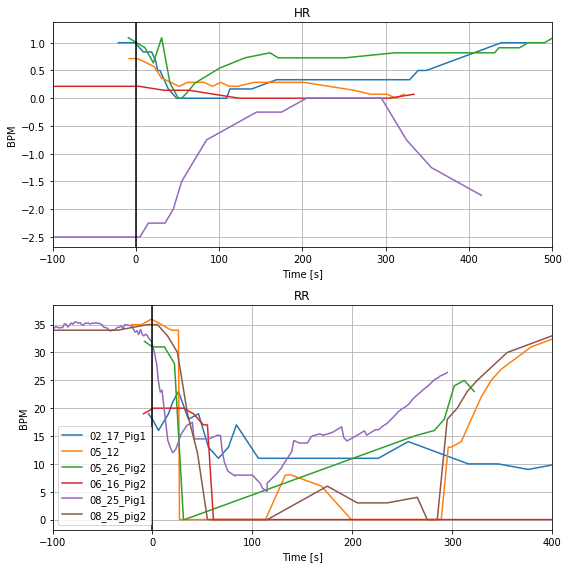

In [16]:
#GROUP 1

GTcolor1 = "k"

IMU_RRx = [-369.4821630724033, -367.720907031699, -365.7541711195793, -364.12500928192793, -362.4224617759138, -360.7052371362272, -359.1054295659208, -357.4175591935793, -355.18663487535395, -353.6748901070828, -351.95766546739617, -350.4018892981074, -348.5672475890405, -346.7326058799736, -345.08876690864963, -343.4008965363081, -341.8451203670193, -339.9517701232623, -338.4106710876461, -336.85489491835733, -335.1229931449982, -333.3323828369489, -331.90870087071295, -330.27953903306155, -328.54763725970236, -326.74234981798054, -324.834322440551, -322.88226366210375, -321.2677789581249, -319.6239399868009, -317.9947781491495, -316.20416784110023, -314.5016203350861, -312.6523014923467, -310.74427411491706, -309.18849794562834, -307.50062757328675, -305.8421114682903, -303.96343835820574, -302.1141195154663, -300.4849576778149, -298.6943473697656, -297.0358312647691, -295.49473222915293, -293.9683103272092, -292.1483457518149, -290.4017668447832, -288.65518793775146, -286.8645776297021, -285.0886444553254, -283.35674268196624, -281.4780695718817, -279.65810499648734, -278.10232882719856, -276.38510418751196, -274.75594234986056, -273.068071977519, -271.3655244715049, -269.7070083665084, -267.9163980584591, -265.9643392800119, -264.32050030868794, -262.61795280267387, -261.0181452323675, -259.0514093202478, -257.31950754688864, -255.60228290720198, -253.79699546548017, -251.83025955336043, -250.201097715709, -248.46919594234987, -246.7519713026632, -245.15216373235688, -243.39090769165264, -241.76174585400122, -240.0885526153322, -238.28326517361037, -236.5953948012688, -235.0983271666702, -233.3517482596385, -231.4877522832265, -229.71181910884977, -228.12668867221595, -226.39478689885678, -224.61885372448, -222.85759768377577, -221.2431129797969, -219.61395114214548, -217.77930943307857, -216.06208479339193, -214.3448601537053, -212.65698978136376, -210.9250880080046, -209.1051234326102, -207.4025759265961, -205.71470555425455, -204.05618944925808, -202.16283920550103, -200.54835450152214, -198.86048412918058, -197.02584242011366, -195.22055497839185, -193.48865320503268, -191.99158557043407, -190.23032952972983, -188.58649055840587, -186.91329731973687, -185.2254269473953, -183.50820230770867, -181.55614352926148, -179.92698169161005, -178.07766284887063, -176.360438209184, -174.37902516339173, -172.8672803951206, -171.2968270921593, -169.5796024524727, -167.75963787707832, -166.14515317309943, -164.39857426606773, -162.66667249270856, -160.567842377536, -158.93868053988461, -157.16274736550784, -155.47487699316628, -153.71362095246204, -150.4112658761416, -148.44452996402188, -146.80069099269792, -145.27426909075425, -143.67446152044792, -141.7077256083282, -140.16662657271198, -138.4347247993528, -136.61476022395843, -134.92688985161686, -131.859368914057, -130.12746714069783, -128.322179698976, -126.67834072765206, -125.09321029101824, -123.40533991867667, -121.40924973921187, -119.50122236178228, -117.76932058842311, -116.27225295382453, -114.21745423966959, -112.45619819896535, -110.87106776233156, -109.13916598897237, -107.34855568092308, -105.55794537287375, -103.88475213420475, -101.96204762310265, -100.42094858748641, -98.7037239477998, -96.927790773423, -95.28395180209907, -93.50801862772232, -91.74676258701805, -90.04421508100398, -88.09215630255676, -86.41896306388776, -84.7604469588913, -82.98451378451449, -81.19390347646521, -79.56474163881376, -77.87687126647222, -76.01287529006026, -74.31032778404614, -72.56374887701446, -70.97861844038061, -69.29074806803908, -67.33868928959185, -65.75355885295807, -64.12439701530667, -62.39249524194747, -60.86607334000382, -59.0167544972644, -57.19678992186999, -55.50891954952846, -53.762340642496724, -52.03043886913758, -50.28385996210591, -48.684052391799526, -47.069567687820665, -45.23492597875372, -43.76721261150021, -41.903216635088256, -40.14196059438399, -38.42473595469738, -36.64880278032058, -34.88754673961637, -33.00887362953182, -31.232940455155074, -29.57442435015861, -27.69575124007406, -26.095943669767735, -24.129207757647976, -22.426660251633905, -20.7094356119473, -19.065596640623312, -17.436434802971917, -15.557761692887366, -13.913922721563436, -11.947186809443734, -10.435442041172562, -8.806280203521167, -6.810190024056339, -5.063611117024663, -3.346386477338057, -1.3502962978732276, 0.5283768122112643, 2.274955719242997, 4.30040016605284, 5.826822067996546, 7.749526579098643, 9.510782619802855, 11.330747195197263, 13.22409743895429, 15.27889615310926, 17.524497605007127, 20.342507270133922, 23.248579737295927, 28.723150597151573, 34.271107125369895, 39.95115785664103, 41.550965426947414, 41.550965426947414, 51.546093457943925, 56.140036297447466, 60.17624805739467, 65.79759025397573, 68.05786883954613, 69.61364500883485, 71.93263212909545, 75.55788414621168, 82.70564824473632, 82.70564824473632, 92.70077627573289, 100.25950011708858, 103.66459512911672, 107.71548402273646, 110.07850254401467, 114.71647678453581, 114.71647678453581, 124.71160481553233, 129.39361045707108, 129.39361045707108, 139.38873848806764, 141.42886006855002, 147.1235879334937, 155.1079486513529, 158.8212634705044, 167.21658393119458, 170.41619907180723, 173.71855414812762, 179.70682468652205, 189.30567010836012, 191.4778858918953, 194.53072969578272, 204.27634645434614, 212.18732150384267, 214.34486015370533, 219.33508560236737, 223.06307755519128, 226.10124422540605, 230.5924471292019, 234.24705341366314, 241.46820318055052, 245.87134328231116, 249.6580437698252, 253.3713585889767, 256.3801709918464, 259.770588870202, 262.7206927383817, 265.77353654226897, 268.76767181146613, 271.73245281331833, 274.5651396121176, 277.2510550741915, 280.09841900666345, 283.048522874843, 285.54363559917397, 287.8919769867797, 290.21096410704024, 292.69139969769867, 295.11312675366696]
IMU_RRy = [34.61604433711737, 35.06598052576591, 35.28563380882129, 34.873151767768356, 34.99901357986391, 35.05977897052708, 35.16592381188584, 34.780134238605804, 35.98399143079002, 35.871663394788996, 35.84205314086415, 35.33627007165736, 36.280301134685715, 36.692783175738654, 36.507190334174005, 36.27598543311419, 35.56399849723079, 35.46869065420779, 35.29172131841282, 35.08511796648237, 35.30359362381973, 35.30359362381973, 34.61329997397603, 34.174862430339836, 33.85507168795153, 34.388097137918436, 34.79826352489474, 35.34227731914105, 34.81966474937152, 34.41411002150804, 34.414110021508044, 34.414110021508044, 34.50767101457023, 35.15655857915179, 35.942710820856384, 35.382882383367416, 35.26339413618104, 35.0809895110514, 35.23805886262147, 35.37212654125403, 35.153650883916676, 34.996581532346596, 34.675657265821464, 34.63892778103382, 34.20217653564238, 34.58828443697361, 34.707772684159984, 34.79661631622744, 35.06349521447041, 35.03580254642499, 34.645080774709946, 35.10132984355637, 35.32869311701932, 35.22254827566056, 34.779278354964774, 34.56080269762741, 34.500037306964245, 34.29947702102335, 33.732525331721135, 34.064587864770196, 34.45530963648524, 34.29932704884543, 34.525647371512676, 34.18185602422291, 34.813991348331214, 34.93554923286477, 34.76510972246812, 34.99631462352794, 35.953409538801886, 35.705821278866146, 35.46031263805623, 35.34480817646511, 35.37953457518125, 35.437274570334694, 35.13290470533106, 34.953606825644044, 35.34639242460361, 35.474492437352964, 34.73705080513439, 34.795773661657606, 35.070892556392366, 35.24716240864665, 34.92638465779419, 34.758752413800316, 34.90437765093568, 35.05249329067712, 34.953828970720636, 34.439939384691236, 34.88590211089456, 34.94666750155772, 34.7230508639173, 34.49184596285748, 34.49184596285748, 35.20291345535436, 35.08544243073184, 35.180659627708486, 35.14892548971078, 35.53471506299082, 35.312368974427905, 34.83127155812487, 35.2437535991778, 35.164620969350786, 35.19423122327562, 34.214538233613254, 34.77680245826282, 34.94736285783157, 34.85541522722285, 34.59740733864098, 34.8197534272039, 35.181362596320554, 34.9628869389832, 34.5771845404557, 34.76604994386821, 35.11641347736129, 34.70226489245317, 34.288371656166326, 32.61124687386321, 32.36521945108613, 32.298855950163016, 32.79433005207767, 33.080381404214, 33.2723860222694, 33.48283604321477, 33.56873025088105, 33.31072236229918, 33.45883800204062, 33.59792969052509, 34.01158935729604, 33.68516725925958, 33.404398601507935, 33.43912500022408, 33.94316031158303, 33.05571114237589, 32.735920399987585, 32.90355264398145, 33.35661224789645, 34.32062941920064, 34.2628894240472, 34.72449643137149, 34.53890358980685, 34.10453896324268, 33.900576442942985, 34.48065781840097, 34.4566531697993, 34.885578848082034, 34.37175385350386, 34.8302653144272, 35.07359815114529, 34.66692619262654, 34.60918619747309, 34.782504102653874, 34.50536920665053, 34.50536920665053, 35.00245662017177, 34.48763673422276, 34.34443960458622, 34.648809469589864, 34.553592272613216, 34.393977839469585, 34.51144886409211, 34.42260523202465, 35.13410475459215, 35.102922514646586, 34.55890872040028, 34.96558067891903, 35.29764321196809, 35.07916755463073, 35.455153409359, 35.48070016387009, 35.25333689040714, 35.372825137593516, 35.02293478414267, 34.93255913955467, 35.29416830867133, 35.2594419099552, 35.292922595105594, 35.098916211390026, 35.256146659730945, 35.23059990521986, 35.340492154060286, 35.27972676339713, 35.22294515832922, 35.16520516317577, 34.92366153849237, 34.551715978689764, 34.45305165873327, 34.37640181516708, 34.03886121964621, 33.870710193685184, 33.98818121830771, 33.98818121830771, 34.259668267538636, 34.535883920029434, 34.535883920029434, 34.80737096926036, 34.24041927995815, 35.015599736736036, 34.94802404193707, 34.9031602177836, 34.81431658571614, 34.81431658571614, 34.17020025322709, 33.68106836860796, 33.92261199329135, 33.23493223734893, 34.11495340343616, 33.266633782950066, 32.99041813045927, 33.2813093773898, 33.01500805129614, 32.44099212878167, 32.10700588230587, 31.04242472166424, 29.671779865997298, 27.80544338668151, 24.956161452461167, 22.891885727749347, 23.235677075039128, 20.35017637611042, 17.18119059559579, 14.261196554978742, 13.075849003850061, 12.014047428484256, 12.603945214467497, 15.364564801656158, 16.87042201903954, 17.4691507764917, 14.558123053313764, 14.48866160950993, 14.48866160950993, 14.48866160950993, 14.764184558170035, 15.177980209667018, 15.062565425452906, 12.499637768594141, 10.321100442594533, 8.666043091637501, 7.826619753472437, 7.9833499989024075, 7.9833499989024075, 7.9833499989024075, 7.274890726694397, 6.545203383850516, 5.621885110137614, 5.042900720389701, 6.509327085374812, 8.326212266203198, 9.328171005630617, 9.454710614610889, 12.216867139518907, 14.182247743780383, 13.744303040756524, 13.751273996735842, 14.916413723087839, 15.404080354305659, 15.138300357832534, 15.29629037355674, 15.630276620032546, 16.64696516075806, 14.715701249033753, 14.112984530393566, 15.081816026544876, 15.939182994992569, 15.152378561283907, 15.719721431920732, 16.14410259267951, 16.13460800038839, 16.802580493340002, 17.184575021696205, 18.471812800669934, 19.343024137378627, 19.865743441381042, 20.28376315734061, 20.69432186032551, 21.479623287915697, 22.033133084644543, 22.48668245485873, 22.960335677133507, 23.444547772795573, 23.834387722272403, 24.237926472112655, 24.768128250023164, 25.211872256195637, 25.427678753918467, 25.771968831402567, 25.946788864624597, 26.165272862319178, 26.413029932432135]

#PLOT DATA
fig = plt.figure(figsize = (8, 8))
FONT = 10


X0217tr_ns=[i - (timestr(X0217naloxone) - timestr(X0217fentanyl)) for i in X0217tr_n]

G0414tss = [i - (timestr(G0414naloxone) - timestr(G0414fentanyl)) for i in G0414ts]
E0512tss = [i - (timestr(E0512naloxone) - timestr(E0512fentanyl)) for i in E0512ts]
I0526tss = [i - (timestr(I0526naloxone) - timestr(I0526fentanyl)) for i in I0526ts]
N0616tss = [i - (timestr(N0616naloxone) - timestr(N0616fentanyl)) for i in N0616ts]
Q0825tss = [i - (timestr(Q0825naloxone) - timestr(Q0825fentanyl)) for i in Q0825ts]
R0825tss = [i - (timestr(R0825naloxone) - timestr(R0825fentanyl)) for i in R0825ts]

#X0217th_n=[i - (timestr(X0217naloxone) - timestr(X0217fentanyl)) for i in X0217th_n]
#I0526ts_n=[i - (timestr(I0526naloxone) - timestr(I0526fentanyl)) for i in I0526ts_n]
#IMU_RRx = [i - (timestr(Q0825naloxone) - timestr(Q0825fentanyl)) for i in IMU_RRx]

Emax = max(E0512hr)
Imax = max(I0526hr)
Nmax = max(N0616hr)
Qmax = max(Q0825hr)
Rmax = max(R0825hr)

Emin = min(E0512hr)
Imin = min(I0526hr)
Nmin = min(N0616hr)
Qmin = min(Q0825hr)
Rmin = min(R0825hr)

E0512hr   = [(i - Emin) / (Emax - Emin) for i in E0512hr]
I0526hr   = [(i - Imin) / (Emax - Imin) for i in I0526hr]
N0616hr   = [(i - Nmin) / (Emax - Nmin) for i in N0616hr]
Q0825hr   = [(i - Qmin) / (Emax - Qmin) for i in Q0825hr]
R0825hr   = [(i - Rmin) / (Emax - Rmin) for i in R0825hr]

ax = fig.add_subplot(211)
#ax.plot(X0217tr_n, X0217hr_n, label = "02_17_Pig1")

#ax.plot(Y0217ts, Y0217hr, label = "02_17_Pig2")
#ax.plot(Y0217ts_2, Y0217hr_2, label = "02_17_Pig2_2")
#ax.plot(D0303ts, D0303hr, label = "03_03_Pig1")
#ax.plot(A0303ts, A0303hr, label = "03_03_Pig2")
#ax.plot(G0414tss, G0414hr, label = "04_14_Pig1")
#ax.plot(J0414ts, J0414hr, label = "04_14_Pig2")
ax.plot(E0512ts, E0512hr, label = "05_12")
#ax.plot(F0526ts, F0526hr, label = "05_26_Pig1")
ax.plot(I0526ts, I0526hr, label = "05_26_Pig2")
#ax.plot(O0616ts, O0616hr, label = "06_16_Pig1")
ax.plot(N0616ts, N0616hr, label = "06_16_Pig2")
#ax.plot(P0804ts, P0804hr, label = "08_04_Pig1")
#ax.plot(N0804ts, N0804hr, label = "08_04_Pig2")
ax.plot(Q0825ts, Q0825hr, label = "08_25_Pig1")
ax.plot(R0825ts, R0825hr, label = "08_25_pig2")

plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(X0217naloxone) - timestr(X0217fentanyl)
#plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("HR")
plt.xlim(-100, 500)
#plt.legend()
plt.grid()

Xmax = max(X0217rr_n)
Emax = max(E0512rr)
Imax = max(I0526rr_n)
Nmax = max(N0616rr)
Umax = max(IMU_RRy)
Rmax = max(R0825rr)

"""
X0217rr_n = [i / Xmax for i in X0217rr_n]
E0512rr   = [i / Emax for i in E0512rr]
I0526rr_n = [i / Imax for i in I0526rr_n]
N0616rr   = [i / Nmax for i in N0616rr]
IMU_RRy   = [i / Umax for i in IMU_RRy]
R0825rr   = [i / Rmax for i in R0825rr]
"""

ax = fig.add_subplot(212)
ax.plot(X0217th_n, X0217rr_n, label = "02_17_Pig1")

#ax.plot(Y0217ts, Y0217rr, label = "02_17_Pig2")
#ax.plot(Y0217ts_2, Y0217rr_2, label = "02_17_Pig2_2")
#ax.plot(D0303ts, D0303rr, label = "03_03_Pig1")
#ax.plot(A0303ts, A0303rr, label = "03_03_Pig2")
#ax.plot(G0414tss, G0414rr, label = "04_14_Pig1")
#ax.plot(J0414ts, J0414rr, label = "01_14_Pig2")
ax.plot(E0512ts, E0512rr, label = "05_12")
#ax.plot(F0526ts, F0526rr, label = "05_26_Pig1")
ax.plot(I0526ts_n, I0526rr_n, label = "05_26_Pig2")
#ax.plot(O0616ts, O0616rr, label = "06_16_Pig1")
ax.plot(N0616ts, N0616rr, label = "06_16_Pig2")
#ax.plot(P0804ts, P0804rr, label = "08_04_Pig1")
#ax.plot(N0804ts, N0804rr, label = "08_04_Pig2")
ax.plot(IMU_RRx, IMU_RRy, label = "08_25_Pig1")
ax.plot(R0825ts, R0825rr, label = "08_25_pig2")

plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(X0217naloxone) - timestr(X0217fentanyl)
#plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("RR")
plt.xlim(-100, 400)
plt.legend()
plt.grid()

plt.tight_layout()


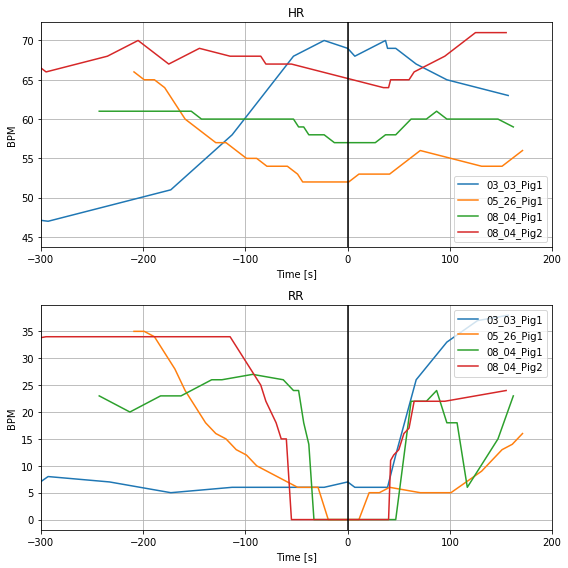

In [17]:
#GROUP 2

GTcolor1 = "k"

IMU_RRx = [-369.4821630724033, -367.720907031699, -365.7541711195793, -364.12500928192793, -362.4224617759138, -360.7052371362272, -359.1054295659208, -357.4175591935793, -355.18663487535395, -353.6748901070828, -351.95766546739617, -350.4018892981074, -348.5672475890405, -346.7326058799736, -345.08876690864963, -343.4008965363081, -341.8451203670193, -339.9517701232623, -338.4106710876461, -336.85489491835733, -335.1229931449982, -333.3323828369489, -331.90870087071295, -330.27953903306155, -328.54763725970236, -326.74234981798054, -324.834322440551, -322.88226366210375, -321.2677789581249, -319.6239399868009, -317.9947781491495, -316.20416784110023, -314.5016203350861, -312.6523014923467, -310.74427411491706, -309.18849794562834, -307.50062757328675, -305.8421114682903, -303.96343835820574, -302.1141195154663, -300.4849576778149, -298.6943473697656, -297.0358312647691, -295.49473222915293, -293.9683103272092, -292.1483457518149, -290.4017668447832, -288.65518793775146, -286.8645776297021, -285.0886444553254, -283.35674268196624, -281.4780695718817, -279.65810499648734, -278.10232882719856, -276.38510418751196, -274.75594234986056, -273.068071977519, -271.3655244715049, -269.7070083665084, -267.9163980584591, -265.9643392800119, -264.32050030868794, -262.61795280267387, -261.0181452323675, -259.0514093202478, -257.31950754688864, -255.60228290720198, -253.79699546548017, -251.83025955336043, -250.201097715709, -248.46919594234987, -246.7519713026632, -245.15216373235688, -243.39090769165264, -241.76174585400122, -240.0885526153322, -238.28326517361037, -236.5953948012688, -235.0983271666702, -233.3517482596385, -231.4877522832265, -229.71181910884977, -228.12668867221595, -226.39478689885678, -224.61885372448, -222.85759768377577, -221.2431129797969, -219.61395114214548, -217.77930943307857, -216.06208479339193, -214.3448601537053, -212.65698978136376, -210.9250880080046, -209.1051234326102, -207.4025759265961, -205.71470555425455, -204.05618944925808, -202.16283920550103, -200.54835450152214, -198.86048412918058, -197.02584242011366, -195.22055497839185, -193.48865320503268, -191.99158557043407, -190.23032952972983, -188.58649055840587, -186.91329731973687, -185.2254269473953, -183.50820230770867, -181.55614352926148, -179.92698169161005, -178.07766284887063, -176.360438209184, -174.37902516339173, -172.8672803951206, -171.2968270921593, -169.5796024524727, -167.75963787707832, -166.14515317309943, -164.39857426606773, -162.66667249270856, -160.567842377536, -158.93868053988461, -157.16274736550784, -155.47487699316628, -153.71362095246204, -150.4112658761416, -148.44452996402188, -146.80069099269792, -145.27426909075425, -143.67446152044792, -141.7077256083282, -140.16662657271198, -138.4347247993528, -136.61476022395843, -134.92688985161686, -131.859368914057, -130.12746714069783, -128.322179698976, -126.67834072765206, -125.09321029101824, -123.40533991867667, -121.40924973921187, -119.50122236178228, -117.76932058842311, -116.27225295382453, -114.21745423966959, -112.45619819896535, -110.87106776233156, -109.13916598897237, -107.34855568092308, -105.55794537287375, -103.88475213420475, -101.96204762310265, -100.42094858748641, -98.7037239477998, -96.927790773423, -95.28395180209907, -93.50801862772232, -91.74676258701805, -90.04421508100398, -88.09215630255676, -86.41896306388776, -84.7604469588913, -82.98451378451449, -81.19390347646521, -79.56474163881376, -77.87687126647222, -76.01287529006026, -74.31032778404614, -72.56374887701446, -70.97861844038061, -69.29074806803908, -67.33868928959185, -65.75355885295807, -64.12439701530667, -62.39249524194747, -60.86607334000382, -59.0167544972644, -57.19678992186999, -55.50891954952846, -53.762340642496724, -52.03043886913758, -50.28385996210591, -48.684052391799526, -47.069567687820665, -45.23492597875372, -43.76721261150021, -41.903216635088256, -40.14196059438399, -38.42473595469738, -36.64880278032058, -34.88754673961637, -33.00887362953182, -31.232940455155074, -29.57442435015861, -27.69575124007406, -26.095943669767735, -24.129207757647976, -22.426660251633905, -20.7094356119473, -19.065596640623312, -17.436434802971917, -15.557761692887366, -13.913922721563436, -11.947186809443734, -10.435442041172562, -8.806280203521167, -6.810190024056339, -5.063611117024663, -3.346386477338057, -1.3502962978732276, 0.5283768122112643, 2.274955719242997, 4.30040016605284, 5.826822067996546, 7.749526579098643, 9.510782619802855, 11.330747195197263, 13.22409743895429, 15.27889615310926, 17.524497605007127, 20.342507270133922, 23.248579737295927, 28.723150597151573, 34.271107125369895, 39.95115785664103, 41.550965426947414, 41.550965426947414, 51.546093457943925, 56.140036297447466, 60.17624805739467, 65.79759025397573, 68.05786883954613, 69.61364500883485, 71.93263212909545, 75.55788414621168, 82.70564824473632, 82.70564824473632, 92.70077627573289, 100.25950011708858, 103.66459512911672, 107.71548402273646, 110.07850254401467, 114.71647678453581, 114.71647678453581, 124.71160481553233, 129.39361045707108, 129.39361045707108, 139.38873848806764, 141.42886006855002, 147.1235879334937, 155.1079486513529, 158.8212634705044, 167.21658393119458, 170.41619907180723, 173.71855414812762, 179.70682468652205, 189.30567010836012, 191.4778858918953, 194.53072969578272, 204.27634645434614, 212.18732150384267, 214.34486015370533, 219.33508560236737, 223.06307755519128, 226.10124422540605, 230.5924471292019, 234.24705341366314, 241.46820318055052, 245.87134328231116, 249.6580437698252, 253.3713585889767, 256.3801709918464, 259.770588870202, 262.7206927383817, 265.77353654226897, 268.76767181146613, 271.73245281331833, 274.5651396121176, 277.2510550741915, 280.09841900666345, 283.048522874843, 285.54363559917397, 287.8919769867797, 290.21096410704024, 292.69139969769867, 295.11312675366696]
IMU_RRy = [34.61604433711737, 35.06598052576591, 35.28563380882129, 34.873151767768356, 34.99901357986391, 35.05977897052708, 35.16592381188584, 34.780134238605804, 35.98399143079002, 35.871663394788996, 35.84205314086415, 35.33627007165736, 36.280301134685715, 36.692783175738654, 36.507190334174005, 36.27598543311419, 35.56399849723079, 35.46869065420779, 35.29172131841282, 35.08511796648237, 35.30359362381973, 35.30359362381973, 34.61329997397603, 34.174862430339836, 33.85507168795153, 34.388097137918436, 34.79826352489474, 35.34227731914105, 34.81966474937152, 34.41411002150804, 34.414110021508044, 34.414110021508044, 34.50767101457023, 35.15655857915179, 35.942710820856384, 35.382882383367416, 35.26339413618104, 35.0809895110514, 35.23805886262147, 35.37212654125403, 35.153650883916676, 34.996581532346596, 34.675657265821464, 34.63892778103382, 34.20217653564238, 34.58828443697361, 34.707772684159984, 34.79661631622744, 35.06349521447041, 35.03580254642499, 34.645080774709946, 35.10132984355637, 35.32869311701932, 35.22254827566056, 34.779278354964774, 34.56080269762741, 34.500037306964245, 34.29947702102335, 33.732525331721135, 34.064587864770196, 34.45530963648524, 34.29932704884543, 34.525647371512676, 34.18185602422291, 34.813991348331214, 34.93554923286477, 34.76510972246812, 34.99631462352794, 35.953409538801886, 35.705821278866146, 35.46031263805623, 35.34480817646511, 35.37953457518125, 35.437274570334694, 35.13290470533106, 34.953606825644044, 35.34639242460361, 35.474492437352964, 34.73705080513439, 34.795773661657606, 35.070892556392366, 35.24716240864665, 34.92638465779419, 34.758752413800316, 34.90437765093568, 35.05249329067712, 34.953828970720636, 34.439939384691236, 34.88590211089456, 34.94666750155772, 34.7230508639173, 34.49184596285748, 34.49184596285748, 35.20291345535436, 35.08544243073184, 35.180659627708486, 35.14892548971078, 35.53471506299082, 35.312368974427905, 34.83127155812487, 35.2437535991778, 35.164620969350786, 35.19423122327562, 34.214538233613254, 34.77680245826282, 34.94736285783157, 34.85541522722285, 34.59740733864098, 34.8197534272039, 35.181362596320554, 34.9628869389832, 34.5771845404557, 34.76604994386821, 35.11641347736129, 34.70226489245317, 34.288371656166326, 32.61124687386321, 32.36521945108613, 32.298855950163016, 32.79433005207767, 33.080381404214, 33.2723860222694, 33.48283604321477, 33.56873025088105, 33.31072236229918, 33.45883800204062, 33.59792969052509, 34.01158935729604, 33.68516725925958, 33.404398601507935, 33.43912500022408, 33.94316031158303, 33.05571114237589, 32.735920399987585, 32.90355264398145, 33.35661224789645, 34.32062941920064, 34.2628894240472, 34.72449643137149, 34.53890358980685, 34.10453896324268, 33.900576442942985, 34.48065781840097, 34.4566531697993, 34.885578848082034, 34.37175385350386, 34.8302653144272, 35.07359815114529, 34.66692619262654, 34.60918619747309, 34.782504102653874, 34.50536920665053, 34.50536920665053, 35.00245662017177, 34.48763673422276, 34.34443960458622, 34.648809469589864, 34.553592272613216, 34.393977839469585, 34.51144886409211, 34.42260523202465, 35.13410475459215, 35.102922514646586, 34.55890872040028, 34.96558067891903, 35.29764321196809, 35.07916755463073, 35.455153409359, 35.48070016387009, 35.25333689040714, 35.372825137593516, 35.02293478414267, 34.93255913955467, 35.29416830867133, 35.2594419099552, 35.292922595105594, 35.098916211390026, 35.256146659730945, 35.23059990521986, 35.340492154060286, 35.27972676339713, 35.22294515832922, 35.16520516317577, 34.92366153849237, 34.551715978689764, 34.45305165873327, 34.37640181516708, 34.03886121964621, 33.870710193685184, 33.98818121830771, 33.98818121830771, 34.259668267538636, 34.535883920029434, 34.535883920029434, 34.80737096926036, 34.24041927995815, 35.015599736736036, 34.94802404193707, 34.9031602177836, 34.81431658571614, 34.81431658571614, 34.17020025322709, 33.68106836860796, 33.92261199329135, 33.23493223734893, 34.11495340343616, 33.266633782950066, 32.99041813045927, 33.2813093773898, 33.01500805129614, 32.44099212878167, 32.10700588230587, 31.04242472166424, 29.671779865997298, 27.80544338668151, 24.956161452461167, 22.891885727749347, 23.235677075039128, 20.35017637611042, 17.18119059559579, 14.261196554978742, 13.075849003850061, 12.014047428484256, 12.603945214467497, 15.364564801656158, 16.87042201903954, 17.4691507764917, 14.558123053313764, 14.48866160950993, 14.48866160950993, 14.48866160950993, 14.764184558170035, 15.177980209667018, 15.062565425452906, 12.499637768594141, 10.321100442594533, 8.666043091637501, 7.826619753472437, 7.9833499989024075, 7.9833499989024075, 7.9833499989024075, 7.274890726694397, 6.545203383850516, 5.621885110137614, 5.042900720389701, 6.509327085374812, 8.326212266203198, 9.328171005630617, 9.454710614610889, 12.216867139518907, 14.182247743780383, 13.744303040756524, 13.751273996735842, 14.916413723087839, 15.404080354305659, 15.138300357832534, 15.29629037355674, 15.630276620032546, 16.64696516075806, 14.715701249033753, 14.112984530393566, 15.081816026544876, 15.939182994992569, 15.152378561283907, 15.719721431920732, 16.14410259267951, 16.13460800038839, 16.802580493340002, 17.184575021696205, 18.471812800669934, 19.343024137378627, 19.865743441381042, 20.28376315734061, 20.69432186032551, 21.479623287915697, 22.033133084644543, 22.48668245485873, 22.960335677133507, 23.444547772795573, 23.834387722272403, 24.237926472112655, 24.768128250023164, 25.211872256195637, 25.427678753918467, 25.771968831402567, 25.946788864624597, 26.165272862319178, 26.413029932432135]

#PLOT DATA
fig = plt.figure(figsize = (8, 8))
FONT = 10

D0303tss = [i - (timestr(D0303naloxone) - timestr(D0303fentanyl)) for i in D0303ts]
F0526tss = [i - (timestr(F0526naloxone) - timestr(F0526fentanyl)) for i in F0526ts]
P0804tss = [i - (timestr(P0804naloxone) - timestr(P0804fentanyl)) for i in P0804ts]
N0804tss = [i - (timestr(N0804naloxone) - timestr(N0804fentanyl)) for i in N0804ts]


ax = fig.add_subplot(211)
#ax.plot(X0217tr_n, X0217hr_n, label = "02_17_Pig1")
#ax.plot(Y0217ts, Y0217hr, label = "02_17_Pig2")
#ax.plot(Y0217ts_2, Y0217hr_2, label = "02_17_Pig2_2")
ax.plot(D0303tss, D0303hr, label = "03_03_Pig1")
#ax.plot(A0303ts, A0303hr, label = "03_03_Pig2")
#ax.plot(G0414ts, G0414hr, label = "04_14_Pig1")
#ax.plot(J0414ts, J0414hr, label = "04_14_Pig2")
#ax.plot(E0512ts, E0512hr, label = "05_12")
ax.plot(F0526tss, F0526hr, label = "05_26_Pig1")
#ax.plot(I0526ts, I0526hr, label = "05_26_Pig2")
#ax.plot(O0616ts, O0616hr, label = "06_16_Pig1")
#ax.plot(N0616ts, N0616hr, label = "06_16_Pig2")
ax.plot(P0804tss, P0804hr, label = "08_04_Pig1")
ax.plot(N0804tss, N0804hr, label = "08_04_Pig2")
#ax.plot(Q0825ts, Q0825hr, label = "08_25_Pig1")
#ax.plot(R0825ts, R0825hr, label = "08_25_pig2")

plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(X0217naloxone) - timestr(X0217fentanyl)
#plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("HR")
plt.xlim(-300, 200)
plt.legend()
plt.grid()

ax = fig.add_subplot(212)
#ax.plot(X0217th_n, X0217rr_n, label = "02_17_Pig1}")
#ax.plot(Y0217ts, Y0217rr, label = "02_17_Pig2")
#ax.plot(Y0217ts_2, Y0217rr_2, label = "02_17_Pig2_2")
ax.plot(D0303tss, D0303rr, label = "03_03_Pig1")
#ax.plot(A0303ts, A0303rr, label = "03_03_Pig2")
#ax.plot(G0414ts, G0414rr, label = "04_14_Pig1")
#ax.plot(J0414ts, J0414rr, label = "01_14_Pig2")
#ax.plot(E0512ts, E0512rr, label = "05_12")
ax.plot(F0526tss, F0526rr, label = "05_26_Pig1")
#ax.plot(I0526ts_n, I0526rr_n, label = "05_26_Pig2")
#ax.plot(O0616ts, O0616rr, label = "06_16_Pig1")
#ax.plot(N0616ts, N0616rr, label = "06_16_Pig2")
ax.plot(P0804tss, P0804rr, label = "08_04_Pig1")
ax.plot(N0804tss, N0804rr, label = "08_04_Pig2")
#plt.plot(IMU_RRx, IMU_RRy, label = "08_25_Pig1")
#ax.plot(R0825ts, R0825rr, label = "08_25_pig2")

plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(X0217naloxone) - timestr(X0217fentanyl)
#plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("RR")
plt.xlim(-300, 200)
plt.legend()
plt.grid()

plt.tight_layout()



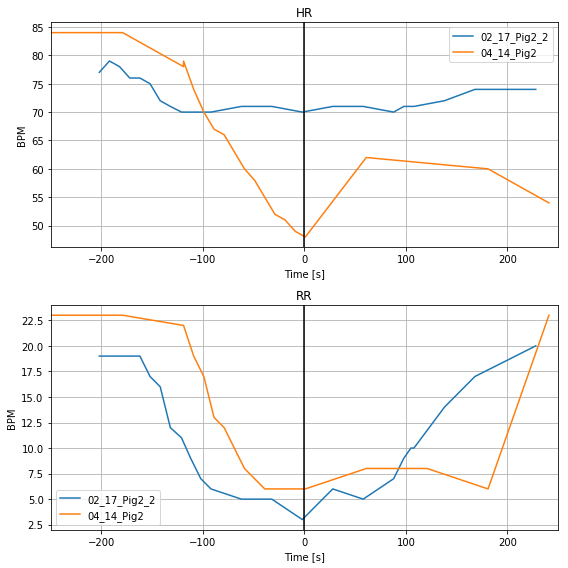

In [8]:
#GROUP 3

GTcolor1 = "k"

IMU_RRx = [-369.4821630724033, -367.720907031699, -365.7541711195793, -364.12500928192793, -362.4224617759138, -360.7052371362272, -359.1054295659208, -357.4175591935793, -355.18663487535395, -353.6748901070828, -351.95766546739617, -350.4018892981074, -348.5672475890405, -346.7326058799736, -345.08876690864963, -343.4008965363081, -341.8451203670193, -339.9517701232623, -338.4106710876461, -336.85489491835733, -335.1229931449982, -333.3323828369489, -331.90870087071295, -330.27953903306155, -328.54763725970236, -326.74234981798054, -324.834322440551, -322.88226366210375, -321.2677789581249, -319.6239399868009, -317.9947781491495, -316.20416784110023, -314.5016203350861, -312.6523014923467, -310.74427411491706, -309.18849794562834, -307.50062757328675, -305.8421114682903, -303.96343835820574, -302.1141195154663, -300.4849576778149, -298.6943473697656, -297.0358312647691, -295.49473222915293, -293.9683103272092, -292.1483457518149, -290.4017668447832, -288.65518793775146, -286.8645776297021, -285.0886444553254, -283.35674268196624, -281.4780695718817, -279.65810499648734, -278.10232882719856, -276.38510418751196, -274.75594234986056, -273.068071977519, -271.3655244715049, -269.7070083665084, -267.9163980584591, -265.9643392800119, -264.32050030868794, -262.61795280267387, -261.0181452323675, -259.0514093202478, -257.31950754688864, -255.60228290720198, -253.79699546548017, -251.83025955336043, -250.201097715709, -248.46919594234987, -246.7519713026632, -245.15216373235688, -243.39090769165264, -241.76174585400122, -240.0885526153322, -238.28326517361037, -236.5953948012688, -235.0983271666702, -233.3517482596385, -231.4877522832265, -229.71181910884977, -228.12668867221595, -226.39478689885678, -224.61885372448, -222.85759768377577, -221.2431129797969, -219.61395114214548, -217.77930943307857, -216.06208479339193, -214.3448601537053, -212.65698978136376, -210.9250880080046, -209.1051234326102, -207.4025759265961, -205.71470555425455, -204.05618944925808, -202.16283920550103, -200.54835450152214, -198.86048412918058, -197.02584242011366, -195.22055497839185, -193.48865320503268, -191.99158557043407, -190.23032952972983, -188.58649055840587, -186.91329731973687, -185.2254269473953, -183.50820230770867, -181.55614352926148, -179.92698169161005, -178.07766284887063, -176.360438209184, -174.37902516339173, -172.8672803951206, -171.2968270921593, -169.5796024524727, -167.75963787707832, -166.14515317309943, -164.39857426606773, -162.66667249270856, -160.567842377536, -158.93868053988461, -157.16274736550784, -155.47487699316628, -153.71362095246204, -150.4112658761416, -148.44452996402188, -146.80069099269792, -145.27426909075425, -143.67446152044792, -141.7077256083282, -140.16662657271198, -138.4347247993528, -136.61476022395843, -134.92688985161686, -131.859368914057, -130.12746714069783, -128.322179698976, -126.67834072765206, -125.09321029101824, -123.40533991867667, -121.40924973921187, -119.50122236178228, -117.76932058842311, -116.27225295382453, -114.21745423966959, -112.45619819896535, -110.87106776233156, -109.13916598897237, -107.34855568092308, -105.55794537287375, -103.88475213420475, -101.96204762310265, -100.42094858748641, -98.7037239477998, -96.927790773423, -95.28395180209907, -93.50801862772232, -91.74676258701805, -90.04421508100398, -88.09215630255676, -86.41896306388776, -84.7604469588913, -82.98451378451449, -81.19390347646521, -79.56474163881376, -77.87687126647222, -76.01287529006026, -74.31032778404614, -72.56374887701446, -70.97861844038061, -69.29074806803908, -67.33868928959185, -65.75355885295807, -64.12439701530667, -62.39249524194747, -60.86607334000382, -59.0167544972644, -57.19678992186999, -55.50891954952846, -53.762340642496724, -52.03043886913758, -50.28385996210591, -48.684052391799526, -47.069567687820665, -45.23492597875372, -43.76721261150021, -41.903216635088256, -40.14196059438399, -38.42473595469738, -36.64880278032058, -34.88754673961637, -33.00887362953182, -31.232940455155074, -29.57442435015861, -27.69575124007406, -26.095943669767735, -24.129207757647976, -22.426660251633905, -20.7094356119473, -19.065596640623312, -17.436434802971917, -15.557761692887366, -13.913922721563436, -11.947186809443734, -10.435442041172562, -8.806280203521167, -6.810190024056339, -5.063611117024663, -3.346386477338057, -1.3502962978732276, 0.5283768122112643, 2.274955719242997, 4.30040016605284, 5.826822067996546, 7.749526579098643, 9.510782619802855, 11.330747195197263, 13.22409743895429, 15.27889615310926, 17.524497605007127, 20.342507270133922, 23.248579737295927, 28.723150597151573, 34.271107125369895, 39.95115785664103, 41.550965426947414, 41.550965426947414, 51.546093457943925, 56.140036297447466, 60.17624805739467, 65.79759025397573, 68.05786883954613, 69.61364500883485, 71.93263212909545, 75.55788414621168, 82.70564824473632, 82.70564824473632, 92.70077627573289, 100.25950011708858, 103.66459512911672, 107.71548402273646, 110.07850254401467, 114.71647678453581, 114.71647678453581, 124.71160481553233, 129.39361045707108, 129.39361045707108, 139.38873848806764, 141.42886006855002, 147.1235879334937, 155.1079486513529, 158.8212634705044, 167.21658393119458, 170.41619907180723, 173.71855414812762, 179.70682468652205, 189.30567010836012, 191.4778858918953, 194.53072969578272, 204.27634645434614, 212.18732150384267, 214.34486015370533, 219.33508560236737, 223.06307755519128, 226.10124422540605, 230.5924471292019, 234.24705341366314, 241.46820318055052, 245.87134328231116, 249.6580437698252, 253.3713585889767, 256.3801709918464, 259.770588870202, 262.7206927383817, 265.77353654226897, 268.76767181146613, 271.73245281331833, 274.5651396121176, 277.2510550741915, 280.09841900666345, 283.048522874843, 285.54363559917397, 287.8919769867797, 290.21096410704024, 292.69139969769867, 295.11312675366696]
IMU_RRy = [34.61604433711737, 35.06598052576591, 35.28563380882129, 34.873151767768356, 34.99901357986391, 35.05977897052708, 35.16592381188584, 34.780134238605804, 35.98399143079002, 35.871663394788996, 35.84205314086415, 35.33627007165736, 36.280301134685715, 36.692783175738654, 36.507190334174005, 36.27598543311419, 35.56399849723079, 35.46869065420779, 35.29172131841282, 35.08511796648237, 35.30359362381973, 35.30359362381973, 34.61329997397603, 34.174862430339836, 33.85507168795153, 34.388097137918436, 34.79826352489474, 35.34227731914105, 34.81966474937152, 34.41411002150804, 34.414110021508044, 34.414110021508044, 34.50767101457023, 35.15655857915179, 35.942710820856384, 35.382882383367416, 35.26339413618104, 35.0809895110514, 35.23805886262147, 35.37212654125403, 35.153650883916676, 34.996581532346596, 34.675657265821464, 34.63892778103382, 34.20217653564238, 34.58828443697361, 34.707772684159984, 34.79661631622744, 35.06349521447041, 35.03580254642499, 34.645080774709946, 35.10132984355637, 35.32869311701932, 35.22254827566056, 34.779278354964774, 34.56080269762741, 34.500037306964245, 34.29947702102335, 33.732525331721135, 34.064587864770196, 34.45530963648524, 34.29932704884543, 34.525647371512676, 34.18185602422291, 34.813991348331214, 34.93554923286477, 34.76510972246812, 34.99631462352794, 35.953409538801886, 35.705821278866146, 35.46031263805623, 35.34480817646511, 35.37953457518125, 35.437274570334694, 35.13290470533106, 34.953606825644044, 35.34639242460361, 35.474492437352964, 34.73705080513439, 34.795773661657606, 35.070892556392366, 35.24716240864665, 34.92638465779419, 34.758752413800316, 34.90437765093568, 35.05249329067712, 34.953828970720636, 34.439939384691236, 34.88590211089456, 34.94666750155772, 34.7230508639173, 34.49184596285748, 34.49184596285748, 35.20291345535436, 35.08544243073184, 35.180659627708486, 35.14892548971078, 35.53471506299082, 35.312368974427905, 34.83127155812487, 35.2437535991778, 35.164620969350786, 35.19423122327562, 34.214538233613254, 34.77680245826282, 34.94736285783157, 34.85541522722285, 34.59740733864098, 34.8197534272039, 35.181362596320554, 34.9628869389832, 34.5771845404557, 34.76604994386821, 35.11641347736129, 34.70226489245317, 34.288371656166326, 32.61124687386321, 32.36521945108613, 32.298855950163016, 32.79433005207767, 33.080381404214, 33.2723860222694, 33.48283604321477, 33.56873025088105, 33.31072236229918, 33.45883800204062, 33.59792969052509, 34.01158935729604, 33.68516725925958, 33.404398601507935, 33.43912500022408, 33.94316031158303, 33.05571114237589, 32.735920399987585, 32.90355264398145, 33.35661224789645, 34.32062941920064, 34.2628894240472, 34.72449643137149, 34.53890358980685, 34.10453896324268, 33.900576442942985, 34.48065781840097, 34.4566531697993, 34.885578848082034, 34.37175385350386, 34.8302653144272, 35.07359815114529, 34.66692619262654, 34.60918619747309, 34.782504102653874, 34.50536920665053, 34.50536920665053, 35.00245662017177, 34.48763673422276, 34.34443960458622, 34.648809469589864, 34.553592272613216, 34.393977839469585, 34.51144886409211, 34.42260523202465, 35.13410475459215, 35.102922514646586, 34.55890872040028, 34.96558067891903, 35.29764321196809, 35.07916755463073, 35.455153409359, 35.48070016387009, 35.25333689040714, 35.372825137593516, 35.02293478414267, 34.93255913955467, 35.29416830867133, 35.2594419099552, 35.292922595105594, 35.098916211390026, 35.256146659730945, 35.23059990521986, 35.340492154060286, 35.27972676339713, 35.22294515832922, 35.16520516317577, 34.92366153849237, 34.551715978689764, 34.45305165873327, 34.37640181516708, 34.03886121964621, 33.870710193685184, 33.98818121830771, 33.98818121830771, 34.259668267538636, 34.535883920029434, 34.535883920029434, 34.80737096926036, 34.24041927995815, 35.015599736736036, 34.94802404193707, 34.9031602177836, 34.81431658571614, 34.81431658571614, 34.17020025322709, 33.68106836860796, 33.92261199329135, 33.23493223734893, 34.11495340343616, 33.266633782950066, 32.99041813045927, 33.2813093773898, 33.01500805129614, 32.44099212878167, 32.10700588230587, 31.04242472166424, 29.671779865997298, 27.80544338668151, 24.956161452461167, 22.891885727749347, 23.235677075039128, 20.35017637611042, 17.18119059559579, 14.261196554978742, 13.075849003850061, 12.014047428484256, 12.603945214467497, 15.364564801656158, 16.87042201903954, 17.4691507764917, 14.558123053313764, 14.48866160950993, 14.48866160950993, 14.48866160950993, 14.764184558170035, 15.177980209667018, 15.062565425452906, 12.499637768594141, 10.321100442594533, 8.666043091637501, 7.826619753472437, 7.9833499989024075, 7.9833499989024075, 7.9833499989024075, 7.274890726694397, 6.545203383850516, 5.621885110137614, 5.042900720389701, 6.509327085374812, 8.326212266203198, 9.328171005630617, 9.454710614610889, 12.216867139518907, 14.182247743780383, 13.744303040756524, 13.751273996735842, 14.916413723087839, 15.404080354305659, 15.138300357832534, 15.29629037355674, 15.630276620032546, 16.64696516075806, 14.715701249033753, 14.112984530393566, 15.081816026544876, 15.939182994992569, 15.152378561283907, 15.719721431920732, 16.14410259267951, 16.13460800038839, 16.802580493340002, 17.184575021696205, 18.471812800669934, 19.343024137378627, 19.865743441381042, 20.28376315734061, 20.69432186032551, 21.479623287915697, 22.033133084644543, 22.48668245485873, 22.960335677133507, 23.444547772795573, 23.834387722272403, 24.237926472112655, 24.768128250023164, 25.211872256195637, 25.427678753918467, 25.771968831402567, 25.946788864624597, 26.165272862319178, 26.413029932432135]

#PLOT DATA
fig = plt.figure(figsize = (8, 8))
FONT = 10


Y0217ts_2s = [i - (timestr(Y0217naloxone_2) - timestr(Y0217fentanyl_2)) for i in Y0217ts_2]
J0414tss = [i - (timestr(J0414naloxone) - timestr(J0414fentanyl)) for i in J0414ts]


ax = fig.add_subplot(211)
#ax.plot(X0217tr_n, X0217hr_n, label = "02_17_Pig1")
#ax.plot(Y0217ts, Y0217hr, label = "02_17_Pig2")
ax.plot(Y0217ts_2s, Y0217hr_2, label = "02_17_Pig2_2")
#ax.plot(D0303ts, D0303hr, label = "03_03_Pig1")
#ax.plot(A0303ts, A0303hr, label = "03_03_Pig2")
#ax.plot(G0414ts, G0414hr, label = "04_14_Pig1")
ax.plot(J0414tss, J0414hr, label = "04_14_Pig2")
#ax.plot(E0512ts, E0512hr, label = "05_12")
#ax.plot(F0526ts, F0526hr, label = "05_26_Pig1")
#ax.plot(I0526ts, I0526hr, label = "05_26_Pig2")
#ax.plot(O0616ts, O0616hr, label = "06_16_Pig1")
#ax.plot(N0616ts, N0616hr, label = "06_16_Pig2")
#ax.plot(P0804ts, P0804hr, label = "08_04_Pig1")
#ax.plot(N0804ts, N0804hr, label = "08_04_Pig2")
#ax.plot(Q0825ts, Q0825hr, label = "08_25_Pig1")
#ax.plot(R0825ts, R0825hr, label = "08_25_pig2")

plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(X0217naloxone) - timestr(X0217fentanyl)
#plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("HR")
plt.xlim(-250, 250)
plt.legend()
plt.grid()

ax = fig.add_subplot(212)
#ax.plot(X0217th_n, X0217rr_n, label = "02_17_Pig1}")
#ax.plot(Y0217ts, Y0217rr, label = "02_17_Pig2")
ax.plot(Y0217ts_2s, Y0217rr_2, label = "02_17_Pig2_2")
#ax.plot(D0303ts, D0303rr, label = "03_03_Pig1")
#ax.plot(A0303ts, A0303rr, label = "03_03_Pig2")
#ax.plot(G0414ts, G0414rr, label = "04_14_Pig1")
ax.plot(J0414tss, J0414rr, label = "04_14_Pig2")
#ax.plot(E0512ts, E0512rr, label = "05_12")
#ax.plot(F0526ts, F0526rr, label = "05_26_Pig1")
#ax.plot(I0526ts_n, I0526rr_n, label = "05_26_Pig2")
#ax.plot(O0616ts, O0616rr, label = "06_16_Pig1")
#ax.plot(N0616ts, N0616rr, label = "06_16_Pig2")
#ax.plot(P0804ts, P0804rr, label = "08_04_Pig1")
#ax.plot(N0804ts, N0804rr, label = "08_04_Pig2")
#plt.plot(IMU_RRx, IMU_RRy, label = "08_25_Pig1")
#ax.plot(R0825ts, R0825rr, label = "08_25_pig2")

plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(X0217naloxone) - timestr(X0217fentanyl)
#plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("RR")
plt.xlim(-250, 250)
plt.legend()
plt.grid()

plt.tight_layout()



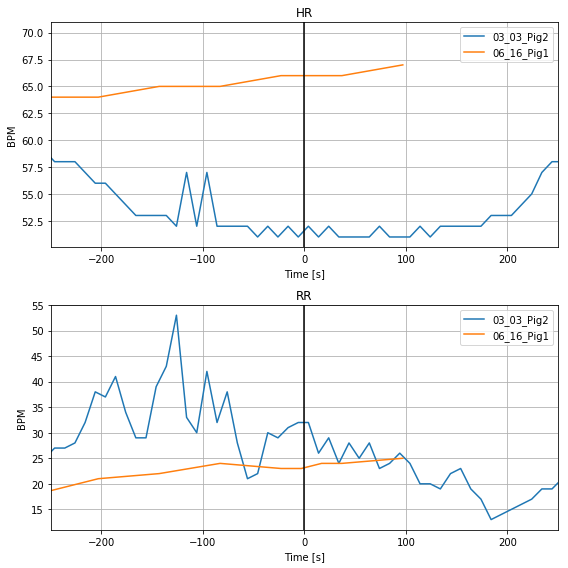

In [9]:
#GROUP 4

GTcolor1 = "k"

IMU_RRx = [-369.4821630724033, -367.720907031699, -365.7541711195793, -364.12500928192793, -362.4224617759138, -360.7052371362272, -359.1054295659208, -357.4175591935793, -355.18663487535395, -353.6748901070828, -351.95766546739617, -350.4018892981074, -348.5672475890405, -346.7326058799736, -345.08876690864963, -343.4008965363081, -341.8451203670193, -339.9517701232623, -338.4106710876461, -336.85489491835733, -335.1229931449982, -333.3323828369489, -331.90870087071295, -330.27953903306155, -328.54763725970236, -326.74234981798054, -324.834322440551, -322.88226366210375, -321.2677789581249, -319.6239399868009, -317.9947781491495, -316.20416784110023, -314.5016203350861, -312.6523014923467, -310.74427411491706, -309.18849794562834, -307.50062757328675, -305.8421114682903, -303.96343835820574, -302.1141195154663, -300.4849576778149, -298.6943473697656, -297.0358312647691, -295.49473222915293, -293.9683103272092, -292.1483457518149, -290.4017668447832, -288.65518793775146, -286.8645776297021, -285.0886444553254, -283.35674268196624, -281.4780695718817, -279.65810499648734, -278.10232882719856, -276.38510418751196, -274.75594234986056, -273.068071977519, -271.3655244715049, -269.7070083665084, -267.9163980584591, -265.9643392800119, -264.32050030868794, -262.61795280267387, -261.0181452323675, -259.0514093202478, -257.31950754688864, -255.60228290720198, -253.79699546548017, -251.83025955336043, -250.201097715709, -248.46919594234987, -246.7519713026632, -245.15216373235688, -243.39090769165264, -241.76174585400122, -240.0885526153322, -238.28326517361037, -236.5953948012688, -235.0983271666702, -233.3517482596385, -231.4877522832265, -229.71181910884977, -228.12668867221595, -226.39478689885678, -224.61885372448, -222.85759768377577, -221.2431129797969, -219.61395114214548, -217.77930943307857, -216.06208479339193, -214.3448601537053, -212.65698978136376, -210.9250880080046, -209.1051234326102, -207.4025759265961, -205.71470555425455, -204.05618944925808, -202.16283920550103, -200.54835450152214, -198.86048412918058, -197.02584242011366, -195.22055497839185, -193.48865320503268, -191.99158557043407, -190.23032952972983, -188.58649055840587, -186.91329731973687, -185.2254269473953, -183.50820230770867, -181.55614352926148, -179.92698169161005, -178.07766284887063, -176.360438209184, -174.37902516339173, -172.8672803951206, -171.2968270921593, -169.5796024524727, -167.75963787707832, -166.14515317309943, -164.39857426606773, -162.66667249270856, -160.567842377536, -158.93868053988461, -157.16274736550784, -155.47487699316628, -153.71362095246204, -150.4112658761416, -148.44452996402188, -146.80069099269792, -145.27426909075425, -143.67446152044792, -141.7077256083282, -140.16662657271198, -138.4347247993528, -136.61476022395843, -134.92688985161686, -131.859368914057, -130.12746714069783, -128.322179698976, -126.67834072765206, -125.09321029101824, -123.40533991867667, -121.40924973921187, -119.50122236178228, -117.76932058842311, -116.27225295382453, -114.21745423966959, -112.45619819896535, -110.87106776233156, -109.13916598897237, -107.34855568092308, -105.55794537287375, -103.88475213420475, -101.96204762310265, -100.42094858748641, -98.7037239477998, -96.927790773423, -95.28395180209907, -93.50801862772232, -91.74676258701805, -90.04421508100398, -88.09215630255676, -86.41896306388776, -84.7604469588913, -82.98451378451449, -81.19390347646521, -79.56474163881376, -77.87687126647222, -76.01287529006026, -74.31032778404614, -72.56374887701446, -70.97861844038061, -69.29074806803908, -67.33868928959185, -65.75355885295807, -64.12439701530667, -62.39249524194747, -60.86607334000382, -59.0167544972644, -57.19678992186999, -55.50891954952846, -53.762340642496724, -52.03043886913758, -50.28385996210591, -48.684052391799526, -47.069567687820665, -45.23492597875372, -43.76721261150021, -41.903216635088256, -40.14196059438399, -38.42473595469738, -36.64880278032058, -34.88754673961637, -33.00887362953182, -31.232940455155074, -29.57442435015861, -27.69575124007406, -26.095943669767735, -24.129207757647976, -22.426660251633905, -20.7094356119473, -19.065596640623312, -17.436434802971917, -15.557761692887366, -13.913922721563436, -11.947186809443734, -10.435442041172562, -8.806280203521167, -6.810190024056339, -5.063611117024663, -3.346386477338057, -1.3502962978732276, 0.5283768122112643, 2.274955719242997, 4.30040016605284, 5.826822067996546, 7.749526579098643, 9.510782619802855, 11.330747195197263, 13.22409743895429, 15.27889615310926, 17.524497605007127, 20.342507270133922, 23.248579737295927, 28.723150597151573, 34.271107125369895, 39.95115785664103, 41.550965426947414, 41.550965426947414, 51.546093457943925, 56.140036297447466, 60.17624805739467, 65.79759025397573, 68.05786883954613, 69.61364500883485, 71.93263212909545, 75.55788414621168, 82.70564824473632, 82.70564824473632, 92.70077627573289, 100.25950011708858, 103.66459512911672, 107.71548402273646, 110.07850254401467, 114.71647678453581, 114.71647678453581, 124.71160481553233, 129.39361045707108, 129.39361045707108, 139.38873848806764, 141.42886006855002, 147.1235879334937, 155.1079486513529, 158.8212634705044, 167.21658393119458, 170.41619907180723, 173.71855414812762, 179.70682468652205, 189.30567010836012, 191.4778858918953, 194.53072969578272, 204.27634645434614, 212.18732150384267, 214.34486015370533, 219.33508560236737, 223.06307755519128, 226.10124422540605, 230.5924471292019, 234.24705341366314, 241.46820318055052, 245.87134328231116, 249.6580437698252, 253.3713585889767, 256.3801709918464, 259.770588870202, 262.7206927383817, 265.77353654226897, 268.76767181146613, 271.73245281331833, 274.5651396121176, 277.2510550741915, 280.09841900666345, 283.048522874843, 285.54363559917397, 287.8919769867797, 290.21096410704024, 292.69139969769867, 295.11312675366696]
IMU_RRy = [34.61604433711737, 35.06598052576591, 35.28563380882129, 34.873151767768356, 34.99901357986391, 35.05977897052708, 35.16592381188584, 34.780134238605804, 35.98399143079002, 35.871663394788996, 35.84205314086415, 35.33627007165736, 36.280301134685715, 36.692783175738654, 36.507190334174005, 36.27598543311419, 35.56399849723079, 35.46869065420779, 35.29172131841282, 35.08511796648237, 35.30359362381973, 35.30359362381973, 34.61329997397603, 34.174862430339836, 33.85507168795153, 34.388097137918436, 34.79826352489474, 35.34227731914105, 34.81966474937152, 34.41411002150804, 34.414110021508044, 34.414110021508044, 34.50767101457023, 35.15655857915179, 35.942710820856384, 35.382882383367416, 35.26339413618104, 35.0809895110514, 35.23805886262147, 35.37212654125403, 35.153650883916676, 34.996581532346596, 34.675657265821464, 34.63892778103382, 34.20217653564238, 34.58828443697361, 34.707772684159984, 34.79661631622744, 35.06349521447041, 35.03580254642499, 34.645080774709946, 35.10132984355637, 35.32869311701932, 35.22254827566056, 34.779278354964774, 34.56080269762741, 34.500037306964245, 34.29947702102335, 33.732525331721135, 34.064587864770196, 34.45530963648524, 34.29932704884543, 34.525647371512676, 34.18185602422291, 34.813991348331214, 34.93554923286477, 34.76510972246812, 34.99631462352794, 35.953409538801886, 35.705821278866146, 35.46031263805623, 35.34480817646511, 35.37953457518125, 35.437274570334694, 35.13290470533106, 34.953606825644044, 35.34639242460361, 35.474492437352964, 34.73705080513439, 34.795773661657606, 35.070892556392366, 35.24716240864665, 34.92638465779419, 34.758752413800316, 34.90437765093568, 35.05249329067712, 34.953828970720636, 34.439939384691236, 34.88590211089456, 34.94666750155772, 34.7230508639173, 34.49184596285748, 34.49184596285748, 35.20291345535436, 35.08544243073184, 35.180659627708486, 35.14892548971078, 35.53471506299082, 35.312368974427905, 34.83127155812487, 35.2437535991778, 35.164620969350786, 35.19423122327562, 34.214538233613254, 34.77680245826282, 34.94736285783157, 34.85541522722285, 34.59740733864098, 34.8197534272039, 35.181362596320554, 34.9628869389832, 34.5771845404557, 34.76604994386821, 35.11641347736129, 34.70226489245317, 34.288371656166326, 32.61124687386321, 32.36521945108613, 32.298855950163016, 32.79433005207767, 33.080381404214, 33.2723860222694, 33.48283604321477, 33.56873025088105, 33.31072236229918, 33.45883800204062, 33.59792969052509, 34.01158935729604, 33.68516725925958, 33.404398601507935, 33.43912500022408, 33.94316031158303, 33.05571114237589, 32.735920399987585, 32.90355264398145, 33.35661224789645, 34.32062941920064, 34.2628894240472, 34.72449643137149, 34.53890358980685, 34.10453896324268, 33.900576442942985, 34.48065781840097, 34.4566531697993, 34.885578848082034, 34.37175385350386, 34.8302653144272, 35.07359815114529, 34.66692619262654, 34.60918619747309, 34.782504102653874, 34.50536920665053, 34.50536920665053, 35.00245662017177, 34.48763673422276, 34.34443960458622, 34.648809469589864, 34.553592272613216, 34.393977839469585, 34.51144886409211, 34.42260523202465, 35.13410475459215, 35.102922514646586, 34.55890872040028, 34.96558067891903, 35.29764321196809, 35.07916755463073, 35.455153409359, 35.48070016387009, 35.25333689040714, 35.372825137593516, 35.02293478414267, 34.93255913955467, 35.29416830867133, 35.2594419099552, 35.292922595105594, 35.098916211390026, 35.256146659730945, 35.23059990521986, 35.340492154060286, 35.27972676339713, 35.22294515832922, 35.16520516317577, 34.92366153849237, 34.551715978689764, 34.45305165873327, 34.37640181516708, 34.03886121964621, 33.870710193685184, 33.98818121830771, 33.98818121830771, 34.259668267538636, 34.535883920029434, 34.535883920029434, 34.80737096926036, 34.24041927995815, 35.015599736736036, 34.94802404193707, 34.9031602177836, 34.81431658571614, 34.81431658571614, 34.17020025322709, 33.68106836860796, 33.92261199329135, 33.23493223734893, 34.11495340343616, 33.266633782950066, 32.99041813045927, 33.2813093773898, 33.01500805129614, 32.44099212878167, 32.10700588230587, 31.04242472166424, 29.671779865997298, 27.80544338668151, 24.956161452461167, 22.891885727749347, 23.235677075039128, 20.35017637611042, 17.18119059559579, 14.261196554978742, 13.075849003850061, 12.014047428484256, 12.603945214467497, 15.364564801656158, 16.87042201903954, 17.4691507764917, 14.558123053313764, 14.48866160950993, 14.48866160950993, 14.48866160950993, 14.764184558170035, 15.177980209667018, 15.062565425452906, 12.499637768594141, 10.321100442594533, 8.666043091637501, 7.826619753472437, 7.9833499989024075, 7.9833499989024075, 7.9833499989024075, 7.274890726694397, 6.545203383850516, 5.621885110137614, 5.042900720389701, 6.509327085374812, 8.326212266203198, 9.328171005630617, 9.454710614610889, 12.216867139518907, 14.182247743780383, 13.744303040756524, 13.751273996735842, 14.916413723087839, 15.404080354305659, 15.138300357832534, 15.29629037355674, 15.630276620032546, 16.64696516075806, 14.715701249033753, 14.112984530393566, 15.081816026544876, 15.939182994992569, 15.152378561283907, 15.719721431920732, 16.14410259267951, 16.13460800038839, 16.802580493340002, 17.184575021696205, 18.471812800669934, 19.343024137378627, 19.865743441381042, 20.28376315734061, 20.69432186032551, 21.479623287915697, 22.033133084644543, 22.48668245485873, 22.960335677133507, 23.444547772795573, 23.834387722272403, 24.237926472112655, 24.768128250023164, 25.211872256195637, 25.427678753918467, 25.771968831402567, 25.946788864624597, 26.165272862319178, 26.413029932432135]


A0303tss = [i - (timestr(A0303naloxone) - timestr(A0303fentanyl)) for i in A0303ts]
O0616tss = [i - (timestr(O0616naloxone) - timestr(O0616fentanyl)) for i in O0616ts]


#PLOT DATA
fig = plt.figure(figsize = (8, 8))
FONT = 10

ax = fig.add_subplot(211)
#ax.plot(X0217tr_n, X0217hr_n, label = "02_17_Pig1")
#ax.plot(Y0217ts, Y0217hr, label = "02_17_Pig2")
#ax.plot(Y0217ts_2, Y0217hr_2, label = "02_17_Pig2_2")
#ax.plot(D0303ts, D0303hr, label = "03_03_Pig1")
ax.plot(A0303tss, A0303hr, label = "03_03_Pig2")
#ax.plot(G0414ts, G0414hr, label = "04_14_Pig1")
#ax.plot(J0414ts, J0414hr, label = "04_14_Pig2")
#ax.plot(E0512ts, E0512hr, label = "05_12")
#ax.plot(F0526ts, F0526hr, label = "05_26_Pig1")
#ax.plot(I0526ts, I0526hr, label = "05_26_Pig2")
ax.plot(O0616tss, O0616hr, label = "06_16_Pig1")
#ax.plot(N0616ts, N0616hr, label = "06_16_Pig2")
#ax.plot(P0804ts, P0804hr, label = "08_04_Pig1")
#ax.plot(N0804ts, N0804hr, label = "08_04_Pig2")
#ax.plot(Q0825ts, Q0825hr, label = "08_25_Pig1")
#ax.plot(R0825ts, R0825hr, label = "08_25_pig2")

plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(X0217naloxone) - timestr(X0217fentanyl)
#plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("HR")
plt.xlim(-250, 250)
plt.legend()
plt.grid()

ax = fig.add_subplot(212)
#ax.plot(X0217th_n, X0217rr_n, label = "02_17_Pig1}")
#ax.plot(Y0217ts, Y0217rr, label = "02_17_Pig2")
#ax.plot(Y0217ts_2, Y0217rr_2, label = "02_17_Pig2_2")
#ax.plot(D0303ts, D0303rr, label = "03_03_Pig1")
ax.plot(A0303tss, A0303rr, label = "03_03_Pig2")
#ax.plot(G0414ts, G0414rr, label = "04_14_Pig1")
#ax.plot(J0414ts, J0414rr, label = "01_14_Pig2")
#ax.plot(E0512ts, E0512rr, label = "05_12")
#ax.plot(F0526ts, F0526rr, label = "05_26_Pig1")
#ax.plot(I0526ts_n, I0526rr_n, label = "05_26_Pig2")
ax.plot(O0616tss, O0616rr, label = "06_16_Pig1")
#ax.plot(N0616ts, N0616rr, label = "06_16_Pig2")
#ax.plot(P0804ts, P0804rr, label = "08_04_Pig1")
#ax.plot(N0804ts, N0804rr, label = "08_04_Pig2")
#plt.plot(IMU_RRx, IMU_RRy, label = "08_25_Pig1")
#ax.plot(R0825ts, R0825rr, label = "08_25_pig2")

plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(X0217naloxone) - timestr(X0217fentanyl)
#plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("RR")
plt.xlim(-250, 250)
plt.legend()
plt.grid()

plt.tight_layout()



### -------------------------------------------------
# TERMINAL February 17, 2022
### -------------------------------------------------

## PIG 1, Run 1

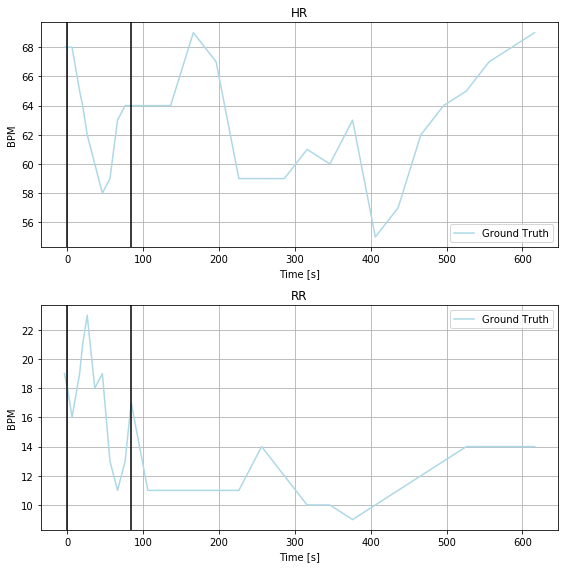

In [18]:
#PLOT DATA
fig = plt.figure(figsize = (8, 8))
FONT = 10

ax = fig.add_subplot(211)
ax.plot(X0217tr_n, X0217hr_n, c = GTcolor, label = "Ground Truth")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(X0217naloxone) - timestr(X0217fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("HR")
plt.legend()
plt.grid()

ax = fig.add_subplot(212)
ax.plot(X0217th_n, X0217rr_n, c = GTcolor, label = "Ground Truth")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(X0217naloxone) - timestr(X0217fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("RR")
plt.legend()
plt.grid()

plt.tight_layout()

## PIG 2, Run 1

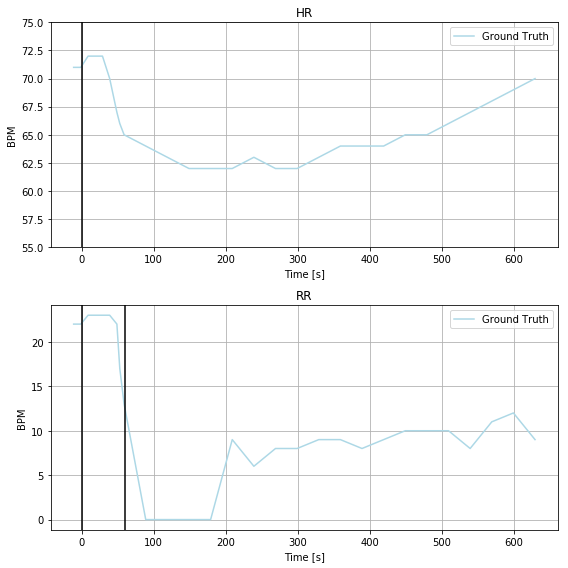

In [20]:
#ARDUINO TIME SCALES
Fentanyl  = 342935/1000
Datastart = 422413/1000
Time_offset = Datastart - Fentanyl  

#ECG HR DATA
ECG_HR_t = [0.2510094654083628, 1.8986613409094106, 2.9155714828202135, 3.9517900451470447, 4.9687001870578476, 6.004918749384679, 7.034701171572833, 8.058047453622311, 9.08139373567179, 10.117612297998622, 11.115214019493397, 12.151432581820227, 13.174778863869706, 14.204561286057862, 15.247215988523369, 16.270562270572846, 17.30678083289968, 18.323690974810482, 19.33416497658261, 21.367985260404215, 22.41063996286972, 23.440422385057875, 24.463768667107356, 25.487114949156833, 27.52093523297844, 28.54428151502792, 29.5676277970774, 30.590974079126877, 31.620756501315032, 33.68032134569134, 34.70366762774082, 35.69483320909692, 36.73105177142375, 37.74796191333456, 38.764872055245355, 39.77534605701749, 40.81156461934432, 41.84134704153247, 42.8775656038593, 43.8944757457701, 44.90494974754223, 45.92185988945303, 46.96451459191854, 47.98786087396802, 49.02407943629485, 50.073170278899035, 51.090080420809834, 52.113426702859314, 53.14320912504747, 54.160119266958276, 55.20277396942378, 56.23899253175061, 57.26877495393877, 58.31786579654295, 59.32833979831508, 60.34524994022588, 61.37503236241403, 62.41768706487954, 63.45390562720637, 64.50299646981055, 65.55208731241474, 66.58830587474156, 67.59877987651369, 68.62856229870185, 69.64547244061265, 70.68812714307816, 71.70503728498896, 72.75412812759315, 73.7839105497813, 74.8008206916921, 75.81773083360291, 76.84107711565238, 77.86442339770187, 78.90707810016737, 79.96260508291023, 80.9859513649597, 82.02860606742522, 83.05838848961336, 85.09220877343498, 86.12842733576181, 87.15820975794996, 88.20086446041547, 89.22421074246495, 90.2539931646531, 90.84611805741129, 91.26446716642523, 92.30068572875206, 93.32403201080155, 94.3538144329897, 96.413379277366, 98.46007184146497, 99.49629040379179, 100.51320054570259, 101.53654682775208, 102.58563767035626, 103.60898395240574, 104.65807479500992, 105.67498493692072, 106.69189507883152, 107.71524136088101, 108.74502378306916, 109.77480620525732, 110.81746090772282, 111.84724332991098, 112.87702575209913, 113.40478924347056, 113.9003720341486, 114.93015445633677, 115.94706459824756, 116.9832831605744, 118.01306558276255, 119.04284800495071, 120.07263042713886, 122.14506755179252, 123.16841383384201, 124.20463239616883, 125.2279786782183, 126.26419724054514, 127.29397966273329, 130.37045464902042, 131.3938009310699, 132.4107110729807, 133.44692963530753, 134.46383977721834, 135.50005833954515, 137.54031476350545, 138.5636610455549, 139.59344346774307, 140.61035360965388, 141.6530083121194, 142.67635459416886, 143.70613701635702, 144.70373873785178, 145.7463934403173, 146.77617586250545, 147.80595828469362, 148.83574070688175, 149.8719592692086, 150.88243327098073, 152.93556197521835, 153.95890825726784, 154.988690679456, 156.01203696150546, 157.03538324355495, 158.0651656657431, 158.74739652044275, 159.08851194779257, 160.09254980942603, 161.13520451189154, 162.17142307421838, 163.18833321612917, 164.23098791859468, 165.2478980605055, 166.2841166228323, 167.29459062460444, 168.31793690665393, 169.3477193288421, 170.37750175103022, 171.4008480330797, 172.41775817499052, 173.44754059717866, 174.47088687922815, 175.48136088100028, 176.51114330318842, 177.54092572537658, 178.55139972714872, 179.58761828947553, 180.60452843138634, 181.61500243315848, 182.61904029479192, 183.6423865768414, 184.65929671875222, 185.68907914094035, 186.70598928285116, 187.742207845178, 188.74624570681144, 189.75671970858357, 190.76719371035568, 191.77123157198915, 192.80745013431599, 193.8179241360881, 194.8348342779989, 195.85174441990972, 197.8662562833153, 198.88316642522608, 199.88720428685954, 200.92342284918638, 201.9338968509585, 202.95724313300798, 203.95484485450277, 204.96531885627488, 205.96935671790834, 206.97339457954178, 207.9838685813139, 209.00077872322473, 210.0241250052742, 212.03863686867976, 213.0233663098972, 214.0338403116693, 215.04431431344145, 216.06122445535226, 217.0652623169857, 218.0821724588965, 220.07093976174738, 221.07497762338082, 222.07901548501428, 223.07661720650907, 224.1063996286972, 225.11043749033067, 225.6317648415634, 227.09276865304287, 228.10324265481498, 229.11371665658712, 230.11775451822058, 231.13466466013136, 232.15157480204218, 233.1620488038143, 234.16608666544775, 235.15725224680384, 236.16772624857597, 237.17176411020944, 238.18223811198155, 239.186275973615, 240.19031383524845, 241.20722397715926, 242.185517278238, 243.2024274201488, 244.20646528178227, 245.21693928355438, 246.22741328532652, 247.22501500682128, 248.22261672831607, 249.21378230967215, 250.2242563114443, 251.22829417307776, 252.21302361429517, 253.2170614759286, 254.22753547770074, 255.22513719919553, 256.21630278055164, 257.201032221769, 259.1897995246199, 260.20027352639204, 261.1978752478868, 262.1890408292429, 264.17137199195514, 265.1689737134499, 266.16657543494466, 267.16417715643945, 268.1746511582116, 270.15698232092376, 271.14814790227985, 272.139313483636, 273.1562236255468, 274.12808078648686, 275.11924636784295, 276.13615650975373, 278.1056153921886, 279.090344833406, 280.08151041476214, 281.07911213625687, 281.67767316915376, 282.0574054373356, 283.04857101869175, 284.03973660004783, 285.01802990112657, 286.00919548248265, 286.9746165032841, 287.9657820846402, 288.95694766599627, 290.41151533733705, 290.91353426815374, 291.8982637093712, 292.89586543086597, 293.8805948720834, 294.8653243133008, 295.85648989465693, 296.8219109154583, 297.8066403566757, 298.79136979789314, 299.7889715193879, 300.780137100744, 301.7519942616841, 302.7431598430402, 303.7150170039803, 304.7254910057524, 305.67803974627645, 306.6756414677712, 307.65393476885, 308.6322280699287, 309.60408523086875, 310.5695062516702, 311.5542356928876, 312.538965134105, 313.51725843518375, 314.50842401653983, 315.4867173176186, 315.9887362484353, 317.4239954993601, 318.40228880043884, 319.3805821015176, 320.365311542735, 321.3564771240911, 322.33477042516984, 323.3194998663873, 323.90518861900676, 324.27848474704996, 325.25677804812875, 326.2286352090688, 327.2133646502862, 328.19165795136496, 329.1699512524437, 329.72989544450854, 330.2834034964347, 330.7918585673901, 331.1136655743239, 332.07908659512526, 333.0638160363427, 334.0228009170054, 335.0075303582228, 335.96651523888556, 336.95768082024165, 337.9359741213204, 338.9207035625378, 339.8861245833392, 341.141171910381, 341.8234027650807, 342.80813220629807, 343.77998936723816, 344.75184652817825, 345.730139829257, 345.98114929466533, 346.6698162895037, 347.6802902912758, 348.20161764250855, 348.6457113120772, 349.60469619273994, 350.5829894938187, 351.54841051462006, 352.51383153542145, 353.4728164160842, 354.4382374368856, 355.4165307379643, 356.3819517587657, 357.36024505984443, 358.3385383609232, 360.2629442623873, 361.22836528318874, 362.20022244412877, 363.1849518853462, 366.068342667473, 367.02732754813576, 367.9863124287985, 368.95816958973853, 369.91071833026257, 370.9018839116187, 371.44895582340615, 371.85443265214275, 372.81985367294413, 373.77240241346817, 374.7313872941309, 375.6903721747936, 376.67510161601103, 377.6147780762577, 378.57376295692046, 379.51343941716715, 380.47886043796854, 381.4378453186313, 382.4097024795713, 383.36868736023405, 385.2609125610048, 386.2134613015288, 387.1788823223302, 388.14430334313164, 389.1032882237943, 390.05583696431836, 390.53854747471905, 391.0148218449811, 391.9544983052278, 392.9199193260292, 393.8724680665532, 394.8185806669386, 395.74538484690794, 396.04144729328704, 397.2514416393581, 397.6762268885107, 398.60303106848005, 399.5362713885881, 401.4284965893588, 402.3681730496055, 403.3335940704069, 404.2797066707923, 404.543588416478, 405.21294699090026, 406.1654957314243, 407.1180444719484, 408.0641570723337, 409.0102696727191, 409.58308614506126, 410.1687748976808, 410.90249487348984, 411.8486074738752, 412.80115621439927]
ECG_HR_y = [55.167381216784186, 56.32091824561594, 56.75066590329161, 56.73591533745321, 56.72170605099986, 56.72922226289205, 56.751210684017614, 56.751210684017614, 56.72949543218935, 56.71492867941015, 56.70071939295681, 56.64168209956359, 56.64168209956359, 56.65661997980214, 56.65661997980214, 56.68575689997677, 56.6640416481485, 56.686030069274075, 56.64983236169516, 56.62756558396458, 57.21758821750089, 57.24672513767552, 57.25405403516756, 57.254054035167556, 57.232338783339294, 57.77918902905587, 57.77918902905587, 57.75747377722762, 57.75014487973558, 57.17487281203768, 57.75028230736763, 57.74295340987559, 57.68316596328347, 57.697732716062674, 57.68298215022427, 58.52953636355898, 60.210392610709185, 60.210392610709185, 60.21772150820122, 60.22495936348839, 59.627561447032875, 59.02631176743119, 59.00432334630562, 59.033460266480255, 59.03346026648024, 59.0192509800269, 59.04802701925945, 59.01182931168054, 59.01925098002691, 59.034001545865316, 59.026579877518934, 59.04096623185517, 59.04820408714235, 59.03381773280612, 59.05526487454662, 59.03299809681604, 60.12669858824921, 61.38279547399518, 61.397181828331405, 61.41917024945698, 61.433379535910326, 61.454826677650836, 61.462064532938, 61.43979775520742, 60.85353147694672, 60.84610980860034, 60.853258307649405, 60.84583663930303, 60.860045925756374, 60.860045925756374, 60.07005746244415, 60.06263579409778, 60.07005746244414, 60.05549070966494, 60.08462762983958, 60.105811596533734, 59.52134936120645, 59.543064613034694, 59.5430646130347, 60.133087246571016, 60.12593874752196, 60.133267645014, 60.14765399935023, 60.17791525351091, 60.16352889917468, 59.30222412000157, 57.599101095120766, 57.606338950407945, 57.59177219762874, 57.614038975359335, 57.61586545608227, 58.202177255445385, 58.209415110732564, 58.20199344238619, 58.20199344238618, 58.2234405841267, 58.80975238348983, 61.18377562017489, 61.19890440565018, 61.169767485475546, 61.15520073269635, 61.16995129853476, 61.15556494419853, 61.18470186437317, 61.17746400908601, 61.1997307868166, 60.098608627037045, 58.84251174129106, 58.84251174129108, 58.8350900729447, 58.85707849407027, 58.85707849407029, 58.86440739156232, 58.88667416929291, 59.472940447553604, 59.46561155006157, 59.495116183079325, 59.480549430300115, 59.50253785142569, 59.524804629156286, 60.3299218779438, 60.32992187794379, 60.32992187794379, 60.33715973323096, 60.33715973323096, 60.33715973323096, 60.9441724223799, 60.959110302618456, 60.981377080349056, 60.99650586582434, 61.00365436487339, 61.01859224511195, 61.03334281095035, 61.010503225136034, 60.45527268078588, 60.470023246624294, 60.49990259793799, 60.492664742650824, 60.52216937566859, 60.507231495430034, 61.12564251697691, 61.14058039721547, 61.170459748529176, 61.193010202350834, 61.20794808258939, 61.222698648427794, 60.63638684906466, 57.71419385543371, 57.73762864077779, 57.77428177284462, 57.803786405862375, 57.803786405862375, 57.84805211151229, 57.84805211151229, 57.29338410762827, 57.30099668121138, 57.32354713503303, 57.361137286685754, 57.361137286685754, 57.38368774050741, 58.50545916723077, 58.1615175593775, 58.176455439616056, 58.17645543961606, 58.20633479092976, 58.22108535676816, 58.21356914487596, 58.24307377789374, 58.25820256336903, 58.28133687789432, 58.273724304311216, 58.29627475813287, 58.30379097002505, 58.333670321338744, 58.34879910681403, 58.37078752793962, 58.40223947669087, 58.394723264798685, 58.402335838381795, 58.39472326479869, 58.424227897816465, 58.43955127173858, 58.46239085755289, 58.493041383970365, 59.084925060387334, 59.10005384586261, 59.12348863120668, 59.16060583780755, 59.16060583780756, 59.19086709196824, 59.198678032571394, 59.22972539149859, 58.637940181013704, 58.6303276074306, 58.645650981352716, 58.676301507770184, 58.10902580578898, 58.716232856128066, 58.700508871123, 58.71583224504513, 58.71583224504514, 58.141134874717565, 58.15665661565975, 58.187307142077216, 58.76396356708681, 58.80353886684004, 58.81906060778224, 58.79622102196792, 58.24023073967969, 58.26366552502377, 57.17254462471789, 57.55407638422387, 58.37132299340396, 60.343882738125174, 60.35940447906735, 60.390055005484825, 60.436635739711384, 60.45977005423667, 60.507577016338594, 60.507577016338594, 60.53071133086388, 60.16052467741983, 61.36331130355085, 61.38674608889493, 61.39445688923395, 61.43302046005332, 61.42500329664614, 61.455653823063614, 61.50346078516552, 61.534508144092705, 61.565555503019894, 61.56555550301989, 61.573366443623044, 61.59742000243411, 61.6205543169594, 61.660129616712645, 61.629082257785456, 61.69368626062589, 61.70900963454801, 61.732750782960245, 61.74868099076934, 61.764821505178496, 62.404413677765305, 62.435461036692494, 62.45118502169755, 62.46711522950663, 63.072463126251684, 63.09620427466393, 64.28366752687283, 63.9168685582795, 63.95593308061387, 64.577211185168, 64.58512422956989, 64.58512422956989, 64.63170496379645, 64.61556444938728, 65.45373846026504, 67.48829926556269, 68.10562084791587, 68.12176136232503, 68.12967440672692, 68.15341555513918, 67.37523346829346, 66.35818295952093, 67.31547730786195, 68.46487204851711, 70.96718909116743, 70.99947431232718, 70.97510213556934, 71.01572951118982, 71.0236425555917, 71.44997832559841, 70.27032601399266, 70.27834317739985, 70.29406716240491, 70.31843933916275, 70.05596974330909, 70.60420934790837, 70.57983717115053, 70.59597768555969, 70.61211819996885, 70.6358593483811, 74.20585976508269, 74.71360716229064, 74.69047284776536, 75.7575401892602, 77.2721113508385, 77.26365646456071, 77.28739761297297, 77.30375262632363, 77.32010763967429, 77.33668145648369, 77.33668145648369, 77.34469861989088, 77.36907079664871, 77.36907079664871, 77.3850010044578, 76.78194407405319, 75.63457698360718, 76.03324045161473, 76.02522328820754, 75.21477396592059, 75.24748829713916, 75.28811567275963, 75.29623902376161, 75.33740824125796, 74.49923423038021, 73.47812406621553, 75.2109766712255, 75.21920833357417, 75.26037755107052, 75.28507471888192, 75.3097718866933, 74.38531000967177, 73.49435515686447, 72.38558779182979, 69.9336800369041, 69.9336800369041, 69.96639436812265, 69.94982055131324, 69.98253488253182, 69.36538570048748, 69.41446796238574, 69.4308229757364, 69.45519515249424, 69.46353730695498, 69.767176120305, 70.49420275151527, 71.79515002439996, 71.83743596112261, 71.84566762347129, 71.87881967756046, 68.36647144150126, 67.91874658225238, 70.78438406410227, 69.47430754156943, 69.59713175250322, 69.64058047365288, 69.69979690130181, 69.09098987371821, 69.12504414809219, 69.11670199363145, 69.1420689531141, 72.46293446882652, 73.01271453299856, 73.04586658708773, 73.0790186411769, 73.72379754441482, 73.74916450389746, 74.60932697403985, 75.43958794051571, 76.65891259656907, 76.67593740159099, 76.68439228786876, 76.70942099095595, 76.73548536451571, 76.79313754515809, 75.86798961108498, 74.19435343372395, 74.2284077080979, 74.21995282182014, 74.23697762684205, 74.25400243186395, 74.33016548423221, 74.34790208546865, 74.34790208546866, 74.33921477057734, 74.3732690449513, 74.39029384997322, 74.45937073681523, 74.46782562309302, 75.12842352628702, 75.14568075992248, 75.17973503429644, 75.19653207503497, 75.25821701999112, 75.28428139355087, 74.06666733838368, 72.83295365655509, 72.82426634166377, 72.8410633824023, 72.89429344108068, 72.92977170609137, 72.9033477899636, 70.13599125809702, 70.43009351578198, 68.89097909325318, 68.8645551771254, 68.92005916686418, 69.56292046882173, 69.56292046882174, 69.60578188312002, 69.64126014813071, 67.51516021809931, 68.46426902453442, 68.51749908321281, 68.55249291808471, 68.56998737290033, 68.61464751283457, 67.81450758065127, 67.06946401542659, 67.65357163509287, 69.49267619758498]
ECG_HR_t = [i + Time_offset for i in ECG_HR_t]

#ECG RR DATA
ECG_RR_t = [2.419970521223032, 10.722528958397795, 18.741899355854972, 26.780578028747435, 31.839346192793453, 35.07670037411044, 43.35995053584991, 47.26665826559028, 51.90708046187168, 54.55231419650643, 58.870931802199664, 63.61433146746928, 66.09866290680993, 70.05042327923266, 75.24434937132571, 83.38600551320638, 87.49223208911143, 90.61373661781667, 97.57115186633288, 100.91148351663807, 106.15046225141347, 110.31461365362438, 114.36935149503532, 117.42649510562292, 121.10793962195157, 125.43942941126834, 128.70896405164413, 130.90367135945544, 133.9157623273607, 136.6060487046778, 144.26499796067623, 151.6343230851453, 159.63438520716718, 167.473545033895, 170.78813231695312, 174.61117085314058, 179.16148776405728, 182.05772907935082, 189.11168570504347, 194.23481478720714, 196.74489059379485, 204.14639617732274, 207.35800599139267, 211.04588659953308, 215.51897040870864, 219.181106649602, 225.88751431745945, 234.8401180276223, 240.92866088155046, 248.34303864870188, 252.62303970352454, 255.5450253860651, 262.9143505105342, 269.14448738432117, 272.90316500239095, 277.1767299654018, 283.4261751146241, 290.04247749711686, 296.3562835644567, 300.16644991702066, 303.0176385896318, 306.0683461084077, 309.0160761581953, 312.0603475851594, 315.0338220021941, 316.43045392534674]
ECG_RR_y = [14.473662012868344, 14.739207727543567, 14.769713168646481, 14.770315085616494, 14.77664731255636, 14.984685959120078, 14.890042312303057, 15.088119534447497, 15.266728375102838, 15.119263036355683, 14.753575344061955, 15.087250365190584, 14.935828278278194, 14.753524740301424, 14.789737812253039, 14.851791012952306, 15.152267817205063, 14.96342630420012, 14.54611146014639, 14.587133895762571, 14.25813959320367, 14.343674763061435, 14.547849347067773, 14.325996147322622, 13.99281343732786, 13.981650541444782, 13.987908949407158, 13.696231702057405, 13.08723667351321, 12.740014853965649, 12.52151267928705, 12.961838768567278, 13.346026237856814, 13.77451314290944, 14.1763523864941, 14.245572318592236, 15.154437938157685, 15.02227565941426, 14.689732095587052, 14.738198196663609, 15.041442510516736, 14.842246835092086, 14.904737268749184, 14.603683746673216, 14.380739107981803, 14.30801550696866, 15.46928178448823, 15.491087779267774, 15.603268787813176, 15.586153422632027, 15.662065845749341, 15.55527308373147, 15.949788747797552, 16.34096535039124, 16.636505569340844, 16.44217411231548, 16.289341730537895, 16.629072099849264, 17.107557693692385, 17.143112810194566, 16.979117312275736, 16.63320452622546, 16.32914560245737, 16.030082850000312, 16.044272195780998, 16.065291219973535]
ECG_RR_t = [i + Time_offset for i in ECG_RR_t]

#PLOT DATA
fig = plt.figure(figsize = (8, 8))
FONT = 10

ax = fig.add_subplot(211)
#ax.plot(ECG_HR_t, ECG_HR_y, c = ECGcolor, label = "ECG")
ax.plot(Y0217ts, Y0217hr, c = GTcolor, label = "Ground Truth")
plt.axvline(x = 0, c = Fentcolor)
#Naloxone = timestr(Y0217naloxone) - timestr(Y0217fentanyl)
#plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("HR")
plt.legend()
plt.grid()
plt.ylim(55, 75)

ax = fig.add_subplot(212)
#ax.plot(ECG_RR_t, ECG_RR_y, c = ECGcolor, label = "ECG")
ax.plot(Y0217ts, Y0217rr, c = GTcolor, label = "Ground Truth")
plt.axvline(x = 0, c = Fentcolor)
#Naloxone = timestr(Y0217naloxone) - timestr(Y0217fentanyl)
#plt.axvline(x = Naloxone, c = Naloxcolor)

plt.axvline(x = 60, c = Fentcolor)

plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("RR")
plt.legend()
plt.grid()

plt.tight_layout()

## PIG 2, Run 2

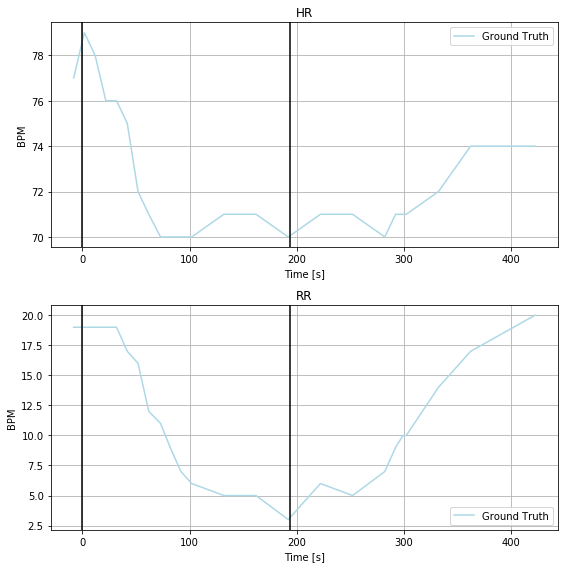

In [12]:
#PLOT DATA
fig = plt.figure(figsize = (8, 8))
FONT = 10

ax = fig.add_subplot(211)
ax.plot(Y0217ts_2, Y0217hr_2, c = GTcolor, label = "Ground Truth")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(Y0217naloxone_2) - timestr(Y0217fentanyl_2)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("HR")
plt.legend()
plt.grid()

ax = fig.add_subplot(212)
ax.plot(Y0217ts_2, Y0217rr_2, c = GTcolor, label = "Ground Truth")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(Y0217naloxone_2) - timestr(Y0217fentanyl_2)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("RR")
plt.legend()
plt.grid()

plt.tight_layout()

### -------------------------------------------------
# TERMINAL March 3, 2022
### -------------------------------------------------

## PIG 1

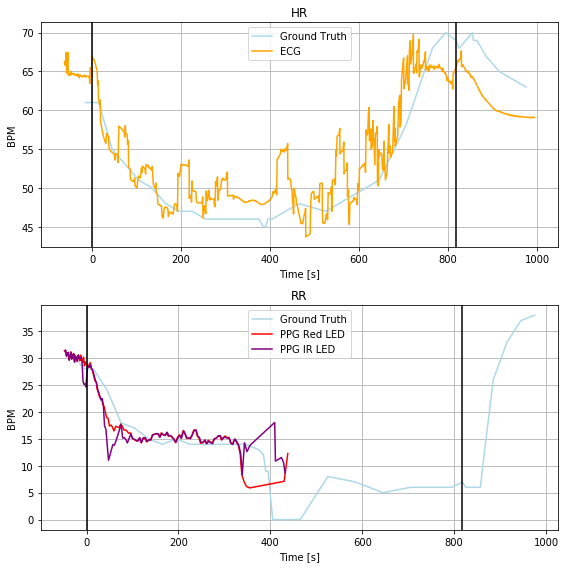

In [13]:
Red_RRx = [-48.19006194153675, -46.354022966030406, -44.506061659514266, -42.35408091224871, -40.512080771237486, -38.640274802701775, -36.62540086204873, -34.5032259423076, -32.696992794325716, -30.533089716050387, -28.661283747514677, -26.77159428246431, -24.6017300386841, -22.700118242623933, -20.762739453534454, -18.55114705121999, -16.70318574470385, -14.676389473041002, -12.58402038082436, -10.670486253754422, -8.715223968150259, -6.521515062350478, -4.703359583358793, -2.5811846636176945, -0.46497090938148145, 1.4545243831933412, 3.719767275051833, 5.6452237331315125, 7.904505459485119, 9.824000752059941, 12.160777629977087, 14.08027292255191, 16.184564345778323, 18.366350920568333, 20.85811810161267, 22.926642531809772, 25.299186402756288, 27.7253807632468, 30.30060426135965, 32.83409960093821, 35.45105125758523, 38.21107088634961, 40.965129349609136, 43.53439168221707, 46.747459889353145, 49.72208147629363, 53.179557469130266, 56.20782954561475, 59.53415989734379, 63.70101458526245, 67.01542260598167, 70.30002479917648, 74.25823869442395, 77.6203360391823, 81.02416154247494, 84.40414238374798, 87.78412322502102, 91.45024001052884, 95.50383255385454, 98.8718910641178, 102.4187845395278, 106.50218291037795, 110.49020263314988, 114.71666897611739, 118.51989256823767, 122.82981522827369, 127.0026310816972, 130.6627867017001, 135.43768027111759, 138.93688442248845, 143.19315659298042, 147.49115692200667, 151.75339025800355, 155.3062448989184, 158.656419912667, 162.75174061452697, 166.91859530244557, 170.46548877785557, 174.25679003896607, 177.70234370079294, 182.34609162910283, 185.9645190905715, 189.34449993184455, 193.41001480618002, 197.89281126585786, 201.83910283009556, 205.4634914570691, 210.4112588261284, 213.88661831547972, 217.41562829437504, 221.618249975323, 225.01015314760582, 229.0279786979022, 233.43328000601645, 237.66570751448887, 241.02184369374237, 244.59854299667683, 247.97256267244495, 252.1930678499076, 256.7056701371099, 260.5863888807937, 264.9261173683542, 269.03336040122394, 273.17040926161815, 277.53398241119817, 281.25374968625, 285.7603908079474, 290.15973095055676, 293.6768185984423, 297.3727412114745, 301.4203725892953, 305.7004894218069, 309.9448392612891, 313.30693660604743, 317.01478155008954, 321.736024629963, 325.9207628143963, 330.2545301364519, 334.2604333557384, 337.93251130675117, 342.6716378831393, 348.0009198445116, 354.9814446507386, 429.9013727162054, 437.87145099624433]
Red_RRy = [31.400458715616136, 31.244348628823126, 30.571930031142376, 30.66982782022393, 30.83108171828674, 29.749349197680587, 30.318365845399512, 31.187957626143493, 29.79625674492289, 30.75238344856914, 30.481152179823123, 29.325783295102525, 30.52996149809202, 30.042758699836988, 29.469246118111396, 30.525701455761187, 30.080253421321984, 29.517145839280833, 30.598358083517603, 29.827679849844422, 29.24420566388884, 30.221024938858186, 28.592711876527925, 29.314852038341282, 28.86599942504681, 28.86599942504681, 28.663291064226105, 28.687484730479213, 29.176496725369198, 28.237042122119995, 27.837768078079215, 27.274759850431177, 26.468797386877956, 25.77621978624718, 25.581132895782808, 24.25026092913734, 23.659792959762207, 22.912014921384266, 22.533785235790077, 22.45136285984398, 21.38793803604515, 20.995852299632556, 19.887769744871093, 19.00283790338947, 18.84387685580334, 17.40105619168768, 17.588326332024153, 17.20176961535366, 16.481883717066886, 17.34354696208596, 17.22465830031368, 17.09579020658915, 17.74409715362369, 17.37411903833691, 16.66773389539112, 16.68344325814382, 16.474601141549073, 16.05648933414898, 16.117333330841873, 15.212793098096697, 14.927762889593748, 14.734692884872546, 14.568122566653559, 15.11724486343918, 14.31465348720429, 15.121001628503812, 15.050517414153083, 14.442326089223561, 14.820176564415599, 14.755444683303331, 15.708611994807852, 15.881333730911305, 15.96188953638193, 15.96898526265885, 15.448032473116346, 16.138752426232273, 15.769064358764387, 15.685458700885434, 16.166928439025455, 15.503061248487281, 15.619037360477332, 15.274627094353368, 14.975361150137616, 14.317461996437455, 15.287436656217789, 15.736883591340858, 15.167455199508225, 16.558080824798395, 15.975343252430939, 15.129847813719039, 15.104712597933194, 15.15184186311728, 15.612289928082056, 16.65303727611597, 16.663048760369655, 15.51764782100144, 15.189100434753685, 14.199802087774678, 14.297810014176857, 14.599558624641006, 14.171845055273149, 14.747917961024301, 14.424254357793048, 14.208083610657074, 15.035426104473842, 15.061442300217443, 15.438892130789787, 15.533867123517291, 14.803085017291895, 15.206059283277874, 15.545664830925254, 15.218216958271565, 15.268560408212364, 14.268251425098217, 13.967248701032101, 14.874999946458157, 14.455686502271995, 13.809132773243054, 12.213494455733354, 8.328827604683468, 7.045726644439239, 6.143160326875105, 5.893408871961589, 7.110821288915931, 12.277203492634289]

IR_RRx = [-47.28992595029825, -45.46580930580168, -43.67745965433445, -41.4718284175249, -39.588100117979415, -37.79975046651219, -35.71334253980043, -33.71039093015715, -31.844546127126325, -29.674681883346114, -27.74326425976152, -25.948953442789406, -23.761205702494482, -21.782098754870777, -19.922215117344866, -17.6987003840206, -15.797088587960463, -13.734525323268276, -11.731573713624972, -9.853806579584404, -7.803165645901988, -5.734641215704887, -3.755534268081181, -1.6452816793498535, 2.301009884887815, 4.548369280231622, 6.521515062350442, 8.798680285218733, 10.742020239813098, 13.060913621215615, 15.045981734344206, 17.17411781959022, 19.326098566855773, 21.740370596336515, 23.886390178097212, 26.22912822151927, 28.643400251000013, 31.218623749112805, 33.77596375071091, 36.380993076348155, 39.06947871905391, 42.050061471499255, 44.488178162999596, 47.73701336316504, 57.07219854382391, 60.45814055060186, 64.66076223154984, 75.16433585116734, 78.49066620289638, 81.94814219573301, 85.25658905094737, 88.714065043784, 96.37416271756861, 99.7839493863661, 103.31295936526142, 107.43212472914088, 111.52148426549594, 115.70026128442437, 119.41406739397128, 123.78360170905621, 128.00410688651885, 131.5569615274337, 136.42127257942457, 139.8549039102416, 144.10521491522871, 148.34360358920605, 152.71313790429093, 156.17657506263248, 159.52675007638106, 163.69360476429966, 167.84853712120855, 171.41331409313318, 175.2880716713122, 178.76939232616837, 183.25218878584622, 186.88849974382953, 190.25059708858794, 194.32207312842831, 198.81679191911593, 202.79885047638294, 206.39939444133694, 211.29351132085225, 214.82848246525248, 218.37537594066242, 222.56607529060062, 225.94605613187366, 230.06522149575318, 234.36322182477943, 238.5419988437078, 242.01735833305912, 245.47483432589576, 248.94423264974216, 253.06935917912654, 257.790602259, 261.40902972046865, 265.7964475320683, 269.9692633854918, 274.0645840873517, 278.4639242299611, 282.30887598061565, 286.8035947713032, 291.13140092785386, 294.5829157551857, 298.3384500232668, 302.2907027530093, 306.6304312405698, 310.79132476298355, 314.23091725930556, 318.0639466789503, 322.6838499452406, 326.8805104606837, 331.1308214656708, 335.24998682955027, 338.7670744774358, 343.6492690259413, 348.9845121528185, 355.86965831096734, 409.35323522084707, 411.01640039671156, 424.12500334196636, 428.5422269810904, 431.8804796638292]
IR_RRy = [31.374485855259863, 31.538949022078235, 30.340717378115837, 31.028890957418565, 31.10521298755731, 29.630466348834364, 30.207392695927368, 31.07820057671399, 29.895313090530923, 30.56161428272502, 30.860318752373768, 29.246639376503218, 30.278318326486644, 29.97164646273835, 29.3955735569872, 30.63770823705545, 30.0644491305815, 30.043490905228587, 30.13371919167154, 29.253662052038145, 25.739912790471337, 25.162866691895207, 25.185764504768944, 24.664747994393956, 28.582381156497384, 28.376483988162253, 28.330825886816417, 28.792110012148413, 28.043762495610878, 27.788212759109335, 27.221481576154147, 26.57582465080396, 25.818555036891127, 25.43023922634776, 24.306024222397028, 23.661352280914652, 23.027648430449197, 22.235484176940727, 22.522304205587666, 21.38125099940426, 17.40872592480355, 16.806234802416824, 14.223145829530097, 11.034191854715521, 13.936841739978519, 13.845184875518063, 14.809833697569442, 17.720173228121965, 15.168898873021917, 15.22957614459947, 14.946210553121874, 14.24930003810707, 15.959156517262489, 15.149621306950017, 14.93812050432228, 14.729466200206643, 14.615487057318488, 15.247877213025358, 14.292578521333596, 15.22827129128206, 15.203347890790768, 14.520471560976162, 14.869647281796196, 14.832052162444967, 15.78027668191928, 15.841033433935628, 16.018340411771955, 15.895219539301305, 15.289051436908068, 15.997923558571397, 15.733882083561369, 15.651104964673678, 16.24139584001358, 15.616853734326087, 15.607978069600646, 15.249814198405447, 14.954350569134744, 14.335087323012543, 15.241153494714416, 15.703310469050034, 15.116628136050068, 16.489618786866362, 15.887817081179268, 15.148759299637645, 15.15897143898063, 15.037176722613193, 15.734087237628001, 16.567608399227304, 16.614293518897156, 15.475322616617296, 15.282344901987209, 14.377696123278488, 14.336138956435862, 14.821726413050238, 14.08588144880283, 14.568233292334202, 14.31078829721231, 14.114030782324408, 15.050346423063376, 15.143232597013949, 15.601286509903304, 15.59176464369254, 14.850841681401556, 15.21771792132072, 15.33576780777965, 15.12615160207407, 15.095427213573798, 14.263599003346647, 13.991759670013142, 15.009830733281355, 14.507949035089064, 13.790288768339197, 12.327377354581664, 8.342944988094052, 14.289504015202706, 12.622297471940724, 13.839492664188132, 18.052401403465186, 10.876886844087409, 11.545486637559277, 10.643530331731382, 8.674019693272633]

#MOVING WINDOW 20
ECG_HRx = [-62.18687854702021, -61.38212120385996, -60.32103374398941, -59.379169594216656, -58.00810152809181, -57.4835189636614, -56.21379071111969, -54.24660609450573, -53.75182935759981, -52.80400404232217, -51.897906885578784, -50.95008157030117, -50.0141785860333, -49.09019793277526, -48.15429494850739, -47.224353129744436, -46.30633364199128, -45.37043065772344, -44.44048883896048, -43.51054702019753, -42.58656636693946, -41.66258571368139, -40.7445662259282, -39.80866324166036, -38.92044958143166, -37.93685727312468, -37.02479895087638, -36.10081829761834, -35.158954147845584, -34.22305116357774, -33.3527209998637, -32.31547820201272, -31.451109203803558, -30.47347806100146, -29.567380904258076, -28.720895402563603, -27.695574935722394, -26.771594282464324, -25.84165246370137, -24.92959414145307, -23.99369115718523, -23.057788172917387, -22.127846354154432, -21.21578803190616, -20.273923882133406, -19.32013740135088, -18.40807907910261, -17.46025376382497, -16.530311945062042, -15.576525464279516, -14.682350638545902, -13.734525323268262, -12.816505835515105, -11.868680520237465, -10.944699866979395, -10.008796882711554, -9.084816229453484, -8.178719072710098, -7.230893757432487, -6.294990773164618, -5.3531266233918915, -4.405301308114251, -3.481320654856209, -2.5454176705883396, -1.6214370173302979, -0.6974563640722278, 0.23844662019561322, 1.1743496044634543, 2.0744855957019825, 3.02827207648448, 3.9820585572670057, 4.912000376029989, 5.841942194792916, 6.7778451790607575, 7.695864666813914, 8.625806485576899, 9.549787138834969, 10.48569012310281, 11.42159310737065, 12.357496091638492, 13.662991337209572, 14.241224391183945, 15.177127375451843, 16.10706919421477, 17.048933343987525, 18.39615674809283, 18.920739312523207, 19.892409289820417, 20.858118101612714, 21.794021085880555, 22.771652228682623, 23.72543870946515, 24.70903101777213, 25.686662160574198, 26.68217679989095, 27.677691439207702, 28.66724491301954, 29.67468188334612, 30.6880800191775, 32.73275978735506, 33.770002585206036, 34.783400721037474, 35.82064351888845, 36.85788631673943, 37.901090280095325, 38.938333077946304, 39.999420537816825, 41.05454683218249, 42.08582846452861, 43.140954758894274, 44.202042218764795, 45.26312967863537, 46.33017830401081, 47.39722692938624, 48.452353223751906, 49.50151835261271, 50.562605812483234, 51.62369327235381, 52.68478073222433, 53.775674019619366, 54.84868381049966, 55.92169360138001, 56.994703392260355, 58.079635514150475, 60.237577426920886, 61.310587217801235, 62.395519339691354, 63.480451461581474, 64.55346125246183, 65.63243220884704, 66.71736433073715, 67.78441295611259, 68.87530624350762, 69.95427719989283, 71.03920932178295, 72.14798610569261, 73.22695706207782, 74.58610279719295, 75.40874363686783, 76.50559808976777, 77.57860788064806, 78.67546233354796, 79.77827795195276, 81.45932662433194, 81.95410336123786, 83.0509578141378, 84.15377343254255, 85.25658905094735, 86.35344350384725, 87.4622202877569, 88.5590747406568, 89.6857350210812, 90.79451180499086, 91.90924975440544, 93.03591003482978, 94.15660914974922, 95.5753665399132, 96.39204621408328, 97.5067841634978, 98.62748327841729, 99.73029889682209, 100.85099801174152, 102.89567777991903, 104.24290118402433, 105.36956146444868, 106.49026057936817, 107.62288202529743, 108.74358114021686, 111.01478519758024, 112.13548431249967, 113.26810575842893, 114.39476603885328, 115.53930981579231, 116.66597009621665, 117.78666921113614, 118.91929065706535, 120.08171793051906, 121.21433937644827, 122.3588831533873, 123.52131042684101, 124.64797070726536, 125.78655331869948, 126.9847475851825, 128.08160203808245, 129.23210698052634, 130.38857308847514, 131.55100036192886, 132.68362180785806, 133.834126750302, 135.29461229900022, 136.15898129720938, 137.31544740515818, 138.46595234760207, 139.64030195206556, 140.7908068945095, 141.96515649897293, 143.52102069574943, 144.29597221138522, 145.46436065034385, 146.62082675829265, 147.801137528261, 148.98740946373425, 150.14983673718797, 151.348031003671, 152.49257478061003, 153.69076904709306, 154.86511865155654, 156.06331291803957, 157.23766252250306, 158.4120121269665, 159.5923228969349, 161.7741094717249, 163.1392163723449, 164.331449473323, 165.53560490531095, 166.73379917179398, 167.92007110726723, 169.1063430427405, 170.27473148169906, 171.46696458267724, 173.85739195013844, 175.06154738212632, 176.24185815209472, 177.44005241857775, 178.63228551955592, 179.82451862053404, 181.02867405252198, 182.226868319005, 184.5040335418733, 185.827412283959, 187.03156771594695, 188.22380081692512, 189.43391741441792, 190.63211168090095, 191.8362671128889, 193.03446137937192, 194.24457797686472, 195.46661690536735, 196.67673350286015, 198.62007345745457, 200.3130444608435, 201.52912222384123, 202.67962716628512, 203.9374330878171, 205.15351085081477, 206.32786045527826, 207.5916275423151, 208.79578297430305, 210.0357053993203, 211.23986083130825, 212.45593859430596, 213.66605519179876, 214.88213295479648, 216.09224955228927, 217.95213318981519, 218.3574924441478, 219.7583663377971, 220.98636643180458, 222.22032769131698, 223.4364054543147, 224.65844438281732, 225.89240564232966, 227.10252223982252, 228.3245611683251, 229.54660009682772, 230.7746001908352, 232.00260028484269, 233.21271688233549, 234.4347558108381, 235.6627559048456, 236.89075599885308, 238.12471725836548, 239.35867851787788, 240.58667861188536, 241.81467870589285, 243.03075646889056, 244.25279539739313, 245.48675665690553, 246.69091208889347, 248.56271805742915, 249.14095111140358, 251.60291246492346, 252.84283488994072, 254.0887184804629, 255.32267973997529, 256.538757502973, 257.77867992799025, 259.01264118750265, 261.33153456890517, 262.70260263503, 263.9306027290375, 265.1526416575401, 266.3985252480623, 267.6324865075746, 268.8604866015822, 270.08252553008475, 271.3045644585873, 272.55044804910955, 273.7665258121072, 275.0004870716196, 276.2225260001222, 277.5220600801884, 278.5414193815247, 279.92440977865937, 281.8140992437097, 282.3684876356645, 284.8423713201942, 286.0763325797066, 287.34606083224827, 288.58002209176067, 291.0240999487659, 292.2521000427734, 293.39664381971244, 294.69617789977855, 295.93013915929095, 297.15217808779363, 298.3742170162962, 299.6081782758086, 300.83021720431117, 302.636450352293, 303.97771259089353, 304.52017865183853, 305.76606224236065, 306.9702176743486, 308.204178933861, 309.456023689888, 310.6840237838956, 311.90010154689327, 313.1161793098909, 314.3382182383936, 315.5781406634108, 316.8121019229232, 317.8433835552693, 319.25617977992846, 320.5199468669653, 321.7062188024385, 322.96402472397045, 324.19202481797794, 325.39021908446097, 326.6480250059929, 327.8700639344956, 329.09210286299816, 330.32606412251056, 331.54810305101313, 332.7761031450206, 333.9981420735232, 335.21421983652095, 336.44221993052844, 337.67618119004084, 338.8862977875337, 340.10833671603626, 341.33037564453883, 342.58222040056586, 343.7923369980587, 345.032259423076, 346.2662206825884, 347.5061431076056, 348.740104367118, 349.98002679213533, 351.21994921715253, 352.5015998007041, 353.7176775637018, 354.9754834852337, 356.21540591025104, 357.4851341627928, 358.72505658781, 359.98882367484686, 361.22874609986417, 362.4746296903863, 363.7324356119182, 364.98428036794536, 366.2420862894773, 367.4760475489896, 368.7159699740069, 369.9618535645291, 371.1779313275268, 372.4238149180489, 373.63989268104666, 374.86789277505414, 376.09589286906163, 377.3238929630691, 378.5638153880864, 379.7918154820939, 381.037699072616, 382.28954382864316, 383.51754392265065, 384.76938867867767, 386.009311103695, 387.27903935623664, 388.5308841122638, 389.7827288682908, 391.04053478982274, 392.33410770438405, 393.56210779839154, 394.8377972164381, 396.09560313797004, 397.34148672849227, 398.5992926500242, 399.8451762405463, 401.1089433275832, 402.3488657526005, 403.6007105086275, 404.85255526465454, 406.09843885517677, 407.3443224456989, 408.5782837052113, 409.8182061302286, 411.04024505873116, 412.304012145768, 413.5379734052804, 414.7659734992879, 415.98205126228555, 417.2398571838175, 418.4738184433299, 419.7137408683472, 420.9417409623547, 422.1935857183817, 423.3738964883501, 424.6197800788722, 425.8000908488406, 427.0221297773432, 428.2024405473116, 429.41255714480445, 430.43787761164566, 431.60626605060423, 432.9773341167291, 434.14572255568766, 435.3081498291413, 436.4646159370902, 437.6449267070586, 439.46904335155506, 439.89228610240235, 441.1560531894392, 442.31848046289286, 443.4749465708417, 444.6433350098003, 445.8296069452735, 446.9562672256979, 447.9756265270342, 449.30496643462476, 450.46739370807853, 451.6298209815322, 452.78628708948105, 453.9427531974298, 455.11114163638837, 456.29145240635677, 457.5015690038496, 458.69976327033265, 459.71912257166895, 461.07826830678397, 462.25857907675237, 463.4567733432354, 464.6311229476989, 465.8352783796868, 467.03943381167477, 468.2435892436627, 469.40601651711637, 470.8128515762706, 472.1719973113857, 473.5430653775106, 476.303085006275, 477.6801142379048, 479.87978430920947, 480.3864833771251, 481.7933184362793, 483.16438650240417, 484.5116099065095, 485.90056146914907, 487.2597072042642, 488.64269760139877, 490.0435714950482, 491.4027172301632, 492.77378529628805, 494.1329310314032, 495.50996026303295, 496.8929506601676, 498.2640187262925, 499.65297028893195, 501.04788301707646, 502.4249122487062, 503.801941480336, 505.18493187747066, 506.5142717850612, 507.8555340236616, 509.1908350967572, 510.5320973353576, 511.8614372429483, 513.2205829780632, 514.5797287131784, 515.9269521172837, 517.2384085283597, 517.7272240997606, 518.6035154289796, 519.9447776675802, 521.2383505821413, 522.5915351517515, 523.9268362248472, 526.609360702048, 527.9088947821142, 529.274001682734, 530.6331474178492, 531.9326814979154, 533.2918272330305, 534.6032836441063, 535.8849342276578, 538.007109147399, 538.6509150219272, 539.9921772605276, 541.333439499128, 542.6627794067188, 543.9980804798142, 545.3631873804343, 546.6925272880248, 547.9920613680911, 549.3690905997207, 550.662663514282, 551.980081090863, 553.3153821639585, 554.6208774095296, 556.6774795087167, 557.208023238652, 558.6029359667966, 559.9143923778724, 561.2079652924338, 562.5253828690147, 563.8368392800905, 565.8636355517535, 566.3405287921446, 567.7712085133185, 569.0588202623749, 570.3523931769362, 571.6280825949827, 573.6668011976553, 574.1079274450174, 576.2181800337487, 576.8381412462572, 578.1078694987991, 579.4312482408848, 580.7069376589313, 582.0005105734926, 583.2642776605296, 584.5578505750907, 585.8216176621277, 587.1032682456791, 588.3670353327159, 589.5890742612187, 590.8051520242163, 592.1702589248364, 593.4042201843486, 594.6679872713855, 595.9138708619078, 597.1835991144494, 598.4354438704765, 599.6455604679693, 600.9510557135404, 603.2639879294379, 605.3682793526643, 605.9763182341633, 607.2162406591806, 608.4561630841977, 609.6841631782054, 610.9360079342323, 612.2355420142985, 613.4754644393158, 614.5305907336815, 615.7824354897084, 617.1177365628041, 618.4589988014045, 619.6750765644022, 620.9209601549244, 622.745076799421, 623.335232184405, 624.5870769404321, 626.4767664054825, 627.0549994594569, 629.391776337374, 631.3410774574734, 631.9371940079625, 633.1711552674749, 634.3156990444138, 635.5735049659459, 636.7955438944484, 637.9877769954264, 639.2157770894339, 641.0339325684256, 641.4154471607387, 643.3826317773526, 644.5808260438357, 645.7790203103186, 646.3989815228274, 647.5912146238054, 651.1500304302253, 652.2170790556006, 653.3497005015299, 654.5002054439738, 656.4673900605878, 657.0694677765819, 658.2318950500355, 659.4002834889941, 662.8994876403649, 666.9590413491956, 667.4180510930721, 668.616245359555, 669.8859736120969, 671.0364785545407, 675.608692496792, 678.392556787576, 678.8098383729182, 680.6458773484246, 681.224110402399, 682.374615344843, 686.8574118045208, 689.0928488688548, 690.5473732520481, 691.6263442084335, 692.2164995934177, 694.4102084992173, 695.4712959590879, 698.63071367668, 700.2819565215348, 700.7171216033917, 701.742442070233, 702.9644809987356, 703.8765393209837, 706.6186754532337, 708.7170057109552, 709.1521707928121, 710.2430640802072, 711.1610835679603, 712.1983263658112, 713.2713361566916, 714.8868120085169, 715.435239234967, 716.4784431983228, 717.4799190031445, 720.4664629210947, 721.9686766283273, 722.3323077241255, 723.3337835289472, 724.4902496368961, 725.5036477727274, 726.45743425351, 727.4171818997975, 728.3948130425995, 729.3605218543917, 730.3619976592133, 731.2979006434812, 732.3291822758274, 733.2948910876196, 734.7136484777836, 735.0951630700968, 736.0429883853742, 737.2531049828672, 738.1949691326399, 739.1606779444321, 740.0965809287, 741.0265227474629, 741.9624257317307, 742.9579403710475, 743.8998045208202, 744.8714744981175, 745.819299813395, 746.7671251286727, 747.6374552923867, 749.1396689996193, 749.6582903985448, 750.6359215413468, 751.5658633601097, 752.4958051788726, 753.3959411701112, 754.3616499819036, 755.3333199592007, 756.2036501229147, 757.0024463005702, 758.0158444364015, 759.0471260687477, 759.9711067220057, 760.8831650442539, 761.7773398699876, 762.7192040197604, 763.5895341834744, 764.5135148367324, 765.413650827971, 766.3435926467339, 767.2556509689821, 768.1200199671914, 768.9605443033809, 769.9799036047173, 770.9694570785291, 771.8815154007773, 772.7935737230257, 773.6817873832545, 774.5998068710076, 775.5118651932557, 776.4477681775236, 777.3300206722474, 778.230156663486, 779.154137316744, 780.1198461285364, 781.0438267817945, 781.9439627730328, 782.8500599297763, 783.7680794175294, 784.6622542432631, 785.5564290689967, 786.4148369017009, 787.3745845479884, 788.3641380218003, 789.2761963440485, 790.1882546662969, 791.0883906575352, 792.0064101452886, 792.9065461365269, 793.8484102862997, 794.7485462775383, 795.6725269307963, 796.5845852530447, 797.3893425962049, 798.4563912215804, 799.3922942058482, 800.3103136936013, 801.2283331813544, 802.1463526691077, 803.0703333223657, 804.0121974721385, 804.9302169598916, 805.8720811096644, 806.7483724388833, 807.749848243705, 808.6917123934777, 809.6097318812308, 810.5456348654986, 811.4874990152714, 812.4114796685294, 813.3771884803218, 814.3071302990847, 815.2609167798673, 816.2206644261546, 817.1684897414323, 818.0984315601952, 819.0760627029974, 820.0358103492847, 821.0015191610771, 821.93146097984, 822.8494804675931, 823.8151892793855, 824.7451310981485, 825.6810340824163, 826.6169370666842, 827.5230342234274, 828.4827818697149, 829.7644324532664, 830.3367043417359, 831.2606849949941, 832.2085103102715, 833.114607467015, 834.0207046237583, 834.9268017805018, 835.8507824337598, 836.7568795905033, 837.6629767472466, 838.5631127384852, 839.4632487297235, 840.321656562428, 841.2933265397251, 842.2173071929831, 843.1234043497266, 844.0175791754602, 844.9654044907379, 845.8595793164714, 846.7954823007392, 847.7015794574827, 848.6374824417505, 849.5435795984938, 850.4377544242275, 851.343851580971, 852.2618710687241, 853.2335410460212, 854.169444030289, 855.0993858490522, 856.0233665023102, 856.9533083210731, 857.8951724708459, 858.8012696275891, 859.7312114463521, 860.6790367616297, 861.5851339183732, 862.5210369026411, 863.4330952248893, 864.3689982091571, 865.3168235244348, 866.2646488397124, 867.1826683274655, 868.1304936427432, 869.0604354615061, 869.9903772802691, 870.9620472575664, 871.8919890763293, 872.8338532261021, 873.763795044865, 874.7295038566572, 875.6952126684496, 876.6251544872125, 877.5849021335, 878.5446497797873, 879.5043974260748, 880.4641450723623, 881.4119703876397, 882.389601530442, 883.3493491767292, 884.3210191540265, 885.2926891313236, 886.2524367776111, 887.2241067549082, 888.1957767322056, 889.1734078750076, 890.1331555212948, 891.1227089951069, 892.1063013034138, 893.0779712807109, 894.0556024235129, 895.0272724008103, 896.0168258746221, 896.9825346864145, 897.9720881602263, 898.9497193030284, 899.9333116113353, 900.9109427541373, 901.8945350624444, 902.8781273707514, 903.879603175573, 904.8453119873652, 905.8467877921869, 906.8363412659987, 907.8318559053155, 908.8154482136226, 909.8169240184441, 910.8124386577608, 911.8019921315729, 912.8094291018992, 913.8168660722258, 914.8183418770475, 915.8138565163642, 916.8153323211859, 917.8108469605027, 918.8182839308292, 919.8078374046411, 920.8093132094627, 921.8107890142844, 922.8182259846108, 923.8197017894324, 924.8152164287492, 925.8286145645807, 926.8241292038974, 927.831566174224, 928.8330419790457, 929.8285566183624, 930.8479159196986, 931.8434305590154, 932.8568286948469, 933.8523433341636, 934.8657414699951, 935.8731784403217, 936.8746542451431, 937.8880523809746, 938.8895281857963, 939.9088874871327, 940.9044021264494, 941.9058779312711, 942.9252372326073, 943.9326742029339, 944.9520335042703, 945.9594704745966, 946.9669074449232, 947.9683832497449, 948.9698590545665, 949.9951795214076, 951.0026164917342, 952.0160146275657, 953.0174904323874, 954.0308885682189, 955.050247869555, 956.0576848398816, 957.0830053067227, 958.0904422770493, 959.0978792473759, 960.0993550521976, 961.1008308570192, 962.1380736548701, 963.1455106251967, 964.1767922575427, 965.1723068968595, 966.1916661981959, 967.2110254995323, 968.2125013043537, 969.2378217711951, 970.2392975760167, 971.2526957118482, 972.2601326821746, 973.2735308180061, 974.2988512848474, 975.3003270896688, 976.3196863910052, 977.3330845268367, 978.3524438281729, 979.3777642950142, 980.3792400998359, 981.3985994011721, 982.4119975370036, 983.4253956728351, 984.4507161396762, 985.4521919444978, 986.4775124113391, 987.4789882161608, 988.498347517497, 989.5355903153479, 990.5370661201696, 991.5623865870109, 992.5638623918326, 993.5712993621592, 994.6085421600101]
ECG_HRy = [66.29541061575705, 65.81440006334202, 66.25501639820051, 66.27530412256012, 67.46479465444224, 64.79600599288963, 65.72255904538748, 67.44435818187303, 64.5661900573637, 64.60651031458153, 64.74257483074885, 64.46971791767999, 64.7349974030993, 64.55681818932361, 64.6622609672452, 64.98031812084301, 64.63832811675226, 64.679688896737, 64.679688896737, 64.74294396089792, 64.70158318091319, 64.66022240092846, 64.6183261896011, 64.70212907715187, 64.5097360937954, 64.60504997456513, 64.60504997456513, 64.52336893736259, 64.56420448511204, 64.50410210169673, 64.41218296188592, 64.68503987495478, 64.48220442425267, 64.57870260082582, 64.51462060288894, 64.17601562590127, 64.49692237525953, 64.56100437319641, 64.50013629258875, 64.41633340503799, 64.39604568067838, 64.35572542346057, 64.37653838005545, 64.29273549250469, 64.35438399684901, 64.45584716024904, 64.37204427269829, 64.41236452991612, 64.5191859958832, 64.51918599588322, 64.3094954581898, 64.37036353879746, 64.32846732747012, 64.36878758468794, 64.38987083942041, 64.41041866281026, 64.41041866281026, 64.30497588488865, 64.34529614210648, 64.34529614210648, 63.45810191291984, 65.48118121064275, 65.43982043065802, 65.46036825404788, 65.39871974970355, 64.3787006910978, 66.89207308846537, 66.77408067930646, 66.54777742547985, 66.60787980889519, 66.53116375851954, 66.45051355171438, 66.27454946413948, 66.13773103034852, 65.88334325618123, 65.67085169334129, 65.45570088902312, 65.22809422993556, 64.98297078384958, 63.24473275621142, 63.83903753947101, 61.611155052879916, 61.29797788259325, 60.96425288891671, 60.65483610996946, 61.320317218303785, 58.42877252079495, 58.1845660091836, 57.98704120382049, 57.624842283050256, 57.38348841669993, 57.065418499973966, 56.8268675581592, 56.56971878595035, 56.399463604630206, 56.245363318355786, 56.040981042547934, 55.89041540149422, 55.757366547438906, 57.040183964862685, 56.94377452224502, 56.77931135542665, 56.68290191280899, 56.55576858188459, 55.07022614594447, 54.973816703326804, 54.91167850225703, 54.83356692181619, 54.7204390787446, 54.657604569837495, 54.5954663687677, 54.57967146290919, 54.518218058694615, 54.48715183501707, 54.40904025457625, 54.2553081888186, 54.20844705928255, 53.58842772843269, 54.40793153964294, 54.39298567095487, 54.392985670954886, 54.332205804956786, 54.25664164722942, 53.27609202041896, 57.949219359815665, 57.888439493817565, 57.843599224396925, 57.7987589549763, 57.73797908897821, 57.6632364271734, 57.63318044948204, 57.48442419324833, 57.440068711980565, 57.35085714986915, 57.24844418884671, 57.21966031270485, 56.55375972408747, 58.01990178556279, 57.06432528270507, 57.00613179398349, 56.93056763625613, 56.87237414753455, 55.6192868905281, 56.06148873992864, 52.66088487754541, 52.602691388823835, 52.5311042920295, 52.48769509503719, 51.07348640193196, 51.044702525790115, 50.95833113726651, 50.95833113726651, 50.87377850109981, 50.84530003065507, 50.85946352526456, 50.83128562546252, 51.297565812705805, 50.27287751479558, 50.20279377893549, 50.10669991550806, 50.04912722390627, 50.007081666610055, 51.043626859681396, 51.55191865939995, 51.49673240061067, 51.413941664078926, 51.346025700453524, 51.3178478006515, 52.60451325163638, 51.981724160093606, 52.80374151293895, 52.73511427101671, 52.72153327764279, 52.613401826410986, 52.54405207301221, 52.449935026972945, 51.79731726156107, 53.019804606818255, 52.96631212271278, 52.97961524960848, 52.858581750218356, 52.75265793418231, 52.82969693769769, 52.598370582033304, 52.61195157540724, 52.52160944499616, 52.4954083625823, 52.35045339544153, 52.29750820299902, 52.79800234870049, 51.868965901657546, 50.6498760762978, 50.23995543786734, 50.20163635483707, 50.085458352113584, 50.034620431012065, 50.635362686519116, 49.29308386773171, 49.29308386773171, 49.21526057539189, 47.92856280007974, 47.89100441728973, 47.851901286717535, 47.851901286717535, 47.747056017870825, 47.75957485594207, 47.6963420456611, 47.6963420456611, 46.45916397225798, 46.17148316872744, 46.12115240660481, 47.262418939624716, 47.543888803287025, 47.531369965215774, 47.531369965215774, 47.53136996521578, 47.48153881038109, 47.407521314541285, 47.31898203050464, 46.34642959801247, 46.86345659903379, 46.83903137623898, 46.904878616839824, 46.7862166446005, 46.73687769455499, 46.77519677758526, 46.65767919621401, 46.645284307034565, 47.74736304924122, 47.9718110424908, 47.94738581969599, 47.91019932040061, 47.898046869650486, 47.87337920842634, 46.99501061945925, 51.89208551203601, 51.55450594396443, 51.542588887595414, 51.49468357449346, 52.41789705694013, 53.10077795605851, 53.06502509370669, 52.93657431893852, 53.006382288948586, 52.99434839869359, 52.88273941899378, 52.95188083094617, 52.93960805890149, 52.975015466767175, 52.92663929734833, 52.902688350724304, 52.85478303762236, 52.81903017527053, 52.782926777896364, 53.612919197444626, 48.6790241928936, 48.99241741996005, 48.98061550423226, 49.04079358937888, 48.17657631151167, 50.90988218881286, 49.69722820376617, 49.63763445489537, 49.59065046232081, 49.566931490223986, 49.59088243684802, 49.567392085351365, 49.51948677224942, 48.358293701268, 48.10337232154785, 48.10337232154785, 48.127091293644675, 48.10382627316694, 48.09202435743914, 48.09202435743914, 48.079990467184146, 48.079990467184146, 48.05672544670641, 48.0323002239116, 48.86076463942699, 46.127458762125805, 47.21743778827726, 47.74095667455638, 47.502239514007854, 46.65860730457061, 49.60302851696397, 48.3961904826024, 48.3961904826024, 49.46518022543282, 49.70829968942518, 48.49275993978396, 48.48084288341493, 48.694044985136706, 48.57137002624148, 48.55956811051369, 48.55956811051369, 48.559568110513695, 48.58283313099143, 48.570799240736434, 47.80051975085962, 47.58230520756891, 50.804085421751495, 50.2689899507635, 50.591150216936384, 51.43478242637362, 48.41987699962954, 49.65020538548775, 49.685958247839565, 49.79019546624558, 49.813914438342394, 51.00596383648698, 50.99416192075919, 51.282031878575296, 51.096960680518166, 51.03962118429355, 51.11363868013336, 51.0438307101233, 51.05563262585109, 51.10448662808035, 51.82867712004393, 52.046891663334634, 48.9715053801441, 48.99477040062184, 48.95831128757204, 48.97011320329982, 49.02856352739555, 49.052514474019574, 49.02856352739555, 48.99281066504372, 49.01699700604885, 49.05240441391454, 49.076123386011346, 48.56358499495229, 48.919236465006605, 48.96488752546235, 48.86715105752572, 48.9015516196701, 48.889749703942314, 48.80548829384737, 48.83988885599175, 48.72570682752568, 48.73774071778068, 48.69165171986744, 48.65624431200176, 48.57595804021978, 48.5405506323541, 48.44745827377767, 48.42396792228102, 48.400702901803285, 48.30670859078809, 48.24825826669236, 48.1784502966823, 48.21318164868121, 48.153587899810404, 48.14201131510153, 48.17776417745335, 48.16618759274447, 48.20194045509629, 48.22543080659294, 48.248921158089594, 48.35118613018663, 48.30374483206596, 48.361635745706984, 48.35005916099811, 48.383812165053385, 48.40730251655003, 48.42991066077574, 48.42991066077574, 48.384691325199285, 48.396048971113615, 48.396048971113615, 48.396048971113615, 48.2840123517623, 48.307502703258955, 48.25124266542143, 48.169400805156364, 48.16940080515636, 48.08755894489129, 48.05249200868577, 47.983350596733366, 47.959860245236726, 47.93681732900667, 47.890284061279985, 47.890284061279985, 47.90175039280115, 47.88994847707336, 47.912991393303415, 47.9483988011691, 47.959543660998676, 47.994275012997576, 48.04080828072428, 48.122650140989336, 48.18859776242741, 48.176795846699626, 48.24463246924602, 48.30252338288706, 48.29105705136589, 48.44765489654839, 48.44765489654839, 48.615503240042266, 48.65091064790795, 48.79615084717612, 48.87878751227698, 49.39677237227407, 49.55648198989038, 49.31336252589801, 49.461495558805446, 49.58738856455009, 49.80764316551186, 49.918152012781114, 49.119787125313316, 53.740970474646325, 53.729719976334955, 53.879331954176415, 54.053935494682435, 54.17857817609321, 54.31104599602876, 54.4320794954189, 54.96717496640689, 54.68223062927765, 54.808123635022284, 54.84722676559447, 54.96223655722969, 54.630431822447484, 54.630431822447484, 54.984060133709114, 54.89552084967248, 54.8184818461571, 55.167397191930206, 54.83296252256271, 55.730034341571994, 51.14567110421324, 51.32642149586546, 51.23698760317063, 51.1342505835801, 51.057984071588145, 51.10985958149297, 50.579568740944644, 49.843812468336154, 49.775128494203784, 48.28127066793799, 47.87906703919537, 46.64879819010147, 49.97536245090186, 49.540169359874355, 49.186541048612725, 48.93424326578268, 48.590378185714044, 47.85462191310556, 47.81656555417753, 47.416382451938645, 47.11988365551433, 46.75335329609436, 46.4692493888495, 46.15647965280171, 45.83431938662882, 45.44158794479499, 45.46904433294136, 45.41244769658687, 45.40297550967807, 46.49462970720124, 46.48523917707614, 47.37815743157289, 43.694182494841456, 43.80842068123617, 43.857044574034646, 43.88700155390275, 43.93436783754708, 43.93436783754707, 43.991957548845235, 44.13797030236483, 48.06798551459065, 49.30342932140903, 49.33285957231337, 49.473414603863205, 49.521194613971076, 49.57980377046923, 48.53825077065299, 48.6960982702105, 48.715125370551306, 48.74379119935423, 48.88309842148526, 48.83360808924702, 48.88444215899088, 48.978489410115834, 48.15543441572369, 50.55846499218041, 50.58789524308475, 50.61732549398909, 50.647282473857196, 50.60643366781302, 46.66677972712508, 45.500019894439085, 45.57184050673775, 45.431285475187906, 45.533451026754975, 45.563949004118264, 46.69228380218286, 46.681742616424735, 45.94282931101561, 49.390136790540765, 49.23228929098326, 49.312553611631465, 49.34417849373018, 49.280629219968525, 50.154518284104526, 46.974897058949416, 51.028914121022176, 50.889120429226566, 50.96225614242307, 51.034729830565965, 51.18876932281106, 50.40352271796433, 54.895777232398096, 54.138805007398744, 56.658659395136034, 56.74418736921276, 56.76442776860402, 56.818118854942114, 57.67856009156027, 54.39783893790873, 54.56632477701014, 54.65264678223556, 54.67422034521762, 54.77089317912394, 54.93827365267077, 55.92505265358098, 51.831966612141755, 52.16625587513128, 52.21021615557014, 52.29898775444373, 52.310028456704785, 53.2349791994126, 48.91330495697601, 49.78965268822318, 46.247695152243935, 45.31064291501524, 47.97761318774553, 48.04544981029193, 48.14579799387438, 48.21493940582679, 48.292244673179205, 48.22690921050859, 48.30568383110897, 48.775090215456245, 48.716639891360515, 48.496376721514494, 48.53544570088095, 48.57119856323277, 48.60527303897965, 47.841975087717366, 50.562671778233764, 50.562671778233764, 49.67113425569458, 52.561375249745936, 52.548139995946656, 52.66149506999149, 52.76017297008251, 52.77186140585137, 52.97348692286427, 52.915596009223236, 52.97404633331896, 53.18181310461152, 53.205303456108176, 52.012065831223154, 57.478997706801565, 56.75733546668785, 57.024404012207825, 57.06122412418208, 59.492306913045795, 60.36396169718315, 56.12353175875069, 56.53856171364269, 57.599721864546794, 55.019053103018884, 55.26025557680352, 58.70398790625853, 56.25222161938162, 56.38866621652021, 54.624872298528295, 52.97876414618629, 57.05965950123336, 57.04714066316211, 56.96685439138015, 57.92438121601263, 50.71712332821242, 50.269739973507356, 54.95536222303194, 54.08554685054908, 54.43475393156111, 54.52601820703389, 54.3522662913786, 52.882792489799684, 52.2965997873608, 52.469476078706236, 56.02786096077638, 52.41266249559281, 52.659144026502965, 51.041046846920324, 52.00052236671998, 58.15546036286257, 54.545565875238026, 54.49671187300877, 55.423264925506615, 53.909751785678466, 54.68332272152149, 60.4996194697218, 56.06026944454967, 57.69422168631657, 55.39828547552478, 55.58660858364321, 56.77442143553772, 60.90258993412814, 61.71581600068623, 61.93096809145296, 57.85206668685588, 58.48157244183612, 63.90440380896747, 65.9504408613938, 66.7277372830792, 62.79413879999878, 63.01358238595701, 63.68449045383839, 63.463869132496676, 65.47635802887797, 67.04222892723791, 63.35375389024347, 63.51271573062511, 63.35133773143825, 62.5735808834302, 67.64110221102115, 68.94920443042729, 65.95811644362462, 66.26753322257187, 66.37848059701282, 68.57943547604059, 69.80839100830971, 64.76373194131966, 64.7816695407802, 65.37273252057633, 65.4998635575034, 65.51964568370089, 65.55896419539778, 65.93728992327765, 64.82781617886803, 67.61680362602186, 67.47998519223093, 67.79699178545351, 67.91647357331301, 69.1347768809647, 64.37790820180842, 64.30023604986734, 65.26810383974723, 65.8385825366649, 65.69239305504857, 65.39593428521583, 65.41674724181071, 65.50055012936147, 65.84208202308966, 65.84208202308966, 66.20158172633748, 66.28326276354002, 66.45095231011479, 66.22999283941571, 67.52220343584575, 65.20837681302183, 65.7089354395863, 65.4259522578138, 65.23161441009051, 65.18804800828433, 65.37078486030472, 65.66088252846049, 65.48181926908879, 65.01543118408148, 65.26055463016745, 65.75194004891473, 65.83794855828694, 65.79550645072091, 65.54698433197314, 65.60863283631747, 65.4944948315855, 65.55857682952237, 65.49365157488263, 65.62269190577089, 65.68847717249824, 65.71257953315265, 65.26920057146444, 65.35784590551366, 65.61543881739784, 65.61543881739784, 65.65900521920403, 65.54934399492439, 65.6142692495641, 65.51017863765375, 65.63754792701071, 65.4839820580809, 65.44041565627472, 65.92142620868974, 65.62639296715957, 65.58503218717485, 65.52010693253511, 65.47710818933072, 65.47710818933072, 65.36888081503734, 65.19900493639963, 64.97206712504311, 65.03141816959821, 65.42326672786474, 65.12958250140338, 65.02549188949301, 64.96056663485328, 64.89812260013608, 64.75046558641951, 64.81211409076384, 64.58581083693724, 64.56499788034236, 64.42109260937629, 63.81908250806187, 64.17272945684385, 64.1932772802337, 63.994014811725535, 63.85193200809363, 63.69055400890677, 63.669741052311906, 63.7524728113887, 63.591094812201845, 63.6319303599513, 63.413871826018195, 63.623753164928814, 63.749483667210015, 63.60740086357812, 62.74267199831596, 64.79976271619442, 64.79976271619441, 64.85837642344624, 64.943271377978, 65.10881653931492, 65.29389808615123, 65.37557912335377, 65.46047407788551, 65.70273528959805, 65.9097433478697, 66.13604660169631, 66.40488062438017, 66.22444418050407, 66.36473892495846, 66.44963387949021, 66.59922203376831, 66.55890177655048, 66.60304715290701, 66.6826859218217, 67.65285756500546, 65.61605457148657, 65.68013656942347, 65.87004498091937, 65.87004498091937, 65.82704623771498, 65.60361105063448, 65.56225027064976, 65.477355316118, 65.41327331818113, 65.30645185221405, 65.15879483849749, 64.97485577034537, 65.11339600289412, 65.03171496569156, 65.03171496569156, 64.88212681141346, 65.00624995618203, 64.85666180190393, 64.81634154468611, 64.67057850954669, 64.7330225442639, 64.5872595091245, 64.45821917823622, 64.37332422370447, 64.19288777982837, 64.3314280123771, 64.3111402880175, 64.3111402880175, 64.17084554356312, 64.05136375570363, 64.09219930345309, 63.907117756616785, 63.806931164312246, 63.76761265261538, 63.58253110577908, 63.54221084856126, 63.32158952721953, 63.24195075830484, 63.16427860636376, 63.08660645442268, 62.94452365079079, 62.86685149884971, 62.72831126630096, 62.57094500912016, 62.60929864936435, 62.41496080164107, 62.27983226181563, 62.14129202926688, 62.10340755994557, 62.08434911525633, 61.89001126753304, 61.870716071978094, 61.77656481655937, 61.71938515168311, 61.643607656412755, 61.54710947983963, 61.528511649445534, 61.452734154175175, 61.36084522442347, 61.37990366911272, 61.249661099116814, 61.19386348394228, 61.11991215365107, 61.10131432325697, 60.97107175326106, 60.952918038144404, 60.93454427799602, 60.82493002806733, 60.734141802770715, 60.642252873019004, 60.62409915790234, 60.51315178346139, 60.494998068344714, 60.4042098430481, 60.38583608289971, 60.312773177780045, 60.25830810305449, 60.18611770815197, 60.18611770815197, 60.09310793317153, 60.05786582599616, 60.039712110879485, 60.004049191242004, 59.94958411651645, 59.96752171597698, 59.89703009704442, 59.87887638192776, 59.86135959492934, 59.89702251456682, 59.86178040739145, 59.82611748775397, 59.82611748775398, 59.7729377811181, 59.79066310129506, 59.70201776724584, 59.71995536670636, 59.71995536670637, 59.685126667411296, 59.66740134723432, 59.596909728301775, 59.61442651530018, 59.578763595662714, 59.59648891583968, 59.59648891583968, 59.50888668591623, 59.54371538521131, 59.49053567857542, 59.525777785750776, 59.4725980791149, 59.455286166818226, 59.455286166818226, 59.3856215363553, 59.40313832335371, 59.385413003176744, 59.437967022648785, 59.42002942318828, 59.316733591812216, 59.35156229110728, 59.28271018036211, 59.35320179929465, 59.318373099999576, 59.283544400704486, 59.2835444007045, 59.213879770241576, 59.2835444007045, 59.26602761370609, 59.283544400704486, 59.248302293529115, 59.21387977024157, 59.26643378971361, 59.23160509041852, 59.26602761370608, 59.231198914411, 59.17925960412505, 59.17925960412505, 59.12670558465302, 59.194759308853705, 59.17724252185529, 59.19415532231451, 59.176217722854005, 59.1591071118631, 59.21166113133514, 59.159107111863115, 59.125475910949966, 59.12547591094998, 59.091053387662406, 59.10877870783936, 59.12629549483777, 59.092664293924635, 59.092664293924635, 59.075553682933744, 59.09307046993213, 59.127899169227206, 59.11098636876801, 59.07574426159265, 59.07574426159264, 59.09326104859103, 59.07594913629437, 59.110371659581936, 59.057817640109896, 59.0749282511008, 59.02237423162876, 59.09286585056132, 59.10958425101526, 59.09185893083829, 59.14379824112425, 59.057220810202125, 59.02239211090705, 59.056023311820184]

#PLOT DATA
fig = plt.figure(figsize = (8, 8))
FONT = 10

ax = fig.add_subplot(211)
ax.plot(D0303ts, D0303hr, c = GTcolor, label = "Ground Truth")
plt.plot(ECG_HRx, ECG_HRy, c = ECGcolor, label = "ECG")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(D0303naloxone) - timestr(D0303fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("HR")
plt.legend()
plt.grid()

ax = fig.add_subplot(212)
ax.plot(D0303ts, D0303rr, c = GTcolor, label = "Ground Truth")
plt.plot(Red_RRx, Red_RRy, c = REDcolor, label = "PPG Red LED")
plt.plot(IR_RRx, IR_RRy, c = IRcolor, label = "PPG IR LED")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(D0303naloxone) - timestr(D0303fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("RR")
plt.legend()
plt.grid()

plt.tight_layout()

## PIG 2

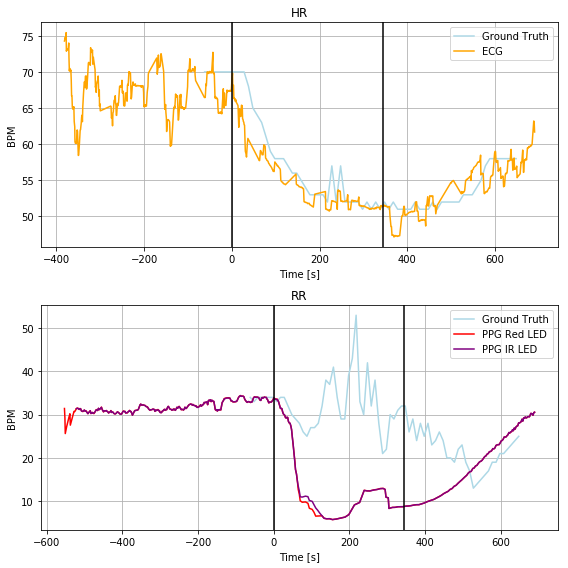

In [14]:
Red_RRx = [-553.1272909877163, -551.9019993202461, -550.9952834863182, -547.2703968172088, -541.1561913965328, -538.6872286865804, -537.6334778525561, -530.4287628478315, -527.9414207628672, -526.017712844939, -523.8979582602157, -521.6924332587694, -519.6890813824557, -517.826638047901, -515.939688879997, -514.0649926287676, -512.1045259608154, -510.229829709586, -508.3673863750314, -506.4191726237538, -504.4893382474883, -502.5840097045722, -500.6357959532947, -498.78560553541473, -496.76387428408896, -494.8156605328114, -492.98997594828086, -491.08464740536476, -488.9097546956053, -486.88189698594215, -484.9091774013152, -483.10799865013405, -481.25168177391674, -479.2422034392657, -477.3062426046629, -475.24775260331296, -473.2444007269993, -471.1797842673121, -469.17643239099834, -467.301736139769, -465.4637986385638, -463.2092619704187, -461.43871551092434, -459.4966282179841, -457.42588529995953, -455.3183836319109, -453.4559402973562, -451.61187633781367, -449.81682404496985, -447.92374841872845, -445.9755346674509, -444.07633258287217, -442.12811883159463, -440.26567549704, -438.30520882908775, -436.39988028617165, -434.19435528472536, -432.1481182000502, -430.18152507376055, -428.43548444761564, -426.49952361301274, -424.56968923674725, -422.67661361050585, -420.69164110920417, -418.66990985787845, -416.5807875648418, -414.5161711051546, -412.5373250621903, -410.7361463110092, -408.73279443469545, -406.86422464180345, -404.89763151551386, -402.84526797250135, -400.7867779711515, -398.7405408864763, -396.7433154685, -394.84411338392124, -392.93878484100514, -391.03345629808905, -388.9688398384018, -386.9777408787628, -384.937630252425, -382.9036460844245, -380.9860646248337, -379.18488587365255, -377.2611779557244, -375.2884583710975, -373.3953827448561, -371.2449958684459, -369.19263232543346, -367.1954069074571, -365.3023312812157, -363.3724969049502, -361.5713181537691, -359.62923086082884, -357.69939648456335, -355.45711273309297, -353.22095543995994, -351.32787981371854, -349.5267010625374, -347.6948900196695, -345.8263202267775, -343.91486522552407, -342.11981293268025, -340.1961050147521, -338.3704204302216, -336.4895977206549, -334.6149014694256, -332.81372271824443, -330.8900148003163, -329.05207729911103, -327.2202662562431, -325.27817896330293, -323.4463679204351, -321.5104070858322, -319.59895208457874, -317.6384854166265, -315.76378916539716, -313.8645870808184, -311.726453121083, -309.78436582814277, -307.84840499353993, -305.98596165898533, -304.1541506161174, -302.2365691565266, -300.374125821972, -298.4075326956824, -296.5022041527663, -294.30280560965736, -292.3790976917292, -290.3634928987408, -288.48879664751144, -286.6937443546677, -284.6965189366913, -282.79731685211254, -280.6653093507145, -278.66195747440077, -276.7505024731473, -274.8022887218698, -272.90308663729104, -271.05902267774843, -269.2333380932179, -267.2973772586151, -265.43493392406043, -263.50509954779494, -261.6977943382764, -259.8476039203965, -257.8074932940587, -255.58358891760037, -253.64150162466018, -251.76680537343083, -249.83697099716534, -247.99903349596008, -246.09370495304398, -244.29252620186287, -242.36269182559732, -240.43285744933183, -238.59491994812663, -236.6528326551864, -234.56983682048713, -232.8421755693542, -230.9919851514743, -228.99475973349792, -226.94852264882275, -224.96967660585847, -223.07047452127972, -221.15289306168893, -219.23531160209808, -217.39737410089288, -215.6023218080491, -213.7214990984824, -211.87130868060245, -210.0211182627225, -208.12191617814375, -206.30848451028794, -204.50117930076948, -202.62035659120278, -200.75178679831077, -198.86483763040673, -196.98401492084002, -195.17058325298422, -193.21011658503193, -191.34154679213998, -189.43621824922383, -187.5125103312957, -185.74196387180132, -183.6896003287888, -181.7965247025474, -179.94020782633015, -178.14515553348633, -176.4174942823534, -174.5918096978229, -172.50881386312363, -170.67087636191837, -168.900329902424, -167.11753052625494, -165.35311052509792, -163.42940260716972, -161.6159709393139, -159.87605677150628, -158.08100447866252, -155.91836468557767, -154.3438648928785, -152.57331843338415, -150.6986221821548, -149.02609905605806, -147.03500009641903, -145.30121238694875, -143.39588384403265, -141.5885786345142, -139.79965280000772, -136.1666630059587, -134.19394342133177, -132.3315000867771, -130.52419487725865, -128.6985102927281, -126.86669924986022, -125.0900263320285, -123.27046820583529, -121.45091007964213, -119.63747841178626, -117.84855257727985, -116.04124736776133, -114.3442184083152, -112.7207069489172, -110.90727528106139, -109.11222298821762, -107.3478029870606, -105.53437131920474, -103.72093965134893, -101.92588735850511, -100.0756969406252, -98.29289756445608, -96.44270714657618, -94.62314902038297, -92.81584381086451, -90.9472740179725, -89.12771589177935, -87.32653714059818, -85.50697901440502, -83.7119267215612, -81.91074797038009, -80.12794859421102, -78.40028734307809, -76.7829023420175, -75.1348850492701, -73.37659150645042, -71.63055088030545, -69.86613087914843, -67.96692879456968, -66.15962358505122, -64.3829506672195, -62.581771916038335, -60.768340248182525, -58.89977045529052, -57.12922399579615, -55.279033577916195, -53.41659024336154, -51.59090565883103, -49.75296815762577, -47.982421698131404, -46.18124294695029, -44.31879961239564, -42.47473565285303, -40.67968336000932, -38.909136900514895, -37.28562544111695, -35.662113981719, -33.93445273058602, -32.14552689607966, -30.3075893948744, -28.51253710203058, -26.68072605916267, -24.806029807933317, -22.980345223402868, -21.142407722197607, -19.353481887691135, -17.64420001157031, -15.916538760437323, -14.32365959272612, -12.614377716605294, -10.727428548701244, -8.95075563086947, -7.1618297963631115, -5.2993864618084565, -3.455322502265847, -1.6541437510846781, 0.27569062518081144, 2.0952487513739126, 3.8719216692056873, 5.74049146209769, 7.517164379929465, 9.299963756098474, 11.101142507279643, 12.902321258460812, 14.611603134581639, 16.320885010702465, 17.999534595136662, 19.88648376304071, 21.76118001426995, 23.60524397381256, 25.44930793335517, 27.18922210116285, 29.155815227452432, 31.122408353742014, 33.13801314673039, 35.19037668974296, 37.13246398268315, 39.0071602339125, 40.92474169350329, 43.27730169504595, 45.43381502979345, 47.28400544767341, 49.33636899068587, 51.707308367240685, 53.83318941030144, 55.74464441155489, 57.723490454519165, 60.339488164567925, 62.48987504097808, 64.94658483425577, 67.72799691941294, 70.18470671269064, 75.45958734114971, 84.14690526351309, 90.65320401777969, 94.3290790201901, 101.77885235840871, 106.56974277821702, 111.1707129895674, 127.76728862545077, 133.36074508745196, 139.98344655012818, 147.50673738839498, 155.40374218524016, 165.3653634417725, 177.67341824151026, 188.71942262375376, 198.80357304703318, 213.59896993173538, 227.27322494070233, 239.36072724029543, 246.9820414119598, 254.27252683340726, 265.1224845488555, 273.44221497097783, 281.60878393466646, 289.56705331488513, 294.6887724849104, 296.9371826947181, 302.98399707368344, 304.80355519987654, 313.7726902057582, 321.20408416896464, 328.83152479896637, 336.1097573037391, 342.5302856412827, 350.0780823128989, 356.418966692057, 363.3786233632875, 370.47306211793966, 377.60425962261604, 384.2820992103284, 391.4806877567156, 398.02987171934353, 405.2713454740922, 411.5938504782382, 418.05726402414336, 424.23886048653026, 430.591997782363, 436.7307090363885, 443.2308813323177, 449.78006529494576, 455.5695684237422, 461.0956338440326, 466.46853780588935, 471.6515215592881, 477.0734371878434, 482.2380415662301, 487.02280552770117, 491.81982240584693, 496.5923334506431, 501.1197861619453, 505.71462991495855, 510.21757679291136, 514.0956249204544, 518.5128013816843, 522.1948028424322, 526.4833236785776, 529.9937843058797, 533.7125445166516, 537.4190518107489, 540.9111330630387, 544.4583524403649, 548.060709942727, 551.0075364029929, 554.487364738608, 558.0284576575968, 560.9201459928265, 564.2284334949959, 567.1017424552133, 570.4958003741058, 573.2527066259136, 576.193406627842, 579.4894412133367, 582.1544505900843, 584.9419891335788, 587.7785393437723, 590.4864339288813, 593.1882020556529, 595.8654643490754, 598.5856118508591, 601.3057593526428, 603.99527456274, 606.5867664394393, 609.3559256079218, 611.8800264429103, 614.0978043610312, 616.6709168627187, 619.2807881144302, 621.9825562412018, 624.3044839510578, 626.5590206192028, 629.0708685375166, 631.4295549973967, 633.653459373855, 636.1408014588194, 638.3708322936152, 640.6682541701216, 643.0453200050138, 645.2324656314481, 647.6769225080509, 649.7292860510636, 652.1798693860039, 654.207727095667, 656.5909193888963, 658.5820183485355, 661.0509810584879, 662.9624360597413, 665.1557081445128, 667.3060950209228, 669.2236764805136, 671.269913565189, 673.6224735667315, 675.533928567985, 677.4821423192625, 679.8101964874559, 681.6910191970226, 683.6698652399868, 685.6548377412885, 687.9767654511445, 689.8575881607112]
Red_RRy = [31.42480044684649, 29.248447879157446, 25.626140264326626, 27.23692752659648, 29.435342122891164, 30.205690243843726, 27.572240370876965, 29.939970880442623, 30.74933196788856, 30.71009955770308, 30.988658309141396, 31.41728080036633, 31.502044402189078, 31.52337933281517, 31.311396939858447, 31.19062265752276, 31.41656530035122, 31.3651100192918, 30.90229227069596, 30.781335549867322, 30.713746960808656, 30.895835649292383, 31.048298233429012, 30.7912383375927, 30.92272108765447, 30.75773479124947, 30.46627694784551, 30.22332251692046, 30.459546338713817, 30.701277341878136, 30.924319685771735, 30.254468490636743, 30.411045981888485, 30.5146559035056, 30.3129304670203, 30.24514539950507, 30.471739326307556, 30.8193137971275, 31.16685420778643, 31.13578121281656, 30.95099656084296, 31.448917335884026, 31.139877260495656, 31.271992304088762, 31.434977287430865, 31.737067652627367, 31.235933837698962, 30.914462140261456, 30.62290267535463, 30.889803347937857, 30.9092953998338, 30.859149027306405, 30.948850314672228, 30.74998768970064, 30.65724539278208, 30.38020170942405, 30.565869769723935, 30.665728367173557, 30.94591871300421, 30.504553151232408, 30.616328884891477, 30.558215331682156, 30.312228517771494, 30.204274521358343, 30.168732563257816, 30.300880700565102, 30.55399339987995, 30.670986459972937, 30.488897771489206, 30.400025943663177, 30.202425206117642, 30.092480645991895, 30.118897441229983, 30.333080929321238, 30.732021275347584, 30.846830230307546, 30.729095268721483, 30.749477554811033, 30.39060995357613, 30.407959856680083, 30.39871626389613, 30.627144767458343, 30.786344395903757, 30.988554893977494, 30.746862485604122, 30.736960972557313, 30.371317785846497, 29.885046697441442, 30.26429658476589, 30.671989801070726, 30.943269154512898, 30.98483565270209, 31.014730605554956, 31.026099724631138, 31.05561685342999, 31.232980197872525, 31.747230217204184, 32.2645743005791, 32.426280702973266, 32.21410542339875, 32.20318726670466, 32.26762228981734, 32.21811172121242, 32.15103772104394, 32.13129736275441, 31.98382897116474, 31.854231429216647, 31.85423142921665, 31.682301009122718, 31.369509658575176, 31.194440287988204, 31.018229531216463, 31.150344574809573, 31.150344574809573, 31.180049714599885, 31.26265418958808, 31.253119934764687, 31.20166465370527, 30.77046172336522, 31.08325307391276, 30.970567621720175, 31.071849852159907, 31.19279633601635, 30.921516982574182, 30.951797060553986, 30.544471545957016, 30.488490600204916, 30.47839744892018, 30.83012310959416, 30.870367969074756, 31.147277181051862, 31.233197140297385, 30.989912383357165, 31.207319253111375, 31.15717288058398, 31.66278371965843, 31.910712577087008, 31.712759510899076, 31.330973039879247, 31.26121105159981, 31.20804629276433, 31.030682948321793, 31.19597554839944, 31.123464224695976, 31.345541017317306, 31.134756264998753, 31.000921906531595, 31.324433774701582, 31.71593552710804, 31.506942679867542, 31.779327231518238, 31.91316158998539, 31.652800393237317, 31.4359487356947, 31.136866987117987, 31.18701335964538, 31.206879654192978, 31.07129219390564, 31.24636156449261, 31.708415939182675, 31.425606245897143, 31.425606245897136, 31.66434804627744, 31.891357972209846, 32.167931937750616, 32.328570317541775, 32.38972226655636, 32.47179286042511, 32.386999903242426, 32.23457223510709, 32.3531230011303, 32.17070934427721, 32.13881187422641, 32.12865360583662, 31.938986109298042, 32.00791053522919, 31.741275867983518, 31.699709369794324, 31.75218025914005, 31.90460792727538, 32.06886685453771, 32.29480949736616, 31.964264145957266, 32.07972979665459, 32.34953746185748, 32.32624684828396, 32.80333906228296, 32.75287018510261, 32.82930750769003, 32.93523246922371, 32.804850444073516, 32.29279912888155, 33.22306656311347, 33.347321986528236, 33.15905619347555, 33.38095687444532, 32.993817235000634, 33.33547191663353, 33.175891011185755, 33.04730489027311, 33.058751880027884, 31.93589705670949, 31.166649496411445, 30.99943974600281, 31.118781113124346, 30.817825211920944, 31.079860972579155, 30.99632849313209, 31.144769182733803, 31.122413224154553, 31.07708933228766, 32.779525027807765, 33.05789836918498, 33.37191465858055, 33.74774784903532, 33.76995351417817, 33.83702751434666, 33.86047958942952, 33.871619805275586, 33.882760021121655, 33.91663692323378, 33.805578380248654, 33.851212192606276, 33.5585308338368, 33.16034168480278, 33.17155742753595, 33.04004840425479, 32.93700140767861, 32.95950919071455, 32.94836897486847, 32.94836897486848, 33.036611409022655, 33.036611409022655, 33.266604987403205, 33.67879297370795, 33.99967162082485, 34.20105913208642, 34.33990140115749, 34.409300398851656, 34.27101797763974, 34.24835681826078, 34.294303740872095, 34.25996196881725, 34.09570304155492, 33.59702314992721, 33.34506892874147, 33.175578887530705, 32.96080725256139, 32.84669480668844, 32.95200218899597, 33.02092661492712, 32.97497969231581, 32.86540232753555, 32.81044146198266, 32.941950485263824, 32.941950485263824, 33.39473406956999, 33.86885258450224, 34.05531717690742, 34.144756323524774, 34.02050090011001, 34.03187001918618, 34.08574250287414, 34.03257774403866, 33.97649517678369, 33.85223975336892, 33.51051471204788, 33.32506774949373, 33.32506774949373, 33.737863810804626, 33.983581036188866, 33.8207959221436, 33.92244772584721, 34.07589724210249, 34.01103332550101, 34.000187714698576, 33.97737160586762, 33.57620062564844, 33.40080148254004, 33.01113623500951, 32.71190214320668, 32.90926506078708, 32.897659910230615, 32.87484380139965, 32.98442116617991, 33.240984002366595, 33.42007818996444, 33.885304755528836, 33.76753675944177, 33.59095642940615, 33.63362768502229, 33.51021211382214, 33.59316442237716, 33.31297407654652, 33.03278373071587, 32.49931168255207, 31.91252427864938, 31.42768209733294, 31.448464684877717, 31.376887594228293, 30.673617518757766, 30.202203185583652, 29.99666667081963, 29.869163800345444, 29.34884477742479, 29.194429986307863, 29.409941362844233, 29.352552022640896, 28.445613530113093, 28.106867738468203, 27.99874548457935, 27.37365423222072, 26.57303568842668, 24.787043514203724, 22.947062950941184, 21.04688700469776, 19.540181380913037, 17.313504871304715, 16.27230167920039, 14.786178856509931, 12.705408305219425, 11.620912638476751, 10.084596431508402, 9.744653267781421, 9.81377304473448, 9.493901349564723, 8.349122566137448, 8.086911772196128, 7.429528082745532, 6.530986840186651, 6.60824723972014, 6.031945715258377, 5.913236811064041, 5.938703942772006, 5.731919755356467, 5.850785372284307, 6.098002397206668, 6.308752320182476, 6.885240857656719, 9.148261518018808, 9.70173876798875, 12.50286219443274, 12.38455722445597, 12.368952293923586, 12.602588205280814, 12.705786964738554, 12.905586831312633, 12.946588044730936, 12.721346646265093, 10.914905944033466, 10.768380797540392, 8.31225032244615, 8.541783671535029, 8.567894863345368, 8.697406078166091, 8.701590727773246, 8.716079139150546, 8.849447208652942, 8.873830009859436, 8.956133807116682, 9.087804791789626, 9.169483832110455, 9.18713432581087, 9.389995963325958, 9.559614766424188, 9.8477686886318, 10.056412087934003, 10.234729994516284, 10.425860986180126, 10.735426049142179, 11.008799539129962, 11.342946897919948, 11.752050743788853, 12.021503918836068, 12.268201198444242, 12.698656725836845, 12.899356161432447, 13.42228472334087, 13.659614477163592, 14.114811533641717, 14.477475143929045, 14.839049966598605, 15.231974527462631, 15.617628713032397, 15.950743901964392, 16.4396625109377, 16.80555171579156, 16.870395341684915, 17.54622395380627, 17.650673684367263, 18.12541750276699, 18.274438272610546, 18.732617760545075, 19.08148256657036, 19.236275869977423, 19.451586397141437, 19.879800017583275, 20.300653356264764, 20.44148451501832, 20.84862530149076, 21.0015358564703, 21.439503187025345, 21.468913356858984, 21.659468144605107, 22.154367585568956, 22.069691066685728, 22.294338576473322, 22.88450375075984, 23.000566508894522, 23.078762562634427, 23.058435167428815, 23.43673220684563, 23.892270163507924, 24.050064491016904, 24.278584517466708, 24.809819556935896, 24.844948878835318, 24.83008398515157, 25.109900743854446, 25.33505700993234, 25.857590639629585, 25.72806383376796, 25.990221812598122, 26.04993880378471, 26.46493756703534, 26.284611343533943, 26.88580915400962, 26.625433758194287, 27.152780726518937, 27.36429918289026, 27.41119322658104, 28.0856016467494, 28.094354517027888, 28.19637104363831, 28.376553614458487, 28.938666308979712, 28.502514681042033, 29.26243766035974, 29.155537751551492, 29.442610948717174, 29.236475126055335, 29.29762707506992, 29.51447873261253, 29.548125344291428, 29.479245123768358, 29.730652813528355, 30.28233458514282, 30.251462714108037, 30.142851246379927, 29.8481578856978, 30.4963048924549, 30.570740403727648]

IR_RRx = [-521.6801803420947, -519.6707020074435, -517.8143851312263, -515.921309504985, -514.0404867954182, -512.0983995024781, -510.22370325124865, -508.3490070000193, -506.3946667904044, -504.4525794974642, -502.54725095454813, -500.59903720327054, -498.74884678539064, -496.75162136741426, -494.8156605328114, -492.9715965732688, -491.07239448869007, -488.84849011223173, -486.8757705276048, -484.90305094297787, -483.0651134417726, -481.23942885724205, -479.2360769809284, -477.25723093796404, -475.1926144782768, -473.20151551863785, -471.1736578089747, -469.17643239099834, -467.2894832230943, -465.44541926355174, -463.17250322039456, -461.39583030256284, -459.47824884297205, -457.40137946661014, -455.3245100902482, -453.46206675569357, -451.61187633781367, -449.78006529494576, -447.91149550205375, -445.9632817507762, -444.0702061245348, -442.11586591491994, -440.24729612202793, -438.2990823707504, -436.38762736949695, -434.188228826388, -432.15424465838754, -430.18152507376055, -428.4109786142662, -426.4933971546754, -424.55743632007255, -422.6704871521685, -420.6855146508668, -418.65765694120375, -416.5807875648418, -414.5284240218293, -412.5373250621903, -410.7238933943345, -408.72054151802075, -406.8580981834661, -404.89150505717646, -402.82076213915195, -400.78065151281413, -398.74666734481366, -396.74944192683733, -394.83186046724654, -392.9326583826678, -391.0212033814143, -388.9320810883777, -386.9532350454134, -384.9253773357503, -382.9036460844245, -380.9860646248337, -379.1665064986405, -377.2489250390497, -375.27007899608543, -373.38925628651873, -371.20823711842183, -369.1987587837708, -367.20153336579443, -365.30845773955303, -363.3724969049502, -361.55293877875704, -359.61697794415414, -357.693270026226, -355.4387333580809, -353.2087025232852, -351.3033739803691, -349.5083216875254, -347.68876356133217, -345.8140673101028, -343.90261230884937, -342.1136864743429, -340.18997855641476, -338.3581675135469, -336.4773448039802, -334.60877501108826, -332.8075962599071, -330.88388834197895, -329.0459508407737, -327.2080133395684, -325.2720525049656, -323.44024146209773, -321.50428062749484, -319.568319792892, -317.6139795832771, -315.7331568737104, -313.84620770580636, -311.7142002044083, -309.78436582814277, -307.84840499353993, -305.9798352006479, -304.1235183244307, -302.2304426981893, -300.3679993636346, -298.40140623734504, -296.4776983194169, -294.29055269298266, -292.36071831671717, -290.35736644040344, -288.4826701891741, -286.6692385213183, -284.6842660200166, -282.78506393543785, -280.6408035173651, -278.6435780993887, -276.7382495564726, -274.79616226353244, -272.90308663729104, -271.04676976107373, -269.2272116348806, -267.29125080027774, -265.42268100738573, -263.4867201727829, -261.6855414216017, -259.8414774620592, -257.7829874607093, -255.57746245926302, -253.63537516632277, -251.76680537343083, -249.83084453882793, -247.98678057928538, -246.07532557803194, -244.26802036851342, -242.34431245058528, -240.42673099099449, -238.58879348978928, -236.64670619684904, -234.53920452880038, -232.8176697360048, -230.96747931812484, -228.97638035848587, -226.92401681547335, -224.95742368918377, -223.06434806294237, -221.14676660335158, -219.22305868542338, -217.38512118421818, -215.59006889137436, -213.70311972347037, -211.8651822222651, -210.01499180438515, -208.10966326146905, -206.3023580519506, -204.48892638409473, -202.60810367452808, -200.74566033997343, -198.85258471373203, -196.97788846250268, -195.16445679464687, -193.19786366835723, -191.31704095879053, -189.3933330408624, -187.48187803960894, -185.71745803845192, -183.6283357454153, -181.77814532753536, -179.89732261796865, -178.1145232417996, -176.36235615731727, -174.56117740613615, -172.47818157143683, -170.64637052856898, -168.8635711523999, -167.09302469290554, -165.32247823341112, -163.42940260716972, -161.59146510596452, -159.8638038548316, -158.08100447866252, -155.90611176890297, -154.33773843454117, -152.5549390583721, -150.6863692654801, -149.0322255143954, -147.02887363808168, -145.2950859286114, -143.3897573856953, -141.58245217617684, -139.79965280000772, -136.1421571726093, -134.18169050465707, -132.32537362843976, -130.52419487725865, -128.6985102927281, -126.86669924986022, -125.0838998736911, -123.26434174749794, -121.45703653797948, -119.63135195344891, -117.8424261189425, -116.02899445108663, -114.3197125749658, -112.6839481988931, -110.86439007269995, -109.08159069653088, -107.3294236120485, -105.52211840253004, -103.70868673467423, -101.90138152515571, -100.06957048228786, -98.28064464778139, -96.43045422990149, -94.61089610370827, -92.80971735252716, -90.94114755963516, -89.121589433442, -87.32041068226083, -85.51310547274237, -83.70580026322385, -81.91074797038009, -80.12182213587367, -78.3880344264034, -76.7583965086681, -75.11650567425805, -73.37046504811308, -71.6244244219681, -69.86000442081108, -67.96080233623233, -66.15349712671387, -64.37682420888216, -62.56951899936364, -60.75608733150783, -58.89364399695317, -57.12922399579615, -55.26065420290415, -53.41046378502419, -51.584779200493685, -49.75909461596312, -47.982421698131404, -46.17511648861294, -44.31267315405829, -42.47473565285303, -40.67355690167186, -38.903010442177546, -37.261119607767554, -35.64373460670696, -33.93445273058602, -32.13940043774231, -30.301462936537053, -28.51253710203058, -26.668473142487972, -24.806029807933317, -22.980345223402868, -21.142407722197607, -19.347355429353787, -17.625820636558263, -15.892032927087929, -14.311406676051423, -12.608251258267945, -10.721302090363896, -8.944629172532121, -7.155703338025763, -5.287133545133759, -3.4491960439284983, -1.6480172927473296, 0.27569062518081144, 2.0952487513739126, 3.878048127543036, 5.74049146209769, 7.517164379929465, 9.299963756098474, 11.101142507279643, 12.902321258460812, 14.623856051256336, 16.33926438571451, 18.017913970148708, 19.910989596390106, 21.785685847619458, 23.635876265499302, 25.467687308367214, 27.219854392849594, 29.17419460246448, 31.146914187091408, 33.150266063405084, 35.19037668974296, 37.13246398268315, 39.0071602339125, 40.93086815184064, 43.30793398673269, 45.43381502979345, 47.296258364348105, 49.34249544902322, 51.73181420059008, 53.83318941030144, 55.750770869892236, 57.729616912856514, 60.339488164567925, 62.496001499315426, 64.94658483425577, 67.70349108606355, 70.19083317102799, 75.47184025782441, 84.14690526351309, 90.65320401777969, 94.33520547852744, 101.77885235840871, 106.56361631987967, 111.16458653123006, 116.43334070135178, 121.990038413329, 127.77341508378812, 133.36074508745196, 139.98344655012818, 147.50061093005763, 155.40374218524016, 165.37148990010985, 177.67341824151026, 188.71942262375376, 198.80357304703318, 213.59896993173538, 227.27935139903968, 239.35460078195808, 246.9820414119598, 254.2664003750699, 265.11635809051813, 273.4238355959658, 281.6149103930038, 289.5793062315598, 294.70102540158507, 296.9739414447423, 302.9778706153461, 304.7974287415392, 313.7971960391076, 321.20408416896464, 328.83152479896637, 336.1097573037391, 342.54866501629476, 350.0903352295736, 356.4557254420811, 363.4215085716489, 370.479188576277, 377.64101837264013, 384.28822566866575, 391.4929406733903, 398.0237452610062, 405.27747193242953, 411.6306092282623, 418.06951694081806, 424.2449869448676, 430.5981242407004, 436.7368354947258, 443.24926070732977, 449.87808862834333, 455.60020071542897, 461.0956338440326, 466.48079072256405, 471.6944067676495, 477.07956364618076, 482.2625473995797, 487.0289319860385, 491.89946636423247, 496.66585095069127, 501.20555657866817, 505.73913574830794, 510.27884137628484, 514.1140042954664, 518.5128013816843, 522.2131822174442, 526.5139559702643, 530.0795547226026, 533.718670974989, 537.4190518107489, 540.9172595213761, 544.4706053570396, 548.0729628594017, 551.0136628613302, 554.4996176552827, 558.0407105742715, 560.9262724511639, 564.2590657866826, 567.1078689135506, 570.5019268324431, 573.2894653759377, 576.1995330861794, 579.5016941300114, 582.1912093401083, 584.960368508591, 587.7785393437723, 590.4925603872186, 593.1882020556529, 595.8715908074128, 598.5917383091964, 601.3057593526428, 604.0014010210773, 606.6112722727887, 609.3681785245965, 611.8861529012477, 614.1100572777059, 616.6709168627187, 619.3052939477795, 621.9825562412018, 624.3412427010819, 626.5590206192028, 629.095374370866, 631.4663137474208, 633.653459373855, 636.1653072921688, 638.4014645853019, 640.6866335451336, 643.0759522967005, 645.2385920897855, 647.6830489663882, 649.7292860510636, 652.198248761016, 654.2138535540043, 656.5970458472336, 658.5820183485355, 661.0571075168252, 662.974688976416, 665.1985933528742, 667.3244743959349, 669.229802938851, 671.2821664818637, 673.6347264834062, 675.5400550263223, 677.4882687775998, 679.8163229457932, 681.7093985720346, 683.6698652399868, 685.6670906579632, 687.9951448261565, 689.8698410773859]
IR_RRy = [31.376704125761812, 31.4705987659923, 31.48130143746149, 31.3160236053212, 31.225166516516293, 31.389390276300826, 31.34809326363121, 30.8455325102757, 30.816929188887237, 30.768956215580612, 30.88442186627794, 31.091116107859147, 30.843187250430567, 30.87108973638833, 30.6779622548436, 30.437690261681915, 30.23725627118721, 30.543466197432558, 30.68171558414347, 30.89391231723463, 30.269164208181035, 30.359824578971143, 30.493785372480154, 30.35067881716484, 30.333533632681586, 30.54169690965184, 30.825818886086306, 31.097098239528474, 31.12837433029258, 30.95443528912142, 31.484100033567238, 31.177091050664394, 31.25916164453315, 31.449942258665185, 31.699948722788754, 31.20639273713504, 30.91335875022247, 30.679398249634783, 30.857170539468136, 30.906367731154393, 30.836158495684522, 30.94580456100697, 30.7575044754601, 30.636547754631458, 30.386541290507893, 30.581981424637036, 30.64551720395326, 30.91267480259731, 30.518871125386188, 30.611504258679656, 30.56322955071306, 30.2810044713328, 30.19930955512826, 30.190397544650153, 30.305601614007706, 30.511084332238802, 30.65689455389539, 30.487220497162873, 30.36425941690387, 30.17475503310742, 30.08258096834943, 30.152823654772966, 30.340748062655614, 30.688376484840337, 30.81315022130108, 30.7162789707981, 30.747150841832887, 30.359188251438876, 30.473018293290146, 30.44511580733239, 30.65577381552685, 30.78725656558862, 30.955819064780332, 30.757551425798304, 30.74758664429752, 30.37681719773924, 29.877269614236866, 30.275325355915605, 30.631996804982265, 30.92533304063472, 30.95640603560458, 30.996139833700163, 31.05260394141314, 31.07234429970267, 31.228814698184884, 31.757607344260727, 32.278073572617274, 32.460162261101004, 32.2366178624503, 32.20364282354593, 32.26765319318383, 32.22791939508825, 32.14939840516499, 32.12965804687546, 31.953447290103718, 31.833443778871338, 31.812525134017164, 31.661109139048072, 31.356381539245366, 31.200927784410432, 31.035635184332783, 31.147410917991845, 31.104170693460794, 31.17437992893066, 31.29671820201445, 31.277589916475335, 31.206473185959965, 30.770038847519647, 31.064864934275555, 30.950770435314134, 31.052052665753866, 31.149684786922904, 30.94018990279442, 30.929965885094656, 30.506558947583727, 30.459765058879906, 30.4898516499707, 30.836009575006734, 30.896379965233887, 31.13360615119327, 31.230591559735565, 31.021183704907468, 31.209483790454335, 31.149498572684216, 31.68248287497541, 31.931998460921044, 31.697693163239773, 31.328674391904492, 31.248688385925295, 31.22749358734368, 31.02922594836165, 31.183672937636857, 31.11163100207338, 31.33225459963465, 31.120079320060132, 30.99533747057523, 31.345108418953828, 31.714127190289116, 31.47164054498226, 31.74589067894226, 31.889563882652133, 31.649291889490456, 31.43378051295408, 31.164882207426206, 31.21535108460655, 31.21535108460655, 31.069798842818432, 31.244868213405404, 31.740416386161815, 31.434890161437703, 31.456509557805482, 31.686007765401826, 31.911612293222937, 32.18051059875081, 32.319709218109026, 32.38086116712361, 32.48345908191787, 32.3883757173101, 32.24637319080961, 32.37528140274274, 32.1617140946985, 32.10889797979352, 32.07881138870273, 31.897921589237047, 31.98982836996716, 31.671754547184555, 31.693089477810652, 31.713737331145673, 31.878712510624826, 31.994399367487905, 32.27458971331855, 31.964963006763828, 32.12143340524604, 32.34795701706935, 32.336190405003556, 32.852955162473684, 32.77949119423368, 32.853926705506424, 32.96133607767797, 32.902498775905684, 32.33010366252958, 33.275256776714386, 33.365303429861534, 33.21082175360171, 33.44929175813511, 33.055488080923986, 33.34667388537654, 33.23120823467921, 33.07816505015005, 33.07816505015005, 31.959875033770793, 31.194751084192614, 31.061464206514405, 31.181604110719384, 30.84078827237882, 31.121254682869267, 31.026117052865736, 31.174557742467442, 31.174557742467442, 31.095502522233808, 32.80900376082012, 33.057152068791424, 33.33519136201264, 33.672049418236, 33.68311486753277, 33.77316152067992, 33.83199882245221, 33.85435478103146, 33.84313903829829, 33.8765604461743, 33.79803945625103, 33.84336334811794, 33.576026726365924, 33.20552067126053, 33.23916867014255, 33.08468699388273, 32.95785992117358, 32.969151961476356, 32.98036770420951, 32.98036770420952, 33.04744170437801, 33.04744170437801, 33.26516354059056, 33.64945910676941, 33.97263055871836, 34.197964733112386, 34.33680700218346, 34.40620599987763, 34.245567620086476, 34.245567620086476, 34.28014542362161, 34.246037274487875, 34.09405008939355, 33.63382515731645, 33.380052703061665, 33.15471852866763, 32.96128182432441, 32.847169378451454, 32.9743863503666, 33.031625313280685, 32.97438635036659, 32.87610102588911, 32.831985771138655, 32.94156313591891, 32.92979652385312, 33.37310788000706, 33.83989030158396, 34.0636979373606, 34.11978050461556, 34.007210544217855, 34.041318693351585, 34.073427409543015, 34.03047308254915, 33.98575963437036, 33.861504210955594, 33.549701878082814, 33.325272120415114, 33.275657334875646, 33.729100107332485, 33.98744411716606, 33.81321201336601, 33.93662758456617, 34.069021058177384, 33.99359460215119, 33.99359460215119, 33.98222548307501, 33.61593997374548, 33.45281257280509, 33.022342453326914, 32.721044116499456, 32.91840703407986, 32.9068018835234, 32.88398577469244, 33.00412567889742, 33.224858946438836, 33.391416540904835, 33.846741593422415, 33.71868318991026, 33.553708010431095, 33.57504294105719, 33.47339113735357, 33.53222843912586, 33.27116637883433, 32.981500997154335, 32.49121947581657, 31.93452697539418, 31.449684794077747, 31.48075778904761, 31.3992159168974, 30.680426707762717, 30.227338937172142, 30.024582498564747, 29.886704212829937, 29.356393744831173, 29.216686195082502, 29.404610602965153, 29.347221262761813, 28.445666760819382, 28.10895905863095, 28.033235451250015, 27.387228781301975, 26.577867693856042, 24.78180308265067, 22.96226451155471, 21.029174754959836, 19.52978187529442, 17.30376824110267, 16.258784613851212, 14.780588483205074, 13.470980978810795, 12.374406421551818, 10.999649187275924, 10.937360430034243, 11.15169766589239, 11.027687687832117, 10.1573319324219, 9.953216824432216, 9.186964885804205, 8.426074946086931, 7.882278919643957, 7.208032443565888, 6.6091605020377955, 6.032186475065439, 5.912845228862904, 5.938354552585922, 5.732159343258956, 5.852458841054125, 6.09723503091462, 6.307405005613375, 6.883893543087616, 9.11814275121559, 9.678904056721805, 12.479523799285536, 12.359574245414203, 12.345948395338826, 12.579584306696058, 12.681719382948557, 12.881049846055305, 12.923276770523682, 12.694392483715891, 10.915965000215753, 10.766757155173298, 8.307027991390674, 8.542978792554301, 8.565709977903259, 8.697799461034547, 8.700584514996066, 8.713164737694788, 8.849420068375029, 8.878408677613978, 8.961470708373845, 9.088736834384852, 9.17227787015669, 9.17478055418301, 9.390556452795277, 9.56364918087235, 9.850661823766726, 10.057079266647554, 10.239417869071955, 10.42546624586908, 10.739866708648751, 10.994360540708197, 11.331860530800407, 11.748394741092094, 12.023288512663443, 12.253144443065382, 12.703441469223117, 12.916618006045582, 13.423899064163098, 13.661362519448318, 14.085293597616351, 14.502147863011334, 14.864786838074863, 15.25827925833388, 15.623371021785909, 15.967275366634729, 16.44313520322009, 16.800318649875642, 16.873256059766913, 17.557475999796537, 17.675020815175436, 18.13241651610715, 18.27875719549189, 18.71602978082846, 19.089288070568237, 19.240704065537322, 19.431258853283445, 19.876788826255854, 20.31143724412966, 20.442861390213743, 20.86838487019305, 20.998215889476313, 21.43618322003136, 21.494488500538992, 21.658495930879194, 22.14046797120334, 22.085935218937784, 22.302080304708852, 22.870997477901007, 23.003218882560958, 23.054982025027133, 23.06009868101211, 23.398124658970126, 23.89279342349793, 24.032578914505628, 24.264257455121065, 24.83120644334258, 24.837018315964148, 24.82223498594475, 25.10489811751538, 25.338495888644793, 25.871787693175072, 25.78253194877224, 26.00933284162369, 26.07390258551348, 26.520034093698836, 26.29436404282701, 26.92839629493154, 26.669376984183252, 27.17269195328452, 27.359473642183453, 27.407445753871343, 28.101975983629707, 28.09322311335122, 28.213465917668714, 28.385755089750944, 28.947867784272166, 28.50241550433581, 29.247705903489155, 29.17926031055564, 29.485470236801, 29.24037061879567, 29.291825899855088, 29.527588696065983, 29.561235307744887, 29.48226193593708, 29.700021626815055, 30.281983476409323, 30.281983476409323, 30.127596448007797, 29.866730349132865, 30.48998921139675, 30.564917737728756]

ECG_HRx = [-381.4823077501592, -380.52045379119505, -379.6198644156045, -378.83567774842356, -377.62263899762814, -377.1202694139654, -376.293197538423, -375.0862852459649, -374.5655362872901, -373.70783212006097, -372.8746337861813, -371.71060670208465, -371.1776048267351, -370.3444064928554, -369.4499435756022, -368.61674524172247, -367.7957998245175, -366.913589823939, -365.98236815666166, -365.2104344061554, -364.38948898895046, -363.5011525300346, -362.6679541961548, -361.84088232061254, -360.9341664866846, -360.05195648610606, -359.2616433605878, -358.0608575264671, -357.54010856779223, -356.7130366922499, -355.8798383583702, -354.99762835779165, -354.16443002391196, -352.4674010644658, -351.6587085639355, -350.75811918834495, -349.9004150211158, -349.0672166872361, -347.3763141861273, -345.66703231000645, -344.8460868928014, -343.13680501668057, -342.30973314113817, -341.41527022388493, -340.5636925149932, -339.7182412644388, -338.02733876332996, -336.32418334554643, -335.5093643866788, -334.63328084443765, -333.8000825105579, -332.9546312600035, -332.0846741760997, -331.25147584222, -330.38764521665354, -328.71512209055675, -326.9935872977612, -326.17264188055617, -325.27817896330293, -324.45110708776065, -323.6424145872303, -322.5519050031819, -321.8657416693986, -321.03866979385623, -319.8930220847716, -319.3538937510848, -318.5390747922171, -317.63235895828916, -316.82979291609627, -315.6841452070116, -311.72032666274566, -310.8932547872033, -309.99266541161273, -309.17171999440774, -308.3691539522148, -307.4685645766242, -306.58635457604566, -305.7715356171781, -304.6320143664308, -303.23518186551485, -302.0772812397555, -301.5565322810807, -300.6559429054901, -299.8349974882851, -276.0949714310508, -275.2862789305205, -274.38568955492997, -273.5218589293635, -272.6886605954838, -271.9044739283029, -271.0038845527123, -270.15230684382055, -268.44302496769967, -267.6159530921573, -266.7582489249282, -265.72287746591593, -265.0795993404941, -264.2341480899397, -263.35193808936117, -262.5309926721562, -260.8217107960353, -260.0497770455291, -259.1246818365891, -258.2302189193359, -255.71837100102206, -254.89742558381707, -253.1636378743468, -252.33043954046704, -251.4788618315753, -250.3699728725148, -249.78795933046646, -248.95476099658677, -248.0602980793336, -247.2454791204659, -246.40615432824885, -245.5300707860077, -244.69687245212796, -243.85142120157357, -242.1543922421274, -241.32732036658504, -240.4328574493318, -239.5996591154521, -238.77871369824712, -237.88425078099388, -237.03267307210214, -236.18722182154775, -234.49019286210157, -233.68762681990862, -232.78091098598068, -231.9599655687757, -231.1022614015466, -230.24455723431745, -229.4174853587751, -228.54752827487127, -226.88725806544923, -226.02342743988274, -225.1595968143163, -224.3263984804366, -223.4748207715448, -222.61099014597838, -221.7532859787493, -220.90783472819484, -219.74993410243556, -219.2108057687487, -218.38986035154366, -217.50765035096518, -216.68670493376018, -215.84125368320574, -214.9651701409646, -214.1135924320728, -213.26201472318107, -211.57723868040958, -209.86795680428875, -209.05313784542105, -208.15867492816787, -207.32547659428818, -206.55966930211932, -205.6161947181673, -204.78912284262495, -203.9069128420464, -203.02470284146787, -202.21601034093757, -201.08261554852768, -200.5128549231541, -199.70416242262374, -198.80969950537056, -197.98875408816556, -197.14942929594847, -196.27947221204468, -195.4340209614903, -194.5701903359238, -192.8731613764776, -191.17000595869413, -190.34906054148908, -189.4668505409106, -171.240636987292, -169.9234484447616, -168.19578719362866, -167.3748417764236, -166.49263177584513, -165.66555990030278, -164.78334989972424, -163.92564573249516, -163.067941565266, -161.39541843916928, -160.63573760533777, -155.4159951019149, -154.5950496847099, -153.70058676745666, -152.86126197523961, -151.99130489133577, -150.93755405731147, -150.29427593188964, -149.14250176446765, -148.5911205141061, -146.89409155465992, -146.09152551246697, -145.166430303527, -144.33935842798465, -143.49390717743026, -142.63007655186377, -141.83363696800816, -140.9269211340803, -140.0875963418632, -139.21151279962206, -138.3538086323929, -137.50835738183852, -135.805201964055, -134.1142994629462, -132.41114404516267, -131.59019862795768, -130.68348279402974, -129.85028446015005, -128.13487612569182, -127.30780425014947, -126.41946779123359, -125.61077529070329, -124.70405945677535, -123.87086112289566, -123.00090403899188, -122.12482049675069, -121.291622162871, -119.59459320342481, -117.89756424397862, -117.08274528511097, -116.18215590952045, -115.3489575756407, -114.46062111672487, -113.63967569951981, -112.75746569894133, -111.91814090672429, -111.09106903118189, -110.20273257226606, -109.38791361339841, -108.48119777947048, -107.63574652891609, -106.76578944501225, -105.90195881944581, -105.06876048556606, -103.37785798445728, -100.82925131611935, -99.93478839886612, -99.10771652332377, -98.20712714773319, -97.40456110554024, -95.67077339606996, -94.81919568717822, -93.96149151994908, -93.12216672773204, -92.2460831854909, -91.4067583932738, -90.53680130937002, -89.66684422546618, -88.79076068322505, -87.93918297433325, -87.10598464045356, -86.22990109821242, -85.40895568100737, -84.33682547197103, -83.70580026322389, -82.50501442910311, -62.306081290857584, -61.48513587365253, -60.584546498062004, -58.86913816360377, -58.03593982972408, -56.30827857859115, -55.456700869699354, -54.59287024413292, -53.759671910253225, -52.877461909674686, -52.02588420078295, -51.17430649189115, -50.32272878299941, -49.45277169909563, -48.60119399020383, -47.737363364637396, -46.84290044738416, -46.02195503017911, -44.31267315405828, -43.06287565323871, -42.57888544458806, -41.77631940239505, -40.85735065179242, -40.030278776250135, -39.14194231733425, -38.3087439834545, -37.444913357888005, -36.59333564899632, -35.711125648417784, -34.871800856200686, -34.00184377229696, -33.15026606340516, -32.34157356287481, -31.422604812272176, -30.58328002005519, -29.71332293615135, -28.861745227259554, -27.991788143355826, -27.134083976126682, -26.276379808897538, -25.400296266656348, -24.560971474439363, -23.642002723836733, -22.833310223306377, -21.111775430510853, -19.408620012727376, -18.59380105385967, -17.67483230325704, -16.829381052702594, -15.947171052124169, -15.095593343232373, -14.23176271766588, -13.392437925448895, -11.79343229940023, -10.807072507086765, -9.96774771486978, -9.097790630965939, -8.240086463736795, -7.388508754845112, -6.506298754266573, -5.666973962049474, -4.778637503133587, -3.902553960892511, -3.0448497936633667, -2.174892709759525, -1.3233150008677292, 0.38596687525309714, 1.5744997926991793, 2.1075016680486205, 3.8290364608442577, 4.674487711398592, 5.562824170314479, 6.4021489625315775, 7.278232504772768, 8.105304380315054, 9.005893755905639, 9.845218548122737, 10.70904917368923, 11.554500424243564, 12.424457508147405, 13.288288133713898, 14.145992300942929, 15.034328759858816, 15.885906468750612, 16.76811646932915, 17.63194709489553, 18.520283553811417, 19.402493554389956, 20.137668554872015, 21.969479597739927, 23.721646682222307, 24.585477307788686, 25.48606668337927, 26.337644392271066, 27.256613142873697, 28.09593793509068, 29.01490668569331, 29.9032431446092, 30.77932668685039, 31.667663145766277, 32.5621260630194, 33.450462521935286, 35.257767731453804, 36.5872091906589, 60.40075274794142, 61.380986081917534, 62.31220774919486, 63.310820458183024, 65.22227545943647, 66.2025087934127, 67.16436275237677, 68.14459608635289, 69.07581775363022, 70.08668337929308, 71.07916962994389, 73.03350983955877, 74.01374317353489, 75.0307352575351, 76.01709504984868, 77.00345484216214, 77.98368817613826, 78.99455380180112, 79.98704005245193, 80.9856527614401, 81.9781390120909, 83.00125755442858, 83.97536443006734, 84.98010359739285, 85.99096922305571, 86.99570839038122, 88.01882693271878, 89.01743964170706, 90.03443172570726, 91.03917089303278, 92.03778360202094, 93.06702860269584, 94.07176777002135, 95.10101277069637, 96.13025777137128, 98.18874777272109, 99.20573985672141, 100.22885839905896, 101.28873569142061, 102.29960131708347, 103.3043404844091, 104.37647069344544, 105.41796861079504, 106.4410871531326, 107.48871152881966, 108.53633590450661, 109.57783382185622, 110.60707882253124, 111.66082965655553, 112.70232757390514, 113.7622048662669, 114.8159557002912, 115.90033882600224, 116.91733091000256, 117.97720820236421, 119.04933841140056, 120.11534216209967, 121.15684007944927, 122.24122320516031, 123.30722695585942, 146.29982509593688, 147.03500009641905, 148.1193832221301, 149.2098928061785, 150.31878176523904, 151.39703843261273, 152.48754801666124, 153.58418405904698, 154.68082010143283, 155.75295031046917, 156.86796572786707, 157.9768546869275, 159.09799656266276, 160.18850614671115, 161.2973951057717, 162.39403114815744, 163.49679364888053, 164.62406198295312, 165.7268244836762, 166.8418399010741, 167.95072886013466, 169.06574427753245, 170.174633236593, 171.29577511232813, 172.40466407138868, 173.50742657211177, 174.62856844784702, 175.7680896985942, 176.8585992826427, 177.94298240835374, 179.0763772007637, 180.19751907649882, 181.30028157722202, 182.43367636963185, 183.5425653286924, 184.68208657943958, 185.79710199683748, 189.17890699905504, 190.3000488747903, 213.41517618161484, 214.00944264033788, 215.14896389108506, 216.31299097518175, 217.434132850917, 218.59203347667622, 219.71930181074882, 220.858823061496, 221.97996493723124, 223.17462431301468, 224.3202720220992, 225.4720461895212, 227.73270931600362, 228.87223056675091, 230.0117518174981, 231.16965244325743, 232.31530015234208, 233.4732007781013, 234.6249749455233, 235.76449619627047, 236.9223968220298, 238.06804453111445, 239.21981869853633, 240.37771932429567, 241.54174640839236, 242.68126765913954, 243.83304182656153, 244.9848159939834, 246.1610959947548, 247.26998495381534, 248.40950620456252, 249.57965974699655, 250.73143391441855, 251.89546099851512, 253.02272933258772, 254.1867564166844, 255.36303641745567, 256.520937043215, 257.6788376689743, 258.83673829473355, 260.0068918371676, 261.1709189212643, 262.34719892203555, 264.12999829820467, 265.7902685076267, 267.00943371675953, 268.1734608008562, 269.33136142661544, 270.48313559403744, 272.7744310122066, 273.95683747131534, 275.0963587220625, 276.25425934782186, 277.43053934859324, 278.57618705767777, 279.75246705844916, 280.9103676842085, 282.0437624766183, 283.1955366440403, 284.359563728137, 285.5235908122336, 286.7059972713423, 287.8822772721137, 289.38325956476467, 290.1674462319455, 291.36210560772895, 292.5261326918255, 293.69628623425956, 294.86031331835625, 296.04884623580233, 297.1761145698748, 298.3401416539715, 299.53480102975493, 300.6743222805021, 301.8751081146229, 303.02075582370753, 304.1725299911294, 305.31817770021405, 306.49445770098544, 307.65235832674466, 308.81638541084135, 309.99266541161273, 311.16281895404666, 312.3329724964807, 313.4541143722158, 314.679406039686, 315.82505374877064, 317.0197131245541, 318.19599312532534, 319.36002020942203, 320.5240472935187, 321.70032729429, 322.8643543783867, 324.022255004146, 325.20466146325475, 326.38706792236337, 327.55109500646006, 328.7089956322194, 329.9159079246774, 331.07380855043675, 332.2684679262202, 333.43249501031676, 334.6271543861002, 335.8095608452089, 336.998093762655, 338.1805002217636, 339.35065376419766, 340.51468084829435, 341.7093402240778, 342.8182291831382, 344.01288855892165, 345.18916855969303, 346.3531956437896, 347.5417285612357, 348.7118821036697, 349.8391504377422, 351.039936271863, 352.210089814297, 353.3251052316948, 354.4768793991168, 355.7082975249243, 356.86619815068354, 358.060857526467, 359.22488461056366, 360.4195439863471, 361.76736482056424, 362.73534523786566, 363.893245863625, 365.09403169774566, 366.2764381568544, 367.4527181576258, 368.61674524172236, 369.69500190909616, 370.93254649324103, 372.09044711900026, 373.272853578109, 374.4552600372177, 375.6192871213144, 376.7710612887363, 377.9595942061824, 379.16038004030315, 380.3244071243997, 381.49456066683376, 382.6647142092678, 385.00502129413576, 387.35758129567853, 388.5461142131245, 389.7101412972212, 392.03819546541445, 393.2083490078485, 394.4030083836319, 395.54865609271644, 396.7371890101625, 397.88283671924717, 399.08362255336795, 400.2231438041151, 401.4116767215612, 402.5879567223326, 403.77648963977856, 404.9588960988873, 406.122923182984, 407.29920318375537, 408.4571038095146, 409.62725735194863, 410.78515797770785, 411.91242631178045, 413.0580740208651, 414.23435402163636, 415.3922546473957, 416.56240818982974, 418.8414506913242, 420.01160423375825, 421.1511254845054, 422.3151525686021, 423.47305319436146, 424.58806861175924, 425.7582221541933, 426.9038698632778, 428.04951757236245, 429.22579757313383, 430.39595111556775, 431.54772528298975, 432.6811200753997, 433.85740007617096, 434.9907948685809, 436.1548219526776, 437.2943432034248, 438.44611737084676, 439.604017996606, 440.77417153904, 441.93207216479937, 443.08384633222124, 444.2172411246312, 446.5636746678365, 447.7031959185838, 448.89172883602987, 451.1523919625123, 452.32254550494633, 453.44368738068147, 454.61996738145285, 455.73498279885064, 456.8806305079353, 458.04465759203197, 459.1657994677671, 460.3298265518638, 461.46934780261097, 462.6272484283703, 463.7790225957923, 464.9246703048768, 468.37386634880545, 469.53176697456456, 498.1362009516556, 499.2695957440653, 500.37235824478853, 501.53025887054787, 502.6759065796325, 503.8093013720422, 504.9426961644522, 523.0341276346492, 524.1246372186977, 525.2457790944327, 526.3301622201438, 527.4513040958791, 528.566319513277, 529.6752084723373, 530.8086032647473, 532.989622432844, 534.0740055585552, 535.2012738926278, 536.2979099350136, 537.3884195190619, 538.5034349364598, 539.6000709788457, 540.6905805628942, 541.7872166052798, 542.8654732726536, 543.9682357733768, 545.0771247324374, 546.1431284831363, 547.1233618171125, 548.35477994292, 549.4391630686309, 550.486787444318, 551.6201822367279, 552.6923124457644, 553.7644426548006, 554.8488257805118, 555.9270824478856, 556.9992126569218, 558.101975157645, 559.1741053666815, 560.2401091173804, 561.3367451597662, 562.4027489104653, 563.4564997444897, 564.528629953526, 565.6007601625624, 567.0159720384904, 567.7327676639604, 568.8171507896716, 569.8954074570454, 570.9491582910696, 571.9661503750699, 573.013774750757, 574.0675255847812, 575.1274028771429, 576.1811537111673, 577.2287780868542, 578.2886553792159, 579.3301532965656, 580.3655247555778, 581.3763903812408, 582.448520590277, 583.5267772576508, 584.5805280916752, 585.6036466340126, 586.6757768430491, 587.6866424687121, 589.7512589283992, 590.811136220761, 591.8403812214358, 592.8941320554602, 593.9111241394605, 594.9648749734847, 597.0172385164972, 599.0634756011725, 600.123352893534, 601.134218519197, 602.163463519872, 603.1743291455348, 604.2035741462098, 605.2389456052219, 606.2620641475596, 607.2790562315599, 608.3083012322347, 609.288534566211, 610.3239060252231, 611.3654039425728, 612.3823960265731, 613.3810087355612, 614.4041272778989, 615.421119361899, 616.450364362574, 617.4673564465743, 618.4537162388876, 619.470708322888, 620.4631945735387, 621.4863131158763, 623.4651591588406, 624.5127835345277, 625.480763951829, 626.491629577492, 627.5147481198296, 629.5426058294927, 630.5167127051313, 631.5153254141196, 632.501685206433, 633.4941714570839, 634.4744047910601, 636.4838831257111, 637.4886222930365, 638.4811085436875, 639.4613418776635, 640.4538281283144, 641.45856729564, 643.431286880267, 644.4053937559056, 645.4162593815686, 646.3658604238578, 647.3644731328461, 648.3569593834968, 649.3555720924851, 650.3235525097866, 651.2915329270879, 652.2962720944136, 653.2765054283896, 654.2628652207031, 655.2430985546791, 656.2110789719807, 657.2096916809687, 659.1701583489212, 660.1320123078851, 661.1306250168734, 663.0665858514762, 664.0406927271149, 665.0025466860791, 666.9630133540313, 667.9432466880073, 668.9112271053089, 669.8792075226102, 670.8655673149237, 671.7784096071889, 673.7817614835028, 674.7191096091174, 675.6993429430936, 676.6611969020576, 677.6230508610217, 678.572651903311, 679.5283794039378, 680.4963598212391, 681.452087321866, 682.4384471141793, 683.3880481564688, 684.3437756570954, 686.2797364916983, 688.2095708679637, 689.1407925352412, 690.1332787858919]
ECG_HRy = [74.2707456598044, 74.52886786199022, 74.79829926480286, 74.5999337963937, 75.43544998484927, 72.86430175320444, 73.03301125457568, 73.04569330491573, 73.04569330491572, 73.1752381006115, 73.17523810061151, 73.99852936799387, 71.97061464024102, 70.13782675507605, 70.49355063366781, 70.22411923085517, 70.06750537337221, 70.26753777849069, 68.82016371674096, 66.6889428843266, 66.6889428843266, 65.06696711085422, 65.09363809820336, 64.82035181687255, 65.03458057195569, 65.18243061052152, 63.16066729245851, 62.42373980615213, 60.344605995356744, 60.1416826790221, 60.14168267902211, 60.28953271758794, 60.137395395385155, 61.970183280550124, 61.73339443735379, 60.195939719206116, 58.44086129495764, 58.49460134409394, 60.07436887945488, 61.94650012047771, 62.001868655951476, 62.99775307665008, 63.742635651900784, 64.01592193323161, 63.11165510250636, 65.12779199204041, 67.03539098586722, 68.58259866146769, 68.63880934019464, 67.83308440768947, 69.38702035482036, 69.43920272137302, 69.43920272137302, 67.62577026037192, 67.78012150630732, 69.317576224455, 71.2292685061864, 71.31295530026128, 71.29013919143031, 71.06343579896271, 71.03554337883682, 70.91722047736769, 73.34618539666349, 72.85790116673326, 72.8301910500069, 73.02658650230504, 72.67593893500819, 73.02161816999309, 71.07075886578082, 72.02645449740196, 70.29934790780632, 67.86643345205638, 68.13586485486903, 67.17208727035855, 68.33087041231511, 68.49742800678112, 68.75120046103589, 68.77909288116179, 69.4328467646146, 66.66997114367092, 67.50340619290247, 65.26534578685748, 65.58851723880642, 64.61003721846666, 65.27114419230847, 65.2157756568347, 63.614939413203885, 63.742619671790145, 63.664909241024716, 62.544700143575994, 64.36806749351955, 64.44577792428501, 66.04462288397701, 66.09916806111207, 66.17576023958914, 66.70258038776562, 65.63955103485029, 65.6395510348503, 64.0067955548038, 63.97972649301662, 65.57857145270862, 65.29281087396792, 65.70422476007106, 65.70422476007106, 68.03275779770642, 67.92683538201747, 67.96431514329595, 68.10174198650711, 67.88751323142398, 68.83642592225071, 67.17961616677314, 67.0767423584265, 67.35002863975731, 67.11667515307033, 65.34930827947902, 65.39788034987828, 65.27020009129203, 65.32238245784467, 67.07745991224418, 66.92310866630879, 67.06685015194384, 67.0146677853912, 65.9512403580378, 68.16181017500091, 68.29326065490267, 68.14541061633683, 70.0319385506381, 69.8423293408743, 69.95801619773738, 69.82656571783562, 69.85172909541681, 68.13467171246735, 66.26254047144452, 66.4958939581315, 68.0429271676107, 68.17060742619694, 68.6151390144909, 68.19429161670914, 68.29867303482374, 68.22632088829153, 68.12916229151969, 68.2904532426824, 68.34647261379409, 68.04730391405678, 68.10267244953056, 68.05608956066735, 68.05608956066735, 68.08199029735042, 68.10610530413314, 68.13163336834594, 68.08166354052513, 68.06880684665627, 68.07512023888096, 68.04764412353308, 68.09422701239629, 68.0679453825267, 67.8885208960302, 68.01742910796335, 67.93857575406157, 68.08642579262741, 68.08642579262741, 68.0585333725015, 67.17941349444193, 65.56836772033412, 65.14511428473261, 65.44546962785061, 65.4454696278506, 65.2251359637385, 65.43101333507758, 65.28316329651174, 65.28316329651176, 67.14262216902586, 68.01387029603065, 69.68214834313167, 69.90885173559927, 71.91883033153056, 69.68116993611109, 70.54939569449768, 72.33595377245135, 70.70319829240486, 70.8139541482669, 70.65631271641857, 70.78585751211435, 70.83654895390833, 72.5157548162824, 72.33349203921166, 70.10460758328983, 68.21172067270449, 66.63195313734354, 64.81908790576409, 65.02496527710318, 65.48663654774747, 64.42360719483213, 63.56778466156535, 61.75415752182447, 63.363460926788115, 63.33514266818703, 63.40087731930525, 63.374206331956124, 63.274251376306, 63.22567930590674, 63.05949853857754, 61.51864983926114, 59.712143583965755, 59.96961207743548, 59.80305448296947, 59.855236849522115, 61.47089923076982, 63.351022109248746, 64.9901365655793, 64.91011488657341, 65.22872505977114, 65.0052405795698, 66.93818529429362, 66.61957512109589, 66.79087723474458, 66.52963132793172, 66.69389025519406, 66.69389025519403, 65.0196447480542, 63.33176530168028, 63.38550535081657, 64.97167794199986, 66.83113681451397, 66.48048924721714, 66.88734749324094, 65.01707984679751, 65.1628538962334, 65.00624003875046, 65.17999081399935, 65.0300201148834, 64.97706749766469, 65.04841465566327, 64.81506116897626, 64.93074802583935, 64.90521996162654, 65.05735728382932, 65.00878521343006, 65.06252526256638, 66.08649238680516, 67.94824967614173, 70.15881949310484, 70.24125709036579, 70.31065608805996, 70.1469476149792, 71.81718285630416, 70.0557464256206, 70.18529122131638, 70.01154044606747, 70.187792775053, 70.16189203836993, 70.11399695545424, 70.43231504498621, 70.31662818812313, 70.39433861888858, 70.14772332490688, 70.27179328733976, 70.11517942985681, 70.74134280597514, 69.56147623784948, 68.80574338039699, 66.44339104660494, 66.5270778406798, 66.46045480289341, 68.33885434048217, 68.11536986028082, 69.97950163564026, 69.92953180781946, 69.97950163564028, 69.77946923052178, 69.95322000577069, 69.87879311433335, 69.87879311433335, 70.0656121297089, 69.88169501131263, 69.93312381220849, 69.90866674859197, 70.07757161180821, 69.87169424046911, 71.61428068579616, 72.7116013081604, 69.93745976839566, 69.7737512953149, 69.7737512953149, 69.85618889257586, 68.22172114018207, 66.38257427873305, 66.5914707018035, 66.33312669196991, 66.48097673053573, 66.30722595528684, 66.38165284672418, 66.33168301890338, 66.1962928044237, 64.80792995951865, 64.27511480489557, 64.40097049722877, 64.32654360579144, 64.37580711964759, 64.40097049722878, 64.30381190045695, 64.45378259957288, 64.25657974924113, 64.41638186085466, 64.20439946789793, 65.91021437829026, 67.67165080897385, 65.74497439081594, 65.00456578531347, 67.08466287961899, 65.42674305214233, 65.45227111635513, 65.35646689474007, 65.35646689474007, 66.90463185125869, 67.49039962310046, 67.2472498501574, 67.37310554249059, 67.34829909225098, 67.37382715646378, 67.42172223937948, 67.3203236106628, 67.44093428251747, 67.39370213130165, 67.41886550888286, 67.37097042596716, 67.32100059814636, 68.94297637161871, 69.81940701260173, 68.27157005713323, 68.16666250170957, 66.33042705770318, 66.42623127931824, 66.18308150637517, 66.28162340459524, 65.91889797664707, 66.16204774959013, 65.85227493886067, 65.7564707172456, 65.63240075481272, 65.56105359681416, 65.44211856141874, 65.32150788956406, 63.60433900214139, 62.33805290450711, 64.90920113615195, 64.83684898961972, 64.724279029222, 64.61016658334906, 63.81594396007328, 65.39979498049915, 65.31989392469238, 63.48471439525987, 63.44000094708107, 63.13870261025362, 63.053909653070924, 62.701182515347604, 62.63717214570969, 60.85512000390882, 59.036295033319234, 58.81841769061399, 58.664968174358705, 58.220080905721055, 59.93724979314375, 60.799639639156304, 58.01396108427515, 57.88567682925604, 57.74384650427633, 57.72552840882031, 59.12379688543869, 59.04915064645546, 58.86238558000365, 58.80605743647642, 58.53435838018993, 58.55245443812527, 58.533910193342635, 59.91362318198338, 59.83897694300015, 59.8038593779019, 59.6771307734169, 58.093023217354414, 57.98240288729492, 57.94686092919439, 57.754665374886585, 57.718251221495244, 57.68138888125662, 57.547344924991776, 57.34806735913789, 57.29442934310204, 57.19029764129873, 57.068069881560085, 57.01632497197255, 56.92691522034204, 56.824012587728554, 56.71862966210517, 56.544978352579996, 56.47719328506476, 56.25789359991627, 56.29301116501451, 56.20876960711986, 57.54955824257114, 57.41393178426065, 57.36218687467313, 57.29822040359379, 57.144715912142374, 57.02248815240373, 57.054836910635274, 56.95663918448621, 56.85494398645291, 56.757872061043045, 56.69241784848096, 56.626200224717614, 56.447081023965076, 54.99124264210385, 54.893044915954775, 54.78296928030577, 54.76651278992633, 54.75097037490284, 54.58336381420664, 54.5510150559751, 54.48848617134875, 54.488486171348754, 54.454992373282415, 54.39385314954361, 54.460070773306974, 55.86834546748579, 54.47823015982728, 54.41709093608847, 54.341926797860125, 54.34192679786012, 54.28009859991441, 54.20493446168606, 54.10198031697199, 54.117349073727055, 54.08573136087928, 54.04210088914806, 54.01253355963504, 54.05713094831718, 53.95303877418691, 53.95303877418691, 53.850084629472825, 53.820189676619954, 52.04598921382998, 52.00139182514782, 52.01625671883157, 51.943530626077745, 51.92882819024847, 51.899260860735446, 51.913963296564724, 51.79944856003808, 51.76955360718521, 51.814150995867365, 51.842767132363974, 51.753060367391434, 51.60511652385234, 51.59088579651349, 51.54772703327269, 51.48858701784636, 51.4463490079789, 51.38785364256394, 51.37377511551748, 51.30183538940095, 53.09057847893509, 53.105280914764386, 53.45028079167652, 51.0206463302562, 50.9926390477276, 51.006275342011364, 50.90769164071398, 50.94948028448681, 50.892856865461596, 50.86484958293299, 50.739419427264444, 50.93365403806542, 50.94773256511188, 50.906821403721935, 52.18445443029081, 52.129029492234224, 52.15764562873083, 52.14400933444706, 52.07581646906575, 52.075816469065764, 52.06203510782153, 52.020246464048704, 51.993116663902995, 51.95177025289287, 51.8975061429937, 50.989357059765574, 53.51292377065501, 53.678406799995415, 53.53442966418256, 53.50701200865457, 53.547494757309494, 53.44676138202708, 52.12337983965968, 52.096812315164655, 52.12481959769325, 52.138455891977, 52.02756836305264, 52.068914774062776, 52.068914774062776, 52.068914774062776, 52.124934145174464, 52.13871550641869, 52.152209012280636, 52.152209012280636, 52.13899443629483, 53.00666077086801, 50.93197773480093, 50.982453635095226, 50.98245363509522, 50.95532383494951, 50.92790617942152, 52.142723410131666, 52.26682551504185, 52.21140057698525, 52.13168070271092, 52.21395209513869, 52.09370998148677, 52.16190284686807, 52.175684208112294, 52.14737495372699, 52.09311084382781, 52.10674713811159, 52.10674713811159, 52.11996171409739, 52.13331466260661, 52.69838964278445, 51.548613215822705, 51.48583381483168, 51.52718022584181, 51.47459015171319, 51.44774369734203, 51.50088307094269, 51.41684199638947, 51.38999554201831, 51.45607912200887, 51.41429047823603, 51.45312515052086, 51.37171770915376, 51.34430005362576, 51.316589936899376, 51.25185863828871, 51.25185863828872, 51.185775058298155, 51.212621512669315, 51.16003143854071, 51.133463914045684, 50.98174083914763, 51.07054278977226, 51.01570287290018, 51.08178645289073, 51.04254932727134, 51.17070035808176, 51.1046167780912, 51.1046167780912, 51.1046167780912, 51.03784111020678, 51.064408634701806, 51.18851073961198, 51.1096150369702, 51.08248523682449, 51.287349126932995, 51.30113048817723, 51.22617000938196, 51.23980630366573, 51.23980630366574, 51.27986733402271, 51.266923127632786, 50.95553966440362, 51.49100980208972, 51.504646096373484, 51.49183397372226, 51.32362191255487, 51.36285903817426, 51.38970549254542, 51.59471478047068, 51.49474962221201, 51.521879422357735, 51.39777731744755, 51.43661198973238, 51.450105495594315, 51.364237013995634, 51.28367998486698, 51.34582834101102, 51.33219204672726, 51.38478212085586, 51.37128861499392, 50.141995632237624, 49.19138708882231, 48.61627108339751, 48.602634789113736, 47.39290068193964, 47.41946820643467, 47.38023108081528, 47.42157749182541, 47.16342883029951, 47.357879773168946, 47.26534777624339, 47.36083374465696, 47.34775540141327, 47.32090894704211, 47.24035191791346, 47.25343026115714, 47.33232596379893, 47.30547950942777, 47.332609309573485, 47.33260930957348, 48.64162216660411, 50.02771627815878, 50.12220206276957, 50.0953556083984, 51.39762171249804, 51.39762171249805, 50.202787951701026, 50.14794803482894, 50.25651234648619, 50.21516593547606, 50.30769793240161, 50.365559131471684, 50.40520499921039, 50.47339786459169, 50.567883649202486, 50.581098225188285, 50.56760471932634, 50.621868829225505, 50.67788820033719, 50.66453525182798, 50.72055462293966, 50.636513548386446, 50.650592075432904, 50.70485618533207, 50.704856185332076, 50.704856185332076, 51.97940982040343, 52.020320981793375, 52.03455170913223, 50.73582819323424, 50.777616837007066, 50.61119132627974, 49.37446946110081, 49.319629544228725, 49.37686683451598, 49.37686683451598, 49.503646477504596, 49.51757523298673, 49.44791956759127, 49.57334972325983, 49.50369405786437, 49.55911899592097, 49.51733035214815, 49.51733035214814, 49.54504046887452, 49.5316875203653, 48.683422665987266, 51.51962681005011, 51.463607438938425, 52.73548450046525, 51.437076040133924, 51.49021541373459, 52.86858181558588, 52.82893594784717, 52.814393321103, 52.85487606975793, 52.75522622691502, 52.78353548130034, 52.85319114669579, 51.49723819700663, 51.48374469114467, 51.375180379487425, 51.445585159756874, 51.50220857878209, 50.36747929883726, 51.57430977118312, 51.67395961402601, 54.5863601663606, 54.690452340490864, 54.64585495180872, 54.821508912074194, 54.87874620236145, 54.92237667409266, 54.98087203950763, 53.13731602520322, 53.44680436435844, 53.20717660427524, 53.20717660427524, 53.39495508293694, 53.351324611205726, 53.444081547792315, 53.59533384979386, 54.9863799943961, 55.002099027772125, 55.13896592061593, 55.1237679278248, 55.17092805569607, 55.29463130888037, 55.29463130888037, 55.35787285966561, 55.46920699290291, 55.48510567237465, 55.56283254979212, 54.97724582891719, 56.34829021837648, 56.05434429424476, 56.4003976409558, 56.48082060241457, 56.56707427107695, 56.783780785640566, 56.83258603425154, 56.864934792483076, 56.945357753941835, 57.02671064597566, 57.0590594042072, 57.21908532830199, 57.31842855624385, 57.471933047695266, 57.5344619323216, 57.50248182993589, 57.50248182993589, 57.63652578620075, 57.63652578620074, 58.48445535802765, 55.75221634358123, 55.816182814660564, 55.94867181025851, 55.94867181025852, 55.94867181025852, 55.932022846307405, 54.54677934717523, 53.182368773561734, 53.16591228318231, 53.27004398498563, 53.35428554288027, 53.441572410568334, 53.458819498752675, 53.388576812329156, 53.522620768593995, 53.6902273292902, 53.75801239680544, 53.88629665182454, 53.985639879766396, 53.898353012078324, 55.39517409537594, 55.56882540490112, 55.586279045039774, 55.689181677653266, 55.65406411255501, 55.756966745168484, 57.33672391630089, 58.820493612907306, 59.0126891672151, 58.977147209114584, 57.578424376331235, 57.474292674527916, 57.658771022828866, 57.729013709252385, 57.7290137092524, 56.25853198036485, 56.42351827676985, 56.367190133242616, 56.51116582591196, 56.65341109177399, 56.7640314218335, 55.252788546712736, 55.3064265627486, 55.3792629940635, 55.525000889221246, 55.59783732053613, 55.54220037222565, 54.113068157792405, 54.17010045778426, 54.20564241588479, 55.84882881473919, 55.98937466993384, 55.91285031804604, 55.94926447143738, 56.11628917959966, 57.73613169168991, 57.64223705145944, 57.69856519498667, 57.69856519498667, 57.73634909373127, 57.77508954687446, 59.28633242199521, 57.83073076182209, 57.926995471999405, 57.87066732847219, 56.39757355463204, 56.49146819486252, 58.08970155078798, 56.540205250384375, 56.63294754730295, 56.57296232953282, 56.668030926203244, 56.68680553427511, 56.96907632063079, 55.36733036804348, 55.46861259848322, 55.54325883746645, 55.60173964889917, 55.67922975100464, 55.77795542191798, 55.81768922001356, 55.912757816683985, 57.521479967079145, 57.44398986497366, 57.59904367941421, 59.188395603237744, 57.65826952940574, 56.09383046800961, 57.78515709339295, 57.74737319464835, 57.89104639835824, 57.89104639835823, 57.98852994026976, 57.82106810887403, 59.462547859556935, 59.40099942721279, 59.54102211079572, 59.56101555060178, 59.70656779238991, 59.62709052272385, 59.6678563675232, 59.72784158529332, 59.707848145487254, 59.90927109301308, 59.90927109301309, 59.92952251268762, 61.559640281310536, 63.20562121485686, 63.123016739868675, 61.68502758376345]

#PLOT DATA
fig = plt.figure(figsize = (8, 8))
FONT = 10

ax = fig.add_subplot(211)
ax.plot(A0303ts, A0303hr, c = GTcolor, label = "Ground Truth")
plt.plot(ECG_HRx, ECG_HRy, c = ECGcolor, label = "ECG")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(A0303naloxone) - timestr(A0303fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("HR")
plt.legend()
plt.grid()

ax = fig.add_subplot(212)
ax.plot(A0303ts, A0303rr, c = GTcolor, label = "Ground Truth")
plt.plot(Red_RRx, Red_RRy, c = REDcolor, label = "PPG Red LED")
plt.plot(IR_RRx, IR_RRy, c = IRcolor, label = "PPG IR LED")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(A0303naloxone) - timestr(A0303fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("RR")
plt.legend()
plt.grid()

plt.tight_layout()

### -------------------------------------------------
# TERMINAL April 14, 2022
### -------------------------------------------------

## PIG 1

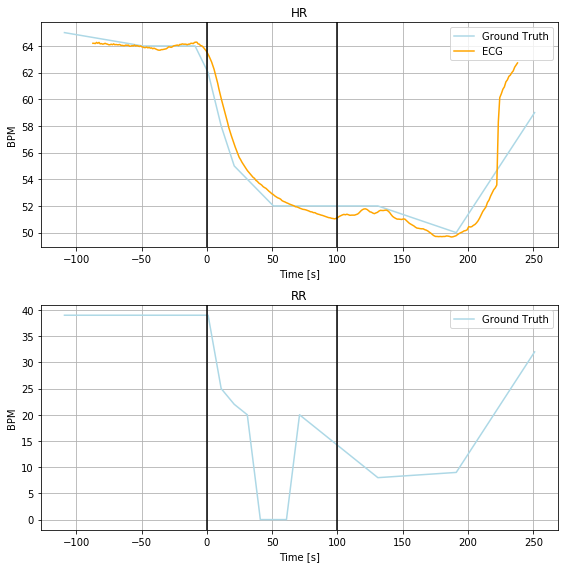

In [15]:
ECG_HRx = [-78.83656529608633, -77.89840704186872, -76.96024878765112, -76.01583614507206, -75.09018666757736, -74.14577402499829, -73.23263332422648, -72.28196629328598, -71.35631681579127, -70.41815856157366, -69.48000030735606, -68.5606052182228, -67.62244696400519, -66.70305187487195, -65.75863923229288, -64.82048097807527, -63.88232272385766, -62.9379100812786, -62.01851499214535, -61.06784796120483, -60.14219848371013, -59.20404022949252, -58.25962758691347, -57.34023249778021, -56.395819855201154, -55.47017037770644, -54.525757735127385, -53.581345092548325, -52.64318683833072, -51.711282972474564, -50.78563349497985, -49.85372962912369, -48.90931698654464, -47.977413120688475, -47.03300047810942, -46.10735100061471, -45.156683969674205, -44.2310344921795, -43.292876237961885, -42.34846359538283, -41.41655972952667, -40.47840147530906, -39.54024322109146, -38.602084966873846, -37.657672324294786, -36.72576845843863, -35.78135581585957, -34.84945195000341, -33.90503930742435, -32.97938982992965, -32.028722798989136, -31.096818933132983, -30.164915067276826, -29.22675681305922, -28.301107335564513, -27.356694692985453, -26.412282050406393, -25.480378184550236, -24.52971115360973, -23.59780728775357, -22.647140256813056, -21.702727614234004, -20.75206058329349, -19.813902329075884, -18.881998463219727, -17.93133143227922, -16.999427566423055, -16.048760535482547, -15.110602281264933, -14.16618963868588, -13.228031384468268, -12.283618741889216, -11.339206099310148, -10.38853906836964, -9.456635202513484, -8.51222255993443, -7.580318694078274, -6.648414828222117, -5.70400218564305, -4.778352708148349, -3.833940065569282, -2.9082905880745806, -1.9826411105798791, -1.038228468000812, -0.10007021378321426, 0.8380880404343977, 1.7512287412062029, 2.69564138378527, 3.6275452496414267, 4.565703503859025, 5.516370534799547, 6.435765623932793, 7.3801782665118605, 8.318336520729458, 9.25649477494707, 10.200907417526137, 11.132811283382294, 12.077223925961347, 13.009127791817503, 13.934777269312205, 14.86042674680692, 15.786076224301622, 16.717980090157777, 17.637375179291038, 18.569279045147194, 19.507437299364806, 20.458104330305314, 21.408771361245822, 22.371947168909227, 23.316359811488294, 24.29204439587461, 25.242711426815116, 26.224650399562872, 27.200334983949187, 28.194782733419853, 29.195484871251974, 30.18993262072264, 31.203143535277658, 32.22260883819412, 33.22956536438768, 34.267793832388506, 35.30602230038933, 36.350505156751595, 37.40749678983677, 38.464488422921946, 39.52773444436856, 40.597234854176634, 41.67298965234616, 42.75499883887714, 43.824499248685214, 44.91901721193909, 46.00102639847006, 47.095544361723924, 48.17755354825492, 49.27832589987024, 50.38535263984703, 51.479870603100906, 52.593151731439136, 53.70643285977734, 54.807205211392684, 55.907977563008004, 57.02125869134623, 58.12828543132302, 59.25407533638413, 60.36735646472236, 61.4931463697835, 62.61268188648317, 63.744726179905754, 64.8705160849669, 65.99005160166656, 67.1158415067277, 68.26039457687317, 69.38618448193431, 70.51822877535689, 71.65027306877947, 72.78857175056349, 73.93312482070898, 75.07767789085447, 76.2159765726385, 77.36052964278399, 78.50508271292945, 79.65589017143638, 80.80669762994332, 81.95750508845025, 83.11456693531865, 84.27162878218702, 85.42243624069395, 86.57324369920089, 87.72405115770782, 88.8936217812991, 90.04442923980604, 91.20774547503588, 92.35855293354281, 93.50936039204974, 94.66642223891812, 95.82348408578652, 96.98680032101633, 98.15011655624618, 99.31968717983746, 100.47049463834439, 101.63381087357423, 102.80963588552696, 103.97920650911824, 105.14877713270953, 106.31209336793937, 107.48166399153065, 108.65123461512194, 109.82080523871322, 110.99663025066594, 112.1724552626187, 113.34828027457142, 114.51159650980127, 115.69367591011546, 116.86324653370674, 118.03281715729803, 119.20864216925075, 120.3844671812035, 121.56654658151767, 122.7548803701933, 123.92445099378459, 125.10653039409878, 126.28860979441298, 127.47694358308861, 128.65276859504132, 129.82859360699408, 130.979401065501, 132.12395413564647, 133.25599842906905, 134.40680588757598, 135.55761334608292, 136.71467519295132, 137.89050020490404, 139.0538164401339, 140.24215022880952, 141.43048401748516, 142.60005464107644, 143.77587965302916, 144.95795905334336, 146.12752967693464, 147.27833713544157, 148.4166358172256, 149.54242572228674, 150.68697879243223, 151.83778625093916, 153.00735687453044, 154.17692749812173, 155.35900689843592, 156.53483191038865, 157.6981481456185, 158.88022754593266, 160.0560525578854, 161.20686001639234, 162.3514130865378, 163.4959661566833, 164.65928239191314, 165.83510740386586, 167.01093241581862, 168.1805030394099, 169.35007366300118, 170.53215306331535, 171.720486851991, 172.9150750290281, 174.12217198278807, 175.31050577146374, 176.51134833686223, 177.70593651389936, 178.8880159142135, 180.0700953145277, 181.239665938119, 182.40298217334885, 183.58506157366304, 184.78590413906153, 185.9742379277372, 187.16882610477427, 188.36341428181134, 189.57051123557136, 190.77760818933137, 191.9909595314528, 193.19180209685135, 194.38013588552695, 195.5809784509255, 196.78182101632405, 197.988917970084, 199.2085237005669, 200.4281294310498, 201.65398954989416, 202.87984966873847, 204.09945539922137, 205.31906112970427, 206.5199036951028, 207.72700064886283, 208.92784321426132, 210.12243139129845, 211.31076517997406, 212.5116077453726, 213.71245031077115, 214.9195472645311, 216.11413544156824, 217.3212323953282, 218.52207496072674, 219.74168069120964, 220.9362688682467, 222.12460265692238, 223.32544522232092, 224.50127023427365, 225.68960402294925, 226.8841921999864, 228.07878037702346, 229.26085977733766, 230.44919356601326, 231.63127296632746, 232.7257909295813, 233.93288788334132, 235.10871289529405, 236.26577474216242, 237.43534536575373, 238.58615282426064, 239.71194272932178, 240.82522385766003, 241.91974182091388, 243.02676856089067, 244.14630407759034, 245.2595852059286, 246.31657683901375, 247.41734919062907, 248.48059521207568, 249.5751131753296, 250.66337675022203, 251.7829122669217, 252.87743023017555, 253.29021986203128, 253.94693063998363, 255.0289398265146, 256.0671682945155, 257.1491774810465, 258.16864278396287, 259.25690635885536, 260.2826260501333, 261.3583808483027, 262.38410053958063, 263.44109217266583, 264.4543030872209, 265.5050403319446, 266.50574246977675]
ECG_HRy = [64.19926385976717, 64.19926385976717, 64.17808667608888, 64.26452416049008, 64.20013407498175, 64.26452416049008, 64.15573725803308, 64.17663579455771, 64.1334228927277, 64.15488433390502, 64.19809723573505, 64.15429837618947, 64.13312119251118, 64.08932233296561, 64.08932233296561, 64.13253523479564, 64.09045951459271, 64.15484960010104, 64.08958929937815, 64.11048783590277, 64.08873637525008, 64.08873637525006, 64.10991355892835, 64.04465325820546, 64.04465325820546, 64.02290179755275, 64.02290179755275, 64.06554042240836, 64.04436323873009, 64.06611469938278, 63.98082607734982, 63.98082607734982, 64.02346470220543, 64.00200326102811, 64.06639334653644, 64.00200326102814, 64.02290179755275, 64.00115033690005, 63.959074616697116, 64.00171324155274, 63.93817608017248, 63.91699889649419, 63.87492317629127, 63.87492317629127, 63.917561801146896, 63.854024639766635, 63.89666326462226, 63.833126103242, 63.8543032869203, 63.78991320141197, 63.8319889216149, 63.78935029675928, 63.74671167190364, 63.70463595170072, 63.682884491048014, 63.682884491048014, 63.72552311590364, 63.72552311590364, 63.746421652428275, 63.76817311308098, 63.7890716496056, 63.85346173511393, 63.9387503571469, 63.91757317346861, 63.896111732291274, 63.938187452494205, 64.00433573009558, 64.0252342666202, 64.04669570779753, 64.06787289147583, 64.0257971712729, 64.11223465567409, 64.11223465567409, 64.15431037587703, 64.1328489346997, 64.1328489346997, 64.1328489346997, 64.09021030984407, 64.13284893469968, 64.1328489346997, 64.19723902020802, 64.19723902020802, 64.17548755955532, 64.26192504395652, 64.28338648513385, 64.28338648513385, 64.15370104615224, 64.1328025096276, 64.02828250389385, 64.00710532021554, 63.926190473671454, 63.81885445274562, 63.697456584526094, 63.57446601777906, 63.393461032755155, 63.214778545469564, 63.01231211926832, 62.79661858180422, 62.520121486881536, 62.258428447848736, 61.90699822212256, 61.55556799639637, 61.20858661209221, 60.78381542395495, 60.40284309536325, 60.02663665590179, 59.676005654210734, 59.30906623383638, 58.96698977576439, 58.59546023754869, 58.261628699235374, 57.87856939680987, 57.56432234364735, 57.26217788776595, 56.97078728687518, 56.68285386260514, 56.40703674256871, 56.14088986488061, 55.89290791979547, 55.63899247108357, 55.47481420906503, 55.28001393413067, 55.11774078202357, 54.944292546867516, 54.80078583545139, 54.644033152342445, 54.518667877994815, 54.38000126830637, 54.27217716836439, 54.14681189401674, 54.07067487650668, 53.91916560258352, 53.843028585073455, 53.720481857436155, 53.645195693085114, 53.57074619747554, 53.450924005984305, 53.37729730826321, 53.318072316250195, 53.213823605613285, 53.109574894976376, 53.02170303182663, 52.91860666508033, 52.86067632567051, 52.75871329888055, 52.6866917958305, 52.61387433009188, 52.57066661837738, 52.51273627896755, 52.398097445205806, 52.34016710579598, 52.297891130975486, 52.23996079156566, 52.19675307985115, 52.139454204496396, 52.09671616971944, 52.05444019489895, 52.01216422007845, 51.94169598091859, 51.92745081548994, 51.88517484066945, 51.829709622085566, 51.78788825406243, 51.746066886039294, 51.73212724028766, 51.70439703590476, 51.662575667881626, 51.62075429985849, 51.565289081274614, 51.55164523071387, 51.49618001212999, 51.49618001212998, 51.42721532235639, 51.385393954333246, 51.35766374995033, 51.316289695006695, 51.28885528581467, 51.24792140543292, 51.20742071218946, 51.16559934416632, 51.12466546378456, 51.11116599259484, 51.070665299351376, 51.057021448790636, 51.02958703959861, 51.071408407621746, 51.12747494107354, 51.21250402081118, 51.267969239395065, 51.32343445797894, 51.36480851292259, 51.33737410373057, 51.37830798411231, 51.33780729086885, 51.29730659762539, 51.310950448186134, 51.310950448186134, 51.310950448186134, 51.351451141429585, 51.39327250945273, 51.490884070363066, 51.617779099546496, 51.71434632624173, 51.76981154482561, 51.783455395386355, 51.74163402736322, 51.65842417216097, 51.55975124186258, 51.53172043247072, 51.46275574269712, 51.42138168775347, 51.47684690633734, 51.51912288115784, 51.615690107853084, 51.66998135972783, 51.65633750916709, 51.65633750916709, 51.68348083091755, 51.68348083091755, 51.614516141143966, 51.503547208740635, 51.350077304335535, 51.21426847330596, 51.13194641203937, 51.06514839366908, 51.011430196696956, 51.01143019669695, 50.997930725507224, 50.98414016687594, 51.02507404725769, 51.011574576067964, 50.90295518967454, 50.8063879629793, 50.69660323255539, 50.62909447695198, 50.562996029934915, 50.49689758291786, 50.40434445230996, 50.33754643393968, 50.32418906244668, 50.29789173731986, 50.28481191592171, 50.28481191592169, 50.22008003868642, 50.18164548657798, 50.11758105524004, 50.02694174868045, 49.94885249995218, 49.84361992947345, 49.763031352471884, 49.710432376644555, 49.710432376644555, 49.697214872915886, 49.710432376644555, 49.6973525552464, 49.7102968344539, 49.7102968344539, 49.749131768089676, 49.736187488882166, 49.70989016375534, 49.67145561164689, 49.684535433045056, 49.72377703737939, 49.76221158948784, 49.85380030940583, 49.93108224447243, 49.99514667581036, 50.04666104931696, 50.12475029804522, 50.151047623172055, 50.203646598999384, 50.44633334231269, 50.420309241707024, 50.44716608438974, 50.54169430714295, 50.60849232551324, 50.73005599111417, 50.883525895519256, 51.09296142426992, 51.33564816758324, 51.5857984728314, 51.754155503565265, 51.92434942798161, 52.264347388940905, 52.43830648359035, 52.73531156737571, 52.96491848929086, 53.21027789758739, 53.352060053099606, 53.56844947128609, 58.298173286304845, 60.12546170654623, 60.41277981149898, 60.75091716816695, 60.930762771158996, 61.30843794741702, 61.458257790718314, 61.71823785050875, 61.81224030876196, 61.99608335104233, 62.1243655588619, 62.40556683396112, 62.56596785399635, 62.72561907044682, 62.889797332465356, 63.08499878690291, 63.28678523821791, 63.52799518593296, 63.77308811939463, 64.12675684589297, 61.219707086418, 65.70173528701011, 71.19917092444652, 73.10626561605389, 73.31292050147951, 73.3494760180221, 73.66755506995403, 73.74067446177008, 74.02669903560036, 74.11867311335641, 74.39512543621434, 74.52884277879473, 74.85028217391171, 74.96708328031917]

#16.8 seconds delay (HR window of 20 points)
ECG_HRx = [i - 16.8/2 for i in ECG_HRx]

#PLOT DATA
fig = plt.figure(figsize = (8, 8))
FONT = 10

ax = fig.add_subplot(211)
ax.plot(G0414ts, G0414hr, c = GTcolor, label = "Ground Truth")
plt.plot(ECG_HRx[:-20], ECG_HRy[:-20], c = ECGcolor, label = "ECG")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(G0414naloxone) - timestr(G0414fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("HR")
plt.legend()
plt.grid()

ax = fig.add_subplot(212)
ax.plot(G0414ts, G0414rr, c = GTcolor, label = "Ground Truth")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(G0414naloxone) - timestr(G0414fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("RR")
plt.legend()
plt.grid()

plt.tight_layout()

## PIG 2

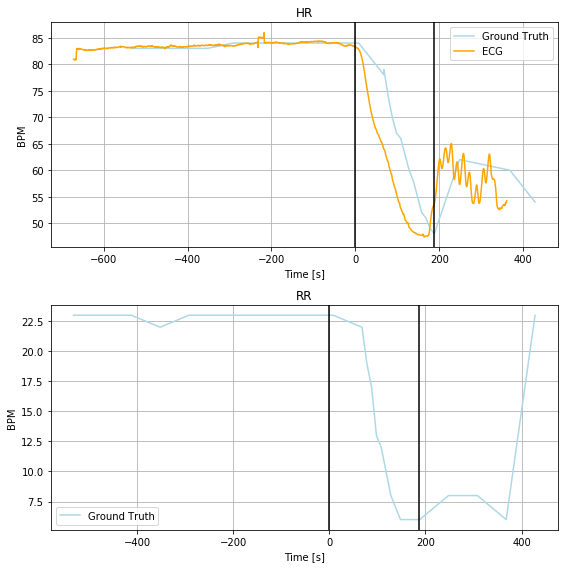

In [16]:
ECG_HRx = [-671.3018619871004, -670.590109933163, -669.8720591884828, -669.1540084438026, -668.4233603176367, -667.6864135007281, -666.9746614467906, -666.2503120113676, -665.5322612666873, -664.0709650143557, -663.3403168881898, -662.6285648342524, -661.8916180173437, -661.1798659634063, -660.4555165279833, -659.7311670925602, -659.0194150386228, -658.2698708402286, -657.5581187862912, -656.8274706601253, -656.1094199154451, -655.3913691707648, -654.6670197353418, -653.9363716091759, -653.2183208644957, -652.5002701198155, -651.7759206843924, -651.0515712489695, -650.3209231228036, -649.6028723781234, -648.8785229427003, -648.1541735072773, -647.4235253811114, -646.7054746364312, -645.9748265102653, -645.2441783840995, -644.5387250209048, -643.8080768947391, -643.0774287685732, -642.359378023893, -641.6413272792128, -640.9106791530469, -640.1926284083667, -639.4619802822008, -638.7376308467777, -638.0132814113548, -637.2889319759317, -636.5582838497659, -635.8276357236, -635.103286288177, -634.3726381620111, -633.6482887265881, -632.9239392911651, -632.2058885464849, -631.4689417295762, -630.7445922941531, -630.0202428587301, -629.3084908047927, -628.571543987884, -627.847194552461, -627.1165464262951, -626.3921969908721, -625.667847555449, -624.9371994292832, -624.2128499938601, -623.4947992491799, -622.7641511230141, -622.0398016875911, -621.315452252168, -620.5848041260022, -619.8667533813219, -619.136105255156, -618.411755819733, -617.6811076935672, -616.9567582581442, -616.2324088227211, -615.5017606965553, -614.7774112611322, -614.0530618257092, -613.3287123902861, -612.6043629548632, -611.8800135194401, -611.1493653932743, -610.431314648594, -609.706965213171, -608.9826157777479, -608.2582663423249, -607.5276182161591, -606.8158661622216, -606.078919345313, -605.3608686006328, -604.6302204744669, -603.9058710390439, -603.1878202943636, -602.4634708589406, -601.7328227327747, -601.0084732973518, -600.2904225526714, -599.5597744265057, -598.8417236818254, -598.1236729371452, -597.3804274294937, -596.6686753755563, -595.9443259401332, -595.226275195453, -594.5082244507728, -593.7775763246069, -593.0595255799267, -592.3351761445036, -591.6108267090807, -590.8864772736576, -590.1684265289774, -589.4503757842971, -588.7134289673885, -587.9953782227083, -587.2710287872852, -586.5466793518622, -585.8223299164391, -585.1042791717589, -584.3799297363358, -583.6618789916556, -582.9375295562326, -582.2068814300668, -581.4825319946438, -580.7644812499635, -580.0464305052833, -579.3157823791174, -578.60403032518, -577.879680889757, -577.1490327635911, -576.4309820189109, -575.7066325834878, -574.9822831480648, -574.2642324033845, -573.5398829679615, -572.8218322232814, -572.103781478601, -571.3794320431781, -570.6613812984978, -569.9370318630748, -569.2189811183946, -568.4883329922287, -567.7702822475485, -567.0522315028683, -566.3278820674452, -565.609831322765, -564.8854818873419, -564.1674311426617, -563.4367830164958, -562.7187322718156, -561.9943828363926, -561.2826307824552, -560.5582813470321, -559.8276332208662, -559.1158811669288, -558.3852330407631, -557.6734809868257, -556.9491315514025, -556.2310808067224, -555.513030062042, -554.7886806266191, -554.0643311911961, -553.3462804465158, -552.6219310110928, -551.9038802664126, -551.1858295217323, -550.4614800863093, -549.7497280323719, -549.0253785969488, -548.3136265430114, -547.5892771075884, -546.8712263629081, -546.1468769274851, -545.4351248735477, -544.7044767473818, -543.9927246934444, -543.2683752580214, -542.5440258225983, -541.8259750779181, -541.101625642495, -540.377276207072, -539.6592254623918, -538.9474734084544, -538.2168252822885, -537.4987745376083, -536.7744251021853, -536.0500756667622, -535.332024922082, -534.6013767959162, -533.8833260512359, -533.1526779250701, -532.4409258711327, -531.7228751264524, -531.0048243817722, -530.2741762556063, -529.5498268201833, -528.8380747662459, -528.1200240215657, -527.3956745861426, -526.6776238414624, -525.9532744060393, -525.2226262798735, -524.510874225936, -523.7802260997702, -523.0684740458328, -522.3315272289242, -521.6197751749868, -520.8954257395637, -520.1773749948835, -519.4530255594605, -518.7286761240374, -518.0106253793572, -517.2862759439341, -516.5619265085111, -515.8501744545737, -515.1321237098934, -514.4077742744704, -513.6834248390473, -512.9653740943671, -512.2536220404297, -511.5292726050067, -510.8112218603265, -510.09317111564627, -509.37512037096604, -508.66336831702864, -507.9390188816056, -507.22096813692536, -506.4966187015023, -505.7848666475649, -505.06051721214186, -504.34876515820446, -503.6181170320386, -502.90006628735836, -502.1757168519353, -501.4702634887407, -500.73961536257485, -500.0152659271518, -499.2972151824716, -498.5854631285342, -497.86741238385395, -497.1493616391737, -496.4313108944935, -495.7006627683276, -494.9826120236474, -494.2519638974816, -493.54651053428694, -492.8221610988639, -492.0978116634409, -491.37346222801784, -490.6617101740804, -489.94365942940016, -489.21930999397716, -488.50125924929694, -487.7832085046167, -487.0777551414221, -486.34080832451343, -485.6038615076048, -484.89840814441015, -484.1803573997299, -483.4623066550497, -482.7442559103695, -482.02620516568925, -481.308154421009, -480.5901036763288, -479.87205293164857, -479.1603008777111, -478.43595144228806, -477.71790069760783, -476.987252571442, -476.2755005175046, -475.55115108208156, -474.83310033740133, -474.10875090197834, -473.39070015729806, -472.67894810336065, -471.94829997719484, -471.2302492325146, -470.50589979709156, -469.8004464338969, -469.0634996169883, -468.3517475630509, -467.6273981276278, -466.9093473829476, -466.1912966382674, -465.47324589358715, -464.7488964581641, -464.03084571348387, -463.3064962780608, -462.5884455333806, -461.86409609795754, -461.1397466625345, -460.41539722711144, -459.69104779168845, -458.979295737751, -458.25494630232794, -457.5368955576477, -456.8125461222247, -456.0944953775445, -455.37644463286426, -454.65839388818404, -453.94034314350375, -453.21599370808076, -452.4916442726577, -451.7735935279775, -451.0492440925545, -450.32489465713144, -449.6068439124512, -448.8698970955425, -448.1581450416051, -447.4400942969249, -446.709446170759, -445.9976941168216, -445.26704599065573, -444.567891318204, -443.8246458105525, -443.10029637512946, -442.3759469397064, -441.6578961950262, -440.93984545034596, -440.2028986334373, -439.4659518165286, -438.76679714407686, -438.06764247162505, -437.3306956547164, -436.6126449100362, -435.9008928560988, -435.1765434206757, -434.4521939852527, -433.73414324057245, -433.02239118663505, -432.298041751212, -431.57999100653177, -430.86194026185154, -430.1375908264285, -429.4258387724911, -428.70778802781086, -427.9960359738734, -427.2779852291932, -426.5536357937702, -425.8418837398327, -425.1238329951525, -424.41208094121504, -423.68773150579204, -422.963382070369, -422.239032634946, -421.5209818902658, -420.8029311455855, -420.0785817101625, -419.36053096548227, -418.6298828393164, -417.918130785379, -417.19378134995594, -416.48202929601854, -415.7576798605955, -415.03962911591526, -414.3152796804922, -413.6035276265548, -412.87917819113176, -412.1548287557087, -411.4367780110285, -410.7250259570911, -410.000676521668, -409.27002839550215, -408.54567896007916, -407.82762821539893, -407.1095774707187, -406.3915267260384, -405.6671772906154, -404.9491265459352, -404.23737449199774, -403.51302505657475, -402.7886756211517, -402.06432618572865, -401.3462754410484, -400.62192600562537, -399.90387526094514, -399.1795258255221, -398.46147508084186, -397.73712564541887, -397.01907490073864, -396.2947254653156, -395.57667472063537, -394.8649226666979, -394.1405732312749, -393.4225224865947, -392.70447174191446, -391.9864209972342, -391.2620715618112, -390.54402081713096, -389.8196713817079, -389.1079193277705, -388.38356989234745, -387.6592204569244, -386.9411697122442, -386.22311896756395, -385.51136691362655, -384.7870174782035, -384.04377197055203, -383.3446172981002, -382.62026786267717, -381.90851580873976, -381.19046506405954, -380.4661156286365, -379.74806488395626, -379.03001413927603, -378.31826208533863, -377.5939126499156, -376.86956321449253, -376.1578111605551, -375.4334617251321, -374.71541098045185, -373.9973602357716, -373.2793094910914, -372.56125874641117, -371.84320800173094, -371.1251572570507, -370.4134052031133, -369.69535445843303, -368.9773037137528, -368.2529542783298, -367.54120222439235, -366.81055409822653, -366.0925033535463, -365.3744526088661, -364.65640186418585, -363.9383511195056, -363.2203003748254, -362.5022496301452, -361.78419888546495, -361.0661481407847, -360.34809739610444, -359.63634534216703, -358.911995906744, -358.19394516206376, -357.46959572664076, -356.7578436727033, -356.03349423728025, -355.3280408740857, -354.6036914386626, -353.8856406939824, -353.173888640045, -352.45583789536477, -351.73778715068454, -351.0197364060043, -350.29538697058126, -349.57733622590104, -348.8592854812208, -348.1412347365406, -347.41688530111753, -346.6988345564373, -345.9870825024999, -345.2690317578197, -344.5446823223966, -343.83293026845917, -343.10858083303617, -342.3968287790987, -341.6850767251613, -340.9670259804811, -340.24267654505803, -339.5246258003778, -338.8065750556976, -338.0948230017602, -337.37677225707995, -336.6587215123997, -335.9469694584623, -335.22262002303927, -334.5108679691018, -333.7928172244216, -333.0810651704842, -332.35041704431836, -331.6386649903809, -330.91431555495785, -330.20256350102045, -329.4845127563402, -328.7601633209172, -328.04211257623695, -327.3240618315567, -326.59971239613367, -325.88796034219627, -325.16990959751604, -324.4518588528358, -323.7338081081556, -323.01575736347536, -322.29770661879513, -321.5796558741149, -320.8616051294347, -320.15615176624004, -319.43180233081705, -318.71375158613677, -318.0082982229422, -317.28394878751914, -316.5658980428389, -315.84154860741586, -315.12349786273563, -314.41174580879823, -313.693695064118, -312.9756443194378, -312.2512948840147, -311.57103628379133, -310.80889470391145, -310.09714264997405, -309.3790919052938, -308.68623592358483, -307.9303930344477, -307.2186409805103, -306.5005902358301, -305.78253949114986, -305.07078743721246, -304.3464380017894, -303.6409846385948, -302.91033651242896, -302.19228576774873, -301.4679363323257, -300.76248296913104, -300.0318348429652, -299.3200827890278, -298.59573335360477, -297.87768260892454, -297.1659305549871, -296.4415811195641, -295.72353037488386, -295.00547963020364, -294.2937275762662, -293.5693781408432, -292.8576260869057, -292.1395753422255, -291.41522590680245, -290.6971751621222, -289.979124417442, -289.26107367276177, -288.54302292808154, -287.8249721834013, -287.1069214387211, -286.38887069404086, -285.6645212586178, -284.9464705139376, -284.22841976925736, -283.51036902457713, -282.7923182798969, -282.0742675352167, -281.35621679053645, -280.6381660458562, -279.920115301176, -279.19576586575295, -278.4777151210727, -277.75336568564967, -277.03531494096944, -276.3172641962892, -275.599213451609, -274.8874613976716, -274.16311196224854, -273.45135990831113, -272.7270104728881, -272.0152584189507, -271.29090898352763, -270.5728582388474, -269.86110618491, -269.15565282171536, -268.4313033862923, -267.7195513323549, -267.0015005876747, -266.2897485337373, -265.56539909831423, -264.847348353634, -264.1292976089538, -263.4175455550163, -262.6994948103361, -261.9877427563987, -261.2759907024613, -260.55164126703824, -259.83988921310083, -259.1218384684206, -258.41008641448315, -257.6920356698029, -256.9739849251227, -256.25593418044247, -255.54418212650504, -254.83243007256763, -254.1143793278874, -253.4152246554356, -252.69087522001254, -251.9854218568179, -251.2610724213949, -250.54932036745745, -249.83756831352005, -249.11951756883983, -248.40776551490242, -247.6897147702222, -246.97166402554197, -246.25361328086174, -245.54186122692428, -244.83010917298688, -244.11205842830665, -243.3877089928836, -242.68225562968902, -241.97050357575156, -241.25245283107134, -240.5344020863911, -239.8226500324537, -239.10459928777348, -238.38654854309326, -237.66849779841303, -236.95674574447557, -236.23869499979534, -235.52694294585794, -234.81519089192054, -234.0908414564975, -233.37908940256008, -232.66103865787986, -231.9492866039424, -231.23123585926217, -230.51948380532477, -229.80773175138737, -229.08968100670714, -228.3716302620269, -227.66617689883228, -226.9607235356377, -226.2426727909574, -225.53092073702, -224.8191686830826, -224.1074166291452, -223.38936588446498, -222.67761383052752, -221.9595630858473, -221.25410972265271, -220.54235766871525, -219.83060561477785, -219.11255487009763, -218.40080281616022, -217.4685965862245, -216.97729870828536, -216.27184534509072, -215.54749590966773, -214.83574385573027, -214.11769311105004, -213.41223974785547, -212.700487693918, -211.9887356399806, -211.27068489530038, -210.55263415062015, -209.84718078742551, -209.1291300427453, -208.4236766795507, -207.69932724412766, -206.98127649944743, -206.26952444551003, -205.54517501008698, -204.83342295614958, -204.12796959295494, -203.41621753901754, -202.6981667943373, -201.98011604965708, -201.27466268646245, -200.56291063252505, -199.85115857858764, -199.13940652465018, -198.42135577996996, -197.70960372603255, -196.99785167209515, -196.29239830890052, -195.5806462549631, -194.8625955102829, -194.14454476560266, -193.42649402092243, -192.71474196698497, -192.00298991304757, -191.27864047762452, -190.56688842368712, -189.85513636974972, -189.1370856250695, -188.42533357113203, -187.71358151719463, -186.9955307725144, -186.283778718577, -185.57202666463954, -184.86027461070213, -184.1548212475075, -183.43677050282727, -182.72501844888987, -182.00696770420964, -181.301514341015, -180.58346359633478, -179.87171154239738, -179.15995948845998, -178.44190874377975, -177.7301566898423, -177.0184046359049, -176.30665258196748, -175.58860183728726, -174.8768497833498, -174.1650977294124, -173.453345675475, -172.7415936215376, -172.02354287685736, -171.30549213217708, -170.58744138749685, -169.88198802430227, -169.15763858887922, -168.44588653494182, -167.7278357902616, -167.00978504558137, -166.2980329916439, -165.57998224696368, -164.86823019302628, -164.15647813908888, -163.44472608515142, -162.732974031214, -162.0212219772766, -161.30317123259638, -160.58512048791616, -159.87966712472158, -159.15531768929853, -158.44356563536113, -157.7318135814236, -157.01376283674338, -156.28941340132033, -155.5713626566401, -154.86590929344553, -154.14155985802248, -153.42980780408507, -152.71175705940485, -152.00000500546744, -151.28195426078722, -150.5702022068498, -149.8521514621696, -149.13410071748936, -148.42234866355196, -147.70429791887173, -146.99254586493421, -146.26819642951128, -145.55014568483105, -144.83839363089353, -144.12664157695613, -143.4085908322759, -142.69054008759568, -141.97878803365828, -141.26073728897805, -140.54898523504065, -139.83093449036042, -139.11918243642302, -138.4011316917428, -137.68937963780527, -136.97762758386787, -136.26587552993047, -135.54782478525024, -134.82977404057002, -134.1180219866326, -133.39367255120956, -132.67562180652934, -131.96386975259193, -131.2458190079117, -130.5340669539743, -129.8223149000369, -129.10426415535667, -128.38621341067645, -127.68076004748177, -126.96270930280154, -126.25095724886414, -125.53920519492674, -124.82745314098933, -124.11570108705193, -123.40394903311442, -122.68589828843419, -121.98044492523961, -121.26239418055938, -120.55064212662198, -119.83889007268458, -119.13343670949, -118.40908727406695, -117.70363391087226, -116.99188185693485, -116.28012980299745, -115.56837774906005, -114.844028313637, -114.14487364118524, -113.42682289650502, -112.72136953331032, -112.0033187886301, -111.2915667346927, -110.57351599001247, -109.86176393607506, -109.15001188213766, -108.43825982820026, -107.72650777426286, -107.00845702958263, -106.30300366638794, -105.59125161245053, -104.87949955851313, -104.16774750457573, -103.4496967598955, -102.74424339670081, -102.02619265202058, -101.320739288826, -100.60268854414578, -99.89093649020838, -99.17918443627097, -98.46743238233357, -97.74938163765334, -97.03762958371594, -96.33217622052125, -95.61412547584102, -94.90237342190362, -94.19062136796622, -93.47886931402881, -92.76711726009141, -92.06166389689672, -91.35621053370214, -90.63186109827909, -89.92640773508451, -89.20835699040428, -88.5029036272097, -87.78485288252948, -87.07939951933479, -86.36134877465456, -85.65589541145998, -84.93784466677975, -84.23239130358517, -83.52063924964766, -82.80258850496743, -82.09713514177285, -81.38538308783545, -80.66733234315522, -79.95558028921782, -79.24382823528042, -78.53837487208573, -77.82662281814832, -77.11487076421092, -76.40311871027352, -75.69136665633611, -74.97961460239871, -74.2678625484612, -73.54351311303826, -72.85695582207204, -72.13260638664899, -71.41455564196876, -70.70280358803136, -70.00364891557949, -69.28559817089926, -68.57384611696186, -67.86839275376728, -67.15034200908705, -66.43858995514965, -65.72683790121225, -65.01508584727485, -64.2970351025945, -63.59158173939992, -62.873530994719694, -62.16177894078229, -61.443728196102064, -60.73197614216466, -60.013925397484435, -59.30217334354703, -58.59042128960963, -57.8723705449294, -57.16061849099189, -56.44256774631166, -55.72451700163143, -55.01276494769403, -54.294714203013804, -53.5829621490764, -52.864911404396175, -52.15315935045877, -51.435108605778545, -50.72335655184114, -49.99900711641809, -49.29985244396622, -48.57550300854317, -47.86375095460577, -47.15199890066837, -46.43394815598814, -45.72219610205074, -45.01674273885616, -44.30499068491876, -43.580641249495706, -42.86888919555819, -42.16343583236361, -41.445385087683384, -40.73363303374598, -40.015582289065755, -39.29753154438553, -38.59207818119095, -37.88032612725355, -37.16227538257332, -36.4505233286358, -35.72617389321275, -35.01442183927535, -34.30266978533795, -33.590917731400545, -32.87916567746314, -32.16741362352574, -31.455661569588337, -30.73761082490811, -30.019560080227883, -29.301509335547657, -28.58975728161014, -27.871706536929914, -27.15995448299251, -26.43560504756946, -25.73015168437488, -25.01839963043748, -24.300348885757252, -23.582298141077025, -22.8642473963968, -22.139897960973748, -21.42184721629352, -20.71009516235612, -19.979447036190244, -19.261396291510017, -18.54334554682979, -17.81899611140674, -17.100945366726513, -16.382894622046287, -15.66484387736606, -14.946793132685833, -14.222443697262783, -13.498094261839732, -12.792640898645153, -12.068291463222103, -11.350240718541876, -10.638488664604473, -9.920437919924247, -9.20238717524402, -8.484336430563793, -7.772584376626391, -7.041936250460516, -6.330184196523113, -5.618432142585711, -4.900381397905484, -4.176031962482433, -3.464279908544917, -2.73993047312198, -2.0281784191844636, -1.3101276745042372, -0.5920769298240105, 0.11967512411339226, 0.8440245595364428, 1.5620753042166695, 2.2801260488968964, 2.998176793577123, 3.7162275382573497, 4.434278282937576, 5.152329027617803, 5.876678463040854, 6.601027898463904, 7.325377333886841, 8.037129387824358, 8.761478823247295, 9.485828258670345, 10.203879003350572, 10.928228438773623, 11.64627918345385, 12.364329928134076, 13.09497805429995, 13.806730108237353, 14.531079543660404, 15.255428979083455, 15.98607710524933, 16.71042654067238, 17.428477285352606, 18.159125411518367, 18.883474846941418, 19.614122973107293, 20.338472408530343, 21.069120534696218, 21.806067351604803, 22.5430141685135, 23.273662294679376, 24.02320649307361, 24.760153309982307, 25.503398817633716, 26.240345634542415, 26.989889832936647, 27.745732722073704, 28.501575611210875, 29.263717191090755, 30.03215746171346, 30.800597732336165, 31.575336693701693, 32.35007565506711, 33.13111330717546, 33.93104703151217, 34.72468206510617, 35.512018407957235, 36.31195213229406, 37.11188585663077, 37.93071565319595, 38.730649377532664, 39.562076555583495, 40.374607661405854, 41.206034839456684, 42.0374620175074, 42.84999312332976, 43.68142030138059, 44.525444860916956, 45.37576811119626, 46.22609136147545, 47.076414611754636, 47.920439171291115, 48.77706111231313, 49.639981744077964, 50.5029023758428, 51.37212169835046, 52.2350423301153, 53.12315772485132, 53.9986757381018, 54.87419375135229, 55.74971176460266, 56.63152846859597, 57.51334517258916, 58.41405794881094, 59.30217334354696, 60.177691356797446, 61.07210544227629, 61.97911690924078, 62.87982968546256, 63.78684115242705, 64.69385261939154, 65.5945653956132, 66.47008340886369, 67.383393566571, 68.29670372427832, 69.21631257272834, 70.14851880266413, 71.06812765111427, 71.98143780882158, 72.86325451281478, 73.80175943349339, 74.72766697268624, 75.66617189336485, 76.61097550478617, 77.55577911620749, 78.50058272762892, 79.4327889575646, 80.33980042452909, 81.30350010817888, 82.26090110108585, 83.21830209399282, 84.19459915912826, 85.16459753352088, 86.13459590791338, 87.07939951933481, 88.01790444001331, 89.0067988866344, 90.01458940548385, 91.00978254284765, 92.01127437095427, 93.01906488980372, 94.02055671791034, 95.04724330898826, 96.06133251858041, 97.02503220223021, 98.06431617479377, 99.10989883810005, 100.15548150140633, 101.18846678322696, 102.24034813727606, 103.29222949132527, 104.36930560834556, 105.42118696239466, 106.39118533678727, 107.5060535982645, 108.61462316899879, 109.69799797676201, 110.80026885675359, 111.89624104600234, 113.0174079982224, 114.1259775689568, 115.22824844894838, 116.36831147339679, 117.41389413670306, 118.5602558518943, 119.725513639314, 120.90336880821924, 122.06232790489612, 123.21498831083018, 124.3865447889926, 125.5518025764123, 126.717060363832, 127.7689417178811, 128.9845890312433, 130.20023634460537, 131.4032862764819, 132.5937388268728, 133.7904900680065, 134.99353999988304, 136.18399255027393, 137.40593855437893, 138.4767159806565, 139.76164889218953, 141.04028311297972, 142.31891733376992, 143.54086333787492, 144.7817054142083, 146.009950109056, 147.26968825761784, 148.4790368802372, 149.58130776022878, 150.91663019770428, 152.20786179998012, 153.4801973300276, 154.7336367878465, 155.99967362715117, 157.27200915719854, 158.51914992427473, 159.7599920006082, 161.0071327676844, 162.2605722255033, 163.37544048698052, 164.66037339851354, 165.98939714524633, 167.2617326752937, 168.54666558682672, 169.81270242613138, 171.08503795617875, 172.3447761047406, 173.60451425330243, 174.72568120552236, 176.0106141170555, 177.345936554531, 178.64346684754966, 179.92210106833986, 181.20073528913005, 182.45417474694906, 183.73280896773937, 184.95475497184427, 186.09481799629268, 187.41754305228264, 188.7402681082725, 190.01260363831997, 191.27864047762452, 192.54467731692918, 193.81701284697655, 195.09564706776675, 196.37428128855706, 197.5773312204336, 198.82447198750978, 199.9141454860157, 200.95342945857917, 201.8982330700006, 202.82414060919345, 203.75634683912924, 204.7137478320362, 205.72153835088565, 206.77971839567758, 207.88198927566916, 209.0346496816032, 210.21880354125128, 211.3084770397572, 212.32256624934948, 213.27996724225645, 214.19327739996376, 215.06879541321425, 215.94431342646473, 216.78203929525827, 217.66385599925158, 218.55827008473042, 219.47787893318056, 220.43527992608753, 221.43047306345133, 222.4760557267576, 223.54683315303518, 224.66800010525523, 225.80806312970364, 226.89143793746675, 227.86143631185936, 228.80623992328069, 229.68175793653117, 230.544678568296, 231.38870312783237, 232.2201303058832, 233.07675224690522, 233.94597156941288, 234.84038565489172, 235.79148795705598, 236.81187585739096, 237.92674411886819, 239.10459928777342, 240.206870167765, 241.1957646143861, 242.12167215357894, 243.00978754831507, 243.8727081800799, 244.73562881184475, 245.61744551583806, 246.51815829205972, 247.43776714050986, 248.42666158713084, 249.52893246712242, 250.7760732341986, 252.09879829018845, 253.42152334617842, 254.68756018548297, 255.777233683989, 256.79762158432396, 257.72982781425975, 258.6242418997386, 259.49346122224625, 260.3374857817826, 261.2067051042903, 262.07592442679794, 262.9955332752481, 263.9718303403835, 265.06150383888945, 266.25825508002316, 267.549486682299, 268.834419593832, 269.89259963862395, 270.9003901574734, 271.8325963874092, 272.7144130914024, 273.5710350324244, 274.3961635197324, 275.2716815329829, 276.1597969277189, 277.08570446691186, 278.0683002227901, 279.1768697935244, 280.37362103465824, 281.62706049247714, 282.9119934040103, 284.2347184600001, 285.54484613450444, 286.7227013034097, 287.81867349265843, 288.81386663002223, 289.73347547847237, 290.6278895639513, 291.54119972165864, 292.46080857010867, 293.4056121815301, 294.4511948448364, 295.58495917854196, 296.83209994561815, 298.08553940343717, 299.33268017051336, 300.598717009818, 301.88364992135104, 303.13708937917005, 304.4031262184746, 305.5179944799518, 306.5635771432581, 307.52097813616507, 308.415392221644, 309.3161049978657, 310.21681777408736, 311.1931148392228, 312.26389226550026, 313.4354487436628, 314.65109605702486, 315.8856394426155, 317.1264815189489, 318.26024585265446, 319.3562180419032, 320.30732034406736, 321.2017344295463, 322.0457589890827, 322.8960822393619, 323.752704180384, 324.70380648254815, 325.7367917643688, 326.8453613351032, 327.97912566880876, 329.13808476548564, 330.30334255290535, 331.3426265254688, 332.3441183535754, 333.2700258927684, 334.1581412875045, 335.0084645377837, 335.8524890973201, 336.69651365685655, 337.6287198867922, 338.6176143334133, 339.6946904504336, 340.8284547841392, 341.9055309011596, 343.08968476080764, 344.267539929713, 345.3509147374761, 346.52876990638146, 347.71922245677234, 348.8214933367639, 350.0119458871548, 351.2086971282885, 352.2542797915948, 353.4258362697573, 354.5847953664342, 355.59888457602636, 356.76414236344607, 357.9042053878945, 359.03796972160006, 360.2410196534767, 361.29919969826864, 362.4833535579166, 363.6486113453363, 364.76977829755623, 365.96023084794723, 367.01841089273915, 368.1647726079304, 369.32373170460727, 370.4700934197985, 371.6101564442469, 372.6242456538393, 373.7895034412588, 374.80359265085116, 375.93735698455674, 377.04592655529103, 378.1481974352827, 379.28826045973113, 380.2645575248666, 381.404620549315, 382.4376058311356]
ECG_HRy = [80.94149409307123, 80.90452083907344, 80.86819059818865, 80.79615649988258, 80.86819059818865, 80.97531823156689, 80.90201473668428, 80.90201473668428, 80.82998063837822, 82.95498653840696, 82.99069039582824, 82.91738690094563, 82.95248043601782, 82.91550718202002, 82.87980332459875, 82.84409946717749, 82.88173295785381, 82.98524414113396, 82.8762367888301, 82.94827088713616, 82.94827088713616, 82.8762367888301, 82.91256702971491, 82.9125670297149, 82.87623678883008, 82.8399065479453, 82.8399065479453, 82.80420269052402, 82.80420269052404, 82.76787244963924, 82.73216859221799, 82.73216859221797, 82.76787244963924, 82.76787244963924, 82.73277891456706, 82.76848277198833, 82.65754578642941, 82.76655313873326, 82.73145960366108, 82.69512936277629, 82.62309526447021, 82.65879912189148, 82.62246888100668, 82.62246888100668, 82.62246888100668, 82.65879912189148, 82.62309526447021, 82.65879912189148, 82.69450297931274, 82.65879912189148, 82.73083322019754, 82.69512936277627, 82.69512936277627, 82.62309526447021, 82.69389265696365, 82.69389265696367, 82.6581887995424, 82.5848853046598, 82.65568269715325, 82.65568269715325, 82.69138655457452, 82.69138655457452, 82.65568269715325, 82.72771679545932, 82.72771679545932, 82.69138655457452, 82.72709041199579, 82.6913865545745, 82.76469004945712, 82.72959651438495, 82.72959651438494, 82.72959651438495, 82.72959651438495, 82.80163061269099, 82.80163061269099, 82.76592675526972, 82.80163061269099, 82.83796085357578, 82.80225699615451, 82.83858723703932, 82.87491747792411, 82.76962135603767, 82.87862870834154, 82.84229846745674, 82.87862870834154, 82.91495894922633, 82.87925509180505, 82.95128919011111, 82.87798569522853, 82.94878308772198, 82.91245284683717, 82.98448694514323, 83.02081718602804, 82.9136895526498, 82.9500197935346, 82.98572365095586, 82.98572365095586, 82.94939341007105, 83.02142750837712, 82.9850972674923, 82.98509726749232, 83.09039338937876, 82.9813860370749, 82.9813860370749, 82.9813860370749, 82.9813860370749, 82.9813860370749, 83.0183592910727, 83.0183592910727, 82.98265543365144, 83.01898567453624, 82.98265543365144, 82.94632519276664, 83.05345282614488, 83.01712258526008, 83.05345282614488, 83.08978306702969, 83.08978306702969, 83.08978306702969, 83.08978306702969, 83.08978306702969, 83.05407920960842, 83.12611330791448, 83.16244354879927, 83.12611330791448, 83.12611330791448, 83.16181716533575, 83.12484391133793, 83.08914005391668, 83.16117415222274, 83.12484391133793, 83.19814740622054, 83.19814740622054, 83.12611330791448, 83.19941680279707, 83.127382704491, 83.16435595848881, 83.16435595848881, 83.16435595848881, 83.20068619937362, 83.16435595848881, 83.20005981591007, 83.20005981591007, 83.16372957502529, 83.20005981591008, 83.20005981591008, 83.20005981591007, 83.23703306990788, 83.27273692732913, 83.30971018132695, 83.30971018132695, 83.27273692732913, 83.27273692732913, 83.381744279633, 83.27273692732913, 83.38174427963301, 83.3084407847504, 83.3084407847504, 83.3084407847504, 83.27211054386561, 83.27211054386561, 83.3084407847504, 83.3454140387482, 83.30971018132695, 83.30971018132695, 83.27337994044214, 83.27337994044214, 83.23640668644434, 83.20070282902307, 83.16372957502527, 83.128025717604, 83.16499897160182, 83.20132921248663, 83.16435595848881, 83.16435595848881, 83.09105246360622, 83.16435595848881, 83.20068619937362, 83.16435595848881, 83.20068619937362, 83.2006861993736, 83.12865210106754, 83.12865210106756, 83.12865210106754, 83.16562535506534, 83.0948279625719, 83.1681314574545, 83.1318012165697, 83.20383531487576, 83.16750507399097, 83.20320893141223, 83.16623567741443, 83.12990543652964, 83.09357519564483, 83.20258254794871, 83.2389127888335, 83.1656092939509, 83.1292790530661, 83.1656092939509, 83.20258254794871, 83.20258254794871, 83.27461664625477, 83.23764339225696, 83.30967749056302, 83.30967749056302, 83.38047488305645, 83.34350162905868, 83.34350162905866, 83.38047488305646, 83.38047488305646, 83.45377837793906, 83.38174427963301, 83.4180745205178, 83.41807452051779, 83.45570801119412, 83.38367391288807, 83.38367391288807, 83.42000415377287, 83.45697740777067, 83.42000415377287, 83.45633439465766, 83.45633439465766, 83.3843002963516, 83.3843002963516, 83.27529294404773, 83.38622992960666, 83.34989968872188, 83.34989968872188, 83.27659619383927, 83.34989968872188, 83.31292643472408, 83.34863029214534, 83.34863029214533, 83.38496053303012, 83.38496053303012, 83.34986699795795, 83.27906960546451, 83.35367635013864, 83.31670309614084, 83.31670309614084, 83.31670309614084, 83.31670309614084, 83.3887371944469, 83.3887371944469, 83.46077129275295, 83.42313780207662, 83.42313780207662, 83.45946804296142, 83.42376418554015, 83.42376418554015, 83.38743394465536, 83.42376418554015, 83.38743394465537, 83.38743394465536, 83.34980045397903, 83.3848939890512, 83.49202162242946, 83.38108463687053, 83.45569138154465, 83.34856374816641, 83.38553700216423, 83.34920676127942, 83.34920676127942, 83.34920676127942, 83.34920676127942, 83.27590326639682, 83.3122335072816, 83.27590326639681, 83.34793736470287, 83.27463386982029, 83.27463386982029, 83.23830362893548, 83.23830362893548, 83.2752768829333, 83.20197338805069, 83.27400748635675, 83.23767724547196, 83.27400748635675, 83.19940074168262, 83.30652837506085, 83.26955512106306, 83.26955512106306, 83.23322488017827, 83.23322488017827, 83.19689463929348, 83.19689463929348, 83.19689463929348, 83.12609724680001, 83.16307050079783, 83.19940074168262, 83.16369688426137, 83.23700037914395, 83.20129652172268, 83.27724158398844, 83.171945462102, 83.1356152212172, 83.1356152212172, 83.1356152212172, 83.1356152212172, 83.02848758783897, 82.92135995446071, 83.07060851160907, 83.21985706875742, 83.11272943537918, 83.14905967626397, 83.22236317114657, 83.18603293026177, 83.25683032275522, 83.21985706875742, 83.25683032275522, 83.29253418017649, 83.25556092617867, 83.32759502448474, 83.1783464673364, 83.35694608410543, 83.39327632499024, 83.46657981987283, 83.46657981987282, 83.43024957898803, 83.57435046636407, 83.68147809974231, 83.60553303747656, 83.45628448032821, 83.52708187282165, 83.49075163193686, 83.45377837793906, 83.49010861882385, 83.49010861882385, 83.49010861882385, 83.38110126651999, 83.45440476140259, 83.41807452051779, 83.45504777451559, 83.45504777451559, 83.41807452051779, 83.381744279633, 83.381744279633, 83.3454140387482, 83.3454140387482, 83.3084407847504, 83.3454140387482, 83.27211054386562, 83.23640668644435, 83.23640668644434, 83.27273692732913, 83.27273692732913, 83.27273692732913, 83.27273692732913, 83.27273692732913, 83.38174427963301, 83.3084407847504, 83.3084407847504, 83.23513728986781, 83.2714675307526, 83.23513728986781, 83.2714675307526, 83.19816403587001, 83.23449427675482, 83.2344942767548, 83.2344942767548, 83.16119078187221, 83.197521022757, 83.30652837506088, 83.30652837506086, 83.30652837506086, 83.30652837506086, 83.30652837506086, 83.30652837506086, 83.30652837506086, 83.23322488017827, 83.30652837506086, 83.30652837506086, 83.30652837506086, 83.30652837506086, 83.34285861594564, 83.37983186994346, 83.37983186994346, 83.23820550717222, 83.38745406432056, 83.35112382343576, 83.42442731831837, 83.42442731831838, 83.35112382343577, 83.38745406432056, 83.38745406432056, 83.42442731831838, 83.38809707743357, 83.38809707743357, 83.42507033143139, 83.42507033143137, 83.38809707743357, 83.42442731831838, 83.46075755920316, 83.46075755920317, 83.46075755920317, 83.42378430520537, 83.49708780008797, 83.6387141628592, 83.52579584659566, 83.52579584659564, 83.52579584659564, 83.45376174828958, 83.49009198917437, 83.49009198917437, 83.49009198917437, 83.45311873517657, 83.48944897606137, 83.52577921694618, 83.48880596294836, 83.52513620383317, 83.52513620383317, 83.56210945783097, 83.52577921694618, 83.52577921694618, 83.48944897606137, 83.52642223005917, 83.45311873517657, 83.52772547985072, 83.49139523896591, 83.52772547985072, 83.52772547985072, 83.59975957815678, 83.59975957815678, 83.59975957815678, 83.56342933727197, 83.56342933727197, 83.56342933727197, 83.56342933727197, 83.52709909638719, 83.52709909638719, 83.56407235038499, 83.52709909638719, 83.52709909638719, 83.56407235038499, 83.56407235038498, 83.56407235038498, 83.63737584526758, 83.56276910059344, 83.56276910059344, 83.56276910059344, 83.52579584659564, 83.56276910059344, 83.56276910059346, 83.56276910059346, 83.63607259547605, 83.59974235459126, 83.63671560858906, 83.63671560858906, 83.71001910347164, 83.63798500516559, 83.63798500516559, 83.6016547642808, 83.67495825916339, 83.63798500516558, 83.63798500516558, 83.60101175116777, 83.56403849716997, 83.52770825628518, 83.60101175116777, 83.60101175116777, 83.60101175116777, 83.56403849716999, 83.56403849716999, 83.56403849716999, 83.52706524317219, 83.56339548405698, 83.60102897473331, 83.56469873384852, 83.52772547985072, 83.6743663228309, 83.60106282794831, 83.63739306883312, 83.56408957395051, 83.5640895739505, 83.6373930688331, 83.63739306883312, 83.6373930688331, 83.6373930688331, 83.83252968715482, 83.59082849779729, 83.62780175179509, 83.62780175179509, 83.77972821367698, 83.57082932858943, 83.60780258258721, 83.60780258258723, 83.53319583791308, 83.60649933279566, 83.57016909191087, 83.57016909191087, 83.53446523448962, 83.5344652344896, 83.5344652344896, 83.60907197916373, 83.50006462685988, 83.53703788085768, 83.50070763997289, 83.53703788085768, 83.34190126253597, 83.54727221100867, 83.51029895701089, 83.51029895701089, 83.39534574912682, 83.5679143933296, 83.5679143933296, 83.5679143933296, 83.53158415244481, 83.49461089844701, 83.53094113933179, 83.45633439465766, 83.52836849296372, 83.52836849296372, 83.56469873384852, 83.49009198917437, 83.52579584659564, 83.48882259259784, 83.52515283348264, 83.52515283348264, 83.48817957948484, 83.52450982036963, 83.52450982036963, 83.52450982036963, 83.48753656637183, 83.48753656637183, 83.45056331237403, 83.41423307148924, 83.45056331237403, 83.45056331237403, 83.45056331237403, 83.48753656637184, 83.45120632548705, 83.48817957948485, 83.45184933860006, 83.48882259259784, 83.48882259259784, 83.48882259259784, 83.52579584659564, 83.60040259126978, 83.56407235038499, 83.60104560438279, 83.60104560438279, 83.63801885838059, 83.6016886174958, 83.63801885838059, 83.63801885838059, 83.71132235326318, 83.71132235326318, 83.74829560726099, 83.7852688612588, 83.71196536637619, 83.7852688612588, 83.74829560726099, 83.82159910214358, 83.78462584814578, 83.82095608903057, 83.82095608903057, 83.82095608903057, 83.78332259835425, 83.81965283923903, 83.89559790150479, 83.85926766061998, 83.8969011512963, 83.89690115129632, 83.93387440529412, 83.97084765929193, 83.93387440529412, 83.97084765929193, 83.93387440529412, 83.89690115129633, 83.93323139218111, 83.93323139218111, 83.97020464617893, 83.93323139218111, 83.89690115129632, 83.97150789597046, 84.00848114996825, 83.97150789597046, 83.93453464197266, 83.97150789597046, 83.8585895797069, 83.8949198205917, 83.82031307591757, 83.89361657080016, 83.85664331680236, 83.85664331680236, 83.89361657080016, 83.82031307591757, 83.85728632991537, 83.85728632991537, 83.89425958391317, 83.85728632991537, 83.85728632991537, 83.89425958391317, 83.93058982479798, 83.85598308012383, 83.89361657080016, 83.96822331547429, 83.96822331547429, 83.9682233154743, 84.0051965694721, 84.0421698234699, 84.0421698234699, 84.0421698234699, 84.0421698234699, 84.07980331414623, 84.07980331414623, 84.15310680902883, 84.11613355503103, 84.15310680902883, 83.15632786679083, 85.08462526759918, 85.1222587582755, 85.04895526339291, 85.08592851739073, 85.08592851739071, 85.08592851739071, 85.04829502671438, 85.08526828071219, 85.04829502671438, 85.01132177271658, 85.04895526339291, 85.04895526339291, 85.08658875406925, 85.05025851318445, 84.97565176851032, 84.97565176851032, 84.90234827362772, 84.93932152762554, 84.97695501830187, 85.97373396053985, 84.0454365597315, 83.97082981505737, 84.0817668006163, 84.0817668006163, 84.11874005461411, 84.08110656393777, 84.04413330993997, 84.04413330993997, 84.08110656393777, 84.15571330861191, 84.11807981793558, 84.11807981793558, 84.04347307326144, 84.07980331414623, 84.11677656814402, 84.11677656814403, 84.11677656814403, 84.11677656814403, 84.0791430774677, 84.04216982346989, 84.0791430774677, 84.1161163314655, 84.04150958679136, 84.04150958679136, 84.04150958679136, 84.04150958679136, 84.1161163314655, 84.0791430774677, 84.0791430774677, 84.00453633279356, 84.04216982346989, 84.04216982346989, 84.0791430774677, 84.1161163314655, 84.0791430774677, 84.0791430774677, 84.1524465723503, 84.1524465723503, 84.1154733183525, 84.1524465723503, 84.1524465723503, 84.1524465723503, 84.1894198263481, 84.1524465723503, 84.1154733183525, 84.0785000643547, 84.0785000643547, 84.04216982346989, 84.04216982346989, 84.04216982346989, 83.96756307879576, 84.00453633279356, 83.96756307879576, 83.96756307879576, 84.00453633279356, 84.00453633279356, 84.00453633279356, 84.00453633279356, 84.00453633279356, 83.96756307879576, 84.00519656947209, 83.9318930745895, 83.9318930745895, 83.9688663285873, 83.9688663285873, 83.9325360877025, 83.85792934302836, 83.9688663285873, 83.8955628337047, 83.9325360877025, 83.9325360877025, 83.9325360877025, 83.93253608770252, 83.93253608770252, 83.8955628337047, 83.8585895797069, 83.8585895797069, 83.8216163257091, 83.8585895797069, 83.82225933882211, 83.74765259414798, 83.82095608903057, 83.82095608903057, 83.78398283503277, 83.78398283503277, 83.85728632991537, 83.85728632991535, 83.81965283923903, 83.85598308012382, 83.85598308012382, 83.85598308012382, 83.85598308012382, 83.89295633412164, 83.89295633412164, 83.89295633412164, 83.89295633412164, 83.89295633412164, 83.85662609323683, 83.81965283923904, 83.89295633412164, 83.89295633412164, 83.89295633412164, 83.89295633412164, 83.89295633412164, 83.89295633412164, 83.93058982479798, 83.93058982479796, 83.93058982479796, 83.96756307879576, 83.96756307879576, 84.00453633279356, 84.00453633279356, 83.96756307879576, 84.00519656947209, 84.00519656947209, 84.04216982346989, 84.04216982346989, 84.15310680902883, 84.11677656814403, 84.15441005882036, 84.19138331281816, 84.19138331281816, 84.19138331281817, 84.15505307193338, 84.26797138819691, 84.19336464352278, 84.26797138819691, 84.23099813419911, 84.23099813419911, 84.19402488020133, 84.19402488020133, 84.19402488020133, 84.23099813419913, 84.1933646435228, 84.1933646435228, 84.23099813419913, 84.23099813419913, 84.1933646435228, 84.26666813840538, 84.19206139373125, 84.22969488440758, 84.19272163040978, 84.2303551210861, 84.2666853619709, 84.19074029970515, 84.22771355370296, 84.19008006302663, 84.19008006302663, 84.19008006302663, 84.26468680770077, 84.22771355370296, 84.22771355370296, 84.22771355370296, 84.22771355370296, 84.26468680770077, 84.26468680770077, 84.3023202983771, 84.22901680349449, 84.26665029417083, 84.26665029417083, 84.26665029417083, 84.26665029417083, 84.26665029417083, 84.26665029417083, 84.30428378484717, 84.26731053084936, 84.3049440215257, 84.3419172755235, 84.3049440215257, 84.3049440215257, 84.3419172755235, 84.3049440215257, 84.3049440215257, 84.3049440215257, 84.34257751220203, 84.3049440215257, 84.26731053084936, 84.34061402573195, 84.30298053505562, 84.33995378905342, 84.3023202983771, 84.2659900574923, 84.38303366610951, 84.34670342522472, 84.27209668055058, 84.30906993454838, 84.3473815061378, 84.31040825214001, 84.34738150613781, 84.3473815061378, 84.31040825214, 84.3473815061378, 84.3473815061378, 84.3473815061378, 84.27277476146367, 84.31040825214, 84.2734349981422, 84.2734349981422, 84.2364617441444, 84.2364617441444, 84.1994884901466, 84.2727919850292, 84.11811488573565, 84.15444512662046, 84.19141838061826, 84.15444512662046, 84.04152681035688, 84.0785000643547, 84.04152681035688, 84.00389331968056, 84.00389331968056, 84.00389331968056, 83.96692006568276, 83.96692006568276, 83.93058982479796, 83.96890139638738, 83.93257115550259, 83.93257115550259, 83.9695444095004, 83.93257115550259, 83.9695444095004, 84.00717790017673, 84.00717790017673, 83.97084765929193, 83.97084765929193, 84.04545440396606, 84.04545440396606, 84.04545440396606, 84.04545440396605, 84.00848114996825, 84.08308789464238, 84.08308789464239, 84.08308789464239, 84.0830878946424, 84.08308789464239, 84.00714283237663, 84.08044632725924, 84.08044632725924, 84.08044632725924, 84.11741958125704, 84.11741958125704, 84.0428128365829, 84.0058395825851, 84.04216982346989, 84.04216982346989, 83.96756307879576, 84.00453633279356, 83.93123283791098, 84.0058395825851, 84.0428128365829, 83.96820609190877, 83.93123283791097, 83.93123283791097, 83.85792934302836, 83.89425958391317, 83.89425958391317, 83.7852522316093, 83.7482789776115, 83.7113057236137, 83.6380022287311, 83.60102897473331, 83.60102897473331, 83.60102897473331, 83.60102897473331, 83.52772547985072, 83.49139523896591, 83.52902872964225, 83.52902872964225, 83.45442198496812, 83.45442198496812, 83.4544219849681, 83.45442198496812, 83.45442198496812, 83.52772547985072, 83.45569138154465, 83.45569138154465, 83.56469873384852, 83.56469873384852, 83.52836849296372, 83.60167198784632, 83.56534174696152, 83.60231500095932, 83.60231500095932, 83.60231500095931, 83.67561849584192, 83.67561849584192, 83.60101175116777, 83.63734199205258, 83.63734199205257, 83.60036873805477, 83.60036873805477, 83.60036873805477, 83.56403849716997, 83.49073500228738, 83.52643885970863, 83.52643885970865, 83.45313536482605, 83.41680512394126, 83.45313536482607, 83.37983186994346, 83.41616211082825, 83.37918885683044, 83.30715475852438, 83.34412801252219, 83.27082451763961, 83.27082451763961, 83.19879041933355, 83.16246017844874, 83.16246017844874, 83.09042608014269, 83.05409583925788, 82.98206174095182, 82.98206174095182, 82.94635788353057, 82.87556049103712, 82.73145960366108, 82.69575574623981, 82.55654070553841, 82.44941307216017, 82.34411695027373, 82.23698931689549, 82.06144403530928, 81.92457924852778, 81.67870710944241, 81.4733361609697, 81.23570065091997, 81.0337689982915, 80.76439355368228, 80.45868786818828, 80.19378828086921, 79.80245151291332, 79.47658297295735, 79.14525117608802, 78.78961826555339, 78.46907889009093, 78.06199388325362, 77.70636097271898, 77.31218202224815, 76.93349829495762, 76.50540042567184, 76.04280382699308, 75.73253774791051, 75.37171240094105, 74.9570325245732, 74.54882607143605, 74.17288417987591, 73.79694228831576, 73.47906921235432, 73.10892556374148, 72.74444693447403, 72.47070162842216, 72.1419994489883, 71.80824917184985, 71.43587789737646, 71.11211006777265, 70.87488786954368, 70.55112003993989, 70.34493412738593, 70.05483534344371, 69.77727738423644, 69.54696333297936, 69.28133985520363, 69.02723749818288, 68.78040423844011, 68.5830296896705, 68.36252531096696, 68.1420209322634, 67.91831750245457, 67.84273199811692, 67.65092149401437, 67.4591109899118, 67.2699946674978, 67.0116012941502, 66.89591843735438, 66.75413045680376, 66.72965515063729, 66.49968583095226, 66.33768261394559, 66.13218860042701, 65.97675614327095, 65.77407977816472, 65.52279996818888, 65.38682086902642, 65.38682086902642, 65.16912835200112, 64.99504594776147, 64.82096354352181, 64.56310324593572, 64.2293490709383, 64.03738287649152, 63.9278910470663, 63.86220802904668, 63.677726830819914, 63.39227938167628, 63.12201473942419, 62.71547836467155, 62.49571393354755, 62.25118077580161, 61.976628446901564, 61.759685008475216, 61.69742494860598, 61.40876467103042, 61.0598062599268, 60.62145418178119, 60.41265520051242, 60.13120460683156, 59.8497540131507, 59.562237268083926, 59.32148126240715, 59.32148126240715, 58.837119101729535, 58.34673566037844, 58.08216960090596, 57.827014534120416, 57.549820029246476, 57.23007231876687, 56.959453308539786, 56.68557617186433, 56.39498842675389, 56.30588241425674, 55.80985446474908, 55.49778929980255, 55.175578146591, 54.894894207225036, 54.59336482890991, 54.302028157028076, 54.02453308520435, 53.813752228179055, 53.813752228179055, 53.18878456577454, 52.96570469902607, 52.75317668052312, 52.504101967037386, 52.289234542375894, 52.04560089051351, 51.889867460931555, 51.638777657628076, 51.71882630603138, 51.422145081516376, 50.89918496679183, 50.628463410520716, 50.50902609867906, 50.379736634252865, 50.23371701223512, 50.0124896683555, 49.93246791801954, 50.07958435292291, 49.751695128904785, 49.22302565602653, 49.11307323408026, 49.038666569982624, 48.91460377974542, 48.75242234137789, 48.65113803345664, 48.57518893445864, 48.460641205261986, 48.39895526810201, 48.2881534666398, 48.2881534666398, 48.1991959884338, 48.21081110470947, 48.09046305083852, 48.042349359599314, 47.95770792253414, 47.957707922534134, 47.85848095211754, 47.8126103783134, 47.900714236618924, 47.823999413655336, 47.778215557267785, 47.731054683143505, 47.707708877295914, 47.74325463514454, 47.684005809698, 47.72139312389547, 47.94732428037725, 47.82195495666353, 47.399099102103705, 47.422215460966044, 47.53451874501963, 47.54624943459156, 47.569365793453905, 47.54601998760631, 47.53440487133066, 47.646619665100204, 47.6706746882315, 47.74800947065659, 48.299860001315736, 49.22847466785596, 50.15645426041854, 51.028372786246706, 51.81560257487721, 52.39899732556775, 52.88780013550172, 53.154353882246745, 53.12559504651328, 53.39100457224764, 53.87607778848733, 54.47652879943333, 55.24041278221624, 56.15556837144188, 57.22424263079008, 58.304532006413936, 59.53940226308923, 60.44780773646181, 61.396456536005886, 61.90559484331409, 62.15247534387212, 61.99170253104522, 61.62085179331908, 61.20438247392351, 60.74668266951816, 60.40130702663167, 60.33537548482663, 60.70651012742377, 61.27909854687691, 62.17218684635584, 62.89563397888138, 63.49171330427263, 63.96648349765347, 64.18385698254176, 64.20868700329035, 64.1362952526571, 63.70940632948857, 63.24739715506208, 62.58414693504187, 61.86889282259641, 61.4570635919952, 61.476264166775465, 61.84711490450162, 62.423351628823276, 63.22413354377393, 64.06926546102139, 64.70220826234984, 64.94011508452749, 65.02710859283793, 64.63425654481546, 63.87934520366897, 62.73044857650259, 61.3902401449018, 60.156156815350855, 59.074383224826, 58.47335036648563, 58.25917392800979, 58.53728755880705, 59.20053777882727, 60.104908213686734, 60.937653108270375, 61.355335177041425, 61.56664372096319, 61.45096086416739, 61.04723069020959, 60.323783557684045, 59.42850262159446, 58.42117032086177, 57.49366600431663, 57.29503148664918, 57.55018655343474, 58.36285625381636, 59.49687877286317, 60.730962102414104, 61.99716019819384, 62.67058480716745, 63.108465842890816, 63.13035816951334, 62.82934460811954, 62.084161826334835, 61.0365495070897, 59.97859098484154, 58.861970345882376, 57.86775882233449, 57.08477677289337, 56.87866096775612, 57.1091700823355, 57.80029711308524, 58.72780142963037, 59.246896244687015, 59.554842014945415, 59.598926563075715, 59.372122059266346, 58.739207294029384, 57.74946244916155, 56.72842189898423, 55.74389684235426, 54.90933481535011, 54.22579655760088, 53.854358700426474, 53.740986441182955, 53.717171372906265, 54.07332002046335, 54.674488584777315, 55.51811869763095, 56.325267361108594, 56.91866713596549, 57.234872405948444, 57.04545105720797, 56.493002638649955, 55.76894376664453, 54.974508230908, 54.22929343267723, 53.77779281503948, 53.77779281503948, 54.10958623754012, 54.870406696922586, 55.81905549646666, 57.00385514323199, 58.19717295739237, 59.30588696322959, 60.090522490888745, 60.30382561042835, 60.14080211029157, 59.65337137842057, 58.88774992878852, 58.131592029110365, 57.687499294378746, 57.61019526386551, 58.04855690988361, 58.86580031757005, 59.92604935092182, 61.050400036117495, 62.18708599164362, 62.75920546071228, 63.05560054036651, 62.686684187010975, 61.97858561877987, 61.209505146318165, 60.214889650889404, 59.259763732440874, 58.87465366706306, 58.517452104066045, 58.33131204412149, 58.406913545391276, 58.33843392467588, 58.27068293491776, 58.25329376156983, 57.81845858993289, 57.16692391284077, 56.747304109308196, 55.79377166086043, 54.87080619017585, 53.96245979432241, 53.23794986457905, 53.03931534691161, 52.78745144290532, 52.71593650927174, 52.606401513345666, 52.59299699184394, 52.881050840264926, 52.72890112840712, 52.77042834225271, 52.86735334388063, 52.777132767779676, 53.21540234035815, 53.283153330116285, 53.37225934261342, 53.45761587630511, 53.57527631553428, 53.3386107463419, 53.395506605144305, 53.836908348433965, 53.82228927360279, 54.23283120202799, 54.1194289501233, 54.355099142107306, 54.75737064379621, 54.69856221584217, 55.353775226847006, 55.20961982188343, 55.444677460561955, 55.53193126942851, 55.78416982788193, 55.92186111408254, 55.63932497108601, 56.117924911556905, 55.82044025754415, 56.30787098941514, 56.277464359052544, 56.532619425838085, 56.67031071203868, 56.44950818177034, 56.6197774062746, 56.51727608819721]

#PLOT DATA
fig = plt.figure(figsize = (8, 8))
FONT = 10

ax = fig.add_subplot(211)
ax.plot(J0414ts, J0414hr, c = GTcolor, label = "Ground Truth")
plt.plot(ECG_HRx[:-20], ECG_HRy[:-20], c = ECGcolor, label = "ECG")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(J0414naloxone) - timestr(J0414fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("HR")
plt.legend()
plt.grid()

ax = fig.add_subplot(212)
ax.plot(J0414ts, J0414rr, c = GTcolor, label = "Ground Truth")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(J0414naloxone) - timestr(J0414fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("RR")
plt.legend()
plt.grid()

plt.tight_layout()

### -------------------------------------------------
# TERMINAL May 12, 2022
### -------------------------------------------------

## PIG 1

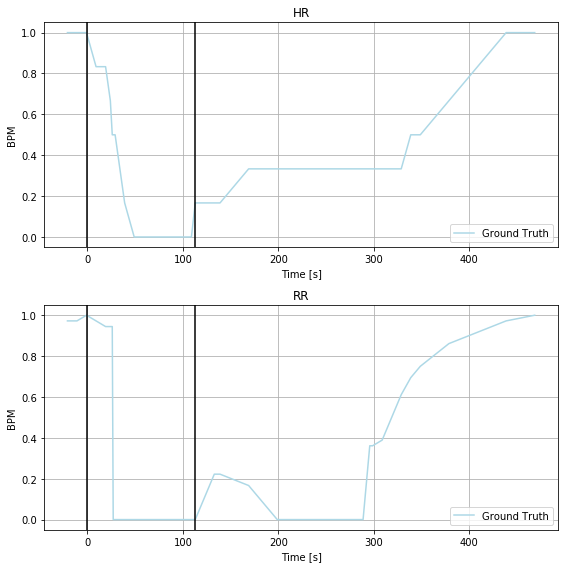

In [17]:
#PLOT DATA
fig = plt.figure(figsize = (8, 8))
FONT = 10

ax = fig.add_subplot(211)
ax.plot(E0512ts, E0512hr, c = GTcolor, label = "Ground Truth")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(E0512naloxone) - timestr(E0512fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("HR")
plt.legend()
plt.grid()

ax = fig.add_subplot(212)
ax.plot(E0512ts, E0512rr, c = GTcolor, label = "Ground Truth")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(E0512naloxone) - timestr(E0512fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("RR")
plt.legend()
plt.grid()

plt.tight_layout()

### -------------------------------------------------
# TERMINAL May 26, 2022
### -------------------------------------------------

## PIG 1

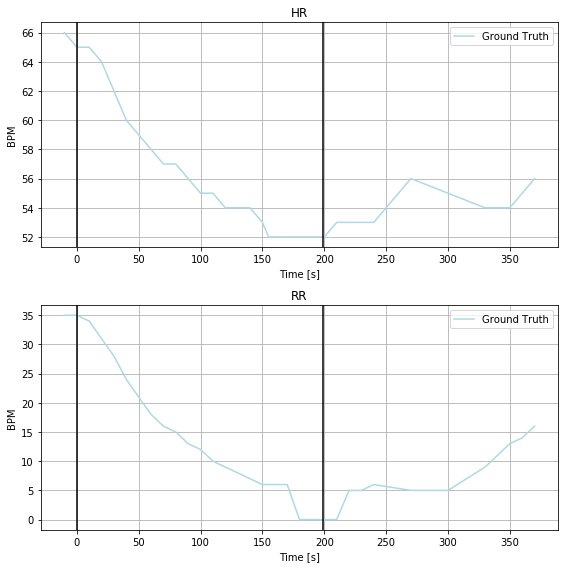

In [18]:
#PLOT DATA
fig = plt.figure(figsize = (8, 8))
FONT = 10

ax = fig.add_subplot(211)
ax.plot(F0526ts, F0526hr, c = GTcolor, label = "Ground Truth")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(F0526naloxone) - timestr(F0526fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("HR")
plt.legend()
plt.grid()

ax = fig.add_subplot(212)
ax.plot(F0526ts, F0526rr, c = GTcolor, label = "Ground Truth")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(F0526naloxone) - timestr(F0526fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("RR")
plt.legend()
plt.grid()

plt.tight_layout()

## PIG 2

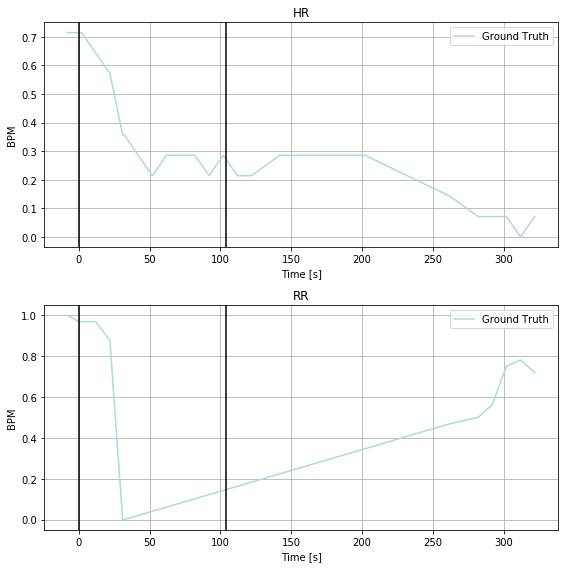

In [19]:
#PLOT DATA
fig = plt.figure(figsize = (8, 8))
FONT = 10

ax = fig.add_subplot(211)
ax.plot(I0526ts, I0526hr, c = GTcolor, label = "Ground Truth")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(I0526naloxone) - timestr(I0526fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("HR")
plt.legend()
plt.grid()

ax = fig.add_subplot(212)
ax.plot(I0526ts_n, I0526rr_n, c = GTcolor, label = "Ground Truth")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(I0526naloxone) - timestr(I0526fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("RR")
plt.legend()
plt.grid()

plt.tight_layout()

### -------------------------------------------------
# TERMINAL June 16, 2022
### -------------------------------------------------

## PIG 1

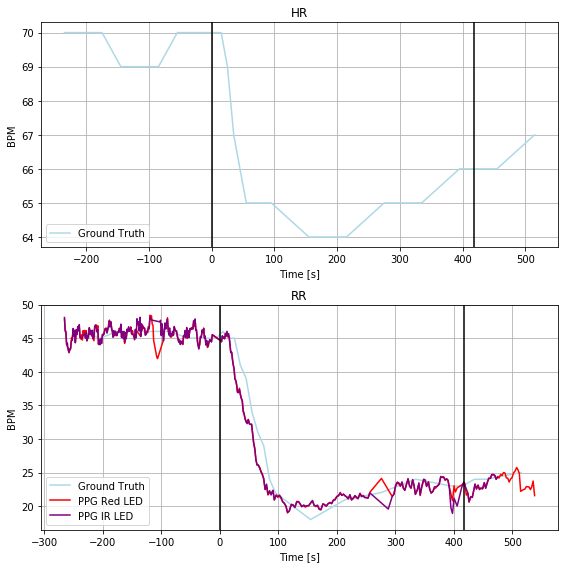

In [20]:
#PLOT DATA
fig = plt.figure(figsize = (8, 8))
FONT = 10

Red_RRx = [-265.4691973486898, -264.270544915469, -262.9837562739231, -261.8144825768107, -260.4513092213831, -259.1762720742806, -257.7308382577496, -256.3617891551003, -254.99274005245107, -253.5649334775851, -252.27226908881758, -250.69169308618817, -249.41665593908564, -248.04173108921472, -246.8430786559939, -245.49753254223134, -244.18136516457713, -242.77118583137616, -241.49027293705197, -240.07421785662936, -238.91081990673857, -237.57702528741933, -236.27260940420845, -234.9799450154409, -233.61089591279165, -232.28885278791577, -230.8845492019365, -229.662393779829, -228.25221444662805, -227.07118925507226, -225.6610099218713, -224.35071829143874, -222.96404194712449, -221.71838353613032, -220.34933443348106, -218.9744095836101, -217.75225416150263, -216.48896850884344, -215.1375466478592, -213.7978762813183, -212.44057867311238, -211.11265980101484, -209.80824391780394, -208.40981607904632, -207.32867859025893, -205.98313247649637, -204.67284084606382, -203.26853726008454, -201.95236988243033, -200.50693606589934, -199.27302914934853, -197.86284981614756, -196.48792496627664, -195.17763333584406, -193.8967204415199, -192.6686892721907, -191.26438568621143, -190.00697578077393, -188.6790569086764, -187.42752275046053, -186.11135537280632, -184.7893122479304, -183.62003855081795, -182.37438013982378, -181.03470977328288, -179.74792113173703, -178.3142388096494, -177.05682890421187, -175.72303428489263, -174.49500311556346, -173.1083267712492, -171.7862836463733, -170.43486178538907, -169.1128186605132, -167.93179346895738, -166.55686861908646, -165.3053344608706, -163.87752788600466, -162.6847512000055, -161.25694462513957, -159.98190747803702, -158.61285837538776, -157.31431823939857, -155.88651166453258, -154.65260474798177, -153.29530713977584, -152.04964872878168, -150.76873583445746, -149.41731397347323, -148.1422768263707, -146.83198519593816, -145.61570552105235, -144.1643959572997, -135.1392482248136, -133.740820386056, -132.46578323895346, -131.07323114741754, -129.84519997808837, -128.4937781171041, -127.33625591443501, -125.93195232845574, -124.63341219246652, -123.36425079258566, -122.00695318437977, -120.73191603727722, -119.36874268184965, -118.10545702919046, -116.80691689320125, -115.57888572387208, -114.25096685177454, -113.14632637410045, -107.81114789682351, -106.42447155250926, -96.18304414513736, -94.87275251470479, -93.51545490649889, -92.25804500106136, -90.87136865674711, -89.4729408179895, -88.35067309865039, -87.08151169876953, -85.78297156278035, -84.49618292123446, -83.20939427968861, -81.86972391314771, -80.52417779938511, -79.27851938839095, -77.86246430796834, -76.55217267753576, -75.23012955265989, -73.97271964722236, -72.66242801678982, -71.42264535301732, -70.05947199758972, -68.7080501366055, -67.43301298950297, -66.05808813963205, -64.71254202586945, -63.31411418711184, -61.9861953150143, -60.62302195958671, -59.29510308748914, -57.97305996261326, -56.49237166275225, -55.32897371286148, -53.97755185187722, -52.7025147047747, -51.257080888243735, -49.98204374114121, -48.64237337460028, -47.37321197471945, -46.06292034428688, -44.729125724967645, -43.5187217973035, -42.16729993631927, -40.9216415253251, -39.587846906005865, -38.38919447278505, -37.08477858957417, -35.850871673023335, -34.4171893509357, -33.00113427051309, -31.690842640080547, -30.25128457077122, -28.940992940338674, -27.589571079354442, -26.355664162803606, -25.027745290706036, -23.735080901938517, -22.389534788175922, -21.132124882738424, -19.716069802315786, -18.34702069966653, -16.93096561924392, -15.632425483254709, -14.245749138940456, -12.859072794626174, -1.1310813401715918, 0.23796776247763632, 1.6070168651269214, 2.9231842427811316, 4.251103114878672, 5.573146239754577, 6.948071089625499, 8.31124444505309, 9.668542053258987, 10.908324717031517, 12.24799508357239, 13.617044186221674, 14.986093288870903, 16.25525468875179, 17.536167583076008, 18.793577488513506, 20.280141535596158, 21.619811902137087, 22.94773077423463, 24.387288843543956, 25.815095418409896, 27.28403222382758, 28.782347765353563, 30.257160317992884, 31.820109078957273, 33.51820002602011, 35.05764579809778, 36.72048226183057, 38.40094596722838, 39.92864024486272, 41.520967741935465, 43.23668593066333, 45.06991906382456, 46.844394724769074, 48.7775155606987, 50.46385501331821, 52.35584561869615, 54.31246944351244, 56.0575663683486, 57.92017823761819, 59.75928711800111, 61.69240795393074, 63.64903177874709, 65.89356721742524, 68.24386610609349, 70.37088660033828, 72.93858813620835, 75.17137208044318, 77.45703774967302, 79.94835457166141, 82.32803219643802, 85.13663936839657, 87.82185584870001, 90.91837463452043, 93.18641306208531, 96.38281955067413, 98.97989982265256, 101.70624653350774, 104.53248094713132, 107.58199375517836, 110.29658897159021, 113.05819016577539, 115.70815216274883, 118.74591347635254, 122.25373456768989, 125.12697495908685, 128.21174225046394, 131.59029690292454, 134.41065556932642, 137.16638101628996, 140.1160061215686, 143.41817606014752, 146.1445227710027, 149.00013592073464, 152.00851849823, 155.2460552173705, 158.4189587170726, 161.29807485569125, 164.0420488082114, 166.99754966071174, 169.94717476599038, 172.89679987126908, 176.287106018173, 179.14271916790494, 181.99833231763688, 185.34163248676742, 188.37939380037113, 191.10574051122632, 194.04948986928332, 197.06374819400037, 200.08388226593905, 202.9865013934443, 205.84211454317625, 208.43919481515468, 211.35356543710333, 214.10341513684517, 216.94140104491208, 219.49147533911713, 222.34121274162737, 225.16157140802926, 228.05831478831288, 230.9961883991482, 233.71078361556005, 236.25498216254346, 239.6394125622257, 242.39513800918922, 245.08035448949272, 247.9947251114413, 250.55655090008975, 253.35340657760491, 256.4146708800954, 276.22769051156877, 294.55414609595937, 297.6330376401148, 300.47102354818173, 303.3501396868003, 305.9648472004437, 308.59130620853057, 311.4175406221541, 313.6444488191672, 316.2239018494806, 318.9149940770059, 321.77648297395945, 324.3089300264994, 326.86488006792615, 329.64998425099805, 331.9297741730063, 334.3212032922262, 337.5411127697017, 340.30271396388696, 342.48261618312677, 345.1795841578735, 348.3583634047974, 351.1258403462042, 353.4467604987641, 356.5667822734712, 358.6820512732726, 361.190995336926, 364.07011147554465, 366.72594921973973, 369.3994142055999, 372.00824597202165, 374.8873621106402, 377.6137088214954, 380.02864092960203, 382.6492241904672, 385.0876592874604, 387.83163323998065, 390.0409141953288, 392.4147160728837, 397.76164604460394, 400.39398079991247, 402.6678949746989, 405.69978054108094, 418.59704569264807, 421.3468953923899, 423.97923014769833, 426.0298659280613, 428.85022459446327, 431.56481981087506, 436.2477903465466, 438.73910716853493, 441.39494491273, 443.74524380139826, 446.53034798447015, 449.18618572866535, 452.0594261200622, 454.4508552392822, 457.1595747084724, 459.8212881998892, 462.5300076690793, 464.8861823049692, 467.7006652241495, 470.009833882266, 472.3307540348259, 475.05122499845936, 477.18999698714754, 480.01623140077106, 482.34302730055265, 484.9518590669744, 487.44317588896274, 489.68183558041926, 492.184903896851, 494.59396025773594, 496.97363788251255, 499.50020918783093, 502.08553796536603, 504.617985017906, 507.3325802343178, 509.5183582007793, 511.94504180332933, 514.1837014947859, 516.5868821084491, 519.0076899637774, 521.3286101163372, 524.0608325744141, 528.5264004628838, 530.8708236043303, 533.2269982402203, 535.5185396566718, 538.0274837203252]
Red_RRy = [47.81404372924339, 46.104807230803424, 45.544474306157575, 44.04690109836397, 43.64841188612961, 43.52007337928044, 42.81023644790495, 43.45651905750305, 43.41906090411556, 45.02580350317817, 44.660963468423546, 46.18617597430993, 45.284241467842165, 45.924810256046705, 44.38781454286743, 45.784115910446864, 45.663621882815896, 46.35358588247574, 46.26841935040764, 46.55938060825575, 45.321627008865974, 44.86990044502771, 45.4890989062609, 44.71550290664229, 46.11095888955562, 45.54365515650197, 46.15676086646482, 44.99182816821255, 46.11573179029996, 44.720275807386635, 44.9384695508688, 45.59892146499645, 46.444174957681824, 45.690252031064176, 45.88247150239476, 45.99581890160628, 45.2137970776215, 44.91427782195522, 44.615806000399765, 46.757799500487906, 46.8350143226582, 46.956584232515326, 46.30222506965801, 46.838541624015456, 44.04112660948793, 44.84802150116748, 44.199310954402094, 44.38189986108174, 44.422784979575354, 45.489097657501205, 45.53562974770383, 45.57123458450636, 46.3869121302341, 46.26534222037698, 46.485255800834516, 45.83089828236014, 46.36259717861125, 47.08195099406461, 47.67871397924377, 47.04790923529976, 47.25606862854351, 46.549263977525854, 45.829910162072494, 45.19333794062588, 46.007649519171785, 45.33589446029702, 46.04269911131468, 45.378808517574534, 45.45878084998738, 45.84770578302424, 45.921669763865644, 46.43304214295626, 45.9580052006247, 46.94170428454038, 45.185540157895595, 45.8692809208812, 45.046256705606616, 45.88290373943804, 44.22684467560693, 45.54755177901224, 44.97715841523815, 45.84541014045589, 45.97258188517297, 46.44761882750453, 46.13390247742878, 46.45107188150046, 46.683764142802204, 45.583840105161514, 46.11579391615952, 45.54540055238543, 45.26667070108982, 44.988750929844926, 46.30858854794316, 45.26110290030251, 47.047009802122204, 46.18068013245695, 46.804555020745525, 46.48787829575544, 46.44943874297937, 45.493957473713124, 45.751785602283164, 46.009678070639666, 45.79576263585322, 46.72640443990568, 46.35161057034615, 48.41188458253658, 48.07111187397583, 48.329004342332325, 47.1024262323887, 46.90682673817413, 44.6973495232519, 42.206097327007356, 41.9568113175048, 44.777641594247484, 46.31201085792414, 46.925975936986525, 46.62369543474625, 47.29545049362101, 48.0399264412222, 46.30471799898041, 45.76796774208832, 46.160280577206095, 45.308986394712136, 45.141712119961994, 45.26114448481539, 45.88625980916133, 45.41106673383929, 46.61593592362501, 46.26065834223221, 46.063335304648334, 45.931398521906196, 45.50088171862299, 44.74007785467969, 44.51815376322145, 44.67531370465993, 44.066812163564734, 44.37575905699081, 44.53430682518048, 44.057580999084976, 45.33549769462014, 45.41204542471733, 45.786839294276845, 45.01198541498407, 46.31913687363302, 44.96195090938985, 45.537476435676155, 45.28425247597376, 45.97913402285369, 46.4816893409362, 46.40379866820573, 46.582196068537066, 46.420816922412484, 47.435171873972514, 46.720646049082056, 47.56631621015582, 46.30291167010439, 45.78027090848515, 44.92729510304971, 44.06366669531222, 43.496726385534075, 44.00620799896785, 45.25716821648982, 45.1355983066327, 46.08285871432896, 45.84290413242756, 46.506794726167705, 45.25583450864574, 44.98434576860714, 44.175440408010104, 44.49827523011576, 43.608633703546595, 43.788172827165795, 44.4780271520522, 44.73153025651281, 44.607764897814945, 44.46353513517418, 45.48886520134071, 44.76135357099642, 44.72389541760892, 44.76167648611183, 44.48539220053375, 45.127811392432776, 45.00837902757938, 45.04583718096687, 45.00805611246396, 45.62202119152636, 45.31122389440579, 45.89722381541546, 45.204322005717884, 45.39654147704846, 44.97817589220064, 43.945748952436276, 42.80682141636457, 42.9036890893603, 41.95525560375978, 41.055186218031395, 40.39708951373716, 39.059349069268734, 38.68518843922419, 37.8927791509015, 36.89703805424255, 37.07421793616792, 37.54359678295958, 36.74273927002178, 36.071966984405215, 35.693641890348225, 34.04624596691445, 33.626112829561634, 32.974483424624665, 32.5616844504692, 32.67553227969931, 32.91051949138099, 32.31941364357989, 32.184466277451094, 32.184466277451094, 30.65437529507572, 29.31754283895246, 28.43433825569418, 26.90019977759845, 26.141642865691722, 26.045436630931146, 25.756432842394382, 25.157438108906188, 24.756578161381135, 23.851035176223526, 22.476243126443517, 22.95042896255738, 21.66194499369371, 22.009937968777262, 21.94251901612054, 22.31313170313677, 20.957270853824696, 21.623603542571814, 21.34833534053173, 21.47520768697885, 21.179552826240815, 20.665425063982305, 20.421345695128057, 19.966123246720265, 18.989571096194297, 19.29407164923566, 20.227714848141066, 20.11955927123841, 19.86345062103422, 20.71313042511307, 20.660602301682175, 20.294886442320898, 19.93309448669273, 20.081145282981936, 19.847596596256828, 20.018566077231036, 20.089937229034817, 20.451729184662987, 20.738017921130965, 20.109575487740795, 19.938606006766584, 20.080630356400807, 19.601584639750573, 19.48354846111927, 20.34553958123455, 20.219723716729412, 19.9985526707046, 20.382618302759685, 20.56653810282406, 20.367293496706882, 20.91143287812772, 21.047881144425286, 21.43842247517159, 21.532576035615023, 22.036071412279803, 21.626412328094965, 21.763663231253105, 21.54237140216368, 21.398607474781144, 21.113410792894097, 21.61910950877059, 20.90997984245353, 21.121967034294247, 21.506293589553348, 21.203272115048364, 21.170818355715255, 21.915702458989472, 21.481081245775414, 21.60159127094158, 21.308583724873635, 21.276573524893603, 21.223164407447218, 22.05273501383196, 24.127212584844038, 21.452115745872057, 21.80054148850709, 22.96082772533652, 23.44503099523866, 23.31476351716148, 22.939495416523755, 23.43206296937747, 22.738353373140455, 22.394840256617677, 23.199327160286238, 24.023626133185807, 23.01193911961105, 22.662316862996914, 23.858514983120948, 23.044313142676057, 21.80142722831654, 22.410693871746695, 23.235751819091075, 21.577044755477694, 22.800641042456146, 23.808495575198513, 23.640361880753915, 22.988347060418928, 23.6307770654415, 22.5574997326373, 21.942556910591865, 22.176105597316976, 22.626841074131125, 22.717417336640057, 23.038846348529784, 23.244119910111927, 24.27425691620714, 24.36035490272247, 24.3501107567017, 23.83992269522901, 24.02539405182157, 23.871006593543733, 22.77375783516229, 20.79825674743064, 23.024594071914425, 22.111224913151847, 22.711982603885566, 23.449735813569923, 21.648337027983114, 21.906376124890937, 20.57288077651066, 21.42383637609113, 21.311923754084823, 23.267795986384673, 22.62753537783356, 23.127107059003198, 22.45151107321914, 22.65124916348868, 22.56303845883096, 23.479570353181963, 22.725310979858627, 23.49184878544518, 24.153837884624217, 24.13470122107476, 24.65239638729894, 24.634668068695184, 24.59529931553393, 24.02469617657474, 24.43042503737149, 24.180079009979124, 24.72826275835458, 24.55215960396986, 24.995099455603334, 24.927889272222693, 24.209115036356586, 24.15349884083484, 23.5928439003447, 24.040180177304563, 24.235680985136554, 24.95445522100266, 25.20933785397567, 25.745812194903966, 25.426139205269816, 24.873147672932905, 22.20002564855663, 22.32517307941943, 22.461151263987894, 22.527437970868547, 22.918297685717025, 22.85612531069694, 22.465126497188784, 22.876959469809755, 23.73670795159025, 21.568791728758278]

IR_RRx = [-265.5573335570149, -264.38218411268076, -263.0483894933615, -261.89086729069237, -260.55707267137313, -259.293787018714, -257.84247745496134, -256.4969313411988, -255.0632490191111, -253.75883313590023, -252.34277805547762, -250.83271101950828, -249.5282951362974, -248.14161879198312, -246.97822084209233, -245.57979300333471, -244.34001033956224, -242.85932203970123, -241.59603638704203, -240.17410555939776, -239.03421059839366, -237.69454023185276, -236.4018758430852, -235.05045398210098, -233.76954108777676, -232.37111324901915, -231.03144288247825, -229.73877849371073, -228.38735663272647, -227.15344971617563, -225.77264911908304, -224.45648174142883, -223.06392964989288, -221.82414698612038, -220.40809190569775, -219.14480625303858, -217.781632897611, -216.5947319588335, -215.21393136174092, -213.89188823686504, -212.50521189255076, -211.2595534815566, -209.90225587335067, -208.56258550680977, -207.42856629302736, -206.08889592648643, -204.79035579049724, -203.32141898507956, -202.04050609075537, -200.6126995158894, -199.36116535767357, -197.94511027725093, -196.62306715237506, -195.23639080806078, -194.00835963873163, -192.73919823885078, -191.38190063064485, -190.10686348354233, -188.7730688642231, -187.5332862004506, -186.17598859224466, -184.91857868680717, -183.65529303414797, -182.4566406009272, -181.0934672454996, -179.84193308728373, -178.40237501797444, -177.1273378708719, -175.79354325155268, -174.5655120822235, -173.21996596846094, -171.8685441074767, -170.54062523537914, -169.17157613272988, -168.00817818283912, -166.65675632185486, -165.387594921974, -163.97153984155136, -162.76701166110888, -161.3274535917996, -160.09942242247044, -158.6657401003828, -157.40833019494528, -155.98052362007934, -154.7466167035285, -153.38931909532258, -152.1671636732151, -150.86274779000422, -149.54658041234998, -148.2186615402524, -146.93187289870656, -145.70971747659905, -144.28778664895478, -142.9657435240789, -141.60844591587295, -140.29815428544043, -138.9996141494512, -137.79508596900874, -136.26739169137437, -135.239135927582, -133.78782636382937, -132.54804370005687, -131.15549160852092, -129.9392119336351, -128.57603857820752, -127.39501338665173, -126.06709451455416, -124.70392115912657, -123.46413849535406, -122.10096513992647, -120.78479776227226, -119.46863038461805, -118.1759659958505, -116.94793482652133, -102.6698690778617, -101.31257146965581, -100.20205524476006, -98.72724269212074, -97.56384474222995, -96.27705610068406, -94.95501297580819, -93.55070938982891, -92.3344297149431, -90.95950486507215, -89.52582254298451, -88.38592758198041, -87.15789641265127, -85.81822604611037, -84.56081614067284, -83.23289726857527, -81.92260563814273, -80.55355653549347, -79.35490410227266, -77.89771879129836, -76.63443313863917, -75.2888870248766, -74.00797413055238, -72.73881273067155, -71.47552707801236, -70.14173245869313, -68.77268335604387, -67.49177046171968, -66.09921837018373, -64.79480248697286, -63.37287165932855, -62.05670428167434, -60.675903684581755, -59.35386055970585, -58.01419019316495, -56.56288062941229, -55.399482679521526, -54.00105484076391, -52.8024024075431, -51.292335371573756, -50.05842845502292, -48.712882341260354, -47.44959668860116, -46.115802069281926, -44.82313768051438, -43.583355016741876, -42.22605740853598, -40.99802623920681, -39.62897713655755, -38.48908217555345, -37.17291479789924, -35.93313213412674, -34.44656808704406, -33.08927047883813, -31.720221376188874, -30.32179353743129, -29.00562615977705, -27.648328551571154, -26.43792462390698, -25.04537253237106, -23.811465615820225, -22.436540765949303, -21.16150361884678, -19.7572000328675, -18.411653919104907, -16.977971597017273, -15.702934449914752, -14.298630863935474, -12.923706014064551, 0.19683753192594935, 1.5365078984668785, 2.8703025177861137, 4.215848631548679, 5.514388767537865, 6.906940859073812, 8.258362720058072, 9.621536075485663, 10.843691497593111, 12.195113358577371, 13.558286714004963, 14.956714552762604, 16.202372963756773, 17.477410110859296, 18.7289442690751, 20.21550831615781, 21.55517868269868, 22.888973302017916, 24.340282865770575, 25.73871070452816, 27.219399004389174, 28.7588447764669, 30.204278592997866, 31.76135160674056, 33.48294554269006, 34.99301257865943, 36.65584904239222, 38.324561253346644, 39.91101300319775, 41.520967741935465, 43.189679952889946, 44.999410097164514, 46.75038276922237, 48.724633835703685, 50.422724782766466, 52.302963893701076, 54.26546346573906, 56.07519361001363, 57.873172259844864, 59.74165987633609, 61.64540197615736, 63.59615005375201, 65.84656123965186, 68.1439784033251, 70.27099889756988, 72.86220342232662, 75.13024184989149, 77.37477728856965, 79.92485158277469, 82.24577173533459, 85.1836453461699, 87.67496216815829, 90.9124988872988, 93.09827685376024, 96.3651923090091, 98.96814832820922, 101.83551297238449, 104.56185968323967, 107.52911203018334, 110.24370724659514, 113.011184188002, 115.70815216274883, 118.65777726802747, 122.23610732602492, 125.08584472853516, 128.11773029491718, 131.53153943070782, 134.38715258043976, 137.12525078573827, 140.0161184188002, 143.40642456570419, 146.18565300155439, 148.9825086790696, 151.92038228990492, 155.16379475626712, 158.34257400319092, 161.2275658890312, 163.9891670832164, 166.92116494683, 169.83553556877865, 172.73815469628397, 176.2283485459563, 179.04870721235818, 181.90432036209012, 185.34163248676742, 188.29125759204612, 191.07048602789632, 193.97898090262328, 196.9697362384536, 200.06625502427403, 202.95712265733596, 205.79510856540287, 208.42156757348965, 211.34181394266, 214.07403640073682, 216.87676782547368, 219.49147533911713, 222.32946124718404, 225.12044117747757, 228.0230603049829, 230.94918242137487, 233.72253511000338, 236.19622469032674, 239.58065509000903, 242.32462904252918, 245.00396977561098, 247.93009189200302, 250.54479940564636, 253.31815209427498, 256.37354064954366, 287.9086759882499, 291.1755914434988, 294.43075540430436, 297.6271618928931, 300.4181418231867, 303.30313370902695, 305.9237169698921, 308.54430023075713, 311.4234163693758, 313.56218835806385, 316.14751713559895, 318.8327336159024, 321.71184975452104, 324.2501725542827, 326.8178740901528, 329.6088540204464, 331.8768924480112, 334.2271913366794, 337.52348552803676, 340.2733352277786, 342.42973445813163, 345.1149509384352, 348.3583634047974, 351.14346758786917, 353.35274854321733, 356.52565204291955, 358.6174180538343, 361.14398935915267, 363.99960250888455, 366.6965704836314, 369.4052899528215, 371.93186125813986, 374.8344803856452, 377.57845433816533, 379.8993744907252, 382.5845909710288, 385.0700320457954, 387.7846272622072, 389.95277798700374, 392.33833135900204, 395.0117963448621, 397.7028885723872, 400.33522332769576, 405.682153299416, 413.56153032367627, 416.8578245150335, 423.9145969282599, 426.00048719195297, 428.7620883861382, 431.4943108442151, 436.21253586321654, 438.65684670743155, 441.31856019884833, 443.7217408125116, 446.4892177539185, 449.1450554981136, 452.01829588951057, 454.3803462726221, 457.0890657418123, 459.7507792332291, 462.47712594408426, 464.8450520744175, 467.6712864880411, 469.9452006628277, 472.27787230983085, 475.00421902068604]
IR_RRy = [48.07125301052609, 46.12818030541118, 46.049604869634365, 44.052688175936325, 44.25532077495538, 43.230528158650806, 42.90880074659435, 43.19000878139022, 43.47373946199498, 44.58883279477856, 44.69565102967133, 46.428099776489034, 45.33291882464802, 46.17817231733339, 44.30278807583373, 46.249008974120514, 45.52732051351349, 46.70613346531327, 46.086630905456914, 47.01572034619986, 45.06949944791309, 45.06949944791308, 45.06949944791308, 45.069499447913074, 45.4263877727699, 45.53593328174503, 45.695887341816544, 45.03000724087901, 45.82958637421652, 44.57862615669454, 45.38705502913122, 45.072662566232026, 46.565754231118184, 45.577248785200354, 46.17986187923245, 45.334608386547075, 46.16507904326191, 44.895812622388384, 45.16262960769917, 46.66760116896065, 46.97124277452014, 46.57892993940236, 45.90700655687649, 46.31789772036295, 44.14056617918604, 44.77137092313004, 44.00447077518197, 44.9121567480678, 44.19762397902185, 45.564863172629785, 45.4316932822416, 45.798543785913736, 46.13317455932787, 46.476276197327905, 46.383653079389035, 45.769688000326646, 46.47201814684287, 46.559566895701224, 47.573921847261246, 46.69779498382655, 47.44492995327712, 46.23739425598955, 46.149845507131204, 45.135490555571174, 46.10424053694475, 45.43432038966448, 45.97796549321189, 45.60317162365237, 45.37149211988124, 45.914366505578506, 45.8755912361843, 46.45111676247061, 45.88866676458391, 47.08586589138821, 45.10714415086714, 45.99934640214352, 44.91433926242344, 45.9835199126118, 44.42561264207604, 45.81492790669721, 44.88428610264475, 46.332949481501785, 45.98904219195172, 46.701923867085256, 46.01341364744999, 46.49785732627182, 46.49785732627182, 45.73756641755575, 45.69704472233763, 45.50144522812306, 45.33417095337292, 44.75659927944953, 46.27977721217974, 45.05789224867957, 47.887043332999056, 46.997171280279694, 47.435140322117334, 46.09000519712444, 48.10118231096011, 45.23392304931952, 47.126192435056495, 46.48377324315747, 46.669490309848975, 46.4824542552671, 46.4824542552671, 45.43917180375587, 45.51985659511938, 46.00001962936541, 46.09264274730428, 46.53080056890134, 46.490278873683216, 48.06553325585349, 48.02352804320452, 47.70685131821445, 47.42366392254924, 47.6594265129092, 45.3988019540184, 47.12832658622768, 45.541462997266436, 44.58597725778691, 46.03640329693437, 47.262981406877984, 46.354256891689076, 47.16993443741683, 47.83657599228909, 46.46755676685336, 45.46102571697688, 46.51484070097746, 45.206467605451266, 45.66881022386914, 45.42885564196774, 46.031966276784786, 45.475786146340035, 46.739771207982436, 46.23761935329711, 46.0845152853028, 46.0845152853028, 45.24672496222779, 44.947205706561505, 44.38954739686447, 44.74172092826657, 44.064012779469316, 44.523600613841886, 44.281507982382294, 44.11067338548455, 45.307905289656205, 45.19835978068107, 46.13274239982826, 45.121982113617584, 46.578794476115085, 45.18249310853565, 46.10046748994745, 45.08611253838742, 46.422597456016454, 46.37650642828021, 46.29929160610992, 46.57199129752994, 46.34031179375881, 47.58444556634131, 47.0227111658058, 47.860729851919395, 46.16129699234533, 46.23718623816935, 44.47510836283791, 43.938791808480474, 43.37705740794496, 44.14584846346656, 45.21879714532315, 45.07086114713455, 46.21500312976376, 45.82537144497416, 46.39576480874825, 45.02687982100049, 45.3279198871834, 43.972768112675865, 44.656508875661466, 43.790179205996225, 43.972768112675865, 44.509518369567964, 44.79324905017273, 44.58127854336479, 44.440617459700476, 45.53158617711133, 44.731045398379145, 44.65315472564866, 44.459256290380445, 45.3596627864095, 44.99805269490963, 45.183769761601134, 44.88529794004569, 45.715768596760526, 45.308540642335274, 46.01723605900976, 45.28655318080928, 45.66291567509519, 45.02634345364858, 43.88324744122683, 42.8760802029969, 42.908113163643634, 41.74569892556666, 41.05081737868672, 40.48919058314969, 38.878410488151246, 38.720738522321994, 38.142309986475745, 37.03147821787191, 36.888760297606844, 37.37210121264221, 36.61660821580965, 36.03084647960172, 35.69300608653641, 34.20721059520543, 33.82034420992398, 33.011337125815785, 32.495165286891485, 32.27265445286888, 32.86856173548825, 32.22410884294184, 32.1453166577955, 32.18215190487351, 30.883687899545738, 29.432783211429, 28.65217138235487, 26.979847452718275, 26.119276835750703, 26.133235890328045, 25.61572426424401, 25.14439281808153, 24.597928813997203, 24.123742977883342, 22.48394674262409, 23.268237617813462, 21.77106411959885, 22.29662044475735, 21.66491817473164, 22.35989098745616, 20.914000284879318, 21.66135921565166, 21.38729550081503, 21.651709005452698, 21.31852814835635, 20.62790232886559, 20.418268066818722, 20.04012159981511, 19.10581556312995, 19.23975181410912, 20.268836156188293, 20.20892477376875, 19.7904951129376, 20.59310522021512, 20.681387780603178, 20.383370712252248, 19.93217474216716, 20.167705464860397, 20.00941745660234, 20.064190211089908, 20.07237575593557, 20.490095895982087, 20.84925905774085, 20.128006394597904, 20.037479203153175, 20.14695665479271, 19.520529455763253, 19.45464583433018, 20.33418650573118, 20.20525383912808, 20.01536828487888, 20.399588007746914, 20.482277309037407, 20.392883000255825, 20.835926794220846, 20.932804805976716, 21.449514088454418, 21.580048771623687, 21.941121424666417, 21.60058310477094, 21.79090590751519, 21.533074251380064, 21.352527484779674, 21.08999690559088, 21.71269939949317, 20.958782596356095, 21.1978047068764, 21.57552754752721, 21.349625509656143, 21.08799566879658, 21.869240216434015, 21.423508243667438, 21.48322442609414, 21.264920731117247, 21.25463054399076, 21.18251566267038, 21.971641303070108, 19.5728780104837, 20.478821643291887, 21.371504663686803, 21.785234577048254, 23.09636570329601, 23.57848459511535, 23.468264757075666, 23.057077279654152, 23.616662594571014, 22.67940669742955, 22.33739583444027, 23.15939804625483, 24.097185849874126, 23.010106504004842, 22.70054100981961, 23.96580813393409, 23.143805922119533, 21.73787927933441, 22.406063463666193, 23.473820080706606, 21.691012708894057, 22.9588785986631, 24.008591269530818, 23.90220519675939, 22.92001475363356, 23.568127478308003, 22.580867780859016, 21.96554540021896, 22.136514881193172, 22.857436974326625, 22.89621279587322, 22.97481004736012, 23.261161371683954, 24.422612582615322, 24.28252885231087, 24.302172427841622, 23.933211531123654, 24.07135367391269, 23.841341390634682, 22.701144725186957, 19.735550758165616, 18.916846540742377, 21.18856866814604, 20.010950322394976, 22.833292469987292, 23.584869608136678, 21.942961897340375, 20.698396670083422, 21.346473972162084, 21.29052455940972, 23.26554356195159, 22.53265353399767, 23.104611434279096, 22.54136655455212, 22.713661103756415, 22.596807267988574, 23.488063722663423, 22.65366409046859, 23.500770507175847, 24.13671243690052, 24.13671243690052, 24.710681364684667, 24.719527056988, 24.560812950870524, 23.995630254918467, 24.332635632782562]

ax = fig.add_subplot(211)
ax.plot(O0616ts, O0616hr, c = GTcolor, label = "Ground Truth")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(O0616naloxone) - timestr(O0616fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("HR")
plt.legend()
plt.grid()

ax = fig.add_subplot(212)
ax.plot(O0616ts, O0616rr, c = GTcolor, label = "Ground Truth")
plt.plot(Red_RRx, Red_RRy, c = REDcolor, label = "PPG Red LED")
plt.plot(IR_RRx, IR_RRy, c = IRcolor, label = "PPG IR LED")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(O0616naloxone) - timestr(O0616fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("RR")
plt.legend()
plt.grid()

plt.tight_layout()

### PIG 2
--> Done

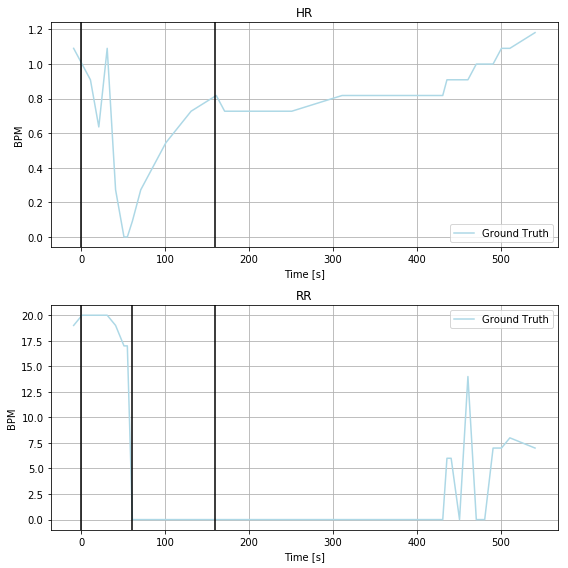

In [23]:
IR_HRx = [-68.55364943845132, -67.0272458807448, -66.10321614083051, -65.36633166469633, -64.73471639943845, -49.17241805822375, -48.10802937047438, -47.400386341805834, -45.88567936308557, -44.07855790970889, -42.979079485000746, -42.25973987734596, -41.481917374759874, -40.65146026673564, -39.89118263262895, -38.370627364415554, -37.47583907196691, -36.6921682798877, -36.1365807780405, -35.019557484852974, -34.14231406088371, -33.36449155829763, -32.54573102925965, -31.738667079207925, -30.90820997118369, -30.118690889611354, -29.28238549209399, -28.428535226097242, -27.574684960100495, -26.890435089404466, -26.059977981380232, -25.323093505246053, -23.597848104773167, -22.574397443475693, -21.831664677848384, -21.112325070193588, -20.62691704226393, -19.33444506428255, -18.53322940372396, -16.936646372099904, -16.135430711541307, -15.193856103147635, -13.608969650509831, -12.445160041377274, -11.573764906901143, -10.292989507906018, -9.637981084675634, -8.848462003103297, -7.965370289640905, -7.082278576178513, -6.234276599674896, -5.473998965568203, -4.631845278557709, -3.8247813285059813, -2.9299930360573434, -2.0001150066499243, -1.2222925040638482, -0.520497764888436, 1.2807753989951143, 2.163867112457506, 2.9709310625092336, 3.7429052756021797, 4.6903281734889894, 5.5207852815132235, 6.403876994975615, 7.398086208807452, 8.210998448352296, 9.018062398404023, 9.895305822373285, 10.819335562287574, 11.78430332865376, 12.64400188414363, 13.556335045071673, 14.562240837889757, 15.497967156790306, 17.27584716270135, 18.18818032362938, 19.153148089995565, 19.960212040047292, 20.75557941111276, 21.73809204595832, 22.656273496379495, 23.62708955223881, 24.375670607359236, 25.311396926259786, 26.247123245160335, 27.09512522166396, 28.1536656199202, 29.153723123245154, 29.744400362051135, 30.656733522979163, 31.504735499482788, 32.3117994495345, 33.282615505393814, 34.183252087335596, 35.288578801536865, 35.844166303384064, 36.738954595832716, 37.94370223141717, 38.66889012856509, 39.59876815797251, 40.51110131890055, 41.464372506280476, 42.85626540564504, 43.45279093394414, 44.31248948943402, 45.36518159819713, 46.48805318087779, 48.32441608172011, 49.34786674301758, 50.37131740431506, 51.31289201270874, 52.24861833160927, 53.22528267696172, 54.24288504876606, 55.21370110462539, 56.31902781882666, 57.18457466380966, 58.091059535244575, 58.997544406679474, 60.149657436825784, 61.120473492685086, 79.92272421309296, 80.74148474213094, 81.78832856140092, 82.77084119624651, 84.49023830722625, 85.44935778409932, 86.32660120806857, 87.256479237476, 88.11032950347276, 89.01096608541452, 89.78294029850748, 90.87072214422936, 91.73626898921238, 92.6719953081129, 93.46151438968523, 94.5200547879415, 95.39729821191075, 96.23360360942813, 97.19857137579432, 98.15769085266736, 98.98814796069159, 101.13447020466974, 102.53805968302056, 104.0293735037683, 104.56156784764299, 105.39787324516034, 106.31605469558151, 107.13481522461949, 108.08808641199941, 108.95948154647554, 109.86011812841734, 110.8426307632629, 111.60875668686272, 112.49769668981826, 113.36324353480124, 114.24048695877052, 115.17621327767107, 116.86636894118517, 118.31674473548101, 118.76121473695879, 119.63845816092804, 120.48646013743168, 121.46312448278412, 122.42224395965717, 123.2527010676814, 124.10070304418504, 125.10076054750998, 125.98970055046551, 126.88448884291417, 127.83776003029409, 128.73254832274273, 129.60979174671198, 130.38761424929805, 131.28825083123985, 132.206432281661, 133.0310411001921, 133.9550708401064, 141.82686849785725, 172.24382215161816, 173.27896939190188, 174.20299913181617, 174.70010373873208, 175.20305663514114, 175.89315479533028, 176.5540115080538, 177.65348993276194, 178.51903677774493, 179.48400454411114, 180.35539967858728, 181.17416020762525, 181.93443784173195, 182.8701641606325, 183.8000421900399, 184.58371298211912, 185.49604614304715, 186.36159298803014, 187.3031675964238, 188.0809900990099, 188.92314378602038, 189.89980813137282, 190.6542374759864, 191.56657063691443, 192.47890379784246, 194.23339064578101, 195.0170614378602, 195.93524288828138, 196.84172775971626, 197.72481947317868, 198.64884921309294, 199.53778921604845, 200.4852121139353, 201.36830382739765, 202.1519746194769, 203.02921804344612, 204.78955318087782, 205.74282436825774, 206.7019438451308, 207.50315950568938, 208.45058240357616, 209.20501174818975, 210.99458833308705, 213.71404294739176, 214.56204492389537, 215.41589518989213, 216.35162150879268, 217.10020256391311, 218.0008391458549, 218.81959967489286, 219.7260845463278, 220.72029376015962, 221.46887481528006, 222.30518021279738, 223.16487876828728, 224.10645337668097, 224.98954509014334, 225.60361548692185, 226.63876272720557, 227.26452970297032, 228.0891385215014, 228.5628499704448, 229.33482418353776]
IR_HRy = [72.77916344019678, 73.2681635342316, 72.84003402874502, 73.00826520495205, 70.23911942073693, 68.32247511230258, 69.09116217897167, 68.365233130955, 69.89814863265879, 72.62241318824688, 73.50631501303573, 73.40701758707938, 71.28897957501206, 70.6077712618456, 70.7009821344968, 72.89851055354616, 75.72612967114085, 78.3101228739848, 76.54852204423018, 77.60712284426408, 77.87775476404325, 77.8489717709734, 77.92920699034106, 77.39818162544405, 75.67859338103696, 74.45655309965255, 74.31210183880198, 73.14093630800176, 74.2075334878377, 73.62295171861774, 73.4076390368523, 72.73360021827442, 74.53244476236735, 75.54711169037054, 75.07026903166873, 74.61695469578106, 71.78933557818637, 68.8222662736788, 69.35271022394272, 70.7948285029288, 70.44767391140431, 70.9786992763013, 72.9719593636931, 73.56070272842258, 73.73041600554866, 74.78524058958065, 73.22262036140582, 73.113274131192, 73.43329603983854, 73.45594374414276, 73.16486489069987, 72.32785008477131, 72.25515018362469, 71.82624508120789, 71.45588334130366, 71.43571940645734, 69.26620130381895, 68.27971956826029, 66.14511763185611, 66.51980391630087, 65.85602221017962, 65.23721008113782, 65.1609092478059, 65.55602297111506, 65.36493296604822, 65.55352506255208, 65.40081739621903, 64.5177310159207, 64.09775516592848, 65.93002228223116, 66.10938259778729, 66.15751494613264, 66.58642004854941, 66.69421715610557, 66.8191288044393, 67.84585547852743, 69.95727252656525, 70.20110877255003, 68.9740792886133, 69.33909624958851, 69.51192997684272, 69.53287438736415, 69.5897489349091, 67.73750512996045, 69.56056206283111, 69.8440916773029, 69.15620019886737, 68.99383039202473, 67.62766691275066, 65.4800110607395, 65.12299862310877, 64.771423209108, 64.26031129539463, 64.24180720108359, 63.85893624833653, 64.23499035547243, 61.54943049837931, 61.662699024808056, 62.482038067307755, 61.65466628909727, 61.032347893840154, 60.83425919192074, 60.81506981205801, 61.80678986378733, 59.84934694598279, 59.66923880378731, 60.06605142877997, 60.86034697036153, 62.10853970525577, 62.38334533158998, 62.698734067298425, 62.90973752354887, 62.651778219135544, 63.2181872336492, 63.43656548077159, 63.51286631410352, 63.66449366845027, 63.71197335213136, 63.56897082256412, 63.67928705965885, 64.22243417699175, 66.16137300048526, 66.3862326757471, 66.3346259853557, 66.79984627710141, 67.38453909908908, 69.6556694527313, 68.5394495644808, 70.75668470345073, 71.11766143916118, 70.87149288810126, 71.2045906169912, 70.46550874409634, 71.15035786699987, 71.01531824717962, 70.86264845477174, 70.97867231736501, 71.51938708082186, 71.56560063960478, 71.39819767841908, 71.49535118267863, 70.14246670273702, 69.51238501772576, 72.33775584599962, 73.73810635567197, 74.7981369819292, 72.28896741064761, 72.3142294269231, 72.58462898896512, 71.92038147112028, 72.14812911107006, 72.05812244308908, 71.87420345167746, 72.17355598581057, 71.67755397322432, 72.15966910714397, 72.02462948732374, 71.87215417872784, 72.3041772083076, 73.77584152056409, 75.07712211849429, 73.35663281705556, 73.49912462330292, 73.40415207019198, 74.46933130561267, 74.50794697126237, 74.72361672215177, 74.74818427495305, 74.73074341739523, 74.77574082989439, 74.82014809323599, 75.31117846589366, 75.12491466687752, 75.29231762806322, 74.97312416008883, 75.1317421262269, 75.69255216317342, 75.22094807630273, 75.69147688064186, 73.2820331983908, 75.00762080185375, 75.18116202533577, 75.91102879857806, 73.1643541623167, 70.48785332940562, 67.85054735614938, 67.13912346549421, 67.67788500422594, 67.52135520834828, 67.80959871767467, 67.61349241734274, 67.32422333699097, 66.54478097803104, 66.73587098309785, 67.33777948597323, 66.92944475762258, 65.34539324426703, 65.02643463303517, 64.96815136127819, 64.85554052707798, 64.45972995416864, 65.36456582171907, 63.064424489682324, 62.84783169345188, 62.86904635443163, 64.74635099058568, 64.45594051568114, 64.70210906674104, 64.59868759446474, 65.20911399953931, 65.2934425384988, 65.58271161885058, 65.72571414841782, 65.34603204684714, 65.52547601926686, 65.69287898045258, 67.47825329698335, 67.51734718887761, 67.78663391688505, 68.92775703678049, 68.65941088565552, 69.47701220817896, 71.43872668717893, 77.2052747992514, 75.83197969582855, 75.85621070681063, 76.42198699632223, 75.68173298695595, 76.38989351294244, 75.87287679264087, 75.81003842973881, 76.50974243995601, 75.6686449725237, 75.28750430196695, 75.21771239686619, 75.36253749638357, 75.45497710578852, 73.816192498676, 74.53052239392417, 72.8080852038503, 72.41664528364478, 69.48083176272783, 68.9041787051872]

#moving window of 10
IR_RRx = [-67.29041890793559, -65.41311798064136, -62.92174665656865, -59.55313190852668, -54.00310517954781, -49.23090095315502, -47.61092476355845, -45.92661738953746, -43.07850040638393, -38.38232394340181, -33.136408268065615, -30.11284260011823, -27.639016144524906, -25.323093505246053, -22.539307706516926, -19.223327563913113, -15.000862549874393, -11.544523459435498, -10.14678227057781, -4.655238436530221, -0.2280832902320161, 2.1170807965124876, 6.386332126496233, 12.556277541746715, 15.515512025269691, 19.018637431653605, 20.702944805674594, 25.247065741835375, 30.732761286389835, 37.78579841510271, 44.41775870031034, 48.33026437121324, 51.2427125387912, 63.93350073887985, 73.30830879636471, 87.24478265848973, 98.22202203709176, 104.11709784616522, 115.1235786722329, 116.68507196689819, 122.43394053864341, 133.99016057706518, 140.73908665213537, 144.3299364009162, 156.41835078321265, 161.8163219853702, 164.19072751958032, 166.02709042042264, 169.50682266883405, 171.2847026747451, 172.9339203118073, 188.09853496748931]
IR_RRy = [21.51798461366416, 20.306318718424574, 20.32339894692291, 21.13301148241928, 22.20727385359286, 22.759412972105046, 20.476625752405727, 18.650271382991576, 20.836256530167855, 20.65121033535074, 20.86273552896889, 21.4367798985951, 20.416786088791774, 18.798481904095333, 18.670695051580008, 18.574031558458337, 20.715355793616055, 20.299802400644115, 17.10091594909261, 16.8590243701309, 16.40846211767022, 15.383549849257141, 16.038273712258714, 15.538601656629904, 14.151063366930803, 12.868832068798506, 9.8531224240588, 9.550533646313438, 9.001913281063215, 11.993691604418846, 12.132665350116993, 11.118322160458302, 9.947229994102173, 11.145359809733177, 11.001689717791034, 11.682693463296175, 13.663056239982392, 15.91258566527058, 17.09172289047401, 16.624053153825365, 19.218458197336986, 19.09491521098919, 19.570168128687992, 18.650309348271897, 18.51572268539396, 19.96904648172404, 19.030242164152316, 18.75399576998648, 20.746902727658746, 21.54258868038791, 21.82030537276542, 21.883066125277473]
IR_RRx = [i + (67-38) for i in IR_RRx]

#PLOT DATA
fig = plt.figure(figsize = (8, 8))
FONT = 10

ax = fig.add_subplot(211)
ax.plot(N0616ts, N0616hr, c = GTcolor, label = "Ground Truth")
#plt.plot(IR_HRx, IR_HRy, c = IRcolor, label = "PPG IR LED")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(N0616naloxone) - timestr(N0616fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
#plt.ylim(55, 80)
plt.title("HR")
plt.legend()
plt.grid()

ax = fig.add_subplot(212)
ax.plot(N0616ts, N0616rr, c = GTcolor, label = "Ground Truth")
#plt.plot(IR_RRx, IR_RRy, c = IRcolor, label = "PPG IR LED")
plt.axvline(x = 0, c = Fentcolor)

plt.axvline(x = 60, c = Fentcolor)


Naloxone = timestr(N0616naloxone) - timestr(N0616fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("RR")
plt.legend()
plt.grid()

plt.tight_layout()

### -------------------------------------------------
# TERMINAL August 4, 2022
### -------------------------------------------------

## PIG 1

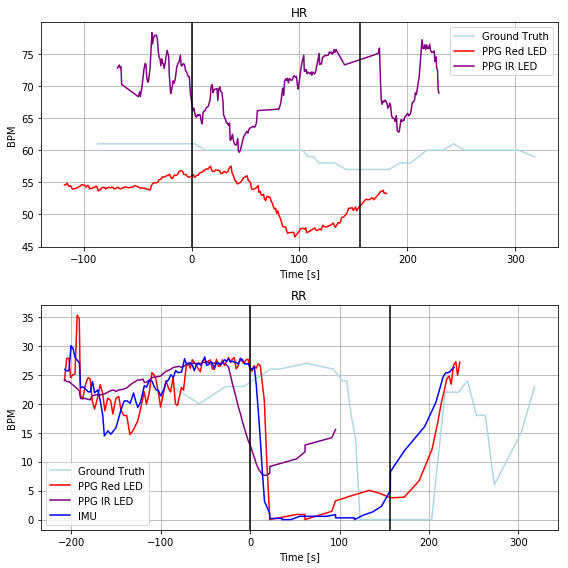

In [29]:
Red_HRx = [-117.7646854555782, -116.6923124060276, -115.30275859534231, -114.41163169501154, -113.49029710314412, -112.26688559591032, -111.33044715827458, -110.46952794948044, -109.06487029302683, -107.97739339770791, -106.66335881586421, -105.5758819205453, -104.39778195061646, -103.26499351799258, -101.79992047846571, -100.74265127468342, -99.51923976744963, -98.58280132981389, -97.67657058371479, -96.30212061879783, -95.35057833539376, -94.5500745096729, -93.08500147014601, -91.98242072905877, -90.6834899929834, -89.62622078920111, -88.31218620735741, -87.39085161548999, -86.52993240669585, -85.32162474523038, -84.15862862106987, -82.72376327307963, -81.65139022352902, -80.50349794513681, -79.55195566173276, -78.29833646296234, -77.15044418457015, -76.00255190617796, -74.99059423970064, -73.79739042400348, -72.78543275752614, -71.89430585719538, -70.76151742457148, -69.62872899194761, -68.26938287279896, -67.227217514785, -66.13974061946607, -65.06736756991546, -63.87416375421833, -62.801790704667724, -61.517963814360655, -60.46069461057837, -59.37321771525944, -58.30084466570884, -57.13784854154832, -56.05037164622942, -54.99310244244714, -53.86031400982324, -52.47076019913797, -51.38328330381904, -50.25049487119517, -49.17812182164457, -48.16616415516722, -47.12399879715326, -45.97610651876107, -44.858421931905525, -43.6199065789034, -42.59284506665776, -41.535575862875476, -40.47830665909319, -39.405933609542586, -38.33356055999198, -36.94400674930671, -35.84142600821946, -34.738845267132206, -33.696679909118245, -32.609203013799345, -31.491518426943767, -30.11706846202679, -29.02959156670789, -28.002530054462223, -26.94526085067994, -25.842680109592717, -24.694787831200497, -23.53179170704001, -22.459418657489405, -21.3870456079388, -20.2542571753149, -19.181884125764324, -18.12461492198204, -17.03713802666311, -15.97986882288083, -14.892391927561901, -13.820018878011295, -12.65702275385078, -11.509130475458589, -10.300822813993134, -9.228449764442528, -8.18628440642854, -7.113911356877961, -5.9811229242540636, -4.893646028935163, -3.760857596311266, -2.612965317919074, -1.5254884226001453, -0.43801152728124493, 0.5890499849644212, 1.6312153429783818, 2.7791076213705734, 3.942103745531088, 5.241034481606451, 6.358719068462025, 7.476403655317571, 8.5638805506365, 9.681565137492045, 10.874768953189205, 12.03776507734972, 13.170553509973589, 14.288238096829163, 15.345507300611446, 16.553814962076903, 17.64129185739583, 18.38138030004342, 19.257403354605888, 20.29956871261985, 21.326630224865514, 22.414107120184443, 23.471376323966727, 24.407814761602456, 25.449980119616416, 26.386418557252146, 27.232233920277995, 28.365022352901864, 29.452499248220793, 30.509768452003076, 31.506622272712068, 32.503476093421085, 33.53053760566672, 35.38831063516989, 36.68724137124528, 37.59347211734436, 38.42418363460189, 39.52676437568911, 40.59913742523972, 41.56578355441209, 42.411598917437914, 43.49907581275684, 44.52613732500251, 45.73444498646796, 47.531802632897836, 48.66459106552173, 49.752067960840634, 51.42859484112398, 52.65200634835776, 53.70927555214007, 54.73633706438568, 55.58215242741153, 56.594110093888844, 58.527402352233594, 59.50915232717432, 60.64194075979816, 61.69920996358047, 62.59033686391126, 63.602294530388576, 64.62935604263424, 65.70172909218485, 66.68347906712552, 67.69543673360283, 68.76780978315344, 69.82507898693575, 70.77662127033977, 71.72816355374385, 72.75522506598952, 73.90311734438171, 74.96038654816397, 76.00255190617793, 76.89367880650872, 78.01136339336426, 78.9326979852317, 80.0201748805506, 81.04723639279626, 82.19512867118846, 83.312813258044, 84.26435554144808, 85.17058628754717, 86.33358241170771, 87.36064392395332, 88.28197851582075, 89.1882092619199, 90.26058231147044, 94.73132065889268, 95.75838217113835, 97.6916744294831, 99.60986284205956, 100.6822358916101, 101.815024324234, 102.82698199071132, 103.7785242741154, 104.850897323666, 105.89306268167996, 106.8143972735474, 107.87166647732965, 109.14038952186843, 114.2303855457917, 115.43869320725719, 116.73762394333255, 118.89747388820206, 120.0755738581309, 121.69168535534095, 122.61301994720839, 123.57966607638076, 124.4556891309432, 128.39779287647428, 129.30402362257342, 131.32793895552805, 132.40031200507866, 133.29143890540945, 135.99502729793846, 137.3694772628554, 138.04915032242974, 138.98558876006547, 140.05796180961607, 141.0699194760934, 144.16620785859868, 145.55576166928398, 147.7156116141535, 148.87860773831397, 149.89056540479135, 152.11083073273414, 152.94154224999164, 155.29774218984932, 157.20082675665742, 159.60233823382003, 161.64135741254302, 162.65331507902033, 163.81631120318087, 164.88868425273142, 166.70114574492965, 167.89434956062678, 168.8760995355675, 172.71247636072036, 175.40096090748102, 176.50354164856827, 177.6967454642654, 178.4972492899863, 179.53941464800027, 180.52116462294094]
Red_HRy = [54.58335135222475, 54.59933726044022, 54.839222416934405, 54.61162643556165, 54.34098572419396, 54.46359369306878, 54.31714214683675, 53.98261598333832, 53.9919018603639, 53.9919018603639, 54.13801673637471, 54.153558591584186, 54.32078966738587, 54.41290556747965, 54.639228036341336, 54.57787671291982, 54.565914959858844, 54.452845751370894, 54.2636791708212, 54.5256021285054, 54.38350516659012, 54.003462820335606, 54.047977591643814, 54.047977591643814, 54.21249647182881, 54.228945739702695, 54.419199484508425, 54.19038922092815, 53.6696067319654, 53.77995390395274, 53.91651801290573, 54.21520208745788, 54.18454418129124, 54.18454418129124, 53.955251356382504, 54.117036451575174, 54.19065576572536, 54.20459435587113, 54.13778757526918, 54.26709131387277, 54.18474267806134, 53.97313260490404, 54.01727147369898, 54.076952197703385, 54.22599253389405, 54.11993804365453, 54.0095908716672, 54.0095908716672, 54.15534387814468, 54.15534387814468, 54.27997127238919, 54.248443508964236, 54.20430464016931, 54.130685326019126, 54.20233933380311, 54.20233933380312, 54.23572167154718, 54.32783757164095, 54.509645269194436, 54.43799126141046, 54.30249519906322, 54.25712978385716, 54.14495758804915, 54.096980556750324, 54.12523445569445, 54.057282040512376, 54.12019775466415, 54.01114878470021, 53.949797461278685, 53.94979746127869, 53.82390843408188, 53.8083665788724, 54.56620784877648, 54.847679142461665, 54.910772224717675, 54.92770529458786, 54.92770529458786, 54.98905661800938, 55.397431121925614, 55.44540815322444, 55.558477361712406, 55.84222723253695, 55.81320441469919, 55.8712818736399, 55.97446364484883, 56.05923740053692, 56.144011156225005, 56.253060126188956, 55.77998121639787, 55.568818521830764, 55.7895128658054, 56.0990581794322, 56.08394212847504, 56.08394212847503, 56.29353010124316, 56.66688519443336, 56.77723236642069, 56.82660061238023, 56.66827640909406, 56.21690958889261, 56.21690958889261, 56.21690958889261, 55.87334217773208, 55.80881166779796, 55.84033943122292, 55.90524953239194, 56.15561706547243, 56.18998866998502, 55.76529725148117, 55.9557866752515, 56.091282737598725, 56.152634061020244, 56.425595457599066, 56.507944093410494, 56.6026777545761, 56.71599558496422, 56.90648500873454, 57.03297251334091, 57.078337928546965, 57.078337928546965, 57.34632391765905, 57.5039627347838, 57.05091672254292, 56.7264840208742, 56.71003475300031, 56.69310168313012, 56.93623951971236, 56.87488819629085, 56.89589559021757, 56.84791855891873, 56.734849350430785, 56.36149425724059, 56.37580956603893, 56.53344838316369, 56.72261496371338, 56.55064534503183, 56.515239835303284, 56.64931643771797, 57.32754783627421, 57.52272462262586, 56.46697059874712, 56.190807622864405, 55.723154796377024, 55.22973148767912, 55.10733937790444, 54.747922874859995, 54.83027151067144, 54.92300022662718, 55.048889253823994, 55.53269125011477, 55.775816822493404, 55.807344585918365, 56.03741204874908, 55.29230486698171, 55.150429931569434, 54.905884899258254, 54.04272969779896, 53.87549862199729, 53.99731880602535, 54.07747009362269, 54.25954292740178, 54.49437040670487, 53.45216684193852, 53.59051255010174, 53.015040906901824, 53.015040906901824, 53.139343327497706, 52.39737751835421, 52.15144046888548, 52.781995737384484, 52.80233622991671, 52.66023926800144, 52.67767780264386, 52.0198443408863, 51.748431420967165, 51.152576822458535, 50.837784978092316, 50.94995717390032, 50.18797469487108, 50.52904777192281, 49.869960590822046, 49.45512159838849, 48.881158745624234, 48.208566459225295, 48.07022075106207, 48.07022075106207, 48.02085250510254, 47.38047711356954, 47.06200679441624, 47.16530035519311, 47.209683448416364, 46.487649738783496, 46.95530256527088, 47.33540804358065, 47.71545038983517, 47.807566289928936, 47.844053070103854, 47.80524966896545, 47.704825373765715, 47.923203585194905, 47.17633931440141, 47.24512716187403, 47.34468852005809, 47.89556525608318, 47.495350886039596, 47.50621955414232, 47.753150288659405, 47.57087641752245, 48.29964901756336, 48.165572415148674, 48.09254855133353, 48.0251800121892, 48.28028080804139, 48.37486409831624, 48.655030446087906, 48.271664684254, 47.98438797887682, 48.74432076310646, 48.6657438758012, 48.791854929501, 49.448207895845755, 49.570600005620435, 49.607086785795346, 50.23811526650334, 50.932371131180645, 50.98326525203531, 51.054919259819286, 50.61862686480322, 51.15179908025218, 50.561554969680685, 51.155732049612446, 51.471009683861936, 51.989913656632524, 52.370297403970945, 52.28794876815951, 52.32977921594692, 52.2700984919425, 52.54272091685236, 52.555614452040764, 52.27914021892966, 53.0117393466698, 53.597208947349664, 53.597208947349664, 53.77733355833974, 53.2968669168855, 53.36772530157302, 53.24888988558666]

Red_RRx = [-207.3909062447793, -204.89877169300678, -202.39153329546593, -200.50355257442612, -197.99631417688528, -195.609906545491, -193.19329122256005, -190.8370912827024, -189.50795285509037, -187.0460259948545, -183.79869915466602, -181.2159415282836, -178.6633915934378, -176.30719165358013, -173.7244340271977, -170.3562764208627, -167.41102649604062, -164.6621265662067, -162.24551124327573, -159.04349594039226, -155.8565844832771, -153.25872301112634, -149.9509807878646, -146.67344625613953, -144.1208963212937, -140.9641925557152, -137.74707340706337, -134.27318888035015, -131.05606973169833, -125.46764679742056, -122.44687764375689, -118.23290467439607, -115.7105624310869, -112.76531250626482, -109.68412796952788, -107.19199341775536, -104.94152039827591, -102.37386661766179, -99.95725129473085, -96.785443683384, -93.77977837548865, -91.24233228641117, -88.78040542617528, -85.94088242173143, -83.32791710381235, -81.0472363927963, -76.65201727421564, -74.32602502589461, -71.30525587223093, -68.88864054930002, -66.75899829596713, -64.41790220187778, -62.167429182398344, -60.0679946206021, -57.72689852651275, -55.56704858164321, -53.105121721407336, -50.85464870192789, -48.725006448595, -46.51984496642053, -44.29957963847773, -42.139729693608224, -39.949672057202044, -37.51795288850278, -35.31279140632831, -33.18314915299542, -30.76653383006448, -28.63689157673159, -26.41662624878879, -24.13594553777273, -22.00630328443984, -19.846453339570306, -17.611084165859214, -15.511649604062944, -13.321591967656792, -10.889872798957532, -8.775334391392965, -6.585276754986812, -4.380115272812337, -2.1447460991012166, -0.030207691536650046, 2.1900576364061477, 4.606672959337085, 6.872249824584851, 9.122722844064294, 11.463818938153617, 13.593461191486506, 15.99497266864912, 18.683457215409785, 21.870368672524958, 21.870368672524958, 51.86660636840519, 61.38202920244577, 61.38202920244577, 91.37826689832605, 95.42609756423536, 116.40533933642956, 133.12529660195798, 145.25368475391758, 156.92895753282767, 172.27446483343914, 188.99442209896756, 203.46390634501654, 209.94345617962512, 213.91576761669285, 217.1177829195763, 219.86668284941027, 222.49475201309764, 224.82074426141867, 227.34308650472786, 229.95605182264694, 231.93465561829663, 234.41168632430083]
Red_RRy = [24.003229306333935, 27.85534876480058, 27.85534876480058, 24.536552807308354, 24.985253657256816, 25.146422847111722, 35.30337845049057, 34.756589726626984, 21.423945161984992, 20.853859675450536, 23.36844501755885, 24.485319227956886, 24.347857786677128, 20.522438405950588, 19.092839416641105, 21.099349369005132, 23.327513418749213, 21.783156356931983, 18.782602331921172, 20.961462682702063, 20.617590433439478, 18.222852213802412, 20.906174868920978, 21.2565374197153, 18.82869731598549, 17.960978759480202, 17.960978759480202, 14.693353925072909, 15.299486278242725, 17.050417865138392, 19.01287954658963, 22.07959995914062, 19.92240797418233, 21.774388483060527, 25.36840415181472, 25.014349054529184, 24.097875058996863, 21.8723858760592, 19.439480262519545, 21.80406251939081, 24.008488559030326, 22.750732039417954, 22.04636341082408, 24.635176167748092, 19.979565788925225, 19.72331966837325, 22.828966879975304, 22.345302327433455, 26.500929868232742, 26.90138331496094, 26.1450411394088, 27.620092684191803, 27.104072135387682, 26.704364111888793, 26.075431091260455, 25.516108118780465, 27.41740386376506, 27.691318881109716, 27.116344472144057, 27.401752427279394, 27.588123442599297, 26.03522053142814, 25.94139676686641, 27.691318881109716, 26.500929868232742, 26.500929868232742, 27.598771630351543, 26.665866132360904, 27.240840541326563, 27.976726836245053, 27.310455815044982, 27.710163838543874, 27.987831466098186, 26.03522053142814, 26.52444444664289, 27.885763167240434, 27.302715487463956, 27.025047859909645, 27.608095539686122, 27.699392151920534, 25.925955459267083, 25.655717487053224, 26.572191482585545, 26.1450411394088, 26.90138331496094, 26.579005697469057, 23.650835463045638, 20.572205608798512, 10.172772355586211, 0.7592695320228833, 0.0, 0.8812107789582354, 0.8812107789582354, 0.0, 1.4299849501597284, 3.2242479093032355, 4.267798570316437, 5.043068723426309, 4.524502694706, 3.749232541596128, 3.867591869135013, 6.70328018218699, 12.182229202886976, 16.921377439049337, 20.282556078532913, 22.328681258519108, 24.312946089460027, 24.791428561426546, 23.374915806390685, 26.64341548403328, 27.273481812171823, 24.925785269521015, 27.207619684953517]

IR_RRx = [-207.27007547863278, -204.80814861839687, -202.31601406662435, -199.974917972535, -197.8452757192021, -195.48907577934446, -193.08756430218185, -190.71626051655585, -189.38712208894384, -186.92519522870796, -183.7382837715928, -181.09511076213707, -178.55766467305958, -176.20146473320193, -173.57339556951453, -170.23544565471616, -167.32040342143074, -164.5715034915968, -162.15488816866585, -158.9226651742457, -155.76596140866718, -152.26186919041731, -149.83015002171808, -146.61303087306626, -144.03027324668383, -140.84336178956866, -137.6564503324535, -134.1372542684353, -130.98055050285677, -128.56393517992583, -125.37702372281065, -122.31094303184203, -119.60735463931304, -118.11207390824953, -115.61993935647699, -112.61427404858163, -109.59350489491797, -107.04095496007217, -104.82068963212937, -102.26813969728357, -99.83642052858431, -96.66461291723746, -93.6589476093421, -91.15170921180126, -88.67467850579705, -85.82005165558489, -83.22219018343412, -80.91130178088143, -78.70614029870693, -76.57649804537404, -74.20519425974807, -71.18442510608439, -68.7980174746901, -66.66837522135721, -64.31217528149956, -62.07680610778844, -59.97737154599217, -57.621171606134524, -55.431113969728344, -52.99939480102911, -50.779129473086314, -48.61927952821678, -46.42922189181063, -44.20895656386783, -42.03400277322997, -39.8288412910555, -37.42732981389288, -35.23727217748673, -33.077422232617195, -30.64570306391794, -28.561372347890018, -26.310899328410574, -24.000010925857868, -21.915680209829947, -19.816245648033675, -17.52046109124929, -15.360611146379783, -13.200761201510248, -10.769042032810988, -8.669607471014745, -6.449342143071947, -4.259284506665766, -2.069226870259614, 0.06041538307327515, 2.31088840255269, 4.727503725483627, 6.947769053426425, 9.243553610210837, 11.554442012763543, 13.699188111864755, 16.115803434795662, 18.804287981556353, 22.00630328443982, 22.00630328443982, 52.00254098032006, 61.50285996859235, 61.50285996859235, 91.49909766447256, 95.56203217615023]
IR_RRy = [24.188282405542996, 23.825866529701393, 23.8557742894721, 23.50683457251082, 23.259696449358913, 22.927810131861488, 22.619947146436775, 22.207287756921286, 20.900544930755586, 20.9233928881456, 20.9233928881456, 20.76684123527688, 20.694186473194243, 21.427262091291862, 21.489526953228285, 21.588886829776136, 21.55286676845385, 21.63681643437827, 21.746600610590157, 21.993742150461127, 22.277078821973056, 22.366769873095755, 22.131189906057678, 22.395214193351293, 22.444792511959204, 22.55436767710121, 22.767813380658755, 23.213547980961003, 23.623634148076512, 23.790915765184963, 24.114692295422174, 24.129369012878616, 24.27685232739389, 23.67922741140837, 23.748676680491304, 24.092621756833704, 24.528453392956308, 24.626394669868134, 24.645031771400124, 24.703431538999727, 24.820926309527493, 25.26407878843763, 25.635790627535464, 25.790444888742194, 25.9586570411619, 26.268176179808666, 26.36259346167584, 26.43421840089682, 26.462759196410353, 26.28776698498603, 26.461951111357603, 26.801879647882316, 26.84296199039435, 26.873585627393606, 27.029305211548383, 26.99398783786823, 26.954017035518348, 27.06976581732323, 26.933633945263473, 27.12889503873048, 27.128895038730473, 27.10973661967312, 27.10973661967312, 27.167234060569683, 27.120947495138758, 27.001908593851063, 27.10388518713931, 27.04080105070372, 26.950017692425384, 27.11508957073728, 26.917184316629573, 26.700001510742442, 26.33870943819793, 24.975354487598842, 23.54639830359031, 22.23965547742461, 20.93875209557846, 19.54976671391982, 18.316071623378292, 17.030216959238047, 15.85684707093257, 14.736862761887497, 13.62465565606596, 12.905638179020887, 11.84430179717821, 10.782809979691434, 9.638736812654662, 8.798249642773436, 8.2524147011249, 7.79499801462781, 7.638974349317861, 7.691485891836615, 8.003789208781878, 9.169238905273252, 10.484635657440048, 11.726041342297464, 12.871654433026496, 14.153105462556729, 15.571854816679487]

IMU_RRx = [-207.05106971499214, -204.77038900397608, -202.35377368104514, -200.0277814327241, -197.73199687593973, -195.48152385646029, -193.08001237929767, -190.69360474790338, -189.42488170336463, -186.87233176851882, -183.7156280029403, -181.07245499348457, -178.4443858297972, -176.10328973570785, -173.65646672124026, -170.12216681145378, -167.1920207324, -164.5488477229443, -162.8119054595877, -158.74897094791004, -155.68289025694142, -149.80749425306558, -144.18886362725118, -140.669667563233, -137.54317148919108, -133.9182485047947, -130.12718321694678, -127.8465025059307, -125.39967949146313, -122.30339110895787, -118.14983352267032, -115.71811435397107, -112.62182597146581, -109.48022605165559, -106.97298765411475, -104.87355309231849, -102.30589931170437, -99.90438783454175, -96.70237253165826, -93.56077261184805, -91.24988420929533, -88.5916073540713, -85.64635742924922, -83.12401518594007, -80.8584383206923, -78.65327683851783, -76.44811535634335, -73.15547697884995, -71.13156164589529, -68.69984247719603, -66.50978484078988, -64.31972720438372, -62.31091571719736, -59.909404240034746, -57.56830814594542, -55.37825050953924, -53.00694672391327, -50.635642938287276, -48.64193529686926, -46.39146227738982, -44.09567772060544, -41.9358277757359, -39.92701628854957, -37.31405097063049, -35.09378564268769, -33.00945492665977, -30.668358832570416, -28.372574275786032, -26.242932022453143, -23.94714746566876, -21.772193675030902, -19.612343730161395, -17.49780532259683, -15.262436148885708, -13.147897741321142, -10.701074726853559, -8.616744010825638, -6.411582528651135, -4.176213354940043, -1.9408441812289223, 0.12838268903070427, 2.227817250826948, 4.795471031441084, 7.045944050920499, 9.266209378863298, 11.637513164489295, 13.84267464666377, 16.1686668949848, 21.998751361555666, 21.998751361555666, 31.99749726018243, 35.697939473420405, 35.697939473420405, 45.69668537204717, 55.695431270673936, 65.69417716930067, 75.69292306792741, 85.69166896655415, 95.58468794480271, 95.58468794480271, 105.58343384342945, 115.58217974205618, 116.76027971198502, 116.76027971198502, 126.75902561061176, 136.7577715092385, 146.7565174078653, 156.75526330649203, 156.93650945571184, 172.3575359851649, 195.20965463263056, 207.71563892879814, 212.1259618931471, 215.75088487754348, 218.5148886531458, 221.03723089645493, 223.37832699054425, 225.71942308463363, 227.98499994988137]
IMU_RRy = [25.94548195084862, 25.680748013305617, 25.743603997349027, 30.04284446438769, 29.51705445149262, 27.98627578996843, 27.52942065203708, 27.06703180390162, 22.7345068945375, 22.937644357762032, 22.531508281253654, 22.08686930841518, 22.060777366270393, 23.843665755182023, 21.892877254125626, 22.41137097623356, 20.35842753852379, 17.954181321214687, 14.455358506494335, 15.33999075646546, 14.736614594367273, 15.859536276139997, 18.985371568923462, 20.479820631603502, 20.517266119446496, 20.095940553676705, 21.865383711425515, 20.479404694508307, 19.39479573907733, 20.305330146777624, 23.132065288961776, 22.87081221096475, 23.992057290338956, 23.919987294120816, 22.95355469423182, 22.430538051718894, 22.2712132579404, 21.34871730634824, 22.358560367129325, 23.835514822959688, 24.08448507401892, 25.012060928208772, 24.582197562386586, 25.753816476685834, 25.391932583460317, 25.42946208928501, 25.466991595109704, 27.796179332443064, 26.863930625143773, 27.054954381098593, 27.054954381098593, 26.636153781067627, 25.722979540398605, 26.745063123128546, 26.951471342650194, 26.699134796907856, 27.194569073168264, 28.10774331383729, 26.681290118415212, 26.7538372250498, 27.284109676247475, 26.85397226773383, 26.107262081353433, 27.14952783078482, 26.971739691170438, 26.731854534676255, 27.1619919431899, 27.610018055018138, 27.34350964653811, 27.791535758366347, 27.178495913992315, 27.37979814321821, 27.14657907130762, 27.14657907130762, 26.839822454199993, 27.73477113211829, 27.693352112291954, 26.925101051880596, 26.88907259013977, 26.925591235033533, 26.186831052497162, 25.912784661043467, 26.398345937320773, 23.124422818094633, 18.595627693893245, 13.535120443519073, 8.093342098938628, 3.13463175748561, 1.0763425390691723, 0.20037821899337832, 0.20037821899337832, 0.20037821899337832, 0.0, 0.0, 0.5666901842430421, 0.5666901842430421, 0.5666901842430421, 0.5666901842430421, 0.8653742587952019, 0.2986840745521598, 0.2986840745521598, 0.2986840745521598, 0.2986840745521598, 0.0, 0.7781583137206122, 1.3032737389081501, 2.2628143648848953, 4.983703537175119, 8.29411869679489, 11.85748846126414, 16.089855900200824, 20.256119392345017, 22.66103433817573, 24.647283433947592, 25.3342340792308, 25.36289361455685, 25.533753751827547, 26.00301750912031, 26.30142112914237]

#PLOT DATA
fig = plt.figure(figsize = (8, 8))
FONT = 10

ax = fig.add_subplot(211)
ax.plot(P0804ts, P0804hr, c = GTcolor, label = "Ground Truth")
plt.plot(Red_HRx, Red_HRy, c = REDcolor, label = "PPG Red LED")
plt.plot(IR_HRx, IR_HRy, c = IRcolor, label = "PPG IR LED")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(P0804naloxone) - timestr(P0804fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("HR")
plt.legend()
plt.grid()

ax = fig.add_subplot(212)
ax.plot(P0804ts, P0804rr, c = GTcolor, label = "Ground Truth")
plt.plot(Red_RRx, Red_RRy, c = REDcolor, label = "PPG Red LED")
plt.plot(IR_RRx, IR_RRy, c = IRcolor, label = "PPG IR LED")
plt.plot(IMU_RRx, IMU_RRy, c = IMUcolor, label = "IMU")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(P0804naloxone) - timestr(P0804fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("RR")
plt.legend()
plt.grid()

plt.tight_layout()

## PIG 2

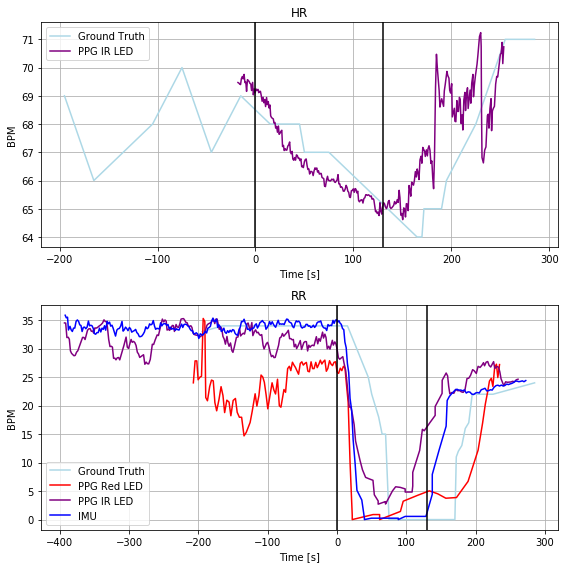

In [23]:
IR_HRx = [-39.74904787353483, -38.80082126016077, -38.05141635604257, -37.10318974266851, -36.26202097273994, -35.26791242646066, -34.48791956707236, -33.463223065522975, -32.65264225086451, -31.735003592760552, -30.95501073337225, -30.052666052903408, -29.226791260609833, -28.293858624870882, -27.54445372075269, -26.64210904028379, -25.862116180895487, -24.760949791170777, -24.057426819957744, -22.986848385503198, -22.20685552611484, -21.1668650469304, -20.310402299366775, -19.316293753087496, -18.55159487133425, -17.633956213230352, -16.808081420936777, -15.875148785197826, -15.095155925809468, -14.085753401895193, -13.321054520141889, -12.372827906767828, -11.54695311447431, -10.537550590560034, -9.757557731171676, -8.794037140162562, -8.044632236044368, -7.065817667400201, -6.347000718552114, -5.4293620604481605, -4.588193290519588, -3.6705546324156915, -2.921149728297441, -2.0188050478285975, -1.223518210805243, -0.2599976197960715, 0.5658771724974471, 1.5599857187766686, 2.2788026676247553, 3.2423232586338697, 4.037610095657281, 5.001130686666396, 5.765829568419643, 6.7293501594287575, 7.463461085911898, 8.396393721650906, 9.222268513944424, 10.124613194413268, 11.1340157183276, 12.036360398796443, 13.030468945075665, 13.718697938653644, 14.559866708582216, 15.523387299591331, 16.30338015897969, 17.221018817083586, 18.138657475187483, 19.01041420038622, 19.95864081376028, 20.860985494229123, 21.717448241792805, 22.650380877531813, 23.537431580365602, 24.500952171374717, 25.326826963668235, 26.213877666502025, 27.039752458795544, 28.11033089325009, 28.99738159608388, 29.89972627655278, 30.77148300175146, 31.643239726950195, 32.63734827322947, 33.432635110252825, 34.36556774599183, 35.25261844882562, 36.12437517402436, 37.0267198544932, 37.95965249023221, 38.92317308124132, 39.77963582880495, 40.712568464543956, 41.538443256837475, 42.425493959671265, 43.34313261777516, 44.260771275879115, 45.22429186688823, 46.0654606368168, 46.93721736201554, 47.870149997754545, 48.63484887950779, 49.5677815152468, 50.77600574841694, 51.70893838415595, 52.53481317644947, 53.42186387928326, 54.278326626846884, 55.180671307315784, 56.08301598778463, 56.95477271298336, 57.87241137108726, 58.72887411865094, 59.61592482148473, 60.518269501953576, 61.46649611532764, 62.4147227287017, 63.27118547626532, 64.20411811200434, 65.02999290429786, 65.94763156240175, 66.8652702205057, 67.79820285624466, 68.74642946961872, 69.66406812772267, 70.68876462927206, 71.56052135447074, 72.41698410203442, 73.31932878250326, 74.16049755243183, 75.04754825526562, 76.08753873445012, 77.06635330309429, 78.04516787173846, 78.9475125522073, 79.81926927740604, 80.70631998023983, 81.59337068307362, 82.5874792293529, 83.41335402164641, 84.3004047244802, 85.18745542731399, 86.08980010778284, 87.00743876588673, 87.86390151345041, 88.87330403736475, 89.77564871783359, 90.7391693088427, 91.67210194458166, 92.55915264741544, 93.5073792607895, 94.42501791889346, 95.37324453226752, 96.33676512327663, 97.19322787084026, 98.11086652894421, 98.997917231778, 99.86967395697668, 100.75672465981047, 101.62848138500921, 102.515532087843, 103.41787676831184, 104.3355154264158, 105.23786010688464, 106.10961683208338, 107.02725549018727, 107.85313028248079, 108.96959064984055, 109.90252328557956, 110.80486796604846, 111.70721264651725, 112.65543925989137, 113.6801357614407, 114.62836237481481, 115.50011910001349, 116.41775775811739, 117.33539641622129, 118.2836230295954, 119.21655566533441, 120.16478227870842, 121.06712695917732, 121.92358970674088, 122.90240427538511, 123.83533691112412, 124.82944545740334, 125.62473229442669, 126.52707697489559, 127.50589154353982, 128.4541181569138, 129.52469659136835, 130.44233524947236, 131.29879799703593, 132.18584869986972, 133.10348735797373, 134.03641999371263, 134.92347069654642, 135.8105213993802, 136.697572102214, 137.630504737953, 138.5328494184219, 139.4657820541609, 140.3987146898998, 141.37752925854403, 142.32575587191803, 143.25868850765704, 144.16103318812594, 145.07867184622984, 146.10336834777917, 147.15865280459872, 148.0151155521624, 148.9633421655364, 149.8350988907352, 150.84450141464953, 151.51743643059234, 152.6338967979521, 153.62800534423133, 154.33152831544436, 155.31034288408858, 156.2738634750977, 157.2526780437418, 158.20090465711593, 159.1032493375847, 159.9903000404185, 160.9079386985225, 161.96322315534195, 162.91144976871607, 163.81379444918485, 164.73143310728875, 165.63377778775765, 166.49024053532133, 167.45376112633045, 168.29492989625902, 169.1819805990928, 170.19138312300714, 170.92549404949028, 171.8890146404994, 173.57135218035654, 174.50428481609555, 175.65133313872542, 176.43132599811378, 177.3795526114879, 178.45013104594244, 179.10777208425026, 180.04070471998926, 181.17245906498403, 181.7077482822113, 182.70185682849063, 183.77243526294518, 184.445370278888, 185.3935968922621, 186.35711748327122, 187.1829922755647, 187.96298513495304, 189.0794455023128, 189.84414438406606, 190.8535469079804, 191.97000727534015, 192.61235433601297, 193.56058094938697, 194.6005714285714, 195.25821246687923, 196.17585112498313, 197.24642955943767, 197.99583446355592, 198.91347312165982, 200.12169735483002, 200.73345646023262, 201.63580114070152, 202.73696753042617, 204.327541204473, 205.21459190730678, 206.8510475142587, 208.08985970269902, 208.57926698702119, 208.9157344949926, 209.40514177931465, 210.8274816993757, 212.15805775362645, 213.42745789733686, 214.91097372793814, 215.75214249786683, 216.53213535725507, 217.5109499258993, 218.65799824852917, 219.20858144339155, 220.01916225805002, 221.04385875959935, 222.0991432164189, 223.3532493824943, 224.43912179458385, 225.4638182961333, 226.28969308842676, 228.14026438226966, 228.98143315219835, 229.96024772084246, 230.6331827367854, 231.64258526069972]
IR_HRy = [69.46979473399654, 69.44970711065949, 69.41768169973929, 69.39759407640224, 69.60563793900884, 69.68479280080405, 69.59932193287976, 69.75811223240822, 69.46651436568197, 69.48867884499116, 69.15731486473084, 69.57105181183552, 69.54463354356801, 69.50379968629271, 69.44100476291976, 69.41884028361056, 69.188068940215, 69.47484619443465, 69.03466523087508, 69.24364460721877, 69.10628071234045, 69.23869049953463, 69.1903763020257, 69.2286973065456, 69.11245692616858, 69.1575501771769, 69.1575501771769, 68.99217305521192, 68.80649496282469, 68.94754164933765, 68.75482733450204, 68.86583788452255, 68.61994477218653, 68.94001225311979, 68.68780313465467, 68.79516801800783, 68.57042829225203, 68.67432428901382, 68.29118107500513, 68.22890944266028, 68.20343468397375, 68.18199690890422, 68.03373111760699, 68.05665988930613, 67.85547461557667, 67.9177462479215, 67.71017414010538, 67.92964898417391, 67.63677008624747, 67.67760394352275, 67.73795952564159, 67.77879338291689, 67.20274137130161, 67.24357522857693, 67.0619496342378, 67.12848066031567, 67.07658763336164, 67.07658763336165, 67.21763431987462, 67.26429638157815, 67.36488901844288, 67.02239504054629, 66.94860608435083, 67.03304219600486, 66.7600868436015, 66.7179028345937, 66.81131028311094, 66.7210459670287, 66.90853045150777, 66.8863659721986, 66.79295852368134, 66.79295852368134, 66.70568126366521, 66.76795289601006, 66.48602660031949, 66.50975989032388, 66.45786686336984, 66.66684623971354, 66.740635195909, 66.76356396760815, 66.54088986433172, 66.3903318058664, 66.40919292527853, 66.23017213085825, 66.32043644694049, 66.32043644694048, 66.29670315693609, 66.17394604076219, 66.340684291303, 66.44804917465618, 66.39973497714725, 66.44333723152596, 66.29803675605467, 66.34635095356359, 66.2274687463598, 66.249633225669, 66.249633225669, 66.10931324339568, 66.0855799533913, 66.06483371945305, 65.80329286360472, 65.78254662966647, 66.0347861530886, 66.14963137667537, 66.0043309012041, 66.00433090120409, 65.97974999369956, 66.0026787653987, 66.04934082710224, 66.02560753709786, 66.04777201640704, 65.95436456788978, 65.93143579619063, 65.97809785789417, 66.02028186690195, 66.20776635138104, 65.88148005861528, 65.88148005861528, 65.75834406245318, 65.78050854176236, 65.73832453275458, 65.62313648760482, 65.62313648760482, 65.69196302861754, 65.8285888488368, 65.75976230782409, 65.62417085029904, 65.58056859592033, 65.41950237970876, 65.39657360800962, 65.64382861879058, 65.64382861879058, 65.70412236117365, 65.58136524499973, 65.7137239777165, 65.69079520601734, 65.56397043755642, 65.62237906541336, 65.29026369290756, 65.24517044189922, 65.29348463940815, 65.31641341110729, 65.31641341110729, 65.20156818752051, 65.36554364573261, 65.38847241743177, 65.49583730078493, 65.49583730078493, 65.47290852908579, 65.49365476302405, 65.47221698795451, 65.4326694795097, 65.45275710284676, 65.33791187925996, 65.36007635856915, 65.3149831075608, 65.10953074632882, 64.89386737194116, 64.9184482794457, 64.83117101942958, 64.87783308113312, 64.75895087392932, 65.21231522343527, 64.91060983817405, 64.81001720130934, 65.06271368038982, 65.21386100718571, 65.17302714991041, 65.06913115314863, 65.00478266483168, 65.06913115314865, 65.25085022437624, 65.29303423338402, 65.05363756899197, 65.01145355998419, 65.03361803929337, 65.07580204830117, 65.11940430267988, 65.25499576020492, 65.17055964855089, 65.19603440723742, 65.32285917569835, 65.2254147435641, 65.65293345023925, 65.38947654416494, 64.77290102883686, 64.83319477121991, 64.61383792437938, 65.03142416480948, 64.9892401558017, 64.70901781024992, 65.18092392545338, 65.15948615038384, 64.93352041316443, 65.82250164732865, 65.6768157594556, 65.44490761141276, 65.9418742152974, 65.87752572698044, 65.83669186970513, 66.00343012024594, 66.31593298109412, 66.12523814585342, 66.40821677677127, 66.26717009025829, 66.0342912460098, 66.7313617573326, 66.85974787170416, 66.61249286092318, 67.17167623614277, 67.10284969513005, 67.03491700529932, 66.85295444325271, 67.0858332875012, 66.87191476859898, 67.127769953668, 67.23166595042977, 67.07598686956769, 66.60445888426422, 66.69173614428034, 66.09515950493046, 65.7110318111558, 66.85527305549219, 69.28460511574335, 70.47103036908752, 69.98484179069264, 69.57900253161766, 69.19446216769937, 68.60223968483223, 68.78339352438084, 68.89528266057262, 68.7684578921117, 68.62579924346716, 69.17067602648449, 69.40566331835181, 69.86344853415143, 69.71431618584164, 69.62500955213733, 69.19163613730996, 69.09719432609849, 69.42930969860429, 68.25305445608062, 68.39337443835393, 68.55904643319029, 68.10050077683285, 68.08221120649381, 68.82947079463185, 68.44734941433398, 68.44734941433398, 68.9455224730927, 68.86904853863412, 68.0249291704615, 68.32663455572272, 67.78978753582355, 68.8427442281999, 69.12071632345673, 68.47854011490058, 69.03772349012017, 69.28497850090115, 68.55002842148242, 68.84359468825095, 69.20312524480792, 68.73898885466008, 69.44313731271322, 69.7576484684802, 68.96717050864014, 69.38090745574482, 69.71774037615552, 70.11715231664787, 70.43376450457869, 71.10158411313664, 71.23801648447119, 70.7476273797556, 68.51102992219296, 66.81352917510051, 66.62370113456545, 67.07463364464874, 67.18960601696891, 68.29443035145513, 68.34826380377383, 67.85595160452993, 68.54369242211888, 68.89864072648446, 67.76529701780841, 68.46438421111367, 68.55882602232515, 68.62880350883975, 69.41555242480622, 69.68698103725073, 69.66975929520629, 69.92245577428679, 70.46282944339488, 70.51666289571357, 70.89196067993468, 70.14112568706871, 70.7355367230876]
IR_HRx = [i + (IR_HRx[50] - IR_HRx[0])/2 for i in IR_HRx]

#window size 10
IR_RRx = [-402.109259981138, -400.3351585754704, -398.5763511474379, -396.6340159877846, -395.089324246643, -393.4834565949611, -391.816413032739, -390.0881935599766, -388.4058560201194, -386.63175461445184, -384.6282435442583, -382.83884816095565, -375.9718522028113, -374.06010499842813, -372.3624734809359, -368.8142706696007, -366.91781744285265, -365.0825401266448, -363.29314474334217, -361.5496312929447, -359.8672937530875, -358.2002501908654, -356.3343849193874, -354.42263771500427, -352.52618448825615, -350.7214951273184, -348.96268769928594, -347.14270436071314, -345.06272340234426, -343.34979790721695, -341.4686386581039, -340.1380626038532, -338.2569033547402, -336.4063320608973, -334.6322306552297, -332.9040111824673, -331.2369676202452, -329.53933610275294, -327.79582265235547, -325.9299573808775, -324.01821017649434, -322.3511666142722, -316.1723996497058, -313.1900740108681, -311.44656056047063, -309.64187119953294, -305.97131656711724, -304.28897902726004, -302.37723182287687, -300.6948942830197, -298.81373503390665, -296.9325757847936, -295.25023824493644, -293.4914308169039, -289.9279340279337, -287.98559886828036, -286.1197335968024, -284.16210445951407, -282.3421211209413, -280.5680197152737, -278.3198050029191, -275.3068914088112, -273.4716140926034, -271.3304572236942, -268.33283760722145, -266.48226631337855, -262.58230201643687, -260.8387885660394, -258.85057147348095, -257.06117609017826, -255.31766263978082, -254.03296851843533, -252.16710324695737, -250.48476570710017, -248.43537270400142, -246.52362549961825, -244.85658193739613, -243.44953599497012, -241.0636754838999, -239.44251385458298, -237.59194256074008, -235.6496074010868, -233.87550599541922, -232.08611061211656, -230.2661272735438, -228.61437768895672, -226.93204014909955, -225.08146885525665, -223.47560120357477, -221.64032388736695, -219.74387066061882, -218.10741505366684, -216.70036911124083, -214.9415616832083, -213.1368723222706, -211.34747693896796, -209.46631768985492, -207.56986446310682, -205.68870521399379, -203.80754596488075, -201.9722686486729, -200.18287326537026, -198.37818390443255, -196.46643670004937, -194.61586540620647, -192.7958820676337, -190.93001679615574, -188.85003583778683, -186.9688765886738, -185.24065711591143, -183.51243764314904, -181.8148061256568, -180.28540836215024, -178.74071662100866, -177.01249714824627, -175.25368972021374, -173.44900035927603, -171.58313508779807, -169.85491561503568, -167.62199488031615, -166.21494893789014, -164.5173174203979, -162.5291003278394, -160.52558925764583, -158.99619149413928, -157.08444428975614, -153.93388489693265, -151.74684609511831, -149.42216149458838, -147.93864566398705, -146.04219243723895, -143.97750545650513, -142.31046189428298, -138.6552012395024, -137.00345165491535, -135.51993582431402, -133.86818623972692, -131.72702937081777, -130.2588075178515, -128.05647473840213, -126.31296128800466, -124.38592010598643, -122.64240665558896, -120.9141871828266, -119.30831953114472, -117.48833619257198, -115.54600103291864, -114.10836713522252, -110.77428001077828, -109.01547258274576, -107.42489890869894, -105.11550828580408, -103.41787676831183, -101.47554160865855, -99.79320406880134, -98.04969061840393, -93.15561777518298, -91.44269228005567, -89.25565347824136, -87.60390389365426, -85.72274464454125, -81.11925737638654, -79.05457039565277, -77.23458705707998, -75.35342780796691, -73.62520833520455, -71.83581295190191, -70.58170678582655, -68.54760776036284, -67.12526784030177, -64.9076410832173, -61.84884555620425, -60.028862217631456, -56.740657026092435, -54.85949777697937, -53.02422046077152, -51.26541303273899, -49.55248753761168, -47.7783861319441, -46.05016665918174, -44.18430138770378, -42.089026451699795, -38.63258750617507, -36.64437041361657, -34.87026900794899, -33.01969771410609, -29.65502263439168, -28.324446580140997, -26.336229487582496, -24.73036183590062, -22.925672474962933, -20.753927650783677, -18.949238289845933, -15.553975254861426, -14.16222329007047, -11.990478465891213, -10.216377060223634, -8.488157587461272, -6.866995958144342, -4.97054273139622, -0.45881932905194645, 1.4070459424260113, 3.5482028113351607, 5.352892172272904, 7.081111645035266, 8.885801005972953, 10.91990003143667, 13.351642475412065, 15.875148785197839, 17.95512974356672, 21.335098800916175, 24.317424439753896, 27.911509183994273, 32.42323258633854, 37.62318498226074, 43.052547042708966, 44.99488220236225, 50.53130210625591, 50.53130210625591, 60.51826950195357, 61.14532258499128, 61.14532258499128, 71.13228998068894, 75.78165918174881, 82.49571536354244, 89.51565109803744, 89.51565109803744, 99.50261849373516, 100.45084510710916, 100.45084510710916, 110.43781250280682, 114.3683647550186, 116.98363493061487, 125.13532501010462, 132.78231382763732, 132.78231382763732, 142.76928122333499, 142.93751497732075, 148.6574626128351, 150.7680315264742, 152.3280172452508, 153.94917887456774, 156.9009165581354, 159.6844204877172, 162.59027623837966, 165.37378016796157, 167.98905034355772, 170.57373256388377, 173.17370876184492, 175.74309700453585, 178.72542264337363, 181.23363497552435, 183.8794931063906, 186.8618187452284, 189.0335635694076, 192.16882898459602, 194.75351120492206, 197.6134850226793, 200.3205190640859, 202.5228518435353, 204.00636767413658, 206.4534040957471, 208.6098549422913, 210.61336601248485, 212.9380506130148, 217.11330650738756, 218.79564404724482, 221.94620344006825, 224.2403000853281, 226.1367533120761, 227.84967880720347, 229.7920139668568, 231.8719949252257, 234.45667714555174, 237.0719473211479, 239.59545363093372, 242.11895994071944, 244.79540602685591, 247.1965605155611, 249.79653671352224, 252.3812189338483]
IR_RRy = [34.51719962475188, 34.48829369461833, 31.950635734319956, 32.00006077794483, 31.65012653142581, 29.604825503547964, 29.169440089476712, 28.96691951525788, 28.75354119463571, 28.81287441964667, 29.38459801154271, 29.63069620570721, 31.972617958848968, 31.972617958848968, 31.602082744591325, 33.23575772815584, 33.48335952015811, 33.51083229913377, 33.04238619608719, 33.10383846484855, 32.72689488103168, 33.63703389220899, 33.610890264075415, 33.714642008544175, 33.932835158584474, 34.079944534530355, 34.26772815659935, 34.505330569361846, 35.06201582755292, 34.774902768585946, 34.7238704064692, 33.81373139529189, 31.59527629708564, 30.36488701973183, 30.42422024474279, 30.27711086879691, 28.312555128193157, 28.344685454464447, 28.041848674008502, 28.39264862969179, 28.44368099180853, 28.034017534449344, 30.62941621647247, 32.028965946764465, 30.271378311461223, 30.03577164163924, 31.616807553017384, 31.115273241376435, 31.273516448276258, 31.089044057787635, 30.56830566884126, 29.37021087295322, 29.073005354943767, 28.463826342874704, 28.781675110054824, 28.93485189814845, 27.25766126035549, 27.634056406518773, 27.35510203538127, 27.32619610524772, 28.0987389125333, 30.77768350198759, 30.724089064313763, 31.488331824909483, 32.41443978995264, 32.310688045483886, 34.37139851250246, 35.19432454635014, 34.691361362026456, 35.039323313445365, 34.84023827745817, 33.2589310781503, 33.425258643344954, 33.21188032272278, 33.58091765224662, 34.07493926884899, 34.042219395306674, 33.0202083254718, 34.24169034454361, 33.809901195737424, 33.73145985667335, 34.30885522612287, 35.1911144849815, 35.249429057077, 35.27736747637429, 34.99794348508335, 34.62099990126648, 34.542558562202416, 33.99578325380872, 33.916045188001306, 34.021505210520786, 33.70813251000759, 32.768551321901064, 32.49563912449413, 32.413209242765774, 32.35685482435416, 32.38299845248774, 32.103839569347926, 32.103839569347926, 32.386098209374175, 32.588618783593006, 32.769866777943875, 33.368307719291714, 34.11408758547306, 34.3436268431473, 34.45829583365442, 34.567301469601205, 34.89832593758665, 35.18058457761289, 34.395866892772816, 35.18833870493345, 35.18833870493344, 34.28300497315081, 33.39347746100704, 33.84480902640901, 33.571896829002064, 32.15164864025853, 31.679417930684878, 30.788631946338903, 32.1460145833147, 31.045562174415757, 30.417235793999385, 30.998642777712995, 29.645369960075026, 29.35476900913245, 30.26072496341115, 31.988813142559955, 32.047601047221164, 33.553181631874295, 32.233119322502425, 32.5106456975537, 32.718217805369825, 32.560358766349836, 34.39067023209323, 34.494456286001295, 33.74674353862241, 33.20329687839516, 34.57459771832934, 32.28761489052726, 32.974633443027365, 33.30553027481927, 32.79003662958054, 32.88304546878691, 32.500329423019046, 32.330497698442215, 32.47509127199835, 30.611998807232414, 29.94125383117764, 30.885096337206242, 31.106205756401685, 30.523504506270587, 29.22877628101985, 28.60044990060348, 28.808118151128177, 28.43117456731131, 28.461628788998354, 30.588743922700605, 31.87024855174832, 32.07652190143678, 32.662410915433895, 32.17848334363718, 32.83668001574715, 33.22740398340103, 31.75537415177478, 31.75537415177478, 31.552853577555954, 31.611168149651455, 30.32966352060373, 30.761948445683593, 30.015328817227083, 30.52540001715738, 31.42742961123277, 29.86658677031455, 31.05966223080329, 31.25213342413153, 31.225114740676123, 29.59694538114609, 30.60349116258204, 30.239276442899364, 30.503793111266823, 30.612798747213606, 30.511968253800298, 32.10074951401581, 30.850138352994755, 31.77925753585871, 31.29977104073463, 32.8985317583027, 31.860987929792447, 32.54425867076047, 31.97176140565471, 29.976958267828564, 30.429869008734215, 29.907420567874993, 31.46492451933084, 30.625592783164894, 31.187509160017328, 30.755224234937465, 29.750809527221442, 28.427403824386907, 28.1482449412471, 28.59354036266229, 27.389726839526908, 26.256913102189976, 24.262109964363837, 21.94418540901892, 19.7246157204518, 19.863972046461797, 18.480338309955798, 16.66798420013448, 13.783342407689815, 12.008178227723864, 10.4062641359594, 8.736854417778655, 7.406985659227895, 7.146776513485733, 6.896382984918809, 4.356004868535185, 3.2722720404344257, 2.706982006180139, 3.1380933070290125, 3.1380933070290125, 2.7281546614987358, 5.022372695255898, 5.758416379632022, 5.649391375941267, 5.385512943343696, 4.836825833172403, 4.836825833172403, 5.885786484970463, 8.297510573777203, 12.14369963037009, 15.844749477280228, 15.583232395712054, 17.002745215580298, 18.282918878416794, 19.847645136015863, 22.141863169773025, 24.46323171280542, 25.721984494963095, 25.214335318238877, 23.379998998940728, 22.071091126253, 22.30608545598583, 22.16238168903621, 22.86034097817923, 22.618498053312795, 22.645648562588025, 22.42220132315175, 22.330935820113954, 22.720133522269187, 24.75272700943294, 24.812530558788502, 25.32718480716792, 26.31007469409054, 26.128314462542882, 25.651638552661204, 26.89673622574221, 26.703238629779463, 27.102199257344694, 27.541616017842536, 26.99994911278113, 27.637068815758084, 27.739361077901513, 27.06598699671654, 26.779209742496896, 27.719816217076254, 26.530994145038456, 26.868349201819218, 26.751738629147997, 25.89565138751926, 24.71424061115456, 24.12397337041158, 23.481110342381054, 24.17752090529077, 24.099750802451545, 24.128924350231618, 24.158097898011683, 24.27964012017872, 24.15848627844238, 24.537836431969346, 24.63814248012507]
IR_RRx = [i + (IR_RRx[10] - IR_RRx[0])/2 for i in IR_RRx]

#window size 10
RED_RRx = [-402.1398479364081, -400.3963344860107, -398.72929092378854, -396.9398955404859, -395.33402788880403, -393.5752204607715, -391.78582507746887, -390.07289958234156, -388.34468010957914, -386.6470485920869, -384.567067633718, -382.8541421385907, -381.2176865316387, -377.66948372030356, -375.9412642475412, -374.1977507971437, -372.50011927965147, -368.7378007814254, -366.9331114204877, -365.18959797009023, -363.3696146315175, -361.5802192482148, -359.98964557416804, -358.3684839448511, -356.3802668522926, -354.4991076031796, -352.7708881304172, -351.08855059056, -348.9473937216508, -347.28035015942874, -345.53683670903126, -343.68626541518836, -341.97333992006105, -340.0615927156779, -338.27219733237524, -336.345156150357, -334.64752463286476, -332.96518709300756, -331.3287314860556, -327.6428828760048, -325.89936942560735, -324.1099740423047, -322.3511666142722, -320.2711856559033, -318.558260160776, -316.86062864328375, -313.2206619661382, -311.49244249337585, -309.50422540081735, -307.6995360398796, -306.0936683881978, -304.25839107198993, -302.4537017110522, -298.7678531010015, -296.96316374006375, -295.3572960883819, -293.50672479453897, -291.71732941123634, -289.86675811739343, -288.0008928459155, -284.0703405937037, -282.3268271433062, -278.6562725108905, -277.0045229263035, -275.29159743117617, -273.3645562491579, -271.75868859747607, -266.46697233574343, -262.5975959940719, -260.94584640948483, -257.3823496205147, -255.70001208065744, -250.3930018412898, -245.1318735348273, -243.44953599497012, -239.68721749674404, -238.02017393452192, -235.97078093142315, -234.12020963758025, -232.45316607535813, -228.87437530875283, -227.11556788072033, -225.31087851978262, -223.67442291283064, -222.00737935060852, -216.57801729016032, -214.8192098621278, -213.12157834463554, -211.362770916603, -209.35925984640946, -207.4933945749315, -205.6428232810886, -203.85342789778593, -201.98756262630798, -200.12169735483, -198.2711260609871, -196.34408487896886, -194.55468949566622, -192.7958820676337, -191.03707463960117, -189.0794455023128, -187.12181636502444, -185.4700667804374, -183.8336111734854, -182.15127363362822, -178.61836479992812, -176.93602726007094, -175.20780778730855, -173.43370638164097, -169.8090336821305, -167.820816589572, -166.10789109444468, -164.36437764404724, -162.4832183949342, -160.70911698926662, -156.97738644631067, -153.8268270534872, -151.71625813984818, -149.7280410472897, -147.9080577087169, -146.13395630304933, -144.0386813670454, -142.41751973772847, -140.82694606368165, -137.17168540890106, -135.45875991377375, -133.83759828445682, -130.24351354021644, -128.36235429110343, -126.58825288543585, -124.69179965868773, -122.88711029775004, -121.11300889208246, -119.50714124040059, -115.79070467507972, -114.18483702339785, -112.45661755063543, -110.62134023442763, -109.0001786051107, -107.3178410652535, -105.329623972695, -103.58611052229753, -101.9343609377105, -98.23321835002469, -96.71911456415324, -91.3968103471505, -87.78743162527508, -86.0439181748776, -82.84747684914896, -80.88984771186057, -79.08515835092288, -77.43340876633584, -75.78165918174875, -73.59462037993444, -72.08051659406294, -70.45935496474601, -68.7464294696187, -67.0640919297615, -65.13705074774327, -61.81825760093409, -60.09003812817173, -58.285348767233984, -56.54183531683657, -54.844203799344314, -53.00892648313646, -51.143061211658505, -49.50660560470652, -47.76309215430905, -45.9278148381012, -44.16900741006867, -42.34902407149593, -40.43727686711276, -38.78552728252572, -35.2067365159204, -33.478517043158035, -31.826767458570938, -29.991490142363144, -28.27856464723578, -26.67269699555396, -24.913889567521434, -22.97155440786815, -21.22804095747068, -19.4539395518031, -17.695132123770573, -15.859854807562725, -14.11634135716531, -12.479885750213326, -8.824625095432678, -7.218757443750858, -5.322304217002737, -3.7776124758611314, -2.1258628912740942, -0.32117353033635054, 1.483515830601336, 3.1199714375533194, 4.939954776126116, 6.866995958144345, 8.610509408541818, 10.91990003143667, 12.938705079265278, 15.355153545605619, 17.9092478106615, 20.67745776260836, 24.424482283199385, 27.88092122872411, 32.49970247451387, 37.62318498226074, 45.05605811290252, 50.53130210625591, 82.81688889387885, 89.48506314276733, 124.82944545740332, 142.95280895495574, 150.69156163829888, 153.8421210311223, 156.8856225805003, 159.56206866663678, 162.55968828310955, 165.32789823505635, 167.9278744330175, 170.54314460861366, 173.1125328513046, 175.65133313872542, 178.49601297884766, 181.01951928863338, 183.71125935240485, 186.83123078995828, 189.0488575470427, 192.1076530740558, 194.58527745093642, 197.3381934252481, 200.12169735483002, 202.4769699106301, 204.0828375623119, 206.4686980733821, 208.319269367225, 210.55219010194463, 213.02981447882513, 215.56861476624596, 221.97679139533835, 224.2403000853281, 226.27439911079176, 229.66966214577627, 231.78023105941526, 234.27314941393098, 237.02606538824267, 239.5342777203934, 242.027196074909, 244.48952647415462, 246.98244482867022, 249.73536080298203]
RED_RRy = [34.28792761355758, 34.34937988231893, 34.41665438866763, 32.75456340598878, 32.49004673762134, 32.519971320670344, 32.70121931502122, 30.793201311772396, 30.64609193582652, 30.55308309662015, 30.965174781255097, 30.81548335734924, 30.921246643772445, 32.93129957787019, 32.477297411489516, 32.22549299315032, 32.162938375630986, 34.134643275596126, 33.6121948347369, 33.77005387375688, 33.91464744731301, 33.80380156647033, 33.53435700343978, 32.97179742670944, 33.30710621625856, 33.23116520120388, 33.293719818723204, 33.293719818723204, 34.15795695920997, 32.18661852006244, 32.18661852006243, 32.29746440090511, 32.20608754909476, 31.952239071359628, 32.10193049526549, 32.522684767865734, 30.636715616563436, 30.542030672772814, 29.893349182710487, 31.590173428579202, 31.885144318633696, 31.80131712124641, 31.714586550036586, 30.457792408100108, 30.279684985079918, 30.48164703592804, 32.075522312036775, 31.956828935205227, 32.181291843911666, 32.072286207964886, 29.862491316972996, 30.034557669504785, 28.344516122179858, 30.34918035845384, 30.527287781474023, 29.90457145802565, 30.39862738406734, 28.17938712953701, 26.487782600155157, 26.904628226507214, 27.061864592141376, 27.18700375761904, 26.682953477075632, 24.190881368701817, 24.254568265418126, 22.735747964324535, 22.598636113290034, 24.392484619884904, 26.08408914926676, 26.050763352140315, 26.043567884553426, 25.88850413602675, 28.082595963895084, 30.60861678149116, 30.641336655033484, 30.151677546695005, 29.963893924626014, 30.570533666912343, 30.739694119850533, 30.135250654412165, 31.674372967096666, 31.505212514158483, 31.53362851327281, 31.082834177698498, 30.69931434847289, 32.83645415531165, 32.53863330496677, 32.357385310615896, 32.357385310615896, 32.77404515398527, 32.62331079802761, 32.44600068785151, 32.72542467914245, 33.17621901471677, 33.52701897040005, 31.983094201519794, 32.43597880039134, 32.55467217722288, 32.525263535260926, 30.769182940131895, 30.722030141601543, 31.15987755652618, 30.96869272037975, 30.491754756671856, 30.307282366183237, 30.216798250630006, 28.554755742149972, 27.925809859482797, 27.56159513980013, 29.203006744422048, 29.567221464104723, 28.928028157645393, 29.187750953919796, 29.77045220405089, 28.029928185005495, 29.92487437418754, 31.721500513464303, 30.548074841989425, 30.71981836834386, 30.80507871688902, 30.586885566848714, 31.047971450287843, 30.728915429002495, 30.692989487265084, 30.665969408144434, 30.899488029437578, 30.67021945485022, 32.27007043477344, 32.78159764938703, 32.96607003987565, 32.82004847023329, 32.93670362449213, 33.187221685649526, 31.072044752283563, 33.42033526495082, 30.811368599468853, 29.00192327533452, 29.17398962786631, 27.35002726312112, 26.84849295148017, 27.155385741914966, 27.346570578061396, 27.346570578061396, 28.468885121593587, 28.468885121593587, 31.04260369329547, 32.883047064504105, 33.008186229981774, 34.24468036505868, 32.98763456092021, 33.13474393686609, 32.826903946460824, 32.63571911031439, 33.42661944930004, 32.73313990727799, 32.24775632079796, 32.41143759740531, 32.28629843192765, 32.44197751278974, 34.045493880042486, 33.870446084799326, 33.684264458602215, 33.87544929474865, 32.01765735265216, 32.22017792687099, 32.63702355322304, 32.23982365532255, 32.3012759240839, 32.76831316667018, 32.76831316667018, 32.560644916145485, 32.86348169660143, 32.612963635444046, 34.34782215528516, 34.145301581066335, 33.9541167449199, 34.35131664282038, 32.490007130002674, 32.490007130002674, 32.24240533800041, 33.037610247806626, 33.22879508395306, 33.17147315470519, 33.08474258349535, 33.48194248139583, 33.33734890783971, 32.78446992907713, 34.58432717313348, 33.446117204446395, 33.25437170895643, 31.85308438128184, 30.569741858406694, 29.41253561823131, 27.68913426786451, 25.75856430802147, 23.76087481694342, 21.81837165872387, 19.184269471817494, 17.6820230745978, 14.895809336366145, 13.31262305009353, 11.133211922349401, 9.296810640639425, 8.470858837262673, 8.639391908734652, 9.311761409026923, 10.382461714418753, 11.576825033202008, 12.648449114620075, 14.77032110671296, 16.164742618056188, 18.330170594824676, 20.36242720691431, 21.69630891467061, 22.16952935111284, 22.427157249889877, 22.10847301377218, 22.81247989175938, 22.606570654420242, 22.720531811652624, 22.605820909964763, 22.42619120127773, 22.61034608334899, 24.23744357364958, 24.374615351192404, 25.387815980770075, 26.15178503995633, 25.86786457064462, 26.26962913836342, 24.78425832706188, 25.255503112374164, 26.04965550867472, 25.269347584943343, 24.375885033908723, 24.267886804145967, 23.205151921566717, 22.91023030830642, 22.89537340897398, 22.96876847066905, 24.439282382638147, 23.968037597325864, 23.425146388636616, 24.0946944919918, 23.5327386591529, 23.94830430378985, 24.10398338465194, 24.179207975036295, 24.080103717136353, 23.951101102815848, 24.159691969443337, 24.52766070602647]
RED_RRx = [i + (RED_RRx[10] - RED_RRx[0])/2 for i in RED_RRx]

#window size 5
IMU_RRx = [-401.1227984236763, -399.50163679435934, -397.72753538869176, -396.3969593344411, -394.2099205326267, -392.5428769704046, -390.8146574976422, -389.0711440472448, -387.2970426415772, -385.3394135042888, -383.5194301657161, -381.71474080477833, -380.1088731530965, -378.33477174742893, -376.6983161404769, -374.9395087124444, -373.05834946333135, -371.31483601293394, -369.5101466519962, -367.598399447613, -366.00782577356625, -364.1419605020883, -362.3219771635155, -360.5937576907531, -358.9573020838011, -357.16790670049846, -355.3326293842906, -353.4820580904477, -351.6314867966048, -349.76562152512685, -347.94563818655405, -346.1868307585215, -344.3362594646786, -342.6845098800916, -340.6045289217227, -338.95277933713567, -337.13279599856287, -335.45045845870567, -333.59988716486276, -331.9634315579108, -330.20462412987825, -328.46111067948084, -326.5952454080028, -324.79055604706514, -323.0317486190326, -321.0741194817443, -319.131784322091, -317.5259166704091, -315.78240322001164, -314.03888976961423, -312.2036124534064, -310.49068695827907, -308.41070599991014, -306.72836846005293, -305.091912853101, -303.1801656487178, -301.3754762877801, -299.47902306103197, -297.73550961063455, -295.961408204967, -294.095542933489, -292.32144152782143, -290.4861642116136, -288.58971098486546, -286.7544336686576, -284.735628620829, -282.9615272151614, -281.1568378542237, -279.352148493286, -277.62392902052363, -275.8651215924911, -273.99925632101315, -272.2404488929806, -270.60399328602864, -268.82989188036106, -267.1016724075987, -265.40404089010644, -263.3546478870077, -261.5805464813401, -259.85232700857773, -258.10881355818026, -256.3958880630529, -254.66766859029053, -252.7406274082723, -251.08887782368524, -249.36065835092288, -247.64773285579554, -245.84304349485785, -243.9618842457448, -242.12660692953696, -240.45956336731484, -238.65487400637713, -236.88077260070955, -234.98431937396145, -233.07257216957828, -231.4667045178964, -229.6161332240535, -227.82673784075087, -226.08322439035342, -224.30912298468584, -222.5656095342884, -220.85268403916106, -219.07858263349348, -217.31977520546099, -215.48449788925313, -213.6951025059505, -211.8751191673777, -210.0245478735348, -208.2657404455023, -206.24693539767367, -204.48812796964114, -202.6987325863385, -200.78698538195533, -198.79876828939683, -197.02466688372925, -195.23527150042662, -193.41528816185385, -191.580010845646, -189.71414557416804, -187.86357428032514, -186.27300060627832, -184.48360522297568, -182.7095038173081, -181.08834218799117, -179.36012271522878, -177.63190324246642, -175.85780183679884, -174.17546429694164, -172.156659249113, -170.5354976197961, -168.7308082588584, -166.6967092333947, -165.04495964880763, -163.1638003996946, -161.37440501639196, -159.50853974491397, -157.62738049580094, -155.89916102303857, -154.12505961737097, -152.259194345893, -150.50038691786048, -148.58863971347733, -146.70748046436427, -144.87220314815647, -142.97574992140835, -141.4157642026317, -139.65695677459917, -138.03579514528224, -136.18522385143933, -134.41112244577175, -132.7134909282795, -130.84762565680154, -129.0429362958638, -127.207658979656, -125.34179370817799, -123.72063207886106, -121.88535476265326, -120.09595937935057, -118.39832786185832, -116.59363850092063, -114.78894913998289, -113.06072966722053, -111.40898008263349, -109.74193652041134, -107.99842307001393, -106.1019698432658, -104.34316241523328, -102.40082725558, -100.79495960389812, -99.14321001931108, -97.43028452418378, -95.53383129743565, -93.72914193649797, -92.03151041900571, -90.3032909462433, -88.52918954057571, -86.8162640454484, -85.14922048322626, -83.26806123411325, -81.55513573898594, -79.7657403556833, -78.06810883819105, -76.3704773206988, -74.64225784793638, -73.02109621861945, -71.21640685768176, -69.41171749674407, -67.68349802398166, -65.92469059594913, -64.16588316791666, -62.300017896438646, -60.678856267121716, -59.05769463780479, -57.2530052768671, -55.52478580410474, -53.5824506444514, -51.77776128351371, -50.110717721291564, -48.351910293259095, -46.62369082049668, -44.81900145955899, -43.01431209862125, -41.27079864822383, -39.52728519782636, -37.72259583688867, -35.94849443122109, -34.220274958458674, -32.36970366461577, -30.687366124758626, -29.020322562536478, -27.292103089774116, -25.563883617011697, -23.75919425607401, -21.893328984596053, -20.134521556563527, -18.360420150895948, -16.63220067813353, -14.705159496115298, -13.099291844433479, -11.279308505860682, -9.53579505546321, -7.792281605065795, -6.109944065208594, -4.381724592446232, -2.6993870525890307, -0.9864615574617223, 0.8794037140162924, 2.5005653433332222, 4.351136637176126, 6.079356109938488, 7.991103314321664, 9.918144496339893, 12.212241141599693, 14.39927994341406, 17.259253761171237, 19.84393598149728, 26.863871715992275, 30.626190214218354, 30.626190214218354, 40.613157609916016, 50.60012500561368, 60.58709240131134, 70.57405979700906, 79.49044875825211, 79.49044875825211, 89.47741615394978, 99.4643835496475, 109.45135094534515, 119.43831834104282, 128.5688229891768, 128.5688229891768, 138.55579038487446, 148.54275778057212, 150.07215554407873, 153.16153902636194, 156.1285706875646, 158.8967806395114, 161.80263639017386, 164.46378849867523, 167.07905867427138, 169.75550476040775, 172.30959902546368, 174.98604511160016, 177.5860213095612, 180.2930553509678, 182.95420745946916, 185.58477161270042, 188.16945383302647, 191.12119151659402, 193.70587373692007, 196.39761380069166, 199.24229364081378, 201.87285779404505, 204.64106774599185, 207.17986803341267, 209.91749003008937, 212.4257023622401, 214.99509060493102, 217.6715366910675, 220.48562857591952, 223.1926626173261, 225.6244050613015, 228.22438125926254, 230.64082972560294, 233.2713938788342, 235.93254598733557, 238.44075831948618, 240.9489706516369, 243.44188900615262, 246.02657122647867, 248.55007753626438, 251.10417180132032, 253.55120822293082, 255.99824464454122, 258.49116299905694, 260.8923174877621, 263.46170573045316]
IMU_RRy = [35.869980827760315, 35.411443678585606, 35.53011012860753, 33.27544757819101, 33.918440285422996, 33.31353506027077, 33.01931630837901, 33.609258088488, 33.60925808848799, 34.81231547155195, 35.04165345256619, 34.77135492440546, 34.18141314429648, 34.066769285800724, 33.01082863415145, 33.73247146383326, 33.78475872010041, 33.49557157298816, 33.789790324879924, 34.8457309765292, 34.00745900265639, 34.11464787800406, 34.005664953141924, 33.54658643779346, 32.64499776664483, 32.53228892982159, 32.81657246878716, 32.81657246878716, 33.5971122130544, 32.935063277083486, 33.6066200964886, 33.37728211547436, 34.025730518404075, 33.24519077413683, 34.80882838125636, 34.3666095428655, 34.65579668997775, 33.95419677861118, 34.11905654206788, 33.608940285232485, 32.91599915900393, 32.21147551084228, 33.2527388713625, 33.48604917988018, 33.545898345978195, 33.95455593324119, 34.781984118925536, 33.0786718224344, 33.32895015338973, 33.77921724412712, 33.51767638827881, 33.16146154223843, 33.719779308518035, 33.46950097756271, 32.9005674368034, 33.05491941730404, 33.169563275799796, 33.38048332083876, 32.825430570736216, 32.59996431569457, 32.11274215502334, 32.11274215502334, 32.22356455156924, 32.5453069931541, 32.95034814159176, 33.82904271657622, 33.4963875861869, 33.66984872860657, 34.353426127861624, 34.17385123446562, 34.294608843937716, 34.9319481027617, 33.9645354626998, 33.39560192194048, 33.57517681533649, 33.51426837196241, 33.45115523107237, 34.53932548060637, 34.00250106384054, 34.32396229275931, 34.384870736133394, 34.3848707361334, 34.09065198424163, 34.242534014350994, 33.516031636994555, 33.77084127166045, 33.41462642562007, 33.529270284115825, 33.47782637069169, 33.21628551484337, 33.49050921691238, 33.325649453455675, 33.26783759318859, 33.82289034329112, 34.3098974541811, 33.71995567407211, 34.2410302835692, 34.29884214383629, 34.23899297773828, 34.013526722696625, 33.83704841240761, 33.42495672777265, 33.145453105820195, 33.145453105820195, 32.5510420698013, 32.6676712139923, 32.78038005081553, 32.572876561878026, 31.785629838588772, 32.605507129649325, 32.48887798545833, 32.37616914863509, 32.6377100044834, 33.033484313459425, 32.75398069150696, 33.592252665379775, 33.704961502203005, 33.93042775724466, 34.901194930204696, 35.36027344555316, 34.75938822534344, 34.81720008561054, 35.18614486658778, 33.72815553295653, 34.18669268213123, 33.89247393023947, 33.02790408007975, 33.159995421417285, 33.59493032582136, 32.89900642298356, 32.68099515108999, 33.16062261459322, 32.839161385674444, 33.22410377233093, 32.949260502208695, 33.34073291652193, 33.23866819228844, 32.67415091223596, 32.448684657194306, 32.344953487503005, 33.214526665515315, 33.76035106032919, 34.78340548955639, 34.729368122645575, 35.16575442272619, 34.54204808922464, 34.15057567491141, 33.397819773844944, 33.45185714075575, 33.11920201036643, 33.452629924502475, 33.55981879985014, 33.61665079807881, 34.14680118155513, 34.36481245344869, 33.61205655238223, 34.01709770081989, 34.575945683401756, 34.705646083028995, 34.93895639154667, 34.61721394996181, 34.496456340489715, 33.40956302003521, 33.683786722104216, 34.06615639439707, 34.74411368202231, 34.24891009801779, 34.72012343766176, 34.31619933596552, 33.994738107046736, 33.75316711950211, 34.431124407127356, 34.98015279368501, 34.290526278593866, 34.352522372742484, 34.2947105124754, 34.357823653365436, 34.228123253738204, 34.79264053379069, 35.189181588816766, 35.132349590588106, 34.71302160365769, 34.58791236861903, 34.467154759146936, 33.88786000050013, 33.66984872860657, 34.42260462967303, 34.881141778847734, 34.70768063642807, 34.828438245900166, 34.575236178149765, 33.8224802770833, 33.61875276257449, 33.79221390499415, 33.79221390499415, 34.26342724463812, 34.26342724463812, 33.947709166598145, 34.007558332696156, 33.7133395808044, 33.827983439300155, 34.12220219119191, 33.724032119217526, 33.97431045017285, 34.5233388367305, 34.70291373012651, 34.70291373012651, 34.867773493583215, 34.16617358221664, 33.79060633807866, 33.61103144468265, 33.61103144468265, 33.18885088641257, 34.2301142469328, 34.00077626591856, 34.11944271594049, 34.058534272566405, 34.964303470309495, 34.43527013357459, 34.97473561164217, 35.09764014916487, 34.64631856875362, 34.91548583034709, 34.45640731499862, 34.26703742741738, 33.53845932898278, 33.33429004260627, 31.163007465752315, 30.16539453816815, 27.417674600714825, 25.783431146420014, 21.265685270422022, 19.224390785752234, 13.983097952441478, 9.787255345249234, 5.144518259184445, 3.4351009006987168, 0.24557826840217506, 0.0, 0.24450687676688979, 0.24450687676688979, 0.24450687676688979, 0.24450687676688979, 0.24450687676688979, 0.0, 0.5580530352382286, 0.5580530352382286, 0.5580530352382286, 0.5580530352382286, 4.442323171599364, 7.928716360819637, 12.263647673222671, 16.393240133985564, 20.902565234818603, 21.60673116597179, 22.045842470341572, 22.409249885752608, 22.763214953817997, 22.86931672089642, 22.71377651521797, 22.73954408722273, 22.602964473042086, 22.76214403027859, 22.212119066745103, 22.42196029097402, 22.37071796028274, 22.02735974742861, 21.946381774997246, 22.215911183022303, 22.29981607011986, 22.225099599111896, 22.79098264677741, 22.89959595900678, 23.04822217543203, 22.585833286753104, 22.63536284945518, 22.785812030223884, 22.73086647227256, 23.21327456081737, 23.510780589967375, 23.58720982896455, 23.436760648195843, 23.60561772872919, 23.45328749506744, 23.534265467498802, 23.780228654816966, 23.69428343418622, 23.81389053289734, 23.90414619634193, 24.075044493988493, 24.31735217746116, 24.289385875509886, 24.1991302120653, 24.261204782282466, 24.351460445727053, 24.1972136564794, 24.40027332716908]
IMU_RRx = [i + (IMU_RRx[10] - IMU_RRx[0])/2 for i in IMU_RRx]

#PLOT DATA
fig = plt.figure(figsize = (8, 8))
FONT = 10

ax = fig.add_subplot(211)
ax.plot(N0804ts, N0804hr, c = GTcolor, label = "Ground Truth")
plt.plot(IR_HRx, IR_HRy, c = IRcolor, label = "PPG IR LED")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(N0804naloxone) - timestr(N0804fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("HR")
plt.legend()
plt.grid()

ax = fig.add_subplot(212)
ax.plot(N0804ts, N0804rr, c = GTcolor, label = "Ground Truth")
plt.plot(Red_RRx, Red_RRy, c = REDcolor, label = "PPG Red LED")
plt.plot(IR_RRx, IR_RRy, c = IRcolor, label = "PPG IR LED")
plt.plot(IMU_RRx, IMU_RRy, c = IMUcolor, label = "IMU")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(N0804naloxone) - timestr(N0804fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("RR")
plt.legend()
plt.grid()

plt.tight_layout()


### -------------------------------------------------
# TERMINAL August 25, 2022
### -------------------------------------------------

## PIG 1

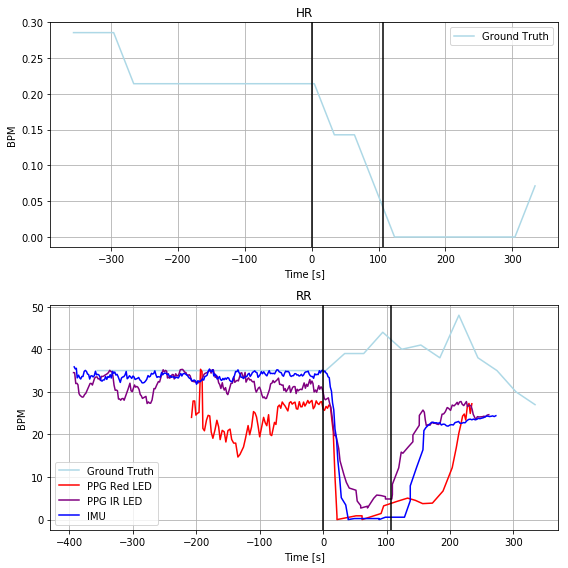

In [24]:
RR_RR_x = [-367.6328442296638, -365.8715881889596, -362.510524577949, -360.7052371362272, -358.98801249654053, -357.4762677282694, -355.56824035083986, -353.54279590402996, -351.91363406637856, -350.4165664317799, -348.6112789900581, -346.70325161262855, -345.1474754433398, -343.5329907393609, -341.8451203670193, -340.01047865795243, -338.42534822131864, -336.92828058672, -333.47915417367426, -331.82063806867774, -330.2942161667341, -328.54763725970236, -326.65428701594533, -324.8930309752411, -323.0730663998467, -321.3558417601601, -319.52120005109316, -317.92139248078684, -316.26287637579037, -314.5016203350861, -312.52020728929386, -309.2031750793009, -307.45659617226914, -305.87146573563535, -303.89005268984306, -302.3195993868818, -300.4849576778149, -298.56225316671276, -297.16792546782193, -295.50940936282547, -293.9536331935367, -292.10431435079727, -290.43112111212827, -288.69921933876907, -286.87925476337466, -285.132675856343, -283.1806170778958, -281.595486641262, -279.73149066485, -278.01426602516335, -276.4438127222021, -274.75594234986056, -272.95065490813874, -271.2334302684521, -269.69233123283584, -267.9604294594767, -266.0670792157197, -264.1737289719626, -262.7500470057267, -260.9007281629872, -258.99270078555764, -257.3782160815788, -255.45551157047663, -253.84102686649777, -251.93299948906818, -250.08368064632873, -248.58661301173015, -246.7519713026632, -245.1228094650118, -243.21478208758222, -241.80577725501882, -240.0885526153322, -238.2979423072829, -236.5953948012688, -235.08365003299767, -233.29303972494836, -231.50242941689905, -229.79988191088498, -228.0679801375258, -226.43881829987438, -224.4867595214272, -222.85759768377577, -221.43391571753986, -219.56991974112788, -217.67656949737082, -215.90063632299405, -214.33018302003276, -212.65698978136376, -210.82234807229685, -208.89964356119472, -207.44660732761372, -205.68535128690948, -203.9387723798778, -202.13348493815596, -198.9925783322334, -197.06987382113127, -195.29394064675452, -193.78219587848338, -191.94755416941646, -190.27436093074743, -188.61584482575094, -186.89862018606433, -185.24010408106784, -183.44949377301853, -181.54146639558894, -179.63343901815935, -178.1070171162157, -176.24302113980372, -174.67256783684243, -172.94066606348326, -171.37021276052198, -169.56492531880016, -167.77431501075085, -166.11579890575436, -164.39857426606773, -162.50522402231067, -160.53848811019094, -158.60110646541628, -157.13339309816277, -155.357459923786, -153.87506942285992, -150.9102884210078, -148.51791563238456, -146.5365025865923, -143.67446152044792, -141.5462771379303, -140.65097198390563, -138.4347247993528, -136.51202028825068, -133.45917648436335, -131.63921190896897, -129.76053879888445, -126.91317486641262, -124.99047035531049, -123.12647437889851, -121.65876101164497, -119.80944216890552, -117.81335198944072, -116.09612734975411, -114.48164264577522, -112.57361526834563, -110.90042202967663, -109.05110318693715, -107.24581574521534, -105.58729964021882, -103.8260435995146, -101.94737048943011, -100.52368852319415, -98.7477553488174, -96.94246790709553, -95.10782619802865, -93.64011283077514, -91.90821105741594, -89.94147514529624, -88.41505324335253, -86.4776715985779, -84.73109269154622, -83.04322231920463, -81.12051780810253, -79.59409590615883, -77.83283986545462, -75.88078108700739, -74.38371345240881, -72.60778027803207, -70.8905556383454, -69.1292995976412, -67.36804355693698, -65.7682359866306, -63.992302812253854, -62.42184950929254, -60.70462486960594, -59.10481729929961, -57.13808138717985, -55.332793945458036, -52.07447027015519, -50.29853709577844, -48.7574380601622, -47.098921955165736, -45.29363451344386, -43.54705560641219, -41.88853950141572, -40.11260632703892, -38.145870414919216, -36.47267717625016, -34.52061839780299, -32.97951936218675, -31.203586187810004, -29.29555881038044, -27.7544597747642, -26.007880867732524, -24.070499222957835, -22.514723053669115, -20.7094356119473, -19.124305175313452, -17.289663466246566, -15.48437602452469, -13.899245587890901, -11.947186809443734, -10.259316437102141, -8.703540267813421, -6.927607093436619, -5.078288250697198, -3.4197721457007324, -1.3502962978732276, 0.5724082132288696, 2.3189871202606023, 4.1095974283098835, 5.914884870031757, 7.588078108700757, 9.642876822855671, 11.506872799267684, 13.3121602409895, 15.484376024524751, 17.568529006024733, 20.445247205841667, 23.380673940348743, 38.51279875673259, 66.31128993251446, 107.78886969109914, 112.19200979285972, 114.56970544781046, 124.99047035531049, 129.3202247887084, 138.44940193302534, 141.42886006855002, 152.78896153109235, 158.89464913886707, 173.76258554914523, 177.9308915121453, 182.2753230792157, 189.32034724203265, 196.6589140783003, 204.1736065186384, 219.08557432993427, 224.26660251633916, 234.2764076810082, 241.6296516509484, 245.85666614863862, 249.37917823004705, 253.29797292061403, 256.2921081898112, 259.6091403998041, 262.647307070019, 265.9056307453218, 268.929120281864, 271.6003586102655, 274.37433687437465, 276.9868666680859, 279.96632480361063, 282.9604600728078, 285.4849270644838, 287.8626227194346, 290.1522555723501, 292.7794624997339, 295.1278038873395]
RR_RR_y = [33.09951580239523, 32.83746505516037, 34.90891176272508, 35.30169736168465, 35.36246275234781, 34.66393213913612, 35.3045006323769, 36.35002279525768, 34.40671834652806, 34.016575120556325, 34.62376587634442, 34.914444016134354, 34.22683389394722, 33.917137556306024, 33.65912966772415, 33.88274630536456, 33.367962170796524, 33.11057827442985, 34.98869908835337, 34.777667070668656, 33.87504783019302, 32.24860658945369, 32.514907915547354, 32.89342566155327, 32.62480016438779, 32.95134315159635, 32.95134315159634, 32.32149640847003, 33.00695378922038, 33.21798580690509, 34.04643974155955, 35.482031698598405, 35.63270218573035, 35.31192443487788, 35.580549932043375, 35.195284088311595, 34.998568700312134, 35.66314184215458, 34.578883798063046, 34.455202029456615, 34.41915907709491, 34.729496607981744, 34.46710946697637, 34.49671972090121, 35.093277643177814, 35.12239024577619, 35.21769808879919, 34.60150640925468, 35.597039729377386, 35.3474675891537, 34.671523605632, 34.833104303531755, 34.63013816901359, 34.852484257576506, 34.103767836905476, 33.883805950606636, 34.72265512780168, 34.824062672778155, 34.292513650802725, 34.19268479471326, 35.30640047046143, 35.08405438189851, 35.31426289717679, 35.12203758415812, 35.94635255604254, 36.052727566629684, 35.39570544241498, 35.64944285559964, 35.43096719826228, 35.969233597987945, 34.78458689291304, 34.97345229632556, 35.83706385135004, 35.53182418107103, 34.731886022882875, 34.759578690928294, 35.22931880777338, 35.29114566283787, 35.097139279122295, 34.534868230794956, 35.59047479518602, 35.314259142695214, 34.53512186078406, 34.639801245122165, 33.38109193977757, 33.12319075645388, 32.6811433076542, 33.06410965261675, 33.06410965261675, 33.5294629281403, 33.01787015799553, 33.10522040707382, 33.287625032203465, 33.314867412963586, 34.54919990461192, 34.573204553213586, 35.12546026019615, 34.37542738989011, 34.92558701473909, 34.804029130205514, 35.006890348807644, 34.836450838410975, 34.56957194016802, 34.83645083841098, 35.185851834724126, 35.2102286484204, 34.330207482333165, 34.20827979034844, 34.47571849687225, 34.38982428920597, 34.61678783081033, 33.316975624047686, 32.47413313218699, 31.88458336849636, 30.48697938324376, 30.137298193669732, 33.788183818223956, 33.39849968476814, 32.43111234612096, 31.017987448842053, 30.267238422110427, 31.437223658063107, 31.03646551068856, 31.128927860857942, 32.251412951375784, 33.52010001729906, 30.062912173216933, 30.361509148542986, 30.7349147934578, 32.485890240890754, 32.33373174249632, 32.72594585431166, 33.863171482959764, 34.06613761747792, 34.46493828081911, 33.78360633800847, 33.73291199702553, 34.941460167262726, 34.8259557056716, 34.43317010671203, 34.558954465384765, 35.0609885285084, 35.280950414807236, 35.00812000450811, 35.32118948129312, 35.01149314365192, 35.253036768335306, 34.59338773361053, 34.33548655028683, 34.942677306074934, 35.07894369463706, 34.06462997526482, 34.608065223767824, 34.93583068287249, 34.49907943748105, 34.80877577512225, 34.780148382567184, 34.97582409011552, 35.23372527343922, 35.12351701525633, 35.21086726433462, 35.887640388185986, 34.93054547291203, 34.87561042410649, 33.22303814424699, 33.194883931734154, 33.68154960517033, 33.548790275565274, 33.49385522675974, 33.10858938302796, 33.232271151634386, 32.86032559183178, 32.86032559183178, 33.12271273283717, 34.35495298705679, 34.86977287300579, 34.354952987056784, 33.88187022213721, 34.45162515689175, 34.45162515689175, 33.93089680156583, 34.40898720272721, 34.68181761302635, 34.881037479345245, 35.077752867344714, 34.50799793259016, 34.914669891108915, 34.84373886178218, 34.50518882808745, 34.926497624180925, 35.208039749309286, 34.59588166951535, 34.89000294851844, 34.00411035148332, 33.85432134420892, 33.96603799808236, 33.531673371518195, 33.78156588676141, 33.81274812670699, 32.87614626462227, 32.71653183147863, 32.795664461305655, 31.94012925447574, 31.919711755440357, 30.88481746623584, 29.493526188059484, 26.539220789759845, 23.431489389657717, 19.990188259359236, 18.432858104363472, 17.73741867600615, 14.989621696069026, 13.613225054843673, 11.391591076202923, 11.319670040719743, 9.803838509040245, 10.390021375975651, 10.577735300328499, 11.872512518881068, 11.890926895713788, 10.219140184187669, 10.460965042762714, 9.873641029561272, 9.618769027762976, 8.763051325130256, 8.834299294780145, 8.667575391225032, 9.683463961761635, 9.947360136793924, 10.097364891891926, 11.249617442233458, 12.240864976729654, 13.417304302801023, 14.85638060252344, 15.682771280978553, 17.329508276589344, 18.67650042661894, 19.55368340542478, 19.864142541927166, 20.336977003229993, 20.70979885976113, 21.42440463393158, 22.070036909727627, 22.512393448167273, 23.082926264355798, 23.508666974149133, 23.853678767178184, 24.004953436577036, 24.562228378182546, 25.247779094632882, 25.379010100881192, 25.617714985749785, 25.797201798924345, 26.18529754901914, 26.373921325132823]

IR_RR_x = [-367.6328442296638, -365.7101397185617, -363.8608208758223, -362.4664931769314, -360.6612057352096, -358.94398109552293, -357.44691346092435, -355.5388860834948, -352.7355535520405, -350.445920699125, -348.62595612373065, -346.688574478956, -345.17682971068484, -343.6504078087412, -341.8304432333468, -340.0398329252975, -338.42534822131864, -337.0163433887552, -335.2110559470334, -333.3764142379665, -331.90870087071295, -330.32357043407916, -328.5769915270474, -326.58090134758265, -325.054479445639, -323.1024206671918, -321.3118103591425, -319.4918457837481, -317.84800681242416, -316.3215849104805, -314.5309746024312, -312.4468216209312, -310.94975398633255, -309.18849794562834, -307.4859504396142, -305.7687257999276, -303.7432813531177, -302.30492225320927, -300.4409262767973, -298.5328988993677, -297.16792546782193, -295.5681178975156, -293.9242789261916, -292.10431435079727, -290.41644397845573, -288.72857360611414, -286.9232861643923, -284.9712273859451, -283.2540027462585, -281.61016377493456, -279.70213639750494, -277.97023462414575, -276.50252125689224, -274.78529661720563, -273.0093634428289, -271.2334302684521, -269.75103976752604, -267.98978372682177, -266.0377249483746, -264.1443747046175, -262.676661337364, -260.9447595640048, -259.0660864539203, -257.18741334383583, -255.66099144189212, -253.8116725991527, -251.94767662274072, -250.18642058203648, -248.63064441274776, -246.76664843633574, -245.06410093032167, -243.27349062227236, -241.7177144529836, -240.1325840163498, -238.26858803993784, -236.5953948012688, -235.0542957656526, -233.3077168586209, -231.53178368424412, -229.6824648415047, -228.09733440487088, -226.43881829987438, -224.5307909224448, -222.84292055010323, -221.46326998488493, -219.5405654737828, -217.72060089838843, -215.97402199135672, -214.37421442105037, -212.70102118238137, -210.79299380495178, -208.95835209588486, -207.43193019394118, -205.70002842058202, -203.92409524620527, -202.13348493815596, -200.70980297192003, -198.9485469312158, -197.02584242011366, -195.30861778042706, -193.76751874481084, -191.94755416941646, -190.23032952972983, -188.32230215230024, -186.972005854427, -185.2254269473953, -183.3907852383284, -181.65888346496922, -179.8682731569199, -178.09233998254317, -176.30172967449386, -174.58450503480722, -173.02872886551847, -171.31150422583184, -169.5355710514551, -167.73028360973325, -166.18918457411704, -164.48663706810294, -162.41716122027546, -160.65590517957122, -159.12948327762757, -157.17742449918038, -155.3134285227684, -153.904423690205, -150.96899695569795, -148.4885613650395, -146.56585685393736, -143.73317005513806, -141.61966280629298, -140.6362948502331, -138.37601626466267, -136.46798888723308, -133.50320788538096, -131.69792044365911, -129.78989306622952, -128.1607312285781, -126.92785200008515, -125.01982462265556, -123.06776584420837, -121.71746954633511, -119.73605650054284, -117.81335198944072, -116.0080645477189, -114.07068290294421, -112.67635520405338, -110.85639062865903, -108.97771751857448, -107.36323281459562, -105.66068530858149, -103.79668933216954, -101.91801622208504, -100.56771992421176, -98.67436968045473, -96.9718221744406, -95.07847193068358, -93.61075856343007, -91.8935339237434, -89.9267980116237, -87.96006209950394, -86.50702586592297, -84.78980122623636, -82.99919091818703, -81.0618092734124, -79.55006450514122, -77.81816273178208, -75.83674968598979, -74.38371345240881, -72.63713454537714, -70.83184710365526, -69.08526819662359, -67.63223196304261, -65.75355885295807, -64.00697994592639, -62.201692504204516, -60.79268767164115, -59.060785898282006, -57.10872711983478, -55.274085410767896, -53.95314338023968, -52.059793136482654, -50.25450569476084, -48.742760926489666, -47.069567687820665, -45.27895737977133, -43.47366993804951, -41.91789376876079, -40.185991995401594, -38.175224682264286, -36.59009424563044, -34.97560954165158, -32.97951936218675, -31.1595547867924, -29.11943320631002, -27.769136908436735, -25.96384946671492, -24.08517635663037, -22.250534647563484, -20.79749841398251, -19.094950907968382, -17.21627779788389, -15.719210163285252, -13.899245587890901, -11.947186809443734, -10.303347838119747, -8.791603069848632, -6.95696136078169, -5.063611117024663, -2.9647810018521445, -1.5410990356161838, 0.5724082132288696, 2.3923727886232777, 4.315077299725375, 5.797467800651476, 7.720172311753573, 9.657553956528206, 11.49219566559515, 13.356191642007106, 15.557761692887427, 17.583206139697268, 20.503955740531808, 22.91100566282762, 28.811213399186784, 35.342537883464956, 41.639028228982625, 45.82201132565518, 61.37977301854255, 69.59896787516232, 76.65866917165181, 84.98060396397932, 91.49725131458496, 102.84267564345475, 104.95618289229986, 107.74483829008153, 112.22136406020479, 114.55502831413793, 124.97579322163796, 129.29087052136333, 134.38383590573306, 138.49343333404295, 141.39950580120495, 152.86234719945503, 158.85061773784946, 167.62754367402556, 169.87314512592343, 173.71855414812762, 175.920124199008, 178.00427718050798, 180.07375302833543, 189.24696157366998, 197.75969910374045, 204.15892938496586, 209.31060330402568, 212.27538430587788, 218.99751152789906, 223.22452602558917, 227.2020292508463, 230.46035292614908, 234.2323762799906, 238.69422491644139, 241.5856202499308, 245.85666614863862, 249.37917823004705, 253.29797292061403, 256.27743105613865, 259.6091403998041, 262.67666133736407, 265.9056307453218, 268.8704117471739, 271.585681476593, 274.4330454090648, 277.06025233644857, 279.922293402593, 282.94578293913526, 285.49960419815636, 287.8626227194346, 290.18160983969517, 292.63269116300853, 295.11312675366696]
IR_RR_y = [32.6958002995602, 32.67215935775552, 33.39664547355047, 33.024257569585146, 32.997454582063085, 32.85425745242655, 32.562778546411295, 33.67649422215947, 34.859754906902765, 35.50964076004523, 36.300864951696305, 36.98907903534342, 36.45544220324892, 35.53055721300823, 36.16455095631839, 35.88741606031503, 35.521872842115584, 34.56031566476186, 34.88673776279831, 35.54710564583017, 34.80992682246127, 33.90361672639078, 34.476164577492156, 34.87694807326312, 34.47031760341593, 34.89064962905581, 34.50214959038973, 35.37680218320129, 34.94570070082672, 34.15954845912213, 35.204425579244216, 36.076009276598576, 35.71816686966021, 35.608274620819785, 35.6389192359387, 35.69968462660186, 36.06094228450782, 34.96320016397509, 35.238319058709855, 35.74370264266281, 34.49262165586411, 34.20657030372778, 34.644569409820335, 34.84181190773905, 34.66554205548477, 34.48927220323049, 35.213218242440064, 35.54620001900165, 35.12586799336177, 34.64486122310509, 35.5882439131506, 35.5882439131506, 34.69399573821162, 34.393729257005006, 34.94598496398757, 34.81191728535502, 33.983291861807345, 33.983291861807345, 34.76620982701748, 34.8161151148996, 34.25225419671148, 34.13866732099979, 34.80151974177665, 35.39295371991089, 34.68108357978469, 35.02260335061709, 35.69703766970974, 35.7256650622648, 35.24757466110343, 35.27312141561452, 35.534168136997906, 35.80104703524087, 35.08906009935747, 34.85865799309299, 35.98869421923228, 35.52334094370874, 34.926783021432136, 34.92678302143214, 35.298728581234755, 35.64024835206716, 34.99967985882638, 34.65238145257953, 35.43853369428412, 35.348158049696124, 34.37773625670048, 34.60794477197876, 35.52560169528541, 35.496974302730344, 34.867127559604036, 34.775179928995314, 35.52389634966635, 35.550270489388055, 35.11351924399662, 34.79372850160831, 35.85869219231126, 35.94316646542457, 34.99913540239622, 35.05687539754967, 35.28708391282795, 35.17157945123682, 34.629066897242396, 34.82630939516111, 35.188895334731356, 35.53829633104451, 34.47333264034156, 34.361615986468124, 34.98454804846642, 35.04427907793551, 34.59275110746456, 34.62090531997738, 35.200853695005364, 34.780521669365484, 34.142816835060465, 34.90713151449549, 33.57262184138703, 32.66798136312784, 31.895260293855138, 30.489259947336837, 30.42885817935717, 33.1236785501754, 31.847457378577037, 31.918388407903763, 30.72325558547923, 29.78850139564755, 30.88911453403398, 32.153059926102344, 33.8991123422474, 34.92559091690831, 35.16038575935559, 33.50237486672748, 33.87597679785019, 33.85197214924853, 35.15178435601116, 34.925177279688334, 36.08371742535826, 35.697609524027044, 34.02469627159019, 34.596443356466246, 35.046896157650366, 33.82231803380378, 33.987919547681365, 35.310784421708, 35.15619974948778, 35.583367111751514, 34.449203779777854, 35.24042797142893, 35.540694452635535, 34.87507844337683, 34.401687747136805, 35.312081180622755, 35.61234766182937, 34.51969130308101, 34.4476688989784, 34.89246209900544, 35.18787602769748, 34.12802633888093, 34.763300877632105, 35.14784794180467, 35.4206783521038, 34.726680956829405, 35.36195549558059, 35.20488614401051, 35.54320987420678, 34.89785638823885, 35.69178132159872, 36.12803906275808, 35.07243249836701, 34.90753871724981, 36.12618121658592, 35.85987989049225, 35.05416584134441, 35.829346298122296, 35.980016785254236, 36.00725916601436, 35.072504976182685, 35.46470116967778, 35.85542294139282, 35.56896513186076, 34.81192963984893, 35.35929991102872, 35.041605676576125, 34.36944920308615, 33.72449280133431, 34.81714916008266, 34.81714916008265, 34.15429673930579, 33.96029035559022, 35.105639341513886, 34.8445926201305, 34.32198005036097, 35.323938789788386, 35.323938789788386, 35.456615535291625, 34.6631388938196, 35.30849237978753, 35.38514222335373, 35.283734678377265, 34.013185600874905, 34.7034792507186, 34.348618863838055, 33.637551371341175, 33.46138822434507, 34.43522677879787, 33.905838546243245, 33.03387798395248, 33.03387798395248, 33.083783271834605, 32.95037561869686, 31.698264025006303, 30.91364809421514, 30.109558468553484, 28.005867497815366, 24.877000816402152, 22.70930830631223, 21.046727967396304, 18.161994232175385, 15.6731016739329, 13.797668218046635, 11.55634160608615, 10.422793283468955, 8.45896300625467, 10.280932753820448, 11.513857499533383, 11.901270824804596, 13.037951722443012, 13.228065604970562, 13.888540447491085, 14.216741710481708, 14.955752547921824, 16.099675957227166, 16.09425882470643, 14.2573344690895, 12.789370557805869, 14.12093539621433, 13.110173620188167, 15.259727918633018, 16.748121929946873, 18.469311214623957, 17.66339285941365, 16.303576756207455, 16.717759091727086, 16.880470340010174, 18.22061794102187, 16.441302566783953, 16.300441955197783, 15.083598190178032, 14.046168509461404, 12.737541878680137, 13.428197311234504, 14.798493831958172, 15.265689196128907, 15.804349065445013, 15.31167383702481, 16.43288823298528, 16.81432406734146, 17.261816930431486, 17.278557273006683, 17.71165728673615, 18.576648409009973, 18.608737934810883, 19.48772402701606, 19.880800147868353, 20.334179099667736, 20.669810598589237, 21.408058469421356, 22.039418091794495, 22.629139261674148, 23.024310990177597, 23.451999742421425, 23.85275788979597, 24.031609244508324, 24.506267201763926, 25.229084475368744, 25.56913217822342, 25.617343417198935, 25.810953630862514, 26.034944406942095, 26.378170957374454]

IMU_RR_x = [-369.4821630724033, -367.720907031699, -365.7541711195793, -364.12500928192793, -362.4224617759138, -360.7052371362272, -359.1054295659208, -357.4175591935793, -355.18663487535395, -353.6748901070828, -351.95766546739617, -350.4018892981074, -348.5672475890405, -346.7326058799736, -345.08876690864963, -343.4008965363081, -341.8451203670193, -339.9517701232623, -338.4106710876461, -336.85489491835733, -335.1229931449982, -333.3323828369489, -331.90870087071295, -330.27953903306155, -328.54763725970236, -326.74234981798054, -324.834322440551, -322.88226366210375, -321.2677789581249, -319.6239399868009, -317.9947781491495, -316.20416784110023, -314.5016203350861, -312.6523014923467, -310.74427411491706, -309.18849794562834, -307.50062757328675, -305.8421114682903, -303.96343835820574, -302.1141195154663, -300.4849576778149, -298.6943473697656, -297.0358312647691, -295.49473222915293, -293.9683103272092, -292.1483457518149, -290.4017668447832, -288.65518793775146, -286.8645776297021, -285.0886444553254, -283.35674268196624, -281.4780695718817, -279.65810499648734, -278.10232882719856, -276.38510418751196, -274.75594234986056, -273.068071977519, -271.3655244715049, -269.7070083665084, -267.9163980584591, -265.9643392800119, -264.32050030868794, -262.61795280267387, -261.0181452323675, -259.0514093202478, -257.31950754688864, -255.60228290720198, -253.79699546548017, -251.83025955336043, -250.201097715709, -248.46919594234987, -246.7519713026632, -245.15216373235688, -243.39090769165264, -241.76174585400122, -240.0885526153322, -238.28326517361037, -236.5953948012688, -235.0983271666702, -233.3517482596385, -231.4877522832265, -229.71181910884977, -228.12668867221595, -226.39478689885678, -224.61885372448, -222.85759768377577, -221.2431129797969, -219.61395114214548, -217.77930943307857, -216.06208479339193, -214.3448601537053, -212.65698978136376, -210.9250880080046, -209.1051234326102, -207.4025759265961, -205.71470555425455, -204.05618944925808, -202.16283920550103, -200.54835450152214, -198.86048412918058, -197.02584242011366, -195.22055497839185, -193.48865320503268, -191.99158557043407, -190.23032952972983, -188.58649055840587, -186.91329731973687, -185.2254269473953, -183.50820230770867, -181.55614352926148, -179.92698169161005, -178.07766284887063, -176.360438209184, -174.37902516339173, -172.8672803951206, -171.2968270921593, -169.5796024524727, -167.75963787707832, -166.14515317309943, -164.39857426606773, -162.66667249270856, -160.567842377536, -158.93868053988461, -157.16274736550784, -155.47487699316628, -153.71362095246204, -150.4112658761416, -148.44452996402188, -146.80069099269792, -145.27426909075425, -143.67446152044792, -141.7077256083282, -140.16662657271198, -138.4347247993528, -136.61476022395843, -134.92688985161686, -131.859368914057, -130.12746714069783, -128.322179698976, -126.67834072765206, -125.09321029101824, -123.40533991867667, -121.40924973921187, -119.50122236178228, -117.76932058842311, -116.27225295382453, -114.21745423966959, -112.45619819896535, -110.87106776233156, -109.13916598897237, -107.34855568092308, -105.55794537287375, -103.88475213420475, -101.96204762310265, -100.42094858748641, -98.7037239477998, -96.927790773423, -95.28395180209907, -93.50801862772232, -91.74676258701805, -90.04421508100398, -88.09215630255676, -86.41896306388776, -84.7604469588913, -82.98451378451449, -81.19390347646521, -79.56474163881376, -77.87687126647222, -76.01287529006026, -74.31032778404614, -72.56374887701446, -70.97861844038061, -69.29074806803908, -67.33868928959185, -65.75355885295807, -64.12439701530667, -62.39249524194747, -60.86607334000382, -59.0167544972644, -57.19678992186999, -55.50891954952846, -53.762340642496724, -52.03043886913758, -50.28385996210591, -48.684052391799526, -47.069567687820665, -45.23492597875372, -43.76721261150021, -41.903216635088256, -40.14196059438399, -38.42473595469738, -36.64880278032058, -34.88754673961637, -33.00887362953182, -31.232940455155074, -29.57442435015861, -27.69575124007406, -26.095943669767735, -24.129207757647976, -22.426660251633905, -20.7094356119473, -19.065596640623312, -17.436434802971917, -15.557761692887366, -13.913922721563436, -11.947186809443734, -10.435442041172562, -8.806280203521167, -6.810190024056339, -5.063611117024663, -3.346386477338057, -1.3502962978732276, 0.5283768122112643, 2.274955719242997, 4.30040016605284, 5.826822067996546, 7.749526579098643, 9.510782619802855, 11.330747195197263, 13.22409743895429, 15.27889615310926, 17.524497605007127, 20.342507270133922, 23.248579737295927, 28.723150597151573, 34.271107125369895, 39.95115785664103, 41.550965426947414, 41.550965426947414, 51.546093457943925, 56.140036297447466, 60.17624805739467, 65.79759025397573, 68.05786883954613, 69.61364500883485, 71.93263212909545, 75.55788414621168, 82.70564824473632, 82.70564824473632, 92.70077627573289, 100.25950011708858, 103.66459512911672, 107.71548402273646, 110.07850254401467, 114.71647678453581, 114.71647678453581, 124.71160481553233, 129.39361045707108, 129.39361045707108, 139.38873848806764, 141.42886006855002, 147.1235879334937, 155.1079486513529, 158.8212634705044, 167.21658393119458, 170.41619907180723, 173.71855414812762, 179.70682468652205, 189.30567010836012, 191.4778858918953, 194.53072969578272, 204.27634645434614, 212.18732150384267, 214.34486015370533, 219.33508560236737, 223.06307755519128, 226.10124422540605, 230.5924471292019, 234.24705341366314, 241.46820318055052, 245.87134328231116, 249.6580437698252, 253.3713585889767, 256.3801709918464, 259.770588870202, 262.7206927383817, 265.77353654226897, 268.76767181146613, 271.73245281331833, 274.5651396121176, 277.2510550741915, 280.09841900666345, 283.048522874843, 285.54363559917397, 287.8919769867797, 290.21096410704024, 292.69139969769867, 295.11312675366696]
IMU_RR_y = [34.61604433711737, 35.06598052576591, 35.28563380882129, 34.873151767768356, 34.99901357986391, 35.05977897052708, 35.16592381188584, 34.780134238605804, 35.98399143079002, 35.871663394788996, 35.84205314086415, 35.33627007165736, 36.280301134685715, 36.692783175738654, 36.507190334174005, 36.27598543311419, 35.56399849723079, 35.46869065420779, 35.29172131841282, 35.08511796648237, 35.30359362381973, 35.30359362381973, 34.61329997397603, 34.174862430339836, 33.85507168795153, 34.388097137918436, 34.79826352489474, 35.34227731914105, 34.81966474937152, 34.41411002150804, 34.414110021508044, 34.414110021508044, 34.50767101457023, 35.15655857915179, 35.942710820856384, 35.382882383367416, 35.26339413618104, 35.0809895110514, 35.23805886262147, 35.37212654125403, 35.153650883916676, 34.996581532346596, 34.675657265821464, 34.63892778103382, 34.20217653564238, 34.58828443697361, 34.707772684159984, 34.79661631622744, 35.06349521447041, 35.03580254642499, 34.645080774709946, 35.10132984355637, 35.32869311701932, 35.22254827566056, 34.779278354964774, 34.56080269762741, 34.500037306964245, 34.29947702102335, 33.732525331721135, 34.064587864770196, 34.45530963648524, 34.29932704884543, 34.525647371512676, 34.18185602422291, 34.813991348331214, 34.93554923286477, 34.76510972246812, 34.99631462352794, 35.953409538801886, 35.705821278866146, 35.46031263805623, 35.34480817646511, 35.37953457518125, 35.437274570334694, 35.13290470533106, 34.953606825644044, 35.34639242460361, 35.474492437352964, 34.73705080513439, 34.795773661657606, 35.070892556392366, 35.24716240864665, 34.92638465779419, 34.758752413800316, 34.90437765093568, 35.05249329067712, 34.953828970720636, 34.439939384691236, 34.88590211089456, 34.94666750155772, 34.7230508639173, 34.49184596285748, 34.49184596285748, 35.20291345535436, 35.08544243073184, 35.180659627708486, 35.14892548971078, 35.53471506299082, 35.312368974427905, 34.83127155812487, 35.2437535991778, 35.164620969350786, 35.19423122327562, 34.214538233613254, 34.77680245826282, 34.94736285783157, 34.85541522722285, 34.59740733864098, 34.8197534272039, 35.181362596320554, 34.9628869389832, 34.5771845404557, 34.76604994386821, 35.11641347736129, 34.70226489245317, 34.288371656166326, 32.61124687386321, 32.36521945108613, 32.298855950163016, 32.79433005207767, 33.080381404214, 33.2723860222694, 33.48283604321477, 33.56873025088105, 33.31072236229918, 33.45883800204062, 33.59792969052509, 34.01158935729604, 33.68516725925958, 33.404398601507935, 33.43912500022408, 33.94316031158303, 33.05571114237589, 32.735920399987585, 32.90355264398145, 33.35661224789645, 34.32062941920064, 34.2628894240472, 34.72449643137149, 34.53890358980685, 34.10453896324268, 33.900576442942985, 34.48065781840097, 34.4566531697993, 34.885578848082034, 34.37175385350386, 34.8302653144272, 35.07359815114529, 34.66692619262654, 34.60918619747309, 34.782504102653874, 34.50536920665053, 34.50536920665053, 35.00245662017177, 34.48763673422276, 34.34443960458622, 34.648809469589864, 34.553592272613216, 34.393977839469585, 34.51144886409211, 34.42260523202465, 35.13410475459215, 35.102922514646586, 34.55890872040028, 34.96558067891903, 35.29764321196809, 35.07916755463073, 35.455153409359, 35.48070016387009, 35.25333689040714, 35.372825137593516, 35.02293478414267, 34.93255913955467, 35.29416830867133, 35.2594419099552, 35.292922595105594, 35.098916211390026, 35.256146659730945, 35.23059990521986, 35.340492154060286, 35.27972676339713, 35.22294515832922, 35.16520516317577, 34.92366153849237, 34.551715978689764, 34.45305165873327, 34.37640181516708, 34.03886121964621, 33.870710193685184, 33.98818121830771, 33.98818121830771, 34.259668267538636, 34.535883920029434, 34.535883920029434, 34.80737096926036, 34.24041927995815, 35.015599736736036, 34.94802404193707, 34.9031602177836, 34.81431658571614, 34.81431658571614, 34.17020025322709, 33.68106836860796, 33.92261199329135, 33.23493223734893, 34.11495340343616, 33.266633782950066, 32.99041813045927, 33.2813093773898, 33.01500805129614, 32.44099212878167, 32.10700588230587, 31.04242472166424, 29.671779865997298, 27.80544338668151, 24.956161452461167, 22.891885727749347, 23.235677075039128, 20.35017637611042, 17.18119059559579, 14.261196554978742, 13.075849003850061, 12.014047428484256, 12.603945214467497, 15.364564801656158, 16.87042201903954, 17.4691507764917, 14.558123053313764, 14.48866160950993, 14.48866160950993, 14.48866160950993, 14.764184558170035, 15.177980209667018, 15.062565425452906, 12.499637768594141, 10.321100442594533, 8.666043091637501, 7.826619753472437, 7.9833499989024075, 7.9833499989024075, 7.9833499989024075, 7.274890726694397, 6.545203383850516, 5.621885110137614, 5.042900720389701, 6.509327085374812, 8.326212266203198, 9.328171005630617, 9.454710614610889, 12.216867139518907, 14.182247743780383, 13.744303040756524, 13.751273996735842, 14.916413723087839, 15.404080354305659, 15.138300357832534, 15.29629037355674, 15.630276620032546, 16.64696516075806, 14.715701249033753, 14.112984530393566, 15.081816026544876, 15.939182994992569, 15.152378561283907, 15.719721431920732, 16.14410259267951, 16.13460800038839, 16.802580493340002, 17.184575021696205, 18.471812800669934, 19.343024137378627, 19.865743441381042, 20.28376315734061, 20.69432186032551, 21.479623287915697, 22.033133084644543, 22.48668245485873, 22.960335677133507, 23.444547772795573, 23.834387722272403, 24.237926472112655, 24.768128250023164, 25.211872256195637, 25.427678753918467, 25.771968831402567, 25.946788864624597, 26.165272862319178, 26.413029932432135]

#PLOT DATA
fig = plt.figure(figsize = (8, 8))
FONT = 10

ax = fig.add_subplot(211)
ax.plot(Q0825ts, Q0825hr, c = GTcolor, label = "Ground Truth")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(Q0825naloxone) - timestr(Q0825fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("HR")
plt.legend()
plt.grid()

ax = fig.add_subplot(212)
ax.plot(Q0825ts, Q0825rr, c = GTcolor, label = "Ground Truth")
plt.plot(Red_RRx, Red_RRy, c = REDcolor, label = "PPG Red LED")
plt.plot(IR_RRx, IR_RRy, c = IRcolor, label = "PPG IR LED")
plt.plot(IMU_RRx, IMU_RRy, c = IMUcolor, label = "IMU")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(Q0825naloxone) - timestr(Q0825fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("RR")
plt.legend()
plt.grid()

plt.tight_layout()

## PIG 2

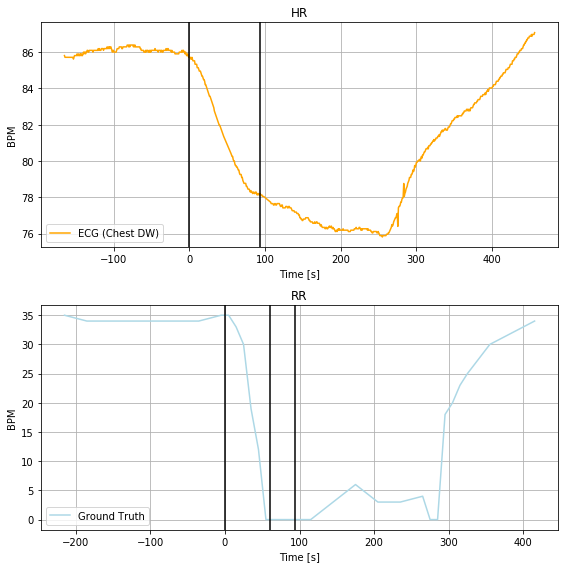

In [27]:
Red_HRx = [-127.41591830822709, -125.63027954808805, -124.60126738122825, -123.844640787949, -122.75509849362687, -122.14979721900346, -120.90892960602548, -120.24309820393974, -119.45620654692931, -119.06276071842409, -118.6390498261877, -117.67056778679026, -116.94420625724217, -115.85466396292004, -115.21909762456546, -114.250615585168, -113.58478418308226, -112.46497682502896, -111.7083502317497, -110.80039831981459, -110.04377172653533, -108.1370727114716, -107.1080605446118, -106.4119640787949, -106.2001086326767, -105.50401216685978, -105.05003621089223, -104.53553012746234, -103.4459878331402, -102.81042149478561, -101.81167439165701, -101.20637311703359, -100.1773609501738, -99.60232473928157, -98.30092699884125, -97.81668597914252, -97.51403534183082, -96.27316772885283, -94.5783241599073, -94.12434820393973, -93.12560110081112, -92.42950463499419, -91.49128765932791, -90.67413093858632, -89.91750434530705, -88.94902230590961, -87.5265643105446, -87.19364860950172, -85.95278099652374, -85.40800984936268, -83.62237108922363, -82.26044322132097, -81.95779258400925, -80.47480446118192, -78.9615512746234, -78.41678012746233, -76.96405706836616, -75.3902737543453, -74.90603273464659, -73.51383980301274, -72.93880359212051, -71.9097914252607, -71.36502027809965, -70.42680330243337, -69.76097190034763, -68.42930909617613, -67.85427288528389, -66.5226100811124, -66.06863412514484, -64.85803157589802, -64.3737905561993, -63.253983198146, -62.618416859791424, -61.43807937427577, -60.83277809965237, -59.743235805330244, -58.98660921205098, -58.472103128621086, -57.83653679026651, -57.4430909617613, -56.62593424101969, -55.99036790266513, -54.71923522595597, -54.295524333719584, -53.78101825028969, -53.08492178447277, -52.38882531865585, -51.390078215527225, -50.36106604866744, -48.93860805330243, -47.87933082271147, -46.91084878331402, -45.57918597914252, -43.88434241019699, -43.18824594438007, -42.219763904982614, -41.55393250289687, -40.28279982618771, -39.76829374275782, -38.83007676709154, -38.04318511008111, -36.772052433371954, -36.25754634994206, -35.379859501738125, -34.592967844727696, -32.86785921205099, -32.020437427578216, -31.173015643105444, -29.96241309385863, -29.41764194669757, -28.2675695249131, -27.78332850521437, -26.058219872537663, -24.30284617612979, -22.456677288528397, -21.18554461181924, -20.640773464658167, -18.824869640787952, -18.037977983777523, -17.70506228273466, -17.160291135573587, -16.373399478563158, -15.556242757821563, -14.406170336037091, -13.67980880648899, -12.62053157589804, -11.954700173812283, -10.744097624565468, -10.169061413673232, -9.109784183082281, -8.504482908458867, -7.32414542294323, -6.779374275782159, -5.6898319814600296, -5.054265643105451, -4.025253476245664, -3.3896871378910856, -2.1790845886442707, -1.6343134414831992, -0.5750362108922487, 0.1210602549246731, 1.271132676709145, 1.9369640787949025, 2.9357111819235104, 3.5712775202780893, 4.691084878331383, 5.326651216685962, 6.4464585747392835, 7.051759849362684, 8.322892526071842, 8.928193800695242, 10.017736095017385, 10.592772305909607, 11.68231460023175, 12.408676129779836, 13.407423232908444, 14.285110081112395, 15.31412224797218, 16.403664542294322, 17.584002027809944, 18.64327925840091, 20.005207126303574, 20.640773464658153, 21.246074739281553, 23.273834009269976, 24.181785921205076, 24.93841251448434, 25.84636442641944, 26.845111529548078, 27.783328505214357, 28.29783458864425, 29.629497392815736, 29.901882966396286, 30.597979432213194, 31.203280706836594, 32.59547363847044, 33.41263035921203, 34.44164252607182, 35.349594438006946, 36.10622103128618, 37.61947421784471, 38.46689600231748, 39.647233487833134, 40.797305909617606, 41.402607184241006, 41.79605301274621, 42.61320973348781, 43.40010139049825, 43.884342410196965, 44.5804388760139, 45.45812572421782, 45.88183661645421, 46.48713789107761, 47.152969293163366, 48.393836906141345, 49.08993337195828, 50.179475666280396, 50.72424681344147, 51.96511442641945, 52.69147595596753, 53.69022305909617, 54.32578939745075, 54.6587050984936, 55.68771726535341, 56.4140787949015, 56.898319814600214, 57.200970451911914, 57.89706691772882, 58.80501882966395, 59.319524913093844, 60.227476825028944, 60.62092265353415, 61.83152520278098, 62.46709154113556, 63.193453070683645, 64.55538093858631, 65.2817424681344, 65.82651361529547, 66.55287514484355, 67.27923667439164, 68.45957415990729, 69.21620075318653, 69.63991164542291, 70.42680330243336, 71.15316483198144, 72.51509269988411, 73.27171929316337, 73.78622537659326, 74.81523754345305, 75.66265932792582, 76.11663528389339, 77.2061775782155, 78.56810544611817, 79.38526216685976, 80.29321407879489, 81.11037079953648, 81.44328650057936, 81.92752752027808, 82.62362398609498, 83.4407807068366, 83.98555185399765, 84.9540338933951, 85.7711906141367, 87.40550405561991, 88.70690179606022, 89.91750434530705, 90.61360081112396, 90.94651651216684, 92.12685399768249, 93.24666135573578, 94.06381807647738, 94.91123986095015, 95.90998696407878, 96.51528823870218, 97.93774623406718, 98.78516801853995, 99.99577056778678, 100.78266222479719, 101.1761080533024, 102.02352983777517, 102.78015643105444, 104.23287949015061, 104.98950608342987, 105.77639774044029, 106.68434965237542, 107.53177143684819, 108.80290411355732, 109.92271147161064, 110.73986819235223, 111.61755504055618, 112.01100086906139, 113.19133835457704, 114.00849507531863, 114.5532662224797, 115.1585674971031, 115.91519409038237, 116.55076042873692, 116.85341106604865, 117.76136297798375, 118.06401361529545, 118.79037514484354, 119.4562065469293, 120.63654403244492, 121.30237543453067, 122.5129779837775, 124.17755648899187, 126.29611095017377, 127.08300260718421, 127.47644843568942, 128.50546060254922, 129.20155706836616, 130.10950898030129, 131.13852114716107, 132.22806344148316, 133.1057502896871, 134.0742323290846, 134.679533603708, 135.43616019698723, 136.04146147161063, 137.07047363847042, 138.55346176129777, 139.43114860950172, 140.09698001158748, 141.91288383545768, 142.4879200463499, 143.09322132097336, 143.8498479142526, 144.69726969872536, 145.75654692931633, 146.3921132676709, 147.11847479721897, 147.93563151796056, 148.78305330243333, 149.60021002317492, 151.08319814600227, 151.9911500579374, 153.3530779258401, 154.1702346465817, 155.19924681344148, 155.5624275782155, 156.13746378910773, 156.5611746813441, 157.3178012746234, 158.10469293163382, 159.10344003476243, 159.79953650057936, 160.73775347624562, 161.28252462340672, 163.03789831981456, 164.09717555040552, 165.24724797219002, 166.21573001158745, 166.97235660486675, 167.39606749710313, 168.15269409038237, 168.81852549246813, 169.18170625724215, 170.02912804171493, 171.02787514484353, 172.17794756662803, 173.11616454229429, 174.50835747392816, 174.93206836616454, 175.53736964078794, 176.53611674391655, 177.2322132097335, 178.6244061413673, 179.4415628621089, 180.68243047508687, 181.6509125144843, 182.74045480880645, 183.37602114716103, 184.49582850521435, 185.1616599073001, 186.03934675550406, 186.7959733487833, 187.67366019698724, 188.24869640787946, 189.39876882966396, 190.0343351680185, 191.21467265353417, 192.09235950173812, 192.60686558516798, 194.39250434530706, 195.66363702201622, 196.1478780417149, 196.87423957126302, 197.44927578215524, 198.17563731170335, 198.87173377752023, 200.35472190034758, 200.96002317497098, 201.53505938586326, 202.4732763615295, 203.13910776361527, 204.19838499420624, 204.98527665121665, 206.19587920046345, 207.01303592120505, 208.1025782155272, 208.76840961761295, 209.73689165701037, 211.0685544611819, 212.12783169177285, 212.73313296639625, 213.33843424101966, 213.8226752607184, 214.18585602549243, 214.67009704519117, 215.30566338354575, 216.09255504055616, 217.30315758980296, 217.90845886442636, 219.30065179606024, 220.08754345307065, 221.26788093858627, 222.35742323290842, 223.44696552723056, 224.1430619930475, 225.3536645422943, 226.08002607184235, 227.3511587485515, 227.9564600231749, 229.46971320973344, 230.40793018539975, 231.4672074159907, 232.1633038818076, 233.22258111239856, 233.73708719582848, 234.49371378910772, 235.22007531865583, 235.9464368482039, 237.03597914252603, 237.7018105446118, 238.4887022016222, 239.15453360370796, 239.9111601969872, 240.21381083429893, 240.97043742757816, 241.63626882966392, 242.42316048667433, 243.0587268250289, 243.96667873696404, 244.6325101390498, 246.53920915411354, 247.29583574739277, 248.35511297798374, 248.99067931633832, 249.50518539976824, 250.50393250289684, 251.13949884125142, 251.593474797219, 252.47116164542288, 253.71202925840092, 254.4081257242178, 255.31607763615293, 256.1332343568945, 256.7385356315179, 257.4951622247971, 258.13072856315176, 258.9176202201622, 259.43212630359204, 260.21901796060246, 260.94537949015063, 261.8230663383545, 262.15598203939743, 262.8823435689455, 263.9718858632677, 264.7587775202781, 265.636464368482, 266.57468134414825, 266.9681271726535, 267.66422363847045, 268.3905851680185, 269.3893322711471, 270.11569380069517, 271.29603128621085, 272.96060979142527, 273.8685617033603, 274.17121234067207, 274.80677867902665, 275.71473059096166, 276.7134776940904, 277.47010428736957, 278.89256228273456, 279.73998406720733, 280.5874058516801, 281.61641801853995, 282.4335747392815, 283.1296712050984, 284.0678881807648, 285.67193655851673, 287.3970451911935, 289.42480446118185, 290.332756373117, 291.05911790266504, 291.9973348783314, 292.6934313441482, 293.2382024913093, 294.2974797219003, 295.2054316338354, 295.8712630359211, 297.626636732329, 298.32273319814595, 298.95829953650053, 300.53208285052136, 301.8940107184241, 303.13487833140204, 304.5270712630359, 306.01005938586326, 307.3417221900348, 309.06683082271144, 309.7629272885284, 311.2156503476245, 311.6696263035921, 312.27492757821545, 313.3947349362688, 313.90924101969864, 314.6356025492468, 316.1791207995364, 316.96601245654693, 319.29642236384694, 320.7794104866743, 321.50577201622247, 323.0492902665122, 323.745386732329, 325.9244713209733, 328.19435110081105, 329.4654837775202, 330.0102549246813, 330.49449594438005, 331.58403823870214, 332.28013470451907, 333.55126738122823, 334.4289542294321, 336.5777737543453, 338.63579808806486, 339.906930764774, 340.6332922943221, 342.69131662804165, 343.6295336037079, 344.68881083429886, 345.77835312862106, 346.53497972190024, 347.07975086906134, 348.5627389918887, 350.2273174971031, 350.8931488991888, 351.83136587485507, 352.6182575318655, 354.0407155272306, 354.8578722479721, 356.55271581691767, 357.94490874855154, 358.5502100231749, 359.4278968713789, 360.39637891077626, 362.4241381807647, 364.240042004635, 365.87435544611816, 366.388861529548, 367.6599942062572, 368.2047653534183, 369.4153679026651, 370.05093424101966, 371.26153679026646, 371.9878983198145, 373.0471755504055, 373.89459733487826, 374.9236095017381, 375.61970596755503, 376.7697783893395, 377.4658748551564, 379.25151361529544, 380.5529113557357, 381.21874275782153, 382.9135863267671, 384.45710457705667]
Red_HRy = [81.96925894398122, 82.10526469625232, 82.68834818090245, 82.57896976171293, 82.7907735916072, 82.14733585152835, 82.37183315136754, 82.1787340752821, 81.91186124961531, 81.48825358982675, 80.59389997427314, 81.21342617671392, 80.73519542395262, 80.5263130261948, 79.90727045076608, 79.7597642120897, 79.96001510580795, 79.75462263508884, 79.72412288358404, 80.86555297777797, 81.17393935410404, 81.62175316588053, 81.77292295819723, 81.4326797348888, 79.42659488889011, 79.13106934635935, 78.71054246955106, 78.03999646220339, 78.53271905595747, 78.15510308494595, 78.54559232769648, 78.06267959553755, 78.58097602633765, 78.0882534325836, 78.57125060480763, 77.91528168457621, 76.87683776429454, 76.88892608043972, 77.63629102306668, 76.88105908104365, 77.142255898937, 76.80201267562855, 77.06363077871204, 76.93013018289989, 77.08117657130451, 76.99745681421791, 77.51969166774448, 76.2532400696346, 76.7609493477324, 76.13158939604654, 76.78681710845845, 76.89695510000348, 75.95788380367222, 76.10398522102788, 76.53352338805348, 76.0328961537579, 76.30349380539869, 76.50533039623912, 75.81696794908271, 75.89432239130498, 75.41733379634306, 75.27480227787304, 75.11746228995156, 75.46919329520826, 74.86395738508972, 75.07422082349387, 74.82380181113885, 75.03406524954299, 74.31316203215736, 74.45705198885328, 74.38416655327201, 74.29892461878384, 75.55764452215557, 75.91126482945734, 75.91126482945734, 75.79154962125622, 75.73280935909888, 75.14972587444875, 74.86651389619011, 74.13451986007546, 73.79676335267071, 73.56075337078852, 73.59706259877039, 72.7027089832168, 72.52778393782175, 73.19082201401254, 73.06312579193134, 73.22486689839606, 73.88083581862749, 74.32098024367329, 74.43817140709065, 75.23470509594307, 75.77538250898229, 76.32249655789104, 75.94407970465045, 76.1865030012577, 75.8360639372508, 76.46542388893667, 75.78278956544382, 75.96931358338298, 75.80757247691825, 76.27959244068266, 76.91568351484644, 76.81515187956194, 76.87869302853022, 77.76994124958537, 79.04439515174926, 79.1983147051507, 79.36352169246823, 79.42830874631824, 79.56743041984879, 79.85336559020608, 80.00118236833231, 80.60341473589378, 81.1044523203814, 81.07298432279711, 80.79763934393455, 81.56860528474974, 81.63214643371802, 80.65592332684164, 80.06287260313765, 80.09337235464243, 80.77517896896877, 81.01596648084859, 81.01596648084859, 80.89009449051142, 80.78195900790358, 81.45250501525125, 80.99217594842219, 81.1337819375515, 81.46419591218658, 81.50655667816544, 80.84572872889528, 81.029292048137, 80.74608006987836, 80.89724986219505, 81.75546797813033, 82.49889942105925, 82.25946900465702, 82.42729832510656, 82.66672874150882, 82.76454866821, 82.5976729234448, 82.36404688077353, 81.88104970854948, 81.84086422514793, 81.75877379666717, 83.02522539477704, 82.54231266261807, 82.60609914420787, 82.34911049726946, 82.50645048519094, 82.06379061486645, 82.50434258104654, 82.10011271846106, 82.20738998295299, 82.01939582497096, 82.19880612794024, 83.17310374545391, 83.37280449935425, 83.59937408196116, 83.57183958407491, 83.4207931956703, 83.19204505938447, 83.55697989704113, 83.60418189341755, 83.28320831805777, 83.15818681414179, 83.29168740995398, 83.33579161124005, 83.6946122171786, 83.75237689805887, 82.28387034412518, 82.5233007605274, 82.52330076052742, 82.88531955012759, 83.09510620068953, 84.49450656384987, 84.4945065638499, 85.68399687253616, 86.11353503956178, 86.30663411564717, 86.30663411564717, 86.68605686163961, 86.19043589968702, 85.025899933141, 84.5748586344328, 84.57485863443281, 84.8607938047901, 84.5819277903922, 84.76026216950558, 84.00503022748254, 83.59687178822746, 83.24643272422053, 83.44651519834774, 83.20409190174048, 83.6446438679206, 83.33625749159454, 83.84396676969233, 83.60101531775477, 83.40485117696954, 83.1444263693754, 82.24329734764336, 81.99062783762831, 82.20800545251981, 81.96019497154352, 80.77070466285721, 80.61678510945578, 80.52238111670289, 80.30025407493143, 80.46546106224896, 79.67472676397698, 79.88713574767097, 79.677349097109, 79.25590270089079, 79.47617868398085, 79.09069571357325, 78.72356907508983, 78.48061762315227, 79.30665255973996, 79.8417359194729, 80.46480227164189, 79.84173591947288, 79.84173591947288, 79.61645366403987, 80.03785119690778, 79.88436857643214, 79.81958152258213, 79.57830559789932, 79.43669960877, 78.63674998596929, 78.70558623068491, 79.058027803629, 79.73983441795535, 79.87200000780938, 80.03887575257458, 79.88868758228591, 79.35766512305096, 79.09646830515763, 78.88392130393038, 78.42205230712864, 78.23350085421188, 78.91530746853824, 79.53942275396007, 79.67913267980998, 80.04546121690541, 79.61448646738138, 78.54648170088416, 78.52168515494532, 78.60540491203191, 78.4218415927902, 78.6578515746724, 78.59290533887189, 78.50279243669868, 78.7646024826311, 78.8495660761087, 79.03756023409072, 79.31847899795052, 78.31519769845127, 78.55120768033348, 78.26654333295556, 78.53714098459636, 78.91031441477246, 78.48383483864633, 78.29502685314057, 78.82604931237552, 79.18006428519882, 79.68767039132385, 79.7794520509447, 79.95778643005809, 78.83738739518874, 79.3203001273477, 79.62945940186006, 79.16759040505833, 79.07747750288512, 78.85090792027822, 78.66936178036883, 77.18249889451097, 77.25592422220765, 75.82413033212231, 75.89922441726665, 75.6176215979754, 75.55985691709513, 75.22515185188037, 75.720772813833, 76.3515631290454, 77.30740355566832, 78.1969796412243, 77.91104447086704, 78.2720009137457, 78.17254520231707, 78.00733821499952, 78.41549665425462, 78.29578144605351, 78.37466011373829, 78.26346310304379, 77.82291113686368, 77.58060755546462, 77.45131513060741, 77.36385260790989, 77.7852990041281, 77.57370384795784, 77.66381675013106, 77.72989954505807, 77.32599791222742, 76.90117994483947, 76.9701359047633, 76.82852991563398, 77.42827292841699, 77.27722654001238, 77.27722654001238, 77.36900819963324, 77.21166821171177, 77.37854395647696, 77.73644920372689, 77.97675027618877, 78.32919184913285, 79.57742241997649, 79.78733247445054, 79.03639162300718, 78.75547285914739, 78.28345289538298, 78.15128730552895, 78.28992253964158, 78.00384983432983, 77.93489387440599, 77.86180691227473, 77.70446692435326, 78.52882633368621, 78.56315505832362, 78.98548871011282, 79.68761840621237, 79.57823998702281, 78.64571274153705, 78.7146687014609, 78.47436762899902, 77.55655103279045, 77.83976301104909, 78.03200386901862, 78.4543375208078, 78.57732038977868, 79.31251260955494, 78.65894650588116, 78.49373951856363, 78.57660195734358, 79.51691050175961, 79.91197068882329, 79.72840736958159, 80.00736851139357, 80.07145742888744, 80.16027838981084, 80.74122603752086, 81.06736909121473, 80.9922750060704, 80.90941256729043, 80.94245396475395, 80.76716803656558, 80.08420709377918, 80.22332876730975, 81.26177268759143, 81.69748342337395, 81.67469625270947, 81.10928196456388, 81.56626129219475, 81.51604640243258, 80.98502394319765, 80.86701895225654, 80.40668988542748, 80.31490822580663, 80.31490822580663, 80.54983060408568, 79.9326422363711, 79.23703386871829, 78.89341606168325, 78.6531149892214, 78.91272596929181, 78.78974310032093, 79.15607163741635, 79.52319827589977, 79.53893227469192, 79.29863120223004, 79.5802340215213, 79.47147707062263, 79.76700261315337, 79.71980061677692, 79.10980558668139, 78.31130514797995, 77.142767920612, 76.33469026525445, 75.79523887809513, 75.48330960134173, 75.33549282321552, 75.2062003983583, 75.18824311712814, 75.74740522804903, 76.230317960208, 76.21543444783704, 76.8309114594122, 76.79499689695187, 76.68809825809934, 76.62455710913106, 76.41000258014724, 75.82334919661149, 76.25288736363709, 76.00209876808863, 76.2976243106194, 75.71101979043392, 75.4089270136247, 74.71478000808882, 75.02316638441489, 75.43618385270875, 75.16083887384619, 75.4720984151691, 75.04298935720145, 74.96411068951669, 74.34220474494104, 73.84075294814193, 72.33028906409585, 72.36333046155936, 71.7537431821524, 71.63076031318153, 71.25314434217, 71.14300635062497, 71.03487086801714, 71.82157080762448, 71.43316580886976, 71.22719346104529, 71.18428255524854, 70.65762650459678, 70.81936761106151, 70.29713275753494, 69.70973013596148, 69.38012998885011, 69.32757209256671, 69.45686451742391, 69.47965168808841, 69.36492461356234, 68.66957580127058, 68.20699623678149, 67.6300829477361, 68.03375612941699, 67.33960912388109, 67.67849525171194, 67.34808127707686, 67.608506084671, 66.30186900315955, 66.30186900315955, 66.31760300195171, 66.2631391599789, 66.1626075246944, 66.38504610509388, 65.38176480559464, 65.38176480559463, 64.89174408050025, 64.7520341546503, 64.82712823979466, 64.67281402087167, 64.70108473527895, 65.20642375530907, 63.986433695118, 63.72600888752386, 63.3610740498672, 63.44393648864716, 63.38519622648982, 63.33744470867824, 62.929791103609, 62.90537627789704, 63.05654607021374, 62.62729030829466, 62.473370754893224, 62.5963536238641, 62.53698004351638, 62.80870206213076, 63.27530273813666, 62.93423024819077, 62.48224886779372, 62.2933024600112, 62.42259488486841, 61.857021414772326, 62.23463738578384, 62.14023339303096, 62.14023339303097, 62.14623001689005, 61.626088077809335, 61.00704550238061, 61.00704550238063, 61.88814943474083, 61.77867034512405, 61.93077908025017, 62.470230467409486, 62.62041863769816, 63.1737434756038, 62.91254665771046, 63.183144309351256, 62.35710937276355, 62.68752334739863, 62.45671441709221, 62.053041235411335, 61.98950008644305, 62.240288681991494, 62.27078843349628, 62.32800297455864, 62.29746799037981, 62.03785701030939, 62.41162847482871, 62.34267251490487, 62.77535748168891, 63.150537220629374, 63.36213237679962, 63.251994385254584, 62.53464825611265, 62.92799822591632, 62.66680140802296, 62.52519541889365, 62.6676152355467, 63.04922010766046, 63.20824287620141, 64.38829278561239, 63.85379959134977, 64.22308579829485, 64.48470390137837, 64.29233350105174, 64.11569709951726, 63.63246666161345, 63.21470186609783, 64.61237136919243, 65.49097216538117, 65.22935406229766, 65.45179264269714, 65.3501268043479, 65.63635167599227, 65.42380467476502, 65.93173920098975, 65.85477942428905, 65.23066413886723, 64.92110257512323, 64.64938055650886, 64.87519372063495, 65.4067292450479, 65.40005421525728, 64.58169142978342, 64.93570640260671, 64.45385268959723, 64.33228528383528, 63.7300529162738, 63.63092872388327, 64.22095367858877, 64.0855044715955, 63.828039036814914, 64.34633546761505, 64.10391217100779, 64.40824083185588, 64.16581753524862, 64.77384325128412, 64.67992713446279, 64.37955079388544, 64.88748532011017, 65.2612567846295]

#Default RR filter parameters commented out
#Red_RRx = [-127.14353273464657, -125.41842410196986, -122.2103273464658, -120.1825680764774, -118.45745944380069, -115.00724217844727, -113.16107329084588, -111.55702491309385, -109.68059096176128, -107.74362688296638, -104.62632531865584, -100.9945176709154, -97.63509559675549, -95.75866164542293, -93.91249275782154, -92.12685399768249, -90.4017453650058, -87.10285341830821, -85.0750941483198, -81.74593713789106, -80.0813586326767, -78.26545480880648, -74.72444235225956, -71.27422508690613, -67.7332126303592, -65.88704374275783, -64.31326042873697, -60.92357329084588, -57.26150057937427, -53.75075318655851, -51.722993916570104, -48.30304171494785, -43.097450753186564, -41.34207705677868, -39.55643829663963, -37.92212485515644, -36.10622103128621, -34.35084733487834, -32.62573870220163, -31.051955388180772, -27.48067786790267, -25.816099362688306, -24.030460602549255, -22.305351969872547, -20.307857763615303, -15.223327056778684, -12.015230301274626, -8.534747972190045, -6.597783893395144, -4.872675260718436, -3.2686268829664, -1.6948435689455421, 0.09079519119349458, 2.02775926998841, 5.477976535341826, 7.021494785631505, 9.049254055619928, 12.771856894553865, 15.01147161066048, 19.79335168018538, 21.760580822711447, 25.483183661645413, 29.296581691772886, 33.71528099652373, 37.16549826187715, 41.3118119930475, 52.26776506373115, 61.16569380069522, 74.33099652375434, 94.54805909617612, 97.42324015063728, 102.71962630359211, 113.70584443800693, 121.36290556199303, 124.90391801853995, 138.1297508690614, 142.45765498261875, 147.3303302433372, 161.70623551564307, 173.3280199884125, 179.41129779837775, 183.79973203939744, 190.63963644264192, 194.2411790266512, 197.4795408458864, 201.0508183661645, 207.40648174971028, 216.00175984936266, 225.89843568945537, 242.9679316338354, 258.94788528389336, 267.1497175550405, 278.438586326767, 281.04138180764767, 284.1586833719582, 287.8812862108922, 291.4222986674391, 294.53960023174966, 297.5358415411355, 300.5018177867902, 303.19540845886434, 305.85873406720737, 308.3404692931633, 310.79193945538816, 313.2434096176129, 315.573819524913, 317.9042294322131, 320.1438441483198, 322.23213354577047, 324.50201332560823, 326.80215816917723, 328.7693873117033, 330.9484719003475, 333.0367612977983, 335.125050695249, 337.27387022016217, 339.1805692352259, 341.3596538238702, 343.2663528389339, 345.29411210892226, 347.200811123986, 349.34963064889905, 351.3471248551564, 353.3446190614136, 355.2210530127461, 357.12775202780983, 359.00418597914245, 360.9411500579373, 362.8175840092699, 364.6940179606024, 366.60071697566616, 368.56794611819225, 370.5957053881807, 372.3510790845886, 374.2275130359211, 375.982886732329, 377.91985081112387, 379.76601969872524, 381.5516584588644, 383.458357473928, 385.27426129779826, 387.24149044032436, 388.9363340092699, 390.63117757821544, 392.5681416570103, 394.29325028968697, 396.1696842410196, 397.8645278099651, 399.7409617612976, 401.61739571263024, 403.2214440903823, 405.0676129779837, 406.76245654692923, 408.63889049826173, 410.3639991309385, 412.17990295480865, 413.8747465237542, 415.7511804750868, 419.29219293163374, 420.9870365005793, 422.71214513325594, 426.22289252607175, 428.1598566048666, 429.76390498261867, 431.51927867902657, 433.24438731170324, 434.99976100811114, 438.4499782734646, 440.38694235225944, 443.71609936268817, 445.4109429316337, 448.74009994206244, 450.6770640208573, 452.28111239860937, 454.0970162224796, 457.54723348783307, 460.8763904982618, 464.44766801853984, 466.20304171494774, 467.83735515643093]
#Red_RRy = [28.734739780918282, 26.908767815829684, 26.824521519390345, 27.06314499649801, 26.8350766792348, 28.456197875035816, 28.684266192299027, 26.762523151319506, 26.52389967421184, 25.22852670547204, 26.908301192584183, 28.560371065759586, 28.468780220399896, 27.01024654628919, 25.454703664442654, 25.344535070510425, 25.6789621703435, 25.630244513532954, 24.309729800547064, 24.216509556919615, 23.570924586126512, 22.021195324563752, 21.479371573671397, 23.15842625421264, 24.824137729991403, 25.245430593824842, 24.737101402078558, 26.3851021376353, 28.224727572750147, 30.328158711010605, 29.04929865234207, 30.89940425448218, 33.10693948115329, 33.166905719744044, 32.810527010584494, 30.31931053516127, 28.885438569763743, 27.19126196818657, 26.810851142126445, 26.476424042293367, 28.53688854673343, 28.74484139790236, 28.74484139790236, 28.364430571842227, 27.099688085200775, 29.806861406790723, 30.89552474197248, 30.783401229901195, 30.36480244446824, 28.14149721874251, 27.45093680731361, 25.25024335524131, 23.46350111952296, 21.723735756504347, 21.723735756504347, 19.283581027554845, 16.87229738319065, 15.934836131115011, 13.711547317633862, 12.753589724228885, 11.790439676709623, 11.311512103719403, 10.284251025554454, 9.709975830049226, 9.66538555007148, 8.671974679097952, 9.510679548453309, 10.067721741715648, 10.02934334901756, 10.248836165251566, 9.148321434338182, 9.382703761172918, 9.713770202517217, 10.596132562123303, 10.754490565782579, 11.980903992171175, 11.538591578573763, 11.005292844253301, 11.19419199730397, 11.029424390271846, 10.418584443948514, 9.782898059359836, 9.437189827102676, 10.076450790340376, 10.148403747342842, 10.080108175901113, 10.83049888752657, 12.057182794451556, 13.453427557991512, 15.124866031503748, 16.97690554714216, 18.498184246191634, 20.384350465091945, 20.526647611790946, 21.049416935197762, 22.012295796978798, 22.89251950563036, 23.64681013258528, 24.517466192229758, 25.13783528746297, 25.518856724800884, 26.316009320948456, 26.65179588053695, 27.077449954140917, 27.50310402774489, 27.720680451503124, 28.29282586212664, 28.367243423981392, 28.640878185583936, 28.956497504638342, 29.494765884369677, 29.237021505456074, 29.48733512260386, 29.617933531550534, 29.94232312796646, 30.296892114831742, 30.347646949645117, 30.691828173223325, 30.7425830080367, 30.981206485144366, 30.981206485144366, 31.238950864057966, 31.19411857441956, 31.608430768319344, 31.608430768319344, 31.87970660956326, 31.779783028524424, 31.932125537321337, 32.09471305901164, 32.04395822419826, 32.20129821211973, 32.201298212119724, 32.78251682421768, 32.90459095277744, 32.8046673717386, 32.86463361032937, 32.9645571913682, 33.25473339860041, 33.09214587691011, 33.142900711723485, 33.579296527279254, 33.77929489780237, 33.77929489780237, 33.43669976281208, 33.81711058887221, 33.64320849695902, 33.9858036319493, 33.643208496959005, 32.140084542870554, 32.482679677860844, 32.22018595421828, 30.67925023305411, 30.236731517024985, 30.779712485688844, 30.719746247098083, 30.893648339011293, 30.77157421045153, 29.31304053634082, 30.716240909390443, 28.978349224621514, 29.04045711459051, 29.133677358217966, 29.13367735821796, 29.13367735821796, 29.019741504895517, 27.280720585763515, 25.664903029554353, 25.605953167888856, 25.926397755358227, 27.795406096728374, 27.859772455423517, 29.798049973866018, 29.847218720091472, 29.99390638918585, 29.99390638918585, 30.040906954567795, 30.0409069545678, 30.084734895197357, 30.084734895197357, 27.644824937574604]
Red_RRx = [-127.14353273464657, -125.41842410196986, -122.2103273464658, -120.1825680764774, -118.45745944380069, -116.67182068366164, -115.00724217844727, -113.16107329084588, -111.55702491309385, -109.68059096176128, -107.74362688296638, -104.62632531865584, -100.9945176709154, -99.54179461181923, -97.63509559675549, -95.75866164542293, -93.91249275782154, -92.12685399768249, -90.4017453650058, -88.73716685979142, -87.10285341830821, -85.0750941483198, -83.56184096176129, -81.74593713789106, -80.0813586326767, -78.26545480880648, -76.44955098493627, -74.72444235225956, -72.81774333719582, -71.27422508690613, -67.7332126303592, -65.88704374275783, -64.31326042873697, -60.92357329084588, -58.926079084588636, -57.26150057937427, -53.75075318655851, -51.722993916570104, -50.300535921205096, -48.30304171494785, -46.820053592120516, -44.76202925840093, -43.097450753186564, -41.34207705677868, -39.55643829663963, -37.92212485515644, -36.10622103128621, -34.35084733487834, -32.62573870220163, -31.051955388180772, -29.447907010428736, -27.48067786790267, -25.816099362688306, -24.030460602549255, -22.305351969872547, -20.307857763615303, -17.0392308806489, -15.223327056778684, -13.86139918887602, -12.015230301274626, -10.108531286210903, -8.534747972190045, -6.597783893395144, -4.872675260718436, -3.2686268829664, -1.6948435689455421, 0.09079519119349458, 2.02775926998841, 3.7226028389339536, 5.477976535341826, 7.021494785631505, 9.049254055619928, 10.895422943221307, 12.771856894553865, 15.01147161066048, 17.13002607184241, 19.79335168018538, 21.760580822711447, 25.483183661645413, 29.296581691772886, 33.71528099652373, 37.16549826187715, 41.3118119930475, 46.75952346465816, 49.21099362688294, 52.26776506373115, 58.86554895712628, 61.16569380069522, 61.16569380069522, 71.15316483198144, 74.33099652375434, 78.96155127462337, 78.96155127462337, 88.9490223059096, 94.54805909617612, 97.42324015063728, 102.71962630359211, 110.52801274623404, 113.70584443800693, 118.03374855156427, 121.36290556199303, 124.90391801853995, 129.80685834298953, 133.16628041714944, 138.1297508690614, 142.45765498261875, 147.3303302433372, 156.8032951911935, 161.70623551564307, 161.70623551564307, 171.69370654692932, 173.3280199884125, 177.1111529548088, 179.41129779837775, 183.79973203939744, 186.70517815758978, 190.63963644264192, 194.2411790266512, 197.4795408458864, 201.0508183661645, 207.40648174971028, 211.976506373117, 216.00175984936266, 225.89843568945537, 232.37515932792581, 240.1532807068366, 242.9679316338354, 247.1142453650058, 247.1142453650058, 257.101716396292, 258.94788528389336, 262.7007531865585, 267.1497175550405, 275.230489571263, 278.438586326767, 281.04138180764767, 284.1586833719582, 287.8812862108922, 291.4222986674391, 294.53960023174966, 297.5358415411355, 300.5018177867902, 303.19540845886434, 305.85873406720737, 308.3404692931633, 310.79193945538816, 313.2434096176129, 315.573819524913, 317.9042294322131, 320.1438441483198, 322.23213354577047, 324.50201332560823, 326.80215816917723, 328.7693873117033, 330.9484719003475, 333.0367612977983, 335.125050695249, 337.27387022016217, 339.1805692352259, 341.3596538238702, 343.2663528389339, 345.29411210892226, 347.200811123986, 349.34963064889905, 351.3471248551564, 353.3446190614136, 355.2210530127461, 357.12775202780983, 359.00418597914245, 360.9411500579373, 362.8175840092699, 364.6940179606024, 366.60071697566616, 368.56794611819225, 370.5957053881807, 372.3510790845886, 374.2275130359211, 375.982886732329, 377.91985081112387, 379.76601969872524, 381.5516584588644, 383.458357473928, 385.27426129779826, 387.24149044032436, 388.9363340092699, 390.63117757821544, 392.5681416570103, 394.29325028968697, 396.1696842410196, 397.8645278099651, 399.7409617612976, 401.61739571263024, 403.2214440903823, 405.0676129779837, 406.76245654692923, 408.63889049826173, 410.3639991309385, 412.17990295480865, 413.8747465237542, 415.7511804750868, 419.29219293163374, 420.9870365005793, 422.71214513325594, 424.67937427578204, 426.22289252607175, 428.1598566048666, 429.76390498261867, 431.51927867902657, 433.24438731170324, 434.99976100811114, 436.78539976825016, 438.4499782734646, 440.38694235225944, 443.71609936268817, 445.4109429316337, 447.19658169177274, 448.74009994206244, 450.6770640208573, 452.28111239860937, 454.0970162224796, 455.580004345307, 457.54723348783307, 460.8763904982618, 462.7225593858632, 464.44766801853984, 466.20304171494774, 467.83735515643093, 469.50193366164524, 471.1059820393973, 473.01268105446104, 474.55619930475075]
Red_RRy = [32.03563546383144, 30.48233522538345, 30.26413731760556, 31.435380884409017, 31.104138804574355, 30.941551282884046, 30.58700871695669, 30.69717731088891, 30.434683587246354, 30.841645080931784, 31.415280453562126, 32.44946996988118, 34.76236779232674, 33.93633285573904, 34.39404918423785, 34.50063433734594, 34.55480056269595, 34.67270028602694, 34.34145820619227, 34.624165350265066, 32.647329604585096, 32.938372009450845, 32.78587325192696, 31.25180836969266, 30.65105568853797, 30.951432029115306, 29.35633008260113, 28.83721936047217, 29.908470342065147, 29.02501051683766, 31.376465281378263, 31.04190918362817, 30.833956332459245, 32.48195706801599, 32.83833577717555, 32.90508607508163, 34.500188021595804, 34.959332505134, 34.21932360337571, 35.02802913569933, 34.72267929391104, 34.85723702113799, 34.85723702113799, 34.799303536397765, 34.91720325972875, 34.24970028066799, 32.781193726734294, 32.66725787341185, 33.594735696948916, 33.03224027985263, 32.4385044763754, 33.20099826399481, 32.69411318927054, 32.81201291260153, 33.074506636244095, 33.88321216856771, 35.407721091083616, 35.20121235693669, 34.33584242336863, 34.50394450204108, 35.24436797461269, 34.39083015265065, 34.54317266144757, 34.26268541642627, 33.20118208129063, 32.22083292577995, 31.113513365177027, 31.065857503450815, 29.13748326124259, 27.292807540784015, 24.763449958968334, 23.54353976196529, 21.74063474301595, 19.644460065223498, 19.412938761675395, 18.54367427395086, 17.200247980084292, 16.75880420830463, 15.602772135569614, 14.029372256354947, 12.671506607169682, 12.228226765037999, 11.166106582949753, 10.064726667499485, 7.617215744276669, 7.741185552373207, 7.964637204944244, 6.124510418420847, 7.556846860188682, 8.943199201314894, 10.745457244778967, 11.144146806932909, 11.982953948581116, 13.768975433095065, 14.977807047613652, 14.277334285781459, 14.375842799958377, 14.240819628809485, 13.576495235363293, 12.706414729604395, 10.904156686140322, 9.209726046986066, 9.571957663623042, 10.394467557807095, 10.552866183157809, 11.231601183500848, 11.525232331528201, 12.557803723788606, 13.186836904990733, 14.350636127089928, 15.294676054618728, 16.607579265089246, 16.512181546096862, 14.50991434104121, 14.069078422578679, 12.775385574420898, 13.382101061343874, 13.163216750109203, 11.81745722438275, 10.137386166916238, 9.193346239387438, 9.479220325538279, 9.337259434180563, 9.47349857432491, 10.417372033871429, 11.951191317083774, 11.744229854737965, 11.908936838711302, 13.096338360778478, 15.02107996059448, 17.023588897776783, 17.44775430300286, 18.326635776464663, 19.83695501700806, 20.384350465091945, 20.526647611790946, 21.049416935197762, 22.012295796978798, 22.89251950563036, 23.64681013258528, 24.517466192229758, 25.13783528746297, 25.518856724800884, 26.316009320948456, 26.65179588053695, 27.077449954140917, 27.50310402774489, 27.720680451503124, 28.29282586212664, 28.367243423981392, 28.640878185583936, 28.956497504638342, 29.494765884369677, 29.237021505456074, 29.48733512260386, 29.617933531550534, 29.94232312796646, 30.296892114831742, 30.347646949645117, 30.691828173223325, 30.7425830080367, 30.981206485144366, 30.981206485144366, 31.238950864057966, 31.19411857441956, 31.608430768319344, 31.608430768319344, 31.87970660956326, 31.779783028524424, 31.932125537321337, 32.09471305901164, 32.04395822419826, 32.20129821211973, 32.201298212119724, 32.78251682421768, 32.90459095277744, 32.8046673717386, 32.86463361032937, 32.9645571913682, 33.25473339860041, 33.09214587691011, 33.142900711723485, 33.579296527279254, 33.77929489780237, 33.77929489780237, 33.43669976281208, 33.81711058887221, 33.64320849695902, 33.9858036319493, 33.643208496959005, 32.140084542870554, 32.482679677860844, 32.22018595421828, 32.02018758369515, 32.367261086463095, 32.26733750542426, 32.52983122906683, 32.64376708238927, 32.581659192420275, 32.8021801988508, 34.46789167462957, 34.53225803332471, 34.15184720726459, 32.904130100250995, 32.557056597483054, 32.81956770021219, 32.96625536930657, 32.6458107818372, 32.90830450547976, 32.79436865215733, 33.480111940919166, 32.92557100446868, 31.63019803572888, 33.0779135132656, 33.0158056232966, 33.073739108036825, 32.8577822618701, 33.364667336594366, 33.36466733659437, 33.207327348672905, 33.048665175978996, 33.30282977185213, 35.04072145662106, 35.39526402254842, 35.39526402254842, 35.717723984781735, 35.46453319962076, 35.33805895095661, 35.01559898872329, 36.274318892095025, 34.0961334609307]
Red_RRx = [i+15 for i in Red_RRx]

#Default RR filter parameters commented out
#IR_RRx = [-125.81186993047507, -123.844640787949, -122.08926709154112, -120.30362833140207, -118.57851969872537, -116.94420625724217, -114.97697711471609, -110.0740367902665, -107.62256662804171, -104.59606025492467, -102.59856604866742, -100.9945176709154, -99.32993916570103, -97.48377027809964, -95.87972190034762, -94.00328794901505, -89.22140787949014, -87.07258835457705, -85.25668453070683, -83.62237108922363, -81.74593713789106, -80.0813586326767, -78.23518974507532, -76.57061123986095, -74.6941772885284, -73.09012891077636, -71.3044901506373, -69.45832126303593, -67.76347769409038, -64.40405561993047, -60.893308227114716, -57.35229577056779, -55.68771726535341, -53.811283314020855, -50.27027085747393, -48.4543670336037, -45.21600521436848, -43.248776071842414, -41.40260718424102, -38.28530561993048, -36.318076477404404, -34.41137746234068, -32.68626882966396, -31.021690324449594, -29.326846755504064, -27.571473059096178, -25.725304171494784, -23.939665411355733, -22.123761587485518, -20.39865295480881, -18.885399768250295, -17.402411645422944, -15.586507821552727, -13.770603997682512, -11.984965237543461, -10.259856604866753, -8.474217844727702, -6.960964658169187, -5.175325898030136, -3.3896871378910856, -1.604048377752035, 0.12106025492467312, 1.694843568945531, 3.5107473928157606, 5.447711471610647, 8.837398609501735, 12.711326767091537, 14.73908603707993, 17.008965816917723, 23.42515932792584, 32.86785921205096, 37.34708864426419, 41.34207705677868, 46.45687282734646, 52.47962050984934, 56.74699449594435, 61.28675405561991, 65.2817424681344, 71.45581546929314, 76.2982256662804, 79.08261152954806, 81.56434675550405, 83.59210602549244, 94.51779403244494, 96.87846900347621, 102.59856604866742, 105.44348203939744, 107.4107111819235, 111.587289976825, 113.85716975666277, 121.30237543453067, 129.0502317497103, 133.4084009269988, 135.67828070683657, 138.09948580533023, 142.69977549246812, 150.0844510428737, 156.0769336616454, 161.4641150057937, 165.1867178447277, 169.12117612977983, 173.3885501158748, 179.5323580533024, 183.46681633835453, 190.76069669756663, 194.39250434530703, 199.26517960602547, 207.55780706836612, 214.24638615295476, 226.14055619930474, 233.6160269409038, 242.48369061413672, 248.5064382966396, 259.4321263035921, 262.88234356894543, 267.17998261877165, 271.9618626882966, 278.438586326767, 281.67694814600225, 284.21921349942056, 287.8812862108922, 291.3920336037079, 294.5698652954808, 297.59637166859784, 300.4110225955967, 303.10461326767086, 305.82846900347613, 308.3102042294321, 310.7314093279258, 313.33420480880636, 315.60408458864424, 317.9042294322131, 319.8714585747392, 322.32292873696395, 324.38095307068363, 326.7416280417149, 328.7391222479721, 330.9484719003475, 333.0064962340671, 335.125050695249, 337.24360515643093, 339.2713644264194, 341.32938876013895, 343.20582271147157, 345.2335819814599, 347.2916063151795, 349.2891005214368, 351.19579953650054, 353.19329374275776, 355.190787949015, 357.12775202780983, 359.0949811703359, 360.9411500579373, 362.93864426419464, 364.6940179606024, 366.6612471031285, 368.56794611819225, 370.3838499420625, 372.3510790845886, 374.07618771726527, 376.0736819235225, 377.8593206836615, 379.67522450753177, 381.5819235225955, 383.3372972190034, 385.2137311703359, 387.1506952491309, 388.87580388180754, 390.6009125144842, 392.41681633835447, 394.3537804171493, 396.1696842410196, 397.7434675550404, 399.7409617612976, 401.52660052143676, 403.2214440903823, 405.12814310544604, 406.88351680185383, 408.6086254345306, 410.30346900347615, 412.2101680185399, 413.81421639629184, 415.7511804750868, 417.4157589803011, 419.2316628041714, 420.86597624565456, 422.71214513325594, 426.25315758980287, 428.0690614136731, 429.6731097914252, 431.5495437427577, 433.15359212050976, 435.0602911355735, 438.5105084009268, 440.3566772885283, 441.93046060254915, 445.4109429316337, 447.0452563731169, 448.9216903244495, 450.70732908458854, 452.28111239860937, 454.03648609501727, 455.67079953650045, 457.54723348783307, 460.93692062572404, 462.60149913093846, 464.3871378910775, 466.20304171494774, 467.8070900926998, 469.4716685979141, 471.1967772305908, 472.9824159907299]
#IR_RRy = [28.684989877077975, 29.375550288506883, 29.561990775761785, 29.451822181829556, 29.71431590547212, 29.240604113880607, 27.445365575941224, 29.01384088589387, 29.870469709021858, 31.559252246045606, 31.753043433514858, 31.617023958536436, 31.26248139260908, 31.617023958536436, 31.074042989872577, 31.617023958536436, 33.722429460931174, 34.18017221036791, 34.416182192250105, 32.53093729192983, 31.04242049852374, 29.13233505074985, 29.48687761667721, 29.079916122991772, 27.576792168903317, 27.14039635334755, 25.633042881228068, 25.433044510704946, 25.14286830347273, 25.281588418774785, 26.622525769415823, 28.074894888690903, 27.94842064002676, 28.355382133712197, 30.201101222790943, 30.315037076113377, 31.712221954300635, 32.02238891875599, 32.076555144106, 33.629855382554, 34.54484792769731, 35.443933572962834, 35.27003148104963, 34.969655140472284, 34.7896475271723, 34.84961376576306, 34.95978235969529, 35.564607940383226, 35.62061030896545, 35.50271058563446, 34.89788500494652, 34.33004143951566, 34.83837063126194, 34.83837063126194, 34.575859528532796, 32.86789255438531, 31.05656594555422, 30.050529366068297, 29.33369904821592, 26.908690823759542, 24.183960198509375, 22.045434473630834, 19.734847238420482, 17.60377485763801, 15.50236688453488, 15.138308933759145, 14.911149326197526, 13.454099912949209, 11.782593923618807, 12.086512438023714, 13.605974695960956, 14.684121811612666, 16.141171224860983, 15.517268360071181, 17.062691279701824, 16.70560761917083, 17.492977090641663, 19.041070538232596, 19.505847228895753, 20.910106621094847, 19.561120616487152, 17.917865140500943, 16.335658918678735, 18.42980621498085, 18.366265066012566, 18.621597502551783, 17.32506551279083, 15.276344830904321, 14.953517303170972, 13.921980992115113, 14.641080824341554, 15.272689984631352, 14.872558118796587, 13.754233896954778, 12.098736492922168, 12.446540676748567, 12.86540372370985, 12.587683506144419, 12.370980050310745, 11.263653380522728, 10.541290844883282, 9.811889579259404, 9.831519589882078, 8.855696515421771, 9.772110028823281, 9.516155541429912, 9.53953572675671, 9.742395797137755, 10.698132925104918, 12.553783927690157, 13.38957529123993, 14.421997443359663, 15.313854259316518, 16.747173606348476, 17.13985574937828, 17.971250304956342, 18.9192735233186, 20.410542430949004, 21.035858597898574, 20.98097255560038, 21.985867949531865, 22.885361528393247, 24.04725682381331, 24.512283899225643, 25.295998260314544, 25.61013427768584, 26.41113785255876, 26.709205921892107, 27.146518535379716, 27.67342454144231, 27.86223252694806, 28.212632264385103, 28.078074537158148, 28.82811820717805, 28.871631900062386, 29.245403364581705, 29.245403364581712, 29.676471824640522, 29.76481780716327, 29.936461430350327, 30.201972659967804, 30.29301669431042, 30.627572792060498, 30.433781604591246, 30.89292608812944, 31.027483815356398, 31.170520168012274, 31.32786015593374, 31.37407190063795, 31.848350333128497, 31.75448272669808, 32.064649691153434, 32.11881591650344, 32.26185226915932, 32.26185226915932, 32.40943171192437, 32.360262965698915, 32.53416505761212, 32.962231745398455, 32.788329653485256, 32.882197259915664, 32.82619489133346, 33.33452408307973, 33.19148773042385, 33.13355424568363, 33.47614938067392, 33.52531812689938, 33.46535188830862, 33.465351888308625, 33.70136187019081, 33.75053061641627, 34.18692643197205, 33.47208850607884, 34.07284118723352, 34.016838818651316, 34.14795547525254, 34.25112923782399, 32.527484277305, 32.3535821853918, 32.55396801906537, 32.60472285387875, 32.60472285387875, 32.65389160010421, 30.78839643230806, 30.734230206958046, 30.8754327602209, 29.34935823731618, 31.32619398299615, 31.219608829888056, 30.839215382914507, 31.454129727768873, 31.13166976553555, 31.656136391940443, 33.11467006605115, 31.634771409166866, 31.426818557997933, 33.063061674834884, 32.69593503635146, 33.23891600501532, 33.48328997701044, 33.148862877177365, 33.09092939243714, 33.2321319457, 33.33871709880809, 35.53360993031255, 35.23323358973521, 35.47760756173033, 35.71361754361253, 35.391157581379204, 35.204717094124305, 33.79176259732955, 32.08369035557193]
IR_RRx = [-125.81186993047507, -123.844640787949, -122.08926709154112, -120.30362833140207, -118.57851969872537, -116.94420625724217, -114.97697711471609, -110.0740367902665, -107.62256662804171, -104.59606025492467, -102.59856604866742, -100.9945176709154, -99.32993916570103, -97.48377027809964, -95.87972190034762, -94.00328794901505, -89.22140787949014, -87.07258835457705, -85.25668453070683, -83.62237108922363, -81.74593713789106, -80.0813586326767, -78.23518974507532, -76.57061123986095, -74.6941772885284, -73.09012891077636, -71.3044901506373, -69.45832126303593, -67.76347769409038, -64.40405561993047, -60.893308227114716, -57.35229577056779, -55.68771726535341, -53.811283314020855, -50.27027085747393, -48.4543670336037, -45.21600521436848, -43.248776071842414, -41.40260718424102, -38.28530561993048, -36.318076477404404, -34.41137746234068, -32.68626882966396, -31.021690324449594, -29.326846755504064, -27.571473059096178, -25.725304171494784, -23.939665411355733, -22.123761587485518, -20.39865295480881, -18.885399768250295, -17.402411645422944, -15.586507821552727, -13.770603997682512, -11.984965237543461, -10.259856604866753, -8.474217844727702, -6.960964658169187, -5.175325898030136, -3.3896871378910856, -1.604048377752035, 0.12106025492467312, 1.694843568945531, 3.5107473928157606, 5.447711471610647, 8.837398609501735, 12.711326767091537, 14.73908603707993, 17.008965816917723, 23.42515932792584, 32.86785921205096, 37.34708864426419, 41.34207705677868, 46.45687282734646, 52.47962050984934, 56.74699449594435, 61.28675405561991, 65.2817424681344, 71.45581546929314, 76.2982256662804, 79.08261152954806, 81.56434675550405, 83.59210602549244, 83.59210602549244, 93.57957705677866, 94.51779403244494, 96.87846900347621, 102.59856604866742, 105.44348203939744, 107.4107111819235, 111.587289976825, 113.85716975666277, 121.30237543453067, 129.0502317497103, 133.4084009269988, 135.67828070683657, 138.09948580533023, 142.69977549246812, 150.0844510428737, 156.0769336616454, 161.4641150057937, 165.1867178447277, 169.12117612977983, 173.3885501158748, 179.5323580533024, 183.46681633835453, 190.76069669756663, 194.39250434530703, 199.26517960602547, 207.55780706836612, 214.24638615295476, 214.24638615295476, 224.233857184241, 226.14055619930474, 233.6160269409038, 242.48369061413672, 248.5064382966396, 248.5064382966396, 258.49390932792573, 259.4321263035921, 262.88234356894543, 267.17998261877165, 271.9618626882966, 278.438586326767, 281.67694814600225, 284.21921349942056, 287.8812862108922, 291.3920336037079, 294.5698652954808, 297.59637166859784, 300.4110225955967, 303.10461326767086, 305.82846900347613, 308.3102042294321, 310.7314093279258, 313.33420480880636, 315.60408458864424, 317.9042294322131, 319.8714585747392, 322.32292873696395, 324.38095307068363, 326.7416280417149, 328.7391222479721, 330.9484719003475, 333.0064962340671, 335.125050695249, 337.24360515643093, 339.2713644264194, 341.32938876013895, 343.20582271147157, 345.2335819814599, 347.2916063151795, 349.2891005214368, 351.19579953650054, 353.19329374275776, 355.190787949015, 357.12775202780983, 359.0949811703359, 360.9411500579373, 362.93864426419464, 364.6940179606024, 366.6612471031285, 368.56794611819225, 370.3838499420625, 372.3510790845886, 374.07618771726527, 376.0736819235225, 377.8593206836615, 379.67522450753177, 381.5819235225955, 383.3372972190034, 385.2137311703359, 387.1506952491309, 388.87580388180754, 390.6009125144842, 392.41681633835447, 394.3537804171493, 396.1696842410196, 397.7434675550404, 399.7409617612976, 401.52660052143676, 403.2214440903823, 405.12814310544604, 406.88351680185383, 408.6086254345306, 410.30346900347615, 412.2101680185399, 413.81421639629184, 415.7511804750868, 417.4157589803011, 419.2316628041714, 420.86597624565456, 422.71214513325594, 426.25315758980287, 428.0690614136731, 429.6731097914252, 431.5495437427577, 433.15359212050976, 435.0602911355735, 438.5105084009268, 440.3566772885283, 441.93046060254915, 445.4109429316337, 447.0452563731169, 448.9216903244495, 450.70732908458854, 452.28111239860937, 454.03648609501727, 455.67079953650045, 457.54723348783307, 460.93692062572404, 462.60149913093846, 464.3871378910775, 466.20304171494774, 467.8070900926998, 469.4716685979141, 471.1967772305908, 472.9824159907299]
IR_RRy = [28.684989877077975, 29.375550288506883, 29.561990775761785, 29.451822181829556, 29.71431590547212, 29.240604113880607, 27.445365575941224, 29.01384088589387, 29.870469709021858, 31.559252246045606, 31.753043433514858, 31.617023958536436, 31.26248139260908, 31.617023958536436, 31.074042989872577, 31.617023958536436, 33.722429460931174, 34.18017221036791, 34.416182192250105, 32.53093729192983, 31.04242049852374, 29.13233505074985, 29.48687761667721, 29.079916122991772, 27.576792168903317, 27.14039635334755, 25.633042881228068, 25.433044510704946, 25.14286830347273, 25.281588418774785, 26.622525769415823, 28.074894888690903, 27.94842064002676, 28.355382133712197, 30.201101222790943, 30.315037076113377, 31.712221954300635, 32.02238891875599, 32.076555144106, 33.629855382554, 34.54484792769731, 35.443933572962834, 35.27003148104963, 34.969655140472284, 34.7896475271723, 34.84961376576306, 34.95978235969529, 35.564607940383226, 35.62061030896545, 35.50271058563446, 34.89788500494652, 34.33004143951566, 34.83837063126194, 34.83837063126194, 34.575859528532796, 32.86789255438531, 31.05656594555422, 30.050529366068297, 29.33369904821592, 26.908690823759542, 24.183960198509375, 22.045434473630834, 19.734847238420482, 17.60377485763801, 15.50236688453488, 15.138308933759145, 14.911149326197526, 13.454099912949209, 11.782593923618807, 12.086512438023714, 13.605974695960956, 14.684121811612666, 16.141171224860983, 15.517268360071181, 14.521045320970439, 13.11502840762967, 14.335018467820735, 13.882070017743782, 15.019289580004699, 16.83021232560081, 16.11192107639412, 16.337569644437586, 14.184526271314931, 14.409769523587372, 15.786494417900206, 18.42980621498085, 18.366265066012566, 18.621597502551783, 17.32506551279083, 15.276344830904321, 14.953517303170972, 13.921980992115113, 14.641080824341554, 15.272689984631352, 14.872558118796587, 13.754233896954778, 12.098736492922168, 12.446540676748567, 12.86540372370985, 12.587683506144419, 12.370980050310745, 11.263653380522728, 9.738665805283897, 8.33264889194313, 8.158680903064447, 7.3103089755425, 7.483924608912754, 6.381019236515881, 5.1496628093044015, 4.426128558278679, 5.268097962564308, 6.159764532109574, 7.414501144647853, 8.34089546605462, 9.391059069268769, 11.074543240373885, 11.716736604422296, 12.876609903480391, 14.764689758537992, 16.747173606348476, 17.13985574937828, 17.971250304956342, 18.9192735233186, 20.410542430949004, 21.035858597898574, 20.98097255560038, 21.985867949531865, 22.885361528393247, 24.04725682381331, 24.512283899225643, 25.295998260314544, 25.61013427768584, 26.41113785255876, 26.709205921892107, 27.146518535379716, 27.67342454144231, 27.86223252694806, 28.212632264385103, 28.078074537158148, 28.82811820717805, 28.871631900062386, 29.245403364581705, 29.245403364581712, 29.676471824640522, 29.76481780716327, 29.936461430350327, 30.201972659967804, 30.29301669431042, 30.627572792060498, 30.433781604591246, 30.89292608812944, 31.027483815356398, 31.170520168012274, 31.32786015593374, 31.37407190063795, 31.848350333128497, 31.75448272669808, 32.064649691153434, 32.11881591650344, 32.26185226915932, 32.26185226915932, 32.40943171192437, 32.360262965698915, 32.53416505761212, 32.962231745398455, 32.788329653485256, 32.882197259915664, 32.82619489133346, 33.33452408307973, 33.19148773042385, 33.13355424568363, 33.47614938067392, 33.52531812689938, 33.46535188830862, 33.465351888308625, 33.70136187019081, 33.75053061641627, 34.18692643197205, 33.47208850607884, 34.07284118723352, 34.016838818651316, 34.14795547525254, 34.25112923782399, 32.527484277305, 32.3535821853918, 32.55396801906537, 32.60472285387875, 32.60472285387875, 32.65389160010421, 30.78839643230806, 30.734230206958046, 30.8754327602209, 29.34935823731618, 31.32619398299615, 31.219608829888056, 30.839215382914507, 31.454129727768873, 31.13166976553555, 31.656136391940443, 33.11467006605115, 31.634771409166866, 31.426818557997933, 33.063061674834884, 32.69593503635146, 33.23891600501532, 33.48328997701044, 33.148862877177365, 33.09092939243714, 33.2321319457, 33.33871709880809, 35.53360993031255, 35.23323358973521, 35.47760756173033, 35.71361754361253, 35.391157581379204, 35.204717094124305, 33.79176259732955, 32.08369035557193]
IR_RRx = [i+15 for i in IR_RRx]

#HR WINDOW 10, SMALL WINDOW, ADD HALF WINDOW SIZE
ECG_HRx_DW = [-172.4609375, -171.765625, -164.0625, -163.3671875, -162.6640625, -161.96875, -161.265625, -160.5703125, -159.8671875, -159.1640625, -158.4609375, -157.765625, -157.0625, -156.3671875, -155.6640625, -154.96875, -154.265625, -153.5625, -152.8671875, -152.171875, -151.46875, -150.7734375, -150.0703125, -149.375, -148.6796875, -147.9765625, -147.2734375, -146.578125, -145.875, -145.1796875, -144.484375, -143.78125, -143.0859375, -142.3828125, -141.6875, -140.9921875, -140.296875, -139.59375, -138.8984375, -138.203125, -137.5, -136.8046875, -136.109375, -135.4140625, -134.71875, -134.015625, -133.3203125, -132.625, -131.9296875, -131.234375, -130.53125, -129.8359375, -129.140625, -128.4453125, -127.7421875, -127.046875, -126.3515625, -125.65625, -124.9609375, -124.265625, -123.5625, -122.8671875, -122.171875, -121.4765625, -120.78125, -120.078125, -119.390625, -118.6875, -117.9921875, -117.296875, -116.6015625, -115.90625, -115.2109375, -114.515625, -113.8125, -113.1171875, -112.4296875, -111.7265625, -111.03125, -110.3359375, -109.640625, -108.953125, -108.25, -107.5546875, -106.859375, -106.1640625, -105.46875, -104.7734375, -104.078125, -103.375, -102.671875, -101.9765625, -101.28125, -100.5859375, -99.8828125, -99.1875, -98.4921875, -97.796875, -97.1015625, -96.40625, -95.7109375, -95.015625, -94.3203125, -93.625, -92.9296875, -92.234375, -91.5390625, -90.84375, -90.1484375, -89.4453125, -88.75, -88.0625, -87.3671875, -86.671875, -85.9765625, -85.28125, -84.5859375, -83.890625, -83.1953125, -82.5, -81.8046875, -81.1171875, -80.4140625, -79.7265625, -79.0234375, -78.3359375, -77.640625, -76.9453125, -76.25, -75.5546875, -74.859375, -74.1640625, -73.46875, -72.7734375, -72.078125, -71.3828125, -70.6875, -69.9921875, -69.296875, -68.6015625, -67.90625, -67.2109375, -66.515625, -65.8203125, -65.1171875, -64.421875, -63.71875, -63.0234375, -62.328125, -61.6328125, -60.9375, -60.234375, -59.5390625, -58.84375, -58.1484375, -57.4453125, -56.75, -56.0546875, -55.359375, -54.65625, -53.9609375, -53.265625, -52.5625, -51.875, -51.171875, -50.4765625, -49.78125, -49.0859375, -48.390625, -47.6875, -46.9921875, -46.296875, -45.6015625, -44.90625, -44.203125, -43.5078125, -42.8125, -42.1171875, -41.4140625, -40.71875, -40.0234375, -39.328125, -38.6328125, -37.9296875, -37.234375, -36.5390625, -35.8359375, -35.140625, -34.4453125, -33.75, -33.0546875, -32.359375, -31.6640625, -30.96875, -30.265625, -29.5703125, -28.875, -28.1796875, -27.4765625, -26.78125, -26.0859375, -25.390625, -24.6953125, -23.9921875, -23.296875, -22.59375, -21.8984375, -21.203125, -20.5, -19.8046875, -19.1015625, -18.40625, -17.7109375, -17.0078125, -16.3125, -15.609375, -14.9140625, -14.21875, -13.5234375, -12.828125, -12.125, -11.4296875, -10.734375, -10.0390625, -9.3359375, -8.640625, -7.9453125, -7.2421875, -6.546875, -5.84375, -5.1484375, -4.4453125, -3.7421875, -3.046875, -2.3515625, -1.6484375, -0.9453125, -0.2421875, 0.453125, 1.15625, 1.859375, 2.5625, 3.2578125, 3.9609375, 4.6640625, 5.3671875, 6.0703125, 6.7734375, 7.484375, 8.1875, 8.890625, 9.59375, 10.3046875, 11.0078125, 11.7109375, 12.421875, 13.1328125, 13.8359375, 14.546875, 15.2578125, 15.96875, 16.6796875, 17.390625, 18.1015625, 18.8125, 19.5234375, 20.2421875, 20.9609375, 21.671875, 22.390625, 23.109375, 23.828125, 24.546875, 25.265625, 25.984375, 26.703125, 27.421875, 28.1484375, 28.8671875, 29.59375, 30.3203125, 31.046875, 31.7734375, 32.5, 33.234375, 33.9609375, 34.6875, 35.421875, 36.1484375, 36.8828125, 37.6171875, 38.3515625, 47.2109375, 47.953125, 48.6953125, 49.4375, 50.1875, 50.9296875, 51.671875, 52.421875, 53.1640625, 53.9140625, 54.6640625, 55.4140625, 56.1640625, 56.9140625, 57.6640625, 58.421875, 59.171875, 59.921875, 60.6796875, 61.4375, 62.1875, 62.9453125, 63.6953125, 64.453125, 65.2109375, 65.96875, 66.734375, 67.4921875, 68.25, 69.0078125, 69.7734375, 70.53125, 71.296875, 72.0625, 72.828125, 73.5859375, 74.3515625, 75.109375, 75.8828125, 76.640625, 77.4140625, 78.1796875, 78.9453125, 79.7109375, 80.484375, 81.25, 82.0078125, 82.7734375, 83.546875, 84.3125, 85.078125, 85.84375, 86.6171875, 87.3828125, 88.1484375, 88.9140625, 89.6796875, 90.453125, 91.21875, 100.4453125, 101.2109375, 101.984375, 102.7578125, 103.53125, 104.296875, 105.0703125, 105.84375, 106.6171875, 107.390625, 108.1640625, 108.9375, 109.7109375, 110.484375, 111.2578125, 112.03125, 112.8046875, 113.5703125, 114.34375, 115.125, 115.8984375, 116.6640625, 117.4375, 118.2109375, 118.984375, 119.7578125, 120.5390625, 121.3125, 122.0859375, 122.859375, 123.6328125, 124.4140625, 125.1875, 125.9609375, 126.734375, 127.5078125, 128.28125, 129.0546875, 129.828125, 130.609375, 131.3828125, 132.15625, 132.9296875, 133.7109375, 134.484375, 135.2578125, 136.0390625, 136.8203125, 137.59375, 138.375, 139.1484375, 139.9296875, 140.703125, 141.484375, 142.2578125, 143.0390625, 143.8203125, 144.6015625, 145.3828125, 146.1640625, 146.953125, 147.734375, 148.515625, 149.296875, 150.078125, 150.859375, 151.6328125, 152.4140625, 153.1953125, 153.9765625, 154.7578125, 155.5390625, 156.3203125, 157.1015625, 157.8828125, 158.671875, 159.453125, 160.234375, 161.0234375, 161.8046875, 162.5859375, 163.3671875, 164.15625, 164.9375, 165.71875, 166.5, 167.2890625, 168.0703125, 168.8515625, 169.6328125, 170.421875, 171.203125, 171.9921875, 172.7734375, 173.5625, 174.3515625, 175.1328125, 175.921875, 176.7109375, 177.4921875, 178.28125, 179.0625, 179.8515625, 180.640625, 181.421875, 182.2109375, 183.0, 183.7890625, 184.5703125, 185.3515625, 186.1328125, 186.921875, 187.7109375, 188.4921875, 189.28125, 190.078125, 190.859375, 191.65625, 192.4375, 193.2265625, 194.015625, 194.8046875, 195.5859375, 196.375, 197.15625, 197.9453125, 198.734375, 199.5234375, 200.3125, 201.1015625, 201.890625, 202.6796875, 203.4609375, 204.2421875, 205.03125, 205.8203125, 206.609375, 207.3984375, 208.1875, 208.9765625, 209.765625, 210.5546875, 211.34375, 212.125, 212.9140625, 213.703125, 214.484375, 215.2734375, 216.0625, 216.8515625, 217.640625, 218.4296875, 219.2109375, 219.9921875, 220.78125, 221.5625, 222.3515625, 223.140625, 223.9296875, 224.71875, 225.5, 226.2890625, 227.078125, 227.8671875, 228.6484375, 229.4375, 230.21875, 231.0078125, 231.796875, 232.5859375, 233.3671875, 234.15625, 234.9453125, 235.734375, 236.5234375, 237.3046875, 238.09375, 238.8828125, 239.671875, 240.4609375, 241.25, 242.0390625, 242.8359375, 243.625, 244.40625, 245.1875, 245.9765625, 246.765625, 247.5546875, 248.34375, 249.140625, 249.9296875, 250.71875, 251.515625, 252.3046875, 253.09375, 253.8828125, 254.671875, 255.4609375, 256.2578125, 257.046875, 257.8359375, 258.625, 259.421875, 260.2109375, 261.0, 261.78125, 262.5703125, 263.359375, 264.1484375, 264.9375, 265.71875, 266.5, 267.2890625, 268.0703125, 268.84375, 269.6328125, 270.4140625, 271.1875, 271.96875, 272.75, 273.5234375, 274.3046875, 275.078125, 275.8515625, 276.703125, 277.3984375, 278.171875, 278.9453125, 279.71875, 280.484375, 281.2578125, 282.0234375, 282.7890625, 283.5625, 284.328125, 285.0859375, 285.84375, 286.609375, 287.3671875, 288.125, 288.890625, 289.640625, 290.3984375, 291.1640625, 291.9140625, 292.671875, 293.4296875, 294.1796875, 294.9375, 295.6875, 296.4375, 297.1953125, 297.9453125, 298.6875, 299.4453125, 300.1953125, 300.9375, 301.6875, 302.4375, 303.1875, 303.9375, 304.6875, 305.4375, 306.1875, 306.9296875, 307.671875, 308.421875, 309.15625, 309.90625, 310.6484375, 311.390625, 312.140625, 312.8828125, 313.625, 314.3671875, 315.109375, 315.8515625, 316.59375, 317.328125, 318.0703125, 318.8125, 319.5546875, 320.296875, 321.03125, 321.7734375, 322.5078125, 323.25, 323.984375, 324.7265625, 325.4609375, 326.203125, 326.9375, 327.6796875, 328.4140625, 329.1484375, 329.8828125, 330.6171875, 331.359375, 332.09375, 332.8203125, 333.5546875, 334.2890625, 335.0234375, 335.765625, 336.4921875, 337.2265625, 337.9609375, 338.6953125, 339.4296875, 340.1640625, 340.8984375, 341.6328125, 342.359375, 343.09375, 343.8203125, 344.5546875, 345.28125, 346.0078125, 346.7421875, 347.46875, 348.1953125, 348.9296875, 349.65625, 350.3828125, 351.109375, 351.8359375, 352.5625, 353.2890625, 354.0234375, 354.7421875, 355.4765625, 356.203125, 356.9296875, 357.65625, 358.3828125, 359.109375, 359.8359375, 360.5625, 361.2890625, 362.0078125, 362.734375, 363.4609375, 364.1796875, 364.90625, 365.6328125, 366.359375, 367.078125, 367.8046875, 368.53125, 369.2578125, 369.9765625, 370.703125, 371.4296875, 372.1484375, 372.8671875, 373.59375, 374.3125, 375.0390625, 375.7578125, 376.4765625, 377.1953125, 377.9140625, 378.640625, 379.359375, 380.078125, 380.796875, 381.515625, 382.234375, 382.953125, 383.671875, 384.390625, 385.1015625, 385.8203125, 386.5390625, 387.2578125, 387.9765625, 388.6875, 389.40625, 390.125, 390.84375, 391.5546875, 392.2734375, 392.984375, 393.6953125, 394.4140625, 395.125, 395.84375, 396.5546875, 397.265625, 397.984375, 398.6953125, 399.4140625, 400.125, 400.8359375, 401.546875, 402.2578125, 402.96875, 403.6796875, 404.390625, 405.109375, 405.8125, 406.5234375, 407.234375, 407.9453125, 408.65625, 409.359375, 410.0703125, 410.7734375, 411.484375, 412.1953125, 412.8984375, 413.609375, 414.3125, 415.0234375, 415.7265625, 416.4296875, 417.140625, 417.84375, 418.546875, 419.25, 419.953125, 420.6640625, 421.3671875, 422.0703125, 422.7734375, 423.4765625, 424.1796875, 424.875, 425.578125, 426.28125, 426.984375, 427.6796875, 428.3828125, 429.0859375, 429.78125, 430.484375, 431.1796875, 431.875, 432.578125, 433.2734375, 433.96875, 434.6640625, 435.3671875, 436.0625, 436.7578125, 437.453125, 438.1484375, 438.84375, 439.5390625, 440.234375, 440.9296875, 441.6171875, 442.3125, 443.0078125, 443.6953125, 444.390625, 445.078125, 445.7734375, 446.4609375, 447.15625, 447.84375, 448.53125, 449.2265625, 449.9140625]
ECG_HRy_DW = [85.81484133843685, 85.7189611886241, 85.71685393258427, 85.71685393258427, 85.71685393258427, 85.71685393258427, 85.71685393258427, 85.62097378277154, 85.71685393258427, 85.812734082397, 85.812734082397, 85.812734082397, 85.812734082397, 85.812734082397, 85.90861423220973, 85.812734082397, 85.812734082397, 85.90861423220974, 85.81273408239701, 85.812734082397, 85.90861423220973, 85.812734082397, 85.90861423220973, 85.812734082397, 85.812734082397, 85.90861423220973, 86.00449438202247, 85.90861423220973, 86.00449438202247, 86.00449438202247, 85.90861423220974, 86.00449438202247, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.19625468164793, 86.1003745318352, 86.19843377596186, 86.10255362614913, 86.10255362614913, 86.10255362614913, 86.19843377596186, 86.19843377596186, 86.19843377596186, 86.19843377596186, 86.10255362614913, 86.19843377596186, 86.19843377596186, 86.19843377596187, 86.19843377596186, 86.19843377596186, 86.19843377596186, 86.29649302008852, 86.20061287027579, 86.20061287027579, 86.29649302008852, 86.29649302008852, 86.19843377596186, 86.29431392577459, 86.29431392577459, 86.19843377596186, 86.10255362614913, 86.00449438202247, 86.10037453183521, 86.1003745318352, 86.00449438202247, 86.00449438202247, 86.00449438202247, 86.00449438202247, 86.00449438202246, 86.1003745318352, 86.19625468164793, 86.19625468164793, 86.19625468164793, 86.19625468164793, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.19625468164794, 86.19625468164794, 86.2943139257746, 86.2943139257746, 86.29431392577459, 86.29431392577459, 86.29431392577459, 86.29431392577459, 86.29431392577459, 86.29431392577459, 86.39019407558733, 86.39019407558733, 86.39019407558733, 86.2943139257746, 86.39237316990126, 86.29649302008853, 86.39455226421519, 86.39455226421518, 86.39455226421518, 86.39455226421518, 86.39455226421518, 86.39455226421518, 86.29649302008852, 86.39237316990125, 86.29431392577459, 86.39019407558733, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.19625468164794, 86.19625468164794, 86.10037453183521, 86.10037453183521, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.00449438202247, 86.00449438202247, 86.1003745318352, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.00449438202247, 86.1003745318352, 86.00449438202247, 86.10255362614913, 86.0066734763364, 86.10255362614913, 86.10255362614913, 86.10255362614913, 86.10255362614912, 86.10255362614913, 86.10255362614913, 86.10255362614913, 86.19843377596186, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.19625468164793, 86.1003745318352, 86.1003745318352, 86.19625468164794, 86.19625468164794, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.1003745318352, 86.00449438202247, 86.00449438202247, 86.00449438202247, 86.00449438202247, 86.00449438202247, 85.90861423220974, 85.90861423220974, 85.90861423220973, 85.90861423220974, 85.90861423220973, 85.90861423220974, 85.90861423220974, 85.90861423220973, 86.00449438202247, 86.00449438202246, 86.00449438202247, 86.00449438202247, 86.00449438202247, 86.1003745318352, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.00449438202247, 85.90861423220974, 86.00449438202247, 85.90861423220974, 85.81273408239701, 85.812734082397, 85.90861423220974, 85.812734082397, 85.71685393258427, 85.71685393258427, 85.71685393258427, 85.71685393258427, 85.62097378277154, 85.62097378277154, 85.71685393258427, 85.62097378277154, 85.5250936329588, 85.5250936329588, 85.52509363295881, 85.52509363295881, 85.33544058937318, 85.33544058937318, 85.33544058937318, 85.33544058937318, 85.14578754578756, 85.14578754578756, 85.14578754578756, 85.05201465201466, 84.95824175824177, 84.95824175824177, 84.95824175824177, 84.86446886446888, 84.77069597069598, 84.67692307692309, 84.67692307692309, 84.5831501831502, 84.4893772893773, 84.4893772893773, 84.39764293677338, 84.21213569039656, 84.21213569039656, 84.12040133779264, 84.02866698518874, 83.93693263258481, 83.8451982799809, 83.75346392737698, 83.66172957477308, 83.56999522216915, 83.56999522216915, 83.48023365134166, 83.38849929873774, 83.29873772791026, 83.20897615708277, 83.11921458625527, 83.02945301542778, 82.9396914446003, 82.76207812360121, 82.67231655277372, 82.58255498194623, 82.49470323177465, 82.40494166094716, 82.31708991077556, 82.22923816060397, 82.14138641043239, 82.0535346602608, 81.96568291008921, 81.96568291008921, 81.87783115991763, 81.78997940974605, 81.7039771701044, 81.6161254199328, 81.53012318029116, 81.4441209406495, 81.35811870100784, 80.50526315789475, 80.42105263157895, 80.33684210526316, 80.25263157894736, 80.25263157894736, 80.08594682582745, 80.00173629951166, 80.00173629951166, 79.83505154639174, 79.75257731958762, 79.75257731958762, 79.6701030927835, 79.6701030927835, 79.58762886597938, 79.50515463917525, 79.50515463917525, 79.3418893330528, 79.25941510624868, 79.25941510624868, 79.25941510624868, 79.09614980012624, 79.09614980012626, 78.9328844940038, 78.85209341468547, 78.77130233536715, 78.77130233536714, 78.77130233536715, 78.77130233536715, 78.61135231974703, 78.61135231974704, 78.53219338344523, 78.45140230412692, 78.4514023041269, 78.4514023041269, 78.37224336782512, 78.2914522885068, 78.37224336782512, 78.29145228850679, 78.29145228850678, 78.21066120918846, 78.28982014549027, 78.28982014549027, 78.21066120918847, 78.21066120918847, 78.28982014549027, 78.28982014549027, 78.20902906617194, 78.12987012987014, 78.20902906617195, 78.20902906617195, 78.12987012987016, 78.12987012987014, 78.20902906617194, 78.12987012987016, 78.12987012987014, 78.12987012987014, 78.05071119356836, 78.05071119356835, 78.05071119356835, 77.73407544836117, 77.65491651205939, 77.65491651205937, 77.65491651205937, 77.65491651205937, 77.57575757575759, 77.57575757575759, 77.65491651205937, 77.65491651205937, 77.57734075448361, 77.57734075448361, 77.65649969078541, 77.65649969078541, 77.65649969078542, 77.65649969078541, 77.65649969078542, 77.57892393320965, 77.49976499690786, 77.49976499690786, 77.57734075448363, 77.57734075448363, 77.42060606060606, 77.42060606060606, 77.42060606060606, 77.42060606060606, 77.42060606060608, 77.49818181818183, 77.49818181818183, 77.49818181818183, 77.42060606060606, 77.42060606060606, 77.49818181818182, 77.49818181818183, 77.42060606060606, 77.42060606060606, 77.42060606060606, 77.3430303030303, 77.26545454545455, 77.26545454545455, 77.26545454545455, 77.26545454545455, 77.18787878787879, 77.18787878787879, 77.18787878787879, 77.18787878787879, 77.11030303030303, 77.11030303030302, 77.11030303030302, 77.03272727272726, 77.03272727272726, 76.8791119111911, 76.8791119111911, 76.80153615361534, 76.80153615361534, 76.72396039603959, 76.72396039603959, 76.80153615361536, 76.80153615361536, 76.80153615361536, 76.80153615361534, 76.87757575757574, 76.87757575757574, 76.87757575757574, 76.87757575757574, 76.87757575757574, 76.80153615361534, 76.72396039603959, 76.72396039603959, 76.64792079207919, 76.64792079207919, 76.64792079207919, 76.64792079207919, 76.5718811881188, 76.5718811881188, 76.5718811881188, 76.64792079207919, 76.5718811881188, 76.5718811881188, 76.64792079207919, 76.64792079207919, 76.5718811881188, 76.5718811881188, 76.5718811881188, 76.5718811881188, 76.4958415841584, 76.419801980198, 76.4958415841584, 76.419801980198, 76.3437623762376, 76.3437623762376, 76.3437623762376, 76.3437623762376, 76.3437623762376, 76.26772277227721, 76.3437623762376, 76.3437623762376, 76.26772277227721, 76.26772277227721, 76.3437623762376, 76.3437623762376, 76.419801980198, 76.3437623762376, 76.3437623762376, 76.419801980198, 76.3437623762376, 76.2692137449039, 76.34525334886429, 76.27070471753056, 76.27070471753056, 76.19466511357017, 76.11862550960977, 76.11862550960977, 76.19466511357017, 76.11862550960977, 76.19466511357017, 76.2692137449039, 76.1931741409435, 76.26772277227721, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.26772277227721, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.11564356435642, 76.11564356435642, 76.11564356435642, 76.11564356435642, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.3437623762376, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.3437623762376, 76.3437623762376, 76.26772277227721, 76.19168316831681, 76.26772277227721, 76.19168316831681, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.19168316831681, 76.26772277227721, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.11564356435642, 76.11564356435642, 76.0410949330227, 76.0410949330227, 76.1171345369831, 76.1171345369831, 76.1171345369831, 76.1171345369831, 76.1171345369831, 76.1171345369831, 76.04258590564937, 76.04258590564937, 76.1171345369831, 76.04258590564937, 75.96654630168898, 75.89050669772858, 75.89050669772858, 75.89050669772858, 75.89050669772858, 75.81595806639487, 75.89050669772858, 75.89050669772858, 75.89050669772858, 75.89050669772858, 75.89050669772858, 75.89050669772858, 75.96654630168898, 75.96654630168898, 75.96654630168898, 76.0410949330227, 76.0410949330227, 76.1171345369831, 76.1931741409435, 76.26772277227721, 76.3437623762376, 76.49737773777377, 76.42133813381338, 76.49737773777377, 76.65099309930993, 76.72703270327032, 76.80307230723072, 76.88064806480648, 76.88064806480648, 77.03426342634263, 77.1118391839184, 76.40013498597567, 77.42538807308213, 77.50296383065789, 77.50296383065789, 77.58053958823365, 77.7372742821112, 77.7372742821112, 77.89400897598875, 77.97316791229055, 77.97316791229055, 78.76403104653507, 78.05234333658488, 78.21229335220498, 78.29145228850679, 78.4514023041269, 78.53219338344522, 78.61135231974703, 78.77461762586947, 78.8554087051878, 78.93456764148958, 79.09783294761203, 79.09783294761205, 79.09783294761203, 79.26109825373449, 79.26109825373449, 79.34357248053861, 79.50683778666105, 79.42436355985694, 79.50683778666105, 79.75431361909929, 79.67183939229517, 79.75431361909929, 79.92099837221922, 79.92099837221922, 80.00347259902333, 80.00347259902333, 80.00347259902334, 80.08594682582745, 80.08594682582745, 80.00173629951166, 80.16842105263159, 80.25263157894737, 80.16842105263159, 80.33863381858903, 80.33863381858903, 80.42284434490482, 80.50705487122062, 80.50705487122062, 80.5912653975364, 80.67547592385219, 80.67547592385219, 80.67547592385219, 80.75968645016799, 80.67368421052632, 80.84389697648376, 80.84389697648376, 80.84389697648376, 80.92810750279956, 80.92810750279956, 81.0141097424412, 81.0141097424412, 81.10011198208286, 81.10011198208286, 81.18611422172452, 81.10011198208286, 81.18611422172452, 81.18611422172452, 81.27211646136618, 81.27211646136618, 81.27211646136618, 81.35811870100784, 81.35811870100784, 81.44412094064948, 81.35811870100784, 81.44412094064948, 81.53197269082108, 81.61797493046274, 81.61797493046274, 81.7039771701044, 81.61797493046274, 81.70582668063432, 81.70582668063432, 81.70582668063432, 81.79182892027599, 81.79182892027598, 81.70397717010438, 81.70397717010438, 81.70397717010438, 81.79182892027598, 81.87783115991763, 81.87783115991763, 81.87783115991763, 81.96568291008923, 82.05353466026082, 82.05353466026082, 82.1413864104324, 82.22923816060398, 82.22923816060398, 82.229238160604, 82.31708991077556, 82.31708991077558, 82.40494166094717, 82.40494166094716, 82.40494166094717, 82.40494166094716, 82.49470323177465, 82.40685148160306, 82.49470323177465, 82.49470323177465, 82.49470323177465, 82.49470323177465, 82.49470323177465, 82.49470323177465, 82.49470323177465, 82.58255498194623, 82.58255498194623, 82.67040673211781, 82.67040673211781, 82.7601683029453, 82.76016830294532, 82.7601683029453, 82.76016830294532, 82.84992987377281, 82.8499298737728, 82.84992987377281, 82.7601683029453, 82.84992987377281, 82.8499298737728, 82.76016830294532, 82.8499298737728, 82.9396914446003, 82.93969144460029, 82.9396914446003, 82.9396914446003, 83.02945301542778, 83.11921458625527, 83.11921458625527, 83.20897615708276, 83.20897615708276, 83.20897615708277, 83.20897615708277, 83.29873772791026, 83.29873772791025, 83.38849929873774, 83.38849929873774, 83.38849929873774, 83.38849929873774, 83.48023365134166, 83.56999522216915, 83.56999522216915, 83.56999522216915, 83.56999522216914, 83.66172957477306, 83.66172957477308, 83.66172957477308, 83.66172957477308, 83.75346392737698, 83.66172957477306, 83.753463927377, 83.8451982799809, 83.8451982799809, 83.93693263258481, 83.8451982799809, 83.93693263258481, 84.02866698518874, 84.02866698518872, 84.02866698518874, 84.02866698518872, 84.02866698518874, 84.02866698518874, 84.12040133779264, 84.12040133779266, 84.21213569039656, 84.21213569039658, 84.21213569039658, 84.21213569039656, 84.30590858416946, 84.39764293677338, 84.39764293677338, 84.3976429367734, 84.39764293677338, 84.49141583054629, 84.49141583054627, 84.58518872431917, 84.58518872431917, 84.67692307692309, 84.67692307692309, 84.67692307692309, 84.77069597069598, 84.77069597069598, 84.86446886446888, 84.86446886446888, 84.86446886446888, 84.86446886446888, 84.95824175824177, 85.05201465201466, 85.05201465201466, 85.05201465201466, 85.05201465201466, 85.14578754578756, 85.14578754578756, 85.14578754578756, 85.23956043956045, 85.33544058937318, 85.33544058937318, 85.33544058937318, 85.33544058937318, 85.5250936329588, 85.5250936329588, 85.5250936329588, 85.62097378277153, 85.62097378277154, 85.71685393258427, 85.71685393258426, 85.71685393258427, 85.812734082397, 85.90861423220973, 85.90861423220973, 85.90861423220973, 86.00449438202247, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.19625468164793, 86.19625468164793, 86.19625468164793, 86.29431392577459, 86.39019407558733, 86.39019407558733, 86.48825331971399, 86.48825331971399, 86.58631256384065, 86.58631256384065, 86.68437180796731, 86.68437180796731, 86.78243105209397, 86.78243105209397, 86.78243105209397, 86.88049029622063, 86.88049029622063, 86.88049029622063, 86.88049029622063, 86.97854954034729, 86.88049029622063, 86.97854954034729, 86.97854954034729, 86.97854954034729, 86.97854954034729, 87.07886301997112]
ECG_HRx_DW = [i+ (ECG_HRx_DW[10]-ECG_HRx_DW[0])/2 for i in ECG_HRx_DW]

ECG_RRx_DW = [-418.25, -414.640625, -413.015625, -411.1171875, -409.609375, -407.6796875, -405.84375, -404.1328125, -402.53125, -400.5546875, -398.75, -397.1171875, -395.1640625, -393.59375, -391.9765625, -390.1015625, -388.265625, -386.453125, -384.625, -383.1484375, -381.265625, -379.546875, -377.6328125, -374.21875, -372.3359375, -370.578125, -369.1015625, -367.15625, -365.2265625, -363.609375, -361.7734375, -360.0546875, -356.7265625, -354.7734375, -353.1171875, -351.2421875, -349.6953125, -347.7734375, -345.859375, -344.3359375, -342.3984375, -340.6640625, -338.78125, -337.265625, -335.375, -332.015625, -330.421875, -328.7890625, -326.9921875, -325.1484375, -323.5, -319.9921875, -318.0625, -315.0625, -312.9375, -311.09375, -309.5234375, -307.6640625, -306.1328125, -304.2890625, -302.5703125, -300.6875, -299.2265625, -297.234375, -295.671875, -293.765625, -292.1484375, -290.78125, -287.390625, -285.2890625, -283.4296875, -279.984375, -278.40625, -276.6953125, -274.9765625, -273.4453125, -271.5390625, -269.859375, -268.0390625, -266.46875, -264.53125, -262.9921875, -261.2578125, -259.5234375, -257.6484375, -256.15625, -254.671875, -252.5703125, -249.2109375, -245.703125, -244.203125, -242.28125, -238.953125, -237.28125, -235.296875, -231.8984375, -230.265625, -228.515625, -226.90625, -225.046875, -223.4609375, -221.3359375, -219.8125, -216.59375, -214.640625, -211.6015625, -210.046875, -208.1328125, -206.578125, -204.640625, -202.671875, -201.078125, -196.3515625, -194.1875, -192.2890625, -190.5546875, -187.3828125, -185.34375, -183.6640625, -181.8984375, -180.21875, -176.7578125, -175.2734375, -173.125, -171.3203125, -169.71875, -168.171875, -166.3359375, -164.6640625, -161.2265625, -159.2734375, -157.671875, -154.09375, -152.25, -150.609375, -147.1953125, -145.328125, -143.703125, -138.3828125, -136.8125, -134.921875, -133.1796875, -131.4140625, -129.84375, -126.3203125, -124.53125, -122.8828125, -121.03125, -119.4140625, -116.0078125, -114.03125, -112.453125, -110.9765625, -109.0546875, -107.59375, -105.515625, -103.921875, -102.03125, -99.140625, -97.1328125, -95.2265625, -93.546875, -88.2421875, -86.625, -84.6796875, -81.296875, -79.6953125, -77.828125, -76.171875, -74.375, -72.8125, -71.2578125, -69.1953125, -67.8125, -64.453125, -62.3203125, -60.53125, -58.9765625, -57.0078125, -55.40625, -51.984375, -48.6328125, -46.8359375, -45.1015625, -43.453125, -41.875, -40.0859375, -38.2109375, -36.609375, -35.0859375, -33.25, -29.703125, -26.234375, -24.6796875, -21.3515625, -19.8671875, -16.46875, -14.4609375, -12.9453125, -6.734375, -5.140625, -2.1796875, 13.140625, 15.1953125, 22.2578125, 34.0234375, 36.6875, 40.5234375, 45.796875, 52.3203125, 62.9765625, 67.515625, 72.5234375, 74.3671875, 78.046875, 80.28125, 83.5078125, 96.5859375, 98.8828125, 106.5078125, 115.078125, 118.15625, 132.8671875, 135.9453125, 138.953125, 141.328125, 143.0859375, 147.7578125, 149.9921875, 157.640625, 167.203125, 169.6484375, 176.4296875, 184.359375, 186.0859375, 193.8671875, 202.5078125, 209.71875, 219.1015625, 221.421875, 221.421875, 241.421875, 244.265625, 248.265625, 257.7421875, 262.6796875, 266.3984375, 269.5, 271.796875, 275.03125, 276.796875, 280.4453125, 283.375, 289.625, 291.9296875, 294.84375, 298.5703125, 303.1171875, 315.8125, 322.6796875]
ECG_RRy_DW = [33.53681336781499, 34.45109908210071, 34.17229217472237, 33.47076379661124, 33.07448748676238, 33.2264982829837, 33.62420176153824, 33.41294577870279, 33.094430917440825, 33.431716819944114, 33.40342171079794, 33.311555682089804, 32.676964132794026, 32.30251637159999, 32.25876466254886, 32.25876466254887, 32.564116048751316, 32.46991924471431, 32.396240542464184, 32.33372527994892, 32.28875138087249, 32.273026565147674, 32.29904062222279, 33.39970353005265, 33.39311939370615, 32.579475982853445, 32.43008289228388, 32.725234791747766, 32.84014413869373, 32.61219031899341, 32.79805297907207, 31.907832286624206, 32.56107970636532, 32.02507970636532, 31.625523657530692, 31.652642301598483, 31.623696123398577, 31.676165891793744, 32.06800262648762, 31.725890501324642, 31.922957950004992, 31.786589216125883, 32.246704156104144, 31.77320506574635, 32.10642820624222, 32.78717544223154, 32.75989496482318, 33.11686010494622, 32.33208751428303, 32.13247816389553, 31.926018328776642, 31.941532775089694, 32.287867003654256, 33.0412916611885, 33.37498150076069, 33.70704653016228, 33.370369260771525, 33.54297039424817, 33.23185539030668, 33.51518450743292, 33.31811705875257, 33.67399464158215, 33.350248435483, 33.57409581227156, 33.25409581227156, 33.690796524656754, 33.85677669246759, 33.090000271862166, 33.09823090094802, 32.5259554602744, 32.91251008212314, 33.60273739255951, 32.60315574425383, 32.644123610084065, 32.41048008825157, 31.334055035471835, 31.597605117831243, 31.525844320489057, 31.741853320864074, 31.444850937821297, 31.78808945681065, 31.2506155840128, 31.490116623513835, 30.692425728735564, 30.628425728735568, 29.605101054110072, 29.513696663737154, 29.653534308832366, 30.69015929422444, 31.38331253799195, 30.907122061801477, 31.228499393221853, 30.96180168631927, 30.55369075140244, 30.622126641360644, 31.46909775040072, 30.577589984119804, 30.334568637650182, 30.25653747937518, 30.342207145471708, 30.236628041336065, 29.691680491209922, 29.743502353558096, 30.20782715497028, 30.334164817307943, 31.220189019452278, 31.229934717640184, 31.29663033205616, 31.161374614214616, 30.4857147901677, 30.49790526635818, 30.48872305688903, 30.69244026068563, 30.93327731630577, 31.181601831296952, 30.33059063703633, 30.991472389824008, 31.36636186816176, 30.144192008516235, 30.355524725462477, 30.156255073338702, 31.011411011752898, 30.689473424421738, 31.20355754925213, 30.392661128599617, 30.196346292088805, 30.076857565965007, 30.06306817733048, 30.123748117734117, 30.131754789960972, 30.1135413512258, 30.141360718528382, 31.334678802676155, 31.268535768364455, 31.4934402756219, 32.05833076270919, 32.3339891432162, 32.07461215656649, 32.548573342421946, 32.132289005352426, 32.11928263765157, 32.18335605510907, 31.049778566089554, 30.99440326866365, 31.685130701677302, 30.89511083419443, 30.948376352631605, 30.9348177487441, 30.89106603969295, 31.679897312130134, 32.08211075086531, 32.11076889306143, 31.53356831586086, 32.1420842315285, 30.981631551513573, 30.944615935550587, 30.739118889570626, 31.081990271272524, 31.567961957244204, 31.94696926482701, 31.249911101790854, 30.358969485267842, 31.462997147430873, 31.33765441339248, 31.615390951963832, 32.62954502326011, 32.4332301867493, 32.42653562607984, 32.48838560307017, 32.78805115490964, 32.50209370810113, 31.41826044486866, 30.82857985518807, 30.588736570970376, 30.597121765860646, 31.211580990846194, 30.41748371633934, 29.981998899257825, 30.437570818747268, 29.047418954964474, 30.053059567373822, 30.171147284406135, 28.697400526984232, 28.42774684288188, 27.032620390673685, 25.38661037134506, 24.83585418289342, 24.017931575968777, 22.71364973315035, 21.20429920344054, 19.85178157693527, 19.666896030975472, 19.401095128669105, 19.098565531530873, 19.01244370503047, 18.334048416108864, 18.38107187774367, 17.11629913462274, 16.443040140303356, 16.353463895329647, 14.821156533004592, 14.782583210207491, 14.79069464933527, 14.305237893047996, 14.877861729388647, 15.886039544444213, 16.46660650436601, 16.32666957951808, 17.10043803328653, 17.03279477027221, 17.064995333782072, 17.63090296247118, 17.474235313276733, 16.225441792361643, 17.147711729243795, 16.190596555261152, 15.608011579627476, 15.794655568179687, 14.808266674570621, 15.707753344549095, 15.489034715082088, 14.514415425741987, 14.3104855266448, 14.0858662373047, 13.405034126299464, 12.749471168271484, 11.849527190680446, 12.174641130513475, 12.138106236835725, 12.673405492213144, 14.058795046264853, 13.65422779284249, 14.235831479478435, 14.337506356325727, 13.901644710493992, 14.545593158441275, 15.003427498291378, 15.247186643168572, 15.163760780105742, 14.307691555435834, 14.421418849829351, 14.691651080652713, 15.098862109284742, 15.204095962291419, 15.060732512429913, 15.254807721858839, 14.9784717731147, 14.336641093867806, 13.486575652014105, 14.132809911933327, 13.015513049503724, 12.797016827128868, 12.48412793823998, 12.390057586481186, 11.696920515917915, 11.208274969718468, 12.372474292408354, 12.154059788320192, 12.634170006460263, 12.735125064251296]
ECG_RRx_DW = [i + 36.984 for i in ECG_RRx_DW]

#Moving window of 2
IMU_RRx = [-127.90015932792583, -126.11452056778678, -124.29861674391657, -122.54324304750868, -120.87866454229432, -119.03249565469292, -117.3376520857474, -115.5822783893395, -113.76637456546929, -112.07153099652375, -110.2858922363847, -108.50025347624565, -106.68434965237543, -104.92897595596754, -103.20386732329084, -101.47875869061413, -99.81418018539976, -98.02854142526071, -96.24290266512166, -94.60858922363848, -92.85321552723059, -91.03731170336037, -89.28193800695249, -87.55682937427578, -85.8014556778679, -84.04608198146002, -82.2301781575898, -80.47480446118193, -78.74969582850521, -76.96405706836616, -75.32974362688297, -73.51383980301274, -71.78873117033604, -70.0938876013905, -68.33851390498262, -66.5226100811124, -64.70670625724217, -63.01186268829664, -61.28675405561993, -59.4708502317497, -57.77600666280417, -55.89957271147161, -54.11393395133256, -52.47962050984936, -50.754511877172654, -49.029403244495946, -47.27402954808806, -45.54892091541135, -43.79354721900348, -42.03817352259559, -40.34332995365006, -38.587956257242176, -36.77205243337196, -35.107473928157596, -33.35210023174971, -31.56646147161066, -29.84135283893395, -28.0557140787949, -26.27007531865585, -24.514701622247976, -22.819858053302433, -21.06448435689456, -19.369640787949017, -17.5537369640788, -15.889158458864438, -14.194314889918894, -12.438941193511008, -10.744097624565478, -8.958458864426428, -7.20308516801854, -5.447711471610668, -3.6923377752027813, -1.9369640787949092, -0.09079519119351542, 1.452723059096164, 3.238361819235215, 4.933205388180759, 6.597783893395124, 8.413687717265352, 10.229591541135553, 12.106025492468111, 14.164049826187712, 16.43392960602548, 18.79460457705678, 22.063231460023154, 22.063231460023154, 32.05070249130937, 42.03817352259559, 52.02564455388178, 62.013115585168, 72.00058661645421, 73.66516512166858, 73.66516512166858, 83.65263615295477, 93.64010718424099, 103.62757821552721, 113.6150492468134, 123.60252027809962, 133.58999130938585, 143.57746234067204, 153.56493337195823, 163.55240440324448, 165.58016367323287, 165.58016367323287, 175.56763470451907, 185.5551057358053, 194.1201187717265, 194.1201187717265, 204.1075898030127, 214.09506083429895, 224.08253186558514, 234.07000289687133, 244.05747392815758, 254.04494495944377, 264.03241599072993, 274.0198870220161, 283.1902013325608, 286.91280417149477, 290.60514194669753, 293.8435037659328, 296.7186848203939, 299.563600811124, 302.3479866743916, 305.0718424101969, 307.55357763615285, 310.0050477983777, 312.36572276940893, 314.81719293163377, 317.0568076477404, 319.29642236384694, 321.59656720741594, 323.77565179606023, 325.8639411935109, 328.07329084588633, 330.1010501158748, 332.28013470451907, 334.36842410196977, 336.33565324449586, 338.4542077056778, 340.451701911935, 342.44919611819233, 344.47695538818067, 346.44418453070676, 348.38114860950174, 350.37864281575895, 352.2853418308227, 354.34336616454226, 356.250065179606, 358.15676419466973, 360.15425840092695, 362.00042728852833, 363.99792149478554, 365.9046205098493, 367.7810544611819, 369.68775347624563, 371.47339223638465, 373.34982618771716, 375.1354649478563, 377.1329591541135, 378.8883328505214, 380.7345017381228, 382.67146581691765, 384.4873696407879, 386.2427433371957, 388.17970741599066, 389.9653461761297, 391.66018974507523, 393.44582850521425, 395.41305764774035, 397.138166280417, 398.8935399768249, 400.6186486095017, 402.46481749710307, 404.2504562572421, 406.00582995365, 407.82173377752014, 409.57710747392804, 411.36274623406706, 413.11811993047496, 414.903758690614, 416.62886732329076, 418.4145060834298, 420.13961471610645, 421.9555185399767, 423.74115730011573, 425.49653099652363, 427.25190469293153, 428.9467482618771, 430.7323870220161, 432.487760718424, 434.18260428736954, 435.93797798377744, 437.6630866164541, 439.5092555040555, 441.1738340092699, 442.8989426419466, 444.5937862108921, 446.28862977983766, 448.13479866743904, 449.8296422363846, 451.55475086906137, 453.27985950173803, 455.06549826187705, 456.7300767670915, 458.5157155272305, 460.1802940324448, 461.9356677288527, 463.5699811703359, 465.38588499420615, 467.0504634994206, 468.80583719582836, 470.3796205098493, 472.2257893974507, 473.7995727114715, 475.4641512166858, 477.3103201042873, 478.9748986095016, 480.66974217844717, 482.3645857473927, 484.05942931633825, 485.90559820393963, 487.47938151796046]
IMU_RRy = [33.3214093064191, 33.61107673012023, 35.11295843300695, 34.272448039644686, 33.950616246168956, 34.79112663953123, 33.61107673012023, 34.221447372919016, 34.5014592158301, 33.601421149330186, 33.3214093064191, 33.61107673012023, 34.48058718968623, 34.78041838264002, 35.41278962596075, 34.823291009305834, 33.601421149330186, 35.15704249883622, 35.44670992253734, 33.61107673012023, 33.61107673012023, 34.48058718968623, 34.48058718968623, 34.18075599673244, 33.61107673012023, 33.61107673012023, 34.48058718968623, 34.1909197659851, 35.15704249883622, 34.87703065592513, 33.91090792307402, 35.09095783248502, 34.79112663953123, 33.61107673012023, 33.04139746350802, 34.221447372919016, 35.09095783248502, 33.91090792307402, 34.221447372919016, 33.68852160737857, 32.78848354087865, 35.15704249883622, 35.746541115491134, 34.78041838264002, 34.48058718968623, 34.48058718968623, 34.48058718968623, 34.18075599673244, 34.79112663953123, 34.79112663953123, 33.61107673012023, 34.54327916639475, 35.11295843300695, 33.89108857303131, 34.1909197659851, 34.1909197659851, 33.601421149330186, 33.89108857303131, 34.79112663953123, 34.79112663953123, 34.79112663953123, 34.221447372919016, 34.54327916639475, 35.72332907580575, 34.79112663953123, 34.79112663953123, 34.5014592158301, 33.89108857303131, 34.18075599673244, 34.18075599673244, 34.18075599673244, 33.340245603370164, 35.68598376000867, 36.236826729669815, 34.5014592158301, 35.72332907580575, 34.54327916639475, 33.04139746350802, 32.508471697967565, 30.564860082467096, 27.793646101656744, 25.924788779060137, 21.88639575574249, 9.759539524493327, 0.5813735624077657, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3263885162677776, 0.3263885162677776, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0511579256683357, 1.0511579256683357, 0.0, 0.0, 0.33681342980130496, 0.33681342980130496, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.058877430123907, 16.183811232625878, 17.388877016569644, 19.698068728859674, 20.979252364847756, 21.31949558815619, 21.788167892603113, 23.102115299688535, 24.325870761299942, 24.94578440977101, 24.94578440977101, 25.632715749968682, 26.790322267709204, 26.437818027344612, 26.80990583661835, 28.133073927262263, 27.94448147598653, 28.373312072527845, 28.561904523803577, 28.133073927262263, 29.615700736522236, 29.410474665320322, 29.17941594179929, 30.037634057734564, 29.813472609542515, 30.04453133306355, 30.7380308134077, 30.506972089886666, 30.752815821013957, 30.311085908400212, 30.311085908400212, 31.46799758429335, 30.752815821013957, 31.268684633871228, 31.268684633871228, 30.752815821013957, 31.721771758360234, 31.721771758360234, 32.53470936681177, 32.78848354087865, 32.78848354087865, 31.819527603532375, 32.1091950272335, 33.340245603370164, 31.73802266602333, 32.008853792773394, 33.61107673012023, 32.578533059385606, 32.28886563568447, 34.5014592158301, 34.5014592158301, 32.05058632705341, 32.64008494370833, 34.48058718968623, 34.48058718968623, 33.64007679632395, 33.05057817966904, 33.89108857303131, 33.61107673012023, 33.61107673012023, 33.89108857303131, 33.89108857303131, 33.89108857303131, 34.1909197659851, 34.1909197659851, 34.1909197659851, 33.91090792307402, 33.3214093064191, 33.89108857303131, 34.18075599673244, 34.79112663953123, 34.5014592158301, 33.89108857303131, 34.79112663953123, 34.79112663953123, 34.48058718968623, 33.64007679632395, 34.272448039644686, 35.41278962596075, 35.09095783248502, 35.40149728233002, 33.950616246168956, 33.950616246168956, 35.09095783248502, 34.78041838264002, 34.1909197659851, 34.823291009305834, 34.823291009305834, 34.823291009305834, 35.11295843300695, 35.44670992253734, 34.87703065592513, 34.54327916639475, 35.11295843300695, 36.15272268885161, 35.312212295489346, 35.312212295489346, 37.084925125126134, 34.272448039644686, 34.272448039644686, 35.72332907580575, 35.40149728233002, 35.40149728233002, 33.950616246168956, 35.312212295489346, 36.76309333165041, 33.68852160737857]
IMU_RRx = [i + 1.786/2 for i in IMU_RRx]

IMU_HRx = [-127.59750869061413, -126.87114716106605, -125.81186993047507, -125.14603852838933, -124.6617975086906, -123.99596610660485, -123.39066483198145, -122.24059241019698, -121.63529113557357, -121.15105011587484, -120.51548377752026, -119.84965237543452, -119.39567641946697, -118.72984501738122, -118.06401361529547, -117.57977259559674, -116.94420625724217, -116.33890498261876, -115.7941338354577, -115.21909762456546, -114.58353128621089, -114.06902520278099, -113.46372392815758, -112.828157589803, -111.7083502317497, -111.07278389339513, -110.61880793742758, -109.95297653534182, -109.31741019698724, -108.16733777520277, -107.56203650057937, -107.07779548088064, -106.5027592699884, -105.83692786790266, -104.68685544611819, -104.02102404403244, -102.96174681344148, -102.29591541135572, -101.26690324449594, -100.57080677867901, -99.48126448435688, -98.81543308227114, -97.78642091541134, -97.09032444959443, -96.63634849362687, -96.00078215527229, -95.36521581691771, -94.85070973348782, -94.24540845886442, -93.64010718424102, -92.55056488991887, -91.85446842410197, -91.43075753186558, -90.76492612977982, -90.09909472769408, -88.97928736964077, -88.34372103128621, -87.85948001158748, -87.2239136732329, -86.58834733487832, -85.46853997682503, -84.83297363847045, -84.37899768250288, -83.7434313441483, -83.07759994206258, -82.01832271147161, -81.32222624565469, -80.20241888760138, -79.5668525492468, -79.08261152954809, -78.44704519119351, -77.81147885283893, -76.69167149478562, -76.05610515643106, -75.57186413673232, -74.93629779837775, -74.30073146002317, -73.18092410196986, -72.57562282734646, -72.09138180764774, -71.45581546929316, -70.82024913093859, -69.76097190034763, -69.0648754345307, -68.70169466975666, -68.00559820393974, -67.339766801854, -66.25022450753185, -65.52386297798377, -64.4645857473928, -63.82901940903824, -63.28424826187717, -62.70921205098493, -62.07364571263035, -61.58940469293164, -60.98410341830822, -60.31827201622248, -59.19846465816917, -58.56289831981459, -58.07865730011588, -57.4430909617613, -56.80752462340672, -55.65745220162225, -55.02188586326767, -53.90207850521436, -53.2665121668598, -52.176969872537654, -51.51113847045191, -50.99663238702202, -50.451861239860946, -49.75576477404404, -49.33205388180765, -48.696487543453074, -48.03065614136732, -47.606945249130945, -46.94111384704519, -46.275282444959444, -45.791041425260715, -45.185740150637315, -44.550173812282736, -44.12646292004635, -43.43036645422943, -42.82506517960603, -42.37108922363848, -41.674992757821556, -41.03942641946698, -39.94988412514485, -39.284052723059105, -38.799811703360376, -38.19451042873696, -37.55894409038238, -37.10496813441483, -36.49966685979143, -35.833835457705675, -35.379859501738125, -34.80482329084589, -34.0784617612978, -33.65475086906142, -32.98891946697567, -32.323088064889916, -31.233545770567787, -30.567714368482044, -29.50843713789108, -28.842605735805336, -27.78332850521437, -27.117497103128628, -26.572725955967556, -25.99768974507532, -25.36212340672074, -24.847617323290848, -24.242316048667448, -23.57648464658169, -23.12250869061414, -22.547472479721904, -21.851376013904982, -21.397400057937432, -20.79209878331403, -20.126267381228274, -19.672291425260724, -19.066990150637324, -18.401158748551566, -17.947182792584016, -17.281351390498273, -16.676050115874858, -16.19180909617613, -15.616772885283892, -14.950941483198148, -13.86139918887602, -13.165302723059098, -12.166555619930476, -11.470459154113568, -10.380916859791425, -9.775615585168024, -9.291374565469296, -8.625543163383552, -7.9899768250289736, -6.900434530706844, -6.2648681923522656, -5.750362108922372, -5.175325898030136, -4.5397595596755576, -3.994988412514486, -3.41995220162225, -2.784385863267671, -1.6948435689455421, -1.029012166859799, -1.2656542480726785e-14, 0.6960964658169233, 1.7856387601390382, 2.451470162224796, 3.4199522016222534, 4.116048667439161, 4.600289687137876, 5.235856025492454, 5.871422363847033, 6.960964658169177, 7.626796060254906, 8.08077201622247, 8.68607329084587, 9.351904692931628, 10.532242178447278, 11.167808516801857, 11.652049536500572, 12.28761587485515, 12.953447276940908, 13.770603997682501, 14.254845017381216, 14.920676419466973, 16.252339223638458, 16.948435689455366, 17.795857473928137, 18.522219003476224, 19.127520278099652, 19.642026361529545, 20.09600231749708, 21.125014484356896, 21.760580822711447, 22.24482184241019, 23.606749710312855, 24.212050984936255, 24.66602694090382, 25.27132821552722, 25.785834298957113, 27.571473059096164, 31.505931344148294, 32.83759414831981, 34.199522016222474, 37.195763325608326, 37.89185979142523, 38.49716106604866, 40.222269698725356, 40.857836037079934, 42.12896871378909, 42.58294466975666, 43.73301709154113, 44.24752317497102, 45.125210023174944, 45.669981170336015, 48.36357184241017, 49.69523464658168, 50.179475666280396, 51.23875289687136, 51.692728852838925, 51.96511442641945, 52.38882531865583, 52.75200608342989, 53.41783748551562, 53.90207850521436, 55.324536500579356, 56.1114281575898, 57.0193800695249, 57.53388615295479, 57.95759704519118, 59.47085023174968, 60.499862398609494, 61.58940469293161, 62.16444090382386, 62.67894698725375, 63.37504345307066, 64.4645857473928, 64.9790918308227, 65.64492323290843, 66.09889918887599, 67.46082705677865, 67.88453794901504, 68.42930909617611, 69.12540556199302, 70.21494785631516, 70.88077925840092, 71.69793597914251, 72.69668308227112, 73.12039397450751, 73.51383980301271, 73.9375506952491, 74.69417728852837, 75.51133400926996, 77.08511732329082, 79.17340672074157, 79.62738267670913, 82.59335892236383, 83.34998551564307, 83.7434313441483, 84.19740730011584, 85.28694959443798, 85.74092555040555, 86.19490150637309, 86.52781720741596, 86.95152809965235, 88.70690179606022, 89.19114281575897, 90.34121523754344, 92.55056488991887, 93.64010718424099, 94.18487833140206, 94.63885428736963, 95.09283024333716, 95.66786645422941, 96.0915773464658, 96.9995292584009, 98.21013180764773, 98.75490295480877, 99.20887891077633, 100.32868626882963, 100.90372247972188, 103.35519264194666, 103.8394336616454, 104.23287949015061, 104.92897595596752, 108.5305185399768, 109.1358198146002, 109.83191628041713, 110.31615730011585, 111.95047074159903, 112.82815758980298, 114.61379634994204, 115.09803736964075, 115.88492902665119, 118.91143539976822, 119.5470017381228, 121.2721103707995, 121.96820683661643, 122.60377317497101, 123.3301347045191, 124.57100231749708, 125.08550840092697, 126.3869061413673, 127.35538818076473, 129.01996668597914, 129.8976535341831, 131.41090672074156, 132.25832850521434, 133.0452201622248, 136.61649768250285, 137.61524478563152, 138.06922074159908, 138.73505214368478, 139.6732691193511, 140.82334154113553, 142.15500434530705, 144.72753476245654, 145.48416135573578, 149.4488847045191, 150.2357763615295, 152.17274044032442, 153.17148754345303, 154.04917439165698, 154.47288528389336, 155.50189745075315, 156.47037949015063, 156.9243554461182, 157.68098203939743, 158.49813876013903, 159.04290990730007, 159.64821118192353, 161.94835602549247, 162.7352476825029, 163.49187427578212, 164.03664542294322, 167.15394698725376, 167.54739281575897, 170.33177867902666, 174.14517670915407, 174.62941772885281, 175.4768395133256, 176.23346610660482, 176.8085023174971, 178.95732184241015, 180.167924391657, 181.68117757821548, 182.10488847045187, 184.9800695249131, 186.46305764774044, 187.24994930475086, 187.7947204519119, 189.18691338354577, 190.88175695249126, 191.66864860950173, 192.5766005214368, 193.6056126882966, 194.18064889918887, 194.99780561993046, 195.60310689455386, 197.47954084588642, 198.14537224797218, 198.75067352259558, 199.14411935110078, 200.77843279258397, 201.2626738122827, 202.86672219003472, 203.56281865585166, 204.01679461181922, 204.4405055040556, 205.59057792584005, 206.10508400926997, 206.74065034762455, 208.31443366164538, 208.76840961761295, 209.313180764774, 210.61457850521433, 211.61332560834293, 212.0067714368482, 212.70286790266508, 213.27790411355736, 214.30691628041714, 214.73062717265353, 215.5780489571263, 216.48600086906137, 217.51501303592116, 218.72561558516801, 219.17959154113552, 219.99674826187712, 222.11530272305905, 222.72060399768245, 223.17457995365, 224.68783314020854, 225.5352549246813, 226.3524116454229, 227.5024840672074, 228.501231170336, 229.01573725376588, 229.59077346465816, 230.16580967555038, 230.71058082271142, 231.19482184241016, 233.40417149478557, 233.85814745075314, 234.7055692352259, 235.15954519119347, 236.672798377752, 237.12677433371957, 237.8834009269988, 239.00320828505212, 239.88089513325608, 241.6665338933951, 242.15077491309384, 242.72581112398606, 243.6337630359212, 244.32985950173807, 245.35887166859786, 246.17602838933945, 246.96292004634992, 248.23405272305908, 249.11173957126297, 250.14075173812282, 250.6249927578215, 251.0487036500579, 251.68426998841247, 252.7738122827346, 253.4093786210892, 255.04369206257238, 255.70952346465813, 257.01092120509844, 257.76754779837773, 259.4623913673233, 260.55193366164536, 261.09670480880646, 261.7020060834298, 262.6704881228273, 263.4271147161066, 265.0008980301274, 265.78778968713783, 266.1812355156431, 266.9378621089223, 268.1787297219003, 269.29853707995363, 270.0248986095017, 271.0236457126303, 271.6592120509849, 272.6579591541135, 273.1422001738122, 273.8685617033603, 274.5343931054461, 275.38181488991887, 276.13844148319805, 278.52938151796053, 279.7097190034762, 280.2242250869061, 280.7689962340672, 282.61516512166855, 283.6744423522595, 284.58239426419465, 285.00610515643103, 286.24697276940896, 286.7312137891077, 287.21545480880644, 288.21420191193505, 288.910298377752, 289.9998406720741, 290.51434675550405, 291.39203360370794, 292.0881300695249, 292.60263615295474, 292.99608198146, 293.6619133835457, 294.14615440324445, 294.60013035921196, 295.0541063151796, 295.7502027809965, 296.204178736964, 296.77921494785625, 297.32398609501735, 298.1411428157589, 298.74644409038234, 299.74519119351095, 300.2596972769408, 300.71367323290843, 301.62162514484356, 302.59010718424094, 303.13487833140204, 303.8612398609501, 304.37574594438007, 305.34422798377744, 306.34297508690605, 307.039071552723, 307.97728852838924, 308.9155055040556, 309.61160196987254, 310.5498189455388, 311.06432502896865, 311.4275057937427, 312.2143974507531, 313.06181923522587, 313.57632531865585, 314.5145422943221, 315.4224942062572, 315.90673522595597, 316.26991599073, 316.8449522016222, 317.75290411355735, 318.2674101969872, 319.17536210892234, 320.05304895712624, 320.537289976825, 321.38471176129775, 322.2926636732329, 322.9887601390498, 323.6243264774044, 324.5020133256083, 325.0770495365005, 325.77314600231745, 326.6205677867902, 327.2561341251448, 327.95223059096173, 328.8299174391656, 329.28389339513325, 330.1010501158748, 330.94847190034756, 331.49324304750866, 332.2196045770567, 333.03676129779836, 333.5210023174971, 334.33815903823864, 335.1553157589803, 335.6395567786789, 336.3659183082271, 337.243605156431, 337.6975811123986, 338.42394264194667, 339.30162949015056, 339.72534038238695, 340.48196697566624, 341.329388760139, 341.8438948435689, 342.47946118192345, 343.35714803012746, 343.8413890498261, 344.56775057937426, 345.3546422363847, 346.53497972190024, 347.382401506373, 348.5324739281576, 349.319365585168, 349.80360660486673, 350.49970307068355, 351.3168597914252, 352.46693221320965, 353.25382387022006, 354.43416135573574, 355.2513180764774, 356.40139049826183, 357.21854721900337, 357.672523174971, 358.3383545770567, 359.18577636152946, 359.6700173812282, 360.2450535921204, 361.0622103128621, 362.15175260718416, 362.99917439165694, 363.5136804750868, 364.11898174971026, 364.9361384704519, 365.96515063731164, 366.8125724217844, 367.3573435689455, 367.93237977983773, 368.74953650057927, 369.26404258400925, 369.7785486674391, 370.5654403244495, 371.1102114716106, 371.68524768250285, 372.47213933951326, 372.956380359212, 373.44062137891075, 374.3485732908459, 374.9236095017381, 375.3775854577056, 376.2552723059096, 376.73951332560824, 377.2540194090382, 378.101441193511, 378.5856822132096, 379.1001882966396, 379.9476100811124, 380.946357184241, 381.7635139049825, 382.21748986095014, 382.8227911355735, 383.67021292004625, 384.12418887601376, 384.66896002317486, 385.4558516801853, 385.9098276361529, 386.42433371958276, 387.30202056778666, 387.7862615874854, 388.3310327346465, 389.14818945538815, 390.14693655851676, 390.9640932792583, 391.9628403823869, 392.7194669756662, 393.11291280417146, 393.77874420625716, 394.5051057358052, 395.0196118192351, 395.5946480301274, 396.3210095596755, 397.3500217265352, 398.13691338354573, 399.13566048667434, 399.9528172074159, 400.9515643105445, 401.7081909038238, 402.7069380069524, 403.4938296639628, 404.55310689455376, 405.30973348783306, 405.8242395712629, 406.27821552723054, 407.06510718424096, 407.5493482039397, 408.03358922363833, 408.85074594438, 409.3047219003475, 409.81922798377747, 410.6061196407879, 411.12062572421775, 411.6048667439165, 412.3917584009269, 412.936529548088, 413.3905055040555, 414.1471320973348, 415.17614426419453, 415.9327708574738, 416.93151796060243, 417.71840961761285, 418.71715672074146, 419.4435182502896, 419.8369640787948, 420.47253041714936, 421.22915701042865, 422.22790411355726, 422.98453070683655, 423.52930185399754, 423.98327780996516, 424.7096393395132, 425.19388035921196, 425.73865150637306, 426.49527809965224]
IMU_HRy = [92.23960709795561, 92.35761208889667, 92.31289440811902, 92.35580531391577, 91.65255935438842, 91.69547026018517, 91.25491829400508, 91.63434103999752, 91.80926608539255, 91.67159359596127, 91.58950316748053, 92.1044340370417, 91.72681806603018, 91.72681806603015, 92.24174893559133, 91.90382555244179, 91.86091464664503, 92.10872512762134, 91.99858713607631, 91.89921451212591, 92.37123447589032, 92.06701700563808, 92.06701700563808, 92.44463297664961, 92.77077603034346, 92.77077603034346, 91.99981008952827, 91.99981008952827, 92.294822566881, 92.76435821504666, 92.71715621867021, 92.79975971232896, 92.747589084755, 92.74758908475502, 93.54753870755576, 93.68982223730289, 93.94943321737331, 94.4643640869345, 94.78240962401638, 94.82158914670039, 94.82158914670039, 94.82158914670038, 94.80492961856753, 94.84410914125152, 94.08887719922848, 94.04596629343173, 94.20330628135319, 94.08055186353211, 94.03334986715565, 94.20827491255069, 94.6488268787308, 94.68800640141481, 94.59360240866194, 94.7358859384091, 94.69670641572512, 95.48255586891123, 95.5297578652877, 95.19183448213818, 95.5694504531497, 95.61665244952611, 95.98197502590398, 96.3595909969155, 95.93906412010722, 95.98626611648366, 96.32418949963318, 96.80117809459509, 96.84035761727908, 96.85524112965004, 96.77315070116929, 96.13485097744244, 96.05276054896169, 95.659410579158, 96.11484605770906, 96.40985853506182, 96.07193515191227, 96.07193515191226, 95.6785851821086, 96.0868186642832, 96.26174370967824, 96.06610385627592, 96.06610385627592, 96.22344384419739, 96.7004324391593, 96.78252286764005, 95.68114295218979, 95.7203224748738, 95.40227693779188, 95.71353647911481, 95.43819150025224, 95.772896565467, 95.44838284037898, 95.20895242397674, 95.4045922773791, 95.4045922773791, 95.10957980002632, 94.66902783384622, 94.66902783384623, 95.45487728703236, 95.5020792834088, 95.16415590025929, 94.72844516447677, 94.72844516447677, 95.4457912936187, 95.44579129361871, 95.81111386999657, 95.60132721943462, 96.28968966659104, 96.28968966659104, 95.57408720815678, 95.33465679175453, 95.1807372383531, 94.59071228364763, 94.63791428002405, 94.90295222759228, 94.80854823483942, 94.49050269775753, 94.5334136035543, 94.53341360355427, 93.98272364582913, 94.02992564220558, 93.93552164945271, 94.06481407430991, 94.23973911970495, 93.25409743265793, 92.54464669113376, 92.05117127447102, 91.94103328292596, 91.24015515491217, 90.86305224907868, 90.86305224907866, 90.26681650537627, 89.88920053436473, 89.36997857422388, 89.79050545103217, 88.99055582823145, 89.11331024605254, 88.9708904293995, 88.65621045355655, 87.97783242596056, 87.52726791509453, 88.21563036225093, 87.88092529703619, 88.63615723905923, 89.93778804822772, 90.78742398300365, 91.53836483444701, 91.33811394072877, 91.53375379413113, 91.01151894060455, 90.60784575892367, 90.2774317842886, 90.54246973185684, 90.63687372460974, 89.98995794269264, 89.71109192829472, 88.94012598747955, 88.99229661505349, 89.25733456262175, 88.79762816312946, 88.35707619694935, 88.6221141445176, 88.20158726770931, 88.6221141445176, 88.07142418679247, 88.24843167320412, 88.30639903717518, 88.26721951449119, 88.26721951449119, 88.30639903717518, 88.43989963298735, 88.178702815094, 89.04407274866207, 89.57781839999566, 89.75482588640733, 89.64669040379948, 89.43690375323752, 89.2674606893221, 88.61073726147598, 88.76622619071598, 87.92510790942151, 87.77406152101692, 88.19766918080549, 88.4759125278666, 88.08256255806295, 88.85352849887813, 89.2740553756864, 90.49322993450033, 91.04734032674551, 90.8384579289877, 91.17638131213722, 91.07856138543605, 90.48818501622505, 89.79982256906862, 89.9571625569901, 90.33477852800162, 91.10574446881682, 91.24802799856397, 91.34243199131686, 91.0120180166818, 90.60650995690237, 91.19956068060637, 91.5771766516179, 90.87393069209052, 90.97330331604091, 90.31692538663114, 90.82172451454586, 91.10765968490313, 91.06848016221913, 90.78451093268171, 90.91380335753892, 91.06772291094038, 91.4807403792342, 90.8566250938124, 90.37407324444678, 89.38843155739974, 90.04440047763116, 89.86285433772179, 88.82205031762128, 89.32553827896996, 88.68210053889112, 88.22239413939884, 88.17519214302237, 87.83506011030981, 87.98257854462393, 88.99624675640032, 89.00672500083908, 89.18569923709974, 89.34589995207436, 89.16756557296098, 88.57282041861781, 88.93304618043801, 88.75150004052864, 88.44748718251088, 87.72658396512526, 88.52653358792598, 88.26149564035772, 88.21739143907162, 87.63771779936094, 87.86553131609095, 87.64820019908498, 87.20214133332766, 86.7870520216814, 86.2278899107605, 84.33489318108035, 83.51958597094185, 82.55113121770108, 83.06606208726224, 82.41009316703081, 82.60781429546937, 83.16697640639028, 83.2991419962443, 82.86722830391086, 82.55254832806796, 83.14729348241107, 82.82506313563076, 83.03686696552504, 82.78644795317003, 82.72166089932, 82.05218556025356, 83.02648317776726, 82.07580358322899, 81.33201454941843, 81.24941105575965, 81.51688903522614, 80.89382268305714, 80.83585531908608, 80.25312889719444, 80.19805990142193, 79.693427649252, 80.37523426357834, 79.9831640927195, 78.97169274179578, 78.20919895417636, 77.89451897833342, 77.53250018873325, 77.15226188458972, 77.53350877839942, 77.90702022798689, 77.16844781409672, 78.00956609539118, 77.95082583323384, 77.41708018190023, 76.41517974268419, 76.7656188066911, 76.435204832056, 76.63853650875451, 75.20340510377387, 75.02639761736222, 75.05864361358555, 74.68154070775203, 75.48149033055275, 76.6259770920089, 76.59699341002336, 76.66178046387338, 76.28416449286186, 75.34375548813125, 75.62199883519239, 75.30731885934945, 75.10753366538405, 75.21266538458612, 75.63627304437468, 75.17656664488239, 75.68417275100741, 75.22384368417835, 76.39515248314927, 75.86413002391433, 74.99997039794565, 74.72110438354775, 75.05013006417177, 75.38054403880683, 75.25284781672565, 74.29700739010275, 74.92112267552457, 75.55916345413023, 75.61964601219904, 75.08862355296407, 75.06038304231151, 75.38384093327005, 75.04055368689595, 75.85891647236983, 76.040379524801, 76.1397521487514, 76.41509712761398, 77.1706168866881, 76.27602304722485, 77.13663619046041, 77.22513993366623, 78.18634422351373, 77.89922587314119, 78.82438500211941, 78.90934859559701, 78.68266125333177, 79.19826926751976, 78.93353079785837, 78.8509273041996, 78.99321083394676, 79.0145278645684, 79.35477108787683, 79.48729006166096, 79.98830994476774, 79.95781019326296, 80.27849551215633, 80.19961684447156, 80.47293722790131, 81.11123695162817, 81.84368172298673, 81.37166175922233, 81.33926823229733, 81.66378195738535, 80.70925269732847, 80.81738817993632, 80.54417765827421, 80.23579128194814, 79.5985643308662, 79.88840115072152, 80.22728727855238, 80.42553566333343, 79.94368195032393, 80.54420132946653, 79.4004606480374, 79.94746706089481, 81.31511464821217, 80.86905578245482, 80.64455848261565, 80.38737138884564, 80.16999377395415, 80.49152337795243, 80.93994234352861, 81.14419825512121, 80.96719076870956, 81.58454319500143, 82.08108367636397, 82.02661983439117, 81.71823345806509, 81.53820603104872, 81.69252024997171, 82.09619343165255, 82.53674539783268, 82.2786592652826, 81.80167067032069, 81.728245342624, 82.15306331001197, 82.31684049649512, 82.65476387964463, 82.90257436062095, 81.9783394665368, 82.47316232710142, 81.784799879945, 82.57691329305462, 82.39857891394124, 81.93887251444896, 81.68897959245604, 82.69226089195527, 82.42722294438701, 82.72223542173977, 83.6626444264704, 83.66264442647038, 83.42321401006815, 84.28382715330372, 84.72648702362821, 84.30287936383965, 84.17518314175847, 84.1230125141845, 84.14068171068907, 83.89078878869616, 84.50441474158987, 84.50441474158987, 84.54085745938052, 85.14661641287816, 84.6509954509255, 85.08290914325895, 85.41922336744108, 85.02873412469054, 84.56902772519827, 84.81204187428472, 84.74352284728666, 84.87121906936784, 84.98902371227678, 85.55443800042237, 86.0403409042975, 85.75942214043772, 85.42403953460511, 85.48882658845513, 84.88928510222212, 85.27853992165521, 85.19593642799646, 86.13997635552523, 85.86173300846413, 86.12606418817221, 85.97057525893214, 85.83840966907813, 85.98621834365862, 86.54165562860551, 86.91367136275879, 86.33544690714741, 86.15398385471623, 86.43719583297488, 86.25886145386148, 86.71919052069056, 86.84688674277173, 86.79242290079894, 87.26444286456332, 87.44277724367672, 87.54330887896123, 87.62591237262001, 86.94410575829365, 86.70809577641143, 87.25878573413657, 87.14078074319545, 87.50790738167888, 87.8458307648284, 88.11904128649049, 88.06030102433313, 88.94533845639137, 89.22068343525395, 88.80291863973835, 89.13333261437342, 89.33984134852034, 89.23046292933081, 90.2652759268143, 90.29577567831906, 89.47881804872685, 89.85199147890293, 90.31249876062428, 90.46030743520474, 90.8733249034986, 91.09860715893161, 90.91706101902224, 90.82463752961381, 90.29361507037885, 89.98928640953076, 89.85065117541814, 90.38167363465308, 90.45062959457695, 90.93393554903614, 90.94731263302945, 90.5436394513486, 89.95058872764459, 90.35984465251134, 90.31512697173366, 90.38855229943034, 90.29414830667747, 90.71174468260207, 90.18072222336713, 90.18072222336713, 90.62338209369163, 90.49568587161043, 90.49568587161046, 90.03754884795677, 90.52010069732239, 90.6493931221796, 90.21747942984615, 89.27557533925749, 89.08247626317203, 88.94480377374074, 88.66656042667962, 88.07915780510615, 88.38337527535842, 88.22788634611838, 87.94696758225861, 87.94696758225862, 88.25612685677098, 88.02737872048515, 88.66567844421199, 88.73856387979326, 88.07773593052309, 88.46032053273211, 89.16245022883167, 88.74468543331606, 89.1577029016099, 89.1577029016099, 89.24620664481571, 89.88450636854257, 90.18872383879483, 90.25724286579289, 90.21848462829905, 90.09078840621787, 90.77293338610963, 90.59800834071459, 89.65396841318578, 90.21313052410667, 90.60648049391035, 90.20280731222951, 90.88495229212127, 91.3902913121514, 90.83485402720451, 90.42183655891066, 90.47980392288173, 90.55322925057841, 89.98781496243281, 90.0612402901295, 89.97837785134956, 89.53231898559221, 90.34927661518442, 90.58957768764628, 90.55366312518593, 90.7757901669574, 91.13558759850196, 90.91820998361045, 90.63934396921258, 90.6938078111854, 90.3505205648113, 90.2228243427301, 90.13996190395017, 89.61129954453403, 89.47779894872188, 89.53226279069472, 88.99730683176172, 88.9642654342982, 89.39617912663164, 89.4787826202904, 89.50702313094298, 90.01182225885766, 90.01182225885766, 89.92004059923681, 90.55808137784248, 90.40259244860245, 90.33905129963418, 90.8216031489998, 90.64459566258815, 90.61409591108337, 91.00744588088702, 91.1629348101271, 91.01188842172249, 90.91135678643795, 90.4652979206806, 90.24001566524761, 90.24001566524761, 90.33243915465604, 90.45044414559712, 91.45372544509635, 91.63527158500573, 91.18921271924836, 90.92801590135502, 90.98675616351238, 91.56642980322306, 92.12559191414395, 92.44329765898537, 92.94809678690007, 93.52777042661073, 93.58651068876809, 93.30826734170698, 93.72879421851525, 93.84679920945635, 94.13273437981361, 94.08056375223966, 94.13930401439703, 94.22812497532043, 94.25434830664067, 93.68893401849509, 93.52372703117754, 93.39022643536538, 93.56963673833468, 93.48113299512885, 93.17274661880278, 92.73008674847829, 92.85778297055947, 92.27469948590934, 91.93456745319672, 92.27345358102757, 92.41112607045885, 92.22966301802768, 92.70622163528982, 92.51058178188747, 92.09756431359361, 92.07624728297198, 91.82582827061698, 91.82582827061698, 92.24359306613262, 91.79753420037525, 91.95302312961529, 92.41116015326898, 91.96510128751163, 91.90031423366162, 92.51394018655533, 92.73922244198833, 92.62449536746225, 92.09583300804611, 91.70534376529558, 91.82334875623668, 91.66785982699665, 91.8881358100867, 91.85989529943411, 91.7044063701941, 92.06322697613264, 92.20564679278569, 92.28825028644445, 92.23028292247338, 92.28902318463074, 92.30779670591683, 92.43549292799803, 92.9361201622936, 93.3092935924697, 92.61034095381856, 92.3099646132412, 92.3099646132412, 91.7633238463817, 91.54594623149018, 91.32066397605716, 91.59952999045507, 91.43778888399036, 91.73816522456771, 91.60466462875556, 91.79690548672507, 91.62343815004164, 91.81567900801116, 91.6727114228325, 91.96823696536325, 91.79476962867984, 91.49055215842758, 91.49055215842758, 91.77147092228738, 91.39436801645387, 90.73839909622244, 90.90527484098762, 90.68499885789757, 90.8404877871376, 90.93994349856622, 90.37452921042066, 89.9615117421268, 89.7997706356621, 89.56034021925986, 89.40485129001979, 89.77802472019592, 90.02097617213344, 89.84750883545003, 90.10870565334336, 90.5852642706055, 91.15067855875111, 91.18659312121144, 90.26235822712732, 90.14435323618622, 90.59041210194357, 91.22871182567042, 91.26175322313391, 91.48202920622396, 91.3994257125652, 91.43534027502554, 91.43534027502554, 91.65561625811559, 91.6886576555791]

#PLOT DATA
fig = plt.figure(figsize = (8, 8))
FONT = 10

ax = fig.add_subplot(211)
#ax.plot(R0825ts[2:], R0825hr[2:], c = GTcolor, label = "Ground Truth")
plt.plot(ECG_HRx_DW, ECG_HRy_DW, c = ECGcolor, label = "ECG (Chest DW)")
#plt.plot(IMU_HRx, IMU_HRy, c = IMUcolor, label = "IMU")
#plt.plot(Red_HRx[110:-1], Red_HRy[110:-1], c = REDcolor, label = "PPG Red LED")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(R0825naloxone) - timestr(R0825fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("HR")
#plt.ylim(74, 90)
plt.legend()
plt.grid()

ax = fig.add_subplot(212)
ax.plot(R0825ts[2:], R0825rr[2:], c = GTcolor, label = "Ground Truth")
#plt.plot(ECG_RRx_DW[90:], ECG_RRy_DW[90:], c = ECGcolor, label = "ECG (Chest DW)")
#plt.plot(Red_RRx, Red_RRy, c = REDcolor, label = "PPG Red LED")
#plt.plot(IR_RRx, IR_RRy, c = IRcolor, label = "PPG IR LED")
#plt.plot(IMU_RRx, IMU_RRy, c = IMUcolor, label = "IMU")
plt.axvline(x = 0, c = Fentcolor)
plt.axvline(x = 60, c = Fentcolor)
Naloxone = timestr(R0825naloxone) - timestr(R0825fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("RR")
plt.legend()
plt.grid()

plt.tight_layout()


#SHOW HR WAVEFORM BETTER BEFORE NALOXONE
#SHOW HR WAVEFORM BETTER AFTER NALOXONE

### Fentanyl only

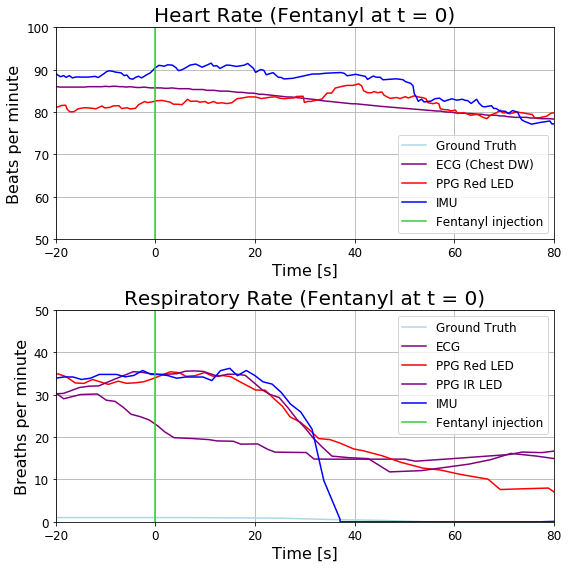

In [26]:
ECGcolor = "purple"

Red_HRx = [-127.41591830822709, -125.63027954808805, -124.60126738122825, -123.844640787949, -122.75509849362687, -122.14979721900346, -120.90892960602548, -120.24309820393974, -119.45620654692931, -119.06276071842409, -118.6390498261877, -117.67056778679026, -116.94420625724217, -115.85466396292004, -115.21909762456546, -114.250615585168, -113.58478418308226, -112.46497682502896, -111.7083502317497, -110.80039831981459, -110.04377172653533, -108.1370727114716, -107.1080605446118, -106.4119640787949, -106.2001086326767, -105.50401216685978, -105.05003621089223, -104.53553012746234, -103.4459878331402, -102.81042149478561, -101.81167439165701, -101.20637311703359, -100.1773609501738, -99.60232473928157, -98.30092699884125, -97.81668597914252, -97.51403534183082, -96.27316772885283, -94.5783241599073, -94.12434820393973, -93.12560110081112, -92.42950463499419, -91.49128765932791, -90.67413093858632, -89.91750434530705, -88.94902230590961, -87.5265643105446, -87.19364860950172, -85.95278099652374, -85.40800984936268, -83.62237108922363, -82.26044322132097, -81.95779258400925, -80.47480446118192, -78.9615512746234, -78.41678012746233, -76.96405706836616, -75.3902737543453, -74.90603273464659, -73.51383980301274, -72.93880359212051, -71.9097914252607, -71.36502027809965, -70.42680330243337, -69.76097190034763, -68.42930909617613, -67.85427288528389, -66.5226100811124, -66.06863412514484, -64.85803157589802, -64.3737905561993, -63.253983198146, -62.618416859791424, -61.43807937427577, -60.83277809965237, -59.743235805330244, -58.98660921205098, -58.472103128621086, -57.83653679026651, -57.4430909617613, -56.62593424101969, -55.99036790266513, -54.71923522595597, -54.295524333719584, -53.78101825028969, -53.08492178447277, -52.38882531865585, -51.390078215527225, -50.36106604866744, -48.93860805330243, -47.87933082271147, -46.91084878331402, -45.57918597914252, -43.88434241019699, -43.18824594438007, -42.219763904982614, -41.55393250289687, -40.28279982618771, -39.76829374275782, -38.83007676709154, -38.04318511008111, -36.772052433371954, -36.25754634994206, -35.379859501738125, -34.592967844727696, -32.86785921205099, -32.020437427578216, -31.173015643105444, -29.96241309385863, -29.41764194669757, -28.2675695249131, -27.78332850521437, -26.058219872537663, -24.30284617612979, -22.456677288528397, -21.18554461181924, -20.640773464658167, -18.824869640787952, -18.037977983777523, -17.70506228273466, -17.160291135573587, -16.373399478563158, -15.556242757821563, -14.406170336037091, -13.67980880648899, -12.62053157589804, -11.954700173812283, -10.744097624565468, -10.169061413673232, -9.109784183082281, -8.504482908458867, -7.32414542294323, -6.779374275782159, -5.6898319814600296, -5.054265643105451, -4.025253476245664, -3.3896871378910856, -2.1790845886442707, -1.6343134414831992, -0.5750362108922487, 0.1210602549246731, 1.271132676709145, 1.9369640787949025, 2.9357111819235104, 3.5712775202780893, 4.691084878331383, 5.326651216685962, 6.4464585747392835, 7.051759849362684, 8.322892526071842, 8.928193800695242, 10.017736095017385, 10.592772305909607, 11.68231460023175, 12.408676129779836, 13.407423232908444, 14.285110081112395, 15.31412224797218, 16.403664542294322, 17.584002027809944, 18.64327925840091, 20.005207126303574, 20.640773464658153, 21.246074739281553, 23.273834009269976, 24.181785921205076, 24.93841251448434, 25.84636442641944, 26.845111529548078, 27.783328505214357, 28.29783458864425, 29.629497392815736, 29.901882966396286, 30.597979432213194, 31.203280706836594, 32.59547363847044, 33.41263035921203, 34.44164252607182, 35.349594438006946, 36.10622103128618, 37.61947421784471, 38.46689600231748, 39.647233487833134, 40.797305909617606, 41.402607184241006, 41.79605301274621, 42.61320973348781, 43.40010139049825, 43.884342410196965, 44.5804388760139, 45.45812572421782, 45.88183661645421, 46.48713789107761, 47.152969293163366, 48.393836906141345, 49.08993337195828, 50.179475666280396, 50.72424681344147, 51.96511442641945, 52.69147595596753, 53.69022305909617, 54.32578939745075, 54.6587050984936, 55.68771726535341, 56.4140787949015, 56.898319814600214, 57.200970451911914, 57.89706691772882, 58.80501882966395, 59.319524913093844, 60.227476825028944, 60.62092265353415, 61.83152520278098, 62.46709154113556, 63.193453070683645, 64.55538093858631, 65.2817424681344, 65.82651361529547, 66.55287514484355, 67.27923667439164, 68.45957415990729, 69.21620075318653, 69.63991164542291, 70.42680330243336, 71.15316483198144, 72.51509269988411, 73.27171929316337, 73.78622537659326, 74.81523754345305, 75.66265932792582, 76.11663528389339, 77.2061775782155, 78.56810544611817, 79.38526216685976, 80.29321407879489, 81.11037079953648, 81.44328650057936, 81.92752752027808, 82.62362398609498, 83.4407807068366, 83.98555185399765, 84.9540338933951, 85.7711906141367, 87.40550405561991, 88.70690179606022, 89.91750434530705, 90.61360081112396, 90.94651651216684, 92.12685399768249, 93.24666135573578, 94.06381807647738, 94.91123986095015, 95.90998696407878, 96.51528823870218, 97.93774623406718, 98.78516801853995, 99.99577056778678, 100.78266222479719, 101.1761080533024, 102.02352983777517, 102.78015643105444, 104.23287949015061, 104.98950608342987, 105.77639774044029, 106.68434965237542, 107.53177143684819, 108.80290411355732, 109.92271147161064, 110.73986819235223, 111.61755504055618, 112.01100086906139, 113.19133835457704, 114.00849507531863, 114.5532662224797, 115.1585674971031, 115.91519409038237, 116.55076042873692, 116.85341106604865, 117.76136297798375, 118.06401361529545, 118.79037514484354, 119.4562065469293, 120.63654403244492, 121.30237543453067, 122.5129779837775, 124.17755648899187, 126.29611095017377, 127.08300260718421, 127.47644843568942, 128.50546060254922, 129.20155706836616, 130.10950898030129, 131.13852114716107, 132.22806344148316, 133.1057502896871, 134.0742323290846, 134.679533603708, 135.43616019698723, 136.04146147161063, 137.07047363847042, 138.55346176129777, 139.43114860950172, 140.09698001158748, 141.91288383545768, 142.4879200463499, 143.09322132097336, 143.8498479142526, 144.69726969872536, 145.75654692931633, 146.3921132676709, 147.11847479721897, 147.93563151796056, 148.78305330243333, 149.60021002317492, 151.08319814600227, 151.9911500579374, 153.3530779258401, 154.1702346465817, 155.19924681344148, 155.5624275782155, 156.13746378910773, 156.5611746813441, 157.3178012746234, 158.10469293163382, 159.10344003476243, 159.79953650057936, 160.73775347624562, 161.28252462340672, 163.03789831981456, 164.09717555040552, 165.24724797219002, 166.21573001158745, 166.97235660486675, 167.39606749710313, 168.15269409038237, 168.81852549246813, 169.18170625724215, 170.02912804171493, 171.02787514484353, 172.17794756662803, 173.11616454229429, 174.50835747392816, 174.93206836616454, 175.53736964078794, 176.53611674391655, 177.2322132097335, 178.6244061413673, 179.4415628621089, 180.68243047508687, 181.6509125144843, 182.74045480880645, 183.37602114716103, 184.49582850521435, 185.1616599073001, 186.03934675550406, 186.7959733487833, 187.67366019698724, 188.24869640787946, 189.39876882966396, 190.0343351680185, 191.21467265353417, 192.09235950173812, 192.60686558516798, 194.39250434530706, 195.66363702201622, 196.1478780417149, 196.87423957126302, 197.44927578215524, 198.17563731170335, 198.87173377752023, 200.35472190034758, 200.96002317497098, 201.53505938586326, 202.4732763615295, 203.13910776361527, 204.19838499420624, 204.98527665121665, 206.19587920046345, 207.01303592120505, 208.1025782155272, 208.76840961761295, 209.73689165701037, 211.0685544611819, 212.12783169177285, 212.73313296639625, 213.33843424101966, 213.8226752607184, 214.18585602549243, 214.67009704519117, 215.30566338354575, 216.09255504055616, 217.30315758980296, 217.90845886442636, 219.30065179606024, 220.08754345307065, 221.26788093858627, 222.35742323290842, 223.44696552723056, 224.1430619930475, 225.3536645422943, 226.08002607184235, 227.3511587485515, 227.9564600231749, 229.46971320973344, 230.40793018539975, 231.4672074159907, 232.1633038818076, 233.22258111239856, 233.73708719582848, 234.49371378910772, 235.22007531865583, 235.9464368482039, 237.03597914252603, 237.7018105446118, 238.4887022016222, 239.15453360370796, 239.9111601969872, 240.21381083429893, 240.97043742757816, 241.63626882966392, 242.42316048667433, 243.0587268250289, 243.96667873696404, 244.6325101390498, 246.53920915411354, 247.29583574739277, 248.35511297798374, 248.99067931633832, 249.50518539976824, 250.50393250289684, 251.13949884125142, 251.593474797219, 252.47116164542288, 253.71202925840092, 254.4081257242178, 255.31607763615293, 256.1332343568945, 256.7385356315179, 257.4951622247971, 258.13072856315176, 258.9176202201622, 259.43212630359204, 260.21901796060246, 260.94537949015063, 261.8230663383545, 262.15598203939743, 262.8823435689455, 263.9718858632677, 264.7587775202781, 265.636464368482, 266.57468134414825, 266.9681271726535, 267.66422363847045, 268.3905851680185, 269.3893322711471, 270.11569380069517, 271.29603128621085, 272.96060979142527, 273.8685617033603, 274.17121234067207, 274.80677867902665, 275.71473059096166, 276.7134776940904, 277.47010428736957, 278.89256228273456, 279.73998406720733, 280.5874058516801, 281.61641801853995, 282.4335747392815, 283.1296712050984, 284.0678881807648, 285.67193655851673, 287.3970451911935, 289.42480446118185, 290.332756373117, 291.05911790266504, 291.9973348783314, 292.6934313441482, 293.2382024913093, 294.2974797219003, 295.2054316338354, 295.8712630359211, 297.626636732329, 298.32273319814595, 298.95829953650053, 300.53208285052136, 301.8940107184241, 303.13487833140204, 304.5270712630359, 306.01005938586326, 307.3417221900348, 309.06683082271144, 309.7629272885284, 311.2156503476245, 311.6696263035921, 312.27492757821545, 313.3947349362688, 313.90924101969864, 314.6356025492468, 316.1791207995364, 316.96601245654693, 319.29642236384694, 320.7794104866743, 321.50577201622247, 323.0492902665122, 323.745386732329, 325.9244713209733, 328.19435110081105, 329.4654837775202, 330.0102549246813, 330.49449594438005, 331.58403823870214, 332.28013470451907, 333.55126738122823, 334.4289542294321, 336.5777737543453, 338.63579808806486, 339.906930764774, 340.6332922943221, 342.69131662804165, 343.6295336037079, 344.68881083429886, 345.77835312862106, 346.53497972190024, 347.07975086906134, 348.5627389918887, 350.2273174971031, 350.8931488991888, 351.83136587485507, 352.6182575318655, 354.0407155272306, 354.8578722479721, 356.55271581691767, 357.94490874855154, 358.5502100231749, 359.4278968713789, 360.39637891077626, 362.4241381807647, 364.240042004635, 365.87435544611816, 366.388861529548, 367.6599942062572, 368.2047653534183, 369.4153679026651, 370.05093424101966, 371.26153679026646, 371.9878983198145, 373.0471755504055, 373.89459733487826, 374.9236095017381, 375.61970596755503, 376.7697783893395, 377.4658748551564, 379.25151361529544, 380.5529113557357, 381.21874275782153, 382.9135863267671, 384.45710457705667]
Red_HRy = [81.96925894398122, 82.10526469625232, 82.68834818090245, 82.57896976171293, 82.7907735916072, 82.14733585152835, 82.37183315136754, 82.1787340752821, 81.91186124961531, 81.48825358982675, 80.59389997427314, 81.21342617671392, 80.73519542395262, 80.5263130261948, 79.90727045076608, 79.7597642120897, 79.96001510580795, 79.75462263508884, 79.72412288358404, 80.86555297777797, 81.17393935410404, 81.62175316588053, 81.77292295819723, 81.4326797348888, 79.42659488889011, 79.13106934635935, 78.71054246955106, 78.03999646220339, 78.53271905595747, 78.15510308494595, 78.54559232769648, 78.06267959553755, 78.58097602633765, 78.0882534325836, 78.57125060480763, 77.91528168457621, 76.87683776429454, 76.88892608043972, 77.63629102306668, 76.88105908104365, 77.142255898937, 76.80201267562855, 77.06363077871204, 76.93013018289989, 77.08117657130451, 76.99745681421791, 77.51969166774448, 76.2532400696346, 76.7609493477324, 76.13158939604654, 76.78681710845845, 76.89695510000348, 75.95788380367222, 76.10398522102788, 76.53352338805348, 76.0328961537579, 76.30349380539869, 76.50533039623912, 75.81696794908271, 75.89432239130498, 75.41733379634306, 75.27480227787304, 75.11746228995156, 75.46919329520826, 74.86395738508972, 75.07422082349387, 74.82380181113885, 75.03406524954299, 74.31316203215736, 74.45705198885328, 74.38416655327201, 74.29892461878384, 75.55764452215557, 75.91126482945734, 75.91126482945734, 75.79154962125622, 75.73280935909888, 75.14972587444875, 74.86651389619011, 74.13451986007546, 73.79676335267071, 73.56075337078852, 73.59706259877039, 72.7027089832168, 72.52778393782175, 73.19082201401254, 73.06312579193134, 73.22486689839606, 73.88083581862749, 74.32098024367329, 74.43817140709065, 75.23470509594307, 75.77538250898229, 76.32249655789104, 75.94407970465045, 76.1865030012577, 75.8360639372508, 76.46542388893667, 75.78278956544382, 75.96931358338298, 75.80757247691825, 76.27959244068266, 76.91568351484644, 76.81515187956194, 76.87869302853022, 77.76994124958537, 79.04439515174926, 79.1983147051507, 79.36352169246823, 79.42830874631824, 79.56743041984879, 79.85336559020608, 80.00118236833231, 80.60341473589378, 81.1044523203814, 81.07298432279711, 80.79763934393455, 81.56860528474974, 81.63214643371802, 80.65592332684164, 80.06287260313765, 80.09337235464243, 80.77517896896877, 81.01596648084859, 81.01596648084859, 80.89009449051142, 80.78195900790358, 81.45250501525125, 80.99217594842219, 81.1337819375515, 81.46419591218658, 81.50655667816544, 80.84572872889528, 81.029292048137, 80.74608006987836, 80.89724986219505, 81.75546797813033, 82.49889942105925, 82.25946900465702, 82.42729832510656, 82.66672874150882, 82.76454866821, 82.5976729234448, 82.36404688077353, 81.88104970854948, 81.84086422514793, 81.75877379666717, 83.02522539477704, 82.54231266261807, 82.60609914420787, 82.34911049726946, 82.50645048519094, 82.06379061486645, 82.50434258104654, 82.10011271846106, 82.20738998295299, 82.01939582497096, 82.19880612794024, 83.17310374545391, 83.37280449935425, 83.59937408196116, 83.57183958407491, 83.4207931956703, 83.19204505938447, 83.55697989704113, 83.60418189341755, 83.28320831805777, 83.15818681414179, 83.29168740995398, 83.33579161124005, 83.6946122171786, 83.75237689805887, 82.28387034412518, 82.5233007605274, 82.52330076052742, 82.88531955012759, 83.09510620068953, 84.49450656384987, 84.4945065638499, 85.68399687253616, 86.11353503956178, 86.30663411564717, 86.30663411564717, 86.68605686163961, 86.19043589968702, 85.025899933141, 84.5748586344328, 84.57485863443281, 84.8607938047901, 84.5819277903922, 84.76026216950558, 84.00503022748254, 83.59687178822746, 83.24643272422053, 83.44651519834774, 83.20409190174048, 83.6446438679206, 83.33625749159454, 83.84396676969233, 83.60101531775477, 83.40485117696954, 83.1444263693754, 82.24329734764336, 81.99062783762831, 82.20800545251981, 81.96019497154352, 80.77070466285721, 80.61678510945578, 80.52238111670289, 80.30025407493143, 80.46546106224896, 79.67472676397698, 79.88713574767097, 79.677349097109, 79.25590270089079, 79.47617868398085, 79.09069571357325, 78.72356907508983, 78.48061762315227, 79.30665255973996, 79.8417359194729, 80.46480227164189, 79.84173591947288, 79.84173591947288, 79.61645366403987, 80.03785119690778, 79.88436857643214, 79.81958152258213, 79.57830559789932, 79.43669960877, 78.63674998596929, 78.70558623068491, 79.058027803629, 79.73983441795535, 79.87200000780938, 80.03887575257458, 79.88868758228591, 79.35766512305096, 79.09646830515763, 78.88392130393038, 78.42205230712864, 78.23350085421188, 78.91530746853824, 79.53942275396007, 79.67913267980998, 80.04546121690541, 79.61448646738138, 78.54648170088416, 78.52168515494532, 78.60540491203191, 78.4218415927902, 78.6578515746724, 78.59290533887189, 78.50279243669868, 78.7646024826311, 78.8495660761087, 79.03756023409072, 79.31847899795052, 78.31519769845127, 78.55120768033348, 78.26654333295556, 78.53714098459636, 78.91031441477246, 78.48383483864633, 78.29502685314057, 78.82604931237552, 79.18006428519882, 79.68767039132385, 79.7794520509447, 79.95778643005809, 78.83738739518874, 79.3203001273477, 79.62945940186006, 79.16759040505833, 79.07747750288512, 78.85090792027822, 78.66936178036883, 77.18249889451097, 77.25592422220765, 75.82413033212231, 75.89922441726665, 75.6176215979754, 75.55985691709513, 75.22515185188037, 75.720772813833, 76.3515631290454, 77.30740355566832, 78.1969796412243, 77.91104447086704, 78.2720009137457, 78.17254520231707, 78.00733821499952, 78.41549665425462, 78.29578144605351, 78.37466011373829, 78.26346310304379, 77.82291113686368, 77.58060755546462, 77.45131513060741, 77.36385260790989, 77.7852990041281, 77.57370384795784, 77.66381675013106, 77.72989954505807, 77.32599791222742, 76.90117994483947, 76.9701359047633, 76.82852991563398, 77.42827292841699, 77.27722654001238, 77.27722654001238, 77.36900819963324, 77.21166821171177, 77.37854395647696, 77.73644920372689, 77.97675027618877, 78.32919184913285, 79.57742241997649, 79.78733247445054, 79.03639162300718, 78.75547285914739, 78.28345289538298, 78.15128730552895, 78.28992253964158, 78.00384983432983, 77.93489387440599, 77.86180691227473, 77.70446692435326, 78.52882633368621, 78.56315505832362, 78.98548871011282, 79.68761840621237, 79.57823998702281, 78.64571274153705, 78.7146687014609, 78.47436762899902, 77.55655103279045, 77.83976301104909, 78.03200386901862, 78.4543375208078, 78.57732038977868, 79.31251260955494, 78.65894650588116, 78.49373951856363, 78.57660195734358, 79.51691050175961, 79.91197068882329, 79.72840736958159, 80.00736851139357, 80.07145742888744, 80.16027838981084, 80.74122603752086, 81.06736909121473, 80.9922750060704, 80.90941256729043, 80.94245396475395, 80.76716803656558, 80.08420709377918, 80.22332876730975, 81.26177268759143, 81.69748342337395, 81.67469625270947, 81.10928196456388, 81.56626129219475, 81.51604640243258, 80.98502394319765, 80.86701895225654, 80.40668988542748, 80.31490822580663, 80.31490822580663, 80.54983060408568, 79.9326422363711, 79.23703386871829, 78.89341606168325, 78.6531149892214, 78.91272596929181, 78.78974310032093, 79.15607163741635, 79.52319827589977, 79.53893227469192, 79.29863120223004, 79.5802340215213, 79.47147707062263, 79.76700261315337, 79.71980061677692, 79.10980558668139, 78.31130514797995, 77.142767920612, 76.33469026525445, 75.79523887809513, 75.48330960134173, 75.33549282321552, 75.2062003983583, 75.18824311712814, 75.74740522804903, 76.230317960208, 76.21543444783704, 76.8309114594122, 76.79499689695187, 76.68809825809934, 76.62455710913106, 76.41000258014724, 75.82334919661149, 76.25288736363709, 76.00209876808863, 76.2976243106194, 75.71101979043392, 75.4089270136247, 74.71478000808882, 75.02316638441489, 75.43618385270875, 75.16083887384619, 75.4720984151691, 75.04298935720145, 74.96411068951669, 74.34220474494104, 73.84075294814193, 72.33028906409585, 72.36333046155936, 71.7537431821524, 71.63076031318153, 71.25314434217, 71.14300635062497, 71.03487086801714, 71.82157080762448, 71.43316580886976, 71.22719346104529, 71.18428255524854, 70.65762650459678, 70.81936761106151, 70.29713275753494, 69.70973013596148, 69.38012998885011, 69.32757209256671, 69.45686451742391, 69.47965168808841, 69.36492461356234, 68.66957580127058, 68.20699623678149, 67.6300829477361, 68.03375612941699, 67.33960912388109, 67.67849525171194, 67.34808127707686, 67.608506084671, 66.30186900315955, 66.30186900315955, 66.31760300195171, 66.2631391599789, 66.1626075246944, 66.38504610509388, 65.38176480559464, 65.38176480559463, 64.89174408050025, 64.7520341546503, 64.82712823979466, 64.67281402087167, 64.70108473527895, 65.20642375530907, 63.986433695118, 63.72600888752386, 63.3610740498672, 63.44393648864716, 63.38519622648982, 63.33744470867824, 62.929791103609, 62.90537627789704, 63.05654607021374, 62.62729030829466, 62.473370754893224, 62.5963536238641, 62.53698004351638, 62.80870206213076, 63.27530273813666, 62.93423024819077, 62.48224886779372, 62.2933024600112, 62.42259488486841, 61.857021414772326, 62.23463738578384, 62.14023339303096, 62.14023339303097, 62.14623001689005, 61.626088077809335, 61.00704550238061, 61.00704550238063, 61.88814943474083, 61.77867034512405, 61.93077908025017, 62.470230467409486, 62.62041863769816, 63.1737434756038, 62.91254665771046, 63.183144309351256, 62.35710937276355, 62.68752334739863, 62.45671441709221, 62.053041235411335, 61.98950008644305, 62.240288681991494, 62.27078843349628, 62.32800297455864, 62.29746799037981, 62.03785701030939, 62.41162847482871, 62.34267251490487, 62.77535748168891, 63.150537220629374, 63.36213237679962, 63.251994385254584, 62.53464825611265, 62.92799822591632, 62.66680140802296, 62.52519541889365, 62.6676152355467, 63.04922010766046, 63.20824287620141, 64.38829278561239, 63.85379959134977, 64.22308579829485, 64.48470390137837, 64.29233350105174, 64.11569709951726, 63.63246666161345, 63.21470186609783, 64.61237136919243, 65.49097216538117, 65.22935406229766, 65.45179264269714, 65.3501268043479, 65.63635167599227, 65.42380467476502, 65.93173920098975, 65.85477942428905, 65.23066413886723, 64.92110257512323, 64.64938055650886, 64.87519372063495, 65.4067292450479, 65.40005421525728, 64.58169142978342, 64.93570640260671, 64.45385268959723, 64.33228528383528, 63.7300529162738, 63.63092872388327, 64.22095367858877, 64.0855044715955, 63.828039036814914, 64.34633546761505, 64.10391217100779, 64.40824083185588, 64.16581753524862, 64.77384325128412, 64.67992713446279, 64.37955079388544, 64.88748532011017, 65.2612567846295]

#Default RR filter parameters commented out
#Red_RRx = [-127.14353273464657, -125.41842410196986, -122.2103273464658, -120.1825680764774, -118.45745944380069, -115.00724217844727, -113.16107329084588, -111.55702491309385, -109.68059096176128, -107.74362688296638, -104.62632531865584, -100.9945176709154, -97.63509559675549, -95.75866164542293, -93.91249275782154, -92.12685399768249, -90.4017453650058, -87.10285341830821, -85.0750941483198, -81.74593713789106, -80.0813586326767, -78.26545480880648, -74.72444235225956, -71.27422508690613, -67.7332126303592, -65.88704374275783, -64.31326042873697, -60.92357329084588, -57.26150057937427, -53.75075318655851, -51.722993916570104, -48.30304171494785, -43.097450753186564, -41.34207705677868, -39.55643829663963, -37.92212485515644, -36.10622103128621, -34.35084733487834, -32.62573870220163, -31.051955388180772, -27.48067786790267, -25.816099362688306, -24.030460602549255, -22.305351969872547, -20.307857763615303, -15.223327056778684, -12.015230301274626, -8.534747972190045, -6.597783893395144, -4.872675260718436, -3.2686268829664, -1.6948435689455421, 0.09079519119349458, 2.02775926998841, 5.477976535341826, 7.021494785631505, 9.049254055619928, 12.771856894553865, 15.01147161066048, 19.79335168018538, 21.760580822711447, 25.483183661645413, 29.296581691772886, 33.71528099652373, 37.16549826187715, 41.3118119930475, 52.26776506373115, 61.16569380069522, 74.33099652375434, 94.54805909617612, 97.42324015063728, 102.71962630359211, 113.70584443800693, 121.36290556199303, 124.90391801853995, 138.1297508690614, 142.45765498261875, 147.3303302433372, 161.70623551564307, 173.3280199884125, 179.41129779837775, 183.79973203939744, 190.63963644264192, 194.2411790266512, 197.4795408458864, 201.0508183661645, 207.40648174971028, 216.00175984936266, 225.89843568945537, 242.9679316338354, 258.94788528389336, 267.1497175550405, 278.438586326767, 281.04138180764767, 284.1586833719582, 287.8812862108922, 291.4222986674391, 294.53960023174966, 297.5358415411355, 300.5018177867902, 303.19540845886434, 305.85873406720737, 308.3404692931633, 310.79193945538816, 313.2434096176129, 315.573819524913, 317.9042294322131, 320.1438441483198, 322.23213354577047, 324.50201332560823, 326.80215816917723, 328.7693873117033, 330.9484719003475, 333.0367612977983, 335.125050695249, 337.27387022016217, 339.1805692352259, 341.3596538238702, 343.2663528389339, 345.29411210892226, 347.200811123986, 349.34963064889905, 351.3471248551564, 353.3446190614136, 355.2210530127461, 357.12775202780983, 359.00418597914245, 360.9411500579373, 362.8175840092699, 364.6940179606024, 366.60071697566616, 368.56794611819225, 370.5957053881807, 372.3510790845886, 374.2275130359211, 375.982886732329, 377.91985081112387, 379.76601969872524, 381.5516584588644, 383.458357473928, 385.27426129779826, 387.24149044032436, 388.9363340092699, 390.63117757821544, 392.5681416570103, 394.29325028968697, 396.1696842410196, 397.8645278099651, 399.7409617612976, 401.61739571263024, 403.2214440903823, 405.0676129779837, 406.76245654692923, 408.63889049826173, 410.3639991309385, 412.17990295480865, 413.8747465237542, 415.7511804750868, 419.29219293163374, 420.9870365005793, 422.71214513325594, 426.22289252607175, 428.1598566048666, 429.76390498261867, 431.51927867902657, 433.24438731170324, 434.99976100811114, 438.4499782734646, 440.38694235225944, 443.71609936268817, 445.4109429316337, 448.74009994206244, 450.6770640208573, 452.28111239860937, 454.0970162224796, 457.54723348783307, 460.8763904982618, 464.44766801853984, 466.20304171494774, 467.83735515643093]
#Red_RRy = [28.734739780918282, 26.908767815829684, 26.824521519390345, 27.06314499649801, 26.8350766792348, 28.456197875035816, 28.684266192299027, 26.762523151319506, 26.52389967421184, 25.22852670547204, 26.908301192584183, 28.560371065759586, 28.468780220399896, 27.01024654628919, 25.454703664442654, 25.344535070510425, 25.6789621703435, 25.630244513532954, 24.309729800547064, 24.216509556919615, 23.570924586126512, 22.021195324563752, 21.479371573671397, 23.15842625421264, 24.824137729991403, 25.245430593824842, 24.737101402078558, 26.3851021376353, 28.224727572750147, 30.328158711010605, 29.04929865234207, 30.89940425448218, 33.10693948115329, 33.166905719744044, 32.810527010584494, 30.31931053516127, 28.885438569763743, 27.19126196818657, 26.810851142126445, 26.476424042293367, 28.53688854673343, 28.74484139790236, 28.74484139790236, 28.364430571842227, 27.099688085200775, 29.806861406790723, 30.89552474197248, 30.783401229901195, 30.36480244446824, 28.14149721874251, 27.45093680731361, 25.25024335524131, 23.46350111952296, 21.723735756504347, 21.723735756504347, 19.283581027554845, 16.87229738319065, 15.934836131115011, 13.711547317633862, 12.753589724228885, 11.790439676709623, 11.311512103719403, 10.284251025554454, 9.709975830049226, 9.66538555007148, 8.671974679097952, 9.510679548453309, 10.067721741715648, 10.02934334901756, 10.248836165251566, 9.148321434338182, 9.382703761172918, 9.713770202517217, 10.596132562123303, 10.754490565782579, 11.980903992171175, 11.538591578573763, 11.005292844253301, 11.19419199730397, 11.029424390271846, 10.418584443948514, 9.782898059359836, 9.437189827102676, 10.076450790340376, 10.148403747342842, 10.080108175901113, 10.83049888752657, 12.057182794451556, 13.453427557991512, 15.124866031503748, 16.97690554714216, 18.498184246191634, 20.384350465091945, 20.526647611790946, 21.049416935197762, 22.012295796978798, 22.89251950563036, 23.64681013258528, 24.517466192229758, 25.13783528746297, 25.518856724800884, 26.316009320948456, 26.65179588053695, 27.077449954140917, 27.50310402774489, 27.720680451503124, 28.29282586212664, 28.367243423981392, 28.640878185583936, 28.956497504638342, 29.494765884369677, 29.237021505456074, 29.48733512260386, 29.617933531550534, 29.94232312796646, 30.296892114831742, 30.347646949645117, 30.691828173223325, 30.7425830080367, 30.981206485144366, 30.981206485144366, 31.238950864057966, 31.19411857441956, 31.608430768319344, 31.608430768319344, 31.87970660956326, 31.779783028524424, 31.932125537321337, 32.09471305901164, 32.04395822419826, 32.20129821211973, 32.201298212119724, 32.78251682421768, 32.90459095277744, 32.8046673717386, 32.86463361032937, 32.9645571913682, 33.25473339860041, 33.09214587691011, 33.142900711723485, 33.579296527279254, 33.77929489780237, 33.77929489780237, 33.43669976281208, 33.81711058887221, 33.64320849695902, 33.9858036319493, 33.643208496959005, 32.140084542870554, 32.482679677860844, 32.22018595421828, 30.67925023305411, 30.236731517024985, 30.779712485688844, 30.719746247098083, 30.893648339011293, 30.77157421045153, 29.31304053634082, 30.716240909390443, 28.978349224621514, 29.04045711459051, 29.133677358217966, 29.13367735821796, 29.13367735821796, 29.019741504895517, 27.280720585763515, 25.664903029554353, 25.605953167888856, 25.926397755358227, 27.795406096728374, 27.859772455423517, 29.798049973866018, 29.847218720091472, 29.99390638918585, 29.99390638918585, 30.040906954567795, 30.0409069545678, 30.084734895197357, 30.084734895197357, 27.644824937574604]
Red_RRx = [-127.14353273464657, -125.41842410196986, -122.2103273464658, -120.1825680764774, -118.45745944380069, -116.67182068366164, -115.00724217844727, -113.16107329084588, -111.55702491309385, -109.68059096176128, -107.74362688296638, -104.62632531865584, -100.9945176709154, -99.54179461181923, -97.63509559675549, -95.75866164542293, -93.91249275782154, -92.12685399768249, -90.4017453650058, -88.73716685979142, -87.10285341830821, -85.0750941483198, -83.56184096176129, -81.74593713789106, -80.0813586326767, -78.26545480880648, -76.44955098493627, -74.72444235225956, -72.81774333719582, -71.27422508690613, -67.7332126303592, -65.88704374275783, -64.31326042873697, -60.92357329084588, -58.926079084588636, -57.26150057937427, -53.75075318655851, -51.722993916570104, -50.300535921205096, -48.30304171494785, -46.820053592120516, -44.76202925840093, -43.097450753186564, -41.34207705677868, -39.55643829663963, -37.92212485515644, -36.10622103128621, -34.35084733487834, -32.62573870220163, -31.051955388180772, -29.447907010428736, -27.48067786790267, -25.816099362688306, -24.030460602549255, -22.305351969872547, -20.307857763615303, -17.0392308806489, -15.223327056778684, -13.86139918887602, -12.015230301274626, -10.108531286210903, -8.534747972190045, -6.597783893395144, -4.872675260718436, -3.2686268829664, -1.6948435689455421, 0.09079519119349458, 2.02775926998841, 3.7226028389339536, 5.477976535341826, 7.021494785631505, 9.049254055619928, 10.895422943221307, 12.771856894553865, 15.01147161066048, 17.13002607184241, 19.79335168018538, 21.760580822711447, 25.483183661645413, 29.296581691772886, 33.71528099652373, 37.16549826187715, 41.3118119930475, 46.75952346465816, 49.21099362688294, 52.26776506373115, 58.86554895712628, 61.16569380069522, 61.16569380069522, 71.15316483198144, 74.33099652375434, 78.96155127462337, 78.96155127462337, 88.9490223059096, 94.54805909617612, 97.42324015063728, 102.71962630359211, 110.52801274623404, 113.70584443800693, 118.03374855156427, 121.36290556199303, 124.90391801853995, 129.80685834298953, 133.16628041714944, 138.1297508690614, 142.45765498261875, 147.3303302433372, 156.8032951911935, 161.70623551564307, 161.70623551564307, 171.69370654692932, 173.3280199884125, 177.1111529548088, 179.41129779837775, 183.79973203939744, 186.70517815758978, 190.63963644264192, 194.2411790266512, 197.4795408458864, 201.0508183661645, 207.40648174971028, 211.976506373117, 216.00175984936266, 225.89843568945537, 232.37515932792581, 240.1532807068366, 242.9679316338354, 247.1142453650058, 247.1142453650058, 257.101716396292, 258.94788528389336, 262.7007531865585, 267.1497175550405, 275.230489571263, 278.438586326767, 281.04138180764767, 284.1586833719582, 287.8812862108922, 291.4222986674391, 294.53960023174966, 297.5358415411355, 300.5018177867902, 303.19540845886434, 305.85873406720737, 308.3404692931633, 310.79193945538816, 313.2434096176129, 315.573819524913, 317.9042294322131, 320.1438441483198, 322.23213354577047, 324.50201332560823, 326.80215816917723, 328.7693873117033, 330.9484719003475, 333.0367612977983, 335.125050695249, 337.27387022016217, 339.1805692352259, 341.3596538238702, 343.2663528389339, 345.29411210892226, 347.200811123986, 349.34963064889905, 351.3471248551564, 353.3446190614136, 355.2210530127461, 357.12775202780983, 359.00418597914245, 360.9411500579373, 362.8175840092699, 364.6940179606024, 366.60071697566616, 368.56794611819225, 370.5957053881807, 372.3510790845886, 374.2275130359211, 375.982886732329, 377.91985081112387, 379.76601969872524, 381.5516584588644, 383.458357473928, 385.27426129779826, 387.24149044032436, 388.9363340092699, 390.63117757821544, 392.5681416570103, 394.29325028968697, 396.1696842410196, 397.8645278099651, 399.7409617612976, 401.61739571263024, 403.2214440903823, 405.0676129779837, 406.76245654692923, 408.63889049826173, 410.3639991309385, 412.17990295480865, 413.8747465237542, 415.7511804750868, 419.29219293163374, 420.9870365005793, 422.71214513325594, 424.67937427578204, 426.22289252607175, 428.1598566048666, 429.76390498261867, 431.51927867902657, 433.24438731170324, 434.99976100811114, 436.78539976825016, 438.4499782734646, 440.38694235225944, 443.71609936268817, 445.4109429316337, 447.19658169177274, 448.74009994206244, 450.6770640208573, 452.28111239860937, 454.0970162224796, 455.580004345307, 457.54723348783307, 460.8763904982618, 462.7225593858632, 464.44766801853984, 466.20304171494774, 467.83735515643093, 469.50193366164524, 471.1059820393973, 473.01268105446104, 474.55619930475075]
Red_RRy = [32.03563546383144, 30.48233522538345, 30.26413731760556, 31.435380884409017, 31.104138804574355, 30.941551282884046, 30.58700871695669, 30.69717731088891, 30.434683587246354, 30.841645080931784, 31.415280453562126, 32.44946996988118, 34.76236779232674, 33.93633285573904, 34.39404918423785, 34.50063433734594, 34.55480056269595, 34.67270028602694, 34.34145820619227, 34.624165350265066, 32.647329604585096, 32.938372009450845, 32.78587325192696, 31.25180836969266, 30.65105568853797, 30.951432029115306, 29.35633008260113, 28.83721936047217, 29.908470342065147, 29.02501051683766, 31.376465281378263, 31.04190918362817, 30.833956332459245, 32.48195706801599, 32.83833577717555, 32.90508607508163, 34.500188021595804, 34.959332505134, 34.21932360337571, 35.02802913569933, 34.72267929391104, 34.85723702113799, 34.85723702113799, 34.799303536397765, 34.91720325972875, 34.24970028066799, 32.781193726734294, 32.66725787341185, 33.594735696948916, 33.03224027985263, 32.4385044763754, 33.20099826399481, 32.69411318927054, 32.81201291260153, 33.074506636244095, 33.88321216856771, 35.407721091083616, 35.20121235693669, 34.33584242336863, 34.50394450204108, 35.24436797461269, 34.39083015265065, 34.54317266144757, 34.26268541642627, 33.20118208129063, 32.22083292577995, 31.113513365177027, 31.065857503450815, 29.13748326124259, 27.292807540784015, 24.763449958968334, 23.54353976196529, 21.74063474301595, 19.644460065223498, 19.412938761675395, 18.54367427395086, 17.200247980084292, 16.75880420830463, 15.602772135569614, 14.029372256354947, 12.671506607169682, 12.228226765037999, 11.166106582949753, 10.064726667499485, 7.617215744276669, 7.741185552373207, 7.964637204944244, 6.124510418420847, 7.556846860188682, 8.943199201314894, 10.745457244778967, 11.144146806932909, 11.982953948581116, 13.768975433095065, 14.977807047613652, 14.277334285781459, 14.375842799958377, 14.240819628809485, 13.576495235363293, 12.706414729604395, 10.904156686140322, 9.209726046986066, 9.571957663623042, 10.394467557807095, 10.552866183157809, 11.231601183500848, 11.525232331528201, 12.557803723788606, 13.186836904990733, 14.350636127089928, 15.294676054618728, 16.607579265089246, 16.512181546096862, 14.50991434104121, 14.069078422578679, 12.775385574420898, 13.382101061343874, 13.163216750109203, 11.81745722438275, 10.137386166916238, 9.193346239387438, 9.479220325538279, 9.337259434180563, 9.47349857432491, 10.417372033871429, 11.951191317083774, 11.744229854737965, 11.908936838711302, 13.096338360778478, 15.02107996059448, 17.023588897776783, 17.44775430300286, 18.326635776464663, 19.83695501700806, 20.384350465091945, 20.526647611790946, 21.049416935197762, 22.012295796978798, 22.89251950563036, 23.64681013258528, 24.517466192229758, 25.13783528746297, 25.518856724800884, 26.316009320948456, 26.65179588053695, 27.077449954140917, 27.50310402774489, 27.720680451503124, 28.29282586212664, 28.367243423981392, 28.640878185583936, 28.956497504638342, 29.494765884369677, 29.237021505456074, 29.48733512260386, 29.617933531550534, 29.94232312796646, 30.296892114831742, 30.347646949645117, 30.691828173223325, 30.7425830080367, 30.981206485144366, 30.981206485144366, 31.238950864057966, 31.19411857441956, 31.608430768319344, 31.608430768319344, 31.87970660956326, 31.779783028524424, 31.932125537321337, 32.09471305901164, 32.04395822419826, 32.20129821211973, 32.201298212119724, 32.78251682421768, 32.90459095277744, 32.8046673717386, 32.86463361032937, 32.9645571913682, 33.25473339860041, 33.09214587691011, 33.142900711723485, 33.579296527279254, 33.77929489780237, 33.77929489780237, 33.43669976281208, 33.81711058887221, 33.64320849695902, 33.9858036319493, 33.643208496959005, 32.140084542870554, 32.482679677860844, 32.22018595421828, 32.02018758369515, 32.367261086463095, 32.26733750542426, 32.52983122906683, 32.64376708238927, 32.581659192420275, 32.8021801988508, 34.46789167462957, 34.53225803332471, 34.15184720726459, 32.904130100250995, 32.557056597483054, 32.81956770021219, 32.96625536930657, 32.6458107818372, 32.90830450547976, 32.79436865215733, 33.480111940919166, 32.92557100446868, 31.63019803572888, 33.0779135132656, 33.0158056232966, 33.073739108036825, 32.8577822618701, 33.364667336594366, 33.36466733659437, 33.207327348672905, 33.048665175978996, 33.30282977185213, 35.04072145662106, 35.39526402254842, 35.39526402254842, 35.717723984781735, 35.46453319962076, 35.33805895095661, 35.01559898872329, 36.274318892095025, 34.0961334609307]
#Red_RRx = [i+15 for i in Red_RRx] #CORRECT
Red_RRx = [i+20 for i in Red_RRx] #CORRECT

#Default RR filter parameters commented out
#IR_RRx = [-125.81186993047507, -123.844640787949, -122.08926709154112, -120.30362833140207, -118.57851969872537, -116.94420625724217, -114.97697711471609, -110.0740367902665, -107.62256662804171, -104.59606025492467, -102.59856604866742, -100.9945176709154, -99.32993916570103, -97.48377027809964, -95.87972190034762, -94.00328794901505, -89.22140787949014, -87.07258835457705, -85.25668453070683, -83.62237108922363, -81.74593713789106, -80.0813586326767, -78.23518974507532, -76.57061123986095, -74.6941772885284, -73.09012891077636, -71.3044901506373, -69.45832126303593, -67.76347769409038, -64.40405561993047, -60.893308227114716, -57.35229577056779, -55.68771726535341, -53.811283314020855, -50.27027085747393, -48.4543670336037, -45.21600521436848, -43.248776071842414, -41.40260718424102, -38.28530561993048, -36.318076477404404, -34.41137746234068, -32.68626882966396, -31.021690324449594, -29.326846755504064, -27.571473059096178, -25.725304171494784, -23.939665411355733, -22.123761587485518, -20.39865295480881, -18.885399768250295, -17.402411645422944, -15.586507821552727, -13.770603997682512, -11.984965237543461, -10.259856604866753, -8.474217844727702, -6.960964658169187, -5.175325898030136, -3.3896871378910856, -1.604048377752035, 0.12106025492467312, 1.694843568945531, 3.5107473928157606, 5.447711471610647, 8.837398609501735, 12.711326767091537, 14.73908603707993, 17.008965816917723, 23.42515932792584, 32.86785921205096, 37.34708864426419, 41.34207705677868, 46.45687282734646, 52.47962050984934, 56.74699449594435, 61.28675405561991, 65.2817424681344, 71.45581546929314, 76.2982256662804, 79.08261152954806, 81.56434675550405, 83.59210602549244, 94.51779403244494, 96.87846900347621, 102.59856604866742, 105.44348203939744, 107.4107111819235, 111.587289976825, 113.85716975666277, 121.30237543453067, 129.0502317497103, 133.4084009269988, 135.67828070683657, 138.09948580533023, 142.69977549246812, 150.0844510428737, 156.0769336616454, 161.4641150057937, 165.1867178447277, 169.12117612977983, 173.3885501158748, 179.5323580533024, 183.46681633835453, 190.76069669756663, 194.39250434530703, 199.26517960602547, 207.55780706836612, 214.24638615295476, 226.14055619930474, 233.6160269409038, 242.48369061413672, 248.5064382966396, 259.4321263035921, 262.88234356894543, 267.17998261877165, 271.9618626882966, 278.438586326767, 281.67694814600225, 284.21921349942056, 287.8812862108922, 291.3920336037079, 294.5698652954808, 297.59637166859784, 300.4110225955967, 303.10461326767086, 305.82846900347613, 308.3102042294321, 310.7314093279258, 313.33420480880636, 315.60408458864424, 317.9042294322131, 319.8714585747392, 322.32292873696395, 324.38095307068363, 326.7416280417149, 328.7391222479721, 330.9484719003475, 333.0064962340671, 335.125050695249, 337.24360515643093, 339.2713644264194, 341.32938876013895, 343.20582271147157, 345.2335819814599, 347.2916063151795, 349.2891005214368, 351.19579953650054, 353.19329374275776, 355.190787949015, 357.12775202780983, 359.0949811703359, 360.9411500579373, 362.93864426419464, 364.6940179606024, 366.6612471031285, 368.56794611819225, 370.3838499420625, 372.3510790845886, 374.07618771726527, 376.0736819235225, 377.8593206836615, 379.67522450753177, 381.5819235225955, 383.3372972190034, 385.2137311703359, 387.1506952491309, 388.87580388180754, 390.6009125144842, 392.41681633835447, 394.3537804171493, 396.1696842410196, 397.7434675550404, 399.7409617612976, 401.52660052143676, 403.2214440903823, 405.12814310544604, 406.88351680185383, 408.6086254345306, 410.30346900347615, 412.2101680185399, 413.81421639629184, 415.7511804750868, 417.4157589803011, 419.2316628041714, 420.86597624565456, 422.71214513325594, 426.25315758980287, 428.0690614136731, 429.6731097914252, 431.5495437427577, 433.15359212050976, 435.0602911355735, 438.5105084009268, 440.3566772885283, 441.93046060254915, 445.4109429316337, 447.0452563731169, 448.9216903244495, 450.70732908458854, 452.28111239860937, 454.03648609501727, 455.67079953650045, 457.54723348783307, 460.93692062572404, 462.60149913093846, 464.3871378910775, 466.20304171494774, 467.8070900926998, 469.4716685979141, 471.1967772305908, 472.9824159907299]
#IR_RRy = [28.684989877077975, 29.375550288506883, 29.561990775761785, 29.451822181829556, 29.71431590547212, 29.240604113880607, 27.445365575941224, 29.01384088589387, 29.870469709021858, 31.559252246045606, 31.753043433514858, 31.617023958536436, 31.26248139260908, 31.617023958536436, 31.074042989872577, 31.617023958536436, 33.722429460931174, 34.18017221036791, 34.416182192250105, 32.53093729192983, 31.04242049852374, 29.13233505074985, 29.48687761667721, 29.079916122991772, 27.576792168903317, 27.14039635334755, 25.633042881228068, 25.433044510704946, 25.14286830347273, 25.281588418774785, 26.622525769415823, 28.074894888690903, 27.94842064002676, 28.355382133712197, 30.201101222790943, 30.315037076113377, 31.712221954300635, 32.02238891875599, 32.076555144106, 33.629855382554, 34.54484792769731, 35.443933572962834, 35.27003148104963, 34.969655140472284, 34.7896475271723, 34.84961376576306, 34.95978235969529, 35.564607940383226, 35.62061030896545, 35.50271058563446, 34.89788500494652, 34.33004143951566, 34.83837063126194, 34.83837063126194, 34.575859528532796, 32.86789255438531, 31.05656594555422, 30.050529366068297, 29.33369904821592, 26.908690823759542, 24.183960198509375, 22.045434473630834, 19.734847238420482, 17.60377485763801, 15.50236688453488, 15.138308933759145, 14.911149326197526, 13.454099912949209, 11.782593923618807, 12.086512438023714, 13.605974695960956, 14.684121811612666, 16.141171224860983, 15.517268360071181, 17.062691279701824, 16.70560761917083, 17.492977090641663, 19.041070538232596, 19.505847228895753, 20.910106621094847, 19.561120616487152, 17.917865140500943, 16.335658918678735, 18.42980621498085, 18.366265066012566, 18.621597502551783, 17.32506551279083, 15.276344830904321, 14.953517303170972, 13.921980992115113, 14.641080824341554, 15.272689984631352, 14.872558118796587, 13.754233896954778, 12.098736492922168, 12.446540676748567, 12.86540372370985, 12.587683506144419, 12.370980050310745, 11.263653380522728, 10.541290844883282, 9.811889579259404, 9.831519589882078, 8.855696515421771, 9.772110028823281, 9.516155541429912, 9.53953572675671, 9.742395797137755, 10.698132925104918, 12.553783927690157, 13.38957529123993, 14.421997443359663, 15.313854259316518, 16.747173606348476, 17.13985574937828, 17.971250304956342, 18.9192735233186, 20.410542430949004, 21.035858597898574, 20.98097255560038, 21.985867949531865, 22.885361528393247, 24.04725682381331, 24.512283899225643, 25.295998260314544, 25.61013427768584, 26.41113785255876, 26.709205921892107, 27.146518535379716, 27.67342454144231, 27.86223252694806, 28.212632264385103, 28.078074537158148, 28.82811820717805, 28.871631900062386, 29.245403364581705, 29.245403364581712, 29.676471824640522, 29.76481780716327, 29.936461430350327, 30.201972659967804, 30.29301669431042, 30.627572792060498, 30.433781604591246, 30.89292608812944, 31.027483815356398, 31.170520168012274, 31.32786015593374, 31.37407190063795, 31.848350333128497, 31.75448272669808, 32.064649691153434, 32.11881591650344, 32.26185226915932, 32.26185226915932, 32.40943171192437, 32.360262965698915, 32.53416505761212, 32.962231745398455, 32.788329653485256, 32.882197259915664, 32.82619489133346, 33.33452408307973, 33.19148773042385, 33.13355424568363, 33.47614938067392, 33.52531812689938, 33.46535188830862, 33.465351888308625, 33.70136187019081, 33.75053061641627, 34.18692643197205, 33.47208850607884, 34.07284118723352, 34.016838818651316, 34.14795547525254, 34.25112923782399, 32.527484277305, 32.3535821853918, 32.55396801906537, 32.60472285387875, 32.60472285387875, 32.65389160010421, 30.78839643230806, 30.734230206958046, 30.8754327602209, 29.34935823731618, 31.32619398299615, 31.219608829888056, 30.839215382914507, 31.454129727768873, 31.13166976553555, 31.656136391940443, 33.11467006605115, 31.634771409166866, 31.426818557997933, 33.063061674834884, 32.69593503635146, 33.23891600501532, 33.48328997701044, 33.148862877177365, 33.09092939243714, 33.2321319457, 33.33871709880809, 35.53360993031255, 35.23323358973521, 35.47760756173033, 35.71361754361253, 35.391157581379204, 35.204717094124305, 33.79176259732955, 32.08369035557193]
IR_RRx = [-125.81186993047507, -123.844640787949, -122.08926709154112, -120.30362833140207, -118.57851969872537, -116.94420625724217, -114.97697711471609, -110.0740367902665, -107.62256662804171, -104.59606025492467, -102.59856604866742, -100.9945176709154, -99.32993916570103, -97.48377027809964, -95.87972190034762, -94.00328794901505, -89.22140787949014, -87.07258835457705, -85.25668453070683, -83.62237108922363, -81.74593713789106, -80.0813586326767, -78.23518974507532, -76.57061123986095, -74.6941772885284, -73.09012891077636, -71.3044901506373, -69.45832126303593, -67.76347769409038, -64.40405561993047, -60.893308227114716, -57.35229577056779, -55.68771726535341, -53.811283314020855, -50.27027085747393, -48.4543670336037, -45.21600521436848, -43.248776071842414, -41.40260718424102, -38.28530561993048, -36.318076477404404, -34.41137746234068, -32.68626882966396, -31.021690324449594, -29.326846755504064, -27.571473059096178, -25.725304171494784, -23.939665411355733, -22.123761587485518, -20.39865295480881, -18.885399768250295, -17.402411645422944, -15.586507821552727, -13.770603997682512, -11.984965237543461, -10.259856604866753, -8.474217844727702, -6.960964658169187, -5.175325898030136, -3.3896871378910856, -1.604048377752035, 0.12106025492467312, 1.694843568945531, 3.5107473928157606, 5.447711471610647, 8.837398609501735, 12.711326767091537, 14.73908603707993, 17.008965816917723, 23.42515932792584, 32.86785921205096, 37.34708864426419, 41.34207705677868, 46.45687282734646, 52.47962050984934, 56.74699449594435, 61.28675405561991, 65.2817424681344, 71.45581546929314, 76.2982256662804, 79.08261152954806, 81.56434675550405, 83.59210602549244, 83.59210602549244, 93.57957705677866, 94.51779403244494, 96.87846900347621, 102.59856604866742, 105.44348203939744, 107.4107111819235, 111.587289976825, 113.85716975666277, 121.30237543453067, 129.0502317497103, 133.4084009269988, 135.67828070683657, 138.09948580533023, 142.69977549246812, 150.0844510428737, 156.0769336616454, 161.4641150057937, 165.1867178447277, 169.12117612977983, 173.3885501158748, 179.5323580533024, 183.46681633835453, 190.76069669756663, 194.39250434530703, 199.26517960602547, 207.55780706836612, 214.24638615295476, 214.24638615295476, 224.233857184241, 226.14055619930474, 233.6160269409038, 242.48369061413672, 248.5064382966396, 248.5064382966396, 258.49390932792573, 259.4321263035921, 262.88234356894543, 267.17998261877165, 271.9618626882966, 278.438586326767, 281.67694814600225, 284.21921349942056, 287.8812862108922, 291.3920336037079, 294.5698652954808, 297.59637166859784, 300.4110225955967, 303.10461326767086, 305.82846900347613, 308.3102042294321, 310.7314093279258, 313.33420480880636, 315.60408458864424, 317.9042294322131, 319.8714585747392, 322.32292873696395, 324.38095307068363, 326.7416280417149, 328.7391222479721, 330.9484719003475, 333.0064962340671, 335.125050695249, 337.24360515643093, 339.2713644264194, 341.32938876013895, 343.20582271147157, 345.2335819814599, 347.2916063151795, 349.2891005214368, 351.19579953650054, 353.19329374275776, 355.190787949015, 357.12775202780983, 359.0949811703359, 360.9411500579373, 362.93864426419464, 364.6940179606024, 366.6612471031285, 368.56794611819225, 370.3838499420625, 372.3510790845886, 374.07618771726527, 376.0736819235225, 377.8593206836615, 379.67522450753177, 381.5819235225955, 383.3372972190034, 385.2137311703359, 387.1506952491309, 388.87580388180754, 390.6009125144842, 392.41681633835447, 394.3537804171493, 396.1696842410196, 397.7434675550404, 399.7409617612976, 401.52660052143676, 403.2214440903823, 405.12814310544604, 406.88351680185383, 408.6086254345306, 410.30346900347615, 412.2101680185399, 413.81421639629184, 415.7511804750868, 417.4157589803011, 419.2316628041714, 420.86597624565456, 422.71214513325594, 426.25315758980287, 428.0690614136731, 429.6731097914252, 431.5495437427577, 433.15359212050976, 435.0602911355735, 438.5105084009268, 440.3566772885283, 441.93046060254915, 445.4109429316337, 447.0452563731169, 448.9216903244495, 450.70732908458854, 452.28111239860937, 454.03648609501727, 455.67079953650045, 457.54723348783307, 460.93692062572404, 462.60149913093846, 464.3871378910775, 466.20304171494774, 467.8070900926998, 469.4716685979141, 471.1967772305908, 472.9824159907299]
IR_RRy = [28.684989877077975, 29.375550288506883, 29.561990775761785, 29.451822181829556, 29.71431590547212, 29.240604113880607, 27.445365575941224, 29.01384088589387, 29.870469709021858, 31.559252246045606, 31.753043433514858, 31.617023958536436, 31.26248139260908, 31.617023958536436, 31.074042989872577, 31.617023958536436, 33.722429460931174, 34.18017221036791, 34.416182192250105, 32.53093729192983, 31.04242049852374, 29.13233505074985, 29.48687761667721, 29.079916122991772, 27.576792168903317, 27.14039635334755, 25.633042881228068, 25.433044510704946, 25.14286830347273, 25.281588418774785, 26.622525769415823, 28.074894888690903, 27.94842064002676, 28.355382133712197, 30.201101222790943, 30.315037076113377, 31.712221954300635, 32.02238891875599, 32.076555144106, 33.629855382554, 34.54484792769731, 35.443933572962834, 35.27003148104963, 34.969655140472284, 34.7896475271723, 34.84961376576306, 34.95978235969529, 35.564607940383226, 35.62061030896545, 35.50271058563446, 34.89788500494652, 34.33004143951566, 34.83837063126194, 34.83837063126194, 34.575859528532796, 32.86789255438531, 31.05656594555422, 30.050529366068297, 29.33369904821592, 26.908690823759542, 24.183960198509375, 22.045434473630834, 19.734847238420482, 17.60377485763801, 15.50236688453488, 15.138308933759145, 14.911149326197526, 13.454099912949209, 11.782593923618807, 12.086512438023714, 13.605974695960956, 14.684121811612666, 16.141171224860983, 15.517268360071181, 14.521045320970439, 13.11502840762967, 14.335018467820735, 13.882070017743782, 15.019289580004699, 16.83021232560081, 16.11192107639412, 16.337569644437586, 14.184526271314931, 14.409769523587372, 15.786494417900206, 18.42980621498085, 18.366265066012566, 18.621597502551783, 17.32506551279083, 15.276344830904321, 14.953517303170972, 13.921980992115113, 14.641080824341554, 15.272689984631352, 14.872558118796587, 13.754233896954778, 12.098736492922168, 12.446540676748567, 12.86540372370985, 12.587683506144419, 12.370980050310745, 11.263653380522728, 9.738665805283897, 8.33264889194313, 8.158680903064447, 7.3103089755425, 7.483924608912754, 6.381019236515881, 5.1496628093044015, 4.426128558278679, 5.268097962564308, 6.159764532109574, 7.414501144647853, 8.34089546605462, 9.391059069268769, 11.074543240373885, 11.716736604422296, 12.876609903480391, 14.764689758537992, 16.747173606348476, 17.13985574937828, 17.971250304956342, 18.9192735233186, 20.410542430949004, 21.035858597898574, 20.98097255560038, 21.985867949531865, 22.885361528393247, 24.04725682381331, 24.512283899225643, 25.295998260314544, 25.61013427768584, 26.41113785255876, 26.709205921892107, 27.146518535379716, 27.67342454144231, 27.86223252694806, 28.212632264385103, 28.078074537158148, 28.82811820717805, 28.871631900062386, 29.245403364581705, 29.245403364581712, 29.676471824640522, 29.76481780716327, 29.936461430350327, 30.201972659967804, 30.29301669431042, 30.627572792060498, 30.433781604591246, 30.89292608812944, 31.027483815356398, 31.170520168012274, 31.32786015593374, 31.37407190063795, 31.848350333128497, 31.75448272669808, 32.064649691153434, 32.11881591650344, 32.26185226915932, 32.26185226915932, 32.40943171192437, 32.360262965698915, 32.53416505761212, 32.962231745398455, 32.788329653485256, 32.882197259915664, 32.82619489133346, 33.33452408307973, 33.19148773042385, 33.13355424568363, 33.47614938067392, 33.52531812689938, 33.46535188830862, 33.465351888308625, 33.70136187019081, 33.75053061641627, 34.18692643197205, 33.47208850607884, 34.07284118723352, 34.016838818651316, 34.14795547525254, 34.25112923782399, 32.527484277305, 32.3535821853918, 32.55396801906537, 32.60472285387875, 32.60472285387875, 32.65389160010421, 30.78839643230806, 30.734230206958046, 30.8754327602209, 29.34935823731618, 31.32619398299615, 31.219608829888056, 30.839215382914507, 31.454129727768873, 31.13166976553555, 31.656136391940443, 33.11467006605115, 31.634771409166866, 31.426818557997933, 33.063061674834884, 32.69593503635146, 33.23891600501532, 33.48328997701044, 33.148862877177365, 33.09092939243714, 33.2321319457, 33.33871709880809, 35.53360993031255, 35.23323358973521, 35.47760756173033, 35.71361754361253, 35.391157581379204, 35.204717094124305, 33.79176259732955, 32.08369035557193]
#IR_RRx = [i+15 for i in IR_RRx] #CORRECT
IR_RRx = [i+30 for i in IR_RRx] 
    
#HR WINDOW 10, SMALL WINDOW, ADD HALF WINDOW SIZE
ECG_HRx_DW = [-172.4609375, -171.765625, -164.0625, -163.3671875, -162.6640625, -161.96875, -161.265625, -160.5703125, -159.8671875, -159.1640625, -158.4609375, -157.765625, -157.0625, -156.3671875, -155.6640625, -154.96875, -154.265625, -153.5625, -152.8671875, -152.171875, -151.46875, -150.7734375, -150.0703125, -149.375, -148.6796875, -147.9765625, -147.2734375, -146.578125, -145.875, -145.1796875, -144.484375, -143.78125, -143.0859375, -142.3828125, -141.6875, -140.9921875, -140.296875, -139.59375, -138.8984375, -138.203125, -137.5, -136.8046875, -136.109375, -135.4140625, -134.71875, -134.015625, -133.3203125, -132.625, -131.9296875, -131.234375, -130.53125, -129.8359375, -129.140625, -128.4453125, -127.7421875, -127.046875, -126.3515625, -125.65625, -124.9609375, -124.265625, -123.5625, -122.8671875, -122.171875, -121.4765625, -120.78125, -120.078125, -119.390625, -118.6875, -117.9921875, -117.296875, -116.6015625, -115.90625, -115.2109375, -114.515625, -113.8125, -113.1171875, -112.4296875, -111.7265625, -111.03125, -110.3359375, -109.640625, -108.953125, -108.25, -107.5546875, -106.859375, -106.1640625, -105.46875, -104.7734375, -104.078125, -103.375, -102.671875, -101.9765625, -101.28125, -100.5859375, -99.8828125, -99.1875, -98.4921875, -97.796875, -97.1015625, -96.40625, -95.7109375, -95.015625, -94.3203125, -93.625, -92.9296875, -92.234375, -91.5390625, -90.84375, -90.1484375, -89.4453125, -88.75, -88.0625, -87.3671875, -86.671875, -85.9765625, -85.28125, -84.5859375, -83.890625, -83.1953125, -82.5, -81.8046875, -81.1171875, -80.4140625, -79.7265625, -79.0234375, -78.3359375, -77.640625, -76.9453125, -76.25, -75.5546875, -74.859375, -74.1640625, -73.46875, -72.7734375, -72.078125, -71.3828125, -70.6875, -69.9921875, -69.296875, -68.6015625, -67.90625, -67.2109375, -66.515625, -65.8203125, -65.1171875, -64.421875, -63.71875, -63.0234375, -62.328125, -61.6328125, -60.9375, -60.234375, -59.5390625, -58.84375, -58.1484375, -57.4453125, -56.75, -56.0546875, -55.359375, -54.65625, -53.9609375, -53.265625, -52.5625, -51.875, -51.171875, -50.4765625, -49.78125, -49.0859375, -48.390625, -47.6875, -46.9921875, -46.296875, -45.6015625, -44.90625, -44.203125, -43.5078125, -42.8125, -42.1171875, -41.4140625, -40.71875, -40.0234375, -39.328125, -38.6328125, -37.9296875, -37.234375, -36.5390625, -35.8359375, -35.140625, -34.4453125, -33.75, -33.0546875, -32.359375, -31.6640625, -30.96875, -30.265625, -29.5703125, -28.875, -28.1796875, -27.4765625, -26.78125, -26.0859375, -25.390625, -24.6953125, -23.9921875, -23.296875, -22.59375, -21.8984375, -21.203125, -20.5, -19.8046875, -19.1015625, -18.40625, -17.7109375, -17.0078125, -16.3125, -15.609375, -14.9140625, -14.21875, -13.5234375, -12.828125, -12.125, -11.4296875, -10.734375, -10.0390625, -9.3359375, -8.640625, -7.9453125, -7.2421875, -6.546875, -5.84375, -5.1484375, -4.4453125, -3.7421875, -3.046875, -2.3515625, -1.6484375, -0.9453125, -0.2421875, 0.453125, 1.15625, 1.859375, 2.5625, 3.2578125, 3.9609375, 4.6640625, 5.3671875, 6.0703125, 6.7734375, 7.484375, 8.1875, 8.890625, 9.59375, 10.3046875, 11.0078125, 11.7109375, 12.421875, 13.1328125, 13.8359375, 14.546875, 15.2578125, 15.96875, 16.6796875, 17.390625, 18.1015625, 18.8125, 19.5234375, 20.2421875, 20.9609375, 21.671875, 22.390625, 23.109375, 23.828125, 24.546875, 25.265625, 25.984375, 26.703125, 27.421875, 28.1484375, 28.8671875, 29.59375, 30.3203125, 31.046875, 31.7734375, 32.5, 33.234375, 33.9609375, 34.6875, 35.421875, 36.1484375, 36.8828125, 37.6171875, 38.3515625, 47.2109375, 47.953125, 48.6953125, 49.4375, 50.1875, 50.9296875, 51.671875, 52.421875, 53.1640625, 53.9140625, 54.6640625, 55.4140625, 56.1640625, 56.9140625, 57.6640625, 58.421875, 59.171875, 59.921875, 60.6796875, 61.4375, 62.1875, 62.9453125, 63.6953125, 64.453125, 65.2109375, 65.96875, 66.734375, 67.4921875, 68.25, 69.0078125, 69.7734375, 70.53125, 71.296875, 72.0625, 72.828125, 73.5859375, 74.3515625, 75.109375, 75.8828125, 76.640625, 77.4140625, 78.1796875, 78.9453125, 79.7109375, 80.484375, 81.25, 82.0078125, 82.7734375, 83.546875, 84.3125, 85.078125, 85.84375, 86.6171875, 87.3828125, 88.1484375, 88.9140625, 89.6796875, 90.453125, 91.21875, 100.4453125, 101.2109375, 101.984375, 102.7578125, 103.53125, 104.296875, 105.0703125, 105.84375, 106.6171875, 107.390625, 108.1640625, 108.9375, 109.7109375, 110.484375, 111.2578125, 112.03125, 112.8046875, 113.5703125, 114.34375, 115.125, 115.8984375, 116.6640625, 117.4375, 118.2109375, 118.984375, 119.7578125, 120.5390625, 121.3125, 122.0859375, 122.859375, 123.6328125, 124.4140625, 125.1875, 125.9609375, 126.734375, 127.5078125, 128.28125, 129.0546875, 129.828125, 130.609375, 131.3828125, 132.15625, 132.9296875, 133.7109375, 134.484375, 135.2578125, 136.0390625, 136.8203125, 137.59375, 138.375, 139.1484375, 139.9296875, 140.703125, 141.484375, 142.2578125, 143.0390625, 143.8203125, 144.6015625, 145.3828125, 146.1640625, 146.953125, 147.734375, 148.515625, 149.296875, 150.078125, 150.859375, 151.6328125, 152.4140625, 153.1953125, 153.9765625, 154.7578125, 155.5390625, 156.3203125, 157.1015625, 157.8828125, 158.671875, 159.453125, 160.234375, 161.0234375, 161.8046875, 162.5859375, 163.3671875, 164.15625, 164.9375, 165.71875, 166.5, 167.2890625, 168.0703125, 168.8515625, 169.6328125, 170.421875, 171.203125, 171.9921875, 172.7734375, 173.5625, 174.3515625, 175.1328125, 175.921875, 176.7109375, 177.4921875, 178.28125, 179.0625, 179.8515625, 180.640625, 181.421875, 182.2109375, 183.0, 183.7890625, 184.5703125, 185.3515625, 186.1328125, 186.921875, 187.7109375, 188.4921875, 189.28125, 190.078125, 190.859375, 191.65625, 192.4375, 193.2265625, 194.015625, 194.8046875, 195.5859375, 196.375, 197.15625, 197.9453125, 198.734375, 199.5234375, 200.3125, 201.1015625, 201.890625, 202.6796875, 203.4609375, 204.2421875, 205.03125, 205.8203125, 206.609375, 207.3984375, 208.1875, 208.9765625, 209.765625, 210.5546875, 211.34375, 212.125, 212.9140625, 213.703125, 214.484375, 215.2734375, 216.0625, 216.8515625, 217.640625, 218.4296875, 219.2109375, 219.9921875, 220.78125, 221.5625, 222.3515625, 223.140625, 223.9296875, 224.71875, 225.5, 226.2890625, 227.078125, 227.8671875, 228.6484375, 229.4375, 230.21875, 231.0078125, 231.796875, 232.5859375, 233.3671875, 234.15625, 234.9453125, 235.734375, 236.5234375, 237.3046875, 238.09375, 238.8828125, 239.671875, 240.4609375, 241.25, 242.0390625, 242.8359375, 243.625, 244.40625, 245.1875, 245.9765625, 246.765625, 247.5546875, 248.34375, 249.140625, 249.9296875, 250.71875, 251.515625, 252.3046875, 253.09375, 253.8828125, 254.671875, 255.4609375, 256.2578125, 257.046875, 257.8359375, 258.625, 259.421875, 260.2109375, 261.0, 261.78125, 262.5703125, 263.359375, 264.1484375, 264.9375, 265.71875, 266.5, 267.2890625, 268.0703125, 268.84375, 269.6328125, 270.4140625, 271.1875, 271.96875, 272.75, 273.5234375, 274.3046875, 275.078125, 275.8515625, 276.703125, 277.3984375, 278.171875, 278.9453125, 279.71875, 280.484375, 281.2578125, 282.0234375, 282.7890625, 283.5625, 284.328125, 285.0859375, 285.84375, 286.609375, 287.3671875, 288.125, 288.890625, 289.640625, 290.3984375, 291.1640625, 291.9140625, 292.671875, 293.4296875, 294.1796875, 294.9375, 295.6875, 296.4375, 297.1953125, 297.9453125, 298.6875, 299.4453125, 300.1953125, 300.9375, 301.6875, 302.4375, 303.1875, 303.9375, 304.6875, 305.4375, 306.1875, 306.9296875, 307.671875, 308.421875, 309.15625, 309.90625, 310.6484375, 311.390625, 312.140625, 312.8828125, 313.625, 314.3671875, 315.109375, 315.8515625, 316.59375, 317.328125, 318.0703125, 318.8125, 319.5546875, 320.296875, 321.03125, 321.7734375, 322.5078125, 323.25, 323.984375, 324.7265625, 325.4609375, 326.203125, 326.9375, 327.6796875, 328.4140625, 329.1484375, 329.8828125, 330.6171875, 331.359375, 332.09375, 332.8203125, 333.5546875, 334.2890625, 335.0234375, 335.765625, 336.4921875, 337.2265625, 337.9609375, 338.6953125, 339.4296875, 340.1640625, 340.8984375, 341.6328125, 342.359375, 343.09375, 343.8203125, 344.5546875, 345.28125, 346.0078125, 346.7421875, 347.46875, 348.1953125, 348.9296875, 349.65625, 350.3828125, 351.109375, 351.8359375, 352.5625, 353.2890625, 354.0234375, 354.7421875, 355.4765625, 356.203125, 356.9296875, 357.65625, 358.3828125, 359.109375, 359.8359375, 360.5625, 361.2890625, 362.0078125, 362.734375, 363.4609375, 364.1796875, 364.90625, 365.6328125, 366.359375, 367.078125, 367.8046875, 368.53125, 369.2578125, 369.9765625, 370.703125, 371.4296875, 372.1484375, 372.8671875, 373.59375, 374.3125, 375.0390625, 375.7578125, 376.4765625, 377.1953125, 377.9140625, 378.640625, 379.359375, 380.078125, 380.796875, 381.515625, 382.234375, 382.953125, 383.671875, 384.390625, 385.1015625, 385.8203125, 386.5390625, 387.2578125, 387.9765625, 388.6875, 389.40625, 390.125, 390.84375, 391.5546875, 392.2734375, 392.984375, 393.6953125, 394.4140625, 395.125, 395.84375, 396.5546875, 397.265625, 397.984375, 398.6953125, 399.4140625, 400.125, 400.8359375, 401.546875, 402.2578125, 402.96875, 403.6796875, 404.390625, 405.109375, 405.8125, 406.5234375, 407.234375, 407.9453125, 408.65625, 409.359375, 410.0703125, 410.7734375, 411.484375, 412.1953125, 412.8984375, 413.609375, 414.3125, 415.0234375, 415.7265625, 416.4296875, 417.140625, 417.84375, 418.546875, 419.25, 419.953125, 420.6640625, 421.3671875, 422.0703125, 422.7734375, 423.4765625, 424.1796875, 424.875, 425.578125, 426.28125, 426.984375, 427.6796875, 428.3828125, 429.0859375, 429.78125, 430.484375, 431.1796875, 431.875, 432.578125, 433.2734375, 433.96875, 434.6640625, 435.3671875, 436.0625, 436.7578125, 437.453125, 438.1484375, 438.84375, 439.5390625, 440.234375, 440.9296875, 441.6171875, 442.3125, 443.0078125, 443.6953125, 444.390625, 445.078125, 445.7734375, 446.4609375, 447.15625, 447.84375, 448.53125, 449.2265625, 449.9140625]
ECG_HRy_DW = [85.81484133843685, 85.7189611886241, 85.71685393258427, 85.71685393258427, 85.71685393258427, 85.71685393258427, 85.71685393258427, 85.62097378277154, 85.71685393258427, 85.812734082397, 85.812734082397, 85.812734082397, 85.812734082397, 85.812734082397, 85.90861423220973, 85.812734082397, 85.812734082397, 85.90861423220974, 85.81273408239701, 85.812734082397, 85.90861423220973, 85.812734082397, 85.90861423220973, 85.812734082397, 85.812734082397, 85.90861423220973, 86.00449438202247, 85.90861423220973, 86.00449438202247, 86.00449438202247, 85.90861423220974, 86.00449438202247, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.19625468164793, 86.1003745318352, 86.19843377596186, 86.10255362614913, 86.10255362614913, 86.10255362614913, 86.19843377596186, 86.19843377596186, 86.19843377596186, 86.19843377596186, 86.10255362614913, 86.19843377596186, 86.19843377596186, 86.19843377596187, 86.19843377596186, 86.19843377596186, 86.19843377596186, 86.29649302008852, 86.20061287027579, 86.20061287027579, 86.29649302008852, 86.29649302008852, 86.19843377596186, 86.29431392577459, 86.29431392577459, 86.19843377596186, 86.10255362614913, 86.00449438202247, 86.10037453183521, 86.1003745318352, 86.00449438202247, 86.00449438202247, 86.00449438202247, 86.00449438202247, 86.00449438202246, 86.1003745318352, 86.19625468164793, 86.19625468164793, 86.19625468164793, 86.19625468164793, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.19625468164794, 86.19625468164794, 86.2943139257746, 86.2943139257746, 86.29431392577459, 86.29431392577459, 86.29431392577459, 86.29431392577459, 86.29431392577459, 86.29431392577459, 86.39019407558733, 86.39019407558733, 86.39019407558733, 86.2943139257746, 86.39237316990126, 86.29649302008853, 86.39455226421519, 86.39455226421518, 86.39455226421518, 86.39455226421518, 86.39455226421518, 86.39455226421518, 86.29649302008852, 86.39237316990125, 86.29431392577459, 86.39019407558733, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.19625468164794, 86.19625468164794, 86.10037453183521, 86.10037453183521, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.00449438202247, 86.00449438202247, 86.1003745318352, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.00449438202247, 86.1003745318352, 86.00449438202247, 86.10255362614913, 86.0066734763364, 86.10255362614913, 86.10255362614913, 86.10255362614913, 86.10255362614912, 86.10255362614913, 86.10255362614913, 86.10255362614913, 86.19843377596186, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.19625468164793, 86.1003745318352, 86.1003745318352, 86.19625468164794, 86.19625468164794, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.1003745318352, 86.00449438202247, 86.00449438202247, 86.00449438202247, 86.00449438202247, 86.00449438202247, 85.90861423220974, 85.90861423220974, 85.90861423220973, 85.90861423220974, 85.90861423220973, 85.90861423220974, 85.90861423220974, 85.90861423220973, 86.00449438202247, 86.00449438202246, 86.00449438202247, 86.00449438202247, 86.00449438202247, 86.1003745318352, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.00449438202247, 85.90861423220974, 86.00449438202247, 85.90861423220974, 85.81273408239701, 85.812734082397, 85.90861423220974, 85.812734082397, 85.71685393258427, 85.71685393258427, 85.71685393258427, 85.71685393258427, 85.62097378277154, 85.62097378277154, 85.71685393258427, 85.62097378277154, 85.5250936329588, 85.5250936329588, 85.52509363295881, 85.52509363295881, 85.33544058937318, 85.33544058937318, 85.33544058937318, 85.33544058937318, 85.14578754578756, 85.14578754578756, 85.14578754578756, 85.05201465201466, 84.95824175824177, 84.95824175824177, 84.95824175824177, 84.86446886446888, 84.77069597069598, 84.67692307692309, 84.67692307692309, 84.5831501831502, 84.4893772893773, 84.4893772893773, 84.39764293677338, 84.21213569039656, 84.21213569039656, 84.12040133779264, 84.02866698518874, 83.93693263258481, 83.8451982799809, 83.75346392737698, 83.66172957477308, 83.56999522216915, 83.56999522216915, 83.48023365134166, 83.38849929873774, 83.29873772791026, 83.20897615708277, 83.11921458625527, 83.02945301542778, 82.9396914446003, 82.76207812360121, 82.67231655277372, 82.58255498194623, 82.49470323177465, 82.40494166094716, 82.31708991077556, 82.22923816060397, 82.14138641043239, 82.0535346602608, 81.96568291008921, 81.96568291008921, 81.87783115991763, 81.78997940974605, 81.7039771701044, 81.6161254199328, 81.53012318029116, 81.4441209406495, 81.35811870100784, 80.50526315789475, 80.42105263157895, 80.33684210526316, 80.25263157894736, 80.25263157894736, 80.08594682582745, 80.00173629951166, 80.00173629951166, 79.83505154639174, 79.75257731958762, 79.75257731958762, 79.6701030927835, 79.6701030927835, 79.58762886597938, 79.50515463917525, 79.50515463917525, 79.3418893330528, 79.25941510624868, 79.25941510624868, 79.25941510624868, 79.09614980012624, 79.09614980012626, 78.9328844940038, 78.85209341468547, 78.77130233536715, 78.77130233536714, 78.77130233536715, 78.77130233536715, 78.61135231974703, 78.61135231974704, 78.53219338344523, 78.45140230412692, 78.4514023041269, 78.4514023041269, 78.37224336782512, 78.2914522885068, 78.37224336782512, 78.29145228850679, 78.29145228850678, 78.21066120918846, 78.28982014549027, 78.28982014549027, 78.21066120918847, 78.21066120918847, 78.28982014549027, 78.28982014549027, 78.20902906617194, 78.12987012987014, 78.20902906617195, 78.20902906617195, 78.12987012987016, 78.12987012987014, 78.20902906617194, 78.12987012987016, 78.12987012987014, 78.12987012987014, 78.05071119356836, 78.05071119356835, 78.05071119356835, 77.73407544836117, 77.65491651205939, 77.65491651205937, 77.65491651205937, 77.65491651205937, 77.57575757575759, 77.57575757575759, 77.65491651205937, 77.65491651205937, 77.57734075448361, 77.57734075448361, 77.65649969078541, 77.65649969078541, 77.65649969078542, 77.65649969078541, 77.65649969078542, 77.57892393320965, 77.49976499690786, 77.49976499690786, 77.57734075448363, 77.57734075448363, 77.42060606060606, 77.42060606060606, 77.42060606060606, 77.42060606060606, 77.42060606060608, 77.49818181818183, 77.49818181818183, 77.49818181818183, 77.42060606060606, 77.42060606060606, 77.49818181818182, 77.49818181818183, 77.42060606060606, 77.42060606060606, 77.42060606060606, 77.3430303030303, 77.26545454545455, 77.26545454545455, 77.26545454545455, 77.26545454545455, 77.18787878787879, 77.18787878787879, 77.18787878787879, 77.18787878787879, 77.11030303030303, 77.11030303030302, 77.11030303030302, 77.03272727272726, 77.03272727272726, 76.8791119111911, 76.8791119111911, 76.80153615361534, 76.80153615361534, 76.72396039603959, 76.72396039603959, 76.80153615361536, 76.80153615361536, 76.80153615361536, 76.80153615361534, 76.87757575757574, 76.87757575757574, 76.87757575757574, 76.87757575757574, 76.87757575757574, 76.80153615361534, 76.72396039603959, 76.72396039603959, 76.64792079207919, 76.64792079207919, 76.64792079207919, 76.64792079207919, 76.5718811881188, 76.5718811881188, 76.5718811881188, 76.64792079207919, 76.5718811881188, 76.5718811881188, 76.64792079207919, 76.64792079207919, 76.5718811881188, 76.5718811881188, 76.5718811881188, 76.5718811881188, 76.4958415841584, 76.419801980198, 76.4958415841584, 76.419801980198, 76.3437623762376, 76.3437623762376, 76.3437623762376, 76.3437623762376, 76.3437623762376, 76.26772277227721, 76.3437623762376, 76.3437623762376, 76.26772277227721, 76.26772277227721, 76.3437623762376, 76.3437623762376, 76.419801980198, 76.3437623762376, 76.3437623762376, 76.419801980198, 76.3437623762376, 76.2692137449039, 76.34525334886429, 76.27070471753056, 76.27070471753056, 76.19466511357017, 76.11862550960977, 76.11862550960977, 76.19466511357017, 76.11862550960977, 76.19466511357017, 76.2692137449039, 76.1931741409435, 76.26772277227721, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.26772277227721, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.11564356435642, 76.11564356435642, 76.11564356435642, 76.11564356435642, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.3437623762376, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.3437623762376, 76.3437623762376, 76.26772277227721, 76.19168316831681, 76.26772277227721, 76.19168316831681, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.19168316831681, 76.26772277227721, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.11564356435642, 76.11564356435642, 76.0410949330227, 76.0410949330227, 76.1171345369831, 76.1171345369831, 76.1171345369831, 76.1171345369831, 76.1171345369831, 76.1171345369831, 76.04258590564937, 76.04258590564937, 76.1171345369831, 76.04258590564937, 75.96654630168898, 75.89050669772858, 75.89050669772858, 75.89050669772858, 75.89050669772858, 75.81595806639487, 75.89050669772858, 75.89050669772858, 75.89050669772858, 75.89050669772858, 75.89050669772858, 75.89050669772858, 75.96654630168898, 75.96654630168898, 75.96654630168898, 76.0410949330227, 76.0410949330227, 76.1171345369831, 76.1931741409435, 76.26772277227721, 76.3437623762376, 76.49737773777377, 76.42133813381338, 76.49737773777377, 76.65099309930993, 76.72703270327032, 76.80307230723072, 76.88064806480648, 76.88064806480648, 77.03426342634263, 77.1118391839184, 76.40013498597567, 77.42538807308213, 77.50296383065789, 77.50296383065789, 77.58053958823365, 77.7372742821112, 77.7372742821112, 77.89400897598875, 77.97316791229055, 77.97316791229055, 78.76403104653507, 78.05234333658488, 78.21229335220498, 78.29145228850679, 78.4514023041269, 78.53219338344522, 78.61135231974703, 78.77461762586947, 78.8554087051878, 78.93456764148958, 79.09783294761203, 79.09783294761205, 79.09783294761203, 79.26109825373449, 79.26109825373449, 79.34357248053861, 79.50683778666105, 79.42436355985694, 79.50683778666105, 79.75431361909929, 79.67183939229517, 79.75431361909929, 79.92099837221922, 79.92099837221922, 80.00347259902333, 80.00347259902333, 80.00347259902334, 80.08594682582745, 80.08594682582745, 80.00173629951166, 80.16842105263159, 80.25263157894737, 80.16842105263159, 80.33863381858903, 80.33863381858903, 80.42284434490482, 80.50705487122062, 80.50705487122062, 80.5912653975364, 80.67547592385219, 80.67547592385219, 80.67547592385219, 80.75968645016799, 80.67368421052632, 80.84389697648376, 80.84389697648376, 80.84389697648376, 80.92810750279956, 80.92810750279956, 81.0141097424412, 81.0141097424412, 81.10011198208286, 81.10011198208286, 81.18611422172452, 81.10011198208286, 81.18611422172452, 81.18611422172452, 81.27211646136618, 81.27211646136618, 81.27211646136618, 81.35811870100784, 81.35811870100784, 81.44412094064948, 81.35811870100784, 81.44412094064948, 81.53197269082108, 81.61797493046274, 81.61797493046274, 81.7039771701044, 81.61797493046274, 81.70582668063432, 81.70582668063432, 81.70582668063432, 81.79182892027599, 81.79182892027598, 81.70397717010438, 81.70397717010438, 81.70397717010438, 81.79182892027598, 81.87783115991763, 81.87783115991763, 81.87783115991763, 81.96568291008923, 82.05353466026082, 82.05353466026082, 82.1413864104324, 82.22923816060398, 82.22923816060398, 82.229238160604, 82.31708991077556, 82.31708991077558, 82.40494166094717, 82.40494166094716, 82.40494166094717, 82.40494166094716, 82.49470323177465, 82.40685148160306, 82.49470323177465, 82.49470323177465, 82.49470323177465, 82.49470323177465, 82.49470323177465, 82.49470323177465, 82.49470323177465, 82.58255498194623, 82.58255498194623, 82.67040673211781, 82.67040673211781, 82.7601683029453, 82.76016830294532, 82.7601683029453, 82.76016830294532, 82.84992987377281, 82.8499298737728, 82.84992987377281, 82.7601683029453, 82.84992987377281, 82.8499298737728, 82.76016830294532, 82.8499298737728, 82.9396914446003, 82.93969144460029, 82.9396914446003, 82.9396914446003, 83.02945301542778, 83.11921458625527, 83.11921458625527, 83.20897615708276, 83.20897615708276, 83.20897615708277, 83.20897615708277, 83.29873772791026, 83.29873772791025, 83.38849929873774, 83.38849929873774, 83.38849929873774, 83.38849929873774, 83.48023365134166, 83.56999522216915, 83.56999522216915, 83.56999522216915, 83.56999522216914, 83.66172957477306, 83.66172957477308, 83.66172957477308, 83.66172957477308, 83.75346392737698, 83.66172957477306, 83.753463927377, 83.8451982799809, 83.8451982799809, 83.93693263258481, 83.8451982799809, 83.93693263258481, 84.02866698518874, 84.02866698518872, 84.02866698518874, 84.02866698518872, 84.02866698518874, 84.02866698518874, 84.12040133779264, 84.12040133779266, 84.21213569039656, 84.21213569039658, 84.21213569039658, 84.21213569039656, 84.30590858416946, 84.39764293677338, 84.39764293677338, 84.3976429367734, 84.39764293677338, 84.49141583054629, 84.49141583054627, 84.58518872431917, 84.58518872431917, 84.67692307692309, 84.67692307692309, 84.67692307692309, 84.77069597069598, 84.77069597069598, 84.86446886446888, 84.86446886446888, 84.86446886446888, 84.86446886446888, 84.95824175824177, 85.05201465201466, 85.05201465201466, 85.05201465201466, 85.05201465201466, 85.14578754578756, 85.14578754578756, 85.14578754578756, 85.23956043956045, 85.33544058937318, 85.33544058937318, 85.33544058937318, 85.33544058937318, 85.5250936329588, 85.5250936329588, 85.5250936329588, 85.62097378277153, 85.62097378277154, 85.71685393258427, 85.71685393258426, 85.71685393258427, 85.812734082397, 85.90861423220973, 85.90861423220973, 85.90861423220973, 86.00449438202247, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.19625468164793, 86.19625468164793, 86.19625468164793, 86.29431392577459, 86.39019407558733, 86.39019407558733, 86.48825331971399, 86.48825331971399, 86.58631256384065, 86.58631256384065, 86.68437180796731, 86.68437180796731, 86.78243105209397, 86.78243105209397, 86.78243105209397, 86.88049029622063, 86.88049029622063, 86.88049029622063, 86.88049029622063, 86.97854954034729, 86.88049029622063, 86.97854954034729, 86.97854954034729, 86.97854954034729, 86.97854954034729, 87.07886301997112]
ECG_HRx_DW = [i+ (ECG_HRx_DW[10]-ECG_HRx_DW[0])/2 for i in ECG_HRx_DW]

ECG_RRx_DW = [-418.25, -414.640625, -413.015625, -411.1171875, -409.609375, -407.6796875, -405.84375, -404.1328125, -402.53125, -400.5546875, -398.75, -397.1171875, -395.1640625, -393.59375, -391.9765625, -390.1015625, -388.265625, -386.453125, -384.625, -383.1484375, -381.265625, -379.546875, -377.6328125, -374.21875, -372.3359375, -370.578125, -369.1015625, -367.15625, -365.2265625, -363.609375, -361.7734375, -360.0546875, -356.7265625, -354.7734375, -353.1171875, -351.2421875, -349.6953125, -347.7734375, -345.859375, -344.3359375, -342.3984375, -340.6640625, -338.78125, -337.265625, -335.375, -332.015625, -330.421875, -328.7890625, -326.9921875, -325.1484375, -323.5, -319.9921875, -318.0625, -315.0625, -312.9375, -311.09375, -309.5234375, -307.6640625, -306.1328125, -304.2890625, -302.5703125, -300.6875, -299.2265625, -297.234375, -295.671875, -293.765625, -292.1484375, -290.78125, -287.390625, -285.2890625, -283.4296875, -279.984375, -278.40625, -276.6953125, -274.9765625, -273.4453125, -271.5390625, -269.859375, -268.0390625, -266.46875, -264.53125, -262.9921875, -261.2578125, -259.5234375, -257.6484375, -256.15625, -254.671875, -252.5703125, -249.2109375, -245.703125, -244.203125, -242.28125, -238.953125, -237.28125, -235.296875, -231.8984375, -230.265625, -228.515625, -226.90625, -225.046875, -223.4609375, -221.3359375, -219.8125, -216.59375, -214.640625, -211.6015625, -210.046875, -208.1328125, -206.578125, -204.640625, -202.671875, -201.078125, -196.3515625, -194.1875, -192.2890625, -190.5546875, -187.3828125, -185.34375, -183.6640625, -181.8984375, -180.21875, -176.7578125, -175.2734375, -173.125, -171.3203125, -169.71875, -168.171875, -166.3359375, -164.6640625, -161.2265625, -159.2734375, -157.671875, -154.09375, -152.25, -150.609375, -147.1953125, -145.328125, -143.703125, -138.3828125, -136.8125, -134.921875, -133.1796875, -131.4140625, -129.84375, -126.3203125, -124.53125, -122.8828125, -121.03125, -119.4140625, -116.0078125, -114.03125, -112.453125, -110.9765625, -109.0546875, -107.59375, -105.515625, -103.921875, -102.03125, -99.140625, -97.1328125, -95.2265625, -93.546875, -88.2421875, -86.625, -84.6796875, -81.296875, -79.6953125, -77.828125, -76.171875, -74.375, -72.8125, -71.2578125, -69.1953125, -67.8125, -64.453125, -62.3203125, -60.53125, -58.9765625, -57.0078125, -55.40625, -51.984375, -48.6328125, -46.8359375, -45.1015625, -43.453125, -41.875, -40.0859375, -38.2109375, -36.609375, -35.0859375, -33.25, -29.703125, -26.234375, -24.6796875, -21.3515625, -19.8671875, -16.46875, -14.4609375, -12.9453125, -6.734375, -5.140625, -2.1796875, 13.140625, 15.1953125, 22.2578125, 34.0234375, 36.6875, 40.5234375, 45.796875, 52.3203125, 62.9765625, 67.515625, 72.5234375, 74.3671875, 78.046875, 80.28125, 83.5078125, 96.5859375, 98.8828125, 106.5078125, 115.078125, 118.15625, 132.8671875, 135.9453125, 138.953125, 141.328125, 143.0859375, 147.7578125, 149.9921875, 157.640625, 167.203125, 169.6484375, 176.4296875, 184.359375, 186.0859375, 193.8671875, 202.5078125, 209.71875, 219.1015625, 221.421875, 221.421875, 241.421875, 244.265625, 248.265625, 257.7421875, 262.6796875, 266.3984375, 269.5, 271.796875, 275.03125, 276.796875, 280.4453125, 283.375, 289.625, 291.9296875, 294.84375, 298.5703125, 303.1171875, 315.8125, 322.6796875]
ECG_RRy_DW = [33.53681336781499, 34.45109908210071, 34.17229217472237, 33.47076379661124, 33.07448748676238, 33.2264982829837, 33.62420176153824, 33.41294577870279, 33.094430917440825, 33.431716819944114, 33.40342171079794, 33.311555682089804, 32.676964132794026, 32.30251637159999, 32.25876466254886, 32.25876466254887, 32.564116048751316, 32.46991924471431, 32.396240542464184, 32.33372527994892, 32.28875138087249, 32.273026565147674, 32.29904062222279, 33.39970353005265, 33.39311939370615, 32.579475982853445, 32.43008289228388, 32.725234791747766, 32.84014413869373, 32.61219031899341, 32.79805297907207, 31.907832286624206, 32.56107970636532, 32.02507970636532, 31.625523657530692, 31.652642301598483, 31.623696123398577, 31.676165891793744, 32.06800262648762, 31.725890501324642, 31.922957950004992, 31.786589216125883, 32.246704156104144, 31.77320506574635, 32.10642820624222, 32.78717544223154, 32.75989496482318, 33.11686010494622, 32.33208751428303, 32.13247816389553, 31.926018328776642, 31.941532775089694, 32.287867003654256, 33.0412916611885, 33.37498150076069, 33.70704653016228, 33.370369260771525, 33.54297039424817, 33.23185539030668, 33.51518450743292, 33.31811705875257, 33.67399464158215, 33.350248435483, 33.57409581227156, 33.25409581227156, 33.690796524656754, 33.85677669246759, 33.090000271862166, 33.09823090094802, 32.5259554602744, 32.91251008212314, 33.60273739255951, 32.60315574425383, 32.644123610084065, 32.41048008825157, 31.334055035471835, 31.597605117831243, 31.525844320489057, 31.741853320864074, 31.444850937821297, 31.78808945681065, 31.2506155840128, 31.490116623513835, 30.692425728735564, 30.628425728735568, 29.605101054110072, 29.513696663737154, 29.653534308832366, 30.69015929422444, 31.38331253799195, 30.907122061801477, 31.228499393221853, 30.96180168631927, 30.55369075140244, 30.622126641360644, 31.46909775040072, 30.577589984119804, 30.334568637650182, 30.25653747937518, 30.342207145471708, 30.236628041336065, 29.691680491209922, 29.743502353558096, 30.20782715497028, 30.334164817307943, 31.220189019452278, 31.229934717640184, 31.29663033205616, 31.161374614214616, 30.4857147901677, 30.49790526635818, 30.48872305688903, 30.69244026068563, 30.93327731630577, 31.181601831296952, 30.33059063703633, 30.991472389824008, 31.36636186816176, 30.144192008516235, 30.355524725462477, 30.156255073338702, 31.011411011752898, 30.689473424421738, 31.20355754925213, 30.392661128599617, 30.196346292088805, 30.076857565965007, 30.06306817733048, 30.123748117734117, 30.131754789960972, 30.1135413512258, 30.141360718528382, 31.334678802676155, 31.268535768364455, 31.4934402756219, 32.05833076270919, 32.3339891432162, 32.07461215656649, 32.548573342421946, 32.132289005352426, 32.11928263765157, 32.18335605510907, 31.049778566089554, 30.99440326866365, 31.685130701677302, 30.89511083419443, 30.948376352631605, 30.9348177487441, 30.89106603969295, 31.679897312130134, 32.08211075086531, 32.11076889306143, 31.53356831586086, 32.1420842315285, 30.981631551513573, 30.944615935550587, 30.739118889570626, 31.081990271272524, 31.567961957244204, 31.94696926482701, 31.249911101790854, 30.358969485267842, 31.462997147430873, 31.33765441339248, 31.615390951963832, 32.62954502326011, 32.4332301867493, 32.42653562607984, 32.48838560307017, 32.78805115490964, 32.50209370810113, 31.41826044486866, 30.82857985518807, 30.588736570970376, 30.597121765860646, 31.211580990846194, 30.41748371633934, 29.981998899257825, 30.437570818747268, 29.047418954964474, 30.053059567373822, 30.171147284406135, 28.697400526984232, 28.42774684288188, 27.032620390673685, 25.38661037134506, 24.83585418289342, 24.017931575968777, 22.71364973315035, 21.20429920344054, 19.85178157693527, 19.666896030975472, 19.401095128669105, 19.098565531530873, 19.01244370503047, 18.334048416108864, 18.38107187774367, 17.11629913462274, 16.443040140303356, 16.353463895329647, 14.821156533004592, 14.782583210207491, 14.79069464933527, 14.305237893047996, 14.877861729388647, 15.886039544444213, 16.46660650436601, 16.32666957951808, 17.10043803328653, 17.03279477027221, 17.064995333782072, 17.63090296247118, 17.474235313276733, 16.225441792361643, 17.147711729243795, 16.190596555261152, 15.608011579627476, 15.794655568179687, 14.808266674570621, 15.707753344549095, 15.489034715082088, 14.514415425741987, 14.3104855266448, 14.0858662373047, 13.405034126299464, 12.749471168271484, 11.849527190680446, 12.174641130513475, 12.138106236835725, 12.673405492213144, 14.058795046264853, 13.65422779284249, 14.235831479478435, 14.337506356325727, 13.901644710493992, 14.545593158441275, 15.003427498291378, 15.247186643168572, 15.163760780105742, 14.307691555435834, 14.421418849829351, 14.691651080652713, 15.098862109284742, 15.204095962291419, 15.060732512429913, 15.254807721858839, 14.9784717731147, 14.336641093867806, 13.486575652014105, 14.132809911933327, 13.015513049503724, 12.797016827128868, 12.48412793823998, 12.390057586481186, 11.696920515917915, 11.208274969718468, 12.372474292408354, 12.154059788320192, 12.634170006460263, 12.735125064251296]
ECG_RRx_DW = [i + 36.984 for i in ECG_RRx_DW]

#Moving window of 2
IMU_RRx = [-127.90015932792583, -126.11452056778678, -124.29861674391657, -122.54324304750868, -120.87866454229432, -119.03249565469292, -117.3376520857474, -115.5822783893395, -113.76637456546929, -112.07153099652375, -110.2858922363847, -108.50025347624565, -106.68434965237543, -104.92897595596754, -103.20386732329084, -101.47875869061413, -99.81418018539976, -98.02854142526071, -96.24290266512166, -94.60858922363848, -92.85321552723059, -91.03731170336037, -89.28193800695249, -87.55682937427578, -85.8014556778679, -84.04608198146002, -82.2301781575898, -80.47480446118193, -78.74969582850521, -76.96405706836616, -75.32974362688297, -73.51383980301274, -71.78873117033604, -70.0938876013905, -68.33851390498262, -66.5226100811124, -64.70670625724217, -63.01186268829664, -61.28675405561993, -59.4708502317497, -57.77600666280417, -55.89957271147161, -54.11393395133256, -52.47962050984936, -50.754511877172654, -49.029403244495946, -47.27402954808806, -45.54892091541135, -43.79354721900348, -42.03817352259559, -40.34332995365006, -38.587956257242176, -36.77205243337196, -35.107473928157596, -33.35210023174971, -31.56646147161066, -29.84135283893395, -28.0557140787949, -26.27007531865585, -24.514701622247976, -22.819858053302433, -21.06448435689456, -19.369640787949017, -17.5537369640788, -15.889158458864438, -14.194314889918894, -12.438941193511008, -10.744097624565478, -8.958458864426428, -7.20308516801854, -5.447711471610668, -3.6923377752027813, -1.9369640787949092, -0.09079519119351542, 1.452723059096164, 3.238361819235215, 4.933205388180759, 6.597783893395124, 8.413687717265352, 10.229591541135553, 12.106025492468111, 14.164049826187712, 16.43392960602548, 18.79460457705678, 22.063231460023154, 22.063231460023154, 32.05070249130937, 42.03817352259559, 52.02564455388178, 62.013115585168, 72.00058661645421, 73.66516512166858, 73.66516512166858, 83.65263615295477, 93.64010718424099, 103.62757821552721, 113.6150492468134, 123.60252027809962, 133.58999130938585, 143.57746234067204, 153.56493337195823, 163.55240440324448, 165.58016367323287, 165.58016367323287, 175.56763470451907, 185.5551057358053, 194.1201187717265, 194.1201187717265, 204.1075898030127, 214.09506083429895, 224.08253186558514, 234.07000289687133, 244.05747392815758, 254.04494495944377, 264.03241599072993, 274.0198870220161, 283.1902013325608, 286.91280417149477, 290.60514194669753, 293.8435037659328, 296.7186848203939, 299.563600811124, 302.3479866743916, 305.0718424101969, 307.55357763615285, 310.0050477983777, 312.36572276940893, 314.81719293163377, 317.0568076477404, 319.29642236384694, 321.59656720741594, 323.77565179606023, 325.8639411935109, 328.07329084588633, 330.1010501158748, 332.28013470451907, 334.36842410196977, 336.33565324449586, 338.4542077056778, 340.451701911935, 342.44919611819233, 344.47695538818067, 346.44418453070676, 348.38114860950174, 350.37864281575895, 352.2853418308227, 354.34336616454226, 356.250065179606, 358.15676419466973, 360.15425840092695, 362.00042728852833, 363.99792149478554, 365.9046205098493, 367.7810544611819, 369.68775347624563, 371.47339223638465, 373.34982618771716, 375.1354649478563, 377.1329591541135, 378.8883328505214, 380.7345017381228, 382.67146581691765, 384.4873696407879, 386.2427433371957, 388.17970741599066, 389.9653461761297, 391.66018974507523, 393.44582850521425, 395.41305764774035, 397.138166280417, 398.8935399768249, 400.6186486095017, 402.46481749710307, 404.2504562572421, 406.00582995365, 407.82173377752014, 409.57710747392804, 411.36274623406706, 413.11811993047496, 414.903758690614, 416.62886732329076, 418.4145060834298, 420.13961471610645, 421.9555185399767, 423.74115730011573, 425.49653099652363, 427.25190469293153, 428.9467482618771, 430.7323870220161, 432.487760718424, 434.18260428736954, 435.93797798377744, 437.6630866164541, 439.5092555040555, 441.1738340092699, 442.8989426419466, 444.5937862108921, 446.28862977983766, 448.13479866743904, 449.8296422363846, 451.55475086906137, 453.27985950173803, 455.06549826187705, 456.7300767670915, 458.5157155272305, 460.1802940324448, 461.9356677288527, 463.5699811703359, 465.38588499420615, 467.0504634994206, 468.80583719582836, 470.3796205098493, 472.2257893974507, 473.7995727114715, 475.4641512166858, 477.3103201042873, 478.9748986095016, 480.66974217844717, 482.3645857473927, 484.05942931633825, 485.90559820393963, 487.47938151796046]
IMU_RRy = [33.3214093064191, 33.61107673012023, 35.11295843300695, 34.272448039644686, 33.950616246168956, 34.79112663953123, 33.61107673012023, 34.221447372919016, 34.5014592158301, 33.601421149330186, 33.3214093064191, 33.61107673012023, 34.48058718968623, 34.78041838264002, 35.41278962596075, 34.823291009305834, 33.601421149330186, 35.15704249883622, 35.44670992253734, 33.61107673012023, 33.61107673012023, 34.48058718968623, 34.48058718968623, 34.18075599673244, 33.61107673012023, 33.61107673012023, 34.48058718968623, 34.1909197659851, 35.15704249883622, 34.87703065592513, 33.91090792307402, 35.09095783248502, 34.79112663953123, 33.61107673012023, 33.04139746350802, 34.221447372919016, 35.09095783248502, 33.91090792307402, 34.221447372919016, 33.68852160737857, 32.78848354087865, 35.15704249883622, 35.746541115491134, 34.78041838264002, 34.48058718968623, 34.48058718968623, 34.48058718968623, 34.18075599673244, 34.79112663953123, 34.79112663953123, 33.61107673012023, 34.54327916639475, 35.11295843300695, 33.89108857303131, 34.1909197659851, 34.1909197659851, 33.601421149330186, 33.89108857303131, 34.79112663953123, 34.79112663953123, 34.79112663953123, 34.221447372919016, 34.54327916639475, 35.72332907580575, 34.79112663953123, 34.79112663953123, 34.5014592158301, 33.89108857303131, 34.18075599673244, 34.18075599673244, 34.18075599673244, 33.340245603370164, 35.68598376000867, 36.236826729669815, 34.5014592158301, 35.72332907580575, 34.54327916639475, 33.04139746350802, 32.508471697967565, 30.564860082467096, 27.793646101656744, 25.924788779060137, 21.88639575574249, 9.759539524493327, 0.5813735624077657, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3263885162677776, 0.3263885162677776, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0511579256683357, 1.0511579256683357, 0.0, 0.0, 0.33681342980130496, 0.33681342980130496, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.058877430123907, 16.183811232625878, 17.388877016569644, 19.698068728859674, 20.979252364847756, 21.31949558815619, 21.788167892603113, 23.102115299688535, 24.325870761299942, 24.94578440977101, 24.94578440977101, 25.632715749968682, 26.790322267709204, 26.437818027344612, 26.80990583661835, 28.133073927262263, 27.94448147598653, 28.373312072527845, 28.561904523803577, 28.133073927262263, 29.615700736522236, 29.410474665320322, 29.17941594179929, 30.037634057734564, 29.813472609542515, 30.04453133306355, 30.7380308134077, 30.506972089886666, 30.752815821013957, 30.311085908400212, 30.311085908400212, 31.46799758429335, 30.752815821013957, 31.268684633871228, 31.268684633871228, 30.752815821013957, 31.721771758360234, 31.721771758360234, 32.53470936681177, 32.78848354087865, 32.78848354087865, 31.819527603532375, 32.1091950272335, 33.340245603370164, 31.73802266602333, 32.008853792773394, 33.61107673012023, 32.578533059385606, 32.28886563568447, 34.5014592158301, 34.5014592158301, 32.05058632705341, 32.64008494370833, 34.48058718968623, 34.48058718968623, 33.64007679632395, 33.05057817966904, 33.89108857303131, 33.61107673012023, 33.61107673012023, 33.89108857303131, 33.89108857303131, 33.89108857303131, 34.1909197659851, 34.1909197659851, 34.1909197659851, 33.91090792307402, 33.3214093064191, 33.89108857303131, 34.18075599673244, 34.79112663953123, 34.5014592158301, 33.89108857303131, 34.79112663953123, 34.79112663953123, 34.48058718968623, 33.64007679632395, 34.272448039644686, 35.41278962596075, 35.09095783248502, 35.40149728233002, 33.950616246168956, 33.950616246168956, 35.09095783248502, 34.78041838264002, 34.1909197659851, 34.823291009305834, 34.823291009305834, 34.823291009305834, 35.11295843300695, 35.44670992253734, 34.87703065592513, 34.54327916639475, 35.11295843300695, 36.15272268885161, 35.312212295489346, 35.312212295489346, 37.084925125126134, 34.272448039644686, 34.272448039644686, 35.72332907580575, 35.40149728233002, 35.40149728233002, 33.950616246168956, 35.312212295489346, 36.76309333165041, 33.68852160737857]
#IMU_RRx = [i + 1.786/2 for i in IMU_RRx] #CORRECT
IMU_RRx = [i + 15 for i in IMU_RRx]

IMU_HRx = [-127.59750869061413, -126.87114716106605, -125.81186993047507, -125.14603852838933, -124.6617975086906, -123.99596610660485, -123.39066483198145, -122.24059241019698, -121.63529113557357, -121.15105011587484, -120.51548377752026, -119.84965237543452, -119.39567641946697, -118.72984501738122, -118.06401361529547, -117.57977259559674, -116.94420625724217, -116.33890498261876, -115.7941338354577, -115.21909762456546, -114.58353128621089, -114.06902520278099, -113.46372392815758, -112.828157589803, -111.7083502317497, -111.07278389339513, -110.61880793742758, -109.95297653534182, -109.31741019698724, -108.16733777520277, -107.56203650057937, -107.07779548088064, -106.5027592699884, -105.83692786790266, -104.68685544611819, -104.02102404403244, -102.96174681344148, -102.29591541135572, -101.26690324449594, -100.57080677867901, -99.48126448435688, -98.81543308227114, -97.78642091541134, -97.09032444959443, -96.63634849362687, -96.00078215527229, -95.36521581691771, -94.85070973348782, -94.24540845886442, -93.64010718424102, -92.55056488991887, -91.85446842410197, -91.43075753186558, -90.76492612977982, -90.09909472769408, -88.97928736964077, -88.34372103128621, -87.85948001158748, -87.2239136732329, -86.58834733487832, -85.46853997682503, -84.83297363847045, -84.37899768250288, -83.7434313441483, -83.07759994206258, -82.01832271147161, -81.32222624565469, -80.20241888760138, -79.5668525492468, -79.08261152954809, -78.44704519119351, -77.81147885283893, -76.69167149478562, -76.05610515643106, -75.57186413673232, -74.93629779837775, -74.30073146002317, -73.18092410196986, -72.57562282734646, -72.09138180764774, -71.45581546929316, -70.82024913093859, -69.76097190034763, -69.0648754345307, -68.70169466975666, -68.00559820393974, -67.339766801854, -66.25022450753185, -65.52386297798377, -64.4645857473928, -63.82901940903824, -63.28424826187717, -62.70921205098493, -62.07364571263035, -61.58940469293164, -60.98410341830822, -60.31827201622248, -59.19846465816917, -58.56289831981459, -58.07865730011588, -57.4430909617613, -56.80752462340672, -55.65745220162225, -55.02188586326767, -53.90207850521436, -53.2665121668598, -52.176969872537654, -51.51113847045191, -50.99663238702202, -50.451861239860946, -49.75576477404404, -49.33205388180765, -48.696487543453074, -48.03065614136732, -47.606945249130945, -46.94111384704519, -46.275282444959444, -45.791041425260715, -45.185740150637315, -44.550173812282736, -44.12646292004635, -43.43036645422943, -42.82506517960603, -42.37108922363848, -41.674992757821556, -41.03942641946698, -39.94988412514485, -39.284052723059105, -38.799811703360376, -38.19451042873696, -37.55894409038238, -37.10496813441483, -36.49966685979143, -35.833835457705675, -35.379859501738125, -34.80482329084589, -34.0784617612978, -33.65475086906142, -32.98891946697567, -32.323088064889916, -31.233545770567787, -30.567714368482044, -29.50843713789108, -28.842605735805336, -27.78332850521437, -27.117497103128628, -26.572725955967556, -25.99768974507532, -25.36212340672074, -24.847617323290848, -24.242316048667448, -23.57648464658169, -23.12250869061414, -22.547472479721904, -21.851376013904982, -21.397400057937432, -20.79209878331403, -20.126267381228274, -19.672291425260724, -19.066990150637324, -18.401158748551566, -17.947182792584016, -17.281351390498273, -16.676050115874858, -16.19180909617613, -15.616772885283892, -14.950941483198148, -13.86139918887602, -13.165302723059098, -12.166555619930476, -11.470459154113568, -10.380916859791425, -9.775615585168024, -9.291374565469296, -8.625543163383552, -7.9899768250289736, -6.900434530706844, -6.2648681923522656, -5.750362108922372, -5.175325898030136, -4.5397595596755576, -3.994988412514486, -3.41995220162225, -2.784385863267671, -1.6948435689455421, -1.029012166859799, -1.2656542480726785e-14, 0.6960964658169233, 1.7856387601390382, 2.451470162224796, 3.4199522016222534, 4.116048667439161, 4.600289687137876, 5.235856025492454, 5.871422363847033, 6.960964658169177, 7.626796060254906, 8.08077201622247, 8.68607329084587, 9.351904692931628, 10.532242178447278, 11.167808516801857, 11.652049536500572, 12.28761587485515, 12.953447276940908, 13.770603997682501, 14.254845017381216, 14.920676419466973, 16.252339223638458, 16.948435689455366, 17.795857473928137, 18.522219003476224, 19.127520278099652, 19.642026361529545, 20.09600231749708, 21.125014484356896, 21.760580822711447, 22.24482184241019, 23.606749710312855, 24.212050984936255, 24.66602694090382, 25.27132821552722, 25.785834298957113, 27.571473059096164, 31.505931344148294, 32.83759414831981, 34.199522016222474, 37.195763325608326, 37.89185979142523, 38.49716106604866, 40.222269698725356, 40.857836037079934, 42.12896871378909, 42.58294466975666, 43.73301709154113, 44.24752317497102, 45.125210023174944, 45.669981170336015, 48.36357184241017, 49.69523464658168, 50.179475666280396, 51.23875289687136, 51.692728852838925, 51.96511442641945, 52.38882531865583, 52.75200608342989, 53.41783748551562, 53.90207850521436, 55.324536500579356, 56.1114281575898, 57.0193800695249, 57.53388615295479, 57.95759704519118, 59.47085023174968, 60.499862398609494, 61.58940469293161, 62.16444090382386, 62.67894698725375, 63.37504345307066, 64.4645857473928, 64.9790918308227, 65.64492323290843, 66.09889918887599, 67.46082705677865, 67.88453794901504, 68.42930909617611, 69.12540556199302, 70.21494785631516, 70.88077925840092, 71.69793597914251, 72.69668308227112, 73.12039397450751, 73.51383980301271, 73.9375506952491, 74.69417728852837, 75.51133400926996, 77.08511732329082, 79.17340672074157, 79.62738267670913, 82.59335892236383, 83.34998551564307, 83.7434313441483, 84.19740730011584, 85.28694959443798, 85.74092555040555, 86.19490150637309, 86.52781720741596, 86.95152809965235, 88.70690179606022, 89.19114281575897, 90.34121523754344, 92.55056488991887, 93.64010718424099, 94.18487833140206, 94.63885428736963, 95.09283024333716, 95.66786645422941, 96.0915773464658, 96.9995292584009, 98.21013180764773, 98.75490295480877, 99.20887891077633, 100.32868626882963, 100.90372247972188, 103.35519264194666, 103.8394336616454, 104.23287949015061, 104.92897595596752, 108.5305185399768, 109.1358198146002, 109.83191628041713, 110.31615730011585, 111.95047074159903, 112.82815758980298, 114.61379634994204, 115.09803736964075, 115.88492902665119, 118.91143539976822, 119.5470017381228, 121.2721103707995, 121.96820683661643, 122.60377317497101, 123.3301347045191, 124.57100231749708, 125.08550840092697, 126.3869061413673, 127.35538818076473, 129.01996668597914, 129.8976535341831, 131.41090672074156, 132.25832850521434, 133.0452201622248, 136.61649768250285, 137.61524478563152, 138.06922074159908, 138.73505214368478, 139.6732691193511, 140.82334154113553, 142.15500434530705, 144.72753476245654, 145.48416135573578, 149.4488847045191, 150.2357763615295, 152.17274044032442, 153.17148754345303, 154.04917439165698, 154.47288528389336, 155.50189745075315, 156.47037949015063, 156.9243554461182, 157.68098203939743, 158.49813876013903, 159.04290990730007, 159.64821118192353, 161.94835602549247, 162.7352476825029, 163.49187427578212, 164.03664542294322, 167.15394698725376, 167.54739281575897, 170.33177867902666, 174.14517670915407, 174.62941772885281, 175.4768395133256, 176.23346610660482, 176.8085023174971, 178.95732184241015, 180.167924391657, 181.68117757821548, 182.10488847045187, 184.9800695249131, 186.46305764774044, 187.24994930475086, 187.7947204519119, 189.18691338354577, 190.88175695249126, 191.66864860950173, 192.5766005214368, 193.6056126882966, 194.18064889918887, 194.99780561993046, 195.60310689455386, 197.47954084588642, 198.14537224797218, 198.75067352259558, 199.14411935110078, 200.77843279258397, 201.2626738122827, 202.86672219003472, 203.56281865585166, 204.01679461181922, 204.4405055040556, 205.59057792584005, 206.10508400926997, 206.74065034762455, 208.31443366164538, 208.76840961761295, 209.313180764774, 210.61457850521433, 211.61332560834293, 212.0067714368482, 212.70286790266508, 213.27790411355736, 214.30691628041714, 214.73062717265353, 215.5780489571263, 216.48600086906137, 217.51501303592116, 218.72561558516801, 219.17959154113552, 219.99674826187712, 222.11530272305905, 222.72060399768245, 223.17457995365, 224.68783314020854, 225.5352549246813, 226.3524116454229, 227.5024840672074, 228.501231170336, 229.01573725376588, 229.59077346465816, 230.16580967555038, 230.71058082271142, 231.19482184241016, 233.40417149478557, 233.85814745075314, 234.7055692352259, 235.15954519119347, 236.672798377752, 237.12677433371957, 237.8834009269988, 239.00320828505212, 239.88089513325608, 241.6665338933951, 242.15077491309384, 242.72581112398606, 243.6337630359212, 244.32985950173807, 245.35887166859786, 246.17602838933945, 246.96292004634992, 248.23405272305908, 249.11173957126297, 250.14075173812282, 250.6249927578215, 251.0487036500579, 251.68426998841247, 252.7738122827346, 253.4093786210892, 255.04369206257238, 255.70952346465813, 257.01092120509844, 257.76754779837773, 259.4623913673233, 260.55193366164536, 261.09670480880646, 261.7020060834298, 262.6704881228273, 263.4271147161066, 265.0008980301274, 265.78778968713783, 266.1812355156431, 266.9378621089223, 268.1787297219003, 269.29853707995363, 270.0248986095017, 271.0236457126303, 271.6592120509849, 272.6579591541135, 273.1422001738122, 273.8685617033603, 274.5343931054461, 275.38181488991887, 276.13844148319805, 278.52938151796053, 279.7097190034762, 280.2242250869061, 280.7689962340672, 282.61516512166855, 283.6744423522595, 284.58239426419465, 285.00610515643103, 286.24697276940896, 286.7312137891077, 287.21545480880644, 288.21420191193505, 288.910298377752, 289.9998406720741, 290.51434675550405, 291.39203360370794, 292.0881300695249, 292.60263615295474, 292.99608198146, 293.6619133835457, 294.14615440324445, 294.60013035921196, 295.0541063151796, 295.7502027809965, 296.204178736964, 296.77921494785625, 297.32398609501735, 298.1411428157589, 298.74644409038234, 299.74519119351095, 300.2596972769408, 300.71367323290843, 301.62162514484356, 302.59010718424094, 303.13487833140204, 303.8612398609501, 304.37574594438007, 305.34422798377744, 306.34297508690605, 307.039071552723, 307.97728852838924, 308.9155055040556, 309.61160196987254, 310.5498189455388, 311.06432502896865, 311.4275057937427, 312.2143974507531, 313.06181923522587, 313.57632531865585, 314.5145422943221, 315.4224942062572, 315.90673522595597, 316.26991599073, 316.8449522016222, 317.75290411355735, 318.2674101969872, 319.17536210892234, 320.05304895712624, 320.537289976825, 321.38471176129775, 322.2926636732329, 322.9887601390498, 323.6243264774044, 324.5020133256083, 325.0770495365005, 325.77314600231745, 326.6205677867902, 327.2561341251448, 327.95223059096173, 328.8299174391656, 329.28389339513325, 330.1010501158748, 330.94847190034756, 331.49324304750866, 332.2196045770567, 333.03676129779836, 333.5210023174971, 334.33815903823864, 335.1553157589803, 335.6395567786789, 336.3659183082271, 337.243605156431, 337.6975811123986, 338.42394264194667, 339.30162949015056, 339.72534038238695, 340.48196697566624, 341.329388760139, 341.8438948435689, 342.47946118192345, 343.35714803012746, 343.8413890498261, 344.56775057937426, 345.3546422363847, 346.53497972190024, 347.382401506373, 348.5324739281576, 349.319365585168, 349.80360660486673, 350.49970307068355, 351.3168597914252, 352.46693221320965, 353.25382387022006, 354.43416135573574, 355.2513180764774, 356.40139049826183, 357.21854721900337, 357.672523174971, 358.3383545770567, 359.18577636152946, 359.6700173812282, 360.2450535921204, 361.0622103128621, 362.15175260718416, 362.99917439165694, 363.5136804750868, 364.11898174971026, 364.9361384704519, 365.96515063731164, 366.8125724217844, 367.3573435689455, 367.93237977983773, 368.74953650057927, 369.26404258400925, 369.7785486674391, 370.5654403244495, 371.1102114716106, 371.68524768250285, 372.47213933951326, 372.956380359212, 373.44062137891075, 374.3485732908459, 374.9236095017381, 375.3775854577056, 376.2552723059096, 376.73951332560824, 377.2540194090382, 378.101441193511, 378.5856822132096, 379.1001882966396, 379.9476100811124, 380.946357184241, 381.7635139049825, 382.21748986095014, 382.8227911355735, 383.67021292004625, 384.12418887601376, 384.66896002317486, 385.4558516801853, 385.9098276361529, 386.42433371958276, 387.30202056778666, 387.7862615874854, 388.3310327346465, 389.14818945538815, 390.14693655851676, 390.9640932792583, 391.9628403823869, 392.7194669756662, 393.11291280417146, 393.77874420625716, 394.5051057358052, 395.0196118192351, 395.5946480301274, 396.3210095596755, 397.3500217265352, 398.13691338354573, 399.13566048667434, 399.9528172074159, 400.9515643105445, 401.7081909038238, 402.7069380069524, 403.4938296639628, 404.55310689455376, 405.30973348783306, 405.8242395712629, 406.27821552723054, 407.06510718424096, 407.5493482039397, 408.03358922363833, 408.85074594438, 409.3047219003475, 409.81922798377747, 410.6061196407879, 411.12062572421775, 411.6048667439165, 412.3917584009269, 412.936529548088, 413.3905055040555, 414.1471320973348, 415.17614426419453, 415.9327708574738, 416.93151796060243, 417.71840961761285, 418.71715672074146, 419.4435182502896, 419.8369640787948, 420.47253041714936, 421.22915701042865, 422.22790411355726, 422.98453070683655, 423.52930185399754, 423.98327780996516, 424.7096393395132, 425.19388035921196, 425.73865150637306, 426.49527809965224]
IMU_HRy = [92.23960709795561, 92.35761208889667, 92.31289440811902, 92.35580531391577, 91.65255935438842, 91.69547026018517, 91.25491829400508, 91.63434103999752, 91.80926608539255, 91.67159359596127, 91.58950316748053, 92.1044340370417, 91.72681806603018, 91.72681806603015, 92.24174893559133, 91.90382555244179, 91.86091464664503, 92.10872512762134, 91.99858713607631, 91.89921451212591, 92.37123447589032, 92.06701700563808, 92.06701700563808, 92.44463297664961, 92.77077603034346, 92.77077603034346, 91.99981008952827, 91.99981008952827, 92.294822566881, 92.76435821504666, 92.71715621867021, 92.79975971232896, 92.747589084755, 92.74758908475502, 93.54753870755576, 93.68982223730289, 93.94943321737331, 94.4643640869345, 94.78240962401638, 94.82158914670039, 94.82158914670039, 94.82158914670038, 94.80492961856753, 94.84410914125152, 94.08887719922848, 94.04596629343173, 94.20330628135319, 94.08055186353211, 94.03334986715565, 94.20827491255069, 94.6488268787308, 94.68800640141481, 94.59360240866194, 94.7358859384091, 94.69670641572512, 95.48255586891123, 95.5297578652877, 95.19183448213818, 95.5694504531497, 95.61665244952611, 95.98197502590398, 96.3595909969155, 95.93906412010722, 95.98626611648366, 96.32418949963318, 96.80117809459509, 96.84035761727908, 96.85524112965004, 96.77315070116929, 96.13485097744244, 96.05276054896169, 95.659410579158, 96.11484605770906, 96.40985853506182, 96.07193515191227, 96.07193515191226, 95.6785851821086, 96.0868186642832, 96.26174370967824, 96.06610385627592, 96.06610385627592, 96.22344384419739, 96.7004324391593, 96.78252286764005, 95.68114295218979, 95.7203224748738, 95.40227693779188, 95.71353647911481, 95.43819150025224, 95.772896565467, 95.44838284037898, 95.20895242397674, 95.4045922773791, 95.4045922773791, 95.10957980002632, 94.66902783384622, 94.66902783384623, 95.45487728703236, 95.5020792834088, 95.16415590025929, 94.72844516447677, 94.72844516447677, 95.4457912936187, 95.44579129361871, 95.81111386999657, 95.60132721943462, 96.28968966659104, 96.28968966659104, 95.57408720815678, 95.33465679175453, 95.1807372383531, 94.59071228364763, 94.63791428002405, 94.90295222759228, 94.80854823483942, 94.49050269775753, 94.5334136035543, 94.53341360355427, 93.98272364582913, 94.02992564220558, 93.93552164945271, 94.06481407430991, 94.23973911970495, 93.25409743265793, 92.54464669113376, 92.05117127447102, 91.94103328292596, 91.24015515491217, 90.86305224907868, 90.86305224907866, 90.26681650537627, 89.88920053436473, 89.36997857422388, 89.79050545103217, 88.99055582823145, 89.11331024605254, 88.9708904293995, 88.65621045355655, 87.97783242596056, 87.52726791509453, 88.21563036225093, 87.88092529703619, 88.63615723905923, 89.93778804822772, 90.78742398300365, 91.53836483444701, 91.33811394072877, 91.53375379413113, 91.01151894060455, 90.60784575892367, 90.2774317842886, 90.54246973185684, 90.63687372460974, 89.98995794269264, 89.71109192829472, 88.94012598747955, 88.99229661505349, 89.25733456262175, 88.79762816312946, 88.35707619694935, 88.6221141445176, 88.20158726770931, 88.6221141445176, 88.07142418679247, 88.24843167320412, 88.30639903717518, 88.26721951449119, 88.26721951449119, 88.30639903717518, 88.43989963298735, 88.178702815094, 89.04407274866207, 89.57781839999566, 89.75482588640733, 89.64669040379948, 89.43690375323752, 89.2674606893221, 88.61073726147598, 88.76622619071598, 87.92510790942151, 87.77406152101692, 88.19766918080549, 88.4759125278666, 88.08256255806295, 88.85352849887813, 89.2740553756864, 90.49322993450033, 91.04734032674551, 90.8384579289877, 91.17638131213722, 91.07856138543605, 90.48818501622505, 89.79982256906862, 89.9571625569901, 90.33477852800162, 91.10574446881682, 91.24802799856397, 91.34243199131686, 91.0120180166818, 90.60650995690237, 91.19956068060637, 91.5771766516179, 90.87393069209052, 90.97330331604091, 90.31692538663114, 90.82172451454586, 91.10765968490313, 91.06848016221913, 90.78451093268171, 90.91380335753892, 91.06772291094038, 91.4807403792342, 90.8566250938124, 90.37407324444678, 89.38843155739974, 90.04440047763116, 89.86285433772179, 88.82205031762128, 89.32553827896996, 88.68210053889112, 88.22239413939884, 88.17519214302237, 87.83506011030981, 87.98257854462393, 88.99624675640032, 89.00672500083908, 89.18569923709974, 89.34589995207436, 89.16756557296098, 88.57282041861781, 88.93304618043801, 88.75150004052864, 88.44748718251088, 87.72658396512526, 88.52653358792598, 88.26149564035772, 88.21739143907162, 87.63771779936094, 87.86553131609095, 87.64820019908498, 87.20214133332766, 86.7870520216814, 86.2278899107605, 84.33489318108035, 83.51958597094185, 82.55113121770108, 83.06606208726224, 82.41009316703081, 82.60781429546937, 83.16697640639028, 83.2991419962443, 82.86722830391086, 82.55254832806796, 83.14729348241107, 82.82506313563076, 83.03686696552504, 82.78644795317003, 82.72166089932, 82.05218556025356, 83.02648317776726, 82.07580358322899, 81.33201454941843, 81.24941105575965, 81.51688903522614, 80.89382268305714, 80.83585531908608, 80.25312889719444, 80.19805990142193, 79.693427649252, 80.37523426357834, 79.9831640927195, 78.97169274179578, 78.20919895417636, 77.89451897833342, 77.53250018873325, 77.15226188458972, 77.53350877839942, 77.90702022798689, 77.16844781409672, 78.00956609539118, 77.95082583323384, 77.41708018190023, 76.41517974268419, 76.7656188066911, 76.435204832056, 76.63853650875451, 75.20340510377387, 75.02639761736222, 75.05864361358555, 74.68154070775203, 75.48149033055275, 76.6259770920089, 76.59699341002336, 76.66178046387338, 76.28416449286186, 75.34375548813125, 75.62199883519239, 75.30731885934945, 75.10753366538405, 75.21266538458612, 75.63627304437468, 75.17656664488239, 75.68417275100741, 75.22384368417835, 76.39515248314927, 75.86413002391433, 74.99997039794565, 74.72110438354775, 75.05013006417177, 75.38054403880683, 75.25284781672565, 74.29700739010275, 74.92112267552457, 75.55916345413023, 75.61964601219904, 75.08862355296407, 75.06038304231151, 75.38384093327005, 75.04055368689595, 75.85891647236983, 76.040379524801, 76.1397521487514, 76.41509712761398, 77.1706168866881, 76.27602304722485, 77.13663619046041, 77.22513993366623, 78.18634422351373, 77.89922587314119, 78.82438500211941, 78.90934859559701, 78.68266125333177, 79.19826926751976, 78.93353079785837, 78.8509273041996, 78.99321083394676, 79.0145278645684, 79.35477108787683, 79.48729006166096, 79.98830994476774, 79.95781019326296, 80.27849551215633, 80.19961684447156, 80.47293722790131, 81.11123695162817, 81.84368172298673, 81.37166175922233, 81.33926823229733, 81.66378195738535, 80.70925269732847, 80.81738817993632, 80.54417765827421, 80.23579128194814, 79.5985643308662, 79.88840115072152, 80.22728727855238, 80.42553566333343, 79.94368195032393, 80.54420132946653, 79.4004606480374, 79.94746706089481, 81.31511464821217, 80.86905578245482, 80.64455848261565, 80.38737138884564, 80.16999377395415, 80.49152337795243, 80.93994234352861, 81.14419825512121, 80.96719076870956, 81.58454319500143, 82.08108367636397, 82.02661983439117, 81.71823345806509, 81.53820603104872, 81.69252024997171, 82.09619343165255, 82.53674539783268, 82.2786592652826, 81.80167067032069, 81.728245342624, 82.15306331001197, 82.31684049649512, 82.65476387964463, 82.90257436062095, 81.9783394665368, 82.47316232710142, 81.784799879945, 82.57691329305462, 82.39857891394124, 81.93887251444896, 81.68897959245604, 82.69226089195527, 82.42722294438701, 82.72223542173977, 83.6626444264704, 83.66264442647038, 83.42321401006815, 84.28382715330372, 84.72648702362821, 84.30287936383965, 84.17518314175847, 84.1230125141845, 84.14068171068907, 83.89078878869616, 84.50441474158987, 84.50441474158987, 84.54085745938052, 85.14661641287816, 84.6509954509255, 85.08290914325895, 85.41922336744108, 85.02873412469054, 84.56902772519827, 84.81204187428472, 84.74352284728666, 84.87121906936784, 84.98902371227678, 85.55443800042237, 86.0403409042975, 85.75942214043772, 85.42403953460511, 85.48882658845513, 84.88928510222212, 85.27853992165521, 85.19593642799646, 86.13997635552523, 85.86173300846413, 86.12606418817221, 85.97057525893214, 85.83840966907813, 85.98621834365862, 86.54165562860551, 86.91367136275879, 86.33544690714741, 86.15398385471623, 86.43719583297488, 86.25886145386148, 86.71919052069056, 86.84688674277173, 86.79242290079894, 87.26444286456332, 87.44277724367672, 87.54330887896123, 87.62591237262001, 86.94410575829365, 86.70809577641143, 87.25878573413657, 87.14078074319545, 87.50790738167888, 87.8458307648284, 88.11904128649049, 88.06030102433313, 88.94533845639137, 89.22068343525395, 88.80291863973835, 89.13333261437342, 89.33984134852034, 89.23046292933081, 90.2652759268143, 90.29577567831906, 89.47881804872685, 89.85199147890293, 90.31249876062428, 90.46030743520474, 90.8733249034986, 91.09860715893161, 90.91706101902224, 90.82463752961381, 90.29361507037885, 89.98928640953076, 89.85065117541814, 90.38167363465308, 90.45062959457695, 90.93393554903614, 90.94731263302945, 90.5436394513486, 89.95058872764459, 90.35984465251134, 90.31512697173366, 90.38855229943034, 90.29414830667747, 90.71174468260207, 90.18072222336713, 90.18072222336713, 90.62338209369163, 90.49568587161043, 90.49568587161046, 90.03754884795677, 90.52010069732239, 90.6493931221796, 90.21747942984615, 89.27557533925749, 89.08247626317203, 88.94480377374074, 88.66656042667962, 88.07915780510615, 88.38337527535842, 88.22788634611838, 87.94696758225861, 87.94696758225862, 88.25612685677098, 88.02737872048515, 88.66567844421199, 88.73856387979326, 88.07773593052309, 88.46032053273211, 89.16245022883167, 88.74468543331606, 89.1577029016099, 89.1577029016099, 89.24620664481571, 89.88450636854257, 90.18872383879483, 90.25724286579289, 90.21848462829905, 90.09078840621787, 90.77293338610963, 90.59800834071459, 89.65396841318578, 90.21313052410667, 90.60648049391035, 90.20280731222951, 90.88495229212127, 91.3902913121514, 90.83485402720451, 90.42183655891066, 90.47980392288173, 90.55322925057841, 89.98781496243281, 90.0612402901295, 89.97837785134956, 89.53231898559221, 90.34927661518442, 90.58957768764628, 90.55366312518593, 90.7757901669574, 91.13558759850196, 90.91820998361045, 90.63934396921258, 90.6938078111854, 90.3505205648113, 90.2228243427301, 90.13996190395017, 89.61129954453403, 89.47779894872188, 89.53226279069472, 88.99730683176172, 88.9642654342982, 89.39617912663164, 89.4787826202904, 89.50702313094298, 90.01182225885766, 90.01182225885766, 89.92004059923681, 90.55808137784248, 90.40259244860245, 90.33905129963418, 90.8216031489998, 90.64459566258815, 90.61409591108337, 91.00744588088702, 91.1629348101271, 91.01188842172249, 90.91135678643795, 90.4652979206806, 90.24001566524761, 90.24001566524761, 90.33243915465604, 90.45044414559712, 91.45372544509635, 91.63527158500573, 91.18921271924836, 90.92801590135502, 90.98675616351238, 91.56642980322306, 92.12559191414395, 92.44329765898537, 92.94809678690007, 93.52777042661073, 93.58651068876809, 93.30826734170698, 93.72879421851525, 93.84679920945635, 94.13273437981361, 94.08056375223966, 94.13930401439703, 94.22812497532043, 94.25434830664067, 93.68893401849509, 93.52372703117754, 93.39022643536538, 93.56963673833468, 93.48113299512885, 93.17274661880278, 92.73008674847829, 92.85778297055947, 92.27469948590934, 91.93456745319672, 92.27345358102757, 92.41112607045885, 92.22966301802768, 92.70622163528982, 92.51058178188747, 92.09756431359361, 92.07624728297198, 91.82582827061698, 91.82582827061698, 92.24359306613262, 91.79753420037525, 91.95302312961529, 92.41116015326898, 91.96510128751163, 91.90031423366162, 92.51394018655533, 92.73922244198833, 92.62449536746225, 92.09583300804611, 91.70534376529558, 91.82334875623668, 91.66785982699665, 91.8881358100867, 91.85989529943411, 91.7044063701941, 92.06322697613264, 92.20564679278569, 92.28825028644445, 92.23028292247338, 92.28902318463074, 92.30779670591683, 92.43549292799803, 92.9361201622936, 93.3092935924697, 92.61034095381856, 92.3099646132412, 92.3099646132412, 91.7633238463817, 91.54594623149018, 91.32066397605716, 91.59952999045507, 91.43778888399036, 91.73816522456771, 91.60466462875556, 91.79690548672507, 91.62343815004164, 91.81567900801116, 91.6727114228325, 91.96823696536325, 91.79476962867984, 91.49055215842758, 91.49055215842758, 91.77147092228738, 91.39436801645387, 90.73839909622244, 90.90527484098762, 90.68499885789757, 90.8404877871376, 90.93994349856622, 90.37452921042066, 89.9615117421268, 89.7997706356621, 89.56034021925986, 89.40485129001979, 89.77802472019592, 90.02097617213344, 89.84750883545003, 90.10870565334336, 90.5852642706055, 91.15067855875111, 91.18659312121144, 90.26235822712732, 90.14435323618622, 90.59041210194357, 91.22871182567042, 91.26175322313391, 91.48202920622396, 91.3994257125652, 91.43534027502554, 91.43534027502554, 91.65561625811559, 91.6886576555791]

#PLOT DATA
fig = plt.figure(figsize = (8, 8))
FONT = 10

ax = fig.add_subplot(211)
ax.plot(R0825ts[2:], R0825hr[2:], c = GTcolor, label = "Ground Truth")
plt.plot(ECG_HRx_DW, ECG_HRy_DW, c = ECGcolor, label = "ECG (Chest DW)")
plt.plot(Red_HRx[110:-1], Red_HRy[110:-1], c = REDcolor, label = "PPG Red LED")
plt.plot(IMU_HRx, IMU_HRy, c = IMUcolor, label = "IMU")
plt.axvline(x = 0, c = "limegreen", label = "Fentanyl injection")
Naloxone = timestr(R0825naloxone) - timestr(R0825fentanyl)
#plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("Beats per minute", fontsize = 16)
plt.xlabel("Time [s]", fontsize = 16)
plt.title("Heart Rate (Fentanyl at t = 0)", fontsize = 20)
plt.ylim(50, 100)
plt.xlim(-20, 80)
plt.legend(fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid()

ax = fig.add_subplot(212)
ax.plot(R0825ts[2:], R0825rr[2:], c = GTcolor, label = "Ground Truth")
plt.plot(ECG_RRx_DW[90:], ECG_RRy_DW[90:], c = ECGcolor, label = "ECG")
plt.plot(Red_RRx, Red_RRy, c = REDcolor, label = "PPG Red LED")
plt.plot(IR_RRx, IR_RRy, c = IRcolor, label = "PPG IR LED")
plt.plot(IMU_RRx, IMU_RRy, c = IMUcolor, label = "IMU")
plt.axvline(x = 0, c = "limegreen", label = "Fentanyl injection")
Naloxone = timestr(R0825naloxone) - timestr(R0825fentanyl)
#plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("Breaths per minute", fontsize = 16)
plt.xlabel("Time [s]", fontsize = 16)
plt.title("Respiratory Rate (Fentanyl at t = 0)", fontsize = 20)
plt.xlim(-20, 80)
plt.ylim(0, 50)
plt.legend(fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid()

plt.tight_layout()

plt.savefig("Fentanyl.png")

#SHOW HR WAVEFORM BETTER BEFORE NALOXONE
#SHOW HR WAVEFORM BETTER AFTER NALOXONE

### Naloxone Only

94.0


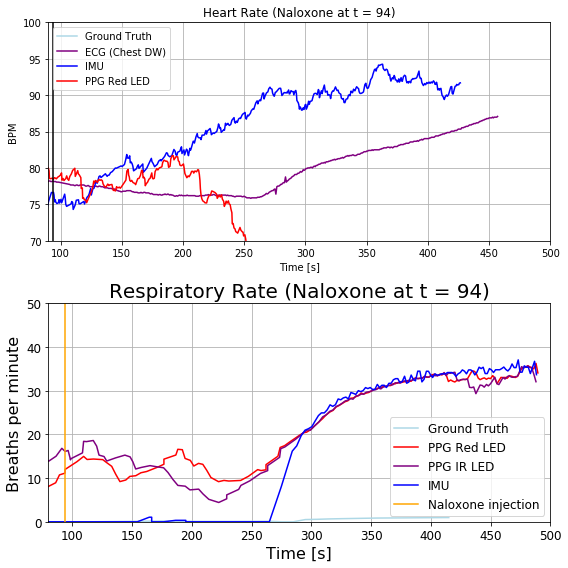

In [27]:
Red_HRx = [-127.41591830822709, -125.63027954808805, -124.60126738122825, -123.844640787949, -122.75509849362687, -122.14979721900346, -120.90892960602548, -120.24309820393974, -119.45620654692931, -119.06276071842409, -118.6390498261877, -117.67056778679026, -116.94420625724217, -115.85466396292004, -115.21909762456546, -114.250615585168, -113.58478418308226, -112.46497682502896, -111.7083502317497, -110.80039831981459, -110.04377172653533, -108.1370727114716, -107.1080605446118, -106.4119640787949, -106.2001086326767, -105.50401216685978, -105.05003621089223, -104.53553012746234, -103.4459878331402, -102.81042149478561, -101.81167439165701, -101.20637311703359, -100.1773609501738, -99.60232473928157, -98.30092699884125, -97.81668597914252, -97.51403534183082, -96.27316772885283, -94.5783241599073, -94.12434820393973, -93.12560110081112, -92.42950463499419, -91.49128765932791, -90.67413093858632, -89.91750434530705, -88.94902230590961, -87.5265643105446, -87.19364860950172, -85.95278099652374, -85.40800984936268, -83.62237108922363, -82.26044322132097, -81.95779258400925, -80.47480446118192, -78.9615512746234, -78.41678012746233, -76.96405706836616, -75.3902737543453, -74.90603273464659, -73.51383980301274, -72.93880359212051, -71.9097914252607, -71.36502027809965, -70.42680330243337, -69.76097190034763, -68.42930909617613, -67.85427288528389, -66.5226100811124, -66.06863412514484, -64.85803157589802, -64.3737905561993, -63.253983198146, -62.618416859791424, -61.43807937427577, -60.83277809965237, -59.743235805330244, -58.98660921205098, -58.472103128621086, -57.83653679026651, -57.4430909617613, -56.62593424101969, -55.99036790266513, -54.71923522595597, -54.295524333719584, -53.78101825028969, -53.08492178447277, -52.38882531865585, -51.390078215527225, -50.36106604866744, -48.93860805330243, -47.87933082271147, -46.91084878331402, -45.57918597914252, -43.88434241019699, -43.18824594438007, -42.219763904982614, -41.55393250289687, -40.28279982618771, -39.76829374275782, -38.83007676709154, -38.04318511008111, -36.772052433371954, -36.25754634994206, -35.379859501738125, -34.592967844727696, -32.86785921205099, -32.020437427578216, -31.173015643105444, -29.96241309385863, -29.41764194669757, -28.2675695249131, -27.78332850521437, -26.058219872537663, -24.30284617612979, -22.456677288528397, -21.18554461181924, -20.640773464658167, -18.824869640787952, -18.037977983777523, -17.70506228273466, -17.160291135573587, -16.373399478563158, -15.556242757821563, -14.406170336037091, -13.67980880648899, -12.62053157589804, -11.954700173812283, -10.744097624565468, -10.169061413673232, -9.109784183082281, -8.504482908458867, -7.32414542294323, -6.779374275782159, -5.6898319814600296, -5.054265643105451, -4.025253476245664, -3.3896871378910856, -2.1790845886442707, -1.6343134414831992, -0.5750362108922487, 0.1210602549246731, 1.271132676709145, 1.9369640787949025, 2.9357111819235104, 3.5712775202780893, 4.691084878331383, 5.326651216685962, 6.4464585747392835, 7.051759849362684, 8.322892526071842, 8.928193800695242, 10.017736095017385, 10.592772305909607, 11.68231460023175, 12.408676129779836, 13.407423232908444, 14.285110081112395, 15.31412224797218, 16.403664542294322, 17.584002027809944, 18.64327925840091, 20.005207126303574, 20.640773464658153, 21.246074739281553, 23.273834009269976, 24.181785921205076, 24.93841251448434, 25.84636442641944, 26.845111529548078, 27.783328505214357, 28.29783458864425, 29.629497392815736, 29.901882966396286, 30.597979432213194, 31.203280706836594, 32.59547363847044, 33.41263035921203, 34.44164252607182, 35.349594438006946, 36.10622103128618, 37.61947421784471, 38.46689600231748, 39.647233487833134, 40.797305909617606, 41.402607184241006, 41.79605301274621, 42.61320973348781, 43.40010139049825, 43.884342410196965, 44.5804388760139, 45.45812572421782, 45.88183661645421, 46.48713789107761, 47.152969293163366, 48.393836906141345, 49.08993337195828, 50.179475666280396, 50.72424681344147, 51.96511442641945, 52.69147595596753, 53.69022305909617, 54.32578939745075, 54.6587050984936, 55.68771726535341, 56.4140787949015, 56.898319814600214, 57.200970451911914, 57.89706691772882, 58.80501882966395, 59.319524913093844, 60.227476825028944, 60.62092265353415, 61.83152520278098, 62.46709154113556, 63.193453070683645, 64.55538093858631, 65.2817424681344, 65.82651361529547, 66.55287514484355, 67.27923667439164, 68.45957415990729, 69.21620075318653, 69.63991164542291, 70.42680330243336, 71.15316483198144, 72.51509269988411, 73.27171929316337, 73.78622537659326, 74.81523754345305, 75.66265932792582, 76.11663528389339, 77.2061775782155, 78.56810544611817, 79.38526216685976, 80.29321407879489, 81.11037079953648, 81.44328650057936, 81.92752752027808, 82.62362398609498, 83.4407807068366, 83.98555185399765, 84.9540338933951, 85.7711906141367, 87.40550405561991, 88.70690179606022, 89.91750434530705, 90.61360081112396, 90.94651651216684, 92.12685399768249, 93.24666135573578, 94.06381807647738, 94.91123986095015, 95.90998696407878, 96.51528823870218, 97.93774623406718, 98.78516801853995, 99.99577056778678, 100.78266222479719, 101.1761080533024, 102.02352983777517, 102.78015643105444, 104.23287949015061, 104.98950608342987, 105.77639774044029, 106.68434965237542, 107.53177143684819, 108.80290411355732, 109.92271147161064, 110.73986819235223, 111.61755504055618, 112.01100086906139, 113.19133835457704, 114.00849507531863, 114.5532662224797, 115.1585674971031, 115.91519409038237, 116.55076042873692, 116.85341106604865, 117.76136297798375, 118.06401361529545, 118.79037514484354, 119.4562065469293, 120.63654403244492, 121.30237543453067, 122.5129779837775, 124.17755648899187, 126.29611095017377, 127.08300260718421, 127.47644843568942, 128.50546060254922, 129.20155706836616, 130.10950898030129, 131.13852114716107, 132.22806344148316, 133.1057502896871, 134.0742323290846, 134.679533603708, 135.43616019698723, 136.04146147161063, 137.07047363847042, 138.55346176129777, 139.43114860950172, 140.09698001158748, 141.91288383545768, 142.4879200463499, 143.09322132097336, 143.8498479142526, 144.69726969872536, 145.75654692931633, 146.3921132676709, 147.11847479721897, 147.93563151796056, 148.78305330243333, 149.60021002317492, 151.08319814600227, 151.9911500579374, 153.3530779258401, 154.1702346465817, 155.19924681344148, 155.5624275782155, 156.13746378910773, 156.5611746813441, 157.3178012746234, 158.10469293163382, 159.10344003476243, 159.79953650057936, 160.73775347624562, 161.28252462340672, 163.03789831981456, 164.09717555040552, 165.24724797219002, 166.21573001158745, 166.97235660486675, 167.39606749710313, 168.15269409038237, 168.81852549246813, 169.18170625724215, 170.02912804171493, 171.02787514484353, 172.17794756662803, 173.11616454229429, 174.50835747392816, 174.93206836616454, 175.53736964078794, 176.53611674391655, 177.2322132097335, 178.6244061413673, 179.4415628621089, 180.68243047508687, 181.6509125144843, 182.74045480880645, 183.37602114716103, 184.49582850521435, 185.1616599073001, 186.03934675550406, 186.7959733487833, 187.67366019698724, 188.24869640787946, 189.39876882966396, 190.0343351680185, 191.21467265353417, 192.09235950173812, 192.60686558516798, 194.39250434530706, 195.66363702201622, 196.1478780417149, 196.87423957126302, 197.44927578215524, 198.17563731170335, 198.87173377752023, 200.35472190034758, 200.96002317497098, 201.53505938586326, 202.4732763615295, 203.13910776361527, 204.19838499420624, 204.98527665121665, 206.19587920046345, 207.01303592120505, 208.1025782155272, 208.76840961761295, 209.73689165701037, 211.0685544611819, 212.12783169177285, 212.73313296639625, 213.33843424101966, 213.8226752607184, 214.18585602549243, 214.67009704519117, 215.30566338354575, 216.09255504055616, 217.30315758980296, 217.90845886442636, 219.30065179606024, 220.08754345307065, 221.26788093858627, 222.35742323290842, 223.44696552723056, 224.1430619930475, 225.3536645422943, 226.08002607184235, 227.3511587485515, 227.9564600231749, 229.46971320973344, 230.40793018539975, 231.4672074159907, 232.1633038818076, 233.22258111239856, 233.73708719582848, 234.49371378910772, 235.22007531865583, 235.9464368482039, 237.03597914252603, 237.7018105446118, 238.4887022016222, 239.15453360370796, 239.9111601969872, 240.21381083429893, 240.97043742757816, 241.63626882966392, 242.42316048667433, 243.0587268250289, 243.96667873696404, 244.6325101390498, 246.53920915411354, 247.29583574739277, 248.35511297798374, 248.99067931633832, 249.50518539976824, 250.50393250289684, 251.13949884125142, 251.593474797219, 252.47116164542288, 253.71202925840092, 254.4081257242178, 255.31607763615293, 256.1332343568945, 256.7385356315179, 257.4951622247971, 258.13072856315176, 258.9176202201622, 259.43212630359204, 260.21901796060246, 260.94537949015063, 261.8230663383545, 262.15598203939743, 262.8823435689455, 263.9718858632677, 264.7587775202781, 265.636464368482, 266.57468134414825, 266.9681271726535, 267.66422363847045, 268.3905851680185, 269.3893322711471, 270.11569380069517, 271.29603128621085, 272.96060979142527, 273.8685617033603, 274.17121234067207, 274.80677867902665, 275.71473059096166, 276.7134776940904, 277.47010428736957, 278.89256228273456, 279.73998406720733, 280.5874058516801, 281.61641801853995, 282.4335747392815, 283.1296712050984, 284.0678881807648, 285.67193655851673, 287.3970451911935, 289.42480446118185, 290.332756373117, 291.05911790266504, 291.9973348783314, 292.6934313441482, 293.2382024913093, 294.2974797219003, 295.2054316338354, 295.8712630359211, 297.626636732329, 298.32273319814595, 298.95829953650053, 300.53208285052136, 301.8940107184241, 303.13487833140204, 304.5270712630359, 306.01005938586326, 307.3417221900348, 309.06683082271144, 309.7629272885284, 311.2156503476245, 311.6696263035921, 312.27492757821545, 313.3947349362688, 313.90924101969864, 314.6356025492468, 316.1791207995364, 316.96601245654693, 319.29642236384694, 320.7794104866743, 321.50577201622247, 323.0492902665122, 323.745386732329, 325.9244713209733, 328.19435110081105, 329.4654837775202, 330.0102549246813, 330.49449594438005, 331.58403823870214, 332.28013470451907, 333.55126738122823, 334.4289542294321, 336.5777737543453, 338.63579808806486, 339.906930764774, 340.6332922943221, 342.69131662804165, 343.6295336037079, 344.68881083429886, 345.77835312862106, 346.53497972190024, 347.07975086906134, 348.5627389918887, 350.2273174971031, 350.8931488991888, 351.83136587485507, 352.6182575318655, 354.0407155272306, 354.8578722479721, 356.55271581691767, 357.94490874855154, 358.5502100231749, 359.4278968713789, 360.39637891077626, 362.4241381807647, 364.240042004635, 365.87435544611816, 366.388861529548, 367.6599942062572, 368.2047653534183, 369.4153679026651, 370.05093424101966, 371.26153679026646, 371.9878983198145, 373.0471755504055, 373.89459733487826, 374.9236095017381, 375.61970596755503, 376.7697783893395, 377.4658748551564, 379.25151361529544, 380.5529113557357, 381.21874275782153, 382.9135863267671, 384.45710457705667]
Red_HRy = [81.96925894398122, 82.10526469625232, 82.68834818090245, 82.57896976171293, 82.7907735916072, 82.14733585152835, 82.37183315136754, 82.1787340752821, 81.91186124961531, 81.48825358982675, 80.59389997427314, 81.21342617671392, 80.73519542395262, 80.5263130261948, 79.90727045076608, 79.7597642120897, 79.96001510580795, 79.75462263508884, 79.72412288358404, 80.86555297777797, 81.17393935410404, 81.62175316588053, 81.77292295819723, 81.4326797348888, 79.42659488889011, 79.13106934635935, 78.71054246955106, 78.03999646220339, 78.53271905595747, 78.15510308494595, 78.54559232769648, 78.06267959553755, 78.58097602633765, 78.0882534325836, 78.57125060480763, 77.91528168457621, 76.87683776429454, 76.88892608043972, 77.63629102306668, 76.88105908104365, 77.142255898937, 76.80201267562855, 77.06363077871204, 76.93013018289989, 77.08117657130451, 76.99745681421791, 77.51969166774448, 76.2532400696346, 76.7609493477324, 76.13158939604654, 76.78681710845845, 76.89695510000348, 75.95788380367222, 76.10398522102788, 76.53352338805348, 76.0328961537579, 76.30349380539869, 76.50533039623912, 75.81696794908271, 75.89432239130498, 75.41733379634306, 75.27480227787304, 75.11746228995156, 75.46919329520826, 74.86395738508972, 75.07422082349387, 74.82380181113885, 75.03406524954299, 74.31316203215736, 74.45705198885328, 74.38416655327201, 74.29892461878384, 75.55764452215557, 75.91126482945734, 75.91126482945734, 75.79154962125622, 75.73280935909888, 75.14972587444875, 74.86651389619011, 74.13451986007546, 73.79676335267071, 73.56075337078852, 73.59706259877039, 72.7027089832168, 72.52778393782175, 73.19082201401254, 73.06312579193134, 73.22486689839606, 73.88083581862749, 74.32098024367329, 74.43817140709065, 75.23470509594307, 75.77538250898229, 76.32249655789104, 75.94407970465045, 76.1865030012577, 75.8360639372508, 76.46542388893667, 75.78278956544382, 75.96931358338298, 75.80757247691825, 76.27959244068266, 76.91568351484644, 76.81515187956194, 76.87869302853022, 77.76994124958537, 79.04439515174926, 79.1983147051507, 79.36352169246823, 79.42830874631824, 79.56743041984879, 79.85336559020608, 80.00118236833231, 80.60341473589378, 81.1044523203814, 81.07298432279711, 80.79763934393455, 81.56860528474974, 81.63214643371802, 80.65592332684164, 80.06287260313765, 80.09337235464243, 80.77517896896877, 81.01596648084859, 81.01596648084859, 80.89009449051142, 80.78195900790358, 81.45250501525125, 80.99217594842219, 81.1337819375515, 81.46419591218658, 81.50655667816544, 80.84572872889528, 81.029292048137, 80.74608006987836, 80.89724986219505, 81.75546797813033, 82.49889942105925, 82.25946900465702, 82.42729832510656, 82.66672874150882, 82.76454866821, 82.5976729234448, 82.36404688077353, 81.88104970854948, 81.84086422514793, 81.75877379666717, 83.02522539477704, 82.54231266261807, 82.60609914420787, 82.34911049726946, 82.50645048519094, 82.06379061486645, 82.50434258104654, 82.10011271846106, 82.20738998295299, 82.01939582497096, 82.19880612794024, 83.17310374545391, 83.37280449935425, 83.59937408196116, 83.57183958407491, 83.4207931956703, 83.19204505938447, 83.55697989704113, 83.60418189341755, 83.28320831805777, 83.15818681414179, 83.29168740995398, 83.33579161124005, 83.6946122171786, 83.75237689805887, 82.28387034412518, 82.5233007605274, 82.52330076052742, 82.88531955012759, 83.09510620068953, 84.49450656384987, 84.4945065638499, 85.68399687253616, 86.11353503956178, 86.30663411564717, 86.30663411564717, 86.68605686163961, 86.19043589968702, 85.025899933141, 84.5748586344328, 84.57485863443281, 84.8607938047901, 84.5819277903922, 84.76026216950558, 84.00503022748254, 83.59687178822746, 83.24643272422053, 83.44651519834774, 83.20409190174048, 83.6446438679206, 83.33625749159454, 83.84396676969233, 83.60101531775477, 83.40485117696954, 83.1444263693754, 82.24329734764336, 81.99062783762831, 82.20800545251981, 81.96019497154352, 80.77070466285721, 80.61678510945578, 80.52238111670289, 80.30025407493143, 80.46546106224896, 79.67472676397698, 79.88713574767097, 79.677349097109, 79.25590270089079, 79.47617868398085, 79.09069571357325, 78.72356907508983, 78.48061762315227, 79.30665255973996, 79.8417359194729, 80.46480227164189, 79.84173591947288, 79.84173591947288, 79.61645366403987, 80.03785119690778, 79.88436857643214, 79.81958152258213, 79.57830559789932, 79.43669960877, 78.63674998596929, 78.70558623068491, 79.058027803629, 79.73983441795535, 79.87200000780938, 80.03887575257458, 79.88868758228591, 79.35766512305096, 79.09646830515763, 78.88392130393038, 78.42205230712864, 78.23350085421188, 78.91530746853824, 79.53942275396007, 79.67913267980998, 80.04546121690541, 79.61448646738138, 78.54648170088416, 78.52168515494532, 78.60540491203191, 78.4218415927902, 78.6578515746724, 78.59290533887189, 78.50279243669868, 78.7646024826311, 78.8495660761087, 79.03756023409072, 79.31847899795052, 78.31519769845127, 78.55120768033348, 78.26654333295556, 78.53714098459636, 78.91031441477246, 78.48383483864633, 78.29502685314057, 78.82604931237552, 79.18006428519882, 79.68767039132385, 79.7794520509447, 79.95778643005809, 78.83738739518874, 79.3203001273477, 79.62945940186006, 79.16759040505833, 79.07747750288512, 78.85090792027822, 78.66936178036883, 77.18249889451097, 77.25592422220765, 75.82413033212231, 75.89922441726665, 75.6176215979754, 75.55985691709513, 75.22515185188037, 75.720772813833, 76.3515631290454, 77.30740355566832, 78.1969796412243, 77.91104447086704, 78.2720009137457, 78.17254520231707, 78.00733821499952, 78.41549665425462, 78.29578144605351, 78.37466011373829, 78.26346310304379, 77.82291113686368, 77.58060755546462, 77.45131513060741, 77.36385260790989, 77.7852990041281, 77.57370384795784, 77.66381675013106, 77.72989954505807, 77.32599791222742, 76.90117994483947, 76.9701359047633, 76.82852991563398, 77.42827292841699, 77.27722654001238, 77.27722654001238, 77.36900819963324, 77.21166821171177, 77.37854395647696, 77.73644920372689, 77.97675027618877, 78.32919184913285, 79.57742241997649, 79.78733247445054, 79.03639162300718, 78.75547285914739, 78.28345289538298, 78.15128730552895, 78.28992253964158, 78.00384983432983, 77.93489387440599, 77.86180691227473, 77.70446692435326, 78.52882633368621, 78.56315505832362, 78.98548871011282, 79.68761840621237, 79.57823998702281, 78.64571274153705, 78.7146687014609, 78.47436762899902, 77.55655103279045, 77.83976301104909, 78.03200386901862, 78.4543375208078, 78.57732038977868, 79.31251260955494, 78.65894650588116, 78.49373951856363, 78.57660195734358, 79.51691050175961, 79.91197068882329, 79.72840736958159, 80.00736851139357, 80.07145742888744, 80.16027838981084, 80.74122603752086, 81.06736909121473, 80.9922750060704, 80.90941256729043, 80.94245396475395, 80.76716803656558, 80.08420709377918, 80.22332876730975, 81.26177268759143, 81.69748342337395, 81.67469625270947, 81.10928196456388, 81.56626129219475, 81.51604640243258, 80.98502394319765, 80.86701895225654, 80.40668988542748, 80.31490822580663, 80.31490822580663, 80.54983060408568, 79.9326422363711, 79.23703386871829, 78.89341606168325, 78.6531149892214, 78.91272596929181, 78.78974310032093, 79.15607163741635, 79.52319827589977, 79.53893227469192, 79.29863120223004, 79.5802340215213, 79.47147707062263, 79.76700261315337, 79.71980061677692, 79.10980558668139, 78.31130514797995, 77.142767920612, 76.33469026525445, 75.79523887809513, 75.48330960134173, 75.33549282321552, 75.2062003983583, 75.18824311712814, 75.74740522804903, 76.230317960208, 76.21543444783704, 76.8309114594122, 76.79499689695187, 76.68809825809934, 76.62455710913106, 76.41000258014724, 75.82334919661149, 76.25288736363709, 76.00209876808863, 76.2976243106194, 75.71101979043392, 75.4089270136247, 74.71478000808882, 75.02316638441489, 75.43618385270875, 75.16083887384619, 75.4720984151691, 75.04298935720145, 74.96411068951669, 74.34220474494104, 73.84075294814193, 72.33028906409585, 72.36333046155936, 71.7537431821524, 71.63076031318153, 71.25314434217, 71.14300635062497, 71.03487086801714, 71.82157080762448, 71.43316580886976, 71.22719346104529, 71.18428255524854, 70.65762650459678, 70.81936761106151, 70.29713275753494, 69.70973013596148, 69.38012998885011, 69.32757209256671, 69.45686451742391, 69.47965168808841, 69.36492461356234, 68.66957580127058, 68.20699623678149, 67.6300829477361, 68.03375612941699, 67.33960912388109, 67.67849525171194, 67.34808127707686, 67.608506084671, 66.30186900315955, 66.30186900315955, 66.31760300195171, 66.2631391599789, 66.1626075246944, 66.38504610509388, 65.38176480559464, 65.38176480559463, 64.89174408050025, 64.7520341546503, 64.82712823979466, 64.67281402087167, 64.70108473527895, 65.20642375530907, 63.986433695118, 63.72600888752386, 63.3610740498672, 63.44393648864716, 63.38519622648982, 63.33744470867824, 62.929791103609, 62.90537627789704, 63.05654607021374, 62.62729030829466, 62.473370754893224, 62.5963536238641, 62.53698004351638, 62.80870206213076, 63.27530273813666, 62.93423024819077, 62.48224886779372, 62.2933024600112, 62.42259488486841, 61.857021414772326, 62.23463738578384, 62.14023339303096, 62.14023339303097, 62.14623001689005, 61.626088077809335, 61.00704550238061, 61.00704550238063, 61.88814943474083, 61.77867034512405, 61.93077908025017, 62.470230467409486, 62.62041863769816, 63.1737434756038, 62.91254665771046, 63.183144309351256, 62.35710937276355, 62.68752334739863, 62.45671441709221, 62.053041235411335, 61.98950008644305, 62.240288681991494, 62.27078843349628, 62.32800297455864, 62.29746799037981, 62.03785701030939, 62.41162847482871, 62.34267251490487, 62.77535748168891, 63.150537220629374, 63.36213237679962, 63.251994385254584, 62.53464825611265, 62.92799822591632, 62.66680140802296, 62.52519541889365, 62.6676152355467, 63.04922010766046, 63.20824287620141, 64.38829278561239, 63.85379959134977, 64.22308579829485, 64.48470390137837, 64.29233350105174, 64.11569709951726, 63.63246666161345, 63.21470186609783, 64.61237136919243, 65.49097216538117, 65.22935406229766, 65.45179264269714, 65.3501268043479, 65.63635167599227, 65.42380467476502, 65.93173920098975, 65.85477942428905, 65.23066413886723, 64.92110257512323, 64.64938055650886, 64.87519372063495, 65.4067292450479, 65.40005421525728, 64.58169142978342, 64.93570640260671, 64.45385268959723, 64.33228528383528, 63.7300529162738, 63.63092872388327, 64.22095367858877, 64.0855044715955, 63.828039036814914, 64.34633546761505, 64.10391217100779, 64.40824083185588, 64.16581753524862, 64.77384325128412, 64.67992713446279, 64.37955079388544, 64.88748532011017, 65.2612567846295]

#Default RR filter parameters commented out
#Red_RRx = [-127.14353273464657, -125.41842410196986, -122.2103273464658, -120.1825680764774, -118.45745944380069, -115.00724217844727, -113.16107329084588, -111.55702491309385, -109.68059096176128, -107.74362688296638, -104.62632531865584, -100.9945176709154, -97.63509559675549, -95.75866164542293, -93.91249275782154, -92.12685399768249, -90.4017453650058, -87.10285341830821, -85.0750941483198, -81.74593713789106, -80.0813586326767, -78.26545480880648, -74.72444235225956, -71.27422508690613, -67.7332126303592, -65.88704374275783, -64.31326042873697, -60.92357329084588, -57.26150057937427, -53.75075318655851, -51.722993916570104, -48.30304171494785, -43.097450753186564, -41.34207705677868, -39.55643829663963, -37.92212485515644, -36.10622103128621, -34.35084733487834, -32.62573870220163, -31.051955388180772, -27.48067786790267, -25.816099362688306, -24.030460602549255, -22.305351969872547, -20.307857763615303, -15.223327056778684, -12.015230301274626, -8.534747972190045, -6.597783893395144, -4.872675260718436, -3.2686268829664, -1.6948435689455421, 0.09079519119349458, 2.02775926998841, 5.477976535341826, 7.021494785631505, 9.049254055619928, 12.771856894553865, 15.01147161066048, 19.79335168018538, 21.760580822711447, 25.483183661645413, 29.296581691772886, 33.71528099652373, 37.16549826187715, 41.3118119930475, 52.26776506373115, 61.16569380069522, 74.33099652375434, 94.54805909617612, 97.42324015063728, 102.71962630359211, 113.70584443800693, 121.36290556199303, 124.90391801853995, 138.1297508690614, 142.45765498261875, 147.3303302433372, 161.70623551564307, 173.3280199884125, 179.41129779837775, 183.79973203939744, 190.63963644264192, 194.2411790266512, 197.4795408458864, 201.0508183661645, 207.40648174971028, 216.00175984936266, 225.89843568945537, 242.9679316338354, 258.94788528389336, 267.1497175550405, 278.438586326767, 281.04138180764767, 284.1586833719582, 287.8812862108922, 291.4222986674391, 294.53960023174966, 297.5358415411355, 300.5018177867902, 303.19540845886434, 305.85873406720737, 308.3404692931633, 310.79193945538816, 313.2434096176129, 315.573819524913, 317.9042294322131, 320.1438441483198, 322.23213354577047, 324.50201332560823, 326.80215816917723, 328.7693873117033, 330.9484719003475, 333.0367612977983, 335.125050695249, 337.27387022016217, 339.1805692352259, 341.3596538238702, 343.2663528389339, 345.29411210892226, 347.200811123986, 349.34963064889905, 351.3471248551564, 353.3446190614136, 355.2210530127461, 357.12775202780983, 359.00418597914245, 360.9411500579373, 362.8175840092699, 364.6940179606024, 366.60071697566616, 368.56794611819225, 370.5957053881807, 372.3510790845886, 374.2275130359211, 375.982886732329, 377.91985081112387, 379.76601969872524, 381.5516584588644, 383.458357473928, 385.27426129779826, 387.24149044032436, 388.9363340092699, 390.63117757821544, 392.5681416570103, 394.29325028968697, 396.1696842410196, 397.8645278099651, 399.7409617612976, 401.61739571263024, 403.2214440903823, 405.0676129779837, 406.76245654692923, 408.63889049826173, 410.3639991309385, 412.17990295480865, 413.8747465237542, 415.7511804750868, 419.29219293163374, 420.9870365005793, 422.71214513325594, 426.22289252607175, 428.1598566048666, 429.76390498261867, 431.51927867902657, 433.24438731170324, 434.99976100811114, 438.4499782734646, 440.38694235225944, 443.71609936268817, 445.4109429316337, 448.74009994206244, 450.6770640208573, 452.28111239860937, 454.0970162224796, 457.54723348783307, 460.8763904982618, 464.44766801853984, 466.20304171494774, 467.83735515643093]
#Red_RRy = [28.734739780918282, 26.908767815829684, 26.824521519390345, 27.06314499649801, 26.8350766792348, 28.456197875035816, 28.684266192299027, 26.762523151319506, 26.52389967421184, 25.22852670547204, 26.908301192584183, 28.560371065759586, 28.468780220399896, 27.01024654628919, 25.454703664442654, 25.344535070510425, 25.6789621703435, 25.630244513532954, 24.309729800547064, 24.216509556919615, 23.570924586126512, 22.021195324563752, 21.479371573671397, 23.15842625421264, 24.824137729991403, 25.245430593824842, 24.737101402078558, 26.3851021376353, 28.224727572750147, 30.328158711010605, 29.04929865234207, 30.89940425448218, 33.10693948115329, 33.166905719744044, 32.810527010584494, 30.31931053516127, 28.885438569763743, 27.19126196818657, 26.810851142126445, 26.476424042293367, 28.53688854673343, 28.74484139790236, 28.74484139790236, 28.364430571842227, 27.099688085200775, 29.806861406790723, 30.89552474197248, 30.783401229901195, 30.36480244446824, 28.14149721874251, 27.45093680731361, 25.25024335524131, 23.46350111952296, 21.723735756504347, 21.723735756504347, 19.283581027554845, 16.87229738319065, 15.934836131115011, 13.711547317633862, 12.753589724228885, 11.790439676709623, 11.311512103719403, 10.284251025554454, 9.709975830049226, 9.66538555007148, 8.671974679097952, 9.510679548453309, 10.067721741715648, 10.02934334901756, 10.248836165251566, 9.148321434338182, 9.382703761172918, 9.713770202517217, 10.596132562123303, 10.754490565782579, 11.980903992171175, 11.538591578573763, 11.005292844253301, 11.19419199730397, 11.029424390271846, 10.418584443948514, 9.782898059359836, 9.437189827102676, 10.076450790340376, 10.148403747342842, 10.080108175901113, 10.83049888752657, 12.057182794451556, 13.453427557991512, 15.124866031503748, 16.97690554714216, 18.498184246191634, 20.384350465091945, 20.526647611790946, 21.049416935197762, 22.012295796978798, 22.89251950563036, 23.64681013258528, 24.517466192229758, 25.13783528746297, 25.518856724800884, 26.316009320948456, 26.65179588053695, 27.077449954140917, 27.50310402774489, 27.720680451503124, 28.29282586212664, 28.367243423981392, 28.640878185583936, 28.956497504638342, 29.494765884369677, 29.237021505456074, 29.48733512260386, 29.617933531550534, 29.94232312796646, 30.296892114831742, 30.347646949645117, 30.691828173223325, 30.7425830080367, 30.981206485144366, 30.981206485144366, 31.238950864057966, 31.19411857441956, 31.608430768319344, 31.608430768319344, 31.87970660956326, 31.779783028524424, 31.932125537321337, 32.09471305901164, 32.04395822419826, 32.20129821211973, 32.201298212119724, 32.78251682421768, 32.90459095277744, 32.8046673717386, 32.86463361032937, 32.9645571913682, 33.25473339860041, 33.09214587691011, 33.142900711723485, 33.579296527279254, 33.77929489780237, 33.77929489780237, 33.43669976281208, 33.81711058887221, 33.64320849695902, 33.9858036319493, 33.643208496959005, 32.140084542870554, 32.482679677860844, 32.22018595421828, 30.67925023305411, 30.236731517024985, 30.779712485688844, 30.719746247098083, 30.893648339011293, 30.77157421045153, 29.31304053634082, 30.716240909390443, 28.978349224621514, 29.04045711459051, 29.133677358217966, 29.13367735821796, 29.13367735821796, 29.019741504895517, 27.280720585763515, 25.664903029554353, 25.605953167888856, 25.926397755358227, 27.795406096728374, 27.859772455423517, 29.798049973866018, 29.847218720091472, 29.99390638918585, 29.99390638918585, 30.040906954567795, 30.0409069545678, 30.084734895197357, 30.084734895197357, 27.644824937574604]
Red_RRx = [-127.14353273464657, -125.41842410196986, -122.2103273464658, -120.1825680764774, -118.45745944380069, -116.67182068366164, -115.00724217844727, -113.16107329084588, -111.55702491309385, -109.68059096176128, -107.74362688296638, -104.62632531865584, -100.9945176709154, -99.54179461181923, -97.63509559675549, -95.75866164542293, -93.91249275782154, -92.12685399768249, -90.4017453650058, -88.73716685979142, -87.10285341830821, -85.0750941483198, -83.56184096176129, -81.74593713789106, -80.0813586326767, -78.26545480880648, -76.44955098493627, -74.72444235225956, -72.81774333719582, -71.27422508690613, -67.7332126303592, -65.88704374275783, -64.31326042873697, -60.92357329084588, -58.926079084588636, -57.26150057937427, -53.75075318655851, -51.722993916570104, -50.300535921205096, -48.30304171494785, -46.820053592120516, -44.76202925840093, -43.097450753186564, -41.34207705677868, -39.55643829663963, -37.92212485515644, -36.10622103128621, -34.35084733487834, -32.62573870220163, -31.051955388180772, -29.447907010428736, -27.48067786790267, -25.816099362688306, -24.030460602549255, -22.305351969872547, -20.307857763615303, -17.0392308806489, -15.223327056778684, -13.86139918887602, -12.015230301274626, -10.108531286210903, -8.534747972190045, -6.597783893395144, -4.872675260718436, -3.2686268829664, -1.6948435689455421, 0.09079519119349458, 2.02775926998841, 3.7226028389339536, 5.477976535341826, 7.021494785631505, 9.049254055619928, 10.895422943221307, 12.771856894553865, 15.01147161066048, 17.13002607184241, 19.79335168018538, 21.760580822711447, 25.483183661645413, 29.296581691772886, 33.71528099652373, 37.16549826187715, 41.3118119930475, 46.75952346465816, 49.21099362688294, 52.26776506373115, 58.86554895712628, 61.16569380069522, 61.16569380069522, 71.15316483198144, 74.33099652375434, 78.96155127462337, 78.96155127462337, 88.9490223059096, 94.54805909617612, 97.42324015063728, 102.71962630359211, 110.52801274623404, 113.70584443800693, 118.03374855156427, 121.36290556199303, 124.90391801853995, 129.80685834298953, 133.16628041714944, 138.1297508690614, 142.45765498261875, 147.3303302433372, 156.8032951911935, 161.70623551564307, 161.70623551564307, 171.69370654692932, 173.3280199884125, 177.1111529548088, 179.41129779837775, 183.79973203939744, 186.70517815758978, 190.63963644264192, 194.2411790266512, 197.4795408458864, 201.0508183661645, 207.40648174971028, 211.976506373117, 216.00175984936266, 225.89843568945537, 232.37515932792581, 240.1532807068366, 242.9679316338354, 247.1142453650058, 247.1142453650058, 257.101716396292, 258.94788528389336, 262.7007531865585, 267.1497175550405, 275.230489571263, 278.438586326767, 281.04138180764767, 284.1586833719582, 287.8812862108922, 291.4222986674391, 294.53960023174966, 297.5358415411355, 300.5018177867902, 303.19540845886434, 305.85873406720737, 308.3404692931633, 310.79193945538816, 313.2434096176129, 315.573819524913, 317.9042294322131, 320.1438441483198, 322.23213354577047, 324.50201332560823, 326.80215816917723, 328.7693873117033, 330.9484719003475, 333.0367612977983, 335.125050695249, 337.27387022016217, 339.1805692352259, 341.3596538238702, 343.2663528389339, 345.29411210892226, 347.200811123986, 349.34963064889905, 351.3471248551564, 353.3446190614136, 355.2210530127461, 357.12775202780983, 359.00418597914245, 360.9411500579373, 362.8175840092699, 364.6940179606024, 366.60071697566616, 368.56794611819225, 370.5957053881807, 372.3510790845886, 374.2275130359211, 375.982886732329, 377.91985081112387, 379.76601969872524, 381.5516584588644, 383.458357473928, 385.27426129779826, 387.24149044032436, 388.9363340092699, 390.63117757821544, 392.5681416570103, 394.29325028968697, 396.1696842410196, 397.8645278099651, 399.7409617612976, 401.61739571263024, 403.2214440903823, 405.0676129779837, 406.76245654692923, 408.63889049826173, 410.3639991309385, 412.17990295480865, 413.8747465237542, 415.7511804750868, 419.29219293163374, 420.9870365005793, 422.71214513325594, 424.67937427578204, 426.22289252607175, 428.1598566048666, 429.76390498261867, 431.51927867902657, 433.24438731170324, 434.99976100811114, 436.78539976825016, 438.4499782734646, 440.38694235225944, 443.71609936268817, 445.4109429316337, 447.19658169177274, 448.74009994206244, 450.6770640208573, 452.28111239860937, 454.0970162224796, 455.580004345307, 457.54723348783307, 460.8763904982618, 462.7225593858632, 464.44766801853984, 466.20304171494774, 467.83735515643093, 469.50193366164524, 471.1059820393973, 473.01268105446104, 474.55619930475075]
Red_RRy = [32.03563546383144, 30.48233522538345, 30.26413731760556, 31.435380884409017, 31.104138804574355, 30.941551282884046, 30.58700871695669, 30.69717731088891, 30.434683587246354, 30.841645080931784, 31.415280453562126, 32.44946996988118, 34.76236779232674, 33.93633285573904, 34.39404918423785, 34.50063433734594, 34.55480056269595, 34.67270028602694, 34.34145820619227, 34.624165350265066, 32.647329604585096, 32.938372009450845, 32.78587325192696, 31.25180836969266, 30.65105568853797, 30.951432029115306, 29.35633008260113, 28.83721936047217, 29.908470342065147, 29.02501051683766, 31.376465281378263, 31.04190918362817, 30.833956332459245, 32.48195706801599, 32.83833577717555, 32.90508607508163, 34.500188021595804, 34.959332505134, 34.21932360337571, 35.02802913569933, 34.72267929391104, 34.85723702113799, 34.85723702113799, 34.799303536397765, 34.91720325972875, 34.24970028066799, 32.781193726734294, 32.66725787341185, 33.594735696948916, 33.03224027985263, 32.4385044763754, 33.20099826399481, 32.69411318927054, 32.81201291260153, 33.074506636244095, 33.88321216856771, 35.407721091083616, 35.20121235693669, 34.33584242336863, 34.50394450204108, 35.24436797461269, 34.39083015265065, 34.54317266144757, 34.26268541642627, 33.20118208129063, 32.22083292577995, 31.113513365177027, 31.065857503450815, 29.13748326124259, 27.292807540784015, 24.763449958968334, 23.54353976196529, 21.74063474301595, 19.644460065223498, 19.412938761675395, 18.54367427395086, 17.200247980084292, 16.75880420830463, 15.602772135569614, 14.029372256354947, 12.671506607169682, 12.228226765037999, 11.166106582949753, 10.064726667499485, 7.617215744276669, 7.741185552373207, 7.964637204944244, 6.124510418420847, 7.556846860188682, 8.943199201314894, 10.745457244778967, 11.144146806932909, 11.982953948581116, 13.768975433095065, 14.977807047613652, 14.277334285781459, 14.375842799958377, 14.240819628809485, 13.576495235363293, 12.706414729604395, 10.904156686140322, 9.209726046986066, 9.571957663623042, 10.394467557807095, 10.552866183157809, 11.231601183500848, 11.525232331528201, 12.557803723788606, 13.186836904990733, 14.350636127089928, 15.294676054618728, 16.607579265089246, 16.512181546096862, 14.50991434104121, 14.069078422578679, 12.775385574420898, 13.382101061343874, 13.163216750109203, 11.81745722438275, 10.137386166916238, 9.193346239387438, 9.479220325538279, 9.337259434180563, 9.47349857432491, 10.417372033871429, 11.951191317083774, 11.744229854737965, 11.908936838711302, 13.096338360778478, 15.02107996059448, 17.023588897776783, 17.44775430300286, 18.326635776464663, 19.83695501700806, 20.384350465091945, 20.526647611790946, 21.049416935197762, 22.012295796978798, 22.89251950563036, 23.64681013258528, 24.517466192229758, 25.13783528746297, 25.518856724800884, 26.316009320948456, 26.65179588053695, 27.077449954140917, 27.50310402774489, 27.720680451503124, 28.29282586212664, 28.367243423981392, 28.640878185583936, 28.956497504638342, 29.494765884369677, 29.237021505456074, 29.48733512260386, 29.617933531550534, 29.94232312796646, 30.296892114831742, 30.347646949645117, 30.691828173223325, 30.7425830080367, 30.981206485144366, 30.981206485144366, 31.238950864057966, 31.19411857441956, 31.608430768319344, 31.608430768319344, 31.87970660956326, 31.779783028524424, 31.932125537321337, 32.09471305901164, 32.04395822419826, 32.20129821211973, 32.201298212119724, 32.78251682421768, 32.90459095277744, 32.8046673717386, 32.86463361032937, 32.9645571913682, 33.25473339860041, 33.09214587691011, 33.142900711723485, 33.579296527279254, 33.77929489780237, 33.77929489780237, 33.43669976281208, 33.81711058887221, 33.64320849695902, 33.9858036319493, 33.643208496959005, 32.140084542870554, 32.482679677860844, 32.22018595421828, 32.02018758369515, 32.367261086463095, 32.26733750542426, 32.52983122906683, 32.64376708238927, 32.581659192420275, 32.8021801988508, 34.46789167462957, 34.53225803332471, 34.15184720726459, 32.904130100250995, 32.557056597483054, 32.81956770021219, 32.96625536930657, 32.6458107818372, 32.90830450547976, 32.79436865215733, 33.480111940919166, 32.92557100446868, 31.63019803572888, 33.0779135132656, 33.0158056232966, 33.073739108036825, 32.8577822618701, 33.364667336594366, 33.36466733659437, 33.207327348672905, 33.048665175978996, 33.30282977185213, 35.04072145662106, 35.39526402254842, 35.39526402254842, 35.717723984781735, 35.46453319962076, 35.33805895095661, 35.01559898872329, 36.274318892095025, 34.0961334609307]
Red_RRx = [i+15 for i in Red_RRx]

#Default RR filter parameters commented out
#IR_RRx = [-125.81186993047507, -123.844640787949, -122.08926709154112, -120.30362833140207, -118.57851969872537, -116.94420625724217, -114.97697711471609, -110.0740367902665, -107.62256662804171, -104.59606025492467, -102.59856604866742, -100.9945176709154, -99.32993916570103, -97.48377027809964, -95.87972190034762, -94.00328794901505, -89.22140787949014, -87.07258835457705, -85.25668453070683, -83.62237108922363, -81.74593713789106, -80.0813586326767, -78.23518974507532, -76.57061123986095, -74.6941772885284, -73.09012891077636, -71.3044901506373, -69.45832126303593, -67.76347769409038, -64.40405561993047, -60.893308227114716, -57.35229577056779, -55.68771726535341, -53.811283314020855, -50.27027085747393, -48.4543670336037, -45.21600521436848, -43.248776071842414, -41.40260718424102, -38.28530561993048, -36.318076477404404, -34.41137746234068, -32.68626882966396, -31.021690324449594, -29.326846755504064, -27.571473059096178, -25.725304171494784, -23.939665411355733, -22.123761587485518, -20.39865295480881, -18.885399768250295, -17.402411645422944, -15.586507821552727, -13.770603997682512, -11.984965237543461, -10.259856604866753, -8.474217844727702, -6.960964658169187, -5.175325898030136, -3.3896871378910856, -1.604048377752035, 0.12106025492467312, 1.694843568945531, 3.5107473928157606, 5.447711471610647, 8.837398609501735, 12.711326767091537, 14.73908603707993, 17.008965816917723, 23.42515932792584, 32.86785921205096, 37.34708864426419, 41.34207705677868, 46.45687282734646, 52.47962050984934, 56.74699449594435, 61.28675405561991, 65.2817424681344, 71.45581546929314, 76.2982256662804, 79.08261152954806, 81.56434675550405, 83.59210602549244, 94.51779403244494, 96.87846900347621, 102.59856604866742, 105.44348203939744, 107.4107111819235, 111.587289976825, 113.85716975666277, 121.30237543453067, 129.0502317497103, 133.4084009269988, 135.67828070683657, 138.09948580533023, 142.69977549246812, 150.0844510428737, 156.0769336616454, 161.4641150057937, 165.1867178447277, 169.12117612977983, 173.3885501158748, 179.5323580533024, 183.46681633835453, 190.76069669756663, 194.39250434530703, 199.26517960602547, 207.55780706836612, 214.24638615295476, 226.14055619930474, 233.6160269409038, 242.48369061413672, 248.5064382966396, 259.4321263035921, 262.88234356894543, 267.17998261877165, 271.9618626882966, 278.438586326767, 281.67694814600225, 284.21921349942056, 287.8812862108922, 291.3920336037079, 294.5698652954808, 297.59637166859784, 300.4110225955967, 303.10461326767086, 305.82846900347613, 308.3102042294321, 310.7314093279258, 313.33420480880636, 315.60408458864424, 317.9042294322131, 319.8714585747392, 322.32292873696395, 324.38095307068363, 326.7416280417149, 328.7391222479721, 330.9484719003475, 333.0064962340671, 335.125050695249, 337.24360515643093, 339.2713644264194, 341.32938876013895, 343.20582271147157, 345.2335819814599, 347.2916063151795, 349.2891005214368, 351.19579953650054, 353.19329374275776, 355.190787949015, 357.12775202780983, 359.0949811703359, 360.9411500579373, 362.93864426419464, 364.6940179606024, 366.6612471031285, 368.56794611819225, 370.3838499420625, 372.3510790845886, 374.07618771726527, 376.0736819235225, 377.8593206836615, 379.67522450753177, 381.5819235225955, 383.3372972190034, 385.2137311703359, 387.1506952491309, 388.87580388180754, 390.6009125144842, 392.41681633835447, 394.3537804171493, 396.1696842410196, 397.7434675550404, 399.7409617612976, 401.52660052143676, 403.2214440903823, 405.12814310544604, 406.88351680185383, 408.6086254345306, 410.30346900347615, 412.2101680185399, 413.81421639629184, 415.7511804750868, 417.4157589803011, 419.2316628041714, 420.86597624565456, 422.71214513325594, 426.25315758980287, 428.0690614136731, 429.6731097914252, 431.5495437427577, 433.15359212050976, 435.0602911355735, 438.5105084009268, 440.3566772885283, 441.93046060254915, 445.4109429316337, 447.0452563731169, 448.9216903244495, 450.70732908458854, 452.28111239860937, 454.03648609501727, 455.67079953650045, 457.54723348783307, 460.93692062572404, 462.60149913093846, 464.3871378910775, 466.20304171494774, 467.8070900926998, 469.4716685979141, 471.1967772305908, 472.9824159907299]
#IR_RRy = [28.684989877077975, 29.375550288506883, 29.561990775761785, 29.451822181829556, 29.71431590547212, 29.240604113880607, 27.445365575941224, 29.01384088589387, 29.870469709021858, 31.559252246045606, 31.753043433514858, 31.617023958536436, 31.26248139260908, 31.617023958536436, 31.074042989872577, 31.617023958536436, 33.722429460931174, 34.18017221036791, 34.416182192250105, 32.53093729192983, 31.04242049852374, 29.13233505074985, 29.48687761667721, 29.079916122991772, 27.576792168903317, 27.14039635334755, 25.633042881228068, 25.433044510704946, 25.14286830347273, 25.281588418774785, 26.622525769415823, 28.074894888690903, 27.94842064002676, 28.355382133712197, 30.201101222790943, 30.315037076113377, 31.712221954300635, 32.02238891875599, 32.076555144106, 33.629855382554, 34.54484792769731, 35.443933572962834, 35.27003148104963, 34.969655140472284, 34.7896475271723, 34.84961376576306, 34.95978235969529, 35.564607940383226, 35.62061030896545, 35.50271058563446, 34.89788500494652, 34.33004143951566, 34.83837063126194, 34.83837063126194, 34.575859528532796, 32.86789255438531, 31.05656594555422, 30.050529366068297, 29.33369904821592, 26.908690823759542, 24.183960198509375, 22.045434473630834, 19.734847238420482, 17.60377485763801, 15.50236688453488, 15.138308933759145, 14.911149326197526, 13.454099912949209, 11.782593923618807, 12.086512438023714, 13.605974695960956, 14.684121811612666, 16.141171224860983, 15.517268360071181, 17.062691279701824, 16.70560761917083, 17.492977090641663, 19.041070538232596, 19.505847228895753, 20.910106621094847, 19.561120616487152, 17.917865140500943, 16.335658918678735, 18.42980621498085, 18.366265066012566, 18.621597502551783, 17.32506551279083, 15.276344830904321, 14.953517303170972, 13.921980992115113, 14.641080824341554, 15.272689984631352, 14.872558118796587, 13.754233896954778, 12.098736492922168, 12.446540676748567, 12.86540372370985, 12.587683506144419, 12.370980050310745, 11.263653380522728, 10.541290844883282, 9.811889579259404, 9.831519589882078, 8.855696515421771, 9.772110028823281, 9.516155541429912, 9.53953572675671, 9.742395797137755, 10.698132925104918, 12.553783927690157, 13.38957529123993, 14.421997443359663, 15.313854259316518, 16.747173606348476, 17.13985574937828, 17.971250304956342, 18.9192735233186, 20.410542430949004, 21.035858597898574, 20.98097255560038, 21.985867949531865, 22.885361528393247, 24.04725682381331, 24.512283899225643, 25.295998260314544, 25.61013427768584, 26.41113785255876, 26.709205921892107, 27.146518535379716, 27.67342454144231, 27.86223252694806, 28.212632264385103, 28.078074537158148, 28.82811820717805, 28.871631900062386, 29.245403364581705, 29.245403364581712, 29.676471824640522, 29.76481780716327, 29.936461430350327, 30.201972659967804, 30.29301669431042, 30.627572792060498, 30.433781604591246, 30.89292608812944, 31.027483815356398, 31.170520168012274, 31.32786015593374, 31.37407190063795, 31.848350333128497, 31.75448272669808, 32.064649691153434, 32.11881591650344, 32.26185226915932, 32.26185226915932, 32.40943171192437, 32.360262965698915, 32.53416505761212, 32.962231745398455, 32.788329653485256, 32.882197259915664, 32.82619489133346, 33.33452408307973, 33.19148773042385, 33.13355424568363, 33.47614938067392, 33.52531812689938, 33.46535188830862, 33.465351888308625, 33.70136187019081, 33.75053061641627, 34.18692643197205, 33.47208850607884, 34.07284118723352, 34.016838818651316, 34.14795547525254, 34.25112923782399, 32.527484277305, 32.3535821853918, 32.55396801906537, 32.60472285387875, 32.60472285387875, 32.65389160010421, 30.78839643230806, 30.734230206958046, 30.8754327602209, 29.34935823731618, 31.32619398299615, 31.219608829888056, 30.839215382914507, 31.454129727768873, 31.13166976553555, 31.656136391940443, 33.11467006605115, 31.634771409166866, 31.426818557997933, 33.063061674834884, 32.69593503635146, 33.23891600501532, 33.48328997701044, 33.148862877177365, 33.09092939243714, 33.2321319457, 33.33871709880809, 35.53360993031255, 35.23323358973521, 35.47760756173033, 35.71361754361253, 35.391157581379204, 35.204717094124305, 33.79176259732955, 32.08369035557193]
IR_RRx = [-125.81186993047507, -123.844640787949, -122.08926709154112, -120.30362833140207, -118.57851969872537, -116.94420625724217, -114.97697711471609, -110.0740367902665, -107.62256662804171, -104.59606025492467, -102.59856604866742, -100.9945176709154, -99.32993916570103, -97.48377027809964, -95.87972190034762, -94.00328794901505, -89.22140787949014, -87.07258835457705, -85.25668453070683, -83.62237108922363, -81.74593713789106, -80.0813586326767, -78.23518974507532, -76.57061123986095, -74.6941772885284, -73.09012891077636, -71.3044901506373, -69.45832126303593, -67.76347769409038, -64.40405561993047, -60.893308227114716, -57.35229577056779, -55.68771726535341, -53.811283314020855, -50.27027085747393, -48.4543670336037, -45.21600521436848, -43.248776071842414, -41.40260718424102, -38.28530561993048, -36.318076477404404, -34.41137746234068, -32.68626882966396, -31.021690324449594, -29.326846755504064, -27.571473059096178, -25.725304171494784, -23.939665411355733, -22.123761587485518, -20.39865295480881, -18.885399768250295, -17.402411645422944, -15.586507821552727, -13.770603997682512, -11.984965237543461, -10.259856604866753, -8.474217844727702, -6.960964658169187, -5.175325898030136, -3.3896871378910856, -1.604048377752035, 0.12106025492467312, 1.694843568945531, 3.5107473928157606, 5.447711471610647, 8.837398609501735, 12.711326767091537, 14.73908603707993, 17.008965816917723, 23.42515932792584, 32.86785921205096, 37.34708864426419, 41.34207705677868, 46.45687282734646, 52.47962050984934, 56.74699449594435, 61.28675405561991, 65.2817424681344, 71.45581546929314, 76.2982256662804, 79.08261152954806, 81.56434675550405, 83.59210602549244, 83.59210602549244, 93.57957705677866, 94.51779403244494, 96.87846900347621, 102.59856604866742, 105.44348203939744, 107.4107111819235, 111.587289976825, 113.85716975666277, 121.30237543453067, 129.0502317497103, 133.4084009269988, 135.67828070683657, 138.09948580533023, 142.69977549246812, 150.0844510428737, 156.0769336616454, 161.4641150057937, 165.1867178447277, 169.12117612977983, 173.3885501158748, 179.5323580533024, 183.46681633835453, 190.76069669756663, 194.39250434530703, 199.26517960602547, 207.55780706836612, 214.24638615295476, 214.24638615295476, 224.233857184241, 226.14055619930474, 233.6160269409038, 242.48369061413672, 248.5064382966396, 248.5064382966396, 258.49390932792573, 259.4321263035921, 262.88234356894543, 267.17998261877165, 271.9618626882966, 278.438586326767, 281.67694814600225, 284.21921349942056, 287.8812862108922, 291.3920336037079, 294.5698652954808, 297.59637166859784, 300.4110225955967, 303.10461326767086, 305.82846900347613, 308.3102042294321, 310.7314093279258, 313.33420480880636, 315.60408458864424, 317.9042294322131, 319.8714585747392, 322.32292873696395, 324.38095307068363, 326.7416280417149, 328.7391222479721, 330.9484719003475, 333.0064962340671, 335.125050695249, 337.24360515643093, 339.2713644264194, 341.32938876013895, 343.20582271147157, 345.2335819814599, 347.2916063151795, 349.2891005214368, 351.19579953650054, 353.19329374275776, 355.190787949015, 357.12775202780983, 359.0949811703359, 360.9411500579373, 362.93864426419464, 364.6940179606024, 366.6612471031285, 368.56794611819225, 370.3838499420625, 372.3510790845886, 374.07618771726527, 376.0736819235225, 377.8593206836615, 379.67522450753177, 381.5819235225955, 383.3372972190034, 385.2137311703359, 387.1506952491309, 388.87580388180754, 390.6009125144842, 392.41681633835447, 394.3537804171493, 396.1696842410196, 397.7434675550404, 399.7409617612976, 401.52660052143676, 403.2214440903823, 405.12814310544604, 406.88351680185383, 408.6086254345306, 410.30346900347615, 412.2101680185399, 413.81421639629184, 415.7511804750868, 417.4157589803011, 419.2316628041714, 420.86597624565456, 422.71214513325594, 426.25315758980287, 428.0690614136731, 429.6731097914252, 431.5495437427577, 433.15359212050976, 435.0602911355735, 438.5105084009268, 440.3566772885283, 441.93046060254915, 445.4109429316337, 447.0452563731169, 448.9216903244495, 450.70732908458854, 452.28111239860937, 454.03648609501727, 455.67079953650045, 457.54723348783307, 460.93692062572404, 462.60149913093846, 464.3871378910775, 466.20304171494774, 467.8070900926998, 469.4716685979141, 471.1967772305908, 472.9824159907299]
IR_RRy = [28.684989877077975, 29.375550288506883, 29.561990775761785, 29.451822181829556, 29.71431590547212, 29.240604113880607, 27.445365575941224, 29.01384088589387, 29.870469709021858, 31.559252246045606, 31.753043433514858, 31.617023958536436, 31.26248139260908, 31.617023958536436, 31.074042989872577, 31.617023958536436, 33.722429460931174, 34.18017221036791, 34.416182192250105, 32.53093729192983, 31.04242049852374, 29.13233505074985, 29.48687761667721, 29.079916122991772, 27.576792168903317, 27.14039635334755, 25.633042881228068, 25.433044510704946, 25.14286830347273, 25.281588418774785, 26.622525769415823, 28.074894888690903, 27.94842064002676, 28.355382133712197, 30.201101222790943, 30.315037076113377, 31.712221954300635, 32.02238891875599, 32.076555144106, 33.629855382554, 34.54484792769731, 35.443933572962834, 35.27003148104963, 34.969655140472284, 34.7896475271723, 34.84961376576306, 34.95978235969529, 35.564607940383226, 35.62061030896545, 35.50271058563446, 34.89788500494652, 34.33004143951566, 34.83837063126194, 34.83837063126194, 34.575859528532796, 32.86789255438531, 31.05656594555422, 30.050529366068297, 29.33369904821592, 26.908690823759542, 24.183960198509375, 22.045434473630834, 19.734847238420482, 17.60377485763801, 15.50236688453488, 15.138308933759145, 14.911149326197526, 13.454099912949209, 11.782593923618807, 12.086512438023714, 13.605974695960956, 14.684121811612666, 16.141171224860983, 15.517268360071181, 14.521045320970439, 13.11502840762967, 14.335018467820735, 13.882070017743782, 15.019289580004699, 16.83021232560081, 16.11192107639412, 16.337569644437586, 14.184526271314931, 14.409769523587372, 15.786494417900206, 18.42980621498085, 18.366265066012566, 18.621597502551783, 17.32506551279083, 15.276344830904321, 14.953517303170972, 13.921980992115113, 14.641080824341554, 15.272689984631352, 14.872558118796587, 13.754233896954778, 12.098736492922168, 12.446540676748567, 12.86540372370985, 12.587683506144419, 12.370980050310745, 11.263653380522728, 9.738665805283897, 8.33264889194313, 8.158680903064447, 7.3103089755425, 7.483924608912754, 6.381019236515881, 5.1496628093044015, 4.426128558278679, 5.268097962564308, 6.159764532109574, 7.414501144647853, 8.34089546605462, 9.391059069268769, 11.074543240373885, 11.716736604422296, 12.876609903480391, 14.764689758537992, 16.747173606348476, 17.13985574937828, 17.971250304956342, 18.9192735233186, 20.410542430949004, 21.035858597898574, 20.98097255560038, 21.985867949531865, 22.885361528393247, 24.04725682381331, 24.512283899225643, 25.295998260314544, 25.61013427768584, 26.41113785255876, 26.709205921892107, 27.146518535379716, 27.67342454144231, 27.86223252694806, 28.212632264385103, 28.078074537158148, 28.82811820717805, 28.871631900062386, 29.245403364581705, 29.245403364581712, 29.676471824640522, 29.76481780716327, 29.936461430350327, 30.201972659967804, 30.29301669431042, 30.627572792060498, 30.433781604591246, 30.89292608812944, 31.027483815356398, 31.170520168012274, 31.32786015593374, 31.37407190063795, 31.848350333128497, 31.75448272669808, 32.064649691153434, 32.11881591650344, 32.26185226915932, 32.26185226915932, 32.40943171192437, 32.360262965698915, 32.53416505761212, 32.962231745398455, 32.788329653485256, 32.882197259915664, 32.82619489133346, 33.33452408307973, 33.19148773042385, 33.13355424568363, 33.47614938067392, 33.52531812689938, 33.46535188830862, 33.465351888308625, 33.70136187019081, 33.75053061641627, 34.18692643197205, 33.47208850607884, 34.07284118723352, 34.016838818651316, 34.14795547525254, 34.25112923782399, 32.527484277305, 32.3535821853918, 32.55396801906537, 32.60472285387875, 32.60472285387875, 32.65389160010421, 30.78839643230806, 30.734230206958046, 30.8754327602209, 29.34935823731618, 31.32619398299615, 31.219608829888056, 30.839215382914507, 31.454129727768873, 31.13166976553555, 31.656136391940443, 33.11467006605115, 31.634771409166866, 31.426818557997933, 33.063061674834884, 32.69593503635146, 33.23891600501532, 33.48328997701044, 33.148862877177365, 33.09092939243714, 33.2321319457, 33.33871709880809, 35.53360993031255, 35.23323358973521, 35.47760756173033, 35.71361754361253, 35.391157581379204, 35.204717094124305, 33.79176259732955, 32.08369035557193]
IR_RRx = [i+15 for i in IR_RRx]

#HR WINDOW 10, SMALL WINDOW, ADD HALF WINDOW SIZE
ECG_HRx_DW = [-172.4609375, -171.765625, -164.0625, -163.3671875, -162.6640625, -161.96875, -161.265625, -160.5703125, -159.8671875, -159.1640625, -158.4609375, -157.765625, -157.0625, -156.3671875, -155.6640625, -154.96875, -154.265625, -153.5625, -152.8671875, -152.171875, -151.46875, -150.7734375, -150.0703125, -149.375, -148.6796875, -147.9765625, -147.2734375, -146.578125, -145.875, -145.1796875, -144.484375, -143.78125, -143.0859375, -142.3828125, -141.6875, -140.9921875, -140.296875, -139.59375, -138.8984375, -138.203125, -137.5, -136.8046875, -136.109375, -135.4140625, -134.71875, -134.015625, -133.3203125, -132.625, -131.9296875, -131.234375, -130.53125, -129.8359375, -129.140625, -128.4453125, -127.7421875, -127.046875, -126.3515625, -125.65625, -124.9609375, -124.265625, -123.5625, -122.8671875, -122.171875, -121.4765625, -120.78125, -120.078125, -119.390625, -118.6875, -117.9921875, -117.296875, -116.6015625, -115.90625, -115.2109375, -114.515625, -113.8125, -113.1171875, -112.4296875, -111.7265625, -111.03125, -110.3359375, -109.640625, -108.953125, -108.25, -107.5546875, -106.859375, -106.1640625, -105.46875, -104.7734375, -104.078125, -103.375, -102.671875, -101.9765625, -101.28125, -100.5859375, -99.8828125, -99.1875, -98.4921875, -97.796875, -97.1015625, -96.40625, -95.7109375, -95.015625, -94.3203125, -93.625, -92.9296875, -92.234375, -91.5390625, -90.84375, -90.1484375, -89.4453125, -88.75, -88.0625, -87.3671875, -86.671875, -85.9765625, -85.28125, -84.5859375, -83.890625, -83.1953125, -82.5, -81.8046875, -81.1171875, -80.4140625, -79.7265625, -79.0234375, -78.3359375, -77.640625, -76.9453125, -76.25, -75.5546875, -74.859375, -74.1640625, -73.46875, -72.7734375, -72.078125, -71.3828125, -70.6875, -69.9921875, -69.296875, -68.6015625, -67.90625, -67.2109375, -66.515625, -65.8203125, -65.1171875, -64.421875, -63.71875, -63.0234375, -62.328125, -61.6328125, -60.9375, -60.234375, -59.5390625, -58.84375, -58.1484375, -57.4453125, -56.75, -56.0546875, -55.359375, -54.65625, -53.9609375, -53.265625, -52.5625, -51.875, -51.171875, -50.4765625, -49.78125, -49.0859375, -48.390625, -47.6875, -46.9921875, -46.296875, -45.6015625, -44.90625, -44.203125, -43.5078125, -42.8125, -42.1171875, -41.4140625, -40.71875, -40.0234375, -39.328125, -38.6328125, -37.9296875, -37.234375, -36.5390625, -35.8359375, -35.140625, -34.4453125, -33.75, -33.0546875, -32.359375, -31.6640625, -30.96875, -30.265625, -29.5703125, -28.875, -28.1796875, -27.4765625, -26.78125, -26.0859375, -25.390625, -24.6953125, -23.9921875, -23.296875, -22.59375, -21.8984375, -21.203125, -20.5, -19.8046875, -19.1015625, -18.40625, -17.7109375, -17.0078125, -16.3125, -15.609375, -14.9140625, -14.21875, -13.5234375, -12.828125, -12.125, -11.4296875, -10.734375, -10.0390625, -9.3359375, -8.640625, -7.9453125, -7.2421875, -6.546875, -5.84375, -5.1484375, -4.4453125, -3.7421875, -3.046875, -2.3515625, -1.6484375, -0.9453125, -0.2421875, 0.453125, 1.15625, 1.859375, 2.5625, 3.2578125, 3.9609375, 4.6640625, 5.3671875, 6.0703125, 6.7734375, 7.484375, 8.1875, 8.890625, 9.59375, 10.3046875, 11.0078125, 11.7109375, 12.421875, 13.1328125, 13.8359375, 14.546875, 15.2578125, 15.96875, 16.6796875, 17.390625, 18.1015625, 18.8125, 19.5234375, 20.2421875, 20.9609375, 21.671875, 22.390625, 23.109375, 23.828125, 24.546875, 25.265625, 25.984375, 26.703125, 27.421875, 28.1484375, 28.8671875, 29.59375, 30.3203125, 31.046875, 31.7734375, 32.5, 33.234375, 33.9609375, 34.6875, 35.421875, 36.1484375, 36.8828125, 37.6171875, 38.3515625, 47.2109375, 47.953125, 48.6953125, 49.4375, 50.1875, 50.9296875, 51.671875, 52.421875, 53.1640625, 53.9140625, 54.6640625, 55.4140625, 56.1640625, 56.9140625, 57.6640625, 58.421875, 59.171875, 59.921875, 60.6796875, 61.4375, 62.1875, 62.9453125, 63.6953125, 64.453125, 65.2109375, 65.96875, 66.734375, 67.4921875, 68.25, 69.0078125, 69.7734375, 70.53125, 71.296875, 72.0625, 72.828125, 73.5859375, 74.3515625, 75.109375, 75.8828125, 76.640625, 77.4140625, 78.1796875, 78.9453125, 79.7109375, 80.484375, 81.25, 82.0078125, 82.7734375, 83.546875, 84.3125, 85.078125, 85.84375, 86.6171875, 87.3828125, 88.1484375, 88.9140625, 89.6796875, 90.453125, 91.21875, 100.4453125, 101.2109375, 101.984375, 102.7578125, 103.53125, 104.296875, 105.0703125, 105.84375, 106.6171875, 107.390625, 108.1640625, 108.9375, 109.7109375, 110.484375, 111.2578125, 112.03125, 112.8046875, 113.5703125, 114.34375, 115.125, 115.8984375, 116.6640625, 117.4375, 118.2109375, 118.984375, 119.7578125, 120.5390625, 121.3125, 122.0859375, 122.859375, 123.6328125, 124.4140625, 125.1875, 125.9609375, 126.734375, 127.5078125, 128.28125, 129.0546875, 129.828125, 130.609375, 131.3828125, 132.15625, 132.9296875, 133.7109375, 134.484375, 135.2578125, 136.0390625, 136.8203125, 137.59375, 138.375, 139.1484375, 139.9296875, 140.703125, 141.484375, 142.2578125, 143.0390625, 143.8203125, 144.6015625, 145.3828125, 146.1640625, 146.953125, 147.734375, 148.515625, 149.296875, 150.078125, 150.859375, 151.6328125, 152.4140625, 153.1953125, 153.9765625, 154.7578125, 155.5390625, 156.3203125, 157.1015625, 157.8828125, 158.671875, 159.453125, 160.234375, 161.0234375, 161.8046875, 162.5859375, 163.3671875, 164.15625, 164.9375, 165.71875, 166.5, 167.2890625, 168.0703125, 168.8515625, 169.6328125, 170.421875, 171.203125, 171.9921875, 172.7734375, 173.5625, 174.3515625, 175.1328125, 175.921875, 176.7109375, 177.4921875, 178.28125, 179.0625, 179.8515625, 180.640625, 181.421875, 182.2109375, 183.0, 183.7890625, 184.5703125, 185.3515625, 186.1328125, 186.921875, 187.7109375, 188.4921875, 189.28125, 190.078125, 190.859375, 191.65625, 192.4375, 193.2265625, 194.015625, 194.8046875, 195.5859375, 196.375, 197.15625, 197.9453125, 198.734375, 199.5234375, 200.3125, 201.1015625, 201.890625, 202.6796875, 203.4609375, 204.2421875, 205.03125, 205.8203125, 206.609375, 207.3984375, 208.1875, 208.9765625, 209.765625, 210.5546875, 211.34375, 212.125, 212.9140625, 213.703125, 214.484375, 215.2734375, 216.0625, 216.8515625, 217.640625, 218.4296875, 219.2109375, 219.9921875, 220.78125, 221.5625, 222.3515625, 223.140625, 223.9296875, 224.71875, 225.5, 226.2890625, 227.078125, 227.8671875, 228.6484375, 229.4375, 230.21875, 231.0078125, 231.796875, 232.5859375, 233.3671875, 234.15625, 234.9453125, 235.734375, 236.5234375, 237.3046875, 238.09375, 238.8828125, 239.671875, 240.4609375, 241.25, 242.0390625, 242.8359375, 243.625, 244.40625, 245.1875, 245.9765625, 246.765625, 247.5546875, 248.34375, 249.140625, 249.9296875, 250.71875, 251.515625, 252.3046875, 253.09375, 253.8828125, 254.671875, 255.4609375, 256.2578125, 257.046875, 257.8359375, 258.625, 259.421875, 260.2109375, 261.0, 261.78125, 262.5703125, 263.359375, 264.1484375, 264.9375, 265.71875, 266.5, 267.2890625, 268.0703125, 268.84375, 269.6328125, 270.4140625, 271.1875, 271.96875, 272.75, 273.5234375, 274.3046875, 275.078125, 275.8515625, 276.703125, 277.3984375, 278.171875, 278.9453125, 279.71875, 280.484375, 281.2578125, 282.0234375, 282.7890625, 283.5625, 284.328125, 285.0859375, 285.84375, 286.609375, 287.3671875, 288.125, 288.890625, 289.640625, 290.3984375, 291.1640625, 291.9140625, 292.671875, 293.4296875, 294.1796875, 294.9375, 295.6875, 296.4375, 297.1953125, 297.9453125, 298.6875, 299.4453125, 300.1953125, 300.9375, 301.6875, 302.4375, 303.1875, 303.9375, 304.6875, 305.4375, 306.1875, 306.9296875, 307.671875, 308.421875, 309.15625, 309.90625, 310.6484375, 311.390625, 312.140625, 312.8828125, 313.625, 314.3671875, 315.109375, 315.8515625, 316.59375, 317.328125, 318.0703125, 318.8125, 319.5546875, 320.296875, 321.03125, 321.7734375, 322.5078125, 323.25, 323.984375, 324.7265625, 325.4609375, 326.203125, 326.9375, 327.6796875, 328.4140625, 329.1484375, 329.8828125, 330.6171875, 331.359375, 332.09375, 332.8203125, 333.5546875, 334.2890625, 335.0234375, 335.765625, 336.4921875, 337.2265625, 337.9609375, 338.6953125, 339.4296875, 340.1640625, 340.8984375, 341.6328125, 342.359375, 343.09375, 343.8203125, 344.5546875, 345.28125, 346.0078125, 346.7421875, 347.46875, 348.1953125, 348.9296875, 349.65625, 350.3828125, 351.109375, 351.8359375, 352.5625, 353.2890625, 354.0234375, 354.7421875, 355.4765625, 356.203125, 356.9296875, 357.65625, 358.3828125, 359.109375, 359.8359375, 360.5625, 361.2890625, 362.0078125, 362.734375, 363.4609375, 364.1796875, 364.90625, 365.6328125, 366.359375, 367.078125, 367.8046875, 368.53125, 369.2578125, 369.9765625, 370.703125, 371.4296875, 372.1484375, 372.8671875, 373.59375, 374.3125, 375.0390625, 375.7578125, 376.4765625, 377.1953125, 377.9140625, 378.640625, 379.359375, 380.078125, 380.796875, 381.515625, 382.234375, 382.953125, 383.671875, 384.390625, 385.1015625, 385.8203125, 386.5390625, 387.2578125, 387.9765625, 388.6875, 389.40625, 390.125, 390.84375, 391.5546875, 392.2734375, 392.984375, 393.6953125, 394.4140625, 395.125, 395.84375, 396.5546875, 397.265625, 397.984375, 398.6953125, 399.4140625, 400.125, 400.8359375, 401.546875, 402.2578125, 402.96875, 403.6796875, 404.390625, 405.109375, 405.8125, 406.5234375, 407.234375, 407.9453125, 408.65625, 409.359375, 410.0703125, 410.7734375, 411.484375, 412.1953125, 412.8984375, 413.609375, 414.3125, 415.0234375, 415.7265625, 416.4296875, 417.140625, 417.84375, 418.546875, 419.25, 419.953125, 420.6640625, 421.3671875, 422.0703125, 422.7734375, 423.4765625, 424.1796875, 424.875, 425.578125, 426.28125, 426.984375, 427.6796875, 428.3828125, 429.0859375, 429.78125, 430.484375, 431.1796875, 431.875, 432.578125, 433.2734375, 433.96875, 434.6640625, 435.3671875, 436.0625, 436.7578125, 437.453125, 438.1484375, 438.84375, 439.5390625, 440.234375, 440.9296875, 441.6171875, 442.3125, 443.0078125, 443.6953125, 444.390625, 445.078125, 445.7734375, 446.4609375, 447.15625, 447.84375, 448.53125, 449.2265625, 449.9140625]
ECG_HRy_DW = [85.81484133843685, 85.7189611886241, 85.71685393258427, 85.71685393258427, 85.71685393258427, 85.71685393258427, 85.71685393258427, 85.62097378277154, 85.71685393258427, 85.812734082397, 85.812734082397, 85.812734082397, 85.812734082397, 85.812734082397, 85.90861423220973, 85.812734082397, 85.812734082397, 85.90861423220974, 85.81273408239701, 85.812734082397, 85.90861423220973, 85.812734082397, 85.90861423220973, 85.812734082397, 85.812734082397, 85.90861423220973, 86.00449438202247, 85.90861423220973, 86.00449438202247, 86.00449438202247, 85.90861423220974, 86.00449438202247, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.19625468164793, 86.1003745318352, 86.19843377596186, 86.10255362614913, 86.10255362614913, 86.10255362614913, 86.19843377596186, 86.19843377596186, 86.19843377596186, 86.19843377596186, 86.10255362614913, 86.19843377596186, 86.19843377596186, 86.19843377596187, 86.19843377596186, 86.19843377596186, 86.19843377596186, 86.29649302008852, 86.20061287027579, 86.20061287027579, 86.29649302008852, 86.29649302008852, 86.19843377596186, 86.29431392577459, 86.29431392577459, 86.19843377596186, 86.10255362614913, 86.00449438202247, 86.10037453183521, 86.1003745318352, 86.00449438202247, 86.00449438202247, 86.00449438202247, 86.00449438202247, 86.00449438202246, 86.1003745318352, 86.19625468164793, 86.19625468164793, 86.19625468164793, 86.19625468164793, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.19625468164794, 86.19625468164794, 86.2943139257746, 86.2943139257746, 86.29431392577459, 86.29431392577459, 86.29431392577459, 86.29431392577459, 86.29431392577459, 86.29431392577459, 86.39019407558733, 86.39019407558733, 86.39019407558733, 86.2943139257746, 86.39237316990126, 86.29649302008853, 86.39455226421519, 86.39455226421518, 86.39455226421518, 86.39455226421518, 86.39455226421518, 86.39455226421518, 86.29649302008852, 86.39237316990125, 86.29431392577459, 86.39019407558733, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.29213483146067, 86.19625468164794, 86.19625468164794, 86.10037453183521, 86.10037453183521, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.00449438202247, 86.00449438202247, 86.1003745318352, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.00449438202247, 86.1003745318352, 86.00449438202247, 86.10255362614913, 86.0066734763364, 86.10255362614913, 86.10255362614913, 86.10255362614913, 86.10255362614912, 86.10255362614913, 86.10255362614913, 86.10255362614913, 86.19843377596186, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.19625468164793, 86.1003745318352, 86.1003745318352, 86.19625468164794, 86.19625468164794, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.1003745318352, 86.00449438202247, 86.00449438202247, 86.00449438202247, 86.00449438202247, 86.00449438202247, 85.90861423220974, 85.90861423220974, 85.90861423220973, 85.90861423220974, 85.90861423220973, 85.90861423220974, 85.90861423220974, 85.90861423220973, 86.00449438202247, 86.00449438202246, 86.00449438202247, 86.00449438202247, 86.00449438202247, 86.1003745318352, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.00449438202247, 86.00449438202247, 85.90861423220974, 86.00449438202247, 85.90861423220974, 85.81273408239701, 85.812734082397, 85.90861423220974, 85.812734082397, 85.71685393258427, 85.71685393258427, 85.71685393258427, 85.71685393258427, 85.62097378277154, 85.62097378277154, 85.71685393258427, 85.62097378277154, 85.5250936329588, 85.5250936329588, 85.52509363295881, 85.52509363295881, 85.33544058937318, 85.33544058937318, 85.33544058937318, 85.33544058937318, 85.14578754578756, 85.14578754578756, 85.14578754578756, 85.05201465201466, 84.95824175824177, 84.95824175824177, 84.95824175824177, 84.86446886446888, 84.77069597069598, 84.67692307692309, 84.67692307692309, 84.5831501831502, 84.4893772893773, 84.4893772893773, 84.39764293677338, 84.21213569039656, 84.21213569039656, 84.12040133779264, 84.02866698518874, 83.93693263258481, 83.8451982799809, 83.75346392737698, 83.66172957477308, 83.56999522216915, 83.56999522216915, 83.48023365134166, 83.38849929873774, 83.29873772791026, 83.20897615708277, 83.11921458625527, 83.02945301542778, 82.9396914446003, 82.76207812360121, 82.67231655277372, 82.58255498194623, 82.49470323177465, 82.40494166094716, 82.31708991077556, 82.22923816060397, 82.14138641043239, 82.0535346602608, 81.96568291008921, 81.96568291008921, 81.87783115991763, 81.78997940974605, 81.7039771701044, 81.6161254199328, 81.53012318029116, 81.4441209406495, 81.35811870100784, 80.50526315789475, 80.42105263157895, 80.33684210526316, 80.25263157894736, 80.25263157894736, 80.08594682582745, 80.00173629951166, 80.00173629951166, 79.83505154639174, 79.75257731958762, 79.75257731958762, 79.6701030927835, 79.6701030927835, 79.58762886597938, 79.50515463917525, 79.50515463917525, 79.3418893330528, 79.25941510624868, 79.25941510624868, 79.25941510624868, 79.09614980012624, 79.09614980012626, 78.9328844940038, 78.85209341468547, 78.77130233536715, 78.77130233536714, 78.77130233536715, 78.77130233536715, 78.61135231974703, 78.61135231974704, 78.53219338344523, 78.45140230412692, 78.4514023041269, 78.4514023041269, 78.37224336782512, 78.2914522885068, 78.37224336782512, 78.29145228850679, 78.29145228850678, 78.21066120918846, 78.28982014549027, 78.28982014549027, 78.21066120918847, 78.21066120918847, 78.28982014549027, 78.28982014549027, 78.20902906617194, 78.12987012987014, 78.20902906617195, 78.20902906617195, 78.12987012987016, 78.12987012987014, 78.20902906617194, 78.12987012987016, 78.12987012987014, 78.12987012987014, 78.05071119356836, 78.05071119356835, 78.05071119356835, 77.73407544836117, 77.65491651205939, 77.65491651205937, 77.65491651205937, 77.65491651205937, 77.57575757575759, 77.57575757575759, 77.65491651205937, 77.65491651205937, 77.57734075448361, 77.57734075448361, 77.65649969078541, 77.65649969078541, 77.65649969078542, 77.65649969078541, 77.65649969078542, 77.57892393320965, 77.49976499690786, 77.49976499690786, 77.57734075448363, 77.57734075448363, 77.42060606060606, 77.42060606060606, 77.42060606060606, 77.42060606060606, 77.42060606060608, 77.49818181818183, 77.49818181818183, 77.49818181818183, 77.42060606060606, 77.42060606060606, 77.49818181818182, 77.49818181818183, 77.42060606060606, 77.42060606060606, 77.42060606060606, 77.3430303030303, 77.26545454545455, 77.26545454545455, 77.26545454545455, 77.26545454545455, 77.18787878787879, 77.18787878787879, 77.18787878787879, 77.18787878787879, 77.11030303030303, 77.11030303030302, 77.11030303030302, 77.03272727272726, 77.03272727272726, 76.8791119111911, 76.8791119111911, 76.80153615361534, 76.80153615361534, 76.72396039603959, 76.72396039603959, 76.80153615361536, 76.80153615361536, 76.80153615361536, 76.80153615361534, 76.87757575757574, 76.87757575757574, 76.87757575757574, 76.87757575757574, 76.87757575757574, 76.80153615361534, 76.72396039603959, 76.72396039603959, 76.64792079207919, 76.64792079207919, 76.64792079207919, 76.64792079207919, 76.5718811881188, 76.5718811881188, 76.5718811881188, 76.64792079207919, 76.5718811881188, 76.5718811881188, 76.64792079207919, 76.64792079207919, 76.5718811881188, 76.5718811881188, 76.5718811881188, 76.5718811881188, 76.4958415841584, 76.419801980198, 76.4958415841584, 76.419801980198, 76.3437623762376, 76.3437623762376, 76.3437623762376, 76.3437623762376, 76.3437623762376, 76.26772277227721, 76.3437623762376, 76.3437623762376, 76.26772277227721, 76.26772277227721, 76.3437623762376, 76.3437623762376, 76.419801980198, 76.3437623762376, 76.3437623762376, 76.419801980198, 76.3437623762376, 76.2692137449039, 76.34525334886429, 76.27070471753056, 76.27070471753056, 76.19466511357017, 76.11862550960977, 76.11862550960977, 76.19466511357017, 76.11862550960977, 76.19466511357017, 76.2692137449039, 76.1931741409435, 76.26772277227721, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.26772277227721, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.11564356435642, 76.11564356435642, 76.11564356435642, 76.11564356435642, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.3437623762376, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.3437623762376, 76.3437623762376, 76.26772277227721, 76.19168316831681, 76.26772277227721, 76.19168316831681, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.26772277227721, 76.19168316831681, 76.26772277227721, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.19168316831681, 76.11564356435642, 76.11564356435642, 76.0410949330227, 76.0410949330227, 76.1171345369831, 76.1171345369831, 76.1171345369831, 76.1171345369831, 76.1171345369831, 76.1171345369831, 76.04258590564937, 76.04258590564937, 76.1171345369831, 76.04258590564937, 75.96654630168898, 75.89050669772858, 75.89050669772858, 75.89050669772858, 75.89050669772858, 75.81595806639487, 75.89050669772858, 75.89050669772858, 75.89050669772858, 75.89050669772858, 75.89050669772858, 75.89050669772858, 75.96654630168898, 75.96654630168898, 75.96654630168898, 76.0410949330227, 76.0410949330227, 76.1171345369831, 76.1931741409435, 76.26772277227721, 76.3437623762376, 76.49737773777377, 76.42133813381338, 76.49737773777377, 76.65099309930993, 76.72703270327032, 76.80307230723072, 76.88064806480648, 76.88064806480648, 77.03426342634263, 77.1118391839184, 76.40013498597567, 77.42538807308213, 77.50296383065789, 77.50296383065789, 77.58053958823365, 77.7372742821112, 77.7372742821112, 77.89400897598875, 77.97316791229055, 77.97316791229055, 78.76403104653507, 78.05234333658488, 78.21229335220498, 78.29145228850679, 78.4514023041269, 78.53219338344522, 78.61135231974703, 78.77461762586947, 78.8554087051878, 78.93456764148958, 79.09783294761203, 79.09783294761205, 79.09783294761203, 79.26109825373449, 79.26109825373449, 79.34357248053861, 79.50683778666105, 79.42436355985694, 79.50683778666105, 79.75431361909929, 79.67183939229517, 79.75431361909929, 79.92099837221922, 79.92099837221922, 80.00347259902333, 80.00347259902333, 80.00347259902334, 80.08594682582745, 80.08594682582745, 80.00173629951166, 80.16842105263159, 80.25263157894737, 80.16842105263159, 80.33863381858903, 80.33863381858903, 80.42284434490482, 80.50705487122062, 80.50705487122062, 80.5912653975364, 80.67547592385219, 80.67547592385219, 80.67547592385219, 80.75968645016799, 80.67368421052632, 80.84389697648376, 80.84389697648376, 80.84389697648376, 80.92810750279956, 80.92810750279956, 81.0141097424412, 81.0141097424412, 81.10011198208286, 81.10011198208286, 81.18611422172452, 81.10011198208286, 81.18611422172452, 81.18611422172452, 81.27211646136618, 81.27211646136618, 81.27211646136618, 81.35811870100784, 81.35811870100784, 81.44412094064948, 81.35811870100784, 81.44412094064948, 81.53197269082108, 81.61797493046274, 81.61797493046274, 81.7039771701044, 81.61797493046274, 81.70582668063432, 81.70582668063432, 81.70582668063432, 81.79182892027599, 81.79182892027598, 81.70397717010438, 81.70397717010438, 81.70397717010438, 81.79182892027598, 81.87783115991763, 81.87783115991763, 81.87783115991763, 81.96568291008923, 82.05353466026082, 82.05353466026082, 82.1413864104324, 82.22923816060398, 82.22923816060398, 82.229238160604, 82.31708991077556, 82.31708991077558, 82.40494166094717, 82.40494166094716, 82.40494166094717, 82.40494166094716, 82.49470323177465, 82.40685148160306, 82.49470323177465, 82.49470323177465, 82.49470323177465, 82.49470323177465, 82.49470323177465, 82.49470323177465, 82.49470323177465, 82.58255498194623, 82.58255498194623, 82.67040673211781, 82.67040673211781, 82.7601683029453, 82.76016830294532, 82.7601683029453, 82.76016830294532, 82.84992987377281, 82.8499298737728, 82.84992987377281, 82.7601683029453, 82.84992987377281, 82.8499298737728, 82.76016830294532, 82.8499298737728, 82.9396914446003, 82.93969144460029, 82.9396914446003, 82.9396914446003, 83.02945301542778, 83.11921458625527, 83.11921458625527, 83.20897615708276, 83.20897615708276, 83.20897615708277, 83.20897615708277, 83.29873772791026, 83.29873772791025, 83.38849929873774, 83.38849929873774, 83.38849929873774, 83.38849929873774, 83.48023365134166, 83.56999522216915, 83.56999522216915, 83.56999522216915, 83.56999522216914, 83.66172957477306, 83.66172957477308, 83.66172957477308, 83.66172957477308, 83.75346392737698, 83.66172957477306, 83.753463927377, 83.8451982799809, 83.8451982799809, 83.93693263258481, 83.8451982799809, 83.93693263258481, 84.02866698518874, 84.02866698518872, 84.02866698518874, 84.02866698518872, 84.02866698518874, 84.02866698518874, 84.12040133779264, 84.12040133779266, 84.21213569039656, 84.21213569039658, 84.21213569039658, 84.21213569039656, 84.30590858416946, 84.39764293677338, 84.39764293677338, 84.3976429367734, 84.39764293677338, 84.49141583054629, 84.49141583054627, 84.58518872431917, 84.58518872431917, 84.67692307692309, 84.67692307692309, 84.67692307692309, 84.77069597069598, 84.77069597069598, 84.86446886446888, 84.86446886446888, 84.86446886446888, 84.86446886446888, 84.95824175824177, 85.05201465201466, 85.05201465201466, 85.05201465201466, 85.05201465201466, 85.14578754578756, 85.14578754578756, 85.14578754578756, 85.23956043956045, 85.33544058937318, 85.33544058937318, 85.33544058937318, 85.33544058937318, 85.5250936329588, 85.5250936329588, 85.5250936329588, 85.62097378277153, 85.62097378277154, 85.71685393258427, 85.71685393258426, 85.71685393258427, 85.812734082397, 85.90861423220973, 85.90861423220973, 85.90861423220973, 86.00449438202247, 86.00449438202247, 86.1003745318352, 86.1003745318352, 86.1003745318352, 86.19625468164793, 86.19625468164793, 86.19625468164793, 86.29431392577459, 86.39019407558733, 86.39019407558733, 86.48825331971399, 86.48825331971399, 86.58631256384065, 86.58631256384065, 86.68437180796731, 86.68437180796731, 86.78243105209397, 86.78243105209397, 86.78243105209397, 86.88049029622063, 86.88049029622063, 86.88049029622063, 86.88049029622063, 86.97854954034729, 86.88049029622063, 86.97854954034729, 86.97854954034729, 86.97854954034729, 86.97854954034729, 87.07886301997112]
ECG_HRx_DW = [i+ (ECG_HRx_DW[10]-ECG_HRx_DW[0])/2 for i in ECG_HRx_DW]

ECG_RRx_DW = [-418.25, -414.640625, -413.015625, -411.1171875, -409.609375, -407.6796875, -405.84375, -404.1328125, -402.53125, -400.5546875, -398.75, -397.1171875, -395.1640625, -393.59375, -391.9765625, -390.1015625, -388.265625, -386.453125, -384.625, -383.1484375, -381.265625, -379.546875, -377.6328125, -374.21875, -372.3359375, -370.578125, -369.1015625, -367.15625, -365.2265625, -363.609375, -361.7734375, -360.0546875, -356.7265625, -354.7734375, -353.1171875, -351.2421875, -349.6953125, -347.7734375, -345.859375, -344.3359375, -342.3984375, -340.6640625, -338.78125, -337.265625, -335.375, -332.015625, -330.421875, -328.7890625, -326.9921875, -325.1484375, -323.5, -319.9921875, -318.0625, -315.0625, -312.9375, -311.09375, -309.5234375, -307.6640625, -306.1328125, -304.2890625, -302.5703125, -300.6875, -299.2265625, -297.234375, -295.671875, -293.765625, -292.1484375, -290.78125, -287.390625, -285.2890625, -283.4296875, -279.984375, -278.40625, -276.6953125, -274.9765625, -273.4453125, -271.5390625, -269.859375, -268.0390625, -266.46875, -264.53125, -262.9921875, -261.2578125, -259.5234375, -257.6484375, -256.15625, -254.671875, -252.5703125, -249.2109375, -245.703125, -244.203125, -242.28125, -238.953125, -237.28125, -235.296875, -231.8984375, -230.265625, -228.515625, -226.90625, -225.046875, -223.4609375, -221.3359375, -219.8125, -216.59375, -214.640625, -211.6015625, -210.046875, -208.1328125, -206.578125, -204.640625, -202.671875, -201.078125, -196.3515625, -194.1875, -192.2890625, -190.5546875, -187.3828125, -185.34375, -183.6640625, -181.8984375, -180.21875, -176.7578125, -175.2734375, -173.125, -171.3203125, -169.71875, -168.171875, -166.3359375, -164.6640625, -161.2265625, -159.2734375, -157.671875, -154.09375, -152.25, -150.609375, -147.1953125, -145.328125, -143.703125, -138.3828125, -136.8125, -134.921875, -133.1796875, -131.4140625, -129.84375, -126.3203125, -124.53125, -122.8828125, -121.03125, -119.4140625, -116.0078125, -114.03125, -112.453125, -110.9765625, -109.0546875, -107.59375, -105.515625, -103.921875, -102.03125, -99.140625, -97.1328125, -95.2265625, -93.546875, -88.2421875, -86.625, -84.6796875, -81.296875, -79.6953125, -77.828125, -76.171875, -74.375, -72.8125, -71.2578125, -69.1953125, -67.8125, -64.453125, -62.3203125, -60.53125, -58.9765625, -57.0078125, -55.40625, -51.984375, -48.6328125, -46.8359375, -45.1015625, -43.453125, -41.875, -40.0859375, -38.2109375, -36.609375, -35.0859375, -33.25, -29.703125, -26.234375, -24.6796875, -21.3515625, -19.8671875, -16.46875, -14.4609375, -12.9453125, -6.734375, -5.140625, -2.1796875, 13.140625, 15.1953125, 22.2578125, 34.0234375, 36.6875, 40.5234375, 45.796875, 52.3203125, 62.9765625, 67.515625, 72.5234375, 74.3671875, 78.046875, 80.28125, 83.5078125, 96.5859375, 98.8828125, 106.5078125, 115.078125, 118.15625, 132.8671875, 135.9453125, 138.953125, 141.328125, 143.0859375, 147.7578125, 149.9921875, 157.640625, 167.203125, 169.6484375, 176.4296875, 184.359375, 186.0859375, 193.8671875, 202.5078125, 209.71875, 219.1015625, 221.421875, 221.421875, 241.421875, 244.265625, 248.265625, 257.7421875, 262.6796875, 266.3984375, 269.5, 271.796875, 275.03125, 276.796875, 280.4453125, 283.375, 289.625, 291.9296875, 294.84375, 298.5703125, 303.1171875, 315.8125, 322.6796875]
ECG_RRy_DW = [33.53681336781499, 34.45109908210071, 34.17229217472237, 33.47076379661124, 33.07448748676238, 33.2264982829837, 33.62420176153824, 33.41294577870279, 33.094430917440825, 33.431716819944114, 33.40342171079794, 33.311555682089804, 32.676964132794026, 32.30251637159999, 32.25876466254886, 32.25876466254887, 32.564116048751316, 32.46991924471431, 32.396240542464184, 32.33372527994892, 32.28875138087249, 32.273026565147674, 32.29904062222279, 33.39970353005265, 33.39311939370615, 32.579475982853445, 32.43008289228388, 32.725234791747766, 32.84014413869373, 32.61219031899341, 32.79805297907207, 31.907832286624206, 32.56107970636532, 32.02507970636532, 31.625523657530692, 31.652642301598483, 31.623696123398577, 31.676165891793744, 32.06800262648762, 31.725890501324642, 31.922957950004992, 31.786589216125883, 32.246704156104144, 31.77320506574635, 32.10642820624222, 32.78717544223154, 32.75989496482318, 33.11686010494622, 32.33208751428303, 32.13247816389553, 31.926018328776642, 31.941532775089694, 32.287867003654256, 33.0412916611885, 33.37498150076069, 33.70704653016228, 33.370369260771525, 33.54297039424817, 33.23185539030668, 33.51518450743292, 33.31811705875257, 33.67399464158215, 33.350248435483, 33.57409581227156, 33.25409581227156, 33.690796524656754, 33.85677669246759, 33.090000271862166, 33.09823090094802, 32.5259554602744, 32.91251008212314, 33.60273739255951, 32.60315574425383, 32.644123610084065, 32.41048008825157, 31.334055035471835, 31.597605117831243, 31.525844320489057, 31.741853320864074, 31.444850937821297, 31.78808945681065, 31.2506155840128, 31.490116623513835, 30.692425728735564, 30.628425728735568, 29.605101054110072, 29.513696663737154, 29.653534308832366, 30.69015929422444, 31.38331253799195, 30.907122061801477, 31.228499393221853, 30.96180168631927, 30.55369075140244, 30.622126641360644, 31.46909775040072, 30.577589984119804, 30.334568637650182, 30.25653747937518, 30.342207145471708, 30.236628041336065, 29.691680491209922, 29.743502353558096, 30.20782715497028, 30.334164817307943, 31.220189019452278, 31.229934717640184, 31.29663033205616, 31.161374614214616, 30.4857147901677, 30.49790526635818, 30.48872305688903, 30.69244026068563, 30.93327731630577, 31.181601831296952, 30.33059063703633, 30.991472389824008, 31.36636186816176, 30.144192008516235, 30.355524725462477, 30.156255073338702, 31.011411011752898, 30.689473424421738, 31.20355754925213, 30.392661128599617, 30.196346292088805, 30.076857565965007, 30.06306817733048, 30.123748117734117, 30.131754789960972, 30.1135413512258, 30.141360718528382, 31.334678802676155, 31.268535768364455, 31.4934402756219, 32.05833076270919, 32.3339891432162, 32.07461215656649, 32.548573342421946, 32.132289005352426, 32.11928263765157, 32.18335605510907, 31.049778566089554, 30.99440326866365, 31.685130701677302, 30.89511083419443, 30.948376352631605, 30.9348177487441, 30.89106603969295, 31.679897312130134, 32.08211075086531, 32.11076889306143, 31.53356831586086, 32.1420842315285, 30.981631551513573, 30.944615935550587, 30.739118889570626, 31.081990271272524, 31.567961957244204, 31.94696926482701, 31.249911101790854, 30.358969485267842, 31.462997147430873, 31.33765441339248, 31.615390951963832, 32.62954502326011, 32.4332301867493, 32.42653562607984, 32.48838560307017, 32.78805115490964, 32.50209370810113, 31.41826044486866, 30.82857985518807, 30.588736570970376, 30.597121765860646, 31.211580990846194, 30.41748371633934, 29.981998899257825, 30.437570818747268, 29.047418954964474, 30.053059567373822, 30.171147284406135, 28.697400526984232, 28.42774684288188, 27.032620390673685, 25.38661037134506, 24.83585418289342, 24.017931575968777, 22.71364973315035, 21.20429920344054, 19.85178157693527, 19.666896030975472, 19.401095128669105, 19.098565531530873, 19.01244370503047, 18.334048416108864, 18.38107187774367, 17.11629913462274, 16.443040140303356, 16.353463895329647, 14.821156533004592, 14.782583210207491, 14.79069464933527, 14.305237893047996, 14.877861729388647, 15.886039544444213, 16.46660650436601, 16.32666957951808, 17.10043803328653, 17.03279477027221, 17.064995333782072, 17.63090296247118, 17.474235313276733, 16.225441792361643, 17.147711729243795, 16.190596555261152, 15.608011579627476, 15.794655568179687, 14.808266674570621, 15.707753344549095, 15.489034715082088, 14.514415425741987, 14.3104855266448, 14.0858662373047, 13.405034126299464, 12.749471168271484, 11.849527190680446, 12.174641130513475, 12.138106236835725, 12.673405492213144, 14.058795046264853, 13.65422779284249, 14.235831479478435, 14.337506356325727, 13.901644710493992, 14.545593158441275, 15.003427498291378, 15.247186643168572, 15.163760780105742, 14.307691555435834, 14.421418849829351, 14.691651080652713, 15.098862109284742, 15.204095962291419, 15.060732512429913, 15.254807721858839, 14.9784717731147, 14.336641093867806, 13.486575652014105, 14.132809911933327, 13.015513049503724, 12.797016827128868, 12.48412793823998, 12.390057586481186, 11.696920515917915, 11.208274969718468, 12.372474292408354, 12.154059788320192, 12.634170006460263, 12.735125064251296]
ECG_RRx_DW = [i + 36.984 for i in ECG_RRx_DW]

#Moving window of 2
IMU_RRx = [-127.90015932792583, -126.11452056778678, -124.29861674391657, -122.54324304750868, -120.87866454229432, -119.03249565469292, -117.3376520857474, -115.5822783893395, -113.76637456546929, -112.07153099652375, -110.2858922363847, -108.50025347624565, -106.68434965237543, -104.92897595596754, -103.20386732329084, -101.47875869061413, -99.81418018539976, -98.02854142526071, -96.24290266512166, -94.60858922363848, -92.85321552723059, -91.03731170336037, -89.28193800695249, -87.55682937427578, -85.8014556778679, -84.04608198146002, -82.2301781575898, -80.47480446118193, -78.74969582850521, -76.96405706836616, -75.32974362688297, -73.51383980301274, -71.78873117033604, -70.0938876013905, -68.33851390498262, -66.5226100811124, -64.70670625724217, -63.01186268829664, -61.28675405561993, -59.4708502317497, -57.77600666280417, -55.89957271147161, -54.11393395133256, -52.47962050984936, -50.754511877172654, -49.029403244495946, -47.27402954808806, -45.54892091541135, -43.79354721900348, -42.03817352259559, -40.34332995365006, -38.587956257242176, -36.77205243337196, -35.107473928157596, -33.35210023174971, -31.56646147161066, -29.84135283893395, -28.0557140787949, -26.27007531865585, -24.514701622247976, -22.819858053302433, -21.06448435689456, -19.369640787949017, -17.5537369640788, -15.889158458864438, -14.194314889918894, -12.438941193511008, -10.744097624565478, -8.958458864426428, -7.20308516801854, -5.447711471610668, -3.6923377752027813, -1.9369640787949092, -0.09079519119351542, 1.452723059096164, 3.238361819235215, 4.933205388180759, 6.597783893395124, 8.413687717265352, 10.229591541135553, 12.106025492468111, 14.164049826187712, 16.43392960602548, 18.79460457705678, 22.063231460023154, 22.063231460023154, 32.05070249130937, 42.03817352259559, 52.02564455388178, 62.013115585168, 72.00058661645421, 73.66516512166858, 73.66516512166858, 83.65263615295477, 93.64010718424099, 103.62757821552721, 113.6150492468134, 123.60252027809962, 133.58999130938585, 143.57746234067204, 153.56493337195823, 163.55240440324448, 165.58016367323287, 165.58016367323287, 175.56763470451907, 185.5551057358053, 194.1201187717265, 194.1201187717265, 204.1075898030127, 214.09506083429895, 224.08253186558514, 234.07000289687133, 244.05747392815758, 254.04494495944377, 264.03241599072993, 274.0198870220161, 283.1902013325608, 286.91280417149477, 290.60514194669753, 293.8435037659328, 296.7186848203939, 299.563600811124, 302.3479866743916, 305.0718424101969, 307.55357763615285, 310.0050477983777, 312.36572276940893, 314.81719293163377, 317.0568076477404, 319.29642236384694, 321.59656720741594, 323.77565179606023, 325.8639411935109, 328.07329084588633, 330.1010501158748, 332.28013470451907, 334.36842410196977, 336.33565324449586, 338.4542077056778, 340.451701911935, 342.44919611819233, 344.47695538818067, 346.44418453070676, 348.38114860950174, 350.37864281575895, 352.2853418308227, 354.34336616454226, 356.250065179606, 358.15676419466973, 360.15425840092695, 362.00042728852833, 363.99792149478554, 365.9046205098493, 367.7810544611819, 369.68775347624563, 371.47339223638465, 373.34982618771716, 375.1354649478563, 377.1329591541135, 378.8883328505214, 380.7345017381228, 382.67146581691765, 384.4873696407879, 386.2427433371957, 388.17970741599066, 389.9653461761297, 391.66018974507523, 393.44582850521425, 395.41305764774035, 397.138166280417, 398.8935399768249, 400.6186486095017, 402.46481749710307, 404.2504562572421, 406.00582995365, 407.82173377752014, 409.57710747392804, 411.36274623406706, 413.11811993047496, 414.903758690614, 416.62886732329076, 418.4145060834298, 420.13961471610645, 421.9555185399767, 423.74115730011573, 425.49653099652363, 427.25190469293153, 428.9467482618771, 430.7323870220161, 432.487760718424, 434.18260428736954, 435.93797798377744, 437.6630866164541, 439.5092555040555, 441.1738340092699, 442.8989426419466, 444.5937862108921, 446.28862977983766, 448.13479866743904, 449.8296422363846, 451.55475086906137, 453.27985950173803, 455.06549826187705, 456.7300767670915, 458.5157155272305, 460.1802940324448, 461.9356677288527, 463.5699811703359, 465.38588499420615, 467.0504634994206, 468.80583719582836, 470.3796205098493, 472.2257893974507, 473.7995727114715, 475.4641512166858, 477.3103201042873, 478.9748986095016, 480.66974217844717, 482.3645857473927, 484.05942931633825, 485.90559820393963, 487.47938151796046]
IMU_RRy = [33.3214093064191, 33.61107673012023, 35.11295843300695, 34.272448039644686, 33.950616246168956, 34.79112663953123, 33.61107673012023, 34.221447372919016, 34.5014592158301, 33.601421149330186, 33.3214093064191, 33.61107673012023, 34.48058718968623, 34.78041838264002, 35.41278962596075, 34.823291009305834, 33.601421149330186, 35.15704249883622, 35.44670992253734, 33.61107673012023, 33.61107673012023, 34.48058718968623, 34.48058718968623, 34.18075599673244, 33.61107673012023, 33.61107673012023, 34.48058718968623, 34.1909197659851, 35.15704249883622, 34.87703065592513, 33.91090792307402, 35.09095783248502, 34.79112663953123, 33.61107673012023, 33.04139746350802, 34.221447372919016, 35.09095783248502, 33.91090792307402, 34.221447372919016, 33.68852160737857, 32.78848354087865, 35.15704249883622, 35.746541115491134, 34.78041838264002, 34.48058718968623, 34.48058718968623, 34.48058718968623, 34.18075599673244, 34.79112663953123, 34.79112663953123, 33.61107673012023, 34.54327916639475, 35.11295843300695, 33.89108857303131, 34.1909197659851, 34.1909197659851, 33.601421149330186, 33.89108857303131, 34.79112663953123, 34.79112663953123, 34.79112663953123, 34.221447372919016, 34.54327916639475, 35.72332907580575, 34.79112663953123, 34.79112663953123, 34.5014592158301, 33.89108857303131, 34.18075599673244, 34.18075599673244, 34.18075599673244, 33.340245603370164, 35.68598376000867, 36.236826729669815, 34.5014592158301, 35.72332907580575, 34.54327916639475, 33.04139746350802, 32.508471697967565, 30.564860082467096, 27.793646101656744, 25.924788779060137, 21.88639575574249, 9.759539524493327, 0.5813735624077657, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3263885162677776, 0.3263885162677776, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0511579256683357, 1.0511579256683357, 0.0, 0.0, 0.33681342980130496, 0.33681342980130496, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.058877430123907, 16.183811232625878, 17.388877016569644, 19.698068728859674, 20.979252364847756, 21.31949558815619, 21.788167892603113, 23.102115299688535, 24.325870761299942, 24.94578440977101, 24.94578440977101, 25.632715749968682, 26.790322267709204, 26.437818027344612, 26.80990583661835, 28.133073927262263, 27.94448147598653, 28.373312072527845, 28.561904523803577, 28.133073927262263, 29.615700736522236, 29.410474665320322, 29.17941594179929, 30.037634057734564, 29.813472609542515, 30.04453133306355, 30.7380308134077, 30.506972089886666, 30.752815821013957, 30.311085908400212, 30.311085908400212, 31.46799758429335, 30.752815821013957, 31.268684633871228, 31.268684633871228, 30.752815821013957, 31.721771758360234, 31.721771758360234, 32.53470936681177, 32.78848354087865, 32.78848354087865, 31.819527603532375, 32.1091950272335, 33.340245603370164, 31.73802266602333, 32.008853792773394, 33.61107673012023, 32.578533059385606, 32.28886563568447, 34.5014592158301, 34.5014592158301, 32.05058632705341, 32.64008494370833, 34.48058718968623, 34.48058718968623, 33.64007679632395, 33.05057817966904, 33.89108857303131, 33.61107673012023, 33.61107673012023, 33.89108857303131, 33.89108857303131, 33.89108857303131, 34.1909197659851, 34.1909197659851, 34.1909197659851, 33.91090792307402, 33.3214093064191, 33.89108857303131, 34.18075599673244, 34.79112663953123, 34.5014592158301, 33.89108857303131, 34.79112663953123, 34.79112663953123, 34.48058718968623, 33.64007679632395, 34.272448039644686, 35.41278962596075, 35.09095783248502, 35.40149728233002, 33.950616246168956, 33.950616246168956, 35.09095783248502, 34.78041838264002, 34.1909197659851, 34.823291009305834, 34.823291009305834, 34.823291009305834, 35.11295843300695, 35.44670992253734, 34.87703065592513, 34.54327916639475, 35.11295843300695, 36.15272268885161, 35.312212295489346, 35.312212295489346, 37.084925125126134, 34.272448039644686, 34.272448039644686, 35.72332907580575, 35.40149728233002, 35.40149728233002, 33.950616246168956, 35.312212295489346, 36.76309333165041, 33.68852160737857]
IMU_RRx = [i + 1.786/2 for i in IMU_RRx]

IMU_HRx = [-127.59750869061413, -126.87114716106605, -125.81186993047507, -125.14603852838933, -124.6617975086906, -123.99596610660485, -123.39066483198145, -122.24059241019698, -121.63529113557357, -121.15105011587484, -120.51548377752026, -119.84965237543452, -119.39567641946697, -118.72984501738122, -118.06401361529547, -117.57977259559674, -116.94420625724217, -116.33890498261876, -115.7941338354577, -115.21909762456546, -114.58353128621089, -114.06902520278099, -113.46372392815758, -112.828157589803, -111.7083502317497, -111.07278389339513, -110.61880793742758, -109.95297653534182, -109.31741019698724, -108.16733777520277, -107.56203650057937, -107.07779548088064, -106.5027592699884, -105.83692786790266, -104.68685544611819, -104.02102404403244, -102.96174681344148, -102.29591541135572, -101.26690324449594, -100.57080677867901, -99.48126448435688, -98.81543308227114, -97.78642091541134, -97.09032444959443, -96.63634849362687, -96.00078215527229, -95.36521581691771, -94.85070973348782, -94.24540845886442, -93.64010718424102, -92.55056488991887, -91.85446842410197, -91.43075753186558, -90.76492612977982, -90.09909472769408, -88.97928736964077, -88.34372103128621, -87.85948001158748, -87.2239136732329, -86.58834733487832, -85.46853997682503, -84.83297363847045, -84.37899768250288, -83.7434313441483, -83.07759994206258, -82.01832271147161, -81.32222624565469, -80.20241888760138, -79.5668525492468, -79.08261152954809, -78.44704519119351, -77.81147885283893, -76.69167149478562, -76.05610515643106, -75.57186413673232, -74.93629779837775, -74.30073146002317, -73.18092410196986, -72.57562282734646, -72.09138180764774, -71.45581546929316, -70.82024913093859, -69.76097190034763, -69.0648754345307, -68.70169466975666, -68.00559820393974, -67.339766801854, -66.25022450753185, -65.52386297798377, -64.4645857473928, -63.82901940903824, -63.28424826187717, -62.70921205098493, -62.07364571263035, -61.58940469293164, -60.98410341830822, -60.31827201622248, -59.19846465816917, -58.56289831981459, -58.07865730011588, -57.4430909617613, -56.80752462340672, -55.65745220162225, -55.02188586326767, -53.90207850521436, -53.2665121668598, -52.176969872537654, -51.51113847045191, -50.99663238702202, -50.451861239860946, -49.75576477404404, -49.33205388180765, -48.696487543453074, -48.03065614136732, -47.606945249130945, -46.94111384704519, -46.275282444959444, -45.791041425260715, -45.185740150637315, -44.550173812282736, -44.12646292004635, -43.43036645422943, -42.82506517960603, -42.37108922363848, -41.674992757821556, -41.03942641946698, -39.94988412514485, -39.284052723059105, -38.799811703360376, -38.19451042873696, -37.55894409038238, -37.10496813441483, -36.49966685979143, -35.833835457705675, -35.379859501738125, -34.80482329084589, -34.0784617612978, -33.65475086906142, -32.98891946697567, -32.323088064889916, -31.233545770567787, -30.567714368482044, -29.50843713789108, -28.842605735805336, -27.78332850521437, -27.117497103128628, -26.572725955967556, -25.99768974507532, -25.36212340672074, -24.847617323290848, -24.242316048667448, -23.57648464658169, -23.12250869061414, -22.547472479721904, -21.851376013904982, -21.397400057937432, -20.79209878331403, -20.126267381228274, -19.672291425260724, -19.066990150637324, -18.401158748551566, -17.947182792584016, -17.281351390498273, -16.676050115874858, -16.19180909617613, -15.616772885283892, -14.950941483198148, -13.86139918887602, -13.165302723059098, -12.166555619930476, -11.470459154113568, -10.380916859791425, -9.775615585168024, -9.291374565469296, -8.625543163383552, -7.9899768250289736, -6.900434530706844, -6.2648681923522656, -5.750362108922372, -5.175325898030136, -4.5397595596755576, -3.994988412514486, -3.41995220162225, -2.784385863267671, -1.6948435689455421, -1.029012166859799, -1.2656542480726785e-14, 0.6960964658169233, 1.7856387601390382, 2.451470162224796, 3.4199522016222534, 4.116048667439161, 4.600289687137876, 5.235856025492454, 5.871422363847033, 6.960964658169177, 7.626796060254906, 8.08077201622247, 8.68607329084587, 9.351904692931628, 10.532242178447278, 11.167808516801857, 11.652049536500572, 12.28761587485515, 12.953447276940908, 13.770603997682501, 14.254845017381216, 14.920676419466973, 16.252339223638458, 16.948435689455366, 17.795857473928137, 18.522219003476224, 19.127520278099652, 19.642026361529545, 20.09600231749708, 21.125014484356896, 21.760580822711447, 22.24482184241019, 23.606749710312855, 24.212050984936255, 24.66602694090382, 25.27132821552722, 25.785834298957113, 27.571473059096164, 31.505931344148294, 32.83759414831981, 34.199522016222474, 37.195763325608326, 37.89185979142523, 38.49716106604866, 40.222269698725356, 40.857836037079934, 42.12896871378909, 42.58294466975666, 43.73301709154113, 44.24752317497102, 45.125210023174944, 45.669981170336015, 48.36357184241017, 49.69523464658168, 50.179475666280396, 51.23875289687136, 51.692728852838925, 51.96511442641945, 52.38882531865583, 52.75200608342989, 53.41783748551562, 53.90207850521436, 55.324536500579356, 56.1114281575898, 57.0193800695249, 57.53388615295479, 57.95759704519118, 59.47085023174968, 60.499862398609494, 61.58940469293161, 62.16444090382386, 62.67894698725375, 63.37504345307066, 64.4645857473928, 64.9790918308227, 65.64492323290843, 66.09889918887599, 67.46082705677865, 67.88453794901504, 68.42930909617611, 69.12540556199302, 70.21494785631516, 70.88077925840092, 71.69793597914251, 72.69668308227112, 73.12039397450751, 73.51383980301271, 73.9375506952491, 74.69417728852837, 75.51133400926996, 77.08511732329082, 79.17340672074157, 79.62738267670913, 82.59335892236383, 83.34998551564307, 83.7434313441483, 84.19740730011584, 85.28694959443798, 85.74092555040555, 86.19490150637309, 86.52781720741596, 86.95152809965235, 88.70690179606022, 89.19114281575897, 90.34121523754344, 92.55056488991887, 93.64010718424099, 94.18487833140206, 94.63885428736963, 95.09283024333716, 95.66786645422941, 96.0915773464658, 96.9995292584009, 98.21013180764773, 98.75490295480877, 99.20887891077633, 100.32868626882963, 100.90372247972188, 103.35519264194666, 103.8394336616454, 104.23287949015061, 104.92897595596752, 108.5305185399768, 109.1358198146002, 109.83191628041713, 110.31615730011585, 111.95047074159903, 112.82815758980298, 114.61379634994204, 115.09803736964075, 115.88492902665119, 118.91143539976822, 119.5470017381228, 121.2721103707995, 121.96820683661643, 122.60377317497101, 123.3301347045191, 124.57100231749708, 125.08550840092697, 126.3869061413673, 127.35538818076473, 129.01996668597914, 129.8976535341831, 131.41090672074156, 132.25832850521434, 133.0452201622248, 136.61649768250285, 137.61524478563152, 138.06922074159908, 138.73505214368478, 139.6732691193511, 140.82334154113553, 142.15500434530705, 144.72753476245654, 145.48416135573578, 149.4488847045191, 150.2357763615295, 152.17274044032442, 153.17148754345303, 154.04917439165698, 154.47288528389336, 155.50189745075315, 156.47037949015063, 156.9243554461182, 157.68098203939743, 158.49813876013903, 159.04290990730007, 159.64821118192353, 161.94835602549247, 162.7352476825029, 163.49187427578212, 164.03664542294322, 167.15394698725376, 167.54739281575897, 170.33177867902666, 174.14517670915407, 174.62941772885281, 175.4768395133256, 176.23346610660482, 176.8085023174971, 178.95732184241015, 180.167924391657, 181.68117757821548, 182.10488847045187, 184.9800695249131, 186.46305764774044, 187.24994930475086, 187.7947204519119, 189.18691338354577, 190.88175695249126, 191.66864860950173, 192.5766005214368, 193.6056126882966, 194.18064889918887, 194.99780561993046, 195.60310689455386, 197.47954084588642, 198.14537224797218, 198.75067352259558, 199.14411935110078, 200.77843279258397, 201.2626738122827, 202.86672219003472, 203.56281865585166, 204.01679461181922, 204.4405055040556, 205.59057792584005, 206.10508400926997, 206.74065034762455, 208.31443366164538, 208.76840961761295, 209.313180764774, 210.61457850521433, 211.61332560834293, 212.0067714368482, 212.70286790266508, 213.27790411355736, 214.30691628041714, 214.73062717265353, 215.5780489571263, 216.48600086906137, 217.51501303592116, 218.72561558516801, 219.17959154113552, 219.99674826187712, 222.11530272305905, 222.72060399768245, 223.17457995365, 224.68783314020854, 225.5352549246813, 226.3524116454229, 227.5024840672074, 228.501231170336, 229.01573725376588, 229.59077346465816, 230.16580967555038, 230.71058082271142, 231.19482184241016, 233.40417149478557, 233.85814745075314, 234.7055692352259, 235.15954519119347, 236.672798377752, 237.12677433371957, 237.8834009269988, 239.00320828505212, 239.88089513325608, 241.6665338933951, 242.15077491309384, 242.72581112398606, 243.6337630359212, 244.32985950173807, 245.35887166859786, 246.17602838933945, 246.96292004634992, 248.23405272305908, 249.11173957126297, 250.14075173812282, 250.6249927578215, 251.0487036500579, 251.68426998841247, 252.7738122827346, 253.4093786210892, 255.04369206257238, 255.70952346465813, 257.01092120509844, 257.76754779837773, 259.4623913673233, 260.55193366164536, 261.09670480880646, 261.7020060834298, 262.6704881228273, 263.4271147161066, 265.0008980301274, 265.78778968713783, 266.1812355156431, 266.9378621089223, 268.1787297219003, 269.29853707995363, 270.0248986095017, 271.0236457126303, 271.6592120509849, 272.6579591541135, 273.1422001738122, 273.8685617033603, 274.5343931054461, 275.38181488991887, 276.13844148319805, 278.52938151796053, 279.7097190034762, 280.2242250869061, 280.7689962340672, 282.61516512166855, 283.6744423522595, 284.58239426419465, 285.00610515643103, 286.24697276940896, 286.7312137891077, 287.21545480880644, 288.21420191193505, 288.910298377752, 289.9998406720741, 290.51434675550405, 291.39203360370794, 292.0881300695249, 292.60263615295474, 292.99608198146, 293.6619133835457, 294.14615440324445, 294.60013035921196, 295.0541063151796, 295.7502027809965, 296.204178736964, 296.77921494785625, 297.32398609501735, 298.1411428157589, 298.74644409038234, 299.74519119351095, 300.2596972769408, 300.71367323290843, 301.62162514484356, 302.59010718424094, 303.13487833140204, 303.8612398609501, 304.37574594438007, 305.34422798377744, 306.34297508690605, 307.039071552723, 307.97728852838924, 308.9155055040556, 309.61160196987254, 310.5498189455388, 311.06432502896865, 311.4275057937427, 312.2143974507531, 313.06181923522587, 313.57632531865585, 314.5145422943221, 315.4224942062572, 315.90673522595597, 316.26991599073, 316.8449522016222, 317.75290411355735, 318.2674101969872, 319.17536210892234, 320.05304895712624, 320.537289976825, 321.38471176129775, 322.2926636732329, 322.9887601390498, 323.6243264774044, 324.5020133256083, 325.0770495365005, 325.77314600231745, 326.6205677867902, 327.2561341251448, 327.95223059096173, 328.8299174391656, 329.28389339513325, 330.1010501158748, 330.94847190034756, 331.49324304750866, 332.2196045770567, 333.03676129779836, 333.5210023174971, 334.33815903823864, 335.1553157589803, 335.6395567786789, 336.3659183082271, 337.243605156431, 337.6975811123986, 338.42394264194667, 339.30162949015056, 339.72534038238695, 340.48196697566624, 341.329388760139, 341.8438948435689, 342.47946118192345, 343.35714803012746, 343.8413890498261, 344.56775057937426, 345.3546422363847, 346.53497972190024, 347.382401506373, 348.5324739281576, 349.319365585168, 349.80360660486673, 350.49970307068355, 351.3168597914252, 352.46693221320965, 353.25382387022006, 354.43416135573574, 355.2513180764774, 356.40139049826183, 357.21854721900337, 357.672523174971, 358.3383545770567, 359.18577636152946, 359.6700173812282, 360.2450535921204, 361.0622103128621, 362.15175260718416, 362.99917439165694, 363.5136804750868, 364.11898174971026, 364.9361384704519, 365.96515063731164, 366.8125724217844, 367.3573435689455, 367.93237977983773, 368.74953650057927, 369.26404258400925, 369.7785486674391, 370.5654403244495, 371.1102114716106, 371.68524768250285, 372.47213933951326, 372.956380359212, 373.44062137891075, 374.3485732908459, 374.9236095017381, 375.3775854577056, 376.2552723059096, 376.73951332560824, 377.2540194090382, 378.101441193511, 378.5856822132096, 379.1001882966396, 379.9476100811124, 380.946357184241, 381.7635139049825, 382.21748986095014, 382.8227911355735, 383.67021292004625, 384.12418887601376, 384.66896002317486, 385.4558516801853, 385.9098276361529, 386.42433371958276, 387.30202056778666, 387.7862615874854, 388.3310327346465, 389.14818945538815, 390.14693655851676, 390.9640932792583, 391.9628403823869, 392.7194669756662, 393.11291280417146, 393.77874420625716, 394.5051057358052, 395.0196118192351, 395.5946480301274, 396.3210095596755, 397.3500217265352, 398.13691338354573, 399.13566048667434, 399.9528172074159, 400.9515643105445, 401.7081909038238, 402.7069380069524, 403.4938296639628, 404.55310689455376, 405.30973348783306, 405.8242395712629, 406.27821552723054, 407.06510718424096, 407.5493482039397, 408.03358922363833, 408.85074594438, 409.3047219003475, 409.81922798377747, 410.6061196407879, 411.12062572421775, 411.6048667439165, 412.3917584009269, 412.936529548088, 413.3905055040555, 414.1471320973348, 415.17614426419453, 415.9327708574738, 416.93151796060243, 417.71840961761285, 418.71715672074146, 419.4435182502896, 419.8369640787948, 420.47253041714936, 421.22915701042865, 422.22790411355726, 422.98453070683655, 423.52930185399754, 423.98327780996516, 424.7096393395132, 425.19388035921196, 425.73865150637306, 426.49527809965224]
IMU_HRy = [92.23960709795561, 92.35761208889667, 92.31289440811902, 92.35580531391577, 91.65255935438842, 91.69547026018517, 91.25491829400508, 91.63434103999752, 91.80926608539255, 91.67159359596127, 91.58950316748053, 92.1044340370417, 91.72681806603018, 91.72681806603015, 92.24174893559133, 91.90382555244179, 91.86091464664503, 92.10872512762134, 91.99858713607631, 91.89921451212591, 92.37123447589032, 92.06701700563808, 92.06701700563808, 92.44463297664961, 92.77077603034346, 92.77077603034346, 91.99981008952827, 91.99981008952827, 92.294822566881, 92.76435821504666, 92.71715621867021, 92.79975971232896, 92.747589084755, 92.74758908475502, 93.54753870755576, 93.68982223730289, 93.94943321737331, 94.4643640869345, 94.78240962401638, 94.82158914670039, 94.82158914670039, 94.82158914670038, 94.80492961856753, 94.84410914125152, 94.08887719922848, 94.04596629343173, 94.20330628135319, 94.08055186353211, 94.03334986715565, 94.20827491255069, 94.6488268787308, 94.68800640141481, 94.59360240866194, 94.7358859384091, 94.69670641572512, 95.48255586891123, 95.5297578652877, 95.19183448213818, 95.5694504531497, 95.61665244952611, 95.98197502590398, 96.3595909969155, 95.93906412010722, 95.98626611648366, 96.32418949963318, 96.80117809459509, 96.84035761727908, 96.85524112965004, 96.77315070116929, 96.13485097744244, 96.05276054896169, 95.659410579158, 96.11484605770906, 96.40985853506182, 96.07193515191227, 96.07193515191226, 95.6785851821086, 96.0868186642832, 96.26174370967824, 96.06610385627592, 96.06610385627592, 96.22344384419739, 96.7004324391593, 96.78252286764005, 95.68114295218979, 95.7203224748738, 95.40227693779188, 95.71353647911481, 95.43819150025224, 95.772896565467, 95.44838284037898, 95.20895242397674, 95.4045922773791, 95.4045922773791, 95.10957980002632, 94.66902783384622, 94.66902783384623, 95.45487728703236, 95.5020792834088, 95.16415590025929, 94.72844516447677, 94.72844516447677, 95.4457912936187, 95.44579129361871, 95.81111386999657, 95.60132721943462, 96.28968966659104, 96.28968966659104, 95.57408720815678, 95.33465679175453, 95.1807372383531, 94.59071228364763, 94.63791428002405, 94.90295222759228, 94.80854823483942, 94.49050269775753, 94.5334136035543, 94.53341360355427, 93.98272364582913, 94.02992564220558, 93.93552164945271, 94.06481407430991, 94.23973911970495, 93.25409743265793, 92.54464669113376, 92.05117127447102, 91.94103328292596, 91.24015515491217, 90.86305224907868, 90.86305224907866, 90.26681650537627, 89.88920053436473, 89.36997857422388, 89.79050545103217, 88.99055582823145, 89.11331024605254, 88.9708904293995, 88.65621045355655, 87.97783242596056, 87.52726791509453, 88.21563036225093, 87.88092529703619, 88.63615723905923, 89.93778804822772, 90.78742398300365, 91.53836483444701, 91.33811394072877, 91.53375379413113, 91.01151894060455, 90.60784575892367, 90.2774317842886, 90.54246973185684, 90.63687372460974, 89.98995794269264, 89.71109192829472, 88.94012598747955, 88.99229661505349, 89.25733456262175, 88.79762816312946, 88.35707619694935, 88.6221141445176, 88.20158726770931, 88.6221141445176, 88.07142418679247, 88.24843167320412, 88.30639903717518, 88.26721951449119, 88.26721951449119, 88.30639903717518, 88.43989963298735, 88.178702815094, 89.04407274866207, 89.57781839999566, 89.75482588640733, 89.64669040379948, 89.43690375323752, 89.2674606893221, 88.61073726147598, 88.76622619071598, 87.92510790942151, 87.77406152101692, 88.19766918080549, 88.4759125278666, 88.08256255806295, 88.85352849887813, 89.2740553756864, 90.49322993450033, 91.04734032674551, 90.8384579289877, 91.17638131213722, 91.07856138543605, 90.48818501622505, 89.79982256906862, 89.9571625569901, 90.33477852800162, 91.10574446881682, 91.24802799856397, 91.34243199131686, 91.0120180166818, 90.60650995690237, 91.19956068060637, 91.5771766516179, 90.87393069209052, 90.97330331604091, 90.31692538663114, 90.82172451454586, 91.10765968490313, 91.06848016221913, 90.78451093268171, 90.91380335753892, 91.06772291094038, 91.4807403792342, 90.8566250938124, 90.37407324444678, 89.38843155739974, 90.04440047763116, 89.86285433772179, 88.82205031762128, 89.32553827896996, 88.68210053889112, 88.22239413939884, 88.17519214302237, 87.83506011030981, 87.98257854462393, 88.99624675640032, 89.00672500083908, 89.18569923709974, 89.34589995207436, 89.16756557296098, 88.57282041861781, 88.93304618043801, 88.75150004052864, 88.44748718251088, 87.72658396512526, 88.52653358792598, 88.26149564035772, 88.21739143907162, 87.63771779936094, 87.86553131609095, 87.64820019908498, 87.20214133332766, 86.7870520216814, 86.2278899107605, 84.33489318108035, 83.51958597094185, 82.55113121770108, 83.06606208726224, 82.41009316703081, 82.60781429546937, 83.16697640639028, 83.2991419962443, 82.86722830391086, 82.55254832806796, 83.14729348241107, 82.82506313563076, 83.03686696552504, 82.78644795317003, 82.72166089932, 82.05218556025356, 83.02648317776726, 82.07580358322899, 81.33201454941843, 81.24941105575965, 81.51688903522614, 80.89382268305714, 80.83585531908608, 80.25312889719444, 80.19805990142193, 79.693427649252, 80.37523426357834, 79.9831640927195, 78.97169274179578, 78.20919895417636, 77.89451897833342, 77.53250018873325, 77.15226188458972, 77.53350877839942, 77.90702022798689, 77.16844781409672, 78.00956609539118, 77.95082583323384, 77.41708018190023, 76.41517974268419, 76.7656188066911, 76.435204832056, 76.63853650875451, 75.20340510377387, 75.02639761736222, 75.05864361358555, 74.68154070775203, 75.48149033055275, 76.6259770920089, 76.59699341002336, 76.66178046387338, 76.28416449286186, 75.34375548813125, 75.62199883519239, 75.30731885934945, 75.10753366538405, 75.21266538458612, 75.63627304437468, 75.17656664488239, 75.68417275100741, 75.22384368417835, 76.39515248314927, 75.86413002391433, 74.99997039794565, 74.72110438354775, 75.05013006417177, 75.38054403880683, 75.25284781672565, 74.29700739010275, 74.92112267552457, 75.55916345413023, 75.61964601219904, 75.08862355296407, 75.06038304231151, 75.38384093327005, 75.04055368689595, 75.85891647236983, 76.040379524801, 76.1397521487514, 76.41509712761398, 77.1706168866881, 76.27602304722485, 77.13663619046041, 77.22513993366623, 78.18634422351373, 77.89922587314119, 78.82438500211941, 78.90934859559701, 78.68266125333177, 79.19826926751976, 78.93353079785837, 78.8509273041996, 78.99321083394676, 79.0145278645684, 79.35477108787683, 79.48729006166096, 79.98830994476774, 79.95781019326296, 80.27849551215633, 80.19961684447156, 80.47293722790131, 81.11123695162817, 81.84368172298673, 81.37166175922233, 81.33926823229733, 81.66378195738535, 80.70925269732847, 80.81738817993632, 80.54417765827421, 80.23579128194814, 79.5985643308662, 79.88840115072152, 80.22728727855238, 80.42553566333343, 79.94368195032393, 80.54420132946653, 79.4004606480374, 79.94746706089481, 81.31511464821217, 80.86905578245482, 80.64455848261565, 80.38737138884564, 80.16999377395415, 80.49152337795243, 80.93994234352861, 81.14419825512121, 80.96719076870956, 81.58454319500143, 82.08108367636397, 82.02661983439117, 81.71823345806509, 81.53820603104872, 81.69252024997171, 82.09619343165255, 82.53674539783268, 82.2786592652826, 81.80167067032069, 81.728245342624, 82.15306331001197, 82.31684049649512, 82.65476387964463, 82.90257436062095, 81.9783394665368, 82.47316232710142, 81.784799879945, 82.57691329305462, 82.39857891394124, 81.93887251444896, 81.68897959245604, 82.69226089195527, 82.42722294438701, 82.72223542173977, 83.6626444264704, 83.66264442647038, 83.42321401006815, 84.28382715330372, 84.72648702362821, 84.30287936383965, 84.17518314175847, 84.1230125141845, 84.14068171068907, 83.89078878869616, 84.50441474158987, 84.50441474158987, 84.54085745938052, 85.14661641287816, 84.6509954509255, 85.08290914325895, 85.41922336744108, 85.02873412469054, 84.56902772519827, 84.81204187428472, 84.74352284728666, 84.87121906936784, 84.98902371227678, 85.55443800042237, 86.0403409042975, 85.75942214043772, 85.42403953460511, 85.48882658845513, 84.88928510222212, 85.27853992165521, 85.19593642799646, 86.13997635552523, 85.86173300846413, 86.12606418817221, 85.97057525893214, 85.83840966907813, 85.98621834365862, 86.54165562860551, 86.91367136275879, 86.33544690714741, 86.15398385471623, 86.43719583297488, 86.25886145386148, 86.71919052069056, 86.84688674277173, 86.79242290079894, 87.26444286456332, 87.44277724367672, 87.54330887896123, 87.62591237262001, 86.94410575829365, 86.70809577641143, 87.25878573413657, 87.14078074319545, 87.50790738167888, 87.8458307648284, 88.11904128649049, 88.06030102433313, 88.94533845639137, 89.22068343525395, 88.80291863973835, 89.13333261437342, 89.33984134852034, 89.23046292933081, 90.2652759268143, 90.29577567831906, 89.47881804872685, 89.85199147890293, 90.31249876062428, 90.46030743520474, 90.8733249034986, 91.09860715893161, 90.91706101902224, 90.82463752961381, 90.29361507037885, 89.98928640953076, 89.85065117541814, 90.38167363465308, 90.45062959457695, 90.93393554903614, 90.94731263302945, 90.5436394513486, 89.95058872764459, 90.35984465251134, 90.31512697173366, 90.38855229943034, 90.29414830667747, 90.71174468260207, 90.18072222336713, 90.18072222336713, 90.62338209369163, 90.49568587161043, 90.49568587161046, 90.03754884795677, 90.52010069732239, 90.6493931221796, 90.21747942984615, 89.27557533925749, 89.08247626317203, 88.94480377374074, 88.66656042667962, 88.07915780510615, 88.38337527535842, 88.22788634611838, 87.94696758225861, 87.94696758225862, 88.25612685677098, 88.02737872048515, 88.66567844421199, 88.73856387979326, 88.07773593052309, 88.46032053273211, 89.16245022883167, 88.74468543331606, 89.1577029016099, 89.1577029016099, 89.24620664481571, 89.88450636854257, 90.18872383879483, 90.25724286579289, 90.21848462829905, 90.09078840621787, 90.77293338610963, 90.59800834071459, 89.65396841318578, 90.21313052410667, 90.60648049391035, 90.20280731222951, 90.88495229212127, 91.3902913121514, 90.83485402720451, 90.42183655891066, 90.47980392288173, 90.55322925057841, 89.98781496243281, 90.0612402901295, 89.97837785134956, 89.53231898559221, 90.34927661518442, 90.58957768764628, 90.55366312518593, 90.7757901669574, 91.13558759850196, 90.91820998361045, 90.63934396921258, 90.6938078111854, 90.3505205648113, 90.2228243427301, 90.13996190395017, 89.61129954453403, 89.47779894872188, 89.53226279069472, 88.99730683176172, 88.9642654342982, 89.39617912663164, 89.4787826202904, 89.50702313094298, 90.01182225885766, 90.01182225885766, 89.92004059923681, 90.55808137784248, 90.40259244860245, 90.33905129963418, 90.8216031489998, 90.64459566258815, 90.61409591108337, 91.00744588088702, 91.1629348101271, 91.01188842172249, 90.91135678643795, 90.4652979206806, 90.24001566524761, 90.24001566524761, 90.33243915465604, 90.45044414559712, 91.45372544509635, 91.63527158500573, 91.18921271924836, 90.92801590135502, 90.98675616351238, 91.56642980322306, 92.12559191414395, 92.44329765898537, 92.94809678690007, 93.52777042661073, 93.58651068876809, 93.30826734170698, 93.72879421851525, 93.84679920945635, 94.13273437981361, 94.08056375223966, 94.13930401439703, 94.22812497532043, 94.25434830664067, 93.68893401849509, 93.52372703117754, 93.39022643536538, 93.56963673833468, 93.48113299512885, 93.17274661880278, 92.73008674847829, 92.85778297055947, 92.27469948590934, 91.93456745319672, 92.27345358102757, 92.41112607045885, 92.22966301802768, 92.70622163528982, 92.51058178188747, 92.09756431359361, 92.07624728297198, 91.82582827061698, 91.82582827061698, 92.24359306613262, 91.79753420037525, 91.95302312961529, 92.41116015326898, 91.96510128751163, 91.90031423366162, 92.51394018655533, 92.73922244198833, 92.62449536746225, 92.09583300804611, 91.70534376529558, 91.82334875623668, 91.66785982699665, 91.8881358100867, 91.85989529943411, 91.7044063701941, 92.06322697613264, 92.20564679278569, 92.28825028644445, 92.23028292247338, 92.28902318463074, 92.30779670591683, 92.43549292799803, 92.9361201622936, 93.3092935924697, 92.61034095381856, 92.3099646132412, 92.3099646132412, 91.7633238463817, 91.54594623149018, 91.32066397605716, 91.59952999045507, 91.43778888399036, 91.73816522456771, 91.60466462875556, 91.79690548672507, 91.62343815004164, 91.81567900801116, 91.6727114228325, 91.96823696536325, 91.79476962867984, 91.49055215842758, 91.49055215842758, 91.77147092228738, 91.39436801645387, 90.73839909622244, 90.90527484098762, 90.68499885789757, 90.8404877871376, 90.93994349856622, 90.37452921042066, 89.9615117421268, 89.7997706356621, 89.56034021925986, 89.40485129001979, 89.77802472019592, 90.02097617213344, 89.84750883545003, 90.10870565334336, 90.5852642706055, 91.15067855875111, 91.18659312121144, 90.26235822712732, 90.14435323618622, 90.59041210194357, 91.22871182567042, 91.26175322313391, 91.48202920622396, 91.3994257125652, 91.43534027502554, 91.43534027502554, 91.65561625811559, 91.6886576555791]

#PLOT DATA
fig = plt.figure(figsize = (8, 8))
FONT = 10

ax = fig.add_subplot(211)
ax.plot(R0825ts[2:], R0825hr[2:], c = GTcolor, label = "Ground Truth")
plt.plot(ECG_HRx_DW, ECG_HRy_DW, c = ECGcolor, label = "ECG (Chest DW)")
plt.plot(IMU_HRx, IMU_HRy, c = IMUcolor, label = "IMU")
plt.plot(Red_HRx[110:-1], Red_HRy[110:-1], c = REDcolor, label = "PPG Red LED")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(R0825naloxone) - timestr(R0825fentanyl)
plt.axvline(x = Naloxone, c = Naloxcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("Heart Rate (Naloxone at t = 94)")
plt.ylim(70, 100)
plt.xlim(90, 500)
plt.legend()
plt.grid()

ax = fig.add_subplot(212)
ax.plot(R0825ts[2:], R0825rr[2:], c = GTcolor, label = "Ground Truth")
#plt.plot(ECG_RRx_DW[90:], ECG_RRy_DW[90:], c = ECGcolor, label = "ECG (Chest DW)")
plt.plot(Red_RRx, Red_RRy, c = REDcolor, label = "PPG Red LED")
plt.plot(IR_RRx, IR_RRy, c = IRcolor, label = "PPG IR LED")
plt.plot(IMU_RRx, IMU_RRy, c = IMUcolor, label = "IMU")
plt.axvline(x = 0, c = Fentcolor)
Naloxone = timestr(R0825naloxone) - timestr(R0825fentanyl)
plt.axvline(x = Naloxone, c = "orange", label = "Naloxone injection")
plt.ylabel("Breaths per minute", fontsize = 16)
plt.xlabel("Time [s]", fontsize = 16)
plt.title("Respiratory Rate (Naloxone at t = 94)", fontsize = 20)
plt.xlim(80, 500)
plt.ylim(0, 50)
plt.legend(fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid()

plt.tight_layout()

print(Naloxone)

plt.savefig("Naloxone.png")

#SHOW HR WAVEFORM BETTER BEFORE NALOXONE
#SHOW HR WAVEFORM BETTER AFTER NALOXONE

In [28]:
def PPG_Plot_Signal(AC, ATIME, filtered, peaks, TFent, TNalo, yL = -10000000, yH = 10000000, plot = True, offset = 30, custom = False, custX = 0, custY = 0):
    FONT = 10
    
    x = np.arange(len(AC))
    xf = np.arange(len(filtered))
    
    if plot == True:
        
        fig = plt.figure(figsize = (12, 8))

        ax = fig.add_subplot(411)
        ax.plot(x*sampling_time+ATIME[0], AC, c="lightblue", label="Raw sensor data")
        ax.plot(xf*sampling_time+ATIME[0], filtered, c="black", label="Low-pass filtered data")
        ax.plot(peaks*sampling_time+ATIME[0], filtered[peaks], "x", markersize = 15, markeredgewidth=2, c="red", label="Detected peaks")
        plt.xticks(fontsize= FONT)
        plt.yticks(fontsize= FONT)
        plt.xlabel('Time (seconds)', fontsize = FONT)
        plt.ylabel('Signal', fontsize = FONT)
        plt.title("Fentanyl Injection",weight="bold", fontsize = FONT+3)
        if custom == True:
            ax.set_xlim(custX, custY)
        else:
            ax.set_xlim(TFent - offset, TFent + offset)
        ax.set_ylim(yL, yH)
        plt.grid()

        ax = fig.add_subplot(412)
        ax.plot(x*sampling_time+ATIME[0], AC, c="lightblue", label="Raw sensor data")
        ax.plot(xf*sampling_time+ATIME[0], filtered, c="black", label="Low-pass filtered data")
        ax.plot(peaks*sampling_time+ATIME[0], filtered[peaks], "x", markersize = 15, markeredgewidth=2, c="red", label="Detected peaks")
        plt.xticks(fontsize= FONT)
        plt.yticks(fontsize= FONT)
        plt.xlabel('Time (seconds)', fontsize = FONT)
        plt.ylabel('Signal', fontsize = FONT)
        plt.title("After Fentanyl Injection",weight="bold", fontsize = FONT+3)
        ax.set_xlim(TFent + offset, TFent + 2*offset)
        ax.set_ylim(yL, yH)
        plt.grid()

        ax = fig.add_subplot(413)
        ax.plot(x*sampling_time+ATIME[0], AC, c="lightblue", label="Raw sensor data")
        ax.plot(xf*sampling_time+ATIME[0], filtered, c="black", label="Low-pass filtered data")
        ax.plot(peaks*sampling_time+ATIME[0], filtered[peaks], "x", markersize = 15, markeredgewidth=2, c="red", label="Detected peaks")
        plt.xticks(fontsize= FONT)
        plt.yticks(fontsize= FONT)
        plt.xlabel('Time (seconds)', fontsize = FONT)
        plt.ylabel('Signal', fontsize = FONT)
        plt.title("Naloxone Delivery",weight="bold", fontsize = FONT+3)
        ax.set_xlim(TNalo - offset, TNalo + offset)
        ax.set_ylim(yL, yH)
        plt.grid()

        ax = fig.add_subplot(414)
        ax.plot(x*sampling_time+ATIME[0], AC, c="lightblue", label="Raw sensor data")
        ax.plot(xf*sampling_time+ATIME[0], filtered, c="black", label="Low-pass filtered data")
        ax.plot(peaks*sampling_time+ATIME[0], filtered[peaks], "x", markersize = 15, markeredgewidth=2, c="red", label="Detected peaks")
        plt.xticks(fontsize= FONT)
        plt.yticks(fontsize= FONT)
        plt.xlabel('Time (seconds)', fontsize = FONT)
        plt.ylabel('Signal', fontsize = FONT)
        plt.title("After Naloxone Delivery",weight="bold", fontsize = FONT+3)
        ax.set_xlim(TNalo + offset, TNalo + 2*offset)
        ax.set_ylim(yL, yH)
        plt.grid()

        plt.tight_layout()
    
    
    rawX = x*sampling_time+ATIME[0]
    rawY = AC
    filX = xf*sampling_time+ATIME[0]
    filY = filtered
    pksX = peaks*sampling_time+ATIME[0]
    pksY = filtered[peaks]
    
    return rawX, rawY, filX, filY, pksX, pksY

### -------------------------------------------------
# EVALUATION June 16, 2022
### -------------------------------------------------

## PPG Covered / Uncovered

In [29]:
HR = 81
RR = 28

RED_Cover_HR = [29.354505300481364, 29.354505300481364, 29.354505300481364, 99.80531802163664, 41.58554917568193, 31.18916188176145, 99.80531802163664, 83.17109835136387, 31.18916188176145, 24.95132950540916, 29.354505300481364, 35.6447564362988, 29.354505300481364, 33.26843934054555, 41.58554917568193, 99.80531802163664, 41.58554917568193, 41.58554917568193, 124.7566475270458, 83.17109835136387, 45.36605364619847, 38.38666077755256, 55.44739890090924, 62.3783237635229, 71.2895128725976, 83.17109835136387, 35.6447564362988, 83.17109835136387, 38.38666077755256, 124.7566475270458, 35.6447564362988, 29.354505300481364, 35.6447564362988, 124.7566475270458, 166.34219670272773, 45.36605364619847, 166.34219670272773, 124.7566475270458, 41.58554917568193, 99.80531802163664, 38.38666077755256, 26.264557374114904, 35.6447564362988, 99.80531802163664, 45.36605364619847, 83.17109835136387, 35.6447564362988, 27.72369945045462, 35.6447564362988, 99.80531802163664, 38.38666077755256, 124.7566475270458, 35.6447564362988, 124.7566475270458, 33.26843934054555, 26.264557374114904]
IR_Cover_HR = [27.72369945045462, 29.354505300481364, 31.18916188176145, 45.36605364619847, 71.2895128725976, 45.36605364619847, 99.80531802163664, 55.44739890090924, 33.26843934054555, 23.763170957532534, 26.264557374114904, 29.354505300481364, 35.6447564362988, 83.17109835136387, 62.3783237635229, 45.36605364619847, 55.44739890090924, 71.2895128725976, 166.34219670272773, 41.58554917568193, 124.7566475270458, 71.2895128725976, 55.44739890090924, 35.6447564362988, 55.44739890090924, 41.58554917568193, 26.264557374114904, 27.72369945045462, 27.72369945045462, 71.2895128725976, 49.90265901081832, 38.38666077755256, 124.7566475270458, 49.90265901081832, 62.3783237635229, 29.354505300481364, 27.72369945045462, 71.2895128725976, 49.90265901081832, 55.44739890090924, 62.3783237635229, 29.354505300481364, 83.17109835136387, 45.36605364619847, 26.264557374114904, 83.17109835136387, 55.44739890090924, 27.72369945045462, 27.72369945045462, 27.72369945045462, 83.17109835136387, 45.36605364619847]
GR_Cover_HR = [99.80531802163664, 83.17109835136387, 83.17109835136387, 83.17109835136387, 71.2895128725976, 99.80531802163664, 38.38666077755256, 15.594580940880725, 38.38666077755256, 18.48246630030308, 62.3783237635229, 38.38666077755256, 62.3783237635229, 124.7566475270458, 71.2895128725976, 38.38666077755256, 83.17109835136387, 71.2895128725976, 27.72369945045462, 29.354505300481364, 33.26843934054555, 45.36605364619847, 62.3783237635229, 35.6447564362988, 23.763170957532534, 83.17109835136387, 38.38666077755256, 83.17109835136387, 41.58554917568193, 71.2895128725976, 55.44739890090924, 49.90265901081832, 71.2895128725976, 45.36605364619847, 71.2895128725976, 41.58554917568193, 83.17109835136387, 83.17109835136387, 49.90265901081832, 62.3783237635229, 49.90265901081832, 55.44739890090924, 62.3783237635229, 45.36605364619847, 83.17109835136387, 83.17109835136387, 45.36605364619847, 62.3783237635229, 62.3783237635229, 49.90265901081832, 62.3783237635229, 29.354505300481364, 83.17109835136387, 41.58554917568193, 71.2895128725976, 55.44739890090924, 49.90265901081832, 62.3783237635229, 45.36605364619847, 20.792774587840967]

RED_Cover_RR = [29.354505300481364, 27.72369945045462, 16.097631938973652, 20.792774587840967, 23.763170957532534, 26.264557374114904, 29.354505300481364, 15.122017882066158, 18.48246630030308, 16.097631938973652, 27.72369945045462, 22.683026823099237, 27.72369945045462, 26.264557374114904, 27.72369945045462, 27.72369945045462, 29.354505300481364, 29.354505300481364, 31.18916188176145, 26.264557374114904, 29.354505300481364, 27.72369945045462, 31.18916188176145, 29.354505300481364, 29.354505300481364, 29.354505300481364, 27.72369945045462, 29.354505300481364, 29.354505300481364, 27.72369945045462, 29.354505300481364]
IR_Cover_RR = [29.354505300481364, 27.72369945045462, 33.26843934054555, 31.18916188176145, 17.8223782181494, 13.86184972522731, 27.72369945045462, 29.354505300481364, 27.72369945045462, 6.8359806864134685, 23.763170957532534, 35.6447564362988, 27.72369945045462, 27.72369945045462, 29.354505300481364, 27.72369945045462, 29.354505300481364, 29.354505300481364, 26.264557374114904, 27.72369945045462, 27.72369945045462, 29.354505300481364, 31.18916188176145, 27.72369945045462, 29.354505300481364, 27.72369945045462, 29.354505300481364, 29.354505300481364, 27.72369945045462, 29.354505300481364]
GR_Cover_RR = [31.18916188176145, 29.354505300481364, 14.677252650240682, 15.122017882066158, 24.95132950540916, 10.1842161246568, 7.4481580613161675, 45.36605364619847, 16.634219670272774, 16.097631938973652, 29.354505300481364, 27.72369945045462, 29.354505300481364, 27.72369945045462, 29.354505300481364, 31.18916188176145, 27.72369945045462, 29.354505300481364, 27.72369945045462, 29.354505300481364, 31.18916188176145, 29.354505300481364, 27.72369945045462, 29.354505300481364, 29.354505300481364, 27.72369945045462, 29.354505300481364, 29.354505300481364]

RED_Uncover_HR = [71.25727989037347, 71.25727989037347, 45.34554174841948, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 41.566746602717856, 83.13349320543571, 62.350119904076784, 41.566746602717856, 83.13349320543571, 83.13349320543571, 45.34554174841948, 71.25727989037347, 83.13349320543571, 83.13349320543571, 71.25727989037347, 71.25727989037347, 99.76019184652286, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 99.76019184652286, 71.25727989037347, 62.350119904076784, 45.34554174841948, 83.13349320543571, 83.13349320543571, 41.566746602717856, 71.25727989037347, 45.34554174841948, 62.350119904076784, 62.350119904076784, 49.88009592326143, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 41.566746602717856, 27.711164401811903, 62.350119904076784, 71.25727989037347, 83.13349320543571, 99.76019184652286, 71.25727989037347, 83.13349320543571, 45.34554174841948, 71.25727989037347, 45.34554174841948, 62.350119904076784, 71.25727989037347, 41.566746602717856, 83.13349320543571, 83.13349320543571, 71.25727989037347, 99.76019184652286, 71.25727989037347, 45.34554174841948, 62.350119904076784, 83.13349320543571, 62.350119904076784, 99.76019184652286, 99.76019184652286, 83.13349320543571, 41.566746602717856, 62.350119904076784, 49.88009592326143, 35.628639945186734, 71.25727989037347, 83.13349320543571, 83.13349320543571, 71.25727989037347, 49.88009592326143, 55.422328803623806, 62.350119904076784, 49.88009592326143, 71.25727989037347, 29.341232896036132]
IR_Uncover_HR = [45.34554174841948, 99.76019184652286, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 38.36930455635495, 83.13349320543571, 83.13349320543571, 71.25727989037347, 99.76019184652286, 71.25727989037347, 83.13349320543571, 99.76019184652286, 71.25727989037347, 83.13349320543571, 62.350119904076784, 124.70023980815357, 71.25727989037347, 71.25727989037347, 83.13349320543571, 99.76019184652286, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 71.25727989037347, 99.76019184652286, 71.25727989037347, 83.13349320543571, 83.13349320543571, 99.76019184652286, 62.350119904076784, 99.76019184652286, 71.25727989037347, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 99.76019184652286, 71.25727989037347, 83.13349320543571, 41.566746602717856, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 41.566746602717856, 83.13349320543571, 62.350119904076784, 99.76019184652286, 83.13349320543571, 71.25727989037347, 83.13349320543571, 99.76019184652286, 71.25727989037347, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 99.76019184652286, 71.25727989037347, 71.25727989037347, 99.76019184652286, 71.25727989037347, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 99.76019184652286, 62.350119904076784, 83.13349320543571, 71.25727989037347, 83.13349320543571, 99.76019184652286, 71.25727989037347, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347]
GR_Uncover_HR = [71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 71.25727989037347, 99.76019184652286, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 99.76019184652286, 71.25727989037347, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 99.76019184652286, 71.25727989037347, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 71.25727989037347, 99.76019184652286, 71.25727989037347, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 71.25727989037347, 99.76019184652286, 71.25727989037347, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571]

RED_Uncover_RR = [29.341232896036132, 24.940047961630714, 31.175059952038392, 31.175059952038392, 29.341232896036132, 27.711164401811903, 71.25727989037347, 45.34554174841948, 27.711164401811903, 35.628639945186734, 26.252682064874435, 29.341232896036132, 29.341232896036132, 31.175059952038392, 27.711164401811903, 29.341232896036132, 29.341232896036132, 31.175059952038392, 27.711164401811903, 29.341232896036132, 27.711164401811903, 29.341232896036132, 29.341232896036132, 27.711164401811903, 29.341232896036132, 31.175059952038392, 29.341232896036132, 31.175059952038392, 26.252682064874435, 31.175059952038392, 29.341232896036132, 27.711164401811903, 29.341232896036132, 31.175059952038392, 26.252682064874435, 31.175059952038392, 27.711164401811903, 27.711164401811903, 33.253397282174284]
IR_Uncover_RR = [13.126341032437217, 99.76019184652286, 38.36930455635495, 38.36930455635495, 29.341232896036132, 41.566746602717856, 23.75242663012449, 29.341232896036132, 26.252682064874435, 27.711164401811903, 35.628639945186734, 27.711164401811903, 24.940047961630714, 29.341232896036132, 33.253397282174284, 49.88009592326143, 22.67277087420974, 22.67277087420974, 62.350119904076784, 99.76019184652286, 99.76019184652286, 38.36930455635495, 27.711164401811903, 38.36930455635495, 35.628639945186734, 49.88009592326143, 38.36930455635495, 29.341232896036132, 24.940047961630714, 55.422328803623806, 124.70023980815357, 26.252682064874435, 35.628639945186734, 29.341232896036132, 83.13349320543571, 71.25727989037347, 83.13349320543571, 38.36930455635495, 27.711164401811903, 49.88009592326143, 33.253397282174284, 62.350119904076784, 21.68699822750497, 38.36930455635495, 41.566746602717856]
GR_Uncover_RR = [29.341232896036132, 29.341232896036132, 29.341232896036132, 27.711164401811903, 27.711164401811903, 33.253397282174284, 27.711164401811903, 27.711164401811903, 27.711164401811903, 41.566746602717856, 19.95203836930457, 83.13349320543571, 71.25727989037347, 31.175059952038392, 33.253397282174284, 24.940047961630714, 27.711164401811903, 124.70023980815357, 45.34554174841948, 55.422328803623806, 83.13349320543571, 24.940047961630714, 124.70023980815357, 38.36930455635495, 27.711164401811903, 26.252682064874435, 62.350119904076784, 83.13349320543571, 27.711164401811903, 27.711164401811903, 71.25727989037347, 49.88009592326143, 31.175059952038392, 45.34554174841948, 71.25727989037347, 26.252682064874435, 45.34554174841948, 41.566746602717856, 55.422328803623806, 166.26698641087143, 33.253397282174284, 99.76019184652286, 62.350119904076784, 124.70023980815357, 35.628639945186734, 41.566746602717856, 83.13349320543571, 26.252682064874435, 27.711164401811903, 71.25727989037347, 71.25727989037347, 27.711164401811903]

RED_Cover_HR_error = [i - HR for i in RED_Cover_HR]
IR_Cover_HR_error = [i - HR for i in IR_Cover_HR]
GR_Cover_HR_error = [i - HR for i in GR_Cover_HR]

RED_Cover_RR_error = [i - RR for i in RED_Cover_RR]
IR_Cover_RR_error = [i - RR for i in IR_Cover_RR]
GR_Cover_RR_error = [i - RR for i in GR_Cover_RR]

RED_Uncover_HR_error = [i - HR for i in RED_Uncover_HR]
IR_Uncover_HR_error = [i - HR for i in IR_Uncover_HR]
GR_Uncover_HR_error = [i - HR for i in GR_Uncover_HR]

RED_Uncover_RR_error = [i - RR for i in RED_Uncover_RR]
IR_Uncover_RR_error = [i - RR for i in IR_Uncover_RR]
GR_Uncover_RR_error = [i - RR for i in GR_Uncover_RR]

Text(0,0.5,'Absolute Error [BPM]')

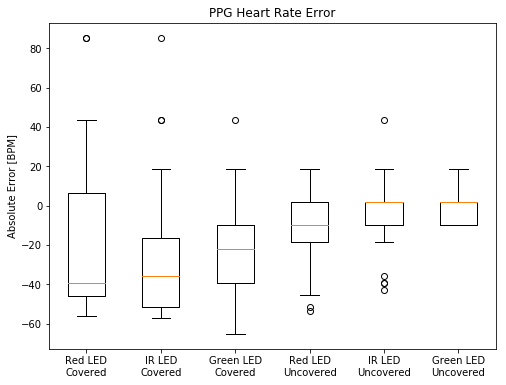

In [30]:
data = [RED_Cover_HR_error, IR_Cover_HR_error, GR_Cover_HR_error, 
        RED_Uncover_HR_error, IR_Uncover_HR_error, GR_Uncover_HR_error]

plt.figure(figsize = (8,6))
plt.boxplot(data)
plt.title("PPG Heart Rate Error")
plt.xticks([1,2,3,4,5,6], ["Red LED\nCovered", "IR LED\nCovered", "Green LED\nCovered",
                       "Red LED\nUncovered", "IR LED\nUncovered", "Green LED\nUncovered"])
plt.ylabel("Absolute Error [BPM]")


Text(0,0.5,'Absolute Error [BPM]')

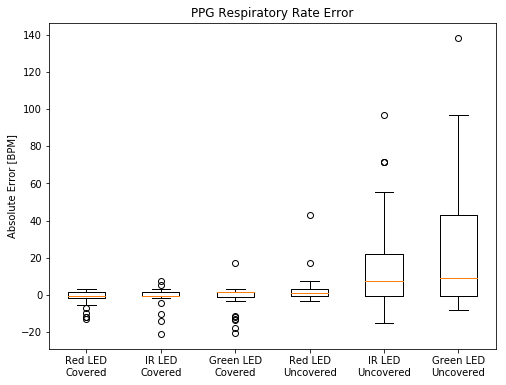

In [31]:
data = [RED_Cover_RR_error, IR_Cover_RR_error, GR_Cover_RR_error, 
        RED_Uncover_RR_error, IR_Uncover_RR_error, GR_Uncover_RR_error]

plt.figure(figsize = (8,6))
plt.boxplot(data)
plt.title("PPG Respiratory Rate Error")
plt.xticks([1,2,3,4,5,6], ["Red LED\nCovered", "IR LED\nCovered", "Green LED\nCovered",
                       "Red LED\nUncovered", "IR LED\nUncovered", "Green LED\nUncovered"])
plt.ylabel("Absolute Error [BPM]")


### -------------------------------------------------
# EVALUATION August 4, 2022
### -------------------------------------------------

## ECG Position

In [32]:
HR = 69
RR = 34

HR0 = [84.3956043956044, 51.891891891891895, 46.829268292682926, 85.33333333333333, 54.08450704225352, 71.77570093457943, 70.45871559633028, 49.23076923076923, 54.08450704225352, 71.11111111111111, 77.57575757575758, 48.607594936708864, 55.65217391304348, 60.0, 56.470588235294116, 66.78260869565217, 42.430939226519335, 93.65853658536585, 66.78260869565217, 59.07692307692308, 69.1891891891892, 51.891891891891895, 66.78260869565217, 55.25179856115108, 46.54545454545455, 85.33333333333333, 46.829268292682926, 76.03960396039604, 76.8, 52.244897959183675, 49.54838709677419, 72.45283018867924, 67.36842105263158, 56.058394160583944, 80.0, 96.0, 90.3529411764706, 71.11111111111111, 54.08450704225352, 44.91228070175438, 85.33333333333333, 51.2, 71.77570093457943, 71.11111111111111, 49.87012987012987, 51.2, 80.0, 62.4390243902439, 57.3134328358209, 47.701863354037265, 74.5631067961165, 63.47107438016529, 57.3134328358209, 44.651162790697676, 80.0, 59.07692307692308, 64.53781512605042, 47.407407407407405, 75.29411764705883, 58.18181818181818, 64.0, 83.47826086956522, 84.3956043956044, 102.4, 60.95238095238095, 60.0, 87.27272727272727, 86.29213483146067, 93.65853658536585, 49.87012987012987, 74.5631067961165, 65.08474576271186, 58.18181818181818, 48.607594936708864, 74.5631067961165, 79.17525773195877, 49.54838709677419, 46.54545454545455, 79.17525773195877, 73.84615384615384, 49.23076923076923, 27.72563176895307, 57.744360902255636, 80.0, 52.96551724137931, 64.0, 48.607594936708864, 82.58064516129032, 44.13793103448276, 92.53012048192771, 50.19607843137255, 71.11111111111111, 70.45871559633028, 56.888888888888886, 45.714285714285715, 80.84210526315789, 69.81818181818181, 54.857142857142854, 85.33333333333333, 43.885714285714286, 63.47107438016529, 57.744360902255636, 82.58064516129032, 43.146067415730336, 32.0, 76.8, 48.9171974522293, 28.65671641791045, 76.03960396039604, 54.08450704225352, 96.0, 87.27272727272727, 75.29411764705883, 80.84210526315789, 51.54362416107382, 84.3956043956044, 90.3529411764706, 87.27272727272727, 66.20689655172414, 58.18181818181818, 28.764044943820224, 58.62595419847328, 60.95238095238095, 30.72, 28.872180451127818, 62.950819672131146, 62.950819672131146, 46.54545454545455, 78.36734693877551, 75.29411764705883, 51.891891891891895, 29.53846153846154, 74.5631067961165, 54.08450704225352, 78.36734693877551, 94.81481481481481, 87.27272727272727, 46.265060240963855, 84.3956043956044, 46.829268292682926, 84.3956043956044, 64.0, 56.058394160583944, 69.81818181818181, 51.54362416107382, 59.07692307692308, 59.53488372093023, 65.08474576271186, 56.888888888888886, 59.53488372093023, 58.62595419847328, 74.5631067961165, 56.058394160583944, 38.78787878787879, 103.78378378378379, 55.65217391304348, 69.1891891891892, 44.39306358381503, 83.47826086956522, 54.857142857142854, 71.11111111111111, 69.1891891891892, 51.54362416107382, 64.0, 53.70629370629371, 80.84210526315789, 51.2, 44.651162790697676, 81.70212765957447, 62.4390243902439, 59.07692307692308, 83.47826086956522, 91.42857142857143, 90.3529411764706, 65.64102564102564, 58.18181818181818, 80.84210526315789, 93.65853658536585, 87.27272727272727, 69.1891891891892, 54.857142857142854, 69.1891891891892, 48.607594936708864, 70.45871559633028, 57.744360902255636, 30.35573122529644, 48.607594936708864, 75.29411764705883, 31.735537190082646, 56.888888888888886, 61.44, 60.47244094488189, 61.935483870967744, 66.20689655172414, 50.526315789473685, 56.888888888888886, 65.64102564102564, 89.30232558139535, 42.1978021978022, 48.607594936708864, 87.27272727272727, 77.57575757575758, 47.407407407407405, 49.54838709677419, 75.29411764705883, 87.27272727272727, 45.1764705882353, 44.651162790697676, 91.42857142857143, 69.1891891891892, 56.058394160583944, 84.3956043956044, 45.1764705882353, 55.65217391304348, 67.96460176991151, 48.607594936708864, 73.14285714285714, 30.59760956175299, 71.11111111111111, 48.607594936708864, 52.96551724137931, 75.29411764705883, 65.08474576271186, 54.857142857142854, 45.714285714285715, 89.30232558139535, 31.346938775510203, 41.513513513513516, 91.42857142857143, 52.602739726027394, 72.45283018867924, 72.45283018867924, 49.23076923076923, 47.11656441717791, 92.53012048192771, 62.4390243902439, 59.53488372093023, 43.63636363636363, 90.3529411764706, 66.20689655172414, 58.18181818181818, 83.47826086956522, 43.389830508474574, 53.70629370629371, 70.45871559633028, 76.03960396039604, 49.54838709677419, 49.87012987012987, 78.36734693877551, 43.885714285714286, 89.30232558139535, 49.54838709677419, 83.47826086956522, 60.0, 64.0, 65.64102564102564]
HR45 = [31.09311740890688, 72.45283018867924, 42.666666666666664, 52.96551724137931, 63.47107438016529, 97.21518987341773, 71.11111111111111, 74.5631067961165, 64.53781512605042, 92.53012048192771, 65.08474576271186, 91.42857142857143, 62.950819672131146, 79.17525773195877, 71.77570093457943, 52.244897959183675, 97.21518987341773, 81.70212765957447, 69.81818181818181, 91.42857142857143, 60.47244094488189, 85.33333333333333, 80.0, 71.11111111111111, 64.0, 79.17525773195877, 60.95238095238095, 97.21518987341773, 61.44, 96.0, 87.27272727272727, 41.29032258064516, 76.03960396039604, 94.81481481481481, 71.77570093457943, 63.47107438016529, 82.58064516129032, 43.885714285714286, 93.65853658536585, 31.21951219512195, 39.58762886597938, 57.3134328358209, 88.27586206896552, 58.62595419847328, 47.11656441717791, 73.14285714285714, 43.63636363636363, 84.3956043956044, 31.86721991701245, 60.0, 55.65217391304348, 118.15384615384616, 66.78260869565217, 38.984771573604064, 54.08450704225352, 96.0, 71.77570093457943, 80.84210526315789, 83.47826086956522, 89.30232558139535, 56.888888888888886, 56.888888888888886, 74.5631067961165, 84.3956043956044, 61.44, 85.33333333333333, 90.3529411764706, 53.333333333333336, 80.84210526315789, 51.2, 56.058394160583944, 57.3134328358209, 114.6268656716418, 64.53781512605042, 80.84210526315789]
HR90 = [43.63636363636363, 45.44378698224852, 83.47826086956522, 73.14285714285714, 62.950819672131146, 60.0, 86.29213483146067, 50.526315789473685, 40.421052631578945, 80.0, 52.602739726027394, 75.29411764705883, 28.872180451127818, 61.935483870967744, 49.54838709677419, 63.47107438016529, 58.62595419847328, 32.26890756302521, 85.33333333333333, 39.58762886597938, 45.1764705882353, 80.84210526315789, 93.65853658536585, 43.146067415730336, 56.888888888888886, 67.96460176991151, 73.14285714285714, 46.829268292682926, 53.333333333333336, 71.77570093457943, 51.54362416107382, 58.18181818181818, 42.666666666666664, 99.74025974025975, 75.29411764705883, 45.1764705882353, 54.08450704225352, 69.81818181818181, 31.21951219512195, 54.46808510638298, 56.888888888888886, 45.714285714285715, 33.391304347826086, 60.0, 54.46808510638298, 77.57575757575758, 87.27272727272727, 40.851063829787236, 79.17525773195877, 43.146067415730336, 30.11764705882353, 58.18181818181818, 67.96460176991151, 55.25179856115108, 42.666666666666664, 37.28155339805825, 49.54838709677419, 83.47826086956522, 78.36734693877551, 48.9171974522293, 78.36734693877551, 41.29032258064516, 49.54838709677419, 69.1891891891892, 61.935483870967744, 57.3134328358209, 62.950819672131146, 54.08450704225352, 60.47244094488189, 56.058394160583944, 114.6268656716418, 92.53012048192771, 81.70212765957447, 56.888888888888886, 75.29411764705883, 80.0, 120.0, 52.244897959183675, 81.70212765957447, 130.16949152542372, 80.0, 74.5631067961165, 91.42857142857143, 73.14285714285714, 68.57142857142857, 77.57575757575758]
HRAbdo = [53.333333333333336, 62.4390243902439, 45.98802395209581, 44.651162790697676, 58.62595419847328, 37.83251231527094, 47.407407407407405, 46.265060240963855, 26.391752577319586, 85.33333333333333, 43.146067415730336, 25.01628664495114, 45.1764705882353, 48.607594936708864, 37.46341463414634, 42.430939226519335, 44.13793103448276, 31.475409836065573, 33.10344827586207, 34.285714285714285, 20.589812332439678, 28.13186813186813, 34.13333333333333, 22.06896551724138, 67.36842105263158, 78.36734693877551, 33.246753246753244, 53.70629370629371, 80.0, 50.526315789473685, 47.701863354037265, 34.285714285714285, 77.57575757575758, 40.63492063492063, 82.58064516129032, 83.47826086956522, 81.70212765957447, 51.2, 27.72563176895307, 61.44, 62.950819672131146, 26.94736842105263, 53.333333333333336, 44.91228070175438, 84.3956043956044, 41.06951871657754, 77.57575757575758, 57.744360902255636, 53.70629370629371, 73.84615384615384, 61.44, 37.10144927536232, 41.29032258064516, 66.20689655172414, 48.301886792452834, 44.13793103448276, 57.3134328358209, 47.701863354037265, 26.666666666666668, 23.132530120481928, 32.82051282051282, 46.54545454545455, 38.01980198019802, 52.96551724137931, 48.607594936708864]

RR0 = [31.21951219512195, 31.09311740890688, 27.526881720430108, 31.475409836065573, 30.967741935483872, 28.550185873605948, 30.11764705882353, 29.31297709923664, 31.346938775510203, 29.652509652509654, 30.236220472440944, 30.476190476190474, 27.72563176895307, 31.604938271604937, 29.53846153846154, 30.59760956175299, 30.0, 30.236220472440944, 30.476190476190474, 28.9811320754717, 29.31297709923664, 31.09311740890688, 29.767441860465116, 29.883268482490273, 29.652509652509654, 28.235294117647058, 30.236220472440944, 19.591836734693878, 21.452513966480446, 28.235294117647058, 30.35573122529644, 28.550185873605948, 31.86721991701245, 29.20152091254753, 30.236220472440944, 22.39067055393586, 35.22935779816514, 32.82051282051282, 33.391304347826086, 29.09090909090909, 30.72, 14.684512428298278, 32.82051282051282, 28.444444444444443, 28.339483394833948, 31.346938775510203, 29.20152091254753, 30.967741935483872, 30.35573122529644, 26.7595818815331, 22.005730659025787, 18.55072463768116, 15.421686746987952, 32.54237288135593, 27.62589928057554, 29.53846153846154, 31.475409836065573, 28.444444444444443, 31.475409836065573, 28.9811320754717, 29.883268482490273, 30.967741935483872, 31.21951219512195, 14.854932301740812, 30.476190476190474, 29.53846153846154, 48.0, 32.96137339055794, 56.888888888888886, 29.883268482490273, 30.0, 32.40506329113924, 30.476190476190474, 29.09090909090909, 29.652509652509654, 14.912621359223301, 15.298804780876495, 28.550185873605948, 28.444444444444443, 30.967741935483872, 30.72, 21.215469613259668, 29.20152091254753, 44.13793103448276, 32.82051282051282, 30.843373493975903, 29.42528735632184, 32.96137339055794, 28.9811320754717, 31.735537190082646, 14.463276836158192, 28.764044943820224, 32.82051282051282, 28.550185873605948, 28.65671641791045, 28.550185873605948, 22.7893175074184, 48.301886792452834, 29.31297709923664, 31.735537190082646, 28.339483394833948, 15.029354207436398, 31.346938775510203, 26.482758620689655, 16.842105263157894, 27.526881720430108, 29.652509652509654, 30.35573122529644, 32.54237288135593, 29.652509652509654, 28.9811320754717, 28.9811320754717, 30.236220472440944, 30.72, 29.42528735632184, 33.246753246753244, 28.9811320754717, 30.35573122529644, 20.371352785145888]
RR45 = [33.982300884955755, 29.09090909090909, 42.90502793296089, 50.86092715231788, 34.285714285714285, 33.53711790393013, 73.84615384615384, 84.3956043956044, 56.888888888888886, 38.01980198019802, 41.513513513513516, 61.935483870967744, 50.86092715231788, 22.925373134328357, 22.13256484149856, 49.87012987012987, 25.01628664495114, 31.735537190082646, 28.444444444444443, 37.46341463414634, 35.22935779816514, 25.514950166112957, 37.64705882352941, 36.056338028169016, 50.86092715231788, 37.83251231527094, 36.74641148325359, 25.263157894736842, 49.54838709677419, 38.78787878787879, 24.150943396226417, 33.10344827586207, 71.11111111111111, 30.236220472440944, 42.666666666666664, 37.46341463414634, 22.39067055393586, 42.1978021978022, 31.475409836065573, 49.54838709677419, 51.891891891891895]
RR90 = [24.694533762057876, 32.40506329113924, 33.982300884955755, 30.476190476190474, 27.330960854092528, 32.54237288135593, 28.13186813186813, 27.330960854092528, 30.11764705882353, 23.414634146341463, 38.984771573604064, 40.421052631578945, 23.850931677018632, 48.9171974522293, 35.88785046728972, 48.0, 30.72, 41.967213114754095, 22.72189349112426, 26.122448979591837, 30.0, 30.11764705882353, 29.31297709923664, 40.421052631578945, 39.183673469387756, 50.86092715231788, 30.72, 21.818181818181817, 40.20942408376963, 32.26890756302521, 28.339483394833948, 26.482758620689655, 33.10344827586207, 22.06896551724138, 28.550185873605948, 54.08450704225352, 44.91228070175438, 38.984771573604064, 41.73913043478261, 71.11111111111111, 50.19607843137255, 29.42528735632184, 29.42528735632184, 23.777089783281735, 32.13389121338912, 35.72093023255814, 46.829268292682926, 59.07692307692308, 35.22935779816514]
RRAbdo = [40.851063829787236, 24.150943396226417, 25.18032786885246, 35.72093023255814, 27.927272727272726, 28.339483394833948, 26.033898305084747, 45.714285714285715, 45.1764705882353, 34.90909090909091, 57.3134328358209, 38.78787878787879, 32.13389121338912, 32.82051282051282, 30.0, 26.033898305084747, 21.51260504201681, 34.90909090909091, 26.301369863013697, 28.764044943820224, 23.703703703703702, 30.35573122529644, 42.1978021978022, 23.925233644859812, 38.78787878787879, 32.0, 40.20942408376963, 29.42528735632184, 31.86721991701245, 28.872180451127818, 24.45859872611465, 25.263157894736842, 34.90909090909091, 48.301886792452834, 31.86721991701245, 40.0, 24.303797468354432, 55.65217391304348, 40.63492063492063, 25.6, 29.652509652509654, 22.994011976047904, 31.604938271604937, 38.208955223880594, 47.407407407407405, 44.39306358381503, 54.46808510638298]

HR0_err = [i - HR for i in HR0]
HR45_err = [i - HR for i in HR45]
HR90_err = [i - HR for i in HR90]
HRAbdo_err = [i - HR for i in HRAbdo]

RR0_err = [i - RR for i in RR0]
RR45_err = [i - RR for i in RR45]
RR90_err = [i - RR for i in RR90]
RRAbdo_err = [i - RR for i in RRAbdo]

Text(0,0.5,'Absolute Error [BPM]')

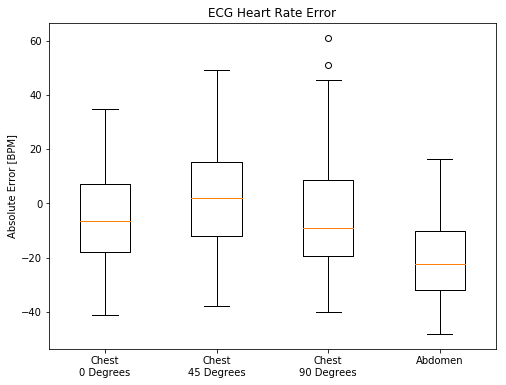

In [33]:
data = [HR0_err, HR45_err, HR90_err, HRAbdo_err]

plt.figure(figsize = (8,6))
plt.boxplot(data)
plt.title("ECG Heart Rate Error")
plt.xticks([1,2,3,4], ["Chest\n0 Degrees", "Chest\n45 Degrees", "Chest\n90 Degrees", "Abdomen"])
plt.ylabel("Absolute Error [BPM]")


Text(0,0.5,'Absolute Error [BPM]')

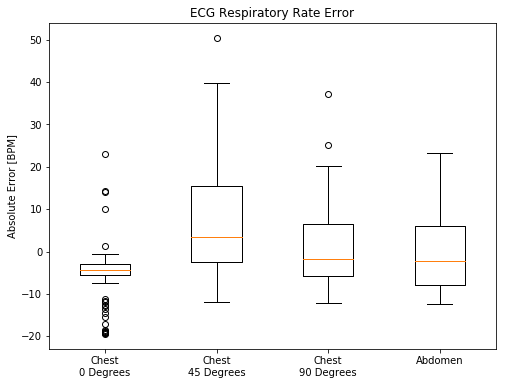

In [34]:
data = [RR0_err, RR45_err, RR90_err, RRAbdo_err]

plt.figure(figsize = (8,6))
plt.boxplot(data)
plt.title("ECG Respiratory Rate Error")
plt.xticks([1,2,3,4], ["Chest\n0 Degrees", "Chest\n45 Degrees", "Chest\n90 Degrees", "Abdomen"])
plt.ylabel("Absolute Error [BPM]")


## IMU Position

Text(0,0.5,'Absolute Error [BPM]')

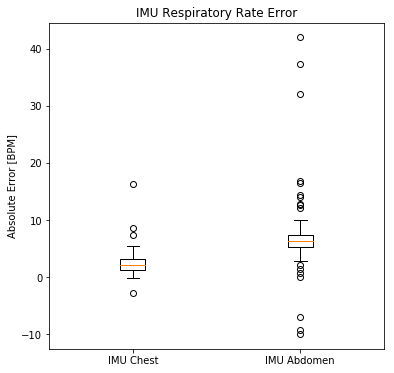

In [35]:
RR = 24

Chest_IMU_RR = [25.974025974025977, 26.43171806167401, 27.14932126696833, 25.531914893617024, 27.272727272727277, 25.316455696202535, 27.522935779816518, 26.200873362445417, 27.90697674418605, 24.291497975708506, 27.397260273972606, 25.104602510460253, 27.90697674418605, 25.316455696202535, 27.397260273972606, 25.862068965517246, 27.14932126696833, 25.104602510460253, 26.78571428571429, 27.272727272727277, 24.39024390243903, 28.708133971291872, 25.104602510460253, 26.66666666666667, 27.272727272727277, 25.751072961373396, 25.210084033613448, 25.862068965517246, 31.413612565445032, 25.423728813559325, 24.291497975708506, 25.641025641025646, 32.60869565217392, 29.41176470588236, 21.201413427561842, 23.904382470119526, 26.548672566371685, 25.210084033613448, 26.200873362445417, 25.862068965517246, 26.78571428571429, 26.43171806167401, 25.210084033613448, 26.78571428571429, 25.641025641025646, 27.64976958525346, 26.200873362445417, 25.210084033613448, 26.78571428571429, 26.43171806167401, 25.862068965517246, 25.751072961373396, 26.43171806167401, 40.26845637583893]
Abdo_IMU_RR = [30.456852791878173, 30.0, 28.846153846153847, 30.927835051546392, 28.985507246376812, 24.096385542168676, 40.54054054054054, 30.150753768844222, 29.850746268656717, 31.25, 29.26829268292683, 30.927835051546392, 30.456852791878173, 29.41176470588235, 31.088082901554404, 28.571428571428573, 30.612244897959183, 30.927835051546392, 30.303030303030305, 30.456852791878173, 29.702970297029704, 29.12621359223301, 31.57894736842105, 31.25, 30.150753768844222, 24.691358024691358, 38.46153846153846, 29.702970297029704, 29.26829268292683, 27.272727272727273, 29.702970297029704, 34.09090909090909, 31.914893617021278, 31.746031746031747, 30.303030303030305, 30.0, 30.303030303030305, 30.150753768844222, 30.0, 31.088082901554404, 30.0, 31.088082901554404, 30.456852791878173, 30.303030303030305, 30.612244897959183, 29.26829268292683, 30.150753768844222, 31.25, 29.26829268292683, 29.850746268656717, 36.144578313253014, 40.816326530612244, 61.224489795918366, 56.074766355140184, 26.785714285714285, 37.9746835443038, 17.094017094017094, 65.93406593406593, 28.037383177570092, 26.200873362445414, 36.809815950920246, 29.702970297029704, 29.702970297029704, 29.55665024630542, 28.846153846153847, 32.78688524590164, 31.413612565445025, 30.303030303030305, 32.967032967032964, 32.432432432432435, 28.436018957345972, 36.58536585365854, 25.423728813559322, 14.084507042253522, 32.25806451612903, 32.25806451612903, 14.742014742014742, 30.0, 31.413612565445025, 30.927835051546392]

Chest_IMU_RR_error = [i - RR for i in Chest_IMU_RR]
Abdo_IMU_RR_error = [i - RR for i in Abdo_IMU_RR]

data = [Chest_IMU_RR_error, Abdo_IMU_RR_error]

plt.figure(figsize = (6,6))
plt.boxplot(data)
plt.title("IMU Respiratory Rate Error")
plt.xticks([1,2], ["IMU Chest", "IMU Abdomen"])
plt.ylabel("Absolute Error [BPM]")


## PPG Position 

In [36]:
HR_Chest = 69
RR_Chest = 34

HR_Abdo = 66
RR_Abdo = 34

Chest_RED_HR = [70.58823529411765, 61.224489795918366, 39.735099337748345, 74.07407407407408, 66.66666666666667, 64.51612903225806, 81.08108108108108, 37.735849056603776, 65.93406593406593, 68.18181818181819, 75.0, 38.21656050955414, 65.93406593406593, 72.28915662650603, 69.76744186046511, 61.855670103092784, 93.75, 70.58823529411765, 73.17073170731707, 67.41573033707866, 67.41573033707866, 81.08108108108108, 70.58823529411765, 78.94736842105263, 65.93406593406593, 68.18181818181819, 78.94736842105263, 37.735849056603776, 65.93406593406593, 69.76744186046511, 75.0, 37.5, 67.41573033707866, 72.28915662650603, 69.76744186046511, 63.829787234042556, 89.55223880597015, 68.96551724137932, 75.0, 67.41573033707866, 67.41573033707866, 81.08108108108108, 71.42857142857143, 75.0, 66.66666666666667, 68.96551724137932, 75.9493670886076, 37.5, 67.41573033707866, 68.96551724137932, 73.17073170731707, 37.735849056603776, 69.76744186046511, 70.58823529411765, 72.28915662650603, 61.855670103092784, 96.7741935483871, 68.18181818181819, 71.42857142857143, 69.76744186046511, 63.829787234042556, 90.9090909090909, 69.76744186046511, 72.28915662650603, 68.18181818181819, 64.51612903225806, 85.71428571428571, 71.42857142857143, 75.0, 65.93406593406593, 67.41573033707866, 80.0, 71.42857142857143, 78.94736842105263, 65.21739130434783, 69.76744186046511, 75.9493670886076, 37.5, 67.41573033707866, 69.76744186046511, 75.0, 37.267080745341616, 68.18181818181819, 71.42857142857143, 80.0, 60.0, 37.03703703703704, 82.1917808219178, 63.1578947368421, 72.28915662650603, 82.1917808219178, 69.76744186046511, 75.0, 67.41573033707866, 65.93406593406593, 83.33333333333333, 69.76744186046511, 75.9493670886076, 59.40594059405941, 55.55555555555556, 48.0, 76.92307692307692, 68.18181818181819, 64.51612903225806, 83.33333333333333, 68.96551724137932, 74.07407407407408, 66.66666666666667, 67.41573033707866, 80.0, 72.28915662650603, 75.0, 68.18181818181819, 66.66666666666667, 78.94736842105263, 73.17073170731707, 75.9493670886076, 67.41573033707866, 67.41573033707866, 77.92207792207792, 37.5, 67.41573033707866, 68.96551724137932, 75.0, 67.41573033707866, 84.50704225352112, 66.66666666666667, 69.76744186046511, 74.07407407407408, 37.03703703703704, 69.76744186046511, 70.58823529411765, 71.42857142857143, 63.829787234042556, 88.23529411764706, 69.76744186046511, 73.17073170731707, 68.96551724137932, 65.21739130434783, 82.1917808219178, 72.28915662650603, 74.07407407407408, 68.18181818181819, 64.51612903225806, 84.50704225352112, 74.07407407407408, 73.17073170731707]
Chest_IR_HR = [73.17073170731707, 65.21739130434783, 82.1917808219178, 72.28915662650603, 69.76744186046511, 70.58823529411765, 65.93406593406593, 81.08108108108108, 73.17073170731707, 73.17073170731707, 68.96551724137932, 67.41573033707866, 77.92207792207792, 71.42857142857143, 76.92307692307692, 69.76744186046511, 68.96551724137932, 74.07407407407408, 67.41573033707866, 81.08108108108108, 71.42857142857143, 69.76744186046511, 72.28915662650603, 65.93406593406593, 82.1917808219178, 72.28915662650603, 72.28915662650603, 69.76744186046511, 66.66666666666667, 80.0, 74.07407407407408, 72.28915662650603, 69.76744186046511, 67.41573033707866, 77.92207792207792, 72.28915662650603, 75.0, 69.76744186046511, 68.96551724137932, 74.07407407407408, 68.18181818181819, 78.94736842105263, 71.42857142857143, 70.58823529411765, 71.42857142857143, 66.66666666666667, 81.08108108108108, 71.42857142857143, 70.58823529411765, 70.58823529411765, 67.41573033707866, 78.94736842105263, 72.28915662650603, 72.28915662650603, 70.58823529411765, 67.41573033707866, 77.92207792207792, 72.28915662650603, 74.07407407407408, 70.58823529411765, 69.76744186046511, 75.0, 69.76744186046511, 76.92307692307692, 70.58823529411765, 69.76744186046511, 73.17073170731707, 68.18181818181819, 80.0, 70.58823529411765, 69.76744186046511, 72.28915662650603, 67.41573033707866, 80.0, 72.28915662650603, 70.58823529411765, 70.58823529411765, 66.66666666666667, 80.0, 72.28915662650603, 72.28915662650603, 69.76744186046511, 68.18181818181819, 77.92207792207792, 72.28915662650603, 73.17073170731707, 70.58823529411765, 68.18181818181819, 76.92307692307692, 71.42857142857143, 75.0, 69.76744186046511, 69.76744186046511, 77.92207792207792, 67.41573033707866, 77.92207792207792, 68.96551724137932, 71.42857142857143, 71.42857142857143, 71.42857142857143, 77.92207792207792, 70.58823529411765, 70.58823529411765, 72.28915662650603, 68.18181818181819, 78.94736842105263, 70.58823529411765, 70.58823529411765, 68.96551724137932, 58.8235294117647, 103.44827586206897, 72.28915662650603, 71.42857142857143, 71.42857142857143, 67.41573033707866, 78.94736842105263, 70.58823529411765, 70.58823529411765, 71.42857142857143, 67.41573033707866, 78.94736842105263, 72.28915662650603, 71.42857142857143, 70.58823529411765, 68.18181818181819, 77.92207792207792, 73.17073170731707, 71.42857142857143, 71.42857142857143, 66.66666666666667, 78.94736842105263, 73.17073170731707, 72.28915662650603, 70.58823529411765, 68.18181818181819, 76.92307692307692, 72.28915662650603, 73.17073170731707, 69.76744186046511, 68.96551724137932, 75.9493670886076, 72.28915662650603, 74.07407407407408, 69.76744186046511, 69.76744186046511, 74.07407407407408, 69.76744186046511, 76.92307692307692, 71.42857142857143, 69.76744186046511, 72.28915662650603, 68.96551724137932, 76.92307692307692, 72.28915662650603, 69.76744186046511, 72.28915662650603, 68.96551724137932, 77.92207792207792, 72.28915662650603, 69.76744186046511]
Chest_GR_HR = [73.17073170731707, 70.58823529411765, 71.42857142857143, 71.42857142857143, 71.42857142857143, 73.17073170731707, 69.76744186046511, 73.17073170731707, 70.58823529411765, 72.28915662650603, 73.17073170731707, 70.58823529411765, 73.17073170731707, 71.42857142857143, 72.28915662650603, 73.17073170731707, 70.58823529411765, 73.17073170731707, 71.42857142857143, 72.28915662650603, 72.28915662650603, 71.42857142857143, 73.17073170731707, 71.42857142857143, 73.17073170731707, 71.42857142857143, 71.42857142857143, 74.07407407407408, 70.58823529411765, 73.17073170731707, 71.42857142857143, 71.42857142857143, 74.07407407407408, 71.42857142857143, 72.28915662650603, 72.28915662650603, 71.42857142857143, 73.17073170731707, 70.58823529411765, 75.0, 69.76744186046511, 72.28915662650603, 72.28915662650603, 71.42857142857143, 74.07407407407408, 69.76744186046511, 73.17073170731707, 71.42857142857143, 71.42857142857143, 72.28915662650603, 70.58823529411765, 72.28915662650603, 71.42857142857143, 72.28915662650603, 72.28915662650603, 71.42857142857143, 72.28915662650603, 72.28915662650603, 71.42857142857143, 73.17073170731707, 71.42857142857143, 75.0, 70.58823529411765, 72.28915662650603, 72.28915662650603, 71.42857142857143, 73.17073170731707, 71.42857142857143, 71.42857142857143, 73.17073170731707, 71.42857142857143, 73.17073170731707, 70.58823529411765, 72.28915662650603, 72.28915662650603, 71.42857142857143, 74.07407407407408, 69.76744186046511, 72.28915662650603, 71.42857142857143, 72.28915662650603, 73.17073170731707, 69.76744186046511, 73.17073170731707, 71.42857142857143, 72.28915662650603, 73.17073170731707, 71.42857142857143, 73.17073170731707, 71.42857142857143, 72.28915662650603, 73.17073170731707, 70.58823529411765, 74.07407407407408, 74.07407407407408, 68.96551724137932, 74.07407407407408, 71.42857142857143, 74.07407407407408, 70.58823529411765, 72.28915662650603, 72.28915662650603, 71.42857142857143, 73.17073170731707, 70.58823529411765, 72.28915662650603, 72.28915662650603, 71.42857142857143, 73.17073170731707, 34.48275862068966, 80.0, 73.17073170731707, 72.28915662650603, 72.28915662650603, 71.42857142857143, 68.96551724137932, 70.58823529411765, 73.17073170731707, 70.58823529411765, 73.17073170731707, 71.42857142857143, 71.42857142857143, 73.17073170731707, 70.58823529411765, 74.07407407407408, 71.42857142857143, 72.28915662650603, 72.28915662650603, 71.42857142857143, 73.17073170731707, 70.58823529411765, 72.28915662650603, 74.07407407407408, 70.58823529411765, 73.17073170731707, 70.58823529411765, 72.28915662650603, 73.17073170731707, 70.58823529411765, 73.17073170731707, 71.42857142857143, 72.28915662650603, 72.28915662650603, 71.42857142857143, 73.17073170731707, 70.58823529411765, 73.17073170731707, 72.28915662650603, 71.42857142857143, 73.17073170731707, 70.58823529411765, 72.28915662650603, 73.17073170731707, 70.58823529411765, 73.17073170731707, 70.58823529411765, 72.28915662650603, 73.17073170731707, 70.58823529411765, 73.17073170731707]

Abdo_RED_HR = [68.18181818181817, 59.99999999999999, 90.90909090909089, 34.883720930232556, 34.883720930232556, 35.08771929824561, 77.9220779220779, 58.823529411764696, 65.93406593406593, 31.578947368421048, 71.42857142857142, 58.823529411764696, 75.94936708860759, 56.60377358490565, 72.28915662650601, 58.823529411764696, 68.9655172413793, 61.85567010309278, 79.99999999999999, 50.84745762711864, 71.42857142857142, 57.14285714285713, 65.21739130434781, 59.99999999999999, 68.9655172413793, 60.606060606060595, 62.49999999999999, 66.66666666666666, 61.85567010309278, 66.66666666666666, 65.21739130434781, 89.55223880597013, 45.801526717557245, 75.94936708860759, 56.60377358490565, 77.9220779220779, 53.09734513274336, 71.42857142857142, 61.22448979591836, 65.21739130434781, 62.49999999999999, 65.21739130434781, 61.22448979591836, 65.21739130434781, 65.93406593406593, 63.157894736842096, 67.41573033707864, 61.85567010309278, 67.41573033707864, 63.157894736842096, 65.21739130434781, 64.51612903225805, 73.17073170731706, 56.60377358490565, 85.71428571428571, 47.24409448818897, 31.578947368421048, 72.28915662650601, 31.0880829015544, 66.66666666666666, 58.823529411764696, 74.99999999999999, 78.94736842105262, 44.444444444444436, 30.150753768844215, 98.3606557377049, 68.9655172413793, 54.05405405405405, 73.17073170731706, 57.692307692307686, 83.33333333333331, 55.04587155963302, 61.22448979591836, 70.58823529411764, 58.823529411764696, 72.28915662650601, 62.49999999999999, 64.51612903225805, 62.49999999999999, 67.41573033707864, 63.82978723404254, 61.85567010309278, 66.66666666666666, 62.49999999999999, 65.21739130434781, 65.21739130434781, 61.22448979591836, 70.58823529411764, 56.60377358490565, 73.17073170731706, 56.07476635514018, 66.66666666666666, 67.41573033707864, 21.052631578947366, 78.94736842105262, 53.09734513274336, 73.17073170731706, 64.51612903225805, 95.23809523809523, 45.11278195488721, 65.21739130434781, 103.44827586206895, 46.511627906976734, 72.28915662650601, 65.21739130434781, 66.66666666666666, 65.93406593406593, 61.85567010309278, 71.42857142857142, 55.55555555555555, 76.9230769230769, 56.07476635514018, 77.9220779220779, 56.07476635514018, 71.42857142857142, 58.25242718446601, 69.76744186046511, 61.22448979591836, 66.66666666666666, 64.51612903225805, 64.51612903225805, 65.21739130434781, 63.82978723404254, 64.51612903225805, 61.85567010309278, 69.76744186046511, 39.99999999999999, 12.024048096192383, 79.99999999999999, 54.05405405405405, 58.823529411764696, 74.99999999999999, 67.41573033707864]
Abdo_IR_HR = [63.82978723404254, 65.21739130434781, 63.82978723404254, 64.51612903225805, 64.51612903225805, 64.51612903225805, 63.82978723404254, 64.51612903225805, 63.82978723404254, 64.51612903225805, 64.51612903225805, 63.157894736842096, 65.93406593406593, 62.49999999999999, 65.21739130434781, 61.22448979591836, 65.21739130434781, 62.49999999999999, 65.21739130434781, 84.50704225352112, 56.60377358490565, 56.60377358490565, 65.93406593406593, 63.82978723404254, 64.51612903225805, 65.21739130434781, 66.66666666666666, 60.606060606060595, 65.21739130434781, 64.51612903225805, 64.51612903225805, 64.51612903225805, 63.82978723404254, 64.51612903225805, 62.49999999999999, 66.66666666666666, 61.22448979591836, 65.93406593406593, 61.22448979591836, 64.51612903225805, 61.85567010309278, 63.82978723404254, 63.82978723404254, 64.51612903225805, 64.51612903225805, 63.82978723404254, 64.51612903225805, 64.51612903225805, 63.82978723404254, 64.51612903225805, 63.82978723404254, 65.21739130434781, 64.51612903225805, 61.22448979591836, 65.21739130434781, 61.85567010309278, 63.157894736842096, 63.157894736842096, 64.51612903225805, 63.157894736842096, 63.82978723404254, 63.82978723404254, 64.51612903225805, 63.157894736842096, 65.93406593406593, 89.55223880597013, 95.23809523809523, 89.55223880597013, 68.18181818181817, 63.82978723404254, 65.21739130434781, 63.157894736842096, 65.21739130434781, 62.49999999999999, 65.93406593406593, 61.85567010309278, 65.21739130434781, 62.49999999999999, 65.21739130434781, 63.157894736842096, 65.21739130434781, 63.82978723404254, 65.21739130434781, 63.82978723404254, 65.21739130434781, 63.82978723404254, 63.82978723404254, 65.21739130434781, 62.49999999999999, 66.66666666666666, 61.22448979591836, 64.51612903225805, 62.49999999999999, 63.82978723404254, 61.22448979591836, 66.66666666666666, 63.82978723404254, 64.51612903225805, 65.21739130434781, 65.93406593406593, 59.99999999999999, 52.17391304347825, 37.49999999999999, 65.21739130434781, 61.85567010309278, 64.51612903225805, 63.157894736842096, 66.66666666666666, 61.22448979591836, 64.51612903225805, 63.82978723404254, 65.93406593406593, 62.49999999999999, 65.21739130434781, 63.82978723404254, 65.21739130434781, 63.82978723404254, 65.93406593406593, 63.157894736842096, 65.21739130434781, 65.21739130434781, 63.157894736842096, 64.51612903225805, 64.51612903225805, 63.82978723404254, 63.82978723404254, 63.82978723404254, 63.82978723404254, 63.82978723404254, 63.157894736842096, 65.21739130434781, 63.157894736842096, 65.93406593406593, 63.82978723404254, 67.41573033707864, 61.85567010309278, 65.93406593406593, 93.74999999999999, 88.23529411764704, 98.3606557377049, 67.41573033707864, 90.90909090909089, 47.99999999999999, 69.76744186046511, 66.66666666666666, 65.93406593406593, 65.21739130434781, 65.21739130434781, 64.51612903225805, 63.82978723404254, 64.51612903225805, 64.51612903225805, 65.21739130434781, 63.82978723404254, 65.93406593406593, 63.82978723404254, 65.93406593406593, 63.157894736842096, 65.93406593406593, 63.157894736842096, 66.66666666666666, 62.49999999999999, 65.93406593406593, 63.82978723404254, 63.157894736842096, 66.66666666666666, 58.25242718446601, 51.72413793103448, 25.42372881355932, 70.58823529411764, 53.57142857142856, 70.58823529411764, 61.85567010309278, 68.18181818181817, 61.22448979591836, 68.9655172413793]
Abdo_GR_HR = [65.21739130434781, 62.49999999999999, 64.51612903225805, 63.82978723404254, 65.93406593406593, 61.85567010309278, 66.66666666666666, 61.85567010309278, 66.66666666666666, 62.49999999999999, 65.21739130434781, 63.157894736842096, 65.21739130434781, 62.49999999999999, 65.21739130434781, 64.51612903225805, 61.85567010309278, 65.21739130434781, 61.85567010309278, 65.21739130434781, 96.77419354838709, 46.511627906976734, 68.9655172413793, 63.82978723404254, 65.93406593406593, 61.85567010309278, 65.21739130434781, 68.18181818181817, 58.823529411764696, 66.66666666666666, 63.157894736842096, 65.93406593406593, 62.49999999999999, 65.21739130434781, 63.157894736842096, 65.21739130434781, 63.157894736842096, 62.49999999999999, 65.93406593406593, 61.85567010309278, 65.21739130434781, 61.85567010309278, 64.51612903225805, 63.82978723404254, 64.51612903225805, 62.49999999999999, 65.93406593406593, 61.85567010309278, 65.93406593406593, 63.157894736842096, 64.51612903225805, 63.82978723404254, 65.21739130434781, 62.49999999999999, 65.21739130434781, 61.85567010309278, 64.51612903225805, 63.157894736842096, 63.157894736842096, 65.93406593406593, 61.22448979591836, 64.51612903225805, 63.157894736842096, 63.82978723404254, 64.51612903225805, 64.51612903225805, 92.30769230769229, 95.23809523809523, 88.23529411764704, 66.66666666666666, 66.66666666666666, 62.49999999999999, 64.51612903225805, 65.21739130434781, 62.49999999999999, 65.93406593406593, 63.82978723404254, 63.157894736842096, 63.82978723404254, 63.82978723404254, 63.82978723404254, 64.51612903225805, 64.51612903225805, 65.21739130434781, 63.82978723404254, 64.51612903225805, 63.82978723404254, 59.99999999999999, 69.76744186046511, 63.157894736842096, 63.82978723404254, 64.51612903225805, 61.85567010309278, 65.21739130434781, 61.85567010309278, 65.21739130434781, 63.82978723404254, 63.82978723404254, 63.82978723404254, 64.51612903225805, 65.21739130434781, 63.157894736842096, 65.93406593406593, 61.85567010309278, 67.41573033707864, 63.157894736842096, 63.82978723404254, 63.82978723404254, 63.82978723404254, 63.157894736842096, 64.51612903225805, 63.82978723404254, 63.157894736842096, 65.93406593406593, 63.82978723404254, 63.82978723404254, 63.82978723404254, 68.18181818181817, 61.85567010309278, 65.21739130434781, 64.51612903225805, 65.21739130434781, 63.157894736842096, 65.21739130434781, 61.85567010309278, 67.41573033707864, 62.49999999999999, 64.51612903225805, 63.82978723404254, 63.82978723404254, 63.157894736842096, 65.93406593406593, 62.49999999999999, 65.21739130434781, 63.82978723404254, 64.51612903225805, 65.21739130434781, 64.51612903225805, 64.51612903225805, 107.14285714285712, 83.33333333333331, 90.90909090909089, 71.42857142857142, 95.23809523809523, 46.153846153846146, 68.18181818181817, 68.9655172413793, 64.51612903225805, 65.21739130434781, 65.21739130434781, 63.82978723404254, 65.93406593406593, 63.157894736842096, 65.21739130434781, 63.157894736842096, 67.41573033707864, 63.82978723404254, 63.82978723404254, 66.66666666666666, 61.22448979591836, 68.18181818181817, 61.22448979591836, 68.9655172413793, 61.85567010309278, 66.66666666666666, 63.157894736842096, 63.82978723404254, 63.82978723404254, 61.85567010309278, 50.84745762711864, 76.9230769230769, 77.9220779220779, 64.51612903225805, 65.93406593406593, 65.93406593406593, 65.21739130434781, 65.93406593406593, 63.157894736842096, 65.93406593406593, 64.51612903225805]

Chest_RED_RR = [29.850746268656717, 28.436018957345972, 30.612244897959183, 28.30188679245283, 30.612244897959183, 28.436018957345972, 30.927835051546392, 29.55665024630542, 28.846153846153847, 31.25, 28.037383177570092, 30.456852791878173, 28.037383177570092, 30.927835051546392, 28.30188679245283, 30.76923076923077, 29.55665024630542, 28.708133971291865, 31.088082901554404, 27.522935779816514, 31.25, 28.037383177570092, 30.303030303030305, 27.77777777777778, 30.927835051546392, 28.436018957345972, 29.702970297029704, 29.26829268292683, 29.12621359223301, 29.55665024630542, 28.571428571428573, 30.612244897959183, 27.906976744186046, 31.25, 28.037383177570092, 30.303030303030305, 28.708133971291865, 30.0, 30.303030303030305, 29.850746268656717, 31.25, 25.974025974025974, 29.702970297029704, 19.54397394136808, 18.92744479495268, 30.150753768844222, 26.666666666666668, 31.088082901554404, 26.905829596412556, 30.927835051546392, 27.272727272727273, 30.927835051546392, 27.906976744186046, 30.76923076923077, 27.272727272727273, 30.76923076923077, 27.906976744186046, 30.76923076923077, 29.12621359223301, 28.985507246376812, 30.612244897959183] 
Chest_IR_RR = [26.431718061674008, 32.432432432432435, 26.785714285714285, 32.0855614973262, 31.57894736842105, 27.149321266968325, 32.608695652173914, 26.31578947368421, 32.608695652173914, 26.431718061674008, 32.78688524590164, 26.08695652173913, 32.78688524590164, 31.914893617021278, 26.785714285714285, 32.78688524590164, 26.08695652173913, 32.967032967032964, 25.974025974025974, 32.78688524590164, 25.974025974025974, 32.967032967032964, 32.432432432432435, 26.31578947368421, 32.78688524590164, 26.200873362445414, 32.608695652173914, 25.974025974025974, 32.78688524590164, 25.751072961373392, 33.149171270718234, 25.751072961373392, 33.333333333333336, 32.0855614973262, 26.548672566371682, 32.432432432432435, 26.31578947368421, 32.78688524590164, 26.785714285714285, 32.25806451612903, 25.0, 34.09090909090909, 25.423728813559322, 32.78688524590164, 24.896265560165975, 35.714285714285715, 25.31645569620253, 32.78688524590164, 25.423728813559322, 33.149171270718234, 25.53191489361702, 33.5195530726257, 25.31645569620253, 33.898305084745765, 32.608695652173914, 25.974025974025974, 32.432432432432435, 26.08695652173913, 33.149171270718234, 25.862068965517242, 32.967032967032964, 25.53191489361702, 33.333333333333336, 25.210084033613445]
Chest_GR_RR = [70.58823529411765, 71.42857142857143, 69.76744186046511, 34.883720930232556, 36.36363636363637, 72.28915662650603, 35.294117647058826, 86.95652173913044, 62.5, 75.9493670886076, 75.0, 65.21739130434783, 35.714285714285715, 81.08108108108108, 68.96551724137932, 23.529411764705884, 85.71428571428571, 64.51612903225806, 72.28915662650603, 35.294117647058826, 86.95652173913044, 64.51612903225806, 71.42857142857143, 35.92814371257485, 36.36363636363637, 74.07407407407408, 78.94736842105263, 61.855670103092784, 36.144578313253014, 81.08108108108108, 69.76744186046511, 68.18181818181819, 35.92814371257485, 80.0, 68.18181818181819, 23.4375, 84.50704225352112, 63.829787234042556, 74.07407407407408, 78.94736842105263, 63.1578947368421, 83.33333333333333, 65.93406593406593, 72.28915662650603, 77.92207792207792, 63.829787234042556, 36.809815950920246, 76.92307692307692, 73.17073170731707, 67.41573033707866, 35.92814371257485, 76.92307692307692, 70.58823529411765, 23.529411764705884, 78.94736842105263, 70.58823529411765, 69.76744186046511, 35.08771929824562, 82.1917808219178, 67.41573033707866, 70.58823529411765, 35.294117647058826, 84.50704225352112, 64.51612903225806, 73.17073170731707, 81.08108108108108, 36.144578313253014, 64.51612903225806, 74.07407407407408, 78.94736842105263, 63.829787234042556, 39.21568627450981, 22.641509433962263, 36.809815950920246, 75.0, 75.0, 23.4375, 77.92207792207792, 68.96551724137932, 6.042296072507553, 23.715415019762847, 65.21739130434783, 82.1917808219178, 23.62204724409449, 72.28915662650603, 24.390243902439025, 65.21739130434783, 75.0, 35.294117647058826, 84.50704225352112, 61.855670103092784, 74.07407407407408, 83.33333333333333, 61.224489795918366, 88.23529411764706, 62.5, 75.0, 76.92307692307692, 63.829787234042556, 36.36363636363637, 78.94736842105263, 73.17073170731707, 65.93406593406593, 35.714285714285715, 77.92207792207792, 74.07407407407408, 66.66666666666667, 35.714285714285715, 77.92207792207792, 72.28915662650603, 66.66666666666667, 85.71428571428571]

Abdo_RED_RR = [32.715255588196115, 32.72436250338039, 32.770411499512264, 32.78913809127257, 32.76211431034535, 32.81647034235502, 32.642964924115645, 33.26637459332683, 32.72396387904112, 33.447986225409835, 34.27666406526086, 34.239207374559484, 34.22148473388602, 34.608581508079574, 34.31609674166115, 34.47497400897215, 34.57765747008934, 34.60755780231526, 34.53177151963243, 34.48572252350055, 34.44784373562176, 34.44784373562177, 34.41080212554645, 34.36475312941455, 34.541547262468505, 34.48719123045885, 34.73469242036841, 34.13000934291752, 34.5974786052126, 34.0724786052126, 33.96021608362365, 32.86245901262505, 33.15166541648114, 32.94807260210988, 33.230817108788045, 33.06293245542047, 32.877325161379446, 32.74604234067427, 32.70196876718893, 32.69305928750254, 32.656827403444574, 32.72350677094314, 32.66245670989308, 33.38531717200744, 33.235546819880696, 33.30884045249637, 32.321683565062486, 32.15913294622942, 31.317661024359875, 30.2736859551078, 29.538953941177617, 30.683797903185763, 30.421321526059707, 30.300891994062244, 30.739203682373933, 30.721481041700468, 30.79477467431613, 30.74437144850968, 30.884279420155003, 30.920511304212976, 29.74324872704235, 28.857099622823505]
Abdo_IR_RR = [66.66666666666666, 61.85567010309278, 68.9655172413793, 32.43243243243243, 32.60869565217391, 57.14285714285713, 71.42857142857142, 32.967032967032964, 52.17391304347825, 86.95652173913042, 50.42016806722688, 32.085561497326196, 16.34877384196185, 32.43243243243243, 63.82978723404254, 66.66666666666666, 31.41361256544502, 63.157894736842096, 70.58823529411764, 57.692307692307686, 74.07407407407406, 55.55555555555555, 78.94736842105262, 53.09734513274336, 84.50704225352112, 51.72413793103448, 32.085561497326196, 31.91489361702127, 32.43243243243243, 63.82978723404254, 66.66666666666666, 32.60869565217391, 32.258064516129025, 32.43243243243243, 58.25242718446601, 68.18181818181817, 58.823529411764696, 72.28915662650601, 54.54545454545454, 75.94936708860759, 54.05405405405405, 32.78688524590164, 65.93406593406593, 62.49999999999999, 64.51612903225805, 65.21739130434781, 56.07476635514018, 22.47191011235955, 57.692307692307686, 74.99999999999999, 56.60377358490565, 75.94936708860759, 55.04587155963302, 76.9230769230769, 55.55555555555555, 31.74603174603174, 32.43243243243243, 67.41573033707864, 63.82978723404254, 63.82978723404254, 65.21739130434781, 63.157894736842096, 67.41573033707864, 58.25242718446601, 74.99999999999999, 56.07476635514018, 76.9230769230769, 53.09734513274336, 78.94736842105262, 54.05405405405405, 30.92783505154639, 34.090909090909086, 63.157894736842096, 66.66666666666666, 68.9655172413793, 12.765957446808509, 57.14285714285713, 76.9230769230769, 55.04587155963302, 16.129032258064512, 71.42857142857142, 58.823529411764696, 69.76744186046511, 59.99999999999999, 66.66666666666666, 63.82978723404254, 66.66666666666666, 62.49999999999999, 64.51612903225805, 65.93406593406593, 63.157894736842096, 65.21739130434781, 61.85567010309278, 68.18181818181817, 59.99999999999999, 67.41573033707864, 60.606060606060595, 71.42857142857142, 56.60377358490565, 69.76744186046511, 60.606060606060595, 32.085561497326196, 31.41361256544502, 74.07407407407406, 12.396694214876032, 76.9230769230769, 70.58823529411764, 64.51612903225805, 65.93406593406593, 61.85567010309278, 68.18181818181817, 59.99999999999999, 68.9655172413793, 60.606060606060595, 71.42857142857142, 56.60377358490565, 77.9220779220779, 56.07476635514018, 75.94936708860759, 56.07476635514018, 32.43243243243243, 74.99999999999999, 58.823529411764696, 69.76744186046511, 61.22448979591836, 61.22448979591836, 76.9230769230769, 52.63157894736841, 13.27433628318584, 34.48275862068965, 32.258064516129025]
Abdo_GR_RR = [63.82978723404254, 63.157894736842096, 61.85567010309278, 32.258064516129025, 31.91489361702127, 63.157894736842096, 65.21739130434781, 54.05405405405405, 16.666666666666664, 16.042780748663098, 32.60869565217391, 31.578947368421048, 31.578947368421048, 64.51612903225805, 32.258064516129025, 32.60869565217391, 30.303030303030297, 34.090909090909086, 31.578947368421048, 31.91489361702127, 31.578947368421048, 63.82978723404254, 64.51612903225805, 32.78688524590164, 61.85567010309278, 59.99999999999999, 22.05882352941176, 31.91489361702127, 31.578947368421048, 62.49999999999999, 21.505376344086017, 65.21739130434781, 63.82978723404254, 63.82978723404254, 33.33333333333333, 31.578947368421048, 33.14917127071823, 31.0880829015544, 63.157894736842096, 67.41573033707864, 61.85567010309278, 63.157894736842096, 32.085561497326196, 32.60869565217391, 32.085561497326196, 61.22448979591836, 32.967032967032964, 31.91489361702127, 21.428571428571427, 21.582733812949638, 22.304832713754642, 31.91489361702127, 63.157894736842096, 32.43243243243243, 32.967032967032964, 65.21739130434781, 32.085561497326196, 32.967032967032964, 32.258064516129025, 31.74603174603174, 60.606060606060595, 22.05882352941176, 41.37931034482758, 25.316455696202528, 16.620498614958446]

Chest_RED_HR_error = [i - HR_Chest for i in Chest_RED_HR]
Chest_IR_HR_error = [i - HR_Chest for i in Chest_IR_HR]
Chest_GR_HR_error = [i - HR_Chest for i in Chest_GR_HR]

Abdo_RED_HR_error = [i - HR_Abdo for i in Abdo_RED_HR]
Abdo_IR_HR_error = [i - HR_Abdo for i in Abdo_IR_HR]
Abdo_GR_HR_error = [i - HR_Abdo for i in Abdo_GR_HR]

Chest_RED_RR_error = [i - RR_Chest for i in Chest_RED_RR]
Chest_IR_RR_error = [i - RR_Chest for i in Chest_IR_RR]
Chest_GR_RR_error = [i - RR_Chest for i in Chest_GR_RR]

Abdo_RED_RR_error = [i - RR_Abdo for i in Abdo_RED_RR]
Abdo_IR_RR_error = [i - RR_Abdo for i in Abdo_IR_RR]
Abdo_GR_RR_error = [i - RR_Abdo for i in Abdo_GR_RR]

Text(0,0.5,'Absolute Error [BPM]')

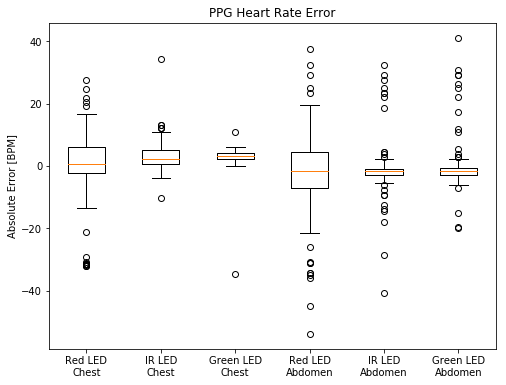

In [37]:
data = [Chest_RED_HR_error, Chest_IR_HR_error, Chest_GR_HR_error, 
        Abdo_RED_HR_error, Abdo_IR_HR_error, Abdo_GR_HR_error]

plt.figure(figsize = (8,6))
plt.boxplot(data)
plt.title("PPG Heart Rate Error")
plt.xticks([1,2,3,4,5,6], ["Red LED\nChest", "IR LED\nChest", "Green LED\nChest",
                       "Red LED\nAbdomen", "IR LED\nAbdomen", "Green LED\nAbdomen"])
plt.ylabel("Absolute Error [BPM]")


Text(0,0.5,'Absolute Error [BPM]')

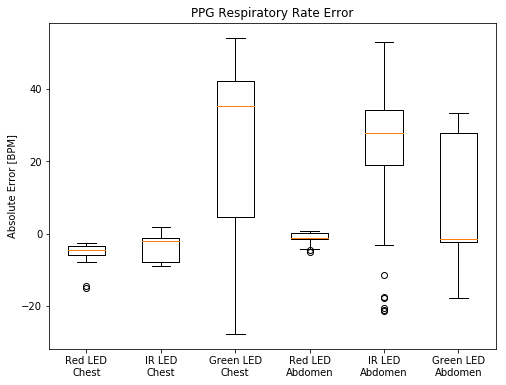

In [38]:
data = [Chest_RED_RR_error, Chest_IR_RR_error, Chest_GR_RR_error, 
        Abdo_RED_RR_error, Abdo_IR_RR_error, Abdo_GR_RR_error]

plt.figure(figsize = (8,6))
plt.boxplot(data)
plt.title("PPG Respiratory Rate Error")
plt.xticks([1,2,3,4,5,6], ["Red LED\nChest", "IR LED\nChest", "Green LED\nChest",
                       "Red LED\nAbdomen", "IR LED\nAbdomen", "Green LED\nAbdomen"])
plt.ylabel("Absolute Error [BPM]")


## Microphone

### -------------------------------------------------
# EVALUATION August 25, 2022
### -------------------------------------------------

## Microphone

In [39]:
ECGhrX = [-19.9921875, -19.984375, -19.9765625, -19.96875, -19.9609375, -19.953125, -19.9453125, -19.9375, -19.9296875, -19.921875, -19.9140625, -19.90625, -19.8984375, -19.890625, -19.8828125, -19.875, -19.8671875, -19.859375, -19.8515625, -19.84375, -19.8359375, -19.828125, -19.8203125, -19.8125, -19.8046875, -19.796875, -19.7890625, -19.78125, -19.7734375, -19.765625, -19.7578125, -19.75, -19.7421875, -19.734375, -19.7265625, -19.71875, -19.7109375, -19.703125, -19.6953125, -19.6875, -19.6796875, -19.671875, -19.6640625, -19.65625, -19.6484375, -19.640625, -19.6328125, -19.625, -19.6171875, -19.609375, -19.6015625, -19.59375, -19.5859375, -19.578125, -19.5703125, -19.5625, -19.5546875, -19.546875, -19.5390625, -19.53125, -19.5234375, -19.515625, -19.5078125, -19.5, -19.4921875, -19.484375, -19.4765625, -19.46875, -19.4609375, -19.453125, -19.4453125, -19.4375, -19.4296875, -19.421875, -19.4140625, -19.40625, -19.3984375, -19.390625, -19.3828125, -19.375, -19.3671875, -19.359375, -19.3515625, -19.34375, -19.3359375, -19.328125, -19.3203125, -19.3125, -19.3046875, -19.296875, -19.2890625, -19.28125, -19.2734375, -19.265625, -19.2578125, -19.25, -19.2421875, -19.234375, -19.2265625, -19.21875, -19.2109375, -19.203125, -19.1953125, -19.1875, -19.1796875, -19.171875, -19.1640625, -19.15625, -19.1484375, -19.140625, -19.1328125, -19.125, -19.1171875, -19.109375, -19.1015625, -19.09375, -19.0859375, -19.078125, -19.0703125, -19.0625, -19.0546875, -19.046875, -19.0390625, -19.03125, -19.0234375, -19.015625, -19.0078125, -19.0, -18.9921875, -18.984375, -18.9765625, -18.96875, -18.9609375, -18.953125, -18.9453125, -18.9375, -18.9296875, -18.921875, -18.9140625, -18.90625, -18.8984375, -18.890625, -18.8828125, -18.875, -18.8671875, -18.859375, -18.8515625, -18.84375, -18.8359375, -18.828125, -18.8203125, -18.8125, -18.8046875, -18.796875, -18.7890625, -18.78125, -18.7734375, -18.765625, -18.7578125, -18.75, -18.7421875, -18.734375, -18.7265625, -18.71875, -18.7109375, -18.703125, -18.6953125, -18.6875, -18.6796875, -18.671875, -18.6640625, -18.65625, -18.6484375, -18.640625, -18.6328125, -18.625, -18.6171875, -18.609375, -18.6015625, -18.59375, -18.5859375, -18.578125, -18.5703125, -18.5625, -18.5546875, -18.546875, -18.5390625, -18.53125, -18.5234375, -18.515625, -18.5078125, -18.5, -18.4921875, -18.484375, -18.4765625, -18.46875, -18.4609375, -18.453125, -18.4453125, -18.4375, -18.4296875, -18.421875, -18.4140625, -18.40625, -18.3984375, -18.390625, -18.3828125, -18.375, -18.3671875, -18.359375, -18.3515625, -18.34375, -18.3359375, -18.328125, -18.3203125, -18.3125, -18.3046875, -18.296875, -18.2890625, -18.28125, -18.2734375, -18.265625, -18.2578125, -18.25, -18.2421875, -18.234375, -18.2265625, -18.21875, -18.2109375, -18.203125, -18.1953125, -18.1875, -18.1796875, -18.171875, -18.1640625, -18.15625, -18.1484375, -18.140625, -18.1328125, -18.125, -18.1171875, -18.109375, -18.1015625, -18.09375, -18.0859375, -18.078125, -18.0703125, -18.0625, -18.0546875, -18.046875, -18.0390625, -18.03125, -18.0234375, -18.015625, -18.0078125, -18.0, -17.9921875, -17.984375, -17.9765625, -17.96875, -17.9609375, -17.953125, -17.9453125, -17.9375, -17.9296875, -17.921875, -17.9140625, -17.90625, -17.8984375, -17.890625, -17.8828125, -17.875, -17.8671875, -17.859375, -17.8515625, -17.84375, -17.8359375, -17.828125, -17.8203125, -17.8125, -17.8046875, -17.796875, -17.7890625, -17.78125, -17.7734375, -17.765625, -17.7578125, -17.75, -17.7421875, -17.734375, -17.7265625, -17.71875, -17.7109375, -17.703125, -17.6953125, -17.6875, -17.6796875, -17.671875, -17.6640625, -17.65625, -17.6484375, -17.640625, -17.6328125, -17.625, -17.6171875, -17.609375, -17.6015625, -17.59375, -17.5859375, -17.578125, -17.5703125, -17.5625, -17.5546875, -17.546875, -17.5390625, -17.53125, -17.5234375, -17.515625, -17.5078125, -17.5, -17.4921875, -17.484375, -17.4765625, -17.46875, -17.4609375, -17.453125, -17.4453125, -17.4375, -17.4296875, -17.421875, -17.4140625, -17.40625, -17.3984375, -17.390625, -17.3828125, -17.375, -17.3671875, -17.359375, -17.3515625, -17.34375, -17.3359375, -17.328125, -17.3203125, -17.3125, -17.3046875, -17.296875, -17.2890625, -17.28125, -17.2734375, -17.265625, -17.2578125, -17.25, -17.2421875, -17.234375, -17.2265625, -17.21875, -17.2109375, -17.203125, -17.1953125, -17.1875, -17.1796875, -17.171875, -17.1640625, -17.15625, -17.1484375, -17.140625, -17.1328125, -17.125, -17.1171875, -17.109375, -17.1015625, -17.09375, -17.0859375, -17.078125, -17.0703125, -17.0625, -17.0546875, -17.046875, -17.0390625, -17.03125, -17.0234375, -17.015625, -17.0078125, -17.0, -16.9921875, -16.984375, -16.9765625, -16.96875, -16.9609375, -16.953125, -16.9453125, -16.9375, -16.9296875, -16.921875, -16.9140625, -16.90625, -16.8984375, -16.890625, -16.8828125, -16.875, -16.8671875, -16.859375, -16.8515625, -16.84375, -16.8359375, -16.828125, -16.8203125, -16.8125, -16.8046875, -16.796875, -16.7890625, -16.78125, -16.7734375, -16.765625, -16.7578125, -16.75, -16.7421875, -16.734375, -16.7265625, -16.71875, -16.7109375, -16.703125, -16.6953125, -16.6875, -16.6796875, -16.671875, -16.6640625, -16.65625, -16.6484375, -16.640625, -16.6328125, -16.625, -16.6171875, -16.609375, -16.6015625, -16.59375, -16.5859375, -16.578125, -16.5703125, -16.5625, -16.5546875, -16.546875, -16.5390625, -16.53125, -16.5234375, -16.515625, -16.5078125, -16.5, -16.4921875, -16.484375, -16.4765625, -16.46875, -16.4609375, -16.453125, -16.4453125, -16.4375, -16.4296875, -16.421875, -16.4140625, -16.40625, -16.3984375, -16.390625, -16.3828125, -16.375, -16.3671875, -16.359375, -16.3515625, -16.34375, -16.3359375, -16.328125, -16.3203125, -16.3125, -16.3046875, -16.296875, -16.2890625, -16.28125, -16.2734375, -16.265625, -16.2578125, -16.25, -16.2421875, -16.234375, -16.2265625, -16.21875, -16.2109375, -16.203125, -16.1953125, -16.1875, -16.1796875, -16.171875, -16.1640625, -16.15625, -16.1484375, -16.140625, -16.1328125, -16.125, -16.1171875, -16.109375, -16.1015625, -16.09375, -16.0859375, -16.078125, -16.0703125, -16.0625, -16.0546875, -16.046875, -16.0390625, -16.03125, -16.0234375, -16.015625, -16.0078125, -16.0, -15.9921875, -15.984375, -15.9765625, -15.96875, -15.9609375, -15.953125, -15.9453125, -15.9375, -15.9296875, -15.921875, -15.9140625, -15.90625, -15.8984375, -15.890625, -15.8828125, -15.875, -15.8671875, -15.859375, -15.8515625, -15.84375, -15.8359375, -15.828125, -15.8203125, -15.8125, -15.8046875, -15.796875, -15.7890625, -15.78125, -15.7734375, -15.765625, -15.7578125, -15.75, -15.7421875, -15.734375, -15.7265625, -15.71875, -15.7109375, -15.703125, -15.6953125, -15.6875, -15.6796875, -15.671875, -15.6640625, -15.65625, -15.6484375, -15.640625, -15.6328125, -15.625, -15.6171875, -15.609375, -15.6015625, -15.59375, -15.5859375, -15.578125, -15.5703125, -15.5625, -15.5546875, -15.546875, -15.5390625, -15.53125, -15.5234375, -15.515625, -15.5078125, -15.5, -15.4921875, -15.484375, -15.4765625, -15.46875, -15.4609375, -15.453125, -15.4453125, -15.4375, -15.4296875, -15.421875, -15.4140625, -15.40625, -15.3984375, -15.390625, -15.3828125, -15.375, -15.3671875, -15.359375, -15.3515625, -15.34375, -15.3359375, -15.328125, -15.3203125, -15.3125, -15.3046875, -15.296875, -15.2890625, -15.28125, -15.2734375, -15.265625, -15.2578125, -15.25, -15.2421875, -15.234375, -15.2265625, -15.21875, -15.2109375, -15.203125, -15.1953125, -15.1875, -15.1796875, -15.171875, -15.1640625, -15.15625, -15.1484375, -15.140625, -15.1328125, -15.125, -15.1171875, -15.109375, -15.1015625, -15.09375, -15.0859375, -15.078125, -15.0703125, -15.0625, -15.0546875, -15.046875, -15.0390625, -15.03125, -15.0234375, -15.015625, -15.0078125, -15.0, -14.9921875, -14.984375, -14.9765625, -14.96875, -14.9609375, -14.953125, -14.9453125, -14.9375, -14.9296875, -14.921875, -14.9140625, -14.90625, -14.8984375, -14.890625, -14.8828125, -14.875, -14.8671875, -14.859375, -14.8515625, -14.84375, -14.8359375, -14.828125, -14.8203125, -14.8125, -14.8046875, -14.796875, -14.7890625, -14.78125, -14.7734375, -14.765625, -14.7578125, -14.75, -14.7421875, -14.734375, -14.7265625, -14.71875, -14.7109375, -14.703125, -14.6953125, -14.6875, -14.6796875, -14.671875, -14.6640625, -14.65625, -14.6484375, -14.640625, -14.6328125, -14.625, -14.6171875, -14.609375, -14.6015625, -14.59375, -14.5859375, -14.578125, -14.5703125, -14.5625, -14.5546875, -14.546875, -14.5390625, -14.53125, -14.5234375, -14.515625, -14.5078125, -14.5, -14.4921875, -14.484375, -14.4765625, -14.46875, -14.4609375, -14.453125, -14.4453125, -14.4375, -14.4296875, -14.421875, -14.4140625, -14.40625, -14.3984375, -14.390625, -14.3828125, -14.375, -14.3671875, -14.359375, -14.3515625, -14.34375, -14.3359375, -14.328125, -14.3203125, -14.3125, -14.3046875, -14.296875, -14.2890625, -14.28125, -14.2734375, -14.265625, -14.2578125, -14.25, -14.2421875, -14.234375, -14.2265625, -14.21875, -14.2109375, -14.203125, -14.1953125, -14.1875, -14.1796875, -14.171875, -14.1640625, -14.15625, -14.1484375, -14.140625, -14.1328125, -14.125, -14.1171875, -14.109375, -14.1015625, -14.09375, -14.0859375, -14.078125, -14.0703125, -14.0625, -14.0546875, -14.046875, -14.0390625, -14.03125, -14.0234375, -14.015625, -14.0078125, -14.0, -13.9921875, -13.984375, -13.9765625, -13.96875, -13.9609375, -13.953125, -13.9453125, -13.9375, -13.9296875, -13.921875, -13.9140625, -13.90625, -13.8984375, -13.890625, -13.8828125, -13.875, -13.8671875, -13.859375, -13.8515625, -13.84375, -13.8359375, -13.828125, -13.8203125, -13.8125, -13.8046875, -13.796875, -13.7890625, -13.78125, -13.7734375, -13.765625, -13.7578125, -13.75, -13.7421875, -13.734375, -13.7265625, -13.71875, -13.7109375, -13.703125, -13.6953125, -13.6875, -13.6796875, -13.671875, -13.6640625, -13.65625, -13.6484375, -13.640625, -13.6328125, -13.625, -13.6171875, -13.609375, -13.6015625, -13.59375, -13.5859375, -13.578125, -13.5703125, -13.5625, -13.5546875, -13.546875, -13.5390625, -13.53125, -13.5234375, -13.515625, -13.5078125, -13.5, -13.4921875, -13.484375, -13.4765625, -13.46875, -13.4609375, -13.453125, -13.4453125, -13.4375, -13.4296875, -13.421875, -13.4140625, -13.40625, -13.3984375, -13.390625, -13.3828125, -13.375, -13.3671875, -13.359375, -13.3515625, -13.34375, -13.3359375, -13.328125, -13.3203125, -13.3125, -13.3046875, -13.296875, -13.2890625, -13.28125, -13.2734375, -13.265625, -13.2578125, -13.25, -13.2421875, -13.234375, -13.2265625, -13.21875, -13.2109375, -13.203125, -13.1953125, -13.1875, -13.1796875, -13.171875, -13.1640625, -13.15625, -13.1484375, -13.140625, -13.1328125, -13.125, -13.1171875, -13.109375, -13.1015625, -13.09375, -13.0859375, -13.078125, -13.0703125, -13.0625, -13.0546875, -13.046875, -13.0390625, -13.03125, -13.0234375, -13.015625, -13.0078125, -13.0, -12.9921875, -12.984375, -12.9765625, -12.96875, -12.9609375, -12.953125, -12.9453125, -12.9375, -12.9296875, -12.921875, -12.9140625, -12.90625, -12.8984375, -12.890625, -12.8828125, -12.875, -12.8671875, -12.859375, -12.8515625, -12.84375, -12.8359375, -12.828125, -12.8203125, -12.8125, -12.8046875, -12.796875, -12.7890625, -12.78125, -12.7734375, -12.765625, -12.7578125, -12.75, -12.7421875, -12.734375, -12.7265625, -12.71875, -12.7109375, -12.703125, -12.6953125, -12.6875, -12.6796875, -12.671875, -12.6640625, -12.65625, -12.6484375, -12.640625, -12.6328125, -12.625, -12.6171875, -12.609375, -12.6015625, -12.59375, -12.5859375, -12.578125, -12.5703125, -12.5625, -12.5546875, -12.546875, -12.5390625, -12.53125, -12.5234375, -12.515625, -12.5078125, -12.5, -12.4921875, -12.484375, -12.4765625, -12.46875, -12.4609375, -12.453125, -12.4453125, -12.4375, -12.4296875, -12.421875, -12.4140625, -12.40625, -12.3984375, -12.390625, -12.3828125, -12.375, -12.3671875, -12.359375, -12.3515625, -12.34375, -12.3359375, -12.328125, -12.3203125, -12.3125, -12.3046875, -12.296875, -12.2890625, -12.28125, -12.2734375, -12.265625, -12.2578125, -12.25, -12.2421875, -12.234375, -12.2265625, -12.21875, -12.2109375, -12.203125, -12.1953125, -12.1875, -12.1796875, -12.171875, -12.1640625, -12.15625, -12.1484375, -12.140625, -12.1328125, -12.125, -12.1171875, -12.109375, -12.1015625, -12.09375, -12.0859375, -12.078125, -12.0703125, -12.0625, -12.0546875, -12.046875, -12.0390625, -12.03125, -12.0234375, -12.015625, -12.0078125, -12.0, -11.9921875, -11.984375, -11.9765625, -11.96875, -11.9609375, -11.953125, -11.9453125, -11.9375, -11.9296875, -11.921875, -11.9140625, -11.90625, -11.8984375, -11.890625, -11.8828125, -11.875, -11.8671875, -11.859375, -11.8515625, -11.84375, -11.8359375, -11.828125, -11.8203125, -11.8125, -11.8046875, -11.796875, -11.7890625, -11.78125, -11.7734375, -11.765625, -11.7578125, -11.75, -11.7421875, -11.734375, -11.7265625, -11.71875, -11.7109375, -11.703125, -11.6953125, -11.6875, -11.6796875, -11.671875, -11.6640625, -11.65625, -11.6484375, -11.640625, -11.6328125, -11.625, -11.6171875, -11.609375, -11.6015625, -11.59375, -11.5859375, -11.578125, -11.5703125, -11.5625, -11.5546875, -11.546875, -11.5390625, -11.53125, -11.5234375, -11.515625, -11.5078125, -11.5, -11.4921875, -11.484375, -11.4765625, -11.46875, -11.4609375, -11.453125, -11.4453125, -11.4375, -11.4296875, -11.421875, -11.4140625, -11.40625, -11.3984375, -11.390625, -11.3828125, -11.375, -11.3671875, -11.359375, -11.3515625, -11.34375, -11.3359375, -11.328125, -11.3203125, -11.3125, -11.3046875, -11.296875, -11.2890625, -11.28125, -11.2734375, -11.265625, -11.2578125, -11.25, -11.2421875, -11.234375, -11.2265625, -11.21875, -11.2109375, -11.203125, -11.1953125, -11.1875, -11.1796875, -11.171875, -11.1640625, -11.15625, -11.1484375, -11.140625, -11.1328125, -11.125, -11.1171875, -11.109375, -11.1015625, -11.09375, -11.0859375, -11.078125, -11.0703125, -11.0625, -11.0546875, -11.046875, -11.0390625, -11.03125, -11.0234375, -11.015625, -11.0078125, -11.0, -10.9921875, -10.984375, -10.9765625, -10.96875, -10.9609375, -10.953125, -10.9453125, -10.9375, -10.9296875, -10.921875, -10.9140625, -10.90625, -10.8984375, -10.890625, -10.8828125, -10.875, -10.8671875, -10.859375, -10.8515625, -10.84375, -10.8359375, -10.828125, -10.8203125, -10.8125, -10.8046875, -10.796875, -10.7890625, -10.78125, -10.7734375, -10.765625, -10.7578125, -10.75, -10.7421875, -10.734375, -10.7265625, -10.71875, -10.7109375, -10.703125, -10.6953125, -10.6875, -10.6796875, -10.671875, -10.6640625, -10.65625, -10.6484375, -10.640625, -10.6328125, -10.625, -10.6171875, -10.609375, -10.6015625, -10.59375, -10.5859375, -10.578125, -10.5703125, -10.5625, -10.5546875, -10.546875, -10.5390625, -10.53125, -10.5234375, -10.515625, -10.5078125, -10.5, -10.4921875, -10.484375, -10.4765625, -10.46875, -10.4609375, -10.453125, -10.4453125, -10.4375, -10.4296875, -10.421875, -10.4140625, -10.40625, -10.3984375, -10.390625, -10.3828125, -10.375, -10.3671875, -10.359375, -10.3515625, -10.34375, -10.3359375, -10.328125, -10.3203125, -10.3125, -10.3046875, -10.296875, -10.2890625, -10.28125, -10.2734375, -10.265625, -10.2578125, -10.25, -10.2421875, -10.234375, -10.2265625, -10.21875, -10.2109375, -10.203125, -10.1953125, -10.1875, -10.1796875, -10.171875, -10.1640625, -10.15625, -10.1484375, -10.140625, -10.1328125, -10.125, -10.1171875, -10.109375, -10.1015625, -10.09375, -10.0859375, -10.078125, -10.0703125, -10.0625, -10.0546875, -10.046875, -10.0390625, -10.03125, -10.0234375, -10.015625, -10.0078125, -10.0, -9.9921875, -9.984375, -9.9765625, -9.96875, -9.9609375, -9.953125, -9.9453125, -9.9375, -9.9296875, -9.921875, -9.9140625, -9.90625, -9.8984375, -9.890625, -9.8828125, -9.875, -9.8671875, -9.859375, -9.8515625, -9.84375, -9.8359375, -9.828125, -9.8203125, -9.8125, -9.8046875, -9.796875, -9.7890625, -9.78125, -9.7734375, -9.765625, -9.7578125, -9.75, -9.7421875, -9.734375, -9.7265625, -9.71875, -9.7109375, -9.703125, -9.6953125, -9.6875, -9.6796875, -9.671875, -9.6640625, -9.65625, -9.6484375, -9.640625, -9.6328125, -9.625, -9.6171875, -9.609375, -9.6015625, -9.59375, -9.5859375, -9.578125, -9.5703125, -9.5625, -9.5546875, -9.546875, -9.5390625, -9.53125, -9.5234375, -9.515625, -9.5078125, -9.5, -9.4921875, -9.484375, -9.4765625, -9.46875, -9.4609375, -9.453125, -9.4453125, -9.4375, -9.4296875, -9.421875, -9.4140625, -9.40625, -9.3984375, -9.390625, -9.3828125, -9.375, -9.3671875, -9.359375, -9.3515625, -9.34375, -9.3359375, -9.328125, -9.3203125, -9.3125, -9.3046875, -9.296875, -9.2890625, -9.28125, -9.2734375, -9.265625, -9.2578125, -9.25, -9.2421875, -9.234375, -9.2265625, -9.21875, -9.2109375, -9.203125, -9.1953125, -9.1875, -9.1796875, -9.171875, -9.1640625, -9.15625, -9.1484375, -9.140625, -9.1328125, -9.125, -9.1171875, -9.109375, -9.1015625, -9.09375, -9.0859375, -9.078125, -9.0703125, -9.0625, -9.0546875, -9.046875, -9.0390625, -9.03125, -9.0234375, -9.015625, -9.0078125, -9.0, -8.9921875, -8.984375, -8.9765625, -8.96875, -8.9609375, -8.953125, -8.9453125, -8.9375, -8.9296875, -8.921875, -8.9140625, -8.90625, -8.8984375, -8.890625, -8.8828125, -8.875, -8.8671875, -8.859375, -8.8515625, -8.84375, -8.8359375, -8.828125, -8.8203125, -8.8125, -8.8046875, -8.796875, -8.7890625, -8.78125, -8.7734375, -8.765625, -8.7578125, -8.75, -8.7421875, -8.734375, -8.7265625, -8.71875, -8.7109375, -8.703125, -8.6953125, -8.6875, -8.6796875, -8.671875, -8.6640625, -8.65625, -8.6484375, -8.640625, -8.6328125, -8.625, -8.6171875, -8.609375, -8.6015625, -8.59375, -8.5859375, -8.578125, -8.5703125, -8.5625, -8.5546875, -8.546875, -8.5390625, -8.53125, -8.5234375, -8.515625, -8.5078125, -8.5, -8.4921875, -8.484375, -8.4765625, -8.46875, -8.4609375, -8.453125, -8.4453125, -8.4375, -8.4296875, -8.421875, -8.4140625, -8.40625, -8.3984375, -8.390625, -8.3828125, -8.375, -8.3671875, -8.359375, -8.3515625, -8.34375, -8.3359375, -8.328125, -8.3203125, -8.3125, -8.3046875, -8.296875, -8.2890625, -8.28125, -8.2734375, -8.265625, -8.2578125, -8.25, -8.2421875, -8.234375, -8.2265625, -8.21875, -8.2109375, -8.203125, -8.1953125, -8.1875, -8.1796875, -8.171875, -8.1640625, -8.15625, -8.1484375, -8.140625, -8.1328125, -8.125, -8.1171875, -8.109375, -8.1015625, -8.09375, -8.0859375, -8.078125, -8.0703125, -8.0625, -8.0546875, -8.046875, -8.0390625, -8.03125, -8.0234375, -8.015625, -8.0078125, -8.0, -7.9921875, -7.984375, -7.9765625, -7.96875, -7.9609375, -7.953125, -7.9453125, -7.9375, -7.9296875, -7.921875, -7.9140625, -7.90625, -7.8984375, -7.890625, -7.8828125, -7.875, -7.8671875, -7.859375, -7.8515625, -7.84375, -7.8359375, -7.828125, -7.8203125, -7.8125, -7.8046875, -7.796875, -7.7890625, -7.78125, -7.7734375, -7.765625, -7.7578125, -7.75, -7.7421875, -7.734375, -7.7265625, -7.71875, -7.7109375, -7.703125, -7.6953125, -7.6875, -7.6796875, -7.671875, -7.6640625, -7.65625, -7.6484375, -7.640625, -7.6328125, -7.625, -7.6171875, -7.609375, -7.6015625, -7.59375, -7.5859375, -7.578125, -7.5703125, -7.5625, -7.5546875, -7.546875, -7.5390625, -7.53125, -7.5234375, -7.515625, -7.5078125, -7.5, -7.4921875, -7.484375, -7.4765625, -7.46875, -7.4609375, -7.453125, -7.4453125, -7.4375, -7.4296875, -7.421875, -7.4140625, -7.40625, -7.3984375, -7.390625, -7.3828125, -7.375, -7.3671875, -7.359375, -7.3515625, -7.34375, -7.3359375, -7.328125, -7.3203125, -7.3125, -7.3046875, -7.296875, -7.2890625, -7.28125, -7.2734375, -7.265625, -7.2578125, -7.25, -7.2421875, -7.234375, -7.2265625, -7.21875, -7.2109375, -7.203125, -7.1953125, -7.1875, -7.1796875, -7.171875, -7.1640625, -7.15625, -7.1484375, -7.140625, -7.1328125, -7.125, -7.1171875, -7.109375, -7.1015625, -7.09375, -7.0859375, -7.078125, -7.0703125, -7.0625, -7.0546875, -7.046875, -7.0390625, -7.03125, -7.0234375, -7.015625, -7.0078125, -7.0, -6.9921875, -6.984375, -6.9765625, -6.96875, -6.9609375, -6.953125, -6.9453125, -6.9375, -6.9296875, -6.921875, -6.9140625, -6.90625, -6.8984375, -6.890625, -6.8828125, -6.875, -6.8671875, -6.859375, -6.8515625, -6.84375, -6.8359375, -6.828125, -6.8203125, -6.8125, -6.8046875, -6.796875, -6.7890625, -6.78125, -6.7734375, -6.765625, -6.7578125, -6.75, -6.7421875, -6.734375, -6.7265625, -6.71875, -6.7109375, -6.703125, -6.6953125, -6.6875, -6.6796875, -6.671875, -6.6640625, -6.65625, -6.6484375, -6.640625, -6.6328125, -6.625, -6.6171875, -6.609375, -6.6015625, -6.59375, -6.5859375, -6.578125, -6.5703125, -6.5625, -6.5546875, -6.546875, -6.5390625, -6.53125, -6.5234375, -6.515625, -6.5078125, -6.5, -6.4921875, -6.484375, -6.4765625, -6.46875, -6.4609375, -6.453125, -6.4453125, -6.4375, -6.4296875, -6.421875, -6.4140625, -6.40625, -6.3984375, -6.390625, -6.3828125, -6.375, -6.3671875, -6.359375, -6.3515625, -6.34375, -6.3359375, -6.328125, -6.3203125, -6.3125, -6.3046875, -6.296875, -6.2890625, -6.28125, -6.2734375, -6.265625, -6.2578125, -6.25, -6.2421875, -6.234375, -6.2265625, -6.21875, -6.2109375, -6.203125, -6.1953125, -6.1875, -6.1796875, -6.171875, -6.1640625, -6.15625, -6.1484375, -6.140625, -6.1328125, -6.125, -6.1171875, -6.109375, -6.1015625, -6.09375, -6.0859375, -6.078125, -6.0703125, -6.0625, -6.0546875, -6.046875, -6.0390625, -6.03125, -6.0234375, -6.015625, -6.0078125, -6.0, -5.9921875, -5.984375, -5.9765625, -5.96875, -5.9609375, -5.953125, -5.9453125, -5.9375, -5.9296875, -5.921875, -5.9140625, -5.90625, -5.8984375, -5.890625, -5.8828125, -5.875, -5.8671875, -5.859375, -5.8515625, -5.84375, -5.8359375, -5.828125, -5.8203125, -5.8125, -5.8046875, -5.796875, -5.7890625, -5.78125, -5.7734375, -5.765625, -5.7578125, -5.75, -5.7421875, -5.734375, -5.7265625, -5.71875, -5.7109375, -5.703125, -5.6953125, -5.6875, -5.6796875, -5.671875, -5.6640625, -5.65625, -5.6484375, -5.640625, -5.6328125, -5.625, -5.6171875, -5.609375, -5.6015625, -5.59375, -5.5859375, -5.578125, -5.5703125, -5.5625, -5.5546875, -5.546875, -5.5390625, -5.53125, -5.5234375, -5.515625, -5.5078125, -5.5, -5.4921875, -5.484375, -5.4765625, -5.46875, -5.4609375, -5.453125, -5.4453125, -5.4375, -5.4296875, -5.421875, -5.4140625, -5.40625, -5.3984375, -5.390625, -5.3828125, -5.375, -5.3671875, -5.359375, -5.3515625, -5.34375, -5.3359375, -5.328125, -5.3203125, -5.3125, -5.3046875, -5.296875, -5.2890625, -5.28125, -5.2734375, -5.265625, -5.2578125, -5.25, -5.2421875, -5.234375, -5.2265625, -5.21875, -5.2109375, -5.203125, -5.1953125, -5.1875, -5.1796875, -5.171875, -5.1640625, -5.15625, -5.1484375, -5.140625, -5.1328125, -5.125, -5.1171875, -5.109375, -5.1015625, -5.09375, -5.0859375, -5.078125, -5.0703125, -5.0625, -5.0546875, -5.046875, -5.0390625, -5.03125, -5.0234375, -5.015625, -5.0078125, -5.0, -4.9921875, -4.984375, -4.9765625, -4.96875, -4.9609375, -4.953125, -4.9453125, -4.9375, -4.9296875, -4.921875, -4.9140625, -4.90625, -4.8984375, -4.890625, -4.8828125, -4.875, -4.8671875, -4.859375, -4.8515625, -4.84375, -4.8359375, -4.828125, -4.8203125, -4.8125, -4.8046875, -4.796875, -4.7890625, -4.78125, -4.7734375, -4.765625, -4.7578125, -4.75, -4.7421875, -4.734375, -4.7265625, -4.71875, -4.7109375, -4.703125, -4.6953125, -4.6875, -4.6796875, -4.671875, -4.6640625, -4.65625, -4.6484375, -4.640625, -4.6328125, -4.625, -4.6171875, -4.609375, -4.6015625, -4.59375, -4.5859375, -4.578125, -4.5703125, -4.5625, -4.5546875, -4.546875, -4.5390625, -4.53125, -4.5234375, -4.515625, -4.5078125, -4.5, -4.4921875, -4.484375, -4.4765625, -4.46875, -4.4609375, -4.453125, -4.4453125, -4.4375, -4.4296875, -4.421875, -4.4140625, -4.40625, -4.3984375, -4.390625, -4.3828125, -4.375, -4.3671875, -4.359375, -4.3515625, -4.34375, -4.3359375, -4.328125, -4.3203125, -4.3125, -4.3046875, -4.296875, -4.2890625, -4.28125, -4.2734375, -4.265625, -4.2578125, -4.25, -4.2421875, -4.234375, -4.2265625, -4.21875, -4.2109375, -4.203125, -4.1953125, -4.1875, -4.1796875, -4.171875, -4.1640625, -4.15625, -4.1484375, -4.140625, -4.1328125, -4.125, -4.1171875, -4.109375, -4.1015625, -4.09375, -4.0859375, -4.078125, -4.0703125, -4.0625, -4.0546875, -4.046875, -4.0390625, -4.03125, -4.0234375, -4.015625, -4.0078125, -4.0, -3.9921875, -3.984375, -3.9765625, -3.96875, -3.9609375, -3.953125, -3.9453125, -3.9375, -3.9296875, -3.921875, -3.9140625, -3.90625, -3.8984375, -3.890625, -3.8828125, -3.875, -3.8671875, -3.859375, -3.8515625, -3.84375, -3.8359375, -3.828125, -3.8203125, -3.8125, -3.8046875, -3.796875, -3.7890625, -3.78125, -3.7734375, -3.765625, -3.7578125, -3.75, -3.7421875, -3.734375, -3.7265625, -3.71875, -3.7109375, -3.703125, -3.6953125, -3.6875, -3.6796875, -3.671875, -3.6640625, -3.65625, -3.6484375, -3.640625, -3.6328125, -3.625, -3.6171875, -3.609375, -3.6015625, -3.59375, -3.5859375, -3.578125, -3.5703125, -3.5625, -3.5546875, -3.546875, -3.5390625, -3.53125, -3.5234375, -3.515625, -3.5078125, -3.5, -3.4921875, -3.484375, -3.4765625, -3.46875, -3.4609375, -3.453125, -3.4453125, -3.4375, -3.4296875, -3.421875, -3.4140625, -3.40625, -3.3984375, -3.390625, -3.3828125, -3.375, -3.3671875, -3.359375, -3.3515625, -3.34375, -3.3359375, -3.328125, -3.3203125, -3.3125, -3.3046875, -3.296875, -3.2890625, -3.28125, -3.2734375, -3.265625, -3.2578125, -3.25, -3.2421875, -3.234375, -3.2265625, -3.21875, -3.2109375, -3.203125, -3.1953125, -3.1875, -3.1796875, -3.171875, -3.1640625, -3.15625, -3.1484375, -3.140625, -3.1328125, -3.125, -3.1171875, -3.109375, -3.1015625, -3.09375, -3.0859375, -3.078125, -3.0703125, -3.0625, -3.0546875, -3.046875, -3.0390625, -3.03125, -3.0234375, -3.015625, -3.0078125, -3.0, -2.9921875, -2.984375, -2.9765625, -2.96875, -2.9609375, -2.953125, -2.9453125, -2.9375, -2.9296875, -2.921875, -2.9140625, -2.90625, -2.8984375, -2.890625, -2.8828125, -2.875, -2.8671875, -2.859375, -2.8515625, -2.84375, -2.8359375, -2.828125, -2.8203125, -2.8125, -2.8046875, -2.796875, -2.7890625, -2.78125, -2.7734375, -2.765625, -2.7578125, -2.75, -2.7421875, -2.734375, -2.7265625, -2.71875, -2.7109375, -2.703125, -2.6953125, -2.6875, -2.6796875, -2.671875, -2.6640625, -2.65625, -2.6484375, -2.640625, -2.6328125, -2.625, -2.6171875, -2.609375, -2.6015625, -2.59375, -2.5859375, -2.578125, -2.5703125, -2.5625, -2.5546875, -2.546875, -2.5390625, -2.53125, -2.5234375, -2.515625, -2.5078125, -2.5, -2.4921875, -2.484375, -2.4765625, -2.46875, -2.4609375, -2.453125, -2.4453125, -2.4375, -2.4296875, -2.421875, -2.4140625, -2.40625, -2.3984375, -2.390625, -2.3828125, -2.375, -2.3671875, -2.359375, -2.3515625, -2.34375, -2.3359375, -2.328125, -2.3203125, -2.3125, -2.3046875, -2.296875, -2.2890625, -2.28125, -2.2734375, -2.265625, -2.2578125, -2.25, -2.2421875, -2.234375, -2.2265625, -2.21875, -2.2109375, -2.203125, -2.1953125, -2.1875, -2.1796875, -2.171875, -2.1640625, -2.15625, -2.1484375, -2.140625, -2.1328125, -2.125, -2.1171875, -2.109375, -2.1015625, -2.09375, -2.0859375, -2.078125, -2.0703125, -2.0625, -2.0546875, -2.046875, -2.0390625, -2.03125, -2.0234375, -2.015625, -2.0078125, -2.0, -1.9921875, -1.984375, -1.9765625, -1.96875, -1.9609375, -1.953125, -1.9453125, -1.9375, -1.9296875, -1.921875, -1.9140625, -1.90625, -1.8984375, -1.890625, -1.8828125, -1.875, -1.8671875, -1.859375, -1.8515625, -1.84375, -1.8359375, -1.828125, -1.8203125, -1.8125, -1.8046875, -1.796875, -1.7890625, -1.78125, -1.7734375, -1.765625, -1.7578125, -1.75, -1.7421875, -1.734375, -1.7265625, -1.71875, -1.7109375, -1.703125, -1.6953125, -1.6875, -1.6796875, -1.671875, -1.6640625, -1.65625, -1.6484375, -1.640625, -1.6328125, -1.625, -1.6171875, -1.609375, -1.6015625, -1.59375, -1.5859375, -1.578125, -1.5703125, -1.5625, -1.5546875, -1.546875, -1.5390625, -1.53125, -1.5234375, -1.515625, -1.5078125, -1.5, -1.4921875, -1.484375, -1.4765625, -1.46875, -1.4609375, -1.453125, -1.4453125, -1.4375, -1.4296875, -1.421875, -1.4140625, -1.40625, -1.3984375, -1.390625, -1.3828125, -1.375, -1.3671875, -1.359375, -1.3515625, -1.34375, -1.3359375, -1.328125, -1.3203125, -1.3125, -1.3046875, -1.296875, -1.2890625, -1.28125, -1.2734375, -1.265625, -1.2578125, -1.25, -1.2421875, -1.234375, -1.2265625, -1.21875, -1.2109375, -1.203125, -1.1953125, -1.1875, -1.1796875, -1.171875, -1.1640625, -1.15625, -1.1484375, -1.140625, -1.1328125, -1.125, -1.1171875, -1.109375, -1.1015625, -1.09375, -1.0859375, -1.078125, -1.0703125, -1.0625, -1.0546875, -1.046875, -1.0390625, -1.03125, -1.0234375, -1.015625, -1.0078125, -1.0, -0.9921875, -0.984375, -0.9765625, -0.96875, -0.9609375, -0.953125, -0.9453125, -0.9375, -0.9296875, -0.921875, -0.9140625, -0.90625, -0.8984375, -0.890625, -0.8828125, -0.875, -0.8671875, -0.859375, -0.8515625, -0.84375, -0.8359375, -0.828125, -0.8203125, -0.8125, -0.8046875, -0.796875, -0.7890625, -0.78125, -0.7734375, -0.765625, -0.7578125, -0.75, -0.7421875, -0.734375, -0.7265625, -0.71875, -0.7109375, -0.703125, -0.6953125, -0.6875, -0.6796875, -0.671875, -0.6640625, -0.65625, -0.6484375, -0.640625, -0.6328125, -0.625, -0.6171875, -0.609375, -0.6015625, -0.59375, -0.5859375, -0.578125, -0.5703125, -0.5625, -0.5546875, -0.546875, -0.5390625, -0.53125, -0.5234375, -0.515625, -0.5078125, -0.5, -0.4921875, -0.484375, -0.4765625, -0.46875, -0.4609375, -0.453125, -0.4453125, -0.4375, -0.4296875, -0.421875, -0.4140625, -0.40625, -0.3984375, -0.390625, -0.3828125, -0.375, -0.3671875, -0.359375, -0.3515625, -0.34375, -0.3359375, -0.328125, -0.3203125, -0.3125, -0.3046875, -0.296875, -0.2890625, -0.28125, -0.2734375, -0.265625, -0.2578125, -0.25, -0.2421875, -0.234375, -0.2265625, -0.21875, -0.2109375, -0.203125, -0.1953125, -0.1875, -0.1796875, -0.171875, -0.1640625, -0.15625, -0.1484375, -0.140625, -0.1328125, -0.125, -0.1171875, -0.109375, -0.1015625, -0.09375, -0.0859375, -0.078125, -0.0703125, -0.0625, -0.0546875, -0.046875, -0.0390625, -0.03125, -0.0234375, -0.015625, -0.0078125, 0.0, 0.0078125, 0.015625, 0.0234375, 0.03125, 0.0390625, 0.046875, 0.0546875, 0.0625, 0.0703125, 0.078125, 0.0859375, 0.09375, 0.1015625, 0.109375, 0.1171875, 0.125, 0.1328125, 0.140625, 0.1484375, 0.15625, 0.1640625, 0.171875, 0.1796875, 0.1875, 0.1953125, 0.203125, 0.2109375, 0.21875, 0.2265625, 0.234375, 0.2421875, 0.25, 0.2578125, 0.265625, 0.2734375, 0.28125, 0.2890625, 0.296875, 0.3046875, 0.3125, 0.3203125, 0.328125, 0.3359375, 0.34375, 0.3515625, 0.359375, 0.3671875, 0.375, 0.3828125, 0.390625, 0.3984375, 0.40625, 0.4140625, 0.421875, 0.4296875, 0.4375, 0.4453125, 0.453125, 0.4609375, 0.46875, 0.4765625, 0.484375, 0.4921875, 0.5, 0.5078125, 0.515625, 0.5234375, 0.53125, 0.5390625, 0.546875, 0.5546875, 0.5625, 0.5703125, 0.578125, 0.5859375, 0.59375, 0.6015625, 0.609375, 0.6171875, 0.625, 0.6328125, 0.640625, 0.6484375, 0.65625, 0.6640625, 0.671875, 0.6796875, 0.6875, 0.6953125, 0.703125, 0.7109375, 0.71875, 0.7265625, 0.734375, 0.7421875, 0.75, 0.7578125, 0.765625, 0.7734375, 0.78125, 0.7890625, 0.796875, 0.8046875, 0.8125, 0.8203125, 0.828125, 0.8359375, 0.84375, 0.8515625, 0.859375, 0.8671875, 0.875, 0.8828125, 0.890625, 0.8984375, 0.90625, 0.9140625, 0.921875, 0.9296875, 0.9375, 0.9453125, 0.953125, 0.9609375, 0.96875, 0.9765625, 0.984375, 0.9921875, 1.0, 1.0078125, 1.015625, 1.0234375, 1.03125, 1.0390625, 1.046875, 1.0546875, 1.0625, 1.0703125, 1.078125, 1.0859375, 1.09375, 1.1015625, 1.109375, 1.1171875, 1.125, 1.1328125, 1.140625, 1.1484375, 1.15625, 1.1640625, 1.171875, 1.1796875, 1.1875, 1.1953125, 1.203125, 1.2109375, 1.21875, 1.2265625, 1.234375, 1.2421875, 1.25, 1.2578125, 1.265625, 1.2734375, 1.28125, 1.2890625, 1.296875, 1.3046875, 1.3125, 1.3203125, 1.328125, 1.3359375, 1.34375, 1.3515625, 1.359375, 1.3671875, 1.375, 1.3828125, 1.390625, 1.3984375, 1.40625, 1.4140625, 1.421875, 1.4296875, 1.4375, 1.4453125, 1.453125, 1.4609375, 1.46875, 1.4765625, 1.484375, 1.4921875, 1.5, 1.5078125, 1.515625, 1.5234375, 1.53125, 1.5390625, 1.546875, 1.5546875, 1.5625, 1.5703125, 1.578125, 1.5859375, 1.59375, 1.6015625, 1.609375, 1.6171875, 1.625, 1.6328125, 1.640625, 1.6484375, 1.65625, 1.6640625, 1.671875, 1.6796875, 1.6875, 1.6953125, 1.703125, 1.7109375, 1.71875, 1.7265625, 1.734375, 1.7421875, 1.75, 1.7578125, 1.765625, 1.7734375, 1.78125, 1.7890625, 1.796875, 1.8046875, 1.8125, 1.8203125, 1.828125, 1.8359375, 1.84375, 1.8515625, 1.859375, 1.8671875, 1.875, 1.8828125, 1.890625, 1.8984375, 1.90625, 1.9140625, 1.921875, 1.9296875, 1.9375, 1.9453125, 1.953125, 1.9609375, 1.96875, 1.9765625, 1.984375, 1.9921875, 2.0, 2.0078125, 2.015625, 2.0234375, 2.03125, 2.0390625, 2.046875, 2.0546875, 2.0625, 2.0703125, 2.078125, 2.0859375, 2.09375, 2.1015625, 2.109375, 2.1171875, 2.125, 2.1328125, 2.140625, 2.1484375, 2.15625, 2.1640625, 2.171875, 2.1796875, 2.1875, 2.1953125, 2.203125, 2.2109375, 2.21875, 2.2265625, 2.234375, 2.2421875, 2.25, 2.2578125, 2.265625, 2.2734375, 2.28125, 2.2890625, 2.296875, 2.3046875, 2.3125, 2.3203125, 2.328125, 2.3359375, 2.34375, 2.3515625, 2.359375, 2.3671875, 2.375, 2.3828125, 2.390625, 2.3984375, 2.40625, 2.4140625, 2.421875, 2.4296875, 2.4375, 2.4453125, 2.453125, 2.4609375, 2.46875, 2.4765625, 2.484375, 2.4921875, 2.5, 2.5078125, 2.515625, 2.5234375, 2.53125, 2.5390625, 2.546875, 2.5546875, 2.5625, 2.5703125, 2.578125, 2.5859375, 2.59375, 2.6015625, 2.609375, 2.6171875, 2.625, 2.6328125, 2.640625, 2.6484375, 2.65625, 2.6640625, 2.671875, 2.6796875, 2.6875, 2.6953125, 2.703125, 2.7109375, 2.71875, 2.7265625, 2.734375, 2.7421875, 2.75, 2.7578125, 2.765625, 2.7734375, 2.78125, 2.7890625, 2.796875, 2.8046875, 2.8125, 2.8203125, 2.828125, 2.8359375, 2.84375, 2.8515625, 2.859375, 2.8671875, 2.875, 2.8828125, 2.890625, 2.8984375, 2.90625, 2.9140625, 2.921875, 2.9296875, 2.9375, 2.9453125, 2.953125, 2.9609375, 2.96875, 2.9765625, 2.984375, 2.9921875, 3.0, 3.0078125, 3.015625, 3.0234375, 3.03125, 3.0390625, 3.046875, 3.0546875, 3.0625, 3.0703125, 3.078125, 3.0859375, 3.09375, 3.1015625, 3.109375, 3.1171875, 3.125, 3.1328125, 3.140625, 3.1484375, 3.15625, 3.1640625, 3.171875, 3.1796875, 3.1875, 3.1953125, 3.203125, 3.2109375, 3.21875, 3.2265625, 3.234375, 3.2421875, 3.25, 3.2578125, 3.265625, 3.2734375, 3.28125, 3.2890625, 3.296875, 3.3046875, 3.3125, 3.3203125, 3.328125, 3.3359375, 3.34375, 3.3515625, 3.359375, 3.3671875, 3.375, 3.3828125, 3.390625, 3.3984375, 3.40625, 3.4140625, 3.421875, 3.4296875, 3.4375, 3.4453125, 3.453125, 3.4609375, 3.46875, 3.4765625, 3.484375, 3.4921875, 3.5, 3.5078125, 3.515625, 3.5234375, 3.53125, 3.5390625, 3.546875, 3.5546875, 3.5625, 3.5703125, 3.578125, 3.5859375, 3.59375, 3.6015625, 3.609375, 3.6171875, 3.625, 3.6328125, 3.640625, 3.6484375, 3.65625, 3.6640625, 3.671875, 3.6796875, 3.6875, 3.6953125, 3.703125, 3.7109375, 3.71875, 3.7265625, 3.734375, 3.7421875, 3.75, 3.7578125, 3.765625, 3.7734375, 3.78125, 3.7890625, 3.796875, 3.8046875, 3.8125, 3.8203125, 3.828125, 3.8359375, 3.84375, 3.8515625, 3.859375, 3.8671875, 3.875, 3.8828125, 3.890625, 3.8984375, 3.90625, 3.9140625, 3.921875, 3.9296875, 3.9375, 3.9453125, 3.953125, 3.9609375, 3.96875, 3.9765625, 3.984375, 3.9921875, 4.0, 4.0078125, 4.015625, 4.0234375, 4.03125, 4.0390625, 4.046875, 4.0546875, 4.0625, 4.0703125, 4.078125, 4.0859375, 4.09375, 4.1015625, 4.109375, 4.1171875, 4.125, 4.1328125, 4.140625, 4.1484375, 4.15625, 4.1640625, 4.171875, 4.1796875, 4.1875, 4.1953125, 4.203125, 4.2109375, 4.21875, 4.2265625, 4.234375, 4.2421875, 4.25, 4.2578125, 4.265625, 4.2734375, 4.28125, 4.2890625, 4.296875, 4.3046875, 4.3125, 4.3203125, 4.328125, 4.3359375, 4.34375, 4.3515625, 4.359375, 4.3671875, 4.375, 4.3828125, 4.390625, 4.3984375, 4.40625, 4.4140625, 4.421875, 4.4296875, 4.4375, 4.4453125, 4.453125, 4.4609375, 4.46875, 4.4765625, 4.484375, 4.4921875, 4.5, 4.5078125, 4.515625, 4.5234375, 4.53125, 4.5390625, 4.546875, 4.5546875, 4.5625, 4.5703125, 4.578125, 4.5859375, 4.59375, 4.6015625, 4.609375, 4.6171875, 4.625, 4.6328125, 4.640625, 4.6484375, 4.65625, 4.6640625, 4.671875, 4.6796875, 4.6875, 4.6953125, 4.703125, 4.7109375, 4.71875, 4.7265625, 4.734375, 4.7421875, 4.75, 4.7578125, 4.765625, 4.7734375, 4.78125, 4.7890625, 4.796875, 4.8046875, 4.8125, 4.8203125, 4.828125, 4.8359375, 4.84375, 4.8515625, 4.859375, 4.8671875, 4.875, 4.8828125, 4.890625, 4.8984375, 4.90625, 4.9140625, 4.921875, 4.9296875, 4.9375, 4.9453125, 4.953125, 4.9609375, 4.96875, 4.9765625, 4.984375, 4.9921875, 5.0, 5.0078125, 5.015625, 5.0234375, 5.03125, 5.0390625, 5.046875, 5.0546875, 5.0625, 5.0703125, 5.078125, 5.0859375, 5.09375, 5.1015625, 5.109375, 5.1171875, 5.125, 5.1328125, 5.140625, 5.1484375, 5.15625, 5.1640625, 5.171875, 5.1796875, 5.1875, 5.1953125, 5.203125, 5.2109375, 5.21875, 5.2265625, 5.234375, 5.2421875, 5.25, 5.2578125, 5.265625, 5.2734375, 5.28125, 5.2890625, 5.296875, 5.3046875, 5.3125, 5.3203125, 5.328125, 5.3359375, 5.34375, 5.3515625, 5.359375, 5.3671875, 5.375, 5.3828125, 5.390625, 5.3984375, 5.40625, 5.4140625, 5.421875, 5.4296875, 5.4375, 5.4453125, 5.453125, 5.4609375, 5.46875, 5.4765625, 5.484375, 5.4921875, 5.5, 5.5078125, 5.515625, 5.5234375, 5.53125, 5.5390625, 5.546875, 5.5546875, 5.5625, 5.5703125, 5.578125, 5.5859375, 5.59375, 5.6015625, 5.609375, 5.6171875, 5.625, 5.6328125, 5.640625, 5.6484375, 5.65625, 5.6640625, 5.671875, 5.6796875, 5.6875, 5.6953125, 5.703125, 5.7109375, 5.71875, 5.7265625, 5.734375, 5.7421875, 5.75, 5.7578125, 5.765625, 5.7734375, 5.78125, 5.7890625, 5.796875, 5.8046875, 5.8125, 5.8203125, 5.828125, 5.8359375, 5.84375, 5.8515625, 5.859375, 5.8671875, 5.875, 5.8828125, 5.890625, 5.8984375, 5.90625, 5.9140625, 5.921875, 5.9296875, 5.9375, 5.9453125, 5.953125, 5.9609375, 5.96875, 5.9765625, 5.984375, 5.9921875, 6.0, 6.0078125, 6.015625, 6.0234375, 6.03125, 6.0390625, 6.046875, 6.0546875, 6.0625, 6.0703125, 6.078125, 6.0859375, 6.09375, 6.1015625, 6.109375, 6.1171875, 6.125, 6.1328125, 6.140625, 6.1484375, 6.15625, 6.1640625, 6.171875, 6.1796875, 6.1875, 6.1953125, 6.203125, 6.2109375, 6.21875, 6.2265625, 6.234375, 6.2421875, 6.25, 6.2578125, 6.265625, 6.2734375, 6.28125, 6.2890625, 6.296875, 6.3046875, 6.3125, 6.3203125, 6.328125, 6.3359375, 6.34375, 6.3515625, 6.359375, 6.3671875, 6.375, 6.3828125, 6.390625, 6.3984375, 6.40625, 6.4140625, 6.421875, 6.4296875, 6.4375, 6.4453125, 6.453125, 6.4609375, 6.46875, 6.4765625, 6.484375, 6.4921875, 6.5, 6.5078125, 6.515625, 6.5234375, 6.53125, 6.5390625, 6.546875, 6.5546875, 6.5625, 6.5703125, 6.578125, 6.5859375, 6.59375, 6.6015625, 6.609375, 6.6171875, 6.625, 6.6328125, 6.640625, 6.6484375, 6.65625, 6.6640625, 6.671875, 6.6796875, 6.6875, 6.6953125, 6.703125, 6.7109375, 6.71875, 6.7265625, 6.734375, 6.7421875, 6.75, 6.7578125, 6.765625, 6.7734375, 6.78125, 6.7890625, 6.796875, 6.8046875, 6.8125, 6.8203125, 6.828125, 6.8359375, 6.84375, 6.8515625, 6.859375, 6.8671875, 6.875, 6.8828125, 6.890625, 6.8984375, 6.90625, 6.9140625, 6.921875, 6.9296875, 6.9375, 6.9453125, 6.953125, 6.9609375, 6.96875, 6.9765625, 6.984375, 6.9921875, 7.0, 7.0078125, 7.015625, 7.0234375, 7.03125, 7.0390625, 7.046875, 7.0546875, 7.0625, 7.0703125, 7.078125, 7.0859375, 7.09375, 7.1015625, 7.109375, 7.1171875, 7.125, 7.1328125, 7.140625, 7.1484375, 7.15625, 7.1640625, 7.171875, 7.1796875, 7.1875, 7.1953125, 7.203125, 7.2109375, 7.21875, 7.2265625, 7.234375, 7.2421875, 7.25, 7.2578125, 7.265625, 7.2734375, 7.28125, 7.2890625, 7.296875, 7.3046875, 7.3125, 7.3203125, 7.328125, 7.3359375, 7.34375, 7.3515625, 7.359375, 7.3671875, 7.375, 7.3828125, 7.390625, 7.3984375, 7.40625, 7.4140625, 7.421875, 7.4296875, 7.4375, 7.4453125, 7.453125, 7.4609375, 7.46875, 7.4765625, 7.484375, 7.4921875, 7.5, 7.5078125, 7.515625, 7.5234375, 7.53125, 7.5390625, 7.546875, 7.5546875, 7.5625, 7.5703125, 7.578125, 7.5859375, 7.59375, 7.6015625, 7.609375, 7.6171875, 7.625, 7.6328125, 7.640625, 7.6484375, 7.65625, 7.6640625, 7.671875, 7.6796875, 7.6875, 7.6953125, 7.703125, 7.7109375, 7.71875, 7.7265625, 7.734375, 7.7421875, 7.75, 7.7578125, 7.765625, 7.7734375, 7.78125, 7.7890625, 7.796875, 7.8046875, 7.8125, 7.8203125, 7.828125, 7.8359375, 7.84375, 7.8515625, 7.859375, 7.8671875, 7.875, 7.8828125, 7.890625, 7.8984375, 7.90625, 7.9140625, 7.921875, 7.9296875, 7.9375, 7.9453125, 7.953125, 7.9609375, 7.96875, 7.9765625, 7.984375, 7.9921875, 8.0, 8.0078125, 8.015625, 8.0234375, 8.03125, 8.0390625, 8.046875, 8.0546875, 8.0625, 8.0703125, 8.078125, 8.0859375, 8.09375, 8.1015625, 8.109375, 8.1171875, 8.125, 8.1328125, 8.140625, 8.1484375, 8.15625, 8.1640625, 8.171875, 8.1796875, 8.1875, 8.1953125, 8.203125, 8.2109375, 8.21875, 8.2265625, 8.234375, 8.2421875, 8.25, 8.2578125, 8.265625, 8.2734375, 8.28125, 8.2890625, 8.296875, 8.3046875, 8.3125, 8.3203125, 8.328125, 8.3359375, 8.34375, 8.3515625, 8.359375, 8.3671875, 8.375, 8.3828125, 8.390625, 8.3984375, 8.40625, 8.4140625, 8.421875, 8.4296875, 8.4375, 8.4453125, 8.453125, 8.4609375, 8.46875, 8.4765625, 8.484375, 8.4921875, 8.5, 8.5078125, 8.515625, 8.5234375, 8.53125, 8.5390625, 8.546875, 8.5546875, 8.5625, 8.5703125, 8.578125, 8.5859375, 8.59375, 8.6015625, 8.609375, 8.6171875, 8.625, 8.6328125, 8.640625, 8.6484375, 8.65625, 8.6640625, 8.671875, 8.6796875, 8.6875, 8.6953125, 8.703125, 8.7109375, 8.71875, 8.7265625, 8.734375, 8.7421875, 8.75, 8.7578125, 8.765625, 8.7734375, 8.78125, 8.7890625, 8.796875, 8.8046875, 8.8125, 8.8203125, 8.828125, 8.8359375, 8.84375, 8.8515625, 8.859375, 8.8671875, 8.875, 8.8828125, 8.890625, 8.8984375, 8.90625, 8.9140625, 8.921875, 8.9296875, 8.9375, 8.9453125, 8.953125, 8.9609375, 8.96875, 8.9765625, 8.984375, 8.9921875, 9.0, 9.0078125, 9.015625, 9.0234375, 9.03125, 9.0390625, 9.046875, 9.0546875, 9.0625, 9.0703125, 9.078125, 9.0859375, 9.09375, 9.1015625, 9.109375, 9.1171875, 9.125, 9.1328125, 9.140625, 9.1484375, 9.15625, 9.1640625, 9.171875, 9.1796875, 9.1875, 9.1953125, 9.203125, 9.2109375, 9.21875, 9.2265625, 9.234375, 9.2421875, 9.25, 9.2578125, 9.265625, 9.2734375, 9.28125, 9.2890625, 9.296875, 9.3046875, 9.3125, 9.3203125, 9.328125, 9.3359375, 9.34375, 9.3515625, 9.359375, 9.3671875, 9.375, 9.3828125, 9.390625, 9.3984375, 9.40625, 9.4140625, 9.421875, 9.4296875, 9.4375, 9.4453125, 9.453125, 9.4609375, 9.46875, 9.4765625, 9.484375, 9.4921875, 9.5, 9.5078125, 9.515625, 9.5234375, 9.53125, 9.5390625, 9.546875, 9.5546875, 9.5625, 9.5703125, 9.578125, 9.5859375, 9.59375, 9.6015625, 9.609375, 9.6171875, 9.625, 9.6328125, 9.640625, 9.6484375, 9.65625, 9.6640625, 9.671875, 9.6796875, 9.6875, 9.6953125, 9.703125, 9.7109375, 9.71875, 9.7265625, 9.734375, 9.7421875, 9.75, 9.7578125, 9.765625, 9.7734375, 9.78125, 9.7890625, 9.796875, 9.8046875, 9.8125, 9.8203125, 9.828125, 9.8359375, 9.84375, 9.8515625, 9.859375, 9.8671875, 9.875, 9.8828125, 9.890625, 9.8984375, 9.90625, 9.9140625, 9.921875, 9.9296875, 9.9375, 9.9453125, 9.953125, 9.9609375, 9.96875, 9.9765625, 9.984375, 9.9921875, 10.0, 10.0078125, 10.015625, 10.0234375, 10.03125, 10.0390625, 10.046875, 10.0546875, 10.0625, 10.0703125, 10.078125, 10.0859375, 10.09375, 10.1015625, 10.109375, 10.1171875, 10.125, 10.1328125, 10.140625, 10.1484375, 10.15625, 10.1640625, 10.171875, 10.1796875, 10.1875, 10.1953125, 10.203125, 10.2109375, 10.21875, 10.2265625, 10.234375, 10.2421875, 10.25, 10.2578125, 10.265625, 10.2734375, 10.28125, 10.2890625, 10.296875, 10.3046875, 10.3125, 10.3203125, 10.328125, 10.3359375, 10.34375, 10.3515625, 10.359375, 10.3671875, 10.375, 10.3828125, 10.390625, 10.3984375, 10.40625, 10.4140625, 10.421875, 10.4296875, 10.4375, 10.4453125, 10.453125, 10.4609375, 10.46875, 10.4765625, 10.484375, 10.4921875, 10.5, 10.5078125, 10.515625, 10.5234375, 10.53125, 10.5390625, 10.546875, 10.5546875, 10.5625, 10.5703125, 10.578125, 10.5859375, 10.59375, 10.6015625, 10.609375, 10.6171875, 10.625, 10.6328125, 10.640625, 10.6484375, 10.65625, 10.6640625, 10.671875, 10.6796875, 10.6875, 10.6953125, 10.703125, 10.7109375, 10.71875, 10.7265625, 10.734375, 10.7421875, 10.75, 10.7578125, 10.765625, 10.7734375, 10.78125, 10.7890625, 10.796875, 10.8046875, 10.8125, 10.8203125, 10.828125, 10.8359375, 10.84375, 10.8515625, 10.859375, 10.8671875, 10.875, 10.8828125, 10.890625, 10.8984375, 10.90625, 10.9140625, 10.921875, 10.9296875, 10.9375, 10.9453125, 10.953125, 10.9609375, 10.96875, 10.9765625, 10.984375, 10.9921875, 11.0, 11.0078125, 11.015625, 11.0234375, 11.03125, 11.0390625, 11.046875, 11.0546875, 11.0625, 11.0703125, 11.078125, 11.0859375, 11.09375, 11.1015625, 11.109375, 11.1171875, 11.125, 11.1328125, 11.140625, 11.1484375, 11.15625, 11.1640625, 11.171875, 11.1796875, 11.1875, 11.1953125, 11.203125, 11.2109375, 11.21875, 11.2265625, 11.234375, 11.2421875, 11.25, 11.2578125, 11.265625, 11.2734375, 11.28125, 11.2890625, 11.296875, 11.3046875, 11.3125, 11.3203125, 11.328125, 11.3359375, 11.34375, 11.3515625, 11.359375, 11.3671875, 11.375, 11.3828125, 11.390625, 11.3984375, 11.40625, 11.4140625, 11.421875, 11.4296875, 11.4375, 11.4453125, 11.453125, 11.4609375, 11.46875, 11.4765625, 11.484375, 11.4921875, 11.5, 11.5078125, 11.515625, 11.5234375, 11.53125, 11.5390625, 11.546875, 11.5546875, 11.5625, 11.5703125, 11.578125, 11.5859375, 11.59375, 11.6015625, 11.609375, 11.6171875, 11.625, 11.6328125, 11.640625, 11.6484375, 11.65625, 11.6640625, 11.671875, 11.6796875, 11.6875, 11.6953125, 11.703125, 11.7109375, 11.71875, 11.7265625, 11.734375, 11.7421875, 11.75, 11.7578125, 11.765625, 11.7734375, 11.78125, 11.7890625, 11.796875, 11.8046875, 11.8125, 11.8203125, 11.828125, 11.8359375, 11.84375, 11.8515625, 11.859375, 11.8671875, 11.875, 11.8828125, 11.890625, 11.8984375, 11.90625, 11.9140625, 11.921875, 11.9296875, 11.9375, 11.9453125, 11.953125, 11.9609375, 11.96875, 11.9765625, 11.984375, 11.9921875, 12.0, 12.0078125, 12.015625, 12.0234375, 12.03125, 12.0390625, 12.046875, 12.0546875, 12.0625, 12.0703125, 12.078125, 12.0859375, 12.09375, 12.1015625, 12.109375, 12.1171875, 12.125, 12.1328125, 12.140625, 12.1484375, 12.15625, 12.1640625, 12.171875, 12.1796875, 12.1875, 12.1953125, 12.203125, 12.2109375, 12.21875, 12.2265625, 12.234375, 12.2421875, 12.25, 12.2578125, 12.265625, 12.2734375, 12.28125, 12.2890625, 12.296875, 12.3046875, 12.3125, 12.3203125, 12.328125, 12.3359375, 12.34375, 12.3515625, 12.359375, 12.3671875, 12.375, 12.3828125, 12.390625, 12.3984375, 12.40625, 12.4140625, 12.421875, 12.4296875, 12.4375, 12.4453125, 12.453125, 12.4609375, 12.46875, 12.4765625, 12.484375, 12.4921875, 12.5, 12.5078125, 12.515625, 12.5234375, 12.53125, 12.5390625, 12.546875, 12.5546875, 12.5625, 12.5703125, 12.578125, 12.5859375, 12.59375, 12.6015625, 12.609375, 12.6171875, 12.625, 12.6328125, 12.640625, 12.6484375, 12.65625, 12.6640625, 12.671875, 12.6796875, 12.6875, 12.6953125, 12.703125, 12.7109375, 12.71875, 12.7265625, 12.734375, 12.7421875, 12.75, 12.7578125, 12.765625, 12.7734375, 12.78125, 12.7890625, 12.796875, 12.8046875, 12.8125, 12.8203125, 12.828125, 12.8359375, 12.84375, 12.8515625, 12.859375, 12.8671875, 12.875, 12.8828125, 12.890625, 12.8984375, 12.90625, 12.9140625, 12.921875, 12.9296875, 12.9375, 12.9453125, 12.953125, 12.9609375, 12.96875, 12.9765625, 12.984375, 12.9921875, 13.0, 13.0078125, 13.015625, 13.0234375, 13.03125, 13.0390625, 13.046875, 13.0546875, 13.0625, 13.0703125, 13.078125, 13.0859375, 13.09375, 13.1015625, 13.109375, 13.1171875, 13.125, 13.1328125, 13.140625, 13.1484375, 13.15625, 13.1640625, 13.171875, 13.1796875, 13.1875, 13.1953125, 13.203125, 13.2109375, 13.21875, 13.2265625, 13.234375, 13.2421875, 13.25, 13.2578125, 13.265625, 13.2734375, 13.28125, 13.2890625, 13.296875, 13.3046875, 13.3125, 13.3203125, 13.328125, 13.3359375, 13.34375, 13.3515625, 13.359375, 13.3671875, 13.375, 13.3828125, 13.390625, 13.3984375, 13.40625, 13.4140625, 13.421875, 13.4296875, 13.4375, 13.4453125, 13.453125, 13.4609375, 13.46875, 13.4765625, 13.484375, 13.4921875, 13.5, 13.5078125, 13.515625, 13.5234375, 13.53125, 13.5390625, 13.546875, 13.5546875, 13.5625, 13.5703125, 13.578125, 13.5859375, 13.59375, 13.6015625, 13.609375, 13.6171875, 13.625, 13.6328125, 13.640625, 13.6484375, 13.65625, 13.6640625, 13.671875, 13.6796875, 13.6875, 13.6953125, 13.703125, 13.7109375, 13.71875, 13.7265625, 13.734375, 13.7421875, 13.75, 13.7578125, 13.765625, 13.7734375, 13.78125, 13.7890625, 13.796875, 13.8046875, 13.8125, 13.8203125, 13.828125, 13.8359375, 13.84375, 13.8515625, 13.859375, 13.8671875, 13.875, 13.8828125, 13.890625, 13.8984375, 13.90625, 13.9140625, 13.921875, 13.9296875, 13.9375, 13.9453125, 13.953125, 13.9609375, 13.96875, 13.9765625, 13.984375, 13.9921875, 14.0, 14.0078125, 14.015625, 14.0234375, 14.03125, 14.0390625, 14.046875, 14.0546875, 14.0625, 14.0703125, 14.078125, 14.0859375, 14.09375, 14.1015625, 14.109375, 14.1171875, 14.125, 14.1328125, 14.140625, 14.1484375, 14.15625, 14.1640625, 14.171875, 14.1796875, 14.1875, 14.1953125, 14.203125, 14.2109375, 14.21875, 14.2265625, 14.234375, 14.2421875, 14.25, 14.2578125, 14.265625, 14.2734375, 14.28125, 14.2890625, 14.296875, 14.3046875, 14.3125, 14.3203125, 14.328125, 14.3359375, 14.34375, 14.3515625, 14.359375, 14.3671875, 14.375, 14.3828125, 14.390625, 14.3984375, 14.40625, 14.4140625, 14.421875, 14.4296875, 14.4375, 14.4453125, 14.453125, 14.4609375, 14.46875, 14.4765625, 14.484375, 14.4921875, 14.5, 14.5078125, 14.515625, 14.5234375, 14.53125, 14.5390625, 14.546875, 14.5546875, 14.5625, 14.5703125, 14.578125, 14.5859375, 14.59375, 14.6015625, 14.609375, 14.6171875, 14.625, 14.6328125, 14.640625, 14.6484375, 14.65625, 14.6640625, 14.671875, 14.6796875, 14.6875, 14.6953125, 14.703125, 14.7109375, 14.71875, 14.7265625, 14.734375, 14.7421875, 14.75, 14.7578125, 14.765625, 14.7734375, 14.78125, 14.7890625, 14.796875, 14.8046875, 14.8125, 14.8203125, 14.828125, 14.8359375, 14.84375, 14.8515625, 14.859375, 14.8671875, 14.875, 14.8828125, 14.890625, 14.8984375, 14.90625, 14.9140625, 14.921875, 14.9296875, 14.9375, 14.9453125, 14.953125, 14.9609375, 14.96875, 14.9765625, 14.984375, 14.9921875, 15.0, 15.0078125, 15.015625, 15.0234375, 15.03125, 15.0390625, 15.046875, 15.0546875, 15.0625, 15.0703125, 15.078125, 15.0859375, 15.09375, 15.1015625, 15.109375, 15.1171875, 15.125, 15.1328125, 15.140625, 15.1484375, 15.15625, 15.1640625, 15.171875, 15.1796875, 15.1875, 15.1953125, 15.203125, 15.2109375, 15.21875, 15.2265625, 15.234375, 15.2421875, 15.25, 15.2578125, 15.265625, 15.2734375, 15.28125, 15.2890625, 15.296875, 15.3046875, 15.3125, 15.3203125, 15.328125, 15.3359375, 15.34375, 15.3515625, 15.359375, 15.3671875, 15.375, 15.3828125, 15.390625, 15.3984375, 15.40625, 15.4140625, 15.421875, 15.4296875, 15.4375, 15.4453125, 15.453125, 15.4609375, 15.46875, 15.4765625, 15.484375, 15.4921875, 15.5, 15.5078125, 15.515625, 15.5234375, 15.53125, 15.5390625, 15.546875, 15.5546875, 15.5625, 15.5703125, 15.578125, 15.5859375, 15.59375, 15.6015625, 15.609375, 15.6171875, 15.625, 15.6328125, 15.640625, 15.6484375, 15.65625, 15.6640625, 15.671875, 15.6796875, 15.6875, 15.6953125, 15.703125, 15.7109375, 15.71875, 15.7265625, 15.734375, 15.7421875, 15.75, 15.7578125, 15.765625, 15.7734375, 15.78125, 15.7890625, 15.796875, 15.8046875, 15.8125, 15.8203125, 15.828125, 15.8359375, 15.84375, 15.8515625, 15.859375, 15.8671875, 15.875, 15.8828125, 15.890625, 15.8984375, 15.90625, 15.9140625, 15.921875, 15.9296875, 15.9375, 15.9453125, 15.953125, 15.9609375, 15.96875, 15.9765625, 15.984375, 15.9921875, 16.0, 16.0078125, 16.015625, 16.0234375, 16.03125, 16.0390625, 16.046875, 16.0546875, 16.0625, 16.0703125, 16.078125, 16.0859375, 16.09375, 16.1015625, 16.109375, 16.1171875, 16.125, 16.1328125, 16.140625, 16.1484375, 16.15625, 16.1640625, 16.171875, 16.1796875, 16.1875, 16.1953125, 16.203125, 16.2109375, 16.21875, 16.2265625, 16.234375, 16.2421875, 16.25, 16.2578125, 16.265625, 16.2734375, 16.28125, 16.2890625, 16.296875, 16.3046875, 16.3125, 16.3203125, 16.328125, 16.3359375, 16.34375, 16.3515625, 16.359375, 16.3671875, 16.375, 16.3828125, 16.390625, 16.3984375, 16.40625, 16.4140625, 16.421875, 16.4296875, 16.4375, 16.4453125, 16.453125, 16.4609375, 16.46875, 16.4765625, 16.484375, 16.4921875, 16.5, 16.5078125, 16.515625, 16.5234375, 16.53125, 16.5390625, 16.546875, 16.5546875, 16.5625, 16.5703125, 16.578125, 16.5859375, 16.59375, 16.6015625, 16.609375, 16.6171875, 16.625, 16.6328125, 16.640625, 16.6484375, 16.65625, 16.6640625, 16.671875, 16.6796875, 16.6875, 16.6953125, 16.703125, 16.7109375, 16.71875, 16.7265625, 16.734375, 16.7421875, 16.75, 16.7578125, 16.765625, 16.7734375, 16.78125, 16.7890625, 16.796875, 16.8046875, 16.8125, 16.8203125, 16.828125, 16.8359375, 16.84375, 16.8515625, 16.859375, 16.8671875, 16.875, 16.8828125, 16.890625, 16.8984375, 16.90625, 16.9140625, 16.921875, 16.9296875, 16.9375, 16.9453125, 16.953125, 16.9609375, 16.96875, 16.9765625, 16.984375, 16.9921875, 17.0, 17.0078125, 17.015625, 17.0234375, 17.03125, 17.0390625, 17.046875, 17.0546875, 17.0625, 17.0703125, 17.078125, 17.0859375, 17.09375, 17.1015625, 17.109375, 17.1171875, 17.125, 17.1328125, 17.140625, 17.1484375, 17.15625, 17.1640625, 17.171875, 17.1796875, 17.1875, 17.1953125, 17.203125, 17.2109375, 17.21875, 17.2265625, 17.234375, 17.2421875, 17.25, 17.2578125, 17.265625, 17.2734375, 17.28125, 17.2890625, 17.296875, 17.3046875, 17.3125, 17.3203125, 17.328125, 17.3359375, 17.34375, 17.3515625, 17.359375, 17.3671875, 17.375, 17.3828125, 17.390625, 17.3984375, 17.40625, 17.4140625, 17.421875, 17.4296875, 17.4375, 17.4453125, 17.453125, 17.4609375, 17.46875, 17.4765625, 17.484375, 17.4921875, 17.5, 17.5078125, 17.515625, 17.5234375, 17.53125, 17.5390625, 17.546875, 17.5546875, 17.5625, 17.5703125, 17.578125, 17.5859375, 17.59375, 17.6015625, 17.609375, 17.6171875, 17.625, 17.6328125, 17.640625, 17.6484375, 17.65625, 17.6640625, 17.671875, 17.6796875, 17.6875, 17.6953125, 17.703125, 17.7109375, 17.71875, 17.7265625, 17.734375, 17.7421875, 17.75, 17.7578125, 17.765625, 17.7734375, 17.78125, 17.7890625, 17.796875, 17.8046875, 17.8125, 17.8203125, 17.828125, 17.8359375, 17.84375, 17.8515625, 17.859375, 17.8671875, 17.875, 17.8828125, 17.890625, 17.8984375, 17.90625, 17.9140625, 17.921875, 17.9296875, 17.9375, 17.9453125, 17.953125, 17.9609375, 17.96875, 17.9765625, 17.984375, 17.9921875, 18.0, 18.0078125, 18.015625, 18.0234375, 18.03125, 18.0390625, 18.046875, 18.0546875, 18.0625, 18.0703125, 18.078125, 18.0859375, 18.09375, 18.1015625, 18.109375, 18.1171875, 18.125, 18.1328125, 18.140625, 18.1484375, 18.15625, 18.1640625, 18.171875, 18.1796875, 18.1875, 18.1953125, 18.203125, 18.2109375, 18.21875, 18.2265625, 18.234375, 18.2421875, 18.25, 18.2578125, 18.265625, 18.2734375, 18.28125, 18.2890625, 18.296875, 18.3046875, 18.3125, 18.3203125, 18.328125, 18.3359375, 18.34375, 18.3515625, 18.359375, 18.3671875, 18.375, 18.3828125, 18.390625, 18.3984375, 18.40625, 18.4140625, 18.421875, 18.4296875, 18.4375, 18.4453125, 18.453125, 18.4609375, 18.46875, 18.4765625, 18.484375, 18.4921875, 18.5, 18.5078125, 18.515625, 18.5234375, 18.53125, 18.5390625, 18.546875, 18.5546875, 18.5625, 18.5703125, 18.578125, 18.5859375, 18.59375, 18.6015625, 18.609375, 18.6171875, 18.625, 18.6328125, 18.640625, 18.6484375, 18.65625, 18.6640625, 18.671875, 18.6796875, 18.6875, 18.6953125, 18.703125, 18.7109375, 18.71875, 18.7265625, 18.734375, 18.7421875, 18.75, 18.7578125, 18.765625, 18.7734375, 18.78125, 18.7890625, 18.796875, 18.8046875, 18.8125, 18.8203125, 18.828125, 18.8359375, 18.84375, 18.8515625, 18.859375, 18.8671875, 18.875, 18.8828125, 18.890625, 18.8984375, 18.90625, 18.9140625, 18.921875, 18.9296875, 18.9375, 18.9453125, 18.953125, 18.9609375, 18.96875, 18.9765625, 18.984375, 18.9921875, 19.0, 19.0078125, 19.015625, 19.0234375, 19.03125, 19.0390625, 19.046875, 19.0546875, 19.0625, 19.0703125, 19.078125, 19.0859375, 19.09375, 19.1015625, 19.109375, 19.1171875, 19.125, 19.1328125, 19.140625, 19.1484375, 19.15625, 19.1640625, 19.171875, 19.1796875, 19.1875, 19.1953125, 19.203125, 19.2109375, 19.21875, 19.2265625, 19.234375, 19.2421875, 19.25, 19.2578125, 19.265625, 19.2734375, 19.28125, 19.2890625, 19.296875, 19.3046875, 19.3125, 19.3203125, 19.328125, 19.3359375, 19.34375, 19.3515625, 19.359375, 19.3671875, 19.375, 19.3828125, 19.390625, 19.3984375, 19.40625, 19.4140625, 19.421875, 19.4296875, 19.4375, 19.4453125, 19.453125, 19.4609375, 19.46875, 19.4765625, 19.484375, 19.4921875, 19.5, 19.5078125, 19.515625, 19.5234375, 19.53125, 19.5390625, 19.546875, 19.5546875, 19.5625, 19.5703125, 19.578125, 19.5859375, 19.59375, 19.6015625, 19.609375, 19.6171875, 19.625, 19.6328125, 19.640625, 19.6484375, 19.65625, 19.6640625, 19.671875, 19.6796875, 19.6875, 19.6953125, 19.703125, 19.7109375, 19.71875, 19.7265625, 19.734375, 19.7421875, 19.75, 19.7578125, 19.765625, 19.7734375, 19.78125, 19.7890625, 19.796875, 19.8046875, 19.8125, 19.8203125, 19.828125, 19.8359375, 19.84375, 19.8515625, 19.859375, 19.8671875, 19.875, 19.8828125, 19.890625, 19.8984375, 19.90625, 19.9140625, 19.921875, 19.9296875, 19.9375, 19.9453125, 19.953125, 19.9609375, 19.96875, 19.9765625, 19.984375, 19.9921875, 20.0, 20.0078125, 20.015625, 20.0234375, 20.03125, 20.0390625, 20.046875, 20.0546875, 20.0625, 20.0703125, 20.078125, 20.0859375, 20.09375, 20.1015625, 20.109375, 20.1171875, 20.125, 20.1328125, 20.140625, 20.1484375, 20.15625, 20.1640625, 20.171875, 20.1796875, 20.1875, 20.1953125, 20.203125, 20.2109375, 20.21875, 20.2265625, 20.234375, 20.2421875, 20.25, 20.2578125, 20.265625, 20.2734375, 20.28125, 20.2890625, 20.296875, 20.3046875, 20.3125, 20.3203125, 20.328125, 20.3359375, 20.34375, 20.3515625, 20.359375, 20.3671875, 20.375, 20.3828125, 20.390625, 20.3984375, 20.40625, 20.4140625, 20.421875, 20.4296875, 20.4375, 20.4453125, 20.453125, 20.4609375, 20.46875, 20.4765625, 20.484375, 20.4921875, 20.5, 20.5078125, 20.515625, 20.5234375, 20.53125, 20.5390625, 20.546875, 20.5546875, 20.5625, 20.5703125, 20.578125, 20.5859375, 20.59375, 20.6015625, 20.609375, 20.6171875, 20.625, 20.6328125, 20.640625, 20.6484375, 20.65625, 20.6640625, 20.671875, 20.6796875, 20.6875, 20.6953125, 20.703125, 20.7109375, 20.71875, 20.7265625, 20.734375, 20.7421875, 20.75, 20.7578125, 20.765625, 20.7734375, 20.78125, 20.7890625, 20.796875, 20.8046875, 20.8125, 20.8203125, 20.828125, 20.8359375, 20.84375, 20.8515625, 20.859375, 20.8671875, 20.875, 20.8828125, 20.890625, 20.8984375, 20.90625, 20.9140625, 20.921875, 20.9296875, 20.9375, 20.9453125, 20.953125, 20.9609375, 20.96875, 20.9765625, 20.984375, 20.9921875, 21.0, 21.0078125, 21.015625, 21.0234375, 21.03125, 21.0390625, 21.046875, 21.0546875, 21.0625, 21.0703125, 21.078125, 21.0859375, 21.09375, 21.1015625, 21.109375, 21.1171875, 21.125, 21.1328125, 21.140625, 21.1484375, 21.15625, 21.1640625, 21.171875, 21.1796875, 21.1875, 21.1953125, 21.203125, 21.2109375, 21.21875, 21.2265625, 21.234375, 21.2421875, 21.25, 21.2578125, 21.265625, 21.2734375, 21.28125, 21.2890625, 21.296875, 21.3046875, 21.3125, 21.3203125, 21.328125, 21.3359375, 21.34375, 21.3515625, 21.359375, 21.3671875, 21.375, 21.3828125, 21.390625, 21.3984375, 21.40625, 21.4140625, 21.421875, 21.4296875, 21.4375, 21.4453125, 21.453125, 21.4609375, 21.46875, 21.4765625, 21.484375, 21.4921875, 21.5, 21.5078125, 21.515625, 21.5234375, 21.53125, 21.5390625, 21.546875, 21.5546875, 21.5625, 21.5703125, 21.578125, 21.5859375, 21.59375, 21.6015625, 21.609375, 21.6171875, 21.625, 21.6328125, 21.640625, 21.6484375, 21.65625, 21.6640625, 21.671875, 21.6796875, 21.6875, 21.6953125, 21.703125, 21.7109375, 21.71875, 21.7265625, 21.734375, 21.7421875, 21.75, 21.7578125, 21.765625, 21.7734375, 21.78125, 21.7890625, 21.796875, 21.8046875, 21.8125, 21.8203125, 21.828125, 21.8359375, 21.84375, 21.8515625, 21.859375, 21.8671875, 21.875, 21.8828125, 21.890625, 21.8984375, 21.90625, 21.9140625, 21.921875, 21.9296875, 21.9375, 21.9453125, 21.953125, 21.9609375, 21.96875, 21.9765625, 21.984375, 21.9921875, 22.0, 22.0078125, 22.015625, 22.0234375, 22.03125, 22.0390625, 22.046875, 22.0546875, 22.0625, 22.0703125, 22.078125, 22.0859375, 22.09375, 22.1015625, 22.109375, 22.1171875, 22.125, 22.1328125, 22.140625, 22.1484375, 22.15625, 22.1640625, 22.171875, 22.1796875, 22.1875, 22.1953125, 22.203125, 22.2109375, 22.21875, 22.2265625, 22.234375, 22.2421875, 22.25, 22.2578125, 22.265625, 22.2734375, 22.28125, 22.2890625, 22.296875, 22.3046875, 22.3125, 22.3203125, 22.328125, 22.3359375, 22.34375, 22.3515625, 22.359375, 22.3671875, 22.375, 22.3828125, 22.390625, 22.3984375, 22.40625, 22.4140625, 22.421875, 22.4296875, 22.4375, 22.4453125, 22.453125, 22.4609375, 22.46875, 22.4765625, 22.484375, 22.4921875, 22.5, 22.5078125, 22.515625, 22.5234375, 22.53125, 22.5390625, 22.546875, 22.5546875, 22.5625, 22.5703125, 22.578125, 22.5859375, 22.59375, 22.6015625, 22.609375, 22.6171875, 22.625, 22.6328125, 22.640625, 22.6484375, 22.65625, 22.6640625, 22.671875, 22.6796875, 22.6875, 22.6953125, 22.703125, 22.7109375, 22.71875, 22.7265625, 22.734375, 22.7421875, 22.75, 22.7578125, 22.765625, 22.7734375, 22.78125, 22.7890625, 22.796875, 22.8046875, 22.8125, 22.8203125, 22.828125, 22.8359375, 22.84375, 22.8515625, 22.859375, 22.8671875, 22.875, 22.8828125, 22.890625, 22.8984375, 22.90625, 22.9140625, 22.921875, 22.9296875, 22.9375, 22.9453125, 22.953125, 22.9609375, 22.96875, 22.9765625, 22.984375, 22.9921875, 23.0, 23.0078125, 23.015625, 23.0234375, 23.03125, 23.0390625, 23.046875, 23.0546875, 23.0625, 23.0703125, 23.078125, 23.0859375, 23.09375, 23.1015625, 23.109375, 23.1171875, 23.125, 23.1328125, 23.140625, 23.1484375, 23.15625, 23.1640625, 23.171875, 23.1796875, 23.1875, 23.1953125, 23.203125, 23.2109375, 23.21875, 23.2265625, 23.234375, 23.2421875, 23.25, 23.2578125, 23.265625, 23.2734375, 23.28125, 23.2890625, 23.296875, 23.3046875, 23.3125, 23.3203125, 23.328125, 23.3359375, 23.34375, 23.3515625, 23.359375, 23.3671875, 23.375, 23.3828125, 23.390625, 23.3984375, 23.40625, 23.4140625, 23.421875, 23.4296875, 23.4375, 23.4453125, 23.453125, 23.4609375, 23.46875, 23.4765625, 23.484375, 23.4921875, 23.5, 23.5078125, 23.515625, 23.5234375, 23.53125, 23.5390625, 23.546875, 23.5546875, 23.5625, 23.5703125, 23.578125, 23.5859375, 23.59375, 23.6015625, 23.609375, 23.6171875, 23.625, 23.6328125, 23.640625, 23.6484375, 23.65625, 23.6640625, 23.671875, 23.6796875, 23.6875, 23.6953125, 23.703125, 23.7109375, 23.71875, 23.7265625, 23.734375, 23.7421875, 23.75, 23.7578125, 23.765625, 23.7734375, 23.78125, 23.7890625, 23.796875, 23.8046875, 23.8125, 23.8203125, 23.828125, 23.8359375, 23.84375, 23.8515625, 23.859375, 23.8671875, 23.875, 23.8828125, 23.890625, 23.8984375, 23.90625, 23.9140625, 23.921875, 23.9296875, 23.9375, 23.9453125, 23.953125, 23.9609375, 23.96875, 23.9765625, 23.984375, 23.9921875, 24.0, 24.0078125, 24.015625, 24.0234375, 24.03125, 24.0390625, 24.046875, 24.0546875, 24.0625, 24.0703125, 24.078125, 24.0859375, 24.09375, 24.1015625, 24.109375, 24.1171875, 24.125, 24.1328125, 24.140625, 24.1484375, 24.15625, 24.1640625, 24.171875, 24.1796875, 24.1875, 24.1953125, 24.203125, 24.2109375, 24.21875, 24.2265625, 24.234375, 24.2421875, 24.25, 24.2578125, 24.265625, 24.2734375, 24.28125, 24.2890625, 24.296875, 24.3046875, 24.3125, 24.3203125, 24.328125, 24.3359375, 24.34375, 24.3515625, 24.359375, 24.3671875, 24.375, 24.3828125, 24.390625, 24.3984375, 24.40625, 24.4140625, 24.421875, 24.4296875, 24.4375, 24.4453125, 24.453125, 24.4609375, 24.46875, 24.4765625, 24.484375, 24.4921875, 24.5, 24.5078125, 24.515625, 24.5234375, 24.53125, 24.5390625, 24.546875, 24.5546875, 24.5625, 24.5703125, 24.578125, 24.5859375, 24.59375, 24.6015625, 24.609375, 24.6171875, 24.625, 24.6328125, 24.640625, 24.6484375, 24.65625, 24.6640625, 24.671875, 24.6796875, 24.6875, 24.6953125, 24.703125, 24.7109375, 24.71875, 24.7265625, 24.734375, 24.7421875, 24.75, 24.7578125, 24.765625, 24.7734375, 24.78125, 24.7890625, 24.796875, 24.8046875, 24.8125, 24.8203125, 24.828125, 24.8359375, 24.84375, 24.8515625, 24.859375, 24.8671875, 24.875, 24.8828125, 24.890625, 24.8984375, 24.90625, 24.9140625, 24.921875, 24.9296875, 24.9375, 24.9453125, 24.953125, 24.9609375, 24.96875, 24.9765625, 24.984375, 24.9921875, 25.0, 25.0078125, 25.015625, 25.0234375, 25.03125, 25.0390625, 25.046875, 25.0546875, 25.0625, 25.0703125, 25.078125, 25.0859375, 25.09375, 25.1015625, 25.109375, 25.1171875, 25.125, 25.1328125, 25.140625, 25.1484375, 25.15625, 25.1640625, 25.171875, 25.1796875, 25.1875, 25.1953125, 25.203125, 25.2109375, 25.21875, 25.2265625, 25.234375, 25.2421875, 25.25, 25.2578125, 25.265625, 25.2734375, 25.28125, 25.2890625, 25.296875, 25.3046875, 25.3125, 25.3203125, 25.328125, 25.3359375, 25.34375, 25.3515625, 25.359375, 25.3671875, 25.375, 25.3828125, 25.390625, 25.3984375, 25.40625, 25.4140625, 25.421875, 25.4296875, 25.4375, 25.4453125, 25.453125, 25.4609375, 25.46875, 25.4765625, 25.484375, 25.4921875, 25.5, 25.5078125, 25.515625, 25.5234375, 25.53125, 25.5390625, 25.546875, 25.5546875, 25.5625, 25.5703125, 25.578125, 25.5859375, 25.59375, 25.6015625, 25.609375, 25.6171875, 25.625, 25.6328125, 25.640625, 25.6484375, 25.65625, 25.6640625, 25.671875, 25.6796875, 25.6875, 25.6953125, 25.703125, 25.7109375, 25.71875, 25.7265625, 25.734375, 25.7421875, 25.75, 25.7578125, 25.765625, 25.7734375, 25.78125, 25.7890625, 25.796875, 25.8046875, 25.8125, 25.8203125, 25.828125, 25.8359375, 25.84375, 25.8515625, 25.859375, 25.8671875, 25.875, 25.8828125, 25.890625, 25.8984375, 25.90625, 25.9140625, 25.921875, 25.9296875, 25.9375, 25.9453125, 25.953125, 25.9609375, 25.96875, 25.9765625, 25.984375, 25.9921875, 26.0, 26.0078125, 26.015625, 26.0234375, 26.03125, 26.0390625, 26.046875, 26.0546875, 26.0625, 26.0703125, 26.078125, 26.0859375, 26.09375, 26.1015625, 26.109375, 26.1171875, 26.125, 26.1328125, 26.140625, 26.1484375, 26.15625, 26.1640625, 26.171875, 26.1796875, 26.1875, 26.1953125, 26.203125, 26.2109375, 26.21875, 26.2265625, 26.234375, 26.2421875, 26.25, 26.2578125, 26.265625, 26.2734375, 26.28125, 26.2890625, 26.296875, 26.3046875, 26.3125, 26.3203125, 26.328125, 26.3359375, 26.34375, 26.3515625, 26.359375, 26.3671875, 26.375, 26.3828125, 26.390625, 26.3984375, 26.40625, 26.4140625, 26.421875, 26.4296875, 26.4375, 26.4453125, 26.453125, 26.4609375, 26.46875, 26.4765625, 26.484375, 26.4921875, 26.5, 26.5078125, 26.515625, 26.5234375, 26.53125, 26.5390625, 26.546875, 26.5546875, 26.5625, 26.5703125, 26.578125, 26.5859375, 26.59375, 26.6015625, 26.609375, 26.6171875, 26.625, 26.6328125, 26.640625, 26.6484375, 26.65625, 26.6640625, 26.671875, 26.6796875, 26.6875, 26.6953125, 26.703125, 26.7109375, 26.71875, 26.7265625, 26.734375, 26.7421875, 26.75, 26.7578125, 26.765625, 26.7734375, 26.78125, 26.7890625, 26.796875, 26.8046875, 26.8125, 26.8203125, 26.828125, 26.8359375, 26.84375, 26.8515625, 26.859375, 26.8671875, 26.875, 26.8828125, 26.890625, 26.8984375, 26.90625, 26.9140625, 26.921875, 26.9296875, 26.9375, 26.9453125, 26.953125, 26.9609375, 26.96875, 26.9765625, 26.984375, 26.9921875, 27.0, 27.0078125, 27.015625, 27.0234375, 27.03125, 27.0390625, 27.046875, 27.0546875, 27.0625, 27.0703125, 27.078125, 27.0859375, 27.09375, 27.1015625, 27.109375, 27.1171875, 27.125, 27.1328125, 27.140625, 27.1484375, 27.15625, 27.1640625, 27.171875, 27.1796875, 27.1875, 27.1953125, 27.203125, 27.2109375, 27.21875, 27.2265625, 27.234375, 27.2421875, 27.25, 27.2578125, 27.265625, 27.2734375, 27.28125, 27.2890625, 27.296875, 27.3046875, 27.3125, 27.3203125, 27.328125, 27.3359375, 27.34375, 27.3515625, 27.359375, 27.3671875, 27.375, 27.3828125, 27.390625, 27.3984375, 27.40625, 27.4140625, 27.421875, 27.4296875, 27.4375, 27.4453125, 27.453125, 27.4609375, 27.46875, 27.4765625, 27.484375, 27.4921875, 27.5, 27.5078125, 27.515625, 27.5234375, 27.53125, 27.5390625, 27.546875, 27.5546875, 27.5625, 27.5703125, 27.578125, 27.5859375, 27.59375, 27.6015625, 27.609375, 27.6171875, 27.625, 27.6328125, 27.640625, 27.6484375, 27.65625, 27.6640625, 27.671875, 27.6796875, 27.6875, 27.6953125, 27.703125, 27.7109375, 27.71875, 27.7265625, 27.734375, 27.7421875, 27.75, 27.7578125, 27.765625, 27.7734375, 27.78125, 27.7890625, 27.796875, 27.8046875, 27.8125, 27.8203125, 27.828125, 27.8359375, 27.84375, 27.8515625, 27.859375, 27.8671875, 27.875, 27.8828125, 27.890625, 27.8984375, 27.90625, 27.9140625, 27.921875, 27.9296875, 27.9375, 27.9453125, 27.953125, 27.9609375, 27.96875, 27.9765625, 27.984375, 27.9921875, 28.0, 28.0078125, 28.015625, 28.0234375, 28.03125, 28.0390625, 28.046875, 28.0546875, 28.0625, 28.0703125, 28.078125, 28.0859375, 28.09375, 28.1015625, 28.109375, 28.1171875, 28.125, 28.1328125, 28.140625, 28.1484375, 28.15625, 28.1640625, 28.171875, 28.1796875, 28.1875, 28.1953125, 28.203125, 28.2109375, 28.21875, 28.2265625, 28.234375, 28.2421875, 28.25, 28.2578125, 28.265625, 28.2734375, 28.28125, 28.2890625, 28.296875, 28.3046875, 28.3125, 28.3203125, 28.328125, 28.3359375, 28.34375, 28.3515625, 28.359375, 28.3671875, 28.375, 28.3828125, 28.390625, 28.3984375, 28.40625, 28.4140625, 28.421875, 28.4296875, 28.4375, 28.4453125, 28.453125, 28.4609375, 28.46875, 28.4765625, 28.484375, 28.4921875, 28.5, 28.5078125, 28.515625, 28.5234375, 28.53125, 28.5390625, 28.546875, 28.5546875, 28.5625, 28.5703125, 28.578125, 28.5859375, 28.59375, 28.6015625, 28.609375, 28.6171875, 28.625, 28.6328125, 28.640625, 28.6484375, 28.65625, 28.6640625, 28.671875, 28.6796875, 28.6875, 28.6953125, 28.703125, 28.7109375, 28.71875, 28.7265625, 28.734375, 28.7421875, 28.75, 28.7578125, 28.765625, 28.7734375, 28.78125, 28.7890625, 28.796875, 28.8046875, 28.8125, 28.8203125, 28.828125, 28.8359375, 28.84375, 28.8515625, 28.859375, 28.8671875, 28.875, 28.8828125, 28.890625, 28.8984375, 28.90625, 28.9140625, 28.921875, 28.9296875, 28.9375, 28.9453125, 28.953125, 28.9609375, 28.96875, 28.9765625, 28.984375, 28.9921875, 29.0, 29.0078125, 29.015625, 29.0234375, 29.03125, 29.0390625, 29.046875, 29.0546875, 29.0625, 29.0703125, 29.078125, 29.0859375, 29.09375, 29.1015625, 29.109375, 29.1171875, 29.125, 29.1328125, 29.140625, 29.1484375, 29.15625, 29.1640625, 29.171875, 29.1796875, 29.1875, 29.1953125, 29.203125, 29.2109375, 29.21875, 29.2265625, 29.234375, 29.2421875, 29.25, 29.2578125, 29.265625, 29.2734375, 29.28125, 29.2890625, 29.296875, 29.3046875, 29.3125, 29.3203125, 29.328125, 29.3359375, 29.34375, 29.3515625, 29.359375, 29.3671875, 29.375, 29.3828125, 29.390625, 29.3984375, 29.40625, 29.4140625, 29.421875, 29.4296875, 29.4375, 29.4453125, 29.453125, 29.4609375, 29.46875, 29.4765625, 29.484375, 29.4921875, 29.5, 29.5078125, 29.515625, 29.5234375, 29.53125, 29.5390625, 29.546875, 29.5546875, 29.5625, 29.5703125, 29.578125, 29.5859375, 29.59375, 29.6015625, 29.609375, 29.6171875, 29.625, 29.6328125, 29.640625, 29.6484375, 29.65625, 29.6640625, 29.671875, 29.6796875, 29.6875, 29.6953125, 29.703125, 29.7109375, 29.71875, 29.7265625, 29.734375, 29.7421875, 29.75, 29.7578125, 29.765625, 29.7734375, 29.78125, 29.7890625, 29.796875, 29.8046875, 29.8125, 29.8203125, 29.828125, 29.8359375, 29.84375, 29.8515625, 29.859375, 29.8671875, 29.875, 29.8828125, 29.890625, 29.8984375, 29.90625, 29.9140625, 29.921875, 29.9296875, 29.9375, 29.9453125, 29.953125, 29.9609375, 29.96875, 29.9765625, 29.984375, 29.9921875, 30.0, 30.0078125, 30.015625, 30.0234375, 30.03125, 30.0390625, 30.046875, 30.0546875, 30.0625, 30.0703125, 30.078125, 30.0859375, 30.09375, 30.1015625, 30.109375, 30.1171875, 30.125, 30.1328125, 30.140625, 30.1484375, 30.15625, 30.1640625, 30.171875, 30.1796875, 30.1875, 30.1953125, 30.203125, 30.2109375, 30.21875, 30.2265625, 30.234375, 30.2421875, 30.25, 30.2578125, 30.265625, 30.2734375, 30.28125, 30.2890625, 30.296875, 30.3046875, 30.3125, 30.3203125, 30.328125, 30.3359375, 30.34375, 30.3515625, 30.359375, 30.3671875, 30.375, 30.3828125, 30.390625, 30.3984375, 30.40625, 30.4140625, 30.421875, 30.4296875, 30.4375, 30.4453125, 30.453125, 30.4609375, 30.46875, 30.4765625, 30.484375, 30.4921875, 30.5, 30.5078125, 30.515625, 30.5234375, 30.53125, 30.5390625, 30.546875, 30.5546875, 30.5625, 30.5703125, 30.578125, 30.5859375, 30.59375, 30.6015625, 30.609375, 30.6171875, 30.625, 30.6328125, 30.640625, 30.6484375, 30.65625, 30.6640625, 30.671875, 30.6796875, 30.6875, 30.6953125, 30.703125, 30.7109375, 30.71875, 30.7265625, 30.734375, 30.7421875, 30.75, 30.7578125, 30.765625, 30.7734375, 30.78125, 30.7890625, 30.796875, 30.8046875, 30.8125, 30.8203125, 30.828125, 30.8359375, 30.84375, 30.8515625, 30.859375, 30.8671875, 30.875, 30.8828125, 30.890625, 30.8984375, 30.90625, 30.9140625, 30.921875, 30.9296875, 30.9375, 30.9453125, 30.953125, 30.9609375, 30.96875, 30.9765625, 30.984375, 30.9921875, 31.0, 31.0078125, 31.015625, 31.0234375, 31.03125, 31.0390625, 31.046875, 31.0546875, 31.0625, 31.0703125, 31.078125, 31.0859375, 31.09375, 31.1015625, 31.109375, 31.1171875, 31.125, 31.1328125, 31.140625, 31.1484375, 31.15625, 31.1640625, 31.171875, 31.1796875, 31.1875, 31.1953125, 31.203125, 31.2109375, 31.21875, 31.2265625, 31.234375, 31.2421875, 31.25, 31.2578125, 31.265625, 31.2734375, 31.28125, 31.2890625, 31.296875, 31.3046875, 31.3125, 31.3203125, 31.328125, 31.3359375, 31.34375, 31.3515625, 31.359375, 31.3671875, 31.375, 31.3828125, 31.390625, 31.3984375, 31.40625, 31.4140625, 31.421875, 31.4296875, 31.4375, 31.4453125, 31.453125, 31.4609375, 31.46875, 31.4765625, 31.484375, 31.4921875, 31.5, 31.5078125, 31.515625, 31.5234375, 31.53125, 31.5390625, 31.546875, 31.5546875, 31.5625, 31.5703125, 31.578125, 31.5859375, 31.59375, 31.6015625, 31.609375, 31.6171875, 31.625, 31.6328125, 31.640625, 31.6484375, 31.65625, 31.6640625, 31.671875, 31.6796875, 31.6875, 31.6953125, 31.703125, 31.7109375, 31.71875, 31.7265625, 31.734375, 31.7421875, 31.75, 31.7578125, 31.765625, 31.7734375, 31.78125, 31.7890625, 31.796875, 31.8046875, 31.8125, 31.8203125, 31.828125, 31.8359375, 31.84375, 31.8515625, 31.859375, 31.8671875, 31.875, 31.8828125, 31.890625, 31.8984375, 31.90625, 31.9140625, 31.921875, 31.9296875, 31.9375, 31.9453125, 31.953125, 31.9609375, 31.96875, 31.9765625, 31.984375, 31.9921875, 32.0, 32.0078125, 32.015625, 32.0234375, 32.03125, 32.0390625, 32.046875, 32.0546875, 32.0625, 32.0703125, 32.078125, 32.0859375, 32.09375, 32.1015625, 32.109375, 32.1171875, 32.125, 32.1328125, 32.140625, 32.1484375, 32.15625, 32.1640625, 32.171875, 32.1796875, 32.1875, 32.1953125, 32.203125, 32.2109375, 32.21875, 32.2265625, 32.234375, 32.2421875, 32.25, 32.2578125, 32.265625, 32.2734375, 32.28125, 32.2890625, 32.296875, 32.3046875, 32.3125, 32.3203125, 32.328125, 32.3359375, 32.34375, 32.3515625, 32.359375, 32.3671875, 32.375, 32.3828125, 32.390625, 32.3984375, 32.40625, 32.4140625, 32.421875, 32.4296875, 32.4375, 32.4453125, 32.453125, 32.4609375, 32.46875, 32.4765625, 32.484375, 32.4921875, 32.5, 32.5078125, 32.515625, 32.5234375, 32.53125, 32.5390625, 32.546875, 32.5546875, 32.5625, 32.5703125, 32.578125, 32.5859375, 32.59375, 32.6015625, 32.609375, 32.6171875, 32.625, 32.6328125, 32.640625, 32.6484375, 32.65625, 32.6640625, 32.671875, 32.6796875, 32.6875, 32.6953125, 32.703125, 32.7109375, 32.71875, 32.7265625, 32.734375, 32.7421875, 32.75, 32.7578125, 32.765625, 32.7734375, 32.78125, 32.7890625, 32.796875, 32.8046875, 32.8125, 32.8203125, 32.828125, 32.8359375, 32.84375, 32.8515625, 32.859375, 32.8671875, 32.875, 32.8828125, 32.890625, 32.8984375, 32.90625, 32.9140625, 32.921875, 32.9296875, 32.9375, 32.9453125, 32.953125, 32.9609375, 32.96875, 32.9765625, 32.984375, 32.9921875, 33.0, 33.0078125, 33.015625, 33.0234375, 33.03125, 33.0390625, 33.046875, 33.0546875, 33.0625, 33.0703125, 33.078125, 33.0859375, 33.09375, 33.1015625, 33.109375, 33.1171875, 33.125, 33.1328125, 33.140625, 33.1484375, 33.15625, 33.1640625, 33.171875, 33.1796875, 33.1875, 33.1953125, 33.203125, 33.2109375, 33.21875, 33.2265625, 33.234375, 33.2421875, 33.25, 33.2578125, 33.265625, 33.2734375, 33.28125, 33.2890625, 33.296875, 33.3046875, 33.3125, 33.3203125, 33.328125, 33.3359375, 33.34375, 33.3515625, 33.359375, 33.3671875, 33.375, 33.3828125, 33.390625, 33.3984375, 33.40625, 33.4140625, 33.421875, 33.4296875, 33.4375, 33.4453125, 33.453125, 33.4609375, 33.46875, 33.4765625, 33.484375, 33.4921875, 33.5, 33.5078125, 33.515625, 33.5234375, 33.53125, 33.5390625, 33.546875, 33.5546875, 33.5625, 33.5703125, 33.578125, 33.5859375, 33.59375, 33.6015625, 33.609375, 33.6171875, 33.625, 33.6328125, 33.640625, 33.6484375, 33.65625, 33.6640625, 33.671875, 33.6796875, 33.6875, 33.6953125, 33.703125, 33.7109375, 33.71875, 33.7265625, 33.734375, 33.7421875, 33.75, 33.7578125, 33.765625, 33.7734375, 33.78125, 33.7890625, 33.796875, 33.8046875, 33.8125, 33.8203125, 33.828125, 33.8359375, 33.84375, 33.8515625, 33.859375, 33.8671875, 33.875, 33.8828125, 33.890625, 33.8984375, 33.90625, 33.9140625, 33.921875, 33.9296875, 33.9375, 33.9453125, 33.953125, 33.9609375, 33.96875, 33.9765625, 33.984375, 33.9921875, 34.0, 34.0078125, 34.015625, 34.0234375, 34.03125, 34.0390625, 34.046875, 34.0546875, 34.0625, 34.0703125, 34.078125, 34.0859375, 34.09375, 34.1015625, 34.109375, 34.1171875, 34.125, 34.1328125, 34.140625, 34.1484375, 34.15625, 34.1640625, 34.171875, 34.1796875, 34.1875, 34.1953125, 34.203125, 34.2109375, 34.21875, 34.2265625, 34.234375, 34.2421875, 34.25, 34.2578125, 34.265625, 34.2734375, 34.28125, 34.2890625, 34.296875, 34.3046875, 34.3125, 34.3203125, 34.328125, 34.3359375, 34.34375, 34.3515625, 34.359375, 34.3671875, 34.375, 34.3828125, 34.390625, 34.3984375, 34.40625, 34.4140625, 34.421875, 34.4296875, 34.4375, 34.4453125, 34.453125, 34.4609375, 34.46875, 34.4765625, 34.484375, 34.4921875, 34.5, 34.5078125, 34.515625, 34.5234375, 34.53125, 34.5390625, 34.546875, 34.5546875, 34.5625, 34.5703125, 34.578125, 34.5859375, 34.59375, 34.6015625, 34.609375, 34.6171875, 34.625, 34.6328125, 34.640625, 34.6484375, 34.65625, 34.6640625, 34.671875, 34.6796875, 34.6875, 34.6953125, 34.703125, 34.7109375, 34.71875, 34.7265625, 34.734375, 34.7421875, 34.75, 34.7578125, 34.765625, 34.7734375, 34.78125, 34.7890625, 34.796875, 34.8046875, 34.8125, 34.8203125, 34.828125, 34.8359375, 34.84375, 34.8515625, 34.859375, 34.8671875, 34.875, 34.8828125, 34.890625, 34.8984375, 34.90625, 34.9140625, 34.921875, 34.9296875, 34.9375, 34.9453125, 34.953125, 34.9609375, 34.96875, 34.9765625, 34.984375, 34.9921875, 35.0, 35.0078125, 35.015625, 35.0234375, 35.03125, 35.0390625, 35.046875, 35.0546875, 35.0625, 35.0703125, 35.078125, 35.0859375, 35.09375, 35.1015625, 35.109375, 35.1171875, 35.125, 35.1328125, 35.140625, 35.1484375, 35.15625, 35.1640625, 35.171875, 35.1796875, 35.1875, 35.1953125, 35.203125, 35.2109375, 35.21875, 35.2265625, 35.234375, 35.2421875, 35.25, 35.2578125, 35.265625, 35.2734375, 35.28125, 35.2890625, 35.296875, 35.3046875, 35.3125, 35.3203125, 35.328125, 35.3359375, 35.34375, 35.3515625, 35.359375, 35.3671875, 35.375, 35.3828125, 35.390625, 35.3984375, 35.40625, 35.4140625, 35.421875, 35.4296875, 35.4375, 35.4453125, 35.453125, 35.4609375, 35.46875, 35.4765625, 35.484375, 35.4921875, 35.5, 35.5078125, 35.515625, 35.5234375, 35.53125, 35.5390625, 35.546875, 35.5546875, 35.5625, 35.5703125, 35.578125, 35.5859375, 35.59375, 35.6015625, 35.609375, 35.6171875, 35.625, 35.6328125, 35.640625, 35.6484375, 35.65625, 35.6640625, 35.671875, 35.6796875, 35.6875, 35.6953125, 35.703125, 35.7109375, 35.71875, 35.7265625, 35.734375, 35.7421875, 35.75, 35.7578125, 35.765625, 35.7734375, 35.78125, 35.7890625, 35.796875, 35.8046875, 35.8125, 35.8203125, 35.828125, 35.8359375, 35.84375, 35.8515625, 35.859375, 35.8671875, 35.875, 35.8828125, 35.890625, 35.8984375, 35.90625, 35.9140625, 35.921875, 35.9296875, 35.9375, 35.9453125, 35.953125, 35.9609375, 35.96875, 35.9765625, 35.984375, 35.9921875, 36.0, 36.0078125, 36.015625, 36.0234375, 36.03125, 36.0390625, 36.046875, 36.0546875, 36.0625, 36.0703125, 36.078125, 36.0859375, 36.09375, 36.1015625, 36.109375, 36.1171875, 36.125, 36.1328125, 36.140625, 36.1484375, 36.15625, 36.1640625, 36.171875, 36.1796875, 36.1875, 36.1953125, 36.203125, 36.2109375, 36.21875, 36.2265625, 36.234375, 36.2421875, 36.25, 36.2578125, 36.265625, 36.2734375, 36.28125, 36.2890625, 36.296875, 36.3046875, 36.3125, 36.3203125, 36.328125, 36.3359375, 36.34375, 36.3515625, 36.359375, 36.3671875, 36.375, 36.3828125, 36.390625, 36.3984375, 36.40625, 36.4140625, 36.421875, 36.4296875, 36.4375, 36.4453125, 36.453125, 36.4609375, 36.46875, 36.4765625, 36.484375, 36.4921875, 36.5, 36.5078125, 36.515625, 36.5234375, 36.53125, 36.5390625, 36.546875, 36.5546875, 36.5625, 36.5703125, 36.578125, 36.5859375, 36.59375, 36.6015625, 36.609375, 36.6171875, 36.625, 36.6328125, 36.640625, 36.6484375, 36.65625, 36.6640625, 36.671875, 36.6796875, 36.6875, 36.6953125, 36.703125, 36.7109375, 36.71875, 36.7265625, 36.734375, 36.7421875, 36.75, 36.7578125, 36.765625, 36.7734375, 36.78125, 36.7890625, 36.796875, 36.8046875, 36.8125, 36.8203125, 36.828125, 36.8359375, 36.84375, 36.8515625, 36.859375, 36.8671875, 36.875, 36.8828125, 36.890625, 36.8984375, 36.90625, 36.9140625, 36.921875, 36.9296875, 36.9375, 36.9453125, 36.953125, 36.9609375, 36.96875, 36.9765625, 36.984375, 36.9921875, 37.0, 37.0078125, 37.015625, 37.0234375, 37.03125, 37.0390625, 37.046875, 37.0546875, 37.0625, 37.0703125, 37.078125, 37.0859375, 37.09375, 37.1015625, 37.109375, 37.1171875, 37.125, 37.1328125, 37.140625, 37.1484375, 37.15625, 37.1640625, 37.171875, 37.1796875, 37.1875, 37.1953125, 37.203125, 37.2109375, 37.21875, 37.2265625, 37.234375, 37.2421875, 37.25, 37.2578125, 37.265625, 37.2734375, 37.28125, 37.2890625, 37.296875, 37.3046875, 37.3125, 37.3203125, 37.328125, 37.3359375, 37.34375, 37.3515625, 37.359375, 37.3671875, 37.375, 37.3828125, 37.390625, 37.3984375, 37.40625, 37.4140625, 37.421875, 37.4296875, 37.4375, 37.4453125, 37.453125, 37.4609375, 37.46875, 37.4765625, 37.484375, 37.4921875, 37.5, 37.5078125, 37.515625, 37.5234375, 37.53125, 37.5390625, 37.546875, 37.5546875, 37.5625, 37.5703125, 37.578125, 37.5859375, 37.59375, 37.6015625, 37.609375, 37.6171875, 37.625, 37.6328125, 37.640625, 37.6484375, 37.65625, 37.6640625, 37.671875, 37.6796875, 37.6875, 37.6953125, 37.703125, 37.7109375, 37.71875, 37.7265625, 37.734375, 37.7421875, 37.75, 37.7578125, 37.765625, 37.7734375, 37.78125, 37.7890625, 37.796875, 37.8046875, 37.8125, 37.8203125, 37.828125, 37.8359375, 37.84375, 37.8515625, 37.859375, 37.8671875, 37.875, 37.8828125, 37.890625, 37.8984375, 37.90625, 37.9140625, 37.921875, 37.9296875, 37.9375, 37.9453125, 37.953125, 37.9609375, 37.96875, 37.9765625, 37.984375, 37.9921875, 38.0, 38.0078125, 38.015625, 38.0234375, 38.03125, 38.0390625, 38.046875, 38.0546875, 38.0625, 38.0703125, 38.078125, 38.0859375, 38.09375, 38.1015625, 38.109375, 38.1171875, 38.125, 38.1328125, 38.140625, 38.1484375, 38.15625, 38.1640625, 38.171875, 38.1796875, 38.1875, 38.1953125, 38.203125, 38.2109375, 38.21875, 38.2265625, 38.234375, 38.2421875, 38.25, 38.2578125, 38.265625, 38.2734375, 38.28125, 38.2890625, 38.296875, 38.3046875, 38.3125, 38.3203125, 38.328125, 38.3359375, 38.34375, 38.3515625, 38.359375, 38.3671875, 38.375, 38.3828125, 38.390625, 38.3984375, 38.40625, 38.4140625, 38.421875, 38.4296875, 38.4375, 38.4453125, 38.453125, 38.4609375, 38.46875, 38.4765625, 38.484375, 38.4921875, 38.5, 38.5078125, 38.515625, 38.5234375, 38.53125, 38.5390625, 38.546875, 38.5546875, 38.5625, 38.5703125, 38.578125, 38.5859375, 38.59375, 38.6015625, 38.609375, 38.6171875, 38.625, 38.6328125, 38.640625, 38.6484375, 38.65625, 38.6640625, 38.671875, 38.6796875, 38.6875, 38.6953125, 38.703125, 38.7109375, 38.71875, 38.7265625, 38.734375, 38.7421875, 38.75, 38.7578125, 38.765625, 38.7734375, 38.78125, 38.7890625, 38.796875, 38.8046875, 38.8125, 38.8203125, 38.828125, 38.8359375, 38.84375, 38.8515625, 38.859375, 38.8671875, 38.875, 38.8828125, 38.890625, 38.8984375, 38.90625, 38.9140625, 38.921875, 38.9296875, 38.9375, 38.9453125, 38.953125, 38.9609375, 38.96875, 38.9765625, 38.984375, 38.9921875, 39.0, 39.0078125, 39.015625, 39.0234375, 39.03125, 39.0390625, 39.046875, 39.0546875, 39.0625, 39.0703125, 39.078125, 39.0859375, 39.09375, 39.1015625, 39.109375, 39.1171875, 39.125, 39.1328125, 39.140625, 39.1484375, 39.15625, 39.1640625, 39.171875, 39.1796875, 39.1875, 39.1953125, 39.203125, 39.2109375, 39.21875, 39.2265625, 39.234375, 39.2421875, 39.25, 39.2578125, 39.265625, 39.2734375, 39.28125, 39.2890625, 39.296875, 39.3046875, 39.3125, 39.3203125, 39.328125, 39.3359375, 39.34375, 39.3515625, 39.359375, 39.3671875, 39.375, 39.3828125, 39.390625, 39.3984375, 39.40625, 39.4140625, 39.421875, 39.4296875, 39.4375, 39.4453125, 39.453125, 39.4609375, 39.46875, 39.4765625, 39.484375, 39.4921875, 39.5, 39.5078125, 39.515625, 39.5234375, 39.53125, 39.5390625, 39.546875, 39.5546875, 39.5625, 39.5703125, 39.578125, 39.5859375, 39.59375, 39.6015625, 39.609375, 39.6171875, 39.625, 39.6328125, 39.640625, 39.6484375, 39.65625, 39.6640625, 39.671875, 39.6796875, 39.6875, 39.6953125, 39.703125, 39.7109375, 39.71875, 39.7265625, 39.734375, 39.7421875, 39.75, 39.7578125, 39.765625, 39.7734375, 39.78125, 39.7890625, 39.796875, 39.8046875, 39.8125, 39.8203125, 39.828125, 39.8359375, 39.84375, 39.8515625, 39.859375, 39.8671875, 39.875, 39.8828125, 39.890625, 39.8984375, 39.90625, 39.9140625, 39.921875, 39.9296875, 39.9375, 39.9453125, 39.953125, 39.9609375, 39.96875, 39.9765625, 39.984375, 39.9921875]
ECGhrY = [56.683419065383994, 40.8283776272565, 13.565968220456043, -9.974800105707871, -16.99006871716515, -4.253998559208812, 22.146032381207487, 48.345205720062836, 62.63852982018717, 66.56467115910823, 63.06390082579288, 48.64001953036643, 39.64332195106249, 58.212521255538874, 72.02226795632708, 31.683737606468, -20.599066074937447, 19.34116590060973, 155.28291299144482, 251.40093929812184, 202.3730321763274, 69.01358484505427, -14.568849507275733, -12.248396066715175, 13.11087092463078, 18.976104079422868, 11.056713981159294, -1.4865247520321874, -13.508945574253929, -19.650884421309133, -22.691167283183123, -29.493485440346433, -38.25421749069787, -41.147142245506615, -39.23015545658963, -40.13567650168182, -44.056506057265636, -46.08818421527191, -44.51896505211447, -39.96859906873911, -35.54634038726765, -35.54340117567712, -38.66786977567577, -39.31402107012649, -35.84553474207013, -31.839642547665342, -30.682378536130464, -32.40514559044437, -34.55603695540614, -36.027794553896584, -38.07821526687333, -41.8700279961425, -49.214173803389556, -60.571578325693515, -72.72373410712252, -83.53335226116153, -91.48061862673393, -90.3474067582374, -75.94499830051188, -53.90271916755513, -31.63338646610027, -12.408269487374783, 1.7920085992542762, 11.130542547554656, 16.805852407726285, 20.1974860845707, 22.53138136680728, 21.36653358384511, 18.35409536022459, 20.66179278744742, 25.012668601563995, 22.748329717924044, 17.1162243389141, 17.75809021432516, 27.435684786839552, 37.20816032505184, 35.15800088807627, 22.917363289217803, 12.487378788850563, 9.729880913872446, 12.287145292661553, 15.486659199943116, 15.979716117796048, 15.458018825030518, 18.133492627187998, 23.444001443990246, 25.594347633492045, 22.088910339916332, 19.501061714147625, 22.36697234476801, 20.758839706740275, 3.8656912490653808, -20.330693580894273, -33.046802291773446, -26.1643463184436, -6.990063756677912, 13.396304347147945, 27.937546235797193, 36.68053970981995, 43.72880408006514, 41.78714882704976, 28.011615738807073, 29.372120337751227, 49.730527887485096, 34.38499612212884, -31.024533674432504, -52.77097043116521, 48.70468256225597, 197.85702521875024, 236.87095196843887, 129.42840399913385, 2.416395321415635, -37.72180788099067, -22.464041841538542, -15.822026271370468, -20.530986132356503, -22.383151691863745, -23.828882361602098, -27.402794711880485, -31.047294563375125, -32.63023321116769, -32.934239132926045, -33.46545410104873, -32.540320728267936, -29.095229240050735, -24.48003057770557, -20.42578015337325, -20.407779507746156, -27.015434200719653, -37.19356419740029, -46.19375120184722, -51.85778940070796, -53.1190594306696, -50.29297724066846, -45.3074162229193, -40.83082622451667, -41.123857715748166, -46.236313450440846, -49.44994685134438, -50.02449056861953, -53.83468303830941, -60.104010582793066, -64.04704331390886, -66.3032093533908, -72.21643476637534, -84.40593470213271, -95.82455831056356, -94.96604060097862, -79.11586442015923, -56.09591991747229, -33.098008093896, -13.052396720322283, -0.7015894216331771, 1.4104564194273455, -1.3928816662844392, -2.724490699215008, -2.207056636819388, -2.2485676804056345, -1.8680609965378059, -0.5673928650371904, -0.026567327469626048, 1.2570468626106222, 4.788388925158978, 8.62499290284559, 10.81078679318757, 11.379639953892923, 9.984322912833473, 6.743802197394665, 4.722410435232863, 4.621603231157899, 5.25574469954144, 8.16969167019775, 12.34823665700581, 14.064780197781602, 12.981472101588054, 11.497267597660239, 12.431038104660178, 15.950104198230303, 17.620067773042408, 12.582254275032234, -2.5202275103781457, -25.99037764308286, -44.18702763974087, -42.336674791801386, -23.011833738516458, 0.0011190487693628626, 17.50541198634493, 25.616722668346803, 27.535745994459653, 27.489364190573824, 19.174658610154403, 12.645160103058808, 30.931494618108847, 43.143112760281824, -3.744731849220548, -61.845439029949794, -12.93423225945931, 145.2585812591097, 255.6759807105359, 200.3044562008263, 55.48560211194751, -25.5565450928061, -14.20370508635051, 8.405043731981436, 1.3798068670413928, -12.924620992883977, -20.827780952492233, -27.073023183640075, -31.516670422509748, -32.5845696206739, -31.90373919471574, -31.015085290641874, -30.594664337401888, -31.062365962789276, -31.837845420240406, -30.906557544755323, -29.2461404109916, -29.358512294000494, -29.025819817796325, -26.133866047938646, -22.538151706366033, -20.701373577035355, -21.65049471913295, -22.169129054383284, -18.854101839017904, -14.44169458420804, -13.513729941466254, -18.048362668168572, -26.48805527455869, -36.24612664592144, -47.67427677631304, -59.54110668604503, -68.49914516485973, -75.68061319667807, -85.15791008834364, -96.75402376774588, -101.10589203984574, -87.67444754224239, -60.53898906807707, -35.00255123321716, -19.717791123579246, -12.202604428140692, -7.205633803994709, -2.3376229364013548, 0.6899070145089394, 0.7039146140334452, 2.9763514149129437, 10.686275718441616, 16.35551720292606, 14.411180229579557, 11.93774110027207, 16.73168559912452, 24.597020880012636, 26.036376256194302, 19.386349587281927, 11.94941618597348, 10.40575374898339, 14.88452093433395, 21.853247940608686, 28.286403859689116, 32.786536278035285, 35.54185139047996, 37.886161036793425, 39.651121588548904, 38.3972995172889, 33.513213162009826, 29.17782810721609, 30.052862405747888, 31.88787980008911, 24.674504693458058, 8.27743538552152, -6.301169432895251, -8.21480652042425, 5.927999259738598, 30.251341689921826, 55.08362412822657, 72.74354035735782, 82.42107974693013, 85.14256608120749, 72.73847104578479, 55.65267003685027, 67.02348886353327, 88.01378819829038, 58.53697294150338, 3.4175199649386965, 31.001225212270658, 166.1658865934573, 279.31353896205525, 242.56541742132544, 100.53052232242246, 1.0318314833635185, -4.093013602105814, 18.127097833593186, 18.547082100830536, 8.24507690671391, -0.3978830370920323, -7.1355427937692255, -8.71686117498097, -6.31164113820472, -5.811099738912686, -8.100581887384138, -9.931633952100356, -9.22156294527397, -7.508735298417054, -9.664252839932793, -17.08516940494964, -24.438744034175663, -28.13990060411833, -28.705390089620014, -26.024051499027372, -21.242413145251163, -17.672859633116627, -18.448267635321763, -24.162221930209554, -30.838541367546142, -35.156017718874295, -37.97418305050297, -39.38397682907369, -39.42634691191258, -42.80798391884887, -52.22138043623288, -61.752700561516534, -67.60139364864145, -76.10408406761266, -92.10132869608839, -104.90685252547908, -96.37396457632903, -66.38076521770918, -35.81631962457367, -20.448267626914408, -16.52311347301122, -13.604069994240204, -8.909713583206045, -5.092812502101015, -2.158771244308589, 2.5283816582485032, 8.515762615187894, 12.068710326503574, 10.722660524699407, 4.975217848357447, -2.4176046149021686, -7.749635161344666, -7.802192615309545, -1.8426711971745453, 6.474457252773854, 11.695283695802376, 13.417974325937191, 15.410149789849587, 18.43486061291221, 20.734848319921348, 20.252699184255775, 16.448115900649963, 13.030082644985683, 12.838552084706821, 13.466089205224527, 13.44797384260577, 16.02861309093616, 20.135317861574805, 16.602261857122866, 0.36007661597492824, -20.705991688825186, -31.515140771004184, -25.44086846131923, -10.852657650563184, 3.915351345209718, 17.33627240619662, 26.675112110103885, 30.261049105961824, 25.75741293866477, 15.830163734468877, 22.78149033007372, 46.241547773095725, 32.71603944944648, -29.349409457930015, -45.16395878520152, 58.68740673881606, 200.14610983901665, 226.64980573535556, 111.25831696726877, -18.044742754148736, -56.83935683709073, -37.008132767698704, -27.451875885121666, -35.96233328080435, -44.346947435879045, -47.16146780499781, -43.655594890720735, -36.247185382562066, -32.04903355791931, -34.75783368372154, -39.78218471290023, -41.53867570740604, -40.83740850454392, -40.07541760380046, -38.23720707326555, -33.325961688516266, -26.97103210234036, -26.34994378277901, -33.96490452281099, -39.18786857522986, -33.156361816467026, -21.89112419159148, -16.8893397395389, -22.22269630346939, -32.4821099183189, -38.78022044358918, -35.662142268224414, -27.083237606913734, -23.979718838256954, -31.155294876508073, -43.417868220756986, -55.37464874525398, -67.80333951160048, -81.6403474494574, -89.65086868250576, -81.97057422292517, -56.850195374400215, -22.055357317483924, 9.551674891595308, 27.600166063009574, 31.55949216114319, 31.163655654157107, 37.05502220434383, 47.155414783577896, 50.804720918659974, 48.38404845884993, 49.81675319041282, 57.011881740495355, 61.866680604243825, 57.9230907258065, 49.41254772430761, 46.25814792139201, 51.454188598167896, 58.644829431402044, 61.23758207416097, 60.449187444420524, 62.13887012631775, 66.71979448607212, 67.4412391621304, 61.570667921108836, 57.461994917811204, 62.713818052493544, 70.11988289238647, 66.60813599550866, 53.16802707950542, 43.593433213261335, 44.930663362687845, 48.84282094313853, 41.031314425776046, 18.557386343129235, -3.19218800200521, -7.323966906692408, 7.657417505177642, 30.53869615932733, 46.83991149835472, 50.07004685348646, 47.28737584360371, 41.76614036673921, 28.784862816502667, 26.636678093633755, 54.57980439066502, 69.50646885023863, 20.40016292938955, -36.04517016494493, 11.819820391438817, 154.0265854046205, 241.28589644802327, 176.88314696721892, 41.90494466445858, -27.67034691736872, -18.05136069732702, -5.204150224098252, -15.603778397555006, -22.327853204757353, -17.918177882419442, -15.981960671968679, -20.905827632191183, -27.077443100938872, -30.65610366293468, -33.958340520030916, -39.29545781120079, -42.76487491662968, -39.058455623382315, -29.09545663989377, -22.14759516420269, -26.09547186968623, -34.85568841251979, -39.75484088674164, -43.87401369337441, -50.229574336469085, -52.60329132238138, -46.312425064183714, -38.01724988221497, -37.32608067064642, -42.01724518779123, -43.93578604440099, -41.66807097087976, -38.20082074041564, -37.777413642624154, -42.970396180514754, -52.1751994560163, -64.43686385489468, -74.78311629647925, -72.61643292838713, -57.93990609068311, -39.95829130025575, -21.824798401821084, -4.793545279070993, 5.757954826281714, 7.732980528572256, 5.62559447978323, 3.072384440665789, 0.2722492845755181, -0.17686227987759062, 4.953203140654201, 14.251655245966544, 20.455811464300083, 15.275650682180435, 2.8293845355623963, -3.2607671699500678, 0.6726250343877287, 6.643743417243152, 9.615244112109938, 12.418389227601452, 14.101441042629645, 7.364544140826158, -4.472440588194579, -8.210797493786123, -2.1832371812197193, 1.8245250120970686, -4.8129757633914725, -17.338967773261288, -25.23050297848357, -27.563476263125203, -28.900557251794034, -27.410438391338495, -23.186790919621806, -25.879642374610498, -41.51979124116883, -60.602133605092504, -66.22225450835928, -52.968527664817316, -31.117024536437725, -12.165973074737872, 0.8878245366514939, 12.663158240602545, 23.478512055356298, 19.93578879352497, 5.8702149332941405, 16.176205961100557, 43.12771143120255, 20.146260326118217, -50.357813671718645, -54.91138669674164, 68.39734010850178, 208.70336904425417, 209.81980849898832, 78.23641491398605, -35.10816955849635, -46.673919718737814, -14.26648839082361, -3.564878341400059, -11.651077751850616, -21.281956286999108, -30.02710299743363, -34.484358516960235, -33.393996211778955, -32.04262222961156, -31.317844398031788, -26.208367692303085, -17.966466991089327, -16.737314335227634, -27.3585668446499, -40.12619072392138, -42.92810515422294, -36.14807058713225, -28.862966770321997, -26.790648852699235, -28.703625071173736, -30.01191101147873, -28.910013642589533, -29.371413561760612, -33.579759967725195, -36.09928372282877, -31.55626849334879, -24.142157237424332, -25.292837752961447, -38.34562730982064, -51.344060267259195, -55.220633082982005, -58.109058867535964, -70.54026373661969, -88.4810504534716, -97.4249694514244, -86.18253815917811, -55.84721879459143, -20.721938938127835, 2.535570957948446, 10.736097888918792, 11.118534120822424, 8.22623065952206, 3.668707529760546, -1.2262838183452263, -4.680385554236572, -3.186419559247811, 2.711882784612205, 5.45688624126834, 1.1565609091807982, -2.5976592843945543, 3.5417952755688673, 16.96009668885563, 26.53807855913426, 27.544321083690928, 24.022860056761214, 18.894178853159637, 13.054295813185291, 10.970187096676582, 14.544955427528418, 16.73169022805207, 11.23805406173998, 2.4075940340697533, 0.825452597251011, 11.767091861905673, 29.3871823251107, 43.32030060608761, 46.03665928295547, 32.165400864418466, 2.60116184795948, -29.690144970889342, -46.758192033627715, -38.393446020805584, -11.421960316217138, 14.824233763798276, 26.3608438477458, 25.60352520614346, 24.40481727484979, 22.122531365363756, 14.989020492381457, 26.32620159292086, 58.96964883431639, 51.060962681717996, -20.93458685223599, -56.79960492075337, 40.32237208182824, 200.6093629080085, 255.40239473173784, 156.76155786786055, 30.654723573639522, -7.353509985548725, 17.735862324228716, 33.3413316563102, 27.546503195909807, 16.91847387741368, 2.483613051576052, -13.064886125520088, -19.570241719196552, -16.186687587426977, -13.58107092361935, -18.15910505602421, -24.214445713331916, -25.370262761841545, -22.79149145792327, -20.438382447012966, -18.41139317369138, -14.940704308152874, -12.14809441381084, -10.991440593271658, -7.945146689864978, -3.697699123425011, -4.596484108103343, -11.2581444562221, -14.154692698092816, -8.236133507347002, -2.6985851847396956, -6.08261354714327, -15.163891546549996, -24.86721220984638, -33.870629083895906, -40.03826968186762, -43.082082244579, -48.215682801295365, -60.30947889767094, -76.15228440551971, -84.27518059189491, -75.07923119245031, -50.778668788231116, -22.817224750258255, -1.5950072160767101, 10.366788421014132, 18.270861655718964, 25.179685526799084, 24.773993627361705, 15.438114676397554, 7.877933170463292, 7.7336554566417295, 10.427973152252694, 11.661024210164438, 11.070617497169279, 10.888741602175509, 12.098247822082683, 14.322124862520285, 16.393810131274073, 15.315330518266931, 12.057896690108329, 11.566896278419264, 15.721156720512763, 21.90330168061816, 25.159995446541654, 24.815946895600074, 25.77065860210364, 26.632421308631443, 21.017612816588958, 16.411890787212396, 27.44282614648343, 46.872835959470095, 51.05698365290184, 32.4939618379623, 8.08412371639737, -0.1266825061870956, 11.448539930735365, 28.40230058886177, 43.69377473524901, 58.5046380538255, 67.58337770691163, 68.81588574328777, 61.91891942151557, 47.01081304739142, 44.860123681669435, 61.21672227464709, 50.05128831539257, 0.14455447163508595, -4.161151569221753, 100.41380755264653, 237.34847635621352, 263.73594306509904, 151.50184182201238, 24.65473345896836, -15.197191430157801, -1.3021593254674109, 4.074882326838383, -0.5816476114334621, -2.7707790241847507, -6.694904674540605, -12.660556774375468, -14.945324036872844, -14.945918258096084, -20.236005296449704, -28.124648612968354, -25.29452336830779, -11.465404236949574, -3.46628138318699, -9.39923302735656, -20.32589292998651, -29.194454433081695, -36.91631432833503, -43.90454234396138, -49.44493263237211, -52.84831360760083, -54.79057070768906, -57.478423177120995, -58.421051402602245, -55.100139659175646, -52.77797104961658, -54.57214631174413, -57.031352906831984, -62.528709060422635, -75.83297020618159, -89.44387660725312, -95.4603732760558, -101.48445163014637, -115.74626611934278, -129.80571954574913, -128.33438811263474, -108.15628236613585, -78.6891094253869, -51.244985548309884, -34.32600280696127, -29.896515688079205, -31.606220709321914, -29.621376270080297, -19.358563803177418, -8.225840536185652, -7.868854735659802, -16.376216369980707, -19.9661845572167, -14.979083595089866, -10.827214797272166, -12.364334549453492, -14.599239437856571, -10.930130469916733, -1.4792020516510442, 5.566451284173033, 4.312211576113855, -0.13378300116234354, 0.1870778824963702, 4.1997563660105595, 6.320203958514027, 7.969744109412947, 14.475214475235047, 23.239565287894813, 25.60029220455966, 20.278975681402756, 17.2298712538402, 22.63736988272108, 23.582875987994726, 5.945473348462031, -18.15003198791335, -24.974638003750048, -9.532054027705396, 14.243997999500095, 33.941580511702796, 47.02410187781501, 53.318959942492015, 54.817826495265024, 50.36442377414115, 34.344089353180905, 25.576385934337534, 44.37631444262412, 48.8213793523844, -3.863160033083229, -49.713383369023944, 12.118616078447568, 159.20876853484398, 245.99490844977242, 181.62196674326748, 45.825370169275494, -27.51436627315647, -20.415543703181033, -2.0273650597141875, -5.167173544829909, -18.00923205193537, -28.550390183639713, -28.322382799423806, -17.434309053600114, -9.37142006947961, -12.724210596656455, -20.551025154172727, -23.475878776641984, -22.66141742759006, -23.773187972905056, -26.67971713614765, -26.739445750520602, -23.812440560835583, -22.813877252138692, -23.1670403140701, -21.28032241450749, -21.20505920010341, -28.812940869115888, -39.648127029697456, -42.56312698386223, -36.8091461769496, -31.97801803359512, -30.11638977321899, -28.097776026093648, -29.82766344688459, -38.55081439905372, -49.116693589901885, -56.39573053877065, -62.452078056434615, -71.4926095645352, -81.03152178122622, -81.80522222883063, -68.41673543173243, -45.436278352088806, -20.54246902726815, 0.014903262243429527, 11.896284744290892, 17.623854087435355, 23.263389282131737, 28.996217437616142, 30.98427443714902, 29.107150356908598, 29.125271993529893, 33.96717295330121, 35.80988564881188, 29.797717571175312, 26.250859378687448, 34.78414042720772, 48.39070823288087, 51.9320455084244, 42.735366487237215, 34.89676476828636, 39.11836746378394, 50.435314046460604, 57.2651845497265, 54.55553061035612, 47.87087671431526, 44.38623954073789, 45.17809099738879, 46.94400281029224, 47.89744542011397, 52.05155644312296, 59.5635888500722, 58.12693042927155, 39.830848085080156, 16.045811596460496, 4.3941734179229, 10.224612295043729, 25.058581896816094, 38.58147369717575, 45.57428879085859, 45.66826937528114, 45.76710406532209, 48.512812555723556, 45.05043899108314, 46.03565121239, 71.90649577910239, 87.67379141204978, 43.27697777960409, -11.81200189989838, 28.148332584735808, 158.48564668971724, 239.5444886241945, 172.80693681786258, 32.71790399797442, -41.99103083977824, -30.243457059088982, -9.747852809456454, -14.995970903707684, -22.117407092960168, -21.147800989182, -21.641895065892374, -27.22243344300835, -31.53835313595634, -26.586012325348165, -16.979186653522962, -14.95231479664045, -21.461347456869774, -25.201818324930883, -21.34532849684097, -21.06125232528916, -34.68135808841361, -53.548884722717006, -59.03391365137054, -50.21461742506516, -45.13976301964365, -49.676794226239, -49.705899879597865, -37.573131995552224, -25.469465464010845, -28.068161029084692, -43.891493976503526, -59.81549717204057, -67.67792350243279, -69.34268282651067, -69.22057595284467, -71.4822730355238, -80.31541463860651, -93.76426855033219, -101.37473952845983, -92.07469226301521, -64.83787054906304, -30.610646336274954, -0.27042901378255824, 23.498617611787168, 37.925806177987035, 37.90329457635802, 26.465045841129182, 16.011247329613795, 17.16081090035464, 26.11887632638512, 29.33430309629631, 23.06067372229092, 13.41008347366644, 5.097936094886741, 2.8155564171446095, 7.931478493785793, 12.913161457522065, 12.387819722533585, 11.81006783073801, 16.4128677830263, 20.852016576613458, 18.318596061090908, 11.665999153546762, 8.730300320581502, 12.702333771125012, 19.746785050519048, 22.42909112348089, 15.889963136586784, 6.0644940944168795, 4.4836715540438234, 11.081099641419748, 16.26443047007512, 14.35615858589301, 3.4491654967021343, -15.43600319198353, -32.5749704738326, -33.485332042305814, -11.746957283647081, 23.464414603631937, 50.93909771683404, 59.141880095354765, 55.45616479443102, 42.160750195051094, 25.58583169942341, 33.32685337859316, 54.77387024576041, 28.173657313265203, -41.69320795828044, -45.65885451908595, 74.80091574361317, 212.08268041669123, 215.56678888330316, 90.55275285926471, -17.784583304324112, -27.537125841451555, 3.070673915020155, 7.118897878389395, -5.164376216672789, -6.733650646547661, -1.6291263238741585, -1.305133356722015, -3.749911318616865, -1.3049577263707013, 3.8166500681772204, 0.8521285458818446, -11.95407424803002, -25.835464926743235, -34.10447013889301, -35.76973939774564, -33.523953572187374, -31.80461119489419, -33.90289914006077, -36.47727704374406, -30.837291729832813, -17.296252644134295, -8.400779096560434, -12.324572796269637, -23.628219784191426, -32.84339384625687, -37.00229304410769, -36.669005022151836, -33.04197971708372, -33.811479011429526, -45.78070850385562, -63.84495983817416, -79.90492435254461, -92.32735696388659, -104.38297630534183, -113.43652721635524, -106.95465811716485, -81.97514031194757, -51.88377039902783, -27.89227241635058, -11.974452847778064, -4.298286673955749, -2.9435204935429713, -1.0339738407990984, 4.1025862484462285, 7.4403161174004655, 9.164004157081603, 13.750236115690743, 17.06710214099951, 15.008664917945008, 11.99774969870721, 11.124090645667788, 11.34007113943236, 10.712106855114099, 9.633264573411878, 12.676710586382518, 18.937097879616783, 19.518861458827562, 13.793912703234579, 10.482653639874362, 9.673892007357974, 7.101969033774013, 5.991263371396942, 5.312739217935743, -2.547710079690786, -15.088889769548569, -18.362199799534338, -6.057245696542793, 4.764199926814344, -8.526082594775959, -37.366682439709464, -50.933855815983435, -40.41657948927252, -22.27955206504478, -5.977499488755087, 12.186066575176099, 32.06205386760756, 45.499866332769, 41.39103442534691, 24.06513325007739, 25.06696000052944, 49.339806259404234, 40.593123666098876, -22.31120262569684, -51.05743619213834, 38.296463704295725, 181.45790144217247, 224.54774778126205, 122.01937865952486, -6.313224303083487, -46.702962065729636, -24.239820078314803, -11.97030618113676, -19.55035726728225, -27.018165078102427, -33.43274979560732, -38.23263007250209, -32.162828643727394, -17.721084340772975, -9.8540015664073, -14.90784050109643, -23.227080523665535, -23.43135584382163, -16.919471411657902, -12.43399272260255, -11.594511516911549, -12.191925593893918, -16.69696103173081, -24.385406910324626, -27.04664906525314, -21.048566405667387, -14.989388529233992, -18.17749153212528, -27.006976665748827, -32.59322524700389, -34.13469361917117, -34.72087884213803, -34.71239133238899, -35.94009735976334, -41.19555908884854, -48.9149002258764, -57.96783637959071, -72.87127139209112, -95.21599530978695, -112.49270185484177, -105.29507281998781, -69.28476211708991, -23.620137020280943, 7.505685263148049, 18.27037320392177, 18.30866462390702, 14.141223310827531, 7.4920538976852065, 2.798554925469436, 5.550191697068328, 15.768401050528698, 25.323688483364034, 24.60986582629247, 13.470917127126295, 4.29380331915643, 8.357071184858835, 17.358395403371656, 15.559967763146176, 7.77187786989205, 7.507260428058515, 10.837975350457954, 8.0336163351782, 3.5158461179921168, 8.20114968220236, 20.050326811578547, 25.259778867643305, 19.391621044663957, 10.635377666940158, 4.761510038787394, 3.350595839716429, 7.976719073464673, 14.055659145765254, 10.107639423425624, -10.023196127591714, -36.733644208103634, -49.44099632428134, -38.940957344192014, -16.610064342139427, 5.965432774680484, 25.440723343562162, 38.01634911076693, 44.09999197156942, 46.729369156486825, 47.20310357729643, 59.556303656057345, 87.21365883495467, 86.04484874214344, 31.85635274987958, -1.0403409898542373, 72.65901803680033, 209.85106694022556, 272.89140054736373, 201.09252566703606, 83.71018304392673, 29.93403693777609, 35.21306146021918, 38.84319877338321, 28.532559371231304, 21.08471898288614, 15.924082842059402, 8.17837196699163, 2.4099771033314896, 0.4860487941085103, -3.5267630241737318, -10.613801916479185, -11.703099711250733, -3.4101171938201205, 5.102128736263824, 5.627629524636282, -0.06746228576802982, -5.495463445622167, -9.269316940016314, -13.658815900737443, -16.419366613219683, -16.6158839786095, -20.502637469592212, -29.651250708948417, -35.79694868747406, -34.563223080301185, -32.11630268139814, -35.301120037246235, -42.278797413348734, -47.24090325469189, -52.736857941440746, -65.59744037825708, -81.15804346226759, -90.53569173483747, -97.51694738080826, -108.13969261530485, -114.8983402012191, -105.0324470652613, -79.04138742423652, -51.6342977143798, -33.0895380604141, -23.423560020616975, -20.432521953334316, -19.664258149869692, -16.13084882699914, -11.62569458541273, -12.511733169044918, -17.413694984679342, -16.82249804453743, -6.236986137959577, 7.9424413908778675, 13.312405900284318, 7.388944139335598, 1.9368241704655689, 2.789296558761721, 3.034213061443499, -4.030705413883263, -15.176124964721819, -19.505678105012343, -12.950925539565308, -3.9700964466943307, -0.8494935151988621, -1.8837048313238514, -1.1396124083122012, 1.2065247423224732, -0.1432159364077461, -2.59682249090114, 4.7610232523992275, 17.751816586535092, 15.68785988926399, -5.601862273532589, -25.174016299282226, -24.245433860480595, -6.129996190776089, 14.828997534218974, 32.18557332611031, 43.82566545247756, 48.004328022274336, 44.9283642798524, 33.54367413114103, 29.702264032565857, 54.188043045054954, 71.42528826474832, 25.7266813242494, -39.73797568587313, -8.956896476203308, 135.59473032865122, 257.0937039260336, 226.44242749655493, 85.89140674323426, -17.06740392600595, -25.25938120234364, -2.9913402834324985, -1.0542432963642328, -8.497028309819608, -11.394512915242412, -13.172843177153236, -18.1094979962895, -24.301760771678367, -26.697794190876216, -25.73354857655022, -25.99523283917604, -27.863190349672095, -28.53772662871932, -28.201084971511108, -29.525065409638902, -32.844881051862195, -35.77111451545558, -36.59019353011489, -36.506346972992326, -36.80744056968694, -36.72929850359446, -36.587378867522034, -37.49879180641051, -38.62561877320953, -37.925950319699155, -35.82764396770634, -36.52224369659057, -41.14495754499105, -45.62740684831159, -47.65452312945982, -48.04978855660036, -51.35746333352416, -63.859536350820434, -81.52006044911928, -88.96325511844061, -75.54737742419066, -47.47385098564347, -20.08517060180341, -1.352722157122789, 8.216770473779984, 9.540046966320848, 6.603398156938163, 4.459253550458556, 6.096885446882899, 10.851632099555193, 14.567641750331632, 14.976603544379994, 12.773626205361868, 9.52918827699003, 8.125889925709599, 10.482351366886881, 14.421304685779354, 14.865896383595793, 9.819343730115868, 3.634091840319117, 1.546491968110686, 5.185306608600038, 12.197748700304167, 16.6174059126159, 14.72770726403617, 9.22929731540659, 5.146098331742188, 5.292092762740067, 8.0695287385529, 10.72582811827207, 13.94085971532057, 15.356870617213973, 6.994972888096487, -11.608402711022565, -29.633635003308804, -35.86980322112579, -25.421478801356933, -2.9311416095632294, 20.36133796448335, 37.00247920324115, 46.9173436627929, 50.69015066519259, 43.484555786357625, 32.20811903898898, 44.5248765197604, 73.73343109937174, 59.241914741242866, -4.472686703866955, -14.87792320030007, 94.84540677030161, 232.4594229826967, 250.68546673531372, 136.98106985094847, 20.996662433109183, -7.303713309184786, 12.25569429287551, 19.873753920726198, 15.582523453127827, 12.116379191273452, 5.949717110068127, -2.0221983303109243, -4.5617616428513585, -0.47111467199921053, 2.7148038615679724, -3.192925273524453, -15.300090425433888, -19.737765565542585, -9.969853072135543, 2.5126201909170334, 4.551997843998146, -3.6161852256057383, -14.095009496650507, -20.41827785272091, -19.84212092356013, -14.227708436051758, -9.832093126118345, -10.81639531029369, -15.027512620574187, -19.08094909056594, -21.694421681864803, -24.090819616612745, -29.08212939139869, -36.55169258969577, -44.415002291862265, -52.75788738594233, -64.45386919024531, -82.51740462309434, -101.1227269089988, -106.47897436715621, -93.27416694546851, -70.29158125067592, -49.16238236801584, -32.218873179242806, -15.953728060505913, -3.939511083334017, -1.8107109724386512, -5.249990968917213, -5.891069713042832, -2.3597046994199022, 0.07927166002638236, -1.5923963616385213, -3.4584128080848355, -1.8750264818530917, 0.23065821452700952, 0.6336267919245018, 2.838066580688634, 7.354992433240383, 9.935295742681879, 10.409733957369742, 12.879943617707479, 19.361465607555914, 26.725633632261346, 30.605907486348116, 31.97291098939806, 33.65801104878639, 34.81439409070706, 36.04735805772538, 39.910829895448956, 44.1212047285559, 45.63736882543127, 45.098941989929244, 40.32632266986407, 27.230898453234186, 8.912473883132511, -4.600582256083756, -4.899581586076948, 7.816735507895761, 25.587599610062888, 39.46490233797257, 46.926543224868304, 52.543436129538264, 52.85974974092771, 41.759545389665405, 39.038164395121186, 56.216893482755935, 51.06069859650209, -0.3976585395138166, -25.399558081529026, 59.8621949698565, 204.2724347396931, 255.0566343084628, 155.20162327344755, 16.99518769557041, -36.24753300333798, -13.746117322224562, 6.41420934197429, -0.849980978063118, -13.988715898211812, -22.861693179911434, -29.023989826278797, -31.22774388313768, -29.11267599696177, -26.77656102755099, -29.38907385849071, -34.020360915345094, -32.674922858506996, -26.619128327378665, -24.61027342277238, -28.333724269350117, -29.767067558465122, -25.07462474744317, -22.98875214999778, -28.650999971338305, -31.623374559138718, -26.406465956989987, -24.3938716009101, -31.97808447354673, -39.87916367564583, -41.498432548616776, -42.88417339042333, -48.84506151169981, -53.81067428417256, -52.828616862682, -52.845292623743546, -63.93574182204695, -82.05471712766267, -96.03625748613031, -102.5387820082688, -99.14790073611773, -81.87061944232639, -53.62179724152587, -23.88864879278883, -3.330589372936137, 3.5289745523561553, 1.436315247222307, -1.7987543249412963, -0.785909077186667, 3.8257575777394104, 5.603896427056931, 4.1496166252801885, 6.132151946380485, 9.442171188658268, 8.423107370823734, 8.406142637192215, 15.38407027953665, 24.812606705378826, 27.63661681150995, 20.999851431313882, 12.185343914006015, 7.929417040317125, 5.968237375671322, 4.380954690854402, 6.930752509893453, 13.968973815497954, 19.827405289251395, 20.78453692133825, 16.447315130488967, 9.109385994464846, 8.475720716657186, 22.146541167352567, 38.07156584205597, 33.61268191341778, 5.4144059222964405, -21.51936487479381, -22.19018319323412, -0.7106994623186251, 22.29763274298416, 36.2526436885213, 40.26462235291209, 39.19870863892645, 39.01163737518381, 36.68005668851244, 41.19556486156814, 70.28996630036148, 90.63302388232117, 48.45914765911164, -13.720838978203643, 15.094289231658331, 147.14428217820412, 250.16512562923168, 206.8383974935207, 67.57160696669679, -25.888208466161576, -30.567174138205775, -11.931609542981235, -11.869195123416937, -18.344994950348536, -21.4145455072646, -23.798861867311537, -26.125409563591063, -27.704550438893737, -28.107376767088084, -27.720194501647512, -26.547463122760046, -22.543563065570222, -16.739544853829955, -14.188655128208673, -16.777581766542042, -20.975805764834682, -23.28975616090129, -24.612729035211864, -26.581537591213703, -27.105618926772088, -24.605709655653527, -22.84054986636476, -25.544407341086654, -29.16336084630781, -29.13351960177643, -29.45960495098685, -34.910326826818604, -41.90741783805529, -46.775737826637, -51.33612240665528, -58.35299990377254, -69.31516708170818, -83.7017002383771, -98.74241689259998, -106.83053667686204, -96.3587959701456, -68.05207511980447, -40.22768053923238, -23.78892919170721, -11.672395261063173, 0.11747011807912067, 5.113425295892079, -0.09025954972770323, -8.775056338180393, -10.542839000627598, -4.49680446632533, 0.5334831824263061, 0.5668766516542565, -0.774000404190221, -1.013717719526856, -0.632890990876369, -0.6831792867607407, -1.136324388657172, -0.2016466324325425, 2.2761252202217817, 3.468588332393767, 2.4020990866515475, 0.7996931912078011, 0.6960371338921832, 4.171581535664743, 10.21321552225659, 15.561554349533068, 18.503838943357426, 15.646006906356082, 7.629177357779384, 7.231147820974204, 17.893463280726646, 19.410173636417902, -0.3956576068589701, -23.869655824924767, -27.574331100749852, -11.802205773896958, 5.606795609326872, 18.352771862094563, 30.821356778908957, 40.173127833701706, 41.42813416795191, 32.744907047344014, 23.084452828534687, 33.81413578023156, 53.70614009715492, 32.84039296938195, -22.785433065637214, -19.26255065706909, 94.99187592757633, 224.6188904912322, 230.85966784963477, 113.62263652970495, 2.9121305384539937, -23.492043726404283, -10.282520978587542, -10.870875473250994, -17.23152989174043, -13.240705767136117, -6.527366047865147, -5.711721744470675, -12.127058792847958, -22.77474169189818, -30.36064323807472, -30.19074338801989, -25.17203887601727, -22.062465866352397, -23.86313126520934, -26.453358390482673, -26.607476019824894, -28.116354824134195, -33.288615138880694, -36.888050353569426, -34.01594140293966, -27.430807693675845, -24.51803575604978, -27.96720506923238, -32.15983065374617, -33.65953841242842, -37.27294068334481, -44.11944559741817, -46.83715830214733, -43.4665451524299, -42.84750676829482, -51.270751072890164, -63.85543045863564, -74.16691356415076, -82.706683597988, -87.89429913645013, -80.65370905386004, -58.843455845213356, -34.47829857306173, -16.84141789940256, -3.110066306604769, 9.827764681372956, 20.189034249269902, 26.497753673856263, 30.209451227860317, 33.97375310040849, 36.878248354979846, 37.175395147198586, 39.12669035910908, 47.277531541879384, 56.098170759109905, 58.50891919435759, 59.79399727339826, 65.38992370692974, 67.80036554905456, 60.28365973099166, 50.88252132390568, 53.54038604934735, 66.24813009630064, 72.2340313059891, 66.13663267061335, 60.5894552287165, 65.81809656084657, 71.83865780815216, 61.32571433489363, 39.57441875567543, 30.052909297485733, 41.046676191393296, 52.50139515182103, 39.58137172466673, 6.513511081137455, -17.343935865671007, -17.157079582042392, -5.133362593181786, 9.119883002891688, 28.38356339159265, 47.14927721892206, 56.16212653473849, 53.88359570521895, 40.156788898933456, 30.474125476518715, 45.54613499411257, 55.652318993763586, 12.668924406611453, -41.344432126201866, -0.46166431357402615, 142.80653232397236, 252.48856801986472, 212.02768546960436, 75.56780138005536, -13.706503517572937, -16.376556186314872, -3.04351021398552, -12.45728244949471, -22.808332751644066, -23.781262300191823, -28.26668455281797, -38.49913850973449, -43.2529638867388, -35.04026770503574, -20.151487344325297, -14.469416218541934, -24.657132398055268, -39.343497235194896, -43.93614768293037, -37.461802889799834, -30.18479880911699, -27.927343985543576, -29.113197097241976, -33.713676206783404, -40.12575102014984, -40.933486432332856, -34.32633105589454, -29.16915624411002, -31.82448280845813, -38.210231631219, -42.71421542475218, -46.336623122460374, -52.63337451675671, -59.43992412235751, -60.11223980147161, -55.77320404534592, -59.181351788266454, -80.16963798888153, -109.82492084429931, -125.03430020642446, -112.69755391906938, -82.91093334515104, -53.540144341320435, -33.91146227109252, -24.89713072252782, -21.9178442405095, -19.665179555006176, -16.45066923230048, -11.246125261675088, -3.4482317850526143, 2.4694947697371417, 0.9437985165645499, -5.087600721609921, -7.680143515748206, -4.716896036131178, -0.7880301518691772, -2.1801753083342468, -9.362898967975495, -13.577747296372051, -8.09791856906511, 2.635927446217228, 9.392584344630677, 7.895844820883258, 2.2623799246020098, -1.5065138351045033, -2.891478799775533, -2.0295318678460594, 3.4840361336962284, 10.450418551275902, 11.462544160989616, 7.507500626050417, 6.206624434881517, 6.59866187710665, -0.8401791249626085, -15.604384122175933, -24.17634707098421, -19.181722725049312, -6.913096349759677, 5.716222472745212, 17.732914272759682, 27.597890370885352, 32.17708451950124, 25.56822381823831, 9.41582775961512, 10.409006088212056, 37.22859858005625, 36.241088619748666, -25.00916202589613, -62.84242334889575, 26.791324334906275, 195.20894048158254, 271.598873628574, 178.7005681835821, 28.729369578672987, -39.2893387484707, -29.60182335924266, -18.394889562554066, -20.609570707763996, -17.358688937854673, -13.51116128634268, -16.94937668770905, -22.861521048515957, -23.766405273936638, -16.079806454556287, -5.397118422901787, -2.443112151660199, -9.35163034960052, -18.392674514093944, -24.932733322998814, -30.829500984832833, -37.30914855462794, -41.84987195902826, -42.217541705769136, -41.653155035919355, -43.644333808417876, -46.329871947175405, -46.811136671944496, -43.35367636726972, -36.867529507575036, -33.39116129141154, -38.063616218371074, -47.72832820694028, -54.74629451650159, -56.3985255457455, -58.508450437084264, -68.73555873815363, -83.87270125769543, -92.91735817551617, -92.8853809505427, -86.74206670492384, -73.95459046991797, -53.640122076991716, -28.786737501249988, -4.758321510791514, 12.403819550198136, 19.01248214022702, 17.90637461139486, 14.424309014210703, 11.441778831565294, 10.946091234696489, 14.05473198023439, 20.024073973842317, 23.23999838584534, 18.223592889607026, 13.56936954839908, 20.594243287123508, 31.402143558756702, 32.63385733442675, 27.418721508668458, 24.783603879531967, 24.066879482392423, 21.918079755985083, 20.8454548840632, 22.457856311872618, 21.937634535075325, 17.064663176372488, 14.873861547328278, 19.655306771693482, 24.05943386061179, 23.916486652974044, 26.46780080539701, 32.06929706985355, 27.58079074843271, 8.176136164716024, -11.846339125641945, -17.81777784447301, -9.599837275622326, 7.917522709363625, 31.830487165792533, 54.1447284959021, 66.65079076266562, 69.81888568669031, 63.52813322071589, 54.58536754750278, 64.37722127612668, 80.01879836488125, 50.75958813140717, -9.176647884027336, 2.2519583311578515, 129.67819404244378, 260.83679820073826, 251.13605526432215, 115.09489890309162, 1.4293278332391885, -12.186941507411913, 14.156384562558205, 18.980740407435423, 11.638511171753226, 9.287141853450963, 7.25265380008347, 2.087320959116187, -3.8164021909156274, -6.873738461394116, -6.542161937537134, -6.207582709826559, -6.412179454609569, -7.8192559695626125, -13.331110281050854, -19.92479532634822, -22.299081341123546, -21.471661417215714, -20.084758826479735, -19.204114122093983, -21.207698087773675, -25.60549824408525, -28.99178914418249, -30.84921236198383, -31.379407509328527, -31.192931849747954, -34.10450640234859, -41.96832974421424, -50.87696780340886, -59.09770795157603, -69.09326575752414, -79.12244880600417, -88.74374643980474, -102.15482767684082, -116.0673319754979, -119.61480486730716, -106.25232494566089, -80.89366593247803, -54.16599126194518, -30.72101472410728, -10.626682395287201, 2.214739799802225, 3.6760262964585873, -1.4773681761260313, -4.143374590016773, -1.6078408804703133, 2.7080143700420023, 5.051855544808439, 4.746302175892883, 3.920099398519531, 4.171996341138874, 5.69463236003172, 8.298888267298734, 12.256671967885634, 19.415410242943224, 28.39206659765983, 32.75919316242803, 31.07810918558654, 29.71332573133551, 33.828556394991544, 40.60528040626384, 44.21592001810565, 47.69134188578279, 56.236146313818054, 61.91714447400931, 55.0602649357808, 42.958182755587046, 39.33832323628063, 41.99528056920053, 36.96064867053143, 20.812106330344164, 3.3688245878777328, -5.646567895492114, -0.8341160180415286, 18.7722653457675, 43.56142998259769, 58.0868753316683, 59.8150488345608, 53.00633846204634, 37.647316888698214, 30.384768697991483, 45.056526583238465, 45.680272979703844, 0.05886255026964626, -33.0232321540625, 35.57183013690551, 178.54549250120755, 253.53645026495025, 179.52916854875127, 43.93789484641144, -21.493967655141155, -7.726306578337196, 9.606383565036053, 0.5457118735393296, -14.951500916880612, -23.681428136795503, -24.02527995084975, -19.53862101015198, -18.779485802755758, -23.90389031989955, -30.730897932533075, -37.06145541934343, -41.17780711548384, -42.30469076421653, -42.344033357288026, -40.53400243930014, -36.17151038271692, -35.07015555715461, -39.79733434677384, -43.53956562757705, -43.17062236511994, -43.76581924857115, -46.02879372828159, -45.53087253899318, -44.91939421527859, -49.12171936953635, -52.5753964401768, -48.9689506268203, -44.710220052836036, -48.3541335851519, -57.2788083762545, -66.10062763335493, -79.10964281973484, -101.2232482483422, -122.14115564869692, -123.0029666391051, -99.2148283984284, -66.37095070144849, -41.27343653113092, -27.595280607998554, -19.245808880017393, -10.906476344492347, -4.067499247084353, -2.5149902315807204, -6.206477078462912, -9.469830512071573, -7.351184633276006, -2.6499312446807908, 0.3654613585584729, 1.500291512872156, 1.6914218939616932, 1.2794934080082876, -0.2605699712593053, -2.792487243777072, -4.659168036706163, -4.6888733424968425, -3.1849518109061288, -2.0741943029706036, -3.012789383615318, -4.937130022398923, -5.307288097522159, -2.866870058338977, 0.1819173975141929, -0.16166687139189456, -2.855297622601212, -0.21373325863226933, 10.231351278588484, 17.817246864825783, 12.474818940235489, -2.7155150158959116, -18.764912405196753, -28.451562356437215, -28.125135428162913, -17.22004167249002, 4.156292686930488, 27.55072594018057, 39.669514295897024, 40.7377607589912, 34.95954880033914, 27.662502889639846, 40.28149734200558, 65.26155380612512, 44.859249556195444, -24.66028143406628, -42.14840134138206, 65.67228672516411, 214.86122489248837, 247.20082771656433, 135.59273802451122, 13.835489356220965, -17.19957879279137, 4.5935444567734915, 14.07874354431354, 7.743265608249293, 2.5737543679263313, 1.1321341968758647, 0.15774132429901758, -3.053081145822682, -6.761859653155286, -8.368850138276507, -10.547715644681514, -15.15782852897701, -18.961186143243985, -18.74378734219028, -15.633286448450482, -13.245578648452728, -12.549305459374315, -11.41076078343761, -9.254847249415851, -8.063546064693341, -7.738963006978935, -7.1739043904839725, -7.912989776343842, -9.269905920371265, -9.398955821610912, -10.92730647627275, -16.817563153536994, -27.370716192189956, -39.449015127204675, -47.00255908798251, -49.1625093585065, -52.88757464233989, -63.984928145403245, -79.49058803858709, -88.43167588144273, -80.15813358227729, -56.20190466764336, -29.327343730437832, -8.159975427258928, 7.658900379901448, 19.878383705957805, 28.37380485755693, 32.85236520382192, 34.934009693937384, 36.203233109334676, 34.171597143066194, 28.16429879671793, 25.294010613500976, 30.067896372484256, 37.273049729734005, 40.98242936088906, 40.953334518399366, 40.0188895313366, 40.553169404180274, 42.71898640761354, 43.87507845702517, 40.891591162308494, 35.53755922600439, 33.8835049434694, 37.58017160755621, 42.70698135751522, 46.957683757552694, 48.423881758885, 42.940162033811674, 30.807970604478413, 20.08740986965179, 18.487906766797742, 21.6729694344897, 14.714320841185346, -6.708568028623593, -25.450231340323334, -24.54256578312445, -6.837659823801627, 14.309132190992418, 29.234077625713034, 36.36851876323356, 41.14670769505476, 41.79362947158041, 30.2997944656001, 24.993760752855096, 47.439961146732145, 57.053035612078645, 5.764797131234488, -47.99844260206871, 5.687806872103764, 156.49676235752585, 252.9005464203105, 189.20789244569613, 46.350865374486226, -27.326850530716975, -13.728020247323348, 3.2519206825426066, -8.837495218989249, -22.626512964699142, -26.60696581029409, -27.951393448677557, -29.610598602071192, -31.583303713366977, -32.20265205261572, -32.248150581809284, -35.69139604353821, -39.92331782916836, -39.95705955052903, -39.05400677763073, -40.64347494496501, -42.96498060891031, -47.46658536612894, -56.01284831989865, -62.87855802679705, -61.35366301457766, -54.89038586560568, -52.41771926788261, -55.11777514579356, -58.081519054323635, -58.77298813716277, -57.45269483103402, -55.170166903757035, -53.60425044467228, -54.83771558764981, -60.767345182627324, -73.91296631660188, -94.0383187879462, -113.59862885456221, -122.93730732961302, -117.44641421689839, -98.33764350194738, -71.60902691099957, -45.740376513208986, -26.84004477472834, -17.187098175289478, -15.158589852444354, -14.688190599138387, -12.008931894903377, -8.890129573524014, -6.395236918286665, -3.2419366550911803, 2.2660948684161992, 9.484819525638839, 13.948843072639313, 15.062015418767107, 17.63564413805494, 21.698447545020024, 22.923621832040272, 21.508453354440146, 22.07336264474264, 25.52346271443491, 27.781639952994343, 28.672945601902107, 31.298207341454123, 33.07275811089055, 30.339973303622557, 27.409812422360282, 29.659027987242716, 33.93292628706565, 35.17415821070811, 35.49147408981915, 35.84698051689374, 26.705989211755636, 3.1032785561091814, -19.383278770628543, -21.691931440488432, -5.414792292144124, 14.102141467948716, 28.465360423377795, 37.882377483453105, 43.797937766982805, 46.85101451962227, 42.98867715811451, 38.302902171036436, 56.6861758510651, 83.06017115524719, 56.01683033414109, -13.998430333456467, -14.077834337007786, 110.39382312362014, 247.8695402825773, 248.51953389057496, 117.46162380003611, -2.884015073969458, -29.4505248470309, -12.20276804208953, -9.665173092366333, -14.804187473739006, -13.969521675486865, -15.008276180569286, -19.697732743337802, -23.163090345486157, -24.52267083083174, -24.12612746773252, -22.061515145267364, -20.256677759427475, -22.338374426546316, -29.1325341694969, -36.6343050136321, -39.636966607114985, -36.98939472618167, -33.452439645145816, -32.15666493364016, -31.739723902008862, -33.94324868789468, -39.05863628427409, -39.200309711452995, -29.92756243596871, -18.11469070329693, -12.503699121226994, -15.041048376013526, -20.814436398348825, -23.656622534476092, -24.603254729730676, -29.458039804783937, -39.52441901152478, -53.13634806320154, -66.78083069990889, -71.07325572523786, -57.181962574465075, -28.013232950661045, 2.7972425112407118, 24.813696393527668, 39.43722440822952, 51.87460435269193, 62.60796693035115, 69.11648794041544, 70.10608057797327, 68.45800959111418, 68.39097076980623, 68.52351920581121, 64.82920553756452, 59.28376156327238, 57.03281996053728, 58.20570486413408, 59.816889004296854, 60.81720152907246, 61.77233202805765, 63.43660202864926, 64.0042110009111, 60.30831042929459, 54.31884134287604, 49.93647551620037, 45.14333531351749, 35.97260883929303, 24.533653079056865, 17.47510752729435, 16.808242589771965, 17.44438711446128, 16.6662317849143, 17.930090536268796, 18.558996442922886, 4.101209700309523, -30.681858891416386, -65.26197287385475, -74.93680706267142, -58.8095757899835, -33.9665587929634, -14.519933592539937, -4.262711137532161, 1.428603841984304, 4.835061676605475, -1.333309874782353, -8.276111437002339, 8.356083434482455, 25.03410276316408, -12.50835643305465, -70.60660433944737, -38.76964446024221, 99.91119250773323, 210.87928559649362, 172.3875696281571, 34.91020814601822, -56.40565052413879, -57.1653282549165, -35.2694773676337, -33.1703329640031, -38.18488926728412, -41.119647671600944, -43.187057885792484, -41.63437117826654, -37.83435355704823, -38.253209766151365, -41.73567617275629, -42.39030904340824, -41.05596963821076, -38.36042909824922, -31.057704671296435, -22.714461313426884, -22.801396224906533, -33.12424756306589, -42.92366765609637, -42.240330347200555, -34.35846280986942, -29.2184780528313, -31.065548189621133, -36.2470220464816, -40.0730010709922, -42.28240165704514, -45.28614308024958, -50.233478058238816, -55.09935273637855, -57.18836627746161, -57.91178547198867, -61.89175130774836, -72.53227300030632, -89.25807798765135, -105.40829521418777, -109.9825054304138, -97.31271526781018, -73.48076555836943, -48.64897242728473, -29.066212223697715, -16.348918859916903, -8.292113988487316, -2.802040044319088, 0.37042167287159244, 1.8525501090698588, 2.0847859614925746, 1.6896208381815092, 3.6597321551287054, 9.907072187288382, 16.66246270231833, 18.67459758205697, 16.01735019512636, 13.568527718378231, 15.001094886604893, 17.578131351122725, 15.833463379029624, 10.574036856420843, 7.661836500017182, 10.305363950985491, 16.397476184097076, 20.26695250836768, 19.062039207285196, 16.70466793827264, 16.622357562087736, 16.560137379494716, 15.631766661218066, 17.60944828604769, 23.016330424766295, 24.200342258899305, 12.12670276388246, -9.519143599390263, -23.352082298226446, -19.138467818450913, -3.9202393866268928, 12.174415776818774, 24.764204509490824, 33.29353890905345, 40.42226463678316, 42.1967346453214, 32.56030215109031, 32.28754635403612, 57.57194461271203, 62.12372061589895, 7.215547328838202, -36.20184768628226, 32.29292419727813, 178.67292184796378, 249.15373890352234, 166.5493837270198, 31.107718815293264, -26.76624696833212, -8.929046506135329, 8.997053954476897, 3.1133331207756108, -6.266116356044926, -9.756230883843568, -11.410143363855012, -15.372639818944425, -21.84382897597976, -26.69491648528582, -26.54715207561356, -23.86851474212892, -22.855075014632327, -21.91815453827558, -18.207240778745895, -15.543446821794612, -16.90340443484445, -16.971473420273895, -12.133496804160213, -8.284627152583163, -9.795160481661615, -11.739145584132384, -11.11655669145297, -11.219438868783955, -12.98128854662905, -14.181536750511572, -13.977214092464624, -15.187381472663319, -22.222534933138256, -34.97565072260408, -45.648522721791764, -49.12072458101437, -56.03814477158943, -74.68423401887449, -91.94742118261323, -92.67788893231602, -75.25256469471512, -47.82060154244094, -23.32723144831313, -8.165381248827352, 1.1841172071887351, 8.011065411885108, 12.782458532767134, 15.621261082001585, 16.58489095750565, 17.516101184563226, 19.841663719586435, 20.658898220259253, 16.08124477323962, 7.8725800191567155, 3.7235733860593125, 7.65738896280964, 12.908030773251202, 11.348047091973992, 5.986640339370981, 4.23766869177655, 5.972667279492443, 7.349043424300567, 6.8140708808604185, 6.10527564437131, 8.565621045554085, 12.670735659400862, 14.204667515631211, 12.401470216279545, 8.748418239292302, 7.69720546030686, 12.941263875527708, 19.90485375937831, 18.862293969334353, 4.216493188842948, -16.38121076140818, -26.5318095709784, -19.739723914864488, -3.5276492650376143, 12.376878154676172, 24.602181514705343, 34.89923367798378, 41.20946491572047, 36.01027369815038, 25.840205935329916, 36.38404216226482, 60.06252191369075, 40.58429160057365, -22.29955403712753, -25.06634158451395, 94.89739166709923, 235.74422100742765, 244.79576653220207, 120.82061924650068, 6.502248600690287, -13.361681098159409, 8.923569379994294, 11.391883512860588, 1.431246242923835, -1.9459610403061274, -2.329479666144492, -3.1874267943834713, -3.2126635995809547, -3.201605835457994, -5.5079892752744914, -11.213819349016106, -16.462171639772446, -16.461192798974324, -11.455098097169454, -5.341681047502939, -2.9334210309492064, -7.134936326146155, -14.98678341766366, -21.01008021116305, -25.02879982847572, -29.597887632602244, -34.000673807440634, -37.22383173423913, -39.74340523499355, -40.457362023094205, -38.85604269671978, -38.55244044745673, -43.67782182559466, -54.61892921830082, -67.33423085971246, -75.58394777720214, -79.8295351617432, -88.47845162860841, -103.5018937985582, -113.9876605646437, -105.63090562844691, -74.41387259554031, -33.284738366538406, -2.308032818689475, 9.287142991966379, 9.281836262045797, 8.850302116938302, 8.144330968703418, 2.0383137949003998, -6.996549548550827, -10.52093117437581, -5.180897855312951, 4.572768438914585, 10.524932204977336, 7.668689717158155, 0.7095142354166739, -3.792393381375427, -4.5050649139946355, -1.6770781596312943, 2.921948761100506, 6.809440046390055, 9.521536223419531, 11.655071083899136, 12.24259610567197, 10.906110203678521, 9.944567383613405, 10.058271057886028, 10.73430443763679, 10.816912437371911, 9.866183650944514, 13.9259119019993, 26.01937294967188, 33.80754096964459, 21.55980768449112, -8.422222095936872, -33.977963839610894, -35.41050304828427, -16.801388330925423, 3.372129136299317, 17.561402422398764, 30.191053016035344, 42.12916583578115, 43.650780231662495, 29.121001150569672, 23.604321354802238, 49.06282143133501, 61.996490349692905, 12.34623774502774, -44.33169233871786, 1.300366405211573, 144.2221012987661, 241.01641228794307, 187.57632438885628, 53.419118928920525, -22.085734773937606, -11.368552223389917, 11.146202496522422, 5.433517360405308, -9.381642695868068, -19.290906044223373, -25.01154471169833, -25.80543412072697, -24.694284503792794, -24.777654858056742, -25.465781177377963, -26.81882503279506, -28.87040054379083, -30.145399980662944, -29.173885081527477, -27.459009362664936, -27.124877966996515, -29.13652753918254, -33.77169769436941, -36.5116079933252, -32.916618703865225, -27.630060154533233, -28.485925972205795, -33.979356132331546, -35.488735529859284, -31.882227482973455, -29.75509235824824, -32.87549029604377, -39.023447556554196, -42.98705114777819, -45.02383707977877, -52.07985080476263, -66.70266504224736, -83.65882038622297, -95.47246216422846, -93.4662157461398, -72.29766392902579, -40.98157772101885, -17.635862341023888, -9.782322318448884, -8.724358924038222, -3.062386762795336, 7.111480375776472, 13.653149526110433, 15.38400453737878, 17.675859638785255, 19.43685334080668, 17.301466823752712, 16.443446849327678, 22.10124176078536, 30.006592993203384, 32.43904582621642, 28.32994811658254, 24.971716002566602, 28.050788668780154, 33.34315126919401, 34.757963178953275, 34.834197422956294, 37.112395842829116, 37.55980499364338, 33.50108107765973, 29.308308559641894, 29.04931140043267, 30.81929036076331, 28.893984144170844, 24.04746182251166, 24.679709147437638, 30.22774431877057, 29.754743330099817, 17.113544134850265, -3.229002765183043, -16.82206738916267, -11.27581727939343, 8.488699721319076, 28.50115968252461, 40.50882004112721, 45.8141499538586, 51.33736255868647, 51.40040845587381, 36.676141531419034, 30.24884687131161, 47.77028429376809, 42.56451986361517, -11.672099325033978, -33.470857460795145, 60.296806801758486, 204.14496337221456, 246.54552622048732, 146.58337953270052, 18.99149638450978, -27.647406864194778, -12.49520235877884, -2.8826594468635913, -11.59293459693277, -22.83896085384047, -31.795666095720865, -36.26544291492671, -36.656115789398044, -37.73273327827712, -41.12074692593271, -45.54823657178572, -49.003069112648355, -48.01352162236451, -41.73095009305912, -35.6001018717363, -35.825325796055694, -43.249466513642744, -52.881650435258265, -58.40041833891901, -57.970920989464744, -51.45878392712541, -38.88503782422357, -27.334938387352647, -25.653243175942848, -31.339825457405126, -35.97615650954431, -37.76808085834532, -40.25505025350516, -44.9006438207057, -48.474317775923566, -49.03379523075904, -51.12750202052226, -59.074937317086935, -70.90052964132708, -79.32219559198452, -74.74233749113455, -55.298569132615505, -30.729893880162525, -9.559759525370774, 6.447690467715775, 16.56024579612285, 23.160863083472538, 31.410362049886896, 38.91128336480368, 39.49975178581381, 34.965581031083275, 30.738190854865188, 29.776001573552982, 32.22531020920724, 33.83995033483633, 31.051121597790615, 26.2838301243851, 23.188564294153366, 22.299497166520187, 21.110252857831025, 17.939469169030822, 16.282236441999245, 18.14955308523944, 19.33879436053373, 18.408674376502212, 18.6823885587097, 20.273451285261796, 22.430722323326307, 26.50016163440657, 28.617395990858135, 25.96451527400817, 26.33169556746088, 32.31226304812849, 30.97900901204442, 12.118211662482704, -16.82714154240188, -36.836705313879854, -34.586695653946876, -15.521576176170782, 4.4802312237307875, 16.737425628466145, 24.30293846106148, 32.876716844481116, 35.57405381988741, 26.86438448600086, 29.842476275241623, 51.5005577840415, 40.73208578922265, -22.949440009023263, -52.127630245148694, 39.466892720193314, 188.73695962943953, 240.20487758825914, 146.7083905162358, 22.506511430986066, -24.537916980540512, -15.770798438237598, -14.232773161531917, -23.45993760033264, -25.354716623266278, -23.69850503363249, -21.749454133181384, -16.050821741820986, -10.421088963158132, -11.176513065961462, -17.130256716767597, -21.433344999675732, -20.973172015037953, -18.684322030034565, -17.7670810329373, -18.00146867608729, -17.427927097085572, -17.87229443744064, -21.202011346779834, -23.014756003118777, -21.812827970989318, -22.536531626855833, -26.332132109819042, -29.376715153684493, -29.49330839963963, -27.937255513674607, -27.871829332329163, -31.80902026858991, -39.18392619255296, -48.09252594573356, -57.10408828087111, -65.70162978098564, -76.09198539914317, -90.12463237992111, -102.87017601159138, -101.74719967732429, -78.5311761734952, -43.98251382610647, -18.402199557950127, -10.045312431248046, -11.305886639087078, -10.838623949939755, -5.509909065102907, 0.6318283292114233, 4.217175738589666, 4.3463238979176015, 1.165700438252769, -3.996780810426966, -7.87574313261447, -7.255553001131046, -2.5904037204974766, 2.4046668946894334, 3.920475758152336, 2.5498212104647706, 3.7416298705799518, 7.527761498188397, 7.852786992419235, 5.185479966427318, 4.342102140035485, 6.454260482540504, 9.386798796130707, 9.19420892277736, 6.760554130606351, 6.839708920275802, 7.455665351099741, 5.707101483205598, 5.884647906861492, 9.241815073007192, 6.500113348365546, -10.81690675129534, -33.358447494354685, -40.39512036899814, -27.142939722936436, -6.46854237704223, 12.721400981988754, 27.950740685748908, 37.8626309453668, 42.4907907551498, 36.972658069761955, 26.349282378100707, 37.55680312870149, 63.26578977404667, 44.367374633945815, -19.40892476320678, -25.671947140859253, 87.06040830849616, 224.10635538996868, 237.75839985610548, 119.11128073803147, 2.8891500468983295, -25.3283221571266, -10.470839859645054, -6.995502875536445, -10.934571772370298, -12.314204168892754, -14.820149443570319, -17.80425859747986, -20.67866456676949, -24.197490687084148, -25.80134541180541, -24.364905964349003, -21.431697699604236, -17.607767639372824, -11.713673631979699, -5.702583134437589, -4.927226216507115, -10.215136709248474, -17.089416472496215, -20.812070095138253, -19.23183669157416, -15.05848600330209, -13.215985340035564, -14.707295760677695, -18.37896065147897, -25.312466614467002, -34.906610089345946, -41.8871026258457, -42.149848567311736, -38.701671117038664, -38.19293940435891, -42.752907781115034, -50.37799344454639, -60.60925839609942, -74.6075626132212, -87.76016363855419, -85.8528027531346, -61.605996863733886, -29.4279877470523, -8.42437403639743, -0.5553603098106593, 2.6303248770354704, 4.408052895224405, 5.867355513616992, 9.514020562694437, 13.987850882412218, 16.743277121534838, 16.836974708623288, 13.643626301469954, 9.343460656490585, 7.914809631972366, 10.578223322055749, 15.808156291221936, 22.02592723466042, 26.407821554750576, 24.155834950946545, 15.813202148564077, 9.704017733173046, 10.63472458689811, 13.920279522664256, 14.096555301440297, 11.994412380908628, 10.964841169717705, 12.031554140794611, 14.344105554843592, 16.94234349222437, 20.641124434105734, 26.687346541855483, 29.55952273043128, 18.879135333883415, -4.452571278783491, -24.538976695793078, -28.469521292125602, -17.611012498506824, 0.9831568283380201, 20.50215923779492, 33.32707044641576, 39.97533436226249, 43.31575248685154, 35.49230922991158, 26.257878970778826, 41.88369710930289, 59.45678530078191, 25.66607082180142, -31.68594489175733, -8.026098075811793, 123.07525727664083, 239.8027829850344, 217.36157524005523, 89.81668451741668, -6.1559065954017225, -15.313545656011243, 3.6351034661327426, 3.6099006712642026, -3.9789519152439956, -3.126359616221193, 3.1551968621389044, 4.0072161794227386, -4.997583623618002, -14.212702416767566, -14.13848060373579, -9.976384909179227, -11.569895793626648, -19.31803620173263, -26.66980174156315, -29.14402861703712, -26.915057693526926, -20.391631351250155, -11.64568894221092, -8.880954599394874, -17.19884457758615, -29.363652495406175, -35.14061420513853, -34.45425495627503, -32.9795994504598, -32.221249166206086, -31.46253591947534, -30.772995387911486, -31.444549805225726, -36.0392601946638, -43.48545163631141, -49.8098169480066, -56.865126057714356, -69.40191809158969, -83.15412297319895, -88.05743459472214, -78.95460640080903, -57.3839402967822, -31.92851182584352, -12.46800010736825, -1.4149724717031587, 2.2097958271577927, 1.9583301659285497, 6.196296512579454, 14.176982742301023, 15.26272612057518, 9.444990383042384, 6.440857193820883, 9.356489160152105, 13.35040745129891, 13.872865411647027, 11.831471104428871, 10.322532853894621, 10.055035507322899, 11.294338415879437, 14.526782709758493, 17.825238409627843, 17.014139328008987, 10.346463783975198, 4.251747970672478, 7.788416217953545, 18.25911877394422, 24.722784198523044, 24.468273954890293, 22.40609349293431, 21.31970750154236, 20.07051099194839, 17.342436502196797, 15.123637666632375, 12.889872079236639, 4.965292575213483, -6.414391985556963, -9.44465562317179, 0.4373982950202584, 16.50164238232888, 29.11975012556291, 32.30110649016843, 30.892831307539304, 27.60697421354553, 14.595808243303747, 8.234221874052965, 31.059242326164814, 41.22155353256355, -10.670881328039, -62.803650147841026, -4.571078313758104, 147.3910837299971, 239.3708725080078, 173.52227129448812, 34.295506981547305, -37.01993779685169, -24.086679489110658, -4.145181802517533, -9.209819763120352, -18.105228593691297, -21.459908504561763, -23.395049976043538, -23.26065154227259, -20.436327987167157, -16.276945607546025, -13.020550260144276, -13.726458757772727, -17.81258913324435, -20.173400519548252, -18.422477457974644, -17.543748862063783, -22.223314549164563, -28.070251565917403, -28.5824534888569, -25.70741883262677, -25.793971432551352, -29.71170488382062, -31.282113230814556, -27.187726044950217, -23.15325661290801, -24.567431372512402, -30.71451357139418, -38.75911320846514, -44.80494980450567, -47.51074918598515, -52.25657992845673, -62.49456757595375, -74.15385225254948, -84.84496647789622, -93.59901015626238, -93.44130858139573, -78.63938131215684, -52.82670908798194, -26.103604570224288, -8.583815384135264, -2.289734490132269, 1.4511530312412781, 9.728225796593884, 18.65144713294118, 22.929328885802285, 23.089939432877983, 21.469781359737205, 20.5947281817755, 21.508707248814282, 21.86382507820906, 20.038906182957724, 18.49763653550127, 20.027472409173885, 23.787984008476748, 27.216975064427743, 28.056102738408647, 26.204318949169295, 25.50415418779413, 27.895362032319277, 30.817306140935194, 31.632905230731552, 28.133535867501816, 23.024375792061427, 22.680781698939168, 24.27751467882573, 21.341359326898395, 18.24088968275024, 22.190242005288127, 26.23495363573236, 13.99300104090813, -14.263279495648419, -34.97635773511809, -31.10330190707859, -13.522918629074885, 0.04400173230533788, 8.297853037098605, 16.94338340308288, 27.950684882864138, 34.9115780955296, 30.450932930827605, 33.11399572425172, 57.389919095672816, 59.32949556426519, 4.4155169589978485, -36.19637083826295, 34.34301489802113, 180.8354675839905, 253.65814707312416, 175.8210845290837, 38.334579541643556, -31.072045037089488, -22.145424589165927, -0.9692500864452742, 3.5688891422003817, -1.271479046432711, -12.528369183135373, -22.423902379878925, -19.3588532649213, -9.47910357231435, -8.73264356069157, -19.316461476872945, -29.9162227655427, -31.35968192975676, -24.65599774416839, -18.453797732245942, -18.05997623868894, -21.75433803052664, -27.962531014765624, -34.24300311944915, -36.420958674242755, -35.38450202580787, -34.8732978698559, -35.213391642525664, -36.14454312815959, -39.03848475675117, -44.12046515930139, -50.11483838617977, -54.60650032661595, -56.48463968422666, -58.67751675788175, -63.15274073408496, -68.9937718022611, -77.91028171533765, -91.27493743679906, -102.81473538800269, -102.35437572429623, -85.49303339792081, -58.300613567725264, -31.716482547839057, -11.046750115263029, 4.454949841006169, 13.160540307119984, 12.632890550826785, 8.37037158890852, 5.998679667491377, 2.2780851834518603, -2.435509197764276, -1.020220267773652, 5.105293031754505, 7.353137016783428, 5.40393026407462, 6.297584845362668, 11.449388346565142, 16.749414470263243, 20.392363609160924, 22.829184858125306, 23.886482643147765, 22.21456189747028, 19.240301900757554, 19.913988667617563, 25.42680227662174, 30.735742009302697, 30.716223677916204, 25.97669609356156, 20.127699545753938, 17.187180662816143, 22.53133392381377, 33.75511258174129, 36.09793879397492, 18.556184228833178, -10.971854506874347, -30.887447825182065, -26.70408612775072, -4.673919734093561, 20.138423313992185, 38.69276939767281, 47.97665129072722, 51.23060120708415, 48.687665481455475, 35.31583430711754, 29.469939515303807, 51.37182369605144, 59.8746241187053, 8.414691314817947, -41.221132449494874, 18.973230703964006, 169.21291522367477, 256.0597620799163, 186.6728809135388, 50.1244699636559, -16.898192162732332, -7.711786065442852, 3.570598666200304, -4.1838766089557184, -9.263006212579453, -6.93136125064852, -2.7243374199091916, 1.4903448383641758, 1.950681842932014, -3.063150879291726, -9.449015101475005, -13.482762252698315, -15.653178841414778, -17.051428618464122, -16.77295347853045, -15.323101631725311, -15.294853733581107, -17.728273936273872, -21.386315865289696, -25.07415943411152, -29.048240325507415, -33.084350831334326, -34.283385616447134, -30.53584129419999, -25.450798256515718, -24.277028024319264, -27.124633013067115, -30.598880532318482, -33.533560416006445, -37.77619164310532, -43.03928474945478, -48.26595223806492, -58.20492735912468, -76.57628739354082, -94.47812027071627, -96.40116809176638, -76.6919812916576, -44.48803794489926, -15.285665213125556, -0.6780308329798634, -0.2778109530920829, -3.0685632605968562, -0.3244991324258979, 6.990151768555238, 11.880530608806847, 10.29654882123528, 6.548122325327324, 4.954152504530068, 4.375813164503514, 3.7314067928939583, 4.436903974845812, 8.340402687634427, 13.05890492309011, 13.785998130582469, 11.292383140364805, 10.125619122614996, 11.170435230202894, 11.824154583562503, 12.587344326023484, 15.626306072129612, 17.017531519110467, 12.888368503093652, 9.407282890250146, 12.593894579976658, 16.0791415806977, 12.667336495382534, 7.011210635574303, 6.74614849822353, 9.545396925479949, 3.9330359515995306, -15.574733138112107, -35.73899751827168, -37.894732860017676, -19.639569255321636, 8.512085035077218, 32.57820141929318, 41.87104578235687, 41.1906729808579, 36.11174171132632, 21.784497834591406, 14.703317848760559, 35.04757524357786, 43.466199014410115, -6.592687768863424, -57.55531601407583, -2.0426178247219653, 147.82635286357635, 242.28198611738443, 179.38563143453217, 38.887013507490636, -37.089259161985865, -27.628843143935995, -5.407534949056416, -5.001197420352375, -10.55722234169251, -11.927809803891996, -11.945704054769296, -11.989993785199317, -13.137574766331308, -15.7430800579234, -16.955524451735208, -15.1205971571814, -12.244853180537167, -12.099983746471501, -16.119166310658642, -20.355773223953705, -21.45846326403337, -20.16064898833406, -17.71988798497553, -16.171831307769345, -16.818517785570826, -18.954825331564514, -22.081369315961993, -24.198678886581735, -22.316701116547463, -16.27649674548107, -10.653936768478136, -12.238544199865842, -21.532719864574386, -32.50750122878465, -40.46103171241717, -45.15227213560937, -52.72860008895347, -69.6233410618065, -89.7087081302475, -96.41902249344773, -79.52639253553369, -46.512158899648526, -15.622472843492979, 1.5259909073657092, 7.582321949233229, 10.632989867377898, 12.968017590802056, 12.689489133998794, 12.318766519434394, 17.266933692827116, 26.23183490703081, 31.07014585066962, 26.676377408517034, 17.245492697790706, 12.137753052855295, 14.982678651474739, 20.850527495491356, 25.52341868502897, 29.94570923902129, 33.48596339749136, 31.898176843128688, 26.096657129372023, 22.447957304229103, 23.39220703053794, 26.907946559851496, 30.317323314914674, 31.212433376255362, 29.66756134084942, 28.776115789681135, 30.87408730054731, 36.552166167716216, 45.59537909261081, 50.271439653963625, 37.821211502201365, 9.416077886629793, -17.897150350851042, -30.03372649073971, -27.04915396937173, -16.127560560529105, -1.9764420463630423, 9.833529856935913, 15.009269242532593, 14.291657326314985, 6.285799733184564, 2.2700960813298696, 22.86648170056483, 42.40579543615594, 8.01438604387473, -49.87392877936134, -22.377239273946824, 116.19219530909551, 236.96390674798204, 212.04018764840765, 81.6681409100836, -12.545432541922418, -17.3581810298171, 5.841744204924802, 8.264492727826752, -2.5570337160998218, -14.385372420807164, -21.847701574378988, -19.93983691134882, -14.762408657519275, -13.632659180385343, -14.56265325726758, -15.697450607060546, -19.50046060831108, -25.896247094780577, -28.848055530352653, -24.39685235847562, -17.551289246881613, -15.058691650285306, -17.44261117026048, -21.648595734731813, -25.00715931904941, -25.8342303670526, -24.79487699754992, -24.725139270518838, -27.414674503534872, -30.437105647783845, -28.78297835620633, -24.06218755872213, -25.877143052697477, -36.9422600022511, -47.2185045092608, -50.347917461387375, -54.19597735872866, -68.13245814751033, -88.83419823261666, -100.00294280627611, -87.68907744312443, -57.78224439688936, -27.527187905046187, -5.405315914035601, 10.424805112906844, 21.470307045157206, 24.38566717443741, 18.390315250620727, 9.186491038105117, 2.428686182615458, -0.5076768345348385, -1.341000352503054, -1.4073784499448416, -0.6584290816712083, -0.03345964409817051, -0.31610318374699653, 0.3250180564109714, 3.1605788614366737, 4.32854584993216, 0.19325285404584336, -3.2344498683652843, 1.9300292311599798, 10.642170910333318, 12.436284017070644, 8.96136385774733, 10.247527512603167, 16.5440121963484, 18.74231505709851, 15.289207842092848, 11.380436206289676, 8.80816736484267, 9.565512858838082, 14.388554171638951, 14.680009802936745, -0.07862721458024424, -25.213547708601865, -39.10121116657816, -28.590559186537266, -4.766707428913032, 16.58539083732776, 29.720852616886877, 36.77156517871498, 40.64014002286912, 34.55049185952409, 23.335980716096632, 35.96932758370371, 63.33649160381683, 44.027704946976165, -22.362902462418123, -32.50711809249567, 77.99759019023787, 216.8015106121498, 234.29362624437493, 116.26386289877637, -3.7343780000388094, -32.83210154042687, -13.214246783502025, -7.419636540770892, -14.489997543290748, -17.579876574792927, -18.1406315989367, -20.32093469098358, -22.39409719935034, -19.70026486444945, -13.474883162441756, -12.79791530534297, -20.074390613913977, -25.807524162367123, -24.43313376525312, -22.260181080443918, -24.745783111482666, -29.133017558533503, -31.54301044362706, -32.290609302750454, -32.51694467098636, -29.377884345709667, -23.02434669465245, -22.353532080740777, -31.26707106594361, -41.31690294210377, -45.319440634904595, -45.18610517858937, -45.20959512845187, -46.22043449872304, -47.23786988490636, -50.4998477561313, -60.760506655141974, -77.29841280586496, -92.7666902697311, -99.63704882511263, -93.7800214018259, -77.35824846096224, -56.36786565855608, -35.70181131762345, -19.452177387633327, -8.092078370719232, -0.6345476729058135, 1.3341093438304537, -0.5174656037033074, -1.8557186813771926, -1.2880117581850001, -0.4869050787081931, -0.9740494286420056, -0.004968642881559682, 5.560859731446058, 12.565033641339625, 15.330642642768154, 14.30751999710083, 15.481570593714034, 19.504294637431045, 19.677651422873026, 14.811867136047884, 11.48043084820151, 12.150653564811336, 13.619870852938387, 13.300417525511545, 11.132234615641515, 10.693261141985264, 13.81927075211129, 13.897943628896995, 8.51127369521109, 7.711265376229537, 15.885361991401862, 22.11821131373806, 13.129960906340438, -8.869398749575447, -23.81864482697216, -18.78598194931643, -1.5653336592780986, 16.657336177275287, 30.70706364864342, 40.33343882514851, 49.51658422773602, 52.973789903128235, 43.60647223591124, 41.74434298242792, 61.59280315571347, 59.513070176245094, 3.273319410443573, -35.30757027198682, 37.5815791796258, 182.04451662469324, 247.07654779483337, 163.23107421083037, 32.953684110082435, -20.166423030386092, -4.561551389999131, 8.803473922249983, 4.264413734930237, 0.32371995492350164, 0.4274654734233559, 0.38825967062842215, -0.6926465014353785, -2.1952792698547596, -4.553456835526432, -8.944057353898323, -13.263213495544022, -13.91175285210625, -11.670884573993263, -10.462920583495748, -11.694276291531416, -13.55182757328258, -14.591002027057115, -14.74947811013923, -14.089632790954209, -14.087067888706846, -16.99084443114135, -21.67828975638257, -23.989314983465114, -22.59768655046311, -22.42415562454286, -25.898276191160473, -27.288620170498408, -24.947537914736003, -26.143605205366654, -35.16222706812639, -47.66888820757663, -60.49643672209892, -76.55669492839499, -91.58691873934876, -91.39644242839313, -70.49521678609156, -40.021588038278736, -15.14595410526766, -1.4088550852153396, 6.558223646465198, 14.792373654918658, 23.270507064534996, 29.660039742245644, 32.51279281803196, 31.492543366560927, 28.54712502818419, 25.341427573823847, 19.47826290829715, 10.44224236720545, 3.3800106706174353, 0.8149216813675009, 0.3364764939409894, -1.1261074716772053, -3.7340804568870265, -1.8114019512875372, 8.850544094903658, 22.211551460707653, 27.127563018052243, 20.13810436882052, 10.04185115168695, 7.092198048986159, 12.251994828619273, 18.37058081576353, 18.278759204815394, 12.773427769995646, 8.644778619679235, 10.208034312109554, 14.56463609771371, 12.93330403984486, 0.7595328875232621, -15.215992677668206, -24.299119528390108, -21.651725076689694, -8.804463255414674, 9.534120085914006, 26.121428610179706, 36.836842821685835, 39.55443931551373, 30.39152609459254, 25.27069390511013, 44.482754820975, 53.642738998820846, 6.236007410431057, -48.70706312497402, -6.079242292498158, 133.7059233971905, 231.231418707753, 180.20090739435693, 47.80286418328984, -27.846457877771922, -19.689241996605986, 2.570736316582518, 2.036191351714075, -7.674909140973486, -16.318665429688984, -23.039934313805134, -23.415954475950873, -16.495106361161824, -9.8135791372825, -9.993493384786092, -15.428369776765672, -19.879479110625432, -19.272819440702403, -16.013417243180214, -15.60538971033653, -19.078957800077465, -21.36176282813365, -18.167535450975638, -14.138377578870355, -16.883781167152378, -24.082240433619937, -26.771082303135124, -22.69229328116081, -19.27972166159929, -23.14472935561301, -31.663362785572208, -38.30558769931175, -40.041213329095946, -38.79564608051222, -38.837377461346, -42.62661581423952, -54.25940497609482, -77.00277559977737, -100.32009628841027, -106.02378197892585, -87.53902451883175, -55.33974437112412, -25.896373036526914, -7.9557057649644705, -1.3899073579086305, 0.24092318213234207, 5.509763598262077, 13.785402860956527, 16.756828284891572, 10.104646825580106, -2.3363057938416985, -11.131545686329694, -12.220268297699315, -11.169892762746006, -11.120224317840387, -8.403977431626302, -1.7293937202109575, 4.439520045925327, 7.286060873545128, 9.735622511576853, 13.712088260511727, 15.898749881349453, 14.500600815560553, 12.857578896537541, 14.717658287338743, 20.455199204566956, 26.72396055458363, 30.316986855625352, 30.580843539006217, 27.063514716212495, 21.627601734357214, 19.78144288866188, 21.28044195008266, 15.220417068741318, -5.529770024929139, -28.928348552685193, -35.30974112168674, -20.720415858280568, 2.6258807788492686, 21.273776941001994, 30.80054480027789, 38.063594084475376, 45.28526899493977, 40.35780807725692, 31.14193558367429, 46.66218047401102, 65.78176347199044, 31.60257980025886, -26.85716432519028, 1.2858569792180816, 139.20967781081657, 253.43797137928289, 215.77183975024548, 74.58434389317162, -19.376306765761857, -18.739933802404746, 5.184539492354451, 6.030586614509005, -3.939884803334772, -12.979619526162827, -19.92039225078481, -21.974558367542016, -20.812446965314738, -20.73693119803913, -21.154882504996202, -20.123554456194647, -19.098863528434535, -21.662941665408006, -27.352350968207002, -28.941775513406835, -23.743655791511735, -20.47009548595675, -25.502755052989254, -33.94091331403553, -38.99273287310924, -38.849243347863094, -34.585376013308895, -27.255324638166947, -19.967311739100502, -19.130153909634913, -26.530225794041357, -35.19875575910456, -37.44050145609039, -35.31082493909999, -37.4715780915257, -46.23386434446299, -58.25769836771441, -72.30909615508386, -87.3344379000718, -95.59545715339573, -84.28736544002186, -52.56670770613913, -19.78689099865602, -5.406338166942115, -8.601824328349931, -13.983876676973779, -11.714694722635343, -6.50448651196889, -5.208905275404959, -5.671231020005173, -4.045682315364854, -0.42476282870985216, 4.388585472565998, 9.288563542533243, 13.7777077700345, 18.834091410248707, 23.883886845156923, 27.158634292768554, 28.07236389014846, 26.264226764579135, 24.02244841082718, 26.604832966157524, 33.30545132153886, 36.728635113399406, 31.990333328819755, 20.454758108807624, 7.832597417673575, -0.7686697503318205, -4.017598426113868, -3.4343315838375412, -0.9025399286675662, 4.063019611054527, 9.921870435076997, 7.717185192335549, -9.307998614830279, -30.093158384302036, -32.79858896190388, -12.683563446291439, 12.391484904323988, 25.930913100845437, 27.365653589951336, 27.868948729247126, 34.546020422298334, 36.49752863906392, 30.068335333073385, 38.65605920925339, 56.668188110717225, 31.492425832126628, -32.0079492596872, -33.08429675274023, 84.79977217533063, 225.73324187503528, 244.95147593947547, 130.172270744174, 10.23892546559507, -22.461657248155774, -6.002954163366465, -2.34494187954796, -12.886402421782707, -20.68681820340661, -23.5021563256678, -21.849536332961232, -18.621709362249433, -18.5700279989211, -19.011258376623385, -16.992230749529845, -17.299045006389676, -22.030942603108535, -25.29487319192476, -22.905953678314987, -18.270904471265723, -16.025282082062702, -14.843070786570042, -13.271682359820108, -14.964954581966259, -18.22022731325974, -16.18589653221484, -11.359912584484555, -11.258766301056053, -15.346693305606305, -18.8415152731663, -21.26158166021811, -25.722086913564823, -33.61324625820444, -41.84058086384398, -48.30905229160261, -57.39525083746332, -73.43686703515213, -92.27737910308784, -102.75548177141349, -96.16224914711499, -73.56336649794159, -45.02056139979355, -22.728016961849896, -10.465987987528052, -3.482962226449605, 0.2108894375036814, 1.5221139937980663, 6.365714146930239, 14.942806716864604, 19.50058912503541, 18.464358565962264, 15.34782255825537, 10.807012661181734, 7.256468980261782, 8.816408546927681, 14.798217808977558, 20.363050391022693, 20.575613062954915, 15.127660988375482, 10.226517106750947, 11.331551622402538, 14.88567514618284, 13.198205012969105, 7.835257579490993, 6.3767607441759875, 7.781382840126502, 7.745031467248166, 9.355800010492985, 13.402610440422263, 14.553349001651345, 14.418791129879338, 18.852741247228067, 23.395968189909297, 15.436286030125025, -8.710346875051979, -31.620310432227704, -31.190538358813782, -8.324928777314513, 18.49772001039708, 34.88635130711872, 37.69671432709674, 33.443730974518445, 24.97305601356112, 11.629917760749606, 13.196648476584214, 38.80159255974222, 38.746795404907076, -18.878709956560176, -54.492758612290494, 28.786243259800457, 181.17431574375127, 242.31526380709568, 149.59750608821207, 16.77927861498106, -32.1890991107392, -12.457808610245833, 0.9463510032838028, -4.900369373517191, -8.547976453754458, -7.612969652703558, -7.794107975402365, -11.97467976383533, -18.25096692466562, -21.500285252535857, -22.803653003349694, -25.56258658284844, -27.723072650598887, -27.18623508499398, -26.93055934306284, -28.943096493738857, -29.578870870070602, -26.981038677399017, -24.951686236063487, -25.304740672965334, -25.663256491045857, -25.151509526134987, -25.10334325539516, -25.22435896677464, -24.23048121472299, -22.8132428867484, -23.864728440235496, -29.15833237191397, -34.20344449479448, -35.00524564481617, -37.667377144988194, -48.00450778709589, -62.99467519228747, -79.15197528753927, -92.7137954278434, -93.30735562679045, -72.51543005491388, -37.11778813436603, -7.234034120902718, 2.9326308085536015, 1.6926444023482157, 6.954409910780724, 21.170749378709026, 32.8140414945976, 35.16968044758417, 31.95936444578978, 29.233387626469387, 26.85146173312778, 19.698341885841533, 9.300967567714698, 4.457482462069972, 6.489687009043783, 7.459839678806603, 4.751026851280454, 4.8966929045623635, 11.118212817463322, 17.070013744630135, 16.061618968806243, 8.741110402745372, 0.451701256640193, -2.9185587452577493, 0.44909344319795663, 5.797778969370103, 7.892216620839277, 6.47450821247662, 5.2070333128634, 9.274690022676062, 18.981658811297248, 23.51795738698609, 11.172116597063496, -13.28328388358406, -30.91556912172735, -29.406079378704394, -15.30094941214981, -0.6392621892980133, 12.097521259945353, 22.885501905880982, 30.24169999386018, 32.3214584865435, 24.131957213332054, 17.565437093226322, 35.1241018212216, 51.643105141134356, 16.002804782560478, -40.282941876763275, -12.276972743924603, 124.24052189173182, 245.6728229537325, 222.26409899883902, 87.31889934057901, -13.0399517202975, -19.949409190040186, 0.8539589408099926, 0.7497749346568869, -5.6994440788091625, -7.546635219064685, -9.807927318906188, -12.180665520601448, -13.72983640749441, -15.252970594251629, -17.05641658412119, -19.238053022313064, -20.471471286421306, -21.12862671022073, -22.770941584800347, -24.125500707046328, -25.109204794751474, -27.58906924597169, -29.899667691755937, -29.56597110676953, -28.198299391260406, -28.321036388585494, -29.42682055915472, -29.956902736517847, -29.81709193103451, -28.436847500685275, -24.753685450663408, -21.08516276276241, -22.00336210591623, -29.698717238500628, -42.20013469948947, -54.34475742578344, -63.51465376663606, -74.0138398583156, -89.37191687443887, -99.65048346615362, -87.31139952574428, -53.12131869197456, -19.463635405529775, -1.0839066639713448, 7.668552236207783, 14.846323650864868, 18.213456465269545, 15.07034893861333, 10.910830667644667, 10.949994487729565, 13.213289796556193, 14.114461599139796, 13.239321539123967, 10.990062225854103, 7.455208692737305, 4.810918540857729, 5.093399330300514, 6.562693425561646, 8.171817607115518, 11.540500352286504, 15.065375865959115, 14.943892035967167, 11.796687700468352, 10.633098837142395, 14.714878318788156, 20.57290818277457, 21.92978655065861, 17.579848633275237, 10.284602725308211, 2.7095749398001825, -0.7915883994230866, 5.198591775886173, 17.48833528919982, 19.783555621612344, 1.2122157249868106, -27.889534825785717, -48.574202788806716, -49.251828979965566, -31.347307014868655, -7.781894152541642, 9.131646847251538, 19.541922994576982, 30.03428190935786, 33.11333860097773, 20.11464367710783, 17.984157904019074, 47.54777621557808, 56.92460180544599, -1.8891587070941434, -55.67028947416081, 8.814717715886474, 160.76509744303468, 238.84169809752498, 161.7907146743386, 29.837748374941498, -28.3886925968512, -16.747670307925713, -6.052876334352153, -11.676538712558727, -14.743673602349357, -15.512997541396485, -17.331378998611044, -14.907171602641412, -11.76920060969314, -15.528043152925047, -22.853392963021946, -27.329261042456697, -28.52764569590519, -26.947472525197277, -22.909343625657353, -21.4398973270652, -25.849012897401064, -31.10286014491653, -31.999131515337357, -28.784270422247367, -24.291963337275842, -23.016192852783952, -28.914219581702106, -38.89814488021951, -45.58208169497043, -47.37470823396603, -48.352184648921906, -52.24536903230988, -57.38158259995698, -58.861227015870725, -58.3944265813615, -60.903040456652136, -66.59450825215221, -76.18365442814601, -88.52296275399436, -93.6601865063676, -82.68472190651167, -56.94046863331759, -27.13886395270428, -7.58611633859961, -1.1047792244713053, 3.748192751471705, 12.548721183147613, 17.48896346578741, 15.766167828537847, 15.834617586482459, 19.704452009327134, 21.644015411217985, 23.668430945180397, 30.525130030086856, 34.89382596176569, 28.188478154325836, 20.676201195064056, 26.07585891439177, 36.248511354482645, 36.436767053997855, 28.44165456885906, 23.851903114741027, 26.777591901961046, 30.727895426361197, 32.23168658676462, 33.82600824846251, 33.61940226974719, 29.179515652719033, 23.24005835947706, 18.288198285934968, 16.492832420056782, 22.054722146299802, 32.66818743268258, 34.94788658929656, 20.310438376576325, -2.1251442998908607, -15.670564232242011, -12.775128443012239, 2.106960948858158, 21.56053454696961, 37.067098593698795, 43.01605520244692, 43.80847355245618, 39.62258034887827, 31.07927950883112, 40.64333674098796, 69.09461051207187, 61.956125066316375, 1.3749735262808471, -22.972178508942996, 70.6439131502765, 211.6080540628921, 245.5023485801246, 138.0843607543805, 13.934372762695293, -22.25659798627375, 0.39255155949092124, 12.761059111001714, 6.1322007191799965, -0.4102161314481718, -4.547379147626699, -9.36230732746166, -14.369200853318631, -17.220685537534568, -17.083614879508044, -17.958774059743725, -22.549825566066154, -27.900997377820104, -28.806783126547465, -25.053743492175606, -22.616960768956442, -24.711681257817556, -27.479697306538647, -26.61816544350418, -23.39504616226253, -20.330710537920034, -19.769591381152033, -24.475439037462742, -30.00030708840901, -29.6123154294619, -26.19993407278581, -27.75287800958373, -37.07333833481802, -50.3713369504957, -61.844337227609, -68.50687415159545, -73.63891245017588, -82.74999916045044, -96.21765597253156, -107.02147802025073, -103.5786611792878, -81.66840396203403, -51.311989463441776, -25.04443555874095, -8.477958612722846, -0.9215962828642434, 4.042361898526507, 11.951779131895508, 20.905806411081493, 26.447710029631928, 27.325954283070203, 25.495725436967916, 23.18946169117273, 20.052047737831032, 16.376909781416778, 16.68402778428972, 22.26774105056143, 28.087840929281434, 32.17671226937225, 35.97228890605134, 38.17677589693321, 36.46855131264242, 32.022346998255884, 29.60408376377527, 32.01101432369335, 36.214724747785134, 37.44376962329915, 37.49848563224835, 41.07609358650275, 42.752399464108805, 36.51364557135662, 33.557438108211045, 44.248667120630515, 54.17294763151379, 44.027255905661995, 16.998324763601847, -8.560447432569394, -17.4261360995532, -7.581125759489094, 10.895922527746514, 28.79492390653446, 43.20065942514712, 54.58926029147846, 61.19104048649288, 52.8536268104114, 36.73174386661639, 45.65924753222631, 68.0426533910684, 42.06440898486352, -21.260018547106128, -13.061339169792202, 114.19163686677346, 248.22994700717982, 245.70986547142354, 117.6639812784517, 5.438235429863045, -16.246028249582526, 0.0249875600053846, 1.910397432477719, -4.843995348743957, -9.362800338782916, -13.144860974942937, -16.01237425502955, -18.30332832570571, -20.918097160279018, -22.586031215993394, -22.75782072669493, -22.545632478011143, -23.86765937513413, -26.904588662424224, -29.08409377314468, -30.05673690347782, -31.89893306334431, -34.03210029089447, -34.65138957489399, -35.48511013006467, -40.74822561933452, -49.355300986266, -53.931309797645895, -51.890334341094, -47.87959964291862, -45.939928679924705, -46.14150382550339, -47.146363534071035, -50.10932551312211, -55.71274767014832, -61.09293018997162, -65.85584966358844, -75.33670435480835, -91.4378758610775, -103.21305703300675, -96.49906586034209, -71.06089777787855, -40.52826958308542, -19.699315186618474, -11.94769326936617, -7.249818149978392, 1.4771402329606864, 6.828263672294586, 1.675818819524069, -7.653464012987423, -11.713107615434087, -9.012491882993904, -4.64163743294261, -2.9251698688601984, -2.5167984897928832, -0.8299661942581933, 0.8039335420652813, -1.061909422504319, -6.126371863710614, -8.902508395369985, -7.059019547090841, -4.632224011881366, -4.4762299848279605, -5.141075190814196, -4.6044826200026705, -2.373613189931894, 1.1918179544374783, 4.532522612836801, 5.696263353732263, 4.411200403802002, 2.148315166648426, 1.9155917666363755, 4.79132073448794, 6.019624007163323, -1.5414826630010179, -19.446446001859243, -37.64774471324607, -42.61772883368215, -32.2906592306178, -13.733210844804695, 4.143174274822283, 14.061200966266513, 19.1127719249219, 21.916550536137358, 15.317391122335643, 14.188046141240685, 41.74195448352332, 61.146672117186945, 18.49541830304628, -38.82776237777555, 1.3380009168094205, 144.07090141036198, 245.97851097327813, 192.9913868874596, 52.292858032937275, -27.764148388515423, -14.389586957540319, 14.789699864636393, 16.17889117722526, 5.404255590496781, -5.3362251541743335, -16.00247508487103, -25.032103624441547, -29.07286074568245, -25.53735194052157, -20.31321834742283, -21.748949974409157, -27.161521681478547, -28.283185044676713, -23.285559205283235, -16.946751876117396, -14.845739159991512, -20.4850135125044, -31.968946058788454, -41.06713059529849, -42.65326941397959, -41.141630267305445, -43.30606134927848, -50.08827765089294, -56.31051923984313, -57.134678863725, -53.68960935191166, -50.455180212350385, -50.32798171040925, -52.885474237462006, -55.232705896038155, -57.038240982942455, -62.89863149027681, -75.85064123598502, -91.73446144150827, -99.78263531805291, -88.92235829319054, -58.67461849499081, -23.153539410452723, 0.9813167030530421, 10.86678142617137, 14.340723806710063, 14.975023865899463, 12.37730945375056, 9.403469844640675, 9.686537503684253, 14.282457353129928, 21.47277482925509, 26.141719967277286, 25.096749507336472, 21.735509980969812, 20.724824680956257, 24.736573364970084, 32.77669674979846, 37.75424984423694, 34.54056360713974, 27.43050311710695, 23.272008108582718, 23.30940655709748, 26.43631404378965, 32.34130969382522, 38.556991957809615, 42.04359920024096, 41.246140806109764, 35.205741093917894, 25.36926776192068, 17.149749346282597, 17.92471003457272, 29.675471037532166, 40.47410600526754, 33.247704475462825, 9.129033552411496, -10.925651011224822, -10.659744698622298, 6.643837750367483, 27.475217541185497, 41.63988428388204, 45.955768860500086, 46.0891743322131, 45.2946642922788, 36.634881785382916, 33.52347643726361, 56.70726053097872, 68.36934755785987, 21.118670297764595, -27.96695619596893, 26.401301303013675, 170.97951274139274, 260.582920425212, 195.50738883144498, 52.63485582217268, -23.70019488235654, -9.895421767900547, 14.064028079535044, 6.8724165746006465, -10.371061633630228, -17.220686972053137, -14.887714907130837, -13.73000560166587, -17.91400636252976, -19.254448700548203, -12.954930568419856, -7.100007006689369, -8.610544249112538, -14.298590021541159, -18.13395575839643, -18.075350183506583, -16.89123703357902, -18.31600159520196, -21.705902292315834, -22.700857122790723, -20.24690814995286, -20.158535459436226, -25.736196028980906, -30.987789055410154, -29.97908266472449, -25.312094002946814, -24.64244590652816, -31.329835033945383, -41.28359807099297, -50.6228958579418, -59.98454298669003, -68.81708249220148, -76.5024978536886, -88.02896871385475, -103.8251168771983, -111.02803304675692, -97.29508713891437, -67.37518022912838, -38.3693657960887, -19.66136206036647, -6.433330178588969, 5.26672432595456, 9.699627993759385, 3.502217310787353, -4.524813204200529, -5.079253838633845, -0.4684770096432618, 3.019853764555104, 3.2797472694606133, 0.2645621889631189, -3.8505400056907355, -5.1341307946645385, -2.8094217592610455, 0.16469821854933597, 1.4925950031592023, 1.8591462626898996, 2.6906810917761095, 3.957540400499294, 4.468170922735424, 3.822448545623632, 4.45524156778497, 8.061587956145559, 11.923814654410918, 13.614035846588264, 13.818615250378006, 13.774691889683332, 15.294875027969955, 18.53424514911731, 20.102986766802474, 17.425994698854478, 7.092764270838982, -13.945347081942096, -35.417184000671284, -39.41785732119055, -24.313547639518703, -4.424479777651396, 10.213764828084047, 18.86935966728838, 24.429969725521275, 24.405355530340344, 13.572314629751427, 11.572987410633722, 38.56084726789649, 51.299506040734116, 0.9995138404007093, -51.06943929251802, 5.68947643805431, 155.84267685800623, 246.92502985077056, 182.00575064842167, 45.89950687427909, -23.696372284688575, -15.150912278976701, -0.8040607817931349, -6.333450503964748, -13.779893002110866, -16.29738932927369, -16.60635805288462, -15.934709399270115, -16.563617744613495, -18.923383768752664, -21.87280821652662, -23.41070450270123, -22.27571129106617, -21.902296531731096, -20.585380471920537, -12.010027013165644, -0.001480353526211342, 6.741362032171785, 4.7636351123975125, -4.150961691330952, -13.868965419860846, -19.638817186587005, -22.91390218352464, -25.945601168864457, -26.870204621957637, -23.913340945197106, -19.426665138874323, -19.03453062417214, -25.10699382382473, -32.31874800505646, -37.25703177463388, -43.169304280898885, -53.71624051122397, -69.1848135709601, -84.01460757376196, -89.3210271176602, -77.08102066946986, -46.97165447085593, -12.709968946907459, 10.642841241311766, 20.507983377036375, 22.3744135258024, 21.615991608270626, 20.97860802884974, 22.020678767659525, 25.839225944418835, 31.377840947960735, 34.87180251925832, 32.44947318504033, 24.52618527973266, 16.533490983701753, 13.583002435363381, 15.071884703694039, 16.626022631469098, 17.896718378125698, 21.045990935079686, 22.9361384713403, 22.011298089435904, 24.60475850310074, 33.09161509394143, 39.95534375882223, 38.22904601031931, 29.84639337973588, 22.732827194650234, 19.915228041002695, 16.55526864833611, 12.680036965805723, 15.318769975203132, 23.002361387668508, 23.389636008287468, 8.035557552629161, -17.19970343534638, -35.83291960104112, -35.51742985274889, -18.800680266929845, 2.9889717348701446, 20.86419866869846, 30.416777767654985, 33.186816008770535, 29.957232417654776, 19.516429410111073, 21.976431214051896, 50.137415578851304, 54.48908170241765, -5.343848836124838, -56.38037493007217, 8.371479009597174, 159.62661182525105, 240.87052711610414, 165.81462606566595, 26.72857734656475, -41.23800077646347, -29.51711232746583, -13.364070496943855, -20.02686664488058, -26.582242195038624, -21.771376950042722, -13.191037842301244, -9.500052147783471, -13.811285075071376, -21.084222847610867, -22.597793476258616, -18.24188338674865, -17.32093558799722, -23.76152524705824, -31.11169942080239, -35.13651156934515, -38.1510993175685, -39.950532761337115, -38.33180242507845, -36.37550858468144, -37.05524937146059, -36.843975645133796, -35.21975725720878, -37.430513152138566, -40.42292807291936, -36.07294890155836, -27.156204153243205, -22.240680040089813, -23.616659209896007, -28.35241496862987, -33.34549175572704, -37.563585243969186, -44.08668936995517, -57.864636217401355, -76.1881650064586, -85.99319515455122, -74.61365950998874, -44.04619382757886, -12.417194072471155, 5.788003828359122, 11.347199399686904, 9.523998539353348, 6.185662270052905, 9.348242130406742, 21.74322996029732, 35.63698374743595, 38.74180890807713, 30.526326107479036, 23.744519758103365, 21.286000138471394, 13.584570345765165, 2.7366214086471983, 2.52760413585833, 14.288174483094553, 22.590977706063974, 17.00424041207252, 5.473700320048321, 0.39973276580385186, 2.5330438330941005, 6.826136110956051, 12.978374218851732, 20.196060032518364, 21.88427697807081, 15.149170211419133, 6.067032885448096, -0.21175872870720136, -3.905907409942753, -3.2405042388275653, 3.757890510114369, 8.360177482862182, -2.679756974783664, -25.05243263938846, -36.356550929826625, -24.97145598974285, -3.514121946086953, 12.58472273807921, 21.113296915997758, 25.351724160078614, 28.120224867768044, 27.57960190333037, 21.531616925130702, 28.177160581602102, 57.717566772844236, 63.74462086386071, 10.794352161215487, -30.317235657480545, 39.008829846187965, 184.79283368592226, 253.85107938573316, 170.17696793201284, 35.54797667666985, -22.220896731484867, -7.779206195407945, 7.377642942036387, 3.805045137540471, -2.627449703064142, -9.825950229931383, -19.69276590101925, -28.292170731789504, -31.90108457545825, -30.205997476651042, -29.042383394396794, -31.587776781321608, -33.49033979152713, -34.198872067031076, -36.736513104652396, -39.01118922837616, -37.41290260529429, -32.93812670231559, -29.73966053008614, -28.434571610149153, -25.102734756824276, -20.377269138895414, -18.397649757281762, -17.264077566853015, -13.70033909844282, -10.346937259979274, -10.47129336608042, -12.67733771515805, -15.957384630317446, -25.04910804773568, -43.329782721301925, -63.689703194009994, -77.39284626046161, -87.44222687996981, -98.06200907680258, -100.93697568216943, -86.27306544654914, -57.0995580387801, -26.69123781676065, -4.5254104220304106, 11.10999890590086, 21.368345219121153, 22.347257657300503, 17.650185680058986, 15.476276093596066, 17.6141991621108, 22.504854060063145, 28.031293645135662, 30.422360325112237, 28.04332867642605, 24.13138226940466, 22.682511717986422, 23.718215723006598, 24.79462768661807, 25.521433368679993, 27.211610433414137, 28.418339076406397, 25.778578269303786, 20.714038029435603, 18.649486260212633, 20.353323399186237, 22.492580123393, 23.80500253884133, 24.840510569284596, 25.027792505005195, 21.65904157231738, 15.914944578518705, 14.627768252953743, 17.196890533333054, 13.504132866458297, -1.8287067386191858, -23.32832051847843, -38.60628262101894, -38.22588879286526, -24.56231148094858, -7.404241576615698, 6.2120383615918255, 15.188720820660954, 21.18301065310378, 21.06577599625414, 10.710681885011635, 7.745608501410183, 29.272245119689952, 36.69161870188226, -11.044794984301875, -52.42783538929139, 14.765870838219106, 164.2473246144214, 242.64319720298653, 166.3754038515662, 29.24686511407952, -36.40169611014935, -25.875657503335244, -12.048491815021224, -17.464273733375244, -23.894735642283848, -27.681574698689687, -32.54829323526115, -35.94469268607545, -35.09533262692969, -32.703664126993445, -32.76815036552052, -34.09446399095053, -33.53299676577315, -29.227216024779004, -24.445588335429463, -26.468256334994205, -33.083572259280835, -34.83143089397314, -29.991473722671273, -24.864187769871755, -25.4791174511331, -30.524427240441902, -33.79477832942053, -34.528570956012565, -36.16323223001755, -38.26395343165065, -38.31126413798778, -37.074223819122736, -36.58474982256697, -36.75014496431185, -37.44857054091859, -41.17084647775543, -52.13548257919405, -70.88191043320543, -89.77661174092141, -97.00310020159876, -84.36350888829602, -53.814845492493376, -20.28506669787661, -0.17911790922681314, 6.266853402044235, 11.178367967304714, 19.76541215606965, 25.599693587347506, 24.133561208824016, 21.21535518609049, 23.576917934313308, 30.35931933277036, 36.219958441407655, 36.80427768271773, 34.57088276927935, 35.19123470336152, 37.82973970215621, 37.877877609162994, 32.80087253117994, 23.995398900048798, 18.506112886228024, 20.496156475896214, 24.229433292739827, 24.683271395501976, 24.876643418760075, 28.121507764047728, 31.32771491311489, 29.041404633256587, 21.559183154651212, 13.400697866535342, 7.7374922723171435, 9.214097420322775, 19.60813921460438, 27.98592521767715, 20.26184945765977, -3.2415611970542173, -25.72165732790809, -29.409863549168765, -15.221888133156943, 2.025756774920437, 15.931976931675862, 27.482550326689683, 34.72289663040661, 33.848243767724426, 22.532686046386686, 17.00681043171879, 36.60257691053468, 48.43765979563361, 5.675461703846986, -46.88963025997126, -6.784504108211827, 130.51946228416654, 234.87669832287014, 195.57120406178979, 60.85476861484938, -33.314884873273016, -39.23818360753684, -17.069769120220034, -13.69250113564068, -21.287417381298145, -25.884205614083005, -25.3577993626587, -21.11699673853046, -18.94836163844901, -22.412806655466255, -26.134223991731254, -25.3195943898738, -22.2138273770502, -20.342206032903817, -19.349173707086756, -16.374432485887468, -14.033156325974394, -20.394702387539756, -33.06167545297872, -38.66499952377861, -36.361257129939595, -36.87728390375537, -36.98355461203496, -26.59796697410512, -12.629581328578432, -8.85372483322936, -15.193366075217789, -21.629597916519746, -24.47490219609258, -30.309047287067816, -42.10214828018401, -52.15468374576548, -56.94459482426908, -65.5619215696608, -83.13378578827451, -96.92144758154392, -89.57779561414672, -60.137670323164556, -24.651308137774684, 1.5087918635518065, 15.102771820427577, 18.76763578260627, 16.54832417221767, 14.583641725428503, 15.468561341727419, 16.399133306553924, 14.019265589542506, 11.007394583354444, 14.167411119607953, 20.536566264568773, 21.422501316925207, 19.306356447161264, 21.31905400068115, 25.692837882856992, 26.94657987210127, 25.7983926703629, 26.960418834493645, 30.662302839605132, 32.15960415113522, 28.50873607122693, 23.22946693656501, 23.06622779638825, 28.560221610710087, 31.56653690518518, 25.60609576311297, 15.080455782487542, 8.163332778037216, 7.012221229693294, 11.482147949254957, 17.789566802298015, 13.484164808164461, -9.540693656876234, -40.29011655512777, -54.38871755689187, -38.28775672237716, -5.984743353376878, 18.923851381328994, 29.29345882637714, 34.16379108661654, 39.42184741920326, 35.143743675300016, 24.896241537861965, 41.97546824423885, 77.15902767521578, 60.68887618775456, -8.550272976768397, -18.502116703094636, 95.98502153485657, 232.18728178195238, 235.96761892123027, 103.85564066336948, -20.30614787004064, -47.298928579638016, -26.85967083750039, -22.41087252570723, -31.789680823620873, -39.1465779740067, -43.65744539817784, -44.31722185195637, -41.62969102830318, -38.8859525009175, -36.47098499556389, -33.531234466081244, -30.61601826731115, -28.72821897786089, -27.2901456610783, -23.681872464922954, -16.983814784334115, -12.620199300285714, -15.984757205327357, -22.22500987121698, -22.18467741950363, -15.11595132837686, -9.68654709865821, -12.838385010169315, -20.111433548201855, -22.38985326279811, -19.65797188349018, -19.20816773962396, -23.776797991012497, -29.681497820412098, -33.37554119564962, -36.783000222146164, -44.499454016195266, -56.11771596639451, -67.52375192625055, -75.81616626517909, -76.1499282216588, -61.00397622370993, -32.194853886212655, -5.081463935261726, 9.349336900239269, 15.75622109722195, 22.318115317558288, 28.27593311839933, 29.087444341552967, 25.826495059235803, 21.751965408421242, 16.808150275846288, 11.575398008447545, 11.437653776781989, 18.33824500353084, 22.88987604911393, 19.140306721113156, 14.854623004997357, 15.499965467501031, 16.836231596087455, 16.902229284212204, 20.042327612457253, 26.14134039675755, 27.222553919887922, 21.263373914142, 17.099182708001642, 20.085172250507444, 23.846333625232923, 20.620106413726532, 13.898366146326119, 11.660832903937461, 13.292825151528799, 15.686992083489852, 18.902253621260282, 17.960854589477876, 5.448032502087513, -13.762677415663939, -24.096269950127294, -18.711040740854717, -3.714405796415851, 13.540026955611166, 25.722087929804722, 28.051819448713907, 28.36067369725263, 33.11092634182377, 35.605855665258794, 42.26254437414026, 60.04190785762894, 50.811220734431096, -11.630670722096122, -53.070347262908896, 23.262401435636285, 177.516512868601, 251.38357672581992, 166.07646487856138, 23.80608201215562, -40.12922226653616, -26.822321854189802, -12.766657236776556, -15.083269953897783, -10.099776975392823, -1.4661797585152234, -5.726692384708528, -19.971520789552045, -29.516282664711063, -28.228210943550252, -23.60061365146241, -23.68113336788336, -27.1498787464755, -30.665878892369726, -33.64295504501193, -33.791750715507696, -30.006040326739765, -27.439796653970717, -31.08658697391046, -38.20146902641389, -41.42848410757257, -38.14718116281368, -32.383157815484495, -26.800304040500983, -22.711853142563164, -25.133035605120877, -36.288590441011195, -48.99503817138621, -53.66372912040651, -50.09580083015873, -47.8922777959517, -53.99598521805773, -67.55014627862299, -86.76463504808372, -105.52610619004545, -108.35762826847912, -88.9889963263444, -62.59464757904411, -44.3004864512982, -34.41091036089949, -28.340529323739673, -22.29762535971232, -14.084467074473082, -5.989189006737458, -0.5379630342286366, 3.39461505924281, 6.747671636118502, 7.694062091040449, 4.182001860177925, 1.0490690766617565, 8.631709167795336, 24.918055279400022, 32.62353737613044, 22.8332889722339, 6.217767750854152, -3.8097356032178573, -4.949167614429827, -0.8444663848324145, 4.638319028211467, 8.0890517642029, 8.134831697880294, 5.266129231544578, 2.5069582717650283, 3.3696726838167668, 7.058871245975556, 10.539036566217305, 12.801056125933002, 16.555048130207773, 22.98304493782397, 23.73440761811638, 10.045227809555673, -13.862959440190972, -35.05673507289483, -41.92670536339649, -31.13700462174011, -9.866048994795857, 10.006812234066052, 20.43899129467083, 26.092056174273935, 35.60400917444755, 40.09972243604619, 36.86232118530681, 48.94714059606335, 63.477001432441426, 27.073257759868792, -39.58731209063417, -28.293574401490698, 99.84561700344145, 227.02841629480025, 216.51010511344234, 93.08148494821947, -3.0847937799619363, -12.36319980018455, 5.966736366821877, 3.718737194811992, -7.663711292150138, -14.2058747087179, -16.593633758769386, -16.714574158028604, -17.4371710439662, -16.37159365046897, -11.003489519700878, -10.804138379591569, -21.4044588159794, -30.472335214715343, -27.266717756079043, -18.69858418081681, -14.557726150978121, -12.43081838276692, -7.590557811545703, -3.4923242124836964, -6.722297533119715, -18.37788599001414, -28.165392978035026, -26.190074920363685, -19.180078030333853, -17.67920892735155, -19.345509263212953, -19.231648422039555, -21.156148835997286, -27.74247730967889, -33.882271973108715, -38.46326692738761, -47.78904845577942, -64.11880493908396, -82.01027217210708, -92.77389914800247, -87.66874554139089, -65.06439595427801, -34.79821398960526, -9.14586325748269, 5.488670939435106, 8.551628531681352, 6.2045696326088535, 6.621909504970635, 10.366886841848027, 12.923523438157996, 11.157060540742581, 4.691299488961256, -0.5452521715295653, 1.2637946112223784, 3.060335208237264, -3.181496446135631, -8.159864179944055, -1.5088102646912724, 8.14571377024259, 8.720158901045792, 3.9641727750336186, 4.481992630787089, 10.774528841351913, 16.547547687232896, 20.145807547891387, 22.579981708541645, 22.309120562953474, 17.159066329658437, 10.648524537907694, 9.296911436573762, 9.344709976963085, 3.942445043609019, -0.8144959821206952, 0.7175950606176049, -1.2264579915400795, -18.27317904787942, -45.0190085322416, -62.116145472119854, -59.17630243789962, -43.93592125098354, -26.268860866048968, -9.5109019846106, 3.764756046840346, 13.430313527276443, 17.994464637439755, 12.035567738841014, 11.43802085789886, 34.254197761735945, 41.62287496811718, -7.124153680235635, -48.9473927532795, 16.677067129661438, 162.91582487832392, 240.86099869363645, 168.17149346065997, 33.2529101762689, -34.64236694027334, -26.873578955508584, -12.172109822954077, -12.596731463776177, -11.349083302122542, -9.115961985186996, -12.736314908707685, -18.957457949848525, -24.003614895093442, -25.983864888515207, -24.39924656392595, -21.049674406650922, -17.84486233632628, -16.95060814490264, -19.24677349223503, -22.3338139369265, -24.950007452242712, -27.40597166603276, -27.445651517315866, -22.8085963566177, -14.955983260331166, -9.523758736832544, -11.965399964254981, -18.670093687226526, -21.282023654100023, -19.5170633445482, -17.595891872358006, -16.151078297200108, -16.511303346946093, -21.14124822876699, -28.80468101720595, -38.508943570558216, -48.87655054839136, -56.020402745648724, -61.977738526411684, -68.04011875799453, -64.039219014939, -44.26282320953862, -18.75457980498889, 1.3499108932711552, 13.839454731703622, 19.95562223517108, 21.21991961800704, 20.44207783137989, 20.947449062039695, 23.677594565202483, 25.807486598736837, 25.129538300880043, 24.32467745984691, 27.27674416641156, 30.92381118117698, 29.36243795900134, 27.417302501569687, 32.9240086968147, 39.700677197760584, 38.36043836589311, 31.69358519592854, 27.731592367122275, 30.05657483249798, 35.362395304287574, 37.381342512690416, 35.74622257643629, 34.85171868163527, 33.66907315337323, 29.63336439711327, 26.949569492211698, 27.447052722950293, 26.61551897288819, 24.596684858186485, 26.226641644236828, 27.65555246725829, 17.030856340460673, -5.543307856927269, -20.166694927746605, -10.118580479211417, 13.868996643386202, 29.94243341808179, 33.782246001190316, 36.01902663961542, 44.35532977709498, 47.33248932308594, 33.98200688081732, 31.090920000608822, 53.58357021301565, 49.20955293359449, -8.770422981324373, -33.88665477272456, 61.62863182069586, 213.18661788039373, 262.27954238018583, 158.68904059588905, 20.303033094837975, -31.57248459849439, -12.30165233884996, 3.8258993083670334, -0.003416511009744605, -6.6170552468842185, -10.941532133620932, -10.605215706239033, -4.9222775477504594, -0.08533793429514969, -1.0326247232686157, -8.934243420991688, -21.144289841346456, -31.33537060352998, -35.58400981633246, -35.9147267776932, -35.5520626541249, -33.89460258970706, -31.22923270189006, -31.903140671552336, -35.15903791050181, -33.98099845680669, -27.49560384173505, -23.419961245633345, -26.579829598277087, -30.691865792701975, -28.76014797779319, -27.479893493183095, -34.701903998947365, -44.12205225166585, -47.655576942002675, -46.9899753341229, -48.41846973573951, -56.022734526865754, -70.51449380259098, -88.48340959454019, -98.39030397837232, -87.07977666544778, -56.68373460818296, -27.133781469084756, -14.252168646761497, -10.992337134530713, -3.6632214912897685, 4.769529869960628, 5.872592664046388, 4.174083089550999, 7.1296680944607385, 9.339420459333656, 3.3288958598456677, -3.9253617693757046, -2.3387950288409183, 6.082386537191827, 13.865417922939358, 17.645678853699685, 17.790199930848047, 12.944263226915542, 2.6707167319254133, -4.085122447642915, 2.511621725720942, 19.506416806890464, 34.14728902654558, 34.456625972269144, 20.576641024597542, 7.548345601811084, 8.611933574384043, 18.339995514704018, 21.0271002054403, 12.830891971135479, 3.9776326888910774, 1.5269274144554252, 2.4639514728557677, 0.6615786482456412, -6.962321536112255, -18.648038145345122, -28.290366841956622, -26.514352256459823, -8.7818078271978, 15.702265330724133, 33.37767676297937, 41.85135465742632, 45.293097371904565, 37.42836834637963, 16.58705254863115, 12.21543640315725, 34.17348826861307, 26.514103730101503, -34.37200521519725, -56.67280096452599, 45.41170692152208, 197.72738122643193, 237.77347776137398, 128.75164979850248, 0.6466122701426187, -37.00228690146354, -14.412940876785395, -0.999638196524496, -4.112459175806408, -9.103181879416072, -16.89682607389906, -23.92066129401018, -24.041570764699316, -20.959290852481466, -19.741308487966183, -17.88168036718906, -13.03474468773665, -11.452626533799755, -16.40707162732449, -20.968678900301068, -19.666826836688195, -14.976013900324254, -12.824718086748119, -17.146669064601237, -26.77152243393271, -34.333865915151165, -32.21457881805948, -23.659941593321467, -19.861961381031882, -23.080715743304815, -25.28281034511255, -25.406938277426093, -29.79490579836611, -36.3823773233932, -37.88999691665716, -35.843981464913085, -40.216212254163096, -57.55192651562791, -81.14956706570888, -97.89879733472148, -100.85456950599051, -86.4961735777936, -53.487648554554355, -13.452160045229881, 13.054355106670078, 19.122214307505082, 16.28502041022044, 14.74646244019442, 14.730136699874183, 14.257360531720526, 12.491269993764563, 9.686233425815853, 7.073205577832855, 5.086191718704397, 4.059640479746659, 4.025524290878607, 3.8203736692757855, 4.181687865822839, 6.515925849326247, 9.1358197226883, 10.0538831104347, 10.35228652014954, 12.22644805794934, 14.267562485446675, 13.900512301317395, 14.240292969796808, 19.199976554224357, 25.868893438669353, 29.857637677881783, 31.46199516749924, 32.02241195732074, 31.161375811781767, 30.48000779224563, 32.513819826748495, 34.37732138454287, 30.201158785767127, 18.11835914684116, 2.077331455225, -8.82723900546611, -6.97562605469331, 6.835820709809339, 25.65009516311565, 40.279149480083426, 47.40508394294982, 52.21356015861387, 51.36740933523396, 42.880262888129515, 50.604714929790354, 75.06615275558438, 59.94873926298456, -4.8272010635343285, -18.32227088776389, 94.528668544727, 243.25506851112505, 266.0611762893132, 140.98046895691655, 10.534825743905895, -16.879638165164504, 15.342769499181163, 27.603526583332776, 14.653098951208925, 1.7031973474848505, -6.057157452289305, -11.332969165018936, -13.045313340833214, -8.631297043570711, -2.5201627580155166, -3.4904111706062384, -9.236289665862913, -12.472911702438992, -14.164517999061662, -17.82138863881917, -24.42371988855516, -32.828934999659566, -39.97455932089409, -44.57725173248487, -45.92941486802255, -42.36308637928211, -36.99405834606466, -35.466381941690706, -36.890665898597405, -36.09362834572386, -32.337732721914435, -28.748278506043555, -28.121001866671186, -32.59304007983977, -42.408347809335254, -55.34717078923518, -68.0377047098793, -80.71981485287995, -97.85582350324194, -116.29694190314672, -122.44349190388783, -106.56919205840646, -74.0152939146864, -41.337414865878614, -22.11212686687135, -18.059899821183357, -20.646704526667637, -18.878260001227396, -9.460192391959417, 0.19186235542190344, 1.1874278396796065, -4.889684556322677, -7.882054239743253, -2.8043102664038013, 5.066478160005267, 8.522669418537141, 5.853968435777473, 0.08308295823127776, -2.0368756615307233, 7.000339936448282, 22.371262786290952, 26.76619586895785, 14.104816491413523, 0.161828552981377, 1.442181508279517, 12.541919573544718, 16.058723058121643, 8.74215585089834, 1.1723466786933217, -1.5807887340470632, -1.1101747714334276, 4.061835260058702, 13.288056297911702, 20.21556900666094, 20.27642379756783, 9.906698584707605, -12.321451455620402, -35.995732179331206, -43.87313893874854, -31.237069477021475, -8.760850190579534, 13.876009148881149, 30.6030858991381, 37.936499141182566, 38.74586569456044, 29.470862667268843, 13.772793591892883, 20.952905137653975, 48.40281409113433, 35.5610107806003, -31.133837128670184, -54.891197372235716, 46.20572189261331, 196.2061980118876, 235.66281100946767, 129.12392920496512, 3.8280524486188376, -33.33678952826904, -11.556260026216522, 1.367099491584944, -4.572330975050206, -13.358346148580946, -17.20436521217129, -13.41534672694257, -9.027071758465024, -11.43260803673039, -15.448291702176661, -16.221554312947667, -17.960478663817593, -21.929699073118325, -21.581124916785193, -12.407116094991816, 0.8235477161662121, 8.756703938320626, 8.311112317140633, 1.7941457987636271, -10.026682038697249, -23.078210888280292, -29.074490634844935, -27.20926947296703, -26.248446130907006, -29.46860449498441, -28.77080724147605, -22.214538479098128, -21.445927085151446, -32.613131848968656, -45.037099252108916, -47.051381356610996, -43.552037612915306, -47.44536119086392, -60.519810957212016, -72.2446328224753, -72.32257652167996, -57.99469083463035, -33.14358092101206, -9.348439744928077, 1.0653262954549305, 1.4361011503675822, 3.2390763360198083, 5.546489840629134, 3.1275667130837164, 1.7967550558087142, 8.113953866336368, 17.022428687475724, 20.31912728833958, 17.568133281135708, 12.798947639882073, 9.086704782523295, 9.407563353337263, 14.7264840054963, 20.167235625020616, 19.804340482082424, 15.794677415128659, 16.1189618032353, 20.03101353190123, 18.191907601392785, 13.296986122311347, 15.8926506499004, 21.33642046438929, 20.560629614078145, 18.06666514553461, 19.96957910024272, 22.394111971370485, 19.575433452817265, 15.404029001109867, 19.2358339807419, 26.810719818210437, 20.946339442810874, -1.3795584251926165, -24.75332462041129, -36.81645062380916, -33.29155338668285, -12.686954302497229, 18.690697093020376, 45.15187946175635, 57.17768780517052, 57.86704061461335, 45.12315032740428, 21.312804619430562, 16.019042823184108, 37.0314292444039, 30.726959267612596, -26.957521856449386, -51.61722730936792, 42.83869288658083, 194.19367864340686, 243.934309809414, 141.0539349061379, 4.623589706442409, -46.33838292280115, -27.576015208383573, -10.581678306756974, -14.33463544193949, -22.37332627037476, -26.957703849310654, -28.253213540353094, -29.35000418748588, -33.436892900024034, -35.41401865340337, -30.588262275478872, -27.289419437271075, -33.45748055157874, -41.568836290141306, -40.75963787852386, -33.7595154258522, -30.679882311870756, -32.580288660293576, -33.38426674699549, -31.973794652866907, -31.822862984881702, -35.1238807842563, -39.58224494925646, -38.81701432022591, -31.911002484160544, -27.697492800368355, -31.978025745013348, -40.67176050372691, -48.218673712424774, -51.78226867581738, -52.2846227063051, -55.078314618313655, -62.32691790851539, -72.18149142800421, -83.52813143367791, -90.0330194849447, -81.34668542046136, -55.40884886878186, -22.570381002941353, 1.3118774427902227, 9.616059626693005, 8.906481864862801, 7.109159912501556, 9.297050441294111, 18.43504921117982, 32.02360199222734, 42.77279279626851, 45.058023531912546, 39.39729434650948, 29.69325053155348, 21.340878169535692, 20.681208950663848, 27.305103183383984, 31.99195126948023, 29.3688938836163, 24.108708979241825, 21.213290233224143, 19.566549243012552, 16.749947767820366, 14.15882702582035, 15.870853120469764, 22.322983608077788, 26.48592987501254, 23.086165195652768, 18.46233124781474, 20.34877606462086, 23.489641555567733, 20.064483438645915, 17.93989992449069, 25.502503492609954, 28.17948770501502, 9.167547920213085, -18.98721713655864, -28.245181566399275, -13.545345279176239, 4.375948185581306, 13.615517511781103, 19.69544439545665, 25.593770646679108, 30.374428168949088, 30.5674480940192, 24.312303315010595, 30.481851363955734, 56.41383604862892, 54.00740302330368, -5.755993422909546, -45.220862206498836, 32.385372975024666, 187.3297547287543, 263.20479540076883, 179.4609728215127, 34.2271684307871, -34.87541029366471, -18.667800251710666, 7.369163642168595, 8.202243272027976, -4.772121856573916, -18.08661273061065, -24.06468559958728, -23.88936812514188, -24.590418541663368, -27.893934893480044, -32.08540437427707, -34.34420951516057, -31.51191454140553, -26.951604541343833, -26.705769271069798, -28.210860397978042, -25.46830906037568, -19.639694954852843, -14.884571954158588, -12.741821634028755, -14.623477374887884, -21.254192633297187, -28.29902965694587, -27.42076565512848, -15.518717627593213, -2.397771067871775, -0.7074907855769783, -9.298335427302584, -19.058934587794706, -28.339254571137545, -38.67377587049612, -48.87738840652589, -61.606176990062174, -79.78335674627658, -97.63898038775906, -103.48207361577079, -90.07128136917605, -63.354212411770085, -36.74074170868194, -18.691155795087678, -10.375876519284182, -9.15240528016867, -7.835295799174014, 3.7703966316175945, 23.749568857798458, 35.55044554156208, 30.853573873396897, 18.344725838033465, 8.526213402475792, 3.980671182649525, 4.820038660100223, 12.19849107204579, 21.23908256502532, 22.718295092832463, 15.271764509383218, 5.650684558192931, -0.5042363634693808, -3.0222030515565894, -3.8067903763590625, -2.703577402707751, -0.6702287346088074, -0.6353837789644661, -2.3661727510445467, -2.7020787617325146, 0.7333935752373253, 6.583179601845573, 10.948120801868354, 12.520411949374711, 13.23678522185381, 17.869518333600723, 26.17188038032156, 24.19837581436173, 3.9375331957448854, -18.15452664549535, -21.445008323419984, -5.512584933394812, 16.103674016463938, 32.85860198274072, 41.53768487689341, 44.97072942893119, 42.89026756508028, 30.25647946854977, 24.243908731548125, 45.93477555463135, 58.353799710959066, 13.868351549600998, -36.569915598214386, 10.977722298812203, 152.96605640627666, 252.4510064636967, 204.71498884203808, 68.59157940422837, -20.926962282214777, -25.572643900200372, -6.9595659316107366, -3.59538583815416, -5.6905540416452265, -3.9716764535461238, 2.8772730367213084, 10.65777672707824, 10.394643878817313, 3.4223363511849154, -1.304509828027593, -2.4697572406612376, -5.111349203718137, -12.093619962660318, -20.605215113173358, -24.555851160910677, -22.511374257141398, -20.09764952444654, -21.499731785824174, -24.10816928437446, -25.791652257822328, -28.26179302673369, -31.62956005823215, -32.46252483914566, -24.981494058320425, -11.721563147592093, -6.747021654603561, -13.959704655490553, -22.81158121242568, -29.350956746680495, -38.69346463329339, -52.2356861726616, -66.34377008230135, -79.48680965196795, -93.58585641274175, -105.42824771763853, -103.3962381617565, -81.16107622356262, -47.89051673624049, -18.610557928966823, -0.33182131842473117, 7.037964025604298, 4.408819024912525, -2.2030312817042987, -2.9621110117393967, 3.667694457239496, 10.086302762887861, 10.916929849007659, 9.240025742379068, 9.62801811236012, 11.217308282277424, 12.545068976881602, 14.912771511518606, 16.8031122597328, 13.158933125417832, 4.764978677460961, 0.006304152348404313, 2.7805401419830598, 7.526568916806263, 8.380616367935279, 6.7252506228826086, 7.666325015002048, 12.494616856333373, 17.96591754076618, 21.48809941404936, 23.986226571478923, 27.37162056201989, 31.422943800981557, 32.772630118679345, 27.974731641451044, 18.31811201601669, 4.719812727245293, -14.718328183876583, -32.521123122195846, -33.316899317166815, -15.373428113561975, 5.678817805172069, 18.33221475021569, 23.961098643199204, 29.760284013744215, 39.12246740974123, 40.67498126642097, 34.34971122152018, 47.26255389161844, 67.5907295369212, 35.981940551286435, -34.18873632494791, -29.06999073680549, 101.974471112981, 240.28136865644174, 236.4277003974408, 101.93265692992163, -20.488040616255446, -52.61913963128356, -44.357145540190515, -46.3310656883925, -47.000438854077274, -37.75921550323744, -32.19521608953219, -32.88573746630615, -33.03648256996736, -30.861297262695327, -26.161350209977353, -17.71835477745256, -8.435315439901128, -4.205804726290215, -6.993467444821449, -11.249194553548284, -8.021979401005524, 4.054588842290324, 14.02073269138972, 11.158454600393194, -0.6623747607614408, -12.041178042236464, -21.630391691628933, -29.381402206653675, -31.776454410908777, -28.52062138243015, -25.458919186830997, -30.1014710667201, -42.04002248519104, -51.25133086091266, -52.19598154312085, -51.70144884242404, -57.14364908048833, -68.19665405955797, -83.59665842194147, -101.76096179447832, -111.55074746841592, -98.57600800038415, -66.37696426432828, -36.20232853248549, -21.957796493175135, -17.606172979646438, -11.700560861821645, -3.260867226916163, 3.8038681121035185, 10.065062570211863, 17.03335650639046, 23.036112669165778, 26.1593906028684, 29.27361130270229, 35.651260794390915, 39.905640062203815, 35.3209644058539, 27.08994059497153, 24.253556388645713, 24.26618144257579, 19.221707473444205, 10.400737847374412, 6.5752700046631976, 12.235056812967983, 21.908983083555192, 25.328230065788404, 17.288231850901116, 3.275635044724398, -6.212545917015644, -6.553821311981529, -1.4591198538433032, 0.6024073210009209, -4.693312971760834, -8.396712187634508, -0.5122710875865555, 10.082202279801642, 4.399979470168744, -20.237937562289076, -44.07643269881106, -46.01661683106439, -25.273931750262562, 2.4293794725989803, 22.686725228785335, 33.04624271448799, 39.55667492429323, 38.38857307908693, 24.579749658625552, 25.143067690932135, 57.92532588693818, 68.06549295089764, 8.83334688942335, -44.4742460942978, 18.534226801780957, 164.60278983008735, 234.33129994411357, 150.42868619414915, 15.144440216945384, -44.17951522470921, -31.41911019983025, -17.92354065265694, -22.77573498112436, -28.172359492651132, -31.562609051294707, -33.942034833169494, -29.58980323609791, -21.890757489000418, -19.664164380266314, -22.297565509242453, -22.052364071576104, -15.799017727985385, -8.568659507274155, -5.652410636619452, -6.528619291136951, -8.692666073918367, -12.757830443830741, -16.993082641047355, -14.409461129843283, -7.207866375114627, -5.854160669399642, -9.417020771451996, -8.194304308460598, -0.1650645366251995, 6.333087958300197, 3.5376398644341345, -6.175421325530225, -15.645209857905087, -23.330182473575206, -32.67089000811956, -47.01716679309821, -66.66814603456335, -86.19284959209828, -99.47647434842128, -104.32560755457078, -97.2564005123294, -74.41563222461059, -42.11416713053383, -16.48124268476881, -5.662465670192632, -2.500666573251018, 1.5248149983452035, 7.531503931353379, 13.279465165034294, 17.500772783476656, 20.413153579227306, 22.883905970136585, 26.43283491161023, 30.738792588429938, 30.55988901545203, 23.587715156219677, 16.475488534475126, 13.93949316835255, 13.844125863622722, 14.35652340378012, 15.321316847146921, 16.396748281063033, 16.302056784261065, 13.33375416169847, 10.420926563406756, 13.374382673038262, 18.612099612830193, 16.61189146966482, 8.682468237181435, 4.873642445268765, 8.444536364962294, 12.218405636664174, 12.6068587013683, 15.58421788936732, 19.30294121119426, 10.243626784624087, -13.992539572835087, -35.66245252679835, -38.264862933053834, -25.627206490384676, -11.78490062814019, -1.3363283187109514, 10.082037876081772, 22.517063109128692, 28.406458736386295, 20.364724227546287, 9.73825206479713, 25.3684796420587, 53.93524092649042, 31.600165798912965, -37.66149603899998, -42.1558890252997, 79.63760601309846, 220.13764315074246, 224.7248776833316, 94.53384101103438, -23.729423316293584, -43.345446579696116, -18.19601669565206, -10.531334621755157, -11.80013301272263, -7.773638156636705, -9.08716232346525, -16.605251529957968, -22.12811825519793, -26.926066989304417, -33.1277587711533, -35.00161218922832, -29.332925465602944, -24.97585106032573, -31.151658402388634, -41.85921178778018, -44.71005126966446, -39.54449100098648, -36.850781086081916, -39.45733905622143, -40.70841165269114, -39.9069595927963, -40.246128070970585, -38.135003673160824, -29.869521268849407, -21.663499745274777, -23.592894985960914, -34.794770590472794, -43.111404978928405, -41.909499508941465, -38.0348259800724, -39.625672600105645, -46.2810715235249, -57.227196370727086, -75.43985783015692, -94.88363163248755, -99.17845522070391, -78.82602745353066, -41.23977733433156, -5.6682019112381825, 12.320455605825035, 14.396403624389656, 12.647664985495286, 12.337642120983922, 10.915062367685291, 11.113426060844752, 19.027658767798624, 28.27756881240656, 25.805931430300262, 13.306502919546633, 5.73664531096895, 9.448396754131076, 16.002859514098546, 18.882177974792377, 21.32011829996228, 25.73013582505657, 28.406838768969088, 26.332172597405215, 22.309281959752095, 20.901490975550395, 22.962291997640552, 27.00003954729224, 30.579023386536992, 30.42095953178226, 27.593333715418936, 26.96671108311518, 28.491101005977093, 26.43377014006043, 19.644673052888745, 16.957520373094255, 22.61151663333564, 25.41263788166053, 14.16580454409241, -8.164952739366337, -25.742972305936693, -23.20073643541498, -3.9266215879951583, 17.24855622320486, 34.28009577456606, 47.20353479241629, 54.989875589005386, 53.99218071407766, 40.22522016064647, 31.398591114326297, 53.387978547711526, 75.91634095996993, 39.57413152989245, -22.660598716886142, 3.8475841002929165, 141.73789683145765, 254.84542905276106, 214.5393958901503, 70.17326008378534, -25.94987166045928, -24.314535116136476, 0.3337448769174518, -0.6784645847647437, -7.2828232623580975, -6.671195068483434, -8.700387593331605, -13.883911093209925, -15.61391900501585, -15.208286335307676, -19.239843912438527, -27.802713421979, -34.113838976153794, -35.90146824295492, -37.26953653884492, -38.947588718924834, -36.168382643588984, -27.11353068331693, -17.561430804574925, -14.49239678859779, -17.326331334293922, -21.29571452256223, -27.1820541561572, -37.07835485061845, -43.995413110752565, -41.077651721844816, -36.037596433353606, -37.98515747996198, -40.569537807817625, -37.308972181845675, -37.16946966568443, -48.356564226425206, -63.380103094225106, -73.70219585022703, -83.01672515511783, -93.9881429953146, -97.78888248205055, -83.45279654106865, -51.63063759625568, -17.81799241722306, 3.395318471338909, 10.295469229952008, 7.905889545114137, 3.9101099096481606, 5.437489982064792, 13.257969588946676, 23.268233342437473, 27.77480266544797, 20.950094064882293, 10.435206627783609, 9.791154690450817, 18.4960854601522, 23.77934911388376, 20.654623621434823, 16.621175271237178, 17.05692148265318, 18.007593565463022, 15.427079223959506, 13.997475778026677, 18.617205897836083, 24.100485480618588, 25.12504570759687, 24.057907064668285, 22.059464966443613, 16.891476412609784, 12.05635217845704, 15.686978196179787, 25.43734966307595, 28.13072606436312, 21.06152750176523, 16.406648895152227, 18.13923106084507, 12.717563068421677, -7.324748328018647, -24.97028941518121, -19.698178290437273, 2.83400487477211, 21.50192752136736, 29.881149363935943, 36.070990509001675, 43.065129014692644, 41.525157394274885, 27.741496561594964, 27.126682603267277, 55.39222661106147, 61.98776353178301, 2.6201198945127153, -49.570516675824265, 15.778544656356713, 168.19347239561768, 250.9768100865465, 179.7024852877849, 41.35056147920125, -33.590377444784295, -27.525599089652225, -4.172258258567727, 6.172083853346698, 8.46968563730438, 0.029009467284009105, -16.729245553124915, -29.848648305508295, -35.16286513149647, -33.844476771839894, -29.279801418812024, -28.822932456855057, -34.14205540335042, -40.13919318500656, -44.970684329177146, -46.39104443878229, -41.836360219542556, -36.600148754528604, -35.134168442763595, -34.64927067153368, -33.06057116003521, -31.136517250101598, -29.123344774660385, -28.291756238012724, -30.17411054729974, -32.48426241108963, -33.91315528524336, -36.82201290433072, -41.66248902960461, -47.53118421658084, -54.07035669094023, -58.501939712931026, -59.4945160086375, -64.40570939612978, -81.30921674240682, -101.86133562931911, -103.33001721198764, -77.01283193243222, -42.64546966463266, -20.660764295597524, -7.704272527768443, 6.030338247309493, 16.261029121702595, 16.27602513657844, 10.627427763511117, 7.69643388097494, 9.210792840063002, 10.456514282349511, 9.618241068786098, 8.92265038944804, 7.366848913991356, 4.5643548034460935, 4.250956857448062, 8.59286098990978, 15.272326978148858, 17.56392415835604, 11.59858488146223, 5.541225417146861, 8.43959189488443, 14.545310976425892, 12.930203379804166, 6.225037098592958, 6.863741754360739, 14.513473300432336, 15.360446212266979, 8.653593460005435, 9.170086652269323, 20.87750001989933, 32.5442849345678, 38.79635780306448, 41.02103065622488, 31.51509464806953, 3.732971962631037, -27.719104150521375, -39.153091692609095, -27.024748622518516, -8.492391705744481, 4.341712394348679, 12.236063872250432, 19.660090372134842, 28.936667365821, 32.21477262001466, 23.295221028135984, 24.048602048224822, 51.55366098631234, 63.04646447112905, 15.195651685367116, -33.53529691269314, 19.66745036750715, 160.4982159100207, 244.80925178018057, 181.85465912964412, 54.26632857846311, -10.135781554267819, -4.9754772843355, 2.276463343895097, -6.027420762106835, -8.726901666600181, -3.5360508427041824, 0.26440262412418775, -2.187138799815421, -13.179569656722993, -26.812758134084373, -30.466835045726, -18.683237938075276, -0.12132557293223645, 10.877436528854417, 8.031432807220364, -4.185652609990848, -17.860104651825623, -28.372238038671107, -34.50166412257661, -35.39974364942686, -32.57260961450265, -29.565710526091614, -27.60350244266204, -27.219307878929705, -28.19590693082457, -27.535128706464903, -25.0274512140684, -24.559922381432656, -27.017570759847718, -29.433124122586875, -31.65390752972428, -36.385655925350655, -42.65684753694334, -50.00787975650992, -62.157915614711285, -75.05668563923655, -75.85189544743534, -58.646399703686924, -31.53030607698615, -8.298902526810961, 4.508595601290215, 10.036458002271491, 12.912747635502885, 14.354665124547115, 14.18781203690685, 12.867744407418826, 11.084085619720137, 10.614416421237044, 12.271372418000153, 13.16246364937851, 10.449363306444226, 4.657387435062206, 0.5485474313606882, 2.3651591484108203, 7.161875061361629, 11.39019373123075, 16.218565670589665, 21.461746164993567, 23.669732138974318, 20.5878702506119, 14.750075585843035, 10.942804732350208, 9.962449732514841, 8.436235689730498, 5.982791080690506, 7.005147830137441, 11.244507406261834, 11.973130467136397, 8.61152724902627, 10.045270008860044, 20.351238711354135, 28.06251450905596, 17.80809852715038, -8.218767417227255, -29.756384535781756, -30.25655731618766, -13.0633828661676, 7.488011310965198, 23.373000041783378, 34.89083186220343, 45.03330654997547, 49.04584800625267, 37.77688878848687, 28.68844205532018, 47.63528062412026, 63.90941684445312, 26.305674621153486, -26.00361616297548, 11.785238897300985, 149.7502048557783, 256.2627436446536, 217.56776211172112, 83.51521193595404, -7.698587315153105, -11.040580183840852, 8.830068311097861, 8.239388527586563, 0.8867728872924625, -1.57513876321197, -3.3975987877309928, -7.9258468863669655, -14.229494076513465, -17.161841100483016, -14.209741524759917, -11.036383947480935, -12.166153138005917, -14.413157703415298, -15.161547356772099, -16.746904121320483, -20.15364225479983, -23.429936599443412, -25.0619354494209, -24.39908517800759, -23.5655719999728, -25.56936002743746, -28.259226880474024, -27.484172659760226, -23.32201105688306, -20.978503834300415, -24.424212044611284, -31.001169255890353, -36.919622183292674, -42.6332957289156, -50.73401056295396, -58.069490164205575, -59.58448787757739, -62.60735927428479, -76.03834269787761, -92.09947920044982, -95.09612616473171, -77.92531986496496, -48.293717981930754, -22.36374585656555, -9.18341215922083, -6.013266164627678, -7.348897450984732, -8.921188996408725, -6.764825931139418, -0.9919510354841228, 3.186708557074225, 3.983122248599984, 5.955000021403458, 9.746472781292438, 9.834255623291856, 5.219222679888632, 1.4512740247048503, 2.6092894534799007, 7.512459880760483, 12.6537826630626, 16.07330618914018, 16.70647243745139, 14.737721181427094, 14.930537086103879, 21.568072714632063, 31.67412841180237, 38.139089713082555, 37.424256230563635, 34.2896707871909, 34.72099159323263, 36.38090365711475, 33.90990562357727, 28.89640010170353, 28.249740225952685, 34.195687640604, 39.140594493626104, 31.519694071721794, 9.521128938734927, -12.035814081825071, -15.322698654586159, 0.7400100004754631, 22.12876125201271, 37.88129909095264, 46.23178305535979, 51.6975910047766, 57.069201109654905, 54.724707622685486, 51.351549357758245, 72.39265046297967, 97.2828191709815, 65.82224236670481, -0.09226848761830553, 15.284909018891554, 150.35847076805567, 277.9991941587439, 258.5935205766806, 119.04106667643521, 5.256265726599381, -13.104335993363154, 5.265827312759935, 3.7772110501405205, -8.992453550156332, -17.367290913859417, -23.31409251483835, -27.421905597630747, -28.951057616272703, -30.929648832868942, -33.04021239676121, -31.288091677467715, -27.880494851677398, -28.1883509904685, -31.753044711738653, -34.873883841747215, -35.53622019553548, -35.43237922165314, -37.48028465889923, -41.21927184089543, -44.4433596676912, -46.78996906344564, -48.48524414940803, -47.59676315204877, -43.81479697074613, -41.71540793816643, -44.57612495246721, -51.29921735591576, -58.02123921912042, -60.4293988521152, -61.04061582536386, -66.22826602186993, -75.07721694871864, -83.75181773894552, -94.4525679920553, -108.6976861568437, -118.5367363120115, -112.68872465985322, -89.06839440188338, -59.11384651807448, -37.080949888883424, -28.40834735017406, -30.8657673359867, -36.508294369017, -35.92925073006473, -27.926426365404716, -19.420682245654795, -14.915307547799063, -13.14880824300229, -15.547923693042652, -23.56786757750659, -31.081774719297947, -33.265519044018895, -30.992249699719572, -25.408439222351667, -18.16778869128641, -11.890950651522116, -9.319379377024777, -12.262887693434351, -17.753027358873883, -19.303337881202317, -15.321925412293881, -11.55464771674453, -11.759680353701945, -11.163055760384943, -4.172325481924373, 6.4303145686199175, 12.311171913071522, 9.563386774162769, 2.276562208010909, -2.959861576511402, -2.8151013290395017, -3.8403058371599874, -17.354840948309715, -39.13643279204076, -51.927260225736006, -45.15923531519215, -19.96636012561983, 10.63485401170526, 28.871111030950367, 31.145369815264402, 27.466705886200568, 19.303972784486195, 9.747980416957654, 21.402542072592027, 47.128072210654366, 32.634933834955476, -24.787505401924435, -31.032847845843175, 79.30868316027046, 220.80465851017283, 242.70738570667868, 125.53545325716772, 2.9089887263929874, -24.996412740026027, 2.7733850737853416, 14.62182336931653, 4.636337650050187, -5.278232012222357, -7.699086579344256, -4.757110099158075, -5.034513590720591, -11.6197680610831, -16.415901654348357, -17.96021756954658, -22.194255401665053, -28.654926106511667, -31.958764558081395, -30.220795659107416, -27.12101125132029, -26.17413869450016, -26.042629499325834, -25.98166163690599, -28.54292101017731, -31.555115606382046, -28.9662682991663, -23.418001538253822, -23.45112242028607, -28.001795466675183, -29.120354468849996, -25.934578475877576, -22.665935414617927, -21.15929828173992, -24.167536126392125, -34.48706541025804, -48.9685529971396, -62.32087386020894, -72.05153955757237, -77.96873119730472, -78.26569306508144, -66.75166700521767, -43.4533837919558, -19.50994274931555, -2.731183047514375, 6.757799204907569, 8.829530199138171, 4.4848527599034576, 0.04323756513476307, 1.8557211832342104, 7.631347783104229, 10.779521432195832, 10.64468108777114, 10.133065065507491, 9.065276146006788, 6.34502280533723, 4.957710282095659, 8.41913089748066, 13.647029190881641, 15.476388492583489, 14.008341137145159, 11.859624049724978, 10.87312445420643, 11.881393965162896, 14.72631009273068, 20.204053700049634, 28.52415981784967, 34.82352735130882, 33.07119510533777, 24.037639232884942, 15.172627188331424, 13.383474451378081, 19.383274671332064, 29.493319781229147, 37.48818265276469, 35.982071764197045, 21.47209001811033, -3.226277453741833, -27.281691626828167, -37.764295884618384, -32.01282042490062, -15.790626326187208, 4.221226876001092, 21.135521350879607, 32.23473755012108, 39.66431254920819, 37.749751023857556, 24.388631399828505, 27.925932583921874, 61.727032532405175, 70.71460843107975, 17.417576467361904, -18.68380559192814, 61.97993539172297, 213.1466414709085, 277.3063701393618, 187.82462809005887, 50.00460934116765, -11.196030783320317, -0.5161479411203178, 10.144768612299242, 2.3088518900879933, -3.6313876457547485, -4.132068073915746, -6.250461295877507, -11.611808566471332, -17.713198323947246, -20.910016410990096, -21.03075772069525, -21.079319264900704, -20.078467219864905, -14.57141487484894, -8.784110929939375, -10.29385723162705, -15.069649981721593, -13.202125338679178, -7.699259299068, -11.481842769333248, -24.95387962632493, -32.85635516451105, -29.514294710247892, -25.707429820397337, -26.10350753924539, -26.58001088602064, -28.684655747145882, -33.67724175778949, -36.29890555828912, -34.93574675712165, -34.60765127876386, -39.47364472333729, -48.26043829345478, -57.206087669962585, -65.80225205989035, -74.42314852567038, -75.7271046092363, -57.624081341516074, -22.183759042967615, 9.185791891441832, 20.50146448420418, 18.95841057176272, 20.111773980726, 27.004778517053055, 31.436432733202906, 29.303325205846022, 25.786545107941528, 26.24743013680681, 29.82213445568326, 32.72064543143462, 32.76668240784847, 30.51004345071003, 27.51316703402997, 24.93927210091711, 23.205723486788305, 22.68725871687623, 24.765639679707448, 29.229316141169114, 32.821202354543885, 32.18854551246518, 26.994535026465496, 20.79962386402699, 17.66007975241991, 18.99993322556753, 24.16167017783755, 30.04140890984507, 33.159443317441145, 34.38107381096775, 35.55559960089911, 36.1473667276043, 36.481599061429684, 33.63371203130189, 20.202759400608016, -3.2534774645582196, -23.30491585602053, -26.206920792132742, -12.053274305290337, 7.443678643259872, 21.99400285867113, 31.058358855743883, 42.23837641880566, 52.363799623935186, 44.625688985726654, 30.90404576326015, 43.13778598897068, 54.59318159021896, 9.638828634198155, -50.296496265180465, -12.688827446424096, 130.1104777450741, 236.74018940175625, 192.92848019415248, 59.07481628463334, -23.459431857248806, -20.132951965317304, -1.9925742804453694, -6.93655076382046, -13.86678988931676, -11.544952774032463, -10.00123741608157, -12.725335526277767, -14.93372359584571, -15.545208455205975, -18.677877935636577, -25.203994526736714, -29.564204147195245, -28.586607276820708, -27.6834261211582, -32.56618180412847, -39.18901171513626, -40.204621440224216, -36.46494678001223, -33.94840039798544, -34.62767595638603, -35.85539857148143, -36.17620015763012, -37.07718402582688, -38.2772473547092, -37.93809976291095, -36.737632711069104, -35.02101782424019, -32.88917288807252, -33.132482365276346, -37.18390368754282, -45.00506098283879, -56.29047335444693, -68.570936293967, -81.50512006530771, -94.71438460264818, -99.99690898027998, -87.9366662931368, -59.88331071956879, -29.708701111436184, -11.298921578500078, -3.4000409711021655, 2.6876495749134843, 6.51722396260852, 5.526019655324282, 3.9807316976690013, 4.01048869494134, 4.982819240896074, 8.075924904147765, 11.223435495283022, 12.617427112134584, 13.3292392201767, 10.576891660149748, 4.084347165324449, 0.32209869640190214, 1.5149959199977714, 3.1218175422312306, 2.059382710982461, 1.1352806064628433, 4.026932512126898, 7.715913770282893, 7.858429370774726, 7.845930791858668, 11.241001464662343, 14.089148881735152, 12.935628847793133, 11.10195117076276, 12.069047794030514, 11.782459104026385, 8.309510200582032, 11.266931549381512, 23.50506535760163, 27.882570353649687, 8.5121271870515, -23.60983318166436, -39.9453180057312, -29.795038181116993, -7.291115083604034, 13.293805255670957, 26.633632738605932, 32.33825319893177, 32.77203647004819, 25.342118808105482, 14.573803713450445, 24.047449438744692, 47.5963240775247, 31.276125590863163, -28.08622261842408, -35.8097515614776, 72.86061238301149, 213.90081074434403, 239.91094943824191, 126.56621500314786, -1.021476268979903, -40.51609929127787, -21.105951475648254, -10.284566339863058, -18.058892188676246, -26.82147702826485, -31.765071211763527, -35.42677620045445, -39.10464569668812, -41.080267143621825, -40.58880561731766, -39.977491097361124, -39.107108152414824, -37.41544633881126, -37.53916784661735, -38.13753729709683, -33.2139914381272, -23.28788228546658, -17.43054708251725, -20.497375290980703, -25.90230757115512, -26.640019097036543, -26.195088624080398, -30.237342307797867, -35.782690825259465, -37.577245873340516, -36.690067196295516, -36.78994821882823, -38.12914448678438, -38.380391138335476, -37.9156704046427, -40.07652588002625, -46.65752260106906, -58.68150733899945, -75.83369070475773, -92.42152058239762, -99.73056881855146, -90.16863801213762, -63.37985349791395, -30.19511437314187, -2.5709332993043734, 14.41193410728418, 19.26260820129349, 13.780883536325792, 5.567681150280636, 3.7395072834168044, 9.622572885538483, 15.769822477956716, 15.472414997397905, 10.059418457200735, 6.668209427713077, 9.113476863793379, 13.686400280262903, 14.91310741911689, 11.92840807204021, 7.253616817978337, 1.8476796134780211, -2.503913267912387, 0.055247988233599554, 10.959582984393899, 21.45001280068882, 22.41552311496048, 14.983451104536307, 7.245269065111721, 2.834675213627383, -0.9556870680547074, -3.711975607034002, -0.6025417467876943, 5.838336091354081, 5.729867938019013, 0.9156457293486708, 3.518464270233947, 9.930106540907758, 3.7802035306188206, -15.317126925691175, -30.174470414973946, -29.72939184196033, -18.68481397034602, -4.19980385439119, 12.88140747921583, 29.135856864996114, 39.13243807217145, 41.70012351700004, 35.244446273173644, 32.883271215054904, 54.46559585676603, 67.91109690979962, 22.09968282616394, -38.220317583783704, -1.5851290434210252, 143.11587897826948, 258.10633373053633, 219.72639213344854, 78.01487286678439, -19.42622338195422, -23.10088380655126, 1.1958375459926494, 3.146781089661659, -10.505952612450802, -21.379652887372586, -21.211456302572287, -13.82920135939231, -10.372453781211956, -11.882398178631902, -9.517362213386972, -4.725988137221451, -8.289561767671373, -20.92091189515987, -31.24677497131964, -32.3041088069982, -28.53611180125873, -24.616866317668297, -20.01104067799788, -16.37017628638166, -19.234371747194487, -30.472256336257892, -43.81502455880792, -49.595995385362016, -43.74660689146411, -32.49317792501566, -24.252096662880405, -22.212137531290452, -27.825667546630093, -37.97406947416712, -45.66184467822332, -47.61215924399502, -44.59224932881065, -44.29593119477714, -57.06456540634517, -79.08616611999807, -89.17504966719773, -71.43438952601127, -34.9943171202682, -1.0459300291980078, 18.61038934901233, 25.808068062467424, 27.269013342062152, 26.65073413744739, 27.068421456910478, 30.0201299799377, 32.02870469795136, 31.220379551128968, 29.520115931814768, 28.260406379900584, 28.61841703338593, 31.497607866857617, 35.83024154273393, 39.40688508979369, 38.970900207206995, 33.12574379775039, 26.09382241193056, 22.5663206229109, 22.601402653212965, 26.2724074437469, 34.24481796340011, 42.45666938498436, 46.16843911896924, 45.62167621031161, 43.53701208880987, 42.0150567370832, 42.02756921196774, 42.18111056477008, 39.25677232795148, 35.30965176618919, 37.676050628465276, 45.185360383079825, 43.64294153252874, 23.66356302540447, -2.5187389773324877, -13.342729389303393, -4.862581594183574, 7.748976681885663, 15.330930968333572, 22.474294715025994, 33.514795964939516, 48.497583826561346, 57.04945764391019, 45.383617080707495, 32.14005614429377, 42.36559308089679, 41.19547461878759, -10.45761894632783, -51.194640854913494, 17.448624826051415, 168.8263907633992, 250.71097560841815, 175.96376091541083, 37.11225668030774, -27.89550894475756, -10.13867557173051, 11.147110878826414, 5.276008300694947, -4.406494848969153, -5.815314026482378, -4.529871535773625, -5.186619787804365, -8.356845774795818, -11.582026753713304, -13.91350738674889, -17.235195286160156, -21.898660884146704, -26.38997624883346, -29.24409721852339, -29.76135362648225, -27.216528517585196, -21.980846515165183, -19.19686619226008, -23.93447408325141, -34.45761337727667, -43.64735325352015, -44.906205580753095, -40.96643989851077, -39.95472138896223, -42.48733547848518, -44.085882695010696, -41.86882933992494, -37.082517984563125, -36.90393654105398, -44.406005303266994, -52.58251952704381, -59.6538234738145, -74.58074252077944, -97.21392713051418, -111.27667165661549, -105.36223265233207, -83.86497108544877, -55.75418804323644, -29.35602030523031, -13.807115300540293, -10.91466605255841, -10.324488976002836, -3.3392985465265, 4.089763054286482, 0.5399999851157495, -12.808912349334053, -22.25930292532765, -21.505614938903676, -18.370010173176524, -17.760933678016535, -14.587581272848073, -6.72686541132782, -1.042063310121454, -2.214267977470954, -5.5284286475327065, -6.1828330405475, -4.864831685952205, -1.8564795737442115, 2.672315116142929, 6.417227726567907, 8.419698494101349, 9.692179150219456, 11.751357560289675, 14.57268600333397, 16.181425147721548, 16.802180860482878, 17.72771058203619, 16.604494481723485, 12.118425041429688, 9.668244549259391, 13.000177631817685, 14.179899092132814, 3.5344871986081197, -14.93243044425381, -28.528825153214314, -28.385886569400554, -12.733327215160031, 11.658713528597717, 30.863914670127137, 38.52293712867159, 43.07371237746891, 44.548624351994974, 35.08189697095392, 33.91885291014695, 54.20155336267209, 50.71642363449599, -2.3411006845692324, -26.120076362244514, 62.490507001938546, 205.3099378104794, 251.9735436580965, 149.61083514348502, 11.038825673100781, -41.8695359572974, -23.67625940738153, -9.360916175663936, -14.283389660819726, -18.35274465199672, -19.797218209070223, -22.81099787395753, -23.64221074965921, -21.811287486596093, -21.442664318747493, -23.243032417900146, -25.37219265281173, -25.89084399537429, -24.384695479077315, -22.961612366071037, -22.679163495000772, -24.919372652488605, -31.024341175976836, -37.10988328326804, -37.51244522822781, -31.3925949840436, -24.381330471683285, -21.967732249620763, -23.15173712356719, -25.728824373658906, -30.152248740465314, -36.431777863964804, -42.25519930131032, -44.79369143275163, -45.734496135334496, -49.36834163118827, -55.403172930242974, -62.561923766830034, -73.35120779955177, -87.66363868621141, -98.21740164414739, -95.03844671316143, -74.54239450480213, -46.00341540116827, -23.669380417095297, -11.403853971851188, -3.166399478347677, 4.88739088934014, 10.708383051589996, 10.399852563578786, 5.4197797545867425, 3.491896849095104, 6.008065742601772, 7.170491079564714, 8.36947771242928, 13.363031526856403, 16.28028970574109, 13.619931740610596, 14.017669282714817, 23.67145748372783, 34.44530749894753, 33.49742035415929, 21.200868181614027, 11.044886736291843, 9.699517737642024, 11.091770612924716, 10.638438912319414, 9.72327536498833, 9.02933433584279, 7.420164363908424, 5.287236907922707, 5.929841245942693, 9.161946861700468, 8.799610619585405, 5.64978639946775, 8.045415025643639, 15.047414583138465, 13.945447212960763, -4.808137895411161, -30.228020347322072, -37.78748622866189, -21.56606578976246, 0.3038341066174395, 14.433473500059108, 23.14351271218857, 31.573876529504275, 41.14674383533923, 43.91067461044842, 36.48644477906899, 43.55593184360506, 70.3961186661904, 62.76694866369097, -1.4562118621993498, -33.31859076488468, 58.1299806433387, 208.9612680109858, 255.62347715068788, 150.256459044799, 18.37884125528051, -22.810857470406212, 1.7023591907359892, 16.764095506648562, 10.58380319409954, 2.413877918972245, -5.589334617156205, -12.433263365542729, -13.544098265005161, -12.362958818861472, -13.273343632034477, -14.088797943797246, -11.143661373716446, -6.945692471586099, -8.341806896553527, -15.07182407265535, -18.770920847394613, -15.291780957909257, -10.385256528746389, -10.394681838296009, -14.49963307046687, -20.279527572923016, -25.81933600093235, -25.492159447194783, -15.127333226198202, -0.5986815548191857, 5.905380115157059, -1.7705024501116124, -18.630887698941095, -34.790882573316566, -44.7754932980786, -50.804822706393495, -57.72907590691451, -66.28236150314184, -75.29983143300377, -86.34211284301855, -95.88716157173963, -93.21228667741137, -72.73500825969964, -39.297543912340274, -6.898360992523074, 9.686099765451862, 10.997591519963276, 9.222842687692957, 9.535043217126304, 10.869663215869178, 14.146576486839152, 18.1736777446937, 18.434729711196145, 12.42257730765709, 5.075862281311081, 4.647800006585982, 8.666426023430585, 8.841266677719073, 7.66076487682521, 11.134059704930166, 15.329221780113597, 14.063151774003153, 8.925687283689383, 5.943086417832118, 8.148345446392998, 11.743755902575527, 11.735324863508064, 10.958969319121252, 13.883351178993099, 17.615175112572445, 18.816600979483376, 17.602038151247065, 15.121720161272846, 14.554874259304551, 18.017383647708265, 23.578843368695676, 24.781532510300316, 14.741384019031795, -4.1219822651317966, -20.497642604674517, -25.41759289962253, -18.52147485623874, -3.6238151222565165, 14.736508061585614, 28.93533640064247, 35.14049029626505, 39.56208361966161, 42.34070256955837, 38.42274287517173, 43.784183805944345, 64.27943527307667, 55.8371333541167, 0.35832402806603625, -21.385718483556698, 70.566394665931, 213.73160318584098, 256.4043870825867, 153.58368601807797, 21.139807514634317, -27.73640329697177, -8.324496027558535, 11.631230439320817, 13.531779327392288, 8.095993662717731, -1.5763716251770923, -12.371605150132261, -18.570461875613276, -16.87616145152535, -7.625511493295322, 4.832259015095104, 12.28844570176852, 6.598151820886666, -8.829797202618987, -20.78875346245312, -23.255408511955793, -20.14397307090067, -17.284885897209268, -19.572766358393995, -27.621577129387646, -34.96490121494776, -34.63492407247509, -28.291981518115335, -23.52050402226835, -25.867595442408792, -33.92929272065379, -38.76544012017012, -37.11882283685553, -36.951062819097444, -41.77794288282492, -47.83273518412536, -55.02544796348191, -65.94498191068084, -78.85970762149822, -89.9024308737302, -97.60788208772911, -97.40845873440946, -81.76229762980746, -52.86511626029149, -23.261252640763296, -4.187311671263149, 0.3903536318135402, -5.334052804884388, -11.38733214845752, -10.601330760252711, -4.7436683008948535, 0.589230752185888, 3.4836680976679015, 6.578492666431482, 11.710615471852178, 15.051889047480365, 11.971172116921817, 4.529148350417147, -0.867984467567276, -0.25331031108768876, 5.6485429764905195, 11.873520051237902, 11.855271265870517, 4.421701934866062, -2.962599391735249, -1.3667033170571474, 10.36931640010229, 23.40501353271614, 27.21026217932755, 21.997086471887425, 16.501610695820403, 13.827656937187477, 9.359774446586432, 1.8251474616296135, -1.9465380211163141, 3.7522002658786957, 13.557001472712225, 13.812445209079852, -3.7982065815594126, -30.19059351392825, -44.40272429006379, -33.53757856425661, -4.988335496699708, 21.05173292427214, 30.081508812337017, 26.17243833391384, 24.474354527626403, 24.53927888435144, 16.135646925517626, 16.76405954464009, 39.550415018941365, 38.26367171664151, -18.653881443240447, -52.62525647416595, 32.58030534290709, 186.7188250655626, 249.22750727433288, 155.92870631166346, 19.393408782094298, -33.472155858884435, -14.432975616846804, -1.7774608549195328, -12.478955207099549, -19.97358324600064, -18.952395059717205, -18.98909497498814, -20.367670846186552, -19.386108768099536, -17.12704555596094, -16.175849035214664, -15.903037199550518, -15.34505618611259, -16.750780445359787, -20.842779921041487, -23.838864688860497, -22.109295850110136, -17.26342583857209, -14.680778595354797, -15.47132747194488, -15.810597638886158, -14.099517195867001, -13.419333787404428, -16.91845644076112, -21.90553756121991]

ECGrrX = [-19.9921875, -19.984375, -19.9765625, -19.96875, -19.9609375, -19.953125, -19.9453125, -19.9375, -19.9296875, -19.921875, -19.9140625, -19.90625, -19.8984375, -19.890625, -19.8828125, -19.875, -19.8671875, -19.859375, -19.8515625, -19.84375, -19.8359375, -19.828125, -19.8203125, -19.8125, -19.8046875, -19.796875, -19.7890625, -19.78125, -19.7734375, -19.765625, -19.7578125, -19.75, -19.7421875, -19.734375, -19.7265625, -19.71875, -19.7109375, -19.703125, -19.6953125, -19.6875, -19.6796875, -19.671875, -19.6640625, -19.65625, -19.6484375, -19.640625, -19.6328125, -19.625, -19.6171875, -19.609375, -19.6015625, -19.59375, -19.5859375, -19.578125, -19.5703125, -19.5625, -19.5546875, -19.546875, -19.5390625, -19.53125, -19.5234375, -19.515625, -19.5078125, -19.5, -19.4921875, -19.484375, -19.4765625, -19.46875, -19.4609375, -19.453125, -19.4453125, -19.4375, -19.4296875, -19.421875, -19.4140625, -19.40625, -19.3984375, -19.390625, -19.3828125, -19.375, -19.3671875, -19.359375, -19.3515625, -19.34375, -19.3359375, -19.328125, -19.3203125, -19.3125, -19.3046875, -19.296875, -19.2890625, -19.28125, -19.2734375, -19.265625, -19.2578125, -19.25, -19.2421875, -19.234375, -19.2265625, -19.21875, -19.2109375, -19.203125, -19.1953125, -19.1875, -19.1796875, -19.171875, -19.1640625, -19.15625, -19.1484375, -19.140625, -19.1328125, -19.125, -19.1171875, -19.109375, -19.1015625, -19.09375, -19.0859375, -19.078125, -19.0703125, -19.0625, -19.0546875, -19.046875, -19.0390625, -19.03125, -19.0234375, -19.015625, -19.0078125, -19.0, -18.9921875, -18.984375, -18.9765625, -18.96875, -18.9609375, -18.953125, -18.9453125, -18.9375, -18.9296875, -18.921875, -18.9140625, -18.90625, -18.8984375, -18.890625, -18.8828125, -18.875, -18.8671875, -18.859375, -18.8515625, -18.84375, -18.8359375, -18.828125, -18.8203125, -18.8125, -18.8046875, -18.796875, -18.7890625, -18.78125, -18.7734375, -18.765625, -18.7578125, -18.75, -18.7421875, -18.734375, -18.7265625, -18.71875, -18.7109375, -18.703125, -18.6953125, -18.6875, -18.6796875, -18.671875, -18.6640625, -18.65625, -18.6484375, -18.640625, -18.6328125, -18.625, -18.6171875, -18.609375, -18.6015625, -18.59375, -18.5859375, -18.578125, -18.5703125, -18.5625, -18.5546875, -18.546875, -18.5390625, -18.53125, -18.5234375, -18.515625, -18.5078125, -18.5, -18.4921875, -18.484375, -18.4765625, -18.46875, -18.4609375, -18.453125, -18.4453125, -18.4375, -18.4296875, -18.421875, -18.4140625, -18.40625, -18.3984375, -18.390625, -18.3828125, -18.375, -18.3671875, -18.359375, -18.3515625, -18.34375, -18.3359375, -18.328125, -18.3203125, -18.3125, -18.3046875, -18.296875, -18.2890625, -18.28125, -18.2734375, -18.265625, -18.2578125, -18.25, -18.2421875, -18.234375, -18.2265625, -18.21875, -18.2109375, -18.203125, -18.1953125, -18.1875, -18.1796875, -18.171875, -18.1640625, -18.15625, -18.1484375, -18.140625, -18.1328125, -18.125, -18.1171875, -18.109375, -18.1015625, -18.09375, -18.0859375, -18.078125, -18.0703125, -18.0625, -18.0546875, -18.046875, -18.0390625, -18.03125, -18.0234375, -18.015625, -18.0078125, -18.0, -17.9921875, -17.984375, -17.9765625, -17.96875, -17.9609375, -17.953125, -17.9453125, -17.9375, -17.9296875, -17.921875, -17.9140625, -17.90625, -17.8984375, -17.890625, -17.8828125, -17.875, -17.8671875, -17.859375, -17.8515625, -17.84375, -17.8359375, -17.828125, -17.8203125, -17.8125, -17.8046875, -17.796875, -17.7890625, -17.78125, -17.7734375, -17.765625, -17.7578125, -17.75, -17.7421875, -17.734375, -17.7265625, -17.71875, -17.7109375, -17.703125, -17.6953125, -17.6875, -17.6796875, -17.671875, -17.6640625, -17.65625, -17.6484375, -17.640625, -17.6328125, -17.625, -17.6171875, -17.609375, -17.6015625, -17.59375, -17.5859375, -17.578125, -17.5703125, -17.5625, -17.5546875, -17.546875, -17.5390625, -17.53125, -17.5234375, -17.515625, -17.5078125, -17.5, -17.4921875, -17.484375, -17.4765625, -17.46875, -17.4609375, -17.453125, -17.4453125, -17.4375, -17.4296875, -17.421875, -17.4140625, -17.40625, -17.3984375, -17.390625, -17.3828125, -17.375, -17.3671875, -17.359375, -17.3515625, -17.34375, -17.3359375, -17.328125, -17.3203125, -17.3125, -17.3046875, -17.296875, -17.2890625, -17.28125, -17.2734375, -17.265625, -17.2578125, -17.25, -17.2421875, -17.234375, -17.2265625, -17.21875, -17.2109375, -17.203125, -17.1953125, -17.1875, -17.1796875, -17.171875, -17.1640625, -17.15625, -17.1484375, -17.140625, -17.1328125, -17.125, -17.1171875, -17.109375, -17.1015625, -17.09375, -17.0859375, -17.078125, -17.0703125, -17.0625, -17.0546875, -17.046875, -17.0390625, -17.03125, -17.0234375, -17.015625, -17.0078125, -17.0, -16.9921875, -16.984375, -16.9765625, -16.96875, -16.9609375, -16.953125, -16.9453125, -16.9375, -16.9296875, -16.921875, -16.9140625, -16.90625, -16.8984375, -16.890625, -16.8828125, -16.875, -16.8671875, -16.859375, -16.8515625, -16.84375, -16.8359375, -16.828125, -16.8203125, -16.8125, -16.8046875, -16.796875, -16.7890625, -16.78125, -16.7734375, -16.765625, -16.7578125, -16.75, -16.7421875, -16.734375, -16.7265625, -16.71875, -16.7109375, -16.703125, -16.6953125, -16.6875, -16.6796875, -16.671875, -16.6640625, -16.65625, -16.6484375, -16.640625, -16.6328125, -16.625, -16.6171875, -16.609375, -16.6015625, -16.59375, -16.5859375, -16.578125, -16.5703125, -16.5625, -16.5546875, -16.546875, -16.5390625, -16.53125, -16.5234375, -16.515625, -16.5078125, -16.5, -16.4921875, -16.484375, -16.4765625, -16.46875, -16.4609375, -16.453125, -16.4453125, -16.4375, -16.4296875, -16.421875, -16.4140625, -16.40625, -16.3984375, -16.390625, -16.3828125, -16.375, -16.3671875, -16.359375, -16.3515625, -16.34375, -16.3359375, -16.328125, -16.3203125, -16.3125, -16.3046875, -16.296875, -16.2890625, -16.28125, -16.2734375, -16.265625, -16.2578125, -16.25, -16.2421875, -16.234375, -16.2265625, -16.21875, -16.2109375, -16.203125, -16.1953125, -16.1875, -16.1796875, -16.171875, -16.1640625, -16.15625, -16.1484375, -16.140625, -16.1328125, -16.125, -16.1171875, -16.109375, -16.1015625, -16.09375, -16.0859375, -16.078125, -16.0703125, -16.0625, -16.0546875, -16.046875, -16.0390625, -16.03125, -16.0234375, -16.015625, -16.0078125, -16.0, -15.9921875, -15.984375, -15.9765625, -15.96875, -15.9609375, -15.953125, -15.9453125, -15.9375, -15.9296875, -15.921875, -15.9140625, -15.90625, -15.8984375, -15.890625, -15.8828125, -15.875, -15.8671875, -15.859375, -15.8515625, -15.84375, -15.8359375, -15.828125, -15.8203125, -15.8125, -15.8046875, -15.796875, -15.7890625, -15.78125, -15.7734375, -15.765625, -15.7578125, -15.75, -15.7421875, -15.734375, -15.7265625, -15.71875, -15.7109375, -15.703125, -15.6953125, -15.6875, -15.6796875, -15.671875, -15.6640625, -15.65625, -15.6484375, -15.640625, -15.6328125, -15.625, -15.6171875, -15.609375, -15.6015625, -15.59375, -15.5859375, -15.578125, -15.5703125, -15.5625, -15.5546875, -15.546875, -15.5390625, -15.53125, -15.5234375, -15.515625, -15.5078125, -15.5, -15.4921875, -15.484375, -15.4765625, -15.46875, -15.4609375, -15.453125, -15.4453125, -15.4375, -15.4296875, -15.421875, -15.4140625, -15.40625, -15.3984375, -15.390625, -15.3828125, -15.375, -15.3671875, -15.359375, -15.3515625, -15.34375, -15.3359375, -15.328125, -15.3203125, -15.3125, -15.3046875, -15.296875, -15.2890625, -15.28125, -15.2734375, -15.265625, -15.2578125, -15.25, -15.2421875, -15.234375, -15.2265625, -15.21875, -15.2109375, -15.203125, -15.1953125, -15.1875, -15.1796875, -15.171875, -15.1640625, -15.15625, -15.1484375, -15.140625, -15.1328125, -15.125, -15.1171875, -15.109375, -15.1015625, -15.09375, -15.0859375, -15.078125, -15.0703125, -15.0625, -15.0546875, -15.046875, -15.0390625, -15.03125, -15.0234375, -15.015625, -15.0078125, -15.0, -14.9921875, -14.984375, -14.9765625, -14.96875, -14.9609375, -14.953125, -14.9453125, -14.9375, -14.9296875, -14.921875, -14.9140625, -14.90625, -14.8984375, -14.890625, -14.8828125, -14.875, -14.8671875, -14.859375, -14.8515625, -14.84375, -14.8359375, -14.828125, -14.8203125, -14.8125, -14.8046875, -14.796875, -14.7890625, -14.78125, -14.7734375, -14.765625, -14.7578125, -14.75, -14.7421875, -14.734375, -14.7265625, -14.71875, -14.7109375, -14.703125, -14.6953125, -14.6875, -14.6796875, -14.671875, -14.6640625, -14.65625, -14.6484375, -14.640625, -14.6328125, -14.625, -14.6171875, -14.609375, -14.6015625, -14.59375, -14.5859375, -14.578125, -14.5703125, -14.5625, -14.5546875, -14.546875, -14.5390625, -14.53125, -14.5234375, -14.515625, -14.5078125, -14.5, -14.4921875, -14.484375, -14.4765625, -14.46875, -14.4609375, -14.453125, -14.4453125, -14.4375, -14.4296875, -14.421875, -14.4140625, -14.40625, -14.3984375, -14.390625, -14.3828125, -14.375, -14.3671875, -14.359375, -14.3515625, -14.34375, -14.3359375, -14.328125, -14.3203125, -14.3125, -14.3046875, -14.296875, -14.2890625, -14.28125, -14.2734375, -14.265625, -14.2578125, -14.25, -14.2421875, -14.234375, -14.2265625, -14.21875, -14.2109375, -14.203125, -14.1953125, -14.1875, -14.1796875, -14.171875, -14.1640625, -14.15625, -14.1484375, -14.140625, -14.1328125, -14.125, -14.1171875, -14.109375, -14.1015625, -14.09375, -14.0859375, -14.078125, -14.0703125, -14.0625, -14.0546875, -14.046875, -14.0390625, -14.03125, -14.0234375, -14.015625, -14.0078125, -14.0, -13.9921875, -13.984375, -13.9765625, -13.96875, -13.9609375, -13.953125, -13.9453125, -13.9375, -13.9296875, -13.921875, -13.9140625, -13.90625, -13.8984375, -13.890625, -13.8828125, -13.875, -13.8671875, -13.859375, -13.8515625, -13.84375, -13.8359375, -13.828125, -13.8203125, -13.8125, -13.8046875, -13.796875, -13.7890625, -13.78125, -13.7734375, -13.765625, -13.7578125, -13.75, -13.7421875, -13.734375, -13.7265625, -13.71875, -13.7109375, -13.703125, -13.6953125, -13.6875, -13.6796875, -13.671875, -13.6640625, -13.65625, -13.6484375, -13.640625, -13.6328125, -13.625, -13.6171875, -13.609375, -13.6015625, -13.59375, -13.5859375, -13.578125, -13.5703125, -13.5625, -13.5546875, -13.546875, -13.5390625, -13.53125, -13.5234375, -13.515625, -13.5078125, -13.5, -13.4921875, -13.484375, -13.4765625, -13.46875, -13.4609375, -13.453125, -13.4453125, -13.4375, -13.4296875, -13.421875, -13.4140625, -13.40625, -13.3984375, -13.390625, -13.3828125, -13.375, -13.3671875, -13.359375, -13.3515625, -13.34375, -13.3359375, -13.328125, -13.3203125, -13.3125, -13.3046875, -13.296875, -13.2890625, -13.28125, -13.2734375, -13.265625, -13.2578125, -13.25, -13.2421875, -13.234375, -13.2265625, -13.21875, -13.2109375, -13.203125, -13.1953125, -13.1875, -13.1796875, -13.171875, -13.1640625, -13.15625, -13.1484375, -13.140625, -13.1328125, -13.125, -13.1171875, -13.109375, -13.1015625, -13.09375, -13.0859375, -13.078125, -13.0703125, -13.0625, -13.0546875, -13.046875, -13.0390625, -13.03125, -13.0234375, -13.015625, -13.0078125, -13.0, -12.9921875, -12.984375, -12.9765625, -12.96875, -12.9609375, -12.953125, -12.9453125, -12.9375, -12.9296875, -12.921875, -12.9140625, -12.90625, -12.8984375, -12.890625, -12.8828125, -12.875, -12.8671875, -12.859375, -12.8515625, -12.84375, -12.8359375, -12.828125, -12.8203125, -12.8125, -12.8046875, -12.796875, -12.7890625, -12.78125, -12.7734375, -12.765625, -12.7578125, -12.75, -12.7421875, -12.734375, -12.7265625, -12.71875, -12.7109375, -12.703125, -12.6953125, -12.6875, -12.6796875, -12.671875, -12.6640625, -12.65625, -12.6484375, -12.640625, -12.6328125, -12.625, -12.6171875, -12.609375, -12.6015625, -12.59375, -12.5859375, -12.578125, -12.5703125, -12.5625, -12.5546875, -12.546875, -12.5390625, -12.53125, -12.5234375, -12.515625, -12.5078125, -12.5, -12.4921875, -12.484375, -12.4765625, -12.46875, -12.4609375, -12.453125, -12.4453125, -12.4375, -12.4296875, -12.421875, -12.4140625, -12.40625, -12.3984375, -12.390625, -12.3828125, -12.375, -12.3671875, -12.359375, -12.3515625, -12.34375, -12.3359375, -12.328125, -12.3203125, -12.3125, -12.3046875, -12.296875, -12.2890625, -12.28125, -12.2734375, -12.265625, -12.2578125, -12.25, -12.2421875, -12.234375, -12.2265625, -12.21875, -12.2109375, -12.203125, -12.1953125, -12.1875, -12.1796875, -12.171875, -12.1640625, -12.15625, -12.1484375, -12.140625, -12.1328125, -12.125, -12.1171875, -12.109375, -12.1015625, -12.09375, -12.0859375, -12.078125, -12.0703125, -12.0625, -12.0546875, -12.046875, -12.0390625, -12.03125, -12.0234375, -12.015625, -12.0078125, -12.0, -11.9921875, -11.984375, -11.9765625, -11.96875, -11.9609375, -11.953125, -11.9453125, -11.9375, -11.9296875, -11.921875, -11.9140625, -11.90625, -11.8984375, -11.890625, -11.8828125, -11.875, -11.8671875, -11.859375, -11.8515625, -11.84375, -11.8359375, -11.828125, -11.8203125, -11.8125, -11.8046875, -11.796875, -11.7890625, -11.78125, -11.7734375, -11.765625, -11.7578125, -11.75, -11.7421875, -11.734375, -11.7265625, -11.71875, -11.7109375, -11.703125, -11.6953125, -11.6875, -11.6796875, -11.671875, -11.6640625, -11.65625, -11.6484375, -11.640625, -11.6328125, -11.625, -11.6171875, -11.609375, -11.6015625, -11.59375, -11.5859375, -11.578125, -11.5703125, -11.5625, -11.5546875, -11.546875, -11.5390625, -11.53125, -11.5234375, -11.515625, -11.5078125, -11.5, -11.4921875, -11.484375, -11.4765625, -11.46875, -11.4609375, -11.453125, -11.4453125, -11.4375, -11.4296875, -11.421875, -11.4140625, -11.40625, -11.3984375, -11.390625, -11.3828125, -11.375, -11.3671875, -11.359375, -11.3515625, -11.34375, -11.3359375, -11.328125, -11.3203125, -11.3125, -11.3046875, -11.296875, -11.2890625, -11.28125, -11.2734375, -11.265625, -11.2578125, -11.25, -11.2421875, -11.234375, -11.2265625, -11.21875, -11.2109375, -11.203125, -11.1953125, -11.1875, -11.1796875, -11.171875, -11.1640625, -11.15625, -11.1484375, -11.140625, -11.1328125, -11.125, -11.1171875, -11.109375, -11.1015625, -11.09375, -11.0859375, -11.078125, -11.0703125, -11.0625, -11.0546875, -11.046875, -11.0390625, -11.03125, -11.0234375, -11.015625, -11.0078125, -11.0, -10.9921875, -10.984375, -10.9765625, -10.96875, -10.9609375, -10.953125, -10.9453125, -10.9375, -10.9296875, -10.921875, -10.9140625, -10.90625, -10.8984375, -10.890625, -10.8828125, -10.875, -10.8671875, -10.859375, -10.8515625, -10.84375, -10.8359375, -10.828125, -10.8203125, -10.8125, -10.8046875, -10.796875, -10.7890625, -10.78125, -10.7734375, -10.765625, -10.7578125, -10.75, -10.7421875, -10.734375, -10.7265625, -10.71875, -10.7109375, -10.703125, -10.6953125, -10.6875, -10.6796875, -10.671875, -10.6640625, -10.65625, -10.6484375, -10.640625, -10.6328125, -10.625, -10.6171875, -10.609375, -10.6015625, -10.59375, -10.5859375, -10.578125, -10.5703125, -10.5625, -10.5546875, -10.546875, -10.5390625, -10.53125, -10.5234375, -10.515625, -10.5078125, -10.5, -10.4921875, -10.484375, -10.4765625, -10.46875, -10.4609375, -10.453125, -10.4453125, -10.4375, -10.4296875, -10.421875, -10.4140625, -10.40625, -10.3984375, -10.390625, -10.3828125, -10.375, -10.3671875, -10.359375, -10.3515625, -10.34375, -10.3359375, -10.328125, -10.3203125, -10.3125, -10.3046875, -10.296875, -10.2890625, -10.28125, -10.2734375, -10.265625, -10.2578125, -10.25, -10.2421875, -10.234375, -10.2265625, -10.21875, -10.2109375, -10.203125, -10.1953125, -10.1875, -10.1796875, -10.171875, -10.1640625, -10.15625, -10.1484375, -10.140625, -10.1328125, -10.125, -10.1171875, -10.109375, -10.1015625, -10.09375, -10.0859375, -10.078125, -10.0703125, -10.0625, -10.0546875, -10.046875, -10.0390625, -10.03125, -10.0234375, -10.015625, -10.0078125, -10.0, -9.9921875, -9.984375, -9.9765625, -9.96875, -9.9609375, -9.953125, -9.9453125, -9.9375, -9.9296875, -9.921875, -9.9140625, -9.90625, -9.8984375, -9.890625, -9.8828125, -9.875, -9.8671875, -9.859375, -9.8515625, -9.84375, -9.8359375, -9.828125, -9.8203125, -9.8125, -9.8046875, -9.796875, -9.7890625, -9.78125, -9.7734375, -9.765625, -9.7578125, -9.75, -9.7421875, -9.734375, -9.7265625, -9.71875, -9.7109375, -9.703125, -9.6953125, -9.6875, -9.6796875, -9.671875, -9.6640625, -9.65625, -9.6484375, -9.640625, -9.6328125, -9.625, -9.6171875, -9.609375, -9.6015625, -9.59375, -9.5859375, -9.578125, -9.5703125, -9.5625, -9.5546875, -9.546875, -9.5390625, -9.53125, -9.5234375, -9.515625, -9.5078125, -9.5, -9.4921875, -9.484375, -9.4765625, -9.46875, -9.4609375, -9.453125, -9.4453125, -9.4375, -9.4296875, -9.421875, -9.4140625, -9.40625, -9.3984375, -9.390625, -9.3828125, -9.375, -9.3671875, -9.359375, -9.3515625, -9.34375, -9.3359375, -9.328125, -9.3203125, -9.3125, -9.3046875, -9.296875, -9.2890625, -9.28125, -9.2734375, -9.265625, -9.2578125, -9.25, -9.2421875, -9.234375, -9.2265625, -9.21875, -9.2109375, -9.203125, -9.1953125, -9.1875, -9.1796875, -9.171875, -9.1640625, -9.15625, -9.1484375, -9.140625, -9.1328125, -9.125, -9.1171875, -9.109375, -9.1015625, -9.09375, -9.0859375, -9.078125, -9.0703125, -9.0625, -9.0546875, -9.046875, -9.0390625, -9.03125, -9.0234375, -9.015625, -9.0078125, -9.0, -8.9921875, -8.984375, -8.9765625, -8.96875, -8.9609375, -8.953125, -8.9453125, -8.9375, -8.9296875, -8.921875, -8.9140625, -8.90625, -8.8984375, -8.890625, -8.8828125, -8.875, -8.8671875, -8.859375, -8.8515625, -8.84375, -8.8359375, -8.828125, -8.8203125, -8.8125, -8.8046875, -8.796875, -8.7890625, -8.78125, -8.7734375, -8.765625, -8.7578125, -8.75, -8.7421875, -8.734375, -8.7265625, -8.71875, -8.7109375, -8.703125, -8.6953125, -8.6875, -8.6796875, -8.671875, -8.6640625, -8.65625, -8.6484375, -8.640625, -8.6328125, -8.625, -8.6171875, -8.609375, -8.6015625, -8.59375, -8.5859375, -8.578125, -8.5703125, -8.5625, -8.5546875, -8.546875, -8.5390625, -8.53125, -8.5234375, -8.515625, -8.5078125, -8.5, -8.4921875, -8.484375, -8.4765625, -8.46875, -8.4609375, -8.453125, -8.4453125, -8.4375, -8.4296875, -8.421875, -8.4140625, -8.40625, -8.3984375, -8.390625, -8.3828125, -8.375, -8.3671875, -8.359375, -8.3515625, -8.34375, -8.3359375, -8.328125, -8.3203125, -8.3125, -8.3046875, -8.296875, -8.2890625, -8.28125, -8.2734375, -8.265625, -8.2578125, -8.25, -8.2421875, -8.234375, -8.2265625, -8.21875, -8.2109375, -8.203125, -8.1953125, -8.1875, -8.1796875, -8.171875, -8.1640625, -8.15625, -8.1484375, -8.140625, -8.1328125, -8.125, -8.1171875, -8.109375, -8.1015625, -8.09375, -8.0859375, -8.078125, -8.0703125, -8.0625, -8.0546875, -8.046875, -8.0390625, -8.03125, -8.0234375, -8.015625, -8.0078125, -8.0, -7.9921875, -7.984375, -7.9765625, -7.96875, -7.9609375, -7.953125, -7.9453125, -7.9375, -7.9296875, -7.921875, -7.9140625, -7.90625, -7.8984375, -7.890625, -7.8828125, -7.875, -7.8671875, -7.859375, -7.8515625, -7.84375, -7.8359375, -7.828125, -7.8203125, -7.8125, -7.8046875, -7.796875, -7.7890625, -7.78125, -7.7734375, -7.765625, -7.7578125, -7.75, -7.7421875, -7.734375, -7.7265625, -7.71875, -7.7109375, -7.703125, -7.6953125, -7.6875, -7.6796875, -7.671875, -7.6640625, -7.65625, -7.6484375, -7.640625, -7.6328125, -7.625, -7.6171875, -7.609375, -7.6015625, -7.59375, -7.5859375, -7.578125, -7.5703125, -7.5625, -7.5546875, -7.546875, -7.5390625, -7.53125, -7.5234375, -7.515625, -7.5078125, -7.5, -7.4921875, -7.484375, -7.4765625, -7.46875, -7.4609375, -7.453125, -7.4453125, -7.4375, -7.4296875, -7.421875, -7.4140625, -7.40625, -7.3984375, -7.390625, -7.3828125, -7.375, -7.3671875, -7.359375, -7.3515625, -7.34375, -7.3359375, -7.328125, -7.3203125, -7.3125, -7.3046875, -7.296875, -7.2890625, -7.28125, -7.2734375, -7.265625, -7.2578125, -7.25, -7.2421875, -7.234375, -7.2265625, -7.21875, -7.2109375, -7.203125, -7.1953125, -7.1875, -7.1796875, -7.171875, -7.1640625, -7.15625, -7.1484375, -7.140625, -7.1328125, -7.125, -7.1171875, -7.109375, -7.1015625, -7.09375, -7.0859375, -7.078125, -7.0703125, -7.0625, -7.0546875, -7.046875, -7.0390625, -7.03125, -7.0234375, -7.015625, -7.0078125, -7.0, -6.9921875, -6.984375, -6.9765625, -6.96875, -6.9609375, -6.953125, -6.9453125, -6.9375, -6.9296875, -6.921875, -6.9140625, -6.90625, -6.8984375, -6.890625, -6.8828125, -6.875, -6.8671875, -6.859375, -6.8515625, -6.84375, -6.8359375, -6.828125, -6.8203125, -6.8125, -6.8046875, -6.796875, -6.7890625, -6.78125, -6.7734375, -6.765625, -6.7578125, -6.75, -6.7421875, -6.734375, -6.7265625, -6.71875, -6.7109375, -6.703125, -6.6953125, -6.6875, -6.6796875, -6.671875, -6.6640625, -6.65625, -6.6484375, -6.640625, -6.6328125, -6.625, -6.6171875, -6.609375, -6.6015625, -6.59375, -6.5859375, -6.578125, -6.5703125, -6.5625, -6.5546875, -6.546875, -6.5390625, -6.53125, -6.5234375, -6.515625, -6.5078125, -6.5, -6.4921875, -6.484375, -6.4765625, -6.46875, -6.4609375, -6.453125, -6.4453125, -6.4375, -6.4296875, -6.421875, -6.4140625, -6.40625, -6.3984375, -6.390625, -6.3828125, -6.375, -6.3671875, -6.359375, -6.3515625, -6.34375, -6.3359375, -6.328125, -6.3203125, -6.3125, -6.3046875, -6.296875, -6.2890625, -6.28125, -6.2734375, -6.265625, -6.2578125, -6.25, -6.2421875, -6.234375, -6.2265625, -6.21875, -6.2109375, -6.203125, -6.1953125, -6.1875, -6.1796875, -6.171875, -6.1640625, -6.15625, -6.1484375, -6.140625, -6.1328125, -6.125, -6.1171875, -6.109375, -6.1015625, -6.09375, -6.0859375, -6.078125, -6.0703125, -6.0625, -6.0546875, -6.046875, -6.0390625, -6.03125, -6.0234375, -6.015625, -6.0078125, -6.0, -5.9921875, -5.984375, -5.9765625, -5.96875, -5.9609375, -5.953125, -5.9453125, -5.9375, -5.9296875, -5.921875, -5.9140625, -5.90625, -5.8984375, -5.890625, -5.8828125, -5.875, -5.8671875, -5.859375, -5.8515625, -5.84375, -5.8359375, -5.828125, -5.8203125, -5.8125, -5.8046875, -5.796875, -5.7890625, -5.78125, -5.7734375, -5.765625, -5.7578125, -5.75, -5.7421875, -5.734375, -5.7265625, -5.71875, -5.7109375, -5.703125, -5.6953125, -5.6875, -5.6796875, -5.671875, -5.6640625, -5.65625, -5.6484375, -5.640625, -5.6328125, -5.625, -5.6171875, -5.609375, -5.6015625, -5.59375, -5.5859375, -5.578125, -5.5703125, -5.5625, -5.5546875, -5.546875, -5.5390625, -5.53125, -5.5234375, -5.515625, -5.5078125, -5.5, -5.4921875, -5.484375, -5.4765625, -5.46875, -5.4609375, -5.453125, -5.4453125, -5.4375, -5.4296875, -5.421875, -5.4140625, -5.40625, -5.3984375, -5.390625, -5.3828125, -5.375, -5.3671875, -5.359375, -5.3515625, -5.34375, -5.3359375, -5.328125, -5.3203125, -5.3125, -5.3046875, -5.296875, -5.2890625, -5.28125, -5.2734375, -5.265625, -5.2578125, -5.25, -5.2421875, -5.234375, -5.2265625, -5.21875, -5.2109375, -5.203125, -5.1953125, -5.1875, -5.1796875, -5.171875, -5.1640625, -5.15625, -5.1484375, -5.140625, -5.1328125, -5.125, -5.1171875, -5.109375, -5.1015625, -5.09375, -5.0859375, -5.078125, -5.0703125, -5.0625, -5.0546875, -5.046875, -5.0390625, -5.03125, -5.0234375, -5.015625, -5.0078125, -5.0, -4.9921875, -4.984375, -4.9765625, -4.96875, -4.9609375, -4.953125, -4.9453125, -4.9375, -4.9296875, -4.921875, -4.9140625, -4.90625, -4.8984375, -4.890625, -4.8828125, -4.875, -4.8671875, -4.859375, -4.8515625, -4.84375, -4.8359375, -4.828125, -4.8203125, -4.8125, -4.8046875, -4.796875, -4.7890625, -4.78125, -4.7734375, -4.765625, -4.7578125, -4.75, -4.7421875, -4.734375, -4.7265625, -4.71875, -4.7109375, -4.703125, -4.6953125, -4.6875, -4.6796875, -4.671875, -4.6640625, -4.65625, -4.6484375, -4.640625, -4.6328125, -4.625, -4.6171875, -4.609375, -4.6015625, -4.59375, -4.5859375, -4.578125, -4.5703125, -4.5625, -4.5546875, -4.546875, -4.5390625, -4.53125, -4.5234375, -4.515625, -4.5078125, -4.5, -4.4921875, -4.484375, -4.4765625, -4.46875, -4.4609375, -4.453125, -4.4453125, -4.4375, -4.4296875, -4.421875, -4.4140625, -4.40625, -4.3984375, -4.390625, -4.3828125, -4.375, -4.3671875, -4.359375, -4.3515625, -4.34375, -4.3359375, -4.328125, -4.3203125, -4.3125, -4.3046875, -4.296875, -4.2890625, -4.28125, -4.2734375, -4.265625, -4.2578125, -4.25, -4.2421875, -4.234375, -4.2265625, -4.21875, -4.2109375, -4.203125, -4.1953125, -4.1875, -4.1796875, -4.171875, -4.1640625, -4.15625, -4.1484375, -4.140625, -4.1328125, -4.125, -4.1171875, -4.109375, -4.1015625, -4.09375, -4.0859375, -4.078125, -4.0703125, -4.0625, -4.0546875, -4.046875, -4.0390625, -4.03125, -4.0234375, -4.015625, -4.0078125, -4.0, -3.9921875, -3.984375, -3.9765625, -3.96875, -3.9609375, -3.953125, -3.9453125, -3.9375, -3.9296875, -3.921875, -3.9140625, -3.90625, -3.8984375, -3.890625, -3.8828125, -3.875, -3.8671875, -3.859375, -3.8515625, -3.84375, -3.8359375, -3.828125, -3.8203125, -3.8125, -3.8046875, -3.796875, -3.7890625, -3.78125, -3.7734375, -3.765625, -3.7578125, -3.75, -3.7421875, -3.734375, -3.7265625, -3.71875, -3.7109375, -3.703125, -3.6953125, -3.6875, -3.6796875, -3.671875, -3.6640625, -3.65625, -3.6484375, -3.640625, -3.6328125, -3.625, -3.6171875, -3.609375, -3.6015625, -3.59375, -3.5859375, -3.578125, -3.5703125, -3.5625, -3.5546875, -3.546875, -3.5390625, -3.53125, -3.5234375, -3.515625, -3.5078125, -3.5, -3.4921875, -3.484375, -3.4765625, -3.46875, -3.4609375, -3.453125, -3.4453125, -3.4375, -3.4296875, -3.421875, -3.4140625, -3.40625, -3.3984375, -3.390625, -3.3828125, -3.375, -3.3671875, -3.359375, -3.3515625, -3.34375, -3.3359375, -3.328125, -3.3203125, -3.3125, -3.3046875, -3.296875, -3.2890625, -3.28125, -3.2734375, -3.265625, -3.2578125, -3.25, -3.2421875, -3.234375, -3.2265625, -3.21875, -3.2109375, -3.203125, -3.1953125, -3.1875, -3.1796875, -3.171875, -3.1640625, -3.15625, -3.1484375, -3.140625, -3.1328125, -3.125, -3.1171875, -3.109375, -3.1015625, -3.09375, -3.0859375, -3.078125, -3.0703125, -3.0625, -3.0546875, -3.046875, -3.0390625, -3.03125, -3.0234375, -3.015625, -3.0078125, -3.0, -2.9921875, -2.984375, -2.9765625, -2.96875, -2.9609375, -2.953125, -2.9453125, -2.9375, -2.9296875, -2.921875, -2.9140625, -2.90625, -2.8984375, -2.890625, -2.8828125, -2.875, -2.8671875, -2.859375, -2.8515625, -2.84375, -2.8359375, -2.828125, -2.8203125, -2.8125, -2.8046875, -2.796875, -2.7890625, -2.78125, -2.7734375, -2.765625, -2.7578125, -2.75, -2.7421875, -2.734375, -2.7265625, -2.71875, -2.7109375, -2.703125, -2.6953125, -2.6875, -2.6796875, -2.671875, -2.6640625, -2.65625, -2.6484375, -2.640625, -2.6328125, -2.625, -2.6171875, -2.609375, -2.6015625, -2.59375, -2.5859375, -2.578125, -2.5703125, -2.5625, -2.5546875, -2.546875, -2.5390625, -2.53125, -2.5234375, -2.515625, -2.5078125, -2.5, -2.4921875, -2.484375, -2.4765625, -2.46875, -2.4609375, -2.453125, -2.4453125, -2.4375, -2.4296875, -2.421875, -2.4140625, -2.40625, -2.3984375, -2.390625, -2.3828125, -2.375, -2.3671875, -2.359375, -2.3515625, -2.34375, -2.3359375, -2.328125, -2.3203125, -2.3125, -2.3046875, -2.296875, -2.2890625, -2.28125, -2.2734375, -2.265625, -2.2578125, -2.25, -2.2421875, -2.234375, -2.2265625, -2.21875, -2.2109375, -2.203125, -2.1953125, -2.1875, -2.1796875, -2.171875, -2.1640625, -2.15625, -2.1484375, -2.140625, -2.1328125, -2.125, -2.1171875, -2.109375, -2.1015625, -2.09375, -2.0859375, -2.078125, -2.0703125, -2.0625, -2.0546875, -2.046875, -2.0390625, -2.03125, -2.0234375, -2.015625, -2.0078125, -2.0, -1.9921875, -1.984375, -1.9765625, -1.96875, -1.9609375, -1.953125, -1.9453125, -1.9375, -1.9296875, -1.921875, -1.9140625, -1.90625, -1.8984375, -1.890625, -1.8828125, -1.875, -1.8671875, -1.859375, -1.8515625, -1.84375, -1.8359375, -1.828125, -1.8203125, -1.8125, -1.8046875, -1.796875, -1.7890625, -1.78125, -1.7734375, -1.765625, -1.7578125, -1.75, -1.7421875, -1.734375, -1.7265625, -1.71875, -1.7109375, -1.703125, -1.6953125, -1.6875, -1.6796875, -1.671875, -1.6640625, -1.65625, -1.6484375, -1.640625, -1.6328125, -1.625, -1.6171875, -1.609375, -1.6015625, -1.59375, -1.5859375, -1.578125, -1.5703125, -1.5625, -1.5546875, -1.546875, -1.5390625, -1.53125, -1.5234375, -1.515625, -1.5078125, -1.5, -1.4921875, -1.484375, -1.4765625, -1.46875, -1.4609375, -1.453125, -1.4453125, -1.4375, -1.4296875, -1.421875, -1.4140625, -1.40625, -1.3984375, -1.390625, -1.3828125, -1.375, -1.3671875, -1.359375, -1.3515625, -1.34375, -1.3359375, -1.328125, -1.3203125, -1.3125, -1.3046875, -1.296875, -1.2890625, -1.28125, -1.2734375, -1.265625, -1.2578125, -1.25, -1.2421875, -1.234375, -1.2265625, -1.21875, -1.2109375, -1.203125, -1.1953125, -1.1875, -1.1796875, -1.171875, -1.1640625, -1.15625, -1.1484375, -1.140625, -1.1328125, -1.125, -1.1171875, -1.109375, -1.1015625, -1.09375, -1.0859375, -1.078125, -1.0703125, -1.0625, -1.0546875, -1.046875, -1.0390625, -1.03125, -1.0234375, -1.015625, -1.0078125, -1.0, -0.9921875, -0.984375, -0.9765625, -0.96875, -0.9609375, -0.953125, -0.9453125, -0.9375, -0.9296875, -0.921875, -0.9140625, -0.90625, -0.8984375, -0.890625, -0.8828125, -0.875, -0.8671875, -0.859375, -0.8515625, -0.84375, -0.8359375, -0.828125, -0.8203125, -0.8125, -0.8046875, -0.796875, -0.7890625, -0.78125, -0.7734375, -0.765625, -0.7578125, -0.75, -0.7421875, -0.734375, -0.7265625, -0.71875, -0.7109375, -0.703125, -0.6953125, -0.6875, -0.6796875, -0.671875, -0.6640625, -0.65625, -0.6484375, -0.640625, -0.6328125, -0.625, -0.6171875, -0.609375, -0.6015625, -0.59375, -0.5859375, -0.578125, -0.5703125, -0.5625, -0.5546875, -0.546875, -0.5390625, -0.53125, -0.5234375, -0.515625, -0.5078125, -0.5, -0.4921875, -0.484375, -0.4765625, -0.46875, -0.4609375, -0.453125, -0.4453125, -0.4375, -0.4296875, -0.421875, -0.4140625, -0.40625, -0.3984375, -0.390625, -0.3828125, -0.375, -0.3671875, -0.359375, -0.3515625, -0.34375, -0.3359375, -0.328125, -0.3203125, -0.3125, -0.3046875, -0.296875, -0.2890625, -0.28125, -0.2734375, -0.265625, -0.2578125, -0.25, -0.2421875, -0.234375, -0.2265625, -0.21875, -0.2109375, -0.203125, -0.1953125, -0.1875, -0.1796875, -0.171875, -0.1640625, -0.15625, -0.1484375, -0.140625, -0.1328125, -0.125, -0.1171875, -0.109375, -0.1015625, -0.09375, -0.0859375, -0.078125, -0.0703125, -0.0625, -0.0546875, -0.046875, -0.0390625, -0.03125, -0.0234375, -0.015625, -0.0078125, 0.0, 0.0078125, 0.015625, 0.0234375, 0.03125, 0.0390625, 0.046875, 0.0546875, 0.0625, 0.0703125, 0.078125, 0.0859375, 0.09375, 0.1015625, 0.109375, 0.1171875, 0.125, 0.1328125, 0.140625, 0.1484375, 0.15625, 0.1640625, 0.171875, 0.1796875, 0.1875, 0.1953125, 0.203125, 0.2109375, 0.21875, 0.2265625, 0.234375, 0.2421875, 0.25, 0.2578125, 0.265625, 0.2734375, 0.28125, 0.2890625, 0.296875, 0.3046875, 0.3125, 0.3203125, 0.328125, 0.3359375, 0.34375, 0.3515625, 0.359375, 0.3671875, 0.375, 0.3828125, 0.390625, 0.3984375, 0.40625, 0.4140625, 0.421875, 0.4296875, 0.4375, 0.4453125, 0.453125, 0.4609375, 0.46875, 0.4765625, 0.484375, 0.4921875, 0.5, 0.5078125, 0.515625, 0.5234375, 0.53125, 0.5390625, 0.546875, 0.5546875, 0.5625, 0.5703125, 0.578125, 0.5859375, 0.59375, 0.6015625, 0.609375, 0.6171875, 0.625, 0.6328125, 0.640625, 0.6484375, 0.65625, 0.6640625, 0.671875, 0.6796875, 0.6875, 0.6953125, 0.703125, 0.7109375, 0.71875, 0.7265625, 0.734375, 0.7421875, 0.75, 0.7578125, 0.765625, 0.7734375, 0.78125, 0.7890625, 0.796875, 0.8046875, 0.8125, 0.8203125, 0.828125, 0.8359375, 0.84375, 0.8515625, 0.859375, 0.8671875, 0.875, 0.8828125, 0.890625, 0.8984375, 0.90625, 0.9140625, 0.921875, 0.9296875, 0.9375, 0.9453125, 0.953125, 0.9609375, 0.96875, 0.9765625, 0.984375, 0.9921875, 1.0, 1.0078125, 1.015625, 1.0234375, 1.03125, 1.0390625, 1.046875, 1.0546875, 1.0625, 1.0703125, 1.078125, 1.0859375, 1.09375, 1.1015625, 1.109375, 1.1171875, 1.125, 1.1328125, 1.140625, 1.1484375, 1.15625, 1.1640625, 1.171875, 1.1796875, 1.1875, 1.1953125, 1.203125, 1.2109375, 1.21875, 1.2265625, 1.234375, 1.2421875, 1.25, 1.2578125, 1.265625, 1.2734375, 1.28125, 1.2890625, 1.296875, 1.3046875, 1.3125, 1.3203125, 1.328125, 1.3359375, 1.34375, 1.3515625, 1.359375, 1.3671875, 1.375, 1.3828125, 1.390625, 1.3984375, 1.40625, 1.4140625, 1.421875, 1.4296875, 1.4375, 1.4453125, 1.453125, 1.4609375, 1.46875, 1.4765625, 1.484375, 1.4921875, 1.5, 1.5078125, 1.515625, 1.5234375, 1.53125, 1.5390625, 1.546875, 1.5546875, 1.5625, 1.5703125, 1.578125, 1.5859375, 1.59375, 1.6015625, 1.609375, 1.6171875, 1.625, 1.6328125, 1.640625, 1.6484375, 1.65625, 1.6640625, 1.671875, 1.6796875, 1.6875, 1.6953125, 1.703125, 1.7109375, 1.71875, 1.7265625, 1.734375, 1.7421875, 1.75, 1.7578125, 1.765625, 1.7734375, 1.78125, 1.7890625, 1.796875, 1.8046875, 1.8125, 1.8203125, 1.828125, 1.8359375, 1.84375, 1.8515625, 1.859375, 1.8671875, 1.875, 1.8828125, 1.890625, 1.8984375, 1.90625, 1.9140625, 1.921875, 1.9296875, 1.9375, 1.9453125, 1.953125, 1.9609375, 1.96875, 1.9765625, 1.984375, 1.9921875, 2.0, 2.0078125, 2.015625, 2.0234375, 2.03125, 2.0390625, 2.046875, 2.0546875, 2.0625, 2.0703125, 2.078125, 2.0859375, 2.09375, 2.1015625, 2.109375, 2.1171875, 2.125, 2.1328125, 2.140625, 2.1484375, 2.15625, 2.1640625, 2.171875, 2.1796875, 2.1875, 2.1953125, 2.203125, 2.2109375, 2.21875, 2.2265625, 2.234375, 2.2421875, 2.25, 2.2578125, 2.265625, 2.2734375, 2.28125, 2.2890625, 2.296875, 2.3046875, 2.3125, 2.3203125, 2.328125, 2.3359375, 2.34375, 2.3515625, 2.359375, 2.3671875, 2.375, 2.3828125, 2.390625, 2.3984375, 2.40625, 2.4140625, 2.421875, 2.4296875, 2.4375, 2.4453125, 2.453125, 2.4609375, 2.46875, 2.4765625, 2.484375, 2.4921875, 2.5, 2.5078125, 2.515625, 2.5234375, 2.53125, 2.5390625, 2.546875, 2.5546875, 2.5625, 2.5703125, 2.578125, 2.5859375, 2.59375, 2.6015625, 2.609375, 2.6171875, 2.625, 2.6328125, 2.640625, 2.6484375, 2.65625, 2.6640625, 2.671875, 2.6796875, 2.6875, 2.6953125, 2.703125, 2.7109375, 2.71875, 2.7265625, 2.734375, 2.7421875, 2.75, 2.7578125, 2.765625, 2.7734375, 2.78125, 2.7890625, 2.796875, 2.8046875, 2.8125, 2.8203125, 2.828125, 2.8359375, 2.84375, 2.8515625, 2.859375, 2.8671875, 2.875, 2.8828125, 2.890625, 2.8984375, 2.90625, 2.9140625, 2.921875, 2.9296875, 2.9375, 2.9453125, 2.953125, 2.9609375, 2.96875, 2.9765625, 2.984375, 2.9921875, 3.0, 3.0078125, 3.015625, 3.0234375, 3.03125, 3.0390625, 3.046875, 3.0546875, 3.0625, 3.0703125, 3.078125, 3.0859375, 3.09375, 3.1015625, 3.109375, 3.1171875, 3.125, 3.1328125, 3.140625, 3.1484375, 3.15625, 3.1640625, 3.171875, 3.1796875, 3.1875, 3.1953125, 3.203125, 3.2109375, 3.21875, 3.2265625, 3.234375, 3.2421875, 3.25, 3.2578125, 3.265625, 3.2734375, 3.28125, 3.2890625, 3.296875, 3.3046875, 3.3125, 3.3203125, 3.328125, 3.3359375, 3.34375, 3.3515625, 3.359375, 3.3671875, 3.375, 3.3828125, 3.390625, 3.3984375, 3.40625, 3.4140625, 3.421875, 3.4296875, 3.4375, 3.4453125, 3.453125, 3.4609375, 3.46875, 3.4765625, 3.484375, 3.4921875, 3.5, 3.5078125, 3.515625, 3.5234375, 3.53125, 3.5390625, 3.546875, 3.5546875, 3.5625, 3.5703125, 3.578125, 3.5859375, 3.59375, 3.6015625, 3.609375, 3.6171875, 3.625, 3.6328125, 3.640625, 3.6484375, 3.65625, 3.6640625, 3.671875, 3.6796875, 3.6875, 3.6953125, 3.703125, 3.7109375, 3.71875, 3.7265625, 3.734375, 3.7421875, 3.75, 3.7578125, 3.765625, 3.7734375, 3.78125, 3.7890625, 3.796875, 3.8046875, 3.8125, 3.8203125, 3.828125, 3.8359375, 3.84375, 3.8515625, 3.859375, 3.8671875, 3.875, 3.8828125, 3.890625, 3.8984375, 3.90625, 3.9140625, 3.921875, 3.9296875, 3.9375, 3.9453125, 3.953125, 3.9609375, 3.96875, 3.9765625, 3.984375, 3.9921875, 4.0, 4.0078125, 4.015625, 4.0234375, 4.03125, 4.0390625, 4.046875, 4.0546875, 4.0625, 4.0703125, 4.078125, 4.0859375, 4.09375, 4.1015625, 4.109375, 4.1171875, 4.125, 4.1328125, 4.140625, 4.1484375, 4.15625, 4.1640625, 4.171875, 4.1796875, 4.1875, 4.1953125, 4.203125, 4.2109375, 4.21875, 4.2265625, 4.234375, 4.2421875, 4.25, 4.2578125, 4.265625, 4.2734375, 4.28125, 4.2890625, 4.296875, 4.3046875, 4.3125, 4.3203125, 4.328125, 4.3359375, 4.34375, 4.3515625, 4.359375, 4.3671875, 4.375, 4.3828125, 4.390625, 4.3984375, 4.40625, 4.4140625, 4.421875, 4.4296875, 4.4375, 4.4453125, 4.453125, 4.4609375, 4.46875, 4.4765625, 4.484375, 4.4921875, 4.5, 4.5078125, 4.515625, 4.5234375, 4.53125, 4.5390625, 4.546875, 4.5546875, 4.5625, 4.5703125, 4.578125, 4.5859375, 4.59375, 4.6015625, 4.609375, 4.6171875, 4.625, 4.6328125, 4.640625, 4.6484375, 4.65625, 4.6640625, 4.671875, 4.6796875, 4.6875, 4.6953125, 4.703125, 4.7109375, 4.71875, 4.7265625, 4.734375, 4.7421875, 4.75, 4.7578125, 4.765625, 4.7734375, 4.78125, 4.7890625, 4.796875, 4.8046875, 4.8125, 4.8203125, 4.828125, 4.8359375, 4.84375, 4.8515625, 4.859375, 4.8671875, 4.875, 4.8828125, 4.890625, 4.8984375, 4.90625, 4.9140625, 4.921875, 4.9296875, 4.9375, 4.9453125, 4.953125, 4.9609375, 4.96875, 4.9765625, 4.984375, 4.9921875, 5.0, 5.0078125, 5.015625, 5.0234375, 5.03125, 5.0390625, 5.046875, 5.0546875, 5.0625, 5.0703125, 5.078125, 5.0859375, 5.09375, 5.1015625, 5.109375, 5.1171875, 5.125, 5.1328125, 5.140625, 5.1484375, 5.15625, 5.1640625, 5.171875, 5.1796875, 5.1875, 5.1953125, 5.203125, 5.2109375, 5.21875, 5.2265625, 5.234375, 5.2421875, 5.25, 5.2578125, 5.265625, 5.2734375, 5.28125, 5.2890625, 5.296875, 5.3046875, 5.3125, 5.3203125, 5.328125, 5.3359375, 5.34375, 5.3515625, 5.359375, 5.3671875, 5.375, 5.3828125, 5.390625, 5.3984375, 5.40625, 5.4140625, 5.421875, 5.4296875, 5.4375, 5.4453125, 5.453125, 5.4609375, 5.46875, 5.4765625, 5.484375, 5.4921875, 5.5, 5.5078125, 5.515625, 5.5234375, 5.53125, 5.5390625, 5.546875, 5.5546875, 5.5625, 5.5703125, 5.578125, 5.5859375, 5.59375, 5.6015625, 5.609375, 5.6171875, 5.625, 5.6328125, 5.640625, 5.6484375, 5.65625, 5.6640625, 5.671875, 5.6796875, 5.6875, 5.6953125, 5.703125, 5.7109375, 5.71875, 5.7265625, 5.734375, 5.7421875, 5.75, 5.7578125, 5.765625, 5.7734375, 5.78125, 5.7890625, 5.796875, 5.8046875, 5.8125, 5.8203125, 5.828125, 5.8359375, 5.84375, 5.8515625, 5.859375, 5.8671875, 5.875, 5.8828125, 5.890625, 5.8984375, 5.90625, 5.9140625, 5.921875, 5.9296875, 5.9375, 5.9453125, 5.953125, 5.9609375, 5.96875, 5.9765625, 5.984375, 5.9921875, 6.0, 6.0078125, 6.015625, 6.0234375, 6.03125, 6.0390625, 6.046875, 6.0546875, 6.0625, 6.0703125, 6.078125, 6.0859375, 6.09375, 6.1015625, 6.109375, 6.1171875, 6.125, 6.1328125, 6.140625, 6.1484375, 6.15625, 6.1640625, 6.171875, 6.1796875, 6.1875, 6.1953125, 6.203125, 6.2109375, 6.21875, 6.2265625, 6.234375, 6.2421875, 6.25, 6.2578125, 6.265625, 6.2734375, 6.28125, 6.2890625, 6.296875, 6.3046875, 6.3125, 6.3203125, 6.328125, 6.3359375, 6.34375, 6.3515625, 6.359375, 6.3671875, 6.375, 6.3828125, 6.390625, 6.3984375, 6.40625, 6.4140625, 6.421875, 6.4296875, 6.4375, 6.4453125, 6.453125, 6.4609375, 6.46875, 6.4765625, 6.484375, 6.4921875, 6.5, 6.5078125, 6.515625, 6.5234375, 6.53125, 6.5390625, 6.546875, 6.5546875, 6.5625, 6.5703125, 6.578125, 6.5859375, 6.59375, 6.6015625, 6.609375, 6.6171875, 6.625, 6.6328125, 6.640625, 6.6484375, 6.65625, 6.6640625, 6.671875, 6.6796875, 6.6875, 6.6953125, 6.703125, 6.7109375, 6.71875, 6.7265625, 6.734375, 6.7421875, 6.75, 6.7578125, 6.765625, 6.7734375, 6.78125, 6.7890625, 6.796875, 6.8046875, 6.8125, 6.8203125, 6.828125, 6.8359375, 6.84375, 6.8515625, 6.859375, 6.8671875, 6.875, 6.8828125, 6.890625, 6.8984375, 6.90625, 6.9140625, 6.921875, 6.9296875, 6.9375, 6.9453125, 6.953125, 6.9609375, 6.96875, 6.9765625, 6.984375, 6.9921875, 7.0, 7.0078125, 7.015625, 7.0234375, 7.03125, 7.0390625, 7.046875, 7.0546875, 7.0625, 7.0703125, 7.078125, 7.0859375, 7.09375, 7.1015625, 7.109375, 7.1171875, 7.125, 7.1328125, 7.140625, 7.1484375, 7.15625, 7.1640625, 7.171875, 7.1796875, 7.1875, 7.1953125, 7.203125, 7.2109375, 7.21875, 7.2265625, 7.234375, 7.2421875, 7.25, 7.2578125, 7.265625, 7.2734375, 7.28125, 7.2890625, 7.296875, 7.3046875, 7.3125, 7.3203125, 7.328125, 7.3359375, 7.34375, 7.3515625, 7.359375, 7.3671875, 7.375, 7.3828125, 7.390625, 7.3984375, 7.40625, 7.4140625, 7.421875, 7.4296875, 7.4375, 7.4453125, 7.453125, 7.4609375, 7.46875, 7.4765625, 7.484375, 7.4921875, 7.5, 7.5078125, 7.515625, 7.5234375, 7.53125, 7.5390625, 7.546875, 7.5546875, 7.5625, 7.5703125, 7.578125, 7.5859375, 7.59375, 7.6015625, 7.609375, 7.6171875, 7.625, 7.6328125, 7.640625, 7.6484375, 7.65625, 7.6640625, 7.671875, 7.6796875, 7.6875, 7.6953125, 7.703125, 7.7109375, 7.71875, 7.7265625, 7.734375, 7.7421875, 7.75, 7.7578125, 7.765625, 7.7734375, 7.78125, 7.7890625, 7.796875, 7.8046875, 7.8125, 7.8203125, 7.828125, 7.8359375, 7.84375, 7.8515625, 7.859375, 7.8671875, 7.875, 7.8828125, 7.890625, 7.8984375, 7.90625, 7.9140625, 7.921875, 7.9296875, 7.9375, 7.9453125, 7.953125, 7.9609375, 7.96875, 7.9765625, 7.984375, 7.9921875, 8.0, 8.0078125, 8.015625, 8.0234375, 8.03125, 8.0390625, 8.046875, 8.0546875, 8.0625, 8.0703125, 8.078125, 8.0859375, 8.09375, 8.1015625, 8.109375, 8.1171875, 8.125, 8.1328125, 8.140625, 8.1484375, 8.15625, 8.1640625, 8.171875, 8.1796875, 8.1875, 8.1953125, 8.203125, 8.2109375, 8.21875, 8.2265625, 8.234375, 8.2421875, 8.25, 8.2578125, 8.265625, 8.2734375, 8.28125, 8.2890625, 8.296875, 8.3046875, 8.3125, 8.3203125, 8.328125, 8.3359375, 8.34375, 8.3515625, 8.359375, 8.3671875, 8.375, 8.3828125, 8.390625, 8.3984375, 8.40625, 8.4140625, 8.421875, 8.4296875, 8.4375, 8.4453125, 8.453125, 8.4609375, 8.46875, 8.4765625, 8.484375, 8.4921875, 8.5, 8.5078125, 8.515625, 8.5234375, 8.53125, 8.5390625, 8.546875, 8.5546875, 8.5625, 8.5703125, 8.578125, 8.5859375, 8.59375, 8.6015625, 8.609375, 8.6171875, 8.625, 8.6328125, 8.640625, 8.6484375, 8.65625, 8.6640625, 8.671875, 8.6796875, 8.6875, 8.6953125, 8.703125, 8.7109375, 8.71875, 8.7265625, 8.734375, 8.7421875, 8.75, 8.7578125, 8.765625, 8.7734375, 8.78125, 8.7890625, 8.796875, 8.8046875, 8.8125, 8.8203125, 8.828125, 8.8359375, 8.84375, 8.8515625, 8.859375, 8.8671875, 8.875, 8.8828125, 8.890625, 8.8984375, 8.90625, 8.9140625, 8.921875, 8.9296875, 8.9375, 8.9453125, 8.953125, 8.9609375, 8.96875, 8.9765625, 8.984375, 8.9921875, 9.0, 9.0078125, 9.015625, 9.0234375, 9.03125, 9.0390625, 9.046875, 9.0546875, 9.0625, 9.0703125, 9.078125, 9.0859375, 9.09375, 9.1015625, 9.109375, 9.1171875, 9.125, 9.1328125, 9.140625, 9.1484375, 9.15625, 9.1640625, 9.171875, 9.1796875, 9.1875, 9.1953125, 9.203125, 9.2109375, 9.21875, 9.2265625, 9.234375, 9.2421875, 9.25, 9.2578125, 9.265625, 9.2734375, 9.28125, 9.2890625, 9.296875, 9.3046875, 9.3125, 9.3203125, 9.328125, 9.3359375, 9.34375, 9.3515625, 9.359375, 9.3671875, 9.375, 9.3828125, 9.390625, 9.3984375, 9.40625, 9.4140625, 9.421875, 9.4296875, 9.4375, 9.4453125, 9.453125, 9.4609375, 9.46875, 9.4765625, 9.484375, 9.4921875, 9.5, 9.5078125, 9.515625, 9.5234375, 9.53125, 9.5390625, 9.546875, 9.5546875, 9.5625, 9.5703125, 9.578125, 9.5859375, 9.59375, 9.6015625, 9.609375, 9.6171875, 9.625, 9.6328125, 9.640625, 9.6484375, 9.65625, 9.6640625, 9.671875, 9.6796875, 9.6875, 9.6953125, 9.703125, 9.7109375, 9.71875, 9.7265625, 9.734375, 9.7421875, 9.75, 9.7578125, 9.765625, 9.7734375, 9.78125, 9.7890625, 9.796875, 9.8046875, 9.8125, 9.8203125, 9.828125, 9.8359375, 9.84375, 9.8515625, 9.859375, 9.8671875, 9.875, 9.8828125, 9.890625, 9.8984375, 9.90625, 9.9140625, 9.921875, 9.9296875, 9.9375, 9.9453125, 9.953125, 9.9609375, 9.96875, 9.9765625, 9.984375, 9.9921875, 10.0, 10.0078125, 10.015625, 10.0234375, 10.03125, 10.0390625, 10.046875, 10.0546875, 10.0625, 10.0703125, 10.078125, 10.0859375, 10.09375, 10.1015625, 10.109375, 10.1171875, 10.125, 10.1328125, 10.140625, 10.1484375, 10.15625, 10.1640625, 10.171875, 10.1796875, 10.1875, 10.1953125, 10.203125, 10.2109375, 10.21875, 10.2265625, 10.234375, 10.2421875, 10.25, 10.2578125, 10.265625, 10.2734375, 10.28125, 10.2890625, 10.296875, 10.3046875, 10.3125, 10.3203125, 10.328125, 10.3359375, 10.34375, 10.3515625, 10.359375, 10.3671875, 10.375, 10.3828125, 10.390625, 10.3984375, 10.40625, 10.4140625, 10.421875, 10.4296875, 10.4375, 10.4453125, 10.453125, 10.4609375, 10.46875, 10.4765625, 10.484375, 10.4921875, 10.5, 10.5078125, 10.515625, 10.5234375, 10.53125, 10.5390625, 10.546875, 10.5546875, 10.5625, 10.5703125, 10.578125, 10.5859375, 10.59375, 10.6015625, 10.609375, 10.6171875, 10.625, 10.6328125, 10.640625, 10.6484375, 10.65625, 10.6640625, 10.671875, 10.6796875, 10.6875, 10.6953125, 10.703125, 10.7109375, 10.71875, 10.7265625, 10.734375, 10.7421875, 10.75, 10.7578125, 10.765625, 10.7734375, 10.78125, 10.7890625, 10.796875, 10.8046875, 10.8125, 10.8203125, 10.828125, 10.8359375, 10.84375, 10.8515625, 10.859375, 10.8671875, 10.875, 10.8828125, 10.890625, 10.8984375, 10.90625, 10.9140625, 10.921875, 10.9296875, 10.9375, 10.9453125, 10.953125, 10.9609375, 10.96875, 10.9765625, 10.984375, 10.9921875, 11.0, 11.0078125, 11.015625, 11.0234375, 11.03125, 11.0390625, 11.046875, 11.0546875, 11.0625, 11.0703125, 11.078125, 11.0859375, 11.09375, 11.1015625, 11.109375, 11.1171875, 11.125, 11.1328125, 11.140625, 11.1484375, 11.15625, 11.1640625, 11.171875, 11.1796875, 11.1875, 11.1953125, 11.203125, 11.2109375, 11.21875, 11.2265625, 11.234375, 11.2421875, 11.25, 11.2578125, 11.265625, 11.2734375, 11.28125, 11.2890625, 11.296875, 11.3046875, 11.3125, 11.3203125, 11.328125, 11.3359375, 11.34375, 11.3515625, 11.359375, 11.3671875, 11.375, 11.3828125, 11.390625, 11.3984375, 11.40625, 11.4140625, 11.421875, 11.4296875, 11.4375, 11.4453125, 11.453125, 11.4609375, 11.46875, 11.4765625, 11.484375, 11.4921875, 11.5, 11.5078125, 11.515625, 11.5234375, 11.53125, 11.5390625, 11.546875, 11.5546875, 11.5625, 11.5703125, 11.578125, 11.5859375, 11.59375, 11.6015625, 11.609375, 11.6171875, 11.625, 11.6328125, 11.640625, 11.6484375, 11.65625, 11.6640625, 11.671875, 11.6796875, 11.6875, 11.6953125, 11.703125, 11.7109375, 11.71875, 11.7265625, 11.734375, 11.7421875, 11.75, 11.7578125, 11.765625, 11.7734375, 11.78125, 11.7890625, 11.796875, 11.8046875, 11.8125, 11.8203125, 11.828125, 11.8359375, 11.84375, 11.8515625, 11.859375, 11.8671875, 11.875, 11.8828125, 11.890625, 11.8984375, 11.90625, 11.9140625, 11.921875, 11.9296875, 11.9375, 11.9453125, 11.953125, 11.9609375, 11.96875, 11.9765625, 11.984375, 11.9921875, 12.0, 12.0078125, 12.015625, 12.0234375, 12.03125, 12.0390625, 12.046875, 12.0546875, 12.0625, 12.0703125, 12.078125, 12.0859375, 12.09375, 12.1015625, 12.109375, 12.1171875, 12.125, 12.1328125, 12.140625, 12.1484375, 12.15625, 12.1640625, 12.171875, 12.1796875, 12.1875, 12.1953125, 12.203125, 12.2109375, 12.21875, 12.2265625, 12.234375, 12.2421875, 12.25, 12.2578125, 12.265625, 12.2734375, 12.28125, 12.2890625, 12.296875, 12.3046875, 12.3125, 12.3203125, 12.328125, 12.3359375, 12.34375, 12.3515625, 12.359375, 12.3671875, 12.375, 12.3828125, 12.390625, 12.3984375, 12.40625, 12.4140625, 12.421875, 12.4296875, 12.4375, 12.4453125, 12.453125, 12.4609375, 12.46875, 12.4765625, 12.484375, 12.4921875, 12.5, 12.5078125, 12.515625, 12.5234375, 12.53125, 12.5390625, 12.546875, 12.5546875, 12.5625, 12.5703125, 12.578125, 12.5859375, 12.59375, 12.6015625, 12.609375, 12.6171875, 12.625, 12.6328125, 12.640625, 12.6484375, 12.65625, 12.6640625, 12.671875, 12.6796875, 12.6875, 12.6953125, 12.703125, 12.7109375, 12.71875, 12.7265625, 12.734375, 12.7421875, 12.75, 12.7578125, 12.765625, 12.7734375, 12.78125, 12.7890625, 12.796875, 12.8046875, 12.8125, 12.8203125, 12.828125, 12.8359375, 12.84375, 12.8515625, 12.859375, 12.8671875, 12.875, 12.8828125, 12.890625, 12.8984375, 12.90625, 12.9140625, 12.921875, 12.9296875, 12.9375, 12.9453125, 12.953125, 12.9609375, 12.96875, 12.9765625, 12.984375, 12.9921875, 13.0, 13.0078125, 13.015625, 13.0234375, 13.03125, 13.0390625, 13.046875, 13.0546875, 13.0625, 13.0703125, 13.078125, 13.0859375, 13.09375, 13.1015625, 13.109375, 13.1171875, 13.125, 13.1328125, 13.140625, 13.1484375, 13.15625, 13.1640625, 13.171875, 13.1796875, 13.1875, 13.1953125, 13.203125, 13.2109375, 13.21875, 13.2265625, 13.234375, 13.2421875, 13.25, 13.2578125, 13.265625, 13.2734375, 13.28125, 13.2890625, 13.296875, 13.3046875, 13.3125, 13.3203125, 13.328125, 13.3359375, 13.34375, 13.3515625, 13.359375, 13.3671875, 13.375, 13.3828125, 13.390625, 13.3984375, 13.40625, 13.4140625, 13.421875, 13.4296875, 13.4375, 13.4453125, 13.453125, 13.4609375, 13.46875, 13.4765625, 13.484375, 13.4921875, 13.5, 13.5078125, 13.515625, 13.5234375, 13.53125, 13.5390625, 13.546875, 13.5546875, 13.5625, 13.5703125, 13.578125, 13.5859375, 13.59375, 13.6015625, 13.609375, 13.6171875, 13.625, 13.6328125, 13.640625, 13.6484375, 13.65625, 13.6640625, 13.671875, 13.6796875, 13.6875, 13.6953125, 13.703125, 13.7109375, 13.71875, 13.7265625, 13.734375, 13.7421875, 13.75, 13.7578125, 13.765625, 13.7734375, 13.78125, 13.7890625, 13.796875, 13.8046875, 13.8125, 13.8203125, 13.828125, 13.8359375, 13.84375, 13.8515625, 13.859375, 13.8671875, 13.875, 13.8828125, 13.890625, 13.8984375, 13.90625, 13.9140625, 13.921875, 13.9296875, 13.9375, 13.9453125, 13.953125, 13.9609375, 13.96875, 13.9765625, 13.984375, 13.9921875, 14.0, 14.0078125, 14.015625, 14.0234375, 14.03125, 14.0390625, 14.046875, 14.0546875, 14.0625, 14.0703125, 14.078125, 14.0859375, 14.09375, 14.1015625, 14.109375, 14.1171875, 14.125, 14.1328125, 14.140625, 14.1484375, 14.15625, 14.1640625, 14.171875, 14.1796875, 14.1875, 14.1953125, 14.203125, 14.2109375, 14.21875, 14.2265625, 14.234375, 14.2421875, 14.25, 14.2578125, 14.265625, 14.2734375, 14.28125, 14.2890625, 14.296875, 14.3046875, 14.3125, 14.3203125, 14.328125, 14.3359375, 14.34375, 14.3515625, 14.359375, 14.3671875, 14.375, 14.3828125, 14.390625, 14.3984375, 14.40625, 14.4140625, 14.421875, 14.4296875, 14.4375, 14.4453125, 14.453125, 14.4609375, 14.46875, 14.4765625, 14.484375, 14.4921875, 14.5, 14.5078125, 14.515625, 14.5234375, 14.53125, 14.5390625, 14.546875, 14.5546875, 14.5625, 14.5703125, 14.578125, 14.5859375, 14.59375, 14.6015625, 14.609375, 14.6171875, 14.625, 14.6328125, 14.640625, 14.6484375, 14.65625, 14.6640625, 14.671875, 14.6796875, 14.6875, 14.6953125, 14.703125, 14.7109375, 14.71875, 14.7265625, 14.734375, 14.7421875, 14.75, 14.7578125, 14.765625, 14.7734375, 14.78125, 14.7890625, 14.796875, 14.8046875, 14.8125, 14.8203125, 14.828125, 14.8359375, 14.84375, 14.8515625, 14.859375, 14.8671875, 14.875, 14.8828125, 14.890625, 14.8984375, 14.90625, 14.9140625, 14.921875, 14.9296875, 14.9375, 14.9453125, 14.953125, 14.9609375, 14.96875, 14.9765625, 14.984375, 14.9921875, 15.0, 15.0078125, 15.015625, 15.0234375, 15.03125, 15.0390625, 15.046875, 15.0546875, 15.0625, 15.0703125, 15.078125, 15.0859375, 15.09375, 15.1015625, 15.109375, 15.1171875, 15.125, 15.1328125, 15.140625, 15.1484375, 15.15625, 15.1640625, 15.171875, 15.1796875, 15.1875, 15.1953125, 15.203125, 15.2109375, 15.21875, 15.2265625, 15.234375, 15.2421875, 15.25, 15.2578125, 15.265625, 15.2734375, 15.28125, 15.2890625, 15.296875, 15.3046875, 15.3125, 15.3203125, 15.328125, 15.3359375, 15.34375, 15.3515625, 15.359375, 15.3671875, 15.375, 15.3828125, 15.390625, 15.3984375, 15.40625, 15.4140625, 15.421875, 15.4296875, 15.4375, 15.4453125, 15.453125, 15.4609375, 15.46875, 15.4765625, 15.484375, 15.4921875, 15.5, 15.5078125, 15.515625, 15.5234375, 15.53125, 15.5390625, 15.546875, 15.5546875, 15.5625, 15.5703125, 15.578125, 15.5859375, 15.59375, 15.6015625, 15.609375, 15.6171875, 15.625, 15.6328125, 15.640625, 15.6484375, 15.65625, 15.6640625, 15.671875, 15.6796875, 15.6875, 15.6953125, 15.703125, 15.7109375, 15.71875, 15.7265625, 15.734375, 15.7421875, 15.75, 15.7578125, 15.765625, 15.7734375, 15.78125, 15.7890625, 15.796875, 15.8046875, 15.8125, 15.8203125, 15.828125, 15.8359375, 15.84375, 15.8515625, 15.859375, 15.8671875, 15.875, 15.8828125, 15.890625, 15.8984375, 15.90625, 15.9140625, 15.921875, 15.9296875, 15.9375, 15.9453125, 15.953125, 15.9609375, 15.96875, 15.9765625, 15.984375, 15.9921875, 16.0, 16.0078125, 16.015625, 16.0234375, 16.03125, 16.0390625, 16.046875, 16.0546875, 16.0625, 16.0703125, 16.078125, 16.0859375, 16.09375, 16.1015625, 16.109375, 16.1171875, 16.125, 16.1328125, 16.140625, 16.1484375, 16.15625, 16.1640625, 16.171875, 16.1796875, 16.1875, 16.1953125, 16.203125, 16.2109375, 16.21875, 16.2265625, 16.234375, 16.2421875, 16.25, 16.2578125, 16.265625, 16.2734375, 16.28125, 16.2890625, 16.296875, 16.3046875, 16.3125, 16.3203125, 16.328125, 16.3359375, 16.34375, 16.3515625, 16.359375, 16.3671875, 16.375, 16.3828125, 16.390625, 16.3984375, 16.40625, 16.4140625, 16.421875, 16.4296875, 16.4375, 16.4453125, 16.453125, 16.4609375, 16.46875, 16.4765625, 16.484375, 16.4921875, 16.5, 16.5078125, 16.515625, 16.5234375, 16.53125, 16.5390625, 16.546875, 16.5546875, 16.5625, 16.5703125, 16.578125, 16.5859375, 16.59375, 16.6015625, 16.609375, 16.6171875, 16.625, 16.6328125, 16.640625, 16.6484375, 16.65625, 16.6640625, 16.671875, 16.6796875, 16.6875, 16.6953125, 16.703125, 16.7109375, 16.71875, 16.7265625, 16.734375, 16.7421875, 16.75, 16.7578125, 16.765625, 16.7734375, 16.78125, 16.7890625, 16.796875, 16.8046875, 16.8125, 16.8203125, 16.828125, 16.8359375, 16.84375, 16.8515625, 16.859375, 16.8671875, 16.875, 16.8828125, 16.890625, 16.8984375, 16.90625, 16.9140625, 16.921875, 16.9296875, 16.9375, 16.9453125, 16.953125, 16.9609375, 16.96875, 16.9765625, 16.984375, 16.9921875, 17.0, 17.0078125, 17.015625, 17.0234375, 17.03125, 17.0390625, 17.046875, 17.0546875, 17.0625, 17.0703125, 17.078125, 17.0859375, 17.09375, 17.1015625, 17.109375, 17.1171875, 17.125, 17.1328125, 17.140625, 17.1484375, 17.15625, 17.1640625, 17.171875, 17.1796875, 17.1875, 17.1953125, 17.203125, 17.2109375, 17.21875, 17.2265625, 17.234375, 17.2421875, 17.25, 17.2578125, 17.265625, 17.2734375, 17.28125, 17.2890625, 17.296875, 17.3046875, 17.3125, 17.3203125, 17.328125, 17.3359375, 17.34375, 17.3515625, 17.359375, 17.3671875, 17.375, 17.3828125, 17.390625, 17.3984375, 17.40625, 17.4140625, 17.421875, 17.4296875, 17.4375, 17.4453125, 17.453125, 17.4609375, 17.46875, 17.4765625, 17.484375, 17.4921875, 17.5, 17.5078125, 17.515625, 17.5234375, 17.53125, 17.5390625, 17.546875, 17.5546875, 17.5625, 17.5703125, 17.578125, 17.5859375, 17.59375, 17.6015625, 17.609375, 17.6171875, 17.625, 17.6328125, 17.640625, 17.6484375, 17.65625, 17.6640625, 17.671875, 17.6796875, 17.6875, 17.6953125, 17.703125, 17.7109375, 17.71875, 17.7265625, 17.734375, 17.7421875, 17.75, 17.7578125, 17.765625, 17.7734375, 17.78125, 17.7890625, 17.796875, 17.8046875, 17.8125, 17.8203125, 17.828125, 17.8359375, 17.84375, 17.8515625, 17.859375, 17.8671875, 17.875, 17.8828125, 17.890625, 17.8984375, 17.90625, 17.9140625, 17.921875, 17.9296875, 17.9375, 17.9453125, 17.953125, 17.9609375, 17.96875, 17.9765625, 17.984375, 17.9921875, 18.0, 18.0078125, 18.015625, 18.0234375, 18.03125, 18.0390625, 18.046875, 18.0546875, 18.0625, 18.0703125, 18.078125, 18.0859375, 18.09375, 18.1015625, 18.109375, 18.1171875, 18.125, 18.1328125, 18.140625, 18.1484375, 18.15625, 18.1640625, 18.171875, 18.1796875, 18.1875, 18.1953125, 18.203125, 18.2109375, 18.21875, 18.2265625, 18.234375, 18.2421875, 18.25, 18.2578125, 18.265625, 18.2734375, 18.28125, 18.2890625, 18.296875, 18.3046875, 18.3125, 18.3203125, 18.328125, 18.3359375, 18.34375, 18.3515625, 18.359375, 18.3671875, 18.375, 18.3828125, 18.390625, 18.3984375, 18.40625, 18.4140625, 18.421875, 18.4296875, 18.4375, 18.4453125, 18.453125, 18.4609375, 18.46875, 18.4765625, 18.484375, 18.4921875, 18.5, 18.5078125, 18.515625, 18.5234375, 18.53125, 18.5390625, 18.546875, 18.5546875, 18.5625, 18.5703125, 18.578125, 18.5859375, 18.59375, 18.6015625, 18.609375, 18.6171875, 18.625, 18.6328125, 18.640625, 18.6484375, 18.65625, 18.6640625, 18.671875, 18.6796875, 18.6875, 18.6953125, 18.703125, 18.7109375, 18.71875, 18.7265625, 18.734375, 18.7421875, 18.75, 18.7578125, 18.765625, 18.7734375, 18.78125, 18.7890625, 18.796875, 18.8046875, 18.8125, 18.8203125, 18.828125, 18.8359375, 18.84375, 18.8515625, 18.859375, 18.8671875, 18.875, 18.8828125, 18.890625, 18.8984375, 18.90625, 18.9140625, 18.921875, 18.9296875, 18.9375, 18.9453125, 18.953125, 18.9609375, 18.96875, 18.9765625, 18.984375, 18.9921875, 19.0, 19.0078125, 19.015625, 19.0234375, 19.03125, 19.0390625, 19.046875, 19.0546875, 19.0625, 19.0703125, 19.078125, 19.0859375, 19.09375, 19.1015625, 19.109375, 19.1171875, 19.125, 19.1328125, 19.140625, 19.1484375, 19.15625, 19.1640625, 19.171875, 19.1796875, 19.1875, 19.1953125, 19.203125, 19.2109375, 19.21875, 19.2265625, 19.234375, 19.2421875, 19.25, 19.2578125, 19.265625, 19.2734375, 19.28125, 19.2890625, 19.296875, 19.3046875, 19.3125, 19.3203125, 19.328125, 19.3359375, 19.34375, 19.3515625, 19.359375, 19.3671875, 19.375, 19.3828125, 19.390625, 19.3984375, 19.40625, 19.4140625, 19.421875, 19.4296875, 19.4375, 19.4453125, 19.453125, 19.4609375, 19.46875, 19.4765625, 19.484375, 19.4921875, 19.5, 19.5078125, 19.515625, 19.5234375, 19.53125, 19.5390625, 19.546875, 19.5546875, 19.5625, 19.5703125, 19.578125, 19.5859375, 19.59375, 19.6015625, 19.609375, 19.6171875, 19.625, 19.6328125, 19.640625, 19.6484375, 19.65625, 19.6640625, 19.671875, 19.6796875, 19.6875, 19.6953125, 19.703125, 19.7109375, 19.71875, 19.7265625, 19.734375, 19.7421875, 19.75, 19.7578125, 19.765625, 19.7734375, 19.78125, 19.7890625, 19.796875, 19.8046875, 19.8125, 19.8203125, 19.828125, 19.8359375, 19.84375, 19.8515625, 19.859375, 19.8671875, 19.875, 19.8828125, 19.890625, 19.8984375, 19.90625, 19.9140625, 19.921875, 19.9296875, 19.9375, 19.9453125, 19.953125, 19.9609375, 19.96875, 19.9765625, 19.984375, 19.9921875, 20.0, 20.0078125, 20.015625, 20.0234375, 20.03125, 20.0390625, 20.046875, 20.0546875, 20.0625, 20.0703125, 20.078125, 20.0859375, 20.09375, 20.1015625, 20.109375, 20.1171875, 20.125, 20.1328125, 20.140625, 20.1484375, 20.15625, 20.1640625, 20.171875, 20.1796875, 20.1875, 20.1953125, 20.203125, 20.2109375, 20.21875, 20.2265625, 20.234375, 20.2421875, 20.25, 20.2578125, 20.265625, 20.2734375, 20.28125, 20.2890625, 20.296875, 20.3046875, 20.3125, 20.3203125, 20.328125, 20.3359375, 20.34375, 20.3515625, 20.359375, 20.3671875, 20.375, 20.3828125, 20.390625, 20.3984375, 20.40625, 20.4140625, 20.421875, 20.4296875, 20.4375, 20.4453125, 20.453125, 20.4609375, 20.46875, 20.4765625, 20.484375, 20.4921875, 20.5, 20.5078125, 20.515625, 20.5234375, 20.53125, 20.5390625, 20.546875, 20.5546875, 20.5625, 20.5703125, 20.578125, 20.5859375, 20.59375, 20.6015625, 20.609375, 20.6171875, 20.625, 20.6328125, 20.640625, 20.6484375, 20.65625, 20.6640625, 20.671875, 20.6796875, 20.6875, 20.6953125, 20.703125, 20.7109375, 20.71875, 20.7265625, 20.734375, 20.7421875, 20.75, 20.7578125, 20.765625, 20.7734375, 20.78125, 20.7890625, 20.796875, 20.8046875, 20.8125, 20.8203125, 20.828125, 20.8359375, 20.84375, 20.8515625, 20.859375, 20.8671875, 20.875, 20.8828125, 20.890625, 20.8984375, 20.90625, 20.9140625, 20.921875, 20.9296875, 20.9375, 20.9453125, 20.953125, 20.9609375, 20.96875, 20.9765625, 20.984375, 20.9921875, 21.0, 21.0078125, 21.015625, 21.0234375, 21.03125, 21.0390625, 21.046875, 21.0546875, 21.0625, 21.0703125, 21.078125, 21.0859375, 21.09375, 21.1015625, 21.109375, 21.1171875, 21.125, 21.1328125, 21.140625, 21.1484375, 21.15625, 21.1640625, 21.171875, 21.1796875, 21.1875, 21.1953125, 21.203125, 21.2109375, 21.21875, 21.2265625, 21.234375, 21.2421875, 21.25, 21.2578125, 21.265625, 21.2734375, 21.28125, 21.2890625, 21.296875, 21.3046875, 21.3125, 21.3203125, 21.328125, 21.3359375, 21.34375, 21.3515625, 21.359375, 21.3671875, 21.375, 21.3828125, 21.390625, 21.3984375, 21.40625, 21.4140625, 21.421875, 21.4296875, 21.4375, 21.4453125, 21.453125, 21.4609375, 21.46875, 21.4765625, 21.484375, 21.4921875, 21.5, 21.5078125, 21.515625, 21.5234375, 21.53125, 21.5390625, 21.546875, 21.5546875, 21.5625, 21.5703125, 21.578125, 21.5859375, 21.59375, 21.6015625, 21.609375, 21.6171875, 21.625, 21.6328125, 21.640625, 21.6484375, 21.65625, 21.6640625, 21.671875, 21.6796875, 21.6875, 21.6953125, 21.703125, 21.7109375, 21.71875, 21.7265625, 21.734375, 21.7421875, 21.75, 21.7578125, 21.765625, 21.7734375, 21.78125, 21.7890625, 21.796875, 21.8046875, 21.8125, 21.8203125, 21.828125, 21.8359375, 21.84375, 21.8515625, 21.859375, 21.8671875, 21.875, 21.8828125, 21.890625, 21.8984375, 21.90625, 21.9140625, 21.921875, 21.9296875, 21.9375, 21.9453125, 21.953125, 21.9609375, 21.96875, 21.9765625, 21.984375, 21.9921875, 22.0, 22.0078125, 22.015625, 22.0234375, 22.03125, 22.0390625, 22.046875, 22.0546875, 22.0625, 22.0703125, 22.078125, 22.0859375, 22.09375, 22.1015625, 22.109375, 22.1171875, 22.125, 22.1328125, 22.140625, 22.1484375, 22.15625, 22.1640625, 22.171875, 22.1796875, 22.1875, 22.1953125, 22.203125, 22.2109375, 22.21875, 22.2265625, 22.234375, 22.2421875, 22.25, 22.2578125, 22.265625, 22.2734375, 22.28125, 22.2890625, 22.296875, 22.3046875, 22.3125, 22.3203125, 22.328125, 22.3359375, 22.34375, 22.3515625, 22.359375, 22.3671875, 22.375, 22.3828125, 22.390625, 22.3984375, 22.40625, 22.4140625, 22.421875, 22.4296875, 22.4375, 22.4453125, 22.453125, 22.4609375, 22.46875, 22.4765625, 22.484375, 22.4921875, 22.5, 22.5078125, 22.515625, 22.5234375, 22.53125, 22.5390625, 22.546875, 22.5546875, 22.5625, 22.5703125, 22.578125, 22.5859375, 22.59375, 22.6015625, 22.609375, 22.6171875, 22.625, 22.6328125, 22.640625, 22.6484375, 22.65625, 22.6640625, 22.671875, 22.6796875, 22.6875, 22.6953125, 22.703125, 22.7109375, 22.71875, 22.7265625, 22.734375, 22.7421875, 22.75, 22.7578125, 22.765625, 22.7734375, 22.78125, 22.7890625, 22.796875, 22.8046875, 22.8125, 22.8203125, 22.828125, 22.8359375, 22.84375, 22.8515625, 22.859375, 22.8671875, 22.875, 22.8828125, 22.890625, 22.8984375, 22.90625, 22.9140625, 22.921875, 22.9296875, 22.9375, 22.9453125, 22.953125, 22.9609375, 22.96875, 22.9765625, 22.984375, 22.9921875, 23.0, 23.0078125, 23.015625, 23.0234375, 23.03125, 23.0390625, 23.046875, 23.0546875, 23.0625, 23.0703125, 23.078125, 23.0859375, 23.09375, 23.1015625, 23.109375, 23.1171875, 23.125, 23.1328125, 23.140625, 23.1484375, 23.15625, 23.1640625, 23.171875, 23.1796875, 23.1875, 23.1953125, 23.203125, 23.2109375, 23.21875, 23.2265625, 23.234375, 23.2421875, 23.25, 23.2578125, 23.265625, 23.2734375, 23.28125, 23.2890625, 23.296875, 23.3046875, 23.3125, 23.3203125, 23.328125, 23.3359375, 23.34375, 23.3515625, 23.359375, 23.3671875, 23.375, 23.3828125, 23.390625, 23.3984375, 23.40625, 23.4140625, 23.421875, 23.4296875, 23.4375, 23.4453125, 23.453125, 23.4609375, 23.46875, 23.4765625, 23.484375, 23.4921875, 23.5, 23.5078125, 23.515625, 23.5234375, 23.53125, 23.5390625, 23.546875, 23.5546875, 23.5625, 23.5703125, 23.578125, 23.5859375, 23.59375, 23.6015625, 23.609375, 23.6171875, 23.625, 23.6328125, 23.640625, 23.6484375, 23.65625, 23.6640625, 23.671875, 23.6796875, 23.6875, 23.6953125, 23.703125, 23.7109375, 23.71875, 23.7265625, 23.734375, 23.7421875, 23.75, 23.7578125, 23.765625, 23.7734375, 23.78125, 23.7890625, 23.796875, 23.8046875, 23.8125, 23.8203125, 23.828125, 23.8359375, 23.84375, 23.8515625, 23.859375, 23.8671875, 23.875, 23.8828125, 23.890625, 23.8984375, 23.90625, 23.9140625, 23.921875, 23.9296875, 23.9375, 23.9453125, 23.953125, 23.9609375, 23.96875, 23.9765625, 23.984375, 23.9921875, 24.0, 24.0078125, 24.015625, 24.0234375, 24.03125, 24.0390625, 24.046875, 24.0546875, 24.0625, 24.0703125, 24.078125, 24.0859375, 24.09375, 24.1015625, 24.109375, 24.1171875, 24.125, 24.1328125, 24.140625, 24.1484375, 24.15625, 24.1640625, 24.171875, 24.1796875, 24.1875, 24.1953125, 24.203125, 24.2109375, 24.21875, 24.2265625, 24.234375, 24.2421875, 24.25, 24.2578125, 24.265625, 24.2734375, 24.28125, 24.2890625, 24.296875, 24.3046875, 24.3125, 24.3203125, 24.328125, 24.3359375, 24.34375, 24.3515625, 24.359375, 24.3671875, 24.375, 24.3828125, 24.390625, 24.3984375, 24.40625, 24.4140625, 24.421875, 24.4296875, 24.4375, 24.4453125, 24.453125, 24.4609375, 24.46875, 24.4765625, 24.484375, 24.4921875, 24.5, 24.5078125, 24.515625, 24.5234375, 24.53125, 24.5390625, 24.546875, 24.5546875, 24.5625, 24.5703125, 24.578125, 24.5859375, 24.59375, 24.6015625, 24.609375, 24.6171875, 24.625, 24.6328125, 24.640625, 24.6484375, 24.65625, 24.6640625, 24.671875, 24.6796875, 24.6875, 24.6953125, 24.703125, 24.7109375, 24.71875, 24.7265625, 24.734375, 24.7421875, 24.75, 24.7578125, 24.765625, 24.7734375, 24.78125, 24.7890625, 24.796875, 24.8046875, 24.8125, 24.8203125, 24.828125, 24.8359375, 24.84375, 24.8515625, 24.859375, 24.8671875, 24.875, 24.8828125, 24.890625, 24.8984375, 24.90625, 24.9140625, 24.921875, 24.9296875, 24.9375, 24.9453125, 24.953125, 24.9609375, 24.96875, 24.9765625, 24.984375, 24.9921875, 25.0, 25.0078125, 25.015625, 25.0234375, 25.03125, 25.0390625, 25.046875, 25.0546875, 25.0625, 25.0703125, 25.078125, 25.0859375, 25.09375, 25.1015625, 25.109375, 25.1171875, 25.125, 25.1328125, 25.140625, 25.1484375, 25.15625, 25.1640625, 25.171875, 25.1796875, 25.1875, 25.1953125, 25.203125, 25.2109375, 25.21875, 25.2265625, 25.234375, 25.2421875, 25.25, 25.2578125, 25.265625, 25.2734375, 25.28125, 25.2890625, 25.296875, 25.3046875, 25.3125, 25.3203125, 25.328125, 25.3359375, 25.34375, 25.3515625, 25.359375, 25.3671875, 25.375, 25.3828125, 25.390625, 25.3984375, 25.40625, 25.4140625, 25.421875, 25.4296875, 25.4375, 25.4453125, 25.453125, 25.4609375, 25.46875, 25.4765625, 25.484375, 25.4921875, 25.5, 25.5078125, 25.515625, 25.5234375, 25.53125, 25.5390625, 25.546875, 25.5546875, 25.5625, 25.5703125, 25.578125, 25.5859375, 25.59375, 25.6015625, 25.609375, 25.6171875, 25.625, 25.6328125, 25.640625, 25.6484375, 25.65625, 25.6640625, 25.671875, 25.6796875, 25.6875, 25.6953125, 25.703125, 25.7109375, 25.71875, 25.7265625, 25.734375, 25.7421875, 25.75, 25.7578125, 25.765625, 25.7734375, 25.78125, 25.7890625, 25.796875, 25.8046875, 25.8125, 25.8203125, 25.828125, 25.8359375, 25.84375, 25.8515625, 25.859375, 25.8671875, 25.875, 25.8828125, 25.890625, 25.8984375, 25.90625, 25.9140625, 25.921875, 25.9296875, 25.9375, 25.9453125, 25.953125, 25.9609375, 25.96875, 25.9765625, 25.984375, 25.9921875, 26.0, 26.0078125, 26.015625, 26.0234375, 26.03125, 26.0390625, 26.046875, 26.0546875, 26.0625, 26.0703125, 26.078125, 26.0859375, 26.09375, 26.1015625, 26.109375, 26.1171875, 26.125, 26.1328125, 26.140625, 26.1484375, 26.15625, 26.1640625, 26.171875, 26.1796875, 26.1875, 26.1953125, 26.203125, 26.2109375, 26.21875, 26.2265625, 26.234375, 26.2421875, 26.25, 26.2578125, 26.265625, 26.2734375, 26.28125, 26.2890625, 26.296875, 26.3046875, 26.3125, 26.3203125, 26.328125, 26.3359375, 26.34375, 26.3515625, 26.359375, 26.3671875, 26.375, 26.3828125, 26.390625, 26.3984375, 26.40625, 26.4140625, 26.421875, 26.4296875, 26.4375, 26.4453125, 26.453125, 26.4609375, 26.46875, 26.4765625, 26.484375, 26.4921875, 26.5, 26.5078125, 26.515625, 26.5234375, 26.53125, 26.5390625, 26.546875, 26.5546875, 26.5625, 26.5703125, 26.578125, 26.5859375, 26.59375, 26.6015625, 26.609375, 26.6171875, 26.625, 26.6328125, 26.640625, 26.6484375, 26.65625, 26.6640625, 26.671875, 26.6796875, 26.6875, 26.6953125, 26.703125, 26.7109375, 26.71875, 26.7265625, 26.734375, 26.7421875, 26.75, 26.7578125, 26.765625, 26.7734375, 26.78125, 26.7890625, 26.796875, 26.8046875, 26.8125, 26.8203125, 26.828125, 26.8359375, 26.84375, 26.8515625, 26.859375, 26.8671875, 26.875, 26.8828125, 26.890625, 26.8984375, 26.90625, 26.9140625, 26.921875, 26.9296875, 26.9375, 26.9453125, 26.953125, 26.9609375, 26.96875, 26.9765625, 26.984375, 26.9921875, 27.0, 27.0078125, 27.015625, 27.0234375, 27.03125, 27.0390625, 27.046875, 27.0546875, 27.0625, 27.0703125, 27.078125, 27.0859375, 27.09375, 27.1015625, 27.109375, 27.1171875, 27.125, 27.1328125, 27.140625, 27.1484375, 27.15625, 27.1640625, 27.171875, 27.1796875, 27.1875, 27.1953125, 27.203125, 27.2109375, 27.21875, 27.2265625, 27.234375, 27.2421875, 27.25, 27.2578125, 27.265625, 27.2734375, 27.28125, 27.2890625, 27.296875, 27.3046875, 27.3125, 27.3203125, 27.328125, 27.3359375, 27.34375, 27.3515625, 27.359375, 27.3671875, 27.375, 27.3828125, 27.390625, 27.3984375, 27.40625, 27.4140625, 27.421875, 27.4296875, 27.4375, 27.4453125, 27.453125, 27.4609375, 27.46875, 27.4765625, 27.484375, 27.4921875, 27.5, 27.5078125, 27.515625, 27.5234375, 27.53125, 27.5390625, 27.546875, 27.5546875, 27.5625, 27.5703125, 27.578125, 27.5859375, 27.59375, 27.6015625, 27.609375, 27.6171875, 27.625, 27.6328125, 27.640625, 27.6484375, 27.65625, 27.6640625, 27.671875, 27.6796875, 27.6875, 27.6953125, 27.703125, 27.7109375, 27.71875, 27.7265625, 27.734375, 27.7421875, 27.75, 27.7578125, 27.765625, 27.7734375, 27.78125, 27.7890625, 27.796875, 27.8046875, 27.8125, 27.8203125, 27.828125, 27.8359375, 27.84375, 27.8515625, 27.859375, 27.8671875, 27.875, 27.8828125, 27.890625, 27.8984375, 27.90625, 27.9140625, 27.921875, 27.9296875, 27.9375, 27.9453125, 27.953125, 27.9609375, 27.96875, 27.9765625, 27.984375, 27.9921875, 28.0, 28.0078125, 28.015625, 28.0234375, 28.03125, 28.0390625, 28.046875, 28.0546875, 28.0625, 28.0703125, 28.078125, 28.0859375, 28.09375, 28.1015625, 28.109375, 28.1171875, 28.125, 28.1328125, 28.140625, 28.1484375, 28.15625, 28.1640625, 28.171875, 28.1796875, 28.1875, 28.1953125, 28.203125, 28.2109375, 28.21875, 28.2265625, 28.234375, 28.2421875, 28.25, 28.2578125, 28.265625, 28.2734375, 28.28125, 28.2890625, 28.296875, 28.3046875, 28.3125, 28.3203125, 28.328125, 28.3359375, 28.34375, 28.3515625, 28.359375, 28.3671875, 28.375, 28.3828125, 28.390625, 28.3984375, 28.40625, 28.4140625, 28.421875, 28.4296875, 28.4375, 28.4453125, 28.453125, 28.4609375, 28.46875, 28.4765625, 28.484375, 28.4921875, 28.5, 28.5078125, 28.515625, 28.5234375, 28.53125, 28.5390625, 28.546875, 28.5546875, 28.5625, 28.5703125, 28.578125, 28.5859375, 28.59375, 28.6015625, 28.609375, 28.6171875, 28.625, 28.6328125, 28.640625, 28.6484375, 28.65625, 28.6640625, 28.671875, 28.6796875, 28.6875, 28.6953125, 28.703125, 28.7109375, 28.71875, 28.7265625, 28.734375, 28.7421875, 28.75, 28.7578125, 28.765625, 28.7734375, 28.78125, 28.7890625, 28.796875, 28.8046875, 28.8125, 28.8203125, 28.828125, 28.8359375, 28.84375, 28.8515625, 28.859375, 28.8671875, 28.875, 28.8828125, 28.890625, 28.8984375, 28.90625, 28.9140625, 28.921875, 28.9296875, 28.9375, 28.9453125, 28.953125, 28.9609375, 28.96875, 28.9765625, 28.984375, 28.9921875, 29.0, 29.0078125, 29.015625, 29.0234375, 29.03125, 29.0390625, 29.046875, 29.0546875, 29.0625, 29.0703125, 29.078125, 29.0859375, 29.09375, 29.1015625, 29.109375, 29.1171875, 29.125, 29.1328125, 29.140625, 29.1484375, 29.15625, 29.1640625, 29.171875, 29.1796875, 29.1875, 29.1953125, 29.203125, 29.2109375, 29.21875, 29.2265625, 29.234375, 29.2421875, 29.25, 29.2578125, 29.265625, 29.2734375, 29.28125, 29.2890625, 29.296875, 29.3046875, 29.3125, 29.3203125, 29.328125, 29.3359375, 29.34375, 29.3515625, 29.359375, 29.3671875, 29.375, 29.3828125, 29.390625, 29.3984375, 29.40625, 29.4140625, 29.421875, 29.4296875, 29.4375, 29.4453125, 29.453125, 29.4609375, 29.46875, 29.4765625, 29.484375, 29.4921875, 29.5, 29.5078125, 29.515625, 29.5234375, 29.53125, 29.5390625, 29.546875, 29.5546875, 29.5625, 29.5703125, 29.578125, 29.5859375, 29.59375, 29.6015625, 29.609375, 29.6171875, 29.625, 29.6328125, 29.640625, 29.6484375, 29.65625, 29.6640625, 29.671875, 29.6796875, 29.6875, 29.6953125, 29.703125, 29.7109375, 29.71875, 29.7265625, 29.734375, 29.7421875, 29.75, 29.7578125, 29.765625, 29.7734375, 29.78125, 29.7890625, 29.796875, 29.8046875, 29.8125, 29.8203125, 29.828125, 29.8359375, 29.84375, 29.8515625, 29.859375, 29.8671875, 29.875, 29.8828125, 29.890625, 29.8984375, 29.90625, 29.9140625, 29.921875, 29.9296875, 29.9375, 29.9453125, 29.953125, 29.9609375, 29.96875, 29.9765625, 29.984375, 29.9921875, 30.0, 30.0078125, 30.015625, 30.0234375, 30.03125, 30.0390625, 30.046875, 30.0546875, 30.0625, 30.0703125, 30.078125, 30.0859375, 30.09375, 30.1015625, 30.109375, 30.1171875, 30.125, 30.1328125, 30.140625, 30.1484375, 30.15625, 30.1640625, 30.171875, 30.1796875, 30.1875, 30.1953125, 30.203125, 30.2109375, 30.21875, 30.2265625, 30.234375, 30.2421875, 30.25, 30.2578125, 30.265625, 30.2734375, 30.28125, 30.2890625, 30.296875, 30.3046875, 30.3125, 30.3203125, 30.328125, 30.3359375, 30.34375, 30.3515625, 30.359375, 30.3671875, 30.375, 30.3828125, 30.390625, 30.3984375, 30.40625, 30.4140625, 30.421875, 30.4296875, 30.4375, 30.4453125, 30.453125, 30.4609375, 30.46875, 30.4765625, 30.484375, 30.4921875, 30.5, 30.5078125, 30.515625, 30.5234375, 30.53125, 30.5390625, 30.546875, 30.5546875, 30.5625, 30.5703125, 30.578125, 30.5859375, 30.59375, 30.6015625, 30.609375, 30.6171875, 30.625, 30.6328125, 30.640625, 30.6484375, 30.65625, 30.6640625, 30.671875, 30.6796875, 30.6875, 30.6953125, 30.703125, 30.7109375, 30.71875, 30.7265625, 30.734375, 30.7421875, 30.75, 30.7578125, 30.765625, 30.7734375, 30.78125, 30.7890625, 30.796875, 30.8046875, 30.8125, 30.8203125, 30.828125, 30.8359375, 30.84375, 30.8515625, 30.859375, 30.8671875, 30.875, 30.8828125, 30.890625, 30.8984375, 30.90625, 30.9140625, 30.921875, 30.9296875, 30.9375, 30.9453125, 30.953125, 30.9609375, 30.96875, 30.9765625, 30.984375, 30.9921875, 31.0, 31.0078125, 31.015625, 31.0234375, 31.03125, 31.0390625, 31.046875, 31.0546875, 31.0625, 31.0703125, 31.078125, 31.0859375, 31.09375, 31.1015625, 31.109375, 31.1171875, 31.125, 31.1328125, 31.140625, 31.1484375, 31.15625, 31.1640625, 31.171875, 31.1796875, 31.1875, 31.1953125, 31.203125, 31.2109375, 31.21875, 31.2265625, 31.234375, 31.2421875, 31.25, 31.2578125, 31.265625, 31.2734375, 31.28125, 31.2890625, 31.296875, 31.3046875, 31.3125, 31.3203125, 31.328125, 31.3359375, 31.34375, 31.3515625, 31.359375, 31.3671875, 31.375, 31.3828125, 31.390625, 31.3984375, 31.40625, 31.4140625, 31.421875, 31.4296875, 31.4375, 31.4453125, 31.453125, 31.4609375, 31.46875, 31.4765625, 31.484375, 31.4921875, 31.5, 31.5078125, 31.515625, 31.5234375, 31.53125, 31.5390625, 31.546875, 31.5546875, 31.5625, 31.5703125, 31.578125, 31.5859375, 31.59375, 31.6015625, 31.609375, 31.6171875, 31.625, 31.6328125, 31.640625, 31.6484375, 31.65625, 31.6640625, 31.671875, 31.6796875, 31.6875, 31.6953125, 31.703125, 31.7109375, 31.71875, 31.7265625, 31.734375, 31.7421875, 31.75, 31.7578125, 31.765625, 31.7734375, 31.78125, 31.7890625, 31.796875, 31.8046875, 31.8125, 31.8203125, 31.828125, 31.8359375, 31.84375, 31.8515625, 31.859375, 31.8671875, 31.875, 31.8828125, 31.890625, 31.8984375, 31.90625, 31.9140625, 31.921875, 31.9296875, 31.9375, 31.9453125, 31.953125, 31.9609375, 31.96875, 31.9765625, 31.984375, 31.9921875, 32.0, 32.0078125, 32.015625, 32.0234375, 32.03125, 32.0390625, 32.046875, 32.0546875, 32.0625, 32.0703125, 32.078125, 32.0859375, 32.09375, 32.1015625, 32.109375, 32.1171875, 32.125, 32.1328125, 32.140625, 32.1484375, 32.15625, 32.1640625, 32.171875, 32.1796875, 32.1875, 32.1953125, 32.203125, 32.2109375, 32.21875, 32.2265625, 32.234375, 32.2421875, 32.25, 32.2578125, 32.265625, 32.2734375, 32.28125, 32.2890625, 32.296875, 32.3046875, 32.3125, 32.3203125, 32.328125, 32.3359375, 32.34375, 32.3515625, 32.359375, 32.3671875, 32.375, 32.3828125, 32.390625, 32.3984375, 32.40625, 32.4140625, 32.421875, 32.4296875, 32.4375, 32.4453125, 32.453125, 32.4609375, 32.46875, 32.4765625, 32.484375, 32.4921875, 32.5, 32.5078125, 32.515625, 32.5234375, 32.53125, 32.5390625, 32.546875, 32.5546875, 32.5625, 32.5703125, 32.578125, 32.5859375, 32.59375, 32.6015625, 32.609375, 32.6171875, 32.625, 32.6328125, 32.640625, 32.6484375, 32.65625, 32.6640625, 32.671875, 32.6796875, 32.6875, 32.6953125, 32.703125, 32.7109375, 32.71875, 32.7265625, 32.734375, 32.7421875, 32.75, 32.7578125, 32.765625, 32.7734375, 32.78125, 32.7890625, 32.796875, 32.8046875, 32.8125, 32.8203125, 32.828125, 32.8359375, 32.84375, 32.8515625, 32.859375, 32.8671875, 32.875, 32.8828125, 32.890625, 32.8984375, 32.90625, 32.9140625, 32.921875, 32.9296875, 32.9375, 32.9453125, 32.953125, 32.9609375, 32.96875, 32.9765625, 32.984375, 32.9921875, 33.0, 33.0078125, 33.015625, 33.0234375, 33.03125, 33.0390625, 33.046875, 33.0546875, 33.0625, 33.0703125, 33.078125, 33.0859375, 33.09375, 33.1015625, 33.109375, 33.1171875, 33.125, 33.1328125, 33.140625, 33.1484375, 33.15625, 33.1640625, 33.171875, 33.1796875, 33.1875, 33.1953125, 33.203125, 33.2109375, 33.21875, 33.2265625, 33.234375, 33.2421875, 33.25, 33.2578125, 33.265625, 33.2734375, 33.28125, 33.2890625, 33.296875, 33.3046875, 33.3125, 33.3203125, 33.328125, 33.3359375, 33.34375, 33.3515625, 33.359375, 33.3671875, 33.375, 33.3828125, 33.390625, 33.3984375, 33.40625, 33.4140625, 33.421875, 33.4296875, 33.4375, 33.4453125, 33.453125, 33.4609375, 33.46875, 33.4765625, 33.484375, 33.4921875, 33.5, 33.5078125, 33.515625, 33.5234375, 33.53125, 33.5390625, 33.546875, 33.5546875, 33.5625, 33.5703125, 33.578125, 33.5859375, 33.59375, 33.6015625, 33.609375, 33.6171875, 33.625, 33.6328125, 33.640625, 33.6484375, 33.65625, 33.6640625, 33.671875, 33.6796875, 33.6875, 33.6953125, 33.703125, 33.7109375, 33.71875, 33.7265625, 33.734375, 33.7421875, 33.75, 33.7578125, 33.765625, 33.7734375, 33.78125, 33.7890625, 33.796875, 33.8046875, 33.8125, 33.8203125, 33.828125, 33.8359375, 33.84375, 33.8515625, 33.859375, 33.8671875, 33.875, 33.8828125, 33.890625, 33.8984375, 33.90625, 33.9140625, 33.921875, 33.9296875, 33.9375, 33.9453125, 33.953125, 33.9609375, 33.96875, 33.9765625, 33.984375, 33.9921875, 34.0, 34.0078125, 34.015625, 34.0234375, 34.03125, 34.0390625, 34.046875, 34.0546875, 34.0625, 34.0703125, 34.078125, 34.0859375, 34.09375, 34.1015625, 34.109375, 34.1171875, 34.125, 34.1328125, 34.140625, 34.1484375, 34.15625, 34.1640625, 34.171875, 34.1796875, 34.1875, 34.1953125, 34.203125, 34.2109375, 34.21875, 34.2265625, 34.234375, 34.2421875, 34.25, 34.2578125, 34.265625, 34.2734375, 34.28125, 34.2890625, 34.296875, 34.3046875, 34.3125, 34.3203125, 34.328125, 34.3359375, 34.34375, 34.3515625, 34.359375, 34.3671875, 34.375, 34.3828125, 34.390625, 34.3984375, 34.40625, 34.4140625, 34.421875, 34.4296875, 34.4375, 34.4453125, 34.453125, 34.4609375, 34.46875, 34.4765625, 34.484375, 34.4921875, 34.5, 34.5078125, 34.515625, 34.5234375, 34.53125, 34.5390625, 34.546875, 34.5546875, 34.5625, 34.5703125, 34.578125, 34.5859375, 34.59375, 34.6015625, 34.609375, 34.6171875, 34.625, 34.6328125, 34.640625, 34.6484375, 34.65625, 34.6640625, 34.671875, 34.6796875, 34.6875, 34.6953125, 34.703125, 34.7109375, 34.71875, 34.7265625, 34.734375, 34.7421875, 34.75, 34.7578125, 34.765625, 34.7734375, 34.78125, 34.7890625, 34.796875, 34.8046875, 34.8125, 34.8203125, 34.828125, 34.8359375, 34.84375, 34.8515625, 34.859375, 34.8671875, 34.875, 34.8828125, 34.890625, 34.8984375, 34.90625, 34.9140625, 34.921875, 34.9296875, 34.9375, 34.9453125, 34.953125, 34.9609375, 34.96875, 34.9765625, 34.984375, 34.9921875, 35.0, 35.0078125, 35.015625, 35.0234375, 35.03125, 35.0390625, 35.046875, 35.0546875, 35.0625, 35.0703125, 35.078125, 35.0859375, 35.09375, 35.1015625, 35.109375, 35.1171875, 35.125, 35.1328125, 35.140625, 35.1484375, 35.15625, 35.1640625, 35.171875, 35.1796875, 35.1875, 35.1953125, 35.203125, 35.2109375, 35.21875, 35.2265625, 35.234375, 35.2421875, 35.25, 35.2578125, 35.265625, 35.2734375, 35.28125, 35.2890625, 35.296875, 35.3046875, 35.3125, 35.3203125, 35.328125, 35.3359375, 35.34375, 35.3515625, 35.359375, 35.3671875, 35.375, 35.3828125, 35.390625, 35.3984375, 35.40625, 35.4140625, 35.421875, 35.4296875, 35.4375, 35.4453125, 35.453125, 35.4609375, 35.46875, 35.4765625, 35.484375, 35.4921875, 35.5, 35.5078125, 35.515625, 35.5234375, 35.53125, 35.5390625, 35.546875, 35.5546875, 35.5625, 35.5703125, 35.578125, 35.5859375, 35.59375, 35.6015625, 35.609375, 35.6171875, 35.625, 35.6328125, 35.640625, 35.6484375, 35.65625, 35.6640625, 35.671875, 35.6796875, 35.6875, 35.6953125, 35.703125, 35.7109375, 35.71875, 35.7265625, 35.734375, 35.7421875, 35.75, 35.7578125, 35.765625, 35.7734375, 35.78125, 35.7890625, 35.796875, 35.8046875, 35.8125, 35.8203125, 35.828125, 35.8359375, 35.84375, 35.8515625, 35.859375, 35.8671875, 35.875, 35.8828125, 35.890625, 35.8984375, 35.90625, 35.9140625, 35.921875, 35.9296875, 35.9375, 35.9453125, 35.953125, 35.9609375, 35.96875, 35.9765625, 35.984375, 35.9921875, 36.0, 36.0078125, 36.015625, 36.0234375, 36.03125, 36.0390625, 36.046875, 36.0546875, 36.0625, 36.0703125, 36.078125, 36.0859375, 36.09375, 36.1015625, 36.109375, 36.1171875, 36.125, 36.1328125, 36.140625, 36.1484375, 36.15625, 36.1640625, 36.171875, 36.1796875, 36.1875, 36.1953125, 36.203125, 36.2109375, 36.21875, 36.2265625, 36.234375, 36.2421875, 36.25, 36.2578125, 36.265625, 36.2734375, 36.28125, 36.2890625, 36.296875, 36.3046875, 36.3125, 36.3203125, 36.328125, 36.3359375, 36.34375, 36.3515625, 36.359375, 36.3671875, 36.375, 36.3828125, 36.390625, 36.3984375, 36.40625, 36.4140625, 36.421875, 36.4296875, 36.4375, 36.4453125, 36.453125, 36.4609375, 36.46875, 36.4765625, 36.484375, 36.4921875, 36.5, 36.5078125, 36.515625, 36.5234375, 36.53125, 36.5390625, 36.546875, 36.5546875, 36.5625, 36.5703125, 36.578125, 36.5859375, 36.59375, 36.6015625, 36.609375, 36.6171875, 36.625, 36.6328125, 36.640625, 36.6484375, 36.65625, 36.6640625, 36.671875, 36.6796875, 36.6875, 36.6953125, 36.703125, 36.7109375, 36.71875, 36.7265625, 36.734375, 36.7421875, 36.75, 36.7578125, 36.765625, 36.7734375, 36.78125, 36.7890625, 36.796875, 36.8046875, 36.8125, 36.8203125, 36.828125, 36.8359375, 36.84375, 36.8515625, 36.859375, 36.8671875, 36.875, 36.8828125, 36.890625, 36.8984375, 36.90625, 36.9140625, 36.921875, 36.9296875, 36.9375, 36.9453125, 36.953125, 36.9609375, 36.96875, 36.9765625, 36.984375, 36.9921875, 37.0, 37.0078125, 37.015625, 37.0234375, 37.03125, 37.0390625, 37.046875, 37.0546875, 37.0625, 37.0703125, 37.078125, 37.0859375, 37.09375, 37.1015625, 37.109375, 37.1171875, 37.125, 37.1328125, 37.140625, 37.1484375, 37.15625, 37.1640625, 37.171875, 37.1796875, 37.1875, 37.1953125, 37.203125, 37.2109375, 37.21875, 37.2265625, 37.234375, 37.2421875, 37.25, 37.2578125, 37.265625, 37.2734375, 37.28125, 37.2890625, 37.296875, 37.3046875, 37.3125, 37.3203125, 37.328125, 37.3359375, 37.34375, 37.3515625, 37.359375, 37.3671875, 37.375, 37.3828125, 37.390625, 37.3984375, 37.40625, 37.4140625, 37.421875, 37.4296875, 37.4375, 37.4453125, 37.453125, 37.4609375, 37.46875, 37.4765625, 37.484375, 37.4921875, 37.5, 37.5078125, 37.515625, 37.5234375, 37.53125, 37.5390625, 37.546875, 37.5546875, 37.5625, 37.5703125, 37.578125, 37.5859375, 37.59375, 37.6015625, 37.609375, 37.6171875, 37.625, 37.6328125, 37.640625, 37.6484375, 37.65625, 37.6640625, 37.671875, 37.6796875, 37.6875, 37.6953125, 37.703125, 37.7109375, 37.71875, 37.7265625, 37.734375, 37.7421875, 37.75, 37.7578125, 37.765625, 37.7734375, 37.78125, 37.7890625, 37.796875, 37.8046875, 37.8125, 37.8203125, 37.828125, 37.8359375, 37.84375, 37.8515625, 37.859375, 37.8671875, 37.875, 37.8828125, 37.890625, 37.8984375, 37.90625, 37.9140625, 37.921875, 37.9296875, 37.9375, 37.9453125, 37.953125, 37.9609375, 37.96875, 37.9765625, 37.984375, 37.9921875, 38.0, 38.0078125, 38.015625, 38.0234375, 38.03125, 38.0390625, 38.046875, 38.0546875, 38.0625, 38.0703125, 38.078125, 38.0859375, 38.09375, 38.1015625, 38.109375, 38.1171875, 38.125, 38.1328125, 38.140625, 38.1484375, 38.15625, 38.1640625, 38.171875, 38.1796875, 38.1875, 38.1953125, 38.203125, 38.2109375, 38.21875, 38.2265625, 38.234375, 38.2421875, 38.25, 38.2578125, 38.265625, 38.2734375, 38.28125, 38.2890625, 38.296875, 38.3046875, 38.3125, 38.3203125, 38.328125, 38.3359375, 38.34375, 38.3515625, 38.359375, 38.3671875, 38.375, 38.3828125, 38.390625, 38.3984375, 38.40625, 38.4140625, 38.421875, 38.4296875, 38.4375, 38.4453125, 38.453125, 38.4609375, 38.46875, 38.4765625, 38.484375, 38.4921875, 38.5, 38.5078125, 38.515625, 38.5234375, 38.53125, 38.5390625, 38.546875, 38.5546875, 38.5625, 38.5703125, 38.578125, 38.5859375, 38.59375, 38.6015625, 38.609375, 38.6171875, 38.625, 38.6328125, 38.640625, 38.6484375, 38.65625, 38.6640625, 38.671875, 38.6796875, 38.6875, 38.6953125, 38.703125, 38.7109375, 38.71875, 38.7265625, 38.734375, 38.7421875, 38.75, 38.7578125, 38.765625, 38.7734375, 38.78125, 38.7890625, 38.796875, 38.8046875, 38.8125, 38.8203125, 38.828125, 38.8359375, 38.84375, 38.8515625, 38.859375, 38.8671875, 38.875, 38.8828125, 38.890625, 38.8984375, 38.90625, 38.9140625, 38.921875, 38.9296875, 38.9375, 38.9453125, 38.953125, 38.9609375, 38.96875, 38.9765625, 38.984375, 38.9921875, 39.0, 39.0078125, 39.015625, 39.0234375, 39.03125, 39.0390625, 39.046875, 39.0546875, 39.0625, 39.0703125, 39.078125, 39.0859375, 39.09375, 39.1015625, 39.109375, 39.1171875, 39.125, 39.1328125, 39.140625, 39.1484375, 39.15625, 39.1640625, 39.171875, 39.1796875, 39.1875, 39.1953125, 39.203125, 39.2109375, 39.21875, 39.2265625, 39.234375, 39.2421875, 39.25, 39.2578125, 39.265625, 39.2734375, 39.28125, 39.2890625, 39.296875, 39.3046875, 39.3125, 39.3203125, 39.328125, 39.3359375, 39.34375, 39.3515625, 39.359375, 39.3671875, 39.375, 39.3828125, 39.390625, 39.3984375, 39.40625, 39.4140625, 39.421875, 39.4296875, 39.4375, 39.4453125, 39.453125, 39.4609375, 39.46875, 39.4765625, 39.484375, 39.4921875, 39.5, 39.5078125, 39.515625, 39.5234375, 39.53125, 39.5390625, 39.546875, 39.5546875, 39.5625, 39.5703125, 39.578125, 39.5859375, 39.59375, 39.6015625, 39.609375, 39.6171875, 39.625, 39.6328125, 39.640625, 39.6484375, 39.65625, 39.6640625, 39.671875, 39.6796875, 39.6875, 39.6953125, 39.703125, 39.7109375, 39.71875, 39.7265625, 39.734375, 39.7421875, 39.75, 39.7578125, 39.765625, 39.7734375, 39.78125, 39.7890625, 39.796875, 39.8046875, 39.8125, 39.8203125, 39.828125, 39.8359375, 39.84375, 39.8515625, 39.859375, 39.8671875, 39.875, 39.8828125, 39.890625, 39.8984375, 39.90625, 39.9140625, 39.921875, 39.9296875, 39.9375, 39.9453125, 39.953125, 39.9609375, 39.96875, 39.9765625, 39.984375, 39.9921875, 40.0, 40.0078125, 40.015625, 40.0234375, 40.03125, 40.0390625, 40.046875, 40.0546875, 40.0625, 40.0703125, 40.078125, 40.0859375, 40.09375, 40.1015625, 40.109375, 40.1171875, 40.125, 40.1328125, 40.140625, 40.1484375, 40.15625, 40.1640625, 40.171875, 40.1796875, 40.1875, 40.1953125, 40.203125, 40.2109375, 40.21875, 40.2265625, 40.234375, 40.2421875, 40.25, 40.2578125, 40.265625, 40.2734375, 40.28125, 40.2890625, 40.296875, 40.3046875, 40.3125, 40.3203125, 40.328125, 40.3359375, 40.34375, 40.3515625, 40.359375, 40.3671875, 40.375, 40.3828125, 40.390625, 40.3984375, 40.40625, 40.4140625, 40.421875, 40.4296875, 40.4375, 40.4453125, 40.453125, 40.4609375, 40.46875, 40.4765625, 40.484375, 40.4921875, 40.5, 40.5078125, 40.515625, 40.5234375, 40.53125, 40.5390625, 40.546875, 40.5546875, 40.5625, 40.5703125, 40.578125, 40.5859375, 40.59375, 40.6015625, 40.609375, 40.6171875, 40.625, 40.6328125, 40.640625, 40.6484375, 40.65625, 40.6640625, 40.671875, 40.6796875, 40.6875, 40.6953125, 40.703125, 40.7109375, 40.71875, 40.7265625, 40.734375, 40.7421875, 40.75, 40.7578125, 40.765625, 40.7734375, 40.78125, 40.7890625, 40.796875, 40.8046875, 40.8125, 40.8203125, 40.828125, 40.8359375, 40.84375, 40.8515625, 40.859375, 40.8671875, 40.875, 40.8828125, 40.890625, 40.8984375, 40.90625, 40.9140625, 40.921875, 40.9296875, 40.9375, 40.9453125, 40.953125, 40.9609375, 40.96875, 40.9765625, 40.984375, 40.9921875, 41.0, 41.0078125, 41.015625, 41.0234375, 41.03125, 41.0390625, 41.046875, 41.0546875, 41.0625, 41.0703125, 41.078125, 41.0859375, 41.09375, 41.1015625, 41.109375, 41.1171875, 41.125, 41.1328125, 41.140625, 41.1484375, 41.15625, 41.1640625, 41.171875, 41.1796875, 41.1875, 41.1953125, 41.203125, 41.2109375, 41.21875, 41.2265625, 41.234375, 41.2421875, 41.25, 41.2578125, 41.265625, 41.2734375, 41.28125, 41.2890625, 41.296875, 41.3046875, 41.3125, 41.3203125, 41.328125, 41.3359375, 41.34375, 41.3515625, 41.359375, 41.3671875, 41.375, 41.3828125, 41.390625, 41.3984375, 41.40625, 41.4140625, 41.421875, 41.4296875, 41.4375, 41.4453125, 41.453125, 41.4609375, 41.46875, 41.4765625, 41.484375, 41.4921875, 41.5, 41.5078125, 41.515625, 41.5234375, 41.53125, 41.5390625, 41.546875, 41.5546875, 41.5625, 41.5703125, 41.578125, 41.5859375, 41.59375, 41.6015625, 41.609375, 41.6171875, 41.625, 41.6328125, 41.640625, 41.6484375, 41.65625, 41.6640625, 41.671875, 41.6796875, 41.6875, 41.6953125, 41.703125, 41.7109375, 41.71875, 41.7265625, 41.734375, 41.7421875, 41.75, 41.7578125, 41.765625, 41.7734375, 41.78125, 41.7890625, 41.796875, 41.8046875, 41.8125, 41.8203125, 41.828125, 41.8359375, 41.84375, 41.8515625, 41.859375, 41.8671875, 41.875, 41.8828125, 41.890625, 41.8984375, 41.90625, 41.9140625, 41.921875, 41.9296875, 41.9375, 41.9453125, 41.953125, 41.9609375, 41.96875, 41.9765625, 41.984375, 41.9921875, 42.0, 42.0078125, 42.015625, 42.0234375, 42.03125, 42.0390625, 42.046875, 42.0546875, 42.0625, 42.0703125, 42.078125, 42.0859375, 42.09375, 42.1015625, 42.109375, 42.1171875, 42.125, 42.1328125, 42.140625, 42.1484375, 42.15625, 42.1640625, 42.171875, 42.1796875, 42.1875, 42.1953125, 42.203125, 42.2109375, 42.21875, 42.2265625, 42.234375, 42.2421875, 42.25, 42.2578125, 42.265625, 42.2734375, 42.28125, 42.2890625, 42.296875, 42.3046875, 42.3125, 42.3203125, 42.328125, 42.3359375, 42.34375, 42.3515625, 42.359375, 42.3671875, 42.375, 42.3828125, 42.390625, 42.3984375, 42.40625, 42.4140625, 42.421875, 42.4296875, 42.4375, 42.4453125, 42.453125, 42.4609375, 42.46875, 42.4765625, 42.484375, 42.4921875, 42.5, 42.5078125, 42.515625, 42.5234375, 42.53125, 42.5390625, 42.546875, 42.5546875, 42.5625, 42.5703125, 42.578125, 42.5859375, 42.59375, 42.6015625, 42.609375, 42.6171875, 42.625, 42.6328125, 42.640625, 42.6484375, 42.65625, 42.6640625, 42.671875, 42.6796875, 42.6875, 42.6953125, 42.703125, 42.7109375, 42.71875, 42.7265625, 42.734375, 42.7421875, 42.75, 42.7578125, 42.765625, 42.7734375, 42.78125, 42.7890625, 42.796875, 42.8046875, 42.8125, 42.8203125, 42.828125, 42.8359375, 42.84375, 42.8515625, 42.859375, 42.8671875, 42.875, 42.8828125, 42.890625, 42.8984375, 42.90625, 42.9140625, 42.921875, 42.9296875, 42.9375, 42.9453125, 42.953125, 42.9609375, 42.96875, 42.9765625, 42.984375, 42.9921875, 43.0, 43.0078125, 43.015625, 43.0234375, 43.03125, 43.0390625, 43.046875, 43.0546875, 43.0625, 43.0703125, 43.078125, 43.0859375, 43.09375, 43.1015625, 43.109375, 43.1171875, 43.125, 43.1328125, 43.140625, 43.1484375, 43.15625, 43.1640625, 43.171875, 43.1796875, 43.1875, 43.1953125, 43.203125, 43.2109375, 43.21875, 43.2265625, 43.234375, 43.2421875, 43.25, 43.2578125, 43.265625, 43.2734375, 43.28125, 43.2890625, 43.296875, 43.3046875, 43.3125, 43.3203125, 43.328125, 43.3359375, 43.34375, 43.3515625, 43.359375, 43.3671875, 43.375, 43.3828125, 43.390625, 43.3984375, 43.40625, 43.4140625, 43.421875, 43.4296875, 43.4375, 43.4453125, 43.453125, 43.4609375, 43.46875, 43.4765625, 43.484375, 43.4921875, 43.5, 43.5078125, 43.515625, 43.5234375, 43.53125, 43.5390625, 43.546875, 43.5546875, 43.5625, 43.5703125, 43.578125, 43.5859375, 43.59375, 43.6015625, 43.609375, 43.6171875, 43.625, 43.6328125, 43.640625, 43.6484375, 43.65625, 43.6640625, 43.671875, 43.6796875, 43.6875, 43.6953125, 43.703125, 43.7109375, 43.71875, 43.7265625, 43.734375, 43.7421875, 43.75, 43.7578125, 43.765625, 43.7734375, 43.78125, 43.7890625, 43.796875, 43.8046875, 43.8125, 43.8203125, 43.828125, 43.8359375, 43.84375, 43.8515625, 43.859375, 43.8671875, 43.875, 43.8828125, 43.890625, 43.8984375, 43.90625, 43.9140625, 43.921875, 43.9296875, 43.9375, 43.9453125, 43.953125, 43.9609375, 43.96875, 43.9765625, 43.984375, 43.9921875, 44.0, 44.0078125, 44.015625, 44.0234375, 44.03125, 44.0390625, 44.046875, 44.0546875, 44.0625, 44.0703125, 44.078125, 44.0859375, 44.09375, 44.1015625, 44.109375, 44.1171875, 44.125, 44.1328125, 44.140625, 44.1484375, 44.15625, 44.1640625, 44.171875, 44.1796875, 44.1875, 44.1953125, 44.203125, 44.2109375, 44.21875, 44.2265625, 44.234375, 44.2421875, 44.25, 44.2578125, 44.265625, 44.2734375, 44.28125, 44.2890625, 44.296875, 44.3046875, 44.3125, 44.3203125, 44.328125, 44.3359375, 44.34375, 44.3515625, 44.359375, 44.3671875, 44.375, 44.3828125, 44.390625, 44.3984375, 44.40625, 44.4140625, 44.421875, 44.4296875, 44.4375, 44.4453125, 44.453125, 44.4609375, 44.46875, 44.4765625, 44.484375, 44.4921875, 44.5, 44.5078125, 44.515625, 44.5234375, 44.53125, 44.5390625, 44.546875, 44.5546875, 44.5625, 44.5703125, 44.578125, 44.5859375, 44.59375, 44.6015625, 44.609375, 44.6171875, 44.625, 44.6328125, 44.640625, 44.6484375, 44.65625, 44.6640625, 44.671875, 44.6796875, 44.6875, 44.6953125, 44.703125, 44.7109375, 44.71875, 44.7265625, 44.734375, 44.7421875, 44.75, 44.7578125, 44.765625, 44.7734375, 44.78125, 44.7890625, 44.796875, 44.8046875, 44.8125, 44.8203125, 44.828125, 44.8359375, 44.84375, 44.8515625, 44.859375, 44.8671875, 44.875, 44.8828125, 44.890625, 44.8984375, 44.90625, 44.9140625, 44.921875, 44.9296875, 44.9375, 44.9453125, 44.953125, 44.9609375, 44.96875, 44.9765625, 44.984375, 44.9921875, 45.0, 45.0078125, 45.015625, 45.0234375, 45.03125, 45.0390625, 45.046875, 45.0546875, 45.0625, 45.0703125, 45.078125, 45.0859375, 45.09375, 45.1015625, 45.109375, 45.1171875, 45.125, 45.1328125, 45.140625, 45.1484375, 45.15625, 45.1640625, 45.171875, 45.1796875, 45.1875, 45.1953125, 45.203125, 45.2109375, 45.21875, 45.2265625, 45.234375, 45.2421875, 45.25, 45.2578125, 45.265625, 45.2734375, 45.28125, 45.2890625, 45.296875, 45.3046875, 45.3125, 45.3203125, 45.328125, 45.3359375, 45.34375, 45.3515625, 45.359375, 45.3671875, 45.375, 45.3828125, 45.390625, 45.3984375, 45.40625, 45.4140625, 45.421875, 45.4296875, 45.4375, 45.4453125, 45.453125, 45.4609375, 45.46875, 45.4765625, 45.484375, 45.4921875, 45.5, 45.5078125, 45.515625, 45.5234375, 45.53125, 45.5390625, 45.546875, 45.5546875, 45.5625, 45.5703125, 45.578125, 45.5859375, 45.59375, 45.6015625, 45.609375, 45.6171875, 45.625, 45.6328125, 45.640625, 45.6484375, 45.65625, 45.6640625, 45.671875, 45.6796875, 45.6875, 45.6953125, 45.703125, 45.7109375, 45.71875, 45.7265625, 45.734375, 45.7421875, 45.75, 45.7578125, 45.765625, 45.7734375, 45.78125, 45.7890625, 45.796875, 45.8046875, 45.8125, 45.8203125, 45.828125, 45.8359375, 45.84375, 45.8515625, 45.859375, 45.8671875, 45.875, 45.8828125, 45.890625, 45.8984375, 45.90625, 45.9140625, 45.921875, 45.9296875, 45.9375, 45.9453125, 45.953125, 45.9609375, 45.96875, 45.9765625, 45.984375, 45.9921875, 46.0, 46.0078125, 46.015625, 46.0234375, 46.03125, 46.0390625, 46.046875, 46.0546875, 46.0625, 46.0703125, 46.078125, 46.0859375, 46.09375, 46.1015625, 46.109375, 46.1171875, 46.125, 46.1328125, 46.140625, 46.1484375, 46.15625, 46.1640625, 46.171875, 46.1796875, 46.1875, 46.1953125, 46.203125, 46.2109375, 46.21875, 46.2265625, 46.234375, 46.2421875, 46.25, 46.2578125, 46.265625, 46.2734375, 46.28125, 46.2890625, 46.296875, 46.3046875, 46.3125, 46.3203125, 46.328125, 46.3359375, 46.34375, 46.3515625, 46.359375, 46.3671875, 46.375, 46.3828125, 46.390625, 46.3984375, 46.40625, 46.4140625, 46.421875, 46.4296875, 46.4375, 46.4453125, 46.453125, 46.4609375, 46.46875, 46.4765625, 46.484375, 46.4921875, 46.5, 46.5078125, 46.515625, 46.5234375, 46.53125, 46.5390625, 46.546875, 46.5546875, 46.5625, 46.5703125, 46.578125, 46.5859375, 46.59375, 46.6015625, 46.609375, 46.6171875, 46.625, 46.6328125, 46.640625, 46.6484375, 46.65625, 46.6640625, 46.671875, 46.6796875, 46.6875, 46.6953125, 46.703125, 46.7109375, 46.71875, 46.7265625, 46.734375, 46.7421875, 46.75, 46.7578125, 46.765625, 46.7734375, 46.78125, 46.7890625, 46.796875, 46.8046875, 46.8125, 46.8203125, 46.828125, 46.8359375, 46.84375, 46.8515625, 46.859375, 46.8671875, 46.875, 46.8828125, 46.890625, 46.8984375, 46.90625, 46.9140625, 46.921875, 46.9296875, 46.9375, 46.9453125, 46.953125, 46.9609375, 46.96875, 46.9765625, 46.984375, 46.9921875, 47.0, 47.0078125, 47.015625, 47.0234375, 47.03125, 47.0390625, 47.046875, 47.0546875, 47.0625, 47.0703125, 47.078125, 47.0859375, 47.09375, 47.1015625, 47.109375, 47.1171875, 47.125, 47.1328125, 47.140625, 47.1484375, 47.15625, 47.1640625, 47.171875, 47.1796875, 47.1875, 47.1953125, 47.203125, 47.2109375, 47.21875, 47.2265625, 47.234375, 47.2421875, 47.25, 47.2578125, 47.265625, 47.2734375, 47.28125, 47.2890625, 47.296875, 47.3046875, 47.3125, 47.3203125, 47.328125, 47.3359375, 47.34375, 47.3515625, 47.359375, 47.3671875, 47.375, 47.3828125, 47.390625, 47.3984375, 47.40625, 47.4140625, 47.421875, 47.4296875, 47.4375, 47.4453125, 47.453125, 47.4609375, 47.46875, 47.4765625, 47.484375, 47.4921875, 47.5, 47.5078125, 47.515625, 47.5234375, 47.53125, 47.5390625, 47.546875, 47.5546875, 47.5625, 47.5703125, 47.578125, 47.5859375, 47.59375, 47.6015625, 47.609375, 47.6171875, 47.625, 47.6328125, 47.640625, 47.6484375, 47.65625, 47.6640625, 47.671875, 47.6796875, 47.6875, 47.6953125, 47.703125, 47.7109375, 47.71875, 47.7265625, 47.734375, 47.7421875, 47.75, 47.7578125, 47.765625, 47.7734375, 47.78125, 47.7890625, 47.796875, 47.8046875, 47.8125, 47.8203125, 47.828125, 47.8359375, 47.84375, 47.8515625, 47.859375, 47.8671875, 47.875, 47.8828125, 47.890625, 47.8984375, 47.90625, 47.9140625, 47.921875, 47.9296875, 47.9375, 47.9453125, 47.953125, 47.9609375, 47.96875, 47.9765625, 47.984375, 47.9921875, 48.0, 48.0078125, 48.015625, 48.0234375, 48.03125, 48.0390625, 48.046875, 48.0546875, 48.0625, 48.0703125, 48.078125, 48.0859375, 48.09375, 48.1015625, 48.109375, 48.1171875, 48.125, 48.1328125, 48.140625, 48.1484375, 48.15625, 48.1640625, 48.171875, 48.1796875, 48.1875, 48.1953125, 48.203125, 48.2109375, 48.21875, 48.2265625, 48.234375, 48.2421875, 48.25, 48.2578125, 48.265625, 48.2734375, 48.28125, 48.2890625, 48.296875, 48.3046875, 48.3125, 48.3203125, 48.328125, 48.3359375, 48.34375, 48.3515625, 48.359375, 48.3671875, 48.375, 48.3828125, 48.390625, 48.3984375, 48.40625, 48.4140625, 48.421875, 48.4296875, 48.4375, 48.4453125, 48.453125, 48.4609375, 48.46875, 48.4765625, 48.484375, 48.4921875, 48.5, 48.5078125, 48.515625, 48.5234375, 48.53125, 48.5390625, 48.546875, 48.5546875, 48.5625, 48.5703125, 48.578125, 48.5859375, 48.59375, 48.6015625, 48.609375, 48.6171875, 48.625, 48.6328125, 48.640625, 48.6484375, 48.65625, 48.6640625, 48.671875, 48.6796875, 48.6875, 48.6953125, 48.703125, 48.7109375, 48.71875, 48.7265625, 48.734375, 48.7421875, 48.75, 48.7578125, 48.765625, 48.7734375, 48.78125, 48.7890625, 48.796875, 48.8046875, 48.8125, 48.8203125, 48.828125, 48.8359375, 48.84375, 48.8515625, 48.859375, 48.8671875, 48.875, 48.8828125, 48.890625, 48.8984375, 48.90625, 48.9140625, 48.921875, 48.9296875, 48.9375, 48.9453125, 48.953125, 48.9609375, 48.96875, 48.9765625, 48.984375, 48.9921875, 49.0, 49.0078125, 49.015625, 49.0234375, 49.03125, 49.0390625, 49.046875, 49.0546875, 49.0625, 49.0703125, 49.078125, 49.0859375, 49.09375, 49.1015625, 49.109375, 49.1171875, 49.125, 49.1328125, 49.140625, 49.1484375, 49.15625, 49.1640625, 49.171875, 49.1796875, 49.1875, 49.1953125, 49.203125, 49.2109375, 49.21875, 49.2265625, 49.234375, 49.2421875, 49.25, 49.2578125, 49.265625, 49.2734375, 49.28125, 49.2890625, 49.296875, 49.3046875, 49.3125, 49.3203125, 49.328125, 49.3359375, 49.34375, 49.3515625, 49.359375, 49.3671875, 49.375, 49.3828125, 49.390625, 49.3984375, 49.40625, 49.4140625, 49.421875, 49.4296875, 49.4375, 49.4453125, 49.453125, 49.4609375, 49.46875, 49.4765625, 49.484375, 49.4921875, 49.5, 49.5078125, 49.515625, 49.5234375, 49.53125, 49.5390625, 49.546875, 49.5546875, 49.5625, 49.5703125, 49.578125, 49.5859375, 49.59375, 49.6015625, 49.609375, 49.6171875, 49.625, 49.6328125, 49.640625, 49.6484375, 49.65625, 49.6640625, 49.671875, 49.6796875, 49.6875, 49.6953125, 49.703125, 49.7109375, 49.71875, 49.7265625, 49.734375, 49.7421875, 49.75, 49.7578125, 49.765625, 49.7734375, 49.78125, 49.7890625, 49.796875, 49.8046875, 49.8125, 49.8203125, 49.828125, 49.8359375, 49.84375, 49.8515625, 49.859375, 49.8671875, 49.875, 49.8828125, 49.890625, 49.8984375, 49.90625, 49.9140625, 49.921875, 49.9296875, 49.9375, 49.9453125, 49.953125, 49.9609375, 49.96875, 49.9765625, 49.984375, 49.9921875, 50.0, 50.0078125, 50.015625, 50.0234375, 50.03125, 50.0390625, 50.046875, 50.0546875, 50.0625, 50.0703125, 50.078125, 50.0859375, 50.09375, 50.1015625, 50.109375, 50.1171875, 50.125, 50.1328125, 50.140625, 50.1484375, 50.15625, 50.1640625, 50.171875, 50.1796875, 50.1875, 50.1953125, 50.203125, 50.2109375, 50.21875, 50.2265625, 50.234375, 50.2421875, 50.25, 50.2578125, 50.265625, 50.2734375, 50.28125, 50.2890625, 50.296875, 50.3046875, 50.3125, 50.3203125, 50.328125, 50.3359375, 50.34375, 50.3515625, 50.359375, 50.3671875, 50.375, 50.3828125, 50.390625, 50.3984375, 50.40625, 50.4140625, 50.421875, 50.4296875, 50.4375, 50.4453125, 50.453125, 50.4609375, 50.46875, 50.4765625, 50.484375, 50.4921875, 50.5, 50.5078125, 50.515625, 50.5234375, 50.53125, 50.5390625, 50.546875, 50.5546875, 50.5625, 50.5703125, 50.578125, 50.5859375, 50.59375, 50.6015625, 50.609375, 50.6171875, 50.625, 50.6328125, 50.640625, 50.6484375, 50.65625, 50.6640625, 50.671875, 50.6796875, 50.6875, 50.6953125, 50.703125, 50.7109375, 50.71875, 50.7265625, 50.734375, 50.7421875, 50.75, 50.7578125, 50.765625, 50.7734375, 50.78125, 50.7890625, 50.796875, 50.8046875, 50.8125, 50.8203125, 50.828125, 50.8359375, 50.84375, 50.8515625, 50.859375, 50.8671875, 50.875, 50.8828125, 50.890625, 50.8984375, 50.90625, 50.9140625, 50.921875, 50.9296875, 50.9375, 50.9453125, 50.953125, 50.9609375, 50.96875, 50.9765625, 50.984375, 50.9921875, 51.0, 51.0078125, 51.015625, 51.0234375, 51.03125, 51.0390625, 51.046875, 51.0546875, 51.0625, 51.0703125, 51.078125, 51.0859375, 51.09375, 51.1015625, 51.109375, 51.1171875, 51.125, 51.1328125, 51.140625, 51.1484375, 51.15625, 51.1640625, 51.171875, 51.1796875, 51.1875, 51.1953125, 51.203125, 51.2109375, 51.21875, 51.2265625, 51.234375, 51.2421875, 51.25, 51.2578125, 51.265625, 51.2734375, 51.28125, 51.2890625, 51.296875, 51.3046875, 51.3125, 51.3203125, 51.328125, 51.3359375, 51.34375, 51.3515625, 51.359375, 51.3671875, 51.375, 51.3828125, 51.390625, 51.3984375, 51.40625, 51.4140625, 51.421875, 51.4296875, 51.4375, 51.4453125, 51.453125, 51.4609375, 51.46875, 51.4765625, 51.484375, 51.4921875, 51.5, 51.5078125, 51.515625, 51.5234375, 51.53125, 51.5390625, 51.546875, 51.5546875, 51.5625, 51.5703125, 51.578125, 51.5859375, 51.59375, 51.6015625, 51.609375, 51.6171875, 51.625, 51.6328125, 51.640625, 51.6484375, 51.65625, 51.6640625, 51.671875, 51.6796875, 51.6875, 51.6953125, 51.703125, 51.7109375, 51.71875, 51.7265625, 51.734375, 51.7421875, 51.75, 51.7578125, 51.765625, 51.7734375, 51.78125, 51.7890625, 51.796875, 51.8046875, 51.8125, 51.8203125, 51.828125, 51.8359375, 51.84375, 51.8515625, 51.859375, 51.8671875, 51.875, 51.8828125, 51.890625, 51.8984375, 51.90625, 51.9140625, 51.921875, 51.9296875, 51.9375, 51.9453125, 51.953125, 51.9609375, 51.96875, 51.9765625, 51.984375, 51.9921875, 52.0, 52.0078125, 52.015625, 52.0234375, 52.03125, 52.0390625, 52.046875, 52.0546875, 52.0625, 52.0703125, 52.078125, 52.0859375, 52.09375, 52.1015625, 52.109375, 52.1171875, 52.125, 52.1328125, 52.140625, 52.1484375, 52.15625, 52.1640625, 52.171875, 52.1796875, 52.1875, 52.1953125, 52.203125, 52.2109375, 52.21875, 52.2265625, 52.234375, 52.2421875, 52.25, 52.2578125, 52.265625, 52.2734375, 52.28125, 52.2890625, 52.296875, 52.3046875, 52.3125, 52.3203125, 52.328125, 52.3359375, 52.34375, 52.3515625, 52.359375, 52.3671875, 52.375, 52.3828125, 52.390625, 52.3984375, 52.40625, 52.4140625, 52.421875, 52.4296875, 52.4375, 52.4453125, 52.453125, 52.4609375, 52.46875, 52.4765625, 52.484375, 52.4921875, 52.5, 52.5078125, 52.515625, 52.5234375, 52.53125, 52.5390625, 52.546875, 52.5546875, 52.5625, 52.5703125, 52.578125, 52.5859375, 52.59375, 52.6015625, 52.609375, 52.6171875, 52.625, 52.6328125, 52.640625, 52.6484375, 52.65625, 52.6640625, 52.671875, 52.6796875, 52.6875, 52.6953125, 52.703125, 52.7109375, 52.71875, 52.7265625, 52.734375, 52.7421875, 52.75, 52.7578125, 52.765625, 52.7734375, 52.78125, 52.7890625, 52.796875, 52.8046875, 52.8125, 52.8203125, 52.828125, 52.8359375, 52.84375, 52.8515625, 52.859375, 52.8671875, 52.875, 52.8828125, 52.890625, 52.8984375, 52.90625, 52.9140625, 52.921875, 52.9296875, 52.9375, 52.9453125, 52.953125, 52.9609375, 52.96875, 52.9765625, 52.984375, 52.9921875, 53.0, 53.0078125, 53.015625, 53.0234375, 53.03125, 53.0390625, 53.046875, 53.0546875, 53.0625, 53.0703125, 53.078125, 53.0859375, 53.09375, 53.1015625, 53.109375, 53.1171875, 53.125, 53.1328125, 53.140625, 53.1484375, 53.15625, 53.1640625, 53.171875, 53.1796875, 53.1875, 53.1953125, 53.203125, 53.2109375, 53.21875, 53.2265625, 53.234375, 53.2421875, 53.25, 53.2578125, 53.265625, 53.2734375, 53.28125, 53.2890625, 53.296875, 53.3046875, 53.3125, 53.3203125, 53.328125, 53.3359375, 53.34375, 53.3515625, 53.359375, 53.3671875, 53.375, 53.3828125, 53.390625, 53.3984375, 53.40625, 53.4140625, 53.421875, 53.4296875, 53.4375, 53.4453125, 53.453125, 53.4609375, 53.46875, 53.4765625, 53.484375, 53.4921875, 53.5, 53.5078125, 53.515625, 53.5234375, 53.53125, 53.5390625, 53.546875, 53.5546875, 53.5625, 53.5703125, 53.578125, 53.5859375, 53.59375, 53.6015625, 53.609375, 53.6171875, 53.625, 53.6328125, 53.640625, 53.6484375, 53.65625, 53.6640625, 53.671875, 53.6796875, 53.6875, 53.6953125, 53.703125, 53.7109375, 53.71875, 53.7265625, 53.734375, 53.7421875, 53.75, 53.7578125, 53.765625, 53.7734375, 53.78125, 53.7890625, 53.796875, 53.8046875, 53.8125, 53.8203125, 53.828125, 53.8359375, 53.84375, 53.8515625, 53.859375, 53.8671875, 53.875, 53.8828125, 53.890625, 53.8984375, 53.90625, 53.9140625, 53.921875, 53.9296875, 53.9375, 53.9453125, 53.953125, 53.9609375, 53.96875, 53.9765625, 53.984375, 53.9921875, 54.0, 54.0078125, 54.015625, 54.0234375, 54.03125, 54.0390625, 54.046875, 54.0546875, 54.0625, 54.0703125, 54.078125, 54.0859375, 54.09375, 54.1015625, 54.109375, 54.1171875, 54.125, 54.1328125, 54.140625, 54.1484375, 54.15625, 54.1640625, 54.171875, 54.1796875, 54.1875, 54.1953125, 54.203125, 54.2109375, 54.21875, 54.2265625, 54.234375, 54.2421875, 54.25, 54.2578125, 54.265625, 54.2734375, 54.28125, 54.2890625, 54.296875, 54.3046875, 54.3125, 54.3203125, 54.328125, 54.3359375, 54.34375, 54.3515625, 54.359375, 54.3671875, 54.375, 54.3828125, 54.390625, 54.3984375, 54.40625, 54.4140625, 54.421875, 54.4296875, 54.4375, 54.4453125, 54.453125, 54.4609375, 54.46875, 54.4765625, 54.484375, 54.4921875, 54.5, 54.5078125, 54.515625, 54.5234375, 54.53125, 54.5390625, 54.546875, 54.5546875, 54.5625, 54.5703125, 54.578125, 54.5859375, 54.59375, 54.6015625, 54.609375, 54.6171875, 54.625, 54.6328125, 54.640625, 54.6484375, 54.65625, 54.6640625, 54.671875, 54.6796875, 54.6875, 54.6953125, 54.703125, 54.7109375, 54.71875, 54.7265625, 54.734375, 54.7421875, 54.75, 54.7578125, 54.765625, 54.7734375, 54.78125, 54.7890625, 54.796875, 54.8046875, 54.8125, 54.8203125, 54.828125, 54.8359375, 54.84375, 54.8515625, 54.859375, 54.8671875, 54.875, 54.8828125, 54.890625, 54.8984375, 54.90625, 54.9140625, 54.921875, 54.9296875, 54.9375, 54.9453125, 54.953125, 54.9609375, 54.96875, 54.9765625, 54.984375, 54.9921875, 55.0, 55.0078125, 55.015625, 55.0234375, 55.03125, 55.0390625, 55.046875, 55.0546875, 55.0625, 55.0703125, 55.078125, 55.0859375, 55.09375, 55.1015625, 55.109375, 55.1171875, 55.125, 55.1328125, 55.140625, 55.1484375, 55.15625, 55.1640625, 55.171875, 55.1796875, 55.1875, 55.1953125, 55.203125, 55.2109375, 55.21875, 55.2265625, 55.234375, 55.2421875, 55.25, 55.2578125, 55.265625, 55.2734375, 55.28125, 55.2890625, 55.296875, 55.3046875, 55.3125, 55.3203125, 55.328125, 55.3359375, 55.34375, 55.3515625, 55.359375, 55.3671875, 55.375, 55.3828125, 55.390625, 55.3984375, 55.40625, 55.4140625, 55.421875, 55.4296875, 55.4375, 55.4453125, 55.453125, 55.4609375, 55.46875, 55.4765625, 55.484375, 55.4921875, 55.5, 55.5078125, 55.515625, 55.5234375, 55.53125, 55.5390625, 55.546875, 55.5546875, 55.5625, 55.5703125, 55.578125, 55.5859375, 55.59375, 55.6015625, 55.609375, 55.6171875, 55.625, 55.6328125, 55.640625, 55.6484375, 55.65625, 55.6640625, 55.671875, 55.6796875, 55.6875, 55.6953125, 55.703125, 55.7109375, 55.71875, 55.7265625, 55.734375, 55.7421875, 55.75, 55.7578125, 55.765625, 55.7734375, 55.78125, 55.7890625, 55.796875, 55.8046875, 55.8125, 55.8203125, 55.828125, 55.8359375, 55.84375, 55.8515625, 55.859375, 55.8671875, 55.875, 55.8828125, 55.890625, 55.8984375, 55.90625, 55.9140625, 55.921875, 55.9296875, 55.9375, 55.9453125, 55.953125, 55.9609375, 55.96875, 55.9765625, 55.984375, 55.9921875, 56.0, 56.0078125, 56.015625, 56.0234375, 56.03125, 56.0390625, 56.046875, 56.0546875, 56.0625, 56.0703125, 56.078125, 56.0859375, 56.09375, 56.1015625, 56.109375, 56.1171875, 56.125, 56.1328125, 56.140625, 56.1484375, 56.15625, 56.1640625, 56.171875, 56.1796875, 56.1875, 56.1953125, 56.203125, 56.2109375, 56.21875, 56.2265625, 56.234375, 56.2421875, 56.25, 56.2578125, 56.265625, 56.2734375, 56.28125, 56.2890625, 56.296875, 56.3046875, 56.3125, 56.3203125, 56.328125, 56.3359375, 56.34375, 56.3515625, 56.359375, 56.3671875, 56.375, 56.3828125, 56.390625, 56.3984375, 56.40625, 56.4140625, 56.421875, 56.4296875, 56.4375, 56.4453125, 56.453125, 56.4609375, 56.46875, 56.4765625, 56.484375, 56.4921875, 56.5, 56.5078125, 56.515625, 56.5234375, 56.53125, 56.5390625, 56.546875, 56.5546875, 56.5625, 56.5703125, 56.578125, 56.5859375, 56.59375, 56.6015625, 56.609375, 56.6171875, 56.625, 56.6328125, 56.640625, 56.6484375, 56.65625, 56.6640625, 56.671875, 56.6796875, 56.6875, 56.6953125, 56.703125, 56.7109375, 56.71875, 56.7265625, 56.734375, 56.7421875, 56.75, 56.7578125, 56.765625, 56.7734375, 56.78125, 56.7890625, 56.796875, 56.8046875, 56.8125, 56.8203125, 56.828125, 56.8359375, 56.84375, 56.8515625, 56.859375, 56.8671875, 56.875, 56.8828125, 56.890625, 56.8984375, 56.90625, 56.9140625, 56.921875, 56.9296875, 56.9375, 56.9453125, 56.953125, 56.9609375, 56.96875, 56.9765625, 56.984375, 56.9921875, 57.0, 57.0078125, 57.015625, 57.0234375, 57.03125, 57.0390625, 57.046875, 57.0546875, 57.0625, 57.0703125, 57.078125, 57.0859375, 57.09375, 57.1015625, 57.109375, 57.1171875, 57.125, 57.1328125, 57.140625, 57.1484375, 57.15625, 57.1640625, 57.171875, 57.1796875, 57.1875, 57.1953125, 57.203125, 57.2109375, 57.21875, 57.2265625, 57.234375, 57.2421875, 57.25, 57.2578125, 57.265625, 57.2734375, 57.28125, 57.2890625, 57.296875, 57.3046875, 57.3125, 57.3203125, 57.328125, 57.3359375, 57.34375, 57.3515625, 57.359375, 57.3671875, 57.375, 57.3828125, 57.390625, 57.3984375, 57.40625, 57.4140625, 57.421875, 57.4296875, 57.4375, 57.4453125, 57.453125, 57.4609375, 57.46875, 57.4765625, 57.484375, 57.4921875, 57.5, 57.5078125, 57.515625, 57.5234375, 57.53125, 57.5390625, 57.546875, 57.5546875, 57.5625, 57.5703125, 57.578125, 57.5859375, 57.59375, 57.6015625, 57.609375, 57.6171875, 57.625, 57.6328125, 57.640625, 57.6484375, 57.65625, 57.6640625, 57.671875, 57.6796875, 57.6875, 57.6953125, 57.703125, 57.7109375, 57.71875, 57.7265625, 57.734375, 57.7421875, 57.75, 57.7578125, 57.765625, 57.7734375, 57.78125, 57.7890625, 57.796875, 57.8046875, 57.8125, 57.8203125, 57.828125, 57.8359375, 57.84375, 57.8515625, 57.859375, 57.8671875, 57.875, 57.8828125, 57.890625, 57.8984375, 57.90625, 57.9140625, 57.921875, 57.9296875, 57.9375, 57.9453125, 57.953125, 57.9609375, 57.96875, 57.9765625, 57.984375, 57.9921875, 58.0, 58.0078125, 58.015625, 58.0234375, 58.03125, 58.0390625, 58.046875, 58.0546875, 58.0625, 58.0703125, 58.078125, 58.0859375, 58.09375, 58.1015625, 58.109375, 58.1171875, 58.125, 58.1328125, 58.140625, 58.1484375, 58.15625, 58.1640625, 58.171875, 58.1796875, 58.1875, 58.1953125, 58.203125, 58.2109375, 58.21875, 58.2265625, 58.234375, 58.2421875, 58.25, 58.2578125, 58.265625, 58.2734375, 58.28125, 58.2890625, 58.296875, 58.3046875, 58.3125, 58.3203125, 58.328125, 58.3359375, 58.34375, 58.3515625, 58.359375, 58.3671875, 58.375, 58.3828125, 58.390625, 58.3984375, 58.40625, 58.4140625, 58.421875, 58.4296875, 58.4375, 58.4453125, 58.453125, 58.4609375, 58.46875, 58.4765625, 58.484375, 58.4921875, 58.5, 58.5078125, 58.515625, 58.5234375, 58.53125, 58.5390625, 58.546875, 58.5546875, 58.5625, 58.5703125, 58.578125, 58.5859375, 58.59375, 58.6015625, 58.609375, 58.6171875, 58.625, 58.6328125, 58.640625, 58.6484375, 58.65625, 58.6640625, 58.671875, 58.6796875, 58.6875, 58.6953125, 58.703125, 58.7109375, 58.71875, 58.7265625, 58.734375, 58.7421875, 58.75, 58.7578125, 58.765625, 58.7734375, 58.78125, 58.7890625, 58.796875, 58.8046875, 58.8125, 58.8203125, 58.828125, 58.8359375, 58.84375, 58.8515625, 58.859375, 58.8671875, 58.875, 58.8828125, 58.890625, 58.8984375, 58.90625, 58.9140625, 58.921875, 58.9296875, 58.9375, 58.9453125, 58.953125, 58.9609375, 58.96875, 58.9765625, 58.984375, 58.9921875, 59.0, 59.0078125, 59.015625, 59.0234375, 59.03125, 59.0390625, 59.046875, 59.0546875, 59.0625, 59.0703125, 59.078125, 59.0859375, 59.09375, 59.1015625, 59.109375, 59.1171875, 59.125, 59.1328125, 59.140625, 59.1484375, 59.15625, 59.1640625, 59.171875, 59.1796875, 59.1875, 59.1953125, 59.203125, 59.2109375, 59.21875, 59.2265625, 59.234375, 59.2421875, 59.25, 59.2578125, 59.265625, 59.2734375, 59.28125, 59.2890625, 59.296875, 59.3046875, 59.3125, 59.3203125, 59.328125, 59.3359375, 59.34375, 59.3515625, 59.359375, 59.3671875, 59.375, 59.3828125, 59.390625, 59.3984375, 59.40625, 59.4140625, 59.421875, 59.4296875, 59.4375, 59.4453125, 59.453125, 59.4609375, 59.46875, 59.4765625, 59.484375, 59.4921875, 59.5, 59.5078125, 59.515625, 59.5234375, 59.53125, 59.5390625, 59.546875, 59.5546875, 59.5625, 59.5703125, 59.578125, 59.5859375, 59.59375, 59.6015625, 59.609375, 59.6171875, 59.625, 59.6328125, 59.640625, 59.6484375, 59.65625, 59.6640625, 59.671875, 59.6796875, 59.6875, 59.6953125, 59.703125, 59.7109375, 59.71875, 59.7265625, 59.734375, 59.7421875, 59.75, 59.7578125, 59.765625, 59.7734375, 59.78125, 59.7890625, 59.796875, 59.8046875, 59.8125, 59.8203125, 59.828125, 59.8359375, 59.84375, 59.8515625, 59.859375, 59.8671875, 59.875, 59.8828125, 59.890625, 59.8984375, 59.90625, 59.9140625, 59.921875, 59.9296875, 59.9375, 59.9453125, 59.953125, 59.9609375, 59.96875, 59.9765625, 59.984375, 59.9921875]
ECGrrY = [8.097430834226177, 8.16028692471748, 8.211892728362207, 8.252217529808469, 8.281235917271484, 8.298914442934077, 8.305207549819647, 8.300064940408449, 8.28344678545667, 8.255339667754852, 8.21576726387472, 8.164793984764056, 8.10252253765949, 8.029088467971464, 7.94465836674284, 7.849433847319365, 7.743649546480446, 7.627557045401425, 7.501415639474512, 7.365521697302147, 7.220269556989371, 7.066191989783881, 6.903941055659133, 6.734228649152178, 6.5577772491989474, 6.375304866935149, 6.18752983356089, 5.995174973658047, 5.798964811743011, 5.599618450594705, 5.397842215392365, 5.194324363501704, 4.98973108411979, 4.784702060803229, 4.579846135486675, 4.375739017306948, 4.17292279774042, 3.9719052177460203, 3.7731582471293788, 3.5771173992518093, 3.3841828194270347, 3.1947217609291245, 3.0090708253441054, 2.827536521843106, 2.650394697402135, 2.477890732608962, 2.3102412442388203, 2.1476361343461443, 1.9902395264508947, 1.838189297953693, 1.6915959387556334, 1.5505412233394866, 1.4150762982502751, 1.2852183654344547, 1.160945214365929, 1.0421877139682518, 0.9288215900095426, 0.8206602502364077, 0.7174508485816544, 0.6188763565670341, 0.5245648162707532, 0.43410354998576195, 0.3470546010793098, 0.26296857534234397, 0.1813953937883823, 0.1018917878831481, 0.024026133098662434, -0.052618675120940005, -0.1284438868025875, -0.20383501460229184, -0.2791622470127363, -0.35477960210584014, -0.4310238790468535, -0.5082153941881155, -0.5866592830885592, -0.6666441919093755, -0.748437806618835, -0.8322829897747475, -0.9183988271894196, -1.0069861929005133, -1.0982334460403178, -1.1923189937613852, -1.2894108508538777, -1.3896652112201948, -1.4932255091555644, -1.6002215629295409, -1.7107677204655172, -1.8249604812093958, -1.9428774080601379, -2.0645778326444617, -2.1901037083312214, -2.319480331508182, -2.452720415995983, -2.5898341577799484, -2.7308414890142947, -2.8757787592778468, -3.0246955415588688, -3.177643820981704, -3.334665020346703, -3.495779094390354, -3.6609771585821114, -3.8302179140018473, -4.003428623808121, -4.180508190414978, -4.361326548147111, -4.5457242129383415, -4.733525278671043, -4.924558135202291, -5.118649705498492, -5.315573244709646, -5.514983825945515, -5.716400141986925, -5.919247833912963, -6.122921508229374, -6.326820696103618, -6.530357013513196, -6.732952539330215, -6.934039755485343, -7.133062775858967, -7.32947897334176, -7.522761000778171, -7.712398752711066, -7.897900582444366, -8.078793734350667, -8.254624185608716, -8.424955514800889, -8.58936657002725, -8.747448595460199, -8.898803215701054, -9.04304300941011, -9.179795442124716, -9.308708873355052, -9.429458331272688, -9.54174929398412, -9.645318679792066, -9.739933311985377, -9.825387140734087, -9.90149907856226, -9.968113031122574, -10.025099878788094, -10.072359602746856, -10.109823137017617, -10.137455057604646, -10.155257004408226, -10.16327082826642, -10.161581867690948, -10.1503239876384, -10.129686397185916, -10.099918669838997, -10.061329189634062, -10.01427555700493, -9.959149792727766, -9.896362508585124, -9.82632941928727, -9.74946273093623, -9.66616798434542, -9.576844218118143, -9.481884709544195, -9.381677210096095, -9.276603897269364, -9.16704107164132, -9.053358586629837, -8.935919137683706, -8.8150770098246, -8.691176045233192, -8.56454746945034, -8.43550846033394, -8.30436189795853, -8.171397327207899, -8.036892641708915, -7.9011154144378555, -7.764323260414807, -7.626763178597048, -7.488669852079069, -7.350263664738672, -7.2117496770154785, -7.073317773288354, -6.935142995627884, -6.797384992153258, -6.660186905395929, -6.523675938831361, -6.387968314880914, -6.253179717553436, -6.11943853633228, -5.986895146507601, -5.855721239228268, -5.726099672526054, -5.598210668926985, -5.472220099640369, -5.34827261282422, -5.226489345189503, -5.106968905290942, -4.989790130580409, -4.875012198977389, -4.762670785234614, -4.652781969046426, -4.5453613144109175, -4.4404337014179465, -4.337998185450219, -4.237956922533336, -4.140067788141896, -4.0439640269640496, -3.9492170324579576, -3.8553858101852105, -3.7620305768254214, -3.668709904924555, -3.5749817257095162, -3.4804095677045863, -3.384569045918449, -3.2870527747981044, -3.1874734540604304, -3.085465172867627, -2.9806835084374885, -2.8728052228493675, -2.761528141631899, -2.646571344213052, -2.527675323049804, -2.404601654395952, -2.2771324274060847, -2.145069858901075, -2.0082355614384193, -1.8664689746539624, -1.7196255734437647, -1.5675758203009424, -1.4102050086891893, -1.2474128440690126, -1.0791118547433902, -0.9052256665925628, -0.7256891231935554, -0.540451385105546, -0.34948166778142986, -0.152776602965045, 0.04963150932732126, 0.257666508499738, 0.4712011392824414, 0.6900503628777555, 0.9139644080772262, 1.1426229502449137, 1.3756347425014537, 1.612546209659719, 1.8528569466245617, 2.096035757685999, 2.341532442507264, 2.588784928401205, 2.8372236761663068, 3.0862747758822726, 3.3353619306710867, 3.583907782344251, 3.831336147765621, 4.077075529531492, 4.320561706398343, 4.561238077289585, 4.7985558338790675, 5.03197618633851, 5.260973271843327, 5.485034500310428, 5.703657584143192, 5.916346951667841, 6.122612632508792, 6.3219723745419465, 6.513955658669312, 6.698107862737148, 6.873993550365067, 7.041198758953237, 7.199332525229457, 7.348027401203723, 7.486938328573451, 7.615740180455016, 7.7341256181297595, 7.841804231184156, 7.938500945035261, 8.023950531042797, 8.09788869548687, 8.16004471247724, 8.210141102143048, 8.247902326327466, 8.27306974530379, 8.285417664805681, 8.284766020519424, 8.270987416761457, 8.244007669886987, 8.203800643075526, 8.150383664952802, 8.083819634420443, 8.004217364732591, 7.911718710988069, 7.806488496101758, 7.688740698347282, 7.558800305720226, 7.417150077164672, 7.264415860389795, 7.101304184445587, 6.928545701404788, 6.74687394122514, 6.5570260596432535, 6.359744135646139, 6.155771461307749, 5.9458471314603285, 5.73070193018973, 5.51105684113864, 5.287623351238925, 5.06110361012116, 4.832189798302118, 4.601563564499283, 4.369896169447599, 4.137848499290088, 3.906069275206657, 3.6751911708843386, 3.4458266682353678, 3.2185655175338876, 2.993974419649385, 2.7725987323546835, 2.5549651239494486, 2.3415833805285233, 2.1329458771332086, 1.9295246390157061, 1.7317675243502755, 1.540095083261512, 1.3548985105710298, 1.1765384473259075, 1.0053436937287656, 0.8416081566046637, 0.6855855136912409, 0.5374831403486637, 0.3974560963411278, 0.2655998073634261, 0.14194169616884883, 0.02643703480963955, -0.08102466234279833, -0.18060336336135419, -0.2724905541509679, -0.35689690791976775, -0.4340461427544725, -0.5041715888230986, -0.5675131392578456, -0.624314326750913, -0.6748193986691019, -0.7192699276070303, -0.7579014153901197, -0.7909414173455848, -0.8186103787212271, -0.8411249723301457, -0.858702328401495, -0.871562932304328, -0.8799304823381172, -0.8840286236884394, -0.8840763478764847, -0.8802842610053778, -0.8728522738594089, -0.8619677907251372, -0.8478039743431437, -0.8305186946388246, -0.8102549514158868, -0.7871426438788767, -0.7613003367573699, -0.7328359785904115, -0.701846787536236, -0.6684185746498729, -0.6326244415188021, -0.5945244760988432, -0.5541698469255608, -0.5116124143245101, -0.4669158242154141, -0.4201615512079524, -0.3714466619434025, -0.3208756244016833, -0.2685502557992659, -0.21456056004711924, -0.1589784643500956, -0.10185572032498061, -0.043225506685893006, 0.01689606192951309, 0.07851326566359938, 0.14165362353375066, 0.20635695200648144, 0.2726570696814135, 0.34058990856562, 0.41024554300122634, 0.4818282616071755, 0.5556679780846073, 0.6321714195688045, 0.7117576838610913, 0.7948225846466724, 0.8817331241661124, 0.972829709293514, 1.0684243416575943, 1.168796741339687, 1.2741925248362203, 1.3848247721412967, 1.5008773042883559, 1.6225066435355304, 1.7498412033839277, 1.8829790998277822, 2.021986699711233, 2.1668984282899126, 2.3177174831288925, 2.474417600142481, 2.636945915051884, 2.805225504300879, 2.9791552655755598, 3.158607218899164, 3.3434250397605205, 3.533426728775492, 3.7284093528333577, 3.928151250523207, 4.132409568145524, 4.340915342177378, 4.553370320801334, 4.769447802498461, 4.98879555754294, 5.211036411591187, 5.435764081173871, 5.662535446846704, 5.890861431085163, 6.120197590521715, 6.349935939546616, 6.579401854700584, 6.807860262152125, 7.034531699618429, 7.258613921605891, 7.479302030752138, 7.695801718454295, 7.907335214582386, 8.11314406309022, 8.312492848792415, 8.504673740394733, 8.689009146327981, 8.864852492384912, 9.03158976733871, 9.18864241471074, 9.335468941474211, 9.471563142270774, 9.596450605792787, 9.709687228536868, 9.810861154146611, 9.899596073513285, 9.975553379520129, 10.03843314284209, 10.087975385248422, 10.12396157066118, 10.146214481389872, 10.154596248257818, 10.149007308378721, 10.129388144161245, 10.095721066684535, 10.048027888697355, 9.986363921927481, 9.910812970945953, 9.821485780104547, 9.718518631102148, 9.602066817635574, 9.47229264892044, 9.329354570738879, 9.173404867655398, 9.004597359438428, 8.823099926306165, 8.629104776397558, 8.422832691940133, 8.20453207533, 7.9744749212781665, 7.732952850689176, 7.480279341348613, 7.216797791090346, 6.9428802664680305, 6.658909099396272, 6.365266663861876, 6.0623668661800805, 5.750717045129909, 5.43095454570783, 5.103822060463568, 4.7701074579511955, 4.430598680652223, 4.086070503136181, 3.7372847139241085, 3.3849885680901175, 3.0299127049071006, 2.6727713195937897, 2.314262280709268, 1.955065140664511, 1.5958379580364255, 1.2372143499751809, 0.8798007572753441, 0.5241738943503005, 0.17087997369016636, -0.17956270277234815, -0.5266589185830542, -0.8699333060970876, -1.2089314091808436, -1.5432235638044416, -1.8724088232409093, -2.1961184248395123, -2.5140185935685144, -2.825810876172781, -3.1312291998892774, -3.430036176482094, -3.722021848805354, -4.007004642979061, -4.28483192865003, -4.555379044342164, -4.818547910444828, -5.074267333673201, -5.322496386123134, -5.563230518385276, -5.796508639831594, -6.022417652002025, -6.241090564405346, -6.452697881248354, -6.657435323343388, -6.8555108318112135, -7.047133200856399, -7.23250458903418, -7.411817617314164, -7.585255592650489, -7.752993890537862, -7.915201054092665, -8.072038088173011, -8.22365507530282, -8.37018651985003, -8.511748925953063, -8.64844320019484, -8.780359884334741, -8.907582351946811, -9.030185930073989, -9.148234927264989, -9.261779896540864, -9.370855939551912, -9.475483144213829, -9.575670365728977, -9.671420298042609, -9.76273169316497, -9.849598250404862, -9.932008200470314, -10.0099478755329, -10.083407981944456, -10.152388901596728, -10.21690343942004, -10.27697755800816, -10.332649673277613, -10.383970318514173, -10.431005726602942, -10.473846445309382, -10.51261636880953, -10.54747513561236, -10.57861117466587, -10.606229010509784, -10.63053615348706, -10.651732187604287, -10.670000300509775, -10.685502423036583, -10.69837965853167, -10.708753882809889, -10.716723800723827, -10.722362495872808, -10.725731441352863, -10.726900033170729, -10.725932554093507, -10.722829892761784, -10.71747098312039, -10.709610552523804, -10.698933314090516, -10.685112017508786, -10.667830386640164, -10.64677914083953, -10.62164991701919, -10.592136526590282, -10.557940418247641, -10.518776177922213, -10.474374683892723, -10.424483687702896, -10.368867079943277, -10.30730318261615, -10.23958156490743, -10.165499902946387, -10.084864405312592, -9.997494895827623, -9.903230766856161, -9.801933083948606, -9.69348228966664, -9.577774746042103, -9.45472099664171, -9.324245912964944, -9.186289261280555, -9.040806039830928, -8.887767422864817, -8.727162425374722, -8.558998428500447, -8.383299327448993, -8.200103515744793, -8.009465733569938, -7.811463556365636, -7.606204716974088, -7.393832398254504, -7.174530567840863, -6.948532207587391, -6.716128300890909, -6.477671029398615, -6.233565949639405, -5.984254109923946, -5.730191172054103, -5.471831465115708, -5.209620020311019, -4.943990781001675, -4.6753682215302295, -4.404170436343018, -4.130812284996861, -3.855707202158123, -3.5792666505186075, -3.3018981298822063, -3.0240043426214305, -2.7459843309139758, -2.4682337676114465, -2.1911413332703216, -1.9150821697632625, -1.6404125254565078, -1.3674682420461257, -1.096566563436611, -0.8280095484171319, -0.5620873350335364, -0.29907955537159575, -0.03925494945674341, 0.21712827223779974, 0.46981948510204546, 0.7185721428962479, 0.963144054309528, 1.2033036039460918, 1.438839344695539, 1.6695674322853111, 1.89533170303715, 2.115993723894102, 2.331414849896885, 2.541437790613841, 2.7458769191330306, 2.944522096668152, 3.1371525515311536, 3.3235518453876454, 3.5035169279760083, 3.67686065008053, 3.8434110128301935, 4.003009606258989, 4.155512207519754, 4.3007957670483155, 4.438765396297284, 4.5693442684795045, 4.692449869319732, 4.807994140599953, 4.915934040049441, 5.016341013280366, 5.1094271132943785, 5.195507687885937, 5.274942539293913, 5.348103088545211, 5.415369991627668, 5.477138529917396, 5.533817948788262, 5.585824768568283, 5.633573217501672, 5.677466365398208, 5.717891385176326, 5.755218941998323, 5.789803156117822, 5.821979630855689, 5.852062805236123, 5.880344889070156, 5.9070966662685835, 5.932569094536442, 5.956995151788505, 5.980591915924327, 6.003562475103078, 6.0260976166073545, 6.048377761744675, 6.070574399607807, 6.092849410704905, 6.115352796857009, 6.138221833605516, 6.161582887879252, 6.185552981361069, 6.210237879871161, 6.235726833812746, 6.262086011245948, 6.289352355629162, 6.317528825965211, 6.346580452934889, 6.3764290574125555, 6.406945344309954, 6.43794070041265, 6.469164109016813, 6.500308360763074, 6.531024593660755, 6.560939787454853, 6.589671756605394, 6.61683953276963, 6.642070036522974, 6.665001673676364, 6.685283832825191, 6.702572889368437, 6.716528331948101, 6.72681151046541, 6.7330862419607245, 6.73501951898661, 6.732281683771711, 6.724546653634406, 6.711492723829191, 6.692803749551658, 6.668169914207615, 6.63728729763382, 6.5998569068617385, 6.555584956326703, 6.504185159835536, 6.445381926192139, 6.378912668258704, 6.304528762761115, 6.221995868554687, 6.131093293056903, 6.031612265896355, 5.923356409154565, 5.806147699212732, 5.679834110849197, 5.544290497712571, 5.399409989288616, 5.245092685160866, 5.081240960119147, 4.907764301530728, 4.724589591995436, 4.5316723673728765, 4.329006666119852, 4.116631138542625, 3.894629939773292, 3.6631288853332573, 3.422290200770086, 3.1723111669620967, 2.9134241752446473, 2.6458877167909787, 2.36997417509543, 2.085983901948147, 1.7942994805652732, 1.4954454498129472, 1.1900999210059877, 0.8790471513880352, 0.5631141929344228, 0.24313458921347023, -0.08005929685288525, -0.40563520228158567, -0.7327612545418961, -1.0606077938605332, -1.3883500759352034, -1.7151711039412305, -2.040263574333485, -2.3628315542551115, -2.6820931857690082, -2.99728270422314, -3.307648192345812, -3.612445810155848, -3.9109361209500295, -4.202386031765428, -4.486074482227002, -4.761298766236463, -5.027380250766484, -5.283669225085749, -5.52954868710879, -5.764436976095842, -5.987789528775853, -6.199100051934016, -6.397900556772049, -6.583760120880777, -6.756283914585037, -6.91511381199748, -7.059930811941275, -7.190460023571666, -7.306478418276421, -7.40782289996868, -7.494396768018065, -7.566176296576694, -7.623218779548654, -7.665668364377783, -7.693753731262011, -7.70777581407806, -7.708089591566704, -7.695086409372618, -7.669181884099411, -7.630810461658275, -7.580423515387566, -7.518486536221299, -7.445473796306692, -7.361863394829147, -7.268136419921316, -7.164779468912865, -7.052286209940233, -6.931156253386415, -6.80189363974268, -6.665006673739011, -6.521007689326259, -6.370410512491589, -6.213725952701579, -6.051458339892353, -5.88410512380497, -5.712158017696328, -5.536103031914208, -5.3564190347392975, -5.173575928691802, -4.988032206730531, -4.800231065689203, -4.61059645024664, -4.419531681235273, -4.227420703721659, -4.034629063324382, -3.8415038323974025, -3.6483768090073534, -3.4555742005025967, -3.263427686371146, -3.0722778308048455, -2.882466693813803, -2.694324279025697, -2.5081552288662663, -2.324229195333283, -2.142775792176433, -1.9639841141692898, -1.7880067085171003, -1.6149659791934776, -1.4449568690511616, -1.2780451534922408, -1.1142742503191327, -0.9536848689178272, -0.7963207268600248, -0.6421905625897958, -0.49120228902303364, -0.3431254417410795, -0.19761630708962719, -0.05427945430132738, 0.08728534380626686, 0.22746928802979452, 0.36665640492863893, 0.5052230196662171, 0.6435322929669903, 0.7819290850202548, 0.9207397110612056, 1.0602759881077999, 1.200838566345951, 1.3427161738632463, 1.4861824162876043, 1.6314933714005282, 1.7788865430296374, 1.9285798916502233, 2.0807707740462127, 2.2356358070435225, 2.3933317012689406, 2.5539959734158284, 2.7177473120353866, 2.8846856804854526, 3.0548907259153237, 3.2284173990631126, 3.405290901718772, 3.5855046471209304, 3.769021857052571, 3.955778158438684, 4.145683334466679, 4.338621667649334, 4.534449710126335, 4.732991036270525, 4.934029668415406, 5.1373039568673065, 5.342500785470709, 5.549249554410572, 5.757117731867086, 5.965611803120214, 6.174185858532783, 6.382256099966575, 6.589217096191739, 6.794455745833258, 6.997360826689241, 7.197328903375491, 7.3937685930594705, 7.58610372225705, 7.773774752293604, 7.956238898185721, 8.132970656533335, 8.30346314269165, 8.467228206323785, 8.623794765910144, 8.77270873646894, 8.913537176753545, 9.04587388358328, 9.169341188395345, 9.283587102972385, 9.388282661887825, 9.483123656242082, 9.567835455860031, 9.642176407862527, 9.705937319507028, 9.7589386362138, 9.80102827296712, 9.832081260235746, 9.852000610851247, 9.860718979851345, 9.858201349750525, 9.844446997893373, 9.819486279703593, 9.783370411990838, 9.736159175998548, 9.677914099884832, 9.608700368406492, 9.528594541243976, 9.437692805512796, 9.336116297251921, 9.224013187920303, 9.101559421272048, 8.968959281264588, 8.826446339382471, 8.674288308467546, 8.512795731373336, 8.342321589197368, 8.163244183514625, 7.975956190748648, 7.78089172957024, 7.578581982657701, 7.3696867159454476, 7.154966083794744, 6.9352172889451, 6.711227508479591, 6.483761667940781, 6.253565910135537, 6.021368721966245, 5.787879180560477, 5.553785697682949, 5.319754687978318, 5.086428465239378, 4.854424376795273, 4.624337251991516, 4.39674326942528, 4.1722013511331255, 3.9512516316892214, 3.7344140915437674, 3.5221883721947806, 3.315051288836142, 3.1134494875819962, 2.9177908494242217, 2.728440789041684, 2.5457240051385783, 2.369926674834984, 2.20129699753336, 2.0400474308837477, 1.8863603413555095, 1.7403927648669775, 1.6022748683900279, 1.4721021519276383, 1.3499263528097973, 1.235749346276551, 1.1295204816882658, 1.031135176296048, 0.9404320644911254, 0.8571872922795463, 0.7811079526476429, 0.7118299853158443, 0.6489255116101479, 0.5919199471917347, 0.5403141764816677, 0.4936059549216185, 0.45130666878328896, 0.4129508984917826, 0.3780976445766213, 0.34632578511946566, 0.3172295173861885, 0.29041808176262657, 0.2655185301415765, 0.24217675953851148, 0.22005447414611623, 0.19882379126399652, 0.17816258111006905, 0.15775296533140684, 0.13728297257586694, 0.1164487706128854, 0.09495571584879803, 0.07251931937722808, 0.048867230579896136, 0.023740660686577885, -0.003106696355606684, -0.0319112463261837, -0.06290061756707332, -0.09629189958555084, -0.132288766991713, -0.1710808003984683, -0.21284644080823306, -0.25775698624293003, -0.3059776582147739, -0.35766545377195225, -0.41296735257875705, -0.4720224795438134, -0.534969562654689, -0.6019576659074272, -0.6731543150313032, -0.7487441411060536, -0.8289157171068152, -0.913841755329212, -1.0036621869573197, -1.0984765007289754, -1.1983450752764235, -1.3032957614266467, -1.4133292526589054, -1.5284179024937399, -1.648506099877127, -1.7735262692217417, -1.9034190299488196, -2.038120577821467, -2.1775054691671, -2.3213286507056843, -2.469221643078407, -2.6207433543325243, -2.775435023522246, -2.932841943951603, -3.0925106504375623, -3.2539853085702566, -3.416809364443112, -3.5805267893994954, -3.7446812482494467, -3.908815416409174, -4.0724706899870835, -4.2351859804389695, -4.396496796543703, -4.55593792865969, -4.713050378210943, -4.86738937337759, -5.018529988308335, -5.166069184480523, -5.309625513625704, -5.448838641773826, -5.583369635552863, -5.712900334421155, -5.837129304546338, -5.9557653342383885, -6.068523199875833, -6.175125023744744, -6.275305728053931, -6.368818606480791, -6.455438427990728, -6.534961897175815, -6.6072073369866535, -6.672017146658384, -6.729265338166315, -6.778868569758888, -6.820797488119627, -6.855086662166128, -6.881842408512411, -6.901245961685988, -6.91354784269457, -6.9190530353555735, -6.9181021486412355, -6.911054516630969, -6.89827626535645, -6.880133655812932, -6.8569900027486455, -6.829203442375812, -6.7971242465949375, -6.761092313832984, -6.721434938785344, -6.6784644553004675, -6.6324768350794825, -6.583752161166249, -6.532555924135109, -6.479139927069158, -6.423742707866453, -6.366589799514158, -6.307893407591264, -6.24785064489376, -6.186641293979931, -6.124427589798642, -6.06135630734279, -5.997561026003391, -5.9331637228075405, -5.868276205320434, -5.803001514897138, -5.737436409461051, -5.671676312542756, -5.6058206294692825, -5.53997377342479, -5.474241369727481, -5.4087286024138015, -5.34354754867218, -5.278829833612934, -5.214733759171883, -5.151440811404852, -5.08914526899683, -5.028041548418708, -4.968310869980713, -4.910109126340315, -4.853559955706623, -4.7987555843823655, -4.745761074889983, -4.694613706720906, -4.6453204928509795, -4.597868564757655, -4.552245741686059, -4.508438728890554, -4.466386784091865, -4.425920740144156, -4.386744527417589, -4.3484769564471755, -4.31071302415222, -4.273058658257806, -4.235135046490436, -4.196574969405318, -4.157023766155028, -4.11614357865225, -4.073617486392792, -4.029150820663302, -3.982467607319733, -3.933304167772144, -3.8814052035942708, -3.8265248092848845, -3.768429308569271, -3.70689766931179, -3.641719119934578, -3.5726906150602287, -3.4996159014590154, -3.4223065052835304, -3.3405846633184653, -3.2542867588865185, -3.1632644512845522, -3.06738281205256, -2.966518567346151, -2.860561643521457, -2.7494192990973314, -2.6330198710324746, -2.511314807847203, -2.3842795710880376, -2.2519143808322823, -2.1142459860169325, -1.9713314013814613, -1.8232636900343038, -1.6701801011374415, -1.5122733670623274, -1.3498043356023577, -1.1831090284339976, -1.0125921886209568, -0.8387064701463534, -0.6619259795609768, -0.4827253344782418, -0.30156911593081337, -0.11890961520034, 0.06481096577630505, 0.24915694863368149, 0.43369720580243, 0.6180069497187389, 0.8016726022265506, 0.9842958493733606, 1.1654930818181373, 1.3448907649624018, 1.5221215976419005, 1.696824996314845, 1.8686493929547547, 2.0372518919959357, 2.202295889680885, 2.3634499264615654, 2.5203875337325603, 2.6727862339031154, 2.82032703288306, 2.9626971318074387, 3.099594732042056, 3.2307313630565604, 3.3558295957812203, 3.474618425107183, 3.5868295855477803, 3.692196645272165, 3.790456636915215, 3.881350922981785, 3.964620422442361, 4.039993734754721, 4.107173457553064, 4.16582951021071, 4.215603854447457, 4.256123374765075, 4.287015083826765, 4.307919583881541, 4.318500573512776, 4.318450307774627, 4.307492874849454, 4.285388517511369, 4.2519421439210765, 4.207011361315618, 4.150500949283301, 4.082345136024045, 4.002507118736883, 3.911020276159265, 3.8080493650492087, 3.6939193168830395, 3.5690875291281277, 3.4340891502525617, 3.2894982336018663, 3.135914866360214, 2.9739622947213733, 2.8042829804283693, 2.6275336380792544, 2.444380419370708, 2.255494248491226, 2.0615470326183956, 1.8632088420424902, 1.6611449529726727, 1.4560131881358995, 1.2484641354190458, 1.039144857492924, 0.8287028751625881, 0.617787088643815, 0.40704553654799686, 0.19712207230617199, -0.01134671115223512, -0.2177341113710242, -0.42142521733078286, -0.6218185861707411, -0.8183293162740017, -1.01039344660397, -1.197471163135536, -1.3790474899698528, -1.5546323547646022, -1.7237624233293876, -1.8860047291573643, -2.0409610106184326, -2.188273406265267, -2.3276326733215185, -2.458787398856271, -2.5815517905950096, -2.6958122140837655, -2.8015327388408418, -2.898756381789225, -2.987597843339721, -3.068228355174167, -3.1408585237210205, -3.2057247710189927, -3.263081173601301, -3.313195583378123, -3.356347541780473, -3.3928261325502667, -3.4229282584453258, -3.446958740685639, -3.4652311485910565, -3.478065974944937, -3.485784786971499, -3.488703313541306, -3.487128087936642, -3.481357615015396, -3.4716846651346582, -3.4583975071333404, -3.441781705000121, -3.422124357826425, -3.3997192181951323, -3.374868756035984, -3.347881708468181, -3.3190689031405927, -3.288740613000667, -3.257205706637815, -3.2247711215385295, -3.191741381529513, -3.158418637070362, -3.1251017500919938, -3.0920824332569743, -3.059641419325316, -3.0280511240438677, -2.9975853518031186, -2.968528106846106, -2.9411735398836893, -2.9158166648528234, -2.892740231022617, -2.8722026972178796, -2.854430055232485, -2.8396128034359838, -2.827907647022217, -2.8194407879635883, -2.8143064613442936, -2.8125598552190474, -2.81421838554453, -2.819281315140956, -2.827745032781179, -2.8395764374524126, -2.854646478855277, -2.872678051827094, -2.893256884845032, -2.915892842714543, -2.9400776474366284, -2.965307612043913, -2.9910832556554787, -3.0169070209907964, -3.0422847633379657, -3.0667282706555348, -3.0897577962388403, -3.1109052111653317, -3.1297172340086115, -3.145757307140192, -3.1586061114917974, -3.167861952619485, -3.173141451175833, -3.1740800846028128, -3.1703326631284625, -3.1615744299842503, -3.1475028557254, -3.127839329057545, -3.102330077334457, -3.070746482525738, -3.0328852162276414, -2.9885683077318532, -2.937643330652588, -2.879983849373333, -2.815489744383729, -2.74408696311216, -2.6657271818078687, -2.5803886881909923, -2.488078781274168, -2.3888364163425835, -2.2827341429462638, -2.169880075382271, -2.0504221461235366, -1.9245560242193072, -1.7925336182115286, -1.654665451396159, -1.5113125625141035, -1.3628703213988884, -1.2097509164967224, -1.0523698984497947, -0.8911386545507326, -0.7264621438734139, -0.5587395039543921, -0.3883647532137974, -0.21572592539306418, -0.041202879393266445, 0.13483457493560322, 0.31202699718164056, 0.490024141545221, 0.6684833380002823, 0.8470688475671685, 1.025452749878968, 1.2033162004037, 1.3803490639085458, 1.5562473119132136, 1.7307099512822524, 1.9034379125189451, 2.074135792735644, 2.2425150892931844, 2.40829623444171, 2.571207831735086, 2.7309840277523576, 2.887362251026586, 3.0400827842255835, 3.1888899599728915, 3.333533936161068, 3.4737719708537833, 3.6093671176868547, 3.7400818646945995, 3.8656674872980203, 3.985854223509671, 4.100348146210566, 4.20883735579183, 4.3110051779493075, 4.406545011545422, 4.49517236996683, 4.576632148887758, 4.650700547673056, 4.717182692718618, 4.7759113953636945, 4.8267527488929165, 4.869611413354515, 4.904420580802726, 4.9311244620798735, 4.94968861656796, 4.960153674368, 4.9626941818582715, 4.957628012596417, 4.945369313402772, 4.926369982472881, 4.901089585362178, 4.869992088371145, 4.833548964326036, 4.792239144303337, 4.746546275959357, 4.696954558252387, 4.6439448005633155, 4.587992847225263, 4.529570316295069, 4.469144619850157, 4.407175644249021, 4.344110869151215, 4.280383930272032, 4.216418617314045, 4.152634214993024, 4.089446851279575, 4.0272658561807635, 3.966488226144811, 3.9074948941440564, 3.8506505203074592, 3.7963057735266146, 3.7447993545976415, 3.6964578196616573, 3.651593534868013, 3.6105021215428255, 3.5734601142011027, 3.5407223842773003, 3.5125184007486636, 3.489047183510941, 3.4704713388473545, 3.456909865422089, 3.448428737141508, 3.4450294603754763, 3.446639338784363, 3.453109126603698, 3.4642202955512116, 3.4796986366052596, 3.499229082355962, 3.522469039542388, 3.5490595555370956, 3.578632901171459, 3.610815444913065, 3.6452275677101533, 3.681483693480608, 3.719193441299371, 3.7579625626268767, 3.7973927220816095, 3.837081079838431, 3.8766207626338547, 3.9156018652176354, 3.953612550706599, 3.9902407732611707, 4.025076549066822, 4.057713818144894, 4.087751960337614, 4.114798216161375, 4.138471585806282, 4.158407079438369, 4.174258789268352, 4.185701656645765, 4.1924326993488625, 4.194172129282713, 4.190664853818273, 4.181682753316706, 4.167026958829246, 4.146528874109323, 4.120049012526921, 4.087472394860082, 4.048699864529209, 4.003637616036809, 3.9521898234637147, 3.8942584222749113, 3.829750105662394, 3.758586794678532, 3.6807152204478037, 3.59611346114411, 3.504794230547795, 3.4068044901111127, 3.3022226838358986, 3.191158533507469, 3.0737542162821727, 2.9501759739979145, 2.8205980179267147, 2.6852071076945165, 2.544249463532354, 2.3980932059567825, 2.247249378693974, 2.0923302283262535, 1.933983601140995, 1.772853107256983, 1.609572665033027, 1.4447719971823803, 1.2790761211827293, 1.1130993839049406, 0.9474391403376565, 0.782671501457795, 0.6193497341256416, 0.4580046257513576, 0.2991449372623721, 0.14325648941861172, -0.009199003000337824, -0.15778317802065456, -0.30207882790740886, -0.4416887610184605, -0.5762362606778071, -0.7053650884335022, -0.8287382256756421, -0.9460374651493692, -1.056964809460679, -1.1612432249601494, -1.2586156843052367, -1.3488453769095712, -1.4317188873177786, -1.5070501532668719, -1.574683114907409, -1.6344939952321402, -1.6863942599351256, -1.7303330826131609, -1.7662986859468899, -1.7943211396496077, -1.814479553464638, -1.826912334824714, -1.831826050542351, -1.8294992616853727, -1.8202789436045732, -1.804568561345856, -1.7828100798685877, -1.7554651954067426, -1.7230014035780759, -1.685885420671541, -1.6445821532141607, -1.59955533634385, -1.5512670322021909, -1.5001759466009197, -1.4467362185692978, -1.3913969374077815, -1.3346011892049054, -1.2767849156754256, -1.2183763000322894, -1.159794199608234, -1.1014443077159797, -1.043714904492712, -0.9869756277033217, -0.931580373413054, -0.8778719148529206, -0.8261854721713058, -0.7768506504265679, -0.7301917700296818, -0.686525999476056, -0.6461597765423246, -0.6093857541100601, -0.5764822941542395, -0.5477156301051195, -0.5233422991477461, -0.5036077703793417, -0.4887401970043841, -0.4789452790105116, -0.4744103810898146, -0.4753179545733146, -0.48185804748838934, -0.49422964545556325, -0.5126307623680555, -0.5372451151620532, -0.568232163236226, -0.6057225022826992, -0.6498169696879238, -0.7005867103614659, -0.7580716993162012, -0.8222740055321381, -0.8931466654804306, -0.9705919723361712, -1.054478735242902, -1.1446566847502617, -1.240932695618353, -1.3430121078531798, -1.4504566444803153, -1.562702285344877, -1.6791213907189586, -1.7990773349796223, -1.9219451301428385, -2.047111361213236, -2.1739726779563293, -2.301937429256095, -2.4304280695705964, -2.5588831374060863, -2.686758739443222, -2.8135295125119635, -2.938688908583986, -3.0617487156789287, -3.1822376005522393, -3.2996984439653367, -3.4136853777545113, -3.5237623596411596, -3.629504015277877, -3.7304976461234918, -3.826345022299347, -3.916663666250892, -4.001087715012835, -4.079267924811244, -4.150870838035807, -4.215578391459942, -4.2730889143362125, -4.323118626562427, -4.365402639844411, -4.399696446197284, -4.4257791076799435, -4.443457429677402, -4.452570034037048, -4.452991693488933, -4.444639125171359, -4.427479031785758, -4.401537747840283, -4.366909757835676, -4.323760356719803, -4.272318363606714, -4.212860330960851, -4.145693148329726, -4.071140242380487, -3.989531420997899, -3.9011957261306955, -3.8064586179751947, -3.705643793203108, -3.5990766234468703, -3.487085236826599, -3.3699985479264227, -3.24814389857811, -3.1218462511187437, -2.9914284596881937, -2.8572115919140177, -2.719515042947885, -2.5786566250774827, -2.434952530120867, -2.2887167494494256, -2.14026010852354, -1.9898897982218458, -1.8379097753067144, -1.6846213308617046, -1.5303226767538542, -1.3753067783975876, -1.21985793601024, -1.06424870229398, -0.9087387395388967, -0.7535763893208467, -0.5990012262574486, -0.4452439865355553, -0.29252447599615383, -0.14105389677797345, 0.008955417626720833, 0.15727937539060405, 0.30367946382445365, 0.4479094364051735, 0.5897258869633324, 0.7288983748361116, 0.8652179213397524, 0.9985023676682614, 1.1285969563546254, 1.2553711581940117, 1.378716805576234, 1.4985515036522894, 1.6148200607609955, 1.7274827552397298, 1.8365013732184285, 1.9418552857482303, 2.0435973181336706, 2.1419092898757017, 2.23710611727771, 2.3295861368016677, 2.4197730120160257, 2.5080853882315166, 2.5949306242633954, 2.680704293957274, 2.7657896041472227, 2.850558746870846, 2.935375111102244, 3.020593164241969, 3.106554685901194, 3.193583045362135, 3.281978911399644, 3.3720194321022636, 3.4639598316561195, 3.5580347434021524, 3.6544578836942287, 3.7534208999743357, 3.8550922349647583, 3.9596153896361264, 4.06710647945006, 4.177652877028513, 4.291314425823488, 4.408126059949185, 4.528099102607779, 4.651220104654111, 4.77744854988904, 4.9067144977792125, 5.0389156179419, 5.173913926929004, 5.31153407615781, 5.451563213673363, 5.593749465607009, 5.737796785098091, 5.883357315765905, 6.030023842240217, 6.1773241532631005, 6.324719628397148, 6.471610975678892, 6.617350968203067, 6.761259708226179, 6.902638188270488, 7.040779397055408, 7.1749775738628285, 7.304535496140529, 7.428769576949979, 7.5470132902486196, 7.658619721419412, 7.762963393143454, 7.859441686049879, 7.9474773552682825, 8.026522992923443, 8.096065721836432, 8.155630250433527, 8.204781095555841, 8.243124700803275, 8.270309468369792, 8.286022598227225, 8.289987006257208, 8.281962624072742, 8.261751125775188, 8.229198793310402, 8.184195545729072, 8.12667363242753, 8.056608571202684, 7.974018893307497, 7.878960025148512, 7.771514928761393, 7.651789382522787, 7.5199141186793135, 7.376046097942902, 7.220360253006894, 7.053033518589163, 6.874231867916123, 6.684107657452484, 6.482805748049812, 6.2704742560730535, 6.047277387512255, 5.813406886050988, 5.569088048369725, 5.314578931015605, 5.0501654442031825, 4.776158909832827, 4.492898226767721, 4.200745699172594, 3.900069240781129, 3.5912326470527014, 3.2746268712646045, 2.9507361097008746, 2.620185265714796, 2.2837255085002823, 1.9421748190604766, 1.5963655301698632, 1.2471240077009642, 0.8952679826732224, 0.5416038708349119, 0.18692246748835928, -0.16800445968844832, -0.5224279627957049, -0.875626094243094, -1.226904966851971, -1.5755944379142506, -1.9210415545242217, -2.262608024866309, -2.599674182858661, -2.9316452438566567, -3.2579540073231343, -3.5780587123030516, -3.8914393391036506, -4.197595580939771, -4.496047313884072, -4.786336986876087, -5.068032076795336, -5.340725082760974, -5.604030933909692, -5.857584848962686, -6.1010431034896095, -6.334085992920679, -6.556421187015144, -6.767787152373264, -6.967956980034652, -7.1567415401448535, -7.333990478258342, -7.499592787405606, -7.65348204791491, -7.795649002378722, -7.926156428501708, -8.045146293547578, -8.152833299675983, -8.249488177956962, -8.33541901508774, -8.410956904075903, -8.476447637594541, -8.532247656149199, -8.578721500694696, -8.616238950772365, -8.645171107445822, -8.665885954220109, -8.678745433546611, -8.684105671011846, -8.682319126655718, -8.673735795091739, -8.658702421110647, -8.637561490833768, -8.610652275011377, -8.57831359020628, -8.54088497522439, -8.498703902187534, -8.45210064966364, -8.40139466403727, -8.346894538956597, -8.288900450667228, -8.227706567979473, -8.163602009373502, -8.096869794741927, -8.027783868702254, -7.956605983822254, -7.883584718527393, -7.808956497774748, -7.732946987695365, -7.655773391843203, -7.577649748856069, -7.498794096698528, -7.419432632545018, -7.339797644786981, -7.2601205699361735, -7.180623279996204, -7.1015097349189755, -7.022959862864224, -6.945127812307011, -6.868145379343913, -6.79212660864753, -6.717166336598943, -6.643335535754515, -6.570688971422732, -6.4992852700248225, -6.429186058305694, -6.360405146261771, -6.292833930074023, -6.22620761096983, -6.160142115252536, -6.094204299980095, -6.027960772730322, -5.9609918076343655, -5.892890129952216, -5.82325877445275, -5.751709352030323, -5.67786128654449, -5.601343211409305, -5.521795030267353, -5.4388676049650035, -5.3522189072691635, -5.261509302839031, -5.166400124385273, -5.0665567620814285, -4.96165398803949, -4.851381251415538, -4.735447481490267, -4.61358532651093, -4.485554110644, -4.351141127253752, -4.210162307385312, -4.062463362524269, -3.9079209454589456, -3.746442554509906, -3.577964530151713, -3.402449227015113, -3.2198840408580836, -3.030284084734486, -2.833697256452998, -2.630208844657265, -2.4199447335808184, -2.2030753101508913, -1.979822286223009, -1.7504670066650998, -1.5153561852371165, -1.2749026359562192, -1.0295808030487266, -0.7799172227804348, -0.5264764578002706, -0.26984450102979757, -0.010612983050618533, 0.2506324002799705, 0.513317508322047, 0.7768804558646569, 1.0407699657704252, 1.3044436748538164, 1.5673679269933445, 1.8290194650372817, 2.0888878957070154, 2.346476637863224, 2.6013015453880812, 2.852890231770706, 3.10078497011497, 3.344546849730047, 3.583757096951218, 3.818015484311979, 4.046938313166859, 4.270156919384117, 4.487316446486623, 4.698075164069456, 4.902104214155417, 5.099086601216173, 5.288715341430494, 5.470692778250937, 5.644732108853226, 5.810559457329027, 5.967915329124608, 6.11655616762174, 6.2562547372635935, 6.3867954270015845, 6.507963862683766, 6.6195364181380185, 6.721276217647952, 6.812937793004435, 6.894278699898423, 6.965074714303973, 7.025133979107696, 7.074306017861132, 7.112484452907062, 7.139605226896271, 7.1556451355165995, 7.16062412534166, 7.154603757574179, 7.137671823267181, 7.109927443824995, 7.071500869775833, 7.022614191104138, 6.963636471646703, 6.89508054264147, 6.817545039789106, 6.731654368214179, 6.638033591923858, 6.537309264072349, 6.430113092177598, 6.31708127230727, 6.1988523415920165, 6.076064694542711, 5.949353422104434, 5.819347070407349, 5.6866655888845274, 5.551919785291539, 5.415711305855345, 5.278632213355951, 5.141263398718339, 5.004171467205961, 4.86790538868445, 4.7329946953810245, 4.599949393257458, 4.469260543195926, 4.341400364718091, 4.216821013221484, 4.0959523201598715, 3.97919965495476, 3.8669425593831694, 3.7595340487619446, 3.657299692422085, 3.5605350195952123, 3.4695007000711278, 3.38441644966386, 3.305454458132691, 3.232732274476647, 3.1663052953071955, 3.106158682156343, 3.052198559968105, 3.004245008856058, 2.962031495115243, 2.925213439980493, 2.8933839985278995, 2.8660923757732286, 2.8428609968407272, 2.823199387339086, 2.8066128176811223, 2.792604954329234, 2.7806768140108455, 2.7703258034929146, 2.7610466771254725, 2.752333573294341, 2.743681515664767, 2.7345868028553983, 2.724546945517209, 2.71306099325685, 2.6996306648154595, 2.68376248228051, 2.6649711844329955, 2.6427845042765696, 2.616748087066837, 2.5864284115843015, 2.5514134317961306, 2.511313133293912, 2.465761877107877, 2.414422007137086, 2.3569873657052525, 2.2931870430289703, 2.2227895094815997, 2.1456043544082006, 2.0614793284654964, 1.9702951969952798, 1.8719624840713467, 1.7664195428012133, 1.6536277040150695, 1.5335621438626348, 1.4062022600923476, 1.2715270026722634, 1.1295186088651354, 0.9801741124029376, 0.8235193533082653, 0.659618724592328, 0.48857756981996364, 0.3105383576891922, 0.12567441670340468, -0.06581284187581707, -0.2636932590262928, -0.46771451193827246, -0.6776176011471278, -0.8931363329594176, -1.113955727490968, -1.3396478665699698, -1.569639731281048, -1.8032428403017524, -2.0397149774235563, -2.2783037175225633, -2.5182569961790646, -2.758820919784248, -2.9992420916391147, -3.238774399102049, -3.4766844328458757, -3.7122528940559403, -3.944773615908674, -4.173553630209802, -4.397915745567241, -4.617202601743977, -4.830780645474824, -5.038042870054605, -5.238409917430812, -5.4313298189261445, -5.616276582013975, -5.792748398822751, -5.960267298250596, -6.118380744481568, -6.26666340593886, -6.404717959409485, -6.53217564846933, -6.64869690510607, -6.753971604849028, -6.847719652830975, -6.929692523857455, -6.999674176066678, -7.057480089859362, -7.102956477668385, -7.135982471261559, -7.156475480507452, -7.164398912680939, -7.159772905317293, -7.142687463908706, -7.113312399782458, -7.071896596803214, -7.018754926414598, -6.954249072191289, -6.878770251484306, -6.792727270817101, -6.696538637068826, -6.590626651448525, -6.47541341350208, -6.351319614529848, -6.218765626151735, -6.078172582384728, -5.9299615835663335, -5.774551557150654, -5.612357338752848, -5.443788679705373, -5.269250112132149, -5.089141497175094, -4.903859215611832, -4.713797698550455, -4.519350586620163, -4.320911017769382, -4.118871259770348, -3.913622508496026, -3.7055554161839073, -3.495060894020867, -3.2825301970993466, -3.068353980970248, -2.8529212863423807, -2.636619476219938, -2.4198342022118124, -2.2029470965215645, -1.986331311639085, -1.7703490547130871, -1.5553550208500357, -1.3417050391862915, -1.1297656985812194, -0.9199203980072524, -0.712568911311125, -0.5081198102857423, -0.3069775145517445, -0.10952880391268703, 0.08386569844150565, 0.27287360256376786, 0.4571891075375865, 0.6365328894368735, 0.8106574215095176, 0.9793497888453961, 1.14241766575325, 1.2996674392432386, 1.4509112029477587, 1.5960208825720947, 1.734992458336028, 1.867961678961598, 1.9951593701618535, 2.116851680847348, 2.2333086588793143, 2.344801063036921, 2.451603772398271, 2.553995356086268, 2.652255551271035, 2.7466632337338095, 2.837494812100516, 2.9250221921851898, 3.009510549270906, 3.091216389839351, 3.1703853897871768, 3.2472497925415005, 3.3220264526309613, 3.39491662156882, 3.4661071616412107, 3.535771949290642, 3.604072885567705, 3.6711608606932162, 3.737176841020638, 3.802252691595634, 3.8665115808478845, 3.930068051051356, 3.993027611451166, 4.055486045904291, 4.117528513045472, 4.1792274030312235, 4.240637787908659, 4.301790583162526, 4.362685230596087, 4.423284144569731, 4.48350892818579, 4.543235768349665, 4.602288110192817, 4.66042860085031, 4.717355654280949, 4.772709111990296, 4.826084295185147, 4.8770492184427345, 4.925160188499723, 4.969974146697863, 5.011057879607731, 5.047994387001394, 5.080386721741414, 5.1078598974563505, 5.130061215237711, 5.146658797008456, 5.157339137782246, 5.161806227707201, 5.159783683630245, 5.1510182994274984, 5.135282601087516, 5.112375698277291, 5.0821233875242084, 5.044378599491391, 4.9990221885957125, 4.945962957698971, 4.885136078724121, 4.81650089527609, 4.740040279738386, 4.6557623972859785, 4.563703685711209, 4.463931250269449, 4.356542848268106, 4.241663135809781, 4.119437192734922, 3.990024781412864, 3.8535976848121214, 3.7103377791336385, 3.5604308854239797, 3.404055984178387, 3.241376499173322, 3.0725405505874996, 2.8976901782291495, 2.7169739969142452, 2.530557909751513, 2.3386318573327123, 2.1414129414065903, 1.9391448796133057, 1.7320950970152529, 1.5205553110302497, 1.3048463923523892, 1.0853141001784936, 0.8623095261133105, 0.6361804717402827, 0.4073069565315907, 0.17616842531836904, -0.05661535118612086, -0.29030831070480356, -0.5241207741514512, -0.7572563209759411, -0.9889242942480302, -1.218338584898958, -1.4447205266966865, -1.6673049306478098, -1.8853443180682394, -2.0981109473908615, -2.3048979712783475, -2.5050203662478165, -2.6978155788880525, -2.882644353023461, -3.058892431729242, -3.2259723264885447, -3.3833239816547778, -3.530414957503394, -3.666741319646726, -3.7918296632988344, -3.9052406491087153, -4.006573559793406, -4.095469486260458, -4.171611138569852, -4.23472052863118, -4.284557590163563, -4.32092079364291, -4.343648409120468, -4.352618984150043, -4.347750718938297, -4.329000360711318, -4.296362779308608, -4.249872669182074, -4.189609794722641, -4.115708573904245, -4.0283707253304435, -3.927876816259422, -3.8145916666160367, -3.6889606893216134, -3.551497719887808, -3.4027679101720514, -3.243370577390958, -3.073925943546349, -2.8950673482675375, -2.7074379467139735, -2.5116892548615675, -2.3084795875446824, -2.0984721657826597, -1.8823330180290803, -1.6607282815702553, -1.4343205451089833, -1.2037648285321654, -0.9697055306671544, -0.7327745289414735, -0.49358938329607227, -0.25275158366281975, -0.010845739053373531, 0.23156045590082017, 0.473916733431524, 0.7156916340785081, 0.9563739229762744, 1.1954737403103448, 1.4325236839058746, 1.6670790989219098, 1.8987170754118794, 2.1270355484243875, 2.3516540034996485, 2.572215130210111, 2.7883859120858614, 2.999857534114348, 3.2063427494784, 3.4075678728680465, 3.6032597599898666, 3.793134542897121, 3.9768955352447666, 4.15424073388864, 4.324874304881867, 4.488516923639008, 4.644913163055647, 4.793835844173553, 4.935087528343453, 5.068500222683462, 5.193937535627305, 5.311302323513637, 5.420540004906322, 5.521623775266439, 5.614535247675426, 5.699278784927964, 5.775940352181096, 5.844745443338588, 5.906060443006406, 5.96033643313451, 6.008045669460657, 6.049649763287455, 6.085594784029373, 6.11631245930234, 6.142219830639893, 6.163718460600751, 6.181192995257498, 6.1950088521974, 6.205510086557328, 6.213018309808593, 6.2178328285043785, 6.220231474931039, 6.220470850823177, 6.218784562309652, 6.215379408264046, 6.210431397939188, 6.204083821899817, 6.1964478822987115, 6.18760434315835, 6.177604595484505, 6.16647057922679, 6.1541934021031155, 6.1407318096943975, 6.126013315252656, 6.109939135207836, 6.092390290402277, 6.073231112549347, 6.052308880212498, 6.029451331564563, 6.004464288560837, 5.977129300453196, 5.947199431679234, 5.914392269437302, 5.878381250048219, 5.838788583180066, 5.795184740929206, 5.747097906627131, 5.694031616777502, 5.635484547750239, 5.5709672014219365, 5.500014434500489, 5.4221951472052945, 5.337119705567687, 5.244444578324363, 5.14387407014828, 5.0351603472946875, 4.918103109767322, 4.792548745542761, 4.658388221851182, 4.515554480422316, 4.364021000201597, 4.203801949088122, 4.034953097707573, 3.8575728253242545, 3.671803094598578, 3.4778302257626827, 3.275884638396056, 3.0662387759925083, 2.849203774833022, 2.6251257877030048, 2.394381499323176, 2.1573720993726044, 1.9145168305518812, 1.6662484719783435, 1.4130116391755132, 1.15526264147497, 0.8934696931495169, 0.6281127327812781, 0.35967983885304816, 0.08865550967072623, -0.18449880793866133, -0.4593628246787783, -0.735563819398336, -1.012769541564883, -1.2906742012364216, -1.5689851582588779, -1.8474138598090086, -2.125670896669191, -2.403464525503565, -2.680501820938695, -2.9564881071796827, -3.2311221187393695, -3.504096967002671, -3.775116148231393, -4.043905099773155, -4.310183935460002, -4.573604231886402, -4.833702129051435, -5.089912483980964, -5.341628552715532, -5.588254473036864, -5.829223429323133, -6.063995288124462, -6.29205337146386, -6.512904985019966, -6.726083101072221, -6.931147169047925, -7.127682357793762, -7.315298257311347, -7.4936287742552, -7.662333041784778, -7.821095702263354, -7.96962580567632, -8.1076540426927, -8.234928427373527, -8.35121071223239, -8.456276761071324, -8.5499209362222, -8.631960349332573, -8.702235140946469, -8.760605530407096, -8.806949367612162, -8.841162491809238, -8.863161140139102, -8.872884604277766, -8.87029756226179, -8.85539265663743, -8.828193599332364, -8.78875810043976, -8.737179941602404, -8.673591039776396, -8.59816560692424, -8.51112787138011, -8.412762315469376, -8.303422302643765, -8.183531823275741, -8.053577896642244, -7.914096096629858, -7.765654270097501, -7.608838556189563, -7.444243317852571, -7.272464505284747, -7.094095428170144, -6.9097242927093285, -6.719933033517036, -6.525296919654734, -6.326384063133551, -6.123753622344845, -5.917952430908484, -5.709511657549415, -5.498945447914089, -5.286751584620583, -5.073412400121482, -4.859394680325285, -4.6451494345442335, -4.431113134624917, -4.217710063517192, -4.005353610879795, -3.794445137999116, -3.585371326216136, -3.378502273185248, -3.1741914910970035, -2.9727768393929033, -2.774581191181799, -2.57991277947494, -2.3890650715197372, -2.202315507701374, -2.019924071985164, -1.8421351456682908, -1.6691852899134092, -1.501314305563279, -1.338772494865764, -1.1818194658391181, -1.0307161133452347, -0.8857143802552143, -0.7470481385305536, -0.6149264319551312, -0.4895294482166679, -0.371007929582377, -0.2594844743359317, -0.15505100379242617, -0.05776328390281028, 0.032353608857760605, 0.1152860623399058, 0.191027725862322, 0.2596190255688106, 0.32121048773224725, 0.37609237745918456, 0.4246618956048413, 0.4673611061649717, 0.5046359406089018, 0.5369282116309805, 0.5646796597476009, 0.5883320342003692, 0.6083234025887508, 0.6250847336132076, 0.6390373048790562, 0.6505896540005887, 0.6601339644918193, 0.6680433896152624, 0.6746714598492872, 0.6803529376791233, 0.6854049179802579, 0.6901281539839988, 0.6948088325082219, 0.6997198752528785, 0.7051213482071745, 0.7112613262593697, 0.7183779344447098, 0.7267010339409745, 0.7364523003610539, 0.7478446369007371, 0.7610818846641506, 0.7763584301456585, 0.7938584490996254, 0.8137551799271188, 0.8362101201252017, 0.8613707852003106, 0.8893656158281648, 0.9202967096219026, 0.9542329553422114, 0.9912044124763608, 1.0311950354973138, 1.0741324538191774, 1.1198797713870177, 1.1682358072566226, 1.2189453908240977, 1.271715741467843, 1.3262326497956654, 1.382172602287394, 1.4392108693227794, 1.4970269173035502, 1.555308019161213, 1.6137514737008964, 1.6720658564572208, 1.7299719928731137, 1.7872037612774025, 1.8435075761528852, 1.8986395790569683, 1.9523617708405308, 2.004439959645318, 2.054644667051102, 2.1027526874671993, 2.1485466289278223, 2.1918129576309324, 2.2323408147731607, 2.26992218258273, 2.3043523619519926, 2.335430100408758, 2.3629579256816564, 2.3867435233078234, 2.4066015656958086, 2.4223544930736405, 2.433831741225031, 2.440868445437059, 2.443305606921531, 2.4409924886264327, 2.4337887181386466, 2.4215619128919084, 2.4041792876158845, 2.3814972794327787, 2.3533561332339885, 2.3195828664940796, 2.280000315145818, 2.234437791607799, 2.182740471390207, 2.124776309761361, 2.0604391008359033, 1.989647355530654, 1.9123434044668068, 1.8284976634584686, 1.738111239529423, 1.6412039323307552, 1.537797767675834, 1.4279315811944322, 1.3117194720995797, 1.1894108518241204, 1.0613964559268056, 0.928157434433289, 0.7902068462552354, 0.6480623137619789, 0.5022440377323676, 0.3532762853153897, 0.20168522649485843, 0.04799643515894761, -0.10726632830018303, -0.263581543434406, -0.4204301009727319, -0.5772959032295837, -0.7336676825106377, -0.8890419522866994, -1.0429253735280841, -1.1948346511151284, -1.344293962577891, -1.490831894372939, -1.6339803868345573, -1.7732768613949554, -1.9082684023463974, -2.0385159744287598, -2.1635979690629936, -2.283113443668371, -2.3966850609655843, -2.503961431257916, -2.6046186312288833, -2.698360668071282, -2.7849193549117817, -2.8640553260944874, -2.9355619368599726, -2.999272043835074, -3.0550656756488435, -3.1028764383113048, -3.142697021433372, -3.1745860502028016, -3.1986757919956483, -3.215175413066567, -3.224363535153769, -3.2265690437376295, -3.2221466621925767, -3.2114567593627026, -3.1948544652440525, -3.1726862908979, -3.1452900843655787, -3.1129967812125448, -3.0761341827774147, -3.0350312282907232, -2.9900195664309326, -2.941431013854369, -2.889592945857289, -2.8348253700891313, -2.777441787752028, -2.717752403486466, -2.6560668498671514, -2.592694858819249, -2.527944799749485, -2.4621210457077525, -2.3955213245930147, -2.3284346507331755, -2.261140011613598, -2.1939060005296924, -2.126991249122047, -2.0606449163206415, -1.9951068138844132, -1.9306073057126136, -1.8673671350468184, -1.8055964502318838, -1.745491355098754, -1.687228821168327, -1.6309655821657612, -1.576846427183165, -1.5250197293565166, -1.4756505116650624, -1.4289225708006636, -1.3850300324993443, -1.3441649843609365, -1.3065060398580757, -1.2722089332473623, -1.2414003937591167, -1.2141776454295339, -1.1906118408325896, -1.1707474869263692, -1.1545963481927428, -1.142140237090537, -1.1333504133643664, -1.128198591961883, -1.1266258489383756, -1.1284789985256496, -1.133469340944236, -1.1411925770200015, -1.1511875803909783, -1.162982294034507, -1.176105969960149, -1.1900858807077566, -1.2044480378649887, -1.21872360302132, -1.232455692648355, -1.245203689789571, -1.2565447608890588, -1.2660739639616847, -1.2734043258266001, -1.2781673374940863, -1.280013896222297, -1.2786153765137798, -1.2736642027674931, -1.2648735521978989, -1.2519767668751984, -1.2347274987471113, -1.2129011062509363, -1.186296730664278, -1.1547382120610672, -1.118072818556877, -1.0761695323707785, -1.0289192806954417, -0.9762366815057706, -0.9180608026686244, -0.8543543736712836, -0.7851034681370562, -0.7103192340200044, -0.6300410891027641, -0.5443399262936467, -0.45332169562346236, -0.35713354753996085, -0.2559732505817697, -0.15009927151924476, -0.03983673358973608, 0.07442540269297553, 0.19224709364364145, 0.31315499047834, 0.43665740910731093, 0.5622526608592027, 0.6894332452817198, 0.8176901768515562, 0.9465183294316785, 1.0754207967292555, 1.2039113856750872, 1.3315160701043378, 1.457773563166698, 1.5822350831496579, 1.7044650442253166, 1.8240439567178537, 1.940571950005283, 2.053670207782412, 2.162979969752819, 2.268161590464042, 2.3688956388671807, 2.4648851027108476, 2.555856902868183, 2.641562727228405, 2.721779663250538, 2.796309784483101, 2.864978265953709, 2.9276313834015912, 2.9841356713364746, 3.0343776360144563, 3.0782626187430933, 3.1157133355364333, 3.14667002851928, 3.171091353207877, 3.1889520143913748, 3.200234878494472, 3.204920407572211, 3.2029802220001313, 3.1943798856362466, 3.179089359191738, 3.1570951803675866, 3.128409781311181, 3.093077074995409, 3.0511750020331765, 3.0028141290327013, 2.9481330370023238, 2.8872963132325733, 2.8204948802915277, 2.747937155419741, 2.669832951049752, 2.5863999280574763, 2.497913116809075, 2.4047673205454467, 2.3074962387430373, 2.206731347570485, 2.103139940773914, 1.9973873793551005, 1.8901290300029538, 1.7820113031703406, 1.6736688884330193, 1.5657186570699462, 1.4587538301389726, 1.3533404428799503, 1.2500157606491407, 1.149286922323152, 1.0516288247582173, 0.9574816637793891, 0.8672494833439036, 0.781301103365691, 0.6999731793939931, 0.6235728921484408, 0.552377548541903, 0.4866306752820062, 0.42653687323228323, 0.3722585606762679, 0.3239164795040187, 0.2815942398675449, 0.24534545336342228, 0.2151998690994362, 0.19116530148315297, 0.17322583330596092, 0.16133909220386797, 0.1554340014330076, 0.15540851386913923, 0.16112699810646036, 0.1724179861340662, 0.18907241535277497, 0.21084076091359716, 0.23742772911590343, 0.2684859120391968, 0.30361247374819283, 0.34235305699603563, 0.38421344983416594, 0.42867515404252465, 0.4752103010936559, 0.5232935093422695, 0.5724103384821879, 0.6220635807617704, 0.6717787451068191, 0.7211080072464622, 0.7696310455704569, 0.8169532899304055, 0.8627037975208445, 0.9065344590756377, 0.9481204961434914, 0.9871606003951992, 1.0233754469418557, 1.0565052056746225, 1.0863073896661035, 1.1125554359865095, 1.1350374009795203, 1.1535544935591062, 1.1679203009787538, 1.1779611052023669, 1.183516337877309, 1.184438673508222, 1.1805944063752183, 1.171864531866933, 1.1581464674100481, 1.1393560207499607, 1.115428472876236, 1.086318635469229, 1.0520015388117305, 1.012473118889363, 0.9677462389663, 0.917838981293963, 0.862759077720671, 0.8024931632356268, 0.7370069322151107, 0.6662545527759066, 0.5901907598974979, 0.5087807706777195, 0.42200732176015615, 0.3298753793537918, 0.2324136920268503, 0.12967447241180627, 0.02173597414375277, -0.09129535720697395, -0.20929625777473806, -0.33214774641826383, -0.4597328936341665, -0.5918883186615806, -0.7283389302746628, -0.8686738413975804, -1.0123831074004825, -1.1589174408179628, -1.3077266085964876, -1.4582707382762239, -1.6100225159741772, -1.7624696624890395, -1.9151164046049627, -2.0674829907804146, -2.21910359782808, -2.369523094668211, -2.5182945038089444, -2.6649791141007073, -2.8091488029018445, -2.9503881236577136, -3.0882946293933826, -3.222478040221292, -3.352559461336205, -3.4781710328355615, -3.598955876168209, -3.7145686808984966, -3.824676980978304, -3.9289620679758057, -4.0271192855998, -4.118858861122596, -4.203907622985629, -4.2820105049521695, -4.352930956376998, -4.416450758376004, -4.472370729793494, -4.520513528359459, -4.560728545303963, -4.592898060908455, -4.616943904662037, -4.632834558953558, -4.6405932953275135, -4.640306820212061, -4.632130805005163, -4.616286771078846, -4.5930481383470125, -4.562720655186824, -4.525626053500749, -4.482093602835773, -4.432457491570112, -4.37705527045858, -4.316224959119369, -4.250301631866646, -4.179615183691785, -4.104490219813944, -4.025247960354011, -3.9422090656789135, -3.855695609612908, -3.7660308228700674, -3.6735368661401018, -3.578532317646573, -3.481330853010564, -3.3822408772638908, -3.281564726667935, -3.179597460804965, -3.076626639994678, -2.9729330501799867, -2.8687909656727455, -2.764467358694468, -2.6602208806309298, -2.5563018068564487, -2.4529527558224244, -2.3504091237657696, -2.2488993327028126, -2.148645186017293, -2.0498617622564317, -1.952757816043179, -1.857540145446312, -1.7644235439108051, -1.6736415787130117, -1.5854502531232277, -1.5001217229639248, -1.4179320142370984, -1.339147874895525, -1.2640158691219565, -1.1927553180680233, -1.1255558677750246, -1.0625791224252787, -1.0039597222686445, -0.949800701779121, -0.9001701871359327, -0.8551132907254717, -0.8146697179042669, -0.7788618793930904, -0.7476398838939439, -0.7208231787615639, -0.6980933770134988, -0.6790437550292467, -0.6632391313627387, -0.6502472030659828, -0.6396440353735215, -0.6310129200409136, -0.6239447043120352, -0.618039207902966, -0.6129071186393944, -0.6081720942016742, -0.6034729507818778, -0.5984656199872989, -0.5928240058574091, -0.5862392850000513, -0.5784178834232586, -0.569078437012854, -0.5579481112769011, -0.5447596513879305, -0.5292510745356462, -0.5111682597616091, -0.4902685114348262, -0.46632269362848766, -0.4391149269890243, -0.40844097258525247, -0.3741073426624759, -0.3359322599482428, -0.2937486331262465, -0.24740890936834112, -0.19679067220662935, -0.1418007211706156, -0.08237624364527653, -0.018484303064993643, 0.049877676028879506, 0.12267886140944363, 0.19984939095113885, 0.281272597248849, 0.3667763652660383, 0.4561275878428933, 0.5490354442654765, 0.6451651193904486, 0.7441559957305439, 0.8456362726008011, 0.9492311157157882, 1.0545663800989211, 1.1612704835714616, 1.2689760710028237, 1.3773223182475236, 1.485957417850679, 1.594540144117069, 1.7027397470100392, 1.810234230647242, 1.9167082754994869, 2.021852542284907, 2.1253651744534396, 2.226954994257681, 2.3263450011196727, 2.4232742004908516, 2.5174961761998227, 2.608775233491662, 2.69688320175468, 2.781598794806742, 2.862708360378013, 2.940006048817497, 3.0132931575040898, 3.0823777086321944, 3.1470749765081156, 3.2072089212224486, 3.262614326554315, 3.313139601782615, 3.3586493207908097, 3.3990233504958622, 3.4341493265361254, 3.4639100296539973, 3.488172462382212, 3.5067848385555154, 3.5195824181308577, 3.5263988662293198, 3.5270785724584353, 3.5214861672373665, 3.5095118672432606, 3.491072635965923, 3.4661099130734754, 3.434588857757466, 3.396502565605504, 3.351871547577236, 3.300728543244854, 3.2431060015592386, 3.179059919061684, 3.1087309123795586, 3.032394290408068, 2.950452862600499, 2.8633820487795667, 2.7716766593845725, 2.6758290587854723, 2.5763284221692166, 2.473662041892771, 2.3683143813700913, 2.2607672904695746, 2.1515015316523307, 2.0409962670637016, 1.9297251909087318, 1.8181524303728096, 1.7067312950738402, 1.595904583851529, 1.4861031781595047, 1.3777422499609675, 1.271217351252331, 1.1669028169998656, 1.0651532884411172, 0.9663076696486157, 0.8706932204737595, 0.7786263129386454, 0.690408438614095, 0.6063202309631662, 0.5266174605794333, 0.451530038985642, 0.38126251226946817, 0.31599478834902395, 0.2558827100838748, 0.20105813444926057, 0.15162778473440813, 0.10767019543191476, 0.06923114771837244, 0.03631841024453067, 0.008895342062390819, -0.013127094862829956, -0.029897482370102712, -0.04162578012184967, -0.048577060016242304, -0.05105816730369421, -0.04940177913000709, -0.04395289288533314, -0.035060185618162515, -0.023071826520724828, -0.008333310128911281, 0.008815399671164969, 0.02804301993214072, 0.049027698891559716, 0.07145535795663657, 0.09501850843345376, 0.11941707211791902, 0.1443599490046466, 0.16956554942918137, 0.19476114597164357, 0.21968209532205688, 0.24407175543796425, 0.2676824340768357, 0.29027708758207127, 0.31163047832199303, 0.33152821409599964, 0.3497638202137026, 0.36613673469926095, 0.380454139647214, 0.3925356419289284, 0.40221707292465303, 0.4093515859308449, 0.413809043021323, 0.41547497479176115, 0.41424933794890395, 0.41004488077952467, 0.40278512786523724, 0.3924013029345344, 0.3788273045713675, 0.36199464287676586, 0.3418316575161822, 0.318268909252809, 0.2912480316087373, 0.2607293977287781, 0.2266956275217865, 0.18915109599326507, 0.148118494652284, 0.10363421008358262, 0.05574806785917261, 0.004528003449320093, -0.04994414122806678, -0.10759189586757938, -0.16835166641822116, -0.23213567681495714, -0.2987645067062454, -0.36792750242956146, -0.43920758610435146, -0.5121430805822631, -0.5862734151274246, -0.6611505735190334, -0.7363356278440345, -0.8113981921211922, -0.885919629679812, -0.959496042349147, -1.0317396972984882, -1.1022787469405806, -1.1707554971605296, -1.2368240624476636, -1.3001487630237796, -1.3604043377380273, -1.4172774592771724, -1.470467830180846, -1.5196882652803063, -1.564665258619154, -1.6051412092521586, -1.6408769371911551, -1.6716525430732865, -1.6972670492263235, -1.7175386804745267, -1.7323060275753934, -1.7414283142772176, -1.7447839298219205, -1.7422690880000293, -1.7337988445449186, -1.7193107185057803, -1.6987694913340075, -1.6721714986667138, -1.6395482191355797, -1.6009708499681827, -1.5565570247196168, -1.5064787040032688, -1.450969472213834, -1.3903289482009416, -1.324921009215777, -1.255163899164324, -1.1815142860617718, -1.1044505493676877, -1.024460262668315, -0.9420329429782592, -0.8576551571905611, -0.771805277543613, -0.6849484126163993, -0.5975332794684662, -0.5099913599858016, -0.42273732968195715, -0.33616949695027115, -0.2506698318951679, -0.1666041847047235, -0.0843230084615065, -0.004161756286770204, 0.0735599995856534, 0.1485404880821348, 0.22049751650066093, 0.2891691085277007, 0.3543131726255979, 0.41570750688694336, 0.4731508358259433, 0.5264639995793318, 0.5754899464896549, 0.620092007034291, 0.6601516845544959, 0.6955676131382427, 0.7262551107099261, 0.7521451353470459, 0.7731836835858764, 0.7893323937972837, 0.800566881056654, 0.8068679873287089, 0.8082076894421751, 0.8045387102013859, 0.7957945277450518, 0.7818972541842524, 0.7627668333723464, 0.7383288049362472, 0.7085213054521106, 0.6733013783234103, 0.6326489769669505, 0.5865689219529612, 0.5350953206645613, 0.4782971633299963, 0.4162722612714711, 0.34912822330349, 0.2769794831911065, 0.1999881914819262, 0.11842877627524379, 0.03271921939669802, -0.056610624752265304, -0.14898307813213352, -0.243818633216273, -0.34054762924765347, -0.4386051729304116, -0.5374271998857924, -0.636452415417351, -0.7351278221589493, -0.8329129454309473, -0.9292793169733592, -1.0237076382688075, -1.115687986696411, -1.204724335995108, -1.2903394671351438, -1.3720762243162563, -1.4494950402424687, -1.522170995766373, -1.589693222670699, -1.651666980145409, -1.7077173091790865, -1.757492525529587, -1.800666026437769, -1.8369365270728304, -1.8660279255972798, -1.8876895591664866, -1.9016972424639287, -1.907855494466565, -1.9060008933938648, -1.896005812951836, -1.8777815408114613, -1.8512805197419542, -1.816498643846648, -1.7734786128820426, -1.7223148310810454, -1.6631602550117175, -1.5962343417516203, -1.5218284956876527, -1.4403043810310794, -1.3520832548231256, -1.257629085319699, -1.1574305821335886, -1.051985904012347, -0.9417915906463853, -0.827336513154347, -0.7091007252681092, -0.5875571478034706, -0.46317395879378365, -0.3364171724032838, -0.20775246353553145, -0.07764465433576588, 0.05344443871194061, 0.1850574274418218, 0.31674170323653583, 0.4480505490084266, 0.5785458129351266, 0.7078011168770463, 0.8354045074790288, 0.9609600967866283, 1.0840884772319193, 1.2044259479797907, 1.3216236358383942, 1.4353482205314165, 1.5452844452376042, 1.6511374265141243, 1.7526326318751562, 1.8495134452754598, 1.941538254152254, 2.0284796709587862, 2.110127323226421, 2.186291590177719, 2.2568020181078885, 2.3214967387788343, 2.3802071454796376, 2.4327475373890453, 2.478916544121339, 2.5185088355849325, 2.5513303610603963, 2.5772111639509183, 2.5960130420011094, 2.607631937384701, 2.6119957313533666, 2.609059864331654, 2.5988069751263976, 2.5812510598162266, 2.5564327742749575, 2.5244004619676645, 2.4852036421761365, 2.4389305645779453, 2.3857745356778035, 2.3260712262584833, 2.2602724295732606, 2.1888847486114438, 2.112424490300933, 2.0314042893598145, 1.9463331327237823, 1.8577153797572623, 1.7660491636138143, 1.6718269159431605, 1.5755375855423261, 1.47766868769735, 1.3787062889758237, 1.2791325008984873, 1.1794219329149422, 1.0800387508086151, 0.98143485387869, 0.8840490454173404, 0.7883070879447444, 0.6946220971788545, 0.6033942846456124, 0.5150095311515189, 0.4298370721318751, 0.3482268007621663, 0.27050654890105613, 0.19698000607902597, 0.1279263911933784, 0.06360220033338553, 0.0042434931766348865, -0.049933308827228545, -0.0987325670936633, -0.14198160560396705, -0.17953328792004034, -0.21126914688235038, -0.23710329102285113, -0.2569877162680412, -0.2709205133004604, -0.2789566695398193, -0.2812166250703165, -0.27788586480391325, -0.2692030450701735, -0.25544100968998706, -0.236888723629704, -0.21384021886035115, -0.18659088997357276, -0.1554367455670867, -0.12067251965960865, -0.0825883154975206, -0.04146716940880546, 0.002414879240887269, 0.04878725278268359, 0.09738348512785251, 0.14794048226825152, 0.2001984171159301, 0.2539016549776072, 0.30880085757261677, 0.36465513676650796, 0.4212327490845202, 0.47831046855001363, 0.5356730088402816, 0.5931131591677451, 0.6504323405034679, 0.7074415145575809, 0.7639622979523626, 0.8198270727382023, 0.874877582505373, 0.9289638451114877, 0.9819447651929684, 1.0336887238777013, 1.0840722217675731, 1.132977725949438, 1.1802926028273362, 1.2259077237088376, 1.2697118594039687, 1.3115811949769522, 1.3513699203159384, 1.3889096689753986, 1.4240198047063906, 1.4565237019548365, 1.486263499306532, 1.5131080459587267, 1.5369538334063633, 1.557721119674326, 1.575348338747465, 1.589790782826906, 1.6010240448195412, 1.6090391056506441, 1.6138232500880565, 1.6153525612026198, 1.6136281150209524, 1.608742883183831, 1.6009220176225099, 1.5904987947468932, 1.577852000143896, 1.5633581796990963, 1.5473788487161924, 1.5302649115110396, 1.5123597781103462, 1.4939986036254351, 1.4755070182841865, 1.4572005436891207, 1.439384191702255, 1.4223516209953053, 1.4063840138029475, 1.3917496596096817, 1.378704699989139, 1.3674941161244738, 1.3583514798012233, 1.3514970847625762, 1.3471358290697126, 1.3454563150866095, 1.346631341933446, 1.3508190629897752, 1.3581637319851128, 1.3687953535600081, 1.382828353913652, 1.4003599432072282, 1.4214694209673695, 1.4462195317967055, 1.474659415960135, 1.5068267471645436, 1.5427463431432937, 1.5824249714670373, 1.6258446547046237, 1.6729566360628876, 1.723675846517554, 1.7778734705443417, 1.835366378004221, 1.8959072534230257, 1.9591827096865642, 2.0248235336028046, 2.0924236021777443, 2.1615591424165834, 2.231802086766924, 2.3027269891745554, 2.37391422112655, 2.4449514473059377, 2.515434225115279, 2.5849671669381875, 2.65316711435106, 2.71966732634006, 2.7841195017387887, 2.846191767634742, 2.905564440438579, 2.9619273411418248, 3.014980559875598, 3.0644374939416217, 3.1100283004214537, 3.1515028349598633, 3.188632179353918, 3.2212077758885647, 3.249038899631424, 3.2719507758077664, 3.289784723567033, 3.30239982950385, 3.3096747190793656, 3.311508279152727, 3.3078194408523283, 3.298547330643858, 3.2836531275441425, 3.263123884318664, 3.236976575882319, 3.205257902112981, 3.1680354870501515, 3.12538187537182, 3.077358672257751, 3.024007815220857, 2.965351694913962, 2.9013994556902265, 2.8321557153224663, 2.7576280985357955, 2.6778310591071652, 2.5927857063880597, 2.5025178961600956, 2.407059894081391, 2.3064573626245872, 2.200770476311081, 2.090059290990898, 1.9743721088509936, 1.8537718989279408, 1.728400958426056, 1.5985332045914764, 1.4645668880086868, 1.3269691499701735, 1.186223765799004, 1.0428117011440046, 0.8972127851902464, 0.7499075646385289, 0.6013732206883745, 0.4520771652899589, 0.3024728135689606, 0.15299939401532298, 0.004083797730328638, -0.1438582432459453, -0.29042228204027964, -0.43521644008456234, -0.5778639379121248, -0.7180059819808213, -0.8553027779919794, -0.9894315523048088, -1.120083386252163, -1.2469615854794713, -1.3697824501215377, -1.4882773744126196, -1.6021947254225126, -1.7113006167215514, -1.8153789262188094, -1.9142316563209314, -2.00768005901557, -2.095565470394863, -2.177748678691271, -2.254109079156998, -2.324546668948823, -2.3889874673167633, -2.447389399375493, -2.499746845548541, -2.5460962191883856, -2.5865251503022826, -2.6211827632847227, -2.6502837899325935, -2.6741010127186775, -2.692948087334963, -2.7071598561885044, -2.7170755916722626, -2.723026758060064, -2.725329530750688, -2.7242826700538765, -2.72017025439422, -2.7132667192414184, -2.7038413620673163, -2.6921610081631693, -2.6784910911428117, -2.663095827223844, -2.646237950689204, -2.628178411132251, -2.609176088738687, -2.5894871049675783, -2.5693638535698784, -2.5490549729747047, -2.528806650305981, -2.5088630844202444, -2.4894640887170536, -2.470841497901919, -2.4532174221708156, -2.4368041266019596, -2.4218029586008494, -2.408402094612784, -2.3967755267579838, -2.3870842893711055, -2.379478531915582, -2.374098794486673, -2.3710756220898714, -2.370528755747002, -2.372569908351041, -2.377312015468242, -2.3848814488087093, -2.395424405682086, -2.409102061633512, -2.4260777396092936, -2.4465031123915755, -2.4705079015744356, -2.4981940523954744, -2.52963415287847, -2.5648734706051712, -2.603930977140315, -2.6467940442755706, -2.693414534573056, -2.743721044385073, -2.7976380019066713, -2.855075675151407, -2.9158760984145777, -2.979753988910985, -3.046288185489988, -3.1149708099672293, -3.185267911439827, -3.2566507206184734, -3.3285996361822554, -3.4006021352474387, -3.4721536301482105, -3.54275940621021, -3.6119360677955052, -3.6792126425859015, -3.744130834527572, -3.8062435206941547, -3.8651126148473227, -3.9203091215216, -3.9714158880810353, -4.018030232521017, -4.059764527054333, -4.096246165993934, -4.127118767934333, -4.1520442907411175, -4.17070475089431, -4.182802925537845, -4.188061832369029, -4.18622273920763, -4.177042951020285, -4.16029635991136, -4.13577774991812, -4.103308112320715, -4.0627380173519185, -4.013948824163004, -3.9568531347869618, -3.891395506423988, -3.817554062833267, -3.7353443371151265, -3.6448267138937744, -3.5461165375634103, -3.4393931918323557, -3.3249039542860856, -3.2029603433317297, -3.0739278219800217, -2.9382119489247884, -2.7962443016123486, -2.6484706473168096, -2.495342355437986, -2.3373111635915835, -2.174827216240833, -2.008339262505299, -1.8382952684729599, -1.6651425630423966, -1.4893277032460785, -1.311296156566444, -1.1314908995157855, -0.9503493375282727, -0.7682998169195644, -0.5857595434848308, -0.4031338500217446, -0.22081531839564175, -0.03918268433753472, 0.1413988354193728, 0.32057554838813324, 0.498003483355772, 0.6733479094174509, 0.8462834424726792, 1.016493712968643, 1.1836706468824125, 1.347514319846939, 1.507733409114867, 1.6640446864797698, 1.816171603180146, 1.9638446775873801, 2.106804155369583, 2.2448005993717324, 2.377588981769527, 2.5049181622676735, 2.6265236359091895, 2.742129270111743, 2.851456495663048, 2.9542359268023586, 3.0502177205815264, 3.139179481766432, 3.2209315347024536, 3.2953184370533504, 3.3622176255994067, 3.4215403867608862, 3.4732342299061445, 3.5172743741337573, 3.5536437774757124, 3.582330585101521, 3.6033692245992985, 3.616903159732978, 3.6232127839133326, 3.6226823503350536, 3.615739779997921, 3.6028174266380293, 3.5843437684441835, 3.560746389766696, 3.5324527644761288, 3.499889023174661, 3.4634790927557493, 3.4236442531524354, 3.380802439188829, 3.3353669936728862, 3.2877447086494143, 3.2383332457653253, 3.1875189440326266, 3.135676144650932, 3.083167758811757, 3.030345726201849, 2.9775506074892037, 2.9251107122697766, 2.8733414509207305, 2.8225451584976335, 2.773011111005958, 2.725014952914206, 2.6788169523644356, 2.634659743408897, 2.5927669277771823, 2.5533427966071107, 2.516571898060903, 2.4826179181521915, 2.451623009309928, 2.423707513868657, 2.398967792350514, 2.3774705353654575, 2.3592442835134757, 2.3442694404422215, 2.332467957926808, 2.3236963237287207, 2.3177473327437266, 2.3143623444837758, 2.3132492861034746, 2.3140993654862663, 2.3165988544570455, 2.320436977283674, 2.325312309511955, 2.330938458862188, 2.337048338769337, 2.3433962510531066, 2.3497577017093687, 2.355927592608161, 2.361717237112285, 2.366949961737075, 2.37145577006487, 2.375066842550536, 2.3776149364484964, 2.378930068791281, 2.3788395181759485, 2.3771675848634337, 2.3737381265023045, 2.3683806015891418, 2.3609366561789953, 2.351262783995694, 2.3392277729780453, 2.3247083658857264, 2.307587478026679, 2.287755857538856, 2.265114456086795, 2.239574563313641, 2.2110557578106915, 2.1794841754500505, 2.1447926917632176, 2.1069214904815134, 2.065815546553892, 2.0214176142955194, 1.973659705085872, 1.9224580759765808, 1.8677148622909978, 1.809326050383511, 1.7471929153931118, 1.6812329358040536, 1.611386893792157, 1.5376207256798218, 1.4599237991374834, 1.3783094193768275, 1.292818808146656, 1.2035166293112842, 1.1104715964050267, 1.0137456240860547, 0.9134239385307448, 0.8096776066194278, 0.702804932552476, 0.5932126256911454, 0.48135793862727516, 0.36770279934904904, 0.25270111287622293, 0.136802714467615, 0.020455138250195064, -0.09590008922027074, -0.21183281471679313, -0.3269279625484289, -0.4407856553840358, -0.5530182243113498, -0.6632471737212476, -0.7711028307146062, -0.8762263885942722, -0.9782718862798047, -1.0769063871060847, -1.1718090930104528, -1.2626712591230649, -1.3491972166597521, -1.4311048691529087, -1.5081246338942305, -1.579998483756349, -1.6464812676632878, -1.7073434546712327, -1.7623724266069538, -1.8113715667565276, -1.854159663418926, -1.8905730953801416, -1.9204701718967894, -1.9437350465604497, -1.9602795784191005, -1.9700437491717717, -1.972996802338222, -1.9691414904427833, -1.958523326045719, -1.9412440848777759, -1.917473606401928, -1.8874519321342753, -1.8514787285387364, -1.8098944981655307, -1.7630616720025996, -1.7113512335330503, -1.655135624087939, -1.594784967423516, -1.5306632976902956, -1.4631248450860534, -1.3925132381618657, -1.3191652624155912, -1.243417345901259, -1.165610946104254, -1.0860948413443534, -1.0052253331577352, -0.9233654065608926, -0.8408824508900855, -0.758144559760966, -0.6755167788093076, -0.5933583048236383, -0.512020219199727, -0.4318434233275361, -0.3531575255042367, -0.27628096325367246, -0.20152110194747141, -0.12917277119910822, -0.05951504404426959, 0.007192356382674047, 0.07071133029649203, 0.13082549885477462, 0.18733828508021852, 0.240070319926528, 0.2888576413621302, 0.3335494936101888, 0.3740019143468719, 0.41006596307818477, 0.441576163459904, 0.46834713525850774, 0.49018079736907294, 0.5068794358976275, 0.5182581860469226, 0.5241538730113293, 0.5244307595911006, 0.5189833558868272, 0.5077357360739738, 0.49064150489762187, 0.46768834575475193, 0.4388978764434875, 0.40431063259674177, 0.36397425062736305, 0.3179695091735933, 0.2664730755176648, 0.20980493544106993, 0.14841409990360813, 0.08281750265744599, 0.013546287999928438, -0.058872394415614, -0.13391287919940673, -0.21104901628620584, -0.2897577660888802, -0.36952481778165014, -0.44984904821060023, -0.5302445337938961, -0.6102408101350846, -0.6893827317158944, -0.767230263201734, -0.8433581199077832, -0.917355937991229, -0.9888298195725608, -1.0574044778342027, -1.122723755401329, -1.1844491644094088, -1.2422592701348394, -1.295852118149864, -1.3449493739407175, -1.3892992858658215, -1.4286767809558076, -1.4628807360830507, -1.491729671296772, -1.515058203487787, -1.5327168337442862, -1.5445753300793772, -1.550526933898934, -1.5504906345579281, -1.5444120907071999, -1.532266165930706, -1.5140627092054229, -1.4898550410938685, -1.4597497597872842, -1.423915247630569, -1.3825840533691562, -1.3360445548811084, -1.284623264572646, -1.2286663643603501, -1.1685289329427226, -1.1045727363312552, -1.0371671291515718, -0.9666884675695214, -0.8935181888046068, -0.8180414903939782, -0.7406466032752889, -0.6617234776325998, -0.5816613947944097, -0.5008457683290701, -0.41965465433557086, -0.3384552359604854, -0.25760027433104676, -0.17742490008743075, -0.09824448381681578, -0.02035400757921276, 0.055971393891104615, 0.1304761620305768, 0.20292589417213802, 0.2731100668247136, 0.340842930538184, 0.405960296833532, 0.46831267459206166, 0.5277574637947925, 0.5841529878786879, 0.6373555719292384, 0.6872193845622786, 0.7335982382360436, 0.7763484053713251, 0.8153301650651982, 0.8504044497675948, 0.881423766902112, 0.9082231742369441, 0.9306196939713312, 0.9484220633553919, 0.9614442049826697, 0.9695149540758341, 0.9724824415760381, 0.9702163546318946, 0.96261028277537, 0.9495829305408107, 0.9310789276468178, 0.907072180720028, 0.8775655400590442, 0.8425758657220678, 0.8021162657918405, 0.7562104828930575, 0.7049514031389025, 0.6485629185751086, 0.5874102962051709, 0.5219522981246846, 0.45268042121294283, 0.38008601742427134, 0.3046541803556919, 0.22686364446451904, 0.14718341885362018, 0.06606849233549851, -0.01604239867470349, -0.0987265248642584, -0.18157593666618538, -0.26419675769619494, -0.3462087951262211, -0.4272451709235488, -0.5069529818916826, -0.5849951299162792, -0.6610514757934555, -0.734817905619475, -0.8060041238179675, -0.8743317376671752, -0.9395330625738305, -1.0013506727657444, -1.0595379977357526, -1.1138599654483583, -1.1640921231574046, -1.210019055491982, -1.2514342836918588, -1.2881419905055351, -1.3199593986071787, -1.3467194366884634, -1.368274440396408, -1.3845012165980575, -1.3953067400411612, -1.4006342896272779, -1.400471434698456, -1.394860624997648, -1.383909704768779, -1.3677969391940756, -1.3467664171110794, -1.3211144527192769, -1.2911721118459727, -1.2572898679974798, -1.2198272443713796, -1.1791467396962105, -1.1356103911435902, -1.089577196776464, -1.0413995531968798, -0.9914189546269925, -0.939963252595924, -0.8873465993508041, -0.8338713248881767, -0.7798304885119411, -0.7255094083376127, -0.6711847497206611, -0.6171216559911732, -0.5635711915575883, -0.5107702319684773, -0.45894367843299694, -0.4083065983954513, -0.35906449591212725, -0.31141281340322324, -0.26553783234268924, -0.22161871870916186, -0.17982874479980354, -0.14033528364728448, -0.10329925238030095, -0.06887384822083932, -0.03720279997888086, -0.008419073897724574, 0.01735638305410698, 0.04001640259161554, 0.0594672125850802, 0.07562172965862579, 0.08838700023602324, 0.09765370076681788, 0.10329641794096758, 0.10518512012541414, 0.10320033000958204, 0.097244185737494, 0.08724425758334356, 0.07315143178698776, 0.05493464651927258, 0.03257655013119341, 0.006075411624474766, -0.024549971042603615, -0.05926701478266425, -0.09804806629957363, -0.1408699723435908, -0.1876680674505884, -0.23827003764744192, -0.29236899299087404, -0.34955978025820506, -0.40940068751255876, -0.47145149057500974, -0.535279910360307, -0.600457905489673, -0.6665609676965724, -0.733169301677804, -0.7998686015629449, -0.8662511111379751, -0.9319180924497135, -0.9964831037758932, -1.0595745837822235, -1.1208376254909873, -1.179935537779628, -1.23655092465205, -1.2903860153343867, -1.3411629153188658, -1.388624127634985, -1.4325325128459825, -1.472670297511873, -1.5088380721474468, -1.5408544534286264, -1.5685560372801421, -1.5917972751088991, -1.6104503419880924, -1.6244048943490683, -1.633567580854057, -1.6378618663384803, -1.6372291934783005, -1.6316316553558914, -1.6210548316709785, -1.6055101074490554, -1.585038390767744, -1.5597172400865698, -1.5296708610990493, -1.4950805136642895, -1.4561913216425575, -1.4133103249361725, -1.366793305703644, -1.3170246628003124, -1.2643993625773355, -1.209312925097395, -1.1521570707693949, -1.0933147949188258, -1.0331529883017587, -0.9720159272983444, -0.9102226028332302, -0.8480673862919691, -0.7858221119191886, -0.7237391859644645, -0.6620564073085802, -0.6010023609504486, -0.540799713101874, -0.4816658921313215, -0.42381317237022653, -0.3674490017376374, -0.3127750761316946, -0.25998456675610243, -0.20925976579648473, -0.16077279032588776, -0.11468935371045287, -0.0711730857301073, -0.03038756086319501, 0.0075047575841774945, 0.0423448502548611, 0.07397853302166985, 0.10225660676084031, 0.12703546961243312, 0.1481799201803264, 0.1655669531365351, 0.17908573112146167, 0.18862994423162763, 0.19408534585918372, 0.19532041890980906, 0.19218579876867467, 0.18452120742890493, 0.17216515701073476, 0.15496431233981214, 0.13278112400876946, 0.10549852680635866, 0.07302077311573096, 0.03527141090120206, -0.007806453782702115, -0.05624515784860689, -0.11005312709279728, -0.1692303251755874, -0.2337797827478063, -0.3036811442028116, -0.3788263873018766, -0.4589676560053604, -0.543725124077011, -0.6326448018563711, -0.7252539648803684, -0.821083031507561, -0.9196655338463582, -1.0205364124872078, -1.1232333735087054, -1.227298890123876, -1.3322819780871673, -1.4377396849914927, -1.5432383521268767, -1.648354812941448, -1.752677639450982, -1.8558083823457545, -1.9573625322575579, -2.056970297512218, -2.154277511959628, -2.24894659130538, -2.340657593720336, -2.429109542103699, -2.5140214390259312, -2.5951323761973906, -2.672201168642367, -2.7450063069111934, -2.8133462867855044, -2.8770398085844993, -2.9359254049653725, -2.989860172761428, -3.038717765160909, -3.0823870490232, -3.1207734831842253, -3.1538041906725836, -3.18143572007837, -3.203662423435114, -3.220524522966754, -3.232116609031129, -3.238595777972078, -3.2401842210207326, -3.237160407338491, -3.2298401217761112, -3.2185559630970877, -3.2036424039675726, -3.185426897005635, -3.164224770484279, -3.140337235091172, -3.1140521759745567, -3.0856457286613863, -3.0553826976578313, -3.02351595394734, -2.9902860681621375, -2.9559219055737977, -2.920642175194807, -2.8846574228778206, -2.8481714869411903, -2.8113817152288476, -2.774478169254916, -2.7376421633991455, -2.7010443027184725, -2.6648429149277284, -2.6291839376999375, -2.594201775688727, -2.5600192567538125, -2.5267456702300866, -2.4944743012454245, -2.463281950493733, -2.433231422580959, -2.404375936660645, -2.376763247372862, -2.3504368087364993, -2.325432740918853, -2.3017756867782517, -2.279480304045191, -2.258562082193874, -2.2390530337707815, -2.2210132364749007, -2.2045318084265455, -2.189717625177829, -2.176685559921545, -2.1655440480998815, -2.156385940824981, -2.149282708188405, -2.144283314285378, -2.1414162199663616, -2.140686909332485, -2.1420708439876743, -2.145517850778169, -2.150973414076243, -2.1583869225748815, -2.1676739587740403, -2.1786507585586135, -2.1910002960604715, -2.2043011878217236, -2.2180876712830533, -2.2318911757925393, -2.245251294941721, -2.2577147075441912, -2.268835308877737, -2.2781757021262647, -2.2853083671769197, -2.2898160159777223, -2.2912908233561837, -2.289334078488194, -2.2835582030011, -2.2735903635728554, -2.259075398698344, -2.239676853733318, -2.2150761988099843, -2.1849713334942784, -2.1490763711444374, -2.10712354714036, -2.058865559550772, -2.004076206710425, -1.9425490179988392, -1.8740954811989425, -1.7985452507043997, -1.715749631326375, -1.6255869397242442, -1.527966991585291, -1.4228337135793883, -1.3101670712710647, -1.1899855718871006, -1.0623489260983052, -0.9273597040288226, -0.7851644850385028, -0.6359562201327887, -0.47997875808777357, -0.3175333516778362, -0.14898487260911022, 0.025237033295704134, 0.2046456246837038, 0.38871260545225694, 0.5768858876911843, 0.7686032650181237, 0.9633003201236197, 1.1604156077717953, 1.3593952315317663, 1.5596957119850183, 1.7607847234422858, 1.962141678185279, 2.163259204858381, 2.363644932429793, 2.5628238143748727, 2.7603409934513974, 2.955762844009208, 3.1486747714934253, 3.3386791461774004, 3.5253970191118436, 3.708471389834555, 3.8875675034610713, 4.062370082399018, 4.232581107683066, 4.397920215333333, 4.558126403943954, 4.712959408166374, 4.8622002857346835, 5.00565055209214, 5.143129449751072, 5.274470301853734, 5.39951763042882, 5.518126805444717, 5.630167011326874, 5.735525004866039, 5.83410424438029, 5.925816653285159, 6.010570997000242, 6.088265298447457, 6.158787787591493, 6.222025358632024, 6.277875179736175, 6.326254606253533, 6.367106469563646, 6.400399967420114, 6.426128923690225, 6.44431133144801, 6.454994931656497, 6.458263296169148, 6.454227728351155, 6.443008896135591, 6.424741120585093, 6.399620138984936, 6.367962614079848, 6.330220958071047, 6.286939306639944, 6.238693074047387, 6.186056079282121, 6.129597281658649, 6.069885009824848, 6.007486682272934, 5.942965441490594, 5.8768764326126455, 5.809763314181714, 5.742155232050382, 5.674564849692792, 5.607487342324913, 5.541399017500814, 5.476754829831806, 5.413985953301753, 5.353499160817159, 5.295677952335034, 5.24088346770902, 5.189454031424066, 5.1417043902263, 5.097926166629116, 5.058389452790411, 5.023344233937527, 4.9930202308025855, 4.967624779836094, 4.947340559339475, 4.932325068463327, 4.922710784483952, 4.918603029859279, 4.920074132045892, 4.9271553286717555, 4.939829059918712, 4.9580229417622474, 4.981604235554443, 5.010372962414827, 5.044054230804719, 5.0822937694630355, 5.124661693812, 5.170665859039636, 5.2197704920275685, 5.2714137809196036, 5.325020535137473, 5.38000987674616, 5.435800650665111, 5.491816896875811, 5.547493195950362, 5.6022783274631704, 5.65563645986401, 5.707046410392829, 5.7559999181711055, 5.801999556527637, 5.844557210738032, 5.883194586455594, 5.917446014520364, 5.946862081016617, 5.971012873936304, 5.9894904262257205, 6.001909738340817, 6.007907926187481, 6.00714234526488, 5.999289601210243, 5.984046452771501, 5.961131655311138, 5.930287367665084, 5.891280243937418, 5.843902646037852, 5.787972675942287, 5.72333271170728, 5.649849774219796, 5.567419320481554, 5.4759670489376004, 5.37544211122259, 5.265802711689305, 5.147002106096833, 5.0189828330082955, 4.881681151837776, 4.735037886555955, 4.579010740342575, 4.413585110022816, 4.238781763237202, 4.0546595606318245, 3.8613124769585787, 3.6588660063338967, 3.447479337132363, 3.22734603023902, 2.9986801820054017, 2.7617009171873903, 2.5166510646625238, 2.2638581277594154, 2.003791873571574, 1.7370654206231533, 1.464381139840274, 1.1864710819349547, 0.9040682672449999, 0.6179027069141265, 0.32870220885212714, 0.03719061424539767, -0.255915157584757, -0.5499077934987321, -0.8440916543361213, -1.137784462878938, -1.4303187357548053, -1.7210426643663608, -2.0093203945430704, -2.2945322266365897, -2.5760754045413528, -2.853365499751625, -3.1258377200824725, -3.3929479280394914, -3.654173685387476, -3.9090152471775195, -4.156996422830654, -4.397666158945217, -4.630601849953916, -4.8554134850434885, -5.0717460819512725, -5.279279288320378, -5.477725531107057, -5.6668285715190665, -5.846363224026718, -6.016136237757911, -6.175988474987769, -6.325798262675396, -6.465485357360787, -6.595015908319457, -6.714409673185718, -6.82374846336394, -6.923180554215805, -7.012915457201353, -7.093209111256036, -7.164345692509176, -7.22662303455172, -7.280343889799108, -7.3258103324311, -7.3633191029765594, -7.393159485294168, -7.415615358449773, -7.430969265903897, -7.439504815545766, -7.441506136450015, -7.437255933254355, -7.4270339359085, -7.411115912994233, -7.3897728090297035, -7.363270492910763, -7.3318709838079155, -7.295834688597804, -7.255421818797123, -7.2108921231025755, -7.162503989092583, -7.110514024098011, -7.055176949458086, -6.996745012009682, -6.935466501467248, -6.871583651995519, -6.805330791488797, -6.73693361242437, -6.666609646908741, -6.594569084869288, -6.521014816557235, -6.4461419174807935, -6.370139017120486, -6.293194291973982, -6.215505676339202, -6.137290371928912, -6.058787738220686, -5.98025382656948, -5.901950628837524, -5.824134927125343, -5.747050335633517, -5.670923096152088, -5.595960924181222, -5.522353208220739, -5.450267038344515, -5.379837959361352, -5.311169028662109, -5.24434719951669, -5.179454004326681, -5.116535796895381, -5.055540302378708, -4.996274317965767, -4.938424004061744, -4.881616098346319, -4.8254655862008, -4.769586741201296, -4.713586190187131, -4.6570595637052135, -4.599595550095069, -4.540783235419009, -4.480219572053229, -4.417515102074073, -4.352296505649373, -4.284205863706823, -4.21289915569651, -4.138046689192333, -4.059334794528759, -3.9764660468483193, -3.889157034489775, -3.7971355876296218, -3.700140393433308, -3.5979245437369474, -3.49026168697534, -3.3769513871321917, -3.2578216548233487, -3.132729981965054, -3.0015653988104596, -2.8642520888042737, -2.7207526674076035, -2.571069183035402, -2.4152420395943843, -2.2533486668092055, -2.08550343049434, -1.911858873975821, -1.7326076197505802, -1.5479852229312032, -1.3582755419036683, -1.1638190936209531, -0.965021455042645, -0.762355914828002, -0.5563554938488532, -0.34759496265659, -0.13666960798587782, 0.0758215239915248, 0.28928501499229603, 0.5031368909372345, 0.7168031981865918, 0.9297188229132379, 1.1413262701556435, 1.3510761030915843, 1.558429561360107, 1.7628621903092072, 1.9638662611684856, 2.1609508093012564, 2.3536405253128287, 2.5414757574237883, 2.724014874914198, 2.900837964635269, 3.0715489311140955, 3.23577417343693, 3.393159222258446, 3.543366138128493, 3.6860731824084594, 3.8209767742036345, 3.9477949884001595, 4.066271104728108, 4.176175501360516, 4.277304706829618, 4.369477403446592, 4.452528871744261, 4.52630709566839, 4.590673548770025, 4.645507988805574, 4.690711429461721, 4.726201177536035, 4.751899148404694, 4.7677220253380375, 4.7735807302491455, 4.769389115616775, 4.75507601144965, 4.730594795967026, 4.69592815203443, 4.651088971876948, 4.596118897565847, 4.531086150341994, 4.456087320063459, 4.371253396039285, 4.276747200341797, 4.172746193595217, 4.059435817085953, 3.9370447521586094, 3.8059091976978676, 3.6665102790380155, 3.5194479419439118, 3.365377221608367, 3.204960747051232, 3.03885717242564, 2.867725124888217, 2.6922222991437557, 2.5129991167239565, 2.330693952250614, 2.145931991360201, 1.9593250186307936, 1.7714705995744264, 1.5829524814827887, 1.3943432259712785, 1.2062066576203097, 1.0190976585519917, 0.8335599125432708, 0.6501238807596886, 0.469306160301122, 0.29160940944393654, 0.11752161608636613, -0.052485075526406584, -0.21795478716712416, -0.37844759066754174, -0.5335401766744611, -0.682828204680234, -0.8259283842643977, -0.9624783863931048, -1.092135576720275, -1.2145774953239956, -1.329505685402628, -1.4366518757530866, -1.5357848416006026, -1.6267172261111182, -1.7093122013881985, -1.783490488441908, -1.849238639445549, -1.9066168097763003, -1.9557604199105774, -1.9968712954847685, -2.0302004136243905, -2.056029205451702, -2.074654486709703, -2.0863774923662297, -2.0914965351456005, -2.0903043735041993, -2.0830902182627415, -2.0701429576860746, -2.0517520180366273, -2.0282058085778636, -1.9997900220212363, -1.9667874649123689, -1.9294795560463627, -1.88814824607319, -1.8430767520504807, -1.794548704047616, -1.7428466736041393, -1.6882510792483534, -1.6310395366050006, -1.5714862680737414, -1.5098615304723277, -1.4464313107042495, -1.3814571434158833, -1.315195251661756, -1.2478946387458334, -1.1797949853380678, -1.1111253141686428, -1.0421034202383173, -0.972935399310385, -0.9038146036947868, -0.8349202857849625, -0.7664175314691639, -0.6984605428009526, -0.6312008833603251, -0.5647998196638865, -0.4994391435153691, -0.43532360038354967, -0.3726738172307733, -0.3117148742058552, -0.2526659299243776, -0.19573317326333187, -0.14110647032081636, -0.08895983434239318, -0.039453602500432686, 0.007267999350773805, 0.05108412422268807, 0.09189501835953821, 0.12960376027761852, 0.16410876726578794, 0.19534005937075466, 0.22332573646016712, 0.2482311523778779, 0.27033467917318793, 0.28996696864435734, 0.3074653043752317, 0.3231601646721316, 0.3373761736396053, 0.350431597180755, 0.3626353910817395, 0.3742848963369537, 0.3856649915546521, 0.39704789497063714, 0.40869250471237434, 0.42084300332167635, 0.4337272917921795, 0.4475560743000485, 0.46252296509227986, 0.4788053708713955, 0.49656701505287953, 0.5159632374845571, 0.5371473167000215, 0.5602742299501104, 0.5854997697364933, 0.6129758013995591, 0.6428444456188785, 0.6752334729193238, 0.7102532459608893, 0.747994877397311, 0.7885299475720358, 0.8319118647778282, 0.878177463337281, 0.9273466247036413, 0.9794191340633187, 1.0343702316839076, 1.0921459870881438, 1.152657643664502, 1.2157736683145393, 1.2813100133246778, 1.349022014316522, 1.4186029805426486, 1.4896931206819208, 1.5618977073312592, 1.6348079236774884, 1.7080171669141466, 1.7811300228493847, 1.853765496398218, 1.92555750050638, 1.996154949330232, 2.065222806067306, 2.1324444752130547, 2.197524649451421, 2.2601906798523808, 2.3201909012020474, 2.3772903642789625, 2.4312663941917303, 2.4819062094741433, 2.529006795921296, 2.5723758216309998, 2.6118329310448987, 2.6472112901780136, 2.6783587499801724, 2.7051388387047335, 2.727433249643277, 2.745145969218867, 2.7582062756643673, 2.7665679899727262, 2.7702055248654602, 2.769109496031494, 2.7632834960423134, 2.7527416969501286, 2.7375077087129265, 2.7176158864333813, 2.693113313832846, 2.664057518769557, 2.63050693262838, 2.592507288667367, 2.550081662017361, 2.5032301219350592, 2.451938710274041, 2.3961926213629665, 2.3359881131973284, 2.2713399407136903, 2.2022837108844304, 2.1288743601449918, 2.0511843011301325, 1.9693070437201037, 1.8833638478955177, 1.7934977460059418, 1.6998515614176444, 1.602560219736726, 1.5017890459602012, 1.397799921972922, 1.2909861511495415, 1.1818431132897331, 1.0709049588548212, 0.9586991707346819, 0.8457345858591807, 0.732503505110719, 0.6194819014163914, 0.5071284021199385, 0.395886139852768, 0.28618640933902967, 0.17845050470660417, 0.07308820151225946, -0.029505047907443585, -0.12894917841309242, -0.22487882343341578, -0.31694374266686265, -0.4048118802154991, -0.48817347843158293, -0.5667444008375779, -0.6402682908342426, -0.7085174488036547, -0.7712924136870525, -0.8284211975853585, -0.879758959142159, -0.9251877611384427, -0.9646164904987188, -0.9979815213014724, -1.0252467810925605, -1.046401208072274, -1.0614545626140903, -1.0704346330098415, -1.073387441465143, -1.0703797606813898, -1.0615025965147562, -1.0468753976848522, -1.0266522974212458, -1.0010313231008783, -0.9702638932765867, -0.9346582549732021, -0.8945717757689984, -0.8503936691788853, -0.802526013874664, -0.7513703994377501, -0.6973220160680358, -0.6407687699655674, -0.5820912391892201, -0.5216595999863132, -0.459826918341624, -0.3969224419122739, -0.3332494232165855, -0.26908785675567254, -0.20469869009260727, -0.14032796192021355, -0.07621185669321937, -0.012581092187925635, 0.05033913299663581, 0.11233336496842551, 0.1731989257243615, 0.23274386631870553, 0.29078200048000735, 0.34712965344772245, 0.401605919429064, 0.45403544180393585, 0.504252404668824, 0.5521039802249141, 0.5974507699307309, 0.6401634275810234, 0.6801174768952265, 0.717188886588917, 0.7512518265289563, 0.7821792683654344, 0.809845291366123, 0.8341247835164983, 0.8548867632919196, 0.8719843235086407, 0.8852497214527375, 0.8944993958558226, 0.8995452048356284, 0.9002052679406672, 0.8963112803484242, 0.8877125270368128, 0.8742775200274484, 0.8558939418703206, 0.8324693510861193, 0.803937294624603, 0.7702659060685068, 0.7314544958428071, 0.6875159440977626, 0.6384738452719747, 0.5844026881453296, 0.5254910519527044, 0.4620706976221023, 0.39458337365929397, 0.32351869049833165, 0.24937264201549839, 0.1726383303085239, 0.09380916752004886, 0.013379447112128764, -0.06815909882862373, -0.15032281847598103, -0.23264236583025594, -0.3146678908740378, -0.39597173070695935, -0.47614877134998945, -0.5548164318629274, -0.6316155214690475, -0.7062113922929232, -0.7782950624474146, -0.847584485660143, -0.9138251961749243, -0.976789346893306, -1.036273476831379, -1.0920962321094367, -1.144096376511761, -1.1921304209280728, -1.236070046796907, -1.2758001280862368, -1.311217023552178, -1.3422265597997722, -1.368742411802601, -1.390685932822503, -1.4079877179309834, -1.4205914384160077, -1.4284614280221284, -1.431594257216722, -1.430031518117019, -1.4238706729340294, -1.413273432436295, -1.3984712485014656, -1.3797646069598801, -1.3575129959949321, -1.3321171653164636, -1.3039994046760526, -1.2735868975553402, -1.2412997933799363, -1.207544268906525, -1.172710623630318, -1.1371743757320265, -1.1012970784687173, -1.065425166959848, -1.0298871625124193, -0.994990745229881, -0.9610214418161944, -0.9282434561605454, -0.8969014024478078, -0.8672213270383062, -0.839410617189628, -0.8136573797770866, -0.7901296727827316, -0.7689747493560278, -0.7503190547685741, -0.734269738240145, -0.7209169259198417, -0.7103349663858977, -0.7025820643282767, -0.6976991679398077, -0.6957089454468417, -0.6966152816580835, -0.7004038176270587, -0.7070439417537856, -0.7164912773734395, -0.7286889902602582, -0.7435688512840254, -0.7610556859406875, -0.7810770661620489, -0.8035753739255745, -0.8285162340942928, -0.8558888569002334, -0.8856988451983673, -0.9179577276093838, -0.9526732801392848, -0.9898425471361513, -1.0294482672179999, -1.0714592028255494, -1.115832527465994, -1.1625127027228932, -1.2114267641517804, -1.2624882255093735, -1.3156133130212273, -1.3707231520894716, -1.4277029650305635, -1.4863361306558576, -1.5462705183260352, -1.6070483808427383, -1.6681690942800846, -1.729133932616585, -1.7894583084724907, -1.8486703434155172, -1.9063111614393333, -1.9619379023295247, -2.015127159588441, -2.0654779833144943, -2.112613674034314, -2.1561818870147516, -2.1958539355001885, -2.2313245397662405, -2.262311793610907, -2.2885562326654147, -2.3098187375360326, -2.3258788930566743, -2.336535789025384, -2.341610272816605, -2.3409456254249816, -2.3344058180741025, -2.3218735238120582, -2.3032502297348256, -2.278458291863012, -2.247443053868845, -2.2101742563327273, -2.1666472276934265, -2.1168838484465757, -2.0609327946486427, -1.9988692178316692, -1.930794502010803, -1.8568365380457161, -1.7771511879869155, -1.6919264249115356, -1.6013905951563134, -1.5058239447483812, -1.4055689022475906, -1.301032873367242, -1.1926796980990235, -1.0810117053661965, -0.9665497354778607, -0.8498183943129183, -0.7313378118166713, -0.6116183385985883, -0.49115582811792496, -0.3704285662939616, -0.24989680124936334, -0.13000297513334955, -0.011170185125607622, 0.106201129534035, 0.22173619929333388, 0.3350869980348374, 0.44593206122016804, 0.5539767074111118, 0.6589535363947062, 0.7606215350668786, 0.8587627996208373, 0.9531780013605875, 1.043683352053555, 1.130110470839285, 1.2123076493550595, 1.2901408273206347, 1.3634945449563434, 1.4322733916840427, 1.4964027694902602, 1.5558271457749844, 1.6105057599906218, 1.660407790946577, 1.7055095561537095, 1.7457956992590897, 1.7812634040402129, 1.8119243596253467, 1.8377991583190165, 1.8589050301823336, 1.8752444816100273, 1.886802428669476, 1.8935525468325134, 1.8954677772202184, 1.8925305767922673, 1.8847409367133499, 1.8721205901613291, 1.8547124480273527, 1.8325773276564792, 1.8057939612232985, 1.7744635453759754, 1.738706999964098, 1.698647747684805, 1.6544019608187255, 1.6061084096821028, 1.5539915572578715, 1.4984063488502097, 1.439822805251565, 1.378765904603161, 1.3157615923628807, 1.2513165639873502, 1.1859196914487193, 1.1200448169560586, 1.0541493276887186, 0.9886720139683227, 0.924032937107867, 0.8606348653492776, 0.79886399319006, 0.7390888674637605, 0.681659072285678, 0.6269053670569238, 0.5751410317019252, 0.5266633726652383, 0.48175513540192894, 0.44068579679342934, 0.40371122250782726, 0.37106984033256707, 0.34297683935190826, 0.31962034824157776, 0.3011605935839829, 0.28773034359270216, 0.2794372910159096, 0.2763698513108116, 0.2786036673000678, 0.28620426182524067, 0.29922511670775376, 0.31770398828630075, 0.3416590626994322, 0.37108383127541, 0.4059402560493373, 0.4461520309052761, 0.4915984643094059, 0.5421068178583468, 0.5974430922687282, 0.6573069559036744, 0.7213375581419513, 0.7891306013309051, 0.8602598636011921, 0.9342952659400844, 1.0108137910029629, 1.0894037469877564, 1.1696650319664816, 1.251208468034813, 1.3336556253230216, 1.4166385697698562, 1.4997989102202145, 1.5827872459178451, 1.6652645952902474, 1.74690480992857, 1.827395745144214, 1.9064395251121653, 1.983753624590537, 2.0590725980872016, 2.1321491112706963, 2.2027543152813296, 2.270678725136835, 2.335733549716917, 2.397750922963837, 2.4565822489500073, 2.5120961879383366, 2.5641785528770016, 2.612733921671675, 2.6576859423710304, 2.698974065771562, 2.736548113011319, 2.7703640596133616, 2.8003830108614616, 2.8265728331981825, 2.8489089276010207, 2.86736875107016, 2.8819182845215794, 2.8924966821173763, 2.899009804228081, 2.9013380731262814, 2.8993533714319373, 2.89293508471514, 2.881980219049462, 2.8664085730272357, 2.8461646220891965, 2.8212165687176234, 2.791557099074942, 2.757211769700062, 2.7182465472105592, 2.6747575299448583, 2.626852002201135, 2.574658670443358, 2.5183817831045805, 2.4583570797780743, 2.3950531835685167, 2.329014948620799, 2.2607988721408723, 2.190941176647565, 2.119953849333251, 2.0483259288462103, 1.9765208441864135, 1.9049720991387882, 1.8340802138260623, 1.7642120200865963, 1.6957018201934007, 1.628853265505623, 1.5639413978172527, 1.5012147590887712, 1.440897371775535, 1.3831904503193435, 1.3282743037093485, 1.2763111788172126, 1.2274486614439748, 1.1818215462692736, 1.1395508320580128, 1.1007417877002135, 1.065484238957925, 1.0338552847084457, 1.0059213434568794, 0.981737102667451, 0.9613427200422001, 0.9447622337970114, 0.9320035591860141, 0.9230579148291416, 0.9178974096310983, 0.9164716389455256, 0.9187043418764098, 0.9244895411334718, 0.9336858134996201, 0.9461088114211291, 0.9615239410500971, 0.9796419761501959, 1.0001209480597586, 1.022576611365432, 1.0465993432254765, 1.0717710355697034, 1.0976770080882579, 1.1239131869403411, 1.1500910295716467, 1.1758408103175357, 1.2008124222002887, 1.2246738193905518, 1.247108133649866, 1.2678103889195225, 1.2864851070227312, 1.3028464747184636, 1.3166208239450314, 1.3275483855827739, 1.3353824756986508, 1.3398879011418239, 1.3408405200039777, 1.3380277331993824, 1.3312495611005946, 1.320320773932475, 1.30507326506195, 1.2853563885844872, 1.2610350016592167, 1.2319878950096799, 1.19810824312559, 1.1593042490085868, 1.1154976737565592, 1.0666210714769702, 1.012616251065845, 0.9534346912396042, 0.8890389426109169, 0.8194033656536498, 0.7445115109326256, 0.6643484979543508, 0.5788913770286617, 0.48810374868161255, 0.3919382431517439, 0.29034518057978803, 0.18328301439351882, 0.07072634573787503, -0.047330083879637025, -0.1708693085626086, -0.2998495117022702, -0.43420034931192364, -0.5738177977881355, -0.7185618041963783, -0.8682679973657401, -1.022771040969576, -1.1819082739556934, -1.3454761129553823, -1.513162236575509, -1.6845137896433977, -1.8589713450825438, -2.035934502898287, -2.214806852129252, -2.395007005759123, -2.5759653784337266, -2.7571207289027213, -2.937916832665543, -3.1178002486751986, -3.2962227284629715, -3.4726474232168343, -3.6465539121298742, -3.817439182829866, -3.9848164864369164, -4.148215187485246, -4.307182261084258, -4.461284344405411, -4.610109159246414, -4.75326537832074, -4.890381241358933, -5.021103967664492, -5.145101541327313, -5.2620657271682525, -5.371713528044695, -5.4737856903504545, -5.568043286272109, -5.654264214240697, -5.732241571904415, -5.801785877574099, -5.862731099839858, -5.914941226047093, -5.958313678801721, -5.992779501574317, -6.018303990320266, -6.034891326637966, -6.042593895546194, -6.0415241502638715, -6.031863950887679, -6.013865027085911, -5.987838905012938, -5.9541419132485895, -5.9131621075096605, -5.865310447177115, -5.811014875112828, -5.750715141209122, -5.684857282669742, -5.613888307326914, -5.538251933011308, -5.458385472961592, -5.374717913042405, -5.287669630168388, -5.197653356454701, -5.105073719587125, -5.010322525262502, -4.913771739304605, -4.815770481322639, -4.716649400697405, -4.616728990180565, -4.516326050630438, -4.415755672261968, -4.315329637268939, -4.215353562775929, -4.1161249055021205, -4.017932780047384, -3.9210591700170943, -3.8257800273492024, -3.732364878463812, -3.6410750207633074, -3.552161257657168, -3.4658615407286675, -3.382398217783719, -3.3019758876676932, -3.2247834397344213, -3.1510030702540033, -3.080824034510289, -3.0144546773954164, -2.9521265280433004, -2.894088602047601, -2.84059542704673, -2.7918946548672237, -2.7482179876843973, -2.7097749212487394, -2.6767476227670475, -2.6492874917978275, -2.6275124264824767, -2.6115028521450525, -2.6013044265996013, -2.5969469105709755, -2.598462474883083, -2.605867496406545, -2.6191026708985525, -2.6379785595485954, -2.66217677020341, -2.6913011471331187, -2.724929860036175, -2.7626373407639027, -2.8039958576132022, -2.848576093953816, -2.895951395302984, -2.9457021588650023, -2.9974182931636597, -3.0506999992892703, -3.10515766626399, -3.1604107660427223, -3.216086443731088, -3.2718206484363743, -3.32726253230836, -3.3820780977923515, -3.4359495106021245, -3.4885714428962475, -3.539647565814569, -3.58888772224513, -3.6360052606966784, -3.6807159060181815, -3.7227402351687893, -3.7618092078543013, -3.7976686934135215, -3.830079764218865, -3.8588164182635056, -3.883664123819142, -3.9044198317578283, -3.920892746298776, -3.9329063765041754, -3.940302220544578, -3.9429441523651247, -3.9407235899016215, -3.9335671563522747, -3.9214471761123004, -3.904392056800278, -3.8824915144396974, -3.8558923759606034, -3.824784774548878, -3.7893835398338314, -3.7499113245047524, -3.7065877753510605, -3.6596252039337185, -3.609227852321717, -3.555591259418969, -3.498900815104077, -3.439330978229243, -3.37704659031207, -3.3122059178571193, -3.244963171729095, -3.175469178741449, -3.103872068226142, -3.0303194393143493, -2.9549593923132544, -2.8779379477515046, -2.7993952954281927, -2.7194645153853934, -2.638272182668257, -2.5559376625289807, -2.4725701588935123, -2.3882651653114855, -2.3031017333462067, -2.2171411755311397, -2.130427794628226, -2.0429916523135137, -1.9548518304990816, -1.8660185237271418, -1.776494742585428, -1.686278908631762, -1.5953672221544655, -1.5037554875843282, -1.41144395485321, -1.3184483595945684, -1.2248141345277865, -1.1306259556734015, -1.036007609574313, -0.9411138194783133, -0.8461186000980013, -0.751203589049516, -0.6565483889601856, -0.562324069830133, -0.4686904214277522, -0.37579561111735565, -0.28377324356106554, -0.19273677326035732, -0.1027833795130602, -0.014010737799734418, 0.07347996392458377, 0.15962355222175179, 0.24445547633906953, 0.3281453006374964, 0.41096787043888927, 0.4932412318935164, 0.5752811575373812, 0.6573880638312974, 0.7398492722555321, 0.8229417708909106, 0.9069334722595905, 0.9920831742034432, 1.0786384558651911, 1.1668322160971474, 1.2568795495233562, 1.3489763261945302, 1.4432997625743713, 1.5400101463535594, 1.639252449514754, 1.7411567099164222, 1.8458368820960815, 1.953388887294745, 2.063888682097471, 2.1773910333795503, 2.2939300457262966, 2.4135219907411365, 2.5361692546265693, 2.6618627856400234, 2.79058127921073, 2.9222884583706006, 3.056931319107225, 3.1944402278880624, 3.334729786596171, 3.477699291690214, 3.623231702853329, 3.7711902932594725, 3.9214131810066903, 4.073706551893723, 4.227837729968419, 4.38352929557958, 4.540454603928162, 4.698236033748711, 4.856449392941517, 5.014635732767944, 5.172316802821396, 5.329008923516988, 5.484232556458672, 5.6375174196858095, 5.788404336451158, 5.93644562243293, 6.0812056290467345, 6.2222618712807, 6.359205932191503, 6.491643647610421, 6.619195399314316, 6.741497316680227, 6.858202469780556, 6.96898098256467, 7.073520469194639, 7.171528379114703, 7.262734354336052, 7.346889805773995, 7.423765302517208, 7.493148736952329, 7.554845994257847, 7.608683035041233, 7.65450716615551, 7.692186848757898, 7.721610822748951, 7.742686691641496, 7.755338929368823, 7.759507309225461, 7.755146191552168, 7.742223950460833, 7.720722522698589, 7.690637233915253, 7.651974555869065, 7.604744613562806, 7.548950416210583, 7.4845818092526635, 7.411619961868472, 7.330048862748809, 7.239865701783182, 7.141086813649011, 7.033751412175113, 6.917924735608663, 6.793698342834343, 6.661187433481812, 6.520531261273867, 6.371895728845234, 6.2154650861178045, 6.051424629804025, 5.87996627800658, 5.7013395756993495, 5.515917653987256, 5.324218791321651, 5.12686365671608, 4.924509042054961, 4.717807568915527, 4.507400954552722, 4.293924653208231, 4.0780089946053115, 3.8602768059788115, 3.64134126927475, 3.4218063030792245, 3.2022691329316886, 2.983322380376972, 2.765553077324437, 2.5495378714059527, 2.3358360373312963, 2.1249832452545303, 1.9174880295278798, 1.7138307683304954, 1.5144640729957688, 1.3198139017370363, 1.1302805967676248, 0.9462388735375348, 0.7680374533098319, 0.5960002788265724, 0.43042927328564856, 0.27160618488472665, 0.1197921110751368, -0.024773656844595062, -0.16187387801511233, -0.2913143804240099, -0.4129277193027756, -0.5265777793059655, -0.6321626862182379, -0.7296162042294632, -0.8189102024268634, -0.900060530445882, -0.9731363494003711, -1.0382696203990656, -1.0956585089969513, -1.145559766961757, -1.1882720754609333, -1.2241186618877058, -1.2534358353281438, -1.276566667992812, -1.293855941357949, -1.3056459155014228, -1.3122743477034324, -1.314073846490191, -1.3113710658567204, -1.304486921125712, -1.2937391292731053, -1.2794447364076573, -1.2619193128472757, -1.2414728974077012, -1.2184054398298534, -1.1930041402804938, -1.1655437187542188, -1.136289768459836, -1.105503621764376, -1.0734445275998603, -1.0403656524061125, -1.006505515150377, -0.9720808597972451, -0.9372862375727932, -0.9022997616348725, -0.8672889081296782, -0.8324113111363926, -0.7978121282373544, -0.7636233657821895, -0.7299671978535757, -0.6969603885442888, -0.6647169036409212, -0.6333491886361146, -0.6029706081159925, -0.5737005734360205, -0.5456711242034591, -0.5190311370390254, -0.4939438044426383, -0.4705762424016622, -0.4490853080279773, -0.42960547354239, -0.41224185471037667, -0.39706914725104064, -0.3841366922402038, -0.3734759531530224, -0.3651027130612917, -0.35901607312008493, -0.35520842152610055, -0.353683564508805, -0.35444990991757014, -0.3574674985378642, -0.3625824376076367, -0.36950828765946175, -0.37786976217980767, -0.38726465207574523, -0.39729785570529447, -0.4075847797117616, -0.4177462623194377, -0.42740751574546126, -0.4362010908361817, -0.44377150079498817, -0.44977889247815017, -0.4539000465927686, -0.45582745596848623, -0.45526789906597137, -0.45194063220545555, -0.44557544159418455, -0.43591227900116153, -0.42270304579241813, -0.4057133408692747, -0.38472216868617704, -0.3595203451506783, -0.32991019925804904, -0.2957083431785844, -0.2567505023546572, -0.21289499328249567, -0.1640222147223482, -0.11003150162209004, -0.05083907701809998, 0.013621533778239148, 0.0833981762246864, 0.15851842985794665, 0.2389868498805947, 0.32478190084023995, 0.4158542072457898, 0.5121249460166211, 0.6134805778886387, 0.7197618630231677, 0.8307502478355668, 0.9461579466182173, 1.0656270282808502, 1.1887400317835968, 1.3150405741208984, 1.444056929602713, 1.575319556138993, 1.7083687904241933, 1.8427559658299957, 1.9780426773572815, 2.1138001123775187, 2.2496082753183284, 2.3850546456000137, 2.5197323274723518, 2.6532381841271384, 2.7851713553136506, 2.9151323459900773, 3.04272263832965, 3.167544647680057, 3.2892022156502585, 3.4073017958639533, 3.5214537766353513, 3.6312733801166557, 3.7363813611915075, 3.836404942957921, 3.930978691777358, 4.019745062146384, 4.102355624019839, 4.1784739353432485, 4.247779195414941, 4.309969095879959, 4.364761324844294, 4.4118940084729665, 4.451125565413282, 4.482234754204699, 4.505021226219157, 4.519305090229131, 4.524923151684142, 4.521721255736903, 4.509545258444067, 4.488235297578919, 4.457627023078851, 4.417559612249464, 4.36788695322041, 4.308487586067216, 4.239271094742303, 4.160181072214639, 4.071195169766256, 3.972324971182755, 3.8636201806477533, 3.745171730440631, 3.617100345783135, 3.4795381424910734, 3.3326389362429314, 3.1766345542946994, 3.0118979123152627, 2.8389534217386543, 2.6584253988255093, 2.470974166026188, 2.277265743603038, 2.0779725248729988, 1.8737781984479844, 1.665374790355541, 1.4534557074714414, 1.238709693921344, 1.0218172956126743, 0.8034502190688084, 0.5842732989761653, 0.3649468290709125, 0.1461265198735762, -0.07153866601859332, -0.28740882673106904, -0.5008552654246081, -0.7112634723699041, -0.9180375154112288, -1.1206052644208802, -1.3184230633788125, -1.5109786894980048, -1.6977919186285961, -1.8784127415460403, -2.0524187951773234, -2.219413869164435, -2.3790273921169103, -2.530913396256007, -2.674748510062913, -2.8102301759527286, -2.937076804623593, -3.055031098821494, -3.1638665843654494, -3.263396260061348, -3.353482192491462, -3.434045998424939, -3.5050803297328006, -3.56665838307336, -3.618935443961079, -3.662138684829787, -3.6965480526976977, -3.722476249136498, -3.740254971614743, -3.750229071880526, -3.7527549251296755, -3.748198021316345, -3.7369281440830266, -3.719314780823886, -3.695725892870337, -3.6665294556085675, -3.632094139394845, -3.592787025370145, -3.5489700005024405, -3.5009978724073827, -3.449219329872592, -3.3939789489729835, -3.3356167407902895, -3.2744632148285606, -3.210833029745293, -3.1450234200599843, -3.0773190290961123, -3.007997518828267, -2.937330131618666, -2.8655784615496613, -2.7929931018860006, -2.7198163154890738, -2.6462859440197724, -2.57263758548419, -2.499104032292478, -2.425911879332191, -2.3532766030770667, -2.28139916556011, -2.2104673005410875, -2.140663362474889, -2.072177474575588, -2.0052200033211958, -1.9400259255992072, -1.8768484605402205, -1.8159456963335396, -1.7575659416128246, -1.7019362796667892, -1.649256733867146, -1.5997002699489637, -1.5534173996574496, -1.5105402532950665, -1.4711796611813164, -1.43542139520104, -1.4033373935665743, -1.3750066265813736, -1.3505102415136159, -1.329879877622197, -1.3130330820908271, -1.2997547861471859, -1.2897399495978699, -1.2826541814048775, -1.2781672058402973, -1.2759565513698157, -1.275703385247077, -1.2770928906965489, -1.2798177728278906, -1.2835804000201207, -1.2880920690608844, -1.2930717520340285, -1.2982466810604762, -1.303354033477677, -1.3081424164674038, -1.3123733733696545, -1.315822459322681, -1.3182776876428814, -1.3195341522351747, -1.3193869750957579, -1.3176265438040395, -1.314038369644022, -1.3084074319714818, -1.3005254942190076, -1.29019847318276, -1.27725077293591, -1.261526337951485, -1.2428888407271308, -1.2212220587214944, -1.196429052010798, -1.168430551022936, -1.1371660713181961, -1.1025992147334702, -1.064723643801347, -1.0235659839472702, -0.9791869960607132, -0.9316851431633673, -0.881203209721935, -0.8279336992495265, -0.7721178419997025, -0.7140363713661215, -0.653994826439657, -0.5923093981907857, -0.5292983046142486, -0.4652783982336366, -0.4005637485065976, -0.3354650557605386, -0.2702899133579367, -0.20534208696412592, -0.14091823382250362, -0.07730371770491988, -0.014770526270626628, 0.046421821218264575, 0.10602384281428956, 0.16379426595128435, 0.21950037124481314, 0.27292038777910393, 0.3238458316109628, 0.37208187679132027, 0.41744648163362824, 0.459770323309746, 0.49889735744470093, 0.5346841804120258, 0.5669989847609662, 0.5957223461649138, 0.6207488992587508, 0.6419877516723453, 0.6593622347196475, 0.6728103183505746, 0.6822849048138823, 0.6877529247457398, 0.689194634763047, 0.6866049333670832, 0.6799941228892485, 0.6693826012816713, 0.6547886510950941, 0.6362152219372681, 0.6136427703013164, 0.5870322052400572, 0.5563379511900813, 0.5215265582639402, 0.48259342356307894, 0.43957203017996394, 0.3925342512177212, 0.341582964486742, 0.2868425344842464, 0.22845556242837725, 0.16658369513975463, 0.10139831970557496, 0.0330629323630413, -0.038261436484265554, -0.1123655560103288, -0.18892617597909742, -0.26748419794972234, -0.34748684126879026, -0.42835308138916045, -0.5095134150918992, -0.5904164751616293, -0.6705242840756584, -0.7493113145588977, -0.8262675211176693, -0.9009015127483909, -0.9727424738056915, -1.0413416604058334, -1.1062739939498878, -1.1671384433821295, -1.223556722315298, -1.2751728980697545, -1.3216558444754902, -1.3627021752899546, -1.3980362770666308, -1.4274078876653757, -1.4505902586160053, -1.4673799590390537, -1.4775970219812522, -1.4810848462286854, -1.4777107193146843, -1.467367458608682, -1.4499749070243857, -1.425479261541746, -1.3938504914552292, -1.3550809822413332, -1.3091877195582975, -1.256217006673924, -1.1962491703089766, -1.1294016676463852, -1.055831094035724, -0.9757361037809387, -0.889362493340528, -0.7970099236764099, -0.6990382098132742, -0.5958690856259148, -0.4879791965882859, -0.3758841602250709, -0.26011906616379826, -0.1412228537631113, -0.01973034537201899, 0.10382987537701108, 0.2289359707023438, 0.3550753290917612, 0.48175044666591627, 0.6084866809897939, 0.7348383824477277, 0.8603905584079512, 0.9847558795190315, 1.1075692808454394, 1.2284835339039235, 1.347168387562678, 1.4633127069693137, 1.576626239691546, 1.6868387644371516, 1.7936975653032028, 1.896965021254723, 1.9964166647833077, 2.091839445546573, 2.1830308831556495, 2.2698002326457276, 2.3519711471960845, 2.4293833177062707, 2.5018916611509954, 2.5693648812010594, 2.631685443804398, 2.688749977111519, 2.740468751359677, 2.786765868345164, 2.8275805999279124, 2.862864826085625, 2.892572634167979, 2.916647482689876, 2.9350169563365354, 2.947597962058178, 2.954306209387545, 2.95506410696073, 2.949806377191444, 2.9384842208659836, 2.921067847299962, 2.897547006924665, 2.867931578318067, 2.8322565140745954, 2.7905874837179785, 2.743013110294344, 2.689624303953548, 2.6305122325585137, 2.5658129402270293, 2.4957760154558017, 2.420797236397084, 2.3413846681656603, 2.2580917221286696, 2.171471127955472, 2.0820658472817377, 1.9904158892980213, 1.8970607911191044, 1.8025345457621869, 1.7073583665158254, 1.6120359830804096, 1.5170518284941568, 1.4228698283201096, 1.3299314990027227, 1.238653881921298, 1.1494287146745243, 1.0626235825536583, 0.9785837807030504, 0.897633237381419, 0.8200751039707252, 0.7461936777331234, 0.6762575987544168, 0.610522764693715, 0.5492334963515808, 0.4926211447330279, 0.44090071804445646, 0.3942682380983003, 0.35290217444801625, 0.3169693155098523, 0.28663085400217847, 0.2620437894527626, 0.2433570436267411, 0.2307049946418159, 0.22420026149504926, 0.2239260108083424, 0.2299274836980283, 0.24220182067663343, 0.2606863906026322, 0.2852491565747124, 0.3156864962328954, 0.35173136215221296, 0.3930690220266186, 0.4393540111686125, 0.4902230504372805, 0.5453023059436255, 0.6042108894382382, 0.6665647920868589, 0.7319847123635981, 0.8001061083399941, 0.8705853948819738, 0.9430987691312362, 1.017336145550311, 1.092994990642239, 1.1697770861752164, 1.24738913941027, 1.3255465386824496, 1.4039773172226546, 1.4824227088072475, 1.5606335041854895, 1.638364627405078, 1.7153707002047063, 1.7914036051321716, 1.866211716394609, 1.9395402642253567, 2.0111319965414856, 2.0807272245186073, 2.1480634460915824, 2.2128757687994094, 2.274899001516686, 2.333870831002676, 2.3895346053917828, 2.441641179129092, 2.4899507632155466, 2.5342357904811217, 2.5742829877526185, 2.6098898878020274, 2.6408545976485907, 2.6669655325687947, 2.687999427434828, 2.7037291704164383, 2.713936333463066, 2.7184224893157403, 2.7170162856734272, 2.7095758306978235, 2.6959867540934543, 2.6761581341682925, 2.6500224205971943, 2.61754053466361, 2.578699473785374, 2.5334954552458395, 2.481926044175848, 2.424023179408304, 2.3599178909821377, 2.2898832238333453, 2.2143155668007846, 2.1336732968828827, 2.0484236807676384, 1.9590231897455392, 1.8659185026712481, 1.7695500354116898, 1.6703535038865032, 1.5687619232984784, 1.465209299259385, 1.3601340337590273, 1.2539791553598296, 1.1471896593051445, 1.0402095972325998, 0.9334798654758146, 0.8274354167699771, 0.7225010078093758, 0.6190867167256862, 0.5175854524555745, 0.41837293364145994, 0.3218083086990761, 0.2282337467608939, 0.13797315916965375, 0.0513306656396874, -0.03141112929772914, -0.10999238179008286, -0.18417499998872622, -0.2537380896129329, -0.3184719868397058, -0.37817568831062714, -0.43265944909333875, -0.4817500526741693, -0.5252968958857769, -0.5631794355314682, -0.5953163835059038, -0.6216757971489373, -0.642285186136519, -0.6572407110738148, -0.6667124818648793, -0.6709412110803441, -0.6702243771904213, -0.664896051337911, -0.6553075491814997, -0.6418139966202733, -0.6247682053607716, -0.6045204703085401, -0.5814205411150349, -0.5558176777425856, -0.5280578969179435, -0.4984808319001028, -0.46741836173025514, -0.43519456562777764, -0.4021255063317279, -0.36851841876171193, -0.3346705606124564, -0.3008680671204973, -0.26738592750891327, -0.23449035868670384, -0.20244267466109325, -0.1715017066019076, -0.14192331504366257, -0.11395862170040923, -0.08785306726351445, -0.06384618209177242, -0.042170452288858476, -0.02304863180208872, -0.006690454389929983, 0.006710208483490864, 0.016977759037263392, 0.023957270787311913, 0.02751643596184163, 0.027545550889299796, 0.023954099017816786, 0.016663689851656324, 0.005597799838138003, -0.009330122921889158, -0.028225480185215288, -0.051212669412530554, -0.0784262339815505, -0.10999883683102984, -0.14605159716093782, -0.1866876650826394, -0.2319871712482728, -0.2820029586483831, -0.3367585096750949, -0.39624619518042253, -0.4604224481050589, -0.5292079699264267, -0.6025048745277719, -0.6802158410820874, -0.7622271349183604, -0.8483467559576756, -0.9382456943905422, -1.0314581096602564, -1.1274398261519292, -1.2256345602001188, -1.3255096238579673, -1.4265651373733288, -1.5283347699195085, -1.6303840153399651, -1.732306400297122, -1.8337202821128218, -1.9342675462701193, -2.0336127784771194, -2.1314413299946646, -2.2274555369733307, -2.3213693207827193, -2.4129029562323794, -2.5017803543803656, -2.5877292355399697, -2.6704815169163045, -2.7497705722391674, -2.8253254953139315, -2.896866763342288, -2.9641073891504375, -3.026758993320706, -3.084539430080722, -3.1371796705506227, -3.184428647067443, -3.2260550699544788, -3.2618468886904917, -3.2916112418411636, -3.3151776751819217, -3.3324041285649963, -3.3431822114543484, -3.3474398036804467, -3.3451429855049923, -3.3363003896215404, -3.320971081554961, -3.299275040772636, -3.27140300781832, -3.2376196486530406, -3.1982551295280035, -3.1536874900695566, -3.104324483321882, -3.050591435486668, -2.9929245953591286, -2.9317660460368296, -2.867558338273186, -2.8007392036085883, -2.7317365539349363, -2.660963750230706, -2.5888155729370235, -2.515665091243541, -2.4418606529055893, -2.36772275251461, -2.2935426653050013, -2.219584454168506, -2.146088689056732, -2.0732752441929754, -2.0013454984451626, -1.9304858006347925, -1.860871525980748, -1.7926686394314377, -1.7260312556891855, -1.6610977172796002, -1.597989712274232, -1.5368166303280621, -1.47768282080922, -1.4206931794663096, -1.365954644628565, -1.313575090342428, -1.2636629281547982, -1.216328454278101, -1.17168403671172, -1.1298410629592555, -1.0909076543954634, -1.0549936371799358, -1.0222228712460186, -0.9927445016208059, -0.9667339332929199, -0.9443821521117471, -0.925879714098945, -0.9114026325222614, -0.9011033548959945, -0.8951068213113613, -0.8935113508949932, -0.8963911950467713, -0.9037929831423983, -0.9157271313329174, -0.9321713651553439, -0.953091860855826, -0.9784518963675788, -1.0081759384054194, -1.042087919671677, -1.0798823240016482, -1.121157546058335, -1.1654785838293784, -1.2124195218913283, -1.2615739896234657, -1.312553017585458, -1.364984894350183, -1.4185175697772643, -1.4728209631007276, -1.5275874533994018, -1.5825296297249423, -1.6373769353754901, -1.6918738503197297, -1.745779581868486, -1.7988668617974626, -1.850918646756263, -1.9017242848870675, -1.9510773014814835, -1.9987753655221305, -2.044621804072646, -2.088427810376461, -2.1300137821196374, -2.1692081199914566, -2.2058446053484895, -2.2397611495536855, -2.270799725064458, -2.2988048101425336, -2.323619843009747, -2.3450846915824197, -2.3630371467990403, -2.3773181094230433, -2.387778088209813, -2.3942839821475403, -2.3967271968699646, -2.3950343993555814, -2.3891805478230816, -2.3792015474410495, -2.36520313351751, -2.347363269669777, -2.3259259816166513, -2.301186534258097, -2.2734722007407537, -2.2431256401500668, -2.210494868086694, -2.175928187499131, -2.139770534391502, -2.102359581309697, -2.0640218862476765, -2.0250697086227474, -1.985798519359868, -1.9464847391303608, -1.9073833912206035, -1.8687264196214453, -1.8307233816706212, -1.793564835903014, -1.7574262261844122, -1.7224702184587046, -1.6888474118850634, -1.656696143051454, -1.6261419561285535, -1.5972972704401383, -1.5702618305639744, -1.545123958636269, -1.5219612727778047, -1.5008396362395797, -1.4818118698538096, -1.4649188988130049, -1.450192829441592, -1.4376588078455979, -1.4273342529046396, -1.4192270385696901, -1.413333941702681, -1.4096393197003183, -1.4081161178811803, -1.4087330848292383, -1.4114675446435827, -1.4163165737749595, -1.4232998271623762, -1.4324541961957231, -1.443825141984991, -1.457457931025458, -1.4733892003736102, -1.4916399944942256, -1.5122130530231708, -1.5350946495620874, -1.5602550861390794, -1.5876423958267858, -1.617178170914377, -1.6487706060188763, -1.68233348104918, -1.7177730775272382, -1.7549300822467253, -1.793520557161942, -1.8331326063229643, -1.8732807252645074, -1.913466697966282, -1.9532071487665563, -1.9920335433449419, -2.0294868460096143, -2.0651148139293265, -2.0984709868663627, -2.1291160144105814, -2.156621249545531, -2.1805728748902937, -2.2005758026725704, -2.216256753185259, -2.2272649793788704, -2.2332706604508443, -2.2339642049821573, -2.229059134941525, -2.2182965326669137, -2.2014470411376243, -2.178309898382138, -2.148711884253429, -2.1125076662654925, -2.069580384553878, -2.019841675406448, -1.9632309838572366, -1.8997131841041124, -1.8292743977173391, -1.751918821866269, -1.6676698897154947, -1.5765751335585325, -1.4787104603957202, -1.3741812045994213, -1.2631217932064351, -1.1456973317853891, -1.0221086387169704, -0.8926009723817065, -0.7574754857892437, -0.6170987663086466, -0.4719031611588236, -0.32237406759310655, -0.16902812020836835, -0.012391623302442725, 0.14701311734914674, 0.3086728157127686, 0.4720836944387976, 0.6367509089429241, 0.8021882740604207, 0.9679196898666284, 1.1334829002207951, 1.2984326254184457, 1.462339130902911, 1.6247830904264764, 1.785351806697842, 1.9436396500154984, 2.099250859842211, 2.2518022135510747, 2.4009253537714206, 2.5462689825498885, 2.6874999177757988, 2.824302248165022, 2.9563756078751884, 3.0834344122331827, 3.2052088272387564, 3.321446802233136, 3.431915731139427, 3.5364026172078717, 3.634713202457243, 3.726671355641119, 3.8121185674087084, 3.8909122045556233, 3.9629228377282906, 4.02803314346842, 4.086138763621111, 4.137146950467785, 4.180969100664252, 4.217509116206568, 4.246654892547216, 4.268279342063303, 4.282250439256885, 4.288444715127588, 4.28675967626641, 4.277123052546241, 4.25949741516598, 4.233879176268075, 4.200294141638716, 4.158796995577926, 4.109478007130237, 4.052464515838148, 3.9879054203363116, 3.9159577228402283, 3.836811280624659, 3.7507507877624575, 3.6582021761327996, 3.559716682772359, 3.455907968026301, 3.3473972626499764, 3.234795028580335, 3.118703682285456, 2.999720181950983, 2.8784350947541664, 2.7554312429348937, 2.631281948918391, 2.5065488639979883, 2.3817804141408705, 2.25751038736564, 2.1342549800404846, 2.012508355329707, 1.892738735287397, 1.7753861524246493, 1.6608613551625604, 1.549545950575817, 1.4417950043995, 1.3379421262363822, 1.2383046075995257, 1.1431858379718929, 1.0528744915253454, 0.9676415558985932, 0.8877357682684998, 0.8133783410293492, 0.7447595811663336, 0.6820389828443839, 0.625346595244577, 0.5747831289972292, 0.5304196140077427, 0.49229743184286867, 0.46042620867397255, 0.4347774160832324, 0.4152755510776412, 0.40178974422797314, 0.3941263510939231, 0.39202349893427074, 0.3951515827561177, 0.40312363047924515, 0.41551430965114644, 0.43188055631852634, 0.45177654136975387, 0.47476051247291, 0.5003956909499256, 0.5282496026326698, 0.5578955819660154, 0.5889171656693185, 0.6209130175660401, 0.6534987588590384, 0.6863042571263516, 0.7189696625968995, 0.7511448059122705, 0.7824920498489224, 0.8126886305233858, 0.8414262801598791, 0.8684097856768838, 0.8933563283311733, 0.9159951539748195, 0.9360668939039659, 0.9533237342048624, 0.9675314875437885, 0.9784721459629759, 0.9859450303362342, 0.9897662920270593, 0.9897670764399568, 0.985790885829126, 0.977692148324636, 0.9653380509323374, 0.9486121274937497, 0.9274155259443869, 0.9016649802375973, 0.8712902926223733, 0.8362318917893176, 0.7964350036714126, 0.7518398130450872, 0.7023742602558695, 0.6479565181976192, 0.5885057411469016, 0.5239537290075952, 0.45425321957090137, 0.37938331501601114, 0.29935229765518434, 0.21419645659335193, 0.12397714664218354, 0.028783111371778105, -0.07126310674983613, -0.17601052721737787, -0.2853013409422827, -0.3989786264091759, -0.5168477246322345, -0.6386092065769217, -0.7638226549923177, -0.8919347015077902, -1.0223427833487913, -1.1544430502200194, -1.2876432077624107, -1.4213561391171212, -1.5549925725791236, -1.6879595444987459, -1.8196654914679486, -1.9495292418904022, -2.0769880855234173, -2.2015019408148215, -2.322553640214601, -2.439647623895445, -2.552310071807438, -2.6600914660952393, -2.7625701202715587, -2.8593548944557896, -2.9500856838381804, -3.0344314191075994, -3.112087371433033, -3.182773384273608, -3.2462327866854395, -3.302231243183756, -3.35055543780133, -3.3910119519246, -3.423426948561518, -3.447646968962911, -3.4635403063845245, -3.4709986372158914, -3.4699393997571573, -3.460309199215954, -3.442087923800592, -3.4152928465532257, -3.3799818821664562, -3.3362566733582524, -3.2842683857599924, -3.224227438106723, -3.156412058799265, -3.0811669742860834, -2.9988895137642677, -2.910010106344624, -2.8149755110202173, -2.714236599664533, -2.6082390443592134, -2.497417445940602, -2.3821941086600895, -2.2629808122632427, -2.14018044249517, -2.014187187935163, -1.8853863133296949, -1.75415445750348, -1.620860414161133, -1.4858663491940065, -1.3495289254567384, -1.2121989893256673, -1.0742192730780502, -0.9359215918443354, -0.7976261607876025, -0.6596437454246207, -0.5222778044219732, -0.38582403259208764, -0.2505689240038228, -0.11679031207565368, 0.01524088788354982, 0.14526089326863542, 0.2730150115973129, 0.39825803668859816, 0.5207531797587619, 0.6402736094981981, 0.7566081330098903, 0.8695679157971761, 0.9789907278251101, 1.0847402121953658, 1.186697312611099, 1.2847440987134122, 1.3787472819098032, 1.4685508378116297, 1.5539800602228735, 1.6348513283126902, 1.7109814715776372, 1.7821950025059874, 1.8483300685480935, 1.909243093415466, 1.9648103522034237, 2.014927588765533, 2.059513862459595, 2.0985194634569373, 2.1319239975028874, 2.1597191013854014, 2.181901321908164, 2.1985060379994708, 2.209669534426494, 2.215665066121079, 2.2168793303178917, 2.213755131230245, 2.2067479898118614, 2.19631161545687, 2.182896106553794, 2.166946417059885, 2.1489016071656777, 2.12919617138325, 2.1082609787014532, 2.0865208974978358, 2.064388674915627, 2.0422586578475355, 2.0205057208829107, 1.9994913691790652, 1.9795731039199689, 1.9611105045965325, 1.944464372636693, 1.9299901479291692, 1.9180293613699015, 1.9089023634526356, 1.9029039271526667, 1.9003020296995254, 1.9013388966297566, 1.9062327141185944, 1.9151789076727792, 1.9283506238518897, 1.9458988025009245, 1.9679526691930618, 1.9946205470979055, 2.0259899071415397, 2.062126238639649, 2.1030712625097814, 2.148840582980781, 2.1994202245493577, 2.2547618434230525, 2.3147764309371093, 2.379326709384967, 2.4482213260765113, 2.521216028869643, 2.5980239872726623, 2.6783316868917715, 2.7618140335274064, 2.848144653485606, 2.9370014571455494, 3.0280693110327466, 3.1210411047806117, 3.2156177062223605, 3.3115072056463055, 3.4084240553470804, 3.5060887952763826, 3.604228350895521, 3.70257574901763, 3.8008682488996026, 3.8988444325964116, 3.996242258786172, 4.092799619493265, 4.188256841982775, 4.282359895982909, 4.374863778613051, 4.465535343344762, 4.554154246581226, 4.640511370370887, 4.724405810925491, 4.805642237650441, 4.884029226865076, 4.959378009614207, 5.031501690166437, 5.100215759525813, 5.165339412032999, 5.226696011180884, 5.284113049131457, 5.337424108371755, 5.3864729169003995, 5.431114538791442, 5.4712084728927195, 5.506605425744976, 5.537136385481784, 5.562611462467756, 5.582828388604997, 5.597585060457533, 5.606691275321099, 5.609977926400294, 5.607303029686182, 5.598553047192907, 5.583639950740697, 5.562500453314908, 5.535100759373701, 5.501435814920507, 5.461514370503344, 5.4153500289642515, 5.362990860495611, 5.304582747133685, 5.240415003450434, 5.170905809954932, 5.0965431307226545, 5.017832125939815, 4.935275731158455, 4.849375289328709, 4.760631971335357, 4.6695449098415045, 4.5766087613545725, 4.482311334035851, 4.387130595943695, 4.291531551645261, 4.195964739640841, 4.100866920406206, 4.006662204733445, 3.913762006602503, 3.8225641599109044, 3.7334519015669083, 3.6467924656768367, 3.5629351304759167, 3.482209363149737, 3.404923791442515, 3.331366070486581, 3.2618027771575853, 3.196478588467808, 3.135615519998113, 3.079413478337075, 3.0280518394600184, 2.981690064881855, 2.9404658369173364, 2.9044912661489266, 2.873848415744012, 2.8485844972390217, 2.828706765955988, 2.8141781152001246, 2.8049138029662606, 2.800776867797058, 2.8015704594163275, 2.8070307281536193, 2.8168268912465204, 2.8305716111298374, 2.847838087207299, 2.868176421152828, 2.8911240465726302, 2.9162099458122, 2.942955286751795, 2.970873500071647, 2.9994717825397847, 3.0282539410708385, 3.056723008588657, 3.0843829584169695, 3.110740282482167, 3.135305349024507, 3.1575921872470594, 3.1771166315298465, 3.1933947900694633, 3.2059436231007368, 3.2142835200441753, 3.217941385636156, 3.2164528269499475, 3.20936288467991, 3.196226059836058, 3.176607693829337, 3.15008803076193, 3.116267598016433, 3.0747710273990845, 3.025247935028358, 2.9673723072776705, 2.900842282262026, 2.8253799884082262, 2.7407302407527703, 2.6466588600877445, 2.542952797918313, 2.4294221549070283, 2.305900402952717, 2.1722384408007303, 2.0282929377424708, 1.8739158036151613, 1.7089523223592666, 1.5332491055498039, 1.346666536102425, 1.149089928271499, 0.9404372015123326, 0.7206637033643973, 0.48976493597684845, 0.24777772447484653, -0.005216226907454535, -0.2690816954224148, -0.5436268026956874, -0.8286175922340915, -1.1237935341154042, -1.4288462590714808, -1.7433568781355375, -2.066742123828933, -2.3982612763423923, -2.73707706245665, -3.0823177743041366, -3.4331055628745015, -3.7885600905416648, -4.147799435899417, -4.509944934422025, -4.874126879033869, -5.239488948341456, -5.60519103388339, -5.970410854671814, -6.334345033305278, -6.696209463977787, -7.05523837931254, -7.410683027353207, -7.761811606717174, -8.107910567731153, -8.44828605323175, -8.782264633743742, -9.109193811746257, -9.428443230737914, -9.739406615935433, -10.041503753673299, -10.334181953918009, -10.616916585181835, -10.889210253224498, -11.1505911150614, -11.40061215390152, -11.638852813472766, -11.864922547048836, -12.078464485411018, -12.27915785886486, -12.466720066445605, -12.64091033164392, -12.801535283569077, -12.948455804193207, -13.081595037385293, -13.200946354608348, -13.306577121602285, -13.39862366624269, -13.477277121051918, -13.542765516279418, -13.595339248467647, -13.635263774293641, -13.662818670504945, -13.678298856034749, -13.682013678284667, -13.674282887692637, -13.655431738635563, -13.625787606185725, -13.585679057445226, -13.535437797772154, -13.47540293278581, -13.40592509404585, -13.32736815035187, -13.240107993517547, -13.144529042827886, -13.041019799199999, -12.92996916486931, -12.811765049663835, -12.686795623919714, -12.55545157314056, -12.418126897549518, -12.275217650332554, -12.12712025041425, -11.974230382763544, -11.816941074657182, -11.655638436599451, -11.490696373503095, -11.322473548466792, -11.151314346026483, -10.977552328310132, -10.8015134252646, -10.62351813330738, -10.443885533415417, -10.262942149476123, -10.081033096013996, -9.898528147250273, -9.715817216677822, -9.533296028720702, -9.351348843805821, -9.17033625541591, -8.990591097783126, -8.81242022473156, -8.63610861617813, -8.461920977033625, -8.2900967666414, -8.12084582782977, -7.954357892667996, -7.790817595907835, -7.630391576046129, -7.473172872778902, -7.319120187923234, -7.168047617730186, -7.019673200077336, -6.873679594531595, -6.729743874186212, -6.587538136200665, -6.446725053727287, -6.306959641791297, -6.16789375435251, -6.02917863866625, -5.890465381615042, -5.751406064236036, -5.611656781010416, -5.470880847581682, -5.328751525393878, -5.184955224109528, -5.039194920495827, -4.891192160699074, -4.740686923557692, -4.587436457247642, -4.431214483795361, -4.271811087766683, -4.109033295888056, -3.9427063552846198, -3.7726745551166947, -3.5988002397451457, -3.420962100224377, -3.2390550831791534, -3.0529917459219647, -2.862702795146386, -2.668135996368059, -2.469254736543757, -2.266038023759104, -2.0584836156599478, -1.8466149691072662, -1.6304905837859451, -1.4102132455541585, -1.1859372200456215, -0.9578720359762307, -0.7262811456914112, -0.49147371658024824, -0.25379064642834637, -0.013589411703808188, 0.2287679019271884, 0.4729215769252847, 0.718516254017464, 0.9651995583866405, 1.212620472627838, 1.4604298982413195, 1.7082829138623592, 1.9558405778258445, 2.2027703589372094, 2.4487456200277866, 2.693444497955139, 2.936548594268438, 3.1777426678971445, 3.416716152405242, 3.653165380318489, 3.8867946631657513, 4.1173158078436645, 4.344447003790966, 4.56791222149945, 4.787441850791411, 5.002774886728923, 5.213662713222043, 5.419873593546504, 5.621195433037736, 5.817434588084625, 6.008411311495764, 6.19395521297629, 6.37390413884591, 6.54810726802634, 6.716430321620334, 6.878758954383708, 7.0349963135852, 7.185053150843376, 7.328832857017152, 7.466217411552539, 7.597060489841063, 7.721189943441075, 7.838417437570535, 7.948551075211224, 8.051407056393423, 8.146818041375933, 8.23463717257285, 8.314737286808434, 8.387008897002527, 8.451364807944183, 8.507749630366806, 8.556138000425634, 8.596518868359551, 8.628896400101288, 8.653335201744246, 8.670026201657647, 8.679314420010869, 8.681662643052283, 8.677586281872129, 8.667609050783264, 8.65225075326115, 8.632027538583015, 8.607450546139123, 8.57902313554741, 8.547238776761024, 8.51257879160094, 8.475509115572951, 8.436476842636921, 8.395907928100952, 8.354206400241623, 8.311754637189914, 8.268914879072353, 8.2260320588546, 8.183436182816676, 8.141442420097611, 8.100350208841947, 8.060443730835024, 8.021992487077178, 7.985248506111379, 7.950440550892974, 7.9177699464077556, 7.8874103376533125, 7.8595089739617015, 7.834187169290116, 7.811539718209777, 7.791633208228415, 7.774503684687677, 7.760155131207202, 7.7485590422585835, 7.73965337363855, 7.733339201796135, 7.729475208727149, 7.727871278653781, 7.728282375133224, 7.730404649121798, 7.733877940498764, 7.738298331300568, 7.74323815889141, 7.7482646105696595, 7.7529501088731045, 7.756875822970395, 7.759633750214535, 7.760829680781037, 7.760085279722144, 7.757037916856145, 7.75133967674959, 7.74265756906966, 7.730675053411265, 7.715093471338054, 7.695632200404635, 7.672027475815468, 7.644030567693107, 7.611406058366979, 7.573930758977341, 7.531393717179779, 7.483597648238142, 7.430361267492644, 7.371520943723556, 7.306930186063201, 7.23645692694564, 7.159980258041326, 7.077388687264657, 6.988580936826935, 6.893468839278255, 6.791980786738514, 6.684064285415203, 6.5696874573981825, 6.448839987479796, 6.321533545131144, 6.187800957187978, 6.047692076422388, 5.901264260113723, 5.748569166226689, 5.589642145447339, 5.424500261769197, 5.253149393211461, 5.07559562843391, 4.891856053650354, 4.701967502563277, 4.50599375478186, 4.304029362149118, 4.096197955910088, 3.8826496485766184, 3.663562017308071, 3.4391350569758203, 3.2095716351340413, 2.975064967863992, 2.7358274874587347, 2.492155236536045, 2.244473627451515, 1.9933220930607514, 1.739296129381339, 1.4829984313335842, 1.22502267717981, 0.9659545707981081, 0.7063723696365906, 0.4468454489988225, 0.18793403901805655, -0.06981063384140235, -0.32584707791023826, -0.5796446822884727, -0.8306850579164697, -1.078464353164882, -1.3224963825067269, -1.5623148779430565, -1.7974741390931783, -2.0275497551305923, -2.2521409447156144, -2.4708732516231855, -2.683399287521777, -2.889397487373519, -3.0885707631799453, -3.280646191921285, -3.4653753408745183, -3.642534658478991, -3.811925919646236, -3.9733765337487954, -4.126739256302551, -4.27189129882749, -4.4087331248980135, -4.537187558140609, -4.657200395251328, -4.76874341225289, -4.871819939029093, -4.966472582536779, -5.052792141845977, -5.130926690387664, -5.2010887394739855, -5.263556287728733, -5.318664297704891, -5.366788048391472, -5.408324752672923, -5.44367962649206, -5.473257574194503, -5.497458351201763, -5.516674118910553, -5.531289072570348, -5.54167982371398, -5.548215346677297, -5.551256080595745, -5.551152176251141, -5.548241657112926, -5.542849346720698, -5.53528702317028, -5.525855359323392, -5.514847000260213, -5.50254870693754, -5.489241711540112, -5.4752014274412995, -5.460697485459141, -5.445993482766545, -5.431345650175775, -5.417001210036814, -5.4031974303254735, -5.390160737780423, -5.378105208735811, -5.367231381151709, -5.35772625514494, -5.349763805398565, -5.343505241339242, -5.339099424220975, -5.336682900005268, -5.336377350101147, -5.338285634043418, -5.3424930278419165, -5.349078190936878, -5.358128596698155, -5.369749190778223, -5.384058669786701, -5.401177392932015, -5.421214108049865, -5.444256167955053, -5.47036476685981, -5.499574891018602, -5.531898514887227, -5.567326563384103, -5.605825094999907, -5.64733229171052, -5.691769251674502, -5.739056215900987, -5.789100683892258, -5.841742387313477, -5.8966920473012605, -5.953519424736044, -6.01170122285471, -6.0706846997311725, -6.1299230768431645, -6.1888808812459, -6.247031207533874, -6.303857179022064, -6.358856382615635, -6.411545017711911, -6.461460999304791, -6.50816626403885, -6.5512480537562015, -6.590319078076131, -6.625017086016416, -6.655004174363617, -6.679966075804466, -6.699611686747385, -6.71367187258182, -6.721896057466731, -6.724047436208185, -6.719899979079342, -6.709238881894003, -6.691862616497723, -6.667584336970436, -6.636233080127649, -6.597656063536942, -6.551721390594072, -6.498319622601976, -6.437364186903301, -6.36879163444366, -6.292562115643649, -6.208659776377938, -6.117093468307214, -6.017899157564303, -5.911145300052058, -5.79694161987811, -5.675450090347647, -5.5468944594045455, -5.411563330070308, -5.269803148978484, -5.122001653186937, -4.9685670475341945, -4.809909421052901, -4.646428657602514, -4.478510085161075, -4.306526105969777, -4.130839598819754, -3.9518049807462314, -3.7697661770585897, -3.5850542420167013, -3.3979873451873153, -3.208872813691821, -3.018008626774499, -2.825682788418119, -2.6321717293826628, -2.437739923103598, -2.2426416081079843, -2.0471239572131816, -1.8514304382223397, -1.655802511514943, -1.4604776368177903, -1.2656839540250295, -1.07163536553635, -0.8785307165412519, -0.6865571342439275, -0.4958947362589767, -0.30672057983371276, -0.1192114293185617, 0.06645518042024241, 0.2501021906862064, 0.4315550846230304, 0.6106422796920562, 0.7871944624035112, 0.9610452222590089, 1.1320312058860516, 1.2999873017557873, 1.4647372686417286, 1.626086045779601, 1.7838189449392017, 1.9377076427014874, 2.0875201449065433, 2.2330322715866733, 2.3740380883906003, 2.510356616414327, 2.6418339126713417, 2.7683425949699623, 2.889784126172845, 3.006094746095633, 3.1172427448048583, 3.223209089551638, 3.323974461830828, 3.4195481953106976, 3.5100344593133173, 3.595681203217614, 3.6768657365402087, 3.7540325099273995, 3.8276373697026993, 3.898127350379951, 3.965942316386759, 4.031516352105755, 4.0952731249676955, 4.157620649973187, 4.218950197207733, 4.279638591245494, 4.340050362670466, 4.4005387550710005, 4.461446968400004, 4.523108756858475, 4.5858455462642045, 4.6499602296590865, 4.715731573666458, 4.7834123326492515, 4.853230583099772, 4.925392406720665, 5.000084586958898, 5.077475636597694, 5.157713134379789, 5.240917299972477, 5.327174021107762, 5.4165317058783575, 5.509003734568275, 5.604574113696056, 5.703202212278361, 5.804823838688658, 5.909348075755326, 6.016651769960471, 6.126574881225162, 6.238918482871319, 6.353444297915632, 6.469871893663668, 6.587870601215721, 6.707049547156855, 6.826954840188544, 6.9470801301308756, 7.066887180800151, 7.1858271304939105, 7.303355393517525, 7.418939069436199, 7.5320594731986334, 7.642212694698367, 7.748910202521856, 7.851680045481843, 7.950067702986116, 8.04363587613686, 8.131963660220372, 8.214645962616471, 8.291293950172268, 8.361536799191395, 8.42502407280077, 8.481427298704347, 8.53043927986177, 8.571770951110398, 8.605147527238929, 8.630306101040501, 8.646995704847923, 8.654980005101812, 8.654041990361852, 8.643988681857518, 8.624653877783947, 8.595898598426443, 8.557610293516793, 8.509702014332019, 8.452111958008416, 8.384802808336598, 8.307760351853673, 8.22099254061881, 8.124530635938884, 8.018430589913576, 7.902769373438098, 7.777633928606214, 7.643108143113502, 7.499266197580728, 7.346174757348387, 7.1838995622309145, 7.012512186000114, 6.832096939201988, 6.642758979351339, 6.444632215281617, 6.237882719998303, 6.022705646042563, 5.799321097346039, 5.567972008606462, 5.328914630109892, 5.082399352254651, 4.82866812964244, 4.567996278427199, 4.300760074354171, 4.027472252317501, 3.7487531943336374, 3.46526869740888, 3.177686916227764, 2.8866698348416544, 2.5928782652147087, 2.2969727490745697, 1.9996106777546645, 1.7014444043433636, 1.4031208660539976, 1.1052810406718543, 0.8085584538046134, 0.5135772576849713, 0.2209502366904567, -0.06872358454083556, -0.3548617694337535, -0.6369011212547575, -0.9142993082551677, -1.186534831292252, -1.4531052468373626, -1.7135246835213425, -1.967323074342991, -2.214048953675913, -2.4532748409429934, -2.684601986064106, -2.907661943289247, -3.1221157621485367, -3.3276534264119917, -3.523994291171479, -3.7108871897984903, -3.8881091882855, -4.055463976934125, -4.212782421976073, -4.359926313149761, -4.496794040975022, -4.623328060818684, -4.739525572975106, -4.8454505220483215, -4.941240418126552, -5.027102825724682, -5.103302192159075, -5.170141839879836, -5.227947018872241, -5.277053560386068, -5.317802539140141, -5.350537251857781, -5.375599650754158, -5.393328006160713, -5.404059120169823, -5.408134328956155, -5.405904614674241, -5.397732017296751, -5.383988723532466, -5.365055430114279, -5.341318506048706, -5.313166042922121, -5.280984948460675, -5.245160600643158, -5.206077873782761, -5.164121584024536, -5.1196756492723745, -5.073121046991819, -5.024833109648104, -4.9751790663543645, -4.924516273588532, -4.873190839276446, -4.821536143204163, -4.769871261026315, -4.718499771453431, -4.667709107263792, -4.6177705185935665, -4.568940130944716, -4.521460799456799, -4.4755631456922575, -4.431465510491595, -4.389375871077336, -4.3494986614556375, -4.312044633074373, -4.277237965592125, -4.2453156025194465, -4.2165179657401906, -4.1910750304132565, -4.1691938765418, -4.151051076815168, -4.136789246922289, -4.126516934020724, -4.12031038399648, -4.118212426733584, -4.12022984262744, -4.126340889075879, -4.13651122378797, -4.150688732110836, -4.168755949101317, -4.190468438308634, -4.215435705365941, -4.243164607645502, -4.273125978846479, -4.30479562277653, -4.33766204265703, -4.37122278674014, -4.404983601457531, -4.438460105520154, -4.471179645447649, -4.502682759913955, -4.532523675582667, -4.560270005071598, -4.58550276228883, -4.607817142369246, -4.626823467205459, -4.642147459521388, -4.653429686778109, -4.660324954217321, -4.6625025834584575, -4.65964830606755, -4.651467589821226, -4.637688462573635, -4.618061598488476, -4.592357468321527, -4.560362784696671, -4.5218786266621835, -4.476720743279657, -4.424721517987052, -4.365733229765084, -4.299632050485528, -4.226321691869945, -4.145735893020052, -4.057840393073206, -3.9626358200642686, -3.860162087812894, -3.7505044381981474, -3.6338013414201313, -3.510252863605889, -3.380125456940089, -3.243748675848219, -3.101502893237031, -2.9538024178429056, -2.801080271880088, -2.6437774794567526, -2.482335743003514, -2.317192042482477, -2.1487754355378605, -1.9775068137626564, -1.8038005817057001, -1.6280657612870744, -1.4507055992769824, -1.2721165732191237, -1.0926868848761384, -0.9127943684538503, -0.7328051963617115, -0.5530735892124424, -0.3739399904324919, -0.1957264538875188, -0.018732491140105736, 0.1567642159028033, 0.3305023783058725, 0.5022314998934614, 0.6717092514417765, 0.8387009171899223, 1.0029790707282338, 1.16432295450579, 1.3225175951174084, 1.4773526959339909, 1.6286217936576475, 1.7761224137636857, 1.9196567950165715, 2.0590318396788625, 2.194058823023666, 2.3245545972226003, 2.4503428192030428, 2.5712504099245668, 2.6870970840772617, 2.7976835427457414, 2.9027876172455125, 3.0021711962402358, 3.0955921877138923, 3.1828152254526256, 3.263619720230361, 3.337806355725421, 3.405202027450027, 3.4656619208234023, 3.519070483202359, 3.565346422312172, 3.6044476252954905, 3.6363615102967652, 3.661083980339568, 3.678620794587051, 3.6890354399134573, 3.692513242220992, 3.6893817232191974, 3.6800682763905987, 3.665037461565907, 3.644755797643135, 3.6196883462105847, 3.590303802520621, 3.557074391870605, 3.5204714526142546, 3.4809600783952175, 3.438995061294527, 3.3950191892948727, 3.3494629408760437, 3.3027443683575926, 3.2552694660323445, 3.2074335816405823, 3.1596226807041363, 3.112212485756625, 3.06556589944921, 3.020031496164635, 2.9759445364203363, 2.933628744409263, 2.893396328830356, 2.8555457170667435, 2.8203581935930044, 2.788095584702521, 2.759001616195957, 2.7333077388511264, 2.711240195315584, 2.6930229070700977, 2.678873240196006, 2.668992523951769, 2.663555773157786, 2.6627036306054, 2.6665363882339563, 2.6751083746261717, 2.688421691690096, 2.7064192741453468, 2.728978013204076, 2.7559048978188687, 2.786940813861559, 2.821774186029412, 2.8600613268170867, 2.901446143805593, 2.9455725904064805, 2.992089155628298, 3.0406494858270783, 3.0909126480739135, 3.142544213343827, 3.1952181682497955, 3.248618508677342, 3.302438759939272, 3.3563790369994178, 3.4101427882524113, 3.4634357793745805, 3.5159668940872773, 3.5674487527485566, 3.6175982863561216, 3.666138266300671, 3.7127986629443948, 3.757316066317368, 3.799431632974117, 3.8388897325718023, 3.8754384647821696, 3.90883096569337, 3.938826091675623, 3.9651889842507635, 3.987692550140607, 4.006119214070107, 4.020261712923558, 4.029922656689232, 4.034913673006021, 4.035055601304533, 4.030180341650596, 4.0201328417759, 4.004769964259625, 3.9839538244625636, 3.957541226993653, 3.9253743773707743, 3.8872775845249294, 3.843061234764007, 3.792531192320961, 3.7355001708852664, 3.671797369312364, 3.6012746132006574, 3.523809833232457, 3.439308787368019, 3.34770642508632, 3.2489709439771444, 3.1431069813798653, 3.030146635843734, 2.9101325625817847, 2.7831237938964497, 2.6492445278610104, 2.508745942657893, 2.3620245365612687, 2.2095792216612775, 2.051947247474045, 1.889666065244455, 1.7232682952390979, 1.553288750763694, 1.3802679436783847, 1.204749717942357, 1.0272754174749585, 0.8483777614116033, 0.668577484110284, 0.48838459674595275, 0.3083038570674067, 0.12884141363187004, -0.04949186371739314, -0.22618334812395763, -0.4007261218658147, -0.5726257333951524, -0.7414029432675022, -0.9065932863381165, -1.0677464462513497, -1.2244279264156221, -1.3762229246581814, -1.5227396354382823, -1.6636093596638237, -1.7984840254908543, -1.9270343013966391, -2.0489507000144336, -2.1639469306471475, -2.2717625341930283, -2.3721636697967257, -2.464944070602863, -2.5499278021025553, -2.626973659519253, -2.6959810971078495, -2.756897860705709, -2.809728457086005, -2.854541557751772, -2.8914740471367466, -2.920728717613183, -2.9425633258809913, -2.9572728838210782, -2.9651712521050038, -2.9665782149046693, -2.961814584232037, -2.9512032383981297, -2.9350713298874505, -2.9137500787081123, -2.887572057827417, -2.8568678662563958, -2.8219632790379983, -2.7831765238951385, -2.7408156109081614, -2.695177166714026, -2.6465481419318775, -2.5952094187526877, -2.541438543910367, -2.4855095517643817, -2.4276902818503348, -2.368239811900041, -2.3074087731689263, -2.2454425855096076, -2.1825842211800985, -2.119072739447866, -2.0551373584767276, -1.9909909528499765, -1.9268272828279438, -1.862822477352301, -1.7991381682609102, -1.735924663904238, -1.673324570369174, -1.6114764603347072, -1.5505161724083132, -1.4905744302348627, -1.4317738785533556, -1.3742313853657075, -1.3180682341537449, -1.2634232684742852, -1.2104594674388616, -1.1593581685690635, -1.1103041753702225, -1.0634709265388431, -1.0190126268606967, -0.9770630282508009, -0.9377365818360267, -0.9011301545481372, -0.8673246092075677, -0.8363825213194678, -0.8083442755072715, -0.7832355478420286, -0.7610858136889146, -0.7419269807236127, -0.7257461420159675, -0.7124183375902621, -0.7016791361832715, -0.6931616678042357, -0.6864602719589648, -0.6811706521444478, -0.6768978011163296, -0.6732538702313787, -0.6698598860965281, -0.666349037019059, -0.6623681462470405, -0.6575781084764205, -0.6516540322207101, -0.6442847270122265, -0.6351717144410375, -0.6240284435004134, -0.6105799296816822, -0.594562922468599, -0.5757270775080071, -0.5538368880927619, -0.5286728754896272, -0.5000308264747649, -0.46771973589612187, -0.4315602646116851, -0.3913843235592954, -0.3470348931086575, -0.29836566478918986, -0.24524141437267888, -0.1875399306049039, -0.12515473101322597, -0.05799722134797873, 0.014002195209005539, 0.09089427445701084, 0.17271215181595165, 0.25947172569722976, 0.3511681806313189, 0.44776743456383017, 0.5491951381196308, 0.6553274483974859, 0.7659851664495083, 0.8809307022566075, 0.9998698722862988, 1.1224623157895242, 1.2483395233449976, 1.3771234252924145, 1.5084387389236718, 1.6419178299680899, 1.7772015161671049, 1.9139394166685253, 2.051791180694351, 2.1904282363409004, 2.329534712470233, 2.468806158417832, 2.607946104092998, 2.7466621382371077, 2.8846638421346005, 3.0216638397359077, 3.1573808438587507, 3.2915425413149944, 3.423887201326144, 3.554163720472746, 3.682129908677972, 3.8075494106309824, 3.930188612011739, 4.049814819660188, 4.166195529578126, 4.279097621930853, 4.388286230135387, 4.49352444051521, 4.594574930078323, 4.691203124859127, 4.783180145015888, 4.8702836062360095, 4.952295496715986, 5.028998956073126, 5.100177556044672, 5.165617785952393, 5.22510966062547, 5.278440204765194, 5.325382277996893, 5.365687235703972, 5.399086606135278, 5.425300602142277, 5.444049101262243, 5.4550628937068675, 5.458093520928218, 5.452918736580677, 5.439341537130185, 5.417186649868648, 5.386303390209848, 5.346574501708554, 5.297914723855628, 5.240252780282711, 5.173524520868928, 5.0977097307429755, 5.012897862162062, 4.919325451736358, 4.817350513096801, 4.707391451971146, 4.5898821635876255, 4.4652602116473785, 4.333968445487113, 4.196452465920112, 4.053154365628075, 3.9045089289155266, 3.7509444459817436, 3.592886292613322, 3.430759939662092, 3.264990891209038, 3.096001286715288, 2.924205283752612, 2.750006383192697, 2.573798780526183, 2.3959725623641233, 2.2169203543020313, 2.0370422858806077, 1.8567473341957481, 1.6764507494885463, 1.4965686509713405, 1.3175117166165664, 1.1396797241045047, 0.9634579907292414, 0.789215297048636, 0.6173017942749098, 0.44804719714176977, 0.2817617928704215, 0.1187407693404206, -0.040732198476373646, -0.19638717710292183, -0.34797642388403055, -0.4952842005880156, -0.6381339283932017, -0.7763938379004691, -0.9099833337666609, -1.0388780531108524, -1.163109587152869, -1.2827587634268458, -1.3979445066708178, -1.5088108289787616, -1.6155139888922472, -1.7182126362316228, -1.817063937276871, -1.9122250902675317, -2.0038564470060254, -2.092123563727979, -2.177197373869194, -2.259251544577603, -2.3384567148298525, -2.4149745344800473, -2.4889557821572645, -2.5605431226371924, -2.6298746780791857, -2.697085045719567, -2.7623041702455122, -2.825655613741867, -2.8872541638402183, -2.9472032598113755, -3.005594989441544, -3.0625141629144386, -3.118043573338732, -3.1722664443036948, -3.2252652825538237, -3.277119321313706, -3.327903030517935, -3.3776864832597497, -3.426537111740852, -3.4745222373533946, -3.5217113220318255, -3.5681761795527445, -3.6139881202635826, -3.6592146118190745, -3.7039212261032572, -3.7481817785696703, -3.792092203142377, -3.835779492688634, -3.8794003355593856, -3.9231308038666817, -3.9671519124152352, -4.011636448637322, -4.056741897135253, -4.102610282888214, -4.1493712589875935, -4.197143635755908, -4.24603083131002, -4.296111936069249, -4.347442335464726, -4.4000717826360765, -4.4540561015794395, -4.509426939657586, -4.566125797865354, -4.623958325043363, -4.682613055572497, -4.7417250228998995, -4.800929103093675, -4.859877049729385, -4.918234295731795, -4.975677111986215, -5.0318934375852375, -5.086583717345299, -5.139461401535856, -5.190254183437476, -5.238705055734061, -5.284571506527361, -5.327622933258038, -5.367637928730257, -5.404402663459628, -5.437710151879753, -5.467359685641286, -5.493156667490164, -5.514913648420813, -5.532452362204347, -5.545605810937462, -5.554219761026894, -5.558153385355854, -5.557279142069839, -5.55148184022284, -5.540656936600224, -5.524709349006091, -5.503554187019174, -5.4771191735438505, -5.44534749271748, -5.408199706581529, -5.36565411395274, -5.31770688094428, -5.264374508849808, -5.205700519209779, -5.14176652727966, -5.072704905776634, -4.9987074718319535, -4.9200255831199575, -4.83696103523054, -4.749850322032565, -4.6590464662860915, -4.564903815088148, -4.467769906700265, -4.3679837122654535, -4.265875496159362, -4.1617642791747285, -4.055953147030693, -3.9487260657549643, -3.8403493847241705, -3.731077615996845, -3.6211598778150655, -3.510843294192765, -3.400372702156613, -3.289989329998569, -3.179931148476184, -3.0704344431711514, -2.96173395557161, -2.8540607177102166, -2.7476395117462125, -2.6426877174705474, -2.539415404556191, -2.4380256419822848, -2.3387146998808217, -2.2416723064199, -2.147081108106902, -2.0551141206139563, -1.9659300824901647, -1.8796684324458992, -1.7964476960700781, -1.7163698946152133, -1.6395281776728619, -1.5660116196480194, -1.4959048579439027, -1.4292870935721922, -1.3662366656139848, -1.3068416548412887, -1.2512101741694497, -1.199473127672763, -1.1517776918641387, -1.1082754518937679, -1.0691100115917522, -1.03440716135002, -1.0042694224012723, -0.9787755460247918, -0.957983330523964, -0.9419303846052224, -0.9306288601436773, -0.9240630434554342, -0.922202657072903, -0.9250187819904476, -0.9324662002707707, -0.9444229330108336, -0.9606318456605922, -0.980698426242091, -1.0041451487553812, -1.0304723989600932, -1.0591872280941288, -1.0898051377925848, -1.1218465756320737, -1.1548369216742171, -1.1883088872148584, -1.2218059966749486, -1.2548856927850467, -1.2871205139449748, -1.3180977053775098, -1.3474184959700266, -1.3746971756565238, -1.399559935065692, -1.4216445327674445, -1.4406015440198634, -1.4560966051394886, -1.4678126969131413, -1.475451208445424, -1.4787308427122818, -1.4773850612152952, -1.4711593917246777, -1.4598098986258052, -1.4431049150966855, -1.4208314862075904, -1.392804490879822, -1.3588738816219559, -1.318927364522421, -1.2728898217460929, -1.2207220084457115, -1.1624186727993848, -1.098005252439845, -1.0275350666136907, -0.951090732639204, -0.8687913204489592, -0.7808028619805014, -0.6873475844601419, -0.5887077154824657, -0.48522159885543864, -0.37727231387430255, -0.2652721189727074, -0.1496477266697815, -0.030829295093882964, 0.09075721423002658, 0.21469513401191903, 0.34057952695964994, 0.4680170813556118, 0.5966243379785794, 0.7260254538956964, 0.8558507058197625, 0.9857362592501592, 1.1153246325801214, 1.2442647415373418, 1.3722108929169259, 1.4988215059538923, 1.6237590575466418, 1.746691686260998, 1.8672960555072142, 1.985260786495952, 2.1002888485992166, 2.212097255217951, 2.3204142827162113, 2.4249770982214662, 2.52553330116093, 2.6218463373337872, 2.7137006798399206, 2.8009029666006544, 2.883278985494764, 2.9606695462003954, 3.0329279569898646, 3.0999191621082147, 3.1615203639074254, 3.217624235335866, 3.2681431789401576, 3.3130085997314405, 3.3521606523832963, 3.3855328189501166, 3.413042236656381, 3.434592005175272, 3.450081808849211, 3.459419608439056, 3.4625301206668624, 3.4593590450387137, 3.4498735140725607, 3.4340597087621454, 3.411920404459404, 3.383477571053202, 3.3487778719550603, 3.307887355577367, 3.2608734773297265, 3.2078031028402996, 3.148784787460795, 3.0840359589562514, 3.013917571935798, 2.938905115249583, 2.8595260519913355, 2.7763144035617136, 2.689798010838218, 2.600500041753132, 2.5089386262475215, 2.4156234722529413, 2.3210524476276735, 2.225708709110155, 2.130057828459809, 2.0345450330288952, 1.9395930120237577, 1.845600141348666, 1.7529391116611663, 1.661956720486881, 1.5729752307969165, 1.4862943455283153, 1.4021923912342096, 1.320926879049712, 1.2427364787622206, 1.1678453155930644, 1.0964671922246332, 1.028806642389466, 0.9650568008063849, 0.9053966277225473, 0.8499892783537466, 0.7989815907450873, 0.7525040822589294, 0.7106709747463226, 0.6735795135002038, 0.6413076324691674, 0.6139098292363095, 0.5914121604483832, 0.573807293801409, 0.5610494857869041, 0.553048257397507, 0.5496604168919357, 0.550683355732411, 0.5558550954307926, 0.564864543077921, 0.577369527416863, 0.5930160730198144, 0.6114534295479086, 0.6323428579903098, 0.6553608308562555, 0.6801991529969473, 0.706565007433296, 0.734181478700149, 0.7627864784131436, 0.7921295087573027, 0.8219687357075668, 0.8520702416389198, 0.8822087386993736, 0.9121684391041639, 0.9417434389793228, 0.9707369714349768, 0.9989588139779907, 1.0262217517468812, 1.0523401215447394, 1.0771318753705477, 1.1004217935879017, 1.1220432981647346, 1.141839097564226, 1.1596617604425856, 1.1753741147784336, 1.1888493596426573, 1.1999715831180449, 1.2086364606600601, 1.2147505966376095, 1.2182289747300419, 1.2189920630674116, 1.2169644097765095, 1.2120754092272614, 1.204261729095555, 1.193469106385274, 1.179649659677721, 1.1627530692819126, 1.1427160388502342, 1.11945755682987, 1.092883056016921, 1.0628939910702246, 1.0293976358588115, 0.9923144305825282, 0.951582936124675, 0.90716278802893, 0.8590350056637654, 0.8072022486450696, 0.7516937774663708, 0.6925689849347304, 0.6299067056579308, 0.56379000840515, 0.49432076619362014, 0.42167603467616366, 0.34616498624335007, 0.2682322763756863, 0.1884045170496377, 0.10722795311076368, 0.025237245492043904, -0.05704805158323904, -0.13912112870720017, -0.22048910052414458, -0.30067590875818684, -0.3792243667696382, -0.4556963731592998, -0.5296718169361846, -0.6007479612520825, -0.6685409289848422, -0.7326888275749762, -0.7928542130262562, -0.8487245385184409, -0.9000109783385083, -0.9464460403990269, -0.9877805960494385, -1.0237826748022785, -1.0542401100257026, -1.0789653149621388, -1.0977979629348824, -1.1106036384370466, -1.1172705855439733, -1.1177078401389056, -1.1118458816421155, -1.0996390036487629, -1.0810680825741839, -1.0561423302431294, -1.0248996945534086, -0.9874071209618903, -0.9437619157447318, -0.8940943935057368, -0.8385714080567119, -0.7774004843155459, -0.710834596255649, -0.6391775738134619, -0.5627881514873888, -0.48207817524995167, -0.3975017187504065, -0.30953694504021045, -0.21866739069548513, -0.12536929932768542, -0.030106124675079483, 0.06667308535044779, 0.1645337930686007, 0.2630551221496075, 0.3618289985054975, 0.46046022023865624, 0.5585674776534723, 0.6557853170422037, 0.751767327022791, 0.8461901864162673, 0.9387570027042695, 1.029198128291713, 1.1172692327572984, 1.2027478064165937, 1.285428796315809, 1.3651197511651934, 1.4416369477977318, 1.5148042963220505, 1.584455082440896, 1.6504346832441623, 1.7126021726192213, 1.7708300138496864, 1.8250024642328864, 1.8750135404589152, 1.9207651328700956, 1.9621663149060122, 1.9991343982051917, 2.0315966288741274, 2.0594915022818117, 2.082769963635307, 2.1013958800074564, 2.1153431014914785, 2.124587485722761, 2.1290967497365045, 2.128824180969518, 2.123709956718205, 2.1136881527543596, 2.0986951395771323, 2.078677015164648, 2.0535949273748093, 2.023427409162087, 1.9881696090324708, 1.9478306257446703, 1.902433790755593, 1.8520219823848376, 1.796656932691144, 1.7364040471520026, 1.6713235091815277, 1.601501034787489, 1.527113184492142, 1.4484741826271763, 1.3660210381602866, 1.2802544431024225, 1.1916879099586575, 1.1008302205640075, 1.0081859451028037, 0.9142549777847012, 0.8195285146334138, 0.7244853352007369, 0.6295897012634843, 0.5352896810282609, 0.4420145521395873, 0.35017179309554736, 0.2601450617922281, 0.1722936717723047, 0.0869532817526401, 0.004437202602440392, -0.07496229285591016, -0.15097293783280946, -0.2233420346308598, -0.29183696297887035, -0.35624589150017216, -0.416377453391239, -0.4720595530005439, -0.5231384399983673, -0.5694781397072927, -0.6109592979189534, -0.6474778486285055, -0.6789454005889586, -0.7052917313344049, -0.726467958646456, -0.7424496669431107, -0.7532403819007747, -0.7588756153669881, -0.7594271653750937, -0.7550074162622776, -0.7457741271362273, -0.7319364725738297, -0.7137614529140414, -0.6915765671768871, -0.6657627279104942, -0.6367349602233625, -0.6049165806254633, -0.5707170937000599, -0.534520098697582, -0.49668001557322694, -0.4575232985095721, -0.41735231234974157, -0.37645222074913026, -0.3350993531716266, -0.293567405661483, -0.2521295906589088, -0.21105815915790596, -0.1706236791135875, -0.13109518668272077, -0.092740711443539, -0.05582722042985475, -0.02061976438236515, 0.012619857858029467, 0.04363448704565535, 0.07217258719875133, 0.09798876051598196, 0.12084452006574481, 0.1405104193449349, 0.15676984466196509, 0.16942335278607698, 0.17829155095570745, 0.18321557290031948, 0.18405657733842665, 0.18069555144948055, 0.17303259241746402, 0.16098513555605629, 0.14448608781689956, 0.12348312371878253, 0.09793967721018731, 0.06783546649114781, 0.033162098780933354, -0.006087706090838393, -0.04993242882507166, -0.09840812828898848, -0.15156469873184383, -0.2094538713185903, -0.2721152514092409, -0.3395662361075099, -0.41179735410509055, -0.4887711865677047, -0.5704236553745696, -0.6566663436734826, -0.7473855632292841, -0.84244009925583, -0.9416709279625599, -1.0449226641791145, -1.1520441820125913, -1.2628400053477868, -1.3769980086237317, -1.4940564508664278, -1.6134396779725257, -1.7345252425227298, -1.8566875062699129, -1.9793054824791458, -2.101759363740001, -2.2234338602451356, -2.343726793776141, -2.462056027908273, -2.5778618549443, -2.690605771455759, -2.799767599820382, -2.904842302517773, -3.005338180282652, -3.1007779739684715, -3.190701834615747, -3.274669526763686, -3.3522609386136164, -3.4230764423686115, -3.486738551151095, -3.5428941069470934, -3.591215368427351, -3.6313995219000024, -3.6631672779997433, -3.686261985374074, -3.7004508638439138, -3.705528244329353, -3.7013182490770205, -3.6876745583373505, -3.664478187538442, -3.631636302721268, -3.5890834968907157, -3.5367848593486877, -3.4747403102407572, -3.4029900215796136, -3.3216201090267714, -3.2307679819071304, -3.1306278133466705, -3.0214560316385937, -2.903573528426162, -2.7773594060134443, -2.6432357771455854, -2.5016504522508, -2.3530650302797502, -2.197950162547703, -2.0367848957205594, -1.8700562925586697, -1.6982574587082968, -1.5218844361911386, -1.3414336868582575, -1.1574011514463125, -0.970282131183146, -0.7805707392987662, -0.5887585269123287, -0.395332515313554, -0.20077278668697063, -0.005549977264240328, 0.18987656066347003, 0.3850595838756923, 0.5795642600826242, 0.7729687550411213, 0.964865459954053, 1.1548622620306188, 1.3425830465608009, 1.5276675465233942, 1.709771609756675, 1.8885689527678367, 2.06375419351182, 2.23504549902118, 2.4021853154719515, 2.564938927808866, 2.723091316726514, 2.876443245566195, 3.024809063016212, 3.168018748888232, 3.305921690099589, 3.4383849170437877, 3.565282308970633, 3.6864807315844423, 3.8018331872223143, 3.911183044066895, 4.014375043879504, 4.111266980372244, 4.201738875786954, 4.285698372465822, 4.3630812631700975, 4.433847066131242, 4.497973810025383, 4.5554588528851125, 4.6063227233055395, 4.650601816632937, 4.68833138938648, 4.719550289438157, 4.744351009020198, 4.762946119980477, 4.775691337837814, 4.783043804496659, 4.7854961719726115, 4.783536419575615, 4.7776405706459695, 4.7682752793047545, 4.755895905974358, 4.740941693934708, 4.723831510782205, 4.704960680397269, 4.684698957793976, 4.663389225995249, 4.641346194905924, 4.618855483910974, 4.596174211336728, 4.573533155478473, 4.551139087956873, 4.529175618629199, 4.507802341149124, 4.487154034662427, 4.467341037366324, 4.448449852862997, 4.430543635464655, 4.413663642006844, 4.397831995413734, 4.383054808784408, 4.369324166504781, 4.356617623550922, 4.344895689651292, 4.334100027730228, 4.324154619997674, 4.314968831041877, 4.306439001621507, 4.298446360346728, 4.290851500771451, 4.283486600050166, 4.276146544038906, 4.268581233003327, 4.2604926527278595, 4.25153935876587, 4.241347932795014, 4.2295283234623255, 4.2156894045628635, 4.199451896302202, 4.180457135164536, 4.158371463101301, 4.132887230786566, 4.103722363689324, 4.07061991281805, 4.033347748412712, 3.991698601882965, 3.945491332098133, 3.8945735949459106, 3.83882488982831, 3.7781592926247947, 3.7125280624413413, 3.6419216950634343, 3.566369902736066, 3.485939340575646, 3.400732007516047, 3.3108868761456725, 3.2165829185832906, 3.118039495805818, 3.0155126124607503, 2.909289200012603, 2.799682032304322, 2.687025162299353, 2.571668648198649, 2.4539728584648155, 2.334303234245513, 2.2130259379542307, 2.0905048214666424, 1.9671002621733549, 1.8431704584099766, 1.7190744858824198, 1.5951732008826474, 1.471822909436806, 1.3493617597782945, 1.2280960139842032, 1.1082940329797868, 0.9901897585334206, 0.873992081058255, 0.7598956202423083, 0.6480900581631489, 0.538766579592298, 0.43212071841125815, 0.328351117929895, 0.22765644512318817, 0.13023603787569227, 0.03629158296409099, -0.05398406607524261, -0.14042908915790267, -0.2229130447966509, -0.30129020386717503, -0.3753344428877366, -0.44471637891884414, -0.5090452720811316, -0.5679358556503696, -0.6210505196961311, -0.6681085182565041, -0.7088823448287248, -0.7431944106478023, -0.770914852932361, -0.7919596302310137, -0.8062888240546723, -0.813904793099265, -0.814850040843873, -0.809205158750381, -0.7970871376376272, -0.778647515590046, -0.7540694572161981, -0.723563794251414, -0.6873654631045527, -0.6457314578616173, -0.5989390519445418, -0.5472823190343236, -0.49106743758862087, -0.43060878744797665, -0.3662268054950002, -0.2982478569826053, -0.22700608277448767, -0.1528455785873736, -0.07611973061556575, 0.0028141490170753504, 0.08360291428022314, 0.1659039905351657, 0.2493869189449661, 0.33372977587525304, 0.4186118232998878, 0.5037044753791295, 0.5886637831660545, 0.673126226246325, 0.7567051282689272, 0.8389846652256632, 0.9195149714371841, 0.9978160538222632, 1.0733928349223738, 1.1457549432548497, 1.214432620006254, 1.2789845227189338, 1.3389982796719226, 1.394087333823243, 1.4438878851840644, 1.4880578794753474, 1.5262776839366512, 1.5582516451771211, 1.5837104314602948, 1.6024132799500712, 1.6141479183654897, 1.6187271479306247, 1.615984558451512, 1.6057732914783527, 1.5879683446838653, 1.562469200802925, 1.5292009926716348, 1.4881158114120363, 1.439195851347476, 1.3824569785275065, 1.3179488860900117, 1.2457500375442632, 1.1659601762680574, 1.0786946961407866, 0.9840824642160395, 0.8822654526244194, 0.7733983251953076, 0.6576479946853081, 0.5351935898738573, 0.40622684086802585, 0.27095407265619215, 0.12960131965156588, -0.01757980799076968, -0.17031218554642757, -0.32830321481217184, -0.49126016271096756, -0.6589015199089003, -0.830960076214288, -1.0071801478882894, -1.187312250983372, -1.3711071929246992, -1.5583115498408042, -1.7486660888204784, -1.941907871031549, -2.1377733977537985, -2.3359963293005506, -2.5363015665239157, -2.7384099263963346, -2.94205401872167, -3.146975095625551, -3.352875314909156, -3.559350874985675, -3.765865610353566, -3.9717906606671756, -4.176472401991691, -4.379275960643488, -4.579593169492203, -4.77683800013668, -4.9704464433988615, -5.1598801790412745, -5.344629028870875, -5.524210900906301, -5.69817067954589, -5.8660794028103425, -6.027533655498314, -6.182154614068328, -6.329586583606593, -6.469495322593151, -6.601566683551307, -6.725505799399705, -6.84103674800264, -6.947902812746881, -7.045867392980988, -7.134714814652942, -7.214250104237757, -7.284298243584693, -7.344704227724725, -7.395333926710814, -7.4360749039018925, -7.466837356380751, -7.487555912393553, -7.498191975397587, -7.498735438703628, -7.489205266446, -7.469649893968284, -7.440148848535199, -7.400816129440357, -7.351805181859256, -7.293315080493229, -7.225596872898443, -7.148957647429156, -7.063758861396777, -6.970406769023711, -6.869336792988593, -6.760996801303435, -6.645833539959393, -6.524284018972616, -6.396771717896519, -6.263706146511126, -6.125484119529323, -5.982491894483343, -5.835107932575366, -5.683706337710601, -5.528660677059082, -5.370346768766334, -5.209142858726016, -5.045427243523428, -4.879575486284704, -4.71195983506458, -4.542951093756267, -4.372920448227879, -4.202239051462851, -4.03127542952118, -3.8603920280549926, -3.689941916160697, -3.5202660349261645, -3.351691622659098, -3.1845323123682725, -3.0190889331171418, -2.8556496357280254, -2.6944893548414637, -2.5358695470227195, -2.3800384700281607, -2.2272312070759255, -2.077668641857003, -1.9315556165000016, -1.7890797598071486, -1.650413460042039, -1.5157216889512544, -1.3851758405949697, -1.2589680056194794, -1.1373168773082358, -1.0204607346120362, -0.9086412287013707, -0.8020867199457368, -0.7010019392609012, -0.6055647084595971, -0.5159267821205729, -0.43221685387481396, -0.3545436194906453, -0.28299386217387557, -0.21762720178431724, -0.1584813449793312, -0.10558943662259193, -0.05897996033951737, -0.018632469949583796, 0.015587178336851413, 0.04395360124320766, 0.06684533314316252, 0.08468125300436186, 0.09787917338484652, 0.10684552172620965, 0.1119750969361534, 0.11364811198700589, 0.11222705782362961, 0.10805670949455354, 0.10146592411441575, 0.09276873150119089, 0.08226403794690937, 0.07023507378674768, 0.056949696625857776, 0.04266143052274995, 0.027610555988771296, 0.01202519698402428, -0.0038771831794451343, -0.019887782173654816, -0.035804326089035624, -0.05142954645536307, -0.06657101215491762, -0.0810419588535963, -0.09466149877416588, -0.10725360786760503, -0.1186464560926806, -0.12867355995195612, -0.13717638483671904, -0.14400695968707874, -0.14902961686447327, -0.15212214806980823, -0.15317698137515331, -0.1521027962568779, -0.1488269408193514, -0.1432984847466683, -0.13549205574930734, -0.1254146921785441, -0.11311749567583727, -0.0987081463922363, -0.08235569924609965, -0.0642823415730451, -0.04474455825275951, -0.02401087530761598, -0.0023433228363337498, 0.020012838609241395, 0.04283031079935553, 0.06589505000911891, 0.08900120885304685, 0.11194944334916147, 0.13454775177554745, 0.15661234845444358, 0.17796832422378184, 0.19845121146349548, 0.21790889870643643, 0.2362019897366808, 0.25320229022328805, 0.2687910741267733, 0.28285809058280165, 0.2953006461722257, 0.306022321402366, 0.31493188880957923, 0.32194300855600266, 0.32697446543602526, 0.3299501372859387, 0.33079857537001867, 0.3294528205837279, 0.32585063711184575, 0.31993501587845957, 0.3116548650407138, 0.300965308005658, 0.28782697651549494, 0.2722048680492363, 0.2540676905442148, 0.2333883126021826, 0.2101461273931246, 0.18433013916081603, 0.155938149009898, 0.1249685023888314, 0.09140725187010583, 0.05521856310184472, 0.016344440892011123, -0.025286471050287612, -0.0697460125870446, -0.11709507363415979, -0.16737660591502973, -0.22061273370909426, -0.2768050744612954, -0.3359370583623337, -0.3979737289382038, -0.46285886471713494, -0.5305202558836356, -0.6008849913152406, -0.6738786926369595, -0.7493827617722301, -0.8271693801446762, -0.90687044247391, -0.988009971787087, -1.0700687176107184, -1.1525297752202526, -1.2348903204420314, -1.3166589529127706, -1.3973548966473581, -1.476509070516189, -1.5536636767466319, -1.6283715854755134, -1.7001978188970654, -1.7687222424761233, -1.8335412243310854, -1.8942683346068012, -1.9505355368717512, -2.0019947391701414, -2.048318513889845, -2.0891997260926014, -2.1243501053644915, -2.1534973672024527, -2.1763816001413785, -2.192753057379083, -2.202372445421891, -2.2050125536346545, -2.2004601993487163, -2.1885194191982746, -2.1690166322394036, -2.141805751229947, -2.1067702455932658, -2.0638223518717265, -2.0129030944851443, -1.9539858387379123, -1.8870821059710092, -1.8122461452714052, -1.7295767526058323, -1.639218550215493, -1.5413655308692975, -1.4362669534236063, -1.3242331734386537, -1.2056377195908512, -1.0809116951266151, -0.9505287503351533, -0.814984107805491, -0.6747755912384694, -0.5303928529422515, -0.38231462087927603, -0.23100963981186978, -0.07693798310530427, 0.07944755024241724, 0.23769965073730884, 0.3973752189003723, 0.5580349687706114, 0.7192429748250743, 0.8805656207174068, 1.041570846793027, 1.2018287720985834, 1.3609133346287001, 1.5184038117050194, 1.673885922558365, 1.8269530854667886, 1.977208014167354, 2.124264136379847, 2.267747014443165, 2.4072964495298717, 2.5425685358573302, 2.6732366189410772, 2.7989918327380425, 2.919544121022522, 3.034623391349272, 3.1439802166132083, 3.2473859216417647, 3.3446317210060417, 3.435526290085048, 3.519892364157991, 3.5975647140303346, 3.6683901352829293, 3.7322254564214967, 3.788929253188297, 3.8383497059471376, 3.8803169333569993, 3.9146456940511727, 3.9411464947774983, 3.959638511661461, 3.969959596020191, 3.971972650754909, 3.9655695845514103, 3.950672624772347, 3.927232191281777, 3.8952257824204266, 3.8546618444952583, 3.805578836200346, 3.7480299637432917, 3.682072940869594, 3.6077985446017142, 3.5253945617041964, 3.435192415628562, 3.3376514945857396, 3.2332975174136616, 3.1226687130538697, 3.006297153408095, 2.8847110379939562, 2.758437970816575, 2.6280048813916466, 2.493937271884874, 2.356759151380712, 2.216993423554225, 2.075161442151049, 1.931780857951135, 1.7873625866539562, 1.6424080423105694, 1.4974066500317569, 1.3528335181078937, 1.209148223194453, 1.0667956142441009, 0.9262071388884119, 0.7878003351058156, 0.6519773854216712, 0.5191253281897362, 0.38961752673203853, 0.2638135151640284, 0.14205609913141082, 0.02466768132804453, -0.08805190407908049, -0.19582585830803365, -0.29840039908384597, -0.3955448988326995, -0.48705227140177165, -0.5727405511502544, -0.6524564360634346, -0.7260797591501361, -0.7935278956409754, -0.8547611033767192, -0.9097899659228867, -0.958683464126498, -1.0015732870409222, -1.0386499460597631, -1.0701497889465783, -1.0963367259442074, -1.1174851737671747, -1.133869201905737, -1.145758569740969, -1.1534192710942377, -1.1571155226017595, -1.157110753267911, -1.1536666964867515, -1.147041316314755, -1.1374869941264123, -1.1252499727597194, -1.1105705527256056, -1.0936826412526373, -1.0748125100363188, -1.0541779479286568, -1.0319885112125922, -1.0084463519483413, -0.9837465290847572, -0.9580761774593513, -0.9316130585936578, -0.9045249213532173, -0.8769704899368587, -0.849100914296936, -0.8210597381345297, -0.7929810249513398, -0.7649869178428915, -0.7371859463590045, -0.709672952507741, -0.6825311344714211, -0.655835512674749, -0.6296560709835552, -0.6040592172123347, -0.5791066822522007, -0.5548521738951256, -0.5313398996442437, -0.5086108773547262, -0.48671763769497256, -0.4657398057082387, -0.4457911736327194, -0.4270153558107525, -0.4095743807955918, -0.3936363247836782, -0.37936572707282745, -0.36691759279062736, -0.35643477578456273, -0.34804840849744934, -0.3418776745959042, -0.3380244138206054, -0.33656931144771873, -0.3375823803408364, -0.3411375197845858, -0.34729639135595725, -0.3560496507637573, -0.36725747117701335, -0.3806443845971865, -0.3958517089517844, -0.4124983885373024, -0.43021046988141487, -0.44862396176769764, -0.46738288483191404, -0.48614019398180314, -0.5045588031061055, -0.5223120932546652, -0.5390854861111901, -0.5545786323369933, -0.5685065102023277, -0.5805994112097265, -0.5906030134478835, -0.5982792485161939, -0.6034079593885048, -0.6057884207761556, -0.605239558324581, -0.6015990436741856, -0.5947223427948309, -0.5844819322301656, -0.57076609156653, -0.5534771019291088, -0.5325295515229972, -0.5078501567451115, -0.4793793209717874, -0.44707197169597473, -0.4108959580673337, -0.3708305717438743, -0.3268684548869023, -0.2790197606496118, -0.2273153371677199, -0.17180846650023832, -0.11257652555087189, -0.04972311462203978, 0.016618481816805666, 0.08627872402023704, 0.1590423162631895, 0.2346403943632412, 0.31275182301489485, 0.3930172705691973, 0.47506088211846564, 0.5585093871509845, 0.6430019262674572, 0.728190990511569, 0.8137391693659084, 0.8993163629994955, 0.9845998120865926, 1.069276491014927, 1.1530453705332613, 1.2356173268456347, 1.3167131094709843, 1.3960618585152234, 1.4734013692679693, 1.5484784964158527, 1.621048088276069, 1.6908715445082612, 1.7577172329482753, 1.8213629708484167, 1.8815985920910623, 1.9382274790492604, 1.9910680537298806, 2.0399552179973917, 2.0847392732843963, 2.1252814016444472, 2.161448752850598, 2.193112459785699, 2.2201486781918285, 2.242440508561098, 2.2598789110344626, 2.272362043241378, 2.2797935009958734, 2.282080833684975, 2.2791360844027175, 2.2708788526085266, 2.257239410585866, 2.238156733899519, 2.213568258306542, 2.1833952733412985, 2.1475334853145798, 2.1058560272606948, 2.058227262837277, 2.004518912858959, 1.9446213936202228, 1.8784490612005518, 1.8059415126144243, 1.7270620917065376, 1.6417951832880444, 1.5501478013938448, 1.4521555582302417, 1.3478804562867996, 1.2373970798350047, 1.120793382786482, 0.9982126876057619, 0.8699169087290805, 0.7363152220933381, 0.5979307510401725, 0.4553372703555214, 0.3091145201302753, 0.15983513627167822, 0.008065817861575007, -0.1456307834325533, -0.3006945267711797, -0.4565663043191195, -0.6126881656001044, -0.7685054443113728, -0.9234705173227206, -1.0770480062244798, -1.2287203182181565, -1.3779913675009468, -1.524387142466832, -1.667453497318946, -1.8067527490780269, -1.9418614277496307, -2.072370634533761, -2.1978881023574153, -2.3180396953530904, -2.432468960765719, -2.5408354392069685, -2.642813702723882, -2.7380944437729218, -2.8263870357806367, -2.9074222069360856, -2.9809538583577417, -3.0467593635379577, -3.1046390774676413, -3.1544168206426093, -3.19594198258363, -3.229092866780462, -3.253781226366114, -3.2699582230010513, -3.2776214834975956, -3.2768223284226816, -3.267671828204066, -3.2503433129357244, -3.2250682469888927, -3.1921244719401924, -3.15182018871091, -3.104479373676506, -3.0504323335853196, -2.9900112240481445, -2.923548135008016, -2.851373759630113, -2.7738162032221902, -2.6912001266929377, -2.6038458084461436, -2.512067890195108, -2.4161750427329958, -2.316472064308472, -2.2132638035847, -2.1068582189437146, -1.9975668973117076, -1.8857042563184716, -1.7715873121966814, -1.6555359416798785, -1.5378725349848046, -1.4189209333214536, -1.299005365734224, -1.1784493163488092, -1.0575733658780926, -0.9366921162829235, -0.8161116340840144, -0.6961282673213507, -0.5770287804210616, -0.4590913824235138, -0.34258647982128304, -0.22777573311453436, -0.11490917602315731, -0.004221365293956036, 0.10407211060431831, 0.2097754279439505, 0.31270750119655066, 0.41269060958274856, 0.5095369238486366, 0.6030395635744168, 0.6929724086335196, 0.7790976770659751, 0.8611768908196842, 0.9389809787762716, 1.012297220623522, 1.0809329668255832, 1.1447168169655573, 1.2034981833418221, 1.2571490343933973, 1.3055697872651078, 1.348689673910153, 1.3864525749932302, 1.4188063963130668, 1.4457296645585775, 1.467294408164261, 1.483714770471401, 1.495335647711686, 1.5025744473409093, 1.5058676482904432, 1.5056504852357369, 1.502357061678287, 1.4964213811168037, 1.488275511883643, 1.478347870636084, 1.4670618010575958, 1.4548336383165763, 1.442071064331844, 1.4291728195146491, 1.4165289907162022, 1.4045198202651172, 1.3935121739834446, 1.3838547621044188, 1.3758744752907524, 1.3698766138210394, 1.3661492853670505, 1.3649677946994192, 1.366594405532041, 1.3712739287283726, 1.3792301504610305, 1.3906663865291569, 1.4057682819067086, 1.4247057665585825, 1.4476336358041266, 1.4746913873508016, 1.506002085314254, 1.5416698625493788, 1.5817766144202068, 1.626378596154572, 1.6755032803051704, 1.7291464846251936, 1.7872687598665526, 1.8497901229994544, 1.916583999584874, 1.9874719127105283, 2.062220359028251, 2.140542457482775, 2.222107099370688, 2.306554833149678, 2.3935149144121173, 2.4826169447489144, 2.573495087301178, 2.6657879330322976, 2.7591374323387803, 2.8531881849995315, 2.9475876250175586, 3.04198702629443, 3.136041940708575, 3.229411464834341, 3.321758578546615, 3.4127538213331357, 3.502080538710522, 3.589437576187386, 3.6745380981774334, 3.7571067270916014, 3.836877383175521, 3.9135926334901234, 3.9870041287353266, 4.0568734027154125, 4.122972446601768, 4.185083499307645, 4.242998213150201, 4.296517406778239, 4.345451811969546, 4.389622371184292, 4.42885944059407, 4.4630022996465915, 4.491899392557893, 4.515407709935534, 4.533391006752702, 4.545719708496444, 4.5522745707573185, 4.552950263099057, 4.547651912187578, 4.536283381155553, 4.51873469258667, 4.494877578427979, 4.464571564548698, 4.427676025037845, 4.384062598878698, 4.333624946151737, 4.276284623577158, 4.211992414294196, 4.140724920943317, 4.06248012150997, 3.977279448615973, 3.8851744287062986, 3.7862426892153356, 3.6805723326114372, 3.5682648042099134, 3.4494809660407553, 3.3245040460625352, 3.193761606917743, 3.057785089224841, 2.917145938603538, 2.7724172919794485, 2.6241690873136294, 2.4729737675545325, 2.3194070910571702, 2.1640450218175946, 2.007460556573546, 1.8502211488153328, 1.6928860593917503, 1.536002855202376, 1.380103077196152, 1.2256980971466274, 1.0732763068783664, 0.9233023536654719, 0.7762179764130822, 0.6324424551975973, 0.4923714629596322, 0.3563758516784294, 0.22480185456837518, 0.09797156182708554, -0.023817642810809628, -0.1402941166832892, -0.2512126400132295, -0.3563546435158136, -0.4555281842681956, -0.5485681263179624, -0.6353365638087778, -0.715723014440881, -0.7896444059505551, -0.8570450560926762, -0.9178966348986859, -0.9721988685174768, -1.0199819565578148, -1.061310323769232, -1.0962873908526594, -1.1250622064108344, -1.1478370047537223, -1.1648717002419182, -1.1764813231670352, -1.1830254166092011, -1.1848922457534545, -1.1824831050930062, -1.1762014255989657, -1.1664480166240678, -1.1536202001941127, -1.1381114023441377, -1.120309270577193, -1.100593314450803, -1.0793345481387293, -1.0568974385769196, -1.0336413692948072, -1.00991931551659, -0.9860745666777174, -0.9624378877316395, -0.9393265396722844, -0.917044884295612, -0.8958851720362743, -0.8761272199227471, -0.8580369201575667, -0.8418643110935484, -0.8278416714228524, -0.8161821002893803, -0.8070794703713127, -0.800709951351806, -0.7972338043181595, -0.7967959387743812, -0.7995247758343006, -0.8055299415397714, -0.8149001365638441, -0.827703280311644, -0.8439903227502856, -0.8638009645266531, -0.8871673008347963, -0.9141141226182267, -0.9446597372701505, -0.9788222670896801, -1.0166312777644941, -1.0581385074972154, -1.103421108920823, -1.1525760884553014, -1.2057093395163359, -1.2629232455372739, -1.3243054485331531, -1.3899200278778912, -1.4598019736305397, -1.5339555809702434, -1.6123535141382006, -1.694932822587266, -1.7815953364274366, -1.872222367176963, -1.9666890187586825, -2.064844354907888, -2.1664526332282623, -2.2711423954194307, -2.3784140014700985, -2.4876998435084783, -2.5984251137770635, -2.710033671221682, -2.821987650702343, -2.9337629364987055, -3.044848500560233, -3.15474806102086, -3.2629825851692713, -3.3690928883311733, -3.4726414192216453, -3.573212692064886, -3.670412544571945, -3.7638667762498077, -3.8532195672000826, -3.9381318611551928, -4.018280092182857, -4.093355707863166, -4.16306560866986, -4.22713326387126, -4.28530020121749, -4.337327864976472, -4.382999811464513, -4.422123687148985, -4.454532040168092, -4.480081628588085, -4.498652578465815, -4.5101485744726455, -4.514496875119054, -4.5116468025333605, -4.5015675714906145, -4.484247121152558, -4.459692563917026, -4.42793221375171, -4.389019531771134, -4.343039789697026, -4.2901198980628275, -4.230439224791228, -4.164236322516823, -4.09180725354383, -4.013494908234534, -3.929672698963712, -3.84072790661205, -3.7470484304908607, -3.649014110887527, -3.5469924301279834, -3.4413377469890736, -3.3323928269673515, -3.220491491134269, -3.1059614180071504, -2.989126216607629, -2.8703061193922577, -2.7498173681977187, -2.627971363646601, -2.5050746766882726, -2.3814294892496863, -2.257332908540928, -2.1330747765668163, -2.008936060485144, -1.8851904617360922, -1.7621087911821065, -1.6399626420792195, -1.5190251731994575, -1.3995700979893122, -1.2818706662323063, -1.1661985100544863, -1.0528214442661092, -0.9420008013400616, -0.8339898692225952, -0.7290340226337697, -0.6273715729467998, -0.5292342742421813, -0.4348477271553623, -0.34443197294757416, -0.25820128315184293, -0.17636298562507077, -0.09911812305014445, -0.026667124744023725, 0.04078048686515426, 0.10299842843016374, 0.15974424007683774, 0.21076847216239716, 0.2558279001685983, 0.2946982452488045, 0.327183279809384, 0.35311809224083557, 0.3723664384996971, 0.38481689149994036, 0.3903859888623282, 0.3890276847574664, 0.38073278216251977, 0.36551044619383455, 0.34337769070833146, 0.31439139651470555, 0.2787141489029568, 0.23665945969357485, 0.1886756471135057, 0.1352866455076588, 0.07703980717412462, 0.014485016908666661, -0.051827035039824, -0.12134387465182757, -0.1935117928136826, -0.26777767772366295, -0.34359226598520287, -0.4204141052835187, -0.49771264090355316, -0.5749691111879821, -0.6516755138904533, -0.7273334925842274, -0.8014552444259985, -0.8735672249096633, -0.9432150486499117, -1.0099667922271243, -1.0734133643688624, -1.1331671414943594, -1.188860985841876, -1.2401482523781424, -1.2867025315546523, -1.3282160104425762, -1.3643974535564953, -1.3949717784425528, -1.4196813532650767, -1.4382877473922258, -1.450573324562565, -1.456342884857486, -1.4554255541619099, -1.4476766201876394, -1.4329791232539761, -1.4112460825690847, -1.382425039397407, -1.3465054779231977, -1.3035270897302023, -1.253585918226264, -1.1968367073276733, -1.1334906611939268, -1.0638076919238877, -0.9880830129890104, -0.9066309440407085, -0.8197711495314829, -0.7278208823832106, -0.6310930000750783, -0.5298970037507955, -0.4245408119631681, -0.31533297245480674, -0.20258539735968176, -0.08661572214010883, 0.03225163589072713, 0.1536854647299646, 0.27734804844388455, 0.402895650753299, 0.5299793215367539, 0.6582460961328308, 0.7873409508716614, 0.9169096543463177, 1.0466015606688042, 1.176071099291449, 1.3049781150155317, 1.4329885402851263, 1.559776790597538, 1.6850297534436407, 1.808450389592575, 1.9297593164628881, 2.048694791540292, 2.1650119851551293, 2.2784815578704234, 2.3888874589297213, 2.4960244718730578, 2.5996964925540365, 2.6997167392962913, 2.7959105492272673, 2.8881182253393805, 2.9761915836746513, 3.0599806067091038, 3.1393160109176317, 3.213998738459969, 3.2838020473826277, 3.34848306463438, 3.407796849183584, 3.4615075564709485, 3.5093953918927925, 3.551260601997033, 3.5869245026149783, 3.6162287248450435, 3.6390382686102147, 3.6552474748045, 3.6647749012331787, 3.667544295874176, 3.66348139743321, 3.652557039249204, 3.634856408297014, 3.6106134734170054, 3.5801785900470984, 3.543952673924776, 3.5023413555477774, 3.455744171523948, 3.4045587542957807, 3.3491828569602693, 3.290012329303277, 3.2274378578898806, 3.1618424240584404, 3.093600319703917, 3.023077250137779, 2.950631302643106, 2.8766154719736567, 2.8013812928003654, 2.7252806273932313, 2.6486627951332546, 2.5718682459963516, 2.495223171515998, 2.4190381568329715, 2.3436102959055654, 2.2692259979030056, 2.196162549229923, 2.1246883077144245, 2.055061743264677, 1.9875292880992486, 1.9223230200017525, 1.8596602068867654, 1.7997451405890421, 1.7427712782827016, 1.6889213627732345, 1.6383645872530896, 1.5912520632410345, 1.5477127084910753, 1.5078498868786343, 1.4717380145588568, 1.4394184765484077, 1.4108928637795297, 1.3861125643452963, 1.3649694056596189, 1.3472947181873134, 1.3328692783249607, 1.321439614478048, 1.3127342674262752, 1.306476222005747, 1.302389842181479, 1.3002024226180555, 1.299643209611089, 1.3004433774326043, 1.3023377449626534, 1.3050666032574763, 1.3083764584333608, 1.3120199487950304, 1.3157557634061134, 1.3193491813669052, 1.3225733731082754, 1.3252109370021679, 1.3270541858574383, 1.327902905790899, 1.3275607100642266, 1.3258327974154793, 1.3225263202621396, 1.317452265891609, 1.3104278299618677, 1.3012792551690329, 1.2898446939599142, 1.2759758271541095, 1.2595374943848745, 1.2404059884792644, 1.2184672953169793, 1.193616130730509, 1.1657558657951583, 1.134798596376251, 1.100664864941917, 1.0632840621154105, 1.022596601293767, 0.9785557983978663, 0.9311244778223448, 0.880264641199812, 0.8259258290548072, 0.7680400446459227, 0.7065258847640042, 0.6412983455869299, 0.5722795213103996, 0.49940762145038614, 0.42264392771013093, 0.3419776932781235, 0.25742735973723185, 0.16903834750368402, 0.0768823479526752, -0.018942811421802694, -0.11832385817587576, -0.22115074925959877, -0.3273120246684281, -0.4366436174980565, -0.5488610479883738, -0.6635358953686515, -0.780137724368084, -0.8980996252382026, -1.0168573577459847, -1.1358560988113449, -1.2545479795660548, -1.3723940310495275, -1.4888688482465047, -1.6034647024776023, -1.7156944825167975, -1.8250930931813358, -1.931217390791538, -2.0336458949494203, -2.131979114325865, -2.2258397952490534, -2.3148720735138695, -2.398739763968079, -2.47712509780632, -2.5497284309377535, -2.6162680383272616, -2.6764792258617436, -2.730112676218279, -2.77693219922778, -2.8167126141993215, -2.849238932918823, -2.874307392948016, -2.89172764797902, -2.9013249590929955, -2.9029422026588194, -2.8964423846452476, -2.8817117009795674, -2.8586623537410927, -2.8272346265055543, -2.7873986808628035, -2.7391574619051515, -2.6825521747878796, -2.6176703154223437, -2.544653937014409, -2.4637051651819957, -2.3750871240636133, -2.2791187415623693, -2.1761623995357273, -2.066606676385138, -1.9508494345421803, -1.8292854948556299, -1.7023000576520877, -1.5702672830853746, -1.4335528826488662, -1.2925183760302996, -1.147524002313701, -0.9989291609400431, -0.8470914283799993, -0.6923649650243391, -0.5350983157868232, -0.37563222511454525, -0.21429867984008855, -0.05142192947646048, 0.11267891145226079, 0.27768741609782976, 0.44328880926751746, 0.6091697351463393, 0.7750179558904785, 0.9405218016256149, 1.105369666571283, 1.2692502477546876, 1.4318537429438156, 1.592873476453724, 1.7520073556191242, 1.9089588401564006, 2.063437112280037, 2.2151561288485957, 2.3638334890822317, 2.5091908831011747, 2.6509563153125746, 2.788866592790863, 2.9226685678510713, 3.052117883682874, 3.1769732117000737, 3.2969850286519065, 3.411883148687905, 3.5213708318509465, 3.6251294668737084, 3.722830956086509, 3.814152185800011, 3.8987869223765834, 3.9764525130222705, 4.0468913331946625, 4.109868467381129, 4.165169370845862, 4.212602786925874, 4.252004944947076, 4.283231438922913, 4.30614076601452, 4.320602741559837, 4.326553237439987, 4.324062803368639, 4.313359449762174, 4.294787400803417, 4.268743638304284, 4.23563932282844, 4.195890915525193, 4.149920181250164, 4.098152698852394, 4.041017502340316, 3.97894865891444, 3.912385532908141, 3.8417700700060498, 3.76754254279185, 3.690138054848991, 3.609984251869469, 3.527498810293607, 3.443086412437401, 3.3571371816965043, 3.270028009495809, 3.1821256728965617, 3.093789410210166, 3.00537097479424, 2.9172115966057035, 2.8296374544548732, 2.7429559619050767, 2.6574535261091916, 2.5733942618853316, 2.4910201039567164, 2.410553083008406, 2.3321984020869753, 2.256145649629846, 2.182567187421147, 2.1116149787746314, 2.0434174863664785, 1.9780769378540848, 1.9156660220990382, 1.8562232707657602, 1.7997472315588303, 1.7461900079312507, 1.6954518268074374, 1.6473800844542499, 1.6017757279355282, 1.5584062732113997, 1.517021593135722, 1.477367782563269, 1.4391959827743688, 1.4022662914786257, 1.3663491389328613, 1.3312257373243275, 1.2966875198561976, 1.2625345330070992, 1.2285738593949829, 1.1946195645246214, 1.160494810164192, 1.1260353394722449, 1.0910919536575434, 1.055529221723668, 1.01922070848857, 0.9820446979537615, 0.943884153878483, 0.904630916709629, 0.8641902757074827, 0.8224822903128721, 0.7794404168686061, 0.7350099048407908, 0.6891463483390196, 0.6418137644897084, 0.5929830304077054, 0.5426317221959703, 0.49074468516959513, 0.4373141884252509, 0.38234014077812467, 0.32583172665879734, 0.26781007339866275, 0.2083094312417865, 0.1473751414896755, 0.08505913696591955, 0.021413697340707114, -0.043517586005347504, -0.10971166572120027, -0.1771768987718634, -0.2459575399746916, -0.3161296606036473, -0.387790459346132, -0.461044457992594, -0.5359899001672298, -0.6127086930420472, -0.6912622704317348, -0.7716934289559678, -0.8540305469404246, -0.9382871334146593, -1.024456995085595, -1.1125189298568479, -1.202453947265918, -1.2942460470917891, -1.3878382309310722, -1.4830649986804112, -1.5796203777097737, -1.6770920333065207, -1.7750289570791065, -1.8729892369011814, -1.9705514410283158, -2.0673099033131783, -2.1628724624499704, -2.2568623236805174, -2.348919516829411, -2.4386992996372947, -2.525868160554256, -2.61010030025386, -2.6910765575548448, -2.768485802576485, -2.8420281867559902, -2.911419065431339, -2.976391949549634, -3.036699830001153, -3.0921154769228663, -3.1424314404930644, -3.1874600638684774, -3.227033730460503, -3.261005735203403, -3.289251848622324, -3.3116715332313875, -3.3281871423469944, -3.3387408144332116, -3.343291228874458, -3.341812951683895, -3.3342987992654067, -3.3207631588461033, -3.3012440931619493, -3.275803804120914, -3.2445285402143162, -3.2075291171055547, -3.1649428247094065, -3.116937770665855, -3.063720213322988, -3.0055425837225846, -2.9427072212178293, -2.875562058192788, -2.8044889188383184, -2.729888739876925, -2.6521678404616047, -2.5717268460413605, -2.4889527579560347, -2.404214488350737, -2.3178614442647687, -2.2302245725869563, -2.1416189699252457, -2.0523461886133325, -1.962694610005753, -1.8729379939728708, -1.7833341312390774, -1.6941255656750227, -1.605541954499634, -1.5178016576336912, -1.4311110553765052, -1.3456619442376239, -1.2616284107533062, -1.179165561612181, -1.0984117649138567, -1.0194924774647636, -0.9425220291490081, -0.8676030650889959, -0.7948264746445063, -0.7242725852555417, -0.6560112425924913, -0.59009983422189, -0.5265818732384813, -0.4654885475731603, -0.40684226680930385, -0.35065990328303104, -0.29695478565893446, -0.24573723421753615, -0.19701332548219264, -0.1507835759438965, -0.10704616727362218, -0.06580735492608619, -0.02709481878270447, 0.009034229566870697, 0.04249522870453322, 0.0731874391538691, 0.10100822008631732, 0.12586372253450945, 0.14767249734407972, 0.1663640558133016, 0.181877023352265, 0.1941593390100614, 0.20317244188867173, 0.2088989392449703, 0.21134246046756167, 0.21051074852174417, 0.20640165826644483, 0.19902674417868252, 0.18847197175778121, 0.17494586443256566, 0.15876878574263945, 0.14031444831590195, 0.11995517787008357, 0.09804150582384388, 0.07490491107078992, 0.05086250013980756, 0.02621669707452964, 0.0012524990815431032, -0.023764986046675915, -0.048591928752382094, -0.07300618235645961, -0.09680634712700208, -0.11980897270949316, -0.1418447157286198, -0.162755267599981, -0.18239198694389, -0.20061552449784853, -0.21729505665005866, -0.23230673818744257, -0.24553238577046207, -0.2568594553884144, -0.2661821755792873, -0.2734029229335643, -0.2784332387582288, -0.2811943543142782, -0.2816173724075084, -0.279643265336207, -0.2752228595413784, -0.2683174496041619, -0.2589008573437643, -0.24696315055795628, -0.2325148773514124, -0.21558965116301507, -0.19624452667774192, -0.17456042181401096, -0.15064523705734814, -0.12464090741372728, -0.09673359658511115, -0.06716291798069417, -0.036223978458473714, -0.004258419121851588, 0.02836352233930132, 0.06126303158647948, 0.09406819465804282, 0.12642237889606736, 0.1579864946531332, 0.18843803209977428, 0.21746990668705354, 0.2447899235788871, 0.27012005591826027, 0.2931958927886573, 0.3137671414787336, 0.3315984607357707, 0.3464695488641332, 0.35817493186765625, 0.3665238629531029, 0.37133894391463595, 0.37245277325559084, 0.3697051125518851, 0.36294317639646956, 0.35202394054712655, 0.33681531654582947, 0.31719528970132654, 0.2930509605664189, 0.2642786971120743, 0.2307845537412712, 0.1924850522462189, 0.14931003618466074, 0.10120748771677411, 0.04814718333323036, -0.009879196541359807, -0.07286019626606541, -0.14076651521498043, -0.2135521806655724, -0.2911549144414713, -0.37349523985469174, -0.46047631606870054, -0.5519893396721807, -0.6479261242687382, -0.7481923267822959, -0.8527117775178731, -0.9614196306053288, -1.074250838978759, -1.191130697013254, -1.3119688405062853, -1.436655003006264, -1.5650556102887474, -1.6970121134575655, -1.8323404219352046, -1.9708287964382272, -2.1122390051139144, -2.256321101750365, -2.4028322944872373, -2.5515256150063075, -2.702093213426822, -2.8541031239673025, -3.0069873394131355, -3.160091346485967, -3.312738928693706, -3.4642681827911326, -3.6140377426375387, -3.7614241834240647, -3.9058215516570027, -4.046642630913931, -4.183319878663572, -4.315304962963406, -4.442067659668803, -4.563096468335724, -4.677901809034018, -4.786019600748906, -4.887012915715618, -4.980472044978294, -5.066014827093858, -5.1432885574784715, -5.211973212423047, -5.271784442226349, -5.322474772816034, -5.363831931271704, -5.39567430014114, -5.4178458443673385, -5.430213968586999, -5.432671318213645, -5.4251393472786855, -5.407571186202442, -5.37995277085528, -5.342301933753566, -5.294665865730056, -5.237118624660124, -5.169760577612536, -5.092720434023062, -5.006159104903956, -4.91027375938043, -4.805301464997606, -4.691523966872426, -4.569274239642876, -4.43894161687499, -4.300970694638253, -4.155851688821841, -4.00410460551129, -3.846262930314975, -3.682861786064481, -3.5144321569951416, -3.341499840177258, -3.164586266438724, -2.9842086736104947, -2.8008793739096105, -2.6151053372342585, -2.4273880015455713, -2.238222111312352, -2.048093650442056, -1.8574781733438661, -1.6668403099595612, -1.4766337716970122, -1.2873005482540427, -1.0992692921689107, -0.9129543217974704, -0.728756133379256, -0.5470629787403185, -0.36825215821170293, -0.192689337764252, -0.02072552502639018, 0.14730617165097176, 0.3110912145490887, 0.4703310997692321, 0.6247396785970019, 0.7740414787657329, 0.9179739432863417, 1.0562928193168992, 1.1887777749888917, 1.3152351226331707, 1.4354965016748302, 1.5494151687708169, 1.6568616998677805, 1.7577177410012708, 1.8518657277177408, 1.9391771238553788, 2.0195056791652144, 2.092690023430263, 2.158563802991761, 2.2169677833850003, 2.2677593193329115, 2.3108174422335868, 2.346044141047086, 2.3733632338336514, 2.3927196676196982, 2.404084337585977, 2.4074618928506015, 2.4028862711091343, 2.3904014152502406, 2.3700583375692026, 2.3419590442383464, 2.3063255242592997, 2.263532097178115, 2.214070199305134, 2.1584807178529166, 2.097307938565859, 2.0310891599211236, 1.9603589567983635, 1.8856508869560833, 1.807494820308642, 1.726412563556812, 1.6429137734348633, 1.5574939824901965, 1.4706356345831018, 1.3828109837785572, 1.294484331966567, 1.206111872750764, 1.1181388853447887, 1.030994971540241, 0.9450893450674298, 0.8608086596926423, 0.7785178536963027, 0.6985621447360651, 0.6212684605915697, 0.5469463920886393, 0.4758894940223753, 0.40837663277378794, 0.3446720472147234, 0.285024020138568, 0.22966379333312248, 0.17880515231401248, 0.1326433746455963, 0.09135384558325207, 0.055091796384801675, 0.02399228640570272, -0.001831676760065535, -0.02229266091728103, -0.03733231899178828, -0.04692580034891567, -0.0510898420789106, -0.04989352697011128, -0.04346511373887377, -0.031988189807179476, -0.015686781483216714, 0.005194874216959929, 0.030411894588566846, 0.059733699824781585, 0.09295164134813777, 0.12987911718315356, 0.17034713161725923, 0.21419821874822906, 0.2612790057165152, 0.31143159074181587, 0.3644866226089123, 0.42026130601555706, 0.4785620412472792, 0.5391878991653078, 0.6019320470073761, 0.6665821638499805, 0.7329215826958467, 0.800730297527814, 0.869784554054784, 0.9398560592499625, 1.0107126774364172, 1.0821201699513951, 1.1538428249588994, 1.2256426605203068, 1.297278859818455, 1.368508239377487, 1.439086163369426, 1.508767370728497, 1.577306748186747, 1.6444599779107156, 1.7099840006498788, 1.773638019034725, 1.835185802354297, 1.894398905363571, 1.951059106827267, 2.004957797701214, 2.0558906942686153, 2.103647725854295, 2.148000817270475, 2.1886957541241356, 2.225453582442847, 2.257981212571708, 2.2859861836530397, 2.3091899033502012, 2.327335618449546, 2.340191399742922, 2.3475507099020527, 2.349232196301583, 2.345082123289248, 2.334980837436908, 2.3188419305306316, 2.296594028596, 2.268165480456149, 2.2335092590334162, 2.192668578793658, 2.145830775101092, 2.0933197826885928, 2.035537542692212, 1.9729069766775036, 1.9058482716396161, 1.8347783173154184, 1.7601134125185434, 1.6822693165939242, 1.601660666623252, 1.5187005296835503, 1.4337991094817402, 1.347361485685186, 1.2597856539054846]

REDhrX = [-19.972939165701064, -19.942674101969885, -19.912409038238707, -19.882143974507557, -19.851878910776378, -19.8216138470452, -19.79134878331405, -19.76108371958287, -19.730818655851692, -19.700553592120514, -19.670288528389364, -19.640023464658185, -19.609758400927007, -19.579493337195856, -19.549228273464678, -19.5189632097335, -19.48869814600232, -19.45843308227117, -19.428168018539992, -19.397902954808814, -19.367637891077663, -19.337372827346485, -19.307107763615306, -19.276842699884128, -19.246577636152978, -19.2163125724218, -19.18604750869062, -19.15578244495947, -19.125517381228292, -19.095252317497113, -19.064987253765935, -19.034722190034785, -19.004457126303606, -18.974192062572428, -18.943926998841278, -18.9136619351101, -18.88339687137892, -18.853131807647742, -18.82286674391659, -18.792601680185413, -18.762336616454235, -18.732071552723085, -18.701806488991906, -18.671541425260727, -18.641276361529577, -18.6110112977984, -18.58074623406722, -18.55048117033604, -18.52021610660489, -18.489951042873713, -18.459685979142535, -18.429420915411384, -18.399155851680206, -18.368890787949027, -18.33862572421785, -18.3083606604867, -18.27809559675552, -18.24783053302434, -18.21756546929319, -18.187300405562013, -18.157035341830834, -18.126770278099656, -18.096505214368506, -18.066240150637327, -18.03597508690615, -18.005710023175, -17.97544495944382, -17.94517989571264, -17.914914831981463, -17.884649768250313, -17.854384704519134, -17.824119640787956, -17.793854577056806, -17.763589513325627, -17.73332444959445, -17.70305938586327, -17.67279432213212, -17.64252925840094, -17.612264194669763, -17.581999130938613, -17.551734067207434, -17.521469003476255, -17.491203939745077, -17.460938876013927, -17.43067381228275, -17.40040874855157, -17.37014368482042, -17.33987862108924, -17.309613557358063, -17.279348493626912, -17.249083429895734, -17.218818366164555, -17.188553302433377, -17.158288238702227, -17.128023174971048, -17.09775811123987, -17.06749304750872, -17.03722798377754, -17.006962920046362, -16.976697856315184, -16.946432792584034, -16.916167728852855, -16.885902665121677, -16.855637601390526, -16.825372537659348, -16.79510747392817, -16.76484241019699, -16.73457734646584, -16.704312282734662, -16.674047219003484, -16.643782155272334, -16.613517091541155, -16.583252027809976, -16.552986964078798, -16.522721900347648, -16.49245683661647, -16.46219177288529, -16.43192670915414, -16.401661645422962, -16.371396581691783, -16.341131517960605, -16.310866454229455, -16.280601390498276, -16.250336326767098, -16.220071263035948, -16.18980619930477, -16.15954113557359, -16.129276071842412, -16.099011008111262, -16.068745944380083, -16.038480880648905, -16.008215816917755, -15.977950753186576, -15.947685689455398, -15.917420625724247, -15.887155561993069, -15.85689049826189, -15.826625434530712, -15.796360370799562, -15.766095307068383, -15.735830243337205, -15.705565179606054, -15.675300115874876, -15.645035052143697, -15.614769988412519, -15.584504924681369, -15.55423986095019, -15.523974797219012, -15.493709733487862, -15.463444669756683, -15.433179606025504, -15.402914542294326, -15.372649478563176, -15.342384414831997, -15.312119351100819, -15.281854287369669, -15.25158922363849, -15.221324159907311, -15.191059096176133, -15.160794032444983, -15.130528968713804, -15.100263904982626, -15.069998841251476, -15.039733777520297, -15.009468713789119, -14.97920365005794, -14.94893858632679, -14.918673522595611, -14.888408458864433, -14.858143395133283, -14.827878331402104, -14.797613267670926, -14.767348203939747, -14.737083140208597, -14.706818076477418, -14.67655301274624, -14.64628794901509, -14.616022885283911, -14.585757821552733, -14.555492757821582, -14.525227694090404, -14.494962630359225, -14.464697566628047, -14.434432502896897, -14.404167439165718, -14.37390237543454, -14.34363731170339, -14.313372247972211, -14.283107184241032, -14.252842120509854, -14.222577056778704, -14.192311993047525, -14.162046929316347, -14.131781865585197, -14.101516801854018, -14.07125173812284, -14.040986674391661, -14.01072161066051, -13.980456546929332, -13.950191483198154, -13.919926419467004, -13.889661355735825, -13.859396292004647, -13.829131228273468, -13.798866164542318, -13.76860110081114, -13.73833603707996, -13.70807097334881, -13.677805909617632, -13.647540845886454, -13.617275782155275, -13.587010718424125, -13.556745654692946, -13.526480590961768, -13.496215527230618, -13.46595046349944, -13.43568539976826, -13.405420336037082, -13.375155272305932, -13.344890208574753, -13.314625144843575, -13.284360081112425, -13.254095017381246, -13.223829953650068, -13.193564889918918, -13.163299826187739, -13.13303476245656, -13.102769698725382, -13.072504634994232, -13.042239571263053, -13.011974507531875, -12.981709443800725, -12.951444380069546, -12.921179316338367, -12.890914252607189, -12.860649188876039, -12.83038412514486, -12.800119061413682, -12.769853997682532, -12.739588933951353, -12.709323870220175, -12.679058806488996, -12.648793742757846, -12.618528679026667, -12.588263615295489, -12.557998551564339, -12.52773348783316, -12.497468424101982, -12.467203360370803, -12.436938296639653, -12.406673232908474, -12.376408169177296, -12.346143105446146, -12.315878041714967, -12.285612977983789, -12.25534791425261, -12.22508285052146, -12.194817786790281, -12.164552723059103, -12.134287659327953, -12.104022595596774, -12.073757531865596, -12.043492468134417, -12.013227404403267, -11.982962340672088, -11.95269727694091, -11.92243221320976, -11.892167149478581, -11.861902085747403, -11.831637022016253, -11.801371958285074, -11.771106894553895, -11.740841830822717, -11.710576767091567, -11.680311703360388, -11.65004663962921, -11.61978157589806, -11.589516512166881, -11.559251448435703, -11.528986384704524, -11.498721320973374, -11.468456257242195, -11.438191193511017, -11.407926129779867, -11.377661066048688, -11.34739600231751, -11.317130938586331, -11.286865874855181, -11.256600811124002, -11.226335747392824, -11.196070683661674, -11.165805619930495, -11.135540556199317, -11.105275492468138, -11.075010428736988, -11.04474536500581, -11.01448030127463, -10.98421523754348, -10.953950173812302, -10.923685110081124, -10.893420046349945, -10.863154982618795, -10.832889918887616, -10.802624855156438, -10.772359791425288, -10.74209472769411, -10.71182966396293, -10.681564600231752, -10.651299536500602, -10.621034472769423, -10.590769409038245, -10.560504345307095, -10.530239281575916, -10.499974217844738, -10.469709154113588, -10.439444090382409, -10.40917902665123, -10.378913962920052, -10.348648899188902, -10.318383835457723, -10.288118771726545, -10.257853707995395, -10.227588644264216, -10.197323580533038, -10.167058516801859, -10.136793453070709, -10.10652838933953, -10.076263325608352, -10.045998261877202, -10.015733198146023, -9.985468134414845, -9.955203070683666, -9.924938006952516, -9.894672943221337, -9.864407879490159, -9.834142815759009, -9.80387775202783, -9.773612688296652, -9.743347624565473, -9.713082560834323, -9.682817497103144, -9.652552433371966, -9.622287369640816, -9.592022305909637, -9.561757242178459, -9.53149217844728, -9.50122711471613, -9.470962050984951, -9.440696987253773, -9.410431923522623, -9.380166859791444, -9.349901796060266, -9.319636732329087, -9.289371668597937, -9.259106604866759, -9.22884154113558, -9.19857647740443, -9.168311413673251, -9.138046349942073, -9.107781286210923, -9.077516222479744, -9.047251158748566, -9.016986095017387, -8.986721031286237, -8.956455967555058, -8.92619090382388, -8.89592584009273, -8.865660776361551, -8.835395712630373, -8.805130648899194, -8.774865585168044, -8.744600521436865, -8.714335457705687, -8.684070393974537, -8.653805330243358, -8.62354026651218, -8.593275202781001, -8.563010139049851, -8.532745075318672, -8.502480011587494, -8.472214947856344, -8.441949884125165, -8.411684820393987, -8.381419756662808, -8.351154692931658, -8.32088962920048, -8.290624565469301, -8.26035950173815, -8.230094438006972, -8.199829374275794, -8.169564310544615, -8.139299246813465, -8.109034183082287, -8.078769119351108, -8.048504055619958, -8.01823899188878, -7.987973928157601, -7.957708864426451, -7.927443800695272, -7.897178736964094, -7.866913673232915, -7.836648609501765, -7.806383545770586, -7.776118482039408, -7.745853418308258, -7.715588354577079, -7.685323290845901, -7.655058227114722, -7.624793163383572, -7.594528099652393, -7.564263035921215, -7.533997972190065, -7.503732908458886, -7.473467844727708, -7.443202780996529, -7.412937717265379, -7.3826726535342, -7.352407589803022, -7.322142526071872, -7.291877462340693, -7.261612398609515, -7.231347334878336, -7.201082271147186, -7.1708172074160075, -7.140552143684829, -7.110287079953679, -7.0800220162225, -7.049756952491322, -7.019491888760143, -6.989226825028993, -6.9589617612978145, -6.928696697566636, -6.898431633835486, -6.868166570104307, -6.837901506373129, -6.80763644264195, -6.7773713789108, -6.747106315179622, -6.716841251448443, -6.686576187717293, -6.656311123986114, -6.626046060254936, -6.595780996523786, -6.565515932792607, -6.535250869061429, -6.50498580533025, -6.4747207415991, -6.444455677867921, -6.414190614136743, -6.383925550405593, -6.353660486674414, -6.323395422943236, -6.293130359212057, -6.262865295480907, -6.232600231749728, -6.20233516801855, -6.1720701042874, -6.141805040556221, -6.111539976825043, -6.081274913093864, -6.051009849362714, -6.0207447856315355, -5.990479721900357, -5.960214658169207, -5.929949594438028, -5.89968453070685, -5.869419466975671, -5.839154403244521, -5.8088893395133425, -5.778624275782164, -5.748359212051014, -5.718094148319835, -5.687829084588657, -5.657564020857478, -5.627298957126328, -5.59703389339515, -5.566768829663971, -5.536503765932821, -5.506238702201642, -5.475973638470464, -5.445708574739285, -5.415443511008135, -5.385178447276957, -5.354913383545778, -5.324648319814628, -5.294383256083449, -5.264118192352271, -5.233853128621121, -5.203588064889942, -5.173323001158764, -5.143057937427585, -5.112792873696435, -5.082527809965256, -5.052262746234078, -5.021997682502928, -4.991732618771749, -4.961467555040571, -4.931202491309392, -4.900937427578242, -4.8706723638470635, -4.840407300115885, -4.810142236384735, -4.779877172653556, -4.749612108922378, -4.719347045191199, -4.689081981460049, -4.6588169177288705, -4.628551853997692, -4.598286790266542, -4.568021726535363, -4.537756662804185, -4.507491599073006, -4.477226535341856, -4.446961471610678, -4.416696407879499, -4.386431344148349, -4.35616628041717, -4.325901216685992, -4.295636152954813, -4.265371089223663, -4.235106025492485, -4.204840961761306, -4.174575898030156, -4.144310834298977, -4.114045770567799, -4.08378070683662, -4.05351564310547, -4.023250579374292, -3.992985515643113, -3.962720451911963, -3.9324553881807844, -3.902190324449606, -3.8719252607184558, -3.8416601969872772, -3.8113951332560987, -3.78113006952492, -3.75086500579377, -3.7205999420625915, -3.690334878331413, -3.660069814600263, -3.6298047508690843, -3.5995396871379057, -3.569274623406727, -3.539009559675577, -3.5087444959443985, -3.47847943221322, -3.44821436848207, -3.4179493047508913, -3.3876842410197128, -3.3574191772885342, -3.327154113557384, -3.2968890498262056, -3.266623986095027, -3.236358922363877, -3.2060938586326984, -3.17582879490152, -3.1455637311703413, -3.115298667439191, -3.0850336037080126, -3.054768539976834, -3.024503476245684, -2.9942384125145054, -2.963973348783327, -2.9337082850521483, -2.903443221320998, -2.8731781575898196, -2.842913093858641, -2.812648030127491, -2.7823829663963124, -2.752117902665134, -2.7218528389339554, -2.6915877752028052, -2.6613227114716267, -2.631057647740448, -2.600792584009298, -2.5705275202781195, -2.540262456546941, -2.509997392815791, -2.4797323290846123, -2.4494672653534337, -2.419202201622255, -2.388937137891105, -2.3586720741599265, -2.328407010428748, -2.298141946697598, -2.2678768829664193, -2.2376118192352408, -2.2073467555040622, -2.177081691772912, -2.1468166280417336, -2.116551564310555, -2.086286500579405, -2.0560214368482264, -2.025756373117048, -1.9954913093858693, -1.9652262456547192, -1.9349611819235406, -1.904696118192362, -1.874431054461212, -1.8441659907300334, -1.8139009269988549, -1.7836358632676763, -1.7533707995365262, -1.7231057358053476, -1.692840672074169, -1.662575608343019, -1.6323105446118404, -1.602045480880662, -1.5717804171494834, -1.5415153534183332, -1.5112502896871547, -1.4809852259559761, -1.4507201622247976, -1.4204550984936475, -1.390190034762469, -1.3599249710312904, -1.3296599073001403, -1.2993948435689617, -1.2691297798377832, -1.2388647161066046, -1.2085996523754545, -1.178334588644276, -1.1480695249130974, -1.1178044611819473, -1.0875393974507688, -1.0572743337195902, -1.0270092699884117, -0.9967442062572616, -0.966479142526083, -0.9362140787949045, -0.9059490150637544, -0.8756839513325758, -0.8454188876013973, -0.8151538238702187, -0.7848887601390686, -0.7546236964078901, -0.7243586326767115, -0.6940935689455614, -0.6638285052143829, -0.6335634414832043, -0.6032983777520258, -0.5730333140208757, -0.5427682502896971, -0.5125031865585186, -0.48223812282736844, -0.4519730590961899, -0.42170799536501136, -0.3914429316338328, -0.3611778679026827, -0.33091280417150415, -0.3006477404403256, -0.2703826767091755, -0.24011761297799694, -0.2098525492468184, -0.17958748551566828, -0.14932242178448973, -0.11905735805331119, -0.08879229432213265, -0.058527230590982526, -0.028262166859803983, 0.00200289687137456, 0.03226796060252468, 0.06253302433370322, 0.09279808806488177, 0.12306315179606031, 0.15332821552721043, 0.18359327925838897, 0.21385834298956752, 0.24412340672071764, 0.2743884704518962, 0.3046535341830747, 0.33491859791425327, 0.3651836616454034, 0.39544872537658193, 0.4257137891077605, 0.4559788528389106, 0.48624391657008914, 0.5165089803012677, 0.5467740440324462, 0.5770391077635963, 0.6073041714947749, 0.6375692352259534, 0.6678342989571036, 0.6980993626882821, 0.7283644264194606, 0.7586294901506392, 0.7888945538817893, 0.8191596176129678, 0.8494246813441464, 0.8796897450752965, 0.9099548088064751, 0.9402198725376536, 0.9704849362688321, 1.0007499999999823, 1.0310150637311608, 1.0612801274623394, 1.0915451911934895, 1.121810254924668, 1.1520753186558466, 1.1823403823869967, 1.2126054461181752, 1.2428705098493538, 1.2731355735805323, 1.3034006373116824, 1.333665701042861, 1.3639307647740395, 1.3941958285051896, 1.4244608922363682, 1.4547259559675467, 1.4849910196987253, 1.5152560834298754, 1.545521147161054, 1.5757862108922325, 1.6060512746233826, 1.6363163383545611, 1.6665814020857397, 1.6968464658169182, 1.7271115295480683, 1.757376593279247, 1.7876416570104254, 1.8179067207415756, 1.848171784472754, 1.8784368482039326, 1.9087019119351112, 1.9389669756662613, 1.9692320393974398, 1.9994971031286184, 2.0297621668597685, 2.060027230590947, 2.0902922943221256, 2.120557358053304, 2.1508224217844543, 2.181087485515633, 2.2113525492468113, 2.2416176129779615, 2.27188267670914, 2.3021477404403186, 2.332412804171497, 2.362677867902647, 2.3929429316338258, 2.4232079953650043, 2.4534730590961544, 2.483738122827333, 2.5140031865585115, 2.5442682502896616, 2.57453331402084, 2.6047983777520187, 2.6350634414831973, 2.6653285052143474, 2.695593568945526, 2.7258586326767045, 2.7561236964078546, 2.786388760139033, 2.8166538238702117, 2.8469188876013902, 2.8771839513325403, 2.907449015063719, 2.9377140787948974, 2.9679791425260476, 2.998244206257226, 3.0285092699884046, 3.058774333719583, 3.0890393974507333, 3.119304461181912, 3.1495695249130904, 3.1798345886442405, 3.210099652375419, 3.2403647161065976, 3.270629779837776, 3.3008948435689263, 3.331159907300105, 3.3614249710312833, 3.3916900347624335, 3.421955098493612, 3.4522201622247906, 3.482485225955969, 3.512750289687119, 3.5430153534182978, 3.5732804171494763, 3.6035454808806264, 3.633810544611805, 3.6640756083429835, 3.694340672074162, 3.724605735805312, 3.7548707995364907, 3.7851358632676693, 3.8154009269988194, 3.845665990729998, 3.8759310544611765, 3.9061961181923266, 3.936461181923505, 3.9667262456546837, 3.9969913093858622, 4.027256373117012, 4.057521436848191, 4.087786500579369, 4.1180515643105196, 4.148316628041698, 4.178581691772877, 4.208846755504055, 4.239111819235205, 4.269376882966384, 4.299641946697562, 4.3299070104287125, 4.360172074159891, 4.39043713789107, 4.420702201622248, 4.450967265353398, 4.481232329084577, 4.511497392815755, 4.5417624565469055, 4.572027520278084, 4.6022925840092626, 4.632557647740441, 4.662822711471591, 4.69308777520277, 4.723352838933948, 4.753617902665098, 4.783882966396277, 4.8141480301274555, 4.844413093858634, 4.874678157589784, 4.904943221320963, 4.935208285052141, 4.965473348783291, 4.99573841251447, 5.0260034762456485, 5.056268539976827, 5.086533603707977, 5.116798667439156, 5.147063731170334, 5.177328794901484, 5.207593858632663, 5.237858922363841, 5.2681239860949916, 5.29838904982617, 5.328654113557349, 5.358919177288527, 5.389184241019677, 5.419449304750856, 5.449714368482034, 5.4799794322131845, 5.510244495944363, 5.540509559675542, 5.57077462340672, 5.60103968713787, 5.631304750869049, 5.661569814600227, 5.6918348783313775, 5.722099942062556, 5.7523650057937346, 5.782630069524913, 5.812895133256063, 5.843160196987242, 5.87342526071842, 5.90369032444957, 5.933955388180749, 5.9642204519119275, 5.994485515643106, 6.024750579374256, 6.055015643105435, 6.085280706836613, 6.115545770567763, 6.145810834298942, 6.1760758980301205, 6.206340961761299, 6.236606025492449, 6.266871089223628, 6.297136152954806, 6.327401216685956, 6.357666280417135, 6.387931344148313, 6.418196407879492, 6.448461471610642, 6.478726535341821, 6.508991599072999, 6.539256662804149, 6.569521726535328, 6.599786790266506, 6.6300518539976565, 6.660316917728835, 6.690581981460014, 6.720847045191192, 6.751112108922342, 6.781377172653521, 6.811642236384699, 6.8419073001158495, 6.872172363847028, 6.9024374275782066, 6.932702491309385, 6.962967555040535, 6.993232618771714, 7.023497682502892, 7.053762746234042, 7.084027809965221, 7.1142928736963995, 7.144557937427578, 7.174823001158728, 7.205088064889907, 7.235353128621085, 7.265618192352235, 7.295883256083414, 7.3261483198145925, 7.356413383545771, 7.386678447276921, 7.4169435110081, 7.447208574739278, 7.477473638470428, 7.507738702201607, 7.538003765932785, 7.568268829663964, 7.598533893395114, 7.628798957126293, 7.659064020857471, 7.689329084588621, 7.7195941483198, 7.749859212050978, 7.7801242757821285, 7.810389339513307, 7.840654403244486, 7.870919466975664, 7.901184530706814, 7.931449594437993, 7.961714658169171, 7.9919797219003215, 8.0222447856315, 8.052509849362679, 8.082774913093857, 8.113039976825007, 8.143305040556186, 8.173570104287364, 8.203835168018514, 8.234100231749693, 8.264365295480872, 8.29463035921205, 8.3248954229432, 8.355160486674379, 8.385425550405557, 8.415690614136707, 8.445955677867886, 8.476220741599064, 8.506485805330243, 8.536750869061393, 8.567015932792572, 8.59728099652375, 8.6275460602549, 8.657811123986079, 8.688076187717257, 8.718341251448436, 8.748606315179586, 8.778871378910765, 8.809136442641943, 8.839401506373093, 8.869666570104272, 8.89993163383545, 8.930196697566629, 8.960461761297779, 8.990726825028958, 9.020991888760136, 9.051256952491286, 9.081522016222465, 9.111787079953643, 9.142052143684793, 9.172317207415972, 9.20258227114715, 9.232847334878329, 9.26311239860948, 9.293377462340658, 9.323642526071836, 9.353907589802986, 9.384172653534165, 9.414437717265344, 9.444702780996522, 9.474967844727672, 9.50523290845885, 9.53549797219003, 9.56576303592118, 9.596028099652358, 9.626293163383536, 9.656558227114715, 9.686823290845865, 9.717088354577044, 9.747353418308222, 9.777618482039372, 9.80788354577055, 9.83814860950173, 9.868413673232908, 9.898678736964058, 9.928943800695237, 9.959208864426415, 9.989473928157565, 10.019738991888744, 10.050004055619922, 10.080269119351101, 10.110534183082251, 10.14079924681343, 10.171064310544608, 10.201329374275758, 10.231594438006937, 10.261859501738115, 10.292124565469294, 10.322389629200444, 10.352654692931623, 10.382919756662801, 10.413184820393951, 10.44344988412513, 10.473714947856308, 10.503980011587458, 10.534245075318637, 10.564510139049816, 10.594775202780994, 10.625040266512144, 10.655305330243323, 10.685570393974501, 10.715835457705651, 10.74610052143683, 10.776365585168008, 10.806630648899187, 10.836895712630337, 10.867160776361516, 10.897425840092694, 10.927690903823844, 10.957955967555023, 10.988221031286201, 11.01848609501738, 11.04875115874853, 11.079016222479709, 11.109281286210887, 11.139546349942037, 11.169811413673216, 11.200076477404394, 11.230341541135573, 11.260606604866723, 11.290871668597902, 11.32113673232908, 11.35140179606023, 11.381666859791409, 11.411931923522587, 11.442196987253766, 11.472462050984916, 11.502727114716095, 11.532992178447273, 11.563257242178423, 11.593522305909602, 11.62378736964078, 11.654052433371959, 11.684317497103109, 11.714582560834288, 11.744847624565466, 11.775112688296616, 11.805377752027795, 11.835642815758973, 11.865907879490123, 11.896172943221302, 11.92643800695248, 11.956703070683659, 11.98696813441481, 12.017233198145988, 12.047498261877166, 12.077763325608316, 12.108028389339495, 12.138293453070673, 12.168558516801852, 12.198823580533002, 12.22908864426418, 12.25935370799536, 12.28961877172651, 12.319883835457688, 12.350148899188866, 12.380413962920045, 12.410679026651195, 12.440944090382374, 12.471209154113552, 12.501474217844702, 12.53173928157588, 12.56200434530706, 12.592269409038238, 12.622534472769388, 12.652799536500567, 12.683064600231745, 12.713329663962895, 12.743594727694074, 12.773859791425252, 12.80412485515643, 12.834389918887581, 12.86465498261876, 12.894920046349938, 12.925185110081088, 12.955450173812267, 12.985715237543445, 13.015980301274624, 13.046245365005774, 13.076510428736952, 13.106775492468131, 13.137040556199281, 13.16730561993046, 13.197570683661638, 13.227835747392788, 13.258100811123967, 13.288365874855145, 13.318630938586324, 13.348896002317474, 13.379161066048653, 13.409426129779831, 13.439691193510981, 13.46995625724216, 13.500221320973338, 13.530486384704517, 13.560751448435667, 13.591016512166846, 13.621281575898024, 13.651546639629174, 13.681811703360353, 13.712076767091531, 13.74234183082271, 13.77260689455386, 13.802871958285039, 13.833137022016217, 13.863402085747367, 13.893667149478546, 13.923932213209724, 13.954197276940903, 13.984462340672053, 14.014727404403232, 14.04499246813441, 14.07525753186556, 14.105522595596739, 14.135787659327917, 14.166052723059096, 14.196317786790246, 14.226582850521424, 14.256847914252603, 14.287112977983753, 14.317378041714932, 14.34764310544611, 14.377908169177289, 14.408173232908439, 14.438438296639617, 14.468703360370796, 14.498968424101946, 14.529233487833125, 14.559498551564303, 14.589763615295453, 14.620028679026632, 14.65029374275781, 14.680558806488989, 14.710823870220139, 14.741088933951318, 14.771353997682496, 14.801619061413646, 14.831884125144825, 14.862149188876003, 14.892414252607182, 14.922679316338332, 14.95294438006951, 14.983209443800689, 15.01347450753184, 15.043739571263018, 15.074004634994196, 15.104269698725375, 15.134534762456525, 15.164799826187704, 15.195064889918882, 15.225329953650032, 15.25559501738121, 15.28586008111239, 15.316125144843568, 15.346390208574718, 15.376655272305896, 15.406920336037075, 15.437185399768225, 15.467450463499404, 15.497715527230582, 15.52798059096176, 15.55824565469291, 15.58851071842409, 15.618775782155268, 15.649040845886418, 15.679305909617597, 15.709570973348775, 15.739836037079954, 15.770101100811104, 15.800366164542282, 15.830631228273461, 15.860896292004611, 15.89116135573579, 15.921426419466968, 15.951691483198118, 15.981956546929297, 16.012221610660475, 16.042486674391654, 16.072751738122804, 16.103016801853983, 16.13328186558516, 16.16354692931631, 16.19381199304749, 16.22407705677867, 16.254342120509847, 16.284607184240997, 16.314872247972176, 16.345137311703354, 16.375402375434504, 16.405667439165683, 16.43593250289686, 16.46619756662804, 16.49646263035919, 16.52672769409037, 16.556992757821547, 16.587257821552697, 16.617522885283876, 16.647787949015054, 16.678053012746233, 16.708318076477383, 16.73858314020856, 16.76884820393974, 16.79911326767089, 16.82937833140207, 16.859643395133247, 16.889908458864426, 16.920173522595576, 16.950438586326754, 16.980703650057933, 17.010968713789083, 17.04123377752026, 17.07149884125144, 17.10176390498262, 17.13202896871377, 17.162294032444947, 17.192559096176126, 17.222824159907276, 17.253089223638455, 17.283354287369633, 17.313619351100783, 17.34388441483196, 17.37414947856314, 17.40441454229432, 17.43467960602547, 17.464944669756647, 17.495209733487826, 17.525474797218976, 17.555739860950155, 17.586004924681333, 17.616269988412512, 17.646535052143662, 17.67680011587484, 17.70706517960602, 17.73733024333717, 17.767595307068348, 17.797860370799526, 17.828125434530705, 17.858390498261855, 17.888655561993033, 17.918920625724212, 17.949185689455362, 17.97945075318654, 18.00971581691772, 18.039980880648898, 18.070245944380048, 18.100511008111226, 18.130776071842405, 18.161041135573555, 18.191306199304734, 18.221571263035912, 18.25183632676709, 18.28210139049824, 18.31236645422942, 18.342631517960598, 18.372896581691748, 18.403161645422927, 18.433426709154105, 18.463691772885284, 18.493956836616434, 18.524221900347612, 18.55448696407879, 18.58475202780994, 18.61501709154112, 18.645282155272298, 18.675547219003448, 18.705812282734627, 18.736077346465805, 18.766342410196984, 18.796607473928134, 18.826872537659312, 18.85713760139049, 18.88740266512164, 18.91766772885282, 18.947932792583998, 18.978197856315177, 19.008462920046327, 19.038727983777505, 19.068993047508684, 19.099258111239834, 19.129523174971013, 19.15978823870219, 19.19005330243337, 19.22031836616452, 19.2505834298957, 19.280848493626877, 19.311113557358027, 19.341378621089206, 19.371643684820384, 19.401908748551563, 19.432173812282713, 19.46243887601389, 19.49270393974507, 19.52296900347622, 19.5532340672074, 19.583499130938577, 19.613764194669756, 19.644029258400906, 19.674294322132084, 19.704559385863263, 19.734824449594413, 19.76508951332559, 19.79535457705677, 19.82561964078795, 19.8558847045191, 19.886149768250277, 19.916414831981456, 19.946679895712606, 19.976944959443784, 20.007210023174963, 20.037475086906113, 20.06774015063729, 20.09800521436847, 20.12827027809965, 20.1585353418308, 20.188800405561977, 20.219065469293156, 20.249330533024306, 20.279595596755485, 20.309860660486663, 20.34012572421784, 20.370390787948992, 20.40065585168017, 20.43092091541135, 20.4611859791425, 20.491451042873678, 20.521716106604856, 20.551981170336035, 20.582246234067185, 20.612511297798363, 20.642776361529542, 20.673041425260692, 20.70330648899187, 20.73357155272305, 20.763836616454228, 20.794101680185378, 20.824366743916556, 20.854631807647735, 20.884896871378885, 20.915161935110063, 20.945426998841242, 20.97569206257242, 21.00595712630357, 21.03622219003475, 21.066487253765928, 21.096752317497078, 21.127017381228256, 21.157282444959435, 21.187547508690585, 21.217812572421764, 21.248077636152942, 21.27834269988412, 21.30860776361527, 21.33887282734645, 21.369137891077628, 21.399402954808778, 21.429668018539957, 21.459933082271135, 21.490198146002314, 21.520463209733464, 21.550728273464642, 21.58099333719582, 21.61125840092697, 21.64152346465815, 21.671788528389328, 21.702053592120507, 21.732318655851657, 21.762583719582835, 21.792848783314014, 21.823113847045164, 21.853378910776343, 21.88364397450752, 21.9139090382387, 21.94417410196985, 21.97443916570103, 22.004704229432207, 22.034969293163357, 22.065234356894535, 22.095499420625714, 22.125764484356893, 22.156029548088043, 22.18629461181922, 22.2165596755504, 22.24682473928155, 22.27708980301273, 22.307354866743907, 22.337619930475086, 22.367884994206236, 22.398150057937414, 22.428415121668593, 22.458680185399743, 22.48894524913092, 22.5192103128621, 22.54947537659325, 22.57974044032443, 22.610005504055607, 22.640270567786786, 22.670535631517936, 22.700800695249114, 22.731065758980293, 22.761330822711443, 22.79159588644262, 22.8218609501738, 22.85212601390498, 22.88239107763613, 22.912656141367307, 22.942921205098486, 22.973186268829636, 23.003451332560815, 23.033716396291993, 23.06398146002317, 23.09424652375432, 23.1245115874855, 23.15477665121668, 23.18504171494783, 23.215306778679007, 23.245571842410186, 23.275836906141365, 23.306101969872515, 23.336367033603693, 23.366632097334872, 23.396897161066022, 23.4271622247972, 23.45742728852838, 23.487692352259558, 23.517957415990708, 23.548222479721886, 23.578487543453065, 23.608752607184215, 23.639017670915393, 23.669282734646572, 23.69954779837775, 23.7298128621089, 23.76007792584008, 23.790342989571258, 23.820608053302408, 23.850873117033586, 23.881138180764765, 23.911403244495915, 23.941668308227094, 23.971933371958272, 24.00219843568945, 24.0324634994206, 24.06272856315178, 24.092993626882958, 24.123258690614108, 24.153523754345287, 24.183788818076465, 24.214053881807644, 24.244318945538794, 24.274584009269972, 24.30484907300115, 24.3351141367323, 24.36537920046348, 24.395644264194658, 24.425909327925837, 24.456174391656987, 24.486439455388165, 24.516704519119344, 24.546969582850494, 24.577234646581672, 24.60749971031285, 24.63776477404403, 24.66802983777518, 24.698294901506358, 24.728559965237537, 24.758825028968687, 24.789090092699865, 24.819355156431044, 24.849620220162222, 24.879885283893373, 24.91015034762455, 24.94041541135573, 24.97068047508688, 25.00094553881806, 25.031210602549237, 25.061475666280415, 25.091740730011566, 25.122005793742744, 25.152270857473923, 25.182535921205073, 25.21280098493625, 25.24306604866743, 25.27333111239858, 25.30359617612976, 25.333861239860937, 25.364126303592116, 25.394391367323266, 25.424656431054444, 25.454921494785623, 25.485186558516773, 25.51545162224795, 25.54571668597913, 25.57598174971031, 25.60624681344146, 25.636511877172637, 25.666776940903816, 25.697042004634966, 25.727307068366144, 25.757572132097323, 25.7878371958285, 25.81810225955965, 25.84836732329083, 25.87863238702201, 25.90889745075316, 25.939162514484337, 25.969427578215516, 25.999692641946694, 26.029957705677845, 26.060222769409023, 26.0904878331402, 26.120752896871352, 26.15101796060253, 26.18128302433371, 26.211548088064887, 26.241813151796038, 26.272078215527216, 26.302343279258395, 26.332608342989545, 26.362873406720723, 26.393138470451902, 26.42340353418308, 26.45366859791423, 26.48393366164541, 26.514198725376588, 26.544463789107738, 26.574728852838916, 26.604993916570095, 26.635258980301245, 26.665524044032423, 26.695789107763602, 26.72605417149478, 26.75631923522593, 26.78658429895711, 26.816849362688288, 26.847114426419438, 26.877379490150616, 26.907644553881795, 26.937909617612974, 26.968174681344124, 26.998439745075302, 27.02870480880648, 27.05896987253763, 27.08923493626881, 27.119499999999988, 27.149765063731166, 27.180030127462317, 27.210295191193495, 27.240560254924674, 27.270825318655824, 27.301090382387002, 27.33135544611818, 27.36162050984936, 27.39188557358051, 27.422150637311688, 27.452415701042867, 27.482680764774017, 27.512945828505195, 27.543210892236374, 27.573475955967552, 27.603741019698703, 27.63400608342988, 27.66427114716106, 27.69453621089221, 27.72480127462339, 27.755066338354567, 27.785331402085745, 27.815596465816895, 27.845861529548074, 27.876126593279253, 27.906391657010403, 27.93665672074158, 27.96692178447276, 27.99718684820391, 28.02745191193509, 28.057716975666267, 28.087982039397446, 28.118247103128596, 28.148512166859774, 28.178777230590953, 28.209042294322103, 28.23930735805328, 28.26957242178446, 28.29983748551564, 28.33010254924679, 28.360367612977967, 28.390632676709146, 28.420897740440296, 28.451162804171474, 28.481427867902653, 28.51169293163383, 28.54195799536498, 28.57222305909616, 28.60248812282734, 28.63275318655849, 28.663018250289667, 28.693283314020846, 28.723548377752024, 28.753813441483175, 28.784078505214353, 28.81434356894553, 28.84460863267668, 28.87487369640786, 28.90513876013904, 28.935403823870217, 28.965668887601367, 28.995933951332546, 29.026199015063725, 29.056464078794875, 29.086729142526053, 29.116994206257232, 29.14725926998841, 29.17752433371956, 29.20778939745074, 29.238054461181918, 29.268319524913068, 29.298584588644246, 29.328849652375425, 29.359114716106575, 29.389379779837753, 29.419644843568932, 29.44990990730011, 29.48017497103126, 29.51044003476244, 29.540705098493618, 29.570970162224768, 29.601235225955946, 29.631500289687125, 29.661765353418303, 29.692030417149454, 29.722295480880632, 29.75256054461181, 29.78282560834296, 29.81309067207414, 29.843355735805318, 29.873620799536496, 29.903885863267647, 29.934150926998825, 29.964415990730004, 29.994681054461154, 30.024946118192332, 30.05521118192351, 30.08547624565469, 30.11574130938584, 30.146006373117018, 30.176271436848197, 30.206536500579347, 30.236801564310525, 30.267066628041704, 30.297331691772882, 30.327596755504032, 30.35786181923521, 30.38812688296639, 30.41839194669754, 30.448657010428718, 30.478922074159897, 30.509187137891075, 30.539452201622225, 30.569717265353404, 30.599982329084582, 30.630247392815733, 30.66051245654691, 30.69077752027809, 30.72104258400924, 30.75130764774042, 30.781572711471597, 30.811837775202775, 30.842102838933926, 30.872367902665104, 30.902632966396283, 30.932898030127433, 30.96316309385861, 30.99342815758979, 31.02369322132097, 31.05395828505212, 31.084223348783297, 31.114488412514476, 31.144753476245626, 31.175018539976804, 31.205283603707983, 31.23554866743916, 31.26581373117031, 31.29607879490149, 31.32634385863267, 31.35660892236382, 31.386873986094997, 31.417139049826176, 31.447404113557354, 31.477669177288504, 31.507934241019683, 31.53819930475086, 31.56846436848201, 31.59872943221319, 31.62899449594437, 31.659259559675547, 31.689524623406697, 31.719789687137876, 31.750054750869054, 31.780319814600205, 31.810584878331383, 31.84084994206256, 31.87111500579374, 31.90138006952489, 31.93164513325607, 31.961910196987247, 31.992175260718398, 32.022440324449576, 32.052705388180755, 32.082970451911905, 32.11323551564308, 32.14350057937426, 32.17376564310544, 32.20403070683659, 32.23429577056777, 32.26456083429895, 32.2948258980301, 32.325090961761276, 32.355356025492455, 32.38562108922363, 32.41588615295478, 32.44615121668596, 32.47641628041714, 32.50668134414829, 32.53694640787947, 32.56721147161065, 32.597476535341826, 32.627741599072976, 32.658006662804155, 32.68827172653533, 32.718536790266484, 32.74880185399766, 32.77906691772884, 32.80933198146002, 32.83959704519117, 32.86986210892235, 32.90012717265353, 32.93039223638468, 32.960657300115855, 32.990922363847034, 33.02118742757821, 33.05145249130936, 33.08171755504054, 33.11198261877172, 33.14224768250287, 33.17251274623405, 33.20277780996523, 33.233042873696405, 33.263307937427555, 33.293573001158734, 33.32383806488991, 33.35410312862106, 33.38436819235224, 33.41463325608342, 33.44489831981457, 33.47516338354575, 33.50542844727693, 33.535693511008105, 33.565958574739255, 33.596223638470434, 33.62648870220161, 33.65675376593276, 33.68701882966394, 33.71728389339512, 33.7475489571263, 33.77781402085745, 33.80807908458863, 33.838344148319806, 33.868609212050956, 33.898874275782134, 33.92913933951331, 33.95940440324449, 33.98966946697564, 34.01993453070682, 34.050199594438, 34.08046465816915, 34.11072972190033, 34.140994785631506, 34.171259849362684, 34.201524913093834, 34.23178997682501, 34.26205504055619, 34.29232010428734, 34.32258516801852, 34.3528502317497, 34.38311529548088, 34.41338035921203, 34.443645422943206, 34.473910486674384, 34.504175550405535, 34.53444061413671, 34.56470567786789, 34.59497074159904, 34.62523580533022, 34.6555008690614, 34.68576593279258, 34.71603099652373, 34.746296060254906, 34.776561123986085, 34.806826187717235, 34.83709125144841, 34.86735631517959, 34.89762137891077, 34.92788644264192, 34.9581515063731, 34.98841657010428, 35.01868163383543, 35.048946697566606, 35.079211761297785, 35.10947682502896, 35.13974188876011, 35.17000695249129, 35.20027201622247, 35.23053707995362, 35.2608021436848, 35.29106720741598, 35.321332271147156, 35.351597334878306, 35.381862398609485, 35.41212746234066, 35.442392526071814, 35.47265758980299, 35.50292265353417, 35.53318771726535, 35.5634527809965, 35.59371784472768, 35.623982908458856, 35.65424797219001, 35.684513035921185, 35.714778099652364, 35.74504316338354, 35.77530822711469, 35.80557329084587, 35.83583835457705, 35.8661034183082, 35.89636848203938, 35.92663354577056, 35.95689860950171, 35.987163673232885, 36.017428736964064, 36.04769380069524, 36.07795886442639, 36.10822392815757, 36.13848899188875, 36.1687540556199, 36.19901911935108, 36.22928418308226, 36.259549246813435, 36.289814310544585, 36.320079374275764, 36.35034443800694, 36.38060950173809, 36.41087456546927, 36.44113962920045, 36.47140469293163, 36.50166975666278, 36.53193482039396, 36.562199884125135, 36.592464947856286, 36.622730011587464, 36.65299507531864, 36.68326013904982, 36.71352520278097, 36.74379026651215, 36.77405533024333, 36.80432039397448, 36.83458545770566, 36.864850521436836, 36.895115585168014, 36.925380648899164, 36.95564571263034, 36.98591077636152, 37.01617584009267, 37.04644090382385, 37.07670596755503, 37.10697103128621, 37.13723609501736, 37.167501158748536, 37.197766222479714, 37.228031286210864, 37.25829634994204, 37.28856141367322, 37.31882647740437, 37.34909154113555, 37.37935660486673, 37.40962166859791, 37.43988673232906, 37.470151796060236, 37.500416859791414, 37.530681923522565, 37.56094698725374, 37.59121205098492, 37.6214771147161, 37.65174217844725, 37.68200724217843, 37.71227230590961, 37.74253736964076, 37.772802433371936, 37.803067497103115, 37.83333256083429, 37.86359762456544, 37.89386268829662, 37.9241277520278, 37.95439281575895, 37.98465787949013, 38.01492294322131, 38.045188006952486, 38.075453070683636, 38.105718134414815, 38.13598319814599, 38.16624826187714, 38.19651332560832, 38.2267783893395, 38.25704345307068, 38.28730851680183, 38.31757358053301, 38.347838644264186, 38.378103707995336, 38.408368771726515, 38.43863383545769, 38.46889889918887, 38.49916396292002, 38.5294290266512, 38.55969409038238, 38.58995915411353, 38.62022421784471, 38.65048928157589, 38.68075434530704, 38.711019409038215, 38.741284472769394, 38.77154953650057, 38.80181460023172, 38.8320796639629, 38.86234472769408, 38.89260979142523, 38.92287485515641, 38.95313991888759, 38.983404982618765, 39.013670046349915, 39.043935110081094, 39.07420017381227, 39.10446523754342, 39.1347303012746, 39.16499536500578, 39.19526042873696, 39.22552549246811, 39.25579055619929, 39.286055619930465, 39.316320683661615, 39.346585747392794, 39.37685081112397, 39.40711587485515, 39.4373809385863, 39.46764600231748, 39.49791106604866, 39.52817612977981, 39.55844119351099, 39.588706257242166, 39.618971320973344, 39.649236384704494, 39.67950144843567, 39.70976651216685, 39.740031575898, 39.77029663962918, 39.80056170336036, 39.83082676709154, 39.86109183082269, 39.891356894553866, 39.921621958285044, 39.951887022016194, 39.98215208574737]
REDhrY = [-6.842121265793842, -8.438806586204862, -9.043211182112328, -8.724107769586317, -7.604862155367101, -5.834711722702664, -3.5653968226956425, -0.9720909964663814, 1.7108539286623117, 4.216683165051967, 6.327270920473974, 7.930941327319449, 9.006354439131387, 9.57265124134164, 9.683520871489378, 9.44820787290134, 9.02098604267088, 8.566934156361873, 8.230365387207085, 8.102090294112829, 8.192752222067377, 8.44193371850899, 8.759539193140188, 9.06342961903293, 9.287775935001017, 9.36596772274237, 9.230682626040442, 8.845287967125577, 8.215365525223982, 7.370922068214151, 6.363558354104331, 5.277883694769828, 4.230827870159023, 3.3459866248915886, 2.7139546493061686, 2.39027401557976, 2.422977147340048, 2.8420957300031797, 3.6297312702601494, 4.710806114096763, 5.944197451629411, 7.125258279519243, 8.035474729625237, 8.513487000935331, 8.481901019655513, 7.924666510204808, 6.873789094350505, 5.4170140259396495, 3.6920939285181698, 1.8661878844260857, 0.10039220061983598, -1.504341666516738, -2.93069850495064, -4.203657286094393, -5.322015764741191, -6.2160537228867785, -6.773620702709564, -6.906287147668882, -6.566100300451396, -5.722006042633943, -4.37058905241386, -2.56778267651379, -0.4289943900370643, 1.8950075636692663, 4.234169730079241, 6.409292226136107, 8.24975389227669, 9.6055493507992, 10.35615122240102, 10.44176893727443, 9.883038069473315, 8.757086914124832, 7.175030033599718, 5.283636905275503, 3.266130377467789, 1.3178331313425526, -0.389439219247931, -1.7087983535502662, -2.5079044024280974, -2.6950897830359524, -2.25343832290507, -1.244627343928297, 0.2107524499307293, 1.9583666050936086, 3.838955044765237, 5.722948642526577, 7.535206802612448, 9.256631251896602, 10.896166131682275, 12.446303716807225, 13.870014844250992, 15.125684919711517, 16.19012024992525, 17.06644220003597, 17.760289356847515, 18.227974318491345, 18.373163631772883, 18.11295035727032, 17.432669661000507, 16.384199156270498, 15.058499931763816, 13.563970779970186, 11.994541480767749, 10.380212644853223, 8.668046179285243, 6.764533936600134, 4.6042011171939725, 2.1886205518820683, -0.42422368762220475, -3.1567808114625877, -5.93542471297312, -8.67820063356388, -11.26368060115204, -13.523282549773358, -15.277718066853996, -16.387345757743418, -16.78015535207917, -16.455950493750656, -15.47708247309005, -13.952176623765881, -12.01113975722437, -9.768211016467886, -7.300424408375455, -4.666950449044824, -1.9382808981081285, 0.8008678435375911, 3.4636325951977542, 5.965919929646781, 8.229903226379367, 10.195933509957628, 11.83067952092782, 13.119813670217656, 14.053408747697084, 14.623827101162293, 14.835683975229616, 14.70703595291987, 14.263960535871716, 13.545167202881533, 12.614211486665718, 11.56655505032473, 10.520815776917248, 9.590775045443706, 8.862530819929079, 8.401676561752259, 8.25886317067795, 8.448127977914654, 8.941171255141516, 9.70099781635038, 10.707802132800117, 11.942479153393059, 13.363540415552142, 14.919658572351793, 16.565822892835147, 18.240076121373466, 19.847482508771684, 21.288819646030294, 22.48022809698552, 23.34148564275524, 23.795190974777032, 23.789559890163268, 23.30102411410492, 22.297800391045584, 20.724620870871696, 18.542679708823844, 15.76291901607909, 12.434776562694202, 8.656394374806569, 4.621327564402006, 0.6035870149322837, -3.1344101143993277, -6.406173792213451, -9.087228555555406, -11.083420814287829, -12.334002744388343, -12.82430849087684, -12.581660649619087, -11.67338832774739, -10.219298001465168, -8.385338541916795, -6.334751698502858, -4.17784542175458, -1.9737307750050832, 0.23214376843001827, 2.4040389429170963, 4.545390217101631, 6.69349632347091, 8.87537956294129, 11.075075906981601, 13.232749985501226, 15.258636336469563, 17.044665211688432, 18.47828773337762, 19.460777728592628, 19.917904069474673, 19.79629869368072, 19.05431626419121, 17.66953054262635, 15.671965009964072, 13.171622325082733, 10.354192340001644, 7.455977544179334, 4.73161425151733, 2.4230627658174693, 0.7317678963494973, -0.20779881950960052, -0.34076778294642585, 0.32174291381426967, 1.7201611566373578, 3.73507799053878, 6.173240122794775, 8.791692607206933, 11.343241555231035, 13.610751989732016, 15.415644415344177, 16.60785160186146, 17.0657600453988, 16.71369312502561, 15.537924332388615, 13.593682368517346, 10.997182740066442, 7.89580951842217, 4.4406289350727635, 0.7903815211651476, -2.865826298199936, -6.308508983640995, -9.32734169451725, -11.773578690460923, -13.58701001042915, -14.782065029677314, -15.412389216104339, -15.5414474002808, -15.229785524009493, -14.538477625298487, -13.539877290350173, -12.321868467175326, -10.97528337303779, -9.56798709986125, -8.13110040404987, -6.6708007942971825, -5.183886072357195, -3.6620881788054866, -2.090201858846138, -0.43870272114200237, 1.3381370177465461, 3.276727832475939, 5.364136816633508, 7.533678817879785, 9.70349507934869, 11.800583233417974, 13.75581935041138, 15.503447769861639, 16.98628396880825, 18.15920605193524, 18.990521354816828, 19.46331230414584, 19.570334086933048, 19.29027173954897, 18.58064200056404, 17.415796481320772, 15.832608015392822, 13.948321413333353, 11.940201884868056, 9.996359387311529, 8.28743778335489, 6.975419119561204, 6.198037839952651, 6.01022978887077, 6.351747215322437, 7.085258011841057, 8.062744108277796, 9.15394533853691, 10.236313603793393, 11.183402580443461, 11.861898587815958, 12.141630466195732, 11.912852069182659, 11.093935582821981, 9.642937041311823, 7.584004584613627, 5.016644475041536, 2.097398352474519, -0.9730827215818946, -3.9728761854238166, -6.716564683689406, -9.08862627887513, -11.029097406888122, -12.524276904682862, -13.598550040384946, -14.286297397616483, -14.611493798076753, -14.580782732043213, -14.183800929033078, -13.419678442508546, -12.330620968496959, -10.999023432031555, -9.520510929304596, -7.983947331967839, -6.4468644852932115, -4.901379856983379, -3.2818448609691657, -1.530426656166032, 0.34879237536708346, 2.2908813451845376, 4.204592301207248, 5.998206792078554, 7.576720027003391, 8.846057736217258, 9.743223580998457, 10.257767451350533, 10.431321777129694, 10.342154862553839, 10.07653362938401, 9.705662067055409, 9.283819897611288, 8.862242696892755, 8.50681839601178, 8.288821657160142, 8.243951675712552, 8.359574914587235, 8.603080154486713, 8.943107244962647, 9.359940202823152, 9.855374381426165, 10.446926508476414, 11.141822153464863, 11.907058154930299, 12.66858055588825, 13.34073174280107, 13.840913060417694, 14.086740071265652, 14.004515274500337, 13.535074446589036, 12.627832037418171, 11.250868673921172, 9.416248470342376, 7.177645404621446, 4.600255795662632, 1.7589521705312372, -1.2363365179372636, -4.239077313288211, -7.081818716952815, -9.584569732373314, -11.565677993484394, -12.865276246152487, -13.380191720884952, -13.09605506367222, -12.10530143665954, -10.591482655374087, -8.76135498183359, -6.776339377086789, -4.737642810805653, -2.706007901751804, -0.7254925937165857, 1.1648197387157575, 2.9378770402189467, 4.588931239586524, 6.131139184144797, 7.587605883738598, 8.993577399486028, 10.39136412665374, 11.813020650429866, 13.265368585074015, 14.720671786961185, 16.122171590071012, 17.40650481282766, 18.519047213058638, 19.40752486158695, 20.01179627253021, 20.26544420716988, 20.108620211568436, 19.520420702005065, 18.54890689015936, 17.298952854363364, 15.900645340788348, 14.49128048589484, 13.202450237326365, 12.151719774827495, 11.441225360019992, 11.152487135323435, 11.331337093714714, 11.960572171062886, 12.940377415612065, 14.10438676594776, 15.261516753262205, 16.23535669966724, 16.89247201187477, 17.15803796066027, 17.004553907651946, 16.419438052936105, 15.384124787817269, 13.880639485204524, 11.918963242036554, 9.565123128803664, 6.93495271031174, 4.142971761206349, 1.2581558681891307, -1.683118353768289, -4.629990056730154, -7.4793436141858685, -10.065751170921494, -12.191066451175104, -13.675798943060926, -14.41373852130603, -14.419093016847627, -13.814579639322693, -12.768488981404895, -11.449553348878625, -9.99593405563879, -8.483414020454674, -6.917837854789641, -5.257931209154357, -3.4614121787441436, -1.5207232722507342, 0.5488323458350128, 2.7177995418153222, 4.908590004806043, 6.996620049208648, 8.873211171323046, 10.485429221831154, 11.81358447462735, 12.828359274859498, 13.479963961974349, 13.725107691631285, 13.55343322823386, 12.98962514353251, 12.082882468364954, 10.912684705254412, 9.611092039599253, 8.358702253928877, 7.340230839646798, 6.69522061824045, 6.4946753295382775, 6.746853182322285, 7.423124510491626, 8.482227859990417, 9.866500201808325, 11.492559254266428, 13.266492152489917, 15.095132343921824, 16.88118170029019, 18.52160410738288, 19.908461636888216, 20.93033263699384, 21.477038348178223, 21.45765045817031, 20.831864084406796, 19.61800150160167, 17.85927881157991, 15.585495476205088, 12.819979186223504, 9.62686790726461, 6.136658353306357, 2.5187454578099486, -1.0680432375375077, -4.5046887528764366, -7.699776395244056, -10.557674462210713, -12.97318089181016, -14.850535394262122, -16.117247839805284, -16.73942443364106, -16.733371597543485, -16.14680907149202, -15.031064835420953, -13.434706335984425, -11.40672085975679, -8.99749719626364, -6.263086039255974, -3.279011882134494, -0.15091753545907466, 3.0014325611696044, 6.067938560720478, 8.940975699316095, 11.494338865512862, 13.592516375178308, 15.122254263212511, 16.012715870501715, 16.241546859767947, 15.837557532227784, 14.887475198091426, 13.541745324818416, 11.994844943193907, 10.440104216541165, 9.03898110386034, 7.919771163354374, 7.186911314188577, 6.931397187643541, 7.225087293329905, 8.092421214632946, 9.500145609700583, 11.377870525408046, 13.616666723018637, 16.049638364210352, 18.480216624249252, 20.730746928381826, 22.653730839192352, 24.135043886249267, 25.108149538213603, 25.551205551357135, 25.468281458982208, 24.874950718169877, 23.78965580210476, 22.238793551505186, 20.269819190638497, 17.94074653529084, 15.297444687527758, 12.365834417819348, 9.151074501897375, 5.657189771031195, 1.945313727625272, -1.8296205649480408, -5.46066973180294, -8.753162962721806, -11.555216699336814, -13.771638330447015, -15.36275690291685, -16.32750614586036, -16.699595559841356, -16.553457900720726, -15.986514725288375, -15.077365160320873, -13.859224865923855, -12.33536203643595, -10.513549011179965, -8.417230911063642, -6.074867449071512, -3.525990519304934, -0.8490248502183828, 1.8402017490323896, 4.438154925810074, 6.884779988374561, 9.14093192386973, 11.165318363504847, 12.925222946921467, 14.41287243007136, 15.63709991586586, 16.593623849833328, 17.240163286560072, 17.507893072216234, 17.348952011233397, 16.771512889103555, 15.835319065923354, 14.637957686569266, 13.310235087156904, 11.999980907697648, 10.854759801838732, 10.026505360535879, 9.658187285712781, 9.831073389997563, 10.527552530407657, 11.650223010896262, 13.06547789118211, 14.615985362352976, 16.11288358487417, 17.353903535904035, 18.160916127937558, 18.412065323137675, 18.05968692984276, 17.12685890951296, 15.680343580620175, 13.796643979383918, 11.558991608889794, 9.073790807893698, 6.451201368049131, 3.769321012485158, 1.074821460081634, -1.595012875857373, -4.195891358094448, -6.66881498129719, -8.944571912587957, -10.94829634758832, -12.598077432515272, -13.811867808314162, -14.516612393000054, -14.642776094670902, -14.120383040232644, -12.907678554912172, -11.031372663384568, -8.585173693063856, -5.694374194881194, -2.4932655155299486, 0.8800562613346092, 4.290399679798558, 7.618477736310736, 10.774120378105602, 13.692165725899352, 16.3145300829158, 18.579555906308688, 20.4114700583768, 21.721142745724112, 22.442229881947114, 22.565366256601095, 22.121232794713368, 21.133630774292932, 19.612756632777796, 17.60577606602196, 15.240970800019971, 12.718612068153007, 10.261591269589358, 8.066960066021997, 6.29070542647474, 5.057748080551533, 4.473358110292704, 4.608945402264744, 5.449759664238376, 6.862943168089734, 8.644335071318157, 10.602374378406406, 12.597016570043756, 14.518930968450517, 16.261986899021693, 17.719530084953465, 18.79332632754684, 19.404061016395787, 19.493189450702396, 19.026479830443506, 18.016541158271718, 16.532082324634167, 14.670087590451905, 12.528980652519973, 10.19935323704654, 7.747480917065077, 5.200832507478618, 2.5585377110258407, -0.18582763110523057, -3.0172765867043774, -5.866266011228312, -8.596717361134964, -11.039185124971471, -13.047044339192857, -14.534201641118656, -15.476142024525567, -15.891000367915, -15.829805260119091, -15.368648109879295, -14.574356690885946, -13.47490033834927, -12.070110338437715, -10.3519829330118, -8.327714182244414, -6.0341125002365334, -3.507081593196557, -0.7740345173033828, 2.0918207104017097, 4.961390484086506, 7.7016717592794945, 10.200856728670042, 12.366773084567022, 14.134725303246976, 15.47437225246969, 16.388382300888424, 16.907887729648138, 17.08450626052073, 16.978481636081376, 16.631591281491417, 16.02654347282155, 15.082382567532116, 13.706222630641609, 11.855929392297913, 9.584292082335478, 7.064523973569654, 4.5764248439755155, 2.4356868761834716, 0.9084389442747403, 0.1702785446066694, 0.3047465782145644, 1.2955509449830482, 3.011852823814244, 5.223648773019805, 7.648426034201219, 10.008286316273995, 12.079511255901917, 13.703642806945513, 14.766968044208655, 15.194298806836741, 14.953488643668775, 14.043898473373698, 12.491652853374186, 10.368273528014933, 7.795585434936168, 4.9153465362880375, 1.8551077463726835, -1.2817304347228597, -4.4060425400403025, -7.432822348830018, -10.275084697146108, -12.829452888841598, -14.975015813312254, -16.601937315249117, -17.637529331841314, -18.04901891526561, -17.824522483678475, -16.955532417192828, -15.455344721799156, -13.394298309571775, -10.899766622849963, -8.114405445323813, -5.163824280321634, -2.164457590250674, 0.7646723442293709, 3.5144171780832387, 6.005123163133571, 8.194443062766613, 10.059183664516516, 11.565291311741278, 12.669312423196704, 13.34711017692478, 13.610740422607893, 13.500818306850363, 13.074056224399596, 12.404472944231616, 11.577654533076478, 10.67106388996102, 9.746505375647724, 8.867945167590092, 8.13694762338926, 7.693246660921321, 7.654744545951129, 8.071220039357938, 8.934697273701225, 10.210036777177331, 11.853773457388911, 13.798163366408195, 15.914193298692533, 18.00972011870219, 19.881447591449398, 21.36842352688638, 22.34938781913897, 22.714059320727106, 22.372004078752052, 21.293225800229493, 19.53034740861274, 17.190816327536915, 14.39428901364942, 11.26790302265688, 7.949493068429926, 4.564029241528334, 1.2110350291700818, -2.0265765725404914, -5.076211217465129, -7.8543346609194185, -10.237885284437995, -12.084892387993218, -13.292036691231889, -13.828281854363988, -13.73765136956422, -13.120294260995657, -12.093440580987483, -10.758141465745824, -9.195546734734602, -7.483656208273882, -5.704883513700798, -3.9351384347028464, -2.224563325417569, -0.576400280264179, 1.0514010079013187, 2.7154618310620173, 4.462631851011639, 6.310397055967647, 8.216988099896032, 10.073496659376568, 11.735939315173374, 13.072749467277985, 14.000711892722235, 14.487392323775472, 14.514023760139285, 14.045069907624061, 13.056664886571326, 11.594537200477056, 9.78718817170356, 7.802179806355221, 5.806736778895427, 3.9694048947433433, 2.4685928905777987, 1.473494551082589, 1.1061791664698841, 1.4095152534596584, 2.331749329560901, 3.729141141225083, 5.410338875732291, 7.209874146102627, 9.010059537703947, 10.70155312835174, 12.158399447602584, 13.261031647379607, 13.941374647685855, 14.20648425968684, 14.12345064022281, 13.778251194011117, 13.219643407350922, 12.432013426504398, 11.370362536556305, 10.001234790839392, 8.312055816053702, 6.314433573314054, 4.04265133572978, 1.5441256314027527, -1.1211253438102535, -3.8712439826729, -6.592295563427424, -9.132687923374228, -11.320951395625462, -13.007696368974338, -14.097225441610298, -14.54965738754074, -14.36656521827474, -13.586916871746022, -12.29877003374561, -10.632484974933934, -8.72500287908519, -6.692903475231546, -4.625055679526897, -2.5734643846277856, -0.54788560675662, 1.4643742268070152, 3.4583854182993967, 5.390406281899541, 7.201863649871373, 8.861102514321574, 10.37423604527743, 11.743676241633576, 12.911996951160038, 13.761418935521714, 14.17416263278709, 14.084837578311392, 13.491270876723034, 12.453957510212458, 11.101437810611309, 9.619931343134887, 8.217472051108, 7.083457425873324, 6.365921695017775, 6.165764411222177, 6.525034851462182, 7.409484438755731, 8.707940159814457, 10.257743829873343, 11.894019728694495, 13.495319676528501, 14.98706171879328, 16.29673418604345, 17.310696179470654, 17.892381843554965, 17.94087667489837, 17.431929417401143, 16.423782144832344, 15.023730691972387, 13.332294273424022, 11.409588684435864, 9.283283029022796, 6.976998522556492, 4.530169194105595, 2.0035944436198916, -0.5260251364548217, -2.979589087450802, -5.285702927684915, -7.381262148126761, -9.200651891551782, -10.670628334165047, -11.727631047065572, -12.336341921767923, -12.49901396235583, -12.25544689176739, -11.664380503862569, -10.796034840919232, -9.74635393588404, -8.623986591769945, -7.512761993584512, -6.455645081088545, -5.453357820536341, -4.461212203036594, -3.401279514129851, -2.1926403272291677, -0.780210143671528, 0.8550952598147173, 2.701786320052026, 4.714742731209195, 6.813672382874414, 8.904613855561507, 10.899141315939355, 12.720370652577312, 14.306981021491179, 15.606555599566729, 16.566883510658087, 17.136072233375646, 17.260010352363178, 16.885752991751183, 15.988815048326362, 14.603100842418103, 12.81498812964614, 10.73901021882215, 8.512651320531566, 6.2920608291549645, 4.243150818590529, 2.5462463713181873, 1.3805903451700403, 0.8772697605668556, 1.0811797627077226, 1.9294994525221825, 3.259205752006927, 4.8622165981985015, 6.530741588215813, 8.05741549042897, 9.246434112229165, 9.93921518146502, 10.013405717731423, 9.384851585136396, 8.027642753349754, 5.979928953225158, 3.335551641131188, 0.22969315484649347, -3.176929350990846, -6.693453589994963, -10.083904317079526, -13.087696403708732, -15.482158616525401, -17.14277230936904, -18.069335964111666, -18.371647965097942, -18.212318199870133, -17.74445660591725, -17.090229932278447, -16.33696390287028, -15.524142288672373, -14.642461889225299, -13.650356047664486, -12.48381172415362, -11.06272984337745, -9.32258105264698, -7.251870291879843, -4.884510028356245, -2.261451990673387, 0.5689260244287688, 3.511762557723366, 6.429024385258614, 9.194032543601798, 11.720573124378143, 13.945264169242057, 15.803689129985052, 17.21978918010025, 18.108376478999208, 18.398629399735306, 18.080191084060928, 17.245625657795248, 16.079187599165266, 14.78942605362997, 13.553848559724774, 12.510691552760985, 11.771697053747694, 11.429531578202381, 11.555704770736344, 12.193141633624478, 13.34403532670837, 14.964502237940982, 16.96571958970589, 19.20223097558763, 21.467188221363266, 23.526941757437736, 25.1652015087786, 26.194203252481532, 26.45888627325574, 25.872268209688823, 24.454060242039013, 22.33383251904222, 19.71819403507628, 16.821548977115405, 13.784334590628927, 10.652809749752922, 7.4302857960457, 4.115995436499467, 0.718389271538105, -2.6969331410054087, -5.968796806700735, -8.89645857065824, -11.325683393820748, -13.171078242791296, -14.412401264990416, -15.09631939377052, -15.299155867012658, -15.06376474173418, -14.385893652204697, -13.261587558879434, -11.724884528097078, -9.83288005781288, -7.635965078959001, -5.180150214080898, -2.5373348083404887, 0.18293870259689515, 2.8634855422650793, 5.410432094482088, 7.747564458708697, 9.793684255752254, 11.46938107806142, 12.731532238219772, 13.58485143604046, 14.060243000796598, 14.17697743916014, 13.902571988102439, 13.149922814665477, 11.834563076700439, 9.94660480604135, 7.5722285799767075, 4.881264351131623, 2.1212548927645667, -0.41779514386633654, -2.471876926385829, -3.843473788911477, -4.404542477959649, -4.1053184794681545, -2.9991104966535254, -1.2384589940116766, 0.9724633536277683, 3.42450856290328, 5.927887727127968, 8.321021728943442, 10.461267300964316, 12.222992236950294, 13.530895260768967, 14.38444087335586, 14.823595560797143, 14.873996802991403, 14.533883893860473, 13.804828136115079, 12.724240170850317, 11.368211308445915, 9.828938230009152, 8.173362272935611, 6.4006841659170295, 4.448983541656944, 2.253765104279609, -0.1997744803072077, -2.86098705652485, -5.619599006904736, -8.310948340890052, -10.72584430364534, -12.652128187472524, -13.932531318514945, -14.495358477507585, -14.357678363760266, -13.611170596278939, -12.376494064119536, -10.751199393585162, -8.810406564096782, -6.643270835716741, -4.3613208596936826, -2.07868036647571, 0.11418861393175542, 2.1725604629538915, 4.08645223296363, 5.839920406692968, 7.382282668570282, 8.632431561956109, 9.506055692235694, 9.940948909247721, 9.90443052811959, 9.392233190102353, 8.432777618239276, 7.0899468779625145, 5.465134935015664, 3.699156630000266, 1.9514275106981815, 0.36810655552718907, -0.9249100805717223, -1.80832728094367, -2.1687820697498257, -1.925138827213919, -1.059803484274629, 0.36880761204554546, 2.243727213910022, 4.417749286983556, 6.7211889154415845, 8.985610945715514, 11.10227170548795, 13.033576452393618, 14.76003787506125, 16.250244028086858, 17.482332301423455, 18.46858440066579, 19.253211429585114, 19.887443514630554, 20.390598872184434, 20.713652516119588, 20.743741903746464, 20.363722812207122, 19.514411880286517, 18.204868773223286, 16.487804644870728, 14.4468795457004, 12.191026118732172, 9.827676509889045, 7.42926201596077, 5.026487218798914, 2.6272374617825407, 0.2259717361292939, -2.208928349473327, -4.729704559357931, -7.362338447525428, -10.058544121956247, -12.68233175245243, -15.036692248427737, -16.930225612839536, -18.243907827178553, -18.93067251392061, -18.965549836950224, -18.341956967117703, -17.109214110510514, -15.365295384121184, -13.221435503922839, -10.802143733918705, -8.260047029801548, -5.765387483819266, -3.4784792640271407, -1.5236192091661132, 0.021743606206449384, 1.10746750831077, 1.6852847048076292, 1.7234102050223266, 1.2443105397946097, 0.33228148299648497, -0.8933131859258413, -2.2932829418913467, -3.6970609298884463, -4.909429474683975, -5.747766947982367, -6.081539352100397, -5.8643833527595195, -5.138122688466211, -4.006393113968636, -2.6159729533601106, -1.1407921079485004, 0.2541517870124128, 1.4426945765385242, 2.3566090754495788, 3.0076320461446047, 3.4686215203443513, 3.814185713668481, 4.108012861482273, 4.436607724097456, 4.904211539083359, 5.5959758309019465, 6.566341902750212, 7.842439176664035, 9.410416214704192, 11.196729695297094, 13.084608914926795, 14.962637986499615, 16.75986243127306, 18.44058692173788, 19.96686970686668, 21.27481312205287, 22.291474308310974, 22.958986260710816, 23.245555078582623, 23.144862494452752, 22.65627205095026, 21.769731751021112, 20.47801292543392, 18.798215890163622, 16.79174912717546, 14.5650881015194, 12.232550900943023, 9.875317100423313, 7.536961586426632, 5.253955033160212, 3.091474563477953, 1.1478775092349345, -0.48167246982792944, -1.7521601220251428, -2.6834689453972356, -3.332303282362411, -3.750558387899455, -3.9680842280749444, -4.0154859375800935, -3.945677191553913, -3.821563193195308, -3.7014012638396543, -3.6162421566850584, -3.5317972842052128, -3.36414509342703, -3.048487364256328, -2.562124637255913, -1.8851240852005806, -0.9804219158938258, 0.18343592395048539, 1.610386731662569, 3.2560038105593443, 5.001862725006855, 6.658880686164457, 8.016734187178388, 8.920463977040313, 9.330243422867268, 9.330736386381854, 9.093224560637891, 8.80817049602033, 8.616350370109325, 8.565868004114122, 8.609122242315548, 8.649296224081676, 8.605560737401245, 8.444882272186652, 8.181463745767415, 7.857967170664341, 7.517138369756565, 7.188731656824042, 6.875491564637816, 6.536158490649753, 6.1039311739087765, 5.5196431762303835, 4.7670155477695335, 3.912775598583105, 3.088802220869473, 2.4210556348843384, 1.99973269012004, 1.9000754914451408, 2.1941773556061057, 2.9358946394202037, 4.134141724905186, 5.739555277252817, 7.651269875809875, 9.725094994494015, 11.793492224192436, 13.71517148360283, 15.419330993567888, 16.88977087530833, 18.10072912126839, 18.970557043729386, 19.3603328896835, 19.122376455800584, 18.179027781600638, 16.549357307556452, 14.307117577193967, 11.55493971056549, 8.44816475185412, 5.208559067956366, 2.082586177300425, -0.7225707349593387, -3.0779729100258324, -4.932802342502301, -6.292321730745207, -7.209876390128828, -7.781854239500582, -8.113332840155156, -8.284355300807267, -8.356303459737136, -8.397904257192655, -8.486861286410608, -8.675546344743223, -8.94860123877441, -9.208889201247173, -9.304799882378033, -9.087652314885206, -8.478323015561571, -7.507113377932267, -6.286544585336007, -4.934671669850366, -3.527018873846422, -2.110113855350459, -0.732601462801594, 0.5469953455404573, 1.6735726516890643, 2.6113858808193444, 3.354700411948465, 3.9191476041058286, 4.3178070492379765, 4.569274712825579, 4.726023803608125, 4.86574204332249, 5.059521217617461, 5.336054036111735, 5.649457968484165, 5.905702337585361, 6.032297599813932, 5.997666492842459, 5.778601146935347, 5.3463997373050045, 4.692491245046799, 3.8499161745146453, 2.880907520955475, 1.859238012324718, 0.8656106253328388, -0.004903588328806982, -0.6350382207816789, -0.9025394017272271, -0.7128799465575258, -0.03573907219375062, 1.0613819440257952, 2.4210925653596, 3.852103674444051, 5.183148435867125, 6.286167302958559, 7.0778072883939105, 7.506323076116749, 7.547551377289735, 7.231735186515674, 6.667849657390902, 6.0288639071852055, 5.498276323281286, 5.205513955685565, 5.197837975513524, 5.457107963870725, 5.926585294720306, 6.5399454785854205, 7.263513445923408, 8.117630301526374, 9.141821040953507, 10.351920456675753, 11.733114430284575, 13.229143822326462, 14.717209094276066, 16.02738647126396, 17.01630898871947, 17.626395148411245, 17.879524138335903, 17.828885740033105, 17.525594818048514, 17.012291487791682, 16.313507193972693, 15.423244993950348, 14.315556986684014, 12.97104333291342, 11.393757683238064, 9.612048573130673, 7.665737315323401, 5.597188392944972, 3.4723644509591662, 1.3974728507649874, -0.5133900390479148, -2.1850621493467757, -3.6134313052619236, -4.883839999929553, -6.135744467443194, -7.478565294728382, -8.953299644695544, -10.555210268442138, -12.232440943693804, -13.861249747615057, -15.266372237561992, -16.277630912846757, -16.76997775145412, -16.670115692973365, -15.960208322114287, -14.706439551107497, -13.070959745589644, -11.263097935130258, -9.467050682444949, -7.796940099038883, -6.2947499891699366, -4.969096146343452, -3.8270778686230678, -2.858321059588438, -2.0164890633999546, -1.2433928138666182, -0.5017385346825389, 0.22358543082033572, 0.9447406384785076, 1.6890506591034034, 2.4990873213479925, 3.4084676029161876, 4.419273997349236, 5.499722690368027, 6.588601060034036, 7.604958570947676, 8.477391096465135, 9.17073447244565, 9.678551651922946, 10.006999151785704, 10.182980814366822, 10.261198262167696, 10.305632576418903, 10.369466250726582, 10.492432765831227, 10.707183310105874, 11.037753121320078, 11.480288816338017, 11.992568809962737, 12.514299753629647, 12.986966165053557, 13.358191030535359, 13.58959661114699, 13.657207090579227, 13.538974763574847, 13.21255928756571, 12.660168530943546, 11.864506265810359, 10.798035429069042, 9.41874982933217, 7.691228083809927, 5.625006989826262, 3.291735933191035, 0.8149627709200956, -1.6495756270809012, -3.9463707317623253, -5.94744872238287, -7.5447355307130195, -8.62964333664632, -9.100130587103086, -8.893671959994514, -8.011726188596182, -6.517896554231653, -4.524009121503749, -2.180731743112794, 0.3178373603942801, 2.739643648078616, 4.876325344310406, 6.6180962136834, 7.955679863231218, 8.929236676260812, 9.585837977597475, 9.957964198813023, 10.058513147392137, 9.885289113611375, 9.435583835878548, 8.726369262181855, 7.7989042569288225, 6.719566464663006, 5.589418212795269, 4.5269862122720514, 3.628029312201706, 2.9547831544828247, 2.5527836712203307, 2.463288608781241, 2.7259897982357906, 3.3646715323933454, 4.359444339986383, 5.633391818802189, 7.067147429211836, 8.537650287276847, 9.968083618388595, 11.352306067117862, 12.7161273408677, 14.043336599884494, 15.248464088645482, 16.21645348299656, 16.838029066561433, 17.004607033555565, 16.61678830411092, 15.624720011272496, 14.04455286649432, 11.938136683729168, 9.385220736125866, 6.463005113302879, 3.2536244323343473, -0.12884034875456712, -3.536161557940321, -6.816107970344863, -9.835071695497883, -12.468824477968079, -14.59726071644457, -16.125247921737056, -16.9918941309748, -17.16620420689079, -16.659855792922457, -15.541733034350246, -13.93675806283387, -12.005232374530735, -9.897735461381915, -7.7285457026317, -5.59747039727155, -3.613198481600959, -1.8803755357950513, -0.47092156361367093, 0.584133189956064, 1.2844556413202122, 1.6546477340398054, 1.732592313137043, 1.5540742990373704, 1.1663747465657055, 0.6616149007639508, 0.17985278486390954, -0.1408722145141839, -0.22741954649123686, -0.0907458919601423, 0.20096811848373083, 0.5670520179997648, 0.9474855204657648, 1.302245230906813, 1.5982800159220247, 1.8055875834111015, 1.9010153841707678, 1.8880262768604932, 1.8101135993816988, 1.727579543038152, 1.6886884599617815, 1.728729513077264, 1.8825029234792663, 2.200521073604151, 2.7619773682604167, 3.6570487779703518, 4.9479390484223575, 6.643226692270424, 8.683329034750479, 10.93750689369124, 13.23332685685362, 15.40046634328219, 17.285685849936602, 18.743722084394527, 19.643908746062476, 19.899185113567082, 19.489416854511134, 18.45945663844757, 16.904242835058692, 14.954961706772098, 12.754403780971865, 10.435725363112649, 8.127482006928837, 5.949289518313479, 3.979131415552024, 2.248602081460839, 0.7958309476501232, -0.2894073727990063, -0.8962814147209565, -0.9718591202475851, -0.5638507809758182, 0.20533712990947936, 1.1880927759258144, 2.2453067419851367, 3.2647269316245535, 4.167895542032112, 4.910351759572036, 5.487889765310697, 5.93529835562051, 6.294852479284529, 6.59696897877606, 6.881653311902218, 7.194243719046904, 7.538544078615986, 7.864205090345459, 8.101979074367403, 8.188039472741593, 8.077234753758669, 7.772941669322431, 7.331989155842771, 6.829619450978857, 6.3375046500103265, 5.919022721282231, 5.620922054521941, 5.474333674878707, 5.5012738627995015, 5.711605155352381, 6.100881659811231, 6.660935722881239, 7.378270149955362, 8.191366510351973, 8.960652976270381, 9.522846815827211, 9.783516709999613, 9.75658167710956, 9.539864640907616, 9.264870411267943, 9.044492702047238, 8.93087052557927, 8.900687257877653, 8.882423046506256, 8.80949375042777, 8.652382433851068, 8.413702233508394, 8.114814576189268, 7.786576244828989, 7.459256586302368, 7.161003144417738, 6.9163337595810574, 6.71755835529237, 6.4949173834914244, 6.13222089315517, 5.511766711530109, 4.548979332831763, 3.210541731100117, 1.5172050407704023, -0.47629275346476857, -2.703481328453715, -5.0835297848509615, -7.508382825618588, -9.835477948003673, -11.886590676533697, -13.47096785544023, -14.438268172600809, -14.724101220595422, -14.354999190819493, -13.42139349456055, -12.047322245169147, -10.363309544245647, -8.479608374564496, -6.487739998086728, -4.490934893736235, -2.6186437127911755, -1.011328200113932, 0.2132606777348767, 1.0000511078015497, 1.374800637897615, 1.4242512897073496, 1.2621089626002167, 1.0070369724501076, 0.7654714791250052, 0.6181363402168829, 0.6151383851687576, 0.7571132765363987, 0.9781590476046901, 1.1711212764152232, 1.2311635010486315, 1.0905193835410418, 0.742241893057618, 0.2341454168185622, -0.3585170211412727, -0.9559576444593333, -1.4862278715312494, -1.89013825428268, -2.1249428172262883, -2.1563914488304214, -1.9417714916647604, -1.4357975067997693, -0.6127177548653197, 0.5288487135870612, 1.9651214350325374, 3.6302460445163245, 5.416807016591781, 7.211372879330173, 8.920778785038044, 10.466776820915761, 11.779480711940261, 12.803104542383402, 13.494009077271276, 13.804760785884202, 13.673364662252576, 13.03860811535321, 11.885208758142126, 10.28427297071085, 8.384288419302026, 6.367888353973527, 4.418378663951935, 2.6989795384886635, 1.3329385485734877, 0.39503267498748884, -0.07983051233284591, -0.09157787236845485, 0.33028103172898576, 1.1441313268942213, 2.2819659420028255, 3.605323457426904, 4.913117454991666, 6.007584672069529, 6.752388832628642, 7.087809535130599, 7.0081925468692585, 6.542884017001, 5.763922454187938, 4.79030931540506, 3.769484179115609, 2.8483905503210663, 2.1431644190845547, 1.7093798801448759, 1.5222780810281813, 1.488147928438527, 1.4965505410986637, 1.4695969238787923, 1.3612291657872988, 1.1330977635582042, 0.7447105912557772, 0.16458216270688125, -0.6018672963768466, -1.509082463036786, -2.509962741613195, -3.5816598698479676, -4.71578129662335, -5.909966830537365, -7.168676124420395, -8.474976567924372, -9.7447359747039, -10.834184150254178, -11.60210370684365, -11.962162995940064, -11.891145632009303, -11.397681598121126, -10.497396777512597, -9.225097657708108, -7.649325658506735, -5.871799735384908, -4.016595482955458, -2.2042409289660143, -0.52905554322605, 0.9586981105190997, 2.270595680806358, 3.4640642393920995, 4.591277062328591, 5.657600916157949, 6.61857931899729, 7.409926140682487, 7.97354304565329, 8.265102729929833, 8.264867840715505, 7.9833743733845415, 7.443539274255908, 6.658731080450055, 5.637789253548133, 4.4025619997272685, 2.977944572849144, 1.385412794433139, -0.3209112266055921, -2.034595753400551, -3.6335466140680674, -5.013036661783087, -6.07899710417472, -6.741736420008397, -6.931037002675674, -6.616451900733441, -5.825118267112051, -4.637505849405388, -3.152456102161077, -1.4635233239681817, 0.3310327720091859, 2.117385597221405, 3.7778620018851727, 5.211868780964126, 6.341229353709665, 7.099075021526155, 7.433816596863983, 7.338361420459804, 6.86502246042872, 6.103447947852783, 5.157185707225843, 4.14489727828474, 3.197540601642991, 2.4229209727793286, 1.8641757902785856, 1.5010107794966687, 1.282705855441409, 1.1470002470297622, 1.0338414052187062, 0.9127934774978128, 0.795470042059072, 0.7249449416057377, 0.7618093871776686, 0.9575605064213099, 1.31950471833686, 1.810974279874198, 2.3888380481636253, 3.0212243085793298, 3.674698399938656, 4.320259055885182, 4.948619605316622, 5.551374579763149, 6.097732866652361, 6.545789458689972, 6.874167614632217, 7.102963371533011, 7.283352437230613, 7.464342991110928, 7.657442558196238, 7.8211084327687175, 7.884888404089904, 7.786227191423605, 7.4820432160194805, 6.95732331721272, 6.250115290168241, 5.453071090406932, 4.669202642598038, 3.9718767337417806, 3.415599173898806, 3.058497380580953, 2.940975324126561, 3.052024563808922, 3.341705597774644, 3.7641667341191463, 4.295558327296402, 4.915397472713352, 5.580057671623207, 6.209930490318881, 6.708474690344196, 7.017411821975398, 7.161090957323632, 7.2278494725930695, 7.313333721635726, 7.487241989941871, 7.791605259084074, 8.24345667623238, 8.828105594489505, 9.489714604147126, 10.13189975623453, 10.63573549670545, 10.89120257794607, 10.819457133059425, 10.379419448108912, 9.572770410601658, 8.43128128293415, 6.9833210073711545, 5.250123446119948, 3.2841971121427695, 1.1898400076566302, -0.9010252471368816, -2.856138322566347, -4.553952778337671, -5.887720477663669, -6.76407591857466, -7.115465828474261, -6.932839029165323, -6.275961070433601, -5.235413085855562, -3.8974812305300897, -2.351253404385595, -0.698740104452982, 0.9458635480817482, 2.442286235438921, 3.627677496798376, 4.374389686630174, 4.6468737733906265, 4.499400105109899, 4.041781126613821, 3.4090613936427676, 2.7353472100365797, 2.130666084579279, 1.6670946481494795, 1.3675211307770485, 1.1912015921377108, 1.0469258095788523, 0.8350195959685544, 0.45944254553952063, -0.18799667719450433, -1.20807592150954, -2.6443567317987076, -4.4570941776109425, -6.538051005407628, -8.753550241573935, -10.971383194560811, -13.039980451360615, -14.76835531700485, -15.957421634023426, -16.471128422618833, -16.292305279570737, -15.509622790419229, -14.255684681423391, -12.660560059426551, -10.84525657565063, -8.932708145741127, -7.047384545298498, -5.30024881764802, -3.777315409668985, -2.536363305861254, -1.599704659500522, -0.9536394156181259, -0.558253990404135, -0.34312729974573586, -0.20249840036664707, -0.027900840445440042, 0.24150220041772422, 0.610757952150714, 1.0656857828879882, 1.6015409486905265, 2.2240341977400626, 2.9362932776224895, 3.7206796801345683, 4.523304034252887, 5.257264943100524, 5.831375576620098, 6.168636434068019, 6.195742382312163, 5.848424921546897, 5.1035222899999395, 3.996991642548862, 2.618703229695386, 1.0976700178110712, -0.424199612710214, -1.8225052729057547, -2.999179651342774, -3.872387149614317, -4.37436827710596, -4.465825958619758, -4.162395187657247, -3.538098891872062, -2.6783874449969107, -1.6405400761021827, -0.46482395354485934, 0.8082071783251695, 2.15066377491541, 3.5624139275303093, 5.052435448761776, 6.609856977614294, 8.194015977993654, 9.727211157758921, 11.093612391890817, 12.177261621257085, 12.920690007352857, 13.334225841007108, 13.450869940160795, 13.300974367476671, 12.921554382793113, 12.350602985331541, 11.609337618757126, 10.704879952261077, 9.645718487997016, 8.454145284379694, 7.175090799128417, 5.867804975955, 4.580481330315787, 3.3441927461945142, 2.1913312911431393, 1.16585965774741, 0.3137038244388065, -0.33286959941078254, -0.7651827383203155, -1.002117683413815, -1.078425778220076, -1.0166488210743112, -0.8106118304849611, -0.43497594830460684, 0.13210127190832593, 0.8887086478240896, 1.8075332714685433, 2.855271087219027, 3.993793596770637, 5.1510619119375365, 6.217114807334255, 7.086050894597303, 7.708230570718934, 8.114778578248904, 8.393621298533422, 8.64186714828531, 8.929623443592643, 9.285311732389602, 9.707358704127717, 10.173410689795029, 10.62167908686275, 10.930939153590687, 10.925373859276524, 10.420157858295198, 9.300466792282707, 7.576735649048827, 5.37283189961674, 2.868030784006543, 0.2401548629889783, -2.3535530804953138, -4.758398440997546, -6.816250147883339, -8.406326115052114, -9.49737405211242, -10.146349229824922, -10.441757744550031, -10.45935887814862, -10.270090093283283, -9.961023774265495, -9.61773503182889, -9.279864713112698, -8.910577545966456, -8.410714637671669, -7.677179697877339, -6.655554169493257, -5.3649218344175384, -3.9057113385422766, -2.4340210047816777, -1.1081372102964893, -0.045015504645817495, 0.6910588214626641, 1.0807802195057354, 1.1616449999297542, 1.0492198494032305, 0.9126374726632802, 0.9040928244560156, 1.0896831743369217, 1.4151316077428844, 1.7324020653523151, 1.875117234166293, 1.7189901837386872, 1.1977151873628524, 0.29870440361861234, -0.9379231364628581, -2.420283643509087, -4.020856611841196, -5.600557396570455, -7.021505471204135, -8.14894872083317, -8.864583908292994, -9.108200527871206, -8.91301105425962, -8.388250246027361, -7.670619425736317, -6.889327709625005, -6.150668368858283, -5.535515761948318, -5.103673665761596, -4.887179103124399, -4.872891762280614, -5.005702278179914, -5.218625706717692, -5.453741278276887]

REDrrX = [-59.98335341830824, -59.95308835457706, -59.92282329084588, -59.89255822711473, -59.862293163383555, -59.832028099652376, -59.801763035921226, -59.77149797219005, -59.74123290845887, -59.71096784472769, -59.68070278099654, -59.65043771726536, -59.62017265353418, -59.58990758980303, -59.559642526071855, -59.529377462340676, -59.4991123986095, -59.46884733487835, -59.43858227114717, -59.40831720741599, -59.37805214368484, -59.34778707995366, -59.31752201622248, -59.287256952491305, -59.256991888760155, -59.226726825028976, -59.1964617612978, -59.16619669756665, -59.13593163383547, -59.10566657010429, -59.07540150637311, -59.04513644264196, -59.01487137891078, -58.984606315179605, -58.954341251448454, -58.924076187717276, -58.8938111239861, -58.86354606025495, -58.83328099652377, -58.80301593279259, -58.77275086906141, -58.74248580533026, -58.71222074159908, -58.681955677867904, -58.651690614136754, -58.621425550405576, -58.5911604866744, -58.56089542294322, -58.53063035921207, -58.50036529548089, -58.47010023174971, -58.43983516801856, -58.40957010428738, -58.379305040556204, -58.349039976825026, -58.318774913093876, -58.2885098493627, -58.25824478563152, -58.22797972190037, -58.19771465816919, -58.16744959443801, -58.13718453070683, -58.10691946697568, -58.076654403244504, -58.046389339513325, -58.016124275782175, -57.985859212051, -57.95559414831982, -57.92532908458864, -57.89506402085749, -57.86479895712631, -57.83453389339513, -57.80426882966398, -57.774003765932804, -57.743738702201625, -57.71347363847045, -57.6832085747393, -57.65294351100812, -57.62267844727694, -57.59241338354579, -57.56214831981461, -57.53188325608343, -57.50161819235228, -57.471353128621104, -57.441088064889925, -57.41082300115875, -57.3805579374276, -57.35029287369642, -57.32002780996524, -57.28976274623409, -57.25949768250291, -57.22923261877173, -57.198967555040554, -57.1687024913094, -57.138437427578225, -57.108172363847046, -57.077907300115896, -57.04764223638472, -57.01737717265354, -56.98711210892236, -56.95684704519121, -56.92658198146003, -56.89631691772885, -56.8660518539977, -56.835786790266525, -56.805521726535346, -56.77525666280417, -56.74499159907302, -56.71472653534184, -56.68446147161066, -56.65419640787951, -56.62393134414833, -56.59366628041715, -56.563401216685975, -56.533136152954825, -56.502871089223646, -56.47260602549247, -56.44234096176132, -56.41207589803014, -56.38181083429896, -56.35154577056778, -56.32128070683663, -56.29101564310545, -56.260750579374275, -56.230485515643124, -56.200220451911946, -56.16995538818077, -56.13969032444962, -56.10942526071844, -56.07916019698726, -56.04889513325608, -56.01863006952493, -55.98836500579375, -55.958099942062574, -55.927834878331424, -55.897569814600246, -55.86730475086907, -55.83703968713789, -55.80677462340674, -55.77650955967556, -55.74624449594438, -55.71597943221323, -55.68571436848205, -55.655449304750874, -55.625184241019696, -55.594919177288546, -55.56465411355737, -55.53438904982619, -55.50412398609504, -55.47385892236386, -55.44359385863268, -55.4133287949015, -55.38306373117035, -55.352798667439174, -55.322533603707996, -55.292268539976845, -55.26200347624567, -55.23173841251449, -55.20147334878331, -55.17120828505216, -55.14094322132098, -55.1106781575898, -55.08041309385865, -55.050148030127474, -55.019882966396295, -54.98961790266512, -54.95935283893397, -54.92908777520279, -54.89882271147161, -54.86855764774046, -54.83829258400928, -54.8080275202781, -54.77776245654695, -54.747497392815774, -54.717232329084595, -54.68696726535342, -54.65670220162227, -54.62643713789109, -54.59617207415991, -54.56590701042876, -54.53564194669758, -54.5053768829664, -54.475111819235224, -54.444846755504074, -54.414581691772895, -54.38431662804172, -54.354051564310566, -54.32378650057939, -54.29352143684821, -54.26325637311703, -54.23299130938588, -54.2027262456547, -54.172461181923524, -54.14219611819237, -54.111931054461195, -54.081665990730016, -54.05140092699884, -54.02113586326769, -53.99087079953651, -53.96060573580533, -53.93034067207418, -53.900075608343, -53.86981054461182, -53.839545480880645, -53.809280417149495, -53.779015353418316, -53.74875028968714, -53.71848522595599, -53.68822016222481, -53.65795509849363, -53.62769003476245, -53.5974249710313, -53.56715990730012, -53.536894843568945, -53.506629779837795, -53.476364716106616, -53.44609965237544, -53.41583458864429, -53.38556952491311, -53.35530446118193, -53.32503939745075, -53.2947743337196, -53.26450926998842, -53.234244206257245, -53.203979142526094, -53.173714078794916, -53.14344901506374, -53.11318395133256, -53.08291888760141, -53.05265382387023, -53.02238876013905, -52.9921236964079, -52.96185863267672, -52.931593568945544, -52.901328505214366, -52.871063441483216, -52.84079837775204, -52.81053331402086, -52.78026825028971, -52.75000318655853, -52.71973812282735, -52.68947305909617, -52.65920799536502, -52.628942931633844, -52.598677867902666, -52.568412804171516, -52.53814774044034, -52.50788267670916, -52.47761761297798, -52.44735254924683, -52.41708748551565, -52.38682242178447, -52.35655735805332, -52.326292294322144, -52.296027230590965, -52.26576216685979, -52.23549710312864, -52.20523203939746, -52.17496697566628, -52.14470191193513, -52.11443684820395, -52.08417178447277, -52.05390672074162, -52.023641657010444, -51.993376593279265, -51.96311152954809, -51.93284646581694, -51.90258140208576, -51.87231633835458, -51.84205127462343, -51.81178621089225, -51.78152114716107, -51.751256083429894, -51.720991019698744, -51.690725955967565, -51.66046089223639, -51.63019582850524, -51.59993076477406, -51.56966570104288, -51.5394006373117, -51.50913557358055, -51.47887050984937, -51.448605446118194, -51.41834038238704, -51.388075318655865, -51.357810254924686, -51.32754519119351, -51.29728012746236, -51.26701506373118, -51.23675, -51.20648493626885, -51.17621987253767, -51.14595480880649, -51.115689745075315, -51.085424681344165, -51.055159617612986, -51.02489455388181, -50.99462949015066, -50.96436442641948, -50.9340993626883, -50.90383429895712, -50.87356923522597, -50.84330417149479, -50.813039107763615, -50.782774044032465, -50.752508980301286, -50.72224391657011, -50.69197885283896, -50.66171378910778, -50.6314487253766, -50.60118366164542, -50.57091859791427, -50.54065353418309, -50.510388470451915, -50.480123406720764, -50.449858342989586, -50.41959327925841, -50.38932821552723, -50.35906315179608, -50.3287980880649, -50.29853302433372, -50.26826796060257, -50.23800289687139, -50.207737833140214, -50.177472769409036, -50.147207705677886, -50.11694264194671, -50.08667757821553, -50.05641251448438, -50.0261474507532, -49.99588238702202, -49.96561732329084, -49.93535225955969, -49.905087195828514, -49.874822132097336, -49.844557068366186, -49.81429200463501, -49.78402694090383, -49.75376187717265, -49.7234968134415, -49.69323174971032, -49.66296668597914, -49.63270162224799, -49.602436558516814, -49.572171494785636, -49.54190643105446, -49.51164136732331, -49.48137630359213, -49.45111123986095, -49.4208461761298, -49.39058111239862, -49.36031604866744, -49.33005098493629, -49.299785921205114, -49.269520857473935, -49.23925579374276, -49.20899073001161, -49.17872566628043, -49.14846060254925, -49.1181955388181, -49.08793047508692, -49.05766541135574, -49.027400347624564, -48.997135283893414, -48.966870220162235, -48.93660515643106, -48.90634009269991, -48.87607502896873, -48.84580996523755, -48.81554490150637, -48.78527983777522, -48.75501477404404, -48.724749710312864, -48.694484646581714, -48.664219582850535, -48.63395451911936, -48.60368945538818, -48.57342439165703, -48.54315932792585, -48.51289426419467, -48.48262920046352, -48.45236413673234, -48.422099073001164, -48.391834009269985, -48.361568945538835, -48.331303881807656, -48.30103881807648, -48.27077375434533, -48.24050869061415, -48.21024362688297, -48.17997856315179, -48.14971349942064, -48.11944843568946, -48.089183371958285, -48.058918308227135, -48.028653244495956, -47.99838818076478, -47.96812311703363, -47.93785805330245, -47.90759298957127, -47.87732792584009, -47.84706286210894, -47.81679779837776, -47.786532734646585, -47.756267670915435, -47.726002607184256, -47.69573754345308, -47.6654724797219, -47.63520741599075, -47.60494235225957, -47.57467728852839, -47.54441222479724, -47.51414716106606, -47.483882097334885, -47.453617033603706, -47.423351969872556, -47.39308690614138, -47.3628218424102, -47.33255677867905, -47.30229171494787, -47.27202665121669, -47.24176158748551, -47.21149652375436, -47.181231460023184, -47.150966396292006, -47.120701332560856, -47.09043626882968, -47.0601712050985, -47.02990614136732, -46.99964107763617, -46.96937601390499, -46.93911095017381, -46.90884588644266, -46.878580822711484, -46.848315758980306, -46.818050695249156, -46.78778563151798, -46.7575205677868, -46.72725550405562, -46.69699044032447, -46.66672537659329, -46.63646031286211, -46.60619524913096, -46.575930185399784, -46.545665121668605, -46.51540005793743, -46.48513499420628, -46.4548699304751, -46.42460486674392, -46.39433980301277, -46.36407473928159, -46.33380967555041, -46.303544611819234, -46.273279548088084, -46.243014484356905, -46.21274942062573, -46.18248435689458, -46.1522192931634, -46.12195422943222, -46.09168916570104, -46.06142410196989, -46.03115903823871, -46.000893974507534, -45.970628910776384, -45.940363847045205, -45.91009878331403, -45.87983371958285, -45.8495686558517, -45.81930359212052, -45.78903852838934, -45.75877346465819, -45.72850840092701, -45.698243337195834, -45.667978273464655, -45.637713209733505, -45.607448146002326, -45.57718308227115, -45.54691801854, -45.51665295480882, -45.48638789107764, -45.45612282734649, -45.42585776361531, -45.39559269988413, -45.365327636152955, -45.335062572421805, -45.304797508690626, -45.27453244495945, -45.2442673812283, -45.21400231749712, -45.18373725376594, -45.15347219003476, -45.12320712630361, -45.09294206257243, -45.062676998841255, -45.032411935110105, -45.002146871378926, -44.97188180764775, -44.94161674391657, -44.91135168018542, -44.88108661645424, -44.85082155272306, -44.82055648899191, -44.79029142526073, -44.760026361529555, -44.729761297798376, -44.699496234067226, -44.66923117033605, -44.63896610660487, -44.60870104287372, -44.57843597914254, -44.54817091541136, -44.51790585168018, -44.48764078794903, -44.457375724217854, -44.427110660486676, -44.396845596755526, -44.36658053302435, -44.33631546929317, -44.30605040556199, -44.27578534183084, -44.24552027809966, -44.21525521436848, -44.18499015063733, -44.154725086906154, -44.124460023174976, -44.094194959443826, -44.06392989571265, -44.03366483198147, -44.00339976825029, -43.97313470451914, -43.94286964078796, -43.91260457705678, -43.88233951332563, -43.852074449594454, -43.821809385863276, -43.7915443221321, -43.76127925840095, -43.73101419466977, -43.70074913093859, -43.67048406720744, -43.64021900347626, -43.60995393974508, -43.579688876013904, -43.549423812282754, -43.519158748551575, -43.4888936848204, -43.45862862108925, -43.42836355735807, -43.39809849362689, -43.36783342989571, -43.33756836616456, -43.30730330243338, -43.277038238702204, -43.246773174971054, -43.216508111239875, -43.1862430475087, -43.15597798377752, -43.12571292004637, -43.09544785631519, -43.06518279258401, -43.03491772885286, -43.00465266512168, -42.974387601390504, -42.944122537659325, -42.913857473928175, -42.883592410197, -42.85332734646582, -42.82306228273467, -42.79279721900349, -42.76253215527231, -42.73226709154116, -42.70200202780998, -42.671736964078804, -42.641471900347625, -42.611206836616475, -42.580941772885296, -42.55067670915412, -42.52041164542297, -42.49014658169179, -42.45988151796061, -42.42961645422943, -42.39935139049828, -42.3690863267671, -42.338821263035925, -42.308556199304775, -42.278291135573596, -42.24802607184242, -42.21776100811124, -42.18749594438009, -42.15723088064891, -42.12696581691773, -42.09670075318658, -42.0664356894554, -42.036170625724225, -42.005905561993046, -41.975640498261896, -41.94537543453072, -41.91511037079954, -41.88484530706839, -41.85458024333721, -41.82431517960603, -41.79405011587485, -41.7637850521437, -41.733519988412525, -41.703254924681346, -41.672989860950196, -41.64272479721902, -41.61245973348784, -41.58219466975666, -41.55192960602551, -41.52166454229433, -41.49139947856315, -41.461134414832, -41.430869351100824, -41.400604287369646, -41.370339223638496, -41.34007415990732, -41.30980909617614, -41.27954403244496, -41.24927896871381, -41.21901390498263, -41.18874884125145, -41.1584837775203, -41.128218713789124, -41.097953650057946, -41.06768858632677, -41.03742352259562, -41.00715845886444, -40.97689339513326, -40.94662833140211, -40.91636326767093, -40.88609820393975, -40.855833140208574, -40.825568076477424, -40.795303012746245, -40.76503794901507, -40.73477288528392, -40.70450782155274, -40.67424275782156, -40.64397769409038, -40.61371263035923, -40.58344756662805, -40.553182502896874, -40.522917439165724, -40.492652375434545, -40.46238731170337, -40.43212224797219, -40.40185718424104, -40.37159212050986, -40.34132705677868, -40.31106199304753, -40.28079692931635, -40.250531865585174, -40.220266801853995, -40.190001738122845, -40.15973667439167, -40.12947161066049, -40.09920654692934, -40.06894148319816, -40.03867641946698, -40.00841135573583, -39.97814629200465, -39.947881228273474, -39.917616164542295, -39.887351100811145, -39.857086037079966, -39.82682097334879, -39.79655590961764, -39.76629084588646, -39.73602578215528, -39.7057607184241, -39.67549565469295, -39.64523059096177, -39.614965527230595, -39.584700463499445, -39.554435399768266, -39.52417033603709, -39.49390527230591, -39.46364020857476, -39.43337514484358, -39.4031100811124, -39.37284501738125, -39.34257995365007, -39.312314889918895, -39.282049826187716, -39.251784762456566, -39.22151969872539, -39.19125463499421, -39.16098957126306, -39.13072450753188, -39.1004594438007, -39.07019438006952, -39.03992931633837, -39.009664252607195, -38.979399188876016, -38.949134125144866, -38.91886906141369, -38.88860399768251, -38.85833893395133, -38.82807387022018, -38.797808806489, -38.76754374275782, -38.73727867902667, -38.707013615295494, -38.676748551564316, -38.646483487833166, -38.61621842410199, -38.58595336037081, -38.55568829663963, -38.52542323290848, -38.4951581691773, -38.46489310544612, -38.43462804171497, -38.404362977983794, -38.374097914252616, -38.34383285052144, -38.31356778679029, -38.28330272305911, -38.25303765932793, -38.22277259559678, -38.1925075318656, -38.16224246813442, -38.131977404403244, -38.101712340672094, -38.071447276940916, -38.04118221320974, -38.01091714947859, -37.98065208574741, -37.95038702201623, -37.92012195828505, -37.8898568945539, -37.85959183082272, -37.829326767091544, -37.799061703360394, -37.768796639629215, -37.73853157589804, -37.70826651216686, -37.67800144843571, -37.64773638470453, -37.61747132097335, -37.5872062572422, -37.55694119351102, -37.526676129779844, -37.496411066048665, -37.466146002317515, -37.43588093858634, -37.40561587485516, -37.37535081112401, -37.34508574739283, -37.31482068366165, -37.2845556199305, -37.25429055619932, -37.224025492468144, -37.193760428736965, -37.163495365005815, -37.13323030127464, -37.10296523754346, -37.07270017381231, -37.04243511008113, -37.01217004634995, -36.98190498261877, -36.95163991888762, -36.921374855156444, -36.891109791425265, -36.860844727694115, -36.830579663962936, -36.80031460023176, -36.77004953650058, -36.73978447276943, -36.70951940903825, -36.67925434530707, -36.64898928157592, -36.61872421784474, -36.588459154113565, -36.558194090382386, -36.527929026651236, -36.49766396292006, -36.46739889918888, -36.43713383545773, -36.40686877172655, -36.37660370799537, -36.34633864426419, -36.31607358053304, -36.285808516801865, -36.255543453070686, -36.225278389339536, -36.19501332560836, -36.16474826187718, -36.134483198146, -36.10421813441485, -36.07395307068367, -36.04368800695249, -36.01342294322134, -35.983157879490165, -35.952892815758986, -35.922627752027836, -35.89236268829666, -35.86209762456548, -35.8318325608343, -35.80156749710315, -35.77130243337197, -35.74103736964079, -35.71077230590964, -35.680507242178464, -35.650242178447286, -35.61997711471611, -35.58971205098496, -35.55944698725378, -35.5291819235226, -35.49891685979145, -35.46865179606027, -35.43838673232909, -35.408121668597914, -35.377856604866764, -35.347591541135586, -35.31732647740441, -35.28706141367326, -35.25679634994208, -35.2265312862109, -35.19626622247972, -35.16600115874857, -35.13573609501739, -35.105471031286214, -35.075205967555064, -35.044940903823885, -35.01467584009271, -34.98441077636153, -34.95414571263038, -34.9238806488992, -34.89361558516802, -34.86335052143687, -34.83308545770569, -34.802820393974514, -34.772555330243364, -34.742290266512185, -34.71202520278101, -34.68176013904983, -34.65149507531868, -34.6212300115875, -34.59096494785632, -34.56069988412517, -34.53043482039399, -34.500169756662814, -34.469904692931635, -34.439639629200485, -34.40937456546931, -34.37910950173813, -34.34884443800698, -34.3185793742758, -34.28831431054462, -34.25804924681344, -34.22778418308229, -34.197519119351114, -34.167254055619935, -34.136988991888785, -34.10672392815761, -34.07645886442643, -34.04619380069525, -34.0159287369641, -33.98566367323292, -33.95539860950174, -33.92513354577059, -33.89486848203941, -33.864603418308235, -33.834338354577056, -33.804073290845906, -33.77380822711473, -33.74354316338355, -33.7132780996524, -33.68301303592122, -33.65274797219004, -33.62248290845886, -33.59221784472771, -33.561952780996535, -33.531687717265356, -33.501422653534206, -33.47115758980303, -33.44089252607185, -33.4106274623407, -33.38036239860952, -33.35009733487834, -33.31983227114716, -33.28956720741601, -33.259302143684835, -33.229037079953656, -33.198772016222506, -33.16850695249133, -33.13824188876015, -33.10797682502897, -33.07771176129782, -33.04744669756664, -33.01718163383546, -32.98691657010431, -32.956651506373134, -32.926386442641956, -32.89612137891078, -32.86585631517963, -32.83559125144845, -32.80532618771727, -32.77506112398612, -32.74479606025494, -32.71453099652376, -32.684265932792584, -32.654000869061434, -32.623735805330256, -32.59347074159908, -32.56320567786793, -32.53294061413675, -32.50267555040557, -32.47241048667439, -32.44214542294324, -32.41188035921206, -32.381615295480884, -32.351350231749734, -32.321085168018556, -32.29082010428738, -32.2605550405562, -32.23028997682505, -32.20002491309387, -32.16975984936269, -32.13949478563154, -32.10922972190036, -32.078964658169184, -32.048699594438034, -32.018434530706855, -31.988169466975677, -31.9579044032445, -31.927639339513348, -31.89737427578217, -31.86710921205099, -31.83684414831984, -31.806579084588662, -31.776314020857484, -31.746048957126305, -31.715783893395155, -31.685518829663977, -31.655253765932798, -31.624988702201648, -31.59472363847047, -31.56445857473929, -31.534193511008112, -31.503928447276962, -31.473663383545784, -31.443398319814605, -31.413133256083455, -31.382868192352277, -31.352603128621098, -31.32233806488992, -31.29207300115877, -31.26180793742759, -31.231542873696412, -31.201277809965262, -31.171012746234084, -31.140747682502905, -31.110482618771726, -31.080217555040576, -31.049952491309398, -31.01968742757822, -30.98942236384707, -30.95915730011589, -30.928892236384712, -30.898627172653534, -30.868362108922383, -30.838097045191205, -30.807831981460026, -30.777566917728876, -30.747301853997698, -30.71703679026652, -30.68677172653537, -30.65650666280419, -30.626241599073012, -30.595976535341833, -30.565711471610683, -30.535446407879505, -30.505181344148326, -30.474916280417176, -30.444651216685997, -30.41438615295482, -30.38412108922364, -30.35385602549249, -30.32359096176131, -30.293325898030133, -30.263060834298983, -30.232795770567805, -30.202530706836626, -30.172265643105447, -30.142000579374297, -30.11173551564312, -30.08147045191194, -30.05120538818079, -30.02094032444961, -29.990675260718433, -29.960410196987254, -29.930145133256104, -29.899880069524926, -29.869615005793747, -29.839349942062597, -29.80908487833142, -29.77881981460024, -29.74855475086906, -29.71828968713791, -29.688024623406733, -29.657759559675554, -29.627494495944404, -29.597229432213226, -29.566964368482047, -29.53669930475087, -29.50643424101972, -29.47616917728854, -29.44590411355736, -29.41563904982621, -29.385373986095033, -29.355108922363854, -29.324843858632704, -29.294578794901525, -29.264313731170347, -29.23404866743917, -29.20378360370802, -29.17351853997684, -29.14325347624566, -29.11298841251451, -29.082723348783333, -29.052458285052154, -29.022193221320975, -28.991928157589825, -28.961663093858647, -28.93139803012747, -28.901132966396318, -28.87086790266514, -28.84060283893396, -28.810337775202782, -28.780072711471632, -28.749807647740454, -28.719542584009275, -28.689277520278125, -28.659012456546947, -28.628747392815768, -28.59848232908459, -28.56821726535344, -28.53795220162226, -28.507687137891082, -28.477422074159932, -28.447157010428754, -28.416891946697575, -28.386626882966397, -28.356361819235246, -28.326096755504068, -28.29583169177289, -28.26556662804174, -28.23530156431056, -28.205036500579382, -28.174771436848204, -28.144506373117053, -28.114241309385875, -28.083976245654696, -28.053711181923546, -28.023446118192368, -27.99318105446119, -27.96291599073004, -27.93265092699886, -27.902385863267682, -27.872120799536503, -27.841855735805353, -27.811590672074175, -27.781325608342996, -27.751060544611846, -27.720795480880668, -27.69053041714949, -27.66026535341831, -27.63000028968716, -27.599735225955982, -27.569470162224803, -27.539205098493653, -27.508940034762475, -27.478674971031296, -27.448409907300118, -27.418144843568967, -27.38787977983779, -27.35761471610661, -27.32734965237546, -27.29708458864428, -27.266819524913103, -27.236554461181925, -27.206289397450774, -27.176024333719596, -27.145759269988417, -27.115494206257267, -27.08522914252609, -27.05496407879491, -27.02469901506373, -26.99443395133258, -26.964168887601403, -26.933903823870224, -26.903638760139074, -26.873373696407896, -26.843108632676717, -26.81284356894554, -26.78257850521439, -26.75231344148321, -26.72204837775203, -26.69178331402088, -26.661518250289703, -26.631253186558524, -26.600988122827374, -26.570723059096196, -26.540457995365017, -26.51019293163384, -26.47992786790269, -26.44966280417151, -26.41939774044033, -26.38913267670918, -26.358867612978003, -26.328602549246824, -26.298337485515646, -26.268072421784495, -26.237807358053317, -26.20754229432214, -26.177277230590988, -26.14701216685981, -26.11674710312863, -26.086482039397453, -26.056216975666302, -26.025951911935124, -25.995686848203945, -25.965421784472795, -25.935156720741617, -25.904891657010438, -25.87462659327926, -25.84436152954811, -25.81409646581693, -25.783831402085752, -25.753566338354602, -25.723301274623424, -25.693036210892245, -25.662771147161067, -25.632506083429917, -25.602241019698738, -25.57197595596756, -25.54171089223641, -25.51144582850523, -25.481180764774052, -25.450915701042874, -25.420650637311724, -25.390385573580545, -25.360120509849366, -25.329855446118216, -25.299590382387038, -25.26932531865586, -25.23906025492471, -25.20879519119353, -25.178530127462352, -25.148265063731174, -25.118000000000023, -25.087734936268845, -25.057469872537666, -25.027204808806516, -24.996939745075338, -24.96667468134416, -24.93640961761298, -24.90614455388183, -24.875879490150652, -24.845614426419473, -24.815349362688323, -24.785084298957145, -24.754819235225966, -24.724554171494788, -24.694289107763638, -24.66402404403246, -24.63375898030128, -24.60349391657013, -24.57322885283895, -24.542963789107773, -24.512698725376595, -24.482433661645445, -24.452168597914266, -24.421903534183087, -24.391638470451937, -24.36137340672076, -24.33110834298958, -24.3008432792584, -24.27057821552725, -24.240313151796073, -24.210048088064895, -24.179783024333744, -24.149517960602566, -24.119252896871387, -24.08898783314021, -24.05872276940906, -24.02845770567788, -23.9981926419467, -23.96792757821555, -23.937662514484373, -23.907397450753194, -23.877132387022044, -23.846867323290866, -23.816602259559687, -23.78633719582851, -23.75607213209736, -23.72580706836618, -23.695542004635, -23.66527694090385, -23.635011877172673, -23.604746813441494, -23.574481749710316, -23.544216685979166, -23.513951622247987, -23.48368655851681, -23.45342149478566, -23.42315643105448, -23.3928913673233, -23.362626303592123, -23.332361239860973, -23.302096176129794, -23.271831112398615, -23.241566048667465, -23.211300984936287, -23.18103592120511, -23.15077085747393, -23.12050579374278, -23.0902407300116, -23.059975666280423, -23.029710602549272, -22.999445538818094, -22.969180475086915, -22.938915411355737, -22.908650347624587, -22.878385283893408, -22.84812022016223, -22.81785515643108, -22.7875900926999, -22.757325028968722, -22.727059965237544, -22.696794901506394, -22.666529837775215, -22.636264774044037, -22.605999710312886, -22.575734646581708, -22.54546958285053, -22.51520451911938, -22.4849394553882, -22.454674391657022, -22.424409327925844, -22.394144264194694, -22.363879200463515, -22.333614136732336, -22.303349073001186, -22.273084009270008, -22.24281894553883, -22.21255388180765, -22.1822888180765, -22.152023754345322, -22.121758690614143, -22.091493626882993, -22.061228563151815, -22.030963499420636, -22.000698435689458, -21.970433371958308, -21.94016830822713, -21.90990324449595, -21.8796381807648, -21.849373117033622, -21.819108053302443, -21.788842989571265, -21.758577925840115, -21.728312862108936, -21.698047798377758, -21.667782734646607, -21.63751767091543, -21.60725260718425, -21.576987543453072, -21.54672247972192, -21.516457415990743, -21.486192352259565, -21.455927288528414, -21.425662224797236, -21.395397161066057, -21.365132097334907, -21.33486703360373, -21.30460196987255, -21.27433690614137, -21.24407184241022, -21.213806778679043, -21.183541714947864, -21.153276651216714, -21.123011587485536, -21.092746523754357, -21.06248146002318, -21.03221639629203, -21.00195133256085, -20.97168626882967, -20.94142120509852, -20.911156141367343, -20.880891077636164, -20.850626013904986, -20.820360950173836, -20.790095886442657, -20.75983082271148, -20.72956575898033, -20.69930069524915, -20.66903563151797, -20.638770567786793, -20.608505504055643, -20.578240440324464, -20.547975376593286, -20.517710312862135, -20.487445249130957, -20.45718018539978, -20.4269151216686, -20.39665005793745, -20.36638499420627, -20.336119930475093, -20.305854866743942, -20.275589803012764, -20.245324739281585, -20.215059675550407, -20.184794611819257, -20.154529548088078, -20.1242644843569, -20.09399942062575, -20.06373435689457, -20.033469293163392, -20.003204229432242, -19.972939165701064, -19.942674101969885, -19.912409038238707, -19.882143974507557, -19.851878910776378, -19.8216138470452, -19.79134878331405, -19.76108371958287, -19.730818655851692, -19.700553592120514, -19.670288528389364, -19.640023464658185, -19.609758400927007, -19.579493337195856, -19.549228273464678, -19.5189632097335, -19.48869814600232, -19.45843308227117, -19.428168018539992, -19.397902954808814, -19.367637891077663, -19.337372827346485, -19.307107763615306, -19.276842699884128, -19.246577636152978, -19.2163125724218, -19.18604750869062, -19.15578244495947, -19.125517381228292, -19.095252317497113, -19.064987253765935, -19.034722190034785, -19.004457126303606, -18.974192062572428, -18.943926998841278, -18.9136619351101, -18.88339687137892, -18.853131807647742, -18.82286674391659, -18.792601680185413, -18.762336616454235, -18.732071552723085, -18.701806488991906, -18.671541425260727, -18.641276361529577, -18.6110112977984, -18.58074623406722, -18.55048117033604, -18.52021610660489, -18.489951042873713, -18.459685979142535, -18.429420915411384, -18.399155851680206, -18.368890787949027, -18.33862572421785, -18.3083606604867, -18.27809559675552, -18.24783053302434, -18.21756546929319, -18.187300405562013, -18.157035341830834, -18.126770278099656, -18.096505214368506, -18.066240150637327, -18.03597508690615, -18.005710023175, -17.97544495944382, -17.94517989571264, -17.914914831981463, -17.884649768250313, -17.854384704519134, -17.824119640787956, -17.793854577056806, -17.763589513325627, -17.73332444959445, -17.70305938586327, -17.67279432213212, -17.64252925840094, -17.612264194669763, -17.581999130938613, -17.551734067207434, -17.521469003476255, -17.491203939745077, -17.460938876013927, -17.43067381228275, -17.40040874855157, -17.37014368482042, -17.33987862108924, -17.309613557358063, -17.279348493626912, -17.249083429895734, -17.218818366164555, -17.188553302433377, -17.158288238702227, -17.128023174971048, -17.09775811123987, -17.06749304750872, -17.03722798377754, -17.006962920046362, -16.976697856315184, -16.946432792584034, -16.916167728852855, -16.885902665121677, -16.855637601390526, -16.825372537659348, -16.79510747392817, -16.76484241019699, -16.73457734646584, -16.704312282734662, -16.674047219003484, -16.643782155272334, -16.613517091541155, -16.583252027809976, -16.552986964078798, -16.522721900347648, -16.49245683661647, -16.46219177288529, -16.43192670915414, -16.401661645422962, -16.371396581691783, -16.341131517960605, -16.310866454229455, -16.280601390498276, -16.250336326767098, -16.220071263035948, -16.18980619930477, -16.15954113557359, -16.129276071842412, -16.099011008111262, -16.068745944380083, -16.038480880648905, -16.008215816917755, -15.977950753186576, -15.947685689455398, -15.917420625724247, -15.887155561993069, -15.85689049826189, -15.826625434530712, -15.796360370799562, -15.766095307068383, -15.735830243337205, -15.705565179606054, -15.675300115874876, -15.645035052143697, -15.614769988412519, -15.584504924681369, -15.55423986095019, -15.523974797219012, -15.493709733487862, -15.463444669756683, -15.433179606025504, -15.402914542294326, -15.372649478563176, -15.342384414831997, -15.312119351100819, -15.281854287369669, -15.25158922363849, -15.221324159907311, -15.191059096176133, -15.160794032444983, -15.130528968713804, -15.100263904982626, -15.069998841251476, -15.039733777520297, -15.009468713789119, -14.97920365005794, -14.94893858632679, -14.918673522595611, -14.888408458864433, -14.858143395133283, -14.827878331402104, -14.797613267670926, -14.767348203939747, -14.737083140208597, -14.706818076477418, -14.67655301274624, -14.64628794901509, -14.616022885283911, -14.585757821552733, -14.555492757821582, -14.525227694090404, -14.494962630359225, -14.464697566628047, -14.434432502896897, -14.404167439165718, -14.37390237543454, -14.34363731170339, -14.313372247972211, -14.283107184241032, -14.252842120509854, -14.222577056778704, -14.192311993047525, -14.162046929316347, -14.131781865585197, -14.101516801854018, -14.07125173812284, -14.040986674391661, -14.01072161066051, -13.980456546929332, -13.950191483198154, -13.919926419467004, -13.889661355735825, -13.859396292004647, -13.829131228273468, -13.798866164542318, -13.76860110081114, -13.73833603707996, -13.70807097334881, -13.677805909617632, -13.647540845886454, -13.617275782155275, -13.587010718424125, -13.556745654692946, -13.526480590961768, -13.496215527230618, -13.46595046349944, -13.43568539976826, -13.405420336037082, -13.375155272305932, -13.344890208574753, -13.314625144843575, -13.284360081112425, -13.254095017381246, -13.223829953650068, -13.193564889918918, -13.163299826187739, -13.13303476245656, -13.102769698725382, -13.072504634994232, -13.042239571263053, -13.011974507531875, -12.981709443800725, -12.951444380069546, -12.921179316338367, -12.890914252607189, -12.860649188876039, -12.83038412514486, -12.800119061413682, -12.769853997682532, -12.739588933951353, -12.709323870220175, -12.679058806488996, -12.648793742757846, -12.618528679026667, -12.588263615295489, -12.557998551564339, -12.52773348783316, -12.497468424101982, -12.467203360370803, -12.436938296639653, -12.406673232908474, -12.376408169177296, -12.346143105446146, -12.315878041714967, -12.285612977983789, -12.25534791425261, -12.22508285052146, -12.194817786790281, -12.164552723059103, -12.134287659327953, -12.104022595596774, -12.073757531865596, -12.043492468134417, -12.013227404403267, -11.982962340672088, -11.95269727694091, -11.92243221320976, -11.892167149478581, -11.861902085747403, -11.831637022016253, -11.801371958285074, -11.771106894553895, -11.740841830822717, -11.710576767091567, -11.680311703360388, -11.65004663962921, -11.61978157589806, -11.589516512166881, -11.559251448435703, -11.528986384704524, -11.498721320973374, -11.468456257242195, -11.438191193511017, -11.407926129779867, -11.377661066048688, -11.34739600231751, -11.317130938586331, -11.286865874855181, -11.256600811124002, -11.226335747392824, -11.196070683661674, -11.165805619930495, -11.135540556199317, -11.105275492468138, -11.075010428736988, -11.04474536500581, -11.01448030127463, -10.98421523754348, -10.953950173812302, -10.923685110081124, -10.893420046349945, -10.863154982618795, -10.832889918887616, -10.802624855156438, -10.772359791425288, -10.74209472769411, -10.71182966396293, -10.681564600231752, -10.651299536500602, -10.621034472769423, -10.590769409038245, -10.560504345307095, -10.530239281575916, -10.499974217844738, -10.469709154113588, -10.439444090382409, -10.40917902665123, -10.378913962920052, -10.348648899188902, -10.318383835457723, -10.288118771726545, -10.257853707995395, -10.227588644264216, -10.197323580533038, -10.167058516801859, -10.136793453070709, -10.10652838933953, -10.076263325608352, -10.045998261877202, -10.015733198146023, -9.985468134414845, -9.955203070683666, -9.924938006952516, -9.894672943221337, -9.864407879490159, -9.834142815759009, -9.80387775202783, -9.773612688296652, -9.743347624565473, -9.713082560834323, -9.682817497103144, -9.652552433371966, -9.622287369640816, -9.592022305909637, -9.561757242178459, -9.53149217844728, -9.50122711471613, -9.470962050984951, -9.440696987253773, -9.410431923522623, -9.380166859791444, -9.349901796060266, -9.319636732329087, -9.289371668597937, -9.259106604866759, -9.22884154113558, -9.19857647740443, -9.168311413673251, -9.138046349942073, -9.107781286210923, -9.077516222479744, -9.047251158748566, -9.016986095017387, -8.986721031286237, -8.956455967555058, -8.92619090382388, -8.89592584009273, -8.865660776361551, -8.835395712630373, -8.805130648899194, -8.774865585168044, -8.744600521436865, -8.714335457705687, -8.684070393974537, -8.653805330243358, -8.62354026651218, -8.593275202781001, -8.563010139049851, -8.532745075318672, -8.502480011587494, -8.472214947856344, -8.441949884125165, -8.411684820393987, -8.381419756662808, -8.351154692931658, -8.32088962920048, -8.290624565469301, -8.26035950173815, -8.230094438006972, -8.199829374275794, -8.169564310544615, -8.139299246813465, -8.109034183082287, -8.078769119351108, -8.048504055619958, -8.01823899188878, -7.987973928157601, -7.957708864426451, -7.927443800695272, -7.897178736964094, -7.866913673232915, -7.836648609501765, -7.806383545770586, -7.776118482039408, -7.745853418308258, -7.715588354577079, -7.685323290845901, -7.655058227114722, -7.624793163383572, -7.594528099652393, -7.564263035921215, -7.533997972190065, -7.503732908458886, -7.473467844727708, -7.443202780996529, -7.412937717265379, -7.3826726535342, -7.352407589803022, -7.322142526071872, -7.291877462340693, -7.261612398609515, -7.231347334878336, -7.201082271147186, -7.1708172074160075, -7.140552143684829, -7.110287079953679, -7.0800220162225, -7.049756952491322, -7.019491888760143, -6.989226825028993, -6.9589617612978145, -6.928696697566636, -6.898431633835486, -6.868166570104307, -6.837901506373129, -6.80763644264195, -6.7773713789108, -6.747106315179622, -6.716841251448443, -6.686576187717293, -6.656311123986114, -6.626046060254936, -6.595780996523786, -6.565515932792607, -6.535250869061429, -6.50498580533025, -6.4747207415991, -6.444455677867921, -6.414190614136743, -6.383925550405593, -6.353660486674414, -6.323395422943236, -6.293130359212057, -6.262865295480907, -6.232600231749728, -6.20233516801855, -6.1720701042874, -6.141805040556221, -6.111539976825043, -6.081274913093864, -6.051009849362714, -6.0207447856315355, -5.990479721900357, -5.960214658169207, -5.929949594438028, -5.89968453070685, -5.869419466975671, -5.839154403244521, -5.8088893395133425, -5.778624275782164, -5.748359212051014, -5.718094148319835, -5.687829084588657, -5.657564020857478, -5.627298957126328, -5.59703389339515, -5.566768829663971, -5.536503765932821, -5.506238702201642, -5.475973638470464, -5.445708574739285, -5.415443511008135, -5.385178447276957, -5.354913383545778, -5.324648319814628, -5.294383256083449, -5.264118192352271, -5.233853128621121, -5.203588064889942, -5.173323001158764, -5.143057937427585, -5.112792873696435, -5.082527809965256, -5.052262746234078, -5.021997682502928, -4.991732618771749, -4.961467555040571, -4.931202491309392, -4.900937427578242, -4.8706723638470635, -4.840407300115885, -4.810142236384735, -4.779877172653556, -4.749612108922378, -4.719347045191199, -4.689081981460049, -4.6588169177288705, -4.628551853997692, -4.598286790266542, -4.568021726535363, -4.537756662804185, -4.507491599073006, -4.477226535341856, -4.446961471610678, -4.416696407879499, -4.386431344148349, -4.35616628041717, -4.325901216685992, -4.295636152954813, -4.265371089223663, -4.235106025492485, -4.204840961761306, -4.174575898030156, -4.144310834298977, -4.114045770567799, -4.08378070683662, -4.05351564310547, -4.023250579374292, -3.992985515643113, -3.962720451911963, -3.9324553881807844, -3.902190324449606, -3.8719252607184558, -3.8416601969872772, -3.8113951332560987, -3.78113006952492, -3.75086500579377, -3.7205999420625915, -3.690334878331413, -3.660069814600263, -3.6298047508690843, -3.5995396871379057, -3.569274623406727, -3.539009559675577, -3.5087444959443985, -3.47847943221322, -3.44821436848207, -3.4179493047508913, -3.3876842410197128, -3.3574191772885342, -3.327154113557384, -3.2968890498262056, -3.266623986095027, -3.236358922363877, -3.2060938586326984, -3.17582879490152, -3.1455637311703413, -3.115298667439191, -3.0850336037080126, -3.054768539976834, -3.024503476245684, -2.9942384125145054, -2.963973348783327, -2.9337082850521483, -2.903443221320998, -2.8731781575898196, -2.842913093858641, -2.812648030127491, -2.7823829663963124, -2.752117902665134, -2.7218528389339554, -2.6915877752028052, -2.6613227114716267, -2.631057647740448, -2.600792584009298, -2.5705275202781195, -2.540262456546941, -2.509997392815791, -2.4797323290846123, -2.4494672653534337, -2.419202201622255, -2.388937137891105, -2.3586720741599265, -2.328407010428748, -2.298141946697598, -2.2678768829664193, -2.2376118192352408, -2.2073467555040622, -2.177081691772912, -2.1468166280417336, -2.116551564310555, -2.086286500579405, -2.0560214368482264, -2.025756373117048, -1.9954913093858693, -1.9652262456547192, -1.9349611819235406, -1.904696118192362, -1.874431054461212, -1.8441659907300334, -1.8139009269988549, -1.7836358632676763, -1.7533707995365262, -1.7231057358053476, -1.692840672074169, -1.662575608343019, -1.6323105446118404, -1.602045480880662, -1.5717804171494834, -1.5415153534183332, -1.5112502896871547, -1.4809852259559761, -1.4507201622247976, -1.4204550984936475, -1.390190034762469, -1.3599249710312904, -1.3296599073001403, -1.2993948435689617, -1.2691297798377832, -1.2388647161066046, -1.2085996523754545, -1.178334588644276, -1.1480695249130974, -1.1178044611819473, -1.0875393974507688, -1.0572743337195902, -1.0270092699884117, -0.9967442062572616, -0.966479142526083, -0.9362140787949045, -0.9059490150637544, -0.8756839513325758, -0.8454188876013973, -0.8151538238702187, -0.7848887601390686, -0.7546236964078901, -0.7243586326767115, -0.6940935689455614, -0.6638285052143829, -0.6335634414832043, -0.6032983777520258, -0.5730333140208757, -0.5427682502896971, -0.5125031865585186, -0.48223812282736844, -0.4519730590961899, -0.42170799536501136, -0.3914429316338328, -0.3611778679026827, -0.33091280417150415, -0.3006477404403256, -0.2703826767091755, -0.24011761297799694, -0.2098525492468184, -0.17958748551566828, -0.14932242178448973, -0.11905735805331119, -0.08879229432213265, -0.058527230590982526, -0.028262166859803983, 0.00200289687137456, 0.03226796060252468, 0.06253302433370322, 0.09279808806488177, 0.12306315179606031, 0.15332821552721043, 0.18359327925838897, 0.21385834298956752, 0.24412340672071764, 0.2743884704518962, 0.3046535341830747, 0.33491859791425327, 0.3651836616454034, 0.39544872537658193, 0.4257137891077605, 0.4559788528389106, 0.48624391657008914, 0.5165089803012677, 0.5467740440324462, 0.5770391077635963, 0.6073041714947749, 0.6375692352259534, 0.6678342989571036, 0.6980993626882821, 0.7283644264194606, 0.7586294901506392, 0.7888945538817893, 0.8191596176129678, 0.8494246813441464, 0.8796897450752965, 0.9099548088064751, 0.9402198725376536, 0.9704849362688321, 1.0007499999999823, 1.0310150637311608, 1.0612801274623394, 1.0915451911934895, 1.121810254924668, 1.1520753186558466, 1.1823403823869967, 1.2126054461181752, 1.2428705098493538, 1.2731355735805323, 1.3034006373116824, 1.333665701042861, 1.3639307647740395, 1.3941958285051896, 1.4244608922363682, 1.4547259559675467, 1.4849910196987253, 1.5152560834298754, 1.545521147161054, 1.5757862108922325, 1.6060512746233826, 1.6363163383545611, 1.6665814020857397, 1.6968464658169182, 1.7271115295480683, 1.757376593279247, 1.7876416570104254, 1.8179067207415756, 1.848171784472754, 1.8784368482039326, 1.9087019119351112, 1.9389669756662613, 1.9692320393974398, 1.9994971031286184, 2.0297621668597685, 2.060027230590947, 2.0902922943221256, 2.120557358053304, 2.1508224217844543, 2.181087485515633, 2.2113525492468113, 2.2416176129779615, 2.27188267670914, 2.3021477404403186, 2.332412804171497, 2.362677867902647, 2.3929429316338258, 2.4232079953650043, 2.4534730590961544, 2.483738122827333, 2.5140031865585115, 2.5442682502896616, 2.57453331402084, 2.6047983777520187, 2.6350634414831973, 2.6653285052143474, 2.695593568945526, 2.7258586326767045, 2.7561236964078546, 2.786388760139033, 2.8166538238702117, 2.8469188876013902, 2.8771839513325403, 2.907449015063719, 2.9377140787948974, 2.9679791425260476, 2.998244206257226, 3.0285092699884046, 3.058774333719583, 3.0890393974507333, 3.119304461181912, 3.1495695249130904, 3.1798345886442405, 3.210099652375419, 3.2403647161065976, 3.270629779837776, 3.3008948435689263, 3.331159907300105, 3.3614249710312833, 3.3916900347624335, 3.421955098493612, 3.4522201622247906, 3.482485225955969, 3.512750289687119, 3.5430153534182978, 3.5732804171494763, 3.6035454808806264, 3.633810544611805, 3.6640756083429835, 3.694340672074162, 3.724605735805312, 3.7548707995364907, 3.7851358632676693, 3.8154009269988194, 3.845665990729998, 3.8759310544611765, 3.9061961181923266, 3.936461181923505, 3.9667262456546837, 3.9969913093858622, 4.027256373117012, 4.057521436848191, 4.087786500579369, 4.1180515643105196, 4.148316628041698, 4.178581691772877, 4.208846755504055, 4.239111819235205, 4.269376882966384, 4.299641946697562, 4.3299070104287125, 4.360172074159891, 4.39043713789107, 4.420702201622248, 4.450967265353398, 4.481232329084577, 4.511497392815755, 4.5417624565469055, 4.572027520278084, 4.6022925840092626, 4.632557647740441, 4.662822711471591, 4.69308777520277, 4.723352838933948, 4.753617902665098, 4.783882966396277, 4.8141480301274555, 4.844413093858634, 4.874678157589784, 4.904943221320963, 4.935208285052141, 4.965473348783291, 4.99573841251447, 5.0260034762456485, 5.056268539976827, 5.086533603707977, 5.116798667439156, 5.147063731170334, 5.177328794901484, 5.207593858632663, 5.237858922363841, 5.2681239860949916, 5.29838904982617, 5.328654113557349, 5.358919177288527, 5.389184241019677, 5.419449304750856, 5.449714368482034, 5.4799794322131845, 5.510244495944363, 5.540509559675542, 5.57077462340672, 5.60103968713787, 5.631304750869049, 5.661569814600227, 5.6918348783313775, 5.722099942062556, 5.7523650057937346, 5.782630069524913, 5.812895133256063, 5.843160196987242, 5.87342526071842, 5.90369032444957, 5.933955388180749, 5.9642204519119275, 5.994485515643106, 6.024750579374256, 6.055015643105435, 6.085280706836613, 6.115545770567763, 6.145810834298942, 6.1760758980301205, 6.206340961761299, 6.236606025492449, 6.266871089223628, 6.297136152954806, 6.327401216685956, 6.357666280417135, 6.387931344148313, 6.418196407879492, 6.448461471610642, 6.478726535341821, 6.508991599072999, 6.539256662804149, 6.569521726535328, 6.599786790266506, 6.6300518539976565, 6.660316917728835, 6.690581981460014, 6.720847045191192, 6.751112108922342, 6.781377172653521, 6.811642236384699, 6.8419073001158495, 6.872172363847028, 6.9024374275782066, 6.932702491309385, 6.962967555040535, 6.993232618771714, 7.023497682502892, 7.053762746234042, 7.084027809965221, 7.1142928736963995, 7.144557937427578, 7.174823001158728, 7.205088064889907, 7.235353128621085, 7.265618192352235, 7.295883256083414, 7.3261483198145925, 7.356413383545771, 7.386678447276921, 7.4169435110081, 7.447208574739278, 7.477473638470428, 7.507738702201607, 7.538003765932785, 7.568268829663964, 7.598533893395114, 7.628798957126293, 7.659064020857471, 7.689329084588621, 7.7195941483198, 7.749859212050978, 7.7801242757821285, 7.810389339513307, 7.840654403244486, 7.870919466975664, 7.901184530706814, 7.931449594437993, 7.961714658169171, 7.9919797219003215, 8.0222447856315, 8.052509849362679, 8.082774913093857, 8.113039976825007, 8.143305040556186, 8.173570104287364, 8.203835168018514, 8.234100231749693, 8.264365295480872, 8.29463035921205, 8.3248954229432, 8.355160486674379, 8.385425550405557, 8.415690614136707, 8.445955677867886, 8.476220741599064, 8.506485805330243, 8.536750869061393, 8.567015932792572, 8.59728099652375, 8.6275460602549, 8.657811123986079, 8.688076187717257, 8.718341251448436, 8.748606315179586, 8.778871378910765, 8.809136442641943, 8.839401506373093, 8.869666570104272, 8.89993163383545, 8.930196697566629, 8.960461761297779, 8.990726825028958, 9.020991888760136, 9.051256952491286, 9.081522016222465, 9.111787079953643, 9.142052143684793, 9.172317207415972, 9.20258227114715, 9.232847334878329, 9.26311239860948, 9.293377462340658, 9.323642526071836, 9.353907589802986, 9.384172653534165, 9.414437717265344, 9.444702780996522, 9.474967844727672, 9.50523290845885, 9.53549797219003, 9.56576303592118, 9.596028099652358, 9.626293163383536, 9.656558227114715, 9.686823290845865, 9.717088354577044, 9.747353418308222, 9.777618482039372, 9.80788354577055, 9.83814860950173, 9.868413673232908, 9.898678736964058, 9.928943800695237, 9.959208864426415, 9.989473928157565, 10.019738991888744, 10.050004055619922, 10.080269119351101, 10.110534183082251, 10.14079924681343, 10.171064310544608, 10.201329374275758, 10.231594438006937, 10.261859501738115, 10.292124565469294, 10.322389629200444, 10.352654692931623, 10.382919756662801, 10.413184820393951, 10.44344988412513, 10.473714947856308, 10.503980011587458, 10.534245075318637, 10.564510139049816, 10.594775202780994, 10.625040266512144, 10.655305330243323, 10.685570393974501, 10.715835457705651, 10.74610052143683, 10.776365585168008, 10.806630648899187, 10.836895712630337, 10.867160776361516, 10.897425840092694, 10.927690903823844, 10.957955967555023, 10.988221031286201, 11.01848609501738, 11.04875115874853, 11.079016222479709, 11.109281286210887, 11.139546349942037, 11.169811413673216, 11.200076477404394, 11.230341541135573, 11.260606604866723, 11.290871668597902, 11.32113673232908, 11.35140179606023, 11.381666859791409, 11.411931923522587, 11.442196987253766, 11.472462050984916, 11.502727114716095, 11.532992178447273, 11.563257242178423, 11.593522305909602, 11.62378736964078, 11.654052433371959, 11.684317497103109, 11.714582560834288, 11.744847624565466, 11.775112688296616, 11.805377752027795, 11.835642815758973, 11.865907879490123, 11.896172943221302, 11.92643800695248, 11.956703070683659, 11.98696813441481, 12.017233198145988, 12.047498261877166, 12.077763325608316, 12.108028389339495, 12.138293453070673, 12.168558516801852, 12.198823580533002, 12.22908864426418, 12.25935370799536, 12.28961877172651, 12.319883835457688, 12.350148899188866, 12.380413962920045, 12.410679026651195, 12.440944090382374, 12.471209154113552, 12.501474217844702, 12.53173928157588, 12.56200434530706, 12.592269409038238, 12.622534472769388, 12.652799536500567, 12.683064600231745, 12.713329663962895, 12.743594727694074, 12.773859791425252, 12.80412485515643, 12.834389918887581, 12.86465498261876, 12.894920046349938, 12.925185110081088, 12.955450173812267, 12.985715237543445, 13.015980301274624, 13.046245365005774, 13.076510428736952, 13.106775492468131, 13.137040556199281, 13.16730561993046, 13.197570683661638, 13.227835747392788, 13.258100811123967, 13.288365874855145, 13.318630938586324, 13.348896002317474, 13.379161066048653, 13.409426129779831, 13.439691193510981, 13.46995625724216, 13.500221320973338, 13.530486384704517, 13.560751448435667, 13.591016512166846, 13.621281575898024, 13.651546639629174, 13.681811703360353, 13.712076767091531, 13.74234183082271, 13.77260689455386, 13.802871958285039, 13.833137022016217, 13.863402085747367, 13.893667149478546, 13.923932213209724, 13.954197276940903, 13.984462340672053, 14.014727404403232, 14.04499246813441, 14.07525753186556, 14.105522595596739, 14.135787659327917, 14.166052723059096, 14.196317786790246, 14.226582850521424, 14.256847914252603, 14.287112977983753, 14.317378041714932, 14.34764310544611, 14.377908169177289, 14.408173232908439, 14.438438296639617, 14.468703360370796, 14.498968424101946, 14.529233487833125, 14.559498551564303, 14.589763615295453, 14.620028679026632, 14.65029374275781, 14.680558806488989, 14.710823870220139, 14.741088933951318, 14.771353997682496, 14.801619061413646, 14.831884125144825, 14.862149188876003, 14.892414252607182, 14.922679316338332, 14.95294438006951, 14.983209443800689, 15.01347450753184, 15.043739571263018, 15.074004634994196, 15.104269698725375, 15.134534762456525, 15.164799826187704, 15.195064889918882, 15.225329953650032, 15.25559501738121, 15.28586008111239, 15.316125144843568, 15.346390208574718, 15.376655272305896, 15.406920336037075, 15.437185399768225, 15.467450463499404, 15.497715527230582, 15.52798059096176, 15.55824565469291, 15.58851071842409, 15.618775782155268, 15.649040845886418, 15.679305909617597, 15.709570973348775, 15.739836037079954, 15.770101100811104, 15.800366164542282, 15.830631228273461, 15.860896292004611, 15.89116135573579, 15.921426419466968, 15.951691483198118, 15.981956546929297, 16.012221610660475, 16.042486674391654, 16.072751738122804, 16.103016801853983, 16.13328186558516, 16.16354692931631, 16.19381199304749, 16.22407705677867, 16.254342120509847, 16.284607184240997, 16.314872247972176, 16.345137311703354, 16.375402375434504, 16.405667439165683, 16.43593250289686, 16.46619756662804, 16.49646263035919, 16.52672769409037, 16.556992757821547, 16.587257821552697, 16.617522885283876, 16.647787949015054, 16.678053012746233, 16.708318076477383, 16.73858314020856, 16.76884820393974, 16.79911326767089, 16.82937833140207, 16.859643395133247, 16.889908458864426, 16.920173522595576, 16.950438586326754, 16.980703650057933, 17.010968713789083, 17.04123377752026, 17.07149884125144, 17.10176390498262, 17.13202896871377, 17.162294032444947, 17.192559096176126, 17.222824159907276, 17.253089223638455, 17.283354287369633, 17.313619351100783, 17.34388441483196, 17.37414947856314, 17.40441454229432, 17.43467960602547, 17.464944669756647, 17.495209733487826, 17.525474797218976, 17.555739860950155, 17.586004924681333, 17.616269988412512, 17.646535052143662, 17.67680011587484, 17.70706517960602, 17.73733024333717, 17.767595307068348, 17.797860370799526, 17.828125434530705, 17.858390498261855, 17.888655561993033, 17.918920625724212, 17.949185689455362, 17.97945075318654, 18.00971581691772, 18.039980880648898, 18.070245944380048, 18.100511008111226, 18.130776071842405, 18.161041135573555, 18.191306199304734, 18.221571263035912, 18.25183632676709, 18.28210139049824, 18.31236645422942, 18.342631517960598, 18.372896581691748, 18.403161645422927, 18.433426709154105, 18.463691772885284, 18.493956836616434, 18.524221900347612, 18.55448696407879, 18.58475202780994, 18.61501709154112, 18.645282155272298, 18.675547219003448, 18.705812282734627, 18.736077346465805, 18.766342410196984, 18.796607473928134, 18.826872537659312, 18.85713760139049, 18.88740266512164, 18.91766772885282, 18.947932792583998, 18.978197856315177, 19.008462920046327, 19.038727983777505, 19.068993047508684, 19.099258111239834, 19.129523174971013, 19.15978823870219, 19.19005330243337, 19.22031836616452, 19.2505834298957, 19.280848493626877, 19.311113557358027, 19.341378621089206, 19.371643684820384, 19.401908748551563, 19.432173812282713, 19.46243887601389, 19.49270393974507, 19.52296900347622, 19.5532340672074, 19.583499130938577, 19.613764194669756, 19.644029258400906, 19.674294322132084, 19.704559385863263, 19.734824449594413, 19.76508951332559, 19.79535457705677, 19.82561964078795, 19.8558847045191, 19.886149768250277, 19.916414831981456, 19.946679895712606, 19.976944959443784, 20.007210023174963, 20.037475086906113, 20.06774015063729, 20.09800521436847, 20.12827027809965, 20.1585353418308, 20.188800405561977, 20.219065469293156, 20.249330533024306, 20.279595596755485, 20.309860660486663, 20.34012572421784, 20.370390787948992, 20.40065585168017, 20.43092091541135, 20.4611859791425, 20.491451042873678, 20.521716106604856, 20.551981170336035, 20.582246234067185, 20.612511297798363, 20.642776361529542, 20.673041425260692, 20.70330648899187, 20.73357155272305, 20.763836616454228, 20.794101680185378, 20.824366743916556, 20.854631807647735, 20.884896871378885, 20.915161935110063, 20.945426998841242, 20.97569206257242, 21.00595712630357, 21.03622219003475, 21.066487253765928, 21.096752317497078, 21.127017381228256, 21.157282444959435, 21.187547508690585, 21.217812572421764, 21.248077636152942, 21.27834269988412, 21.30860776361527, 21.33887282734645, 21.369137891077628, 21.399402954808778, 21.429668018539957, 21.459933082271135, 21.490198146002314, 21.520463209733464, 21.550728273464642, 21.58099333719582, 21.61125840092697, 21.64152346465815, 21.671788528389328, 21.702053592120507, 21.732318655851657, 21.762583719582835, 21.792848783314014, 21.823113847045164, 21.853378910776343, 21.88364397450752, 21.9139090382387, 21.94417410196985, 21.97443916570103, 22.004704229432207, 22.034969293163357, 22.065234356894535, 22.095499420625714, 22.125764484356893, 22.156029548088043, 22.18629461181922, 22.2165596755504, 22.24682473928155, 22.27708980301273, 22.307354866743907, 22.337619930475086, 22.367884994206236, 22.398150057937414, 22.428415121668593, 22.458680185399743, 22.48894524913092, 22.5192103128621, 22.54947537659325, 22.57974044032443, 22.610005504055607, 22.640270567786786, 22.670535631517936, 22.700800695249114, 22.731065758980293, 22.761330822711443, 22.79159588644262, 22.8218609501738, 22.85212601390498, 22.88239107763613, 22.912656141367307, 22.942921205098486, 22.973186268829636, 23.003451332560815, 23.033716396291993, 23.06398146002317, 23.09424652375432, 23.1245115874855, 23.15477665121668, 23.18504171494783, 23.215306778679007, 23.245571842410186, 23.275836906141365, 23.306101969872515, 23.336367033603693, 23.366632097334872, 23.396897161066022, 23.4271622247972, 23.45742728852838, 23.487692352259558, 23.517957415990708, 23.548222479721886, 23.578487543453065, 23.608752607184215, 23.639017670915393, 23.669282734646572, 23.69954779837775, 23.7298128621089, 23.76007792584008, 23.790342989571258, 23.820608053302408, 23.850873117033586, 23.881138180764765, 23.911403244495915, 23.941668308227094, 23.971933371958272, 24.00219843568945, 24.0324634994206, 24.06272856315178, 24.092993626882958, 24.123258690614108, 24.153523754345287, 24.183788818076465, 24.214053881807644, 24.244318945538794, 24.274584009269972, 24.30484907300115, 24.3351141367323, 24.36537920046348, 24.395644264194658, 24.425909327925837, 24.456174391656987, 24.486439455388165, 24.516704519119344, 24.546969582850494, 24.577234646581672, 24.60749971031285, 24.63776477404403, 24.66802983777518, 24.698294901506358, 24.728559965237537, 24.758825028968687, 24.789090092699865, 24.819355156431044, 24.849620220162222, 24.879885283893373, 24.91015034762455, 24.94041541135573, 24.97068047508688, 25.00094553881806, 25.031210602549237, 25.061475666280415, 25.091740730011566, 25.122005793742744, 25.152270857473923, 25.182535921205073, 25.21280098493625, 25.24306604866743, 25.27333111239858, 25.30359617612976, 25.333861239860937, 25.364126303592116, 25.394391367323266, 25.424656431054444, 25.454921494785623, 25.485186558516773, 25.51545162224795, 25.54571668597913, 25.57598174971031, 25.60624681344146, 25.636511877172637, 25.666776940903816, 25.697042004634966, 25.727307068366144, 25.757572132097323, 25.7878371958285, 25.81810225955965, 25.84836732329083, 25.87863238702201, 25.90889745075316, 25.939162514484337, 25.969427578215516, 25.999692641946694, 26.029957705677845, 26.060222769409023, 26.0904878331402, 26.120752896871352, 26.15101796060253, 26.18128302433371, 26.211548088064887, 26.241813151796038, 26.272078215527216, 26.302343279258395, 26.332608342989545, 26.362873406720723, 26.393138470451902, 26.42340353418308, 26.45366859791423, 26.48393366164541, 26.514198725376588, 26.544463789107738, 26.574728852838916, 26.604993916570095, 26.635258980301245, 26.665524044032423, 26.695789107763602, 26.72605417149478, 26.75631923522593, 26.78658429895711, 26.816849362688288, 26.847114426419438, 26.877379490150616, 26.907644553881795, 26.937909617612974, 26.968174681344124, 26.998439745075302, 27.02870480880648, 27.05896987253763, 27.08923493626881, 27.119499999999988, 27.149765063731166, 27.180030127462317, 27.210295191193495, 27.240560254924674, 27.270825318655824, 27.301090382387002, 27.33135544611818, 27.36162050984936, 27.39188557358051, 27.422150637311688, 27.452415701042867, 27.482680764774017, 27.512945828505195, 27.543210892236374, 27.573475955967552, 27.603741019698703, 27.63400608342988, 27.66427114716106, 27.69453621089221, 27.72480127462339, 27.755066338354567, 27.785331402085745, 27.815596465816895, 27.845861529548074, 27.876126593279253, 27.906391657010403, 27.93665672074158, 27.96692178447276, 27.99718684820391, 28.02745191193509, 28.057716975666267, 28.087982039397446, 28.118247103128596, 28.148512166859774, 28.178777230590953, 28.209042294322103, 28.23930735805328, 28.26957242178446, 28.29983748551564, 28.33010254924679, 28.360367612977967, 28.390632676709146, 28.420897740440296, 28.451162804171474, 28.481427867902653, 28.51169293163383, 28.54195799536498, 28.57222305909616, 28.60248812282734, 28.63275318655849, 28.663018250289667, 28.693283314020846, 28.723548377752024, 28.753813441483175, 28.784078505214353, 28.81434356894553, 28.84460863267668, 28.87487369640786, 28.90513876013904, 28.935403823870217, 28.965668887601367, 28.995933951332546, 29.026199015063725, 29.056464078794875, 29.086729142526053, 29.116994206257232, 29.14725926998841, 29.17752433371956, 29.20778939745074, 29.238054461181918, 29.268319524913068, 29.298584588644246, 29.328849652375425, 29.359114716106575, 29.389379779837753, 29.419644843568932, 29.44990990730011, 29.48017497103126, 29.51044003476244, 29.540705098493618, 29.570970162224768, 29.601235225955946, 29.631500289687125, 29.661765353418303, 29.692030417149454, 29.722295480880632, 29.75256054461181, 29.78282560834296, 29.81309067207414, 29.843355735805318, 29.873620799536496, 29.903885863267647, 29.934150926998825, 29.964415990730004, 29.994681054461154, 30.024946118192332, 30.05521118192351, 30.08547624565469, 30.11574130938584, 30.146006373117018, 30.176271436848197, 30.206536500579347, 30.236801564310525, 30.267066628041704, 30.297331691772882, 30.327596755504032, 30.35786181923521, 30.38812688296639, 30.41839194669754, 30.448657010428718, 30.478922074159897, 30.509187137891075, 30.539452201622225, 30.569717265353404, 30.599982329084582, 30.630247392815733, 30.66051245654691, 30.69077752027809, 30.72104258400924, 30.75130764774042, 30.781572711471597, 30.811837775202775, 30.842102838933926, 30.872367902665104, 30.902632966396283, 30.932898030127433, 30.96316309385861, 30.99342815758979, 31.02369322132097, 31.05395828505212, 31.084223348783297, 31.114488412514476, 31.144753476245626, 31.175018539976804, 31.205283603707983, 31.23554866743916, 31.26581373117031, 31.29607879490149, 31.32634385863267, 31.35660892236382, 31.386873986094997, 31.417139049826176, 31.447404113557354, 31.477669177288504, 31.507934241019683, 31.53819930475086, 31.56846436848201, 31.59872943221319, 31.62899449594437, 31.659259559675547, 31.689524623406697, 31.719789687137876, 31.750054750869054, 31.780319814600205, 31.810584878331383, 31.84084994206256, 31.87111500579374, 31.90138006952489, 31.93164513325607, 31.961910196987247, 31.992175260718398, 32.022440324449576, 32.052705388180755, 32.082970451911905, 32.11323551564308, 32.14350057937426, 32.17376564310544, 32.20403070683659, 32.23429577056777, 32.26456083429895, 32.2948258980301, 32.325090961761276, 32.355356025492455, 32.38562108922363, 32.41588615295478, 32.44615121668596, 32.47641628041714, 32.50668134414829, 32.53694640787947, 32.56721147161065, 32.597476535341826, 32.627741599072976, 32.658006662804155, 32.68827172653533, 32.718536790266484, 32.74880185399766, 32.77906691772884, 32.80933198146002, 32.83959704519117, 32.86986210892235, 32.90012717265353, 32.93039223638468, 32.960657300115855, 32.990922363847034, 33.02118742757821, 33.05145249130936, 33.08171755504054, 33.11198261877172, 33.14224768250287, 33.17251274623405, 33.20277780996523, 33.233042873696405, 33.263307937427555, 33.293573001158734, 33.32383806488991, 33.35410312862106, 33.38436819235224, 33.41463325608342, 33.44489831981457, 33.47516338354575, 33.50542844727693, 33.535693511008105, 33.565958574739255, 33.596223638470434, 33.62648870220161, 33.65675376593276, 33.68701882966394, 33.71728389339512, 33.7475489571263, 33.77781402085745, 33.80807908458863, 33.838344148319806, 33.868609212050956, 33.898874275782134, 33.92913933951331, 33.95940440324449, 33.98966946697564, 34.01993453070682, 34.050199594438, 34.08046465816915, 34.11072972190033, 34.140994785631506, 34.171259849362684, 34.201524913093834, 34.23178997682501, 34.26205504055619, 34.29232010428734, 34.32258516801852, 34.3528502317497, 34.38311529548088, 34.41338035921203, 34.443645422943206, 34.473910486674384, 34.504175550405535, 34.53444061413671, 34.56470567786789, 34.59497074159904, 34.62523580533022, 34.6555008690614, 34.68576593279258, 34.71603099652373, 34.746296060254906, 34.776561123986085, 34.806826187717235, 34.83709125144841, 34.86735631517959, 34.89762137891077, 34.92788644264192, 34.9581515063731, 34.98841657010428, 35.01868163383543, 35.048946697566606, 35.079211761297785, 35.10947682502896, 35.13974188876011, 35.17000695249129, 35.20027201622247, 35.23053707995362, 35.2608021436848, 35.29106720741598, 35.321332271147156, 35.351597334878306, 35.381862398609485, 35.41212746234066, 35.442392526071814, 35.47265758980299, 35.50292265353417, 35.53318771726535, 35.5634527809965, 35.59371784472768, 35.623982908458856, 35.65424797219001, 35.684513035921185, 35.714778099652364, 35.74504316338354, 35.77530822711469, 35.80557329084587, 35.83583835457705, 35.8661034183082, 35.89636848203938, 35.92663354577056, 35.95689860950171, 35.987163673232885, 36.017428736964064, 36.04769380069524, 36.07795886442639, 36.10822392815757, 36.13848899188875, 36.1687540556199, 36.19901911935108, 36.22928418308226, 36.259549246813435, 36.289814310544585, 36.320079374275764, 36.35034443800694, 36.38060950173809, 36.41087456546927, 36.44113962920045, 36.47140469293163, 36.50166975666278, 36.53193482039396, 36.562199884125135, 36.592464947856286, 36.622730011587464, 36.65299507531864, 36.68326013904982, 36.71352520278097, 36.74379026651215, 36.77405533024333, 36.80432039397448, 36.83458545770566, 36.864850521436836, 36.895115585168014, 36.925380648899164, 36.95564571263034, 36.98591077636152, 37.01617584009267, 37.04644090382385, 37.07670596755503, 37.10697103128621, 37.13723609501736, 37.167501158748536, 37.197766222479714, 37.228031286210864, 37.25829634994204, 37.28856141367322, 37.31882647740437, 37.34909154113555, 37.37935660486673, 37.40962166859791, 37.43988673232906, 37.470151796060236, 37.500416859791414, 37.530681923522565, 37.56094698725374, 37.59121205098492, 37.6214771147161, 37.65174217844725, 37.68200724217843, 37.71227230590961, 37.74253736964076, 37.772802433371936, 37.803067497103115, 37.83333256083429, 37.86359762456544, 37.89386268829662, 37.9241277520278, 37.95439281575895, 37.98465787949013, 38.01492294322131, 38.045188006952486, 38.075453070683636, 38.105718134414815, 38.13598319814599, 38.16624826187714, 38.19651332560832, 38.2267783893395, 38.25704345307068, 38.28730851680183, 38.31757358053301, 38.347838644264186, 38.378103707995336, 38.408368771726515, 38.43863383545769, 38.46889889918887, 38.49916396292002, 38.5294290266512, 38.55969409038238, 38.58995915411353, 38.62022421784471, 38.65048928157589, 38.68075434530704, 38.711019409038215, 38.741284472769394, 38.77154953650057, 38.80181460023172, 38.8320796639629, 38.86234472769408, 38.89260979142523, 38.92287485515641, 38.95313991888759, 38.983404982618765, 39.013670046349915, 39.043935110081094, 39.07420017381227, 39.10446523754342, 39.1347303012746, 39.16499536500578, 39.19526042873696, 39.22552549246811, 39.25579055619929, 39.286055619930465, 39.316320683661615, 39.346585747392794, 39.37685081112397, 39.40711587485515, 39.4373809385863, 39.46764600231748, 39.49791106604866, 39.52817612977981, 39.55844119351099, 39.588706257242166, 39.618971320973344, 39.649236384704494, 39.67950144843567, 39.70976651216685, 39.740031575898, 39.77029663962918, 39.80056170336036, 39.83082676709154, 39.86109183082269, 39.891356894553866, 39.921621958285044, 39.951887022016194, 39.98215208574737, 40.01241714947855, 40.0426822132097, 40.07294727694088, 40.10321234067206, 40.13347740440324, 40.16374246813439, 40.194007531865566, 40.224272595596744, 40.254537659327895, 40.28480272305907, 40.31506778679025, 40.34533285052143, 40.37559791425258, 40.40586297798376, 40.43612804171494, 40.46639310544609, 40.496658169177266, 40.526923232908445, 40.55718829663962, 40.58745336037077, 40.61771842410195, 40.64798348783313, 40.67824855156428, 40.70851361529546, 40.73877867902664, 40.769043742757816, 40.799308806488966, 40.829573870220145, 40.85983893395132, 40.89010399768247, 40.92036906141365, 40.95063412514483, 40.98089918887601, 41.01116425260716, 41.04142931633834, 41.071694380069516, 41.101959443800666, 41.132224507531845, 41.16248957126302, 41.1927546349942, 41.22301969872535, 41.25328476245653, 41.28354982618771, 41.31381488991886, 41.34407995365004, 41.374345017381216, 41.40461008111237, 41.434875144843545, 41.465140208574724, 41.4954052723059, 41.52567033603705, 41.55593539976823, 41.58620046349941, 41.61646552723056, 41.64673059096174, 41.67699565469292, 41.707260718424095, 41.737525782155245, 41.767790845886424, 41.7980559096176, 41.82832097334875, 41.85858603707993, 41.88885110081111, 41.91911616454229, 41.94938122827344, 41.97964629200462, 42.009911355735795, 42.040176419466945, 42.070441483198124, 42.1007065469293, 42.13097161066048, 42.16123667439163, 42.19150173812281, 42.22176680185399, 42.25203186558514, 42.28229692931632, 42.312561993047495, 42.342827056778674, 42.373092120509824, 42.403357184241, 42.43362224797218, 42.46388731170333, 42.49415237543451, 42.52441743916569, 42.55468250289687, 42.58494756662802, 42.615212630359196, 42.645477694090374, 42.675742757821524, 42.7060078215527, 42.73627288528388, 42.76653794901503, 42.79680301274621, 42.82706807647739, 42.85733314020857, 42.88759820393972, 42.917863267670896, 42.948128331402074, 42.978393395133224, 43.0086584588644, 43.03892352259558, 43.06918858632676, 43.09945365005791, 43.12971871378909, 43.15998377752027, 43.19024884125142, 43.220513904982596, 43.250778968713774, 43.28104403244495, 43.3113090961761, 43.34157415990728, 43.37183922363846, 43.40210428736961, 43.43236935110079, 43.46263441483197, 43.492899478563146, 43.523164542294296, 43.553429606025475, 43.58369466975665, 43.6139597334878, 43.64422479721898, 43.67448986095016, 43.70475492468134, 43.73501998841249, 43.76528505214367, 43.795550115874846, 43.825815179605996, 43.856080243337175, 43.88634530706835, 43.91661037079953, 43.94687543453068, 43.97714049826186, 44.00740556199304, 44.03767062572419, 44.06793568945537, 44.098200753186546, 44.128465816917696, 44.158730880648875, 44.18899594438005, 44.21926100811123, 44.24952607184238, 44.27979113557356, 44.31005619930474, 44.34032126303589, 44.37058632676707, 44.40085139049825, 44.431116454229425, 44.461381517960575, 44.491646581691754, 44.52191164542293, 44.55217670915408, 44.58244177288526, 44.61270683661644, 44.64297190034762, 44.67323696407877, 44.70350202780995, 44.733767091541125, 44.764032155272275, 44.794297219003454, 44.82456228273463, 44.85482734646581, 44.88509241019696, 44.91535747392814, 44.94562253765932, 44.97588760139047, 45.00615266512165, 45.036417728852825, 45.066682792584004, 45.096947856315154, 45.12721292004633, 45.15747798377751, 45.18774304750866, 45.21800811123984, 45.24827317497102, 45.2785382387022, 45.30880330243335, 45.339068366164526, 45.369333429895704, 45.399598493626854, 45.42986355735803, 45.46012862108921, 45.49039368482036, 45.52065874855154, 45.55092381228272, 45.5811888760139, 45.61145393974505, 45.641719003476226, 45.671984067207404, 45.702249130938554, 45.73251419466973, 45.76277925840091, 45.79304432213209, 45.82330938586324, 45.85357444959442, 45.8838395133256, 45.91410457705675, 45.944369640787926, 45.974634704519104, 46.00489976825028, 46.03516483198143, 46.06542989571261, 46.09569495944379, 46.12596002317494, 46.15622508690612, 46.1864901506373, 46.216755214368476, 46.247020278099626, 46.277285341830805, 46.30755040556198, 46.33781546929313, 46.36808053302431, 46.39834559675549, 46.42861066048667, 46.45887572421782, 46.489140787949, 46.519405851680176, 46.549670915411326, 46.579935979142505, 46.61020104287368, 46.64046610660483, 46.67073117033601, 46.70099623406719, 46.73126129779837, 46.76152636152952, 46.7917914252607, 46.822056488991876, 46.852321552723026, 46.882586616454205, 46.91285168018538, 46.94311674391656, 46.97338180764771, 47.00364687137889, 47.03391193511007, 47.06417699884122, 47.0944420625724, 47.124707126303576, 47.154972190034755, 47.185237253765905, 47.215502317497084, 47.24576738122826, 47.27603244495941, 47.30629750869059, 47.33656257242177, 47.36682763615295, 47.3970926998841, 47.42735776361528, 47.457622827346455, 47.487887891077605, 47.518152954808784, 47.54841801853996, 47.57868308227114, 47.60894814600229, 47.63921320973347, 47.66947827346465, 47.6997433371958, 47.73000840092698, 47.760273464658155, 47.790538528389334, 47.820803592120484, 47.85106865585166, 47.88133371958284, 47.91159878331399, 47.94186384704517, 47.97212891077635, 48.0023939745075, 48.03265903823868, 48.062924101969855, 48.093189165701034, 48.123454229432184, 48.15371929316336, 48.18398435689454, 48.21424942062569, 48.24451448435687, 48.27477954808805, 48.30504461181923, 48.33530967555038, 48.365574739281556, 48.395839803012734, 48.426104866743884, 48.45636993047506, 48.48663499420624, 48.51690005793742, 48.54716512166857, 48.57743018539975, 48.60769524913093, 48.63796031286208, 48.668225376593256, 48.698490440324434, 48.72875550405561, 48.75902056778676, 48.78928563151794, 48.81955069524912, 48.84981575898027, 48.88008082271145, 48.91034588644263, 48.940610950173806, 48.970876013904956, 49.001141077636134, 49.03140614136731, 49.06167120509846, 49.09193626882964, 49.12220133256082, 49.152466396292, 49.18273146002315, 49.21299652375433, 49.243261587485506, 49.273526651216656, 49.303791714947835, 49.33405677867901, 49.36432184241016, 49.39458690614134, 49.42485196987252, 49.4551170336037, 49.48538209733485, 49.51564716106603, 49.545912224797206, 49.576177288528356, 49.606442352259535, 49.63670741599071, 49.66697247972189, 49.69723754345304, 49.72750260718422, 49.7577676709154, 49.78803273464655, 49.81829779837773, 49.848562862108906, 49.878827925840085, 49.909092989571235, 49.93935805330241, 49.96962311703359, 49.99988818076474, 50.03015324449592, 50.0604183082271, 50.09068337195828, 50.12094843568943, 50.15121349942061, 50.181478563151785, 50.211743626882935, 50.242008690614114, 50.27227375434529, 50.30253881807647, 50.33280388180762, 50.3630689455388, 50.39333400926998, 50.42359907300113, 50.45386413673231, 50.484129200463485, 50.514394264194664, 50.544659327925814, 50.57492439165699, 50.60518945538817, 50.63545451911932, 50.6657195828505, 50.69598464658168, 50.72624971031283, 50.75651477404401, 50.786779837775185, 50.817044901506364, 50.847309965237514, 50.87757502896869, 50.90784009269987, 50.93810515643102, 50.9683702201622, 50.99863528389338, 51.02890034762456, 51.05916541135571, 51.089430475086886, 51.119695538818064, 51.149960602549214, 51.18022566628039, 51.21049073001157, 51.24075579374275, 51.2710208574739, 51.30128592120508, 51.33155098493626, 51.36181604866741, 51.392081112398586, 51.422346176129764, 51.45261123986094, 51.48287630359209, 51.51314136732327, 51.54340643105445, 51.5736714947856, 51.60393655851678, 51.63420162224796, 51.664466685979136, 51.694731749710286, 51.724996813441464, 51.75526187717264, 51.78552694090379, 51.81579200463497, 51.84605706836615, 51.87632213209733, 51.90658719582848, 51.93685225955966, 51.967117323290836, 51.997382387021986, 52.027647450753165, 52.05791251448434, 52.08817757821549, 52.11844264194667, 52.14870770567785, 52.17897276940903, 52.20923783314018, 52.23950289687136, 52.269767960602536, 52.300033024333686, 52.330298088064865, 52.36056315179604, 52.39082821552722, 52.42109327925837, 52.45135834298955, 52.48162340672073, 52.51188847045188, 52.54215353418306, 52.572418597914236, 52.602683661645415, 52.632948725376565, 52.66321378910774, 52.69347885283892, 52.72374391657007, 52.75400898030125, 52.78427404403243, 52.81453910776361, 52.84480417149476, 52.875069235225936, 52.905334298957115, 52.935599362688265, 52.965864426419444, 52.99612949015062, 53.0263945538818, 53.05665961761295, 53.08692468134413, 53.11718974507531, 53.14745480880646, 53.17771987253764, 53.207984936268815, 53.238249999999994, 53.268515063731144, 53.29878012746232, 53.3290451911935, 53.35931025492465, 53.38957531865583, 53.41984038238701, 53.45010544611816, 53.48037050984934, 53.510635573580515, 53.540900637311694, 53.571165701042844, 53.60143076477402, 53.6316958285052, 53.66196089223635, 53.69222595596753, 53.72249101969871, 53.75275608342989, 53.78302114716104, 53.813286210892215, 53.843551274623394, 53.873816338354544, 53.90408140208572, 53.9343464658169, 53.96461152954808, 53.99487659327923, 54.02514165701041, 54.05540672074159, 54.08567178447274, 54.115936848203916, 54.146201911935094, 54.17646697566627, 54.20673203939742, 54.2369971031286, 54.26726216685978, 54.29752723059093, 54.32779229432211, 54.35805735805329, 54.388322421784466, 54.418587485515616, 54.448852549246794, 54.47911761297797, 54.50938267670912, 54.5396477404403, 54.56991280417148, 54.60017786790266, 54.63044293163381, 54.66070799536499, 54.690973059096166, 54.721238122827316, 54.751503186558494, 54.78176825028967, 54.81203331402082, 54.842298377752, 54.87256344148318, 54.90282850521436, 54.93309356894551, 54.96335863267669, 54.993623696407866, 55.023888760139016, 55.054153823870195, 55.08441888760137, 55.11468395133255, 55.1449490150637, 55.17521407879488, 55.20547914252606, 55.23574420625721, 55.26600926998839, 55.296274333719566, 55.326539397450745, 55.356804461181895, 55.38706952491307, 55.41733458864425, 55.4475996523754, 55.47786471610658, 55.50812977983776, 55.53839484356894, 55.56865990730009, 55.598924971031266, 55.629190034762445, 55.659455098493595, 55.68972016222477, 55.71998522595595, 55.75025028968713, 55.78051535341828, 55.81078041714946, 55.84104548088064, 55.87131054461179, 55.90157560834297, 55.931840672074145, 55.96210573580532, 55.992370799536474, 56.02263586326765, 56.05290092699883, 56.08316599072998, 56.11343105446116, 56.14369611819234, 56.17396118192349, 56.20422624565467, 56.234491309385845, 56.264756373117024, 56.295021436848174, 56.32528650057935, 56.35555156431053, 56.38581662804168, 56.41608169177286, 56.44634675550404, 56.47661181923522, 56.50687688296637, 56.537141946697545, 56.567407010428724, 56.597672074159874, 56.62793713789105, 56.65820220162223, 56.68846726535341, 56.71873232908456, 56.74899739281574, 56.77926245654692, 56.80952752027807, 56.839792584009246, 56.870057647740424, 56.9003227114716, 56.93058777520275, 56.96085283893393, 56.99111790266511, 57.02138296639626, 57.05164803012744, 57.08191309385862, 57.112178157589796, 57.142443221320946, 57.172708285052124, 57.2029733487833, 57.23323841251445, 57.26350347624563, 57.29376853997681, 57.32403360370799, 57.35429866743914, 57.38456373117032, 57.414828794901496, 57.445093858632646, 57.475358922363824, 57.505623986095, 57.53588904982615, 57.56615411355733, 57.59641917728851, 57.62668424101969, 57.65694930475084, 57.68721436848202, 57.717479432213196, 57.747744495944346, 57.778009559675525, 57.8082746234067, 57.83853968713788, 57.86880475086903, 57.89906981460021, 57.92933487833139, 57.95959994206254, 57.98986500579372, 58.020130069524896, 58.050395133256075, 58.080660196987225, 58.1109252607184, 58.14119032444958, 58.17145538818073, 58.20172045191191, 58.23198551564309, 58.26225057937427, 58.29251564310542, 58.322780706836596, 58.353045770567775, 58.383310834298925, 58.4135758980301, 58.44384096176128, 58.47410602549246, 58.50437108922361, 58.53463615295479, 58.56490121668597, 58.59516628041712, 58.625431344148296, 58.655696407879475, 58.68596147161065, 58.716226535341804, 58.74649159907298, 58.77675666280416, 58.80702172653531, 58.83728679026649, 58.86755185399767, 58.89781691772882, 58.92808198146, 58.958347045191175, 58.988612108922354, 59.018877172653504, 59.04914223638468, 59.07940730011586, 59.10967236384701, 59.13993742757819, 59.17020249130937, 59.20046755504055, 59.2307326187717, 59.260997682502875, 59.291262746234054, 59.321527809965204, 59.35179287369638, 59.38205793742756, 59.41232300115874, 59.44258806488989, 59.47285312862107, 59.50311819235225, 59.5333832560834, 59.563648319814575, 59.593913383545754, 59.62417844727693, 59.65444351100808, 59.68470857473926, 59.71497363847044, 59.74523870220159, 59.77550376593277, 59.80576882966395, 59.836033893395125, 59.866298957126276, 59.896564020857454, 59.92682908458863, 59.95709414831978, 59.98735921205096, 60.01762427578214, 60.04788933951329, 60.07815440324447, 60.10841946697565, 60.138684530706826, 60.168949594437976, 60.199214658169154, 60.22947972190033, 60.25974478563148, 60.29000984936266, 60.32027491309384, 60.35053997682502, 60.38080504055617, 60.41107010428735, 60.441335168018526, 60.471600231749676, 60.501865295480854, 60.53213035921203, 60.56239542294321, 60.59266048667436, 60.62292555040554, 60.65319061413672, 60.68345567786787, 60.71372074159905, 60.743985805330226, 60.774250869061405, 60.804515932792555, 60.83478099652373, 60.86504606025491, 60.89531112398606, 60.92557618771724, 60.95584125144842, 60.9861063151796, 61.01637137891075, 61.046636442641926, 61.076901506373105, 61.107166570104255, 61.13743163383543, 61.16769669756661, 61.19796176129779, 61.22822682502894, 61.25849188876012, 61.2887569524913, 61.31902201622245, 61.349287079953626, 61.379552143684805, 61.409817207415955, 61.44008227114713, 61.47034733487831, 61.50061239860949, 61.53087746234064, 61.56114252607182, 61.591407589803, 61.62167265353415, 61.65193771726533, 61.682202780996505, 61.71246784472768, 61.742732908458834, 61.77299797219001, 61.80326303592119, 61.83352809965234, 61.86379316338352, 61.8940582271147, 61.92432329084588, 61.95458835457703, 61.984853418308205, 62.015118482039384, 62.045383545770534, 62.07564860950171, 62.10591367323289, 62.13617873696407, 62.16644380069522, 62.1967088644264, 62.22697392815758, 62.25723899188873, 62.287504055619905, 62.317769119351084, 62.34803418308226, 62.37829924681341, 62.40856431054459, 62.43882937427577, 62.46909443800692, 62.4993595017381, 62.52962456546928, 62.559889629200455, 62.590154692931605, 62.620419756662784, 62.65068482039396, 62.68094988412511, 62.71121494785629, 62.74148001158747, 62.77174507531862, 62.8020101390498, 62.83227520278098, 62.862540266512156, 62.892805330243306, 62.923070393974484, 62.95333545770566, 62.98360052143681, 63.01386558516799, 63.04413064889917, 63.07439571263035, 63.1046607763615, 63.13492584009268, 63.165190903823856, 63.195455967555006, 63.225721031286184, 63.25598609501736, 63.28625115874854, 63.31651622247969, 63.34678128621087, 63.37704634994205, 63.4073114136732, 63.43757647740438, 63.467841541135556, 63.498106604866734, 63.528371668597885, 63.55863673232906, 63.58890179606024, 63.61916685979139, 63.64943192352257, 63.67969698725375, 63.70996205098493, 63.74022711471608, 63.770492178447256, 63.800757242178435, 63.831022305909585, 63.86128736964076, 63.89155243337194, 63.92181749710312, 63.95208256083427, 63.98234762456545, 64.01261268829663, 64.04287775202778, 64.07314281575896, 64.10340787949013, 64.13367294322128, 64.16393800695246, 64.19420307068364, 64.22446813441482, 64.25473319814597, 64.28499826187715, 64.31526332560833, 64.34552838933948, 64.37579345307066, 64.40605851680183, 64.43632358053301, 64.46658864426416, 64.49685370799534, 64.52711877172652, 64.55738383545767, 64.58764889918885, 64.61791396292003, 64.6481790266512, 64.67844409038236, 64.70870915411354, 64.73897421784471, 64.76923928157586, 64.79950434530704, 64.82976940903822, 64.8600344727694, 64.89029953650055, 64.92056460023173, 64.9508296639629, 64.98109472769406, 65.01135979142524, 65.04162485515641, 65.07188991888759, 65.10215498261874, 65.13242004634992, 65.1626851100811, 65.19295017381225, 65.22321523754343, 65.2534803012746, 65.28374536500579, 65.31401042873694, 65.34427549246811, 65.37454055619929, 65.40480561993044, 65.43507068366162, 65.4653357473928, 65.49560081112395, 65.52586587485513, 65.5561309385863, 65.58639600231749, 65.61666106604864, 65.64692612977981, 65.67719119351099, 65.70745625724214, 65.73772132097332, 65.7679863847045, 65.79825144843568, 65.82851651216683, 65.858781575898, 65.88904663962919, 65.91931170336034, 65.94957676709151, 65.97984183082269, 66.01010689455387, 66.04037195828502, 66.0706370220162, 66.10090208574738, 66.13116714947853, 66.16143221320971, 66.19169727694089, 66.22196234067206, 66.25222740440321, 66.2824924681344, 66.31275753186557, 66.34302259559672, 66.3732876593279, 66.40355272305908, 66.43381778679026, 66.46408285052141, 66.49434791425259, 66.52461297798376, 66.55487804171491, 66.5851431054461, 66.61540816917727, 66.64567323290845, 66.6759382966396, 66.70620336037078, 66.73646842410196, 66.76673348783311, 66.79699855156429, 66.82726361529546, 66.85752867902661, 66.8877937427578, 66.91805880648897, 66.94832387022015, 66.9785889339513, 67.00885399768248, 67.03911906141366, 67.06938412514481, 67.09964918887599, 67.12991425260716, 67.16017931633834, 67.1904443800695, 67.22070944380067, 67.25097450753185, 67.281239571263, 67.31150463499418, 67.34176969872536, 67.37203476245654, 67.40229982618769, 67.43256488991886, 67.46282995365004, 67.4930950173812, 67.52336008111237, 67.55362514484355, 67.58389020857473, 67.61415527230588, 67.64442033603706, 67.67468539976824, 67.70495046349939, 67.73521552723057, 67.76548059096174, 67.79574565469292, 67.82601071842407, 67.85627578215525, 67.88654084588643, 67.91680590961758, 67.94707097334876, 67.97733603707994, 68.00760110081112, 68.03786616454227, 68.06813122827344, 68.09839629200462, 68.12866135573577, 68.15892641946695, 68.18919148319813, 68.21945654692928, 68.24972161066046, 68.27998667439164, 68.31025173812282, 68.34051680185397, 68.37078186558514, 68.40104692931632, 68.43131199304747, 68.46157705677865, 68.49184212050983, 68.52210718424101, 68.55237224797216, 68.58263731170334, 68.61290237543452, 68.64316743916567, 68.67343250289684, 68.70369756662802, 68.7339626303592, 68.76422769409035, 68.79449275782153, 68.82475782155271, 68.85502288528386, 68.88528794901504, 68.91555301274622, 68.9458180764774, 68.97608314020854, 69.00634820393972, 69.0366132676709, 69.06687833140205, 69.09714339513323, 69.12740845886441, 69.15767352259559, 69.18793858632674, 69.21820365005792, 69.2484687137891, 69.27873377752024, 69.30899884125142, 69.3392639049826, 69.36952896871378, 69.39979403244493, 69.43005909617611, 69.46032415990729, 69.49058922363844, 69.52085428736962, 69.5511193511008, 69.58138441483194, 69.61164947856312, 69.6419145422943, 69.67217960602548, 69.70244466975663, 69.73270973348781, 69.76297479721899, 69.79323986095014, 69.82350492468132, 69.8537699884125, 69.88403505214367, 69.91430011587482, 69.944565179606, 69.97483024333718, 70.00509530706833, 70.03536037079951, 70.06562543453069, 70.09589049826187, 70.12615556199302, 70.1564206257242, 70.18668568945537, 70.21695075318652, 70.2472158169177, 70.27748088064888, 70.30774594438006, 70.33801100811121, 70.36827607184239, 70.39854113557357, 70.42880619930472, 70.4590712630359, 70.48933632676707, 70.51960139049825, 70.5498664542294, 70.58013151796058, 70.61039658169176, 70.64066164542291, 70.67092670915409, 70.70119177288527, 70.73145683661645, 70.7617219003476, 70.79198696407877, 70.82225202780995, 70.8525170915411, 70.88278215527228, 70.91304721900346, 70.94331228273461, 70.97357734646579, 71.00384241019697, 71.03410747392815, 71.0643725376593, 71.09463760139047, 71.12490266512165, 71.1551677288528, 71.18543279258398, 71.21569785631516, 71.24596292004634, 71.27622798377749, 71.30649304750867, 71.33675811123985, 71.367023174971, 71.39728823870217, 71.42755330243335, 71.45781836616453, 71.48808342989568, 71.51834849362686, 71.54861355735804, 71.57887862108919, 71.60914368482037, 71.63940874855155, 71.66967381228272, 71.69993887601387, 71.73020393974505, 71.76046900347623, 71.79073406720738, 71.82099913093856, 71.85126419466974, 71.88152925840092, 71.91179432213207, 71.94205938586325, 71.97232444959442, 72.00258951332557, 72.03285457705675, 72.06311964078793, 72.09338470451911, 72.12364976825026, 72.15391483198144, 72.18417989571262, 72.21444495944377, 72.24471002317495, 72.27497508690612, 72.30524015063727, 72.33550521436845, 72.36577027809963, 72.39603534183081, 72.42630040556196, 72.45656546929314, 72.48683053302432, 72.51709559675547, 72.54736066048665, 72.57762572421782, 72.607890787949, 72.63815585168015, 72.66842091541133, 72.69868597914251, 72.72895104287366, 72.75921610660484, 72.78948117033602, 72.8197462340672, 72.85001129779835, 72.88027636152952, 72.9105414252607, 72.94080648899185, 72.97107155272303, 73.00133661645421, 73.03160168018539, 73.06186674391654, 73.09213180764772, 73.1223968713789, 73.15266193511005, 73.18292699884122, 73.2131920625724, 73.24345712630358, 73.27372219003473, 73.30398725376591, 73.33425231749709, 73.36451738122824, 73.39478244495942, 73.4250475086906, 73.45531257242175, 73.48557763615293, 73.5158426998841, 73.54610776361528, 73.57637282734643, 73.60663789107761, 73.63690295480879, 73.66716801853994, 73.69743308227112, 73.7276981460023, 73.75796320973348, 73.78822827346463, 73.8184933371958, 73.84875840092698, 73.87902346465813, 73.90928852838931, 73.93955359212049, 73.96981865585167, 74.00008371958282, 74.030348783314, 74.06061384704518, 74.09087891077633, 74.1211439745075, 74.15140903823868, 74.18167410196986, 74.21193916570101, 74.24220422943219, 74.27246929316337, 74.30273435689452, 74.3329994206257, 74.36326448435688, 74.39352954808805, 74.4237946118192, 74.45405967555038, 74.48432473928156, 74.51458980301271, 74.54485486674389, 74.57511993047507, 74.60538499420625, 74.6356500579374, 74.66591512166858, 74.69618018539975, 74.7264452491309, 74.75671031286208, 74.78697537659326, 74.81724044032441, 74.84750550405559, 74.87777056778677, 74.90803563151795, 74.9383006952491, 74.96856575898028, 74.99883082271145, 75.0290958864426, 75.05936095017378, 75.08962601390496, 75.11989107763614, 75.15015614136729, 75.18042120509847, 75.21068626882965, 75.2409513325608, 75.27121639629198, 75.30148146002315, 75.33174652375433, 75.36201158748548, 75.39227665121666, 75.42254171494784, 75.45280677867899, 75.48307184241017, 75.51333690614135, 75.54360196987253, 75.57386703360368, 75.60413209733485, 75.63439716106603, 75.66466222479718, 75.69492728852836, 75.72519235225954, 75.75545741599072, 75.78572247972187, 75.81598754345305, 75.84625260718423, 75.87651767091538, 75.90678273464655, 75.93704779837773, 75.96731286210891, 75.99757792584006, 76.02784298957124, 76.05810805330242, 76.08837311703357, 76.11863818076475, 76.14890324449593, 76.17916830822708, 76.20943337195826, 76.23969843568943, 76.26996349942061, 76.30022856315176, 76.33049362688294, 76.36075869061412, 76.39102375434527, 76.42128881807645, 76.45155388180763, 76.4818189455388, 76.51208400926996, 76.54234907300113, 76.57261413673231, 76.60287920046346, 76.63314426419464, 76.66340932792582, 76.693674391657, 76.72393945538815, 76.75420451911933, 76.7844695828505, 76.81473464658166, 76.84499971031283, 76.87526477404401, 76.90552983777519, 76.93579490150634, 76.96605996523752, 76.9963250289687, 77.02659009269985, 77.05685515643103, 77.0871202201622, 77.11738528389338, 77.14765034762453, 77.17791541135571, 77.20818047508689, 77.23844553881804, 77.26871060254922, 77.2989756662804, 77.32924073001158, 77.35950579374273, 77.3897708574739, 77.42003592120508, 77.45030098493623, 77.48056604866741, 77.51083111239859, 77.54109617612974, 77.57136123986092, 77.6016263035921, 77.63189136732328, 77.66215643105443, 77.6924214947856, 77.72268655851678, 77.75295162224793, 77.78321668597911, 77.81348174971029, 77.84374681344147, 77.87401187717262, 77.9042769409038, 77.93454200463498, 77.96480706836613, 77.9950721320973, 78.02533719582848, 78.05560225955966, 78.08586732329081, 78.11613238702199, 78.14639745075317, 78.17666251448432, 78.2069275782155, 78.23719264194668, 78.26745770567786, 78.297722769409, 78.32798783314018, 78.35825289687136, 78.38851796060251, 78.41878302433369, 78.44904808806487, 78.47931315179605, 78.5095782155272, 78.53984327925838, 78.57010834298956, 78.6003734067207, 78.63063847045188, 78.66090353418306, 78.69116859791424, 78.72143366164539, 78.75169872537657, 78.78196378910775, 78.8122288528389, 78.84249391657008, 78.87275898030126, 78.9030240440324, 78.93328910776358, 78.96355417149476, 78.99381923522594, 79.02408429895709, 79.05434936268827, 79.08461442641945, 79.1148794901506, 79.14514455388178, 79.17540961761296, 79.20567468134414, 79.23593974507529, 79.26620480880646, 79.29646987253764, 79.32673493626879, 79.35699999999997, 79.38726506373115, 79.41753012746233, 79.44779519119348, 79.47806025492466, 79.50832531865584, 79.53859038238699, 79.56885544611816, 79.59912050984934, 79.62938557358052, 79.65965063731167, 79.68991570104285, 79.72018076477403, 79.75044582850518, 79.78071089223636, 79.81097595596754, 79.84124101969871, 79.87150608342986, 79.90177114716104, 79.93203621089222, 79.96230127462337, 79.99256633835455]
REDrrY = [-2.9292006370604415, -2.898228181777565, -2.815418212243042, -2.6786598018397547, -2.4838666347168505, -2.2253212540986747, -1.8969231160078759, -1.493706663584844, -1.012872706325913, -0.4544183258412427, 0.17824705275389502, 0.8777805358591314, 1.633000183623441, 2.42943835605488, 3.249984579566967, 4.076271588444732, 4.890777124181932, 5.678291097832037, 6.426137384008086, 7.1238700176392795, 7.763208495099262, 8.338448420499693, 8.846998887635731, 9.289127139445776, 9.666669489413563, 9.981649377047118, 10.235529137671351, 10.428898193569779, 10.561271501615836, 10.63104157648861, 10.63576395510174, 10.572717418086343, 10.439368928167049, 10.233594779688772, 9.954100904505495, 9.60167731167213, 9.180659994674855, 8.698977355786464, 8.167009544015784, 7.596628114906108, 7.000418369524984, 6.390849875701844, 5.779657981492661, 5.17756956406731, 4.594635708657576, 4.040939474033976, 3.5266540417242207, 3.061448889569448, 2.6541050350197497, 2.311958178058684, 2.039930222386072, 1.8401883865249387, 1.7122874856956198, 1.6531024820458449, 1.6575055963070067, 1.7201003557390175, 1.8363274234359108, 2.0021877488794746, 2.213908246668817, 2.468241957429761, 2.7624822859672893, 3.0941110207418907, 3.4609820733199355, 3.861940717090854, 4.296902299625037, 4.765963404064261, 5.268740388414985, 5.804971252535771, 6.374705391820525, 6.976523039613274, 7.605887211002544, 8.25597289046911, 8.919442958666483, 9.588764745202036, 10.255226507150093, 10.90817768246282, 11.535721005210641, 12.126252732384451, 12.669080404253245, 13.154204312174064, 13.572710829009791, 13.917891180442657, 14.18577586265565, 14.374601782412997, 14.484110671681044, 14.515059119156788, 14.468621595572321, 14.346148926783089, 14.149504791035257, 13.88088662774588, 13.54223831046696, 13.135730149761342, 12.665177136782996, 12.136877134736611, 11.5587666459498, 10.938400578013926, 10.281827926502055, 9.593875990286746, 8.878532551289585, 8.139404739912646, 7.38044598720967, 6.606558491059515, 5.824211529537562, 5.041479017126455, 4.26704734766562, 3.5094109017684283, 2.776962074094106, 2.0780139855399082, 1.4202691531011056, 0.8106982353178857, 0.25596733344510486, -0.23788476176832163, -0.6665760141950088, -1.0278833904118128, -1.320828840906868, -1.5454681066416185, -1.7037044309545886, -1.7996346133269652, -1.8389860080157099, -1.8287195135190837, -1.7771916363196336, -1.6939831946109773, -1.5886500968603572, -1.4687274215129669, -1.338501867427053, -1.199794318720507, -1.0535007213567964, -0.9000441065975139, -0.7391666996143658, -0.5700305251734696, -0.39154271976188487, -0.20292630245045834, -0.004672705897816941, 0.20077768112411487, 0.4094119588653421, 0.6167981200519094, 0.8189415777063805, 1.0125131736071258, 1.1950144083482888, 1.364876828722788, 1.5212685528493324, 1.663923521155695, 1.7931542602708974, 1.9100601183719332, 2.0167849503168416, 2.1162161990563098, 2.210848238221678, 2.301478912170084, 2.3864314812909546, 2.4613265827103747, 2.5195745033933084, 2.553688464553345, 2.556654643156317, 2.522831601811427, 2.4486440619817462, 2.333200000905348, 2.178385052976748, 1.988166073813239, 1.7679842032423996, 1.5250118745210506, 1.2684392430125928, 1.0086216086495203, 0.7555750415191526, 0.5186816821193682, 0.30783068571330613, 0.1338321520746662, 0.007138536627470132, -0.06378973888645983, -0.07321191884053578, -0.017941081686577175, 0.1029214357325382, 0.2881450572442524, 0.5347005484016102, 0.8380542652856591, 1.1926320840936786, 1.592604162313828, 2.032167834194057, 2.5055315143321697, 3.0075841703124016, 3.534897692366742, 4.086532117960693, 4.664518700100089, 5.273195444178604, 5.917304190042819, 6.600194345833449, 7.322730677063201, 8.082501713552304, 8.873336353624035, 9.685431869215353, 10.506152859316238, 11.321295953191239, 12.116380624490418, 12.877600142899967, 13.592359731366761, 14.249445720531307, 14.839176749835321, 15.353835280445194, 15.787934455820158, 16.1378290701748, 16.40082054117374, 16.574720156289867, 16.658162139788722, 16.650269077991435, 16.549937398294627, 16.35645175713791, 16.07053659847578, 15.694485615656292, 15.232150010395634, 14.689106846824247, 14.072326436455707, 13.389726113205866, 12.650192414799987, 11.863426520849197, 11.039227848788288, 10.186683132118752, 9.313952541758942, 8.42908130237624, 7.540581573441959, 6.656904705802136, 5.786008159250656, 4.935187586508928, 4.110717657991056, 3.3179574073108236, 2.561799238844644, 1.8467147237671835, 1.1768112225410101, 0.5564485427351828, -0.009671239800916671, -0.5177429987191295, -0.9658988554679128, -1.3540154838199496, -1.6829910631695364, -1.9538064167872815, -2.1669806595950556, -2.3230512059543993, -2.42292742273251, -2.4672438036084885, -2.455614225663554, -2.3865874197944055, -2.257773748764928, -2.065779290505751, -1.8068622779036374, -1.4784698564664933, -1.0801682873545888, -0.6133135768334225, -0.08067555709970241, 0.5131446060927334, 1.1612643766362973, 1.8549786987034178, 2.5849965328466875, 3.342442032414753, 4.118708068582955, 4.904536801552187, 5.689913023803536, 6.465188649611708, 7.222019386610354, 7.953690915985304, 8.655179787796262, 9.3223193469217, 9.95070222500191, 10.53559780194777, 11.072099898304677, 11.554614468111692, 11.97626133611362, 12.329152853154637, 12.605606571959838, 12.799289611624076, 12.905934235470408, 12.923861393138065, 12.85404292111729, 12.699816932299782, 12.466553048253486, 12.160866527379415, 11.789690640433603, 11.359987912686709, 10.878648885098785, 10.352488711489348, 9.788951454994727, 9.196725793982594, 8.585409580911147, 7.964849009101514, 7.344759505548321, 6.73474691341347, 6.1445830600829305, 5.583917281320717, 5.061507365336601, 4.585322745821107, 4.163407811322768, 3.804158005338947, 3.515750102182674, 3.3051646197175164, 3.1773735021682694, 3.1353210741025803, 3.180339565026258, 3.3122925302633326, 3.529235938793847, 3.8265452803585718, 4.196278210663052, 4.62765204638622, 5.107965324347868, 5.623226704903684, 6.15916606300332, 6.702606446322351, 7.242037989217029, 7.767621498015094, 8.271453628310285, 8.747582563930669, 9.191398537448311, 9.599032568553813, 9.96697360817075, 10.291568411859284, 10.568597965298606, 10.793269614810143, 10.960410525170097, 11.064881348257998, 11.102587951765857, 11.071433303414311, 10.971222937741302, 10.80301519898716, 10.56863120930335, 10.2703767618776, 9.91105712554737, 9.494014592322621, 9.022798517793278, 8.50057709582629, 7.929866457283681, 7.313152933119666, 6.654098227615456, 5.958145753579707, 5.2322108734480475, 4.484438994597285, 3.7240763177712215, 2.960972097997749, 2.205187247738853, 1.4665399873046168, 0.7535024274986578, 0.07212158271164018, -0.5740484959147301, -1.1829285367460027, -1.7522681434890648, -2.278327301644686, -2.7559908465174856, -3.1798539876318244, -3.5452260990963635, -3.8490550997077766, -4.09038911755321, -4.269945300753065, -4.389704016056085, -4.452835142199822, -4.462927238257216, -4.422539963147499, -4.332300266545878, -4.191162389521222, -3.9970660492571697, -3.7471316927389076, -3.438046527749865, -3.0670617691793316, -2.632865230418005, -2.136315398773232, -1.5811752345468373, -0.9740121191728608, -0.3228673811669844, 0.36411842509008946, 1.0788874983325965, 1.8131000485151505, 2.558310569719514, 3.3065020727095917, 4.050557773592346, 4.784611565725666, 5.504078252774797, 6.205008810418318, 6.882835126099467, 7.531436442436136, 8.14322045717178, 8.709910128765209, 9.223586157007231, 9.677148837580267, 10.063797638917114, 10.376794164150258, 10.610106882462059, 10.759001318058582, 10.820315834035657, 10.793064827929426, 10.679094519221298, 10.482645748605107, 10.20903265133232, 9.86391333605619, 9.45348171161602, 8.984697182436724, 8.46546816384394, 7.904969059922054, 7.3133434076504695, 6.700958239156898, 6.078357520812075, 5.45681461524362, 4.848611113490797, 4.266782872542734, 3.7241914086617496, 3.231823617485775, 2.797697925984022, 2.4278869448888054, 2.1277350450913883, 1.900914509659604, 1.7480676498587766, 1.6671385345133414, 1.6548357101283726, 1.7079568337298479, 1.8236610270116245, 1.998839892299243, 2.2298472440947728, 2.5129651122544803, 2.8448383351016244, 3.2226185629860717, 3.6436529195333613, 4.104561881587496, 4.6004572989725885, 5.124790960606054, 5.669439463574564, 6.2251015954268505, 6.782160209898255, 7.330920794087312, 7.86097431276476, 8.361386807156267, 8.82199898018564, 9.234102704539104, 9.59017550154734, 9.883993371332588, 10.111415784757051, 10.27087238491382, 10.363211651559302, 10.391223496481832, 10.358669523427055, 10.268974382983215, 10.124258300635761, 9.924991115617148, 9.670452809771357, 9.359846797295553, 8.993319441659724, 8.5724145935405, 8.099958831051099, 7.579603096347148, 7.015424097786445, 6.411540849622416, 5.7714805937633935, 5.0980527833608225, 4.394107329827013, 3.6634017124901037, 2.911330658612933, 2.145077925071004, 1.3727590575266353, 0.6022752208598678, -0.15948448879544583, -0.9066320591446019, -1.6334788851870392, -2.3338437918847115, -3.0006475197828846, -3.6256779570064426, -4.199955833523097, -4.714691180971776, -5.162146930011103, -5.535685781903776, -5.829636318980437, -6.040234331146631, -6.166715179669087, -6.21067761942546, -6.174204348039358, -6.058764395999238, -5.865458985809471, -5.595588508428834, -5.251090827461019, -4.835162765808904, -4.352681005395983, -3.810062687554484, -3.2150355126225554, -2.5764375371203996, -1.903894313348118, -1.207387638559228, -0.4965324055425526, 0.21982755769705067, 0.9331986249731046, 1.6355119024313074, 2.320065000401644, 2.9821992002857622, 3.619612465948357, 4.232009930694195, 4.819649110228397, 5.382049744595865, 5.917785101531258, 6.424432329839152, 6.898328083549379, 7.335042786880432, 7.730550081718846, 8.081890252253128, 8.386885297200699, 8.64363018698311, 8.850261760702656, 9.004881144456268, 9.105508743674228, 9.150223831682409, 9.137483102371913, 9.066167869151915, 8.935259747920833, 8.743552895697643, 8.489900213976151, 8.174173267323047, 7.7979956483657356, 7.364425743856173, 6.877536694092171, 6.3427881262238754, 5.767436417861567, 5.1605419087243405, 4.533126692814298, 3.8983625048571477, 3.271281725785522, 2.6679167410175224, 2.1042445104922325, 1.595770056112921, 1.157295352298376, 0.8017119045006236, 0.5390828387828741, 0.37710276190144304, 0.3213932850737862, 0.37490844176129456, 0.5370809791554305, 0.8033309796016342, 1.1654630964106043, 1.6126540145585722, 2.1325363634522616, 2.7123748745231655, 3.339991697988483, 4.003721511363335, 4.69190613256849, 5.393398045651046, 6.0988371318717105, 6.80111480810311, 7.494533531794229, 8.173465470332044, 8.831899865662715, 9.464343686337747, 10.066658280568426, 10.636193561647206, 11.172060380213559, 11.675206632983697, 12.147492396099782, 12.590452905046284, 13.004666574547539, 13.389470415922796, 13.742560458445576, 14.059513702866662, 14.333650318620274, 14.556918094609916, 14.721333843654609, 14.819603710009492, 14.844761565724701, 14.789630986502624, 14.646801155842375, 14.409088347873285, 14.069855303634334, 13.623479683026336, 13.066642651538887, 12.399724013720471, 11.626919509438073, 10.755059986460472, 9.792812609701553, 8.751059997184077, 7.643308593833146, 6.485371664634252, 5.294694618302013, 4.089657458713449, 2.8889161320586307, 1.7109447962051398, 0.573964803401464, -0.5041763391660222, -1.5066167615298467, -2.4179672792075544, -3.2243710081987076, -3.9137551539351803, -4.476252418791861, -4.904329174847257, -5.192757808904834, -5.338911098277652, -5.343502242377325, -5.211208832414476, -4.950416577204719, -4.5719639310494555, -4.087785623695318, -3.510299919972705, -2.8522863648366372, -2.126862566717675, -1.3475027421609524, -0.5277004864733297, 0.31974287652817324, 1.1830281268441758, 2.051299590339695, 2.9146820974894525, 3.7639929823088547, 4.590524212997054, 5.386557056526092, 6.145654376407692, 6.862224428991856, 7.530957476292313, 8.146622575700365, 8.70473650801719, 9.20253208649412, 9.63883510199291, 10.013262281730587, 10.325931113416482, 10.57741567946098, 10.7683417043349, 10.89881010484845, 10.967985991726552, 10.973918243678224, 10.913631724388415, 10.783633311279397, 10.58100559566344, 10.304464316309673, 9.95431913057872, 9.53168750348794, 9.038155078428375, 8.476268307985551, 7.850410755742101, 7.1674898213772025, 6.43715607594408, 5.671430401633635, 4.884022418488588, 4.090050305059669, 3.3059367349047544, 2.5487909493155634, 1.8359563200160407, 1.185136679385616, 0.6139799961845523, 0.13878792335858428, -0.22709808439565043, -0.4751662982789457, -0.6029139583043488, -0.613104019412302, -0.5119764455653922, -0.3082019496391518, -0.013043780422220107, 0.3593517557506085, 0.7928019651021149, 1.270993116614907, 1.7791009560789384, 2.304347781985728, 2.8359700267617423, 3.364849360487937, 3.8831257617377735, 4.384456663254404, 4.864395001826694, 5.319815141235244, 5.7478302196883995, 6.145547654361438, 6.510624168063464, 6.842002939124773, 7.140772362335549, 7.4104140081326, 7.655980233046003, 7.88297535138082, 8.096476600061823, 8.300230855168229, 8.495820989368195, 8.683125502636589, 8.8620038867683, 9.032691546116009, 9.19447981623972, 9.345188697308998, 9.48170011504755, 9.600197416159107, 9.696186285990887, 9.763813928668847, 9.79435542375472, 9.776032540481886, 9.696346668656075, 9.545112436496801, 9.315782505804759, 9.00511558853203, 8.612821518476673, 8.141683511548056, 7.59780320175669, 6.990461385845811, 6.33137388548881, 5.633566957827356, 4.910113323545102, 4.173610066653319, 3.436943647081424, 2.714129446859413, 2.0201395922658976, 1.3704002667778519, 0.7804600287098375, 0.26508742111765027, -0.16330937173017565, -0.49603856113834216, -0.7285563851003556, -0.860054070677991, -0.8928549487250896, -0.8319701918194364, -0.684253268961848, -0.45703659670119307, -0.15778543597995803, 0.2049617707287574, 0.621409793894551, 1.0815120432290661, 1.5757700757463586, 2.095526713719532, 2.633278808303911, 3.1829842884231727, 3.73992072367137, 4.2999707027437095, 4.858982096353906, 5.412672661793956, 5.956564621207294, 6.4857893170707674, 6.995306102984764, 7.4803577773611245, 7.93646809193143, 8.35913277637666, 8.743677611529062, 9.08531858362191, 9.379796807880927, 9.624620682360487, 9.819839983093672, 9.967605484499453, 10.070872841005619, 10.132012779582816, 10.151855066531098, 10.12942357412865, 10.062210420531935, 9.946577004223304, 9.778081483878063, 9.551773718767713, 9.262833064290971, 8.90746683597508, 8.483151930223901, 7.98833128552043, 7.422749627613905, 6.788354695980706, 6.09014394674431, 5.337038877888523, 4.542148846945636, 3.72186414244332, 2.8947718540308744, 2.081318822602383, 1.303547715186795, 0.5838264332956249, -0.05693004601167113, -0.6005116529150559, -1.0322499266410419, -1.3417024526049146, -1.5231223698883036, -1.5756161803259627, -1.5027965775053658, -1.3121398294029414, -1.0143265033376307, -0.6226868644210654, -0.15283895993324353, 0.3780775020328783, 0.95270470503502, 1.5543371545658051, 2.167353994488857, 2.7779013039140814, 3.374656344721701, 3.9494228728236274, 4.496959842714033, 5.013605786131211, 5.4963510748203435, 5.943458506348266, 6.355161037774447, 6.7335543907618245, 7.08253850100377, 7.407885116260812, 7.7164007079451045, 8.014527173617795, 8.307811991239197, 8.601017422636335, 8.897525321063558, 9.198509314468346, 9.502989765572904, 9.807910492751395, 10.107694245333985, 10.394156387207703, 10.657177939747934, 10.885827632035483, 11.06916100362675, 11.196347304697786, 11.256363694239646, 11.237857088967754, 11.13012933688949, 10.924660144171918, 10.615808019658951, 10.201106991465698, 9.681877870027542, 9.063602961233979, 8.355419959932021, 7.56898263299613, 6.717591473005189, 5.815920908554064, 4.879892766047606, 3.9266690291222934, 2.974754590895663, 2.043763047054724, 1.1539815426452205, 0.3258317921895248, -0.4214414226087103, -1.071532337608207, -1.61199388825059, -2.034407469028937, -2.334815466459963, -2.5142088222939334, -2.578090091261088, -2.5352169634390944, -2.396342618173335, -2.1729132300307237, -1.8758379232981164, -1.515028235626855, -1.0992006155225476, -0.6355347701777946, -0.12982659254661225, 0.4134180952273309, 0.9912752807261328, 1.6016627045286955, 2.2420362066272626, 2.9092445645156304, 3.599498848145076, 4.307490492048856, 5.0261327795384485, 5.747719606873781, 6.4654616189010365, 7.174072447332781, 7.869516152317457, 8.548784408341673, 9.209547126288625, 9.849576845247267, 10.466359873922615, 11.0568850198359, 11.617354406428275, 12.142679261936673, 12.626123267665216, 13.059433921033689, 13.433120085784033, 13.73660265484342, 13.958591401703142, 14.08805381471717, 14.115228842526514, 14.032059711335059, 13.832469759639583, 13.512776880067364, 13.071891838962667, 12.51143426893886, 11.836337334802707, 11.055619483860628, 10.182238807952878, 9.232076790282747, 8.223400107109331, 7.177025263376564, 6.116015971431199, 5.064568920078641, 4.04629473188028, 3.0823471369084694, 2.1903539064264486, 1.3840311486555723, 0.6730075951617233, 0.06321079733807483, -0.4424664258992649, -0.8439628739560484, -1.1441452330600987, -1.3486597120372565, -1.4651860330414617, -1.5023692500173815, -1.4692155893702155, -1.3749498290460724, -1.2288142083962899, -1.039664981938135, -0.8155350704750618, -0.5632726109101985, -0.28835491470924923, 0.005046509753227399, 0.314275252796531, 0.638817281351826, 0.9803115390331952, 1.3413948311981896, 1.7240701444329842, 2.128435073416008, 2.5525611500077603, 2.9936398075979596, 3.449058889727689, 3.916773310098074, 4.395365790799372, 4.883657177070854, 5.3803121144654, 5.883785625987377, 6.391818091432649, 6.900183416510031, 7.401393403849381, 7.884508677208866, 8.336015749285334, 8.74055611873974, 9.081715369697688, 9.34349138813176, 9.5113622859581, 9.572401797433606, 9.515763272658765, 9.333939302160385, 9.023876838895681, 8.587656248045072, 8.032220089200578, 7.367861100485755, 6.6071642112963, 5.765395131546615, 4.860571508242062, 3.9122177077367293, 2.940643369916342, 1.967459886465839, 1.0152469299743052, 0.10598476304844104, -0.7398774257129267, -1.50368571597307, -2.16933094720296, -2.724222375523904, -3.1597435081453162, -3.4709728679697394, -3.6559998870277033, -3.715565089094301, -3.65296002665596, -3.473752193785407, -3.1855547935201685, -2.797674694642982, -2.320199459759177, -1.763038510345783, -1.135779732565979, -0.44807496886747655, 0.2902163830105674, 1.0690864694437763, 1.8786022409089986, 2.7091181820474413, 3.550789577729435, 4.392768193587224, 5.223226317928788, 6.03006101628891, 6.801415910621702, 7.526341207497099, 8.195967749789212, 8.803951593611815, 9.345821875746193, 9.818880690843608, 10.222817868110727, 10.559481125896712, 10.831653385463579, 11.042314838068465, 11.195121661331408, 11.2949825903177, 11.347357203134012, 11.356490029026988, 11.324215582441273, 11.250064094326572, 11.131619795166802, 10.964509487312341, 10.742649449554083, 10.459223503275103, 10.108219370608056, 9.686159264358542, 9.19317605022943, 8.63269615390343, 8.010644707283868, 7.335427892679796, 6.618419150015028, 5.874093133253968, 5.119240388360899, 4.371438645663326, 3.6477079562326136, 2.9638401765442386, 2.334361239954677, 1.7726186598905713, 1.2901339519187824, 0.8954290249015087, 0.5935444113895213, 0.3866815249179341, 0.27522232114185713, 0.2583644469046128, 0.3340828352552829, 0.4984087377318291, 0.7448340097217138, 1.0648353720643133, 1.4488927194759877, 1.8869565048495722, 2.3688938409104967, 2.8854017779337466, 3.4282400954742496, 3.9891452010578434, 4.5590316635626245, 5.1287976890631555, 5.690689681982928, 6.238786326854806, 6.768455816390444, 7.2756761752911645, 7.756828221487464, 8.208103182963232, 8.624442661662657, 8.999526081595684, 9.327039025701326, 9.602250707976804, 9.822802848353552, 9.988074334593666, 10.098253564138657, 10.153908188831483, 10.154999762139575, 10.099492630970172, 9.983560296632351, 9.803234261836096, 9.554697492396715, 9.233073576519535, 8.8323247677695, 8.346355916194373, 7.7696929557415695, 7.098254776243427, 6.330853572228362, 5.469924091532861, 4.52095450120379, 3.4914812311109578, 2.390055651358366, 1.2262077246039509, 0.011835373932063027, -1.2374059384978768, -2.501839769129949, -3.7588798074855445, -4.984937551963453, -6.156758802454574, -7.252140320130966, -8.250981146101923, -9.136053573538753, -9.892814607049642, -10.50927889600847, -10.97638050207278, -11.288236175395493, -11.442295490721342, -11.43940500096202, -11.28337813222503, -10.98007518069197, -10.536651321016018, -9.961362100410692, -9.263719481891055, -8.454938297541451, -7.548301471800223, -6.558760191238655, -5.502254856764087, -4.395206438194928, -3.2533868741255048, -2.0903036842996836, -0.9165070338673735, 0.2599578944926978, 1.4329456476399867, 2.5976993097223438, 3.7502687230198988, 4.887042802401011, 6.004213472439653, 7.0971695471209015, 8.160385268556654, 9.18767898564206, 10.172387592881705, 11.107803708269364, 11.987929663403872, 12.807737292888588, 13.562713255290546, 14.248101612394702, 14.858404260967172, 15.387579836091838, 15.829275865295092, 16.176767537423974, 16.423339032626057, 16.562988318322127, 16.59089992403816, 16.50368646368181, 16.299452467863883, 15.977833430821612, 15.540433137808682, 14.991594832646392, 14.338789962222183, 13.592291825938613, 12.764447978141044, 11.86861862988672, 10.917847120768897, 9.924480244019325, 8.901234299423656, 7.862156029460135, 6.8223992206213495, 5.796809917469186, 4.798136263676912, 3.836681150339105, 2.9217455152617844, 2.06294561100041, 1.2699232526179873, 0.5513537745004241, -0.0849812181389252, -0.6313994722991388, -1.0805421205144379, -1.4269214415614286, -1.6684609772671752, -1.8067663130963718, -1.8461596173518104, -1.7923304747226088, -1.651153644657561, -1.42813562151497, -1.128599464142714, -0.7576571982492332, -0.31961401056129407, 0.18202982961774913, 0.7433356158467801, 1.3583176103219647, 2.0179380579811586, 2.7103926264996288, 3.4229560717244936, 4.143806010723403, 4.862330498784288, 5.5688136959220005, 6.254717357531568, 6.913482122903615, 7.540769185165443, 8.13330794491902, 8.687209380909637, 9.19718960150763, 9.656559630795492, 10.056984077383369, 10.388412592474454, 10.64018209177954, 10.802573518679058, 10.86730404973975, 10.827218683324434, 10.67653343643344, 10.411533053533393, 10.030783770054791, 9.53474472889652, 8.925368938252053, 8.206390290367496, 7.384155865301719, 6.468050091066487, 5.470313482528519, 4.405973067666947, 3.2927188141928574, 2.149928226696691, 0.9975514727571487, -0.14410621295120477, -1.2543752143384586, -2.3126602247798016, -3.2990053324596667, -4.194879378897779, -4.984390017393227, -5.655331677239984, -6.199463907071726, -6.612024491415085, -6.89097131505527, -7.036637648713022, -7.05178782930652, -6.941486917247902, -6.712932162434506, -6.375414146845767, -5.939524507595607, -5.415602982144528, -4.812970757462997, -4.140315645716766, -3.405959227473716, -2.6177074533336446, -1.782950291008145, -0.9086729259627171, -0.0012119452912815673, 0.9331355652696887, 1.8867007137362597, 2.8497459379956043, 3.811121367811815, 4.759624980270025, 5.685079865363819, 6.578569591344403, 7.432010182364173, 8.2380644717258, 8.9909497632232, 9.68714406888995, 10.325194649814389, 10.904713088961527, 11.424933381748676, 11.883843612389606, 12.278359058409325, 12.604685600723114, 12.85844756996281, 13.035095533952422, 13.13064515960939, 13.1422521387822, 13.068410625537545, 12.9089337299815, 12.664762494672663, 12.337335116125043, 11.927944795898433, 11.43784152840307, 10.868650169440864, 10.22261328308328, 9.503020367956854, 8.71462624522747, 7.863599097665005, 6.957700726913679, 6.007400697501373, 5.026891509616317, 4.033413217958531, 3.045457452686947, 2.081505006247976, 1.159410749306683, 0.2962715134035459, -0.49123864002304735, -1.187103336147357, -1.7772845492581135, -2.251114012021347, -2.601894277773482, -2.8268173658286666, -2.926624670475845, -2.90530118031553, -2.7694271165396156, -2.527114668227167, -2.1875672581690164, -1.7610893655214332, -1.258274332445395, -0.6887305810302083, -0.06070171766458911, 0.6183259761943962, 1.340826255356939, 2.098538642388249, 2.8822370135338558, 3.682140967202472, 4.488150058641412, 5.289750424860411, 6.076502719333278, 6.83920437687441, 7.570645808573424, 8.26533418520962, 8.918896452712886, 9.527528293290658, 10.0873023852189, 10.594108759929812, 11.044522597258803, 11.436407798790897, 11.768621793605123, 12.040643842314106, 12.252623425717221, 12.405380951697671, 12.50019395400015, 12.538474188521803, 12.52124756884322, 12.448515039251983, 12.318621705998344, 12.12757960196739, 11.869109920881149, 11.536162382768087, 11.122640175249504, 10.624133068163497, 10.038225182824213, 9.364851735668891, 8.606371322649517, 7.7671967351683415, 6.853511147394832, 5.873575095038231, 4.838212334821816, 3.7606584938366874, 2.6561630018312963, 1.542147369761225, 0.4383819110013121, -0.6330854672225801, -1.6480498554936438, -2.5811308946483154, -3.407995903741828, -4.107859184200632, -4.665232114511642, -5.0709940170305465, -5.322886975698596, -5.424835291433178, -5.3855627616933335, -5.217391023212838, -4.934903334423739, -4.553281184526804, -4.087093054903791, -3.5500462326970097, -2.95501201552335, -2.3135622197390324, -1.6353982276132235, -0.9281870117171094, -0.19740613445900235, 0.5536648519578948, 1.3229811916503194, 2.10843808254779, 2.906903143924642, 3.71325750025829, 4.520475836175026, 5.3214345532357985, 6.110674896474277, 6.884406234358847, 7.639274439527374, 8.371660294704037, 9.078177459887849, 9.756639331383612, 10.406638304791135, 11.029061412866659, 11.62461095634967, 12.192451115093979, 12.729849856978294, 13.232828444434922, 13.697181956264252, 14.118704234573336, 14.492463917904525, 14.812383982799668, 15.071656921155705, 15.26357082722219, 15.382325799821766, 15.423321331049959, 15.382867774023724, 15.258098619124553, 15.047295268348348, 14.750002030619445, 14.36709480480177, 13.901290308308722, 13.357464836759581, 12.742366977810022, 12.06471874713985, 11.336265878472357, 10.57269127536085, 9.79336002057092, 9.02021753589979, 8.276162781642627, 7.582465046212626, 6.956125074842358, 6.4089402524327, 5.947921893569079, 5.575776059477228, 5.291361777915387, 5.090517212318039, 4.966871155677278, 4.9116422363761005, 4.913137330424815, 4.957853608873567, 5.032941659967798, 5.128054205797468, 5.235280587954901, 5.348154488409753, 5.461672397900632, 5.5729016098138935, 5.680725840095696, 5.784942813987989, 5.885397033785425, 5.981077626298937, 6.0693843426827785, 6.146318506193405, 6.2075144444815, 6.249203530259906, 6.268460244635827, 6.262813645767605, 6.230278555307905, 6.170150269052791, 6.083272482942292, 5.971537053268324, 5.837723098838069, 5.685662158654083, 5.52007916060092, 5.345800917059947, 5.166623312111718, 4.985146395107626, 4.803391225159997, 4.62251698477743, 4.44211078700202, 4.260056801527845, 4.072472889796432, 3.873977017468803, 3.6591551062441616, 3.424555402464853, 3.1695376377959326, 2.895821546924591, 2.6071907803557774, 2.3096393784207163, 2.0111055083811764, 1.7207695531851124, 1.4479369616250395, 1.2004360976844168, 0.9837840521412343, 0.8019914554142967, 0.6590680930630205, 0.5598966593673664, 0.5094192596600707, 0.510855441051766, 0.5652037246747219, 0.6718129521706698, 0.8281648024386598, 1.0292061030960442, 1.2675447661284414, 1.5343167957431934, 1.8199000587554888, 2.114504562034184, 2.4089512358039733, 2.6952795628051565, 2.9672204559402684, 3.221150990014707, 3.4566639280546556, 3.6759417964954997, 3.883064728976114, 4.083832377836472, 4.285491369551689, 4.495784600935093, 4.721698227592342, 4.969072739407655, 5.242545714850623, 5.544642127666305, 5.874746353942013, 6.228924216251497, 6.600429660479592, 6.980436500163578, 7.358931849161243, 7.725802667497246, 8.071700455523137, 8.38833427085042, 8.668018535928542, 8.902799837065567, 9.084361276464403, 9.204868072105633, 9.257751965339489, 9.2381006119356, 9.14223476271315, 8.966563888956236, 8.707634079981217, 8.36388347715367, 7.937076201443243, 7.432272630283356, 6.85710292486073, 6.2211397803273, 5.534980448046239, 4.808869677813167, 4.052075242147975, 3.2737919760057896, 2.48468761175783, 1.6976813306176406, 0.9274431719434706, 0.18919828744082895, -0.5021693793336797, -1.1321448273748387, -1.6861519566463496, -2.1497118267976267, -2.5096876183385843, -2.755836562919064, -2.881736734117023, -2.8850331318154345, -2.7672513549737605, -2.5333396976584566, -2.1909058321571653, -1.7490826240277286, -1.217725891006517, -0.6075976959298411, 0.06922861214802117, 0.7996351361012483, 1.5701048875376358, 2.367180506521834, 3.177867861606603, 3.9902189033484254, 4.7937787138764945, 5.579596847039391, 6.340002813665541, 7.068638721276764, 7.760738031172871, 8.413129174838026, 9.02401994450544, 9.592982345760177, 10.121082263631187, 10.610842316151277, 11.065782409687262, 11.489467183475856, 11.884688094383456, 12.253419788183244, 12.596773513056183, 12.91431769758996, 13.203853171651271, 13.462231180853387, 13.686033064134465, 13.87124147416722, 14.012794560662767, 14.105075492178221, 14.142530726541219, 14.119333514935738, 14.029251645523338, 13.866646982848152, 13.627248266597107, 13.308123834602862, 12.907898143049547, 12.427516805804464, 11.87045250035951, 11.241871583923647, 10.548260405220747, 9.798356170350381, 9.003826357173521, 8.178743262048316, 7.339504640689208, 6.5055837817191815, 5.6986696740992135, 4.939839575329161, 4.247422747799766, 3.6368559403937204, 3.1210469375068364, 2.7099518742484374, 2.4100102974032294, 2.224105443898079, 2.1515788784214958, 2.187985608326163, 2.3254097711189443, 2.553915214947829, 2.863078414497821, 3.2422466219293815, 3.6799087320166013, 4.163904053397316, 4.6824588003120065, 5.22434172658471, 5.778039620606621, 6.331215223589125, 6.870961893754319, 7.384428816422332, 7.8593808385469535, 8.284793786205526, 8.651527082273242, 8.952754859815974, 9.183974119952293, 9.342798319825723, 9.429081617802197, 9.445595437968633, 9.398469484969384, 9.296750346603087, 9.151371345774896, 8.973901534461541, 8.775321638269803, 8.564913380471591, 8.349254453889332, 8.131661247629864, 7.912410794476967, 7.689193082860745, 7.45697134504529, 7.207897718204348, 6.932284245960918, 6.620178366576139, 6.262693803359767, 5.85269292469816, 5.384967553358498, 4.856602159188285, 4.267683900277023, 3.621864864713859, 2.926576246674032, 2.1927427601016056, 1.4338326527048364, 0.6648640663112951, -0.09788215829509889, -0.8367395800886638, -1.5331327039460543, -2.1690461354514716, -2.7287877110277723, -3.20005750127619, -3.573916988285937, -3.844132831809966, -4.0065859188661985, -4.059019561449508, -4.001125437314921, -3.834755958198655, -3.5639288598915724, -3.1943777523174433, -2.732749468734213, -2.1860981276930724, -1.562021612094078, -0.8688994905980089, -0.11585768081825457, 0.6874149790051208, 1.5309844690689665, 2.4048529319201095, 3.298462130025694, 4.199849256515652, 5.095714357146844, 5.97258330043124, 6.817620229220658, 7.618717905326857, 8.364693192758956, 9.045609084468259, 9.65302856189155, 10.180182170690056, 10.6220958387598, 10.975513915238135, 11.238309787177666, 11.409264637817005, 11.488922779870608, 11.480583103334718, 11.390536927117465, 11.227299982179217, 11.000090487851507, 10.71782173043657, 10.389044023801238, 10.021324821823129, 9.619626876852658, 9.185432150160201, 8.71772661051019, 8.214782654840544, 7.675063078607819, 7.097210644360589, 6.4800247463321945, 5.822659010355003, 5.125126821158659, 4.388950204788888, 3.6175092629948113, 2.8164107923346062, 1.9941371714451335, 1.1621690119754842, 0.3343235350263273, -0.47385219939722995, -1.2459931532135053, -1.966730058024796, -2.622889878135389, -3.203472551977908, -3.699706196425916, -4.105073497629162, -4.414781228961519, -4.6253667846936, -4.734591508046028, -4.741469078614799, -4.6469042096219955, -4.454464343600767, -4.170196729915977, -3.801807511985636, -3.3579905520267106, -2.8476302833220557, -2.2787667576413764, -1.6586109790474117, -0.9950140293744693, -0.2976455214570857, 0.42221872949082195, 1.1527576392452554, 1.882453078869644, 2.6002139490509233, 3.2956556736831977, 3.959994189747507, 4.58667637802592, 5.171407753413488, 5.71175064761082, 6.206344285311206, 6.654227851414985, 7.054670649758303, 7.407384856212402, 7.712832900520829, 7.971869321801761, 8.184608969336958, 8.350029515465712, 8.466636364923554, 8.532982899366196, 8.54794967587732, 8.511036407311828, 8.422285631050487, 8.281723694977657, 8.088727805675866, 7.842144895031039, 7.5411855915608506, 7.185955596486871, 6.777543068059374, 6.318369190316419, 5.81243938742427, 5.265253059079306, 4.684057514411656, 4.07841706293658, 3.460018370441165, 2.841711745015285, 2.237193615194703, 1.6613135726304136, 1.129740488394128, 0.6581692379731576, 0.26170327863266063, -0.045807189248896645, -0.2526963214593892, -0.3506286748325126, -0.33558082666981687, -0.2083620452206913, 0.02581638959335994, 0.3591728701505406, 0.7832719200229612, 1.2896383549604276, 1.8695207215765184, 2.5135524634058224, 3.211702953092087, 3.9536791307465977, 4.729384120539127, 5.528983069765298, 6.342854931898159, 7.161776536712211, 7.976908674278727, 8.779466833130103, 9.560448959148383, 10.310508770799608, 11.020207014166552, 11.680688608032476, 12.2841798090458, 12.823930496116441, 13.294041179857475, 13.68955758532103, 14.006809762651002, 14.24419355227686, 14.40283966910533, 14.486173007982947, 14.498937946514028, 14.446531447045274, 14.334450875450191, 14.167865451900797, 13.951390430749464, 13.688815075182568, 13.382647925801109, 13.03343152499929, 12.639333439274646, 12.196706468875051, 11.70135576784573, 11.149782357109165, 10.540158118080578, 9.872965548428924, 9.150924468925949, 8.378337088828834, 7.560660134435001, 6.70469928425297, 5.819254973276637, 4.915715397386153, 4.0077218053302, 3.109650775812413, 2.2352225034968995, 1.3975071750447048, 0.6097632954631839, -0.1139717285832306, -0.7589897582502801, -1.311001637481621, -1.7577379070949903, -2.0905696449754814, -2.3058567154240928, -2.4047201605885733, -2.3914414913058555, -2.2722272536844055, -2.054270804115127, -1.7447630980526183, -1.3504989822792373, -0.8782435373010786, -0.3356828220985069, 0.2678881297813066, 0.9220771313133813, 1.6158399918164843, 2.3368692825332467, 3.0718683480386697, 3.8083664347462705, 4.5359379943609195, 5.245829929005905, 5.930038111020275, 6.581139366856538, 7.1930192315182, 7.761530549159779, 8.284483293760157, 8.761257367083784, 9.192766193082978, 9.581786110317347, 9.932593555062072, 10.249580459593519, 10.535762958299784, 10.791980829506812, 11.016889989033242, 11.20753279666002, 11.359947657051482, 11.469154141797691, 11.529069601809589, 11.533099792970605, 11.474680277972944, 11.34744820601863, 11.145515551512215, 10.863807426389428, 10.498402399845466, 10.046925657979001, 9.509226690573367, 8.888326745856949, 8.19070370056081, 7.425447870720829, 6.6032181153631235, 5.736248206663026, 4.8392842104223535, 3.9299050410492096, 3.027453901974812, 2.1513736313705483, 1.3200244550435465, 0.5505366570500788, -0.1408300267384392, -0.7389585054451333, -1.2307113061833943, -1.6055790022350858, -1.8562943979745044, -1.9792725113967284, -1.9742052441271996, -1.843347529213077, -1.591263119769156, -1.2247403078794568, -0.7525912853330726, -0.1854795331090576, 0.46406029574274493, 1.1817194619597016, 1.9522051233327364, 2.7602370953344777, 3.590765229138175, 4.4288189067077495, 5.260077347778769, 6.071941323552556, 6.854244833193395, 7.59952393729081, 8.303101039689588, 8.963168851246548, 9.580754617265542, 10.158966010561347, 10.701542408180973, 11.211740247870864, 11.691957223249545, 12.143650560460031, 12.567334304151569, 12.962242830722634, 13.325513515433801, 13.651914663657323, 13.934443457099, 14.164469496195688, 14.331511497404207, 14.424274090690833, 14.43223389243965, 14.346304581180588, 14.159287359204376, 13.866559564166366, 13.466280928317024, 12.95913718990783, 12.348123283690546, 11.638400478749306, 10.837427807923529, 9.955227756608275, 9.003998997353708, 7.997367037119335, 6.949957116181712, 5.8770962336026225, 4.7949828835164165, 3.721779304890458, 2.678123038018439, 1.6856432282772493, 0.7649024808053428, -0.06580122097555433, -0.7911748487682333, -1.3992297952936332, -1.8811098601670755, -2.231163395211459, -2.4471777100064718, -2.529945441190114, -2.482164575563676, -2.3076694867662653, -2.011673198832926, -1.601451931579269, -1.086415711521097, -0.4776025254995811, 0.2124377136182115, 0.969239561920878, 1.776770274011284, 2.6189920657457106, 3.480955551436777, 4.348529799280547, 5.208092788442934, 6.047033809297524, 6.854359689642707, 7.6206431469537765, 8.337396202270014, 8.996525602707313, 9.590657452284299, 10.11431899730624, 10.56475728746281, 10.941712201544775, 11.246903014270972, 11.48369729410275, 11.65646061398699, 11.7698697356944, 11.82878834288868, 11.837731603390944, 11.799406886965913, 11.713725674987131, 11.578315812514562, 11.389737515043826, 11.143998813761455, 10.836620118419125, 10.463377881695457, 10.021534668820228, 9.51090329786969, 8.934497565123873, 8.298571243188325, 7.611980370469772, 6.885288015348483, 6.130565146474703, 5.3616113727508194, 4.593224393527406, 3.840019466348508, 3.1161351360815104, 2.435459375295713, 1.8117065067505278, 1.2582740301487796, 0.7877974602749039, 0.4117143239642592, 0.13999710984947059, -0.019290567132703603, -0.06045072174583714, 0.01981222683856289, 0.2223832873074209, 0.5449902146283858, 0.9812543731638675, 1.5208772102280679, 2.1507646956021835, 2.85590760868263, 3.619886216122902, 4.425452682051538, 5.25529054733653, 6.092780114358163, 6.922314555402561, 7.7292414581249576, 8.499947977689596, 9.221901878210007, 9.88391948805134, 10.477252652182667, 10.996549940259069, 11.439454212746208, 11.805363423502047, 12.095113382708975, 12.312014079198939, 12.46265025566051, 12.556284807392732, 12.603211152740661, 12.613113090228097, 12.594273470041648, 12.553461808825311, 12.495930963001024, 12.424867057865274, 12.339996519606254, 12.236820357347277, 12.107932335890386, 11.945360464804917, 11.741850620242138, 11.490695480258525, 11.185411239813307, 10.820005793710425, 10.389542673338523, 9.890706190740639, 9.322097317974793, 8.684506361586816, 7.9815858191936355, 7.2201119870102115, 6.4092415100976075, 5.559724081535396, 4.683498928268834, 3.7930690607115154, 2.9008957641146855, 2.0193961219531507, 1.1612306137576618, 0.339676743835405, -0.43086221155033033, -1.1348947595247294, -1.7570149166517384, -2.283640413547941, -2.70425513508984, -3.011681002848817, -3.201784239510024, -3.273341058610107, -3.2278843538928053, -3.0688282376265916, -2.8006619073027097, -2.4291118614327103, -1.961508104554712, -1.4071835561573, -0.7776217779125326, -0.08544507672451586, 0.6560566224937343, 1.431878074786474, 2.2253801583857706, 3.0199370328906814, 3.7999079773927207, 4.550921337195878, 5.260356793593871, 5.917753906291078, 6.5149569228913276, 7.046118043558988, 7.507554784306623, 7.897455850930285, 8.215159805096436, 8.460057953747066, 8.63136480224708, 8.729261490386733, 8.756266980999868, 8.71808901563222, 8.623946889634338, 8.485858900724244, 8.316482768536169, 8.126602432285155, 7.9237887903431306, 7.712148196009403, 7.492043450811106, 7.259783003300643, 7.008201254445484, 6.728139058793213, 6.410269583087212, 6.046776480470832, 5.632068628371996, 5.162668012566536, 4.637391667235693, 4.05771931633503, 3.4276639389319445, 2.753710310894272, 2.045235506965266, 1.3144875000583751, 0.5755934792170102, -0.15659734252108776, -0.8671174928743012, -1.5410227730456807, -2.1635447106374195, -2.7203490123009364, -3.197577841833517, -3.5822025911684054, -3.863084348416473, -4.031917845163575, -4.083524340208955, -4.015520571917666, -3.827940832597256, -3.5236708612152565, -3.1092148102451973, -2.5944969173827226, -1.9915461605813645, -1.3133611957941655, -0.5737455052027948, 0.21277621031425123, 1.0316456841825763, 1.869118833749309, 2.7127843326821997, 3.5513880841282726, 4.374309961570855, 5.1717730258408015, 5.935675736582587, 6.660065179522529, 7.340932875619946, 7.975828222590537, 8.56375919862709, 9.104874394116324, 9.599763383253329, 10.049041822221547, 10.453564171893607, 10.815082228367123, 11.136049532233073, 11.417945233560763, 11.659995136616008, 11.859381007946435, 12.01203553723622, 12.113224250666871, 12.157333982355748, 12.137204244232397, 12.044393719435835, 11.87082922505573, 11.610500629654473, 11.259729405982412, 10.816737317628226, 10.282085830414324, 9.6598218405081, 8.958062775765065, 8.188226963838389, 7.3637945060117165, 6.49993080012653, 5.6132409092529825, 4.720805020593346, 3.83945880185582, 2.9855972856623034, 2.174917332202456, 1.4225488594852325, 0.7433951451779349, 0.15128114938196252, -0.3427664505319399, -0.7315668117693508, -1.0119737758038019, -1.1844310415803478, -1.2519401909179457, -1.2191034629529656, -1.0918525222772457, -0.8776524701597838, -0.5854528711995498, -0.22516581560622487, 0.19306366545831838, 0.6596230601721687, 1.1656126361735533, 1.702281915846977, 2.2606168672830487, 2.831046145450545, 3.4028975342689014, 3.9644153767585992, 4.5037820646092115, 5.010515955508852, 5.476551685153869, 5.896435868706194, 6.2664744489974336, 6.583980937447501, 6.847927031828588, 7.060256684963624, 7.2260065386802905, 7.351937289051402, 7.44522538380832, 7.513158862847798, 7.5630093756564145, 7.601244929023153, 7.632330906364328, 7.657761309046938, 7.675608465043517, 7.680632050899584, 7.665531974360426, 7.62300932265431, 7.546589728907336, 7.429940341312659, 7.266555724517636, 7.050631207163043, 6.7784579305765575, 6.449233497373223, 6.064846887613217, 5.628955229643651, 5.145637701500242, 4.618735153034868, 4.05271136805124, 3.453628920938826, 2.829295211251685, 2.18921228366893, 1.5443580435923463, 0.9067183371549038, 0.28899974929734046, -0.2954518756586335, -0.8327378478062851, -1.3086270466890852, -1.7093609617569, -2.023041882327895, -2.240716714255699, -2.356656464239703, -2.368142239369644, -2.2754212780266045, -2.0819698553756334, -1.794213676244101, -1.4204579647972804, -0.9699893956941483, -0.45264021831126994, 0.12170332880683246, 0.7434961222006244, 1.4032899823982694, 2.090971441859479, 2.795462016231969, 3.5055380148868056, 4.211080461683612, 4.903532305234388, 5.575023988551691, 6.217108865841976, 6.820864939395447, 7.378485829365611, 7.884624566968993, 8.33663486896787, 8.734456067952502, 9.080574904737087, 9.379532518702886, 9.63675307353532, 9.85724544745671, 10.044767573679708, 10.201463712984623, 10.327425564186935, 10.420198373257957, 10.474802254138663, 10.484494658815597, 10.442202016751702, 10.341910963742748, 10.179030291160151, 9.949553339540717, 9.649252483869718, 9.274387456970738, 8.82338393992513, 8.298014469987882, 7.703627173458974, 7.048316049762228, 6.341461521832886, 5.592769734800342, 4.812308426931184, 4.011019443642387, 3.2009878724579335, 2.395327196605996, 1.6077679904487856, 0.8520324239796608, 0.14129036404317966, -0.5121392671800973, -1.0967853718743512, -1.6021374043407814, -2.01928353052512, -2.341534702185407, -2.564764632516809, -2.6874584853180976, -2.7102403481498025, -2.635629114866597, -2.468296296549445, -2.2146128125846047, -1.8815682567995744, -1.4762279757559298, -1.0055691633952357, -0.476290121137179, 0.10497999690367386, 0.7310099867060277, 1.3933340438595916, 2.0821018900831936, 2.786344735679549, 3.4940598231555886, 4.1923634854851874, 4.86824578839295, 5.509282744721472, 6.104021033756091, 6.642303465397114, 7.115306695929007, 7.515498230714058, 7.8367761221288825, 8.07449690180494, 8.225598305867004, 8.289258829425698, 8.267555451195845, 8.165154762723432, 7.988479069622362, 7.745298399993826, 7.444310998674746, 7.09459549390228, 6.70541391878795, 6.285549202890882, 5.841918817093748, 5.378506338514549, 4.895816009750765, 4.3911690079059635, 3.8602966106292587, 3.2987702209767393, 2.7023506001943516, 2.06762888444899, 1.3930138798137877, 0.6790042654972208, -0.07153982445633297, -0.8527683058121801, -1.6556775143649087, -2.4684152172012532, -3.2768447173668247, -4.065241942006379, -4.816558737954386, -5.512479060962683, -6.134384308658678, -6.665356358721503, -7.092073278335385, -7.4057719504958355, -7.6021004492291455, -7.6798006067849665, -7.6391803050757785, -7.481549398721123, -7.2090597164916845, -6.824302365733666, -6.3302053871269495, -5.730373448609211, -5.029263759800898, -4.23227268136657, -3.3464415924738695, -2.38128233725867, -1.3484391254656574, -0.2605418764657398, 0.8690088299023565, 2.025322433647407, 3.1923839769358326, 4.354712614221167, 5.498378702429149, 6.610829066194201, 7.680520650490433, 8.696839813041747, 9.650293909618288, 10.533160996522474, 11.340627294486872, 12.071748555614553, 12.728985277175989, 13.316264730656192, 13.837302876951549, 14.295093685546423, 14.691941467476097, 15.029400419722494, 15.308036955283413, 15.527134143593974, 15.684365422840472, 15.775732401296738, 15.795759064233096, 15.737452221862858, 15.592507835187448, 15.352550526616215, 15.010629959352816, 14.561873944885502, 14.003914484156498, 13.338011748357172, 12.570153148416509, 11.711147230104341, 10.77570158088639, 9.78049128482724, 8.741843217406444, 7.674917069777403, 6.594650168112438, 5.516377991099628, 4.455800996853515, 3.429803167834496, 2.457020220534959, 1.5560431653088818, 0.7428879521954858, 0.030103251255834233, -0.5734060276946653, -1.0626145400597595, -1.4355570127084019, -1.6917879782946306, -1.832015158924149, -1.8592019117940424, -1.7793709440166072, -1.60103685811501, -1.3342173588461506, -0.990203191451001, -0.5819902365829708, -0.1242193030652094, 0.36794707292936085, 0.879975819394741, 1.3981875905744832, 1.9095310004521306, 2.4020559310737544, 2.866032567465282, 3.294439007606374, 3.6825563081196906, 4.027097069432292, 4.325217996193065, 4.57440681835426, 4.773810849000456, 4.925860099275127, 5.0365463091521185, 5.11477169302748, 5.171791069590778, 5.21987828846701, 5.27015685629472, 5.331167466426222, 5.408451286308611, 5.504096143199616, 5.616011310153344, 5.738053951371337, 5.861377342285995, 5.97586099643573, 6.0710581516886455, 6.136799910999787, 6.163360109282968, 6.141791956920371, 6.065111885587952, 5.929208878456126, 5.732222794118699, 5.473343882598497, 5.152596180976407, 4.771659197731894, 4.334678285441334, 3.8482793404114375, 3.320900095979446, 2.761613951786781, 2.178899237464307, 1.5806175194960428, 0.9752705706245433, 0.37307207062968595, -0.21393065625713537, -0.7723142927323728, -1.2877554144986711, -1.745638977775747, -2.132452402837745, -2.4375499820692688, -2.6541704519239953, -2.779677327954006, -2.8152652498130184, -2.7647806984558674, -2.6332950384046097, -2.4269277937459948, -2.1535110305805825, -1.822509777899884, -1.4442133300786115, -1.0287547993469626, -0.5852412799196355, -0.1217295350655207, 0.3540298693364812, 0.8341183931034418, 1.3107713282435547, 1.7772337246092254, 2.2285189465194457, 2.6616588367628515, 3.075670560476902, 3.471583387158285, 3.852352817774218, 4.222686356058883, 4.588806179281575, 4.95759986747195, 5.335473083508129, 5.7278258530469195, 6.139070976746838, 6.57237369171067, 7.028782506624735, 7.506317102828546, 7.999621683207598, 8.500463484360957, 8.998591386041232, 9.482152365886593, 9.938557255223742, 10.356240059847124, 10.72524421025723, 11.03618172351945, 11.279746534492642, 11.447491050090678, 11.532652819282408, 11.530281869670503, 11.43677473962186, 11.249038631099758, 10.96370528461542, 10.5773574659028, 10.088113921649194, 9.497248418170283, 8.80946055565586, 8.032216609583505, 7.175329601845263, 6.2506635419601775, 5.271270012204365, 4.250331091029671, 3.2007604866738935, 2.135443863512126, 1.0672432040306987, 0.008451537771570372, -1.0293011727948957, -2.0341141641735736, -2.992869863769865, -3.891171636709828, -4.714297094054816, -5.449144013672592, -6.086147005638607, -6.619454939975518, -7.045794560058808, -7.36440190341198, -7.577894226375847, -7.691932161564854, -7.714095501742235, -7.653576136824712, -7.521190732571653, -7.328728438973792, -7.087864810842097, -6.8091295784694434, -6.501296990273583, -6.171595479455206, -5.826137298485097, -5.469427757846941, -5.10338262523308, -4.72719060021877, -4.338119907190955, -3.9321091291729755, -3.5037414390321557, -3.0467062751902554, -2.5550274168714036, -2.0243205899622274, -1.4528121642919025, -0.841583030727029, -0.19397219754161332, 0.4849015604739923, 1.1886103099713625, 1.9104270131822734, 2.64419181240551, 3.3848945587337873, 4.129298186064812, 4.875497823369939, 5.62142516946616, 6.364489332383694, 7.102358771053749, 7.832765236488636, 8.552521393803072, 9.257192741465106, 9.941182919910268, 10.597439576406781, 11.217086217853943, 11.789984003160386, 12.306137282660966, 12.756787522422385, 13.134509593612291, 13.432499773208027, 13.644201408788152, 13.763932385610488, 13.787669752657104, 13.71347307011228, 13.54157648732738, 13.273954138004967, 12.913954141582563, 12.466566199179756, 11.938869233519046, 11.340388623347758, 10.682923519319548, 9.979383506884837, 9.242504369070856, 8.484464856758633, 7.717377013389474, 6.953915632648577, 6.207176690565487, 5.489536021413341, 4.811277346761655, 4.180070809827086, 3.601572637095857, 3.0804107745546596, 2.620599538325096, 2.2249835388393513, 1.8947365785332462, 1.6297246188762626, 1.428934963068008, 1.2911022729974853, 1.2157151481562707, 1.2026639015181158, 1.2505539036098299, 1.3561668835677876, 1.5154932169671134, 1.724296817673476, 1.9776375498243175, 2.269444424673776, 2.592149607975547, 2.9362368623162878, 3.2905410317527393, 3.6437084421244466, 3.9863191650283114, 4.312541672580815, 4.620459682860858, 4.911145774418052, 5.186935558307272, 5.449629998167795, 5.699335813997405, 5.934316297879356, 6.152099971654608, 6.351072004192969, 6.53123341465847, 6.694142952188967, 6.842390151418437, 6.9788159291911045, 7.1061084043475855, 7.226373084273075, 7.340629978134386, 7.449198340990771, 7.552444185635794, 7.651565565498817, 7.749478262558401, 7.850229332660081, 7.957066992123971, 8.071546637437248, 8.193927403176675, 8.323382857160643, 8.457591748145889, 8.59210236777409, 8.720103287377865, 8.832770388038966, 8.919715165328668, 8.969779591092646, 8.972602404892564, 8.920058854990677, 8.806184317097397, 8.625866358757476, 8.37395310888066, 8.045448847732269, 7.636907885324155, 7.148516419487186, 6.5847835165840065, 5.953412420622935, 5.264478868606629, 4.530761302320356, 3.7677451310013703, 2.99219189906339, 2.2201359116596606, 1.4655251542176575, 0.7398881301856465, 0.05261641769215637, -0.5890285748089577, -1.1799090316472451, -1.7162064559980879, -2.1945835855597697, -2.6123161518225717, -2.967896977471034, -3.2610239379611485, -3.4916943979849107, -3.6591136656763372, -3.7613349626355403, -3.7959527630453334, -3.7615538303525056, -3.6593828581243404, -3.494302430548478, -3.2740279068296565, -3.0070796381254024, -2.701418947438131, -2.3646079891104796, -2.004404296811706, -1.6287746862518298, -1.2453935710040822, -0.8610941438284834, -0.48147775024941103, -0.11103605295368772, 0.2463139083971395, 0.5874661347196191, 0.9108444350616504, 1.2161749282477101, 1.5036680818625945, 1.773100382328932, 2.0229954564798813, 2.2512829870229076, 2.4570460605029685, 2.6410047061353232, 2.8046851044452157, 2.9500332693704396, 3.0799886979689246, 3.1989227642854376, 3.312196885807895, 3.4255618506279815, 3.5448640182317694, 3.67604467473873, 3.825154113479688, 3.997759882424408, 4.198005228518196, 4.427628772021285, 4.685123717042261, 4.966006967681807, 5.264350504031519, 5.574298900792318, 5.890828370621114, 6.209947616791184, 6.528497070685184, 6.844124418115531, 7.155972887197216, 7.465246082194812, 7.774741417639759, 8.087377731064636, 8.404432222625305, 8.724704616852822, 9.044837113196351, 9.359928214298526, 9.664244151794202, 9.952297181672172, 10.219430609008267, 10.461023169188673, 10.671519528067286, 10.84439112377976, 10.972035365906333, 11.045349004773906, 11.05443735976074, 10.990685778968444, 10.848452152063636, 10.625083347419594, 10.319840122731051, 9.933147157438896, 9.466480509957089, 8.922144173441229, 8.302953156646556, 7.612471205592805, 6.855625440762095, 6.039056429280768, 5.171039001398747, 4.261033536020911, 3.319309516224813, 2.357298895305595, 1.3878256195336212, 0.4241057759068777, -0.521603985823864, -1.4389661807967133, -2.3201472637485434, -3.1590279298408803, -3.949175442302475, -4.682962921450361, -5.352235470042764, -5.94840192055558, -6.461969966805881, -6.8832301461497405, -7.203848538640097, -7.418022740697932, -7.522755007106249, -7.517986470330393, -7.407275670619497, -7.197982886151376, -6.899867564277632, -6.5230525703012185, -6.076657110409346, -5.568512447756474, -5.005926970326521, -4.3963143732669705, -3.7466643433564846, -3.062987668326085, -2.3508609599003973, -1.6162140029428294, -0.8653479098257022, -0.10445071650127699, 0.6608531888215006, 1.4255012640576306, 2.1843874754530925, 2.9318081366066826, 3.661429818985404, 4.366443088882873, 5.039860158965877, 5.675306933758144, 6.267744001251505, 6.81331635433941, 7.308966513314843, 7.752632977430586, 8.143400708311225, 8.480996777092988, 8.765240069445634, 8.995929587629293, 9.17296969704093, 9.296316189675034, 9.365502345347705, 9.379411603716743, 9.336845644122088, 9.237101029761561, 9.080169482366033, 8.867027613380527, 8.59973354816976, 8.281188147659355, 7.915134300901854, 7.506309968944001, 7.060351582425804, 6.583498907220854, 6.08242681189704, 5.564667761572774, 5.03941919465321, 4.517767029231977, 4.012172870541959, 3.535681778584192, 3.1007874812993763, 2.7184226752110603, 2.397843188686876, 2.146871840864019, 1.9715129985734574, 1.8749935512440286, 1.8571052807046018, 1.914302367104875, 2.040197904217623, 2.226034260227456, 2.460874087401228, 2.7320889604983236, 3.0272691146141906, 3.3364471712832393, 3.652451493087894, 3.969871449455712, 4.284170725578732, 4.591265188275554, 4.887459313211656, 5.1695710307991956, 5.435263480668975, 5.683472916592832, 5.914403785760074, 6.129390086342748, 6.330943178431755, 6.522108836165113, 6.705243376030523, 6.881539024366254, 7.051266037209809, 7.213942874488952, 7.368310331209331, 7.511933122154586, 7.640525546886673, 7.747700185536514, 7.825474190696967, 7.865428479670558, 7.860178762416085, 7.804224649476226, 7.693224663935125, 7.5223923787787115, 7.286064673835423, 6.978942940783573, 6.597214346963906, 6.1386325173218355, 5.602891832438337, 4.992735672961762, 4.314389058318566, 3.5769862548619984, 2.791725926019421, 1.9711321114568343, 1.128946189192652, 0.28045111147247853, -0.557868018907564, -1.3694985326003064, -2.138892265180417, -2.851644254237313, -3.494734695725211, -4.057368694031715, -4.531453866798537, -4.911651434015551, -5.195760640257311, -5.385048680456016, -5.484092665820927, -5.500050239996225, -5.441253665188426, -5.316225165417096, -5.13388364647481, -4.903789036899452, -4.635495519602854, -4.337543121525514, -4.017009482874723, -3.679577839296648, -3.3295557771048387, -2.9701027169496483, -2.6036079292225534, -2.2313949320257183, -1.8529754969638883, -1.4660936823779558, -1.0681148415415922, -0.6577358759943289, -0.2355819963246093, 0.1963804736476189, 0.6359095934151908, 1.0812867748438413, 1.5312829675824535, 1.9848182895399957, 2.440844890767931, 2.8984128208399422, 3.35712055259424, 3.8173894602406038, 4.279805948523974, 4.744312883490191, 5.210097489044899, 5.6758212767410186, 6.139956180939821, 6.601060510452367, 7.0573179630328, 7.505587422798204, 7.940841124396246, 8.355945385516115, 8.741795632719768, 9.088320091245173, 9.385880433219636, 9.625964647110102, 9.801264982346568, 9.906111941275755, 9.937408071980661, 9.89533992741906, 9.783365914592299, 9.607784244392374, 9.37723786067391, 9.101873203974812, 8.792527350610468, 8.460536735678987, 8.117296522654058, 7.773115131328129, 7.436788612396657, 7.116650562433381, 6.821466493038264, 6.559482300909301, 6.336322204437486, 6.153864186273731, 6.010910340646071, 5.90451584338467, 5.830975617524053, 5.78645762290378, 5.76735972597131, 5.770489490525677, 5.793374281642845, 5.834355407154452, 5.891896948419185, 5.964174466306056, 6.049665973355817, 6.147088061557208, 6.254260660827531, 6.367828314424675, 6.484178988745829, 6.60008331862564, 6.713041870390273, 6.822023677414504, 6.927551777804186, 7.030760620463299, 7.132759099357361, 7.234415241976966, 7.336051766705546, 7.437386840004117, 7.537631476947235, 7.635373216246216, 7.72851066990505, 7.814537477679422, 7.890551985905417, 7.952268428851642, 7.993369490901108, 8.006983080051983, 7.988109848074088, 7.934697632481691, 7.84707848649068, 7.72672439500929, 7.5749274429386135, 7.391728112501237, 7.175540070953099, 6.923842307776548, 6.634535021185929, 6.306778132465805, 5.940902094712634, 5.538102177776601, 5.100230227327267, 4.629562441289963, 4.128782006191299, 3.600967919151437, 3.0489159536532258, 2.4744385071758184, 1.8788100949366504, 1.2639415667103333, 0.633276605796666, -0.007762862183312593, -0.6517661669607899, -1.2899541061738575, -1.9129106796891888, -2.510743128230205, -3.073026955439922, -3.5889186682083007, -4.047432681065605, -4.438314399729404, -4.753621061504039, -4.989052625675709, -5.14418207671354, -5.221789885761422, -5.227024003258042, -5.166559015493548, -5.047702173453558, -4.878164349938303, -4.666528741710676, -4.422311972434398, -4.155289762288685, -3.874386864649389, -3.586457770490224, -3.2956758811881812, -3.0039427820758506, -2.7117179628735877, -2.418601174531311, -2.1238298404493667, -1.8267009091447064, -1.5267780997011247, -1.2244352550751485, -0.9213349985930639, -0.6198285932246658, -0.3218882330395218, -0.02826440445746989, 0.26206237539578503, 0.5516553335624541, 0.8438326930185965, 1.1419647258367518, 1.4490199250638542, 1.767295295170677, 2.098186455582254, 2.4422671735104013, 2.799620424848326, 3.169630680768049, 3.550410181609141, 3.9387033554960995, 4.329942704845106, 4.717952052411938, 5.095132166606846, 5.453559356263193, 5.78587424378856, 6.08538499489839, 6.346131533718577, 6.563235904468239, 6.733028085679295, 6.852780850124741, 6.920525147146366, 6.935461570041329, 6.899051396307163, 6.815917283855761, 6.693433349190907, 6.540396623580791, 6.365901459644549, 6.178517609821311, 5.985503489734274, 5.7923425832208, 5.602764977068736, 5.418749283628348, 5.2406053754520086, 5.067438638174213, 4.896891019190141, 4.724200533896966, 4.542608554012598, 4.34524862644906, 4.126838102149677, 3.8842670454640387, 3.616192927713414, 3.322661409232709, 3.0053334440678476, 2.667568927380656, 2.3138942769758457, 1.9491821307185306, 1.5777911712312167, 1.2027361695408114, 0.8251407563157013, 0.4445100890520731, 0.060062551482413816, -0.3279871526777605, -0.718385773549751, -1.1093878861058084, -1.498957876495769, -1.8844667671331838, -2.2619965880871002, -2.6262925409940894, -2.9717916918939857, -3.2933575733719844, -3.5861450110273414, -3.8455166561023, -4.067206089701727, -4.246771509390831, -4.378624587600172, -4.456404833817481, -4.474718251389015, -4.430607894205391, -4.323880347908265, -4.156389883071646, -3.9314230877489575, -3.653949425713219, -3.330873136745058, -2.970855205911057, -2.58383721447248, -2.180161388265194, -1.7697628639996041, -1.361490351609044, -0.9624493089123387, -0.5782167776816581, -0.21395984341561985, 0.12466689109890743, 0.4315765918244219, 0.7011215435848309, 0.9288507177318085, 1.111783832863156, 1.2487358098945045, 1.3404759408318079, 1.3892575126205107, 1.398207134424462, 1.371351060695058, 1.3139194814289132, 1.231929390826496, 1.1318238673386967, 1.0211475777596535, 0.9087889079418227, 0.8037993755944342, 0.7143039496897218, 0.6474229139694337, 0.6092169222789908, 0.6041461894479918, 0.6344617491458957, 0.6997306152701495, 0.7969883112800188, 0.9217309461233717, 1.0686849651898471, 1.231781048383245, 1.4041368480435743, 1.578618936807631, 1.7486319137025108, 1.9084969085930101, 2.0533824919813988, 2.179563820691901, 2.2852542128121205, 2.37101337782407, 2.439165150499894, 2.4931231522822266, 2.5372884796217563, 2.5768186663091663, 2.616571264844392, 2.6599054828487034, 2.708577901514912, 2.7634642786730255, 2.8249577670723807, 2.8932612272814695, 2.9690345860979415, 3.053672503231606, 3.1490066878181966, 3.2569260343475177, 3.3786872877018705, 3.514028735255705, 3.661188864675768, 3.817880879110519, 3.9817914374266885, 4.150328872506386, 4.320850395342078, 4.491124888103087, 4.658941746591509, 4.821605938431071, 4.976291779294735, 5.120896936062136, 5.254614973383042, 5.3777082658895745, 5.490696316404339, 5.593485225133545, 5.68499103611533, 5.763755922248873, 5.828875882851184, 5.880282720021241, 5.918927632626581, 5.947344912589704, 5.969597707025112, 5.990052891642088, 6.012248665447675, 6.039033527473546, 6.0730109593568615, 6.115910630926297, 6.167681872880423, 6.2267778553570245, 6.291238347156463, 6.359173631273278, 6.428357116663397, 6.495639097557585, 6.556715681738349, 6.606700869829425, 6.641597145965305, 6.65947768120231, 6.660068661973859, 6.643359525124693, 6.6087899167814275, 6.555230031860812, 6.481086589551795, 6.3841969839615, 6.261681882321317, 6.1100717433159595, 5.925883045954059, 5.706530733151675, 5.450993582277018, 5.160053319788354, 4.836447405084552, 4.484526420095702, 4.109335844266563, 3.7163902178066346, 3.3124533073241924, 2.9058273800053356, 2.5054906535169796, 2.12013749097295, 1.7576245522143987, 1.424611052832831, 1.1263754420807068, 0.8663414457610552, 0.6451668780157268, 0.46047062492540436, 0.3078476813837935, 0.18188389583728598, 0.07617453624529277, -0.01668691516729981, -0.104817173135053, -0.19710281983942507, -0.3028290328211977, -0.4299759306473035, -0.5835848663421931, -0.7656693391204936, -0.9759956622974112, -1.21282642406396, -1.4736062930360865, -1.755597426884647, -2.056287851742988, -2.3737217474600363, -2.706886925572076, -3.0553857928522334, -3.4183651082435706, -3.7941869643745108, -4.180806487622123, -4.57529146875214, -4.97262898728004, -5.365182971919138, -5.7432391084441825, -6.0963158098952945, -6.414117097925227, -6.686317858824513, -6.902373190353452, -7.0525927051008805, -7.13016235943838, -7.132708115851861, -7.062042527732017, -6.922591670746299, -6.720121746353947, -6.461396598407539, -6.154225428071506, -5.807197881809286, -5.429044144789601, -5.028095418813442, -4.611975253599685, -4.187231842278616, -3.759185321342862, -3.3320842882935837, -2.9089574547796055, -2.491491837150133, -2.0808758723966148, -1.6790971239823111, -1.289181355504875, -0.9142992126639851, -0.5570532058246056, -0.21943874684860956, 0.09686054558868815, 0.39006660545499605, 0.6579853749145196, 0.8981670762915013, 1.1087090784186822, 1.2887947263280877, 1.4384860939600528, 1.5588782125479417, 1.6528753773331677, 1.7255601784252947, 1.7839230385744271, 1.8362988466655912, 1.8914757168385632, 1.957677499855403, 2.0420843516759737, 2.1508440449628363, 2.2889177241146452, 2.459558015964187, 2.6635406054464066, 2.8990317262483836, 3.162774393095026, 3.451138759939044, 3.759939672542113, 4.084128168276021, 4.418260173532736, 4.757033889043446, 5.094995083206117, 5.425996087688396, 5.743142627549475, 6.038818279034671, 6.304866871707521, 6.5337451423843715, 6.720168016792022, 6.8614826373957, 6.956634777363496, 7.0055842652470774, 7.009544313230511, 6.970808409138392, 6.892243725746919, 6.777269173248771, 6.63012995776409, 6.456074867158695, 6.261423632179732, 6.053188798303685, 5.838260426099683, 5.6230707516816825, 5.413875316326738, 5.216837994388888, 5.037633115971697, 4.8809168443899615, 4.749966448338276, 4.646497983041796, 4.570905869459106, 4.522940015782309, 4.502116984479699, 4.50750012281721, 4.537173211058672, 4.587798452945023, 4.654666813098076, 4.732302113447695, 4.814632875517443, 4.894426669845218, 4.963363948418908, 5.013263625231711, 5.037551120149129, 5.032007411809474, 4.994274008754927, 4.922738825710797, 4.815692782170965, 4.67102277643151, 4.486574111964026, 4.260466354819909, 3.990727884668152, 3.6749079710657218, 3.310310118302414, 2.895224718343622, 2.430952226581432, 1.9231610885233223, 1.3814805564695087, 0.817851059042127, 0.24483227202550964, -0.325191977142247, -0.879899786615538, -1.4072137056770049, -1.8966240920743869, -2.3407463496927097, -2.7354731397713516, -3.078671535363106, -3.369125212770183, -3.6067312356710683, -3.792984219773917, -3.9304696150630134, -4.021674178104143, -4.068142822836475, -4.070756569183672, -4.0311147078944805, -3.9527573549608546, -3.841663789921338, -3.7062893252702818, -3.5567297049346136, -3.403169528894274, -3.2545805200853333, -3.11824734602994, -2.999809309975369, -2.902863520331192, -2.8283828559975737, -2.775322144411773, -2.7424004207895765, -2.7298514778326264, -2.7402832399036976, -2.777986517278308, -2.8470023156888464, -2.9495625931480784, -3.0856668526817934, -3.253203615901827, -3.4480425381822983, -3.6641794281209603, -3.8943099511300536, -4.130637467328332, -4.365414711855619, -4.591209535215939, -4.801429379450577, -4.991507606957546, -5.1598691265850025, -5.307506916766321, -5.436713980183908, -5.550105297680797, -5.650098402796604, -5.7387072890772926, -5.817515219815446, -5.887392289851381, -5.947975365512789, -5.997698560578219, -6.034529193991625, -6.056500538730963, -6.061524026630174, -6.047242288810796, -6.011654217261817, -5.953552865146924, -5.872097796892988, -5.766762073016305, -5.637892729701126, -5.48671740185009, -5.314712991276603, -5.122800033333717, -4.910455340868126, -4.675186015500598, -4.412966209066279, -4.119029816154014, -3.7878987030856144, -3.413270445057566, -2.9889887977740877, -2.5104555827178596, -1.9753581568911398, -1.3840321092944994, -0.739552946871964, -0.04696907237629666, 0.6876216703077336, 1.457128881222157, 2.2528598798659876, 3.0644415962888045, 3.880899152354798, 4.691213309491776, 5.483441624241241, 6.244309429921274, 6.960240752584202, 7.618521393025722, 8.207369208800278, 8.715734567701244, 9.134434836497375, 9.45770494402697, 9.683399147649503, 9.812552168736724, 9.84923175916796, 9.799744918687999, 9.6708743871734, 9.468739096123114, 9.1994712969346, 8.870886538641864, 8.493634527479736, 8.080891610758172, 7.646732666651384, 7.204715544518238, 6.767615311987036, 6.347544569367637, 5.955467692172904, 5.599926776962566, 5.2858917461353165, 5.014941072568822, 4.786628652387014, 4.599232268289711, 4.448991568930601, 4.3293922339270186, 4.231921428210914, 4.14796262674647, 4.070665831578947, 3.9957079427160607, 3.9210377840079373, 3.846573731223237, 3.773906655199626, 3.705546963799927, 3.644465927096155, 3.59434215526671, 3.558974475179287, 3.5409055210656764, 3.5412118031049684, 3.560168150261566, 3.5976608073064127, 3.653403144163427, 3.726729095281953, 3.8160456682683415, 3.9188142163269655, 4.032164359509092, 4.153691593519061, 4.282228165357912, 4.418015245281329, 4.562108927291331, 4.715614721243417, 4.879361032257612, 5.054068060207091, 5.239865420749662, 5.43520521273618, 5.636895842461872, 5.841047300485398, 6.043597351007562, 6.240477759083578, 6.427768238297572, 6.601724122639912, 6.758711191939417, 6.895170841328954, 7.007601536093085, 7.092109307366989, 7.143502392175181, 7.155333672014604, 7.121451764352924, 7.037516484090575, 6.901308582887552, 6.7124029632830196, 6.471875742419216, 6.1819150558584735, 5.845760325586039, 5.468086002577048, 5.05444990145934, 4.609704319410407, 4.1372454254671975, 3.6398645912694736, 3.121196165208528, 2.5867549675965598, 2.044485994990931, 1.505009169599227, 0.9811226742293175, 0.48616695544384453, 0.031756268662952614, -0.37395500426807726, -0.7266929173237592, -1.0256116705220335, -1.2725517605402432, -1.471017076307831, -1.625243036715958, -1.7394737585720113, -1.8174001507918747, -1.8624824823849215, -1.8786095596227517, -1.8696735069473056, -1.8387450263881326, -1.7879472162346655, -1.7185187369787156, -1.6307344836300046, -1.52406354290292, -1.397465868922809, -1.249511799610913, -1.0786862661379224, -0.8843270412311421, -0.6676919083850239, -0.43218503111066975, -0.1827052692999159, 0.0749002965724014, 0.3342522516991931, 0.589592935994198, 0.8372333610318077, 1.0760615278087917, 1.3067863619420081, 1.530770246762801, 1.7494334921565808, 1.964192261828347, 2.1763510256686622, 2.386590172868809, 2.5943379557954014, 2.7978026241296967, 2.994454427969319, 3.181342462906847, 3.355686527762546, 3.5153536137216777, 3.6581256779053386, 3.7808275883746583, 3.8797694554195163, 3.9515745328295013, 3.9931775578008626, 4.001673434906585, 3.9748420800300366, 3.911614801387014, 3.812057256171335, 3.677878268828102, 3.513388289758115, 3.325325066931951, 3.1212671009673327, 2.908137632712804, 2.6920158172430204, 2.4784762980539385, 2.2719563994025176, 2.0749734083068048, 1.888843522212966, 1.7148809556860536, 1.5543101525686676, 1.4076557459319625, 1.2750959986299455, 1.1570811264783467, 1.0538866948454313, 0.9647526584927273, 0.8880673658093485, 0.8222851660672286, 0.7663208522875745, 0.7196420101635881, 0.6827228237198265, 0.6575915296518571, 0.6479518424073883, 0.6583920592983477, 0.6931133904028376, 0.755292746797768, 0.8471023039532816, 0.9696219286521278, 1.1224379464137473, 1.303659768342381, 1.510843572897681, 1.741636744439907, 1.9932041110335386, 2.2616353119522543, 2.5423014430781112, 2.8307809945643476, 3.1236634811495585, 3.4185136098761117, 3.7134514414995254, 4.007031943219341, 4.2977287629387435, 4.582916349592922, 4.858264979354744, 5.1181668173331945, 5.356999469035464, 5.569967500813279, 5.753098791530674, 5.9031622415343845, 6.017174558551615, 6.091433098334294, 6.121858672597769, 6.105976782592902, 6.04392324305883, 5.937223312934528, 5.78729985584686, 5.594973956800081, 5.360369950006246, 5.0830623932054735, 4.76267685998119, 4.399490336866614, 3.994340418494744, 3.5482015428160345, 3.0625532146705203, 2.540548956283875, 1.988124183533589, 1.4146421825447564, 0.8326388436318429, 0.25623928098849325, -0.30088804101177613, -0.8265583559763294, -1.3101695637309365, -1.7433563927843398, -2.1212887359210897, -2.4431410717751367, -2.711378451689295, -2.930413483033935, -3.105192914252624, -3.2407052730332118, -3.3422055753733444, -3.415021821286085, -3.464223875636255, -3.4944115031928504, -3.5089747851966377, -3.5093168132779624, -3.494794923670515, -3.463131738667312, -3.411283111594599, -3.3365386185130905, -3.2370873967509084, -3.112115272351183, -2.961796225707493, -2.7871981210164987, -2.5902871375835717, -2.3737956252474306, -2.140517974086949, -1.8925604521129062, -1.6314288139338782, -1.3586069473495435, -1.0755448125751763, -0.7833903008176107, -0.4833972986567541, -0.177416138330328, 0.1325088828994341, 0.44505393587019143, 0.7598904531967177, 1.077003265943269, 1.3960085363625665, 1.7162489584839733, 2.0371552433875255, 2.358041668022506, 2.6773783531056776, 2.992369134142957, 3.299386147693819, 3.5946533018390814, 3.874655809915155, 4.136712758338392, 4.379183069576083, 4.600614692415434, 4.7992781562431, 4.973918142213043, 5.1245342073042925, 5.252750403154382, 5.361805458962186, 5.455593491770144, 5.537301132437838, 5.608887910094011, 5.671274083963951, 5.724617729060635, 5.7686172814224586, 5.802437593783063, 5.824340193893632, 5.831831286062742, 5.821862694161669, 5.790627025571009, 5.734056477630229, 5.648862920928334, 5.532613549385508, 5.383529852869982, 5.201452405057893, 4.9888402496694955, 4.750245324219938, 4.490970663885919, 4.216061459421352, 3.92945305402995, 3.6333787052552458, 3.3288987933530443, 3.017400206851965, 2.701831185745745, 2.3867140910295626, 2.0771602682358967, 1.777777767557578, 1.4921623884314985, 1.2232034245976446, 0.973537544684609, 0.7452671269365101, 0.5392875010780067, 0.3556172008709812, 0.1945638204947498, 0.05675652650234994, -0.05792802248678982, -0.15091707705786694, -0.2245725972223089, -0.2813839839026587, -0.3233038710588344, -0.3513442654517663, -0.3656235783774153, -0.3663930722773121, -0.3553632841713838, -0.33580161696737504, -0.3114995180765583, -0.2865169874618306, -0.26586974137411207, -0.2552834746303729, -0.2599626888897712, -0.28384080943024076, -0.3296737304878086, -0.39943294513037764, -0.494641816020026, -0.6163050644516989, -0.7639440126868593, -0.934064496956361, -1.1192295241403747, -1.3085445427917342, -1.489245290697319, -1.648551678726042, -1.7752835787340526, -1.8607233429317356, -1.8985071070685413, -1.8842388919042008, -1.815310086249321, -1.6910150710279073, -1.5129727797932877, -1.2854794034968973, -1.0155572638546506, -0.712228290447852, -0.3850528811249666, -0.04320778238084411, 0.3046551659461705, 0.650850922037495, 0.9898247597245206, 1.3187484678024224, 1.6367048453485138, 1.9439067222018074, 2.241536870510478, 2.5316360450558095, 2.8170838521252053, 3.1008742654654426, 3.3846542984430696, 3.6684359978622094, 3.9517697882710876, 4.2347763723970635, 4.518250616741109, 4.802986322286677, 5.088973049224906, 5.375333825260674, 5.661231180955487, 5.946951407739235, 6.233833745753263, 6.522917230615169, 6.81378012505192, 7.10446351855414, 7.391954729301942, 7.672677634519665, 7.94290019167575, 8.198704634422539, 8.435597786012814, 8.64864257533559, 8.833268735971668, 8.986071789183937, 9.104766590912256, 9.187183052643086, 9.230619131123747, 9.232279350303823, 9.189829748081735, 9.101463108506591, 8.965923573961819, 8.782954538593092, 8.55426722820041, 8.284428678819861, 7.9807494276261925, 7.652277377506646, 7.308862164276985, 6.960752800195037, 6.618335692904448, 6.291541551981374, 5.988829895379478, 5.716054006060571, 5.475800712914239, 5.267276818515367, 5.086496435195046, 4.926656374945951, 4.778762364443904, 4.63334715130743, 4.482798291407359, 4.322104365101152, 4.148121701001703, 3.959116697522473, 3.7548340919959045, 3.5366561674374264, 3.307482731064994, 3.0709199562696776, 2.830051480736805, 2.5863239930366957, 2.338960688483063, 2.0854419476653234, 1.822608668505685, 1.5476137287157177, 1.2592805204006692, 0.9594504343456194, 0.6525530776005625, 0.3437606330662731, 0.037630995980262025, -0.2619804750577793, -0.5513666512592846, -0.8269685897498221, -1.0861686705213545, -1.3275002816023662, -1.5491309155575494, -1.7470755849797548, -1.9154589997188274, -2.048046133789484, -2.1391410750589057, -2.184412563696285, -2.1821734774404953, -2.133730487406416, -2.0425288353069986, -1.9134662747671405, -1.752462453247069, -1.5658872110677693, -1.3604887240939483, -1.1435534029802323, -0.9222819652377432, -0.7027279239103769, -0.4895253863871237, -0.28676088454403287, -0.09907075578185713, 0.06819815007476383, 0.20994587083463528, 0.3223916710288666, 0.4032495900551687, 0.45112399282318694, 0.46513615537327496, 0.4453217045146452, 0.39315012081269596, 0.3117779745854956, 0.20647156069951947, 0.085083896097794, -0.042019510003389646, -0.1631108238067115, -0.2672565983231373, -0.3460322692800855, -0.3936117368015926, -0.40613469440306565, -0.38194757124947454, -0.32248575617641184, -0.2321501513394193, -0.11704804040481652, 0.01633795134904848, 0.1619837573752579, 0.314438694556785, 0.4685245543744276, 0.6188084158788836, 0.7591809425798106, 0.883303854827268, 0.9857829052278447, 1.0634039622471063, 1.1156853896451215, 1.144495318456432, 1.1533317709847004, 1.1464196283551698, 1.127758810525343, 1.1004964177915666, 1.0666270998102139, 1.0272353874742215, 0.9832379273074512, 0.9358809366742329, 0.8866543990934879, 0.8368587414731461, 0.7869458985979693, 0.7363243552094094, 0.6843216905596625, 0.6312678832407742, 0.5787009336991874, 0.5290098227050897, 0.4848215815831055, 0.44856273829878646, 0.4224208894298603, 0.4080292108129721, 0.40580675592822896, 0.41499342147040735, 0.4344703527036264, 0.4634367418285096, 0.5018174132849876, 0.5505332064497386, 0.6114986198138225, 0.6876418657152928, 0.7828876490831151, 0.9016828307913173, 1.0481283876025813, 1.2249820799211715, 1.4329475781076408, 1.670385164167387, 1.9331586076005536, 2.2147172264095016, 2.5066997746201234, 2.799932927894588, 3.0850259548313055, 3.3522847995797016, 3.592152445304152, 3.796321632457313, 3.958107698869828, 4.072027181739139, 4.133622669179535, 4.139939299087936, 4.090394486396085, 3.987348786194085, 3.835849669657457, 3.642868881910785, 3.4164474622162135, 3.16481284153175, 2.895927341124972, 2.617657339871762, 2.3382189903785897, 2.066623375064771, 1.8125484154936522, 1.585275390363467, 1.392408685169883, 1.2395483128983482, 1.1308896851045986, 1.0696749976246718, 1.057916356043878, 1.0955801039363091, 1.1800922541371914, 1.3069088665411184, 1.470647317040563, 1.6657817336659961, 1.8865281549566268, 2.1260765239167623, 2.376158181656756, 2.6280831961530744, 2.8742488910745556, 3.1083631336397, 3.3251495788361916, 3.5208190986820527, 3.693432124436756, 3.842563819448793, 3.9691615494187196, 4.075482824755377, 4.164168283263192, 4.237100441784847, 4.29521653427983, 4.338673882831649, 4.366485540782774, 4.37643362200734, 4.366044072765645, 4.333533656179496, 4.277930164790158, 4.1988884709554934, 4.096186852256589, 3.969273251039831, 3.817754482218889, 3.64234569784877, 3.445592466553501, 3.2324082613866825, 3.0099977478593765, 2.7867408065032397, 2.571149724622817, 2.3718547715609493, 2.197401446456431, 2.0553290349205593, 1.951709469961453, 1.8908797334387055, 1.8748397902409226, 1.903495526889528, 1.9758644131812584, 2.090559834959421, 2.2449923349030563, 2.4345975797305712, 2.652975562269607, 2.892650327424731, 3.1457485129724687, 3.404261977842847, 3.6607111173812, 3.9090784760779225, 4.14461072423964, 4.362775132962951, 4.558588836234535, 4.726416172484861, 4.859828393852363, 4.951872868652305, 4.996458135148555, 4.990066759383081, 4.9321461127351665, 4.824353371260203, 4.669854414576756, 4.472662785510914, 4.236887808355067, 3.966487389475845, 3.665113138633965, 3.3353025038409156, 2.97783541457107, 2.5919173662451382, 2.1759509362244343, 1.7288049539892332, 1.2508342896062008, 0.7439099746529079, 0.21108658515707202, -0.3432706753760337, -0.9130216328697296, -1.490222414261804, -2.0660669738528847, -2.632142729719398, -3.1809606860789494, -3.706016097528076, -4.20203368067581, -4.665058900549514, -5.091895819301075, -5.479392417961802, -5.824550334233626, -6.12533018769724, -6.381031496307457, -6.59166156838157, -6.757027764661605, -6.876554862647329, -6.949545031297197, -6.975208820554791, -6.952444091411942, -6.879625580841384, -6.7548525206295835, -6.576619035379196, -6.34428995489992, -6.0583033242521775, -5.720334797919705, -5.333286176301832, -4.9012733241613695, -4.429656593176484, -3.924644981826725, -3.3928254782090863, -2.840885918385177, -2.275066666946888, -1.7004551292652927, -1.1204059100914399, -0.5365187608205478, 0.05035904105862961, 0.6393155441611827, 1.2297868409885537, 1.821896426909756, 2.4161159760516084, 3.013011336705602, 3.6129070994818684, 4.215573282715598, 4.820390043079609, 5.426325360648336, 6.031463477417975, 6.632554283514756, 7.224619971309031, 7.8010699489702855, 8.3545425005239, 8.877359400045249, 9.361106844336078, 9.79641889094187, 10.173631842698448, 10.483681997164268, 10.719185566267884, 10.87595199273272, 10.953648020338232, 10.955045753971353, 10.885265403788706, 10.751655255344572, 10.563826111621092, 10.333584071387238, 10.074323225322164, 9.799680576425345, 9.522129286208328, 9.252033978627427, 8.99734477436743, 8.763907254540575, 8.555795724792057, 8.37503133892813, 8.220862702283782, 8.089537352855459, 7.974927229614787, 7.869269811179129, 7.763863997324343, 7.650358774645021, 7.522026065638321, 7.373975505111223, 7.202555663878281, 7.00475597002458, 6.778288692401528, 6.522187244006284, 6.237158412733594, 5.9253837744074795, 5.590010811956534, 5.234723182083379, 4.863227297301784, 4.478618684260129, 4.08324240684416, 3.6790000199431634, 3.2677045617651643, 2.8515119529233592, 2.4330310284107783, 2.015033957381573, 1.6006561650188507, 1.1939582521868113, 0.7998385266748785, 0.42364502077997934, 0.07137849403213599, -0.25003299333391116, -0.5333600001841857, -0.7724520162004865, -0.9632794988990483, -1.1037594855015023, -1.193102680580435, -1.2319536478701465, -1.2227265964878764, -1.1690653958138568, -1.0749878539049356, -0.9447977049006223, -0.7839455356118675, -0.6000115004275317, -0.4024637684931843, -0.20088229878036873, -0.003386190126272684, 0.18346588493697216, 0.35435455162937707, 0.5052556125071436, 0.632939410581352, 0.7339601460981167, 0.8046144382861298, 0.8413529372802775, 0.8402096899314953, 0.7964607077169179, 0.7059074832359381, 0.5664536580268434, 0.3786869705847199, 0.1459835766760353, -0.12538836756341992, -0.42603857672461404, -0.7433407389144868, -1.0625421521762561, -1.368894915973032, -1.6486619569709824, -1.888713092802463, -2.0769438295486538, -2.2041579989920486, -2.2660225825559945, -2.2638712833604435, -2.203858389463772, -2.095380390787125, -1.9497001383232329, -1.7786552602341337, -1.5940419792913376, -1.4075800330832335, -1.2299671860426473, -1.069399699524219, -0.9313240052724543, -0.8193105537320712, -0.7351948782966903, -0.6778908149595209, -0.6427928120661278, -0.6232447322019372, -0.6127637376175697, -0.6060539100401972, -0.5988306211033099, -0.5876677907800855, -0.5701821659667796, -0.544958618284332, -0.5111317706169931, -0.46822717992551866, -0.41637372139099493, -0.3563798130302161, -0.28957983963247574, -0.21766362044701182, -0.1423170137614433, -0.06468510293202862, 0.014962507574334333, 0.09741976915311983, 0.18478863834728565, 0.2804384815618324, 0.38833945822279425, 0.5119957382254302, 0.6534849667414466, 0.8131479048181162, 0.9901157822808129, 1.1831120943990638, 1.3908770369531451, 1.6120526406237115, 1.8444915965697204, 2.0843855769243897, 2.32618493468351, 2.563648294861888, 2.791036767185131, 3.002944023003452, 3.1927953538621607, 3.3519632661212824, 3.4708684027915604, 3.5413769862247797, 3.558476513476706, 3.5200712120994044, 3.426002331601503, 3.277839809968947, 3.07921941291157, 2.835613824299785, 2.5537151653862873, 2.241352489573369, 1.9076618570184947, 1.5625055603582199, 1.2156142933240264, 0.8766240070860349, 0.5549717998432506, 0.25856947071824216, -0.007201081607147476, -0.23936489238150055, -0.4371415093649838, -0.6020180918454745, -0.7381930464294251, -0.8527569590358004, -0.954109949138855, -1.0498260206534544, -1.1462760341211702, -1.2490612780597112, -1.3626836116383534, -1.4897193261960722, -1.6302421656637722, -1.7822735914315742, -1.9430996098598503, -2.1102831642443065, -2.2820518434196844, -2.4574244636398137, -2.6360600068949513, -2.8177907994084475, -3.0021204407550917, -3.187943351601029, -3.373532003761464, -3.5566486241591364, -3.7344025256625795, -3.902871329346553, -4.05737805089724, -4.193626813579906, -4.308460497103225, -4.399671015221968, -4.465731033633986, -4.505859635589789, -4.519804132825015, -4.507257964212684, -4.467980044976171, -4.402843683130692, -4.314081902915808, -4.204169031381301, -4.0751162667985605, -3.9289876392143435, -3.768727720703288, -3.5984024068940443, -3.4227141693232834, -3.2462468516158087, -3.0728611689212824, -2.9056514395939277, -2.747844793063734, -2.6037697375294466, -2.4781260900182334, -2.373919194555177, -2.291467693792018, -2.22915163045527, -2.184533589372072, -2.1552905329935315, -2.140287501865337, -2.1399101203208097, -2.154696541812642, -2.183685202697004, -2.2239451747273176, -2.2708252986163564, -2.3184085573439046, -2.3599662814341613, -2.388078701908004, -2.3947923306670305, -2.3727006963459827, -2.316892465965547, -2.226267477734473, -2.1033420875616042, -1.9535578163897545, -1.7846135433126082, -1.605147427271935, -1.4234083935503141, -1.246910463097087, -1.081992429236917, -0.9327254956028813, -0.8006790966520012, -0.685843575726942, -0.5875502792380651, -0.5048047617816955, -0.4358600040993065, -0.37784555672852077, -0.32734374846784897, -0.28101641904354674, -0.2358135769254765, -0.1896461943992909, -0.14242084051745046, -0.09608329000954402, -0.05321433278149987, -0.015576657095071937, 0.01646904065600275, 0.044026400775703495, 0.06926957194132626, 0.09514026434233246, 0.12566765602571484, 0.16600045350540157, 0.22183787926323917, 0.29894085460803366, 0.4024854390493652, 0.5360601629190223, 0.7011398236142925, 0.8973823975772416, 1.1230279737182909, 1.3750169841440152, 1.6493686351774586, 1.9419608718236447, 2.2489437987032654, 2.5663008631922035, 2.889059321477594, 3.2110613348952883, 3.5254310243331157, 3.825181920827694, 4.10359935203521, 4.3542765863507595, 4.571243939486807, 4.749615095062961, 4.88594844561811, 4.977905976279809, 5.02455471232779, 5.027674277772961, 4.992385583367603, 4.926429680100344, 4.839132516149698, 4.740833055524984, 4.642221542913654, 4.552728378308636, 4.479119738234665, 4.4255554216190065, 4.393673361445925, 4.382031394247457, 4.386664273390509, 4.403093768310005, 4.427842868466857, 4.4583115863222025, 4.491940876684633, 4.525591739365114, 4.554961491089817, 4.574460111678146, 4.578254396200146, 4.561562094430531, 4.521300152921872, 4.456700769105101, 4.369813605847383, 4.264526657557238, 4.144360809740977, 4.011178370828279, 3.865329105422713, 3.7060368987059515, 3.531935899904287, 3.342162382874855, 3.137105908738933, 2.918287770390543, 2.688319172427618, 2.451209942532026, 2.2122952095018826, 1.9776217193391825, 1.7533118459254258, 1.5450732496462123, 1.3575534101497426, 1.1938804414239281, 1.0560391946808738, 0.9461714422249718, 0.8679616471520477, 0.8265557799271912, 0.8270695802979099, 0.8732592732355947, 0.9665235479978598, 1.1050171070315997, 1.2838491944637163, 1.496516968971712, 1.7362468327929008, 1.9963132628936595, 2.2699385828677907, 2.5505692604621806, 2.83188627330501, 3.106974513608218, 3.3681442245339284, 3.608669857747637, 3.824543132264804, 4.013912248000486, 4.175105815140015, 4.305629107249817, 4.402447036179888, 4.462215587279916, 4.481318175872911, 4.456576387381389, 4.386747991454651, 4.273776946412318, 4.122785545377593, 3.9413940917161243, 3.7390851292571874, 3.5263463156764394, 3.3139414457379894, 3.1122532230387447, 2.9297911520165374, 2.7719094577647194, 2.641174692144788, 2.538268304889697, 2.4624273287619376, 2.4120753357863403, 2.385672462809477, 2.3819424005660825, 2.3993834018118676, 2.4360054390691164, 2.489629519242169, 2.5577771725085037, 2.637088370955194, 2.723515737946302, 2.8133498564179513, 2.9038982466484633, 2.9932184018416073, 3.0795736297401723, 3.1614062960983325, 3.237745792965451, 3.3088350891237863, 3.376473018904384, 3.443483755247578, 3.5125340469224278, 3.5849490866013807, 3.660096417772688, 3.735453021227721, 3.8074165313344155, 3.8724337280409262, 3.927229430735606, 3.968319987860222, 3.9921401980888165, 3.9959593435583374, 3.978662863832311, 3.940970939601288, 3.8857285962104475, 3.818155695498646, 3.745240177653017, 3.674743907471568, 3.6143993553894886, 3.5710297025194118, 3.549994514237413, 3.5555674998574993, 3.5915452333671896, 3.6610909952661923, 3.7661539380344466, 3.907352194414141, 4.084140253221383, 4.294650298452309, 4.535645683050757, 4.803073432638172, 5.092674818550435, 5.4005648549402725, 5.72365310349665, 6.058896457531696, 6.402334451466392, 6.74946102878131, 7.095908351512868, 7.437675522928267, 7.7713069713658935, 8.093801383878054, 8.402016264467965, 8.691969723870075, 8.958839845717685, 9.197634223070724, 9.40373897597418, 9.573192741030807, 9.702938298317042, 9.791549699711425, 9.840611306486522, 9.855431262361122, 9.844048268297396, 9.815440585608155, 9.777962387474915, 9.73850008369917, 9.702814055667, 9.676230596039067, 9.663599233751444, 9.669241529333346, 9.697424750303922, 9.752189491685643, 9.835932046803235, 9.948112387748404, 10.08555058199144, 10.24394917526436, 10.419253079923164, 10.60778508004407, 10.805411024552269, 11.00711917163312, 11.207325898954558, 11.40014374816801, 11.579385933127481, 11.738357034687612, 11.86962498656922, 11.965598665028642, 12.020004421585726, 12.029282344630765, 11.993452794015564, 11.916083757767026, 11.802939687765578, 11.660069797939915, 11.492636648962502, 11.304767268032275, 11.099752777104102, 10.879985625353784, 10.646662167629591, 10.39994400496345, 10.139525319004317, 9.864769992720552, 9.574632377734844, 9.267931371652516, 8.943842859846038, 8.60276450354987, 8.247738251588698, 7.885219378704969, 7.5239362057033246, 7.172522872647499, 6.837690608448612, 6.524095065922781, 6.235286066223666, 5.974433194609164, 5.744647653630831, 5.549315532491341, 5.3924557638188695, 5.278299857435639, 5.210123612493096, 5.189828841847374, 5.218169910663647, 5.294854781584248, 5.419160612870759, 5.590586694680524, 5.808348462829236, 6.070195674897799, 6.371763650769017, 6.706860763294366, 7.06803611912519, 7.446559538921767, 7.831931909976814, 8.212193338234025, 8.575448075386568, 8.911042879549687, 9.209698212968657, 9.463313194787752, 9.664542708973643, 9.80681698768556, 9.885343404543239, 9.897690298410856, 9.84318022495351, 9.722099651065509, 9.535544386102124, 9.285608600048217, 8.974963652736813, 8.606020447176657, 8.181150813355922, 7.70391770838326, 7.180007614263552, 6.617564248527665, 6.027201727583716, 5.42153048400101, 4.814148428913979, 4.218766544853841, 3.6487755909927815, 3.1169178095199634, 2.634861391086235, 2.2126017403373317, 1.8579112132717346, 1.57612246734217, 1.3699966843839528, 1.2394921613392937, 1.181916413347042, 1.1927860238005172, 1.2667740166366734, 1.3979995100950828, 1.580037750717002, 1.8062787329637129, 2.0701937855882377, 2.365256770713687, 2.6851718347526985, 3.0244109301288407, 3.378153026398068, 3.7414204343553386, 4.10839202846727, 4.472847421081107, 4.829300295741727, 5.17342533021064, 5.501548978932144, 5.810048898319377, 6.095320107884623, 6.354439989966136, 6.585541453907694, 6.787291141038059, 6.958548515235936, 7.098700540445936, 7.20784363814542, 7.286551110736649, 7.335932597586177, 7.358160984937783, 7.356528068392901, 7.334763924672574, 7.296672207982214, 7.24643777204254, 7.188750877038319, 7.128141541730062, 7.068118165406885, 7.011143078818107, 6.958916580884888, 6.9119180022903075, 6.868910108945715, 6.827200812064124, 6.78342174588954, 6.734459015390849, 6.677997696569047, 6.612573982183623, 6.5375449181570815, 6.45289917739214, 6.358592840825848, 6.25379363084781, 6.136870013497907, 6.006139141181746, 5.860806854673985, 5.701781454810489, 5.532120469766686, 5.357081290460576, 5.183354530357174, 5.0173003521190624, 4.864052218782849, 4.728268516726218, 4.614580776633493, 4.527554903858651, 4.472285858350162, 4.454734997204201, 4.480890289921896, 4.555239717251833, 4.679488836509673, 4.852469261995642, 5.071035021345464, 5.330451447067181, 5.624102007275642, 5.943980434925225, 6.2818077578700455, 6.6292019525400985, 6.977240962056688, 7.316644741812652, 7.63817083299246, 7.932411004655925, 8.189617547325836, 8.40064312497976, 8.558441960181955, 8.658904688954864, 8.700678242375268, 8.684254222647679, 8.611325184651118, 8.484961321919789, 8.310066853191781, 8.093956619242546, 7.846604579922166, 7.5793944881756286, 7.3029421873904345, 7.025970242100702, 6.7559199679641475, 6.500080018520224, 6.265295361251409, 6.056378187476981, 5.8755777032329695, 5.723844163653897, 5.602136740712055, 5.511270339426364, 5.45075906366389, 5.418004527297059, 5.408100639406549, 5.414321489579554, 5.429686087525754, 5.4484831475558035, 5.466423207740188, 5.480163902348423, 5.4874852697449095, 5.487723114520394, 5.481448896339653, 5.46994923916108, 5.455142425433414, 5.4394353031715745, 5.425363277512309, 5.414753870678088, 5.407569865800897, 5.401975368235583, 5.395736056567898, 5.386899230006527, 5.373385693595578, 5.353474821317552]

IRhrX = [-19.972939165701064, -19.942674101969885, -19.912409038238707, -19.882143974507557, -19.851878910776378, -19.8216138470452, -19.79134878331405, -19.76108371958287, -19.730818655851692, -19.700553592120514, -19.670288528389364, -19.640023464658185, -19.609758400927007, -19.579493337195856, -19.549228273464678, -19.5189632097335, -19.48869814600232, -19.45843308227117, -19.428168018539992, -19.397902954808814, -19.367637891077663, -19.337372827346485, -19.307107763615306, -19.276842699884128, -19.246577636152978, -19.2163125724218, -19.18604750869062, -19.15578244495947, -19.125517381228292, -19.095252317497113, -19.064987253765935, -19.034722190034785, -19.004457126303606, -18.974192062572428, -18.943926998841278, -18.9136619351101, -18.88339687137892, -18.853131807647742, -18.82286674391659, -18.792601680185413, -18.762336616454235, -18.732071552723085, -18.701806488991906, -18.671541425260727, -18.641276361529577, -18.6110112977984, -18.58074623406722, -18.55048117033604, -18.52021610660489, -18.489951042873713, -18.459685979142535, -18.429420915411384, -18.399155851680206, -18.368890787949027, -18.33862572421785, -18.3083606604867, -18.27809559675552, -18.24783053302434, -18.21756546929319, -18.187300405562013, -18.157035341830834, -18.126770278099656, -18.096505214368506, -18.066240150637327, -18.03597508690615, -18.005710023175, -17.97544495944382, -17.94517989571264, -17.914914831981463, -17.884649768250313, -17.854384704519134, -17.824119640787956, -17.793854577056806, -17.763589513325627, -17.73332444959445, -17.70305938586327, -17.67279432213212, -17.64252925840094, -17.612264194669763, -17.581999130938613, -17.551734067207434, -17.521469003476255, -17.491203939745077, -17.460938876013927, -17.43067381228275, -17.40040874855157, -17.37014368482042, -17.33987862108924, -17.309613557358063, -17.279348493626912, -17.249083429895734, -17.218818366164555, -17.188553302433377, -17.158288238702227, -17.128023174971048, -17.09775811123987, -17.06749304750872, -17.03722798377754, -17.006962920046362, -16.976697856315184, -16.946432792584034, -16.916167728852855, -16.885902665121677, -16.855637601390526, -16.825372537659348, -16.79510747392817, -16.76484241019699, -16.73457734646584, -16.704312282734662, -16.674047219003484, -16.643782155272334, -16.613517091541155, -16.583252027809976, -16.552986964078798, -16.522721900347648, -16.49245683661647, -16.46219177288529, -16.43192670915414, -16.401661645422962, -16.371396581691783, -16.341131517960605, -16.310866454229455, -16.280601390498276, -16.250336326767098, -16.220071263035948, -16.18980619930477, -16.15954113557359, -16.129276071842412, -16.099011008111262, -16.068745944380083, -16.038480880648905, -16.008215816917755, -15.977950753186576, -15.947685689455398, -15.917420625724247, -15.887155561993069, -15.85689049826189, -15.826625434530712, -15.796360370799562, -15.766095307068383, -15.735830243337205, -15.705565179606054, -15.675300115874876, -15.645035052143697, -15.614769988412519, -15.584504924681369, -15.55423986095019, -15.523974797219012, -15.493709733487862, -15.463444669756683, -15.433179606025504, -15.402914542294326, -15.372649478563176, -15.342384414831997, -15.312119351100819, -15.281854287369669, -15.25158922363849, -15.221324159907311, -15.191059096176133, -15.160794032444983, -15.130528968713804, -15.100263904982626, -15.069998841251476, -15.039733777520297, -15.009468713789119, -14.97920365005794, -14.94893858632679, -14.918673522595611, -14.888408458864433, -14.858143395133283, -14.827878331402104, -14.797613267670926, -14.767348203939747, -14.737083140208597, -14.706818076477418, -14.67655301274624, -14.64628794901509, -14.616022885283911, -14.585757821552733, -14.555492757821582, -14.525227694090404, -14.494962630359225, -14.464697566628047, -14.434432502896897, -14.404167439165718, -14.37390237543454, -14.34363731170339, -14.313372247972211, -14.283107184241032, -14.252842120509854, -14.222577056778704, -14.192311993047525, -14.162046929316347, -14.131781865585197, -14.101516801854018, -14.07125173812284, -14.040986674391661, -14.01072161066051, -13.980456546929332, -13.950191483198154, -13.919926419467004, -13.889661355735825, -13.859396292004647, -13.829131228273468, -13.798866164542318, -13.76860110081114, -13.73833603707996, -13.70807097334881, -13.677805909617632, -13.647540845886454, -13.617275782155275, -13.587010718424125, -13.556745654692946, -13.526480590961768, -13.496215527230618, -13.46595046349944, -13.43568539976826, -13.405420336037082, -13.375155272305932, -13.344890208574753, -13.314625144843575, -13.284360081112425, -13.254095017381246, -13.223829953650068, -13.193564889918918, -13.163299826187739, -13.13303476245656, -13.102769698725382, -13.072504634994232, -13.042239571263053, -13.011974507531875, -12.981709443800725, -12.951444380069546, -12.921179316338367, -12.890914252607189, -12.860649188876039, -12.83038412514486, -12.800119061413682, -12.769853997682532, -12.739588933951353, -12.709323870220175, -12.679058806488996, -12.648793742757846, -12.618528679026667, -12.588263615295489, -12.557998551564339, -12.52773348783316, -12.497468424101982, -12.467203360370803, -12.436938296639653, -12.406673232908474, -12.376408169177296, -12.346143105446146, -12.315878041714967, -12.285612977983789, -12.25534791425261, -12.22508285052146, -12.194817786790281, -12.164552723059103, -12.134287659327953, -12.104022595596774, -12.073757531865596, -12.043492468134417, -12.013227404403267, -11.982962340672088, -11.95269727694091, -11.92243221320976, -11.892167149478581, -11.861902085747403, -11.831637022016253, -11.801371958285074, -11.771106894553895, -11.740841830822717, -11.710576767091567, -11.680311703360388, -11.65004663962921, -11.61978157589806, -11.589516512166881, -11.559251448435703, -11.528986384704524, -11.498721320973374, -11.468456257242195, -11.438191193511017, -11.407926129779867, -11.377661066048688, -11.34739600231751, -11.317130938586331, -11.286865874855181, -11.256600811124002, -11.226335747392824, -11.196070683661674, -11.165805619930495, -11.135540556199317, -11.105275492468138, -11.075010428736988, -11.04474536500581, -11.01448030127463, -10.98421523754348, -10.953950173812302, -10.923685110081124, -10.893420046349945, -10.863154982618795, -10.832889918887616, -10.802624855156438, -10.772359791425288, -10.74209472769411, -10.71182966396293, -10.681564600231752, -10.651299536500602, -10.621034472769423, -10.590769409038245, -10.560504345307095, -10.530239281575916, -10.499974217844738, -10.469709154113588, -10.439444090382409, -10.40917902665123, -10.378913962920052, -10.348648899188902, -10.318383835457723, -10.288118771726545, -10.257853707995395, -10.227588644264216, -10.197323580533038, -10.167058516801859, -10.136793453070709, -10.10652838933953, -10.076263325608352, -10.045998261877202, -10.015733198146023, -9.985468134414845, -9.955203070683666, -9.924938006952516, -9.894672943221337, -9.864407879490159, -9.834142815759009, -9.80387775202783, -9.773612688296652, -9.743347624565473, -9.713082560834323, -9.682817497103144, -9.652552433371966, -9.622287369640816, -9.592022305909637, -9.561757242178459, -9.53149217844728, -9.50122711471613, -9.470962050984951, -9.440696987253773, -9.410431923522623, -9.380166859791444, -9.349901796060266, -9.319636732329087, -9.289371668597937, -9.259106604866759, -9.22884154113558, -9.19857647740443, -9.168311413673251, -9.138046349942073, -9.107781286210923, -9.077516222479744, -9.047251158748566, -9.016986095017387, -8.986721031286237, -8.956455967555058, -8.92619090382388, -8.89592584009273, -8.865660776361551, -8.835395712630373, -8.805130648899194, -8.774865585168044, -8.744600521436865, -8.714335457705687, -8.684070393974537, -8.653805330243358, -8.62354026651218, -8.593275202781001, -8.563010139049851, -8.532745075318672, -8.502480011587494, -8.472214947856344, -8.441949884125165, -8.411684820393987, -8.381419756662808, -8.351154692931658, -8.32088962920048, -8.290624565469301, -8.26035950173815, -8.230094438006972, -8.199829374275794, -8.169564310544615, -8.139299246813465, -8.109034183082287, -8.078769119351108, -8.048504055619958, -8.01823899188878, -7.987973928157601, -7.957708864426451, -7.927443800695272, -7.897178736964094, -7.866913673232915, -7.836648609501765, -7.806383545770586, -7.776118482039408, -7.745853418308258, -7.715588354577079, -7.685323290845901, -7.655058227114722, -7.624793163383572, -7.594528099652393, -7.564263035921215, -7.533997972190065, -7.503732908458886, -7.473467844727708, -7.443202780996529, -7.412937717265379, -7.3826726535342, -7.352407589803022, -7.322142526071872, -7.291877462340693, -7.261612398609515, -7.231347334878336, -7.201082271147186, -7.1708172074160075, -7.140552143684829, -7.110287079953679, -7.0800220162225, -7.049756952491322, -7.019491888760143, -6.989226825028993, -6.9589617612978145, -6.928696697566636, -6.898431633835486, -6.868166570104307, -6.837901506373129, -6.80763644264195, -6.7773713789108, -6.747106315179622, -6.716841251448443, -6.686576187717293, -6.656311123986114, -6.626046060254936, -6.595780996523786, -6.565515932792607, -6.535250869061429, -6.50498580533025, -6.4747207415991, -6.444455677867921, -6.414190614136743, -6.383925550405593, -6.353660486674414, -6.323395422943236, -6.293130359212057, -6.262865295480907, -6.232600231749728, -6.20233516801855, -6.1720701042874, -6.141805040556221, -6.111539976825043, -6.081274913093864, -6.051009849362714, -6.0207447856315355, -5.990479721900357, -5.960214658169207, -5.929949594438028, -5.89968453070685, -5.869419466975671, -5.839154403244521, -5.8088893395133425, -5.778624275782164, -5.748359212051014, -5.718094148319835, -5.687829084588657, -5.657564020857478, -5.627298957126328, -5.59703389339515, -5.566768829663971, -5.536503765932821, -5.506238702201642, -5.475973638470464, -5.445708574739285, -5.415443511008135, -5.385178447276957, -5.354913383545778, -5.324648319814628, -5.294383256083449, -5.264118192352271, -5.233853128621121, -5.203588064889942, -5.173323001158764, -5.143057937427585, -5.112792873696435, -5.082527809965256, -5.052262746234078, -5.021997682502928, -4.991732618771749, -4.961467555040571, -4.931202491309392, -4.900937427578242, -4.8706723638470635, -4.840407300115885, -4.810142236384735, -4.779877172653556, -4.749612108922378, -4.719347045191199, -4.689081981460049, -4.6588169177288705, -4.628551853997692, -4.598286790266542, -4.568021726535363, -4.537756662804185, -4.507491599073006, -4.477226535341856, -4.446961471610678, -4.416696407879499, -4.386431344148349, -4.35616628041717, -4.325901216685992, -4.295636152954813, -4.265371089223663, -4.235106025492485, -4.204840961761306, -4.174575898030156, -4.144310834298977, -4.114045770567799, -4.08378070683662, -4.05351564310547, -4.023250579374292, -3.992985515643113, -3.962720451911963, -3.9324553881807844, -3.902190324449606, -3.8719252607184558, -3.8416601969872772, -3.8113951332560987, -3.78113006952492, -3.75086500579377, -3.7205999420625915, -3.690334878331413, -3.660069814600263, -3.6298047508690843, -3.5995396871379057, -3.569274623406727, -3.539009559675577, -3.5087444959443985, -3.47847943221322, -3.44821436848207, -3.4179493047508913, -3.3876842410197128, -3.3574191772885342, -3.327154113557384, -3.2968890498262056, -3.266623986095027, -3.236358922363877, -3.2060938586326984, -3.17582879490152, -3.1455637311703413, -3.115298667439191, -3.0850336037080126, -3.054768539976834, -3.024503476245684, -2.9942384125145054, -2.963973348783327, -2.9337082850521483, -2.903443221320998, -2.8731781575898196, -2.842913093858641, -2.812648030127491, -2.7823829663963124, -2.752117902665134, -2.7218528389339554, -2.6915877752028052, -2.6613227114716267, -2.631057647740448, -2.600792584009298, -2.5705275202781195, -2.540262456546941, -2.509997392815791, -2.4797323290846123, -2.4494672653534337, -2.419202201622255, -2.388937137891105, -2.3586720741599265, -2.328407010428748, -2.298141946697598, -2.2678768829664193, -2.2376118192352408, -2.2073467555040622, -2.177081691772912, -2.1468166280417336, -2.116551564310555, -2.086286500579405, -2.0560214368482264, -2.025756373117048, -1.9954913093858693, -1.9652262456547192, -1.9349611819235406, -1.904696118192362, -1.874431054461212, -1.8441659907300334, -1.8139009269988549, -1.7836358632676763, -1.7533707995365262, -1.7231057358053476, -1.692840672074169, -1.662575608343019, -1.6323105446118404, -1.602045480880662, -1.5717804171494834, -1.5415153534183332, -1.5112502896871547, -1.4809852259559761, -1.4507201622247976, -1.4204550984936475, -1.390190034762469, -1.3599249710312904, -1.3296599073001403, -1.2993948435689617, -1.2691297798377832, -1.2388647161066046, -1.2085996523754545, -1.178334588644276, -1.1480695249130974, -1.1178044611819473, -1.0875393974507688, -1.0572743337195902, -1.0270092699884117, -0.9967442062572616, -0.966479142526083, -0.9362140787949045, -0.9059490150637544, -0.8756839513325758, -0.8454188876013973, -0.8151538238702187, -0.7848887601390686, -0.7546236964078901, -0.7243586326767115, -0.6940935689455614, -0.6638285052143829, -0.6335634414832043, -0.6032983777520258, -0.5730333140208757, -0.5427682502896971, -0.5125031865585186, -0.48223812282736844, -0.4519730590961899, -0.42170799536501136, -0.3914429316338328, -0.3611778679026827, -0.33091280417150415, -0.3006477404403256, -0.2703826767091755, -0.24011761297799694, -0.2098525492468184, -0.17958748551566828, -0.14932242178448973, -0.11905735805331119, -0.08879229432213265, -0.058527230590982526, -0.028262166859803983, 0.00200289687137456, 0.03226796060252468, 0.06253302433370322, 0.09279808806488177, 0.12306315179606031, 0.15332821552721043, 0.18359327925838897, 0.21385834298956752, 0.24412340672071764, 0.2743884704518962, 0.3046535341830747, 0.33491859791425327, 0.3651836616454034, 0.39544872537658193, 0.4257137891077605, 0.4559788528389106, 0.48624391657008914, 0.5165089803012677, 0.5467740440324462, 0.5770391077635963, 0.6073041714947749, 0.6375692352259534, 0.6678342989571036, 0.6980993626882821, 0.7283644264194606, 0.7586294901506392, 0.7888945538817893, 0.8191596176129678, 0.8494246813441464, 0.8796897450752965, 0.9099548088064751, 0.9402198725376536, 0.9704849362688321, 1.0007499999999823, 1.0310150637311608, 1.0612801274623394, 1.0915451911934895, 1.121810254924668, 1.1520753186558466, 1.1823403823869967, 1.2126054461181752, 1.2428705098493538, 1.2731355735805323, 1.3034006373116824, 1.333665701042861, 1.3639307647740395, 1.3941958285051896, 1.4244608922363682, 1.4547259559675467, 1.4849910196987253, 1.5152560834298754, 1.545521147161054, 1.5757862108922325, 1.6060512746233826, 1.6363163383545611, 1.6665814020857397, 1.6968464658169182, 1.7271115295480683, 1.757376593279247, 1.7876416570104254, 1.8179067207415756, 1.848171784472754, 1.8784368482039326, 1.9087019119351112, 1.9389669756662613, 1.9692320393974398, 1.9994971031286184, 2.0297621668597685, 2.060027230590947, 2.0902922943221256, 2.120557358053304, 2.1508224217844543, 2.181087485515633, 2.2113525492468113, 2.2416176129779615, 2.27188267670914, 2.3021477404403186, 2.332412804171497, 2.362677867902647, 2.3929429316338258, 2.4232079953650043, 2.4534730590961544, 2.483738122827333, 2.5140031865585115, 2.5442682502896616, 2.57453331402084, 2.6047983777520187, 2.6350634414831973, 2.6653285052143474, 2.695593568945526, 2.7258586326767045, 2.7561236964078546, 2.786388760139033, 2.8166538238702117, 2.8469188876013902, 2.8771839513325403, 2.907449015063719, 2.9377140787948974, 2.9679791425260476, 2.998244206257226, 3.0285092699884046, 3.058774333719583, 3.0890393974507333, 3.119304461181912, 3.1495695249130904, 3.1798345886442405, 3.210099652375419, 3.2403647161065976, 3.270629779837776, 3.3008948435689263, 3.331159907300105, 3.3614249710312833, 3.3916900347624335, 3.421955098493612, 3.4522201622247906, 3.482485225955969, 3.512750289687119, 3.5430153534182978, 3.5732804171494763, 3.6035454808806264, 3.633810544611805, 3.6640756083429835, 3.694340672074162, 3.724605735805312, 3.7548707995364907, 3.7851358632676693, 3.8154009269988194, 3.845665990729998, 3.8759310544611765, 3.9061961181923266, 3.936461181923505, 3.9667262456546837, 3.9969913093858622, 4.027256373117012, 4.057521436848191, 4.087786500579369, 4.1180515643105196, 4.148316628041698, 4.178581691772877, 4.208846755504055, 4.239111819235205, 4.269376882966384, 4.299641946697562, 4.3299070104287125, 4.360172074159891, 4.39043713789107, 4.420702201622248, 4.450967265353398, 4.481232329084577, 4.511497392815755, 4.5417624565469055, 4.572027520278084, 4.6022925840092626, 4.632557647740441, 4.662822711471591, 4.69308777520277, 4.723352838933948, 4.753617902665098, 4.783882966396277, 4.8141480301274555, 4.844413093858634, 4.874678157589784, 4.904943221320963, 4.935208285052141, 4.965473348783291, 4.99573841251447, 5.0260034762456485, 5.056268539976827, 5.086533603707977, 5.116798667439156, 5.147063731170334, 5.177328794901484, 5.207593858632663, 5.237858922363841, 5.2681239860949916, 5.29838904982617, 5.328654113557349, 5.358919177288527, 5.389184241019677, 5.419449304750856, 5.449714368482034, 5.4799794322131845, 5.510244495944363, 5.540509559675542, 5.57077462340672, 5.60103968713787, 5.631304750869049, 5.661569814600227, 5.6918348783313775, 5.722099942062556, 5.7523650057937346, 5.782630069524913, 5.812895133256063, 5.843160196987242, 5.87342526071842, 5.90369032444957, 5.933955388180749, 5.9642204519119275, 5.994485515643106, 6.024750579374256, 6.055015643105435, 6.085280706836613, 6.115545770567763, 6.145810834298942, 6.1760758980301205, 6.206340961761299, 6.236606025492449, 6.266871089223628, 6.297136152954806, 6.327401216685956, 6.357666280417135, 6.387931344148313, 6.418196407879492, 6.448461471610642, 6.478726535341821, 6.508991599072999, 6.539256662804149, 6.569521726535328, 6.599786790266506, 6.6300518539976565, 6.660316917728835, 6.690581981460014, 6.720847045191192, 6.751112108922342, 6.781377172653521, 6.811642236384699, 6.8419073001158495, 6.872172363847028, 6.9024374275782066, 6.932702491309385, 6.962967555040535, 6.993232618771714, 7.023497682502892, 7.053762746234042, 7.084027809965221, 7.1142928736963995, 7.144557937427578, 7.174823001158728, 7.205088064889907, 7.235353128621085, 7.265618192352235, 7.295883256083414, 7.3261483198145925, 7.356413383545771, 7.386678447276921, 7.4169435110081, 7.447208574739278, 7.477473638470428, 7.507738702201607, 7.538003765932785, 7.568268829663964, 7.598533893395114, 7.628798957126293, 7.659064020857471, 7.689329084588621, 7.7195941483198, 7.749859212050978, 7.7801242757821285, 7.810389339513307, 7.840654403244486, 7.870919466975664, 7.901184530706814, 7.931449594437993, 7.961714658169171, 7.9919797219003215, 8.0222447856315, 8.052509849362679, 8.082774913093857, 8.113039976825007, 8.143305040556186, 8.173570104287364, 8.203835168018514, 8.234100231749693, 8.264365295480872, 8.29463035921205, 8.3248954229432, 8.355160486674379, 8.385425550405557, 8.415690614136707, 8.445955677867886, 8.476220741599064, 8.506485805330243, 8.536750869061393, 8.567015932792572, 8.59728099652375, 8.6275460602549, 8.657811123986079, 8.688076187717257, 8.718341251448436, 8.748606315179586, 8.778871378910765, 8.809136442641943, 8.839401506373093, 8.869666570104272, 8.89993163383545, 8.930196697566629, 8.960461761297779, 8.990726825028958, 9.020991888760136, 9.051256952491286, 9.081522016222465, 9.111787079953643, 9.142052143684793, 9.172317207415972, 9.20258227114715, 9.232847334878329, 9.26311239860948, 9.293377462340658, 9.323642526071836, 9.353907589802986, 9.384172653534165, 9.414437717265344, 9.444702780996522, 9.474967844727672, 9.50523290845885, 9.53549797219003, 9.56576303592118, 9.596028099652358, 9.626293163383536, 9.656558227114715, 9.686823290845865, 9.717088354577044, 9.747353418308222, 9.777618482039372, 9.80788354577055, 9.83814860950173, 9.868413673232908, 9.898678736964058, 9.928943800695237, 9.959208864426415, 9.989473928157565, 10.019738991888744, 10.050004055619922, 10.080269119351101, 10.110534183082251, 10.14079924681343, 10.171064310544608, 10.201329374275758, 10.231594438006937, 10.261859501738115, 10.292124565469294, 10.322389629200444, 10.352654692931623, 10.382919756662801, 10.413184820393951, 10.44344988412513, 10.473714947856308, 10.503980011587458, 10.534245075318637, 10.564510139049816, 10.594775202780994, 10.625040266512144, 10.655305330243323, 10.685570393974501, 10.715835457705651, 10.74610052143683, 10.776365585168008, 10.806630648899187, 10.836895712630337, 10.867160776361516, 10.897425840092694, 10.927690903823844, 10.957955967555023, 10.988221031286201, 11.01848609501738, 11.04875115874853, 11.079016222479709, 11.109281286210887, 11.139546349942037, 11.169811413673216, 11.200076477404394, 11.230341541135573, 11.260606604866723, 11.290871668597902, 11.32113673232908, 11.35140179606023, 11.381666859791409, 11.411931923522587, 11.442196987253766, 11.472462050984916, 11.502727114716095, 11.532992178447273, 11.563257242178423, 11.593522305909602, 11.62378736964078, 11.654052433371959, 11.684317497103109, 11.714582560834288, 11.744847624565466, 11.775112688296616, 11.805377752027795, 11.835642815758973, 11.865907879490123, 11.896172943221302, 11.92643800695248, 11.956703070683659, 11.98696813441481, 12.017233198145988, 12.047498261877166, 12.077763325608316, 12.108028389339495, 12.138293453070673, 12.168558516801852, 12.198823580533002, 12.22908864426418, 12.25935370799536, 12.28961877172651, 12.319883835457688, 12.350148899188866, 12.380413962920045, 12.410679026651195, 12.440944090382374, 12.471209154113552, 12.501474217844702, 12.53173928157588, 12.56200434530706, 12.592269409038238, 12.622534472769388, 12.652799536500567, 12.683064600231745, 12.713329663962895, 12.743594727694074, 12.773859791425252, 12.80412485515643, 12.834389918887581, 12.86465498261876, 12.894920046349938, 12.925185110081088, 12.955450173812267, 12.985715237543445, 13.015980301274624, 13.046245365005774, 13.076510428736952, 13.106775492468131, 13.137040556199281, 13.16730561993046, 13.197570683661638, 13.227835747392788, 13.258100811123967, 13.288365874855145, 13.318630938586324, 13.348896002317474, 13.379161066048653, 13.409426129779831, 13.439691193510981, 13.46995625724216, 13.500221320973338, 13.530486384704517, 13.560751448435667, 13.591016512166846, 13.621281575898024, 13.651546639629174, 13.681811703360353, 13.712076767091531, 13.74234183082271, 13.77260689455386, 13.802871958285039, 13.833137022016217, 13.863402085747367, 13.893667149478546, 13.923932213209724, 13.954197276940903, 13.984462340672053, 14.014727404403232, 14.04499246813441, 14.07525753186556, 14.105522595596739, 14.135787659327917, 14.166052723059096, 14.196317786790246, 14.226582850521424, 14.256847914252603, 14.287112977983753, 14.317378041714932, 14.34764310544611, 14.377908169177289, 14.408173232908439, 14.438438296639617, 14.468703360370796, 14.498968424101946, 14.529233487833125, 14.559498551564303, 14.589763615295453, 14.620028679026632, 14.65029374275781, 14.680558806488989, 14.710823870220139, 14.741088933951318, 14.771353997682496, 14.801619061413646, 14.831884125144825, 14.862149188876003, 14.892414252607182, 14.922679316338332, 14.95294438006951, 14.983209443800689, 15.01347450753184, 15.043739571263018, 15.074004634994196, 15.104269698725375, 15.134534762456525, 15.164799826187704, 15.195064889918882, 15.225329953650032, 15.25559501738121, 15.28586008111239, 15.316125144843568, 15.346390208574718, 15.376655272305896, 15.406920336037075, 15.437185399768225, 15.467450463499404, 15.497715527230582, 15.52798059096176, 15.55824565469291, 15.58851071842409, 15.618775782155268, 15.649040845886418, 15.679305909617597, 15.709570973348775, 15.739836037079954, 15.770101100811104, 15.800366164542282, 15.830631228273461, 15.860896292004611, 15.89116135573579, 15.921426419466968, 15.951691483198118, 15.981956546929297, 16.012221610660475, 16.042486674391654, 16.072751738122804, 16.103016801853983, 16.13328186558516, 16.16354692931631, 16.19381199304749, 16.22407705677867, 16.254342120509847, 16.284607184240997, 16.314872247972176, 16.345137311703354, 16.375402375434504, 16.405667439165683, 16.43593250289686, 16.46619756662804, 16.49646263035919, 16.52672769409037, 16.556992757821547, 16.587257821552697, 16.617522885283876, 16.647787949015054, 16.678053012746233, 16.708318076477383, 16.73858314020856, 16.76884820393974, 16.79911326767089, 16.82937833140207, 16.859643395133247, 16.889908458864426, 16.920173522595576, 16.950438586326754, 16.980703650057933, 17.010968713789083, 17.04123377752026, 17.07149884125144, 17.10176390498262, 17.13202896871377, 17.162294032444947, 17.192559096176126, 17.222824159907276, 17.253089223638455, 17.283354287369633, 17.313619351100783, 17.34388441483196, 17.37414947856314, 17.40441454229432, 17.43467960602547, 17.464944669756647, 17.495209733487826, 17.525474797218976, 17.555739860950155, 17.586004924681333, 17.616269988412512, 17.646535052143662, 17.67680011587484, 17.70706517960602, 17.73733024333717, 17.767595307068348, 17.797860370799526, 17.828125434530705, 17.858390498261855, 17.888655561993033, 17.918920625724212, 17.949185689455362, 17.97945075318654, 18.00971581691772, 18.039980880648898, 18.070245944380048, 18.100511008111226, 18.130776071842405, 18.161041135573555, 18.191306199304734, 18.221571263035912, 18.25183632676709, 18.28210139049824, 18.31236645422942, 18.342631517960598, 18.372896581691748, 18.403161645422927, 18.433426709154105, 18.463691772885284, 18.493956836616434, 18.524221900347612, 18.55448696407879, 18.58475202780994, 18.61501709154112, 18.645282155272298, 18.675547219003448, 18.705812282734627, 18.736077346465805, 18.766342410196984, 18.796607473928134, 18.826872537659312, 18.85713760139049, 18.88740266512164, 18.91766772885282, 18.947932792583998, 18.978197856315177, 19.008462920046327, 19.038727983777505, 19.068993047508684, 19.099258111239834, 19.129523174971013, 19.15978823870219, 19.19005330243337, 19.22031836616452, 19.2505834298957, 19.280848493626877, 19.311113557358027, 19.341378621089206, 19.371643684820384, 19.401908748551563, 19.432173812282713, 19.46243887601389, 19.49270393974507, 19.52296900347622, 19.5532340672074, 19.583499130938577, 19.613764194669756, 19.644029258400906, 19.674294322132084, 19.704559385863263, 19.734824449594413, 19.76508951332559, 19.79535457705677, 19.82561964078795, 19.8558847045191, 19.886149768250277, 19.916414831981456, 19.946679895712606, 19.976944959443784, 20.007210023174963, 20.037475086906113, 20.06774015063729, 20.09800521436847, 20.12827027809965, 20.1585353418308, 20.188800405561977, 20.219065469293156, 20.249330533024306, 20.279595596755485, 20.309860660486663, 20.34012572421784, 20.370390787948992, 20.40065585168017, 20.43092091541135, 20.4611859791425, 20.491451042873678, 20.521716106604856, 20.551981170336035, 20.582246234067185, 20.612511297798363, 20.642776361529542, 20.673041425260692, 20.70330648899187, 20.73357155272305, 20.763836616454228, 20.794101680185378, 20.824366743916556, 20.854631807647735, 20.884896871378885, 20.915161935110063, 20.945426998841242, 20.97569206257242, 21.00595712630357, 21.03622219003475, 21.066487253765928, 21.096752317497078, 21.127017381228256, 21.157282444959435, 21.187547508690585, 21.217812572421764, 21.248077636152942, 21.27834269988412, 21.30860776361527, 21.33887282734645, 21.369137891077628, 21.399402954808778, 21.429668018539957, 21.459933082271135, 21.490198146002314, 21.520463209733464, 21.550728273464642, 21.58099333719582, 21.61125840092697, 21.64152346465815, 21.671788528389328, 21.702053592120507, 21.732318655851657, 21.762583719582835, 21.792848783314014, 21.823113847045164, 21.853378910776343, 21.88364397450752, 21.9139090382387, 21.94417410196985, 21.97443916570103, 22.004704229432207, 22.034969293163357, 22.065234356894535, 22.095499420625714, 22.125764484356893, 22.156029548088043, 22.18629461181922, 22.2165596755504, 22.24682473928155, 22.27708980301273, 22.307354866743907, 22.337619930475086, 22.367884994206236, 22.398150057937414, 22.428415121668593, 22.458680185399743, 22.48894524913092, 22.5192103128621, 22.54947537659325, 22.57974044032443, 22.610005504055607, 22.640270567786786, 22.670535631517936, 22.700800695249114, 22.731065758980293, 22.761330822711443, 22.79159588644262, 22.8218609501738, 22.85212601390498, 22.88239107763613, 22.912656141367307, 22.942921205098486, 22.973186268829636, 23.003451332560815, 23.033716396291993, 23.06398146002317, 23.09424652375432, 23.1245115874855, 23.15477665121668, 23.18504171494783, 23.215306778679007, 23.245571842410186, 23.275836906141365, 23.306101969872515, 23.336367033603693, 23.366632097334872, 23.396897161066022, 23.4271622247972, 23.45742728852838, 23.487692352259558, 23.517957415990708, 23.548222479721886, 23.578487543453065, 23.608752607184215, 23.639017670915393, 23.669282734646572, 23.69954779837775, 23.7298128621089, 23.76007792584008, 23.790342989571258, 23.820608053302408, 23.850873117033586, 23.881138180764765, 23.911403244495915, 23.941668308227094, 23.971933371958272, 24.00219843568945, 24.0324634994206, 24.06272856315178, 24.092993626882958, 24.123258690614108, 24.153523754345287, 24.183788818076465, 24.214053881807644, 24.244318945538794, 24.274584009269972, 24.30484907300115, 24.3351141367323, 24.36537920046348, 24.395644264194658, 24.425909327925837, 24.456174391656987, 24.486439455388165, 24.516704519119344, 24.546969582850494, 24.577234646581672, 24.60749971031285, 24.63776477404403, 24.66802983777518, 24.698294901506358, 24.728559965237537, 24.758825028968687, 24.789090092699865, 24.819355156431044, 24.849620220162222, 24.879885283893373, 24.91015034762455, 24.94041541135573, 24.97068047508688, 25.00094553881806, 25.031210602549237, 25.061475666280415, 25.091740730011566, 25.122005793742744, 25.152270857473923, 25.182535921205073, 25.21280098493625, 25.24306604866743, 25.27333111239858, 25.30359617612976, 25.333861239860937, 25.364126303592116, 25.394391367323266, 25.424656431054444, 25.454921494785623, 25.485186558516773, 25.51545162224795, 25.54571668597913, 25.57598174971031, 25.60624681344146, 25.636511877172637, 25.666776940903816, 25.697042004634966, 25.727307068366144, 25.757572132097323, 25.7878371958285, 25.81810225955965, 25.84836732329083, 25.87863238702201, 25.90889745075316, 25.939162514484337, 25.969427578215516, 25.999692641946694, 26.029957705677845, 26.060222769409023, 26.0904878331402, 26.120752896871352, 26.15101796060253, 26.18128302433371, 26.211548088064887, 26.241813151796038, 26.272078215527216, 26.302343279258395, 26.332608342989545, 26.362873406720723, 26.393138470451902, 26.42340353418308, 26.45366859791423, 26.48393366164541, 26.514198725376588, 26.544463789107738, 26.574728852838916, 26.604993916570095, 26.635258980301245, 26.665524044032423, 26.695789107763602, 26.72605417149478, 26.75631923522593, 26.78658429895711, 26.816849362688288, 26.847114426419438, 26.877379490150616, 26.907644553881795, 26.937909617612974, 26.968174681344124, 26.998439745075302, 27.02870480880648, 27.05896987253763, 27.08923493626881, 27.119499999999988, 27.149765063731166, 27.180030127462317, 27.210295191193495, 27.240560254924674, 27.270825318655824, 27.301090382387002, 27.33135544611818, 27.36162050984936, 27.39188557358051, 27.422150637311688, 27.452415701042867, 27.482680764774017, 27.512945828505195, 27.543210892236374, 27.573475955967552, 27.603741019698703, 27.63400608342988, 27.66427114716106, 27.69453621089221, 27.72480127462339, 27.755066338354567, 27.785331402085745, 27.815596465816895, 27.845861529548074, 27.876126593279253, 27.906391657010403, 27.93665672074158, 27.96692178447276, 27.99718684820391, 28.02745191193509, 28.057716975666267, 28.087982039397446, 28.118247103128596, 28.148512166859774, 28.178777230590953, 28.209042294322103, 28.23930735805328, 28.26957242178446, 28.29983748551564, 28.33010254924679, 28.360367612977967, 28.390632676709146, 28.420897740440296, 28.451162804171474, 28.481427867902653, 28.51169293163383, 28.54195799536498, 28.57222305909616, 28.60248812282734, 28.63275318655849, 28.663018250289667, 28.693283314020846, 28.723548377752024, 28.753813441483175, 28.784078505214353, 28.81434356894553, 28.84460863267668, 28.87487369640786, 28.90513876013904, 28.935403823870217, 28.965668887601367, 28.995933951332546, 29.026199015063725, 29.056464078794875, 29.086729142526053, 29.116994206257232, 29.14725926998841, 29.17752433371956, 29.20778939745074, 29.238054461181918, 29.268319524913068, 29.298584588644246, 29.328849652375425, 29.359114716106575, 29.389379779837753, 29.419644843568932, 29.44990990730011, 29.48017497103126, 29.51044003476244, 29.540705098493618, 29.570970162224768, 29.601235225955946, 29.631500289687125, 29.661765353418303, 29.692030417149454, 29.722295480880632, 29.75256054461181, 29.78282560834296, 29.81309067207414, 29.843355735805318, 29.873620799536496, 29.903885863267647, 29.934150926998825, 29.964415990730004, 29.994681054461154, 30.024946118192332, 30.05521118192351, 30.08547624565469, 30.11574130938584, 30.146006373117018, 30.176271436848197, 30.206536500579347, 30.236801564310525, 30.267066628041704, 30.297331691772882, 30.327596755504032, 30.35786181923521, 30.38812688296639, 30.41839194669754, 30.448657010428718, 30.478922074159897, 30.509187137891075, 30.539452201622225, 30.569717265353404, 30.599982329084582, 30.630247392815733, 30.66051245654691, 30.69077752027809, 30.72104258400924, 30.75130764774042, 30.781572711471597, 30.811837775202775, 30.842102838933926, 30.872367902665104, 30.902632966396283, 30.932898030127433, 30.96316309385861, 30.99342815758979, 31.02369322132097, 31.05395828505212, 31.084223348783297, 31.114488412514476, 31.144753476245626, 31.175018539976804, 31.205283603707983, 31.23554866743916, 31.26581373117031, 31.29607879490149, 31.32634385863267, 31.35660892236382, 31.386873986094997, 31.417139049826176, 31.447404113557354, 31.477669177288504, 31.507934241019683, 31.53819930475086, 31.56846436848201, 31.59872943221319, 31.62899449594437, 31.659259559675547, 31.689524623406697, 31.719789687137876, 31.750054750869054, 31.780319814600205, 31.810584878331383, 31.84084994206256, 31.87111500579374, 31.90138006952489, 31.93164513325607, 31.961910196987247, 31.992175260718398, 32.022440324449576, 32.052705388180755, 32.082970451911905, 32.11323551564308, 32.14350057937426, 32.17376564310544, 32.20403070683659, 32.23429577056777, 32.26456083429895, 32.2948258980301, 32.325090961761276, 32.355356025492455, 32.38562108922363, 32.41588615295478, 32.44615121668596, 32.47641628041714, 32.50668134414829, 32.53694640787947, 32.56721147161065, 32.597476535341826, 32.627741599072976, 32.658006662804155, 32.68827172653533, 32.718536790266484, 32.74880185399766, 32.77906691772884, 32.80933198146002, 32.83959704519117, 32.86986210892235, 32.90012717265353, 32.93039223638468, 32.960657300115855, 32.990922363847034, 33.02118742757821, 33.05145249130936, 33.08171755504054, 33.11198261877172, 33.14224768250287, 33.17251274623405, 33.20277780996523, 33.233042873696405, 33.263307937427555, 33.293573001158734, 33.32383806488991, 33.35410312862106, 33.38436819235224, 33.41463325608342, 33.44489831981457, 33.47516338354575, 33.50542844727693, 33.535693511008105, 33.565958574739255, 33.596223638470434, 33.62648870220161, 33.65675376593276, 33.68701882966394, 33.71728389339512, 33.7475489571263, 33.77781402085745, 33.80807908458863, 33.838344148319806, 33.868609212050956, 33.898874275782134, 33.92913933951331, 33.95940440324449, 33.98966946697564, 34.01993453070682, 34.050199594438, 34.08046465816915, 34.11072972190033, 34.140994785631506, 34.171259849362684, 34.201524913093834, 34.23178997682501, 34.26205504055619, 34.29232010428734, 34.32258516801852, 34.3528502317497, 34.38311529548088, 34.41338035921203, 34.443645422943206, 34.473910486674384, 34.504175550405535, 34.53444061413671, 34.56470567786789, 34.59497074159904, 34.62523580533022, 34.6555008690614, 34.68576593279258, 34.71603099652373, 34.746296060254906, 34.776561123986085, 34.806826187717235, 34.83709125144841, 34.86735631517959, 34.89762137891077, 34.92788644264192, 34.9581515063731, 34.98841657010428, 35.01868163383543, 35.048946697566606, 35.079211761297785, 35.10947682502896, 35.13974188876011, 35.17000695249129, 35.20027201622247, 35.23053707995362, 35.2608021436848, 35.29106720741598, 35.321332271147156, 35.351597334878306, 35.381862398609485, 35.41212746234066, 35.442392526071814, 35.47265758980299, 35.50292265353417, 35.53318771726535, 35.5634527809965, 35.59371784472768, 35.623982908458856, 35.65424797219001, 35.684513035921185, 35.714778099652364, 35.74504316338354, 35.77530822711469, 35.80557329084587, 35.83583835457705, 35.8661034183082, 35.89636848203938, 35.92663354577056, 35.95689860950171, 35.987163673232885, 36.017428736964064, 36.04769380069524, 36.07795886442639, 36.10822392815757, 36.13848899188875, 36.1687540556199, 36.19901911935108, 36.22928418308226, 36.259549246813435, 36.289814310544585, 36.320079374275764, 36.35034443800694, 36.38060950173809, 36.41087456546927, 36.44113962920045, 36.47140469293163, 36.50166975666278, 36.53193482039396, 36.562199884125135, 36.592464947856286, 36.622730011587464, 36.65299507531864, 36.68326013904982, 36.71352520278097, 36.74379026651215, 36.77405533024333, 36.80432039397448, 36.83458545770566, 36.864850521436836, 36.895115585168014, 36.925380648899164, 36.95564571263034, 36.98591077636152, 37.01617584009267, 37.04644090382385, 37.07670596755503, 37.10697103128621, 37.13723609501736, 37.167501158748536, 37.197766222479714, 37.228031286210864, 37.25829634994204, 37.28856141367322, 37.31882647740437, 37.34909154113555, 37.37935660486673, 37.40962166859791, 37.43988673232906, 37.470151796060236, 37.500416859791414, 37.530681923522565, 37.56094698725374, 37.59121205098492, 37.6214771147161, 37.65174217844725, 37.68200724217843, 37.71227230590961, 37.74253736964076, 37.772802433371936, 37.803067497103115, 37.83333256083429, 37.86359762456544, 37.89386268829662, 37.9241277520278, 37.95439281575895, 37.98465787949013, 38.01492294322131, 38.045188006952486, 38.075453070683636, 38.105718134414815, 38.13598319814599, 38.16624826187714, 38.19651332560832, 38.2267783893395, 38.25704345307068, 38.28730851680183, 38.31757358053301, 38.347838644264186, 38.378103707995336, 38.408368771726515, 38.43863383545769, 38.46889889918887, 38.49916396292002, 38.5294290266512, 38.55969409038238, 38.58995915411353, 38.62022421784471, 38.65048928157589, 38.68075434530704, 38.711019409038215, 38.741284472769394, 38.77154953650057, 38.80181460023172, 38.8320796639629, 38.86234472769408, 38.89260979142523, 38.92287485515641, 38.95313991888759, 38.983404982618765, 39.013670046349915, 39.043935110081094, 39.07420017381227, 39.10446523754342, 39.1347303012746, 39.16499536500578, 39.19526042873696, 39.22552549246811, 39.25579055619929, 39.286055619930465, 39.316320683661615, 39.346585747392794, 39.37685081112397, 39.40711587485515, 39.4373809385863, 39.46764600231748, 39.49791106604866, 39.52817612977981, 39.55844119351099, 39.588706257242166, 39.618971320973344, 39.649236384704494, 39.67950144843567, 39.70976651216685, 39.740031575898, 39.77029663962918, 39.80056170336036, 39.83082676709154, 39.86109183082269, 39.891356894553866, 39.921621958285044, 39.951887022016194, 39.98215208574737]
IRhrY = [-9.571347975347711, -14.304425057075186, -18.641707839731204, -22.315136506519277, -25.057927707933043, -26.625662423736063, -26.84927003642913, -25.68779910815951, -23.27132879741167, -19.89354972815006, -15.906660866021317, -11.620181793995632, -7.291829857240466, -3.148957588955958, 0.6129539674553616, 3.840290179336269, 6.420766625769124, 8.272957670274591, 9.358053352672966, 9.72115818696872, 9.50902083043336, 8.940461567268994, 8.249246400605177, 7.624956534754717, 7.189351495442176, 7.013035013070828, 7.142571587345055, 7.616809820895961, 8.457735152968057, 9.646218233393917, 11.105447973746866, 12.685044811248794, 14.159928257803474, 15.285594402097848, 15.87613508561716, 15.83196295248948, 15.124965641924828, 13.779564587879902, 11.849704489605312, 9.39880849419426, 6.513501355048244, 3.3505036410605182, 0.14830676126145842, -2.84377522125933, -5.459809091930169, -7.650899383320331, -9.437510463195311, -10.82383011113198, -11.755806093782816, -12.165324659210091, -12.05195918876407, -11.524250164809189, -10.781755847237854, -10.069232536481747, -9.613787515239276, -9.563384169235771, -9.968390276018466, -10.792238301895862, -11.930682837097779, -13.260467471681432, -14.689470025481109, -16.159235681581148, -17.604655254298503, -18.909351471582085, -19.907125778127895, -20.42543267944118, -20.30506367048853, -19.393551678561902, -17.568293036833456, -14.778980840697566, -11.065202427503639, -6.562130998233272, -1.5047071451923446, 3.7919832006730863, 8.961881045105025, 13.620330843402208, 17.42561039627996, 20.131705779520402, 21.58569493830573, 21.704528599131617, 20.469225117447653, 17.93696172476056, 14.266534723117026, 9.73226771385279, 4.704798653072301, -0.38477964454696895, -5.102390878441117, -9.091247518019236, -12.121529213427504, -14.089760970985651, -14.989566588634501, -14.856878363205768, -13.718264689405874, -11.60461075648261, -8.621688818231839, -4.991668153331105, -1.0386608238731343, 2.8383471690369793, 6.209798675914023, 8.69195533886111, 9.996284526632135, 9.929320682811017, 8.38552480109011, 5.342480200076001, 0.8752827882735458, -4.795533437040197, -11.283787633369563, -18.09540701906638, -24.70739064509428, -30.5962660649112, -35.25339587160983, -38.250710007579286, -39.32990758522584, -38.457752360473556, -35.819535812267404, -31.739328268619868, -26.589922590473307, -20.781206800362774, -14.77487365217056, -9.041558428665468, -3.9884781730950323, 0.0978847548110765, 3.0752943422312082, 4.944152787257659, 5.838056419309033, 5.99351478913812, 5.707292273455971, 5.300997108108185, 5.091810769618313, 5.360436452695912, 6.309042417242821, 8.040617839967052, 10.56880645040335, 13.804037183539887, 17.51484374777931, 21.32738355016146, 24.791149072259216, 27.467860695958286, 28.9823408162456, 29.058975637794852, 27.589192560403802, 24.677283869243936, 20.607623766826087, 15.77442376717508, 10.648923666665063, 5.760547934053757, 1.6222994352711626, -1.3738099049148618, -3.0295365198693127, -3.3450411007418275, -2.465623085324817, -0.6178908786146827, 1.9371072142973373, 4.897986081528645, 7.888060167527659, 10.492462047398483, 12.356688666317305, 13.245380139904656, 13.042139240131904, 11.737543263581015, 9.44646978922781, 6.4313159217780935, 3.05352282954041, -0.340521518202599, -3.5111898965509014, -6.348247641216884, -8.825859225999464, -10.936898814790977, -12.68534936994391, -14.124735336644564, -15.355792238733352, -16.4782062378127, -17.542626392828154, -18.501814433345697, -19.18451079157075, -19.33661765144704, -18.697667644563875, -17.076995216579377, -14.409992219163499, -10.756513179439056, -6.270986962731408, -1.1797137879709885, 4.248774571572909, 9.703429143967844, 14.799792170423796, 19.11052055118173, 22.261976773264102, 24.009009454537054, 24.25720504829556, 23.06899191522109, 20.675221124677964, 17.47045099680198, 13.962170676160241, 10.671333428441889, 8.044249320265935, 6.4250384630849044, 6.036931519444561, 6.936005700434118, 8.989944119659695, 11.925003105463826, 15.392415931186266, 18.979565516170595, 22.220397725780405, 24.696456486622406, 26.14372442011692, 26.4484813779114, 25.581300378084492, 23.5619174533971, 20.487466862116975, 16.574101872650047, 12.122911231092818, 7.454498040387917, 2.9110937673935724, -1.1227970127603228, -4.276105262206552, -6.293733778595543, -7.093985477006836, -6.759881445239166, -5.519106328100951, -3.747376045314271, -1.9376711920396277, -0.601325983504758, -0.17419193140060285, -0.9602646293037898, -3.091709911807903, -6.522593311259515, -11.052553973158567, -16.354143874905283, -22.007498781166234, -27.54227370239719, -32.48500788639326, -36.411548154626715, -38.99251009744166, -40.0334442711025, -39.495235910828725, -37.48505173453089, -34.24083367700088, -30.096993268446845, -25.429133831150477, -20.614397269668366, -15.994153416317394, -11.833066832540077, -8.324276012679887, -5.616037113574168, -3.7892565729525574, -2.8110584030284915, -2.5218183141577617, -2.65502282102365, -2.8681151557824833, -2.7901492970787514, -2.097293274902629, -0.5728117678343315, 1.8835077486640026, 5.25081038870533, 9.369012122725122, 13.937696425450596, 18.5300761644177, 22.63571184007161, 25.74124541824233, 27.41772632445484, 27.407566153943698, 25.668048104675528, 22.325897136221904, 17.6290937107348, 11.955463128545189, 5.800106915778482, -0.2860437067532303, -5.759407909562327, -10.152395847105934, -13.160568989306197, -14.704938752838766, -14.925668600369892, -14.135464624595748, -12.760317470578732, -11.240587667385123, -9.927885292805867, -9.067314987147006, -8.839457704205957, -9.355136710029896, -10.609042063252994, -12.454533513441296, -14.606177975038333, -16.700691541118797, -18.407717936111677, -19.486620494069044, -19.775293248901942, -19.19545396026644, -17.789477123414386, -15.756560140259763, -13.454330661245239, -11.325172337033987, -9.771301164013494, -9.045597227224214, -9.198939197240458, -10.098293797937414, -11.486465799203904, -13.040427300447211, -14.419874565951998, -15.295761596442407, -15.359675972244364, -14.371911042692693, -12.242815820099516, -9.043972889777331, -4.951645913192474, -0.21632952149727303, 4.848303340214582, 9.90038010840806, 14.605876803712682, 18.659255212213885, 21.807575395945555, 23.88272262488274, 24.82506745615933, 24.684228459038703, 23.60053640662875, 21.78529371821624, 19.504560434149862, 17.068816451442977, 14.831409406900903, 13.153690493189309, 12.3147578868019, 12.420725465693403, 13.367762941176412, 14.88855394993537, 16.65685515858812, 18.339471659613874, 19.567490413020703, 19.950266502150324, 19.171597536296442, 17.05878709571078, 13.593839143239574, 8.93176198639165, 3.4142101451570617, -2.47521632947104, -8.206496492482408, -13.301544173484379, -17.392170202306954, -20.238078598136884, -21.73234571844082, -21.904591064147336, -20.927205442783027, -19.121583457154113, -16.92677906036756, -14.798798347540021, -13.083352137018624, -11.949898031247972, -11.409996458744738, -11.360924557254252, -11.614796728486768, -11.92795209950178, -12.02853113351887, -11.642767513972093, -10.564092246093589, -8.74833393938614, -6.354098242144052, -3.688446734270064, -1.085982936619101, 1.1892896120854797, 2.9636583525853215, 4.134358328960787, 4.670945856870657, 4.646702196708699, 4.244518994266863, 3.705629245629263, 3.2699235445780808, 3.1440259899339282, 3.4893171818879187, 4.428531510424986, 6.056515181131779, 8.423249391795535, 11.49211287228753, 15.108621677150573, 19.00040965970405, 22.79849286735989, 26.077475191936536, 28.4369402589567, 29.596445522569663, 29.43791613080484, 28.00347428405697, 25.48764466231887, 22.208350777373237, 18.555316619916344, 14.94033870776467, 11.726088914785853, 9.139228328680618, 7.2497248809198345, 6.027330572712645, 5.395467954077009, 5.243032552163949, 5.399623746212319, 5.6009683240701555, 5.514262226561769, 4.834899165427342, 3.3770637258786826, 1.132021739545533, -1.706977194748138, -4.783172269031772, -7.662101687549952, -9.944224146364379, -11.380683932130191, -11.923169685046664, -11.704009095739107, -11.002782199864486, -10.195547528522875, -9.649950274481943, -9.596991344357725, -10.06941264606402, -10.927751409556382, -11.913785915906114, -12.69518192932381, -12.898600492155824, -12.16205882483794, -10.239614902578733, -7.097225384806458, -2.9145524480847826, 1.9702763041891111, 7.089831765183132, 11.878306681349898, 15.773638548361669, 18.359057900058996, 19.446356541894446, 19.080205028076698, 17.52282993173932, 15.201689063835207, 12.6017947406112, 10.198734227159779, 8.429402058500413, 7.604687009825935, 7.809676362356529, 8.887835458853697, 10.50363984600694, 12.231183451808883, 13.641282600024091, 14.375982572697229, 14.19699909420578, 12.99943328663088, 10.80916346139626, 7.80926009639724, 4.361201342373799, 0.9153044815904761, -2.15083639046544, -4.616212549424439, -6.393191739114055, -7.458616326103645, -7.801628533367981, -7.446926043335341, -6.522783796131659, -5.286455366188747, -4.089352605520129, -3.3211889004266952, -3.3586893847367434, -4.507790646843673, -6.926526955265748, -10.544218034585409, -15.026817606540972, -19.848894028854026, -24.439377914627194, -28.2755854254358, -30.905408699274318, -31.99488843435744, -31.408713577177252, -29.251246166029887, -25.835524057196956, -21.595157989280487, -16.992457900788136, -12.448516346955788, -8.280069302804923, -4.674629519121192, -1.7176074219609487, 0.5921410772108758, 2.340911467073747, 3.667100547700116, 4.731300790860691, 5.716647233514688, 6.813062045778324, 8.17203326850027, 9.873382742239007, 11.90666754954365, 14.140147913172939, 16.30945748228629, 18.0776289114834, 19.13327844529319, 19.255910360398254, 18.351222587222935, 16.478455938721584, 13.853293015344263, 10.813424828460828, 7.744840609677827, 5.003947978414893, 2.88465563195749, 1.6137337108086922, 1.3285248766534234, 2.026079548564101, 3.5307999446312475, 5.554782136772384, 7.785826712434883, 9.877049364097402, 11.435898394075645, 12.12077280555662, 11.73313988435763, 10.24330259192094, 7.793272386459222, 4.657508997102983, 1.166874359904497, -2.3380037669984874, -5.541629982653282, -8.214519640682498, -10.240813932717442, -11.58437428005543, -12.257786971689319, -12.340434829366085, -12.002522159387768, -11.483925440138377, -11.058131709109489, -10.993610872588082, -11.487510520512226, -12.614365806340679, -14.32648250290501, -16.44748216513523, -18.64354595024696, -20.47134292572818, -21.505412826244633, -21.42453251628233, -20.04509686171812, -17.343976054480393, -13.438148289616688, -8.544853391178858, -2.984599770514236, 2.8139274869733923, 8.361289557379987, 13.183188594039542, 16.890555993625927, 19.234258313367025, 20.141627556947405, 19.72978982564917, 18.282879396345752, 16.20072360197853, 13.941388962493315, 11.956739599086353, 10.627955053496882, 10.217159779716077, 10.826931397840182, 12.35915809203875, 14.507400883700823, 16.82980354623162, 18.86466624713732, 20.21440495063783, 20.592403778365465, 19.859180617365418, 18.060359271340857, 15.434917106061668, 12.351083186259864, 9.205760146815019, 6.355049067711437, 4.083435991748918, 2.5927487097226503, 2.0048049663177374, 2.3540415883799986, 3.544221210589767, 5.295836137396197, 7.147966913689347, 8.545363873513617, 8.972263547218207, 8.059600493070526, 5.640988176022966, 1.7646585718847703, -3.347366009387368, -9.358353175479298, -15.852058929622919, -22.34883239230673, -28.32401707790031, -33.25467831079227, -36.69627204232636, -38.37243965852605, -38.252409843474275, -36.56107407734514, -33.68288796930081, -30.019705297086166, -25.919615673901497, -21.687206497819343, -17.59138482071838, -13.849817231872489, -10.626044931823209, -8.040498150042307, -6.160388519033011, -4.957393048415604, -4.269510367640993, -3.807717777847885, -3.2341945976796187, -2.2765308501243786, -0.7697401440978501, 1.3785376206184394, 4.189121032354792, 7.561886500912211, 11.253070126554816, 14.91258450818269, 18.164300520528087, 20.68649698099623, 22.257728492188495, 22.784516412833778, 22.308696176239394, 20.970093075993226, 18.953871902490395, 16.4603524369149, 13.697970296969046, 10.89903939926268, 8.345693315124631, 6.350678098571809, 5.167420351267962, 4.890516499270004, 5.431251266530666, 6.57983361244112, 8.075132246918425, 9.625522234786754, 10.920159283220242, 11.671589679514609, 11.669565115524074, 10.809210788981293, 9.082190406777961, 6.562559197051787, 3.4089738195090993, -0.13855251552351722, -3.788893657176549, -7.262160521192236, -10.35156875920749, -12.946975679505108, -15.022661980069604, -16.605142517083678, -17.758868249611872, -18.60489389656844, -19.326790407334798, -20.13564898749874, -21.200459268432027, -22.564686033085547, -24.08748230319668, -25.4514238352667, -26.246230314005043, -26.076050036791447, -24.65742483001979, -21.897884092391106, -17.883712570542382, -12.791663485945302, -6.859248484793829, -0.4207483722186097, 6.089971572038552, 12.191384983217423, 17.423357440033154, 21.401553313405753, 23.866328198847693, 24.727534154360754, 24.066009206919812, 22.10618830463896, 19.1821162304672, 15.679149200488807, 11.991490621129346, 8.52767087295049, 5.709524904433236, 3.9203034183998877, 3.417636307317593, 4.267143134480602, 6.328466919807307, 9.26656650019427, 12.597028837298081, 15.79679891538741, 18.416104433275645, 20.122825780451453, 20.718156179231567, 20.147839716686235, 18.482854922040897, 15.902668898521387, 12.700143441892797, 9.245096243122667, 5.908075078316797, 3.0149670991014372, 0.8185350818797098, -0.5595142696432053, -1.191433736713322, -1.361605357486332, -1.504115119781877, -2.0730727783346983, -3.419605069573473, -5.716210354980915, -8.927933735354056, -12.840209971247365, -17.11585874125601, -21.333572371345188, -25.01212342565659, -27.658026053622695, -28.87145725348488, -28.47770872352912, -26.565896328729643, -23.400947209811946, -19.322523707666377, -14.701096970430738, -9.907598687589731, -5.268735442991662, -1.0289018987985612, 2.658350219955145, 5.71630058991474, 8.145008325049465, 10.024343157597276, 11.492643059515158, 12.720374899230686, 13.889702289413563, 15.177952957173735, 16.73835475658444, 18.64752455180166, 20.836194757055257, 23.077036215001563, 25.034050753251986, 26.33076310650105, 26.645010996363517, 25.81206944917352, 23.859164342718902, 20.949870359788726, 17.31540584812537, 13.241857111264784, 9.083949321406141, 5.2454199449305605, 2.114205995800808, -0.027504302055232743, -1.065353562082632, -1.0300983365177774, -0.028177441607396367, 1.7814192749099038, 4.175158156990523, 6.882333178680109, 9.60619053305619, 12.033295133365629, 13.867821433866666, 14.861954368248519, 14.816395132744027, 13.591210499274789, 11.143550199986679, 7.560280275601235, 3.0513224429808696, -2.0735364782121826, -7.413074272950818, -12.536151818269147, -17.118159598639696, -21.01045617842864, -24.174510136842187, -26.60481987065295, -28.337260079768814, -29.47472921702605, -30.144462322349515, -30.424780475936327, -30.31794131903176, -29.778442195796817, -28.73889939431969, -27.10664440765417, -24.7840530252248, -21.714706743058336, -17.90599079394674, -13.43418149913922, -8.451403069807604, -3.2013743993437327, 1.9602275607554198, 6.59648834455249, 10.302461012831916, 12.832357568343769, 14.159451923016599, 14.448623473269553, 13.977133220377983, 13.061497556701521, 12.020442422603827, 11.160428226051158, 10.74966802830231, 10.958847302457777, 11.791385550281724, 13.06544458656343, 14.490144132069048, 15.78603949706623, 16.733987340803697, 17.14959463865813, 16.891160927524005, 15.89905123618044, 14.197018669190209, 11.872086860936898, 9.04898938516899, 5.851810400151914, 2.422580984552647, -1.0049853024711595, -4.131655807853448, -6.719578399216541, -8.644468846253616, -9.845116438894104, -10.269941828105235, -9.8716260904812, -8.654191937085223, -6.7470717258134245, -4.452912067512575, -2.2210427311716034, -0.5420666402182288, 0.17734917124454336, -0.32337145017016045, -2.1641647458303646, -5.322367397553158, -9.608963123801404, -14.688056200120707, -20.130089678341044, -25.42783825418246, -30.019598080641185, -33.3800967046597, -35.12382313293124, -35.08498421328407, -33.3567087731977, -30.237284571751143, -26.120402405715875, -21.431382314190284, -16.607746145239684, -12.05898955548832, -8.09672273113717, -4.880146957384648, -2.4268845499838565, -0.6721395704001909, 0.4770686775572164, 1.1109833142166647, 1.3312666818989467, 1.3171223616150014, 1.352843949107595, 1.7404417392825553, 2.67681673542628, 4.194101614184333, 6.163962045657361, 8.324961991427132, 10.322671801097552, 11.787110054208727, 12.432555741116557, 12.135923097939493, 10.96736000671207, 9.156998703914821, 7.011808583717908, 4.848307192096355, 2.982722040294162, 1.7313587340024408, 1.3729972024915078, 2.0839068083033676, 3.8740395592116297, 6.5480013013511655, 9.731614169828669, 12.976332939992533, 15.85608823885871, 18.005473393496583, 19.152854370883276, 19.147978508582977, 17.936638147489145, 15.52151681129584, 11.973230494620426, 7.477917021544332, 2.3527327399587805, -3.011917619655659, -8.229143160387272, -12.939077694616715, -16.81260408712242, -19.596876864220945, -21.163221531064217, -21.50160161143959, -20.70340594350929, -18.970779302213096, -16.601362617239417, -13.93491433328819, -11.318627900438345, -9.08649654292745, -7.511590304544728, -6.735154403118023, -6.705660476193659, -7.184150943653085, -7.825397034816302, -8.25615089696775, -8.122092804240577, -7.144118186857276, -5.189038385974394, -2.3330970584643254, 1.12904917345919, 4.763040211231484, 8.1092971117508, 10.758999124307218, 12.394368895910088, 12.84796185401439, 12.14784017572333, 10.464235421777678, 8.010465892535729, 5.01760332235895, 1.7738831462474358, -1.3565533786461945, -3.9634994092156344, -5.669626804497001, -6.247064671821164, -5.688128665314719, -4.169044700008666, -1.953821310289689, 0.6850057556496894, 3.493036149662785, 6.24030074540139, 8.729800270179732, 10.778737547204715, 12.19260588408708, 12.784905760766712, 12.452746737644206, 11.258865140787153, 9.436491350576606, 7.303015295513128, 5.140520657666597, 3.122337271395751, 1.3342708763739284, -0.1778893455633192, -1.4025472088779358, -2.3686056462795637, -3.1483372126764397, -3.8685804559200165, -4.723595755483565, -5.957616002909194, -7.782196620654482, -10.280168696211433, -13.395024402740278, -16.98898135142951, -20.873813467780185, -24.79992975316018, -28.45561754967693, -31.496059240688563, -33.588724621784394, -34.47053795228829, -34.0020142960362, -32.18433862650527, -29.150290925081045, -25.150417177115767, -20.51987164762502, -15.63635826907526, -10.87742194033051, -6.558448901229023, -2.869980335248311, 0.1377066712701408, 2.517933656928883, 4.392163870212969, 5.9340075440757545, 7.339023409140041, 8.791588864197541, 10.451319234062964, 12.428453083485257, 14.733967653739963, 17.24057224470178, 19.68488846419011, 21.733596591028554, 23.09553895730104, 23.583297040645277, 23.108035573629458, 21.67097148504234, 19.358365132106048, 16.36819406221753, 13.056748258542703, 9.886497372779, 7.283226778052615, 5.547595725534625, 4.8371206732202205, 5.150429309703007, 6.332181360206602, 8.106978623326208, 10.124276087890072, 12.032061814287111, 13.537350043653595, 14.404973928639222, 14.445242366939963, 13.531575285428534, 11.639062480360028, 8.881981060641886, 5.505638142235894, 1.8218021409598602, -1.8773975303325432, -5.396706701448794, -8.648870547401472, -11.574713417135671, -14.084710387400246, -16.095724742689903, -17.580623751378546, -18.583578738988518, -19.21213823769904, -19.578686300306533, -19.718293195392935, -19.568067020006982, -19.004676017581254, -17.877196341900657, -16.06701115923339, -13.593841364149842, -10.635815919896778, -7.443693846570797, -4.294073570996763, -1.483732525912625, 0.7199015677219409, 2.1461179012407423, 2.741044914404508, 2.539070211421075, 1.6262598098119998, 0.12989613566900343, -1.7567675795342443, -3.7529449821145873, -5.517966449783428, -6.703972396321969, -6.99837956992016, -6.186263352524513, -4.235104981608283, -1.3257964360200416, 2.190057937294939, 5.849522991686409, 9.14374325179045, 11.602337613085721, 12.878115387300744, 12.802053301541275, 11.382632400705985, 8.774409510103471, 5.2671010044321545, 1.2750403809720052, -2.723093171881361, -6.257023438362875, -8.894818757576925, -10.281639655209768, -10.228687159427915, -8.75851600482956, -6.05228749000793, -2.4082279543131797, 1.7434056120733183, 5.8658748688243225, 9.402763836732653, 11.864461336142766, 12.890867170772152, 12.293217158861085, 10.073874009010405, 6.420157920119018, 1.6764632371408665, -3.7042143319293626, -9.230624488383473, -14.43678982208626, -18.93048265717756, -22.443118787505313, -24.84412628831263, -26.11637348542401, -26.339416158958244, -25.669772634231364, -24.31387692495459, -22.51425918682476, -20.52781760402622, -18.590653980477207, -16.887463357451853, -15.513079467831197, -14.43932210523167, -13.528263504025098, -12.578383997919074, -11.374673967099035, -9.753265867074775, -7.656891590181819, -5.120960007382619, -2.202472225948518, 1.063175087882338, 4.626323497971603, 8.358057426390863, 12.028172960960648, 15.332459757846898, 17.950335014844978, 19.61018010527278, 20.130295778973473, 19.435721684902038, 17.582553504080884, 14.761582761417742, 11.228659454385127, 7.244321370484315, 3.1126139258097556, -0.7717029555491446, -3.9620207023368272, -6.062774324788796, -6.8417336169731575, -6.28554359697606, -4.58084783660349, -2.04609671511391, 0.9576637459398494, 4.073546274696365, 6.967723848169578, 9.382263234658302, 11.176764296116612, 12.312945763289477, 12.812271061395977, 12.728259807950183, 12.154631784781008, 11.247412662168855, 10.216565835486392, 9.273555100699724, 8.577558421616494, 8.226175368108988, 8.251532126377281, 8.575905987943937, 8.983861191569229, 9.179467113950752, 8.88293306744526, 7.87030624059574, 5.973172574688587, 3.118805498175444, -0.6104643821155818, -4.984622373797173, -9.694746953219601, -14.385277232946246, -18.648412624267415, -22.078900249218414, -24.378392567155664, -25.412200400440298, -25.197778040912013, -23.871097628282673, -21.67198818559556, -18.948950039119705, -16.12683745372678, -13.607380610906684, -11.666838967424031, -10.414165546413653, -9.80028751019386, -9.65490001286152, -9.731313285508028, -9.727540629938678, -9.311693097787703, -8.20576903140111, -6.273668919655106, -3.5454639751784662, -0.20788184735651147, 3.428010865776179, 6.992566480364546, 10.119674319979074, 12.49132369703678, 13.869814225515608, 14.113053506144345, 13.187621765532622, 11.187444114088256, 8.331017687295807, 4.933903967615193, 1.4008317198719387, -1.777118161656473, -4.081764851089548, -5.075706869468583, -4.511360153971197, -2.406648150837974, 0.945186746492269, 5.036285067423986, 9.241856218825943, 12.939763112854406, 15.645188581209307, 17.09962535571985, 17.27175208381685, 16.305771097871418, 14.454205397134379, 12.027985654991873, 9.387583863933326, 6.924345867139699, 4.994326727386017, 3.8535318450332965, 3.62429678596993, 4.28959835014794, 5.715512837275195, 7.666858550081983, 9.819565966872808, 11.806615585156495, 13.266951481088359, 13.89112362572647, 13.483723586787152, 11.98618812881271, 9.44221628223342, 5.983468769862949, 1.8476685372715869, -2.634149788467113, -7.083511634241737, -11.112878726520375, -14.363435368425433, -16.563559145290892, -17.55797712136557, -17.28069392225533, -15.757880524016263, -13.153963452919582, -9.78437863263233, -6.105634720268245, -2.670298478708446, 0.005603061685817312, 1.5887896290175962, 1.9995279347579564, 1.3845965937373361, 0.012590975109786046, -1.806447015849192, -3.7280108140580124, -5.389657755695085, -6.47688904205489, -6.772231936737717, -6.164191836142817, -4.661228763291535, -2.416075830751949, 0.2828517456026581, 3.063265268896986, 5.531091997399278, 7.346636284089996, 8.306149325190221, 8.370941671403973, 7.641296061462274, 6.314929134123752, 4.657179328112757, 2.9823663681557453, 1.5913469210070446, 0.6627974033547042, 0.20792974416240884, 0.12768135271832307, 0.28755215999779815, 0.5626112831288848, 0.8625807091993528, 1.1259369465615396, 1.2996442840324656, 1.3603494014670567, 1.3548098202251329, 1.3910687945367641, 1.5980063748924558, 2.0975996632286864, 2.971966019229578, 4.223698353872955, 5.7676582727181565, 7.457441781538191, 9.11629656583519, 10.553848614303165, 11.589732344867123, 12.103230583987438, 12.067703864701043, 11.52825162218331, 10.557065755588788, 9.236878754187114, 7.672853752884902, 6.027128616091886, 4.5550878742399465, 3.5716984642701197, 3.3085053399134967, 3.7716423690512113, 4.75506744925112, 5.966860904464482, 7.107730282632456, 7.8599289576149225, 7.884684103084983, 6.886776385605398, 4.685873068061022, 1.2638335464817423, -3.199710481417598, -8.325741924825591, -13.568861253712678, -18.277765735023376, -21.824217786946843, -23.77093535931805, -23.941280041470836, -22.380143170177007, -19.330934776983092, -15.230437319142883, -10.645096403927662, -6.170644595855565, -2.3314630885805894, 0.5058803342929737, 2.1570877472153405, 2.5922332716419487, 1.9139185139549524, 0.3426004993283684, -1.8109268374772893, -4.172649392028946, -6.332020563184421, -7.925113874238639, -8.771003599551474, -8.932121271354301, -8.638014759665214, -8.165851399365549, -7.759877021604081, -7.591704956599178, -7.7564667446302265, -8.281095107041846, -9.10677531644406, -10.076584920446116, -10.972010983324203, -11.57928760893696, -11.742308877816614, -11.369043008689516, -10.409963117200652, -8.876707973237366, -6.892644245726532, -4.693812173607983, -2.579914060596349, -0.8636227744550318, 0.1776799491002006, 0.36214121958855255, -0.3247758825611725, -1.6942253781169914, -3.4065414657621895, -5.066090890903636, -6.287073643421014, -6.7626154753611285, -6.352961974343108, -5.126655789453914, -3.3356091868902302, -1.3546385384538169, 0.3972959937856591, 1.5408887858717921, 1.7998225755533424, 1.0385643173102352, -0.7037878753697966, -3.199417365598234, -6.070864858602921, -8.872707485875313, -11.180688266507518, -12.654820894549117, -13.07027485711177, -12.356072047054797, -10.643944106202168, -8.25220541242626, -5.579414729609301, -2.9788492314612665, -0.6730549017955696, 1.2884450013573072, 3.006150844886778, 4.622218706057244, 6.2255508815026595, 7.847950428437213, 9.471359742807332, 11.01559786296307, 12.372949267685835, 13.459772343922126, 14.197405128653653, 14.46135329387805, 14.105478081098934, 13.02839110877273, 11.178734947476435, 8.530399380787662, 5.109382349640414, 1.0471032641136206, -3.3932708892262737, -7.835741470628503, -11.864271704213582, -15.095821064566547, -17.20533815089401, -17.97028951006281, -17.369541721955148, -15.621920877180393, -13.088949435854431, -10.152580113734105, -7.184091518830087, -4.544892100796199, -2.5335255558706353, -1.3361417420641457, -1.0324009539414396, -1.5977012467336682, -2.888531788736974, -4.658436963577384, -6.604016828576754, -8.412189953189372, -9.795015314607705, -10.513709779827469, -10.383580165453008, -9.26575222373908, -7.093823207953015, -3.938110694237894, -0.042001453000201916, 4.200834803415762, 8.313743621544507, 11.825725520909586, 14.33951186467676, 15.559923076386386, 15.315764602091456, 13.59514502833108, 10.570865825247127, 6.58610229711056, 2.0959259565793382, -2.406186979584537, -6.442943710107401, -9.582501740392027, -11.48595183101821, -11.996922652378608, -11.19466901364243, -9.35277555165087, -6.85321794288366, -4.109436971511624, -1.5040539639508468, 0.6552351047191181, 2.1549693187327326, 2.8975630264880587, 2.931907378276738, 2.44741506830148, 1.7254076808410737, 1.0794133387285074, 0.7849171454221004, 1.0150564756837237, 1.8398503967413915, 3.2776482131244657, 5.3082347401864975, 7.83065278356326, 10.62132367276882, 13.326877617377322, 15.532482350014137, 16.884270545531013, 17.1597530672757, 16.267160782489494, 14.22700263419344, 11.157640302689828, 7.2719034132902, 2.882957471902688, -1.5921659515373427, -5.655634875282574, -8.816493088402892, -10.729314772116801, -11.285530937998914, -10.61396636525095, -9.035361160001614, -6.976156458078061, -4.852100173681342, -2.9809626480995743, -1.5554233101839243, -0.659363502868047, -0.2783627617360801, -0.2933376678712994, -0.5101249943538619, -0.7194879321447156, -0.7371441078282316, -0.43222495413383266, 0.24788585414056497, 1.276770568706263, 2.5669841046246886, 3.998314919603858, 5.4436068079654305, 6.7703806524805366, 7.849493709829958, 8.597266861728325, 9.019149854889427, 9.225825119322007, 9.401904717400981, 9.743973406533545, 10.410613825598627, 11.485601421410172, 12.958245817629358, 14.724812720333562, 16.59427302735825, 18.314237197010314, 19.618455671888295, 20.258561789275944, 20.013149375802453, 18.710607388346332, 16.283688695919043, 12.820619068757598, 8.58319542613014, 3.983281531035307, -0.47690177152948116, -4.277203363598127, -6.974560880178796, -8.303349731385994, -8.211493533142496, -6.844040703686448, -4.520142343020664, -1.6826847214914178, 1.1840405158312861, 3.6323627989404526, 5.302373543963831, 5.943212360714524, 5.433376032751564, 3.818389233975822, 1.313657579481427, -1.7567752209145837, -5.029253171008521, -8.141495224386983, -10.761451661077158, -12.604431496740075, -13.443522537280945, -13.14123953741511, -11.694350009909854, -9.253339883695606, -6.101336586768387, -2.6006072623127574, 0.8651577594029873, 3.9190635315855356, 6.218976219063919, 7.519892651039981, 7.7046678624547855, 6.744806373705228, 4.675316064686673, 1.6403938688493478, -2.058754838653444, -5.999790210851802, -9.734976918632531, -12.864778061581648, -15.082536004973296, -16.229702855754383, -16.32429124995222, -15.520653612246731, -14.043451866774044, -12.137602239875584, -10.042833483065687, -7.9818022905464945, -6.143040506518174, -4.670027829280835, -3.654388685071668, -3.105783743015045, -2.9242229224438425, -2.92758686839736, -2.920340511704036, -2.738994680215406, -2.2545726920120113, -1.3743754954265774, -0.06617747190630974, 1.6237789857314182, 3.580863766134549, 5.633405369940352, 7.551449939109618, 9.068358921320687, 9.934147460451587, 9.970813849996489, 9.113466623071174, 7.439305820815811, 5.1702494252638935, 2.6192531154491556, 0.11507018050139017, -2.0259739493455484, -3.5132855214416345, -4.140629304950561, -3.8452249888927144, -2.7099676567802953, -0.9144870896120486, 1.3386193736034857, 3.854459836803969, 6.406217081677645, 8.717860347894678, 10.505828624503152, 11.523783262981004, 11.589137358159734, 10.602305099380096, 8.587055214849054, 5.737710252308771, 2.4116027198443986, -0.9385450596329588, -3.8641728485892957, -6.0178343179520715, -7.203877166856538, -7.376677974826646, -6.613947719258242, -5.1000948175049885, -3.1146944153190015, -0.9879173479345595, 0.9473473405927891, 2.368460898405841, 2.996480424767868, 2.685685062997687, 1.495543099671929, -0.3374663026700128, -2.4909075005865335, -4.628463366076985, -6.456703824281816, -7.764833907394615, -8.416395574516468, -8.315226508298345, -7.382495368355434, -5.574878434353895, -2.9403229564443, 0.3372018903823002, 3.922243307604012, 7.357887693500537, 10.15286477141646, 11.870974387965074, 12.194669584141806, 10.968971304773426, 8.216946916298953, 4.145645917240518, -0.8674930151337923, -6.334318875829554, -11.72833387456944, -16.547117468390713, -20.368712256123295, -22.882246843894695, -23.897541287274965, -23.362210854432583, -21.362241621458832, -18.094398872319946, -13.858163035464788, -9.047658928973883, -4.107510448913623, 0.4973206712252737, 4.303259322615967, 6.919537515934909, 8.11943643751539, 7.889013208590775, 6.416354175369056, 4.026330989128827, 1.0925607375254776, -2.0205156343195334, -4.975327961033995, -7.471772482044092, -9.277005424515774, -10.262629667924589, -10.403064240138702, -9.729243396419625, -8.305159417760205, -6.261984893512125, -3.8402982317758396, -1.384807876266483, 0.7254189544065965, 2.167371103845302, 2.722772281216206, 2.300799009674465, 0.953915907967921, -1.1536961924065652, -3.802376626302161, -6.73184920648482, -9.633505777137666, -12.163698824433675, -13.987950303193113, -14.868063453029155, -14.752959592524135, -13.78624587863419, -12.226092717002807, -10.36478361023501, -8.487424692212336, -6.827890076547234, -5.526172506868146, -4.6390985205023485, -4.196313891685291, -4.241174689630643, -4.800027866361379, -5.803890059028745, -7.057181004762618, -8.275226063351518, -9.143272651002222, -9.374267633847868, -8.75696971005803, -7.182933869841077, -4.664209910000965, -1.371935201057208, 2.3426577418908434, 6.016254235230001, 9.18166598162208, 11.432157875151567, 12.456470458958451, 12.079934609012373, 10.30593732362658, 7.321267053480169, 3.4448552418331895, -0.9226093611318543, -5.308533259174875, -9.206234575529896, -12.173489682728757, -13.927559152455707, -14.381212574652798, -13.615143474067995, -11.825702066894724, -9.272513399915995, -6.245767426384426, -3.077459837107465, -0.143088616626095, 2.2001190262189225, 3.702228874999835, 4.26094343069247, 3.884196061733114, 2.6475655520448766, 0.7032023516911018, -1.7182381826191921, -4.3523030266382525, -6.939820617030893, -9.21816655382279, -10.910673097836408, -11.789510936208503, -11.754160819415587, -10.812936068055867, -9.02202980542643, -6.499654470080369, -3.493882812808911, -0.38992096827647277, 2.3755399289015195, 4.407919838150659, 5.4035938558165855, 5.191563092758046, 3.7751027239717407, 1.3257722719588516, -1.864297890704969, -5.418126182933664, -8.889721285075892, -11.799724823796081, -13.71130195301292, -14.314083529915935, -13.467412353004462, -11.204015414548955, -7.73165496256148, -3.435012173812173, 1.1614485305176492, 5.49010972197487, 9.040234597999165, 11.404804232569914, 12.329474194176447, 11.78172147612376, 9.932521154825729, 7.053292681679281, 3.447907865194892, -0.5693081363621493, -4.684290207414866, -8.565994343592507, -11.856872997819272, -14.221491262866225, -15.423063472511314, -15.366445580686765, -14.09133358486168, -11.754740382459287, -8.608210106167071, -4.954262005908997, -1.1203232670042544, 2.535192006589751, 5.643003748052297, 7.894222670153533, 9.096060847988898, 9.17315038508649, 8.154229908640549, 6.176656566635961, 3.4934795431496077, 0.4522145788466114, -2.5543400773888814, -5.151555917861935, -7.043166738189731, -8.033561466123633, -8.014932021156024, -6.968920647653629, -4.990047582096779, -2.2920774449391996, 0.80216703557325, 3.875040162860467, 6.466233948967388, 8.17712071218496, 8.766142545232697, 8.17406361935803, 6.500744163349473, 3.9846959501384878, 0.973598469418439, -2.1349299692906434, -4.944052246486865, -7.079734781908975, -8.217856220407137, -8.14606166971539, -6.842636535793551, -4.504531541780951, -1.4915524092765198, 1.7549618767830266, 4.784839530199509, 7.2303035785251275, 8.876964335656215, 9.654124348917286, 9.591343773272097, 8.799421527262352, 7.453462794918638, 5.778790497606114, 4.0532201737803915, 2.5759812473541515, 1.596205836433683, 1.2637073308913065, 1.626701541398251, 2.644979014098843, 4.1874034279687, 6.017077943346159, 7.797710048525132, 9.151944098537877, 9.763235658995502, 9.476976112327973, 8.322157147430609, 6.429333756320111, 3.9518360600630977, 1.065556189329829, -2.0039572610719, -4.9867282984657395, -7.5886543871681535, -9.49424700382967, -10.404096014406555, -10.141239189403674, -8.729742462053203, -6.379329312246853, -3.4144946835697927, -0.18813409281866178, 2.9754502947606687, 5.788765890240206, 8.005448702822546, 9.447172938191802, 10.032074342177973, 9.792509488948546, 8.887985202153466, 7.588021586793549, 6.2122180244160266, 5.062570028221481, 4.350539259120994, 4.14566460426091, 4.407630466325264, 5.04046199099118, 5.88894507918147, 6.731127998055699, 7.3190610852711515, 7.432629947392784, 6.904746442166175, 5.63089383500599, 3.6018181645989342, 0.9459746261918462, -2.075913361798128, -5.1288028193277935, -7.8649423834020915, -9.973985595977702, -11.23269992187431, -11.52874980967981, -10.825966011713453, -9.129527058345225, -6.515438040565147, -3.1477321623062884, 0.751936109865507, 4.895234437945005, 8.903349634419946, 12.3510838903321, 14.843774854787927, 16.08992406296014, 15.969190986192142, 14.54324917622083, 12.00021357849574, 8.609621170736027, 4.710842391652875, 0.6884887605318429, -3.0701783256717845, -6.187955043503281, -8.296751217121225, -9.116265001353929, -8.587924139269298, -6.916338154426961, -4.481417006949737, -1.706719597115146, 1.0508103503073032, 3.5538749804471643, 5.657859911533311, 7.23650644650225, 8.135938597577184, 8.19306213099188, 7.293207892336795, 5.418650352464096, 2.6530953008642846, -0.8398488681931076, -4.832676356524026, -9.059624991474486, -13.257943334090319, -17.17262119659642, -20.51409738738978, -22.95384899046056, -24.184079211318142, -23.97913994950841, -22.252277396684633, -19.111396564547253, -14.855834132306907, -9.902868538473147, -4.712500937231887, 0.2572338204312268, 4.587767818266778, 7.929040977096058, 10.023509687892055, 10.738352712336997, 10.075590702340165, 8.152794250816081, 5.187190724608461, 1.4830194390533027, -2.599766578116563, -6.68347486637456, -10.389833427362353, -13.357800806921162, -15.287088100199348, -15.979143004638766, -15.371557113631393, -13.567019101130557, -10.799969775326607, -7.352452380584109, -3.5044634957387752, 0.4810320613565147, 4.374920681547753, 7.975864692203373, 11.078032054097344, 13.453073101379903, 14.866836386031585, 15.138167436068148, 14.21447620549535, 12.197695353591245, 9.302785534700423, 5.809553524824802, 2.0376627233328124, -1.6891705687613765, -5.088175102099832, -7.926939462298996, -10.005517865876532, -11.161359787921187, -11.276306672505394, -10.269593074972635, -8.13033603020588, -4.962241887836141, -0.9826876753938671, 3.4995100359895828, 8.117150033486501, 12.493402608711802, 16.2763836931131, 19.159424874806415, 20.91833061699471, 21.440517808720916, 20.705431347319244, 18.76565299907582, 15.770369779059047, 11.974249045383802, 7.6861364962947425, 3.202403437316791, -1.2012900648942995, -5.235700670488354, -8.601263518183536, -11.04035179592264, -12.397214246203278, -12.657389197729199, -11.940363204974885, -10.4324908335999, -8.301792893157513, -5.669321223261217, -2.6581189660368287, 0.5365897595620028, 3.6331127062477693, 6.324343113784532, 8.345296278201799, 9.503709072223566, 9.703126735274587, 8.958320330113352, 7.374781356909379, 5.106984530610097, 2.333755583358727, -0.752636524670609, -3.95704766921671, -7.07187876118688, -9.862579353450354, -12.094753264172091, -13.59438165610348, -14.278591354149306, -14.142126889022977, -13.251678843838983, -11.752985434343472, -9.857607288064791, -7.8150762637892335, -5.88949104356527, -4.3306974363243045, -3.3252827797467166, -2.956613072236995, -3.196834494780898, -3.9187398504665536, -4.913131245077195, -5.919216846435598, -6.698175366943917, -7.1052998517029335, -7.077296496992048, -6.55697278293588, -5.457115512886124, -3.7184609771344754, -1.399653830297922, 1.284737646364375, 3.9913936905286707, 6.329168500847715, 7.959738027016729, 8.671770543520312, 8.422500042811347, 7.32073063010056, 5.53916823548834, 3.263942870907527, 0.7384916081288834, -1.7075436044101204, -3.702944337744595, -4.899078109699409, -5.0343283295431185, -3.999234890924418, -1.8754199213519116, 1.07619788166256, 4.481458221801933, 7.929562943984627, 11.011972264932968, 13.349569698477625, 14.649064634545795, 14.75197896691612, 13.633370376612795, 11.371756869518853, 8.114500987969041, 4.052219718940248, -0.5695234779878761, -5.411037791828705, -10.034777723517285, -13.97342519554151, -16.838746506863625, -18.39940309866672, -18.587379802728105, -17.472746090714132, -15.235875105526949, -12.134613503534151]

IRrrX = [-19.972939165701064, -19.942674101969885, -19.912409038238707, -19.882143974507557, -19.851878910776378, -19.8216138470452, -19.79134878331405, -19.76108371958287, -19.730818655851692, -19.700553592120514, -19.670288528389364, -19.640023464658185, -19.609758400927007, -19.579493337195856, -19.549228273464678, -19.5189632097335, -19.48869814600232, -19.45843308227117, -19.428168018539992, -19.397902954808814, -19.367637891077663, -19.337372827346485, -19.307107763615306, -19.276842699884128, -19.246577636152978, -19.2163125724218, -19.18604750869062, -19.15578244495947, -19.125517381228292, -19.095252317497113, -19.064987253765935, -19.034722190034785, -19.004457126303606, -18.974192062572428, -18.943926998841278, -18.9136619351101, -18.88339687137892, -18.853131807647742, -18.82286674391659, -18.792601680185413, -18.762336616454235, -18.732071552723085, -18.701806488991906, -18.671541425260727, -18.641276361529577, -18.6110112977984, -18.58074623406722, -18.55048117033604, -18.52021610660489, -18.489951042873713, -18.459685979142535, -18.429420915411384, -18.399155851680206, -18.368890787949027, -18.33862572421785, -18.3083606604867, -18.27809559675552, -18.24783053302434, -18.21756546929319, -18.187300405562013, -18.157035341830834, -18.126770278099656, -18.096505214368506, -18.066240150637327, -18.03597508690615, -18.005710023175, -17.97544495944382, -17.94517989571264, -17.914914831981463, -17.884649768250313, -17.854384704519134, -17.824119640787956, -17.793854577056806, -17.763589513325627, -17.73332444959445, -17.70305938586327, -17.67279432213212, -17.64252925840094, -17.612264194669763, -17.581999130938613, -17.551734067207434, -17.521469003476255, -17.491203939745077, -17.460938876013927, -17.43067381228275, -17.40040874855157, -17.37014368482042, -17.33987862108924, -17.309613557358063, -17.279348493626912, -17.249083429895734, -17.218818366164555, -17.188553302433377, -17.158288238702227, -17.128023174971048, -17.09775811123987, -17.06749304750872, -17.03722798377754, -17.006962920046362, -16.976697856315184, -16.946432792584034, -16.916167728852855, -16.885902665121677, -16.855637601390526, -16.825372537659348, -16.79510747392817, -16.76484241019699, -16.73457734646584, -16.704312282734662, -16.674047219003484, -16.643782155272334, -16.613517091541155, -16.583252027809976, -16.552986964078798, -16.522721900347648, -16.49245683661647, -16.46219177288529, -16.43192670915414, -16.401661645422962, -16.371396581691783, -16.341131517960605, -16.310866454229455, -16.280601390498276, -16.250336326767098, -16.220071263035948, -16.18980619930477, -16.15954113557359, -16.129276071842412, -16.099011008111262, -16.068745944380083, -16.038480880648905, -16.008215816917755, -15.977950753186576, -15.947685689455398, -15.917420625724247, -15.887155561993069, -15.85689049826189, -15.826625434530712, -15.796360370799562, -15.766095307068383, -15.735830243337205, -15.705565179606054, -15.675300115874876, -15.645035052143697, -15.614769988412519, -15.584504924681369, -15.55423986095019, -15.523974797219012, -15.493709733487862, -15.463444669756683, -15.433179606025504, -15.402914542294326, -15.372649478563176, -15.342384414831997, -15.312119351100819, -15.281854287369669, -15.25158922363849, -15.221324159907311, -15.191059096176133, -15.160794032444983, -15.130528968713804, -15.100263904982626, -15.069998841251476, -15.039733777520297, -15.009468713789119, -14.97920365005794, -14.94893858632679, -14.918673522595611, -14.888408458864433, -14.858143395133283, -14.827878331402104, -14.797613267670926, -14.767348203939747, -14.737083140208597, -14.706818076477418, -14.67655301274624, -14.64628794901509, -14.616022885283911, -14.585757821552733, -14.555492757821582, -14.525227694090404, -14.494962630359225, -14.464697566628047, -14.434432502896897, -14.404167439165718, -14.37390237543454, -14.34363731170339, -14.313372247972211, -14.283107184241032, -14.252842120509854, -14.222577056778704, -14.192311993047525, -14.162046929316347, -14.131781865585197, -14.101516801854018, -14.07125173812284, -14.040986674391661, -14.01072161066051, -13.980456546929332, -13.950191483198154, -13.919926419467004, -13.889661355735825, -13.859396292004647, -13.829131228273468, -13.798866164542318, -13.76860110081114, -13.73833603707996, -13.70807097334881, -13.677805909617632, -13.647540845886454, -13.617275782155275, -13.587010718424125, -13.556745654692946, -13.526480590961768, -13.496215527230618, -13.46595046349944, -13.43568539976826, -13.405420336037082, -13.375155272305932, -13.344890208574753, -13.314625144843575, -13.284360081112425, -13.254095017381246, -13.223829953650068, -13.193564889918918, -13.163299826187739, -13.13303476245656, -13.102769698725382, -13.072504634994232, -13.042239571263053, -13.011974507531875, -12.981709443800725, -12.951444380069546, -12.921179316338367, -12.890914252607189, -12.860649188876039, -12.83038412514486, -12.800119061413682, -12.769853997682532, -12.739588933951353, -12.709323870220175, -12.679058806488996, -12.648793742757846, -12.618528679026667, -12.588263615295489, -12.557998551564339, -12.52773348783316, -12.497468424101982, -12.467203360370803, -12.436938296639653, -12.406673232908474, -12.376408169177296, -12.346143105446146, -12.315878041714967, -12.285612977983789, -12.25534791425261, -12.22508285052146, -12.194817786790281, -12.164552723059103, -12.134287659327953, -12.104022595596774, -12.073757531865596, -12.043492468134417, -12.013227404403267, -11.982962340672088, -11.95269727694091, -11.92243221320976, -11.892167149478581, -11.861902085747403, -11.831637022016253, -11.801371958285074, -11.771106894553895, -11.740841830822717, -11.710576767091567, -11.680311703360388, -11.65004663962921, -11.61978157589806, -11.589516512166881, -11.559251448435703, -11.528986384704524, -11.498721320973374, -11.468456257242195, -11.438191193511017, -11.407926129779867, -11.377661066048688, -11.34739600231751, -11.317130938586331, -11.286865874855181, -11.256600811124002, -11.226335747392824, -11.196070683661674, -11.165805619930495, -11.135540556199317, -11.105275492468138, -11.075010428736988, -11.04474536500581, -11.01448030127463, -10.98421523754348, -10.953950173812302, -10.923685110081124, -10.893420046349945, -10.863154982618795, -10.832889918887616, -10.802624855156438, -10.772359791425288, -10.74209472769411, -10.71182966396293, -10.681564600231752, -10.651299536500602, -10.621034472769423, -10.590769409038245, -10.560504345307095, -10.530239281575916, -10.499974217844738, -10.469709154113588, -10.439444090382409, -10.40917902665123, -10.378913962920052, -10.348648899188902, -10.318383835457723, -10.288118771726545, -10.257853707995395, -10.227588644264216, -10.197323580533038, -10.167058516801859, -10.136793453070709, -10.10652838933953, -10.076263325608352, -10.045998261877202, -10.015733198146023, -9.985468134414845, -9.955203070683666, -9.924938006952516, -9.894672943221337, -9.864407879490159, -9.834142815759009, -9.80387775202783, -9.773612688296652, -9.743347624565473, -9.713082560834323, -9.682817497103144, -9.652552433371966, -9.622287369640816, -9.592022305909637, -9.561757242178459, -9.53149217844728, -9.50122711471613, -9.470962050984951, -9.440696987253773, -9.410431923522623, -9.380166859791444, -9.349901796060266, -9.319636732329087, -9.289371668597937, -9.259106604866759, -9.22884154113558, -9.19857647740443, -9.168311413673251, -9.138046349942073, -9.107781286210923, -9.077516222479744, -9.047251158748566, -9.016986095017387, -8.986721031286237, -8.956455967555058, -8.92619090382388, -8.89592584009273, -8.865660776361551, -8.835395712630373, -8.805130648899194, -8.774865585168044, -8.744600521436865, -8.714335457705687, -8.684070393974537, -8.653805330243358, -8.62354026651218, -8.593275202781001, -8.563010139049851, -8.532745075318672, -8.502480011587494, -8.472214947856344, -8.441949884125165, -8.411684820393987, -8.381419756662808, -8.351154692931658, -8.32088962920048, -8.290624565469301, -8.26035950173815, -8.230094438006972, -8.199829374275794, -8.169564310544615, -8.139299246813465, -8.109034183082287, -8.078769119351108, -8.048504055619958, -8.01823899188878, -7.987973928157601, -7.957708864426451, -7.927443800695272, -7.897178736964094, -7.866913673232915, -7.836648609501765, -7.806383545770586, -7.776118482039408, -7.745853418308258, -7.715588354577079, -7.685323290845901, -7.655058227114722, -7.624793163383572, -7.594528099652393, -7.564263035921215, -7.533997972190065, -7.503732908458886, -7.473467844727708, -7.443202780996529, -7.412937717265379, -7.3826726535342, -7.352407589803022, -7.322142526071872, -7.291877462340693, -7.261612398609515, -7.231347334878336, -7.201082271147186, -7.1708172074160075, -7.140552143684829, -7.110287079953679, -7.0800220162225, -7.049756952491322, -7.019491888760143, -6.989226825028993, -6.9589617612978145, -6.928696697566636, -6.898431633835486, -6.868166570104307, -6.837901506373129, -6.80763644264195, -6.7773713789108, -6.747106315179622, -6.716841251448443, -6.686576187717293, -6.656311123986114, -6.626046060254936, -6.595780996523786, -6.565515932792607, -6.535250869061429, -6.50498580533025, -6.4747207415991, -6.444455677867921, -6.414190614136743, -6.383925550405593, -6.353660486674414, -6.323395422943236, -6.293130359212057, -6.262865295480907, -6.232600231749728, -6.20233516801855, -6.1720701042874, -6.141805040556221, -6.111539976825043, -6.081274913093864, -6.051009849362714, -6.0207447856315355, -5.990479721900357, -5.960214658169207, -5.929949594438028, -5.89968453070685, -5.869419466975671, -5.839154403244521, -5.8088893395133425, -5.778624275782164, -5.748359212051014, -5.718094148319835, -5.687829084588657, -5.657564020857478, -5.627298957126328, -5.59703389339515, -5.566768829663971, -5.536503765932821, -5.506238702201642, -5.475973638470464, -5.445708574739285, -5.415443511008135, -5.385178447276957, -5.354913383545778, -5.324648319814628, -5.294383256083449, -5.264118192352271, -5.233853128621121, -5.203588064889942, -5.173323001158764, -5.143057937427585, -5.112792873696435, -5.082527809965256, -5.052262746234078, -5.021997682502928, -4.991732618771749, -4.961467555040571, -4.931202491309392, -4.900937427578242, -4.8706723638470635, -4.840407300115885, -4.810142236384735, -4.779877172653556, -4.749612108922378, -4.719347045191199, -4.689081981460049, -4.6588169177288705, -4.628551853997692, -4.598286790266542, -4.568021726535363, -4.537756662804185, -4.507491599073006, -4.477226535341856, -4.446961471610678, -4.416696407879499, -4.386431344148349, -4.35616628041717, -4.325901216685992, -4.295636152954813, -4.265371089223663, -4.235106025492485, -4.204840961761306, -4.174575898030156, -4.144310834298977, -4.114045770567799, -4.08378070683662, -4.05351564310547, -4.023250579374292, -3.992985515643113, -3.962720451911963, -3.9324553881807844, -3.902190324449606, -3.8719252607184558, -3.8416601969872772, -3.8113951332560987, -3.78113006952492, -3.75086500579377, -3.7205999420625915, -3.690334878331413, -3.660069814600263, -3.6298047508690843, -3.5995396871379057, -3.569274623406727, -3.539009559675577, -3.5087444959443985, -3.47847943221322, -3.44821436848207, -3.4179493047508913, -3.3876842410197128, -3.3574191772885342, -3.327154113557384, -3.2968890498262056, -3.266623986095027, -3.236358922363877, -3.2060938586326984, -3.17582879490152, -3.1455637311703413, -3.115298667439191, -3.0850336037080126, -3.054768539976834, -3.024503476245684, -2.9942384125145054, -2.963973348783327, -2.9337082850521483, -2.903443221320998, -2.8731781575898196, -2.842913093858641, -2.812648030127491, -2.7823829663963124, -2.752117902665134, -2.7218528389339554, -2.6915877752028052, -2.6613227114716267, -2.631057647740448, -2.600792584009298, -2.5705275202781195, -2.540262456546941, -2.509997392815791, -2.4797323290846123, -2.4494672653534337, -2.419202201622255, -2.388937137891105, -2.3586720741599265, -2.328407010428748, -2.298141946697598, -2.2678768829664193, -2.2376118192352408, -2.2073467555040622, -2.177081691772912, -2.1468166280417336, -2.116551564310555, -2.086286500579405, -2.0560214368482264, -2.025756373117048, -1.9954913093858693, -1.9652262456547192, -1.9349611819235406, -1.904696118192362, -1.874431054461212, -1.8441659907300334, -1.8139009269988549, -1.7836358632676763, -1.7533707995365262, -1.7231057358053476, -1.692840672074169, -1.662575608343019, -1.6323105446118404, -1.602045480880662, -1.5717804171494834, -1.5415153534183332, -1.5112502896871547, -1.4809852259559761, -1.4507201622247976, -1.4204550984936475, -1.390190034762469, -1.3599249710312904, -1.3296599073001403, -1.2993948435689617, -1.2691297798377832, -1.2388647161066046, -1.2085996523754545, -1.178334588644276, -1.1480695249130974, -1.1178044611819473, -1.0875393974507688, -1.0572743337195902, -1.0270092699884117, -0.9967442062572616, -0.966479142526083, -0.9362140787949045, -0.9059490150637544, -0.8756839513325758, -0.8454188876013973, -0.8151538238702187, -0.7848887601390686, -0.7546236964078901, -0.7243586326767115, -0.6940935689455614, -0.6638285052143829, -0.6335634414832043, -0.6032983777520258, -0.5730333140208757, -0.5427682502896971, -0.5125031865585186, -0.48223812282736844, -0.4519730590961899, -0.42170799536501136, -0.3914429316338328, -0.3611778679026827, -0.33091280417150415, -0.3006477404403256, -0.2703826767091755, -0.24011761297799694, -0.2098525492468184, -0.17958748551566828, -0.14932242178448973, -0.11905735805331119, -0.08879229432213265, -0.058527230590982526, -0.028262166859803983, 0.00200289687137456, 0.03226796060252468, 0.06253302433370322, 0.09279808806488177, 0.12306315179606031, 0.15332821552721043, 0.18359327925838897, 0.21385834298956752, 0.24412340672071764, 0.2743884704518962, 0.3046535341830747, 0.33491859791425327, 0.3651836616454034, 0.39544872537658193, 0.4257137891077605, 0.4559788528389106, 0.48624391657008914, 0.5165089803012677, 0.5467740440324462, 0.5770391077635963, 0.6073041714947749, 0.6375692352259534, 0.6678342989571036, 0.6980993626882821, 0.7283644264194606, 0.7586294901506392, 0.7888945538817893, 0.8191596176129678, 0.8494246813441464, 0.8796897450752965, 0.9099548088064751, 0.9402198725376536, 0.9704849362688321, 1.0007499999999823, 1.0310150637311608, 1.0612801274623394, 1.0915451911934895, 1.121810254924668, 1.1520753186558466, 1.1823403823869967, 1.2126054461181752, 1.2428705098493538, 1.2731355735805323, 1.3034006373116824, 1.333665701042861, 1.3639307647740395, 1.3941958285051896, 1.4244608922363682, 1.4547259559675467, 1.4849910196987253, 1.5152560834298754, 1.545521147161054, 1.5757862108922325, 1.6060512746233826, 1.6363163383545611, 1.6665814020857397, 1.6968464658169182, 1.7271115295480683, 1.757376593279247, 1.7876416570104254, 1.8179067207415756, 1.848171784472754, 1.8784368482039326, 1.9087019119351112, 1.9389669756662613, 1.9692320393974398, 1.9994971031286184, 2.0297621668597685, 2.060027230590947, 2.0902922943221256, 2.120557358053304, 2.1508224217844543, 2.181087485515633, 2.2113525492468113, 2.2416176129779615, 2.27188267670914, 2.3021477404403186, 2.332412804171497, 2.362677867902647, 2.3929429316338258, 2.4232079953650043, 2.4534730590961544, 2.483738122827333, 2.5140031865585115, 2.5442682502896616, 2.57453331402084, 2.6047983777520187, 2.6350634414831973, 2.6653285052143474, 2.695593568945526, 2.7258586326767045, 2.7561236964078546, 2.786388760139033, 2.8166538238702117, 2.8469188876013902, 2.8771839513325403, 2.907449015063719, 2.9377140787948974, 2.9679791425260476, 2.998244206257226, 3.0285092699884046, 3.058774333719583, 3.0890393974507333, 3.119304461181912, 3.1495695249130904, 3.1798345886442405, 3.210099652375419, 3.2403647161065976, 3.270629779837776, 3.3008948435689263, 3.331159907300105, 3.3614249710312833, 3.3916900347624335, 3.421955098493612, 3.4522201622247906, 3.482485225955969, 3.512750289687119, 3.5430153534182978, 3.5732804171494763, 3.6035454808806264, 3.633810544611805, 3.6640756083429835, 3.694340672074162, 3.724605735805312, 3.7548707995364907, 3.7851358632676693, 3.8154009269988194, 3.845665990729998, 3.8759310544611765, 3.9061961181923266, 3.936461181923505, 3.9667262456546837, 3.9969913093858622, 4.027256373117012, 4.057521436848191, 4.087786500579369, 4.1180515643105196, 4.148316628041698, 4.178581691772877, 4.208846755504055, 4.239111819235205, 4.269376882966384, 4.299641946697562, 4.3299070104287125, 4.360172074159891, 4.39043713789107, 4.420702201622248, 4.450967265353398, 4.481232329084577, 4.511497392815755, 4.5417624565469055, 4.572027520278084, 4.6022925840092626, 4.632557647740441, 4.662822711471591, 4.69308777520277, 4.723352838933948, 4.753617902665098, 4.783882966396277, 4.8141480301274555, 4.844413093858634, 4.874678157589784, 4.904943221320963, 4.935208285052141, 4.965473348783291, 4.99573841251447, 5.0260034762456485, 5.056268539976827, 5.086533603707977, 5.116798667439156, 5.147063731170334, 5.177328794901484, 5.207593858632663, 5.237858922363841, 5.2681239860949916, 5.29838904982617, 5.328654113557349, 5.358919177288527, 5.389184241019677, 5.419449304750856, 5.449714368482034, 5.4799794322131845, 5.510244495944363, 5.540509559675542, 5.57077462340672, 5.60103968713787, 5.631304750869049, 5.661569814600227, 5.6918348783313775, 5.722099942062556, 5.7523650057937346, 5.782630069524913, 5.812895133256063, 5.843160196987242, 5.87342526071842, 5.90369032444957, 5.933955388180749, 5.9642204519119275, 5.994485515643106, 6.024750579374256, 6.055015643105435, 6.085280706836613, 6.115545770567763, 6.145810834298942, 6.1760758980301205, 6.206340961761299, 6.236606025492449, 6.266871089223628, 6.297136152954806, 6.327401216685956, 6.357666280417135, 6.387931344148313, 6.418196407879492, 6.448461471610642, 6.478726535341821, 6.508991599072999, 6.539256662804149, 6.569521726535328, 6.599786790266506, 6.6300518539976565, 6.660316917728835, 6.690581981460014, 6.720847045191192, 6.751112108922342, 6.781377172653521, 6.811642236384699, 6.8419073001158495, 6.872172363847028, 6.9024374275782066, 6.932702491309385, 6.962967555040535, 6.993232618771714, 7.023497682502892, 7.053762746234042, 7.084027809965221, 7.1142928736963995, 7.144557937427578, 7.174823001158728, 7.205088064889907, 7.235353128621085, 7.265618192352235, 7.295883256083414, 7.3261483198145925, 7.356413383545771, 7.386678447276921, 7.4169435110081, 7.447208574739278, 7.477473638470428, 7.507738702201607, 7.538003765932785, 7.568268829663964, 7.598533893395114, 7.628798957126293, 7.659064020857471, 7.689329084588621, 7.7195941483198, 7.749859212050978, 7.7801242757821285, 7.810389339513307, 7.840654403244486, 7.870919466975664, 7.901184530706814, 7.931449594437993, 7.961714658169171, 7.9919797219003215, 8.0222447856315, 8.052509849362679, 8.082774913093857, 8.113039976825007, 8.143305040556186, 8.173570104287364, 8.203835168018514, 8.234100231749693, 8.264365295480872, 8.29463035921205, 8.3248954229432, 8.355160486674379, 8.385425550405557, 8.415690614136707, 8.445955677867886, 8.476220741599064, 8.506485805330243, 8.536750869061393, 8.567015932792572, 8.59728099652375, 8.6275460602549, 8.657811123986079, 8.688076187717257, 8.718341251448436, 8.748606315179586, 8.778871378910765, 8.809136442641943, 8.839401506373093, 8.869666570104272, 8.89993163383545, 8.930196697566629, 8.960461761297779, 8.990726825028958, 9.020991888760136, 9.051256952491286, 9.081522016222465, 9.111787079953643, 9.142052143684793, 9.172317207415972, 9.20258227114715, 9.232847334878329, 9.26311239860948, 9.293377462340658, 9.323642526071836, 9.353907589802986, 9.384172653534165, 9.414437717265344, 9.444702780996522, 9.474967844727672, 9.50523290845885, 9.53549797219003, 9.56576303592118, 9.596028099652358, 9.626293163383536, 9.656558227114715, 9.686823290845865, 9.717088354577044, 9.747353418308222, 9.777618482039372, 9.80788354577055, 9.83814860950173, 9.868413673232908, 9.898678736964058, 9.928943800695237, 9.959208864426415, 9.989473928157565, 10.019738991888744, 10.050004055619922, 10.080269119351101, 10.110534183082251, 10.14079924681343, 10.171064310544608, 10.201329374275758, 10.231594438006937, 10.261859501738115, 10.292124565469294, 10.322389629200444, 10.352654692931623, 10.382919756662801, 10.413184820393951, 10.44344988412513, 10.473714947856308, 10.503980011587458, 10.534245075318637, 10.564510139049816, 10.594775202780994, 10.625040266512144, 10.655305330243323, 10.685570393974501, 10.715835457705651, 10.74610052143683, 10.776365585168008, 10.806630648899187, 10.836895712630337, 10.867160776361516, 10.897425840092694, 10.927690903823844, 10.957955967555023, 10.988221031286201, 11.01848609501738, 11.04875115874853, 11.079016222479709, 11.109281286210887, 11.139546349942037, 11.169811413673216, 11.200076477404394, 11.230341541135573, 11.260606604866723, 11.290871668597902, 11.32113673232908, 11.35140179606023, 11.381666859791409, 11.411931923522587, 11.442196987253766, 11.472462050984916, 11.502727114716095, 11.532992178447273, 11.563257242178423, 11.593522305909602, 11.62378736964078, 11.654052433371959, 11.684317497103109, 11.714582560834288, 11.744847624565466, 11.775112688296616, 11.805377752027795, 11.835642815758973, 11.865907879490123, 11.896172943221302, 11.92643800695248, 11.956703070683659, 11.98696813441481, 12.017233198145988, 12.047498261877166, 12.077763325608316, 12.108028389339495, 12.138293453070673, 12.168558516801852, 12.198823580533002, 12.22908864426418, 12.25935370799536, 12.28961877172651, 12.319883835457688, 12.350148899188866, 12.380413962920045, 12.410679026651195, 12.440944090382374, 12.471209154113552, 12.501474217844702, 12.53173928157588, 12.56200434530706, 12.592269409038238, 12.622534472769388, 12.652799536500567, 12.683064600231745, 12.713329663962895, 12.743594727694074, 12.773859791425252, 12.80412485515643, 12.834389918887581, 12.86465498261876, 12.894920046349938, 12.925185110081088, 12.955450173812267, 12.985715237543445, 13.015980301274624, 13.046245365005774, 13.076510428736952, 13.106775492468131, 13.137040556199281, 13.16730561993046, 13.197570683661638, 13.227835747392788, 13.258100811123967, 13.288365874855145, 13.318630938586324, 13.348896002317474, 13.379161066048653, 13.409426129779831, 13.439691193510981, 13.46995625724216, 13.500221320973338, 13.530486384704517, 13.560751448435667, 13.591016512166846, 13.621281575898024, 13.651546639629174, 13.681811703360353, 13.712076767091531, 13.74234183082271, 13.77260689455386, 13.802871958285039, 13.833137022016217, 13.863402085747367, 13.893667149478546, 13.923932213209724, 13.954197276940903, 13.984462340672053, 14.014727404403232, 14.04499246813441, 14.07525753186556, 14.105522595596739, 14.135787659327917, 14.166052723059096, 14.196317786790246, 14.226582850521424, 14.256847914252603, 14.287112977983753, 14.317378041714932, 14.34764310544611, 14.377908169177289, 14.408173232908439, 14.438438296639617, 14.468703360370796, 14.498968424101946, 14.529233487833125, 14.559498551564303, 14.589763615295453, 14.620028679026632, 14.65029374275781, 14.680558806488989, 14.710823870220139, 14.741088933951318, 14.771353997682496, 14.801619061413646, 14.831884125144825, 14.862149188876003, 14.892414252607182, 14.922679316338332, 14.95294438006951, 14.983209443800689, 15.01347450753184, 15.043739571263018, 15.074004634994196, 15.104269698725375, 15.134534762456525, 15.164799826187704, 15.195064889918882, 15.225329953650032, 15.25559501738121, 15.28586008111239, 15.316125144843568, 15.346390208574718, 15.376655272305896, 15.406920336037075, 15.437185399768225, 15.467450463499404, 15.497715527230582, 15.52798059096176, 15.55824565469291, 15.58851071842409, 15.618775782155268, 15.649040845886418, 15.679305909617597, 15.709570973348775, 15.739836037079954, 15.770101100811104, 15.800366164542282, 15.830631228273461, 15.860896292004611, 15.89116135573579, 15.921426419466968, 15.951691483198118, 15.981956546929297, 16.012221610660475, 16.042486674391654, 16.072751738122804, 16.103016801853983, 16.13328186558516, 16.16354692931631, 16.19381199304749, 16.22407705677867, 16.254342120509847, 16.284607184240997, 16.314872247972176, 16.345137311703354, 16.375402375434504, 16.405667439165683, 16.43593250289686, 16.46619756662804, 16.49646263035919, 16.52672769409037, 16.556992757821547, 16.587257821552697, 16.617522885283876, 16.647787949015054, 16.678053012746233, 16.708318076477383, 16.73858314020856, 16.76884820393974, 16.79911326767089, 16.82937833140207, 16.859643395133247, 16.889908458864426, 16.920173522595576, 16.950438586326754, 16.980703650057933, 17.010968713789083, 17.04123377752026, 17.07149884125144, 17.10176390498262, 17.13202896871377, 17.162294032444947, 17.192559096176126, 17.222824159907276, 17.253089223638455, 17.283354287369633, 17.313619351100783, 17.34388441483196, 17.37414947856314, 17.40441454229432, 17.43467960602547, 17.464944669756647, 17.495209733487826, 17.525474797218976, 17.555739860950155, 17.586004924681333, 17.616269988412512, 17.646535052143662, 17.67680011587484, 17.70706517960602, 17.73733024333717, 17.767595307068348, 17.797860370799526, 17.828125434530705, 17.858390498261855, 17.888655561993033, 17.918920625724212, 17.949185689455362, 17.97945075318654, 18.00971581691772, 18.039980880648898, 18.070245944380048, 18.100511008111226, 18.130776071842405, 18.161041135573555, 18.191306199304734, 18.221571263035912, 18.25183632676709, 18.28210139049824, 18.31236645422942, 18.342631517960598, 18.372896581691748, 18.403161645422927, 18.433426709154105, 18.463691772885284, 18.493956836616434, 18.524221900347612, 18.55448696407879, 18.58475202780994, 18.61501709154112, 18.645282155272298, 18.675547219003448, 18.705812282734627, 18.736077346465805, 18.766342410196984, 18.796607473928134, 18.826872537659312, 18.85713760139049, 18.88740266512164, 18.91766772885282, 18.947932792583998, 18.978197856315177, 19.008462920046327, 19.038727983777505, 19.068993047508684, 19.099258111239834, 19.129523174971013, 19.15978823870219, 19.19005330243337, 19.22031836616452, 19.2505834298957, 19.280848493626877, 19.311113557358027, 19.341378621089206, 19.371643684820384, 19.401908748551563, 19.432173812282713, 19.46243887601389, 19.49270393974507, 19.52296900347622, 19.5532340672074, 19.583499130938577, 19.613764194669756, 19.644029258400906, 19.674294322132084, 19.704559385863263, 19.734824449594413, 19.76508951332559, 19.79535457705677, 19.82561964078795, 19.8558847045191, 19.886149768250277, 19.916414831981456, 19.946679895712606, 19.976944959443784, 20.007210023174963, 20.037475086906113, 20.06774015063729, 20.09800521436847, 20.12827027809965, 20.1585353418308, 20.188800405561977, 20.219065469293156, 20.249330533024306, 20.279595596755485, 20.309860660486663, 20.34012572421784, 20.370390787948992, 20.40065585168017, 20.43092091541135, 20.4611859791425, 20.491451042873678, 20.521716106604856, 20.551981170336035, 20.582246234067185, 20.612511297798363, 20.642776361529542, 20.673041425260692, 20.70330648899187, 20.73357155272305, 20.763836616454228, 20.794101680185378, 20.824366743916556, 20.854631807647735, 20.884896871378885, 20.915161935110063, 20.945426998841242, 20.97569206257242, 21.00595712630357, 21.03622219003475, 21.066487253765928, 21.096752317497078, 21.127017381228256, 21.157282444959435, 21.187547508690585, 21.217812572421764, 21.248077636152942, 21.27834269988412, 21.30860776361527, 21.33887282734645, 21.369137891077628, 21.399402954808778, 21.429668018539957, 21.459933082271135, 21.490198146002314, 21.520463209733464, 21.550728273464642, 21.58099333719582, 21.61125840092697, 21.64152346465815, 21.671788528389328, 21.702053592120507, 21.732318655851657, 21.762583719582835, 21.792848783314014, 21.823113847045164, 21.853378910776343, 21.88364397450752, 21.9139090382387, 21.94417410196985, 21.97443916570103, 22.004704229432207, 22.034969293163357, 22.065234356894535, 22.095499420625714, 22.125764484356893, 22.156029548088043, 22.18629461181922, 22.2165596755504, 22.24682473928155, 22.27708980301273, 22.307354866743907, 22.337619930475086, 22.367884994206236, 22.398150057937414, 22.428415121668593, 22.458680185399743, 22.48894524913092, 22.5192103128621, 22.54947537659325, 22.57974044032443, 22.610005504055607, 22.640270567786786, 22.670535631517936, 22.700800695249114, 22.731065758980293, 22.761330822711443, 22.79159588644262, 22.8218609501738, 22.85212601390498, 22.88239107763613, 22.912656141367307, 22.942921205098486, 22.973186268829636, 23.003451332560815, 23.033716396291993, 23.06398146002317, 23.09424652375432, 23.1245115874855, 23.15477665121668, 23.18504171494783, 23.215306778679007, 23.245571842410186, 23.275836906141365, 23.306101969872515, 23.336367033603693, 23.366632097334872, 23.396897161066022, 23.4271622247972, 23.45742728852838, 23.487692352259558, 23.517957415990708, 23.548222479721886, 23.578487543453065, 23.608752607184215, 23.639017670915393, 23.669282734646572, 23.69954779837775, 23.7298128621089, 23.76007792584008, 23.790342989571258, 23.820608053302408, 23.850873117033586, 23.881138180764765, 23.911403244495915, 23.941668308227094, 23.971933371958272, 24.00219843568945, 24.0324634994206, 24.06272856315178, 24.092993626882958, 24.123258690614108, 24.153523754345287, 24.183788818076465, 24.214053881807644, 24.244318945538794, 24.274584009269972, 24.30484907300115, 24.3351141367323, 24.36537920046348, 24.395644264194658, 24.425909327925837, 24.456174391656987, 24.486439455388165, 24.516704519119344, 24.546969582850494, 24.577234646581672, 24.60749971031285, 24.63776477404403, 24.66802983777518, 24.698294901506358, 24.728559965237537, 24.758825028968687, 24.789090092699865, 24.819355156431044, 24.849620220162222, 24.879885283893373, 24.91015034762455, 24.94041541135573, 24.97068047508688, 25.00094553881806, 25.031210602549237, 25.061475666280415, 25.091740730011566, 25.122005793742744, 25.152270857473923, 25.182535921205073, 25.21280098493625, 25.24306604866743, 25.27333111239858, 25.30359617612976, 25.333861239860937, 25.364126303592116, 25.394391367323266, 25.424656431054444, 25.454921494785623, 25.485186558516773, 25.51545162224795, 25.54571668597913, 25.57598174971031, 25.60624681344146, 25.636511877172637, 25.666776940903816, 25.697042004634966, 25.727307068366144, 25.757572132097323, 25.7878371958285, 25.81810225955965, 25.84836732329083, 25.87863238702201, 25.90889745075316, 25.939162514484337, 25.969427578215516, 25.999692641946694, 26.029957705677845, 26.060222769409023, 26.0904878331402, 26.120752896871352, 26.15101796060253, 26.18128302433371, 26.211548088064887, 26.241813151796038, 26.272078215527216, 26.302343279258395, 26.332608342989545, 26.362873406720723, 26.393138470451902, 26.42340353418308, 26.45366859791423, 26.48393366164541, 26.514198725376588, 26.544463789107738, 26.574728852838916, 26.604993916570095, 26.635258980301245, 26.665524044032423, 26.695789107763602, 26.72605417149478, 26.75631923522593, 26.78658429895711, 26.816849362688288, 26.847114426419438, 26.877379490150616, 26.907644553881795, 26.937909617612974, 26.968174681344124, 26.998439745075302, 27.02870480880648, 27.05896987253763, 27.08923493626881, 27.119499999999988, 27.149765063731166, 27.180030127462317, 27.210295191193495, 27.240560254924674, 27.270825318655824, 27.301090382387002, 27.33135544611818, 27.36162050984936, 27.39188557358051, 27.422150637311688, 27.452415701042867, 27.482680764774017, 27.512945828505195, 27.543210892236374, 27.573475955967552, 27.603741019698703, 27.63400608342988, 27.66427114716106, 27.69453621089221, 27.72480127462339, 27.755066338354567, 27.785331402085745, 27.815596465816895, 27.845861529548074, 27.876126593279253, 27.906391657010403, 27.93665672074158, 27.96692178447276, 27.99718684820391, 28.02745191193509, 28.057716975666267, 28.087982039397446, 28.118247103128596, 28.148512166859774, 28.178777230590953, 28.209042294322103, 28.23930735805328, 28.26957242178446, 28.29983748551564, 28.33010254924679, 28.360367612977967, 28.390632676709146, 28.420897740440296, 28.451162804171474, 28.481427867902653, 28.51169293163383, 28.54195799536498, 28.57222305909616, 28.60248812282734, 28.63275318655849, 28.663018250289667, 28.693283314020846, 28.723548377752024, 28.753813441483175, 28.784078505214353, 28.81434356894553, 28.84460863267668, 28.87487369640786, 28.90513876013904, 28.935403823870217, 28.965668887601367, 28.995933951332546, 29.026199015063725, 29.056464078794875, 29.086729142526053, 29.116994206257232, 29.14725926998841, 29.17752433371956, 29.20778939745074, 29.238054461181918, 29.268319524913068, 29.298584588644246, 29.328849652375425, 29.359114716106575, 29.389379779837753, 29.419644843568932, 29.44990990730011, 29.48017497103126, 29.51044003476244, 29.540705098493618, 29.570970162224768, 29.601235225955946, 29.631500289687125, 29.661765353418303, 29.692030417149454, 29.722295480880632, 29.75256054461181, 29.78282560834296, 29.81309067207414, 29.843355735805318, 29.873620799536496, 29.903885863267647, 29.934150926998825, 29.964415990730004, 29.994681054461154, 30.024946118192332, 30.05521118192351, 30.08547624565469, 30.11574130938584, 30.146006373117018, 30.176271436848197, 30.206536500579347, 30.236801564310525, 30.267066628041704, 30.297331691772882, 30.327596755504032, 30.35786181923521, 30.38812688296639, 30.41839194669754, 30.448657010428718, 30.478922074159897, 30.509187137891075, 30.539452201622225, 30.569717265353404, 30.599982329084582, 30.630247392815733, 30.66051245654691, 30.69077752027809, 30.72104258400924, 30.75130764774042, 30.781572711471597, 30.811837775202775, 30.842102838933926, 30.872367902665104, 30.902632966396283, 30.932898030127433, 30.96316309385861, 30.99342815758979, 31.02369322132097, 31.05395828505212, 31.084223348783297, 31.114488412514476, 31.144753476245626, 31.175018539976804, 31.205283603707983, 31.23554866743916, 31.26581373117031, 31.29607879490149, 31.32634385863267, 31.35660892236382, 31.386873986094997, 31.417139049826176, 31.447404113557354, 31.477669177288504, 31.507934241019683, 31.53819930475086, 31.56846436848201, 31.59872943221319, 31.62899449594437, 31.659259559675547, 31.689524623406697, 31.719789687137876, 31.750054750869054, 31.780319814600205, 31.810584878331383, 31.84084994206256, 31.87111500579374, 31.90138006952489, 31.93164513325607, 31.961910196987247, 31.992175260718398, 32.022440324449576, 32.052705388180755, 32.082970451911905, 32.11323551564308, 32.14350057937426, 32.17376564310544, 32.20403070683659, 32.23429577056777, 32.26456083429895, 32.2948258980301, 32.325090961761276, 32.355356025492455, 32.38562108922363, 32.41588615295478, 32.44615121668596, 32.47641628041714, 32.50668134414829, 32.53694640787947, 32.56721147161065, 32.597476535341826, 32.627741599072976, 32.658006662804155, 32.68827172653533, 32.718536790266484, 32.74880185399766, 32.77906691772884, 32.80933198146002, 32.83959704519117, 32.86986210892235, 32.90012717265353, 32.93039223638468, 32.960657300115855, 32.990922363847034, 33.02118742757821, 33.05145249130936, 33.08171755504054, 33.11198261877172, 33.14224768250287, 33.17251274623405, 33.20277780996523, 33.233042873696405, 33.263307937427555, 33.293573001158734, 33.32383806488991, 33.35410312862106, 33.38436819235224, 33.41463325608342, 33.44489831981457, 33.47516338354575, 33.50542844727693, 33.535693511008105, 33.565958574739255, 33.596223638470434, 33.62648870220161, 33.65675376593276, 33.68701882966394, 33.71728389339512, 33.7475489571263, 33.77781402085745, 33.80807908458863, 33.838344148319806, 33.868609212050956, 33.898874275782134, 33.92913933951331, 33.95940440324449, 33.98966946697564, 34.01993453070682, 34.050199594438, 34.08046465816915, 34.11072972190033, 34.140994785631506, 34.171259849362684, 34.201524913093834, 34.23178997682501, 34.26205504055619, 34.29232010428734, 34.32258516801852, 34.3528502317497, 34.38311529548088, 34.41338035921203, 34.443645422943206, 34.473910486674384, 34.504175550405535, 34.53444061413671, 34.56470567786789, 34.59497074159904, 34.62523580533022, 34.6555008690614, 34.68576593279258, 34.71603099652373, 34.746296060254906, 34.776561123986085, 34.806826187717235, 34.83709125144841, 34.86735631517959, 34.89762137891077, 34.92788644264192, 34.9581515063731, 34.98841657010428, 35.01868163383543, 35.048946697566606, 35.079211761297785, 35.10947682502896, 35.13974188876011, 35.17000695249129, 35.20027201622247, 35.23053707995362, 35.2608021436848, 35.29106720741598, 35.321332271147156, 35.351597334878306, 35.381862398609485, 35.41212746234066, 35.442392526071814, 35.47265758980299, 35.50292265353417, 35.53318771726535, 35.5634527809965, 35.59371784472768, 35.623982908458856, 35.65424797219001, 35.684513035921185, 35.714778099652364, 35.74504316338354, 35.77530822711469, 35.80557329084587, 35.83583835457705, 35.8661034183082, 35.89636848203938, 35.92663354577056, 35.95689860950171, 35.987163673232885, 36.017428736964064, 36.04769380069524, 36.07795886442639, 36.10822392815757, 36.13848899188875, 36.1687540556199, 36.19901911935108, 36.22928418308226, 36.259549246813435, 36.289814310544585, 36.320079374275764, 36.35034443800694, 36.38060950173809, 36.41087456546927, 36.44113962920045, 36.47140469293163, 36.50166975666278, 36.53193482039396, 36.562199884125135, 36.592464947856286, 36.622730011587464, 36.65299507531864, 36.68326013904982, 36.71352520278097, 36.74379026651215, 36.77405533024333, 36.80432039397448, 36.83458545770566, 36.864850521436836, 36.895115585168014, 36.925380648899164, 36.95564571263034, 36.98591077636152, 37.01617584009267, 37.04644090382385, 37.07670596755503, 37.10697103128621, 37.13723609501736, 37.167501158748536, 37.197766222479714, 37.228031286210864, 37.25829634994204, 37.28856141367322, 37.31882647740437, 37.34909154113555, 37.37935660486673, 37.40962166859791, 37.43988673232906, 37.470151796060236, 37.500416859791414, 37.530681923522565, 37.56094698725374, 37.59121205098492, 37.6214771147161, 37.65174217844725, 37.68200724217843, 37.71227230590961, 37.74253736964076, 37.772802433371936, 37.803067497103115, 37.83333256083429, 37.86359762456544, 37.89386268829662, 37.9241277520278, 37.95439281575895, 37.98465787949013, 38.01492294322131, 38.045188006952486, 38.075453070683636, 38.105718134414815, 38.13598319814599, 38.16624826187714, 38.19651332560832, 38.2267783893395, 38.25704345307068, 38.28730851680183, 38.31757358053301, 38.347838644264186, 38.378103707995336, 38.408368771726515, 38.43863383545769, 38.46889889918887, 38.49916396292002, 38.5294290266512, 38.55969409038238, 38.58995915411353, 38.62022421784471, 38.65048928157589, 38.68075434530704, 38.711019409038215, 38.741284472769394, 38.77154953650057, 38.80181460023172, 38.8320796639629, 38.86234472769408, 38.89260979142523, 38.92287485515641, 38.95313991888759, 38.983404982618765, 39.013670046349915, 39.043935110081094, 39.07420017381227, 39.10446523754342, 39.1347303012746, 39.16499536500578, 39.19526042873696, 39.22552549246811, 39.25579055619929, 39.286055619930465, 39.316320683661615, 39.346585747392794, 39.37685081112397, 39.40711587485515, 39.4373809385863, 39.46764600231748, 39.49791106604866, 39.52817612977981, 39.55844119351099, 39.588706257242166, 39.618971320973344, 39.649236384704494, 39.67950144843567, 39.70976651216685, 39.740031575898, 39.77029663962918, 39.80056170336036, 39.83082676709154, 39.86109183082269, 39.891356894553866, 39.921621958285044, 39.951887022016194, 39.98215208574737]
IRrrY = [-2.79754138582798, -3.5422430531025353, -4.194529725398118, -4.734189897013845, -5.143456083527874, -5.40804485470751, -5.518860650076371, -5.473524850747577, -5.277465793010772, -4.943553699394996, -4.489115857931426, -3.9329142498622387, -3.2943407026119575, -2.5933388517824696, -1.8497560605311627, -1.0825223641483277, -0.3091616189062398, 0.45435704912492825, 1.194215535677884, 1.899963662544328, 2.5650264507535434, 3.185918631381374, 3.760684364740718, 4.287234778027256, 4.76255715540911, 5.182946834786504, 5.54453723113569, 5.843611148804097, 6.076335945690435, 6.238188511514606, 6.323642862869926, 6.325941159754628, 6.237286960465228, 6.050478823259636, 5.761109099971275, 5.368465854128392, 4.875302612056891, 4.2874209380211905, 3.6130596558457406, 2.8622680712366333, 2.0470403207910772, 1.1822061472328387, 0.28538286976459093, -0.6251728534930452, -1.5332957181484856, -2.4260957663761307, -3.293052610944299, -4.124095516482154, -4.90871077293162, -5.637138315383207, -6.302438057357481, -6.9014694275841295, -7.4343190593203525, -7.90297909357258, -8.309577669491315, -8.654657773671296, -8.936581204496184, -9.151732518359134, -9.295019199794979, -9.361184987622297, -9.346224378829215, -9.247653609671485, -9.063742384947632, -8.792658714821023, -8.432772701265524, -7.983998927330066, -7.448505561421691, -6.8307001349262775, -6.137865604884479, -5.381161442369163, -4.575866132818317, -3.741175749514476, -2.8998234514220655, -2.076982014166629, -1.2988407065204244, -0.591062339343957, 0.023473812193895688, 0.5266382863149095, 0.9055096312483775, 1.1521562528958165, 1.2636677060685992, 1.2424342235578067, 1.0965594280032396, 0.8397938977778471, 0.4904765346032949, 0.0699389084024653, -0.3996946585613625, -0.8982759901509467, -1.4095709148043905, -1.921819586349243, -2.427425363802642, -2.921831296880368, -3.402297275303962, -3.868138224535749, -4.322217633293178, -4.7715562877259625, -5.226403788074163, -5.698893382537709, -6.201215725222502, -6.743002002976466, -7.3294602527018196, -7.960888253431482, -8.632546875603142, -9.334693644041547, -10.052373719904491, -10.764613610962906, -11.444536537658111, -12.061621469668605, -12.584628793876753, -12.983325092267506, -13.229860671839354, -13.301308423240032, -13.182612822196988, -12.868451304578967, -12.363272155191664, -11.679218762528102, -10.833538947360758, -9.847746138144625, -8.747288096525056, -7.559690290814012, -6.311947368014281, -5.028347143058756, -3.7292567138880894, -2.4306960412923146, -1.1442872840767655, 0.12209667755804887, 1.3632184680207282, 2.5754264746380477, 3.75568990535834, 4.900548293505885, 6.0048464863160484, 7.061086414100531, 8.059656135205454, 8.988599602492478, 9.832902212411513, 10.574852884366992, 11.196146441393692, 11.680594498923025, 12.015846756162619, 12.194645913368031, 12.216694543908721, 12.089775485362674, 11.828685558196687, 11.453026223796584, 10.985765997494637, 10.452048235174415, 9.876573753486657, 9.280283767907877, 8.677963407561904, 8.077732827481054, 7.482200476614529, 6.89009666994932, 6.297678616361507, 5.698976190357902, 5.085427336561495, 4.447381700063714, 3.7771461674369777, 3.0709785016340323, 2.3294944904049935, 1.5576293710063789, 0.7651618940632736, -0.03278621410381264, -0.8171976478029628, -1.568363683200472, -2.2685932784051888, -2.9032105050838735, -3.459840684752348, -3.927139863233295, -4.294931875314485, -4.5554513156426255, -4.7035254181591855, -4.735575730301072, -4.648610068188483, -4.439189916454844, -4.102968523459435, -3.635906435928599, -3.0363377005570737, -2.3069598399893225, -1.456218805469084, -0.4981111399354742, 0.5488693791554314, 1.6627472063188697, 2.8193747989949998, 3.9930816424123226, 5.156603820079772, 6.282546274404116, 7.346435888006898, 8.329105637209437, 9.217587647909538, 10.005389151298091, 10.692679243697999, 11.285854159939499, 11.795774930659068, 12.23467350624397, 12.613306753440536, 12.939669190644073, 13.218041945471617, 13.447522225947365, 13.621383065379222, 13.728352222549354, 13.75457196847868, 13.684331599165771, 13.50088001714707, 13.189538970151412, 12.740925803845252, 12.151302557716022, 11.421237172368688, 10.554873836057112, 9.560617718096555, 8.451988063484292, 7.246428246876014, 5.963215001743104, 4.622984556394174, 3.247700575042102, 1.858745394043261, 0.4739307279810225, -0.8942199027424427, -2.238355678835913, -3.555707534715241, -4.847906421945616, -6.119809632458705, -7.37654504006048, -8.620680895395562, -9.850410288864756, -11.058292147530915, -12.23103064798317, -13.350222206087762, -14.393408656481789, -15.335499661811397, -16.1505135875678, -16.813527140301176, -17.3027527102602, -17.60137047975183, -17.699092255138613, -17.593044877613753, -17.287701071445532, -16.79442649641245, -16.130350167433416, -15.31653959529164, -14.376446141775544, -13.334345233322345, -12.213679280544788, -11.036598827734917, -9.824126518226148, -8.59520868157098, -7.365303781110291, -6.145951997730813, -4.945300590419742, -3.7690109232888886, -2.621648669175105, -1.5087782253878477, -0.4386180982254417, 0.577670810469093, 1.5259582548118196, 2.388934573867708, 3.1464826520193356, 3.776557594749229, 4.25687022153744, 4.5675407432484, 4.6938596358986295, 4.628904615827712, 4.3748722198637, 3.9419461732644896, 3.3468483396687194, 2.612578233487236, 1.7674304859129226, 0.8426558241564615, -0.12997996172993007, -1.1207490691241937, -2.104872141375575, -3.0646329147503417, -3.989559867132493, -4.875371879141368, -5.7224020874559125, -6.532872949600882, -7.307974141119016, -8.047051347548878, -8.748322653011051, -9.408490781608672, -10.021433859995922, -10.577550195139645, -11.063919221451755, -11.466023182501974, -11.770773739421337, -11.968194564409403, -12.051360320146724, -12.016665973714908, -11.864777372024752, -11.601447265910808, -11.237358553444125, -10.786008502694207, -10.2602884558369, -9.669498843392054, -9.017876667897143, -8.305029300371972, -7.527555779323193, -6.68075963395277, -5.760205803692316, -4.762814888219061, -3.6874615614635693, -2.5364705376538983, -1.3178261195087606, -0.04547146091666052, 1.2622570339709083, 2.58370635302982, 3.894638008251298, 5.169659998993078, 6.383741085399543, 7.513343926839068, 8.537598889787631, 9.439588598615098, 10.207288820728241, 10.833783183941739, 11.31683375071942, 11.6582684291802, 11.863326285757893, 11.940053904083214, 11.8988691784105, 11.751290191221512, 11.50733200081472, 11.172998045112548, 10.74926226604011, 10.233298005844235, 9.62130598788398, 8.910134517031661, 8.096936485678118, 7.17989573957349, 6.160948715750215, 5.047707302852765, 3.8537645958096127, 2.5989802350646154, 1.309446835842042, 0.01581802023911784, -1.2497637045897179, -2.456868704690645, -3.5789530359324573, -4.594441571689444, -5.487351796059924, -6.247676978245942, -6.871647793429961, -7.361803223264567, -7.725960562206549, -7.9743406022837915, -8.115984943320884, -8.156729209152093, -8.099360348976978, -7.9445092112781355, -7.691288523657865, -7.338030568755861, -6.883043158863426, -6.325358172496251, -5.666532615874822, -4.91304309293696, -4.077220756034673, -3.175723260939965, -2.2262676815314397, -1.2449006586422982, -0.2452452741333967, 0.7612213779248086, 1.7653266662247646, 2.7610146181073865, 3.745420413626149, 4.7174293017581315, 5.675967300340907, 6.618965461122523, 7.542840531277197, 8.442492194972782, 9.31148475441521, 10.14163754287712, 10.922114344803086, 11.63890027347225, 12.27517882275144, 12.812335926974878, 13.23149061899814, 13.516052748365754, 13.654554832779564, 13.642043470305273, 13.48018915980254, 13.177069787639835, 12.746243915363928, 12.205108529925385, 11.57320118577986, 10.869921618588618, 10.111878412858212, 9.31196180621216, 8.480450931902341, 7.626173727662995, 6.756728559062527, 5.877891987604071, 4.992860347106012, 4.103037535386061, 3.2106126542917606, 2.320938194804975, 1.444009075361462, 0.5949876691765404, -0.20697689089428134, -0.9412065661293774, -1.5886652664282732, -2.135189176779603, -2.572993007025754, -2.900319772815515, -3.120634334659841, -3.2412829812445803, -3.270742451304518, -3.2152828718553934, -3.077346752615323, -2.856204145460147, -2.5493825024380987, -2.15394617094212, -1.6675171195732927, -1.0897542958860278, -0.42506058302166616, 0.3150661487304926, 1.1122057668155294, 1.9427937239560584, 2.779400513117779, 3.5921583045149372, 4.352000512293821, 5.034836160621514, 5.624134395501409, 6.111341772832057, 6.495588012920843, 6.78225342410136, 6.97997913578203, 7.098587238772219, 7.147911666686, 7.135219841837489, 7.062431022703304, 6.925589176130829, 6.716464991839177, 6.424952743814558, 6.041525782301097, 5.559409417225004, 4.976068818349586, 4.293739354149641, 3.5194210129889605, 2.665453496655362, 1.7498207848592824, 0.7935731641917565, -0.18361127341319355, -1.165919042572426, -2.1411584198130833, -3.0992807944655056, -4.031210047444021, -4.929442764687796, -5.789653367368838, -6.611127952433167, -7.395610966149409, -8.145586585598473, -8.86269058298006, -9.546037075796571, -10.190198762281849, -10.783277327709715, -11.306333136501731, -11.735674938494439, -12.04713925392492, -12.219144955034126, -12.233934371062357, -12.079350759605369, -11.75127096763657, -11.254832889288313, -10.603624100653073, -9.81721935898005, -8.918445650897816, -7.9310816581331585, -6.877680731288005, -5.778368151350917, -4.651004030870669, -3.5111516783898473, -2.371799880537419, -1.2439825941122975, -0.13741105919050556, 0.9395831409585391, 1.979662794436619, 2.975354333749204, 3.9182391336820177, 4.798557319730326, 5.604560052295734, 6.322411966264079, 6.937915290223803, 7.4391870423187525, 7.818464341184146, 8.073064380590926, 8.206017517705611, 8.225947301534008, 8.145884822631322, 7.981001124275593, 7.746185607476273, 7.454756930774999, 7.11794420955995, 6.744036342588774, 6.336960829212675, 5.895488392086485, 5.414916549344805, 4.889579724791045, 4.312989395449754, 3.6779993743840835, 2.9796454955137874, 2.217796125607935, 1.3980156854816164, 0.5316972510907176, -0.365023084525342, -1.2734172614629953, -2.1736871225112684, -3.0462501422544586, -3.8736813842067574, -4.641783434628144, -5.339043179346435, -5.956068026124842, -6.486150123305343, -6.925884642785802, -7.27457901908208, -7.533238419134939, -7.703474439685007, -7.785751661697505, -7.778080609316232, -7.6761039105956455, -7.473124142987791, -7.1596783763285226, -6.725105796472621, -6.161126481790429, -5.464352770977965, -4.63736975361366, -3.6893963855688874, -2.6356788995572833, -1.496203689738772, -0.2953039211294452, 0.9388313315246294, 2.17605200871851, 3.3868845519994353, 4.5449820071077225, 5.629077098819756, 6.624311112332198, 7.522776989080781, 8.322944667055292, 9.028177923143797, 9.644947544515093, 10.180782321542859, 10.64220330696669, 11.033115958515669, 11.353513879426897, 11.598321269923561, 11.757243085572707, 11.816783938760008, 11.763443114012617, 11.586163129662246, 11.27782500877007, 10.836389646266447, 10.265953395888603, 9.576908384051455, 8.784148377693295, 7.904251738683556, 6.953384834158964, 5.946174099053581, 4.895129220626911, 3.810510328536316, 2.7000781620077237, 1.5680972199821828, 0.4142591381370582, -0.7658993072844666, -1.9783608191118809, -3.226808707613264, -4.5095426824670035, -5.817824018401081, -7.1355286154256445, -8.440355203969759, -9.705722652937947, -10.902272618068901, -11.999047455867252, -12.96481423587902, -13.77011147093194, -14.389978815600296, -14.806871133911978, -15.013054160581298, -15.011069071160778, -14.811290474271559, -14.4281122116839, -13.877743217985904, -13.177934354182915, -12.347594424212025, -11.405820705269413, -10.371287833929212, -9.262059293325295, -8.094970505465785, -6.884322646171714, -5.640802896842888, -4.37163768070997, -3.0826200007574096, -1.78107632811904, -0.4770161841553614, 0.8176952192343645, 2.0894075078604613, 3.3215968315434425, 4.494552525230889, 5.586656440284126, 6.576793106859995, 7.446770210787961, 8.182825794147883, 8.7765849184384, 9.225378480914781, 9.53130135572918, 9.699748871092881, 9.738396665331772, 9.656669045679454, 9.465719481095627, 9.17864249057156, 8.809571880623459, 8.371069377409448, 7.871377567990351, 7.313687700923992, 6.697727587260145, 6.021676249065426, 5.282963988365283, 4.478899564540111, 3.6081001385977007, 2.6721711545724824, 1.676669486282328, 0.6310318492154666, -0.4517578168431166, -1.5552238098353894, -2.6597123443525117, -3.743478754692983, -4.784641045065019, -5.7631433611703855, -6.66174319865477, -7.466056953178117, -8.164042044925202, -8.745858704950368, -9.204494105667521, -9.536018594163298, -9.73879161447451, -9.811803578660697, -9.752705358327933, -9.556509520805049, -9.216014623205954, -8.724166984380165, -8.077001872874055, -7.276281271916756, -6.3315180477152, -5.25955592006509, -4.08205661442228, -2.8242686215635513, -1.5152803561993522, -0.18732095394008247, 1.1263782904220472, 2.394156342170774, 3.5880626912795366, 4.68572555561821, 5.671927090335527, 6.538866983609811, 7.285463160825591, 7.916260107174906, 8.439537019370452, 8.86567193402349, 9.206626267721068, 9.475252786529992, 9.683384011841628, 9.839159867563733, 9.94504718351323, 9.997383416891578, 9.986774241532444, 9.89954196844147, 9.720959005677981, 9.438587849189165, 9.043929484099259, 8.533281706309547, 7.908361478546235, 7.176004908255522, 6.347762840988492, 5.439879215631661, 4.472104330764118, 3.465426099084892, 2.4405402930472495, 1.4167674167192215, 0.4103045264778651, -0.5675398924054965, -1.510871083187465, -2.4176112998950985, -3.28615935757682, -4.112220404992354, -4.886891731442181, -5.596045287053499, -6.221281876074383, -6.741767037960995, -7.135726966966461, -7.3816595888100975, -7.460139250865877, -7.357011899916348, -7.067089567587906, -6.595328949717921, -5.9546178813148565, -5.163021686964458, -4.242281407730159, -3.2165244093376057, -2.1105455123404635, -0.9482380614509007, 0.2482021601251149, 1.4584388450392987, 2.6644130112219613, 3.850734906088391, 5.004366016136913, 6.114090614139835, 7.170073349944315, 8.16348185383608, 9.086039681884488, 9.928775859200034, 10.680406771617438, 11.327207942747197, 11.854476772224006, 12.248483390940082, 12.499055792887559, 12.602288192546002, 12.561402071434372, 12.38519712691643, 12.086019277948406, 11.678994322690288, 11.18182800979401, 10.613719394124901, 9.993148183647945, 9.335098078474225, 8.649098235892906, 7.93954828278927, 7.2073933537232575, 6.450820710451249, 5.665241327672395, 4.844142852575296, 3.9801370181736573, 3.065769996373383, 2.094965350136538, 1.064329063884142, -0.026381116044907896, -1.173656431018915, -2.369127338745423, -3.5987643004701844, -4.8432514308812324, -6.078951351047351, -7.278647466130711, -8.413713935379436, -9.458201376972509, -10.391228317190155, -11.195923954354972, -11.858000634251335, -12.366365089869934, -12.714065371589097, -12.897440054111739, -12.914430293525076, -12.763989880695188, -12.446838786770313, -11.966114423598443, -11.327242599839195, -10.538342908577823, -9.611206097314533, -8.56159286350675, -7.4089958665836555, -6.17634908032328, -4.889867992523342, -3.57893953158853, -2.274706265525094, -1.006611940313253, 0.2013173688775254, 1.3323687313908175, 2.376679263539741, 3.329301345863471, 4.188267718380544, 4.953448913677856, 5.625916026281708, 6.207008931264471, 6.696614339888155, 7.091265923117094, 7.38364682426434, 7.564557059290223, 7.626072260292974, 7.562955406840775, 7.372209161959274, 7.05343132230186, 6.609891525765203, 6.048569274089433, 5.3795584367721, 4.615239846515086, 3.7690488570947163, 2.8555998229147668, 1.8921424379715936, 0.8974970739046634, -0.11151713326201726, -1.1217326353815888, -2.1226288492481413, -3.1051458356483974, -4.06158024179452, -4.986665478966629, -5.879195894644824, -6.742869800670168, -7.585174310843805, -8.414246988267632, -9.235259607226485, -10.048469662367992, -10.849116774923122, -11.627331066292875, -12.367714545387294, -13.050218853001123, -13.652054049286477, -14.148802629157935, -14.51578271484766, -14.731095038269354, -14.778885594714854, -14.651850866629152, -14.352494295552827, -13.891803284585414, -13.286283183410887, -12.555940561781494, -11.723233771147399, -10.811427550065481, -9.842197997770548, -8.833673467116276, -7.800208220126113, -6.753487713030658, -5.703637927948246, -4.659870093532479, -3.6301009567141427, -2.619358142550823, -1.629212691796249, -0.6601161804894827, 0.2853881643909035, 1.201090162722131, 2.077222055071392, 2.901235774603135, 3.6589718538354856, 4.336796444252383, 4.924280398686597, 5.416271497983207, 5.813660176248988, 6.122418937448277, 6.351273674977984, 6.509684083998558, 6.6072194628973575, 6.653198824251932, 6.655441642355149, 6.618443487675394, 6.541732146400305, 6.419018890724608, 6.239165005707447, 5.989240505609524, 5.65748358435973, 5.234816002295806, 4.716188138697735, 4.101685144018165, 3.3961635242579153, 2.6083698324041222, 1.7511304296582428, 0.8422706144341117, -0.09544119180513144, -1.036324844897748, -1.9543915719229996, -2.824654695894799, -3.6239260973812777, -4.332583168522212, -4.936271167280023, -5.426108275320569, -5.798418504374914, -6.054947558830757, -6.202298702782179, -6.250282864515927, -6.210650225472984, -6.096140245219849, -5.918875907501188, -5.6882507870979575, -5.40917680126085, -5.082120279402766, -4.705155501400296, -4.276031286966594, -3.793487844257324, -3.2587819772174793, -2.6774922223761886, -2.0610214465901766, -1.4265933303235858, -0.7949246631553899, -0.1869136351869545, 0.37873559111095784, 0.8869541068953235, 1.3281212606508128, 1.699373805266704, 2.0032755785317837, 2.2451693208459518, 2.432221983149791, 2.57397142913397, 2.68227804229366, 2.7700315631691494, 2.8486576289795265, 2.9247722306566697, 2.9981263715217463, 3.062403521758856, 3.1076939396830308, 3.122704472985793, 3.0957730409170856, 3.015452151440297, 2.8711865561416317, 2.653308884219905, 2.3528246054175592, 1.9622755861504992, 1.4779090050755408, 0.9018891538543653, 0.24245032961995291, -0.48835018491555077, -1.2777943747013505, -2.1145577485181586, -2.9883978584642064, -3.8891598107301637, -4.806783071642231, -5.731563246007961, -6.654279471943791, -7.5664886338086, -8.460834327664987, -9.330594578879596, -10.167627726165499, -10.960049006534392, -11.692141012038814, -12.346093897184359, -12.903172442498484, -13.343928668562581, -13.648729708899763, -13.79905248425122, -13.779162469925435, -13.578009573869108, -13.19092132115282, -12.62020320756691, -11.874897593318146, -10.970235846782288, -9.926438857375025, -8.767164264433056, -7.517857080630824, -6.203593884821639, -4.846941093689756, -3.4670718924600377, -2.08028975407122, -0.7006329591051884, 0.6599056673972253, 1.9907228438247122, 3.2818239764050112, 4.523512395605212, 5.7058151266715065, 6.81731563219445, 7.844314643026603, 8.771078291435328, 9.581724555297605, 10.2632605532493, 10.807310908002814, 11.210089262834781, 11.472167924971655, 11.598203101253242, 11.597320300582517, 11.483881643768576, 11.275701256306222, 10.989962822683607, 10.640536447911224, 10.237157640431503, 9.78480981850116, 9.283794670725772, 8.730698017632285, 8.119777232675734, 7.445172369423262, 6.702838217756697, 5.890929031329288, 5.0098522709775155, 4.062979713462667, 3.0577583606711016, 2.0066524217847044, 0.9267967741521647, -0.16189017765290362, -1.2392276804285605, -2.2871244654940095, -3.290288368593167, -4.234640402508297, -5.106231211109074, -5.892491458415165, -6.583746600634224, -7.173806829663476, -7.6599080272464795, -8.041326096067772, -8.317354586264187, -8.486788367641722, -8.548834366473567, -8.503868928681987, -8.354817801797392, -8.10961555451656, -7.781426219152555, -7.3861310443367305, -6.940729674506911, -6.462744525368845, -5.968544544203196, -5.471283355604437, -4.9801180416780655, -4.500770211227765, -4.036420563752102, -3.588079129057169, -3.1541891313189603, -2.7304019559693065, -2.3106406863339286, -1.888802463965076, -1.4601642220784259, -1.0231916153169214, -0.5817651994271352, -0.14588955317671182, 0.2696179084696013, 0.6470056197751842, 0.9677149357564356, 1.2150094825089068, 1.3765631506658393, 1.4461840790581406, 1.4239738460965685, 1.3155167117684758, 1.131381243575436, 0.8864547169056625, 0.597902858276876, 0.2827503977708447, -0.04346120311098702, -0.3681560440237165, -0.6843145310225216, -0.9917729024886613, -1.2958420453909703, -1.6059800899816206, -1.9356792152924276, -2.301188578489132, -2.718623115772352, -3.2010809397987687, -3.756441273251389, -4.385846408257666, -5.082953071535141, -5.834081782052572, -6.6191591028085615, -7.413397377925012, -8.189692889303172, -8.920957122232814, -9.582101312462003, -10.152015722258094, -10.614560558482333, -10.958442047292309, -11.177122540741317, -11.268492129683047, -11.234205886840932, -11.079225854260153, -10.81107244874101, -10.43868557276376, -9.971385289124767, -9.417657872668848, -8.784122973766882, -8.075723042409997, -7.296791545376602, -6.452255035903113, -5.549203118826621, -4.598200899620522, -3.6128124563534554, -2.607628456985249, -1.596924619719296, -0.5952356094299774, 0.3813989026318342, 1.3153091519499964, 2.1883290075349033, 2.9836799574894637, 3.687994483345744, 4.292629418182681, 4.794234857906364, 5.195342353851938, 5.504256982207451, 5.732946119981269, 5.895016363602384, 6.006065982128915, 6.084185342063211, 6.148293988756204, 6.214927163292469, 6.294903423188124, 6.391584374550803, 6.5012018218312635, 6.614627295716072, 6.719850228289215, 6.803530661364436, 6.8519364710849295, 6.852754678152147, 6.796597166120819, 6.677014531972444, 6.489747717409251, 6.232250875359878, 5.9040168511779, 5.5071680492320905, 5.046218303031208, 4.5266909542412375, 3.9536930777462196, 3.3316239160942076, 2.6640643821402166, 1.952714814776179, 1.1968087010296131, 0.39470289808211767, -0.4535304893967328, -1.3449644475160796, -2.273749946474505, -3.230146451500174, -4.199207699679639, -5.161283562324813, -6.094193479562197, -6.974590485336807, -7.778435656047338, -8.482985316848879, -9.069959411523477, -9.527402198484621, -9.8496750602604, -10.036714899465842, -10.093587394812532, -10.030369845174588, -9.860987067887834, -9.60030366063818, -9.261143619079446, -8.852881128510427, -8.381408773494375, -7.8499101094400325, -7.259943209602382, -6.612013101745038, -5.906295090607632, -5.144813439682368, -4.333669942349196, -3.4835806514314247, -2.6094485856807896, -1.7292497617648748, -0.8619928868275238, -0.02572531282768347, 0.7640118741915618, 1.4953542690162729, 2.160747087598307, 2.757370881147903, 3.2875344571614615, 3.758354208477449, 4.180652891989194, 4.568221580598583, 4.937132385081322, 5.303628447920203, 5.680862683105878, 6.075749950710794, 6.486859589002437, 6.904197267522514, 7.310988545720084, 7.686581684426615, 8.010016594448901, 8.263996337306983, 8.437649162572578, 8.526946608887002, 8.533626040423183, 8.463534737104474, 8.325235983540857, 8.129509655279444, 7.888525305037201, 7.613802195244833, 7.314239426638426, 6.9950136949479464, 6.657303682161929, 6.298865968224254, 5.9145860835020105, 5.497072267928969, 5.03817590778895, 4.530622795052039, 3.96954178636801, 3.354336630188758, 2.6894419115265475, 1.9834874286368716, 1.2488015059793982, 0.5015613771629721, -0.23897076345573323, -0.9521461749598181, -1.617496483922318, -2.2162841764938195, -2.733509786085297, -3.159071195441552, -3.487360093522679, -3.717425966748459, -3.8540289760493054, -3.907674432569631, -3.893923577248586, -3.831721712630563, -3.7395008119386763, -3.63098809187561, -3.5130212800178113, -3.385980525876478, -3.246346628549483, -3.088816480189483, -2.90670918107263, -2.6926874312970184, -2.4407343807081108, -2.1476751812752193, -1.8136107613212318, -1.442358317446068, -1.0420137833388585, -0.6245564784587005, -0.20426183697839484, 0.20421057779034585, 0.5880928473478253, 0.9388731277048886, 1.2532514138312303, 1.532587159834782, 1.7818254885457216, 2.0085956484699956, 2.2224981864036755, 2.433247105754421, 2.6476519182194904, 2.8682261495296246, 3.094425042417774, 3.324395424988027, 3.5560388070994757, 3.787616855383221, 4.017603608664206, 4.244184723893836, 4.465789310553757, 4.682091025906509, 4.893763798297988, 5.101440744915216, 5.305000887165837, 5.502754487366353, 5.690507735845918, 5.861473068813296, 6.0071060475137825, 6.118101194581704, 6.185059243398382, 6.199326666311035, 6.154456861869642, 6.047236100265212, 5.877217413075629, 5.645619144928141, 5.354853810768867, 5.008706665036823, 4.613033775641761, 4.176475943411861, 3.70942429889302, 3.2202904925134503, 2.7118837281124826, 2.181780784984262, 1.6256353756156567, 1.0393763046344786, 0.4192058826706603, -0.23819720500454794, -0.9338563937470125, -1.664620659252984, -2.4220474907152076, -3.191764785107077, -3.9538699368320627, -4.684354067556514, -5.357314248036433, -5.948896503213829, -6.442133712352234, -6.829157107835819, -7.110450257838262, -7.294239985289491, -7.396073977619726, -7.436711681176603, -7.438943006492252, -7.42433068489129, -7.41032690920463, -7.409039924161284, -7.427466432692081, -7.46775950511245, -7.527509714647168, -7.6005239802885125, -7.677735669113776, -7.7481956604590785, -7.801508534254927, -7.831571716601233, -7.838333439725296, -7.826028561222259, -7.80023293248255, -7.765822559003575, -7.725924007270669, -7.681769151348912, -7.632888658922673, -7.576710629195875, -7.50834403540969, -7.4216299317036025, -7.310960551997717, -7.172753202905944, -7.0057200319131505, -6.810371684397916, -6.589445033437116, -6.349039549802597, -6.098427587583598, -5.848550116035702, -5.610440858486947, -5.39372667781221, -5.204890983025421, -5.045351429775801, -4.910559004536345, -4.791442096939649, -4.677008606522716, -4.556271958729883, -4.420250575218476, -4.264378440316748, -4.089628377915555, -3.9018506580942343, -3.7101014695119745, -3.524429744248243, -3.353509900364503, -3.2028215142413154, -3.073560762851324, -2.9617862229849927, -2.8582148348996297, -2.749496978492428, -2.620672360022262, -2.4578715814883445, -2.2503595804155045, -1.991701222067925, -1.6809975371478394, -1.3242174237585538, -0.9337360037652837, -0.5254682593666915, -0.11541898262702348, 0.28281280958735217, 0.6594475129432671, 1.008270548670761, 1.324198683275485, 1.6011499081157208, 1.832176558892144, 2.009875556000715, 2.1263173737288295, 2.1741517369106007, 2.14813388851603, 2.0448628634440533, 1.8616926394514826, 1.597470332070272, 1.2542618595790296, 0.8374597149707567, 0.355032874774729, -0.18204763447663513, -0.7588416416510878, -1.3562618203848955, -1.9521196410551782, -2.5235714158914324, -3.0495676443505304, -3.5120362053174494, -3.897431314124034, -4.199471150925522, -4.420166366008352, -4.567250317616195, -4.650813768944692, -4.682101814919266, -4.673050637738361, -4.6344801844603545, -4.574431246025961, -4.497992622641365, -4.407169641219014, -4.3004765887007785, -4.173435891860562, -4.019946808889402, -3.8337660152920905, -3.609710376086915, -3.344573503321621, -3.037502659440445, -2.6899435365385984, -2.3063255607624775, -1.8955329472973557, -1.4715153831465226, -1.0522700002486305, -0.6575978645813183, -0.3062733561654017, -0.013745812334451914, 0.2090757612381449, 0.3567246367419147, 0.4302160887654191, 0.4376151288525647, 0.3933867439897884, 0.3164441339412325, 0.22767559433555581, 0.14786720741774767, 0.09625795095229221, 0.08871279288436738, 0.13498174075038435, 0.23706079687359027, 0.3901238701868993, 0.584770176821111, 0.8092054825917959, 1.0511592492562616, 1.29938591884739, 1.5445252859623018, 1.779952067894646, 2.002747676795031, 2.213641887454663, 2.4157800154622717, 2.6131338467847827, 2.808612299050277, 3.002331490963782, 3.1915267826796927, 3.371852956705727, 3.537822364160639, 3.6819619706931506, 3.7940744996624303, 3.861445607152754, 3.8709811021941087, 3.812686221407555, 3.6817726322701283, 3.4788634346147522, 3.209592855931727, 2.884129054885066, 2.516797191620286, 2.125776173794862, 1.73261327329139, 1.3609999691478813, 1.0339229407134773, 0.769604912525454, 0.5787642209545376, 0.4643291181771917, 0.4225027236016265, 0.44502782783721634, 0.5223405276378642, 0.6460670912804916, 0.8100246572102271, 1.0100949615109893, 1.2441695491953846, 1.512428865051634, 1.8166368962375374, 2.15860734623121, 2.539130685760377, 2.9571835736238556, 3.4092505879395523, 3.8892901774631135, 4.389222461133439, 4.8997232768224075, 5.41099558932658, 5.912956826065362, 6.395604182705991, 6.85019934162448, 7.27045658282999, 7.652996771263558, 7.996573806287398, 8.300509686283021, 8.563431887742809, 8.78237221517388, 8.95235083071073, 9.066557062774791, 9.116706781466764, 9.093957239305448, 8.99038496458186, 8.800054939776487, 8.519466800633472, 8.148249200946852, 7.690517116067617, 7.155986542439086, 6.5600990236453685, 5.922955837129954, 5.26723695548756, 4.615754486871742, 3.988469077840856, 3.3994781795059588, 2.855781250830176, 2.3575687651478052, 1.8988942817576444, 1.4692260659471088, 1.0559446664237413, 0.6468119047115577, 0.231772179857432, -0.1960581453587575, -0.6395482755644015, -1.096438265418662, -1.5592752165543255, -2.0171256392944246, -2.457624104194447, -2.8684139559333786, -3.2383218432542207, -3.558218921480378, -3.82164119113568, -4.025822145891207, -4.1729013062434905, -4.270324796766342, -4.33005864989685, -4.366840646703481, -4.3962185595800385, -4.433273052367434, -4.49135358203036, -4.580019134933257, -4.703887792788741, -4.8633912130186365, -5.055353906955553, -5.271983215410951, -5.499980316873143, -5.721893360361384, -5.919070220020201, -6.074097091880316, -6.172486549214767, -6.204541451412923, -6.166415143717603, -6.0592963658278425, -5.887792097457976, -5.658574822978569, -5.379543747420822, -5.05926167637403, -4.706237346715734, -4.3283709461181665, -3.9325424849876183, -3.523678975652894, -3.1039563183221905, -2.673455700861927, -2.2319085710355075, -1.7798917961412686, -1.3189493610390641, -0.8516715125686493, -0.38228828931863423, 0.08295344667262017, 0.5361816924146845, 0.9683826765653802, 1.369611918455928, 1.7297918972542377, 2.0402834793891316, 2.2954471898564206, 2.4937524937973716, 2.6384606335327794, 2.737516984831586, 2.8019160372866603, 2.843440722912791, 2.873537737425316, 2.902577191549759, 2.9380394546749575, 2.9827947606232144, 3.0349399134575314, 3.089059071581988, 3.1382397085235043, 3.17512011163309, 3.1912565600816367, 3.1770939375195493, 3.123417987364907, 3.0228480136649942, 2.870794048483791, 2.6661139051654605, 2.4121518753887723, 2.117788767478242, 1.796969080705835, 1.4666027850692058, 1.1435990513215966, 0.841962241466959, 0.5711087521740786, 0.33561182283951124, 0.13571743820310078, -0.03223520175471441, -0.17537659976721243, -0.3029282555083645, -0.42466928874196264, -0.5502556294867207, -0.6880593786496936, -0.8426876839609602, -1.0130630225132886, -1.1931501309057988, -1.3743891093672054, -1.547754126121718, -1.7054821932427726, -1.842378088335173, -1.955873478554472, -2.0453628043872323, -2.11171190769928, -2.1576737705846694, -2.1891103358255277, -2.215800743385101, -2.251389404936335, -2.312099507524306, -2.413973999630265, -2.5700825309125603, -2.7884728807419035, -3.0707790846016683, -3.4117547818948606, -3.7992836949488855, -4.215113651937821, -4.636946762882657, -5.040993612126733, -5.40435167038065, -5.70722517664505, -5.934415757477641, -6.076136598280397, -6.128814355939773, -6.0952480989128945, -5.983825670435921, -5.8080031800269944, -5.585590090634818, -5.336985157883389, -5.0836766628898475, -4.846937852654128, -4.645336232477885, -4.491873902229635, -4.392375094221821, -4.345577752026025, -4.344806880085449, -4.380409774131591, -4.441581783787732, -4.517272407087306, -4.596942166952298, -4.6717737606036795, -4.735995145927824, -4.787122816179504, -4.824957721837925, -4.851015972776019, -4.869267129003647, -4.886955134417189, -4.914135253248643, -4.96154093970093, -5.037929483622145, -5.148523054881641, -5.294199761809208, -5.470991583561091, -5.670917533152889, -5.883577150110669, -6.096829452189383, -6.296993293992465, -6.469617304132804, -6.601018250739273, -6.680835471983841, -6.704573317674025, -6.6739228248158495, -6.5947446469942745, -6.474917488395022, -6.3230767129435606, -6.147238749430766, -5.953459082006288, -5.745859323017185, -5.527844471031161, -5.30301302182241, -5.07435316959331, -4.842330271257096, -4.604232353419742, -4.355302763223647, -4.090447405156298, -3.805904277527294, -3.5006164710082337, -3.1769774657852943, -2.841211597696193, -2.504127730361233, -2.18128718134342, -1.890826894867973, -1.6502115094293273, -1.474085665303608, -1.3729329244469026, -1.3517191746792117, -1.4087120318791853, -1.5354146013099097, -1.7181255772344115, -1.9396608912913305, -2.1801963770077664, -2.4188814620512336, -2.6369700697136946, -2.8207859191652966, -2.9630692721214222, -3.062546920907535, -3.1226838803045736, -3.150241332806353, -3.1541645915257184, -3.1454491437662573, -3.136694599818977, -3.140051581273379, -3.164524853931472, -3.2145846069241824, -3.290851236903072, -3.3910569430972015, -3.509867202270019, -3.6390133092885577, -3.768703218648546, -3.8889682061041606, -3.989849293216629, -4.0615305968984705, -4.096261203290917, -4.090576503192431, -4.044971100965732, -3.962368746394029, -3.8483283496630167, -3.7124609075100983, -3.568221935705199, -3.4303108035870484, -3.3118601207136154, -3.2227983812862906, -3.1685061511301704, -3.1486333766502512, -3.1572943915914053, -3.1844925862721714, -3.217405895402878, -3.24129066520095, -3.2409363881241697, -3.20311260690415, -3.119129345121676, -2.986225710547613, -2.8077669692890783, -2.5931668848407243, -2.357596880675712, -2.1205334710115147, -1.9026913089968773, -1.7228238366024475, -1.5958931073542428, -1.531304103301577, -1.5308139335835609, -1.5888467068735437, -1.6951522652945505, -1.8367907048621326, -1.9991302300433955, -2.166679358562303, -2.3232861303429324, -2.4525447742805904, -2.539617598493474, -2.57366158715437, -2.549272946783246, -2.4665079406803616, -2.330442161991289, -2.1504101817199754, -1.9385613849168022, -1.7087272919507017, -1.476014544500883, -1.255717045792094, -1.0609799087163976, -0.900938685842221, -0.7803519682828466, -0.6997633207255135, -0.6553932548853081, -0.6391379492901225, -0.6394238351052077, -0.6428695696297346, -0.6363595845681492, -0.6090311203567061, -0.5532511075518137, -0.4646050856359263, -0.3421077018306209, -0.1887995583962327, -0.011757165721376205, 0.17845515681465218, 0.3685440953634144, 0.5442528239303148, 0.6934254662969812, 0.8087729894637469, 0.8887511585977855, 0.9370548878135414, 0.9620002981932319, 0.975513281315186, 0.9912430481771104, 1.0228104499414792, 1.0827575937347307, 1.1814165603246065, 1.325014152625231, 1.5135046721333498, 1.7398580665124272, 1.991630500032874, 2.2533297546267077, 2.5086686965271197, 2.743319863863974, 2.947134611662701, 3.1142593487526553, 3.242288404200679, 3.331894525635518, 3.3863819439272733, 3.4111983090624385, 3.413771980798654, 3.4024678585869865, 3.3845280281668613, 3.3646107959010485, 3.344582291639869, 3.323796921249357, 3.299096575379689, 3.264605296656568, 3.212135667566926, 3.132938276606322, 3.0205323279236946, 2.873454440837902, 2.695911068876525, 2.4957034842434407, 2.282099772048617, 2.065553664231303, 1.858011483244131, 1.6723450315420305, 1.5213782075049103, 1.4173662641286657, 1.3706666936738336, 1.386794696016913, 1.4643239458983999, 1.5953113964465906, 1.7672814762255473, 1.9657392080788612, 2.17604336193161, 2.3841011229969338, 2.576955595428482, 2.7438829299935534, 2.8774339796971407, 2.9740894692647935, 3.03466350150317, 3.0638308874811333, 3.068485236904894, 3.055845195745156, 3.0314190904462097, 2.9975426351385663, 2.9540703055906623, 2.899699354949821, 2.831924134765335, 2.746952375215203, 2.640862310141435, 2.511087193247249, 2.357145455834344, 2.1809068675156826, 1.9873381202094407, 1.7853772570136568, 1.5874952412029038, 1.407848930362634, 1.2602855600068217, 1.1566277537524927, 1.1050140933913721, 1.1089807930935642, 1.1681348337370419, 1.2789775387217375, 1.434276108374608, 1.622897078429185, 1.830972907913259, 2.042198699634471, 2.2378415744940714, 2.398483041050901, 2.506558720129773, 2.5487036654693185, 2.517836499083713, 2.413626435928172, 2.2410922473117982, 2.009266015912353, 1.7305217654000062, 1.419450088937193, 1.0912074076850522, 0.7605978841366539, 0.44154401500926266, 0.14467310759643623, -0.12631702330730715, -0.37577991510505804, -0.6138017268193012, -0.8526104240329097, -1.103395859058443, -1.3744988916692311, -1.671593728674864, -1.9990880401118967, -2.3608753845368735, -2.75956299914913, -3.1948279448040493, -3.662134862496338, -4.152704613561445, -4.6542863008909325, -5.151932221595678, -5.629130732865915, -6.069412877846246, -6.457088060146113, -6.776804713035593, -7.014016873894506, -7.15696580504744, -7.198567127166948, -7.137997655989368, -6.9820419465634584, -6.7447365099406005, -6.445046547375388, -6.1043331427118295, -5.744479988196222, -5.3861664035191446, -5.047389661200203, -4.742216203850517, -4.479485191889088, -4.262261210153594, -4.088239772489572, -3.9502851058058623, -3.8370856671305136, -3.7344408693548146, -3.626831911274484, -3.4985328592631135, -3.3347389737252113, -3.1232793031362047, -2.8561510612241947, -2.530729011686608, -2.150648353803423, -1.724930482437646, -1.26565340465441, -0.7863334614047915, -0.3010643064021604, 0.17645627935375374, 0.6333517433434609, 1.0573244607575627, 1.4367232638845788, 1.7613992501585716, 2.0244981553873824, 2.224522387038941, 2.365977828601739, 2.4581522314101023, 2.513559354199876, 2.5468277917227042, 2.573226749348787, 2.606918309937409, 2.660105816723473, 2.742916254331754, 2.86280078673747, 3.024004945646102, 3.2275363754112605, 3.470311389965467, 3.7441738281002035, 4.036232706587562, 4.3298938891306005, 4.60629023153018, 4.846185242871713, 5.031546966008716, 5.146730965175787, 5.180000462314261, 5.124708739762669, 4.979093626934973, 4.7459013342203225, 4.432877790791203, 4.052712361112879, 3.6213177840599626, 3.1556053318126693, 2.6726459868697865, 2.1898669737947167, 1.7243259194369256, 1.2908223012801938, 0.8999242428418693, 0.5566529518035719, 0.2605028701431754, 0.007124749979331577, -0.2093847365903645, -0.3954802639386919, -0.5590036040566644, -0.7104705860142502, -0.8629040770236036, -1.0297591025470738, -1.222704367443978, -1.4503914291200057, -1.7175156306295318, -2.0242020803703884, -2.366438238754384, -2.737184560006736, -3.1271897796461805, -3.5255723991891887, -3.9204754111069504, -4.29926842502518, -4.648646414205356, -4.955755044275592, -5.210094764489319, -5.404604696934654, -5.535529526165663, -5.602360755977324, -5.607974674043144, -5.558150540926952, -5.460634930262179, -5.32426235645945, -5.157924572759859, -4.969059904635345, -4.762431198365243, -4.539793322794989, -4.300160093481236, -4.040306910230311, -3.755677736018293, -3.442418132467794, -3.0993807519396954, -2.727981103003707, -2.330434623565953, -1.9089059185127368, -1.466931284118341, -1.0115496333907394, -0.5540377313189254, -0.10893019611827301, 0.3083571586497473, 0.6843995498625407, 1.0099189855503234, 1.2810212033348243, 1.4988327385965852, 1.6672271282468962, 1.7913511913697195, 1.8784069562890024, 1.9379867132745505, 1.9805385143788934, 2.01536438374773, 2.048689605686772, 2.0818444355389287, 2.1102702745649844, 2.1239786488037646, 2.1095398954672997, 2.0524699481949686, 1.938752255474753, 1.7560807582293585, 1.4957844603985266, 1.154458334057086, 0.7341836495335272, 0.24184848069892634, -0.31183151299297557, -0.9132431328158473, -1.5460280808614262, -2.1906717903907666, -2.8250618210483354, -3.426870968719351, -3.976923157729677, -4.461677629706576, -4.873765381647426, -5.211535387586857, -5.478327183065492, -5.681416966267996]

IMUhrX = [-19.972939165701064, -19.942674101969885, -19.912409038238707, -19.882143974507557, -19.851878910776378, -19.8216138470452, -19.79134878331405, -19.76108371958287, -19.730818655851692, -19.700553592120514, -19.670288528389364, -19.640023464658185, -19.609758400927007, -19.579493337195856, -19.549228273464678, -19.5189632097335, -19.48869814600232, -19.45843308227117, -19.428168018539992, -19.397902954808814, -19.367637891077663, -19.337372827346485, -19.307107763615306, -19.276842699884128, -19.246577636152978, -19.2163125724218, -19.18604750869062, -19.15578244495947, -19.125517381228292, -19.095252317497113, -19.064987253765935, -19.034722190034785, -19.004457126303606, -18.974192062572428, -18.943926998841278, -18.9136619351101, -18.88339687137892, -18.853131807647742, -18.82286674391659, -18.792601680185413, -18.762336616454235, -18.732071552723085, -18.701806488991906, -18.671541425260727, -18.641276361529577, -18.6110112977984, -18.58074623406722, -18.55048117033604, -18.52021610660489, -18.489951042873713, -18.459685979142535, -18.429420915411384, -18.399155851680206, -18.368890787949027, -18.33862572421785, -18.3083606604867, -18.27809559675552, -18.24783053302434, -18.21756546929319, -18.187300405562013, -18.157035341830834, -18.126770278099656, -18.096505214368506, -18.066240150637327, -18.03597508690615, -18.005710023175, -17.97544495944382, -17.94517989571264, -17.914914831981463, -17.884649768250313, -17.854384704519134, -17.824119640787956, -17.793854577056806, -17.763589513325627, -17.73332444959445, -17.70305938586327, -17.67279432213212, -17.64252925840094, -17.612264194669763, -17.581999130938613, -17.551734067207434, -17.521469003476255, -17.491203939745077, -17.460938876013927, -17.43067381228275, -17.40040874855157, -17.37014368482042, -17.33987862108924, -17.309613557358063, -17.279348493626912, -17.249083429895734, -17.218818366164555, -17.188553302433377, -17.158288238702227, -17.128023174971048, -17.09775811123987, -17.06749304750872, -17.03722798377754, -17.006962920046362, -16.976697856315184, -16.946432792584034, -16.916167728852855, -16.885902665121677, -16.855637601390526, -16.825372537659348, -16.79510747392817, -16.76484241019699, -16.73457734646584, -16.704312282734662, -16.674047219003484, -16.643782155272334, -16.613517091541155, -16.583252027809976, -16.552986964078798, -16.522721900347648, -16.49245683661647, -16.46219177288529, -16.43192670915414, -16.401661645422962, -16.371396581691783, -16.341131517960605, -16.310866454229455, -16.280601390498276, -16.250336326767098, -16.220071263035948, -16.18980619930477, -16.15954113557359, -16.129276071842412, -16.099011008111262, -16.068745944380083, -16.038480880648905, -16.008215816917755, -15.977950753186576, -15.947685689455398, -15.917420625724247, -15.887155561993069, -15.85689049826189, -15.826625434530712, -15.796360370799562, -15.766095307068383, -15.735830243337205, -15.705565179606054, -15.675300115874876, -15.645035052143697, -15.614769988412519, -15.584504924681369, -15.55423986095019, -15.523974797219012, -15.493709733487862, -15.463444669756683, -15.433179606025504, -15.402914542294326, -15.372649478563176, -15.342384414831997, -15.312119351100819, -15.281854287369669, -15.25158922363849, -15.221324159907311, -15.191059096176133, -15.160794032444983, -15.130528968713804, -15.100263904982626, -15.069998841251476, -15.039733777520297, -15.009468713789119, -14.97920365005794, -14.94893858632679, -14.918673522595611, -14.888408458864433, -14.858143395133283, -14.827878331402104, -14.797613267670926, -14.767348203939747, -14.737083140208597, -14.706818076477418, -14.67655301274624, -14.64628794901509, -14.616022885283911, -14.585757821552733, -14.555492757821582, -14.525227694090404, -14.494962630359225, -14.464697566628047, -14.434432502896897, -14.404167439165718, -14.37390237543454, -14.34363731170339, -14.313372247972211, -14.283107184241032, -14.252842120509854, -14.222577056778704, -14.192311993047525, -14.162046929316347, -14.131781865585197, -14.101516801854018, -14.07125173812284, -14.040986674391661, -14.01072161066051, -13.980456546929332, -13.950191483198154, -13.919926419467004, -13.889661355735825, -13.859396292004647, -13.829131228273468, -13.798866164542318, -13.76860110081114, -13.73833603707996, -13.70807097334881, -13.677805909617632, -13.647540845886454, -13.617275782155275, -13.587010718424125, -13.556745654692946, -13.526480590961768, -13.496215527230618, -13.46595046349944, -13.43568539976826, -13.405420336037082, -13.375155272305932, -13.344890208574753, -13.314625144843575, -13.284360081112425, -13.254095017381246, -13.223829953650068, -13.193564889918918, -13.163299826187739, -13.13303476245656, -13.102769698725382, -13.072504634994232, -13.042239571263053, -13.011974507531875, -12.981709443800725, -12.951444380069546, -12.921179316338367, -12.890914252607189, -12.860649188876039, -12.83038412514486, -12.800119061413682, -12.769853997682532, -12.739588933951353, -12.709323870220175, -12.679058806488996, -12.648793742757846, -12.618528679026667, -12.588263615295489, -12.557998551564339, -12.52773348783316, -12.497468424101982, -12.467203360370803, -12.436938296639653, -12.406673232908474, -12.376408169177296, -12.346143105446146, -12.315878041714967, -12.285612977983789, -12.25534791425261, -12.22508285052146, -12.194817786790281, -12.164552723059103, -12.134287659327953, -12.104022595596774, -12.073757531865596, -12.043492468134417, -12.013227404403267, -11.982962340672088, -11.95269727694091, -11.92243221320976, -11.892167149478581, -11.861902085747403, -11.831637022016253, -11.801371958285074, -11.771106894553895, -11.740841830822717, -11.710576767091567, -11.680311703360388, -11.65004663962921, -11.61978157589806, -11.589516512166881, -11.559251448435703, -11.528986384704524, -11.498721320973374, -11.468456257242195, -11.438191193511017, -11.407926129779867, -11.377661066048688, -11.34739600231751, -11.317130938586331, -11.286865874855181, -11.256600811124002, -11.226335747392824, -11.196070683661674, -11.165805619930495, -11.135540556199317, -11.105275492468138, -11.075010428736988, -11.04474536500581, -11.01448030127463, -10.98421523754348, -10.953950173812302, -10.923685110081124, -10.893420046349945, -10.863154982618795, -10.832889918887616, -10.802624855156438, -10.772359791425288, -10.74209472769411, -10.71182966396293, -10.681564600231752, -10.651299536500602, -10.621034472769423, -10.590769409038245, -10.560504345307095, -10.530239281575916, -10.499974217844738, -10.469709154113588, -10.439444090382409, -10.40917902665123, -10.378913962920052, -10.348648899188902, -10.318383835457723, -10.288118771726545, -10.257853707995395, -10.227588644264216, -10.197323580533038, -10.167058516801859, -10.136793453070709, -10.10652838933953, -10.076263325608352, -10.045998261877202, -10.015733198146023, -9.985468134414845, -9.955203070683666, -9.924938006952516, -9.894672943221337, -9.864407879490159, -9.834142815759009, -9.80387775202783, -9.773612688296652, -9.743347624565473, -9.713082560834323, -9.682817497103144, -9.652552433371966, -9.622287369640816, -9.592022305909637, -9.561757242178459, -9.53149217844728, -9.50122711471613, -9.470962050984951, -9.440696987253773, -9.410431923522623, -9.380166859791444, -9.349901796060266, -9.319636732329087, -9.289371668597937, -9.259106604866759, -9.22884154113558, -9.19857647740443, -9.168311413673251, -9.138046349942073, -9.107781286210923, -9.077516222479744, -9.047251158748566, -9.016986095017387, -8.986721031286237, -8.956455967555058, -8.92619090382388, -8.89592584009273, -8.865660776361551, -8.835395712630373, -8.805130648899194, -8.774865585168044, -8.744600521436865, -8.714335457705687, -8.684070393974537, -8.653805330243358, -8.62354026651218, -8.593275202781001, -8.563010139049851, -8.532745075318672, -8.502480011587494, -8.472214947856344, -8.441949884125165, -8.411684820393987, -8.381419756662808, -8.351154692931658, -8.32088962920048, -8.290624565469301, -8.26035950173815, -8.230094438006972, -8.199829374275794, -8.169564310544615, -8.139299246813465, -8.109034183082287, -8.078769119351108, -8.048504055619958, -8.01823899188878, -7.987973928157601, -7.957708864426451, -7.927443800695272, -7.897178736964094, -7.866913673232915, -7.836648609501765, -7.806383545770586, -7.776118482039408, -7.745853418308258, -7.715588354577079, -7.685323290845901, -7.655058227114722, -7.624793163383572, -7.594528099652393, -7.564263035921215, -7.533997972190065, -7.503732908458886, -7.473467844727708, -7.443202780996529, -7.412937717265379, -7.3826726535342, -7.352407589803022, -7.322142526071872, -7.291877462340693, -7.261612398609515, -7.231347334878336, -7.201082271147186, -7.1708172074160075, -7.140552143684829, -7.110287079953679, -7.0800220162225, -7.049756952491322, -7.019491888760143, -6.989226825028993, -6.9589617612978145, -6.928696697566636, -6.898431633835486, -6.868166570104307, -6.837901506373129, -6.80763644264195, -6.7773713789108, -6.747106315179622, -6.716841251448443, -6.686576187717293, -6.656311123986114, -6.626046060254936, -6.595780996523786, -6.565515932792607, -6.535250869061429, -6.50498580533025, -6.4747207415991, -6.444455677867921, -6.414190614136743, -6.383925550405593, -6.353660486674414, -6.323395422943236, -6.293130359212057, -6.262865295480907, -6.232600231749728, -6.20233516801855, -6.1720701042874, -6.141805040556221, -6.111539976825043, -6.081274913093864, -6.051009849362714, -6.0207447856315355, -5.990479721900357, -5.960214658169207, -5.929949594438028, -5.89968453070685, -5.869419466975671, -5.839154403244521, -5.8088893395133425, -5.778624275782164, -5.748359212051014, -5.718094148319835, -5.687829084588657, -5.657564020857478, -5.627298957126328, -5.59703389339515, -5.566768829663971, -5.536503765932821, -5.506238702201642, -5.475973638470464, -5.445708574739285, -5.415443511008135, -5.385178447276957, -5.354913383545778, -5.324648319814628, -5.294383256083449, -5.264118192352271, -5.233853128621121, -5.203588064889942, -5.173323001158764, -5.143057937427585, -5.112792873696435, -5.082527809965256, -5.052262746234078, -5.021997682502928, -4.991732618771749, -4.961467555040571, -4.931202491309392, -4.900937427578242, -4.8706723638470635, -4.840407300115885, -4.810142236384735, -4.779877172653556, -4.749612108922378, -4.719347045191199, -4.689081981460049, -4.6588169177288705, -4.628551853997692, -4.598286790266542, -4.568021726535363, -4.537756662804185, -4.507491599073006, -4.477226535341856, -4.446961471610678, -4.416696407879499, -4.386431344148349, -4.35616628041717, -4.325901216685992, -4.295636152954813, -4.265371089223663, -4.235106025492485, -4.204840961761306, -4.174575898030156, -4.144310834298977, -4.114045770567799, -4.08378070683662, -4.05351564310547, -4.023250579374292, -3.992985515643113, -3.962720451911963, -3.9324553881807844, -3.902190324449606, -3.8719252607184558, -3.8416601969872772, -3.8113951332560987, -3.78113006952492, -3.75086500579377, -3.7205999420625915, -3.690334878331413, -3.660069814600263, -3.6298047508690843, -3.5995396871379057, -3.569274623406727, -3.539009559675577, -3.5087444959443985, -3.47847943221322, -3.44821436848207, -3.4179493047508913, -3.3876842410197128, -3.3574191772885342, -3.327154113557384, -3.2968890498262056, -3.266623986095027, -3.236358922363877, -3.2060938586326984, -3.17582879490152, -3.1455637311703413, -3.115298667439191, -3.0850336037080126, -3.054768539976834, -3.024503476245684, -2.9942384125145054, -2.963973348783327, -2.9337082850521483, -2.903443221320998, -2.8731781575898196, -2.842913093858641, -2.812648030127491, -2.7823829663963124, -2.752117902665134, -2.7218528389339554, -2.6915877752028052, -2.6613227114716267, -2.631057647740448, -2.600792584009298, -2.5705275202781195, -2.540262456546941, -2.509997392815791, -2.4797323290846123, -2.4494672653534337, -2.419202201622255, -2.388937137891105, -2.3586720741599265, -2.328407010428748, -2.298141946697598, -2.2678768829664193, -2.2376118192352408, -2.2073467555040622, -2.177081691772912, -2.1468166280417336, -2.116551564310555, -2.086286500579405, -2.0560214368482264, -2.025756373117048, -1.9954913093858693, -1.9652262456547192, -1.9349611819235406, -1.904696118192362, -1.874431054461212, -1.8441659907300334, -1.8139009269988549, -1.7836358632676763, -1.7533707995365262, -1.7231057358053476, -1.692840672074169, -1.662575608343019, -1.6323105446118404, -1.602045480880662, -1.5717804171494834, -1.5415153534183332, -1.5112502896871547, -1.4809852259559761, -1.4507201622247976, -1.4204550984936475, -1.390190034762469, -1.3599249710312904, -1.3296599073001403, -1.2993948435689617, -1.2691297798377832, -1.2388647161066046, -1.2085996523754545, -1.178334588644276, -1.1480695249130974, -1.1178044611819473, -1.0875393974507688, -1.0572743337195902, -1.0270092699884117, -0.9967442062572616, -0.966479142526083, -0.9362140787949045, -0.9059490150637544, -0.8756839513325758, -0.8454188876013973, -0.8151538238702187, -0.7848887601390686, -0.7546236964078901, -0.7243586326767115, -0.6940935689455614, -0.6638285052143829, -0.6335634414832043, -0.6032983777520258, -0.5730333140208757, -0.5427682502896971, -0.5125031865585186, -0.48223812282736844, -0.4519730590961899, -0.42170799536501136, -0.3914429316338328, -0.3611778679026827, -0.33091280417150415, -0.3006477404403256, -0.2703826767091755, -0.24011761297799694, -0.2098525492468184, -0.17958748551566828, -0.14932242178448973, -0.11905735805331119, -0.08879229432213265, -0.058527230590982526, -0.028262166859803983, 0.00200289687137456, 0.03226796060252468, 0.06253302433370322, 0.09279808806488177, 0.12306315179606031, 0.15332821552721043, 0.18359327925838897, 0.21385834298956752, 0.24412340672071764, 0.2743884704518962, 0.3046535341830747, 0.33491859791425327, 0.3651836616454034, 0.39544872537658193, 0.4257137891077605, 0.4559788528389106, 0.48624391657008914, 0.5165089803012677, 0.5467740440324462, 0.5770391077635963, 0.6073041714947749, 0.6375692352259534, 0.6678342989571036, 0.6980993626882821, 0.7283644264194606, 0.7586294901506392, 0.7888945538817893, 0.8191596176129678, 0.8494246813441464, 0.8796897450752965, 0.9099548088064751, 0.9402198725376536, 0.9704849362688321, 1.0007499999999823, 1.0310150637311608, 1.0612801274623394, 1.0915451911934895, 1.121810254924668, 1.1520753186558466, 1.1823403823869967, 1.2126054461181752, 1.2428705098493538, 1.2731355735805323, 1.3034006373116824, 1.333665701042861, 1.3639307647740395, 1.3941958285051896, 1.4244608922363682, 1.4547259559675467, 1.4849910196987253, 1.5152560834298754, 1.545521147161054, 1.5757862108922325, 1.6060512746233826, 1.6363163383545611, 1.6665814020857397, 1.6968464658169182, 1.7271115295480683, 1.757376593279247, 1.7876416570104254, 1.8179067207415756, 1.848171784472754, 1.8784368482039326, 1.9087019119351112, 1.9389669756662613, 1.9692320393974398, 1.9994971031286184, 2.0297621668597685, 2.060027230590947, 2.0902922943221256, 2.120557358053304, 2.1508224217844543, 2.181087485515633, 2.2113525492468113, 2.2416176129779615, 2.27188267670914, 2.3021477404403186, 2.332412804171497, 2.362677867902647, 2.3929429316338258, 2.4232079953650043, 2.4534730590961544, 2.483738122827333, 2.5140031865585115, 2.5442682502896616, 2.57453331402084, 2.6047983777520187, 2.6350634414831973, 2.6653285052143474, 2.695593568945526, 2.7258586326767045, 2.7561236964078546, 2.786388760139033, 2.8166538238702117, 2.8469188876013902, 2.8771839513325403, 2.907449015063719, 2.9377140787948974, 2.9679791425260476, 2.998244206257226, 3.0285092699884046, 3.058774333719583, 3.0890393974507333, 3.119304461181912, 3.1495695249130904, 3.1798345886442405, 3.210099652375419, 3.2403647161065976, 3.270629779837776, 3.3008948435689263, 3.331159907300105, 3.3614249710312833, 3.3916900347624335, 3.421955098493612, 3.4522201622247906, 3.482485225955969, 3.512750289687119, 3.5430153534182978, 3.5732804171494763, 3.6035454808806264, 3.633810544611805, 3.6640756083429835, 3.694340672074162, 3.724605735805312, 3.7548707995364907, 3.7851358632676693, 3.8154009269988194, 3.845665990729998, 3.8759310544611765, 3.9061961181923266, 3.936461181923505, 3.9667262456546837, 3.9969913093858622, 4.027256373117012, 4.057521436848191, 4.087786500579369, 4.1180515643105196, 4.148316628041698, 4.178581691772877, 4.208846755504055, 4.239111819235205, 4.269376882966384, 4.299641946697562, 4.3299070104287125, 4.360172074159891, 4.39043713789107, 4.420702201622248, 4.450967265353398, 4.481232329084577, 4.511497392815755, 4.5417624565469055, 4.572027520278084, 4.6022925840092626, 4.632557647740441, 4.662822711471591, 4.69308777520277, 4.723352838933948, 4.753617902665098, 4.783882966396277, 4.8141480301274555, 4.844413093858634, 4.874678157589784, 4.904943221320963, 4.935208285052141, 4.965473348783291, 4.99573841251447, 5.0260034762456485, 5.056268539976827, 5.086533603707977, 5.116798667439156, 5.147063731170334, 5.177328794901484, 5.207593858632663, 5.237858922363841, 5.2681239860949916, 5.29838904982617, 5.328654113557349, 5.358919177288527, 5.389184241019677, 5.419449304750856, 5.449714368482034, 5.4799794322131845, 5.510244495944363, 5.540509559675542, 5.57077462340672, 5.60103968713787, 5.631304750869049, 5.661569814600227, 5.6918348783313775, 5.722099942062556, 5.7523650057937346, 5.782630069524913, 5.812895133256063, 5.843160196987242, 5.87342526071842, 5.90369032444957, 5.933955388180749, 5.9642204519119275, 5.994485515643106, 6.024750579374256, 6.055015643105435, 6.085280706836613, 6.115545770567763, 6.145810834298942, 6.1760758980301205, 6.206340961761299, 6.236606025492449, 6.266871089223628, 6.297136152954806, 6.327401216685956, 6.357666280417135, 6.387931344148313, 6.418196407879492, 6.448461471610642, 6.478726535341821, 6.508991599072999, 6.539256662804149, 6.569521726535328, 6.599786790266506, 6.6300518539976565, 6.660316917728835, 6.690581981460014, 6.720847045191192, 6.751112108922342, 6.781377172653521, 6.811642236384699, 6.8419073001158495, 6.872172363847028, 6.9024374275782066, 6.932702491309385, 6.962967555040535, 6.993232618771714, 7.023497682502892, 7.053762746234042, 7.084027809965221, 7.1142928736963995, 7.144557937427578, 7.174823001158728, 7.205088064889907, 7.235353128621085, 7.265618192352235, 7.295883256083414, 7.3261483198145925, 7.356413383545771, 7.386678447276921, 7.4169435110081, 7.447208574739278, 7.477473638470428, 7.507738702201607, 7.538003765932785, 7.568268829663964, 7.598533893395114, 7.628798957126293, 7.659064020857471, 7.689329084588621, 7.7195941483198, 7.749859212050978, 7.7801242757821285, 7.810389339513307, 7.840654403244486, 7.870919466975664, 7.901184530706814, 7.931449594437993, 7.961714658169171, 7.9919797219003215, 8.0222447856315, 8.052509849362679, 8.082774913093857, 8.113039976825007, 8.143305040556186, 8.173570104287364, 8.203835168018514, 8.234100231749693, 8.264365295480872, 8.29463035921205, 8.3248954229432, 8.355160486674379, 8.385425550405557, 8.415690614136707, 8.445955677867886, 8.476220741599064, 8.506485805330243, 8.536750869061393, 8.567015932792572, 8.59728099652375, 8.6275460602549, 8.657811123986079, 8.688076187717257, 8.718341251448436, 8.748606315179586, 8.778871378910765, 8.809136442641943, 8.839401506373093, 8.869666570104272, 8.89993163383545, 8.930196697566629, 8.960461761297779, 8.990726825028958, 9.020991888760136, 9.051256952491286, 9.081522016222465, 9.111787079953643, 9.142052143684793, 9.172317207415972, 9.20258227114715, 9.232847334878329, 9.26311239860948, 9.293377462340658, 9.323642526071836, 9.353907589802986, 9.384172653534165, 9.414437717265344, 9.444702780996522, 9.474967844727672, 9.50523290845885, 9.53549797219003, 9.56576303592118, 9.596028099652358, 9.626293163383536, 9.656558227114715, 9.686823290845865, 9.717088354577044, 9.747353418308222, 9.777618482039372, 9.80788354577055, 9.83814860950173, 9.868413673232908, 9.898678736964058, 9.928943800695237, 9.959208864426415, 9.989473928157565, 10.019738991888744, 10.050004055619922, 10.080269119351101, 10.110534183082251, 10.14079924681343, 10.171064310544608, 10.201329374275758, 10.231594438006937, 10.261859501738115, 10.292124565469294, 10.322389629200444, 10.352654692931623, 10.382919756662801, 10.413184820393951, 10.44344988412513, 10.473714947856308, 10.503980011587458, 10.534245075318637, 10.564510139049816, 10.594775202780994, 10.625040266512144, 10.655305330243323, 10.685570393974501, 10.715835457705651, 10.74610052143683, 10.776365585168008, 10.806630648899187, 10.836895712630337, 10.867160776361516, 10.897425840092694, 10.927690903823844, 10.957955967555023, 10.988221031286201, 11.01848609501738, 11.04875115874853, 11.079016222479709, 11.109281286210887, 11.139546349942037, 11.169811413673216, 11.200076477404394, 11.230341541135573, 11.260606604866723, 11.290871668597902, 11.32113673232908, 11.35140179606023, 11.381666859791409, 11.411931923522587, 11.442196987253766, 11.472462050984916, 11.502727114716095, 11.532992178447273, 11.563257242178423, 11.593522305909602, 11.62378736964078, 11.654052433371959, 11.684317497103109, 11.714582560834288, 11.744847624565466, 11.775112688296616, 11.805377752027795, 11.835642815758973, 11.865907879490123, 11.896172943221302, 11.92643800695248, 11.956703070683659, 11.98696813441481, 12.017233198145988, 12.047498261877166, 12.077763325608316, 12.108028389339495, 12.138293453070673, 12.168558516801852, 12.198823580533002, 12.22908864426418, 12.25935370799536, 12.28961877172651, 12.319883835457688, 12.350148899188866, 12.380413962920045, 12.410679026651195, 12.440944090382374, 12.471209154113552, 12.501474217844702, 12.53173928157588, 12.56200434530706, 12.592269409038238, 12.622534472769388, 12.652799536500567, 12.683064600231745, 12.713329663962895, 12.743594727694074, 12.773859791425252, 12.80412485515643, 12.834389918887581, 12.86465498261876, 12.894920046349938, 12.925185110081088, 12.955450173812267, 12.985715237543445, 13.015980301274624, 13.046245365005774, 13.076510428736952, 13.106775492468131, 13.137040556199281, 13.16730561993046, 13.197570683661638, 13.227835747392788, 13.258100811123967, 13.288365874855145, 13.318630938586324, 13.348896002317474, 13.379161066048653, 13.409426129779831, 13.439691193510981, 13.46995625724216, 13.500221320973338, 13.530486384704517, 13.560751448435667, 13.591016512166846, 13.621281575898024, 13.651546639629174, 13.681811703360353, 13.712076767091531, 13.74234183082271, 13.77260689455386, 13.802871958285039, 13.833137022016217, 13.863402085747367, 13.893667149478546, 13.923932213209724, 13.954197276940903, 13.984462340672053, 14.014727404403232, 14.04499246813441, 14.07525753186556, 14.105522595596739, 14.135787659327917, 14.166052723059096, 14.196317786790246, 14.226582850521424, 14.256847914252603, 14.287112977983753, 14.317378041714932, 14.34764310544611, 14.377908169177289, 14.408173232908439, 14.438438296639617, 14.468703360370796, 14.498968424101946, 14.529233487833125, 14.559498551564303, 14.589763615295453, 14.620028679026632, 14.65029374275781, 14.680558806488989, 14.710823870220139, 14.741088933951318, 14.771353997682496, 14.801619061413646, 14.831884125144825, 14.862149188876003, 14.892414252607182, 14.922679316338332, 14.95294438006951, 14.983209443800689, 15.01347450753184, 15.043739571263018, 15.074004634994196, 15.104269698725375, 15.134534762456525, 15.164799826187704, 15.195064889918882, 15.225329953650032, 15.25559501738121, 15.28586008111239, 15.316125144843568, 15.346390208574718, 15.376655272305896, 15.406920336037075, 15.437185399768225, 15.467450463499404, 15.497715527230582, 15.52798059096176, 15.55824565469291, 15.58851071842409, 15.618775782155268, 15.649040845886418, 15.679305909617597, 15.709570973348775, 15.739836037079954, 15.770101100811104, 15.800366164542282, 15.830631228273461, 15.860896292004611, 15.89116135573579, 15.921426419466968, 15.951691483198118, 15.981956546929297, 16.012221610660475, 16.042486674391654, 16.072751738122804, 16.103016801853983, 16.13328186558516, 16.16354692931631, 16.19381199304749, 16.22407705677867, 16.254342120509847, 16.284607184240997, 16.314872247972176, 16.345137311703354, 16.375402375434504, 16.405667439165683, 16.43593250289686, 16.46619756662804, 16.49646263035919, 16.52672769409037, 16.556992757821547, 16.587257821552697, 16.617522885283876, 16.647787949015054, 16.678053012746233, 16.708318076477383, 16.73858314020856, 16.76884820393974, 16.79911326767089, 16.82937833140207, 16.859643395133247, 16.889908458864426, 16.920173522595576, 16.950438586326754, 16.980703650057933, 17.010968713789083, 17.04123377752026, 17.07149884125144, 17.10176390498262, 17.13202896871377, 17.162294032444947, 17.192559096176126, 17.222824159907276, 17.253089223638455, 17.283354287369633, 17.313619351100783, 17.34388441483196, 17.37414947856314, 17.40441454229432, 17.43467960602547, 17.464944669756647, 17.495209733487826, 17.525474797218976, 17.555739860950155, 17.586004924681333, 17.616269988412512, 17.646535052143662, 17.67680011587484, 17.70706517960602, 17.73733024333717, 17.767595307068348, 17.797860370799526, 17.828125434530705, 17.858390498261855, 17.888655561993033, 17.918920625724212, 17.949185689455362, 17.97945075318654, 18.00971581691772, 18.039980880648898, 18.070245944380048, 18.100511008111226, 18.130776071842405, 18.161041135573555, 18.191306199304734, 18.221571263035912, 18.25183632676709, 18.28210139049824, 18.31236645422942, 18.342631517960598, 18.372896581691748, 18.403161645422927, 18.433426709154105, 18.463691772885284, 18.493956836616434, 18.524221900347612, 18.55448696407879, 18.58475202780994, 18.61501709154112, 18.645282155272298, 18.675547219003448, 18.705812282734627, 18.736077346465805, 18.766342410196984, 18.796607473928134, 18.826872537659312, 18.85713760139049, 18.88740266512164, 18.91766772885282, 18.947932792583998, 18.978197856315177, 19.008462920046327, 19.038727983777505, 19.068993047508684, 19.099258111239834, 19.129523174971013, 19.15978823870219, 19.19005330243337, 19.22031836616452, 19.2505834298957, 19.280848493626877, 19.311113557358027, 19.341378621089206, 19.371643684820384, 19.401908748551563, 19.432173812282713, 19.46243887601389, 19.49270393974507, 19.52296900347622, 19.5532340672074, 19.583499130938577, 19.613764194669756, 19.644029258400906, 19.674294322132084, 19.704559385863263, 19.734824449594413, 19.76508951332559, 19.79535457705677, 19.82561964078795, 19.8558847045191, 19.886149768250277, 19.916414831981456, 19.946679895712606, 19.976944959443784, 20.007210023174963, 20.037475086906113, 20.06774015063729, 20.09800521436847, 20.12827027809965, 20.1585353418308, 20.188800405561977, 20.219065469293156, 20.249330533024306, 20.279595596755485, 20.309860660486663, 20.34012572421784, 20.370390787948992, 20.40065585168017, 20.43092091541135, 20.4611859791425, 20.491451042873678, 20.521716106604856, 20.551981170336035, 20.582246234067185, 20.612511297798363, 20.642776361529542, 20.673041425260692, 20.70330648899187, 20.73357155272305, 20.763836616454228, 20.794101680185378, 20.824366743916556, 20.854631807647735, 20.884896871378885, 20.915161935110063, 20.945426998841242, 20.97569206257242, 21.00595712630357, 21.03622219003475, 21.066487253765928, 21.096752317497078, 21.127017381228256, 21.157282444959435, 21.187547508690585, 21.217812572421764, 21.248077636152942, 21.27834269988412, 21.30860776361527, 21.33887282734645, 21.369137891077628, 21.399402954808778, 21.429668018539957, 21.459933082271135, 21.490198146002314, 21.520463209733464, 21.550728273464642, 21.58099333719582, 21.61125840092697, 21.64152346465815, 21.671788528389328, 21.702053592120507, 21.732318655851657, 21.762583719582835, 21.792848783314014, 21.823113847045164, 21.853378910776343, 21.88364397450752, 21.9139090382387, 21.94417410196985, 21.97443916570103, 22.004704229432207, 22.034969293163357, 22.065234356894535, 22.095499420625714, 22.125764484356893, 22.156029548088043, 22.18629461181922, 22.2165596755504, 22.24682473928155, 22.27708980301273, 22.307354866743907, 22.337619930475086, 22.367884994206236, 22.398150057937414, 22.428415121668593, 22.458680185399743, 22.48894524913092, 22.5192103128621, 22.54947537659325, 22.57974044032443, 22.610005504055607, 22.640270567786786, 22.670535631517936, 22.700800695249114, 22.731065758980293, 22.761330822711443, 22.79159588644262, 22.8218609501738, 22.85212601390498, 22.88239107763613, 22.912656141367307, 22.942921205098486, 22.973186268829636, 23.003451332560815, 23.033716396291993, 23.06398146002317, 23.09424652375432, 23.1245115874855, 23.15477665121668, 23.18504171494783, 23.215306778679007, 23.245571842410186, 23.275836906141365, 23.306101969872515, 23.336367033603693, 23.366632097334872, 23.396897161066022, 23.4271622247972, 23.45742728852838, 23.487692352259558, 23.517957415990708, 23.548222479721886, 23.578487543453065, 23.608752607184215, 23.639017670915393, 23.669282734646572, 23.69954779837775, 23.7298128621089, 23.76007792584008, 23.790342989571258, 23.820608053302408, 23.850873117033586, 23.881138180764765, 23.911403244495915, 23.941668308227094, 23.971933371958272, 24.00219843568945, 24.0324634994206, 24.06272856315178, 24.092993626882958, 24.123258690614108, 24.153523754345287, 24.183788818076465, 24.214053881807644, 24.244318945538794, 24.274584009269972, 24.30484907300115, 24.3351141367323, 24.36537920046348, 24.395644264194658, 24.425909327925837, 24.456174391656987, 24.486439455388165, 24.516704519119344, 24.546969582850494, 24.577234646581672, 24.60749971031285, 24.63776477404403, 24.66802983777518, 24.698294901506358, 24.728559965237537, 24.758825028968687, 24.789090092699865, 24.819355156431044, 24.849620220162222, 24.879885283893373, 24.91015034762455, 24.94041541135573, 24.97068047508688, 25.00094553881806, 25.031210602549237, 25.061475666280415, 25.091740730011566, 25.122005793742744, 25.152270857473923, 25.182535921205073, 25.21280098493625, 25.24306604866743, 25.27333111239858, 25.30359617612976, 25.333861239860937, 25.364126303592116, 25.394391367323266, 25.424656431054444, 25.454921494785623, 25.485186558516773, 25.51545162224795, 25.54571668597913, 25.57598174971031, 25.60624681344146, 25.636511877172637, 25.666776940903816, 25.697042004634966, 25.727307068366144, 25.757572132097323, 25.7878371958285, 25.81810225955965, 25.84836732329083, 25.87863238702201, 25.90889745075316, 25.939162514484337, 25.969427578215516, 25.999692641946694, 26.029957705677845, 26.060222769409023, 26.0904878331402, 26.120752896871352, 26.15101796060253, 26.18128302433371, 26.211548088064887, 26.241813151796038, 26.272078215527216, 26.302343279258395, 26.332608342989545, 26.362873406720723, 26.393138470451902, 26.42340353418308, 26.45366859791423, 26.48393366164541, 26.514198725376588, 26.544463789107738, 26.574728852838916, 26.604993916570095, 26.635258980301245, 26.665524044032423, 26.695789107763602, 26.72605417149478, 26.75631923522593, 26.78658429895711, 26.816849362688288, 26.847114426419438, 26.877379490150616, 26.907644553881795, 26.937909617612974, 26.968174681344124, 26.998439745075302, 27.02870480880648, 27.05896987253763, 27.08923493626881, 27.119499999999988, 27.149765063731166, 27.180030127462317, 27.210295191193495, 27.240560254924674, 27.270825318655824, 27.301090382387002, 27.33135544611818, 27.36162050984936, 27.39188557358051, 27.422150637311688, 27.452415701042867, 27.482680764774017, 27.512945828505195, 27.543210892236374, 27.573475955967552, 27.603741019698703, 27.63400608342988, 27.66427114716106, 27.69453621089221, 27.72480127462339, 27.755066338354567, 27.785331402085745, 27.815596465816895, 27.845861529548074, 27.876126593279253, 27.906391657010403, 27.93665672074158, 27.96692178447276, 27.99718684820391, 28.02745191193509, 28.057716975666267, 28.087982039397446, 28.118247103128596, 28.148512166859774, 28.178777230590953, 28.209042294322103, 28.23930735805328, 28.26957242178446, 28.29983748551564, 28.33010254924679, 28.360367612977967, 28.390632676709146, 28.420897740440296, 28.451162804171474, 28.481427867902653, 28.51169293163383, 28.54195799536498, 28.57222305909616, 28.60248812282734, 28.63275318655849, 28.663018250289667, 28.693283314020846, 28.723548377752024, 28.753813441483175, 28.784078505214353, 28.81434356894553, 28.84460863267668, 28.87487369640786, 28.90513876013904, 28.935403823870217, 28.965668887601367, 28.995933951332546, 29.026199015063725, 29.056464078794875, 29.086729142526053, 29.116994206257232, 29.14725926998841, 29.17752433371956, 29.20778939745074, 29.238054461181918, 29.268319524913068, 29.298584588644246, 29.328849652375425, 29.359114716106575, 29.389379779837753, 29.419644843568932, 29.44990990730011, 29.48017497103126, 29.51044003476244, 29.540705098493618, 29.570970162224768, 29.601235225955946, 29.631500289687125, 29.661765353418303, 29.692030417149454, 29.722295480880632, 29.75256054461181, 29.78282560834296, 29.81309067207414, 29.843355735805318, 29.873620799536496, 29.903885863267647, 29.934150926998825, 29.964415990730004, 29.994681054461154, 30.024946118192332, 30.05521118192351, 30.08547624565469, 30.11574130938584, 30.146006373117018, 30.176271436848197, 30.206536500579347, 30.236801564310525, 30.267066628041704, 30.297331691772882, 30.327596755504032, 30.35786181923521, 30.38812688296639, 30.41839194669754, 30.448657010428718, 30.478922074159897, 30.509187137891075, 30.539452201622225, 30.569717265353404, 30.599982329084582, 30.630247392815733, 30.66051245654691, 30.69077752027809, 30.72104258400924, 30.75130764774042, 30.781572711471597, 30.811837775202775, 30.842102838933926, 30.872367902665104, 30.902632966396283, 30.932898030127433, 30.96316309385861, 30.99342815758979, 31.02369322132097, 31.05395828505212, 31.084223348783297, 31.114488412514476, 31.144753476245626, 31.175018539976804, 31.205283603707983, 31.23554866743916, 31.26581373117031, 31.29607879490149, 31.32634385863267, 31.35660892236382, 31.386873986094997, 31.417139049826176, 31.447404113557354, 31.477669177288504, 31.507934241019683, 31.53819930475086, 31.56846436848201, 31.59872943221319, 31.62899449594437, 31.659259559675547, 31.689524623406697, 31.719789687137876, 31.750054750869054, 31.780319814600205, 31.810584878331383, 31.84084994206256, 31.87111500579374, 31.90138006952489, 31.93164513325607, 31.961910196987247, 31.992175260718398, 32.022440324449576, 32.052705388180755, 32.082970451911905, 32.11323551564308, 32.14350057937426, 32.17376564310544, 32.20403070683659, 32.23429577056777, 32.26456083429895, 32.2948258980301, 32.325090961761276, 32.355356025492455, 32.38562108922363, 32.41588615295478, 32.44615121668596, 32.47641628041714, 32.50668134414829, 32.53694640787947, 32.56721147161065, 32.597476535341826, 32.627741599072976, 32.658006662804155, 32.68827172653533, 32.718536790266484, 32.74880185399766, 32.77906691772884, 32.80933198146002, 32.83959704519117, 32.86986210892235, 32.90012717265353, 32.93039223638468, 32.960657300115855, 32.990922363847034, 33.02118742757821, 33.05145249130936, 33.08171755504054, 33.11198261877172, 33.14224768250287, 33.17251274623405, 33.20277780996523, 33.233042873696405, 33.263307937427555, 33.293573001158734, 33.32383806488991, 33.35410312862106, 33.38436819235224, 33.41463325608342, 33.44489831981457, 33.47516338354575, 33.50542844727693, 33.535693511008105, 33.565958574739255, 33.596223638470434, 33.62648870220161, 33.65675376593276, 33.68701882966394, 33.71728389339512, 33.7475489571263, 33.77781402085745, 33.80807908458863, 33.838344148319806, 33.868609212050956, 33.898874275782134, 33.92913933951331, 33.95940440324449, 33.98966946697564, 34.01993453070682, 34.050199594438, 34.08046465816915, 34.11072972190033, 34.140994785631506, 34.171259849362684, 34.201524913093834, 34.23178997682501, 34.26205504055619, 34.29232010428734, 34.32258516801852, 34.3528502317497, 34.38311529548088, 34.41338035921203, 34.443645422943206, 34.473910486674384, 34.504175550405535, 34.53444061413671, 34.56470567786789, 34.59497074159904, 34.62523580533022, 34.6555008690614, 34.68576593279258, 34.71603099652373, 34.746296060254906, 34.776561123986085, 34.806826187717235, 34.83709125144841, 34.86735631517959, 34.89762137891077, 34.92788644264192, 34.9581515063731, 34.98841657010428, 35.01868163383543, 35.048946697566606, 35.079211761297785, 35.10947682502896, 35.13974188876011, 35.17000695249129, 35.20027201622247, 35.23053707995362, 35.2608021436848, 35.29106720741598, 35.321332271147156, 35.351597334878306, 35.381862398609485, 35.41212746234066, 35.442392526071814, 35.47265758980299, 35.50292265353417, 35.53318771726535, 35.5634527809965, 35.59371784472768, 35.623982908458856, 35.65424797219001, 35.684513035921185, 35.714778099652364, 35.74504316338354, 35.77530822711469, 35.80557329084587, 35.83583835457705, 35.8661034183082, 35.89636848203938, 35.92663354577056, 35.95689860950171, 35.987163673232885, 36.017428736964064, 36.04769380069524, 36.07795886442639, 36.10822392815757, 36.13848899188875, 36.1687540556199, 36.19901911935108, 36.22928418308226, 36.259549246813435, 36.289814310544585, 36.320079374275764, 36.35034443800694, 36.38060950173809, 36.41087456546927, 36.44113962920045, 36.47140469293163, 36.50166975666278, 36.53193482039396, 36.562199884125135, 36.592464947856286, 36.622730011587464, 36.65299507531864, 36.68326013904982, 36.71352520278097, 36.74379026651215, 36.77405533024333, 36.80432039397448, 36.83458545770566, 36.864850521436836, 36.895115585168014, 36.925380648899164, 36.95564571263034, 36.98591077636152, 37.01617584009267, 37.04644090382385, 37.07670596755503, 37.10697103128621, 37.13723609501736, 37.167501158748536, 37.197766222479714, 37.228031286210864, 37.25829634994204, 37.28856141367322, 37.31882647740437, 37.34909154113555, 37.37935660486673, 37.40962166859791, 37.43988673232906, 37.470151796060236, 37.500416859791414, 37.530681923522565, 37.56094698725374, 37.59121205098492, 37.6214771147161, 37.65174217844725, 37.68200724217843, 37.71227230590961, 37.74253736964076, 37.772802433371936, 37.803067497103115, 37.83333256083429, 37.86359762456544, 37.89386268829662, 37.9241277520278, 37.95439281575895, 37.98465787949013, 38.01492294322131, 38.045188006952486, 38.075453070683636, 38.105718134414815, 38.13598319814599, 38.16624826187714, 38.19651332560832, 38.2267783893395, 38.25704345307068, 38.28730851680183, 38.31757358053301, 38.347838644264186, 38.378103707995336, 38.408368771726515, 38.43863383545769, 38.46889889918887, 38.49916396292002, 38.5294290266512, 38.55969409038238, 38.58995915411353, 38.62022421784471, 38.65048928157589, 38.68075434530704, 38.711019409038215, 38.741284472769394, 38.77154953650057, 38.80181460023172, 38.8320796639629, 38.86234472769408, 38.89260979142523, 38.92287485515641, 38.95313991888759, 38.983404982618765, 39.013670046349915, 39.043935110081094, 39.07420017381227, 39.10446523754342, 39.1347303012746, 39.16499536500578, 39.19526042873696, 39.22552549246811, 39.25579055619929, 39.286055619930465, 39.316320683661615, 39.346585747392794, 39.37685081112397, 39.40711587485515, 39.4373809385863, 39.46764600231748, 39.49791106604866, 39.52817612977981, 39.55844119351099, 39.588706257242166, 39.618971320973344, 39.649236384704494, 39.67950144843567, 39.70976651216685, 39.740031575898, 39.77029663962918, 39.80056170336036, 39.83082676709154, 39.86109183082269, 39.891356894553866, 39.921621958285044, 39.951887022016194, 39.98215208574737]
IMUhrY = [0.03225548822570495, 0.03778718808213267, 0.039113221988816324, 0.03643363023864932, 0.030228110584974044, 0.021310279132980392, 0.010864068153613526, 0.0002657674065473792, -0.009130116717382696, -0.016064451080165326, -0.01951962184017987, -0.019015343526031056, -0.014786102445259906, -0.007765142582794438, 0.00059687140285071, 0.008568660512560129, 0.014328741067148957, 0.01635821737671943, 0.01407956251199447, 0.008282699798329539, 0.0008815719797804263, -0.005949751818875682, -0.010641040781701035, -0.012653488873674176, -0.012515624755396512, -0.011397078915900378, -0.01030797942184597, -0.009561371715802729, -0.008851109203062165, -0.007712516229307053, -0.00596624424667625, -0.0037242519372085647, -0.00098561588778087, 0.0026318935000403648, 0.007664591823406348, 0.014248347207780503, 0.02176802137071557, 0.02903250176555121, 0.03465569969300994, 0.03730486147309347, 0.036010653340709756, 0.030526799742451184, 0.021290747989172125, 0.009079457200286668, -0.0051079629212325076, -0.019905781721294986, -0.03360729931940784, -0.04459110429134419, -0.05177888491823031, -0.054662941326656334, -0.053091227616555166, -0.047219681652857635, -0.03755634604099595, -0.024897129165210273, -0.010233274892591127, 0.005239800396446517, 0.02005032593806886, 0.032551802365258634, 0.041297687858990115, 0.04534662750406578, 0.044330596984195184, 0.03855685866738921, 0.029056836294364854, 0.01737723213874177, 0.005353311341875083, -0.005172127695777837, -0.012838631536048622, -0.017051834934329924, -0.017858900878109752, -0.015760405286298407, -0.011619265546543668, -0.006559594795400432, -0.0017071659633918115, 0.002177861741811377, 0.004733323043003817, 0.005663818410709829, 0.0046799021057654395, 0.0018205018534772726, -0.002368984046747024, -0.007006947279726198, -0.011124629297593296, -0.013839019132506016, -0.014596693671584074, -0.013394836018732526, -0.010652371481121364, -0.00688908709102527, -0.0025444396787520163, 0.0021390991106979554, 0.007118321266574782, 0.012307871811178182, 0.017444026726146325, 0.02225216610977658, 0.02650403998722431, 0.02979018271650865, 0.031415220586609685, 0.030641391996442804, 0.027072983583371166, 0.020901522894104945, 0.012817011081468481, 0.0036114181517953037, -0.006179319089970308, -0.016253757697684168, -0.02625459551838938, -0.03559372330881639, -0.043431571995904514, -0.04870464081560623, -0.05041414456544311, -0.04809133693629661, -0.041949594956526615, -0.03262266717470057, -0.020841890672103555, -0.007367210831525424, 0.006874432093601203, 0.020664693001126194, 0.03255116847333189, 0.04113180630304638, 0.04541713274567949, 0.04510251568563696, 0.04058391486347637, 0.032714697581523185, 0.02262521572638952, 0.011688285330843581, 0.001340822407827312, -0.007225037353961808, -0.01320342635771881, -0.016212089988914144, -0.01643215834182454, -0.014631490346007872, -0.011822732792064911, -0.008850184442546531, -0.006277901805305819, -0.004427495227233906, -0.0033748154827686924, -0.002986416201269262, -0.0030042916147822204, -0.0031858268270837566, -0.003435897329946723, -0.003763626436609854, -0.0041576551291922816, -0.004593454477105755, -0.005105033465134316, -0.005665436494990045, -0.005995517140859051, -0.005644735358530087, -0.004207297924275458, -0.001461697885160814, 0.0025535178394293034, 0.00762119483750458, 0.013520395580709714, 0.020041217523620918, 0.026744026149139167, 0.032667582096777184, 0.036330462016009604, 0.03622040672118673, 0.031652113694210574, 0.023260530299305467, 0.012490767708521339, 0.0006872333465007471, -0.011241226285982273, -0.022558043482953573, -0.03249041118677049, -0.04039271776182558, -0.045932250337827024, -0.049000280888757346, -0.0495293302809514, -0.04737656196167457, -0.04223421551600461, -0.03371991893891127, -0.02181252139721216, -0.007318776659712117, 0.008179497770975708, 0.02289919098954421, 0.035342040480067595, 0.044388009217111654, 0.04920381709254922, 0.0492245607736224, 0.044388125962105764, 0.03547393318424671, 0.024037219383147828, 0.01186507085535015, 0.0005706960056337737, -0.008482591089440675, -0.014332864759266976, -0.016713711539450424, -0.016218920116748532, -0.014034442792378254, -0.01134044550911724, -0.008937137433542982, -0.007233520615694767, -0.006369971272443075, -0.0063299022663233576, -0.006955153322851595, -0.007978512240688396, -0.009098240156299875, -0.009924447644259123, -0.009995147037116407, -0.009024275265264642, -0.0070162957107973364, -0.004140912469231605, -0.0006486914982369463, 0.003175895291546703, 0.007124303184413049, 0.011063081092710463, 0.014809570010590085, 0.018171191833571305, 0.02106605515605385, 0.023449614443590686, 0.025169893980000177, 0.025907783006629548, 0.025214754125484202, 0.02266545271154514, 0.0180268698724358, 0.011328849017323304, 0.002827950674740898, -0.006985687760028586, -0.017274099227738027, -0.026951687226437173, -0.035057568621775344, -0.04095821944887733, -0.044273696434782496, -0.04478188520535038, -0.042377029130905026, -0.03707864516667102, -0.029083545059743997, -0.01875347337926509, -0.006684017632057365, 0.00610615808266847, 0.01838953111951567, 0.029152594867462224, 0.037500237666564316, 0.04244296172349438, 0.043148931836432224, 0.03935892313444375, 0.03157696374084056, 0.020977989391321082, 0.009190761007094893, -0.0019639649234177714, -0.010857451330744172, -0.01644156558566119, -0.018429006453322107, -0.017197614382875537, -0.013586092290969234, -0.008789512142278681, -0.004179645284105937, -0.0008618726233999398, 0.0007200906695761203, 0.0007807569854701623, -9.619283931489519e-05, -0.0013201612752188193, -0.0025847963272002212, -0.003825950610367189, -0.004937525526335361, -0.005699598962205009, -0.005958799484862965, -0.00570969353545482, -0.005022116232916853, -0.00402261761417657, -0.0028764277828261216, -0.001607554615141834, 6.731861873116919e-05, 0.0025908669480840247, 0.006185959722109823, 0.010659410543147185, 0.015576401426440966, 0.020502894813645537, 0.024948140824452573, 0.028135585248821086, 0.029070509315517263, 0.027015154275652986, 0.02193975251600823, 0.014457791223719998, 0.005325444124785004, -0.004872234645338539, -0.015604107418003992, -0.02618239813132101, -0.035674250236440885, -0.043011415961049466, -0.047304100004988275, -0.04799212071985032, -0.044752537573471474, -0.03757767221311082, -0.026943225318151798, -0.01379591183376859, 0.0004963870934921663, 0.014295754801918734, 0.02602482451880997, 0.034398785739867474, 0.03861285044016167, 0.038531728159948944, 0.03456990580952676, 0.027513600890772417, 0.018595333356363625, 0.009330373067279421, 0.0009392387136581554, -0.005924838194812973, -0.010849979240380035, -0.013425647784179255, -0.013482715229267295, -0.011330166041289016, -0.007649472769466937, -0.003303419661704308, 0.0008263224943579491, 0.0039977711583894255, 0.005648548384833207, 0.005512483787548162, 0.0037941682757017463, 0.0010102705480899551, -0.002278305059851972, -0.0055014634626002375, -0.008085112963806096, -0.009601746285035158, -0.009925381373699301, -0.009189190744373082, -0.007600808390926292, -0.005299391938772461, -0.002314092839757664, 0.0012748897854451087, 0.005062367698032168, 0.008424009932427454, 0.011043847413658214, 0.01318789564978066, 0.015413599891825213, 0.018059982144811214, 0.02087867326564905, 0.02304081783959032, 0.02351488137119761, 0.021514875539613402, 0.016778315670819135, 0.00954379589428531, 0.00035475871522332864, -0.009996907240014341, -0.02045230303571983, -0.029840255195863054, -0.03720411271858306, -0.04202445433109546, -0.04406059749768886, -0.043061718896050344, -0.038810359266881034, -0.03138559046654268, -0.02124365231602069, -0.009142912378347808, 0.0039009703054644768, 0.0166862266583492, 0.02794656381256142, 0.03645779178151817, 0.04115967315712882, 0.041421437591025054, 0.03737460451370334, 0.02997846354476952, 0.020708007398100702, 0.011027002906159194, 0.00196575294901722, -0.005862450618825871, -0.011966231680568422, -0.01585337593477583, -0.017181641110311414, -0.016009290610200642, -0.012972703534894372, -0.00918249327634469, -0.005754332068880085, -0.0032854218587642504, -0.001744779134275393, -0.0008508961291477895, -0.0004577789389037601, -0.0005772454939927292, -0.0012381196477024407, -0.0023733207174184224, -0.0036682113152721905, -0.00453549344840316, -0.00444321764253379, -0.003319531089786207, -0.0015447644766968895, 0.0004195797242472589, 0.002316562517990321, 0.004127303654455395, 0.005962239485620144, 0.007952705146791625, 0.010255513928804236, 0.013105368949499954, 0.016667470857072677, 0.020613884712491346, 0.023885098230337177, 0.025107983101378524, 0.02333485023652173, 0.018492168583452505, 0.011316114348345133, 0.0028490783977377747, -0.0060566624551528885, -0.014907761751106158, -0.023485471603112866, -0.03153719073175336, -0.03850867604626761, -0.043604600826503054, -0.04599472654976251, -0.04498669932729226, -0.040178681913729135, -0.03157194684703983, -0.01961323837849259, -0.005231373247473796, 0.010108784604394426, 0.02453603244366649, 0.036202562837482306, 0.04374233768568414, 0.04645170398513526, 0.04426672013329149, 0.03774859720513087, 0.0280027831246602, 0.016419225880289236, 0.004463907825097417, -0.0063754662330253176, -0.014766823583340909, -0.01982632748418329, -0.021301608205208423, -0.019622545796367335, -0.015733668785327264, -0.010738131280011932, -0.0055944183814916415, -0.0009711294076130018, 0.00269219357299036, 0.005026719032715515, 0.00578163065455346, 0.005024027323375658, 0.0031117774604993674, 0.00047230724292426094, -0.00248270488626727, -0.00533385875813457, -0.007692309892901256, -0.009282690128848154, -0.009976790062506513, -0.00969650554329202, -0.008288130332801869, -0.005567176580980095, -0.0015044310939877946, 0.0036551050325317243, 0.009502022640752707, 0.015612981340111708, 0.021475854511010056, 0.0264885122907165, 0.030120749667475563, 0.03182549558197546, 0.030979251884590643, 0.02721788061511865, 0.020651544232458272, 0.011694029770818605, 0.0008811274145830925, -0.011093738433649719, -0.023241702464071402, -0.03437171202880898, -0.043383226691729684, -0.0493593235625061, -0.05156906065282618, -0.0496591248774411, -0.04379091601509454, -0.03451601258683254, -0.022605518647253242, -0.008971651314284713, 0.005342440032684581, 0.019118905145325063, 0.03099383191249889, 0.03961277443297117, 0.04390932229842641, 0.043512785286581146, 0.038940596796912065, 0.031294348191915095, 0.02182544901041623, 0.011778044852282149, 0.0023418851828171453, -0.005557062679978575, -0.01138080819187021, -0.014835417673632913, -0.01585961656573924, -0.01480502939954853, -0.01238208321839514, -0.009374130336197288, -0.006388076229981313, -0.0037467807237401055, -0.001593416815416295, -7.823282644904041e-05, 0.0006324637652700181, 0.0004506155739261034, -0.0006173376559445291, -0.0024536613827351277, -0.004779978304908388, -0.007161555512875031, -0.00903095371547584, -0.009784990818744845, -0.00904138404956412, -0.0068372388847448475, -0.003556779112289801, 0.00032267973189310274, 0.004476013933020353, 0.008798845874031597, 0.013264692593076572, 0.017765916753917522, 0.02206245254724551, 0.025732788843108565, 0.028136877647052746, 0.02856208775257535, 0.026527723667414845, 0.022013129622146677, 0.01541092045481247, 0.00724591760022765, -0.0020086036500053077, -0.011854929645203752, -0.021702710399487436, -0.0309476531204426, -0.0390335158070875, -0.04536724981984077, -0.04913400323585591, -0.04934020152645421, -0.04520614695243609, -0.03654677555466534, -0.023921625700233103, -0.008581297982846542, 0.00771395405206772, 0.022936574342111674, 0.03511475550543627, 0.04276076806710738, 0.04525810540740669, 0.04285576331913725, 0.036350710469805605, 0.026949722649230595, 0.016268093535023297, 0.006111595516093304, -0.0019732178098563133, -0.007155788730260765, -0.009484682679320015, -0.009623747058352929, -0.008454674674217398, -0.006856087456459055, -0.005532055431101957, -0.004779228632120233, -0.004477237509473547, -0.004442489553341219, -0.004750117931146089, -0.005645989794984866, -0.007249485856481148, -0.009449773792532815, -0.011959428330155144, -0.014265776689635185, -0.015580732273321025, -0.015040971848111194, -0.01216276244038956, -0.007225719853776992, -0.0011028861652525417, 0.005275055601698121, 0.011151981198572988, 0.015909597728716602, 0.01918375977440467, 0.02103325364902835, 0.02184794535116694, 0.022123685689243125, 0.022322859748564218, 0.022703568013682087, 0.02307218673804171, 0.02274470771031078, 0.020918716750906573, 0.017046910680765297, 0.01079859361493105, 0.002039305013572114, -0.008859527599690081, -0.020880917366029594, -0.032613622461218295, -0.04257431047615699, -0.049446949165129046, -0.05227115750848614, -0.0506128245596574, -0.04466299585357038, -0.03517360112045644, -0.023225324652028617, -0.009935316963602517, 0.003681905177041117, 0.016658326477170353, 0.027970263597844214, 0.03655579031865592, 0.0415046835586492, 0.04226826631952972, 0.0388417673290853, 0.03193129152543951, 0.022923485806111848, 0.013489981543243719, 0.005015036602136577, -0.0016646301606914535, -0.006129769303442809, -0.00833607759591487, -0.008739314932035998, -0.008076830144628021, -0.006925260940263226, -0.005719393744474268, -0.004944895836982665, -0.0049229830074403735, -0.005687940866183775, -0.0072480455955540035, -0.009583210209244294, -0.012290223572900136, -0.014560081247149522, -0.015622729244492786, -0.015064522524891258, -0.012826392106763212, -0.009233926879416151, -0.004954383529086531, -0.0006202325386551726, 0.0034922614373472955, 0.007360311961307915, 0.010975617676047668, 0.014298338159449874, 0.017280944375344186, 0.019842209895612355, 0.02188291873631974, 0.023303523551374328, 0.0239508357100162, 0.023583101435189907, 0.021914237235130026, 0.018743664184678824, 0.014131075847446373, 0.008367889185923929, 0.0016989157845059485, -0.005752464112785339, -0.013759533160426916, -0.021914420085151817, -0.029698551557999272, -0.036434514024366316, -0.04127671629014274, -0.0434153903927945, -0.04231290658766808, -0.03776283108677282, -0.02988479316083098, -0.019208342584746955, -0.0066733762381160425, 0.00654541294966355, 0.01919960677413813, 0.03006861106995444, 0.03806508952560269, 0.04224540920742759, 0.0418596657257692, 0.036756540514962834, 0.0277938834344195, 0.016670757948348672, 0.005371369731012397, -0.004309102247891175, -0.011075030280962211, -0.01433811661509618, -0.014347114138369334, -0.01219524548729934, -0.009457597547691073, -0.007437392822825165, -0.006634379550736166, -0.006777473887877153, -0.007064276628423983, -0.006582573136962686, -0.004986516735444181, -0.0027870981497827426, -0.0009541558961536712, -0.00037747569935170193, -0.0014607056575888632, -0.003794303428694822, -0.006225783720105937, -0.007481803396786039, -0.006860820579825813, -0.0045344147866109965, -0.0013096754998761046, 0.0020217717502239415, 0.005215055254331005, 0.008511054403111557, 0.01212444249512938, 0.015826547458237302, 0.019022737216298213, 0.0212577424236719, 0.022576286166032022, 0.02322894280779751, 0.023098931185393502, 0.02162550661981591, 0.01830592990581316, 0.013103885209579239, 0.006238067685953631, -0.002149273675419828, -0.011824836376136988, -0.022192950324485608, -0.03230542460802338, -0.04100089915385597, -0.04717694012495707, -0.05005269001443215, -0.049127660883174405, -0.044100799963811124, -0.035021786015650466, -0.02242563311812667, -0.007319129401817351, 0.008872496952185678, 0.02437047774504418, 0.03722870034954736, 0.04578837458112206, 0.04917520135146672, 0.047337375666134426, 0.04076700578001429, 0.030504666401016598, 0.018230364366298837, 0.00597187871224248, -0.004344531747613345, -0.011345892374837338, -0.014670187703594333, -0.015002236702883524, -0.013512736296690246, -0.011216296718425417, -0.008746561642778051, -0.006551994428417529, -0.005108029772646084, -0.004825962605900698, -0.005811625533153759, -0.007735657912959472, -0.009902172428970908, -0.011539438882298173, -0.012205982881306959, -0.01196719770760808, -0.011103814993268953, -0.009664255874955991, -0.007352885888001242, -0.0037641786823363783, 0.0013665109007795738, 0.007955140242423163, 0.015383557915169167, 0.022621452713715934, 0.028662269496097566, 0.03284328364139995, 0.034793358532316736, 0.03420484069127624, 0.030865272206799032, 0.024971689703402966, 0.017222818574888187, 0.008464863400651196, -0.000713031599677158, -0.010011886380536163, -0.01916735088294269, -0.027799581307289684, -0.03543999334343283, -0.041510580575297884, -0.0453449605409983, -0.046409722347233846, -0.04444530504141782, -0.039334936467236736, -0.03107160051856577, -0.01995287197964804, -0.006642714673692214, 0.00786234166487175, 0.022217802088794418, 0.03484958936181086, 0.04417564952492294, 0.04883637334479098, 0.04804899156771416, 0.041971875252916235, 0.03167692871104316, 0.018725582992777913, 0.0048094351470956, -0.008400298593511935, -0.01937867211256214, -0.026875286322705576, -0.030038786150759, -0.028612413069364177, -0.023072354577501675, -0.014522990935426324, -0.004566980816236242, 0.004774872467135547, 0.011562014103757977, 0.014708286524492227, 0.014258724060237845, 0.01112261548698123, 0.0066065014592254, 0.0018262339522207823, -0.002628413821776034, -0.006474046548330326, -0.009452601462890675, -0.011413793646933502, -0.012400672701636513, -0.012417621697020284, -0.011223612840363537, -0.008531566962168042, -0.004389714718008948, 0.0007509047305158268, 0.0063967216742215685, 0.012365478573414516, 0.018653409565231052, 0.024942884796441196, 0.030355905380752918, 0.03372205435051477, 0.03400267110172028, 0.030630048402977228, 0.02380552047989113, 0.014414788975872464, 0.0034942061594589527, -0.00805597303641483, -0.01938372949699966, -0.029683218805683045, -0.0382630701811163, -0.044554187361007726, -0.04810427263058874, -0.048540752946109905, -0.045551074516942264, -0.038992146718043075, -0.029082799237851342, -0.016463414991610095, -0.0021392704654239897, 0.012501503316212484, 0.025765630248307934, 0.03603308934644456, 0.04222417264062195, 0.043987945275513675, 0.041561571253542005, 0.03558466468045421, 0.026991085754560586, 0.0169213157202943, 0.00660864684725395, -0.0027753852218827535, -0.010249619547849653, -0.0151390664563315, -0.017193822543993712, -0.016627986161952015, -0.01409118881107884, -0.010555680998751905, -0.007003310511059157, -0.00407706218361341, -0.0020022765592595227, -0.0007807118045505719, -0.00039906620709224613, -0.0008460184426329225, -0.002054058753584885, -0.003843026554779091, -0.005807535695581472, -0.007350234587755898, -0.007937152230428996, -0.007354552430586173, -0.00578981369539692, -0.003637561947195605, -0.0011825916383374035, 0.0014883679446801258, 0.004383762771306485, 0.007641716954077962, 0.011585681437127099, 0.016457069740565478, 0.021993903058708263, 0.02731919692666878, 0.0311803783567456, 0.032323374781802174, 0.029962549802814233, 0.024109389747130266, 0.0154159126985762, 0.004762546914018902, -0.006920659009168873, -0.018601554101521874, -0.029204997224072535, -0.03779526044278763, -0.043657973320236645, -0.04631967439614955, -0.0456169234223181, -0.04175414939321968, -0.03522115238890708, -0.02660010203093254, -0.01648133223982705, -0.005556261767246204, 0.005335025415329611, 0.015381060421212782, 0.023980510876505504, 0.030644506412492792, 0.034832560736055646, 0.03606349086277144, 0.034143098574840276, 0.02926033502916854, 0.022038086258722715, 0.013500330555021867, 0.004878042683545705, -0.002576737206670593, -0.007840444177092482, -0.010489124890168549, -0.010771167437798573, -0.009278423894610711, -0.006646263759338968, -0.0034726159156594633, -0.0003235031631634456, 0.0022183669426486747, 0.0034896954271321132, 0.002919837483572667, 0.00038974819068693465, -0.003648774399726235, -0.008279964761979603, -0.012304921887104019, -0.014669259370500926, -0.014996099730612552, -0.013677076690588475, -0.0114293268162374, -0.008813001710023843, -0.006004843638712374, -0.002840379492362849, 0.0009068112787274929, 0.005290206382289274, 0.010167577447458753, 0.01517705052009088, 0.01975381988487332, 0.02339742156657768, 0.02583442452922937, 0.02681511603853451, 0.026049562465447332, 0.02343888823243739, 0.019106052697490657, 0.013175196068773046, 0.0056900154746425055, -0.0031796115897250316, -0.012867131165044766, -0.022397829059038463, -0.030664430058412247, -0.036752584253348076, -0.04010663997183652, -0.04045699629244838, -0.03771074402181786, -0.03204125328361435, -0.02401744013018415, -0.01451615246548573, -0.004450690650320048, 0.005456480778749537, 0.014668425603001238, 0.022578621618421987, 0.028331892460145856, 0.03109499925997513, 0.030501069980786458, 0.02680720500212827, 0.020819510349885023, 0.01372114579334145, 0.006755076353798527, 0.000888466848661864, -0.003302987174715468, -0.005612070592264592, -0.006202131681757608, -0.005539975905729442, -0.004201454948980216, -0.002696121872590794, -0.0014346379922933524, -0.000739330650839822, -0.0007856892118306529, -0.0015332316247323547, -0.0026871983839008746, -0.0038037087334517657, -0.004561782365036356, -0.004897248504113059, -0.004892820891451456, -0.00463153006928677, -0.004168512704476841, -0.003626008171807066, -0.0032598987353364126, -0.0033261539429392394, -0.0038333784109631157, -0.004526263372154941, -0.005060289144689348, -0.005056121853511205, -0.004142235003156523, -0.00202466913641548, 0.0015174085694557062, 0.006527092084849058, 0.012716979919616477, 0.019500512642103354, 0.026033852787168417, 0.031179993864306043, 0.033687424025695176, 0.03259492193415435, 0.027531021319680413, 0.0187648878764077, 0.007123706640653763, -0.0061388617702468826, -0.019551871186338533, -0.03164425230058921, -0.041132046077286495, -0.047122495867979765, -0.04919549358825859, -0.0473487020349215, -0.041927216043541146, -0.033475589111624585, -0.02264976032064256, -0.010309328522346742, 0.0024957516044801856, 0.014711216058751551, 0.0253890969230582, 0.03368210076592413, 0.03885371044614215, 0.04035439715801446, 0.03796245501208923, 0.03196062482871949, 0.023184365331118593, 0.012871038061428836, 0.0024601055443611505, -0.0066394458195861775, -0.013366031026778143, -0.017195381460848085, -0.018052456005576797, -0.01616716171753751, -0.01208163653897398, -0.006697579360261508, -0.001156954606099667, 0.0034658077372783083, 0.0064579152766301735, 0.007529709836048165, 0.006656430596486374, 0.004012439647969786, 0.00017923505727536395, -0.003874771105400571, -0.007361171814208846, -0.010056747567942614, -0.012012924164350156, -0.013147830016788363, -0.013227836898992675, -0.012057357309775902, -0.009607414165590775, -0.006047699468930782, -0.0016644892403445428, 0.0031959515733165807, 0.008084598030941607, 0.012585582141898803, 0.016529537175771207, 0.019894513353979487, 0.02257807212343389, 0.024384798367384927, 0.02510178993481053, 0.024473622445132542, 0.022277822521816707, 0.018556990093234516, 0.013616592513898025, 0.007690027973200765, 0.0006967939017797457, -0.007507625026768307, -0.016614241066333385, -0.025778499442315386, -0.03402696288150231, -0.04050166314122416, -0.04440533054862989, -0.04502098534475254, -0.041893710473003096, -0.03502496809687026, -0.02491050821206227, -0.012394933201266486, 0.0014232108105541597, 0.015125000296831483, 0.026995279535428462, 0.035391726675679316, 0.03928955899062011, 0.038579913561532855, 0.03394535208573726, 0.02647358220749866, 0.01729768637976088, 0.007510618695516561, -0.0016551642612529678, -0.008801731852776676, -0.012817799944870503, -0.013455208741032856, -0.011407250557367899, -0.007858253429638194, -0.004009800961441422, -0.0007771783153914919, 0.0013732320377325105, 0.002334114028939742, 0.002198673208964256, 0.0012412057798850042, -0.0001617225076313896, -0.0017175710058002919, -0.0032428848280284563, -0.004471101523047483, -0.004974264956480821, -0.004413122908134244, -0.002798641662319876, -0.0005047499199446123, 0.0017990478908285561, 0.003274720177050483, 0.00326133792497008, 0.0016600305079069225, -0.0010273522189213212, -0.004013257312336991, -0.006592341345741485, -0.008358430059060727, -0.009158050830426138, -0.008871383279345954, -0.007275142877249434, -0.00407575332923148, 0.0009224411913415342, 0.00761172377152831, 0.01546256964470262, 0.023480793287193713, 0.030245944587862502, 0.03418983249258669, 0.03413465853967411, 0.029799445327995222, 0.02190416041690713, 0.011763665824216913, 0.0007398348680831834, -0.010078544505517158, -0.019990827982225942, -0.028573854674094762, -0.035448195538537286, -0.04022132038145661, -0.042488402642945775, -0.041846970612736185, -0.03815971322245777, -0.031740496073699796, -0.02314493162211815, -0.012996141544623238, -0.002058561167554082, 0.008763993488242396, 0.0184899875867836, 0.026098160672282482, 0.03075514088980963, 0.03206347896480037, 0.030103345612815923, 0.025512611498483995, 0.019511501714349136, 0.0134803048212148, 0.008400065178145122, 0.004646278538535227, 0.002052203609652508, 0.0001442556525707052, -0.0015109210704387331, -0.00311995023574271, -0.004645617974329146, -0.005789332626253878, -0.0060981122081337335, -0.00530077862335487, -0.003590106680554357, -0.0015833667260836803, -5.909143431536215e-05, 0.00033716454358416166, -0.0006543983415808483, -0.002734956169364198, -0.005082507424938439, -0.006761559713134792, -0.007271707252066533, -0.0066717596565562766, -0.005310319983020373, -0.003636761559523605, -0.002130472363980467, -0.0011895003074569102, -0.0010326739843136597, -0.001754419047041881, -0.003400739204194797, -0.00580637469119181, -0.008450189110661397, -0.010526065989498762, -0.011035395569691632, -0.009095333946043171, -0.004469212314962849, 0.0022613272914394876, 0.010001689120638426, 0.017552720459941364, 0.023973572809677504, 0.028790473670896058, 0.03185173627487386, 0.03295197660154753, 0.03166034931877433, 0.027594581906212706, 0.020742349592858842, 0.011433661982543898, 0.00028867561732009994, -0.011659350787223612, -0.023006367713295256, -0.032309620571946564, -0.03847476955735504, -0.040996777326619854, -0.03999553563996787, -0.03613269337185483, -0.030427244110710322, -0.023785671490901703, -0.016558784290417815, -0.00874802893171158, -0.0005180191159930292, 0.007756742740075734, 0.01572253652309325, 0.02295873308559821, 0.02871836916219255, 0.0320280416179246, 0.032145656139601866, 0.028902372982920758, 0.022709636095505324, 0.014426741191608247, 0.005239815405434629, -0.0034671107668088133, -0.010337033675759957, -0.014419184895448495, -0.015453747119725747, -0.013785397399970051, -0.010153036139404464, -0.005630468885398165, -0.0014679556696916725, 0.0012972057677532434, 0.0021956176679202005, 0.0014793136866544042, -5.338420856858782e-05, -0.0015772357350702943, -0.002677286403442526, -0.0033447369607919417, -0.0036978716424588415, -0.003721112402189533, -0.0031807693453412282, -0.0018143856145920803, 0.0003739832228140229, 0.0030344607159719242, 0.0055994322079841955, 0.00744875787862041, 0.008096390192190502, 0.007361824531296728, 0.005423622465276485, 0.002721334106749404, -0.00024865264858870903, -0.003149483653278329, -0.0058536062490770835, -0.00827213687233587, -0.010222285240099596, -0.011438145631538863, -0.011586511892932192, -0.010370034728662691, -0.007788502161816289, -0.004276733703589095, -0.0005393744193632191, 0.002737971701851973, 0.005202016849638151, 0.007039325353361962, 0.008770001865702376, 0.010804827062831477, 0.013254341527423292, 0.016022917882448667, 0.018877574390415534, 0.021357939854277076, 0.022755657900286476, 0.0223431209652803, 0.019677409021882357, 0.014708134934611677, 0.007608414772518057, -0.0014074976085694003, -0.0119163226808555, -0.022966335211601966, -0.0331373468935757, -0.040909920836976074, -0.04502164742429952, -0.04478747453817081, -0.04025552698986926, -0.03206340092874701, -0.021152227089018996, -0.008574509927091481, 0.0044719387737554225, 0.01657356114931323, 0.026358058924070032, 0.03292346604201183, 0.03597704653673054, 0.03563249283110725, 0.03213583342479099, 0.025863858518217774, 0.017580777919672243, 0.008468442909837316, -0.0001566251332373106, -0.007136374089571993, -0.011748167950633156, -0.01384295006880848, -0.013666123334795426, -0.011673339889640935, -0.008494401913392464, -0.004828195742949887, -0.0013255310291644408, 0.0014832755414045111, 0.003228002653933309, 0.003615768380127962, 0.0024729648802672938, 8.671710692944624e-06, -0.0031315019119055798, -0.006113037072125151, -0.008192431666302659, -0.00891583426163343, -0.008170727646194772, -0.006141445333447208, -0.00326939864242236, -9.898969078436272e-05, 0.0029464430458052138, 0.005607906592858822, 0.00767788315257483, 0.008904201958415143, 0.009073300740119028, 0.008234748136217853, 0.006690012572397987, 0.00473651648915749, 0.002604399754041924, 0.0005901543379430319, -0.0009572970154247927, -0.0018242759184012147, -0.0020484453495430467, -0.001856705274547889, -0.0015385250356548235, -0.001350395586766371, -0.0014920521073814004, -0.002143627223608011, -0.0033982043178207915, -0.005085008331336534, -0.0067815828940361094, -0.008025467010445646, -0.008473643911611104, -0.008018985922414758, -0.006831696534420305, -0.005210853650696435, -0.0034204425652713836, -0.001671417414346934, -0.0001161641776776549, 0.0012546517227434292, 0.002639430090255933, 0.004323103662813365, 0.00659817424467745, 0.009647293129980411, 0.013367689670379936, 0.017323750058830356, 0.020857753181776434, 0.023193654069392514, 0.02352481294191553, 0.021298612783110238, 0.016543570650253317, 0.00981333988755742, 0.0018313121580364605, -0.006730133929520796, -0.015248918350596743, -0.023134200317911427, -0.029777702270833338, -0.03449081949732813, -0.036661426093306235, -0.035990515842059485, -0.032474121777653825, -0.02627491328991515, -0.017734862452016463, -0.00748024201841322, 0.0035225665477727625, 0.014090929883741582, 0.023110741389296287, 0.029764006596921945, 0.03348437070113694, 0.03381502483366769, 0.030595859508667042, 0.024269848978081928, 0.015823339241670432, 0.006514285787015409, -0.002378497497470565, -0.009802074167487067, -0.015036267498707089, -0.017650460682481117, -0.017524355828651958, -0.014931253645845721, -0.01054253019766919, -0.005270435133893242, -1.244634177061544e-05, 0.004446564063118793, 0.007392400978218132, 0.008347143320444367, 0.007333898186595128, 0.004823804543539424, 0.001516332647112349, -0.001774964098016721, -0.004298592434360391, -0.005624153096137033, -0.005732696914608955, -0.004885079282161619, -0.003444273635095762, -0.0017727640007468488, -0.00018988772014574828, 0.001018592595627393, 0.0016231240617906573, 0.0016233872729242522, 0.0013017888946026293, 0.000919785160588451, 0.0005213804911828214, 0.00015537355215889737, 4.828136444220937e-05, 0.0004158300744427506, 0.0011837448138705543, 0.001991285058493047, 0.0025583741448772946, 0.0029391461071299613, 0.003220635056350036, 0.0031783130534347843, 0.002508526686529182, 0.0012613073472066676, -0.0001762781182011678, -0.001479558488945397, -0.0025589705703310374, -0.0034075558318916134, -0.004062939559953557, -0.004624876399545456, -0.005093356857540428, -0.005260127235724778, -0.0048326579983429645, -0.003648741623147468, -0.0017982346152845803, 0.0004316925836550748, 0.002712073208505029, 0.00478007535544038, 0.006436653547428921, 0.007499231250552995, 0.007842436726335611, 0.007501307061882232, 0.006647230688100502, 0.005425287482316187, 0.003822627300527728, 0.0017198469684352475, -0.0008725420544374264, -0.0036804936680404146, -0.006320677532159596, -0.008474918962599845, -0.009872701981652934, -0.010268168030775585, -0.009554822995607837, -0.007856789997674345, -0.005456836839302784, -0.0026701785810690545, 0.00020161736407632407, 0.0028855155092977914, 0.005135858187257763, 0.006652030474165382, 0.007074794530979364, 0.006194227215791876, 0.004127806441682385, 0.0013177351420850364, -0.0015827308672173197, -0.003942205711540344, -0.005310385801836619, -0.005356747504348061, -0.0038520754916224493, -0.0007906353322935482, 0.0035298767690247605, 0.008561574942715797, 0.013598940084938602, 0.01783020143421575, 0.02041787815738614, 0.02064004784365816, 0.0181102937680497, 0.012941823628354459, 0.00563402360543418, -0.003101585266955059, -0.012318862208983997, -0.020849047247688955, -0.027564931733877748, -0.03167124937123649, -0.03276763767312301, -0.03080052520866345, -0.02609234101222057, -0.019371494247379877, -0.011598237050886511, -0.003593063669976866, 0.004210207142375973, 0.011635399509321145, 0.01848143123221574, 0.024395615548834147, 0.028856816413265526, 0.031198343496026248, 0.030737588965590784, 0.027067508246107024, 0.020377242732763916, 0.011431768165800358, 0.0013049113356513355, -0.008673200721896902, -0.017009922415844723, -0.022492124942409045, -0.02449314641446696, -0.022968470014238435, -0.018458071530709, -0.012018092434571581, -0.004946165496852591, 0.001536896948204471, 0.006519231246164957, 0.009453921050273713, 0.010121360773000873, 0.00872841927172472, 0.005947270979777219, 0.002668923996379762, -0.0002728783287290035, -0.0022447264187969882, -0.0028834401411375536, -0.0021516509342289097, -0.00038899015443605084, 0.0017752611171301769, 0.003682357775638418, 0.00485602248735742, 0.005020153279343274, 0.004035682411238959, 0.0019665578345343005, -0.0007604622163957693, -0.0034560267610287436, -0.005506195332012687, -0.0065262533318461635, -0.006342779845233421, -0.005046936180092268, -0.003054351447109757, -0.0010120804990023432, 0.0004813245844583905, 0.0011831459562654466, 0.001231693886056455, 0.0009217909694292032, 0.0006020301376773124, 0.0006560284892668294, 0.001323614994595119, 0.0024830824143691173, 0.0036180773379196427, 0.004092815636890336, 0.0035969893289773047, 0.0023498099957671215, 0.000903224647818922, -0.00023759626752771403, -0.0008428047588350685, -0.0008909471123190742, -0.0004731469107604623, 0.0001703464415474911, 0.0007051053793833049, 0.0008602561264654494, 0.00051468451498916, -0.0002717885609636793, -0.0012802984647327868, -0.002246465808333359, -0.0029710986792177785, -0.003372775811236227, -0.003544244006776179, -0.0036881811712954618, -0.0038536395299218124, -0.0038099982307308105, -0.0032236733018322222, -0.0019047459867711546, 4.187130930192757e-05, 0.002228664844316674, 0.00416667742219921, 0.005428103129899527, 0.005684887474428774, 0.0048454579728253195, 0.003255528731041184, 0.0015384238538061696, 0.0001632043962860449, -0.0006989986875813002, -0.0009694435274692731, -0.0006072768844091552, 0.000189858893594211, 0.0009944785987032305, 0.0013866363826831125, 0.0010880251644856953, 5.488605107799435e-05, -0.0014378142633411088, -0.0028810704939336504, -0.003743416748665946, -0.003671773996970054, -0.002651587080569717, -0.0010786839334675402, 0.00044048791043639754, 0.001463523018890629, 0.0018943504026089158, 0.0019061789679759022, 0.0017357162050433928, 0.0014794699436235048, 0.0010575528916946693, 0.00039434624305749574, -0.00042337598798249934, -0.0012470690430216314, -0.0019677014736023905, -0.0024009014250917105, -0.002287577149318709, -0.0015652195782236294, -0.00048317907485100693, 0.0006903879230097732, 0.001888099980372906, 0.003040668060762016, 0.0038622427021049966, 0.003969973354213689, 0.003204771107202722, 0.0018071184807083903, 0.00019764049714907474, -0.00135001968535899, -0.0027038283472650055, -0.0037130366159914352, -0.004227847903925457, -0.004155937754298651, -0.003481078620856584, -0.0023955619083003126, -0.0012944314617706278, -0.00044407384127819654, 0.00022065853498302607, 0.0009139014405339829, 0.0017468386214447478, 0.0026413906967957274, 0.0034013431815119485, 0.0038502575381746717, 0.003902707352548483, 0.0035651248746402728, 0.0029403745092465338, 0.0021575919794822444, 0.0012212370596610188, 7.351135105829317e-05, -0.0011513290618300905, -0.0021784774523182244, -0.002866986380895489, -0.003212003335791682, -0.0031867888639871625, -0.0027419499217815335, -0.001944616135450591, -0.0010417930102889182, -0.00033817853104971566, -4.622093946479375e-05, -0.00019496475497433104, -0.0006009982041613069, -0.0009923760577646048, -0.0011866716136374874, -0.0011717621206226887, -0.0010726713964328144, -0.0009600843556703781, -0.0007063031740403075, -0.00016611993233617804, 0.0005798097689007063, 0.0013069722027559912, 0.0019050027581786434, 0.0024127362123030896, 0.0028787020041622182, 0.003327748383178429, 0.0037272271153831987, 0.0038956687361281477, 0.003600363400274708, 0.0027295748363266397, 0.0013031997140013222, -0.0004860930918023842, -0.0022255403382394874, -0.0035053042925072197, -0.004169579206127883, -0.004270693947769667, -0.0039058775496488094, -0.0031887138123097756, -0.002273856494163841, -0.0012684857651997458, -0.00017220800106657096, 0.0009705738812021813, 0.0018935186076398736, 0.0022394011992190703, 0.0019200762260931305, 0.0012132171087439678, 0.000514465301622797, 0.00010745487251664275, 7.187907975025486e-05, 0.0003230028319994713, 0.0007552659847772959, 0.0013448798912065812, 0.0020880454186932556, 0.002786325922651712, 0.002973226301317351, 0.0022124898653219016, 0.0004654168655679554, -0.0018660669400987666, -0.004175582944816323, -0.0059466866829861464, -0.006912714018778878, -0.006958124791896701, -0.00598658978727544, -0.004027173034198599, -0.001387601549506054, 0.0014228699220456094, 0.003876219715795987, 0.005552922632229972, 0.006233653231542798, 0.005887205414315031, 0.004681252549473599, 0.0031086842924139403, 0.0018286040244603298, 0.0012036105078650399, 0.0011021803726347324, 0.0010998418720772046, 0.0007579881524451054, -0.00015563730316793967, -0.00151099868738396, -0.0028575650658165556, -0.0037068884832193207, -0.0037770091848296126, -0.003023746472298146, -0.0016405182653567963, -7.5754960013555556e-06, 0.0015356641643628054, 0.002811537187198945, 0.0036899163754369104, 0.004069003681591294, 0.003966967770930925, 0.0034456816212703033, 0.0024879060990516265, 0.0010378024973915672, -0.0008965347113911123, -0.0031098074980484233, -0.00510274746350118, -0.006274622715024001, -0.0062953781956073184, -0.005279134495721244, -0.003694004154441633, -0.002136783076037937, -0.001045582365515595, -0.0005417014185439672, -0.0005553408793426383, -0.0009742301624608811, -0.0015289609290835568, -0.0017193783758397197, -0.0011215959859143683, 0.0002933090156352347, 0.002180713584287039, 0.003976971811200364, 0.005140399230722266, 0.005503890562288403, 0.0053058620733695905, 0.00481840536000796, 0.0041197295648834455, 0.0031890166254922745, 0.0020485733400302892, 0.0008286359789841848, -0.00022539690131733944, -0.0008731008113100902, -0.0010914574296001095, -0.0011101161635647225, -0.001200540227403762, -0.001489045225691982, -0.001954784941184007, -0.002500474529992785, -0.0030218595890240717, -0.0034367835992011164, -0.0035867081961834654, -0.0032294621323670637, -0.0022469054569702034, -0.0007439959230075874, 0.0009797644607872176, 0.002480673604931322, 0.0034190642143012992, 0.003762382031008997, 0.0036221070864256378, 0.0030952664405525156, 0.0023125436452453747, 0.0013724303686591791, 0.00026751381369083654, -0.0009950461814061526, -0.002341946709028508, -0.0036453141704672993, -0.004667229825970432, -0.00511596387289635, -0.004799849314068999, -0.0037653069973042777, -0.002346115505814209, -0.0009447982436298144, 0.0003007164796098166, 0.0015241131856782112, 0.002811585805469698, 0.004028974853314864, 0.004987119976118596, 0.00560691475221629, 0.005849908805566829, 0.005621484157109115, 0.004835735267356576, 0.003512562388137028, 0.0017749357462447926, -0.00018817155407029225, -0.0021385520879550167, -0.0038216771310644283, -0.005034003541951446, -0.005655097898624722, -0.005604230257497436, -0.004855592138770892, -0.0035475217652044056, -0.0019973920998468076, -0.0005743180006245125, 0.0004529945439028472, 0.001022471471805596, 0.0012360180558627387, 0.0011810681744750572, 0.0008563831304105665, 0.00027841223090250677, -0.0003822751176283095, -0.0008399289582198571, -0.0009147196955521709, -0.0006196601902512533, -4.070625666510936e-05, 0.0007652837838221026, 0.001738452645273158, 0.0027031599464198966, 0.003395104523924469, 0.0036040056015499903, 0.0032106634506399237, 0.002231825306306399, 0.0009039448011134285, -0.0004087006233442613, -0.0013701623998968325, -0.0017043561124588853, -0.0012394712125118397, -3.314218715689361e-05, 0.0015574578807565974, 0.002920171145046464, 0.0033840677495693885, 0.0025568716609034882, 0.0005507859149614166, -0.0021034296733480036, -0.0046967885268223005, -0.006567222566057645, -0.007298914779569005, -0.006821487107708546, -0.005372271540300658, -0.0033878474538726984, -0.0013651256842637238, 0.0002833685563663037, 0.0013510005124939915, 0.0018727429559220674, 0.002034381562751716, 0.0020284170460868373, 0.0019768482629811397, 0.0019629909766328453, 0.002077579394004127, 0.0024087324714208835, 0.0029841562165598095, 0.003673283604316324, 0.004174401115435721, 0.004186943398574967, 0.0036029795496724105, 0.002509290043115709, 0.0010595277106202321, -0.0005581794140192536, -0.0020060414574469493, -0.0027894339148037016, -0.0025853395874493946, -0.0015765139213984708, -0.00030823746443723904, 0.0007219993420912964, 0.0012309207405891277, 0.0010634199583827554, 0.00017843021358911692, -0.001210565297020565, -0.0026019288620550266, -0.003450397093654236, -0.00345125217677512, -0.002642745439792947, -0.0014053908317852148, -0.00033504808198425457, 4.937825399543502e-05, -0.00041286462350541026, -0.0014557261393249705, -0.0026281214772284497, -0.003585230155441403, -0.0041141089538785005, -0.00408477460893863, -0.0034769494277825685, -0.002292163753459756, -0.0004530635131080249, 0.0020720171551045297, 0.005082981422243145, 0.008116487207407444, 0.010527139025808239, 0.011621559697403881, 0.01090074614788926, 0.008358259875217492, 0.004547168970638348, 0.00031180849468987956, -0.0035021941242819477, -0.00618877229802973, -0.007365257257122924, -0.007126853522864912, -0.005946019436318882, -0.00447612887250783, -0.003348822114299979, -0.002886233260163195, -0.0029372853709564964, -0.003026089520068611, -0.0026902853461998172, -0.0017527962929412173, -0.0003634223320891474, 0.0011597746650913229, 0.002574080648348422, 0.0038130317855689048, 0.004856203391055963, 0.0056229310186174525, 0.005982103710775065, 0.005760652538830362, 0.004798446322925645, 0.0030498689580809903, 0.0006562125042644164, -0.0019950346536969626, -0.004362533758427177, -0.006002081479075969, -0.006677606396488078, -0.006356540304688598, -0.00526069673715314, -0.0038300450945685975, -0.0025232844317434624, -0.0016005392983867578, -0.0010028272407374044, -0.00040983252422066487, 0.0005436980204193025, 0.002046340432182361, 0.00392927212209661, 0.005617779848320151, 0.006416294313225733, 0.0060096333201401664, 0.0047020147199938155, 0.003104980083932681, 0.00166421323123183, 0.0005005692151641549, -0.0004986504664052883, -0.0014624321495910622, -0.0023329760754267244, -0.0029250200038062205, -0.003114570388561888, -0.0028881296178818127, -0.0023272215483708205, -0.0016195137898094697, -0.0009905389602125037, -0.0005781133081756208, -0.00038706094176391387, -0.00030448522841431693, -0.0001601043542906386, 0.00013367998715725464, 0.0005087985001843284, 0.0008332202698283547, 0.001019735063832726, 0.0010535612592139755, 0.0009642272613774108, 0.0007666682887903552, 0.0004487452713730423, 2.3711117141349508e-05, -0.0004502541152848398, -0.0008779516967788584, -0.0011648001909233307, -0.0012920494788191952, -0.001231398237690996, -0.000826309180897673, 1.5473985858354593e-05, 0.0011315932500234624, 0.0022492143577397955, 0.003128019266448366, 0.0035311893534679646, 0.003283776446841088, 0.002378716418348178, 0.0009419233216052464, -0.0007710413962513265, -0.0023479036223356636, -0.0034203030509823407, -0.003926786722425376, -0.004070776169533363, -0.0040396239068293625, -0.0038558208192179073, -0.003465926068134518, -0.0028219040648556925, -0.0018121374702435885, -0.00027717718619543405, 0.0017433416893333385, 0.0038638191462389603, 0.005532147124159992, 0.006370124009734022, 0.006419769760682337, 0.0060217050129363495, 0.0053951992128109996, 0.00440713886865359, 0.002766698938872228, 0.00039474284238461693, -0.002417857069952292, -0.005165972255895092, -0.007413666446610265, -0.008929807543202353, -0.009540326247178434, -0.009045975007633014, -0.007452242341471798, -0.005087717993706115, -0.0023953359368268133, 0.00028083670723663863, 0.002747045303858808, 0.004860993230006248, 0.006441428597946291, 0.007410004216188926, 0.007896529229975996, 0.008031889169308165, 0.007777710153405008, 0.007050192038467944, 0.005866824588320531, 0.004310818661377707, 0.0024462672109063083, 0.0003145488162527941, -0.001986478739650903, -0.0042195470868377875, -0.006055457776754118, -0.007220838664928765, -0.007599443209757837, -0.007216976662498461, -0.006121378592631134, -0.0043450419993574605, -0.002040458499592098, 0.000407517546514179, 0.0024540791973929593, 0.003652759717918088, 0.003890457599026546, 0.0033506957261367344, 0.0022905607168238525]

IMUrrX = [-19.972939165701064, -19.942674101969885, -19.912409038238707, -19.882143974507557, -19.851878910776378, -19.8216138470452, -19.79134878331405, -19.76108371958287, -19.730818655851692, -19.700553592120514, -19.670288528389364, -19.640023464658185, -19.609758400927007, -19.579493337195856, -19.549228273464678, -19.5189632097335, -19.48869814600232, -19.45843308227117, -19.428168018539992, -19.397902954808814, -19.367637891077663, -19.337372827346485, -19.307107763615306, -19.276842699884128, -19.246577636152978, -19.2163125724218, -19.18604750869062, -19.15578244495947, -19.125517381228292, -19.095252317497113, -19.064987253765935, -19.034722190034785, -19.004457126303606, -18.974192062572428, -18.943926998841278, -18.9136619351101, -18.88339687137892, -18.853131807647742, -18.82286674391659, -18.792601680185413, -18.762336616454235, -18.732071552723085, -18.701806488991906, -18.671541425260727, -18.641276361529577, -18.6110112977984, -18.58074623406722, -18.55048117033604, -18.52021610660489, -18.489951042873713, -18.459685979142535, -18.429420915411384, -18.399155851680206, -18.368890787949027, -18.33862572421785, -18.3083606604867, -18.27809559675552, -18.24783053302434, -18.21756546929319, -18.187300405562013, -18.157035341830834, -18.126770278099656, -18.096505214368506, -18.066240150637327, -18.03597508690615, -18.005710023175, -17.97544495944382, -17.94517989571264, -17.914914831981463, -17.884649768250313, -17.854384704519134, -17.824119640787956, -17.793854577056806, -17.763589513325627, -17.73332444959445, -17.70305938586327, -17.67279432213212, -17.64252925840094, -17.612264194669763, -17.581999130938613, -17.551734067207434, -17.521469003476255, -17.491203939745077, -17.460938876013927, -17.43067381228275, -17.40040874855157, -17.37014368482042, -17.33987862108924, -17.309613557358063, -17.279348493626912, -17.249083429895734, -17.218818366164555, -17.188553302433377, -17.158288238702227, -17.128023174971048, -17.09775811123987, -17.06749304750872, -17.03722798377754, -17.006962920046362, -16.976697856315184, -16.946432792584034, -16.916167728852855, -16.885902665121677, -16.855637601390526, -16.825372537659348, -16.79510747392817, -16.76484241019699, -16.73457734646584, -16.704312282734662, -16.674047219003484, -16.643782155272334, -16.613517091541155, -16.583252027809976, -16.552986964078798, -16.522721900347648, -16.49245683661647, -16.46219177288529, -16.43192670915414, -16.401661645422962, -16.371396581691783, -16.341131517960605, -16.310866454229455, -16.280601390498276, -16.250336326767098, -16.220071263035948, -16.18980619930477, -16.15954113557359, -16.129276071842412, -16.099011008111262, -16.068745944380083, -16.038480880648905, -16.008215816917755, -15.977950753186576, -15.947685689455398, -15.917420625724247, -15.887155561993069, -15.85689049826189, -15.826625434530712, -15.796360370799562, -15.766095307068383, -15.735830243337205, -15.705565179606054, -15.675300115874876, -15.645035052143697, -15.614769988412519, -15.584504924681369, -15.55423986095019, -15.523974797219012, -15.493709733487862, -15.463444669756683, -15.433179606025504, -15.402914542294326, -15.372649478563176, -15.342384414831997, -15.312119351100819, -15.281854287369669, -15.25158922363849, -15.221324159907311, -15.191059096176133, -15.160794032444983, -15.130528968713804, -15.100263904982626, -15.069998841251476, -15.039733777520297, -15.009468713789119, -14.97920365005794, -14.94893858632679, -14.918673522595611, -14.888408458864433, -14.858143395133283, -14.827878331402104, -14.797613267670926, -14.767348203939747, -14.737083140208597, -14.706818076477418, -14.67655301274624, -14.64628794901509, -14.616022885283911, -14.585757821552733, -14.555492757821582, -14.525227694090404, -14.494962630359225, -14.464697566628047, -14.434432502896897, -14.404167439165718, -14.37390237543454, -14.34363731170339, -14.313372247972211, -14.283107184241032, -14.252842120509854, -14.222577056778704, -14.192311993047525, -14.162046929316347, -14.131781865585197, -14.101516801854018, -14.07125173812284, -14.040986674391661, -14.01072161066051, -13.980456546929332, -13.950191483198154, -13.919926419467004, -13.889661355735825, -13.859396292004647, -13.829131228273468, -13.798866164542318, -13.76860110081114, -13.73833603707996, -13.70807097334881, -13.677805909617632, -13.647540845886454, -13.617275782155275, -13.587010718424125, -13.556745654692946, -13.526480590961768, -13.496215527230618, -13.46595046349944, -13.43568539976826, -13.405420336037082, -13.375155272305932, -13.344890208574753, -13.314625144843575, -13.284360081112425, -13.254095017381246, -13.223829953650068, -13.193564889918918, -13.163299826187739, -13.13303476245656, -13.102769698725382, -13.072504634994232, -13.042239571263053, -13.011974507531875, -12.981709443800725, -12.951444380069546, -12.921179316338367, -12.890914252607189, -12.860649188876039, -12.83038412514486, -12.800119061413682, -12.769853997682532, -12.739588933951353, -12.709323870220175, -12.679058806488996, -12.648793742757846, -12.618528679026667, -12.588263615295489, -12.557998551564339, -12.52773348783316, -12.497468424101982, -12.467203360370803, -12.436938296639653, -12.406673232908474, -12.376408169177296, -12.346143105446146, -12.315878041714967, -12.285612977983789, -12.25534791425261, -12.22508285052146, -12.194817786790281, -12.164552723059103, -12.134287659327953, -12.104022595596774, -12.073757531865596, -12.043492468134417, -12.013227404403267, -11.982962340672088, -11.95269727694091, -11.92243221320976, -11.892167149478581, -11.861902085747403, -11.831637022016253, -11.801371958285074, -11.771106894553895, -11.740841830822717, -11.710576767091567, -11.680311703360388, -11.65004663962921, -11.61978157589806, -11.589516512166881, -11.559251448435703, -11.528986384704524, -11.498721320973374, -11.468456257242195, -11.438191193511017, -11.407926129779867, -11.377661066048688, -11.34739600231751, -11.317130938586331, -11.286865874855181, -11.256600811124002, -11.226335747392824, -11.196070683661674, -11.165805619930495, -11.135540556199317, -11.105275492468138, -11.075010428736988, -11.04474536500581, -11.01448030127463, -10.98421523754348, -10.953950173812302, -10.923685110081124, -10.893420046349945, -10.863154982618795, -10.832889918887616, -10.802624855156438, -10.772359791425288, -10.74209472769411, -10.71182966396293, -10.681564600231752, -10.651299536500602, -10.621034472769423, -10.590769409038245, -10.560504345307095, -10.530239281575916, -10.499974217844738, -10.469709154113588, -10.439444090382409, -10.40917902665123, -10.378913962920052, -10.348648899188902, -10.318383835457723, -10.288118771726545, -10.257853707995395, -10.227588644264216, -10.197323580533038, -10.167058516801859, -10.136793453070709, -10.10652838933953, -10.076263325608352, -10.045998261877202, -10.015733198146023, -9.985468134414845, -9.955203070683666, -9.924938006952516, -9.894672943221337, -9.864407879490159, -9.834142815759009, -9.80387775202783, -9.773612688296652, -9.743347624565473, -9.713082560834323, -9.682817497103144, -9.652552433371966, -9.622287369640816, -9.592022305909637, -9.561757242178459, -9.53149217844728, -9.50122711471613, -9.470962050984951, -9.440696987253773, -9.410431923522623, -9.380166859791444, -9.349901796060266, -9.319636732329087, -9.289371668597937, -9.259106604866759, -9.22884154113558, -9.19857647740443, -9.168311413673251, -9.138046349942073, -9.107781286210923, -9.077516222479744, -9.047251158748566, -9.016986095017387, -8.986721031286237, -8.956455967555058, -8.92619090382388, -8.89592584009273, -8.865660776361551, -8.835395712630373, -8.805130648899194, -8.774865585168044, -8.744600521436865, -8.714335457705687, -8.684070393974537, -8.653805330243358, -8.62354026651218, -8.593275202781001, -8.563010139049851, -8.532745075318672, -8.502480011587494, -8.472214947856344, -8.441949884125165, -8.411684820393987, -8.381419756662808, -8.351154692931658, -8.32088962920048, -8.290624565469301, -8.26035950173815, -8.230094438006972, -8.199829374275794, -8.169564310544615, -8.139299246813465, -8.109034183082287, -8.078769119351108, -8.048504055619958, -8.01823899188878, -7.987973928157601, -7.957708864426451, -7.927443800695272, -7.897178736964094, -7.866913673232915, -7.836648609501765, -7.806383545770586, -7.776118482039408, -7.745853418308258, -7.715588354577079, -7.685323290845901, -7.655058227114722, -7.624793163383572, -7.594528099652393, -7.564263035921215, -7.533997972190065, -7.503732908458886, -7.473467844727708, -7.443202780996529, -7.412937717265379, -7.3826726535342, -7.352407589803022, -7.322142526071872, -7.291877462340693, -7.261612398609515, -7.231347334878336, -7.201082271147186, -7.1708172074160075, -7.140552143684829, -7.110287079953679, -7.0800220162225, -7.049756952491322, -7.019491888760143, -6.989226825028993, -6.9589617612978145, -6.928696697566636, -6.898431633835486, -6.868166570104307, -6.837901506373129, -6.80763644264195, -6.7773713789108, -6.747106315179622, -6.716841251448443, -6.686576187717293, -6.656311123986114, -6.626046060254936, -6.595780996523786, -6.565515932792607, -6.535250869061429, -6.50498580533025, -6.4747207415991, -6.444455677867921, -6.414190614136743, -6.383925550405593, -6.353660486674414, -6.323395422943236, -6.293130359212057, -6.262865295480907, -6.232600231749728, -6.20233516801855, -6.1720701042874, -6.141805040556221, -6.111539976825043, -6.081274913093864, -6.051009849362714, -6.0207447856315355, -5.990479721900357, -5.960214658169207, -5.929949594438028, -5.89968453070685, -5.869419466975671, -5.839154403244521, -5.8088893395133425, -5.778624275782164, -5.748359212051014, -5.718094148319835, -5.687829084588657, -5.657564020857478, -5.627298957126328, -5.59703389339515, -5.566768829663971, -5.536503765932821, -5.506238702201642, -5.475973638470464, -5.445708574739285, -5.415443511008135, -5.385178447276957, -5.354913383545778, -5.324648319814628, -5.294383256083449, -5.264118192352271, -5.233853128621121, -5.203588064889942, -5.173323001158764, -5.143057937427585, -5.112792873696435, -5.082527809965256, -5.052262746234078, -5.021997682502928, -4.991732618771749, -4.961467555040571, -4.931202491309392, -4.900937427578242, -4.8706723638470635, -4.840407300115885, -4.810142236384735, -4.779877172653556, -4.749612108922378, -4.719347045191199, -4.689081981460049, -4.6588169177288705, -4.628551853997692, -4.598286790266542, -4.568021726535363, -4.537756662804185, -4.507491599073006, -4.477226535341856, -4.446961471610678, -4.416696407879499, -4.386431344148349, -4.35616628041717, -4.325901216685992, -4.295636152954813, -4.265371089223663, -4.235106025492485, -4.204840961761306, -4.174575898030156, -4.144310834298977, -4.114045770567799, -4.08378070683662, -4.05351564310547, -4.023250579374292, -3.992985515643113, -3.962720451911963, -3.9324553881807844, -3.902190324449606, -3.8719252607184558, -3.8416601969872772, -3.8113951332560987, -3.78113006952492, -3.75086500579377, -3.7205999420625915, -3.690334878331413, -3.660069814600263, -3.6298047508690843, -3.5995396871379057, -3.569274623406727, -3.539009559675577, -3.5087444959443985, -3.47847943221322, -3.44821436848207, -3.4179493047508913, -3.3876842410197128, -3.3574191772885342, -3.327154113557384, -3.2968890498262056, -3.266623986095027, -3.236358922363877, -3.2060938586326984, -3.17582879490152, -3.1455637311703413, -3.115298667439191, -3.0850336037080126, -3.054768539976834, -3.024503476245684, -2.9942384125145054, -2.963973348783327, -2.9337082850521483, -2.903443221320998, -2.8731781575898196, -2.842913093858641, -2.812648030127491, -2.7823829663963124, -2.752117902665134, -2.7218528389339554, -2.6915877752028052, -2.6613227114716267, -2.631057647740448, -2.600792584009298, -2.5705275202781195, -2.540262456546941, -2.509997392815791, -2.4797323290846123, -2.4494672653534337, -2.419202201622255, -2.388937137891105, -2.3586720741599265, -2.328407010428748, -2.298141946697598, -2.2678768829664193, -2.2376118192352408, -2.2073467555040622, -2.177081691772912, -2.1468166280417336, -2.116551564310555, -2.086286500579405, -2.0560214368482264, -2.025756373117048, -1.9954913093858693, -1.9652262456547192, -1.9349611819235406, -1.904696118192362, -1.874431054461212, -1.8441659907300334, -1.8139009269988549, -1.7836358632676763, -1.7533707995365262, -1.7231057358053476, -1.692840672074169, -1.662575608343019, -1.6323105446118404, -1.602045480880662, -1.5717804171494834, -1.5415153534183332, -1.5112502896871547, -1.4809852259559761, -1.4507201622247976, -1.4204550984936475, -1.390190034762469, -1.3599249710312904, -1.3296599073001403, -1.2993948435689617, -1.2691297798377832, -1.2388647161066046, -1.2085996523754545, -1.178334588644276, -1.1480695249130974, -1.1178044611819473, -1.0875393974507688, -1.0572743337195902, -1.0270092699884117, -0.9967442062572616, -0.966479142526083, -0.9362140787949045, -0.9059490150637544, -0.8756839513325758, -0.8454188876013973, -0.8151538238702187, -0.7848887601390686, -0.7546236964078901, -0.7243586326767115, -0.6940935689455614, -0.6638285052143829, -0.6335634414832043, -0.6032983777520258, -0.5730333140208757, -0.5427682502896971, -0.5125031865585186, -0.48223812282736844, -0.4519730590961899, -0.42170799536501136, -0.3914429316338328, -0.3611778679026827, -0.33091280417150415, -0.3006477404403256, -0.2703826767091755, -0.24011761297799694, -0.2098525492468184, -0.17958748551566828, -0.14932242178448973, -0.11905735805331119, -0.08879229432213265, -0.058527230590982526, -0.028262166859803983, 0.00200289687137456, 0.03226796060252468, 0.06253302433370322, 0.09279808806488177, 0.12306315179606031, 0.15332821552721043, 0.18359327925838897, 0.21385834298956752, 0.24412340672071764, 0.2743884704518962, 0.3046535341830747, 0.33491859791425327, 0.3651836616454034, 0.39544872537658193, 0.4257137891077605, 0.4559788528389106, 0.48624391657008914, 0.5165089803012677, 0.5467740440324462, 0.5770391077635963, 0.6073041714947749, 0.6375692352259534, 0.6678342989571036, 0.6980993626882821, 0.7283644264194606, 0.7586294901506392, 0.7888945538817893, 0.8191596176129678, 0.8494246813441464, 0.8796897450752965, 0.9099548088064751, 0.9402198725376536, 0.9704849362688321, 1.0007499999999823, 1.0310150637311608, 1.0612801274623394, 1.0915451911934895, 1.121810254924668, 1.1520753186558466, 1.1823403823869967, 1.2126054461181752, 1.2428705098493538, 1.2731355735805323, 1.3034006373116824, 1.333665701042861, 1.3639307647740395, 1.3941958285051896, 1.4244608922363682, 1.4547259559675467, 1.4849910196987253, 1.5152560834298754, 1.545521147161054, 1.5757862108922325, 1.6060512746233826, 1.6363163383545611, 1.6665814020857397, 1.6968464658169182, 1.7271115295480683, 1.757376593279247, 1.7876416570104254, 1.8179067207415756, 1.848171784472754, 1.8784368482039326, 1.9087019119351112, 1.9389669756662613, 1.9692320393974398, 1.9994971031286184, 2.0297621668597685, 2.060027230590947, 2.0902922943221256, 2.120557358053304, 2.1508224217844543, 2.181087485515633, 2.2113525492468113, 2.2416176129779615, 2.27188267670914, 2.3021477404403186, 2.332412804171497, 2.362677867902647, 2.3929429316338258, 2.4232079953650043, 2.4534730590961544, 2.483738122827333, 2.5140031865585115, 2.5442682502896616, 2.57453331402084, 2.6047983777520187, 2.6350634414831973, 2.6653285052143474, 2.695593568945526, 2.7258586326767045, 2.7561236964078546, 2.786388760139033, 2.8166538238702117, 2.8469188876013902, 2.8771839513325403, 2.907449015063719, 2.9377140787948974, 2.9679791425260476, 2.998244206257226, 3.0285092699884046, 3.058774333719583, 3.0890393974507333, 3.119304461181912, 3.1495695249130904, 3.1798345886442405, 3.210099652375419, 3.2403647161065976, 3.270629779837776, 3.3008948435689263, 3.331159907300105, 3.3614249710312833, 3.3916900347624335, 3.421955098493612, 3.4522201622247906, 3.482485225955969, 3.512750289687119, 3.5430153534182978, 3.5732804171494763, 3.6035454808806264, 3.633810544611805, 3.6640756083429835, 3.694340672074162, 3.724605735805312, 3.7548707995364907, 3.7851358632676693, 3.8154009269988194, 3.845665990729998, 3.8759310544611765, 3.9061961181923266, 3.936461181923505, 3.9667262456546837, 3.9969913093858622, 4.027256373117012, 4.057521436848191, 4.087786500579369, 4.1180515643105196, 4.148316628041698, 4.178581691772877, 4.208846755504055, 4.239111819235205, 4.269376882966384, 4.299641946697562, 4.3299070104287125, 4.360172074159891, 4.39043713789107, 4.420702201622248, 4.450967265353398, 4.481232329084577, 4.511497392815755, 4.5417624565469055, 4.572027520278084, 4.6022925840092626, 4.632557647740441, 4.662822711471591, 4.69308777520277, 4.723352838933948, 4.753617902665098, 4.783882966396277, 4.8141480301274555, 4.844413093858634, 4.874678157589784, 4.904943221320963, 4.935208285052141, 4.965473348783291, 4.99573841251447, 5.0260034762456485, 5.056268539976827, 5.086533603707977, 5.116798667439156, 5.147063731170334, 5.177328794901484, 5.207593858632663, 5.237858922363841, 5.2681239860949916, 5.29838904982617, 5.328654113557349, 5.358919177288527, 5.389184241019677, 5.419449304750856, 5.449714368482034, 5.4799794322131845, 5.510244495944363, 5.540509559675542, 5.57077462340672, 5.60103968713787, 5.631304750869049, 5.661569814600227, 5.6918348783313775, 5.722099942062556, 5.7523650057937346, 5.782630069524913, 5.812895133256063, 5.843160196987242, 5.87342526071842, 5.90369032444957, 5.933955388180749, 5.9642204519119275, 5.994485515643106, 6.024750579374256, 6.055015643105435, 6.085280706836613, 6.115545770567763, 6.145810834298942, 6.1760758980301205, 6.206340961761299, 6.236606025492449, 6.266871089223628, 6.297136152954806, 6.327401216685956, 6.357666280417135, 6.387931344148313, 6.418196407879492, 6.448461471610642, 6.478726535341821, 6.508991599072999, 6.539256662804149, 6.569521726535328, 6.599786790266506, 6.6300518539976565, 6.660316917728835, 6.690581981460014, 6.720847045191192, 6.751112108922342, 6.781377172653521, 6.811642236384699, 6.8419073001158495, 6.872172363847028, 6.9024374275782066, 6.932702491309385, 6.962967555040535, 6.993232618771714, 7.023497682502892, 7.053762746234042, 7.084027809965221, 7.1142928736963995, 7.144557937427578, 7.174823001158728, 7.205088064889907, 7.235353128621085, 7.265618192352235, 7.295883256083414, 7.3261483198145925, 7.356413383545771, 7.386678447276921, 7.4169435110081, 7.447208574739278, 7.477473638470428, 7.507738702201607, 7.538003765932785, 7.568268829663964, 7.598533893395114, 7.628798957126293, 7.659064020857471, 7.689329084588621, 7.7195941483198, 7.749859212050978, 7.7801242757821285, 7.810389339513307, 7.840654403244486, 7.870919466975664, 7.901184530706814, 7.931449594437993, 7.961714658169171, 7.9919797219003215, 8.0222447856315, 8.052509849362679, 8.082774913093857, 8.113039976825007, 8.143305040556186, 8.173570104287364, 8.203835168018514, 8.234100231749693, 8.264365295480872, 8.29463035921205, 8.3248954229432, 8.355160486674379, 8.385425550405557, 8.415690614136707, 8.445955677867886, 8.476220741599064, 8.506485805330243, 8.536750869061393, 8.567015932792572, 8.59728099652375, 8.6275460602549, 8.657811123986079, 8.688076187717257, 8.718341251448436, 8.748606315179586, 8.778871378910765, 8.809136442641943, 8.839401506373093, 8.869666570104272, 8.89993163383545, 8.930196697566629, 8.960461761297779, 8.990726825028958, 9.020991888760136, 9.051256952491286, 9.081522016222465, 9.111787079953643, 9.142052143684793, 9.172317207415972, 9.20258227114715, 9.232847334878329, 9.26311239860948, 9.293377462340658, 9.323642526071836, 9.353907589802986, 9.384172653534165, 9.414437717265344, 9.444702780996522, 9.474967844727672, 9.50523290845885, 9.53549797219003, 9.56576303592118, 9.596028099652358, 9.626293163383536, 9.656558227114715, 9.686823290845865, 9.717088354577044, 9.747353418308222, 9.777618482039372, 9.80788354577055, 9.83814860950173, 9.868413673232908, 9.898678736964058, 9.928943800695237, 9.959208864426415, 9.989473928157565, 10.019738991888744, 10.050004055619922, 10.080269119351101, 10.110534183082251, 10.14079924681343, 10.171064310544608, 10.201329374275758, 10.231594438006937, 10.261859501738115, 10.292124565469294, 10.322389629200444, 10.352654692931623, 10.382919756662801, 10.413184820393951, 10.44344988412513, 10.473714947856308, 10.503980011587458, 10.534245075318637, 10.564510139049816, 10.594775202780994, 10.625040266512144, 10.655305330243323, 10.685570393974501, 10.715835457705651, 10.74610052143683, 10.776365585168008, 10.806630648899187, 10.836895712630337, 10.867160776361516, 10.897425840092694, 10.927690903823844, 10.957955967555023, 10.988221031286201, 11.01848609501738, 11.04875115874853, 11.079016222479709, 11.109281286210887, 11.139546349942037, 11.169811413673216, 11.200076477404394, 11.230341541135573, 11.260606604866723, 11.290871668597902, 11.32113673232908, 11.35140179606023, 11.381666859791409, 11.411931923522587, 11.442196987253766, 11.472462050984916, 11.502727114716095, 11.532992178447273, 11.563257242178423, 11.593522305909602, 11.62378736964078, 11.654052433371959, 11.684317497103109, 11.714582560834288, 11.744847624565466, 11.775112688296616, 11.805377752027795, 11.835642815758973, 11.865907879490123, 11.896172943221302, 11.92643800695248, 11.956703070683659, 11.98696813441481, 12.017233198145988, 12.047498261877166, 12.077763325608316, 12.108028389339495, 12.138293453070673, 12.168558516801852, 12.198823580533002, 12.22908864426418, 12.25935370799536, 12.28961877172651, 12.319883835457688, 12.350148899188866, 12.380413962920045, 12.410679026651195, 12.440944090382374, 12.471209154113552, 12.501474217844702, 12.53173928157588, 12.56200434530706, 12.592269409038238, 12.622534472769388, 12.652799536500567, 12.683064600231745, 12.713329663962895, 12.743594727694074, 12.773859791425252, 12.80412485515643, 12.834389918887581, 12.86465498261876, 12.894920046349938, 12.925185110081088, 12.955450173812267, 12.985715237543445, 13.015980301274624, 13.046245365005774, 13.076510428736952, 13.106775492468131, 13.137040556199281, 13.16730561993046, 13.197570683661638, 13.227835747392788, 13.258100811123967, 13.288365874855145, 13.318630938586324, 13.348896002317474, 13.379161066048653, 13.409426129779831, 13.439691193510981, 13.46995625724216, 13.500221320973338, 13.530486384704517, 13.560751448435667, 13.591016512166846, 13.621281575898024, 13.651546639629174, 13.681811703360353, 13.712076767091531, 13.74234183082271, 13.77260689455386, 13.802871958285039, 13.833137022016217, 13.863402085747367, 13.893667149478546, 13.923932213209724, 13.954197276940903, 13.984462340672053, 14.014727404403232, 14.04499246813441, 14.07525753186556, 14.105522595596739, 14.135787659327917, 14.166052723059096, 14.196317786790246, 14.226582850521424, 14.256847914252603, 14.287112977983753, 14.317378041714932, 14.34764310544611, 14.377908169177289, 14.408173232908439, 14.438438296639617, 14.468703360370796, 14.498968424101946, 14.529233487833125, 14.559498551564303, 14.589763615295453, 14.620028679026632, 14.65029374275781, 14.680558806488989, 14.710823870220139, 14.741088933951318, 14.771353997682496, 14.801619061413646, 14.831884125144825, 14.862149188876003, 14.892414252607182, 14.922679316338332, 14.95294438006951, 14.983209443800689, 15.01347450753184, 15.043739571263018, 15.074004634994196, 15.104269698725375, 15.134534762456525, 15.164799826187704, 15.195064889918882, 15.225329953650032, 15.25559501738121, 15.28586008111239, 15.316125144843568, 15.346390208574718, 15.376655272305896, 15.406920336037075, 15.437185399768225, 15.467450463499404, 15.497715527230582, 15.52798059096176, 15.55824565469291, 15.58851071842409, 15.618775782155268, 15.649040845886418, 15.679305909617597, 15.709570973348775, 15.739836037079954, 15.770101100811104, 15.800366164542282, 15.830631228273461, 15.860896292004611, 15.89116135573579, 15.921426419466968, 15.951691483198118, 15.981956546929297, 16.012221610660475, 16.042486674391654, 16.072751738122804, 16.103016801853983, 16.13328186558516, 16.16354692931631, 16.19381199304749, 16.22407705677867, 16.254342120509847, 16.284607184240997, 16.314872247972176, 16.345137311703354, 16.375402375434504, 16.405667439165683, 16.43593250289686, 16.46619756662804, 16.49646263035919, 16.52672769409037, 16.556992757821547, 16.587257821552697, 16.617522885283876, 16.647787949015054, 16.678053012746233, 16.708318076477383, 16.73858314020856, 16.76884820393974, 16.79911326767089, 16.82937833140207, 16.859643395133247, 16.889908458864426, 16.920173522595576, 16.950438586326754, 16.980703650057933, 17.010968713789083, 17.04123377752026, 17.07149884125144, 17.10176390498262, 17.13202896871377, 17.162294032444947, 17.192559096176126, 17.222824159907276, 17.253089223638455, 17.283354287369633, 17.313619351100783, 17.34388441483196, 17.37414947856314, 17.40441454229432, 17.43467960602547, 17.464944669756647, 17.495209733487826, 17.525474797218976, 17.555739860950155, 17.586004924681333, 17.616269988412512, 17.646535052143662, 17.67680011587484, 17.70706517960602, 17.73733024333717, 17.767595307068348, 17.797860370799526, 17.828125434530705, 17.858390498261855, 17.888655561993033, 17.918920625724212, 17.949185689455362, 17.97945075318654, 18.00971581691772, 18.039980880648898, 18.070245944380048, 18.100511008111226, 18.130776071842405, 18.161041135573555, 18.191306199304734, 18.221571263035912, 18.25183632676709, 18.28210139049824, 18.31236645422942, 18.342631517960598, 18.372896581691748, 18.403161645422927, 18.433426709154105, 18.463691772885284, 18.493956836616434, 18.524221900347612, 18.55448696407879, 18.58475202780994, 18.61501709154112, 18.645282155272298, 18.675547219003448, 18.705812282734627, 18.736077346465805, 18.766342410196984, 18.796607473928134, 18.826872537659312, 18.85713760139049, 18.88740266512164, 18.91766772885282, 18.947932792583998, 18.978197856315177, 19.008462920046327, 19.038727983777505, 19.068993047508684, 19.099258111239834, 19.129523174971013, 19.15978823870219, 19.19005330243337, 19.22031836616452, 19.2505834298957, 19.280848493626877, 19.311113557358027, 19.341378621089206, 19.371643684820384, 19.401908748551563, 19.432173812282713, 19.46243887601389, 19.49270393974507, 19.52296900347622, 19.5532340672074, 19.583499130938577, 19.613764194669756, 19.644029258400906, 19.674294322132084, 19.704559385863263, 19.734824449594413, 19.76508951332559, 19.79535457705677, 19.82561964078795, 19.8558847045191, 19.886149768250277, 19.916414831981456, 19.946679895712606, 19.976944959443784, 20.007210023174963, 20.037475086906113, 20.06774015063729, 20.09800521436847, 20.12827027809965, 20.1585353418308, 20.188800405561977, 20.219065469293156, 20.249330533024306, 20.279595596755485, 20.309860660486663, 20.34012572421784, 20.370390787948992, 20.40065585168017, 20.43092091541135, 20.4611859791425, 20.491451042873678, 20.521716106604856, 20.551981170336035, 20.582246234067185, 20.612511297798363, 20.642776361529542, 20.673041425260692, 20.70330648899187, 20.73357155272305, 20.763836616454228, 20.794101680185378, 20.824366743916556, 20.854631807647735, 20.884896871378885, 20.915161935110063, 20.945426998841242, 20.97569206257242, 21.00595712630357, 21.03622219003475, 21.066487253765928, 21.096752317497078, 21.127017381228256, 21.157282444959435, 21.187547508690585, 21.217812572421764, 21.248077636152942, 21.27834269988412, 21.30860776361527, 21.33887282734645, 21.369137891077628, 21.399402954808778, 21.429668018539957, 21.459933082271135, 21.490198146002314, 21.520463209733464, 21.550728273464642, 21.58099333719582, 21.61125840092697, 21.64152346465815, 21.671788528389328, 21.702053592120507, 21.732318655851657, 21.762583719582835, 21.792848783314014, 21.823113847045164, 21.853378910776343, 21.88364397450752, 21.9139090382387, 21.94417410196985, 21.97443916570103, 22.004704229432207, 22.034969293163357, 22.065234356894535, 22.095499420625714, 22.125764484356893, 22.156029548088043, 22.18629461181922, 22.2165596755504, 22.24682473928155, 22.27708980301273, 22.307354866743907, 22.337619930475086, 22.367884994206236, 22.398150057937414, 22.428415121668593, 22.458680185399743, 22.48894524913092, 22.5192103128621, 22.54947537659325, 22.57974044032443, 22.610005504055607, 22.640270567786786, 22.670535631517936, 22.700800695249114, 22.731065758980293, 22.761330822711443, 22.79159588644262, 22.8218609501738, 22.85212601390498, 22.88239107763613, 22.912656141367307, 22.942921205098486, 22.973186268829636, 23.003451332560815, 23.033716396291993, 23.06398146002317, 23.09424652375432, 23.1245115874855, 23.15477665121668, 23.18504171494783, 23.215306778679007, 23.245571842410186, 23.275836906141365, 23.306101969872515, 23.336367033603693, 23.366632097334872, 23.396897161066022, 23.4271622247972, 23.45742728852838, 23.487692352259558, 23.517957415990708, 23.548222479721886, 23.578487543453065, 23.608752607184215, 23.639017670915393, 23.669282734646572, 23.69954779837775, 23.7298128621089, 23.76007792584008, 23.790342989571258, 23.820608053302408, 23.850873117033586, 23.881138180764765, 23.911403244495915, 23.941668308227094, 23.971933371958272, 24.00219843568945, 24.0324634994206, 24.06272856315178, 24.092993626882958, 24.123258690614108, 24.153523754345287, 24.183788818076465, 24.214053881807644, 24.244318945538794, 24.274584009269972, 24.30484907300115, 24.3351141367323, 24.36537920046348, 24.395644264194658, 24.425909327925837, 24.456174391656987, 24.486439455388165, 24.516704519119344, 24.546969582850494, 24.577234646581672, 24.60749971031285, 24.63776477404403, 24.66802983777518, 24.698294901506358, 24.728559965237537, 24.758825028968687, 24.789090092699865, 24.819355156431044, 24.849620220162222, 24.879885283893373, 24.91015034762455, 24.94041541135573, 24.97068047508688, 25.00094553881806, 25.031210602549237, 25.061475666280415, 25.091740730011566, 25.122005793742744, 25.152270857473923, 25.182535921205073, 25.21280098493625, 25.24306604866743, 25.27333111239858, 25.30359617612976, 25.333861239860937, 25.364126303592116, 25.394391367323266, 25.424656431054444, 25.454921494785623, 25.485186558516773, 25.51545162224795, 25.54571668597913, 25.57598174971031, 25.60624681344146, 25.636511877172637, 25.666776940903816, 25.697042004634966, 25.727307068366144, 25.757572132097323, 25.7878371958285, 25.81810225955965, 25.84836732329083, 25.87863238702201, 25.90889745075316, 25.939162514484337, 25.969427578215516, 25.999692641946694, 26.029957705677845, 26.060222769409023, 26.0904878331402, 26.120752896871352, 26.15101796060253, 26.18128302433371, 26.211548088064887, 26.241813151796038, 26.272078215527216, 26.302343279258395, 26.332608342989545, 26.362873406720723, 26.393138470451902, 26.42340353418308, 26.45366859791423, 26.48393366164541, 26.514198725376588, 26.544463789107738, 26.574728852838916, 26.604993916570095, 26.635258980301245, 26.665524044032423, 26.695789107763602, 26.72605417149478, 26.75631923522593, 26.78658429895711, 26.816849362688288, 26.847114426419438, 26.877379490150616, 26.907644553881795, 26.937909617612974, 26.968174681344124, 26.998439745075302, 27.02870480880648, 27.05896987253763, 27.08923493626881, 27.119499999999988, 27.149765063731166, 27.180030127462317, 27.210295191193495, 27.240560254924674, 27.270825318655824, 27.301090382387002, 27.33135544611818, 27.36162050984936, 27.39188557358051, 27.422150637311688, 27.452415701042867, 27.482680764774017, 27.512945828505195, 27.543210892236374, 27.573475955967552, 27.603741019698703, 27.63400608342988, 27.66427114716106, 27.69453621089221, 27.72480127462339, 27.755066338354567, 27.785331402085745, 27.815596465816895, 27.845861529548074, 27.876126593279253, 27.906391657010403, 27.93665672074158, 27.96692178447276, 27.99718684820391, 28.02745191193509, 28.057716975666267, 28.087982039397446, 28.118247103128596, 28.148512166859774, 28.178777230590953, 28.209042294322103, 28.23930735805328, 28.26957242178446, 28.29983748551564, 28.33010254924679, 28.360367612977967, 28.390632676709146, 28.420897740440296, 28.451162804171474, 28.481427867902653, 28.51169293163383, 28.54195799536498, 28.57222305909616, 28.60248812282734, 28.63275318655849, 28.663018250289667, 28.693283314020846, 28.723548377752024, 28.753813441483175, 28.784078505214353, 28.81434356894553, 28.84460863267668, 28.87487369640786, 28.90513876013904, 28.935403823870217, 28.965668887601367, 28.995933951332546, 29.026199015063725, 29.056464078794875, 29.086729142526053, 29.116994206257232, 29.14725926998841, 29.17752433371956, 29.20778939745074, 29.238054461181918, 29.268319524913068, 29.298584588644246, 29.328849652375425, 29.359114716106575, 29.389379779837753, 29.419644843568932, 29.44990990730011, 29.48017497103126, 29.51044003476244, 29.540705098493618, 29.570970162224768, 29.601235225955946, 29.631500289687125, 29.661765353418303, 29.692030417149454, 29.722295480880632, 29.75256054461181, 29.78282560834296, 29.81309067207414, 29.843355735805318, 29.873620799536496, 29.903885863267647, 29.934150926998825, 29.964415990730004, 29.994681054461154, 30.024946118192332, 30.05521118192351, 30.08547624565469, 30.11574130938584, 30.146006373117018, 30.176271436848197, 30.206536500579347, 30.236801564310525, 30.267066628041704, 30.297331691772882, 30.327596755504032, 30.35786181923521, 30.38812688296639, 30.41839194669754, 30.448657010428718, 30.478922074159897, 30.509187137891075, 30.539452201622225, 30.569717265353404, 30.599982329084582, 30.630247392815733, 30.66051245654691, 30.69077752027809, 30.72104258400924, 30.75130764774042, 30.781572711471597, 30.811837775202775, 30.842102838933926, 30.872367902665104, 30.902632966396283, 30.932898030127433, 30.96316309385861, 30.99342815758979, 31.02369322132097, 31.05395828505212, 31.084223348783297, 31.114488412514476, 31.144753476245626, 31.175018539976804, 31.205283603707983, 31.23554866743916, 31.26581373117031, 31.29607879490149, 31.32634385863267, 31.35660892236382, 31.386873986094997, 31.417139049826176, 31.447404113557354, 31.477669177288504, 31.507934241019683, 31.53819930475086, 31.56846436848201, 31.59872943221319, 31.62899449594437, 31.659259559675547, 31.689524623406697, 31.719789687137876, 31.750054750869054, 31.780319814600205, 31.810584878331383, 31.84084994206256, 31.87111500579374, 31.90138006952489, 31.93164513325607, 31.961910196987247, 31.992175260718398, 32.022440324449576, 32.052705388180755, 32.082970451911905, 32.11323551564308, 32.14350057937426, 32.17376564310544, 32.20403070683659, 32.23429577056777, 32.26456083429895, 32.2948258980301, 32.325090961761276, 32.355356025492455, 32.38562108922363, 32.41588615295478, 32.44615121668596, 32.47641628041714, 32.50668134414829, 32.53694640787947, 32.56721147161065, 32.597476535341826, 32.627741599072976, 32.658006662804155, 32.68827172653533, 32.718536790266484, 32.74880185399766, 32.77906691772884, 32.80933198146002, 32.83959704519117, 32.86986210892235, 32.90012717265353, 32.93039223638468, 32.960657300115855, 32.990922363847034, 33.02118742757821, 33.05145249130936, 33.08171755504054, 33.11198261877172, 33.14224768250287, 33.17251274623405, 33.20277780996523, 33.233042873696405, 33.263307937427555, 33.293573001158734, 33.32383806488991, 33.35410312862106, 33.38436819235224, 33.41463325608342, 33.44489831981457, 33.47516338354575, 33.50542844727693, 33.535693511008105, 33.565958574739255, 33.596223638470434, 33.62648870220161, 33.65675376593276, 33.68701882966394, 33.71728389339512, 33.7475489571263, 33.77781402085745, 33.80807908458863, 33.838344148319806, 33.868609212050956, 33.898874275782134, 33.92913933951331, 33.95940440324449, 33.98966946697564, 34.01993453070682, 34.050199594438, 34.08046465816915, 34.11072972190033, 34.140994785631506, 34.171259849362684, 34.201524913093834, 34.23178997682501, 34.26205504055619, 34.29232010428734, 34.32258516801852, 34.3528502317497, 34.38311529548088, 34.41338035921203, 34.443645422943206, 34.473910486674384, 34.504175550405535, 34.53444061413671, 34.56470567786789, 34.59497074159904, 34.62523580533022, 34.6555008690614, 34.68576593279258, 34.71603099652373, 34.746296060254906, 34.776561123986085, 34.806826187717235, 34.83709125144841, 34.86735631517959, 34.89762137891077, 34.92788644264192, 34.9581515063731, 34.98841657010428, 35.01868163383543, 35.048946697566606, 35.079211761297785, 35.10947682502896, 35.13974188876011, 35.17000695249129, 35.20027201622247, 35.23053707995362, 35.2608021436848, 35.29106720741598, 35.321332271147156, 35.351597334878306, 35.381862398609485, 35.41212746234066, 35.442392526071814, 35.47265758980299, 35.50292265353417, 35.53318771726535, 35.5634527809965, 35.59371784472768, 35.623982908458856, 35.65424797219001, 35.684513035921185, 35.714778099652364, 35.74504316338354, 35.77530822711469, 35.80557329084587, 35.83583835457705, 35.8661034183082, 35.89636848203938, 35.92663354577056, 35.95689860950171, 35.987163673232885, 36.017428736964064, 36.04769380069524, 36.07795886442639, 36.10822392815757, 36.13848899188875, 36.1687540556199, 36.19901911935108, 36.22928418308226, 36.259549246813435, 36.289814310544585, 36.320079374275764, 36.35034443800694, 36.38060950173809, 36.41087456546927, 36.44113962920045, 36.47140469293163, 36.50166975666278, 36.53193482039396, 36.562199884125135, 36.592464947856286, 36.622730011587464, 36.65299507531864, 36.68326013904982, 36.71352520278097, 36.74379026651215, 36.77405533024333, 36.80432039397448, 36.83458545770566, 36.864850521436836, 36.895115585168014, 36.925380648899164, 36.95564571263034, 36.98591077636152, 37.01617584009267, 37.04644090382385, 37.07670596755503, 37.10697103128621, 37.13723609501736, 37.167501158748536, 37.197766222479714, 37.228031286210864, 37.25829634994204, 37.28856141367322, 37.31882647740437, 37.34909154113555, 37.37935660486673, 37.40962166859791, 37.43988673232906, 37.470151796060236, 37.500416859791414, 37.530681923522565, 37.56094698725374, 37.59121205098492, 37.6214771147161, 37.65174217844725, 37.68200724217843, 37.71227230590961, 37.74253736964076, 37.772802433371936, 37.803067497103115, 37.83333256083429, 37.86359762456544, 37.89386268829662, 37.9241277520278, 37.95439281575895, 37.98465787949013, 38.01492294322131, 38.045188006952486, 38.075453070683636, 38.105718134414815, 38.13598319814599, 38.16624826187714, 38.19651332560832, 38.2267783893395, 38.25704345307068, 38.28730851680183, 38.31757358053301, 38.347838644264186, 38.378103707995336, 38.408368771726515, 38.43863383545769, 38.46889889918887, 38.49916396292002, 38.5294290266512, 38.55969409038238, 38.58995915411353, 38.62022421784471, 38.65048928157589, 38.68075434530704, 38.711019409038215, 38.741284472769394, 38.77154953650057, 38.80181460023172, 38.8320796639629, 38.86234472769408, 38.89260979142523, 38.92287485515641, 38.95313991888759, 38.983404982618765, 39.013670046349915, 39.043935110081094, 39.07420017381227, 39.10446523754342, 39.1347303012746, 39.16499536500578, 39.19526042873696, 39.22552549246811, 39.25579055619929, 39.286055619930465, 39.316320683661615, 39.346585747392794, 39.37685081112397, 39.40711587485515, 39.4373809385863, 39.46764600231748, 39.49791106604866, 39.52817612977981, 39.55844119351099, 39.588706257242166, 39.618971320973344, 39.649236384704494, 39.67950144843567, 39.70976651216685, 39.740031575898, 39.77029663962918, 39.80056170336036, 39.83082676709154, 39.86109183082269, 39.891356894553866, 39.921621958285044, 39.951887022016194, 39.98215208574737]
IMUrrY = [-0.013715711263814191, -0.009946738844941792, -0.006151534115495081, -0.002389134310035224, 0.001292513115357836, 0.004857354543898754, 0.008281032144096123, 0.011547970784200345, 0.014647686135131378, 0.017572278539205528, 0.020313359403773254, 0.022857933024450296, 0.025185995064104405, 0.027270662832590782, 0.029080536519620344, 0.030583080917478758, 0.03174779232156014, 0.03255120897418902, 0.03298386130237709, 0.033054535776426, 0.03278741128882147, 0.03221267528435154, 0.031356858591582736, 0.03023742060235709, 0.028861436070229993, 0.027229172120994845, 0.02534166251824547, 0.023206031971886743, 0.02083505087298036, 0.01824307237290287, 0.015442179590598331, 0.012442604476252044, 0.009257167314378078, 0.0059045051995810114, 0.0024076446328470747, -0.0012104465895449604, -0.00492922133124633, -0.008727785954633567, -0.012580190608646699, -0.01645223182824478, -0.02029816156994414, -0.024057647067466135, -0.027657412754162045, -0.03101668506050312, -0.03405125446116671, -0.03667562351821809, -0.038807101702560756, -0.04037372068645254, -0.04132207943154306, -0.04162036704284229, -0.04125810619269226, -0.04024638833569076, -0.03861783230039853, -0.03642439424653452, -0.03373391719819118, -0.030626854090553712, -0.027193055193928763, -0.023526659775761332, -0.019718492062860263, -0.015849594896816, -0.011987820128037582, -0.008185109161108105, -0.004476390589011981, -0.0008820052302880824, 0.002588819809332641, 0.005933394364390578, 0.009148764333519261, 0.012227004559576331, 0.015154814778830916, 0.017914281868542836, 0.020483310660624702, 0.022836683736526354, 0.024949028283496173, 0.02679902174226995, 0.02837042126057886, 0.02964949923679673, 0.030624851492870735, 0.031290595276440826, 0.031647884525665464, 0.03170281782546369, 0.031463413382240714, 0.030937286331703607, 0.030128795354296817, 0.029036704305458242, 0.027655570936449256, 0.025979354356514415, 0.02400399945117517, 0.021729611802763046, 0.019161644921437473, 0.016309784834364797, 0.013187807645249601, 0.009816248768861315, 0.006223858048892694, 0.00244609679436989, -0.0014755048019303848, -0.005491072108921058, -0.009539286767125331, -0.013546238246345786, -0.017428117550314988, -0.021097435646915345, -0.024469308178285736, -0.027464365646348285, -0.03000917982937434, -0.0320377325072463, -0.03349414949690885, -0.034335511056996296, -0.03453656912559954, -0.03409535068243053, -0.033034791704259305, -0.031399363660131546, -0.029250105794216597, -0.02666120696910976, -0.02371788230167031, -0.0205136535075395, -0.017145693210625937, -0.01370810706268514, -0.010284909964585804, -0.00694460428580386, -0.003738171691995242, -0.0007005947458248024, 0.002147206766294328, 0.00479696915538522, 0.00724966691522565, 0.009510489505974662, 0.011585351251683045, 0.013478589100388063, 0.015190066666676761, 0.01671387970898583, 0.018041041789335643, 0.019163246769742126, 0.020074007396763377, 0.020768481869223147, 0.02124371070569214, 0.02149843283892534, 0.02153238358877255, 0.021345025854020296, 0.020934352944793923, 0.020297397216435868, 0.019431563992454215, 0.018334750836170442, 0.017004892998705046, 0.015441369370758781, 0.013647118158927538, 0.011628181511612047, 0.009392016869677066, 0.006946650657677611, 0.004300594398587717, 0.0014644282344457031, -0.0015465858715872978, -0.0047113397571072295, -0.008004147009121151, -0.011396574469722979, -0.014856673575060786, -0.01834394629630443, -0.021801430209005025, -0.02515211630988897, -0.028305873128343012, -0.031170994176341105, -0.033660772897361656, -0.035694601038521616, -0.03719956866662776, -0.038115368645687556, -0.03839895815690102, -0.03802597024608311, -0.03699048678624054, -0.03530463440197123, -0.032997591650341, -0.030115439455505523, -0.026723413601541617, -0.02290755776885801, -0.018770608659763762, -0.014422322312329315, -0.009970396996863227, -0.005515293783187884, -0.0011473241967203, 0.0030561692356355944, 0.007035041847150869, 0.010750440529298131, 0.014183895782573334, 0.017330852878881146, 0.020194811504277033, 0.022784247396837307, 0.025108786020609845, 0.02717428249361862, 0.02897961705973378, 0.03051818822247575, 0.03178306748157755, 0.03277037405363357, 0.03347936841013023, 0.03391132051031958, 0.034068459274192095, 0.03395379036673801, 0.03357070325569665, 0.03292215856357871, 0.03201112746994858, 0.030840448664214898, 0.029410615189554946, 0.027719041784138452, 0.025761859458587905, 0.02353553984835964, 0.02103833284083447, 0.01827240514867174, 0.015244943854713993, 0.011968030857600558, 0.008459967733619025, 0.004747204203532132, 0.0008641861971225626, -0.0031477448553794414, -0.0072409371288381175, -0.011361417662404356, -0.015448170485253035, -0.01943270004553287, -0.023240022227887434, -0.02679116048791397, -0.030005666105276513, -0.032803441774302784, -0.03510878406421325, -0.03685698355490383, -0.03799902070880578, -0.03850311708660024, -0.03835540533386434, -0.037560336028335875, -0.03614072371805107, -0.03413734628644711, -0.031607098096358845, -0.028621164529950265, -0.025263719011109326, -0.021626324342527682, -0.017800147814067992, -0.013873217381540353, -0.009929150603727382, -0.006042039578527586, -0.0022705970872917386, 0.00134457600247104, 0.004779992716131004, 0.008026156127185092, 0.01108329901336677, 0.01395556560777004, 0.01664511455610574, 0.019148500215271078, 0.021456204534201044, 0.023553818084532677, 0.0254228505766922, 0.027042713599872963, 0.028395476363369712, 0.029470199813106154, 0.03026331792593769, 0.030776063710177957, 0.031010987453002598, 0.030969026808704538, 0.030649724168713137, 0.030053782661724673, 0.029183650203695684, 0.028041773997902843, 0.026629908040549818, 0.024950015802638163, 0.023004774187148067, 0.020798167723708703, 0.018337689446275167, 0.015636434900914434, 0.01271220711119434, 0.00958444520466463, 0.006272967365524452, 0.0028003269568329173, -0.0008051577969635727, -0.004509302371058559, -0.008273759965541791, -0.012055175166141572, -0.015800872604947898, -0.019445349874016426, -0.022912360332616, -0.026121801071514007, -0.028995333598350596, -0.03145823136627088, -0.03344050335316105, -0.03487917218657287, -0.03572223340328571, -0.03593412963797842, -0.03549900787256407, -0.03442079748031694, -0.03272393924045215, -0.030453945480947604, -0.027675238322719977, -0.02446776477659801, -0.020922009947966214, -0.017131973908813592, -0.01318912708214858, -0.009177177597011404, -0.005167497199145156, -0.0012183725642445557, 0.002624244857784658, 0.00632750882471988, 0.009869425010586734, 0.013232122843278517, 0.016397790502745715, 0.019350318881018666, 0.022076291730311677, 0.024561682270649036, 0.026788967116359755, 0.028737934472400018, 0.030387696011625834, 0.03171870575697947, 0.03271487870967871, 0.03336455710835006, 0.033662054554966264, 0.03360950114976581, 0.033215211895868416, 0.03249075039068859, 0.03145003967649319, 0.030108688654269126, 0.028481972245507872, 0.02658291594193398, 0.024422484342162824, 0.022011373592731007, 0.019361631328020483, 0.016487495795508025, 0.013404447835096816, 0.010127294608721105, 0.0066719377140455425, 0.0030611357631500653, -0.0006722967892650183, -0.004487879852051908, -0.008342139705901216, -0.0121920694665622, -0.015995106489043013, -0.019705723392302962, -0.023271627335971642, -0.026632013807584964, -0.029719222205944598, -0.03246260135640559, -0.0347915133079579, -0.03663794673504372, -0.03794090696494031, -0.03865232576015883, -0.03874160086751072, -0.03819590517538984, -0.037018517367088735, -0.03522951023924831, -0.032867670588516626, -0.029989798326880736, -0.026667695290351227, -0.022984749135433663, -0.01903177062096686, -0.014902108732708983, -0.010686958354539283, -0.006470872655449892, -0.0023265353078187182, 0.0016902491136737044, 0.005542020352496062, 0.009206543795541871, 0.01267082084928199, 0.01592553676475474, 0.018963412267260078, 0.021780162903634125, 0.024373935539024148, 0.026742399413860266, 0.028879273093389727, 0.03077201345482853, 0.03240265937596749, 0.03375253641135676, 0.03480768695881005, 0.03556038416474297, 0.03600592121403937, 0.036139228447953683, 0.03595489370322581, 0.03544868682069188, 0.03461876579419366, 0.03346720131817266, 0.032000258287216185, 0.03022532120208952, 0.028147181701830892, 0.02576842536154686, 0.023093444588665694, 0.02013173235445778, 0.016898779214052046, 0.013415561239189449, 0.009707950252096934, 0.005807117259251456, 0.0017503140368941256, -0.0024203170770053456, -0.006661617774065583, -0.010931573412285638, -0.015185337403756022, -0.01936849151824706, -0.023413577692499743, -0.027242153352972344, -0.030771649677498427, -0.03392262661724036, -0.03662315528697361, -0.038810836593786126, -0.04043257455315562, -0.04144451269470616, -0.04181476375664124, -0.04152704211583347, -0.04058332330700347, -0.03900549913555802, -0.03683572153805942, -0.034135099535296524, -0.030981408141287786, -0.027466173473047358, -0.023689459445562885, -0.019751585632940737, -0.015744768341843848, -0.011748000295791894, -0.007824762198994391, -0.004021725353756187, -0.00036919843189342537, 0.0031156981376561145, 0.0064255312286758395, 0.009559985998467494, 0.012521889955186483, 0.015312217719949056, 0.017926499720681624, 0.02035304983204608, 0.022573912831743082, 0.024568203809488796, 0.026315399859363934, 0.027797400150522737, 0.028998725808130874, 0.029905760499537484, 0.030507827913797803, 0.03079952540842934, 0.03078064539751196, 0.030454006669240617, 0.02982439996119654, 0.02889846230540522, 0.027683930473330755, 0.02618851499675258, 0.024419359456659778, 0.022383911395426358, 0.02009125466962545, 0.017552012587430377, 0.014777111768722548, 0.011777398550559896, 0.00856562519015439, 0.005158942233476694, 0.001579258617564669, -0.002145784633112713, -0.005980492664095446, -0.009881526185633824, -0.013798482205478708, -0.017671251455261536, -0.021429167467581094, -0.024994504298823397, -0.02828669224168749, -0.031224953865657747, -0.03373029510879925, -0.03572982869401605, -0.03716287914308977, -0.037984785717870964, -0.03816918772481935, -0.0377112547964359, -0.03662938136898561, -0.03496330357493825, -0.03277073548325504, -0.03012397346290702, -0.027106431477075612, -0.023809210186037856, -0.020326768974021418, -0.016751487899300335, -0.01316747840377951, -0.009643885020249841, -0.006231193956530248, -0.002963328463247969, 0.00013802443192233974, 0.0030609277366658106, 0.005801188988658687, 0.008358493061507537, 0.010733286970819171, 0.0129263743561889, 0.014937543170395888, 0.01676275636460698, 0.018394009911859945, 0.019821797168736353, 0.021037521275324784, 0.022034733653514504, 0.02280842765644224, 0.023353558685884648, 0.023665236324433406, 0.02373984467801727, 0.023575330044463758, 0.023171390507952538, 0.022529874161704013, 0.02165458601308856, 0.020550881979070863, 0.01922461108113795, 0.017679673136800883, 0.01591635914566303, 0.013932550348036815, 0.011726905631678124, 0.009302141718262732, 0.00666670402911599, 0.0038344127510112663, 0.0008238911224059994, -0.002341083862700233, -0.005631366803651403, -0.009012341701688123, -0.012442390459981977, -0.01587027850722037, -0.01923380729660134, -0.022461684979398953, -0.025478204423125404, -0.02820746386492368, -0.030575440677131412, -0.03251232236707898, -0.03395626247793276, -0.034856828352538886, -0.03517672765444941, -0.03489209653858604, -0.03399432161578747, -0.03249438255157569, -0.03042609741265343, -0.027846075099729247, -0.024830647825337688, -0.021470661455947043, -0.017865053679554672, -0.014113422094190808, -0.010307785149005799, -0.0065253515179826745, -0.002825978434818471, 0.0007462875258212791, 0.0041622739210752345, 0.007407070522462283, 0.010476593978745723, 0.013371495711510221, 0.01609089712176644, 0.018629120469676956, 0.02097687323512626, 0.02312412950436909, 0.02506168219844968, 0.02678246128462219, 0.02828354917027407, 0.02956607529154087, 0.03063160961443332, 0.03147884222352476, 0.03210418501701763, 0.0325043787465746, 0.032677240010605874, 0.03262088697454, 0.03233394839607221, 0.03181585204404895, 0.031064882187502568, 0.03007408939246342, 0.02882827865065504, 0.027306730257314216, 0.025489789920973577, 0.023362769669757623, 0.020917296603879417, 0.018153960639181038, 0.015085153981694837, 0.011735019153833303, 0.008137701284822161, 0.004336034649621006, 0.0003796152510594465, -0.003678102984243401, -0.007780924377253635, -0.011867334232525185, -0.015868216463886888, -0.01970891063170976, -0.023311558464736405, -0.026594769532429643, -0.029475329770426422, -0.03187391966866907, -0.03372154105743097, -0.034964878292794536, -0.03557057959841801, -0.035528499187255314, -0.03485318857555982, -0.033582681286220446, -0.03177457069567645, -0.029500568446984333, -0.026841816963477882, -0.023885625076101098, -0.020722472858144773, -0.017441973249066062, -0.014127554144461561, -0.01085157586010113, -0.007671548877975077, -0.004627465410893213, -0.001741994717931742, 0.0009749774869282153, 0.003519507982102581, 0.005889423463707021, 0.00808383657731114, 0.010101987337574296, 0.011940765534106954, 0.013595839769792364, 0.01506521276794733, 0.016348576027349054, 0.017445125800058033, 0.018355329740373533, 0.01908179549757722, 0.019626426334421264, 0.01999003562695464, 0.02017528374472229, 0.02018643296592385, 0.020024711540364764, 0.019685094813531045, 0.019156456578584672, 0.018421800160204883, 0.01745956680336159, 0.01624843254877725, 0.014771754479284631, 0.013018010181495851, 0.01097988841546771, 0.008655120123384747, 0.006047831857921934, 0.0031692389768392666, 3.851610188431524e-05, -0.003316572015575192, -0.006860010165697008, -0.010548019963261424, -0.014329145537535852, -0.018143908904358814, -0.02192444804459662, -0.025596507309480085, -0.029084178750169293, -0.03231298127776531, -0.03521026695431167, -0.037707128568533844, -0.03974171432091654, -0.04126126969844889, -0.04222425938437473, -0.04260406729484833, -0.042392368818891635, -0.0416000200294255, -0.04025644814023527, -0.0384089860275857, -0.03612056508589445, -0.03346503093131332, -0.030522128993081845, -0.02737286909402012, -0.024094962238022672, -0.020759567211077058, -0.01742832558149274, -0.014147890388993561, -0.01094542557071473, -0.007830670437284035, -0.004802592149883482, -0.0018558327048441114, 0.001014200958128638, 0.00380737559618694, 0.0065160326483818705, 0.009123913502763936, 0.01160916352410333, 0.013951466287802161, 0.01613722630530231, 0.018159339586944916, 0.02001488401035819, 0.021701005355561298, 0.023208423284950392, 0.02451880057353713, 0.025608911300883403, 0.026456302503903194, 0.02704368693127658, 0.02736244054303537, 0.02741210328709109, 0.02719446770675233, 0.02670701531680462, 0.025940290152869954, 0.024880714332556494, 0.023517615139840933, 0.02184924643609579, 0.019883154851339877, 0.017632165431388108, 0.01511118343202648, 0.012338616557920642, 0.009341723530623201, 0.0061603260779124385, 0.0028439391900271123, -0.0005541062039883419, -0.003978124493281167, -0.007366350840669902, -0.010648499909776187, -0.013749669416438941, -0.01659578971743782, -0.01911463412421214, -0.021236072507067313, -0.022895122852358642, -0.024036176354274512, -0.024618202495962273, -0.02461932832236729, -0.024037751829889882, -0.02289134407402491, -0.021218438093344574, -0.01907739739588186, -0.016543766085443536, -0.013706195136718098, -0.010661672708629782, -0.007509354482926887, -0.00434199085642376, -0.0012375219550679216, 0.0017440195187319123, 0.00455944672584606, 0.0071828701679218935, 0.009605863214693255, 0.011833069673913685, 0.013875727439019478, 0.015744978102275903, 0.017445301599950065, 0.018972436053985946, 0.020317567249219688, 0.021472809619910854, 0.02243307787651715, 0.023194165357700858, 0.023750776773329096, 0.024097482043310282, 0.02423105382505066, 0.024151634252865057, 0.02386189733505479, 0.023364041105906726, 0.022655736941319896, 0.02172844436299202, 0.02057043644424868, 0.019171552044190125, 0.017524936253571776, 0.015625651490306768, 0.013469317831538635, 0.011051375000632437, 0.008366764698985623, 0.00541268928325178, 0.002194364439236496, -0.0012705403464185624, -0.0049514214695232355, -0.008806494387001788, -0.0127827131969468, -0.01681369140632236, -0.020820447764748083, -0.02471704575265694, -0.028417190931819276, -0.0318375706303463, -0.03489855672086917, -0.03752589608503104, -0.03965394257427988, -0.04122815144588819, -0.042207542947991394, -0.042568499384767915, -0.04230707052855522, -0.04143785086600965, -0.03999291013764094, -0.03802201514632776, -0.03559074389611745, -0.0327769667078189, -0.029667270610405437, -0.026351841785701585, -0.022918421522680553, -0.01944659312767702, -0.01600164282357228, -0.012629362402669648, -0.009355784907651956, -0.006191877482555235, -0.0031386016673203105, -0.0001906665748837221, 0.0026596149586490168, 0.0054184666737945595, 0.008087176128932082, 0.01065856771388753, 0.013114832090474853, 0.015428553807169423, 0.017564782683829876, 0.019483232222087817, 0.021144774441845027, 0.022520509867768573, 0.02359569550361846, 0.024367888600113248, 0.024842568308620038, 0.02502711894727543, 0.024926946626425268, 0.024546813271921743, 0.023892804244052403, 0.022970952160768714, 0.021786013718501186, 0.020343492063024576, 0.018651635793417547, 0.016719781743998376, 0.014555201884310566, 0.012163201734705423, 0.00955152219461146, 0.006734809657476351, 0.0037344678228981186, 0.0005750312264623785, -0.0027172197053261416, -0.00611093816113413, -0.009565272581963019, -0.01302680964514863, -0.016427639863244647, -0.01968787617790811, -0.022723194314224197, -0.025450565611546086, -0.02779073030516295, -0.02967157179854339, -0.031032013657992224, -0.03182497474465062, -0.03201964580774045, -0.03160275707639446, -0.03057918452356644, -0.028972877815090045, -0.026827623950864604, -0.024205595742183263, -0.02118393310340724, -0.01785135954045873, -0.014303467865049073, -0.010635047742662069, -0.0069318499846135655, -0.003265640059112807, 0.0003067265786670017, 0.003742802333924992, 0.0070137919932052074, 0.01010310442006958, 0.013003944121877633, 0.015716035074134316, 0.018242371813883558, 0.02058612577933838, 0.022747774731324655, 0.02472341023637583, 0.02650418285052064, 0.028077038900678957, 0.029427763026695482, 0.030544607249224594, 0.0314194386021812, 0.03204626255743945, 0.032419534279457776, 0.03253420772063797, 0.032386408654510083, 0.031974000567000525, 0.03129761207609125, 0.030360234753460693, 0.029164731731118568, 0.027711452439862914, 0.025997721199254538, 0.0240201655563047, 0.021778399591866057, 0.019276626442645137, 0.016523451444137218, 0.01353299867014019, 0.01032619744617191, 0.006928951367588671, 0.0033688203835676328, -0.0003253607230804423, -0.00412061085677776, -0.007975906585209361, -0.011837841957363893, -0.01563830246676224, -0.019297545271364732, -0.022730465188910465, -0.02585123419644619, -0.02857612427858386, -0.030827547003090035, -0.03253916203624064, -0.033659658968944725, -0.034155346821844415, -0.03401244055297214, -0.0332383458847273, -0.03186066602235027, -0.02992425034979595, -0.027488480555076657, -0.024625588873318605, -0.021418051764364905, -0.017953538510986303, -0.014319737192760912, -0.010601977462197846, -0.0068818035695836005, -0.00323339826955881, 0.0002804858293053051, 0.0036106041217242907, 0.006722081368444372, 0.009593724462964755, 0.012215167093434004, 0.014583664960275484, 0.016700101053778272, 0.018563895429779632, 0.020171034466664232, 0.021516313436973005, 0.02259568243612592, 0.023406813462113797, 0.02394905944631371, 0.024223118386766156, 0.02423056441734344, 0.023975552011122718, 0.023468097187646086, 0.022724796629625205, 0.021767112724397623, 0.020618768588819027, 0.019300768863123804, 0.017825600035089238, 0.016196006965334513, 0.014409290357703487, 0.012462352220248881, 0.010354555438871062, 0.008088172225976022, 0.00566666192893459, 0.003093450176036968, 0.00037280667410489034, -0.002489242735141155, -0.005483630154383024, -0.008594674302498724, -0.011797731848356396, -0.015060674156282759, -0.01834443628331445, -0.02160120329048977, -0.02477500428289735, -0.027805198840155424, -0.030629086517028142, -0.03318215596487966, -0.0353980459322708, -0.03721119707716, -0.038562297145213, -0.03940403245155911, -0.03970490643873378, -0.03945016925327598, -0.038641644392136285, -0.03729862931251161, -0.035458335645891584, -0.033173474314641314, -0.030507432593734982, -0.027529411043178964, -0.0243115289924938, -0.020928259368657016, -0.017455259497909582, -0.013964210991932591, -0.01051649657555171, -0.007160280706947127, -0.003930558278771068, -0.0008508462373200309, 0.0020631560808313924, 0.0047993591652323656, 0.007347033144104163, 0.009695934490237963, 0.011835379671612346, 0.013754231354650705, 0.015442350018241053, 0.016892057498203092, 0.018098350291619495, 0.019058734082598717, 0.019773684564436993, 0.020247128588337146, 0.020486530642181686, 0.02050152658531663, 0.02030093540772772, 0.019891134724893875, 0.01927686668165603, 0.018462517881536206, 0.017452389514730524, 0.016249897343429857, 0.014857130602132078, 0.013276377705977593, 0.011512750236372158, 0.009574570701434248, 0.007471893364039266, 0.005216160964354902, 0.002820006338465589, 0.0002968799956195166, -0.0023384793621806055, -0.005070448522601557, -0.007883204404303934, -0.010759496614065419, -0.013679244680359082, -0.016618935314702543, -0.019549204141045256, -0.02243070184136314, -0.02521161799787168, -0.027828375853930467, -0.030208434461654853, -0.03227430245743204, -0.033948837169886434, -0.03516087801315512, -0.035850522593100724, -0.035974163567436615, -0.03550766631430708, -0.034447347768474856, -0.03280979869990332, -0.030629937338877693, -0.02795867247721374, -0.024861453221060488, -0.021415148034510546, -0.017702831580390557, -0.013809104895371788, -0.009816601084852172, -0.005802664608889364, -0.0018359457075912838, 0.00202689015242365, 0.005743932212921516, 0.009288655564387587, 0.012647790813155771, 0.01581802626011526, 0.018801940856695946, 0.021602962474401643, 0.024221653500089587, 0.026654993625831198, 0.02889668116600863, 0.03093652156377882, 0.03275994671690323, 0.034349547663822824, 0.03568867404059418, 0.036764975403454664, 0.03757160833071299, 0.03810609853797242, 0.03836977402824916, 0.038369495199144434, 0.038116934942977, 0.037622477980592574, 0.036890852528578766, 0.03592334587303455, 0.034721337140625363, 0.0332863278192416, 0.03161822077445578, 0.029714447533442653, 0.027570294974895625, 0.025180585018768114, 0.02254132293222816, 0.019650529922507952, 0.016510820082802986, 0.013132647389906214, 0.009534400930964432, 0.005741035856162823, 0.0017844858311085868, -0.002295400427695979, -0.0064512422628294885, -0.010627949433727357, -0.01476147905935605, -0.018780270499516753, -0.02261026252912287, -0.026179351557427556, -0.0294174075523599, -0.03225393218639229, -0.034620011460720655, -0.03645494909166164, -0.037711170842134725, -0.03835587786702643, -0.03837281432194136, -0.03776481208409652, -0.036555549249989744, -0.034788843131771184, -0.03252524826078425, -0.029838320206377375, -0.02681181388602593, -0.02353568716148135, -0.02009881504991206, -0.016580397639519517, -0.01304442583646622, -0.009539113122333224, -0.0060998187162398495, -0.002752626156784284, 0.0004839672005227064, 0.003599384134941052, 0.006589566551605577, 0.009451003263866671, 0.0121738301519714, 0.014740150409520694, 0.01712793412999204, 0.019315589534490352, 0.021285183762278646, 0.023024399599937188, 0.024526005559177923, 0.025786503070785387, 0.026805907370125323, 0.027586781923533144, 0.028132115855695687, 0.0284446759165429, 0.02852842825139503, 0.028388918886809368, 0.028030622954217654, 0.02745435753569204, 0.026657289389104232, 0.025633918338266365, 0.024377770781346366, 0.02288520191782793, 0.02115945649333451, 0.01921120127673934, 0.017055439314370587, 0.014707748954188492, 0.012181913396674878, 0.00949012975737455, 0.006645005951825398, 0.0036609517772387677, 0.000554142815245492, -0.002658581480737276, -0.005960928642444724, -0.009337288571523605, -0.012771960035923423, -0.01624754546533285, -0.0197412041489413, -0.02321884158021056, -0.02663028174442132, -0.02990914328615248, -0.032978476995504886, -0.035758505387289675, -0.03817267911348948, -0.04015198029718245, -0.041637015259581064, -0.04257867200403306, -0.04294005238630852, -0.042698408501083834, -0.04184654899932993, -0.04039585516097898, -0.03837773336769235, -0.03584045099106097, -0.0328455397895699, -0.02946593114586368, -0.02578290019761875, -0.02188217690459002, -0.01785025305473834, -0.01376909229022461, -0.009711096881566017, -0.0057366899593068845, -0.0018922841661317565, 0.001790460657924688, 0.0052904540799524925, 0.008591224759890544, 0.011678113471556865, 0.014537995508389447, 0.01716069673316624, 0.019541537326030867, 0.021682362314028283, 0.023590931937258273, 0.025280282153930043, 0.026766890241494683, 0.02806671155902624, 0.029191872109839572, 0.030150618606024058, 0.03094956869989833, 0.031596332216081754, 0.03210169568875366, 0.03248090916956865, 0.03275282022677742, 0.032935329279224615, 0.03303954631347772, 0.033068175968264946, 0.03301792498672868, 0.03288141242958137, 0.03264817030010048, 0.03230617185643, 0.031843282907659885, 0.031247229571141257, 0.03050528663161109, 0.029606141696710744, 0.028541473439351577, 0.027305392611538, 0.02589368550253288, 0.024301135455345516, 0.02251700848916216, 0.020524357232041168, 0.018304287550881152, 0.01584149056976843, 0.013129413109297846, 0.01017379855798176, 0.006992496958537032, 0.003612594363287379, 6.894571141799436e-05, -0.0035936316588352436, -0.007318362997002503, -0.01103853150497413, -0.01468036690700443, -0.018164788640681762, -0.021411073383177145, -0.024343381294906232, -0.026897592580065913, -0.02902622849532925, -0.030700654572731613, -0.03191126328045416, -0.0326657984192764, -0.03298416353418462, -0.03289286438424334, -0.03242520355188395, -0.03162406536162767, -0.030539996175559657, -0.029226470715105795, -0.027738150835667025, -0.026130864028802308, -0.02445837555428682, -0.022766147093018996, -0.0210867943608967, -0.01943947452765222, -0.017831374620786822, -0.01625978695827214, -0.014714787230622079, -0.013183117565331063, -0.011653556770571024, -0.010121139253238568, -0.00858738812206726, -0.007058846175162899, -0.005546561962676879, -0.004064261873645333, -0.0026241321032254546, -0.0012329530779757846, 0.00010964952953969347, 0.0014095425167842983, 0.0026728946597603027, 0.003901644499182954, 0.005093183023728756, 0.006242740378392554, 0.007345700370494112, 0.008398326436510296, 0.009395980686865802, 0.010330464401158455, 0.011189578719814677, 0.011958809097172207, 0.012623441909592593, 0.013170862329044433, 0.013592576217542134, 0.013884892108915818, 0.014047911490326297, 0.014083291906276694, 0.013991753226484941, 0.013772122670046395, 0.013422503624182226, 0.012941145064598323, 0.012326041658005348, 0.011574628646107815, 0.0106828357418937, 0.009642875052046635, 0.008442482930754218, 0.007067310694323322, 0.0055046619079032535, 0.003747497566985064, 0.0017973387163317174, -0.00033695368064875245, -0.002642830365349599, -0.005105423420254924, -0.007706274251918899, -0.01042237348797503, -0.013226813824447318, -0.01608892999455079, -0.018972294331647606, -0.021832341320344548, -0.024616312521303238, -0.027266344315968166, -0.029723166879156823, -0.03192687513997754, -0.03381656677800132, -0.03533376363960945, -0.03642871392512443, -0.03706620386764484, -0.03723035924162277, -0.036926965758092595, -0.036181887511973106, -0.035037091072738884, -0.03354665402406454, -0.03177422767723527, -0.029790398232405573, -0.02766676145600343, -0.0254685099196812, -0.02325024230578285, -0.0210557031558234, -0.018918984329488953, -0.016863931839196853, -0.014901862941316313, -0.01303213621961696, -0.011246242868206984, -0.009532295673937432, -0.007879408277171839, -0.006280562170577307, -0.00473209504542391, -0.0032327243558994564, -0.0017835790807844269, -0.0003872293519889, 0.0009536415083390319, 0.002237261194787334, 0.003463487111726778, 0.00463326451758456, 0.005749109192317532, 0.006817488854103531, 0.007848970968982358, 0.008855306090849361, 0.00984612803706464, 0.010826496783773072, 0.011796040062389705, 0.012749290759851569, 0.013676277647317844, 0.014564470267130175, 0.015401573149914775, 0.016176673498988547, 0.0168798868838023, 0.017502081480990268, 0.01803617611739746, 0.018479596556747583, 0.018834255022706685, 0.019103972550876945, 0.01929356514662466, 0.019409688916443502, 0.019460211514542924, 0.01945192372735667, 0.019388998451792577, 0.019273257695981292, 0.01910516819561931, 0.018884626996219647, 0.018611109215012283, 0.018283241814302815, 0.01789935237703661, 0.017459016474746156, 0.01696275284776914, 0.01640980266905805, 0.015796467346886302, 0.015114992371692143, 0.014353357489544529, 0.013497085127308222, 0.012531371167036724, 0.011441938298226964, 0.010215827105388146, 0.008843120825124742, 0.0073179059096706, 0.0056379359849479, 0.0038044767662927764, 0.0018217663958974002, -0.0003040706622479163, -0.0025648717743164476, -0.004948798466093287, -0.007438878212085384, -0.010011936324433885, -0.012636021008468874, -0.015267919292426182, -0.01785489482380051, -0.02033981860763988, -0.022665429081633753, -0.02477672880738782, -0.026623284686335656, -0.028161153644499955, -0.02935441667544225, -0.030178396580444293, -0.0306230716971519, -0.030693368402062604, -0.03040764890101771, -0.029796795615396793, -0.028903480624692987, -0.027780376730215467, -0.026486232865476016, -0.02508022009667008, -0.023616891778634862, -0.02214406088387372, -0.02070213440275516, -0.01932097989188194, -0.018016430228891468, -0.016791085403441274, -0.01563785546105017, -0.014543835455565616, -0.013494432439878641, -0.012476191092332306, -0.011477994705161776, -0.01049251597748217, -0.009517795982880868, -0.008557563126396562, -0.007619539240211722, -0.006712447188453157, -0.005844325184917957, -0.005022144354943785, -0.0042495687762547476, -0.003524025034427313, -0.00283714456214192, -0.0021771366755473846, -0.0015304170571613452, -0.0008839658264563158, -0.00022847049862193653, 0.00044028027382701416, 0.0011223421724128545, 0.0018152353462885828, 0.002515047625987641, 0.0032171041204445807, 0.003916208061296918, 0.004607194061237687, 0.005286866915099252, 0.005954709756585014, 0.006610087690443912, 0.007250412978678674, 0.007873282545228639, 0.008478135070398126, 0.009064464249155706, 0.009629203234599044, 0.010166867644884822, 0.010673215055518371, 0.011147817554870182, 0.011591292742068283, 0.012002071975416214, 0.01237862491873479, 0.012723517225216256, 0.013043067517280042, 0.01334325428890734, 0.013627748329572906, 0.01389906551866682, 0.014158669245992142, 0.014406596463147327, 0.014642851726452126, 0.01486833942151416, 0.015083632039725283, 0.01528695950044217, 0.015473208872166666, 0.01563474973537497, 0.015763341340301218, 0.01585165255076421, 0.01589373204795851, 0.015884993805920386, 0.015822940073437174, 0.01570833961569074, 0.015545027582048605, 0.015338222635648857, 0.01509300544066046, 0.014814434276489818, 0.01450932881777028, 0.014186976512405068, 0.013857017863527927, 0.013527123988278635, 0.013202567041434361, 0.012885973802505961, 0.012575955226854082, 0.012266196664053496, 0.01194636005922316, 0.011603735354326832, 0.011224306599557513, 0.010793634829048108, 0.01029763447602759, 0.009722554261281132, 0.009055624461506599, 0.008287572787987686, 0.0074146386033154535, 0.006438610354904276, 0.005365571937159981, 0.004203351401899235, 0.002959622172987073, 0.001642168290993326, 0.0002588848109971255, -0.0011833602717970667, -0.0026792251737237137, -0.004223898270602185, -0.005811567366391453, -0.007434231787329213, -0.00908032437385153, -0.01073299591997921, -0.012368038644213278, -0.013952847417148377, -0.015448584557483587, -0.01681343663756502, -0.018004391026518827, -0.018979566703226064, -0.019702961695809346, -0.02014921547178495, -0.02030573467636415, -0.02017312248176703, -0.019765617831624258, -0.019110801921284837, -0.018246686623099393, -0.01721639529376713, -0.016063702136971062, -0.014832010276496778, -0.013564780415993804, -0.012304555983515352, -0.011091119974882019, -0.009959563609564471, -0.008937755959989864, -0.00804282583575305, -0.007278040776665186, -0.006633671829494364, -0.006090892458437715, -0.005624151420504196, -0.005204231017597181, -0.004804643628671468, -0.004406456282378967, -0.003999617669209631, -0.0035836820594404846, -0.0031671637261859336, -0.0027643135491384496, -0.0023910548423018737, -0.0020615507264847032, -0.0017864920677579219, -0.0015725037444603805, -0.0014205888455665595, -0.0013255437590909665, -0.0012784630813287845, -0.0012697862001622602, -0.00129118475930419, -0.0013367158549524008, -0.0014036869447010699, -0.0014932610649207095, -0.0016095155883748338, -0.001756684203846697, -0.001936796450544351, -0.002149220601467321, -0.0023911160177445888, -0.00265684406861564, -0.0029366934535317254, -0.003218274032291952, -0.0034902870939511874, -0.0037445251066020946, -0.003976109083630272, -0.004184207393553649, -0.004372585748729079, -0.004548484281333874, -0.004719570108926894, -0.0048905941291196835, -0.005062806201924612, -0.005235868398358997, -0.005408710783647095, -0.005579648854008038, -0.005748037162922724, -0.005916246572522333, -0.006089803468694764, -0.006274537385924427, -0.006472140534911937, -0.006678151200586925, -0.006883933162427837, -0.007080539058974266, -0.007261190902444079, -0.007420915292586076, -0.007555830144686581, -0.00766360930088325, -0.007743000211557655, -0.007792324914230758, -0.007808679465694559, -0.007787715165197722, -0.0077239999540071776, -0.007612316003614267, -0.007448953924316422, -0.007232429930394042, -0.00696418182588881, -0.006648039804208506, -0.006287729342734868, -0.005885643902391862, -0.005444467681092599, -0.004969394787426676, -0.004469325114184274, -0.003956369998975854, -0.0034436406684670807, -0.0029431792097788945, -0.002465127835528868, -0.0020160962591916163, -0.0015971085546239395, -0.0012051943204597695, -0.0008377281360580485, -0.0004940730141217908, -0.0001738643576417641, 0.00012333362648726305, 0.0003960266700470183, 0.0006408804051826909, 0.0008550528487743311, 0.0010375337567150385, 0.0011900188532094217, 0.0013175871054539178, 0.0014276509803618908, 0.0015276299513480478, 0.0016227461273204795, 0.0017143153795587502, 0.0017990438379587596, 0.0018710805760732223, 0.0019258418096857874, 0.0019620074444211704, 0.0019809778493926487, 0.0019850123483919637, 0.001975313120519422, 0.0019516627256435722, 0.0019141022926193122, 0.001864361007742847, 0.001804777303945185, 0.0017371901579486214, 0.0016638958402975911, 0.0015875294423257796, 0.0015084219295825867, 0.0014235408203583971, 0.0013294293059985989, 0.0012245102489853632, 0.0011073832653057637, 0.000975006615365051, 0.0008240407420043826, 0.0006540347705631964, 0.0004690989753789169, 0.00027565474694902104, 7.904227518494939e-05, -0.00011674696612625204, -0.0003078541701158365, -0.0004910137953116017, -0.0006642893660318712, -0.0008273424487498124, -0.0009826690879239145, -0.001135401636174908, -0.0012899203321839658, -0.0014476695842173272, -0.0016086740298057484, -0.0017737392413576015, -0.00194507528781971, -0.0021254131717528923, -0.0023164946515192865, -0.002518241435339716, -0.002728669475890851, -0.002943856928411273, -0.0031587150145622927, -0.003368604945198551, -0.003568971973118363, -0.003753191004623831, -0.003913369191737123, -0.004043285325461777, -0.004138695001773221, -0.004196040843505175, -0.0042125854932311925, -0.004187793511222453, -0.004123898791649813, -0.004024625672305633, -0.0038936102040368955, -0.0037333955083251476, -0.003545066644058926, -0.0033293990097029245, -0.0030885519577391967, -0.002826824434558304, -0.0025502871160670063, -0.0022648626986544735, -0.0019748321082907272, -0.0016844251993114534, -0.0013999803005968663, -0.0011289591097281054, -0.0008772584271777214, -0.0006486600662680455, -0.0004459775767125934, -0.0002712225674709509, -0.00012580711051897822, -1.1328649357678733e-05, 7.140534064158717e-05, 0.0001239940313320499, 0.0001504141310285702, 0.0001571659072499676, 0.00015337451479816608, 0.0001482477609699984, 0.00014827396810856877, 0.00015733292725390833, 0.00017804018268712795, 0.0002119218551074109, 0.00025918546570567714, 0.0003196566616417198, 0.00039350306770942527, 0.00047996659043146025, 0.0005758828957696823, 0.0006771456174880143, 0.0007823136192710276, 0.0008936129841491451, 0.0010145445657448926, 0.0011475946379826448, 0.0012932524423211198, 0.0014503172724456253, 0.0016172524449469632, 0.0017931948195783014, 0.001977428610007963, 0.0021674236721729366, 0.002358232047917221, 0.0025454048489066267, 0.0027284727635717393, 0.0029111801845584915, 0.0030989049117268637, 0.003295439508900119, 0.0035010740094957153, 0.0037132560258917747, 0.003927736763540142, 0.004137641692077326, 0.004332300634132213, 0.0044984682081051705, 0.004622681075592441, 0.004693120079661139, 0.0047010687646332995, 0.004641234028482142, 0.004512089885426714, 0.004317121765926476, 0.004063175937303521, 0.0037558178519332347, 0.0033972281863911976, 0.002987969784715582, 0.0025295485295985082, 0.002026414698338438, 0.0014872852334524985, 0.0009244861175783941, 0.00035092833624242634, -0.00022254836736353029, -0.0007877149335300576, -0.0013390603237162326, -0.001873274538123665, -0.0023869317533746137, -0.00287514229900648, -0.003332459218043503, -0.0037529275435339393, -0.004129153815362209, -0.004453075530646499, -0.004717272199352769, -0.004914806592176197, -0.005038561242790882, -0.005080365045240079, -0.005030532480328023, -0.004880178494810103, -0.004625174366794348, -0.004268037392412793, -0.003817080498520387, -0.0032840639215437296, -0.002681117914870554, -0.0020188580610634344, -0.001307246532482696, -0.0005567422136492609, 0.0002229938977511617, 0.0010239525795677378, 0.0018369934095823317, 0.002649017850310492, 0.003443510672415756, 0.0042024690123119955, 0.004909213223441952, 0.00555222702041429, 0.006125801962456131, 0.006626675452778482, 0.007051905824344342, 0.007399719211215833, 0.007670720243082739, 0.007868285964949581, 0.007998347091498832, 0.008067919898917971, 0.00808276657572913, 0.008046795683663396, 0.007963869853317266, 0.007839417887168134, 0.007680280334559308, 0.007493842898539849, 0.007287167189721329, 0.007066509115451389, 0.006838079023293591, 0.0066079766066341125, 0.006380148509880539, 0.006155491029884879, 0.005932290926356761, 0.005706970156066145, 0.005476762343989519, 0.005241927865374915, 0.005004384560050192, 0.0047662773938605355, 0.00453042507151752, 0.004299598656544738, 0.004075667902648146, 0.0038605637443045304, 0.003656552405941319, 0.0034658867321477856, 0.0032910981546961948, 0.0031342523692237437, 0.002995347069264892, 0.0028709812578217183, 0.002754017493628077, 0.0026359354741945272, 0.0025103631460215246, 0.002373512219612557, 0.0022214872233489165, 0.002048977273897886, 0.0018511610408373058, 0.0016255683498945927, 0.001371631105894541, 0.0010898792235482246, 0.0007825731384086703, 0.00045452174751440367, 0.00011281729842220104, -0.0002338774282692048, -0.0005759397508194088, -0.0009036011965186744, -0.001208087929711749, -0.0014823699473061026, -0.0017210885762703506, -0.0019209123547289401, -0.0020816413127395968, -0.002206260208355066, -0.002299510980950319, -0.0023661584495068668, -0.00240968686036027, -0.0024324584519124838, -0.0024372291792407355, -0.002427725428147332, -0.002407545064041064, -0.002378816251712938, -0.0023425666496862995, -0.002300840881613808, -0.0022575064954493047, -0.002217028877844051, -0.0021833591522462397, -0.002160057748051927, -0.0021511593634063342, -0.00216069363128139, -0.002191128915708514, -0.0022428960326088283, -0.0023139447551210985, -0.0023990543572207684, -0.002490938935222193, -0.002582041969451461, -0.0026651532140283033, -0.002734098027309897, -0.002785096028912705, -0.0028174645475153412, -0.002833112149334552, -0.00283453093057623, -0.0028214852831409793, -0.0027889117694964495, -0.002727996192832782, -0.002628903170707378, -0.0024834489202567667, -0.002287493179973716, -0.002042223835793185, -0.001753907206893116, -0.00143271867569555, -0.001091076079863922, -0.0007417870278425929, -0.0003963762502552467, -6.426751430650929e-05, 0.000246745640548227, 0.0005294313197857626, 0.0007766180377034526, 0.0009816876139739103, 0.001139176188187389, 0.0012448248834608497, 0.0012951725299442981, 0.001286772055122635, 0.001216220503866934, 0.0010819330169836035, 0.0008860293564366042, 0.0006342970096107651, 0.0003347815535203564, -2.830728015709493e-06, -0.0003665074005881254, -0.0007422346971784783, -0.0011175587736595841, -0.0014850758465405184, -0.0018412115472990036, -0.0021823205514906745, -0.002503060387279828, -0.002797199749386955, -0.003057817617755437, -0.003276130429832656, -0.0034414420869330643, -0.0035438075827584053, -0.003577050254101719, -0.0035399320629780798, -0.0034361778297851624, -0.003273138742389452, -0.003058781869279746, -0.0027987833236119662, -0.002495728132894526, -0.002151379701891115, -0.0017694949470863973, -0.001356110235908152, -0.0009190654709486411, -0.0004681610129397553, -1.410788116829662e-05, 0.0004327601791256382, 0.0008617358569265523, 0.001260509988897415, 0.001615512340160053, 0.0019133682202132352, 0.0021428071928418263, 0.0022974344859238984, 0.0023787476630238343, 0.0023965824963779066, 0.0023660026872282807, 0.002303723371688047, 0.0022258511771079082, 0.0021452659125395374, 0.002069468996310724, 0.00200113055171004, 0.0019398105130505575, 0.0018839319068276066, 0.0018336572489130903, 0.0017925724328356398, 0.0017663312143657418, 0.0017594427218992007, 0.0017727139544555732, 0.0018029721748340176, 0.0018448053940702388, 0.0018931979863541096, 0.0019448367014050197, 0.001997196368366064, 0.0020478143331426027, 0.002094615783339352, 0.002136147851471494, 0.002172152597194592, 0.002204453536332338, 0.002237411038458725, 0.002278103683495808, 0.0023349497722880744, 0.002414776413904884, 0.0025212838071956324, 0.002654754755943179, 0.0028114237788536642, 0.0029838759698669827, 0.0031631655458358118, 0.0033411956558006928, 0.0035121906128496526, 0.0036724363073396315, 0.0038184770320778237, 0.003945271563850119, 0.004044792202971381, 0.004105952813916365, 0.004117748004318282, 0.004074390224195849, 0.003977774095247292, 0.00383446249128128, 0.0036509558334204247, 0.003431869205428363, 0.003180480192264279, 0.0029004955986898073, 0.00259770023077839, 0.002279112609902125, 0.001950931753892795, 0.0016178717587270598, 0.0012831917246106815, 0.0009485543038181063, 0.0006147122817507474, 0.000282782435286447, -4.52424424247746e-05, -0.0003665776345381542, -0.0006781823682755361, -0.0009780648929777164, -0.0012659338359584018, -0.0015422536097672228, -0.0018071230846966688, -0.0020599349458157875, -0.002299588097557896, -0.0025250212968960634, -0.002735329893090463, -0.0029292871294935145, -0.0031052042018456494, -0.0032610718495971387, -0.0033949943934590728, -0.0035059760959679593, -0.0035931516776818995, -0.0036546675516273036, -0.0036894947190861203, -0.0036991629877000595, -0.0036862379618168707, -0.0036527724409891123, -0.003600408440593376, -0.0035296976731240487, -0.0034390615257873583, -0.003325218104758771, -0.0031834277178982347, -0.0030075403131306776, -0.002792258330482785, -0.002535966961420399, -0.002240564554819902, -0.0019089061967111345, -0.0015434218970307044, -0.0011469408826020376, -0.0007233875770780671, -0.000276982832263906, 0.00018781199393470724, 0.0006642216561634026, 0.0011421253400481135, 0.0016102039936288955, 0.002059619351117497, 0.0024867029739103434, 0.0028919801113323957, 0.003276188632790489, 0.003637982427384865, 0.003975608597549241, 0.004290154388039798, 0.004586657659297643, 0.0048721040746678435, 0.005152146400457328, 0.005429264033269951, 0.005703740609295251, 0.005974186999990931, 0.006235294813917525, 0.006476892986014171, 0.006686355152761472, 0.0068512190580102515, 0.0069603519070192505, 0.0070036977316570576, 0.006972066063095645, 0.0068590550350025314, 0.006662501926820984, 0.0063828069159457, 0.006021468694332003, 0.005582299977970099, 0.005072729052617616, 0.00450322285635561, 0.0038861090484966446, 0.0032350612829555453, 0.002565283927774599, 0.0018936662615550875, 0.0012376610496052584, 0.00061322938564585, 3.331702120563755e-05, -0.0004924149056398554, -0.0009566877700579857, -0.0013543059690683055, -0.0016833399864234504, -0.0019459290530844436, -0.0021472037321846123, -0.0022923898553631134, -0.002384182449567869, -0.002422837812213842, -0.002408196070213532]

MicX = [-19.99765718136257, -19.994219026058488, -19.99078087075435, -19.987342715450268, -19.98390456014613, -19.980466404842048, -19.97702824953791, -19.973590094233828, -19.970151938929746, -19.966713783625607, -19.963275628321526, -19.959837473017387, -19.956399317713306, -19.952961162409224, -19.949523007105086, -19.946084851801004, -19.942646696496865, -19.939208541192784, -19.935770385888702, -19.932332230584564, -19.928894075280482, -19.925455919976343, -19.922017764672262, -19.91857960936818, -19.91514145406404, -19.91170329875996, -19.90826514345582, -19.90482698815174, -19.9013888328476, -19.89795067754352, -19.894512522239438, -19.8910743669353, -19.887636211631218, -19.88419805632708, -19.880759901022998, -19.877321745718916, -19.873883590414778, -19.870445435110696, -19.867007279806558, -19.863569124502476, -19.860130969198394, -19.856692813894256, -19.853254658590174, -19.849816503286036, -19.846378347981954, -19.842940192677872, -19.839502037373734, -19.836063882069652, -19.832625726765514, -19.829187571461432, -19.825749416157294, -19.822311260853212, -19.81887310554913, -19.815434950244992, -19.81199679494091, -19.80855863963677, -19.80512048433269, -19.80168232902861, -19.79824417372447, -19.79480601842039, -19.79136786311625, -19.787929707812168, -19.784491552508086, -19.781053397203948, -19.777615241899866, -19.774177086595728, -19.770738931291646, -19.767300775987565, -19.763862620683426, -19.760424465379344, -19.756986310075206, -19.753548154771124, -19.750109999466986, -19.746671844162904, -19.743233688858822, -19.739795533554684, -19.736357378250602, -19.732919222946464, -19.729481067642382, -19.7260429123383, -19.722604757034162, -19.71916660173008, -19.715728446425942, -19.71229029112186, -19.70885213581778, -19.70541398051364, -19.70197582520956, -19.69853766990542, -19.69509951460134, -19.691661359297257, -19.688223203993118, -19.684785048689037, -19.681346893384898, -19.677908738080816, -19.674470582776678, -19.671032427472596, -19.667594272168515, -19.664156116864376, -19.660717961560294, -19.657279806256156, -19.653841650952074, -19.650403495647993, -19.646965340343854, -19.643527185039773, -19.640089029735634, -19.636650874431552, -19.63321271912747, -19.629774563823332, -19.62633640851925, -19.622898253215112, -19.61946009791103, -19.61602194260695, -19.61258378730281, -19.60914563199873, -19.60570747669459, -19.60226932139051, -19.59883116608637, -19.59539301078229, -19.591954855478207, -19.58851670017407, -19.585078544869987, -19.581640389565848, -19.578202234261767, -19.574764078957685, -19.571325923653546, -19.567887768349465, -19.564449613045326, -19.561011457741245, -19.557573302437163, -19.554135147133024, -19.550696991828943, -19.547258836524804, -19.543820681220723, -19.54038252591664, -19.536944370612503, -19.53350621530842, -19.530068060004282, -19.5266299047002, -19.523191749396062, -19.51975359409198, -19.5163154387879, -19.51287728348376, -19.50943912817968, -19.50600097287554, -19.50256281757146, -19.499124662267377, -19.49568650696324, -19.492248351659157, -19.48881019635502, -19.485372041050937, -19.481933885746855, -19.478495730442717, -19.475057575138635, -19.471619419834497, -19.468181264530415, -19.464743109226333, -19.461304953922195, -19.457866798618113, -19.454428643313975, -19.450990488009893, -19.447552332705754, -19.444114177401673, -19.44067602209759, -19.437237866793453, -19.43379971148937, -19.430361556185233, -19.42692340088115, -19.42348524557707, -19.42004709027293, -19.41660893496885, -19.41317077966471, -19.40973262436063, -19.406294469056547, -19.40285631375241, -19.399418158448327, -19.39598000314419, -19.392541847840107, -19.389103692536025, -19.385665537231887, -19.382227381927805, -19.378789226623667, -19.375351071319585, -19.371912916015447, -19.368474760711365, -19.365036605407283, -19.361598450103145, -19.358160294799063, -19.354722139494925, -19.351283984190843, -19.34784582888676, -19.344407673582623, -19.34096951827854, -19.337531362974403, -19.33409320767032, -19.33065505236624, -19.3272168970621, -19.32377874175802, -19.32034058645388, -19.3169024311498, -19.313464275845718, -19.31002612054158, -19.306587965237497, -19.30314980993336, -19.299711654629277, -19.29627349932514, -19.292835344021057, -19.289397188716976, -19.285959033412837, -19.282520878108755, -19.279082722804617, -19.275644567500535, -19.272206412196454, -19.268768256892315, -19.265330101588233, -19.261891946284095, -19.258453790980013, -19.25501563567593, -19.251577480371793, -19.24813932506771, -19.244701169763573, -19.24126301445949, -19.23782485915541, -19.23438670385127, -19.23094854854719, -19.22751039324305, -19.22407223793897, -19.22063408263483, -19.21719592733075, -19.213757772026668, -19.21031961672253, -19.206881461418448, -19.20344330611431, -19.200005150810227, -19.196566995506146, -19.193128840202007, -19.189690684897926, -19.186252529593787, -19.182814374289705, -19.179376218985624, -19.175938063681485, -19.172499908377404, -19.169061753073265, -19.165623597769184, -19.162185442465102, -19.158747287160963, -19.155309131856882, -19.151870976552743, -19.14843282124866, -19.144994665944523, -19.14155651064044, -19.13811835533636, -19.13468020003222, -19.13124204472814, -19.127803889424, -19.12436573411992, -19.120927578815838, -19.1174894235117, -19.114051268207618, -19.11061311290348, -19.107174957599398, -19.103736802295316, -19.100298646991178, -19.096860491687096, -19.093422336382957, -19.089984181078876, -19.086546025774794, -19.083107870470656, -19.079669715166574, -19.076231559862435, -19.072793404558354, -19.069355249254215, -19.065917093950134, -19.062478938646052, -19.059040783341914, -19.055602628037832, -19.052164472733693, -19.04872631742961, -19.04528816212553, -19.04185000682139, -19.03841185151731, -19.03497369621317, -19.03153554090909, -19.028097385605008, -19.02465923030087, -19.021221074996788, -19.01778291969265, -19.014344764388568, -19.010906609084486, -19.007468453780348, -19.004030298476266, -19.000592143172128, -18.997153987868046, -18.993715832563907, -18.990277677259826, -18.986839521955744, -18.983401366651606, -18.979963211347524, -18.976525056043386, -18.973086900739304, -18.969648745435222, -18.966210590131084, -18.962772434827002, -18.959334279522864, -18.955896124218782, -18.9524579689147, -18.949019813610562, -18.94558165830648, -18.94214350300234, -18.93870534769826, -18.93526719239418, -18.93182903709004, -18.92839088178596, -18.92495272648182, -18.921514571177738, -18.9180764158736, -18.914638260569518, -18.911200105265436, -18.907761949961298, -18.904323794657216, -18.900885639353078, -18.897447484048996, -18.894009328744914, -18.890571173440776, -18.887133018136694, -18.883694862832556, -18.880256707528474, -18.876818552224393, -18.873380396920254, -18.869942241616172, -18.866504086312034, -18.863065931007952, -18.85962777570387, -18.856189620399732, -18.85275146509565, -18.849313309791512, -18.84587515448743, -18.842436999183292, -18.83899884387921, -18.83556068857513, -18.83212253327099, -18.82868437796691, -18.82524622266277, -18.82180806735869, -18.818369912054607, -18.814931756750468, -18.811493601446386, -18.808055446142248, -18.804617290838166, -18.801179135534085, -18.797740980229946, -18.794302824925865, -18.790864669621726, -18.787426514317644, -18.783988359013563, -18.780550203709424, -18.777112048405343, -18.773673893101204, -18.770235737797123, -18.766797582492984, -18.763359427188902, -18.75992127188482, -18.756483116580682, -18.7530449612766, -18.749606805972462, -18.74616865066838, -18.7427304953643, -18.73929234006016, -18.73585418475608, -18.73241602945194, -18.72897787414786, -18.725539718843777, -18.72210156353964, -18.718663408235557, -18.71522525293142, -18.711787097627337, -18.708348942323255, -18.704910787019116, -18.701472631715035, -18.698034476410896, -18.694596321106815, -18.691158165802676, -18.687720010498595, -18.684281855194513, -18.680843699890374, -18.677405544586293, -18.673967389282154, -18.670529233978073, -18.66709107867399, -18.663652923369852, -18.66021476806577, -18.656776612761632, -18.65333845745755, -18.64990030215347, -18.64646214684933, -18.64302399154525, -18.63958583624111, -18.63614768093703, -18.632709525632947, -18.62927137032881, -18.625833215024727, -18.62239505972059, -18.618956904416507, -18.61551874911237, -18.612080593808287, -18.608642438504205, -18.605204283200067, -18.601766127895985, -18.598327972591846, -18.594889817287765, -18.591451661983683, -18.588013506679545, -18.584575351375463, -18.581137196071325, -18.577699040767243, -18.57426088546316, -18.570822730159023, -18.56738457485494, -18.563946419550803, -18.56050826424672, -18.55707010894264, -18.5536319536385, -18.55019379833442, -18.54675564303028, -18.5433174877262, -18.53987933242206, -18.53644117711798, -18.533003021813897, -18.52956486650976, -18.526126711205677, -18.52268855590154, -18.519250400597457, -18.515812245293375, -18.512374089989237, -18.508935934685155, -18.505497779381017, -18.502059624076935, -18.498621468772853, -18.495183313468715, -18.491745158164633, -18.488307002860495, -18.484868847556413, -18.48143069225233, -18.477992536948193, -18.47455438164411, -18.471116226339973, -18.46767807103589, -18.464239915731753, -18.46080176042767, -18.45736360512359, -18.45392544981945, -18.45048729451537, -18.44704913921123, -18.44361098390715, -18.440172828603068, -18.43673467329893, -18.433296517994847, -18.42985836269071, -18.426420207386627, -18.422982052082546, -18.419543896778407, -18.416105741474325, -18.412667586170187, -18.409229430866105, -18.405791275562024, -18.402353120257885, -18.398914964953804, -18.395476809649665, -18.392038654345583, -18.388600499041445, -18.385162343737363, -18.38172418843328, -18.378286033129143, -18.37484787782506, -18.371409722520923, -18.36797156721684, -18.36453341191276, -18.36109525660862, -18.35765710130454, -18.3542189460004, -18.35078079069632, -18.347342635392238, -18.3439044800881, -18.340466324784018, -18.33702816947988, -18.333590014175797, -18.330151858871716, -18.326713703567577, -18.323275548263496, -18.319837392959357, -18.316399237655276, -18.312961082351137, -18.309522927047055, -18.306084771742974, -18.302646616438835, -18.299208461134754, -18.295770305830615, -18.292332150526533, -18.288893995222452, -18.285455839918313, -18.28201768461423, -18.278579529310093, -18.27514137400601, -18.27170321870193, -18.26826506339779, -18.26482690809371, -18.26138875278957, -18.25795059748549, -18.254512442181408, -18.25107428687727, -18.247636131573188, -18.24419797626905, -18.240759820964968, -18.23732166566083, -18.233883510356748, -18.230445355052666, -18.227007199748527, -18.223569044444446, -18.220130889140307, -18.216692733836226, -18.213254578532144, -18.209816423228006, -18.206378267923924, -18.202940112619785, -18.199501957315704, -18.196063802011622, -18.192625646707484, -18.189187491403402, -18.185749336099263, -18.182311180795182, -18.1788730254911, -18.17543487018696, -18.17199671488288, -18.16855855957874, -18.16512040427466, -18.16168224897052, -18.15824409366644, -18.154805938362358, -18.15136778305822, -18.147929627754138, -18.14449147245, -18.141053317145918, -18.137615161841836, -18.134177006537698, -18.130738851233616, -18.127300695929478, -18.123862540625396, -18.120424385321314, -18.116986230017176, -18.113548074713094, -18.110109919408956, -18.106671764104874, -18.103233608800792, -18.099795453496654, -18.096357298192572, -18.092919142888434, -18.089480987584352, -18.086042832280214, -18.082604676976132, -18.07916652167205, -18.075728366367912, -18.07229021106383, -18.06885205575969, -18.06541390045561, -18.06197574515153, -18.05853758984739, -18.05509943454331, -18.05166127923917, -18.048223123935088, -18.044784968631006, -18.041346813326868, -18.037908658022786, -18.034470502718648, -18.031032347414566, -18.027594192110485, -18.024156036806346, -18.020717881502264, -18.017279726198126, -18.013841570894044, -18.010403415589906, -18.006965260285824, -18.003527104981742, -18.000088949677604, -17.996650794373522, -17.993212639069384, -17.989774483765302, -17.98633632846122, -17.982898173157082, -17.979460017853, -17.976021862548862, -17.97258370724478, -17.9691455519407, -17.96570739663656, -17.96226924133248, -17.95883108602834, -17.95539293072426, -17.951954775420177, -17.948516620116038, -17.945078464811957, -17.941640309507818, -17.938202154203736, -17.934763998899598, -17.931325843595516, -17.927887688291435, -17.924449532987296, -17.921011377683215, -17.917573222379076, -17.914135067074994, -17.910696911770913, -17.907258756466774, -17.903820601162693, -17.900382445858554, -17.896944290554472, -17.89350613525039, -17.890067979946252, -17.88662982464217, -17.883191669338032, -17.87975351403395, -17.876315358729812, -17.87287720342573, -17.86943904812165, -17.86600089281751, -17.86256273751343, -17.85912458220929, -17.85568642690521, -17.852248271601127, -17.84881011629699, -17.845371960992907, -17.841933805688768, -17.838495650384687, -17.835057495080605, -17.831619339776466, -17.828181184472385, -17.824743029168246, -17.821304873864165, -17.817866718560083, -17.814428563255944, -17.810990407951863, -17.807552252647724, -17.804114097343643, -17.800675942039504, -17.797237786735423, -17.79379963143134, -17.790361476127202, -17.78692332082312, -17.783485165518982, -17.7800470102149, -17.77660885491082, -17.77317069960668, -17.7697325443026, -17.76629438899846, -17.76285623369438, -17.759418078390297, -17.75597992308616, -17.752541767782077, -17.74910361247794, -17.745665457173857, -17.742227301869775, -17.738789146565637, -17.735350991261555, -17.731912835957417, -17.728474680653335, -17.725036525349196, -17.721598370045115, -17.718160214741033, -17.714722059436895, -17.711283904132813, -17.707845748828674, -17.704407593524593, -17.70096943822051, -17.697531282916373, -17.69409312761229, -17.690654972308153, -17.68721681700407, -17.68377866169999, -17.68034050639585, -17.67690235109177, -17.67346419578763, -17.67002604048355, -17.666587885179467, -17.66314972987533, -17.659711574571247, -17.65627341926711, -17.652835263963027, -17.64939710865889, -17.645958953354807, -17.642520798050725, -17.639082642746587, -17.635644487442505, -17.632206332138367, -17.628768176834285, -17.625330021530203, -17.621891866226065, -17.618453710921983, -17.615015555617845, -17.611577400313763, -17.60813924500968, -17.604701089705543, -17.60126293440146, -17.597824779097323, -17.59438662379324, -17.59094846848916, -17.58751031318502, -17.58407215788094, -17.5806340025768, -17.57719584727272, -17.57375769196858, -17.5703195366645, -17.566881381360417, -17.56344322605628, -17.560005070752197, -17.55656691544806, -17.553128760143977, -17.549690604839896, -17.546252449535757, -17.542814294231675, -17.539376138927537, -17.535937983623455, -17.532499828319374, -17.529061673015235, -17.525623517711153, -17.522185362407015, -17.518747207102933, -17.51530905179885, -17.511870896494713, -17.50843274119063, -17.504994585886493, -17.50155643058241, -17.498118275278273, -17.49468011997419, -17.49124196467011, -17.48780380936597, -17.48436565406189, -17.48092749875775, -17.47748934345367, -17.474051188149588, -17.47061303284545, -17.467174877541368, -17.46373672223723, -17.460298566933147, -17.456860411629066, -17.453422256324927, -17.449984101020846, -17.446545945716707, -17.443107790412625, -17.439669635108544, -17.436231479804405, -17.432793324500324, -17.429355169196185, -17.425917013892104, -17.422478858587965, -17.419040703283883, -17.415602547979802, -17.412164392675663, -17.40872623737158, -17.405288082067443, -17.40184992676336, -17.39841177145928, -17.39497361615514, -17.39153546085106, -17.38809730554692, -17.38465915024284, -17.381220994938758, -17.37778283963462, -17.374344684330538, -17.3709065290264, -17.367468373722318, -17.364030218418236, -17.360592063114098, -17.357153907810016, -17.353715752505877, -17.350277597201796, -17.346839441897657, -17.343401286593576, -17.339963131289494, -17.336524975985355, -17.333086820681274, -17.329648665377135, -17.326210510073054, -17.322772354768972, -17.319334199464834, -17.315896044160752, -17.312457888856613, -17.30901973355253, -17.30558157824845, -17.30214342294431, -17.29870526764023, -17.29526711233609, -17.29182895703201, -17.288390801727928, -17.28495264642379, -17.281514491119708, -17.27807633581557, -17.274638180511488, -17.27120002520735, -17.267761869903268, -17.264323714599186, -17.260885559295048, -17.257447403990966, -17.254009248686828, -17.250571093382746, -17.247132938078664, -17.243694782774526, -17.240256627470444, -17.236818472166306, -17.233380316862224, -17.229942161558142, -17.226504006254004, -17.223065850949922, -17.219627695645784, -17.216189540341702, -17.21275138503762, -17.209313229733482, -17.2058750744294, -17.20243691912526, -17.19899876382118, -17.19556060851704, -17.19212245321296, -17.18868429790888, -17.18524614260474, -17.181807987300658, -17.17836983199652, -17.174931676692438, -17.171493521388356, -17.168055366084218, -17.164617210780136, -17.161179055475998, -17.157740900171916, -17.154302744867834, -17.150864589563696, -17.147426434259614, -17.143988278955476, -17.140550123651394, -17.137111968347313, -17.133673813043174, -17.130235657739092, -17.126797502434954, -17.123359347130872, -17.119921191826734, -17.116483036522652, -17.11304488121857, -17.109606725914432, -17.10616857061035, -17.102730415306212, -17.09929226000213, -17.09585410469805, -17.09241594939391, -17.08897779408983, -17.08553963878569, -17.08210148348161, -17.078663328177527, -17.075225172873388, -17.071787017569306, -17.068348862265168, -17.064910706961086, -17.061472551657005, -17.058034396352866, -17.054596241048785, -17.051158085744646, -17.047719930440564, -17.044281775136426, -17.040843619832344, -17.037405464528263, -17.033967309224124, -17.030529153920043, -17.027090998615904, -17.023652843311822, -17.02021468800774, -17.016776532703602, -17.01333837739952, -17.009900222095382, -17.0064620667913, -17.00302391148722, -16.99958575618308, -16.996147600879, -16.99270944557486, -16.98927129027078, -16.985833134966697, -16.98239497966256, -16.978956824358477, -16.97551866905434, -16.972080513750257, -16.968642358446118, -16.965204203142036, -16.961766047837955, -16.958327892533816, -16.954889737229735, -16.951451581925596, -16.948013426621515, -16.944575271317433, -16.941137116013294, -16.937698960709213, -16.934260805405074, -16.930822650100993, -16.92738449479691, -16.923946339492772, -16.92050818418869, -16.917070028884552, -16.91363187358047, -16.91019371827639, -16.90675556297225, -16.90331740766817, -16.89987925236403, -16.89644109705995, -16.89300294175581, -16.88956478645173, -16.886126631147647, -16.88268847584351, -16.879250320539427, -16.87581216523529, -16.872374009931207, -16.868935854627125, -16.865497699322987, -16.862059544018905, -16.858621388714766, -16.855183233410685, -16.851745078106603, -16.848306922802465, -16.844868767498383, -16.841430612194245, -16.837992456890163, -16.83455430158608, -16.831116146281943, -16.82767799097786, -16.824239835673723, -16.82080168036964, -16.817363525065502, -16.81392536976142, -16.81048721445734, -16.8070490591532, -16.80361090384912, -16.80017274854498, -16.7967345932409, -16.793296437936817, -16.78985828263268, -16.786420127328597, -16.78298197202446, -16.779543816720377, -16.776105661416295, -16.772667506112157, -16.769229350808075, -16.765791195503937, -16.762353040199855, -16.758914884895773, -16.755476729591635, -16.752038574287553, -16.748600418983415, -16.745162263679333, -16.741724108375195, -16.738285953071113, -16.73484779776703, -16.731409642462893, -16.72797148715881, -16.724533331854673, -16.72109517655059, -16.71765702124651, -16.71421886594237, -16.71078071063829, -16.70734255533415, -16.70390440003007, -16.700466244725988, -16.69702808942185, -16.693589934117767, -16.69015177881363, -16.686713623509547, -16.683275468205466, -16.679837312901327, -16.676399157597245, -16.672961002293107, -16.669522846989025, -16.666084691684887, -16.662646536380805, -16.659208381076724, -16.655770225772585, -16.652332070468503, -16.648893915164365, -16.645455759860283, -16.6420176045562, -16.638579449252063, -16.63514129394798, -16.631703138643843, -16.62826498333976, -16.62482682803568, -16.62138867273154, -16.61795051742746, -16.61451236212332, -16.61107420681924, -16.607636051515158, -16.60419789621102, -16.600759740906938, -16.5973215856028, -16.593883430298717, -16.59044527499458, -16.587007119690497, -16.583568964386416, -16.580130809082277, -16.576692653778196, -16.573254498474057, -16.569816343169975, -16.566378187865894, -16.562940032561755, -16.559501877257674, -16.556063721953535, -16.552625566649454, -16.549187411345372, -16.545749256041233, -16.54231110073715, -16.538872945433013, -16.53543479012893, -16.53199663482485, -16.52855847952071, -16.52512032421663, -16.52168216891249, -16.51824401360841, -16.51480585830427, -16.51136770300019, -16.507929547696108, -16.50449139239197, -16.501053237087888, -16.49761508178375, -16.494176926479668, -16.490738771175586, -16.487300615871447, -16.483862460567366, -16.480424305263227, -16.476986149959146, -16.473547994655064, -16.470109839350926, -16.466671684046844, -16.463233528742705, -16.459795373438624, -16.456357218134542, -16.452919062830404, -16.449480907526322, -16.446042752222183, -16.442604596918102, -16.439166441613963, -16.43572828630988, -16.4322901310058, -16.42885197570166, -16.42541382039758, -16.42197566509344, -16.41853750978936, -16.415099354485278, -16.41166119918114, -16.408223043877058, -16.40478488857292, -16.401346733268838, -16.397908577964756, -16.394470422660618, -16.391032267356536, -16.387594112052398, -16.384155956748316, -16.380717801444234, -16.377279646140096, -16.373841490836014, -16.370403335531876, -16.366965180227794, -16.363527024923656, -16.360088869619574, -16.356650714315492, -16.353212559011354, -16.349774403707272, -16.346336248403134, -16.342898093099052, -16.33945993779497, -16.336021782490832, -16.33258362718675, -16.32914547188261, -16.32570731657853, -16.32226916127445, -16.31883100597031, -16.31539285066623, -16.31195469536209, -16.308516540058008, -16.305078384753926, -16.301640229449788, -16.298202074145706, -16.294763918841568, -16.291325763537486, -16.287887608233348, -16.284449452929266, -16.281011297625184, -16.277573142321046, -16.274134987016964, -16.270696831712826, -16.267258676408744, -16.263820521104662, -16.260382365800524, -16.256944210496442, -16.253506055192304, -16.250067899888222, -16.24662974458414, -16.243191589280002, -16.23975343397592, -16.236315278671782, -16.2328771233677, -16.22943896806362, -16.22600081275948, -16.2225626574554, -16.21912450215126, -16.21568634684718, -16.21224819154304, -16.208810036238958, -16.205371880934877, -16.201933725630738, -16.198495570326656, -16.195057415022518, -16.191619259718436, -16.188181104414355, -16.184742949110216, -16.181304793806135, -16.177866638501996, -16.174428483197914, -16.170990327893833, -16.167552172589694, -16.164114017285613, -16.160675861981474, -16.157237706677392, -16.15379955137331, -16.150361396069172, -16.14692324076509, -16.143485085460952, -16.14004693015687, -16.136608774852732, -16.13317061954865, -16.12973246424457, -16.12629430894043, -16.12285615363635, -16.11941799833221, -16.11597984302813, -16.112541687724047, -16.10910353241991, -16.105665377115827, -16.102227221811688, -16.098789066507607, -16.095350911203525, -16.091912755899386, -16.088474600595305, -16.085036445291166, -16.081598289987085, -16.078160134683003, -16.074721979378864, -16.071283824074783, -16.067845668770644, -16.064407513466563, -16.060969358162424, -16.057531202858343, -16.05409304755426, -16.050654892250122, -16.04721673694604, -16.043778581641902, -16.04034042633782, -16.03690227103374, -16.0334641157296, -16.03002596042552, -16.02658780512138, -16.0231496498173, -16.019711494513217, -16.01627333920908, -16.012835183904997, -16.00939702860086, -16.005958873296777, -16.002520717992695, -15.999082562688557, -15.995644407384475, -15.992206252080337, -15.988768096776255, -15.985329941472116, -15.981891786168035, -15.978453630863953, -15.975015475559815, -15.971577320255733, -15.968139164951594, -15.964701009647513, -15.961262854343431, -15.957824699039293, -15.954386543735211, -15.950948388431073, -15.947510233126991, -15.94407207782291, -15.94063392251877, -15.93719576721469, -15.93375761191055, -15.930319456606469, -15.926881301302387, -15.923443145998249, -15.920004990694167, -15.916566835390029, -15.913128680085947, -15.909690524781809, -15.906252369477727, -15.902814214173645, -15.899376058869507, -15.895937903565425, -15.892499748261287, -15.889061592957205, -15.885623437653123, -15.882185282348985, -15.878747127044903, -15.875308971740765, -15.871870816436683, -15.868432661132601, -15.864994505828463, -15.861556350524381, -15.858118195220243, -15.854680039916161, -15.85124188461208, -15.847803729307941, -15.84436557400386, -15.84092741869972, -15.83748926339564, -15.8340511080915, -15.830612952787419, -15.827174797483337, -15.823736642179199, -15.820298486875117, -15.816860331570979, -15.813422176266897, -15.809984020962816, -15.806545865658677, -15.803107710354595, -15.799669555050457, -15.796231399746375, -15.792793244442294, -15.789355089138155, -15.785916933834073, -15.782478778529935, -15.779040623225853, -15.775602467921772, -15.772164312617633, -15.768726157313552, -15.765288002009413, -15.761849846705331, -15.758411691401193, -15.754973536097111, -15.75153538079303, -15.748097225488891, -15.74465907018481, -15.741220914880671, -15.73778275957659, -15.734344604272508, -15.73090644896837, -15.727468293664288, -15.724030138360149, -15.720591983056067, -15.717153827751986, -15.713715672447847, -15.710277517143766, -15.706839361839627, -15.703401206535545, -15.699963051231464, -15.696524895927325, -15.693086740623244, -15.689648585319105, -15.686210430015024, -15.682772274710885, -15.679334119406803, -15.675895964102722, -15.672457808798583, -15.669019653494502, -15.665581498190363, -15.662143342886282, -15.6587051875822, -15.655267032278061, -15.65182887697398, -15.648390721669841, -15.64495256636576, -15.641514411061678, -15.63807625575754, -15.634638100453458, -15.63119994514932, -15.627761789845238, -15.624323634541156, -15.620885479237018, -15.617447323932936, -15.614009168628797, -15.610571013324716, -15.607132858020577, -15.603694702716496, -15.600256547412414, -15.596818392108275, -15.593380236804194, -15.589942081500055, -15.586503926195974, -15.583065770891892, -15.579627615587754, -15.576189460283672, -15.572751304979533, -15.569313149675452, -15.56587499437137, -15.562436839067232, -15.55899868376315, -15.555560528459011, -15.55212237315493, -15.548684217850791, -15.54524606254671, -15.541807907242628, -15.53836975193849, -15.534931596634408, -15.53149344133027, -15.528055286026188, -15.524617130722106, -15.521178975417968, -15.517740820113886, -15.514302664809748, -15.510864509505666, -15.507426354201584, -15.503988198897446, -15.500550043593364, -15.497111888289226, -15.493673732985144, -15.490235577681062, -15.486797422376924, -15.483359267072842, -15.479921111768704, -15.476482956464622, -15.473044801160484, -15.469606645856402, -15.46616849055232, -15.462730335248182, -15.4592921799441, -15.455854024639962, -15.45241586933588, -15.448977714031798, -15.44553955872766, -15.442101403423578, -15.43866324811944, -15.435225092815358, -15.431786937511276, -15.428348782207138, -15.424910626903056, -15.421472471598918, -15.418034316294836, -15.414596160990754, -15.411158005686616, -15.407719850382534, -15.404281695078396, -15.400843539774314, -15.397405384470176, -15.393967229166094, -15.390529073862012, -15.387090918557874, -15.383652763253792, -15.380214607949654, -15.376776452645572, -15.37333829734149, -15.369900142037352, -15.36646198673327, -15.363023831429132, -15.35958567612505, -15.356147520820969, -15.35270936551683, -15.349271210212748, -15.34583305490861, -15.342394899604528, -15.338956744300447, -15.335518588996308, -15.332080433692227, -15.328642278388088, -15.325204123084006, -15.321765967779868, -15.318327812475786, -15.314889657171705, -15.311451501867566, -15.308013346563484, -15.304575191259346, -15.301137035955264, -15.297698880651183, -15.294260725347044, -15.290822570042963, -15.287384414738824, -15.283946259434742, -15.28050810413066, -15.277069948826522, -15.27363179352244, -15.270193638218302, -15.26675548291422, -15.263317327610139, -15.259879172306, -15.256441017001919, -15.25300286169778, -15.249564706393699, -15.24612655108956, -15.242688395785478, -15.239250240481397, -15.235812085177258, -15.232373929873177, -15.228935774569038, -15.225497619264956, -15.222059463960875, -15.218621308656736, -15.215183153352655, -15.211744998048516, -15.208306842744435, -15.204868687440353, -15.201430532136214, -15.197992376832133, -15.194554221527994, -15.191116066223913, -15.187677910919831, -15.184239755615693, -15.18080160031161, -15.177363445007472, -15.17392528970339, -15.170487134399252, -15.16704897909517, -15.163610823791089, -15.16017266848695, -15.156734513182869, -15.15329635787873, -15.149858202574649, -15.146420047270567, -15.142981891966429, -15.139543736662347, -15.136105581358208, -15.132667426054127, -15.129229270750045, -15.125791115445907, -15.122352960141825, -15.118914804837686, -15.115476649533605, -15.112038494229523, -15.108600338925385, -15.105162183621303, -15.101724028317165, -15.098285873013083, -15.094847717708944, -15.091409562404863, -15.087971407100781, -15.084533251796643, -15.081095096492561, -15.077656941188422, -15.07421878588434, -15.07078063058026, -15.06734247527612, -15.063904319972039, -15.0604661646679, -15.057028009363819, -15.053589854059737, -15.050151698755599, -15.046713543451517, -15.043275388147379, -15.039837232843297, -15.036399077539215, -15.032960922235077, -15.029522766930995, -15.026084611626857, -15.022646456322775, -15.019208301018637, -15.015770145714555, -15.012331990410473, -15.008893835106335, -15.005455679802253, -15.002017524498115, -14.998579369194033, -14.995141213889951, -14.991703058585813, -14.988264903281731, -14.984826747977593, -14.981388592673511, -14.97795043736943, -14.974512282065291, -14.97107412676121, -14.96763597145707, -14.96419781615299, -14.960759660848908, -14.957321505544769, -14.953883350240687, -14.950445194936549, -14.947007039632467, -14.943568884328329, -14.940130729024247, -14.936692573720165, -14.933254418416027, -14.929816263111945, -14.926378107807807, -14.922939952503725, -14.919501797199644, -14.916063641895505, -14.912625486591423, -14.909187331287285, -14.905749175983203, -14.902311020679122, -14.898872865374983, -14.895434710070901, -14.891996554766763, -14.888558399462681, -14.8851202441586, -14.881682088854461, -14.87824393355038, -14.874805778246241, -14.87136762294216, -14.867929467638021, -14.86449131233394, -14.861053157029858, -14.85761500172572, -14.854176846421637, -14.850738691117499, -14.847300535813417, -14.843862380509336, -14.840424225205197, -14.836986069901116, -14.833547914596977, -14.830109759292895, -14.826671603988814, -14.823233448684675, -14.819795293380594, -14.816357138076455, -14.812918982772374, -14.809480827468292, -14.806042672164153, -14.802604516860072, -14.799166361555933, -14.795728206251852, -14.792290050947713, -14.788851895643631, -14.78541374033955, -14.781975585035411, -14.77853742973133, -14.775099274427191, -14.77166111912311, -14.768222963819028, -14.76478480851489, -14.761346653210808, -14.75790849790667, -14.754470342602588, -14.751032187298506, -14.747594031994367, -14.744155876690286, -14.740717721386147, -14.737279566082066, -14.733841410777984, -14.730403255473846, -14.726965100169764, -14.723526944865625, -14.720088789561544, -14.716650634257405, -14.713212478953324, -14.709774323649242, -14.706336168345103, -14.702898013041022, -14.699459857736883, -14.696021702432802, -14.69258354712872, -14.689145391824582, -14.6857072365205, -14.682269081216361, -14.67883092591228, -14.675392770608198, -14.67195461530406, -14.668516459999978, -14.66507830469584, -14.661640149391758, -14.658201994087676, -14.654763838783538, -14.651325683479456, -14.647887528175318, -14.644449372871236, -14.641011217567097, -14.637573062263016, -14.634134906958934, -14.630696751654796, -14.627258596350714, -14.623820441046576, -14.620382285742494, -14.616944130438412, -14.613505975134274, -14.610067819830192, -14.606629664526054, -14.603191509221972, -14.59975335391789, -14.596315198613752, -14.59287704330967, -14.589438888005532, -14.58600073270145, -14.582562577397368, -14.57912442209323, -14.575686266789148, -14.57224811148501, -14.568809956180928, -14.56537180087679, -14.561933645572708, -14.558495490268626, -14.555057334964488, -14.551619179660406, -14.548181024356268, -14.544742869052186, -14.541304713748104, -14.537866558443966, -14.534428403139884, -14.530990247835746, -14.527552092531664, -14.524113937227582, -14.520675781923444, -14.517237626619362, -14.513799471315224, -14.510361316011142, -14.50692316070706, -14.503485005402922, -14.50004685009884, -14.496608694794702, -14.49317053949062, -14.489732384186482, -14.4862942288824, -14.482856073578319, -14.47941791827418, -14.475979762970098, -14.47254160766596, -14.469103452361878, -14.465665297057797, -14.462227141753658, -14.458788986449576, -14.455350831145438, -14.451912675841356, -14.448474520537275, -14.445036365233136, -14.441598209929055, -14.438160054624916, -14.434721899320834, -14.431283744016753, -14.427845588712614, -14.424407433408533, -14.420969278104394, -14.417531122800312, -14.414092967496174, -14.410654812192092, -14.40721665688801, -14.403778501583872, -14.40034034627979, -14.396902190975652, -14.39346403567157, -14.390025880367489, -14.38658772506335, -14.383149569759269, -14.37971141445513, -14.376273259151048, -14.372835103846967, -14.369396948542828, -14.365958793238747, -14.362520637934608, -14.359082482630527, -14.355644327326445, -14.352206172022306, -14.348768016718225, -14.345329861414086, -14.341891706110005, -14.338453550805866, -14.335015395501784, -14.331577240197703, -14.328139084893564, -14.324700929589483, -14.321262774285344, -14.317824618981263, -14.314386463677181, -14.310948308373042, -14.30751015306896, -14.304071997764822, -14.30063384246074, -14.297195687156659, -14.29375753185252, -14.290319376548439, -14.2868812212443, -14.283443065940219, -14.280004910636137, -14.276566755331999, -14.273128600027917, -14.269690444723778, -14.266252289419697, -14.262814134115558, -14.259375978811477, -14.255937823507395, -14.252499668203257, -14.249061512899175, -14.245623357595036, -14.242185202290955, -14.238747046986873, -14.235308891682735, -14.231870736378653, -14.228432581074514, -14.224994425770433, -14.221556270466351, -14.218118115162213, -14.214679959858131, -14.211241804553993, -14.207803649249911, -14.20436549394583, -14.20092733864169, -14.19748918333761, -14.19405102803347, -14.190612872729389, -14.18717471742525, -14.183736562121169, -14.180298406817087, -14.176860251512949, -14.173422096208867, -14.169983940904729, -14.166545785600647, -14.163107630296565, -14.159669474992427, -14.156231319688345, -14.152793164384207, -14.149355009080125, -14.145916853776043, -14.142478698471905, -14.139040543167823, -14.135602387863685, -14.132164232559603, -14.128726077255521, -14.125287921951383, -14.121849766647301, -14.118411611343163, -14.114973456039081, -14.111535300734943, -14.108097145430861, -14.10465899012678, -14.10122083482264, -14.09778267951856, -14.09434452421442, -14.090906368910339, -14.087468213606257, -14.084030058302119, -14.080591902998037, -14.077153747693899, -14.073715592389817, -14.070277437085736, -14.066839281781597, -14.063401126477515, -14.059962971173377, -14.056524815869295, -14.053086660565214, -14.049648505261075, -14.046210349956993, -14.042772194652855, -14.039334039348773, -14.035895884044635, -14.032457728740553, -14.029019573436472, -14.025581418132333, -14.022143262828251, -14.018705107524113, -14.015266952220031, -14.01182879691595, -14.008390641611811, -14.00495248630773, -14.001514331003591, -13.99807617569951, -13.994638020395428, -13.99119986509129, -13.987761709787208, -13.984323554483069, -13.980885399178987, -13.977447243874906, -13.974009088570767, -13.970570933266686, -13.967132777962547, -13.963694622658466, -13.960256467354327, -13.956818312050245, -13.953380156746164, -13.949942001442025, -13.946503846137944, -13.943065690833805, -13.939627535529723, -13.936189380225642, -13.932751224921503, -13.929313069617422, -13.925874914313283, -13.922436759009202, -13.91899860370512, -13.915560448400981, -13.9121222930969, -13.908684137792761, -13.90524598248868, -13.901807827184598, -13.89836967188046, -13.894931516576378, -13.89149336127224, -13.888055205968158, -13.88461705066402, -13.881178895359938, -13.877740740055856, -13.874302584751717, -13.870864429447636, -13.867426274143497, -13.863988118839416, -13.860549963535334, -13.857111808231195, -13.853673652927114, -13.850235497622975, -13.846797342318894, -13.843359187014812, -13.839921031710674, -13.836482876406592, -13.833044721102453, -13.829606565798372, -13.82616841049429, -13.822730255190152, -13.81929209988607, -13.815853944581932, -13.81241578927785, -13.808977633973711, -13.80553947866963, -13.802101323365548, -13.79866316806141, -13.795225012757328, -13.79178685745319, -13.788348702149108, -13.784910546845026, -13.781472391540888, -13.778034236236806, -13.774596080932668, -13.771157925628586, -13.767719770324504, -13.764281615020366, -13.760843459716284, -13.757405304412146, -13.753967149108064, -13.750528993803982, -13.747090838499844, -13.743652683195762, -13.740214527891624, -13.736776372587542, -13.733338217283404, -13.729900061979322, -13.72646190667524, -13.723023751371102, -13.71958559606702, -13.716147440762882, -13.7127092854588, -13.709271130154718, -13.70583297485058, -13.702394819546498, -13.69895666424236, -13.695518508938278, -13.692080353634196, -13.688642198330058, -13.685204043025976, -13.681765887721838, -13.678327732417756, -13.674889577113674, -13.671451421809536, -13.668013266505454, -13.664575111201316, -13.661136955897234, -13.657698800593096, -13.654260645289014, -13.650822489984932, -13.647384334680794, -13.643946179376712, -13.640508024072574, -13.637069868768492, -13.63363171346441, -13.630193558160272, -13.62675540285619, -13.623317247552052, -13.61987909224797, -13.616440936943889, -13.61300278163975, -13.609564626335668, -13.60612647103153, -13.602688315727448, -13.599250160423367, -13.595812005119228, -13.592373849815147, -13.588935694511008, -13.585497539206926, -13.582059383902788, -13.578621228598706, -13.575183073294625, -13.571744917990486, -13.568306762686404, -13.564868607382266, -13.561430452078184, -13.557992296774103, -13.554554141469964, -13.551115986165883, -13.547677830861744, -13.544239675557662, -13.54080152025358, -13.537363364949442, -13.53392520964536, -13.530487054341222, -13.52704889903714, -13.523610743733059, -13.52017258842892, -13.516734433124839, -13.5132962778207, -13.509858122516619, -13.50641996721248, -13.502981811908398, -13.499543656604317, -13.496105501300178, -13.492667345996097, -13.489229190691958, -13.485791035387876, -13.482352880083795, -13.478914724779656, -13.475476569475575, -13.472038414171436, -13.468600258867355, -13.465162103563273, -13.461723948259134, -13.458285792955053, -13.454847637650914, -13.451409482346833, -13.447971327042751, -13.444533171738613, -13.44109501643453, -13.437656861130392, -13.43421870582631, -13.430780550522172, -13.42734239521809, -13.423904239914009, -13.42046608460987, -13.417027929305789, -13.41358977400165, -13.410151618697569, -13.406713463393487, -13.403275308089349, -13.399837152785267, -13.396398997481128, -13.392960842177047, -13.389522686872965, -13.386084531568827, -13.382646376264745, -13.379208220960606, -13.375770065656525, -13.372331910352443, -13.368893755048305, -13.365455599744223, -13.362017444440085, -13.358579289136003, -13.355141133831864, -13.351702978527783, -13.348264823223701, -13.344826667919563, -13.341388512615481, -13.337950357311342, -13.33451220200726, -13.33107404670318, -13.32763589139904, -13.324197736094959, -13.32075958079082, -13.317321425486739, -13.313883270182657, -13.310445114878519, -13.307006959574437, -13.303568804270299, -13.300130648966217, -13.296692493662135, -13.293254338357997, -13.289816183053915, -13.286378027749777, -13.282939872445695, -13.279501717141557, -13.276063561837475, -13.272625406533393, -13.269187251229255, -13.265749095925173, -13.262310940621035, -13.258872785316953, -13.255434630012871, -13.251996474708733, -13.248558319404651, -13.245120164100513, -13.241682008796431, -13.23824385349235, -13.234805698188211, -13.23136754288413, -13.22792938757999, -13.22449123227591, -13.221053076971828, -13.217614921667689, -13.214176766363607, -13.210738611059469, -13.207300455755387, -13.203862300451249, -13.200424145147167, -13.196985989843085, -13.193547834538947, -13.190109679234865, -13.186671523930727, -13.183233368626645, -13.179795213322564, -13.176357058018425, -13.172918902714343, -13.169480747410205, -13.166042592106123, -13.162604436802042, -13.159166281497903, -13.155728126193821, -13.152289970889683, -13.148851815585601, -13.145413660281463, -13.141975504977381, -13.1385373496733, -13.135099194369161, -13.13166103906508, -13.128222883760941, -13.12478472845686, -13.121346573152778, -13.11790841784864, -13.114470262544557, -13.111032107240419, -13.107593951936337, -13.104155796632256, -13.100717641328117, -13.097279486024036, -13.093841330719897, -13.090403175415815, -13.086965020111734, -13.083526864807595, -13.080088709503514, -13.076650554199375, -13.073212398895294, -13.069774243591155, -13.066336088287073, -13.062897932982992, -13.059459777678853, -13.056021622374772, -13.052583467070633, -13.049145311766551, -13.04570715646247, -13.042269001158331, -13.03883084585425, -13.035392690550111, -13.03195453524603, -13.028516379941948, -13.02507822463781, -13.021640069333728, -13.01820191402959, -13.014763758725508, -13.011325603421426, -13.007887448117287, -13.004449292813206, -13.001011137509067, -12.997572982204986, -12.994134826900847, -12.990696671596766, -12.987258516292684, -12.983820360988545, -12.980382205684464, -12.976944050380325, -12.973505895076244, -12.970067739772162, -12.966629584468023, -12.963191429163942, -12.959753273859803, -12.956315118555722, -12.95287696325164, -12.949438807947502, -12.94600065264342, -12.942562497339281, -12.9391243420352, -12.935686186731118, -12.93224803142698, -12.928809876122898, -12.92537172081876, -12.921933565514678, -12.91849541021054, -12.915057254906458, -12.911619099602376, -12.908180944298238, -12.904742788994156, -12.901304633690017, -12.897866478385936, -12.894428323081854, -12.890990167777716, -12.887552012473634, -12.884113857169496, -12.880675701865414, -12.877237546561332, -12.873799391257194, -12.870361235953112, -12.866923080648974, -12.863484925344892, -12.86004677004081, -12.856608614736672, -12.85317045943259, -12.849732304128452, -12.84629414882437, -12.842855993520232, -12.83941783821615, -12.835979682912068, -12.83254152760793, -12.829103372303848, -12.82566521699971, -12.822227061695628, -12.818788906391546, -12.815350751087408, -12.811912595783326, -12.808474440479188, -12.805036285175106, -12.801598129871024, -12.798159974566886, -12.794721819262804, -12.791283663958666, -12.787845508654584, -12.784407353350502, -12.780969198046364, -12.777531042742282, -12.774092887438144, -12.770654732134062, -12.767216576829924, -12.763778421525842, -12.76034026622176, -12.756902110917622, -12.75346395561354, -12.750025800309402, -12.74658764500532, -12.743149489701239, -12.7397113343971, -12.736273179093018, -12.73283502378888, -12.729396868484798, -12.725958713180717, -12.722520557876578, -12.719082402572496, -12.715644247268358, -12.712206091964276, -12.708767936660195, -12.705329781356056, -12.701891626051975, -12.698453470747836, -12.695015315443754, -12.691577160139616, -12.688139004835534, -12.684700849531453, -12.681262694227314, -12.677824538923232, -12.674386383619094, -12.670948228315012, -12.66751007301093, -12.664071917706792, -12.66063376240271, -12.657195607098572, -12.65375745179449, -12.650319296490409, -12.64688114118627, -12.643442985882189, -12.64000483057805, -12.636566675273968, -12.633128519969887, -12.629690364665748, -12.626252209361667, -12.622814054057528, -12.619375898753447, -12.615937743449308, -12.612499588145226, -12.609061432841145, -12.605623277537006, -12.602185122232925, -12.598746966928786, -12.595308811624705, -12.591870656320623, -12.588432501016484, -12.584994345712403, -12.581556190408264, -12.578118035104183, -12.574679879800101, -12.571241724495962, -12.56780356919188, -12.564365413887742, -12.56092725858366, -12.557489103279579, -12.55405094797544, -12.550612792671359, -12.54717463736722, -12.543736482063139, -12.540298326759, -12.536860171454919, -12.533422016150837, -12.529983860846698, -12.526545705542617, -12.523107550238478, -12.519669394934397, -12.516231239630315, -12.512793084326177, -12.509354929022095, -12.505916773717956, -12.502478618413875, -12.499040463109793, -12.495602307805655, -12.492164152501573, -12.488725997197434, -12.485287841893353, -12.481849686589271, -12.478411531285133, -12.474973375981051, -12.471535220676913, -12.468097065372831, -12.464658910068692, -12.46122075476461, -12.45778259946053, -12.45434444415639, -12.450906288852309, -12.44746813354817, -12.444029978244089, -12.440591822940007, -12.437153667635869, -12.433715512331787, -12.430277357027649, -12.426839201723567, -12.423401046419485, -12.419962891115347, -12.416524735811265, -12.413086580507127, -12.409648425203045, -12.406210269898963, -12.402772114594825, -12.399333959290743, -12.395895803986605, -12.392457648682523, -12.389019493378385, -12.385581338074303, -12.382143182770221, -12.378705027466083, -12.375266872162001, -12.371828716857863, -12.368390561553781, -12.3649524062497, -12.361514250945561, -12.35807609564148, -12.35463794033734, -12.351199785033259, -12.347761629729177, -12.344323474425039, -12.340885319120957, -12.337447163816819, -12.334009008512737, -12.330570853208656, -12.327132697904517, -12.323694542600435, -12.320256387296297, -12.316818231992215, -12.313380076688077, -12.309941921383995, -12.306503766079913, -12.303065610775775, -12.299627455471693, -12.296189300167555, -12.292751144863473, -12.289312989559392, -12.285874834255253, -12.282436678951171, -12.278998523647033, -12.275560368342951, -12.27212221303887, -12.268684057734731, -12.26524590243065, -12.261807747126511, -12.25836959182243, -12.254931436518348, -12.25149328121421, -12.248055125910128, -12.244616970605989, -12.241178815301907, -12.237740659997769, -12.234302504693687, -12.230864349389606, -12.227426194085467, -12.223988038781386, -12.220549883477247, -12.217111728173165, -12.213673572869084, -12.210235417564945, -12.206797262260864, -12.203359106956725, -12.199920951652643, -12.196482796348562, -12.193044641044423, -12.189606485740342, -12.186168330436203, -12.182730175132122, -12.17929201982804, -12.175853864523901, -12.17241570921982, -12.168977553915681, -12.1655393986116, -12.162101243307461, -12.15866308800338, -12.155224932699298, -12.15178677739516, -12.148348622091078, -12.14491046678694, -12.141472311482858, -12.138034156178776, -12.134596000874637, -12.131157845570556, -12.127719690266417, -12.124281534962336, -12.120843379658254, -12.117405224354115, -12.113967069050034, -12.110528913745895, -12.107090758441814, -12.103652603137732, -12.100214447833594, -12.096776292529512, -12.093338137225373, -12.089899981921292, -12.086461826617153, -12.083023671313072, -12.07958551600899, -12.076147360704852, -12.07270920540077, -12.069271050096631, -12.06583289479255, -12.062394739488468, -12.05895658418433, -12.055518428880248, -12.05208027357611, -12.048642118272028, -12.045203962967946, -12.041765807663808, -12.038327652359726, -12.034889497055588, -12.031451341751506, -12.028013186447424, -12.024575031143286, -12.021136875839204, -12.017698720535066, -12.014260565230984, -12.010822409926845, -12.007384254622764, -12.003946099318682, -12.000507944014544, -11.997069788710462, -11.993631633406324, -11.990193478102242, -11.98675532279816, -11.983317167494022, -11.97987901218994, -11.976440856885802, -11.97300270158172, -11.969564546277638, -11.9661263909735, -11.962688235669418, -11.95925008036528, -11.955811925061198, -11.952373769757116, -11.948935614452978, -11.945497459148896, -11.942059303844758, -11.938621148540676, -11.935182993236538, -11.931744837932456, -11.928306682628374, -11.924868527324236, -11.921430372020154, -11.917992216716016, -11.914554061411934, -11.911115906107852, -11.907677750803714, -11.904239595499632, -11.900801440195494, -11.897363284891412, -11.89392512958733, -11.890486974283192, -11.88704881897911, -11.883610663674972, -11.88017250837089, -11.876734353066809, -11.87329619776267, -11.869858042458588, -11.86641988715445, -11.862981731850368, -11.85954357654623, -11.856105421242148, -11.852667265938067, -11.849229110633928, -11.845790955329846, -11.842352800025708, -11.838914644721626, -11.835476489417545, -11.832038334113406, -11.828600178809324, -11.825162023505186, -11.821723868201104, -11.818285712897023, -11.814847557592884, -11.811409402288803, -11.807971246984664, -11.804533091680582, -11.8010949363765, -11.797656781072362, -11.79421862576828, -11.790780470464142, -11.78734231516006, -11.783904159855922, -11.78046600455184, -11.777027849247759, -11.77358969394362, -11.770151538639539, -11.7667133833354, -11.763275228031318, -11.759837072727237, -11.756398917423098, -11.752960762119017, -11.749522606814878, -11.746084451510796, -11.742646296206715, -11.739208140902576, -11.735769985598495, -11.732331830294356, -11.728893674990275, -11.725455519686193, -11.722017364382054, -11.718579209077973, -11.715141053773834, -11.711702898469753, -11.708264743165614, -11.704826587861533, -11.70138843255745, -11.697950277253312, -11.69451212194923, -11.691073966645092, -11.68763581134101, -11.684197656036929, -11.68075950073279, -11.677321345428709, -11.67388319012457, -11.670445034820489, -11.667006879516407, -11.663568724212269, -11.660130568908187, -11.656692413604048, -11.653254258299967, -11.649816102995885, -11.646377947691747, -11.642939792387665, -11.639501637083526, -11.636063481779445, -11.632625326475306, -11.629187171171225, -11.625749015867143, -11.622310860563005, -11.618872705258923, -11.615434549954784, -11.611996394650703, -11.608558239346621, -11.605120084042483, -11.601681928738401, -11.598243773434262, -11.59480561813018, -11.5913674628261, -11.58792930752196, -11.584491152217879, -11.58105299691374, -11.577614841609659, -11.574176686305577, -11.570738531001439, -11.567300375697357, -11.563862220393219, -11.560424065089137, -11.556985909784999, -11.553547754480917, -11.550109599176835, -11.546671443872697, -11.543233288568615, -11.539795133264477, -11.536356977960395, -11.532918822656313, -11.529480667352175, -11.526042512048093, -11.522604356743955, -11.519166201439873, -11.515728046135791, -11.512289890831653, -11.508851735527571, -11.505413580223433, -11.501975424919351, -11.49853726961527, -11.495099114311131, -11.49166095900705, -11.48822280370291, -11.48478464839883, -11.48134649309469, -11.477908337790609, -11.474470182486527, -11.471032027182389, -11.467593871878307, -11.464155716574169, -11.460717561270087, -11.457279405966005, -11.453841250661867, -11.450403095357785, -11.446964940053647, -11.443526784749565, -11.440088629445484, -11.436650474141345, -11.433212318837263, -11.429774163533125, -11.426336008229043, -11.422897852924962, -11.419459697620823, -11.416021542316741, -11.412583387012603, -11.409145231708521, -11.405707076404383, -11.402268921100301, -11.39883076579622, -11.395392610492081, -11.391954455188, -11.388516299883861, -11.38507814457978, -11.381639989275698, -11.37820183397156, -11.374763678667478, -11.371325523363339, -11.367887368059257, -11.364449212755176, -11.361011057451037, -11.357572902146956, -11.354134746842817, -11.350696591538735, -11.347258436234654, -11.343820280930515, -11.340382125626434, -11.336943970322295, -11.333505815018214, -11.330067659714075, -11.326629504409993, -11.323191349105912, -11.319753193801773, -11.316315038497692, -11.312876883193553, -11.309438727889471, -11.30600057258539, -11.302562417281251, -11.29912426197717, -11.295686106673031, -11.29224795136895, -11.288809796064868, -11.28537164076073, -11.281933485456648, -11.27849533015251, -11.275057174848428, -11.271619019544346, -11.268180864240207, -11.264742708936126, -11.261304553631987, -11.257866398327906, -11.254428243023767, -11.250990087719686, -11.247551932415604, -11.244113777111465, -11.240675621807384, -11.237237466503245, -11.233799311199164, -11.230361155895082, -11.226923000590944, -11.223484845286862, -11.220046689982723, -11.216608534678642, -11.21317037937456, -11.209732224070422, -11.20629406876634, -11.202855913462201, -11.19941775815812, -11.195979602854038, -11.1925414475499, -11.189103292245818, -11.18566513694168, -11.182226981637598, -11.17878882633346, -11.175350671029378, -11.171912515725296, -11.168474360421158, -11.165036205117076, -11.161598049812937, -11.158159894508856, -11.154721739204774, -11.151283583900636, -11.147845428596554, -11.144407273292416, -11.140969117988334, -11.137530962684252, -11.134092807380114, -11.130654652076032, -11.127216496771894, -11.123778341467812, -11.12034018616373, -11.116902030859592, -11.11346387555551, -11.110025720251372, -11.10658756494729, -11.103149409643152, -11.09971125433907, -11.096273099034988, -11.09283494373085, -11.089396788426768, -11.08595863312263, -11.082520477818548, -11.079082322514466, -11.075644167210328, -11.072206011906246, -11.068767856602108, -11.065329701298026, -11.061891545993944, -11.058453390689806, -11.055015235385724, -11.051577080081586, -11.048138924777504, -11.044700769473422, -11.041262614169284, -11.037824458865202, -11.034386303561064, -11.030948148256982, -11.027509992952844, -11.024071837648762, -11.02063368234468, -11.017195527040542, -11.01375737173646, -11.010319216432322, -11.00688106112824, -11.003442905824159, -11.00000475052002, -10.996566595215938, -10.9931284399118, -10.989690284607718, -10.986252129303637, -10.982813973999498, -10.979375818695416, -10.975937663391278, -10.972499508087196, -10.969061352783115, -10.965623197478976, -10.962185042174895, -10.958746886870756, -10.955308731566674, -10.951870576262536, -10.948432420958454, -10.944994265654373, -10.941556110350234, -10.938117955046152, -10.934679799742014, -10.931241644437932, -10.92780348913385, -10.924365333829712, -10.92092717852563, -10.917489023221492, -10.91405086791741, -10.910612712613329, -10.90717455730919, -10.903736402005109, -10.90029824670097, -10.896860091396888, -10.893421936092807, -10.889983780788668, -10.886545625484587, -10.883107470180448, -10.879669314876367, -10.876231159572228, -10.872793004268146, -10.869354848964065, -10.865916693659926, -10.862478538355845, -10.859040383051706, -10.855602227747625, -10.852164072443543, -10.848725917139404, -10.845287761835323, -10.841849606531184, -10.838411451227103, -10.834973295923021, -10.831535140618882, -10.8280969853148, -10.824658830010662, -10.82122067470658, -10.817782519402442, -10.81434436409836, -10.810906208794279, -10.80746805349014, -10.804029898186059, -10.80059174288192, -10.797153587577839, -10.793715432273757, -10.790277276969618, -10.786839121665537, -10.783400966361398, -10.779962811057317, -10.776524655753235, -10.773086500449097, -10.769648345145015, -10.766210189840876, -10.762772034536795, -10.759333879232713, -10.755895723928575, -10.752457568624493, -10.749019413320354, -10.745581258016273, -10.742143102712134, -10.738704947408053, -10.735266792103971, -10.731828636799833, -10.728390481495751, -10.724952326191612, -10.72151417088753, -10.71807601558345, -10.71463786027931, -10.711199704975229, -10.70776154967109, -10.704323394367009, -10.700885239062927, -10.697447083758789, -10.694008928454707, -10.690570773150569, -10.687132617846487, -10.683694462542405, -10.680256307238267, -10.676818151934185, -10.673379996630047, -10.669941841325965, -10.666503686021827, -10.663065530717745, -10.659627375413663, -10.656189220109525, -10.652751064805443, -10.649312909501305, -10.645874754197223, -10.642436598893141, -10.638998443589003, -10.635560288284921, -10.632122132980783, -10.628683977676701, -10.62524582237262, -10.621807667068481, -10.6183695117644, -10.61493135646026, -10.611493201156179, -10.608055045852097, -10.604616890547959, -10.601178735243877, -10.597740579939739, -10.594302424635657, -10.590864269331519, -10.587426114027437, -10.583987958723355, -10.580549803419217, -10.577111648115135, -10.573673492810997, -10.570235337506915, -10.566797182202833, -10.563359026898695, -10.559920871594613, -10.556482716290475, -10.553044560986393, -10.549606405682312, -10.546168250378173, -10.542730095074091, -10.539291939769953, -10.535853784465871, -10.53241562916179, -10.528977473857651, -10.52553931855357, -10.522101163249431, -10.51866300794535, -10.51522485264121, -10.51178669733713, -10.508348542033048, -10.504910386728909, -10.501472231424827, -10.498034076120689, -10.494595920816607, -10.491157765512526, -10.487719610208387, -10.484281454904306, -10.480843299600167, -10.477405144296085, -10.473966988992004, -10.470528833687865, -10.467090678383784, -10.463652523079645, -10.460214367775563, -10.456776212471482, -10.453338057167343, -10.449899901863262, -10.446461746559123, -10.443023591255042, -10.439585435950903, -10.436147280646821, -10.43270912534274, -10.429270970038601, -10.42583281473452, -10.422394659430381, -10.4189565041263, -10.415518348822218, -10.41208019351808, -10.408642038213998, -10.40520388290986, -10.401765727605778, -10.398327572301696, -10.394889416997557, -10.391451261693476, -10.388013106389337, -10.384574951085256, -10.381136795781174, -10.377698640477035, -10.374260485172954, -10.370822329868815, -10.367384174564734, -10.363946019260595, -10.360507863956514, -10.357069708652432, -10.353631553348293, -10.350193398044212, -10.346755242740073, -10.343317087435992, -10.33987893213191, -10.336440776827772, -10.33300262152369, -10.329564466219551, -10.32612631091547, -10.322688155611388, -10.31925000030725, -10.315811845003168, -10.31237368969903, -10.308935534394948, -10.305497379090866, -10.302059223786728, -10.298621068482646, -10.295182913178508, -10.291744757874426, -10.288306602570287, -10.284868447266206, -10.281430291962124, -10.277992136657986, -10.274553981353904, -10.271115826049765, -10.267677670745684, -10.264239515441602, -10.260801360137464, -10.257363204833382, -10.253925049529244, -10.250486894225162, -10.24704873892108, -10.243610583616942, -10.24017242831286, -10.236734273008722, -10.23329611770464, -10.229857962400558, -10.22641980709642, -10.222981651792338, -10.2195434964882, -10.216105341184118, -10.21266718587998, -10.209229030575898, -10.205790875271816, -10.202352719967678, -10.198914564663596, -10.195476409359458, -10.192038254055376, -10.188600098751294, -10.185161943447156, -10.181723788143074, -10.178285632838936, -10.174847477534854, -10.171409322230772, -10.167971166926634, -10.164533011622552, -10.161094856318414, -10.157656701014332, -10.15421854571025, -10.150780390406112, -10.14734223510203, -10.143904079797892, -10.14046592449381, -10.137027769189672, -10.13358961388559, -10.130151458581508, -10.12671330327737, -10.123275147973288, -10.11983699266915, -10.116398837365068, -10.112960682060987, -10.109522526756848, -10.106084371452766, -10.102646216148628, -10.099208060844546, -10.095769905540465, -10.092331750236326, -10.088893594932244, -10.085455439628106, -10.082017284324024, -10.078579129019943, -10.075140973715804, -10.071702818411723, -10.068264663107584, -10.064826507803502, -10.061388352499364, -10.057950197195282, -10.0545120418912, -10.051073886587062, -10.04763573128298, -10.044197575978842, -10.04075942067476, -10.037321265370679, -10.03388311006654, -10.030444954762459, -10.02700679945832, -10.023568644154238, -10.020130488850157, -10.016692333546018, -10.013254178241937, -10.009816022937798, -10.006377867633717, -10.002939712329635, -9.999501557025496, -9.996063401721415, -9.992625246417276, -9.989187091113195, -9.985748935809056, -9.982310780504974, -9.978872625200893, -9.975434469896754, -9.971996314592673, -9.968558159288534, -9.965120003984453, -9.96168184868037, -9.958243693376232, -9.95480553807215, -9.951367382768012, -9.94792922746393, -9.944491072159849, -9.94105291685571, -9.937614761551629, -9.93417660624749, -9.930738450943409, -9.927300295639327, -9.923862140335189, -9.920423985031107, -9.916985829726968, -9.913547674422887, -9.910109519118748, -9.906671363814667, -9.903233208510585, -9.899795053206446, -9.896356897902365, -9.892918742598226, -9.889480587294145, -9.886042431990063, -9.882604276685925, -9.879166121381843, -9.875727966077704, -9.872289810773623, -9.868851655469541, -9.865413500165403, -9.861975344861321, -9.858537189557183, -9.8550990342531, -9.85166087894902, -9.84822272364488, -9.844784568340799, -9.84134641303666, -9.837908257732579, -9.83447010242844, -9.831031947124359, -9.827593791820277, -9.824155636516139, -9.820717481212057, -9.817279325907919, -9.813841170603837, -9.810403015299755, -9.806964859995617, -9.803526704691535, -9.800088549387397, -9.796650394083315, -9.793212238779233, -9.789774083475095, -9.786335928171013, -9.782897772866875, -9.779459617562793, -9.776021462258711, -9.772583306954573, -9.769145151650491, -9.765706996346353, -9.762268841042271, -9.758830685738133, -9.755392530434051, -9.75195437512997, -9.74851621982583, -9.74507806452175, -9.74163990921761, -9.738201753913529, -9.734763598609447, -9.731325443305309, -9.727887288001227, -9.724449132697089, -9.721010977393007, -9.717572822088925, -9.714134666784787, -9.710696511480705, -9.707258356176567, -9.703820200872485, -9.700382045568404, -9.696943890264265, -9.693505734960183, -9.690067579656045, -9.686629424351963, -9.683191269047825, -9.679753113743743, -9.676314958439661, -9.672876803135523, -9.669438647831441, -9.666000492527303, -9.662562337223221, -9.65912418191914, -9.655686026615001, -9.65224787131092, -9.648809716006781, -9.6453715607027, -9.641933405398618, -9.63849525009448, -9.635057094790398, -9.631618939486259, -9.628180784182177, -9.624742628878096, -9.621304473573957, -9.617866318269876, -9.614428162965737, -9.610990007661655, -9.607551852357517, -9.604113697053435, -9.600675541749354, -9.597237386445215, -9.593799231141134, -9.590361075836995, -9.586922920532913, -9.583484765228832, -9.580046609924693, -9.576608454620612, -9.573170299316473, -9.569732144012391, -9.56629398870831, -9.562855833404171, -9.55941767810009, -9.555979522795951, -9.55254136749187, -9.549103212187788, -9.54566505688365, -9.542226901579568, -9.53878874627543, -9.535350590971348, -9.53191243566721, -9.528474280363127, -9.525036125059046, -9.521597969754907, -9.518159814450826, -9.514721659146687, -9.511283503842606, -9.507845348538524, -9.504407193234385, -9.500969037930304, -9.497530882626165, -9.494092727322084, -9.490654572018002, -9.487216416713864, -9.483778261409782, -9.480340106105643, -9.476901950801562, -9.47346379549748, -9.470025640193342, -9.46658748488926, -9.463149329585121, -9.45971117428104, -9.456273018976901, -9.45283486367282, -9.449396708368738, -9.4459585530646, -9.442520397760518, -9.43908224245638, -9.435644087152298, -9.432205931848216, -9.428767776544078, -9.425329621239996, -9.421891465935857, -9.418453310631776, -9.415015155327694, -9.411577000023556, -9.408138844719474, -9.404700689415336, -9.401262534111254, -9.397824378807172, -9.394386223503034, -9.390948068198952, -9.387509912894814, -9.384071757590732, -9.380633602286593, -9.377195446982512, -9.37375729167843, -9.370319136374292, -9.36688098107021, -9.363442825766072, -9.36000467046199, -9.356566515157908, -9.35312835985377, -9.349690204549688, -9.34625204924555, -9.342813893941468, -9.339375738637386, -9.335937583333248, -9.332499428029166, -9.329061272725028, -9.325623117420946, -9.322184962116864, -9.318746806812726, -9.315308651508644, -9.311870496204506, -9.308432340900424, -9.304994185596286, -9.301556030292204, -9.298117874988122, -9.294679719683984, -9.291241564379902, -9.287803409075764, -9.284365253771682, -9.2809270984676, -9.277488943163462, -9.27405078785938, -9.270612632555242, -9.26717447725116, -9.263736321947079, -9.26029816664294, -9.256860011338858, -9.25342185603472, -9.249983700730638, -9.246545545426557, -9.243107390122418, -9.239669234818336, -9.236231079514198, -9.232792924210116, -9.229354768905978, -9.225916613601896, -9.222478458297815, -9.219040302993676, -9.215602147689594, -9.212163992385456, -9.208725837081374, -9.205287681777293, -9.201849526473154, -9.198411371169072, -9.194973215864934, -9.191535060560852, -9.18809690525677, -9.184658749952632, -9.18122059464855, -9.177782439344412, -9.17434428404033, -9.170906128736249, -9.16746797343211, -9.164029818128029, -9.16059166282389, -9.157153507519808, -9.15371535221567, -9.150277196911588, -9.146839041607507, -9.143400886303368, -9.139962730999287, -9.136524575695148, -9.133086420391066, -9.129648265086985, -9.126210109782846, -9.122771954478765, -9.119333799174626, -9.115895643870545, -9.112457488566463, -9.109019333262324, -9.105581177958243, -9.102143022654104, -9.098704867350023, -9.095266712045941, -9.091828556741802, -9.08839040143772, -9.084952246133582, -9.0815140908295, -9.078075935525362, -9.07463778022128, -9.071199624917199, -9.06776146961306, -9.064323314308979, -9.06088515900484, -9.057447003700759, -9.054008848396677, -9.050570693092538, -9.047132537788457, -9.043694382484318, -9.040256227180237, -9.036818071876155, -9.033379916572017, -9.029941761267935, -9.026503605963796, -9.023065450659715, -9.019627295355633, -9.016189140051495, -9.012750984747413, -9.009312829443274, -9.005874674139193, -9.002436518835054, -8.998998363530973, -8.995560208226891, -8.992122052922753, -8.988683897618671, -8.985245742314532, -8.98180758701045, -8.97836943170637, -8.97493127640223, -8.971493121098149, -8.96805496579401, -8.964616810489929, -8.961178655185847, -8.957740499881709, -8.954302344577627, -8.950864189273489, -8.947426033969407, -8.943987878665325, -8.940549723361187, -8.937111568057105, -8.933673412752967, -8.930235257448885, -8.926797102144747, -8.923358946840665, -8.919920791536583, -8.916482636232445, -8.913044480928363, -8.909606325624225, -8.906168170320143, -8.902730015016061, -8.899291859711923, -8.895853704407841, -8.892415549103703, -8.888977393799621, -8.88553923849554, -8.882101083191401, -8.87866292788732, -8.87522477258318, -8.8717866172791, -8.868348461975017, -8.864910306670879, -8.861472151366797, -8.858033996062659, -8.854595840758577, -8.851157685454439, -8.847719530150357, -8.844281374846275, -8.840843219542137, -8.837405064238055, -8.833966908933917, -8.830528753629835, -8.827090598325753, -8.823652443021615, -8.820214287717533, -8.816776132413395, -8.813337977109313, -8.809899821805232, -8.806461666501093, -8.803023511197011, -8.799585355892873, -8.796147200588791, -8.79270904528471, -8.789270889980571, -8.78583273467649, -8.782394579372351, -8.77895642406827, -8.77551826876413, -8.77208011346005, -8.768641958155968, -8.765203802851829, -8.761765647547747, -8.758327492243609, -8.754889336939527, -8.751451181635446, -8.748013026331307, -8.744574871027226, -8.741136715723087, -8.737698560419005, -8.734260405114924, -8.730822249810785, -8.727384094506704, -8.723945939202565, -8.720507783898483, -8.717069628594402, -8.713631473290263, -8.710193317986182, -8.706755162682043, -8.703317007377962, -8.699878852073823, -8.696440696769741, -8.69300254146566, -8.689564386161521, -8.68612623085744, -8.682688075553301, -8.67924992024922, -8.675811764945138, -8.672373609641, -8.668935454336918, -8.66549729903278, -8.662059143728698, -8.658620988424616, -8.655182833120477, -8.651744677816396, -8.648306522512257, -8.644868367208176, -8.641430211904094, -8.637992056599956, -8.634553901295874, -8.631115745991735, -8.627677590687654, -8.624239435383515, -8.620801280079434, -8.617363124775352, -8.613924969471213, -8.610486814167132, -8.607048658862993, -8.603610503558912, -8.60017234825483, -8.596734192950692, -8.59329603764661, -8.589857882342471, -8.58641972703839, -8.582981571734308, -8.57954341643017, -8.576105261126088, -8.57266710582195, -8.569228950517868, -8.565790795213786, -8.562352639909648, -8.558914484605566, -8.555476329301428, -8.552038173997346, -8.548600018693207, -8.545161863389126, -8.541723708085044, -8.538285552780906, -8.534847397476824, -8.531409242172685, -8.527971086868604, -8.524532931564522, -8.521094776260384, -8.517656620956302, -8.514218465652164, -8.510780310348082, -8.507342155044, -8.503903999739862, -8.50046584443578, -8.497027689131642, -8.49358953382756, -8.490151378523478, -8.48671322321934, -8.483275067915258, -8.47983691261112, -8.476398757307038, -8.4729606020029, -8.469522446698818, -8.466084291394736, -8.462646136090598, -8.459207980786516, -8.455769825482378, -8.452331670178296, -8.448893514874214, -8.445455359570076, -8.442017204265994, -8.438579048961856, -8.435140893657774, -8.431702738353692, -8.428264583049554, -8.424826427745472, -8.421388272441334, -8.417950117137252, -8.414511961833114, -8.411073806529032, -8.40763565122495, -8.404197495920812, -8.40075934061673, -8.397321185312592, -8.39388303000851, -8.390444874704428, -8.38700671940029, -8.383568564096208, -8.38013040879207, -8.376692253487988, -8.373254098183907, -8.369815942879768, -8.366377787575686, -8.362939632271548, -8.359501476967466, -8.356063321663385, -8.352625166359246, -8.349187011055164, -8.345748855751026, -8.342310700446944, -8.338872545142806, -8.335434389838724, -8.331996234534643, -8.328558079230504, -8.325119923926422, -8.321681768622284, -8.318243613318202, -8.31480545801412, -8.311367302709982, -8.3079291474059, -8.304490992101762, -8.30105283679768, -8.297614681493599, -8.29417652618946, -8.290738370885379, -8.28730021558124, -8.283862060277158, -8.280423904973077, -8.276985749668938, -8.273547594364857, -8.270109439060718, -8.266671283756637, -8.263233128452498, -8.259794973148416, -8.256356817844335, -8.252918662540196, -8.249480507236115, -8.246042351931976, -8.242604196627894, -8.239166041323813, -8.235727886019674, -8.232289730715593, -8.228851575411454, -8.225413420107373, -8.22197526480329, -8.218537109499152, -8.21509895419507, -8.211660798890932, -8.20822264358685, -8.204784488282769, -8.20134633297863, -8.197908177674549, -8.19447002237041, -8.191031867066329, -8.18759371176219, -8.184155556458109, -8.180717401154027, -8.177279245849888, -8.173841090545807, -8.170402935241668, -8.166964779937587, -8.163526624633505, -8.160088469329366, -8.156650314025285, -8.153212158721146, -8.149774003417065, -8.146335848112983, -8.142897692808845, -8.139459537504763, -8.136021382200624, -8.132583226896543, -8.129145071592461, -8.125706916288323, -8.122268760984241, -8.118830605680103, -8.11539245037602, -8.111954295071882, -8.1085161397678, -8.105077984463719, -8.10163982915958, -8.098201673855499, -8.09476351855136, -8.091325363247279, -8.087887207943197, -8.084449052639059, -8.081010897334977, -8.077572742030839, -8.074134586726757, -8.070696431422675, -8.067258276118537, -8.063820120814455, -8.060381965510317, -8.056943810206235, -8.053505654902153, -8.050067499598015, -8.046629344293933, -8.043191188989795, -8.039753033685713, -8.036314878381575, -8.032876723077493, -8.029438567773411, -8.026000412469273, -8.022562257165191, -8.019124101861053, -8.015685946556971, -8.01224779125289, -8.00880963594875, -8.00537148064467, -8.00193332534053, -7.998495170036449, -7.995057014732367, -7.991618859428229, -7.988180704124147, -7.984742548820009, -7.981304393515927, -7.9778662382118455, -7.974428082907707, -7.970989927603625, -7.967551772299487, -7.964113616995405, -7.960675461691267, -7.957237306387185, -7.953799151083103, -7.950360995778965, -7.946922840474883, -7.943484685170745, -7.940046529866663, -7.9366083745625815, -7.933170219258443, -7.929732063954361, -7.926293908650223, -7.922855753346141, -7.91941759804206, -7.915979442737921, -7.912541287433839, -7.909103132129701, -7.905664976825619, -7.902226821521538, -7.898788666217399, -7.8953505109133175, -7.891912355609179, -7.888474200305097, -7.885036045000959, -7.881597889696877, -7.878159734392796, -7.874721579088657, -7.8712834237845755, -7.867845268480437, -7.864407113176355, -7.860968957872274, -7.857530802568135, -7.8540926472640535, -7.850654491959915, -7.847216336655833, -7.843778181351752, -7.840340026047613, -7.836901870743532, -7.833463715439393, -7.8300255601353115, -7.82658740483123, -7.823149249527091, -7.81971109422301, -7.816272938918871, -7.81283478361479, -7.809396628310651, -7.805958473006569, -7.802520317702488, -7.799082162398349, -7.795644007094268, -7.792205851790129, -7.7887676964860475, -7.785329541181966, -7.781891385877827, -7.778453230573746, -7.775015075269607, -7.771576919965526, -7.768138764661444, -7.764700609357305, -7.761262454053224, -7.757824298749085, -7.754386143445004, -7.750947988140922, -7.7475098328367835, -7.744071677532702, -7.740633522228563, -7.737195366924482, -7.733757211620343, -7.730319056316262, -7.72688090101218, -7.7234427457080415, -7.72000459040396, -7.716566435099821, -7.71312827979574, -7.709690124491658, -7.7062519691875195, -7.702813813883438, -7.699375658579299, -7.695937503275218, -7.692499347971136, -7.689061192666998, -7.685623037362916, -7.6821848820587775, -7.678746726754696, -7.675308571450614, -7.671870416146476, -7.668432260842394, -7.6649941055382556, -7.661555950234174, -7.658117794930035, -7.654679639625954, -7.651241484321872, -7.647803329017734, -7.644365173713652, -7.6409270184095135, -7.637488863105432, -7.63405070780135, -7.630612552497212, -7.62717439719313, -7.623736241888992, -7.62029808658491, -7.616859931280828, -7.61342177597669, -7.609983620672608, -7.60654546536847, -7.603107310064388, -7.599669154760306, -7.596230999456168, -7.592792844152086, -7.589354688847948, -7.585916533543866, -7.582478378239728, -7.579040222935646, -7.575602067631564, -7.572163912327426, -7.568725757023344, -7.565287601719206, -7.561849446415124, -7.558411291111042, -7.554973135806904, -7.551534980502822, -7.548096825198684, -7.544658669894602, -7.5412205145905205, -7.537782359286382, -7.5343442039823, -7.530906048678162, -7.52746789337408, -7.5240297380699985, -7.52059158276586, -7.517153427461778, -7.51371527215764, -7.510277116853558, -7.50683896154942, -7.503400806245338, -7.4999626509412565, -7.496524495637118, -7.493086340333036, -7.489648185028898, -7.486210029724816, -7.4827718744207345, -7.479333719116596, -7.475895563812514, -7.472457408508376, -7.469019253204294, -7.465581097900213, -7.462142942596074, -7.4587047872919925, -7.455266631987854, -7.451828476683772, -7.448390321379691, -7.444952166075552, -7.441514010771471, -7.438075855467332, -7.43463770016325, -7.431199544859112, -7.42776138955503, -7.424323234250949, -7.42088507894681, -7.4174469236427285, -7.41400876833859, -7.410570613034508, -7.407132457730427, -7.403694302426288, -7.400256147122207, -7.396817991818068, -7.3933798365139864, -7.389941681209905, -7.386503525905766, -7.383065370601685, -7.379627215297546, -7.3761890599934645, -7.372750904689383, -7.369312749385244, -7.365874594081163, -7.362436438777024, -7.358998283472943, -7.355560128168804, -7.3521219728647225, -7.348683817560641, -7.345245662256502, -7.341807506952421, -7.338369351648282, -7.3349311963442005, -7.331493041040119, -7.32805488573598, -7.324616730431899, -7.32117857512776, -7.317740419823679, -7.314302264519597, -7.3108641092154585, -7.307425953911377, -7.303987798607238, -7.300549643303157, -7.297111487999075, -7.293673332694937, -7.290235177390855, -7.286797022086716, -7.283358866782635, -7.279920711478496, -7.276482556174415, -7.273044400870333, -7.2696062455661945, -7.266168090262113, -7.262729934957974, -7.259291779653893, -7.255853624349811, -7.252415469045673, -7.248977313741591, -7.245539158437452, -7.242101003133371, -7.238662847829289, -7.235224692525151, -7.231786537221069, -7.2283483819169305, -7.224910226612849, -7.221472071308767, -7.218033916004629, -7.214595760700547, -7.211157605396409, -7.207719450092327, -7.2042812947881885, -7.200843139484107, -7.197404984180025, -7.193966828875887, -7.190528673571805, -7.1870905182676665, -7.183652362963585, -7.180214207659503, -7.176776052355365, -7.173337897051283, -7.169899741747145, -7.166461586443063, -7.163023431138981, -7.159585275834843, -7.156147120530761, -7.152708965226623, -7.149270809922541, -7.145832654618459, -7.142394499314321, -7.138956344010239, -7.135518188706101, -7.132080033402019, -7.128641878097881, -7.125203722793799, -7.121765567489717, -7.118327412185579, -7.114889256881497, -7.111451101577359, -7.108012946273277, -7.104574790969195, -7.101136635665057, -7.097698480360975, -7.094260325056837, -7.090822169752755, -7.0873840144486735, -7.083945859144535, -7.080507703840453, -7.077069548536315, -7.073631393232233, -7.070193237928152, -7.066755082624013, -7.063316927319931, -7.059878772015793, -7.056440616711711, -7.053002461407573, -7.049564306103491, -7.0461261507994095, -7.042687995495271, -7.039249840191189, -7.035811684887051, -7.032373529582969, -7.028935374278888, -7.025497218974749, -7.0220590636706675, -7.018620908366529, -7.015182753062447, -7.011744597758366, -7.008306442454227, -7.0048682871501455, -7.001430131846007, -6.997991976541925, -6.994553821237844, -6.991115665933705, -6.987677510629624, -6.984239355325485, -6.9808012000214035, -6.977363044717265, -6.973924889413183, -6.970486734109102, -6.967048578804963, -6.9636104235008816, -6.960172268196743, -6.956734112892661, -6.95329595758858, -6.949857802284441, -6.94641964698036, -6.942981491676221, -6.9395433363721395, -6.936105181068058, -6.932667025763919, -6.929228870459838, -6.925790715155699, -6.922352559851618, -6.918914404547536, -6.915476249243397, -6.912038093939316, -6.908599938635177, -6.905161783331096, -6.901723628026957, -6.8982854727228755, -6.894847317418794, -6.891409162114655, -6.887971006810574, -6.884532851506435, -6.881094696202354, -6.877656540898272, -6.8742183855941335, -6.870780230290052, -6.867342074985913, -6.863903919681832, -6.86046576437775, -6.8570276090736115, -6.85358945376953, -6.850151298465391, -6.84671314316131, -6.843274987857228, -6.83983683255309, -6.836398677249008, -6.8329605219448695, -6.829522366640788, -6.826084211336649, -6.822646056032568, -6.819207900728486, -6.8157697454243475, -6.812331590120266, -6.808893434816127, -6.805455279512046, -6.802017124207964, -6.798578968903826, -6.795140813599744, -6.7917026582956055, -6.788264502991524, -6.784826347687442, -6.781388192383304, -6.777950037079222, -6.774511881775084, -6.771073726471002, -6.76763557116692, -6.764197415862782, -6.7607592605587, -6.757321105254562, -6.75388294995048, -6.7504447946463415, -6.74700663934226, -6.743568484038178, -6.74013032873404, -6.736692173429958, -6.73325401812582, -6.729815862821738, -6.726377707517656, -6.722939552213518, -6.719501396909436, -6.716063241605298, -6.712625086301216, -6.709186930997134, -6.705748775692996, -6.702310620388914, -6.698872465084776, -6.695434309780694, -6.6919961544766124, -6.688557999172474, -6.685119843868392, -6.681681688564254, -6.678243533260172, -6.674805377956034, -6.671367222651952, -6.66792906734787, -6.664490912043732, -6.66105275673965, -6.657614601435512, -6.65417644613143, -6.6507382908273485, -6.64730013552321, -6.643861980219128, -6.64042382491499, -6.636985669610908, -6.6335475143068265, -6.630109359002688, -6.626671203698606, -6.623233048394468, -6.619794893090386, -6.616356737786305, -6.612918582482166, -6.6094804271780845, -6.606042271873946, -6.602604116569864, -6.599165961265726, -6.595727805961644, -6.592289650657563, -6.588851495353424, -6.585413340049342, -6.581975184745204, -6.578537029441122, -6.575098874137041, -6.571660718832902, -6.5682225635288205, -6.564784408224682, -6.5613462529206, -6.557908097616519, -6.55446994231238, -6.551031787008299, -6.54759363170416, -6.544155476400078, -6.540717321095997, -6.537279165791858, -6.533841010487777, -6.530402855183638, -6.5269646998795565, -6.523526544575418, -6.520088389271336, -6.516650233967255, -6.513212078663116, -6.509773923359035, -6.506335768054896, -6.5028976127508145, -6.499459457446733, -6.496021302142594, -6.492583146838513, -6.489144991534374, -6.4857068362302925, -6.482268680926211, -6.478830525622072, -6.475392370317991, -6.471954215013852, -6.468516059709771, -6.465077904405689, -6.4616397491015505, -6.458201593797469, -6.45476343849333, -6.451325283189249, -6.44788712788511, -6.444448972581029, -6.441010817276947, -6.437572661972808, -6.434134506668727, -6.430696351364588, -6.427258196060507, -6.423820040756425, -6.4203818854522865, -6.416943730148205, -6.413505574844066, -6.410067419539985, -6.406629264235903, -6.403191108931765, -6.399752953627683, -6.396314798323544, -6.392876643019463, -6.389438487715381, -6.386000332411243, -6.382562177107161, -6.3791240218030225, -6.375685866498941, -6.372247711194802, -6.368809555890721, -6.365371400586639, -6.361933245282501, -6.358495089978419, -6.3550569346742805, -6.351618779370199, -6.348180624066117, -6.344742468761979, -6.341304313457897, -6.3378661581537585, -6.334428002849677, -6.330989847545595, -6.327551692241457, -6.324113536937375, -6.320675381633237, -6.317237226329155, -6.313799071025073, -6.310360915720935, -6.306922760416853, -6.303484605112715, -6.300046449808633, -6.2966082945044946, -6.293170139200413, -6.289731983896331, -6.286293828592193, -6.282855673288111, -6.279417517983973, -6.275979362679891, -6.272541207375809, -6.269103052071671, -6.265664896767589, -6.262226741463451, -6.258788586159369, -6.255350430855287, -6.251912275551149, -6.248474120247067, -6.245035964942929, -6.241597809638847, -6.2381596543347655, -6.234721499030627, -6.231283343726545, -6.227845188422407, -6.224407033118325, -6.220968877814187, -6.217530722510105, -6.214092567206023, -6.210654411901885, -6.207216256597803, -6.203778101293665, -6.200339945989583, -6.1969017906855015, -6.193463635381363, -6.190025480077281, -6.186587324773143, -6.183149169469061, -6.17971101416498, -6.176272858860841, -6.1728347035567595, -6.169396548252621, -6.165958392948539, -6.162520237644458, -6.159082082340319, -6.1556439270362375, -6.152205771732099, -6.148767616428017, -6.145329461123879, -6.141891305819797, -6.138453150515716, -6.135014995211577, -6.1315768399074955, -6.128138684603357, -6.124700529299275, -6.121262373995194, -6.117824218691055, -6.1143860633869735, -6.110947908082835, -6.107509752778753, -6.104071597474672, -6.100633442170533, -6.097195286866452, -6.093757131562313, -6.0903189762582315, -6.086880820954093, -6.083442665650011, -6.08000451034593, -6.076566355041791, -6.07312819973771, -6.069690044433571, -6.066251889129489, -6.062813733825408, -6.059375578521269, -6.055937423217188, -6.052499267913049, -6.0490611126089675, -6.045622957304886, -6.042184802000747, -6.038746646696666, -6.035308491392527, -6.031870336088446, -6.028432180784364, -6.0249940254802254, -6.021555870176144, -6.018117714872005, -6.014679559567924, -6.011241404263785, -6.0078032489597035, -6.004365093655622, -6.000926938351483, -5.997488783047402, -5.994050627743263, -5.990612472439182, -5.9871743171351, -5.9837361618309615, -5.98029800652688, -5.976859851222741, -5.97342169591866, -5.969983540614578, -5.9665453853104395, -5.963107230006358, -5.959669074702219, -5.956230919398138, -5.952792764094056, -5.949354608789918, -5.945916453485836, -5.9424782981816975, -5.939040142877616, -5.935601987573477, -5.932163832269396, -5.928725676965314, -5.925287521661176, -5.921849366357094, -5.918411211052955, -5.914973055748874, -5.911534900444792, -5.908096745140654, -5.904658589836572, -5.9012204345324335, -5.897782279228352, -5.89434412392427, -5.890905968620132, -5.88746781331605, -5.884029658011912, -5.88059150270783, -5.877153347403748, -5.87371519209961, -5.870277036795528, -5.86683888149139, -5.863400726187308, -5.8599625708831695, -5.856524415579088, -5.853086260275006, -5.849648104970868, -5.846209949666786, -5.842771794362648, -5.839333639058566, -5.835895483754484, -5.832457328450346, -5.829019173146264, -5.825581017842126, -5.822142862538044, -5.818704707233962, -5.815266551929824, -5.811828396625742, -5.808390241321604, -5.804952086017522, -5.8015139307134405, -5.798075775409302, -5.79463762010522, -5.791199464801082, -5.787761309497, -5.784323154192862, -5.78088499888878, -5.777446843584698, -5.77400868828056, -5.770570532976478, -5.76713237767234, -5.763694222368258, -5.7602560670641765, -5.756817911760038, -5.753379756455956, -5.749941601151818, -5.746503445847736, -5.7430652905436546, -5.739627135239516, -5.736188979935434, -5.732750824631296, -5.729312669327214, -5.725874514023133, -5.722436358718994, -5.7189982034149125, -5.715560048110774, -5.712121892806692, -5.708683737502554, -5.705245582198472, -5.701807426894391, -5.698369271590252, -5.69493111628617, -5.691492960982032, -5.68805480567795, -5.684616650373869, -5.68117849506973, -5.6777403397656485, -5.67430218446151, -5.670864029157428, -5.667425873853347, -5.663987718549208, -5.660549563245127, -5.657111407940988, -5.6536732526369065, -5.650235097332825, -5.646796942028686, -5.643358786724605, -5.639920631420466, -5.6364824761163845, -5.633044320812246, -5.629606165508164, -5.626168010204083, -5.622729854899944, -5.619291699595863, -5.615853544291724, -5.6124153889876425, -5.608977233683561, -5.605539078379422, -5.602100923075341, -5.598662767771202, -5.5952246124671206, -5.591786457163039, -5.5883483018589, -5.584910146554819, -5.58147199125068, -5.578033835946599, -5.574595680642517, -5.5711575253383785, -5.567719370034297, -5.564281214730158, -5.560843059426077, -5.557404904121938, -5.553966748817857, -5.550528593513775, -5.547090438209636, -5.543652282905555, -5.540214127601416, -5.536775972297335, -5.533337816993253, -5.5298996616891145, -5.526461506385033, -5.523023351080894, -5.519585195776813, -5.516147040472731, -5.512708885168593, -5.509270729864511, -5.5058325745603724, -5.502394419256291, -5.498956263952209, -5.495518108648071, -5.492079953343989, -5.4886417980398505, -5.485203642735769, -5.48176548743163, -5.478327332127549, -5.474889176823467, -5.471451021519329, -5.468012866215247, -5.4645747109111085, -5.461136555607027, -5.457698400302945, -5.454260244998807, -5.450822089694725, -5.4473839343905865, -5.443945779086505, -5.440507623782423, -5.437069468478285, -5.433631313174203, -5.430193157870065, -5.426755002565983, -5.423316847261901, -5.419878691957763, -5.416440536653681, -5.413002381349543, -5.409564226045461, -5.406126070741323, -5.402687915437241, -5.399249760133159, -5.395811604829021, -5.392373449524939, -5.388935294220801, -5.385497138916719, -5.382058983612637, -5.378620828308499, -5.375182673004417, -5.371744517700279, -5.368306362396197, -5.364868207092115, -5.361430051787977, -5.357991896483895, -5.354553741179757, -5.351115585875675, -5.3476774305715935, -5.344239275267455, -5.340801119963373, -5.337362964659235, -5.333924809355153, -5.330486654051015, -5.327048498746933, -5.3236103434428514, -5.320172188138713, -5.316734032834631, -5.313295877530493, -5.309857722226411, -5.3064195669223295, -5.302981411618191, -5.299543256314109, -5.296105101009971, -5.292666945705889, -5.289228790401808, -5.285790635097669, -5.2823524797935875, -5.278914324489449, -5.275476169185367, -5.272038013881286, -5.268599858577147, -5.2651617032730655, -5.261723547968927, -5.258285392664845, -5.254847237360707, -5.251409082056625, -5.247970926752544, -5.244532771448405, -5.2410946161443235, -5.237656460840185, -5.234218305536103, -5.230780150232022, -5.227341994927883, -5.223903839623802, -5.220465684319663, -5.217027529015581, -5.2135893737115, -5.210151218407361, -5.20671306310328, -5.203274907799141, -5.1998367524950595, -5.196398597190978, -5.192960441886839, -5.189522286582758, -5.186084131278619, -5.182645975974538, -5.179207820670399, -5.175769665366317, -5.172331510062236, -5.168893354758097, -5.165455199454016, -5.162017044149877, -5.1585788888457955, -5.155140733541714, -5.151702578237575, -5.148264422933494, -5.144826267629355, -5.141388112325274, -5.137949957021192, -5.1345118017170535, -5.131073646412972, -5.127635491108833, -5.124197335804752, -5.12075918050067, -5.1173210251965315, -5.11388286989245, -5.110444714588311, -5.10700655928423, -5.103568403980091, -5.10013024867601, -5.096692093371928, -5.0932539380677895, -5.089815782763708, -5.086377627459569, -5.082939472155488, -5.079501316851406, -5.0760631615472676, -5.072625006243186, -5.069186850939047, -5.065748695634966, -5.062310540330884, -5.058872385026746, -5.055434229722664, -5.0519960744185255, -5.048557919114444, -5.045119763810362, -5.041681608506224, -5.038243453202142, -5.034805297898004, -5.031367142593922, -5.027928987289783, -5.024490831985702, -5.02105267668162, -5.017614521377482, -5.0141763660734, -5.0107382107692615, -5.00730005546518, -5.003861900161098, -5.00042374485696, -4.996985589552878, -4.99354743424874, -4.990109278944658, -4.986671123640576, -4.983232968336438, -4.979794813032356, -4.976356657728218, -4.972918502424136, -4.969480347120054, -4.966042191815916, -4.962604036511834, -4.959165881207696, -4.955727725903614, -4.952289570599476, -4.948851415295394, -4.945413259991312, -4.941975104687174, -4.938536949383092, -4.935098794078954, -4.931660638774872, -4.92822248347079, -4.924784328166652, -4.92134617286257, -4.917908017558432, -4.91446986225435, -4.9110317069502685, -4.90759355164613, -4.904155396342048, -4.90071724103791, -4.897279085733828, -4.8938409304297465, -4.890402775125608, -4.886964619821526, -4.883526464517388, -4.880088309213306, -4.876650153909168, -4.873211998605086, -4.8697738433010045, -4.866335687996866, -4.862897532692784, -4.859459377388646, -4.856021222084564, -4.852583066780483, -4.849144911476344, -4.845706756172262, -4.842268600868124, -4.838830445564042, -4.835392290259961, -4.831954134955822, -4.8285159796517405, -4.825077824347602, -4.82163966904352, -4.818201513739439, -4.8147633584353, -4.811325203131219, -4.80788704782708, -4.8044488925229984, -4.80101073721886, -4.797572581914778, -4.794134426610697, -4.790696271306558, -4.7872581160024765, -4.783819960698338, -4.780381805394256, -4.776943650090175, -4.773505494786036, -4.770067339481955, -4.766629184177816, -4.7631910288737345, -4.759752873569653, -4.756314718265514, -4.752876562961433, -4.749438407657294, -4.7460002523532125, -4.742562097049131, -4.739123941744992, -4.735685786440911, -4.732247631136772, -4.728809475832691, -4.725371320528552, -4.7219331652244705, -4.718495009920389, -4.71505685461625, -4.711618699312169, -4.70818054400803, -4.704742388703949, -4.701304233399867, -4.697866078095728, -4.694427922791647, -4.690989767487508, -4.687551612183427, -4.684113456879345, -4.6806753015752065, -4.677237146271125, -4.673798990966986, -4.670360835662905, -4.666922680358823, -4.663484525054685, -4.660046369750603, -4.6566082144464644, -4.653170059142383, -4.649731903838244, -4.646293748534163, -4.642855593230081, -4.6394174379259425, -4.635979282621861, -4.632541127317722, -4.629102972013641, -4.625664816709559, -4.622226661405421, -4.618788506101339, -4.6153503507972005, -4.611912195493119, -4.608474040189037, -4.605035884884899, -4.601597729580817, -4.5981595742766785, -4.594721418972597, -4.591283263668515, -4.587845108364377, -4.584406953060295, -4.580968797756157, -4.577530642452075, -4.5740924871479365, -4.570654331843855, -4.567216176539773, -4.563778021235635, -4.560339865931553, -4.556901710627415, -4.553463555323333, -4.550025400019251, -4.546587244715113, -4.543149089411031, -4.539710934106893, -4.536272778802811, -4.532834623498729, -4.529396468194591, -4.525958312890509, -4.522520157586371, -4.519082002282289, -4.515643846978207, -4.512205691674069, -4.508767536369987, -4.505329381065849, -4.501891225761767, -4.498453070457629, -4.495014915153547, -4.491576759849465, -4.488138604545327, -4.484700449241245, -4.481262293937107, -4.477824138633025, -4.474385983328943, -4.470947828024805, -4.467509672720723, -4.464071517416585, -4.460633362112503, -4.4571952068084215, -4.453757051504283, -4.450318896200201, -4.446880740896063, -4.443442585591981, -4.4400044302879, -4.436566274983761, -4.4331281196796795, -4.429689964375541, -4.426251809071459, -4.422813653767321, -4.419375498463239, -4.4159373431591575, -4.412499187855019, -4.409061032550937, -4.405622877246799, -4.402184721942717, -4.398746566638636, -4.395308411334497, -4.3918702560304155, -4.388432100726277, -4.384993945422195, -4.381555790118114, -4.378117634813975, -4.3746794795098936, -4.371241324205755, -4.367803168901673, -4.364365013597592, -4.360926858293453, -4.357488702989372, -4.354050547685233, -4.3506123923811515, -4.347174237077013, -4.343736081772931, -4.34029792646885, -4.336859771164711, -4.33342161586063, -4.329983460556491, -4.326545305252409, -4.323107149948328, -4.319668994644189, -4.316230839340108, -4.312792684035969, -4.3093545287318875, -4.305916373427806, -4.302478218123667, -4.299040062819586, -4.295601907515447, -4.292163752211366, -4.288725596907284, -4.2852874416031455, -4.281849286299064, -4.278411130994925, -4.274972975690844, -4.271534820386705, -4.2680966650826235, -4.264658509778542, -4.261220354474403, -4.257782199170322, -4.254344043866183, -4.250905888562102, -4.24746773325802, -4.2440295779538815, -4.2405914226498, -4.237153267345661, -4.23371511204158, -4.230276956737498, -4.2268388014333595, -4.223400646129278, -4.219962490825139, -4.216524335521058, -4.213086180216976, -4.209648024912838, -4.206209869608756, -4.2027717143046175, -4.199333559000536, -4.195895403696397, -4.192457248392316, -4.189019093088234, -4.185580937784096, -4.182142782480014, -4.178704627175875, -4.175266471871794, -4.171828316567712, -4.168390161263574, -4.164952005959492, -4.1615138506553535, -4.158075695351272, -4.15463754004719, -4.151199384743052, -4.14776122943897, -4.144323074134832, -4.14088491883075, -4.137446763526668, -4.13400860822253, -4.130570452918448, -4.12713229761431, -4.123694142310228, -4.1202559870060895, -4.116817831702008, -4.113379676397926, -4.109941521093788, -4.106503365789706, -4.103065210485568, -4.099627055181486, -4.096188899877404, -4.092750744573266, -4.089312589269184, -4.085874433965046, -4.082436278660964, -4.078998123356882, -4.075559968052744, -4.072121812748662, -4.068683657444524, -4.065245502140442, -4.0618073468363605, -4.058369191532222, -4.05493103622814, -4.051492880924002, -4.04805472561992, -4.044616570315782, -4.0411784150117, -4.037740259707618, -4.03430210440348, -4.030863949099398, -4.02742579379526, -4.023987638491178, -4.0205494831870965, -4.017111327882958, -4.013673172578876, -4.010235017274738, -4.006796861970656, -4.003358706666575, -3.999920551362436, -3.9964823960583544, -3.993044240754216, -3.9896060854501343, -3.9861679301460526, -3.982729774841914, -3.9792916195378325, -3.975853464233694, -3.9724153089296124, -3.968977153625474, -3.9655389983213922, -3.9621008430173106, -3.958662687713172, -3.9552245324090904, -3.951786377104952, -3.9483482218008703, -3.9449100664967887, -3.94147191119265, -3.9380337558885685, -3.93459560058443, -3.9311574452803484, -3.9277192899762667, -3.9242811346721282, -3.9208429793680466, -3.917404824063908, -3.9139666687598265, -3.910528513455745, -3.9070903581516063, -3.9036522028475247, -3.900214047543386, -3.8967758922393045, -3.893337736935166, -3.8898995816310844, -3.8864614263270028, -3.8830232710228643, -3.8795851157187826, -3.876146960414644, -3.8727088051105625, -3.869270649806481, -3.8658324945023423, -3.8623943391982607, -3.858956183894122, -3.8555180285900406, -3.852079873285959, -3.8486417179818204, -3.8452035626777388, -3.8417654073736003, -3.8383272520695186, -3.834889096765437, -3.8314509414612985, -3.828012786157217, -3.8245746308530784, -3.8211364755489967, -3.8176983202448582, -3.8142601649407766, -3.810822009636695, -3.8073838543325564, -3.803945699028475, -3.8005075437243363, -3.7970693884202547, -3.793631233116173, -3.7901930778120345, -3.786754922507953, -3.7833167672038144, -3.7798786118997327, -3.776440456595651, -3.7730023012915126, -3.769564145987431, -3.7661259906832925, -3.762687835379211, -3.759249680075129, -3.7558115247709907, -3.752373369466909, -3.7489352141627705, -3.745497058858689, -3.7420589035545504, -3.7386207482504688, -3.735182592946387, -3.7317444376422486, -3.728306282338167, -3.7248681270340285, -3.721429971729947, -3.717991816425865, -3.7145536611217267, -3.711115505817645, -3.7076773505135066, -3.704239195209425, -3.7008010399053433, -3.6973628846012048, -3.693924729297123, -3.6904865739929846, -3.687048418688903, -3.6836102633847645, -3.680172108080683, -3.676733952776601, -3.6732957974724627, -3.669857642168381, -3.6664194868642426, -3.662981331560161, -3.6595431762560793, -3.656105020951941, -3.652666865647859, -3.6492287103437206, -3.645790555039639, -3.6423523997355574, -3.638914244431419, -3.635476089127337, -3.6320379338231987, -3.628599778519117, -3.6251616232150354, -3.621723467910897, -3.6182853126068153, -3.614847157302677, -3.611409001998595, -3.6079708466944567, -3.604532691390375, -3.6010945360862934, -3.597656380782155, -3.5942182254780732, -3.5907800701739347, -3.587341914869853, -3.5839037595657715, -3.580465604261633, -3.5770274489575513, -3.573589293653413, -3.570151138349331, -3.5667129830452495, -3.563274827741111, -3.5598366724370294, -3.556398517132891, -3.5529603618288093, -3.5495222065247276, -3.546084051220589, -3.5426458959165075, -3.539207740612369, -3.5357695853082873, -3.532331430004149, -3.528893274700067, -3.5254551193959855, -3.522016964091847, -3.5185788087877654, -3.515140653483627, -3.5117024981795453, -3.5082643428754636, -3.504826187571325, -3.5013880322672435, -3.497949876963105, -3.4945117216590234, -3.4910735663549417, -3.487635411050803, -3.4841972557467216, -3.480759100442583, -3.4773209451385014, -3.47388278983442, -3.4704446345302813, -3.4670064792261996, -3.463568323922061, -3.4601301686179795, -3.456692013313841, -3.4532538580097594, -3.4498157027056777, -3.4463775474015392, -3.4429393920974576, -3.439501236793319, -3.4360630814892374, -3.432624926185156, -3.4291867708810173, -3.4257486155769357, -3.422310460272797, -3.4188723049687155, -3.415434149664634, -3.4119959943604954, -3.4085578390564137, -3.4051196837522753, -3.4016815284481936, -3.398243373144112, -3.3948052178399735, -3.391367062535892, -3.3879289072317533, -3.3844907519276717, -3.381052596623533, -3.3776144413194515, -3.37417628601537, -3.3707381307112314, -3.3672999754071498, -3.3638618201030113, -3.3604236647989296, -3.356985509494848, -3.3535473541907095, -3.350109198886628, -3.3466710435824893, -3.3432328882784077, -3.339794732974326, -3.3363565776701876, -3.332918422366106, -3.3294802670619674, -3.3260421117578858, -3.322603956453804, -3.3191658011496656, -3.315727645845584, -3.3122894905414455, -3.308851335237364, -3.3054131799332254, -3.3019750246291437, -3.298536869325062, -3.2950987140209236, -3.291660558716842, -3.2882224034127034, -3.284784248108622, -3.28134609280454, -3.2779079375004017, -3.27446978219632, -3.2710316268921815, -3.2675934715881, -3.2641553162840182, -3.2607171609798797, -3.257279005675798, -3.2538408503716596, -3.250402695067578, -3.2469645397634963, -3.243526384459358, -3.240088229155276, -3.2366500738511377, -3.233211918547056, -3.2297737632429175, -3.226335607938836, -3.2228974526347542, -3.2194592973306158, -3.216021142026534, -3.2125829867223956, -3.209144831418314, -3.2057066761142323, -3.202268520810094, -3.198830365506012, -3.1953922102018737, -3.191954054897792, -3.1885158995937104, -3.185077744289572, -3.1816395889854903, -3.1782014336813518, -3.17476327837727, -3.1713251230731885, -3.16788696776905, -3.1644488124649683, -3.16101065716083, -3.157572501856748, -3.1541343465526097, -3.150696191248528, -3.1472580359444464, -3.143819880640308, -3.1403817253362263, -3.136943570032088, -3.133505414728006, -3.1300672594239245, -3.126629104119786, -3.1231909488157044, -3.119752793511566, -3.1163146382074842, -3.1128764829034026, -3.109438327599264, -3.1060001722951824, -3.102562016991044, -3.0991238616869623, -3.0956857063828807, -3.092247551078742, -3.0888093957746605, -3.085371240470522, -3.0819330851664404, -3.078494929862302, -3.0750567745582202, -3.0716186192541386, -3.06818046395, -3.0647423086459185, -3.06130415334178, -3.0578659980376983, -3.0544278427336167, -3.050989687429478, -3.0475515321253965, -3.044113376821258, -3.0406752215171764, -3.0372370662130947, -3.0337989109089563, -3.0303607556048746, -3.026922600300736, -3.0234844449966545, -3.020046289692573, -3.0166081343884343, -3.0131699790843527, -3.009731823780214, -3.0062936684761326, -3.002855513171994, -2.9994173578679124, -2.9959792025638308, -2.9925410472596923, -2.9891028919556106, -2.985664736651472, -2.9822265813473905, -2.978788426043309, -2.9753502707391704, -2.9719121154350887, -2.96847396013095, -2.9650358048268686, -2.961597649522787, -2.9581594942186484, -2.954721338914567, -2.9512831836104283, -2.9478450283063466, -2.944406873002265, -2.9409687176981265, -2.937530562394045, -2.9340924070899064, -2.9306542517858247, -2.9272160964816862, -2.9237779411776046, -2.920339785873523, -2.9169016305693845, -2.913463475265303, -2.9100253199611643, -2.9065871646570827, -2.903149009353001, -2.8997108540488625, -2.896272698744781, -2.8928345434406424, -2.8893963881365607, -2.885958232832479, -2.8825200775283406, -2.879081922224259, -2.8756437669201205, -2.872205611616039, -2.868767456311957, -2.8653293010078187, -2.861891145703737, -2.8584529903995985, -2.855014835095517, -2.8515766797913784, -2.8481385244872968, -2.844700369183215, -2.8412622138790766, -2.837824058574995, -2.8343859032708565, -2.830947747966775, -2.827509592662693, -2.8240714373585547, -2.820633282054473, -2.8171951267503346, -2.813756971446253, -2.8103188161421713, -2.806880660838033, -2.803442505533951, -2.8000043502298126, -2.796566194925731, -2.7931280396216494, -2.789689884317511, -2.786251729013429, -2.7828135737092907, -2.779375418405209, -2.7759372631010706, -2.772499107796989, -2.7690609524929073, -2.765622797188769, -2.762184641884687, -2.7587464865805487, -2.755308331276467, -2.7518701759723854, -2.748432020668247, -2.7449938653641652, -2.7415557100600267, -2.738117554755945, -2.7346793994518634, -2.731241244147725, -2.7278030888436433, -2.724364933539505, -2.720926778235423, -2.7174886229313415, -2.714050467627203, -2.7106123123231214, -2.707174157018983, -2.7037360017149012, -2.7002978464107628, -2.696859691106681, -2.6934215358025995, -2.689983380498461, -2.6865452251943793, -2.683107069890241, -2.679668914586159, -2.6762307592820775, -2.672792603977939, -2.6693544486738574, -2.665916293369719, -2.6624781380656373, -2.6590399827615556, -2.655601827457417, -2.6521636721533355, -2.648725516849197, -2.6452873615451153, -2.6418492062410337, -2.638411050936895, -2.6349728956328136, -2.631534740328675, -2.6280965850245934, -2.624658429720455, -2.6212202744163733, -2.6177821191122916, -2.614343963808153, -2.6109058085040715, -2.607467653199933, -2.6040294978958514, -2.6005913425917697, -2.5971531872876312, -2.5937150319835496, -2.590276876679411, -2.5868387213753294, -2.583400566071248, -2.5799624107671093, -2.5765242554630277, -2.573086100158889, -2.5696479448548075, -2.566209789550726, -2.5627716342465874, -2.5593334789425057, -2.5558953236383672, -2.5524571683342856, -2.549019013030147, -2.5455808577260655, -2.542142702421984, -2.5387045471178453, -2.5352663918137637, -2.531828236509625, -2.5283900812055435, -2.524951925901462, -2.5215137705973234, -2.5180756152932418, -2.5146374599891033, -2.5111993046850216, -2.50776114938094, -2.5043229940768015, -2.50088483877272, -2.4974466834685813, -2.4940085281644997, -2.490570372860418, -2.4871322175562796, -2.483694062252198, -2.4802559069480594, -2.4768177516439778, -2.4733795963398393, -2.4699414410357576, -2.466503285731676, -2.4630651304275375, -2.459626975123456, -2.4561888198193174, -2.4527506645152357, -2.449312509211154, -2.4458743539070156, -2.442436198602934, -2.4389980432987954, -2.435559887994714, -2.432121732690632, -2.4286835773864937, -2.425245422082412, -2.4218072667782735, -2.418369111474192, -2.41493095617011, -2.4114928008659717, -2.40805464556189, -2.4046164902577516, -2.40117833495367, -2.3977401796495315, -2.39430202434545, -2.390863869041368, -2.3874257137372297, -2.383987558433148, -2.3805494031290095, -2.377111247824928, -2.3736730925208462, -2.3702349372167077, -2.366796781912626, -2.3633586266084876, -2.359920471304406, -2.3564823160003243, -2.353044160696186, -2.349606005392104, -2.3461678500879657, -2.342729694783884, -2.3392915394798024, -2.335853384175664, -2.3324152288715823, -2.3289770735674438, -2.325538918263362, -2.3221007629592236, -2.318662607655142, -2.3152244523510603, -2.311786297046922, -2.30834814174284, -2.3049099864387017, -2.30147183113462, -2.2980336758305384, -2.2945955205264, -2.2911573652223183, -2.28771920991818, -2.284281054614098, -2.2808428993100165, -2.277404744005878, -2.2739665887017964, -2.270528433397658, -2.267090278093576, -2.2636521227894946, -2.260213967485356, -2.2567758121812744, -2.253337656877136, -2.2498995015730543, -2.246461346268916, -2.243023190964834, -2.2395850356607525, -2.236146880356614, -2.2327087250525324, -2.229270569748394, -2.2258324144443122, -2.2223942591402306, -2.218956103836092, -2.2155179485320105, -2.212079793227872, -2.2086416379237903, -2.2052034826197087, -2.20176532731557, -2.1983271720114885, -2.19488901670735, -2.1914508614032684, -2.1880127060991867, -2.1845745507950483, -2.1811363954909666, -2.177698240186828, -2.1742600848827465, -2.170821929578608, -2.1673837742745263, -2.1639456189704447, -2.160507463666306, -2.1570693083622245, -2.153631153058086, -2.1501929977540044, -2.1467548424499228, -2.1433166871457843, -2.1398785318417026, -2.136440376537564, -2.1330022212334825, -2.129564065929401, -2.1261259106252623, -2.1226877553211807, -2.119249600017042, -2.1158114447129606, -2.112373289408879, -2.1089351341047404, -2.105496978800659, -2.1020588234965203, -2.0986206681924386, -2.0951825128883, -2.0917443575842185, -2.088306202280137, -2.0848680469759984, -2.0814298916719167, -2.0779917363677782, -2.0745535810636966, -2.071115425759615, -2.0676772704554764, -2.064239115151395, -2.0608009598472563, -2.0573628045431747, -2.053924649239093, -2.0504864939349545, -2.047048338630873, -2.0436101833267344, -2.0401720280226527, -2.036733872718571, -2.0332957174144326, -2.029857562110351, -2.0264194068062125, -2.022981251502131, -2.0195430961979923, -2.0161049408939107, -2.012666785589829, -2.0092286302856905, -2.005790474981609, -2.0023523196774704, -1.9989141643733888, -1.995476009069307, -1.9920378537651686, -1.988599698461087, -1.9851615431569485, -1.9817233878528668, -1.9782852325487852, -1.9748470772446467, -1.971408921940565, -1.9679707666364266, -1.964532611332345, -1.9610944560282633, -1.9576563007241248, -1.9542181454200431, -1.9507799901159046, -1.947341834811823, -1.9439036795076845, -1.9404655242036029, -1.9370273688995212, -1.9335892135953827, -1.930151058291301, -1.9267129029871626, -1.923274747683081, -1.9198365923789993, -1.9163984370748608, -1.9129602817707791, -1.9095221264666407, -1.906083971162559, -1.9026458158584774, -1.8992076605543389, -1.8957695052502572, -1.8923313499461187, -1.888893194642037, -1.8854550393379554, -1.882016884033817, -1.8785787287297353, -1.8751405734255968, -1.8717024181215152, -1.8682642628173767, -1.864826107513295, -1.8613879522092134, -1.857949796905075, -1.8545116416009932, -1.8510734862968548, -1.847635330992773, -1.8441971756886915, -1.840759020384553, -1.8373208650804713, -1.8338827097763328, -1.8304445544722512, -1.8270063991681695, -1.823568243864031, -1.8201300885599494, -1.816691933255811, -1.8132537779517293, -1.8098156226476476, -1.8063774673435091, -1.8029393120394275, -1.799501156735289, -1.7960630014312073, -1.7926248461270688, -1.7891866908229872, -1.7857485355189056, -1.782310380214767, -1.7788722249106854, -1.775434069606547, -1.7719959143024653, -1.7685577589983836, -1.7651196036942451, -1.7616814483901635, -1.758243293086025, -1.7548051377819434, -1.7513669824778617, -1.7479288271737232, -1.7444906718696416, -1.741052516565503, -1.7376143612614214, -1.7341762059573398, -1.7307380506532013, -1.7272998953491197, -1.7238617400449812, -1.7204235847408995, -1.716985429436761, -1.7135472741326794, -1.7101091188285977, -1.7066709635244592, -1.7032328082203776, -1.699794652916239, -1.6963564976121575, -1.6929183423080758, -1.6894801870039373, -1.6860420316998557, -1.6826038763957172, -1.6791657210916355, -1.6757275657875539, -1.6722894104834154, -1.6688512551793337, -1.6654130998751953, -1.6619749445711136, -1.658536789267032, -1.6550986339628935, -1.6516604786588118, -1.6482223233546733, -1.6447841680505917, -1.6413460127464532, -1.6379078574423716, -1.63446970213829, -1.6310315468341514, -1.6275933915300698, -1.6241552362259313, -1.6207170809218496, -1.617278925617768, -1.6138407703136295, -1.6104026150095478, -1.6069644597054094, -1.6035263044013277, -1.600088149097246, -1.5966499937931076, -1.593211838489026, -1.5897736831848874, -1.5863355278808058, -1.5828973725767241, -1.5794592172725856, -1.576021061968504, -1.5725829066643655, -1.5691447513602839, -1.5657065960561454, -1.5622684407520637, -1.558830285447982, -1.5553921301438436, -1.551953974839762, -1.5485158195356235, -1.5450776642315418, -1.5416395089274602, -1.5382013536233217, -1.53476319831924, -1.5313250430151015, -1.5278868877110199, -1.5244487324069382, -1.5210105771027997, -1.517572421798718, -1.5141342664945796, -1.510696111190498, -1.5072579558864163, -1.5038198005822778, -1.5003816452781962, -1.4969434899740577, -1.493505334669976, -1.4900671793658375, -1.486629024061756, -1.4831908687576743, -1.4797527134535358, -1.4763145581494541, -1.4728764028453156, -1.469438247541234, -1.4660000922371523, -1.4625619369330138, -1.4591237816289322, -1.4556856263247937, -1.452247471020712, -1.4488093157166304, -1.445371160412492, -1.4419330051084103, -1.4384948498042718, -1.4350566945001901, -1.4316185391961085, -1.42818038389197, -1.4247422285878883, -1.4213040732837499, -1.4178659179796682, -1.4144277626755297, -1.410989607371448, -1.4075514520673664, -1.404113296763228, -1.4006751414591463, -1.3972369861550078, -1.3937988308509262, -1.3903606755468445, -1.386922520242706, -1.3834843649386244, -1.3800462096344859, -1.3766080543304042, -1.3731698990263226, -1.369731743722184, -1.3662935884181024, -1.362855433113964, -1.3594172778098823, -1.3559791225058007, -1.3525409672016622, -1.3491028118975805, -1.345664656593442, -1.3422265012893604, -1.338788345985222, -1.3353501906811402, -1.3319120353770586, -1.32847388007292, -1.3250357247688385, -1.3215975694647, -1.3181594141606183, -1.3147212588565367, -1.3112831035523982, -1.3078449482483165, -1.304406792944178, -1.3009686376400964, -1.2975304823360148, -1.2940923270318763, -1.2906541717277946, -1.2872160164236561, -1.2837778611195745, -1.280339705815436, -1.2769015505113543, -1.2734633952072727, -1.2700252399031342, -1.2665870845990526, -1.263148929294914, -1.2597107739908324, -1.2562726186867508, -1.2528344633826123, -1.2493963080785306, -1.2459581527743921, -1.2425199974703105, -1.2390818421662289, -1.2356436868620904, -1.2322055315580087, -1.2287673762538702, -1.2253292209497886, -1.221891065645707, -1.2184529103415684, -1.2150147550374868, -1.2115765997333483, -1.2081384444292667, -1.2047002891251282, -1.2012621338210465, -1.1978239785169649, -1.1943858232128264, -1.1909476679087447, -1.1875095126046062, -1.1840713573005246, -1.180633201996443, -1.1771950466923045, -1.1737568913882228, -1.1703187360840843, -1.1668805807800027, -1.163442425475921, -1.1600042701717825, -1.156566114867701, -1.1531279595635624, -1.1496898042594808, -1.146251648955399, -1.1428134936512606, -1.139375338347179, -1.1359371830430405, -1.1324990277389588, -1.1290608724348203, -1.1256227171307387, -1.122184561826657, -1.1187464065225186, -1.115308251218437, -1.1118700959142984, -1.1084319406102168, -1.1049937853061351, -1.1015556300019966, -1.098117474697915, -1.0946793193937765, -1.0912411640896948, -1.0878030087856132, -1.0843648534814747, -1.080926698177393, -1.0774885428732546, -1.074050387569173, -1.0706122322650913, -1.0671740769609528, -1.0637359216568711, -1.0602977663527327, -1.056859611048651, -1.0534214557445125, -1.0499833004404309, -1.0465451451363492, -1.0431069898322107, -1.039668834528129, -1.0362306792239906, -1.032792523919909, -1.0293543686158273, -1.0259162133116888, -1.0224780580076072, -1.0190399027034687, -1.015601747399387, -1.0121635920953054, -1.0087254367911669, -1.0052872814870852, -1.0018491261829467, -0.9984109708788651, -0.9949728155747835, -0.991534660270645, -0.9880965049665633, -0.9846583496624248, -0.9812201943583432, -0.9777820390542047, -0.974343883750123, -0.9709057284460414, -0.9674675731419029, -0.9640294178378213, -0.9605912625336828, -0.9571531072296011, -0.9537149519255195, -0.950276796621381, -0.9468386413172993, -0.9434004860131608, -0.9399623307090792, -0.9365241754049975, -0.9330860201008591, -0.9296478647967774, -0.9262097094926389, -0.9227715541885573, -0.9193333988844756, -0.9158952435803371, -0.9124570882762555, -0.909018932972117, -0.9055807776680354, -0.9021426223638969, -0.8987044670598152, -0.8952663117557336, -0.8918281564515951, -0.8883900011475134, -0.8849518458433749, -0.8815136905392933, -0.8780755352352116, -0.8746373799310732, -0.8711992246269915, -0.867761069322853, -0.8643229140187714, -0.8608847587146897, -0.8574466034105512, -0.8540084481064696, -0.8505702928023311, -0.8471321374982494, -0.8436939821941678, -0.8402558268900293, -0.8368176715859477, -0.8333795162818092, -0.8299413609777275, -0.826503205673589, -0.8230650503695074, -0.8196268950654257, -0.8161887397612873, -0.8127505844572056, -0.8093124291530671, -0.8058742738489855, -0.8024361185449038, -0.7989979632407653, -0.7955598079366837, -0.7921216526325452, -0.7886834973284635, -0.7852453420243819, -0.7818071867202434, -0.7783690314161618, -0.7749308761120233, -0.7714927208079416, -0.76805456550386, -0.7646164101997215, -0.7611782548956398, -0.7577400995915013, -0.7543019442874197, -0.7508637889832812, -0.7474256336791996, -0.7439874783751179, -0.7405493230709794, -0.7371111677668978, -0.7336730124627593, -0.7302348571586776, -0.726796701854596, -0.7233585465504575, -0.7199203912463759, -0.7164822359422374, -0.7130440806381557, -0.7096059253340741, -0.7061677700299356, -0.7027296147258539, -0.6992914594217154, -0.6958533041176338, -0.6924151488135522, -0.6889769935094137, -0.685538838205332, -0.6821006829011935, -0.6786625275971119, -0.6752243722929734, -0.6717862169888917, -0.6683480616848101, -0.6649099063806716, -0.66147175107659, -0.6580335957724515, -0.6545954404683698, -0.6511572851642882, -0.6477191298601497, -0.644280974556068, -0.6408428192519295, -0.6374046639478479, -0.6339665086437662, -0.6305283533396278, -0.6270901980355461, -0.6236520427314076, -0.620213887427326, -0.6167757321232443, -0.6133375768191058, -0.6098994215150242, -0.6064612662108857, -0.603023110906804, -0.5995849556026656, -0.5961468002985839, -0.5927086449945023, -0.5892704896903638, -0.5858323343862821, -0.5823941790821436, -0.578956023778062, -0.5755178684739803, -0.5720797131698419, -0.5686415578657602, -0.5652034025616217, -0.5617652472575401, -0.5583270919534584, -0.5548889366493199, -0.5514507813452383, -0.5480126260410998, -0.5445744707370181, -0.5411363154329365, -0.537698160128798, -0.5342600048247164, -0.5308218495205779, -0.5273836942164962, -0.5239455389123577, -0.5205073836082761, -0.5170692283041944, -0.513631073000056, -0.5101929176959743, -0.5067547623918358, -0.5033166070877542, -0.4998784517836725, -0.496440296479534, -0.4930021411754524, -0.4895639858713139, -0.48612583056723224, -0.4826876752631506, -0.4792495199590121, -0.47581136465493046, -0.47237320935079197, -0.4689350540467103, -0.4654968987426287, -0.4620587434384902, -0.45862058813440854, -0.45518243283027005, -0.4517442775261884, -0.4483061222220499, -0.44486796691796826, -0.4414298116138866, -0.4379916563097481, -0.4345535010056665, -0.431115345701528, -0.42767719039744634, -0.4242390350933647, -0.4208008797892262, -0.41736272448514455, -0.41392456918100606, -0.4104864138769244, -0.40704825857284277, -0.4036101032687043, -0.40017194796462263, -0.39673379266048414, -0.3932956373564025, -0.38985748205232085, -0.38641932674818236, -0.3829811714441007, -0.3795430161399622, -0.3761048608358806, -0.3726667055317421, -0.36922855022766043, -0.3657903949235788, -0.3623522396194403, -0.35891408431535865, -0.35547592901122016, -0.3520377737071385, -0.34859961840305687, -0.3451614630989184, -0.34172330779483673, -0.33828515249069824, -0.3348469971866166, -0.33140884188253494, -0.32797068657839645, -0.3245325312743148, -0.3210943759701763, -0.31765622066609467, -0.314218065362013, -0.31077991005787453, -0.3073417547537929, -0.3039035994496544, -0.30046544414557275, -0.29702728884143426, -0.2935891335373526, -0.29015097823327096, -0.28671282292913247, -0.2832746676250508, -0.27983651232091233, -0.2763983570168307, -0.27296020171274904, -0.26952204640861055, -0.2660838911045289, -0.2626457358003904, -0.25920758049630876, -0.2557694251922271, -0.2523312698880886, -0.24889311458400698, -0.2454549592798685, -0.24201680397578684, -0.2385786486717052, -0.2351404933675667, -0.23170233806348506, -0.22826418275934657, -0.22482602745526492, -0.22138787215112643, -0.21794971684704478, -0.21451156154296314, -0.21107340623882465, -0.207635250934743, -0.2041970956306045, -0.20075894032652286, -0.19732078502244121, -0.19388262971830272, -0.19044447441422108, -0.18700631911008259, -0.18356816380600094, -0.1801300085019193, -0.1766918531977808, -0.17325369789369915, -0.16981554258956066, -0.16637738728547902, -0.16293923198139737, -0.15950107667725888, -0.15606292137317723, -0.15262476606903874, -0.1491866107649571, -0.1457484554608186, -0.14231030015673696, -0.1388721448526553, -0.13543398954851682, -0.13199583424443517, -0.12855767894029668, -0.12511952363621504, -0.12168136833213339, -0.1182432130279949, -0.11480505772391325, -0.11136690241977476, -0.10792874711569311, -0.10449059181161147, -0.10105243650747298, -0.09761428120339133, -0.09417612589925284, -0.09073797059517119, -0.08729981529108954, -0.08386165998695105, -0.0804235046828694, -0.07698534937873092, -0.07354719407464927, -0.07010903877051078, -0.06667088346642913, -0.06323272816234748, -0.059794572858208994, -0.05635641755412735, -0.05291826224998886, -0.04948010694590721, -0.04604195164182556, -0.04260379633768707, -0.039165641033605425, -0.035727485729466935, -0.03228933042538529, -0.02885117512130364, -0.02541301981716515, -0.021974864513083503, -0.018536709208945013, -0.015098553904863365, -0.011660398600781718, -0.008222243296643228, -0.004784087992561581, -0.0013459326884230904, 0.0020922226156585566, 0.005530377919797047, 0.008968533223878694, 0.012406688527960341, 0.01584484383209883, 0.01928299913618048, 0.02272115444031897, 0.026159309744400616, 0.029597465048482263, 0.033035620352620754, 0.0364737756567024, 0.03991193096084089, 0.04335008626492254, 0.046788241569004185, 0.050226396873142676, 0.05366455217722432, 0.05710270748136281, 0.06054086278544446, 0.06397901808952611, 0.0674171733936646, 0.07085532869774624, 0.07429348400188474, 0.07773163930596638, 0.08116979461010487, 0.08460794991418652, 0.08804610521826817, 0.09148426052240666, 0.0949224158264883, 0.0983605711306268, 0.10179872643470844, 0.10523688173879009, 0.10867503704292858, 0.11211319234701023, 0.11555134765114872, 0.11898950295523036, 0.12242765825931201, 0.1258658135634505, 0.12930396886753215, 0.13274212417167064, 0.13618027947575229, 0.13961843477983393, 0.14305659008397242, 0.14649474538805407, 0.14993290069219256, 0.1533710559962742, 0.1568092113004127, 0.16024736660449435, 0.163685521908576, 0.16712367721271448, 0.17056183251679613, 0.17399998782093462, 0.17743814312501627, 0.18087629842909791, 0.1843144537332364, 0.18775260903731805, 0.19119076434145654, 0.1946289196455382, 0.19806707494961984, 0.20150523025375833, 0.20494338555783997, 0.20838154086197846, 0.2118196961660601, 0.21525785147014176, 0.21869600677428025, 0.2221341620783619, 0.2255723173825004, 0.22901047268658203, 0.23244862799072052, 0.23588678329480217, 0.23932493859888382, 0.2427630939030223, 0.24620124920710396, 0.24963940451124245, 0.2530775598153241, 0.25651571511940574, 0.25995387042354423, 0.2633920257276259, 0.26683018103176437, 0.270268336335846, 0.27370649163992766, 0.27714464694406615, 0.2805828022481478, 0.2840209575522863, 0.28745911285636794, 0.2908972681604496, 0.2943354234645881, 0.2977735787686697, 0.3012117340728082, 0.30464988937688986, 0.30808804468102835, 0.31152619998511, 0.31496435528919164, 0.31840251059333013, 0.3218406658974118, 0.32527882120155027, 0.3287169765056319, 0.33215513180971357, 0.33559328711385206, 0.3390314424179337, 0.3424695977220722, 0.34590775302615384, 0.3493459083302355, 0.352784063634374, 0.3562222189384556, 0.3596603742425941, 0.36309852954667576, 0.3665366848507574, 0.3699748401548959, 0.37341299545897755, 0.37685115076311604, 0.3802893060671977, 0.3837274613713362, 0.3871656166754178, 0.39060377197949947, 0.39404192728363796, 0.3974800825877196, 0.4009182378918581, 0.40435639319593975, 0.4077945485000214, 0.4112327038041599, 0.41467085910824153, 0.41810901441238, 0.42154716971646167, 0.4249853250205433, 0.4284234803246818, 0.43186163562876345, 0.43529979093290194, 0.4387379462369836, 0.44217610154106524, 0.4456142568452037, 0.4490524121492854, 0.45249056745342386, 0.4559287227575055, 0.459366878061644, 0.46280503336572565, 0.4662431886698073, 0.4696813439739458, 0.47311949927802743, 0.4765576545821659, 0.47999580988624757, 0.4834339651903292, 0.4868721204944677, 0.49031027579854936, 0.49374843110268785, 0.4971865864067695, 0.5006247417108511, 0.5040628970149896, 0.5075010523190713, 0.5109392076232098, 0.5143773629272914, 0.5178155182313731, 0.5212536735355116, 0.5246918288395932, 0.5281299841437317, 0.5315681394478133, 0.5350062947519518, 0.5384444500560335, 0.5418826053601151, 0.5453207606642536, 0.5487589159683353, 0.5521970712724737, 0.5556352265765554, 0.559073381880637, 0.5625115371847755, 0.5659496924888572, 0.5693878477929957, 0.5728260030970773, 0.576264158401159, 0.5797023137052975, 0.5831404690093791, 0.5865786243135176, 0.5900167796175992, 0.5934549349216809, 0.5968930902258194, 0.600331245529901, 0.6037694008340395, 0.6072075561381212, 0.6106457114422597, 0.6140838667463413, 0.617522022050423, 0.6209601773545614, 0.6243983326586431, 0.6278364879627816, 0.6312746432668632, 0.6347127985709449, 0.6381509538750834, 0.641589109179165, 0.6450272644833035, 0.6484654197873851, 0.6519035750914668, 0.6553417303956053, 0.6587798856996869, 0.6622180410038254, 0.6656561963079071, 0.6690943516119887, 0.6725325069161272, 0.6759706622202089, 0.6794088175243473, 0.682846972828429, 0.6862851281325675, 0.6897232834366491, 0.6931614387407308, 0.6965995940448693, 0.7000377493489509, 0.7034759046530894, 0.706914059957171, 0.7103522152612527, 0.7137903705653912, 0.7172285258694728, 0.7206666811736113, 0.724104836477693, 0.7275429917817746, 0.7309811470859131, 0.7344193023899948, 0.7378574576941332, 0.7412956129982149, 0.7447337683022965, 0.748171923606435, 0.7516100789105167, 0.7550482342146552, 0.7584863895187368, 0.7619245448228753, 0.765362700126957, 0.7688008554310386, 0.7722390107351771, 0.7756771660392587, 0.7791153213433972, 0.7825534766474789, 0.7859916319515605, 0.789429787255699, 0.7928679425597807, 0.7963060978639191, 0.7997442531680008, 0.8031824084720824, 0.8066205637762209, 0.8100587190803026, 0.8134968743844411, 0.8169350296885227, 0.8203731849926044, 0.8238113402967429, 0.8272494956008245, 0.830687650904963, 0.8341258062090446, 0.8375639615131831, 0.8410021168172648, 0.8444402721213464, 0.8478784274254849, 0.8513165827295666, 0.854754738033705, 0.8581928933377867, 0.8616310486418683, 0.8650692039460068, 0.8685073592500885, 0.871945514554227, 0.8753836698583086, 0.8788218251623903, 0.8822599804665288, 0.8856981357706104, 0.8891362910747489, 0.8925744463788305, 0.8960126016829122, 0.8994507569870507, 0.9028889122911323, 0.9063270675952708, 0.9097652228993525, 0.913203378203491, 0.9166415335075726, 0.9200796888116543, 0.9235178441157927, 0.9269559994198744, 0.9303941547240129, 0.9338323100280945, 0.9372704653321762, 0.9407086206363147, 0.9441467759403963, 0.9475849312445348, 0.9510230865486164, 0.9544612418526981, 0.9578993971568366, 0.9613375524609182, 0.9647757077650567, 0.9682138630691384, 0.97165201837322, 0.9750901736773585, 0.9785283289814402, 0.9819664842855786, 0.9854046395896603, 0.9888427948937988, 0.9922809501978804, 0.9957191055019621, 0.9991572608061006, 1.0025954161101822, 1.0060335714143207, 1.0094717267184024, 1.012909882022484, 1.0163480373266225, 1.0197861926307041, 1.0232243479348426, 1.0266625032389243, 1.030100658543006, 1.0335388138471444, 1.036976969151226, 1.0404151244553645, 1.0438532797594462, 1.0472914350635847, 1.0507295903676663, 1.054167745671748, 1.0576059009758865, 1.0610440562799681, 1.0644822115841066, 1.0679203668881883, 1.07135852219227, 1.0747966774964084, 1.07823483280049, 1.0816729881046285, 1.0851111434087102, 1.0885492987127918, 1.0919874540169303, 1.095425609321012, 1.0988637646251505, 1.102301919929232, 1.1057400752333137, 1.1091782305374522, 1.1126163858415339, 1.1160545411456724, 1.119492696449754, 1.1229308517538925, 1.1263690070579742, 1.1298071623620558, 1.1332453176661943, 1.136683472970276, 1.1401216282744144, 1.143559783578496, 1.1469979388825777, 1.1504360941867162, 1.1538742494907979, 1.1573124047949364, 1.160750560099018, 1.1641887154030996, 1.1676268707072381, 1.1710650260113198, 1.1745031813154583, 1.17794133661954, 1.1813794919236216, 1.18481764722776, 1.1882558025318417, 1.1916939578359802, 1.1951321131400618, 1.1985702684442003, 1.202008423748282, 1.2054465790523636, 1.2088847343565021, 1.2123228896605838, 1.2157610449647223, 1.219199200268804, 1.2226373555728856, 1.226075510877024, 1.2295136661811057, 1.2329518214852442, 1.2363899767893258, 1.2398281320934075, 1.243266287397546, 1.2467044427016276, 1.250142598005766, 1.2535807533098478, 1.2570189086139294, 1.2604570639180679, 1.2638952192221495, 1.267333374526288, 1.2707715298303697, 1.2742096851345082, 1.2776478404385898, 1.2810859957426715, 1.28452415104681, 1.2879623063508916, 1.29140046165503, 1.2948386169591117, 1.2982767722631934, 1.3017149275673319, 1.3051530828714135, 1.308591238175552, 1.3120293934796337, 1.3154675487837153, 1.3189057040878538, 1.3223438593919354, 1.325782014696074, 1.3292201700001556, 1.3326583253042372, 1.3360964806083757, 1.3395346359124574, 1.3429727912165959, 1.3464109465206775, 1.349849101824816, 1.3532872571288976, 1.3567254124329793, 1.3601635677371178, 1.3636017230411994, 1.367039878345338, 1.3704780336494196, 1.3739161889535012, 1.3773543442576397, 1.3807924995617213, 1.3842306548658598, 1.3876688101699415, 1.3911069654740231, 1.3945451207781616, 1.3979832760822433, 1.4014214313863818, 1.4048595866904634, 1.408297741994545, 1.4117358972986835, 1.4151740526027652, 1.4186122079069037, 1.4220503632109853, 1.4254885185151238, 1.4289266738192055, 1.432364829123287, 1.4358029844274256, 1.4392411397315072, 1.4426792950356457, 1.4461174503397274, 1.449555605643809, 1.4529937609479475, 1.4564319162520292, 1.4598700715561677, 1.4633082268602493, 1.466746382164331, 1.4701845374684694, 1.473622692772551, 1.4770608480766896, 1.4804990033807712, 1.4839371586848529, 1.4873753139889914, 1.490813469293073, 1.4942516245972115, 1.4976897799012932, 1.5011279352054316, 1.5045660905095133, 1.508004245813595, 1.5114424011177334, 1.514880556421815, 1.5183187117259536, 1.5217568670300352, 1.5251950223341169, 1.5286331776382553, 1.532071332942337, 1.5355094882464755, 1.5389476435505571, 1.5423857988546388, 1.5458239541587773, 1.549262109462859, 1.5527002647669974, 1.556138420071079, 1.5595765753751607, 1.5630147306792992, 1.5664528859833808, 1.5698910412875193, 1.573329196591601, 1.5767673518957395, 1.5802055071998211, 1.5836436625039028, 1.5870818178080413, 1.590519973112123, 1.5939581284162614, 1.597396283720343, 1.6008344390244247, 1.6042725943285632, 1.6077107496326448, 1.6111489049367833, 1.614587060240865, 1.6180252155449466, 1.621463370849085, 1.6249015261531667, 1.6283396814573052, 1.6317778367613869, 1.6352159920654685, 1.638654147369607, 1.6420923026736887, 1.6455304579778272, 1.6489686132819088, 1.6524067685860473, 1.655844923890129, 1.6592830791942106, 1.662721234498349, 1.6661593898024307, 1.6695975451065692, 1.6730357004106509, 1.6764738557147325, 1.679912011018871, 1.6833501663229526, 1.6867883216270911, 1.6902264769311728, 1.6936646322352544, 1.697102787539393, 1.7005409428434746, 1.703979098147613, 1.7074172534516947, 1.7108554087557764, 1.7142935640599148, 1.7177317193639965, 1.721169874668135, 1.7246080299722166, 1.7280461852763551, 1.7314843405804368, 1.7349224958845184, 1.738360651188657, 1.7417988064927385, 1.745236961796877, 1.7486751171009587, 1.7521132724050403, 1.7555514277091788, 1.7589895830132605, 1.762427738317399, 1.7658658936214806, 1.7693040489255623, 1.7727422042297007, 1.7761803595337824, 1.7796185148379209, 1.7830566701420025, 1.7864948254460842, 1.7899329807502227, 1.7933711360543043, 1.7968092913584428, 1.8002474466625245, 1.803685601966663, 1.8071237572707446, 1.8105619125748262, 1.8140000678789647, 1.8174382231830464, 1.8208763784871849, 1.8243145337912665, 1.8277526890953482, 1.8311908443994867, 1.8346289997035683, 1.8380671550077068, 1.8415053103117884, 1.84494346561587, 1.8483816209200086, 1.8518197762240902, 1.8552579315282287, 1.8586960868323104, 1.862134242136392, 1.8655723974405305, 1.8690105527446121, 1.8724487080487506, 1.8758868633528323, 1.8793250186569708, 1.8827631739610524, 1.886201329265134, 1.8896394845692726, 1.8930776398733542, 1.8965157951774927, 1.8999539504815743, 1.903392105785656, 1.9068302610897945, 1.9102684163938761, 1.9137065716980146, 1.9171447270020963, 1.920582882306178, 1.9240210376103164, 1.927459192914398, 1.9308973482185365, 1.9343355035226182, 1.9377736588266998, 1.9412118141308383, 1.94464996943492, 1.9480881247390585, 1.95152628004314, 1.9549644353472786, 1.9584025906513602, 1.961840745955442, 1.9652789012595804, 1.968717056563662, 1.9721552118678005, 1.9755933671718822, 1.9790315224759638, 1.9824696777801023, 1.985907833084184, 1.9893459883883224, 1.992784143692404, 1.9962222989964857, 1.9996604543006242, 2.003098609604706, 2.0065367649088444, 2.009974920212926, 2.0134130755170077, 2.016851230821146, 2.020289386125228, 2.0237275414293663, 2.027165696733448, 2.0306038520375864, 2.034042007341668, 2.0374801626457497, 2.040918317949888, 2.04435647325397, 2.0477946285581083, 2.05123278386219, 2.0546709391662716, 2.05810909447041, 2.0615472497744918, 2.0649854050786303, 2.068423560382712, 2.0718617156867936, 2.075299870990932, 2.0787380262950137, 2.082176181599152, 2.085614336903234, 2.0890524922073155, 2.092490647511454, 2.0959288028155356, 2.099366958119674, 2.1028051134237558, 2.1062432687278942, 2.109681424031976, 2.1131195793360575, 2.116557734640196, 2.1199958899442777, 2.123434045248416, 2.126872200552498, 2.1303103558565795, 2.133748511160718, 2.1371866664647996, 2.140624821768938, 2.1440629770730197, 2.1475011323771014, 2.15093928768124, 2.1543774429853215, 2.15781559828946, 2.1612537535935417, 2.1646919088976233, 2.168130064201762, 2.1715682195058434, 2.175006374809982, 2.1784445301140636, 2.181882685418202, 2.1853208407222837, 2.1887589960263654, 2.192197151330504, 2.1956353066345855, 2.199073461938724, 2.2025116172428056, 2.2059497725468873, 2.209387927851026, 2.2128260831551074, 2.216264238459246, 2.2197023937633276, 2.223140549067409, 2.2265787043715477, 2.2300168596756293, 2.233455014979768, 2.2368931702838495, 2.240331325587931, 2.2437694808920696, 2.2472076361961513, 2.2506457915002898, 2.2540839468043714, 2.25752210210851, 2.2609602574125915, 2.264398412716673, 2.2678365680208117, 2.2712747233248933, 2.274712878629032, 2.2781510339331135, 2.281589189237195, 2.2850273445413336, 2.2884654998454153, 2.2919036551495537, 2.2953418104536354, 2.298779965757717, 2.3022181210618555, 2.305656276365937, 2.3090944316700757, 2.3125325869741573, 2.315970742278239, 2.3194088975823774, 2.322847052886459, 2.3262852081905976, 2.3297233634946792, 2.3331615187988177, 2.3365996741028994, 2.340037829406981, 2.3434759847111195, 2.346914140015201, 2.3503522953193396, 2.3537904506234213, 2.357228605927503, 2.3606667612316414, 2.364104916535723, 2.3675430718398616, 2.370981227143943, 2.374419382448025, 2.3778575377521634, 2.381295693056245, 2.3847338483603835, 2.388172003664465, 2.391610158968547, 2.3950483142726853, 2.398486469576767, 2.4019246248809054, 2.405362780184987, 2.4088009354891255, 2.412239090793207, 2.415677246097289, 2.4191154014014273, 2.422553556705509, 2.4259917120096475, 2.429429867313729, 2.4328680226178108, 2.4363061779219493, 2.439744333226031, 2.4431824885301694, 2.446620643834251, 2.4500587991383327, 2.453496954442471, 2.456935109746553, 2.4603732650506913, 2.463811420354773, 2.4672495756588546, 2.470687730962993, 2.4741258862670747, 2.4775640415712132, 2.481002196875295, 2.4844403521794334, 2.487878507483515, 2.4913166627875967, 2.494754818091735, 2.498192973395817, 2.5016311286999553, 2.505069284004037, 2.5085074393081186, 2.511945594612257, 2.5153837499163387, 2.518821905220477, 2.522260060524559, 2.5256982158286405, 2.529136371132779, 2.5325745264368607, 2.536012681740999, 2.539450837045081, 2.5428889923491624, 2.546327147653301, 2.5497653029573826, 2.553203458261521, 2.5566416135656027, 2.560079768869741, 2.563517924173823, 2.5669560794779045, 2.570394234782043, 2.5738323900861246, 2.577270545390263, 2.5807087006943448, 2.5841468559984264, 2.587585011302565, 2.5910231666066466, 2.594461321910785, 2.5978994772148667, 2.6013376325189483, 2.604775787823087, 2.6082139431271685, 2.611652098431307, 2.6150902537353886, 2.6185284090394703, 2.6219665643436088, 2.6254047196476904, 2.628842874951829, 2.6322810302559105, 2.635719185560049, 2.6391573408641307, 2.6425954961682123, 2.646033651472351, 2.6494718067764325, 2.652909962080571, 2.6563481173846526, 2.6597862726887342, 2.6632244279928727, 2.6666625832969544, 2.670100738601093, 2.6735388939051745, 2.676977049209256, 2.6804152045133947, 2.6838533598174763, 2.687291515121615, 2.6907296704256964, 2.694167825729778, 2.6976059810339166, 2.7010441363379982, 2.7044822916421367, 2.7079204469462184, 2.711358602250357, 2.7147967575544385, 2.71823491285852, 2.7216730681626586, 2.7251112234667403, 2.7285493787708788, 2.7319875340749604, 2.735425689379042, 2.7388638446831806, 2.742301999987262, 2.7457401552914007, 2.7491783105954823, 2.752616465899564, 2.7560546212037025, 2.759492776507784, 2.7629309318119226, 2.7663690871160043, 2.769807242420086, 2.7732453977242244, 2.776683553028306, 2.7801217083324445, 2.783559863636526, 2.7869980189406647, 2.7904361742447463, 2.793874329548828, 2.7973124848529665, 2.800750640157048, 2.8041887954611866, 2.8076269507652682, 2.81106510606935, 2.8145032613734884, 2.81794141667757, 2.8213795719817085, 2.82481772728579, 2.828255882589872, 2.8316940378940103, 2.835132193198092, 2.8385703485022304, 2.842008503806312, 2.8454466591103937, 2.8488848144145322, 2.852322969718614, 2.8557611250227524, 2.859199280326834, 2.8626374356309725, 2.866075590935054, 2.869513746239136, 2.8729519015432743, 2.876390056847356, 2.8798282121514944, 2.883266367455576, 2.8867045227596577, 2.890142678063796, 2.893580833367878, 2.8970189886720163, 2.900457143976098, 2.9038952992801796, 2.907333454584318, 2.9107716098884, 2.9142097651925383, 2.91764792049662, 2.9210860758007016, 2.92452423110484, 2.9279623864089217, 2.93140054171306, 2.934838697017142, 2.9382768523212803, 2.941715007625362, 2.9451531629294436, 2.948591318233582, 2.9520294735376638, 2.9554676288418023, 2.958905784145884, 2.9623439394499655, 2.965782094754104, 2.9692202500581857, 2.972658405362324, 2.976096560666406, 2.9795347159704875, 2.982972871274626, 2.9864110265787076, 2.989849181882846, 2.9932873371869277, 2.9967254924910094, 3.000163647795148, 3.0036018030992295, 3.007039958403368, 3.0104781137074497, 3.013916269011588, 3.01735442431567, 3.0207925796197515, 3.02423073492389, 3.0276688902279716, 3.03110704553211, 3.0345452008361917, 3.0379833561402734, 3.041421511444412, 3.0448596667484935, 3.048297822052632, 3.0517359773567136, 3.0551741326607953, 3.058612287964934, 3.0620504432690154, 3.065488598573154, 3.0689267538772356, 3.072364909181317, 3.0758030644854557, 3.0792412197895374, 3.082679375093676, 3.0861175303977575, 3.089555685701896, 3.0929938410059776, 3.0964319963100593, 3.0998701516141978, 3.1033083069182794, 3.106746462222418, 3.1101846175264996, 3.113622772830581, 3.1170609281347197, 3.1204990834388013, 3.12393723874294, 3.1273753940470215, 3.130813549351103, 3.1342517046552416, 3.1376898599593233, 3.1411280152634617, 3.1445661705675434, 3.148004325871625, 3.1514424811757635, 3.154880636479845, 3.1583187917839837, 3.1617569470880653, 3.165195102392204, 3.1686332576962855, 3.172071413000367, 3.1755095683045056, 3.1789477236085872, 3.1823858789127257, 3.1858240342168074, 3.189262189520889, 3.1927003448250275, 3.196138500129109, 3.1995766554332477, 3.2030148107373293, 3.206452966041411, 3.2098911213455494, 3.213329276649631, 3.2167674319537696, 3.220205587257851, 3.223643742561933, 3.2270818978660714, 3.230520053170153, 3.2339582084742915, 3.237396363778373, 3.2408345190825116, 3.2442726743865933, 3.247710829690675, 3.2511489849948134, 3.254587140298895, 3.2580252956030336, 3.261463450907115, 3.264901606211197, 3.2683397615153353, 3.271777916819417, 3.2752160721235555, 3.278654227427637, 3.2820923827317188, 3.2855305380358573, 3.288968693339939, 3.2924068486440774, 3.295845003948159, 3.2992831592522407, 3.302721314556379, 3.306159469860461, 3.3095976251645993, 3.313035780468681, 3.3164739357728195, 3.319912091076901, 3.3233502463809828, 3.3267884016851212, 3.330226556989203, 3.3336647122933414, 3.337102867597423, 3.3405410229015047, 3.343979178205643, 3.347417333509725, 3.3508554888138633, 3.354293644117945, 3.3577317994220266, 3.361169954726165, 3.3646081100302467, 3.3680462653343852, 3.371484420638467, 3.3749225759425485, 3.378360731246687, 3.3817988865507687, 3.385237041854907, 3.388675197158989, 3.3921133524631273, 3.395551507767209, 3.3989896630712906, 3.402427818375429, 3.4058659736795107, 3.409304128983649, 3.412742284287731, 3.4161804395918125, 3.419618594895951, 3.4230567502000326, 3.426494905504171, 3.4299330608082528, 3.4333712161123344, 3.436809371416473, 3.4402475267205546, 3.443685682024693, 3.4471238373287747, 3.450561992632913, 3.454000147936995, 3.4574383032410765, 3.460876458545215, 3.4643146138492966, 3.467752769153435, 3.4711909244575168, 3.4746290797615984, 3.478067235065737, 3.4815053903698185, 3.484943545673957, 3.4883817009780387, 3.4918198562821203, 3.495258011586259, 3.4986961668903405, 3.502134322194479, 3.5055724774985606, 3.5090106328026422, 3.5124487881067807, 3.5158869434108624, 3.519325098715001, 3.5227632540190825, 3.526201409323221, 3.5296395646273027, 3.5330777199313843, 3.536515875235523, 3.5399540305396044, 3.543392185843743, 3.5468303411478246, 3.5502684964519062, 3.5537066517560447, 3.5571448070601264, 3.560582962364265, 3.5640211176683465, 3.567459272972428, 3.5708974282765666, 3.5743355835806483, 3.577773738884787, 3.5812118941888684, 3.58465004949295, 3.5880882047970886, 3.59152636010117, 3.5949645154053087, 3.5984026707093903, 3.601840826013529, 3.6052789813176105, 3.608717136621692, 3.6121552919258306, 3.6155934472299123, 3.6190316025340508, 3.6224697578381324, 3.625907913142214, 3.6293460684463525, 3.632784223750434, 3.6362223790545727, 3.6396605343586543, 3.643098689662736, 3.6465368449668745, 3.649975000270956, 3.6534131555750946, 3.6568513108791763, 3.660289466183258, 3.6637276214873964, 3.667165776791478, 3.6706039320956165, 3.674042087399698, 3.6774802427038367, 3.6809183980079183, 3.684356553312, 3.6877947086161385, 3.69123286392022, 3.6946710192243586, 3.6981091745284402, 3.701547329832522, 3.7049854851366604, 3.708423640440742, 3.7118617957448805, 3.715299951048962, 3.718738106353044, 3.7221762616571823, 3.725614416961264, 3.7290525722654024, 3.732490727569484, 3.7359288828735657, 3.739367038177704, 3.742805193481786, 3.7462433487859244, 3.749681504090006, 3.7531196593941445, 3.756557814698226, 3.759995970002308, 3.7634341253064463, 3.766872280610528, 3.7703104359146664, 3.773748591218748, 3.7771867465228297, 3.780624901826968, 3.78406305713105, 3.7875012124351883, 3.79093936773927, 3.7943775230433516, 3.79781567834749, 3.8012538336515718, 3.8046919889557103, 3.808130144259792, 3.8115682995638736, 3.815006454868012, 3.8184446101720937, 3.821882765476232, 3.825320920780314, 3.8287590760844523, 3.832197231388534, 3.8356353866926156, 3.839073541996754, 3.8425116973008357, 3.8459498526049742, 3.849388007909056, 3.8528261632131375, 3.856264318517276, 3.8597024738213577, 3.863140629125496, 3.866578784429578, 3.8700169397336595, 3.873455095037798, 3.8768932503418796, 3.880331405646018, 3.8837695609500997, 3.8872077162541814, 3.89064587155832, 3.8940840268624015, 3.89752218216654, 3.9009603374706217, 3.90439849277476, 3.907836648078842, 3.9112748033829234, 3.914712958687062, 3.9181511139911436, 3.921589269295282, 3.9250274245993637, 3.9284655799034454, 3.931903735207584, 3.9353418905116655, 3.938780045815804, 3.9422182011198856, 3.9456563564239673, 3.9490945117281058, 3.9525326670321874, 3.955970822336326, 3.9594089776404076, 3.962847132944489, 3.9662852882486277, 3.9697234435527093, 3.973161598856848, 3.9765997541609295, 3.980037909465068, 3.9834760647691496, 3.9869142200732313, 3.9903523753773698, 3.9937905306814514, 3.99722868598559, 4.0006668412896715, 4.004104996593753, 4.007543151897892, 4.010981307201973, 4.014419462506112, 4.0178576178101935, 4.021295773114275, 4.024733928418414, 4.028172083722495, 4.031610239026634, 4.035048394330715, 4.038486549634797, 4.0419247049389355, 4.045362860243017, 4.048801015547156, 4.052239170851237, 4.055677326155376, 4.059115481459457, 4.062553636763539, 4.065991792067678, 4.069429947371759, 4.072868102675898, 4.076306257979979, 4.079744413284061, 4.0831825685881995, 4.086620723892281, 4.09005887919642, 4.093497034500501, 4.096935189804583, 4.100373345108721, 4.103811500412803, 4.107249655716942, 4.110687811021023, 4.114125966325105, 4.117564121629243, 4.121002276933325, 4.1244404322374635, 4.127878587541545, 4.131316742845684, 4.134754898149765, 4.138193053453847, 4.141631208757985, 4.145069364062067, 4.1485075193662055, 4.151945674670287, 4.155383829974369, 4.158821985278507, 4.162260140582589, 4.1656982958867275, 4.169136451190809, 4.172574606494891, 4.176012761799029, 4.179450917103111, 4.182889072407249, 4.186327227711331, 4.189765383015413, 4.193203538319551, 4.196641693623633, 4.200079848927771, 4.203518004231853, 4.2069561595359914, 4.210394314840073, 4.213832470144155, 4.217270625448293, 4.220708780752375, 4.224146936056513, 4.227585091360595, 4.231023246664677, 4.234461401968815, 4.237899557272897, 4.241337712577035, 4.244775867881117, 4.248214023185199, 4.251652178489337, 4.255090333793419, 4.258528489097557, 4.261966644401639, 4.2654047997057205, 4.268842955009859, 4.272281110313941, 4.275719265618079, 4.279157420922161, 4.282595576226299, 4.286033731530381, 4.289471886834463, 4.292910042138601, 4.296348197442683, 4.299786352746821, 4.303224508050903, 4.3066626633549845, 4.310100818659123, 4.313538973963205, 4.316977129267343, 4.320415284571425, 4.323853439875506, 4.327291595179645, 4.3307297504837265, 4.334167905787865, 4.337606061091947, 4.341044216396028, 4.344482371700167, 4.3479205270042485, 4.351358682308387, 4.354796837612469, 4.358234992916607, 4.361673148220689, 4.36511130352477, 4.368549458828909, 4.3719876141329905, 4.375425769437129, 4.378863924741211, 4.382302080045292, 4.385740235349431, 4.3891783906535125, 4.392616545957651, 4.396054701261733, 4.399492856565814, 4.402931011869953, 4.406369167174034, 4.409807322478173, 4.4132454777822545, 4.416683633086336, 4.420121788390475, 4.423559943694556, 4.426998098998695, 4.430436254302776, 4.433874409606915, 4.437312564910997, 4.440750720215078, 4.444188875519217, 4.447627030823298, 4.451065186127437, 4.4545033414315185, 4.4579414967356, 4.461379652039739, 4.46481780734382, 4.468255962647959, 4.47169411795204, 4.475132273256122, 4.4785704285602606, 4.482008583864342, 4.485446739168481, 4.488884894472562, 4.492323049776644, 4.4957612050807825, 4.499199360384864, 4.502637515689003, 4.506075670993084, 4.509513826297223, 4.512951981601304, 4.516390136905386, 4.5198282922095245, 4.523266447513606, 4.526704602817745, 4.530142758121826, 4.533580913425908, 4.5370190687300465, 4.540457224034128, 4.543895379338267, 4.547333534642348, 4.55077168994643, 4.554209845250568, 4.55764800055465, 4.5610861558587885, 4.56452431116287, 4.567962466466952, 4.57140062177109, 4.574838777075172, 4.57827693237931, 4.581715087683392, 4.585153242987531, 4.588591398291612, 4.592029553595694, 4.595467708899832, 4.598905864203914, 4.6023440195080525, 4.605782174812134, 4.609220330116216, 4.612658485420354, 4.616096640724436, 4.619534796028574, 4.622972951332656, 4.626411106636738, 4.629849261940876, 4.633287417244958, 4.636725572549096, 4.640163727853178, 4.64360188315726, 4.647040038461398, 4.65047819376548, 4.653916349069618, 4.6573545043737, 4.660792659677838, 4.66423081498192, 4.667668970286002, 4.67110712559014, 4.674545280894222, 4.67798343619836, 4.681421591502442, 4.684859746806524, 4.688297902110662, 4.691736057414744, 4.695174212718882, 4.698612368022964, 4.7020505233270455, 4.705488678631184, 4.708926833935266, 4.712364989239404, 4.715803144543486, 4.7192412998475675, 4.722679455151706, 4.726117610455788, 4.729555765759926, 4.732993921064008, 4.736432076368146, 4.739870231672228, 4.7433083869763095, 4.746746542280448, 4.75018469758453, 4.753622852888668, 4.75706100819275, 4.760499163496831, 4.76393731880097, 4.767375474105052, 4.77081362940919, 4.774251784713272, 4.777689940017353, 4.781128095321492, 4.7845662506255735, 4.788004405929712, 4.791442561233794, 4.794880716537875, 4.798318871842014, 4.801757027146095, 4.805195182450234, 4.808633337754316, 4.812071493058454, 4.815509648362536, 4.818947803666617, 4.822385958970756, 4.8258241142748375, 4.829262269578976, 4.832700424883058, 4.836138580187139, 4.839576735491278, 4.843014890795359, 4.846453046099498, 4.8498912014035795, 4.853329356707661, 4.8567675120118, 4.860205667315881, 4.86364382262002, 4.8670819779241015, 4.870520133228183, 4.873958288532322, 4.877396443836403, 4.880834599140542, 4.884272754444623, 4.887710909748762, 4.8911490650528435, 4.894587220356925, 4.898025375661064, 4.901463530965145, 4.904901686269284, 4.9083398415733654, 4.911777996877447, 4.915216152181586, 4.918654307485667, 4.922092462789806, 4.925530618093887, 4.928968773397969, 4.9324069287021075, 4.935845084006189, 4.939283239310328, 4.942721394614409, 4.946159549918491, 4.949597705222629, 4.953035860526711, 4.95647401583085, 4.959912171134931, 4.96335032643907, 4.966788481743151, 4.970226637047233, 4.9736647923513715, 4.977102947655453, 4.980541102959592, 4.983979258263673, 4.987417413567755, 4.990855568871893, 4.994293724175975, 4.9977318794801135, 5.001170034784195, 5.004608190088277, 5.008046345392415, 5.011484500696497, 5.0149226560006355, 5.018360811304717, 5.021798966608799, 5.025237121912937, 5.028675277217019, 5.032113432521157, 5.035551587825239, 5.0389897431293775, 5.042427898433459, 5.045866053737541, 5.049304209041679, 5.052742364345761, 5.0561805196498995, 5.059618674953981, 5.063056830258063, 5.066494985562201, 5.069933140866283, 5.073371296170421, 5.076809451474503, 5.080247606778585, 5.083685762082723, 5.087123917386805, 5.090562072690943, 5.094000227995025, 5.097438383299107, 5.100876538603245, 5.104314693907327, 5.107752849211465, 5.111191004515547, 5.114629159819685, 5.118067315123767, 5.121505470427849, 5.124943625731987, 5.128381781036069, 5.131819936340207, 5.135258091644289, 5.138696246948371, 5.142134402252509, 5.145572557556591, 5.149010712860729, 5.152448868164811, 5.1558870234688925, 5.159325178773031, 5.162763334077113, 5.166201489381251, 5.169639644685333, 5.173077799989414, 5.176515955293553, 5.1799541105976346, 5.183392265901773, 5.186830421205855, 5.190268576509993, 5.193706731814075, 5.1971448871181565, 5.200583042422295, 5.204021197726377, 5.207459353030515, 5.210897508334597, 5.214335663638678, 5.217773818942817, 5.2212119742468985, 5.224650129551037, 5.228088284855119, 5.2315264401592, 5.234964595463339, 5.2384027507674205, 5.241840906071559, 5.245279061375641, 5.248717216679722, 5.252155371983861, 5.255593527287942, 5.259031682592081, 5.2624698378961625, 5.265907993200301, 5.269346148504383, 5.272784303808464, 5.276222459112603, 5.279660614416684, 5.283098769720823, 5.286536925024905, 5.289975080328986, 5.293413235633125, 5.296851390937206, 5.300289546241345, 5.3037277015454265, 5.307165856849508, 5.310604012153647, 5.314042167457728, 5.317480322761867, 5.320918478065948, 5.32435663337003, 5.327794788674169, 5.33123294397825, 5.334671099282389, 5.33810925458647, 5.341547409890609, 5.3449855651946905, 5.348423720498772, 5.351861875802911, 5.355300031106992, 5.358738186411131, 5.362176341715212, 5.365614497019294, 5.3690526523234325, 5.372490807627514, 5.375928962931653, 5.379367118235734, 5.382805273539816, 5.3862434288439545, 5.389681584148036, 5.393119739452175, 5.396557894756256, 5.399996050060338, 5.403434205364476, 5.406872360668558, 5.4103105159726965, 5.413748671276778, 5.417186826580917, 5.420624981884998, 5.42406313718908, 5.427501292493218, 5.4309394477973, 5.434377603101439, 5.43781575840552, 5.441253913709602, 5.44469206901374, 5.448130224317822, 5.4515683796219605, 5.455006534926042, 5.458444690230124, 5.461882845534262, 5.465321000838344, 5.468759156142482, 5.472197311446564, 5.475635466750646, 5.479073622054784, 5.482511777358866, 5.485949932663004, 5.489388087967086, 5.4928262432712245, 5.496264398575306, 5.499702553879388, 5.503140709183526, 5.506578864487608, 5.510017019791746, 5.513455175095828, 5.51689333039991, 5.520331485704048, 5.52376964100813, 5.527207796312268, 5.53064595161635, 5.534084106920432, 5.53752226222457, 5.540960417528652, 5.54439857283279, 5.547836728136872, 5.5512748834409535, 5.554713038745092, 5.558151194049174, 5.561589349353312, 5.565027504657394, 5.568465659961532, 5.571903815265614, 5.575341970569696, 5.578780125873834, 5.582218281177916, 5.585656436482054, 5.589094591786136, 5.5925327470902175, 5.595970902394356, 5.599409057698438, 5.602847213002576, 5.606285368306658, 5.6097235236107394, 5.613161678914878, 5.61659983421896, 5.620037989523098, 5.62347614482718, 5.626914300131261, 5.6303524554354, 5.6337906107394815, 5.63722876604362, 5.640666921347702, 5.64410507665184, 5.647543231955922, 5.650981387260003, 5.654419542564142, 5.657857697868224, 5.661295853172362, 5.664734008476444, 5.668172163780525, 5.671610319084664, 5.6750484743887455, 5.678486629692884, 5.681924784996966, 5.685362940301047, 5.688801095605186, 5.692239250909267, 5.695677406213406, 5.6991155615174875, 5.702553716821569, 5.705991872125708, 5.709430027429789, 5.712868182733928, 5.7163063380380095, 5.719744493342148, 5.72318264864623, 5.726620803950311, 5.73005895925445, 5.733497114558531, 5.73693526986267, 5.7403734251667515, 5.743811580470833, 5.747249735774972, 5.750687891079053, 5.754126046383192, 5.7575642016872735, 5.761002356991355, 5.764440512295494, 5.767878667599575, 5.771316822903714, 5.774754978207795, 5.778193133511934, 5.7816312888160155, 5.785069444120097, 5.788507599424236, 5.791945754728317, 5.795383910032456, 5.798822065336537, 5.802260220640619, 5.805698375944758, 5.809136531248839, 5.812574686552978, 5.816012841857059, 5.819450997161141, 5.8228891524652795, 5.826327307769361, 5.8297654630735, 5.833203618377581, 5.836641773681663, 5.840079928985801, 5.843518084289883, 5.8469562395940216, 5.850394394898103, 5.853832550202242, 5.857270705506323, 5.860708860810405, 5.8641470161145435, 5.867585171418625, 5.871023326722764, 5.874461482026845, 5.877899637330927, 5.881337792635065, 5.884775947939147, 5.8882141032432855, 5.891652258547367, 5.895090413851449, 5.898528569155587, 5.901966724459669, 5.9054048797638075, 5.908843035067889, 5.912281190371971, 5.915719345676109, 5.919157500980191, 5.922595656284329, 5.926033811588411, 5.9294719668925495, 5.932910122196631, 5.936348277500713, 5.939786432804851, 5.943224588108933, 5.946662743413071, 5.950100898717153, 5.953539054021235, 5.956977209325373, 5.960415364629455, 5.963853519933593, 5.967291675237675, 5.970729830541757, 5.974167985845895, 5.977606141149977, 5.981044296454115, 5.984482451758197, 5.987920607062279, 5.991358762366417, 5.994796917670499, 5.998235072974637, 6.001673228278719, 6.005111383582857, 6.008549538886939, 6.011987694191021, 6.015425849495159, 6.018864004799241, 6.022302160103379, 6.025740315407461, 6.029178470711543, 6.032616626015681, 6.036054781319763, 6.039492936623901, 6.042931091927983, 6.0463692472320645, 6.049807402536203, 6.053245557840285, 6.056683713144423, 6.060121868448505, 6.063560023752586, 6.066998179056725, 6.0704363343608065, 6.073874489664945, 6.077312644969027, 6.080750800273165, 6.084188955577247, 6.0876271108813285, 6.091065266185467, 6.094503421489549, 6.097941576793687, 6.101379732097769, 6.10481788740185, 6.108256042705989, 6.1116941980100705, 6.115132353314209, 6.118570508618291, 6.122008663922372, 6.125446819226511, 6.1288849745305924, 6.132323129834731, 6.135761285138813, 6.139199440442894, 6.142637595747033, 6.146075751051114, 6.149513906355253, 6.1529520616593345, 6.156390216963473, 6.159828372267555, 6.163266527571636, 6.166704682875775, 6.170142838179856, 6.173580993483995, 6.177019148788077, 6.180457304092158, 6.183895459396297, 6.187333614700378, 6.190771770004517, 6.1942099253085985, 6.19764808061268, 6.201086235916819, 6.2045243912209, 6.207962546525039, 6.21140070182912, 6.214838857133202, 6.2182770124373405, 6.221715167741422, 6.225153323045561, 6.228591478349642, 6.232029633653781, 6.2354677889578625, 6.238905944261944, 6.242344099566083, 6.245782254870164, 6.249220410174303, 6.252658565478384, 6.256096720782466, 6.2595348760866045, 6.262973031390686, 6.266411186694825, 6.269849341998906, 6.273287497302988, 6.2767256526071264, 6.280163807911208, 6.283601963215347, 6.287040118519428, 6.29047827382351, 6.293916429127648, 6.29735458443173, 6.3007927397358685, 6.30423089503995, 6.307669050344089, 6.31110720564817, 6.314545360952252, 6.31798351625639, 6.321421671560472, 6.324859826864611, 6.328297982168692, 6.331736137472774, 6.335174292776912, 6.338612448080994, 6.3420506033851325, 6.345488758689214, 6.348926913993296, 6.352365069297434, 6.355803224601516, 6.359241379905654, 6.362679535209736, 6.366117690513818, 6.369555845817956, 6.372994001122038, 6.376432156426176, 6.379870311730258, 6.3833084670343965, 6.386746622338478, 6.39018477764256, 6.393622932946698, 6.39706108825078, 6.400499243554918, 6.403937398859, 6.407375554163082, 6.41081370946722, 6.414251864771302, 6.41769002007544, 6.421128175379522, 6.424566330683604, 6.428004485987742, 6.431442641291824, 6.434880796595962, 6.438318951900044, 6.4417571072041255, 6.445195262508264, 6.448633417812346, 6.452071573116484, 6.455509728420566, 6.458947883724704, 6.462386039028786, 6.465824194332868, 6.469262349637006, 6.472700504941088, 6.476138660245226, 6.479576815549308, 6.4830149708533895, 6.486453126157528, 6.48989128146161, 6.493329436765748, 6.49676759206983, 6.500205747373911, 6.50364390267805, 6.507082057982132, 6.51052021328627, 6.513958368590352, 6.517396523894433, 6.520834679198572, 6.5242728345026535, 6.527710989806792, 6.531149145110874, 6.534587300415012, 6.538025455719094, 6.541463611023175, 6.544901766327314, 6.5483399216313956, 6.551778076935534, 6.555216232239616, 6.558654387543697, 6.562092542847836, 6.5655306981519175, 6.568968853456056, 6.572407008760138, 6.575845164064219, 6.579283319368358, 6.582721474672439, 6.586159629976578, 6.5895977852806595, 6.593035940584741, 6.59647409588888, 6.599912251192961, 6.6033504064971, 6.6067885618011815, 6.61022671710532, 6.613664872409402, 6.617103027713483, 6.620541183017622, 6.623979338321703, 6.627417493625842, 6.6308556489299235, 6.634293804234005, 6.637731959538144, 6.641170114842225, 6.644608270146364, 6.648046425450445, 6.651484580754527, 6.654922736058666, 6.658360891362747, 6.661799046666886, 6.665237201970967, 6.668675357275049, 6.6721135125791875, 6.675551667883269, 6.678989823187408, 6.682427978491489, 6.685866133795628, 6.689304289099709, 6.692742444403791, 6.69618059970793, 6.699618755012011, 6.70305691031615, 6.706495065620231, 6.709933220924313, 6.7133713762284515, 6.716809531532533, 6.720247686836672, 6.723685842140753, 6.727123997444835, 6.730562152748973, 6.734000308053055, 6.7374384633571935, 6.740876618661275, 6.744314773965357, 6.747752929269495, 6.751191084573577, 6.7546292398777155, 6.758067395181797, 6.761505550485936, 6.764943705790017, 6.768381861094099, 6.771820016398237, 6.775258171702319, 6.7786963270064575, 6.782134482310539, 6.785572637614621, 6.789010792918759, 6.792448948222841, 6.7958871035269794, 6.799325258831061, 6.802763414135143, 6.806201569439281, 6.809639724743363, 6.813077880047501, 6.816516035351583, 6.819954190655665, 6.823392345959803, 6.826830501263885, 6.830268656568023, 6.833706811872105, 6.837144967176243, 6.840583122480325, 6.844021277784407, 6.847459433088545, 6.850897588392627, 6.854335743696765, 6.857773899000847, 6.861212054304929, 6.864650209609067, 6.868088364913149, 6.871526520217287, 6.874964675521369, 6.878402830825451, 6.881840986129589, 6.885279141433671, 6.888717296737809, 6.892155452041891, 6.8955936073459725, 6.899031762650111, 6.902469917954193, 6.905908073258331, 6.909346228562413, 6.912784383866551, 6.916222539170633, 6.9196606944747145, 6.923098849778853, 6.926537005082935, 6.929975160387073, 6.933413315691155, 6.9368514709952365, 6.940289626299375, 6.943727781603457, 6.947165936907595, 6.950604092211677, 6.954042247515758, 6.957480402819897, 6.9609185581239785, 6.964356713428117, 6.967794868732199, 6.97123302403628, 6.974671179340419, 6.9781093346445004, 6.981547489948639, 6.984985645252721, 6.988423800556859, 6.991861955860941, 6.995300111165022, 6.998738266469161, 7.0021764217732425, 7.005614577077381, 7.009052732381463, 7.012490887685544, 7.015929042989683, 7.019367198293764, 7.022805353597903, 7.026243508901985, 7.029681664206066, 7.033119819510205, 7.036557974814286, 7.039996130118425, 7.0434342854225065, 7.046872440726588, 7.050310596030727, 7.053748751334808, 7.057186906638947, 7.060625061943028, 7.064063217247167, 7.0675013725512486, 7.07093952785533, 7.074377683159469, 7.07781583846355, 7.081253993767689, 7.0846921490717705, 7.088130304375852, 7.091568459679991, 7.095006614984072, 7.098444770288211, 7.101882925592292, 7.105321080896374, 7.1087592362005125, 7.112197391504594, 7.115635546808733, 7.119073702112814, 7.122511857416896, 7.1259500127210345, 7.129388168025116, 7.132826323329255, 7.136264478633336, 7.139702633937475, 7.143140789241556, 7.146578944545638, 7.1500170998497765, 7.153455255153858, 7.156893410457997, 7.160331565762078, 7.16376972106616, 7.167207876370298, 7.17064603167438, 7.174084186978519, 7.1775223422826, 7.180960497586682, 7.18439865289082, 7.187836808194902, 7.1912749634990405, 7.194713118803122, 7.198151274107204, 7.201589429411342, 7.205027584715424, 7.208465740019562, 7.211903895323644, 7.2153420506277826, 7.218780205931864, 7.222218361235946, 7.225656516540084, 7.229094671844166, 7.2325328271483045, 7.235970982452386, 7.239409137756468, 7.242847293060606, 7.246285448364688, 7.249723603668826, 7.253161758972908, 7.25659991427699, 7.260038069581128, 7.26347622488521, 7.266914380189348, 7.27035253549343, 7.273790690797512, 7.27722884610165, 7.280667001405732, 7.28410515670987, 7.287543312013952, 7.29098146731809, 7.294419622622172, 7.297857777926254, 7.301295933230392, 7.304734088534474, 7.308172243838612, 7.311610399142694, 7.315048554446776, 7.318486709750914, 7.321924865054996, 7.325363020359134, 7.328801175663216, 7.3322393309672975, 7.335677486271436, 7.339115641575518, 7.342553796879656, 7.345991952183738, 7.349430107487819, 7.352868262791958, 7.35630641809604, 7.359744573400178, 7.36318272870426, 7.366620884008398, 7.37005903931248, 7.3734971946165615, 7.3769353499207, 7.380373505224782, 7.38381166052892, 7.387249815833002, 7.390687971137083, 7.394126126441222, 7.397564281745304, 7.401002437049442, 7.404440592353524, 7.407878747657605, 7.411316902961744, 7.4147550582658255, 7.418193213569964, 7.421631368874046, 7.425069524178127, 7.428507679482266, 7.431945834786347, 7.435383990090486, 7.4388221453945675, 7.442260300698706, 7.445698456002788, 7.449136611306869, 7.452574766611008, 7.4560129219150895, 7.459451077219228, 7.46288923252331, 7.466327387827391, 7.46976554313153, 7.473203698435611, 7.47664185373975, 7.4800800090438315, 7.483518164347913, 7.486956319652052, 7.490394474956133, 7.493832630260272, 7.4972707855643534, 7.500708940868435, 7.504147096172574, 7.507585251476655, 7.511023406780794, 7.514461562084875, 7.517899717389014, 7.5213378726930955, 7.524776027997177, 7.528214183301316, 7.531652338605397, 7.535090493909536, 7.538528649213617, 7.541966804517699, 7.545404959821838, 7.548843115125919, 7.552281270430058, 7.555719425734139, 7.559157581038221, 7.5625957363423595, 7.566033891646441, 7.56947204695058, 7.572910202254661, 7.576348357558743, 7.579786512862881, 7.583224668166963, 7.5866628234711015, 7.590100978775183, 7.593539134079322, 7.596977289383403, 7.600415444687485, 7.6038535999916235, 7.607291755295705, 7.610729910599844, 7.614168065903925, 7.617606221208007, 7.621044376512145, 7.624482531816227, 7.6279206871203655, 7.631358842424447, 7.634796997728529, 7.638235153032667, 7.641673308336749, 7.6451114636408875, 7.648549618944969, 7.651987774249051, 7.655425929553189, 7.658864084857271, 7.662302240161409, 7.665740395465491, 7.6691785507696295, 7.672616706073711, 7.676054861377793, 7.679493016681931, 7.682931171986013, 7.686369327290151, 7.689807482594233, 7.693245637898315, 7.696683793202453, 7.700121948506535, 7.703560103810673, 7.706998259114755, 7.710436414418837, 7.713874569722975, 7.717312725027057, 7.720750880331195, 7.724189035635277, 7.727627190939359, 7.731065346243497, 7.734503501547579, 7.737941656851717, 7.741379812155799, 7.744817967459937, 7.748256122764019, 7.751694278068101, 7.755132433372239, 7.758570588676321, 7.762008743980459, 7.765446899284541, 7.7688850545886226, 7.772323209892761, 7.775761365196843, 7.779199520500981, 7.782637675805063, 7.7860758311091445, 7.789513986413283, 7.792952141717365, 7.796390297021503, 7.799828452325585, 7.803266607629666, 7.806704762933805, 7.8101429182378865, 7.813581073542025, 7.817019228846107, 7.820457384150245, 7.823895539454327, 7.8273336947584085, 7.830771850062547, 7.834210005366629, 7.837648160670767, 7.841086315974849, 7.84452447127893, 7.847962626583069, 7.8514007818871505, 7.854838937191289, 7.858277092495371, 7.861715247799452, 7.865153403103591, 7.868591558407672, 7.872029713711811, 7.875467869015893, 7.878906024319974, 7.882344179624113, 7.885782334928194, 7.889220490232333, 7.8926586455364145, 7.896096800840553, 7.899534956144635, 7.902973111448716, 7.906411266752855, 7.909849422056936, 7.913287577361075, 7.916725732665157, 7.920163887969238, 7.923602043273377, 7.927040198577458, 7.930478353881597, 7.9339165091856785, 7.93735466448976, 7.940792819793899, 7.94423097509798, 7.947669130402119, 7.9511072857062, 7.954545441010282, 7.9579835963144205, 7.961421751618502, 7.964859906922641, 7.968298062226722, 7.971736217530861, 7.9751743728349425, 7.978612528139024, 7.982050683443163, 7.985488838747244, 7.988926994051383, 7.992365149355464, 7.995803304659546, 7.9992414599636845, 8.002679615267766, 8.006117770571905, 8.009555925875986, 8.012994081180068, 8.016432236484206, 8.019870391788288, 8.023308547092427, 8.026746702396508, 8.03018485770059, 8.033623013004728, 8.03706116830881, 8.040499323612949, 8.04393747891703, 8.047375634221169, 8.05081378952525, 8.054251944829332, 8.05769010013347, 8.061128255437552, 8.06456641074169, 8.068004566045772, 8.071442721349854, 8.074880876653992, 8.078319031958074, 8.081757187262212, 8.085195342566294, 8.088633497870376, 8.092071653174514, 8.095509808478596, 8.098947963782734, 8.102386119086816, 8.105824274390898, 8.109262429695036, 8.112700584999118, 8.116138740303256, 8.119576895607338, 8.123015050911476, 8.126453206215558, 8.12989136151964, 8.133329516823778, 8.13676767212786, 8.140205827431998, 8.14364398273608, 8.147082138040162, 8.1505202933443, 8.153958448648382, 8.15739660395252, 8.160834759256602, 8.164272914560684, 8.167711069864822, 8.171149225168904, 8.174587380473042, 8.178025535777124, 8.181463691081262, 8.184901846385344, 8.188340001689426, 8.191778156993564, 8.195216312297646, 8.198654467601784, 8.202092622905866, 8.205530778209948, 8.208968933514086, 8.212407088818168, 8.215845244122306, 8.219283399426388, 8.22272155473047, 8.226159710034608, 8.22959786533869, 8.233036020642828, 8.23647417594691, 8.239912331250991, 8.24335048655513, 8.246788641859212, 8.25022679716335, 8.253664952467432, 8.25710310777157, 8.260541263075652, 8.263979418379733, 8.267417573683872, 8.270855728987954, 8.274293884292092, 8.277732039596174, 8.281170194900255, 8.284608350204394, 8.288046505508476, 8.291484660812614, 8.294922816116696, 8.298360971420777, 8.301799126724916, 8.305237282028997, 8.308675437333136, 8.312113592637218, 8.3155517479413, 8.318989903245438, 8.32242805854952, 8.325866213853658, 8.32930436915774, 8.332742524461878, 8.33618067976596, 8.339618835070041, 8.34305699037418, 8.346495145678261, 8.3499333009824, 8.353371456286482, 8.356809611590563, 8.360247766894702, 8.363685922198783, 8.367124077502922, 8.370562232807004, 8.374000388111085, 8.377438543415224, 8.380876698719305, 8.384314854023444, 8.387753009327525, 8.391191164631607, 8.394629319935746, 8.398067475239827, 8.401505630543966, 8.404943785848047, 8.408381941152186, 8.411820096456267, 8.41525825176035, 8.418696407064488, 8.42213456236857, 8.425572717672708, 8.42901087297679, 8.432449028280871, 8.43588718358501, 8.439325338889091, 8.44276349419323, 8.446201649497311, 8.449639804801393, 8.453077960105531, 8.456516115409613, 8.459954270713752, 8.463392426017833, 8.466830581321915, 8.470268736626053, 8.473706891930135, 8.477145047234274, 8.480583202538355, 8.484021357842494, 8.487459513146575, 8.490897668450657, 8.494335823754795, 8.497773979058877, 8.501212134363016, 8.504650289667097, 8.508088444971179, 8.511526600275317, 8.514964755579399, 8.518402910883538, 8.52184106618762, 8.5252792214917, 8.52871737679584, 8.532155532099921, 8.53559368740406, 8.539031842708141, 8.542469998012223, 8.545908153316361, 8.549346308620443, 8.552784463924581, 8.556222619228663, 8.559660774532801, 8.563098929836883, 8.566537085140965, 8.569975240445103, 8.573413395749185, 8.576851551053323, 8.580289706357405, 8.583727861661487, 8.587166016965625, 8.590604172269707, 8.594042327573845, 8.597480482877927, 8.600918638182009, 8.604356793486147, 8.607794948790229, 8.611233104094367, 8.614671259398449, 8.61810941470253, 8.621547570006669, 8.62498572531075, 8.62842388061489, 8.63186203591897, 8.63530019122311, 8.638738346527191, 8.642176501831273, 8.645614657135411, 8.649052812439493, 8.652490967743631, 8.655929123047713, 8.659367278351795, 8.662805433655933, 8.666243588960015, 8.669681744264153, 8.673119899568235, 8.676558054872316, 8.679996210176455, 8.683434365480537, 8.686872520784675, 8.690310676088757, 8.693748831392838, 8.697186986696977, 8.700625142001059, 8.704063297305197, 8.707501452609279, 8.710939607913417, 8.714377763217499, 8.71781591852158, 8.721254073825719, 8.7246922291298, 8.728130384433939, 8.73156853973802, 8.735006695042102, 8.73844485034624, 8.741883005650323, 8.745321160954461, 8.748759316258543, 8.752197471562624, 8.755635626866763, 8.759073782170844, 8.762511937474983, 8.765950092779065, 8.769388248083146, 8.772826403387285, 8.776264558691366, 8.779702713995505, 8.783140869299586, 8.786579024603725, 8.790017179907807, 8.793455335211888, 8.796893490516027, 8.800331645820108, 8.803769801124247, 8.807207956428329, 8.81064611173241, 8.814084267036549, 8.81752242234063, 8.820960577644769, 8.82439873294885, 8.827836888252932, 8.83127504355707, 8.834713198861152, 8.83815135416529, 8.841589509469372, 8.845027664773454, 8.848465820077593, 8.851903975381674, 8.855342130685813, 8.858780285989894, 8.862218441294033, 8.865656596598114, 8.869094751902196, 8.872532907206335, 8.875971062510416, 8.879409217814555, 8.882847373118636, 8.886285528422718, 8.889723683726857, 8.893161839030938, 8.896599994335077, 8.900038149639158, 8.90347630494324, 8.906914460247378, 8.91035261555146, 8.913790770855599, 8.91722892615968, 8.920667081463762, 8.9241052367679, 8.927543392071982, 8.93098154737612, 8.934419702680202, 8.93785785798434, 8.941296013288422, 8.944734168592504, 8.948172323896642, 8.951610479200724, 8.955048634504863, 8.958486789808944, 8.961924945113026, 8.965363100417164, 8.968801255721246, 8.972239411025384, 8.975677566329466, 8.979115721633548, 8.982553876937686, 8.985992032241768, 8.989430187545906, 8.992868342849988, 8.99630649815407, 8.999744653458208, 9.00318280876229, 9.006620964066428, 9.01005911937051, 9.013497274674648, 9.01693542997873, 9.020373585282812, 9.02381174058695, 9.027249895891032, 9.03068805119517, 9.034126206499252, 9.037564361803334, 9.041002517107472, 9.044440672411554, 9.047878827715692, 9.051316983019774, 9.054755138323856, 9.058193293627994, 9.061631448932076, 9.065069604236214, 9.068507759540296, 9.071945914844378, 9.075384070148516, 9.078822225452598, 9.082260380756736, 9.085698536060818, 9.089136691364956, 9.092574846669038, 9.09601300197312, 9.099451157277258, 9.10288931258134, 9.106327467885478, 9.10976562318956, 9.113203778493641, 9.11664193379778, 9.120080089101862, 9.123518244406, 9.126956399710082, 9.130394555014163, 9.133832710318302, 9.137270865622384, 9.140709020926522, 9.144147176230604, 9.147585331534685, 9.151023486838824, 9.154461642142905, 9.157899797447044, 9.161337952751126, 9.164776108055264, 9.168214263359346, 9.171652418663427, 9.175090573967566, 9.178528729271648, 9.181966884575786, 9.185405039879868, 9.18884319518395, 9.192281350488088, 9.19571950579217, 9.199157661096308, 9.20259581640039, 9.206033971704471, 9.20947212700861, 9.212910282312691, 9.21634843761683, 9.219786592920912, 9.223224748224993, 9.226662903529132, 9.230101058833213, 9.233539214137352, 9.236977369441433, 9.240415524745572, 9.243853680049654, 9.247291835353735, 9.250729990657874, 9.254168145961955, 9.257606301266094, 9.261044456570175, 9.264482611874257, 9.267920767178396, 9.271358922482477, 9.274797077786616, 9.278235233090697, 9.281673388394779, 9.285111543698918, 9.288549699003, 9.291987854307138, 9.29542600961122, 9.298864164915301, 9.30230232021944, 9.305740475523521, 9.30917863082766, 9.312616786131741, 9.31605494143588, 9.319493096739961, 9.322931252044043, 9.326369407348182, 9.329807562652263, 9.333245717956402, 9.336683873260483, 9.340122028564565, 9.343560183868703, 9.346998339172785, 9.350436494476924, 9.353874649781005, 9.357312805085087, 9.360750960389225, 9.364189115693307, 9.367627270997446, 9.371065426301527, 9.374503581605609, 9.377941736909747, 9.381379892213829, 9.384818047517967, 9.388256202822049, 9.391694358126188, 9.39513251343027, 9.39857066873435, 9.40200882403849, 9.405446979342571, 9.40888513464671, 9.412323289950791, 9.415761445254873, 9.419199600559011, 9.422637755863093, 9.426075911167231, 9.429514066471313, 9.432952221775395, 9.436390377079533, 9.439828532383615, 9.443266687687753, 9.446704842991835, 9.450142998295917, 9.453581153600055, 9.457019308904137, 9.460457464208275, 9.463895619512357, 9.467333774816495, 9.470771930120577, 9.474210085424659, 9.477648240728797, 9.481086396032879, 9.484524551337017, 9.487962706641099, 9.49140086194518, 9.49483901724932, 9.4982771725534, 9.50171532785754, 9.505153483161621, 9.508591638465703, 9.512029793769841, 9.515467949073923, 9.518906104378061, 9.522344259682143, 9.525782414986224, 9.529220570290363, 9.532658725594445, 9.536096880898583, 9.539535036202665, 9.542973191506803, 9.546411346810885, 9.549849502114967, 9.553287657419105, 9.556725812723187, 9.560163968027325, 9.563602123331407, 9.567040278635488, 9.570478433939627, 9.573916589243709, 9.577354744547847, 9.580792899851929, 9.58423105515601, 9.587669210460149, 9.59110736576423, 9.594545521068369, 9.59798367637245, 9.601421831676532, 9.60485998698067, 9.608298142284752, 9.611736297588891, 9.615174452892973, 9.618612608197111, 9.622050763501193, 9.625488918805274, 9.628927074109413, 9.632365229413494, 9.635803384717633, 9.639241540021715, 9.642679695325796, 9.646117850629935, 9.649556005934016, 9.652994161238155, 9.656432316542237, 9.659870471846318, 9.663308627150457, 9.666746782454538, 9.670184937758677, 9.673623093062758, 9.67706124836684, 9.680499403670979, 9.68393755897506, 9.687375714279199, 9.69081386958328, 9.694252024887419, 9.6976901801915, 9.701128335495582, 9.70456649079972, 9.708004646103802, 9.71144280140794, 9.714880956712022, 9.718319112016104, 9.721757267320243, 9.725195422624324, 9.728633577928463, 9.732071733232544, 9.735509888536626, 9.738948043840765, 9.742386199144846, 9.745824354448985, 9.749262509753066, 9.752700665057148, 9.756138820361286, 9.759576975665368, 9.763015130969507, 9.766453286273588, 9.769891441577727, 9.773329596881808, 9.77676775218589, 9.780205907490028, 9.78364406279411, 9.787082218098249, 9.79052037340233, 9.793958528706412, 9.79739668401055, 9.800834839314632, 9.80427299461877, 9.807711149922852, 9.811149305226934, 9.814587460531072, 9.818025615835154, 9.821463771139292, 9.824901926443374, 9.828340081747456, 9.831778237051594, 9.835216392355676, 9.838654547659814, 9.842092702963896, 9.845530858268035, 9.848969013572116, 9.852407168876198, 9.855845324180336, 9.859283479484418, 9.862721634788556, 9.866159790092638, 9.86959794539672, 9.873036100700858, 9.87647425600494, 9.879912411309078, 9.88335056661316, 9.886788721917242, 9.89022687722138, 9.893665032525462, 9.8971031878296, 9.900541343133682, 9.903979498437764, 9.907417653741902, 9.910855809045984, 9.914293964350122, 9.917732119654204, 9.921170274958342, 9.924608430262424, 9.928046585566506, 9.931484740870644, 9.934922896174726, 9.938361051478864, 9.941799206782946, 9.945237362087028, 9.948675517391166, 9.952113672695248, 9.955551827999386, 9.958989983303468, 9.96242813860755, 9.965866293911688, 9.96930444921577, 9.972742604519908, 9.97618075982399, 9.979618915128071, 9.98305707043221, 9.986495225736292, 9.98993338104043, 9.993371536344512, 9.99680969164865, 10.000247846952732, 10.003686002256813, 10.007124157560952, 10.010562312865034, 10.014000468169172, 10.017438623473254, 10.020876778777335, 10.024314934081474, 10.027753089385556, 10.031191244689694, 10.034629399993776, 10.038067555297857, 10.041505710601996, 10.044943865906077, 10.048382021210216, 10.051820176514298, 10.05525833181838, 10.058696487122518, 10.0621346424266, 10.065572797730738, 10.06901095303482, 10.072449108338958, 10.07588726364304, 10.079325418947121, 10.08276357425126, 10.086201729555341, 10.08963988485948, 10.093078040163562, 10.096516195467643, 10.099954350771782, 10.103392506075863, 10.106830661380002, 10.110268816684084, 10.113706971988165, 10.117145127292304, 10.120583282596385, 10.124021437900524, 10.127459593204605, 10.130897748508687, 10.134335903812826, 10.137774059116907, 10.141212214421046, 10.144650369725127, 10.148088525029266, 10.151526680333347, 10.15496483563743, 10.158402990941568, 10.16184114624565, 10.165279301549788, 10.16871745685387, 10.172155612157951, 10.17559376746209, 10.179031922766171, 10.18247007807031, 10.185908233374391, 10.189346388678473, 10.192784543982611, 10.196222699286693, 10.199660854590832, 10.203099009894913, 10.206537165198995, 10.209975320503133, 10.213413475807215, 10.216851631111354, 10.220289786415435, 10.223727941719574, 10.227166097023655, 10.230604252327737, 10.234042407631875, 10.237480562935957, 10.240918718240096, 10.244356873544177, 10.247795028848259, 10.251233184152397, 10.254671339456479, 10.258109494760618, 10.2615476500647, 10.26498580536878, 10.26842396067292, 10.271862115977001, 10.27530027128114, 10.278738426585221, 10.282176581889303, 10.285614737193441, 10.289052892497523, 10.292491047801661, 10.295929203105743, 10.299367358409881, 10.302805513713963, 10.306243669018045, 10.309681824322183, 10.313119979626265, 10.316558134930403, 10.319996290234485, 10.323434445538567, 10.326872600842705, 10.330310756146787, 10.333748911450925, 10.337187066755007, 10.340625222059089, 10.344063377363227, 10.347501532667309, 10.350939687971447, 10.354377843275529, 10.35781599857961, 10.361254153883749, 10.36469230918783, 10.36813046449197, 10.37156861979605, 10.37500677510019, 10.378444930404271, 10.381883085708353, 10.385321241012491, 10.388759396316573, 10.392197551620711, 10.395635706924793, 10.399073862228875, 10.402512017533013, 10.405950172837095, 10.409388328141233, 10.412826483445315, 10.416264638749396, 10.419702794053535, 10.423140949357617, 10.426579104661755, 10.430017259965837, 10.433455415269918, 10.436893570574057, 10.440331725878139, 10.443769881182277, 10.447208036486359, 10.450646191790497, 10.454084347094579, 10.45752250239866, 10.460960657702799, 10.46439881300688, 10.467836968311019, 10.4712751236151, 10.474713278919182, 10.47815143422332, 10.481589589527402, 10.485027744831541, 10.488465900135623, 10.491904055439704, 10.495342210743843, 10.498780366047924, 10.502218521352063, 10.505656676656145, 10.509094831960226, 10.512532987264365, 10.515971142568446, 10.519409297872585, 10.522847453176666, 10.526285608480805, 10.529723763784887, 10.533161919088968, 10.536600074393107, 10.540038229697188, 10.543476385001327, 10.546914540305409, 10.55035269560949, 10.553790850913629, 10.55722900621771, 10.560667161521849, 10.56410531682593, 10.567543472130012, 10.57098162743415, 10.574419782738232, 10.57785793804237, 10.581296093346452, 10.58473424865059, 10.588172403954673, 10.591610559258754, 10.595048714562893, 10.598486869866974, 10.601925025171113, 10.605363180475194, 10.608801335779276, 10.612239491083415, 10.615677646387496, 10.619115801691635, 10.622553956995716, 10.625992112299798, 10.629430267603936, 10.632868422908018, 10.636306578212157, 10.639744733516238, 10.64318288882032, 10.646621044124458, 10.65005919942854, 10.653497354732679, 10.65693551003676, 10.660373665340899, 10.66381182064498, 10.667249975949062, 10.6706881312532, 10.674126286557282, 10.67756444186142, 10.681002597165502, 10.684440752469584, 10.687878907773722, 10.691317063077804, 10.694755218381943, 10.698193373686024, 10.701631528990106, 10.705069684294244, 10.708507839598326, 10.711945994902464, 10.715384150206546, 10.718822305510628, 10.722260460814766, 10.725698616118848, 10.729136771422986, 10.732574926727068, 10.736013082031207, 10.739451237335288, 10.74288939263937, 10.746327547943508, 10.74976570324759, 10.753203858551728, 10.75664201385581, 10.760080169159892, 10.76351832446403, 10.766956479768112, 10.77039463507225, 10.773832790376332, 10.777270945680414, 10.780709100984552, 10.784147256288634, 10.787585411592772, 10.791023566896854, 10.794461722200936, 10.797899877505074, 10.801338032809156, 10.804776188113294, 10.808214343417376, 10.811652498721514, 10.815090654025596, 10.818528809329678, 10.821966964633816, 10.825405119937898, 10.828843275242036, 10.832281430546118, 10.8357195858502, 10.839157741154338, 10.84259589645842, 10.846034051762558, 10.84947220706664, 10.852910362370721, 10.85634851767486, 10.859786672978942, 10.86322482828308, 10.866662983587162, 10.870101138891243, 10.873539294195382, 10.876977449499464, 10.880415604803602, 10.883853760107684, 10.887291915411822, 10.890730070715904, 10.894168226019985, 10.897606381324124, 10.901044536628206, 10.904482691932344, 10.907920847236426, 10.911359002540507, 10.914797157844646, 10.918235313148728, 10.921673468452866, 10.925111623756948, 10.92854977906103, 10.931987934365168, 10.93542608966925, 10.938864244973388, 10.94230240027747, 10.945740555581551, 10.94917871088569, 10.952616866189771, 10.95605502149391, 10.959493176797992, 10.96293133210213, 10.966369487406212, 10.969807642710293, 10.973245798014432, 10.976683953318513, 10.980122108622652, 10.983560263926734, 10.986998419230815, 10.990436574534954, 10.993874729839035, 10.997312885143174, 11.000751040447255, 11.004189195751337, 11.007627351055476, 11.011065506359557, 11.014503661663696, 11.017941816967777, 11.021379972271859, 11.024818127575998, 11.02825628288008, 11.031694438184218, 11.0351325934883, 11.038570748792438, 11.04200890409652, 11.045447059400601, 11.04888521470474, 11.052323370008821, 11.05576152531296, 11.059199680617041, 11.062637835921123, 11.066075991225262, 11.069514146529343, 11.072952301833482, 11.076390457137563, 11.079828612441645, 11.083266767745783, 11.086704923049865, 11.090143078354004, 11.093581233658085, 11.097019388962167, 11.100457544266305, 11.103895699570387, 11.107333854874526, 11.110772010178607, 11.114210165482746, 11.117648320786827, 11.121086476090909, 11.124524631395047, 11.127962786699129, 11.131400942003268, 11.13483909730735, 11.13827725261143, 11.14171540791557, 11.145153563219651, 11.14859171852379, 11.152029873827871, 11.155468029131953, 11.158906184436091, 11.162344339740173, 11.165782495044311, 11.169220650348393, 11.172658805652475, 11.176096960956613, 11.179535116260695, 11.182973271564833, 11.186411426868915, 11.189849582173053, 11.193287737477135, 11.196725892781217, 11.200164048085355, 11.203602203389437, 11.207040358693575, 11.210478513997657, 11.213916669301739, 11.217354824605877, 11.220792979909959, 11.224231135214097, 11.227669290518179, 11.23110744582226, 11.234545601126399, 11.23798375643048, 11.24142191173462, 11.244860067038701, 11.248298222342783, 11.251736377646921, 11.255174532951003, 11.258612688255141, 11.262050843559223, 11.265488998863361, 11.268927154167443, 11.272365309471525, 11.275803464775663, 11.279241620079745, 11.282679775383883, 11.286117930687965, 11.289556085992047, 11.292994241296185, 11.296432396600267, 11.299870551904405, 11.303308707208487, 11.306746862512568, 11.310185017816707, 11.313623173120789, 11.317061328424927, 11.320499483729009, 11.32393763903309, 11.327375794337229, 11.33081394964131, 11.334252104945449, 11.33769026024953, 11.34112841555367, 11.34456657085775, 11.348004726161832, 11.351442881465971, 11.354881036770053, 11.358319192074191, 11.361757347378273, 11.365195502682354, 11.368633657986493, 11.372071813290574, 11.375509968594713, 11.378948123898795, 11.382386279202876, 11.385824434507015, 11.389262589811096, 11.392700745115235, 11.396138900419317, 11.399577055723398, 11.403015211027537, 11.406453366331618, 11.409891521635757, 11.413329676939838, 11.416767832243977, 11.420205987548059, 11.42364414285214, 11.427082298156279, 11.43052045346036, 11.433958608764499, 11.43739676406858, 11.440834919372662, 11.4442730746768, 11.447711229980882, 11.45114938528502, 11.454587540589102, 11.458025695893184, 11.461463851197323, 11.464902006501404, 11.468340161805543, 11.471778317109624, 11.475216472413706, 11.478654627717845, 11.482092783021926, 11.485530938326065, 11.488969093630146, 11.492407248934285, 11.495845404238366, 11.499283559542448, 11.502721714846587, 11.506159870150668, 11.509598025454807, 11.513036180758888, 11.51647433606297, 11.519912491367108, 11.52335064667119, 11.526788801975329, 11.53022695727941, 11.533665112583492, 11.53710326788763, 11.540541423191712, 11.54397957849585, 11.547417733799932, 11.550855889104014, 11.554294044408152, 11.557732199712234, 11.561170355016372, 11.564608510320454, 11.568046665624593, 11.571484820928674, 11.574922976232756, 11.578361131536894, 11.581799286840976, 11.585237442145115, 11.588675597449196, 11.592113752753278, 11.595551908057416, 11.598990063361498, 11.602428218665636, 11.605866373969718, 11.6093045292738, 11.612742684577938, 11.61618083988202, 11.619618995186158, 11.62305715049024, 11.626495305794322, 11.62993346109846, 11.633371616402542, 11.63680977170668, 11.640247927010762, 11.6436860823149, 11.647124237618982, 11.650562392923064, 11.654000548227202, 11.657438703531284, 11.660876858835422, 11.664315014139504, 11.667753169443586, 11.671191324747724, 11.674629480051806, 11.678067635355944, 11.681505790660026, 11.684943945964108, 11.688382101268246, 11.691820256572328, 11.695258411876466, 11.698696567180548, 11.70213472248463, 11.705572877788768, 11.70901103309285, 11.712449188396988, 11.71588734370107, 11.719325499005208, 11.72276365430929, 11.726201809613372, 11.72963996491751, 11.733078120221592, 11.73651627552573, 11.739954430829812, 11.743392586133893, 11.746830741438032, 11.750268896742114, 11.753707052046252, 11.757145207350334, 11.760583362654415, 11.764021517958554, 11.767459673262636, 11.770897828566774, 11.774335983870856, 11.777774139174937, 11.781212294479076, 11.784650449783157, 11.788088605087296, 11.791526760391378, 11.794964915695516, 11.798403070999598, 11.80184122630368, 11.805279381607818, 11.8087175369119, 11.812155692216038, 11.81559384752012, 11.819032002824201, 11.82247015812834, 11.825908313432421, 11.82934646873656, 11.832784624040642, 11.836222779344723, 11.839660934648862, 11.843099089952943, 11.846537245257082, 11.849975400561163, 11.853413555865245, 11.856851711169384, 11.860289866473465, 11.863728021777604, 11.867166177081685, 11.870604332385824, 11.874042487689906, 11.877480642993987, 11.880918798298126, 11.884356953602207, 11.887795108906346, 11.891233264210427, 11.89467141951451, 11.898109574818648, 11.90154773012273, 11.904985885426868, 11.90842404073095, 11.911862196035031, 11.91530035133917, 11.918738506643251, 11.92217666194739, 11.925614817251471, 11.929052972555553, 11.932491127859691, 11.935929283163773, 11.939367438467912, 11.942805593771993, 11.946243749076132, 11.949681904380213, 11.953120059684295, 11.956558214988434, 11.959996370292515, 11.963434525596654, 11.966872680900735, 11.970310836204817, 11.973748991508955, 11.977187146813037, 11.980625302117176, 11.984063457421257, 11.987501612725339, 11.990939768029477, 11.994377923333559, 11.997816078637698, 12.00125423394178, 12.00469238924586, 12.00813054455, 12.011568699854081, 12.01500685515822, 12.018445010462301, 12.02188316576644, 12.025321321070521, 12.028759476374603, 12.032197631678741, 12.035635786982823, 12.039073942286961, 12.042512097591043, 12.045950252895125, 12.049388408199263, 12.052826563503345, 12.056264718807483, 12.059702874111565, 12.063141029415647, 12.066579184719785, 12.070017340023867, 12.073455495328005, 12.076893650632087, 12.080331805936169, 12.083769961240307, 12.087208116544389, 12.090646271848527, 12.094084427152609, 12.097522582456747, 12.100960737760829, 12.10439889306491, 12.10783704836905, 12.11127520367313, 12.11471335897727, 12.118151514281351, 12.121589669585433, 12.125027824889571, 12.128465980193653, 12.131904135497791, 12.135342290801873, 12.138780446105955, 12.142218601410093, 12.145656756714175, 12.149094912018313, 12.152533067322395, 12.155971222626476, 12.159409377930615, 12.162847533234697, 12.166285688538835, 12.169723843842917, 12.173161999147055, 12.176600154451137, 12.180038309755219, 12.183476465059357, 12.186914620363439, 12.190352775667577, 12.193790930971659, 12.19722908627574, 12.200667241579879, 12.20410539688396, 12.207543552188099, 12.21098170749218, 12.214419862796262, 12.2178580181004, 12.221296173404482, 12.224734328708621, 12.228172484012703, 12.231610639316784, 12.235048794620923, 12.238486949925004, 12.241925105229143, 12.245363260533225, 12.248801415837363, 12.252239571141445, 12.255677726445526, 12.259115881749665, 12.262554037053746, 12.265992192357885, 12.269430347661967, 12.272868502966048, 12.276306658270187, 12.279744813574268, 12.283182968878407, 12.286621124182489, 12.29005927948657, 12.293497434790709, 12.29693559009479, 12.300373745398929, 12.30381190070301, 12.307250056007092, 12.31068821131123, 12.314126366615312, 12.31756452191945, 12.321002677223532, 12.32444083252767, 12.327878987831753, 12.331317143135834, 12.334755298439973, 12.338193453744054, 12.341631609048193, 12.345069764352274, 12.348507919656356, 12.351946074960495, 12.355384230264576, 12.358822385568715, 12.362260540872796, 12.365698696176878, 12.369136851481016, 12.372575006785098, 12.376013162089237, 12.379451317393318, 12.3828894726974, 12.386327628001538, 12.38976578330562, 12.393203938609759, 12.39664209391384, 12.400080249217979, 12.40351840452206, 12.406956559826142, 12.41039471513028, 12.413832870434362, 12.4172710257385, 12.420709181042582, 12.424147336346664, 12.427585491650802, 12.431023646954884, 12.434461802259023, 12.437899957563104, 12.441338112867186, 12.444776268171324, 12.448214423475406, 12.451652578779544, 12.455090734083626, 12.458528889387708, 12.461967044691846, 12.465405199995928, 12.468843355300066, 12.472281510604148, 12.475719665908287, 12.479157821212368, 12.48259597651645, 12.486034131820588, 12.48947228712467, 12.492910442428808, 12.49634859773289, 12.499786753036972, 12.50322490834111, 12.506663063645192, 12.51010121894933, 12.513539374253412, 12.516977529557494, 12.520415684861632, 12.523853840165714, 12.527291995469852, 12.530730150773934, 12.534168306078016, 12.537606461382154, 12.541044616686236, 12.544482771990374, 12.547920927294456, 12.551359082598594, 12.554797237902676, 12.558235393206758, 12.561673548510896, 12.565111703814978, 12.568549859119116, 12.571988014423198, 12.57542616972728, 12.578864325031418, 12.5823024803355, 12.585740635639638, 12.58917879094372, 12.592616946247801, 12.59605510155194, 12.599493256856022, 12.60293141216016, 12.606369567464242, 12.609807722768323, 12.613245878072462, 12.616684033376544, 12.620122188680682, 12.623560343984764, 12.626998499288902, 12.630436654592984, 12.633874809897065, 12.637312965201204, 12.640751120505286, 12.644189275809424, 12.647627431113506, 12.651065586417587, 12.654503741721726, 12.657941897025808, 12.661380052329946, 12.664818207634028, 12.66825636293811, 12.671694518242248, 12.67513267354633, 12.678570828850468, 12.68200898415455, 12.685447139458631, 12.68888529476277, 12.692323450066851, 12.69576160537099, 12.699199760675072, 12.70263791597921, 12.706076071283292, 12.709514226587373, 12.712952381891512, 12.716390537195593, 12.719828692499732, 12.723266847803814, 12.726705003107895, 12.730143158412034, 12.733581313716115, 12.737019469020254, 12.740457624324335, 12.743895779628417, 12.747333934932556, 12.750772090236637, 12.754210245540776, 12.757648400844857, 12.761086556148939, 12.764524711453078, 12.76796286675716, 12.771401022061298, 12.77483917736538, 12.778277332669518, 12.7817154879736, 12.785153643277681, 12.78859179858182, 12.792029953885901, 12.79546810919004, 12.798906264494121, 12.802344419798203, 12.805782575102342, 12.809220730406423, 12.812658885710562, 12.816097041014643, 12.819535196318725, 12.822973351622863, 12.826411506926945, 12.829849662231084, 12.833287817535165, 12.836725972839247, 12.840164128143385, 12.843602283447467, 12.847040438751606, 12.850478594055687, 12.853916749359826, 12.857354904663907, 12.860793059967989, 12.864231215272127, 12.867669370576209, 12.871107525880348, 12.87454568118443, 12.87798383648851, 12.88142199179265, 12.884860147096731, 12.88829830240087, 12.891736457704951, 12.895174613009033, 12.898612768313171, 12.902050923617253, 12.905489078921391, 12.908927234225473, 12.912365389529612, 12.915803544833693, 12.919241700137775, 12.922679855441913, 12.926118010745995, 12.929556166050133, 12.932994321354215, 12.936432476658297, 12.939870631962435, 12.943308787266517, 12.946746942570655, 12.950185097874737, 12.953623253178819, 12.957061408482957, 12.960499563787039, 12.963937719091177, 12.967375874395259, 12.97081402969934, 12.974252185003479, 12.97769034030756, 12.9811284956117, 12.98456665091578, 12.98800480621992, 12.991442961524001, 12.994881116828083, 12.998319272132221, 13.001757427436303, 13.005195582740441, 13.008633738044523, 13.012071893348605, 13.015510048652743, 13.018948203956825, 13.022386359260963, 13.025824514565045, 13.029262669869127, 13.032700825173265, 13.036138980477347, 13.039577135781485, 13.043015291085567, 13.046453446389648, 13.049891601693787, 13.053329756997869, 13.056767912302007, 13.060206067606089, 13.063644222910227, 13.067082378214309, 13.07052053351839, 13.073958688822529, 13.07739684412661, 13.08083499943075, 13.08427315473483, 13.087711310038912, 13.091149465343051, 13.094587620647133, 13.098025775951271, 13.101463931255353, 13.104902086559434, 13.108340241863573, 13.111778397167654, 13.115216552471793, 13.118654707775875, 13.122092863079956, 13.125531018384095, 13.128969173688176, 13.132407328992315, 13.135845484296397, 13.139283639600535, 13.142721794904617, 13.146159950208698, 13.149598105512837, 13.153036260816918, 13.156474416121057, 13.159912571425139, 13.16335072672922, 13.166788882033359, 13.17022703733744, 13.173665192641579, 13.17710334794566, 13.180541503249742, 13.18397965855388, 13.187417813857962, 13.1908559691621, 13.194294124466182, 13.197732279770264, 13.201170435074403, 13.204608590378484, 13.208046745682623, 13.211484900986704, 13.214923056290843, 13.218361211594924, 13.221799366899006, 13.225237522203145, 13.228675677507226, 13.232113832811365, 13.235551988115446, 13.238990143419528, 13.242428298723667, 13.245866454027748, 13.249304609331887, 13.252742764635968, 13.25618091994005, 13.259619075244188, 13.26305723054827, 13.266495385852409, 13.26993354115649, 13.273371696460572, 13.27680985176471, 13.280248007068792, 13.28368616237293, 13.287124317677012, 13.29056247298115, 13.294000628285232, 13.297438783589314, 13.300876938893452, 13.304315094197534, 13.307753249501673, 13.311191404805754, 13.314629560109836, 13.318067715413974, 13.321505870718056, 13.324944026022195, 13.328382181326276, 13.331820336630358, 13.335258491934496, 13.338696647238578, 13.342134802542716, 13.345572957846798, 13.34901111315088, 13.352449268455018, 13.3558874237591, 13.359325579063238, 13.36276373436732, 13.366201889671459, 13.36964004497554, 13.373078200279622, 13.37651635558376, 13.379954510887842, 13.38339266619198, 13.386830821496062, 13.390268976800144, 13.393707132104282, 13.397145287408364, 13.400583442712502, 13.404021598016584, 13.407459753320666, 13.410897908624804, 13.414336063928886, 13.417774219233024, 13.421212374537106, 13.424650529841188, 13.428088685145326, 13.431526840449408, 13.434964995753546, 13.438403151057628, 13.441841306361766, 13.445279461665848, 13.44871761696993, 13.452155772274068, 13.45559392757815, 13.459032082882288, 13.46247023818637, 13.465908393490452, 13.46934654879459, 13.472784704098672, 13.47622285940281, 13.479661014706892, 13.483099170010973, 13.486537325315112, 13.489975480619194, 13.493413635923332, 13.496851791227414, 13.500289946531495, 13.503728101835634, 13.507166257139716, 13.510604412443854, 13.514042567747936, 13.517480723052074, 13.520918878356156, 13.524357033660237, 13.527795188964376, 13.531233344268458, 13.534671499572596, 13.538109654876678, 13.54154781018076, 13.544985965484898, 13.54842412078898, 13.551862276093118, 13.5553004313972, 13.558738586701281, 13.56217674200542, 13.565614897309501, 13.56905305261364, 13.572491207917722, 13.575929363221803, 13.579367518525942, 13.582805673830023, 13.586243829134162, 13.589681984438243, 13.593120139742382, 13.596558295046464, 13.599996450350545, 13.603434605654684, 13.606872760958765, 13.610310916262904, 13.613749071566986, 13.617187226871067, 13.620625382175206, 13.624063537479287, 13.627501692783426, 13.630939848087507, 13.63437800339159, 13.637816158695728, 13.64125431399981, 13.644692469303948, 13.64813062460803, 13.651568779912111, 13.65500693521625, 13.658445090520331, 13.66188324582447, 13.665321401128551, 13.66875955643269, 13.672197711736771, 13.675635867040853, 13.679074022344992, 13.682512177649073, 13.685950332953212, 13.689388488257293, 13.692826643561375, 13.696264798865514, 13.699702954169595, 13.703141109473734, 13.706579264777815, 13.710017420081897, 13.713455575386035, 13.716893730690117, 13.720331885994256, 13.723770041298337, 13.727208196602419, 13.730646351906557, 13.734084507210639, 13.737522662514777, 13.74096081781886, 13.744398973122998, 13.74783712842708, 13.751275283731161, 13.7547134390353, 13.758151594339381, 13.76158974964352, 13.765027904947601, 13.768466060251683, 13.771904215555821, 13.775342370859903, 13.778780526164041, 13.782218681468123, 13.785656836772205, 13.789094992076343, 13.792533147380425, 13.795971302684563, 13.799409457988645, 13.802847613292727, 13.806285768596865, 13.809723923900947, 13.813162079205085, 13.816600234509167, 13.820038389813305, 13.823476545117387, 13.826914700421469, 13.830352855725607, 13.833791011029689, 13.837229166333827, 13.840667321637909, 13.84410547694199, 13.84754363224613, 13.85098178755021, 13.85441994285435, 13.857858098158431, 13.861296253462513, 13.864734408766651, 13.868172564070733, 13.871610719374871, 13.875048874678953, 13.878487029983035, 13.881925185287173, 13.885363340591255, 13.888801495895393, 13.892239651199475, 13.895677806503613, 13.899115961807695, 13.902554117111777, 13.905992272415915, 13.909430427719997, 13.912868583024135, 13.916306738328217, 13.919744893632298, 13.923183048936437, 13.926621204240519, 13.930059359544657, 13.933497514848739, 13.93693567015282, 13.940373825456959, 13.94381198076104, 13.947250136065179, 13.95068829136926, 13.954126446673342, 13.95756460197748, 13.961002757281562, 13.964440912585701, 13.967879067889783, 13.971317223193921, 13.974755378498003, 13.978193533802084, 13.981631689106223, 13.985069844410305, 13.988507999714443, 13.991946155018525, 13.995384310322606, 13.998822465626745, 14.002260620930826, 14.005698776234965, 14.009136931539047, 14.012575086843128, 14.016013242147267, 14.019451397451348, 14.022889552755487, 14.026327708059569, 14.02976586336365, 14.033204018667789, 14.03664217397187, 14.040080329276009, 14.04351848458009, 14.046956639884229, 14.05039479518831, 14.053832950492392, 14.05727110579653, 14.060709261100612, 14.06414741640475, 14.067585571708833, 14.071023727012914, 14.074461882317053, 14.077900037621134, 14.081338192925273, 14.084776348229354, 14.088214503533436, 14.091652658837575, 14.095090814141656, 14.098528969445795, 14.101967124749876, 14.105405280053958, 14.108843435358096, 14.112281590662178, 14.115719745966317, 14.119157901270398, 14.122596056574537, 14.126034211878618, 14.1294723671827, 14.132910522486839, 14.13634867779092, 14.139786833095059, 14.14322498839914, 14.146663143703222, 14.15010129900736, 14.153539454311442, 14.15697760961558, 14.160415764919662, 14.163853920223744, 14.167292075527882, 14.170730230831964, 14.174168386136103, 14.177606541440184, 14.181044696744266, 14.184482852048404, 14.187921007352486, 14.191359162656624, 14.194797317960706, 14.198235473264845, 14.201673628568926, 14.205111783873008, 14.208549939177146, 14.211988094481228, 14.215426249785367, 14.218864405089448, 14.22230256039353, 14.225740715697668, 14.22917887100175, 14.232617026305888, 14.23605518160997, 14.239493336914052, 14.24293149221819, 14.246369647522272, 14.24980780282641, 14.253245958130492, 14.256684113434574, 14.260122268738712, 14.263560424042794, 14.266998579346932, 14.270436734651014, 14.273874889955152, 14.277313045259234, 14.280751200563316, 14.284189355867454, 14.287627511171536, 14.291065666475674, 14.294503821779756, 14.297941977083838, 14.301380132387976, 14.304818287692058, 14.308256442996196, 14.311694598300278, 14.31513275360436, 14.318570908908498, 14.32200906421258, 14.325447219516718, 14.3288853748208, 14.332323530124881, 14.33576168542902, 14.339199840733102, 14.34263799603724, 14.346076151341322, 14.34951430664546, 14.352952461949542, 14.356390617253624, 14.359828772557762, 14.363266927861844, 14.366705083165982, 14.370143238470064, 14.373581393774145, 14.377019549078284, 14.380457704382366, 14.383895859686504, 14.387334014990586, 14.390772170294667, 14.394210325598806, 14.397648480902888, 14.401086636207026, 14.404524791511108, 14.40796294681519, 14.411401102119328, 14.41483925742341, 14.418277412727548, 14.42171556803163, 14.425153723335768, 14.42859187863985, 14.432030033943931, 14.43546818924807, 14.438906344552151, 14.44234449985629, 14.445782655160372, 14.449220810464453, 14.452658965768592, 14.456097121072673, 14.459535276376812, 14.462973431680894, 14.466411586984975, 14.469849742289114, 14.473287897593195, 14.476726052897334, 14.480164208201415, 14.483602363505497, 14.487040518809636, 14.490478674113717, 14.493916829417856, 14.497354984721937, 14.500793140026076, 14.504231295330158, 14.50766945063424, 14.511107605938378, 14.51454576124246, 14.517983916546598, 14.52142207185068, 14.524860227154761, 14.5282983824589, 14.531736537762981, 14.53517469306712, 14.538612848371201, 14.542051003675283, 14.545489158979422, 14.548927314283503, 14.552365469587642, 14.555803624891723, 14.559241780195805, 14.562679935499943, 14.566118090804025, 14.569556246108164, 14.572994401412245, 14.576432556716384, 14.579870712020465, 14.583308867324547, 14.586747022628685, 14.590185177932767, 14.593623333236906, 14.597061488540987, 14.600499643845069, 14.603937799149207, 14.607375954453289, 14.610814109757428, 14.61425226506151, 14.61769042036559, 14.62112857566973, 14.624566730973811, 14.62800488627795, 14.631443041582031, 14.634881196886113, 14.638319352190251, 14.641757507494333, 14.645195662798471, 14.648633818102553, 14.652071973406692, 14.655510128710773, 14.658948284014855, 14.662386439318993, 14.665824594623075, 14.669262749927213, 14.672700905231295, 14.676139060535377, 14.679577215839515, 14.683015371143597, 14.686453526447735, 14.689891681751817, 14.693329837055899, 14.696767992360037, 14.700206147664119, 14.703644302968257, 14.707082458272339, 14.71052061357642, 14.713958768880559, 14.71739692418464, 14.72083507948878, 14.72427323479286, 14.727711390097, 14.731149545401081, 14.734587700705163, 14.738025856009301, 14.741464011313383, 14.744902166617521, 14.748340321921603, 14.751778477225685, 14.755216632529823, 14.758654787833905, 14.762092943138043, 14.765531098442125, 14.768969253746207, 14.772407409050345, 14.775845564354427, 14.779283719658565, 14.782721874962647, 14.786160030266728, 14.789598185570867, 14.793036340874949, 14.796474496179087, 14.799912651483169, 14.803350806787307, 14.806788962091389, 14.81022711739547, 14.813665272699609, 14.81710342800369, 14.82054158330783, 14.82397973861191, 14.827417893915992, 14.830856049220131, 14.834294204524213, 14.837732359828351, 14.841170515132433, 14.844608670436514, 14.848046825740653, 14.851484981044734, 14.854923136348873, 14.858361291652955, 14.861799446957036, 14.865237602261175, 14.868675757565256, 14.872113912869395, 14.875552068173477, 14.878990223477615, 14.882428378781697, 14.885866534085778, 14.889304689389917, 14.892742844693998, 14.896180999998137, 14.899619155302219, 14.9030573106063, 14.906495465910439, 14.90993362121452, 14.913371776518659, 14.91680993182274, 14.920248087126822, 14.92368624243096, 14.927124397735042, 14.93056255303918, 14.934000708343262, 14.937438863647344, 14.940877018951483, 14.944315174255564, 14.947753329559703, 14.951191484863784, 14.954629640167923, 14.958067795472004, 14.961505950776086, 14.964944106080225, 14.968382261384306, 14.971820416688445, 14.975258571992526, 14.978696727296608, 14.982134882600747, 14.985573037904828, 14.989011193208967, 14.992449348513048, 14.99588750381713, 14.999325659121268, 15.00276381442535, 15.006201969729489, 15.00964012503357, 15.013078280337652, 15.01651643564179, 15.019954590945872, 15.02339274625001, 15.026830901554092, 15.03026905685823, 15.033707212162312, 15.037145367466394, 15.040583522770532, 15.044021678074614, 15.047459833378753, 15.050897988682834, 15.054336143986916, 15.057774299291054, 15.061212454595136, 15.064650609899275, 15.068088765203356, 15.071526920507438, 15.074965075811576, 15.078403231115658, 15.081841386419796, 15.085279541723878, 15.08871769702796, 15.092155852332098, 15.09559400763618, 15.099032162940318, 15.1024703182444, 15.105908473548538, 15.10934662885262, 15.112784784156702, 15.11622293946084, 15.119661094764922, 15.12309925006906, 15.126537405373142, 15.129975560677224, 15.133413715981362, 15.136851871285444, 15.140290026589582, 15.143728181893664, 15.147166337197746, 15.150604492501884, 15.154042647805966, 15.157480803110104, 15.160918958414186, 15.164357113718268, 15.167795269022406, 15.171233424326488, 15.174671579630626, 15.178109734934708, 15.181547890238846, 15.184986045542928, 15.18842420084701, 15.191862356151148, 15.19530051145523, 15.198738666759368, 15.20217682206345, 15.205614977367532, 15.20905313267167, 15.212491287975752, 15.21592944327989, 15.219367598583972, 15.222805753888053, 15.226243909192192, 15.229682064496274, 15.233120219800412, 15.236558375104494, 15.239996530408575, 15.243434685712714, 15.246872841016796, 15.250310996320934, 15.253749151625016, 15.257187306929154, 15.260625462233236, 15.264063617537317, 15.267501772841456, 15.270939928145538, 15.274378083449676, 15.277816238753758, 15.28125439405784, 15.284692549361978, 15.28813070466606, 15.291568859970198, 15.29500701527428, 15.298445170578361, 15.3018833258825, 15.305321481186581, 15.30875963649072, 15.312197791794802, 15.31563594709894, 15.319074102403022, 15.322512257707103, 15.325950413011242, 15.329388568315323, 15.332826723619462, 15.336264878923544, 15.339703034227625, 15.343141189531764, 15.346579344835845, 15.350017500139984, 15.353455655444066, 15.356893810748147, 15.360331966052286, 15.363770121356367, 15.367208276660506, 15.370646431964587, 15.374084587268669, 15.377522742572808, 15.38096089787689, 15.384399053181028, 15.38783720848511, 15.391275363789248, 15.39471351909333, 15.398151674397411, 15.40158982970155, 15.405027985005631, 15.40846614030977, 15.411904295613851, 15.415342450917933, 15.418780606222072, 15.422218761526153, 15.425656916830292, 15.429095072134373, 15.432533227438455, 15.435971382742594, 15.439409538046675, 15.442847693350814, 15.446285848654895, 15.449724003958977, 15.453162159263115, 15.456600314567197, 15.460038469871336, 15.463476625175417, 15.466914780479556, 15.470352935783637, 15.473791091087719, 15.477229246391857, 15.48066740169594, 15.484105557000078, 15.48754371230416, 15.490981867608241, 15.49442002291238, 15.497858178216461, 15.5012963335206, 15.504734488824681, 15.508172644128763, 15.511610799432901, 15.515048954736983, 15.518487110041121, 15.521925265345203, 15.525363420649285, 15.528801575953423, 15.532239731257505, 15.535677886561643, 15.539116041865725, 15.542554197169864, 15.545992352473945, 15.549430507778027, 15.552868663082165, 15.556306818386247, 15.559744973690385, 15.563183128994467, 15.566621284298549, 15.570059439602687, 15.573497594906769, 15.576935750210907, 15.580373905514989, 15.58381206081907, 15.58725021612321, 15.59068837142729, 15.59412652673143, 15.597564682035511, 15.601002837339593, 15.604440992643731, 15.607879147947813, 15.611317303251951, 15.614755458556033, 15.618193613860171, 15.621631769164253, 15.625069924468335, 15.628508079772473, 15.631946235076555, 15.635384390380693, 15.638822545684775, 15.642260700988857, 15.645698856292995, 15.649137011597077, 15.652575166901215, 15.656013322205297, 15.659451477509378, 15.662889632813517, 15.666327788117599, 15.669765943421737, 15.673204098725819, 15.6766422540299, 15.680080409334039, 15.68351856463812, 15.686956719942259, 15.69039487524634, 15.69383303055048, 15.69727118585456, 15.700709341158642, 15.704147496462781, 15.707585651766863, 15.711023807071001, 15.714461962375083, 15.717900117679164, 15.721338272983303, 15.724776428287385, 15.728214583591523, 15.731652738895605, 15.735090894199686, 15.738529049503825, 15.741967204807906, 15.745405360112045, 15.748843515416127, 15.752281670720208, 15.755719826024347, 15.759157981328428, 15.762596136632567, 15.766034291936649, 15.769472447240787, 15.772910602544869, 15.77634875784895, 15.779786913153089, 15.78322506845717, 15.786663223761309, 15.79010137906539, 15.793539534369472, 15.79697768967361, 15.800415844977692, 15.80385400028183, 15.807292155585912, 15.810730310889994, 15.814168466194133, 15.817606621498214, 15.821044776802353, 15.824482932106434, 15.827921087410516, 15.831359242714655, 15.834797398018736, 15.838235553322875, 15.841673708626956, 15.845111863931095, 15.848550019235176, 15.851988174539258, 15.855426329843397, 15.858864485147478, 15.862302640451617, 15.865740795755698, 15.86917895105978, 15.872617106363919, 15.876055261668, 15.879493416972139, 15.88293157227622, 15.886369727580302, 15.88980788288444, 15.893246038188522, 15.89668419349266, 15.900122348796742, 15.903560504100824, 15.906998659404962, 15.910436814709044, 15.913874970013183, 15.917313125317264, 15.920751280621403, 15.924189435925484, 15.927627591229566, 15.931065746533704, 15.934503901837786, 15.937942057141925, 15.941380212446006, 15.944818367750088, 15.948256523054226, 15.951694678358308, 15.955132833662447, 15.958570988966528, 15.96200914427061, 15.965447299574748, 15.96888545487883, 15.972323610182968, 15.97576176548705, 15.979199920791132, 15.98263807609527, 15.986076231399352, 15.98951438670349, 15.992952542007572, 15.99639069731171, 15.999828852615792, 16.003267007919874, 16.006705163224012, 16.010143318528094, 16.013581473832232, 16.017019629136314, 16.020457784440396, 16.023895939744534, 16.027334095048616, 16.030772250352754, 16.034210405656836, 16.037648560960918, 16.041086716265056, 16.044524871569138, 16.047963026873276, 16.051401182177358, 16.05483933748144, 16.058277492785578, 16.06171564808966, 16.065153803393798, 16.06859195869788, 16.07203011400202, 16.0754682693061, 16.07890642461018, 16.08234457991432, 16.0857827352184, 16.08922089052254, 16.092659045826622, 16.096097201130704, 16.099535356434842, 16.102973511738924, 16.106411667043062, 16.109849822347144, 16.113287977651225, 16.116726132955364, 16.120164288259446, 16.123602443563584, 16.127040598867666, 16.130478754171747, 16.133916909475886, 16.137355064779968, 16.140793220084106, 16.144231375388188, 16.147669530692326, 16.151107685996408, 16.15454584130049, 16.157983996604628, 16.16142215190871, 16.164860307212848, 16.16829846251693, 16.17173661782101, 16.17517477312515, 16.17861292842923, 16.18205108373337, 16.18548923903745, 16.188927394341533, 16.19236554964567, 16.195803704949753, 16.199241860253892, 16.202680015557974, 16.206118170862055, 16.209556326166194, 16.212994481470275, 16.216432636774414, 16.219870792078495, 16.223308947382634, 16.226747102686716, 16.230185257990797, 16.233623413294936, 16.237061568599017, 16.240499723903156, 16.243937879207238, 16.24737603451132, 16.250814189815458, 16.25425234511954, 16.257690500423678, 16.26112865572776, 16.26456681103184, 16.26800496633598, 16.27144312164006, 16.2748812769442, 16.27831943224828, 16.281757587552363, 16.2851957428565, 16.288633898160583, 16.29207205346472, 16.295510208768803, 16.298948364072942, 16.302386519377023, 16.305824674681105, 16.309262829985244, 16.312700985289325, 16.316139140593464, 16.319577295897545, 16.323015451201627, 16.326453606505765, 16.329891761809847, 16.333329917113986, 16.336768072418067, 16.34020622772215, 16.343644383026287, 16.34708253833037, 16.350520693634508, 16.35395884893859, 16.35739700424267, 16.36083515954681, 16.36427331485089, 16.36771147015503, 16.37114962545911, 16.37458778076325, 16.37802593606733, 16.381464091371413, 16.38490224667555, 16.388340401979633, 16.39177855728377, 16.395216712587853, 16.398654867891935, 16.402093023196073, 16.405531178500155, 16.408969333804293, 16.412407489108375, 16.415845644412457, 16.419283799716595, 16.422721955020677, 16.426160110324815, 16.429598265628897, 16.43303642093298, 16.436474576237117, 16.4399127315412, 16.443350886845337, 16.44678904214942, 16.450227197453557, 16.45366535275764, 16.45710350806172, 16.46054166336586, 16.46397981866994, 16.46741797397408, 16.47085612927816, 16.474294284582243, 16.47773243988638, 16.481170595190463, 16.4846087504946, 16.488046905798683, 16.491485061102765, 16.494923216406903, 16.498361371710985, 16.501799527015123, 16.505237682319205, 16.508675837623286, 16.512113992927425, 16.515552148231507, 16.518990303535645, 16.522428458839727, 16.525866614143865, 16.529304769447947, 16.53274292475203, 16.536181080056167, 16.53961923536025, 16.543057390664387, 16.54649554596847, 16.54993370127255, 16.55337185657669, 16.55681001188077, 16.56024816718491, 16.56368632248899, 16.567124477793072, 16.57056263309721, 16.574000788401293, 16.57743894370543, 16.580877099009513, 16.584315254313594, 16.587753409617733, 16.591191564921814, 16.594629720225953, 16.598067875530035, 16.601506030834173, 16.604944186138255, 16.608382341442336, 16.611820496746475, 16.615258652050557, 16.618696807354695, 16.622134962658777, 16.62557311796286, 16.629011273266997, 16.63244942857108, 16.635887583875217, 16.6393257391793, 16.64276389448338, 16.64620204978752, 16.6496402050916, 16.65307836039574, 16.65651651569982, 16.659954671003902, 16.66339282630804, 16.666830981612122, 16.67026913691626, 16.673707292220342, 16.67714544752448, 16.680583602828563, 16.684021758132644, 16.687459913436783, 16.690898068740864, 16.694336224045003, 16.697774379349084, 16.701212534653166, 16.704650689957305, 16.708088845261386, 16.711527000565525, 16.714965155869606, 16.718403311173688, 16.721841466477827, 16.725279621781908, 16.728717777086047, 16.73215593239013, 16.73559408769421, 16.73903224299835, 16.74247039830243, 16.74590855360657, 16.74934670891065, 16.75278486421479, 16.75622301951887, 16.759661174822952, 16.76309933012709, 16.766537485431172, 16.76997564073531, 16.773413796039392, 16.776851951343474, 16.780290106647612, 16.783728261951694, 16.787166417255833, 16.790604572559914, 16.794042727863996, 16.797480883168134, 16.800919038472216, 16.804357193776355, 16.807795349080436, 16.811233504384518, 16.814671659688656, 16.818109814992738, 16.821547970296876, 16.824986125600958, 16.828424280905097, 16.831862436209178, 16.83530059151326, 16.8387387468174, 16.84217690212148, 16.84561505742562, 16.8490532127297, 16.852491368033782, 16.85592952333792, 16.859367678642002, 16.86280583394614, 16.866243989250222, 16.869682144554304, 16.873120299858442, 16.876558455162524, 16.879996610466662, 16.883434765770744, 16.886872921074826, 16.890311076378964, 16.893749231683046, 16.897187386987184, 16.900625542291266, 16.904063697595404, 16.907501852899486, 16.910940008203568, 16.914378163507706, 16.917816318811788, 16.921254474115926, 16.924692629420008, 16.92813078472409, 16.931568940028228, 16.93500709533231, 16.93844525063645, 16.94188340594053, 16.94532156124461, 16.94875971654875, 16.95219787185283, 16.95563602715697, 16.959074182461052, 16.962512337765133, 16.965950493069272, 16.969388648373354, 16.972826803677492, 16.976264958981574, 16.979703114285712, 16.983141269589794, 16.986579424893876, 16.990017580198014, 16.993455735502096, 16.996893890806234, 17.000332046110316, 17.003770201414397, 17.007208356718536, 17.010646512022618, 17.014084667326756, 17.017522822630838, 17.02096097793492, 17.024399133239058, 17.02783728854314, 17.031275443847278, 17.03471359915136, 17.03815175445544, 17.04158990975958, 17.04502806506366, 17.0484662203678, 17.05190437567188, 17.05534253097602, 17.0587806862801, 17.062218841584183, 17.065656996888322, 17.069095152192403, 17.072533307496542, 17.075971462800624, 17.079409618104705, 17.082847773408844, 17.086285928712925, 17.089724084017064, 17.093162239321146, 17.096600394625227, 17.100038549929366, 17.103476705233447, 17.106914860537586, 17.110353015841667, 17.11379117114575, 17.117229326449888, 17.12066748175397, 17.124105637058108, 17.12754379236219, 17.130981947666328, 17.13442010297041, 17.13785825827449, 17.14129641357863, 17.14473456888271, 17.14817272418685, 17.15161087949093, 17.155049034795013, 17.15848719009915, 17.161925345403233, 17.16536350070737, 17.168801656011453, 17.172239811315535, 17.175677966619673, 17.179116121923755, 17.182554277227894, 17.185992432531975, 17.189430587836057, 17.192868743140195, 17.196306898444277, 17.199745053748416, 17.203183209052497, 17.206621364356636, 17.210059519660717, 17.2134976749648, 17.216935830268937, 17.22037398557302, 17.223812140877158, 17.22725029618124, 17.23068845148532, 17.23412660678946, 17.23756476209354, 17.24100291739768, 17.24444107270176, 17.247879228005843, 17.25131738330998, 17.254755538614063, 17.2581936939182, 17.261631849222283, 17.265070004526365, 17.268508159830503, 17.271946315134585, 17.275384470438723, 17.278822625742805, 17.282260781046944, 17.285698936351025, 17.289137091655107, 17.292575246959245, 17.296013402263327, 17.299451557567465, 17.302889712871547, 17.30632786817563, 17.309766023479767, 17.31320417878385, 17.316642334087987, 17.32008048939207, 17.32351864469615, 17.32695680000029, 17.33039495530437, 17.33383311060851, 17.33727126591259, 17.340709421216673, 17.34414757652081, 17.347585731824893, 17.35102388712903, 17.354462042433113, 17.35790019773725, 17.361338353041333, 17.364776508345415, 17.368214663649553, 17.371652818953635, 17.375090974257773, 17.378529129561855, 17.381967284865937, 17.385405440170075, 17.388843595474157, 17.392281750778295, 17.395719906082377, 17.39915806138646, 17.402596216690597, 17.40603437199468, 17.409472527298817, 17.4129106826029, 17.41634883790698, 17.41978699321112, 17.4232251485152, 17.42666330381934, 17.43010145912342, 17.43353961442756, 17.43697776973164, 17.440415925035722, 17.44385408033986, 17.447292235643943, 17.45073039094808, 17.454168546252163, 17.457606701556244, 17.461044856860383, 17.464483012164465, 17.467921167468603, 17.471359322772685, 17.474797478076766, 17.478235633380905, 17.481673788684986, 17.485111943989125, 17.488550099293207, 17.49198825459729, 17.495426409901427, 17.49886456520551, 17.502302720509647, 17.50574087581373, 17.509179031117867, 17.51261718642195, 17.51605534172603, 17.51949349703017, 17.52293165233425, 17.52636980763839, 17.52980796294247, 17.533246118246552, 17.53668427355069, 17.540122428854772, 17.54356058415891, 17.546998739462992, 17.550436894767074, 17.553875050071213, 17.557313205375294, 17.560751360679433, 17.564189515983514, 17.567627671287596, 17.571065826591735, 17.574503981895816, 17.577942137199955, 17.581380292504036, 17.584818447808175, 17.588256603112256, 17.591694758416338, 17.595132913720477, 17.59857106902456, 17.602009224328697, 17.60544737963278, 17.60888553493686, 17.612323690241, 17.61576184554508, 17.61920000084922, 17.6226381561533, 17.626076311457382, 17.62951446676152, 17.632952622065602, 17.63639077736974, 17.639828932673822, 17.64326708797796, 17.646705243282042, 17.650143398586124, 17.653581553890263, 17.657019709194344, 17.660457864498483, 17.663896019802564, 17.667334175106646, 17.670772330410784, 17.674210485714866, 17.677648641019005, 17.681086796323086, 17.684524951627168, 17.687963106931306, 17.691401262235388, 17.694839417539526, 17.698277572843608, 17.70171572814769, 17.70515388345183, 17.70859203875591, 17.71203019406005, 17.71546834936413, 17.71890650466827, 17.72234465997235, 17.725782815276432, 17.72922097058057, 17.732659125884652, 17.73609728118879, 17.739535436492872, 17.742973591796954, 17.746411747101092, 17.749849902405174, 17.753288057709312, 17.756726213013394, 17.760164368317476, 17.763602523621614, 17.767040678925696, 17.770478834229834, 17.773916989533916, 17.777355144837998, 17.780793300142136, 17.784231455446218, 17.787669610750356, 17.791107766054438, 17.794545921358576, 17.797984076662658, 17.80142223196674, 17.804860387270878, 17.80829854257496, 17.8117366978791, 17.81517485318318, 17.81861300848726, 17.8220511637914, 17.82548931909548, 17.82892747439962, 17.832365629703702, 17.835803785007784, 17.839241940311922, 17.842680095616004, 17.846118250920142, 17.849556406224224, 17.852994561528305, 17.856432716832444, 17.859870872136526, 17.863309027440664, 17.866747182744746, 17.870185338048884, 17.873623493352966, 17.877061648657047, 17.880499803961186, 17.883937959265268, 17.887376114569406, 17.890814269873488, 17.89425242517757, 17.897690580481708, 17.90112873578579, 17.904566891089928, 17.90800504639401, 17.91144320169809, 17.91488135700223, 17.91831951230631, 17.92175766761045, 17.92519582291453, 17.928633978218613, 17.93207213352275, 17.935510288826833, 17.938948444130972, 17.942386599435054, 17.945824754739192, 17.949262910043274, 17.952701065347355, 17.956139220651494, 17.959577375955575, 17.963015531259714, 17.966453686563796, 17.969891841867877, 17.973329997172016, 17.976768152476097, 17.980206307780236, 17.983644463084318, 17.9870826183884, 17.990520773692538, 17.99395892899662, 17.997397084300758, 18.00083523960484, 18.00427339490892, 18.00771155021306, 18.01114970551714, 18.01458786082128, 18.01802601612536, 18.0214641714295, 18.02490232673358, 18.028340482037663, 18.0317786373418, 18.035216792645883, 18.038654947950022, 18.042093103254103, 18.045531258558185, 18.048969413862324, 18.052407569166405, 18.055845724470544, 18.059283879774625, 18.062722035078707, 18.066160190382845, 18.069598345686927, 18.073036500991066, 18.076474656295147, 18.07991281159923, 18.083350966903367, 18.08678912220745, 18.090227277511588, 18.09366543281567, 18.097103588119808, 18.10054174342389, 18.10397989872797, 18.10741805403211, 18.11085620933619, 18.11429436464033, 18.11773251994441, 18.121170675248493, 18.12460883055263, 18.128046985856713, 18.13148514116085, 18.134923296464933, 18.138361451769015, 18.141799607073153, 18.145237762377235, 18.148675917681373, 18.152114072985455, 18.155552228289537, 18.158990383593675, 18.162428538897757, 18.165866694201895, 18.169304849505977, 18.172743004810116, 18.176181160114197, 18.17961931541828, 18.183057470722417, 18.1864956260265, 18.189933781330637, 18.19337193663472, 18.1968100919388, 18.20024824724294, 18.20368640254702, 18.20712455785116, 18.21056271315524, 18.214000868459323, 18.21743902376346, 18.220877179067543, 18.22431533437168, 18.227753489675763, 18.231191644979845, 18.234629800283983, 18.238067955588065, 18.241506110892203, 18.244944266196285, 18.248382421500423, 18.251820576804505, 18.255258732108587, 18.258696887412725, 18.262135042716807, 18.265573198020945, 18.269011353325027, 18.27244950862911, 18.275887663933247, 18.27932581923733, 18.282763974541467, 18.28620212984555, 18.28964028514963, 18.29307844045377, 18.29651659575785, 18.29995475106199, 18.30339290636607, 18.306831061670152, 18.31026921697429, 18.313707372278373, 18.31714552758251, 18.320583682886593, 18.32402183819073, 18.327459993494813, 18.330898148798894, 18.334336304103033, 18.337774459407115, 18.341212614711253, 18.344650770015335, 18.348088925319416, 18.351527080623555, 18.354965235927637, 18.358403391231775, 18.361841546535857, 18.36527970183994, 18.368717857144077, 18.37215601244816, 18.375594167752297, 18.37903232305638, 18.38247047836046, 18.3859086336646, 18.38934678896868, 18.39278494427282, 18.3962230995769, 18.39966125488104, 18.40309941018512, 18.406537565489202, 18.40997572079334, 18.413413876097422, 18.41685203140156, 18.420290186705643, 18.423728342009724, 18.427166497313863, 18.430604652617944, 18.434042807922083, 18.437480963226164, 18.440919118530246, 18.444357273834385, 18.447795429138466, 18.451233584442605, 18.454671739746686, 18.458109895050768, 18.461548050354907, 18.464986205658988, 18.468424360963127, 18.47186251626721, 18.475300671571347, 18.47873882687543, 18.48217698217951, 18.48561513748365, 18.48905329278773, 18.49249144809187, 18.49592960339595, 18.499367758700032, 18.50280591400417, 18.506244069308252, 18.50968222461239, 18.513120379916472, 18.516558535220554, 18.519996690524692, 18.523434845828774, 18.526873001132913, 18.530311156436994, 18.533749311741076, 18.537187467045214, 18.540625622349296, 18.544063777653434, 18.547501932957516, 18.550940088261655, 18.554378243565736, 18.557816398869818, 18.561254554173956, 18.564692709478038, 18.568130864782177, 18.571569020086258, 18.57500717539034, 18.57844533069448, 18.58188348599856, 18.5853216413027, 18.58875979660678, 18.59219795191086, 18.595636107215, 18.599074262519082, 18.60251241782322, 18.605950573127302, 18.609388728431384, 18.612826883735522, 18.616265039039604, 18.619703194343742, 18.623141349647824, 18.626579504951962, 18.630017660256044, 18.633455815560126, 18.636893970864264, 18.640332126168346, 18.643770281472484, 18.647208436776566, 18.650646592080648, 18.654084747384786, 18.657522902688868, 18.660961057993006, 18.664399213297088, 18.66783736860117, 18.671275523905308, 18.67471367920939, 18.67815183451353, 18.68158998981761, 18.68502814512169, 18.68846630042583, 18.69190445572991, 18.69534261103405, 18.698780766338132, 18.70221892164227, 18.705657076946352, 18.709095232250434, 18.712533387554572, 18.715971542858654, 18.719409698162792, 18.722847853466874, 18.726286008770956, 18.729724164075094, 18.733162319379176, 18.736600474683314, 18.740038629987396, 18.743476785291477, 18.746914940595616, 18.750353095899698, 18.753791251203836, 18.757229406507918, 18.760667561812, 18.764105717116138, 18.76754387242022, 18.770982027724358, 18.77442018302844, 18.777858338332578, 18.78129649363666, 18.78473464894074, 18.78817280424488, 18.79161095954896, 18.7950491148531, 18.79848727015718, 18.801925425461263, 18.805363580765402, 18.808801736069483, 18.812239891373622, 18.815678046677704, 18.819116201981785, 18.822554357285924, 18.825992512590005, 18.829430667894144, 18.832868823198226, 18.836306978502307, 18.839745133806446, 18.843183289110527, 18.846621444414666, 18.850059599718747, 18.853497755022886, 18.856935910326968, 18.86037406563105, 18.863812220935188, 18.86725037623927, 18.870688531543408, 18.87412668684749, 18.87756484215157, 18.88100299745571, 18.88444115275979, 18.88787930806393, 18.89131746336801, 18.894755618672093, 18.89819377397623, 18.901631929280313, 18.90507008458445, 18.908508239888533, 18.911946395192615, 18.915384550496753, 18.918822705800835, 18.922260861104974, 18.925699016409055, 18.929137171713194, 18.932575327017275, 18.936013482321357, 18.939451637625496, 18.942889792929577, 18.946327948233716, 18.949766103537797, 18.95320425884188, 18.956642414146017, 18.9600805694501, 18.963518724754238, 18.96695688005832, 18.9703950353624, 18.97383319066654, 18.97727134597062, 18.98070950127476, 18.98414765657884, 18.987585811882923, 18.99102396718706, 18.994462122491143, 18.99790027779528, 19.001338433099363, 19.0047765884035, 19.008214743707583, 19.011652899011665, 19.015091054315803, 19.018529209619885, 19.021967364924024, 19.025405520228105, 19.028843675532187, 19.032281830836325, 19.035719986140407, 19.039158141444545, 19.042596296748627, 19.04603445205271, 19.049472607356847, 19.05291076266093, 19.056348917965067, 19.05978707326915, 19.06322522857323, 19.06666338387737, 19.07010153918145, 19.07353969448559, 19.07697784978967, 19.08041600509381, 19.08385416039789, 19.087292315701973, 19.09073047100611, 19.094168626310193, 19.09760678161433, 19.101044936918413, 19.104483092222495, 19.107921247526633, 19.111359402830715, 19.114797558134853, 19.118235713438935, 19.121673868743017, 19.125112024047155, 19.128550179351237, 19.131988334655375, 19.135426489959457, 19.13886464526354, 19.142302800567677, 19.14574095587176, 19.149179111175897, 19.15261726647998, 19.156055421784117, 19.1594935770882, 19.16293173239228, 19.16636988769642, 19.1698080430005, 19.17324619830464, 19.17668435360872, 19.180122508912802, 19.18356066421694, 19.186998819521023, 19.19043697482516, 19.193875130129243, 19.197313285433324, 19.200751440737463, 19.204189596041545, 19.207627751345683, 19.211065906649765, 19.214504061953846, 19.217942217257985, 19.221380372562066, 19.224818527866205, 19.228256683170287, 19.231694838474425, 19.235132993778507, 19.23857114908259, 19.242009304386727, 19.24544745969081, 19.248885614994947, 19.25232377029903, 19.25576192560311, 19.25920008090725, 19.26263823621133, 19.26607639151547, 19.26951454681955, 19.272952702123632, 19.27639085742777, 19.279829012731852, 19.28326716803599, 19.286705323340072, 19.290143478644154, 19.293581633948293, 19.297019789252374, 19.300457944556513, 19.303896099860594, 19.307334255164733, 19.310772410468815, 19.314210565772896, 19.317648721077035, 19.321086876381116, 19.324525031685255, 19.327963186989336, 19.331401342293418, 19.334839497597557, 19.33827765290164, 19.341715808205777, 19.34515396350986, 19.34859211881394, 19.35203027411808, 19.35546842942216, 19.3589065847263, 19.36234474003038, 19.365782895334462, 19.3692210506386, 19.372659205942682, 19.37609736124682, 19.379535516550902, 19.38297367185504, 19.386411827159122, 19.389849982463204, 19.393288137767343, 19.396726293071424, 19.400164448375563, 19.403602603679644, 19.407040758983726, 19.410478914287864, 19.413917069591946, 19.417355224896085, 19.420793380200166, 19.424231535504248, 19.427669690808386, 19.431107846112468, 19.434546001416606, 19.437984156720688, 19.44142231202477, 19.44486046732891, 19.44829862263299, 19.45173677793713, 19.45517493324121, 19.45861308854535, 19.46205124384943, 19.465489399153512, 19.46892755445765, 19.472365709761732, 19.47580386506587, 19.479242020369952, 19.482680175674034, 19.486118330978172, 19.489556486282254, 19.492994641586392, 19.496432796890474, 19.499870952194556, 19.503309107498694, 19.506747262802776, 19.510185418106914, 19.513623573410996, 19.517061728715078, 19.520499884019216, 19.523938039323298, 19.527376194627436, 19.530814349931518, 19.534252505235656, 19.537690660539738, 19.54112881584382, 19.544566971147958, 19.54800512645204, 19.55144328175618, 19.55488143706026, 19.55831959236434, 19.56175774766848, 19.56519590297256, 19.5686340582767, 19.572072213580782, 19.575510368884864, 19.578948524189002, 19.582386679493084, 19.585824834797222, 19.589262990101304, 19.592701145405385, 19.596139300709524, 19.599577456013606, 19.603015611317744, 19.606453766621826, 19.609891921925964, 19.613330077230046, 19.616768232534127, 19.620206387838266, 19.623644543142348, 19.627082698446486, 19.630520853750568, 19.63395900905465, 19.637397164358788, 19.64083531966287, 19.644273474967008, 19.64771163027109, 19.65114978557517, 19.65458794087931, 19.65802609618339, 19.66146425148753, 19.66490240679161, 19.668340562095693, 19.67177871739983, 19.675216872703913, 19.678655028008052, 19.682093183312134, 19.685531338616272, 19.688969493920354, 19.692407649224435, 19.695845804528574, 19.699283959832655, 19.702722115136794, 19.706160270440876, 19.709598425744957, 19.713036581049096, 19.716474736353177, 19.719912891657316, 19.723351046961398, 19.72678920226548, 19.730227357569618, 19.7336655128737, 19.737103668177838, 19.74054182348192, 19.743979978786, 19.74741813409014, 19.75085628939422, 19.75429444469836, 19.75773260000244, 19.76117075530658, 19.76460891061066, 19.768047065914743, 19.77148522121888, 19.774923376522963, 19.7783615318271, 19.781799687131183, 19.785237842435265, 19.788675997739404, 19.792114153043485, 19.795552308347624, 19.798990463651705, 19.802428618955787, 19.805866774259925, 19.809304929564007, 19.812743084868146, 19.816181240172227, 19.81961939547631, 19.823057550780447, 19.82649570608453, 19.829933861388668, 19.83337201669275, 19.836810171996888, 19.84024832730097, 19.84368648260505, 19.84712463790919, 19.85056279321327, 19.85400094851741, 19.85743910382149, 19.860877259125573, 19.86431541442971, 19.867753569733793, 19.87119172503793, 19.874629880342013, 19.878068035646095, 19.881506190950233, 19.884944346254315, 19.888382501558453, 19.891820656862535, 19.895258812166617, 19.898696967470755, 19.902135122774837, 19.905573278078975, 19.909011433383057, 19.912449588687196, 19.915887743991277, 19.91932589929536, 19.922764054599497, 19.92620220990358, 19.929640365207717, 19.9330785205118, 19.93651667581588, 19.93995483112002, 19.9433929864241, 19.94683114172824, 19.95026929703232, 19.953707452336403, 19.95714560764054, 19.960583762944623, 19.96402191824876, 19.967460073552843, 19.970898228856925, 19.974336384161063, 19.977774539465145, 19.981212694769283, 19.984650850073365, 19.988089005377503, 19.991527160681585, 19.994965315985667, 19.998403471289805, 20.001841626593887, 20.005279781898025, 20.008717937202107, 20.01215609250619, 20.015594247810327, 20.01903240311441, 20.022470558418547, 20.02590871372263, 20.02934686902671, 20.03278502433085, 20.03622317963493, 20.03966133493907, 20.04309949024315, 20.04653764554729, 20.04997580085137, 20.053413956155453, 20.05685211145959, 20.060290266763673, 20.06372842206781, 20.067166577371893, 20.070604732675974, 20.074042887980113, 20.077481043284195, 20.080919198588333, 20.084357353892415, 20.087795509196496, 20.091233664500635, 20.094671819804717, 20.098109975108855, 20.101548130412937, 20.10498628571702, 20.108424441021157, 20.11186259632524, 20.115300751629377, 20.11873890693346, 20.122177062237597, 20.12561521754168, 20.12905337284576, 20.1324915281499, 20.13592968345398, 20.13936783875812, 20.1428059940622, 20.146244149366282, 20.14968230467042, 20.153120459974502, 20.15655861527864, 20.159996770582723, 20.163434925886804, 20.166873081190943, 20.170311236495024, 20.173749391799163, 20.177187547103244, 20.180625702407326, 20.184063857711465, 20.187502013015546, 20.190940168319685, 20.194378323623766, 20.197816478927905, 20.201254634231987, 20.204692789536068, 20.208130944840207, 20.21156910014429, 20.215007255448427, 20.21844541075251, 20.22188356605659, 20.22532172136073, 20.22875987666481, 20.23219803196895, 20.23563618727303, 20.239074342577112, 20.24251249788125, 20.245950653185332, 20.24938880848947, 20.252826963793552, 20.256265119097634, 20.259703274401772, 20.263141429705854, 20.266579585009993, 20.270017740314074, 20.273455895618213, 20.276894050922294, 20.280332206226376, 20.283770361530514, 20.287208516834596, 20.290646672138735, 20.294084827442816, 20.297522982746898, 20.300961138051036, 20.304399293355118, 20.307837448659257, 20.311275603963338, 20.31471375926742, 20.31815191457156, 20.32159006987564, 20.32502822517978, 20.32846638048386, 20.33190453578794, 20.33534269109208, 20.338780846396162, 20.3422190017003, 20.345657157004382, 20.34909531230852, 20.352533467612602, 20.355971622916684, 20.359409778220822, 20.362847933524904, 20.366286088829042, 20.369724244133124, 20.373162399437206, 20.376600554741344, 20.380038710045426, 20.383476865349564, 20.386915020653646, 20.390353175957728, 20.393791331261866, 20.397229486565948, 20.400667641870086, 20.404105797174168, 20.40754395247825, 20.410982107782388, 20.41442026308647, 20.417858418390608, 20.42129657369469, 20.42473472899883, 20.42817288430291, 20.43161103960699, 20.43504919491113, 20.438487350215212, 20.44192550551935, 20.445363660823432, 20.448801816127514, 20.452239971431652, 20.455678126735734, 20.459116282039872, 20.462554437343954, 20.465992592648035, 20.469430747952174, 20.472868903256256, 20.476307058560394, 20.479745213864476, 20.483183369168557, 20.486621524472696, 20.490059679776778, 20.493497835080916, 20.496935990384998, 20.500374145689136, 20.503812300993218, 20.5072504562973, 20.510688611601438, 20.51412676690552, 20.517564922209658, 20.52100307751374, 20.52444123281782, 20.52787938812196, 20.53131754342604, 20.53475569873018, 20.53819385403426, 20.541632009338343, 20.545070164642482, 20.548508319946563, 20.551946475250702, 20.555384630554784, 20.558822785858865, 20.562260941163004, 20.565699096467085, 20.569137251771224, 20.572575407075306, 20.576013562379444, 20.579451717683526, 20.582889872987607, 20.586328028291746, 20.589766183595827, 20.593204338899966, 20.596642494204048, 20.60008064950813, 20.603518804812268, 20.60695696011635, 20.610395115420488, 20.61383327072457, 20.61727142602865, 20.62070958133279, 20.62414773663687, 20.62758589194101, 20.63102404724509, 20.634462202549173, 20.63790035785331, 20.641338513157393, 20.64477666846153, 20.648214823765613, 20.651652979069752, 20.655091134373833, 20.658529289677915, 20.661967444982054, 20.665405600286135, 20.668843755590274, 20.672281910894355, 20.675720066198437, 20.679158221502576, 20.682596376806657, 20.686034532110796, 20.689472687414877, 20.69291084271896, 20.696348998023097, 20.69978715332718, 20.703225308631318, 20.7066634639354, 20.71010161923948, 20.71353977454362, 20.7169779298477, 20.72041608515184, 20.72385424045592, 20.72729239576006, 20.73073055106414, 20.734168706368223, 20.73760686167236, 20.741045016976443, 20.74448317228058, 20.747921327584663, 20.751359482888745, 20.754797638192883, 20.758235793496965, 20.761673948801104, 20.765112104105185, 20.768550259409267, 20.771988414713405, 20.775426570017487, 20.778864725321625, 20.782302880625707, 20.78574103592979, 20.789179191233927, 20.79261734653801, 20.796055501842147, 20.79949365714623, 20.802931812450367, 20.80636996775445, 20.80980812305853, 20.81324627836267, 20.81668443366675, 20.82012258897089, 20.82356074427497, 20.826998899579053, 20.83043705488319, 20.833875210187273, 20.83731336549141, 20.840751520795493, 20.844189676099575, 20.847627831403713, 20.851065986707795, 20.854504142011933, 20.857942297316015, 20.861380452620097, 20.864818607924235, 20.868256763228317, 20.871694918532455, 20.875133073836537, 20.878571229140675, 20.882009384444757, 20.88544753974884, 20.888885695052977, 20.89232385035706, 20.895762005661197, 20.89920016096528, 20.90263831626936, 20.9060764715735, 20.90951462687758, 20.91295278218172, 20.9163909374858, 20.919829092789882, 20.92326724809402, 20.926705403398103, 20.93014355870224, 20.933581714006323, 20.937019869310404, 20.940458024614543, 20.943896179918625, 20.947334335222763, 20.950772490526845, 20.954210645830983, 20.957648801135065, 20.961086956439146, 20.964525111743285, 20.967963267047367, 20.971401422351505, 20.974839577655587, 20.97827773295967, 20.981715888263807, 20.98515404356789, 20.988592198872027, 20.99203035417611, 20.99546850948019, 20.99890666478433, 21.00234482008841, 21.00578297539255, 21.00922113069663, 21.012659286000712, 21.01609744130485, 21.019535596608932, 21.02297375191307, 21.026411907217152, 21.02985006252129, 21.033288217825373, 21.036726373129454, 21.040164528433593, 21.043602683737674, 21.047040839041813, 21.050478994345895, 21.053917149649976, 21.057355304954115, 21.060793460258196, 21.064231615562335, 21.067669770866416, 21.071107926170498, 21.074546081474637, 21.07798423677872, 21.081422392082857, 21.08486054738694, 21.08829870269102, 21.09173685799516, 21.09517501329924, 21.09861316860338, 21.10205132390746, 21.1054894792116, 21.10892763451568, 21.112365789819762, 21.1158039451239, 21.119242100427982, 21.12268025573212, 21.126118411036202, 21.129556566340284, 21.132994721644422, 21.136432876948504, 21.139871032252643, 21.143309187556724, 21.146747342860806, 21.150185498164944, 21.153623653469026, 21.157061808773165, 21.160499964077246, 21.163938119381328, 21.167376274685466, 21.170814429989548, 21.174252585293686, 21.177690740597768, 21.181128895901907, 21.18456705120599, 21.18800520651007, 21.19144336181421, 21.19488151711829, 21.19831967242243, 21.20175782772651, 21.205195983030592, 21.20863413833473, 21.212072293638812, 21.21551044894295, 21.218948604247032, 21.222386759551114, 21.225824914855252, 21.229263070159334, 21.232701225463472, 21.236139380767554, 21.239577536071636, 21.243015691375774, 21.246453846679856, 21.249892001983994, 21.253330157288076, 21.256768312592214, 21.260206467896296, 21.263644623200378, 21.267082778504516, 21.270520933808598, 21.273959089112736, 21.277397244416818, 21.2808353997209, 21.284273555025038, 21.28771171032912, 21.29114986563326, 21.29458802093734, 21.29802617624142, 21.30146433154556, 21.30490248684964, 21.30834064215378, 21.311778797457862, 21.315216952761944, 21.318655108066082, 21.322093263370164, 21.325531418674302, 21.328969573978384, 21.332407729282522, 21.335845884586604, 21.339284039890686, 21.342722195194824, 21.346160350498906, 21.349598505803044, 21.353036661107126, 21.356474816411207, 21.359912971715346, 21.363351127019428, 21.366789282323566, 21.370227437627648, 21.37366559293173, 21.377103748235868, 21.38054190353995, 21.383980058844088, 21.38741821414817, 21.39085636945225, 21.39429452475639, 21.39773268006047, 21.40117083536461, 21.40460899066869, 21.40804714597283, 21.41148530127691, 21.414923456580993, 21.418361611885132, 21.421799767189214, 21.425237922493352, 21.428676077797434, 21.432114233101515, 21.435552388405654, 21.438990543709735, 21.442428699013874, 21.445866854317956, 21.449305009622037, 21.452743164926176, 21.456181320230257, 21.459619475534396, 21.463057630838478, 21.46649578614256, 21.469933941446698, 21.47337209675078, 21.476810252054918, 21.480248407359, 21.483686562663138, 21.48712471796722, 21.4905628732713, 21.49400102857544, 21.49743918387952, 21.50087733918366, 21.50431549448774, 21.507753649791823, 21.51119180509596, 21.514629960400043, 21.51806811570418, 21.521506271008263, 21.524944426312345, 21.528382581616484, 21.531820736920565, 21.535258892224704, 21.538697047528785, 21.542135202832867, 21.545573358137005, 21.549011513441087, 21.552449668745226, 21.555887824049307, 21.559325979353446, 21.562764134657527, 21.56620228996161, 21.569640445265748, 21.57307860056983, 21.576516755873968, 21.57995491117805, 21.58339306648213, 21.58683122178627, 21.59026937709035, 21.59370753239449, 21.59714568769857, 21.600583843002653, 21.60402199830679, 21.607460153610873, 21.61089830891501, 21.614336464219093, 21.617774619523175, 21.621212774827313, 21.624650930131395, 21.628089085435533, 21.631527240739615, 21.634965396043754, 21.638403551347835, 21.641841706651917, 21.645279861956055, 21.648718017260137, 21.652156172564275, 21.655594327868357, 21.65903248317244, 21.662470638476577, 21.66590879378066, 21.669346949084797, 21.67278510438888, 21.67622325969296, 21.6796614149971, 21.68309957030118, 21.68653772560532, 21.6899758809094, 21.693414036213483, 21.69685219151762, 21.700290346821703, 21.70372850212584, 21.707166657429923, 21.71060481273406, 21.714042968038143, 21.717481123342225, 21.720919278646363, 21.724357433950445, 21.727795589254583, 21.731233744558665, 21.734671899862747, 21.738110055166885, 21.741548210470967, 21.744986365775105, 21.748424521079187, 21.75186267638327, 21.755300831687407, 21.75873898699149, 21.762177142295627, 21.76561529759971, 21.76905345290379, 21.77249160820793, 21.77592976351201, 21.77936791881615, 21.78280607412023, 21.78624422942437, 21.78968238472845, 21.793120540032533, 21.79655869533667, 21.799996850640753, 21.80343500594489, 21.806873161248973, 21.810311316553054, 21.813749471857193, 21.817187627161275, 21.820625782465413, 21.824063937769495, 21.827502093073576, 21.830940248377715, 21.834378403681796, 21.837816558985935, 21.841254714290017, 21.8446928695941, 21.848131024898237, 21.85156918020232, 21.855007335506457, 21.85844549081054, 21.861883646114677, 21.86532180141876, 21.86875995672284, 21.87219811202698, 21.87563626733106, 21.8790744226352, 21.88251257793928, 21.885950733243362, 21.8893888885475, 21.892827043851582, 21.89626519915572, 21.899703354459803, 21.903141509763884, 21.906579665068023, 21.910017820372104, 21.913455975676243, 21.916894130980324, 21.920332286284406, 21.923770441588545, 21.927208596892626, 21.930646752196765, 21.934084907500846, 21.937523062804985, 21.940961218109067, 21.944399373413148, 21.947837528717287, 21.95127568402137, 21.954713839325507, 21.95815199462959, 21.96159014993367, 21.96502830523781, 21.96846646054189, 21.97190461584603, 21.97534277115011, 21.978780926454192, 21.98221908175833, 21.985657237062412, 21.98909539236655, 21.992533547670632, 21.995971702974714, 21.999409858278852, 22.002848013582934, 22.006286168887073, 22.009724324191154, 22.013162479495293, 22.016600634799374, 22.020038790103456, 22.023476945407594, 22.026915100711676, 22.030353256015815, 22.033791411319896, 22.037229566623978, 22.040667721928116, 22.044105877232198, 22.047544032536337, 22.050982187840418, 22.0544203431445, 22.05785849844864, 22.06129665375272, 22.06473480905686, 22.06817296436094, 22.07161111966502, 22.07504927496916, 22.078487430273242, 22.08192558557738, 22.085363740881462, 22.0888018961856, 22.092240051489682, 22.095678206793764, 22.099116362097902, 22.102554517401984, 22.105992672706122, 22.109430828010204, 22.112868983314286, 22.116307138618424, 22.119745293922506, 22.123183449226644, 22.126621604530726, 22.130059759834808, 22.133497915138946, 22.136936070443028, 22.140374225747166, 22.143812381051248, 22.14725053635533, 22.150688691659468, 22.15412684696355, 22.157565002267688, 22.16100315757177, 22.16444131287591, 22.16787946817999, 22.17131762348407, 22.17475577878821, 22.178193934092292, 22.18163208939643, 22.185070244700512, 22.188508400004594, 22.191946555308732, 22.195384710612814, 22.198822865916952, 22.202261021221034, 22.205699176525115, 22.209137331829254, 22.212575487133336, 22.216013642437474, 22.219451797741556, 22.222889953045637, 22.226328108349776, 22.229766263653858, 22.233204418957996, 22.236642574262078, 22.240080729566216, 22.243518884870298, 22.24695704017438, 22.250395195478518, 22.2538333507826, 22.257271506086738, 22.26070966139082, 22.2641478166949, 22.26758597199904, 22.27102412730312, 22.27446228260726, 22.27790043791134, 22.281338593215423, 22.284776748519562, 22.288214903823643, 22.291653059127782, 22.295091214431864, 22.298529369735945, 22.301967525040084, 22.305405680344165, 22.308843835648304, 22.312281990952386, 22.315720146256524, 22.319158301560606, 22.322596456864687, 22.326034612168826, 22.329472767472907, 22.332910922777046, 22.336349078081128, 22.33978723338521, 22.343225388689348, 22.34666354399343, 22.350101699297568, 22.35353985460165, 22.35697800990573, 22.36041616520987, 22.36385432051395, 22.36729247581809, 22.37073063112217, 22.37416878642631, 22.37760694173039, 22.381045097034473, 22.38448325233861, 22.387921407642693, 22.391359562946832, 22.394797718250913, 22.398235873554995, 22.401674028859134, 22.405112184163215, 22.408550339467354, 22.411988494771435, 22.415426650075517, 22.418864805379656, 22.422302960683737, 22.425741115987876, 22.429179271291957, 22.43261742659604, 22.436055581900177, 22.43949373720426, 22.442931892508398, 22.44637004781248, 22.449808203116618, 22.4532463584207, 22.45668451372478, 22.46012266902892, 22.463560824333, 22.46699897963714, 22.47043713494122, 22.473875290245303, 22.47731344554944, 22.480751600853523, 22.48418975615766, 22.487627911461743, 22.491066066765825, 22.494504222069963, 22.497942377374045, 22.501380532678183, 22.504818687982265, 22.508256843286347, 22.511694998590485, 22.515133153894567, 22.518571309198705, 22.522009464502787, 22.525447619806926, 22.528885775111007, 22.53232393041509, 22.535762085719227, 22.53920024102331, 22.542638396327447, 22.54607655163153, 22.54951470693561, 22.55295286223975, 22.55639101754383, 22.55982917284797, 22.56326732815205, 22.566705483456133, 22.57014363876027, 22.573581794064353, 22.57701994936849, 22.580458104672573, 22.583896259976655, 22.587334415280793, 22.590772570584875, 22.594210725889013, 22.597648881193095, 22.601087036497233, 22.604525191801315, 22.607963347105397, 22.611401502409535, 22.614839657713617, 22.618277813017755, 22.621715968321837, 22.62515412362592, 22.628592278930057, 22.63203043423414, 22.635468589538277, 22.63890674484236, 22.64234490014644, 22.64578305545058, 22.64922121075466, 22.6526593660588, 22.65609752136288, 22.659535676666962, 22.6629738319711, 22.666411987275183, 22.66985014257932, 22.673288297883403, 22.67672645318754, 22.680164608491623, 22.683602763795705, 22.687040919099843, 22.690479074403925, 22.693917229708063, 22.697355385012145, 22.700793540316226, 22.704231695620365, 22.707669850924447, 22.711108006228585, 22.714546161532667, 22.71798431683675, 22.721422472140887, 22.72486062744497, 22.728298782749107, 22.73173693805319, 22.73517509335727, 22.73861324866141, 22.74205140396549, 22.74548955926963, 22.74892771457371, 22.75236586987785, 22.75580402518193, 22.759242180486012, 22.76268033579015, 22.766118491094232, 22.76955664639837, 22.772994801702453, 22.776432957006534, 22.779871112310673, 22.783309267614754, 22.786747422918893, 22.790185578222975, 22.793623733527056, 22.797061888831195, 22.800500044135276, 22.803938199439415, 22.807376354743496, 22.810814510047578, 22.814252665351717, 22.8176908206558, 22.821128975959937, 22.82456713126402, 22.828005286568157, 22.83144344187224, 22.83488159717632, 22.83831975248046, 22.84175790778454, 22.84519606308868, 22.84863421839276, 22.852072373696842, 22.85551052900098, 22.858948684305062, 22.8623868396092, 22.865824994913282, 22.869263150217364, 22.872701305521502, 22.876139460825584, 22.879577616129723, 22.883015771433804, 22.886453926737886, 22.889892082042024, 22.893330237346106, 22.896768392650245, 22.900206547954326, 22.903644703258465, 22.907082858562546, 22.910521013866628, 22.913959169170766, 22.917397324474848, 22.920835479778987, 22.92427363508307, 22.92771179038715, 22.93114994569129, 22.93458810099537, 22.93802625629951, 22.94146441160359, 22.944902566907672, 22.94834072221181, 22.951778877515892, 22.95521703282003, 22.958655188124112, 22.962093343428194, 22.965531498732332, 22.968969654036414, 22.972407809340552, 22.975845964644634, 22.979284119948773, 22.982722275252854, 22.986160430556936, 22.989598585861074, 22.993036741165156, 22.996474896469294, 22.999913051773376, 23.003351207077458, 23.006789362381596, 23.010227517685678, 23.013665672989816, 23.017103828293898, 23.02054198359798, 23.023980138902118, 23.0274182942062, 23.03085644951034, 23.03429460481442, 23.0377327601185, 23.04117091542264, 23.04460907072672, 23.04804722603086, 23.051485381334942, 23.05492353663908, 23.058361691943162, 23.061799847247244, 23.065238002551382, 23.068676157855464, 23.072114313159602, 23.075552468463684, 23.078990623767766, 23.082428779071904, 23.085866934375986, 23.089305089680124, 23.092743244984206, 23.096181400288287, 23.099619555592426, 23.103057710896508, 23.106495866200646, 23.109934021504728, 23.11337217680881, 23.116810332112948, 23.12024848741703, 23.123686642721168, 23.12712479802525, 23.130562953329388, 23.13400110863347, 23.13743926393755, 23.14087741924169, 23.14431557454577, 23.14775372984991, 23.15119188515399, 23.154630040458073, 23.158068195762212, 23.161506351066294, 23.164944506370432, 23.168382661674514, 23.171820816978595, 23.175258972282734, 23.178697127586815, 23.182135282890954, 23.185573438195036, 23.189011593499117, 23.192449748803256, 23.195887904107337, 23.199326059411476, 23.202764214715558, 23.206202370019696, 23.209640525323778, 23.21307868062786, 23.216516835931998, 23.21995499123608, 23.223393146540218, 23.2268313018443, 23.23026945714838, 23.23370761245252, 23.2371457677566, 23.24058392306074, 23.24402207836482, 23.247460233668903, 23.25089838897304, 23.254336544277123, 23.25777469958126, 23.261212854885343, 23.264651010189425, 23.268089165493564, 23.271527320797645, 23.274965476101784, 23.278403631405865, 23.281841786710004, 23.285279942014085, 23.288718097318167, 23.292156252622306, 23.295594407926387, 23.299032563230526, 23.302470718534607, 23.30590887383869, 23.309347029142828, 23.31278518444691, 23.316223339751048, 23.31966149505513, 23.32309965035921, 23.32653780566335, 23.32997596096743, 23.33341411627157, 23.33685227157565, 23.340290426879733, 23.34372858218387, 23.347166737487953, 23.35060489279209, 23.354043048096173, 23.35748120340031, 23.360919358704393, 23.364357514008475, 23.367795669312613, 23.371233824616695, 23.374671979920834, 23.378110135224915, 23.381548290528997, 23.384986445833135, 23.388424601137217, 23.391862756441355, 23.395300911745437, 23.39873906704952, 23.402177222353657, 23.40561537765774, 23.409053532961877, 23.41249168826596, 23.41592984357004, 23.41936799887418, 23.42280615417826, 23.4262443094824, 23.42968246478648, 23.43312062009062, 23.4365587753947, 23.439996930698783, 23.44343508600292, 23.446873241307003, 23.45031139661114, 23.453749551915223, 23.457187707219305, 23.460625862523443, 23.464064017827525, 23.467502173131663, 23.470940328435745, 23.474378483739827, 23.477816639043965, 23.481254794348047, 23.484692949652185, 23.488131104956267, 23.49156926026035, 23.495007415564487, 23.49844557086857, 23.501883726172707, 23.50532188147679, 23.508760036780927, 23.51219819208501, 23.51563634738909, 23.51907450269323, 23.52251265799731, 23.52595081330145, 23.52938896860553, 23.532827123909613, 23.53626527921375, 23.539703434517833, 23.54314158982197, 23.546579745126053, 23.550017900430134, 23.553456055734273, 23.556894211038355, 23.560332366342493, 23.563770521646575, 23.567208676950656, 23.570646832254795, 23.574084987558876, 23.577523142863015, 23.580961298167097, 23.584399453471235, 23.587837608775317, 23.5912757640794, 23.594713919383537, 23.59815207468762, 23.601590229991757, 23.60502838529584, 23.60846654059992, 23.61190469590406, 23.61534285120814, 23.61878100651228, 23.62221916181636, 23.625657317120442, 23.62909547242458, 23.632533627728662, 23.6359717830328, 23.639409938336883, 23.642848093640964, 23.646286248945103, 23.649724404249184, 23.653162559553323, 23.656600714857404, 23.660038870161543, 23.663477025465625, 23.666915180769706, 23.670353336073845, 23.673791491377926, 23.677229646682065, 23.680667801986147, 23.684105957290228, 23.687544112594367, 23.69098226789845, 23.694420423202587, 23.69785857850667, 23.70129673381075, 23.70473488911489, 23.70817304441897, 23.71161119972311, 23.71504935502719, 23.718487510331272, 23.72192566563541, 23.725363820939492, 23.72880197624363, 23.732240131547712, 23.73567828685185, 23.739116442155932, 23.742554597460014, 23.745992752764153, 23.749430908068234, 23.752869063372373, 23.756307218676454, 23.759745373980536, 23.763183529284674, 23.766621684588756, 23.770059839892895, 23.773497995196976, 23.776936150501058, 23.780374305805196, 23.783812461109278, 23.787250616413417, 23.790688771717498, 23.79412692702158, 23.79756508232572, 23.8010032376298, 23.80444139293394, 23.80787954823802, 23.81131770354216, 23.81475585884624, 23.818194014150322, 23.82163216945446, 23.825070324758542, 23.82850848006268, 23.831946635366762, 23.835384790670844, 23.838822945974982, 23.842261101279064, 23.845699256583202, 23.849137411887284, 23.852575567191366, 23.856013722495504, 23.859451877799586, 23.862890033103724, 23.866328188407806, 23.869766343711888, 23.873204499016026, 23.876642654320108, 23.880080809624246, 23.883518964928328, 23.886957120232466, 23.890395275536548, 23.89383343084063, 23.897271586144768, 23.90070974144885, 23.90414789675299, 23.90758605205707, 23.91102420736115, 23.91446236266529, 23.917900517969372, 23.92133867327351, 23.924776828577592, 23.928214983881674, 23.931653139185812, 23.935091294489894, 23.938529449794032, 23.941967605098114, 23.945405760402195, 23.948843915706334, 23.952282071010416, 23.955720226314554, 23.959158381618636, 23.962596536922774, 23.966034692226856, 23.969472847530938, 23.972911002835076, 23.976349158139158, 23.979787313443296, 23.983225468747378, 23.98666362405146, 23.990101779355598, 23.99353993465968, 23.996978089963818, 24.0004162452679, 24.00385440057198, 24.00729255587612, 24.0107307111802, 24.01416886648434, 24.01760702178842, 24.021045177092503, 24.024483332396642, 24.027921487700723, 24.031359643004862, 24.034797798308944, 24.038235953613082, 24.041674108917164, 24.045112264221245, 24.048550419525384, 24.051988574829466, 24.055426730133604, 24.058864885437686, 24.062303040741767, 24.065741196045906, 24.069179351349987, 24.072617506654126, 24.076055661958208, 24.07949381726229, 24.082931972566428, 24.08637012787051, 24.089808283174648, 24.09324643847873, 24.09668459378281, 24.10012274908695, 24.10356090439103, 24.10699905969517, 24.11043721499925, 24.11387537030339, 24.11731352560747, 24.120751680911553, 24.12418983621569, 24.127627991519773, 24.131066146823912, 24.134504302127993, 24.137942457432075, 24.141380612736214, 24.144818768040295, 24.148256923344434, 24.151695078648515, 24.155133233952597, 24.158571389256736, 24.162009544560817, 24.165447699864956, 24.168885855169037, 24.17232401047312, 24.175762165777257, 24.17920032108134, 24.182638476385478, 24.18607663168956, 24.189514786993698, 24.19295294229778, 24.19639109760186, 24.199829252906, 24.20326740821008, 24.20670556351422, 24.2101437188183, 24.213581874122383, 24.21702002942652, 24.220458184730603, 24.22389634003474, 24.227334495338823, 24.230772650642905, 24.234210805947043, 24.237648961251125, 24.241087116555263, 24.244525271859345, 24.247963427163427, 24.251401582467565, 24.254839737771647, 24.258277893075785, 24.261716048379867, 24.265154203684006, 24.268592358988087, 24.27203051429217, 24.275468669596307, 24.27890682490039, 24.282344980204527, 24.28578313550861, 24.28922129081269, 24.29265944611683, 24.29609760142091, 24.29953575672505, 24.30297391202913, 24.306412067333213, 24.30985022263735, 24.313288377941433, 24.31672653324557, 24.320164688549653, 24.323602843853735, 24.327040999157873, 24.330479154461955, 24.333917309766093, 24.337355465070175, 24.340793620374313, 24.344231775678395, 24.347669930982477, 24.351108086286615, 24.354546241590697, 24.357984396894835, 24.361422552198917, 24.364860707503, 24.368298862807137, 24.37173701811122, 24.375175173415357, 24.37861332871944, 24.38205148402352, 24.38548963932766, 24.38892779463174, 24.39236594993588, 24.39580410523996, 24.399242260544042, 24.40268041584818, 24.406118571152263, 24.4095567264564, 24.412994881760483, 24.41643303706462, 24.419871192368703, 24.423309347672784, 24.426747502976923, 24.430185658281005, 24.433623813585143, 24.437061968889225, 24.440500124193306, 24.443938279497445, 24.447376434801527, 24.450814590105665, 24.454252745409747, 24.45769090071383, 24.461129056017967, 24.46456721132205, 24.468005366626187, 24.47144352193027, 24.47488167723435, 24.47831983253849, 24.48175798784257, 24.48519614314671, 24.48863429845079, 24.49207245375493, 24.49551060905901, 24.498948764363092, 24.50238691966723, 24.505825074971312, 24.50926323027545, 24.512701385579533, 24.516139540883614, 24.519577696187753, 24.523015851491834, 24.526454006795973, 24.529892162100055, 24.533330317404136, 24.536768472708275, 24.540206628012356, 24.543644783316495, 24.547082938620576, 24.550521093924658, 24.553959249228797, 24.55739740453288, 24.560835559837017, 24.5642737151411, 24.567711870445237, 24.57115002574932, 24.5745881810534, 24.57802633635754, 24.58146449166162, 24.58490264696576, 24.58834080226984, 24.591778957573922, 24.59521711287806, 24.598655268182142, 24.60209342348628, 24.605531578790362, 24.608969734094444, 24.612407889398582, 24.615846044702664, 24.619284200006803, 24.622722355310884, 24.626160510614966, 24.629598665919104, 24.633036821223186, 24.636474976527325, 24.639913131831406, 24.643351287135545, 24.646789442439626, 24.650227597743708, 24.653665753047846, 24.657103908351928, 24.660542063656067, 24.66398021896015, 24.66741837426423, 24.67085652956837, 24.67429468487245, 24.67773284017659, 24.68117099548067, 24.684609150784752, 24.68804730608889, 24.691485461392972, 24.69492361669711, 24.698361772001192, 24.701799927305274, 24.705238082609412, 24.708676237913494, 24.712114393217632, 24.715552548521714, 24.718990703825853, 24.722428859129934, 24.725867014434016, 24.729305169738154, 24.732743325042236, 24.736181480346374, 24.739619635650456, 24.743057790954538, 24.746495946258676, 24.749934101562758, 24.753372256866896, 24.756810412170978, 24.76024856747506, 24.763686722779198, 24.76712487808328, 24.77056303338742, 24.7740011886915, 24.77743934399564, 24.78087749929972, 24.7843156546038, 24.78775380990794, 24.791191965212022, 24.79463012051616, 24.798068275820242, 24.801506431124324, 24.804944586428462, 24.808382741732544, 24.811820897036682, 24.815259052340764, 24.818697207644846, 24.822135362948984, 24.825573518253066, 24.829011673557204, 24.832449828861286, 24.835887984165367, 24.839326139469506, 24.842764294773588, 24.846202450077726, 24.849640605381808, 24.853078760685946, 24.856516915990028, 24.85995507129411, 24.863393226598248, 24.86683138190233, 24.870269537206468, 24.87370769251055, 24.87714584781463, 24.88058400311877, 24.88402215842285, 24.88746031372699, 24.89089846903107, 24.894336624335153, 24.897774779639292, 24.901212934943374, 24.904651090247512, 24.908089245551594, 24.911527400855675, 24.914965556159814, 24.918403711463895, 24.921841866768034, 24.925280022072116, 24.928718177376254, 24.932156332680336, 24.935594487984417, 24.939032643288556, 24.942470798592637, 24.945908953896776, 24.949347109200858, 24.95278526450494, 24.956223419809078, 24.95966157511316, 24.963099730417298, 24.96653788572138, 24.96997604102546, 24.9734141963296, 24.97685235163368, 24.98029050693782, 24.9837286622419, 24.987166817545983, 24.99060497285012, 24.994043128154203, 24.99748128345834, 25.000919438762423, 25.004357594066562, 25.007795749370644, 25.011233904674725, 25.014672059978864, 25.018110215282945, 25.021548370587084, 25.024986525891165, 25.028424681195247, 25.031862836499386, 25.035300991803467, 25.038739147107606, 25.042177302411687, 25.04561545771577, 25.049053613019908, 25.05249176832399, 25.055929923628128, 25.05936807893221, 25.06280623423629, 25.06624438954043, 25.06968254484451, 25.07312070014865, 25.07655885545273, 25.07999701075687, 25.08343516606095, 25.086873321365033, 25.09031147666917, 25.093749631973253, 25.09718778727739, 25.100625942581473, 25.104064097885555, 25.107502253189693, 25.110940408493775, 25.114378563797914, 25.117816719101995, 25.121254874406077, 25.124693029710215, 25.128131185014297, 25.131569340318435, 25.135007495622517, 25.1384456509266, 25.141883806230737, 25.14532196153482, 25.148760116838957, 25.15219827214304, 25.155636427447178, 25.15907458275126, 25.16251273805534, 25.16595089335948, 25.16938904866356, 25.1728272039677, 25.17626535927178, 25.179703514575863, 25.18314166988, 25.186579825184083, 25.19001798048822, 25.193456135792303, 25.196894291096385, 25.200332446400523, 25.203770601704605, 25.207208757008743, 25.210646912312825, 25.214085067616907, 25.217523222921045, 25.220961378225127, 25.224399533529265, 25.227837688833347, 25.231275844137485, 25.234713999441567, 25.23815215474565, 25.241590310049787, 25.24502846535387, 25.248466620658007, 25.25190477596209, 25.25534293126617, 25.25878108657031, 25.26221924187439, 25.26565739717853, 25.26909555248261, 25.272533707786693, 25.27597186309083, 25.279410018394913, 25.28284817369905, 25.286286329003133, 25.289724484307214, 25.293162639611353, 25.296600794915435, 25.300038950219573, 25.303477105523655, 25.306915260827793, 25.310353416131875, 25.313791571435956, 25.317229726740095, 25.320667882044177, 25.324106037348315, 25.327544192652397, 25.33098234795648, 25.334420503260617, 25.3378586585647, 25.341296813868837, 25.34473496917292, 25.348173124477, 25.35161127978114, 25.35504943508522, 25.35848759038936, 25.36192574569344, 25.365363900997522, 25.36880205630166, 25.372240211605742, 25.37567836690988, 25.379116522213963, 25.3825546775181, 25.385992832822183, 25.389430988126264, 25.392869143430403, 25.396307298734484, 25.399745454038623, 25.403183609342705, 25.406621764646786, 25.410059919950925, 25.413498075255006, 25.416936230559145, 25.420374385863227, 25.423812541167308, 25.427250696471447, 25.43068885177553, 25.434127007079667, 25.43756516238375, 25.44100331768783, 25.44444147299197, 25.44787962829605, 25.45131778360019, 25.45475593890427, 25.45819409420841, 25.46163224951249, 25.465070404816572, 25.46850856012071, 25.471946715424792, 25.47538487072893, 25.478823026033012, 25.482261181337094, 25.485699336641233, 25.489137491945314, 25.492575647249453, 25.496013802553534, 25.499451957857616, 25.502890113161754, 25.506328268465836, 25.509766423769975, 25.513204579074056, 25.516642734378138, 25.520080889682276, 25.523519044986358, 25.526957200290497, 25.530395355594578, 25.533833510898717, 25.5372716662028, 25.54070982150688, 25.54414797681102, 25.5475861321151, 25.55102428741924, 25.55446244272332, 25.557900598027402, 25.56133875333154, 25.564776908635622, 25.56821506393976, 25.571653219243842, 25.575091374547924, 25.578529529852062, 25.581967685156144, 25.585405840460282, 25.588843995764364, 25.592282151068446, 25.595720306372584, 25.599158461676666, 25.602596616980804, 25.606034772284886, 25.609472927589024, 25.612911082893106, 25.616349238197188, 25.619787393501326, 25.623225548805408, 25.626663704109546, 25.630101859413628, 25.63354001471771, 25.636978170021848, 25.64041632532593, 25.64385448063007, 25.64729263593415, 25.65073079123823, 25.65416894654237, 25.65760710184645, 25.66104525715059, 25.664483412454672, 25.667921567758754, 25.671359723062892, 25.674797878366974, 25.678236033671112, 25.681674188975194, 25.685112344279332, 25.688550499583414, 25.691988654887496, 25.695426810191634, 25.698864965495716, 25.702303120799854, 25.705741276103936, 25.709179431408018, 25.712617586712156, 25.716055742016238, 25.719493897320376, 25.722932052624458, 25.72637020792854, 25.729808363232678, 25.73324651853676, 25.736684673840898, 25.74012282914498, 25.74356098444906, 25.7469991397532, 25.75043729505728, 25.75387545036142, 25.7573136056655, 25.76075176096964, 25.764189916273722, 25.767628071577803, 25.771066226881942, 25.774504382186024, 25.777942537490162, 25.781380692794244, 25.784818848098325, 25.788257003402464, 25.791695158706545, 25.795133314010684, 25.798571469314766, 25.802009624618847, 25.805447779922986, 25.808885935227067, 25.812324090531206, 25.815762245835288, 25.81920040113937, 25.822638556443508, 25.82607671174759, 25.829514867051728, 25.83295302235581, 25.836391177659948, 25.83982933296403, 25.84326748826811, 25.84670564357225, 25.85014379887633, 25.85358195418047, 25.85702010948455, 25.860458264788633, 25.86389642009277, 25.867334575396853, 25.870772730700992, 25.874210886005073, 25.877649041309155, 25.881087196613294, 25.884525351917375, 25.887963507221514, 25.891401662525595, 25.894839817829677, 25.898277973133816, 25.901716128437897, 25.905154283742036, 25.908592439046117, 25.912030594350256, 25.915468749654337, 25.91890690495842, 25.922345060262558, 25.92578321556664, 25.929221370870778, 25.93265952617486, 25.93609768147894, 25.93953583678308, 25.94297399208716, 25.9464121473913, 25.94985030269538, 25.953288457999463, 25.9567266133036, 25.960164768607683, 25.96360292391182, 25.967041079215903, 25.970479234519985, 25.973917389824123, 25.977355545128205, 25.980793700432343, 25.984231855736425, 25.987670011040564, 25.991108166344645, 25.994546321648727, 25.997984476952865, 26.001422632256947, 26.004860787561086, 26.008298942865167, 26.01173709816925, 26.015175253473387, 26.01861340877747, 26.022051564081607, 26.02548971938569, 26.02892787468977, 26.03236602999391, 26.03580418529799, 26.03924234060213, 26.04268049590621, 26.046118651210293, 26.04955680651443, 26.052994961818513, 26.05643311712265, 26.059871272426733, 26.06330942773087, 26.066747583034953, 26.070185738339035, 26.073623893643173, 26.077062048947255, 26.080500204251393, 26.083938359555475, 26.087376514859557, 26.090814670163695, 26.094252825467777, 26.097690980771915, 26.101129136075997, 26.10456729138008, 26.108005446684217, 26.1114436019883, 26.114881757292437, 26.11831991259652, 26.1217580679006, 26.12519622320474, 26.12863437850882, 26.13207253381296, 26.13551068911704, 26.13894884442118, 26.14238699972526, 26.145825155029343, 26.14926331033348, 26.152701465637563, 26.1561396209417, 26.159577776245783, 26.163015931549864, 26.166454086854003, 26.169892242158085, 26.173330397462223, 26.176768552766305, 26.180206708070386, 26.183644863374525, 26.187083018678607, 26.190521173982745, 26.193959329286827, 26.19739748459091, 26.200835639895047, 26.20427379519913, 26.207711950503267, 26.21115010580735, 26.214588261111487, 26.21802641641557, 26.22146457171965, 26.22490272702379, 26.22834088232787, 26.23177903763201, 26.23521719293609, 26.238655348240172, 26.24209350354431, 26.245531658848392, 26.24896981415253, 26.252407969456613, 26.255846124760694, 26.259284280064833, 26.262722435368914, 26.266160590673053, 26.269598745977135, 26.273036901281216, 26.276475056585355, 26.279913211889436, 26.283351367193575, 26.286789522497656, 26.290227677801795, 26.293665833105877, 26.297103988409958, 26.300542143714097, 26.30398029901818, 26.307418454322317, 26.3108566096264, 26.31429476493048, 26.31773292023462, 26.3211710755387, 26.32460923084284, 26.32804738614692, 26.331485541451002, 26.33492369675514, 26.338361852059222, 26.34180000736336, 26.345238162667442, 26.348676317971524, 26.352114473275662, 26.355552628579744, 26.358990783883883, 26.362428939187964, 26.365867094492103, 26.369305249796184, 26.372743405100266, 26.376181560404405, 26.379619715708486, 26.383057871012625, 26.386496026316706, 26.389934181620788, 26.393372336924926, 26.396810492229008, 26.400248647533147, 26.40368680283723, 26.40712495814131, 26.41056311344545, 26.41400126874953, 26.41743942405367, 26.42087757935775, 26.424315734661832, 26.42775388996597, 26.431192045270052, 26.43463020057419, 26.438068355878272, 26.44150651118241, 26.444944666486492, 26.448382821790574, 26.451820977094712, 26.455259132398794, 26.458697287702932, 26.462135443007014, 26.465573598311096, 26.469011753615234, 26.472449908919316, 26.475888064223454, 26.479326219527536, 26.482764374831618, 26.486202530135756, 26.489640685439838, 26.493078840743976, 26.496516996048058, 26.49995515135214, 26.503393306656278, 26.50683146196036, 26.5102696172645, 26.51370777256858, 26.51714592787272, 26.5205840831768, 26.52402223848088, 26.52746039378502, 26.530898549089102, 26.53433670439324, 26.537774859697322, 26.541213015001404, 26.544651170305542, 26.548089325609624, 26.551527480913762, 26.554965636217844, 26.558403791521926, 26.561841946826064, 26.565280102130146, 26.568718257434284, 26.572156412738366, 26.575594568042447, 26.579032723346586, 26.582470878650668, 26.585909033954806, 26.589347189258888, 26.592785344563026, 26.596223499867108, 26.59966165517119, 26.603099810475328, 26.60653796577941, 26.609976121083548, 26.61341427638763, 26.61685243169171, 26.62029058699585, 26.62372874229993, 26.62716689760407, 26.63060505290815, 26.634043208212233, 26.637481363516372, 26.640919518820454, 26.644357674124592, 26.647795829428674, 26.651233984732755, 26.654672140036894, 26.658110295340975, 26.661548450645114, 26.664986605949196, 26.668424761253334, 26.671862916557416, 26.675301071861497, 26.678739227165636, 26.682177382469717, 26.685615537773856, 26.689053693077938, 26.69249184838202, 26.695930003686158, 26.69936815899024, 26.702806314294378, 26.70624446959846, 26.70968262490254, 26.71312078020668, 26.71655893551076, 26.7199970908149, 26.72343524611898, 26.726873401423063, 26.7303115567272, 26.733749712031283, 26.73718786733542, 26.740626022639503, 26.744064177943642, 26.747502333247724, 26.750940488551805, 26.754378643855944, 26.757816799160025, 26.761254954464164, 26.764693109768245, 26.768131265072327, 26.771569420376466, 26.775007575680547, 26.778445730984686, 26.781883886288767, 26.78532204159285, 26.788760196896988, 26.79219835220107, 26.795636507505208, 26.79907466280929, 26.80251281811337, 26.80595097341751, 26.80938912872159, 26.81282728402573, 26.81626543932981, 26.81970359463395, 26.82314174993803, 26.826579905242113, 26.83001806054625, 26.833456215850333, 26.83689437115447, 26.840332526458553, 26.843770681762635, 26.847208837066773, 26.850646992370855, 26.854085147674994, 26.857523302979075, 26.860961458283157, 26.864399613587295, 26.867837768891377, 26.871275924195515, 26.874714079499597, 26.87815223480368, 26.881590390107817, 26.8850285454119, 26.888466700716037, 26.89190485602012, 26.895343011324258, 26.89878116662834, 26.90221932193242, 26.90565747723656, 26.90909563254064, 26.91253378784478, 26.91597194314886, 26.919410098452943, 26.92284825375708, 26.926286409061163, 26.9297245643653, 26.933162719669383, 26.936600874973465, 26.940039030277603, 26.943477185581685, 26.946915340885823, 26.950353496189905, 26.953791651493987, 26.957229806798125, 26.960667962102207, 26.964106117406345, 26.967544272710427, 26.970982428014565, 26.974420583318647, 26.97785873862273, 26.981296893926867, 26.98473504923095, 26.988173204535087, 26.99161135983917, 26.99504951514325, 26.99848767044739, 27.00192582575147, 27.00536398105561, 27.00880213635969, 27.012240291663772, 27.01567844696791, 27.019116602271993, 27.02255475757613, 27.025992912880213, 27.029431068184294, 27.032869223488433, 27.036307378792515, 27.039745534096653, 27.043183689400735, 27.046621844704873, 27.050060000008955, 27.053498155313036, 27.056936310617175, 27.060374465921257, 27.063812621225395, 27.067250776529477, 27.07068893183356, 27.074127087137697, 27.07756524244178, 27.081003397745917, 27.08444155305, 27.08787970835408, 27.09131786365822, 27.0947560189623, 27.09819417426644, 27.10163232957052, 27.105070484874602, 27.10850864017874, 27.111946795482822, 27.11538495078696, 27.118823106091043, 27.12226126139518, 27.125699416699263, 27.129137572003344, 27.132575727307483, 27.136013882611564, 27.139452037915703, 27.142890193219785, 27.146328348523866, 27.149766503828005, 27.153204659132086, 27.156642814436225, 27.160080969740307, 27.163519125044388, 27.166957280348527, 27.17039543565261, 27.173833590956747, 27.17727174626083, 27.180709901564967, 27.18414805686905, 27.18758621217313, 27.19102436747727, 27.19446252278135, 27.19790067808549, 27.20133883338957, 27.204776988693652, 27.20821514399779, 27.211653299301872, 27.21509145460601, 27.218529609910092, 27.221967765214174, 27.225405920518313, 27.228844075822394, 27.232282231126533, 27.235720386430614, 27.239158541734696, 27.242596697038834, 27.246034852342916, 27.249473007647055, 27.252911162951136, 27.256349318255275, 27.259787473559356, 27.263225628863438, 27.266663784167577, 27.270101939471658, 27.273540094775797, 27.27697825007988, 27.28041640538396, 27.2838545606881, 27.28729271599218, 27.29073087129632, 27.2941690266004, 27.297607181904482, 27.30104533720862, 27.304483492512702, 27.30792164781684, 27.311359803120922, 27.314797958425004, 27.318236113729142, 27.321674269033224, 27.325112424337362, 27.328550579641444, 27.331988734945583, 27.335426890249664, 27.338865045553746, 27.342303200857884, 27.345741356161966, 27.349179511466104, 27.352617666770186, 27.356055822074268, 27.359493977378406, 27.362932132682488, 27.366370287986626, 27.369808443290708, 27.37324659859479, 27.376684753898928, 27.38012290920301, 27.38356106450715, 27.38699921981123, 27.39043737511531, 27.39387553041945, 27.39731368572353, 27.40075184102767, 27.404189996331752, 27.40762815163589, 27.411066306939972, 27.414504462244054, 27.417942617548192, 27.421380772852274, 27.424818928156412, 27.428257083460494, 27.431695238764576, 27.435133394068714, 27.438571549372796, 27.442009704676934, 27.445447859981016, 27.448886015285098, 27.452324170589236, 27.455762325893318, 27.459200481197456, 27.462638636501538, 27.46607679180562, 27.469514947109758, 27.47295310241384, 27.476391257717978, 27.47982941302206, 27.483267568326198, 27.48670572363028, 27.49014387893436, 27.4935820342385, 27.49702018954258, 27.50045834484672, 27.503896500150802, 27.507334655454883, 27.510772810759022, 27.514210966063104, 27.517649121367242, 27.521087276671324, 27.524525431975405, 27.527963587279544, 27.531401742583625, 27.534839897887764, 27.538278053191846, 27.541716208495927, 27.545154363800066, 27.548592519104147, 27.552030674408286, 27.555468829712368, 27.558906985016506, 27.562345140320588, 27.56578329562467, 27.569221450928808, 27.57265960623289, 27.576097761537028, 27.57953591684111, 27.58297407214519, 27.58641222744933, 27.58985038275341, 27.59328853805755, 27.59672669336163, 27.600164848665713, 27.60360300396985, 27.607041159273933, 27.610479314578072, 27.613917469882153, 27.617355625186235, 27.620793780490374, 27.624231935794455, 27.627670091098594, 27.631108246402675, 27.634546401706814, 27.637984557010896, 27.641422712314977, 27.644860867619116, 27.648299022923197, 27.651737178227336, 27.655175333531417, 27.6586134888355, 27.662051644139638, 27.66548979944372, 27.668927954747858, 27.67236611005194, 27.67580426535602, 27.67924242066016, 27.68268057596424, 27.68611873126838, 27.68955688657246, 27.692995041876543, 27.69643319718068, 27.699871352484763, 27.7033095077889, 27.706747663092983, 27.71018581839712, 27.713623973701203, 27.717062129005285, 27.720500284309423, 27.723938439613505, 27.727376594917644, 27.730814750221725, 27.734252905525807, 27.737691060829945, 27.741129216134027, 27.744567371438166, 27.748005526742247, 27.75144368204633, 27.754881837350467, 27.75831999265455, 27.761758147958687, 27.76519630326277, 27.76863445856685, 27.77207261387099, 27.77551076917507, 27.77894892447921, 27.78238707978329, 27.78582523508743, 27.78926339039151, 27.792701545695593, 27.79613970099973, 27.799577856303813, 27.80301601160795, 27.806454166912033, 27.809892322216115, 27.813330477520253, 27.816768632824335, 27.820206788128473, 27.823644943432555, 27.827083098736637, 27.830521254040775, 27.833959409344857, 27.837397564648995, 27.840835719953077, 27.84427387525716, 27.847712030561297, 27.85115018586538, 27.854588341169517, 27.8580264964736, 27.861464651777737, 27.86490280708182, 27.8683409623859, 27.87177911769004, 27.87521727299412, 27.87865542829826, 27.88209358360234, 27.885531738906423, 27.88896989421056, 27.892408049514643, 27.89584620481878, 27.899284360122863, 27.902722515426944, 27.906160670731083, 27.909598826035165, 27.913036981339303, 27.916475136643385, 27.919913291947466, 27.923351447251605, 27.926789602555687, 27.930227757859825, 27.933665913163907, 27.937104068468045, 27.940542223772127, 27.94398037907621, 27.947418534380347, 27.95085668968443, 27.954294844988567, 27.95773300029265, 27.96117115559673, 27.96460931090087, 27.96804746620495, 27.97148562150909, 27.97492377681317, 27.978361932117252, 27.98180008742139, 27.985238242725472, 27.98867639802961, 27.992114553333693, 27.995552708637774, 27.998990863941913, 28.002429019245994, 28.005867174550133, 28.009305329854215, 28.012743485158353, 28.016181640462435, 28.019619795766516, 28.023057951070655, 28.026496106374736, 28.029934261678875, 28.033372416982957, 28.036810572287038, 28.040248727591177, 28.04368688289526, 28.047125038199397, 28.05056319350348, 28.05400134880756, 28.0574395041117, 28.06087765941578, 28.06431581471992, 28.067753970024, 28.071192125328082, 28.07463028063222, 28.078068435936302, 28.08150659124044, 28.084944746544522, 28.08838290184866, 28.091821057152742, 28.095259212456824, 28.098697367760963, 28.102135523065044, 28.105573678369183, 28.109011833673264, 28.112449988977346, 28.115888144281485, 28.119326299585566, 28.122764454889705, 28.126202610193786, 28.129640765497868, 28.133078920802006, 28.136517076106088, 28.139955231410227, 28.14339338671431, 28.14683154201839, 28.15026969732253, 28.15370785262661, 28.15714600793075, 28.16058416323483, 28.16402231853897, 28.16746047384305, 28.170898629147132, 28.17433678445127, 28.177774939755352, 28.18121309505949, 28.184651250363572, 28.188089405667654, 28.191527560971792, 28.194965716275874, 28.198403871580012, 28.201842026884094, 28.205280182188176, 28.208718337492314, 28.212156492796396, 28.215594648100534, 28.219032803404616, 28.222470958708698, 28.225909114012836, 28.229347269316918, 28.232785424621056, 28.236223579925138, 28.239661735229276, 28.243099890533358, 28.24653804583744, 28.24997620114158, 28.25341435644566, 28.2568525117498, 28.26029066705388, 28.26372882235796, 28.2671669776621, 28.270605132966182, 28.27404328827032, 28.277481443574402, 28.280919598878484, 28.284357754182622, 28.287795909486704, 28.291234064790842, 28.294672220094924, 28.298110375399006, 28.301548530703144, 28.304986686007226, 28.308424841311364, 28.311862996615446, 28.315301151919584, 28.318739307223666, 28.322177462527748, 28.325615617831886, 28.329053773135968, 28.332491928440106, 28.335930083744188, 28.33936823904827, 28.342806394352408, 28.34624454965649, 28.349682704960628, 28.35312086026471, 28.35655901556879, 28.35999717087293, 28.36343532617701, 28.36687348148115, 28.37031163678523, 28.373749792089313, 28.377187947393452, 28.380626102697533, 28.384064258001672, 28.387502413305754, 28.390940568609892, 28.394378723913974, 28.397816879218055, 28.401255034522194, 28.404693189826276, 28.408131345130414, 28.411569500434496, 28.415007655738577, 28.418445811042716, 28.421883966346797, 28.425322121650936, 28.428760276955018, 28.4321984322591, 28.435636587563238, 28.43907474286732, 28.442512898171458, 28.44595105347554, 28.44938920877962, 28.45282736408376, 28.45626551938784, 28.45970367469198, 28.46314182999606, 28.4665799853002, 28.47001814060428, 28.473456295908363, 28.4768944512125, 28.480332606516583, 28.483770761820722, 28.487208917124804, 28.490647072428885, 28.494085227733024, 28.497523383037105, 28.500961538341244, 28.504399693645325, 28.507837848949407, 28.511276004253546, 28.514714159557627, 28.518152314861766, 28.521590470165847, 28.52502862546993, 28.528466780774068, 28.53190493607815, 28.535343091382288, 28.53878124668637, 28.542219401990508, 28.54565755729459, 28.54909571259867, 28.55253386790281, 28.55597202320689, 28.55941017851103, 28.56284833381511, 28.566286489119193, 28.56972464442333, 28.573162799727413, 28.57660095503155, 28.580039110335633, 28.583477265639715, 28.586915420943853, 28.590353576247935, 28.593791731552074, 28.597229886856155, 28.600668042160237, 28.604106197464375, 28.607544352768457, 28.610982508072595, 28.614420663376677, 28.617858818680816, 28.621296973984897, 28.62473512928898, 28.628173284593117, 28.6316114398972, 28.635049595201338, 28.63848775050542, 28.6419259058095, 28.64536406111364, 28.64880221641772, 28.65224037172186, 28.65567852702594, 28.659116682330023, 28.66255483763416, 28.665992992938243, 28.66943114824238, 28.672869303546463, 28.676307458850545, 28.679745614154683, 28.683183769458765, 28.686621924762903, 28.690060080066985, 28.693498235371123, 28.696936390675205, 28.700374545979287, 28.703812701283425, 28.707250856587507, 28.710689011891645, 28.714127167195727, 28.71756532249981, 28.721003477803947, 28.72444163310803, 28.727879788412167, 28.73131794371625, 28.73475609902033, 28.73819425432447, 28.74163240962855, 28.74507056493269, 28.74850872023677, 28.751946875540852, 28.75538503084499, 28.758823186149073, 28.76226134145321, 28.765699496757293, 28.76913765206143, 28.772575807365513, 28.776013962669595, 28.779452117973733, 28.782890273277815, 28.786328428581953, 28.789766583886035, 28.793204739190116, 28.796642894494255, 28.800081049798337, 28.803519205102475, 28.806957360406557, 28.81039551571064, 28.813833671014777, 28.81727182631886, 28.820709981622997, 28.82414813692708, 28.82758629223116, 28.8310244475353, 28.83446260283938, 28.83790075814352, 28.8413389134476, 28.84477706875174, 28.84821522405582, 28.851653379359902, 28.85509153466404, 28.858529689968123, 28.86196784527226, 28.865406000576343, 28.868844155880424, 28.872282311184563, 28.875720466488644, 28.879158621792783, 28.882596777096865, 28.886034932400946, 28.889473087705085, 28.892911243009166, 28.896349398313305, 28.899787553617386, 28.903225708921468, 28.906663864225607, 28.91010201952969, 28.913540174833827, 28.91697833013791, 28.920416485442047, 28.92385464074613, 28.92729279605021, 28.93073095135435, 28.93416910665843, 28.93760726196257, 28.94104541726665, 28.944483572570732, 28.94792172787487, 28.951359883178952, 28.95479803848309, 28.958236193787172, 28.961674349091254, 28.965112504395393, 28.968550659699474, 28.971988815003613, 28.975426970307694, 28.978865125611776, 28.982303280915914, 28.985741436219996, 28.989179591524135, 28.992617746828216, 28.996055902132355, 28.999494057436436, 29.002932212740518, 29.006370368044657, 29.009808523348738, 29.013246678652877, 29.01668483395696, 29.02012298926104, 29.02356114456518, 29.02699929986926, 29.0304374551734, 29.03387561047748, 29.037313765781562, 29.0407519210857, 29.044190076389782, 29.04762823169392, 29.051066386998002, 29.054504542302084, 29.057942697606222, 29.061380852910304, 29.064819008214442, 29.068257163518524, 29.071695318822663, 29.075133474126744, 29.078571629430826, 29.082009784734964, 29.085447940039046, 29.088886095343184, 29.092324250647266, 29.095762405951348, 29.099200561255486, 29.102638716559568, 29.106076871863706, 29.109515027167788, 29.11295318247187, 29.116391337776008, 29.11982949308009, 29.12326764838423, 29.12670580368831, 29.13014395899239, 29.13358211429653, 29.13702026960061, 29.14045842490475, 29.143896580208832, 29.14733473551297, 29.150772890817052, 29.154211046121134, 29.157649201425272, 29.161087356729354, 29.164525512033492, 29.167963667337574, 29.171401822641656, 29.174839977945794, 29.178278133249876, 29.181716288554014, 29.185154443858096, 29.188592599162178, 29.192030754466316, 29.195468909770398, 29.198907065074536, 29.202345220378618, 29.2057833756827, 29.209221530986838, 29.21265968629092, 29.216097841595058, 29.21953599689914, 29.222974152203278, 29.22641230750736, 29.22985046281144, 29.23328861811558, 29.23672677341966, 29.2401649287238, 29.243603084027882, 29.247041239331963, 29.250479394636102, 29.253917549940184, 29.257355705244322, 29.260793860548404, 29.264232015852485, 29.267670171156624, 29.271108326460705, 29.274546481764844, 29.277984637068926, 29.281422792373007, 29.284860947677146, 29.288299102981227, 29.291737258285366, 29.295175413589448, 29.298613568893586, 29.302051724197668, 29.30548987950175, 29.308928034805888, 29.31236619010997, 29.315804345414108, 29.31924250071819, 29.32268065602227, 29.32611881132641, 29.32955696663049, 29.33299512193463, 29.33643327723871, 29.339871432542793, 29.34330958784693, 29.346747743151013, 29.350185898455152, 29.353624053759233, 29.357062209063315, 29.360500364367454, 29.363938519671535, 29.367376674975674, 29.370814830279755, 29.374252985583894, 29.377691140887976, 29.381129296192057, 29.384567451496196, 29.388005606800277, 29.391443762104416, 29.394881917408497, 29.39832007271258, 29.401758228016718, 29.4051963833208, 29.408634538624938, 29.41207269392902, 29.4155108492331, 29.41894900453724, 29.42238715984132, 29.42582531514546, 29.42926347044954, 29.432701625753623, 29.43613978105776, 29.439577936361843, 29.44301609166598, 29.446454246970063, 29.4498924022742, 29.453330557578283, 29.456768712882365, 29.460206868186503, 29.463645023490585, 29.467083178794724, 29.470521334098805, 29.473959489402887, 29.477397644707025, 29.480835800011107, 29.484273955315246, 29.487712110619327, 29.49115026592341, 29.494588421227547, 29.49802657653163, 29.501464731835767, 29.50490288713985, 29.508341042443988, 29.51177919774807, 29.51521735305215, 29.51865550835629, 29.52209366366037, 29.52553181896451, 29.52896997426859, 29.532408129572673, 29.53584628487681, 29.539284440180893, 29.54272259548503, 29.546160750789113, 29.549598906093195, 29.553037061397333, 29.556475216701415, 29.559913372005553, 29.563351527309635, 29.566789682613717, 29.570227837917855, 29.573665993221937, 29.577104148526075, 29.580542303830157, 29.583980459134295, 29.587418614438377, 29.59085676974246, 29.594294925046597, 29.59773308035068, 29.601171235654817, 29.6046093909589, 29.60804754626298, 29.61148570156712, 29.6149238568712, 29.61836201217534, 29.62180016747942, 29.625238322783503, 29.62867647808764, 29.632114633391723, 29.63555278869586, 29.638990943999943, 29.642429099304024, 29.645867254608163, 29.649305409912245, 29.652743565216383, 29.656181720520465, 29.659619875824603, 29.663058031128685, 29.666496186432767, 29.669934341736905, 29.673372497040987, 29.676810652345125, 29.680248807649207, 29.68368696295329, 29.687125118257427, 29.69056327356151, 29.694001428865647, 29.69743958416973, 29.70087773947381, 29.70431589477795, 29.70775405008203, 29.71119220538617, 29.71463036069025, 29.718068515994332, 29.72150667129847, 29.724944826602552, 29.72838298190669, 29.731821137210773, 29.73525929251491, 29.738697447818993, 29.742135603123074, 29.745573758427213, 29.749011913731294, 29.752450069035433, 29.755888224339515, 29.759326379643596, 29.762764534947735, 29.766202690251816, 29.769640845555955, 29.773079000860037, 29.776517156164118, 29.779955311468257, 29.78339346677234, 29.786831622076477, 29.79026977738056, 29.79370793268464, 29.79714608798878, 29.80058424329286, 29.804022398597, 29.80746055390108, 29.81089870920522, 29.8143368645093, 29.817775019813382, 29.82121317511752, 29.824651330421602, 29.82808948572574, 29.831527641029822, 29.834965796333904, 29.838403951638043, 29.841842106942124, 29.845280262246263, 29.848718417550344, 29.852156572854426, 29.855594728158565, 29.859032883462646, 29.862471038766785, 29.865909194070866, 29.869347349374948, 29.872785504679086, 29.876223659983168, 29.879661815287307, 29.88309997059139, 29.886538125895527, 29.88997628119961, 29.89341443650369, 29.89685259180783, 29.90029074711191, 29.90372890241605, 29.90716705772013, 29.910605213024212, 29.91404336832835, 29.917481523632432, 29.92091967893657, 29.924357834240652, 29.927795989544734, 29.931234144848872, 29.934672300152954, 29.938110455457092, 29.941548610761174, 29.944986766065256, 29.948424921369394, 29.951863076673476, 29.955301231977614, 29.958739387281696, 29.962177542585835, 29.965615697889916, 29.969053853193998, 29.972492008498136, 29.975930163802218, 29.979368319106356, 29.982806474410438, 29.98624462971452, 29.98968278501866, 29.99312094032274, 29.99655909562688, 29.99999725093096, 30.00343540623504, 30.00687356153918, 30.010311716843262, 30.0137498721474, 30.017188027451482, 30.020626182755564, 30.024064338059702, 30.027502493363784, 30.030940648667922, 30.034378803972004, 30.037816959276142, 30.041255114580224, 30.044693269884306, 30.048131425188444, 30.051569580492526, 30.055007735796664, 30.058445891100746, 30.061884046404828, 30.065322201708966, 30.068760357013048, 30.072198512317186, 30.075636667621268, 30.07907482292535, 30.082512978229488, 30.08595113353357, 30.089389288837708, 30.09282744414179, 30.09626559944587, 30.09970375475001, 30.10314191005409, 30.10658006535823, 30.11001822066231, 30.11345637596645, 30.116894531270532, 30.120332686574613, 30.123770841878752, 30.127208997182834, 30.130647152486972, 30.134085307791054, 30.137523463095135, 30.140961618399274, 30.144399773703356, 30.147837929007494, 30.151276084311576, 30.154714239615657, 30.158152394919796, 30.161590550223877, 30.165028705528016, 30.168466860832098, 30.17190501613618, 30.175343171440318, 30.1787813267444, 30.182219482048538, 30.18565763735262, 30.189095792656758, 30.19253394796084, 30.19597210326492, 30.19941025856906, 30.20284841387314, 30.20628656917728, 30.20972472448136, 30.213162879785443, 30.21660103508958, 30.220039190393663, 30.223477345697802, 30.226915501001884, 30.230353656305965, 30.233791811610104, 30.237229966914185, 30.240668122218324, 30.244106277522405, 30.247544432826487, 30.250982588130626, 30.254420743434707, 30.257858898738846, 30.261297054042927, 30.264735209347066, 30.268173364651147, 30.27161151995523, 30.275049675259368, 30.27848783056345, 30.281925985867588, 30.28536414117167, 30.28880229647575, 30.29224045177989, 30.29567860708397, 30.29911676238811, 30.30255491769219, 30.305993072996273, 30.30943122830041, 30.312869383604493, 30.31630753890863, 30.319745694212713, 30.323183849516795, 30.326622004820933, 30.330060160125015, 30.333498315429154, 30.336936470733235, 30.340374626037374, 30.343812781341455, 30.347250936645537, 30.350689091949675, 30.354127247253757, 30.357565402557896, 30.361003557861977, 30.36444171316606, 30.367879868470197, 30.37131802377428, 30.374756179078418, 30.3781943343825, 30.38163248968658, 30.38507064499072, 30.3885088002948, 30.39194695559894, 30.39538511090302, 30.398823266207103, 30.40226142151124, 30.405699576815323, 30.40913773211946, 30.412575887423543, 30.41601404272768, 30.419452198031763, 30.422890353335845, 30.426328508639983, 30.429766663944065, 30.433204819248203, 30.436642974552285, 30.440081129856367, 30.443519285160505, 30.446957440464587, 30.450395595768725, 30.453833751072807, 30.45727190637689, 30.460710061681027, 30.46414821698511, 30.467586372289247, 30.47102452759333, 30.47446268289741, 30.47790083820155, 30.48133899350563, 30.48477714880977, 30.48821530411385, 30.49165345941799, 30.49509161472207, 30.498529770026153, 30.50196792533029, 30.505406080634373, 30.50884423593851, 30.512282391242593, 30.515720546546675, 30.519158701850813, 30.522596857154895, 30.526035012459033, 30.529473167763115, 30.532911323067196, 30.536349478371335, 30.539787633675417, 30.543225788979555, 30.546663944283637, 30.55010209958772, 30.553540254891857, 30.55697841019594, 30.560416565500077, 30.56385472080416, 30.567292876108297, 30.57073103141238, 30.57416918671646, 30.5776073420206, 30.58104549732468, 30.58448365262882, 30.5879218079329, 30.591359963236982, 30.59479811854112, 30.598236273845203, 30.60167442914934, 30.605112584453423, 30.608550739757504, 30.611988895061643, 30.615427050365724, 30.618865205669863, 30.622303360973945, 30.625741516278026, 30.629179671582165, 30.632617826886246, 30.636055982190385, 30.639494137494466, 30.642932292798605, 30.646370448102687, 30.64980860340677, 30.653246758710907, 30.65668491401499, 30.660123069319127, 30.66356122462321, 30.66699937992729, 30.67043753523143, 30.67387569053551, 30.67731384583965, 30.68075200114373, 30.684190156447812, 30.68762831175195, 30.691066467056032, 30.69450462236017, 30.697942777664252, 30.701380932968334, 30.704819088272473, 30.708257243576554, 30.711695398880693, 30.715133554184774, 30.718571709488913, 30.722009864792994, 30.725448020097076, 30.728886175401215, 30.732324330705296, 30.735762486009435, 30.739200641313516, 30.742638796617598, 30.746076951921737, 30.749515107225818, 30.752953262529957, 30.75639141783404, 30.75982957313812, 30.76326772844226, 30.76670588374634, 30.77014403905048, 30.77358219435456, 30.777020349658642, 30.78045850496278, 30.783896660266862, 30.787334815571, 30.790772970875082, 30.79421112617922, 30.797649281483302, 30.801087436787384, 30.804525592091522, 30.807963747395604, 30.811401902699743, 30.814840058003824, 30.818278213307906, 30.821716368612044, 30.825154523916126, 30.828592679220264, 30.832030834524346, 30.835468989828428, 30.838907145132566, 30.842345300436648, 30.845783455740786, 30.849221611044868, 30.85265976634895, 30.856097921653088, 30.85953607695717, 30.86297423226131, 30.86641238756539, 30.86985054286953, 30.87328869817361, 30.87672685347769, 30.88016500878183, 30.883603164085912, 30.88704131939005, 30.890479474694132, 30.893917629998214, 30.897355785302352, 30.900793940606434, 30.904232095910572, 30.907670251214654, 30.911108406518736, 30.914546561822874, 30.917984717126956, 30.921422872431094, 30.924861027735176, 30.928299183039258, 30.931737338343396, 30.935175493647478, 30.938613648951616, 30.942051804255698, 30.945489959559836, 30.948928114863918, 30.952366270168, 30.955804425472138, 30.95924258077622, 30.962680736080358, 30.96611889138444, 30.96955704668852, 30.97299520199266, 30.97643335729674, 30.97987151260088, 30.98330966790496, 30.986747823209043, 30.990185978513182, 30.993624133817264, 30.997062289121402, 31.000500444425484, 31.003938599729565, 31.007376755033704, 31.010814910337785, 31.014253065641924, 31.017691220946006, 31.021129376250144, 31.024567531554226, 31.028005686858307, 31.031443842162446, 31.034881997466528, 31.038320152770666, 31.041758308074748, 31.04519646337883, 31.048634618682968, 31.05207277398705, 31.055510929291188, 31.05894908459527, 31.06238723989935, 31.06582539520349, 31.06926355050757, 31.07270170581171, 31.07613986111579, 31.079578016419873, 31.08301617172401, 31.086454327028093, 31.089892482332232, 31.093330637636313, 31.096768792940452, 31.100206948244534, 31.103645103548615, 31.107083258852754, 31.110521414156835, 31.113959569460974, 31.117397724765056, 31.120835880069137, 31.124274035373276, 31.127712190677357, 31.131150345981496, 31.134588501285577, 31.13802665658966, 31.141464811893798, 31.14490296719788, 31.148341122502018, 31.1517792778061, 31.15521743311018, 31.15865558841432, 31.1620937437184, 31.16553189902254, 31.16897005432662, 31.17240820963076, 31.17584636493484, 31.179284520238923, 31.18272267554306, 31.186160830847143, 31.18959898615128, 31.193037141455363, 31.196475296759445, 31.199913452063583, 31.203351607367665, 31.206789762671804, 31.210227917975885, 31.213666073279967, 31.217104228584105, 31.220542383888187, 31.223980539192326, 31.227418694496407, 31.23085684980049, 31.234295005104627, 31.23773316040871, 31.241171315712847, 31.24460947101693, 31.248047626321068, 31.25148578162515, 31.25492393692923, 31.25836209223337, 31.26180024753745, 31.26523840284159, 31.26867655814567, 31.272114713449753, 31.27555286875389, 31.278991024057973, 31.28242917936211, 31.285867334666193, 31.289305489970275, 31.292743645274413, 31.296181800578495, 31.299619955882633, 31.303058111186715, 31.306496266490797, 31.309934421794935, 31.313372577099017, 31.316810732403155, 31.320248887707237, 31.323687043011375, 31.327125198315457, 31.33056335361954, 31.334001508923677, 31.33743966422776, 31.340877819531897, 31.34431597483598, 31.34775413014006, 31.3511922854442, 31.35463044074828, 31.35806859605242, 31.3615067513565, 31.364944906660583, 31.36838306196472, 31.371821217268803, 31.37525937257294, 31.378697527877023, 31.382135683181104, 31.385573838485243, 31.389011993789325, 31.392450149093463, 31.395888304397545, 31.399326459701683, 31.402764615005765, 31.406202770309847, 31.409640925613985, 31.413079080918067, 31.416517236222205, 31.419955391526287, 31.42339354683037, 31.426831702134507, 31.43026985743859, 31.433708012742727, 31.43714616804681, 31.44058432335089, 31.44402247865503, 31.44746063395911, 31.45089878926325, 31.45433694456733, 31.457775099871412, 31.46121325517555, 31.464651410479632, 31.46808956578377, 31.471527721087853, 31.47496587639199, 31.478404031696073, 31.481842187000154, 31.485280342304293, 31.488718497608374, 31.492156652912513, 31.495594808216595, 31.499032963520676, 31.502471118824815, 31.505909274128896, 31.509347429433035, 31.512785584737117, 31.516223740041198, 31.519661895345337, 31.52310005064942, 31.526538205953557, 31.52997636125764, 31.53341451656172, 31.53685267186586, 31.54029082716994, 31.54372898247408, 31.54716713777816, 31.5506052930823, 31.55404344838638, 31.557481603690462, 31.5609197589946, 31.564357914298682, 31.56779606960282, 31.571234224906902, 31.574672380210984, 31.578110535515123, 31.581548690819204, 31.584986846123343, 31.588425001427424, 31.591863156731506, 31.595301312035645, 31.598739467339726, 31.602177622643865, 31.605615777947946, 31.609053933252028, 31.612492088556166, 31.615930243860248, 31.619368399164387, 31.622806554468468, 31.626244709772607, 31.62968286507669, 31.63312102038077, 31.63655917568491, 31.63999733098899, 31.64343548629313, 31.64687364159721, 31.650311796901292, 31.65374995220543, 31.657188107509512, 31.66062626281365, 31.664064418117732, 31.667502573421814, 31.670940728725952, 31.674378884030034, 31.677817039334172, 31.681255194638254, 31.684693349942336, 31.688131505246474, 31.691569660550556, 31.695007815854694, 31.698445971158776, 31.701884126462915, 31.705322281766996, 31.708760437071078, 31.712198592375216, 31.715636747679298, 31.719074902983436, 31.722513058287518, 31.7259512135916, 31.72938936889574, 31.73282752419982, 31.73626567950396, 31.73970383480804, 31.74314199011212, 31.74658014541626, 31.750018300720342, 31.75345645602448, 31.756894611328562, 31.760332766632644, 31.763770921936782, 31.767209077240864, 31.770647232545002, 31.774085387849084, 31.777523543153222, 31.780961698457304, 31.784399853761386, 31.787838009065524, 31.791276164369606, 31.794714319673744, 31.798152474977826, 31.801590630281908, 31.805028785586046, 31.808466940890128, 31.811905096194266, 31.815343251498348, 31.81878140680243, 31.822219562106568, 31.82565771741065, 31.829095872714788, 31.83253402801887, 31.83597218332295, 31.83941033862709, 31.84284849393117, 31.84628664923531, 31.84972480453939, 31.85316295984353, 31.856601115147612, 31.860039270451693, 31.863477425755832, 31.866915581059914, 31.870353736364052, 31.873791891668134, 31.877230046972215, 31.880668202276354, 31.884106357580436, 31.887544512884574, 31.890982668188656, 31.894420823492737, 31.897858978796876, 31.901297134100957, 31.904735289405096, 31.908173444709178, 31.911611600013316, 31.915049755317398, 31.91848791062148, 31.921926065925618, 31.9253642212297, 31.928802376533838, 31.93224053183792, 31.935678687142, 31.93911684244614, 31.94255499775022, 31.94599315305436, 31.94943130835844, 31.952869463662523, 31.95630761896666, 31.959745774270743, 31.963183929574882, 31.966622084878964, 31.970060240183045, 31.973498395487184, 31.976936550791265, 31.980374706095404, 31.983812861399485, 31.987251016703624, 31.990689172007706, 31.994127327311787, 31.997565482615926, 32.00100363792001, 32.004441793224146, 32.00787994852823, 32.01131810383231, 32.01475625913645, 32.01819441444053, 32.02163256974467, 32.02507072504875, 32.02850888035283, 32.03194703565697, 32.03538519096105, 32.03882334626519, 32.04226150156927, 32.04569965687335, 32.04913781217749, 32.05257596748157, 32.05601412278571, 32.05945227808979, 32.06289043339393, 32.06632858869801, 32.069766744002095, 32.07320489930623, 32.076643054610315, 32.080081209914454, 32.083519365218535, 32.08695752052262, 32.090395675826755, 32.09383383113084, 32.097271986434976, 32.10071014173906, 32.10414829704314, 32.10758645234728, 32.11102460765136, 32.1144627629555, 32.11790091825958, 32.12133907356366, 32.1247772288678, 32.12821538417188, 32.13165353947602, 32.1350916947801, 32.13852985008424, 32.14196800538832, 32.1454061606924, 32.14884431599654, 32.15228247130062, 32.15572062660476, 32.15915878190884, 32.162596937212925, 32.16603509251706, 32.169473247821145, 32.17291140312528, 32.176349558429365, 32.17978771373345, 32.183225869037585, 32.18666402434167, 32.190102179645805, 32.19354033494989, 32.19697849025397, 32.20041664555811, 32.20385480086219, 32.20729295616633, 32.21073111147041, 32.21416926677455, 32.21760742207863, 32.22104557738271, 32.22448373268685, 32.22792188799093, 32.23136004329507, 32.23479819859915, 32.23823635390323, 32.24167450920737, 32.24511266451145, 32.24855081981559, 32.25198897511967, 32.255427130423755, 32.25886528572789, 32.262303441031975, 32.26574159633611, 32.269179751640195, 32.27261790694428, 32.276056062248415, 32.2794942175525, 32.282932372856635, 32.28637052816072, 32.289808683464855, 32.29324683876894, 32.29668499407302, 32.30012314937716, 32.30356130468124, 32.30699945998538, 32.31043761528946, 32.31387577059354, 32.31731392589768, 32.32075208120176, 32.3241902365059, 32.32762839180998, 32.33106654711406, 32.3345047024182, 32.33794285772228, 32.34138101302642, 32.3448191683305, 32.348257323634584, 32.35169547893872, 32.355133634242804, 32.35857178954694, 32.362009944851025, 32.36544810015516, 32.368886255459245, 32.372324410763326, 32.375762566067465, 32.37920072137155, 32.382638876675685, 32.38607703197977, 32.38951518728385, 32.39295334258799, 32.39639149789207, 32.39982965319621, 32.40326780850029, 32.40670596380437, 32.41014411910851, 32.41358227441259, 32.41702042971673, 32.42045858502081, 32.42389674032489, 32.42733489562903, 32.43077305093311, 32.43421120623725, 32.43764936154133, 32.44108751684547, 32.44452567214955, 32.447963827453634, 32.45140198275777, 32.454840138061854, 32.45827829336599, 32.461716448670074, 32.465154603974156, 32.468592759278295, 32.472030914582376, 32.475469069886515, 32.478907225190596, 32.48234538049468, 32.48578353579882, 32.4892216911029, 32.49265984640704, 32.49609800171112, 32.4995361570152, 32.50297431231934, 32.50641246762342, 32.50985062292756, 32.51328877823164, 32.51672693353578, 32.52016508883986, 32.52360324414394, 32.52704139944808, 32.53047955475216, 32.5339177100563, 32.53735586536038, 32.540794020664464, 32.5442321759686, 32.547670331272684, 32.55110848657682, 32.554546641880904, 32.557984797184986, 32.561422952489124, 32.564861107793206, 32.568299263097344, 32.571737418401426, 32.57517557370551, 32.578613729009646, 32.58205188431373, 32.585490039617866, 32.58892819492195, 32.59236635022609, 32.59580450553017, 32.59924266083425, 32.60268081613839, 32.60611897144247, 32.60955712674661, 32.61299528205069, 32.61643343735477, 32.61987159265891, 32.62330974796299, 32.62674790326713, 32.63018605857121, 32.633624213875294, 32.63706236917943, 32.640500524483514, 32.64393867978765, 32.647376835091734, 32.650814990395816, 32.654253145699954, 32.657691301004036, 32.661129456308174, 32.664567611612256, 32.668005766916394, 32.671443922220476, 32.67488207752456, 32.678320232828696, 32.68175838813278, 32.685196543436916, 32.688634698741, 32.69207285404508, 32.69551100934922, 32.6989491646533, 32.70238731995744, 32.70582547526152, 32.7092636305656, 32.71270178586974, 32.71613994117382, 32.71957809647796, 32.72301625178204, 32.72645440708612, 32.72989256239026, 32.73333071769434, 32.73676887299848, 32.740207028302564, 32.7436451836067, 32.747083338910784, 32.750521494214865, 32.753959649519004, 32.757397804823086, 32.760835960127224, 32.764274115431306, 32.76771227073539, 32.771150426039526, 32.77458858134361, 32.778026736647746, 32.78146489195183, 32.78490304725591, 32.78834120256005, 32.79177935786413, 32.79521751316827, 32.79865566847235, 32.80209382377643, 32.80553197908057, 32.80897013438465, 32.81240828968879, 32.81584644499287, 32.81928460029701, 32.82272275560109, 32.82616091090517, 32.82959906620931, 32.83303722151339, 32.83647537681753, 32.839913532121614, 32.843351687425695, 32.846789842729834, 32.850227998033915, 32.853666153338054, 32.857104308642135, 32.86054246394622, 32.863980619250356, 32.86741877455444, 32.870856929858576, 32.87429508516266, 32.87773324046674, 32.88117139577088, 32.88460955107496, 32.8880477063791, 32.89148586168318, 32.89492401698732, 32.8983621722914, 32.90180032759548, 32.90523848289962, 32.9086766382037, 32.91211479350784, 32.91555294881192, 32.918991104116, 32.92242925942014, 32.92586741472422, 32.92930557002836, 32.93274372533244, 32.936181880636525, 32.93962003594066, 32.943058191244745, 32.946496346548884, 32.949934501852965, 32.95337265715705, 32.956810812461185, 32.96024896776527, 32.963687123069406, 32.96712527837349, 32.970563433677626, 32.97400158898171, 32.97743974428579, 32.98087789958993, 32.98431605489401, 32.98775421019815, 32.99119236550223, 32.99463052080631, 32.99806867611045, 33.00150683141453, 33.00494498671867, 33.00838314202275, 33.01182129732683, 33.01525945263097, 33.01869760793505, 33.02213576323919, 33.02557391854327, 33.029012073847355, 33.03245022915149, 33.035888384455575, 33.03932653975971, 33.042764695063795, 33.04620285036793, 33.049641005672015, 33.0530791609761, 33.056517316280235, 33.05995547158432, 33.063393626888455, 33.06683178219254, 33.07026993749662, 33.07370809280076, 33.07714624810484, 33.08058440340898, 33.08402255871306, 33.08746071401714, 33.09089886932128, 33.09433702462536, 33.0977751799295, 33.10121333523358, 33.10465149053766, 33.1080896458418, 33.11152780114588, 33.11496595645002, 33.1184041117541, 33.12184226705824, 33.12528042236232, 33.128718577666405, 33.13215673297054, 33.135594888274625, 33.13903304357876, 33.142471198882845, 33.14590935418693, 33.149347509491065, 33.15278566479515, 33.156223820099285, 33.15966197540337, 33.16310013070745, 33.16653828601159, 33.16997644131567, 33.17341459661981, 33.17685275192389, 33.18029090722797, 33.18372906253211, 33.18716721783619, 33.19060537314033, 33.19404352844441, 33.19748168374855, 33.20091983905263, 33.20435799435671, 33.20779614966085, 33.21123430496493, 33.21467246026907, 33.21811061557315, 33.221548770877234, 33.22498692618137, 33.228425081485454, 33.23186323678959, 33.235301392093675, 33.238739547397756, 33.242177702701895, 33.245615858005976, 33.249054013310115, 33.2524921686142, 33.25593032391828, 33.25936847922242, 33.2628066345265, 33.26624478983064, 33.26968294513472, 33.27312110043886, 33.27655925574294, 33.27999741104702, 33.28343556635116, 33.28687372165524, 33.29031187695938, 33.29375003226346, 33.29718818756754, 33.30062634287168, 33.30406449817576, 33.3075026534799, 33.31094080878398, 33.314378964088064, 33.3178171193922, 33.321255274696284, 33.32469343000042, 33.328131585304504, 33.331569740608586, 33.335007895912725, 33.338446051216806, 33.341884206520945, 33.345322361825026, 33.348760517129165, 33.352198672433246, 33.35563682773733, 33.35907498304147, 33.36251313834555, 33.36595129364969, 33.36938944895377, 33.37282760425785, 33.37626575956199, 33.37970391486607, 33.38314207017021, 33.38658022547429, 33.39001838077837, 33.39345653608251, 33.39689469138659, 33.40033284669073, 33.40377100199481, 33.407209157298894, 33.41064731260303, 33.414085467907114, 33.41752362321125, 33.420961778515334, 33.42439993381947, 33.427838089123554, 33.431276244427636, 33.434714399731774, 33.438152555035856, 33.441590710339995, 33.445028865644076, 33.44846702094816, 33.451905176252296, 33.45534333155638, 33.45878148686052, 33.4622196421646, 33.46565779746868, 33.46909595277282, 33.4725341080769, 33.47597226338104, 33.47941041868512, 33.4828485739892, 33.48628672929334, 33.48972488459742, 33.49316303990156, 33.49660119520564, 33.50003935050978, 33.50347750581386, 33.506915661117944, 33.51035381642208, 33.513791971726164, 33.5172301270303, 33.520668282334384, 33.524106437638466, 33.527544592942604, 33.530982748246686, 33.534420903550824, 33.537859058854906, 33.54129721415899, 33.544735369463126, 33.54817352476721, 33.551611680071346, 33.55504983537543, 33.55848799067951, 33.56192614598365, 33.56536430128773, 33.56880245659187, 33.57224061189595, 33.57567876720009, 33.57911692250417, 33.58255507780825, 33.58599323311239, 33.58943138841647, 33.59286954372061, 33.59630769902469, 33.59974585432877, 33.60318400963291, 33.606622164936994, 33.61006032024113, 33.613498475545214, 33.616936630849295, 33.620374786153434, 33.623812941457516, 33.627251096761654, 33.630689252065736, 33.63412740736982, 33.637565562673956, 33.64100371797804, 33.644441873282176, 33.64788002858626, 33.651318183890396, 33.65475633919448, 33.65819449449856, 33.6616326498027, 33.66507080510678, 33.66850896041092, 33.671947115715, 33.67538527101908, 33.67882342632322, 33.6822615816273, 33.68569973693144, 33.68913789223552, 33.6925760475396, 33.69601420284374, 33.69945235814782, 33.70289051345196, 33.70632866875604, 33.709766824060125, 33.713204979364264, 33.716643134668345, 33.720081289972484, 33.723519445276565, 33.726957600580704, 33.730395755884786, 33.73383391118887, 33.737272066493006, 33.74071022179709, 33.744148377101226, 33.74758653240531, 33.75102468770939, 33.75446284301353, 33.75790099831761, 33.76133915362175, 33.76477730892583, 33.76821546422991, 33.77165361953405, 33.77509177483813, 33.77852993014227, 33.78196808544635, 33.78540624075043, 33.78884439605457, 33.79228255135865, 33.79572070666279, 33.79915886196687, 33.80259701727101, 33.80603517257509, 33.809473327879175, 33.81291148318331, 33.816349638487395, 33.819787793791534, 33.823225949095615, 33.8266641043997, 33.830102259703835, 33.83354041500792, 33.836978570312056, 33.84041672561614, 33.84385488092022, 33.84729303622436, 33.85073119152844, 33.85416934683258, 33.85760750213666, 33.86104565744074, 33.86448381274488, 33.86792196804896, 33.8713601233531, 33.87479827865718, 33.87823643396132, 33.8816745892654, 33.88511274456948, 33.88855089987362, 33.8919890551777, 33.89542721048184, 33.89886536578592, 33.902303521090005, 33.90574167639414, 33.909179831698225, 33.91261798700236, 33.916056142306445, 33.91949429761053, 33.922932452914665, 33.92637060821875, 33.929808763522885, 33.93324691882697, 33.93668507413105, 33.94012322943519, 33.94356138473927, 33.94699954004341, 33.95043769534749, 33.95387585065163, 33.95731400595571, 33.96075216125979, 33.96419031656393, 33.96762847186801, 33.97106662717215, 33.97450478247623, 33.97794293778031, 33.98138109308445, 33.98481924838853, 33.98825740369267, 33.99169555899675, 33.995133714300835, 33.99857186960497, 34.002010024909055, 34.00544818021319, 34.008886335517275, 34.01232449082136, 34.015762646125495, 34.01920080142958, 34.022638956733715, 34.0260771120378, 34.029515267341935, 34.03295342264602, 34.0363915779501, 34.03982973325424, 34.04326788855832, 34.04670604386246, 34.05014419916654, 34.05358235447062, 34.05702050977476, 34.06045866507884, 34.06389682038298, 34.06733497568706, 34.07077313099114, 34.07421128629528, 34.07764944159936, 34.0810875969035, 34.08452575220758, 34.087963907511664, 34.0914020628158, 34.094840218119884, 34.09827837342402, 34.101716528728105, 34.10515468403224, 34.108592839336325, 34.112030994640406, 34.115469149944545, 34.11890730524863, 34.122345460552765, 34.12578361585685, 34.12922177116093, 34.13265992646507, 34.13609808176915, 34.13953623707329, 34.14297439237737, 34.14641254768145, 34.14985070298559, 34.15328885828967, 34.15672701359381, 34.16016516889789, 34.16360332420197, 34.16704147950611, 34.17047963481019, 34.17391779011433, 34.17735594541841, 34.18079410072255, 34.18423225602663, 34.187670411330714, 34.19110856663485, 34.194546721938934, 34.19798487724307, 34.201423032547154, 34.204861187851236, 34.208299343155375, 34.211737498459456, 34.215175653763595, 34.218613809067676, 34.22205196437176, 34.2254901196759, 34.22892827497998, 34.23236643028412, 34.2358045855882, 34.23924274089234, 34.24268089619642, 34.2461190515005, 34.24955720680464, 34.25299536210872, 34.25643351741286, 34.25987167271694, 34.26330982802102, 34.26674798332516, 34.27018613862924, 34.27362429393338, 34.27706244923746, 34.280500604541544, 34.28393875984568, 34.287376915149764, 34.2908150704539, 34.294253225757984, 34.297691381062066, 34.301129536366204, 34.304567691670286, 34.308005846974424, 34.311444002278506, 34.314882157582645, 34.318320312886726, 34.32175846819081, 34.325196623494946, 34.32863477879903, 34.33207293410317, 34.33551108940725, 34.33894924471133, 34.34238740001547, 34.34582555531955, 34.34926371062369, 34.35270186592777, 34.35614002123185, 34.35957817653599, 34.36301633184007, 34.36645448714421, 34.36989264244829, 34.373330797752374, 34.37676895305651, 34.380207108360594, 34.38364526366473, 34.387083418968814, 34.39052157427295, 34.393959729577034, 34.397397884881116, 34.400836040185254, 34.404274195489336, 34.407712350793474, 34.411150506097556, 34.41458866140164, 34.418026816705776, 34.42146497200986, 34.424903127313996, 34.42834128261808, 34.43177943792216, 34.4352175932263, 34.43865574853038, 34.44209390383452, 34.4455320591386, 34.44897021444268, 34.45240836974682, 34.4558465250509, 34.45928468035504, 34.46272283565912, 34.46616099096326, 34.46959914626734, 34.47303730157142, 34.47647545687556, 34.479913612179644, 34.48335176748378, 34.486789922787864, 34.490228078091945, 34.493666233396084, 34.497104388700166, 34.500542544004304, 34.503980699308386, 34.50741885461247, 34.510857009916606, 34.51429516522069, 34.517733320524826, 34.52117147582891, 34.52460963113299, 34.52804778643713, 34.53148594174121, 34.53492409704535, 34.53836225234943, 34.54180040765357, 34.54523856295765, 34.54867671826173, 34.55211487356587, 34.55555302886995, 34.55899118417409, 34.56242933947817, 34.56586749478225, 34.56930565008639, 34.57274380539047, 34.57618196069461, 34.579620115998694, 34.583058271302775, 34.586496426606914, 34.589934581910995, 34.593372737215134, 34.596810892519215, 34.6002490478233, 34.603687203127436, 34.60712535843152, 34.610563513735656, 34.61400166903974, 34.617439824343876, 34.62087797964796, 34.62431613495204, 34.62775429025618, 34.63119244556026, 34.6346306008644, 34.63806875616848, 34.64150691147256, 34.6449450667767, 34.64838322208078, 34.65182137738492, 34.655259532689, 34.65869768799308, 34.66213584329722, 34.6655739986013, 34.66901215390544, 34.67245030920952, 34.675888464513605, 34.67932661981774, 34.682764775121825, 34.686202930425964, 34.689641085730045, 34.693079241034184, 34.696517396338265, 34.69995555164235, 34.703393706946486, 34.70683186225057, 34.710270017554706, 34.71370817285879, 34.71714632816287, 34.72058448346701, 34.72402263877109, 34.72746079407523, 34.73089894937931, 34.73433710468339, 34.73777525998753, 34.74121341529161, 34.74465157059575, 34.74808972589983, 34.75152788120391, 34.75496603650805, 34.75840419181213, 34.76184234711627, 34.76528050242035, 34.76871865772449, 34.77215681302857, 34.775594968332655, 34.77903312363679, 34.782471278940875, 34.78590943424501, 34.789347589549095, 34.79278574485318, 34.796223900157315, 34.7996620554614, 34.803100210765535, 34.80653836606962, 34.8099765213737, 34.81341467667784, 34.81685283198192, 34.82029098728606, 34.82372914259014, 34.82716729789422, 34.83060545319836, 34.83404360850244, 34.83748176380658, 34.84091991911066, 34.8443580744148, 34.84779622971888, 34.85123438502296, 34.8546725403271, 34.85811069563118, 34.86154885093532, 34.8649870062394, 34.868425161543485, 34.87186331684762, 34.875301472151705, 34.87873962745584, 34.882177782759925, 34.88561593806401, 34.889054093368145, 34.89249224867223, 34.895930403976365, 34.89936855928045, 34.90280671458453, 34.90624486988867, 34.90968302519275, 34.91312118049689, 34.91655933580097, 34.91999749110511, 34.92343564640919, 34.92687380171327, 34.93031195701741, 34.93375011232149, 34.93718826762563, 34.94062642292971, 34.94406457823379, 34.94750273353793, 34.95094088884201, 34.95437904414615, 34.95781719945023, 34.961255354754314, 34.96469351005845, 34.968131665362534, 34.97156982066667, 34.975007975970755, 34.978446131274836, 34.981884286578975, 34.985322441883056, 34.988760597187195, 34.99219875249128, 34.995636907795415, 34.9990750630995, 35.00251321840358, 35.00595137370772, 35.0093895290118, 35.01282768431594, 35.01626583962002, 35.0197039949241, 35.02314215022824, 35.02658030553232, 35.03001846083646, 35.03345661614054, 35.03689477144462, 35.04033292674876, 35.04377108205284, 35.04720923735698, 35.05064739266106, 35.054085547965144, 35.05752370326928, 35.060961858573364, 35.0644000138775, 35.067838169181584, 35.07127632448572, 35.074714479789804, 35.078152635093886, 35.081590790398025, 35.085028945702106, 35.088467101006245, 35.091905256310326, 35.09534341161441, 35.09878156691855, 35.10221972222263, 35.10565787752677, 35.10909603283085, 35.11253418813493, 35.11597234343907, 35.11941049874315, 35.12284865404729, 35.12628680935137, 35.12972496465545, 35.13316311995959, 35.13660127526367, 35.14003943056781, 35.14347758587189, 35.14691574117603, 35.15035389648011, 35.153792051784194, 35.15723020708833, 35.160668362392414, 35.16410651769655, 35.167544673000634, 35.170982828304716, 35.174420983608854, 35.177859138912936, 35.181297294217075, 35.184735449521156, 35.18817360482524, 35.191611760129376, 35.19504991543346, 35.198488070737596, 35.20192622604168, 35.20536438134576, 35.2088025366499, 35.21224069195398, 35.21567884725812, 35.2191170025622, 35.22255515786634, 35.22599331317042, 35.2294314684745, 35.23286962377864, 35.23630777908272, 35.23974593438686, 35.24318408969094, 35.246622244995024, 35.25006040029916, 35.253498555603244, 35.25693671090738, 35.260374866211464, 35.263813021515546, 35.267251176819684, 35.270689332123766, 35.274127487427904, 35.277565642731986, 35.28100379803607, 35.284441953340206, 35.28788010864429, 35.291318263948426, 35.29475641925251, 35.298194574556646, 35.30163272986073, 35.30507088516481, 35.30850904046895, 35.31194719577303, 35.31538535107717, 35.31882350638125, 35.32226166168533, 35.32569981698947, 35.32913797229355, 35.33257612759769, 35.33601428290177, 35.33945243820585, 35.34289059350999, 35.346328748814074, 35.34976690411821, 35.353205059422294, 35.356643214726375, 35.360081370030514, 35.363519525334596, 35.366957680638734, 35.370395835942816, 35.373833991246954, 35.377272146551036, 35.38071030185512, 35.384148457159256, 35.38758661246334, 35.391024767767476, 35.39446292307156, 35.39790107837564, 35.40133923367978, 35.40477738898386, 35.408215544288, 35.41165369959208, 35.41509185489616, 35.4185300102003, 35.42196816550438, 35.42540632080852, 35.4288444761126, 35.43228263141668, 35.43572078672082, 35.4391589420249, 35.44259709732904, 35.44603525263312, 35.44947340793726, 35.452911563241344, 35.456349718545425, 35.459787873849564, 35.463226029153645, 35.466664184457784, 35.470102339761866, 35.47354049506595, 35.476978650370086, 35.48041680567417, 35.483854960978306, 35.48729311628239, 35.49073127158647, 35.49416942689061, 35.49760758219469, 35.50104573749883, 35.50448389280291, 35.50792204810699, 35.51136020341113, 35.51479835871521, 35.51823651401935, 35.52167466932343, 35.52511282462757, 35.52855097993165, 35.53198913523573, 35.53542729053987, 35.53886544584395, 35.54230360114809, 35.54574175645217, 35.549179911756255, 35.55261806706039, 35.556056222364475, 35.559494377668614, 35.562932532972695, 35.56637068827678, 35.569808843580915, 35.573246998885, 35.576685154189136, 35.58012330949322, 35.5835614647973, 35.58699962010144, 35.59043777540552, 35.59387593070966, 35.59731408601374, 35.60075224131788, 35.60419039662196, 35.60762855192604, 35.61106670723018, 35.61450486253426, 35.6179430178384, 35.62138117314248, 35.62481932844656, 35.6282574837507, 35.63169563905478, 35.63513379435892, 35.638571949663, 35.642010104967085, 35.64544826027122, 35.648886415575305, 35.65232457087944, 35.655762726183525, 35.65920088148761, 35.662639036791745, 35.66607719209583, 35.669515347399965, 35.67295350270405, 35.676391658008185, 35.67982981331227, 35.68326796861635, 35.68670612392049, 35.69014427922457, 35.69358243452871, 35.69702058983279, 35.70045874513687, 35.70389690044101, 35.70733505574509, 35.71077321104923, 35.71421136635331, 35.71764952165739, 35.72108767696153, 35.72452583226561, 35.72796398756975, 35.73140214287383, 35.734840298177915, 35.73827845348205, 35.741716608786135, 35.74515476409027, 35.748592919394355, 35.75203107469849, 35.755469230002575, 35.75890738530666, 35.762345540610795, 35.76578369591488, 35.769221851219015, 35.7726600065231, 35.77609816182718, 35.77953631713132, 35.7829744724354, 35.78641262773954, 35.78985078304362, 35.7932889383477, 35.79672709365184, 35.80016524895592, 35.80360340426006, 35.80704155956414, 35.81047971486822, 35.81391787017236, 35.81735602547644, 35.82079418078058, 35.82423233608466, 35.8276704913888, 35.83110864669288, 35.834546801996964, 35.8379849573011, 35.841423112605185, 35.84486126790932, 35.848299423213405, 35.851737578517486, 35.855175733821625, 35.85861388912571, 35.862052044429845, 35.86549019973393, 35.86892835503801, 35.87236651034215, 35.87580466564623, 35.87924282095037, 35.88268097625445, 35.88611913155853, 35.88955728686267, 35.89299544216675, 35.89643359747089, 35.89987175277497, 35.90330990807911, 35.90674806338319, 35.91018621868727, 35.91362437399141, 35.91706252929549, 35.92050068459963, 35.92393883990371, 35.927376995207794, 35.93081515051193, 35.934253305816014, 35.93769146112015, 35.941129616424234, 35.944567771728316, 35.948005927032455, 35.951444082336536, 35.954882237640675, 35.958320392944756, 35.96175854824884, 35.96519670355298, 35.96863485885706, 35.9720730141612, 35.97551116946528, 35.97894932476942, 35.9823874800735, 35.98582563537758, 35.98926379068172, 35.9927019459858, 35.99614010128994, 35.99957825659402, 36.0030164118981, 36.00645456720224, 36.00989272250632, 36.01333087781046, 36.01676903311454, 36.020207188418624, 36.02364534372276, 36.027083499026844, 36.03052165433098, 36.033959809635064, 36.037397964939146, 36.040836120243284, 36.044274275547366, 36.047712430851504, 36.051150586155586, 36.054588741459725, 36.058026896763806, 36.06146505206789, 36.064903207372026, 36.06834136267611, 36.07177951798025, 36.07521767328433, 36.07865582858841, 36.08209398389255, 36.08553213919663, 36.08897029450077, 36.09240844980485, 36.09584660510893, 36.09928476041307, 36.10272291571715, 36.10616107102129, 36.10959922632537, 36.113037381629454, 36.11647553693359, 36.119913692237674, 36.12335184754181, 36.126790002845894, 36.13022815815003, 36.133666313454114, 36.137104468758196, 36.140542624062334, 36.143980779366416, 36.147418934670554, 36.150857089974636, 36.15429524527872, 36.157733400582856, 36.16117155588694, 36.164609711191076, 36.16804786649516, 36.17148602179924, 36.17492417710338, 36.17836233240746, 36.1818004877116, 36.18523864301568, 36.18867679831976, 36.1921149536239, 36.19555310892798, 36.19899126423212, 36.2024294195362, 36.20586757484034, 36.20930573014442, 36.2127438854485, 36.21618204075264, 36.219620196056724, 36.22305835136086, 36.226496506664944, 36.229934661969025, 36.233372817273164, 36.236810972577246, 36.240249127881384, 36.243687283185466, 36.24712543848955, 36.250563593793686, 36.25400174909777, 36.257439904401906, 36.26087805970599, 36.26431621501007, 36.26775437031421, 36.27119252561829, 36.27463068092243, 36.27806883622651, 36.28150699153065, 36.28494514683473, 36.28838330213881, 36.29182145744295, 36.29525961274703, 36.29869776805117, 36.30213592335525, 36.30557407865933, 36.30901223396347, 36.31245038926755, 36.31588854457169, 36.319326699875774, 36.322764855179855, 36.326203010483994, 36.329641165788075, 36.333079321092214, 36.336517476396295, 36.33995563170038, 36.343393787004516, 36.3468319423086, 36.350270097612736, 36.35370825291682, 36.357146408220956, 36.36058456352504, 36.36402271882912, 36.36746087413326, 36.37089902943734, 36.37433718474148, 36.37777534004556, 36.38121349534964, 36.38465165065378, 36.38808980595786, 36.391527961262, 36.39496611656608, 36.39840427187016, 36.4018424271743, 36.40528058247838, 36.40871873778252, 36.4121568930866, 36.415595048390685, 36.41903320369482, 36.422471358998905, 36.425909514303044, 36.429347669607125, 36.432785824911264, 36.436223980215345, 36.43966213551943, 36.443100290823566, 36.44653844612765, 36.449976601431786, 36.45341475673587, 36.45685291203995, 36.46029106734409, 36.46372922264817, 36.46716737795231, 36.47060553325639, 36.47404368856047, 36.47748184386461, 36.48091999916869, 36.48435815447283, 36.48779630977691, 36.49123446508099, 36.49467262038513, 36.49811077568921, 36.50154893099335, 36.50498708629743, 36.50842524160157, 36.51186339690565, 36.515301552209735, 36.51873970751387, 36.522177862817955, 36.52561601812209, 36.529054173426175, 36.53249232873026, 36.535930484034395, 36.53936863933848, 36.542806794642615, 36.5462449499467, 36.54968310525078, 36.55312126055492, 36.556559415859, 36.55999757116314, 36.56343572646722, 36.5668738817713, 36.57031203707544, 36.57375019237952, 36.57718834768366, 36.58062650298774, 36.58406465829188, 36.58750281359596, 36.59094096890004, 36.59437912420418, 36.59781727950826, 36.6012554348124, 36.60469359011648, 36.608131745420565, 36.6115699007247, 36.615008056028785, 36.61844621133292, 36.621884366637005, 36.62532252194109, 36.628760677245225, 36.63219883254931, 36.635636987853445, 36.63907514315753, 36.642513298461665, 36.64595145376575, 36.64938960906983, 36.65282776437397, 36.65626591967805, 36.65970407498219, 36.66314223028627, 36.66658038559035, 36.67001854089449, 36.67345669619857, 36.67689485150271, 36.68033300680679, 36.68377116211087, 36.68720931741501, 36.69064747271909, 36.69408562802323, 36.69752378332731, 36.700961938631394, 36.70440009393553, 36.707838249239614, 36.71127640454375, 36.714714559847835, 36.71815271515197, 36.721590870456055, 36.725029025760136, 36.728467181064275, 36.73190533636836, 36.735343491672495, 36.73878164697658, 36.74221980228066, 36.7456579575848, 36.74909611288888, 36.75253426819302, 36.7559724234971, 36.75941057880118, 36.76284873410532, 36.7662868894094, 36.76972504471354, 36.77316320001762, 36.7766013553217, 36.78003951062584, 36.78347766592992, 36.78691582123406, 36.79035397653814, 36.79379213184228, 36.79723028714636, 36.800668442450444, 36.80410659775458, 36.807544753058664, 36.8109829083628, 36.814421063666884, 36.817859218970966, 36.821297374275105, 36.824735529579186, 36.828173684883325, 36.831611840187406, 36.83504999549149, 36.83848815079563, 36.84192630609971, 36.84536446140385, 36.84880261670793, 36.85224077201201, 36.85567892731615, 36.85911708262023, 36.86255523792437, 36.86599339322845, 36.86943154853259, 36.87286970383667, 36.87630785914075, 36.87974601444489, 36.88318416974897, 36.88662232505311, 36.89006048035719, 36.893498635661274, 36.89693679096541, 36.900374946269494, 36.90381310157363, 36.907251256877714, 36.910689412181796, 36.914127567485934, 36.917565722790016, 36.921003878094155, 36.924442033398236, 36.92788018870232, 36.931318344006456, 36.93475649931054, 36.938194654614676, 36.94163280991876, 36.9450709652229, 36.94850912052698, 36.95194727583106, 36.9553854311352, 36.95882358643928, 36.96226174174342, 36.9656998970475, 36.96913805235158, 36.97257620765572, 36.9760143629598, 36.97945251826394, 36.98289067356802, 36.986328828872104, 36.98976698417624, 36.993205139480324, 36.99664329478446, 37.000081450088544, 37.003519605392626, 37.006957760696764, 37.010395916000846, 37.013834071304984, 37.017272226609066, 37.020710381913204, 37.024148537217286, 37.02758669252137, 37.031024847825506, 37.03446300312959, 37.037901158433726, 37.04133931373781, 37.04477746904189, 37.04821562434603, 37.05165377965011, 37.05509193495425, 37.05853009025833, 37.06196824556241, 37.06540640086655, 37.06884455617063, 37.07228271147477, 37.07572086677885, 37.07915902208293, 37.08259717738707, 37.086035332691154, 37.08947348799529, 37.092911643299374, 37.09634979860351, 37.099787953907594, 37.103226109211676, 37.106664264515814, 37.110102419819896, 37.113540575124034, 37.116978730428116, 37.1204168857322, 37.123855041036336, 37.12729319634042, 37.130731351644556, 37.13416950694864, 37.13760766225272, 37.14104581755686, 37.14448397286094, 37.14792212816508, 37.15136028346916, 37.15479843877324, 37.15823659407738, 37.16167474938146, 37.1651129046856, 37.16855105998968, 37.17198921529382, 37.1754273705979, 37.17886552590198, 37.18230368120612, 37.1857418365102, 37.18917999181434, 37.192618147118424, 37.196056302422505, 37.199494457726644, 37.202932613030725, 37.206370768334864, 37.209808923638946, 37.21324707894303, 37.216685234247166, 37.22012338955125, 37.223561544855386, 37.22699970015947, 37.23043785546355, 37.23387601076769, 37.23731416607177, 37.24075232137591, 37.24419047667999, 37.24762863198413, 37.25106678728821, 37.25450494259229, 37.25794309789643, 37.26138125320051, 37.26481940850465, 37.26825756380873, 37.27169571911281, 37.27513387441695, 37.27857202972103, 37.28201018502517, 37.28544834032925, 37.288886495633335, 37.29232465093747, 37.295762806241555, 37.299200961545694, 37.302639116849775, 37.30607727215386, 37.309515427457995, 37.31295358276208, 37.316391738066216, 37.3198298933703, 37.323268048674436, 37.32670620397852, 37.3301443592826, 37.33358251458674, 37.33702066989082, 37.34045882519496, 37.34389698049904, 37.34733513580312, 37.35077329110726, 37.35421144641134, 37.35764960171548, 37.36108775701956, 37.36452591232364, 37.36796406762778, 37.37140222293186, 37.374840378236, 37.37827853354008, 37.381716688844165, 37.3851548441483, 37.388592999452385, 37.39203115475652, 37.395469310060605, 37.39890746536474, 37.402345620668825, 37.40578377597291, 37.409221931277045, 37.41266008658113, 37.416098241885265, 37.41953639718935, 37.42297455249343, 37.42641270779757, 37.42985086310165, 37.43328901840579, 37.43672717370987, 37.44016532901395, 37.44360348431809, 37.44704163962217, 37.45047979492631, 37.45391795023039, 37.45735610553447, 37.46079426083861, 37.46423241614269, 37.46767057144683, 37.47110872675091, 37.47454688205505, 37.47798503735913, 37.481423192663215, 37.48486134796735, 37.488299503271435, 37.49173765857557, 37.495175813879655, 37.49861396918374, 37.502052124487875, 37.50549027979196, 37.508928435096095, 37.51236659040018, 37.51580474570426, 37.5192429010084, 37.52268105631248, 37.52611921161662, 37.5295573669207, 37.53299552222478, 37.53643367752892, 37.539871832833, 37.54330998813714, 37.54674814344122, 37.55018629874536, 37.55362445404944, 37.55706260935352, 37.56050076465766, 37.56393891996174, 37.56737707526588, 37.57081523056996, 37.574253385874044, 37.57769154117818, 37.581129696482265, 37.5845678517864, 37.588006007090485, 37.591444162394566, 37.594882317698705, 37.59832047300279, 37.601758628306925, 37.60519678361101, 37.60863493891509, 37.61207309421923, 37.61551124952331, 37.61894940482745, 37.62238756013153, 37.62582571543567, 37.62926387073975, 37.63270202604383, 37.63614018134797, 37.63957833665205, 37.64301649195619, 37.64645464726027, 37.64989280256435, 37.65333095786849, 37.65676911317257, 37.66020726847671, 37.66364542378079, 37.667083579084874, 37.67052173438901, 37.673959889693094, 37.67739804499723, 37.680836200301314, 37.684274355605396, 37.687712510909535, 37.691150666213616, 37.694588821517755, 37.698026976821836, 37.701465132125975, 37.70490328743006, 37.70834144273414, 37.71177959803828, 37.71521775334236, 37.7186559086465, 37.72209406395058, 37.72553221925466, 37.7289703745588, 37.73240852986288, 37.73584668516702, 37.7392848404711, 37.74272299577518, 37.74616115107932, 37.7495993063834, 37.75303746168754, 37.75647561699162, 37.759913772295704, 37.76335192759984, 37.766790082903924, 37.77022823820806, 37.773666393512144, 37.77710454881628, 37.780542704120364, 37.783980859424446, 37.787419014728584, 37.790857170032666, 37.794295325336805, 37.797733480640886, 37.80117163594497, 37.804609791249106, 37.80804794655319, 37.81148610185733, 37.81492425716141, 37.81836241246549, 37.82180056776963, 37.82523872307371, 37.82867687837785, 37.83211503368193, 37.83555318898601, 37.83899134429015, 37.84242949959423, 37.84586765489837, 37.84930581020245, 37.85274396550659, 37.85618212081067, 37.859620276114754, 37.86305843141889, 37.866496586722974, 37.86993474202711, 37.873372897331194, 37.876811052635276, 37.880249207939414, 37.883687363243496, 37.887125518547634, 37.890563673851716, 37.8940018291558, 37.897439984459936, 37.90087813976402, 37.904316295068156, 37.90775445037224, 37.91119260567632, 37.91463076098046, 37.91806891628454, 37.92150707158868, 37.92494522689276, 37.9283833821969, 37.93182153750098, 37.93525969280506, 37.9386978481092, 37.94213600341328, 37.94557415871742, 37.9490123140215, 37.95245046932558, 37.95588862462972, 37.959326779933804, 37.96276493523794, 37.966203090542024, 37.969641245846105, 37.973079401150244, 37.976517556454326, 37.979955711758464, 37.983393867062546, 37.98683202236663, 37.990270177670766, 37.99370833297485, 37.997146488278986, 38.00058464358307, 38.004022798887206, 38.00746095419129, 38.01089910949537, 38.01433726479951, 38.01777542010359, 38.02121357540773, 38.02465173071181, 38.02808988601589, 38.03152804132003, 38.03496619662411, 38.03840435192825, 38.04184250723233, 38.04528066253641, 38.04871881784055, 38.05215697314463, 38.05559512844877, 38.05903328375285, 38.062471439056935, 38.065909594361074, 38.069347749665155, 38.072785904969294, 38.076224060273375, 38.079662215577514, 38.083100370881596, 38.08653852618568, 38.089976681489816, 38.0934148367939, 38.096852992098036, 38.10029114740212, 38.1037293027062, 38.10716745801034, 38.11060561331442, 38.11404376861856, 38.11748192392264, 38.12092007922672, 38.12435823453086, 38.12779638983494, 38.13123454513908, 38.13467270044316, 38.13811085574724, 38.14154901105138, 38.14498716635546, 38.1484253216596, 38.15186347696368, 38.15530163226782, 38.1587397875719, 38.162177942875985, 38.165616098180124, 38.169054253484205, 38.172492408788344, 38.175930564092425, 38.17936871939651, 38.182806874700645, 38.18624503000473, 38.189683185308866, 38.19312134061295, 38.19655949591703, 38.19999765122117, 38.20343580652525, 38.20687396182939, 38.21031211713347, 38.21375027243755, 38.21718842774169, 38.22062658304577, 38.22406473834991, 38.22750289365399, 38.23094104895813, 38.23437920426221, 38.23781735956629, 38.24125551487043, 38.24469367017451, 38.24813182547865, 38.25156998078273, 38.255008136086815, 38.25844629139095, 38.261884446695035, 38.26532260199917, 38.268760757303255, 38.27219891260734, 38.275637067911475, 38.27907522321556, 38.282513378519695, 38.28595153382378, 38.28938968912786, 38.292827844432, 38.29626599973608, 38.29970415504022, 38.3031423103443, 38.30658046564844, 38.31001862095252, 38.3134567762566, 38.31689493156074, 38.32033308686482, 38.32377124216896, 38.32720939747304, 38.33064755277712, 38.33408570808126, 38.33752386338534, 38.34096201868948, 38.34440017399356, 38.347838329297645, 38.35127648460178, 38.354714639905865, 38.35815279521, 38.361590950514085, 38.36502910581817, 38.368467261122305, 38.37190541642639, 38.375343571730525, 38.37878172703461, 38.382219882338745, 38.38565803764283, 38.38909619294691, 38.39253434825105, 38.39597250355513, 38.39941065885927, 38.40284881416335, 38.40628696946743, 38.40972512477157, 38.41316328007565, 38.41660143537979, 38.42003959068387, 38.42347774598795, 38.42691590129209, 38.43035405659617, 38.43379221190031, 38.43723036720439, 38.440668522508474, 38.44410667781261, 38.447544833116694, 38.45098298842083, 38.454421143724915, 38.45785929902905, 38.461297454333135, 38.464735609637216, 38.468173764941355, 38.47161192024544, 38.475050075549575, 38.47848823085366, 38.48192638615774, 38.48536454146188, 38.48880269676596, 38.4922408520701, 38.49567900737418, 38.49911716267826, 38.5025553179824, 38.50599347328648, 38.50943162859062, 38.5128697838947, 38.51630793919878, 38.51974609450292, 38.523184249807, 38.52662240511114, 38.53006056041522, 38.53349871571936, 38.53693687102344, 38.540375026327524, 38.54381318163166, 38.547251336935744, 38.55068949223988, 38.554127647543964, 38.557565802848046, 38.561003958152185, 38.564442113456266, 38.567880268760405, 38.571318424064486, 38.57475657936857, 38.57819473467271, 38.58163288997679, 38.58507104528093, 38.58850920058501, 38.59194735588909, 38.59538551119323, 38.59882366649731, 38.60226182180145, 38.60569997710553, 38.60913813240967, 38.61257628771375, 38.61601444301783, 38.61945259832197, 38.62289075362605, 38.62632890893019, 38.62976706423427, 38.633205219538354, 38.63664337484249, 38.640081530146574, 38.64351968545071, 38.646957840754794, 38.650395996058876, 38.653834151363014, 38.657272306667096, 38.660710461971235, 38.664148617275316, 38.6675867725794, 38.671024927883536, 38.67446308318762, 38.677901238491756, 38.68133939379584, 38.68477754909998, 38.68821570440406, 38.69165385970814, 38.69509201501228, 38.69853017031636, 38.7019683256205, 38.70540648092458, 38.70884463622866, 38.7122827915328, 38.71572094683688, 38.71915910214102, 38.7225972574451, 38.726035412749184, 38.72947356805332, 38.732911723357404, 38.73634987866154, 38.739788033965624, 38.743226189269706, 38.746664344573844, 38.750102499877926, 38.753540655182064, 38.756978810486146, 38.760416965790284, 38.763855121094366, 38.76729327639845, 38.770731431702586, 38.77416958700667, 38.777607742310806, 38.78104589761489, 38.78448405291897, 38.78792220822311, 38.79136036352719, 38.79479851883133, 38.79823667413541, 38.80167482943949, 38.80511298474363, 38.80855114004771, 38.81198929535185, 38.81542745065593, 38.81886560596001, 38.82230376126415, 38.825741916568234, 38.82918007187237, 38.832618227176454, 38.83605638248059, 38.839494537784674, 38.842932693088756, 38.846370848392894, 38.849809003696976, 38.853247159001114, 38.856685314305196, 38.86012346960928, 38.863561624913416, 38.8669997802175, 38.870437935521636, 38.87387609082572, 38.8773142461298, 38.88075240143394, 38.88419055673802, 38.88762871204216, 38.89106686734624, 38.89450502265032, 38.89794317795446, 38.90138133325854, 38.90481948856268, 38.90825764386676, 38.9116957991709, 38.91513395447498, 38.91857210977906, 38.9220102650832, 38.92544842038728, 38.92888657569142, 38.932324730995504, 38.935762886299585, 38.939201041603724, 38.942639196907805, 38.946077352211944, 38.949515507516026, 38.95295366282011, 38.956391818124246, 38.95982997342833, 38.963268128732466, 38.96670628403655, 38.97014443934063, 38.97358259464477, 38.97702074994885, 38.98045890525299, 38.98389706055707, 38.98733521586121, 38.99077337116529, 38.99421152646937, 38.99764968177351, 39.00108783707759, 39.00452599238173, 39.00796414768581, 39.01140230298989, 39.01484045829403, 39.01827861359811, 39.02171676890225, 39.02515492420633, 39.028593079510415, 39.03203123481455, 39.035469390118635, 39.038907545422774, 39.042345700726855, 39.045783856030994, 39.049222011335075, 39.05266016663916, 39.056098321943296, 39.05953647724738, 39.062974632551516, 39.0664127878556, 39.06985094315968, 39.07328909846382, 39.0767272537679, 39.08016540907204, 39.08360356437612, 39.0870417196802, 39.09047987498434, 39.09391803028842, 39.09735618559256, 39.10079434089664, 39.10423249620072, 39.10767065150486, 39.11110880680894, 39.11454696211308, 39.11798511741716, 39.1214232727213, 39.12486142802538, 39.128299583329465, 39.1317377386336, 39.135175893937685, 39.13861404924182, 39.142052204545905, 39.14549035984999, 39.148928515154125, 39.15236667045821, 39.155804825762345, 39.15924298106643, 39.16268113637051, 39.16611929167465, 39.16955744697873, 39.17299560228287, 39.17643375758695, 39.17987191289103, 39.18331006819517, 39.18674822349925, 39.19018637880339, 39.19362453410747, 39.19706268941161, 39.20050084471569, 39.20393900001977, 39.20737715532391, 39.21081531062799, 39.21425346593213, 39.21769162123621, 39.221129776540295, 39.22456793184443, 39.228006087148515, 39.23144424245265, 39.234882397756735, 39.23832055306082, 39.241758708364955, 39.24519686366904, 39.248635018973175, 39.25207317427726, 39.25551132958134, 39.25894948488548, 39.26238764018956, 39.2658257954937, 39.26926395079778, 39.27270210610192, 39.276140261406, 39.27957841671008, 39.28301657201422, 39.2864547273183, 39.28989288262244, 39.29333103792652, 39.2967691932306, 39.30020734853474, 39.30364550383882, 39.30708365914296, 39.31052181444704, 39.313959969751124, 39.31739812505526, 39.320836280359345, 39.32427443566348, 39.327712590967565, 39.331150746271646, 39.334588901575785, 39.33802705687987, 39.341465212184005, 39.34490336748809, 39.348341522792225, 39.35177967809631, 39.35521783340039, 39.35865598870453, 39.36209414400861, 39.36553229931275, 39.36897045461683, 39.37240860992091, 39.37584676522505, 39.37928492052913, 39.38272307583327, 39.38616123113735, 39.38959938644143, 39.39303754174557, 39.39647569704965, 39.39991385235379, 39.40335200765787, 39.406790162961954, 39.41022831826609, 39.413666473570174, 39.41710462887431, 39.420542784178394, 39.42398093948253, 39.427419094786615, 39.430857250090696, 39.434295405394835, 39.437733560698916, 39.441171716003055, 39.44460987130714, 39.44804802661122, 39.45148618191536, 39.45492433721944, 39.45836249252358, 39.46180064782766, 39.46523880313174, 39.46867695843588, 39.47211511373996, 39.4755532690441, 39.47899142434818, 39.48242957965226, 39.4858677349564, 39.48930589026048, 39.49274404556462, 39.4961822008687, 39.49962035617284, 39.50305851147692, 39.506496666781004, 39.50993482208514, 39.513372977389224, 39.51681113269336, 39.520249287997444, 39.523687443301526, 39.527125598605664, 39.530563753909746, 39.534001909213885, 39.537440064517966, 39.54087821982205, 39.544316375126186, 39.54775453043027, 39.55119268573441, 39.55463084103849, 39.55806899634257, 39.56150715164671, 39.56494530695079, 39.56838346225493, 39.57182161755901, 39.57525977286315, 39.57869792816723, 39.58213608347131, 39.58557423877545, 39.58901239407953, 39.59245054938367, 39.59588870468775, 39.599326859991834, 39.60276501529597, 39.606203170600054, 39.60964132590419, 39.613079481208274, 39.616517636512356, 39.619955791816494, 39.623393947120576, 39.626832102424714, 39.630270257728796, 39.63370841303288, 39.637146568337016, 39.6405847236411, 39.644022878945236, 39.64746103424932, 39.650899189553456, 39.65433734485754, 39.65777550016162, 39.66121365546576, 39.66465181076984, 39.66808996607398, 39.67152812137806, 39.67496627668214, 39.67840443198628, 39.68184258729036, 39.6852807425945, 39.68871889789858, 39.69215705320266, 39.6955952085068, 39.699033363810884, 39.70247151911502, 39.705909674419104, 39.709347829723185, 39.712785985027324, 39.716224140331406, 39.719662295635544, 39.723100450939626, 39.726538606243764, 39.729976761547846, 39.73341491685193, 39.736853072156066, 39.74029122746015, 39.743729382764286, 39.74716753806837, 39.75060569337245, 39.75404384867659, 39.75748200398067, 39.76092015928481, 39.76435831458889, 39.76779646989297, 39.77123462519711, 39.77467278050119, 39.77811093580533, 39.78154909110941, 39.78498724641349, 39.78842540171763, 39.79186355702171, 39.79530171232585, 39.79873986762993, 39.80217802293407, 39.805616178238154, 39.809054333542235, 39.812492488846374, 39.815930644150455, 39.819368799454594, 39.822806954758676, 39.82624511006276, 39.829683265366896, 39.83312142067098, 39.836559575975116, 39.8399977312792, 39.84343588658328, 39.84687404188742, 39.8503121971915, 39.85375035249564, 39.85718850779972, 39.8606266631038, 39.86406481840794, 39.86750297371202, 39.87094112901616, 39.87437928432024, 39.87781743962438, 39.88125559492846, 39.88469375023254, 39.88813190553668, 39.89157006084076, 39.8950082161449, 39.89844637144898, 39.901884526753065, 39.905322682057204, 39.908760837361285, 39.912198992665424, 39.915637147969505, 39.91907530327359, 39.922513458577725, 39.92595161388181, 39.929389769185946, 39.93282792449003, 39.93626607979411, 39.93970423509825, 39.94314239040233, 39.94658054570647, 39.95001870101055, 39.95345685631469, 39.95689501161877, 39.96033316692285, 39.96377132222699, 39.96720947753107, 39.97064763283521, 39.97408578813929, 39.97752394344337, 39.98096209874751, 39.98440025405159, 39.98783840935573, 39.99127656465981, 39.994714719963895, 39.99815287526803]
MicY = [7893706.705964435, 6295660.395438299, 4864043.073044404, 4347908.083165974, 4145003.6871069036, 4188565.540876509, 4665122.138767522, 4617031.910261857, 3847782.5349894473, 3312938.283637532, 2556568.900669207, 1098674.8856897545, -22675.80464169354, 76763.59844253193, 1130379.6398886745, 1975581.0009442717, 2106450.954315154, 1640449.6138897222, 297685.9775347797, -849889.9459945918, -368073.34232325247, 688477.3115539199, 1055833.404465672, 885561.0980648422, 52947.938941476285, -1600389.001640038, -3841931.668271498, -6109215.566131864, -7491207.044210958, -8067746.641710617, -8546212.061535772, -8769831.563093875, -8440355.962151, -7995367.724601515, -7768056.617181653, -7149972.89397192, -5981363.403838123, -5547245.280483134, -6124935.55335322, -6311739.127333979, -5783986.468672926, -5250134.546447831, -4631521.02595045, -3637412.6999518685, -2445171.613031487, -819815.6869896632, 1488412.650355566, 3424477.467242539, 4414171.407385791, 5557683.360824113, 6923353.369892499, 7426455.193620225, 7184145.42340473, 7064610.120943608, 7389430.890465845, 7518595.529508637, 6336469.338340722, 3940659.1271917755, 1889534.558982058, 1288336.0546247258, 1635134.195987183, 1888732.5270882207, 1734882.5265856036, 1261705.2907493636, 887114.0008525172, 1442028.5395956133, 2804564.27728192, 3996109.544465146, 4921064.988407776, 6033159.610706996, 7288854.246156185, 8306265.682452904, 8463617.86208992, 7494742.304516716, 6451172.4107400365, 6541045.234859569, 7081098.720499821, 6562348.980171534, 5156674.863290539, 4098069.7726639044, 3641242.546536382, 3171809.0869396776, 2211842.138875263, 707871.3319832167, -942890.9462560092, -2142417.522453711, -2635447.7781164953, -3069581.267276833, -4469053.385702779, -6215897.638712168, -6580277.041604543, -5897953.405270327, -5895886.583305227, -6558458.190043606, -6441956.567932345, -4877393.724799893, -2745366.84823117, -1458760.0053788372, -1163189.3575024132, -648474.7680762877, 781202.4310763729, 2651667.316291039, 4385808.399851037, 5808204.125579815, 6824512.336258543, 7290487.3792063, 7067549.0049694395, 6061430.375318024, 4462814.249953356, 3056857.6089902236, 3164574.560267997, 6352398.5089914575, 13611829.676692065, 23615642.312902916, 32421221.115420066, 36689621.66054923, 37354128.82869525, 37531962.87285213, 35979178.714501776, 27591945.28078881, 11128325.092994902, -8371695.378972556, -23245733.285849106, -28580148.306473628, -27763345.58790091, -29170399.595128562, -34789125.62392017, -38876700.40569294, -38070793.98019858, -35147404.08043206, -34177534.656436555, -37029538.8830658, -42324453.234049335, -45873701.169173785, -43882177.57129736, -36359987.1106036, -26739036.718612596, -18381533.201525517, -12472402.030603267, -9226081.347810138, -8710912.035450699, -9557161.404390972, -10115535.688650727, -10939598.972959654, -13387367.611421103, -17309382.321373455, -21315685.96820606, -23888199.78413535, -24233611.791618556, -22827823.911307465, -21391180.089373443, -22327616.665433154, -26265826.3181516, -28748339.854831394, -23824603.416307494, -12557441.535279222, -2600500.0060347784, 541767.8386911951, -2132623.1349195605, -9680807.094578378, -27450287.022573154, -55154010.68973857, -73651040.06834276, -59340315.87466885, -16917022.289103046, 14272394.808742482, 12408141.195076158, 10299344.882735595, 37460776.48255621, 70078660.34877244, 75038550.69669874, 49323602.642907806, 11176609.62638056, -9488593.247931372, 6611942.622090863, 44183086.2089582, 72766413.96928689, 78688901.5196687, 66501910.34609094, 47386161.03609797, 32550842.075064395, 28253205.46724601, 31772544.271006834, 32149807.37043351, 21379777.057473257, 3934314.37454806, -9722884.092490345, -12560733.754193498, -4347273.121827107, 7234457.539661127, 13150388.151201218, 12014494.494713247, 7989100.1097575, 5041107.772713592, 5293963.220095867, 7487677.023928246, 8328740.376035445, 6816272.207111821, 4792850.124316706, 4016514.34953833, 4481920.029147264, 5090348.711437347, 4029363.04519503, -535138.6380367709, -7267470.885495502, -12419568.468768464, -15024607.642385267, -16541129.37767389, -17342117.756083768, -16881104.620140716, -14822117.688331177, -11222972.717502045, -6682371.458609385, -2245807.961127401, 1072550.3759015251, 2843441.769242676, 3336357.258430085, 3173451.599564355, 3053790.57722003, 3317343.059959402, 3661261.2449001884, 3752378.1611733935, 3722790.813597731, 3407768.209350278, 1359636.103916721, -3595432.0011970573, -9782637.272249566, -14451490.440465359, -17272374.764089692, -19369846.906557567, -20989027.402759105, -21751029.09063723, -21144003.569392163, -18861849.832057267, -15478361.303225406, -11870757.67725151, -8383663.942242937, -4906959.809521898, -1512458.7028911286, 1211448.8390587212, 2844328.954254143, 3346064.1309385886, 2807884.0514210435, 1759724.6821707552, 793725.1364986261, -189096.01002995024, -1588981.3373415847, -3156933.6298060953, -4339805.812944099, -5300832.848262325, -6308698.868118323, -7093510.92113824, -7510544.305680327, -7831765.789092496, -8491145.123053093, -9317371.034968201, -9438610.414916037, -8785292.727188554, -8172459.978477946, -7839770.289030907, -7347975.850806294, -6383937.112700908, -5336142.66944418, -4930977.179692516, -5104610.158563573, -5180452.46679011, -4942266.158565655, -4554139.742838388, -3715099.238579928, -1901056.765016972, 400523.7066004793, 2908879.000473229, 8816588.41976441, 20834327.035946067, 32406448.60210821, 34256495.950638235, 29184860.898216218, 25910949.520084955, 24235308.23040537, 20588997.410648916, 17845842.489650324, 17407928.450934157, 14082239.245414391, 6860215.721877421, 1636082.7465315831, 357970.3954841981, -937104.8281914698, -3365432.4552812674, -3239697.6852089097, 1008572.926599971, 6144758.295589296, 9045379.977087215, 9869800.12281319, 10045358.478220323, 10223471.658739757, 10469341.013175044, 10727078.222365167, 10567561.669107093, 9226797.310363118, 6723369.671888446, 4356102.006043499, 3118635.0438928995, 2613329.1447862983, 2202704.806403179, 1933355.688243392, 1970246.9428644725, 2175311.2283493993, 2297502.1859144913, 2031082.725814813, 1306722.9033475332, 614096.8981954318, 349622.00242639106, 149973.97750677832, -460042.7303063346, -1334653.4151053592, -2079800.0268896944, -2565869.8988007344, -3142796.271599595, -4376136.6594917, -6039455.884015152, -7403246.733356491, -8423770.123299178, -9102787.973263517, -8874094.760232598, -7705373.167290448, -6348150.7030840535, -5138179.503017517, -4003151.0962425955, -3149228.61553201, -2458017.889181695, -1626649.702143088, -1076059.305212722, -1244582.0783769744, -1796566.6767686557, -2270390.3085365677, -2883318.332149787, -4112327.230029322, -5605921.701499612, -6484229.992653388, -6505558.724193066, -6088233.3757932, -5521946.945142049, -4806932.305571784, -4198532.821319018, -4011437.7190366266, -3992288.7617656235, -3788233.582474288, -3533927.162826187, -3391732.9755419614, -3260899.5835852977, -3290368.4128015134, -3825725.900311587, -4692156.726235626, -5247124.433378523, -5282967.942999961, -5142569.614619901, -4900350.186117439, -4418645.760253663, -3779788.802379979, -3086448.8707627626, -2432233.8108707475, -1889737.3356978798, -1241045.427895754, -161594.85847077562, 1155647.3629007323, 2045078.3708917631, 2213736.230413868, 2064539.7511494914, 2139229.6868724558, 2573297.6229628334, 3124365.5830998686, 3508706.218948969, 3722327.7713829717, 4051581.3372415956, 4562994.402902214, 4961289.737590425, 5125676.550691885, 5291938.876490325, 5706995.109763577, 6252503.324243905, 6457761.730725355, 5982350.714576028, 5055026.177471963, 4272543.971603804, 3751309.5450609177, 3070451.821612387, 2194820.0849226024, 1538519.1218576813, 1236425.9792620128, 993722.4552378674, 565648.9271722833, 22584.074031255004, -391168.327061358, -440083.95431753574, -124199.72889535088, 303898.6541138106, 736023.6577440627, 1455913.508632436, 2785733.328789345, 4606507.612668416, 6465817.511512873, 8063874.625022524, 9427629.628462287, 10521475.063327523, 11018232.751337828, 10942914.176432628, 10992853.173334396, 11678417.002688736, 12693424.188266821, 13264263.497861672, 12884330.183228951, 11869348.324809367, 10970787.235097336, 10680601.382716794, 11670295.651463067, 14951421.363542654, 20878775.084044427, 28658632.19314664, 35793797.05373733, 38585824.90817287, 36479483.48510201, 33353501.910254806, 30605842.26119864, 23961381.326551005, 10397736.028705508, -6941287.782112909, -21712610.113962784, -28890800.103003085, -29084532.610239737, -29335991.69458601, -34686152.47111894, -41520380.246559456, -43541725.48620708, -39693423.042993456, -34227403.18470996, -32119555.51966329, -34032236.60575132, -35032064.02836645, -29910143.96281036, -19066505.05788917, -7726934.515691029, -820546.0665705298, 945265.5166582768, 781382.487174528, 1439954.9943017603, 2211728.873607034, 729355.632631116, -3848429.3142375797, -9903031.926908989, -14941672.432501502, -17666040.02965298, -18405789.778001968, -18190643.905933123, -17750530.054160304, -17306350.159519814, -17649874.11209372, -20034484.488190226, -22440233.291613042, -19176187.108193345, -9298066.600925023, 707768.2082012247, 7170416.017035349, 9587324.254272835, 1116655.467327876, -21894361.03725202, -48018119.69851124, -62478513.1958738, -53809975.95729192, -17196218.846701477, 22104081.24960758, 27451651.752340645, 10910234.992039334, 14931811.126365166, 41079865.758922905, 54738273.05373041, 41942486.56025066, 19909388.546263523, 9182600.73621551, 19883324.810759205, 45527915.45545604, 63943068.59771904, 58786501.84375663, 34814952.4051165, 12428713.43351801, 9513289.946120374, 21071967.156413265, 24957885.251946878, 11317013.364544041, -7607014.926491111, -16304554.153465297, -12765669.803324923, -5275569.728345664, -500795.4845196996, 214914.60391807125, -899885.6402552293, 220080.16411582538, 4685630.170053706, 8818467.120519519, 9454067.468393821, 7269837.82325436, 4474522.390562367, 2251718.758980385, 492373.9671068926, -1542372.2804882457, -4924224.72838853, -9574883.18556254, -13356832.95074433, -15470730.445195315, -17780648.735208068, -20921925.437784374, -23371676.22963605, -24197762.58710803, -23507454.730697695, -20715806.492021207, -15348029.781794919, -9070108.224369356, -3906126.9162063096, 28954.01808383141, 3377122.7142514223, 6220585.396337144, 8412510.28214965, 9143740.741414065, 7586532.431488678, 5147494.412379356, 3730544.088861263, 2940262.9020695174, 1307609.7988790893, -1591039.212956328, -4758253.067928558, -6602719.278908863, -6452055.770564871, -5659597.097500017, -5906763.957275002, -6666166.699557578, -6045636.230789075, -4149573.564006475, -3036258.8946976806, -2769788.0418621865, -1749589.423871371, -472421.400024215, -450246.1024130826, -1013673.7132774838, -1058598.6453233818, -1184792.210243206, -1728893.2285765335, -2127989.239096255, -2045777.3384241797, -1572825.614497427, -1355625.3506450937, -1476670.7196052836, -984561.8187969255, 105677.77229824493, 917027.5959413056, 1478926.427385016, 2153998.732261057, 2649307.4750621817, 2482128.202193346, 1945568.745961363, 1662077.65341425, 1213243.0796565588, 589735.0993697823, 726196.6930082581, 640941.5828399414, -585303.7181974251, -1303260.4693182493, -1307736.5733909165, -1675131.934047182, -1455308.3934789416, -545810.809358095, 223095.50233274078, 3735393.135723071, 11616214.752914011, 16579560.776887462, 12703136.446501777, 7652777.23842054, 9714083.48649506, 13138212.136931572, 10742951.772915237, 6159461.845395349, 3399324.0410869773, 749933.2340081605, -823718.2399411387, 1248228.0990960076, 2896629.961357866, -235600.3792862246, -3773465.6628107466, -1409319.9663525384, 5903333.1038324535, 11952827.688157773, 12729331.885700643, 9916291.225312147, 7870173.340376609, 8670193.28681519, 10813550.083798833, 12235364.231790699, 12261147.298493844, 10663703.424670283, 7613719.297880192, 4125481.3884681403, 1362720.1170095946, -34025.108540993824, -148053.81194980914, 309063.2798826015, 694805.3797699263, 932684.8292093093, 787633.6493648451, -181069.50714705835, -1391074.244635872, -1619188.5037029325, -1112953.8439675039, -1264197.2646322937, -1862305.8060724307, -1866031.407138262, -1585571.3522070204, -1689169.8493374973, -2471276.879586496, -3279418.038685046, -2790378.776108507, -1871056.1888799556, -2320422.751056588, -3332213.157036395, -3881812.7572873626, -4269269.652457812, -3816642.634700923, -2604142.3751970623, -2149269.026998274, -2197083.926495239, -1836292.9993960424, -1520225.8169160439, -1472534.8973672772, -1470054.112233454, -1613547.5082698942, -1983706.4043685594, -2767872.6090215174, -4007721.2960777665, -4974598.1329863835, -5029415.6185827525, -4725574.449919762, -4784580.605772114, -5398455.127392439, -6807376.098109142, -8210959.769937663, -8433327.0199993, -8243101.587345781, -8283628.595494929, -7900216.499934316, -7687472.054910305, -8074021.682215024, -7514079.971949436, -5674748.847131288, -4249026.091705952, -3745513.381007429, -3377060.633977425, -3111580.5212362865, -2913611.519946218, -2216849.297624959, -1564745.7291050078, -2095091.116299934, -3500652.4521249784, -4586585.906721072, -4925280.7691100165, -4511992.317746457, -3472606.007769033, -2466279.6255461755, -1924989.932464126, -1745295.7723980427, -1554326.0994260996, -790539.7093736476, 823562.5551797785, 2829332.2569165933, 4084693.494413978, 3958602.7039145418, 3365489.973011071, 3563109.465403683, 4405421.1232929155, 5112321.360050108, 5847334.331178605, 6866493.63777755, 7601699.8428421505, 7741236.082689946, 7463596.685814327, 6824488.318023168, 6087760.616247702, 5529313.407936225, 4803130.72688107, 3426059.5848033424, 1716115.3758727082, 251018.90401473865, -944618.2748818161, -1687924.046080702, -1885747.756334938, -1793828.6674829414, -1165604.245317806, 57382.25336594897, 1330437.1186386056, 2169209.7287919642, 2361331.9023648705, 2121084.669492044, 1879448.956468565, 1846008.0740569294, 1966278.6860011092, 2169229.691111804, 2244047.4172843527, 2259976.3042186215, 3059799.423406892, 4788003.346225945, 6407971.814188199, 7453490.686762388, 8292399.076941074, 9064754.585211636, 9875314.821836269, 11083424.352198184, 12535123.0318162, 13468262.928041764, 13441620.649279378, 12661708.70418232, 11632997.598759558, 10972659.123839248, 11227321.069801388, 13041077.130419767, 17180177.692177482, 23592696.695769515, 30090061.559149746, 32600221.678886615, 30029943.44725745, 26967338.981678747, 26141901.257330578, 23054419.723206088, 13301310.69386154, -545485.3620322756, -12342683.909612838, -18004685.95445599, -18266206.444463328, -18816849.54296551, -24352408.238423616, -32328343.482006237, -36985261.13993589, -36973965.336898476, -35577627.65965315, -36575862.7060568, -40719179.67061393, -43961832.17182974, -40509669.50716085, -29112579.165814567, -15009349.928534048, -5076790.134480772, -1407729.1038876707, -198358.73226724306, 2162618.756945498, 4035034.9475801317, 2001369.1545275156, -3826083.693578416, -10477413.071015732, -15623902.674354637, -18688075.869167283, -19693336.509899937, -19093759.28993421, -18161480.832711264, -17992937.172739442, -18838148.517163135, -20376353.75821431, -20734078.237796526, -15840576.624714958, -4227061.164967781, 8224478.493113553, 15101639.751153458, 17319565.32597342, 13852348.464695724, -3988252.368173978, -33599872.94937941, -54661988.58848203, -49282017.72802444, -16458856.0694303, 17707055.214736924, 19217853.520764988, -432337.45827379357, 2567035.2586797997, 31923291.88104229, 49917460.07216034, 39514519.222650155, 20251863.945942745, 12481435.76996158, 22722760.283757214, 49911785.2486039, 76628045.75286952, 77214259.73524451, 50006283.400696084, 21243190.9085789, 15585433.326836303, 28300453.561696045, 32291475.50688748, 15253851.42919141, -7902120.076330574, -18645842.60489536, -14415991.202048201, -5644712.346499227, -1081800.0705851344, -1098257.3703040502, -1323232.384597994, 1918250.5052214938, 7411705.750566911, 10966924.770242088, 10421492.482338877, 6417497.102086348, 1195289.4805445704, -2832335.090329884, -5118897.247751513, -7181984.016827886, -10787347.992947606, -15974537.556019003, -20933337.08231478, -24074291.57989774, -25284723.190745123, -25573587.267897177, -25907008.381774865, -25948937.251098327, -24578488.98749797, -21122823.599709317, -15740841.069609676, -9758430.488114985, -4921542.344397604, -1817405.1498223487, 127711.60395490081, 1893959.061847902, 3803463.3136391463, 4884935.44309904, 4728695.262951309, 4035399.9228806254, 2451799.185914909, -326953.9438303298, -2601184.3354331367, -3555822.152795191, -4706662.365658158, -6612929.602434793, -8126479.332912877, -8793971.077747745, -8748883.196140576, -7694891.890071256, -6109165.121029848, -4983412.318493755, -3742476.0947963353, -1513006.7786910865, 721626.4293963735, 1922145.3308204387, 2237906.5068594255, 1988543.1587030175, 1980311.9980228026, 2643119.6757092443, 2705192.206610529, 1569110.2759429184, 346549.17886531877, -368187.1121897234, -592102.7610498526, -364677.76312302006, -110876.96483055007, 122822.61876858905, 664061.5019087141, 1165285.8137211185, 851428.1426577359, -410495.19998193235, -1787104.2058463995, -2574761.8057529693, -3057913.9726669136, -3383457.8214167254, -3257909.196620961, -3132438.168764433, -3314157.829778179, -3089604.7802580846, -2184158.024919362, -1334501.0805869368, -1105250.0720469784, -1053666.2086441272, -461814.08160948544, 530127.3496956483, 1129453.7465702903, 829695.9401767313, 1366027.8583740802, 6024975.939762721, 11798105.202621685, 10997085.876627339, 6780212.134907704, 8439436.98030748, 12007057.568823537, 8917886.737545047, 3169686.15543993, 1060241.745283592, 496756.7269739779, 195470.62351821887, 2591607.678259422, 5443802.339774795, 4613786.859402014, 2687362.5526708663, 4398957.3601895, 8361932.546960862, 10256440.650450386, 9513017.040771823, 8676842.200149344, 9078606.149976928, 9558158.046071777, 8513395.340052739, 6145281.820811587, 4084987.854694627, 3330539.188988044, 3604234.5480019287, 4105437.683133189, 4491172.000394173, 4921727.77340399, 5171751.97117793, 4877079.577604107, 4249150.206268581, 3584459.715229326, 2690186.0049206354, 1654640.667935769, 1194371.5607141454, 1064305.2977860859, -7554.8409327244735, -1987961.5386838214, -3347136.431513546, -3421548.6713706134, -3095109.207691294, -3148724.0385247106, -3360120.2447069474, -3253277.181445837, -2880669.4842751184, -2649054.4509068304, -2748562.4588495996, -2990605.063356009, -3027556.894714119, -2824776.260899379, -2776463.177384118, -2899748.9476939384, -2618750.95359202, -1945944.140504103, -1777134.4129644772, -2480642.7872052398, -3427993.952644094, -4086288.996639084, -4426704.364206328, -4548246.130324034, -4563758.083276747, -4551321.176286358, -4531263.438497817, -4534039.509716779, -4640000.096093815, -4985332.449339242, -5575101.629732345, -6191382.456785169, -6740565.773461908, -7241277.960995685, -7470982.472343409, -7315654.408779556, -7002268.777714168, -6396533.545592345, -5049567.624450919, -3250053.9673546087, -1809600.4929591762, -934499.1539997593, -48815.14950504346, 1252789.5028047077, 2320058.1362047275, 2504014.033503049, 2388693.2218849733, 2463768.7420449243, 2056224.752020209, 788650.8221663176, -440221.5328011479, -701587.3741462599, -93844.4892848731, 784703.9734529644, 1502021.2137078673, 1888604.0013911773, 2088410.1465520724, 2547473.3895033076, 3445124.5456991517, 4268792.882188617, 4588769.33806551, 4557894.619283196, 4427641.160109813, 4410225.654752174, 4577818.368171704, 4708940.529667711, 4726890.347006625, 4709404.634132052, 4377937.310835806, 3649551.5482807625, 3053583.285557891, 2727022.0342718055, 2272600.985086591, 1584049.622631328, 814376.8023974826, 152021.6594978584, -314246.8448433074, -830841.829270105, -1510921.7281274898, -1990795.243205247, -1970937.092286467, -1609178.925876215, -1335636.8502502393, -1481056.3398389919, -2034850.5311217192, -2594635.776387198, -2771840.0773192076, -2631070.275501018, -2263794.750542181, -1711400.2912714926, -1458234.5996782896, -1454808.1905312731, -540296.1525514729, 1734339.4302963475, 4289660.6714725895, 6040940.285379035, 6816607.708795036, 6949457.164454428, 7110978.578908943, 8025307.8498816425, 9533698.644367017, 10598407.96328671, 10615139.529164806, 10151914.045580395, 9794210.77849942, 9271575.847906824, 8856507.16824913, 10039332.309591107, 14165631.42135288, 21442598.790665615, 30062996.23515184, 35754757.79480398, 35790216.97780967, 33098520.033460185, 30836005.877416585, 26115979.544346172, 15083991.7871738, -244791.38674344076, -13429034.789703356, -19153013.322478794, -18362881.859040458, -18525451.6370001, -25062061.15062423, -34566663.88538015, -40658858.16508907, -41942067.46658333, -41154473.027871124, -40803798.309582, -41433157.28591253, -41972919.39439063, -40203935.268331096, -33726657.470357336, -22445150.971154734, -9955896.872212756, -1143268.1537111793, 1856954.8960374324, 1023320.399264384, -517452.2459637479, -1681346.0484802811, -2894990.8869330795, -5023858.083529906, -9157820.423965931, -14721363.922200456, -18940683.929026917, -20070684.07296018, -19178117.465931166, -18178191.15104914, -18470340.236262985, -20463980.209073536, -21817634.07603971, -18289593.135119084, -8810133.694960361, 2140112.7861987315, 9249900.63916511, 11189471.919831935, 7544226.248935139, -5085466.457389878, -27301206.721230723, -49083803.14229617, -52148329.38802199, -24694974.210343726, 14329663.264972039, 24877252.130435176, 7971941.147163437, 8990035.747569207, 36661814.84987766, 51648585.100612216, 36166145.238310896, 13075898.838652963, 7829664.331743304, 23457843.035619877, 46803718.52407089, 66053733.490631014, 74032780.35597855, 64804702.177703284, 41702788.826270826, 18638631.88145773, 9378689.440092146, 17096284.609537907, 27678876.46255017, 23200999.961710848, 4438251.108489678, -13129047.097878909, -18850477.806868408, -13277538.206316689, -3733067.7457981063, 1863604.996030917, 956805.9487619873, -1857327.0079986907, -81652.70296198095, 5867479.854477787, 9146901.420049576, 6659172.531458977, 1371393.5564425418, -3374998.831263404, -6313863.16398215, -7971738.38501643, -9844480.771168485, -12959166.05498541, -17152171.750113223, -21242592.63772991, -23992526.03795499, -25369717.38697783, -26122471.655598026, -26003160.671068367, -24192702.574212432, -21169708.197998278, -17630750.02023696, -13042228.947402155, -7265892.23844301, -1505500.1114378604, 2964397.0960417986, 5647202.6779061835, 6890818.3951138705, 7689169.429048827, 8712271.493214265, 9621020.763526194, 9930635.939975506, 9747632.819570914, 9181465.265341057, 8022436.222786228, 6104536.729906324, 3553371.9893657602, 683111.6072009284, -2299398.43195643, -4890868.715348034, -6454875.619851086, -7218407.558746902, -7278917.204186856, -6117838.818543398, -4364432.467815622, -2863491.73221034, -1032432.8408584085, 1294752.140713306, 3327721.742139439, 4844542.799834678, 5782933.131271395, 5510239.200071909, 3791844.942503174, 1884972.5459887134, 1318932.3515756296, 1863124.9566071671, 2285272.4122067313, 1987098.341233309, 1154097.2344411332, 405012.66208192153, 126982.12768754383, 194651.15022718956, 468707.7006007029, 840714.4879833572, 936909.1407687657, 473544.8636902417, -301966.30610161234, -1011480.862450907, -1518496.6594844575, -1747784.029594547, -1798799.212218647, -2008795.6066695852, -2451383.6697148737, -2790576.290275404, -2860835.574550107, -2784344.612376471, -2597649.9666625196, -2460054.1540042697, -2636599.8997168224, -2800837.9791404437, -2525537.0599765796, -2445855.271611591, -1792879.2245107826, 2851333.7765488005, 9320110.842314009, 9305362.846842503, 4516916.342231164, 4778414.789859349, 7595551.352980223, 4775158.955741243, 100458.01740374742, -1146885.980833691, -2010095.804603595, -2503948.37627938, 2117820.112578776, 9274435.436137876, 10854918.071388561, 6073244.807602055, 1763744.7500684888, 2502438.765119753, 6931867.822344185, 11665505.530684797, 14019556.462326033, 12240346.49208946, 7752754.75284395, 4573311.878607598, 4218580.369401278, 5312410.329219203, 6883730.200810822, 8418304.266680893, 9002560.672142675, 8458702.536066046, 7502535.812042921, 6476703.14113263, 5495925.721457068, 4930036.014489331, 4975580.357699544, 5355256.511809769, 5299721.35618321, 4436960.272987433, 3362063.2558649722, 2292860.701805364, 828844.3543816904, -840368.04680784, -2225325.467701607, -3071943.611808471, -3263259.523591546, -2992861.433604034, -2728968.2503116867, -2876756.8287508297, -3201890.995457613, -3048210.9479471855, -2253832.0543272886, -1053501.6387289437, -138917.70703506708, -385424.0152259565, -1411523.916005327, -2181207.7447466524, -2811383.041524347, -3843256.0895004333, -4681208.007585481, -4677552.048026831, -4755436.712390874, -5913044.280133189, -7353150.027524356, -7943969.943937733, -7863030.917346157, -7655352.866635715, -7600018.521462167, -8018187.640854502, -8823440.836168818, -9469127.65581576, -9596059.346009713, -9264742.378300158, -8794887.488536296, -8352897.542676059, -7801724.09518026, -7113293.519597772, -6385498.181272006, -5495786.640411712, -4412253.473015467, -3364153.279684772, -2377276.718178313, -1460560.822774358, -877653.894843611, -637342.9589852118, -539874.0914214564, -541670.1504652705, -441989.3762808176, -107754.04050211921, 105733.25102668985, 36416.76263308751, 92833.63339320573, 629155.4359668988, 1431327.7544629332, 1889769.4187748474, 1731174.1352749653, 1697917.6515721884, 2919667.051502969, 4879352.976333439, 5903821.09222428, 5934424.924039203, 6036796.498730599, 6454051.146715921, 6729225.112371052, 6450460.689507715, 5793998.07537671, 5372264.832139707, 5367703.5634187795, 5351059.678939055, 4852976.492922414, 3793891.0250863736, 2710135.7943192963, 2221751.1983566037, 2030553.9503961382, 1332417.676705658, 74171.91070957511, -882056.0114312613, -872366.9169956946, -480671.51507350366, -750720.382958849, -1626720.1903519635, -2255822.089457299, -2319704.9142742613, -2171764.5715003973, -2241277.342070287, -2652154.459379563, -2873765.888938571, -2365267.469052772, -1687379.4406104998, -1525229.8879855475, -1337260.9725913324, -367937.6485893848, 1166274.3334719052, 2563341.7420944534, 3403682.1007746, 3820848.702957167, 4285079.330803597, 5044312.630887512, 6006084.427960684, 6917638.584483881, 7441468.882377613, 7429296.442035995, 7083607.739551131, 6824099.930876093, 7237197.414638776, 9127786.248846512, 13580183.323978046, 21149259.698487155, 29703549.07691586, 34563838.166121185, 33737252.00928673, 31281555.980874047, 31049138.34310502, 29482381.520528663, 20415672.020505406, 4505970.071828564, -10485790.350826664, -17402620.211701468, -17391715.409414645, -19041913.637146693, -27493763.973726388, -37950140.42907529, -42864055.19555205, -41021872.80628057, -37302326.66017982, -36525401.803440675, -38475927.49268897, -38773166.656880066, -33888226.190830685, -23800768.113065884, -11779742.153427826, -2680854.963759897, 936192.7626292075, 1026058.7252042936, 1124205.2298107943, 1843423.2231539432, 660547.0424244906, -3782345.8060457706, -9592206.302938541, -14454328.890894717, -17550481.920481145, -18562432.083415527, -17592243.14267899, -15667060.160853852, -13997305.747898497, -13380597.364638358, -13814269.46224336, -13530408.258449439, -9561347.60328289, -1345297.7341173228, 7714608.943903011, 13926136.850499418, 15496208.954501508, 10854740.42852506, -2536994.3557560006, -26253405.059371933, -52341617.21308864, -57904502.98542802, -26560704.399357308, 16633790.17559819, 23541399.439563498, -3489168.540093622, -8401706.875849903, 25857122.183819663, 53049753.84258562, 42330873.67867513, 15393585.897219896, 7462514.8518629465, 26553453.14828751, 54191251.51115699, 73022759.08626135, 74079197.86243567, 52114363.41196906, 20568913.894909848, 7349308.622111954, 18515196.047610052, 30440791.48075874, 22766668.066100165, 1546904.642300075, -14113196.385075247, -16152953.984443936, -9370410.362810677, -1127511.7802949997, 2628463.97940236, 1267155.4153237187, 595529.434417797, 4396182.787665963, 9106463.875481823, 9411250.248229118, 4797440.415673617, -837675.1103935313, -4191292.5383650023, -5739628.293087202, -7683281.697617287, -10742337.838145629, -14130122.734141678, -17057807.861478552, -19669604.047065422, -22132212.581698406, -23825953.24109725, -24769699.961539254, -25037698.24367567, -23234935.772065517, -18986648.864329122, -14141935.38813807, -9837887.265359435, -5835677.668517531, -2248801.7204687996, 462376.99181736674, 2386415.462734382, 4057803.139181022, 5425334.775946643, 5748204.508959458, 5258233.567741521, 5222763.604420519, 5857523.540141294, 6427489.365876997, 6457348.398308428, 5194999.848419959, 2367983.387177636, -526791.3220115332, -2512894.954824891, -4519532.138901763, -6663870.829109173, -7813008.202301179, -8005573.940441102, -7553659.668461636, -5702094.443109436, -3167347.9691982185, -1852199.604559875, -1296393.754084275, -129624.0872938257, 1227041.7558194671, 2050170.9939257067, 2264760.3597703315, 1865546.3850884621, 1304943.5042227167, 1223723.413661599, 1505105.6944736277, 1523109.9170687671, 938191.0797481912, 136810.78974748892, -185730.14556984004, 7493.902288007943, -15149.964577019997, -870700.4000043054, -2273622.0451270714, -3413451.053077086, -3905043.6353530097, -3936424.5278909258, -3773917.9708282463, -3429828.0273005944, -2863735.2499829857, -2414580.7094311, -2433713.8520179004, -2567489.090647381, -2479365.259307822, -2638263.0831162794, -3253699.4249190213, -3540496.140785789, -2884951.7240822846, -1926314.2206496256, -1722784.1571959385, -2187837.962166615, -2601175.4032494836, -3121844.0520589277, -2393753.728394403, 3262743.369967418, 10668875.898107057, 10388846.266548295, 5464916.139151436, 6983972.975676332, 10029476.088909082, 5195461.402018237, -343530.62188782985, 497806.8929581508, 3204218.1384904427, 6706033.203770412, 12943943.13874242, 16236105.547681432, 11785024.209174272, 4815889.531119996, 3127803.4302361403, 7667005.332796919, 12890529.3285724, 13967394.980216887, 11094532.355287531, 7012971.724124283, 3787639.1221451717, 2474458.1217035335, 3281111.290117378, 5450646.50588983, 7572899.382461851, 8269160.948997291, 7312178.313068198, 5642420.940196422, 4279105.453952243, 3815568.3017043136, 4248328.762906532, 5195050.040764464, 6268409.853224402, 6752085.61421023, 5824775.031796796, 4057346.3512175325, 2840000.19156859, 1904927.1457853382, 307446.726985386, -1396239.7453176114, -2363819.776039917, -2836621.097822765, -3420247.0215283004, -4054288.9044883167, -4046286.3063059994, -3258581.568498035, -2608814.844535796, -2659576.3254813342, -2502639.4965468096, -1461648.5345406637, -695706.0460191777, -1269582.0313448724, -2588577.1793350037, -3633744.7203360256, -4162305.46141865, -4889506.261243552, -6462457.439933961, -8326023.648146908, -9373864.85150978, -9087224.588998329, -7993816.883218648, -7210446.750467178, -7197579.271031141, -7545882.684091068, -7684324.480131624, -7320793.268884804, -6771732.138438349, -6695982.815368668, -7161238.722116809, -7336942.845122928, -6499370.748755483, -4902723.153240844, -3322503.7685131277, -2227031.9418263435, -1407120.7123029616, -459540.34340583376, 428398.51148457144, 858263.503493456, 961862.6929711755, 1134851.650901047, 1481871.7618969965, 1626337.5828082238, 1046032.995675425, 14959.14130007205, -394910.1418677386, 136211.6297988331, 765275.8085055158, 818085.6227961257, 514159.7139350536, 601541.7674104183, 1635136.9184316988, 3454785.849699404, 5151376.781731727, 5869533.567574283, 5891795.726623854, 6092621.138654089, 6644138.957593499, 7091939.521587394, 7041539.450112014, 6501422.161146725, 5973458.654094836, 5757799.839795061, 5317972.9902069615, 4293827.690614553, 3171524.9097944796, 2391620.6170646995, 1978713.381542691, 1633606.2692574207, 875835.3567333173, -262300.17144558637, -1263933.8299952985, -1822149.2298332828, -2038748.4381864024, -2302925.268965776, -2856000.3803539397, -3438977.2061703866, -3633305.2836468625, -3395090.7524825265, -3091568.7850617724, -3187548.0707956636, -3798211.560098392, -4302929.5224001985, -4128309.762193539, -3605039.549015132, -3008300.7770749847, -2081834.981872724, -951391.1650558042, 181784.11835506055, 1515071.384536033, 2761898.62345453, 3483556.6156892874, 4157563.089832364, 5386949.101359761, 7065401.091090357, 8616256.471610866, 9172619.882528635, 8463022.421434207, 7524007.037743906, 7292887.213342464, 7443825.534768932, 7920999.7207154045, 10438902.250214173, 16735555.622500855, 25647387.98607117, 32801106.492780916, 34357571.71393553, 31972291.003037557, 30807175.52976148, 30856914.636966694, 25792453.259444296, 12571526.870587833, -3444726.606573072, -14217548.662921302, -16497513.924592655, -14870191.55294199, -17515951.29557019, -26336200.81507917, -35103341.80956522, -38717004.96965228, -38165634.66167703, -37232805.44766314, -38622926.193774156, -41275359.864470184, -40760003.3288573, -34208011.10118741, -23439375.833440725, -12755097.630458537, -5849499.182338084, -3554093.516544251, -3144692.820270518, -1648948.3610099591, 543916.953638602, 386415.66746033664, -4273228.976298724, -11898900.218321444, -18248174.66374103, -20561431.914311156, -19570626.34863861, -17286625.89257101, -15169345.074439814, -14357717.967385858, -15206034.544285886, -16581690.037439246, -15435582.04014668, -8137111.181029704, 3514460.6641695066, 12114902.708303282, 15060717.452612476, 14800506.049337648, 6622307.706150012, -16522602.405505663, -46121695.421918854, -60787184.97758529, -43037189.30427729, -37220.032576216385, 26788912.661448013, 11335110.901624162, -10180994.718354305, 4841798.231598929, 38298564.917501256, 47007496.31913506, 26158786.01679928, 4466463.446766664, 5093035.138898376, 29610354.981308676, 61027176.448354706, 78400299.01017031, 73045129.73498979, 49197228.77769499, 23450762.767005086, 16577654.054796295, 26692360.060325153, 30212838.58419624, 16508740.646636903, -2400087.201905385, -12254496.149175541, -9795182.892149385, -1004194.0435745518, 5735568.325275151, 5863156.795613196, 2485522.459249454, 2354365.913580615, 6447139.896793432, 9518351.306512136, 7470213.513182752, 1616286.2771866769, -3395441.3709901012, -5253425.686514239, -5728264.25592266, -7330807.892807484, -10627191.945446525, -14483117.745142933, -17994781.851902824, -21058667.372863546, -23323717.548648678, -24280549.752974078, -24114776.466390166, -23361568.8410732, -21589163.83064769, -17656983.592240907, -12030974.356557269, -6710126.926569965, -2828136.447861092, -151395.39223126776, 2087065.4075861266, 3891673.242301929, 4581519.598039492, 4749970.631257775, 5400393.591582107, 6002424.84379917, 5935370.083331548, 5811129.1058848705, 6028034.393346446, 5854297.523565189, 4540647.281433238, 2414491.0424969094, 552208.5835955068, -769509.5658018789, -2524000.2572206343, -5031560.228661043, -7051232.140476492, -7690769.037605001, -7449298.462487776, -6648485.52047731, -5115561.67743461, -3446082.7234530263, -2093970.0805847514, -666294.2086144417, 722984.1132186127, 1668916.6753844135, 2193844.7032906553, 2194582.879805388, 1946688.2268585963, 2267399.937267892, 2975468.878930607, 3157883.0893984125, 2624449.256257997, 1624050.5786932479, 573502.7005937276, -60896.77873590276, -507024.81114526937, -1424291.5324790294, -2941827.6392705534, -4347467.584932041, -4946519.490229518, -4896372.250007274, -4576749.0704113245, -4066112.5845714905, -3647931.7300994834, -3642239.2642226927, -3669972.129690808, -3162750.234024493, -2168722.1629265076, -1060476.7306360384, -182544.83086675484, 307284.94582370366, 592454.5785881637, 713029.4546630376, 212113.72896993498, -902922.7034081178, -1813249.0230059316, -2479124.593938178, -2831223.7137815924, -284045.7850012742, 5166346.6887296215, 7153353.676024092, 5124834.222805581, 7077050.288124294, 11139987.361838989, 7960576.687881854, 1162359.4502601498, 309302.6397019554, 4228886.1478347, 8171792.156653158, 11366931.569472546, 11911604.288461983, 7749626.7642790405, 1280770.9569338537, -1974787.4248515638, 1590770.5728515293, 8105553.304765447, 9942000.176496686, 6097905.843985243, 1496485.6826151584, -519231.12437087204, 466742.1841933159, 3519863.634447348, 6916263.0518518565, 8881432.794712063, 8631082.667598141, 6838869.263852702, 5013714.264780085, 4235267.935516265, 4405851.7959049735, 4843127.393039348, 5096809.871057229, 5024508.238383559, 4796165.953567907, 4502239.004091652, 3618197.1337828524, 1932975.7628730047, 285916.92360708775, -777111.5354873342, -1593015.4055779476, -2274222.6709049265, -2662651.0585350352, -2930947.3244333705, -3157214.293080142, -2842024.0566754183, -1657570.7954732273, -623082.8018020053, -814526.97360719, -1264900.756232311, -822734.0083619363, -210776.46295003535, -402711.5581276025, -1326557.7702398817, -2321618.8775515766, -2883780.564695143, -3124596.087592909, -3627330.4313995675, -4979224.065832401, -6743717.097557962, -7530851.159269423, -7006525.958586146, -6303858.833386209, -6193766.329212613, -6300202.897591488, -6152684.91958813, -5942279.191385602, -6049693.700048309, -6451034.379236748, -6486659.027874696, -5610428.718823319, -4489054.9179085605, -4047513.4966677744, -4057539.3621018287, -3794533.6982907085, -2951153.239788015, -1787482.4799071492, -1049395.208774477, -1117479.882398666, -1427479.0417507286, -1417422.0311508214, -1346520.1358690225, -1615830.9910474867, -2255105.8527927734, -3084331.531927706, -3555712.0443240916, -3279916.7657474624, -2656186.7969170343, -2127588.205687262, -1620883.596180409, -1014281.6610068416, -350579.13984768663, 277980.6866196288, 800786.9887945569, 1555621.1667550735, 3093561.315207592, 5077290.464690607, 6414144.932410222, 6690193.193567353, 6338399.526999496, 5822986.228856532, 5401412.684153264, 5105606.637687941, 4829995.621849215, 4410914.688110743, 3580504.501744507, 2359081.830066175, 1294814.6108610933, 779113.6193000381, 531272.6397829019, 117923.18914865571, -470432.0618944301, -919196.488372223, -1123771.4866906656, -1337488.4099758286, -1763962.3323655329, -2379178.688008341, -2880646.6198799266, -2993954.521565435, -2961170.920800949, -3154621.96609291, -3464017.222830752, -3334544.880028405, -2420944.2510678917, -963536.4774539571, 640059.2964116642, 2017074.2582600673, 2937324.602678866, 3593018.8125519846, 4285457.797269328, 5227686.117309026, 6402887.466225032, 7300299.269027057, 7736215.913780601, 8403062.550964579, 9679981.978705183, 10860162.840703066, 10973371.523894522, 9953202.186322039, 8929894.901421743, 9076304.914507335, 10893924.55690866, 15011568.32280561, 21807626.56849028, 29740820.413249698, 35091312.77078838, 35336882.50303124, 33343765.871973377, 33153021.189509355, 31910780.3498308, 23535400.18140614, 8828352.134432416, -5000655.602568857, -12557153.458604181, -14455853.285124343, -16648823.312918473, -24197665.562196534, -34122120.3563384, -39431234.92772865, -38420052.59594554, -35570353.36496062, -35315834.01178485, -37325492.47324248, -37850880.62466766, -33659124.49349406, -24213890.382378303, -12381700.831293479, -3106008.567826781, 501032.81463994714, -18960.94537675666, -1087716.5857154713, -2003944.332895354, -4264983.152986196, -8108416.173945744, -12848513.182515778, -17436327.92603249, -20097864.19211534, -20087828.709066626, -18661946.82465375, -17245102.14990858, -15994695.533128284, -14682291.745895207, -13676736.944356788, -12761076.302500252, -9805075.11183331, -2784378.406624289, 6626853.46919936, 13774761.71988155, 15996545.68202892, 13177509.261661183, 1914014.7357179425, -21173672.7762006, -46912958.50103097, -55654328.402447596, -32852403.03804756, 7109363.580473433, 20492506.303868823, -615535.2715553911, -6430978.197339234, 25224712.909947038, 53585835.56781697, 43311407.330602184, 13900619.586012654, 5778132.351534206, 25564540.74903737, 52328768.487746365, 71223208.51541662, 74459898.37285243, 56709943.82890521, 27281846.695832748, 10014764.272892404, 16883751.821977038, 30108134.308131628, 26204704.58166109, 6790487.811103665, -9901315.471423473, -12857977.3547694, -4617901.997724941, 5074486.4312521545, 8227034.083284332, 4799204.553294443, 1728581.7441815196, 3951916.586947526, 8219987.515695035, 8989227.28180211, 5158266.558611144, -1025293.6567735365, -6559745.081787061, -9289215.471126746, -9854150.416843642, -11176799.63076227, -14981993.08383464, -19949180.191854883, -23872677.59733681, -26179622.338632032, -27453105.001749538, -27954801.206024654, -27302332.41136339, -24937556.432435352, -20873681.875786595, -15884122.806748934, -10873774.90249233, -6396476.960207887, -2644192.051815408, 451308.2906303393, 2778132.5056364844, 3891116.343421043, 4022331.629407169, 4160368.2982576475, 4567488.839023544, 4640712.586552935, 3978700.6616282035, 2691577.75838772, 1424728.278726492, 890210.8508329467, 666869.8983286453, -320819.7946622936, -2065380.5814912708, -3908138.724235547, -5906743.13132618, -7983626.189947303, -9183646.163970364, -9256664.723254297, -8813945.058057837, -7809993.116106054, -6353601.306568132, -5153724.6221682625, -3938346.2150671408, -2016967.5274162618, 219689.00817480648, 1709560.5486518026, 1826302.3257121546, 1136274.9872406917, 944661.5076092512, 1751460.1312355322, 2771193.5274389274, 3130041.114861211, 2639752.6943626245, 1457769.8981440067, 119819.81782184658, -812399.4015848639, -1778831.5617395644, -3202684.105400192, -4391926.589566326, -5024272.067823754, -5518927.278934194, -5811952.765001325, -5569261.218485076, -5018133.796113496, -4817779.508883094, -5244421.664473334, -5676782.256027747, -5218917.021646686, -3965296.315341247, -2784218.6577012087, -1904399.4504417344, -1059069.3467155509, -231751.27476179373, 425979.5388222561, 500437.87723463157, -77771.66566973407, -660140.8282443854, -1276409.2242985498, -1523325.7848716895, 1555572.969552099, 7329347.319668543, 8534136.459158896, 5355182.980483379, 7427474.1316814395, 13121492.865007123, 11567323.300796699, 5029871.185273783, 3814467.89636197, 8045081.552758058, 12450788.710697416, 15336511.79628367, 14554684.185859513, 8786720.71780321, 2650002.2978488337, 1531141.3360617445, 5346814.267087574, 9353635.633188413, 9295467.861041298, 5819659.611014536, 2355657.044687816, 1074189.189019558, 2734957.5383152976, 6719914.069348315, 10620687.072507398, 12190072.501785468, 11218798.050293844, 9069654.377441432, 7355772.087717275, 6805074.228708984, 7011872.635460155, 7304866.298354015, 7371222.348947167, 7047937.550334042, 6131032.398399367, 4813474.365001953, 3651132.211015812, 2509028.8296880415, 798121.2227742884, -1165112.9013334645, -2618421.073873184, -3442082.7340230993, -3685072.640706222, -3194396.7476846557, -2149059.377755265, -1117796.0690916032, -493477.34988953336, -100055.42803562636, 324418.3210629822, 443279.71229087544, -19580.313958803687, -643211.6101109372, -1262118.1727474972, -2236868.7252501366, -3519722.3825006317, -4814105.780664207, -6116498.876904812, -7381269.607542976, -8348563.30420942, -8751639.12011458, -8479991.805527523, -7854351.530955692, -7448004.579966859, -7378556.131809641, -7360341.207077458, -7281414.841895631, -7208351.968999393, -7202434.689083651, -7353648.210172602, -7796359.910097428, -8426834.554902548, -8731426.513241172, -8352069.116560712, -7613286.176291385, -6943200.273950463, -6161247.118317716, -5092518.471364523, -4053544.7974846438, -3110063.198740378, -2097340.0592110106, -1264022.872377193, -822284.7907208528, -660949.809554849, -764562.9416644452, -1094099.9088974083, -1363578.5178826852, -1320379.8639292512, -1145770.7907113845, -1241485.010756868, -1526094.335621255, -1558460.934297476, -1077602.1341272094, -197407.06370250386, 635048.4044121671, 1457777.1973738638, 2638687.1574311634, 3862263.8120224066, 4820468.183803244, 5580619.60005687, 6073276.133813072, 6288255.257279368, 6191579.866972912, 5597358.929138543, 4584254.254912324, 3615946.2823300436, 2969591.4171444178, 2507489.025444345, 2160585.452291744, 1884229.0298045091, 1471750.658904093, 859827.2254434195, 161705.4890273438, -451444.8491819686, -788719.780811141, -884859.238367311, -964589.1367118629, -1004072.6674766405, -907737.5432528788, -891912.0811562992, -1088417.2600139205, -1312819.3375499598, -1383048.8562631006, -1226478.5556632113, -775653.4933244982, 109674.31837918115, 1506251.1600681585, 3053649.3715486336, 4113630.58116733, 4634163.728851401, 5264628.066509028, 6368448.138979948, 7607006.24105644, 8603140.387244204, 9442720.325848771, 10335327.61668438, 11146323.977070147, 11501747.644162394, 11121150.320249636, 10189049.517295146, 9559067.522967482, 10055270.050769215, 12003731.57842078, 16125465.69402118, 23029819.09035169, 30505937.556051873, 34188614.00593263, 33263952.7639661, 31669462.29121378, 30781489.360484563, 26321410.312917076, 14718262.29839477, -1630892.5329376226, -15492266.701221455, -21176097.02090469, -21347272.144285157, -24038179.804605257, -31839195.23374758, -39477594.481581956, -41920715.808680415, -39370726.81845703, -35546668.849674836, -34294669.27900742, -35965768.976105504, -36522567.446612716, -31763396.942865193, -21644319.669261694, -10135566.003811328, -2034080.3086419757, 623136.7307156677, -53909.48828697711, -663058.1765919939, -797875.2574825423, -2797113.973771214, -7576195.684998988, -13248518.937446909, -17460410.10623367, -19052121.009540908, -18266276.15140929, -16735845.45038785, -16120888.087457297, -16130465.084566617, -15671196.892490873, -14993959.47332025, -13368307.882911243, -7690592.518089311, 2361871.0105620017, 11867899.34075872, 16155583.654710125, 14913014.476219818, 9092146.552496746, -3662245.1619400047, -26121724.499268636, -49741532.27839214, -50886980.15740565, -17821392.078887675, 17361357.0298952, 14969225.647375233, -4396640.470444472, 6405267.419163613, 40504991.89495836, 57571895.96784161, 44215076.12850563, 18427395.106959406, 7597586.351837344, 22932235.64961543, 50212266.53837417, 70301539.0501414, 70770115.35362528, 48213218.564067245, 18629233.015672714, 7360292.3727046745, 18296158.086960133, 27681270.759935807, 17404858.505341016, -2668078.761736699, -14864833.983880766, -14030201.383878602, -4770708.388060003, 3999983.585433763, 4973745.842707178, 69969.79334048182, -2489392.163976634, 1010085.4647929443, 5963256.4794990765, 6302211.180327607, 1665943.2890024972, -4009080.7289665933, -7794137.750885075, -9568579.971165836, -10906526.075521888, -13393504.872979384, -17207298.081608206, -21343975.958663937, -24809927.041316204, -27272474.507405326, -28937878.305901602, -29480985.15033891, -28033410.20814491, -24598588.908756085, -19980576.19739437, -14790001.068893101, -9387837.66471247, -3984787.2565667788, 931641.2607962734, 4226687.476414741, 5477161.347724144, 5749158.977700673, 6089852.768253445, 6523816.473916515, 6608475.719013797, 6282605.597864399, 5952936.3207985945, 5881743.836303191, 6150776.049445704, 6349469.151154076, 5153618.328794032, 2366679.9275795883, -5895.66919917491, -1035610.0636900825, -2367672.3314686352, -4874641.017259169, -6999229.800277722, -7323956.365172098, -6262468.6250962075, -4916465.338979069, -4067823.07028214, -3691061.1890390776, -2823019.612855551, -1168736.5577486334, 281007.0572942623, 968377.4571115805, 1148181.6412554851, 1004657.165189785, 979926.3279437055, 1818455.8257223044, 3316822.787730266, 4138638.2449034187, 3376936.1246594302, 1706165.3802831164, 533286.2328180564, 161540.71904460655, -271627.97846563597, -1039145.1019444899, -1559182.9786596606, -1715837.5147685206, -1841681.812923727, -2208268.518069443, -3214814.220786287, -4432802.949955412, -4506022.659840174, -3483115.737335478, -2705190.8713908717, -2402287.490705697, -1913965.9805469117, -1073826.423711959, -131957.99098607368, 654717.0058564679, 1093664.2405320376, 1059664.5498612686, 631038.5878571842, 145390.70755204788, -403702.6167134185, -1349018.5011004854, -1118058.6789366936, 3512465.951933559, 10248007.586540373, 11743053.249569396, 9754224.938517926, 12364155.41275663, 15518031.878996098, 10974147.37530415, 4806735.036014786, 6173113.2125900695, 11636180.450114809, 14577108.408983879, 15650143.229709854, 16041524.01099525, 12639222.07510134, 5880074.232007036, 2476747.780988375, 5669152.152146609, 10591333.047740674, 11332615.382342856, 7752757.136579055, 4101211.3623701916, 3185258.3787172157, 4581659.305583914, 6933089.191626492, 8934653.396153796, 9630375.034759704, 9184928.565884722, 8155342.406206075, 6543033.678243, 4564260.4619120555, 3148153.8190167584, 2754168.0266110636, 2665414.4419554155, 2175367.4754122547, 1504283.5683930388, 823094.0982467468, -262619.0814202726, -1549818.2046961787, -2619128.6527960077, -3880560.365054344, -5312941.774927022, -6161367.355661894, -6268349.703734856, -5919838.173091595, -5368068.882101107, -5055501.632446633, -5120455.94933438, -5048894.764071858, -4678103.398814422, -4628218.35676464, -5215500.641540636, -5945926.821055581, -6270301.868050325, -6228643.077079127, -6378635.351853065, -7151034.914155747, -8382326.215437796, -9567962.785779621, -10193254.714387503, -10112802.256050106, -9836519.705637293, -9887285.132335551, -10033258.041770011, -9683762.684544604, -9029927.243615353, -8961551.871444777, -9510851.493196744, -9804770.18818301, -9474503.568687724, -8725578.731023131, -7782010.930319013, -6755131.130319978, -5617824.565494575, -4560819.913023583, -3770922.3995017447, -2921674.1895492487, -1841090.598215992, -585972.041760978, 1064705.0511985256, 2661628.6264550257, 3169685.0875811544, 2626863.7887226143, 1904087.4049465507, 1493243.4789700205, 1380477.470555262, 1345540.4654653203, 1321978.4059756743, 1389818.8453099963, 1547514.9498905288, 1740081.728925365, 1923000.088241884, 2148441.7543884944, 2660427.3368692985, 3876814.279463753, 5629494.193322327, 6974022.472362296, 7599747.184687801, 7951984.718363429, 8191577.53355553, 8252203.913106479, 8070735.929189452, 7498907.705141985, 6612084.359648974, 5868423.342041202, 5402261.754020324, 4766139.199863918, 3798439.2965398305, 2765176.830247538, 1827781.945639078, 1069548.1510522282, 315134.02601657633, -717475.7861974147, -1750327.517591223, -2400854.227934034, -2802735.052127188, -3135920.3427412203, -3221917.920589646, -3056356.9000809565, -3142277.491716816, -3638837.49015145, -4014987.2954488955, -3902745.5861385716, -3385740.2365419925, -2770812.646920676, -2297152.1972885663, -1622472.9857262003, -287776.41662936157, 1361359.6960550107, 2608878.180584211, 3437077.894662239, 4392754.848999575, 5585221.002003152, 6661929.769152675, 7498536.561963391, 8176075.414125795, 8611143.547209006, 8688993.611193214, 8421690.7289395, 7890161.351504254, 7727221.627213921, 9261522.672093958, 13462283.368303077, 20480931.508224342, 29244607.700563133, 35957896.57175691, 36974935.00849141, 34715933.89557823, 34027513.950960025, 33156080.052496832, 26012294.789313056, 11399490.105943851, -4971882.040404191, -15258456.110247722, -16443226.305525858, -14837473.23968189, -18984205.156714417, -28241010.849035066, -35382632.39439487, -37006664.43472258, -35424194.38551226, -34619103.59192309, -36443337.87738011, -38324176.200357646, -36135322.733394414, -28816485.974794507, -18420428.370228454, -8502548.46903408, -2668424.2480254294, -1536902.3650243643, -1993493.3691922473, -1590219.1003995333, -1892045.3300309158, -5311967.027151478, -11031067.179313852, -16370305.909749668, -19614362.00643707, -20274649.584785525, -18953377.541028835, -17058862.160159387, -15533983.536684843, -14386478.305178301, -13718551.489123268, -13517777.740528665, -11535692.213867486, -5110069.902394103, 3986721.243261922, 11614101.430786852, 15624971.812460236, 13466782.921011452, 1577017.042380039, -20374842.655990537, -47300918.683189, -63333015.45113603, -44999038.82347448, 1324534.2353850715, 25716809.200611576, 5250124.064887272, -13765215.809302539, 8812044.925922202, 44397923.12483907, 47497702.75494222, 20470914.433333024, -141596.4073307272, 9315985.982672324, 38100206.93555697, 62392636.509360075, 73683680.78113928, 68337279.79375143, 42886232.58945268, 16976355.79670284, 15594297.93621722, 29298694.089150205, 31058208.514968462, 15108815.451402068, -3497528.850726314, -10985904.582431028, -6045599.780163553, 3909059.2452368583, 9862847.855451535, 8070846.768783392, 3794469.715867969, 3694130.371554251, 7069578.36279197, 8419915.670749094, 4906237.843653385, -1142236.3429596012, -6010043.905657845, -8563140.34587992, -10111306.657763602, -12377528.86090533, -15996878.178495996, -20139904.34966016, -23594377.845990878, -26030256.37497042, -27634795.25560837, -28327837.929305285, -28272215.393788435, -27233887.95822681, -23636133.536821075, -17488336.126649063, -11394075.994697507, -6669397.419037867, -2674951.531702026, 993423.5716428901, 3978637.239221259, 5700901.218137506, 6428696.284115191, 7019407.246872339, 7675514.924332435, 8086528.3446665965, 8169892.24709861, 8250778.467846418, 8481032.719524492, 8251985.714238266, 6873493.705575647, 4451642.390720999, 1697602.4151123592, -567585.0338266569, -2229128.8937557563, -4059866.373931096, -6206781.656078434, -7756645.206554759, -7793220.659136888, -5942552.566928392, -3298432.213933881, -1841618.8712390016, -1498818.7575672287, -592912.7114196448, 869353.812161997, 1689457.784557647, 1855930.5872578418, 2002381.9573681343, 2347511.987332267, 2976690.8345232746, 3755291.422543592, 4179478.3188176826, 3726979.7929684916, 2445738.2839292865, 1051362.1009842597, 62337.683407081844, -493883.4828252818, -807370.0618276892, -1296498.446112942, -2211568.4165981906, -3262955.9369878336, -3842256.02872823, -3638286.102945007, -3099506.128989136, -2785030.0247875913, -2827253.807671416, -3331283.6487492034, -3979825.2154277368, -4095634.7678331695, -3826074.823336768, -3607645.660540354, -3273786.7357437154, -2759797.3647447554, -2526788.0245950585, -3118122.327675166, -4491910.301408018, -5968629.252294431, -7301890.986655312, -7978458.651137097, -5210524.412533196, 1484971.1141721443, 5376364.474248081, 2961928.533670968, 1959314.293488483, 5651546.308087355, 5695600.91859799, 849734.6144578243, 56575.54312026032, 4993711.449128608, 9911173.10736002, 12527368.80336693, 12980337.025879819, 10053438.280596726, 4585159.542008786, 1707904.0322506102, 4789123.971501492, 9928749.506368337, 11312064.875995599, 8244685.0440413095, 3914563.2324107615, 1533703.3936706325, 2459440.846497875, 5845898.855920529, 9705682.200767225, 12115572.25555868, 12137977.60445562, 10461789.867154865, 8749726.797826037, 7992363.285836511, 7941177.139030721, 7974736.463976657, 7838732.513120122, 7660973.075581312, 7264364.349453362, 6154230.605854584, 4530459.952275058, 3026865.2735889317, 1872504.5480280789, 923878.3411183655, -248159.1004398869, -1715815.6056586711, -2680012.7462251987, -2524659.174275864, -1657594.8531312556, -790531.4834082406, -239375.72991586663, 117332.53412806509, 678797.5898192542, 1279207.0351836127, 1204126.2158938192, 408901.0077643955, -554897.3455492574, -1207981.4140057897, -1486432.350218958, -1960307.1138429549, -3131288.1922747493, -4845798.44432665, -6428228.695743227, -7108201.769416407, -6849123.337429208, -6191253.897986827, -5379302.650783276, -4648230.872694854, -4534253.45878487, -5271574.831473776, -6536404.599955619, -7720421.671014771, -8362431.068407372, -8560813.55507491, -8633842.553791977, -8576563.671843657, -8319990.7604933055, -7942364.027153966, -7444275.712523265, -6834120.242576927, -6163566.251972996, -5388484.844952514, -4488082.277449895, -3579308.4772854773, -2971098.9207011648, -2777903.74490339, -2584771.744895093, -2173849.7666047225, -1940072.8807159108, -2077541.4255683487, -1953881.3340423214, -1085486.4951597145, -168852.85996031633, 134201.5473934738, 441639.2258174401, 1445549.3259986136, 2575699.472785092, 3098060.338876684, 3557805.279588518, 4736813.617444061, 6157218.148013049, 6845919.436972737, 6708384.897388759, 6271596.682375466, 5773272.981830707, 5128195.371501556, 4322776.636589073, 3603283.7742170645, 3135287.888999736, 2597480.5201124996, 1844098.9722786604, 1132282.2912572837, 361582.4696969283, -522902.75078558625, -1047007.3825222747, -947275.9417984525, -508717.1091030229, -171406.21896861313, -168327.94967471782, -382474.33023942437, -573004.8195915659, -679846.1613504003, -730267.8146152531, -793118.9670767807, -1025821.0591172633, -1382890.7985042417, -1529927.5618826002, -1107932.8887954843, -27008.651255269244, 1434682.2332180033, 2998489.2158212587, 4424082.064014142, 5091594.929109899, 4715643.490878273, 4146177.720415155, 4263840.420943379, 4999614.305781971, 5961179.026273015, 6912038.599825174, 7574380.919278309, 7740897.268773938, 7506477.583158285, 7123011.274921516, 6930461.559863698, 7919685.661058359, 11853810.311367186, 19434028.15323692, 28400057.527027044, 34237294.3578207, 34418958.0136233, 32169142.23951546, 31554276.350284703, 29910008.270455077, 21321328.232517567, 5817278.929677942, -9439323.45278728, -17316530.196165558, -18055236.872882813, -19311074.295034505, -26687411.77738391, -36415549.8972809, -41250863.86232893, -39743588.82148959, -36681819.894067094, -36737910.523254685, -39394173.36463335, -40309656.80714338, -36011265.44495239, -26487625.175466016, -14961216.630203087, -5773532.237491742, -1479177.3238375294, -1135216.1778697344, -1768225.6199501285, -2016057.717496734, -3134196.662784967, -6363299.458480246, -11189609.628731154, -15721413.742873639, -17877883.286694594, -17245999.271494523, -15470972.59705986, -14108454.510808429, -13324147.660988227, -12897344.500119302, -12672329.21027327, -11760872.112318316, -8532305.417612297, -2006440.1158422919, 6342302.56758102, 12920745.393808316, 15744529.345199002, 15318511.064788908, 7237360.728593418, -16030972.719779912, -46413001.2336089, -58793667.80423916, -34902773.89137896, 8154115.2142689135, 23097946.41523975, 2053984.036873634, -3791900.6141396267, 27911365.76551461, 56123213.48235601, 44856640.73647023, 12880826.720172204, 2001996.4548619017, 21434562.77549178, 50403679.85437699, 71292408.3765506, 74422642.9950199, 55901864.6083843, 26645123.84299448, 9283990.446996918, 14723872.099251958, 27080981.292929087, 24304139.917484842, 6000226.878060932, -11048997.004310349, -13762070.853218503, -3827558.681557283, 6385338.255216292, 8211008.119940503, 3950261.766475765, 1098906.498232333, 3407044.2052442958, 7573661.743069596, 8381038.132904145, 4477451.090380429, -1646176.8428359176, -6672513.9268510705, -9139841.167369414, -10258609.657248225, -12423887.846094614, -16821361.944089755, -22138373.486615323, -26193213.26770073, -28636755.473367862, -30333717.96395725, -31182821.39041738, -30353636.8376857, -27517266.56727432, -23244553.066234995, -18236155.728807032, -12524990.24739643, -6684555.441941295, -2108773.249692085, 923964.7701714584, 3019662.459693566, 4238472.005714164, 4655565.766456359, 4774921.752141604, 4889793.51739932, 4918229.7667669635, 4634015.7281478355, 4154126.0406372133, 4028982.095044895, 4255565.175357246, 3765854.18597624, 1632811.8809720739, -1376816.4670974116, -3704816.7409710116, -5273723.638857875, -6977421.904884617, -8763632.438822467, -9707563.21922451, -9122839.721975282, -7497232.870611371, -6282424.742492641, -5769531.101490164, -4508048.874522833, -1987243.283366649, 371024.47824873624, 1482240.3244227557, 1705777.4933863105, 1913870.368366266, 2856978.268516682, 4763642.343625291, 6661423.271287139, 7023878.910674665, 5596374.764121039, 3581949.82415525, 2175594.2842280893, 1461962.960145068, 617942.5016797751, -735920.6569683737, -1996269.6095019327, -2638530.033558351, -2886441.1338381204, -3264525.7160423384, -3895018.08562887, -4155151.5073198047, -3533006.1394927464, -2627032.6575608077, -2113372.206754289, -1551262.4301729403, -389656.64411887014, 1064527.3812417206, 2214581.1675964817, 2941747.729386458, 3598667.6102654887, 4179569.0837882175, 4201724.956124753, 3523051.6804495687, 2244377.727418928, 581424.6575204949, 611348.917243481, 5558504.479926355, 12310777.871682825, 12743612.845816392, 9533317.420366328, 12038242.878936693, 15369848.564728353, 10178224.581716873, 3360752.2869144036, 4665482.816062316, 10097609.509069607, 13242099.713385817, 14156005.009330602, 12101082.924819231, 5598460.24772095, -1010454.3086823283, -1672141.4203119166, 3230036.6772477734, 7766426.141897919, 7739501.560282918, 4524772.840400878, 1985883.8197163572, 2411372.3746428345, 5571133.259971633, 9272377.81453707, 11369593.590816598, 11634064.30257424, 10550159.52872923, 8175588.454374865, 5280254.707210841, 3299316.2133891117, 2740019.596997912, 2919112.4846156063, 2852791.676244296, 2173877.857498045, 1331648.9199298592, 539380.2070994125, -592346.1793545571, -2244190.510085048, -3955669.9269235707, -4945756.363493494, -5028900.974014859, -4816638.6065596165, -4818390.733497387, -5001976.909169737, -5086515.01565307, -4795084.037622566, -4141275.113502523, -3620049.4305476043, -3579775.0603411538, -3598038.8310204893, -2927911.3111188114, -1747036.0301916269, -1463147.3487527324, -2579168.895419963, -3718737.6271344144, -4145091.09276463, -4828398.524188581, -6204893.749100016, -7224181.112948247, -7173692.502492469, -6652657.183419645, -6358733.485186169, -6358301.1679911, -6646785.785383656, -7223879.485629452, -7782496.814027967, -8266457.914736805, -9094165.587663919, -10152478.512703009, -10647586.80517325, -10151818.25507424, -8747484.438237859, -6647960.600236304, -4600040.18015134, -3530030.9298861693, -3176974.0797920623, -2529711.7278247457, -1477292.700598243, -493546.7797043513, 399188.346923576, 935639.9330877148, 481526.72833719105, -601503.3905155392, -1386401.3901049697, -1845259.248487587, -2206047.5839538644, -2145746.1759457476, -1746730.6751207854, -1585471.7667862684, -1561650.3119459744, -1143836.621667789, -305634.42223531683, 864449.2867668895, 2416131.076887185, 3941585.265200546, 5066991.5266843615, 5936151.6682689525, 6432205.9058594955, 6299558.422120637, 5847316.902443569, 5609415.330770138, 5656493.299135259, 5386829.175234332, 4360412.833959387, 3092713.5416996963, 2220613.0325093847, 1705457.3745891568, 1274751.1519549242, 707130.4990565141, 12362.875800573296, -340793.29627015337, -101572.95981739959, 374272.5087820032, 701866.8218071165, 678349.0278908714, 218808.07287478278, -475992.0956220959, -931742.8530493923, -1012615.368963745, -1223538.5799342394, -1764435.9082430417, -2074473.849164314, -1677257.3957887972, -633850.7667608099, 631449.8541242991, 1698608.672899454, 2826679.0694940845, 4551121.8980747815, 6441822.174845201, 7723519.169570808, 8446338.6081396, 8988218.58743311, 9657253.590909354, 10636955.105137648, 11434359.539238948, 11357086.862344965, 10631209.586738942, 9978113.146700751, 9697083.712122045, 9965179.95868333, 11495081.977279946, 15696363.557658667, 23372240.863583077, 32091590.41486377, 36854658.41859123, 35967170.51794935, 33813703.08985166, 33677814.34641466, 31164404.552634053, 20644362.511070468, 4389601.217491137, -9436745.16434128, -15020928.673340924, -14573770.020786436, -16579470.653490875, -25613095.280222856, -36131440.28256958, -40945037.06931512, -40938358.30298493, -41522919.034923926, -44353028.339424044, -46114121.44514195, -43320200.281911395, -35917494.36102657, -26355742.275976613, -17507750.587016266, -11648047.501539785, -9651893.03639826, -11048700.449096229, -14974474.24704687, -20525436.69533118, -26525696.35749601, -31681620.122176908, -34741279.02503988, -34741446.47510198, -31764559.987639625, -26840654.08215513, -21073209.81002081, -15260073.923224831, -10062725.844115082, -6534822.945752315, -5793792.656249101, -6855392.264506976, -6195056.361919131, -2293645.21436976, 1726631.6175128666, 1966279.0223281556, -3368183.214614274, -14422211.617852416, -31587351.802894466, -56544270.602109395, -83145061.90901737, -87832955.3434709, -52363727.82525151, -4811786.886430988, 3266736.908784141, -20208423.370012984, -15233070.575414792, 24472526.22974471, 44870334.77104554, 26667105.370411836, 2969154.4214911447, 3431107.0840123, 27205254.889677674, 56236569.11818446, 76903503.59691253, 83475058.93957809, 73804923.50765093, 55755744.89063291, 42434796.12988703, 36331634.41729594, 33102890.970767703, 32235229.701854058, 34417168.28445126, 38540861.77827577, 43233527.56409167, 47154438.27917578, 48882270.38540646, 47432562.850216284, 42466159.039287, 34544199.07224538, 25053330.435286336, 15263843.978710536, 6092078.152257647, -1787356.6014744285, -8255554.833125761, -13178792.271879885, -16060230.277778266, -16873059.050578542, -16069178.812946703, -13933984.754842855, -10762213.595084846, -7107877.499457849, -3352772.914289741, 575554.0895028705, 4555493.198730968, 7832701.708601435, 9768183.893706271, 10318244.489909045, 9697116.982524073, 8200169.45073163, 6119353.787666401, 3577997.584143397, 872661.3198221313, -545376.8562870548, 1325913.2968601214, 5821654.450507887, 8178732.781340055, 4102741.8045479176, -4082440.4284471846, -10057141.739543714, -11737894.750173105, -12188422.88558307, -14928835.85988406, -20216235.635799702, -24951395.348113846, -27341468.45005627, -28764074.571036875, -30212942.883239634, -30741424.298949063, -29430479.250763685, -26548472.271446254, -22294682.73521006, -16471982.50545095, -10187619.99999943, -5147980.380271035, -1445301.251150038, 1713633.4584254245, 4230589.895054013, 5389436.0964990305, 5376258.606220212, 5428628.111701333, 6154141.579216303, 6874371.530117866, 7019760.521314362, 6962836.3347819215, 7180983.590516385, 7528843.707032084, 7372760.136586536, 6281601.797272239, 4742922.425986049, 3423633.644025894, 1829730.8722256955, -751348.5233102379, -3505741.065137303, -5170349.593805891, -5625996.560484358, -5015824.318741264, -3681247.3830468436, -2868498.2955916217, -2599958.9636140116, -1126080.851471997, 1581288.4668639125, 3524468.0742154922, 3955257.48450993, 3743465.1553737596, 3726316.255736665, 4114961.78206724, 4486678.095912793, 4204754.225117929, 3095346.474780079, 1652904.0678236498, 521019.9029000915, -122685.4652545636, -620037.8668099467, -1527120.4651674856, -2836253.1323202043, -3725130.3757388964, -3893539.339191569, -3883457.1214538906, -3806175.9744845442, -3393165.128180857, -2757965.435856823, -2229192.919933198, -1906328.2541821143, -1600123.2398925442, -1062130.4730208304, -238430.0705111578, 528841.8961649963, 940556.3387767217, 1087178.2554877442, 903266.7898995242, 332161.95776523283, -172328.934475228, -401434.77906470164, -1025558.5174640017, -1674317.9439570813, 1021541.5899645959, 7534174.43647079, 10490788.568406835, 7540265.815119544, 7834609.78256894, 12293685.989068333, 10517579.396374362, 3894743.2059433656, 2733646.530561297, 6387769.220030208, 9460259.234046314, 11810769.703361493, 12261117.708802724, 8117737.424242935, 1722523.1773429334, -916431.9846474057, 2632774.0879142163, 8079375.542088136, 9864472.337389693, 7582795.140736658, 4396634.828780223, 2591720.2945195343, 2640073.195555509, 3983772.076552952, 5693759.672629278, 6779414.5650056135, 6522000.2984371465, 4941245.238802934, 3017321.663871366, 1927022.968292159, 1738253.3878395292, 1682455.1981972903, 1335404.5552851614, 831250.3988042816, 294562.957330766, -653009.942878911, -2332651.3990018717, -4138386.643291281, -5347366.513103183, -6171451.766897442, -7042086.645221084, -7970386.280473635, -8723327.131678302, -8861068.654941, -8061629.312545558, -6557709.588665317, -4966359.286475241, -3903851.927834105, -3759815.087207933, -4223618.054517775, -4176968.435094796, -3039105.0555795263, -1895581.1871012468, -1919015.2619711435, -2581382.128585176, -3111075.5283062654, -4046026.99924335, -5711106.563080792, -7181237.2333605755, -7875706.902479811, -8103819.170873467, -7880325.499301737, -7078216.779863805, -6256771.5178642925, -6000630.649961932, -6166588.589861893, -6502111.31207, -6960835.381805869, -7160724.154671446, -6576041.974178474, -5327756.430426672, -4082301.2631040756, -3301291.5960208992, -3008738.3650625166, -2923238.5001750067, -2659650.232566185, -1907531.8744636592, -578177.6939830835, 885878.6274898289, 1793134.0726547868, 1980439.027476816, 1824190.8702758385, 1721949.7023611972, 1848666.7153325705, 2214666.122888958, 2471321.5490524434, 1985213.6411378062, 1120875.4876917084, 1079991.2432900039, 1877410.2820830657, 2523564.6601477205, 2683663.1245800396, 2946092.391540574, 3908804.05155846, 5279312.7148717325, 6402059.197083055, 7081785.3455757955, 7339161.516720129, 7334418.727643256, 7298269.823836945, 7090359.912660839, 6284421.224920522, 5005991.655110791, 4173154.87585751, 4058182.2311080275, 3905022.113462096, 3399777.1252612313, 2754589.1565262927, 2047723.2334246098, 1414551.2786666814, 875828.3768625116, 256892.24855002709, -362926.02560313436, -731142.4888799048, -769743.0881618096, -763817.7587609927, -1226221.5515587183, -2276982.255591029, -3333854.788413169, -3706539.0711811935, -3456148.2844935358, -3200866.9386959705, -3078699.841045063, -2540590.6350953467, -1095565.6252731245, 1016790.5623875614, 2827163.5400578133, 3647008.4804701814, 4133195.467079851, 5418819.629385199, 7309807.821129229, 8624817.2623766, 8856584.60598974, 8598520.222238796, 8729340.721343862, 9356087.364211328, 9792507.795931663, 9558339.735709257, 8888156.897779105, 8532284.465365889, 9256426.027901914, 11630662.427121315, 16232414.786702972, 23111141.617399346, 30367561.054285936, 34291419.253603265, 33598734.2719585, 31804795.784464117, 30917252.03017205, 26727011.80146154, 15154875.595108487, -891065.7869569869, -13961989.290264543, -19351579.532169245, -19755943.435381074, -22613844.964345574, -30896731.260382738, -39307237.09450442, -42135791.96955821, -39979346.94716689, -37307508.70845645, -37043388.26583059, -37978961.375307865, -36512660.49016603, -30247443.187248975, -20078282.766229138, -9869896.051914813, -3788762.9919714127, -2710631.2396511002, -3515686.034882531, -3348901.376057337, -3510313.333763634, -6647586.163483289, -12509317.160462417, -18683381.414404728, -22576989.39679356, -22982993.82825132, -21202732.70358663, -19258988.370505955, -17632929.227832325, -15840422.825473718, -14418967.291009046, -14144481.411267523, -13196387.46294814, -8246279.706873529, 873984.0610248998, 9800806.320515737, 14236962.492394812, 13792766.817003556, 8543400.923151923, -5593481.523923776, -30710871.645286456, -54591266.4326935, -53182107.040138915, -17370374.607362606, 19932464.55734044, 17346100.516057212, -5333212.732939081, 3592683.324876477, 39637282.458409585, 55973401.43206519, 36481926.334450535, 11217339.642495545, 12406194.819790866, 36741515.23383488, 61524465.207044296, 72864437.47118197, 65375994.92423433, 41304689.432136044, 16990138.617977872, 11711831.30366562, 23432280.786003586, 29625788.083763532, 17954439.94131781, -798172.173967449, -10829236.91976666, -6567727.345653967, 4978385.5027069505, 11340605.48872516, 8244269.613000207, 2453157.319736846, 1688738.8926077436, 6406942.479075305, 10817276.640059952, 9989666.108751034, 4048858.7367124762, -3197139.883244547, -7641167.740211761, -8212559.944254528, -7578341.074298905, -9456412.232923143, -15071300.087921197, -21367815.30193199, -24641971.037175965, -25418508.718013473, -25920492.133545976, -26059223.03918711, -24785937.69976473, -21668399.30791679, -16968419.46318237, -11873308.463431556, -7377403.23317766, -3548435.2455374813, -441850.64547486644, 1997851.1046305685, 3890322.001100884, 4673715.2348052235, 4265212.594844304, 3934643.132006225, 4619639.807371953, 5606944.933833703, 5696737.100585867, 5135736.708367484, 5200953.796878872, 5778420.077003579, 4997666.22154888, 2004123.6802916983, -1378826.9444014428, -3476371.840012688, -5050379.018548643, -6921444.895948487, -8641733.000003472, -9774356.266033018, -9796873.331692416, -8435848.295964943, -6884093.805472716, -6189952.064422989, -5451873.971208744, -3702280.2281587664, -1545596.15296369, -113337.58803237806, -35841.203647876995, -921057.9496549313, -1480105.730616592, -813713.9543129718, 596517.0457534635, 1274696.105446153, 436724.7231892267, -1001865.9265604417, -1945996.7165569372, -2772210.309935757, -4131893.2335323878, -5418315.407847688, -6020412.307505849, -6169053.02292208, -5803354.4303278485, -4911127.681487909, -4221131.542404886, -4027289.5918752663, -3864325.2538297316, -3491882.3457990056, -3036350.7217899235, -2532157.0634393683, -1720309.4946128468, -491994.5667836517, 622474.1549172956, 1241789.0379769078, 1590613.5649653906, 1570142.5886559365, 1096137.424883018, 707399.827802737, 342732.05563660956, -308590.51375688583, 801984.5046701896, 6234477.98168398, 12229962.911108207, 12337379.069464333, 10446924.393835157, 14004004.244588101, 17293182.935271308, 13141594.91302241, 8942061.792854838, 11660224.440711351, 15873762.851791997, 17201058.079904623, 17355590.706564248, 15144575.582465105, 9020655.531689527, 3705658.9641534556, 4304257.513777353, 8824584.71290838, 11202207.90361385, 9154528.841017162, 5448877.687515373, 2877588.806461381, 2635593.1699402374, 5353510.319783011, 9347377.036369242, 11195381.767777039, 9937616.63660146, 7271467.661700311, 4737676.9719833825, 3058043.1238716315, 2399832.9474492706, 2447668.3140933644, 2738146.7612433983, 2842324.853527065, 2416801.283395147, 1319423.894275523, -210590.46544457704, -1605053.0309984658, -2726749.1168723945, -3969412.7050803923, -5099220.010887438, -5619971.171491068, -5805066.680118199, -5665961.601549697, -4935040.870873763, -4301498.75163424, -4312246.792566692, -4484150.834783322, -4471898.453545265, -4448976.623483268, -4513942.09020192, -4546107.917871223, -4637359.359253785, -5168085.178866192, -6125405.675905669, -7084471.085174235, -7776168.156448171, -8297785.442159821, -8970028.781017072, -9544120.403293533, -9501212.983652106, -9248853.27972697, -9191841.880941685, -8871395.385028228, -8051770.830090778, -7203527.264469269, -7021006.064612184, -7686299.368247082, -8407397.584251685, -8255612.214290919, -7218212.242030628, -6042695.413496129, -5312381.5404890515, -4844784.4838435, -4145524.932031337, -3239183.734142911, -2507411.463001295, -1742046.1078381012, -480925.1450660364, 738034.5248518938, 1213653.3683456674, 1386549.9637789882, 1896395.640987541, 2530132.454437344, 2456126.40872378, 1322797.5242360714, 63074.44891276874, -369556.9847664788, -227354.80345330673, 53832.55486833524, 683155.7561834424, 1748772.6445035827, 2752513.9105219217, 3488306.7339192317, 4391546.97553323, 5466353.305943611, 6280681.961782368, 6926200.752402671, 7587637.522134074, 8040328.362709068, 8138506.839718903, 7909925.019478099, 7412188.132967148, 6828742.494962579, 6339129.404644286, 5920838.6965085715, 5372087.189529584, 4406919.507300535, 2991061.090931776, 1467972.923736087, -7180.126352171239, -1442101.6609734662, -2396564.7562583303, -2464272.9829572965, -2074400.9018390356, -2009570.2661182801, -2478748.8405538565, -3041301.3092761934, -3245937.6141224965, -3063892.9068513336, -2792159.4153938065, -2756727.6386649013, -2850557.4002257083, -2477324.4029805176, -1291435.2464553146, 239141.9510624577, 1337379.1315603082, 1953137.1227422738, 2658689.8720207266, 3616222.0674548466, 4562229.298234975, 5349936.548873794, 5832492.448180047, 6047088.477160829, 6540940.345520645, 7512588.946518563, 8297333.0450727735, 8310704.78489816, 7712145.7909845095, 7154541.932787638, 7374871.285986101, 9018289.272436805, 12820727.693588829, 19435124.766223017, 27726190.99257563, 33740316.51996182, 34588995.73190052, 32833803.7204704, 32028414.65000222, 29663975.307683766, 20914082.999554113, 6474721.518528126, -7779640.936411395, -15749079.094987754, -16407605.481454447, -16437106.92600272, -22662179.386962198, -32332908.489416644, -37897147.581372395, -37770151.738477506, -35891638.654103346, -35588225.678609625, -37182639.053562306, -38013459.114552915, -34344601.62607018, -25015327.32273791, -13181580.061990218, -3952966.482134354, -277413.40108044795, -785642.6344185547, -1555129.6132279637, -828013.4377062927, -1236473.6494662946, -5522752.878273465, -12088501.671026845, -17206740.309966445, -19168430.56787685, -18715362.220990814, -17321236.04552917, -15843557.892267786, -14294924.122023959, -12677732.971903432, -11732205.506530274, -11414243.787125023, -8788031.936366314, -1400297.8868278058, 8086626.517999896, 15052357.08469341, 17284589.84392536, 13617741.410158038, 1802214.4247487048, -19859036.924070213, -45775789.651592866, -57570433.50902891, -36295825.03396021, 4722719.987395244, 19339297.44161927, -2003017.8451405633, -7316359.003721588, 25239924.37976113, 49997132.658074796, 37167831.62627895, 10536855.494421879, 2608667.181845973, 20002167.007532746, 47304773.581976786, 68869364.81194228, 75443434.62281838, 59734771.501713954, 29364011.222522117, 10195723.027613217, 15966110.613852037, 28930581.591053374, 24014390.40758076, 2496717.9655601857, -13818887.043530758, -14424331.240503501, -5693832.4871324105, 3430103.230743664, 6586315.651050222, 3194631.9940611348, -126026.25811286841, 1926639.8784914135, 6717834.883449491, 8259704.0894749295, 4717640.333208816, -630063.2809939679, -4452000.238127182, -6833218.866567746, -9393442.162123874, -12765755.005643796, -16736045.935154216, -20997508.320738476, -25218263.850441173, -28579610.75259593, -30097522.937726684, -29952410.294233777, -28817216.877871394, -26311457.616949663, -21960051.70791658, -16348826.146126794, -10640359.684034284, -5536707.287848617, -891559.694255968, 2793529.5019485047, 4413246.987004731, 4593349.644098654, 4790089.475176321, 5221962.353508409, 5691466.579980597, 6208952.687775698, 6554732.145070856, 6647245.645981183, 6880326.608372398, 7248346.113908125, 6617417.828793321, 4462729.768202031, 2255602.836189495, 839826.6614686917, -1005816.8636676235, -3663999.6373436763, -5768246.9167134715, -6354374.914549477, -5327104.915803871, -3402634.3772966946, -2255611.7741478835, -2378490.7291831365, -2073797.3000865532, -417371.1321309627, 1228538.336108418, 1833065.9313293104, 1972756.7224633638, 2129125.6846058834, 2275081.1385619505, 2637470.781448004, 3342149.503615587, 3789720.891242233, 3161173.2714573033, 1818898.570363509, 952208.9682005211, 600435.3305568412, -65727.26664558315, -1209344.5453646076, -2449782.8353331117, -3443571.471055747, -3945597.177249631, -3927459.037696153, -3672239.715100133, -3560413.4704844104, -3622736.4399412014, -3476724.6368530225, -2904627.1365582813, -2031703.0806851396, -1076430.146226207, -376302.9297389138, -169486.8332935781, -219573.06668580376, -373548.7977735798, -1086581.2264065878, -2298739.1524115875, -3154873.4275694713, -3821322.040753191, -4915791.262064288, -4101748.951042569, 1858032.9864732185, 8832509.401247833, 8664516.72475028, 4865606.346660692, 7295347.967256302, 11364349.965276748, 7590859.307315493, 1933766.864351301, 3325188.446071618, 8480853.966596484, 11788026.728660323, 13123771.689033417, 12211267.005229007, 7411952.089648323, 1440761.2235710695, 240662.6000538629, 4528248.901006221, 8501301.700941999, 7813571.653071633, 3881108.6059992826, 845750.0835097886, 1288017.1461115174, 4442533.149473278, 7894499.629208946, 10060670.42441167, 10638789.14019603, 9947582.71551121, 8428494.347330388, 6665292.571565801, 5649576.896993559, 5943036.458591035, 6647936.518557063, 6648338.903396951, 5943570.129860246, 4929381.807455666, 3903268.8362095114, 3096909.1147280848, 2127204.9311755113, 485965.87981893064, -1287330.398062431, -2365356.18648801, -2963419.4737594062, -3705397.9743651124, -4340702.271001558, -4137666.100206577, -3185793.850287473, -2282880.1206877166, -1945531.321485317, -2311565.934041905, -3090778.9204377327, -3445875.3327402007, -3085189.979494537, -2722902.8648278606, -2858162.664043422, -3477619.373799418, -4669841.988302106, -6140560.462364942, -7186257.430067063, -7828405.313354974, -8421110.695316201, -8645419.316715974, -8276154.878635381, -7810716.569162346, -7678592.169799836, -7735240.393724898, -7758026.568821713, -7907743.331979087, -8411508.659700371, -9005304.954753917, -9028465.233914502, -8331324.322454765, -7436622.784802657, -6458208.14301035, -5204196.099130314, -3977253.837623402, -3184998.808379746, -2778622.8219302204, -2214308.879204753, -1305249.7876831638, -778542.6633210741, -1072650.5522032864, -1686320.6707039473, -2012152.0299418436, -1934872.763885521, -1748054.6648034332, -1699388.7257523593, -1752602.4023944698, -1741110.1140605689, -1559244.1833714233, -1173686.275843488, -547208.4679757257, 352510.0061712266, 1637655.8365464504, 3125451.0637127017, 4153298.1676828167, 4625748.413396963, 5178715.827061021, 6054695.006369831, 6829538.4650969375, 7007894.067892436, 6636383.641459476, 6244064.875432944, 6041086.214571133, 5656698.480149299, 4951035.773252779, 4440899.533229444, 4412075.392159477, 4479466.338777747, 4348675.122135122, 4058728.84214144, 3602750.3637213986, 2990905.926377019, 2370257.9044266, 1857024.7741313027, 1468154.9002673524, 1013575.7634866119, 300161.21980100503, -409828.95553015906, -869361.9446301566, -1308247.8824702213, -1893123.9157433538, -2349356.6226397967, -2243813.7762214574, -1492526.4848988908, -517903.30785481556, 202759.0647145525, 784813.2897121068, 1822893.242272668, 3354355.7472094805, 4678839.798512837, 5472587.576396173, 6069483.733251216, 6751739.557436794, 7593906.4057392, 8582782.153296776, 9566782.42075861, 10322185.516221087, 10609850.225593349, 10290974.554314712, 9667870.717250627, 9604739.466657093, 11297933.826715698, 15950929.516217025, 23896815.99608753, 32574012.895432517, 36801676.22658196, 35426393.35411702, 33785434.778434105, 33862142.685586885, 29967056.502770334, 18199855.900789984, 2018044.1698785927, -11565946.76935166, -17309937.410778403, -17431509.588616453, -20394559.424598143, -29247821.848642815, -37785425.81077526, -40373124.806632206, -38272255.1565909, -36413402.29244546, -37966710.07295039, -41398270.91079508, -41837706.47751008, -35963279.98388092, -25196067.5194202, -14029452.850384064, -6435104.931651454, -3474274.467566674, -2963902.633810162, -2218258.6796869906, -1560023.9993629921, -3351880.1061127083, -8288366.212481779, -14490604.783881648, -19068409.883343365, -20295878.44856656, -18942992.456251368, -16895024.810325526, -15201454.044338856, -14062887.38630139, -13517652.694457028, -13430208.792522423, -12149928.132539978, -6523025.025305264, 3342931.4863369586, 12415376.399396893, 17389596.498764988, 18454773.572979145, 12925437.166200284, -3839214.258557824, -30324225.76695121, -56023654.31336145, -58865763.66699864, -22860528.46498032, 17532562.881846387, 13422495.6224823, -9302392.533506889, 4012369.0873598736, 39993313.68103837, 51018381.26660139, 29449600.165014897, 5138253.42318204, 3799413.836685087, 26007475.55574478, 54639753.74632916, 72687239.99735394, 71676881.8908284, 51663391.330399424, 27074379.994937927, 19934755.01245181, 30662946.394869417, 35271615.831115305, 20428197.403805256, -1894357.013549815, -14197079.258095661, -11169963.110924937, -286004.8457467179, 7494737.872659866, 6730555.128206683, 1343787.2533292084, -275812.59236807446, 4408170.433906616, 9698679.210621731, 8867467.088631777, 1973363.2285436285, -4841112.472293714, -7857974.97069516, -8876098.234409833, -10932931.645642288, -14942250.35264853, -19833981.01236559, -24334436.212032408, -27717494.843220785, -29804072.95812389, -30862359.39419342, -31056824.448419143, -30145545.64551407, -27042563.812499024, -20757225.073226705, -13295932.958500918, -7961976.368063323, -4832461.30940302, -2138905.3555649575, 775264.9275067686, 3342182.0071930224, 4616446.899445341, 4843733.572564055, 5054425.71005052, 5400477.7277435325, 5603954.271225463, 5901400.520776119, 6425099.762176555, 6315704.938464567, 4895656.576983489, 2913399.2191872345, 1379245.2655861238, 292026.5700499879, -1291175.326753014, -3770348.222580888, -5921684.848459041, -6934302.892866055, -7452292.308244179, -7168760.005816844, -5236406.276152446, -2843063.015539049, -1388285.5132955406, -425155.04371461796, 469812.5635009567, 921419.4959561736, 976355.8358709107, 1066339.290774994, 1251730.1792409255, 1505344.9453434933, 2296634.0518332855, 3599163.7582008597, 4000360.432356512, 2635112.6870249677, 836043.6982790639, -33736.775011145, -611283.7155241461, -1938825.4722964368, -4025731.124505099, -6362026.605933867, -8140575.41362929, -8255164.221284068, -6220907.518424591, -3096826.3961961847, -399696.9626079721, 1524865.346783413, 3273367.672795184, 5190527.084006189, 6618050.357837373, 6712620.4721749155, 5772116.017736943, 4512887.3842274435, 2755745.8031537877, 16641.237315584323, -3555205.3957233583, -7211591.4425026355, -9977936.35247581, -11881550.99517155, -13719270.528944157, -12829271.687220186, -5660864.0025318675, 1774165.6208705637, 2458358.3445262695, 3650119.2268646755, 10250633.730064832, 12002960.743361074, 6365506.120700643, 4911277.2925551655, 10354390.59818015, 14379756.829713317, 14264254.479544338, 13130851.463327682, 11010156.792350207, 6406643.85957453, 2020915.5254464147, 2367513.031871291, 6705148.142503176, 9804156.95744056, 9140876.398455586, 6479792.479411272, 4673751.9122340735, 5189588.945548252, 7490099.422643943, 10347950.44139561, 12730374.966180542, 14175346.84932372, 14901374.156055748, 14751813.185817085, 13127735.300519861, 9669985.862657784, 3837996.1261280617, -3418183.4394754134, -8611698.728292523, -9922994.84443303, -9010978.638062574, -7714318.116804381, -6173583.653850229, -4157969.9223649343, -2352584.9000704475, -953943.3791746874, 984081.7657381926, 3574071.664001426, 5798717.3991501955, 7149824.582008105, 7929335.4911290575, 8294482.948374236, 7611693.076787952, 5289995.978345364, 2277208.864299048, -316394.7877426965, -3144671.6954874066, -6335198.005152472, -8225134.576196483, -8206397.835614759, -7278246.323477913, -6239227.791810472, -5563951.68581861, -5335405.00224717, -4955319.170031134, -4447421.9563937485, -4935850.869284621, -6458307.887168525, -7503172.270852618, -7678268.330506294, -8055810.978606485, -8958730.250041656, -9615640.030498562, -9485036.287430264, -8723558.016874671, -7594173.267707872, -6225229.927299971, -5012942.009525627, -4275229.988813689, -3616646.2048590356, -2849928.7338614827, -2509110.48204368, -2703300.5900004758, -2987543.819981912, -3066258.4185195216, -3029900.5313059576, -3351885.476450655, -3976208.0432492197, -4087770.9967088304, -3541275.0412391433, -3069830.85153797, -2962039.717018823, -2636462.6266399357, -1686573.2704580033, -447209.3940433464, 699441.0271612009, 1451411.0359515385, 1441654.9511535703, 1020403.3299916617, 1318193.7296761952, 2672974.83859102, 4217402.687520232, 5333650.273941877, 5932302.852910815, 6078693.414551428, 6110347.883347582, 6036334.548236894, 5617874.42649044, 5202789.900596075, 4891722.214304915, 4052298.4500994775, 2877703.059938751, 2122380.4219148005, 1476463.8995158367, 636152.1322854914, 83309.60051588743, -251004.73802422988, -520629.2126329964, -238440.24889160087, 230656.44868250203, -164695.35741434892, -1177627.2206475288, -1782796.59813821, -1906527.7458299291, -1988042.6596069178, -2069584.9887791765, -2060078.0596471478, -1789579.9339268212, -1017452.682248437, 152715.23044787423, 1534423.6828305523, 3189359.5766011816, 4927816.259232805, 6400776.27039292, 7730678.520188618, 8606334.485428164, 7974963.072408605, 6380354.708505222, 5873814.66917652, 6875371.929625448, 8212035.058798313, 9034649.819845688, 8964108.375760462, 8285547.918362698, 7972807.851026801, 8677656.331317348, 10731545.415468425, 15049169.719217315, 22383519.891744476, 30814605.116851598, 35634914.14556856, 34770824.20091352, 32248227.373483863, 31301947.914236866, 28187524.293289132, 17980750.30564822, 1903130.9591013538, -13139611.098325156, -19988594.027384765, -18704801.69317863, -17874468.73203899, -23170306.862806033, -30208678.219660528, -33900104.40045419, -35282424.284480035, -36609631.814765334, -38102079.21548322, -39583974.93891878, -40647797.29870501, -39672110.54508167, -34691669.273914486, -25538897.5946737, -14692154.098148037, -5752417.405039564, -1204386.1002374792, -1121714.4663987532, -3201492.5933198896, -4915516.714508829, -6268600.56522955, -8753284.40087178, -12499683.394774964, -16155320.773035314, -18168135.925157063, -17939368.24801468, -16080046.669623716, -14055812.101554245, -13710542.140581155, -15241191.844119094, -15907344.818154821, -12376313.860197533, -4011655.6458490565, 5838584.339511417, 12217543.65726578, 13147628.026085876, 8796487.389840467, -3971546.727769168, -27336032.170638934, -50639231.75069717, -52625821.334199235, -21964920.048966996, 17108982.358995836, 21948378.138748668, 336491.4053561948, 2468564.8904466955, 33610853.4694274, 55313418.40935984, 48405643.68967958, 22812248.063650556, 1192963.2904548855, 2875450.161800652, 25834570.41691118, 52641251.03447108, 69744564.22925843, 71717954.41823599, 58595046.139057726, 35816876.864785135, 16669431.62040996, 15613062.383133095, 25984504.073605567, 24687293.055904225, 6662709.996741703, -11250533.56382891, -14789907.792925324, -5438950.433547784, 4577650.337607251, 6495758.854891619, 2265828.8544709296, -764620.8158343375, 1315946.8282917298, 5701173.323728025, 7406958.137720473, 4331381.088057297, -1723323.6001669993, -6901693.914695076, -9406059.896441294, -10525135.333317107, -11867858.706616476, -14983998.320857761, -20040437.39901733, -24377205.825496193, -26280231.990537025, -26938664.695194572, -27518089.77947848, -27466014.64709909, -25754816.870338626, -21959626.219300844, -16474147.875242792, -10746056.511285584, -6350645.309146905, -3601626.1080839955, -1455794.3526890352, 1020265.1574203263, 3292153.905313691, 4442619.183609093, 4597012.465707028, 4415547.772506252, 4366911.834384691, 4506111.685249518, 4414423.95646264, 3713121.317622964, 2725075.3238020074, 1847154.0289723326, 615209.1855433036, -1282431.996706523, -3321529.3066247874, -5261943.928061364, -7171168.362365684, -8732743.272496013, -9569030.007215546, -9339300.770093344, -8001159.746321173, -6428888.621823639, -5430584.176464496, -4564261.238733287, -3068320.584596757, -1128207.564678966, 629584.7775191583, 1851798.4977609045, 2038700.259443955, 1317786.5663304557, 1205798.0837598392, 2132453.272051788, 2408449.781804345, 1241634.8663242857, -186266.91183693276, -841176.22883066, -864929.0908063136, -806937.9866488539, -893050.1544444789, -1191163.9046779673, -1730280.2099639054, -2097562.649312933, -1948930.1984780575, -1606411.966549422, -1348371.6515798063, -1110698.7290183955, -897870.1634521135, -810140.7056288293, -920645.0505984805, -988810.3384770507, -846076.3218944543, -924008.7279371172, -1109941.818653047, -394258.7334621191, 855837.9746791776, 777450.9890223733, -405852.65753647254, -706221.6692410482, -424320.76176542626, 102896.41017644195, 4086101.31322512, 11026399.982621424, 13215525.356995735, 9901433.316103436, 10242670.029440178, 14153289.616518842, 12358774.215861816, 6581731.114916146, 5767529.161290262, 9418721.25705847, 12519286.24168703, 14108200.414084468, 13067920.296755282, 8108350.872377251, 2521935.6291610636, 1453507.1255203672, 5508941.762611678, 9855652.802219018, 10299761.045541504, 7582527.416307384, 4179893.207075037, 2108890.8681065114, 3324897.713383009, 6809586.815707794, 9117614.641123591, 9472222.280050654, 9092213.179668581, 7977883.225878397, 5836015.209693787, 3481525.7090794514, 2290593.000562339, 2447068.453893856, 2664298.7677638493, 2356337.4475684143, 2005368.9408210488, 1605594.9095801157, 886024.003395647, 386759.1081526282, 165612.86952362978, -976647.3499735803, -2608696.186362894, -3056422.194054178, -2781214.460138001, -2657248.7431395957, -2405873.9868897265, -2142869.7119565615, -2115793.6908349227, -2096424.3362737852, -1621512.0395268062, -1188220.143421913, -1774296.6083640226, -2232613.4759259, -1388451.6070873789, -707697.4684945096, -1711617.4433890348, -3582938.2844006657, -4780487.877651058, -6066286.213636864, -8421298.977993852, -9951897.685786622, -9489253.062911645, -8553809.138734853, -8194038.112164244, -8104543.700556711, -8052559.735758098, -8318495.2808981, -8822350.497357149, -9146288.235008499, -9396963.493918862, -9319687.225061774, -8416752.71013933, -7173629.90076153, -5925979.437156505, -4515584.210032009, -3608040.916749602, -3367085.15349437, -2334685.871560745, -37396.12007497309, 2125621.6929522036, 3050299.416539181, 3140887.7081992244, 3074051.0688880295, 1954748.3118927104, -528749.9907827929, -2454250.1364795305, -2748532.5093575567, -2184066.395761758, -1834993.8658536635, -1988563.8777507409, -1756049.2730073193, -1153419.7484903312, -1183105.3616245752, -1000566.6835478208, 371145.48094409495, 1829033.571303422, 2637603.804264427, 3508466.4293711903, 4855526.368559501, 6081603.295892151, 6805885.961438816, 7107085.34601032, 7009997.394930488, 7203684.386812989, 7691894.304185029, 7368025.90432434, 6554104.657596339, 5765491.257868184, 4631152.867733827, 3420093.187442025, 2096148.3945539934, 955457.1739277927, 887947.5307279443, 1065562.2547116945, 465517.28851948347, -627011.4278656451, -2058026.9192290725, -3541481.862169252, -3980661.8412366835, -3453538.0519901956, -3329559.4708417854, -3517057.152597538, -3607562.038438027, -4127233.5110034104, -4746985.515567368, -4552040.319505676, -2823656.9075719174, 73418.9579803521, 2449955.6137439134, 4016613.9400918293, 5972931.978302825, 8106339.95548483, 8712743.447711073, 7519113.647646271, 6986049.100158406, 8419474.273176104, 9860710.939738974, 10103127.734988876, 9974308.485984236, 9705990.555619499, 9013203.927677346, 8893531.165032169, 10957885.258769583, 15736515.422111373, 23477331.485581025, 34238921.62352966, 45035342.1202995, 51020896.79562387, 51804360.9163885, 51122770.50139028, 48491567.086466014, 38495446.456397325, 19864657.00075462, -1414793.1800151654, -18005244.838420942, -26931894.69609466, -31372725.779617116, -36528189.56903186, -43137419.08227283, -47614237.8271929, -47389710.68305726, -44689815.037675954, -44137441.33007659, -45705618.237933666, -45297620.85794225, -41601460.20162156, -34880170.600185625, -24366365.62176268, -12315297.623812933, -3455907.2700370634, 614594.8737456438, 2122291.1952580344, 3391475.676855093, 3561272.4632648965, 646874.2854704269, -4590697.385278416, -10978263.540403292, -17693043.653779514, -21741930.4351484, -21918163.594478447, -20303139.670307476, -17503759.69442075, -14736903.574153591, -15897925.448498104, -20513968.988528978, -21931346.834982097, -15905470.08547999, -5899620.715891035, 2036117.4226772743, 5550966.555756727, 3659483.9928408037, -6395008.967139396, -27949543.95574671, -60415985.31099772, -88195250.71661396, -83972315.93234491, -43222101.89978043, -3195438.1161842775, 6858227.891479058, 12784523.595965749, 43413540.06079536, 75084489.09215797, 73449423.74768461, 44351661.63690296, 22199569.12820483, 28310414.234956965, 51147958.16237897, 70302980.56551895, 79610883.07993959, 78298270.86216456, 62937604.718764625, 38261778.13511813, 21835913.507669076, 23763347.763091672, 30244200.89356082, 22593346.1009302, 2310410.5167188924, -14915023.870873382, -18808877.887283422, -10872201.98008105, 775907.0599180018, 9038474.197543753, 11620925.760534476, 9698924.443444403, 6495655.579416229, 5809501.717037858, 8595933.2031417, 11301539.92145836, 9173305.579521164, 2212352.981206998, -4468390.201638765, -7889829.965842474, -10062978.439047236, -13024044.97897523, -16342074.531476678, -18821501.40534864, -20171251.746394273, -21169885.188236117, -21706154.307491884, -20880290.359271206, -19106467.495839387, -16378527.391797442, -11624105.026885476, -5696211.064281429, -138665.12464766775, 4365054.557884569, 6410414.093332998, 5989040.827974478, 5429323.299209236, 5769147.549414289, 6293912.746352831, 6408187.712608989, 5780378.032666614, 4715199.791240309, 4420434.133592068, 5078222.9268169645, 5124728.488008113, 3559413.829884102, 728756.9148335778, -2653231.8642813717, -5745191.257738046, -8353774.5547842365, -11236327.75805837, -14908059.153849797, -19200074.826775372, -23132786.109373663, -25238404.467287384, -25095198.85643565, -23148617.222549148, -20069044.132782817, -17384336.82941979, -15447025.371549904, -12335290.331311096, -7819997.21389057, -3853477.818681951, -919157.8858910544, 1555135.4163831407, 3680057.498917275, 5198809.619123741, 5320193.299235243, 3961495.2486937083, 2122661.2394087045, 329347.2501619885, -1617769.6477143397, -3830058.9823294426, -5984714.5753261475, -8019439.525758048, -10105833.663923722, -11463703.62764634, -11331541.502122976, -10605147.348394208, -10076745.100460516, -9201054.770135809, -8463919.359887283, -8908225.057936044, -9344330.220035668, -8556548.531365015, -7441165.076320821, -6313601.58355577, -4659425.851691883, -2994049.7852150053, -1616217.9533577329, -392400.37422708026, 333930.3076334712, 739442.850056951, 1276787.4563434557, 3444596.2292348742, 10993718.84467195, 22287293.475399304, 26954004.618613932, 22442930.58074352, 19994593.518731583, 24566724.745004937, 28692505.949957687, 27559770.443305567, 22934584.010046013, 16954365.923190586, 12188035.958689816, 11747830.97387188, 13971727.554019447, 13434982.853290092, 9165719.573492663, 5013650.002024967, 3465770.1588051356, 4290580.887881628, 6225956.278596848, 7993312.534637181, 9438827.466105724, 11243767.99467626, 13312610.341358546, 14345145.9400698, 13338464.417681344, 11063293.539833477, 9141290.735691665, 8174330.327806907, 7430997.100057489, 6367773.533995008, 5386519.703491479, 4435167.658253774, 3257050.4753762595, 2347160.7920586923, 1492407.0083267696, 155300.25617400266, -962249.3100654787, -1666426.6683985274, -2689076.1369443485, -3784456.8669618173, -4633924.290028134, -5441106.252415701, -5860843.530493028, -5772400.887335605, -5289396.229470665, -4301276.420275803, -3292202.5723065347, -2372052.890441817, -1371611.745043096, -1208891.2207687981, -1860329.023093813, -1758039.902060477, -864628.9801748451, -799179.5901053043, -1968955.9402574636, -3586049.7661855165, -5647838.326055783, -8255874.499042743, -10279326.336744916, -11029371.534231465, -11430034.99021383, -11911603.963329703, -11852965.158279978, -11150264.109029818, -10296874.571780186, -9914807.494119182, -10083866.466775846, -10024919.540197562, -9347254.673327284, -8527003.568395073, -8094527.706544251, -8013204.945454884, -7514632.5087512545, -6240594.992003731, -5025913.589925177, -4505465.597626865, -4249871.010790737, -3619073.2064072443, -2817575.4754740084, -2572497.997955051, -2629584.4303908683, -2318706.712203255, -2106120.2870737454, -2390081.2638885747, -2496692.968910691, -2138899.830842538, -1840969.5844434965, -1849009.9584599228, -1799603.8855809995, -1258468.280211425, -455195.20488400536, -71654.51590068203, -7647.734928951384, 501657.17692459835, 1489969.0796875504, 2168105.2949667224, 2155094.503778302, 2275541.4360481794, 3510526.7052318747, 5395016.870216779, 6685485.930362475, 7040881.9453158025, 7168992.132954609, 7679904.128422564, 8212699.366240153, 8117950.813423611, 7483949.378729312, 6717228.172110831, 5779094.513017708, 4357014.195297571, 2462412.242606309, 659858.2176725228, -664156.1933592914, -1831179.6543509974, -3000307.813362003, -3761847.1402520477, -3953832.491930055, -3805323.994331265, -3411296.656885059, -2712883.1293660672, -1671615.1361820595, -461496.01938256744, 564157.8487672887, 1462601.4461225807, 2683509.1931771757, 4371374.422919502, 6289589.888992951, 8134456.081060827, 9645201.689735662, 10509862.404273715, 10399932.193872128, 9677905.039809173, 9582948.647058986, 10829820.290285273, 12542771.191178365, 13187286.093736768, 12335071.572730262, 11018115.88754395, 10255901.13884478, 10204002.346964937, 11328392.95176147, 15352619.490810256, 23734693.41837123, 34693336.651645616, 43174768.56681147, 46021447.55842218, 45407654.50005981, 43871307.34673102, 38696469.17566368, 25668397.305268195, 6296888.664274691, -11895967.586380975, -21735194.73531938, -23549809.90861687, -25176588.359227024, -31872364.429470986, -39512679.77070446, -41694972.44705086, -38677443.38204913, -35917661.75229992, -37238491.0986412, -41010952.69348972, -42292931.40997404, -37726236.77650934, -27586046.37371696, -15115429.256685484, -5217422.1664730655, -1049093.6713148258, -997650.5139596425, -1618636.0322271993, -2146535.557374088, -3835254.9139794204, -7407424.610074015, -12224049.071670264, -16699752.921332242, -19347238.609538753, -19612216.69000419, -18248813.287931025, -16731210.357367214, -16193219.871076543, -17543723.194037084, -21164074.045278013, -24668755.764482696, -22920671.740338203, -13735529.913329173, -2129645.079329502, 4828914.8204487, 5356550.344501829, 1019576.9220418162, -11829554.32412491, -39932776.66324454, -75103670.9585661, -88506007.20636784, -60222303.58209196, -13924352.614107031, 6156518.788850931, 1398396.369260572, 14498638.617861586, 51327881.8059006, 70402714.32744254, 49932236.21361857, 14054842.329899227, 1044211.9455643217, 23323497.2650281, 58159564.045781925, 80600958.64048086, 83533848.26744463, 67174527.54223314, 42046211.20027449, 27929066.029379185, 29419840.262947377, 30551927.527824618, 17263927.089357488, -4991660.843462909, -18784804.190573245, -16396024.777318422, -4629872.999623843, 6926867.139241591, 12574933.08712005, 11176220.003914636, 6043057.786327076, 2248353.871634569, 2297660.5470341938, 4284724.355164931, 4490071.52426506, 1837383.9533933988, -814502.2945688309, -352244.29034287384, 2374513.40671317, 3872473.3280911334, 2163689.6695953, -2470147.7038850393, -8366988.492283274, -13081585.538020208, -15297466.265621493, -15762647.680117559, -15118445.442655979, -12480058.212396407, -7635275.237306481, -2328792.6926623466, 1986333.0101247104, 5111715.673369078, 6896053.114084349, 7382197.692296858, 7309291.174057018, 7221723.092259558, 6900840.514303949, 6225179.4355369285, 5485227.3028178075, 4719947.356152248, 3826007.3819857454, 2506146.253478284, -93136.21149826306, -4577300.331630495, -10497383.366537958, -16632484.716845367, -21676484.414480355, -24954260.17294355, -27036797.172058716, -28918676.03276349, -30191393.428429507, -29344983.34676853, -25897336.402538463, -21124147.02887109, -16573873.643628415, -12710168.98746344, -9328954.00859375, -6254340.177172585, -3552345.8811137704, -1646625.139015751, -912492.6437469611, -1181264.3082220103, -1772797.9682249357, -2268513.9532156168, -3112825.6139333537, -4380414.64491482, -5464749.988412286, -6692559.8539061425, -8158133.179601148, -8596499.290826393, -7856845.85005278, -7202586.030243637, -7276368.605895093, -7884843.2156976685, -8359540.618259007, -8144635.51777801, -7701819.100078428, -7867658.2776057385, -8402127.724020926, -8207908.029091644, -6941699.923004681, -5572370.3531469265, -4934767.768651029, -4552539.072217443, -3761531.360820189, -2815118.780318807, -1942718.9819510414, -446665.404686614, 2102363.0360807152, 5021539.289040765, 9170527.44962824, 18574848.132438958, 34148840.30397321, 47038507.11741246, 47917543.33754286, 40869445.18618531, 35413425.79180602, 32558378.117711645, 30106999.977508932, 28397375.308816597, 25450757.39902766, 19251636.279015638, 12763498.734919917, 9143160.652985051, 7489701.3339770865, 6099709.702170351, 5836856.978707301, 8628178.890429966, 13631319.284024395, 17507684.37234188, 18702408.64391651, 18310407.039275784, 17631984.364993397, 17341270.595680688, 17457945.31437164, 17223303.29950194, 16055346.908245858, 14266363.483123539, 12459498.162025718, 10892709.45373294, 9508839.28009661, 8214864.4918652605, 7091669.191041434, 6363586.064225201, 5968659.233379352, 5216504.273784043, 3616364.9390621884, 1832280.6728761778, 707072.1567922714, 67946.01840841577, -630689.8290803675, -1521680.9276923223, -2539073.965277155, -3560894.525686929, -4327675.362739548, -4927338.306794455, -6013288.41428175, -7825170.193677371, -9699270.526324384, -11059895.783412162, -11925415.311927825, -11964577.865637526, -10522026.610516096, -8287344.868283508, -6945002.07103947, -6841346.88412196, -6899189.208520152, -6635290.636912705, -6656193.948328268, -7345485.997369353, -8579353.632553201, -10354534.920765506, -12464883.860320184, -13973994.109118678, -14219191.556058422, -14088225.713807942, -14555711.69559299, -14978124.010330625, -14581641.594749156, -13845820.567705069, -13435394.387912817, -13301560.863697648, -13036496.135163978, -12294131.74036969, -11136056.14227196, -9940765.103366092, -8785763.98225417, -7540454.214566633, -6365760.906886527, -5440470.601650884, -4680264.030696721, -4345141.329902352, -4874244.407983479, -5616380.453732841, -5333002.546391725, -3981071.22807197, -2750517.233184341, -2396301.2939784355, -2347258.513683996, -1950396.5785691193, -1202286.4750797711, -135059.01780339147, 949427.2911741119, 1596497.23228704, 1898792.9677231736, 2052118.8633783069, 2247723.4572075307, 3002726.200555297, 4068632.411699996, 4446342.847279429, 4290985.188893789, 4639322.824427629, 5458402.333347128, 5791774.033446424, 5512847.538670252, 5227302.137267964, 5018896.812491757, 4783324.705489728, 4469757.869014529, 3765172.2249872033, 2650002.2704290166, 1288482.9973687548, -494622.9695317898, -2297422.7060717493, -3178845.299900133, -3352635.9180285083, -3749969.3122897367, -4425147.704843808, -4834724.287702591, -4700100.705268433, -4243511.807846545, -3850535.985223684, -3564492.422163188, -3169233.4593255613, -2564994.6157701253, -1775971.5134242016, -707059.4237278393, 687981.2902328135, 2301544.6250787014, 3939822.298074842, 5292178.636424932, 6433157.808872439, 7547696.997949159, 8410484.111564254, 9176044.52868349, 10470831.832299601, 12442342.663219264, 14036035.434957411, 13741400.754370183, 11885108.665399004, 10246894.794704463, 9235343.340924986, 8788606.802567223, 10807486.213656018, 17063992.433857318, 26492672.356580243, 35799062.141842246, 41245626.588221565, 41938384.69807391, 41045000.80289838, 39760873.374927446, 33016309.290729187, 16679103.567814562, -4079928.7475726176, -18784376.351280034, -22698080.655333303, -21453847.491862223, -23834513.84828371, -30960005.786075488, -36063109.85862313, -34279529.36367174, -28523048.64440549, -25469826.60890478, -28161225.64897078, -33155235.784641504, -34479391.5173558, -29758802.137690857, -21602910.8722777, -14138386.189887263, -9695319.38309779, -7754306.806742585, -6015495.856990709, -3338013.690832814, -1454435.7345612713, -2515364.045168937, -6257819.928806288, -10929025.173719468, -15157150.192144578, -17977951.709014613, -18860648.479454257, -18294817.919573016, -17678754.22262411, -18815910.922649033, -22631394.654268414, -27554133.897894338, -29299602.657278866, -23176109.508123755, -9921562.09348398, 1804608.2160295448, 5333508.944503727, 4649640.834728287, 138831.66626093193, -21197672.08326635, -57975826.89404918, -81951351.39003818, -70147932.34447202, -28313488.36249455, 10023454.410343919, 15907072.693988128, 8747341.455867771, 27660774.15422719, 64303012.49775815, 74044952.69258292, 43952551.055616036, 8995033.2373781, 3864868.1710394304, 27760351.932984546, 55646139.005960084, 64843455.5637223, 51438306.33890845, 30114317.857455127, 19451064.09920753, 25255676.54084891, 34762198.11242522, 30503164.47957477, 11899128.486740876, -5749475.651099531, -11543542.705577765, -7869152.588377774, -1504535.274434996, 3964392.5504804314, 6046957.387030915, 3765240.681081727, 1033489.1633943984, 2377123.37011665, 6709252.974127572, 9204995.370163295, 7572863.884570111, 4138526.8092716956, 2464517.133028663, 3462057.0450467356, 4711338.000362867, 3159072.8194632255, -1174526.2366102093, -5590106.715910854, -8887176.400289675, -11894628.002807027, -14791746.05557289, -16749737.38835246, -17171099.396881998, -15958676.629582886, -12899978.064500645, -8103279.554437992, -3082383.6959239976, 349476.41881650966, 1922755.2447048838, 2394718.1795102293, 2586140.8899206975, 3038460.6000018176, 3016814.07384209, 1288120.140610127, -1557509.2694773648, -3978320.7575771, -6028552.454592925, -8465813.769435894, -10686430.93464556, -11676294.124719663, -11493697.726617038, -10864100.187941402, -10474958.945412531, -10528188.4493591, -10376987.850401856, -9382691.13415735, -8089013.773945992, -7303370.2881987635, -6779445.130186515, -5845757.548734048, -4360708.434037461, -2690588.7014024495, -1200214.7913617764, 168.78737070632633, 720682.4177505231, 759642.1939992404, 329925.2924891956, -332771.1637732867, -1145829.0878958683, -1878019.1037494973, -2649967.7479482125, -3699544.651415558, -4425625.394037358, -4241748.582561982, -3552857.1376810214, -3108999.104397334, -3354160.4386149887, -4033514.801302324, -4481076.185363345, -4716390.423865523, -5209263.975875932, -5751615.294631615, -5654390.604417484, -4897006.613199383, -4552587.642828491, -5474921.850639956, -6740005.010710149, -6771623.504555848, -5683875.934762078, -4575433.732731536, -1840267.100491557, 6152638.370291318, 16825068.00130055, 21011881.437024683, 17575472.390377596, 16385765.166951148, 19640933.61376474, 18901133.348392263, 14486862.659843063, 14371298.110427745, 17138878.740484588, 16665185.171903733, 13691370.918354848, 10918249.579274543, 7912178.462713916, 4683693.952050401, 3099443.050360945, 4111133.4592812653, 5954601.829411006, 5958480.338596949, 3780480.9231093284, 1635762.6838610093, 1652541.5689153755, 4135238.449969411, 7800882.675156452, 10810919.447026977, 11901277.809541075, 10985332.130392384, 9037495.219904184, 7135045.522753073, 5632125.842231071, 4493434.6652277345, 3772268.540217138, 3476567.2479228284, 2940489.923420489, 1217737.6043588002, -1014624.6100391168, -2061694.2803395812, -1955473.6338817868, -1763141.0577807704, -1581280.053413604, -1350748.3094051941, -1478293.6071118251, -1812376.5986436033, -1823047.5131037226, -1903306.1890526293, -2826779.453575603, -4136220.6018629503, -4937203.11561649, -5303461.46237698, -5595245.28972565, -5947626.822596233, -6284961.524669208, -6051420.953735231, -4990366.776173734, -3821085.9103741976, -3318391.8828722965, -3239261.0240323814, -2702114.3409593417, -1639009.704487766, -879703.8241013165, -917641.8613556097, -1814413.596311099, -3253279.29343707, -4332196.200807912, -4599546.372631397, -4817886.184857937, -5583260.215960677, -6019847.909863538, -5649155.223793246, -5547186.336800371, -5945108.377070571, -5902451.790319201, -5354508.20173681, -4708481.495979473, -3777850.765979198, -2784951.64991537, -2585722.33753115, -3069592.5266002608, -3438178.22885984, -3580675.405129917, -3797367.3975584344, -4361991.130806712, -4965146.482133095, -4712251.901534366, -3799648.410338939, -3341790.404868273, -3397830.3979608584, -3423575.999406766, -3155392.8624513336, -1935760.887958454, 170553.49348569528, 1641785.9996306999, 1895441.7789760488, 1956120.3099143514, 2452137.245689376, 2999799.117614424, 3171199.509797827, 3057108.5927362656, 3032086.6375736785, 3306753.5709307776, 3623877.4534411374, 3485692.004513435, 2823731.050861405, 2331853.6876656963, 2570468.308746293, 2997889.7765976796, 2966367.6520971777, 2682359.319348803, 2616483.6799546652, 2943789.192880591, 3297509.2352133235, 3121596.427518959, 2499370.759348777, 2051680.9744803621, 2014067.133006838, 1925825.5570944818, 1346132.3367695159, 294505.23063213157, -895485.6730536703, -1714193.6021283702, -1938621.183371428, -1830250.7972630146, -1686023.2513019866, -1693528.3098146294, -1814662.6965925447, -1546523.212759687, -721276.5271125353, 5123.594749581913, 430206.4021193759, 1211403.5761579676, 2517936.9653886, 3785916.428715228, 4784743.013112786, 5838690.284387685, 7196980.09605029, 8599833.270682262, 9548777.937491093, 9783232.57212022, 9316970.514549162, 8853393.459291698, 9527436.698282015, 11208953.9522735, 12390943.624115229, 12219465.146961331, 11454401.70106957, 10985519.085204314, 10739067.286186667, 10864314.150463587, 12532377.302830588, 17077422.785675272, 24261689.19118999, 30849327.465108708, 32948028.928423576, 30837381.294606045, 28402844.902742893, 26593271.94270783, 21130519.80047879, 8737172.56502389, -7170175.351363953, -19222536.9061369, -23872446.597891413, -25033157.78115055, -29026738.06182338, -36916229.69000064, -43712130.13680138, -44705506.43911732, -40609143.131399766, -36071663.46677599, -34697465.78760049, -35637002.846580945, -34083556.04682343, -26399423.975854684, -14471751.30905565, -3734092.662646575, 1764214.4668694164, 2634230.2597394576, 2759947.1658484633, 3737822.1009101896, 3184604.047065014, -809408.7305849512, -6980553.956707199, -12915147.97331813, -17360924.068387285, -20258662.119217306, -21844433.355691776, -22169852.56881797, -21284681.659231603, -20185380.99203584, -20776292.223285116, -22664628.905524146, -20938918.079027012, -11437882.97924024, 2432976.313257202, 12846679.642796371, 16045635.0724709, 13107985.494617224, 4260773.74517628, -12847235.571954336, -36523890.83674356, -52474176.00725219, -41705301.01707949, -6555406.773292908, 22018614.604949243, 20530433.758693352, 7146707.23198266, 14391765.947517842, 39172667.125017904, 52524134.90905163, 44097742.10914189, 28241745.946019325, 23116205.85624794, 36569611.02264008, 59373418.73056054, 71030496.82248518, 57468419.26673937, 28616836.492017537, 11972221.15710348, 18411200.47201267, 28777305.951598726, 21766508.175683625, 1385118.0558912707, -12907501.196030175, -14061865.189769354, -9229019.212046914, -4160099.7369653094, -815473.9874946577, 520586.20383419475, 2507102.3170380364, 6944623.707752956, 11696590.64167327, 13732862.691914227, 12070196.45081489, 7984106.4632409755, 3339995.3434714307, -1422425.5654365362, -6499440.292371689, -10897655.892877871, -13805132.675629772, -16401586.421305317, -20041035.260364458, -23740363.546767022, -25572970.018965997, -25503648.24896522, -24692214.268370137, -23411321.995731495, -21097648.21337132, -17247180.48540165, -12155269.92694171, -6916716.568565678, -2323782.6346421065, 1098469.7470202104, 2748116.801246136, 2713898.9505557073, 1682262.1815937161, 489210.4727202362, -255458.84208010865, -801125.845316499, -1843282.6191632897, -3429867.4419745794, -4434205.867617372, -3922950.7068637926, -3070481.3585086353, -3620639.079179339, -5307039.617617305, -6773776.139057392, -7340053.888069113, -7157295.269296482, -6736336.992731776, -6061233.43368087, -5148298.720405368, -4924099.172686291, -5038765.7308310345, -3955910.2577262325, -2226020.7484914903, -1086883.5061635296, -458448.42972688744, -469013.28761030274, -760454.5938237752, -472690.23097372835, -228044.68875570415, -191035.7220872917, 477735.6856544947, 926790.2986592244, 652303.0832162583, 1189612.5758054622, 2448918.5187374596, 2835712.1606392963, 2871263.676831794, 3345700.6158951255, 3200748.9227654953, 2228953.8766183103, 1372984.5184232448, 723426.1337932092, -43357.47086226012, -814835.2878878298, -1185508.3487460592, -773606.0362287986, 57539.58581304224, 302842.4610413162, 1143667.3626471169, 5954336.262079596, 13409604.52244499, 15675750.722943936, 10457627.353829334, 7146635.738063553, 10373303.093058009, 11576832.854237953, 6953964.147957804, 2990108.4831309835, 1860264.2232923554, 1160925.942720714, 2062000.6480933188, 4749983.202051157, 4862407.5823009005, 1153528.6734800618, -1512867.0535580525, 188870.383453, 4012017.555174143, 7221310.359993571, 9750798.648884214, 11487724.164918123, 11559495.07818635, 9928911.754472537, 7943281.308861737, 7788799.684550937, 9883947.667525452, 12066649.318376975, 12278676.582617022, 10013453.537995629, 6101210.994834395, 2432110.717872147, 670991.5580483879, 869967.4765811235, 1875211.8659143536, 2552815.0165191544, 2467971.695287967, 1813678.410875287, 962650.7185219813, -130809.06125799619, -1779477.4451923708, -3371050.748332989, -3891835.0001356234, -3505581.759456075, -3151908.443953095, -3385781.791752672, -3891037.5061063673, -3908171.5491595753, -3390477.259065126, -2897844.4333422007, -2516743.1657041935, -2050019.9113570456, -1684880.3643992809, -1836424.458919277, -2509958.7220480437, -2976467.191509008, -2858176.6094454546, -2885599.3032648424, -3463340.53844719, -4076680.0265651513, -4456428.990125808, -4670944.66407216, -4504520.439927498, -4025356.2021406274, -3891520.51800799, -3949267.317618801, -3539504.155326587, -3248954.6385537274, -3684329.6284886035, -4217836.72955953, -4463537.160988188, -4772897.439701369, -5113492.318824431, -5278678.861869954, -5583418.530114258, -6284086.411599869, -7104725.320155138, -7397513.620706787, -6976347.5441530505, -6423840.885449033, -5929874.907450471, -5193617.277917806, -4255665.017041987, -3344825.8191049704, -2308372.0160548775, -773222.2139974583, 929092.0052878136, 1942549.4949791476, 2082897.4996740357, 1673292.9906454417, 837114.1861542856, -246487.6280417935, -926891.8172892903, -870837.6867673341, -929213.1451577316, -1307757.9431319507, -802465.0675448135, 518013.12224867055, 1311793.431506266, 1550847.71348156, 2378009.0710996264, 4095869.339566267, 5699781.935903545, 6393898.305024227, 6458056.080163308, 6294386.655586524, 6019347.179733269, 5956875.0597649915, 6055794.630620654, 5566137.605585736, 4543326.782844981, 3909627.275824474, 3623471.554340587, 3183839.5081027076, 2710433.0847802283, 2289768.0439283308, 2045431.9907968165, 2093526.1435171175, 1965407.5012703878, 1159879.7473573326, -25346.512421190157, -935975.5835384546, -1547100.1728049451, -2005835.7343923561, -2383804.0345374695, -2835415.711680754, -2947862.3549528564, -2564006.537164847, -2392650.254307557, -2893344.821478121, -3748940.552695869, -4075803.4112001583, -3547657.175342614, -3056098.2136362614, -2915002.6709985193, -2169421.427558058, -685285.7351646201, 559640.8629981142, 1302011.1460063579, 2029953.4012020912, 2944598.4120959532, 4048723.9826207934, 5270439.276587841, 6230276.399639368, 6785015.646080054, 7420496.14773149, 8410815.000355095, 9230720.754288828, 9245545.78727519, 8447623.763926545, 7496578.532783973, 7350364.474508934, 8666178.583967926, 11682936.77313713, 16951379.456946872, 24507923.119711705, 31249506.950069852, 33204180.951135166, 31547557.396861114, 30450855.638427787, 29207350.405138507, 22659824.512001313, 9096601.568039814, -6539119.911479202, -17051388.488975406, -19497827.400556996, -18718298.38414246, -22464944.7026944, -31894023.724057656, -40638719.993471876, -43181845.81389107, -40343732.65527005, -36895619.958906226, -36202395.25591883, -36850198.31540295, -33984714.06981151, -24500344.1489639, -10852759.87056351, 813146.8424569203, 6466978.114186199, 7359454.22639312, 7502612.8052579835, 8664809.926711773, 8347228.533657428, 3631870.797488852, -4357685.785573294, -11934377.587245876, -16775677.052942693, -18634349.019907806, -18497408.787713625, -17768465.609253775, -17056084.85841022, -16733680.612168888, -17777797.511285212, -19299581.821507577, -17123079.889632374, -8506569.554279089, 3444507.3357012114, 13856638.505426453, 19807888.71043683, 16849514.371272977, 1574683.722889721, -22157208.200513944, -46233772.86015171, -57371691.40628824, -38143531.259040505, 3706442.034394931, 26049349.945892625, 9833383.535928851, -7181477.984354561, 10259063.543401683, 40987935.612944454, 47476363.17013203, 30797993.112226404, 16029412.178495836, 19666225.97066745, 41835141.721003786, 67245411.1849741, 76649643.21637267, 61247522.772194356, 30578371.377606653, 10016423.761580981, 13998056.940669637, 25547210.59369291, 20589942.111411355, -496188.97897913493, -18838894.674831297, -22819679.972629488, -16979695.505587835, -9665681.086882845, -4385943.790402574, -2045612.3741159933, -1170359.4511500418, 1396935.1435451566, 5600951.3131259475, 7954744.838494102, 6362209.410833534, 2091867.2039368283, -2243164.863484425, -5321667.984509589, -8012445.5394007135, -11347486.12237169, -14542821.263577402, -16685414.149176016, -18558626.583618633, -21339627.201589145, -24486672.551602118, -26285569.988188174, -26225834.779340625, -24397808.40059583, -20508085.68890584, -15530559.694543794, -10785244.328822717, -6175143.352924004, -1729101.2211652126, 1946522.037831242, 4657337.922209804, 6110763.959872193, 6098773.358149549, 5709145.888373578, 6226889.018645691, 6779715.569122582, 5647977.015605889, 3206044.243964944, 807392.1322424565, -1627182.0480321932, -4624129.603036506, -7590370.014077147, -9788305.696135504, -10879435.445518002, -10243509.654169573, -8244191.203979204, -6760799.66138419, -6412765.1412289925, -5320375.14954818, -1982266.3954231038, 2005758.5378189527, 4155515.650301703, 4523445.785951463, 4489018.3910207, 4671140.505021784, 4955382.945656108, 4601181.778410082, 3297248.5815466763, 1992284.4623655123, 1361199.4192410875, 1160064.4971361875, 1286892.262338236, 1484418.7622614657, 1177075.1323065073, 621290.8400213434, 522270.3928447048, 661022.0053115024, 387882.8984565698, -287881.96169670235, -1012746.2229947879, -1505570.8088347665, -1646132.719889036, -1743167.584616674, -2138330.62542266, -2639596.6231411383, -2796602.0147932684, -2415645.4713303195, -1706850.8345762491, -1179087.6333749804, -1253059.3980112132, -1576285.0683485419, -1348039.8042522916, -1084155.4664033498, -1223772.798825762, 1605589.2236530357, 9052774.920369422, 13587046.147108905, 9639238.33441846, 5266817.742949249, 7367899.28862959, 8791622.950325355, 4450939.5050076395, 629782.8132441569, 309694.44466866937, 384323.10469333455, 1337616.553158036, 3758091.373500481, 3963714.613728774, 1753125.431317651, 2514806.1742682364, 7546675.74004594, 11833923.25867388, 12568724.192068908, 11539998.415365476, 10676576.680195479, 10670304.619271368, 11458770.861746773, 11950877.203913722, 10710502.047740502, 7492131.380361576, 4134833.1812721044, 2862040.497207057, 3480627.2043927293, 4111220.5838961806, 3870366.5655262964, 3309822.755291372, 3309730.864613291, 3823111.368232106, 3781221.894127012, 2730452.579586572, 1408955.4508691528, 586804.5972688901, 277089.4334603533, -266862.940458606, -1602855.1279006605, -3112131.552764855, -3826626.0641720626, -3582135.436484695, -2862425.81452711, -2223334.2837245916, -1838730.9436247433, -1584400.4810903468, -1388332.245709968, -1158835.7891888167, -775111.1221121675, -156544.5671936524, 594534.927169326, 1005856.6319445285, 631060.5208928733, -444595.3913228425, -1533281.5945886401, -1952115.3220046456, -1828442.0651360112, -1680468.7890116903, -1933080.3389232685, -2991841.096572414, -4446254.072244829, -5325107.289524186, -5492922.308948616, -5521799.080422858, -5949430.35585166, -6738865.390897861, -7451655.218747699, -8180289.132431559, -9028025.579544038, -9464552.091686506, -9238845.75300413, -8576023.409737319, -7536711.194011577, -6231659.7967769215, -4987584.222919116, -3703210.63390554, -2115329.3827452697, -477271.5754234312, 1045907.9311926054, 2430147.1808696063, 3182751.667501335, 3035431.134513151, 2394030.00913456, 1373783.276053064, -151456.37863965362, -1512187.7622612799, -2120965.7375085037, -2364401.1918577664, -2424590.868166204, -2163898.636268051, -1933258.6596997296, -1964782.459602908, -1992206.2120598936, -1868494.1199202784, -1630178.72605571, -1146703.2498396223, -344863.277347701, 665339.9356873239, 1807773.9680390947, 2806380.302194246, 3284255.077852688, 3296806.3325235397, 3220976.001001524, 3319953.0015296224, 3450753.266770192, 3305307.699845196, 3022320.934029443, 2959225.4424987747, 3051076.865679492, 3053445.6910329573, 2886400.251127855, 2464298.4360994864, 1957348.1063284185, 1733828.4468835155, 1522857.6041863614, 691730.5342426251, -651154.9182630145, -1883979.3030692413, -2804552.642597599, -3459621.311438312, -3876620.5692102853, -4422225.918818066, -5133503.366927752, -5253408.533586729, -4687621.790380256, -4212741.882467826, -3809447.1572328545, -2758081.543300703, -915679.8004902768, 1275671.6347774365, 3360063.143645901, 5053604.417596, 6286735.155209602, 7229539.279574765, 8054735.19186639, 8839596.996260213, 9911397.110117653, 11518231.426021628, 13128835.486919798, 13887092.487650104, 13571393.13978447, 12627773.004091918, 11481280.263629194, 10583702.651105387, 10911298.425767494, 13426938.356910756, 18484244.14722413, 25623280.057065327, 32255171.377765574, 34417802.49836882, 32147076.30061379, 30116430.398626603, 29545146.988422148, 25513768.434914954, 14755173.567667995, 458768.2373049683, -11237494.121543383, -16253746.096340679, -16576136.025172494, -19169753.84177993, -26840487.106336508, -34578538.5107676, -37538246.99195259, -36541040.435340255, -35214288.12180721, -35927466.50288984, -37947273.09886605, -37438638.479313225, -30784015.45160917, -19073848.314550232, -7703623.554535142, -1331496.5639357925, -18665.12731877, -399797.2481601593, -372192.3147980337, -902639.3305453829, -3524101.418538914, -8468443.154150456, -14362995.811571432, -18886280.424383793, -20663137.418318406, -20150792.004539557, -18723132.918723986, -17544596.07133703, -17211768.1534152, -17878966.397187762, -18788050.36627301, -17074173.447925035, -9529189.440593805, 1796902.5709105784, 10738881.020261312, 15252740.304232066, 15555699.635636272, 7129167.856647909, -12828736.081313398, -37982090.62369982, -57062542.34467283, -53396452.125636704, -16723504.377783567, 22273487.255891643, 20330085.29324384, -3681407.384055349, 467600.8959703231, 28751042.118601173, 40112780.12876926, 25135412.78240906, 8740568.750426844, 10605623.67393979, 31954713.3570665, 61030447.4434495, 78226024.63687551, 70117843.45975915, 42186982.819509394, 16930472.290071677, 14132561.23416109, 26938649.972825292, 30349377.213227354, 14816289.82453806, -5543737.3209029585, -14740251.560208695, -11010836.348876392, -2871495.796685455, 1964022.787564042, 1669115.0503317136, 17705.788359188242, 2019255.5279165427, 7667251.698902497, 12108158.50101607, 11286552.287208319, 5843364.777616264, -20646.730702195084, -3006688.0524886018, -3732736.0855363593, -5635017.5460037235, -10065291.130914763, -14742361.819088284, -18153822.673308138, -20905735.689088054, -23350895.452948157, -24928951.10278025, -25121350.089452654, -24292575.906174928, -22480011.226097398, -18492263.416059826, -12433453.644133488, -6549162.491227042, -2175483.0336656636, 1198576.2920229433, 3877691.4255787767, 5327687.201338075, 5555722.898292316, 5496707.197188484, 5649854.631185616, 5700221.758402673, 5442522.357401468, 4776321.174620854, 3241442.9797826144, 713734.1467982631, -1792248.7352929849, -3293931.6839639414, -4679823.290482686, -7312478.686707117, -10081315.335722823, -10903905.77386981, -10029145.154064476, -8633395.06822095, -6584317.072049986, -3799941.3500848585, -1046548.1600604432, 1024683.8495053469, 2274577.6819045357, 3143039.261821055, 3957412.3998007164, 4125334.3462294405, 3157304.963212626, 1835819.2521052815, 1276696.8700917347, 1407768.4569528764, 1174900.4044910418, 63508.08398887326, -1250989.6068474725, -1959140.5397613267, -2048798.013904003, -1770208.3922718514, -1248216.267829732, -907282.0699271188, -1137166.00397755, -1766078.1766795393, -2457984.839791622, -2942973.2319060774, -3025042.836164072, -3143328.7742948923, -4055765.972574294, -5354915.165125303, -5850635.898769345, -5418808.323699304, -4729885.692740671, -3849624.4721254543, -2385318.7120877365, -591848.3103240238, 490221.29109363846, 495314.69276477536, 328446.276992706, 363811.5728513122, 206684.13062485948, 1669820.2448069844, 7216093.540833174, 12638741.56971614, 11725227.073983714, 9255267.246544879, 11180798.871742364, 10875150.10686979, 4690659.50390297, 415449.3806342946, 491068.57911299646, 146601.85495306188, 742170.8779239401, 6207815.7145492155, 11874529.547230203, 10985730.164626552, 5759365.35886719, 2501106.114552265, 3562158.2773367744, 7880555.918802749, 12398524.551274097, 13533492.74510957, 10779278.431263097, 6952607.806793845, 4565519.597249979, 3993488.5325024417, 4778571.472109238, 6467698.905493634, 8104941.997575909, 8701975.434326112, 8208566.7405738635, 7129957.975601507, 5877121.9734030105, 5049300.805799123, 5246766.814615496, 5969571.988410238, 5997646.1855613915, 5037045.693115149, 3663634.945135287, 2197338.2505373014, 644723.7838768925, -842573.602761496, -2139732.01036259, -3342757.293713409, -4277580.261453492, -4496476.2751472555, -4176252.173981235, -4091797.858707619, -4381499.896984527, -4285425.409281402, -3434776.6839695238, -2574321.755716741, -2573352.290295106, -3347294.2172000366, -4039508.1680709277, -3893005.4080879, -3102423.9345541885, -2944082.692565726, -4430341.818689587, -6783036.665868477, -8269727.371849993, -8371419.520257682, -7871565.455259388, -7518946.7347962, -7594617.949422274, -7915870.956810222, -8095040.801361315, -8274412.530894428, -8856658.936028669, -9496105.70088183, -9473843.37962259, -8896739.486976381, -8592421.089553531, -8871838.286015939, -9063652.705041697, -8445655.734278524, -7122838.1929325275, -5620812.258265795, -4251027.033795813, -3150861.5275455494, -2314129.8926320774, -1670260.8638997, -1213531.8699149888, -875460.4411511596, -513710.82349796814, -110264.39750201338, 162309.41367815883, 237976.3641070375, 232748.34169386703, 261039.9682195937, 444912.06570120726, 792602.811303674, 1188255.4089252912, 1568757.3131564579, 2122332.426609792, 3213755.8222289886, 4593036.296750298, 5479378.6545310775, 5873589.67305995, 6411369.929307653, 7059431.483116586, 7357052.65711301, 7329100.426172055, 7187398.758633698, 6867926.5677803075, 6220889.939005497, 5316985.914185613, 4583561.959883747, 4292980.43257459, 4106529.6764535243, 3723384.385027852, 3361708.9537159186, 3211841.460801391, 2906813.99933445, 1961413.6628304732, 719543.6446064715, 16635.177983600413, -40403.06970103695, -33251.350366717146, -312353.8700172542, -744094.0659196853, -1220926.1857191154, -1756500.9908133177, -2174634.002521286, -2392879.2185990727, -2539400.3353812154, -2580279.453420548, -2224292.2561951196, -1224113.8345701094, 139211.1716055515, 1369122.4356308836, 2567601.53915873, 4119495.514291063, 5754467.996143167, 6758071.893386386, 7146721.734651326, 7688055.1333909, 8785706.452398263, 10158526.23352355, 11266978.82736767, 11634648.717596354, 11129366.585198138, 10167642.922189102, 9300790.203817794, 8885804.871626064, 9801875.50546151, 13352412.36511612, 19772239.558265887, 27539062.26835195, 33388932.042883024, 34452648.86498895, 32635168.351013415, 32003072.659327112, 30605347.45301427, 22719313.953823403, 8445995.168793447, -5530251.836137345, -12816308.621644348, -13208904.321960807, -13567511.052097714, -20093901.004740886, -30163264.203608222, -36725063.3729658, -37746369.67560868, -36610487.877151996, -36714100.10113836, -38606402.0498019, -39901150.95181759, -36716519.51451136, -27044082.333279464, -13647301.627865847, -2713673.2452201894, 1478008.1712658121, 504244.88115035254, -1119540.9148143744, -1852531.5403201226, -3370563.110122379, -7026544.811599151, -12790716.51357846, -19334758.973965533, -23930363.806048926, -24763003.070474744, -23039365.534366645, -20900267.784434244, -19198461.10505887, -18201594.968513086, -18216568.05126567, -18474442.385476824, -15681680.795587827, -6842927.614180669, 4746275.04902076, 12531850.940092381, 15665693.798157323, 14077692.840259831, 463333.9772337801, -26176339.38678237, -51073882.67264525, -57059371.76286326, -33785347.675125316, 5740764.881639436, 20387607.812441714, 693362.374443965, -6852403.665858427, 19987288.539846357, 44191980.114309505, 37126733.18594888, 15763188.41483626, 6112259.327697298, 15941728.603466306, 41097849.88556031, 67632852.193791, 77006249.25267565, 61702435.6080956, 32451233.56547324, 14238162.198871395, 20075552.512755673, 30593610.060506746, 23234164.543094993, 2761543.366769375, -12457222.054166785, -13899867.0831783, -6168718.633947659, 1877907.0017984412, 4292799.419625883, 1569142.3241383883, 53625.626844289014, 3875324.786476944, 9284420.100104395, 10228531.613751931, 5440043.556866672, -1240588.849780362, -5558536.231585856, -7047849.4590072315, -8038013.438864468, -10456611.567231517, -14282983.240030255, -18130513.627191283, -21134877.20018058, -23302336.214140534, -24751396.621652115, -25398281.569831356, -24762306.246214215, -22554157.328370757, -19095400.938459218, -14704702.913786005, -9622597.679459112, -4563464.595814883, -452609.81759628135, 2318634.2787455516, 3770661.3258419596, 4236617.969943756, 4648173.710443331, 5676116.510589307, 6848314.60893352, 7367451.010403576, 7303562.425466837, 7261931.222609232, 7046738.120540384, 5463353.0410856195, 2194254.164130885, -1056853.447517338, -3107680.517017973, -5161663.684886364, -8145298.976719659, -10959071.508592151, -12538743.059278259, -12720055.52803018, -11315226.949830163, -8924745.600074548, -7022379.528387684, -5832449.259467753, -4197407.843672796, -1642697.3994399756, 1058219.2982693543, 2922525.2911835653, 3211699.332478676, 2177697.7685072795, 1721761.4127427917, 2973040.850281896, 4296299.241457865, 3967968.9334743097, 2541551.9596205386, 1226709.8493863204, 332116.72602566506, -653704.0063137806, -2364333.90465166, -4179797.2779825004, -4937338.104105152, -5017286.3937079925, -5449776.8109443495, -6148706.218439932, -6399207.615437636, -5879465.549715132, -4842661.035547587, -3909009.9413615866, -3549972.164160792, -3408224.1480312785, -2685191.468160047, -1553067.1318942695, -1092041.8331064167, -1416987.812669881, -1502320.8907628667, -982798.076874228, -352869.77641004906, 80025.85012588139, 59876.88485057192, -76211.84453716537, 2505821.6338195666, 8693856.199247692, 12076983.845802588, 10212084.167049227, 11415866.287767738, 16724610.739448253, 15996455.28030802, 8681796.874294125, 4166456.0264503993, 4462977.588027347, 6644058.050595583, 11748193.264212538, 17363683.686788194, 16094225.969810497, 8024017.42187066, 1197518.395039601, 915124.5040274573, 6200376.087869888, 11449569.191059731, 11348421.510702189, 6952433.019516594, 3023123.268601897, 1957792.4100068712, 3451545.882265388, 6322624.228187945, 9026342.913923876, 10121323.074523032, 9480568.83702496, 8201256.943202609, 7128370.207993377, 6494831.674314826, 6429791.618961193, 6911855.984605303, 7224380.755500433, 6466688.880242251, 5034068.762067078, 3929540.1651068553, 2905345.469819694, 1282651.795789492, -657327.6701533248, -2366338.251796016, -3681079.4663733644, -4526645.425492728, -4783038.3567747325, -4488120.250121988, -3844342.1407066113, -2791092.710180247, -1289926.2804753736, -39626.77919452725, 493048.39197172754, 779895.5749725398, 1016315.5513935969, 953773.8606604328, 619033.3536264722, 112301.59630147621, -568329.7646187771, -1684295.265949089, -3593852.7901952663, -5638175.824230256, -6692503.580917442, -7052228.240072578, -7435488.638753029, -7334788.4327080585, -6500359.037542239, -6162998.803991057, -7306456.65224586, -9149356.139397059, -10208366.985782642, -9897142.535088975, -8780273.886204861, -7769555.532849625, -7108726.018714379, -6357598.276430994, -5313772.276601337, -4303922.740573529, -3627219.9397476194, -3210048.360185013, -2776252.2493632045, -2201379.8330025207, -1664033.0279127974, -1425910.4737869918, -1455695.035755889, -1389822.8328588812, -1054688.7019278945, -649557.0892698488, -333133.7103448629, -65954.90285631061, 331822.2880576029, 877048.9926713471, 1330693.8936791613, 1564452.6328769245, 1522082.667121388, 1400556.2619254235, 1716382.653324697, 2593888.0354254884, 3806615.882734349, 5114451.33283096, 6067716.831016983, 6433903.230772145, 6489013.06995444, 6546860.717281941, 6744585.1256667515, 6893357.060864525, 6558475.6536136195, 5738430.95727528, 4994839.257306145, 4521364.849582515, 3758309.5203759596, 2579291.3629353875, 1803513.1906982372, 1641860.1737582232, 1234174.483047118, 298074.4173033607, -591409.6576372681, -1159882.4520830691, -1564325.5361630847, -1981993.8124162205, -2448445.019885483, -2750644.7187255933, -2802780.9955704943, -2880657.598990369, -3143362.0050695944, -3571952.983322379, -4136108.3887991593, -4520075.095394105, -4121260.1621433916, -2795317.0685598915, -1295590.6340988153, -182081.27079806698, 877837.2983428788, 2164432.9501882903, 3379490.3489867975, 4145641.950123938, 4616806.775319512, 5344716.037064666, 6409405.139630735, 7268856.88233931, 7474976.785357984, 7063966.92437125, 6487150.337657699, 6274005.688034366, 6530801.733932879, 7519774.610126499, 10754975.616608305, 17396637.91178243, 25362287.827976592, 30025742.623755727, 29295522.55891905, 27032570.225736573, 27258263.273242645, 26606188.679382347, 18590709.511147548, 3461655.3792737415, -11073466.189209804, -17846407.2189656, -17129317.802117717, -16346296.910398664, -21544981.471870247, -29965953.833795495, -34539229.576797605, -33160450.412817627, -30043517.85395286, -29674673.96511455, -31976200.603641234, -33113077.771887813, -29409890.500587247, -20509952.250692714, -9843986.966930721, -2111244.451204351, 624996.9802898574, 366556.4985728894, 376619.22241236374, 1307121.36166676, 636743.6154975838, -3656266.553897404, -10261871.70486747, -16164711.29967311, -19299347.31608054, -19409083.783841826, -17692071.78748036, -15734652.102274245, -14349888.691043202, -13632814.635654349, -13515752.452431213, -12803428.68641689, -8903613.079450652, -862794.4453378152, 8441962.574916696, 15074847.853017993, 17832467.66586092, 16886895.840349328, 7100199.653698569, -18083448.19980834, -47874478.97201066, -55573572.14209534, -26874927.9862075, 14479642.264855862, 22588755.16752167, -1694271.0271567022, -5495916.998323698, 25836178.443557892, 49636711.89817446, 38225346.73664403, 11142919.905455794, 865813.3259987519, 15331691.5003693, 41383688.282389216, 64203801.53623456, 69272899.21099404, 49151354.30168493, 19241941.28922464, 6330779.255447302, 16440270.880911898, 28042673.703101106, 21664003.695404388, 2536608.1833850504, -12296170.594979377, -14042534.341268575, -5932038.292235264, 2715418.542965105, 4875549.8586952295, 1114711.0902413165, -1979275.6705645164, 332438.49826366163, 5287635.899887333, 7196275.376642824, 4039273.6133621433, -2204115.3280421984, -7953335.302549208, -10843070.06215224, -11803796.93424784, -13569672.114417538, -17372647.822866604, -21782709.88058299, -24906799.203876443, -26749427.630374916, -28203555.26852499, -29095848.179666303, -28480510.954128258, -25935808.27237162, -21995660.1562018, -17141103.496913332, -11220361.901369689, -5045768.810814828, -398603.61825106735, 2180353.3121710024, 3156043.5180392154, 3003773.4768688343, 2690329.932180588, 3080331.5033998513, 4064763.425507798, 5161380.369771727, 5998686.474506007, 6359848.150630735, 6630105.56292219, 7191731.448511274, 7005591.972914946, 4989165.18067578, 2370020.5152316573, 633184.4963929787, -1057014.0752360844, -3570925.6109958948, -5780171.322411122, -6483145.532725079, -5753112.050130691, -4271975.777367671, -2865817.1791033894, -1677745.4067639967, 7836.832983799453, 2063980.9914024079, 3401208.2025332833, 3864064.5327894734, 4139050.6483812546, 4416330.5101946285, 4635592.716399632, 5016096.778898943, 5625421.853213571, 5844971.691352714, 4839435.163934259, 2899079.8096839692, 1374083.6249345918, 874327.4149187148, 684555.2457561125, 67367.32217947813, -912891.7931359963, -1844248.8078920704, -2532793.3332792716, -2958860.8471675455, -3041072.2908903505, -2724912.3782094507, -2169521.030189609, -1780269.7405686094, -1804231.728162182, -1844586.8800201355, -1340561.818581671, -491864.1409646403, -113698.26364594107, -446607.25421944726, -859314.3924494778, -997599.6059038381, -1223480.1019389464, -1928507.002424895, -3096202.49076024, -4405495.0977192735, -4883765.076476258, -2087650.8172633573, 3684455.0222664895, 6237548.932303908, 4935245.123696528, 7568158.95484004, 12142165.912519513, 9226656.840474388, 2568208.954594311, 2285306.5116072167, 7233847.92780913, 11208840.980394784, 13125296.916165572, 12789019.089156985, 8727790.182190135, 2876114.398557497, 153544.57889663038, 2897604.7951211524, 7628919.991254703, 8843038.89865084, 5862132.812314767, 2526690.1968069407, 1601969.1743718632, 3219130.309882887, 6244726.445934229, 8826949.691482214, 9751905.262245275, 9271637.941915775, 7745704.353678952, 5474767.748741322, 3609845.3008332555, 3198155.1043000356, 3990219.9125649445, 4767316.036916542, 4365388.213147008, 2794443.223985406, 1271946.2262207288, 516750.15714582126, -206451.9600015527, -1495336.9831260878, -2807355.824928859, -3823714.8987168837, -4750466.088353394, -5387453.922226829, -5524990.0637287125, -5284378.035208858, -4800503.981924362, -4281859.973628369, -3717456.8889994132, -2962190.5235663718, -2293460.76466257, -1975097.356340297, -1979013.5381702657, -2311421.7531166794, -2923415.4461031654, -3582720.5127659, -4299131.181596205, -5590535.110607803, -7490661.585657793, -9035744.387979204, -9532288.793157049, -9229761.480123146, -8717806.26265067, -8380873.158644251, -8213520.81726159, -8051168.751739124, -7898191.55832853, -7920278.997746574, -8122013.972857235, -8192462.670802934, -7888364.708970356, -7199770.440349098, -6181042.303881, -5165216.962684008, -4644833.372905431, -4559335.932709682, -4329901.749687626, -3509357.3203477403, -2008491.985756518, -257853.1461176366, 891638.9381170847, 1171754.463016111, 1238465.9666844048, 1403082.6225537749, 1102347.6095395908, 276108.88478449936, -126547.97193821752, 414553.1989053616, 1379270.2694259516, 2145225.87350853, 2643519.8652139916, 3179676.3864423474, 4126889.9198570084, 5505412.16858423, 6661303.364925421, 7069837.898723463, 7131637.861766445, 7464407.490415664, 7967167.6069976445, 8107366.255497394, 7694488.997133661, 6989580.815472398, 6392169.344954459, 6110529.785189243, 5956672.885845012, 5435468.322426459, 4357295.188654703, 3348395.6461808784, 2976210.6742645847, 2855313.88159738, 2420753.3524701027, 1793780.8033651426, 1263449.7073318758, 667569.3106977649, -96738.43766680878, -848120.3700845977, -1506490.2527520468, -1845172.7991673255, -1690081.8487911867, -1501554.192374273, -1753096.3693884804, -2181452.1336293113, -2236179.3481924236, -1932387.61448703, -1545050.5163106574, -740076.1605742611, 952115.8402309839, 3313913.0735603995, 5523156.1568906605, 6579777.171513509, 6412858.044169522, 6185775.077361878, 6500971.026699959, 6962367.653040174, 7477554.033944695, 8260887.894619988, 9235397.279470488, 9795904.71017938, 9177625.894479329, 7737979.68494026, 6931360.226554186, 7577288.286263972, 9617631.849816894, 13523178.077466939, 20039275.23248244, 27950332.96460385, 33356841.786851265, 33542063.223255053, 31181867.859360993, 29879795.6385568, 27180367.148184434, 18328565.95482836, 3624653.2024267446, -11768675.087304886, -21797481.644417435, -24282635.015283942, -23855521.838797845, -26161175.558680605, -30863846.39349787, -34655494.39565465, -36116252.94075096, -35463147.10871357, -34048682.806739666, -33919741.36932057, -35239009.23721615, -34938086.69840852, -29685263.180374894, -19745696.34709657, -9264810.830339398, -2938045.29222324, -1900339.35053766, -3153078.8223861232, -3817403.9070136994, -4341854.27327902, -6603142.836256716, -11065398.52283881, -16230089.221331736, -19750388.468766846, -20349120.45744548, -18806562.645250425, -16912566.50341759, -15501498.396850191, -14654982.607963346, -14984581.090828713, -15328205.9238894, -11977693.18384241, -3801427.553086963, 5727905.590809942, 12598982.530419162, 15018532.692760719, 12193920.368098052, 1894494.6144704157, -18165912.565311898, -42979468.29012399, -54779838.79134863, -34204782.492394656, 7525531.093841462, 26339262.244764514, 10642892.31372079, 4823584.565253071, 30489694.371761724, 53462046.892224826, 47089045.46530639, 24422227.252409205, 8519878.681549923, 9688229.24795129, 26676220.307832986, 51118441.56810096, 69710593.74413054, 68506462.5817836, 44812538.460681364, 17014548.57013104, 9153246.551379746, 21321769.738613904, 29622314.97532434, 18853777.722505778, -1454422.2599041052, -14464053.836652357, -13471759.127567105, -3704096.9125719406, 4457365.877111309, 4764088.850404848, -24912.55738415965, -1934005.881456426, 1998722.9736898378, 6208019.038650776, 5437067.167359063, 297244.05110261356, -5920282.130927451, -10245896.274910856, -11914029.5893171, -12878896.422456348, -15303040.608048718, -19466452.888360873, -23751405.048920296, -26512849.14613934, -27994537.02086909, -29001121.052148197, -29185203.81639848, -28045108.34189356, -25443137.813207082, -21335263.67365521, -16359398.273007762, -11319075.213370841, -6552417.284134977, -2341005.009881888, 952923.6878050356, 2804004.147948576, 3243754.6349154683, 3318370.1843670863, 3884778.5682652593, 4950917.654694486, 5981889.842447462, 6364330.901568588, 6012873.845615787, 5171745.939083046, 4042646.6931739524, 2837470.052868275, 1555472.3005609293, 187013.2790146856, -1280740.766893908, -3122970.4468136975, -5170078.891757605, -6534965.034818955, -6425064.024879387, -5001969.861038971, -3344491.3716664556, -2446749.0461375215, -2383361.461414503, -2027443.689674782, -220930.12594661, 2374138.317236606, 3957271.9787479215, 3726863.046971768, 2675970.5125150178, 2551777.0222374336, 3544879.966266825, 3913150.875123713, 2562237.8418077556, 440008.3648323416, -936667.9837233187, -981555.6321883139, -221866.24141986796, 256879.90521059962, -23998.141304644276, -659988.9587709787, -1013021.0197139661, -459926.0281028816, 641747.0117139276, 787394.5146204298, -397763.7762066253, -1453751.6654063687, -1241612.2069426188, -244837.63266407987, 253501.134245017, -327816.7971386177, -1333060.8542401067, -1897834.462760298, -1834503.6941584493, -1321467.0019173087, -715796.891296326, -496114.8460729723, -685102.8536165295, -1029596.1266746735, -1804936.8978139097, -2150102.3800021377, 1274961.2652983137, 7523073.462864232, 9346600.732860265, 7417023.7665139595, 9705375.01707595, 12529364.699112149, 7907703.652257718, 2092337.0612873258, 3500340.0425331416, 8605408.373948304, 12396694.85155619, 14711501.893447846, 13721228.197216392, 8217617.006847227, 2880910.3502032286, 2737583.6814810405, 7259115.993568556, 11512473.184707053, 11259659.408383355, 7375390.053816614, 3733085.9858982284, 2933803.2941462514, 5407705.498202404, 9023652.404801272, 10773458.445775561, 10354824.183451194, 9106138.405720053, 7281638.240254287, 5223248.668847903, 4021582.3221417237, 4039462.079278212, 4777840.908204978, 5399662.0878183525, 5076456.280450763, 3748261.058091346, 2002288.4967662957, 334347.50460975, -844928.0492520115, -1452472.3428035872, -2135843.844961608, -3306372.287682034, -4384098.725026713, -4837842.947418461, -4820689.184889951, -4585751.294129472, -4271245.209315095, -3926629.0416949587, -3445579.461847062, -2768785.636106557, -2024213.5975751884, -1550622.7014891286, -1663116.266524464, -2199857.549941303, -2828747.880616101, -3352299.856226976, -3788184.849362419, -5058929.943931958, -7593092.255764192, -9770265.764337193, -10458782.536969244, -10321508.60458073, -9956457.332232347, -9476145.08456892, -8908053.574665839, -8252254.67284975, -7758152.5988127375, -7718791.963766171, -7916484.448508751, -7844607.258903608, -7316793.770586378, -6403456.721062597, -5441809.091323962, -4941190.166729283, -4909399.230454652, -5145064.916214252, -5666897.329358505, -6034017.008118758, -5612580.766178131, -4676185.098970056, -3912030.935284523, -3434247.940209171, -3121086.292584801, -2930884.128113686, -2592227.6962536643, -1760640.437804739, -503189.57391394855, 790053.9285162993, 1930093.5312681836, 3027706.947073438, 4067789.8054733435, 4719314.564047849, 5025973.76948948, 5815793.5807217015, 7335368.176791022, 8667144.466120893, 9365682.907592494, 9604091.264374813, 9174314.756055525, 8115886.6253748145, 7074606.811629644, 6554048.882756544, 6436676.247002443, 6259316.480290586, 5888842.371382795, 5462862.513585782, 4877244.922383645, 3944904.1792574343, 2854429.9975241823, 2031315.6945185266, 1531133.3439540658, 1021482.4119138966, 311730.7262326255, -611806.916727997, -1542548.3385165273, -2025324.1120200567, -2061944.52649502, -2019247.5911942974, -1825277.7439679878, -1335244.9988110217, -800899.695626433, -390400.6504829483, -76917.47962282006, 251934.56768652116, 1046732.000433661, 2563684.455001839, 4274633.489412152, 5649302.382645179, 6816752.000576522, 7708484.63336187, 7701197.993016089, 7003762.610804788, 6492763.777570007, 6101741.016332992, 5684830.994724181, 5862830.169028506, 6505474.29271625, 6667548.360589346, 6153029.3671363685, 5531818.09886526, 5316610.139771067, 5990305.95255496, 8468708.180870712, 13978017.437938727, 22420111.675285008, 30639095.103760466, 34198436.7963973, 32705460.134302575, 30540912.224699117, 29017563.10007022, 23429386.292227685, 11012876.21540609, -4415611.017126357, -16352406.212150598, -20959783.325667076, -20851853.29680865, -23238993.08047121, -30697053.48176495, -37605414.45783001, -39056973.22268307, -37107285.720924184, -36190394.25988601, -37491893.350103006, -39007754.09759401, -38206008.2794726, -33390623.673880592, -24621282.588042274, -14551974.438589182, -6822613.614630155, -3273424.477462303, -2946286.409342627, -3337422.3805548367, -3419990.6670511095, -4627501.749570446, -7881283.552287443, -12257660.906661883, -16529827.379691485, -19476456.869938448, -20044196.94582296, -18653070.495083187, -16930098.523577236, -15920769.105411597, -15698239.69024022, -16006084.43735654, -15442747.704151437, -11159022.968952378, -2395035.2483366784, 7020448.558659566, 12475387.552576188, 12469237.354904, 6780508.698595598, -6812078.068691007, -29480359.91587676, -51014982.974833906, -47961595.10043512, -10495203.151566537, 26439139.175948914, 22724993.70989357, 4043758.7841374176, 18069696.21776772, 48286883.506236896, 50710924.39311401, 25240630.203977197, 4454351.600735349, 8923283.75004794, 31798001.665721633, 56631289.80400956, 71338946.79186666, 66311252.39024764, 43072804.46925846, 18888869.653813846, 10536615.102838818, 19630674.971162472, 30896403.879187867, 27627221.515087195, 10782651.023945931, -5921940.377351312, -12899906.847040402, -9541483.639890647, -772172.9612803541, 6248572.323401943, 6506312.057172528, 1701436.198667406, -1272384.9299682132, 1575107.819043688, 6441469.696646129, 7292579.954071132, 3296044.102941217, -2418200.2733311024, -7254545.561208127, -10063191.723852325, -11230361.969488364, -12538907.966672722, -15567800.720383314, -20518114.8877784, -25681203.80084633, -28729332.25154237, -29474728.974872835, -29263740.347758073, -28382948.037356064, -25970755.86433544, -21486863.450429887, -15575922.6132774, -9633219.265935287, -4606265.62499363, -720845.6890190719, 2092229.4800765286, 4262501.1120552495, 5998057.6337492205, 6824027.209642926, 6901109.085467912, 7241395.856324154, 7871278.844689155, 7910911.077114921, 7284591.952508663, 6520270.825718811, 5918810.269972714, 5402885.424904046, 4352438.290862671, 2675575.2558330083, 1127627.506018641, -510338.30283102585, -3026906.372571543, -5628505.225965103, -6665853.7166089555, -5916156.626123645, -4534971.964766566, -3484978.8714602552, -3037201.4816740933, -2837051.0052773035, -2142872.224350749, -864747.2751560619, 335854.3245296034, 1210252.5823502254, 1859308.9793556458, 2220920.7224843046, 2544558.470866069, 3157784.1108423453, 3586333.8309093444, 2992456.3083342505, 1568988.792438134, 443600.1141204063, 14979.011787445477, -391236.18898479623, -1159934.47177886, -1897025.625562731, -2279936.971011062, -2361892.4189178394, -2202269.519960323, -1942533.1993132415, -1833593.180954604, -1829350.2192269957, -1770138.3414090292, -1859947.172712769, -2230124.567908354, -2475707.3217226015, -2166121.5969123864, -1304311.576807877, -233309.61262047078, 441435.83638640156, 305192.75465243566, -431955.06999587204, -1454319.465069583, -2768811.4559551454, -4288735.684671327, -4568910.427848294, -758637.3120759602, 5986501.480445393, 8696867.232750919, 6700761.3699083235, 8200270.626931692, 12466103.34132115, 10145017.417060807, 3991707.4677889985, 4939631.748335326, 11551266.627351668, 14845474.95027358, 14555824.410740674, 13919959.005631447, 10363457.046259977, 3835541.047005695, 1149456.085887876, 4534945.332537296, 8245547.93809147, 8101856.720027779, 5341365.865100087, 2892130.1928107757, 2583895.5014123353, 4590705.823290056, 7682623.705729712, 9928153.505430184, 10244619.536310088, 9118994.967585415, 7102547.492048399, 4469218.155089582, 2431820.3513548914, 2051212.575383469, 2488646.308616618, 2261344.3906628145, 1174491.418784162, -16052.57911022447, -1026070.2258063265, -2194239.2654901617, -3466121.7901984383, -4624625.337756684, -5674402.655629711, -6296237.045129933, -6420167.753487557, -6314026.19241542, -5854014.908792876, -5218541.4020130215, -4868069.50962365, -4432382.161646585, -3495899.3497045254, -2563463.621650471, -2155266.770016625, -2280812.1491826284, -2572535.9753905404, -2585335.9597280296, -2562319.0322684553, -3238698.127049557, -4813233.143007885, -6500732.175496962, -7553917.532906247, -8329913.877478351, -9116021.6078786, -9322310.599704746, -8639690.487149524, -7562479.848589741, -6800025.217239939, -6657274.366169204, -6789339.664168522, -6565868.607963799, -5926347.996540354, -5443289.851035336, -5290978.258609997, -5031620.764675447, -4460631.515635694, -3904048.434773694, -3742796.9736779993, -4140293.554933543, -4977492.963429286, -5650385.476920607, -5404055.51263139, -4386396.717490293, -3673178.19248663, -3606041.829274333, -3399966.537476738, -2530082.623948291, -1110455.0458433232, 483847.56435348693, 1899295.438355001, 3267269.3530759905, 4782272.111341804, 6038508.555995078, 6665362.422319103, 6816025.159014354, 6709188.218230711, 6633969.676744472, 6947635.552093988, 7281317.032166947, 7008587.943043293, 6552171.158791609, 6504547.666803572, 6612079.626286148, 6606612.822610838, 6302278.9357882915, 5514930.629622114, 4713339.871953475, 4255598.742487943, 3663784.951093618, 2653698.7319039274, 1634629.0929784314, 840766.7730369128, -182771.8749818949, -1828439.610419047, -3658068.7844157647, -4897438.8177792225, -5194979.855564558, -4752486.594031205, -4147519.1373935286, -3891924.9279854987, -3853977.9750026343, -3313724.052606225, -1662119.78484835, 1260874.13145502, 4887708.286048393, 7956811.774236342, 9774201.80703061, 10743739.649760589, 11424379.695091017, 12048819.227360165, 12442623.716301631, 11869029.427708372, 9829191.070952576, 7026165.867576618, 4451400.428260007, 2267775.7541635307, 458354.2871784399, -656428.8865602413, -771282.3658917708, -3013.5555903021595, 1076802.3349050533, 2265112.128988407, 4071235.6675379723, 6705565.038535865, 9874704.546368234, 13877261.97800509, 19686310.477383554, 27119839.153475527, 32735490.880057957, 32738302.321320664, 29241876.532951593, 27432910.897816107, 26477645.14563366, 20534792.59393468, 7795370.499017918, -6472335.499205661, -14667006.984989801, -14469393.202274568, -12690789.093083583, -17357612.536907863, -27181357.54964894, -34624680.66392813, -36130397.900757365, -34418089.78300495, -33934754.648877956, -36602482.39080028, -39976787.38399425, -39797122.846242175, -34170097.197101146, -24600151.83040657, -15277309.978190662, -10512043.72965028, -10467702.663910137, -11019501.983701443, -9189295.091748953, -6797128.621976895, -7448118.2607032405, -11586037.556714196, -16066241.139656803, -17924670.011027336, -17044201.273999713, -15191139.563256009, -13665549.718497008, -12347284.248972997, -10908950.108437631, -9947071.832240544, -9584314.920237461, -7545732.361164331, -1300588.1870273158, 7591122.404472509, 14943790.13881632, 18377544.354635913, 16247913.8308311, 5891914.631521254, -14036921.141420856, -40007353.30161141, -56171962.12619173, -38039471.11143361, 7791367.126168793, 30606429.403562255, 9197841.249296375, -9298768.595390499, 12009443.589087654, 44143161.09279367, 46268972.28618874, 22081590.23872312, 3891634.49754633, 13184098.012154713, 42303788.774634756, 67808339.18638448, 75619855.47974467, 62016521.474539414, 32543831.22609386, 10609646.787480634, 14835516.264699103, 30956926.97697394, 32726190.107612096, 15961906.718655525, -3248126.5790789924, -10514119.740755143, -5056992.014558056, 4465863.189452892, 8874153.81599642, 5772217.330470905, 1678455.2760219616, 3252854.79283824, 8386186.660991725, 9958183.370192736, 5321167.02802383, -1784516.246054599, -7248593.8540641805, -10312162.63482658, -12395318.44988751, -15223028.225323968, -19302153.36834253, -23578541.388353147, -26799268.60484817, -28721534.606373377, -29740222.266907148, -30097240.732168615, -29828760.5789823, -28332585.587334275, -24343853.441229194, -18176070.695154034, -12288594.546978574, -8015407.23449526, -4348185.4919324815, -553534.5334068234, 2199473.2652629293, 2862670.9732873873, 2634543.789134541, 3130989.916043121, 4336698.397177153, 5505613.704746838, 6245096.354301065, 6600974.169464243, 6488872.649697045, 5443185.41009948, 3893660.1064738003, 2854773.2361203614, 1946283.8958743275, 532142.3279207422, -1040939.1322149622, -2786666.3609935488, -4692353.413032168, -6114523.916972652, -6739658.350754604, -6059926.514408276, -3953392.8500937102, -2319208.072776884, -2373147.466229716, -2343295.3564777104, -871103.7398992947, 789950.2379208228, 1426181.260354301, 1325378.2088619135, 1143097.2458393904, 1547941.441856198, 2816799.260230365, 4011788.4072629707, 3845050.7072507367, 2249921.787938352, 405064.77188764163, -612513.5414847815, -928247.1130438169, -1333993.8285051973, -1957560.8538026398, -2404271.922855936, -2643742.4992612107, -2778197.447591748, -2733304.162035507, -2501478.8568757726, -2108924.9892289443, -1616673.635419602, -1209415.833040741, -911001.8056198546, -645339.1246375577, -736018.6148865016, -1420140.356923401, -2126675.2028278904, -2190448.0251181526, -1720791.9719652124, -1413908.6862423902, -1657717.3941620877, -1989182.3427467248, -2212302.8464187495, -3025404.9031077614, -3203404.2603267166, 910216.4307436174, 7613845.345061912, 8891887.582640423, 5751181.627801128, 7556783.605896367, 10759523.853163257, 6160029.923934579, 394015.3034653363, 2550534.654365868, 8360390.467982558, 11976456.269568548, 13561551.80169221, 12881857.958040977, 8393239.366083253, 2511566.1215682393, 1034098.7616199644, 5667778.126211401, 11081687.091242244, 11718511.58007035, 8096231.88903885, 4636875.271970853, 4082457.4074331406, 5894482.236064126, 8441689.456171274, 10311543.143470764, 10515730.776208056, 9160659.207114507, 7172138.786724245, 5375357.456728675, 4299528.734888552, 3922611.2396834735, 3830467.3916204576, 3903446.290276896, 3935588.559213859, 3480004.189054356, 2639981.9207271226, 1699589.739287169, 512553.3146654226, -1064179.704767068, -2939720.6734764064, -4635187.351751137, -5504325.461834926, -5614279.936062486, -5544423.096021874, -5444607.051622621, -5154717.9245254565, -4813512.005183218, -4497187.884755755, -3700524.375117544, -2331600.3022280512, -1566358.3667069562, -2150436.4964163154, -2998707.124787734, -3121947.5375774046, -3132738.6839768444, -3741340.868156285, -4909475.732349349, -6344903.197593094, -7518150.543820338, -8225501.8134761695, -8727774.762035621, -8834238.640853444, -8215598.94624204, -7359606.779635828, -7207093.80822415, -8004952.465697372, -8973249.646445494, -9170946.92712486, -8357296.732713812, -7110745.876714215, -6262014.39161255, -5835826.339698326, -5005622.474167636, -3607890.028294467, -2382469.325626283, -1543980.754267993, -755396.6398263597, 27818.739743976184, 533929.7615241266, 555533.7294573952, 333611.8825793912, 198968.77877494745, 34030.38272308263, -311010.80814569135, -533051.772584087, -295151.6033374216, 197768.1104421276, 467568.80354187894, 391170.4872931837, 612404.6255876902, 1961466.6481088423, 3905813.357885219, 4929567.188368566, 4979769.998633731, 5550356.1600901745, 6867189.636326853, 7436061.0920794215, 6855113.991089033, 6418580.340321844, 6862092.769205766, 7590842.009384931, 7735453.962490443, 6907106.487278374, 5481120.702952862, 4303235.471536833, 3658309.8634359837, 3133242.2179098646, 2515878.8887051083, 1850936.838809858, 1131712.9008212327, 425852.97786862985, -201284.18133981375, -624810.8802505662, -643371.0171629442, -339881.8729367441, -41551.939697231704, -22790.96478896804, -392591.57656297705, -1028755.5770427262, -1651808.1873389247, -2045214.6164935292, -2103846.091037154, -1879678.9656407977, -1667263.0037519794, -1495157.0548429873, -890478.5290248892, 397893.91381614376, 2043595.2470775286, 3549933.3901359765, 4798416.617873774, 5997388.259934092, 7119517.928427855, 7991127.239645869, 8693116.402406756, 9354392.459197748, 9812406.605916563, 9826777.615820589, 9448069.338081086, 8973941.124455374, 8819327.264259398, 9510137.560686972, 11773642.549921667, 16502557.825580705, 23944876.977249123, 31967496.767921023, 36071350.71610102, 34677610.95676733, 32319844.751233205, 32013590.36983972, 29326041.442398176, 19321225.3347655, 3771790.236249257, -10426792.209157648, -16678454.137790794, -15454113.895187505, -15221620.150387945, -21488389.59482012, -30023761.89283562, -35084843.34960329, -36878328.28212265, -38258464.74487749, -40172050.65335892, -41959676.58690491, -42402770.080925085, -39969962.598232634, -33837804.57521703, -24654266.26430729, -14713061.542825788, -7337898.897247447, -4416988.175817103, -4844551.24706067, -6139089.665796824, -6861325.200557643, -7632719.989164259, -9959882.119849881, -13883903.10755226, -17684179.14645335, -19714176.138573512, -19534316.933163375, -17895594.50788194, -16237511.243252022, -15779303.853261568, -16712364.227563709, -17091742.58155427, -13134276.112536509, -4161528.0471534636, 5175071.8719774345, 11441934.98435255, 14024474.071965788, 8754476.065407047, -8247714.264965147, -32022533.82177251, -52193038.52848761, -52638805.3704532, -18750133.726146206, 23699923.852994584, 25562217.345879316, -1540415.7432828704, -1945834.5838254448, 28710933.559754577, 47840932.04381347, 36973235.40070063, 14574648.468680102, 3631047.0321822246, 12971880.471636288, 35911229.041477166, 58998865.48877421, 72145674.05584246, 68490516.11962526, 46835374.32465765, 20536920.798528716, 9945568.084272668, 18564461.728827246, 28352434.80172128, 23056919.38465186, 5346733.198535705, -10313095.638235157, -13848790.468794066, -6770433.238642972, 2660359.02147722, 6680544.97384643, 3593444.46228029, -470040.7428268463, 876715.1804531049, 5954065.672992358, 7938975.875704139, 4022725.687080539, -2179929.1986730397, -6712242.226279981, -9335384.974599121, -11693916.017763728, -14730213.890520632, -18193417.823796466, -21511172.455157608, -24394752.483860027, -26780052.563079603, -28402903.714600205, -28933815.024797894, -28615283.96419402, -27034114.070673615, -22412051.007969636, -15133958.025034714, -8687294.284778, -4692830.6490245145, -1614680.0901824927, 1522814.147393258, 3889729.7985796886, 4838139.840974129, 5098281.704883493, 5462686.393051562, 5924684.789231706, 6553217.374988535, 7462528.373484085, 8299057.162864495, 8899550.639256379, 9498787.880386585, 9808870.844822392, 9052739.254448045, 6984388.316327624, 4251602.263957115, 1784232.514133253, -285495.10305114987, -2526933.6025537145, -4839191.08621778, -6053766.639810662, -5184893.6104054935, -3091563.3487956543, -1896630.5325963553, -2034949.2478638093, -1805046.9209899292, -355095.675319643, 1315999.28938971, 2380970.599827257, 2823551.1899735145, 2787796.056123112, 2901217.0915098526, 3602257.7032239744, 4142939.8673687084, 3753569.605984205, 2560874.090193545, 1204086.4776176272, 497840.5202610262, 526441.1034689848, 391414.5890984957, -250250.51374092902, -711636.238873461, -648364.1436028122, -470032.3018735136, -502129.5593538359, -715593.4190749885, -980591.8777428868, -1413523.89866488, -2279414.8153081066, -3150009.2725004777, -3260975.415260447, -2710368.587121337, -2069528.836163111, -1611191.0449084255, -1436786.6032030988, -1609572.8360943475, -2276914.093684871, -3483676.201374108, -4874185.020568027, -6321477.769099025, -7322286.187773276, -5068475.467465533, 1833185.6513306426, 7421604.627979995, 6051421.4321355615, 4075597.3404446132, 8363381.735460808, 11212557.388746575, 6280512.005757035, 2912066.976591074, 7584358.210421972, 12838528.25743046, 13394570.573710084, 12198561.380951926, 9687543.728093717, 4457694.54872782, 546175.4286535915, 1989525.4787971629, 5749127.635107754, 6503481.631781207, 3628094.9200073374, 421205.1542815366, -405452.62109921203, 1331679.2780452303, 4272589.590765241, 6512962.960482106, 6430484.763996937, 4404999.294102483, 2264306.5484152823, 621859.9232190943, -405267.59663873806, 217587.6388542158, 1981671.152790808, 2633226.652094421, 1734619.9974906393, 750238.1738393566, 540444.050804572, 700514.5624052215, 67448.71773944065, -1955497.761983734, -4278306.35649003, -5372760.846885284, -5074722.320912585, -4376495.7025047485, -4156667.008965101, -4382937.737342367, -4269366.696332945, -3503172.8293621805, -2860013.4595714537, -2758286.169156086, -2549423.0727429595, -2092229.3007431352, -2091612.723158135, -2605145.06592625, -2925278.6204480715, -2809551.39800357, -2948756.176184904, -3963544.1441264516, -5302512.195300699, -6003001.089846101, -5896978.261883021, -5410179.069305571, -4967355.926559599, -4580282.150903525, -3994279.778407958, -3519846.521333917, -3922006.390623604, -5140651.680705553, -6056403.107557389, -5886675.302329948, -5094624.195362247, -4606527.425339596, -4580929.310438666, -4409900.991420362, -3681536.815848296, -2438282.666005479, -954322.8631887719, 132169.1558199994, 564505.2349327588, 1056541.3794660263, 1856202.2194895858, 2236637.691603985, 1917696.3952718899, 1155780.7802211703, 167661.56575639488, -443303.86153776234, -233053.12874466687, 245400.27763092256, 560822.5903567175, 1190906.6516331527, 2275567.043474436, 3249072.760118093, 3984783.534636186, 4636240.107423656, 5109570.036794629, 5664202.254249431, 6649030.0295395935, 7490137.096429056, 7349965.738035897, 6687410.032287855, 6539038.552143789, 6712503.648781143, 6331522.783711411, 5245148.421380442, 4097379.219977457, 3597879.501086436, 3546815.5544071, 3096897.4859734504, 2158477.4441719386, 1298141.2674491678, 761351.5653373182, 407637.43402684934, -70904.90159873298, -817762.5013524842, -1417344.346644905, -1398594.911810378, -1156193.4999613762, -1462107.958853606, -2188780.9913816517, -2651910.135065372, -2736389.0518960143, -2656170.9511390855, -2384899.357973631, -1908209.9609064315, -1317906.2642279183, -507751.89780902234, 792114.9050505501, 2403375.1372016408, 3554225.5488180383, 4056088.798737634, 4621381.645023623, 5477110.957407162, 6071867.055922415, 6249421.766902175, 6514504.535716051, 7072929.648881071, 7570919.542148264, 7757420.984675118, 7720989.689706567, 7635744.058750944, 7569415.502140475, 7792817.436241673, 9440930.478656847, 14144001.911406353, 22173937.88926105, 31116482.631955136, 37049166.8674827, 38467101.08473992, 38282811.83191441, 38350261.94457514, 34576480.17575817, 22942571.561424717, 6740726.046955565, -6857681.74826585, -13616213.579929518, -14873319.501758773, -16751498.847536774, -23483748.737266276, -31544735.159366105, -35299913.08457977, -34840336.67873369, -34178571.640598185, -35624302.08349248, -38160575.25183529, -39050891.37017493, -35951964.0130619, -28541091.189240813, -18980112.933917902, -10502850.074789356, -5363658.588500399, -3800370.176730629, -4313667.988706934, -5275773.993110727, -6403357.965944395, -8474429.1471924, -12073441.612039074, -16713639.052801766, -20871968.746964134, -22963847.82207946, -22376697.658775873, -20086566.430579267, -18306972.609356202, -18468303.394463282, -19933465.23131406, -20312493.91851012, -16120823.183249116, -6354574.223743716, 4417733.270739298, 11008650.056761598, 13161536.187345017, 10494012.861375043, -2939351.792417578, -28688685.09799406, -54362384.961311616, -60435577.54130069, -34815476.72689026, 3084244.733284522, 13084496.57277976, -246759.22145562991, 8147964.507236142, 40614995.18782879, 54366071.744912624, 33192038.88072034, 5346784.392175125, 895836.8415896303, 21672369.351954717, 50505134.66752192, 70291029.95570998, 72163616.23903003, 57187827.951288134, 33747497.44521199, 15806808.885559868, 16155356.961718407, 29160788.54550782, 34174145.46331435, 22402534.314400427, 4123280.4279435202, -7851114.339905184, -8818450.120961472, -1183833.1792067285, 8292922.0284571275, 12136313.49932052, 8336395.540250803, 2890875.228222247, 2769767.65499245, 7575057.737293852, 11053101.718318008, 8625167.61506866, 1957745.9453064506, -3450678.79643839, -4773430.852611074, -4822385.69877087, -8259422.762597032, -15158549.775696166, -21368396.8835475, -24964712.74657174, -27194765.16959656, -28828588.364453703, -29504713.189049255, -28865231.395867992, -26587696.502913475, -22240032.768925942, -16092352.804264452, -9956803.669182952, -5724579.70646305, -2924600.59095917, 17503.31024015369, 2916514.1564917103, 4423173.305560928, 4418053.028188221, 4293388.347705661, 4879637.563977666, 5601571.458336034, 5780735.5811607335, 5210647.471786447, 4504308.723851527, 4692033.370549309, 4947437.785346236, 3417212.167975843, 749227.2944412227, -1046692.1567814013, -2157768.8868755265, -3910488.140391445, -6172312.142225549, -8086693.10386204, -9144807.086919295, -8759599.552787555, -7129263.348393385, -5713658.233801971, -4877140.895467416, -3512967.390201797, -1607664.0553982249, -177151.95091166793, 524303.652295885, 1019269.3166013106, 1824265.5257733753, 2951502.5248766583, 3929302.6954534156, 4129685.1770126596, 3206996.5338534922, 1718064.7370081712, 666694.1128072564, 166547.31729396904, -500227.8389147228, -1585096.6850854217, -2566260.8937547733, -3057700.523505325, -3245877.0544790435, -3311014.780991252, -3002988.4931989047, -2181828.612660648, -1485338.7760680444, -1716446.6361646252, -2557870.060360455, -2908931.474764447, -2332432.0969231804, -1287537.6231176793, -516318.96977608453, -443984.97202788026, -748489.9176304699, -844786.3918539599, -808123.0338516791, -1238630.1575395844, -2394952.7609405858, -4237488.293976685, -5580413.065322828, -2641085.1298468886, 4835795.472459915, 8982049.524983544, 7648793.867066966, 9467573.241951093, 13934750.55960574, 11846302.211906638, 7046234.565406914, 9339132.351538304, 15097826.525090232, 16375207.608745072, 14714440.349882811, 13554819.385989668, 10881725.696678698, 5815913.776411331, 2672480.8341087736, 4494550.390228002, 7817394.59054308, 7750575.34457602, 4639995.247779952, 2037599.8063443666, 2069646.6161807897, 4511959.568463789, 7584742.141226207, 9527648.03259622, 9807722.322585313, 8648526.482961182, 6506745.525682295, 4279866.39324963, 2898094.5881669354, 2544519.4038635064, 2693762.732892331, 2671743.6245568097, 2173451.3706734665, 1353179.2686746153, 233686.07241250112, -1147399.05033813, -2265424.980623712, -3144746.9332799274, -4391203.672324615, -5779533.909038511, -6626473.407840097, -6896298.460651578, -7078901.433469296, -7398550.782507407, -7324912.087087551, -6369246.920830793, -5247148.96800424, -5050522.480350218, -5519920.014988961, -5752814.567781079, -5750007.7758161165, -5703333.608772032, -5523009.710582278, -5754191.842007738, -6889934.454820934, -8223609.9360319115, -8907115.458428964, -9196691.8448091, -9669470.49988107, -10170000.600405855, -10161497.877862835, -9503406.0584804, -8732874.97397375, -8525945.723701434, -8933911.911545062, -9346233.928571576, -9150764.990308434, -8409019.772344865, -7637932.403168428, -7154037.083609138, -6753385.953866484, -5904265.0676852595, -4642004.015465071, -3779942.899397542, -3666109.8467463264, -3686220.625521675, -3321341.9374262104, -2682785.893227388, -2007666.266853937, -1523149.2686713059, -1485241.9684568313, -1506457.860604459, -844375.5177644335, 146895.71092380778, 495112.20916197484, 310356.00872350734, 557085.3926241021, 1692708.81556742, 3326127.415719706, 4669318.572347683, 5258338.939404204, 5580000.906266751, 6369322.284105842, 7420430.26228397, 7936433.885664727, 7830759.069062573, 7938317.513741461, 8766709.101181533, 9606737.798116948, 9280639.243113928, 7789578.747992899, 6752424.469360299, 7232839.323320944, 8152969.654510197, 7967966.885508215, 6397910.311316055, 4567926.502490422, 3854116.644870382, 3882024.9061204926, 3225210.276620933, 1954226.881645496, 1319355.47506451, 1724057.2255704403, 2247425.1040025037, 1770977.36813411, 411297.75235841016, -453427.9833514049, -51736.69775436673, 714101.3652007597, 817101.4097219134, 407534.7124843563, 261026.7617199412, 1025569.3768675149, 2586784.2156465175, 4115801.3210122045, 5173614.226021047, 5964403.510565639, 6608364.382966874, 7182423.700436428, 7680868.758556744, 7732468.042754147, 7567399.180439059, 8089130.161037201, 9283553.168123104, 10054605.432465078, 9687411.155848179, 8636830.079111967, 7815869.313214071, 7598333.112844202, 7947987.729269238, 9463080.137577314, 13656406.049776815, 20883740.317175083, 28008694.857703127, 30602605.46816212, 28635950.0933164, 26616622.021981593, 25963774.84108799, 22019436.01756171, 10990089.918843593, -4247152.706741981, -16325692.624360915, -20495848.02777943, -20345813.74006509, -23669635.699242868, -31635594.632427946, -38280749.31936966, -39952164.32035041, -38372113.340522476, -36956957.66652589, -37528599.75683835, -38708463.0554144, -37166719.571589485, -30685421.02812399, -20407552.38379661, -10432297.862443484, -4652771.123211612, -3576079.5271962085, -4206526.553833022, -3968834.4587417566, -3981041.480916899, -6495671.355869027, -11398181.155500785, -16920952.447969113, -20960443.716545064, -21936177.58216371, -20274141.85379024, -17908046.18215779, -15890960.389438013, -14061738.65789209, -13089763.231072396, -13346253.298882212, -11958742.065371957, -5684687.786945055, 4149567.2629020046, 12730675.309235375, 16671714.778576376, 16046632.677242715, 11263231.487741947, -1984668.7700097798, -27779305.150391176, -52948618.40973532, -49251151.825707585, -10176991.914934298, 25059199.6860345, 18395301.893083613, -3702315.3084898638, 7409453.730489819, 40816666.36818135, 51348063.16438245, 29656421.170204982, 7406181.288927546, 12113654.23936124, 37684542.444461025, 62959849.55647141, 74584150.01896033, 66036408.16399585, 40764643.42057691, 17482357.53319818, 14272924.474635163, 25811517.110917315, 29826888.559345596, 17069651.864273377, -775553.4546129326, -10278556.665897869, -8267572.962875919, 198782.75604154775, 6960750.979654613, 7046497.342511959, 2746132.3470870303, 866628.6602980475, 4028204.860439964, 7199793.547114734, 5594443.766308814, -30797.141091536032, -6539602.610688362, -11206174.947708651, -13177770.821516002, -14137264.642561175, -16340166.968969084, -20589038.274394065, -25551207.739645414, -28981691.894698676, -30279551.492921904, -30525018.14899146, -30239198.506651007, -28593328.00508283, -24663637.610728674, -18912911.81312006, -13165017.962743953, -8717998.67292258, -5335636.499614499, -2322762.268788457, 724215.3172498855, 3437726.8215655684, 4896100.665024536, 5116000.2791789295, 5043547.911019114, 5405872.7093942985, 6173078.340118846, 6462114.786432184, 5698422.325898043, 4742345.239051836, 4463024.889657516, 4105862.0975078214, 2677795.986528464, 727948.6540480488, -864331.7793285527, -2443159.125070132, -4412772.976466668, -6197553.706760605, -7103146.266891031, -6626356.176255751, -4941490.152875431, -3479475.5249179797, -2882333.5655973717, -1899995.934024178, 124574.38013324648, 2102507.4692033506, 3157489.9743664316, 3681593.9363812674, 4241888.060335841, 4893478.401252464, 5640148.6722716, 6346992.00176285, 6334685.454645493, 5213179.220565717, 3441745.5061999224, 1662627.3301949722, 446360.2071132083, -69703.39641408561, -599242.09437103, -1697867.2912908073, -2945500.279532176, -3588194.5446315715, -3379286.1938579325, -2745869.0648386413, -2233477.568136282, -1954535.948075357, -1891803.472254422, -2309712.0647043088, -3087245.9510492277, -3447540.0389536517, -3073419.8172320733, -2376428.67077671, -1705418.2743036505, -1240285.2094883285, -1094341.5767988912, -1208967.9595649608, -1609269.109380204, -2561099.4670109167, -3933355.1406781403, -3539600.288870507, 1789359.4705388937, 8959913.694272015, 9733556.644397803, 6242362.723506218, 8314965.456123335, 12375746.145563181, 8396417.389202088, 1892856.7193867327, 3659799.8122385894, 10177588.606520036, 13097178.878427722, 12556381.300605848, 10343864.23388262, 5748031.486889169, 1367731.6887562724, 1341870.031261267, 5092635.7759082345, 8153475.222946597, 7730594.780542575, 5149562.421171594, 3026495.4368200703, 3014778.9848938473, 5822351.319136423, 9997597.296516519, 12560859.345890585, 12457698.116160132, 10792150.628018113, 8748902.15373197, 7298285.3789520115, 6826527.041207243, 6653294.856371695, 6282328.18245995, 6075318.435874125, 6064775.580962397, 5688259.881805082, 4679582.994951388, 3145474.047513918, 1622252.9692802434, 586665.3784737072, -557988.5676137403, -2296450.0374514693, -3666659.4502821895, -3766027.1502741976, -3381628.801501795, -3535409.802253293, -3803328.2121195663, -3589843.3165722126, -3196745.5207617832, -3153122.8744928474, -3535089.3710595015, -3678900.0908499584, -2961479.136952392, -1980450.5361500464, -1987615.6903317282, -3023942.462505266, -4084047.1522308607, -5156950.993885449, -6658802.766998312, -7825869.4331531385, -8098841.299381716, -7973510.096773968, -7778063.189277381, -7639874.819933122, -7756148.87773893, -7946268.3102632435, -7972950.65462856, -8028474.980305834, -8352808.7367688455, -8738580.966673464, -8833569.911776066, -8714451.291243687, -8574373.78561187, -8239010.585345415, -7631045.20954535, -7085841.547362385, -6697100.544872353, -6086013.611893427, -5188637.491072037, -4469728.902741461, -4225045.471922485, -4275321.453670905, -4424770.952473735, -4802120.748944356, -5333144.156995961, -5564001.49526323, -5370287.708012411, -4924112.696741782, -4115144.56445087, -2785616.06886556, -1292466.2610713174, -347726.0700391645, -139698.78184330437, 221739.473402288, 1584098.2886849323, 3275416.235574707, 4114518.7612764826, 4148952.469871489, 4110395.347959473, 4206860.582235554, 4302804.713242398, 4403021.503500487, 4388798.4546319945, 4080473.780809275, 3658594.697591652, 3306209.921423642, 2867708.238538504, 2253849.6915196106, 1724464.0391037976, 1556535.2063208106, 1605361.1307654465, 1490693.9170745644, 1150254.2461741825, 922802.1021362066, 986992.210176665, 1047231.7242846562, 914320.6935452616, 592969.3338711864, -23159.015138472867, -637994.5975476792, -785785.5290868602, -725701.1438784483, -957717.6406093311, -1281632.3590526567, -1256324.7938904252, -747456.8064304541, 457048.9536587109, 2311391.455611506, 4201238.3342633955, 5716289.496626589, 7021130.650556561, 8192913.49166029, 8651051.582035936, 8123267.313232924, 7617012.651983766, 8330811.37425778, 9995124.67698295, 11076073.387244493, 10824607.249896556, 10052252.42311978, 9886786.580588711, 10839629.392504351, 12865981.293669805, 16343644.096915385, 22245989.650517337, 29849117.649424545, 35233576.839995965, 35062253.60578651, 31700410.58059252, 29627800.64688482, 27432474.792030066, 19817722.211128753, 5901974.980232631, -8995999.127230242, -18021299.841764774, -19419506.344264574, -19477556.3429396, -25049545.836125508, -34550615.45725595, -41334665.62210303, -42586651.47615846, -40758725.982556805, -39582464.50962228, -40554594.31324604, -41459165.0493444, -38490304.21325533, -30036540.52694606, -18217459.01328893, -7800986.987187323, -2814374.6556470376, -2864147.359711488, -3765886.602347163, -3131032.315654204, -3567782.3304448663, -7728273.894409369, -13907356.820999937, -19048812.62968014, -21651761.685202368, -21742829.8179208, -20554454.696867142, -19125115.31526898, -17294481.177909777, -15098268.72369602, -13734220.795148574, -13143154.580511764, -10310276.95887775, -2828190.5989598287, 7139549.598549634, 14902682.760751285, 17771634.770756684, 14869850.200013041, 3891210.4949075123, -17159456.12138097, -42117151.40921943, -52467732.87534748, -29921454.97270362, 12417016.966614995, 29346906.102922365, 8674867.560068497, -3439005.6808773223, 20031013.659711264, 46777580.464953065, 43861711.65631643, 20979008.418913607, 8885331.631390436, 21388196.629464757, 46640988.55080359, 68118142.65536985, 75912425.59979376, 63812656.54001048, 36488707.980958894, 14242763.300254097, 13759511.939131819, 25483469.795163654, 26154588.47117929, 10821788.889719164, -5914595.274896349, -11928949.978179894, -5951086.138155849, 5036860.469967486, 11040018.33959403, 8685185.932593638, 4136104.8429691577, 4629426.098563581, 9334669.581003098, 11354878.230839545, 7892470.7142198235, 1636297.2417450065, -4715135.268373582, -8923990.237724377, -10510301.956252988, -12497459.130659815, -16724583.367135836, -21527930.048304565, -25070332.486840207, -26894241.422245853, -27488803.67829629, -27647912.49246306, -27572631.555714794, -26255424.767488062, -22367912.24821133, -16616818.457209427, -11168311.291227385, -6119856.969012025, -837209.4450284498, 2639945.3199216523, 3312916.5021395506, 3582902.0215823874, 4179423.1703354637, 3947747.8669912014, 4354871.806651661, 6692478.581522085, 8342680.818081594, 7558449.610551616, 6405940.868540832, 6475478.8554279525, 7062461.211161446, 7077203.207694251, 5810943.434690887, 3383088.3094992777, 721450.3564622039, -1718458.6682323855, -4246702.36545012, -6459850.340142444, -6750167.712626974, -5067225.0025588665, -3986283.149900538, -4649958.322618438, -5325914.833256109, -4573661.078192946, -2290366.0782664036, 107708.43781846703, 407414.19832662464, -615057.6063318229, -405071.9452445024, 840889.6587298779, 1346733.120887402, 480644.117412898, -592123.9851342196, -711255.2095695748, -1083767.1533743208, -2220657.0222089533, -2668654.93919172, -3499531.942369347, -6070597.882421768, -8080582.009415256, -7925210.381584961, -6792414.895332774, -5616507.958362225, -4344391.026412895, -3286525.034782138, -3405362.7490460128, -4951253.742878372, -6091201.794889834, -5025704.131529663, -3462453.865699488, -3190765.6626953883, -2780184.524088669, -1884431.9712049053, -1633669.7218044456, -2146200.7120298212, -3515374.4837924656, -4780106.406165187, -5297750.611695744, -6058197.368367447, -3934825.954912548, 4226737.199024942, 10810085.599251473, 8166070.576217903, 4178252.5289918166, 7964298.548791213, 11942120.307929676, 7411333.829250341, 1624646.800256305, 3582429.4942261255, 9918112.848613078, 13796184.534369513, 14004381.725316446, 11197047.008834057, 5998017.197368769, 2133271.433177907, 3349442.246286609, 8293182.626051955, 11773855.896655481, 10516726.713317221, 6784722.815170884, 4198914.24589733, 3501106.081368852, 4867381.282971018, 8456147.25656367, 12378309.775537364, 14058742.927788243, 12465896.972813025, 8411506.735546365, 4671313.471383493, 3754621.656422095, 4481085.057350649, 4821736.740304248, 4307755.362247141, 2616881.93811379, 1135843.8161519705, 740423.6239128261, -430436.98617016664, -2244478.936578088, -3139533.402387478, -3525750.8089077855, -3638143.0799212283, -3355589.0771735944, -3425928.4527933598, -3591278.7791848965, -2980983.154262789, -2084465.6318870876, -1297701.2026846115, -427416.6646708849, 64416.38676049808, 167205.13292534847, 288211.637939232, 359334.7135909395, 283324.05228498543, -475132.79708673054, -1925322.3720984734, -2922328.484768809, -3504338.922726117, -4743824.063417481, -6508429.8036599755, -7314579.246782467, -6142569.4224583, -4878791.8250796795, -5612438.485862775, -6625283.392408217, -6668784.031224683, -6784565.536515724, -6784936.45988723, -6908021.492660658, -7385702.493486619, -6992078.1854180945, -6398584.954239126, -6160480.306098638, -4771931.687800778, -2600952.0681941384, -1190618.1725186324, -231503.84451095422, 1365864.327726367, 3264608.375388825, 4106033.1148895146, 3965611.948630235, 3941822.0998617643, 3678198.146916867, 2275803.538970882, 478494.9586197171, -274562.25864069624, -323336.7699758273, -1103197.926490038, -1754798.883020321, -1252002.7283816414, -1561645.1238265154, -2886792.951246759, -2823801.34834685, -1531844.3542245189, -533783.0995487103, 294546.41167214385, 1540290.118116037, 3063522.7359528295, 4547177.586969201, 5929392.391945491, 6696851.329196325, 6722747.1186763, 7071284.397195902, 7925652.0431314465, 8099185.081972066, 7147917.370180156, 6217810.293614738, 5988408.865137121, 5395663.213537188, 3970466.530392362, 2550488.3700771425, 1247682.3527073446, -195631.87391783955, -1297126.279897872, -2206848.8893575603, -3258477.7945247125, -3604377.0828930396, -3826395.956943075, -5337826.343236556, -6749579.596483272, -6857916.93181726, -7042016.224334102, -7744351.255157804, -7708821.60770809, -6329997.865227511, -3968111.645262672, -1426028.0058077476, 360958.9160558916, 2013475.0157791723, 4736946.840459837, 7387496.177797249, 9146829.617463285, 10858301.344387041, 12019032.736962147, 12532497.40255789, 13459897.525496326, 14365851.89026884, 14685688.970391903, 14559922.437485859, 13909332.354061266, 13177196.364893867, 12920305.447735246, 13997325.692005318, 18388317.22340088, 27024451.451028276, 37505151.853547886, 45127117.88617015, 47389564.091982685, 46472430.38461572, 44585432.06432253, 39116719.48310648, 25412831.265119284, 4821348.437095707, -14104642.272888418, -25351153.279235445, -30602550.957492195, -34613110.32430718, -39876453.71966039, -44318355.056673825, -45353673.81348611, -44976087.19693634, -46780855.52201353, -51369587.461541615, -56260923.62731529, -58066852.49423354, -55220699.99415529, -49164692.78251068, -42858643.80261791, -37306584.964064986, -30551095.124120716, -21551111.071966894, -12312206.33222016, -6136146.650185825, -5876218.804439218, -10659152.636383042, -14845868.112936087, -15414932.882900987, -15613184.512774773, -17866766.86702826, -20952693.800380636, -23232784.4427741, -23308078.947453428, -22171265.338057116, -23630716.65745226, -27465829.1929391, -27895455.704186544, -21486676.94897877, -11532441.87272938, -4109748.960049951, -1580403.147983212, -4108885.0721780914, -16779711.73563252, -42778105.768241905, -71135765.81104437, -80782315.29518631, -55761522.03205228, -10281576.677088356, 15556113.2063955, 17399189.787403643, 32303243.531435914, 63961661.32736157, 76774221.5415565, 57507985.202990346, 30228797.44406238, 22632666.44364994, 38107472.503894545, 60606070.593927026, 76896001.57682642, 84072685.65720236, 83958530.5596366, 79277292.29241422, 72149783.47054908, 63807346.9312605, 53057560.63690823, 38869569.867052935, 29083515.866946694, 29516699.887594588, 27420254.572106913, 11368142.051672522, -8189954.929297793, -15713563.553788781, -9618328.6842201, 1894233.952789586, 10639668.13093389, 11358814.361013774, 5739052.660487145, 1846388.5473420233, 3745729.687907873, 7547553.525621723, 7445808.164964478, 2617459.5612766384, -2265489.7690103226, -3863859.4480297966, -3265412.845209949, -3056957.878139681, -5363326.749746554, -10375533.380410071, -16141271.8608467, -20935132.317243613, -24399422.846761875, -26462524.54962721, -26188764.362459373, -23121096.252334066, -18776368.92500318, -14276845.176497575, -9623145.70110319, -5648248.772112313, -2901083.1437493395, -1040215.4565885006, -254050.15397751477, -179017.03753390565, 580384.7783071677, 1959617.9943482922, 2795553.9644009722, 3263396.776693402, 3626078.3510928974, 3319381.6617521346, 2913186.494418214, 3500269.7431130027, 4264666.213365472, 3113933.0094293263, -189114.81241643173, -3914593.130605652, -7921946.119059198, -13287826.031076705, -18868961.057220604, -22421470.430492967, -23561131.46414086, -22980886.69554198, -21092893.21627007, -18931462.09268583, -17082743.743256595, -14243780.61720189, -9907613.26359795, -5472887.769062902, -1983538.587969524, 467099.9204835519, 2266948.4016107633, 3433390.1392242983, 3231834.1706992798, 1813520.2596197524, 425315.65048084856, -331503.8722723845, -1107585.750514142, -2636335.5149039114, -4240096.752216045, -4749893.203019315, -4234519.467693681, -3589289.415359771, -3688210.211860995, -4522424.213210912, -4834821.761102242, -4002069.0441932147, -3393739.971356645, -4541468.783678274, -6815481.429709842, -8228905.763746023, -8075676.704325939, -7391504.172485834, -7211795.430374412, -7509186.433326954, -7721612.65420878, -7556316.782953989, -6996539.982848004, -6071282.331048969, -4815148.661391045, -3370522.0145783843, -1782094.8217924866, 2385521.438604445, 12506074.111226823, 23824205.73071704, 27885803.853046514, 28644937.34848096, 33634955.882841595, 36278266.5048953, 29167768.48370084, 19478570.67740298, 15555763.751310691, 15350202.12912206, 15175973.170810562, 15162810.966068402, 13875145.355775755, 8600333.890088404, 1431099.3776526346, -1974500.8515953522, 565618.9501003979, 5572993.804547603, 9163123.562850118, 11114626.585147271, 12028564.893196004, 11727622.094773268, 11185221.012460522, 11114201.3831122, 10525133.858012507, 8800272.156181421, 6587114.80672634, 4566966.595531125, 3123203.649440102, 2783726.902150467, 3459057.1184107973, 4051416.3227888886, 3812369.9309494654, 3023222.350497177, 2541262.2871699273, 2635513.0913717276, 2138108.4268588917, 385639.03177749884, -1442946.3962751178, -2353890.1269883146, -2641991.048973711, -2938006.4024998615, -3580522.777929634, -4440464.722900026, -4836229.299531468, -4325681.335007773, -3641197.321676786, -3453705.816200196, -3350577.685346756, -3062786.301023166, -2800010.9061923358, -2828451.335911163, -3351924.311359417, -3884181.109216176, -3863786.869763418, -4043418.7124383003, -5477743.692613001, -7888961.089719309, -10015174.056772377, -10634325.281615239, -9894349.567848317, -9008273.739286453, -8007042.966572337, -6451773.945464406, -4921554.5959028695, -3632605.6207283624, -2512137.4012593133, -2128136.1996485107, -2199511.5659352276, -1572049.4980936453, -244526.6598937514, 888292.2922561707, 1514626.5289065973, 1851845.3343635309, 2167250.9374984647, 2648795.791461968, 3258916.826938336, 3933347.1161100743, 4542964.251370789, 4819431.034376361, 4878843.656245989, 4803948.773355124, 4245093.100938452, 3353621.9150350657, 2625232.5415112246, 2103319.7877167333, 1671895.767356512, 1231478.8212804182, 744697.4714582884, 420495.8262895894, 490518.1161894819, 941593.1797639149, 1516270.3500798228, 2138954.4197949497, 3263118.1189468256, 5309487.694048556, 7727239.68545876, 9291415.323957555, 9726867.792814754, 9999362.011168914, 10716791.01293157, 11410429.419094592, 11277218.813382402, 10085011.774028935, 8472850.713753086, 7018649.265036658, 5515064.8164085625, 3581842.803814591, 1285171.3616430573, -1075291.2883826604, -3707030.333740962, -6556231.841064444, -8531788.046649408, -9527031.143592063, -10492803.4400682, -11101699.761755679, -10700029.59955153, -9845062.054533113, -9069608.418492343, -8443560.334169615, -8081033.799517332, -7647203.543382438, -6638008.2234104965, -5260508.630337103, -4065796.4053514414, -3150618.158548073, -2082180.3733909142, -404240.1522419726, 1720476.1369794805, 3550048.009857542, 4778111.967472181, 5911262.878246516, 7347442.214737715, 8813985.590417983, 9731305.709997907, 9790147.234342147, 9119376.965552144, 7958220.405135394, 6610682.540598141, 5474991.007142086, 5356618.670761767, 8264286.486148362, 15673044.641381584, 25503119.25361102, 33131203.4402391, 35945898.64594671, 35935967.39484933, 35122755.1618829, 30090061.53316691, 16857092.19994656, -1327637.9832865424, -16261044.633505825, -22341593.208370138, -21069133.900574796, -20225008.687748738, -25139490.5347049, -31487978.316455733, -32328881.859823693, -28180543.921418536, -25322364.793040764, -27723907.870168656, -32949173.05702182, -35352274.11080092, -32012382.80673382, -24227887.64305028, -15308533.413503898, -8611769.331262697, -5550666.6407597475, -4680057.722936543, -4333846.482630059, -4834060.060788464, -6662507.998666174, -9689151.97039066, -13911941.492404765, -18117268.16261859, -20497971.98000913, -20809279.235081684, -19782910.38039194, -18400406.123900764, -17937745.62219616, -19536755.692900497, -23326842.421571296, -26285563.377188697, -23008086.137883622, -12370664.428967208, -718765.8035735912, 5027104.831994373, 4467037.530696225, -91673.94310952828, -13418996.547870636, -41456959.063890666, -72076932.4374013, -79716034.56226614, -51605745.40463907, -7901002.596245015, 12044413.727956794, 7701762.967935581, 20000344.39276486, 54411335.79359396, 69713494.09605816, 43297819.24366736, 1089684.2273281794, -13998480.545904541, 9636469.119041461, 46157344.44806964, 67638610.85340525, 65698972.444528446, 47818384.38380799, 29044982.093609154, 22145963.868481107, 27075119.860907923, 30801768.52592603, 21958777.78171371, 3700348.4188265344, -10712868.417338282, -11551255.828208357, -1548431.6424935565, 8838427.686152231, 13481108.253892465, 12520840.993424583, 8192277.340310348, 4214972.014269416, 3505712.8062429875, 5177514.571179355, 5947673.056398217, 3943996.1280354466, 1071083.4328318548, 414385.9657220686, 2049086.7976622062, 3487797.1794905155, 2716677.9986764668, -146742.8268697696, -3916390.8739556293, -7972719.521926031, -11544193.265847264, -13385981.451243836, -13144692.631985068, -11646525.591544647, -9714695.985748088, -7055086.182029376, -3001568.2275715573, 1533795.5847641386, 4445418.753783964, 4948955.714990802, 4450299.786871296, 4913149.758170766, 6490641.832346262, 7456872.669790542, 6902521.064372213, 5569828.792540847, 3983648.8947028276, 1577426.0527553423, -2307623.966975379, -7273746.64972553, -12196672.204669183, -16319356.263215167, -19429644.25368758, -21550354.73949246, -22798510.665714957, -22879593.885776475, -21016991.35112479, -17377847.355544653, -13554072.629991615, -10630432.063483613, -8258938.38587828, -5741120.845902462, -2511736.843057951, 1202681.82697758, 3860027.8219897617, 4736967.135059123, 4871777.1890916955, 4700110.356642919, 3613709.7032436132, 1594845.0648348988, -893665.3689363801, -3263524.6697510835, -4579689.7351332065, -4849552.677201428, -5126698.646060324, -5807301.7177745905, -6812327.501765078, -7806211.080799936, -8036424.564969096, -7708061.642613789, -7639217.3038441455, -7623613.022509731, -7144232.81724172, -6405087.03138574, -5776538.789489841, -5304292.105358191, -4884586.408377748, -4448404.919685438, -3947496.13043313, -3466911.7544355346, -3079392.2393996604, -2304308.206564268, -618465.3271773921, 1642429.692447965, 4030952.3632076522, 8161825.971479705, 17257430.28054009, 29342230.135738906, 35987712.216384515, 34165775.3050582, 29661219.9113399, 25653511.59582437, 20581111.612454444, 16297914.145506408, 15527412.253842205, 14660880.07776006, 9948114.21747142, 4862207.040244796, 2854774.4320195317, 1055427.4131788537, -2452375.1658617044, -4084507.357818514, -1278114.6500645997, 3682087.3036591886, 7321084.236225122, 8628118.974429108, 8859575.848358897, 9101055.731303036, 9463785.738254678, 9874932.720266465, 9924713.155714845, 8955501.834819347, 7285419.855637534, 5978716.535208067, 5149069.730961899, 4243859.128888935, 3432715.543053085, 3099781.4767711675, 3095470.6157271205, 3194332.8850577017, 3084814.3482106165, 2350061.0847486067, 1224787.982413961, 296255.080076264, -315241.37539447175, -724665.9337474757, -1019594.4760418378, -1312741.5484537622, -1663832.1439892924, -2049495.0692388988, -2520265.0589664853, -3415369.7114132447, -4871926.426489743, -6226320.539580828, -6879327.101491924, -7164740.514724227, -7630554.578783836, -8189223.345619179, -8253808.072473936, -7563291.987650587, -6562424.231097944, -5752246.183190236, -5286329.181725121, -5154830.457279441, -5169013.231354975, -5188042.649467446, -5342767.878514697, -5519778.933520699, -5344311.277370732, -4859650.175573551, -4540180.493228213, -4605795.899494864, -4744931.233803885, -4674148.778711678, -4403178.1657235585, -4105169.3378468226, -4033230.1764327027, -4070398.6003866615, -3851217.6091958135, -3394550.569823767, -2965388.7300453745, -2912483.1848393916, -3471110.5782182, -4180359.1075663953, -4366123.9940870525, -4045443.145314642, -3692672.5742959953, -3678291.304628428, -4076105.037364424, -4485446.458983171, -4163822.260981853, -2956881.640169877, -1812788.0721330754, -1616670.5057062614, -1945149.5545538666, -1751049.9172073419, -963246.282516136, -490991.8622703655, -656478.3244392901, -797546.2543014039, -453504.4203420344, 191564.84951924573, 731733.724939969, 1063537.1726352696, 1745840.1344696062, 3053960.003242383, 4182675.8251081994, 4405314.924575526, 4116176.192733218, 4100877.83535052, 4332848.327375552, 4206443.451203171, 3628925.5050910385, 2862382.204893988, 1876557.5631488077, 720375.4071212928, -157571.04886768645, -447492.9627360223, -430636.7498608654, -571883.9325153097, -977786.7336346093, -1399626.2679529116, -1446642.0371927877, -1039106.488899564, -725442.7983183805, -984924.9091772056, -1431066.8025090538, -1466261.8000548582, -1280668.3025032743, -1297523.379419403, -1310127.0972251394, -894735.8973511632, 17346.050209609064, 1217885.3458326089, 2598544.8030810636, 4338083.381581187, 6454774.954435289, 8476716.273583539, 9889461.634658718, 10601601.793037888, 10936732.18091311, 11474790.884334337, 12783801.730275381, 14784065.223369718, 16345188.590956282, 16243006.578453438, 14619451.918006368, 12823240.523923624, 11854004.409526324, 11733858.957426552, 12552896.950422289, 15188293.730888238, 20510994.037189685, 27616184.84832743, 33042058.733689047, 33954540.99707169, 31820926.38850348, 29657106.418537453, 26535148.03450127, 18700754.243221223, 5428855.149455005, -9304035.584186196, -19772067.682883177, -22926521.025854826, -22356433.246897694, -25076506.605683494, -32425986.97635624, -38505305.55695186, -38286235.03526752, -33398358.692623697, -29681635.50946062, -30582854.883417867, -33093960.628886297, -31030473.852598753, -22106186.15057114, -10236724.066671154, -1436017.835672272, 1634368.5478629533, 1541821.1398733915, 2040894.127339387, 2754424.1622744515, 725232.7655468265, -4373547.755646363, -10371025.548947021, -15651469.620048855, -19459430.142933223, -21445718.94968953, -22036950.71958425, -21953637.87802204, -21610391.97002545, -21981593.456817325, -24282348.204190835, -26233928.930015642, -21928211.288025696, -9709827.677238574, 3761384.370103263, 11409897.524110999, 12699933.504288035, 8708520.271782715, -3298169.0606911452, -24264116.745118637, -45888180.42551078, -52140468.83624337, -30566597.15578962, 7810042.361108506, 28535426.43074514, 17983676.64247824, 7096286.527954705, 22367574.12605889, 46228947.52828749, 50690299.78931003, 35716936.1486417, 19413752.01382025, 16974308.502657294, 33525744.777974103, 58092361.48463079, 66203080.17810589, 46305937.111713275, 18152376.214096215, 8956887.859965175, 19091581.538428053, 24718346.520693224, 12136294.740887731, -6405493.024676565, -15347453.088503642, -13953695.188857, -8287280.640475777, -2672484.5993318115, 112407.29485442332, -267430.6049295318, -483780.04994891956, 2981045.192835328, 8640313.69810898, 11625873.677315013, 10257431.341628764, 6276532.985530844, 1246489.0015603201, -3444834.8336849813, -7030529.546055172, -10325886.709182058, -13727768.315775603, -16781013.093757443, -19598393.20754609, -22245447.901810244, -24260651.390978944, -25239458.157099266, -24900472.95547371, -23226236.1182494, -20296755.93510824, -15891572.447135665, -10175461.413482469, -4217110.752952043, 359183.6703578754, 2453144.111702771, 2816038.5713800876, 2832752.772567207, 2375589.9016181687, 918593.7937784338, -511130.7552561574, -679248.8499732774, -279797.06757291517, -641299.080550334, -1746388.4057146644, -2847793.5537932767, -3199221.8337422432, -2375623.9726342754, -1403002.8143839394, -1940673.8108012914, -3424566.8147799354, -3708943.072260159, -2512567.579750959, -1212603.9320476875, -527181.9546907783, -366646.7525083807, -392666.99611376104, -4577.994468944511, 1122921.3464963573, 2136188.3705994557, 1910630.4617537865, 695359.1013338042, -461761.8382433778, -913594.3500448153, -599450.6156757355, -153578.74567593494, -292279.72187060234, -672247.9037325549, -416730.70057160815, 505250.6028098772, 1423014.7051486543, 1910885.8912159633, 1975106.2025239463, 1846712.1160276635, 1807402.424897885, 1630117.7120028143, 666045.0254601123, -739853.7069446044, -1375474.3406517953, -1256116.0543618724, -1524784.1994847264, -2384150.819588154, -2897748.3544863975, -2386524.184497221, -1390482.6860789026, -829564.3351985011, 961170.2039897733, 6762007.727038191, 12732570.193790264, 11342515.384307899, 5625458.053780662, 5993076.123569194, 11454645.71905133, 11857091.07642316, 7028984.088283934, 4066453.6127095446, 2854206.055029061, 1378973.7628641273, 1976263.5623598339, 3440265.87867674, 1711071.8377156744, -1496112.9622003697, -1498980.9659838625, 2489787.613424998, 8060535.959320658, 12407654.193734076, 13603990.87375452, 11765778.783429123, 9260706.109492838, 8732993.577421058, 10766911.367992708, 13852608.322600072, 15359529.039434705, 13129992.487481657, 8442242.823325995, 4808328.307162773, 3099623.6287773885, 2060570.3258331763, 1472539.3273124306, 1452559.4772088525, 1455455.933545189, 1205553.4385631876, 845426.3034885459, 253093.7825442195, -551453.3713491941, -1131416.7458485072, -1405799.5507512111, -1652656.161376459, -2068082.098373399, -2673181.1562611526, -3093468.0541626634, -2943350.4899016283, -2466353.907283769, -2135953.9928525034, -2224980.511099272, -2940031.166194086, -4000820.7876845878, -4725143.739957246, -5114057.537398168, -5474880.232592493, -5334130.053832198, -4288893.159686216, -3136201.2841662643, -2988389.376378494, -3786432.9134805575, -4438155.818186632, -4192482.0906481952, -3331251.151374988, -2708356.723106984, -2761241.4286229964, -3083752.410550125, -3222359.6553676464, -3343470.039951454, -3841724.6570213954, -4734527.464064587, -5653220.945917778, -6243014.158226313, -6488772.175574769, -6754282.293251404, -7181748.2550305985, -7314951.882913832, -6906372.887086583, -6201003.751305647, -5270381.16712452, -4200156.791470814, -3336051.0723642968, -2813987.3582193116, -2491720.6521778964, -2251434.8213652493, -2102621.679924345, -1870687.987623874, -1192418.5264170154, -217802.78116107438, 367118.2216604467, 217097.9254454886, -483851.8466667566, -1539695.5820160822, -2565301.2023419132, -2908396.6745189466, -2481924.5522254044, -1875890.4427623763, -1535035.5668569077, -1423659.6716485235, -1368493.0850101463, -1322098.4465688404, -1214814.8814820861, -615836.1072927485, 836178.2970095755, 2463518.1635437706, 3349746.668883267, 3689399.6208725665, 4061051.1051536454, 4493053.34146568, 4782790.024917627, 4965351.8527748175, 5205691.928861429, 5413989.108118335, 5386345.957150106, 5115256.702008731, 4830104.074257877, 4780320.354199721, 4802636.28775158, 4604204.628433676, 4153895.407112667, 3423986.2968226844, 2544400.0154575584, 1785190.8790923054, 959913.0262923089, -146930.28765755985, -1022592.3715675466, -1262863.782935671, -1316749.7691135954, -1642543.1149116803, -2068318.9772046679, -2160133.6594651267, -1842175.9783580708, -1403233.6294881266, -976422.8166492851, -520802.35145197285, 100544.18682018129, 1130719.5374209788, 2459113.6377446405, 3817760.0072715264, 5363969.953270716, 7033162.286540261, 8186479.939695091, 8608408.933680583, 8800402.04811066, 9271925.742627248, 10226118.01940601, 11389562.332571743, 12062312.574096493, 11899912.749924814, 11120243.937864918, 9941372.605246088, 8656897.183050673, 8018513.273192478, 9068381.97241244, 12680999.2785065, 18878343.264590696, 25604299.15332515, 28977348.41338674, 27556230.07075016, 24779227.290885232, 23324177.52127777, 20256630.64085223, 11503628.726923514, -1951446.290556076, -14489478.315413145, -20742136.755384058, -20926095.5249138, -21975393.62924272, -29246869.264300942, -38805301.949988425, -43415451.57435103, -41682004.37736397, -37619818.02051671, -35808080.12861609, -37130037.32520773, -37081281.96108334, -30516724.08443883, -17986805.74666267, -5393060.215083226, 1797074.3292946909, 3362745.4507598397, 3361153.408076015, 4349898.331112435, 4475331.230181325, 1333796.1430133195, -4358247.658845863, -10608993.044739544, -16207323.661082111, -19933747.41064421, -20810055.939065617, -19478715.910598855, -17514409.925162002, -15844619.905677546, -15447940.352914674, -16904195.482783545, -16535025.653030332, -9068677.989667282, 3584443.6218469106, 13969589.105906209, 18551517.674768507, 17957339.760125972, 11018693.2926389, -4887328.125809919, -28217447.021895967, -47882916.53319734, -45139005.08387537, -13202666.375076344, 21117147.14534855, 21871248.049402643, -1336466.0525543382, -5178674.370058322, 18881786.278298974, 38420023.55995242, 34515618.29048769, 19341919.976270348, 12418854.73264163, 24453538.55639592, 51511831.507378355, 73941463.83355777, 69832089.65412748, 39759877.86932004, 11417164.592201516, 7702042.038412828, 19809357.58673762, 22295255.805802844, 7002464.459729283, -11464264.758176234, -20446763.03442171, -19999933.22935588, -13473862.674213883, -5306642.746481408, -1372923.2161811842, -1986333.0641856862, -1256312.4406093685, 3961398.0080325766, 9543799.737584842, 10145565.410876904, 5818452.513427177, 210607.0294476084, -4172984.875506929, -7260778.923152342, -10131702.509189583, -13463900.947396912, -17303249.03413886, -21257267.645638965, -24218580.57908301, -25413282.48172147, -25502656.913729303, -25116447.57154961, -23584823.34058647, -20272764.515111282, -15822936.908541165, -11282468.025267832, -6921987.155223755, -2286802.1697920337, 2742054.4810096603, 7129237.886403603, 9565562.524917807, 9796166.238911018, 8767309.240852898, 8012639.550669462, 8142171.706027217, 7792455.185986351, 5723541.4343300965, 3021200.8320178892, 1156567.713597231, -346966.71821723937, -2374204.7837743917, -4520221.144466503, -6021076.988453317, -6159547.7036731765, -4622491.111784747, -2925666.08903962, -2366688.7937031295, -1126516.4552641897, 2260618.301891658, 5702262.158170906, 7302542.473974719, 7715772.292092411, 7719036.756121129, 7308353.415933114, 6582727.28685559, 5619410.422822408, 4234769.149518989, 2484761.0587351345, 951027.1439419487, 248619.57092677246, 383740.43940941687, 648535.8846980403, 426742.05763449124, -53970.253240761114, -450279.41742571315, -762637.7068230824, -718846.5828949463, -250119.62568491977, -20423.515957861637, -476040.3292355644, -1246720.2473915112, -1597412.3057544813, -1074677.6258961158, -27536.663905968395, 817132.8062950623, 1255400.6096088537, 1556296.937783257, 1936414.8053725108, 2203081.2104557557, 1991010.9617050523, 1505286.875730969, 1205337.4412287162, 1060139.0060596382, 2193872.598501648, 7059819.6212305045, 12751736.974410756, 11310511.376212385, 4583632.460221735, 3657916.308536825, 8032867.571787311, 7090711.3147189, 663910.8663731052, -3627436.20905214, -4592404.736327441, -3975968.786752507, -1490605.915042859, 248849.24103538494, -2015619.2355648961, -4667822.060086282, -1714290.3405537326, 5448227.116676517, 10109102.073926121, 9546691.560295546, 7068231.889100328, 6231095.1449590195, 7143670.756243264, 8315894.7471672185, 8585112.694767363, 7243955.110481015, 4440065.364096766, 1283169.7409487027, -857669.6549712935, -1289730.059595987, -555157.1103690498, 256735.32319379484, 682691.8519541044, 768740.9934053617, 396729.7324627912, -487958.4843732497, -1554526.5821419023, -2429858.6454408723, -3166484.393996192, -4024958.5846323865, -4925976.99047611, -5703070.932632619, -6320677.251328321, -6574402.284750283, -6305482.877329447, -5571888.5221859, -4465759.906392116, -3216760.6524412725, -2151296.730501029, -1367252.1183333471, -847098.1544888702, -643543.4611819914, -447317.43454593833, 122145.53729782604, 617208.1229812833, 418203.0677673366, -211537.73609986308, -592300.2565434127, -533748.5911844466, -413550.6709666046, -639992.6707640134, -1148038.857819518, -1466155.6084971742, -1412823.4360725014, -1233980.3598799556, -1189732.0530269393, -1763209.874618168, -3136944.5385385263, -4583965.231417484, -5766932.641769716, -6933234.083914157, -7697613.1271977, -7632176.258150756, -6978859.931545557, -6138780.805740783, -5554779.295019291, -5374773.698118023, -4976609.810357622, -3910331.5955593837, -2762501.4854469486, -2349834.143802936, -2351268.7977979598, -1471268.6433764435, 326169.44061677146, 1415457.9178060489, 1145947.3057690286, 511311.4257083573, 402993.8441578095, 879872.7586388439, 1544373.1611153274, 1980327.799249582, 1875001.710493187, 1238049.3281008848, 697264.6931393659, 782928.5501407147, 1115332.7867657035, 1193794.6107405582, 1466376.7398580906, 2722428.2986815013, 4669727.105051279, 5920558.046534398, 5765686.906830053, 5020002.36543474, 4676842.7969615795, 4794567.013464596, 4818814.086756868, 4463481.33099511, 3931597.848732773, 3415097.3030750332, 3056835.78675252, 2944077.4864641544, 2850443.939625116, 2602633.955208253, 2343171.415709348, 2101494.414766689, 1696407.4247196673, 1094351.2214991688, 459998.39322962414, -42593.95295662149, -367625.80559364456, -612166.18082505, -907176.7092947187, -1199470.3243949723, -1322580.0996506102, -1253151.592465083, -1103498.0800717727, -1208108.6298526258, -1811472.0721486902, -2183685.4745499506, -1368573.0140627217, 188572.9257883635, 1604357.2744262614, 2984976.409303125, 4316697.584485146, 5136279.244839381, 5570710.081950346, 5812928.308620468, 5852138.462108184, 6082088.8139309045, 6766924.774136959, 7666324.490153277, 8423965.596162433, 8656223.166794702, 8271077.760620591, 7719454.086414597, 7285791.867428042, 7016454.184322437, 7794792.017403022, 11087865.836310774, 17362402.650294382, 24998482.679852538, 30377794.40793036, 30697612.598412134, 27963134.82868492, 26474100.27719476, 25126036.224855777, 18392442.301391657, 5206951.567031034, -9036406.144581418, -18070337.047531236, -20122896.284240767, -19971747.91881919, -24000847.448361658, -31898905.927082717, -37770231.22752977, -38687665.81188855, -36956015.0943284, -35968148.0197968, -37002227.782679126, -38127612.65762524, -35400202.32270423, -26524851.57239485, -13629428.707084542, -2174468.478819793, 3505162.1935900333, 4005271.6739710527, 3236175.2892177524, 3280908.9298659666, 2634891.8423826303, -662298.4487487192, -6257408.582487053, -12247930.93260033, -16750637.665471628, -18655044.211514104, -18348830.149098758, -17087215.292494986, -15590212.77730415, -14226934.805355389, -13684916.776232475, -13719598.960009295, -11276464.482436106, -3570610.992922326, 6738379.248241354, 14313421.359515615, 17028255.79460781, 14756730.52056722, 5382350.050100645, -13950168.850830132, -39137415.5205108, -52788497.22045457, -34872718.604631476, 7408394.277353693, 31078060.850508332, 14114186.521947023, -1704090.4870183403, 18616588.382612, 43515866.50295157, 38414667.29634632, 17538490.06728155, 8532305.574051982, 18838345.79994579, 41069014.30790057, 65052155.99650617, 77457781.83550817, 64625181.04006036, 32345181.303846568, 8810694.925880216, 11451835.70623019, 25100825.469149172, 24118647.19822009, 5420325.427664552, -12934697.038981544, -18902759.25823001, -14786214.730035165, -6471750.978499043, 5740.822933233576, 623037.4651723057, -1011480.7174792568, 1300562.6755196063, 7038643.197009712, 10418980.5451249, 7981475.575672205, 1846312.582476577, -3979734.5946489517, -8172337.765639497, -11350281.678459615, -13878421.452047467, -16258317.92969348, -19254865.40438518, -22854755.27951798, -25901995.731184103, -27291428.973325156, -27436408.280667722, -27294397.832110256, -26519103.86603593, -24213622.23209823, -20388833.409373097, -15530201.185463337, -10054569.923844725, -4621452.729113199, -157299.1149519981, 2561375.637715692, 3521915.2604329293, 3592930.664521734, 3785782.212210117, 4509098.324173415, 5392436.656520373, 5876231.071434949, 5968359.939476028, 5894539.3265594905, 4952941.085828464, 2282148.9557575737, -1121934.6606128272, -3697535.4305996746, -5494574.638364808, -7024705.712952975, -8140599.826741235, -8551297.060562553, -7804338.711849377, -5466101.009201296, -2263158.023864904, 208855.3410087286, 1400262.2193628042, 2084937.4175835405, 3056644.771978449, 4348476.269212033, 5049997.957830215, 4165756.6944074444, 2116917.7830717126, 481763.9284476729, 117244.63208533057, 435714.4481169995, 487241.54879564187, 39681.23858758621, -597506.0954014021, -1039004.7275180358, -937469.6354776189, -398916.8372857438, 96022.32038100038, 295273.37018807174, 208690.43155106346, -47264.90788024898, -314383.26585757954, -612505.7249426164, -1038733.0249664309, -1276110.129688599, -929573.5111047362, -218305.23370741046, 419937.14351940836, 632674.5613190278, 227066.47147152314, -127619.35596197471, 419934.95968398196, 1372537.3039813554, 1722182.6453145463, 1599417.9657703997, 1593231.4248610896, 1295171.5590143707, 1440229.0015956033, 5612666.353814662, 12435545.01488332, 13227029.185415655, 7939763.775567178, 7100706.31539998, 10825300.93610337, 9214913.980620056, 2755533.0990043366, -840024.5887492477, -1343269.8575742808, -499169.6317391639, 4130825.5101315253, 10795514.15438874, 12931802.873743389, 9223143.232505359, 5160227.954161221, 5125097.664222735, 8241602.234259792, 12004841.317418586, 14882398.870224962, 14940482.695084194, 11506186.116267368, 7146438.652117201, 4405386.142271477, 3630480.9865954374, 4463937.443693291, 6181811.312226611, 7308214.239288537, 6910263.006116135, 5681398.028937748, 4680592.065604844, 3926661.5930776843, 3142224.250884941, 2655880.0498099555, 2630327.067456931, 2590312.036517151, 2084737.0156895714, 699656.7188238658, -1568898.5494905268, -3660364.6048776763, -4779954.093004641, -5217190.683156783, -5323182.278427184, -5333521.748860203, -5532320.221612835, -5834171.780634001, -6020199.762377193, -5942365.02980733, -5413715.858564297, -4577981.7179122325, -3914425.704647846, -3847408.9551190794, -4351032.511481859, -4897965.40247698, -5291710.722192232, -5844008.100631674, -6385375.312026557, -6363024.160290461, -6018923.582539558, -6201805.467305628, -6886626.92509122, -7194709.4358859025, -7021514.352829628, -7082727.074497379, -7586863.496635426, -8095197.123112472, -8404686.419049976, -8876659.928937068, -9770384.633213282, -10728115.35024983, -10961276.918457795, -10062366.437786553, -8627130.460206099, -7367375.172257159, -6386511.284916798, -5600670.433038224, -4775629.139308503, -3754581.3934041457, -2794024.09244301, -1986017.0681983994, -1074626.1909065489, -71499.58944697178, 535853.4155246459, 197845.53542788464, -1020652.8831806259, -2126991.8370500794, -2195752.629984296, -1501001.797701626, -810486.2520163932, -188348.6046114372, 677095.6577689804, 1641572.9662213712, 2440906.609924983, 3284745.7468587733, 4178884.873596392, 4681696.01463457, 5049760.964769703, 5932308.667111555, 6943522.89331478, 7179012.103351273, 6608878.3677915055, 5976118.448559127, 5802761.4634285765, 5932845.768360361, 5842116.571178243, 5282072.974113012, 4643094.978647234, 4421403.182271321, 4401478.680633824, 4065073.5370110124, 3463247.6002568994, 2896358.9899715665, 2403855.6062075277, 1993929.0771784005, 1574887.796252022, 813025.7965239736, -199642.77985104255, -939209.6588661061, -1479685.453909013, -2214871.954185611, -2807536.8286462985, -2856305.995568953, -2781885.6530825114, -3061576.3010618063, -3603334.0026724134, -4044617.8884364786, -3947232.1278662, -3030253.9589238875, -1423033.497614592, 273799.2284386673, 1184657.9805069687, 1326171.4414473488, 1861225.3691598068, 3226551.9934099345, 4685931.280657776, 5709320.643085223, 6507897.109910158, 7642028.740197511, 9081367.318765523, 10036536.05622106, 10167647.876925495, 9957996.96436388, 9962232.01338183, 10372122.341129871, 11147369.907439329, 12725934.305184634, 16464819.660197983, 23080287.834965955, 30283514.733849473, 33662400.21251993, 31848471.77812569, 29000403.207608137, 27989573.174907144, 24728673.65286013, 14723567.878704645, 355127.7206724086, -11814701.318625685, -17011681.774995755, -16247375.543309059, -16483873.281226514, -22518089.65681756, -30282222.628863998, -33890936.47205953, -33774157.300185464, -33445413.546834514, -34169332.79961201, -35099868.42310717, -34662110.98134864, -30766504.577736594, -22613335.531618997, -12589496.267947719, -4385283.7427259525, -61633.03664169379, 805939.7176773677, 307998.45808490954, -285172.8164805867, -1410069.716212208, -3551377.904802106, -7021899.222984733, -11714003.068064012, -16004320.541566174, -18148893.154108644, -18135705.389979824, -16993895.781333063, -15841510.457183002, -15926987.390258327, -17282851.487539336, -17189321.64105842, -12397587.30177547, -3313513.001616042, 5722835.077133272, 10969519.053995252, 12095799.77732703, 9055735.675345255, -2244288.9261066904, -24702924.995455906, -47448414.73391925, -48038134.193067014, -14947853.962812182, 25501723.80650058, 28494232.201195482, 4237603.263763712, 6173098.144511963, 34596916.03056954, 44764389.67922308, 25764905.085919186, 4907317.532926839, 4617697.004047494, 24018840.627197675, 50086709.84875338, 68447766.58128145, 67788737.98847228, 48673346.42244619, 23882824.55976886, 9481529.626258772, 14191151.959254708, 27561925.286531128, 29336007.72133015, 14597611.828265078, -4260730.981187422, -14290555.059490524, -11521574.49961735, -1701139.061263635, 5428159.90052452, 5367993.0452308655, 1545602.1417997521, 53210.65424731161, 3130719.588146744, 7276970.054796421, 7938957.466754965, 4137159.518825027, -2159695.7631173087, -8128639.8423247645, -11800304.12673575, -13680410.108162206, -15922820.259971488, -19688479.763068978, -23852510.490264867, -26513858.891628966, -27462027.60171, -27971754.274866804, -28449269.98843082, -27964122.13058067, -25927526.48130585, -22607453.29746776, -18016150.565422744, -11873003.35152935, -5212963.753185126, -106452.18141056923, 2705094.1667964985, 3828769.7964704577, 3951504.394813397, 3909557.9852387384, 4180992.4849714907, 4321682.90580807, 3960677.399686508, 3455344.3826545523, 3212516.8218390043, 3134461.2426366084, 2650789.0367376134, 1143584.380698838, -1098504.0324290826, -2961169.0745891286, -4157999.5464463728, -5738300.614838316, -8129106.611774987, -9809598.979653059, -9575932.716112448, -8193756.201852426, -6484075.599634599, -4820679.2126050275, -3625983.396757864, -2273367.8203517552, -65170.80059547542, 1978545.9705522533, 2627286.83994362, 2403458.772027853, 2376166.9222066235, 2571734.1100813304, 2810067.850736421, 3188267.520653313, 3497172.188924279, 3422430.2491843062, 2663012.4979774104, 1183725.0662636429, -257305.6666955191, -1046777.3981337297, -1432572.97455152, -1734673.543501413, -2230208.0836945353, -3242124.97542446, -4526847.961120289, -5235318.028521424, -4890242.119844238, -4195859.778305773, -3986750.3615483767, -3970444.010671507, -3325385.2276812764, -1752880.3936714653, 7632.004413212999, 1029449.9103792327, 1680287.0132930866, 2684347.908193811, 3403053.202578336, 2867770.0428341343, 1329575.8486877235, -431976.6944970379, -2066378.6344845253, -2548917.894670163, 878475.2937184977, 7341975.140194019, 9097980.108802497, 5244033.502507992, 6061758.216770172, 11646591.464791423, 10390867.587563418, 2931550.0772586633, 349102.1542901908, 3798210.3687323467, 7897791.379510174, 12102025.741242921, 14801507.886867184, 11717309.285406087, 5085670.595124355, 1888677.4290006144, 4784266.3884321125, 10362253.87440712, 13376014.892369216, 11957592.133998692, 8569484.118840575, 5883342.604369598, 5158381.657492502, 6916302.611615764, 9654583.949673448, 10916981.38405228, 10276983.692157619, 8649855.528933086, 6633968.927023783, 4855233.6135889245, 3784087.1009419765, 3481029.0106635457, 4064698.8255992616, 4993997.425563984, 5020943.0468270015, 4122843.841838319, 3423564.908677987, 3046157.617244132, 2368890.4529567976, 1409578.2380156093, 354249.35757122096, -627470.1740898741, -1063861.1923670163, -960741.7030699346, -804099.5572160028, -707175.8268708026, -701228.5803617444, -984432.4220853637, -1271051.0682488407, -1267033.4623801522, -1553234.2590725548, -2639141.336095493, -4069355.112816062, -5021723.130968414, -5143163.919384815, -5109812.688456878, -6126975.917377965, -8142878.423066674, -9659641.925144034, -9971796.662060637, -9790856.365078494, -9554835.942235555, -8950285.16222384, -8199247.6288440805, -8201948.894104922, -8901190.800890911, -9205222.393157622, -8716691.442387288, -8037438.969734868, -7511003.410120209, -6858479.1196984425, -6030742.8607521085, -5067676.496139523, -3559084.9333124543, -1598597.6319800247, -11192.964240877016, 920307.3526315385, 1531698.7177904404, 1894683.7111263815, 1884296.64347561, 1444134.9412035542, 258003.0923588432, -1786160.0027230987, -3844167.1075138426, -4938827.860916531, -5040481.772641885, -4725740.323076168, -4338223.621970454, -3838311.838064913, -3189957.514443694, -2418687.772062782, -1397031.2503607357, 30467.151698120695, 1926968.1401881527, 4192388.214099082, 6380901.955462084, 8049870.08676081, 9074511.27568893, 9329097.438368771, 8938529.60581895, 8594152.995053334, 8488888.698657244, 7889075.301021589, 6567088.292382292, 5113209.2509841835, 3959680.4169789553, 3277707.4822194357, 2799822.5624966095, 1850255.2482477617, 377635.1632944365, -890999.260478001, -1533649.3476752313, -1980631.9902938488, -2644464.601575803, -3266642.032638277, -3659318.841669155, -3904587.034301634, -3919224.779764579, -3993549.1360792643, -4578232.1817060765, -5131380.932093649, -4955625.352244354, -4417277.4209792195, -3911473.30583659, -3107032.0910581425, -1742536.7088341347, 111737.31582137925, 2283034.0715714404, 4290583.475636857, 5696991.408421271, 6771015.471509666, 7750158.349324908, 8177936.459654326, 8036055.717670998, 8112775.977300046, 8680683.300885303, 9234348.07825216, 9346972.06021296, 8810374.296076532, 7746434.661056016, 6902749.559853733, 6988948.116251152, 8239783.326101454, 11231674.06689639, 16901713.68200499, 24697230.763977394, 31263437.64313883, 33142407.51507663, 31721294.698265634, 31057781.532082558, 30090212.741746273, 23763354.983750727, 11259931.94389884, -2299528.6727962876, -10695298.005130112, -12116337.370978277, -11882357.700981043, -16551493.847322602, -25114230.870606203, -31445814.317831486, -32987537.68998185, -32007124.459437348, -31567961.51042218, -33005695.86611944, -34614413.653543994, -32616784.80307083, -25202959.60508653, -14670587.76561848, -5634536.24191875, -1629140.5866240948, -2075314.9532888727, -3247729.539994184, -3551077.2818265967, -4814862.632645359, -8172501.564185926, -13026579.430358477, -18153626.622529026, -21325242.08387363, -21007370.059403792, -18426709.96777522, -15766078.372639533, -13699389.359406363, -11989056.075290117, -10681685.387056317, -9369757.92351604, -6420924.782000131, -229489.02577033476, 8146335.020853306, 14813319.110706223, 17136560.37999521, 15144730.531011045, 6372847.532494004, -13501139.577039313, -39842121.9470422, -55923590.8065683, -42277009.90940384, -3036817.0373248383, 18879697.014162775, 3015605.1819770085, -7022078.8402192285, 17046597.830417894, 41673523.8143294, 35776373.431292966, 13020712.14626214, 2211697.0605885973, 12607997.83262672, 35761650.44028868, 59983786.42535271, 71629461.34251362, 59485650.251820356, 29512849.244856823, 6554650.879263813, 9014097.318471048, 23370644.583278857, 23165365.696985036, 6321753.831847154, -9807671.555855438, -14199362.036002541, -8201663.334151513, 348237.88214926305, 3982200.0200607954, 1499248.2699434448, -1207975.3244390206, 937638.525645867, 5156183.705849312, 5911903.933472935, 1899028.4270803034, -4543178.589234383, -10303248.202334702, -13383741.166374616, -14171662.168993168, -15078596.136191938, -17911641.67682819, -21711727.404907256, -24440276.031914186, -25571007.61224918, -25853222.81046399, -26100441.749133416, -26153134.263472557, -24668444.94641974, -20976251.056650244, -15854557.607298438, -10134891.825047357, -4808056.0970568275, -1146584.6863704585, 968183.8640846015, 2543577.352499814, 3733694.590573622, 4369381.329748794, 4699075.886351786, 5135028.283899962, 5811855.848940236, 6372933.206914041, 6517837.437531743, 6386313.157840822, 6407230.595145168, 6447043.94321554, 5279194.527537961, 2881939.4256062387, 1079951.4391367268, -10438.557405796906, -1873433.4100026432, -3839391.277405253, -3896782.246843799, -2238146.575647643, -664338.2340805782, 172402.6945657353, 789092.1292325866, 1679583.3196469804, 3033723.972948856, 4510602.840938347, 5374237.596481562, 5528431.46770951, 5650002.277754072, 6039389.739462664, 6477072.0703095775, 6791158.10341794, 6563247.370696556, 5380626.036468983, 3711847.4740608307, 2310199.999342733, 1413707.7041899138, 899713.102655336, 383809.6453294352, -464316.52089076897, -1775404.5841454566, -3348642.43074197, -4379579.751156046, -4530622.935198455, -4385099.786388129, -4107710.043120757, -3557586.1126492247, -3170099.4970452865, -3127939.2102966835, -2937989.7918902608, -2258625.0540626263, -1274775.7534107203, -481482.1224667483, -13311.784941580394, 458680.3146206933, 743305.4227511166, 331705.22516924737, -484502.63577603264, -1370836.4831537942, -2567730.1876581255, -2308552.436894644, 1971204.8882505586, 6474540.884777658, 6009080.0613065595, 5658614.57508884, 9888898.38794679, 10599361.052725764, 3847612.8593515493, -638735.3832601021, 2822870.5683257612, 8635055.041496208, 11963231.76397512, 12435247.740680374, 9265884.193672672, 2783616.7234663772, -2427234.7933786036, -1546274.777856085, 4164160.8182688956, 8159404.51479025, 6749298.849624701, 3081925.269182522, 1378658.0879660365, 2251604.97600045, 4480575.144100618, 6710801.121302606, 7692632.260598081, 7101069.062365033, 5644052.629429586, 4074424.9209358683, 2794278.161026858, 2006133.188400289, 1722367.11086371, 2115643.614374498, 3024704.097640353, 3302337.1901231064, 2519501.971740218, 1536283.6922917222, 500146.6749167129, -833958.6153139868, -2026973.1676927186, -2977964.034974781, -3820939.0583433816, -4165122.732867742, -3804717.3899161303, -3070574.112932119, -2287605.1026597247, -1436844.9486684073, -349404.33664093283, 826412.273771417, 1708937.4111068435, 1907575.3985312255, 1318404.5067377638, 625794.6195968281, 305521.1978108134, -202359.48452034596, -1211778.0169503842, -2564494.6746821357, -4518151.558125649, -6647626.607779807, -7550401.520888977, -7026517.206737958, -6239270.638906401, -6095313.273785417, -6770905.6918648165, -7666647.1942008175, -7950896.483662691, -7690654.310640605, -7594232.726264458, -7751875.5479167905, -7594004.761093568, -6747561.469309269, -5421999.277734064, -4094553.839572035, -3045853.946450878, -2240177.438015195, -1335491.4513604844, -220280.5027725689, 643469.3908591171, 959885.2874469494, 910417.4931392807, 873278.8880635856, 912677.230734576, 335263.3314000757, -963704.1462781846, -1768574.8062428806, -1587371.2972323555, -1191721.2423766484, -1052809.3106221478, -1251040.88362126, -1771817.016957009, -1949657.972519113, -1065951.457563282, 445168.51675786223, 1543633.3115930909, 1995866.6513756379, 2389028.8315236974, 3266199.286024077, 4833520.210210907, 6552123.239156142, 7511595.921308976, 7883290.185968412, 8312868.840835422, 8538853.523347007, 7981479.504556875, 6602876.241185253, 4994551.517582783, 3888940.856162873, 3249960.92759749, 2455602.213153614, 1449055.0869308105, 647556.5223747322, -52837.95462423822, -1031529.8165262797, -1995375.9878447517, -2406719.139709973, -2303414.6032346045, -1946452.5667899703, -1555931.278331846, -1533065.691864539, -2096030.8907514564, -2688041.539608549, -2631015.0329127936, -2126810.2076366637, -1540422.299765475, -666232.4882115696, 713846.1477299767, 2338881.399553754, 3529640.1529236007, 4002584.842950666, 4372401.682362634, 5183765.69351007, 6091774.996163985, 6574075.326269371, 6838413.362078788, 7382006.210134357, 8136449.999846078, 8623364.65728715, 8611805.571164394, 8131779.629818128, 7204223.357382489, 6248116.347419564, 6202038.269492704, 7966843.012837905, 12324113.435864806, 19272042.864396952, 26274694.10672051, 29205236.23208019, 27537809.063890364, 25633086.55664251, 25373378.811941773, 22420570.567553926, 12850323.29723803, -870984.1241977504, -11552232.626256859, -14358257.603278495, -12850776.198102232, -15182269.049458565, -23743026.22428751, -32862442.055766657, -36578834.259561926, -34773018.96486149, -32193718.430684257, -32879814.161389925, -35498237.87974881, -35374293.91918938, -29871920.930943575, -20154207.485396847, -10043940.491335426, -3806121.4935098225, -2798319.156846972, -4213510.119124737, -4871971.970589864, -5374554.021215557, -7848850.253809124, -12170752.667519106, -16820829.6549068, -20226239.907233514, -21093978.35661159, -19523591.16350601, -17152867.54927696, -15397942.897925664, -14076502.239651803, -12571960.569663763, -11022749.967129473, -8985619.455380427, -4687600.912942926, 2456121.322926884, 9844611.55759792, 14226218.814348333, 14211689.266926732, 8173822.020106447, -6987212.944306226, -30454981.538910165, -50711917.61170587, -47610267.93178016, -12548398.645999864, 24168789.81777498, 21080639.206426103, -4478601.24229801, -1036031.97522482, 29990296.238135647, 44888748.57328628, 27347630.881642863, 4443667.982069574, 6081061.459021097, 29724286.24856844, 55511761.15465076, 70302107.88816386, 65381757.78544223, 40336287.00064344, 13697117.269822909, 7966437.825507528, 21380973.49545636, 30245284.715364974, 21027022.995939128, 3162407.9731474677, -8660322.564646702, -8447570.971074298, 414353.8246654435, 8829774.239287443, 9984546.364970474, 5781730.873073735, 3604567.806426581, 6651109.4385999255, 10511548.634172209, 10027058.805630453, 4644499.636550737, -2732654.1434407085, -8289886.523016971, -10395504.452554094, -11233431.971830271, -13720507.317291249, -17871303.47390533, -21466530.247443654, -23345585.152475167, -24581937.466039833, -26182420.615234993, -27395564.80126905, -26803744.76988892, -23802161.567947395, -19116514.9275165, -14107723.691206327, -9312248.410342418, -4679647.11945243, -876070.6232697313, 1282709.85898898, 1921458.6909451839, 1927831.977650194, 2138427.2994797654, 2655734.4330316745, 3192332.0816747984, 3574100.2982255574, 3534251.9996511433, 3242349.9677838106, 3518228.693217924, 4304755.683403017, 4477756.432676509, 3597352.7894794364, 2233881.2929203296, 926471.7383231141, -385129.72455828823, -2267610.1676498023, -4696788.652090914, -6305464.952891415, -6018548.635210739, -4355349.196062456, -2742155.823140135, -2781116.0528505947, -4306652.809525473, -4744085.774663781, -2961301.39738438, -573831.5414382177, 1340557.3865689537, 2919786.5738769285, 3962243.144483706, 4303673.497684628, 4423566.757067503, 4731776.637690051, 4892283.845137055, 4211942.836580619, 2684462.3634828255, 1114429.848389713, 199253.54721180393, -210886.17199880388, -838817.3859150062, -1949600.3232429966, -3065533.8273965064, -3658937.6174212266, -3704502.9267246053, -3550767.4003601223, -3392594.176253704, -3099824.233179657, -2587937.3301529814, -2139579.435623718, -1971304.1975303246, -1731912.9401481282, -1198569.1579306505, -537178.4641826341, 311880.9531694281, 1078743.8344975207, 1034180.9750027002, 200477.7676194153, -610993.0841470604, -1003539.4434535404, -1599579.2762658813, -2324709.7254682006, -238635.3111685058, 5328832.32713693, 7823744.337600736, 5067497.43589242, 5392125.762251538, 9421890.926424542, 7503333.73223293, 1727699.3810384786, 2310481.6697860206, 7486956.936986525, 10493742.120888645, 11135820.575871939, 9566922.00729922, 4590099.748054792, -946630.3009819769, -2383170.4071791302, 836512.0067734572, 4753776.039876925, 5705295.441906194, 3966308.666603243, 2211475.5664521186, 2218249.585854686, 4050370.476811536, 6975408.788996756, 9766481.493790202, 11032107.917467065, 10429469.498301562, 8957861.28235799, 7658280.465507248, 6747554.815229259, 6292352.927113042, 6518939.776177343, 7035400.406840363, 6934224.970019271, 5971995.521456132, 4773042.718694722, 3673480.305737932, 2266340.243164541, 403310.6132995882, -1413923.852200005, -2847839.4467394864, -3865906.1382140163, -4425783.272197675, -4537836.600676192, -4149416.125114972, -3236126.3885650127, -2165356.3341840943, -1525049.7947041653, -1279487.604143986, -651498.120600255, 440859.01116061676, 893156.7959617177, -17860.889990107564, -1586279.2734715384, -2677551.869349437, -3148162.857927627, -3671827.878252779, -4745379.240717731, -6143284.43907057, -7102020.871524723, -7300851.6079120375, -7367007.447105972, -7912150.002821233, -8559927.762197634, -8680441.2686812, -8518668.63490121, -8883589.857935838, -9976366.62474396, -10927975.806458358, -10886875.532126054, -9898828.731727414, -8483412.342992801, -7347181.371621244, -6835304.396749387, -6399955.536853278, -5595276.648676995, -4626753.370095753, -3683713.9924271684, -2885868.431034821, -2265759.9726379933, -1731381.4733999441, -1569017.04007186, -1951814.5404163522, -2324758.828462959, -2187582.9672375927, -1610368.486932862, -988718.395326784, -697604.2293236179, -703414.279519039, -531356.0452062503, 282164.1520110093, 1468555.2349109696, 2170882.5593730574, 2334332.101565062, 3167841.643200699, 5223189.577073731, 7172424.874469091, 7871259.20181972, 7753215.38866378, 7532281.013317571, 7442231.534727944, 7343436.500886501, 6753542.239671327, 5584388.865499334, 4597942.253295105, 4424123.873366758, 4743671.393657774, 4724212.577602222, 3852078.637708636, 2366326.813181176, 1075161.900873683, 592829.2042129801, 692112.8776032152, 865734.3573172411, 1079147.5973826328, 1313873.0951530465, 1136732.1754443727, 235200.85872169302, -959775.3314135174, -1633750.9770103977, -1655547.9259122703, -1570541.7251544073, -1639563.4101132364, -1649317.2255227352, -1194499.5459857252, 30639.25251497462, 1665799.073953587, 2861193.4683315726, 3478206.7128150277, 4235764.729299117, 5286437.648267427, 5972509.48901861, 6254022.051434783, 6832011.790231273, 7889078.696278235, 8958559.212038856, 9519068.36589596, 9339993.937237047, 8810284.126780733, 8512757.657371914, 8777059.423341703, 10513829.07676462, 15316280.75029214, 22911217.769753337, 29278754.742686234, 30304914.23349047, 27515946.442561395, 25789082.554579698, 24984942.23371902, 19773115.288555857, 7907995.816341217, -5972764.739791565, -14584401.968005344, -15280446.420441747, -13618558.201195866, -17083760.064688854, -25495844.479881562, -32294622.930817626, -33574122.17675152, -31331329.066292353, -30032134.755361423, -31736627.160868354, -33892121.72179887, -32455962.939974036, -25944763.838296924, -16118418.477377491, -6844906.559150131, -1727881.746556545, -1038188.8774255522, -1767048.3997919483, -1695956.3012439252, -2056415.7360389358, -4900515.1021621125, -9899246.617554788, -15171205.405971587, -18935075.780739345, -20091491.410177156, -18986875.997728795, -17039368.49562219, -15155678.7274301, -13490455.209968355, -12479023.081440618, -12016348.344576262, -9959349.678437524, -4202533.698008918, 4174050.1148862564, 11669527.404153274, 15592191.637644064, 14991716.25467616, 8493190.63560786, -7390663.544413369, -33096124.132810276, -53441685.641681515, -42058472.76486139, -4337.980020605028, 27533895.619711034, 12750370.092976842, -6532201.723745793, 9329196.423385676, 38804378.88766556, 42786190.28460765, 20778297.402413394, 1909440.860417713, 6785054.166374926, 30537721.16672529, 56680208.75845606, 69330855.55981794, 58035440.06990379, 30000702.04132721, 9094151.362593627, 10986760.970137699, 24575504.869722784, 27310902.716870297, 13940349.464266174, -2802225.9580739005, -11115048.285923542, -7947029.373915836, 1662360.0332281187, 8254480.667490464, 7004614.995314166, 2418198.5207558386, 2279629.649569177, 7415666.496220956, 10842262.12144418, 8060970.9790906515, 1479906.9123272141, -4754901.245557681, -8434346.723873079, -10037677.829534946, -11799390.876422286, -15094019.799564501, -19500454.87868879, -23323067.445088252, -25031060.43068057, -25241101.486405168, -25286962.354187615, -24927322.3718677, -23372007.259389255, -20373670.61740428, -16054067.837590009, -10917293.156523403, -5833435.446639178, -1823623.6136895688, 761298.4793732023, 2312759.764723842, 2862860.754948575, 2578944.8800262725, 2355574.823279625, 2599832.667579962, 3025254.142952023, 3570231.79695353, 4216201.512166398, 4646456.832732055, 4831231.896961574, 4839006.477869352, 4155725.23824244, 2594579.1798452944, 1058100.9607583126, 141891.29102332727, -1028641.9588118477, -3222540.0040833335, -5292718.84932468, -5823534.874463148, -5366269.981738281, -5015602.233973586, -4651393.998208688, -3953574.810124793, -3014179.6797608607, -1785294.3337622588, -418994.1472261301, 604775.8996219313, 1263977.609092215, 2082588.096869791, 3224149.3783366107, 4228003.421209641, 4742153.915169554, 4533130.3574318625, 3321753.3997334866, 1354904.0941110633, -696778.4170583416, -2179784.3975879233, -2928482.3537311377, -3516558.171146693, -4303270.451719869, -5067424.478098794, -5600955.277806098, -5743431.725254235, -5404088.899367223, -4768385.188727764, -3929790.011542674, -2815320.9326690338, -1948648.8430056875, -1840536.888766893, -1790188.5718074206, -1090343.1387359672, -252394.46195247272, 94363.30171914105, 165230.6023136413, 356696.3799736401, 401991.2747564618, -197964.72052446904, -1241544.2375759112, -2293748.3408630746, -3075707.468500054, -1704722.840959352, 3074727.4776692707, 6692464.818926103, 6130476.020456784, 7456895.902510619, 11826537.045115672, 10292473.66771162, 3655045.71854664, 3314472.1627547415, 9748706.343769925, 13708654.676655626, 13155394.732062254, 11377789.108752038, 7930941.406961171, 2575236.8129999754, -436810.84771460085, 1725785.7350293633, 5626057.042117013, 6333898.350267701, 3868526.7715059323, 1780793.4948418504, 2072885.2075717268, 4318852.5117301, 7118166.9434606675, 8931821.452292921, 9237932.464985935, 8460100.848951684, 6849147.314886995, 4873671.84427231, 3567904.644145294, 3387528.5600752, 3687172.2486271765, 3749055.059583812, 3567826.5825471273, 3399133.563658651, 3269118.7159255166, 2930013.1900154557, 1906392.718161935, 128260.19738218136, -1699230.6756078368, -2950132.7176098186, -3601721.7802415993, -3838768.6221859395, -3789680.4887447064, -3461614.175113639, -2800047.764891876, -1932169.6400568099, -1235962.9503153623, -830411.6266188439, -234924.03046768054, 605351.0309671662, 872170.2587594786, 209686.316155716, -793435.0366290393, -1487758.4053224302, -1879856.9804731072, -2772629.559611611, -4761498.731031415, -6930961.456796648, -7765512.068900077, -7151668.345401613, -6302228.719512242, -6213191.496976864, -6721768.0799190765, -6959068.929572035, -6672529.823894576, -6488922.103015945, -6863549.577865746, -7448894.831990456, -7455317.978516966, -6466195.959169911, -4875572.383557766, -3498031.4348806664, -2838210.0812375033, -2617111.486828325, -2305284.982679272, -1932587.148617982, -1475032.6987150908, -545058.044679133, 521800.52621427446, 969496.5067649273, 626452.5675605144, -599154.2994534817, -2446956.539030868, -3752082.452249756, -4029006.2968657445, -3958727.659260736, -3868716.552935751, -3601682.6763519677, -3223868.943803183, -2756834.8008052525, -1937340.3806444677, -820468.5746135683, 265667.31610010326, 1412843.7925326386, 2575136.7957215263, 3190553.1496003876, 3108975.8291182974, 2762614.296698193, 2445182.2136775595, 2108126.971935446, 1771992.410813442, 1617351.1298078331, 1516318.8803874883, 1147142.0209182915, 653728.2772744227, 435756.8260862068, 441956.27292801306, 377634.83523605147, 207129.32621323637, 101408.75753596437, 291269.51866806275, 778995.3681379366, 1129453.422198431, 926636.1707921405, 311375.14309348573, -241478.51124995959, -519724.1467001758, -592186.1902848314, -557775.6454350832, -526124.249902656, -592955.1533352771, -722875.3752821982, -524885.7508926438, 471673.16360429896, 2123965.7808826235, 3828566.7062529493, 5338035.495341345, 6908518.657220862, 8636029.523677405, 10130869.459427455, 10929639.02482507, 11092652.384105308, 11296228.175892161, 11938793.29898291, 12326719.959394544, 11648505.315621609, 10483637.851926079, 9885079.073449604, 9783004.535250973, 9862091.103811022, 10889751.451550186, 14389060.398512552, 21241086.63454425, 29943636.366995446, 36356475.281122215, 37218704.56243186, 34419678.7661563, 32046875.665768042, 29153110.29426206, 21204163.74340704, 7652609.9852681095, -6661278.985664206, -15721897.773640234, -17695976.658218734, -17980556.616798162, -23082390.056170825, -31688116.74173309, -37569295.60640678, -38578194.215447485, -37474093.46097906, -37169749.78533128, -38178181.09735814, -38692517.926993854, -36238578.51989928, -29842056.27006357, -20896839.55817475, -12323760.27504187, -6896247.073859808, -5379379.320554282, -5988069.654143309, -6800337.20899998, -7829314.303653739, -9880969.541284109, -13261968.113319373, -17503553.78544525, -21102141.19050868, -22583831.367363792, -22148614.376534756, -20989773.940629356, -19614007.049429987, -18356509.764517803, -18002600.442055967, -17746327.838094015, -14528704.629184704, -6893670.120783586, 2518540.880558417, 9836938.701156773, 12801842.15686175, 10193694.430260139, 666344.8202781929, -16740005.871054592, -38809261.161495455, -51443667.656587206, -34093489.3835805, 7893835.922563419, 30960985.282453068, 16421683.334522866, 5733364.0794708785, 25941837.85032479, 46804432.86508161, 39466948.97575522, 15898852.287983418, 4207730.610851731, 16121091.392130008, 41452849.45318483, 63443016.51801558, 69986502.40896708, 57491791.710075356, 32787158.636776984, 11511816.971184596, 9192180.32393006, 22925000.970836505, 31678235.7947461, 23301059.339032583, 5997627.018538827, -6641537.413855743, -8357574.703993831, -1261332.3166344538, 7455217.069297139, 10785770.282067697, 7512268.805470288, 2897768.8485866776, 2446951.619767917, 6222571.501028391, 9991393.129615609, 9650860.817301918, 4382140.162191047, -3040981.456183813, -8587400.949734997, -10870211.959575353, -12337209.43054549, -15181077.49454555, -19048398.567799665, -22661608.541664943, -25044055.97854907, -26562918.849280983, -27986163.602656342, -28338802.54850573, -26453472.110813133, -22973803.915907666, -18939458.620097905, -14504593.681469765, -9575970.459367383, -4781988.063300045, -1275003.7093673956, 618592.9413281272, 1577108.2576468277, 2350936.94716338, 3277600.6672139606, 4244328.321384223, 5067797.287503386, 5564403.08394579, 5476509.804636769, 5091182.340271318, 4847433.859601945, 4320480.402335868, 3145307.1392264254, 1692913.861022966, 175395.34423818975, -1376355.8315895058, -2964285.306015051, -4768069.853485301, -6626814.423792217, -7967409.969482461, -8195392.655052265, -7170666.0995574, -5658369.214133611, -4803102.520692255, -4749756.828381428, -4201910.617746588, -2334111.385245681, -242188.3093350213, 745012.5211450601, 910702.8608506266, 1360046.2246839139, 2296989.058755454, 3018696.2723466037, 3031676.7627487304, 2333109.8036320433, 1140177.8166843974, -153817.86021620908, -1164748.9379684406, -1822788.4666408692, -2271926.1174796782, -2662153.648313702, -3081536.9179354636, -3404213.567445253, -3427093.7156838425, -3234163.8791174064, -3033567.054408392, -2815517.82241151, -2426373.805355127, -1760778.792022949, -853585.5270842547, -2647.309220393072, 330201.72512639285, 296256.86182915734, 664783.6050166873, 1564912.4201667113, 2311073.794541198, 2322755.9963761, 1776110.2046012846, 1353388.7431693422, 970625.5135460311, -201629.83666428988, -843793.6362086054, 2534980.0830887044, 8191641.533633996, 9689690.71317238, 9102655.629210047, 12731611.73015548, 15064590.020971205, 10077013.089265624, 6395989.948715191, 10934969.637795711, 16414091.812696468, 16715806.079171307, 14954458.488268556, 12910528.648652453, 8720407.434919303, 4127376.173338637, 3306922.8108237586, 6024297.207511015, 8048799.767779285, 7559235.2831888795, 6286830.606079559, 5641106.254694129, 6320337.532504506, 8473484.94872229, 10410497.931264719, 10742460.977541897, 10016546.584747184, 8896085.423142679, 7569554.898539537, 6508001.287528759, 5930764.37593676, 5458559.107427081, 4997788.486010242, 4692020.62251233, 4263958.685472675, 3364490.6166887926, 1952431.8008705461, 326583.46387110406, -1070165.2154526245, -2234047.12629128, -3648048.365110213, -5458783.845860919, -6725445.967832416, -6231116.083813831, -4459079.022986022, -3178408.0586855114, -2838279.8262565527, -2515344.052888185, -1923870.4527899683, -1581672.547048932, -1818037.0030281397, -2551918.562241144, -3325354.5559707466, -3653136.2341836165, -3910642.0332553997, -5047490.31075321, -7136239.181893568, -9338876.280993965, -10828429.687532768, -11035382.565555451, -10284969.965052025, -9743325.617042266, -9727598.680194464, -9566512.310288182, -9175810.946556352, -9053727.449729284, -9239369.003569711, -9482579.712640345, -9568710.362726169, -9200116.134713594, -8473293.374910543, -7838362.822564645, -7188363.281489573, -6144389.571426341, -5038834.322779186, -4359903.263576899, -3788856.895036752, -2798104.2760280864, -1615698.0531959757, -880866.9763076894, -743396.6730614981, -876692.3978499535, -968246.5790378861, -732156.1611028383, -75677.8003934744, 530682.1260282048, 616427.8723305163, 428809.6020165635, 463803.997379591, 809958.1968093419, 1250989.5292557352, 1596810.9335890438, 1809201.577642743, 2132292.058273527, 3099335.3065837245, 4619081.753127519, 5825218.798239572, 6526071.130041707, 7118724.5428779805, 7481002.652017054, 7310011.147917101, 6775942.795525752, 6313526.168564717, 6131555.402283803, 6131349.394095004, 5989827.172967335, 5377019.53047825, 4360728.700380375, 3316534.7745508305, 2473984.5494671925, 1784325.3531069257, 1044695.8403079705, 204898.81191957224, -439434.9792700127, -730822.7401423596, -899089.428264341, -1090327.5968445959, -1390625.1722362668, -1996805.3002721488, -2708348.984118714, -3056442.207253693, -3171069.3261455284, -3467767.376033066, -3594178.881895643, -2957557.6881479295, -1913433.4944143558, -1067271.1006209766, -405361.78503231244, 132534.80380527207, 679295.0668590111, 1631182.7995245745, 2752537.4597521843, 3214458.2903950643, 2905816.4697011863, 2731938.161712843, 3505724.156908983, 4859092.692419967, 5650356.247985051, 5548339.269076386, 5400024.722131582, 6046309.769451911, 7708101.802900909, 10798057.623355623, 16292778.47455747, 23917862.372026, 30377763.552776366, 31854295.785817236, 29326335.5863008, 27428874.547244735, 26316956.65990611, 20683096.56762843, 8281809.021946801, -6122606.67107042, -15692852.452829223, -17988298.088270158, -17496796.376771342, -21014368.037567895, -29154272.161553502, -35868809.52503901, -37006751.98625601, -34605430.242477775, -33019793.45154383, -33924495.02343185, -34968755.255611874, -32549681.48454813, -25150969.453713607, -14541267.014403747, -4999393.305279193, -290821.8951850162, -280197.9549367291, -1385291.5960703716, -1109370.5918650741, -1121526.5882015498, -4253994.811536941, -9946641.899257232, -15179914.43443384, -17759790.796695814, -17257205.545654465, -15066561.962955851, -13228280.12404804, -11940015.755053855, -10073522.561393924, -8211462.977187196, -7340760.091734609, -5318227.583339913, 652417.8563965245, 9402684.908347055, 16633478.276472937, 19161005.11989638, 16490986.271365404, 7665833.570914397, -9857246.718562603, -33828067.5954624, -50228848.60428672, -37977543.612228, 2420042.8342275955, 29678671.25211218, 15114186.599191273, -4573589.976960612, 11600382.4877798, 41786321.43268188, 45381895.37114567, 22522916.791139044, 5075074.283330902, 13929092.021921657, 39574307.259665355, 62467774.70148492, 70170172.10556903, 56446955.4539787, 28371939.864829913, 7934171.680295858, 9867902.814621277, 22813949.83744392, 24638349.30437172, 10766401.894138021, -5761428.765294047, -12895612.014325935, -7844746.461292475, 2961745.158878722, 9018439.310668107, 6434766.945920197, 1291228.5697438233, 1218119.0068832908, 5945927.07197787, 8777679.86241676, 6161718.222036543, 47561.898039851105, -6528811.890895841, -11086477.67850209, -12985010.004083103, -14359150.484219357, -17080204.00274134, -20800497.733758483, -24277173.036327578, -26708355.04330921, -28182229.984290563, -28977498.04488267, -29036031.088309914, -28017745.635086864, -25128301.71512845, -20315016.919291966, -14934965.087582756, -9848883.606496062, -5286635.954202727, -1993459.1315056246, -117932.32366796088, 1073470.5154489162, 2086533.1370196587, 3019354.066721368, 3804741.422264298, 4550974.566781822, 5433740.0527227465, 6217065.510493969, 6490245.807721091, 6315902.304283794, 6330503.302955617, 6515150.029733064, 5649609.980945425, 3541643.6035500043, 1425489.2061352455, -660342.512555407, -3284605.2337836493, -5584864.500282816, -6679508.482940933, -6801843.405732235, -6268655.506996826, -5330177.314938456, -4377455.742692927, -3383788.7740599765, -2047075.0847328308, -564278.6641900148, 558895.1509758455, 1291769.4654004122, 1963732.636811573, 2612612.231701045, 2939905.8172506145, 2851941.636935435, 2471813.285272359, 1540765.5256986585, -115720.72452969366, -1787493.489566891, -2752657.4298428083, -3196568.516171439, -3546652.411215537, -3877705.14563552, -4117573.3908474427, -4049159.742406944, -3438896.108067263, -2568815.3861798737, -2031929.311981591, -1909833.4776152098, -1811075.2955565895, -1530445.0600618795, -1082608.4254870308, -460229.0145630361, 95377.97772670457, 217680.41041607916, 262921.0719407061, 761724.8423519616, 1221913.5037245587, 1032104.5940192656, 458017.78319584986, -31660.677419558575, -560666.6208645992, -1552338.364356475, -1369840.7152502544, 2559861.5769641222, 7221527.681301659, 8077815.674341478, 8911767.609573435, 12513200.53264005, 12060898.401792593, 6764429.472700644, 6594645.689943287, 12567250.187374506, 15264825.403126743, 13277222.45415616, 11890412.577863682, 10388168.483322052, 6278359.1101324, 2621820.9812037884, 2857496.1041098726, 5563168.537904272, 7197446.479800997, 6603262.8054453535, 5510712.466016453, 5904994.298097897, 8208782.013939152, 10937997.189104944, 12071035.352193706, 11367585.383429937, 9944497.083204161, 8337980.80181977, 6606991.71046346, 5140470.47959662, 4482221.795847453, 4769176.444360588, 5335112.14292755, 5278486.6156274015, 4485876.065152307, 3648623.2878513746, 3127047.586864057, 2154109.941435909, 271795.8655592651, -1834121.8678057198, -3794758.723205753, -5510606.479776486, -6444383.883114547, -6366865.803903546, -5733044.282655519, -5241202.631775044, -4871447.234530327, -3779017.3629286597, -2112485.508965376, -1317664.9092703098, -1898992.0922946164, -2787071.1256240946, -3068807.9809005912, -3030078.9840613664, -3309494.8303645947, -4149484.248937752, -5773527.302951764, -7861399.865063485, -9213552.600694748, -9469912.616693018, -9472091.71998713, -9462841.553955533, -9009460.091091402, -8486249.843570609, -8619718.565188734, -9094610.907047883, -9235608.608403882, -9085049.978794968, -8976412.679933872, -8911903.341810305, -8720410.264536861, -8207799.869376505, -7053103.973203951, -5608987.978279216, -4870273.084774436, -4834534.2215035865, -4678205.576284487, -4018048.8614363824, -2993188.8092032443, -2068548.1352655247, -1617081.0487998226, -1558560.4823797056, -1620993.5422161184, -1643749.4835730037, -1650719.8750672585, -1769934.549654469, -1925206.5504205688, -1613117.5123613994, -653823.3196360429, 252996.34107157268, 647010.6956109458, 1050317.7096162704, 2170811.875470079, 3967315.311822164, 5657589.02724765, 6598891.016186528, 6839560.547612918, 6823803.399497854, 6864230.612935595, 6894404.158929033, 6654307.763401477, 6217203.951819406, 5981036.7322785165, 5906686.769701436, 5525816.654363575, 4774440.245134985, 4031028.4693399263, 3567832.0117639797, 3443125.16646704, 3542781.675055512, 3414548.2774659083, 2543601.543989227, 1371406.7074432764, 892906.6779463837, 894272.2451601872, 448457.3693957706, -398938.0848707052, -865302.692599431, -670462.4567290219, -423114.63496112905, -662574.8270047775, -1086732.6601894526, -1068715.7987956451, -313508.47539276554, 973326.413412387, 2438602.962263015, 3761030.4676867872, 4377818.541546608, 4300370.1471108785, 4408230.287183577, 4836707.66907302, 4931128.200276773, 4864808.827408354, 5473655.194357586, 6620407.5559428, 7287664.608630212, 7261895.2307074955, 7141676.815965297, 7294741.194737083, 8063596.501809962, 10181791.747785736, 14393966.795977164, 21034388.617399644, 28976670.92005098, 34534010.567468435, 34676161.02808848, 31878888.680760484, 30405470.43214231, 28296356.956056416, 20130212.60307689, 5869833.030338875, -8526244.27057951, -16707641.737161387, -17785440.480134144, -18238125.187545955, -24124385.507733952, -32700167.80310168, -37253910.47586494, -36375325.63710186, -33907017.25548633, -33640270.12503, -35841904.50730663, -37232471.1511134, -34300296.88124808, -26244539.458733365, -15505981.414332552, -6722963.007896278, -3139902.0850214176, -3541866.2536709993, -4475223.480509929, -4435408.032981545, -4865055.9846856175, -7817345.555822771, -13106314.799791329, -18168649.207383335, -20446661.75463051, -19312032.071579423, -16240200.680368515, -13391252.850491552, -11500725.968719907, -9834423.363329288, -8505626.351995122, -7991622.911752815, -6089672.545824283, -372512.9861093124, 7202509.643949239, 12832487.793390896, 14714142.047182713, 11754428.776647437, 1481980.2632802147, -18551973.80836493, -44353000.08650686, -58503848.34998521, -39149552.50628777, 4910047.261553263, 25514113.706779163, 5445855.127308339, -4903086.106072096, 23097901.86803314, 48410424.51543332, 38474125.555565104, 12492245.916114615, 2313876.511666855, 16737468.16994262, 42245785.67528768, 64787752.25372815, 73710626.43197504, 56820063.71382374, 23789259.284199774, 7521170.065646337, 18367194.481368612, 31924305.05653183, 26785275.85564445, 7698873.60435181, -7720940.861948161, -10507551.689929798, -3597509.1583672864, 5308609.566717353, 8548164.65250383, 4772788.861104042, 436898.84441228677, 1069597.1728737943, 4725810.624050646, 5665305.73420589, 1715596.1418360728, -4110580.8330820133, -8423549.618742477, -10773192.743299425, -12555274.526816156, -15059197.884640343, -18440597.685741678, -22158852.940426078, -25750893.85600026, -28496862.07928771, -29751941.917173028, -29957304.92156452, -29505189.429932073, -27045048.03172729, -21626946.464666456, -15049318.42464153, -9408666.22757252, -5006960.916281482, -1413521.394869683, 1589923.6115778103, 3706503.08483787, 4739700.670367032, 5240448.491081506, 5703470.643013135, 6012809.1843076665, 5878600.901818835, 5428946.769163644, 5196682.643453466, 5055565.994544614, 4313486.599712411, 3243764.7731212387, 2417599.7587402016, 1385387.942546717, -150856.64597692393, -1866539.8931527608, -3738639.027577887, -5510975.405735069, -6366462.695949336, -6224819.448747001, -5809576.6634674305, -5266995.766424934, -4282083.961152923, -2836004.208189261, -1047206.3262598177, 704462.844743392, 1853711.5800422188, 2420455.004853274, 2831548.1986182043, 3008602.992548357, 2965163.187160542, 3398952.6514348136, 4191227.6730420375, 4165871.0590351336, 2987831.1631115437, 1558834.0211042112, 582505.9381571023, 10044.26784506203, -395157.9533512024, -991176.0625075062, -1986909.9193278993, -2870494.291384355, -3073026.4632025575, -2753952.726533361, -2557511.723203581, -3099470.3200986627, -4157169.226465944, -4619655.194422569, -4094350.677386209, -3375571.4792278456, -2765017.112672977, -1745390.3299341488, -356053.8947569191, 806871.1973276653, 1329263.5869123442, 1066342.5257026711, 329039.1467914359, -319953.783377912, -941922.8575943001, -2000592.259747764, -1966197.0195224462, 2231438.5819819346, 8152975.8606786495, 9483312.84496054, 8930745.22714004, 11848453.428122748, 12141669.241545515, 6457020.603907319, 4633020.923851473, 10647763.48410814, 15333834.142027775, 14247949.714563943, 12581214.491874896, 11607439.75760515, 8115499.54674055, 4463584.766602949, 4927049.8718703035, 7434938.384795487, 7758347.357133104, 5704032.960134648, 3574092.520424518, 3088419.6286339555, 4559329.286532236, 7072552.702558498, 9047424.99195292, 9448404.237276187, 8557248.400862833, 6972324.373829277, 5129550.344283028, 3876669.440405895, 3671078.0169706345, 3922424.1630318956, 4053449.3838167735, 4000522.0156874666, 3702673.7014843174, 3083749.469818315, 2173330.8013101574, 1020868.6467887118, -232797.99236275523, -1579503.0500875127, -3120521.1579381805, -4511921.192224019, -5335381.000399239, -5539187.489644316, -5054050.468346045, -4133358.5652636327, -3364324.1838673186, -2817575.835496151, -2249349.157158589, -1534353.105152668, -815136.6606988308, -575742.6503918685, -912970.4901433825, -1418881.131377501, -1872096.1611278118, -2505711.334634659, -3928028.563920783, -6054956.9852502635, -7625395.024032498, -8039476.309048998, -8055567.762793712, -8131453.6731795445, -8044617.769343501, -7819484.714561293, -7683283.282782448, -7824307.502070108, -8297700.951400256, -8805923.284062665, -8960710.058906896, -8431746.615290146, -7277018.754111935, -6179549.206432153, -5527644.438670602, -5174384.968425836, -5047334.194861582, -4944988.058330467, -4464169.831224118, -3590451.84944209, -2913134.187185889, -2935132.7549767247, -3318755.983730956, -3493185.178032507, -3485906.7367107566, -3411717.2345515536, -3187118.4909526557, -2897779.9348647976, -2457557.9672336527, -1648557.3100917018, -861200.5585107842, -554247.9318476754, -346998.1194934095, 153989.8435720019, 525719.2863807938, 704765.8247408391, 1662121.53718154, 3456371.218907304, 4594190.022111346, 4500049.550494942, 4059110.5356925903, 3844992.3187252907, 3907316.358538027, 4156814.1729773674, 4117649.1435440574, 3353407.558462223, 2192899.1079766, 1302507.0620903845, 812117.0752630641, 504782.0226318883, 258876.66861414394, -23913.39544121331, -324741.9778736699, -487970.8258984465, -498987.64017673896, -435866.3284366147, -201837.92906276387, 328752.9904398137, 989233.8003955716, 1463463.4492193281, 1559880.5456033293, 1300259.6114010368, 1002204.7597930848, 1131570.4105868354, 1780642.6135615543, 2528839.2472741283, 3261194.438020977, 4340607.462028306, 5727736.321799091, 7028828.4281504415, 7927885.784761786, 8132616.351600755, 7914560.80610113, 8088813.961092103, 8780451.703886908, 9416599.933290873, 9755346.409286644, 10070376.673566721, 10567168.55083089, 10788112.50320965, 10201412.042342387, 9584172.178260628, 10816489.76576647, 14991864.054172665, 21588093.396977767, 29052682.30368389, 34527875.16936883, 35357852.38271241, 33444929.443678476, 32907711.187632617, 31890408.195952326, 24559752.307134554, 11002523.999312079, -2136851.5952634616, -9123953.004092844, -9969813.41891484, -10448535.97532848, -16235213.440416854, -25701186.25964894, -32465071.394054666, -34128781.6070699, -33885916.601362355, -35109886.19083975, -37864780.69480163, -39636075.3647186, -37404515.32133689, -29962027.37061234, -19468520.54984106, -10378389.94242056, -5936061.739350767, -5476036.766186373, -6012050.052517635, -6064606.54437528, -6553890.630820889, -8932743.088776529, -13547490.23066486, -18588634.357000284, -21125474.394048527, -20386761.42022648, -18264380.29781713, -16496929.660575174, -15144750.636025548, -13418412.254806038, -11415404.297603764, -10073596.581937985, -8188889.091232821, -2475911.973149589, 6606833.740461116, 14160735.98995234, 18125235.67109844, 17797651.128803983, 6487409.996537061, -18298333.881572995, -44241619.42374874, -55010607.08153224, -37803977.890510395, 1378688.864275882, 22369583.421816535, 5143441.767160676, -7884503.550756266, 14557770.31827024, 39917728.8514625, 33391035.887750886, 9078657.566917604, -515428.24187956576, 14560665.681077495, 42009291.1808536, 65226014.49449718, 72164445.60686916, 57983591.19223948, 31100188.49950759, 13346572.446410669, 17432450.06008243, 29047000.779572893, 27695665.00439083, 12488411.53700046, -3313958.0115193645, -8851232.034292292, -3132440.2151900334, 5862808.918122465, 9148592.612004321, 5207258.535000017, 273134.71120140457, 400512.75696578453, 4781295.0368711, 7591185.299952909, 4592551.686307509, -2430964.765445475, -8385945.546606689, -10868444.907441756, -11595116.14231187, -14015780.721018355, -19019237.74233288, -23715861.586273536, -26319030.88033736, -27745415.73292077, -28458842.126567695, -28207568.130704455, -27210137.922268398, -25398966.483462818, -21836491.93676798, -16075425.560958605, -9771660.88812168, -5102191.61027243, -1788558.033246241, 1409390.549383371, 3602758.651707614, 3745217.0865851184, 3190720.3940046034, 3348017.413378299, 3867320.0769290808, 4239067.034236915, 4513979.067282188, 4631175.888155623, 4529260.438348332, 4321821.353040386, 3538502.0397010716, 1602363.3561433014, -642400.5269106434, -1924844.3162335074, -2624718.1860898803, -4020223.486498479, -6068371.152377909, -7693234.012563223, -8328823.069489926, -7402409.206282342, -4863688.304021192, -2792414.2590258913, -2422431.854509485, -1788114.771651597, 107513.67730907229, 1506032.1939849206, 1730777.1176284929, 1978939.9587998064, 2859050.190017181, 3991322.7485414282, 4721364.081336154, 4495090.469886787, 3324045.677569031, 1792983.3745049462, 589915.6319055118, -216217.240841941, -1305712.1910177772, -3028434.7836874053, -4817605.586567551, -5819972.6056410195, -5755882.260321743, -5264855.055183995, -5063832.949794756, -4911534.119177312, -4302524.256769302, -3598860.2281298917, -3323444.051014231, -3187491.878369286, -2605078.1747290776, -1452610.6921110535, -92754.59008094441, 1004047.3947882992, 1775510.4397052608, 2581595.996580415, 3213333.28172064, 2907194.000193954, 1863091.3370259402, 683768.349261234, -761159.4733676857, -349215.3894335781, 5334155.644797643, 11671064.155466454, 10641455.184860874, 7652569.426157727, 11132783.112759447, 13357204.043625467, 8189132.884033831, 5665395.868511124, 10528232.787670745, 14818177.895568714, 15287282.021952253, 14969295.302077321, 13090125.17213348, 7622257.563528966, 2284406.950988861, 2389714.7187662036, 6336896.783741852, 8099440.764939755, 6162680.585643452, 3690682.9813812245, 3158553.968935054, 4763805.711519388, 7235083.2690133415, 9082850.089397425, 9682163.591757264, 9051349.636623602, 7326797.920585608, 5120650.387064422, 3536689.963691026, 3034769.020497576, 3115721.063484974, 3236273.2228963743, 3173769.146499008, 2876303.056034676, 2493572.332292596, 2053505.633911945, 1166693.0863106283, -351543.57956647757, -2224885.793962984, -4209692.635673009, -5908088.6768190805, -6856091.531474872, -7181200.140542213, -7129891.003856913, -6521032.511324557, -5298740.276582593, -4068659.2671044846, -3627696.703613855, -3993229.374646287, -4384570.651837271, -4098707.709098445, -3391330.577773489, -3042884.135019688, -3149302.8765363484, -3872921.1914034, -5844325.022473261, -8245276.621363189, -9277652.602023397, -8820057.992093308, -8000894.873245852, -7450637.2641360555, -7313763.881149771, -7348413.788028244, -7239448.725032016, -7333064.796572055, -8029586.143304441, -8908652.384383315, -9244710.877263926, -8699072.207655441, -7419607.248206422, -6077098.189333701, -5333747.3392345365, -5000147.870747083, -4359320.861432877, -3120167.7338537024, -1493116.8924942147, 133650.14146092185, 1298510.722505897, 1917214.4204717195, 2212846.2501282725, 1846488.2023923695, 732029.280600461, 19839.997751886403, 296808.26242016803, 799242.6996179407, 1054268.3831023395, 1167220.2538909307, 1248119.4240611484, 1513035.2173729439, 1987133.8559548683, 2647827.5131934206, 3952140.0054642363, 5819096.987251753, 7356058.137768615, 8207127.513765924, 8500608.686332464, 8241629.444453148, 7664061.092661305, 7311716.022607546, 7388379.236215396, 7281260.096210996, 6324324.3344512, 4958526.466564123, 4138807.4491037657, 3849719.985944116, 3386800.133088356, 2698335.4036637265, 2259070.344855409, 1991183.608641244, 1455191.0240377057, 716009.8334376982, 123445.8213775864, -294393.5771137528, -724631.074780102, -1109147.3706359267, -1221877.053834294, -1269322.1552049292, -1678784.7755473775, -2439305.633181938, -3286061.0375913437, -3872744.319114174, -3782911.630447178, -2855318.4928126005, -1285128.8243941097, 263129.86166367214, 1159349.0627352255, 1782215.2640488576, 2695464.053621911, 3561643.359042094, 4249990.645259671, 5356345.915760899, 6822727.543922024, 7926754.119865559, 8500895.55812324, 8790991.152921308, 8806581.571855823, 8362847.875622961, 7609061.4613646045, 7450620.567370903, 8932861.635412242, 12558310.411663605, 18393670.08613327, 25356511.528831482, 30286476.25227717, 30651996.010656126, 28539040.54330039, 27202184.280879326, 24501300.488105617, 15925375.889390606, 1994442.8598696967, -11819277.786131421, -20128413.98515713, -22041978.809762187, -22536537.46572184, -26755867.826206807, -33316721.857148364, -37510152.04681085, -37789842.17118801, -35868562.42253317, -34427850.48456937, -35084234.14011331, -35943229.48220148, -32780657.6428951, -23868848.79715465, -12163604.570690002, -2674185.9247939424, 1407234.8404573582, 990212.2622155345, 21438.806221742358, 281435.3040388308, -988722.3711429497, -5810478.061050031, -12241624.179894466, -17574937.224216197, -20314455.009490434, -20135482.225388285, -18206700.92946438, -16168520.717321135, -14458394.835017875, -12681907.965192325, -11256429.961982861, -10484941.80735282, -8298635.543216785, -2149967.9688940886, 6833738.206243993, 14400128.538324455, 17302277.58558123, 14256064.14542506, 3393947.099677657, -16989298.115043182, -41849728.25088033, -54738670.22316648, -36580403.95379289, 4544286.31425757, 25636311.85277975, 10944112.831260702, 3257617.6032469748, 27275281.92565375, 49547159.00098373, 41174740.403984934, 16517382.59124493, 4992112.8087518085, 17338249.67301332, 42261614.86969437, 64481576.30644353, 72414328.43628389, 58303673.39717361, 29599173.492588982, 9951990.727210404, 13435646.259171749, 25171814.552229546, 22407400.98670263, 5231276.705636106, -9819793.22738164, -12640789.760524936, -4749002.21098787, 5261533.042826856, 8339704.249218259, 3717668.224994464, -1055482.1625437501, 28735.59858211002, 4835194.595430729, 7047559.46794053, 4016789.6733941487, -1942019.1897686014, -7649200.941184446, -11293049.921080228, -13136764.862830546, -15292852.046700545, -18874581.608708743, -22825620.79748638, -25769631.09464281, -27419599.727695405, -28620719.194568917, -29491595.18885314, -28450594.163074024, -24760190.327693686, -19795811.78450004, -14926837.51690847, -10358552.008881066, -5970618.442539731, -2108513.862756703, 545910.6413778064, 1725734.8308858722, 2083102.2145883408, 2611738.75560401, 3483898.543884306, 4279262.915066522, 4883798.057637431, 5312771.47098268, 5641785.840215923, 6151643.11239408, 6659261.41618443, 6328980.658330105, 4729772.10373539, 2526677.905733822, 576761.070783247, -1345689.6062945519, -3762253.3709580675, -5898182.69593356, -6678661.902927609, -6488151.326101212, -6249904.118375739, -6001569.461436455, -5358233.493719641, -3930585.7718968308, -1621550.4295684958, 618515.0604059577, 1861688.798906131, 2497278.6108592544, 2913162.6624450544, 2961260.407989652, 3322085.5489857905, 4588638.230859218, 5488602.40197446, 4513286.705285004, 2378812.9996338934, 875068.1694471166, 384703.80042921874, 90790.57806307016, -656279.9903699864, -1804218.7368474358, -2777729.658627957, -3326357.3677905127, -3616479.3547050003, -3459570.137684133, -2604878.527915271, -1522242.0910267564, -954043.7369240772, -949868.531870728, -928500.2625090003, -458923.172539545, 313607.0387849247, 889340.4105570547, 964692.1704285245, 659539.1343086045, 354124.6662968493, 77467.77718297343, -777899.021710822, -2274651.27626619, -3730900.8469316037, -4367802.836431939, -1912583.5221172322, 4635530.486942077, 9716555.229104072, 9544808.601447934, 10269804.93058117, 13765944.89538518, 11962295.12759588, 5960576.759357817, 6485068.877025622, 12988893.957305692, 16080823.446054764, 14982101.914944928, 13688689.900820605, 10520643.778059628, 4677858.088497314, 1427318.5880403263, 3563625.6437329883, 6901385.378124823, 6688170.211502237, 3494078.176448475, 1262952.5533989314, 1766691.850784259, 4263144.332723937, 7888037.405274582, 10905436.133459916, 11387807.715182066, 9710164.724539807, 7499687.2082678275, 5685091.112647308, 4855783.972721103, 5028042.090782005, 5308511.669485425, 5104367.064798534, 4502523.5035269875, 3787346.8446742618, 3056967.8125984967, 1926384.2686075305, 156013.97612782044, -1915604.9902540857, -3752150.1380418045, -4971886.743175138, -5706266.358990264, -6169736.857696703, -6238441.942817414, -5970381.636613719, -5484621.941547988, -4704684.688220404, -3767427.7309571584, -2926299.8716500634, -2241458.9795817602, -2001462.9494505157, -2546927.772638244, -3294851.8254391532, -3543571.495307224, -3799027.7789669624, -4828656.294339594, -6293889.329337767, -7342007.281220358, -7945893.758032944, -8455359.198696254, -8649886.53589655, -8293891.15022078, -7541277.607322961, -6760280.005378175, -6406920.953275939, -6657516.711983584, -7423230.440207811, -8369115.367106388, -8862289.12857759, -8785668.498121437, -8640191.074373726, -8540217.380061068, -8042112.21563513, -6780813.05373061, -5181928.428948434, -4222843.306982024, -4070468.480264171, -4006158.3715555407, -3620811.991501214, -3026806.4834111095, -2445487.1686724615, -2065459.7225962854, -2007573.4615606703, -2232506.5631043385, -2452283.750172897, -2260819.218821585, -1314810.338873032, 207763.89986682637, 1331529.5574448036, 1360203.7634173138, 723716.2680583122, 215347.84396218945, 586254.9770629489, 2303976.677268858, 4364824.499858859, 5213918.022299023, 5203728.780933775, 5654749.756539578, 6462221.55538786, 6641253.91908058, 6029069.645150223, 5406914.337836975, 5265619.639455554, 5083808.200453686, 4303479.617762102, 3291682.430154974, 2671218.4844880574, 2420404.1873020707, 2120580.94342858, 1628627.8134469255, 1199241.9181714435, 929236.143009292, 457174.3022396384, -414389.1266293289, -1283931.5593457434, -1722487.3954215096, -1831784.0407162125, -1824863.986884146, -1638151.6931867017, -1480306.1080266638, -1775538.3807421813, -2160729.306508529, -1859795.0742065557, -863590.1911955553, 487647.0769895491, 2060904.090686938, 3644254.988088655, 5238087.384036174, 6869956.438520172, 7936005.849297285, 8009842.606393514, 7594240.262921369, 7557035.368581284, 8494427.040779334, 10013840.170253932, 10958765.161859557, 10868068.478090964, 10247575.633738786, 9850161.405415814, 10219291.905795332, 11901507.365149142, 15654038.364869777, 21975076.797880597, 30312455.326802593, 37046652.91645381, 37813740.4417531, 34665092.10308667, 33146556.78860473, 32112367.023449868, 25122946.144857634, 10253262.252905138, -6555110.260697161, -16496820.378850115, -16858254.417786606, -15439388.120095463, -20790695.388337083, -30657966.42731068, -37304160.055613086, -38154344.2541796, -36002904.893785216, -35130388.25787257, -37632807.338251695, -40341719.04488312, -38221856.110355616, -30099827.64848996, -18888776.004801508, -9045932.009900505, -4106931.0575570026, -3797341.125126396, -4320118.229597818, -3513574.4822440515, -3471097.5941516533, -6815079.354612637, -13084926.88803878, -19054459.08762151, -21631383.661755666, -20735658.000979513, -18662168.785379827, -17021498.123431005, -15585525.671052374, -13817129.087218728, -12485252.895484904, -12237840.3669034, -10635944.554893248, -4447336.055897992, 4844031.142919576, 12703268.930707218, 16357121.9781154, 13240954.771975892, -29157.048951763194, -23179652.983398587, -49660763.53886695, -63625165.95069884, -43676463.725269616, 2238463.907827342, 24959545.022082247, 5193563.888756341, -9016564.289013576, 16488748.002822883, 47864433.22034153, 46180189.08394702, 20760382.68345449, 3580395.778671806, 13847605.808822254, 43254265.08461388, 68311237.97472525, 77086738.1917049, 66234669.369112, 38258544.14974005, 16293738.342138147, 19715561.07866027, 31753120.263293084, 26954768.140891448, 6857832.736876611, -10378555.689524166, -13642842.5470932, -5418987.027894378, 4820293.908123518, 8947759.237603309, 5800699.444364395, 1669082.0253395718, 2928416.1073202183, 8168049.803050624, 10231705.040545002, 5864506.4857307635, -858001.1265109205, -4996390.145147223, -6278669.927808825, -7855619.711293075, -11445504.592206255, -15741441.56380259, -19712012.937417865, -23326063.69823288, -26018246.872871768, -27615288.14292007, -28420468.21512398, -28251303.228822198, -26093651.771614004, -20861448.465459876, -14206590.72852679, -9123907.100756824, -5461060.804429948, -1752759.0803661519, 1698291.5930364837, 4197967.177811381, 5440516.19870244, 5279374.002870932, 4510985.391871236, 3950446.986857918, 3475392.952589646, 3728698.5494231847, 5083547.225235786, 6246310.199287351, 7087011.2748075295, 7718744.37266608, 6525425.011659245, 4254618.350023287, 3597119.817542502, 3604556.5885344166, 1738584.6777528632, -1571032.7349934252, -4786479.467817079, -7302283.425379869, -8824050.43918037, -9317991.301140632, -9021866.98686202, -8319723.924238266, -7103031.159789588, -5520183.752357015, -4928349.411312879, -4696626.44589284, -3693391.7093506036, -3579829.401956166, -3464260.0951934736, -1211839.6031471225, 181498.358495401, -1526870.022865186, -3494873.4911479233, -4215281.85547736, -4905996.6151319, -5287229.197391663, -4977307.077213424, -5012603.746301619, -5524481.969771832, -5635126.682325298, -4711862.013466614, -3872971.6753355954, -5307939.651132425, -8016884.618732938, -9121289.659543565, -8411739.88434038, -6887358.880899988, -5333584.909048185, -4500182.610500854, -3483178.432769269, -1471568.5694840245, 153948.5570023127, 275869.45402705926, -736584.4275778964, -2520983.513369504, -4412689.506632878, -5278523.875317608, -4991223.865702739, -1688942.524577836, 6008276.066761002, 10963030.558962798, 8351650.01296573, 6501288.071018245, 10473311.351786813, 13001441.852081385, 10089824.615188554, 9454061.076293154, 15480022.325594893, 19015358.58111321, 15721261.917962234, 13771093.21479277, 14284957.394145282, 11899790.644953396, 9877207.966919515, 11759053.516918248, 13292648.84982063, 12703075.450421441, 11825987.944688994, 10134388.68017128, 8329170.124040943, 9153233.82731223, 13044869.204359395, 17301825.626516193, 18324392.97788802, 15537692.137300078, 11431546.733800072, 8376570.217738198, 7528950.855450129, 8107809.332401283, 8852015.896634635, 9242464.305421652, 8338107.710919842, 6397603.412119065, 5039668.190782367, 4105772.67804054, 2065522.786345461, -484633.47003651754, -1933304.2822546645, -3737605.063381793, -6870373.172256213, -8634285.67637658, -7963982.996986523, -6495936.684875132, -5098406.276470169, -3440109.7269712305, -1211588.7129783325, 726997.9543117776, 1499567.523428976, 1362878.351091925, 711997.828204416, -556738.5675065423, -2367769.2284890465, -3690860.0893533435, -4288578.373454083, -5561259.242073337, -7784409.623462486, -9869299.25460523, -11270668.915896334, -11629283.217670903, -10928483.788998956, -10182115.754406447, -9813216.080305822, -9329723.850716751, -9675720.55878947, -11995008.335147183, -14311719.892829917, -14184673.438730493, -12428609.18116526, -10757750.970410503, -9374662.026030365, -8043219.067392357, -6751585.841485802, -5455621.570084268, -4033825.1496432936, -2404131.500560742, -959018.1294470031, -122665.5422315989, 237483.35330157692, -98410.90235172695, -948209.0778758229, -1345724.084954016, -1565620.4479515906, -1719879.3537079669, -1020431.4769585715, -315093.1031100776, -181388.36018031056, 527809.2030314069, 1396374.7962830788, 1256541.7526220866, 737772.101712944, 527687.2004496732, 675133.5769510269, 1442715.0786717562, 3006263.45141411, 5048856.4727995675, 6705660.225323212, 7580978.595247021, 8016937.231306352, 8097358.706318952, 7917426.218183037, 7764088.440448152, 7637062.076293485, 7299728.520959806, 6484663.442042263, 5416598.0833270345, 4627651.152282936, 4020749.218084502, 3499303.1073520463, 3583352.827402205, 3686254.599007841, 2502428.819735557, 635241.4399899421, -913204.3053637643, -2511460.148174578, -3934324.704634047, -4368619.642838677, -4223082.268230274, -4421499.880913712, -4767761.999453791, -4603725.269279436, -4285239.6643693615, -4272083.175108634, -3945964.994639322, -2713812.34646573, -884384.5579937706, 1091202.7005475706, 3116656.4516083198, 5085236.272972023, 6850462.911142825, 8407535.32736371, 9699310.08859915, 10641160.298045922, 11440043.81159651, 12588306.138105337, 13690158.23192248, 13253387.207550025, 11494752.579154992, 10515922.932345629, 10781834.615478927, 11746500.559110038, 14756821.483263541, 21795771.857952073, 32879759.54263118, 44266727.84492312, 50222459.59176655, 50539922.42035914, 50142834.39032522, 48124187.610167556, 38309604.16711038, 20444676.100630604, 664659.6843571058, -14700228.34423385, -22339827.185669202, -25640561.82944137, -31096561.84390764, -38281342.21000237, -41808292.18927014, -40712614.05741969, -38595013.23046425, -38231840.47426319, -39572601.438420415, -40468181.569101416, -37894895.31443523, -30234058.494662978, -19340570.609916054, -9285258.413460944, -3061943.1348081646, -965927.3394938004, -1080955.2898493714, -1334038.575433516, -2156710.755885168, -5793766.07352776, -12508072.388062991, -19597192.34284318, -23849921.02544753, -24286530.069853693, -22666451.67329555, -20843292.65859568, -19272640.450410295, -18116430.32723659, -17883748.127675027, -19213210.979666054, -20024734.097536307, -14830668.420792516, -3688121.8460119823, 5502734.26896795, 9310119.732817154, 8889439.083732866, -1851541.8287843706, -28656103.887736995, -63050846.01494308, -88821883.25039577, -85357625.48597595, -43689945.8533809, -1035449.8168544453, 6250440.40030187, 8051044.758356227, 36300275.998406716, 62971241.99283949, 56145636.69183848, 28965829.964796297, 13585624.226105597, 22988345.308673687, 46285731.47183328, 67615292.23897624, 78073461.52303946, 72523840.8646568, 51545186.75106567, 29761250.45567587, 23611711.964189176, 27510682.007779993, 21674376.640225008, 2457032.004896607, -14337295.847571287, -16449143.631245717, -6651215.102313919, 5245840.243561255, 11661934.218520923, 10261879.464535639, 4775303.6426535845, 1689490.8190828282, 3526446.2174546276, 6802550.2204216905, 6278203.244988434, 1422043.1874679173, -2862751.0940496568, -3326773.7251062654, -2066847.3916289476, -3058436.7506153225, -7640795.850887475, -13589850.361723263, -18394837.45790682, -21342795.806055076, -22825879.545168415, -23327950.121904604, -22661386.82000396, -20485263.505323432, -16835295.958368815, -12026815.728776261, -6923051.509484649, -2591785.725669309, 483500.7712353921, 2473950.452980915, 3357184.1279876865, 2752848.5166042997, 1327485.3645604993, 830229.5284576386, 2025397.5575189162, 3961227.562367628, 5195648.1912538055, 5108773.902211966, 4355618.306062007, 3646514.577891471, 2412832.756813365, -195249.70593409427, -3821944.24928129, -7687067.186279617, -11760283.159492992, -15973709.786524393, -19663129.53084287, -22469632.71799557, -24358874.171091598, -24722852.359049123, -23172027.813172296, -20464856.08956863, -17088999.12577468, -13056510.526962578, -9084440.40216175, -5654468.772907799, -2656149.342178558, -340548.4111921658, 1180399.4782189373, 2172757.2808906, 2632356.3253851235, 2359003.5822803993, 1144226.696612943, -968059.6792540408, -3101276.54456852, -4137152.099048014, -4097856.738851581, -3811157.6762514943, -3424000.2457202654, -2660389.581159573, -2114297.899068344, -2423860.3573624096, -2913470.413792904, -2859751.633784775, -2643827.5458426275, -2599753.6474245116, -2519703.6489557293, -2519430.0403692834, -2954322.2802904425, -3563369.51594227, -3572106.679534736, -2675659.5162121463, -1498330.8488601842, -952759.4317332534, -1112385.2249552165, -1113023.3489793167, -326578.3113993881, 982971.7858971948, 2621209.3453875813, 7751249.4402796, 20025605.974098593, 32962235.99400413, 37443121.23546113, 37762178.53959589, 39240078.30568487, 36129968.27281791, 27389507.11899499, 21574715.109293755, 21381478.570772797, 21758900.608695433, 19918955.525401197, 16328952.85295333, 11243995.599148221, 5336066.562057523, 940828.4952662815, 718960.0563308157, 4662539.748026088, 9576544.96080067, 12595185.160972036, 13193038.057248898, 12124942.66801583, 10932097.2089437, 10845690.660529664, 11149690.327909844, 10431330.579416446, 8705642.147858584, 7188734.5133838365, 6486381.054577033, 5741513.881121391, 4402270.030193312, 3345346.4181153104, 3156503.378187998, 3342988.594550293, 3423673.085647785, 3189157.0418776292, 2357564.7739956463, 1032228.6536162714, -146960.29512685118, -918811.77308244, -1621312.0093290154, -2392763.4583623195, -2973153.021442709, -3284173.83845465, -3650679.715075372, -4196459.289250238, -4566233.592348518, -4501925.02170255, -3988767.384103497, -2961212.1032958794, -1555810.8462358215, -423312.4174585187, -62277.32690073648, -19535.925402351262, 148554.65091524576, -45182.00850385058, -848799.2737833468, -1874670.0193811965, -2856301.0910007907, -3402761.7436621557, -3330452.5906625865, -3177931.249602831, -3229884.634962514, -3182143.954653586, -2805373.1525899824, -2173511.3908215743, -1633946.317735484, -1408232.631630924, -1383338.1479340908, -1558209.9179586447, -2024518.1257260414, -2664052.093137964, -3360993.6762245195, -4190557.005380228, -5220177.160024803, -6269615.000958179, -7063617.240011729, -7671200.561200157, -8365579.656111557, -9041099.143607302, -9404312.825011982, -9447106.87984267, -9252902.29682923, -8890748.203619638, -8510942.167152684, -8166132.318561936, -7824126.297660648, -7499724.421984665, -7166599.810784968, -6749580.614809953, -6246583.779559642, -5735434.697817344, -5275782.83246357, -4888167.5835820325, -4522989.454379079, -4136728.1858417997, -3794858.263911356, -3413616.40812198, -2777466.0537923183, -1912740.1863746934, -1067663.3186775548, -448953.3360419397, 42074.881692168114, 711668.7139215686, 1520730.5839820453, 2195179.728989129, 2651003.096007866, 2697421.187502261, 2316543.229202985, 2040825.1702782386, 2066013.381183568, 1957481.3861278081, 1461966.6420163105, 898359.8837824255, 722455.8099054818, 997003.4300713143, 1617900.7716211996, 2624117.7418084317, 3882100.7429836355, 5062534.529255645, 6225290.454491944, 7840808.68961289, 9865073.945287418, 11423599.082027521, 11982126.839105876, 12008568.058803381, 12059228.155288268, 12137363.341564992, 11882412.692345947, 10961853.287440425, 9584365.342701256, 8317569.945464345, 7351626.831049575, 6431066.713014016, 5211002.877394236, 3619671.312402594, 2105942.182608034, 943738.7960263944, -302905.4945745436, -1803975.7359175445, -3009563.9395129555, -3516423.6551511344, -3538077.9747148333, -3497041.7906439733, -3487713.4372263015, -3528934.3817021493, -3728854.698600796, -3689146.484332391, -2909003.3229829418, -1554775.752965445, 18715.447300845815, 1557200.4060413938, 2779032.0787016433, 3695841.2687944192, 4390547.185383907, 4660988.742379719, 4750517.981401499, 5511933.609519849, 7021066.943944268, 8206637.605315752, 8168319.498913264, 6872999.59572888, 5051411.903502662, 3794603.2943792436, 3818731.287361337, 5769078.393501233, 10819002.039798593, 19327890.79912992, 28909517.87861974, 35059930.8096149, 35631004.75100417, 33720458.55345399, 32095157.565529186, 27154442.071761154, 13877953.89693053, -5760979.802192268, -22991595.54515122, -30049932.35405234, -28573055.63237512, -28410100.725536034, -34866570.914752044, -42039633.864092164, -42426624.988469064, -37303812.564712316, -33723002.3360105, -35608645.39952891, -40541783.613752365, -43265855.3204237, -40837210.74613614, -33847206.044914, -24613847.684343457, -16054008.819493648, -10488614.593578042, -7924993.932037367, -6611895.746932077, -5789216.731729241, -6107570.473641297, -8011064.679223114, -11388342.189667655, -15648729.913586058, -19558195.140639815, -21540463.509072263, -20878789.32404857, -18766193.564720675, -17136747.374825943, -17378631.12102304, -20556760.45452381, -24975418.557960592, -24656035.50911066, -16326178.16556905, -4666114.08801852, 3109149.915373925, 3352663.1762909605, -4385379.840945231, -21752679.653451506, -49113000.40954197, -74530488.99373394, -75302164.76060127, -40259988.65210199, 6458600.978574783, 23233295.673902486, 11735646.035720853, 18621073.641121384, 55579297.05822426, 78851080.40966174, 57857246.05576417, 13945684.597148336, -6285806.144230531, 16327717.114208926, 53613931.689459264, 73793042.13580778, 73397875.35468686, 59852760.38700426, 41018112.632198445, 29021206.451414138, 30956980.181631546, 38778018.20574232, 37687702.15969696, 22579420.33767099, 2063037.9358117064, -11147710.262091532, -11318845.206390474, -2890236.550898212, 6331789.632983394, 12159340.136206236, 13100024.44148573, 9042228.034557384, 3600677.54834275, 2052261.6083678906, 4560065.553943748, 6208072.0718716495, 4427398.366653662, 1564862.6731233036, 504860.30008113745, 1243610.9720717128, 1901575.4070022127, 1111230.561759552, -1777594.910385993, -6801631.053587195, -12107771.02597918, -15488898.719755854, -17298401.12309992, -18539801.71979439, -18376958.67873822, -15897669.76094049, -11527915.334369125, -6196631.990934623, -1012139.33803315, 2673296.167666641, 4194843.78215162, 4334091.620045085, 4307788.122627772, 4564503.445431868, 4886627.222897126, 4774790.833004417, 3886605.405555375, 2151911.8863657853, -835700.5343872528, -5404537.966338584, -10550148.719247416, -14892322.666633086, -18467616.128878612, -21580530.414632708, -23622050.714931145, -24172047.212414436, -23184837.925227873, -20844217.408640612, -18035037.801986646, -15316990.00043269, -12320689.99643455, -8775634.7115093, -4919758.840626916, -1334021.4558718838, 1302784.1690994587, 2648617.7703592954, 3100800.639108859, 3415726.7230441757, 3388445.9772997843, 2145845.0617701616, -91094.53111011704, -2157599.6414920287, -3474765.704840403, -4285965.453391457, -4854396.204514767, -5208165.291565991, -5460370.639692896, -6014236.2876788555, -7155960.419581974, -8491643.994202707, -9278882.995646102, -9162291.294575088, -8534479.723439164, -8203373.823044331, -8517348.445099168, -8973286.422305213, -8854992.785008946, -8056492.050241325, -7003306.49602408, -6185844.238896146, -5804141.057155837, -5440256.734205405, -4432243.368060105, -2470039.489690447, 370719.1559092401, 4190028.8191498015, 10570053.041508798, 20405037.08922878, 29116177.509027027, 31265643.824753, 29339907.60326916, 28509379.637745842, 27117081.380129986, 22070912.702838503, 16657547.605995242, 14126689.912705135, 12114026.610595535, 9323833.69519842, 7364285.552229179, 4953346.255490845, 240295.4733023271, -4005591.175864651, -3921315.685110518, 393549.730106323, 5782982.362905152, 9346211.063966949, 10316945.230374215, 9959862.290356675, 9861472.802220888, 10379341.104112625, 10873355.136973485, 10813838.523876302, 10247700.182683775, 9478455.475784894, 8480936.121996973, 7073858.226148198, 5686468.354950187, 5044336.7715705875, 5153944.897905685, 5339241.535228109, 5138347.442787497, 4716240.729496933, 4403425.792064705, 4048225.3567590285, 3084123.8424083283, 1423052.8607744505, -144662.37312094728, -1051058.6648393474, -1775450.0620170534, -2816623.4119198667, -3890841.273060147, -4608782.185221209, -4964286.3122742195, -5227566.491521787, -5842373.312005128, -6842542.476891347, -7541264.249105723, -7606346.766724657, -7489317.078986308, -7249581.841259545, -6352805.564703265, -4861386.94206395, -3616765.277628018, -3273638.3637632574, -3769295.6700759167, -4436813.850841381, -4617355.1915685935, -4318941.999603956, -4159196.396311568, -4644199.803442021, -5491973.34364569, -5957975.175260404, -5808868.556632739, -5601802.531141203, -5795789.607938848, -6013071.530491521, -5749374.883160347, -5084446.012510081, -4444834.130542112, -4270289.426212008, -4548626.314246686, -4726429.56782741, -4474377.928369665, -4096903.6795856766, -4031978.930122182, -4280322.486116025, -4466137.696795274, -4353021.858029306, -4218110.584717216, -4481842.794953637, -4823514.637566706, -4358265.645273756, -2935873.7528637787, -1273904.8747411212, 146338.42483772273, 1236227.7191633454, 2059827.696462579, 2974300.167186528, 3873584.9886919907, 3961026.5070564453, 3195408.2167759594, 2583650.7175267604, 2733951.619577905, 3290869.412970952, 3683189.801269008, 3798462.7641525175, 3953921.821450116, 4384597.596569038, 4933572.540597599, 5252990.00553646, 5266706.121016191, 5278598.679822293, 5453437.216779596, 5572762.070512126, 5490159.070821269, 5331466.540132423, 5082579.093183415, 4645461.700544812, 4098105.9866343564, 3271026.596856446, 2027125.4243059184, 778036.421599092, -143044.91824333242, -731494.4632085864, -1157618.735016481, -1735198.0085812763, -2410888.2552851075, -2815089.748337527, -2946558.733756119, -2994586.4745410616, -2826100.464289764, -2395691.109566239, -1874903.71836433, -1032345.0601372789, 432607.43300293304, 2262863.557034247, 4082693.4673291603, 5773278.9463535575, 7127294.13528282, 7719407.274398288, 7528424.555177933, 7486810.696842508, 8578800.410952212, 10451488.26772772, 11960956.134366944, 12561848.973616652, 12345589.993287925, 11626342.655363986, 10583033.44254379, 9244892.834665088, 8701312.578686532, 10831417.318715448, 16155474.410442071, 23479511.26876636, 30020703.91909045, 32369419.775895808, 30781837.56914691, 28945857.577552535, 26938815.71085143, 20419059.412700556, 7651811.53948985, -7758543.063452715, -20003866.437817767, -25069112.213213928, -25009400.668336254, -26794491.670820363, -33206649.812132776, -39495619.924018554, -40791122.32591224, -37432103.355547845, -33502180.946203757, -32969672.70094417, -35288105.98445987, -34841058.85386136, -27327159.713333912, -15277686.039130777, -5012146.636281576, -54445.66594865965, 922246.1189358723, 1070465.1581608334, 1484807.9006651668, 441344.9625857071, -3626726.192342736, -9496684.49543268, -14863335.786465572, -18971728.97485386, -21738607.236497674, -22697778.739793442, -22112553.429431073, -21188271.28152641, -21101007.311632425, -22475888.705622878, -24331725.339301806, -22340473.920141213, -12128733.116780298, 2388930.4162992924, 12215663.898391973, 16266912.530819427, 16675254.409741182, 6402899.329396342, -18161604.030665293, -44062617.690714635, -55232136.48916225, -41269419.62687838, -4353759.708261004, 25460495.52215976, 21869726.53914903, 6690968.022169629, 14231172.866083615, 37685815.436069034, 48410457.92896513, 38868137.2130461, 22343163.51476106, 15127087.480599694, 29767101.741459385, 58981968.200889565, 74201939.09822167, 59923030.11264325, 31866034.424885586, 16945286.09732248, 23047574.955123, 31233523.101395126, 23298658.72697639, 4697496.691754663, -8416088.645500991, -10092210.725837247, -5523597.64854121, -828553.886393392, 1759917.2038261343, 2902659.9539925074, 4502942.313274074, 7661231.296921328, 11379433.364228573, 13392281.375780638, 12088089.792496651, 7932051.9008653555, 2816070.5680880975, -1475442.250691673, -4367209.4139176095, -7237631.408721369, -11469864.341653898, -16143396.430652792, -19789217.606500976, -22421714.72303254, -24800221.48546733, -26806109.970945485, -27126249.638779998, -24998792.817592707, -20925813.671985444, -15672345.241795, -10260681.371059136, -5525558.399337539, -1201999.8082752195, 2888175.093802391, 5908475.361499125, 6897140.858292345, 5563904.685172956, 2783347.2665989976, 417802.33468983264, -553101.0220280986, -1425758.7490524575, -3845172.6094007473, -7225980.2969738655, -9586825.360566631, -10055354.510879602, -9413222.73752433, -8975768.379347797, -9357128.472186673, -9542977.042246658, -8131359.8735898305, -5777950.147462567, -4229196.522345705, -3881601.2455573916, -3884429.236653111, -3218639.835346859, -1766138.707278966, -423165.4841612271, 264159.5896164443, 379746.9819066145, 104603.0522811474, -243160.08339587803, -376914.8283584531, -205663.11555348674, 331122.56814677006, 1192165.7790835928, 2014524.0182602927, 2463764.3164469055, 2816650.782171128, 3386354.623984699, 3769194.380527009, 3657833.9764131084, 3239270.8918452933, 2513518.5445631, 1543651.7612860524, 675872.3202678697, 10901.711921034133, -562473.5099784079, -1013660.3148505178, -1259874.7602932611, -1383430.7947068606, -1579464.5267433338, -1859669.7981294491, -2027968.4171814495, -1921000.3984805616, -100591.95777157228, 5960950.132179809, 13591653.670704316, 14478014.303777592, 8804406.544869646, 7647056.159401238, 12475971.015222616, 12764547.783309724, 7129834.589064707, 3039184.2723338166, 1854534.9584576294, 1611591.2735054763, 2822696.0286109867, 4067150.079997574, 2200974.919239385, -1524913.77526743, -2200106.1844951333, 1772680.049797484, 7240699.178899098, 11030053.50647349, 11748618.302548476, 9721389.967769071, 7686834.851301843, 8188516.2746879775, 10535535.665583547, 11939858.65831085, 10690728.888933863, 7786720.774691518, 5260241.336782441, 3970208.353630365, 3615387.742213973, 3536904.7283177427, 3327759.2798530282, 2978586.473593491, 2479837.491521026, 1752522.0751407724, 937117.796278446, 295156.48020900437, -43885.22630006069, -2940.824175714737, 271094.6454463888, 333717.88373001484, -84513.24816686037, -874349.9651031427, -1522874.112459246, -1520033.627821137, -1207583.153913871, -1370140.5599055164, -2129344.867369244, -3066715.156771314, -3886180.7616269467, -4437244.943484215, -4560926.663811905, -4276762.420832397, -3798081.545444277, -3369807.0286742263, -3177467.854915458, -2948900.5865038107, -2087700.550923836, -798446.4600681778, -301999.0077891252, -1112079.6285190922, -2157667.0375845856, -2427826.163718791, -2167712.975989949, -2245664.805848364, -3010027.3866186324, -3814766.564995422, -4038508.7553864447, -4131969.849881868, -4869584.418392889, -6059905.051801509, -6802676.833824669, -6805105.947252106, -6673161.696298974, -6951303.237317745, -7449823.44466755, -7622063.745809414, -7260763.726124503, -6361630.159014867, -4900571.354276843, -3402856.2879891065, -2629761.48266129, -2344419.816122737, -1667641.4522501049, -664762.2532819931, -399288.33540323423, -1239381.1518730046, -2206416.216753624, -2424031.1877908837, -2102851.0164481187, -1870651.524875245, -1891010.6014121387, -1744394.7790277153, -1060385.0530954157, -18358.902157900797, 832873.6827602634, 1295844.7795266097, 1818783.980843924, 2593100.3383221556, 3226864.304251104, 3486536.528013317, 3583135.551299789, 3840602.6589872614, 4220943.752370184, 4485984.682245583, 4738932.70666704, 5162543.760906603, 5514881.143970659, 5468471.155662213, 5140638.029683468, 4885253.046169081, 4694790.096217596, 4190421.3741489435, 3413441.42359479, 2820016.4975268636, 2294567.5920748524, 1459516.3388754528, 627454.0122142028, 138859.66670259938, -382144.3732651147, -1297047.0005806808, -2390715.444551195, -3202636.148251138, -3541252.4281747406, -3775689.7604544847, -4361886.533668475, -5084920.452495059, -5338350.189272076, -5017840.644076814, -4559463.362430629, -4290518.099344794, -4053147.8265031697, -3383227.0681677456, -1916172.7975554976, 387166.95498957514, 3018114.2961293794, 5234679.654505549, 6810635.815692397, 7702229.30851401, 7738925.593834116, 7397164.747411139, 7621446.523849418, 8752521.910467817, 10569840.531041814, 12809100.720819158, 14769908.427503046, 15205705.817189034, 13534811.648405721, 10832095.646375014, 9164520.218930049, 9893912.918319855, 13070205.62157651, 18417823.58571321, 25321880.172901433, 31216189.91575501, 32757750.671686113, 30622870.30512858, 29140371.994878866, 28842972.09951076, 24649956.33190829, 13328191.300814092, -1789240.2177981986, -14084300.230727077, -18785086.665841766, -17385870.641225364, -17950819.898558836, -25490096.46712972, -34806922.87587046, -38626378.97974124, -36938021.32211927, -34700056.49376486, -35499393.78018024, -38281485.65605431, -37948794.22531219, -30602062.731825627, -18274010.00996525, -6934055.744806167, -704128.5605077655, 1072646.3648971743, 1395007.6690786267, 1543545.8727913424, 511323.25025260943, -2768250.3613280086, -8221008.094321139, -14680231.267335823, -19898451.52697269, -22047271.7952038, -21646926.802627042, -20445822.455863692, -19328909.25090999, -18394967.164173342, -18150887.50155316, -19171156.200825013, -18627160.71487844, -11094168.220585583, 1949081.8184128432, 12058622.00288813, 16253003.684591178, 15779598.535231132, 6407951.481032582, -14909319.312976547, -40847861.5978291, -57886205.990866795, -49765980.79506041, -11673374.309469758, 23801397.153543506, 19493270.35920526, -3309473.7984078014, 1203553.7149244845, 28106624.606747877, 39857699.83791675, 27765903.316335134, 12678193.89468624, 12105746.487132963, 31231253.25409758, 60503515.22869491, 77530251.35132483, 68172429.06266649, 40832742.36431402, 19364964.41053591, 19552072.875990886, 29686354.272115033, 27232003.312654678, 9687567.979082426, -7104568.618793432, -12588265.946468715, -9459324.385720402, -4191933.048113069, -563323.0520442834, 152737.82458875075, -212063.08636715758, 2104888.57237408, 7556477.0620200625, 11589751.255776642, 9767190.433275683, 3255312.290196548, -2822872.5133480816, -5903015.962805542, -7791755.41933566, -10808746.3125822, -14872681.68810631, -18551593.99936782, -21384655.709618956, -23888337.94006443, -26127110.733967684, -27375290.889222458, -27070952.830174714, -25653927.53875254, -23251930.644473527, -18665011.315401696, -12283514.850050682, -6801583.729052599, -3066639.557850359, 175586.61029753392, 2903271.690711428, 4360598.978852045, 5078978.912712303, 5901869.20666579, 6703465.606597774, 6493807.030440833, 4330260.599403616, 943888.8904801575, -1725954.7531812652, -3376919.3395452085, -5378300.254513897, -8005450.631386004, -10237325.414693665, -11268810.101793481, -10678499.623487478, -8935069.53924846, -7531059.53330558, -6843543.377523335, -5441229.245147291, -2533409.044787003, 740463.9227503651, 2731895.788196826, 2828381.1767630978, 1858000.1642761054, 1379984.1445222038, 2021533.2830614122, 2744282.644955898, 2433080.8159173923, 1464133.8931277648, 868776.5814120277, 783820.281636862, 702718.9595841281, 477796.89743860543, 334240.45702960633, 480355.0791110822, 834535.2111736898, 1025600.2542599763, 824612.1696558187, 455933.09959356365, 340194.24974138377, 475392.56968139275, 506478.3543728775, 525991.0810502338, 922484.799541313, 1555076.006135929, 1952332.1282461213, 1956088.5912381727, 1565336.5221751293, 895558.8550479163, 493869.2099691667, 680337.1091138008, 1103894.506633902, 1184433.7718502167, 1273626.6937491514, 4258492.365427864, 11076964.235727824, 14792030.882252287, 10746710.153271623, 7134922.562551726, 10098886.336922003, 11862931.297501821, 7314886.296604378, 2917895.65085256, 1781572.6825433616, 800835.5386463973, 1390432.479652331, 4867960.18679806, 6251144.16788169, 4060336.0021580434, 3815336.1018886, 7755187.752886201, 11425006.128900502, 11410912.616294146, 9694436.779835634, 9172087.074195597, 9762985.994071677, 9880998.122170035, 8569724.568944247, 6217933.110254085, 4024220.0446472866, 2511694.341850806, 1529300.1584307244, 1176816.18425516, 1322333.9514102861, 1568889.0954139964, 1921507.8311096341, 2248463.631905567, 2041522.02840999, 1109953.569988361, -65380.00542731464, -737893.0851805831, -986624.478763595, -1750000.2931384216, -3243834.829597245, -4770226.57346674, -5931325.607107548, -6525242.427488651, -6359548.190972064, -5728305.3524989635, -5014615.375969363, -4400541.563420931, -4120560.0502532637, -4102522.052832777, -3870277.511817758, -3341913.05560985, -2935916.5024180934, -2822437.0740031614, -2803195.4760725326, -2671345.1663508946, -2432561.1235797615, -2359754.1487643737, -2478785.2027198453, -2272624.9916357743, -1594379.5752754763, -1115877.158387302, -1270448.656318245, -1594421.1461595737, -1401985.17703297, -681092.3719818789, -305384.3152296756, -1103819.1456059346, -2524800.5380236525, -3358211.1392705273, -3668682.191682701, -4277391.284319151, -5081983.691919429, -5384600.617113543, -5047521.976183578, -4541009.011919953, -4326078.424666838, -4426934.81899525, -4465201.330434052, -3916815.455951534, -2449256.447968809, -510209.148199616, 868308.9900093839, 1240807.5294991825, 946950.8250719107, 437591.8180582483, 103072.03969264506, 13236.090670276182, -220842.6501333957, -602880.2872644159, -579859.7476627867, -100610.68455162272, 317681.550542925, 496358.2975899392, 655437.7182289558, 930354.7826019025, 1472461.570574612, 2509196.2163914703, 3736073.485964273, 4428896.000809211, 4489446.745195162, 4555130.309673585, 4929212.161270815, 5014074.195067305, 4338203.034495776, 3524245.9007171313, 3235220.5881530377, 2869437.3071722295, 1435604.4703151518, -577678.4672455909, -1637591.035728375, -1390836.8195107463, -756585.1006055663, -404924.11870677874, -367104.67432903766, -227152.08557537507, 493827.2551750806, 1406777.18197268, 1561076.6744938728, 966359.9028020382, 533541.6786811424, 819002.970538049, 1503065.7968910527, 1687653.6123916255, 1023499.3927432431, 347031.6751281696, 350260.00886317034, 616204.5122583145, 621377.4083934336, 523723.00025974517, 891961.7221278613, 2155086.992753513, 4108055.3616550895, 6018486.239263787, 7216826.874502645, 7627544.346718421, 7862758.717999179, 8318433.498429444, 8486519.770346645, 8057739.273037866, 7810843.583808956, 8499742.30884852, 9716644.519416273, 10262385.403400773, 9595022.670577424, 8488293.163599007, 7697427.35436023, 7451233.083113544, 8576612.685562147, 12315755.409711545, 18937533.105541192, 26826323.325813487, 32402286.149178796, 32959978.70312265, 30807336.935465224, 29842946.95241197, 27994249.489281654, 20035633.25453028, 6267119.859837385, -7564900.677842874, -16050780.407840023, -17926070.89297483, -17897420.868488055, -22322883.349114362, -30949381.09656319, -37915256.395459294, -39872746.246815585, -38517299.09454224, -37578905.169365, -39174031.25438784, -41216193.83530265, -38769891.15377332, -29564350.483393203, -17162960.869701724, -7348162.04567763, -2823156.2954447693, -2126963.8713741037, -2650882.1645713095, -3452589.094657812, -5164981.662643733, -8751657.881591221, -14043699.658667695, -19112362.599076845, -21809805.228118993, -21598678.015891932, -19730325.89250104, -17958751.68233587, -17010597.456542443, -16405910.909886912, -15853354.39501957, -15313262.47424626, -12257144.29813761, -3327843.1385748554, 8235774.530200345, 15404107.955781613, 17343592.496176638, 14224470.684345074, -23911.936098431237, -25411369.493373357, -48387283.48290636, -52826337.690733895, -28801747.16871945, 10649271.519239262, 26008972.494266175, 6851224.293681578, -4025565.4714651005, 17700688.380793646, 41515737.28311499, 39428922.77853161, 22126186.835675843, 10735097.946450751, 15891485.061583117, 39732983.08357019, 68735668.89836426, 79887403.8400179, 64179196.39415847, 34417222.42776985, 16363250.070790615, 21596605.360588256, 30466936.18850921, 22373821.06875346, 2921455.688306665, -11344357.866202956, -13613469.097449128, -7956790.1884165825, -1110413.4649393982, 2186445.766120911, 1106849.058777952, 137023.53649846866, 3514380.8357659345, 8811438.745433047, 10262796.854053412, 5695026.676365419, -1536560.2119516672, -6733774.095049585, -8857924.026416041, -10086024.280833928, -12599987.28166946, -16718850.591234533, -20950162.45462551, -23902744.962644547, -25453078.4280847, -26252420.47190967, -26989989.254512697, -27548941.361679435, -26926349.780559104, -24296218.978267536, -19620038.334002163, -13790317.946283152, -8382235.431487823, -4441538.105583733, -1818136.6770457989, 213388.30398384883, 1881245.3587386853, 2840566.624026908, 3240617.568785792, 3606086.8158034654, 3970536.7582589546, 4144766.263807358, 3867665.4212979763, 2515734.486864985, 23706.457789349137, -2481672.6686153756, -4304353.867053936, -6103981.941261592, -8223634.544126585, -9756701.849804249, -9925231.801144257, -9003749.860022303, -7308219.773862163, -4707704.740113992, -1791602.2103548776, 361462.6615297786, 1667190.8845390286, 2696557.636332035, 3697714.2214341555, 4416424.514374509, 4352265.368398286, 3445825.8773670373, 2286419.883016725, 1488283.6187028983, 928956.9924086448, 45905.56103193606, -1031899.9253952708, -1639052.1571444846, -1537787.8157536774, -1082997.31105501, -783357.9492488127, -658111.6842958212, -327695.09425618814, 131489.05957201892, 292813.857231991, 168642.02680027462, 43636.85619745692, -85415.8492964946, -268674.07758684654, -290095.2812353957, -67584.82034239837, 268998.05117088335, 920667.7826706348, 1916783.5973527064, 2390403.942144127, 1996320.0507171643, 1691145.848069121, 1798190.8094169372, 1658741.9087759017, 1271391.9930834812, 1096708.9517668956, 2121532.4081395883, 6366989.24350825, 12189788.578320479, 13159485.961441968, 9422302.130030666, 8986396.823940651, 11638801.618484814, 9422073.568376563, 3368279.483755719, 647346.3297983021, 1083609.5294512382, 1530907.316093384, 4000139.6462947857, 9445176.131622525, 12603475.288446534, 10134431.77206104, 6624087.910666426, 7155083.676454239, 10825217.42364255, 14335300.278723624, 15741123.881340295, 14363913.969269976, 11059758.487072792, 7798824.187940221, 5645633.8790368065, 4638380.477310943, 4970615.190745047, 6425695.142131, 7561909.6005694475, 7013542.456418777, 5300503.46975242, 4015518.388828829, 3592813.363308492, 3476286.0227434286, 3453717.3325906787, 3265398.4610023545, 2353787.3489532885, 620632.4756755971, -1656267.6935400546, -4038213.686750633, -5877978.512892808, -6998212.02557064, -7784535.188073298, -8439093.190395556, -8928694.108772222, -9178618.891031452, -8989524.310568076, -8158000.677978111, -6808059.992641902, -5378907.946764812, -4210052.148848324, -3502584.358630538, -3164277.5765581746, -2596084.184982124, -1669803.3135327734, -1088890.2757629948, -1124261.2087360327, -1337619.2523953454, -1697818.1401117942, -2811962.456782314, -4599355.990641341, -5894266.55482642, -6030183.034094848, -5632954.3724400075, -5603645.896986705, -6112271.481215717, -6762093.980105404, -7285200.735934012, -7625145.48517316, -7695854.228476591, -7509218.828393536, -7211386.314850293, -6895801.165294254, -6501298.379872044, -5870190.70158286, -5134786.268630987, -4545807.468247384, -3936066.231506472, -3130326.916437913, -2291835.741214619, -1703207.4713597768, -1526704.3296562238, -1480360.0866259108, -1199546.2425182196, -712256.7164800982, -58642.70472617328, 702155.0801628389, 1258852.431492873, 1592616.5498114633, 1990931.045114018, 2395620.6155709615, 2601333.337420902, 2646738.7864450477, 2671186.5943796514, 2877174.4637980945, 3329739.6724239434, 3780822.8754899255, 4101653.0006301473, 4369573.611810494, 4512832.761287533, 4487314.70618163, 4441187.042227219, 4412099.443111644, 4188505.544499101, 3620728.975506829, 2992077.2119643195, 2631124.9637735733, 2452800.4732455094, 2350562.9862834443, 2329247.6942136646, 2340362.3193911137, 2411740.854424976, 2488988.6624984397, 2285478.2719771345, 1642282.2360855031, 785926.4934913341, 73094.17333831826, -387861.80813982594, -822844.5445533844, -1376563.7789894307, -1786792.2428538902, -1869010.7812913144, -1822483.7121177218, -1837469.4120118653, -1967231.0662759338, -2133205.372532706, -1976724.4865744386, -1195186.870378814, 49325.01618436852, 1496974.4545951146, 3123487.515949162, 4795196.927036314, 6168747.276492365, 6978627.0643983, 7333112.4987530075, 7698032.432186871, 8138412.154900358, 8414839.706051357, 8931290.268756831, 9965326.455817364, 10715910.710650029, 10450372.075025469, 9562320.815308005, 8771890.583511008, 8308458.563533053, 8824361.137375254, 11819331.667525396, 18019877.142035995, 25960188.712327246, 31959479.455561303, 32882783.765207265, 30562886.093738876, 29441741.94599405, 28510053.666224107, 22024765.71648651, 8646635.604794553, -6084705.905420925, -15544852.971703822, -17567888.72783773, -16623867.332822492, -19779879.924228292, -28223088.55456119, -36033445.36814733, -38155091.665020645, -35660191.49486088, -33209980.608676113, -34016263.124848805, -36594557.76577179, -35701138.505131066, -27923638.10793396, -15716346.717081219, -5015260.647961798, 184876.6596319034, 988353.7449966294, 1225106.871155446, 2191142.105443999, 1697473.0670373852, -2128374.577161173, -8365411.718608966, -14247602.10606136, -17398532.75093431, -17586344.778798867, -16330625.243808832, -15048623.06342579, -14113999.9049696, -13212598.670622412, -12450994.180976382, -12182490.337656753, -10454052.36942219, -3693338.3880201713, 6824062.400956608, 14962182.173892908, 18742961.370547187, 18473611.86110306, 7796597.206397534, -16892229.150929324, -44648417.19164559, -57547354.1622529, -40048079.505943164, 1797195.9578109756, 25791937.85841389, 8220440.606114881, -10002363.279374871, 8091922.048562797, 36164276.76680996, 37554093.66292604, 18362677.50339374, 4227368.51613521, 8171896.281659781, 31074661.17036829, 61061747.824740276, 75182124.00979197, 61149317.90226543, 30694252.31991037, 9926177.581739359, 13485743.804803949, 26220103.34130554, 24348653.931251302, 6374133.277994733, -11687179.855446383, -18143821.053606946, -13180819.907300267, -3905801.5757449297, 1847883.5121169463, 926629.9657356195, -1793233.5408084015, 362712.24143552454, 6275523.450816986, 9202798.083539948, 5714367.980582781, -1230791.7233679884, -6760835.617519196, -9267353.120187338, -10356402.845433809, -12350575.305938095, -16015748.517112147, -20003170.330593225, -23112775.99081426, -25213307.636184305, -26295383.503613554, -26482523.036515765, -25980039.55943951, -24451794.117566094, -21082642.699709903, -15504645.703041103, -8921452.685669884, -3386598.56297992, 573525.569326994, 3752607.956907433, 6195793.021156635, 7380321.035731653, 7433376.299124692, 7223108.402754672, 7543248.764367238, 8102352.12997796, 7893386.9135608785, 6874405.010767048, 6121534.675379199, 5880697.746858305, 4872414.492913172, 2461652.640251889, -94687.74188603758, -1936891.24374891, -3979696.3509431314, -6671693.077214168, -8805461.692377556, -9264490.291631553, -8002521.638766851, -5750048.135204624, -3904173.723632131, -3337056.344256332, -3067961.2453697007, -1764562.950927771, 111016.26031758322, 1315065.2398014213, 1593307.4180448134, 1383522.5578947985, 1307564.3505050712, 1851505.4826132623, 2606965.113036285, 2613064.4926246577, 1416144.078174439, -476266.7533876964, -1954654.8224739484, -2721866.4382502167, -3391870.009749129, -4010446.4394067507, -4389211.459274184, -4824100.634883673, -5357021.685363075, -5649778.094826447, -5493108.308615736, -4918044.365281269, -4302583.545854245, -4113761.7512288094, -4217488.569250228, -3941350.212606993, -2855953.572773759, -1357537.1368049183, -370886.23588117515, -165697.57417926643, -132851.48202266864, 84983.87437454784, 261105.98487173006, 146085.31152221918, -495618.03818156314, -1559774.7044651145, -819490.4926595397, 4144897.172842608, 9209246.347226357, 8149137.904167689, 5554485.754003395, 9111384.619922519, 13279708.718403693, 9944848.461570486, 4117677.2086010817, 3270398.19190808, 6599653.086220203, 11879722.592384964, 16769662.765425928, 16059405.038907109, 9125680.334704626, 2294481.9016887783, 1024039.3998336745, 5622012.210819454, 11347846.523672126, 12443698.469730735, 8603832.030445626, 4237659.5399477, 2661241.381427629, 3979416.736104077, 6507719.686471848, 8477091.724885175, 8913878.207776507, 7910800.207309911, 6112630.596270528, 4111584.6049684025, 2580866.1196590443, 1995790.1585493912, 2132330.8428425957, 2250346.94068369, 1610401.9418526865, 254001.47658051792, -1128216.7383413068, -2394642.799550216, -3774271.363533073, -5050301.272489753, -6026241.905107741, -6775405.1756464, -7147544.7922274, -6871914.0312024, -6031038.1026845, -4935005.439003989, -3863440.8708964186, -3087532.6067681517, -2688513.520201428, -2539563.4092382765, -2480637.346954518, -2435948.9998234278, -2597722.0042586746, -3044049.4293035455, -3594590.8117519785, -4522737.187975579, -5987188.669024389, -7074328.002846446, -7069754.188621862, -6622243.704519201, -6504634.114464611, -6311623.9752388485, -5468175.301676849, -4593783.495177627, -4599153.391504943, -5400670.900880637, -6285050.222959265, -6859405.952439653, -7304673.305567258, -7677605.028524288, -7527834.146352893, -6544769.8969379645, -5056868.629489009, -3779085.5199057227, -3139434.906849199, -2785175.3754581995, -1756887.2408647723, 517364.96172853035, 3174057.632176495, 4643787.769469244, 4490213.302811591, 3614926.8673384325, 2954821.564934212, 2756497.0243596993, 2887583.568761934, 3270682.977090613, 3638932.9810284884, 3334692.328291094, 2414130.78425409, 1927358.5168017964, 2270676.756514624, 2836001.9562284136, 3293582.8289669147, 4108867.5654761093, 5479305.196239237, 6609909.955778849, 7162767.254134474, 7772083.900052557, 8501470.808255289, 8826869.887686742, 8674021.022398517, 8215049.727107688, 7507071.940176857, 6763145.425804645, 6144740.147281626, 5332696.695506092, 4129041.384568047, 3031274.12240462, 2519828.9594946485, 2275207.8924635374, 1597511.592824625, 445667.85751768964, -447636.19501190097, -691673.3543728843, -813189.2998434368, -1376242.1590919918, -2166830.0098643717, -2574160.375886748, -2471211.749793009, -2404515.1231069267, -2868510.3744948884, -3711312.9791084556, -4295644.67442349, -4207589.51943269, -3777847.510974366, -3314278.348441308, -2539926.0457143765, -1516446.1782769533, -503397.5940692718, 793298.5196708258, 2301015.273379024, 3424299.0635548937, 4164164.3601379655, 4835088.456298716, 5440973.892885861, 5984290.512893464, 6610337.710053187, 7352832.307813849, 7846780.698065253, 7788548.247177048, 7524425.73662741, 7366233.723660834, 7622627.173736194, 9806973.43347313, 15476985.566423448, 23687052.763932973, 30902412.857002214, 33493987.364827536, 31905662.03528523, 30843381.215942286, 31451947.963874385, 27834160.81470652, 15843202.999003764, -123027.75190738728, -12112793.706509879, -16311981.013224263, -15745314.981017413, -17379025.48720249, -24351202.887475923, -32001853.69999428, -34477994.20857368, -32171300.34474284, -29928966.243176788, -30672826.160454012, -32836762.683834873, -32484044.053645488, -26724377.770231888, -16365622.29600621, -5974897.955391538, -288437.8410185424, 231572.78778655065, -730129.3804070598, -501473.7174077716, -276249.375601141, -2481053.368026563, -7488995.690061742, -13498680.233796481, -18553800.46910902, -21210690.623177998, -20733835.46709173, -18117804.49545131, -14987144.44070955, -12204011.92601927, -10627092.636630038, -10765204.88756796, -10988080.928852154, -7691169.776284954, 772493.4228389363, 10508773.915720114, 16573365.90652259, 18933676.58219617, 15106333.517096763, -4249703.157765619, -36605570.15879709, -59940088.85895217, -52739769.780459076, -14802725.17192706, 19458613.442324292, 14807364.59092647, -6131989.477701757, 2720543.8697486348, 34136561.112188414, 46507407.754447445, 30067011.11707166, 10881822.265423737, 8921768.98559632, 24118119.69795885, 49568952.224805266, 70532325.71505871, 67364528.95307153, 39671031.591307476, 13084874.506253513, 11027823.901124999, 25786398.406864733, 30614156.6797223, 16623567.738508737, -1774935.3557125712, -9756621.449688423, -5212238.615094679, 3725613.9961647606, 7964957.1864515925, 5334825.4542886, 1230489.1161499007, 1514336.558680096, 5389399.142466546, 7745855.886022072, 5640882.35669552, -24868.68977702642, -6249919.06156939, -10420553.97233393, -12257483.255611567, -13759528.444460286, -17292682.973508853, -22717644.402768888, -27362238.9155154, -29564938.80378357, -30030191.096615285, -30125525.10659671, -30198244.269075513, -29205716.044611882, -26240833.341353305, -21637347.872934464, -16158675.353168271, -10601556.98903957, -5952339.79627703, -2783926.9611249967, -906873.1312237359, 225071.10553346877, 1085310.9479066748, 1834282.699600602, 2333725.798175228, 2514102.7304481855, 2691190.768302477, 3246858.2750242543, 3883931.9177487744, 3833058.2965133693, 2877308.6000661785, 1315840.741038397, -402253.5340232806, -1822778.9753731084, -3387256.633458666, -5735436.595848115, -7792219.984442806, -8294169.037581952, -7919472.9633783, -7362635.795189342, -6180892.369812617, -4507134.48682267, -2867045.0485069817, -1215922.3086990535, 521280.6278048412, 2334210.8984899675, 4006143.6553970464, 4968296.748829836, 5184925.957129873, 5328256.039535083, 5883404.845270209, 6554926.368138217, 6441983.983683433, 5083660.2428530045, 3223678.505673266, 1820413.744484016, 687422.2473073159, -643567.9948449819, -1823783.6019107993, -2583472.7925870097, -3084005.9615253597, -3425164.8214871576, -3651578.1070715436, -3594066.3138487656, -3134440.696463948, -2665530.4606354306, -2408249.3671979113, -2056419.6710214466, -1458838.129491098, -681204.6180928112, 9971.929869350191, 49464.843790136256, -332589.2456940802, -254467.73563012795, -174744.20249643916, -1068512.9023901697, -2227294.866052821, -2708622.5726267677, -2916151.6184061375, -2125370.4310782175, 1592892.2539226837, 5703729.032023212, 6023336.380383313, 6414852.9091803655, 10654208.076204348, 11801650.759073008, 6261836.504200639, 2512562.92402458, 5691079.662884766, 10777402.919976523, 13317340.276399318, 13575330.061965607, 11373332.658861555, 6133521.275242783, 901334.6487595569, 428770.62732005987, 4776487.3134188475, 8467211.726341318, 7793069.253667142, 4740823.159668775, 2521058.609777853, 2528833.345095584, 4821733.039545062, 7927716.144897634, 9897447.773826323, 9997506.18330692, 8652075.018762724, 6949899.748106928, 5780723.133469072, 5159507.410211712, 5094030.986349212, 5671633.16719464, 6206477.314306416, 5924982.911056336, 4955900.140659414, 3933445.8461064436, 3007066.5912926057, 1766746.037686658, 147001.71580709767, -1466401.3097999261, -2840451.5432689455, -3731053.061623869, -3833185.7110977243, -3261895.090162854, -2426170.048289144, -1700752.1465193443, -1245952.172764473, -852669.8091567482, -273951.8638399984, 170288.33525413176, -71821.34555413149, -771576.6103853901, -1392975.137601073, -2107655.150283527, -3389495.878048881, -5247612.841892753, -6926808.580657764, -7539402.591525399, -7253843.006369814, -7149081.559391151, -7730494.869119575, -8315135.9802936185, -8309526.56997015, -8087979.076684706, -8197767.064338656, -8748029.109419867, -9362906.636519456, -9312971.85059406, -8278311.766110059, -6855081.523381167, -5654871.229701003, -4595863.3461001925, -3760394.7741018813, -3417518.6109418925, -3128467.49353717, -2317238.175087723, -1075972.9296954127, 70682.75394925743, 667099.8539845662, 667091.2086818352, 432453.8200879685, 265965.638499315, 41447.0831261559, -342106.4641899418, -541132.8901542483, -345941.3189912208, -131679.27932599126, -193022.91515251927, -223740.85090653642, 62819.41651622852, 542220.7464095644, 1132737.969693155, 1832691.2549779678, 2621677.9468665216, 3697700.8267188324, 5052685.888745997, 6222546.559409379, 6854240.820543936, 6939183.074635764, 6762994.879861217, 6572077.565888122, 6229868.108742662, 5690246.659655491, 5174958.02649025, 4715707.630939972, 4286348.798278706, 3988812.5823862343, 3789915.3812418086, 3512164.873151893, 3006563.2778483788, 2300983.571155337, 1677914.178170907, 1388094.8924597665, 1307190.3184366755, 1137592.8272051143, 806411.8474606706, 319314.45643991104, -405018.57791305875, -1184372.7570738085, -1777511.2576106621, -2335698.1472479533, -2809225.4813755066, -2899719.044825824, -2920173.587853951, -3201684.6597949592, -3214622.1821073797, -2389174.2683407264, -858580.5800011172, 952309.0628234298, 2674485.2519338643, 3919710.748173988, 4584164.767281778, 5064057.276909337, 5733072.224759108, 6727238.158465295, 8009066.184221784, 9126185.622865863, 9486558.067891603, 9123644.685142249, 8652116.847018432, 8671669.161822803, 10099020.71418083, 14237876.36872107, 21297442.262084246, 29187450.361564733, 34028022.17080206, 33673686.79443865, 31164769.620650858, 30093460.509465486, 27681619.034737065, 18602520.60312437, 3567982.0302260295, -10548707.037627362, -17735786.351231776, -18442224.00669539, -19113873.68800276, -24899386.037522614, -33329680.32541879, -38567397.13501967, -39140105.19746864, -38025920.92499642, -37982768.80737179, -38953161.08279711, -38854150.138546154, -35475453.63924861, -27862854.536551893, -17360629.66068885, -7613353.960389912, -2135960.9990991973, -1203591.7860221902, -2131585.0629667393, -2675129.6173621058, -3083219.230583569, -4781270.102251537, -8363456.982983963, -13253004.308192156, -17849554.21558149, -20307245.915586196, -20152698.129332397, -18337739.513966423, -16465519.605089296, -16238267.71370478, -17673790.55709012, -18324259.937215097, -15296681.077574328, -7601227.07542643, 2352980.316043257, 9870403.805080261, 12369885.030042864, 9988828.30768411, -339806.15639509493, -22518223.634429872, -47751951.15236688, -54261671.284114644, -26688034.177696772, 16353342.020043937, 29208966.97228071, 7608935.551073872, 1216226.0501441977, 27921985.428420015, 49375811.03706294, 38091689.58065887, 13283771.795963362, 6883019.128188188, 23484470.86594052, 47798267.232897244, 67394091.14649606, 73473339.9586201, 59569450.73132513, 32028505.285004545, 12283721.411755646, 14916496.58210065, 28416761.38973014, 30844151.177998647, 17106789.819395848, -499548.7922838726, -10010221.25566103, -8764447.9079583, -1064348.1429630062, 6451667.68111756, 8611316.498603446, 5137870.256663613, 1457527.3309846004, 2902308.7116622357, 8216546.654858415, 11627892.459355326, 9242165.654775776, 1865823.1280162407, -5904413.1726059355, -9822333.335856235, -10342333.99554547, -11452267.18648733, -15931148.565705031, -22393783.569220427, -27257539.78804218, -29230904.082201827, -29604860.085526586, -29689449.245093875, -29566188.392321393, -28133167.75031261, -24453508.956866134, -18790676.47434772, -12448232.033715881, -7227997.331353389, -3829228.041906314, -1295777.3617762076, 867110.986816186, 2228443.2678640042, 2910583.6824189853, 3400162.470234181, 3879241.5788750364, 4265416.580172108, 4448642.5975115355, 4513060.368718142, 4267417.279435624, 3333086.918530046, 1969338.8161756394, 646303.5476324082, -524957.1776472118, -1646174.186520717, -3307550.3321205573, -5798743.848353, -7766203.520244785, -7887336.3293227, -6811796.472990783, -5643517.242429996, -4658754.020389066, -3738125.1801411393, -2431870.6660374003, -560704.6715159322, 1181779.6396108577, 2191815.925228966, 2854565.877968897, 3844091.3703512056, 5002943.39303391, 5690362.693338393, 5934313.953015612, 6139008.213325945, 5947065.684201642, 4651204.936549202, 2612321.2016855096, 924033.8007948325, -146886.1023862524, -1023209.7708495839, -1867720.5814678585, -2633830.8581613507, -3241098.117523013, -3560503.470645719, -3459526.2307920596, -2960357.881906569, -2356517.4132140223, -2070015.182866979, -2283617.672929871, -2414424.876372395, -1754703.7676306758, -799404.0204704085, -566351.2527744393, -823461.013094414, -386036.56397202855, 843712.3906161481, 1527125.6122133043, 777058.1726775779, -972519.4891541656, -2891021.0332070375, -3848739.8198587075, -1510963.1382914004, 4452678.216862564, 8211229.702929539, 6342405.397336058, 5857482.68044192, 10047371.146861617, 10541922.482989056, 5135908.531693853, 3151089.1389617114, 7922835.322715069, 12786236.151524493, 13841771.600710072, 12606170.689468909, 9421855.035982423, 4306884.759184302, 897340.0291022334, 2584091.329808381, 6859151.225037645, 8499999.392713076, 6406840.463650401, 3359139.668421344, 2077837.4438558319, 3833828.0751126576, 7500776.1778234625, 10266678.403544592, 10965663.610144746, 10324830.479983862, 8803031.116980854, 6850473.330199592, 5516454.264623075, 5218389.678086761, 5250331.503539912, 4976198.663884279, 4346187.391362355, 3362112.813342425, 2372791.7782455436, 1811277.2518803058, 895571.6500118561, -1060093.5409053057, -3123716.9388834764, -4418539.455111932, -4993364.259155219, -5050323.1162474565, -4791889.590855169, -4343442.235861246, -3696095.735282819, -2831345.6850017076, -1990780.6168690305, -1608084.1588919298, -1471640.904383961, -1054109.8228174848, -699837.1025973744, -1145898.7835992298, -2178808.6591936294, -3102687.1395742, -4413176.348641406, -6608671.417477223, -8375473.821572611, -8674488.942366885, -8178629.630965499, -7709967.2524692565, -7585348.645647448, -7803279.0793215465, -8039136.779921845, -8151320.598133577, -8250111.463840485, -8240005.217158886, -7973854.197020997, -7636351.455488316, -7465659.396883695, -7232404.975994192, -6530578.998372406, -5364996.029428711, -4124826.421845534, -3246478.967004209, -2717584.288704208, -2022708.5264133362, -1023864.9293070161, -341292.67044703587, -406157.65482195583, -730836.0266361549, -752809.0214913761, -896232.157978433, -1693940.090672905, -2590686.0040380443, -2802839.3948927373, -2440724.259747292, -2052047.858851155, -1683811.3785716004, -1117596.89192442, -446019.5224988813, 294008.6035689789, 1208860.7443280215, 2263354.2652458088, 3259553.49049517, 3949047.2274837336, 4476344.885548957, 5128579.563362975, 5654630.590366537, 5761755.200128356, 5687641.17126902, 5685022.648235686, 5600113.319120736, 5334237.512457435, 5088304.681478573, 4871137.78848918, 4492633.519574573, 4048158.226105864, 3801583.534049399, 3724858.433390498, 3451120.7111528413, 2778167.360107244, 2040813.2255902998, 1517882.6491197227, 999473.8081737477, 403907.7890518931, -62957.191283478416, -297259.51864489785, -309607.2840974587, -338853.1125808709, -711024.4470499244, -1312372.9010946164, -1585015.966836427, -1066145.7781136907, 33142.604065187625, 1180798.664780916, 2282266.8269228954, 3507025.9046161487, 5040850.618116889, 6866336.322546268, 8195840.147064349, 8352955.084039533, 8228163.849437306, 8937605.090658043, 10021690.910521915, 10648389.570704289, 10903365.99517374, 11056165.184008555, 10929101.536513641, 10388519.772246214, 9801866.611628681, 9850404.141925948, 11590791.554005183, 16322989.759338018, 23930953.135716215, 31514532.888817877, 34803708.158750415, 32757781.982408375, 29725915.064178996, 28277476.191622965, 23726773.09267229, 11765828.78719955, -4163638.9837250896, -16649996.775029538, -21443385.09355682, -21196728.96261887, -23079468.639381297, -29874024.430068176, -36444228.05208439, -37982309.15994793, -35993024.686163224, -34717312.74569288, -35997052.53705201, -37898481.163422816, -36969355.165130585, -31315396.6695377, -21730776.801747024, -11317400.297565453, -4048634.5560262995, -1770365.7967987696, -2254814.829239931, -2356986.1648454918, -2535399.861751182, -4932591.52471072, -9499306.403269595, -14991277.417998202, -19949442.572036795, -22466494.65933033, -21986616.716717526, -19989788.37921908, -17980254.561458416, -16219077.274405926, -14532840.240859052, -12833347.331767872, -10419853.882566635, -6040012.401523745, 653224.8690609785, 8154543.194252374, 13950423.000977056, 15907819.778526712, 11677567.045622475, -3034449.4413975338, -28850803.410327215, -53050110.39810068, -53962399.79288285, -21386663.274803713, 18475130.449632727, 23220621.881474018, 4671536.201522069, 12216038.937798668, 41493827.81275067, 49064126.53595558, 27601607.912054278, 6351894.003751243, 7632054.365086781, 27523820.565402366, 51386086.125532165, 68794910.20649508, 69283500.68717821, 48106793.705119014, 20979376.41805671, 11735702.699575193, 21636191.008837115, 28026792.83620391, 17067562.42289856, -1055440.654007941, -11146257.981880503, -8524595.126801793, 1478504.5057271915, 8953816.811798263, 8246680.929777886, 2956849.354598195, 685354.8823514556, 3855348.5523917745, 7636029.227513786, 7248208.318671089, 2760209.651149369, -3477208.7112561557, -8710035.62951751, -11145131.332614096, -12255797.77693463, -14679111.442800358, -18800130.5083561, -23178144.48327841, -26634688.074053034, -29080214.892860446, -30435588.019354206, -30199382.76408737, -28473412.430203434, -25801772.726309255, -22269163.4445323, -17665818.587427825, -12180128.142749934, -7002760.934973577, -3445229.8564538886, -1245589.387837239, 338370.9120880642, 1276100.9625338016, 1851078.0052435372, 2459738.2704056427, 2954055.7972326577, 3266173.1640555765, 3578528.201739663, 4132527.260912345, 4851056.731239626, 4873230.928689732, 3252917.9432894047, 381127.88360140036, -2080437.1256419818, -3296557.856646202, -4358595.156632136, -6115222.244369765, -7682227.356582418, -8241646.819649633, -7803975.147141377, -6561614.356558258, -5283042.168274215, -4461027.595740869, -3305565.753530333, -1304485.3919852441, 860852.1219865174, 2290647.1517953784, 2687982.284075106, 2771473.177414858, 3463135.442865676, 4568565.0326235555, 5189882.485089161, 4852007.948188858, 3740358.136895041, 2365655.4581390414, 1048722.5644870456, -264537.6027330875, -1449675.4675868524, -2150583.670943173, -2468436.2825476117, -2687457.644873443, -2738012.348204472, -2565590.3923895597, -2271189.6209278195, -1924787.9253121368, -1540809.5191067555, -1106100.3872158697, -771454.9045521606, -631120.6545388462, -293862.9907663832, 637434.4105575889, 1652281.7989430446, 1663361.5465711607, 663282.4694176224, -169353.69831758703, -317887.944579953, -222126.19789064207, -393798.96389850875, -1244299.8542881655, -1348545.8296180386, 2820896.9402200347, 9575041.64868734, 11185791.021294672, 8554093.326859988, 10512773.355903322, 14512497.786451207, 11780105.867962185, 6738599.7760644145, 8302986.826138569, 13362099.819430666, 15272367.414937202, 14693149.900706781, 12956733.390104532, 8818442.278356517, 4307209.3101405315, 3410806.931565039, 5891662.728598062, 7593326.293766717, 6269214.399988078, 3706940.7441965574, 2212115.0140322847, 2608311.5461359695, 4800410.483160639, 7462029.088445504, 8699392.199245214, 8161211.630537029, 6668670.048924973, 4814942.111316953, 3463211.4981355276, 3427631.7899690093, 4087982.448865406, 4016485.916960432, 2906614.228902823, 1774949.7563862037, 1332096.4371214479, 1251596.6554134523, 818565.3325591167, -496021.9274116948, -2296367.6700110235, -3471642.872878429, -3905078.885287582, -4481042.004269115, -5308004.537140703, -5486606.79154592, -4761917.583948463, -4104503.307986157, -3976373.416698495, -3656055.7837067614, -2885221.9904278074, -2301420.959815066, -2389218.108454206, -3257008.5291021885, -4498824.475533819, -5244083.019911338, -5385304.645325301, -5629613.67656364, -6291787.488103291, -7273844.052635958, -8073747.2371137235, -7884051.619558135, -6878213.562264366, -6183086.186275573, -6277235.648645099, -6475105.5733825285, -6018840.677108827, -5160884.719715291, -4772755.299078895, -5101869.280139175, -5423551.121137892, -5003333.308706825, -3954025.847737921, -2924499.6874750154, -2185026.8297403497, -1349678.622573943, -334754.10258771735, 225152.53493204355, 132330.69027380424, -36987.226931106794, 94139.19986231974, 428363.9818763073, 813756.8322837299, 1030893.2135868494, 576532.8596680803, -556167.9381972799, -1285983.8912034337, -889705.9523360679, -41723.31916431579, 402172.50234054716, 545637.4599286054, 957168.7528655804, 1743977.8044964136, 2429111.281098017, 2529388.663268697, 2395011.7418294847, 2991052.2367862067, 4367541.289115615, 5612661.735095034, 6295695.633422381, 6507129.172613164, 6308116.262124613, 5939496.068370003, 5629229.338343764, 5207742.938057267, 4460124.602105449, 3558571.239889617, 2835206.37370809, 2352830.321277194, 1978439.7168299926, 1554551.0566349286, 915377.9264104887, 205430.9401820916, -295613.4899104698, -639679.8694634553, -914420.0109574804, -1177136.8931071032, -1515972.008210041, -1781395.6347856058, -1879019.8398798434, -1910127.6360596824, -1836901.1673500407, -1677267.846269661, -1593235.7154971403, -1461995.7141564344, -1028678.3523451299, -283346.2596947837, 898604.6022162283, 2698081.2407682966, 4543656.37167591, 5611369.452790488, 5945474.706053892, 6023300.788926324, 6185860.034606144, 6663130.006576669, 7315486.097611107, 7935589.519031155, 8605973.284149349, 9206963.035753805, 9304480.289674042, 8776436.528750079, 8033468.1564773545, 7754534.792547837, 8832428.378872776, 12012286.918700917, 17451957.37187885, 24359261.769764323, 29899413.568261452, 30862778.40076596, 28369915.681589395, 26472084.20678184, 25007498.355552606, 19308160.178170197, 7130570.004325949, -7692321.149646329, -18135818.438866034, -20966260.806296296, -20705799.339870673, -23739412.51901576, -30611179.950641, -36880966.3457094, -38841026.27958792, -36933820.09338774, -34723156.409074545, -34922174.50451183, -36477412.34924619, -35901145.22854783, -30854971.660835166, -21913058.29408505, -12360725.900088057, -6099384.785379382, -4242610.112211478, -4580969.547700405, -4805887.942929111, -4877332.849008096, -5932811.632439937, -8736652.19885162, -13156320.623446595, -17549524.687394705, -19797371.554769345, -19485600.519836187, -17845609.11708529, -16092889.51459241, -15070514.725461457, -15568587.223181963, -16966788.257859938, -16225925.1245463, -10441457.131225094, -674792.8102812183, 8291405.102390667, 12540592.360683415, 11336723.77228783, 4027500.74697355, -12292952.095364342, -36605048.415741354, -52636731.97841968, -36180710.73611591, 7396778.015342029, 32694190.53817804, 16607814.089730669, -2593925.0424159444, 12023850.633331265, 41963856.03725286, 49825724.781309694, 29730418.270854644, 8584209.6804695, 10486545.802470034, 31631162.441408142, 55308702.305399716, 68651077.58296919, 62608986.28230125, 39879057.96220756, 17249727.817494184, 10836610.638325378, 21343660.71610932, 32004539.981575932, 27143855.987372965, 10189691.818582347, -4795601.02008728, -9683294.029878356, -5239489.633271445, 3145940.1247162865, 8829414.89274529, 7954184.685104369, 3205970.463143455, 970624.5592410078, 3587816.577077348, 7190293.938275251, 7095575.33634174, 2395164.8382716603, -4339929.5163853085, -9574797.572406314, -11504463.457668506, -11723265.837572824, -13475076.76674505, -17812758.750539627, -22690419.672230523, -25831515.064520918, -27081270.904362045, -27510366.574327666, -27506466.211922325, -26674422.13940596, -24579861.156901725, -20729277.6793956, -15045478.093352553, -8923040.729649546, -4324421.949362268, -1383030.0401815816, 1200141.1419423583, 3508748.757688999, 4729642.10307687, 5037679.130248123, 5306501.541125574, 6077172.146818803, 6856468.181057248, 6466981.021115602, 4903352.630553699, 3322644.364259318, 2255072.1064774645, 1236407.2108370122, -514255.64219056966, -2857815.0722247283, -4885361.751748345, -6627797.605455112, -8546415.947309157, -10375153.21787419, -11665028.413216848, -11797278.639124298, -10190503.79794015, -7805030.527503764, -6277185.894628881, -5421950.898218665, -4015329.031029341, -2019365.5103209722, -287255.16731503996, 858692.0004670767, 1786076.2469847733, 2850769.5295266947, 3981918.579372892, 4766002.741001816, 4681154.181253067, 3491525.55306603, 1864017.0018129086, 984317.9535873194, 1071534.100491347, 1161226.3361485857, 506899.3294487731, -697462.5145507009, -1737082.829680425, -1960837.0791445156, -1431765.4696718063, -879823.4072457042, -640008.4449154398, -377486.8267374636, 29092.432894404483, 141255.62366049056, -444996.72648543434, -1381239.3573285218, -1506361.1349845398, -280458.4104654293, 1083123.6450066653, 1410185.8534429842, 1059128.2329494765, 640879.6094395544, 247513.46566748148, -296457.98404800054, -1213860.4583551134, -1086875.431506793, 3502509.1142917615, 11185905.607938416, 13410264.033020878, 9223302.416086987, 8876380.264940824, 12879369.791419536, 11421105.80040679, 6499097.618734069, 7562350.661052736, 12733733.9676124, 15286574.862741806, 15398085.118701309, 14378316.174831305, 10574459.641925294, 4970611.296297437, 2404092.233490876, 5325775.527006776, 9914041.55079946, 10863206.481451139, 7697791.079421813, 3788221.7690039733, 2297447.2736908915, 4476148.298694528, 8680062.790061759, 11514480.817743482, 11731938.770576889, 10693621.630510032, 9320192.99593345, 7594985.774940619, 5918754.494494263, 5066524.614754665, 5345217.797113202, 6131108.989828126, 6314005.859071067, 5277406.7831463255, 3336250.5641475786, 1519197.5982448217, 635268.4243053226, 219334.31779962266, -708798.5321248305, -2036410.2887092186, -2911292.6931465482, -3103127.4150551576, -3027106.4817900676, -2784317.546087651, -2042773.622095382, -966349.2813905613, -186932.95180136638, 188884.05420288336, 362064.1754651582, 97453.47270645828, -699020.1721999913, -1635659.5627204226, -2644916.245245579, -4014638.767856394, -5731134.211460685, -7375565.15868758, -8563886.417312704, -9231779.21937742, -9461445.579858892, -9307734.663399553, -8622251.29476504, -7468648.346292742, -6675878.998751636, -6874539.611528098, -7589138.751455408, -8169359.899188935, -8527597.49823914, -8647123.922589129, -8497316.636689361, -8280824.905592464, -8117649.984575638, -7775786.301139457, -6937454.343335278, -5675377.35005863, -4522849.137041152, -3818164.754612825, -3312326.154461218, -2801599.727302827, -2494882.6750757927, -2373176.08096641, -2099235.9368446395, -1842971.4264938598, -2074757.9029211598, -2733157.8866103655, -3488589.5555046233, -3978270.1713831276, -3707667.4077192307, -2703306.5832550125, -1758132.593612494, -1468793.2954888954, -1423224.5300788062, -873453.054778632, -91364.46258411731, 336028.2503888292, 1069876.2128206345, 2726781.5843478786, 4477542.6412562085, 5351727.576401183, 5302104.732358693, 4923705.206010327, 4828398.183603397, 4991106.616545068, 4729136.340519886, 3699319.122973983, 2483961.521671729, 1596946.8595111282, 862705.450902494, 80367.92050145798, -699528.9476173196, -1417632.8861831024, -1890631.5061725979, -1852545.4686084604, -1481214.19109718, -1387412.4662811202, -1838103.076983858, -2442164.4268614366, -2821467.566320557, -3120186.17434634, -3542765.303660935, -3924162.375205361, -4063244.5455976077, -3966199.431344333, -3634231.9633343276, -2935792.1204073066, -1878541.3807031196, -723874.3394092185, 553771.142016286, 2278029.453114301, 4225670.3752326965, 5648297.470293721, 6455200.655032123, 7464859.908983975, 9048719.860193104, 10637818.822994854, 11761371.147852175, 12314464.446050534, 12174324.066657195, 11534043.410963759, 11002317.1880887, 11127987.40592841, 12435077.803927146, 15788201.30506313, 21953860.39411235, 29979014.163494736, 36158119.66615755, 37002387.856996186, 34116837.262623176, 31927546.152209535, 29701714.92143236, 21984088.60477414, 7471433.20276846, -8044353.324879037, -17523752.62999282, -19394479.018496737, -19243131.309104517, -23675845.41606916, -32148707.685244963, -38237006.405298024, -38294927.26286988, -34970933.91913989, -33241114.77090379, -35043561.61120876, -37053752.664946735, -34218881.76997392, -25283638.91899156, -13676847.41233993, -4448603.287760465, -631523.9650308617, -830179.4728057056, -998196.0629379189, 279032.43600288575, 251513.29866054535, -3427229.9833570486, -9748750.210884752, -16109708.154560175, -20067025.743046455, -20547232.62526355, -18903903.97884796, -17140304.44463111, -15513205.323423069, -13669772.080225598, -12586675.492154667, -12700086.117808748, -11216142.8061452, -4720779.094628188, 5618671.419085929, 14586898.651027745, 18130036.353740506, 14861698.454797316, 3445539.026972264, -17514421.80822471, -43996314.89506402, -59710187.87693308, -42795205.76782816, 1610332.2732864544, 28823613.58775238, 15636270.401292466, 1947139.0812023706, 21829247.463683736, 48819836.497105256, 47106108.37723078, 23190524.584497675, 8801234.964980856, 19874950.624054115, 45410913.29220266, 67905924.91644555, 74623021.36569673, 59027094.98774186, 31355861.487713892, 14872752.753253017, 19880624.66696168, 30825422.341863874, 27457011.971475173, 9856041.335360028, -7353181.718395807, -13222155.724997224, -6264243.088249204, 5025345.564785451, 8973588.875000317, 4314166.075717652, -192462.88273327623, 1656794.4785681125, 7012462.255502381, 8894513.540941825, 5200152.403809613, -609431.937370247, -5402839.326518088, -8492337.158515638, -10772557.663566228, -13644793.232238438, -17491058.6364282, -21827102.46969804, -26029465.725043677, -29058710.818246737, -30163319.432552084, -29699004.496867623, -28315259.39386852, -26063853.532746494, -22750934.12601898, -18440329.928770535, -13332992.066686615, -7965763.424392706, -3585881.1584249614, -1060310.6019010872, 45354.638243749156, 446606.2279105217, 718892.7890424579, 1342254.7955669435, 2180566.997754412, 2911793.54010218, 3270901.103885835, 2837995.577126375, 1962003.5706498786, 1495985.0879710335, 992283.2933384955, -328664.7919466954, -1726991.8873397259, -2533769.532112819, -3696404.5822596652, -6048439.131964863, -8620337.68508279, -10003548.819050793, -10054544.36254873, -9029985.655673381, -7256418.23339906, -5778611.410622092, -4666300.636333806, -2781438.415016117, -559102.2418713539, 554237.1905886404, 809205.191147682, 1347145.489725038, 2383590.4967018757, 3567228.438124597, 4462798.233545529, 4444191.811957908, 3403374.3449529717, 2111966.9297517324, 1131634.2203617252, 307388.67249699874, -618208.2724343454, -1704093.3409394866, -2844873.6169117703, -3816582.40548742, -4380355.487863784, -4461084.832537698, -4167363.132019328, -3599055.760195204, -2936370.117776313, -2483942.761591883, -2392999.53242832, -2587618.121182888, -2873140.5303178593, -2918687.4049801216, -2248938.2597780074, -855144.8367975785, 362758.8920376603, 661158.6342249253, 267029.05089797394, -242417.02848873727, -553034.9175247508, -918769.7536005576, -772590.0591480557, 2825281.6418513064, 9624639.919710144, 12555734.372353781, 9855270.35489352, 9749379.02539007, 13081585.34842419, 10745450.698567698, 4040506.010823816, 4134317.488035792, 10600889.375638032, 13668931.560855063, 12308112.774308234, 10340935.960280081, 6495231.701846175, 1117599.48835858, -412807.2582435382, 3567393.90377261, 7954951.564983257, 7912075.5083316155, 4425540.312352257, 1845144.4688868974, 2277772.5457460103, 4873687.676023021, 8218207.956870345, 10670742.194602696, 10860268.73032806, 9115129.584208485, 6844827.015781557, 5007469.200585735, 3894630.027339273, 3463541.9219259964, 3460287.805657698, 3506379.963213558, 3279154.9455696642, 2758258.2715613204, 2067443.5034093163, 1377070.3877600213, 791129.5282711311, -284884.4812508465, -2231971.6699369773, -4260568.703341819, -5798194.611519389, -6689837.707141055, -6440767.424726166, -5295208.73544208, -4400645.279065848, -4235529.759608511, -4075444.454111308, -3062604.30808451, -1424698.0214703078, 11364.021904574416, 802365.3007918469, 744456.7484836201, 114664.9412832103, -459799.1788918963, -1047068.1938959424, -2172378.6084884787, -3735164.1567521235, -4885150.022552705, -5117803.323230843, -4939751.373739939, -5049502.170589194, -5753672.306664721, -6873173.400703503, -7672646.87242999, -7785093.132929832, -7718331.329097718, -7790266.251338783, -7720678.778360553, -7299382.174351191, -6578390.498337351, -5611403.715944244, -4329410.60091276, -2799009.2300056834, -1150755.3969394593, 769513.5529064247, 2706355.1786928056, 3816481.883839919, 4034880.565795889, 4069587.008178573, 4124516.314238538, 3966748.092194979, 3346064.7612135336, 2027016.5948976427, 561657.8614443112, -70731.23837259205, -49999.65331606781, -65076.24007503119, 31616.126026450394, 581316.2360861569, 1275898.7796815257, 1639428.3801599764, 1704449.7262387467, 1837861.7732792795, 2421054.051664525, 3401783.442409231, 4196394.278200885, 4440010.297390496, 4219768.439962868, 3896111.1373090316, 3933827.954185211, 4444668.461987872, 4967771.214143689, 4855218.1091363635, 4069345.318667295, 3303699.9887137366, 3118397.3406678904, 3328491.793312304, 3210089.250249115, 2489110.290388358, 1772774.3391604437, 1357621.2263095023, 881823.0076263463, 265034.73071321775, -422637.1262073875, -1140099.5626232962, -1656059.8324037201, -2025537.18525508, -2523184.8288822756, -2999484.5952146915, -3041473.1323141623, -2735089.759203189, -2743095.5988389216, -3175966.652217085, -3117012.953380375, -1975790.9128204787, -144733.9571686241, 1906424.4885142671, 3784129.5868350733, 5004703.983364986, 5601225.959553501, 6059404.440888835, 6621319.662668131, 7239759.149960073, 7799496.082477864, 8114007.816398046, 8013284.948312614, 7497594.200875735, 6747983.957841396, 6177924.086649189, 6428241.889937105, 8193750.283739543, 12188850.249975232, 18769512.937111866, 26706626.523549512, 32462213.325076167, 32991868.275843985, 30323404.24385885, 28692163.0146154, 26365926.574020162, 17920473.17351812, 3587730.48733238, -10710607.283867417, -19421335.889904223, -21479349.503741242, -22106371.687061522, -27353803.92515628, -35414137.9037564, -39623312.96102839, -38430786.86127182, -35766804.53874836, -35069941.0889285, -36666479.70910564, -37848916.41863984, -34860885.49477984, -26238536.074731573, -14577376.323101263, -5100514.326540563, -1254843.763357409, -1583739.6131617497, -2316480.9006275856, -2195902.2277985807, -3257077.0971763036, -7281370.228436551, -13216855.202877171, -18625718.57006234, -21738062.479309216, -21836950.67093379, -19670772.461766966, -17163092.892158963, -15596995.96286574, -15002848.20551312, -14819632.697483182, -13531528.099738896, -8795689.557037082, 131735.78657495207, 10685929.648716683, 19025244.03224578, 22768474.28178096, 20756393.338622265, 10945761.666772207, -8919611.145652384, -34761492.373489946, -49867495.118854746, -33439467.400231168, 7126854.229402607, 26078871.538630012, 5233772.068119118, -7177007.643906729, 18144646.41822228, 41518049.88962252, 31201398.90003673, 7406045.409443729, -64889.067162031075, 14589077.219989615, 39902715.45567966, 64347260.50449394, 76557010.61293493, 64336034.21136257, 35000089.022497624, 17386917.01915597, 25231261.660881378, 38807901.17507818, 33262887.878292225, 10988289.904364446, -6480241.17081889, -9272323.076715123, -3695418.443093644, 2321708.2735452834, 3483307.8473368986, -1486905.1441969892, -6945730.750382479, -6266901.495132029, -292805.6336621421, 4163639.8467111457, 2656437.4820977002, -2545521.319057135, -6638777.929892416, -8349101.447521845, -9686617.241765222, -11957907.55714542, -14863064.844594749, -18702387.384263836, -24503986.695923846, -31142121.412250098, -35866026.706967965, -38057513.583658874, -38165494.36659019, -35037239.0987494, -28336629.971369997, -20011835.534902386, -11769703.563804535, -4103622.1475272477, 2809979.9543567644, 8355918.612220519, 11864803.042679075, 13889078.663427554, 15292095.82479538, 15590985.93878123, 14275461.71833209, 12324673.8595545, 10492368.950899748, 7932377.331810044, 3956193.8924389104, -496735.6965814488, -4289674.2670448, -7479253.302243551, -10072345.68958855, -11549391.593669657, -12166966.658330062, -12431310.128020123, -12045430.876478966, -10405179.443135498, -6878272.1425596215, -2012343.9977574812, 1783321.4359238928, 3438324.2049489114, 4473722.610603365, 5865502.528989699, 6923221.278473334, 7045620.88850307, 6574169.509811472, 5863464.311664169, 4690217.2901962735, 3269105.992079797, 2285415.6603305996, 1621267.8838110678, 531539.1942693102, -1384835.2390108756, -3565450.808073881, -4847144.898063752, -4936466.6293489775, -4663849.018820384, -4712189.303577453, -4758618.758287113, -4043606.0922822235, -2629650.9482915876, -1449290.8411924106, -1114597.34038242, -1309565.5255549343, -1344024.7693274436, -859475.6446559108, -267973.53859229124, -489940.58625086496, -1435893.9954960444, -1839845.8723594681, -1308119.9305002345, -711091.6014817734, -866178.1513712485, -1905606.1027267384, -3068957.7110878886, -3600329.486691042, -3911906.5320677194, -3799357.07047961, -536084.1841480951, 6427264.425840724, 10831270.613620708, 9356570.861099992, 9130322.183241205, 12377015.921197083, 11253853.59276085, 6361108.820602177, 6010448.817243155, 10215747.164530685, 13920546.500168674, 15726760.37619786, 15279537.586238777, 11284103.458367098, 5367530.191491267, 2568978.2281573885, 5270839.860667227, 9638016.984473523, 10501310.434092855, 7306746.07555088, 3801942.731910922, 3432168.898759896, 6018642.314782012, 9076116.4691163, 10905048.233008856, 11220582.217469582, 10247418.875466982, 8451215.103072349, 6495610.505882172, 4948680.061445878, 4249658.370639914, 4470402.864477194, 5008358.157573522, 5033450.44792254, 4074780.436120852, 2354179.4934241427, 537571.5555190935, -947166.6398972289, -2085590.1907338945, -3156202.3604288567, -4277312.444214187, -5101715.761457574, -5419295.208356475, -5347083.285358461, -4957149.278519018, -4324255.514565353, -3444706.1062379726, -2398058.047686152, -1580768.920720545, -1037893.3440567632, -604944.0174399427, -443824.27291329065, -561359.7731737201, -916400.0568049772, -1572941.6162105752, -2501213.3298443593, -3859939.655955224, -5605648.7027906, -6960091.882287686, -7255019.567067641, -6839920.441322982, -6340714.693924649, -5991030.078396352, -6082133.251587578, -6595361.670411635, -6918816.639928937, -6836506.111987773, -6735267.903651254, -6767546.550805332, -6655388.197434529, -6259587.905083144, -5704071.244414741, -4985530.952707792, -4088295.3016390153, -3206078.086799419, -2537310.1695857914, -2136963.67989341, -1904535.2721033264, -1581770.1588093718, -940765.8364540616, -179620.7796678414, 94918.79893646101, -418858.52088042325, -1150970.2419108571, -1271720.382306973, -794175.3001783555, -445242.4787359347, -546766.3746606472]

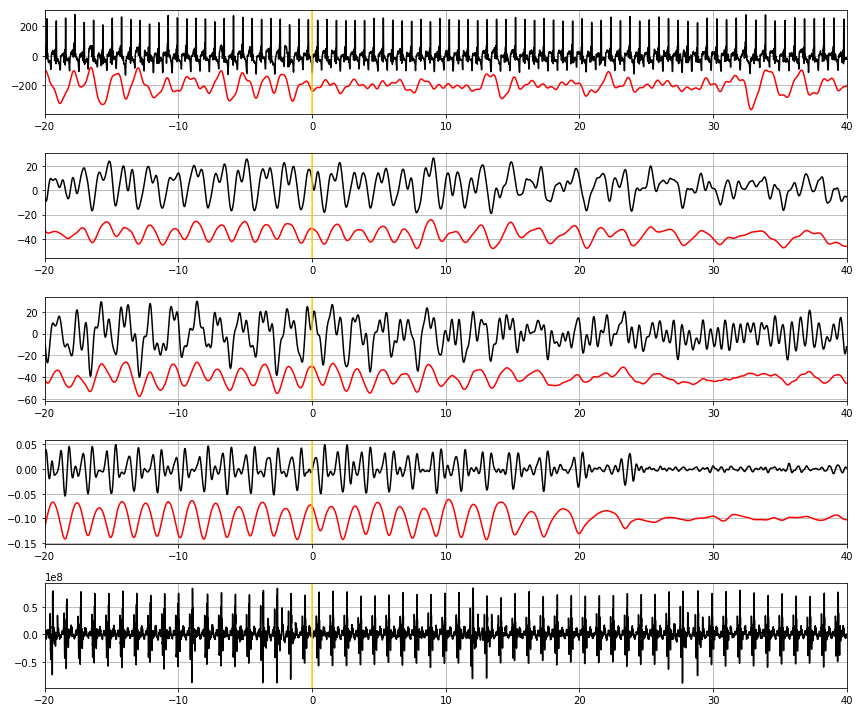

In [40]:
FONT = 10

fig = plt.figure(figsize = (12, 10))

ax = fig.add_subplot(511)
ax.plot(ECGhrX, ECGhrY, c="black", label="Raw sensor data")
ECGrrY = [i*12 - 200 for i in ECGrrY]
ax.plot(ECGrrX, ECGrrY, c="red", label="Raw sensor data")
plt.xticks(fontsize= FONT)
plt.yticks(fontsize= FONT)
plt.axvline(x = 0, c = "gold")
plt.xlim(-20, 40)
plt.grid()

ax = fig.add_subplot(512)
ax.plot(REDhrX, REDhrY, c="black", label="Raw sensor data")
REDrrY = [i - 40 for i in REDrrY]
ax.plot(REDrrX, REDrrY, c="red", label="Raw sensor data")
plt.xticks(fontsize= FONT)
plt.yticks(fontsize= FONT)
plt.axvline(x = 0, c = "gold")
plt.xlim(-20, 40)
plt.grid()

ax = fig.add_subplot(513)
ax.plot(IRhrX, IRhrY, c="black", label="Raw sensor data")
IRrrY = [i - 40 for i in IRrrY]
ax.plot(IRrrX, IRrrY, c="red", label="Raw sensor data")
plt.xticks(fontsize= FONT)
plt.yticks(fontsize= FONT)
plt.axvline(x = 0, c = "gold")
plt.xlim(-20, 40)
plt.grid()

ax = fig.add_subplot(514)
ax.plot(IMUhrX, IMUhrY, c="black", label="Raw sensor data")
IMUrrY = [i - 0.1 for i in IMUrrY]
ax.plot(IMUrrX, IMUrrY, c="red", label="Raw sensor data")
plt.xticks(fontsize= FONT)
plt.yticks(fontsize= FONT)
plt.axvline(x = 0, c = "gold")
plt.xlim(-20, 40)
plt.grid()

ax = fig.add_subplot(515)
ax.plot(MicX, MicY, c="black", label="Raw sensor data")
plt.xticks(fontsize= FONT)
plt.yticks(fontsize= FONT)
plt.axvline(x = 0, c = "gold")
plt.xlim(-20, 40)
plt.grid()

plt.tight_layout()

### -------------------------------------------------
# TERMINAL Dec 1, 2022
### -------------------------------------------------

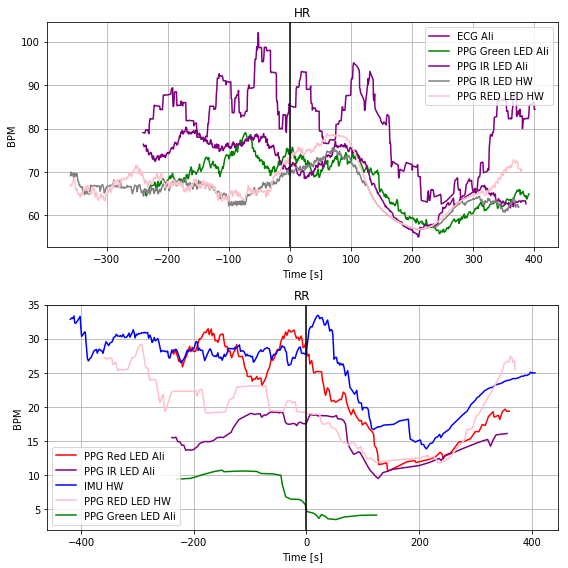

In [41]:
#HW
IR_HR_x_HW = [-419.38, -418.17, -417.46, -415.97, -415.03, -414.34, -413.68, -412.42, -411.37, -410.59, -408.8, -408.16, -407.43, -406.63, -405.89, -405.09, -404.21, -403.59, -402.99, -401.52, -400.56, -399.78, -399.2, -398.03, -397.45, -396.75, -395.97, -394.48, -393.56, -392.87, -392.2, -390.87, -389.77, -388.96, -387.38, -386.0, -385.25, -383.87, -382.90999999999997, -382.15999999999997, -381.54, -380.25, -379.07, -378.31, -376.68, -375.95, -375.27, -374.54, -373.17, -372.19, -371.45, -370.8, -369.57, -368.36, -367.58, -366.04, -365.23, -364.54, -363.82, -362.42, -361.46, -360.67, -358.88, -357.68, -356.90999999999997, -355.36, -354.53, -353.82, -353.11, -351.75, -350.72, -349.98, -348.31, -347.64, -346.9, -346.15999999999997, -344.71, -343.84000000000003, -343.09000000000003, -342.46, -341.22, -340.03, -339.27, -337.72, -336.87, -336.35, -335.5, -334.1, -333.14, -332.42, -331.81, -330.59000000000003, -329.38, -328.56, -327.05, -326.19, -325.52, -324.87, -323.51, -322.51, -321.71, -320.01, -319.32, -318.59000000000003, -317.86, -316.26, -314.86, -313.89, -312.61, -311.7, -311.01, -310.36, -309.12, -307.95, -307.18, -305.56, -304.85, -304.14, -303.4, -301.98, -301.07, -300.32, -299.68, -298.48, -297.26, -296.5, -294.90999999999997, -294.19, -293.46, -292.72, -291.31, -290.40999999999997, -289.64, -289.03999999999996, -287.86, -286.58, -285.8, -284.32, -283.49, -282.76, -282.07, -280.75, -279.71000000000004, -278.95, -277.28999999999996, -276.64, -275.9, -275.19, -273.77, -272.88, -272.07, -270.28999999999996, -269.03, -268.28999999999996, -266.75, -265.96000000000004, -265.23, -264.5, -263.19, -262.18, -261.40999999999997, -259.77, -259.04999999999995, -258.39, -257.62, -256.14, -254.82, -253.98, -252.66, -251.49, -250.65, -249.19, -248.4, -247.9, -246.96, -245.64, -244.65, -243.85, -242.22, -241.63, -240.82, -240.09, -238.66, -237.79999999999998, -237.1, -236.42, -235.22, -234.03, -233.26, -231.76, -230.93, -230.2, -229.5, -228.2, -227.16, -226.4, -224.76999999999998, -224.10999999999999, -223.34, -222.59, -221.19, -220.26999999999998, -219.53, -218.92, -217.71, -216.51999999999998, -215.74, -214.23, -213.42, -212.71, -212.01, -210.71, -209.64, -208.89, -207.31, -206.53, -205.85, -205.18, -203.88, -202.76999999999998, -202.01999999999998, -200.35, -199.76, -198.96, -198.26999999999998, -196.9, -195.92, -195.15, -193.47, -192.82999999999998, -192.07, -191.41, -190.01, -189.07, -188.28, -186.63, -186.01999999999998, -185.28, -184.51, -183.14, -182.18, -181.42, -179.71, -178.42, -177.63, -176.13, -175.32, -174.59, -173.96, -172.72, -171.51999999999998, -170.78, -169.26, -168.45, -167.73, -167.04, -165.76, -164.69, -163.92, -162.39999999999998, -161.57, -160.76, -160.29000000000002, -158.96999999999997, -157.82, -157.08999999999997, -155.45, -154.70999999999998, -154.01999999999998, -153.24, -151.92000000000002, -151.0, -150.15999999999997, -148.67000000000002, -147.88, -147.14, -146.49, -145.2, -144.09999999999997, -143.33999999999997, -141.84999999999997, -141.02999999999997, -140.29000000000002, -139.58999999999997, -138.31, -137.11, -136.49, -134.96999999999997, -134.12, -133.36, -131.58999999999997, -130.26, -128.17000000000002, -127.18, -126.48000000000002, -124.67000000000002, -123.43, -122.69, -121.29000000000002, -120.38999999999999, -119.61000000000001, -117.98000000000002, -117.30000000000001, -116.54000000000002, -115.88999999999999, -114.61000000000001, -113.54000000000002, -112.76999999999998, -111.23000000000002, -109.88999999999999, -109.05000000000001, -107.89999999999998, -106.62, -105.87, -104.50999999999999, -103.58999999999997, -102.79000000000002, -101.17000000000002, -100.46999999999997, -99.74000000000001, -99.02999999999997, -97.75, -96.70999999999998, -95.95999999999998, -94.32999999999998, -93.54000000000002, -92.84999999999997, -92.19999999999999, -90.92000000000002, -89.77999999999997, -89.00999999999999, -87.51999999999998, -86.69, -85.95999999999998, -85.33999999999997, -84.07, -82.93, -82.13, -80.59999999999997, -79.81, -79.02999999999997, -78.43, -77.23000000000002, -75.95999999999998, -75.25, -73.84999999999997, -72.89999999999998, -72.19999999999999, -70.56, -69.84999999999997, -69.13, -68.38999999999999, -67.04000000000002, -66.05000000000001, -65.30000000000001, -63.64999999999998, -62.94999999999999, -62.18000000000001, -61.5, -60.15999999999997, -59.21999999999997, -58.40999999999997, -56.80000000000001, -56.110000000000014, -55.349999999999966, -54.629999999999995, -53.31999999999999, -52.25999999999999, -51.50999999999999, -49.94999999999999, -49.19999999999999, -48.420000000000016, -47.79000000000002, -46.44999999999999, -45.370000000000005, -44.68000000000001, -42.99000000000001, -42.30000000000001, -41.52999999999997, -40.839999999999975, -39.50999999999999, -38.40999999999997, -37.81, -36.879999999999995, -36.139999999999986, -35.19999999999999, -33.98000000000002, -33.05000000000001, -32.40999999999997, -31.539999999999964, -30.789999999999964, -30.05000000000001, -29.170000000000016, -28.46999999999997, -27.730000000000018, -26.980000000000018, -25.599999999999966, -24.649999999999977, -23.870000000000005, -23.170000000000016, -22.25, -21.539999999999964, -20.20999999999998, -19.25999999999999, -18.659999999999968, -17.730000000000018, -16.920000000000016, -15.329999999999984, -14.670000000000016, -13.899999999999977, -13.170000000000016, -11.740000000000009, -10.839999999999975, -10.099999999999966, -9.370000000000005, -8.149999999999977, -7.019999999999982, -6.259999999999991, -5.579999999999984, -4.659999999999968, -3.9499999999999886, -3.159999999999968, -2.490000000000009, -1.0699999999999932, 0.8100000000000023, 1.509999999999991, 2.25, 3.680000000000007, 4.460000000000036, 5.170000000000016, 6.019999999999982, 6.769999999999982, 7.519999999999982, 8.28000000000003, 9.710000000000036, 10.590000000000032, 11.370000000000005, 12.069999999999993, 13.04000000000002, 13.670000000000016, 14.430000000000007, 15.199999999999989, 15.910000000000025, 16.75, 17.519999999999982, 18.269999999999982, 19.03000000000003, 20.460000000000036, 21.350000000000023, 22.110000000000014, 22.810000000000002, 23.819999999999993, 24.379999999999995, 25.189999999999998, 25.939999999999998, 26.69999999999999, 27.50999999999999, 28.269999999999982, 29.019999999999982, 29.78000000000003, 31.220000000000027, 32.09000000000003, 32.93000000000001, 33.59000000000003, 35.120000000000005, 35.93000000000001, 36.81999999999999, 37.49000000000001, 38.360000000000014, 38.99000000000001, 39.75999999999999, 40.55000000000001, 41.30000000000001, 42.09000000000003, 42.860000000000014, 43.620000000000005, 44.370000000000005, 45.79000000000002, 46.69, 47.47000000000003, 48.139999999999986, 49.19999999999999, 49.72000000000003, 50.54000000000002, 51.30000000000001, 52.889999999999986, 53.620000000000005, 54.379999999999995, 55.160000000000025, 55.960000000000036, 56.660000000000025, 57.47000000000003, 58.24000000000001, 59.0, 60.44, 61.31999999999999, 62.10000000000002, 62.870000000000005, 63.639999999999986, 65.21000000000004, 66.01999999999998, 66.79000000000002, 67.59000000000003, 68.40000000000003, 69.19999999999999, 70.00999999999999, 70.82999999999998, 71.57, 72.53000000000003, 73.31, 74.13999999999999, 74.99000000000001, 75.82, 76.67000000000002, 77.53000000000003, 78.40000000000003, 79.27000000000004, 80.13999999999999, 81.02000000000004, 81.90000000000003, 82.79000000000002, 83.68, 84.57999999999998, 85.49000000000001, 86.38999999999999, 87.29000000000002, 88.19999999999999, 89.12, 90.04000000000002, 90.96000000000004, 91.88999999999999, 92.82000000000005, 93.75, 94.68000000000006, 95.63, 96.57000000000005, 97.50999999999999, 98.45000000000005, 99.38999999999999, 100.34000000000003, 101.29999999999995, 102.24000000000001, 103.21000000000004, 104.16999999999996, 105.12, 106.09000000000003, 107.04999999999995, 108.00999999999999, 108.99000000000001, 109.95000000000005, 110.94000000000005, 111.90999999999997, 112.88999999999999, 113.87, 114.84000000000003, 115.82000000000005, 116.81000000000006, 117.78999999999996, 118.77999999999997, 119.76999999999998, 120.75999999999999, 121.75, 122.74000000000001, 123.73000000000002, 124.73000000000002, 125.72000000000003, 126.74000000000001, 127.75, 128.75, 129.76, 130.77999999999997, 131.80000000000007, 132.81000000000006, 133.83000000000004, 134.84000000000003, 135.86, 136.89, 137.90999999999997, 138.93000000000006, 139.96000000000004, 140.99, 142.01999999999998, 143.03999999999996, 144.08000000000004, 145.11, 146.13, 147.20000000000005, 148.26, 149.23000000000002, 150.27999999999997, 151.32000000000005, 152.35000000000002, 153.40999999999997, 154.46000000000004, 155.51, 156.55000000000007, 157.66999999999996, 158.65999999999997, 159.70000000000005, 160.73000000000002, 161.77999999999997, 162.83000000000004, 163.89, 164.97000000000003, 166.02999999999997, 167.01999999999998, 168.08000000000004, 169.15999999999997, 170.16999999999996, 171.27999999999997, 172.28999999999996, 173.35000000000002, 174.45000000000005, 175.5, 176.52999999999997, 177.61, 178.64999999999998, 179.73000000000002, 180.78999999999996, 181.86, 182.89999999999998, 184.0, 185.07000000000005, 186.11, 187.19000000000005, 188.25, 189.31000000000006, 190.39, 191.46000000000004, 192.5, 193.60000000000002, 194.64999999999998, 195.71000000000004, 196.76999999999998, 197.83000000000004, 198.89, 199.96000000000004, 201.02999999999997, 202.09000000000003, 203.14, 204.16999999999996, 205.25, 206.34000000000003, 207.28999999999996, 208.34000000000003, 209.36, 210.39, 211.39999999999998, 212.41999999999996, 213.44000000000005, 214.45000000000005, 215.48000000000002, 216.49, 217.48000000000002, 218.51, 219.57000000000005, 220.48000000000002, 221.5, 222.49, 223.49, 224.48000000000002, 225.47000000000003, 226.45000000000005, 227.94000000000005, 229.37, 230.34000000000003, 231.33000000000004, 232.24, 233.27999999999997, 234.13, 235.20000000000005, 236.14999999999998, 237.09000000000003, 238.03999999999996, 239.05000000000007, 240.09000000000003, 240.91999999999996, 241.85000000000002, 242.77999999999997, 243.73000000000002, 244.72000000000003, 245.66999999999996, 246.56000000000006, 247.47000000000003, 248.44000000000005, 249.36, 250.35000000000002, 251.19000000000005, 252.18000000000006, 253.12, 254.05000000000007, 254.89999999999998, 256.23, 256.84000000000003, 257.78, 258.71000000000004, 259.63, 260.62, 261.41999999999996, 262.44000000000005, 263.37, 264.30000000000007, 265.15999999999997, 266.33000000000004, 267.08000000000004, 268.0, 268.93000000000006, 269.76, 271.21000000000004, 272.62, 273.53999999999996, 274.44000000000005, 276.13, 277.25, 278.15, 279.07000000000005, 280.05000000000007, 280.82000000000005, 281.85, 282.77, 283.69000000000005, 284.64, 285.53999999999996, 286.46000000000004, 287.37, 288.28999999999996, 289.16999999999996, 290.20000000000005, 291.03999999999996, 291.94000000000005, 292.84000000000003, 293.65999999999997, 294.82000000000005, 295.6, 296.5, 297.4, 298.26, 299.74, 301.15, 301.98, 302.87, 304.36, 305.63, 306.55000000000007, 307.4, 308.37, 308.91999999999996, 310.15999999999997, 311.06000000000006, 311.93000000000006, 312.90999999999997, 313.49, 314.68000000000006]
IR_HR_y_HW = [69.12130174946424, 69.97572005842801, 69.26118896945515, 69.44755537912845, 69.70942117290913, 68.7495115173473, 68.41281118064695, 69.19956066304863, 69.72337018685813, 69.04205150553946, 69.62166044408694, 69.2656477858591, 68.29220323087324, 67.79220323087324, 67.72902316769319, 67.00321671608027, 67.08536348497404, 66.84002045907673, 66.53016130414714, 66.59618771471136, 66.5112362584007, 66.59439634156078, 65.24399369857089, 66.00939744904927, 65.56205355342952, 65.46938946076543, 64.75851412920044, 65.33245534651125, 65.6281075204243, 65.79373899040358, 64.97043614976806, 65.07658387201485, 65.5646221495268, 64.85733421643242, 65.5096052514287, 66.9477323417297, 66.75949704761204, 66.74707468736361, 66.74707468736361, 66.81374135403027, 66.84547059781664, 66.89884459705415, 66.87363098170185, 66.75809824742713, 66.8166039151637, 66.56811713593464, 66.59445602970112, 66.79677425941661, 66.80321479183395, 66.77872499591558, 66.65710337429397, 65.5168318810813, 66.28035255976636, 66.93245263901461, 67.03782671699143, 67.00860593777065, 66.38426731343203, 65.88225028071128, 65.1530836140446, 65.61462207558307, 66.10375251036568, 66.43091901474737, 66.72826988877873, 66.75391091441976, 66.75391091441975, 66.72045810677339, 66.96481581931369, 66.9648158193137, 66.89629659586491, 66.85901407722365, 67.01264685221564, 66.99102523059402, 68.14746235634252, 67.35641758022311, 66.71840251597855, 66.67572826277798, 66.6028590370135, 66.89021535885259, 66.93405097529094, 66.65091069215066, 66.53423258645402, 66.85916255844282, 66.83865674846332, 68.06446320007622, 67.66964764673625, 66.29945533904394, 66.42615217162313, 66.37982012529108, 66.5756032578212, 66.5527722075929, 66.32468952762139, 66.25017387933525, 66.41228449599133, 66.52781723026602, 66.45600680977613, 66.90681181872067, 66.7373886642229, 66.58137566313947, 66.5440931444982, 66.69240775123978, 66.67388923272125, 66.64216418315087, 65.85541470074922, 65.83320070593248, 64.96858586871491, 65.73757321048706, 66.52426596978256, 66.93098818415905, 66.9095187185102, 66.77895621171007, 66.59826733536902, 65.48382080628834, 66.18274553747115, 66.97528633001194, 66.97528633001193, 67.04535640008199, 66.26430646410249, 66.0027370476035, 65.2902063350728, 65.4707769381786, 65.5806670480687, 64.80258485628788, 64.44657219806004, 65.84657219806004, 66.13956138536383, 65.46970492603369, 65.92710915702283, 65.76044249035617, 64.85280319293622, 65.26507987639935, 65.89549752809359, 66.20599981119861, 65.48671909191789, 64.8820679291272, 65.57940449087054, 66.40661037322347, 65.86814883476194, 66.06574138529567, 66.17839981120709, 65.33456419476873, 65.04121689251626, 65.7759615998637, 66.33640116030327, 65.68053071495913, 66.11148530254023, 65.84427882480742, 64.95885352220422, 65.08689449531562, 65.80026563122196, 66.05195102448039, 65.42761240014175, 66.05780292285793, 66.72704359209861, 67.07263508523107, 67.28514984320037, 66.77456586277276, 66.66919178479594, 65.82005815511256, 66.38550910224289, 66.88753113543213, 67.04337529127629, 67.23474489728004, 66.68957355771617, 66.47139173953435, 65.67244385197888, 66.40009457962961, 67.25570955289164, 67.61818290043962, 67.63216891442563, 67.68760896986569, 67.85903754129426, 67.75568260732656, 68.27059357063916, 67.37059357063917, 67.83312826074092, 67.79994976040913, 67.81231834420629, 67.87075990264785, 67.84884929791515, 67.68995099283042, 67.78741687976999, 67.96176308151345, 67.97974509949546, 67.86099200696702, 67.66569363445346, 66.62826047937325, 67.59547359412734, 68.20869185440442, 68.20869185440442, 68.28460426316354, 68.08882113063342, 68.02393288261612, 67.01140155429532, 67.01855718935792, 67.38369837728392, 66.60475100886288, 67.35003617132594, 67.17568996958249, 67.52201031590285, 66.88975225138671, 67.03260939424385, 67.34988318977852, 66.51773525236742, 66.0320036190948, 66.7069347485714, 67.43766182200947, 66.83670028354791, 67.16349362389576, 67.24045370085584, 66.33978653999593, 66.07128395824034, 66.6296885166449, 68.06138467890379, 67.3704755879947, 67.65446017797821, 67.75983425595501, 66.72683569067524, 66.55741253617747, 67.37346604788316, 67.83084650526362, 67.13993741435452, 67.72572236618997, 67.12039548967667, 66.42576461719345, 66.20562152418297, 66.95133073704548, 67.57299478728096, 66.94478578697894, 67.32140916360231, 67.02535653202337, 66.2517782911191, 65.89701110708361, 66.66148987156238, 67.09917984116726, 66.5176924993951, 66.79041977212236, 66.758690528336, 65.92654259092491, 65.7798657383657, 66.48290069802763, 65.91086679972254, 65.23417507039925, 65.10658336386017, 65.38847201784183, 65.5837703903554, 65.44675381576978, 64.93301426977217, 64.91080027495543, 63.86318122733638, 64.22877262518583, 64.76723416364739, 63.88180886104416, 64.85704105918657, 64.95450694612614, 65.13399412561331, 64.33236369083072, 64.51635901793352, 64.95330524927228, 64.1740844700515, 64.28013317390068, 64.26292146994199, 63.824918249330075, 62.20922675996838, 62.90013585087745, 62.739010531184356, 62.399522740832964, 63.16781542375979, 62.28693454287891, 62.262089822382, 62.36746390035883, 63.148513836338346, 62.781666010251385, 62.506940735526115, 63.30157160800933, 62.5187805852556, 62.416146305406116, 62.30912289403488, 63.225044182049196, 63.07163509114011, 62.54531930166641, 63.29839173259119, 62.64034622596163, 62.46450773687014, 62.394057639022776, 63.39204150999052, 63.336923399754305, 62.454071107733924, 63.16459742352339, 62.53714644313122, 62.477186416482326, 63.33768185324896, 64.4354262141512, 64.86126353472538, 64.59402421236796, 64.56987934315265, 64.76403877488114, 65.05945473413412, 65.15211882679822, 65.02668328672853, 65.3834907984656, 65.51169592667074, 66.39712122927396, 65.52130423580991, 65.15447807951006, 64.90832423335623, 64.69809696062894, 65.29088734781186, 65.29088734781185, 66.27637245094402, 66.27637245094401, 66.12439676705343, 66.56239998766536, 66.3702416025722, 66.5093720373548, 67.20596646459938, 67.56828530517909, 66.98431583953024, 67.37565057048761, 67.2613648562019, 66.3867600089943, 66.29661916392389, 66.89758070238543, 67.64849645330118, 66.94401884136087, 67.31893363345358, 67.53907672646403, 66.51000546327906, 66.40298205190783, 67.02392361034939, 67.71042246618462, 67.05423654684081, 67.33977651023312, 67.893993377703, 67.54048034190981, 67.2266180925637, 67.55833194748075, 67.48930692591044, 67.27962950655561, 68.3703157810654, 68.23063878412084, 68.29217724565929, 67.91379886728092, 68.27743523091728, 69.04683905543921, 68.97831983199042, 69.72117697484755, 69.32758429750201, 68.87645647795314, 69.68321069934152, 69.70735556855682, 69.3450367279771, 69.41355595142589, 69.42692270163475, 69.47795938425038, 69.87795938425037, 70.44100923762281, 70.20820500481858, 69.4044804275091, 69.45795636333798, 70.12087553371984, 70.48811540547734, 69.8457947631567, 70.43378648158321, 70.31627766842223, 70.38116591643953, 69.6981058071499, 69.84402217545363, 70.29089407217656, 70.4555999545295, 70.9907170113857, 71.08085785645612, 71.06138365976672, 70.94766653112423, 70.89721456559974, 70.42440132682904, 70.39955660633217, 71.31111905635615, 70.41114946073438, 70.39116944075437, 70.34217985104218, 70.85168891782678, 71.36077982691769, 70.9607798269177, 71.24940461469357, 70.4669438322328, 70.55398445118831, 71.1088394322728, 71.53280256591336, 70.89491596797521, 71.42036752790953, 71.39931489633058, 71.33613483315051, 71.66263931458457, 71.37692502887029, 71.31374496569022, 71.31374496569022, 72.02312711671998, 71.59913006114397, 71.408983129424, 71.27364478355933, 71.6835826717581, 71.18156063856887, 72.42216214232828, 72.6404857290729, 72.2404857290729, 72.52911051684879, 72.52911051684879, 73.35334090413777, 73.13515908595595, 73.15566489593544, 72.34516261283042, 72.88531211849718, 72.98055021373528, 73.17711041029547, 72.3175885193473, 72.81546344345173, 73.10183114753843, 73.31392855523679, 72.92853301771144, 73.52894709638639, 73.39724780975752, 73.39724780975752, 73.20620303363812, 73.88011995287506, 74.80026363897619, 74.66492529311152, 74.6433036714899, 74.64921325486428, 74.44408504973607, 74.29240574312719, 74.67168581336425, 74.20376128506237, 74.91145359275467, 74.79592085847995, 75.53570738774016, 74.92678800523588, 75.0321620832127, 74.89682373734803, 75.19817187374773, 74.79340996898581, 74.92874831485048, 74.85178823789039, 74.72008895126152, 74.87046489111115, 74.14535666600293, 73.90899302963929, 73.86850719967978, 74.58778791896049, 74.79791487066048, 73.98329871243051, 73.75049447962628, 74.12081722618665, 73.4779600833295, 73.4779600833295, 73.37796008332951, 73.28049419638994, 73.2624273490548, 73.30510160225538, 72.95510160225537, 72.91461577229586, 73.52706557149264, 73.5595199325474, 73.5767316365061, 73.17031452420663, 73.78134963592575, 73.67917849927184, 73.71017423735786, 73.29843980606604, 73.28276582487483, 72.74164028374928, 72.53151333204929, 72.36084059701871, 72.09417393035204, 71.89386790726121, 71.66875968215298, 71.42314564706527, 71.14182696574657, 71.60110436929834, 71.57211886205195, 71.33800514967739, 70.83728295420313, 70.99553006315018, 69.97816033610303, 69.80506828260185, 69.48927880891765, 70.01115757246643, 69.64391770070893, 69.34156607696872, 69.07970028318803, 68.84285817792487, 68.37857246363916, 68.17368672683853, 67.85235857045882, 67.52341120203776, 67.95323576344128, 67.82671280186678, 67.53825126340524, 67.22980970496367, 66.89585794244049, 67.3815267322494, 67.11216646288912, 66.79083830650943, 66.5153281024278, 66.2583364168647, 65.99544981892655, 65.73845813336342, 65.4871647113383, 65.09003288563504, 65.05215409775624, 64.72581377141593, 64.49215185100701, 64.29250835724586, 64.05884643683696, 63.859202943075815, 63.66385410586652, 63.49666497316015, 63.29382521656785, 63.10263368362146, 62.9389973199851, 62.76347976822993, 62.59163574972364, 62.41979173121737, 62.27457720976522, 62.132366479319195, 61.987151957867056, 61.83028921276901, 61.676656437777, 61.54877919992534, 61.42090196207369, 61.281602679676055, 61.1563286427202, 61.03105460576437, 60.917202613354505, 60.78072618655549, 60.68261683550797, 60.58249167906242, 60.427391261484374, 60.28287098850163, 60.24338864588264, 60.123087894002936, 60.02693404784909, 59.915386846857544, 59.810348916493815, 59.70320605935097, 59.582905307471265, 59.499638059255545, 59.32106663068413, 59.28318784280534, 59.21254420073313, 59.12759274442244, 59.05832867515837, 58.964072415953666, 58.871658091733416, 58.75827940692616, 58.653241476562414, 58.64087289276526, 58.56082715234216, 58.447448467534905, 58.42344606729487, 58.292405936254745, 58.26840353601472, 58.18835779559163, 58.06714567437951, 57.99788160511544, 57.96293014880475, 57.86192004779465, 57.83929561340551, 57.762287912635436, 57.694363384333556, 57.627739899555166, 57.605115465166016, 57.51955396783981, 57.45293048306144, 57.43030604867229, 57.35329834790222, 57.308903231365036, 57.275930159373836, 57.21057068224965, 57.15559542111716, 57.14439303127399, 57.07025357849377, 57.048062177661585, 57.0036670611244, 56.98189637897636, 56.948923306985165, 56.90452819044797, 56.90452819044797, 56.89394804585266, 56.78891011548892, 56.788910115488925, 56.80011250533209, 56.74617507275388, 56.715017032248426, 56.83531778412812, 56.83531778412813, 56.857942218517266, 56.95156219077801, 56.92755979053799, 56.950184224927135, 56.961606269473116, 57.00686793849715, 57.029059339329315, 57.085102679512396, 57.18611278052251, 57.21908585251371, 57.139040112090605, 57.32564595907382, 57.391005436198, 57.41500783643803, 57.533926755356944, 57.557929155596966, 57.63797489602006, 57.77155560102934, 57.43406758568898, 57.1081798811605, 57.23418217211124, 57.2924572303863, 57.500027437956504, 57.52179812010455, 57.8120674988841, 57.77971667214074, 57.95196547596849, 58.10706589354655, 58.21637763443724, 58.29338533520731, 58.31515601735534, 58.62886367818735, 58.80807514772141, 58.97690240126376, 59.08621414215446, 59.20742626336658, 59.327727015246275, 59.543966150289734, 59.73057199727294, 59.83560992763669, 60.00788228202553, 60.09850816704394, 60.405584268512555, 60.48563000893565, 60.619368610759366, 60.74464264771521, 61.04529624248646, 60.84663445039154, 61.550689670408794, 61.6844282722325, 61.79828026464237, 61.93757954704, 61.96158194728002, 62.28511135904472, 62.285111359044734, 62.387315127808705, 62.51258916476454, 62.71981919009266, 62.533339003612475, 62.96829045992315, 63.140562814312, 63.11220407627584, 63.381516620570665, 62.996981615346, 62.64804544513324, 62.74027205909899, 62.8614841803111, 62.34705355599036, 62.61311299990216, 63.10728549407465, 63.17451991809976, 63.18688850189692, 63.426648741657154, 63.43785113150032, 63.33043425170492, 63.513286750689076, 63.51328675068907, 63.57002433934154, 63.61121427069166, 63.74177677749179, 63.8922784497326, 63.81013168083884, 63.684857643883, 63.82310649180927, 63.89328193040576, 64.01449405161787, 64.21475079102738, 63.9009189429065, 64.12069916268672, 64.2169190939582, 64.24590460120457, 64.42913222629267, 63.81137160853204, 63.45031422619807, 63.61950161404735, 63.67749364014375, 63.07109806177817, 63.11372431244422, 62.450859023777085, 62.586027984978585, 62.53281880639527, 63.4102891621265, 63.16590988548916, 62.999243218822485, 63.20208297541479, 63.136250190687996, 63.9148931272842, 63.52794765141944, 63.83563995911174, 63.64740466499409, 63.13253052311766, 62.8022079424725, 62.72006117357874, 63.304239672564535, 63.28650917611064, 62.88441698912143, 62.88441698912143, 63.62014095005393, 63.39378280116056, 62.9428024090037, 62.98676918965832, 63.208062526270076, 62.4715387760477, 62.2295671554353, 62.258552662681666, 62.43568631807619, 62.0116892625002, 61.573878317226566, 61.602863824472934, 61.74759713993796, 61.325602255027476, 60.81910874853397, 61.017696568481014, 61.10811248168174, 60.74252108383228, 61.2553415966528, 61.17123730733404, 61.45543586739466, 61.53859595055474, 61.0941515061103, 61.8660813306717, 61.85004283828998, 62.3725653608125, 62.9500729595967, 62.504289827066586, 62.920681102677946, 63.5438834037326, 64.01076621985118, 64.02509971244554, 63.7783835502525, 63.13828507356377, 61.90884784412655, 62.00305281129755, 62.38400519224993, 62.338028180755686, 62.47717474847367, 61.87162386537863, 61.95412959494319]

RR_HR_x_HW = [-419.49, -418.6, -417.39, -415.96, -414.99, -413.67, -412.42, -411.89, -411.36, -410.64, -408.78, -408.14, -407.39, -406.61, -405.88, -405.08, -404.22, -403.42, -401.53, -400.53, -399.76, -398.01, -396.91, -395.93, -394.45, -393.53, -392.76, -392.12, -390.88, -390.36, -389.64, -388.88, -387.37, -385.95, -385.21, -383.87, -382.88, -382.12, -380.25, -379.73, -379.03, -378.25, -376.65999999999997, -375.92, -375.23, -374.48, -373.18, -372.17, -371.40999999999997, -369.55, -368.28, -367.54, -366.02, -365.21, -364.47, -363.76, -362.43, -361.40999999999997, -360.63, -358.88, -357.64, -356.84, -355.34000000000003, -354.51, -353.78999999999996, -353.06, -351.76, -350.69, -349.94, -348.28999999999996, -347.61, -346.87, -346.11, -344.69, -343.81, -343.03999999999996, -341.21, -340.65, -339.99, -339.21, -337.69, -336.83, -335.46, -334.09000000000003, -333.11, -332.38, -331.81, -330.57, -329.34000000000003, -328.5, -327.03, -326.15, -325.5, -323.51, -322.47, -321.69, -319.99, -319.3, -318.53999999999996, -317.8, -316.23, -314.85, -313.87, -312.61, -311.68, -310.95, -309.12, -308.62, -307.87, -307.12, -305.53999999999996, -304.8, -304.09000000000003, -303.34000000000003, -301.99, -301.03999999999996, -300.28, -299.69, -298.47, -297.96, -297.19, -296.46, -294.9, -294.11, -293.43, -292.68, -291.32, -290.38, -289.59000000000003, -287.84000000000003, -287.3, -286.53, -285.74, -284.3, -283.45, -282.7, -282.02, -280.75, -279.64, -278.9, -277.27, -276.59000000000003, -275.83, -275.15, -273.78, -272.84000000000003, -272.01, -270.27, -269.75, -268.98, -268.23, -266.73, -265.93, -265.16999999999996, -264.44, -263.19, -262.12, -261.35, -259.74, -258.97, -258.33, -257.56, -256.12, -254.93, -254.2, -252.65, -251.51, -250.62, -249.17, -248.4, -247.9, -246.91, -245.64, -244.57, -243.79, -242.22, -241.63, -240.81, -240.04999999999998, -238.65, -237.76, -237.04999999999998, -236.35999999999999, -235.2, -234.71, -233.97, -233.19, -231.75, -230.88, -230.14, -229.44, -228.2, -227.13, -226.35999999999999, -224.75, -224.16, -223.28, -222.53, -221.18, -220.24, -219.48, -217.71, -216.48, -215.68, -214.22, -213.37, -212.68, -212.0, -210.72, -209.57999999999998, -208.82, -207.29, -206.49, -205.79, -203.89, -202.7, -201.96, -200.32999999999998, -199.75, -198.92, -198.2, -196.91, -195.9, -195.09, -193.45, -192.82, -192.04, -191.35, -190.0, -189.03, -188.23, -186.60999999999999, -185.99, -185.23, -184.46, -183.13, -182.15, -181.38, -179.7, -179.14, -178.35999999999999, -177.59, -176.12, -175.26999999999998, -174.54, -172.72, -172.23, -171.44, -170.73, -169.25, -168.41, -167.65, -166.98, -165.76999999999998, -164.64, -163.88, -162.38, -161.51999999999998, -160.33999999999997, -158.96999999999997, -157.75, -157.04000000000002, -155.43, -154.64, -153.99, -153.19, -151.92000000000002, -151.01, -150.11, -148.64999999999998, -147.85000000000002, -147.08999999999997, -146.45999999999998, -145.20999999999998, -144.04000000000002, -143.29000000000002, -141.83999999999997, -141.0, -140.24, -139.55, -138.31, -137.11, -136.44, -134.95999999999998, -134.09999999999997, -133.32, -131.58999999999997, -130.21999999999997, -128.14, -127.17000000000002, -126.40999999999997, -124.65999999999997, -124.12, -123.33999999999997, -122.63, -121.27999999999997, -120.33999999999997, -119.57999999999998, -117.94, -117.31, -116.45999999999998, -115.81, -114.61000000000001, -113.46999999999997, -112.69, -111.20999999999998, -110.33999999999997, -107.88, -107.32999999999998, -106.52999999999997, -105.83999999999997, -104.5, -103.57999999999998, -102.74000000000001, -101.13999999999999, -100.45999999999998, -99.69999999999999, -98.98000000000002, -97.75, -96.59999999999997, -95.94999999999999, -94.32, -93.49000000000001, -92.81, -90.93, -89.73000000000002, -88.94, -87.5, -86.64999999999998, -85.89999999999998, -84.07, -82.84999999999997, -82.06, -80.57999999999998, -79.76999999999998, -79.00999999999999, -78.39999999999998, -77.21999999999997, -76.70999999999998, -75.19, -73.83999999999997, -72.86000000000001, -72.14999999999998, -70.52999999999997, -69.81, -69.08999999999997, -68.32999999999998, -67.04000000000002, -65.96999999999997, -65.23000000000002, -63.620000000000005, -62.920000000000016, -62.129999999999995, -61.44999999999999, -60.14999999999998, -59.26999999999998, -58.339999999999975, -56.77999999999997, -56.05000000000001, -55.26999999999998, -54.579999999999984, -53.31999999999999, -52.18000000000001, -51.46999999999997, -49.920000000000016, -49.18000000000001, -48.349999999999966, -46.45999999999998, -45.94999999999999, -45.01999999999998, -42.95999999999998, -42.31999999999999, -41.5, -40.75, -39.51999999999998, -39.02999999999997, -38.349999999999966, -37.69999999999999, -36.93000000000001, -36.139999999999986, -35.23000000000002, -34.379999999999995, -33.06999999999999, -32.379999999999995, -31.529999999999973, -30.75999999999999, -30.0, -29.129999999999995, -28.44999999999999, -27.70999999999998, -26.939999999999998, -26.170000000000016, -25.589999999999975, -24.610000000000014, -23.839999999999975, -23.120000000000005, -22.19999999999999, -21.50999999999999, -20.230000000000018, -19.25999999999999, -18.639999999999986, -17.71999999999997, -16.920000000000016, -15.310000000000002, -14.639999999999986, -13.879999999999995, -13.129999999999995, -12.310000000000002, -11.71999999999997, -10.810000000000002, -10.069999999999993, -9.319999999999993, -8.139999999999986, -6.990000000000009, -6.240000000000009, -5.509999999999991, -4.6299999999999955, -3.9399999999999977, -3.1299999999999955, -2.430000000000007, -1.0500000000000114, 0.7900000000000205, 1.4800000000000182, 2.259999999999991, 2.9499999999999886, 3.7100000000000364, 4.470000000000027, 5.220000000000027, 6.019999999999982, 6.7900000000000205, 7.5400000000000205, 8.319999999999993, 9.100000000000023, 9.889999999999986, 10.590000000000032, 11.370000000000005, 12.129999999999995, 12.900000000000034, 13.639999999999986, 14.449999999999989, 15.210000000000036, 15.930000000000007, 16.810000000000002, 17.519999999999982, 18.269999999999982, 19.05000000000001, 19.829999999999984, 20.629999999999995, 21.340000000000032, 22.110000000000014, 22.870000000000005, 23.650000000000034, 24.379999999999995, 25.189999999999998, 25.94999999999999, 26.689999999999998, 27.54000000000002, 28.269999999999982, 29.04000000000002, 29.810000000000002, 30.590000000000032, 31.379999999999995, 32.079999999999984, 32.94, 33.650000000000034, 34.410000000000025, 35.160000000000025, 35.94999999999999, 36.860000000000014, 37.54000000000002, 38.26999999999998, 38.98000000000002, 39.76999999999998, 40.56, 41.30000000000001, 42.160000000000025, 42.860000000000014, 43.629999999999995, 44.400000000000034, 45.18000000000001, 45.97000000000003, 46.69, 47.47000000000003, 48.22000000000003, 49.03000000000003, 49.74000000000001, 50.55000000000001, 51.30000000000001, 52.03000000000003, 52.93000000000001, 53.629999999999995, 54.400000000000034, 55.170000000000016, 55.94, 56.75, 57.47000000000003, 58.25, 59.03000000000003, 59.81, 60.610000000000014, 61.31999999999999, 62.110000000000014, 62.879999999999995, 63.69, 64.47000000000003, 65.28000000000003, 66.03000000000003, 66.80000000000001, 67.61000000000001, 68.42000000000002, 69.21000000000004, 70.01999999999998, 70.85000000000002, 71.63999999999999, 72.49000000000001, 73.32, 74.15000000000003, 74.99000000000001, 75.84000000000003, 76.68, 77.55000000000001, 78.41000000000003, 79.28000000000003, 80.16000000000003, 81.04000000000002, 81.92000000000002, 82.81, 83.69999999999999, 84.60000000000002, 85.5, 86.41000000000003, 87.32, 88.24000000000001, 89.15000000000003, 90.07, 91.0, 91.93, 92.86000000000001, 93.81000000000006, 94.73000000000002, 95.68000000000006, 96.61000000000001, 97.54999999999995, 98.49000000000001, 99.43000000000006, 100.38999999999999, 101.34000000000003, 102.29999999999995, 103.25999999999999, 104.21000000000004, 105.15999999999997, 106.12, 107.07000000000005, 108.04999999999995, 109.02999999999997, 109.99000000000001, 110.97000000000003, 111.94000000000005, 112.91999999999996, 113.89999999999998, 114.88, 115.86000000000001, 116.84000000000003, 117.82000000000005, 118.81000000000006, 119.79999999999995, 120.78999999999996, 121.78999999999996, 122.77999999999997, 123.77999999999997, 124.76999999999998, 125.76999999999998, 126.78999999999996, 127.77999999999997, 128.80000000000007, 129.80000000000007, 130.80000000000007, 131.81000000000006, 132.83000000000004, 133.86, 134.86, 135.89, 136.89999999999998, 137.94000000000005, 138.96000000000004, 139.97000000000003, 141.01999999999998, 142.03999999999996, 143.07000000000005, 144.09000000000003, 145.13, 146.14, 147.22000000000003, 148.27999999999997, 149.25, 150.28999999999996, 151.34000000000003, 152.37, 153.41999999999996, 154.46000000000004, 155.52999999999997, 156.57000000000005, 157.76999999999998, 158.66999999999996, 159.73000000000002, 160.75, 161.81000000000006, 162.86, 163.89999999999998, 165.0, 166.06000000000006, 167.05000000000007, 168.11, 169.18000000000006, 170.20000000000005, 171.36, 172.30000000000007, 173.37, 174.48000000000002, 175.52999999999997, 176.56000000000006, 177.63, 178.69000000000005, 179.75, 180.84000000000003, 181.89, 182.94000000000005, 184.03999999999996, 185.10000000000002, 186.15999999999997, 187.21000000000004, 188.28999999999996, 189.33000000000004, 190.41999999999996, 191.48000000000002, 192.51999999999998, 193.64, 194.68000000000006, 195.74, 196.81000000000006, 197.87, 198.93000000000006, 200.0, 201.07000000000005, 202.12, 203.18000000000006, 204.19000000000005, 205.28999999999996, 206.40999999999997, 207.33000000000004, 208.36, 209.38, 210.41999999999996, 211.44000000000005, 212.46000000000004, 213.49, 214.49, 215.51999999999998, 216.51999999999998, 217.51999999999998, 218.55000000000007, 219.63, 220.51999999999998, 221.53999999999996, 222.51999999999998, 223.52999999999997, 224.52999999999997, 225.51, 226.47000000000003, 227.45000000000005, 228.39999999999998, 229.40999999999997, 230.39, 231.37, 232.28999999999996, 233.32000000000005, 234.19000000000005, 235.24, 236.16999999999996, 237.12, 238.12, 239.07000000000005, 240.11, 240.95000000000005, 241.89, 242.81000000000006, 243.78999999999996, 244.73000000000002, 245.70000000000005, 246.58000000000004, 247.51, 248.5, 249.44000000000005, 250.37, 251.25, 252.21000000000004, 253.16999999999996, 254.10000000000002, 254.94000000000005, 256.0, 256.86, 257.82000000000005, 258.73, 259.71000000000004, 260.63, 261.5, 262.48, 263.40999999999997, 264.33000000000004, 265.21000000000004, 266.27, 267.12, 268.03999999999996, 268.97, 269.84000000000003, 270.82000000000005, 271.70000000000005, 272.66999999999996, 273.58000000000004, 274.53, 275.44000000000005, 276.38, 277.28, 278.20000000000005, 279.15, 280.06000000000006, 280.93000000000006, 281.9, 282.81000000000006, 283.74, 284.65999999999997, 285.58000000000004, 286.49, 287.41999999999996, 288.32000000000005, 289.21000000000004, 290.22, 291.07000000000005, 291.98, 292.89, 293.71000000000004, 294.78999999999996, 295.64, 296.53999999999996, 297.45000000000005, 298.34000000000003, 299.28, 299.99, 301.14, 302.01, 302.90999999999997, 304.36, 305.66999999999996, 306.6, 307.45000000000005, 308.38, 308.91999999999996, 310.19000000000005, 311.1, 311.98, 312.91999999999996, 313.48, 314.73, 315.62, 316.48, 317.41999999999996, 317.95000000000005, 319.24, 320.13]
RR_HR_y_HW = [66.788106080545, 67.06141309542505, 66.85915124244549, 67.50147188476613, 67.8859801043259, 68.6670300403054, 68.60928567940316, 67.52160532424223, 66.79591591930753, 65.81496353835516, 66.13754418351644, 65.76254418351645, 64.96254418351644, 64.86986577758503, 64.89269682781334, 65.03653244425169, 64.56426053011931, 64.1857558572221, 65.15083522230148, 64.67810794957421, 64.8843722734856, 65.82027960939293, 66.30831788690489, 65.92889851352173, 66.48172406634728, 66.73581779870189, 65.83311394517835, 66.10097108803551, 66.95141097073346, 66.18218020150269, 65.30498721904655, 65.1213886878348, 65.20259910983894, 65.23344109606286, 64.83630927035962, 65.58462249873827, 66.47776444451179, 65.86655901157461, 66.20045753772565, 65.32133665860476, 64.4233774749313, 64.24855230010611, 65.3399891651279, 64.32138261888316, 63.73609833794671, 63.67455987640824, 63.45736530627251, 64.00837692917392, 64.0083769291739, 64.98483726047294, 64.80428658090027, 64.05223017666994, 64.48724628837778, 63.95814575927725, 63.6268467183008, 63.58054148966873, 63.33402355548901, 64.55755296725371, 64.61909142879217, 65.5333771430779, 65.3251288784801, 65.44675050010173, 66.33689134517215, 66.49110821264202, 65.71333043486425, 65.33265271316273, 65.98852315850687, 66.9009261364888, 66.28453269386586, 67.91020114306372, 67.70393681915232, 67.72615081396906, 66.91643421477879, 67.59035113401572, 67.9914206527323, 68.03297909429074, 68.25959433054918, 67.39333293237289, 67.09413845596322, 66.24139120321597, 67.67413974122766, 67.83723246245992, 68.48030739547295, 68.43772832004716, 68.62500323001113, 68.58116761357279, 68.24061033803099, 68.2177502923109, 68.32322161729442, 68.51627181034462, 68.43614159875078, 68.83721111746735, 68.57000463973455, 69.7316954467106, 69.45376170162359, 69.1918959078429, 69.93179668743186, 68.88232142506303, 69.61106636433428, 69.54788630115421, 70.38355509096313, 70.31398987357183, 70.58950007765347, 71.21606649369356, 71.56957952948676, 70.8857439130484, 71.35150153523317, 70.50994309367472, 69.65528470858155, 69.61372626702311, 70.72923259613704, 70.66605253295698, 69.80924502121988, 69.21764838256443, 69.97259511011389, 69.48363076376415, 68.95731497429045, 68.27173127594729, 68.11571092546679, 67.32121130743776, 68.1627697489962, 67.73105534467905, 67.90670646521207, 67.50921445054273, 67.28297010665133, 66.44730131684241, 67.59884668075068, 67.78566557021617, 67.84562559686506, 68.01705416829364, 67.143146552813, 67.27484583944185, 67.49498893245232, 67.69613835773968, 68.73335324369405, 68.75497486531567, 68.52873052142428, 68.41718196499383, 68.71541122874034, 68.71541122874035, 69.69350062400764, 68.89653667713857, 68.43908463582032, 68.23282031190894, 68.10224951805665, 68.85955207846055, 68.77740530956679, 69.687750137153, 68.26894671834958, 67.98710090458887, 67.96604827300993, 67.84401437470484, 67.31962413080241, 67.24067676238136, 66.41875895416217, 66.87052366004451, 67.48815876772433, 67.6944230916357, 67.88658147672886, 67.38077149723468, 67.08471886565572, 66.31059103270437, 66.97725769937104, 67.68314005231223, 66.67088338324228, 66.90509319619973, 67.47408323887399, 66.86196495115082, 68.10334426149564, 67.9906858355842, 67.25735250225087, 66.97546384826919, 67.21870077038659, 67.57868692476526, 66.7719327033769, 67.91236339794773, 67.41692663132453, 67.6926424319608, 67.00258395242864, 67.38255449734763, 67.53423989060606, 66.58483978627636, 66.78119322246151, 67.32565783226185, 66.43511979886668, 65.71575381634281, 65.40178207379965, 66.12689029890787, 65.46186566836599, 65.98310118960153, 65.80727701377735, 66.39797663673502, 66.09280784024446, 65.94613098768525, 66.84462498921678, 65.47006734347269, 66.55541057167306, 66.47439791344522, 67.27564986962675, 66.8098649357567, 66.6594889959071, 67.56047026263323, 68.37590528265507, 67.86764081984515, 68.10766991428083, 68.27485257681953, 67.33572214203693, 66.9663650968933, 67.04581424943567, 66.86909507924743, 66.27375426820342, 67.17958138778364, 66.42492300269048, 66.22962463017691, 67.44419952896234, 67.93579616761781, 67.25905643575997, 67.84154143542288, 67.10590925151483, 66.48204392720389, 66.31537726053722, 66.96409207081874, 67.68073516369945, 67.15925368221798, 67.45318739078583, 67.14842548602392, 66.43755015445895, 66.12699114824775, 66.81704962777992, 67.31906666050068, 66.78680859598455, 67.0460678552438, 66.90162876039545, 66.13349220278522, 65.97039948155296, 66.60660538091676, 66.0757572034955, 65.39322805381308, 65.25586541645042, 64.35012167565515, 64.39060750561465, 63.51788023288737, 64.92377592449736, 65.05047275707655, 65.09677798570861, 65.32632621525683, 64.15394236810096, 64.21390239474985, 63.25546886675261, 64.34941996070371, 64.33261323801463, 64.59981971574742, 63.80877493962802, 63.869670981385305, 64.34618561719199, 63.578049059581744, 64.15735940440932, 63.24981544524881, 64.4146844745246, 65.03877206576549, 65.79429594317105, 64.99967748616032, 65.55868369734044, 65.46826778413974, 64.37211393798587, 64.63681982033881, 65.27088529899609, 65.61887064698143, 65.26114706974568, 65.48270752239605, 65.82886136854991, 64.98611031914726, 64.52713154691547, 65.3318374292684, 64.94449427596781, 64.3444942759678, 65.03589541084341, 64.44065731560532, 64.2734746530666, 64.134344218284, 63.822339987718166, 63.805946545095225, 63.53388911074797, 63.53388911074796, 63.62002175502014, 63.66050758497966, 64.93407908123665, 65.07511582501989, 66.8511339245674, 66.40349420671608, 65.7134357271839, 66.252211237388, 65.7201298602362, 64.92240906251538, 64.89893488411164, 65.67671266188943, 65.97906428562962, 65.3303494753481, 65.72013748537773, 65.43699720223745, 64.77057411126194, 64.6387059793938, 65.15769332116597, 65.86976762457152, 65.25438300918691, 65.80720856201246, 65.71822079783004, 65.99964668901202, 65.4616641236322, 65.50012566209374, 65.50012566209374, 65.55698422641498, 65.3052679792754, 65.56683739577439, 65.59103094416147, 65.44794668343016, 65.31478244753924, 64.28303641579322, 65.66036783616623, 65.90721215594183, 64.64358258163264, 65.78238626261424, 65.80001776423046, 65.63531188187753, 65.97262376563467, 67.4216033574714, 67.66732189805218, 68.68014241087269, 68.8268192634319, 68.74580660520405, 69.40875021896734, 69.83690836747263, 69.23395156005162, 70.16227118402342, 70.09255440842429, 70.07204859844481, 69.68378285211175, 70.04614404439697, 69.45790875027933, 70.29005668769042, 70.9596093572431, 71.29356111976627, 71.67238579193723, 72.15613484711487, 72.04790973888977, 72.04790973888977, 71.77331019655567, 72.58220807319874, 72.39821274609594, 72.01370452653617, 73.2038467825971, 72.79390889439834, 72.77492155262617, 71.75555728518006, 72.62352513822253, 72.83883614300721, 73.14851356236206, 73.84269742727764, 74.23276011592402, 74.01297989614382, 73.89547108298284, 74.54309013060188, 74.50740770419688, 73.86074511999603, 74.68655157160893, 74.70876556642567, 74.6266187975319, 75.73082859739388, 74.85936890240475, 75.28333203604531, 75.57037298159196, 74.34754689463543, 74.6232626952717, 74.56172423373324, 75.3252449124183, 74.45521268900261, 74.26945417507072, 74.02330032891687, 73.96485877047532, 74.00431298714471, 74.2856316684634, 74.4123285010426, 75.03475950515299, 74.81461641214253, 75.11713742054589, 75.09715740056588, 75.09715740056586, 75.27628861417983, 75.13320435344852, 74.99306421330839, 75.01357002328787, 75.12179513151298, 74.41646597790796, 74.88211702706002, 74.92367546861846, 74.79547034041335, 75.02958405278792, 74.79045361800532, 75.54309446307572, 75.86442261945542, 75.50788611690874, 75.74199982928333, 75.88583544572168, 76.62197531229633, 76.40987790459798, 76.45255215779855, 76.2643168636809, 76.44473784597291, 75.96928109932973, 76.20904133908996, 76.12588125592988, 76.04486859770205, 76.74220515944539, 77.09407573578511, 77.18421658085553, 77.11932833283824, 77.35569196920187, 77.13554887619142, 76.97274871339125, 77.02316888145847, 77.79743928050553, 78.83540621253248, 78.61526311952203, 78.59578892283264, 78.47828010967164, 78.2946815784599, 78.43001992432457, 78.38846148276612, 78.44690304120768, 78.42692302122765, 78.34591036299982, 78.47411549120494, 78.47411549120494, 78.55512814943279, 78.32232391662855, 78.47400322323743, 78.37653733629786, 78.41809577785631, 78.44030977267305, 78.2921616245249, 78.42749997038955, 78.31927486216445, 78.51408005696963, 78.38238077034077, 78.26386225182225, 78.3920673800274, 78.3920673800274, 78.43052891848893, 78.27884961188005, 78.22040805343849, 78.33160153008785, 78.31212733339845, 78.22673327540167, 78.22673327540167, 78.18624744544216, 78.04610730530202, 78.23434259941965, 78.14894854142285, 78.07198846446278, 77.9950283875027, 77.97555419081333, 77.93804833052265, 77.66954574876706, 77.79318425332991, 77.51480811414184, 77.38164387825091, 77.22742701078103, 77.13701109758031, 77.23009448478133, 76.89396003099984, 76.62943475938906, 76.33464275152795, 76.19496575458338, 76.03961477644759, 75.78162951846231, 75.74991704488937, 75.38394593734523, 75.17381898564525, 74.94871076053703, 74.74358255540882, 74.54327653231799, 74.19529118433266, 73.96117747195807, 73.67985879063939, 73.50272513524486, 73.1029068708196, 72.91174796998328, 72.60207055062843, 72.22139282892692, 72.19240732168056, 71.74127950213169, 71.47316052433528, 71.19131471057457, 70.90946889681386, 70.70458316001323, 70.28791649334657, 70.01261284962186, 69.72415131116033, 69.4356897726988, 69.19884766743563, 68.77186471710205, 68.5028773753299, 68.20759371162518, 67.95060202606209, 67.63663028351891, 67.40514880203743, 67.0296385979558, 66.70831044157609, 66.45131875601298, 66.19432707044986, 65.89982952459609, 65.64283783903296, 65.4215445024212, 65.12704695656743, 64.92740346280628, 64.69374154239736, 64.46007962198846, 64.23150819341703, 64.03186469965588, 63.80329327108447, 63.63610413837809, 63.440755301168785, 63.2379155445765, 63.086400393061346, 62.89923461766028, 62.73559825402392, 62.58728364728234, 62.42708785242195, 62.27022510732391, 62.1019403176799, 61.98325899899858, 61.82962622400659, 61.71339720980082, 61.54856204496565, 61.42068480711399, 61.31848103835002, 61.171015600561994, 61.05716360815213, 60.95905425710461, 60.83117701925295, 60.72186527836226, 60.61966150959828, 60.45417687602855, 60.3096566030458, 60.27017426042681, 60.17402041427297, 60.05371966239327, 59.968768206082586, 59.86162534893973, 59.752313608049036, 59.61065104041499, 59.51449719426116, 59.25133929952432, 59.36018283693929, 59.26776851271903, 59.19423910095433, 59.101824776734084, 59.00756851752937, 58.936924875457144, 58.803344170447865, 58.71092984622762, 58.69856126243046, 58.6061469382102, 58.50315246939464, 58.46750184550872, 58.28986339200819, 58.354337924567844, 58.27583325167065, 58.14479312063051, 58.08765026348766, 58.04057759505576, 57.96207292215856, 57.91767780562139, 57.837632065198285, 57.762078908155644, 57.704936051012794, 57.647793193869944, 57.55058347289784, 57.50618835636066, 57.47321528436946, 57.4160724272266, 57.36213499464839, 57.32786233661335, 57.274933613959846, 57.23053849742268, 57.19626583938765, 57.124837267959066, 57.10221283356992, 57.06923976157872, 57.01426450044623, 56.992493818298186, 56.93645047811513, 56.94683469410681, 56.936254549511496, 56.84199829030679, 56.82022760815876, 56.865489277182796, 56.79134982440256, 56.71992125297399, 56.87042292521479, 56.913976141801314, 56.93660057619045, 57.090446730036604, 56.93358398493856, 56.977979101475746, 56.966557056929766, 57.03448158523165, 57.05667298606382, 57.10282683221767, 57.21191774130859, 57.24489081329979, 57.14388071228969, 57.36011984733315, 57.41509510846565, 57.46311431614872, 57.61675036940922, 57.540154624728366, 57.64314909354393, 57.81206801246285, 57.89370066552407, 57.9918100165716, 58.058433501349974, 58.15084782557024, 58.243262149790496, 58.446692544684794, 58.468883945516964, 58.705337147487406, 58.757285199435465, 58.91553230838251, 59.04661473142123, 59.103757588564086, 59.25580437218982, 59.25580437218982, 59.583458369568596, 59.727978642551335, 59.87848031479214, 60.03154153928193, 60.154291130116626, 60.259329060480376, 60.501470097013936, 60.65971720596098, 60.73976294638407, 60.89486336396213, 61.06369061750449, 61.284469838283705, 61.402394366585575, 61.4642755547044, 61.663689044440474, 62.02083190158332, 61.84855954719449, 62.078859840714465, 62.15238925247917, 62.317224417314335, 62.36524362499741, 62.493120862849075, 62.707382663987346, 62.731872459905716, 62.85714649686155, 62.961494322948504, 63.12513068658486, 63.09215761459366, 63.39281120936491, 63.34884442871028, 63.46269642112016, 63.61751697002937, 63.65388795406656, 63.81752431770291, 63.8301479238464, 63.89882924252772, 63.937497341346194, 63.993020765290666, 64.08149769809033, 64.1903412355053, 64.27019926567388, 64.22900933432378, 64.38264210931578, 64.38264210931578, 64.4768983685205, 64.50525710655664, 64.53242179246496, 64.63676961855191, 64.67795954990203, 64.8427947147372, 64.70454586681092, 64.76128345546341, 64.80525023611801, 64.76887925208084, 64.90404821328235, 64.98561612990181, 64.94066108494677, 65.11375313844795, 65.01274303743784, 65.14791199863936, 65.19092275132752, 65.14596770637247, 65.24428231311406, 65.2708780577949, 65.67069632222017, 65.2856031545183, 65.53283802764778, 65.4708225237718, 65.04840873066836, 64.6457579463382, 64.71159073106497, 64.81900761086037, 64.73001984667795, 65.7277522729818, 65.38231158210043, 65.39664507469479, 65.39664507469477, 65.54116534767752, 66.27225778465231, 65.92790995856535, 65.98590198466177, 66.00194047704348, 66.05404642580596, 66.95456100556584, 66.6476801616435, 66.67731344970375, 66.80950439217621, 66.3541324260129, 67.63072817069374, 67.64570944410198, 67.67469495134834, 67.82330176249387, 67.38053285257166, 68.4502020995808, 68.54642203085228, 68.57605531891255, 68.6810815754767, 68.24004310190772, 69.43569527582076, 69.49632430196704, 69.55431632806345, 69.64955442330154, 69.17080503395127, 70.48268622207007, 70.4345578798241, 70.44920989447611, 70.55910000436621, 70.00477627931079, 71.07548335001786, 71.0590674813448, 71.07404875475305, 71.13467778089931, 70.82084593277843, 71.36243200627939, 71.06763999841829, 71.35749507088205, 71.45966620753593, 71.0712147639664, 72.21084167182394, 72.70657584335513, 72.76456786945155, 72.70111777031077, 72.46342676861298, 71.98033498117337, 72.38376769815117, 72.54656786095133, 72.4460893920518, 72.39398344328933, 70.84518570637277, 70.8082626294497, 70.77862934138945, 70.77862934138945, 70.82071491538991, 69.92020033563003, 70.40173248337287, 70.38675120996463]

RR_RR_x_HW = [-419.03, -416.15, -412.60999999999996, -410.67999999999995, -408.92999999999995, -405.29999999999995, -403.65999999999997, -401.67999999999995, -399.88, -398.2, -396.85999999999996, -394.66999999999996, -392.94, -391.01, -387.48999999999995, -384.03999999999996, -380.40999999999997, -378.63, -376.80999999999995, -373.34, -369.7, -366.16999999999996, -362.59, -360.7, -359.02, -355.51, -351.95, -350.21, -348.46, -346.84, -344.87, -341.38, -339.84, -337.83, -334.26, -330.71999999999997, -327.21999999999997, -325.57, -323.67999999999995, -321.97999999999996, -320.12, -316.4, -314.07, -312.75, -311.22999999999996, -309.24, -305.66999999999996, -302.13, -298.59999999999997, -295.03999999999996, -291.47999999999996, -287.95, -284.43999999999994, -280.89, -277.39, -273.91999999999996, -270.38, -266.87, -263.36, -259.87, -256.27, -254.44, -252.72, -249.26, -245.75, -243.94, -242.33, -240.69, -238.77, -235.34, -231.87, -228.33, -224.86, -221.3, -217.8, -214.33, -210.8, -207.39000000000001, -203.99, -200.41, -197.02, -193.55, -192.06, -190.12, -186.65, -183.26, -179.78, -176.23, -172.82, -169.35, -165.86, -162.48, -159.1, -155.53, -152.04, -148.77, -145.29999999999998, -141.95000000000002, -138.45000000000002, -136.82000000000002, -135.10999999999999, -131.71, -130.34, -128.35, -126.63000000000002, -124.79999999999998, -121.42999999999998, -118.08000000000001, -114.73999999999998, -111.34, -107.97999999999999, -104.64000000000001, -101.24999999999997, -97.88000000000002, -94.39000000000001, -91.01000000000002, -87.60999999999999, -84.15, -80.71000000000001, -78.97999999999999, -77.33000000000001, -73.97, -70.65, -67.15, -63.72999999999998, -60.279999999999994, -56.86999999999997, -53.41999999999998, -50.029999999999994, -46.55999999999997, -43.049999999999976, -39.549999999999976, -36.38000000000002, -34.35999999999998, -32.65, -29.17999999999997, -25.749999999999964, -20.41999999999998, -17.770000000000003, -15.39000000000001, -11.86999999999997, -8.270000000000005, -4.700000000000012, -1.0899999999999976, 2.1, 6.6, 10.330000000000018, 13.64000000000002, 17.32000000000003, 21.09000000000001, 24.29999999999999, 28.04, 31.470000000000006, 36.65000000000001, 38.86999999999998, 42.60999999999999, 45.98999999999999, 49.65000000000001, 53.40000000000001, 57.19000000000003, 61.04, 65.32000000000002, 73.17999999999998, 140.83, 148.33, 155.33, 158.35, 166.07000000000002, 169.10999999999999, 172.05000000000004, 175.48999999999998, 185.05000000000004, 191.35, 194.59, 203.05000000000004, 206.54000000000005, 219.94000000000003, 225.35, 228.24999999999997, 234.21, 240.67000000000004, 245.79000000000005, 251.31000000000003, 256.72, 261.57000000000005, 266.9100000000001, 271.6, 276.32000000000005, 280.96000000000004, 286.23, 290.83000000000004, 295.4200000000001, 299.26, 301.88, 304.26, 306.48, 308.76, 310.12]
RR_RR_y_HW = [27.248996640255502, 27.057188330529346, 27.04771953022634, 27.08061697245021, 27.152045543878778, 27.180300117587898, 26.19372845411845, 26.40271487000142, 26.45033391762047, 26.516471483758032, 25.800508153202692, 25.290243993372254, 25.50419189518143, 25.442325063536547, 25.430388470717595, 25.408280880444938, 25.43897745659606, 25.571766016350914, 25.51071595530085, 26.410868523532752, 27.199595925163386, 27.1561891811261, 27.605754002379133, 28.29117968780481, 28.47914961261684, 29.131986446358194, 29.12962595159849, 28.252945647682658, 27.388518290337448, 26.37936306769908, 25.699217057318656, 25.689476560390972, 24.59612546703988, 23.948658576142254, 23.96546529883133, 23.98256098583372, 23.97287575580951, 23.009394792328543, 22.276794059727813, 21.371687031243066, 20.59211713876995, 21.42500978816181, 21.88164218660477, 20.47596693699888, 19.356983581173424, 19.50690445626712, 20.52992235908042, 21.5117330246447, 22.22437466770419, 22.256313607003825, 22.278170291911376, 22.275769562089515, 22.285622021509695, 22.283248228187965, 22.28324822818797, 22.28324822818797, 22.285648958009837, 22.31071349920341, 22.33836558567902, 22.316755558626472, 22.368377977505528, 21.59358702933148, 21.862823801611803, 22.542163531067732, 22.552015990487913, 21.77951317916439, 20.778228107414556, 19.79403023726684, 19.11129563316127, 19.10121337876918, 19.096258918516348, 19.13637525589474, 19.159395906270746, 19.157035411511046, 19.159491408236384, 19.212369286775896, 19.22706424395642, 19.242821236121692, 19.217611152088082, 20.220113122818454, 21.089543335518346, 21.107342962573778, 21.28370116567964, 21.24484710154453, 22.12447983393512, 22.878868344017814, 22.9070070936341, 22.957459059158595, 22.975897256078536, 22.99369688313397, 23.026955172122918, 23.037584800440246, 23.03496658815559, 23.084838168835343, 23.084838168835343, 23.054980940671832, 23.07278056772727, 23.044310202788957, 23.059260368901914, 22.952873617598677, 23.016669470868216, 23.027173672548884, 21.741007108482396, 21.090612277183048, 20.223619213127556, 19.45384016822378, 19.443397848984677, 19.417440678316275, 19.404192837714294, 19.38639321065886, 19.348236922502576, 19.307176186831065, 19.368592674366305, 19.963533474084265, 20.858320585128347, 20.835299934752346, 20.827582562088995, 20.52338232133158, 20.78336476977388, 20.30976492521178, 19.34385583430269, 19.28433202477888, 19.22105370140134, 19.194935775006407, 19.258181664023617, 19.055283113298977, 18.979807261640474, 19.0165864551253, 18.94684809421726, 18.878050748265984, 18.957929332817464, 18.902925513107764, 18.83118884187325, 17.925190906172343, 17.522156292611413, 17.45974201592353, 17.472680411907454, 17.72950076069102, 17.397425288992906, 16.928477815544422, 16.855425867492475, 16.723027113598388, 16.264370368457584, 15.477691335714102, 14.937252464240748, 14.699157226145507, 14.888245165353291, 14.370501790746587, 14.542126504705399, 14.766778699800946, 14.704292283804424, 14.21596077775202, 13.817515685429374, 14.164291032204725, 13.167549609931385, 13.225009426366427, 12.56131605888431, 12.296172578383718, 12.530655337004408, 12.242454313470205, 11.927629819079147, 11.812632739639891, 11.974431611196483, 12.484614363838997, 12.703171064869926, 12.836397389107486, 12.48267875427785, 12.729670938347404, 12.389380557222177, 11.938232356006207, 11.71831324579387, 12.058100485654949, 12.36316000946447, 12.582272251477477, 13.488166524080134, 13.979919021563287, 15.071827898232575, 16.723181600526804, 16.62327828115845, 16.78956543360332, 18.58080824651796, 18.96574453292573, 19.7555996053895, 20.5524223060939, 21.279157084883597, 22.021707158161565, 22.73339966089884, 23.425240068878445, 24.130039696091863, 24.943268213305203, 26.291094300261726, 26.682795696267284, 26.57118855341014, 27.426150385471203, 27.18605434705584, 26.540585348645664, 26.732333563403664, 25.469847436877583]

IMU_RR_x_HW = [-419.01, -416.56, -414.62, -412.51, -411.22, -409.55, -407.04, -404.46, -401.57, -400.26, -398.97, -396.72, -393.9, -392.38, -391.18, -389.9, -388.64, -386.89, -384.53, -382.36, -376.96, -374.85, -372.82, -371.14, -368.92, -367.12, -365.08, -363.1, -361.05, -355.71000000000004, -353.0, -351.08, -349.03, -347.5, -344.75, -342.0, -339.40999999999997, -337.23, -335.34000000000003, -333.39, -331.48, -329.5, -327.62, -325.17, -323.55, -321.83, -319.49, -317.5, -314.65, -313.33, -309.6, -307.26, -305.59000000000003, -304.14, -301.69, -299.95, -297.62, -295.87, -293.62, -291.68, -289.69, -287.85, -285.73, -283.85, -281.88, -279.99, -277.75, -275.99, -273.94, -272.14, -270.01, -268.33000000000004, -266.01, -263.82, -262.13, -260.26, -258.27, -256.47, -254.30000000000004, -252.49000000000004, -250.45000000000002, -248.71000000000004, -246.39000000000004, -244.60000000000002, -242.64000000000004, -238.71000000000004, -237.03000000000003, -234.78000000000003, -230.75000000000003, -229.19000000000003, -227.60000000000002, -225.28000000000003, -223.20000000000002, -221.28000000000003, -219.04000000000002, -215.60000000000002, -211.44000000000003, -209.82000000000002, -207.56000000000003, -205.69000000000003, -203.71000000000004, -201.82000000000002, -199.71000000000004, -195.78000000000003, -193.60000000000002, -192.10000000000002, -190.06000000000003, -188.26000000000002, -184.37000000000003, -182.52000000000004, -180.51000000000002, -176.64000000000001, -172.66000000000003, -170.82000000000002, -168.94000000000003, -166.81000000000003, -165.04000000000002, -163.19000000000003, -161.22000000000006, -159.43000000000004, -157.24000000000004, -155.66000000000005, -153.57000000000002, -151.91000000000005, -149.53, -145.80000000000004, -144.12000000000003, -141.94000000000003, -137.92000000000004, -134.26000000000002, -130.53, -128.61000000000004, -126.61000000000004, -124.97, -122.59, -119.00000000000003, -117.09, -115.10000000000005, -113.27000000000001, -111.35000000000005, -109.79000000000005, -107.38000000000002, -105.09, -103.55000000000004, -99.82000000000002, -98.05000000000004, -95.97, -94.15, -92.36000000000004, -88.43000000000004, -84.76000000000002, -82.72, -81.04000000000005, -79.26000000000002, -77.21000000000001, -74.55000000000004, -69.76000000000002, -67.9, -66.01000000000002, -64.05000000000004, -62.26000000000001, -58.4, -56.50000000000002, -54.77, -51.01000000000001, -49.02, -47.070000000000014, -43.27, -41.64000000000001, -39.42000000000004, -37.45000000000001, -35.620000000000026, -34.110000000000035, -32.02, -30.00000000000002, -27.96, -24.390000000000008, -22.320000000000014, -20.420000000000037, -16.550000000000033, -12.909999999999991, -10.950000000000012, -9.070000000000016, -7.279999999999996, -5.240000000000032, -3.2500000000000226, -1.300000000000034, 0.7599999999999681, 2.619999999999982, 4.749999999999977, 7.759999999999968, 9.959999999999956, 14.090000000000009, 17.99999999999998, 19.929999999999986, 21.869999999999983, 23.459999999999958, 25.739999999999988, 27.669999999999995, 29.329999999999963, 31.459999999999958, 33.35999999999999, 37.44999999999997, 39.35, 41.29999999999999, 43.419999999999995, 45.49999999999998, 46.689999999999976, 47.74999999999998, 48.82999999999996, 50.939999999999976, 53.220000000000006, 55.05999999999998, 57.189999999999976, 58.919999999999995, 61.09000000000001, 63.05999999999998, 65.10999999999999, 66.99999999999997, 69.10999999999999, 73.13999999999996, 75.11999999999998, 77.12999999999997, 81.07999999999996, 85.19999999999996, 87.03, 89.24999999999997, 90.85999999999999, 93.22999999999999, 97.28999999999994, 99.07000000000002, 101.35, 105.35, 107.28999999999994, 109.51999999999995, 111.35999999999999, 113.67999999999992, 115.54999999999993, 118.72999999999999, 127.26999999999995, 129.28999999999994, 137.12999999999997, 154.60999999999999, 164.61999999999998, 180.69000000000003, 182.31000000000003, 184.08, 188.91999999999993, 193.32000000000002, 197.49999999999997, 202.12999999999997, 203.91999999999993, 207.90999999999994, 209.85999999999999, 212.63999999999996, 219.14999999999995, 223.73999999999998, 228.6, 232.37999999999997, 236.24999999999997, 238.36999999999998, 242.82000000000002, 253.52999999999994, 257.33000000000004, 263.99, 277.51, 285.22, 292.02, 298.93000000000006, 302.21000000000004, 306.15999999999997, 309.03, 313.20000000000005, 315.77, 319.5, 321.9, 325.81000000000006, 328.06000000000006, 331.24, 333.87, 337.06000000000006, 339.39, 342.65999999999997, 344.98, 348.03, 350.32000000000005, 353.53, 355.65999999999997, 358.74, 361.0, 364.09000000000003, 366.36, 369.30000000000007, 371.40999999999997, 374.44000000000005, 376.65, 379.85, 382.12, 384.90999999999997, 387.15, 389.99, 392.20000000000005, 395.24, 397.5, 400.20000000000005, 402.25, 405.15999999999997]
IMU_RR_y_HW = [32.84546681531267, 33.0427779672616, 32.974218726999545, 33.338132064846526, 32.36390202084904, 32.234161501886966, 32.50953061367511, 32.86189143115221, 33.28724378156153, 31.558965198492654, 30.340394873254517, 30.56956153992119, 30.96914638683349, 30.956246490032658, 29.54715558094175, 28.294314671850845, 27.071663449199615, 26.73352452390473, 27.049639670528347, 27.205612729727214, 28.220737802443914, 28.314088369728132, 28.432000538263924, 27.870776048468002, 28.371276548968506, 28.448795928813468, 28.260258975570633, 28.252645148861326, 27.841862093662353, 29.552791613580638, 29.250070087705858, 28.969621369757142, 29.302613921239544, 29.41079512475543, 29.54437582976471, 30.177604669890098, 30.306857159657614, 30.644996084952503, 30.39102783098425, 30.398958045100027, 30.335815105269983, 30.451098372727166, 30.270448031498738, 30.641702916431438, 30.3126937041735, 30.15580924496346, 30.213043677197895, 30.410051443301143, 30.82083449850011, 30.214773892439503, 30.818935052428923, 31.32259805609193, 30.819294318739047, 30.120191815196296, 30.670849948272018, 30.55099009210385, 30.77097413247739, 30.723355084858344, 30.77251023078768, 30.883577041746275, 30.84662758859818, 30.940330737023963, 30.818339845677183, 30.89857281845741, 30.90634242376146, 30.08239961508583, 30.528828186514396, 30.15761606530227, 29.438618304605065, 29.695028561015317, 30.173370309620157, 29.680759472181734, 29.82996371621356, 30.022600702514932, 29.58673848780657, 28.854553436196067, 28.068169593907704, 28.253354779092888, 28.1982999281488, 28.145119439479203, 28.1896827193366, 28.0528463756037, 28.18154387519514, 27.268925000189807, 27.114459544282674, 28.351100765656717, 28.035974715236552, 28.369308048569884, 28.396099401341832, 28.09464409988653, 27.70038896048918, 27.182479310662927, 26.49394046257634, 26.561875245185036, 26.818334211750386, 27.35469189271992, 28.328453300803364, 28.098223070573134, 28.29363208184846, 28.365331660613435, 28.220043159160554, 28.531475749074154, 28.54508149977145, 29.588951636808144, 29.47330904949799, 28.277598593733916, 28.59272464415408, 28.30220476647824, 28.277265196973577, 27.475315706499497, 26.787067937302584, 27.574374138852978, 28.32060529463187, 28.519438804706105, 28.184198325535714, 27.611402217410635, 27.487167591445605, 27.37308365826619, 27.48958528096736, 27.376107627336076, 27.929321536714372, 27.27540063750748, 27.150037607065162, 27.290860639454458, 26.834645982009704, 27.72527169201107, 27.381865098604475, 27.654069957965298, 28.58377895488017, 28.527465602358586, 28.540614750220747, 28.44870298551486, 28.734417271229148, 28.590542236973192, 28.793452669438857, 29.08561762221076, 28.141241795608657, 28.246607332972893, 28.194564657979402, 28.162676902877358, 27.915577633431724, 27.447966427962278, 27.716870128261064, 27.502922226451897, 27.496505022641504, 27.30912745684642, 27.405281303000265, 26.546403338859143, 26.71091648277387, 27.29890905549927, 28.004313002995087, 28.173069029996054, 28.374109711169183, 28.124123151306815, 28.145857032011953, 28.488625718433887, 28.70265705121752, 28.53902918772992, 28.530674968849382, 27.775256522401037, 26.923454692945576, 27.67686486530467, 27.693662177734687, 27.635535785123192, 28.308251679991777, 28.308251679991777, 28.308251679991777, 28.975088675392904, 28.74750110365334, 28.804600456527346, 28.278435557797224, 28.002727659138504, 26.74236494406707, 26.074221672612445, 26.143477302838686, 26.219280820121885, 27.26573713849829, 27.132251249863657, 27.107708026520335, 28.13974314373337, 28.724018023782897, 28.77235314730599, 27.910104798973265, 27.81307451376303, 27.88094781693045, 27.78850446811088, 27.692350621957036, 28.757048345706732, 29.974333799145562, 31.34366087269799, 31.768784079701494, 31.72093718974934, 32.62497972054206, 33.266166997657436, 33.445866898822494, 33.28196362550785, 32.918013812271575, 33.0656389727337, 33.098536414957564, 32.71310844716221, 32.049074616385994, 31.98527876311645, 32.74431974403095, 31.924866046495975, 31.11455984784026, 31.338809770512704, 31.247853429556358, 30.59019906346209, 29.025833169026946, 26.9869716474068, 27.250563957966467, 27.250563957966467, 26.37012917535777, 26.50807022370974, 26.11925765728759, 26.367203960633617, 26.137464769315567, 26.27832821003554, 25.634422849149047, 24.563909957487837, 25.30464159889019, 24.172143144963165, 22.851230545489138, 22.391437174303363, 21.849965095231823, 22.062472684788595, 22.40603658767453, 21.16251726115125, 20.578512658159305, 20.557299751283967, 19.51985465700387, 19.880042836950942, 19.881922536199067, 19.873992322083286, 19.60783753291014, 18.438232243389002, 17.798723566354973, 16.811729442105946, 16.661984009341644, 17.085889751585164, 17.015835576356316, 17.307339818502616, 17.41582714936173, 17.905600533871954, 18.16936772358812, 16.539409362860532, 15.233599166989, 15.05494092683343, 14.807276145883558, 15.004206942942725, 15.115752449681935, 14.485070963298037, 14.45261572448157, 14.081469361117305, 13.806622214705751, 14.595792721618196, 14.70946137748634, 15.42551076020239, 15.575256192966691, 15.940746805163467, 15.466091337014177, 16.079487681712063, 16.716806829554685, 17.220436593620022, 17.75359270054662, 18.84174287754463, 19.38721725843121, 20.354491492068327, 20.894364065225993, 21.307163547203114, 21.518543662724806, 21.794833398561117, 22.09581710139477, 22.35030287416479, 22.536112339829856, 22.643578403178275, 22.813814976068297, 22.802067545818666, 22.93394013660787, 23.1325414402472, 23.248440596942856, 23.318353012222605, 23.387763924825215, 23.422094104867934, 23.549598658602, 23.702969624626068, 23.799318020425275, 23.84717799581157, 23.904079856837143, 23.934112291866978, 24.050195027198342, 24.143703463737282, 24.147186085454912, 24.133835841812967, 24.219005649116276, 24.26340874464637, 24.41681783555546, 24.49710109135026, 24.48566206138, 24.61696458238841, 24.58802381449336, 24.64565209076759, 24.795173621868067, 25.089361615171107, 24.939788965598456, 24.99152584660363, 24.977547164094457]

IR_HR_x_HW = [i + 60 for i in IR_HR_x_HW]
RR_HR_x_HW = [i + 60 for i in RR_HR_x_HW]
RR_RR_x_HW = [i + 60 for i in RR_RR_x_HW]

#ALI
ECG_HR_x_Ali = [-240.49318963058053, -239.72496505491372, -238.97618920268152, -238.22741335044932, -237.4689131364998, -235.94218834688348, -235.17396377121668, -234.42518791898448, -233.65696334331767, -232.90818749108547, -232.14968727713594, -231.39118706318644, -230.63268684923693, -230.20481493367566, -229.09623769790332, -228.33773748395382, -227.57923727000428, -226.82073705605478, -226.06223684210528, -225.27456354300386, -224.52578769077166, -223.77701183853947, -223.02823598630727, -222.27946013407504, -221.52095992012553, -220.76245970617603, -220.01368385394383, -219.2551836399943, -218.4966834260448, -217.7576319355299, -216.9991317215804, -216.2309071459136, -215.4724069319641, -214.71390671801456, -213.95540650406505, -213.19690629011555, -212.44813043788335, -211.67018150049924, -210.92140564826704, -210.1629054343175, -209.4141295820853, -208.6653537298531, -207.9068535159036, -207.1386289402368, -206.39957744972187, -205.66052595920698, -204.89230138354017, -204.09490372272145, -203.32667914705465, -202.53900584795323, -201.78050563400373, -201.02200542005423, -200.2635052061047, -199.4855562687206, -198.69788296961917, -197.92965839395237, -197.14198509485095, -196.38348488090145, -195.61526030523464, -194.86648445300244, -194.09825987733564, -192.60070817287124, -191.82275923548713, -191.57965019255457, -191.0739833832549, -190.33493189274, -189.5569829553559, -188.7984827414064, -188.02053380402228, -187.26203359007275, -186.49380901440594, -185.73530880045644, -185.365783055199, -184.97680858650693, -184.22803273427473, -183.45008379689062, -182.6624104977892, -181.8941859221224, -181.1356857081729, -180.40635857937528, -179.62840964199117, -178.86990942804167, -178.10168485237486, -177.32373591499075, -176.54578697760664, -175.7970111253744, -174.29945942091, -173.56040793039512, -172.81163207816292, -172.0531318642134, -171.2751829268293, -170.52640707459707, -170.17633005277423, -169.78735558408218, -169.02885537013265, -168.27035515618314, -167.51185494223364, -166.76307909000144, -165.99485451433463, -165.1877324917986, -164.4292322778491, -163.6707320638996, -162.9025074882328, -162.1440072742833, -161.3952314220511, -160.63673120810157, -159.86850663243476, -159.11000641848526, -158.36123056625303, -157.60273035230352, -157.15540971330768, -156.0565568392526, -155.3077809870204, -154.5395564113536, -153.73243438881758, -152.98365853658538, -152.6335815147625, -152.23488268435318, -151.46665810868637, -150.72760661817148, -149.96910640422195, -149.20088182855514, -148.45210597632294, -147.68388140065613, -146.9156568249893, -146.1571566110398, -145.4181051205249, -144.6401561831408, -143.88165596919129, -143.12315575524178, -142.36465554129228, -141.61587968906008, -141.1393859649123, -140.10860362287835, -139.35982777064615, -137.85255170446442, -137.11350021394952, -136.35500000000002, -135.5867754243332, -134.8185508486664, -134.0794993581515, -133.32099914420198, -132.54305020681787, -131.03577414063616, -130.26754956496933, -129.51877371273713, -128.76999786050493, -128.01149764655543, -127.25299743260592, -126.47504849522181, -125.7165482812723, -124.94832370560549, -124.18009912993868, -123.40215019255457, -122.64364997860507, -121.88514976465555, -121.11692518898874, -120.36814933675655, -119.59020039937243, -118.83170018542292, -118.06347560975611, -117.30497539580661, -116.5561995435744, -115.8074236913422, -115.04892347739268, -114.29042326344317, -113.55137177292826, -112.80259592069606, -112.04409570674656, -111.26614676936245, -110.51737091713025, -109.75887070318072, -109.00037048923122, -108.23214591356441, -107.4736456996149, -106.7054211239481, -105.93719654828129, -105.16897197261449, -104.41047175866498, -103.64224718299815, -102.88374696904864, -102.14469547853375, -101.38619526458425, -100.63741941235205, -99.88864356011982, -99.13014334617031, -98.3521944087862, -97.5742454714021, -96.78657217230068, -96.42677078876054, -96.01834759663387, -95.25012302096707, -94.90004599914423, -94.48189844530026, -93.75257131650264, -92.97462237911853, -92.21612216516903, -91.46734631293683, -90.71857046070463, -89.93089716160321, -89.17239694765371, -88.4138967337042, -86.91634502923978, -86.17729353872488, -85.41879332477538, -84.67001747254315, -84.15462630152618, -83.88234417344174, -83.40585044929398, -83.11411959777493, -82.37506810726003, -81.58739480815862, -80.80944587077451, -80.36212523177863, -79.31189416631008, -78.55339395236058, -77.77544501497647, -77.01694480102697, -76.25844458707746, -75.50966873484526, -74.74144415917846, -73.63286692340608, -72.43677043217801, -71.6782702182285, -70.9100456425617, -70.14182106689489, -69.38332085294539, -68.61509627727858, -66.84526244472971, -66.32014691199544, -65.56164669804593, -64.79342212237913, -64.04464627014693, -63.256972971045506, -62.479024033661396, -61.71079945799459, -60.93285052061048, -60.193799030095555, -59.415850092711445, -58.67679860219655, -57.140349450862935, -56.35267615176152, -55.584451576094715, -54.82595136214521, -54.07717550991301, -53.30895093424618, -52.56017508201398, -51.79195050634717, -51.38352731422051, -51.04317465411497, -50.29439880188277, -49.526174226215964, -48.777398373983736, -47.98972507488232, -47.24094922265012, -46.49217337041792, -46.14209634859508, -45.72394879475112, -44.9362754956497, -44.1777752817002, -43.39982634431609, -42.612153045214676, -41.85365283126517, -41.11460134075025, -40.34637676508344, -39.578152189416635, -38.79047889031522, -38.03197867636572, -37.273478462416215, -36.466356439880194, -35.70785622593069, -34.94935601198119, -34.190855798031656, -33.42263122236485, -32.64468228498074, -31.876457709313936, -31.681970474967923, -31.117957495364433, -30.378906004849537, -29.600957067465426, -28.83273249179862, -28.064507916131813, -27.296283340464978, -26.55723184995008, -25.769558550848668, -25.02078269861647, -24.242833761232358, -23.49405790900016, -22.74528205676793, -22.171544715447165, -21.99650620453573, -21.21855726715162, -20.44060832976751, -20.080806946227366, -19.652935030666097, -18.10676151761518, -17.60109470831551, -17.348261303665677, -16.58003672799887, -15.80208779061476, -14.994965768078739, -14.236465554129236, -13.487689701897036, -12.738913849664808, -11.960964912280698, -11.183015974896588, -10.395342675795174, -9.617393738411064, -8.85889352446156, -8.11011767222936, -7.322444373127947, -6.875123734132071, -6.5542197974611405, -5.805443945228941, -5.027495007844831, -4.24954607046072, -3.4813214947939137, -1.9740454286121822, -1.1863721295107685, -0.4278719155612654, 0.32090393667093425, 1.089128512337741, 1.8476287262872442, 2.6061289402367755, 3.3646291541862787, 4.132853729853085, 4.871905220367982, 5.640129796034788, 6.379181286549713, 7.137681500499216, 7.905906076166023, 8.683855013550133, 9.442355227499636, 10.210579803166443, 10.998253102267856, 11.75675331621736, 12.524977891884166, 13.264029382399091, 14.080875766652387, 14.858824704036497, 15.627049279703332, 17.182947154471552, 17.941447368421056, 18.738845029239773, 19.487620881471972, 20.265569818856083, 21.053243117957496, 21.802018970189696, 22.570243545856503, 23.33846812152331, 24.08724397375551, 24.89436599629153, 25.64314184852373, 26.42109078590784, 26.848962701469137, 27.189315361574646, 27.957539937241453, 28.735488874625563, 29.513437812009673, 30.26221366424193, 31.04016260162604, 31.798662815575543, 32.55716302952505, 34.074163457424056, 34.32699686207389, 34.83266367137356, 35.600888247040366, 36.37883718442448, 36.73863856796465, 37.89583761232348, 38.654337826272986, 39.403113678505186, 40.151889530737385, 40.929838468121496, 41.70778740550566, 42.50518506632432, 43.28313400370843, 44.06108294109254, 44.8098587933248, 45.5683590072743, 46.326859221223806, 47.11453252032522, 47.88275709599203, 48.09669305377265, 48.65098167165883, 49.46782805591216, 50.21660390814436, 50.984828483811164, 51.75305305947797, 52.50182891171017, 52.91997646555411, 53.76599593495934, 54.310560191128225, 54.80650263871059, 55.5747272143774, 56.3235030666096, 57.13062508914562, 57.928022749964335, 58.69624732563114, 59.454747539580644, 60.22297211524745, 61.010645414348865, 61.76914562829837, 62.52764584224787, 63.28614605619743, 64.82259520753104, 65.61999286834975, 66.38821744401656, 67.17589074311798, 67.93439095706748, 68.71233989445159, 69.46111574668379, 70.20989159891599, 71.0072892597347, 71.77551383540151, 72.52428968763371, 73.26334117814861, 74.16770681785766, 74.78034160604761, 75.52911745827981, 76.29734203394668, 77.08501533304809, 77.8629642704322, 78.64091320781631, 79.39941342176581, 80.95531129653403, 81.70408714876623, 82.49176044786765, 83.24053630009985, 84.02820959920126, 84.79643417486807, 85.55493438881757, 86.32315896448438, 87.09138354015118, 87.84988375410069, 88.6181083297675, 89.3863329054343, 90.17400620453571, 90.95195514191983, 91.70073099415202, 92.49812865497074, 93.24690450720294, 94.02485344458705, 94.78335365853656, 95.56130259592067, 96.32952717158753, 97.12692483240619, 97.9048737697903, 98.69254706889171, 99.49966909142773, 100.24844494365993, 101.03611824276135, 101.80434281842815, 102.55311867066041, 103.32134324632722, 104.09929218371133, 104.86751675937813, 105.62601697332764, 106.39424154899444, 107.16246612466125, 107.92096633861075, 108.70863963771217, 109.46713985166167, 110.24508878904578, 111.00358900299528, 111.77181357866209, 112.52058943089429, 113.31798709171301, 113.82365390101268, 114.08621166737981, 114.83498751961201, 115.61293645699612, 116.37143667094563, 117.15910997004704, 117.9176101839966, 118.6761103979461, 119.43461061189561, 120.19311082584511, 120.96133540151192, 121.71983561546142, 122.0796369990016, 122.48806019112823, 123.25628476679503, 124.81218264156325, 125.59013157894736, 126.34863179289687, 127.09740764512907, 127.86563222079587, 128.21570924261874, 128.61440807302807, 129.38263264869488, 130.14113286264444, 130.90935743831125, 131.67758201397805, 132.44580658964486, 133.22375552702897, 133.99198010269578, 134.7893777635145, 135.547877977464, 136.34527563828271, 136.59810904293255, 137.12322457566682, 137.93034659820285, 138.70829553558696, 138.9805776636714, 139.48624447297107, 140.2933664955071, 141.12966160319496, 141.93678362573098, 142.7536300099843, 143.58020075595493, 144.40677150192556, 145.24306660961344, 146.07936171730137, 146.96427863357582, 147.8394711881329, 148.72438810440735, 149.5995806589645, 150.45532449008698, 151.32079268292682, 152.18626087576666, 153.9366459848809, 154.81183853943804, 155.71620417914704, 156.6108454571388, 157.48603801169588, 158.41957673655685, 159.32394237626585, 160.2380323776922, 161.1521223791185, 162.07593674226217, 162.5038086578234, 163.01919982884039, 163.39844993581517, 163.96246291541866, 164.3806104692626, 164.90572600199687, 165.2849761089716, 165.83926472685778, 166.20879047211525, 166.75335472828414, 167.29791898445302, 167.69661781486235, 168.63988090144062, 169.59286834973614, 170.54585579803165, 171.50856760804453, 172.44210633290544, 173.39509378120096, 174.36752995293114, 175.34969048637856, 176.28322921123947, 177.2848384681215, 177.6640885750963, 178.22810155469978, 179.1908133647126, 180.1340764512908, 181.1162369847383, 182.09839751818572, 183.10000677506775, 184.06271858508057, 185.03515475681075, 186.00759092854088, 186.9994758237056, 187.99136071887034, 188.95407252888316, 190.91839359577807, 191.9005541292255, 192.92161210954214, 193.90377264298957, 194.90538189987166, 195.9069911567537, 196.88915169020112, 197.91993403223506, 198.9312676508344, 199.97177435458565, 200.35102446156043, 200.9928323349023, 202.02361467693623, 203.03494829553557, 204.06573063756952, 205.06733989445155, 206.07867351305094, 207.1289045785195, 209.15157181571817, 209.5502706461275, 210.1726297960348, 211.20341213806876, 212.24391884182, 213.30387426900586, 213.6928487376979, 214.3152078876052, 214.71390671801453, 215.34599022963914, 216.3962212951077, 217.42700363714164, 218.4772347026102, 219.52746576807874, 220.54852374839538, 221.57930609042933, 222.60036407074597, 223.6214220510626, 224.66192875481386, 225.6927110968478, 226.73321780059905, 227.30695514191984, 227.8028975895022, 228.83367993153615, 229.8839109970047, 230.96331514762517, 231.9940974896591, 233.01515546997575, 234.0653865354443, 234.89195728141493, 235.5532138781914, 236.18529738981601, 237.23552845528457, 238.28575952075312, 239.32626622450437, 240.39594601340752, 241.43645271715877, 242.47695942091002, 243.52719048637857, 244.59687027528173, 245.63737697903298, 246.67788368278423, 247.3294159178434, 247.75728783340463, 248.80751889887318, 249.84802560262443, 250.9079810298103, 251.98738518043075, 253.0667893310512, 254.11702039651976, 255.16725146198831, 256.21748252745687, 257.30661103979463, 258.3860151904151, 259.4362462558836, 260.48647732135214, 261.5367083868207, 262.65500998431037, 263.75386285836544, 264.8235426472686, 265.89322243617175, 266.9726265867922, 268.0423063756953, 269.1022618028812, 270.16221723006703, 271.24162138068755, 272.3404742547425, 273.41987840536297, 274.4603851091142, 274.85908393952366, 275.49116745114816, 276.551122878334, 277.59162958208526, 278.6321362858365, 279.2350467123092, 279.67264298958776, 280.6839766081871, 281.72448331193834, 282.745541292255, 283.77632363428893, 284.7876572528884, 285.808715233205, 286.83949757523897, 287.8800042789902, 288.87188917415494, 289.873498431037, 290.875107687919, 291.86699258308374, 292.8588774782485, 293.8410380116959, 294.8231985451433, 295.81508344030806, 296.8069683354728, 297.7988532306375, 298.78101376408506, 299.7923473826844, 300.7550591926972, 301.74694408786195, 302.71938025959207, 303.7015407930395, 304.6837013264869, 305.62696441306514, 306.5994005847954, 307.523214947939, 308.4762023962345, 309.4389142062473, 310.3627285693909, 311.30599165596925, 312.24925474254746, 313.1925178291257, 314.1455052774212, 315.0693196405648, 316.0320314505776, 316.43073028098706, 316.97529453715595, 317.90883326201686, 318.85209634859507, 319.785635073456, 320.7288981600342, 321.6624368848952, 322.6056999714734, 324.50195050634716, 325.41604050777346, 326.398201041221, 328.206932320639, 329.1210223220653, 330.0351123234917, 330.9589266866353, 331.8632923263443, 332.7871066894879, 333.72064541434884, 334.61528669234065, 335.56827414063616, 336.5018128654971, 337.4548003137926, 338.3883390386535, 339.3316021252318, 340.2359677649408, 341.1403334046498, 342.07387212951073, 342.97823776921985, 343.92150085579806, 344.82586649550706, 345.73023213521606, 346.6443221366425, 347.5681364997861, 348.4822265012124, 349.59080373698475, 350.3298552274997, 351.2342208672087, 352.148310868635, 353.0818495934959, 353.9764908714877, 354.37518970189706, 354.90030523463133, 355.84356832120955, 356.76738268435315, 357.38001747254316, 357.69119704749676, 358.58583832548857, 359.5096526886322, 360.40429396662387, 361.4448006703751, 362.1935765226074, 363.117390885751, 364.0314808871773, 364.9358465268863, 365.8499365283127, 366.7543021680217, 367.6781165311653, 368.5630334474397, 369.4771234488661, 370.7315661103979, 370.9163289830267, 371.2566816431322, 372.1610472828413, 373.0654129225503, 374.36847739266864, 374.9227660105548, 375.82713165026394, 376.4300420767365, 376.72177292825563, 377.62613856796463, 378.54022856939093, 379.47376729425196, 380.38785729567826, 380.66986378547995, 381.28249857366995, 382.17713985166165, 383.07178112965346, 383.95669804592785, 384.86106368563685, 385.76542932534585, 386.67951932677227, 387.55471188132935, 388.44935315932105, 389.38289188418196, 390.27753316217377, 391.17217444016546, 392.04736699472255, 392.95173263443166, 393.84637391242336, 394.77018827556697, 395.67455391527596, 396.5691951932678, 397.45411210954217, 398.33902902581656, 399.71988838967343, 400.10886285836546, 400.99377977463985]
ECG_HR_y_Ali = [79.0482088951868, 79.06823509048427, 79.04768873426998, 78.98759064234322, 78.92899547832471, 79.70504243494749, 79.66647346622644, 79.64592711001214, 79.64592711001215, 79.64592711001214, 79.62590091471469, 78.84513937857197, 78.80558764285948, 80.93706663652907, 82.22770222293673, 82.26933562894989, 82.2297838932374, 82.2297838932374, 82.1902321575249, 82.24882732154342, 82.20825477003166, 82.18770841381738, 83.83249829812911, 85.31491789898955, 85.33546425520382, 85.29591251949132, 85.21677099925853, 85.19674480396108, 85.19674480396108, 85.21839417508791, 85.1788424393754, 85.19886863467289, 85.17884243937542, 85.13929070366292, 85.09973896795042, 85.12028532416471, 84.31897743180772, 84.40016257353338, 84.40016257353336, 84.40016257353336, 84.34006448160659, 84.34006448160659, 86.18581214818958, 87.70880430056175, 87.66717089454862, 87.62553748853549, 87.64556368383295, 87.74328415851062, 87.74328415851059, 87.7065739352701, 87.7065739352701, 87.7065739352701, 87.68654773997262, 87.72609947568513, 87.80524099591793, 87.82526719121537, 87.86383615993644, 87.86383615993641, 87.90440871144816, 87.88386235523389, 89.00445858774856, 89.29519861948869, 89.35529671141545, 85.98128332769862, 85.09494322618976, 85.07385617639089, 86.95915557868635, 88.38687677025926, 88.4064023106743, 88.44803571668746, 88.46806191198493, 88.44803571668744, 86.80324583237571, 85.28025368000354, 85.2396811284918, 85.27923286420429, 85.37946143423596, 85.35993589382093, 85.35993589382092, 85.29665311668094, 85.33620485239342, 85.35675120860769, 86.31310420852742, 85.9347508121834, 85.99484890411019, 85.18837128341539, 86.01076622557127, 85.96913281955813, 85.92856026804638, 85.90853407274889, 85.98971921447455, 85.96917285826027, 84.08387345596479, 81.79497623440956, 81.77495003911211, 81.79549639532638, 81.81604275154065, 81.79549639532638, 81.81552259062384, 81.87127624217037, 81.87127624217037, 81.8512500468729, 81.8512500468729, 81.81169831116041, 81.79115195494613, 81.79115195494613, 81.79115195494613, 81.81169831116041, 81.75160021923362, 81.75160021923364, 80.631003986719, 81.12102549112156, 81.12102549112156, 81.1615980426333, 81.25690342989232, 81.23635707367802, 79.4322428131082, 78.02506797774959, 78.04509417304705, 77.9639090313214, 77.98445538753568, 78.00448158283315, 77.98393522661887, 77.98393522661887, 78.00396142191633, 77.98393522661887, 77.92227562530826, 77.94180116572329, 77.94180116572328, 77.92177497042582, 77.92177497042582, 77.94286202022468, 77.00653521560241, 77.44498670387321, 77.44498670387321, 78.23091796835372, 78.14973282662808, 78.11018109091557, 78.07161212219455, 79.84474227880249, 81.15916838293194, 81.13914218763448, 83.02444158992995, 85.09810378458462, 85.18141275702206, 85.12131466509528, 85.10076830888103, 85.12131466509531, 85.14186102130958, 85.12281759300359, 85.12281759300356, 85.14284378830104, 84.38210844745579, 84.46329358918145, 84.46329358918145, 84.48383994539572, 85.25012530507983, 88.05470292832929, 89.03058146866405, 91.56189255426358, 91.62355215557422, 91.5649569915557, 91.50485889962891, 92.58488258063181, 92.14541885049303, 92.14541885049303, 92.06423370876738, 92.04368735255309, 92.04368735255309, 92.10378544447987, 92.06321289296812, 91.56361202081033, 90.98480613233481, 91.00483232763229, 90.98480613233484, 90.98480613233481, 91.00483232763229, 91.00483232763229, 90.10079265420387, 90.82396081772342, 90.82396081772343, 90.76230121641284, 90.7828475726271, 90.70370605239432, 90.64360796046752, 90.62358176517007, 90.62358176517007, 90.70476690689571, 90.72381033520175, 89.01233977990441, 86.85523245786324, 86.81666348914217, 84.95088962726173, 83.66315869708757, 83.62042227616185, 83.63994781657688, 83.66049417279115, 83.6199216212794, 84.95543477520773, 86.95771523709729, 86.97826159331156, 86.95823539801411, 87.75954329037111, 87.65931472033944, 87.67986107655373, 87.67986107655372, 88.77934957875006, 87.24195652946048, 86.2470345608197, 83.7157234752202, 83.63453833349455, 83.63453833349455, 83.67409006920705, 82.615153438003, 83.03459097284434, 83.01456477754688, 82.99552134924086, 82.99552134924086, 82.99552134924086, 82.87966960576756, 82.89969580106502, 83.39929667322284, 83.97810256169834, 83.95807636640087, 83.93855082598584, 83.93855082598584, 88.52655216863496, 89.09211954617372, 90.03779262561528, 89.29509892168069, 89.27507272638323, 89.27507272638323, 89.23450017487147, 89.33472874490313, 89.31568531659713, 89.35625786810886, 89.35625786810884, 89.33517081830998, 89.39526891023675, 89.86311548967268, 95.93772806323693, 95.95677149154294, 95.93724595112792, 97.69034991243839, 98.89231175097389, 98.10637804873377, 98.87686640676934, 102.06103145906621, 100.68494575362614, 98.70170872004257, 98.58585697656926, 98.60588317186675, 98.60588317186675, 98.68502469209952, 98.62492660017274, 98.56482850824597, 96.66048567764449, 95.33320301175782, 95.39179817577633, 95.41234453199063, 95.3933011036846, 96.5524663049203, 98.70983370741989, 98.68874665762101, 98.66922111720599, 98.64969557679095, 98.68826454551201, 97.90233328103153, 97.84373811701302, 97.93904350427204, 97.9595898604863, 97.93956366518883, 97.93956366518883, 97.9595898604863, 97.99914159619878, 97.99914159619878, 93.45277365956282, 92.88720628202407, 92.88720628202407, 92.92675801773657, 92.92675801773657, 92.90723247732154, 92.92725867261899, 92.8655990713084, 92.8655990713084, 92.8450527150941, 92.86457825550913, 92.88566530530801, 92.75211398991516, 92.2030822687536, 86.90949131179046, 86.13823246539688, 86.17778420110939, 84.34750612133548, 83.1455442828, 83.91195244462507, 83.06232256635673, 79.9187300655716, 79.9187300655716, 79.93825560598663, 80.05410734945993, 79.95880196220091, 79.95880196220091, 79.89870387027413, 81.16076380073639, 83.14400083431995, 83.182569803041, 83.182569803041, 83.1430180673285, 83.1430180673285, 83.16206149563452, 82.06149145841735, 79.90412405591773, 79.0925429854536, 82.29623357816553, 83.12682002812785, 83.12682002812784, 83.87319955689586, 85.68489868222485, 85.13981593795184, 85.11926958173756, 85.1598421332493, 85.18038848946357, 85.14083675375109, 85.1012850180386, 85.04413709487265, 84.962951953147, 84.94342641273198, 84.92233936293313, 84.92233936293313, 84.94236555823059, 84.92332212992459, 84.90329593462711, 88.95040794792381, 89.59187079612643, 89.47886583694786, 89.5194383884596, 89.45777878714902, 89.55075755103012, 89.61085564295686, 90.9186127684285, 91.5657609958622, 92.18728827134424, 93.10202855783689, 93.06145600632516, 93.12155409825192, 93.08484387501142, 92.98712340033373, 92.98712340033373, 93.00714959563122, 92.96657704411948, 93.00328726735998, 92.98274091114568, 93.02229264685819, 91.79978445210841, 89.05505134233876, 88.99790341917281, 89.01742895958785, 88.99838553128184, 88.97783917506757, 88.97783917506754, 88.99838553128183, 89.01893188749611, 89.73279248328255, 86.54862743098569, 85.77813907295013, 85.83979867426075, 85.62417792150555, 84.24775715745689, 84.81338625794419, 84.79336006264671, 84.71421854241393, 84.65412045048716, 84.65412045048716, 84.69367218619965, 83.96003572255697, 84.02013381448373, 84.00109038617771, 84.00109038617771, 83.9424952221592, 83.92246902686175, 83.98106419088025, 83.98106419088025, 79.93395217758354, 79.35108449339944, 79.44406325728053, 79.40349070576877, 79.36492173704774, 79.3453961966327, 79.3453961966327, 77.98049114799512, 78.16469985888179, 77.50362084768727, 76.66605467965802, 76.646529139243, 76.60595658773126, 76.62408785652687, 76.66171023927777, 76.62314127055673, 76.52783588329771, 76.56840843480946, 76.56840843480946, 76.548382239512, 76.56892859572628, 76.54890240042882, 77.3103984766149, 77.36754639978084, 77.3875725950783, 77.42614156379935, 77.40611536850189, 77.44566710421437, 77.36652558398158, 77.3459792277673, 77.38360161051821, 77.40362780581567, 77.36305525430393, 77.34196820450506, 77.51996657450935, 77.93431809149737, 80.90212510022698, 80.94269765173871, 80.96174108004475, 81.00129281575721, 80.9822493874512, 80.9822493874512, 81.7930599695573, 81.77251361334302, 81.83110877736154, 81.79053622584978, 81.8491313898683, 83.62226154647624, 84.97832105661887, 84.97832105661887, 84.18753666981021, 84.14798493409774, 84.1680111293952, 84.20858368090694, 84.24715264962796, 86.13245205192345, 87.53962688728207, 87.59677481044801, 87.57622845423373, 87.59575399464876, 87.5757277993513, 87.59525333976632, 87.57572779935128, 87.63287572251721, 87.59525333976632, 87.65384850378483, 87.67197977258046, 90.81557227336556, 91.57730940560616, 91.50203021364462, 91.44193212171784, 94.28708229647906, 95.11766874644141, 95.04238955447985, 94.89522030531707, 94.81994111335553, 94.72696234947443, 94.5966742788921, 94.5249813723283, 94.37781212316553, 94.27019460971528, 94.04418469135817, 93.853268296189, 93.60671202161762, 93.4729435496144, 92.50212821848956, 89.31823818260753, 89.1021551554551, 88.24520088168441, 88.03425829121778, 87.83768096676857, 87.59693127112732, 87.3859886806607, 87.089350662817, 86.83417817434929, 86.58491595628512, 86.31562754292347, 84.27941642072358, 84.14586510533076, 84.91215046501488, 87.30503047562065, 87.89012339357443, 89.17785432374859, 89.8604499357564, 91.46254555955358, 90.19966557715469, 90.43728062610779, 91.07883409688729, 91.70036137236931, 93.14810875923968, 92.8582450664805, 92.55539994983924, 92.27208037361302, 91.95651608407721, 91.7370521846969, 91.41418087275821, 91.14329971695167, 87.61888762375928, 86.61910763769349, 86.33041559085062, 87.95203675506284, 85.67245395784035, 84.54582875875724, 84.33124425795963, 84.11814027092937, 83.85317242199538, 83.58217994707208, 83.37687753282113, 83.15911032913353, 82.95822430402636, 82.73314192295389, 82.58690021107577, 82.46225231670913, 81.71709090271989, 81.5677602569935, 81.34072302082568, 81.17598645557085, 80.98752569240715, 81.50003426778844, 81.35070362206207, 81.18797097847323, 81.03320331698957, 80.81536073524599, 82.69406818158937, 83.23688965705703, 83.08827293836215, 82.96204399459889, 82.82724602343178, 81.22074039458015, 80.07896387306857, 78.05743071443005, 76.52309613937646, 76.66308640077519, 76.30602212003741, 74.30604755948117, 73.29439470308688, 71.1791121113362, 72.0605507929289, 71.78510120493117, 71.78510120493117, 72.41140497868774, 72.29481256048764, 72.19977874036984, 72.0959054950643, 71.9530797827692, 71.86913324166512, 71.79928338387855, 71.75273876702877, 71.64255893182968, 71.59777119372134, 69.59779663316513, 68.62347027871365, 69.46854074899596, 70.61599680508188, 70.55836490921835, 70.47917441527254, 70.39282688414477, 70.31051223692151, 70.25174965814867, 70.16034120227981, 70.4023047619327, 71.00721366106494, 71.65921803159814, 72.19092563380569, 72.11173513985989, 72.08976782069247, 71.98980267768556, 71.94501493957722, 71.90022720146888, 71.82103670752309, 71.7787034603797, 71.74543564529442, 71.74543564529442, 70.42310895878721, 71.35796816653703, 71.33640956845476, 71.30314175336947, 71.27110053420131, 71.18475300307355, 71.10992539496883, 71.10992539496883, 71.65925505764233, 69.79207013593063, 68.96572137193748, 68.91328153876435, 68.90260298083575, 68.91308560192164, 66.97065591470812, 66.11556458501086, 64.19782188903541, 63.421169624135544, 63.400394975074434, 63.34795514190131, 63.327180492840206, 63.31669787175433, 63.27356937357243, 63.2211295403993, 63.137925889039515, 63.07439877685266, 63.07439877685266, 64.92002510048209, 65.66522415839223, 64.70579782171849, 63.43944648147904, 63.428566441325344, 64.27630615301247, 65.90683536580856, 65.92922314074016, 65.90725582157275, 65.93990169866878, 65.65228463719458, 65.02411001117264, 64.30087827242991, 64.3224368705122, 64.33311542844079, 64.38964897041578, 64.46588991551383, 64.51067765362215, 64.56721119559712, 64.6344232955007, 64.73438843850762, 64.80290037452482, 64.8594339164998, 64.22743954427207, 62.63267971928708, 62.711870213232885, 62.745138028318166, 62.85949389470959, 62.957587229704, 63.07987692066371, 63.15906741460951, 63.23825790855531, 63.36783175063748, 63.500047552876374, 63.68728535721661, 63.80387777541669, 63.90775102072224, 64.06410758997163, 64.26323134412793, 64.44336296047385, 64.59371145161711, 64.7310785188783, 64.91831632321853, 65.04296421758518, 66.92063176038276, 67.99210538708948, 68.16581233447542, 68.34594395082134, 68.51965089820729, 68.63854618236084, 66.91418697294425, 66.28788319918768, 65.78858789331254, 65.94808465216107, 66.01659658817829, 64.68969964814626, 63.26022698721817, 63.38645593098145, 63.532133942302224, 63.68377930687731, 63.81857727804442, 63.917456617325655, 64.08352477472717, 64.17855859484499, 64.31070574921148, 64.36008606750799, 64.44744548376616, 64.5215530298114, 64.63863217157892, 64.75571131334645, 64.81934653169577, 64.92444727942107, 64.98680902159965, 65.10388816336719, 65.22096730513472, 65.31195212796607, 65.42436232420158, 65.49066439567319, 65.3633151537506, 65.75300383403369, 65.858104581759, 65.94908940459035, 65.96234127480331, 66.06964685343198, 67.7804752058943, 68.8064884860551, 68.83218908283173, 68.83218908283173, 69.51876216815022, 72.10287685967518, 72.17201705209055, 72.21178120313986, 72.25413866838801, 72.16094398101107, 70.75376914565246, 69.84913470928102, 69.87648431376307, 69.93120171335201, 69.95855131783405, 70.013268717423, 70.02679957437728, 70.11067954407682, 70.79063278781499, 70.43445189223489, 75.7074670379796, 78.56977329433437, 78.58388921922833, 78.59800514412227, 78.21994896175809, 79.05798913440988, 79.0859238068316, 79.79083780622362, 82.5628985874644, 82.63059741093541, 82.65794701541746, 82.68418030951248, 82.71152991399453, 85.69457159503344, 86.32642728076294, 86.3408500735894, 86.39673839579183, 86.42590096590241, 86.48061836549135, 86.48061836549135, 86.4665024405974, 86.52484826349242, 86.56720572874059, 86.53985612425855, 86.79870730077509, 86.51632419912067, 86.56055409712175, 86.57467002201571, 86.63055834421816, 86.58820087896999, 84.90530719892936, 83.96141553506604, 84.04529550476558, 84.10239274729791, 83.01266417381086, 82.24140532741723, 82.2561451047014, 82.26996385222918, 82.25554105940273, 82.45831631325584, 82.21176003868446, 82.26885728121677, 84.12021512307813, 85.12164677593246, 87.05627142982011, 88.0145858865099, 88.04252055893163, 88.04252055893163, 88.07105927665204, 88.45577888995253, 83.30228728475954, 82.78632317846139, 83.6630229424111, 83.67744573523754, 84.08343659002345, 83.21746174494994, 83.27709756247947, 84.45089100943085, 82.71061463808118, 82.75484453608223, 82.7981230310868, 82.88381845846386, 82.88381845846386, 79.9846567471245, 81.19004297836238, 82.2218273882535, 82.25163449342811, 82.16775452372858, 82.2273903412581, 82.28702615878763, 82.3303046537922, 82.2581400833694, 82.27287986065356, 82.32876818285598, 82.31434539002956, 83.2582370538929, 85.51656361065325, 85.51656361065325, 85.51656361065325, 85.57366085318557, 85.61789075118664, 85.64769785636126, 85.63295807907711, 85.63295807907711, 86.11999353694522, 84.37627788422925, 84.40675113164819]

RED_RR_x_Ali = [-237.20635537013268, -235.66018185708177, -232.14968727713594, -230.4187508914563, -228.75588503779778, -226.8012883326202, -225.06062758522324, -223.2616206675225, -221.65710098416776, -219.8386453430324, -216.3184264013693, -212.86627799172732, -209.38495649693343, -207.2553212808444, -205.41741691627445, -202.70431999714737, -200.73999893025248, -198.73678041648841, -196.97667094565685, -193.48562508914566, -190.00430359435174, -188.2636428469548, -186.32849486521184, -183.2750452859792, -181.29127549564973, -177.7807809157039, -175.97204963628585, -174.36752995293114, -172.60742048209957, -169.00940664669807, -167.38543823990872, -165.31414919412353, -163.6901807873342, -162.08566110397948, -158.54599343888177, -156.81505705320214, -153.49904970760235, -151.55417736414208, -149.74544608472402, -148.0242340607617, -146.40999001568966, -144.64015618314082, -142.88977107402656, -140.93517436884898, -139.2528597917558, -135.6645703180716, -134.18646733704182, -132.6986399942947, -129.12007488232777, -127.32106796462702, -123.79112466124661, -122.12825880758808, -120.34870061332192, -117.20773177863357, -113.67778847525318, -111.6745699614891, -110.12839644843818, -108.32938953073743, -106.55955569818856, -104.84806803594351, -101.55150941377836, -98.04101483383256, -96.23228355441451, -94.34575738125803, -91.25341035515619, -88.18051205248894, -85.98280630437883, -84.20324811011268, -82.39451683069463, -80.76082406218798, -79.05906076166026, -75.63608543717017, -72.33952681500499, -68.9554489373841, -65.69778776208814, -62.070600841534734, -59.62978605049209, -56.9653109399515, -54.95236806447013, -51.77250178291256, -48.30090464983598, -45.07241655969192, -41.73696049065756, -40.18106261588931, -36.94285016402795, -34.784041862787056, -31.60417558122949, -29.931585365853657, -28.190924618456727, -26.53778312651547, -22.00623056625303, -19.96411460561975, -17.87337683639995, -16.278581514762514, -14.314260447867632, -12.933401084010846, -9.53959884467266, -7.555829054343171, -6.097174796747986, -4.220372985308806, -0.7682245756668279, 0.6320835116245932, 2.460263514477255, 4.337065325916406, 5.941585009271144, 9.238143631436323, 10.988528740550557, 12.709740764512908, 14.742132363428887, 16.3563764085009, 19.66265939238341, 23.260673227784913, 26.722545999144224, 28.220097703608623, 30.174694408786173, 31.895906432748554, 33.86995186136071, 37.176234845243165, 40.34637676508343, 42.164832406218785, 44.09025602624448, 48.4856675224647, 51.13069390957069, 52.754662316359976, 59.590888603622865, 61.69135073455997, 65.25046712309226, 69.01379510768793, 71.0364623448866, 72.50484096419915, 75.791675224647, 79.34106725146198, 83.05577342747112, 86.46902439024392, 90.18373056625306, 93.85953929539293, 97.44782876907719, 98.92593175010698, 104.52716409927255, 108.30994080730282, 111.8496084724005, 115.55459028669235, 119.02618741976896, 120.61125837968909, 124.2384453002425, 126.45559977178719, 127.9726001996862, 134.62406361432036, 142.22851447725006, 144.10531628868918, 178.3447938953074, 192.19228498074452, 194.0593624304664, 219.2065618314078, 229.0670646127514, 237.28415026387106, 240.5709845243189, 242.76869027242904, 246.02635144772498, 255.59512337754958, 265.30003637141635, 270.5609160604764, 277.805565539866, 290.9820756668093, 299.53951397803456, 305.977041434888, 311.7144148480958, 317.3253715589788, 322.7612897589502, 330.90058051633156, 332.92324775353023, 340.5471473398945, 342.83237234346035, 347.58758522322074, 352.2163814006562, 355.16286300099847, 359.8013835401512]
RED_RR_y_Ali = [27.95759455401481, 27.740804182237685, 28.43649278099749, 27.685822179769907, 27.39398016703067, 26.713717130837797, 26.648854850249638, 26.850986570844196, 26.685707594888424, 25.869749399253045, 26.864856257669384, 27.444205625852373, 28.42979047622656, 28.89081693484291, 28.106060273880765, 28.73347877080601, 28.110935989535363, 28.15586368932528, 28.110045424821415, 28.99366193674963, 29.9903752604864, 29.961966192536487, 30.125605702100728, 30.67795383178656, 30.948939032264867, 30.93041154306775, 31.3014189111688, 31.44806349277662, 30.581948886269267, 31.41574223372181, 30.418287662578837, 30.774028502691202, 30.612513610609163, 29.697914509528836, 29.700249322734997, 29.46467336878037, 30.50024473707294, 30.625313739190823, 30.661766951829065, 30.671670121402684, 29.723255006599437, 28.882761058138477, 28.82747368563714, 28.88285463578081, 28.069734101174543, 28.209958171905775, 27.54538953388614, 27.214838222884918, 28.0351345648884, 28.203878456634744, 29.116883812774837, 28.18920005947046, 27.413428310111833, 27.34481341683458, 27.415847495035383, 26.74534473677655, 26.03416867254831, 25.492507300845563, 25.287788171898914, 24.47836305509717, 24.432478688538467, 24.507125775096604, 23.747931826171587, 24.085854516601774, 24.04215465562418, 24.455533213960358, 24.03390920656811, 24.141722744633046, 24.206585025221198, 24.184981135966474, 23.08412853363397, 23.676762495689662, 24.201622738278985, 25.19623745468229, 25.802576609819575, 27.14804950576733, 26.802916036451144, 27.189262961079397, 27.75559795939741, 28.410625992017668, 28.415494474103234, 29.628652632754488, 30.370201675562065, 30.04051848992749, 30.983799852702088, 30.504184210362126, 31.274656860174286, 31.22398948096041, 30.976599511253017, 31.02032786540716, 31.265666453252635, 30.630395331384033, 30.06207812552305, 30.184228718870155, 30.191826953896943, 29.762224668168027, 30.39798223912215, 29.793073339989906, 28.68271295581588, 28.73400056855437, 29.423075195862936, 27.96321946399696, 27.456447380947345, 27.705310028786176, 26.27443021720892, 26.792647403412424, 25.9216446989242, 24.975853620265205, 24.9829502235629, 25.16756496378318, 25.172933977680806, 25.18435580435824, 25.125373717158304, 24.001031446543433, 23.2737888574093, 22.346977939852643, 21.66330902505782, 22.785574219500532, 22.374840767731612, 21.51815744715639, 20.807595961412478, 20.93478658249334, 20.664737966809305, 20.71007113437221, 21.098319765188272, 21.023148337664527, 22.157829280236037, 21.811691079080195, 20.723006793643616, 20.27840093222192, 19.45328672882998, 18.824717298068993, 19.62390567511298, 18.86427579355054, 18.360919028139843, 17.909865045777593, 17.98654445835341, 17.32197582033377, 17.707285484473196, 17.22773711821805, 16.68932170650061, 16.449847969379256, 15.999791108663421, 14.334809251146519, 13.858294219314251, 12.971225953731954, 11.516526521594514, 11.600166134194588, 11.757545014773054, 10.527663567765838, 11.923235497780265, 12.100089165836582, 11.806080917654626, 12.31766992085651, 12.661542477632867, 13.314613026183391, 13.04863860605584, 12.35278377372713, 12.893979766952324, 13.21134649261182, 14.261271135853317, 14.85959830902037, 14.853033996584864, 15.312446394670058, 16.364163003388615, 16.347204581632973, 17.38241590772882, 17.26184643945937, 18.55728833328728, 19.278824360748736, 18.46775527056609, 18.749318306750062, 18.134509098303052, 19.286879964694908, 19.643660806784304, 19.317209283055124, 19.359075310580984]

GR_RR_x_Ali = [-230.4770970617601, -205.8744619169876, -193.7384584937955, -188.8957263585794, -164.38061046926262, -149.94965768078734, -146.56557980316646, -121.09747646555414, -106.8221134645557, -88.30692875481385, -80.78999714733989, -59.795100199686225, -45.373871772928275, -43.06919804592783, -40.01574846669521, -36.77753601483385, -28.045059192697202, -13.088990871487674, -7.672521394950785, -2.256051918413924, 0.6029104264726827, 12.622221509057205, 18.272075666809293, 22.161820353729844, 26.596129296819278, 33.65601590358009, 38.275087719298234, 52.2295467836257, 66.07703786906289, 95.86275780915706, 124.27734274711172]
GR_RR_y_Ali = [9.357211401395682, 9.484871576029311, 9.768660385412192, 9.920434214622176, 10.47460358412982, 10.691653106144756, 10.45462981880782, 10.551820461205846, 10.558313930353146, 10.497004166283059, 10.203484733315713, 10.141079050148972, 9.933052388950427, 8.631349694615228, 7.7011165102592525, 6.774679457534203, 6.431134314374468, 6.399312449971559, 6.16088942395084, 5.663094269922779, 4.613762506121956, 4.364164173955741, 4.008862402792016, 3.5946678371361913, 4.172204414452755, 3.892583313689147, 3.5476466404540377, 3.430073512347994, 3.7955099172005915, 4.058591854498752, 4.08679524673734]

GR_HR_x_Ali = [-239.94862537441165, -239.18040079874484, -237.9648555840822, -236.95352196548282, -236.25336792183714, -235.52404079303952, -234.77526494080732, -234.01676472685782, -233.2388157894737, -230.21453929539297, -227.89041684495794, -227.0638460989873, -226.39286514049354, -224.8661403508772, -223.13520396519758, -222.31835758094425, -221.09308800456427, -220.23734417344176, -219.68305555555557, -218.71061938382545, -218.04936278704895, -217.29086257309945, -215.80303523035232, -215.04453501640282, -214.2374129938668, -213.36222043930968, -211.97163671373556, -211.23258522322067, -209.68641171016975, -208.28610362287836, -207.50815468549425, -206.67185957780632, -205.8063913849665, -204.3963589359578, -203.6086856368564, -202.88908286977608, -202.08196084724005, -200.61358222792757, -199.22299850235345, -198.2116648837541, -196.74328626444162, -196.18899764655544, -195.1679396662388, -194.5164074311796, -193.65093923833976, -192.10476572528884, -191.34626551133934, -190.58776529738984, -189.8487138068749, -188.9832456140351, -187.75797603765514, -186.9216809299672, -186.1534563543004, -185.09350092711455, -182.21508985879333, -181.47603836827844, -180.66891634574242, -180.12435208957356, -179.33667879047215, -178.3739669804593, -177.62519112822707, -176.80834474397378, -176.03039580658967, -174.59119027242906, -173.07418984453005, -172.32541399229785, -171.54746505491374, -170.27357366994724, -169.3108618599344, -168.6009834545714, -167.56047675082016, -167.1131561118243, -166.27686100413638, -164.09860397946085, -163.35955248894595, -162.40656504065043, -161.70641099700472, -160.7728722721438, -160.0824425902154, -158.95441663100843, -158.01115354443021, -157.2234802453288, -155.61896056197406, -154.21865247468264, -153.42125481386392, -152.48771608900302, -151.74866459848812, -150.9804400228213, -149.6287537441164, -148.79245863642848, -147.96588789045785, -147.22683639994295, -146.53640671801458, -145.67093852517473, -144.91243831122523, -144.19283554414494, -142.86059798887464, -141.9854054343175, -141.226905220368, -139.7390778776209, -138.27069925830838, -136.160512765654, -135.21724967907574, -134.41985201825705, -133.54465946369993, -132.78615924975043, -132.1249026529739, -131.3955755241763, -130.68569711881332, -129.8591263728427, -129.1006261588932, -128.29350413635717, -126.05690094137785, -125.27895200399374, -124.49127870489232, -123.52856689487949, -122.07963699900158, -121.39893167879049, -120.8543674226216, -119.94027742119528, -119.03591178148625, -118.50107188703467, -117.38277028954502, -116.81875730994153, -116.22557124518615, -115.27258379689061, -114.78636571102554, -112.99708315504209, -110.896621024105, -110.2256400656112, -109.40879368135788, -108.42663314791045, -106.87073527314223, -104.77027314220513, -103.79783697047498, -103.08795856511199, -102.40725324490089, -101.69737483953787, -100.89997717871918, -100.18037441163887, -99.64553451718729, -98.41054057909002, -97.25334153473116, -96.1642130223934, -95.56130259592072, -94.8319754671231, -94.04430216802169, -93.19828269861648, -92.62454535729569, -91.84659641991158, -91.09782056767938, -89.49330088432464, -88.10271715875055, -87.19835151904152, -86.49819747539581, -85.79804343175013, -84.56304949365284, -83.43502353444589, -82.62790151190987, -80.98448438168595, -80.41074704036515, -79.64252246469835, -78.81595171872772, -77.43509235487093, -76.57934852374842, -75.29573277706461, -74.30384788189988, -73.45782841249468, -72.73822564541436, -72.04779596348595, -71.07535979175583, -70.44327628013124, -69.52918627870491, -68.9068271287976, -67.4773459563543, -66.75774318927401, -65.84365318784768, -65.10460169733278, -64.25858222792755, -63.733466695193265, -62.60544073598631, -61.963632862644424, -61.41906860647554, -60.59249786050491, -59.74647839109971, -59.017151262302114, -58.25865104835258, -57.51959955783769, -56.683304450149755, -56.05122093852517, -55.21492583083727, -54.44670125517046, -53.659027956069046, -52.89080338040224, -52.33651476251605, -50.44026422764227, -49.8665268863215, -49.21499465126231, -48.262007202966764, -47.484058265582654, -46.80335294537155, -45.908711667379826, -45.26690379403794, -44.52785230352304, -42.88443517329912, -41.989793895307365, -41.46467836257309, -40.61865889316788, -39.87960740265299, -39.16972899728997, -38.49874803879617, -37.61383112252175, -36.631670589074325, -36.038484524318925, -35.27998431036942, -34.49231101126801, -33.68518898873199, -32.86834260447869, -32.2265347311368, -31.419412708600785, -29.921861004136357, -29.18280951362146, -27.724155256026247, -26.95593068035944, -26.002943232063895, -25.361135358722006, -24.68043003851093, -23.78578876051918, -23.182878334046503, -22.10347418342604, -20.635095564113552, -19.87659535016402, -18.369319283982318, -17.52329981457711, -16.706453430323787, -15.26724789616318, -14.56709385251747, -13.837766723719877, -12.943125445728153, -11.717855869348167, -10.657900442162312, -9.831329696191712, -9.102002567394091, -8.431021608900291, -7.623899586364299, -6.204142775638299, -5.309501497646547, -4.609347454000865, -3.850847240051362, -3.043725217515341, -2.392192982456148, -1.439205534160603, -0.7098784053630103, 0.6904296819283824, 1.5656222364855277, 2.664475110540568, 3.841122878334037, 4.5607256454143545, 5.2122578804735475, 6.087450435030664, 6.79732884039365, 7.536380330908575, 8.382399800313781, 9.199246184567105, 9.889675866495512, 10.813490229639147, 12.223522678647843, 12.913952360576221, 14.567093852517477, 15.393664598488105, 15.996575024960752, 16.920389388104415, 17.581645984880883, 18.43738981600342, 19.166716944801014, 19.90576843531591, 21.49083939523604, 22.356307588075882, 23.056461631721564, 23.649647696476965, 24.70960312366282, 25.38058408215659, 25.973770146911992, 26.936481956924812, 28.502104193410336, 29.202258237056075, 30.00938025959204, 30.69008557980317, 31.575002496077563, 32.265432178006, 33.04338111539011, 33.82133005277422, 34.638176437027546, 35.28970867208671, 36.0190358008843, 36.7678116531165, 37.27347846241623, 38.42095314505776, 39.04331229496507, 39.79208814719727, 41.309088575096276, 42.20372985308803, 43.0400249607759, 43.73045464270434, 45.383596134645536, 46.10319890172588, 46.76445549850235, 47.53268007416916, 48.398148267009, 51.33490550563398, 52.11285444301814, 53.804893381828556, 54.417528170018564, 55.35106689487947, 56.84861859934387, 58.462862644415914, 59.12411924119244, 59.95068998716301, 60.72863892454712, 61.759421266581064, 62.25536371416349, 62.974966481243776, 63.76263978034519, 64.48224254742547, 66.08676223078021, 66.87443552988162, 67.66210882898304, 68.59564755384395, 70.05430181143919, 70.72528276993296, 71.51295606903437, 72.56318713450293, 73.76900798744828, 74.61502745685351, 75.40270075595492, 75.94726501212381, 77.52261161032663, 78.29083618599344, 78.95209278276991, 79.76893916702323, 81.4609781058337, 82.25837576665242, 83.67813257737839, 84.59222257880475, 85.214581728712, 86.06060119811724, 86.7121334331764, 87.61649907288546, 88.35555056340036, 89.48357652260734, 90.5727050349451, 91.51596812152331, 92.216122165169, 92.9746223791185, 93.69422514619885, 94.24851376408503, 96.03779632006848, 97.42838004564254, 98.30357260019969, 98.86758557980318, 99.87891919840251, 100.68604122093853, 101.3375734559977, 102.11552239338181, 102.99071494793895, 103.77838824704037, 104.40074739694762, 105.99554271858506, 106.67624803879619, 107.35695335900726, 108.9420243189274, 109.94363357580943, 110.71185815147624, 111.44118528027383, 112.20940985594063, 113.04570496362857, 113.81392953929537, 114.4654617743546, 115.20451326486949, 116.1283276280131, 116.85765475681075, 117.62587933247755, 118.37465518470975, 119.13315539865926, 119.90137997432606, 120.64043146484096, 121.35030987020394, 123.05207317073172, 124.38431072600201, 126.0082791327913, 126.88347168734845, 127.49610647553845, 128.34212594494363, 129.01310690343746, 129.86885073456, 130.5884535016403, 131.3469537155898, 132.1540757381258, 132.902851590358, 133.69052488945943, 134.52681999714736, 135.19780095564113, 135.99519861645985, 136.92873734132075, 138.4165646840679, 139.7585266010555, 140.6823409641991, 142.37437990300958, 143.3468160747397, 143.9108290543432, 144.96106011981175, 145.6125923548709, 145.97239373841109, 146.49750927114536, 147.59636214520037, 149.32729853088006, 150.13442055341608, 151.0776836399943, 151.89453002424762, 152.80862002567392, 153.63519077164455, 154.29644736842107, 155.3077809870204, 156.42608258451003, 157.12623662815577, 158.0889484381686, 159.0613846098987, 159.93657716445585, 160.8312184424476, 161.84255206104694, 162.76636642419055, 163.60266153187848, 164.66261695906434, 165.49891206675227, 166.490796961917, 167.50213058051634, 168.33842568820427, 169.21361824276136, 170.33191984025103, 171.2460098416774, 172.07258058764796, 173.06446548281275, 173.96883112252175, 175.06768399657682, 175.98177399800312, 176.57496006275852, 177.15842176579662, 177.8294027242904, 178.81156325773782, 179.85206996148906, 181.00926900584795, 181.78721794323206, 182.69158358294112, 183.61539794608473, 184.67535337327058, 185.6380651832834, 186.72719369562117, 187.88439273998006, 188.68179040079872, 189.6542265725289, 190.49052168021683, 191.79358615033522, 192.60070817287118, 193.64121487662243, 195.75140136927683, 196.62659392383398, 197.55040828697759, 198.64926116103265, 199.660594779632, 200.8761399942947, 201.82912744259022, 202.71404435886467, 203.77399978605047, 204.53250000000003, 205.7869426615319, 206.46764798174297, 207.98464840964198, 208.87928968763373, 209.9878669234061, 210.96030309513623, 212.50647660818714, 214.08182320638997, 215.0737081015547, 216.05586863500213, 216.80464448723433, 218.20495257452575, 219.1093182142348, 219.858094066467, 221.28757523891028, 222.279460134075, 223.31024247610895, 224.09791577521037, 224.7980698188561, 225.46905077734988, 226.44148694908, 227.50144237626586, 228.61974397375553, 229.6894237626587, 230.6132381258023, 231.64402046783624, 232.5872835544145, 233.56944408786194, 235.01837398373982, 235.91301526173157, 236.9340732420482, 238.0426504778206, 239.1609520753102, 240.07504207673657, 241.92267080302383, 243.3035301668806, 244.35376123234914, 245.2678512337755, 246.45422336328625, 247.55307623734132, 248.45744187705037, 249.4104293253459, 250.66487198687776, 251.73455177578091, 252.68753922407643, 253.7669433746969, 254.963039865925, 255.97437348452434, 257.0343289117102, 258.09428433889605, 259.06672051062617, 260.15584902296393, 260.836554343175, 262.3049329624875, 263.4718563685637, 265.5431454143489, 266.72951754385963, 267.7991973327628, 268.78135786621027, 269.7343453145058, 270.99851233775496, 272.0487434032235, 273.2156668092997, 274.1103080872914, 275.17998787619456, 276.29828947368424, 276.8136806447012, 278.3501297960348, 279.39063649978607, 280.3047265012124, 281.41330373698474, 282.1718039509343, 283.3970735273142, 284.5445482099558, 285.60450363714165, 286.3532794893739, 287.64661959777493, 288.64822885465696, 289.43590215375843, 290.96262694337474, 292.5963197118813, 293.5687558836115, 295.45528205676794, 296.5346862073884, 298.21700078448157, 299.5200652545999, 302.456822493225, 303.4487073883897, 304.3530730280987, 305.1893681357866, 306.22987483953784, 307.2801059050064, 308.06777920410786, 309.0791128227072, 311.04343388960206, 311.98669697618027, 313.06610112680073, 313.7857038938811, 314.65117208672086, 315.78892240764515, 316.93639709028673, 317.6948973042362, 318.43394879475113, 319.5522503922408, 320.3788211382114, 321.4096034802453, 322.33341784338893, 323.32530273855366, 324.1032516759378, 325.2118289117102, 327.8763040222508, 328.8098427471117, 329.80172764227643, 330.71581764370274, 331.59101019825994, 332.55372200827276, 333.49698509485097, 334.1679660533448, 335.5974472257881, 336.23925509913, 337.143620738839, 338.2813710597633, 339.10794180573384, 339.9247881899872, 340.7805320211097, 342.6476094708315, 343.63949436599626, 344.50496255883616, 345.5162961774355, 346.3914887319926, 347.3542005420054, 348.1613225645415, 350.0575730994152, 351.924650549137, 353.52917023249177, 354.70581800028526, 355.7560490657538, 356.50482491798607, 357.4967098131508, 358.27465875053485, 359.18874875196116, 360.05421694480106, 361.1433454571388, 361.81432641563254, 362.9034549279703, 363.7591987590929, 364.6052182284981, 365.9180070603338, 366.8418214234774, 368.2518538724861, 368.99090536300105, 370.3620403651405, 371.8887651547568, 372.7736820710312, 373.71694515760953, 374.73800313792617, 375.5159520753102, 376.45921516188844, 377.12047175866496, 378.1998759092854, 379.20148516616746, 380.11557516759376, 381.0685626158893, 381.9632038938811, 382.8578451718728, 383.7913838967337, 384.49153794037943, 385.2792112394808, 386.37806411353586, 387.0295963485951, 387.81726964769643, 389.05226358579375, 391.2305206104693]
GR_HR_y_Ali = [65.54271838492792, 65.41557533106263, 65.99040724088105, 65.9359782467813, 64.63896637296622, 64.61731700183937, 64.50146525836608, 65.1229925338481, 65.10394910554209, 65.95363893209284, 67.03993080290316, 67.05721391430694, 66.81130529661623, 66.8591023674893, 66.9568707029584, 67.09042201835122, 67.65356339825765, 67.1932701242129, 66.27481195519553, 66.73122814922571, 66.06978570811849, 67.17035574533567, 67.79871072582964, 66.76754047332537, 66.90447926659753, 66.79255054512544, 67.64351213166695, 67.30524070781011, 68.26717928139696, 68.47403031299679, 68.20369216065262, 68.29226624579688, 67.6536208544352, 67.65953088390948, 67.64095192946459, 67.25879664521551, 67.39573543848768, 68.14055075498146, 68.1653837610534, 68.41373186901555, 69.04828531022447, 68.50705103205352, 69.06984756114558, 68.61456814821491, 68.81010481915308, 69.70158198309606, 69.02025281315824, 68.80931022269161, 68.76767681667845, 68.1876892579599, 68.02554086178759, 67.15931079960723, 66.86944710684804, 67.24221933960933, 68.19644950391614, 68.15481609790298, 68.48277875405901, 67.92453425571699, 68.09149033949573, 68.29679275374667, 68.27624639753239, 68.29394596945194, 67.2879561698081, 67.99668051514276, 68.7291200653741, 68.37298322432656, 67.6586629504855, 68.4795447760909, 69.4366625364062, 69.05901320328431, 69.23262588702681, 68.7936485199095, 68.43180412685932, 70.00851556160487, 70.4077867504195, 70.4077867504195, 71.16190651133769, 70.54713496711089, 69.38038971174238, 70.10501071684982, 70.30189564572792, 70.00021757355341, 70.02358905374716, 69.73793762915693, 69.4670564733504, 69.87205541095436, 70.01122993962687, 70.13961705468459, 70.75673239764912, 70.98941891321728, 71.78129965389948, 71.12926150775652, 70.42820008743425, 70.14346568186357, 70.55174166341189, 70.52950717414649, 71.1522411800658, 71.19952141586005, 71.70900140130911, 72.44497389525333, 73.23036176325886, 73.40957901230213, 73.00034643285892, 72.82234806285463, 73.1651297723629, 73.29696889140455, 72.45390688237771, 71.8723599821085, 71.66869367508926, 70.94709820724866, 71.45657819269772, 71.53185738465928, 72.44711084943327, 71.77361720892053, 71.65243175606408, 71.34081202014748, 71.7224323994658, 71.37796211010773, 70.8419521010311, 71.26721919044202, 71.17433640463977, 70.82915762023984, 71.06888284909114, 70.86941935433418, 69.68591074204734, 70.09429932039144, 68.93905202706996, 69.8920949951536, 70.73919921980047, 71.23598430604433, 70.83072514209366, 71.4786473652866, 72.91098522287473, 73.79146373161166, 73.9758566512092, 73.93077850858896, 73.74997057390327, 73.68324306015616, 73.6132479294568, 73.84414454875134, 73.03538262948871, 73.62576117432106, 74.11224875457556, 74.57249363578693, 74.74708533842272, 73.73456090418291, 74.30263605365047, 74.72604115031535, 73.89368985292758, 73.89368985292757, 74.05395143139896, 74.64738379805756, 75.65415525255737, 75.9509611470382, 74.96723848957365, 74.59464967489075, 75.90819638324265, 76.26279815169949, 76.39973694497165, 77.35998140315482, 77.05685829968398, 76.85087457662435, 76.62088941101368, 77.77483938206667, 77.95461999894164, 78.54323505567301, 78.82018129864922, 78.87083869414305, 79.0729704147376, 78.82168635142932, 78.38898008955654, 78.11419960986976, 77.62409469755154, 77.25799081476978, 77.67772352029012, 77.87985524088467, 78.329951588932, 78.04756848727759, 78.61950682349828, 77.44601989004654, 77.19944250138451, 76.91179351438456, 75.50433497442204, 75.47096069033199, 75.52161808582582, 74.71005922763868, 74.84189834668032, 74.86354771780715, 74.76996727132867, 73.85086027000979, 73.54808316794787, 73.437821292663, 73.55969923382149, 73.78608231109718, 73.10790923965406, 73.32029664238416, 72.57006696129385, 72.442163338343, 72.7650346502817, 72.70928099873518, 72.788215806042, 72.70609418974453, 72.48172797988458, 71.71497941914241, 72.35592036709869, 72.1066485583374, 70.84128357006995, 71.09046319114773, 71.30857252712707, 70.9892690169002, 70.89127305468222, 71.15891637905246, 71.35552726057308, 70.80161770656674, 70.95759638261602, 70.73308438574512, 70.09736458880081, 70.36634822402861, 69.22252048748766, 69.18753780416434, 70.37657532185536, 70.05183475495281, 71.04388534952969, 70.88413092795217, 71.27028501703087, 71.02426943604408, 70.01845597115917, 70.06366899586226, 69.78723213335559, 70.69848169341302, 71.0133768539796, 71.2197337359578, 72.44656959526608, 72.27464146510519, 71.57204541456031, 72.45216061464909, 72.22501610834844, 72.34254126589413, 72.35728104317829, 73.1159528348465, 73.52634745035868, 73.61708378522852, 73.44079604890999, 73.49418190892426, 73.65277007332325, 74.41017068390725, 75.44195509379836, 74.7738212532314, 75.11989894071571, 75.235750684189, 74.18497322794667, 74.26709484424414, 74.05664281794138, 74.93773664871968, 74.29250048964529, 74.86803926045324, 75.66291954939561, 75.55737608769276, 75.1020966747621, 74.13958379508324, 73.9916711396105, 73.0771718420113, 73.61751739394552, 73.4338843352804, 72.4971441230884, 71.94156387609846, 72.90524632919879, 72.61897958256719, 73.43560659639571, 73.14798953492152, 73.57727972140248, 73.94590414869728, 73.65465171578175, 73.91994959906211, 73.02248475962229, 72.92225618959061, 73.68866655577135, 73.58756520886581, 72.69633276414432, 72.46178505129474, 72.85313623850092, 72.2073156263839, 71.17951430808043, 71.3514424382413, 72.10844828394625, 72.59813644038664, 71.87310953138655, 71.6722754014034, 72.13094258865752, 71.8619589534297, 71.02864479755614, 70.99102241480523, 70.36717311961407, 69.83814196425993, 70.12093687460425, 69.93672816371758, 69.40543619146023, 69.68655842451786, 69.38211414304669, 68.8433036637032, 69.15406730144421, 69.08492710902883, 69.36393547723321, 69.20795680118395, 70.14965281713036, 70.64700323490908, 69.50293640394159, 68.8038401317392, 68.78843421221073, 70.50743086459747, 70.15146524318504, 70.92902574751207, 70.81208529224273, 71.06917157437393, 71.63899052005, 72.41908276391085, 72.53250318249815, 71.83316947959892, 72.0535291499971, 72.65224221673931, 70.98967051851083, 70.52015581800357, 70.55872478672461, 70.53649029745921, 71.35064616446158, 71.26207207931732, 71.30064104803837, 71.85702180787456, 72.65804853956757, 72.16858449669994, 72.29046243785842, 72.70989997269976, 73.31734305238973, 73.48100540706213, 73.51957437578317, 72.93968050631429, 73.86837372233363, 73.01148143440555, 72.09749499557071, 71.36736115752487, 72.02928445864428, 72.48314177436953, 73.05633367406686, 73.53197896940674, 73.00612066504748, 73.25530028612523, 72.99555754413274, 73.15542464534143, 73.13433759554256, 73.59400655465326, 73.92710838199933, 74.4433551520342, 74.23434191452915, 73.93770389668546, 73.07666240062335, 71.8059384431785, 72.43424084435958, 72.28049742027339, 72.14338473647008, 72.14338473647008, 72.09943836345622, 72.45448649270772, 73.94784771202572, 74.69054141596028, 74.41146250202436, 73.58125461632395, 73.1398715415806, 73.65960342700551, 73.3657905331413, 72.91569418509397, 73.61041164471085, 74.22706634770974, 73.85157518588228, 73.27927876652934, 73.43114408086845, 73.24272284519795, 72.91469376622548, 72.44400843376637, 72.16162533211195, 72.04921513587645, 71.70282519784705, 71.57568214398174, 71.10518943654277, 70.95802018738, 70.60579475244224, 70.16864398930416, 69.91311382038116, 70.57908971314008, 70.75140524086495, 71.3252556247277, 71.405910144612, 70.65697531711493, 70.56546518331962, 69.86908679693884, 69.77957900045216, 70.13496632887454, 70.60958715742446, 70.9112494266617, 70.53042983425442, 70.16023982606272, 69.76232633095248, 69.51641771326176, 69.33841934325747, 69.35195020021176, 69.67752807864379, 70.02979386707126, 69.83262995145184, 70.16041309876486, 70.4312942545714, 69.5376977980602, 69.82999227903623, 68.90908619379013, 67.06067684522064, 65.92874970478834, 65.40537189784777, 66.08323235710009, 65.8954305834697, 65.71529896712379, 65.43278656917741, 65.10721687742317, 64.91463363606677, 64.45596644881265, 64.4015374547129, 64.91055109692584, 64.15324266894245, 64.6696410884614, 64.22666164848148, 64.19685454330687, 63.938003366790326, 63.98546544964531, 63.46261271299715, 62.789449665900804, 62.86714438689026, 62.65404039986002, 63.04683838630953, 62.717240588705415, 62.6092373494005, 62.8407262960814, 62.6071359208353, 62.50417270396173, 62.216555642487535, 62.530212108704255, 62.917223716213584, 63.61360210259437, 63.534835241686096, 62.64398429563363, 61.66034982487077, 60.99375456369264, 61.07092063899621, 61.081800679149886, 61.316993535366244, 60.996272034885735, 60.49757251379989, 60.53992997904805, 60.583058477229955, 60.41904808990542, 60.39030552420131, 60.66609985511267, 59.8106856788815, 59.44569557692621, 59.153401095950166, 59.54527602584213, 59.069998996265184, 59.008762664072826, 59.76698948694826, 59.655060765476165, 59.31269861742385, 59.342481742626504, 59.41512778781271, 59.53964092769895, 59.28370635116217, 59.11419891239435, 59.11419891239435, 58.66425256116967, 58.94166659584147, 58.28058758464695, 59.25243023358248, 58.72833841743249, 58.67421498961539, 58.01955020356863, 58.25492768427026, 58.615021601329445, 58.62699999537167, 58.664401919625945, 58.01102779201178, 58.296679216602016, 57.99812740509481, 57.736831353239275, 58.019196991498404, 57.882434979520674, 59.046599275963864, 58.30414662808378, 57.74352233683194, 57.267877041492056, 57.1163314436042, 57.566277794828885, 57.47259832142289, 57.396541979097485, 57.229702788762225, 57.66815427703302, 57.32380492774016, 57.30008072983131, 57.99535757536634, 57.440034119087365, 56.999314778291016, 57.15086037617889, 56.71389436011367, 56.51283780824568, 56.57665965376409, 56.62854168673571, 55.894549946729036, 55.79158672985546, 56.106996658223736, 56.44984891346354, 56.27623622972103, 56.15964381152093, 56.72651795644417, 56.79123897851916, 56.14293895811153, 56.30339403528452, 56.41185495853038, 56.89288958206069, 57.14729926234722, 57.06988913740533, 56.88164969014994, 57.361920766658784, 57.22274623798625, 57.478574107564555, 57.902010336957126, 58.486825265217306, 58.77430052116385, 58.86228727012853, 59.18300877060905, 59.00627921038995, 58.50740768257108, 58.65023339486619, 58.83170606460586, 58.80316734688546, 59.05246313561875, 59.22588629299844, 58.16973724055513, 59.17714193443193, 58.8633230891831, 59.42026048954469, 59.6646888732348, 59.13733239706823, 59.60973744210483, 60.03302720445162, 60.30319293880133, 59.34329285941534, 59.625280466529624, 59.813741229693335, 59.47681903658691, 60.06194959804052, 60.57389630704638, 60.8266461940573, 60.82338419523564, 60.354375437293584, 60.388959824169866, 60.487900147378134, 61.2218918873848, 61.6146898738343, 61.497610732066775, 61.60522824551705, 61.7647250043656, 62.008652063566245, 61.586976151075916, 62.188850390179056, 62.67975064601657, 62.80985991719825, 63.11654252775551, 62.36304039153914, 62.27546990158788, 62.07180119355114, 62.6497293210896, 61.94284723601527, 61.10514067808189, 61.38814440193774, 61.20854258446342, 61.21962986347717, 61.463185288654095, 61.52554703083267, 61.79775603544218, 61.82701194237033, 62.574713807487235, 62.602063411969276, 62.65144373026578, 62.67998244798618, 62.650175342811565, 62.68912780980113, 63.13085681689941, 62.86590477090268, 63.118487283959155, 63.090581038951704, 63.287158363400884, 63.20411009943764, 62.3032279175157, 61.662360867140706, 61.678479129343295, 62.63837920872927, 62.4237341154888, 62.45560843175459, 61.958449742631075, 62.25490959950309, 62.063143608169796, 62.08127487696541, 62.174337784524205, 62.74143987746069, 63.292514778871116, 63.7075685497537, 63.77478064965728, 63.641229334264445, 63.61796360737475, 63.47773472621228, 63.616735068991595, 63.616735068991595, 63.67910101344391, 63.11247089527269, 63.6132883279958, 63.52378053150912, 63.207171809672666, 64.10781394838067, 64.00692367516821, 64.64264347211251, 64.97769326336119, 65.21423038320587, 65.7271963742367, 65.53530116053729, 65.80563931288142, 65.95728467745651, 65.51656533666016, 65.8897380018568, 64.75678708027763, 65.14995792704387, 65.03435448898794, 65.19063794317105, 65.55514266112291, 65.34594600553947, 64.7138298095947, 64.61495047031347, 64.44355961555934, 64.27614486122074, 64.5401564472662, 63.98377568743002, 63.75926369055911, 64.2743630434299, 64.93328166569894]

IR_HR_x_Ali = [-240.055593353302, -239.32626622450437, -238.60666345742408, -237.03131685922125, -236.23391919840253, -235.3490022821281, -234.91140600484954, -234.23070068463844, -233.2388157894737, -232.5289373841107, -231.68291791470548, -231.0313856796463, -230.13674440165457, -229.42686599629155, -228.63919269719014, -227.93903865354446, -227.18053843959495, -226.47066003423194, -225.66353801169592, -224.7008262016831, -223.3394155612609, -222.6198127941806, -221.81269077164458, -221.02501747254317, -220.44155576950507, -219.59553630009987, -218.80786300099845, -217.32003565825133, -216.58098416773643, -215.71551597489662, -214.83059905862217, -214.1887911852803, -212.74958565111967, -211.92301490514907, -211.3103801169591, -210.43518756240195, -209.67668734845245, -208.94736021965485, -208.20830872913996, -207.36228925973472, -206.65241085437174, -206.04950042789903, -205.1645835116246, -204.3671858508059, -203.725377977464, -202.12085829410927, -201.4207042504636, -200.52606297247183, -199.68976786478393, -199.02851126800743, -198.25056233062332, -197.43371594637, -196.5099015832264, -195.3624269005848, -194.46778562259308, -193.68983668520897, -192.83409285408646, -192.16311189559266, -191.45323349022965, -190.61693838254175, -189.23607901868493, -188.2928159321067, -187.5829375267437, -186.7952642276423, -186.0659370988447, -185.463026672372, -184.6364559264014, -183.81960954214807, -182.13729496505493, -180.68836506917702, -179.94931357866213, -178.4128644273285, -177.57656931964058, -176.9153127228641, -176.05956889174155, -175.36913920981317, -174.72733133647128, -173.83269005847956, -173.11308729139927, -172.31568963058055, -170.0012915418628, -169.29141313649978, -168.53291292255028, -167.88138068749112, -167.0548099415205, -166.3254828127229, -165.7420211096848, -164.74041185280277, -163.94301419198405, -163.20396270146915, -162.54270610469263, -161.79393025246043, -161.08405184709744, -160.1796862073884, -159.392012908287, -158.63351269433747, -157.9430830124091, -157.2137558836115, -156.37746077592357, -155.63840928540867, -154.81183853943804, -154.13113321922694, -153.2267675795179, -152.4682673655684, -151.76811332192273, -151.0582349165597, -150.2705616174583, -149.51206140350877, -148.76328555127657, -147.84919554985026, -147.25600948509486, -146.50723363286266, -145.77790650406507, -145.02913065183284, -144.19283554414494, -143.45378405363005, -142.62721330765942, -141.89788617886182, -141.1588346883469, -140.4878537298531, -139.57376372842677, -138.9611289402368, -138.15400691770077, -137.39550670375127, -136.81204500071317, -135.87850627585226, -135.05193552988163, -134.38095457138783, -133.68080052774212, -132.8639541434888, -132.1346270146912, -131.3761268007417, -129.81050456425618, -128.99365818000285, -128.30322849807447, -127.54472828412496, -126.75705498502354, -125.96938168592214, -125.23033019540723, -124.47182998145773, -123.6452592354871, -122.9353808301241, -122.2255024247611, -121.5253483811154, -120.64043146484097, -119.92082869776068, -119.34709135643989, -118.47189880188277, -117.65505241762945, -116.68261624589931, -116.11860326629584, -115.38927613749823, -114.61132720011412, -113.85282698616462, -113.03598060191129, -111.5578776208815, -110.76047996006278, -110.07977463985168, -109.34072314933678, -108.55304985023537, -107.66813293396092, -106.97770325203254, -105.52877335615463, -104.76054878048782, -103.9437023962345, -103.2046509057196, -102.4461506917701, -101.70709920125518, -100.93887462558837, -100.20954749679078, -99.37325238910284, -98.71199579232635, -97.80763015261732, -97.16582227927543, -96.33925153330483, -95.60992440450721, -93.9956803594352, -93.344148124376, -92.53702610183998, -91.78825024960778, -90.99085258878907, -90.21290365140496, -89.54192269291116, -88.65700577663674, -87.28587077449723, -86.56626800741694, -85.09788938810442, -84.21297247183, -83.4641966195978, -82.67652332049639, -81.89857438311228, -81.373458850378, -80.43019576379976, -79.57445193267722, -78.87429788903154, -78.32973363286266, -77.2795025673941, -76.63769469405221, -75.86947011838541, -75.05262373413208, -73.57452075310229, -72.69932819854515, -71.99917415489946, -71.38653936670946, -70.48217372700043, -69.75284659820284, -68.92627585223221, -68.20667308515192, -66.58270467836257, -65.95062116673799, -65.13377478248469, -64.4822425474255, -63.52925509912995, -62.906895949222665, -62.128947011838555, -61.09816466980461, -60.573049137070335, -59.77565147625162, -59.046324347454, -57.5584970047069, -56.62495827984596, -55.934528597917556, -55.19547710740266, -54.35918199971473, -53.62013050919983, -52.96859827414064, -52.19064933675653, -51.402976037655115, -50.84868741976893, -49.817905077734984, -49.04968050206818, -47.542404435886475, -46.78390422193697, -46.13237198687778, -45.22800634716875, -44.333365069177, -42.94278134360291, -42.22317857652262, -41.406332192269296, -40.677005063471704, -39.88933176437029, -39.30587006133219, -38.401504421623166, -37.3123759092854, -36.79698473826843, -35.989862715732436, -35.35777920410782, -34.56038154328913, -33.976919840251036, -32.99475930680361, -32.2168103694195, -31.399963985166178, -30.777604835258895, -29.970482812722874, -29.143912066752247, -28.395136214520047, -27.578289830266723, -26.79061653116531, -26.139084296106116, -25.3416866352874, -24.48594280416489, -23.795513122236482, -23.12453216374271, -22.336858864641297, -21.529736842105276, -20.703166096134648, -19.98356332905436, -19.147268221366428, -18.495735986307235, -17.698338325488518, -16.97873555840823, -16.142440450720297, -15.364491513336187, -14.751856725146208, -13.808593638567967, -13.001471616031946, -12.349939380972753, -11.523368635002154, -9.98691948366854, -9.199246184567127, -8.372675438596499, -7.633623948081603, -6.972367351305106, -6.136072243617175, -5.387296391384975, -4.570450007131651, -3.7730523463129337, -2.2755006418485344, -1.546173513050913, -0.7390514905149208, -0.029173085151906808, 1.5170004278990101, 2.275500641848513, 3.0145521323634377, 4.512103836827837, 5.1733604336043335, 5.980482456140354, 6.71953394665525, 7.614175224646974, 8.362951076879174, 9.140900014263284, 9.918848951647394, 10.667624803879622, 11.319157038938815, 12.165176508344022, 12.943125445728132, 13.623830765939235, 14.382330979888739, 15.286696619597766, 16.871767579517897, 18.34987056054769, 19.15699258308371, 19.96411460561973, 20.644819925830806, 21.49083939523604, 22.249339609185544, 23.066185993438868, 23.65937205819427, 25.312513550135524, 26.071013764085027, 27.451873127941784, 28.32706568249893, 29.21198259877338, 30.058002068178556, 30.709534303237778, 32.16818856083297, 32.98503494508629, 34.54093281985451, 35.24108686350019, 35.87317037512481, 37.312375909285386, 38.14867101697332, 39.02386357153046, 39.811536870631876, 40.667280701754414, 41.43550527742122, 42.91360825845101, 43.6332110255313, 44.44033304806732, 45.04324347454003, 45.95733347596633, 46.84225039224078, 47.552128797603764, 48.36897518185709, 49.11775103408929, 49.87625124803879, 50.67364890885751, 51.45159784624162, 52.88107901868495, 53.43536763657108, 54.47587434032233, 55.273272001141045, 56.66385572671516, 57.59739445157607, 59.04632434745401, 59.892343816859245, 60.611946583939535, 61.38017115960634, 62.52764584224787, 63.84043467408356, 64.59893488803311, 65.33798637854801, 66.01869169875908, 66.90360861503353, 67.65238446726573, 68.40116031949793, 69.59725681072598, 71.23094957923263, 72.19366138924545, 73.28278990158321, 74.46916203109402, 75.21793788332621, 75.97643809727572, 76.73493831122522, 77.57123341891315, 78.24221437740692, 79.10768257024677, 80.51771501925543, 81.4415293823991, 82.15140778776208, 82.90018363999428, 83.83372236485525, 84.49497896163172, 85.30210098416774, 85.9341844957923, 86.76075524176292, 87.46090928540866, 88.30692875481384, 89.08487769219795, 89.8044804592783, 90.65049992868347, 91.14644237626584, 92.17722471829978, 92.92600057053204, 93.72339823135076, 94.52079589216942, 95.25984738268437, 96.05724504350309, 96.80602089573529, 98.30357260019969, 99.20793823990869, 99.94698973042364, 100.70548994437314, 101.43481707317073, 101.99883005277422, 102.94209313935244, 103.68114462986733, 104.48826665240335, 105.30511303665668, 106.80266474112108, 107.63895984880901, 108.3780113393239, 109.20458208529453, 109.93390921409213, 110.64378761945511, 111.44118528027383, 112.26775602624446, 112.86094209099986, 113.736134645557, 114.53353230637572, 115.09754528597915, 116.47840464983597, 117.59670624732564, 118.30658465268863, 119.08453359007274, 119.95972614462988, 120.65988018827557, 122.0796369990016, 122.96455391527599, 123.66470795892167, 124.53017615176151, 125.19143274853803, 125.93048423905293, 126.78622807017541, 127.37941413493081, 128.27405541292256, 129.1006261588932, 129.80078020253887, 130.6176265867922, 131.17191520467838, 132.1443513764085, 132.8347810583369, 133.6516274425902, 134.3420571245186, 135.61594850948507, 136.71480138354013, 137.6386157466838, 138.48463521608898, 139.19451362145202, 139.97246255883613, 140.77958458137215, 141.59643096562542, 142.44245043503065, 143.1328801169591, 144.2220086292968, 144.96106011981175, 145.7681821423477, 146.70172086720868, 147.518567251462, 148.4034841677364, 149.25922799885893, 150.08579874482956, 150.99016438453856, 151.89453002424762, 152.74054949365285, 153.58656896305803, 154.45203715589787, 155.36612715732423, 156.0565568392526, 157.22348024532874, 158.06949971473398, 158.99331407787764, 159.89767971758664, 160.86039152759946, 161.81337897589503, 162.70802025388673, 163.53459099985736, 164.60427078876052, 165.44056589644845, 166.5005213236343, 167.4048869633433, 168.32870132648696, 169.3497593068036, 170.17633005277423, 171.17793930965627, 172.169824204821, 173.1130872913992, 174.03690165454287, 175.06768399657682, 175.9526009128512, 176.85696655256027, 177.90719761802882, 178.88935815147624, 179.8131725146199, 180.75643560119812, 181.81639102838398, 182.818000285266, 183.72236592497507, 184.82121879903008, 185.67696263015262, 186.62022571673083, 187.68018114391668, 188.59427114534304, 189.6445022108116, 190.63638710597633, 191.62827200114106, 192.56181072600202, 193.58286870631866, 194.53585615461418, 195.61526030523464, 196.62659392383398, 197.5893057338468, 198.61036371416344, 199.63142169448008, 200.64275531307948, 201.69298637854797, 202.79183925260304, 203.7351023391813, 204.75616031949795, 205.7772182998146, 206.81772500356584, 207.77071245186136, 208.85984096419912, 209.86145022108116, 210.94085437170162, 211.95218799030096, 213.0121434174868, 214.03320139780345, 214.97646448438167, 216.09476608187134, 217.1449971473399, 218.24385002139496, 220.26651725859364, 221.3167483240622, 222.33780630437883, 223.33941556126086, 224.31185173299104, 225.42042896876336, 226.4220382256454, 227.51116673798316, 228.47387854799604, 229.59218014548566, 230.68130865782342, 231.68291791470546, 232.6942515333048, 233.71530951362143, 234.7947136642419, 235.81577164455854, 238.01347739266868, 238.9956379261161, 240.04586899158465, 241.13499750392242, 242.05881186706603, 243.29380580516334, 244.31486378548, 245.32619740407932, 246.40560155469979, 247.4850057053202, 248.52551240907144, 249.5951921979746, 250.58707709313933, 251.64703252032518, 252.70698794751104, 253.86418699186993, 254.81717444016545, 257.0246045499929, 258.0262138068749, 259.1153423192127, 260.1364002995293, 261.26442625873625, 262.3632791327913, 263.4621320068464, 264.53181179574955, 266.67117137355586, 267.7116780773071, 268.28541541862785, 268.78135786621027, 269.8218645699615, 271.0471341463415, 272.0195703180716, 273.03090393667094, 274.1492055341606, 275.17998787619456, 276.2788407502496, 277.1443089430894, 278.2723349022964, 279.32256596776494, 280.4603162886892, 281.43275246041935, 282.4149129938668, 283.48459278276994, 284.5056507630866, 285.4197407645129, 286.6741834260448, 287.5882734274711, 288.61905576950505, 289.57204321780057, 292.46017864783914, 293.520134075025, 294.52174333190703, 295.47473078020255, 296.4471669519327, 297.4196031236628, 297.91554557124516, 298.52818035943517, 299.44227036086147, 300.4341552560262, 301.3676939808872, 302.39847632292117, 303.3903612180859, 303.89602802738557, 305.1990924975039, 306.28822100984166, 307.2606571815718, 308.2330933533019, 309.1277346312937, 310.0515489944373, 310.9364659107117, 312.83271644558556, 313.8732231493368, 314.8067618741977, 315.75002496077593, 316.5765957067465, 317.67544858080157, 318.53119241192417, 319.5036285836543, 320.4079942233633, 321.26373805448577, 322.2167255027814, 323.27668092996726, 324.17132220795895, 325.09513657110256, 326.25233561546145, 327.14697689345314, 327.9638232777065, 328.71259912993867, 329.4127531735844, 330.560227856226, 331.5229396662388, 332.29116424190556, 333.39974147767794, 334.34300456425615, 335.21819711881335, 336.2295307374127, 336.75464627014696, 337.240864356012, 338.0966081871345, 339.04959563543, 339.885890743118, 341.77241691627444, 342.67678255598344, 343.60059691912704, 344.50496255883616, 345.38015511339324, 346.31369383825415, 348.1613225645415, 349.0754125659678, 350.0089512908287, 350.9813874625588, 351.7398876765084, 352.81929182712884, 353.71393310512053, 354.61829874482953, 355.55183746969044, 356.3881325773784, 357.438363642847, 358.3232805591214, 359.14012694337475, 360.1222874768222, 360.90023641420623, 361.91157003280557, 362.825660034232, 363.7105769505064, 364.85805163314797, 365.5582056767936, 367.4155587647982, 368.2324051490515, 370.0508607901869, 370.9066046213094, 371.74289972899726, 373.6099771787192, 374.63103515903583, 376.44949080017113, 377.34413207816294, 378.1415297389816, 379.17231208101555, 379.7071519754671, 381.0296651690202, 381.88540900014266, 382.76060155469975, 383.67469155612605, 385.50287155897877, 386.40723719868777]
IR_HR_y_Ali = [76.36819385375603, 76.19190611743747, 75.82328169014268, 76.10731926487647, 75.9437436876986, 76.13020187034321, 74.79023700590179, 74.81578595319434, 75.2963985031898, 75.04086833426679, 74.49148531271396, 73.92185268266482, 74.27096329806632, 74.10400721428756, 74.22588515544608, 74.50232201795275, 74.37203394737041, 74.15066806843161, 73.3772070065145, 72.95892548179421, 73.70118963471437, 72.8146245564104, 72.76276069450665, 73.05401312742218, 72.3996116819973, 72.71925271271895, 73.0654968637374, 73.60027139775286, 73.6441552581451, 73.76251781061987, 72.92495164259061, 72.74566357535092, 73.49393965639807, 73.88397046897289, 73.37699920112873, 73.65122456873534, 74.12584539728526, 73.6785651860434, 73.55975766156685, 73.76505342225238, 73.88934977138913, 73.50162014605512, 73.83599098417245, 73.65799261416818, 73.31174846314971, 74.14593052544956, 74.17007008245719, 74.47410255523845, 74.47410255523843, 74.28307869235456, 74.19234235748473, 74.48615525134896, 74.51408992377068, 75.05038464529602, 75.4229734599789, 75.57088611545166, 75.69207156830812, 75.4857146863299, 75.39790012278391, 75.27578095858503, 76.42973092963804, 76.76016717390897, 76.7150890312887, 76.7942305515215, 76.58377852521875, 76.21713594968358, 76.21713594968358, 76.39342368600212, 77.30382354119142, 78.26405243272318, 77.95313061334838, 79.13086162250879, 79.18272548441254, 78.95006821551551, 79.60446966094038, 79.15185296704745, 78.73391590946517, 79.18102248708463, 79.2273443397209, 79.19151349900575, 80.3183723625321, 80.21001144277184, 79.39441043304839, 79.02166273187736, 79.30792947850895, 79.24464670136896, 78.71143070880053, 79.03683297888391, 79.15564050336046, 79.1140070973473, 78.75106175786794, 78.83887632141392, 78.83887632141392, 79.22588792892324, 79.05847317458466, 79.14399044099005, 79.49749175038984, 79.22326638278324, 79.25743067276746, 78.86774199248437, 79.54357124530797, 79.42604608776227, 79.64166684051749, 79.64166684051747, 79.39682276229729, 78.51824383129377, 78.49966487684887, 78.68047281153454, 78.70155986133341, 78.91225311067655, 78.24533859749167, 78.38077091732666, 77.56361613063312, 77.52304357912136, 77.55720786910558, 77.55720786910558, 77.6874959396879, 77.66584656856107, 77.60418696725046, 77.46111286241222, 77.58323202661111, 77.43920609824629, 77.27933899703763, 77.56698798403757, 76.96207908490533, 77.321999879889, 76.61360054259198, 76.66698640260624, 76.43984189630558, 76.57339321169842, 76.43293631609502, 76.39338458038253, 77.4153424720842, 77.30233751290567, 76.43947675178205, 76.52499401818744, 75.81874767041471, 75.6513329160761, 75.63024586627724, 75.57165070225874, 75.66238703712857, 76.25716808559041, 75.8389172777735, 75.52729754185691, 75.88514657925565, 76.42115658833228, 75.47221287274442, 75.97080445021099, 76.06378321409208, 76.29883352918347, 74.98307433569892, 74.7088489680923, 74.88023982284642, 75.25692302010826, 75.11475549081912, 75.94825627920238, 75.89514232708346, 75.79985165880316, 74.91507945556562, 75.29008850528406, 75.40309346446263, 75.50685753040585, 75.93785822802067, 76.30396211080244, 76.3774153342685, 75.91787679619884, 76.62101876442094, 76.50221123994437, 76.58552021238182, 75.74671320558512, 75.59724443690419, 75.52056584405643, 75.81737173853728, 75.38255350237458, 75.55447497897005, 75.75093494382254, 76.55007061598943, 76.23173270997842, 76.90990578142154, 76.47145429315074, 76.52860221631667, 75.78222268754867, 75.57586580557044, 76.06161846592003, 76.51332806252668, 76.18706110048004, 76.23278014477141, 76.5443073295339, 76.41075601414107, 76.53263395529957, 76.51359052699355, 76.28506938732136, 76.33978678691032, 76.03929632727645, 76.65371637262146, 75.93688370988042, 76.69276132571916, 76.32793822025582, 76.8225852441032, 76.57531696708874, 77.30598324261952, 77.4039208739076, 77.61815944235028, 77.14617085782942, 77.27105527571477, 77.22831885478905, 77.24560196619285, 77.10148953576895, 78.20437107498583, 77.8107830708225, 77.74400741312607, 77.64024334718286, 78.1694715410998, 77.76479868959696, 77.70904503805045, 77.99666209952464, 77.37903739770795, 77.30904226700858, 77.50550223186107, 78.2038523430544, 78.58600762730347, 78.28285970209146, 78.2016745603658, 78.72552700679041, 78.37400371272061, 78.01895558346911, 78.3182500611741, 78.24655715461027, 76.86264165852758, 77.22195162656561, 77.11168975128072, 77.93925442177438, 78.17191169067141, 77.76499969951615, 78.04071854419813, 78.16846328066083, 78.8104116296973, 77.94413282714919, 78.12042056346775, 77.96183239906874, 78.12878848284748, 76.84820775676, 77.1033802452277, 77.62528472774967, 76.09826402722032, 76.42622668337636, 76.0145074104174, 76.13331493489395, 75.41794441070277, 75.79876400311007, 75.79876400311005, 75.8722172265761, 75.54668589530607, 75.90173402455758, 75.86835974046754, 75.80826164854075, 76.10207454240499, 76.16066970642349, 75.64575447596332, 74.89792306422748, 74.30748566985918, 74.0562016065509, 73.75453933731366, 73.99394243601783, 73.92558546860447, 74.05587353918679, 73.85735131360286, 74.44542515759342, 73.3295036660599, 73.4066777845233, 72.60811514189268, 72.54434180058882, 72.35788361794424, 71.81753806601002, 72.38717069605914, 71.72308275763831, 71.35033505646726, 70.66981254494348, 71.60269947588372, 71.97770852560215, 71.35972051513733, 71.17091785996143, 70.72731800059779, 70.81589208574205, 70.61556511265279, 70.70854387653388, 70.01549998375401, 70.8817787863021, 70.7231906219031, 71.22677199071043, 70.84912265758852, 71.429072636769, 71.53743355652927, 71.38279519133756, 72.18410308369457, 71.95144581479752, 71.96957708359315, 71.8883919418675, 71.38653762004974, 71.94885894801955, 71.55962551152183, 71.52200312877092, 70.78233430505678, 70.2259535452206, 69.63574389033944, 69.51163327137954, 69.41634260309925, 69.39631640780179, 69.11519417474416, 69.2722148351324, 70.04243284637568, 70.17937163964784, 70.45548496159255, 70.04866710854976, 70.23287581943643, 70.2534221756507, 69.78762124635375, 68.49917945768685, 69.01976772239459, 68.53949664588576, 68.68195960527503, 68.91344855195592, 69.13945847031302, 69.3031208249854, 68.89620883383014, 69.86195904148823, 69.77942732972862, 69.85921272763142, 69.44426644770034, 69.23621348176066, 70.00503591902209, 69.85556715034117, 70.29916700970482, 70.2624567864643, 70.7586512890392, 70.64838941375433, 71.55044654403925, 71.30126692296149, 71.35702057450803, 71.03426185936509, 71.13988791805437, 72.20346400444072, 71.67719795262394, 71.81074926801676, 71.71302879333908, 71.63585467487569, 71.75466219935224, 71.71703981660133, 72.48019019027464, 71.11656096994783, 71.29017365369035, 71.40898117816691, 72.12810364566676, 72.48802444065045, 73.78743763244528, 73.641210099061, 73.59732623866877, 73.52204704670721, 73.945336809054, 73.83256014272227, 73.6853908935595, 73.6853908935595, 73.37429488829149, 73.66358758378858, 73.75140214733456, 73.65368167265687, 74.10219949055005, 75.39064127921695, 75.51528917358361, 75.91838613162903, 77.03450973070626, 76.30091799826677, 75.79190435605383, 75.90026527581408, 76.00788278926434, 75.5905833168195, 75.9179591067993, 75.91213003663289, 75.96922727916522, 75.99270547844661, 75.77662245129416, 76.30591773803486, 76.114893875151, 76.03041864553505, 76.1549093546629, 76.04444772960397, 75.78232053998, 76.07782201369402, 76.00436879022797, 76.50171920800668, 76.31732628840913, 75.63573879642915, 75.94063896930712, 76.0760712891421, 75.51317151668577, 75.10032413074661, 74.77558356384405, 74.68909532763506, 74.77690989118102, 75.51811969161125, 75.67798679281991, 75.52334842762822, 75.35968607295584, 75.45238197186511, 74.426569713115, 74.7780930071848, 74.64115421391263, 74.43982158332796, 74.43982158332796, 74.99457320111357, 74.96196183340136, 74.79004035680589, 74.66515593892052, 74.34670067331284, 74.0746773988802, 73.98818916267122, 73.92294056231538, 73.21274755412594, 73.57966882064184, 73.10311863913033, 72.39391510221668, 72.82385331755248, 73.07769447129773, 72.63374306670421, 72.35042349047798, 72.32061638530335, 72.05848919567937, 72.33510507084918, 72.41394574004353, 71.83216026977719, 71.77252445224767, 71.25676002246124, 70.80830876340531, 70.85780130969795, 70.03289928076829, 69.90139734617432, 69.7217955287, 69.30684924876894, 69.00194907589098, 68.19307147334978, 68.285954259152, 67.69051185296392, 67.44324357594948, 67.0041577390108, 67.33434174187389, 67.37441689505175, 67.27352662183931, 67.182016488044, 66.58363406388118, 66.44340518271872, 66.22882068192109, 65.89187928987495, 65.78625323118568, 65.19081082499761, 65.29883027127121, 64.88494523502284, 64.68361260443818, 64.5734327692391, 64.36356641647893, 64.11923136960638, 63.903494629356416, 63.69819221510548, 63.5465468505304, 63.39490148595531, 63.16304648350277, 62.88724510803634, 62.59276027457194, 62.55215879987694, 61.9893622707849, 62.13626871771703, 61.8711459001792, 61.831381749129896, 61.60628316108876, 61.557876211820165, 61.41040255852924, 61.255634897045574, 60.935976616403224, 60.98939714256036, 60.826676503666455, 60.76760921267821, 60.5833179710071, 60.37640362749396, 59.79442808772441, 59.48525242816793, 59.46243200922702, 59.45068620536038, 59.41252081914709, 59.196027107878706, 59.229934805833366, 58.975673647681624, 58.895255651316056, 58.82570573924192, 58.705707898926086, 58.60481762571363, 58.51919015664534, 58.56231865482725, 58.47597112369947, 58.324325759124385, 57.77830179707581, 57.597809177757775, 57.468235335675615, 57.43791061039146, 57.4240918628637, 57.25315085287269, 57.21858463006513, 57.19531890317544, 57.02161195578949, 56.95808484360262, 56.852170983331135, 56.86227756936087, 56.885543296250574, 56.771187429859154, 56.72805893167726, 56.58979404044703, 56.662440085633236, 56.06345295741761, 56.1694770277183, 55.99909583926611, 55.99909583926612, 55.887649569179686, 55.82641323698732, 55.65926304452347, 55.67929574183239, 55.04213927208445, 55.08369906510389, 55.98869640767788, 57.27620892693182, 57.254241607764406, 56.96143838020211, 57.12239674814513, 57.16634312115902, 57.14735098334863, 57.71823924410442, 57.66768146984065, 57.878962651945265, 57.74469596291792, 57.65328750704905, 57.62553190304028, 57.66147406287223, 57.78147190318807, 57.65682400882142, 57.759019797991584, 57.970002461138776, 57.728530586298895, 57.854759530062175, 57.84367225104843, 57.99114590433935, 57.231387310104566, 57.81748642533102, 57.79376222742215, 57.910354645622235, 58.042570447861145, 57.977622334480635, 59.42559324263971, 60.20909429294431, 60.33532323670758, 60.433416571702, 60.60712351908794, 60.61800355924162, 60.70599030820631, 61.86927665269139, 61.65805966066247, 61.627734935378314, 61.82476240538139, 61.79957844305018, 62.59727960576334, 62.6981698789758, 62.952431037127525, 62.41000723307048, 62.49948618398948, 62.69286967054836, 62.87300128689429, 63.20295159551187, 63.73408399495912, 63.98308855029436, 63.12555329057536, 62.03281463407841, 62.28181918941365, 62.56164099309386, 62.45974991613911, 62.614517577622784, 62.84042405894631, 62.713246446729826, 62.96251825549113, 63.045049967250755, 63.58386044659424, 64.15516329577467, 64.14622505041592, 64.1586898398526, 64.49893688074813, 64.45957438779024, 64.55650235277638, 64.6148481756714, 64.84480012748823, 65.81723050907196, 67.12109452108831, 67.26418521615207, 68.10789035149091, 68.41066745355282, 67.84868522937653, 67.91638405284756, 67.98133216622807, 68.07421495203032, 67.02570619353443, 66.35238497842892, 65.689085097096, 65.79204831396956, 65.79204831396957, 65.86189817175615, 66.23414980199138, 64.97277012251188, 65.39318377012424, 65.61828235816539, 65.66969961459162, 65.87058563969879, 65.67187160520125, 65.72896884773355, 65.84197380691212, 66.43094222781893, 66.82017566431664, 66.72129632503541, 66.76189779973039, 66.66617595195562, 66.61990273483288, 66.93152247074947, 66.34358902554054, 66.48575655482969, 65.74336836044012, 65.88645905550385, 66.18923615756577, 65.49063213003534, 65.36692143788197, 64.98983537089045, 64.98983537089046, 65.0256662116056, 64.5872147233348, 65.11696827439303, 64.978556916117, 65.13436678407531, 64.94345038890616, 65.1737628477023, 64.55797381482826, 64.5137439168272, 64.90926127395211, 63.84584606953703, 63.663029157799286, 63.16148060473642, 63.28881524573697, 63.35881037643633, 63.8653263045757, 63.223992783560234, 63.296157353983034, 63.35579317151256, 63.18273832787732, 62.62319759617999, 63.232914578935834, 63.29126040183086, 63.127660040474645, 62.62383177632166, 62.46016942164927, 62.71957179641229, 62.96032149205355, 62.78670880831104, 62.76047551421601, 62.696702172912154, 62.53347278743204, 62.96583958776735, 62.20192606372036, 62.33618938155626, 61.72853089651887, 62.500731450905626, 62.71142470024877, 62.6018441337726, 63.025133896119385, 62.01637629385219, 62.64247512527442, 62.776026440667245, 63.227850286702136, 63.124523742687686, 62.988585830961036, 63.06332021530151, 63.32296881918151, 63.33010287990838, 63.247981263610924, 63.01526549401768, 63.28600137691144, 63.37066787119823, 63.43496921086976, 63.318111809901026, 63.28830470472641, 63.346650527621435, 63.35729469801444, 62.6697833301222]

IR_RR_x_Ali = [-238.830323776922, -235.2031368563686, -231.68291791470548, -228.1918720581943, -224.7008262016831, -221.12226108971618, -217.63121523320498, -214.30548352588792, -210.60050171159608, -207.42063543003852, -203.91986521181005, -199.90370382256455, -192.91188774782486, -189.6056047639424, -182.39012836970477, -179.0838453858223, -172.30596526886322, -168.5329129225503, -164.9057260019969, -158.069499714734, -154.90908215661105, -151.20410034231924, -147.9950609756098, -133.76831978319785, -130.23837647981745, -120.08614284695479, -116.6923406076166, -99.1398677078876, -95.66827057481102, -92.42033376123236, -88.75424939380973, -85.30210098416775, -81.89857438311226, -79.61334937954642, -75.10124554271859, -71.95055234631293, -64.6961785052061, -61.244030095564135, -58.03499072885466, -54.64118848951647, -51.48077093139354, -47.93137890457853, -44.508403580088434, -41.46467836257312, -39.42256240193981, -37.46796569676223, -34.618727713592925, -31.380515261731567, -27.753328341178154, -23.951102909713306, -20.625371202396245, -17.280190771644577, -13.876664170589088, -10.161957994579943, -7.157130223933812, -3.8702959634859653, -0.3209039366709518, 2.897859791755799, 6.398630009984295, 9.60766937669377, 12.98202289259735, 16.76479960062759, 19.827973541577514, 23.40653865354441, 27.150417914705464, 30.622015047782078, 34.307548138639255, 37.75969654828126, 41.2896398516617, 44.65426900584797, 48.21338539438026, 52.919976465554136, 55.21492583083725, 58.66707424047926, 62.274812437598065, 65.78530701754384, 69.16938489516473, 71.0267379831693, 73.02023213521612, 76.47238054485807, 80.08011874197688, 83.60033768364, 87.1691784338896, 90.73801918413919, 94.30685993438884, 97.93404685494225, 101.52233632862645, 105.22731814291829, 108.9809217657966, 112.5983843246327, 116.14777635144775, 119.72634146341464, 123.36325274568536, 126.98071530452147, 130.7148702039652, 135.27559584937953, 142.96756596776495, 153.3045624732563, 200.47744116388535, 218.13688204250465, 227.48199365283128, 235.60183568677795, 238.82059941520467, 241.66983739837397, 245.10253708458137, 254.54489231208103, 264.2498053059478, 276.0454560690344, 289.4845239623449, 298.34341748680646, 304.1099639851662, 310.1098951647412, 315.99313400370846, 321.33180858650695, 323.95738625017833, 326.5246177435459, 331.55211275139067, 336.657402652974, 341.4612373413208, 346.3136938382542, 350.94249001568966, 355.71715161888466]
IR_RR_y_Ali = [15.467274303928255, 15.449907642831382, 15.532547130809268, 14.884076295768867, 14.874606969785074, 14.331783610462574, 14.356406571294354, 13.625265528852893, 13.679700525400225, 13.65992791676518, 13.621285416356425, 13.743327535077782, 14.195693144963323, 14.601110811403014, 14.850216164244149, 14.895024230846536, 14.865951580558027, 14.939863420055598, 15.047635393066972, 15.492761083005444, 15.492761083005444, 15.528255683493843, 15.469826983009478, 16.24459079351103, 16.863783255786885, 18.10312525748302, 18.272074064500792, 19.027595029382386, 18.990526693931923, 18.855875012401576, 18.939620369324583, 18.967408929135683, 18.967408929135683, 18.462228800273657, 18.795743813081963, 18.756304760377198, 19.187976317137952, 19.250987124553625, 19.173082190574473, 19.22397710446343, 19.163794636289953, 19.11164768467268, 19.21459349028799, 19.067284014834286, 18.399527437870127, 17.728839532648884, 17.48991993719884, 17.43250693674828, 17.455291709055125, 17.557908825645786, 17.49875753841399, 17.239348931612376, 17.66512863373766, 17.72655179973612, 17.559704397102102, 17.501552473723407, 17.542841720735503, 18.226008633597395, 18.87394966986303, 18.808114514387693, 18.75060125149219, 18.80975274875142, 18.670985532757413, 18.67326979660765, 18.71257100113742, 18.67550266568696, 18.697562110278522, 18.638258631645613, 18.587618589775037, 18.52530045314058, 18.527609784217443, 18.72853061197, 18.24618799979599, 18.20647453504151, 18.178323240670675, 17.981532862343453, 17.485045556950357, 16.160063482006432, 14.71876403644291, 14.01962078733882, 13.509098314541529, 13.026343910407245, 13.117769673210642, 13.33007367720252, 13.363412281611627, 12.854042388332951, 12.327111220434471, 11.771721676106527, 11.195719478339507, 10.705051633473115, 10.380078514246073, 10.04175941631075, 9.726806848993963, 9.459433490176039, 9.79864455687693, 10.309428505674141, 10.51613003316973, 10.813536123290065, 11.374441349014537, 11.82280411008751, 12.149897334495645, 12.408748797997383, 12.09744540421757, 12.391709327607234, 12.751775780541134, 13.086285793325422, 13.386854798866665, 13.824235739412766, 14.25461516386405, 14.558688126538442, 14.734842321200835, 14.912866341170934, 15.073603003372977, 15.20028974466519, 14.72399838444132, 14.216031523699309, 15.193310526155974, 15.89111614908352, 15.913373001354703, 15.999475415552979, 16.01623705376785, 16.078084790416916]

fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(211)
plt.plot(ECG_HR_x_Ali, ECG_HR_y_Ali, c = ECGcolor, label = "ECG Ali")
plt.plot(GR_HR_x_Ali, GR_HR_y_Ali, c = GRcolor, label = "PPG Green LED Ali")
plt.plot(IR_HR_x_Ali, IR_HR_y_Ali, c = IRcolor, label = "PPG IR LED Ali")
plt.plot(IR_HR_x_HW, IR_HR_y_HW, c = "gray", label = "PPG IR LED HW")
plt.plot(RR_HR_x_HW, RR_HR_y_HW, c = "pink", label = "PPG RED LED HW")
plt.axvline(x = 0, c = Fentcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("HR")
plt.legend()
plt.grid()

ax = fig.add_subplot(212)
plt.plot(RED_RR_x_Ali, RED_RR_y_Ali, c = REDcolor, label = "PPG Red LED Ali")
plt.plot(IR_RR_x_Ali, IR_RR_y_Ali, c = IRcolor, label = "PPG IR LED Ali")
plt.plot(IMU_RR_x_HW, IMU_RR_y_HW, c = IMUcolor, label = "IMU HW")
plt.plot(RR_RR_x_HW, RR_RR_y_HW, c = "pink", label = "PPG RED LED HW")
plt.plot(GR_RR_x_Ali, GR_RR_y_Ali, c = GRcolor, label = "PPG Green LED Ali")
plt.axvline(x = 0, c = Fentcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("RR")
plt.legend()
plt.grid()

plt.tight_layout()

### -------------------------------------------------
# TERMINAL Dec 8, 2022
### -------------------------------------------------

In [ ]:
GR_HR_x_Ali = [-57.02991337084227, -56.307253433724945, -54.92215522091674, -53.41661368525565, -51.850850488168106, -51.12819055105078, -50.34530895250701, -49.62264901538968, -48.23755080258148, -47.33422588118482, -46.00934932980306, -45.166246069832845, -44.443586132715524, -41.97449801423133, -41.31205973854044, -39.806518202879346, -39.14407992718847, -38.42141999007114, -35.77166688730762, -35.16945027304318, -34.56723365877874, -33.18213544597053, -32.27881052457387, -31.616372248882996, -30.110830713221898, -29.388170776104573, -28.66551083898725, -28.06329422472281, -26.256644381929497, -24.81132450769484, -24.08866457057752, -23.245561310607307, -21.860463097799098, -19.9333699321529, -18.247163412212473, -17.343838490815813, -16.68140021512493, -15.778075293728278, -13.068100529538306, -12.104553946715207, -11.381894009597879, -10.779677395333444, -9.816130812510337, -9.153692536819456, -8.370810938275689, -7.708372662584807, -6.985712725467479, -6.082387804070827, -3.8541863312924036, -3.2519697170279684, -1.5657631970875416, -0.8431032599702137, -0.12044332285289294, 0.5419949528379886, 1.3850982128082021, 4.2155162998510605, 5.058619559821274, 6.624382756908808, 7.949259308290586, 8.973027552540124, 9.635465828230998, 10.297904103921887, 11.56255899387721, 12.646548899553189, 13.308987175244077, 14.091868773787844, 16.5007352308456, 17.163173506536474, 17.825611782227362, 18.60849338077113, 19.270931656462018, 21.61957645209332, 22.342236389210647, 22.884231342048643, 23.907999586298182, 25.293097799106384, 26.73841767334104, 27.58152093331126, 28.304180870428574, 29.026840807545902, 30.41193902035412, 31.315263941750764, 32.57991883170609, 33.84457372166141, 36.61477014727783, 37.99986836008603, 38.7827499586298, 39.56563155717357, 40.950729769981784, 42.57671462849576, 44.08225616415685, 46.250235975508836, 47.39444754261127, 48.9602107396988, 51.489520519609435, 52.27240211815322, 53.77794365381431, 54.500603590931625, 55.22326352804895, 55.88570180373984, 57.451465000827376, 58.77634155220914, 61.24542967069333, 62.5703062220751, 63.292966159192424, 65.82227593910305, 68.05047741188149, 69.31513230183678, 71.72399875889455, 72.38643703458543, 73.28976195598209, 74.73508183021674, 76.30084502730428, 76.96328330299515, 77.80638656296536, 78.46882483865626, 79.13126311434714, 79.79370139003801, 82.20256784709578, 82.98544944563953, 85.99653251696172, 88.94739392685749, 89.73027552540124, 91.23581706106235, 92.86180191957631, 93.46401853384076, 94.24690013238454, 94.90933840807541, 96.29443662088362, 97.7999781565447, 98.70330307794136, 100.20884461360247, 101.05194787357267, 102.19615944067512, 103.94258762204198, 104.66524755915931, 106.17078909482039, 106.95367069336417, 107.6763306304815, 108.45921222902525, 108.94098552043683, 109.84431044183346, 110.56697037895078, 112.0725119146119, 113.57805345027298, 115.02337332450763, 115.98691990733074, 117.4322397815654, 118.1548997186827, 118.87755965580003, 120.44332285288759, 122.37041601853379, 123.57484924706266, 126.46548899553194, 128.5732471454575, 129.47657206685412, 132.7285417838821, 133.6920883667052, 134.5351916266754, 136.10095482376295, 136.88383642230673, 137.5462746979976, 138.99159457223226, 139.774476170776, 140.73802275359913, 142.12312096640733, 142.7855592420982, 143.50821917921553, 148.44639541618392, 149.6508286447128, 151.03592685752102, 151.93925177891768, 152.72213337746143, 153.44479331457876, 154.10723159026963, 154.82989152738696, 155.67299478735717, 156.99787133873895, 157.84097459870915, 158.50341287440003, 159.22607281151735, 160.0691760714876, 160.9122793314578, 161.63493926857512, 162.35759920569245, 163.1404808042362, 163.6824757570742, 164.58580067847086, 165.36868227701464, 166.63333716696994, 168.43998700976326, 169.5841985768657, 171.27040509680612, 171.99306503392344, 172.71572497104077, 173.55882823101098, 175.0643697666721, 175.78702970378941, 176.50968964090674, 177.23234957802407, 178.07545283799428, 179.52077271222893, 180.30365431077269, 180.96609258646356, 181.74897418500734, 182.3511907992718, 183.13407239781554, 185.6633821777262, 186.98825872910794, 187.77114032765172, 188.4335786033426, 190.05956346185658, 190.84244506040037, 193.01042487175232, 193.73308480886965, 195.29884800595718, 196.0215079430745, 196.6839462187654, 197.4066061558827, 198.0690444315736, 199.6950292900876, 201.2607924871751, 202.70611236140977, 203.60943728280645, 205.0547571570411, 205.83763875558483, 206.56029869270216, 207.2227369683931, 207.88517524408397, 208.54761351977484, 209.27027345689217, 210.2940417011417, 210.95647997683258, 211.6791399139499, 213.24490311103747, 214.0277847095812, 214.75044464669853, 215.5333262452423, 216.19576452093318, 216.9184244580505, 217.76152771802074, 218.54440931656453, 220.7726107893429, 222.1577090021511, 222.88036893926844, 223.5428072149593, 224.50635379778245, 225.16879207347333, 225.8312303491642, 226.85499859341374, 227.5174368691046, 229.02297840476572, 231.1909582161177, 233.41915968889614, 234.98492288598365, 235.70758282310098, 237.2131243587621, 238.11644928015872, 240.22420743008425, 240.94686736720158, 242.4524089028627, 245.46349197418485, 246.06570858844933, 247.45080680125753, 248.4143533840806, 249.1972349826244, 249.79945159688882, 250.52211153400614, 252.93097799106388, 253.6536379281812, 254.37629786529854, 255.15917946384232, 256.604499338077, 257.32715927519433, 258.1100408737381, 260.3382423465165, 260.8802372993545, 262.02444886645696, 262.56644381929493, 263.28910375641226, 264.07198535495604, 264.8548669534998, 265.69797021347, 267.6250633791162, 268.64883162336577, 269.3714915604831, 269.9737081747475, 270.7565897732913, 271.41902804898217, 272.38257463180526, 273.1052345689226, 274.7312194274366, 276.1163176402448, 276.7787559159357, 277.501415853053, 278.40474077444964, 279.12740071156696, 282.1384837828892, 282.80092205858006, 283.4031386728445, 285.08934519278495, 285.87222679132867, 286.594886728446, 287.3175466655633, 288.28109324838647, 289.54574813834176, 290.2684080754591, 290.8706246897235, 293.27949114678125, 294.3032593910308, 295.6281359424126, 296.2905742181035, 296.95301249379435, 298.398332368029, 299.24143562799924, 299.9038739036901, 300.68675550223384, 301.4696371007776, 302.2525186993214, 302.9751786364387, 303.81828189640896, 304.5409418335263, 305.2636017706436, 306.04648336918734, 306.7089216448782, 308.0940198576865, 308.8769014562302, 310.3824429918913, 311.70731954327306, 312.7310877875226, 313.3935260632135, 314.0559643389044, 314.8990675988746, 315.7421708588448, 317.97037233162325, 320.1383521429752, 320.8007904186661, 322.42677527718007, 323.3301001985767, 324.71519841138496, 325.4378583485023, 326.10029662419316, 326.94339988416334, 327.6058381598542, 330.0749262783384, 330.6771428926029, 331.52024615257307, 332.2429060896904, 332.9655660268077, 333.68822596392505, 334.47110756246883, 335.1335458381597, 335.7959841138506, 336.69930903524727, 337.4219689723646, 339.95127875227524, 341.21593364223054, 341.9988152407743, 342.72147517789165, 343.5043567764354, 346.2143315406254, 347.17787812344847, 350.30940451762353, 350.85139947046156, 351.69450273043174, 352.3569410061226, 353.1398226046664, 354.0431475260631, 354.7658074631804, 356.9940089359588, 358.1984421644877, 359.2222104087372, 359.94487034585455, 360.72775194439834, 362.11285015720654, 362.83551009432387, 363.5581700314412, 364.341051629985, 365.00348990567585, 366.38858811848405, 367.2919130398807, 368.07479463842446, 369.5803361740856, 371.02565604832023, 372.350532599702, 373.3743008439515, 374.7593990567597, 375.48205899387705, 377.4091521595233, 380.84178686083055, 382.22688507363875, 383.8528699321527, 384.6357515306965, 385.1777464835345, 385.96062808207824, 386.5628446963427, 387.5263912791658, 389.0319328148269, 389.75459275194424, 390.537474350488, 391.9827942247226, 392.82589748469286, 393.60877908323664, 394.2712173589275, 395.11432061889775, 395.59609391030926, 396.49941883170595, 397.28230043024973, 398.004960367367, 398.72762030448433, 399.39005858017526, 400.23316184014544, 401.6784817143801, 402.6420282972032, 403.966904848585, 404.81000810855517, 405.47244638424604, 406.19510632136337, 406.85754459705424, 407.8210911798774, 408.5437511169947, 409.2061893926856, 409.86862766837646, 412.21727246400775, 412.8194890782722, 414.50569559821264, 415.1681338739035, 415.9510154724473, 417.57700033096125, 418.7212118980637, 420.4074184180041, 421.25052167797435, 422.0936249379445, 422.81628487506185, 423.3582798278999, 424.9240430249874, 426.48980622207495, 427.87490443488315, 428.7180076948534, 429.38044597054426, 431.72909076617555, 432.5119723647193, 433.1744106404102, 433.957292238954, 435.3423904517622, 436.96837531027614, 438.5341385073637, 439.25679844448103, 440.7021183187157, 441.424778255833, 442.14743819295035, 442.9303197914941, 443.71320139003785, 444.4358613271552, 445.09829960284605, 445.88118120138984, 446.7845061227865, 447.38672273705095, 448.1696043355947, 448.9524859341385, 449.73536753268223, 450.518249131226, 451.24090906834334, 451.96356900546067, 452.74645060400445, 453.5293322025482, 454.19177047823905, 454.97465207678283, 455.81775533675307, 456.5404152738704, 457.3232968724142, 459.4310550223397, 460.15371495945703, 460.99681821942727, 461.90014314082384, 463.16479803077925, 463.94767962932303, 465.57366448783694, 467.7416442991889, 468.46430423630625, 469.24718583485003, 469.96984577196736, 470.6925057090847, 471.415165646202, 472.0776039218929, 472.9207071818631, 474.24558373324487, 475.14890865464156, 475.8715685917589, 477.37711012742, 478.28043504881657, 479.7257549230512, 480.44841486016855, 481.11085313585943, 483.3992762700643, 485.6876994042692, 488.638560814165, 490.0236590269732, 490.80654062551696, 491.6496438854871, 492.19163883832516, 493.1551854211482, 493.8778453582655, 494.6607269568093, 496.0458251696175, 497.5513667052786, 498.27402664239594, 499.0569082409397, 499.7193465166306, 500.5022281151744, 501.28510971371816, 502.06799131226194, 502.67020792652636, 503.45308952507014, 504.41663610789317, 505.07907438358404, 505.80173432070137, 506.58461591924515, 507.96971413205335, 508.75259573059714, 509.5354773291409, 510.37858058911115, 511.041018864802, 512.4261170776102, 513.9918802746978, 514.7747618732416, 515.6178651332118, 517.7858449445638, 518.5687265431075, 519.3516081416512, 520.7969280158859, 522.1218045672676, 523.8080110872081, 524.4102277014725, 525.1328876385899, 525.9157692371336, 526.6986508356774, 527.3008674499418, 528.0837490484856, 528.806408985603, 529.6495122455732, 530.3721721826905, 531.2754971040871, 532.7208169783217, 533.9854718682772, 535.6716783882175, 536.3943383253348, 537.2374415853051, 538.7429831209662, 539.4656430580835, 540.2485246566273, 543.1993860665231, 543.9220460036404, 544.6447059407577, 545.4275875393014, 546.2706907992716, 547.0535723978154, 547.6557890120798, 549.2215522091674, 549.8839904848583, 550.666872083402, 551.3895320205194, 553.0155168790334, 555.9663782889291, 556.5685949031936, 557.3514765017374, 558.134358100281, 558.9172396988248, 559.5194563130893, 560.302337911633, 561.8681011087206, 562.5907610458379, 563.3736426443817, 563.9758592586461, 564.8189625186163, 565.4814007943072, 566.3245040542774, 569.3958087870261, 570.058247062717, 571.3229019526723, 572.8886651497598, 573.6715467483036, 574.5146500082737, 576.1406348667878, 577.5859547410224, 578.9108312924042, 579.7539345523744, 580.5368161509182, 581.2594760880355, 582.0423576865793, 582.7650176236966, 584.0296725136519, 586.498760632136, 588.7269621049145, 590.413168624855, 592.5209267747805, 593.8458033261622, 594.628684924706, 595.4717881846763, 596.25466978322, 597.0375513817638, 597.6999896574547, 598.4828712559984, 599.3259745159686, 599.9884127916595, 600.7110727287768, 601.3735110044677, 602.2166142644379, 603.6619341386726, 604.4448157372163, 605.2276973357601, 606.6730172099948, 607.516120469965, 608.1183370842294, 608.7807753599203, 611.3100851398309, 612.7554050140656, 613.5985082740358, 615.8267097468142]
GR_HR_y_Ali = [65.4721021446335, 65.4721021446335, 66.26626965552055, 67.28070379174123, 67.9376175769705, 66.70105114319084, 66.5915655123193, 65.69743286020172, 65.73681306735313, 65.5805276962267, 66.48627246070946, 66.87444878834492, 66.1627921876799, 66.78380418067213, 66.78380418067215, 67.51954762012889, 66.2062177116289, 66.35717517237602, 67.71579231910016, 67.2559526694397, 67.07480371654314, 66.719372103279, 67.05147851692267, 67.45403174558166, 67.82911663628512, 67.03494912539807, 66.20468309128887, 65.63535781075686, 66.63167705168789, 67.46194308579707, 66.66777557491002, 66.5728880281547, 66.65539893837672, 66.98157488034819, 66.70310055834882, 66.24103946110546, 65.96234876434154, 66.16672194196842, 66.59027794777485, 66.08289314915255, 65.21941647367899, 63.780288681223055, 63.58364672577614, 62.538556612911435, 61.48019551448653, 61.20150481772261, 60.338028142249044, 60.67013455589271, 61.792115683067294, 61.61096673017076, 61.665709545606525, 60.91092224187089, 59.73639955947253, 58.83065479498977, 59.06787366187811, 59.11834576121606, 58.233583500929825, 58.41605955238239, 58.008474408365146, 58.64782365388239, 58.164759779491575, 57.18353628463526, 57.00106023318269, 57.70552838333595, 57.31735205570048, 57.596042752464406, 58.9093726609644, 58.9093726609644, 57.5960427524644, 57.5960427524644, 56.18308091987131, 56.07880889046984, 55.95107565445304, 54.534088289573354, 54.09996225866658, 55.226236183197315, 55.92876898128971, 56.31694530892518, 55.522777798038135, 54.659301122564564, 55.121362219807935, 54.58999195797806, 55.064429691754746, 55.164311319918255, 55.41824575913606, 56.212413270023106, 55.47666983056634, 55.47666983056635, 56.2708373414534, 57.06562192111348, 58.75936463069624, 59.5342795958648, 60.14605456836632, 60.17671054501036, 60.49932820397849, 59.79679540588611, 60.24513906430506, 59.41487303019587, 59.41487303019587, 59.26391556944875, 59.26391556944875, 58.98087033054789, 59.491180185658905, 59.00056843823074, 57.909361650544376, 58.7633495713424, 58.59380575656935, 58.890329340179775, 59.815482921044314, 58.770392808179594, 58.97476598580647, 59.955989480662794, 60.01985609867119, 59.74116540190727, 59.563251251741015, 58.618126280106836, 58.618126280106836, 58.46716881935969, 58.21201389180419, 57.67553430053365, 58.14337116149256, 59.06513590140153, 59.06513590140153, 59.928612576875096, 61.0020878532991, 60.66998143965543, 60.560495808783884, 59.65475104430113, 60.21169968829984, 61.22613382452053, 61.55824023816421, 62.184498046749425, 62.18449804674943, 62.79627301925094, 63.76968836958585, 63.641955133569056, 65.05894249844874, 64.85456932082187, 64.72683608480506, 64.14291272015684, 62.31632744511661, 62.036658886258785, 61.08778341870542, 61.95126009417898, 62.814736769652534, 63.40778393687339, 62.95944027845443, 63.78970631256361, 63.78970631256361, 63.78970631256361, 64.44662009779286, 64.65418660632017, 65.19066619759073, 66.58702270950164, 67.5504962611712, 68.21470908845856, 69.3785007943894, 68.60753947700229, 68.08997104015499, 68.85637045625579, 69.13506115301972, 68.06158587659571, 68.7641186746881, 67.78483053189265, 68.19996354894724, 68.0999984077167, 67.94904094696957, 68.0999984077167, 69.51752578302508, 70.33269607105956, 70.20434576626974, 69.64231952779582, 68.93978672970343, 68.60768031605976, 67.62645682120342, 67.49872358518664, 67.73594245207498, 68.64168721655773, 69.0298635441932, 69.0298635441932, 69.02986354419319, 68.77869062631142, 69.1668669539469, 69.1668669539469, 68.2727343018293, 68.2727343018293, 67.71922361242316, 67.92359679005004, 68.20228748681397, 68.91394408747898, 69.67304446152168, 70.1570861980064, 69.98398053838518, 69.18981302749813, 69.18981302749812, 69.57798935513358, 70.02633301355255, 70.17729047429967, 70.3282479350468, 69.83985615027669, 70.22803247791215, 70.19482183654779, 69.21553369375232, 67.94259510583062, 67.17619568972982, 66.84408927608614, 66.10834583662938, 66.96233375742742, 66.62591427347667, 66.75364750949348, 65.73921337327279, 65.3997268171037, 65.85956646676418, 66.17242033468938, 65.75728731763478, 66.52368673373557, 66.85579314737926, 66.70483568663211, 65.54246323887925, 65.39150577813211, 66.314023593809, 67.0804230099098, 67.0804230099098, 67.41252942355347, 68.11506222164587, 67.12081433048809, 67.67432501989421, 66.91159258664557, 67.31414581530458, 67.16318835455745, 67.03545511854067, 67.39611366729397, 67.0079373396585, 65.97010479702202, 66.37584566436949, 66.50357890038629, 66.83568531402996, 66.83568531402997, 66.83568531402997, 66.42055229697536, 66.65777116386371, 65.86298658420364, 66.19080020049118, 67.13592517212535, 67.13592517212534, 66.65286129773453, 67.06799431478913, 65.65503248219603, 65.65503248219603, 66.47553068060982, 65.37569775230934, 66.1114411917661, 67.21846257057835, 68.34044369775293, 68.81944333281594, 68.10778673215091, 68.97126340762448, 69.63547623491182, 69.56431057484532, 69.0759187900752, 69.18460816181314, 70.59756999440623, 70.4164210415097, 70.38032251828754, 70.55823666845382, 70.83692736521775, 70.37708771555727, 70.24935447954047, 71.28399369127654, 71.28399369127652, 71.04677482438818, 71.17450806040497, 72.00477409451418, 71.87704085849738, 72.15573155526131, 72.48354517154884, 71.80230124612592, 71.55059954315385, 70.24230155001209, 69.75390976524199, 70.03260046200592, 70.31129115876983, 70.31129115876985, 71.11190483451799, 70.47831549211352, 69.37129411330126, 69.19014516040471, 68.39536058074462, 67.91229670635381, 67.53326221252136, 67.53326221252136, 68.60673748894537, 69.1636861329441, 69.16368613294408, 67.98916345054572, 68.65337627783308, 68.41615741094472, 69.6781617827907, 69.52720432204356, 69.19509790839989, 70.01624013993646, 70.29493083670039, 70.44588829744751, 70.11378188380382, 70.52891490085842, 70.05447716708176, 69.34282056641673, 68.88298091675625, 70.04535336450913, 70.40601191326243, 69.94307570030458, 69.37698522250287, 67.94869540158774, 69.33247212510307, 69.33247212510307, 69.33247212510308, 69.33247212510308, 69.12809894747619, 69.25583218349297, 68.1338510563184, 67.70685709591939, 67.21846531114927, 67.21846531114927, 67.21846531114927, 66.2733403395151, 67.06750785040215, 67.19524108641893, 67.93098452587572, 68.83672929035848, 68.53095356424154, 68.04788968985072, 67.76919899308679, 67.14294118450158, 66.54989401728074, 66.91708784071967, 67.53571743476182, 66.59059246312765, 67.51311027880453, 66.80738414981171, 66.29060529105267, 65.49643778016562, 64.42296250374163, 64.53244813461316, 64.93500136327216, 65.98179080965373, 65.98179080965373, 65.80387665948747, 64.94039998401391, 64.94039998401391, 64.81266674799711, 64.11013394990472, 63.721957622269265, 63.443266925505334, 63.92633079989614, 63.68911193300781, 65.7054723015587, 66.08502248858002, 66.08502248858002, 66.08502248858004, 66.21275572459683, 67.58143670203744, 67.7593508522037, 68.20641717826248, 67.23777347180176, 66.72020503495447, 66.33202870731901, 66.61071940408294, 66.94282581772661, 67.09378327847374, 67.80063138859373, 68.46484421588107, 69.10419346139832, 69.25515092214545, 68.23328503401106, 69.35955895854178, 68.41068349098842, 68.56164095173554, 68.56164095173555, 67.48816567531155, 67.67055821369709, 67.0537891597874, 66.94430352891587, 67.57056133750109, 68.40082737161028, 69.70912536475203, 69.30338449740455, 69.20341935617402, 68.40925184528697, 69.20986552103511, 70.67176935142832, 70.3163377381642, 71.11112231782427, 71.3898130145882, 70.70856908916528, 70.04213481429503, 68.78751058497446, 68.30851094991147, 69.17198762538501, 68.34172159127581, 68.46945482729262, 69.29972086140181, 69.40920649227336, 69.40920649227337, 69.25824903152623, 69.6464253591617, 68.68842608903572, 68.6884260890357, 69.14826573869617, 69.02053250267939, 68.89279926666259, 68.61410856989868, 68.72359420077021, 69.5538602348794, 69.968993251934, 70.59604731965283, 70.70553295052437, 70.70553295052437, 70.57779971450758, 70.18962338687211, 70.6047564039267, 70.4770231679099, 69.23485891947642, 69.08390145872929, 69.99628171599214, 69.33206888870478, 69.56928775559311, 69.29059705882919, 68.49581247916912, 68.31130891603375, 68.92308388853525, 69.7442261200718, 69.98144498696016, 70.21866385384848, 70.21866385384848, 69.8161106251895, 70.47302441041874, 70.61236975880071, 71.07443085604407, 71.3116497229324, 70.29721558671173, 71.11470829721925, 70.41217549912685, 70.26121803837972, 70.53990873514364, 70.19792272567076, 69.9842870209877, 69.62454851955263, 68.83038100866557, 69.53291380675797, 69.29569493986963, 69.84920562927574, 69.56180584823795, 69.68953908425475, 69.56180584823795, 68.61668087660378, 67.88093743714701, 68.21304385079068, 67.75320420113022, 68.03189489789413, 68.03189489789413, 68.03189489789415, 68.03189489789415, 68.36400131153782, 68.23626807552101, 67.94886829448322, 68.22755899124714, 68.07660153050001, 68.07660153050001, 67.5196528865013, 67.39191965048451, 67.39191965048451, 68.24590757128254, 68.39686503202967, 67.83991638803096, 67.27789014955704, 67.86181351420527, 67.75232788333372, 67.56782432019834, 68.5471124629938, 68.41937922697701, 67.7168464288846, 66.96205912514897, 66.0131836575956, 66.34529007123928, 66.19433261049215, 66.3038182413637, 66.93087230908255, 67.59508513636989, 67.4673519003531, 68.33082857582664, 68.42571612258197, 69.25598215669118, 68.92387574304749, 67.94265224819118, 68.3671491678861, 68.55442722069269, 69.80829837424534, 70.36524701824405, 69.62950357878731, 69.86672244567563, 69.18547852025272, 68.34674038375465, 68.34674038375465, 68.47447361977146, 69.14090789464171, 69.76716570322694, 69.63943246721013, 70.09927211687061, 69.0541820040059, 69.33287270076981, 69.33287270076981, 69.46060593678659, 68.20598170746604, 67.0798437899302, 67.82708322062847, 67.54839252386454, 67.42065928784774, 67.42065928784774, 68.54693321237848, 68.54693321237848, 67.78053379627768, 68.01775266316601, 67.73906196640209, 68.86533589093283, 69.52224967616208, 69.800940372926, 69.80094037292601, 69.63814311133596, 69.9168338080999, 69.33291044345167, 69.26904382544326, 69.89609789316209, 70.60775449382713, 69.35313026450656, 68.52286423039737, 67.89581016267853, 67.786324531807, 67.32648488214652, 67.45421811816331, 67.32648488214653, 67.56370374903486, 66.85204714836983, 66.00963087961514, 65.71791578654975, 65.48069691966143, 65.3383655995284, 64.58357829579278, 64.69306392666432, 65.31932173524955, 65.19158849923275, 65.19158849923275, 66.59641711353252, 66.46868387751573, 66.23146501062739, 66.51015570739132, 66.74737457427966, 67.02606527104358, 66.45673999051156, 66.52060660851997, 66.24191591175604, 66.24191591175604, 65.41164987764684, 66.09694882643538, 67.68292639363172, 67.50177744073515, 66.44341634231026, 65.74088354421787, 65.63139791334633, 64.17731037252807, 64.17731037252807, 64.27727551375861, 64.14954227774182, 64.1495422777418, 63.02326835321108, 63.13275398408262, 63.31390293697917, 63.06273001909739, 64.33254865949968, 64.18159119875254, 65.22535421306125, 66.11948686517884, 64.95569515924802, 65.34387148688349, 66.26638930256037, 67.24761279741668, 68.00240010115232, 67.90751255439697, 68.18620325116089, 67.29207059904331, 66.58953780095091, 66.58953780095091, 67.6333008152596, 68.68009026164118, 68.85319592126241, 69.80207138881578, 69.99914552438455, 70.9048902888673, 71.18358098563124, 71.5717573132667, 71.5717573132667, 71.36738413563981, 71.21642667489269, 71.21642667489269, 71.45364554178103, 71.06546921414557, 70.201992538672, 69.29624777418924, 68.82181004041257, 69.16368428975164, 68.49725001488139, 68.29287683725451, 68.7080098543091, 69.27733513484112, 69.09618618194457, 68.94522872119745, 70.00358981962236, 70.59663698684321, 70.07906854999592, 70.03867722941763]


### -------------------------------------------------
# TERMINAL Dec 15, 2022
### -------------------------------------------------

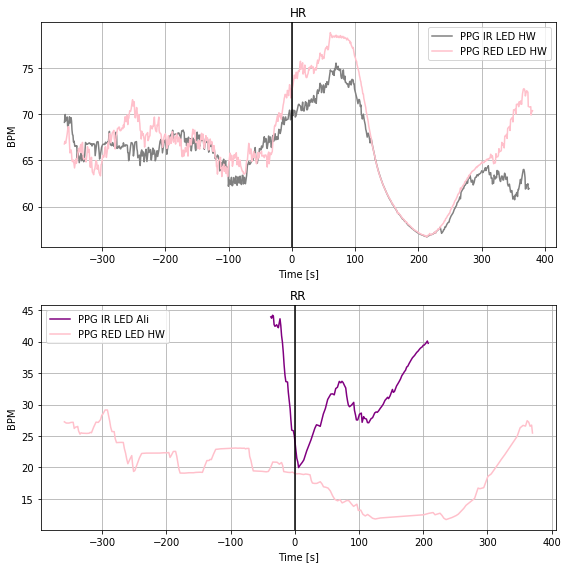

In [42]:
RED_HR_x_Ali = [42.92626063140817, 42.78678845114547, 43.28536437153992, 43.51240817528878, 43.387142628392866, 42.752145688684294, 42.33264544797184, 41.99572399480122, 41.23421061576778, 40.74135943202025, 40.766927427937915, 40.689806570686265, 40.46796856546005, 40.32712253335778, 40.42172411825313, 39.827085584625166, 39.899762858552464, 39.91308702543913, 39.73487367869748, 39.51611950672851, 39.59540149843478, 39.668700547264116, 39.51276386886518, 39.42740905542575, 39.39154745076201, 39.33011785018061, 39.23408547997153, 39.10566703893712, 38.87872639002867, 39.133143601118896, 39.445252334035125, 39.40923745439221, 39.51435032649816, 39.339275964841164, 39.0405341178032, 39.05727227502583, 39.114546305822266, 39.647957288483475, 40.633818355564934, 40.597416463071994, 40.71111206656286, 40.53984203230375, 40.76688583605261, 41.1605221521497, 40.8953275453119, 41.322877565358446, 41.79197633343461, 41.832519869818334, 42.28712702835438, 42.436563494182934, 42.62149892330169, 42.483915147800765, 42.18150024526643, 41.77088911082699, 41.8288824195751, 42.00438594693479, 42.146830231883605, 42.19266988537622, 42.43522599869799, 42.62805501320594, 42.78063821465006, 42.713939094864855, 42.602470080668546, 43.20562250049473, 44.10050235761299, 44.595341417065626, 44.14055413682908, 44.10166197402474, 44.43864721149986, 44.615077559240596, 44.615077559240596, 44.67692363169034, 44.96800543136838, 44.874115136585004, 44.93554473716641, 44.88160655129006, 44.776209040845714, 44.435097556848035, 44.284861789272284, 43.765736612452194, 43.06274660568263, 42.952364462546285, 42.625558987453225, 42.55862390380085, 42.304975165749745, 42.31076119540695, 41.96853468465797, 41.853400909937456, 41.13658450825952, 41.23374203461623, 41.06658242710286, 41.225256411223334, 40.757813285858035, 40.31134195402106, 40.134315225850536, 39.644390534444405, 39.423243972351365, 39.47002497587105, 39.015417817335, 39.044044802957586, 38.650895359236614, 38.718300743823114, 38.350187929242004, 38.4175933138285, 38.44993573601495, 38.68039373230138, 38.766656575671014, 38.89400486303015, 39.27056531802826, 39.52460393207818, 39.166365111296315, 39.10810891806619, 39.277589763306615, 38.69885065571148, 37.791011677374684, 37.60577780485231, 37.80256076264697, 37.67412617850242, 37.5625567417708, 37.36002940509341, 37.28985101417898, 36.88441565034173, 36.7590400559021, 36.91530502204505, 36.761302441982835, 36.7928460392928]
RED_HR_y_Ali = [42.92626063140817, 42.78678845114547, 43.28536437153992, 43.51240817528878, 43.387142628392866, 42.752145688684294, 42.33264544797184, 41.99572399480122, 41.23421061576778, 40.74135943202025, 40.766927427937915, 40.689806570686265, 40.46796856546005, 40.32712253335778, 40.42172411825313, 39.827085584625166, 39.899762858552464, 39.91308702543913, 39.73487367869748, 39.51611950672851, 39.59540149843478, 39.668700547264116, 39.51276386886518, 39.42740905542575, 39.39154745076201, 39.33011785018061, 39.23408547997153, 39.10566703893712, 38.87872639002867, 39.133143601118896, 39.445252334035125, 39.40923745439221, 39.51435032649816, 39.339275964841164, 39.0405341178032, 39.05727227502583, 39.114546305822266, 39.647957288483475, 40.633818355564934, 40.597416463071994, 40.71111206656286, 40.53984203230375, 40.76688583605261, 41.1605221521497, 40.8953275453119, 41.322877565358446, 41.79197633343461, 41.832519869818334, 42.28712702835438, 42.436563494182934, 42.62149892330169, 42.483915147800765, 42.18150024526643, 41.77088911082699, 41.8288824195751, 42.00438594693479, 42.146830231883605, 42.19266988537622, 42.43522599869799, 42.62805501320594, 42.78063821465006, 42.713939094864855, 42.602470080668546, 43.20562250049473, 44.10050235761299, 44.595341417065626, 44.14055413682908, 44.10166197402474, 44.43864721149986, 44.615077559240596, 44.615077559240596, 44.67692363169034, 44.96800543136838, 44.874115136585004, 44.93554473716641, 44.88160655129006, 44.776209040845714, 44.435097556848035, 44.284861789272284, 43.765736612452194, 43.06274660568263, 42.952364462546285, 42.625558987453225, 42.55862390380085, 42.304975165749745, 42.31076119540695, 41.96853468465797, 41.853400909937456, 41.13658450825952, 41.23374203461623, 41.06658242710286, 41.225256411223334, 40.757813285858035, 40.31134195402106, 40.134315225850536, 39.644390534444405, 39.423243972351365, 39.47002497587105, 39.015417817335, 39.044044802957586, 38.650895359236614, 38.718300743823114, 38.350187929242004, 38.4175933138285, 38.44993573601495, 38.68039373230138, 38.766656575671014, 38.89400486303015, 39.27056531802826, 39.52460393207818, 39.166365111296315, 39.10810891806619, 39.277589763306615, 38.69885065571148, 37.791011677374684, 37.60577780485231, 37.80256076264697, 37.67412617850242, 37.5625567417708, 37.36002940509341, 37.28985101417898, 36.88441565034173, 36.7590400559021, 36.91530502204505, 36.761302441982835, 36.7928460392928]

RED_RR_x_Ali = [-34.86551876463514, -33.473716853363705, -32.18762141636604, -30.901525979368387, -28.32933510537307, -25.809997468514645, -23.32589532308081, -22.039799886083152, -20.595144737674826, -18.00533611796721, -16.754476172394146, -15.415527498259598, -14.129432061261943, -12.896189861401174, -10.200674767419779, -8.896961584709826, -7.381835453452308, -6.14859325359154, -4.932968799443068, -2.2550714511739764, -0.9689760141763142, 0.49329687994430915, 3.118340991076514, 7.258511233466236, 8.94981482184672, 14.834141889753814, 17.423950509461427, 19.590933232073922, 22.99115815454718, 25.809997468514652, 28.329335105373076, 30.37299360799949, 32.610447313461165, 36.13399645592051, 40.69699259540535, 46.12325827479273, 48.149299031706846, 50.31628175431935, 55.98919587367888, 58.719946459084866, 61.32737282450478, 63.35341358141889, 64.8509219669641, 66.27795936966014, 69.23774064932597, 71.68660730333521, 73.4131463831403, 75.0868322258085, 77.25381494842098, 79.2093847224859, 80.75974634516801, 82.08107727359025, 83.40240820201252, 85.02324080754381, 88.10634630719572, 91.71798417821655, 94.57205898360861, 95.89338991203088, 97.919430668945, 99.24076159736724, 100.66779900006328, 103.52187380545534, 104.87844022530219, 106.9925697107778, 111.53794810455032, 113.08830972723244, 115.09673273843426, 118.69075286374279, 121.06914853490285, 124.36366698310233, 126.83015138282387, 128.41574849693058, 130.5122602366939, 133.0492156192646, 135.2514338333017, 137.52412303018795, 140.6248462755522, 142.633269286754, 144.44789709512057, 146.05111195493956, 148.41188988038732, 151.93543902284665, 155.08901550534776, 156.41034643377, 158.24259198784887, 160.55051667615973, 162.50608645022467, 164.51450946142648, 166.66387443832667, 168.5665909752547, 170.52216074931965, 172.37202404911082, 174.23950509461426, 176.07175064869313, 177.86876071134736, 179.63053528257706, 181.35707436238212, 183.189319916461, 184.88062350484145, 186.71286905892032, 188.43940813872538, 190.11309398139358, 191.80439756977407, 193.44284792101766, 195.04606278083665, 196.66689538636794, 198.37581672046073, 199.97903158027972, 201.58224644009871, 203.2206967913423, 204.75344066831212, 206.28618454528194, 207.69560420226566]
RED_RR_y_Ali = [39.104885297601534, 39.00100678437192, 37.81120290336751, 36.203168968334786, 36.81062777545395, 36.12966749558661, 36.080374442232525, 35.132146060387974, 33.937820478302015, 33.84370155455407, 32.63614069545446, 31.863532470356255, 30.871700515677283, 29.29050259671201, 28.835005526582183, 27.086752299224997, 26.58743958622827, 25.539240840697826, 23.600202144084896, 23.5785192680902, 22.3964372650475, 21.82555708799432, 22.686046829798126, 24.063696387612325, 23.303505080417484, 24.018732674831618, 24.59792605174197, 25.00596369647677, 25.508082559816213, 25.977894484803294, 26.72213772261643, 27.52462013241843, 28.454248305248406, 29.453734615229802, 29.76931673627069, 30.0470983935339, 29.61750665536174, 30.503531255357295, 31.4554229791491, 32.62726196623998, 33.57895959206415, 33.149367853892, 33.35750579468545, 32.67427212599676, 32.32069477381311, 33.030670697079444, 32.78679980153824, 31.82906858603415, 31.706009613812547, 31.08253334972405, 30.363807022921655, 29.985400683340224, 29.145910988806627, 28.47753022595898, 28.86674817524274, 29.35612222756587, 29.272509715663404, 28.495780913364673, 28.66829203482856, 28.26909413812727, 27.437604254304052, 27.237889797302746, 25.977725030068637, 26.82913929412686, 27.80646335990628, 27.171300047024527, 27.211670566894526, 27.870659935360646, 28.005066558709238, 28.67115614932718, 28.988929812875295, 28.71863957031713, 28.894133235019154, 29.34894854701607, 29.65612545797041, 30.03893187126791, 30.808995792841905, 30.952621680840934, 31.07316981693332, 30.839264799334906, 31.30607737177012, 32.24711418993973, 33.069593053031355, 32.63015343287227, 32.86405845047068, 33.41508991907789, 33.63650349197313, 34.01403439757057, 34.489513449737835, 34.74381878547804, 35.16701320066697, 35.502545915566756, 36.0246395680553, 36.21830286219592, 36.483895547062566, 36.694357499975844, 36.96010504938177, 37.39939008243244, 37.582884535893264, 37.97272623189062, 38.19242027140835, 38.3572433594293, 38.563496814869765, 38.624530095447405, 38.666580435689816, 38.867280497935084, 39.267266319494475, 39.39935385884416, 39.359112135386376, 39.68359286757134, 39.7534955165088, 39.95170049577451, 39.850341654815196]

IR_HR_x_Ali = [-37.13820796152142, -35.852112524523754, -34.49554610467691, -33.209450667679256, -32.046679450667675, -30.74296626795772, -29.40401759382317, -28.08268666540092, -26.831826719827852, -25.47526029998101, -24.24201810012024, -22.832598443136504, -21.616973988988036, -20.40134953483956, -19.09763635212961, -17.776305423707356, -16.507827732421994, -15.186496803999741, -13.724223909879118, -12.614305930004427, -11.116797544459207, -10.006879564584516, -8.438900196190112, -7.135187013480155, -5.88432706790709, -4.562996139484837, -3.171194228213401, -1.973187519777226, -0.6342388456426766, 0.6694743370672791, 1.9027165369280477, 3.417842668185558, 4.880115562306188, 6.148593253591543, 7.240893487753945, 8.280340484779444, 9.21408100753117, 11.821507372951082, 14.393698246946393, 16.01453085247769, 17.14206657806468, 18.78051692930827, 19.784728434909184, 20.96511739763306, 22.198359597493827, 23.713485728751344, 25.334318334282635, 26.778973482690972, 27.67747851401809, 30.10872742231504, 31.430058350737298, 32.78662477058414, 33.82607176760965, 36.78585304727548, 38.389067907094486, 39.69278108980444, 41.243142712486545, 42.17688323523828, 44.74907410923359, 46.17611151192962, 47.8674151003101, 50.0167800772103, 51.40858198848174, 52.747530662616285, 56.3415507879248, 59.38942079615214, 60.49933877602683, 61.7149632301753, 63.970034681349276, 64.99186393266248, 66.40128358964623, 69.55486007214733, 70.84095550914498, 71.96849123473197, 73.67741256882476, 75.17492095436998, 75.84439529143725, 76.601958357066, 77.72949408265299, 79.42079767103348, 80.9006883108664, 82.29249022213784, 83.68429213340929, 85.35797797607745, 87.34878324156699, 88.42346573001709, 89.427677235618, 90.37903550408203, 91.80607290677804, 93.18025707233718, 94.90679615214228, 96.19289158913992, 98.13084361749256, 99.31123258021645, 100.86159420289854, 101.70724599708879, 102.72907524840201, 103.7685222454275, 105.12508866527435, 107.59157306499588, 108.75434428200748, 109.5999960761977, 111.06226897031834, 112.06648047591924, 113.24686943864313, 115.16720372128347, 116.11856198974749, 117.66892361242958, 118.79645933801658, 120.43490968926017, 121.52720992342256, 123.20089576609075, 124.66316866021137, 127.02394658565913, 128.7681034111765, 130.77652642237834, 132.18594607936205, 133.17253983925067, 135.39237579900006, 136.39658730460098, 137.8764779444339, 140.83625922409973, 141.45288032403013, 142.6861225238909, 144.94119397506486, 146.20967166635023, 147.51338484906017, 148.69377381178407, 150.0679579773432, 152.35826491994177, 153.8733910511993, 155.282810708183, 156.63937712802988]
IR_HR_y_Ali = [45.669815514524, 45.62134503516115, 45.89121880585097, 45.36359744195318, 45.08007620850056, 45.08007620850056, 44.957863634712304, 45.33484202584247, 44.84203037386974, 44.79834710234519, 44.534814115850985, 44.24170428724078, 44.11674897422544, 44.02582754251823, 43.43926763617182, 42.92480999993163, 43.059955121210706, 43.1389268790364, 42.85042053955883, 42.94362407147544, 42.99370726347886, 42.29306663472474, 42.46080717004789, 42.604627147084756, 42.34748446242654, 42.24064031948591, 43.170899741907945, 43.753262439622176, 43.92130472858104, 43.710368762260316, 43.54819461672541, 43.61837300763984, 43.65992441293168, 43.43088899686923, 42.93506110686673, 42.89720995870077, 42.80702374072705, 43.60815427948052, 43.98252889246064, 44.115414061878866, 43.74617828409851, 43.946835644901746, 43.371078630610384, 43.37107863061037, 43.17204672472664, 43.799057229265635, 44.233061501799064, 44.55687345836523, 44.105907919979416, 44.09885687017355, 44.22269894494566, 44.75713647000385, 44.4233167054558, 45.21284872977044, 45.48096672009221, 45.18541007003481, 45.6727515679806, 45.16161092918063, 45.75935039538588, 45.65084678547006, 46.039933949152584, 46.198609946595695, 46.15705854130385, 45.76914002350827, 46.12326360333047, 46.327029718651175, 46.09728301247673, 46.32644213116736, 46.3348887012473, 46.355491587249915, 46.314948050866185, 46.339863073224905, 47.35289609190866, 47.261673135045285, 47.09160971889963, 47.23629449579842, 46.3642912666065, 45.796878775460435, 45.60585634442174, 45.420291697127, 45.40143423834386, 45.39065684259629, 45.41305143116268, 45.24537052347039, 45.24537052347039, 44.705991662105355, 44.083403611135466, 43.36695427486129, 43.21406282452534, 42.93830111956722, 42.90456169955302, 42.65951649832968, 42.67687753684913, 42.30284029327527, 42.177523908089206, 41.45353218695127, 40.960299096048566, 40.51535096370176, 40.34027660204477, 40.52153005881906, 40.22987299866737, 39.52782965812813, 39.431797287919046, 38.90460579314615, 38.64480442567233, 38.74452110699869, 38.21556600865905, 38.2524237690079, 37.98948701098992, 37.9665995307733, 37.66933155243039, 37.717667311951146, 37.67104002476285, 37.93674596877017, 38.05006551431327, 38.20107787655225, 38.20107787655224, 37.77678505393186, 38.010217536141184, 37.6165812200441, 37.6165812200441, 37.94354522313865, 36.85964713652565, 36.73801652737448, 36.93049049664295, 36.758487615015035, 36.758487615015035, 36.48223379799419, 36.493574647332295, 36.74364037523751, 36.803041370404365, 36.7256400736718, 36.749229040295056]

IR_RR_x_Ali = [-37.43770963863046, -36.18684969305739, -34.75981229036136, -33.5089523447883, -32.32856338206442, -31.007232453642168, -29.72113701664451, -28.34695285108537, -27.148946142649194, -25.704290994240864, -23.132100120245546, -21.898857920384778, -20.683233466236306, -19.361902537814057, -18.040571609391804, -16.78971166381874, -15.415527498259598, -14.041343332700459, -11.398681475855954, -10.235910258844372, -8.756019619011452, -7.381835453452308, -6.219064236440727, -4.897733308018474, -2.343160179735457, -0.8456517941902402, 0.3875904056705284, 1.6736858426681909, 3.0126345168027333, 4.615849376621738, 5.7786205936333195, 7.980838807670401, 11.486770204417445, 13.918019112714388, 18.445779760774634, 25.0348166571736, 31.13055667362825, 33.68512980191127, 36.52158686159103, 39.51660363268148, 44.34386595785077, 47.58553116891336, 51.126698057084994, 56.00681361939117, 58.82565293335864, 61.32737282450478, 63.63529751281564, 66.36604809822161, 69.22012290361367, 71.63375406619834, 73.3779108917157, 75.12206771723307, 77.39475691411936, 79.2446202139105, 80.67165761660654, 82.04584178216568, 83.31431947345102, 85.05847629896842, 88.17681729004492, 91.70036643250425, 92.86313764951585, 94.51920574647174, 95.84053667489398, 97.8665774318081, 100.61494576292638, 103.50425605974304, 104.80796924245298, 107.09827618505157, 108.61340231630909, 111.55556585026262, 113.08830972723244, 115.06149724700968, 118.67313511803049, 121.06914853490285, 124.4165202202392, 126.6715916714132, 128.41574849693058, 130.4946424909816, 132.97874463641543, 135.2866693247263, 137.57697626732485, 140.4134333270046, 142.40423859249415, 144.44789709512057, 145.94540548066578, 148.39427213467502, 151.98829225998355, 153.3448586798304, 155.10663325106006, 158.40115169925954, 160.55051667615973, 162.55893968736154, 164.5849804442757, 166.71672767546357, 168.53135548383014, 170.53977849503195, 172.35440630339852, 174.13379862034049, 176.01889741155622, 177.88637845705966, 179.70100626542623, 181.4803985823682, 183.20693766217326, 184.95109448769065, 186.62478033035882, 188.40417264730078, 190.04262299854437, 191.75154433263717, 193.38999468388076, 195.06368052654895, 196.77260186064171, 198.393434466173, 199.99664932599202, 201.5293932029618, 203.09737257135623, 204.73582292259982, 206.3214200367065, 207.69560420226566]
IR_RR_y_Ali = [43.92215844557694, 43.7069219035615, 44.184707685861284, 44.05679568374925, 42.689625069306814, 42.42251471195521, 42.522485075641114, 42.67201339739352, 42.40841765000708, 42.20303763455481, 43.616759949304864, 42.546410588774535, 40.93423588441842, 39.89773156295624, 38.289872719287274, 36.34682442517233, 34.65585790103119, 33.64710890559528, 33.56954735773077, 31.991167973380406, 30.58546141993009, 29.327798209364705, 27.594933357143084, 25.93923486049075, 25.82913818841426, 25.024985528077575, 23.89224245048648, 22.65819968154659, 21.46876454982133, 20.840464940505885, 19.980450532366266, 20.338216526152348, 20.802545913274592, 21.190353652597175, 22.63003190089662, 24.357843652996124, 26.230736301936012, 26.776400616065978, 26.6807931610712, 26.530543585060922, 28.489116543743854, 29.375185967486225, 30.798445632777582, 31.664426551173012, 31.691715469892824, 31.5308505282123, 32.53210105536969, 32.7433701035231, 33.67227455469199, 33.448991824487464, 33.686237178457006, 33.486590976567456, 32.997216924244334, 32.627555268980956, 31.421523367975805, 30.568744657981597, 29.923733851876886, 29.646780059425133, 29.89240985071492, 30.3408646920891, 29.070689566221358, 28.31682732633896, 27.553317189838367, 27.54055235829327, 28.452323289637672, 28.639069706565685, 27.17266994069965, 28.074267463078986, 27.797062818967003, 27.688008508671032, 27.12649542704228, 27.09982204784246, 27.749894444578324, 27.905110948721177, 28.662116988302834, 28.82549143590172, 28.758694200318065, 29.00158801620982, 29.38533673998499, 29.691909642209605, 30.03527312435408, 30.663584493193554, 30.894236722936608, 31.14630991152926, 30.9354333136201, 31.39634565829155, 32.39262420889732, 31.936651915921964, 32.064821805135026, 32.946669396391506, 33.306401635726566, 33.66359297457632, 34.05411265613193, 34.60409052215225, 34.864149422486385, 35.201438604626034, 35.440238721837616, 35.93738337970355, 36.1014481767087, 36.49833384918867, 36.825135440721525, 37.142494281139264, 37.432090969594434, 37.625352634344914, 37.81293472434551, 38.084240054875046, 38.3048422738304, 38.46263942690502, 38.68324164586038, 38.89411824376954, 39.051915396844144, 39.158288993053326, 39.41558451241157, 39.438343514391214, 39.62731047548058, 39.82348887733731, 40.086936328944645, 39.715342542121626]

fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(211)
plt.plot(IR_HR_x_HW, IR_HR_y_HW, c = "gray", label = "PPG IR LED HW")
plt.plot(RR_HR_x_HW, RR_HR_y_HW, c = "pink", label = "PPG RED LED HW")
plt.axvline(x = 0, c = Fentcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("HR")
plt.legend()
plt.grid()

ax = fig.add_subplot(212)
plt.plot(IR_RR_x_Ali, IR_RR_y_Ali, c = IRcolor, label = "PPG IR LED Ali")
plt.plot(RR_RR_x_HW, RR_RR_y_HW, c = "pink", label = "PPG RED LED HW")
plt.axvline(x = 0, c = Fentcolor)
plt.ylabel("BPM")
plt.xlabel("Time [s]")
plt.title("RR")
plt.legend()
plt.grid()

plt.tight_layout()